In [1]:
# load the import libraries
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import os
import string
import datetime
# from transformers import pipeline
# from transformers import AutoTokenizer,AutoModelForSequenceClassification
from collections import defaultdict
from tqdm import tqdm

In [19]:
## load the data set 

# News Data
scrap_data_path = "../Scraper/News-Money-control/final-data/"
money_cont_csv = ['../Scraper/News-Money-control/final-data/business-full-moneycontrol.csv',
 '../Scraper/News-Money-control/final-data/business-stocks-moneycontrol.csv',
 '../Scraper/News-Money-control/final-data/cnbc_headlines.csv',
 '../Scraper/News-Money-control/final-data/company-result-moneycontrol.csv',
 '../Scraper/News-Money-control/final-data/economy_money_control.csv',
 '../Scraper/News-Money-control/final-data/guardian_headlines.csv',
 '../Scraper/News-Money-control/final-data/market-moneycontrol.csv',
 '../Scraper/News-Money-control/final-data/news-comp-mcont-from-jul-23.csv',
 '../Scraper/News-Money-control/final-data/news_comp_jul-23-with_stock_id.csv',
 '../Scraper/News-Money-control/final-data/reuters_headlines.csv']

# news_file_list = []

# # Walk through the directory and list all files
# for foldername, subfolders, filenames in os.walk(scrap_data_path):
#     for filename in filenames:
#         file_path = os.path.join(foldername, filename)
#         news_file_list.append(file_path)


# news 2 
gapped_news_file_path = "../Scraper/News-Money-control/final-data/gapped_data"
    
news_file_gp_list = []

# Walk through the directory and list all files
for foldername, subfolders, filenames in os.walk(gapped_news_file_path):
    print(filenames)
    for filename in filenames:
        file_path = os.path.join(foldername, filename)
        news_file_gp_list.append(file_path)

# labels [Nifty indies]
nifty_label_path = "../Scraper/labels/Nifty/"
nifty_label_files = []

# file_path = os.path.join(folder_path, filename)

# Iterate through all files in the folder
for filename in os.listdir(nifty_label_path):
    if(str(filename).endswith(".csv")):
        print(f'Nifty File: {filename}')
        nifty_label_files.append(filename)       

        
# india vix load
india_vix_path = '../Scraper/labels/vix/'
vix_files = []

print("\n")
for filename in os.listdir(india_vix_path):
    if(str(filename).endswith(".csv")):
        print(f'Vix File: {filename}')
        vix_files.append(filename)  
        
news_file_gp_list

['short_0.csv', 'short_1.csv', 'short_2.csv', 'short_3.csv', 'short_4.csv']
Nifty File: NIFTY 200_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY 50_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY AUTO_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY CONSUMER DURABLES_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY FMCG_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY HEALTHCARE_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY INDIA MANUFACTURING_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY IT_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY METAL_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY MIDCAP 100_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY OIL & GAS_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY PHARMA_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY SMALLCAP 100_Historical_PR_01012000to07022024.csv


Vix File: 1_hist_india_vix_-09-02-2018-to-09-02-2019.csv
Vix File: 2_hist_india_vix_-09-02-

['../Scraper/News-Money-control/final-data/gapped_data\\short_0.csv',
 '../Scraper/News-Money-control/final-data/gapped_data\\short_1.csv',
 '../Scraper/News-Money-control/final-data/gapped_data\\short_2.csv',
 '../Scraper/News-Money-control/final-data/gapped_data\\short_3.csv',
 '../Scraper/News-Money-control/final-data/gapped_data\\short_4.csv']

### combining the data

In [9]:
# combine vix
temp_comb_df = []

for vix_file in vix_files:
    path = os.path.join(india_vix_path,vix_file)
    df = pd.read_csv(path)
    temp_comb_df.append(df)
    
vix_combine_df = pd.concat(temp_comb_df,ignore_index=True)
vix_combine_df

Date     Open     High      Low    Close   Prev. Close   Change   \
0     09-FEB-2018  17.7725  20.4225  15.1500  19.2300       17.7725     1.46   
1     12-FEB-2018  19.2300  19.2300  16.5675  17.8825       19.2300    -1.35   
2     14-FEB-2018  17.8825  17.8825  15.5200  17.1850       17.8825    -0.70   
3     15-FEB-2018  17.1850  17.1850  14.0850  16.3150       17.1850    -0.87   
4     16-FEB-2018  16.3150  16.9725  12.5700  16.3775       16.3150     0.06   
...           ...      ...      ...      ...      ...           ...      ...   
1478  01-FEB-2024  16.0475  16.1075  14.3600  14.4550       16.0475    -1.59   
1479  02-FEB-2024  14.4550  15.1325  14.0250  14.6975       14.4550     0.24   
1480  05-FEB-2024  14.6975  16.0500  14.6975  15.6175       14.6975     0.92   
1481  06-FEB-2024  15.6175  15.9825  15.0875  15.7850       15.6175     0.17   
1482  07-FEB-2024  15.7850  16.0175  14.7400  15.5050       15.7850    -0.28   

      % Change   
0          8.20  
1         -7.01  
2         -3.90  
3         -5.06  
4          0.38  
...         ...  
1478      -9.92  
1479       1.68  
1480       6.26  
1481       1.07  
1482      -1.77  

[1483 rows x 8 columns]

In [27]:
# combine vix
temp_comb_g_n_df = []

for gn_f in news_file_gp_list:
    df = pd.read_csv(gn_f)
    temp_comb_g_n_df.append(df)
    
comb_g_df = pd.concat(temp_comb_g_n_df)
comb_g_df.drop('published_at.1',axis=1)
comb_g_df.set_index('published_at')

published_at.1  \
published_at                               
2020-07-03 17:18:00  2020-07-03 17:18:00   
2020-07-07 18:01:00  2020-07-07 18:01:00   
2020-07-08 10:31:00  2020-07-08 10:31:00   
2020-07-10 20:29:00  2020-07-10 20:29:00   
2020-07-10 21:29:00  2020-07-10 21:29:00   
...                                  ...   
2023-11-01 16:41:00  2023-11-01 16:41:00   
2023-11-01 16:43:00  2023-11-01 16:43:00   
2023-11-01 16:43:00  2023-11-01 16:43:00   
2023-11-01 16:43:00  2023-11-01 16:43:00   
2023-11-01 16:43:00  2023-11-01 16:43:00   

                                                           description  
published_at                                                            
2020-07-03 17:18:00  To help us improve GOV.UK we’d like to know mo...  
2020-07-07 18:01:00  Fans of the Katamari Damacy franchise might wa...  
2020-07-08 10:31:00  Mobicure 90mg/48mg/100mg Tablet is a pain-reli...  
2020-07-10 20:29:00  The company is developing various forms of sur...  
2020-07-10 21:29:00  Personal Capital’s fees are on the higher end ...  
...                                                                ...  
2023-11-01 16:41:00  Nearly 60 years after his shocking death on a ...  
2023-11-01 16:43:00  At 58% of those saving money a shorter trip is...  
2023-11-01 16:43:00  Disneyland park announcer Bill Rogers and Disn...  
2023-11-01 16:43:00  Upcoming events at the Dickinson County Librar...  
2023-11-01 16:43:00  Detailed price information for Adv Micro Devic...  

[1678970 rows x 2 columns]

In [4]:
# function to remove punctuation
def remove_punctuation(text:str):
    return text.translate(str.maketrans("","",string.punctuation))

def preprocess_df(df,prefix,date_col="date",rename_date=True):
    #create copy
    df = df.copy()
    
    # function to add prefix
    add_prefix = lambda x: prefix+x
    
    # fix the columns name
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .map(remove_punctuation)
        .map(add_prefix)
    )
    
    # convert to pd date
    if(rename_date):
        date_col = prefix+date_col
        df[date_col] = pd.to_datetime(df[date_col])
    
    # sort by date
    df = df.sort_values(by=date_col)
    
    return df

In [5]:
vix_combine_df = preprocess_df(vix_combine_df,prefix='vix_')
vix_combine_df

vix_date  vix_open  vix_high  vix_low  vix_close  vix_prev close  \
0    2018-02-09   17.7725   20.4225  15.1500    19.2300         17.7725   
1    2018-02-12   19.2300   19.2300  16.5675    17.8825         19.2300   
2    2018-02-14   17.8825   17.8825  15.5200    17.1850         17.8825   
3    2018-02-15   17.1850   17.1850  14.0850    16.3150         17.1850   
4    2018-02-16   16.3150   16.9725  12.5700    16.3775         16.3150   
...         ...       ...       ...      ...        ...             ...   
1478 2024-02-01   16.0475   16.1075  14.3600    14.4550         16.0475   
1479 2024-02-02   14.4550   15.1325  14.0250    14.6975         14.4550   
1480 2024-02-05   14.6975   16.0500  14.6975    15.6175         14.6975   
1481 2024-02-06   15.6175   15.9825  15.0875    15.7850         15.6175   
1482 2024-02-07   15.7850   16.0175  14.7400    15.5050         15.7850   

      vix_change  vix_ change  
0           1.46         8.20  
1          -1.35        -7.01  
2          -0.70        -3.90  
3          -0.87        -5.06  
4           0.06         0.38  
...          ...          ...  
1478       -1.59        -9.92  
1479        0.24         1.68  
1480        0.92         6.26  
1481        0.17         1.07  
1482       -0.28        -1.77  

[1483 rows x 8 columns]

In [7]:
df = pd.read_csv(os.path.join(nifty_label_path,nifty_label_files[0]))[['Date','Open','High','Low',"Close"]]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df

Open      High       Low     Close
Date                                              
2024-02-07  12156.20  12162.45  12065.45  12126.80
2024-02-06  12013.65  12090.45  11953.65  12082.95
2024-02-05  12063.50  12091.65  11949.35  11975.65
2024-02-02  12000.60  12140.20  11995.45  12017.20
2024-02-01  11992.75  12003.15  11901.20  11937.65
...              ...       ...       ...       ...
2004-01-07       NaN       NaN       NaN   1013.40
2004-01-06       NaN       NaN       NaN   1017.50
2004-01-05       NaN       NaN       NaN   1035.50
2004-01-02       NaN       NaN       NaN   1030.10
2004-01-01       NaN       NaN       NaN   1000.00

[4992 rows x 4 columns]

In [8]:
nifty_dfs = []

for n_filename in nifty_label_files:
    # make file path
    file_path = os.path.join(nifty_label_path,n_filename)
    
    # create prefix
    prefix = remove_punctuation(n_filename.split("_")[0].lower()).replace(" ","_")
    
    df = pd.read_csv(file_path)
    
    df = df[['Date','Open','High','Low',"Close"]]
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date',inplace=True)
    
    df = preprocess_df(df,prefix+"_",date_col='Date',rename_date=False)
    
    nifty_dfs.append(df)
    
combined_nifty_df = pd.concat(nifty_dfs,axis=1)
combined_nifty_df

nifty_200_open  nifty_200_high  nifty_200_low  nifty_200_close  \
Date                                                                         
2000-01-03             NaN             NaN            NaN              NaN   
2000-01-04             NaN             NaN            NaN              NaN   
2000-01-05             NaN             NaN            NaN              NaN   
2000-01-06             NaN             NaN            NaN              NaN   
2000-01-07             NaN             NaN            NaN              NaN   
...                    ...             ...            ...              ...   
2024-02-01        11992.75        12003.15       11901.20         11937.65   
2024-02-02        12000.60        12140.20       11995.45         12017.20   
2024-02-05        12063.50        12091.65       11949.35         11975.65   
2024-02-06        12013.65        12090.45       11953.65         12082.95   
2024-02-07        12156.20        12162.45       12065.45         12126.80   

            nifty_50_open  nifty_50_high  nifty_50_low  nifty_50_close  \
Date                                                                     
2000-01-03        1482.15        1592.90       1482.15         1592.20   
2000-01-04        1594.40        1641.95       1594.40         1638.70   
2000-01-05        1634.55        1635.50       1555.05         1595.80   
2000-01-06        1595.80        1639.00       1595.80         1617.60   
2000-01-07        1616.60        1628.25       1597.20         1613.30   
...                   ...            ...           ...             ...   
2024-02-01       21780.65       21832.95      21658.75        21697.45   
2024-02-02       21812.75       22126.80      21805.55        21853.80   
2024-02-05       21921.05       21964.30      21726.95        21771.70   
2024-02-06       21825.20       21951.40      21737.55        21929.40   
2024-02-07       22045.05       22053.30      21860.15        21930.50   

            nifty_auto_open  nifty_auto_high  ...  nifty_oil__gas_low  \
Date                                          ...                       
2000-01-03              NaN              NaN  ...                 NaN   
2000-01-04              NaN              NaN  ...                 NaN   
2000-01-05              NaN              NaN  ...                 NaN   
2000-01-06              NaN              NaN  ...                 NaN   
2000-01-07              NaN              NaN  ...                 NaN   
...                     ...              ...  ...                 ...   
2024-02-01         19351.85         19559.55  ...             10654.3   
2024-02-02         19364.00         19563.05  ...            10816.65   
2024-02-05         19655.85         19823.35  ...             11108.6   
2024-02-06         19731.20         19912.45  ...             11194.6   
2024-02-07         19977.75         20033.60  ...             11526.1   

            nifty_oil__gas_close nifty_pharma_open nifty_pharma_high  \
Date                                                                   
2000-01-03                   NaN               NaN               NaN   
2000-01-04                   NaN               NaN               NaN   
2000-01-05                   NaN               NaN               NaN   
2000-01-06                   NaN               NaN               NaN   
2000-01-07                   NaN               NaN               NaN   
...                          ...               ...               ...   
2024-02-01              10727.95           18004.6           18053.1   
2024-02-02              11111.50          17885.35           18084.7   
2024-02-05              11271.40           18034.2           18379.8   
2024-02-06              11572.05           18301.3           18533.7   
2024-02-07              11596.80          18597.85           18640.8   

           nifty_pharma_low  nifty_pharma_close  nifty_smallcap_100_open  \
Date                                                                   

In [10]:
combined_nifty_df.describe().T

count          mean           std      min  \
nifty_200_open                   3060.0   5678.976503   2406.601457  2301.10   
nifty_200_high                   3060.0   5704.807843   2413.861036  2309.85   
nifty_200_low                    3060.0   5642.259118   2393.399734  2260.10   
nifty_200_close                  4992.0   4262.459864   2627.742751   740.97   
nifty_50_open                    5995.0   6969.319683   5195.536657   853.00   
nifty_50_high                    5995.0   7010.923837   5212.045854   877.00   
nifty_50_low                     5995.0   6917.921193   5168.826562   849.95   
nifty_50_close                   5995.0   6965.518057   5191.360038   854.20   
nifty_auto_open                  3060.0   8857.260899   3226.787053  3336.65   
nifty_auto_high                  3060.0   8917.658137   3238.455181  3388.05   
nifty_auto_low                   3060.0   8781.235572   3205.738765  3292.70   
nifty_auto_close                 4992.0   6243.277185   4178.714006   835.67   
nifty_consumer_durables_close    4677.0   9613.179252   8533.929353   882.12   
nifty_fmcg_open                  3233.0  26333.438556  11466.828241  2216.37   
nifty_fmcg_high                  3233.0  26491.183003  11508.585030  2216.37   
nifty_fmcg_low                   3233.0  26138.953003  11397.017353  2215.53   
nifty_fmcg_close                 5995.0  16139.155713  13919.408045  1883.10   
nifty_healthcare_close           4677.0   4442.945384   2544.181613   948.98   
nifty_india_manufacturing_close  4677.0   4058.386833   2282.048899   926.17   
nifty_it_open                    5084.0  12112.561408   9247.327860    60.65   
nifty_it_high                    5084.0  12215.779721   9317.998472  2003.20   
nifty_it_low                     5084.0  12002.862146   9164.071123  1950.50   
nifty_it_close                   5995.0  14024.461518  11315.473087  1955.60   
nifty_metal_close                4992.0   3135.570389   1538.717013   528.43   
nifty_midcap_100_open            4601.0  13962.706922   9433.764986  2961.65   
nifty_midcap_100_high            4601.0  14044.121539   9471.212011  2976.70   
nifty_midcap_100_low             4601.0  13849.169007   9364.606557  2930.75   
nifty_midcap_100_close           5745.0  11482.059850   9781.541125   608.43   
nifty_oil__gas_close             4677.0   3728.406932   2071.905102   943.68   
nifty_pharma_close               5745.0   6525.116940   4478.807728   749.18   
nifty_smallcap_100_open          3060.0   6596.157337   2771.985404  2516.90   
nifty_smallcap_100_high          3060.0   6635.869869   2782.725846  2560.75   
nifty_smallcap_100_low           3060.0   6539.514493   2749.406358  2508.95   
nifty_smallcap_100_close         4992.0   5112.241989   2937.916487   718.80   

                                        25%        50%         75%       max  
nifty_200_open                    3986.5375   5370.300   7258.0500  12156.20  
nifty_200_high                    4007.7625   5393.075   7349.0375  12162.45  
nifty_200_low                     3953.9750   5339.750   7224.4500  12065.45  
nifty_200_close                   2416.5750   3205.900   5731.1875  12126.80  
nifty_50_open                     2664.2750   5574.700  10123.0250  22080.50  
nifty_50_high                     2712.7500   5620.200  10171.3750  22126.80  
nifty_50_low                      2633.9500   5532.700  10067.4250  21969.80  
nifty_50_close                    2663.8000   5568.900  10119.5000  22097.45  
nifty_auto_open                   6807.2250   8620.300  10889.8500  19977.75  
nifty_auto_high                   6915.9250   8668.825  10941.7500  20033.60  
nifty_auto_low                    6751.7125   8557.725  10797.6625  19762.20  
nifty_auto_close                  2202.0250   5196.350   9538.5500  19903.85  
nifty_consumer_durables_close     2873.5500   6321.650  14216.8700  32303.70  
nifty_fmcg_open                  17887.4000  25590.150  32033.8500  57945.10  
nifty_fmcg_high                  17978.0000  257

In [11]:
combined_nifty_df.columns

Index(['nifty_200_open', 'nifty_200_high', 'nifty_200_low', 'nifty_200_close',
       'nifty_50_open', 'nifty_50_high', 'nifty_50_low', 'nifty_50_close',
       'nifty_auto_open', 'nifty_auto_high', 'nifty_auto_low',
       'nifty_auto_close', 'nifty_consumer_durables_open',
       'nifty_consumer_durables_high', 'nifty_consumer_durables_low',
       'nifty_consumer_durables_close', 'nifty_fmcg_open', 'nifty_fmcg_high',
       'nifty_fmcg_low', 'nifty_fmcg_close', 'nifty_healthcare_open',
       'nifty_healthcare_high', 'nifty_healthcare_low',
       'nifty_healthcare_close', 'nifty_india_manufacturing_open',
       'nifty_india_manufacturing_high', 'nifty_india_manufacturing_low',
       'nifty_india_manufacturing_close', 'nifty_it_open', 'nifty_it_high',
       'nifty_it_low', 'nifty_it_close', 'nifty_metal_open',
       'nifty_metal_high', 'nifty_metal_low', 'nifty_metal_close',
       'nifty_midcap_100_open', 'nifty_midcap_100_high',
       'nifty_midcap_100_low', 'nifty_midcap_100

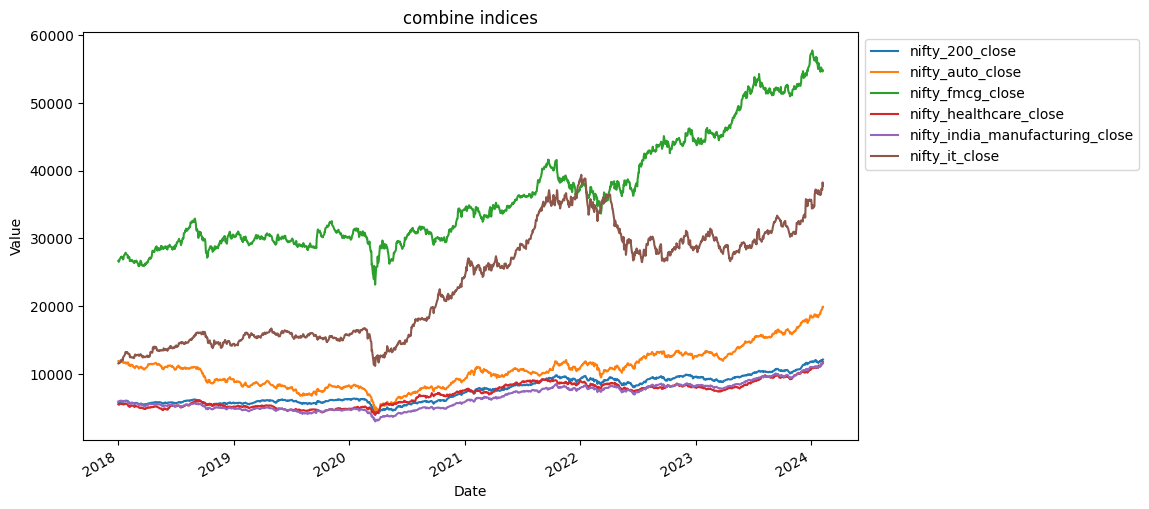

In [9]:
close_columns = ['nifty_200_close', 'nifty_auto_close',
                  'nifty_fmcg_close',
                 'nifty_healthcare_close', 'nifty_india_manufacturing_close',
                 'nifty_it_close']

combined_nifty_df[close_columns]['2018-01-01':].plot(figsize=(10,6),title='combine indices')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [10]:
foriegn_indicator_path = "../Scraper/labels/global_indices.csv"
fi_df = pd.read_csv(foriegn_indicator_path)
fi_df['Date'] = pd.to_datetime(fi_df['Date'])
fi_df.set_index(fi_df['Date'],inplace=True)
fi_df.drop('Date',axis=1,inplace=True)
fi_df

^DJI_open     ^DJI_high      ^DJI_low    ^DJI_close  \
Date                                                                 
2018-01-02  24809.349609  24864.189453  24741.699219  24824.009766   
2018-01-03  24850.449219  24941.919922  24825.550781  24922.679688   
2018-01-04  24964.859375  25105.960938  24963.269531  25075.130859   
2018-01-05  25114.919922  25299.789062  25112.009766  25295.869141   
2018-01-08  25308.400391  25311.990234  25235.410156  25283.000000   
...                  ...           ...           ...           ...   
2024-02-28  38938.078125  38956.460938  38741.679688  38949.019531   
2024-02-29  39013.750000  39074.128906  38809.281250  38996.390625   
2024-03-01  38989.511719  39120.359375  38850.500000  39087.378906   
2024-03-04  38968.769531  39087.859375  38913.300781  38989.828125   
2024-03-05  38906.980469  38906.980469  38457.828125  38585.191406   

            ^DJI_volume  BTC-USD_open  BTC-USD_high   BTC-USD_low  \
Date                                                                
2018-01-02    341130000  13625.000000  15444.599609  13163.599609   
2018-01-03    456790000  14978.200195  15572.799805  14844.500000   
2018-01-04    403280000  15270.700195  15739.700195  14522.200195   
2018-01-05    358020000  15477.200195  17705.199219  15202.799805   
2018-01-08    341390000  16476.199219  16537.900391  14208.200195   
...                 ...           ...           ...           ...   
2024-02-28    272560000  57071.097656  63913.132812  56738.425781   
2024-02-29    519690000  62499.183594  63585.644531  60498.730469   
2024-03-01    331030000  61168.062500  63155.101562  60802.527344   
2024-03-04    386290000  63137.003906  68537.031250  62386.519531   
2024-03-05    393750000  68341.054688  69170.625000  59323.910156   

            BTC-USD_close  BTC-USD_volume  ...   ^GSPC_open   ^GSPC_high  \
Date                                       ...                             
2018-01-02   14982.099609     16846600192  ...  2683.729980  2695.889893   
2018-01-03   15201.000000     16871900160  ...  2697.850098  2714.370117   
2018-01-04   15599.200195     21783199744  ...  2719.310059  2729.290039   
2018-01-05   17429.500000     23840899072  ...  2731.330078  2743.449951   
2018-01-08   15170.099609     18413899776  ...  2742.669922  2748.510010   
...                   ...             ...  ...          ...          ...   
2024-02-28   62504.789062     83239156760  ...  5067.200195  5077.370117   
2024-02-29   61198.382812     65496611844  ...  5085.359863  5104.990234   
2024-03-01   62440.632812     40186368423  ...  5098.509766  5140.330078   
2024-03-04   68330.414062     70670471105  ...  5130.990234  5149.669922   
2024-03-05   63801.199219    102802940877  ...  5110.520020  5114.540039   

              ^GSPC_low  ^GSPC_close  ^GSPC_volume    ^NSEI_open  \
Date                                                               
2018-01-02  2682.360107  2695.810059    3397430000  10477.549805   
2018-01-03  2697.770020  2713.060059    3544030000  10482.650391   
2018-01-04  2719.070068  2723.989990    3697340000  10469.400391   
2018-01-05  2727.919922  2743.149902    3239280000  10534.250000   
2018-01-08  2737.600098  2747.709961    3246160000  10591.700195   
...                 ...          ...           ...           ...   
2024-02-28  5058.350098  5069.759766    3789370000  22214.099609   
2024-02-29  5061.890137  5096.270020    5219740000  21935.199219   
2024-03-01  5094.160156  5137.080078    4748110000  22048.300781   
2024-03-04  5127.180176  5130.950195    4758440000  22403.500000   
2024-03-05  5056.819824  5078.649902    4418410000  22371.250000   

              ^NSEI_high     ^NSEI_low   ^NSEI_close  ^NSEI_volume  
Date                                                                
2018-01-02  10495.200195  10404.650391  10442.200195        153400  
2018-01-03  10503.599609  10429.549805  10443.200195        167300  
2018-01-04  10513.000000  10441.450195  10504.799805    

In [69]:
# Initialize an empty DataFrame to store the combined data
news_data = pd.DataFrame(columns=['date', 'content'])

# Iterate through each CSV file and concatenate the data
for csv_file in money_cont_csv:
    file_path = csv_file
    df = pd.read_csv(csv_file)

    # Check if the DataFrame has 'date time' and 'content' columns, and adjust accordingly
    if 'date time' in df.columns and 'content' in df.columns:
        try:
            df['date'] = pd.to_datetime(df['date time'].str.replace(' IST', ''), format="%B %d, %Y %I:%M %p", errors='coerce')
            df['content'] = df['title'] + ' ' + df['desc']
            # Drop rows with NaT in the 'date' column
#             df = df.dropna(subset=['date'])
            news_data = pd.concat([news_data, df[['date', 'content']]])
        except Exception as e:
            print(f"Error processing {csv_file}: {str(e)}")
    elif 'Time' in df.columns and 'Headlines' in df.columns:
        # Concatenate 'Time' and 'Headlines' columns and rename them to 'date' and 'content'
        try:
            df['date'] = pd.to_datetime(df['Time'], errors='coerce')
            df['content'] = df['Headlines']
            # Drop rows with NaT in the 'date' column
            df = df.dropna(subset=['date'])
            news_data = pd.concat([news_data, df[['date', 'content']]])
        except Exception as e:
            print(f"Error processing {csv_file}: {str(e)}")
    else:
        # If columns are different, you may need to adjust this part based on your actual data
        print(f"Columns in {csv_file} are different. Adjust the code accordingly.")

# Set the 'date' column as the index
news_data.set_index('date', inplace=True)

# Sort the DataFrame by date
news_data.sort_index(inplace=True)

# Display the combined DataFrame
news_data

C:\Users\jeetc\AppData\Local\Temp\ipykernel_10476\2567794548.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  news_data = pd.concat([news_data, df[['date', 'content']]])
C:\Users\jeetc\AppData\Local\Temp\ipykernel_10476\2567794548.py:22: FutureWarning: Parsed string " 7:51  PM ET Fri, 17 July 2020" included an un-recognized timezone "ET". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['Time'], errors='coerce')
C:\Users\jeetc\AppData\Local\Temp\ipykernel_10476\2567794548.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling

content
date                                                                  
2017-12-17 00:00:00  The Guardian view on Ryanair’s model: a union-...
2017-12-17 00:00:00  Peter Preston on press and broadcasting  \r\n\...
2017-12-17 00:00:00  Why business could prosper under a Corbyn gove...
2017-12-17 00:00:00  Youngest staff to be given UK workplace pensio...
2017-12-17 00:00:00  Grogonomics  \r\n\r\n\r\n  This year has been ...
...                                                                ...
2024-02-08 00:28:00  Uber expects strong core profit as ride share,...
2024-02-08 06:22:00  India eyes $100 billion investment deal with S...
2024-02-08 08:29:00  RBI hasn't agreed to bring EVs on priority sec...
2024-02-08 08:31:00  Analyst call tracker: HUL, Asian Paints among ...
2024-02-08 09:09:00  Nestle India Q4 show fails to impress. Should ...

[58467 rows x 1 columns]

In [70]:
duplicate_indices = news_data.index[news_data.index.duplicated(keep=False)]

if not duplicate_indices.empty:
    duplicate_rows = news_data[news_data.index.isin(duplicate_indices)]
    print("Rows with duplicate indices:")
    print(duplicate_rows)
else:
    print("No duplicate indices found.")

Rows with duplicate indices:
                                                               content
date                                                                  
2017-12-17 00:00:00  The Guardian view on Ryanair’s model: a union-...
2017-12-17 00:00:00  Peter Preston on press and broadcasting  \r\n\...
2017-12-17 00:00:00  Why business could prosper under a Corbyn gove...
2017-12-17 00:00:00  Youngest staff to be given UK workplace pensio...
2017-12-17 00:00:00  Grogonomics  \r\n\r\n\r\n  This year has been ...
...                                                                ...
2024-02-07 22:16:00  Bulk deals: LIC sells Rs 75.2 crore shares in ...
2024-02-07 22:52:00  Global stocks hit two-year highs, as dollar ea...
2024-02-07 22:52:00  Kinetic Green rolls out E-Luna at Rs 69,990, a...
2024-02-07 23:02:00  India's debt-to-GDP ratio well below emerging ...
2024-02-07 23:02:00  India's debt-to-GDP ratio well below emerging ...

[55081 rows x 1 columns]


In [71]:
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2024, 3, 6)
combined_nifty_df[start_date:end_date]
fi_df[start_date:end_date]
news_data[start_date:end_date]

content
date                                                                  
2018-01-02 00:00:00  Cheltenham house prices rise while Perth sees ...
2018-01-02 00:00:00  Bankers work around the clock to iron out EU f...
2018-01-02 00:00:00  Transport secretary ‘running scared’ as he fli...
2018-01-02 00:00:00  Good for factories, bad for shoppers: a Brexit...
2018-01-02 00:00:00  Business live  UK, US and eurozone manufacturi...
...                                                                ...
2024-02-08 00:28:00  Uber expects strong core profit as ride share,...
2024-02-08 06:22:00  India eyes $100 billion investment deal with S...
2024-02-08 08:29:00  RBI hasn't agreed to bring EVs on priority sec...
2024-02-08 08:31:00  Analyst call tracker: HUL, Asian Paints among ...
2024-02-08 09:09:00  Nestle India Q4 show fails to impress. Should ...

[58222 rows x 1 columns]

In [72]:
def remove_row_with_nan(features,column_name):
  features_filterd = features.dropna(subset=[column_name])
  return features_filterd

features  = remove_row_with_nan(news_data,'content')

In [73]:
features.index = pd.to_datetime(features.index)

# Define the split date
split_date = pd.to_datetime('2022-12-31')

# Filter the DataFrame for training and testing sets
train_df = features[features.index < split_date]
test_df = features[features.index >= split_date]
len(train_df), len(test_df)

(53330, 4361)

In [74]:
pipe = pipeline('text-classification',model='ProsusAI/finbert')
tokenizer = AutoTokenizer.from_pretrained('ProsusAI/finbert')

model = AutoModelForSequenceClassification.from_pretrained('ProsusAI/Finbert')

In [75]:
def analyze_sentiment(dataframe,textlabel):
  sentiments = defaultdict(lambda : {'pos':[],'neg':[],'neu':[]})

  for index, row in tqdm(dataframe.iterrows(),total=len(dataframe)):
    print(row)
    text = [row[textlabel]]

    inputs = tokenizer(text,return_tensors='pt')

    outputs = model(**inputs)

    probs = outputs.logits.softmax(dim=1)

    pos = probs[:,0].tolist()
    neg = probs[:,1].tolist()
    neu = probs[:,2].tolist()

    sentiments[row.name]['pos'].extend(pos)
    sentiments[row.name]['neg'].extend(neg)
    sentiments[row.name]['neu'].extend(neu)
  return sentiments

In [76]:
features.index.to_list

<bound method IndexOpsMixin.tolist of DatetimeIndex(['2017-12-17 00:00:00', '2017-12-17 00:00:00',
               '2017-12-17 00:00:00', '2017-12-17 00:00:00',
               '2017-12-17 00:00:00', '2017-12-17 00:00:00',
               '2017-12-17 00:00:00', '2017-12-17 00:00:00',
               '2017-12-17 00:00:00', '2017-12-17 00:00:00',
               ...
               '2024-02-07 22:55:00', '2024-02-07 23:01:00',
               '2024-02-07 23:02:00', '2024-02-07 23:02:00',
               '2024-02-07 23:39:00', '2024-02-08 00:28:00',
               '2024-02-08 06:22:00', '2024-02-08 08:29:00',
               '2024-02-08 08:31:00', '2024-02-08 09:09:00'],
              dtype='datetime64[ns]', name='date', length=57691, freq=None)>

In [77]:
# features["2023-07-27":].apply(lambda x: len(x['content'])) 
features["2023-07-27":]['content'].apply(lambda x: len(x))

date
2023-07-27 17:38:00    250
2023-07-27 17:38:00    250
2023-07-27 18:24:00    319
2023-07-27 18:24:00    319
2023-07-28 07:09:00    361
                      ... 
2024-02-08 00:28:00    244
2024-02-08 06:22:00    347
2024-02-08 08:29:00    284
2024-02-08 08:31:00    263
2024-02-08 09:09:00    183
Name: content, Length: 4361, dtype: int64

In [ ]:
sentiments = analyze_sentiment(features,'content')
sentiments

  0%|                                                                                        | 0/57691 [00:00<?, ?it/s]

content    The Guardian view on Ryanair’s model: a union-...
Name: 2017-12-17 00:00:00, dtype: object


  0%|                                                                              | 1/57691 [00:00<3:27:41,  4.63it/s]

content    Peter Preston on press and broadcasting  \r\n\...
Name: 2017-12-17 00:00:00, dtype: object


  0%|                                                                              | 2/57691 [00:00<5:23:24,  2.97it/s]

content    Why business could prosper under a Corbyn gove...
Name: 2017-12-17 00:00:00, dtype: object


  0%|                                                                              | 3/57691 [00:00<4:40:26,  3.43it/s]

content    Youngest staff to be given UK workplace pensio...
Name: 2017-12-17 00:00:00, dtype: object


  0%|                                                                              | 4/57691 [00:01<4:56:48,  3.24it/s]

content    Grogonomics  \r\n\r\n\r\n  This year has been ...
Name: 2017-12-17 00:00:00, dtype: object


  0%|                                                                              | 6/57691 [00:02<5:38:35,  2.84it/s]

content    Butchers carve out a niche as UK shoppers opt ...
Name: 2017-12-17 00:00:00, dtype: object


  0%|                                                                              | 7/57691 [00:02<4:41:38,  3.41it/s]

content    David Cameron to lead £750m UK-China investmen...
Name: 2017-12-17 00:00:00, dtype: object
content    US mall operators must buy into e-retail and n...
Name: 2017-12-17 00:00:00, dtype: object


  0%|                                                                              | 9/57691 [00:02<3:32:04,  4.53it/s]

content    Global shopping centre giants go on a Christma...
Name: 2017-12-17 00:00:00, dtype: object
content    Is the global desire to buy British a bad thin...
Name: 2017-12-17 00:00:00, dtype: object


  0%|                                                                             | 11/57691 [00:02<3:03:13,  5.25it/s]

content    Unilever sells household name spreads to KKR f...
Name: 2017-12-17 00:00:00, dtype: object
content    Britons set new gin record after buying 47m bo...
Name: 2017-12-17 00:00:00, dtype: object


  0%|                                                                             | 13/57691 [00:03<2:48:21,  5.71it/s]

content    British Steel pension scheme members ‘preyed o...
Name: 2017-12-17 00:00:00, dtype: object
content    ‘Going to the Furniture Ombudsman about our so...
Name: 2017-12-17 00:00:00, dtype: object


  0%|                                                                             | 15/57691 [00:03<2:38:14,  6.07it/s]

content    Uber stole trade secrets, bribed foreign offic...
Name: 2017-12-17 00:00:00, dtype: object
content    Hundreds to lose jobs as Britvic shuts down No...
Name: 2017-12-17 00:00:00, dtype: object


  0%|                                                                             | 17/57691 [00:03<2:40:22,  5.99it/s]

content    How investing in solar energy can create a bri...
Name: 2017-12-17 00:00:00, dtype: object
content    Poundland suppliers hit by insurance downgrade
Name: 2017-12-17 00:00:00, dtype: object


  0%|                                                                             | 18/57691 [00:04<3:11:32,  5.02it/s]

content    Cryptocurrencies: City watchdog to investigate...
Name: 2017-12-17 00:00:00, dtype: object


  0%|                                                                             | 19/57691 [00:04<3:36:32,  4.44it/s]

content    Alabama unions see Doug Jones's win as a victo...
Name: 2017-12-17 00:00:00, dtype: object


  0%|                                                                             | 20/57691 [00:04<4:14:43,  3.77it/s]

content    Revealed: the government email telling HS2 not...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 21/57691 [00:04<4:07:51,  3.88it/s]

content    Ryanair has recognised unions. Hell must have ...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 22/57691 [00:05<4:17:32,  3.73it/s]

content    Trump's tax bill has nothing to do with econom...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 23/57691 [00:05<4:56:56,  3.24it/s]

content    EU investigates Ikea after Dutch deals reduce ...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 24/57691 [00:05<4:39:56,  3.43it/s]

content    UK manufacturing order books near three-decade...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 25/57691 [00:06<4:23:59,  3.64it/s]

content    Hermes delivery driver's diary shows flipside ...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 27/57691 [00:06<3:55:35,  4.08it/s]

content    Bumper business Christmas quiz 2017
Name: 2017-12-18 00:00:00, dtype: object
content    Business live  Bitcoin bubble warnings grow lo...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 29/57691 [00:07<3:27:21,  4.63it/s]

content    Atlanta airport: power restored but flight del...
Name: 2017-12-18 00:00:00, dtype: object
content    Building regulations unfit for purpose, Grenfe...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 31/57691 [00:07<2:52:40,  5.57it/s]

content    Spread-betting firms' shares plunge as EU watc...
Name: 2017-12-18 00:00:00, dtype: object
content    Christmas tree cutters' labor fight shines lig...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 33/57691 [00:07<2:38:45,  6.05it/s]

content    How the American government slowly became a bu...
Name: 2017-12-18 00:00:00, dtype: object
content    Global coal consumption forecast to slow
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 35/57691 [00:07<2:32:37,  6.30it/s]

content    Desperate UK homeowners are cutting prices, sa...
Name: 2017-12-18 00:00:00, dtype: object
content    ‘They stole the soul of the city’: how Warsaw'...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 37/57691 [00:08<2:38:01,  6.08it/s]

content    Deck the stalls: Christmas markets and pop ups...
Name: 2017-12-18 00:00:00, dtype: object
content    Weak pound boosts English sparkling wine sales...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 38/57691 [00:08<2:37:53,  6.09it/s]

content    France saves Marquis de Sade’s 120 Days of Sod...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 39/57691 [00:08<3:16:12,  4.90it/s]

content    UK banks face fines as immigration checks on a...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 40/57691 [00:08<3:36:02,  4.45it/s]

content    Brace yourself for the next Brexit faultline: ...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 42/57691 [00:09<3:29:00,  4.60it/s]

content    Boost for fossil fuel divestment as UK eases p...
Name: 2017-12-18 00:00:00, dtype: object
content    Brexit will usher in a dark chapter for new Br...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 44/57691 [00:09<3:09:08,  5.08it/s]

content    Waitrose urged to stop selling Shetland scallo...
Name: 2017-12-18 00:00:00, dtype: object
content    Adani scraps $2bn deal to outsource Carmichael...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 46/57691 [00:10<2:59:18,  5.36it/s]

content    LSE chairman set to see off activist's attempt...
Name: 2017-12-18 00:00:00, dtype: object
content    Universal basic income is no panacea for us – ...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 47/57691 [00:10<3:09:30,  5.07it/s]

content    UK banks tell May: a Canada-style Brexit deal ...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 48/57691 [00:10<3:42:41,  4.31it/s]

content    Business leader  \r\n\r\n\r\n  The UK jobs eng...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 50/57691 [00:11<3:33:03,  4.51it/s]

content    Amazon Prime could face investigation over del...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 51/57691 [00:11<3:14:23,  4.94it/s]

content    Trump EPA rule change exploits taxpayers for m...
Name: 2017-12-18 00:00:00, dtype: object
content    Ryanair pilots suspend one-day strike in week ...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 53/57691 [00:11<3:24:26,  4.70it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Heretics we...
Name: 2017-12-18 00:00:00, dtype: object
content    Halifax cover: £1,227 if you are loyal, £370 i...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 54/57691 [00:12<3:51:15,  4.15it/s]

content    Is Monzo the Facebook of banking?
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 55/57691 [00:12<3:56:44,  4.06it/s]

content    Venue of last resort: the climate lawsuits thr...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 57/57691 [00:12<3:27:59,  4.62it/s]

content    Old and vulnerable people and financial whiz-k...
Name: 2017-12-18 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  The...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 58/57691 [00:12<3:56:54,  4.05it/s]

content    Observer business agenda  \r\n\r\n\r\n  Bring ...
Name: 2017-12-18 00:00:00, dtype: object


  0%|                                                                             | 60/57691 [00:13<3:35:27,  4.46it/s]

content    Curbs on capitalism in the 21st century
Name: 2017-12-18 00:00:00, dtype: object
content    Business live  World markets driven to record ...
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 61/57691 [00:13<3:43:10,  4.30it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  The Pen...
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 63/57691 [00:14<3:28:03,  4.62it/s]

content    UK pensions lifeboat to block Toys R Us surviv...
Name: 2017-12-19 00:00:00, dtype: object
content    Bitcoin not a threat to financial stability, s...
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 64/57691 [00:14<3:47:04,  4.23it/s]

content    Switch your UK mobile network with a text mess...
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 65/57691 [00:14<4:16:12,  3.75it/s]

content    When will we see the world's first trillionaire?
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 66/57691 [00:15<4:51:48,  3.29it/s]

content    Toys R Us UK faces collapse with loss of all 3...
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 68/57691 [00:15<4:18:34,  3.71it/s]

content    Universal Music snaps up UK record labels ZTT ...
Name: 2017-12-19 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Is this...
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 69/57691 [00:15<4:50:12,  3.31it/s]

content    House prices to fall in London and south-east ...
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 70/57691 [00:16<4:40:59,  3.42it/s]

content    Come to debtors’ court. See how ministers dest...
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 71/57691 [00:16<5:01:49,  3.18it/s]

content    UK cannot have a special deal for the City, sa...
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 72/57691 [00:16<4:36:08,  3.48it/s]

content    First pilots, now cabin crew – Ryanair to reco...
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 73/57691 [00:17<4:32:01,  3.53it/s]

content    The Guardian view on Theresa May and Brexit: t...
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 74/57691 [00:17<4:35:26,  3.49it/s]

content    Undercover in the chicken industry  Tesco foun...
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 75/57691 [00:17<5:13:26,  3.06it/s]

content    Delving deeper into an economics Reformation
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 77/57691 [00:18<4:20:14,  3.69it/s]

content    Creditors desert Poundland owner amid South Af...
Name: 2017-12-19 00:00:00, dtype: object
content    Top British firms named and shamed on PM's fat...
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 79/57691 [00:18<3:53:09,  4.12it/s]

content    Tenants lose out after landlord pressure halve...
Name: 2017-12-19 00:00:00, dtype: object
content    China aims to drastically cut greenhouse gas e...
Name: 2017-12-19 00:00:00, dtype: object


  0%|                                                                             | 80/57691 [00:18<4:09:10,  3.85it/s]

content    European court rules champagne sorbet can keep...
Name: 2017-12-20 00:00:00, dtype: object


  0%|                                                                             | 81/57691 [00:19<4:07:44,  3.88it/s]

content    A victory for workers over Uber. But beware th...
Name: 2017-12-20 00:00:00, dtype: object


  0%|                                                                             | 83/57691 [00:19<3:48:25,  4.20it/s]

content    Hedge funds fail to stop 'billion-dollar brain...
Name: 2017-12-20 00:00:00, dtype: object
content    Bank of England to allow EU banks to keep UK o...
Name: 2017-12-20 00:00:00, dtype: object


  0%|                                                                             | 84/57691 [00:19<3:44:31,  4.28it/s]

content    Gloomy Brexit forecasts for UK are coming true...
Name: 2017-12-20 00:00:00, dtype: object


  0%|                                                                             | 85/57691 [00:20<3:49:10,  4.19it/s]

content    Nearly 45,000 UK retailers in financial distre...
Name: 2017-12-20 00:00:00, dtype: object


  0%|                                                                             | 86/57691 [00:20<5:02:32,  3.17it/s]

content    Business live  Bank of England Carney says UK ...
Name: 2017-12-20 00:00:00, dtype: object


  0%|                                                                             | 87/57691 [00:20<4:55:26,  3.25it/s]

content    Thousands of tonnes of dangerous mining waste ...
Name: 2017-12-20 00:00:00, dtype: object


  0%|                                                                             | 89/57691 [00:21<4:02:05,  3.97it/s]

content    Gove: UK would not compromise with US on food ...
Name: 2017-12-20 00:00:00, dtype: object
content    Uber to face stricter EU regulation after ECJ ...
Name: 2017-12-20 00:00:00, dtype: object


  0%|                                                                             | 90/57691 [00:21<4:05:59,  3.90it/s]

content    Ryanair to face select committee investigation...
Name: 2017-12-20 00:00:00, dtype: object


  0%|                                                                             | 92/57691 [00:22<3:39:39,  4.37it/s]

content    France bans fracking and oil extraction in all...
Name: 2017-12-20 00:00:00, dtype: object
content    Marks & Spencer is first supermarket to publis...
Name: 2017-12-20 00:00:00, dtype: object


  0%|▏                                                                            | 94/57691 [00:22<3:10:26,  5.04it/s]

content    UK's Christmas workers earning less than 10 ye...
Name: 2017-12-20 00:00:00, dtype: object
content    Payments regulator urged to prevent 'ATM deser...
Name: 2017-12-20 00:00:00, dtype: object


  0%|▏                                                                            | 96/57691 [00:22<3:25:36,  4.67it/s]

content    Parts of UK that voted Brexit are most exposed...
Name: 2017-12-20 00:00:00, dtype: object
content    ‘Drugs are too expensive for the NHS – and peo...
Name: 2017-12-20 00:00:00, dtype: object


  0%|▏                                                                            | 97/57691 [00:23<3:44:42,  4.27it/s]

content    Could buying Christmas jewellery be funding ge...
Name: 2017-12-20 00:00:00, dtype: object


  0%|▏                                                                            | 99/57691 [00:23<3:32:08,  4.52it/s]

content    High-speed broadband to be legal right for UK ...
Name: 2017-12-20 00:00:00, dtype: object
content    Senate approves most drastic changes to US tax...
Name: 2017-12-20 00:00:00, dtype: object


  0%|▏                                                                           | 101/57691 [00:23<3:27:58,  4.62it/s]

content    Eurostar set for busiest December on record
Name: 2017-12-21 00:00:00, dtype: object
content    This land is your land  \r\n\r\n\r\n  Alaska’s...
Name: 2017-12-21 00:00:00, dtype: object


  0%|▏                                                                           | 102/57691 [00:24<3:45:04,  4.26it/s]

content    Wholesalers set to appeal after Tesco's takeov...
Name: 2017-12-21 00:00:00, dtype: object


  0%|▏                                                                           | 103/57691 [00:24<3:40:56,  4.34it/s]

content    Building regulations experts who weren’t heard...
Name: 2017-12-21 00:00:00, dtype: object


  0%|▏                                                                           | 105/57691 [00:24<3:30:24,  4.56it/s]

content    Britain’s broken housing market needs radical ...
Name: 2017-12-21 00:00:00, dtype: object
content    The Guardian view on rape and the police: just...
Name: 2017-12-21 00:00:00, dtype: object


  0%|▏                                                                           | 106/57691 [00:25<3:38:38,  4.39it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Bank's ...
Name: 2017-12-21 00:00:00, dtype: object


  0%|▏                                                                           | 108/57691 [00:25<3:43:41,  4.29it/s]

content    Sajid Javid promises to liberate leaseholders ...
Name: 2017-12-21 00:00:00, dtype: object
content    Agency staff collectively underpaid by £400m a...
Name: 2017-12-21 00:00:00, dtype: object


  0%|▏                                                                           | 109/57691 [00:25<3:40:13,  4.36it/s]

content    The long read  Hinkley Point: the ‘dreadful de...
Name: 2017-12-21 00:00:00, dtype: object


  0%|▏                                                                           | 111/57691 [00:26<3:45:07,  4.26it/s]

content    A small number of farms are responsible for th...
Name: 2017-12-21 00:00:00, dtype: object


  0%|▏                                                                           | 112/57691 [00:26<3:31:58,  4.53it/s]

content    Last-minute Christmas shopping guide: there is...
Name: 2017-12-21 00:00:00, dtype: object


  0%|▏                                                                           | 113/57691 [00:26<3:18:33,  4.83it/s]

content    Toys R Us holds last-minute talks with pension...
Name: 2017-12-21 00:00:00, dtype: object
content    'Nut rage': court upholds suspended sentence f...
Name: 2017-12-21 00:00:00, dtype: object


  0%|▏                                                                           | 115/57691 [00:27<2:59:16,  5.35it/s]

content    Candy brothers win high court battle
Name: 2017-12-21 00:00:00, dtype: object
content    The disruptors  Lab-grown luxuries: cruelty-fr...
Name: 2017-12-21 00:00:00, dtype: object


  0%|▏                                                                           | 116/57691 [00:27<3:30:24,  4.56it/s]

content    Brexit data snapshot  How has the Brexit vote ...
Name: 2017-12-21 00:00:00, dtype: object


  0%|▏                                                                           | 118/57691 [00:27<3:25:45,  4.66it/s]

content    Guardian Brexit watch  \r\n\r\n\r\n  Brexit he...
Name: 2017-12-21 00:00:00, dtype: object


  0%|▏                                                                           | 119/57691 [00:27<3:01:14,  5.29it/s]

content    Fall in demand shrinks UK car making by 4.6%
Name: 2017-12-21 00:00:00, dtype: object
content    Guardian Brexit watch  Brexit economy: a turbu...
Name: 2017-12-21 00:00:00, dtype: object


  0%|▏                                                                           | 121/57691 [00:28<3:25:22,  4.67it/s]

content    Pick up a bargain with our guide to the UK win...
Name: 2017-12-22 00:00:00, dtype: object
content    Business live  UK car production heads for fir...
Name: 2017-12-22 00:00:00, dtype: object


  0%|▏                                                                           | 122/57691 [00:28<3:21:46,  4.76it/s]

content    The Entertainer won't let a tough year ruin th...
Name: 2017-12-22 00:00:00, dtype: object


  0%|▏                                                                           | 123/57691 [00:28<3:19:57,  4.80it/s]

content    The Guardian's Audio Long Reads  From inboxing...
Name: 2017-12-22 00:00:00, dtype: object


  0%|▏                                                                           | 125/57691 [00:29<3:33:21,  4.50it/s]

content    Ladbrokes Coral agrees £4bn takeover by online...
Name: 2017-12-22 00:00:00, dtype: object


  0%|▏                                                                           | 126/57691 [00:29<3:19:41,  4.80it/s]

content    UK household spending slows to lowest level in...
Name: 2017-12-22 00:00:00, dtype: object
content    Business made simple  Business Made Simple eve...
Name: 2017-12-22 00:00:00, dtype: object


  0%|▏                                                                           | 128/57691 [00:29<3:12:30,  4.98it/s]

content    Make supermarkets and drinks firms pay for pla...
Name: 2017-12-22 00:00:00, dtype: object


  0%|▏                                                                           | 129/57691 [00:30<3:14:59,  4.92it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Playing...
Name: 2017-12-22 00:00:00, dtype: object
content    Undercover in the chicken industry  Tesco chie...
Name: 2017-12-22 00:00:00, dtype: object


  0%|▏                                                                           | 130/57691 [00:30<3:21:14,  4.77it/s]

content    Facebook signs deal with Universal to give use...
Name: 2017-12-22 00:00:00, dtype: object


  0%|▏                                                                           | 132/57691 [00:30<3:18:41,  4.83it/s]

content    Ideas for an economics in which people matter
Name: 2017-12-22 00:00:00, dtype: object
content    Nuclear and renewables provide record share of...
Name: 2017-12-22 00:00:00, dtype: object


  0%|▏                                                                           | 134/57691 [00:31<3:26:08,  4.65it/s]

content    Tiny US soft drinks firm changes name to cash ...
Name: 2017-12-22 00:00:00, dtype: object
content    Thousands of UK Toys R Us jobs saved after dea...
Name: 2017-12-22 00:00:00, dtype: object


  0%|▏                                                                           | 135/57691 [00:31<3:28:59,  4.59it/s]

content    Shell to supply energy to UK households after ...
Name: 2017-12-22 00:00:00, dtype: object


  0%|▏                                                                           | 137/57691 [00:31<3:15:44,  4.90it/s]

content    Hammond gets early Christmas gift as public se...
Name: 2017-12-22 00:00:00, dtype: object


  0%|▏                                                                           | 138/57691 [00:32<3:20:02,  4.79it/s]

content    Steelworkers face huge pension cuts as Tata co...
Name: 2017-12-22 00:00:00, dtype: object


  0%|▏                                                                           | 139/57691 [00:32<3:13:48,  4.95it/s]

content    Turntables are golden as UK retailers report b...
Name: 2017-12-22 00:00:00, dtype: object
content    Business live  UK annual growth revised up, bu...
Name: 2017-12-22 00:00:00, dtype: object


  0%|▏                                                                           | 141/57691 [00:32<3:27:12,  4.63it/s]

content    Cramer: Never buy a stock all at once — you'll...
Name: 2017-12-22 18:52:00, dtype: object


  0%|▏                                                                           | 142/57691 [00:32<3:20:14,  4.79it/s]

content    Cramer: I helped investors through the 2010 fl...
Name: 2017-12-22 19:07:00, dtype: object
content    Cramer says owning too many stocks and too lit...
Name: 2017-12-22 19:07:00, dtype: object


  0%|▏                                                                           | 144/57691 [00:33<3:21:04,  4.77it/s]

content    Festive TV is becoming a thing of Christmas past
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 145/57691 [00:33<3:12:30,  4.98it/s]

content    Bitcoin loses a quarter of its value in one da...
Name: 2017-12-25 00:00:00, dtype: object
content    Police UK tax havens to help world’s poorest p...
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 147/57691 [00:33<3:17:23,  4.86it/s]

content    The Guardian view on rough sleeping: no room a...
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 148/57691 [00:34<3:14:44,  4.92it/s]

content    Grosvenor Crescent rated the most expensive st...
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 149/57691 [00:34<3:06:31,  5.14it/s]

content    Tesco pledges to end edible food waste by Marc...
Name: 2017-12-25 00:00:00, dtype: object
content    2017: the sequel … seven lessons for Hollywood...
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 150/57691 [00:34<3:10:45,  5.03it/s]

content    Complacent regulators have two years to preven...
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 152/57691 [00:34<3:09:36,  5.06it/s]

content    Green shoots at BlackBerry? Fallen phone giant...
Name: 2017-12-25 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Stock ...
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 153/57691 [00:35<3:04:13,  5.21it/s]

content    Letters: there’s plenty of good news coming ou...
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 154/57691 [00:35<3:21:54,  4.75it/s]

content    New York City's electric bike delivery workers...
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 155/57691 [00:35<3:53:20,  4.11it/s]

content    New York's vanishing shops and storefronts: 'I...
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 156/57691 [00:35<4:06:04,  3.90it/s]

content    FBI investigates Russian-linked Cyprus bank ac...
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 158/57691 [00:36<3:47:33,  4.21it/s]

content    Wagamama apologises over Christmas sick leave ...
Name: 2017-12-25 00:00:00, dtype: object
content    ‘They see the potential’: why J-Lo and Gillett...
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 159/57691 [00:36<4:21:38,  3.66it/s]

content    'We're here for the long haul': are independen...
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 160/57691 [00:36<4:06:47,  3.89it/s]

content    UK fracking to begin in earnest in 2018 after ...
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 161/57691 [00:37<4:05:53,  3.90it/s]

content    UK frackers are running out of time
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 162/57691 [00:37<3:47:16,  4.22it/s]

content    Business leader  \r\n\r\n\r\n  Chief executive...
Name: 2017-12-25 00:00:00, dtype: object


  0%|▏                                                                           | 164/57691 [00:37<3:39:53,  4.36it/s]

content    Markets lack Christmas cheer
Name: 2017-12-26 10:15:00, dtype: object
content    Philip Hammond urged to publish Treasury's Bre...
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 166/57691 [00:38<3:21:23,  4.76it/s]

content    The pots of gold at the east edge of London
Name: 2017-12-27 00:00:00, dtype: object
content    Six objects to define the London of 2017
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 168/57691 [00:38<3:02:18,  5.26it/s]

content    Campaign launched to return East Coast rail to...
Name: 2017-12-27 00:00:00, dtype: object
content    Britons borrow an average £452 each on credit ...
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 169/57691 [00:38<3:23:54,  4.70it/s]

content    Flight from LA to Tokyo turns around after fou...
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 171/57691 [00:39<3:26:02,  4.65it/s]

content    Back to front: why switching queues will get y...
Name: 2017-12-27 00:00:00, dtype: object
content    Boxing Day sales: shoppers spend big but footf...
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 172/57691 [00:39<3:40:31,  4.35it/s]

content    Zero real wage growth in Britain until end of ...
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 173/57691 [00:39<3:32:14,  4.52it/s]

content    Tesco apologises after customers complain of '...
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 174/57691 [00:40<3:50:10,  4.16it/s]

content    Innovations in development  Good vibrations: a...
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 175/57691 [00:40<3:41:03,  4.34it/s]

content    The Guardian view on capitalism without capital
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 176/57691 [00:40<3:45:54,  4.24it/s]

content    Six factors influencing the UK property market...
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 177/57691 [00:40<3:48:28,  4.20it/s]

content    UK house price growth to slow dramatically in ...
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 179/57691 [00:41<3:33:58,  4.48it/s]

content    Bitcoin bubble inflates again after pre-Christ...
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 180/57691 [00:41<3:22:15,  4.74it/s]

content    Boxing Day shoppers expected to flock to high ...
Name: 2017-12-27 00:00:00, dtype: object
content    UK braced for record number of tourists in 2018
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 181/57691 [00:41<3:16:54,  4.87it/s]

content    2018 will be the year 4K TV goes big, but HDR ...
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 183/57691 [00:42<3:25:07,  4.67it/s]

content    Record numbers of tourists visit UK despite te...
Name: 2017-12-27 00:00:00, dtype: object
content    UK energy cap could have been avoided, lobby g...
Name: 2017-12-27 00:00:00, dtype: object


  0%|▏                                                                           | 184/57691 [00:42<3:27:52,  4.61it/s]

content    S&P tends to start new year bullish after this...
Name: 2017-12-27 10:13:00, dtype: object


  0%|▏                                                                           | 186/57691 [00:42<3:26:54,  4.63it/s]

content    Apple's Tim Cook paid $102m this year includin...
Name: 2017-12-28 00:00:00, dtype: object


  0%|▏                                                                           | 187/57691 [00:42<3:14:33,  4.93it/s]

content    Which big names in business are 2018’s ones to...
Name: 2017-12-28 00:00:00, dtype: object
content    Business live  FTSE 100 hits record high; Bitc...
Name: 2017-12-28 00:00:00, dtype: object


  0%|▏                                                                           | 189/57691 [00:43<3:15:14,  4.91it/s]

content    UK to sink to the bottom of OECD wage growth i...
Name: 2017-12-28 00:00:00, dtype: object


  0%|▎                                                                           | 190/57691 [00:43<3:09:04,  5.07it/s]

content    Uber valued at $48bn after consortium secures ...
Name: 2017-12-28 00:00:00, dtype: object
content    Bitcoin falls $1,000 after South Korea promise...
Name: 2017-12-28 00:00:00, dtype: object


  0%|▎                                                                           | 192/57691 [00:43<2:59:28,  5.34it/s]

content    Councils should have a statutory duty to provi...
Name: 2017-12-28 00:00:00, dtype: object
content    Innovations in development  How the sun's rays...
Name: 2017-12-28 00:00:00, dtype: object


  0%|▎                                                                           | 194/57691 [00:44<2:57:24,  5.40it/s]

content    Thatcher warned Major about exchange rate risk...
Name: 2017-12-28 00:00:00, dtype: object
content    The year in business: bitcoin boom, Brexit cou...
Name: 2017-12-28 00:00:00, dtype: object


  0%|▎                                                                           | 196/57691 [00:44<3:18:22,  4.83it/s]

content    The disruptors  Cycling gadgets: the invisible...
Name: 2017-12-28 00:00:00, dtype: object
content    Innovations in development  The magnets and li...
Name: 2017-12-28 00:00:00, dtype: object


  0%|▎                                                                           | 197/57691 [00:44<3:23:51,  4.70it/s]

content    Barclays says Trump tax changes will knock £1b...
Name: 2017-12-28 00:00:00, dtype: object


  0%|▎                                                                           | 199/57691 [00:45<3:17:05,  4.86it/s]

content    Boots criticised over failure to cut price of ...
Name: 2017-12-28 00:00:00, dtype: object
content    World's richest 500 see their wealth increase ...
Name: 2017-12-28 00:00:00, dtype: object


  0%|▎                                                                           | 201/57691 [00:45<3:12:45,  4.97it/s]

content    Gambling-style apps offered on Facebook withou...
Name: 2017-12-28 00:00:00, dtype: object
content    UK economy boosted by wage growth and rising o...
Name: 2017-12-28 00:00:00, dtype: object


  0%|▎                                                                           | 202/57691 [00:45<3:10:39,  5.03it/s]

content    End of la ZAD? France’s ‘utopian’ anti-airport...
Name: 2017-12-28 00:00:00, dtype: object


  0%|▎                                                                           | 204/57691 [00:46<3:00:35,  5.31it/s]

content    Electric passenger jet revolution looms as E-F...
Name: 2017-12-28 00:00:00, dtype: object
content    Business live  London stock market hits record...
Name: 2017-12-28 00:00:00, dtype: object


  0%|▎                                                                           | 206/57691 [00:46<2:55:49,  5.45it/s]

content    Terry Smith – the man who beat the market in 2017
Name: 2017-12-30 00:00:00, dtype: object
content    Holiday firms' 'hurry' deals dupe customers, s...
Name: 2017-12-30 00:00:00, dtype: object


  0%|▎                                                                           | 207/57691 [00:46<3:10:45,  5.02it/s]

content    Unions blame train firms and ministers for New...
Name: 2017-12-30 00:00:00, dtype: object


  0%|▎                                                                           | 209/57691 [00:47<2:57:20,  5.40it/s]

content    Millennials set to reap huge rewards of inheri...
Name: 2017-12-30 00:00:00, dtype: object
content    New Year honours: Bussell, a Bee Gee and a Bea...
Name: 2017-12-30 00:00:00, dtype: object


  0%|▎                                                                           | 211/57691 [00:47<2:40:19,  5.98it/s]

content    2017's top business stories: Whole Foods, hack...
Name: 2017-12-30 00:00:00, dtype: object
content    Global markets end on record high after adding...
Name: 2017-12-30 00:00:00, dtype: object


  0%|▎                                                                           | 212/57691 [00:47<2:49:50,  5.64it/s]

content    Business live  FTSE 100 ends 2017 at new recor...
Name: 2017-12-30 00:00:00, dtype: object


  0%|▎                                                                           | 214/57691 [00:48<3:07:37,  5.11it/s]

content    First-ever shipment of Russian gas unlikely to...
Name: 2017-12-30 00:00:00, dtype: object


  0%|▎                                                                           | 215/57691 [00:48<2:48:20,  5.69it/s]

content    Why 2018 will be a rum year (possibly)
Name: 2017-12-30 00:00:00, dtype: object
content    Tory and DUP MPs criticised for ‘wining and di...
Name: 2017-12-30 00:00:00, dtype: object


  0%|▎                                                                           | 216/57691 [00:48<3:00:37,  5.30it/s]

content    Charity leadership  Times will be tough for ch...
Name: 2017-12-30 00:00:00, dtype: object


  0%|▎                                                                           | 217/57691 [00:48<3:19:21,  4.80it/s]

content    Bacon without the guilt? Nitrite-free rashers ...
Name: 2017-12-30 00:00:00, dtype: object


  0%|▎                                                                           | 218/57691 [00:48<3:22:36,  4.73it/s]

content    Homebase boss opts for three-month time-out ba...
Name: 2017-12-30 00:00:00, dtype: object


  0%|▎                                                                           | 220/57691 [00:49<3:11:49,  4.99it/s]

content    Crown Resorts agrees to $150m sale of CrownBet
Name: 2017-12-30 00:00:00, dtype: object
content    Rail passengers lost 3.6m hours in delays in 2...
Name: 2017-12-30 00:00:00, dtype: object


  0%|▎                                                                           | 222/57691 [00:49<3:19:37,  4.80it/s]

content    Is this the future? Dutch plan vast windfarm i...
Name: 2017-12-30 00:00:00, dtype: object
content    The long read  American reams: why a ‘paperles...
Name: 2017-12-30 00:00:00, dtype: object


  0%|▎                                                                           | 224/57691 [00:50<3:20:27,  4.78it/s]

content    Trump's tax changes to blow a $5bn hole in Gol...
Name: 2017-12-30 00:00:00, dtype: object
content    'It's about our dignity': vintage clothing ban...
Name: 2017-12-30 00:00:00, dtype: object


  0%|▎                                                                           | 226/57691 [00:50<3:17:05,  4.86it/s]

content    Switching energy supplier: here's what you can...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 227/57691 [00:50<3:12:19,  4.98it/s]

content    A record-breaking year - the global economy in...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 228/57691 [00:51<3:10:15,  5.03it/s]

content    A fraction of Persimmon boss’s £110m bonus cou...
Name: 2017-12-31 00:00:00, dtype: object
content    Brexit is a 'nationalist spasm': Lord Adonis r...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 229/57691 [00:51<3:12:30,  4.97it/s]

content    VW is raising its profits forecast. Has it cle...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 231/57691 [00:51<3:21:52,  4.74it/s]

content    Letters: let’s make 2018 the year that Britain...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 232/57691 [00:51<3:22:55,  4.72it/s]

content    Businesses ‘dismayed’ at Brexit division in We...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 233/57691 [00:52<3:15:39,  4.89it/s]

content    Sunday shops, sport and bars … inside the batt...
Name: 2017-12-31 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Eve...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 235/57691 [00:52<3:11:28,  5.00it/s]

content    Observer business agenda  Gaffes, scandals and...
Name: 2017-12-31 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  The EU still re...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 236/57691 [00:52<3:13:11,  4.96it/s]

content    UK housebuilders to prefabricate hundreds of h...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 237/57691 [00:52<3:19:35,  4.80it/s]

content    Donald Trump's jobs promise just about holding...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 239/57691 [00:53<3:04:13,  5.20it/s]

content    Year of the disruptors: bitcoin, Tesla and the...
Name: 2017-12-31 00:00:00, dtype: object
content    China's growth engine stutters as factories sl...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 241/57691 [00:53<2:42:43,  5.88it/s]

content    Tom Watson calls on Chris Grayling to quit ove...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 242/57691 [00:53<2:44:08,  5.83it/s]

content    Hammond relying on household debt to hit targe...
Name: 2017-12-31 00:00:00, dtype: object
content    Our patience is wearing thin. Commerce needs c...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 243/57691 [00:53<2:30:37,  6.36it/s]

content    Adonis on Brexit: ‘No mandarin backs May. Gove...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 244/57691 [00:54<2:51:57,  5.57it/s]

content    Some joy for the business world in 2018: but q...
Name: 2017-12-31 00:00:00, dtype: object


  0%|▎                                                                           | 246/57691 [00:54<2:57:14,  5.40it/s]

content    Cheltenham house prices rise while Perth sees ...
Name: 2018-01-02 00:00:00, dtype: object
content    Bankers work around the clock to iron out EU f...
Name: 2018-01-02 00:00:00, dtype: object


  0%|▎                                                                           | 247/57691 [00:54<3:03:45,  5.21it/s]

content    Transport secretary ‘running scared’ as he fli...
Name: 2018-01-02 00:00:00, dtype: object


  0%|▎                                                                           | 248/57691 [00:54<3:08:56,  5.07it/s]

content    Good for factories, bad for shoppers: a Brexit...
Name: 2018-01-02 00:00:00, dtype: object


  0%|▎                                                                           | 250/57691 [00:55<3:02:43,  5.24it/s]

content    Business live  UK, US and eurozone manufacturi...
Name: 2018-01-02 00:00:00, dtype: object
content    Trump tax cut to dent BP profits by $1.5bn, co...
Name: 2018-01-02 00:00:00, dtype: object


  0%|▎                                                                           | 252/57691 [00:55<3:17:21,  4.85it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Do...
Name: 2018-01-02 00:00:00, dtype: object
content    Virgin Trains apologises for sexist response t...
Name: 2018-01-02 00:00:00, dtype: object


  0%|▎                                                                           | 254/57691 [00:55<2:23:13,  6.68it/s]

content    Rail fares: unions and Labour condemn 'stagger...
Name: 2018-01-02 00:00:00, dtype: object
content    Fertility and canapés: why egg freezing partie...
Name: 2018-01-02 00:00:00, dtype: object
content    Former advertising executive reveals junk food...
Name: 2018-01-02 00:00:00, dtype: object


  0%|▎                                                                           | 258/57691 [00:56<1:34:05, 10.17it/s]

content    Ripple: cryptocurrency enjoys end-of-year surg...
Name: 2018-01-02 00:00:00, dtype: object
content    Vehicles are now America's biggest CO2 source ...
Name: 2018-01-02 00:00:00, dtype: object
content    Tributes paid after five Britons killed in sea...
Name: 2018-01-02 00:00:00, dtype: object
content    The Guardian's share tips for 2018
Name: 2018-01-02 00:00:00, dtype: object


  0%|▎                                                                           | 262/57691 [00:56<1:14:34, 12.84it/s]

content    Marks & Spencer sells Hong Kong stores as it r...
Name: 2018-01-02 00:00:00, dtype: object
content    Co-op launches £160m expansion plan for 2018
Name: 2018-01-02 00:00:00, dtype: object
content    Your problems, with Anna Tims  The deposit for...
Name: 2018-01-02 00:00:00, dtype: object


  0%|▎                                                                           | 264/57691 [00:56<1:13:00, 13.11it/s]

content    UK manufacturing growth stays strong at end of...
Name: 2018-01-02 00:00:00, dtype: object
content    Members’ club backed by Lord Ashcroft seeks to...
Name: 2018-01-02 00:00:00, dtype: object
content    The major indexes trade lower in January
Name: 2018-01-02 13:19:00, dtype: object


  0%|▎                                                                           | 268/57691 [00:56<1:07:56, 14.09it/s]

content    Cramer Remix: Apple's stock won't slow down in...
Name: 2018-01-02 19:02:00, dtype: object
content    Cramer's lightning round: Buy Becton Dickinson...
Name: 2018-01-02 19:07:00, dtype: object
content    Cramer reflects on how Trump's actions are fue...
Name: 2018-01-02 19:20:00, dtype: object


  0%|▎                                                                           | 270/57691 [00:57<1:10:47, 13.52it/s]

content    Cramer's S&P 500 and Dow charts indicate a str...
Name: 2018-01-02 19:21:00, dtype: object
content    Cramer shares his top energy stock picks as oi...
Name: 2018-01-02 19:22:00, dtype: object
content    Cramer Remix: My prediction for Apple in 2018
Name: 2018-01-02 19:35:00, dtype: object


  0%|▎                                                                           | 274/57691 [00:57<1:10:52, 13.50it/s]

content    Shortcuts  Why do Easter eggs in January annoy...
Name: 2018-01-03 00:00:00, dtype: object
content    Ryanair applies for UK licence as airline brac...
Name: 2018-01-03 00:00:00, dtype: object
content    Brief letters  Mata may be a very good boy, bu...
Name: 2018-01-03 00:00:00, dtype: object


  0%|▎                                                                           | 276/57691 [00:57<1:12:04, 13.28it/s]

content    The middle class who got rich on Peps and Isas
Name: 2018-01-03 00:00:00, dtype: object
content    Suspicions over accountable care organisations...
Name: 2018-01-03 00:00:00, dtype: object
content    Digital streaming behind biggest rise in UK mu...
Name: 2018-01-03 00:00:00, dtype: object


  0%|▎                                                                           | 280/57691 [00:57<1:12:01, 13.28it/s]

content    Apple leads race to become world's first $1tn ...
Name: 2018-01-03 00:00:00, dtype: object
content    Box office analysis: UK  Star Wars battles Bea...
Name: 2018-01-03 00:00:00, dtype: object
content    'I'm going via the wing': fed-up Ryanair passe...
Name: 2018-01-03 00:00:00, dtype: object


  0%|▎                                                                           | 282/57691 [00:57<1:12:29, 13.20it/s]

content    Britain exploring membership of the TPP to boo...
Name: 2018-01-03 00:00:00, dtype: object
content    Royal Mail releases Game of Thrones stamp set ...
Name: 2018-01-03 00:00:00, dtype: object
content    HS2 contractor Carillion investigated by FCA
Name: 2018-01-03 00:00:00, dtype: object


  0%|▍                                                                           | 286/57691 [00:58<1:12:55, 13.12it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Chris G...
Name: 2018-01-03 00:00:00, dtype: object
content    Poundland seals £180m financing deal to reduce...
Name: 2018-01-03 00:00:00, dtype: object
content    The 8p banana that showed Bogotá needed more o...
Name: 2018-01-03 00:00:00, dtype: object


  0%|▍                                                                           | 288/57691 [00:58<1:11:32, 13.37it/s]

content    Next results signal a good Christmas for UK re...
Name: 2018-01-03 00:00:00, dtype: object
content    Business live  UK construction growth disappoi...
Name: 2018-01-03 00:00:00, dtype: object


  1%|▍                                                                           | 290/57691 [00:58<1:29:24, 10.70it/s]

content    Are we really ready for self-driving cars?
Name: 2018-01-03 00:00:00, dtype: object
content    Rail passengers must come before profits
Name: 2018-01-03 00:00:00, dtype: object
content    UK construction industry optimism slumps to fi...
Name: 2018-01-03 00:00:00, dtype: object


  1%|▍                                                                           | 294/57691 [00:58<1:17:32, 12.34it/s]

content    Markets after S&P gains 15% in a year
Name: 2018-01-03 14:02:00, dtype: object
content    Cramer's lightning round: Don't sell the stock...
Name: 2018-01-03 19:19:00, dtype: object
content    Cramer Remix: I've issued more mea culpas on G...
Name: 2018-01-03 19:21:00, dtype: object


  1%|▍                                                                           | 296/57691 [00:59<1:27:57, 10.88it/s]

content    Cramer: Analyst recommendations are already bo...
Name: 2018-01-03 19:31:00, dtype: object
content    Cramer reviews the Dow's biggest winners and l...
Name: 2018-01-03 19:31:00, dtype: object


  1%|▍                                                                           | 298/57691 [00:59<1:26:37, 11.04it/s]

content    Cramer dubs Children's Place a 'fabulous' buy ...
Name: 2018-01-03 19:32:00, dtype: object
content    Toby Young appointment adds to the pressure on...
Name: 2018-01-04 00:00:00, dtype: object
content    US drug firm offers cure for blindness – at $4...
Name: 2018-01-04 00:00:00, dtype: object


  1%|▍                                                                           | 300/57691 [00:59<1:28:16, 10.84it/s]

content    UK leaving single market for TPP could hit wor...
Name: 2018-01-04 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Next is...
Name: 2018-01-04 00:00:00, dtype: object


  1%|▍                                                                           | 304/57691 [00:59<1:35:17, 10.04it/s]

content    Shares in spread betting firm Plus500 soar tha...
Name: 2018-01-04 00:00:00, dtype: object
content    Kensington Roof Gardens to close after more th...
Name: 2018-01-04 00:00:00, dtype: object
content    Pilots grounded after 'midair fight' on London...
Name: 2018-01-04 00:00:00, dtype: object


  1%|▍                                                                           | 306/57691 [01:00<1:28:23, 10.82it/s]

content    'Fat Cat Thursday': top bosses earn workers' a...
Name: 2018-01-04 00:00:00, dtype: object
content    Aldi gives pay rise after UK sales exceed £10b...
Name: 2018-01-04 00:00:00, dtype: object
content    Modern-day slavery in focus  Workers held capt...
Name: 2018-01-04 00:00:00, dtype: object


  1%|▍                                                                           | 308/57691 [01:00<1:39:40,  9.60it/s]

content    Cost of living squeeze dents UK house price gr...
Name: 2018-01-04 00:00:00, dtype: object
content    Inequality is under attack - but what should e...
Name: 2018-01-04 00:00:00, dtype: object


  1%|▍                                                                           | 312/57691 [01:00<1:37:42,  9.79it/s]

content    Waitrose bans sale of energy drinks to under-16s
Name: 2018-01-04 00:00:00, dtype: object
content    Home and away  Miniature houses for sale – in ...
Name: 2018-01-04 00:00:00, dtype: object
content    US blocks MoneyGram sale to Alibaba boss over ...
Name: 2018-01-04 00:00:00, dtype: object


  1%|▍                                                                           | 314/57691 [01:00<1:32:47, 10.31it/s]

content    UK services grow faster than forecast despite ...
Name: 2018-01-04 00:00:00, dtype: object
content    Spectre and Meltdown processor security flaws ...
Name: 2018-01-04 00:00:00, dtype: object
content    Fears minimum wage rises will put more jobs at...
Name: 2018-01-04 00:00:00, dtype: object


  1%|▍                                                                           | 318/57691 [01:01<1:22:55, 11.53it/s]

content    Poor Christmas at Debenhams prompts surprise p...
Name: 2018-01-04 00:00:00, dtype: object
content    Meltdown and Spectre: ‘worst ever’ CPU bugs af...
Name: 2018-01-04 00:00:00, dtype: object
content    Cramer Remix: Even at Dow 25K, this market is ...
Name: 2018-01-04 19:06:00, dtype: object


  1%|▍                                                                           | 320/57691 [01:01<1:23:33, 11.44it/s]

content    Cramer Remix: Even at Dow 25K, this market is ...
Name: 2018-01-04 19:21:00, dtype: object
content    Cramer's lightning round: Stop talking, start ...
Name: 2018-01-04 19:21:00, dtype: object
content    Cramer pinpoints stocks that are feeding the m...
Name: 2018-01-04 19:27:00, dtype: object


  1%|▍                                                                           | 322/57691 [01:01<1:22:05, 11.65it/s]

content    Cramer: The US-China 'trade war' could explode...
Name: 2018-01-04 19:30:00, dtype: object
content    Dominion CEO bullish on latest deal: 'We're in...
Name: 2018-01-04 19:36:00, dtype: object


  1%|▍                                                                           | 324/57691 [01:01<1:40:56,  9.47it/s]

content    Tax cuts may be good for short-term profit pop...
Name: 2018-01-04 19:58:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  'Melt-u...
Name: 2018-01-05 00:00:00, dtype: object


  1%|▍                                                                           | 328/57691 [01:02<1:37:24,  9.81it/s]

content    Virgin Trains treated me with misogynist disda...
Name: 2018-01-05 00:00:00, dtype: object
content    MPs call for 25p charge on takeaway coffee cup...
Name: 2018-01-05 00:00:00, dtype: object
content    Debenhams job cuts and store closures likely a...
Name: 2018-01-05 00:00:00, dtype: object
content    Amazon and cheap TVs: Ruslan Kogan on the new ...
Name: 2018-01-05 00:00:00, dtype: object


  1%|▍                                                                           | 331/57691 [01:02<1:54:09,  8.37it/s]

content    Trump administration plans to allow oil and ga...
Name: 2018-01-05 00:00:00, dtype: object
content    Dow and FTSE hit record highs as global stock ...
Name: 2018-01-05 00:00:00, dtype: object


  1%|▍                                                                           | 334/57691 [01:03<1:45:48,  9.03it/s]

content    Unilever to close 160-year-old Colman's Mustar...
Name: 2018-01-05 00:00:00, dtype: object
content    Brief letters  Latte result is an early win in...
Name: 2018-01-05 00:00:00, dtype: object
content    Rail strikes to go ahead after talks over role...
Name: 2018-01-05 00:00:00, dtype: object


  1%|▍                                                                           | 336/57691 [01:03<1:38:17,  9.73it/s]

content    Takeover frenzy: banks rake in record $104bn i...
Name: 2018-01-05 00:00:00, dtype: object
content    Business live  Dow Jones and FTSE 100 hit fres...
Name: 2018-01-05 00:00:00, dtype: object
content    One female director for every 22 men: Hollywoo...
Name: 2018-01-05 00:00:00, dtype: object


  1%|▍                                                                           | 339/57691 [01:03<1:45:57,  9.02it/s]

content    Focus on quality not weakened regulation post-...
Name: 2018-01-05 00:00:00, dtype: object
content    Fat Cat Thursday and the changing world of work
Name: 2018-01-05 00:00:00, dtype: object


  1%|▍                                                                           | 342/57691 [01:03<1:47:50,  8.86it/s]

content    UK productivity jumps at fastest rate for six ...
Name: 2018-01-05 00:00:00, dtype: object
content    Irn-Bru drinkers won't notice halved sugar con...
Name: 2018-01-05 00:00:00, dtype: object
content    Will a 25p charge change Britain's throwaway c...
Name: 2018-01-05 00:00:00, dtype: object


  1%|▍                                                                           | 344/57691 [01:04<1:45:47,  9.03it/s]

content    The Guardian's Audio Long Reads  Manchester Ci...
Name: 2018-01-05 00:00:00, dtype: object
content    Saudi Aramco takes key step towards $2tn flota...
Name: 2018-01-05 00:00:00, dtype: object


  1%|▍                                                                           | 346/57691 [01:04<1:56:46,  8.18it/s]

content    Stocks tend to be cold in January
Name: 2018-01-05 12:00:00, dtype: object
content    Under Armour cools off after gains
Name: 2018-01-05 14:12:00, dtype: object


  1%|▍                                                                           | 348/57691 [01:04<2:04:57,  7.65it/s]

content    Cramer: The S&P 500's winners for 2017 could s...
Name: 2018-01-05 17:18:00, dtype: object
content    Cramer says the S&P 500's biggest 2017 losers ...
Name: 2018-01-05 18:54:00, dtype: object
content    Cramer Remix: Common sense can make you money ...
Name: 2018-01-05 18:59:00, dtype: object


  1%|▍                                                                           | 352/57691 [01:05<1:44:41,  9.13it/s]

content    Cramer's lightning round: Buy B&G Foods on its...
Name: 2018-01-05 19:03:00, dtype: object
content    Cramer's game plan: Feeding the beast with a b...
Name: 2018-01-05 19:13:00, dtype: object


  1%|▍                                                                           | 353/57691 [01:05<1:44:45,  9.12it/s]

content    Cramer Remix: Common sense can make you money ...
Name: 2018-01-05 19:18:00, dtype: object
content    Last year's S&P 500 losers could be prime for ...
Name: 2018-01-05 19:24:00, dtype: object


  1%|▍                                                                           | 355/57691 [01:05<1:34:30, 10.11it/s]

content    Last year's S&P 500 winners could still have r...
Name: 2018-01-05 19:26:00, dtype: object
content    Cramer says the S&P 500's biggest 2017 losers ...
Name: 2018-01-05 19:43:00, dtype: object
content    Cramer: The S&P 500's winners for 2017 could s...
Name: 2018-01-05 19:45:00, dtype: object


  1%|▍                                                                           | 359/57691 [01:05<1:26:46, 11.01it/s]

content    Five UK online casinos may lose licence over m...
Name: 2018-01-06 00:00:00, dtype: object
content    Richard Branson defends government bailout of ...
Name: 2018-01-06 00:00:00, dtype: object
content    Intel facing class-action lawsuits over Meltdo...
Name: 2018-01-06 00:00:00, dtype: object


  1%|▍                                                                           | 361/57691 [01:05<1:22:56, 11.52it/s]

content    Tweet and tell: turning Twitter into complaint...
Name: 2018-01-06 00:00:00, dtype: object
content    Is this the best we can do with Britain’s rail...
Name: 2018-01-06 00:00:00, dtype: object
content    UK companies will face huge new VAT burden aft...
Name: 2018-01-06 00:00:00, dtype: object


  1%|▍                                                                           | 365/57691 [01:06<1:26:00, 11.11it/s]

content    Brexit to swallow £70m meant for developing ca...
Name: 2018-01-06 00:00:00, dtype: object
content    Burberry check makes a casual comeback with Go...
Name: 2018-01-06 00:00:00, dtype: object


  1%|▍                                                                           | 367/57691 [01:06<1:27:02, 10.98it/s]

content    Shares have gone through the roof: could they ...
Name: 2018-01-06 00:00:00, dtype: object
content    UK government spells out plan to shut down coa...
Name: 2018-01-06 00:00:00, dtype: object
content    Personal debt: how you can shred your borrowin...
Name: 2018-01-06 00:00:00, dtype: object
content    Quiksilver owner buys rival surfing brand Bill...
Name: 2018-01-06 00:00:00, dtype: object


  1%|▍                                                                           | 369/57691 [01:06<1:33:07, 10.26it/s]

content    Business live  Wall Street and FTSE 100 hit ne...
Name: 2018-01-06 00:00:00, dtype: object
content    House of Fraser seeks to cut store size and re...
Name: 2018-01-06 00:00:00, dtype: object


  1%|▍                                                                           | 372/57691 [01:07<1:40:16,  9.53it/s]

content    Box office analysis: UK  Cinema box office in ...
Name: 2018-01-06 00:00:00, dtype: object
content    Coca-Cola to sell smaller bottles at higher pr...
Name: 2018-01-06 00:00:00, dtype: object
content    Insurance firm and two senior figures handed r...
Name: 2018-01-06 00:00:00, dtype: object


  1%|▍                                                                           | 374/57691 [01:07<1:32:24, 10.34it/s]

content    Once more, Iceland has shown it is the best pl...
Name: 2018-01-06 00:00:00, dtype: object
content    How smart speakers stole the show from smartph...
Name: 2018-01-06 00:00:00, dtype: object


  1%|▍                                                                           | 378/57691 [01:07<1:35:01, 10.05it/s]

content    Stock market extends surge despite slowing US ...
Name: 2018-01-06 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Will S...
Name: 2018-01-08 00:00:00, dtype: object
content    H&M apologises over image of black child in 'm...
Name: 2018-01-08 00:00:00, dtype: object


  1%|▌                                                                           | 380/57691 [01:07<1:30:51, 10.51it/s]

content    Mothercare shares dive by more than 30% after ...
Name: 2018-01-08 00:00:00, dtype: object
content    Tesco launches own-brand vegan range amid rise...
Name: 2018-01-08 00:00:00, dtype: object
content    Bike blog  Confessions of a Deliveroo rider: g...
Name: 2018-01-08 00:00:00, dtype: object


  1%|▌                                                                           | 384/57691 [01:08<1:34:14, 10.13it/s]

content    UK house prices falling for first time since J...
Name: 2018-01-08 00:00:00, dtype: object
content    UK factories optimistic for 2018 despite Brexi...
Name: 2018-01-08 00:00:00, dtype: object


  1%|▌                                                                           | 386/57691 [01:08<1:34:22, 10.12it/s]

content    Major retailers to reveal festive figures with...
Name: 2018-01-08 00:00:00, dtype: object
content    New Look faces fresh blow as insurer cuts cove...
Name: 2018-01-08 00:00:00, dtype: object
content    ‘Open banking’: radical shake-up, or a threat ...
Name: 2018-01-08 00:00:00, dtype: object
content    Rail disruption expected as RMT prepares for t...
Name: 2018-01-08 00:00:00, dtype: object


  1%|▌                                                                           | 390/57691 [01:08<1:41:12,  9.44it/s]

content    The disruptors  The new death industry: funera...
Name: 2018-01-08 00:00:00, dtype: object
content    Government urged to ban nuisance calls and tex...
Name: 2018-01-08 00:00:00, dtype: object
content    The Guardian view on cryptocurrencies: a great...
Name: 2018-01-08 00:00:00, dtype: object


  1%|▌                                                                           | 392/57691 [01:09<1:41:00,  9.45it/s]

content    Theresa May urged to drop auditors KPMG from G...
Name: 2018-01-08 00:00:00, dtype: object
content    Ineos 'misled' public over fracking in Sherwoo...
Name: 2018-01-08 00:00:00, dtype: object


  1%|▌                                                                           | 394/57691 [01:09<1:54:56,  8.31it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Brexit: why...
Name: 2018-01-08 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Murky defence o...
Name: 2018-01-08 00:00:00, dtype: object


  1%|▌                                                                           | 397/57691 [01:09<1:40:25,  9.51it/s]

content    Agricultural policy under Michael Gove
Name: 2018-01-08 00:00:00, dtype: object
content    A new high street can’t save a town – but jobs...
Name: 2018-01-08 00:00:00, dtype: object
content    Markets after Q1 first-week streak
Name: 2018-01-08 15:37:00, dtype: object


  1%|▌                                                                           | 399/57691 [01:09<1:29:01, 10.73it/s]

content    Cramer Remix: Tesla’s stock is up for one simp...
Name: 2018-01-08 19:02:00, dtype: object
content    Cramer's lightning round: Mercadolibre is even...
Name: 2018-01-08 19:02:00, dtype: object
content    'Best days are still ahead' for top opioid add...
Name: 2018-01-08 19:41:00, dtype: object


  1%|▌                                                                           | 403/57691 [01:10<1:24:05, 11.35it/s]

content    Cramer: Marijuana, bitcoin and Micron are all ...
Name: 2018-01-08 19:41:00, dtype: object
content    Cramer says 4 things—including the tax overhau...
Name: 2018-01-08 19:42:00, dtype: object
content    Reform, ration, or return to first principles:...
Name: 2018-01-09 00:00:00, dtype: object


  1%|▌                                                                           | 405/57691 [01:10<1:31:20, 10.45it/s]

content    Fracking firm gets green light to test for oil...
Name: 2018-01-09 00:00:00, dtype: object
content    We can undo privatisation. And it won’t cost u...
Name: 2018-01-09 00:00:00, dtype: object


  1%|▌                                                                           | 407/57691 [01:10<1:53:17,  8.43it/s]

content    Business live  Stock markets at record levels,...
Name: 2018-01-09 00:00:00, dtype: object
content    Brexit: government urged to stop cost of VAT r...
Name: 2018-01-09 00:00:00, dtype: object


  1%|▌                                                                           | 410/57691 [01:10<1:43:32,  9.22it/s]

content    Week in geek  Apocalypse now: what happens whe...
Name: 2018-01-09 00:00:00, dtype: object
content    UK shoppers spend £1bn more on groceries at Ch...
Name: 2018-01-09 00:00:00, dtype: object
content    Catch the East Coast line – a fast track to To...
Name: 2018-01-09 00:00:00, dtype: object


  1%|▌                                                                           | 412/57691 [01:11<1:35:11, 10.03it/s]

content    Cost of living squeeze dents Christmas high st...
Name: 2018-01-09 00:00:00, dtype: object
content    Daily Mail accuses Virgin of censorship after ...
Name: 2018-01-09 00:00:00, dtype: object
content    Ex-BHS owner Dominic Chappell in court over al...
Name: 2018-01-09 00:00:00, dtype: object


  1%|▌                                                                           | 416/57691 [01:11<1:37:44,  9.77it/s]

content    Jared Kushner's company under renewed scrutiny...
Name: 2018-01-09 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Motherc...
Name: 2018-01-09 00:00:00, dtype: object


  1%|▌                                                                           | 418/57691 [01:11<1:36:35,  9.88it/s]

content    Nurses priced out of housing developments on f...
Name: 2018-01-09 00:00:00, dtype: object
content    We medical staff are doing our best despite th...
Name: 2018-01-09 00:00:00, dtype: object


  1%|▌                                                                           | 420/57691 [01:11<1:28:04, 10.84it/s]

content    The rich benefit most, let them pay more tax
Name: 2018-01-09 00:00:00, dtype: object
content    AA 'astonished' as sacked chairman brings wron...
Name: 2018-01-09 00:00:00, dtype: object
content    Vauxhall axes 250 more jobs at Ellesmere Port ...
Name: 2018-01-09 00:00:00, dtype: object
content    UK consumers trapped in credit card debt for l...
Name: 2018-01-09 00:00:00, dtype: object


  1%|▌                                                                           | 424/57691 [01:12<1:20:03, 11.92it/s]

content    Brief letters  If you’re going to fall sick, d...
Name: 2018-01-09 00:00:00, dtype: object
content    Cramer Remix: My warning to the market cynics
Name: 2018-01-09 19:01:00, dtype: object
content    Cramer's lightning round: The analysts downgra...
Name: 2018-01-09 19:01:00, dtype: object


  1%|▌                                                                           | 426/57691 [01:12<1:29:37, 10.65it/s]

content    Children's Place CEO: We have the 'dream custo...
Name: 2018-01-09 19:24:00, dtype: object
content    Cramer lists 6 tailwinds for consumer-related ...
Name: 2018-01-09 19:24:00, dtype: object


  1%|▌                                                                           | 428/57691 [01:12<1:33:49, 10.17it/s]

content    Three rate hikes by the Fed in 2018 would be p...
Name: 2018-01-09 22:53:00, dtype: object
content    Byron burger chain unveils rescue plan that co...
Name: 2018-01-10 00:00:00, dtype: object
content    Burberry and Gucci help Oxfam to a winning onl...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 430/57691 [01:12<1:35:18, 10.01it/s]

content    Persimmon chief says he deserves £110m bonus
Name: 2018-01-10 00:00:00, dtype: object
content    Business live  FTSE 100 closes at new peak, eu...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 434/57691 [01:13<1:37:26,  9.79it/s]

content    Brussels accuses David Davis of hypocrisy over...
Name: 2018-01-10 00:00:00, dtype: object
content    Record number of lorries using Dover port rais...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 435/57691 [01:13<1:49:43,  8.70it/s]

content    UK must be ready for rise of electric vehicles...
Name: 2018-01-10 00:00:00, dtype: object
content    Sainsbury's warns of challenging market as Arg...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 438/57691 [01:13<1:47:52,  8.85it/s]

content    Regulator sorry for not capping UK consumers' ...
Name: 2018-01-10 00:00:00, dtype: object
content    Carphone Warehouse fined for 'striking' number...
Name: 2018-01-10 00:00:00, dtype: object
content    Spread-betting industry may have put customers...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 441/57691 [01:14<1:39:06,  9.63it/s]

content    Michael Douglas issues surprise pre-emptive de...
Name: 2018-01-10 00:00:00, dtype: object
content    Majestic Wine toasts strong sales of English f...
Name: 2018-01-10 00:00:00, dtype: object
content    Worst delays on rail network: Govia Thameslink...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 443/57691 [01:14<1:32:10, 10.35it/s]

content    Sun makes £24m loss amid print ad slump and ph...
Name: 2018-01-10 00:00:00, dtype: object
content    Winter sales shopping in Oxford Street – stree...
Name: 2018-01-10 00:00:00, dtype: object
content    Cabinet reshuffle could threaten gambling curb...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 445/57691 [01:14<1:27:52, 10.86it/s]

content    Trump to attend Davos despite criticizing foru...
Name: 2018-01-10 00:00:00, dtype: object
content    Trump administration won't allow oil drilling ...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 448/57691 [01:14<1:42:11,  9.34it/s]

content    Davis and Hammond make plea to Germany in purs...
Name: 2018-01-10 00:00:00, dtype: object
content    World Bank issues warnings on interest rates a...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 450/57691 [01:15<1:36:05,  9.93it/s]

content    The strong case for a citizens’ wealth fund
Name: 2018-01-10 00:00:00, dtype: object
content    Business made simple  Bedroom business to worl...
Name: 2018-01-10 00:00:00, dtype: object
content    Business live  UK economy grew by 0.6% in fina...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 453/57691 [01:15<1:39:02,  9.63it/s]

content    Shortcuts  Forget M&S’s £2.50 ‘cauliflower ste...
Name: 2018-01-10 00:00:00, dtype: object
content    Oil price hits three-year high of nearly $70 a...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 455/57691 [01:15<1:42:42,  9.29it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Persimm...
Name: 2018-01-10 00:00:00, dtype: object
content    Brexit buyer’s remorse? We still don’t know wh...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 458/57691 [01:15<1:35:24, 10.00it/s]

content    Ikea invites customers to 'pee on this ad' to ...
Name: 2018-01-10 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Just wr...
Name: 2018-01-10 00:00:00, dtype: object
content    John McDonnell to urge Davos elite to rewrite ...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 460/57691 [01:16<1:33:06, 10.24it/s]

content    UK economy grew by 0.6% in final quarter of 20...
Name: 2018-01-10 00:00:00, dtype: object
content    Coastal states to Trump: why is Florida exempt...
Name: 2018-01-10 00:00:00, dtype: object
content    New York City plans to divest $5bn from fossil...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 464/57691 [01:16<1:29:17, 10.68it/s]

content    M&S drops cauliflower 'steak' amid ridicule fr...
Name: 2018-01-10 00:00:00, dtype: object
content    Just Eat 50p surcharge branded a rip-off by cu...
Name: 2018-01-10 00:00:00, dtype: object
content    What a ‘no deal’ Brexit would mean for key UK ...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 466/57691 [01:16<1:27:36, 10.89it/s]

content    Bath revives plan to impose tourist tax
Name: 2018-01-10 00:00:00, dtype: object
content    Minister to meet Vauxhall owner amid Ellesmere...
Name: 2018-01-10 00:00:00, dtype: object
content    Government admits plans in place for Carillion...
Name: 2018-01-10 00:00:00, dtype: object


  1%|▌                                                                           | 468/57691 [01:16<1:26:48, 10.99it/s]

content    Physical stores are 'critical' no matter where...
Name: 2018-01-10 11:59:00, dtype: object


  1%|▌                                                                           | 470/57691 [01:17<1:50:59,  8.59it/s]

content    Cramer Remix: Domino’s Pizza proves why stock-...
Name: 2018-01-10 18:59:00, dtype: object
content    Cramer's lightning round: Wait for General Dyn...
Name: 2018-01-10 19:03:00, dtype: object


  1%|▌                                                                           | 472/57691 [01:17<1:57:26,  8.12it/s]

content    Cramer's charts show video game stocks like Ta...
Name: 2018-01-10 19:32:00, dtype: object
content    'There's a rhythm to these things:' Domino's P...
Name: 2018-01-10 19:32:00, dtype: object
content    Cramer makes the bull case for China's move to...
Name: 2018-01-10 19:33:00, dtype: object


  1%|▋                                                                           | 475/57691 [01:17<2:04:27,  7.66it/s]

content    Brexit: UK could lose half a million jobs with...
Name: 2018-01-11 00:00:00, dtype: object
content    Former​ BHS owner says workers shredded bin ba...
Name: 2018-01-11 00:00:00, dtype: object


  1%|▋                                                                           | 477/57691 [01:18<2:11:26,  7.26it/s]

content    We're going to need a bigger boat: UK yacht ma...
Name: 2018-01-11 00:00:00, dtype: object
content    Hardworking Britain  \r\n\r\n\r\n  The Tories’...
Name: 2018-01-11 00:00:00, dtype: object


  1%|▋                                                                           | 480/57691 [01:18<1:53:14,  8.42it/s]

content    Jeff Bezos: where the $106bn man belongs on th...
Name: 2018-01-11 00:00:00, dtype: object
content    Pounds to shed: the rise of the luxury workout
Name: 2018-01-11 00:00:00, dtype: object
content    Bitcoin and cryptocurrencies 'will come to bad...
Name: 2018-01-11 00:00:00, dtype: object


  1%|▋                                                                           | 483/57691 [01:18<1:41:16,  9.41it/s]

content    Tough Christmas for retailers as shoppers feel...
Name: 2018-01-11 00:00:00, dtype: object
content    The Guardian UK: Politics Weekly  May's reshuf...
Name: 2018-01-11 00:00:00, dtype: object


  1%|▋                                                                           | 484/57691 [01:18<1:47:35,  8.86it/s]

content    Queen's bra fitter Rigby & Peller loses royal ...
Name: 2018-01-11 00:00:00, dtype: object
content    Ocado to wheel out C3PO-style robot to lend a ...
Name: 2018-01-11 00:00:00, dtype: object


  1%|▋                                                                           | 486/57691 [01:19<1:50:07,  8.66it/s]

content    Walmart uses massive Trump tax gain to offer m...
Name: 2018-01-11 00:00:00, dtype: object
content    Housebuyers benefit from profits squeeze on mo...
Name: 2018-01-11 00:00:00, dtype: object
content    Ford-backed self-driving car in crash that sen...
Name: 2018-01-11 00:00:00, dtype: object


  1%|▋                                                                           | 488/57691 [01:19<1:40:14,  9.51it/s]

content    New York City just declared war on the oil ind...
Name: 2018-01-11 00:00:00, dtype: object
content    Staying in the EU customs union after Brexit w...
Name: 2018-01-11 00:00:00, dtype: object


  1%|▋                                                                           | 491/57691 [01:19<1:42:00,  9.35it/s]

content    Theresa May proposes plastic-free supermarket ...
Name: 2018-01-11 00:00:00, dtype: object
content    Dementia is too big a problem to walk away fro...
Name: 2018-01-11 00:00:00, dtype: object


  1%|▋                                                                           | 493/57691 [01:19<2:01:27,  7.85it/s]

content    The UK Christmas retail winners and losers
Name: 2018-01-11 00:00:00, dtype: object
content    Kodak leads surge of companies exploiting bitc...
Name: 2018-01-11 00:00:00, dtype: object


  1%|▋                                                                           | 495/57691 [01:20<1:55:14,  8.27it/s]

content    Cramer Remix: Boeing is a better bet than bitcoin
Name: 2018-01-11 19:00:00, dtype: object
content    Cramer's lightning round: People might be bail...
Name: 2018-01-11 19:04:00, dtype: object


  1%|▋                                                                           | 497/57691 [01:20<1:38:22,  9.69it/s]

content    Cramer prepares investors for the big banks' F...
Name: 2018-01-11 19:38:00, dtype: object
content    Cramer explains the nonsensical action in oil ...
Name: 2018-01-11 19:39:00, dtype: object
content    Cramer shares 5 reasons why the retail sector ...
Name: 2018-01-11 19:39:00, dtype: object


  1%|▋                                                                           | 500/57691 [01:20<1:38:44,  9.65it/s]

content    Bill Gates and Mark Zuckerberg's guide on what...
Name: 2018-01-12 00:00:00, dtype: object
content    GKN rejects £7bn hostile approach from rival M...
Name: 2018-01-12 00:00:00, dtype: object
content    Steelworkers' pensions subjected to 'feeding f...
Name: 2018-01-12 00:00:00, dtype: object


  1%|▋                                                                           | 504/57691 [01:20<1:24:43, 11.25it/s]

content    Sterling surges against dollar as Spain and Ne...
Name: 2018-01-12 00:00:00, dtype: object
content    Business live  Pound hits highest level since ...
Name: 2018-01-12 00:00:00, dtype: object
content    UK inflation: four in five workers fear cost o...
Name: 2018-01-12 00:00:00, dtype: object


  1%|▋                                                                           | 506/57691 [01:21<1:23:47, 11.37it/s]

content    Backers of cut-price chain B&M make £1bn profi...
Name: 2018-01-12 00:00:00, dtype: object
content    Trafficking in focus  Food firm Princes linked...
Name: 2018-01-12 00:00:00, dtype: object
content    EU to hold Britain to fishing quotas during Br...
Name: 2018-01-12 00:00:00, dtype: object


  1%|▋                                                                           | 510/57691 [01:21<1:22:44, 11.52it/s]

content    Four Seasons Health Care rescue talks suffer s...
Name: 2018-01-12 00:00:00, dtype: object
content    'A really big deal': New York City's fossil fu...
Name: 2018-01-12 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  M&S's w...
Name: 2018-01-12 00:00:00, dtype: object


  1%|▋                                                                           | 512/57691 [01:21<1:17:44, 12.26it/s]

content    Does London mayor Sadiq Khan's Brexit report s...
Name: 2018-01-12 00:00:00, dtype: object
content    Lost in showbiz  Morality’s Richard Branson v ...
Name: 2018-01-12 00:00:00, dtype: object
content    Business live  FTSE 100 closes at new peak but...
Name: 2018-01-12 00:00:00, dtype: object


  1%|▋                                                                           | 516/57691 [01:21<1:12:15, 13.19it/s]

content    Government indecision leaves £1.3bn Swansea ti...
Name: 2018-01-12 00:00:00, dtype: object
content    UK retailers see rise in sales of reusable cof...
Name: 2018-01-12 00:00:00, dtype: object
content    Online fashion retailer Boohoo doubles sales o...
Name: 2018-01-12 00:00:00, dtype: object


  1%|▋                                                                           | 518/57691 [01:22<1:08:58, 13.81it/s]

content    Carillion crisis: fears major government contr...
Name: 2018-01-12 00:00:00, dtype: object
content    BHS ex-owner Dominic Chappell guilty of not di...
Name: 2018-01-12 00:00:00, dtype: object
content    Markets after the start of Q4 earnings season
Name: 2018-01-12 14:59:00, dtype: object


  1%|▋                                                                           | 522/57691 [01:22<1:03:53, 14.91it/s]

content    Cramer Remix: Tuesday's the day to buy Facebook
Name: 2018-01-12 19:00:00, dtype: object
content    Cramer's game plan: JP Morgan set the benchmar...
Name: 2018-01-12 19:05:00, dtype: object
content    Cramer: 'This time it's different' can actuall...
Name: 2018-01-12 19:06:00, dtype: object
content    Cramer gets bullish on casino stocks like Wynn...
Name: 2018-01-12 19:06:00, dtype: object


  1%|▋                                                                           | 526/57691 [01:22<1:03:22, 15.03it/s]

content    Cramer's lightning round: Estee Lauder's CEO m...
Name: 2018-01-12 19:13:00, dtype: object
content    How Oxfam became the rising star of UK's onlin...
Name: 2018-01-14 00:00:00, dtype: object
content    Carillion crisis: UK government locked in last...
Name: 2018-01-14 00:00:00, dtype: object
content    Detroit's auto giants take fight to big tech a...
Name: 2018-01-14 00:00:00, dtype: object


  1%|▋                                                                           | 530/57691 [01:22<1:02:32, 15.23it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Are we head...
Name: 2018-01-14 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  If government d...
Name: 2018-01-14 00:00:00, dtype: object
content    Credit cards: is this the end of the great rip...
Name: 2018-01-14 00:00:00, dtype: object
content    Ground rent: ‘We feel like prisoners in our ow...
Name: 2018-01-14 00:00:00, dtype: object


  1%|▋                                                                           | 534/57691 [01:23<1:07:19, 14.15it/s]

content    Tencent, the $500bn Chinese tech firm you may ...
Name: 2018-01-14 00:00:00, dtype: object
content    Will AT&T’s call to drop Huawei end phone make...
Name: 2018-01-14 00:00:00, dtype: object
content    The US retail industry is hemorrhaging jobs – ...
Name: 2018-01-14 00:00:00, dtype: object


  1%|▋                                                                           | 536/57691 [01:23<1:09:16, 13.75it/s]

content    Property market braces for shockwaves from lan...
Name: 2018-01-14 00:00:00, dtype: object
content    Carillion in crisis as outsourcing operation c...
Name: 2018-01-14 00:00:00, dtype: object
content    Carillion crisis looms for government as time ...
Name: 2018-01-14 00:00:00, dtype: object


  1%|▋                                                                           | 540/57691 [01:23<1:14:06, 12.85it/s]

content    Trump row could kill off swift post-Brexit tra...
Name: 2018-01-14 00:00:00, dtype: object
content    Beer-battered ‘tofish’: welcome to London’s fi...
Name: 2018-01-14 00:00:00, dtype: object
content    Molly tries to shuffle the pack
Name: 2018-01-14 00:00:00, dtype: object
content    Trump-Trudeau love-in threatened as Canada att...
Name: 2018-01-14 00:00:00, dtype: object


  1%|▋                                                                           | 544/57691 [01:24<1:30:18, 10.55it/s]

content    Carillion crisis: hedge funds rake in tens of ...
Name: 2018-01-14 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Troubl...
Name: 2018-01-14 00:00:00, dtype: object


  1%|▋                                                                           | 546/57691 [01:24<1:28:56, 10.71it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  We ...
Name: 2018-01-14 00:00:00, dtype: object
content    Labour demands answers on 'high-risk' Carillio...
Name: 2018-01-15 00:00:00, dtype: object
content    Carillion's 'highly inappropriate' pay packets...
Name: 2018-01-15 00:00:00, dtype: object


  1%|▋                                                                           | 548/57691 [01:24<1:39:40,  9.56it/s]

content    British cars: black overtakes white as most po...
Name: 2018-01-15 00:00:00, dtype: object
content    Jersey Royal potato crop could be hit by short...
Name: 2018-01-15 00:00:00, dtype: object


  1%|▋                                                                           | 550/57691 [01:24<1:35:54,  9.93it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Do...
Name: 2018-01-15 00:00:00, dtype: object
content    British supermarket chickens show record level...
Name: 2018-01-15 00:00:00, dtype: object
content    School of life  \r\n\r\n\r\n  What I learned a...
Name: 2018-01-15 00:00:00, dtype: object


  1%|▋                                                                           | 554/57691 [01:24<1:29:47, 10.61it/s]

content    South Carolina hospital accused of tarnishing ...
Name: 2018-01-15 00:00:00, dtype: object
content    How are you being affected by the Carillion li...
Name: 2018-01-15 00:00:00, dtype: object
content    Carillion: what went wrong and where does it g...
Name: 2018-01-15 00:00:00, dtype: object


  1%|▋                                                                           | 556/57691 [01:25<1:25:24, 11.15it/s]

content    Fears fallout from Carillion collapse will spr...
Name: 2018-01-15 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  I’m not surprise...
Name: 2018-01-15 00:00:00, dtype: object
content    Sir Richard Branson tells Virgin Trains to lif...
Name: 2018-01-15 00:00:00, dtype: object


  1%|▋                                                                           | 558/57691 [01:25<1:21:38, 11.66it/s]

content    How Michael Gove's waste plans could bring loc...
Name: 2018-01-15 00:00:00, dtype: object
content    Business made simple  Psychotherapist Philippa...
Name: 2018-01-15 00:00:00, dtype: object


  1%|▋                                                                           | 562/57691 [01:25<1:28:09, 10.80it/s]

content    Average UK property asking price up £2,000, sa...
Name: 2018-01-15 00:00:00, dtype: object
content    Diesel car sales slump puts thousands of jobs ...
Name: 2018-01-15 00:00:00, dtype: object
content    Carillion lenders consider appeal to save firm...
Name: 2018-01-15 00:00:00, dtype: object


  1%|▋                                                                           | 564/57691 [01:25<1:26:17, 11.03it/s]

content    Ford to invest $11bn and have 40 hybrid and fu...
Name: 2018-01-15 00:00:00, dtype: object
content    So you're thinking about investing in bitcoin?...
Name: 2018-01-15 00:00:00, dtype: object


  1%|▋                                                                           | 566/57691 [01:26<1:27:22, 10.90it/s]

content    Carillion crisis deepens amid scramble to save...
Name: 2018-01-16 00:00:00, dtype: object
content    Ryanair levies £5 charge to put suitcase in ov...
Name: 2018-01-16 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Blame t...
Name: 2018-01-16 00:00:00, dtype: object


  1%|▊                                                                           | 570/57691 [01:26<1:22:09, 11.59it/s]

content    Engineering giant GKN battles to hold off £7bn...
Name: 2018-01-16 00:00:00, dtype: object
content    The Guardian view on Carillion: reaping the co...
Name: 2018-01-16 00:00:00, dtype: object
content    Carillion’s collapse exposes failings in tende...
Name: 2018-01-16 00:00:00, dtype: object


  1%|▊                                                                           | 572/57691 [01:26<1:22:28, 11.54it/s]

content    No-deal Brexit would cost EU economy £100bn, r...
Name: 2018-01-16 00:00:00, dtype: object
content    Brexit is hampering UK productivity, says Bank...
Name: 2018-01-16 00:00:00, dtype: object
content    Tesco revamps Clubcard rewards scheme
Name: 2018-01-16 00:00:00, dtype: object


  1%|▊                                                                           | 576/57691 [01:26<1:21:41, 11.65it/s]

content    The four contracts that finished Carillion
Name: 2018-01-16 00:00:00, dtype: object
content    Carillion: ministers fast-track inquiry into d...
Name: 2018-01-16 00:00:00, dtype: object
content    Report on UK's reliance on EU workers 'must be...
Name: 2018-01-16 00:00:00, dtype: object


  1%|▊                                                                           | 578/57691 [01:27<1:25:42, 11.11it/s]

content    Fire services ready to deliver school meals af...
Name: 2018-01-16 00:00:00, dtype: object
content    Iceland supermarket vows to eliminate plastic ...
Name: 2018-01-16 00:00:00, dtype: object
content    Quarter of UK's poorest households are getting...
Name: 2018-01-16 00:00:00, dtype: object


  1%|▊                                                                           | 582/57691 [01:27<1:20:08, 11.88it/s]

content    MPs demand action on electrical white goods sa...
Name: 2018-01-16 00:00:00, dtype: object
content    UK inflation rate slips to 3%, the first fall ...
Name: 2018-01-16 00:00:00, dtype: object
content    Carillion's collapse shows that we need an urg...
Name: 2018-01-16 00:00:00, dtype: object


  1%|▊                                                                           | 584/57691 [01:27<1:19:28, 11.97it/s]

content    Co-op launches even quicker online divorce ser...
Name: 2018-01-16 00:00:00, dtype: object
content    Just Eat driver 'sent unwanted messages' to fe...
Name: 2018-01-16 00:00:00, dtype: object
content    UK green energy investment halves after policy...
Name: 2018-01-16 00:00:00, dtype: object


  1%|▊                                                                           | 586/57691 [01:27<1:28:47, 10.72it/s]

content    Bitcoin and Ethereum tumble after renewed fear...
Name: 2018-01-16 00:00:00, dtype: object
content    Box office analysis: UK  Gary Oldman's Darkest...
Name: 2018-01-16 00:00:00, dtype: object


  1%|▊                                                                           | 588/57691 [01:28<1:32:34, 10.28it/s]

content    Business live  Carillion liquidation: Jeremy C...
Name: 2018-01-16 00:00:00, dtype: object
content    Arthouse films battle squeeze from Netflix and...
Name: 2018-01-16 00:00:00, dtype: object


  1%|▊                                                                           | 592/57691 [01:28<1:31:17, 10.43it/s]

content    Provident Financial expects £120m loss at door...
Name: 2018-01-16 00:00:00, dtype: object
content    Six warning signs that the Carillion collapse ...
Name: 2018-01-16 00:00:00, dtype: object
content    Subcontractors lay off staff as Carillion cris...
Name: 2018-01-16 00:00:00, dtype: object


  1%|▊                                                                           | 594/57691 [01:28<1:37:52,  9.72it/s]

content    The Carillion scandal must bury the rip-off PF...
Name: 2018-01-16 00:00:00, dtype: object
content    BP's Deepwater Horizon bill tops $65bn
Name: 2018-01-16 00:00:00, dtype: object


  1%|▊                                                                           | 596/57691 [01:28<1:47:46,  8.83it/s]

content    Greggs takes on Burger King and McDonald’s wit...
Name: 2018-01-16 00:00:00, dtype: object
content    'Metal particles splash into eyes': study clai...
Name: 2018-01-16 00:00:00, dtype: object


  1%|▊                                                                           | 598/57691 [01:29<1:40:06,  9.50it/s]

content    Carillion casualty: landscaper owed £1m that c...
Name: 2018-01-16 00:00:00, dtype: object
content    Natural gas has role in UK energy mix
Name: 2018-01-16 00:00:00, dtype: object
content    Lessons to be learned from Carillion’s collapse
Name: 2018-01-16 00:00:00, dtype: object


  1%|▊                                                                           | 602/57691 [01:29<1:26:59, 10.94it/s]

content    After Carillion how many firms can the pension...
Name: 2018-01-16 00:00:00, dtype: object
content    Flat fare? Dodgy meter blocks rollout of Londo...
Name: 2018-01-16 00:00:00, dtype: object
content    The Guardian view on Carillion’s collapse: no ...
Name: 2018-01-16 00:00:00, dtype: object


  1%|▊                                                                           | 604/57691 [01:29<1:22:45, 11.50it/s]

content    Dow Jones tops 26,000 for first time as stock ...
Name: 2018-01-16 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Pension...
Name: 2018-01-16 00:00:00, dtype: object
content    Cramer Remix: The prospect of stock buybacks s...
Name: 2018-01-16 19:01:00, dtype: object


  1%|▊                                                                           | 606/57691 [01:29<1:23:37, 11.38it/s]

content    Cramer's lightning round: GoPro won't be bough...
Name: 2018-01-16 19:03:00, dtype: object
content    Cramer reveals the biggest winners and losers ...
Name: 2018-01-16 19:34:00, dtype: object


  1%|▊                                                                           | 608/57691 [01:30<1:32:54, 10.24it/s]

content    Cramer's charts suggest Amazon, Alphabet, Netf...
Name: 2018-01-16 19:34:00, dtype: object
content    Cramer's 5 cardinal rules of engagement with t...
Name: 2018-01-16 19:35:00, dtype: object


  1%|▊                                                                           | 611/57691 [01:30<1:54:47,  8.29it/s]

content    PMQs verdict: Corbyn taunts May over Carillion
Name: 2018-01-17 00:00:00, dtype: object


  1%|▊                                                                           | 613/57691 [01:30<1:42:46,  9.26it/s]

content    London libraries assess impact of Carillion co...
Name: 2018-01-17 00:00:00, dtype: object
content    GKN rejects £7.4bn hostile takeover bid from M...
Name: 2018-01-17 00:00:00, dtype: object
content    Burberry UK sales slump as Chinese shopping sp...
Name: 2018-01-17 00:00:00, dtype: object


  1%|▊                                                                           | 615/57691 [01:30<1:41:32,  9.37it/s]

content    CEO Kaz Hirai on Sony turnaround: 'My job has ...
Name: 2018-01-17 00:00:00, dtype: object
content    Mario Draghi told to drop membership of secret...
Name: 2018-01-17 00:00:00, dtype: object
content    EDF could build second nuclear plant 'for 20% ...
Name: 2018-01-17 00:00:00, dtype: object


  1%|▊                                                                           | 618/57691 [01:31<1:40:32,  9.46it/s]

content    End of the A380 superjumbo? Airbus warns futur...
Name: 2018-01-17 00:00:00, dtype: object
content    ‘Flimsy’ reassurances anger unions as creditor...
Name: 2018-01-17 00:00:00, dtype: object


  1%|▊                                                                           | 621/57691 [01:31<1:35:23,  9.97it/s]

content    PMQs: May defends Carillion actions after Corb...
Name: 2018-01-17 00:00:00, dtype: object
content    The IMF has choked Tunisia. No wonder the peop...
Name: 2018-01-17 00:00:00, dtype: object
content    Nearly 1m tonnes every year: supermarkets sham...
Name: 2018-01-17 00:00:00, dtype: object


  1%|▊                                                                           | 623/57691 [01:31<1:29:22, 10.64it/s]

content    Goldman Sachs profits hit by Trump tax overhau...
Name: 2018-01-17 00:00:00, dtype: object
content    Bitcoin’s energy usage is huge – we can't affo...
Name: 2018-01-17 00:00:00, dtype: object
content    Carillion may have gone bust, but outsourcing ...
Name: 2018-01-17 00:00:00, dtype: object


  1%|▊                                                                           | 627/57691 [01:31<1:22:42, 11.50it/s]

content    Payday loan rules undergo review by agency hea...
Name: 2018-01-17 00:00:00, dtype: object
content    25 staff laid off at agency key to May's plast...
Name: 2018-01-17 00:00:00, dtype: object
content    The politics sketch  \r\n\r\n\r\n  Where’s The...
Name: 2018-01-17 00:00:00, dtype: object


  1%|▊                                                                           | 629/57691 [01:32<1:24:14, 11.29it/s]

content    M&S to shut London distribution centre, puttin...
Name: 2018-01-17 00:00:00, dtype: object
content    The Guardian UK: Politics Weekly  Outsourcing ...
Name: 2018-01-17 00:00:00, dtype: object
content    Carillion crisis: Most private customers to ke...
Name: 2018-01-17 00:00:00, dtype: object


  1%|▊                                                                           | 633/57691 [01:32<1:32:38, 10.26it/s]

content    Tesco delays Clubcard changes after customer b...
Name: 2018-01-17 00:00:00, dtype: object
content    Interserve is not the next Carillion, says UK ...
Name: 2018-01-17 00:00:00, dtype: object


  1%|▊                                                                           | 635/57691 [01:32<1:30:55, 10.46it/s]

content    Four lessons the Carillion crisis can teach bu...
Name: 2018-01-17 00:00:00, dtype: object
content    Parliament to debate RBS 'hang themselves' com...
Name: 2018-01-17 00:00:00, dtype: object
content    At the sharp end of the Carillion supply chain
Name: 2018-01-17 00:00:00, dtype: object


  1%|▊                                                                           | 637/57691 [01:32<1:31:02, 10.44it/s]

content    Guardian Opinion cartoon  Steve Bell on Theres...
Name: 2018-01-17 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  GKN sho...
Name: 2018-01-17 00:00:00, dtype: object
content    Why Airbus says the A380 superjumbo's future i...
Name: 2018-01-17 00:00:00, dtype: object


  1%|▊                                                                           | 641/57691 [01:33<1:31:11, 10.43it/s]

content    Nearly half a million UK firms facing 'signifi...
Name: 2018-01-17 00:00:00, dtype: object
content    Brexit uncertainty prompts employers to cut gr...
Name: 2018-01-17 00:00:00, dtype: object
content    The alternatives  \r\n\r\n\r\n  Britain is bei...
Name: 2018-01-17 00:00:00, dtype: object
content    Carillion: unions demand taskforce to prioriti...
Name: 2018-01-17 00:00:00, dtype: object


  1%|▊                                                                           | 645/57691 [01:33<1:30:39, 10.49it/s]

content    Justice department asks supreme court to inter...
Name: 2018-01-17 00:00:00, dtype: object
content    Verifone back online after outage on card mach...
Name: 2018-01-17 00:00:00, dtype: object
content    Bath University panel says vice-chancellor mus...
Name: 2018-01-17 00:00:00, dtype: object


  1%|▊                                                                           | 647/57691 [01:33<1:28:07, 10.79it/s]

content    Heathrow to unveil shorter third runway plan i...
Name: 2018-01-17 00:00:00, dtype: object
content    Business made simple  'Trust your intuition': ...
Name: 2018-01-17 00:00:00, dtype: object
content    Chinese carmaker dumps Trumpchi model name to ...
Name: 2018-01-17 00:00:00, dtype: object


  1%|▊                                                                           | 651/57691 [01:34<1:23:26, 11.39it/s]

content    Business live  Carillion crisis: Theresa May r...
Name: 2018-01-17 00:00:00, dtype: object
content    Weeden:  What's different in this market today...
Name: 2018-01-17 06:47:00, dtype: object
content    Cramer's lightning round: I prefer Disney to T...
Name: 2018-01-17 18:57:00, dtype: object


  1%|▊                                                                           | 653/57691 [01:34<1:22:13, 11.56it/s]

content    Cramer remains confident on most major banks a...
Name: 2018-01-17 19:08:00, dtype: object
content    Top energy executive says natural gas industry...
Name: 2018-01-17 19:09:00, dtype: object
content    Cramer calls Apple's $350 billion investment i...
Name: 2018-01-17 20:43:00, dtype: object


  1%|▊                                                                           | 655/57691 [01:34<1:27:05, 10.92it/s]

content    Pets and package holidays – how over-65s drive...
Name: 2018-01-18 00:00:00, dtype: object
content    Donald Trump is hampering fight against climat...
Name: 2018-01-18 00:00:00, dtype: object


  1%|▊                                                                           | 657/57691 [01:34<1:34:10, 10.09it/s]

content    First thoughts  \r\n\r\n\r\n  I was an outsour...
Name: 2018-01-18 00:00:00, dtype: object
content    Supermarkets under pressure to reveal amount o...
Name: 2018-01-18 00:00:00, dtype: object


  1%|▊                                                                           | 661/57691 [01:35<1:39:10,  9.58it/s]

content    Airbus finally secures lifeline for A380 with ...
Name: 2018-01-18 00:00:00, dtype: object
content    Banks extend £225m lifeline to Carillion subco...
Name: 2018-01-18 00:00:00, dtype: object


  1%|▊                                                                           | 663/57691 [01:35<1:28:48, 10.70it/s]

content    When it comes to estate agents, the future cou...
Name: 2018-01-18 00:00:00, dtype: object
content    Chemring under criminal investigation by UK fr...
Name: 2018-01-18 00:00:00, dtype: object
content    The disruptors  Check me out: the library wher...
Name: 2018-01-18 00:00:00, dtype: object


  1%|▉                                                                           | 665/57691 [01:35<1:31:55, 10.34it/s]

content    Unions call denial of minimum wage to North Se...
Name: 2018-01-18 00:00:00, dtype: object
content    Planning rules to be strengthened in UK to pro...
Name: 2018-01-18 00:00:00, dtype: object


  1%|▉                                                                           | 667/57691 [01:35<1:48:42,  8.74it/s]

content    Corbyn on Carillion: we'll end outsourcing 'ra...
Name: 2018-01-18 00:00:00, dtype: object
content    Costa Coffee loses its froth as sales fall
Name: 2018-01-18 00:00:00, dtype: object


  1%|▉                                                                           | 669/57691 [01:36<1:35:55,  9.91it/s]

content    Asda and Aldi ban sale of energy drinks to und...
Name: 2018-01-18 00:00:00, dtype: object
content    UK's largest estate agent Countrywide issues p...
Name: 2018-01-18 00:00:00, dtype: object
content    The Guardian view on the private finance initi...
Name: 2018-01-18 00:00:00, dtype: object


  1%|▉                                                                           | 671/57691 [01:36<1:31:11, 10.42it/s]

content    Primark primed to overtake Next as UK's No 2 c...
Name: 2018-01-18 00:00:00, dtype: object
content    Brief letters  The great British Bayeux cover-up
Name: 2018-01-18 00:00:00, dtype: object


  1%|▉                                                                           | 675/57691 [01:36<1:28:54, 10.69it/s]

content    Vince Cable 'disgusted' with FCA over RBS mist...
Name: 2018-01-18 00:00:00, dtype: object
content    Brexit blow as satellite monitoring centre mov...
Name: 2018-01-18 00:00:00, dtype: object
content    Already thinking positively about economic alt...
Name: 2018-01-18 00:00:00, dtype: object


  1%|▉                                                                           | 677/57691 [01:36<1:22:48, 11.48it/s]

content    Waterstones' annual profits jump 80% as buyers...
Name: 2018-01-18 00:00:00, dtype: object
content    Battersea Power Station to be sold for £1.6bn
Name: 2018-01-18 00:00:00, dtype: object
content    Pollutionwatch  Pollutionwatch: exhaust emissi...
Name: 2018-01-18 00:00:00, dtype: object


  1%|▉                                                                           | 681/57691 [01:37<1:26:00, 11.05it/s]

content    Not to be sniffed at: more Norwegians turn fro...
Name: 2018-01-18 00:00:00, dtype: object
content    Business live  Carillion crisis: UK banks offe...
Name: 2018-01-18 00:00:00, dtype: object
content    After Carillion, social enterprises must take ...
Name: 2018-01-18 00:00:00, dtype: object


  1%|▉                                                                           | 683/57691 [01:37<1:31:17, 10.41it/s]

content    As inflation crushes wage rises, banks turn of...
Name: 2018-01-18 00:00:00, dtype: object
content    From mother's ruin to modern tipple: how the U...
Name: 2018-01-18 00:00:00, dtype: object


  1%|▉                                                                           | 685/57691 [01:37<1:28:32, 10.73it/s]

content    Bitcoin bubble is bursting and has a long way ...
Name: 2018-01-18 00:00:00, dtype: object
content    Norway aims for all short-haul flights to be 1...
Name: 2018-01-18 00:00:00, dtype: object
content    Taxpayers to foot £200bn bill for PFI contract...
Name: 2018-01-18 00:00:00, dtype: object


  1%|▉                                                                           | 689/57691 [01:37<1:25:56, 11.05it/s]

content    Turning offices into homes threatens affordabi...
Name: 2018-01-18 00:00:00, dtype: object
content    Arcadia's poor sales blamed for squeeze on sup...
Name: 2018-01-18 00:00:00, dtype: object


  1%|▉                                                                           | 691/57691 [01:38<1:23:56, 11.32it/s]

content    Social media firms warned of new type of onlin...
Name: 2018-01-18 00:00:00, dtype: object
content    Grogonomics  \r\n\r\n\r\n  Tennis players want...
Name: 2018-01-18 00:00:00, dtype: object
content    May to set timetable to reveal foreign owners ...
Name: 2018-01-18 00:00:00, dtype: object


  1%|▉                                                                           | 693/57691 [01:38<1:19:15, 11.99it/s]

content    Apple says it will pay $38bn in foreign cash t...
Name: 2018-01-18 00:00:00, dtype: object
content    Not taking the biscuit: MPs decline 'unsolicit...
Name: 2018-01-18 00:00:00, dtype: object
content    Crystals, potions and tarot cards: the mystica...
Name: 2018-01-18 00:00:00, dtype: object


  1%|▉                                                                           | 697/57691 [01:38<1:16:01, 12.49it/s]

content    Cramer Remix: How I decide which retailers are...
Name: 2018-01-18 18:59:00, dtype: object
content    IBM executive says blockchain 'creates a lot o...
Name: 2018-01-18 19:20:00, dtype: object
content    Cramer tracks 4 growing market discrepancies: ...
Name: 2018-01-18 19:20:00, dtype: object


  1%|▉                                                                           | 699/57691 [01:38<1:19:00, 12.02it/s]

content    British shoppers reined in Christmas spending,...
Name: 2018-01-19 00:00:00, dtype: object
content    The Guardian view on a caring capitalism: heal...
Name: 2018-01-19 00:00:00, dtype: object
content    Boris Johnson slams UK's infrastructure record...
Name: 2018-01-19 00:00:00, dtype: object


  1%|▉                                                                           | 703/57691 [01:38<1:16:06, 12.48it/s]

content    Funeral price war prompts Dignity to issue pro...
Name: 2018-01-19 00:00:00, dtype: object
content    Experts, industry and PM pour cold water on Bo...
Name: 2018-01-19 00:00:00, dtype: object
content    Could a Channel bridge be as bold and beautifu...
Name: 2018-01-19 00:00:00, dtype: object


  1%|▉                                                                           | 705/57691 [01:39<1:13:55, 12.85it/s]

content    UK's live entertainment industry hits new highs
Name: 2018-01-19 00:00:00, dtype: object
content    Davos speakers: from Donald Trump to Malala Yo...
Name: 2018-01-19 00:00:00, dtype: object
content    Davos gathering prompts locals to cash-in and ...
Name: 2018-01-19 00:00:00, dtype: object


  1%|▉                                                                           | 709/57691 [01:39<1:16:11, 12.46it/s]

content    1m more smart meters which hinder switching co...
Name: 2018-01-19 00:00:00, dtype: object
content    Hundreds of MPs call on supermarkets to scrap ...
Name: 2018-01-19 00:00:00, dtype: object
content    Carillion collapse further delays building at ...
Name: 2018-01-19 00:00:00, dtype: object


  1%|▉                                                                           | 711/57691 [01:39<1:22:15, 11.55it/s]

content    Project Davos: what's the single best way to c...
Name: 2018-01-19 00:00:00, dtype: object
content    Europe must wake up to the drastic consequence...
Name: 2018-01-19 00:00:00, dtype: object
content    After Carillion we have the chance to build a ...
Name: 2018-01-19 00:00:00, dtype: object


  1%|▉                                                                           | 713/57691 [01:39<1:22:22, 11.53it/s]

content    Amazon's next top headquarters: US cities stru...
Name: 2018-01-19 00:00:00, dtype: object
content    MPs on both sides back tax break for referendu...
Name: 2018-01-19 00:00:00, dtype: object


  1%|▉                                                                           | 717/57691 [01:40<1:29:36, 10.60it/s]

content    Macron rebuffs post-Brexit City deal unless UK...
Name: 2018-01-19 00:00:00, dtype: object
content    The long read  Post-work: the radical idea of ...
Name: 2018-01-19 00:00:00, dtype: object


  1%|▉                                                                           | 719/57691 [01:40<1:22:11, 11.55it/s]

content    Ryanair: HMRC and employment tsar may question...
Name: 2018-01-19 00:00:00, dtype: object
content    Cramer: I've never seen a market like this in ...
Name: 2018-01-19 05:23:00, dtype: object
content    Cramer's lightning round: Hormel's one of the ...
Name: 2018-01-19 11:34:00, dtype: object


  1%|▉                                                                           | 721/57691 [01:40<1:17:34, 12.24it/s]

content    Cramer Remix: The real ‘wild card’ behind soar...
Name: 2018-01-19 11:36:00, dtype: object
content    Cramer: The Amazon Prime rate bump is a clario...
Name: 2018-01-19 18:47:00, dtype: object
content    Cramer's lightning round: Buy Cisco before its...
Name: 2018-01-19 19:05:00, dtype: object


  1%|▉                                                                           | 723/57691 [01:40<1:16:39, 12.39it/s]

content    WWE is a 'data powerhouse' thanks to content, ...
Name: 2018-01-19 19:05:00, dtype: object
content    Cramer's game plan: Watch these stocks as earn...
Name: 2018-01-20 04:45:00, dtype: object


  1%|▉                                                                           | 727/57691 [01:41<1:27:25, 10.86it/s]

content    Capitalism’s new crisis: after Carillion, can ...
Name: 2018-01-21 00:00:00, dtype: object
content    Whistleblower suing Ernst & Young over gold de...
Name: 2018-01-21 00:00:00, dtype: object


  1%|▉                                                                           | 729/57691 [01:41<1:26:33, 10.97it/s]

content    Whatever he chooses to say at Davos, Trump wil...
Name: 2018-01-21 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  We must hope fo...
Name: 2018-01-21 00:00:00, dtype: object
content    Grogonomics  \r\n\r\n\r\n  The main problem wi...
Name: 2018-01-21 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Prepar...
Name: 2018-01-21 00:00:00, dtype: object


  1%|▉                                                                           | 733/57691 [01:41<1:42:12,  9.29it/s]

content    Technology will widen pay gap and hit women ha...
Name: 2018-01-21 00:00:00, dtype: object
content    Boardroom excesses can no longer be tolerated....
Name: 2018-01-21 00:00:00, dtype: object


  1%|▉                                                                           | 735/57691 [01:41<1:34:36, 10.03it/s]

content    Theresa May: I will fine greedy bosses who bet...
Name: 2018-01-21 00:00:00, dtype: object
content    Britain’s tired old economy isn’t strong enoug...
Name: 2018-01-21 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Beyond Davo...
Name: 2018-01-21 00:00:00, dtype: object


  1%|▉                                                                           | 737/57691 [01:42<1:28:26, 10.73it/s]

content    Customers can go hang at RBS, where profit is ...
Name: 2018-01-21 00:00:00, dtype: object
content    Climate change, AI and harassment – the hottes...
Name: 2018-01-21 00:00:00, dtype: object
content    Donald Trump and Theresa May to meet in Switze...
Name: 2018-01-21 00:00:00, dtype: object


  1%|▉                                                                           | 739/57691 [01:42<1:27:49, 10.81it/s]

content    Dixons Carphone CEO will step down to run chem...
Name: 2018-01-21 00:00:00, dtype: object
content    Why do supermarkets sell organic food wrapped ...
Name: 2018-01-21 00:00:00, dtype: object


  1%|▉                                                                           | 743/57691 [01:42<1:27:13, 10.88it/s]

content    Frank Field demands answers over 'reckless' ru...
Name: 2018-01-21 00:00:00, dtype: object
content    Guardian Opinion cartoon  Martin Rowson on Bor...
Name: 2018-01-21 00:00:00, dtype: object
content    Business live  UK retail sales fall sharply in...
Name: 2018-01-21 00:00:00, dtype: object


  1%|▉                                                                           | 745/57691 [01:42<1:26:33, 10.97it/s]

content    Readers' hopes for 2018: what would you like u...
Name: 2018-01-21 00:00:00, dtype: object
content    Think you can spot scammers? Just 9% of Briton...
Name: 2018-01-22 00:00:00, dtype: object
content    iPhone X lifts Dixons Carphone sales
Name: 2018-01-22 00:00:00, dtype: object


  1%|▉                                                                           | 749/57691 [01:43<1:25:33, 11.09it/s]

content    Young people warned: economic focus on short-t...
Name: 2018-01-22 00:00:00, dtype: object
content    CBI chief calls for urgent ‘jobs first’ Brexit...
Name: 2018-01-22 00:00:00, dtype: object


  1%|▉                                                                           | 751/57691 [01:43<1:22:39, 11.48it/s]

content    We can solve the UK’s housing crisis – with a ...
Name: 2018-01-22 00:00:00, dtype: object
content    Ryanair: passengers fight for expenses if flig...
Name: 2018-01-22 00:00:00, dtype: object
content    Business made simple  Virtual reality and Mr M...
Name: 2018-01-22 00:00:00, dtype: object


  1%|▉                                                                           | 753/57691 [01:43<1:19:29, 11.94it/s]

content    Amazon's first checkout-free grocery store ope...
Name: 2018-01-22 00:00:00, dtype: object
content    'Legalized loan sharking': payday loan custome...
Name: 2018-01-22 00:00:00, dtype: object
content    UK government urged to investigate insurer 'di...
Name: 2018-01-22 00:00:00, dtype: object


  1%|▉                                                                           | 757/57691 [01:43<1:16:34, 12.39it/s]

content    Unions reach $2.3m settlement on Bangladesh te...
Name: 2018-01-22 00:00:00, dtype: object
content    Fears for future of UK onshore wind power desp...
Name: 2018-01-22 00:00:00, dtype: object
content    Inequality gap widens as 42 people hold same w...
Name: 2018-01-22 00:00:00, dtype: object


  1%|▉                                                                           | 759/57691 [01:43<1:12:49, 13.03it/s]

content    The Guardian view on Davos and inequality: a d...
Name: 2018-01-22 00:00:00, dtype: object
content    How best to leave the world of work behind
Name: 2018-01-22 00:00:00, dtype: object
content    Brief letters  Build a beautiful wall – around...
Name: 2018-01-22 00:00:00, dtype: object


  1%|█                                                                           | 763/57691 [01:44<1:09:02, 13.74it/s]

content    Search restarts for area willing to host highl...
Name: 2018-01-22 00:00:00, dtype: object
content    Lloyd's of London to divest from coal over cli...
Name: 2018-01-22 00:00:00, dtype: object
content    It’s not just Carillion. The whole privatisati...
Name: 2018-01-22 00:00:00, dtype: object
content    Labour alleges conflict of interest in oversig...
Name: 2018-01-22 00:00:00, dtype: object


  1%|█                                                                           | 767/57691 [01:44<1:06:43, 14.22it/s]

content    The regular investor can now trade the stock m...
Name: 2018-01-22 09:50:00, dtype: object
content    Cramer Remix: My advice for Lloyd Blankfein on...
Name: 2018-01-22 13:33:00, dtype: object
content    Cramer Remix: ADT's IPO was the latest insult ...
Name: 2018-01-22 19:05:00, dtype: object


  1%|█                                                                           | 769/57691 [01:44<1:05:28, 14.49it/s]

content    Cramer's lightning round: Stick with Splunk fo...
Name: 2018-01-22 19:05:00, dtype: object
content    Cramer: Blink and you'll miss this market's wi...
Name: 2018-01-22 19:39:00, dtype: object
content    'Shark Tank's' Daymond John: Being selfish is ...
Name: 2018-01-22 19:44:00, dtype: object


  1%|█                                                                           | 773/57691 [01:44<1:05:24, 14.50it/s]

content    Cramer's guide to investing in the stock marke...
Name: 2018-01-22 19:53:00, dtype: object
content    Palmer & Harvey collapsed with debts of more t...
Name: 2018-01-23 00:00:00, dtype: object
content    British-Australian businessman jailed in Mongo...
Name: 2018-01-23 00:00:00, dtype: object


  1%|█                                                                           | 775/57691 [01:45<1:07:50, 13.98it/s]

content    Trump imposes steep tariffs on imported solar ...
Name: 2018-01-23 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Wh...
Name: 2018-01-23 00:00:00, dtype: object
content    OECD chief: We have to make Brexit as smooth a...
Name: 2018-01-23 00:00:00, dtype: object


  1%|█                                                                           | 779/57691 [01:45<1:07:58, 13.95it/s]

content    Sainsbury's to axe thousands of store manageme...
Name: 2018-01-23 00:00:00, dtype: object
content    Now Theresa May can stand up to Rupert Murdoch...
Name: 2018-01-23 00:00:00, dtype: object
content    UBS chairman warns against bitcoin investment ...
Name: 2018-01-23 00:00:00, dtype: object


  1%|█                                                                           | 781/57691 [01:45<1:10:22, 13.48it/s]

content    Number of new antibiotics has fallen sharply s...
Name: 2018-01-23 00:00:00, dtype: object
content    Bringing trousers back to Trouser Town: the sm...
Name: 2018-01-23 00:00:00, dtype: object
content    Rupert Murdoch’s Sky bid is not in public inte...
Name: 2018-01-23 00:00:00, dtype: object


  1%|█                                                                           | 785/57691 [01:45<1:12:42, 13.04it/s]

content    Elon Musk lines up $55bn payday – the world's ...
Name: 2018-01-23 00:00:00, dtype: object
content    Gas field earthquakes put Netherlands’ biggest...
Name: 2018-01-23 00:00:00, dtype: object
content    London's 65th annual toy fair – in pictures
Name: 2018-01-23 00:00:00, dtype: object


  1%|█                                                                           | 787/57691 [01:45<1:10:31, 13.45it/s]

content    Murdoch's Sky bid: what next for the media hea...
Name: 2018-01-23 00:00:00, dtype: object
content    The parallel universe of Davos’s high priests
Name: 2018-01-23 00:00:00, dtype: object
content    Business live  Davos 2018: Justin Trudeau blas...
Name: 2018-01-23 00:00:00, dtype: object


  1%|█                                                                           | 791/57691 [01:46<1:16:33, 12.39it/s]

content    More small firms handed right to complain abou...
Name: 2018-01-23 00:00:00, dtype: object
content    Cate Blanchett urges Davos to give refugees mo...
Name: 2018-01-23 00:00:00, dtype: object
content    Pets at Home brought to heel as it shuts Barke...
Name: 2018-01-23 00:00:00, dtype: object


  1%|█                                                                           | 793/57691 [01:46<1:19:37, 11.91it/s]

content    Box office analysis: UK  Disney's gloriously g...
Name: 2018-01-23 00:00:00, dtype: object
content    Consumer champions  Why was I humiliated by Wa...
Name: 2018-01-23 00:00:00, dtype: object
content    IMF lifts global growth forecast to 3.9%, sayi...
Name: 2018-01-23 00:00:00, dtype: object


  1%|█                                                                           | 797/57691 [01:46<1:08:44, 13.79it/s]

content    Was the EU to blame for the switch to PFI?
Name: 2018-01-23 00:00:00, dtype: object
content    Trump tax cuts will bring short-term global gr...
Name: 2018-01-23 00:00:00, dtype: object
content    National Grid criticises Ofgem over Hinkley Po...
Name: 2018-01-23 00:00:00, dtype: object
content    Tesco to shed up to 1,700 jobs in new manageme...
Name: 2018-01-23 00:00:00, dtype: object


  1%|█                                                                           | 801/57691 [01:46<1:04:00, 14.81it/s]

content    Business leaders push for new campaign to reve...
Name: 2018-01-23 00:00:00, dtype: object
content    Carillion collapse shows need for company reform
Name: 2018-01-23 00:00:00, dtype: object
content    Bossy diet advice won’t save the NHS
Name: 2018-01-23 00:00:00, dtype: object
content    UK firms report 'robust confidence levels' for...
Name: 2018-01-23 00:00:00, dtype: object


  1%|█                                                                             | 805/57691 [01:47<59:24, 15.96it/s]

content    Jaguar Land Rover to cut production at Halewood
Name: 2018-01-23 00:00:00, dtype: object
content    Netflix valuation breaks $100bn for first time
Name: 2018-01-23 00:00:00, dtype: object
content    Snow falling on leaders: 'exceptional' winter ...
Name: 2018-01-23 00:00:00, dtype: object
content    Even at Davos, capitalism’s critics are now ce...
Name: 2018-01-23 00:00:00, dtype: object


  1%|█                                                                           | 809/57691 [01:47<1:02:29, 15.17it/s]

content    Wonky desks, giant fig trees and mindfulness c...
Name: 2018-01-23 00:00:00, dtype: object
content    Modern-day slavery in focus  Thai seafood: are...
Name: 2018-01-23 00:00:00, dtype: object
content    Off-peak charging vital for electric car power...
Name: 2018-01-23 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Bookmak...
Name: 2018-01-23 00:00:00, dtype: object


  1%|█                                                                           | 813/57691 [01:47<1:06:19, 14.29it/s]

content    Business live  Pope Francis urges Davos to fig...
Name: 2018-01-23 00:00:00, dtype: object
content    Market performance after the government reopens
Name: 2018-01-23 10:13:00, dtype: object
content    Cramer Remix: Netflix's recent run makes me upset
Name: 2018-01-23 19:00:00, dtype: object


  1%|█                                                                           | 815/57691 [01:47<1:05:11, 14.54it/s]

content    Cramer: Check your bias at the door with stock...
Name: 2018-01-23 19:03:00, dtype: object
content    Cramer's lightning round: Buy HP Inc. despite ...
Name: 2018-01-23 19:06:00, dtype: object
content    Cramer: With speculators the most bullish in h...
Name: 2018-01-23 19:07:00, dtype: object


  1%|█                                                                           | 819/57691 [01:48<1:04:27, 14.71it/s]

content    'Rocket fuel' from tax cuts will continue to d...
Name: 2018-01-23 19:51:00, dtype: object
content    World's first electric container barges to sai...
Name: 2018-01-24 00:00:00, dtype: object
content    WH Smith high street sales fall as spoof books...
Name: 2018-01-24 00:00:00, dtype: object


  1%|█                                                                           | 821/57691 [01:48<1:03:53, 14.84it/s]

content    The Golf Ball: the next addition to London’s s...
Name: 2018-01-24 00:00:00, dtype: object
content    Qualcomm fined €997m by EU for paying Apple to...
Name: 2018-01-24 00:00:00, dtype: object
content    Facebook should be 'regulated like cigarette i...
Name: 2018-01-24 00:00:00, dtype: object


  1%|█                                                                           | 825/57691 [01:48<1:05:49, 14.40it/s]

content    GM sued by motorcyclist in first lawsuit to in...
Name: 2018-01-24 00:00:00, dtype: object
content    MPs to question senior Carillion executives ov...
Name: 2018-01-24 00:00:00, dtype: object
content    What is your experience of men-only events in ...
Name: 2018-01-24 00:00:00, dtype: object


  1%|█                                                                           | 827/57691 [01:48<1:12:05, 13.15it/s]

content    Meet the Mentor – podcast  'I was told British...
Name: 2018-01-24 00:00:00, dtype: object
content    The video games industry isn’t yet ready for i...
Name: 2018-01-24 00:00:00, dtype: object
content    Countrywide boss resigns as shares hit new low
Name: 2018-01-24 00:00:00, dtype: object


  1%|█                                                                           | 831/57691 [01:49<1:10:37, 13.42it/s]

content    Carlisle Lake District airport to open for com...
Name: 2018-01-24 00:00:00, dtype: object
content    Donald Trump's tariffs on panels will cost US ...
Name: 2018-01-24 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Sky New...
Name: 2018-01-24 00:00:00, dtype: object


  1%|█                                                                           | 833/57691 [01:49<1:12:14, 13.12it/s]

content    Want to sell your luxury London home? Then tak...
Name: 2018-01-24 00:00:00, dtype: object
content    MP calls for tougher laws after women 'groped'...
Name: 2018-01-24 00:00:00, dtype: object
content    Ban credit cards for online gambling, says gov...
Name: 2018-01-24 00:00:00, dtype: object


  1%|█                                                                           | 837/57691 [01:49<1:08:26, 13.84it/s]

content    Justin Trudeau tells Davos: tackle inequality ...
Name: 2018-01-24 00:00:00, dtype: object
content    The end of road rage? A car which detects emot...
Name: 2018-01-24 00:00:00, dtype: object
content    New York City sues 'Big Pharma' for $500m for ...
Name: 2018-01-24 00:00:00, dtype: object


  1%|█                                                                           | 839/57691 [01:49<1:14:54, 12.65it/s]

content    Barstool Sports CEO Erika Nardini: There is no...
Name: 2018-01-24 10:50:00, dtype: object
content    Cramer's lightning round: US Concrete could go...
Name: 2018-01-24 19:05:00, dtype: object
content    Cramer unpacks the wild action in a 'new' kind...
Name: 2018-01-24 19:45:00, dtype: object


  1%|█                                                                           | 843/57691 [01:50<1:18:50, 12.02it/s]

content    Top consumer tech CEO shares top 3 growth driv...
Name: 2018-01-24 19:45:00, dtype: object
content    Cramer: Contrary to popular belief, now is a g...
Name: 2018-01-24 19:46:00, dtype: object
content    Britain's debt timebomb  Seven in 10 UK worker...
Name: 2018-01-25 00:00:00, dtype: object


  1%|█                                                                           | 845/57691 [01:50<1:18:30, 12.07it/s]

content    As State of the Union nears, is America great ...
Name: 2018-01-25 00:00:00, dtype: object
content    Presidents Club: who was invited to the all-ma...
Name: 2018-01-25 00:00:00, dtype: object
content    Hey Davos, how about a tax on business class a...
Name: 2018-01-25 00:00:00, dtype: object


  1%|█                                                                           | 849/57691 [01:50<1:13:46, 12.84it/s]

content    Sky takes on Netflix and Amazon with cheaper s...
Name: 2018-01-25 00:00:00, dtype: object
content    Brexit data snapshot  Sterling hits $1.40 for ...
Name: 2018-01-25 00:00:00, dtype: object
content    Project Davos: readers' suggestions for tackli...
Name: 2018-01-25 00:00:00, dtype: object


  1%|█                                                                           | 851/57691 [01:50<1:11:59, 13.16it/s]

content    Guardian Brexit watch  How has the Brexit vote...
Name: 2018-01-25 00:00:00, dtype: object
content    Protectionism is not the answer, Angela Merkel...
Name: 2018-01-25 00:00:00, dtype: object
content    Landmark leasehold case fails to slash extensi...
Name: 2018-01-25 00:00:00, dtype: object


  1%|█▏                                                                          | 855/57691 [01:50<1:13:02, 12.97it/s]

content    Guardian Brexit watch  \r\n\r\n\r\n  'The sque...
Name: 2018-01-25 00:00:00, dtype: object
content    Arsenal seals cryptocurrency sponsorship deal
Name: 2018-01-25 00:00:00, dtype: object
content    UK job vacancies and numbers employed both hit...
Name: 2018-01-25 00:00:00, dtype: object


  1%|█▏                                                                          | 857/57691 [01:51<1:14:33, 12.70it/s]

content    Business live  Davos 2018: Macron hails French...
Name: 2018-01-25 00:00:00, dtype: object
content    Google CEO: we're happy to pay more tax
Name: 2018-01-25 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Shindig...
Name: 2018-01-25 00:00:00, dtype: object


  1%|█▏                                                                          | 861/57691 [01:51<1:13:34, 12.87it/s]

content    May calls on social media giants to do more to...
Name: 2018-01-25 00:00:00, dtype: object
content    Unions target Coalition marginal seats in mult...
Name: 2018-01-25 00:00:00, dtype: object
content    Trans-Pacific Partnership's benefit to Austral...
Name: 2018-01-25 00:00:00, dtype: object


  1%|█▏                                                                          | 863/57691 [01:51<1:13:06, 12.96it/s]

content    Marxism v capitalism is so last century
Name: 2018-01-25 00:00:00, dtype: object
content    Ghost towers: half of new-build luxury London ...
Name: 2018-01-26 00:00:00, dtype: object
content    UK defence secretary is scaremongering about R...
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 867/57691 [01:51<1:11:06, 13.32it/s]

content    Trump is booed at Davos as he takes swipe at m...
Name: 2018-01-26 00:00:00, dtype: object
content    Tesla boss Elon Musk pursues his most unlikely...
Name: 2018-01-26 00:00:00, dtype: object
content    Carillion greed hits other companies’ pensions
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 869/57691 [01:51<1:07:40, 13.99it/s]

content    Donald Trump woos business but attacks media a...
Name: 2018-01-26 00:00:00, dtype: object
content    Channel 4 hits sweet spot with Bake Off as it ...
Name: 2018-01-26 00:00:00, dtype: object
content    Business live  Davos 2018: Trump puts North Ko...
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 873/57691 [01:52<1:09:53, 13.55it/s]

content    John Lewis to expand personal stylist service ...
Name: 2018-01-26 00:00:00, dtype: object
content    IMF chief warns Trump's tax cuts could destabi...
Name: 2018-01-26 00:00:00, dtype: object
content    Bombardier wins fight against huge tariffs on ...
Name: 2018-01-26 00:00:00, dtype: object
content    UK insolvencies at highest level since financi...
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 877/57691 [01:52<1:07:36, 14.00it/s]

content    Undercover in the chicken industry  Chicken sa...
Name: 2018-01-26 00:00:00, dtype: object
content    Wetherspoons cancels contract with Russell Hum...
Name: 2018-01-26 00:00:00, dtype: object
content    US panel rejects Philip Morris claim iQOS toba...
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 879/57691 [01:52<1:08:46, 13.77it/s]

content    John McDonnell: I'm in Davos to tell the elite...
Name: 2018-01-26 00:00:00, dtype: object
content    MPs call for police to investigate Presidents ...
Name: 2018-01-26 00:00:00, dtype: object
content    Ghost of general election holds back Theresa M...
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 883/57691 [01:53<1:16:59, 12.30it/s]

content    Lost in showbiz  Britain’s ghastliest financia...
Name: 2018-01-26 00:00:00, dtype: object
content    Incoherent policies on sugar and alcohol
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 885/57691 [01:53<1:16:27, 12.38it/s]

content    Discounted Nutella causes chaos in French supe...
Name: 2018-01-26 00:00:00, dtype: object
content    Unanswerable case for a land value tax
Name: 2018-01-26 00:00:00, dtype: object
content    Sky News no longer critical to broadcaster, sa...
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 887/57691 [01:53<1:20:29, 11.76it/s]

content    First thoughts  \r\n\r\n\r\n  ‘A mistake not a...
Name: 2018-01-26 00:00:00, dtype: object
content    Customers urged not to switch supply after Fut...
Name: 2018-01-26 00:00:00, dtype: object
content    Blow to fracking firms as UK insists on financ...
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 891/57691 [01:53<1:18:48, 12.01it/s]

content    Fall in apprenticeships may force 'radical ret...
Name: 2018-01-26 00:00:00, dtype: object
content    Asos 'try before you buy' brings bumper Christ...
Name: 2018-01-26 00:00:00, dtype: object
content    Bitcoin won't last in world of finance, warns ...
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 893/57691 [01:53<1:27:41, 10.80it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Ministe...
Name: 2018-01-26 00:00:00, dtype: object
content    Rapha founder: 'Cycling now is a bit dull ... ...
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 895/57691 [01:54<1:37:01,  9.76it/s]

content    Business live  Davos 2018: Donald Trump, There...
Name: 2018-01-26 00:00:00, dtype: object
content    Guidelines are a start, but sexual harassment ...
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 897/57691 [01:54<1:41:08,  9.36it/s]

content    UK health body calls for cigarette-style warni...
Name: 2018-01-26 00:00:00, dtype: object
content    UK GDP beats forecasts but growth remains uneven
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 899/57691 [01:54<1:50:27,  8.57it/s]

content    Passenger's £900 case damaged – but airline re...
Name: 2018-01-26 00:00:00, dtype: object
content    'They are like animals': French shoppers brawl...
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 901/57691 [01:54<1:57:37,  8.05it/s]

content    Be afraid, Tories – even the Davos elite now f...
Name: 2018-01-26 00:00:00, dtype: object
content    Theresa May risks unrest by paving way for Don...
Name: 2018-01-26 00:00:00, dtype: object


  2%|█▏                                                                          | 903/57691 [01:55<1:49:46,  8.62it/s]

content    Jamie Oliver and Wetherspoons caught up in mea...
Name: 2018-01-26 00:00:00, dtype: object
content    Cramer Remix: My loneliest defense of Apple yet
Name: 2018-01-26 16:35:00, dtype: object
content    Head of esports scholarship program is bullish...
Name: 2018-01-26 19:00:00, dtype: object


  2%|█▏                                                                          | 907/57691 [01:55<1:31:46, 10.31it/s]

content    Cramer says the market's other FANG is a great...
Name: 2018-01-26 19:01:00, dtype: object
content    Cramer's lightning round: I would not sell Val...
Name: 2018-01-26 19:05:00, dtype: object
content    Ikea founder Ingvar Kamprad dies aged 91
Name: 2018-01-28 00:00:00, dtype: object


  2%|█▏                                                                          | 909/57691 [01:55<1:34:58,  9.96it/s]

content    Japan cryptocurrency exchange to refund stolen...
Name: 2018-01-28 00:00:00, dtype: object
content    UK accused of hypocrisy on overseas tobacco co...
Name: 2018-01-28 00:00:00, dtype: object
content    The big tech backlash
Name: 2018-01-28 00:00:00, dtype: object


  2%|█▏                                                                          | 913/57691 [01:56<1:27:45, 10.78it/s]

content    Brexit: cabinet seeks to present united front ...
Name: 2018-01-28 00:00:00, dtype: object
content    Why building more homes will not solve Britain...
Name: 2018-01-28 00:00:00, dtype: object
content    TV review  Dirty Money review – Alex Gibney le...
Name: 2018-01-28 00:00:00, dtype: object
content    Five things we learned at Davos 2018
Name: 2018-01-28 00:00:00, dtype: object


  2%|█▏                                                                          | 915/57691 [01:56<1:33:50, 10.08it/s]

content    After #MeToo  'It takes balls of steel': fight...
Name: 2018-01-28 00:00:00, dtype: object
content    Agents race to depose Zahavi and Mendes in foo...
Name: 2018-01-28 00:00:00, dtype: object


  2%|█▏                                                                          | 918/57691 [01:56<1:51:28,  8.49it/s]

content    Saudi prince Alwaleed bin Talal released from ...
Name: 2018-01-28 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Jobs and growth...
Name: 2018-01-28 00:00:00, dtype: object


  2%|█▏                                                                          | 920/57691 [01:56<1:55:43,  8.18it/s]

content    Notebook  \r\n\r\n\r\n  The true essence of a ...
Name: 2018-01-28 00:00:00, dtype: object
content    National Audit Office to investigate East Coas...
Name: 2018-01-28 00:00:00, dtype: object


  2%|█▏                                                                          | 922/57691 [01:57<1:59:08,  7.94it/s]

content    Sex and the City: life as a hostess in London’...
Name: 2018-01-28 00:00:00, dtype: object
content    Trump ally Steve Wynn out as Republican financ...
Name: 2018-01-28 00:00:00, dtype: object


  2%|█▏                                                                          | 924/57691 [01:57<1:53:58,  8.30it/s]

content    Letters: cold facts about foreign languages
Name: 2018-01-28 00:00:00, dtype: object
content    An eco-friendly cuppa? Now teabags are set to ...
Name: 2018-01-28 00:00:00, dtype: object


  2%|█▏                                                                          | 926/57691 [01:57<1:55:56,  8.16it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  Fre...
Name: 2018-01-28 00:00:00, dtype: object
content    Nail-biting drama for Sky and Disney as new ri...
Name: 2018-01-28 00:00:00, dtype: object


  2%|█▏                                                                          | 929/57691 [01:58<1:40:28,  9.42it/s]

content    Brussels prepared for trade war with US if it ...
Name: 2018-01-29 00:00:00, dtype: object
content    KPMG to be investigated over Carillion auditing
Name: 2018-01-29 00:00:00, dtype: object
content    Carillion: MPs accuse company of 'trying to wr...
Name: 2018-01-29 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  The Carillion pe...
Name: 2018-01-29 00:00:00, dtype: object


  2%|█▏                                                                          | 931/57691 [01:58<1:52:46,  8.39it/s]

content    Ingvar Kamprad obituary
Name: 2018-01-29 00:00:00, dtype: object
content    A Brexit deal looms - Hammond and May's darkes...
Name: 2018-01-29 00:00:00, dtype: object


  2%|█▏                                                                          | 933/57691 [01:58<1:52:13,  8.43it/s]

content    Presidents Club scandal: property firm loses m...
Name: 2018-01-29 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  A BT p...
Name: 2018-01-29 00:00:00, dtype: object


  2%|█▏                                                                          | 936/57691 [01:58<1:56:19,  8.13it/s]

content    The briefing  Bitcoin and cryptocurrencies – w...
Name: 2018-01-29 00:00:00, dtype: object
content    Brexit risks energy shortages and bigger bills...
Name: 2018-01-29 00:00:00, dtype: object


  2%|█▏                                                                          | 938/57691 [01:59<1:49:45,  8.62it/s]

content    Automation to take 1 in 3 jobs in UK's norther...
Name: 2018-01-29 00:00:00, dtype: object
content    M&S one of UK retailers yet to renew safety de...
Name: 2018-01-29 00:00:00, dtype: object


  2%|█▏                                                                          | 940/57691 [01:59<1:49:33,  8.63it/s]

content    Gas-fired plants to reap huge subsidies despit...
Name: 2018-01-29 00:00:00, dtype: object
content    Carillion's collapse should make all councils ...
Name: 2018-01-29 00:00:00, dtype: object


  2%|█▏                                                                          | 942/57691 [01:59<1:47:55,  8.76it/s]

content    Business made simple  Business Made Simple eve...
Name: 2018-01-29 00:00:00, dtype: object
content    UK economic growth expected to slow in first f...
Name: 2018-01-29 00:00:00, dtype: object


  2%|█▏                                                                          | 944/57691 [01:59<1:57:06,  8.08it/s]

content    Towel wars over? Thomas Cook offers sunbed boo...
Name: 2018-01-29 00:00:00, dtype: object
content    Superdry founder bags £18m after Brexit profit...
Name: 2018-01-29 00:00:00, dtype: object


  2%|█▏                                                                          | 946/57691 [02:00<1:43:59,  9.10it/s]

content    Belgian restaurants accused of selling 'minera...
Name: 2018-01-29 00:00:00, dtype: object
content    Jackpotting: hackers are making ATMs give away...
Name: 2018-01-29 00:00:00, dtype: object
content    Cramer's game plan: Welcome to the Super Bowl ...
Name: 2018-01-29 14:13:00, dtype: object


  2%|█▎                                                                          | 950/57691 [02:00<1:25:11, 11.10it/s]

content    Cramer Remix: The 115-year-old 3M is still get...
Name: 2018-01-29 14:13:00, dtype: object
content    Goldman Sachs sees 'high probability' of a sto...
Name: 2018-01-29 17:00:00, dtype: object
content    Cramer Remix: Why Apple’s stock has been set u...
Name: 2018-01-29 19:02:00, dtype: object


  2%|█▎                                                                          | 952/57691 [02:00<1:32:16, 10.25it/s]

content    Cramer's lightning round: Prudential's not Met...
Name: 2018-01-29 19:06:00, dtype: object
content    Cramer: Use the earnings 'damage' to your adva...
Name: 2018-01-29 19:25:00, dtype: object


  2%|█▎                                                                          | 954/57691 [02:00<1:45:57,  8.92it/s]

content    Cramer's charts forecast further gains for hea...
Name: 2018-01-29 19:26:00, dtype: object
content    Cramer weighs in on the stock of Wynn Resorts ...
Name: 2018-01-29 19:27:00, dtype: object


  2%|█▎                                                                          | 956/57691 [02:01<1:40:41,  9.39it/s]

content    Daryl Guppy takes a look at the S&P 500
Name: 2018-01-29 23:09:00, dtype: object
content    Amazon and Warren Buffett to create 'reasonabl...
Name: 2018-01-30 00:00:00, dtype: object


  2%|█▎                                                                          | 959/57691 [02:01<1:33:28, 10.11it/s]

content    Theresa May still too slow on tax avoidance
Name: 2018-01-30 00:00:00, dtype: object
content    Business live  Wall Street falls 1%; Europe ou...
Name: 2018-01-30 00:00:00, dtype: object
content    UN urged to launch global effort to end offsho...
Name: 2018-01-30 00:00:00, dtype: object


  2%|█▎                                                                          | 961/57691 [02:01<1:23:32, 11.32it/s]

content    Quiksilver surfwear boss missing at sea off Fr...
Name: 2018-01-30 00:00:00, dtype: object
content    Calls for more scrutiny of top accounting firm...
Name: 2018-01-30 00:00:00, dtype: object
content    BP to install charging points for electric car...
Name: 2018-01-30 00:00:00, dtype: object


  2%|█▎                                                                          | 965/57691 [02:01<1:10:38, 13.38it/s]

content    The hypocrisy of the Davos set is finally bein...
Name: 2018-01-30 00:00:00, dtype: object
content    Only a third of rail commuters think fares are...
Name: 2018-01-30 00:00:00, dtype: object
content    Shortcuts  Pie in the sky ideas – how Greggs b...
Name: 2018-01-30 00:00:00, dtype: object
content    Tourists offered night's stay in Mumbai slum
Name: 2018-01-30 00:00:00, dtype: object


  2%|█▎                                                                          | 969/57691 [02:01<1:07:55, 13.92it/s]

content    Meatball mania: the top 10 Ikea products of al...
Name: 2018-01-30 00:00:00, dtype: object
content    Business live  Pound slips amid renewed Brexit...
Name: 2018-01-30 00:00:00, dtype: object
content    New easyJet boss takes salary cut as airline f...
Name: 2018-01-30 00:00:00, dtype: object


  2%|█▎                                                                          | 973/57691 [02:02<1:02:29, 15.13it/s]

content    French fraud officials investigate Nutella dea...
Name: 2018-01-30 00:00:00, dtype: object
content    VW condemned for testing diesel fumes on human...
Name: 2018-01-30 00:00:00, dtype: object
content    Independent booksellers could join forces to c...
Name: 2018-01-30 00:00:00, dtype: object
content    Elon Musk sells $3.5m worth of flamethrowers i...
Name: 2018-01-30 00:00:00, dtype: object


  2%|█▎                                                                          | 975/57691 [02:02<1:02:14, 15.19it/s]

content    Simple steps to save the planet from plastic
Name: 2018-01-30 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ho...
Name: 2018-01-30 00:00:00, dtype: object
content    How to end speculation and squalor in housing
Name: 2018-01-30 00:00:00, dtype: object


  2%|█▎                                                                          | 979/57691 [02:02<1:13:05, 12.93it/s]

content    The Guardian view on Ikea: furnishing the mode...
Name: 2018-01-30 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  The Pen...
Name: 2018-01-30 00:00:00, dtype: object
content    Guardian Opinion cartoon  Martin Rowson on yet...
Name: 2018-01-30 00:00:00, dtype: object
content    Boots cuts price of morning-after pill across UK
Name: 2018-01-30 00:00:00, dtype: object


  2%|█▎                                                                          | 983/57691 [02:03<1:23:00, 11.38it/s]

content    Thomson Reuters in talks with Blackstone over ...
Name: 2018-01-30 00:00:00, dtype: object
content    Why do we let greedy financiers profit from th...
Name: 2018-01-30 00:00:00, dtype: object
content    Private foster care agencies increasing cost o...
Name: 2018-01-30 00:00:00, dtype: object


  2%|█▎                                                                          | 985/57691 [02:03<1:20:46, 11.70it/s]

content    'One big pothole’: will Trump fix America’s de...
Name: 2018-01-30 00:00:00, dtype: object
content    Janet Yellen sets interest rates one last time...
Name: 2018-01-30 00:00:00, dtype: object
content    Leaked Brexit impact report: key questions ans...
Name: 2018-01-30 00:00:00, dtype: object


  2%|█▎                                                                          | 989/57691 [02:03<1:21:32, 11.59it/s]

content    Squalid homes: Corbyn says government ‘in pock...
Name: 2018-01-30 00:00:00, dtype: object
content    Pink, Sheryl Crow and more slam Grammys boss f...
Name: 2018-01-30 00:00:00, dtype: object


  2%|█▎                                                                          | 991/57691 [02:03<1:21:36, 11.58it/s]

content    May hoping to kickstart faltering China relati...
Name: 2018-01-30 00:00:00, dtype: object
content    Week in geek  Time's up for James Bond: is 007...
Name: 2018-01-30 00:00:00, dtype: object
content    UK mortgage lending falls to lowest level sinc...
Name: 2018-01-30 00:00:00, dtype: object


  2%|█▎                                                                          | 993/57691 [02:03<1:17:14, 12.24it/s]

content    Coronation Street signs product placement deal...
Name: 2018-01-30 00:00:00, dtype: object
content    VW suspends media chief amid scandal over fume...
Name: 2018-01-30 00:00:00, dtype: object
content    UK electricity use falls – as rest of EU rises
Name: 2018-01-30 00:00:00, dtype: object


  2%|█▎                                                                          | 997/57691 [02:04<1:16:51, 12.29it/s]

content    Ryanair reaches 'historic' deal with UK pilots...
Name: 2018-01-30 00:00:00, dtype: object
content    Cramer Remix: Amazon knocked Walgreens and Uni...
Name: 2018-01-30 19:01:00, dtype: object


  2%|█▎                                                                          | 999/57691 [02:04<1:19:18, 11.91it/s]

content    Cramer's lightning round: AT&T's cash flow cou...
Name: 2018-01-30 19:05:00, dtype: object
content    Cramer says Centene is the way to play the Ama...
Name: 2018-01-30 19:11:00, dtype: object
content    Top steel CEO says US 'desperately' needs new ...
Name: 2018-01-30 19:11:00, dtype: object


  2%|█▎                                                                         | 1001/57691 [02:04<1:14:55, 12.61it/s]

content    Cramer bullish on Dr Pepper-Keurig deal despit...
Name: 2018-01-30 19:12:00, dtype: object
content    Inclusion on Forbes rich list 'now seen as tox...
Name: 2018-01-31 00:00:00, dtype: object
content    Business made simple  Worried a robot will rep...
Name: 2018-01-31 00:00:00, dtype: object


  2%|█▎                                                                         | 1005/57691 [02:04<1:09:18, 13.63it/s]

content    Meet the Mentor – podcast  'Stay paranoid': Me...
Name: 2018-01-31 00:00:00, dtype: object
content    Capita: more than £1bn wiped off value of UK g...
Name: 2018-01-31 00:00:00, dtype: object
content    Noel Edmonds secures funding to pursue £60m Ll...
Name: 2018-01-31 00:00:00, dtype: object
content    Nintendo reports bumper profits as Switch sale...
Name: 2018-01-31 00:00:00, dtype: object


  2%|█▎                                                                         | 1009/57691 [02:05<1:06:14, 14.26it/s]

content    M&S store closures put nearly 500 jobs at risk
Name: 2018-01-31 00:00:00, dtype: object
content    All workers need unions – including those in S...
Name: 2018-01-31 00:00:00, dtype: object
content    Labor considering options to peg minimum wage ...
Name: 2018-01-31 00:00:00, dtype: object
content    Folic acid: new research is a 'gamechanger' in...
Name: 2018-01-31 00:00:00, dtype: object


  2%|█▎                                                                         | 1013/57691 [02:05<1:12:38, 13.00it/s]

content    Brief letters  Donald Trump the pantomime villain
Name: 2018-01-31 00:00:00, dtype: object
content    University staff are right to be striking
Name: 2018-01-31 00:00:00, dtype: object
content    Interest-only borrowers risk losing homes, war...
Name: 2018-01-31 00:00:00, dtype: object


  2%|█▎                                                                         | 1015/57691 [02:05<1:18:11, 12.08it/s]

content    Report into misconduct by RBS will be made pub...
Name: 2018-01-31 00:00:00, dtype: object
content    The Guardian view on BBC pay: no more excuses
Name: 2018-01-31 00:00:00, dtype: object
content    UK casting sessions may have to display notice...
Name: 2018-01-31 00:00:00, dtype: object


  2%|█▎                                                                         | 1019/57691 [02:05<1:17:12, 12.23it/s]

content    Not gonna fly: 'emotional support peacock' tur...
Name: 2018-01-31 00:00:00, dtype: object
content    The alternatives  \r\n\r\n\r\n  In 2011 Presto...
Name: 2018-01-31 00:00:00, dtype: object
content    UK car production falls for first time since 2...
Name: 2018-01-31 00:00:00, dtype: object


  2%|█▎                                                                         | 1021/57691 [02:06<1:15:26, 12.52it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Time to...
Name: 2018-01-31 00:00:00, dtype: object
content    Cramer's lightning round: Take a long-term vie...
Name: 2018-01-31 18:59:00, dtype: object
content    Cramer Remix: AbbVie and Biogen are the best-i...
Name: 2018-01-31 19:00:00, dtype: object


  2%|█▎                                                                         | 1025/57691 [02:06<1:10:40, 13.36it/s]

content    Cramer's rigorous guide for investing during m...
Name: 2018-01-31 19:31:00, dtype: object
content    Cramer suggests 6 State of the Union stock picks
Name: 2018-01-31 19:32:00, dtype: object
content    Jeff Bezos adds billions to his fortune as Ama...
Name: 2018-02-01 00:00:00, dtype: object


  2%|█▎                                                                         | 1027/57691 [02:06<1:10:26, 13.41it/s]

content    VW scandal: emissions cheats could face crimin...
Name: 2018-02-01 00:00:00, dtype: object
content    Coal chiefs mock reporter as critical West Vir...
Name: 2018-02-01 00:00:00, dtype: object
content    Shell doubles profits but faces multibillion-d...
Name: 2018-02-01 00:00:00, dtype: object


  2%|█▎                                                                         | 1031/57691 [02:06<1:12:10, 13.08it/s]

content    In Haringey the people have taken over, not th...
Name: 2018-02-01 00:00:00, dtype: object
content    Surprise rise in UK house prices as lack of ho...
Name: 2018-02-01 00:00:00, dtype: object
content    Data is the new lifeblood of capitalism – don'...
Name: 2018-02-01 00:00:00, dtype: object
content    Nice approves life-extending drug for patients...
Name: 2018-02-01 00:00:00, dtype: object


  2%|█▎                                                                         | 1035/57691 [02:07<1:11:13, 13.26it/s]

content    Michael Gove warns water companies over 'conce...
Name: 2018-02-01 00:00:00, dtype: object
content    Robots will take our jobs. We’d better plan no...
Name: 2018-02-01 00:00:00, dtype: object
content    Facebook posts $4.3bn profit as Zuckerberg lam...
Name: 2018-02-01 00:00:00, dtype: object


  2%|█▎                                                                         | 1037/57691 [02:07<1:13:30, 12.85it/s]

content    Contingency plans being made for Barnet's cont...
Name: 2018-02-01 00:00:00, dtype: object
content    Capita: the writing was on the wall, but some ...
Name: 2018-02-01 00:00:00, dtype: object
content    BT to hire 3,000 engineers in drive to fill br...
Name: 2018-02-01 00:00:00, dtype: object


  2%|█▎                                                                         | 1041/57691 [02:07<1:19:38, 11.85it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Capita ...
Name: 2018-02-01 00:00:00, dtype: object
content    Industrial landscape should be protected
Name: 2018-02-01 00:00:00, dtype: object
content    Business live  Capita shares hit 15-year low a...
Name: 2018-02-01 00:00:00, dtype: object


  2%|█▎                                                                         | 1043/57691 [02:07<1:17:24, 12.20it/s]

content    From Star Wars to Dunkirk: British film and TV...
Name: 2018-02-01 00:00:00, dtype: object
content    Capita marks the beginning of the end for publ...
Name: 2018-02-01 00:00:00, dtype: object
content    Have we reached peak Costa Coffee?
Name: 2018-02-01 00:00:00, dtype: object


  2%|█▎                                                                         | 1047/57691 [02:08<1:13:15, 12.89it/s]

content    Welcome to Port Talbot – the 'honeypot for sca...
Name: 2018-02-01 00:00:00, dtype: object
content    Ryanair makes pledge to become 'plastic free' ...
Name: 2018-02-01 00:00:00, dtype: object
content    Burger chain Byron to close up to 20 sites und...
Name: 2018-02-01 00:00:00, dtype: object
content    The Guardian view on Capita’s woes: another wa...
Name: 2018-02-01 00:00:00, dtype: object


  2%|█▎                                                                         | 1051/57691 [02:08<1:13:03, 12.92it/s]

content    UK launches nationwide review of meat processi...
Name: 2018-02-01 00:00:00, dtype: object
content    Nintendo announces new Mario film with Minions...
Name: 2018-02-01 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  Privatisation is...
Name: 2018-02-01 00:00:00, dtype: object


  2%|█▎                                                                         | 1053/57691 [02:08<1:20:09, 11.78it/s]

content    Amazon fulfillment centers don't boost employm...
Name: 2018-02-01 00:00:00, dtype: object
content    Solving the solvable  How can my small busines...
Name: 2018-02-01 00:00:00, dtype: object
content    UK manufacturing shows signs of a slowdown
Name: 2018-02-01 00:00:00, dtype: object


  2%|█▎                                                                         | 1057/57691 [02:08<1:20:59, 11.65it/s]

content    UK officials met Capita bosses to discuss its ...
Name: 2018-02-01 00:00:00, dtype: object
content    Development of Nazi torture centre into flats ...
Name: 2018-02-01 00:00:00, dtype: object
content    Business live  UK factory growth hits seven-mo...
Name: 2018-02-01 00:00:00, dtype: object


  2%|█▍                                                                         | 1059/57691 [02:09<1:23:21, 11.32it/s]

content    Nestlé under fire for marketing claims on baby...
Name: 2018-02-01 00:00:00, dtype: object
content    Ex-BHS boss Dominic Chappell issued with £10m ...
Name: 2018-02-01 00:00:00, dtype: object
content    UK hit peak wealth position on eve of Brexit v...
Name: 2018-02-01 00:00:00, dtype: object


  2%|█▍                                                                         | 1063/57691 [02:09<1:29:42, 10.52it/s]

content    Morrisons to cut 1,500 management roles
Name: 2018-02-01 00:00:00, dtype: object
content    Atari founder Nolan Bushnell loses award after...
Name: 2018-02-01 00:00:00, dtype: object


  2%|█▍                                                                         | 1065/57691 [02:09<1:30:40, 10.41it/s]

content    Tory donor's role at corporate watchdog under ...
Name: 2018-02-01 00:00:00, dtype: object
content    Global demand propels eurozone factories into ...
Name: 2018-02-01 00:00:00, dtype: object
content    ADP CEO calls Ackman proxy fight 'water under ...
Name: 2018-02-01 13:41:00, dtype: object
content    Cramer tackles Facebook, Apple, Amazon and Alp...
Name: 2018-02-01 18:45:00, dtype: object


  2%|█▍                                                                         | 1068/57691 [02:10<1:51:07,  8.49it/s]

content    Cramer pinpoints 4 stocks 'on a mission' to hi...
Name: 2018-02-01 18:45:00, dtype: object
content    With gasoline exports on the rise, refinery CE...
Name: 2018-02-01 19:00:00, dtype: object


  2%|█▍                                                                         | 1070/57691 [02:10<1:50:21,  8.55it/s]

content    Cramer Remix: How you should approach Alphabet...
Name: 2018-02-01 19:01:00, dtype: object
content    Cramer's lightning round: S&P Global's stock i...
Name: 2018-02-01 19:03:00, dtype: object


  2%|█▍                                                                         | 1072/57691 [02:10<1:50:38,  8.53it/s]

content    Cramer's second take on Apple, Alphabet and Am...
Name: 2018-02-02 18:28:00, dtype: object
content    Cramer's guide to the sell-off: 'It's not the ...
Name: 2018-02-02 18:56:00, dtype: object


  2%|█▍                                                                         | 1074/57691 [02:10<2:07:28,  7.40it/s]

content    Cramer's lightning round: Shopify's doing well...
Name: 2018-02-02 19:35:00, dtype: object
content    Cramer Remix: The market is about to get harde...
Name: 2018-02-02 19:35:00, dtype: object


  2%|█▍                                                                         | 1076/57691 [02:11<1:50:32,  8.54it/s]

content    Cramer on Fed's Wells Fargo move: I don't thin...
Name: 2018-02-02 20:08:00, dtype: object
content    Money talks  \r\n\r\n\r\n  Watch out: interest...
Name: 2018-02-03 00:00:00, dtype: object
content    Dow Jones suffers worst fall in two years amid...
Name: 2018-02-03 00:00:00, dtype: object


  2%|█▍                                                                         | 1079/57691 [02:11<1:50:11,  8.56it/s]

content    Carillion's collapse rattles building industry
Name: 2018-02-03 00:00:00, dtype: object
content    US job numbers and wage growth are up – but in...
Name: 2018-02-03 00:00:00, dtype: object


  2%|█▍                                                                         | 1081/57691 [02:11<1:59:52,  7.87it/s]

content    Yorkshire coal plant to close with loss of 130...
Name: 2018-02-03 00:00:00, dtype: object
content    Brief letters  Nice one Cyril came before Nice...
Name: 2018-02-03 00:00:00, dtype: object


  2%|█▍                                                                         | 1083/57691 [02:12<1:57:33,  8.02it/s]

content    Blue Planet gives super-rich their new toys – ...
Name: 2018-02-03 00:00:00, dtype: object
content    UK supermarkets report surge in sales of vegan...
Name: 2018-02-03 00:00:00, dtype: object


  2%|█▍                                                                         | 1086/57691 [02:12<1:41:26,  9.30it/s]

content    Bitcoin biggest bubble in history, says econom...
Name: 2018-02-03 00:00:00, dtype: object
content    'Ultra-processed' products now half of all UK ...
Name: 2018-02-03 00:00:00, dtype: object
content    BT chief: We don't need Premier League rights
Name: 2018-02-03 00:00:00, dtype: object


  2%|█▍                                                                         | 1088/57691 [02:12<1:33:53, 10.05it/s]

content    Global smartphone market drops 9% in biggest e...
Name: 2018-02-03 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Melrose...
Name: 2018-02-03 00:00:00, dtype: object


  2%|█▍                                                                         | 1091/57691 [02:12<1:29:22, 10.56it/s]

content    At least 377 Carillion staff to be made redundant
Name: 2018-02-03 00:00:00, dtype: object
content    South Africa: more than 950 trapped gold miner...
Name: 2018-02-03 00:00:00, dtype: object
content    Bitcoin's January fall wipes off $44bn in value
Name: 2018-02-03 00:00:00, dtype: object


  2%|█▍                                                                         | 1093/57691 [02:12<1:28:07, 10.70it/s]

content    Business live  Dow slides as US stock market s...
Name: 2018-02-03 00:00:00, dtype: object
content    Starbucks gets burned by Wall Street analysts ...
Name: 2018-02-03 00:00:00, dtype: object
content    Shortcuts  Five ways to eat yorkshire pudding ...
Name: 2018-02-03 00:00:00, dtype: object


  2%|█▍                                                                         | 1097/57691 [02:13<1:21:02, 11.64it/s]

content    Emerging markets: street food booms as investo...
Name: 2018-02-03 00:00:00, dtype: object
content    How Bill Gates aims to clean up the planet
Name: 2018-02-04 00:00:00, dtype: object
content    The networker  \r\n\r\n\r\n  Healthcare is a h...
Name: 2018-02-04 00:00:00, dtype: object


  2%|█▍                                                                         | 1099/57691 [02:13<1:18:04, 12.08it/s]

content    Observer business agenda  \r\n\r\n\r\n  Ocado ...
Name: 2018-02-04 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  If governments ...
Name: 2018-02-04 00:00:00, dtype: object
content    Anger over glut of ‘posh ghost towers’ planned...
Name: 2018-02-04 00:00:00, dtype: object


  2%|█▍                                                                         | 1103/57691 [02:13<1:16:31, 12.32it/s]

content    The Observer view on outsourcing public services
Name: 2018-02-04 00:00:00, dtype: object
content    Names in the news  \r\n\r\n\r\n  And the Gramm...
Name: 2018-02-04 00:00:00, dtype: object
content    Cambridge tops the league … as Britain’s most ...
Name: 2018-02-04 00:00:00, dtype: object


  2%|█▍                                                                         | 1105/57691 [02:13<1:15:36, 12.47it/s]

content    Adani coalmine won't get federal rail funding,...
Name: 2018-02-04 00:00:00, dtype: object
content    Marx bicentenary to be marked by exhibitions, ...
Name: 2018-02-04 00:00:00, dtype: object
content    Private probation firms fail to cut rates of r...
Name: 2018-02-04 00:00:00, dtype: object


  2%|█▍                                                                         | 1109/57691 [02:14<1:18:32, 12.01it/s]

content    Ducking and diving on infrastructure won’t dra...
Name: 2018-02-04 00:00:00, dtype: object
content    The good, the bad and the baffling: three big ...
Name: 2018-02-04 00:00:00, dtype: object
content    After Carillion and Capita, is PFI itself on t...
Name: 2018-02-04 00:00:00, dtype: object


  2%|█▍                                                                         | 1111/57691 [02:14<1:22:51, 11.38it/s]

content    BlackRock wants to contribute to society. Why ...
Name: 2018-02-04 00:00:00, dtype: object
content    Carillion: government to back loans to firm's ...
Name: 2018-02-04 00:00:00, dtype: object


  2%|█▍                                                                         | 1113/57691 [02:14<1:33:41, 10.06it/s]

content    ‘NatWest closed my account with no explanation’
Name: 2018-02-04 00:00:00, dtype: object
content    The balance  Helena Morrissey: ‘We have nine c...
Name: 2018-02-04 00:00:00, dtype: object


  2%|█▍                                                                         | 1115/57691 [02:14<1:35:37,  9.86it/s]

content    Labor promises to cap health insurance premium...
Name: 2018-02-04 00:00:00, dtype: object
content    Observer New Review Q&A  Alex Gibney: ‘Every b...
Name: 2018-02-04 00:00:00, dtype: object
content    Shortcuts  Free for all: the psychology of pay...
Name: 2018-02-05 00:00:00, dtype: object


  2%|█▍                                                                         | 1118/57691 [02:15<1:39:04,  9.52it/s]

content    Ryanair chief: we won't bow to laughable deman...
Name: 2018-02-05 00:00:00, dtype: object
content    UK services sector growth falls to 16-month low
Name: 2018-02-05 00:00:00, dtype: object


  2%|█▍                                                                         | 1121/57691 [02:15<1:33:34, 10.07it/s]

content    UK diesel car sales plunge in January
Name: 2018-02-05 00:00:00, dtype: object
content    Office hours  Mothers working part-time hit ha...
Name: 2018-02-05 00:00:00, dtype: object
content    Asia Pacific shares pummelled as inflation sha...
Name: 2018-02-05 00:00:00, dtype: object


  2%|█▍                                                                         | 1123/57691 [02:15<1:27:50, 10.73it/s]

content    UK gambling regulator calls on industry to sta...
Name: 2018-02-05 00:00:00, dtype: object
content    Lloyds Bank bans customers from buying bitcoin...
Name: 2018-02-05 00:00:00, dtype: object
content    Tax relief has become a gigantic welfare state...
Name: 2018-02-05 00:00:00, dtype: object


  2%|█▍                                                                         | 1127/57691 [02:16<1:32:58, 10.14it/s]

content    Australians to pay up to $430 more under uncom...
Name: 2018-02-05 00:00:00, dtype: object
content    South Western Railway faces further industrial...
Name: 2018-02-05 00:00:00, dtype: object
content    Carillion’s fall will bring down more construc...
Name: 2018-02-05 00:00:00, dtype: object
content    British Airways owner calls for breaking up He...
Name: 2018-02-05 00:00:00, dtype: object


  2%|█▍                                                                         | 1130/57691 [02:16<1:44:09,  9.05it/s]

content    Jared Kushner's property empire had to thrive ...
Name: 2018-02-05 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Deja vu? It...
Name: 2018-02-05 00:00:00, dtype: object


  2%|█▍                                                                         | 1132/57691 [02:16<1:50:09,  8.56it/s]

content    Studio behind Star Wars and James Bond films c...
Name: 2018-02-05 00:00:00, dtype: object
content    Mexico protesters fear US-owned brewery will d...
Name: 2018-02-05 00:00:00, dtype: object


  2%|█▍                                                                         | 1134/57691 [02:16<1:51:51,  8.43it/s]

content    Richard Desmond poised to seal £125m Express n...
Name: 2018-02-05 00:00:00, dtype: object
content    Risks of outsourcing and privatisation laid bare
Name: 2018-02-05 00:00:00, dtype: object
content    Janet Yellen disappointed Trump did not propos...
Name: 2018-02-05 00:00:00, dtype: object


  2%|█▍                                                                         | 1137/57691 [02:17<1:44:56,  8.98it/s]

content    Traders nervously eyeing retail investors for ...
Name: 2018-02-05 18:15:00, dtype: object
content    Cramer's lightning round: Tableau Software is ...
Name: 2018-02-05 19:20:00, dtype: object


  2%|█▍                                                                         | 1140/57691 [02:17<1:37:55,  9.62it/s]

content    Cramer Remix: The 5 events that triggered the ...
Name: 2018-02-05 19:44:00, dtype: object
content    Cramer's 6 reasons for why this sell-off makes...
Name: 2018-02-05 19:53:00, dtype: object


  2%|█▍                                                                         | 1142/57691 [02:17<1:31:28, 10.30it/s]

content    Cramer: Stop yourself from panicking and find ...
Name: 2018-02-05 20:03:00, dtype: object
content    Cramer's sell-off strategy: Spotting the marke...
Name: 2018-02-05 20:08:00, dtype: object
content    Retailers and services struggle with squeeze o...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▍                                                                         | 1144/57691 [02:17<1:29:09, 10.57it/s]

content    Business live  Australian and Asian stock mark...
Name: 2018-02-06 00:00:00, dtype: object
content    Carillion's ex-bosses face MPs: questions they...
Name: 2018-02-06 00:00:00, dtype: object
content    Pressure grows on DPD and Theresa May after co...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▍                                                                         | 1148/57691 [02:18<1:26:25, 10.90it/s]

content    Network Rail boss Mark Carne to step down this...
Name: 2018-02-06 00:00:00, dtype: object
content    Bitcoin price falls below $6,000 as banker sig...
Name: 2018-02-06 00:00:00, dtype: object
content    Don Lane’s death must be the impetus to clean ...
Name: 2018-02-06 00:00:00, dtype: object
content    The long read  Talk is cheap: the myth of the ...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▍                                                                         | 1150/57691 [02:18<1:33:32, 10.07it/s]

content    Stock market fall looks like a correction, not...
Name: 2018-02-06 00:00:00, dtype: object
content    Reserve Bank of Australia leaves interest rate...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▍                                                                         | 1153/57691 [02:18<1:39:08,  9.50it/s]

content    Shortcuts  ‘Lady Doritos’: a solution to a pro...
Name: 2018-02-06 00:00:00, dtype: object
content    Carillion ignored warnings about pensions, doc...
Name: 2018-02-06 00:00:00, dtype: object
content    Waitrose to close part of its loyalty scheme a...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▌                                                                         | 1155/57691 [02:19<1:31:48, 10.26it/s]

content    East Coast could return to public sector, Chri...
Name: 2018-02-06 00:00:00, dtype: object
content    Shortcuts  Picasso's 'Annabel' – the rights an...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▌                                                                         | 1158/57691 [02:19<1:37:35,  9.66it/s]

content    The Guardian view on EU trade: first, Britain ...
Name: 2018-02-06 00:00:00, dtype: object
content    Why are global stock markets falling?
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▌                                                                         | 1161/57691 [02:19<1:33:27, 10.08it/s]

content    Learn from disabled people to reshape economics
Name: 2018-02-06 00:00:00, dtype: object
content    Asda joins wave of supermarkets pledging to cu...
Name: 2018-02-06 00:00:00, dtype: object
content    Carillion: another 450 jobs axed among former ...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▌                                                                         | 1163/57691 [02:19<1:35:01,  9.91it/s]

content    Brexit immigration paper delay criticised by U...
Name: 2018-02-06 00:00:00, dtype: object
content    Aldi customer finds half a rat in packet of fr...
Name: 2018-02-06 00:00:00, dtype: object
content    'Botched' Homebase takeover puts hundreds of j...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▌                                                                         | 1165/57691 [02:20<1:26:10, 10.93it/s]

content    Tesco names Booker boss as new UK chief as it ...
Name: 2018-02-06 00:00:00, dtype: object
content    Dow Jones suffers worst day in over six years ...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▌                                                                         | 1167/57691 [02:20<1:32:16, 10.21it/s]

content    UK built half of Europe's offshore wind power ...
Name: 2018-02-06 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Has Sta...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▌                                                                         | 1170/57691 [02:20<1:52:51,  8.35it/s]

content    Christian Louboutin faces setback in fight to ...
Name: 2018-02-06 00:00:00, dtype: object
content    Brexit: EU to have power to punish UK at will ...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▌                                                                         | 1172/57691 [02:20<1:53:02,  8.33it/s]

content    BP aims to invest more in renewables and clean...
Name: 2018-02-06 00:00:00, dtype: object
content    FTSE and European stock markets fall after US ...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▌                                                                         | 1175/57691 [02:21<1:42:31,  9.19it/s]

content    Box office analysis: UK  Big top: The Greatest...
Name: 2018-02-06 00:00:00, dtype: object
content    Money laundering bill offers chance to tackle ...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▌                                                                         | 1176/57691 [02:21<1:56:18,  8.10it/s]

content    'I'm really angry about this': readers on the ...
Name: 2018-02-06 00:00:00, dtype: object
content    RBS misled MPs in customer mistreatment scanda...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▌                                                                         | 1178/57691 [02:21<1:53:54,  8.27it/s]

content    Ocado uses £150m from shareholders for warehou...
Name: 2018-02-06 00:00:00, dtype: object
content    Highlights from the Carillion directors' evide...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▌                                                                         | 1180/57691 [02:21<2:02:36,  7.68it/s]

content    Former Carillion directors branded 'delusional...
Name: 2018-02-06 00:00:00, dtype: object
content    Shard owners seek to ban protest by Class War ...
Name: 2018-02-06 00:00:00, dtype: object
content    Gold loses its lustre as investors turn to sto...
Name: 2018-02-06 00:00:00, dtype: object


  2%|█▌                                                                         | 1183/57691 [02:22<1:41:44,  9.26it/s]

content    Market sell-off is an 'overdue and welcome' co...
Name: 2018-02-06 04:41:00, dtype: object
content    Four things to watch for a market bottom
Name: 2018-02-06 11:35:00, dtype: object
content    Investment strategist: Here's what to buy duri...
Name: 2018-02-06 18:18:00, dtype: object


  2%|█▌                                                                         | 1185/57691 [02:22<1:32:53, 10.14it/s]

content    Cramer Remix: Here's the real reason the marke...
Name: 2018-02-06 19:00:00, dtype: object
content    Cramer's lightning round: UnitedHealth is my g...
Name: 2018-02-06 19:00:00, dtype: object


  2%|█▌                                                                         | 1189/57691 [02:22<1:44:04,  9.05it/s]

content    Cramer's charts show FANG stocks can stabilize...
Name: 2018-02-06 19:48:00, dtype: object
content    Cramer tracks Apple's rebound after lackluster...
Name: 2018-02-06 19:49:00, dtype: object
content    JP Morgan analyst Kolanovic: ‘The worst is over'
Name: 2018-02-06 20:07:00, dtype: object


  2%|█▌                                                                         | 1191/57691 [02:23<1:34:16,  9.99it/s]

content    This technical analyst sees a new high for the...
Name: 2018-02-06 21:13:00, dtype: object
content    UK economic growth tipped to rebound thanks to...
Name: 2018-02-07 00:00:00, dtype: object
content    Calls for company tax cuts are part of a fabri...
Name: 2018-02-07 00:00:00, dtype: object


  2%|█▌                                                                         | 1195/57691 [02:23<1:25:23, 11.03it/s]

content    Organic food and drink sales rise to record le...
Name: 2018-02-07 00:00:00, dtype: object
content    Volatile Dow closes up 567 points on day of sh...
Name: 2018-02-07 00:00:00, dtype: object
content    Gig economy workers angry at lack of bogus sel...
Name: 2018-02-07 00:00:00, dtype: object
content    Business leaders warn May: our patience over B...
Name: 2018-02-07 00:00:00, dtype: object


  2%|█▌                                                                         | 1197/57691 [02:23<1:31:30, 10.29it/s]

content    Business live  Wall Street bounces back, but F...
Name: 2018-02-07 00:00:00, dtype: object
content    Man, 95, in hospital after being told to pay s...
Name: 2018-02-07 00:00:00, dtype: object


  2%|█▌                                                                         | 1199/57691 [02:23<1:35:47,  9.83it/s]

content    UK stocks tumble as concerns grow over febrile...
Name: 2018-02-07 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  A stock...
Name: 2018-02-07 00:00:00, dtype: object


  2%|█▌                                                                         | 1203/57691 [02:24<1:36:12,  9.79it/s]

content    Stock market sell-off: five factors that expla...
Name: 2018-02-07 00:00:00, dtype: object
content    Tesco equal pay claim could cost supermarket u...
Name: 2018-02-07 00:00:00, dtype: object
content    Brexit could cut manufacturing exports by a th...
Name: 2018-02-07 00:00:00, dtype: object


  2%|█▌                                                                         | 1205/57691 [02:24<1:34:16,  9.99it/s]

content    The politics sketch  \r\n\r\n\r\n  Listening t...
Name: 2018-02-07 00:00:00, dtype: object
content    Meet the Mentor – podcast  'A strong brand wil...
Name: 2018-02-07 00:00:00, dtype: object


  2%|█▌                                                                         | 1207/57691 [02:24<1:34:56,  9.92it/s]

content    ASA bans Poundland's lewd toy elf ad campaign
Name: 2018-02-07 00:00:00, dtype: object
content    700,000 gig workers paid below national minimu...
Name: 2018-02-07 00:00:00, dtype: object


  2%|█▌                                                                         | 1209/57691 [02:24<1:43:46,  9.07it/s]

content    The Guardian view on hostile takeovers: creati...
Name: 2018-02-07 00:00:00, dtype: object
content    New Look stores at risk of closure as sales fa...
Name: 2018-02-07 00:00:00, dtype: object


  2%|█▌                                                                         | 1212/57691 [02:25<1:38:40,  9.54it/s]

content    UK house prices fall again as household income...
Name: 2018-02-07 00:00:00, dtype: object
content    Cramer rails against 'reckless' volatility tra...
Name: 2018-02-07 05:21:00, dtype: object


  2%|█▌                                                                         | 1214/57691 [02:25<1:31:41, 10.27it/s]

content    When the market tanks, it pays to stay invested
Name: 2018-02-07 15:56:00, dtype: object
content    Cramer Remix: I'd recommend Snap over Twitter
Name: 2018-02-07 19:00:00, dtype: object
content    Cramer: Buy Lockheed Martin, Raytheon and Harr...
Name: 2018-02-07 19:14:00, dtype: object


  2%|█▌                                                                         | 1216/57691 [02:25<1:26:04, 10.94it/s]

content    Hasbro CEO deflects question on Mattel talks: ...
Name: 2018-02-07 19:15:00, dtype: object
content    Cramer's lightning round: Buy Target on its re...
Name: 2018-02-07 19:18:00, dtype: object
content    Cramer gets bullish on Snap after latest quart...
Name: 2018-02-07 19:38:00, dtype: object


  2%|█▌                                                                         | 1220/57691 [02:25<1:18:57, 11.92it/s]

content    Gambling firms defy calls to stamp out sexist ...
Name: 2018-02-08 00:00:00, dtype: object
content    George Soros's foundation backs campaign to re...
Name: 2018-02-08 00:00:00, dtype: object
content    Elon Musk's Tesla announces biggest quarterly ...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▌                                                                         | 1222/57691 [02:25<1:19:45, 11.80it/s]

content    Eurostar plans to halve its use of plastics wi...
Name: 2018-02-08 00:00:00, dtype: object
content    Grogonomics  \r\n\r\n\r\n  The big four banks ...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▌                                                                         | 1224/57691 [02:26<1:34:23,  9.97it/s]

content    Churches warn firms over pay, gender and clima...
Name: 2018-02-08 00:00:00, dtype: object
content    Couriers carrying blood for NHS win full emplo...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▌                                                                         | 1226/57691 [02:26<1:36:02,  9.80it/s]

content    GSK chief urges government to secure Brexit tr...
Name: 2018-02-08 00:00:00, dtype: object
content    Guardian view on Germany’s grand coalition: co...
Name: 2018-02-08 00:00:00, dtype: object
content    The suffragettes would have a crushing verdict...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▌                                                                         | 1230/57691 [02:26<1:29:07, 10.56it/s]

content    Focus groups fulfil key democratic role
Name: 2018-02-08 00:00:00, dtype: object
content    Hard Brexit would cost public finances £80bn, ...
Name: 2018-02-08 00:00:00, dtype: object
content    Worker productivity in north grew twice as fas...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▌                                                                         | 1232/57691 [02:27<1:36:04,  9.79it/s]

content    Business live  Dow ends lower in volatile trad...
Name: 2018-02-08 00:00:00, dtype: object
content    Carillion executives accused of giving mislead...
Name: 2018-02-08 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Everyon...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▌                                                                         | 1234/57691 [02:27<1:37:42,  9.63it/s]

content    Donald Trump says stock market is making a 'bi...
Name: 2018-02-08 00:00:00, dtype: object
content    European stock markets recover after sharp losses
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▌                                                                         | 1237/57691 [02:27<1:46:33,  8.83it/s]

content    Redrow chief: huge Persimmon bonuses ‘very, ve...
Name: 2018-02-08 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  David Davis...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▌                                                                         | 1239/57691 [02:27<1:59:53,  7.85it/s]

content    More than 3,000 British jobs at risk as Toys R...
Name: 2018-02-08 00:00:00, dtype: object
content    DPD boss admits taking picture on phone while ...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▌                                                                         | 1242/57691 [02:28<1:44:27,  9.01it/s]

content    Paradise Papers: EU parliament votes to launch...
Name: 2018-02-08 00:00:00, dtype: object
content    More must be done to clarify workers’ rights i...
Name: 2018-02-08 00:00:00, dtype: object
content    George Soros: financier, philanthropist – and ...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▌                                                                         | 1244/57691 [02:28<2:00:39,  7.80it/s]

content    Venom: first trailer released for Tom Hardy's ...
Name: 2018-02-08 00:00:00, dtype: object
content    MPs urge ministers to block GKN takeover over ...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▌                                                                         | 1246/57691 [02:28<1:47:32,  8.75it/s]

content    Twitter makes first quarterly profit in its hi...
Name: 2018-02-08 00:00:00, dtype: object
content    ECB official backs bitcoin clampdown
Name: 2018-02-08 00:00:00, dtype: object
content    ‘Illegal, I know’: DPD boss admits using phone...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▌                                                                         | 1249/57691 [02:29<1:44:12,  9.03it/s]

content    Laurie Metcalf on Lady Bird and the return of ...
Name: 2018-02-08 00:00:00, dtype: object
content    Rate rise warning is sign tackling inflation i...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▋                                                                         | 1251/57691 [02:29<1:59:19,  7.88it/s]

content    UK housing market gets off to subdued start in...
Name: 2018-02-08 00:00:00, dtype: object
content    Urban eye  Last orders: Ireland's vanishing 'q...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▋                                                                         | 1253/57691 [02:29<1:51:44,  8.42it/s]

content    The biggest privatisation you’ve never heard o...
Name: 2018-02-08 00:00:00, dtype: object
content    Aviva under fire for pouring £370m into Polish...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▋                                                                         | 1255/57691 [02:29<1:49:38,  8.58it/s]

content    Australia's Reserve Bank governor urges busine...
Name: 2018-02-08 00:00:00, dtype: object
content    Another 1,200 Carillion workers are told they ...
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▋                                                                         | 1257/57691 [02:29<1:49:42,  8.57it/s]

content    UK interest rate rise is coming, Bank of Engla...
Name: 2018-02-08 00:00:00, dtype: object
content    Debenhams to axe 320 store manager roles
Name: 2018-02-08 00:00:00, dtype: object


  2%|█▋                                                                         | 1259/57691 [02:30<1:48:13,  8.69it/s]

content    VONG could outperform S&P after 5% drop
Name: 2018-02-08 10:17:00, dtype: object
content    As market sell-off intensifies, a search for w...
Name: 2018-02-08 18:50:00, dtype: object


  2%|█▋                                                                         | 1261/57691 [02:30<1:58:49,  7.91it/s]

content    Cramer's lightning round: Here's my playbook i...
Name: 2018-02-08 19:15:00, dtype: object
content    Cramer Remix: Your strategy for the stock of N...
Name: 2018-02-08 19:23:00, dtype: object


  2%|█▋                                                                         | 1262/57691 [02:30<1:54:30,  8.21it/s]

content    Cramer: This market is seeing 'a similar versi...
Name: 2018-02-08 19:57:00, dtype: object


  2%|█▋                                                                         | 1264/57691 [02:30<2:09:44,  7.25it/s]

content    Cramer explains the rapid sell-off: 'When the ...
Name: 2018-02-08 20:01:00, dtype: object
content    This technical analyst says the S&P 500 drop w...
Name: 2018-02-08 21:18:00, dtype: object
content    Cramer: 4 volatility trading instruments are t...
Name: 2018-02-08 22:33:00, dtype: object


  2%|█▋                                                                         | 1267/57691 [02:31<1:47:03,  8.78it/s]

content    Digested week  \r\n\r\n\r\n  'Marry the right ...
Name: 2018-02-09 00:00:00, dtype: object
content    Trinity Mirror buys Express and Star in £200m ...
Name: 2018-02-09 00:00:00, dtype: object


  2%|█▋                                                                         | 1269/57691 [02:31<1:47:19,  8.76it/s]

content    Business live  As it happened – Asian stock ma...
Name: 2018-02-09 00:00:00, dtype: object
content    Stock market slide gathers pace with big sell-...
Name: 2018-02-09 00:00:00, dtype: object


  2%|█▋                                                                         | 1270/57691 [02:31<1:50:11,  8.53it/s]

content    Why Trinity Mirror bought the Express and Star...
Name: 2018-02-09 00:00:00, dtype: object
content    Eurostar to launch London-Amsterdam direct ser...
Name: 2018-02-09 00:00:00, dtype: object


  2%|█▋                                                                         | 1274/57691 [02:32<1:47:22,  8.76it/s]

content    UK trade deficit grows as oil price rise pushe...
Name: 2018-02-09 00:00:00, dtype: object
content    Lack of migrant workers left food rotting in U...
Name: 2018-02-09 00:00:00, dtype: object


  2%|█▋                                                                         | 1276/57691 [02:32<1:40:44,  9.33it/s]

content    Big business is hijacking our radical past. We...
Name: 2018-02-09 00:00:00, dtype: object
content    Boeing raises prospect of only one pilot in th...
Name: 2018-02-09 00:00:00, dtype: object


  2%|█▋                                                                         | 1277/57691 [02:32<1:43:22,  9.09it/s]

content    Quiz: who said it – Uber's Travis Kalanick or ...
Name: 2018-02-09 00:00:00, dtype: object
content    Undercover in the chicken industry  Job cuts l...
Name: 2018-02-09 00:00:00, dtype: object


  2%|█▋                                                                         | 1279/57691 [02:32<1:42:00,  9.22it/s]

content    Dow Jones plunges 1,000 points as inflation fe...
Name: 2018-02-09 00:00:00, dtype: object
content    Vogue criticised for unpaid internships
Name: 2018-02-09 00:00:00, dtype: object


  2%|█▋                                                                         | 1281/57691 [02:32<1:38:07,  9.58it/s]

content    Facebook, Google and Netflix not ready to ente...
Name: 2018-02-09 00:00:00, dtype: object
content    Initiative to crack down on unpaid internships...
Name: 2018-02-09 00:00:00, dtype: object
content    Lesbian couple to star in McCain TV ad after g...
Name: 2018-02-09 00:00:00, dtype: object


  2%|█▋                                                                         | 1283/57691 [02:32<1:32:53, 10.12it/s]

content    Business live  FTSE 100 recovers from worst le...
Name: 2018-02-09 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Melrose...
Name: 2018-02-09 00:00:00, dtype: object


  2%|█▋                                                                         | 1287/57691 [02:33<1:30:02, 10.44it/s]

content    No-deal Brexit would trigger wave of red tape ...
Name: 2018-02-09 00:00:00, dtype: object
content    Cramer's lightning round: You're getting an op...
Name: 2018-02-09 18:55:00, dtype: object
content    Cramer Remix: What could trigger a new wave of...
Name: 2018-02-09 19:00:00, dtype: object


  2%|█▋                                                                         | 1289/57691 [02:33<1:29:31, 10.50it/s]

content    Cramer Remix: Bonds could trigger a new wave o...
Name: 2018-02-09 19:01:00, dtype: object
content    Cramer's game plan: No common stock is safe un...
Name: 2018-02-09 19:03:00, dtype: object


  2%|█▋                                                                         | 1291/57691 [02:33<1:41:32,  9.26it/s]

content    3M CEO on how the Scotch Tape maker plans to s...
Name: 2018-02-09 19:17:00, dtype: object
content    Cramer reviews the Dow's 10 biggest losers dur...
Name: 2018-02-09 19:29:00, dtype: object


  2%|█▋                                                                         | 1294/57691 [02:34<1:33:47, 10.02it/s]

content    Cramer reviews the Dow's 10 biggest losers dur...
Name: 2018-02-09 23:00:00, dtype: object
content    Dow's 10 biggest sell-off losers
Name: 2018-02-09 23:15:00, dtype: object
content    Power firms win UK subsidies for new electrici...
Name: 2018-02-10 00:00:00, dtype: object


  2%|█▋                                                                         | 1296/57691 [02:34<1:34:56,  9.90it/s]

content    1950s prosperity or 1970s crash? Two ways a US...
Name: 2018-02-10 00:00:00, dtype: object
content    Justice in the factory: how Black Lives Matter...
Name: 2018-02-10 00:00:00, dtype: object


  2%|█▋                                                                         | 1298/57691 [02:34<1:46:08,  8.85it/s]

content    Cigarette companies don't sponsor the Olympics...
Name: 2018-02-10 00:00:00, dtype: object
content    May turns to Chinese billionaire Jack Ma for p...
Name: 2018-02-10 00:00:00, dtype: object


  2%|█▋                                                                         | 1300/57691 [02:34<1:45:02,  8.95it/s]

content    East coast line bailout puts rail privatisatio...
Name: 2018-02-10 00:00:00, dtype: object
content    Berger & Wyse  Berger & Wyse on Deliveroo – ca...
Name: 2018-02-10 00:00:00, dtype: object


  2%|█▋                                                                         | 1302/57691 [02:34<1:48:08,  8.69it/s]

content    US stocks drop then rise again as wild ride co...
Name: 2018-02-10 00:00:00, dtype: object
content    DPD splashed out on black-tie dinner on day af...
Name: 2018-02-10 00:00:00, dtype: object


  2%|█▋                                                                         | 1304/57691 [02:35<1:49:52,  8.55it/s]

content    The £3bn rebirth of King's Cross: dictator chi...
Name: 2018-02-10 00:00:00, dtype: object
content    UK has more than 750,000 property millionaires
Name: 2018-02-10 00:00:00, dtype: object
content    Andrew Adonis and the economic line to take on...
Name: 2018-02-10 00:00:00, dtype: object


  2%|█▋                                                                         | 1308/57691 [02:35<1:27:40, 10.72it/s]

content    Richard Desmond: a crude, ruthless proprietor ...
Name: 2018-02-10 00:00:00, dtype: object
content    Guardian Opinion cartoon  Martin Rowson on glo...
Name: 2018-02-10 00:00:00, dtype: object
content    Making millions from chaos: the fund cashing i...
Name: 2018-02-10 00:00:00, dtype: object


  2%|█▋                                                                         | 1310/57691 [02:35<1:39:33,  9.44it/s]

content    MSG Sphere: plans offer glimpse of London’s ne...
Name: 2018-02-10 00:00:00, dtype: object
content    Ladbrokes Coral could lose 1,600 jobs after Fo...
Name: 2018-02-10 00:00:00, dtype: object


  2%|█▋                                                                         | 1312/57691 [02:36<1:40:40,  9.33it/s]

content    By betting on calm, did investors worsen the s...
Name: 2018-02-10 00:00:00, dtype: object
content    Money talks  \r\n\r\n\r\n  It is fair to blame...
Name: 2018-02-10 00:00:00, dtype: object


  2%|█▋                                                                         | 1313/57691 [02:36<1:43:21,  9.09it/s]

content    Carillion links put fracking firm’s scheme in ...
Name: 2018-02-10 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Bri...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▋                                                                         | 1316/57691 [02:36<2:02:43,  7.66it/s]

content    Test of nerve for markets as 10 years of cheap...
Name: 2018-02-12 00:00:00, dtype: object
content    No laptops allowed – the cafes bringing back t...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▋                                                                         | 1318/57691 [02:36<1:58:23,  7.94it/s]

content    Warren Evans jobs at risk as bedmaker calls in...
Name: 2018-02-12 00:00:00, dtype: object
content    Aldi usurps upmarket rival Waitrose as UK's fa...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▋                                                                         | 1321/57691 [02:37<1:41:54,  9.22it/s]

content    Interest rate rise would hit millions in UK wh...
Name: 2018-02-12 00:00:00, dtype: object
content    UK tenants paid record £50bn in rents in 2017
Name: 2018-02-12 00:00:00, dtype: object
content    'Big shakeout coming': markets stem losses as ...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▋                                                                         | 1323/57691 [02:37<1:45:30,  8.90it/s]

content    Is Facebook for old people? Over-55s flock in ...
Name: 2018-02-12 00:00:00, dtype: object
content    The Guardian view on childhood obesity: forget...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▋                                                                         | 1325/57691 [02:37<1:36:38,  9.72it/s]

content    Miscalculating the cost of Brexit
Name: 2018-02-12 00:00:00, dtype: object
content    Tesco 'planning' discount chain to take on Ald...
Name: 2018-02-12 00:00:00, dtype: object
content    British farmer moves fruit-growing to China ov...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▋                                                                         | 1327/57691 [02:37<1:28:58, 10.56it/s]

content    Lack of women in energy ‘holding back fight ag...
Name: 2018-02-12 00:00:00, dtype: object
content    George Soros 'proud' of donating £400,000 to a...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▋                                                                         | 1329/57691 [02:37<1:43:59,  9.03it/s]

content    Economics viewpoint  \r\n\r\n\r\n  The stock m...
Name: 2018-02-12 00:00:00, dtype: object
content    Private water payouts are a public scandal, sa...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▋                                                                         | 1332/57691 [02:38<1:49:05,  8.61it/s]

content    Observer business agenda  \r\n\r\n\r\n  In spr...
Name: 2018-02-12 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Virgin Trains a...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▋                                                                         | 1334/57691 [02:38<2:00:40,  7.78it/s]

content    First thoughts  \r\n\r\n\r\n  Diesel is dying ...
Name: 2018-02-12 00:00:00, dtype: object
content    Anger over TGI Fridays plan to share waiters’ ...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▋                                                                         | 1336/57691 [02:38<2:00:21,  7.80it/s]

content    Lloyds becomes first FTSE 100 firm to set ethn...
Name: 2018-02-12 00:00:00, dtype: object
content    The upside  Safe, happy and free: does Finland...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▋                                                                         | 1338/57691 [02:39<2:07:28,  7.37it/s]

content    Its needle is pointing to the danger zone. But...
Name: 2018-02-12 00:00:00, dtype: object
content    OxyContin maker will stop marketing opioids to...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▋                                                                         | 1340/57691 [02:39<1:56:00,  8.10it/s]

content    Kendrick Lamar joins stars trying to keep conc...
Name: 2018-02-12 00:00:00, dtype: object
content    Unilever threat 'is #MeToo moment for digital ...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▋                                                                         | 1342/57691 [02:39<1:51:26,  8.43it/s]

content    Carillion: 11,800 wait to learn their fate as ...
Name: 2018-02-12 00:00:00, dtype: object
content    Greece rocked by claims drug giant bribed form...
Name: 2018-02-12 00:00:00, dtype: object
content    Barclays Bank charged again by SFO over Qatar ...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▋                                                                         | 1346/57691 [02:39<1:28:15, 10.64it/s]

content    The Guardian view on George Soros: the best of...
Name: 2018-02-12 00:00:00, dtype: object
content    Brief letters  A reminder not to take true lov...
Name: 2018-02-12 00:00:00, dtype: object
content    Marmite maker Unilever threatens to pull ads f...
Name: 2018-02-12 00:00:00, dtype: object
content    Network Rail to install drinking fountains in ...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▊                                                                         | 1349/57691 [02:40<1:42:58,  9.12it/s]

content    Why is the NHS listening to the siren voices o...
Name: 2018-02-12 00:00:00, dtype: object
content    OxyContin-maker to stop promoting opioid paink...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▊                                                                         | 1351/57691 [02:40<1:48:39,  8.64it/s]

content    Business live  FTSE 100 moves higher as Dow re...
Name: 2018-02-12 00:00:00, dtype: object
content    The Quorn revolution: the rise of ultra-proces...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▊                                                                         | 1353/57691 [02:40<1:44:50,  8.96it/s]

content    Trump pledges to fix infrastructure but $200bn...
Name: 2018-02-12 00:00:00, dtype: object
content    Grogonomics  \r\n\r\n\r\n  The gender gap in r...
Name: 2018-02-12 00:00:00, dtype: object


  2%|█▊                                                                         | 1354/57691 [02:40<1:54:51,  8.17it/s]

content    Janney:  Markets came into 2018 extremely over...
Name: 2018-02-12 07:19:00, dtype: object
content    What to expect after the S&P drops 10% in a week
Name: 2018-02-12 09:41:00, dtype: object


  2%|█▊                                                                         | 1357/57691 [02:41<1:49:31,  8.57it/s]

content    We thought Boris Johnson would tell us his Bre...
Name: 2018-02-14 00:00:00, dtype: object
content    Sports Direct to launch in-store eSports conce...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1359/57691 [02:41<1:48:32,  8.65it/s]

content    Resist a US trade deal. Your life may depend o...
Name: 2018-02-14 00:00:00, dtype: object
content    UK screen industries unite over eight rules to...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1360/57691 [02:41<1:45:15,  8.92it/s]

content    United Airlines engine disintegrates over Paci...
Name: 2018-02-14 00:00:00, dtype: object
content    Vice sued by ex-employee who alleges pay discr...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1364/57691 [02:41<1:35:00,  9.88it/s]

content    Myer chief Richard Umbers quits after third pr...
Name: 2018-02-14 00:00:00, dtype: object
content    Sky and BT Sport retain grip on Premier League...
Name: 2018-02-14 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  House price...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1366/57691 [02:42<1:35:06,  9.87it/s]

content    Break the cycle  'The Trump slump': Remington ...
Name: 2018-02-14 00:00:00, dtype: object
content    Business live  UK inflation sticks at 3%, as c...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1368/57691 [02:42<1:40:43,  9.32it/s]

content    Shortcuts  Trenches to rainbows: the story of ...
Name: 2018-02-14 00:00:00, dtype: object
content    Norwegian plans more flights from London to La...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1369/57691 [02:42<1:45:26,  8.90it/s]

content    UK households under pressure as inflation stic...
Name: 2018-02-14 00:00:00, dtype: object
content    First-time buyers hit 10-year high as buy-to-l...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1372/57691 [02:42<1:45:09,  8.93it/s]

content    UK's biggest car dealer to focus on used ​vehi...
Name: 2018-02-14 00:00:00, dtype: object
content    Box office analysis: UK  Fifty Shades Freed ti...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1373/57691 [02:43<1:48:49,  8.63it/s]

content    Network Rail says it will cut train delays by ...
Name: 2018-02-14 00:00:00, dtype: object
content    Carillion: accountants accused of 'feasting' o...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1376/57691 [02:43<1:49:20,  8.58it/s]

content    Confidential report into RBS small business sc...
Name: 2018-02-14 00:00:00, dtype: object
content    Are Barclays’ branches at risk over $3bn Qatar...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1378/57691 [02:43<1:48:06,  8.68it/s]

content    People face surge in household debts in next f...
Name: 2018-02-14 00:00:00, dtype: object
content    Foxy Bingo owner fined £350,000 for misleading...
Name: 2018-02-14 00:00:00, dtype: object
content    Thomas Cook resumes UK flights to Tunisia afte...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1381/57691 [02:43<1:50:43,  8.48it/s]

content    Taylor Swift copyright lawsuit dismissed by US...
Name: 2018-02-14 00:00:00, dtype: object
content    German firm to design successor to Land Rover ...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1383/57691 [02:44<1:38:10,  9.56it/s]

content    Carillion: a month on, employees, partners and...
Name: 2018-02-14 00:00:00, dtype: object
content    The Guardian UK: Politics Weekly  The Alternat...
Name: 2018-02-14 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Wobble on W...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1385/57691 [02:44<1:37:17,  9.65it/s]

content    Goldman Sachs boss on Trump tax plan: 'Odds of...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1387/57691 [02:44<1:57:57,  7.96it/s]

content    Residents and city councils losing out because...
Name: 2018-02-14 00:00:00, dtype: object
content    Persimmon boss to give away part of £110m bonus
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1389/57691 [02:44<1:53:10,  8.29it/s]

content    Brief letters  Sad disappearance of UK-owned c...
Name: 2018-02-14 00:00:00, dtype: object
content    Business live  Markets nervous again as US inf...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1392/57691 [02:45<1:42:14,  9.18it/s]

content    Draught includers: how craft beer found its mi...
Name: 2018-02-14 00:00:00, dtype: object
content    Tesco apologises after payment glitch pushes c...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1393/57691 [02:45<1:42:01,  9.20it/s]

content    Construction Week bans use of 'promo girls' af...
Name: 2018-02-14 00:00:00, dtype: object
content    UK wages soon to catch up with inflation, Bank...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1395/57691 [02:45<1:42:55,  9.12it/s]

content    Sky bid faces another hurdle as activists win ...
Name: 2018-02-14 00:00:00, dtype: object
content    Sky and BT are paying less but the Premier Lea...
Name: 2018-02-14 00:00:00, dtype: object


  2%|█▊                                                                         | 1397/57691 [02:45<1:43:24,  9.07it/s]

content    Banks promote volatility spikes as buying oppo...
Name: 2018-02-14 10:48:00, dtype: object
content    Following big surprises in CPI
Name: 2018-02-14 14:02:00, dtype: object
content    Markets post gains after CPI surprise
Name: 2018-02-15 10:26:00, dtype: object


  2%|█▊                                                                         | 1399/57691 [02:45<1:30:21, 10.38it/s]

content    Shoes, sweets, and soap: ONS reveals how teens...
Name: 2018-02-16 00:00:00, dtype: object
content    Cities in the spotlight  Dongguan in the spotl...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1403/57691 [02:46<1:29:36, 10.47it/s]

content    Journey to work a daily grind? How to make you...
Name: 2018-02-16 00:00:00, dtype: object
content    Dutch cow poo overload causes an environmental...
Name: 2018-02-16 00:00:00, dtype: object
content    Tax Amazon, Facebook and Apple more for UK uni...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1405/57691 [02:46<1:31:59, 10.20it/s]

content    Prize our public services, but don’t make priv...
Name: 2018-02-16 00:00:00, dtype: object
content    Home ownership among young adults has 'collaps...
Name: 2018-02-16 00:00:00, dtype: object
content    Airbus incurs €1.3bn charge for delay in deliv...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1409/57691 [02:47<1:46:17,  8.83it/s]

content    Markets shrug off US inflation worries to make...
Name: 2018-02-16 00:00:00, dtype: object
content    Standard Life Aberdeen hit by Lloyds axing £10...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1410/57691 [02:47<1:46:14,  8.83it/s]

content    Liam Fox: there’s no ‘secrecy’ on UK trade deals
Name: 2018-02-16 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  For South A...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1412/57691 [02:47<1:48:04,  8.68it/s]

content    Business live  Stock markets rise as investors...
Name: 2018-02-16 00:00:00, dtype: object
content    HMRC wins tax case against BBC presenter
Name: 2018-02-16 00:00:00, dtype: object
content    Laura Ashley issues fresh profit warning as fu...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1415/57691 [02:47<1:35:53,  9.78it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  On...
Name: 2018-02-16 00:00:00, dtype: object
content    McDonald's to cut cheeseburgers and chocolate ...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1417/57691 [02:47<1:48:28,  8.65it/s]

content    Business leader warns May against harsh immigr...
Name: 2018-02-16 00:00:00, dtype: object
content    The old £10 note: £2bn worth must be spent in ...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1418/57691 [02:48<1:47:33,  8.72it/s]

content    Businesses are floundering while Whitehall dit...
Name: 2018-02-16 00:00:00, dtype: object
content    Virgin Money hires Irene Dorner to form female...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1422/57691 [02:48<1:38:56,  9.48it/s]

content    Faulty appliances cause 60 UK house fires a we...
Name: 2018-02-16 00:00:00, dtype: object
content    For Generation Rent, this housing crisis is fa...
Name: 2018-02-16 00:00:00, dtype: object
content    Steelworkers let down by FCA and Pensions Regu...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1424/57691 [02:48<1:30:01, 10.42it/s]

content    Commerce department presses Trump to impose st...
Name: 2018-02-16 00:00:00, dtype: object
content    Russian oligarchs fight mine battle in London ...
Name: 2018-02-16 00:00:00, dtype: object
content    EDF UK profits hit by fall in sterling and nuc...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1427/57691 [02:48<1:36:57,  9.67it/s]

content    Balfour Beatty to help build new LA airport tr...
Name: 2018-02-16 00:00:00, dtype: object
content    Ultra-processed foods may be linked to cancer,...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1430/57691 [02:49<1:23:37, 11.21it/s]

content    For and against students getting the crops in
Name: 2018-02-16 00:00:00, dtype: object
content    How language duped us into austerity
Name: 2018-02-16 00:00:00, dtype: object
content    Steve Wynn not entitled to severance payments,...
Name: 2018-02-16 00:00:00, dtype: object
content    The Sackler family's drug money disgraces muse...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1434/57691 [02:49<1:17:32, 12.09it/s]

content    Business live  UK retail sales much lower than...
Name: 2018-02-16 00:00:00, dtype: object
content    Uber to set up 24-hour hotline for UK customers
Name: 2018-02-16 00:00:00, dtype: object
content    UK high street sales stagnant amid January ret...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1436/57691 [02:49<1:24:09, 11.14it/s]

content    Traditional Chinese new year is changing – and...
Name: 2018-02-16 00:00:00, dtype: object
content    Wall Street picks up after early morning losses
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1438/57691 [02:49<1:35:11,  9.85it/s]

content    Tui's male employees paid more than double fem...
Name: 2018-02-16 00:00:00, dtype: object
content    The faddy eater  How to eat flowers without po...
Name: 2018-02-16 00:00:00, dtype: object


  2%|█▊                                                                         | 1440/57691 [02:50<1:44:31,  8.97it/s]

content    PFI firms to get £4.8bn from schools by 2020, ...
Name: 2018-02-19 00:00:00, dtype: object
content    Average price of newly marketed home rises abo...
Name: 2018-02-19 00:00:00, dtype: object


  2%|█▊                                                                         | 1441/57691 [02:50<1:45:58,  8.85it/s]

content    Change taxation to build a better society
Name: 2018-02-19 00:00:00, dtype: object
content    Philip Green considers selling Arcadia to Chin...
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1445/57691 [02:50<1:36:50,  9.68it/s]

content    Gambling tycoon builds $100m bitcoin-funded An...
Name: 2018-02-19 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Unbalanced ...
Name: 2018-02-19 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Sky netted a sw...
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1447/57691 [02:50<1:44:31,  8.97it/s]

content    Observer business agenda  \r\n\r\n\r\n  RBS lo...
Name: 2018-02-19 00:00:00, dtype: object
content    As cuts funnel culture into the hands of the f...
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1449/57691 [02:51<1:44:43,  8.95it/s]

content    You’ve heard about the north-south divide. How...
Name: 2018-02-19 00:00:00, dtype: object
content    Grogonomics  \r\n\r\n\r\n  Turnbull’s attack o...
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1452/57691 [02:51<1:28:02, 10.65it/s]

content    Labour is dreaming if it believes Britain want...
Name: 2018-02-19 00:00:00, dtype: object
content    Apocalypse now for Britain’s retailers as low ...
Name: 2018-02-19 00:00:00, dtype: object
content    Warren Evans buyers sleep uneasily as bed firm...
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1454/57691 [02:51<1:29:36, 10.46it/s]

content    Weinstein Company fires chief operating office...
Name: 2018-02-19 00:00:00, dtype: object
content    Welcome to Limassolgrad: the city getting rich...
Name: 2018-02-19 00:00:00, dtype: object
content    People in their late 20s have worse credit rat...
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1457/57691 [02:52<1:42:16,  9.16it/s]

content    Parent-friendly employers  Tracy Brabin calls ...
Name: 2018-02-19 00:00:00, dtype: object
content    Carillion shareholders considered suing after ...
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1459/57691 [02:52<1:42:50,  9.11it/s]

content    Small energy suppliers top uSwitch customer sa...
Name: 2018-02-19 00:00:00, dtype: object
content    Number of UK restaurants going bust up by a fi...
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1461/57691 [02:52<1:50:12,  8.50it/s]

content    Most KFCs in UK remain closed because of chick...
Name: 2018-02-19 00:00:00, dtype: object
content    Sir Philip Green denies reports of Arcadia sale
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1463/57691 [02:52<1:48:31,  8.63it/s]

content    Business live  Stock markets slip as investors...
Name: 2018-02-19 00:00:00, dtype: object
content    Latvian representative at ECB detained in brib...
Name: 2018-02-19 00:00:00, dtype: object
content    Grogonomics  \r\n\r\n\r\n  We can't take on an...
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1467/57691 [02:53<1:29:02, 10.52it/s]

content    London posh-home lettings hit record high
Name: 2018-02-19 00:00:00, dtype: object
content    Meat supplier Russell Hume collapses with loss...
Name: 2018-02-19 00:00:00, dtype: object
content    Nurofen owner Reckitt misses profit forecast a...
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1469/57691 [02:53<1:30:41, 10.33it/s]

content    Great Ormond Street may keep Presidents Club d...
Name: 2018-02-19 00:00:00, dtype: object
content    Carillion job losses rise above 1,000
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1471/57691 [02:53<1:41:13,  9.26it/s]

content    'People just don't carry cash nowadays': how B...
Name: 2018-02-19 00:00:00, dtype: object
content    UK millennials second worst-hit financially in...
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1473/57691 [02:53<1:44:34,  8.96it/s]

content    Fracking row: Treasury 'showing shambolic conf...
Name: 2018-02-19 00:00:00, dtype: object
content    School of life  \r\n\r\n\r\n  Why don’t the Ca...
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1475/57691 [02:54<1:48:39,  8.62it/s]

content    Why won’t TV rights company pouring millions i...
Name: 2018-02-19 00:00:00, dtype: object
content    Business made simple  Gardening leave: why are...
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1477/57691 [02:54<2:00:27,  7.78it/s]

content    A Good Time to Be a Girl review – Helena Morri...
Name: 2018-02-19 00:00:00, dtype: object
content    Not so fresh: why Jamie Oliver’s restaurants l...
Name: 2018-02-19 00:00:00, dtype: object


  3%|█▉                                                                         | 1479/57691 [02:54<2:03:36,  7.58it/s]

content    UK savings rates rise, but still lose out to c...
Name: 2018-02-19 00:00:00, dtype: object
content    Top stock exchange CEO urges caution over prof...
Name: 2018-02-19 10:27:00, dtype: object


  3%|█▉                                                                         | 1481/57691 [02:54<2:03:26,  7.59it/s]

content    Vegan chocolate truffles voted tastiest Easter...
Name: 2018-02-20 00:00:00, dtype: object
content    KFC was warned about switching UK delivery con...
Name: 2018-02-20 00:00:00, dtype: object


  3%|█▉                                                                         | 1483/57691 [02:55<1:45:41,  8.86it/s]

content    MPs publish full unredacted report into RBS sm...
Name: 2018-02-20 00:00:00, dtype: object
content    Plastic bans worldwide will dent oil demand gr...
Name: 2018-02-20 00:00:00, dtype: object
content    Murdoch promises to run Sky News for 10 years ...
Name: 2018-02-20 00:00:00, dtype: object


  3%|█▉                                                                         | 1485/57691 [02:55<1:32:25, 10.14it/s]

content    Supreme court begins hearing plumber's employm...
Name: 2018-02-20 00:00:00, dtype: object
content    Box office analysis: UK  Black Panther hunts d...
Name: 2018-02-20 00:00:00, dtype: object


  3%|█▉                                                                         | 1489/57691 [02:55<1:40:40,  9.30it/s]

content    Jamie Oliver's Barbecoa restaurants go into ad...
Name: 2018-02-20 00:00:00, dtype: object
content    UK will have to have a customs union post-Brex...
Name: 2018-02-20 00:00:00, dtype: object
content    Troubled electronics chain Maplin in talks to ...
Name: 2018-02-20 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Deeper ...
Name: 2018-02-20 00:00:00, dtype: object


  3%|█▉                                                                         | 1493/57691 [02:56<1:33:44,  9.99it/s]

content    We will prevent hostile takeover bids for UK f...
Name: 2018-02-20 00:00:00, dtype: object
content    Vodafone pilots new software to thwart rogue d...
Name: 2018-02-20 00:00:00, dtype: object
content    Brexit must not lead to fall in farming standa...
Name: 2018-02-20 00:00:00, dtype: object


  3%|█▉                                                                         | 1495/57691 [02:56<1:28:53, 10.54it/s]

content    MP accuses British overseas territories of und...
Name: 2018-02-20 00:00:00, dtype: object
content    Ikea joins Big Clean Switch to offer 100% rene...
Name: 2018-02-20 00:00:00, dtype: object
content    HSBC profits more than double to $17.2bn
Name: 2018-02-20 00:00:00, dtype: object


  3%|█▉                                                                         | 1499/57691 [02:56<1:26:16, 10.85it/s]

content    Carillion directors ignored pleas to plug pens...
Name: 2018-02-20 00:00:00, dtype: object
content    The upside  'Equality won't happen by itself':...
Name: 2018-02-20 00:00:00, dtype: object
content    William Hill fined £6.2m by Gambling Commission
Name: 2018-02-20 00:00:00, dtype: object


  3%|█▉                                                                         | 1501/57691 [02:56<1:22:45, 11.32it/s]

content    The need for an internet sales tax
Name: 2018-02-21 00:00:00, dtype: object
content    British Games Institute cements UK cultural hu...
Name: 2018-02-21 00:00:00, dtype: object
content    Hundreds of KFC shops closed as storage depot ...
Name: 2018-02-21 00:00:00, dtype: object


  3%|█▉                                                                         | 1503/57691 [02:56<1:24:23, 11.10it/s]

content    NatWest Bank tests Cora, an AI bot that will a...
Name: 2018-02-21 00:00:00, dtype: object
content    UK employment is up – it’s just a shame the wo...
Name: 2018-02-21 00:00:00, dtype: object


  3%|█▉                                                                         | 1507/57691 [02:57<1:25:46, 10.92it/s]

content    Animals farmed  \r\n\r\n\r\n  Red tape in the ...
Name: 2018-02-21 00:00:00, dtype: object
content    AA shares fall by nearly a quarter after profi...
Name: 2018-02-21 00:00:00, dtype: object
content    The outsourcing cock-up that has left KFC cust...
Name: 2018-02-21 00:00:00, dtype: object


  3%|█▉                                                                         | 1509/57691 [02:57<1:22:24, 11.36it/s]

content    Important words about Brexit
Name: 2018-02-21 00:00:00, dtype: object
content    UK unemployment rises at fastest rate in almos...
Name: 2018-02-21 00:00:00, dtype: object


  3%|█▉                                                                         | 1511/57691 [02:57<1:30:09, 10.38it/s]

content    Drink in the view: BrewDog to open its first U...
Name: 2018-02-21 00:00:00, dtype: object
content    Barratt considers shifting production from Ger...
Name: 2018-02-21 00:00:00, dtype: object
content    Ministers 'close to deal' over Brexit powers w...
Name: 2018-02-21 00:00:00, dtype: object


  3%|█▉                                                                         | 1513/57691 [02:57<1:33:08, 10.05it/s]

content    'I don't use contactless': the woman whose nam...
Name: 2018-02-21 00:00:00, dtype: object
content    Airlines sound alarm over 'blank cheque' for H...
Name: 2018-02-21 00:00:00, dtype: object


  3%|█▉                                                                         | 1517/57691 [02:58<1:35:52,  9.77it/s]

content    The Guardian view on gambling: a system ripe f...
Name: 2018-02-21 00:00:00, dtype: object
content    Business live  FCA chair-elect admits 'error o...
Name: 2018-02-21 00:00:00, dtype: object
content    Westminster's Robert Davis, the property devel...
Name: 2018-02-21 00:00:00, dtype: object


  3%|█▉                                                                         | 1519/57691 [02:58<1:28:34, 10.57it/s]

content    FCA's chair-elect admits error of judgment ove...
Name: 2018-02-21 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Who pre...
Name: 2018-02-21 00:00:00, dtype: object
content    Market sell-offs 'tend to happen in three wave...
Name: 2018-02-21 07:45:00, dtype: object


  3%|█▉                                                                         | 1523/57691 [02:58<1:21:14, 11.52it/s]

content    Greenlight Capital David Einhorn says hedge fu...
Name: 2018-02-21 16:32:00, dtype: object
content    A high concentration of tech stocks in an inde...
Name: 2018-02-21 19:38:00, dtype: object
content    Ousted Weinstein Company executive David Glass...
Name: 2018-02-22 00:00:00, dtype: object


  3%|█▉                                                                         | 1525/57691 [02:58<1:14:50, 12.51it/s]

content    Supreme court narrows protections for whistleb...
Name: 2018-02-22 00:00:00, dtype: object
content    Brexit will knock 5% off wage growth, says Mar...
Name: 2018-02-22 00:00:00, dtype: object
content    Westminster council hospitality revelations ra...
Name: 2018-02-22 00:00:00, dtype: object


  3%|█▉                                                                         | 1529/57691 [02:59<1:04:49, 14.44it/s]

content    Top Ford executive fired over behavior 'incons...
Name: 2018-02-22 00:00:00, dtype: object
content    Metro bank files first annual profit amid lend...
Name: 2018-02-22 00:00:00, dtype: object
content    Carillion was in trouble by mid-2016, says whi...
Name: 2018-02-22 00:00:00, dtype: object
content    Adani abandons March deadline to secure fundin...
Name: 2018-02-22 00:00:00, dtype: object


  3%|█▉                                                                         | 1533/57691 [02:59<1:02:58, 14.86it/s]

content    Grogonomics  \r\n\r\n\r\n  The IMF doesn’t sha...
Name: 2018-02-22 00:00:00, dtype: object
content    Fortescue Metals Group's new CEO earns $500,00...
Name: 2018-02-22 00:00:00, dtype: object
content    German court delays ruling on city bans for he...
Name: 2018-02-22 00:00:00, dtype: object


  3%|█▉                                                                         | 1535/57691 [02:59<1:04:36, 14.49it/s]

content    Why is no one exposing our failing firms in ad...
Name: 2018-02-22 00:00:00, dtype: object
content    The casual dining crunch: why are Jamie’s Ital...
Name: 2018-02-22 00:00:00, dtype: object
content    Poorer Britons face three years of income stag...
Name: 2018-02-22 00:00:00, dtype: object


  3%|█▉                                                                         | 1537/57691 [02:59<1:15:49, 12.34it/s]

content    MPs launch inquiry into digital currencies ami...
Name: 2018-02-22 00:00:00, dtype: object
content    Your problems, with Anna Tims  Play-it-safe ba...
Name: 2018-02-22 00:00:00, dtype: object


  3%|██                                                                         | 1539/57691 [03:00<1:31:06, 10.27it/s]

content    Book of the day  Skin in the Game by Nassim Ni...
Name: 2018-02-22 00:00:00, dtype: object
content    Newsweek plunged into chaos by its own reporte...
Name: 2018-02-22 00:00:00, dtype: object


  3%|██                                                                         | 1541/57691 [03:00<1:34:34,  9.90it/s]

content    British Gas owner to cut 4,000 jobs blaming pr...
Name: 2018-02-22 00:00:00, dtype: object
content    GKN takeover bid to be scrutinised by MPs
Name: 2018-02-22 00:00:00, dtype: object


  3%|██                                                                         | 1544/57691 [03:00<1:49:25,  8.55it/s]

content    Is this the worst leasehold block in Britain?
Name: 2018-02-22 00:00:00, dtype: object
content    EU27 rule out UK's preferred approach to futur...
Name: 2018-02-22 00:00:00, dtype: object


  3%|██                                                                         | 1546/57691 [03:00<1:57:45,  7.95it/s]

content    Ex-Carillion director viewed pension fund as '...
Name: 2018-02-22 00:00:00, dtype: object
content    UK economic growth slows to weakest rate in fi...
Name: 2018-02-22 00:00:00, dtype: object


  3%|██                                                                         | 1549/57691 [03:01<1:41:30,  9.22it/s]

content    Earliest ever British strawberries arrive on s...
Name: 2018-02-22 00:00:00, dtype: object
content    Guardian Brexit watch  How has the Brexit vote...
Name: 2018-02-22 00:00:00, dtype: object


  3%|██                                                                         | 1550/57691 [03:01<1:50:56,  8.43it/s]

content    Guardian Brexit watch  The Brexit economy: thi...
Name: 2018-02-22 00:00:00, dtype: object
content    KFC struggles to give chicken away as store su...
Name: 2018-02-22 00:00:00, dtype: object


  3%|██                                                                         | 1552/57691 [03:01<1:36:33,  9.69it/s]

content    Novartis bribery claims: Greek MPs vote to inv...
Name: 2018-02-22 00:00:00, dtype: object
content    Eurostar's direct London-Amsterdam tickets on ...
Name: 2018-02-22 00:00:00, dtype: object
content    Barclays reveals big gender pay gaps across UK...
Name: 2018-02-22 00:00:00, dtype: object


  3%|██                                                                         | 1556/57691 [03:01<1:24:47, 11.03it/s]

content    Business live  UK economy lags behind G7 rival...
Name: 2018-02-22 00:00:00, dtype: object
content    Barclays reports £1.9bn loss amid Trump tax ch...
Name: 2018-02-22 00:00:00, dtype: object
content    MPs approve new FCA chair despite tax avoidanc...
Name: 2018-02-22 00:00:00, dtype: object


  3%|██                                                                         | 1558/57691 [03:02<1:31:48, 10.19it/s]

content    Adani mining giant facing renewed claims of $6...
Name: 2018-02-22 00:00:00, dtype: object
content    Business live  Bank of England governor says B...
Name: 2018-02-22 00:00:00, dtype: object


  3%|██                                                                         | 1560/57691 [03:02<1:47:55,  8.67it/s]

content    Solving the solvable  \r\n\r\n\r\n  Young entr...
Name: 2018-02-22 00:00:00, dtype: object
content    Lloyds to hand £3bn to shareholders as profits...
Name: 2018-02-22 00:00:00, dtype: object


  3%|██                                                                         | 1562/57691 [03:02<1:42:23,  9.14it/s]

content    94% of women in Hollywood experience sexual ha...
Name: 2018-02-22 00:00:00, dtype: object
content    Combat air strategy to review future UK defenc...
Name: 2018-02-22 00:00:00, dtype: object
content    If the S&P jumps up the run could continue
Name: 2018-02-22 14:43:00, dtype: object


  3%|██                                                                         | 1564/57691 [03:02<1:36:38,  9.68it/s]

content    RBS posts its first profit in 10 years
Name: 2018-02-23 00:00:00, dtype: object
content    Why we are sceptical of antidepressant analysis
Name: 2018-02-23 00:00:00, dtype: object


  3%|██                                                                         | 1568/57691 [03:03<1:35:09,  9.83it/s]

content    Heathrow: budget row threatens to further dela...
Name: 2018-02-23 00:00:00, dtype: object
content    Chinese government takes over troubled insuran...
Name: 2018-02-23 00:00:00, dtype: object
content    Business live  RBS shares drop 4% on fears of ...
Name: 2018-02-23 00:00:00, dtype: object
content    Transforming leadership  How extroverts are ta...
Name: 2018-02-23 00:00:00, dtype: object


  3%|██                                                                         | 1571/57691 [03:03<1:55:56,  8.07it/s]

content    Transforming leadership  Worker-owned business...
Name: 2018-02-23 00:00:00, dtype: object
content    'Here we don't have to hide our ambition': the...
Name: 2018-02-23 00:00:00, dtype: object


  3%|██                                                                         | 1574/57691 [03:03<1:37:12,  9.62it/s]

content    Treasury targets Facebook and Google with 'fai...
Name: 2018-02-23 00:00:00, dtype: object
content    Big six energy companies routinely overchargin...
Name: 2018-02-23 00:00:00, dtype: object
content    Woolworths first-half profit soars 38% to $969m
Name: 2018-02-23 00:00:00, dtype: object


  3%|██                                                                         | 1576/57691 [03:04<1:31:35, 10.21it/s]

content    Wine and dine democracy is now on trial – and ...
Name: 2018-02-23 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  British...
Name: 2018-02-23 00:00:00, dtype: object


  3%|██                                                                         | 1578/57691 [03:04<1:53:57,  8.21it/s]

content    Guardian Brexit watch  \r\n\r\n\r\n  'You don'...
Name: 2018-02-23 00:00:00, dtype: object
content    Persimmon slashes boss's bonus … to just £75m
Name: 2018-02-23 00:00:00, dtype: object


  3%|██                                                                         | 1580/57691 [03:04<2:00:04,  7.79it/s]

content    Business made simple  Total recall: eight ways...
Name: 2018-02-23 00:00:00, dtype: object
content    Studio 144: why has Southampton hidden its £30...
Name: 2018-02-23 00:00:00, dtype: object


  3%|██                                                                         | 1582/57691 [03:05<2:13:35,  7.00it/s]

content    Can this man save our high streets?
Name: 2018-02-23 00:00:00, dtype: object
content    Monsanto demands Avaaz hands over all of its c...
Name: 2018-02-23 00:00:00, dtype: object


  3%|██                                                                         | 1584/57691 [03:05<2:25:37,  6.42it/s]

content    Meet the British CEO of the firm behind the gu...
Name: 2018-02-23 00:00:00, dtype: object


  3%|██                                                                         | 1585/57691 [03:05<2:35:41,  6.01it/s]

content    Observer business agenda  \r\n\r\n\r\n  Houseb...
Name: 2018-02-25 00:00:00, dtype: object


  3%|██                                                                         | 1586/57691 [03:05<2:33:40,  6.08it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  A m...
Name: 2018-02-25 00:00:00, dtype: object
content    Cash-strapped restaurants turn up heat on no-s...
Name: 2018-02-25 00:00:00, dtype: object


  3%|██                                                                         | 1589/57691 [03:06<1:56:58,  7.99it/s]

content    Thanks to Land Rover, you’ll never get lost in...
Name: 2018-02-25 00:00:00, dtype: object
content    Thatcher’s crusade to wipe out council housing...
Name: 2018-02-25 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Carillion halte...
Name: 2018-02-25 00:00:00, dtype: object


  3%|██                                                                         | 1591/57691 [03:06<2:04:00,  7.54it/s]

content    NRA calls companies' Florida shooting boycott ...
Name: 2018-02-25 00:00:00, dtype: object
content    Clarify Brexit now, Mrs May, so that the UK ca...
Name: 2018-02-25 00:00:00, dtype: object


  3%|██                                                                         | 1593/57691 [03:06<2:38:14,  5.91it/s]

content    Labour alliance piles pressure on Corbyn over ...
Name: 2018-02-25 00:00:00, dtype: object


  3%|██                                                                         | 1594/57691 [03:06<2:40:34,  5.82it/s]

content    Warren Buffett says Republican tax cut 'delive...
Name: 2018-02-25 00:00:00, dtype: object
content    Creative industries fear tuition fees will kil...
Name: 2018-02-25 00:00:00, dtype: object


  3%|██                                                                         | 1596/57691 [03:07<2:09:01,  7.25it/s]

content    ‘Lloyds ruined my trip of a lifetime’
Name: 2018-02-25 00:00:00, dtype: object
content    Metro bank refuses to refund scammed customer
Name: 2018-02-25 00:00:00, dtype: object


  3%|██                                                                         | 1598/57691 [03:07<2:02:45,  7.62it/s]

content    'People have gone chicken crazy': what the KFC...
Name: 2018-02-25 00:00:00, dtype: object
content    'We're watching a company explode': is Snapcha...
Name: 2018-02-25 00:00:00, dtype: object


  3%|██                                                                         | 1600/57691 [03:07<2:25:45,  6.41it/s]

content    NRA under mounting pressure as companies cut t...
Name: 2018-02-25 00:00:00, dtype: object
content    Jeff Fairburn's tin ear makes Persimmon the ho...
Name: 2018-02-25 00:00:00, dtype: object


  3%|██                                                                         | 1602/57691 [03:08<2:17:32,  6.80it/s]

content    The Guardian view on Labour and banks: not cas...
Name: 2018-02-25 00:00:00, dtype: object
content    Toys R Us faces bankruptcy, putting 3,200 jobs...
Name: 2018-02-25 00:00:00, dtype: object
content    Yes, I might have wandered, but my heart truly...
Name: 2018-02-25 00:00:00, dtype: object


  3%|██                                                                         | 1606/57691 [03:08<1:30:55, 10.28it/s]

content    Households could save £100 a year as energy pr...
Name: 2018-02-26 00:00:00, dtype: object
content    Philip Green asked HSBC to help find Arcadia b...
Name: 2018-02-26 00:00:00, dtype: object
content    Sewing machinists’ strike at Ford was not abou...
Name: 2018-02-26 00:00:00, dtype: object
content    Cooperation and creativity in the NHS
Name: 2018-02-26 00:00:00, dtype: object


  3%|██                                                                         | 1608/57691 [03:08<1:22:05, 11.39it/s]

content    The Guardian view on the common good: more Hob...
Name: 2018-02-26 00:00:00, dtype: object
content    Ireland pushes for UK TV channels to make post...
Name: 2018-02-26 00:00:00, dtype: object


  3%|██                                                                         | 1612/57691 [03:08<1:25:38, 10.91it/s]

content    Southern Rail users miss flights after bottlen...
Name: 2018-02-26 00:00:00, dtype: object
content    Ex-Carillion CFO sold £800,000 in shares after...
Name: 2018-02-26 00:00:00, dtype: object
content    Vote Leave donations raise further concern ove...
Name: 2018-02-26 00:00:00, dtype: object


  3%|██                                                                         | 1614/57691 [03:09<1:25:08, 10.98it/s]

content    UK's small abattoirs struggle as profit margin...
Name: 2018-02-26 00:00:00, dtype: object
content    Time to spend your old tenners – just three sh...
Name: 2018-02-26 00:00:00, dtype: object
content    The briefing  Fracking – the reality, the risk...
Name: 2018-02-26 00:00:00, dtype: object


  3%|██                                                                         | 1618/57691 [03:09<1:18:28, 11.91it/s]

content    Interest rate rise of 1% would cost average UK...
Name: 2018-02-26 00:00:00, dtype: object
content    Starbucks trials 5p takeaway cup charge in att...
Name: 2018-02-26 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Generationa...
Name: 2018-02-26 00:00:00, dtype: object


  3%|██                                                                         | 1620/57691 [03:09<1:16:19, 12.24it/s]

content    Gig economy? Pizza Express dishes up live musi...
Name: 2018-02-26 00:00:00, dtype: object
content    Weinstein film studio expected to file for ban...
Name: 2018-02-26 00:00:00, dtype: object
content    Government urged to give those with debt probl...
Name: 2018-02-26 00:00:00, dtype: object


  3%|██                                                                         | 1624/57691 [03:09<1:17:11, 12.11it/s]

content    Newsquest targets Archant as newspaper consoli...
Name: 2018-02-26 00:00:00, dtype: object
content    Colombia: no guns, no drugs, no atrocities, no...
Name: 2018-02-26 00:00:00, dtype: object
content    Cramer's favorite market indicator is signalin...
Name: 2018-02-26 18:42:00, dtype: object


  3%|██                                                                         | 1626/57691 [03:09<1:16:52, 12.16it/s]

content    Cramer Remix: It's time to investigate risky V...
Name: 2018-02-26 19:00:00, dtype: object
content    Cramer's lightning round: My biggest worry abo...
Name: 2018-02-26 19:03:00, dtype: object
content    Cramer's game plan: Back in action with a reta...
Name: 2018-02-26 19:06:00, dtype: object


  3%|██                                                                         | 1630/57691 [03:10<1:14:39, 12.52it/s]

content    Cramer's favorite market indicator is signalin...
Name: 2018-02-26 19:09:00, dtype: object
content    Cramer: General Mills was 'unjustly punished' ...
Name: 2018-02-26 19:10:00, dtype: object
content    A potential dip? Cramer's favorite market indi...
Name: 2018-02-26 19:11:00, dtype: object


  3%|██                                                                         | 1632/57691 [03:10<1:11:45, 13.02it/s]

content    Energy storage leap could slash electric car c...
Name: 2018-02-27 00:00:00, dtype: object
content    UK mortgage lending rises but banks warn on 's...
Name: 2018-02-27 00:00:00, dtype: object
content    Overall UK happiness levels given English boos...
Name: 2018-02-27 00:00:00, dtype: object


  3%|██▏                                                                        | 1636/57691 [03:10<1:14:18, 12.57it/s]

content    Brexit explained  Where has Liam Fox travelled...
Name: 2018-02-27 00:00:00, dtype: object
content    EU finance head: we will regulate bitcoin if r...
Name: 2018-02-27 00:00:00, dtype: object
content    Marie Claire publisher Time Inc UK sold to pri...
Name: 2018-02-27 00:00:00, dtype: object


  3%|██▏                                                                        | 1638/57691 [03:11<1:26:43, 10.77it/s]

content    Guardian Opinion cartoon  Martin Rowson on Jer...
Name: 2018-02-27 00:00:00, dtype: object
content    Lack of models, not charging points, 'holding ...
Name: 2018-02-27 00:00:00, dtype: object


  3%|██▏                                                                        | 1640/57691 [03:11<1:22:26, 11.33it/s]

content    Business live  UK mortgage approvals rise, as ...
Name: 2018-02-27 00:00:00, dtype: object
content    Step aside, Johnnie! Jane Walker whisky to cel...
Name: 2018-02-27 00:00:00, dtype: object
content    Plans to cap domestic energy bills 'weak and c...
Name: 2018-02-27 00:00:00, dtype: object


  3%|██▏                                                                        | 1644/57691 [03:11<1:16:39, 12.18it/s]

content    Trump Organization says it gave back foreign g...
Name: 2018-02-27 00:00:00, dtype: object
content    Grogonomics  \r\n\r\n\r\n  Low wage growth rem...
Name: 2018-02-27 00:00:00, dtype: object
content    Nicky Morgan calls for clarity on Brexit trans...
Name: 2018-02-27 00:00:00, dtype: object


  3%|██▏                                                                        | 1646/57691 [03:11<1:20:17, 11.63it/s]

content    Whistleblower warned Carillion bosses about ir...
Name: 2018-02-27 00:00:00, dtype: object
content    CO2 emissions from average UK new car rise for...
Name: 2018-02-27 00:00:00, dtype: object
content    The long read  Is the British establishment fi...
Name: 2018-02-27 00:00:00, dtype: object


  3%|██▏                                                                        | 1648/57691 [03:11<1:17:04, 12.12it/s]

content    Comcast challenges Murdoch with £22bn bid for Sky
Name: 2018-02-27 00:00:00, dtype: object
content    Labor prepared to revoke Adani coalmine licenc...
Name: 2018-02-27 00:00:00, dtype: object


  3%|██▏                                                                        | 1652/57691 [03:12<1:18:40, 11.87it/s]

content    Apple to launch 'technology enabled' healthcar...
Name: 2018-02-27 00:00:00, dtype: object
content    MPs concerned by 'rebranding' of RBS restructu...
Name: 2018-02-27 00:00:00, dtype: object
content    Martin Shkreli responsible for $10.5m in secur...
Name: 2018-02-27 00:00:00, dtype: object


  3%|██▏                                                                        | 1654/57691 [03:12<1:28:08, 10.60it/s]

content    The disruptors  Not On The High Street founder...
Name: 2018-02-27 00:00:00, dtype: object
content    GKN faces renewed fight with 'asset stripper' ...
Name: 2018-02-27 00:00:00, dtype: object
content    Beat an interest rate rise by locking into a n...
Name: 2018-02-27 00:00:00, dtype: object


  3%|██▏                                                                        | 1658/57691 [03:12<1:17:51, 11.99it/s]

content    Undercover in the chicken industry  Chief of 2...
Name: 2018-02-27 00:00:00, dtype: object
content    Northamptonshire adult care services 'on verge...
Name: 2018-02-27 00:00:00, dtype: object
content    The Guardian view on public transport: end aus...
Name: 2018-02-27 00:00:00, dtype: object


  3%|██▏                                                                        | 1660/57691 [03:12<1:23:46, 11.15it/s]

content    Sheffield residents worry about effects of aus...
Name: 2018-02-27 00:00:00, dtype: object
content    Business live  Sky takeover: bidding war predi...
Name: 2018-02-27 00:00:00, dtype: object
content    Get ready for more energy price rises, warn in...
Name: 2018-02-27 00:00:00, dtype: object


  3%|██▏                                                                        | 1664/57691 [03:13<1:15:38, 12.34it/s]

content    Federal Reserve chairman tells Congress US eco...
Name: 2018-02-27 00:00:00, dtype: object
content    German court rules cities can ban diesel cars ...
Name: 2018-02-27 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ha...
Name: 2018-02-27 00:00:00, dtype: object


  3%|██▏                                                                        | 1666/57691 [03:13<1:16:45, 12.16it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  May's e...
Name: 2018-02-27 00:00:00, dtype: object
content    Shortcuts  Can hemlines and divorce rates real...
Name: 2018-02-27 00:00:00, dtype: object
content    Alpha male culture helped cause financial cras...
Name: 2018-02-27 00:00:00, dtype: object


  3%|██▏                                                                        | 1670/57691 [03:13<1:13:29, 12.70it/s]

content    A 'latte levy' isn't nearly enough – Starbucks...
Name: 2018-02-27 00:00:00, dtype: object
content    What does Comcast's Sky offer mean for Murdoch...
Name: 2018-02-27 00:00:00, dtype: object
content    Struggling credit card holders could save £1.3...
Name: 2018-02-27 00:00:00, dtype: object


  3%|██▏                                                                        | 1672/57691 [03:13<1:13:00, 12.79it/s]

content    Cramer's charts reveal that investors' euphori...
Name: 2018-02-27 19:02:00, dtype: object
content    Cramer Remix: Even on down days, HP Inc. and H...
Name: 2018-02-27 19:10:00, dtype: object
content    Cramer's lightning round: Wall Street youngste...
Name: 2018-02-27 19:14:00, dtype: object


  3%|██▏                                                                        | 1676/57691 [03:14<1:23:53, 11.13it/s]

content    Cramer's charts reveal that investors' euphori...
Name: 2018-02-27 19:18:00, dtype: object
content    Cramer: Get ready for a bidding war between Di...
Name: 2018-02-27 19:18:00, dtype: object
content    Charts: Investor euphoria caused stock market ...
Name: 2018-02-27 19:19:00, dtype: object
content    Cramer: 'Miracle worker' Jeff Gennette will ma...
Name: 2018-02-27 19:19:00, dtype: object


  3%|██▏                                                                        | 1680/57691 [03:14<1:35:17,  9.80it/s]

content    Profit-hungry firms are gambling on social car...
Name: 2018-02-28 00:00:00, dtype: object
content    ‘I’m beyond anger’ – why the great pay gap rev...
Name: 2018-02-28 00:00:00, dtype: object
content    Break the cycle  Walmart and Dick's Sporting G...
Name: 2018-02-28 00:00:00, dtype: object


  3%|██▏                                                                        | 1682/57691 [03:14<1:29:05, 10.48it/s]

content    Toys R Us and Maplin: what are consumers' rights?
Name: 2018-02-28 00:00:00, dtype: object
content    Bank of America hiring brand safety officer to...
Name: 2018-02-28 00:00:00, dtype: object
content    Toyota to build new-generation Auris car in De...
Name: 2018-02-28 00:00:00, dtype: object


  3%|██▏                                                                        | 1686/57691 [03:15<1:15:09, 12.42it/s]

content    What compensation can you claim for weather di...
Name: 2018-02-28 00:00:00, dtype: object
content    ITV profits hit by steep fall in TV advertising
Name: 2018-02-28 00:00:00, dtype: object
content    Consumer champions  Ecotricity gave away our p...
Name: 2018-02-28 00:00:00, dtype: object
content    Toys R Us and Maplin fall into administration ...
Name: 2018-02-28 00:00:00, dtype: object


  3%|██▏                                                                        | 1690/57691 [03:15<1:09:56, 13.34it/s]

content    It’s futile to think firms like Carillion can ...
Name: 2018-02-28 00:00:00, dtype: object
content    Foxtons profits plunge over London housing mar...
Name: 2018-02-28 00:00:00, dtype: object
content    The upside  After the 'sunrush': what comes ne...
Name: 2018-02-28 00:00:00, dtype: object


  3%|██▏                                                                        | 1692/57691 [03:15<1:23:51, 11.13it/s]

content    First plastic-free aisle is an example for oth...
Name: 2018-02-28 00:00:00, dtype: object
content    Carillion bosses were fantasists chasing pot o...
Name: 2018-02-28 00:00:00, dtype: object


  3%|██▏                                                                        | 1694/57691 [03:15<1:39:43,  9.36it/s]

content    Gun company investors push for change after Fl...
Name: 2018-02-28 00:00:00, dtype: object
content    The Guardian UK: Politics Weekly  The Alternat...
Name: 2018-02-28 00:00:00, dtype: object


  3%|██▏                                                                        | 1696/57691 [03:16<1:39:04,  9.42it/s]

content    Business made simple  Work the room: a psychol...
Name: 2018-02-28 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Comcast...
Name: 2018-02-28 00:00:00, dtype: object


  3%|██▏                                                                        | 1698/57691 [03:16<1:59:13,  7.83it/s]

content    5,500 jobs at risk as Toys R Us and Maplin fac...
Name: 2018-02-28 00:00:00, dtype: object
content    Cramer Remix: Even on down days, HP Inc. and H...
Name: 2018-02-28 10:51:00, dtype: object


  3%|██▏                                                                        | 1699/57691 [03:16<2:00:13,  7.76it/s]

content    Cramer Remix: Lowe’s is an underdog, but it co...
Name: 2018-02-28 19:00:00, dtype: object
content    Cramer's lightning round: Nokia has become a g...
Name: 2018-02-28 19:12:00, dtype: object


  3%|██▏                                                                        | 1703/57691 [03:17<1:48:37,  8.59it/s]

content    Salesforce CEO Marc Benioff: Our $20 billion r...
Name: 2018-02-28 19:19:00, dtype: object
content    Companies that don't value trust will 'pay a t...
Name: 2018-02-28 19:20:00, dtype: object
content    Under Armour CEO: 2018 will be one of the most...
Name: 2018-02-28 19:21:00, dtype: object
content    Cramer: Use declines to buy, not sell, stocks ...
Name: 2018-02-28 19:30:00, dtype: object


  3%|██▏                                                                        | 1706/57691 [03:17<1:53:03,  8.25it/s]

content    Wholesale gas prices more than double as freez...
Name: 2018-03-01 00:00:00, dtype: object
content    Spotify files to go public with $1bn US SEC li...
Name: 2018-03-01 00:00:00, dtype: object


  3%|██▏                                                                        | 1709/57691 [03:17<1:40:43,  9.26it/s]

content    Editors of Daily Express and Daily Star quit i...
Name: 2018-03-01 00:00:00, dtype: object
content    Google's 'bro-culture' meant routine sexual ha...
Name: 2018-03-01 00:00:00, dtype: object


  3%|██▏                                                                        | 1711/57691 [03:17<1:29:42, 10.40it/s]

content    Carillion chair planned ‘upbeat’ message befor...
Name: 2018-03-01 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Carilli...
Name: 2018-03-01 00:00:00, dtype: object
content    Unilever chief's pay package rises 51% to £10.3m
Name: 2018-03-01 00:00:00, dtype: object


  3%|██▏                                                                        | 1713/57691 [03:18<1:22:50, 11.26it/s]

content    Sky subscribers to get Netflix for the first time
Name: 2018-03-01 00:00:00, dtype: object
content    Martin Sorrell's WPP reports worst year for gr...
Name: 2018-03-01 00:00:00, dtype: object
content    We’re still married to the car – even though w...
Name: 2018-03-01 00:00:00, dtype: object


  3%|██▏                                                                        | 1717/57691 [03:18<1:13:23, 12.71it/s]

content    UK house prices fall as incomes squeeze in slo...
Name: 2018-03-01 00:00:00, dtype: object
content    UK car industry must be at the heart of Brexit...
Name: 2018-03-01 00:00:00, dtype: object
content    Scottish government to launch national investm...
Name: 2018-03-01 00:00:00, dtype: object


  3%|██▏                                                                        | 1719/57691 [03:18<1:14:55, 12.45it/s]

content    Shockwaves in Paris as Riccardo Tisci named ne...
Name: 2018-03-01 00:00:00, dtype: object
content    Business live  Thousands of jobs at risk as Ma...
Name: 2018-03-01 00:00:00, dtype: object


  3%|██▏                                                                        | 1721/57691 [03:18<1:23:06, 11.22it/s]

content    Adani asked Coalition to help secure funding f...
Name: 2018-03-01 00:00:00, dtype: object
content    Brief letters  Two wheels bad. Four wheels good
Name: 2018-03-01 00:00:00, dtype: object
content    Prezzo restaurant chain to close a third of it...
Name: 2018-03-01 00:00:00, dtype: object


  3%|██▏                                                                        | 1725/57691 [03:19<1:18:23, 11.90it/s]

content    Politicised students are a nightmare for the g...
Name: 2018-03-01 00:00:00, dtype: object
content    A visit to Toys R Us or Maplin shows why they ...
Name: 2018-03-01 00:00:00, dtype: object
content    When the S&P declines more than 2% in February
Name: 2018-03-01 14:14:00, dtype: object


  3%|██▏                                                                        | 1727/57691 [03:19<1:14:13, 12.57it/s]

content    Cramer Remix: The first stock people will drop...
Name: 2018-03-01 19:00:00, dtype: object
content    Cramer's lightning round: Don't touch the stoc...
Name: 2018-03-01 19:04:00, dtype: object
content    Cramer: Worries about the Trump tariffs are fa...
Name: 2018-03-01 19:35:00, dtype: object


  3%|██▏                                                                        | 1729/57691 [03:19<1:11:23, 13.07it/s]

content    Cramer's sell-off strategy: This is a great op...
Name: 2018-03-01 19:36:00, dtype: object
content    Cramer: Don't be fooled—retail REITs' stocks a...
Name: 2018-03-01 19:36:00, dtype: object


  3%|██▎                                                                        | 1733/57691 [03:19<1:24:50, 10.99it/s]

content    CSX customers will likely bear the burden of h...
Name: 2018-03-01 19:45:00, dtype: object
content    Carillion directors dismissed plan to secure £...
Name: 2018-03-02 00:00:00, dtype: object


  3%|██▎                                                                        | 1735/57691 [03:19<1:25:40, 10.89it/s]

content    Weinstein company avoids bankruptcy in 11th-ho...
Name: 2018-03-02 00:00:00, dtype: object
content    Bosses at world's most ambitious clean coal pl...
Name: 2018-03-02 00:00:00, dtype: object


  3%|██▎                                                                        | 1737/57691 [03:20<1:22:30, 11.30it/s]

content    First sustainable Lego pieces to go on sale
Name: 2018-03-02 00:00:00, dtype: object
content    British governments used to cough up for socia...
Name: 2018-03-02 00:00:00, dtype: object
content    Break the cycle  Will corporate backlash again...
Name: 2018-03-02 00:00:00, dtype: object


  3%|██▎                                                                        | 1739/57691 [03:20<1:29:38, 10.40it/s]

content    'I was terrified I was going to be a flash in ...
Name: 2018-03-02 00:00:00, dtype: object
content    Steel and aluminum tariffs trigger sharp stock...
Name: 2018-03-02 00:00:00, dtype: object


  3%|██▎                                                                        | 1741/57691 [03:20<1:28:45, 10.51it/s]

content    Richest UK households 'should pay more to fund...
Name: 2018-03-02 00:00:00, dtype: object
content    How America's clean coal dream unravelled
Name: 2018-03-02 00:00:00, dtype: object
content    Break the cycle  CEO of gunmaker that produced...
Name: 2018-03-02 00:00:00, dtype: object


  3%|██▎                                                                        | 1745/57691 [03:20<1:33:59,  9.92it/s]

content    New Look seeks 60% store rent reduction to tac...
Name: 2018-03-02 00:00:00, dtype: object
content    Antidepressants work – and we are the proof
Name: 2018-03-02 00:00:00, dtype: object


  3%|██▎                                                                        | 1747/57691 [03:21<1:30:43, 10.28it/s]

content    Labour’s commitment to the Co-operative cause
Name: 2018-03-02 00:00:00, dtype: object
content    Business live  US unemployment claims hit 48-y...
Name: 2018-03-02 00:00:00, dtype: object
content    13 Picasso works bought for £113m by one Londo...
Name: 2018-03-02 00:00:00, dtype: object


  3%|██▎                                                                        | 1749/57691 [03:21<1:25:19, 10.93it/s]

content    UK manufacturing growth drops to eight-month low
Name: 2018-03-02 00:00:00, dtype: object
content    UK running out of gas, warns National Grid
Name: 2018-03-02 00:00:00, dtype: object
content    Carpetright warns of annual loss amid UK consu...
Name: 2018-03-02 00:00:00, dtype: object


  3%|██▎                                                                        | 1753/57691 [03:21<1:23:39, 11.14it/s]

content    Private equity firms among bidders for Network...
Name: 2018-03-02 00:00:00, dtype: object
content    New tariffs let China get 'off more or less sc...
Name: 2018-03-02 15:54:00, dtype: object
content    Cramer Remix: We’ve already been in a trade wa...
Name: 2018-03-02 19:04:00, dtype: object


  3%|██▎                                                                        | 1755/57691 [03:21<1:23:20, 11.19it/s]

content    Cramer's lightning round: Now is not the time ...
Name: 2018-03-02 19:06:00, dtype: object
content    Cramer's game plan: Earnings tainted by Trump ...
Name: 2018-03-02 19:11:00, dtype: object
content    Cramer's strategy session: Don't bottom-fish i...
Name: 2018-03-02 19:11:00, dtype: object


  3%|██▎                                                                        | 1757/57691 [03:21<1:25:40, 10.88it/s]

content    Cramer parses the numbers behind Trump's steel...
Name: 2018-03-02 19:11:00, dtype: object
content    Commerce secretary says it is 'no big deal' th...
Name: 2018-03-03 00:00:00, dtype: object


  3%|██▎                                                                        | 1759/57691 [03:22<1:43:20,  9.02it/s]

content    Business live  Trump tariffs: IMF pleads again...
Name: 2018-03-03 00:00:00, dtype: object


  3%|██▎                                                                        | 1761/57691 [03:22<2:04:04,  7.51it/s]

content    Politics live with Andrew Sparrow  Brexit: May...
Name: 2018-03-03 00:00:00, dtype: object
content    Fantasy miniatures bring roaring success to UK...
Name: 2018-03-03 00:00:00, dtype: object


  3%|██▎                                                                        | 1763/57691 [03:22<1:54:25,  8.15it/s]

content    Caviar care home: retirement complex for 'olig...
Name: 2018-03-03 00:00:00, dtype: object
content    Trump trade tariffs: Europe threatens US bikes...
Name: 2018-03-03 00:00:00, dtype: object
content    Ex-Trump adviser sold $31m in shares days befo...
Name: 2018-03-03 00:00:00, dtype: object


  3%|██▎                                                                        | 1767/57691 [03:23<1:30:10, 10.34it/s]

content    Mothercare in rescue talks with banks as UK re...
Name: 2018-03-03 00:00:00, dtype: object
content    Elon Musk to open Tesla R&D plant in Greece
Name: 2018-03-03 00:00:00, dtype: object
content    Film blog  Judi Dench, car chases and bad surf...
Name: 2018-03-03 00:00:00, dtype: object


  3%|██▎                                                                        | 1769/57691 [03:23<1:26:35, 10.76it/s]

content    Toys R Us slashes prices as closing-down sale ...
Name: 2018-03-03 00:00:00, dtype: object
content    Undercover in the chicken industry  2 Sisters ...
Name: 2018-03-03 00:00:00, dtype: object
content    Business made simple  Business Made Simple eve...
Name: 2018-03-03 00:00:00, dtype: object


  3%|██▎                                                                        | 1773/57691 [03:23<1:22:11, 11.34it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  GKN's d...
Name: 2018-03-03 00:00:00, dtype: object
content    Siemens to open train factory in east Yorkshire
Name: 2018-03-03 00:00:00, dtype: object
content    Bitcoin faces regulatory crackdown, Bank of En...
Name: 2018-03-03 00:00:00, dtype: object


  3%|██▎                                                                        | 1775/57691 [03:23<1:19:59, 11.65it/s]

content    E.ON hikes bills for 1m customers on coldest s...
Name: 2018-03-03 00:00:00, dtype: object
content    Is Spotify really worth $20bn?
Name: 2018-03-03 00:00:00, dtype: object
content    Freezing Britain and the chill wind of austerity
Name: 2018-03-03 00:00:00, dtype: object


  3%|██▎                                                                        | 1779/57691 [03:24<1:13:30, 12.68it/s]

content    UK games sales hit record £5bn thanks to Ninte...
Name: 2018-03-03 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Has the tim...
Name: 2018-03-04 00:00:00, dtype: object
content    Oil deal corruption trial in Italy is 'wake-up...
Name: 2018-03-04 00:00:00, dtype: object


  3%|██▎                                                                        | 1781/57691 [03:24<1:10:27, 13.22it/s]

content    Trump aides defend tariffs move as Europe and ...
Name: 2018-03-04 00:00:00, dtype: object
content    Sky bidder Comcast labelled 'worst company in ...
Name: 2018-03-04 00:00:00, dtype: object
content    From shortbread to the NHS: Scotland fears los...
Name: 2018-03-04 00:00:00, dtype: object


  3%|██▎                                                                        | 1785/57691 [03:24<1:14:48, 12.46it/s]

content    'Go tackle Carillion or someone else' – Philip...
Name: 2018-03-04 00:00:00, dtype: object
content    The death of diesel: can struggling industry w...
Name: 2018-03-04 00:00:00, dtype: object
content    The five  Air taxis: we have lift-off…
Name: 2018-03-04 00:00:00, dtype: object


  3%|██▎                                                                        | 1787/57691 [03:24<1:14:44, 12.47it/s]

content    Observer business agenda  \r\n\r\n\r\n  What f...
Name: 2018-03-04 00:00:00, dtype: object
content    ‘It didn’t feel real’: Fire leaves family £450...
Name: 2018-03-04 00:00:00, dtype: object
content    Why US media giants are eyeing Sky – and what ...
Name: 2018-03-04 00:00:00, dtype: object


  3%|██▎                                                                        | 1791/57691 [03:25<1:16:31, 12.17it/s]

content    Trump escalates trade war rhetoric with threat...
Name: 2018-03-04 00:00:00, dtype: object
content    Trade minister talks to US, but still doesn't ...
Name: 2018-03-04 00:00:00, dtype: object
content    A triumph for George Osborne’s austerity plan?...
Name: 2018-03-04 00:00:00, dtype: object


  3%|██▎                                                                        | 1793/57691 [03:25<1:12:52, 12.78it/s]

content    Freezing weather costs UK economy £1bn a day
Name: 2018-03-04 00:00:00, dtype: object
content    Xi’s wretched turn to despotism is born of fra...
Name: 2018-03-04 00:00:00, dtype: object
content    Revealed: Carillion lenders alerted to concern...
Name: 2018-03-04 00:00:00, dtype: object


  3%|██▎                                                                        | 1797/57691 [03:25<1:22:14, 11.33it/s]

content    Observer business agenda  \r\n\r\n\r\n  With m...
Name: 2018-03-04 00:00:00, dtype: object
content    America's costliest house: developer takes $50...
Name: 2018-03-04 00:00:00, dtype: object


  3%|██▎                                                                        | 1799/57691 [03:25<1:23:26, 11.16it/s]

content    The Observer view on the collapse of Maplin an...
Name: 2018-03-04 00:00:00, dtype: object
content    Disused shops could be used to tackle housing ...
Name: 2018-03-05 00:00:00, dtype: object


  3%|██▎                                                                        | 1801/57691 [03:25<1:20:07, 11.63it/s]

content    Airbus may leave UK unless there is urgent cla...
Name: 2018-03-05 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Sky, as...
Name: 2018-03-05 00:00:00, dtype: object
content    Monsanto says its pesticides are safe. Now, a ...
Name: 2018-03-05 00:00:00, dtype: object


  3%|██▎                                                                        | 1803/57691 [03:26<1:17:16, 12.05it/s]

content    Ethical fashion is order of the day for Stella...
Name: 2018-03-05 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Bi...
Name: 2018-03-05 00:00:00, dtype: object
content    In a laver: seaweed shuts nuclear reactor agai...
Name: 2018-03-05 00:00:00, dtype: object


  3%|██▎                                                                        | 1807/57691 [03:26<1:14:54, 12.43it/s]

content    One in three of UK's top 100 restaurant groups...
Name: 2018-03-05 00:00:00, dtype: object
content    Diesel slide continues as UK car sales fall fo...
Name: 2018-03-05 00:00:00, dtype: object
content    Trinity Mirror to rebrand as Reach after Expre...
Name: 2018-03-05 00:00:00, dtype: object


  3%|██▎                                                                        | 1809/57691 [03:26<1:18:07, 11.92it/s]

content    May attacks 'perverse incentive' of housing in...
Name: 2018-03-05 00:00:00, dtype: object
content    Target wealthy baby boomers, says Tory peer
Name: 2018-03-05 00:00:00, dtype: object
content    Jubilee Debt Campaign seeks £40bn write-off of...
Name: 2018-03-05 00:00:00, dtype: object


  3%|██▎                                                                        | 1813/57691 [03:26<1:12:25, 12.86it/s]

content    Housing crisis: 15,000 new Manchester homes an...
Name: 2018-03-05 00:00:00, dtype: object
content    Government let slip chance to retrieve £364m f...
Name: 2018-03-05 00:00:00, dtype: object
content    Abolish income tax bands to give earners £1,10...
Name: 2018-03-05 00:00:00, dtype: object


  3%|██▎                                                                        | 1815/57691 [03:27<1:10:27, 13.22it/s]

content    Energy watchdog to ban back-billing by utility...
Name: 2018-03-05 00:00:00, dtype: object
content    Eliminate the deficit? Eliminate economic hope...
Name: 2018-03-05 00:00:00, dtype: object
content    UK manufacturers on course to outpace GDP grow...
Name: 2018-03-05 00:00:00, dtype: object


  3%|██▎                                                                        | 1819/57691 [03:27<1:05:17, 14.26it/s]

content    Business must speak up, and save Britain from ...
Name: 2018-03-05 00:00:00, dtype: object
content    Use bitcoin to hedge fears of losses during a ...
Name: 2018-03-05 08:09:00, dtype: object
content    Top performing sectors in March
Name: 2018-03-05 11:00:00, dtype: object
content    Cramer Remix: Triniseo is the unknown stock to...
Name: 2018-03-05 18:59:00, dtype: object


  3%|██▎                                                                        | 1823/57691 [03:27<1:02:54, 14.80it/s]

content    Cramer's lightning round: I think Blackberry's...
Name: 2018-03-05 20:12:00, dtype: object
content    Cramer: Ride the wave of the PC comeback with ...
Name: 2018-03-05 20:16:00, dtype: object
content    Nucor CEO on Trump tariffs: 'We're treating ot...
Name: 2018-03-05 20:17:00, dtype: object


  3%|██▎                                                                        | 1825/57691 [03:27<1:05:14, 14.27it/s]

content    Just Eat sees £600m wiped off stock market val...
Name: 2018-03-06 00:00:00, dtype: object
content    Lego reports first sales fall in 13 years, say...
Name: 2018-03-06 00:00:00, dtype: object
content    Sainsbury's increases staff pay – but axes pai...
Name: 2018-03-06 00:00:00, dtype: object


  3%|██▍                                                                        | 1829/57691 [03:28<1:08:58, 13.50it/s]

content    Thousands of UK homes without water as thaw co...
Name: 2018-03-06 00:00:00, dtype: object
content    City watchdog bans ex-Co-op bank boss for send...
Name: 2018-03-06 00:00:00, dtype: object
content    Shorten drops threat against Adani licence but...
Name: 2018-03-06 00:00:00, dtype: object


  3%|██▍                                                                        | 1831/57691 [03:28<1:11:38, 12.99it/s]

content    Business live  WTO and top Republican urge Don...
Name: 2018-03-06 00:00:00, dtype: object
content    How Manchester developers dodge affordable hou...
Name: 2018-03-06 00:00:00, dtype: object
content    UK airlines urgently need transition deal, war...
Name: 2018-03-06 00:00:00, dtype: object


  3%|██▍                                                                        | 1835/57691 [03:28<1:03:54, 14.57it/s]

content    Jaguar Land Rover and Cadbury shut plants so w...
Name: 2018-03-06 00:00:00, dtype: object
content    Trevor Baylis obituary
Name: 2018-03-06 00:00:00, dtype: object
content    Global alarm bells sound over full-blown trade...
Name: 2018-03-06 00:00:00, dtype: object
content    A perfect economic storm made Italy ripe for a...
Name: 2018-03-06 00:00:00, dtype: object


  3%|██▍                                                                        | 1839/57691 [03:28<1:07:55, 13.70it/s]

content    Trevor Baylis, inventor of the wind-up radio, ...
Name: 2018-03-06 00:00:00, dtype: object
content    Couple who faked holiday sickness ‘rumbled’ on...
Name: 2018-03-06 00:00:00, dtype: object
content    Brief letters  More recognition for Roger Bann...
Name: 2018-03-06 00:00:00, dtype: object


  3%|██▍                                                                        | 1841/57691 [03:28<1:08:23, 13.61it/s]

content    Top Republican Paul Ryan splits with Trump ove...
Name: 2018-03-06 00:00:00, dtype: object
content    How to prevent a Brexit food crisis? Dig deep ...
Name: 2018-03-06 00:00:00, dtype: object
content    Higher food prices sap British consumer spending
Name: 2018-03-06 00:00:00, dtype: object


  3%|██▍                                                                        | 1845/57691 [03:29<1:08:10, 13.65it/s]

content    The sad inevitability of energy price rises
Name: 2018-03-06 00:00:00, dtype: object
content    Cramer: When it comes to China tariffs, Alphab...
Name: 2018-03-06 07:50:00, dtype: object
content    March laggards
Name: 2018-03-06 11:21:00, dtype: object


  3%|██▍                                                                        | 1847/57691 [03:29<1:10:08, 13.27it/s]

content    Cramer: Trump tariff that excludes Canada and ...
Name: 2018-03-06 19:12:00, dtype: object
content    Our big move into A.I will help our clients li...
Name: 2018-03-06 19:35:00, dtype: object


  3%|██▍                                                                        | 1849/57691 [03:29<1:20:09, 11.61it/s]

content    Wolf of Wall Street producers to pay $60m to U...
Name: 2018-03-07 00:00:00, dtype: object
content    My best shot  Yto Barrada's best photograph: t...
Name: 2018-03-07 00:00:00, dtype: object


  3%|██▍                                                                        | 1853/57691 [03:29<1:18:19, 11.88it/s]

content    House price growth at lowest level for five years
Name: 2018-03-07 00:00:00, dtype: object
content    Another oil firm seeks sweeping injunction aga...
Name: 2018-03-07 00:00:00, dtype: object
content    Ofgem seeks tougher price controls on energy f...
Name: 2018-03-07 00:00:00, dtype: object


  3%|██▍                                                                        | 1855/57691 [03:30<1:19:24, 11.72it/s]

content    Shortcuts  Right plaice, right time: the fish ...
Name: 2018-03-07 00:00:00, dtype: object
content    Hammond: UK could reject any Brexit deal exclu...
Name: 2018-03-07 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  Brexit: Ham...
Name: 2018-03-07 00:00:00, dtype: object


  3%|██▍                                                                        | 1857/57691 [03:30<1:16:41, 12.13it/s]

content    The Guardian view on EU attitudes to Brexit: t...
Name: 2018-03-07 00:00:00, dtype: object
content    Carillion bosses prioritised pay over company ...
Name: 2018-03-07 00:00:00, dtype: object
content    Caring for a suicidal loved one
Name: 2018-03-07 00:00:00, dtype: object


  3%|██▍                                                                        | 1861/57691 [03:30<1:20:49, 11.51it/s]

content    Coca-Cola to launch its first alcoholic drink
Name: 2018-03-07 00:00:00, dtype: object
content    Business live  Korean summit plans cheer marke...
Name: 2018-03-07 00:00:00, dtype: object


  3%|██▍                                                                        | 1863/57691 [03:30<1:20:51, 11.51it/s]

content    Who can save the post-Brexit economy? Black pr...
Name: 2018-03-07 00:00:00, dtype: object
content    Dyson announces cordless future with end of pl...
Name: 2018-03-07 00:00:00, dtype: object
content    Developing a new way of creating more homes
Name: 2018-03-07 00:00:00, dtype: object


  3%|██▍                                                                        | 1865/57691 [03:30<1:18:34, 11.84it/s]

content    Melrose's £7bn bid for GKN poses threat to UK ...
Name: 2018-03-07 00:00:00, dtype: object
content    West Virginia teachers' triumph offers fresh h...
Name: 2018-03-07 00:00:00, dtype: object
content    Shortcuts  Inequality at 30,000 feet: is aviat...
Name: 2018-03-07 00:00:00, dtype: object


  3%|██▍                                                                        | 1869/57691 [03:31<1:23:02, 11.20it/s]

content    Freezing weather melts sales at John Lewis
Name: 2018-03-07 00:00:00, dtype: object
content    Donald Trump’s wealth has fallen for second ye...
Name: 2018-03-07 00:00:00, dtype: object
content    Brewdog's pink 'beer for girls' criticised as ...
Name: 2018-03-07 00:00:00, dtype: object
content    US investigation into BAE Saudi arms deal wate...
Name: 2018-03-07 00:00:00, dtype: object


  3%|██▍                                                                        | 1873/57691 [03:31<1:27:38, 10.62it/s]

content    Government to review law before self-driving c...
Name: 2018-03-07 00:00:00, dtype: object
content    Debenhams to rent flagship store space to hot ...
Name: 2018-03-07 00:00:00, dtype: object
content    F1 tycoon Vijay Mallya’s superyacht impounded ...
Name: 2018-03-07 00:00:00, dtype: object
content    Australia and Timor-Leste to sign deal on cont...
Name: 2018-03-07 00:00:00, dtype: object


  3%|██▍                                                                        | 1877/57691 [03:32<1:32:03, 10.11it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Why did...
Name: 2018-03-07 00:00:00, dtype: object
content    Rage against the machine: self-driving cars at...
Name: 2018-03-07 00:00:00, dtype: object


  3%|██▍                                                                        | 1879/57691 [03:32<1:33:16,  9.97it/s]

content    Brexit deal: Hammond says financial services w...
Name: 2018-03-07 00:00:00, dtype: object
content    Donald Trump's top economic adviser Gary Cohn ...
Name: 2018-03-07 00:00:00, dtype: object


  3%|██▍                                                                        | 1881/57691 [03:32<1:26:52, 10.71it/s]

content    'We said it wasn't acceptable': how Bristol is...
Name: 2018-03-07 00:00:00, dtype: object
content    Galeries Lafayette heir joins French tycoons i...
Name: 2018-03-07 00:00:00, dtype: object
content    Business made simple  Women Who founder Otegha...
Name: 2018-03-07 00:00:00, dtype: object


  3%|██▍                                                                        | 1883/57691 [03:32<1:27:43, 10.60it/s]

content    Weinstein Company buyers pull out after much m...
Name: 2018-03-07 00:00:00, dtype: object
content    Your problems, with Anna Tims  Why did easyJet...
Name: 2018-03-07 00:00:00, dtype: object


  3%|██▍                                                                        | 1885/57691 [03:32<1:34:55,  9.80it/s]

content    Scan and go: Co-op shoppers to avoid tills wit...
Name: 2018-03-07 00:00:00, dtype: object
content    Advertising watchdog cracks down on ticket res...
Name: 2018-03-07 00:00:00, dtype: object
content    Elizabeth Warren attacks 'dangerous, wrong' bi...
Name: 2018-03-07 00:00:00, dtype: object


  3%|██▍                                                                        | 1887/57691 [03:33<1:31:54, 10.12it/s]

content    RBS to pay New York $500m for deceptions ahead...
Name: 2018-03-07 00:00:00, dtype: object
content    Daryl Guppy talks about downside targets for t...
Name: 2018-03-07 00:57:00, dtype: object


  3%|██▍                                                                        | 1890/57691 [03:33<1:49:36,  8.49it/s]

content    Bull markets don’t die of old age – after 9 ye...
Name: 2018-03-07 15:31:00, dtype: object
content    A tariff 'destroys more jobs than it creates,'...
Name: 2018-03-07 16:38:00, dtype: object


  3%|██▍                                                                        | 1891/57691 [03:33<1:47:38,  8.64it/s]

content    Cramer Remix: The red flag in the S&P 500
Name: 2018-03-07 19:01:00, dtype: object
content    Cramer's lightning round: Microsoft is one of ...
Name: 2018-03-07 19:03:00, dtype: object


  3%|██▍                                                                        | 1894/57691 [03:33<1:44:47,  8.87it/s]

content    Cramer: The wrong stocks are going up—here's w...
Name: 2018-03-07 19:37:00, dtype: object
content    Cramer's strategy session: What it'll take for...
Name: 2018-03-07 19:37:00, dtype: object


  3%|██▍                                                                        | 1895/57691 [03:34<1:42:11,  9.10it/s]

content    Cramer recommends Nordstrom after bullish post...
Name: 2018-03-07 19:38:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Ofgem's...
Name: 2018-03-08 00:00:00, dtype: object


  3%|██▍                                                                        | 1897/57691 [03:34<1:40:51,  9.22it/s]

content    John Lewis cuts staff bonus as profit falls 77%
Name: 2018-03-08 00:00:00, dtype: object
content    Chancellor's spring statement to reveal £11bn ...
Name: 2018-03-08 00:00:00, dtype: object


  3%|██▍                                                                        | 1901/57691 [03:34<1:37:26,  9.54it/s]

content    Trump tariffs: Canada and Mexico may be exempt...
Name: 2018-03-08 00:00:00, dtype: object
content    Next facing £30m equal pay claim from shop-flo...
Name: 2018-03-08 00:00:00, dtype: object
content    Energy drinks: MPs investigate popularity amon...
Name: 2018-03-08 00:00:00, dtype: object


  3%|██▍                                                                        | 1903/57691 [03:34<1:32:58, 10.00it/s]

content    Grogonomics  \r\n\r\n\r\n  Australia isn't in ...
Name: 2018-03-08 00:00:00, dtype: object
content    Ex-Uber CEO Travis Kalanick reveals new projec...
Name: 2018-03-08 00:00:00, dtype: object


  3%|██▍                                                                        | 1905/57691 [03:35<1:35:11,  9.77it/s]

content    European clocks lose six minutes after dispute...
Name: 2018-03-08 00:00:00, dtype: object
content    New Look considers shutting 60 UK stores – 1,0...
Name: 2018-03-08 00:00:00, dtype: object


  3%|██▍                                                                        | 1907/57691 [03:35<1:37:19,  9.55it/s]

content    Hardworking Britain  \r\n\r\n\r\n  For the Tor...
Name: 2018-03-08 00:00:00, dtype: object
content    Record Store Day: why vinyl gimmicks alone won...
Name: 2018-03-08 00:00:00, dtype: object


  3%|██▍                                                                        | 1910/57691 [03:35<1:33:53,  9.90it/s]

content    Airbus production cuts put 3,700 jobs at risk
Name: 2018-03-08 00:00:00, dtype: object
content    Consumer champions  Virgin Trains’ ‘automatic ...
Name: 2018-03-08 00:00:00, dtype: object
content    Music industry is still a boys' club, says Bey...
Name: 2018-03-08 00:00:00, dtype: object


  3%|██▍                                                                        | 1912/57691 [03:35<1:26:49, 10.71it/s]

content    Finance has a shocking gender pay gap. Shining...
Name: 2018-03-08 00:00:00, dtype: object
content    Fracking delayed at North Yorkshire site until...
Name: 2018-03-08 00:00:00, dtype: object
content    EU: We will retaliate to protection with tarif...
Name: 2018-03-08 00:00:00, dtype: object


  3%|██▍                                                                        | 1916/57691 [03:36<1:15:56, 12.24it/s]

content    Business live  Europe threatens tariffs on US ...
Name: 2018-03-08 00:00:00, dtype: object
content    Worsening life expectancy drives Legal & Gener...
Name: 2018-03-08 00:00:00, dtype: object
content    Cramer's market outlook improves after Cigna-E...
Name: 2018-03-08 18:47:00, dtype: object


  3%|██▍                                                                        | 1918/57691 [03:36<1:13:48, 12.59it/s]

content    Cramer: Ride-sharing is killing car sales—and ...
Name: 2018-03-08 18:50:00, dtype: object
content    Cramer Remix: A takeover could be Wynn’s ticke...
Name: 2018-03-08 19:00:00, dtype: object
content    Cramer: Buy Jack Daniels maker Brown-Forman on...
Name: 2018-03-08 19:09:00, dtype: object


  3%|██▍                                                                        | 1922/57691 [03:36<1:11:50, 12.94it/s]

content    Cramer's lightning round: I can't find a reaso...
Name: 2018-03-08 19:09:00, dtype: object
content    GKN agrees $6.1bn merger with Dana to repel Me...
Name: 2018-03-09 00:00:00, dtype: object
content    Martin Shkreli jailed: 'Pharma Bro' sentenced ...
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1924/57691 [03:36<1:14:20, 12.50it/s]

content    Martin Shkreli pays price for arrogance – and ...
Name: 2018-03-09 00:00:00, dtype: object
content    Secrecy over costs in Philip Morris plain pack...
Name: 2018-03-09 00:00:00, dtype: object
content    Barbara Judge resigns from Institute of Direct...
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1928/57691 [03:36<1:11:44, 12.96it/s]

content    Saturday interview  Economist Paul Johnson: ‘W...
Name: 2018-03-09 00:00:00, dtype: object
content    Minimum wage: football clubs and Wagamama amon...
Name: 2018-03-09 00:00:00, dtype: object
content    Building a self-help solution to Britain’s hou...
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1930/57691 [03:37<1:10:42, 13.14it/s]

content    Co-op to be investigated over its treatment of...
Name: 2018-03-09 00:00:00, dtype: object
content    Countrywide goes 'back to basics' as profits p...
Name: 2018-03-09 00:00:00, dtype: object
content    Barbara Judge profile: 'the best-connected wom...
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1934/57691 [03:37<1:10:53, 13.11it/s]

content    Carillion contracts deal fails, putting 2,500 ...
Name: 2018-03-09 00:00:00, dtype: object
content    UK fracking backlash: seven of eight plans rej...
Name: 2018-03-09 00:00:00, dtype: object
content    Maplin staff made redundant as hopes of findin...
Name: 2018-03-09 00:00:00, dtype: object
content    EU chiefs acting like gang leaders over Brexit...
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1938/57691 [03:37<1:27:26, 10.63it/s]

content    The politics sketch  \r\n\r\n\r\n  How shadow ...
Name: 2018-03-09 00:00:00, dtype: object
content    Brief letters  Four-minute mile’s forgotten man
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1940/57691 [03:38<1:25:35, 10.86it/s]

content    KFC returns to original supplier after chicken...
Name: 2018-03-09 00:00:00, dtype: object
content    Westminster deputy leader took gifts in 50% of...
Name: 2018-03-09 00:00:00, dtype: object
content    Barbara Judge: Institute of Directors consider...
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1942/57691 [03:38<1:26:08, 10.79it/s]

content    UK moves closer to signing Typhoon jet deal wi...
Name: 2018-03-09 00:00:00, dtype: object
content    Donald Trump signs order for metals tariff pla...
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1944/57691 [03:38<1:33:44,  9.91it/s]

content    Business live  Trump tariffs: president signs ...
Name: 2018-03-09 00:00:00, dtype: object
content    The Guardian view on Trump’s tariffs: more smo...
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1946/57691 [03:38<1:35:43,  9.71it/s]

content    Trans-Pacific Partnership: what the deal is an...
Name: 2018-03-09 00:00:00, dtype: object
content    UK construction sector contracts for ninth mon...
Name: 2018-03-09 00:00:00, dtype: object
content    Wine prices to rise as bad weather brings wors...
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1950/57691 [03:38<1:21:53, 11.34it/s]

content    Business live  US wage growth slows but jobs s...
Name: 2018-03-09 00:00:00, dtype: object
content    Government advising New Jersey town on ferry s...
Name: 2018-03-09 00:00:00, dtype: object
content    Tories lambasted for rejecting 'latte levy' on...
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1952/57691 [03:39<1:20:22, 11.56it/s]

content    JCB to create 600 jobs as world orders roll in
Name: 2018-03-09 00:00:00, dtype: object
content    US economy adds 313,000 jobs in strong monthly...
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1954/57691 [03:39<1:37:50,  9.50it/s]

content    Minister criticises 'snowflake' artists who op...
Name: 2018-03-09 00:00:00, dtype: object
content    Flyer beware: Ryanair to sell tickets with Bre...
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1956/57691 [03:39<1:38:09,  9.46it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  The Ins...
Name: 2018-03-09 00:00:00, dtype: object
content    Why isn't a practical knowledge of opera a 'mu...
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1958/57691 [03:39<1:35:19,  9.74it/s]

content    Calais after Brexit 'could be 10 times worse t...
Name: 2018-03-09 00:00:00, dtype: object
content    Trump trade tariffs: what they mean for Austra...
Name: 2018-03-09 00:00:00, dtype: object
content    Tories have cost households £1,000 in energy b...
Name: 2018-03-09 00:00:00, dtype: object


  3%|██▌                                                                        | 1962/57691 [03:40<1:25:36, 10.85it/s]

content    Profit at Grenfell Tower contractor Rydon rise...
Name: 2018-03-09 00:00:00, dtype: object
content    Cramer's lightning round: I screwed up on Apac...
Name: 2018-03-09 19:00:00, dtype: object
content    Cramer Remix: Surprise! Defense stocks' strugg...
Name: 2018-03-09 19:00:00, dtype: object


  3%|██▌                                                                        | 1964/57691 [03:40<1:37:54,  9.49it/s]

content    Cramer's game plan: Stop the hysteria and use ...
Name: 2018-03-09 19:36:00, dtype: object
content    Cramer: Kroger's latest quarter made all the s...
Name: 2018-03-09 19:38:00, dtype: object


  3%|██▌                                                                        | 1966/57691 [03:40<1:38:28,  9.43it/s]

content    Cramer: The most bullish thing about police te...
Name: 2018-03-09 19:38:00, dtype: object
content    The rich and the right want to dynamite Dodd-F...
Name: 2018-03-11 00:00:00, dtype: object


  3%|██▌                                                                        | 1968/57691 [03:40<1:44:39,  8.87it/s]

content    Book of the day  Hired: Six Months Undercover ...
Name: 2018-03-11 00:00:00, dtype: object
content    Trump tariffs: China warns trade war would be ...
Name: 2018-03-11 00:00:00, dtype: object


  3%|██▌                                                                        | 1970/57691 [03:41<1:35:29,  9.72it/s]

content    Peter Navarro: the economist shaping Trump's e...
Name: 2018-03-11 00:00:00, dtype: object
content    Philip Hammond: there is light at the end of t...
Name: 2018-03-11 00:00:00, dtype: object
content    US steelworkers say Trump tariff plan has appe...
Name: 2018-03-11 00:00:00, dtype: object


  3%|██▌                                                                        | 1972/57691 [03:41<1:26:11, 10.77it/s]

content    Artist Nan Goldin stages opioids protest in Me...
Name: 2018-03-11 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  What will P...
Name: 2018-03-11 00:00:00, dtype: object


  3%|██▌                                                                        | 1974/57691 [03:41<1:30:52, 10.22it/s]

content    Top-paid men outstrip women by 4 to 1, shock f...
Name: 2018-03-11 00:00:00, dtype: object
content    Grogonomics  \r\n\r\n\r\n  Trump's tariff plan...
Name: 2018-03-11 00:00:00, dtype: object


  3%|██▌                                                                        | 1976/57691 [03:41<1:33:26,  9.94it/s]

content    Don’t look to Len McCluskey and his sorry ilk ...
Name: 2018-03-11 00:00:00, dtype: object
content    From Edward III to Alexander Hamilton: history...
Name: 2018-03-11 00:00:00, dtype: object


  3%|██▌                                                                        | 1979/57691 [03:42<1:38:12,  9.45it/s]

content    The war over steel: Trump tips global trade in...
Name: 2018-03-11 00:00:00, dtype: object
content    Harley-Davidson: Trump's tariffs pose grave th...
Name: 2018-03-11 00:00:00, dtype: object


  3%|██▌                                                                        | 1981/57691 [03:42<1:48:24,  8.56it/s]

content    False emissions ratings cost UK more than £2bn...
Name: 2018-03-11 00:00:00, dtype: object
content    Media stereotype women in financial coverage, ...
Name: 2018-03-11 00:00:00, dtype: object


  3%|██▌                                                                        | 1983/57691 [03:42<1:45:24,  8.81it/s]

content    Boring chore? Airtasker or TaskRabbit could he...
Name: 2018-03-11 00:00:00, dtype: object
content    The future of the Commonwealth  Empire strikes...
Name: 2018-03-11 00:00:00, dtype: object


  3%|██▌                                                                        | 1985/57691 [03:42<1:55:51,  8.01it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  A g...
Name: 2018-03-11 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Chancellor’s sp...
Name: 2018-03-11 00:00:00, dtype: object


  3%|██▌                                                                        | 1988/57691 [03:43<1:37:57,  9.48it/s]

content    London property prices fall as much as 15% as ...
Name: 2018-03-12 00:00:00, dtype: object
content    Normandy advert to seduce UK firms after Brexi...
Name: 2018-03-12 00:00:00, dtype: object
content    Poland's Sunday trading ban takes effect
Name: 2018-03-12 00:00:00, dtype: object


  3%|██▌                                                                        | 1990/57691 [03:43<1:26:26, 10.74it/s]

content    Will the Labrador energy switcher make you swi...
Name: 2018-03-12 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  After ...
Name: 2018-03-12 00:00:00, dtype: object
content    Revealed: the collapsed UK property schemes lu...
Name: 2018-03-12 00:00:00, dtype: object


  3%|██▌                                                                        | 1994/57691 [03:43<1:20:05, 11.59it/s]

content    Poll of Malcolm Turnbull's electorate finds 75...
Name: 2018-03-12 00:00:00, dtype: object
content    Growing crisis for children’s social care
Name: 2018-03-12 00:00:00, dtype: object
content    The Guardian view on the chancellor’s spring s...
Name: 2018-03-12 00:00:00, dtype: object


  3%|██▌                                                                        | 1996/57691 [03:43<1:27:03, 10.66it/s]

content    Downbeat reports take shine off UK chancellor'...
Name: 2018-03-12 00:00:00, dtype: object
content    Bike wars: Chinese bike-share giants wheel out...
Name: 2018-03-12 00:00:00, dtype: object
content    Promises v reality: how the schemes were sold ...
Name: 2018-03-12 00:00:00, dtype: object


  3%|██▌                                                                        | 2000/57691 [03:44<1:20:38, 11.51it/s]

content    Retail tsar restarts taskforce amid high stree...
Name: 2018-03-12 00:00:00, dtype: object
content    Record numbers switch electricity supplier ami...
Name: 2018-03-12 00:00:00, dtype: object
content    SSE-npower merger: UK watchdog examines German...
Name: 2018-03-12 00:00:00, dtype: object


  3%|██▌                                                                        | 2002/57691 [03:44<1:16:14, 12.17it/s]

content    Out of print: NME’s demise shows pressure on c...
Name: 2018-03-12 00:00:00, dtype: object
content    Dropbox IPO valuation set between $7bn and $8bn
Name: 2018-03-12 00:00:00, dtype: object
content    Shortcuts  Pack it in: which food company has ...
Name: 2018-03-12 00:00:00, dtype: object


  3%|██▌                                                                        | 2004/57691 [03:44<1:15:29, 12.30it/s]

content    Farfetch unveils tie-up with Harvey Nichols be...
Name: 2018-03-12 00:00:00, dtype: object
content    The disruptors  'Social enterprises go bust al...
Name: 2018-03-12 00:00:00, dtype: object


  3%|██▌                                                                        | 2006/57691 [03:44<1:22:51, 11.20it/s]

content    Analyst nearly doubles his price target for Mi...
Name: 2018-03-12 12:56:00, dtype: object
content    Political turmoil won't stop the markets from ...
Name: 2018-03-12 16:01:00, dtype: object


  3%|██▌                                                                        | 2010/57691 [03:44<1:20:32, 11.52it/s]

content    Cramer Remix: Kudlow is a good choice for argu...
Name: 2018-03-12 19:02:00, dtype: object
content    Cramer's lightning round: Freeport-McMoRan is ...
Name: 2018-03-12 19:04:00, dtype: object
content    Cramer: Micron's strength means Intel is a buy
Name: 2018-03-12 19:23:00, dtype: object
content    Cramer introduces tech's hottest new stock gro...
Name: 2018-03-12 19:24:00, dtype: object


  3%|██▌                                                                        | 2014/57691 [03:45<1:16:04, 12.20it/s]

content    'Worlds are being disrupted' by our data-drive...
Name: 2018-03-12 19:25:00, dtype: object
content    Business live  Nasdaq hits fresh record high a...
Name: 2018-03-13 00:00:00, dtype: object
content    Guardian Opinion cartoon  Peter Schrank on Phi...
Name: 2018-03-13 00:00:00, dtype: object


  3%|██▌                                                                        | 2016/57691 [03:45<1:14:29, 12.46it/s]

content    There’s no light at the end of this tunnel. Ju...
Name: 2018-03-13 00:00:00, dtype: object
content    GKN rejects Melrose's new hostile £8bn bid
Name: 2018-03-13 00:00:00, dtype: object
content    Third Heathrow runway would be bad for the who...
Name: 2018-03-13 00:00:00, dtype: object


  4%|██▋                                                                        | 2020/57691 [03:45<1:08:28, 13.55it/s]

content    Persimmon chief's £75m bonus 'almost unfathoma...
Name: 2018-03-13 00:00:00, dtype: object
content    Apple to buy ‘Netflix for magazines’ Texture
Name: 2018-03-13 00:00:00, dtype: object
content    Trump Jr failed to disclose longtime business ...
Name: 2018-03-13 00:00:00, dtype: object
content    Hammond's zingers: the best jokes in the sprin...
Name: 2018-03-13 00:00:00, dtype: object


  4%|██▋                                                                        | 2024/57691 [03:45<1:07:15, 13.80it/s]

content    Accountability and UK university governance
Name: 2018-03-13 00:00:00, dtype: object
content    CBI head: Labour's nationalisation plans as da...
Name: 2018-03-13 00:00:00, dtype: object
content    China unveils shake-up of bank regulation to r...
Name: 2018-03-13 00:00:00, dtype: object


  4%|██▋                                                                        | 2026/57691 [03:46<1:12:32, 12.79it/s]

content    Hotels, restaurants and pubs plan hiring spree...
Name: 2018-03-13 00:00:00, dtype: object
content    Paul Keating backs Labor's plan to axe cash re...
Name: 2018-03-13 00:00:00, dtype: object
content    Edgy urban apartments, lavish promos – and a t...
Name: 2018-03-13 00:00:00, dtype: object


  4%|██▋                                                                        | 2028/57691 [03:46<1:18:45, 11.78it/s]

content    Spring statement 2018: what to look out for in...
Name: 2018-03-13 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Melrose...
Name: 2018-03-13 00:00:00, dtype: object


  4%|██▋                                                                        | 2030/57691 [03:46<1:36:11,  9.64it/s]

content    Qualcomm deal over as Trump blocks Singaporean...
Name: 2018-03-13 00:00:00, dtype: object
content    True cost of Heathrow third runway must be rev...
Name: 2018-03-13 00:00:00, dtype: object


  4%|██▋                                                                        | 2033/57691 [03:46<1:44:01,  8.92it/s]

content    ‘People are scared’: Salisbury’s shops feel ef...
Name: 2018-03-13 00:00:00, dtype: object
content    Philip Hammond is trying to hide the pain of a...
Name: 2018-03-13 00:00:00, dtype: object
content    Spring statement 2018: the chancellor's key po...
Name: 2018-03-13 00:00:00, dtype: object


  4%|██▋                                                                        | 2037/57691 [03:47<1:31:59, 10.08it/s]

content    Quiche in, pork pies out! UK inflation goods b...
Name: 2018-03-13 00:00:00, dtype: object
content    'Fight fire with fire': IMF's Lagarde calls fo...
Name: 2018-03-13 00:00:00, dtype: object


  4%|██▋                                                                        | 2039/57691 [03:47<1:31:38, 10.12it/s]

content    Hammond upbeat on growth and spending in sprin...
Name: 2018-03-13 00:00:00, dtype: object
content    Goldman Sachs' Harvey Schwartz exits, clearing...
Name: 2018-03-13 00:00:00, dtype: object


  4%|██▋                                                                        | 2041/57691 [03:47<1:32:07, 10.07it/s]

content    Brexit weekly briefing  Brexit weekly briefing...
Name: 2018-03-13 00:00:00, dtype: object
content    Business live  Spring statement: Hammond sees ...
Name: 2018-03-13 00:00:00, dtype: object
content    Lawsuit claims sexual harassment rife in Micro...
Name: 2018-03-13 00:00:00, dtype: object
content    Trade war could derail global economic recover...
Name: 2018-03-13 00:00:00, dtype: object


  4%|██▋                                                                        | 2045/57691 [03:48<1:32:44, 10.00it/s]

content    Smokeless cigarettes not as harmless as claime...
Name: 2018-03-13 00:00:00, dtype: object
content    Accountants and lawyers ‘must report’ aggressi...
Name: 2018-03-13 00:00:00, dtype: object
content    Philip Hammond hints at public spending increa...
Name: 2018-03-13 00:00:00, dtype: object
content    Plastic tax: coffee cups and food packaging co...
Name: 2018-03-13 00:00:00, dtype: object


  4%|██▋                                                                        | 2048/57691 [03:48<1:42:20,  9.06it/s]

content    Fever-Tree profits fizz as sales of low-calori...
Name: 2018-03-13 00:00:00, dtype: object
content    All change? Future of 1p and 2p coins in doubt...
Name: 2018-03-13 00:00:00, dtype: object


  4%|██▋                                                                        | 2050/57691 [03:48<1:52:40,  8.23it/s]

content    UK will save no money from Brexit for next fiv...
Name: 2018-03-13 00:00:00, dtype: object
content    Tower residents told to pay £500,000 to replac...
Name: 2018-03-13 00:00:00, dtype: object


  4%|██▋                                                                        | 2052/57691 [03:49<1:49:16,  8.49it/s]

content    'Tigger' Philip Hammond is full of bounce – bu...
Name: 2018-03-13 00:00:00, dtype: object
content    Green Investment Bank sell-off process 'deeply...
Name: 2018-03-13 00:00:00, dtype: object


  4%|██▋                                                                        | 2053/57691 [03:49<1:50:24,  8.40it/s]

content    Cramer Remix: How to build a Washington-proof ...
Name: 2018-03-13 18:59:00, dtype: object
content    Cramer's lightning round: Investing in Disney ...
Name: 2018-03-13 19:05:00, dtype: object


  4%|██▋                                                                        | 2056/57691 [03:49<1:54:34,  8.09it/s]

content    Cramer: If you're investing based on Trump's t...
Name: 2018-03-13 19:25:00, dtype: object
content    Twitter CFO: We have a lot of work to do, but ...
Name: 2018-03-13 19:26:00, dtype: object


  4%|██▋                                                                        | 2058/57691 [03:49<1:54:21,  8.11it/s]

content    Twitter CFO: We're creating a subscription pro...
Name: 2018-03-13 19:27:00, dtype: object
content    Cramer: Square's bitcoin-related sell-offs are...
Name: 2018-03-13 19:28:00, dtype: object


  4%|██▋                                                                        | 2061/57691 [03:50<1:39:18,  9.34it/s]

content    The Guardian UK: Politics Weekly  The Alternat...
Name: 2018-03-14 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Green I...
Name: 2018-03-14 00:00:00, dtype: object


  4%|██▋                                                                        | 2062/57691 [03:50<1:40:36,  9.22it/s]

content    Morrisons delivers 17% rise in profits on back...
Name: 2018-03-14 00:00:00, dtype: object
content    The alternatives  \r\n\r\n\r\n  Want to save y...
Name: 2018-03-14 00:00:00, dtype: object


  4%|██▋                                                                        | 2064/57691 [03:50<1:47:52,  8.59it/s]

content    Consumer champions  Could my savings bomb with...
Name: 2018-03-14 00:00:00, dtype: object
content    Dog dies on United Airlines flight after being...
Name: 2018-03-14 00:00:00, dtype: object


  4%|██▋                                                                        | 2067/57691 [03:50<1:39:35,  9.31it/s]

content    UK holiday firms urged to warn about risk of p...
Name: 2018-03-14 00:00:00, dtype: object
content    I’m a loyal Sainsbury’s worker, but this pay d...
Name: 2018-03-14 00:00:00, dtype: object


  4%|██▋                                                                        | 2068/57691 [03:50<1:39:50,  9.28it/s]

content    Debt charity says more than 600,000 people sou...
Name: 2018-03-14 00:00:00, dtype: object
content    UK will need to impose tax rises of £30bn to b...
Name: 2018-03-14 00:00:00, dtype: object


  4%|██▋                                                                        | 2071/57691 [03:51<1:36:00,  9.65it/s]

content    App delivery riders say they are paid as littl...
Name: 2018-03-14 00:00:00, dtype: object
content    Keep the pennies – they are worth millions of ...
Name: 2018-03-14 00:00:00, dtype: object


  4%|██▋                                                                        | 2072/57691 [03:51<1:36:07,  9.64it/s]

content    Dog gone: United Airlines mistakenly flies fam...
Name: 2018-03-14 00:00:00, dtype: object
content    Shortcuts  Is ready-mashed potato Britain's mo...
Name: 2018-03-14 00:00:00, dtype: object


  4%|██▋                                                                        | 2074/57691 [03:51<1:47:38,  8.61it/s]

content    Grogonomics  \r\n\r\n\r\n  Why South Australia...
Name: 2018-03-14 00:00:00, dtype: object
content    Former Equifax executive charged with insider ...
Name: 2018-03-14 00:00:00, dtype: object


  4%|██▋                                                                        | 2075/57691 [03:51<1:50:53,  8.36it/s]

content    No plans to scrap 1p and 2p coins, Downing Str...
Name: 2018-03-14 00:00:00, dtype: object
content    Prudential to split into two companies to targ...
Name: 2018-03-14 00:00:00, dtype: object


  4%|██▋                                                                        | 2078/57691 [03:51<1:46:56,  8.67it/s]

content    Toys R Us to shut all UK stores, resulting in ...
Name: 2018-03-14 00:00:00, dtype: object
content    Gender pay gap: what we learned in week three
Name: 2018-03-14 00:00:00, dtype: object
content    Cramer Remix: Blast from the past Akamai is in...
Name: 2018-03-14 19:01:00, dtype: object


  4%|██▋                                                                        | 2082/57691 [03:52<1:33:12,  9.94it/s]

content    Cramer's lightning round: Hidden giant Cintas ...
Name: 2018-03-14 19:05:00, dtype: object
content    PayPal CEO sees international potential as cou...
Name: 2018-03-14 19:19:00, dtype: object


  4%|██▋                                                                        | 2083/57691 [03:52<1:34:25,  9.82it/s]

content    New SoFi CEO Anthony Noto on the 3 things his ...
Name: 2018-03-14 19:20:00, dtype: object
content    Scared of recession, millennials are using Ven...
Name: 2018-03-14 20:11:00, dtype: object


  4%|██▋                                                                        | 2085/57691 [03:52<1:47:59,  8.58it/s]

content    The upside  What to do with those divested bil...
Name: 2018-03-15 00:00:00, dtype: object
content    Larry Kudlow: TV pundit to replace Gary Cohn a...
Name: 2018-03-15 00:00:00, dtype: object


  4%|██▋                                                                        | 2087/57691 [03:52<1:52:38,  8.23it/s]

content    Transforming leadership  Matt manages a team o...
Name: 2018-03-15 00:00:00, dtype: object
content    Money talks  \r\n\r\n\r\n  When will the penny...
Name: 2018-03-15 00:00:00, dtype: object


  4%|██▋                                                                        | 2089/57691 [03:53<1:42:30,  9.04it/s]

content    Unilever picks Rotterdam as sole HQ but denies...
Name: 2018-03-15 00:00:00, dtype: object
content    Happy eater  \r\n\r\n\r\n  If you want to eat ...
Name: 2018-03-15 00:00:00, dtype: object


  4%|██▋                                                                        | 2091/57691 [03:53<1:46:19,  8.72it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Kremlin...
Name: 2018-03-15 00:00:00, dtype: object
content    We know what’s wrong with the UK economy. Now ...
Name: 2018-03-15 00:00:00, dtype: object


  4%|██▋                                                                        | 2093/57691 [03:53<1:35:43,  9.68it/s]

content    European commission rebuked over ex-chief's Go...
Name: 2018-03-15 00:00:00, dtype: object
content    From VR porn to Kidcoin: inside the cryptocurr...
Name: 2018-03-15 00:00:00, dtype: object
content    Business live  Trade war fears weigh on market...
Name: 2018-03-15 00:00:00, dtype: object


  4%|██▋                                                                        | 2095/57691 [03:53<1:27:57, 10.53it/s]

content    New oil threat looms over England's national p...
Name: 2018-03-15 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Brexit ...
Name: 2018-03-15 00:00:00, dtype: object


  4%|██▋                                                                        | 2098/57691 [03:54<1:38:22,  9.42it/s]

content    If we truly cared about poor people, low-wage ...
Name: 2018-03-15 00:00:00, dtype: object
content    London cheapest it has been for overseas visit...
Name: 2018-03-15 00:00:00, dtype: object


  4%|██▋                                                                        | 2101/57691 [03:54<1:26:50, 10.67it/s]

content    If business leaders want to regain our trust, ...
Name: 2018-03-15 00:00:00, dtype: object
content    Business live  Britain faces tax rises to elim...
Name: 2018-03-15 00:00:00, dtype: object
content    Crocs loses EU court battle over patent claim
Name: 2018-03-15 00:00:00, dtype: object


  4%|██▋                                                                        | 2103/57691 [03:54<1:25:06, 10.89it/s]

content    Unilever expected to pick Rotterdam over Londo...
Name: 2018-03-15 00:00:00, dtype: object
content    'Trump’s agenda is anti-growth': Trump's new e...
Name: 2018-03-15 00:00:00, dtype: object
content    Cramer: At Trump's side, Larry Kudlow will be ...
Name: 2018-03-15 07:15:00, dtype: object


  4%|██▋                                                                        | 2106/57691 [03:54<1:45:54,  8.75it/s]

content    Cramer Remix: Wall Street can’t expect help fr...
Name: 2018-03-15 19:00:00, dtype: object
content    Cramer's lightning round: Stay out of Radian b...
Name: 2018-03-15 19:04:00, dtype: object
content    Intel CEO bucks Broadcom rumors: 'We're heads ...
Name: 2018-03-15 19:21:00, dtype: object


  4%|██▋                                                                        | 2109/57691 [03:55<1:51:31,  8.31it/s]

content    Cramer: Amazon, Walmart and Target sealed the ...
Name: 2018-03-15 19:21:00, dtype: object
content    Cramer says Republican-led Dodd-Frank rollback...
Name: 2018-03-15 19:21:00, dtype: object


  4%|██▋                                                                        | 2111/57691 [03:55<2:02:48,  7.54it/s]

content    Our Samsung acquisition opened up a $55 billio...
Name: 2018-03-15 19:22:00, dtype: object


  4%|██▋                                                                        | 2112/57691 [03:55<1:55:50,  8.00it/s]

content    Topman withdraws T-shirt from sale after Hills...
Name: 2018-03-16 00:00:00, dtype: object
content    Which items can't be recycled?
Name: 2018-03-16 00:00:00, dtype: object


  4%|██▋                                                                        | 2115/57691 [03:56<1:40:47,  9.19it/s]

content    Wetherspoons increases price of sugary soft dr...
Name: 2018-03-16 00:00:00, dtype: object
content    Goldman Sachs pay gap reveals men paid twice a...
Name: 2018-03-16 00:00:00, dtype: object
content    Mortgage lenders taking increasing risks, warn...
Name: 2018-03-16 00:00:00, dtype: object


  4%|██▊                                                                        | 2117/57691 [03:56<1:42:21,  9.05it/s]

content    Conviviality seeks £50m in rights issue after ...
Name: 2018-03-16 00:00:00, dtype: object
content    London slump shrinks north-south divide in hou...
Name: 2018-03-16 00:00:00, dtype: object


  4%|██▊                                                                        | 2119/57691 [03:56<1:33:35,  9.90it/s]

content    Regulator urges inquiry into breaking up big f...
Name: 2018-03-16 00:00:00, dtype: object
content    Welcome to Powder Mountain – a utopian club fo...
Name: 2018-03-16 00:00:00, dtype: object
content    Presidents Club scandal casts shade over 'slea...
Name: 2018-03-16 00:00:00, dtype: object


  4%|██▊                                                                        | 2123/57691 [03:56<1:21:36, 11.35it/s]

content    Make mine a magnum: the rise of supersize wine...
Name: 2018-03-16 00:00:00, dtype: object
content    The Guardian view on schools and austerity: mo...
Name: 2018-03-16 00:00:00, dtype: object
content    Business live  Berkeley crushes hopes of extra...
Name: 2018-03-16 00:00:00, dtype: object


  4%|██▊                                                                        | 2125/57691 [03:57<1:36:40,  9.58it/s]

content    Uber accused of silencing women who claim sexu...
Name: 2018-03-16 00:00:00, dtype: object
content    Spotify touts future profitability as it annou...
Name: 2018-03-16 00:00:00, dtype: object


  4%|██▊                                                                        | 2127/57691 [03:57<1:45:29,  8.78it/s]

content    Mueller subpoenas Trump Organization for docum...
Name: 2018-03-16 00:00:00, dtype: object
content    Uber offers to share journey data with London ...
Name: 2018-03-16 00:00:00, dtype: object


  4%|██▊                                                                        | 2129/57691 [03:57<1:40:50,  9.18it/s]

content    Airbus warns over Melrose's £8bn GKN takeover
Name: 2018-03-16 00:00:00, dtype: object
content    HSBC pay gap reveals men being paid twice as m...
Name: 2018-03-16 00:00:00, dtype: object


  4%|██▊                                                                        | 2131/57691 [03:57<1:43:42,  8.93it/s]

content    Coles to be spun off into a standalone $18bn c...
Name: 2018-03-16 00:00:00, dtype: object
content    Cramer Remix: The magic ingredient sending Net...
Name: 2018-03-16 18:59:00, dtype: object


  4%|██▊                                                                        | 2133/57691 [03:57<1:45:40,  8.76it/s]

content    Cramer's lightning round: I've got too many he...
Name: 2018-03-16 19:01:00, dtype: object
content    Cramer's game plan: Navigating 2018's new mark...
Name: 2018-03-16 19:20:00, dtype: object


  4%|██▊                                                                        | 2135/57691 [03:58<1:47:20,  8.63it/s]

content    United Technologies CEO: A tit-for-tat tariff ...
Name: 2018-03-16 19:20:00, dtype: object
content    United Technologies CEO: 'We owe investors an ...
Name: 2018-03-16 19:21:00, dtype: object


  4%|██▊                                                                        | 2137/57691 [03:58<1:52:36,  8.22it/s]

content    Cramer: Betting against Netflix because of its...
Name: 2018-03-16 19:23:00, dtype: object
content    Russian elite must reveal how they paid for UK...
Name: 2018-03-18 00:00:00, dtype: object


  4%|██▊                                                                        | 2140/57691 [03:58<1:38:33,  9.39it/s]

content    Mortgages are now the most affordable since th...
Name: 2018-03-18 00:00:00, dtype: object
content    Investors in Bitcoin and other cryptocurrencie...
Name: 2018-03-18 00:00:00, dtype: object


  4%|██▊                                                                        | 2141/57691 [03:58<1:38:53,  9.36it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Trump is on...
Name: 2018-03-18 00:00:00, dtype: object
content    The great British chef shortage: why eating ou...
Name: 2018-03-18 00:00:00, dtype: object
content    Trump and trade tariffs: big lies founded on s...
Name: 2018-03-18 00:00:00, dtype: object


  4%|██▊                                                                        | 2144/57691 [03:59<1:37:15,  9.52it/s]

content    No CEO should earn 1,000 times more than a reg...
Name: 2018-03-18 00:00:00, dtype: object
content    Property firms make millions buying and sellin...
Name: 2018-03-18 00:00:00, dtype: object


  4%|██▊                                                                        | 2146/57691 [03:59<1:40:03,  9.25it/s]

content    Observer business agenda  \r\n\r\n\r\n  Simon ...
Name: 2018-03-18 00:00:00, dtype: object
content    Russia investigation may turn to Ivanka Trump ...
Name: 2018-03-18 00:00:00, dtype: object


  4%|██▊                                                                        | 2148/57691 [03:59<1:41:59,  9.08it/s]

content    May pledges to fine company bosses if they end...
Name: 2018-03-18 00:00:00, dtype: object
content    More and more pubs are closing every day. Here...
Name: 2018-03-18 00:00:00, dtype: object


  4%|██▊                                                                        | 2150/57691 [03:59<1:52:43,  8.21it/s]

content    R&D can’t fly against the winds of austerity a...
Name: 2018-03-18 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Finland’s story...
Name: 2018-03-18 00:00:00, dtype: object


  4%|██▊                                                                        | 2152/57691 [04:00<1:41:18,  9.14it/s]

content    Can Spotify and Dropbox finally prove that tec...
Name: 2018-03-18 00:00:00, dtype: object
content    Guardian event reviews  The Preston model – ev...
Name: 2018-03-18 00:00:00, dtype: object
content    Former Carillion finance directors expected to...
Name: 2018-03-18 00:00:00, dtype: object


  4%|██▊                                                                        | 2154/57691 [04:00<1:30:37, 10.21it/s]

content    Global energy giants forced to adapt to rise o...
Name: 2018-03-18 00:00:00, dtype: object
content    We restaurateurs are all hopeless optimists. B...
Name: 2018-03-18 00:00:00, dtype: object


  4%|██▊                                                                        | 2157/57691 [04:00<1:47:53,  8.58it/s]

content    Fiona Phillips: I was paid far less on GMTV th...
Name: 2018-03-18 00:00:00, dtype: object
content    Activist investor plans shake-up at Barclays a...
Name: 2018-03-19 00:00:00, dtype: object


  4%|██▊                                                                        | 2160/57691 [04:00<1:37:56,  9.45it/s]

content    Of course homelessness is linked to Tory policies
Name: 2018-03-19 00:00:00, dtype: object
content    Claire's: tween jewelry and ear piercing retai...
Name: 2018-03-19 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ho...
Name: 2018-03-19 00:00:00, dtype: object


  4%|██▊                                                                        | 2162/57691 [04:01<1:33:11,  9.93it/s]

content    Persimmon paid three executives a combined £10...
Name: 2018-03-19 00:00:00, dtype: object
content    Gambling nearly took my life: betting terminal...
Name: 2018-03-19 00:00:00, dtype: object


  4%|██▊                                                                        | 2165/57691 [04:01<1:25:36, 10.81it/s]

content    Romance so white? Publishers grapple with race...
Name: 2018-03-19 00:00:00, dtype: object
content    Business made simple  How to make better decis...
Name: 2018-03-19 00:00:00, dtype: object
content    FRC investigates ex-Carillion directors over f...
Name: 2018-03-19 00:00:00, dtype: object
content    Shopping mall owner Hammerson rejects French f...
Name: 2018-03-19 00:00:00, dtype: object


  4%|██▊                                                                        | 2169/57691 [04:01<1:19:11, 11.69it/s]

content    ‘Urgent regulation needed’ to stop abusive pra...
Name: 2018-03-19 00:00:00, dtype: object
content    Yanis Varoufakis: 'Like Theresa May, Macbeth i...
Name: 2018-03-19 00:00:00, dtype: object
content    Micro Focus shares plunge by 46% as CEO departs
Name: 2018-03-19 00:00:00, dtype: object


  4%|██▊                                                                        | 2171/57691 [04:01<1:28:38, 10.44it/s]

content    Snapchat's UK ad revenue set to overtake Twitt...
Name: 2018-03-19 00:00:00, dtype: object
content    CBI urges UK to avoid loss of up to €1bn a yea...
Name: 2018-03-19 00:00:00, dtype: object


  4%|██▊                                                                        | 2173/57691 [04:02<1:33:21,  9.91it/s]

content    Jared Kushner's company routinely filed false ...
Name: 2018-03-19 00:00:00, dtype: object
content    Is Trump right about free trade or is there a ...
Name: 2018-03-19 00:00:00, dtype: object


  4%|██▊                                                                        | 2175/57691 [04:02<1:35:29,  9.69it/s]

content    Developing countries at risk from US rate rise...
Name: 2018-03-19 00:00:00, dtype: object
content    Ban new petrol and diesel cars in 2030, not 20...
Name: 2018-03-19 00:00:00, dtype: object


  4%|██▊                                                                        | 2177/57691 [04:02<1:40:18,  9.22it/s]

content    High-interest 'doorstep loans' need to be regu...
Name: 2018-03-19 00:00:00, dtype: object
content    January's record highs may have been the marke...
Name: 2018-03-19 16:39:00, dtype: object


  4%|██▊                                                                        | 2179/57691 [04:02<1:46:25,  8.69it/s]

content    Cramer Remix: It’s not too late to sell and ra...
Name: 2018-03-19 19:01:00, dtype: object
content    Cramer's lightning round: I know people worry ...
Name: 2018-03-19 19:06:00, dtype: object


  4%|██▊                                                                        | 2182/57691 [04:03<1:36:11,  9.62it/s]

content    Cramer's playbook for Wednesday's defining Fed...
Name: 2018-03-19 19:46:00, dtype: object
content    Cramer: Etsy is a buy after proving it can sta...
Name: 2018-03-19 19:46:00, dtype: object
content    Cigna CEO on Express Scripts deal: 'This is a ...
Name: 2018-03-19 19:47:00, dtype: object


  4%|██▊                                                                        | 2184/57691 [04:03<1:34:06,  9.83it/s]

content    Analyst who called the last pullback says it's...
Name: 2018-03-19 22:09:00, dtype: object
content    Gambling watchdog fails to curb fixed-odds bet...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▊                                                                        | 2186/57691 [04:03<1:44:29,  8.85it/s]

content    UK investigates Facebook over data breach, to ...
Name: 2018-03-20 00:00:00, dtype: object
content    Facebook's lead EU regulator 'following up' on...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▊                                                                        | 2188/57691 [04:03<1:51:51,  8.27it/s]

content    BMW searched by German police in emissions swoop
Name: 2018-03-20 00:00:00, dtype: object
content    Exxon eyes Gulf of Mexico plastics plant to me...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▊                                                                        | 2190/57691 [04:04<1:42:10,  9.05it/s]

content    Kenya's ruling party says hired firm linked to...
Name: 2018-03-20 00:00:00, dtype: object
content    White House welcomes looks into reports Trump'...
Name: 2018-03-20 00:00:00, dtype: object
content    EU demands 'unilateral' power over UK banks' a...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▊                                                                        | 2193/57691 [04:04<1:35:46,  9.66it/s]

content    Malaysia says never hired British data firm at...
Name: 2018-03-20 00:00:00, dtype: object
content    Prosecutors search Volkswagen headquarters in ...
Name: 2018-03-20 00:00:00, dtype: object
content    McDonald's sets greenhouse gas reduction targets
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▊                                                                        | 2196/57691 [04:04<1:33:28,  9.89it/s]

content    A bold idea to finally fix the NHS: make it in...
Name: 2018-03-20 00:00:00, dtype: object
content    Business breakthroughs  Waterstones boss James...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▊                                                                        | 2198/57691 [04:04<1:52:33,  8.22it/s]

content    Inflation dips to 2.7% as impact of Brexit vot...
Name: 2018-03-20 00:00:00, dtype: object
content    Survey reveals which Easter eggs use the most ...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▊                                                                        | 2200/57691 [04:05<1:48:59,  8.49it/s]

content    Scrapping EU tariffs would do little to cut UK...
Name: 2018-03-20 00:00:00, dtype: object
content    Ellen Barkin tweets accusation against Terry G...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▊                                                                        | 2203/57691 [04:05<1:35:53,  9.64it/s]

content    Business live  Facebook's value slides by $36b...
Name: 2018-03-20 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Barclay...
Name: 2018-03-20 00:00:00, dtype: object
content    Unite says it has no confidence in Melrose's G...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▊                                                                        | 2205/57691 [04:05<1:35:39,  9.67it/s]

content    Google launches news initiative to combat fake...
Name: 2018-03-20 00:00:00, dtype: object
content    Jared Kushner's company faces inquiry over fal...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▊                                                                        | 2206/57691 [04:05<1:36:42,  9.56it/s]

content    Britain should protect its last global champions
Name: 2018-03-20 00:00:00, dtype: object
content    Privacy issues emerge as major business risk f...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▊                                                                        | 2210/57691 [04:06<1:36:17,  9.60it/s]

content    New Zealand court rejects Megaupload founder's...
Name: 2018-03-20 00:00:00, dtype: object
content    Senators to press automakers, regulators on Ta...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▊                                                                        | 2211/57691 [04:06<1:37:22,  9.50it/s]

content    French scoff at claim burgers are outselling c...
Name: 2018-03-20 00:00:00, dtype: object
content    Subsidy-free renewable energy projects set to ...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2212/57691 [04:06<1:40:21,  9.21it/s]

content    General Electric announces 225 orders for refu...
Name: 2018-03-20 00:00:00, dtype: object
content    Global stocks get lift from oil prices; Fed be...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2215/57691 [04:06<1:45:02,  8.80it/s]

content    Swiss review criminal complaint filed by figur...
Name: 2018-03-20 00:00:00, dtype: object
content    Wall Street advances on energy bump; Facebook ...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2217/57691 [04:06<1:46:06,  8.71it/s]

content    Amazon is now second most valuable U.S.-listed...
Name: 2018-03-20 00:00:00, dtype: object
content    On eve of trial on Time Warner deal, AT&T, U.S...
Name: 2018-03-20 00:00:00, dtype: object
content    Spotify CEO eligible to sell up to $2 billion ...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2220/57691 [04:07<1:50:43,  8.35it/s]

content    Mnuchin says U.S. won't start a trade war: Bra...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2221/57691 [04:07<1:48:17,  8.54it/s]

content    France's Le Maire blames 'unfair trade' for gl...
Name: 2018-03-20 00:00:00, dtype: object
content    Treasury's Mnuchin says U.S. tariffs 'not abou...
Name: 2018-03-20 00:00:00, dtype: object
content    G20 talks on trade 'constructive,' no concern ...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2225/57691 [04:07<1:25:57, 10.75it/s]

content    Salesforce to buy MuleSoft for $5.9 billion
Name: 2018-03-20 00:00:00, dtype: object
content    Nordstorm ends talks with founding family on t...
Name: 2018-03-20 00:00:00, dtype: object
content    Social media stocks tumble as Wall Street fear...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2227/57691 [04:08<1:38:09,  9.42it/s]

content    Japan gets its way at G20 on warning against r...
Name: 2018-03-20 00:00:00, dtype: object
content    Weinstein Co says its bankruptcy filing won't ...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2229/57691 [04:08<1:38:05,  9.42it/s]

content    Expedia's Orbitz says 880,000 payment cards hi...
Name: 2018-03-20 00:00:00, dtype: object
content    Blackstone co-founder Peter Peterson dies, age...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2231/57691 [04:08<1:34:47,  9.75it/s]

content    Former PBOC governor: China will continue to a...
Name: 2018-03-20 00:00:00, dtype: object
content    Business live  UK inflation rate hits seven-mo...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2233/57691 [04:08<1:44:13,  8.87it/s]

content    Asian business sentiment edges up to hit seven...
Name: 2018-03-20 00:00:00, dtype: object
content    UK drivers to save £35 after new curbs on whip...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2234/57691 [04:08<1:43:12,  8.96it/s]

content    ITV sets up working group to tackle 11.9% gend...
Name: 2018-03-20 00:00:00, dtype: object
content    G20 financial leaders say need more dialogue o...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2236/57691 [04:09<1:45:20,  8.77it/s]

content    Index provider MSCI says it is reviewing Faceb...
Name: 2018-03-20 00:00:00, dtype: object
content    UK's Cambridge University questions Facebook a...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2239/57691 [04:09<1:44:41,  8.83it/s]

content    Exclusive: On Amazon, a quarter of merchants' ...
Name: 2018-03-20 00:00:00, dtype: object
content    IMF's Lagarde urges G20 to avoid 'exceptional'...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2242/57691 [04:09<1:35:13,  9.71it/s]

content    General Dynamics raises bid for sector peer CS...
Name: 2018-03-20 00:00:00, dtype: object
content    Exclusive: Salesforce in advanced talks to buy...
Name: 2018-03-20 00:00:00, dtype: object
content    Tesla denies Musk in talks with Israeli AI vis...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2244/57691 [04:09<1:24:19, 10.96it/s]

content    Toys 'R' Us says 'making every effort' to pay ...
Name: 2018-03-20 00:00:00, dtype: object
content    Former F-Squared CEO must pay $12.4 million in...
Name: 2018-03-20 00:00:00, dtype: object
content    Fatal U.S. self-driving auto accident raises n...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2246/57691 [04:09<1:29:42, 10.30it/s]

content    Massachusetts, New York send letter to Faceboo...
Name: 2018-03-20 00:00:00, dtype: object
content    Facebook to brief U.S. lawmakers' aides on Wed...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2249/57691 [04:10<1:35:43,  9.65it/s]

content    Germany alarmed by Facebook data abuse reports...
Name: 2018-03-20 00:00:00, dtype: object
content    Factbox: Who is Cambridge Analytica and what d...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2251/57691 [04:10<1:38:41,  9.36it/s]

content    Senate Democrat wants Facebook CEO Zuckerberg ...
Name: 2018-03-20 00:00:00, dtype: object
content    Factbox: How United States, others regulate au...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2253/57691 [04:10<1:54:20,  8.08it/s]

content    Cambridge Analytica played key Trump campaign ...
Name: 2018-03-20 00:00:00, dtype: object
content    Start of AT&T-Time Warner trial delayed until ...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2254/57691 [04:10<1:50:52,  8.33it/s]

content    'Beast from the east' knocks £1.5m off Ocado p...
Name: 2018-03-20 00:00:00, dtype: object
content    UK inflation is falling fast – that's good and...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2258/57691 [04:11<1:41:13,  9.13it/s]

content    Stub it out: Netflix criticised for too many s...
Name: 2018-03-20 00:00:00, dtype: object
content    Facebook under pressure as U.S., EU urge probe...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2259/57691 [04:11<1:41:43,  9.08it/s]

content    UK will always consider ways to improve data l...
Name: 2018-03-20 00:00:00, dtype: object
content    Pratt & Whitney to deliver spare A320neo engin...
Name: 2018-03-20 00:00:00, dtype: object


  4%|██▉                                                                        | 2261/57691 [04:11<1:47:20,  8.61it/s]

content    Cramer: Trump, the Fed and the cloud can get t...
Name: 2018-03-20 18:50:00, dtype: object
content    Cramer's charts show 'signs of life' for the s...
Name: 2018-03-20 18:51:00, dtype: object


  4%|██▉                                                                        | 2263/57691 [04:11<1:36:08,  9.61it/s]

content    Cramer Remix: Here's how Mark Zuckerberg shoul...
Name: 2018-03-20 18:59:00, dtype: object
content    Cramer's lightning round: With so many great b...
Name: 2018-03-20 19:06:00, dtype: object
content    Information is 'the modern-day weapon' and we'...
Name: 2018-03-20 19:06:00, dtype: object


  4%|██▉                                                                        | 2266/57691 [04:12<1:40:46,  9.17it/s]

content    UBS in $230 million settlement of New York mor...
Name: 2018-03-21 00:00:00, dtype: object
content    FOMC statement from March 20-21 meeting
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2268/57691 [04:12<1:42:13,  9.04it/s]

content    Academic in Facebook storm worked on Russian '...
Name: 2018-03-21 00:00:00, dtype: object
content    EU proposes online turnover tax for big tech f...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2270/57691 [04:12<1:35:32,  9.67it/s]

content    Traders boost bets on more Federal Reserve int...
Name: 2018-03-21 00:00:00, dtype: object
content    Facebook took years to clamp down on developer...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2272/57691 [04:12<1:41:29,  9.10it/s]

content    Chevron says it will not dispute climate scien...
Name: 2018-03-21 00:00:00, dtype: object
content    Fed raises rates, signals confidence in streng...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2274/57691 [04:13<1:43:30,  8.92it/s]

content    What the Federal Reserve rate hike means for U...
Name: 2018-03-21 00:00:00, dtype: object
content    Deere & Co fears hit from Trump tariffs, retal...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2275/57691 [04:13<1:41:17,  9.12it/s]

content    Drillers give tepid response to record U.S. of...
Name: 2018-03-21 00:00:00, dtype: object
content    Airbus to name new CEO at the end of the year
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2278/57691 [04:13<1:45:15,  8.77it/s]

content    Stocks end modestly lower after Fed hikes rate...
Name: 2018-03-21 00:00:00, dtype: object
content    Trump will announce trade actions on China on ...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2279/57691 [04:13<1:44:12,  8.86it/s]

content    As Trump stimulus fades, Fed sees tight moneta...
Name: 2018-03-21 00:00:00, dtype: object
content    U.S. dollar slides, yields slip, stocks steady...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2283/57691 [04:14<1:30:44, 10.18it/s]

content    Factbox: Top S&P 500 companies exposed to China
Name: 2018-03-21 00:00:00, dtype: object
content    Powell sets record for shortest quarterly news...
Name: 2018-03-21 00:00:00, dtype: object
content    Zuckerberg says Facebook 'made mistakes' on Ca...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2285/57691 [04:14<1:27:21, 10.57it/s]

content    Germany wants clarity from Facebook after repo...
Name: 2018-03-21 00:00:00, dtype: object
content    Formerly detained Saudi businessmen Alwaleed a...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2287/57691 [04:14<1:42:18,  9.03it/s]

content    Goldman Sachs, Wellcome Trust in joint bid for...
Name: 2018-03-21 00:00:00, dtype: object
content    Arizona says not time to rein in self-driving ...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2289/57691 [04:14<1:36:09,  9.60it/s]

content    G20 sees need for 'dialogue,' fails to defuse ...
Name: 2018-03-21 00:00:00, dtype: object
content    Nordea says its sustainable funds won't buy mo...
Name: 2018-03-21 00:00:00, dtype: object
content    UK PM May's party was approached by Cambridge ...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2293/57691 [04:15<1:24:36, 10.91it/s]

content    Facebook, Cambridge Analytica sued in U.S. by ...
Name: 2018-03-21 00:00:00, dtype: object
content    Deutsche Bank sees $550 million first-quarter ...
Name: 2018-03-21 00:00:00, dtype: object
content    Deutsche Boerse could be fined for not updatin...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2295/57691 [04:15<1:26:58, 10.62it/s]

content    Exclusive: Rosneft, Eni fail to discover oil a...
Name: 2018-03-21 00:00:00, dtype: object
content    China Southern places $3.6 billion Boeing 737 ...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2297/57691 [04:15<1:22:50, 11.15it/s]

content    General Mills cuts profit forecast as freight,...
Name: 2018-03-21 00:00:00, dtype: object
content    Proposed EU online turnover tax 'ill-judged': ...
Name: 2018-03-21 00:00:00, dtype: object
content    GlaxoSmithKline prescribes commercial reboot f...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2301/57691 [04:15<1:18:52, 11.70it/s]

content    U.S. trade actions on China could slip to Frid...
Name: 2018-03-21 00:00:00, dtype: object
content    BMW raises R&D spending for electric, autonomo...
Name: 2018-03-21 00:00:00, dtype: object
content    White House to announce intellectual property ...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2303/57691 [04:15<1:19:10, 11.66it/s]

content    UK had three contracts with Cambridge Analytic...
Name: 2018-03-21 00:00:00, dtype: object
content    U.S. says it is still reviewing Bayer's planne...
Name: 2018-03-21 00:00:00, dtype: object
content    Dropbox raises IPO price range by $2 on strong...
Name: 2018-03-21 00:00:00, dtype: object


  4%|██▉                                                                        | 2307/57691 [04:16<1:12:28, 12.74it/s]

content    Brexit campaigner Banks says: Cambridge Analyt...
Name: 2018-03-21 00:00:00, dtype: object
content    Wall Street starts to trim Facebook targets as...
Name: 2018-03-21 00:00:00, dtype: object
content    Brexit campaigner Banks says - Cambridge Analy...
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2309/57691 [04:16<1:11:43, 12.87it/s]

content    Australian casino boss Packer quits Crown boar...
Name: 2018-03-21 00:00:00, dtype: object
content    British PM May backs Cambridge Analytica inves...
Name: 2018-03-21 00:00:00, dtype: object
content    In search of higher margins, Canada Goose to m...
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2313/57691 [04:16<1:11:55, 12.83it/s]

content    Fed lifts rates, signals tougher stance as eco...
Name: 2018-03-21 00:00:00, dtype: object
content    Cambridge Analytica CEO claims influence on U....
Name: 2018-03-21 00:00:00, dtype: object
content    Trump to sign memo on China trade at 12:30 p.m...
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2315/57691 [04:16<1:28:10, 10.47it/s]

content    A tale of two hotels: Italy's bad loan sales h...
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2317/57691 [04:17<1:28:51, 10.39it/s]

content    StanChart's head of commercial, private bankin...
Name: 2018-03-21 00:00:00, dtype: object
content    Bayer wins EU approval for $62.5 billion Monsa...
Name: 2018-03-21 00:00:00, dtype: object
content    Elon Musk wins approval for 'staggering' pay d...
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2319/57691 [04:17<1:38:27,  9.37it/s]

content    Manchester council to publish files used to by...
Name: 2018-03-21 00:00:00, dtype: object
content    Denying company tax cut to big business 'econo...
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2322/57691 [04:17<1:33:41,  9.85it/s]

content    Carpetright, Moss Bros, Kingfisher and New Loo...
Name: 2018-03-21 00:00:00, dtype: object
content    Chiltern Firehouse developer bidding to build ...
Name: 2018-03-21 00:00:00, dtype: object
content    Lloyd’s of London slides to £2bn loss after ma...
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2324/57691 [04:17<1:41:54,  9.06it/s]

content    Facebook, Google and Amazon could pay 'fair' t...
Name: 2018-03-21 00:00:00, dtype: object
content    Academic at center of Facebook row says the da...
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2328/57691 [04:18<1:24:12, 10.96it/s]

content    PwC charges more than £20m for first eight wee...
Name: 2018-03-21 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Faceboo...
Name: 2018-03-21 00:00:00, dtype: object
content    Bellway on track to build more than 10,000 hom...
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2330/57691 [04:18<1:18:04, 11.82it/s]

content    PwC faces MPs over accusations of ‘milking the...
Name: 2018-03-21 00:00:00, dtype: object
content    UK surge in housing costs for poorest 'worst i...
Name: 2018-03-21 00:00:00, dtype: object
content    Cities in north and Midlands dominate growth m...
Name: 2018-03-21 00:00:00, dtype: object
content    James Packer resigns as director of Crown Resorts
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2332/57691 [04:18<1:14:06, 12.45it/s]

content    Spain refuses to back withdrawal deal over Gib...
Name: 2018-03-21 00:00:00, dtype: object
content    The Guardian view on the gender pay gap: enoug...
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2336/57691 [04:18<1:18:46, 11.71it/s]

content    The Guardian view on fishing and Brexit: still...
Name: 2018-03-21 00:00:00, dtype: object
content    Brief letters  Bring your brolly if you come t...
Name: 2018-03-21 00:00:00, dtype: object
content    UK earnings growing at fastest rate in more th...
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2338/57691 [04:19<1:15:53, 12.16it/s]

content    High speed: China's Geely 2017 net profit soar...
Name: 2018-03-21 00:00:00, dtype: object
content    Brief letters  Diarrhoea simply cannot be forg...
Name: 2018-03-21 00:00:00, dtype: object
content    Factbox: Automakers put pedal to the metal on ...
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2340/57691 [04:19<1:18:12, 11.80it/s]

content    Starbucks' mobile order push meets resistance ...
Name: 2018-03-21 00:00:00, dtype: object
content    Germany summons Facebook over user data safety...
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2344/57691 [04:19<1:27:43, 10.52it/s]

content    Brazil prosecutors open investigation into Cam...
Name: 2018-03-21 00:00:00, dtype: object
content    Tension in information sharing over GM's Korea...
Name: 2018-03-21 00:00:00, dtype: object
content    Exclusive: Kaspersky Lab plans Swiss data cent...
Name: 2018-03-21 00:00:00, dtype: object
content    Academic behind Facebook breach says he is a '...
Name: 2018-03-21 00:00:00, dtype: object


  4%|███                                                                        | 2346/57691 [04:19<1:37:51,  9.43it/s]

content    Arizona police release video of fatal collisio...
Name: 2018-03-21 00:00:00, dtype: object
content    Cramer Remix: Goldman Sachs is the ideal stock...
Name: 2018-03-21 19:01:00, dtype: object


  4%|███                                                                        | 2349/57691 [04:20<1:40:48,  9.15it/s]

content    Cramer's lightning round: Watch the technicals...
Name: 2018-03-21 19:13:00, dtype: object
content    Cramer: Facebook's troubles shouldn't weigh on...
Name: 2018-03-21 19:22:00, dtype: object


  4%|███                                                                        | 2351/57691 [04:20<1:53:43,  8.11it/s]

content    Cramer highlights the value of McDonald's: The...
Name: 2018-03-21 19:23:00, dtype: object
content    Cramer: What FedEx's earnings call reveals abo...
Name: 2018-03-21 19:24:00, dtype: object


  4%|███                                                                        | 2353/57691 [04:20<1:42:45,  8.98it/s]

content    Commerzbank suspends ads on Facebook after dat...
Name: 2018-03-22 00:00:00, dtype: object
content    BMW says electric car mass production not viab...
Name: 2018-03-22 00:00:00, dtype: object
content    House committee to invite Facebook's Zuckerber...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2357/57691 [04:21<1:38:36,  9.35it/s]

content    Russian UK ambassador says: we had no links to...
Name: 2018-03-22 00:00:00, dtype: object
content    Trump to hold off steel tariffs for EU, six ot...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2358/57691 [04:21<1:38:15,  9.39it/s]

content    German BGA trade association welcomes US tarif...
Name: 2018-03-22 00:00:00, dtype: object
content    EU to get exemptions from U.S. tariffs on stee...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2359/57691 [04:21<1:37:33,  9.45it/s]

content    Zuckerberg apologizes for Facebook mistakes wi...
Name: 2018-03-22 00:00:00, dtype: object
content    GSK advances in Pfizer consumer health auction...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2361/57691 [04:21<1:41:36,  9.08it/s]

content    Exclusive: Emirates NBD closes in on Turkey's ...
Name: 2018-03-22 00:00:00, dtype: object
content    Accenture trims profit margin forecast as spen...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2365/57691 [04:21<1:35:30,  9.65it/s]

content    Four senior UK politicians urge regulator to b...
Name: 2018-03-22 00:00:00, dtype: object
content    Back to the drawing board for Reckitt after dr...
Name: 2018-03-22 00:00:00, dtype: object
content    Conagra mitigates inflation hit with fewer dis...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2367/57691 [04:22<1:40:01,  9.22it/s]

content    U.S. weekly jobless claims up slightly; leadin...
Name: 2018-03-22 00:00:00, dtype: object
content    Saudi tycoon's creditor banks weigh multi-bill...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2368/57691 [04:22<1:38:23,  9.37it/s]

content    German justice minister calls in Facebook over...
Name: 2018-03-22 00:00:00, dtype: object
content    Malta freezes Pilatus bank's operations after ...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2371/57691 [04:22<1:48:30,  8.50it/s]

content    Autoliv says CEO Carlson to take the helm at s...
Name: 2018-03-22 00:00:00, dtype: object
content    Mozilla suspends ads on Facebook on data priva...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2373/57691 [04:22<1:38:18,  9.38it/s]

content    Derek Jeter's Players' Tribune expands into Eu...
Name: 2018-03-22 00:00:00, dtype: object
content    Janus' Gross says U.S., global economies too l...
Name: 2018-03-22 00:00:00, dtype: object
content    What are the links between Cambridge Analytica...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2377/57691 [04:23<1:26:09, 10.70it/s]

content    Trump set for China tariff announcement on Thu...
Name: 2018-03-22 00:00:00, dtype: object
content    Meredith to cut about 1,200 jobs, sell some Ti...
Name: 2018-03-22 00:00:00, dtype: object
content    China says wants win-win solution with U.S. to...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2379/57691 [04:23<1:26:15, 10.69it/s]

content    EU has chance to win exemption from U.S. tarif...
Name: 2018-03-22 00:00:00, dtype: object
content    Best Buy cuts ties with China's Huawei: source
Name: 2018-03-22 00:00:00, dtype: object
content    China says must protect interests in face of U...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2381/57691 [04:23<1:23:18, 11.06it/s]

content    Facebook scandal could push other tech compani...
Name: 2018-03-22 00:00:00, dtype: object
content    United CEO acknowledges airline's mistake in p...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2385/57691 [04:23<1:21:55, 11.25it/s]

content    Steve Wynn cuts stake in Wynn Resorts, becomes...
Name: 2018-03-22 00:00:00, dtype: object
content    Suspended Cambridge Analytica CEO recalled by ...
Name: 2018-03-22 00:00:00, dtype: object
content    Morgan Stanley to hire 80 in Paris after Brexi...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2387/57691 [04:24<1:18:43, 11.71it/s]

content    Israel investigating Facebook over privacy con...
Name: 2018-03-22 00:00:00, dtype: object
content    Nike forecasts reversal in North America sales...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2389/57691 [04:24<1:40:03,  9.21it/s]

content    CFTC 'astounded' as Congress prepares to cut b...
Name: 2018-03-22 00:00:00, dtype: object
content    Trump moves toward China tariffs in warning sh...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2391/57691 [04:24<1:44:08,  8.85it/s]

content    EU leaders receive positive news on Trump tariffs
Name: 2018-03-22 00:00:00, dtype: object
content    Boeing will not appeal trade case against Bomb...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2393/57691 [04:24<1:47:59,  8.53it/s]

content    Japan's Aso says closely watching U.S. tariff ...
Name: 2018-03-22 00:00:00, dtype: object
content    Cambridge Analytica London search warrant dela...
Name: 2018-03-22 00:00:00, dtype: object
content    Business live  Global markets hit as Trump unv...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2397/57691 [04:25<1:29:44, 10.27it/s]

content    US imposes sanctions on China, stoking fears o...
Name: 2018-03-22 00:00:00, dtype: object
content    Marks & Spencer recruits industry veteran to t...
Name: 2018-03-22 00:00:00, dtype: object
content    Spoiler alert: Bank of England's hints of May ...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2399/57691 [04:25<1:42:40,  8.98it/s]

content    Wanting to escape the office grind doesn’t mak...
Name: 2018-03-22 00:00:00, dtype: object
content    De La Rue: what you need to know about firm th...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███                                                                        | 2401/57691 [04:25<1:55:22,  7.99it/s]

content    Labour urges crackdown on Russian money launde...
Name: 2018-03-22 00:00:00, dtype: object
content    UK interest rates stay on hold but Bank of Eng...
Name: 2018-03-22 00:00:00, dtype: object
content    UK retail sales rise eases pressure on high st...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2405/57691 [04:26<1:40:51,  9.14it/s]

content    Undocumented workers find new ally as unions a...
Name: 2018-03-22 00:00:00, dtype: object
content    Turkey to send drill ship to contested gas fie...
Name: 2018-03-22 00:00:00, dtype: object
content    Business made simple  Stuck in meetings all da...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2407/57691 [04:26<1:35:19,  9.67it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  The UK ...
Name: 2018-03-22 00:00:00, dtype: object
content    The long read  ‘Cows carry flesh, but they car...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2410/57691 [04:26<1:32:45,  9.93it/s]

content    Post-Brexit passports set to be made by Franco...
Name: 2018-03-22 00:00:00, dtype: object
content    Business live  Federal Reserve raises US inter...
Name: 2018-03-22 00:00:00, dtype: object
content    Federal Reserve raises interest rates again am...
Name: 2018-03-22 00:00:00, dtype: object
content    Bargain Booze owner Conviviality must raise £1...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2413/57691 [04:27<1:40:17,  9.19it/s]

content    Interserve agrees refinancing deal to ease fea...
Name: 2018-03-22 00:00:00, dtype: object
content    This is just fracking by another name
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2416/57691 [04:27<1:33:09,  9.89it/s]

content    Merkel says EU still waiting to hear U.S. plan...
Name: 2018-03-22 00:00:00, dtype: object
content    China urges U.S. against taking trade relation...
Name: 2018-03-22 00:00:00, dtype: object
content    Tesla shareholders approve CEO Musk's $2.6 bil...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2418/57691 [04:27<1:26:17, 10.67it/s]

content    Stocks tumble to worst day in six weeks after ...
Name: 2018-03-22 00:00:00, dtype: object
content    Telecom Italia pre-empts Elliott with board re...
Name: 2018-03-22 00:00:00, dtype: object
content    China 'would fight to the end' in any U.S.-lau...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2421/57691 [04:27<1:42:31,  8.99it/s]

content    Samsung Elec expects uncertainty from protecti...
Name: 2018-03-22 00:00:00, dtype: object
content    Saudi Arabia's new crown prince to sit down wi...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2422/57691 [04:27<1:40:51,  9.13it/s]

content    Citi sets restrictions on gun sales by retail ...
Name: 2018-03-22 00:00:00, dtype: object
content    U.S. tech companies win changes in bill to lim...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2425/57691 [04:28<1:47:12,  8.59it/s]

content    Self-driving car industry confronts trust issu...
Name: 2018-03-22 00:00:00, dtype: object
content    Equities, commodities hit by trade war worries
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2428/57691 [04:28<1:39:34,  9.25it/s]

content    Goldman Sachs CEO says sovereign balance sheet...
Name: 2018-03-22 00:00:00, dtype: object
content    Goldman Sachs CEO calls reports of pending ret...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2430/57691 [04:28<1:36:16,  9.57it/s]

content    Senate subcommittee seeks information on Faceb...
Name: 2018-03-22 00:00:00, dtype: object
content    Chipotle wins dismissal of investor lawsuit ov...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2431/57691 [04:28<1:36:34,  9.54it/s]

content    Designed in California, made in China: how the...
Name: 2018-03-22 00:00:00, dtype: object
content    Instant View: U.S. stocks tumble on trade worries
Name: 2018-03-22 00:00:00, dtype: object
content    Ackman exits Nike stake with $100 million in p...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2435/57691 [04:29<1:26:34, 10.64it/s]

content    Exclusive: China to respond to U.S. tariffs, r...
Name: 2018-03-22 00:00:00, dtype: object
content    Trump administration eyes tariffs on $50 billi...
Name: 2018-03-22 00:00:00, dtype: object
content    Trump initiates trade action against China
Name: 2018-03-22 00:00:00, dtype: object
content    EU exemptions from U.S. steel tariffs 'possibl...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2439/57691 [04:29<1:16:39, 12.01it/s]

content    In Canada, driverless cars learn to see in the...
Name: 2018-03-22 00:00:00, dtype: object
content    U.S. carmaker Ford, India's Mahindra to develo...
Name: 2018-03-22 00:00:00, dtype: object
content    World's top wealth fund says opposed Musk's $2...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2441/57691 [04:29<1:19:07, 11.64it/s]

content    Dropbox IPO priced higher than expected on str...
Name: 2018-03-22 00:00:00, dtype: object
content    EU leaders tell social networks to guarantee u...
Name: 2018-03-22 00:00:00, dtype: object
content    Facebook apology does little to satisfy lawmak...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2443/57691 [04:29<1:25:17, 10.80it/s]

content    S&P 500 futures fall after Trump ousts McMaster
Name: 2018-03-22 00:00:00, dtype: object
content    Boeing loyalist Ryanair to fly first Airbus wi...
Name: 2018-03-22 00:00:00, dtype: object


  4%|███▏                                                                       | 2447/57691 [04:30<1:35:11,  9.67it/s]

content    The market fell because of the tariffs: Art Ca...
Name: 2018-03-22 17:35:00, dtype: object
content    Cramer Remix: Why you should buy high-growth s...
Name: 2018-03-22 19:02:00, dtype: object
content    Cramer's lightning round: Marijuana stock GW P...
Name: 2018-03-22 19:06:00, dtype: object
content    Cramer says fears of artificial intelligence a...
Name: 2018-03-22 19:40:00, dtype: object


  4%|███▏                                                                       | 2450/57691 [04:30<1:36:00,  9.59it/s]

content    Cramer: This decline isn't about the Fed. It's...
Name: 2018-03-22 19:40:00, dtype: object
content    Cramer pits Home Depot against Lowe's and pick...
Name: 2018-03-22 19:41:00, dtype: object


  4%|███▏                                                                       | 2452/57691 [04:30<1:37:31,  9.44it/s]

content    JP Morgan: 'Goldilocks' stock conditions ahead...
Name: 2018-03-22 19:47:00, dtype: object
content    The Guardian view on rising crime: more police...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2454/57691 [04:31<1:49:27,  8.41it/s]

content    Pineapples set to topple avocados with Britons...
Name: 2018-03-23 00:00:00, dtype: object
content    WeGeneration work, rest and play together in A...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2456/57691 [04:31<1:55:19,  7.98it/s]

content    GKN major shareholder Elliott Advisors backs M...
Name: 2018-03-23 00:00:00, dtype: object
content    Prezzo to close almost 100 restaurants with lo...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2458/57691 [04:31<1:40:44,  9.14it/s]

content    Business live  US trade war: Dow recovers in e...
Name: 2018-03-23 00:00:00, dtype: object
content    EasyJet suspends pilots over dancing cartoon c...
Name: 2018-03-23 00:00:00, dtype: object
content    'We have been hijacked': fishermen feel used o...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2461/57691 [04:31<1:35:21,  9.65it/s]

content    Minister cites climate change in rejection of ...
Name: 2018-03-23 00:00:00, dtype: object
content    Fever-Tree co-founder toasts £82.5m payday fro...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2463/57691 [04:32<1:43:43,  8.87it/s]

content    MPs demand tougher rules on night flights for ...
Name: 2018-03-23 00:00:00, dtype: object
content    The upside  The rebel bank, printing its own n...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2465/57691 [04:32<1:41:27,  9.07it/s]

content    Australia's exemption from Trump steel tariff ...
Name: 2018-03-23 00:00:00, dtype: object
content    Trump reveals $60bn of fresh tariffs on China ...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2467/57691 [04:32<2:00:44,  7.62it/s]

content    Trump's China tariffs risk 'tit-for-tat protec...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2468/57691 [04:32<1:53:11,  8.13it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  A trade...
Name: 2018-03-23 00:00:00, dtype: object
content    It’s time we listened to people like Mark Boyle
Name: 2018-03-23 00:00:00, dtype: object
content    Global markets plunge as China reacts to Trump...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2471/57691 [04:33<1:47:48,  8.54it/s]

content    Brexit explained  Britain's fishing fleet and ...
Name: 2018-03-23 00:00:00, dtype: object
content    'No truth' in report of possible Target-Kroger...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2473/57691 [04:33<1:46:39,  8.63it/s]

content    China urges U.S. away from 'brink' as Trump pi...
Name: 2018-03-23 00:00:00, dtype: object
content    As Toshiba's $18 billion chip unit sale faces ...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2475/57691 [04:33<1:44:10,  8.83it/s]

content    AirAsia switches to digital mode as it lighten...
Name: 2018-03-23 00:00:00, dtype: object
content    Tencent loses $24 billion in market cap after ...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2478/57691 [04:33<1:36:02,  9.58it/s]

content    Naspers raises $9.8 billion from Tencent stake...
Name: 2018-03-23 00:00:00, dtype: object
content    China hopes U.S. takes seriously China's posit...
Name: 2018-03-23 00:00:00, dtype: object
content    China says in touch with U.S. after tariff ann...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2480/57691 [04:34<1:41:51,  9.03it/s]

content    U.S. Justice Department urges judge to block A...
Name: 2018-03-23 00:00:00, dtype: object
content    Tencent loses $24 billion in market cap after ...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2482/57691 [04:34<1:45:16,  8.74it/s]

content    Steve Wynn sells stake in company he founded, ...
Name: 2018-03-23 00:00:00, dtype: object
content    EU demands permanent exemption from U.S. steel...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2484/57691 [04:34<1:44:45,  8.78it/s]

content    Bank of America pays $42 million fine in New Y...
Name: 2018-03-23 00:00:00, dtype: object
content    U.S. core capital goods orders bolster busines...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2485/57691 [04:34<1:43:41,  8.87it/s]

content    Canada calls end to trade case positive for 'l...
Name: 2018-03-23 00:00:00, dtype: object
content    Goldman Sachs CEO Blankfein sees 9 percent pay...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2489/57691 [04:35<1:31:59, 10.00it/s]

content    Success for Uber’s direct loan despite driverl...
Name: 2018-03-23 00:00:00, dtype: object
content    U.S., South Korea on verge of trade deal: Trump
Name: 2018-03-23 00:00:00, dtype: object
content    Russia eyes restrictions on U.S. imports in re...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2491/57691 [04:35<1:36:42,  9.51it/s]

content    Germany welcomes U.S. tariff exemption, wants ...
Name: 2018-03-23 00:00:00, dtype: object
content    Ex-Cambridge Analytica insider says firm worke...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2493/57691 [04:35<1:48:43,  8.46it/s]

content    EU's Moscovici welcomes Trump's decision to su...
Name: 2018-03-23 00:00:00, dtype: object
content    Trump temporarily excludes EU, six other allie...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2494/57691 [04:35<1:51:16,  8.27it/s]

content    Nike shares rise after promise of U.S. sales r...
Name: 2018-03-23 00:00:00, dtype: object
content    Canadian dollar rallies as rising inflation bo...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▏                                                                       | 2498/57691 [04:36<1:35:37,  9.62it/s]

content    China's Tencent loses $51 billion in market va...
Name: 2018-03-23 00:00:00, dtype: object
content    Nestle launches new quality assurance lab in B...
Name: 2018-03-23 00:00:00, dtype: object
content    Ted Baker shares tumble after trading conditio...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▎                                                                       | 2500/57691 [04:36<1:27:55, 10.46it/s]

content    France, Germany and Britain praise Trump rethi...
Name: 2018-03-23 00:00:00, dtype: object
content    Ireland chooses investment firms to manage App...
Name: 2018-03-23 00:00:00, dtype: object
content    Oh nuts! China shoppers lament tariffs on US a...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▎                                                                       | 2502/57691 [04:36<1:37:29,  9.43it/s]

content    Chemical companies fear toxic consequences of ...
Name: 2018-03-23 00:00:00, dtype: object
content    U.S. pork to feel further chill from China tar...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▎                                                                       | 2505/57691 [04:36<1:41:33,  9.06it/s]

content    Nissan sees electric car sales surging to one ...
Name: 2018-03-23 00:00:00, dtype: object
content    Norway subject to U.S. steel, aluminum tariffs
Name: 2018-03-23 00:00:00, dtype: object
content    Thiam's earnings dip as Credit Suisse overhaul...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▎                                                                       | 2508/57691 [04:37<1:39:18,  9.26it/s]

content    Twenty-First Century Fox replaces Bank of Amer...
Name: 2018-03-23 00:00:00, dtype: object
content    Columbia Threadneedle urges Unilever to engage...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▎                                                                       | 2510/57691 [04:37<1:47:35,  8.55it/s]

content    Norway not exempted from U.S. steel and alumin...
Name: 2018-03-23 00:00:00, dtype: object
content    Japan loses out amid China trade threat that s...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▎                                                                       | 2512/57691 [04:37<1:47:35,  8.55it/s]

content    U.S. has not given China a list of trade remed...
Name: 2018-03-23 00:00:00, dtype: object
content    Spotify says about two million users blocked a...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▎                                                                       | 2514/57691 [04:37<1:43:26,  8.89it/s]

content    Boeing loses case against Denmark over fighter...
Name: 2018-03-23 00:00:00, dtype: object
content    UK investigators enter Cambridge Analytica off...
Name: 2018-03-23 00:00:00, dtype: object
content    Trade war fears roil equity markets while yen,...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▎                                                                       | 2518/57691 [04:38<1:32:19,  9.96it/s]

content    Globalists buck U.S. index fund trend
Name: 2018-03-23 00:00:00, dtype: object
content    Japan machinery makers with China exposure tak...
Name: 2018-03-23 00:00:00, dtype: object
content    China's oil futures: frazzle or dazzle for for...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▎                                                                       | 2520/57691 [04:38<1:31:09, 10.09it/s]

content    Explainer: China aims to challenge Brent, WTI ...
Name: 2018-03-23 00:00:00, dtype: object
content    EU complains of Trump's 'gun to our head' over...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▎                                                                       | 2522/57691 [04:38<1:42:30,  8.97it/s]

content    Dropbox shares close up 35 percent in biggest ...
Name: 2018-03-23 00:00:00, dtype: object
content    Boeing set to win American wide-body jet order...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▎                                                                       | 2524/57691 [04:38<1:46:11,  8.66it/s]

content    GSK pulls out of $20 billion race for Pfizer c...
Name: 2018-03-23 00:00:00, dtype: object
content    Musk deletes Facebook pages of Tesla, SpaceX a...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▎                                                                       | 2526/57691 [04:39<1:47:18,  8.57it/s]

content    Qualcomm re-elects board of directors with tep...
Name: 2018-03-23 00:00:00, dtype: object
content    Wall Street nosedives as investors flee on tra...
Name: 2018-03-23 00:00:00, dtype: object


  4%|███▎                                                                       | 2528/57691 [04:39<1:42:03,  9.01it/s]

content    Cramer Remix: The one bright spot after a toug...
Name: 2018-03-23 19:02:00, dtype: object
content    Cramer's lightning round: Hold XPO Logistics—i...
Name: 2018-03-23 19:02:00, dtype: object


  4%|███▎                                                                       | 2530/57691 [04:39<1:45:41,  8.70it/s]

content    Cramer: Tommy Hilfiger parent PVH is a buy ahe...
Name: 2018-03-23 19:27:00, dtype: object
content    Cramer: Dropbox deserves to trade like a cloud...
Name: 2018-03-23 19:28:00, dtype: object


  4%|███▎                                                                       | 2532/57691 [04:39<1:52:03,  8.20it/s]

content    JCDecaux open to bidding for U.S. peers but no...
Name: 2018-03-24 00:00:00, dtype: object
content    #DeleteFacebook? Privacy proves hard to protec...
Name: 2018-03-24 00:00:00, dtype: object


  4%|███▎                                                                       | 2534/57691 [04:40<1:49:26,  8.40it/s]

content    Waymo CEO says its tech would have handled Ube...
Name: 2018-03-24 00:00:00, dtype: object
content    China should target U.S. soybeans, says former...
Name: 2018-03-24 00:00:00, dtype: object


  4%|███▎                                                                       | 2536/57691 [04:40<1:43:43,  8.86it/s]

content    Apple's Tim Cook calls for calm heads on China...
Name: 2018-03-24 00:00:00, dtype: object
content    UK investigators search London office of firm ...
Name: 2018-03-24 00:00:00, dtype: object
content    WTO chief warns of disruption to global econom...
Name: 2018-03-24 00:00:00, dtype: object


  4%|███▎                                                                       | 2538/57691 [04:40<1:33:52,  9.79it/s]

content    U.S. steel tariffs meet barrage of criticism a...
Name: 2018-03-24 00:00:00, dtype: object
content    China expresses regret at U.S. move to file WT...
Name: 2018-03-24 00:00:00, dtype: object


  4%|███▎                                                                       | 2541/57691 [04:40<1:38:22,  9.34it/s]

content    U.S. lawmakers formally ask Facebook CEO to te...
Name: 2018-03-24 00:00:00, dtype: object
content    China warns U.S. it will defend own trade inte...
Name: 2018-03-24 00:00:00, dtype: object


  4%|███▎                                                                       | 2543/57691 [04:41<1:33:30,  9.83it/s]

content    Toshiba says regulatory approval pending but a...
Name: 2018-03-25 00:00:00, dtype: object
content    Mexico's Chedraui buys Fiesta Mart to grow U.S...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2546/57691 [04:41<1:29:11, 10.30it/s]

content    EU antitrust chief keeps open threat to break ...
Name: 2018-03-25 00:00:00, dtype: object
content    China renews pledges to open economy, protect ...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2548/57691 [04:41<1:29:32, 10.26it/s]

content    Time Warner looks appealing as antitrust trial...
Name: 2018-03-25 00:00:00, dtype: object
content    Take Five: World markets themes for the week a...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2550/57691 [04:41<1:31:36, 10.03it/s]

content    Wall Street's beloved FANG stock quartet may b...
Name: 2018-03-25 00:00:00, dtype: object
content    Shale firms pump up dividends as industry focu...
Name: 2018-03-25 00:00:00, dtype: object
content    China's new central bank chief pledges steady ...
Name: 2018-03-25 00:00:00, dtype: object
content    Blackstone's Indiabulls deal includes two Mumb...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2554/57691 [04:42<1:24:34, 10.87it/s]

content    China weighs ending some restrictions on forei...
Name: 2018-03-25 00:00:00, dtype: object
content    China's opening up not forced by external pres...
Name: 2018-03-25 00:00:00, dtype: object
content    Aldi and Lidl dig deeper into Britain's grocer...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2556/57691 [04:42<1:23:51, 10.96it/s]

content    China PBOC governor expects mild consumer infl...
Name: 2018-03-25 00:00:00, dtype: object
content    GM factory worker in South Korea found dead in...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2558/57691 [04:42<1:29:25, 10.28it/s]

content    Uber to sell Southeast Asia business to rival ...
Name: 2018-03-25 00:00:00, dtype: object
content    South Korean firms hit by GM plant shutdown to...
Name: 2018-03-25 00:00:00, dtype: object
content    Facebook: call, text history logging requires ...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2562/57691 [04:42<1:24:44, 10.84it/s]

content    Sajid Javid faces battle over 4% affordable ho...
Name: 2018-03-25 00:00:00, dtype: object
content    Markets rattled again by trade war fears after...
Name: 2018-03-25 00:00:00, dtype: object
content    Fears mount for House of Fraser as it holds fu...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2564/57691 [04:43<1:26:20, 10.64it/s]

content    My 17-hour Qantas odyssey in kangaroo pyjamas
Name: 2018-03-25 00:00:00, dtype: object
content    Nuclear watchdog raises Hinkley Point C concerns
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2566/57691 [04:43<1:31:17, 10.06it/s]

content    Paper tigers? US and China in dispute over tar...
Name: 2018-03-25 00:00:00, dtype: object
content    Dow dreamers show Trump's war on elites is pur...
Name: 2018-03-25 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Oligar...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2569/57691 [04:43<1:38:16,  9.35it/s]

content    Business leader  \r\n\r\n\r\n  Good news about...
Name: 2018-03-25 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Bre...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2571/57691 [04:43<1:40:41,  9.12it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Is it time ...
Name: 2018-03-25 00:00:00, dtype: object
content    Universal credit to slash benefits for the sel...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2573/57691 [04:44<1:42:44,  8.94it/s]

content    Grogonomics  \r\n\r\n\r\n  Business's 'Kumbaya...
Name: 2018-03-25 00:00:00, dtype: object
content    Unprotected GKN left to brave the cold corpora...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2574/57691 [04:44<1:43:31,  8.87it/s]

content    Raider Ed Bramson leaves Barclays to sweat ove...
Name: 2018-03-25 00:00:00, dtype: object
content    Weekend fashion special spring/summer 2018  'I...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2577/57691 [04:44<1:50:23,  8.32it/s]

content    Anton Yelchin's family settle Jeep lawsuit ove...
Name: 2018-03-25 00:00:00, dtype: object
content    Sleepy world of retail mattress sales gets rud...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2578/57691 [04:44<1:49:39,  8.38it/s]

content    First non-stop scheduled flight from Australia...
Name: 2018-03-25 00:00:00, dtype: object
content    Next chief calls 2017 'toughest in 25 years' a...
Name: 2018-03-25 00:00:00, dtype: object


  4%|███▎                                                                       | 2582/57691 [04:45<1:37:08,  9.45it/s]

content    FCC chief proposes steps to protect U.S. commu...
Name: 2018-03-26 00:00:00, dtype: object
content    Smurfit Kappa rejects raised bid from Internat...
Name: 2018-03-26 00:00:00, dtype: object
content    Citi, Goldman and rivals ramp up Brazil banker...
Name: 2018-03-26 00:00:00, dtype: object
content    NY Fed's Dudley says regulators should increas...
Name: 2018-03-26 00:00:00, dtype: object


  4%|███▎                                                                       | 2585/57691 [04:45<1:43:26,  8.88it/s]

content    New EU law could make ECB's bad loans rules 'r...
Name: 2018-03-26 00:00:00, dtype: object
content    Daniel Loeb's Third Point seeks stake in Unite...
Name: 2018-03-26 00:00:00, dtype: object


  4%|███▎                                                                       | 2587/57691 [04:45<1:47:38,  8.53it/s]

content    U.S., South Korea revise trade deal with quota...
Name: 2018-03-26 00:00:00, dtype: object
content    Exclusive: South Africa investigates $60 milli...
Name: 2018-03-26 00:00:00, dtype: object


  4%|███▎                                                                       | 2589/57691 [04:45<1:49:03,  8.42it/s]

content    Facebook CEO among those invited to testify at...
Name: 2018-03-26 00:00:00, dtype: object
content    Twitter to ban cryptocurrency ads from Tuesday...
Name: 2018-03-26 00:00:00, dtype: object


  4%|███▎                                                                       | 2591/57691 [04:46<2:10:19,  7.05it/s]

content    Wall Street rebounds on hopes for U.S.-China t...
Name: 2018-03-26 00:00:00, dtype: object
content    White House investigating loans to Kushner's b...
Name: 2018-03-26 00:00:00, dtype: object


  4%|███▎                                                                       | 2593/57691 [04:46<1:47:22,  8.55it/s]

content    Global stocks bounce on report of U.S.-China t...
Name: 2018-03-26 00:00:00, dtype: object
content    Callidus shares tumble after Reuters report on...
Name: 2018-03-26 00:00:00, dtype: object
content    Home improvement chain Lowe's CEO to retire, s...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2597/57691 [04:46<1:21:56, 11.21it/s]

content    Kinross Gold settles U.S. charges related to b...
Name: 2018-03-26 00:00:00, dtype: object
content    EU presses Facebook on sharing of user data
Name: 2018-03-26 00:00:00, dtype: object
content    Wall Street roars back as trade war fears fade
Name: 2018-03-26 00:00:00, dtype: object
content    DISH executive testifies against planned AT&T ...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2601/57691 [04:47<1:18:06, 11.75it/s]

content    Avon calls truce with Barington, nominates CEO...
Name: 2018-03-26 00:00:00, dtype: object
content    Twitter to start ban of most cryptocurrency ad...
Name: 2018-03-26 00:00:00, dtype: object
content    Deutsche Bank seeks to replace CEO with Goldma...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2603/57691 [04:47<1:16:57, 11.93it/s]

content    Cancelling new Mexico airport would cost $6.6 ...
Name: 2018-03-26 00:00:00, dtype: object
content    Hyundai's union says revised trade deal with U...
Name: 2018-03-26 00:00:00, dtype: object
content    U.S. banks provide rescue financing for gunmak...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2605/57691 [04:47<1:18:07, 11.75it/s]

content    Saudi Aramco ready for IPO in second half of 2...
Name: 2018-03-26 00:00:00, dtype: object
content    Grab says Uber deal driven independently by fi...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2607/57691 [04:47<1:31:40, 10.02it/s]

content    Facebook must face tighter rules, tougher pena...
Name: 2018-03-26 00:00:00, dtype: object
content    Americans less likely to trust Facebook than r...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2611/57691 [04:48<1:36:46,  9.49it/s]

content    Mercedes to recall 4,419 vehicles in Russia: w...
Name: 2018-03-26 00:00:00, dtype: object
content    Exclusive: S&P Global cuts top sovereign analy...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2612/57691 [04:48<1:36:17,  9.53it/s]

content    GKN promises quick cash for investors as takeo...
Name: 2018-03-26 00:00:00, dtype: object
content    Facebook to expand its local news feature beyo...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2614/57691 [04:48<1:45:27,  8.70it/s]

content    China willing to hold talks with U.S. to resol...
Name: 2018-03-26 00:00:00, dtype: object
content    SoftBank mulls $1 billion investment in Chines...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2616/57691 [04:48<1:51:09,  8.26it/s]

content    Chinese premier says China and U.S. should sti...
Name: 2018-03-26 00:00:00, dtype: object
content    LVMH's Vuitton taps Off-White's Virgil Abloh t...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2618/57691 [04:48<1:51:34,  8.23it/s]

content    China offers to buy more U.S. semiconductors t...
Name: 2018-03-26 00:00:00, dtype: object
content    English court refuses to hear Dana Gas's appea...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2620/57691 [04:49<1:34:24,  9.72it/s]

content    Boeing completes Dreamliner family with first ...
Name: 2018-03-26 00:00:00, dtype: object
content    U.S., South Korea revise trade deal, Korean st...
Name: 2018-03-26 00:00:00, dtype: object
content    Short visits rise at Whole Foods stores with A...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2624/57691 [04:49<1:15:15, 12.20it/s]

content    Battered by Great Recession, underfunded publi...
Name: 2018-03-26 00:00:00, dtype: object
content    Mnuchin: Trump not afraid of a trade war with ...
Name: 2018-03-26 00:00:00, dtype: object
content    Megaupload founder wins battle in ongoing figh...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2626/57691 [04:49<1:10:05, 13.09it/s]

content    Facebook must face stricter regulation: German...
Name: 2018-03-26 00:00:00, dtype: object
content    Wall Street bonuses rise 17 percent in 2017: r...
Name: 2018-03-26 00:00:00, dtype: object
content    White House's Navarro says U.S. in talks with ...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2630/57691 [04:49<1:12:16, 12.70it/s]

content    Goldman Sachs' stock-based pay ratio still muc...
Name: 2018-03-26 00:00:00, dtype: object
content    China urges WTO members: Put U.S. tariff 'beas...
Name: 2018-03-26 00:00:00, dtype: object
content    Supreme Court rejects AIG ex-CEO Greenberg's b...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2632/57691 [04:50<1:13:46, 12.44it/s]

content    Hyundai union head fears GM-like crisis; says ...
Name: 2018-03-26 00:00:00, dtype: object
content    South Korea steel shares rise on U.S. steel ta...
Name: 2018-03-26 00:00:00, dtype: object
content    Pep Boys suspends Facebook ads after data secu...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2634/57691 [04:50<1:15:06, 12.22it/s]

content    Advertisers look to online ads for brand growt...
Name: 2018-03-26 00:00:00, dtype: object
content    Jeremy Corbyn puts new focus on inequality but...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2636/57691 [04:50<1:28:24, 10.38it/s]

content    Telegraph Media Group reveals 35% gender pay gap
Name: 2018-03-26 00:00:00, dtype: object
content    First self-driving train launches on London Th...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2638/57691 [04:50<1:32:03,  9.97it/s]

content    Remington: US gunmaker files for bankruptcy am...
Name: 2018-03-26 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2640/57691 [04:50<1:34:32,  9.70it/s]

content    DPD courier's widow: earlier rule changes coul...
Name: 2018-03-26 00:00:00, dtype: object
content    Business live  Markets edge higher on hopes US...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2643/57691 [04:51<1:35:37,  9.59it/s]

content    DPD to offer couriers sick pay and abolish fin...
Name: 2018-03-26 00:00:00, dtype: object
content    GKN retracts claims of shareholder support aga...
Name: 2018-03-26 00:00:00, dtype: object
content    How to boost your business? Let workers sleep
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2647/57691 [04:51<1:22:38, 11.10it/s]

content    Embrace smart meter rollout or go bust, big en...
Name: 2018-03-26 00:00:00, dtype: object
content    Pricey periods: how to save money on sanitary ...
Name: 2018-03-26 00:00:00, dtype: object
content    Companies that pay less tax create fewer jobs,...
Name: 2018-03-26 00:00:00, dtype: object
content    Companies could face court over failing to rep...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2649/57691 [04:51<1:17:19, 11.86it/s]

content    Pay is falling behind productivity – with Brex...
Name: 2018-03-26 00:00:00, dtype: object
content    Carillion bosses displayed 'greed on stilts', ...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2651/57691 [04:51<1:25:47, 10.69it/s]

content    Smart meters: customers say they can’t get fir...
Name: 2018-03-26 00:00:00, dtype: object
content    Asian shares battered by trade war fears but U...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2653/57691 [04:52<1:32:00,  9.97it/s]

content    After Carillion, outsourcing looks like a dogm...
Name: 2018-03-26 00:00:00, dtype: object
content    UK pensions gender gap widens in past decade, ...
Name: 2018-03-26 00:00:00, dtype: object


  5%|███▍                                                                       | 2655/57691 [04:52<1:32:32,  9.91it/s]

content    Cramer's game plan: Be prepared for more White...
Name: 2018-03-26 09:10:00, dtype: object
content    Cramer's lightning round: Buy AT&T—I think it'...
Name: 2018-03-26 19:02:00, dtype: object


  5%|███▍                                                                       | 2657/57691 [04:52<1:33:57,  9.76it/s]

content    Cramer Remix: Facebook just flashed a classic ...
Name: 2018-03-26 19:06:00, dtype: object
content    Wendy's just released a hip-hop mixtape—here's...
Name: 2018-03-26 19:37:00, dtype: object


  5%|███▍                                                                       | 2660/57691 [04:52<1:48:09,  8.48it/s]

content    Cramer: You should be scared if you own natura...
Name: 2018-03-26 19:37:00, dtype: object
content    Lyft co-founder: Fatal Uber crash should have ...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▍                                                                       | 2662/57691 [04:53<1:42:47,  8.92it/s]

content    Saudi Arabia to sign memorandum with Boeing to...
Name: 2018-03-27 00:00:00, dtype: object
content    U.S. tech derails global stock market rally
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▍                                                                       | 2665/57691 [04:53<1:32:16,  9.94it/s]

content    Louis Vuitton expands French manufacturing to ...
Name: 2018-03-27 00:00:00, dtype: object
content    Chicago can pursue part of Wells Fargo predato...
Name: 2018-03-27 00:00:00, dtype: object
content    Thomson Reuters reports UK gender pay gap of 1...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▍                                                                       | 2667/57691 [04:53<1:31:39, 10.01it/s]

content    Gunmaker Remington gets approval for loan to c...
Name: 2018-03-27 00:00:00, dtype: object
content    China's Huawei sees Europe as stepping stone i...
Name: 2018-03-27 00:00:00, dtype: object
content    Takata whistleblowers to share $1.7 million aw...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▍                                                                       | 2671/57691 [04:53<1:30:33, 10.13it/s]

content    AIG paid new CEO Duperreault $43.1 million in ...
Name: 2018-03-27 00:00:00, dtype: object
content    Appeals court revives Oracle's copyright claim...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▍                                                                       | 2673/57691 [04:54<1:26:50, 10.56it/s]

content    Companies clamp down on crypto ads as regulato...
Name: 2018-03-27 00:00:00, dtype: object
content    Three Facebook users sue over collection of ca...
Name: 2018-03-27 00:00:00, dtype: object
content    Facebook's Zuckerberg to testify before Congre...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▍                                                                       | 2675/57691 [04:54<1:30:18, 10.15it/s]

content    At Time Warner trial, Dish executive says AT&T...
Name: 2018-03-27 00:00:00, dtype: object
content    China's BYD warns profit to plunge on electric...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▍                                                                       | 2677/57691 [04:54<1:35:46,  9.57it/s]

content    GM says South Korean unit will file for bankru...
Name: 2018-03-27 00:00:00, dtype: object
content    India tax department freezes certain Cognizant...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▍                                                                       | 2679/57691 [04:54<1:39:47,  9.19it/s]

content    Exclusive: OPEC, Russia consider 10- to 20-yea...
Name: 2018-03-27 00:00:00, dtype: object
content    Google defeats lawsuit claiming YouTube censor...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▍                                                                       | 2682/57691 [04:55<1:24:26, 10.86it/s]

content    Akzo Nobel reshapes business with 10 billion e...
Name: 2018-03-27 00:00:00, dtype: object
content    Banks line up €7.3 billion debt for Akzo Nobel...
Name: 2018-03-27 00:00:00, dtype: object
content    Booming online luxury goods sales convert watc...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▍                                                                       | 2684/57691 [04:55<1:31:02, 10.07it/s]

content    South Korea's due diligence on GM's local unit...
Name: 2018-03-27 00:00:00, dtype: object
content    China's Li says working towards dialogue with ...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▍                                                                       | 2686/57691 [04:55<1:44:08,  8.80it/s]

content    Nestle's Milkybar targets healthy sweet spot w...
Name: 2018-03-27 00:00:00, dtype: object
content    GM expects South Korea-US's revised trade deal...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▍                                                                       | 2689/57691 [04:55<1:36:44,  9.48it/s]

content    Opel starts voluntary job cut plan, to avoid f...
Name: 2018-03-27 00:00:00, dtype: object
content    GSK says very confident about consumer margin ...
Name: 2018-03-27 00:00:00, dtype: object
content    Amazon, Casino in talks on possible Brazil par...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▍                                                                       | 2691/57691 [04:56<1:34:13,  9.73it/s]

content    Zuckerberg's snub of UK parliament 'astonishin...
Name: 2018-03-27 00:00:00, dtype: object
content    GSK buys out Novartis in $13 billion consumer ...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2693/57691 [04:56<1:38:16,  9.33it/s]

content    U.S. regulator, state attorneys look for answe...
Name: 2018-03-27 00:00:00, dtype: object
content    Whistleblower says Canadian company worked on ...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2695/57691 [04:56<1:38:26,  9.31it/s]

content    Exclusive: Traders back local firms to buy Pet...
Name: 2018-03-27 00:00:00, dtype: object
content    BMW shares hit by report of U.S. lawsuit
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2697/57691 [04:56<1:34:26,  9.71it/s]

content    U.S. weighing emergency laws to prevent Chines...
Name: 2018-03-27 00:00:00, dtype: object
content    Aluminum wrestles with steel over electric veh...
Name: 2018-03-27 00:00:00, dtype: object
content    UK lawmakers still want to question Facebook's...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2701/57691 [04:57<1:30:01, 10.18it/s]

content    In China payment war, Walmart places bet on Te...
Name: 2018-03-27 00:00:00, dtype: object
content    Arizona governor suspends Uber's ability to te...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2703/57691 [04:57<1:28:43, 10.33it/s]

content    Canada privacy commissioner contacted British ...
Name: 2018-03-27 00:00:00, dtype: object
content    Nestle, other food groups likely suitors for G...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2705/57691 [04:57<1:26:34, 10.59it/s]

content    British VW drivers start 'dieselgate' claim in...
Name: 2018-03-27 00:00:00, dtype: object
content    Heineken pulls beer ad after Chance the Rapper...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2707/57691 [04:57<1:26:34, 10.58it/s]

content    Facebook CEO plans to testify before U.S. Cong...
Name: 2018-03-27 00:00:00, dtype: object
content    UK's May says she hopes Facebook boss understa...
Name: 2018-03-27 00:00:00, dtype: object
content    Ex-Deutsche Telekom boss favourite to be next ...
Name: 2018-03-27 00:00:00, dtype: object
content    Companies clamp down on crypto ads as regulato...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2711/57691 [04:58<1:33:40,  9.78it/s]

content    Wall Street rethinks blockchain projects as eu...
Name: 2018-03-27 00:00:00, dtype: object
content    EU regulators look at Volkswagen's Luxembourg ...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2713/57691 [04:58<1:32:25,  9.91it/s]

content    Amazon targets French grocery market with Mono...
Name: 2018-03-27 00:00:00, dtype: object
content    Deutsche Bank seeks new CEO as it runs out of ...
Name: 2018-03-27 00:00:00, dtype: object
content    U.S. consumer confidence ebbs, house prices surge
Name: 2018-03-27 00:00:00, dtype: object
content    Nissan spins up new plant to give second life ...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2716/57691 [04:58<1:42:17,  8.96it/s]

content    As Uber bows out to Grab, drivers and riders b...
Name: 2018-03-27 00:00:00, dtype: object
content    Amazon in talks with Casino over Brazil electr...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2718/57691 [04:58<1:43:10,  8.88it/s]

content    China steel industry adds voice to steel impor...
Name: 2018-03-27 00:00:00, dtype: object
content    BMW faces U.S. lawsuit claiming emissions chea...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2720/57691 [04:59<1:34:55,  9.65it/s]

content    Investment banks promise reform after admittin...
Name: 2018-03-27 00:00:00, dtype: object
content    Uber sells Southeast Asia business to Grab aft...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2723/57691 [04:59<1:36:42,  9.47it/s]

content    Cutting EU migration very likely to hit growth...
Name: 2018-03-27 00:00:00, dtype: object
content    Hydrogen-powered transport key to climate targ...
Name: 2018-03-27 00:00:00, dtype: object
content    House of Fraser owner to inject funding amid f...
Name: 2018-03-27 00:00:00, dtype: object
content    Gambling Commission considers ban on credit ca...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2725/57691 [04:59<1:38:13,  9.33it/s]

content    Uber to sell south-east Asia business to compe...
Name: 2018-03-27 00:00:00, dtype: object
content    The Cambridge Analytica Files  Facebook's priv...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2729/57691 [05:00<1:39:37,  9.19it/s]

content    London property slump most widespread since fi...
Name: 2018-03-27 00:00:00, dtype: object
content    Arizona suspends Uber’s self-driving car testi...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2731/57691 [05:00<1:34:56,  9.65it/s]

content    Tax avoiders’ accountants may have to give evi...
Name: 2018-03-27 00:00:00, dtype: object
content    Tax havens are a stain on Britain – the cleanu...
Name: 2018-03-27 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  It’s fu...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2733/57691 [05:00<1:32:33,  9.90it/s]

content    Brexit Britain, beware: the supply of European...
Name: 2018-03-27 00:00:00, dtype: object
content    Box office analysis: UK  Peter Rabbit thumps P...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2736/57691 [05:00<1:34:02,  9.74it/s]

content    Business live  FTSE 100 and European markets r...
Name: 2018-03-27 00:00:00, dtype: object
content    National Grid backs plan for earlier petrol an...
Name: 2018-03-27 00:00:00, dtype: object
content    H&M cuts prices after cold snap leads to profi...
Name: 2018-03-27 00:00:00, dtype: object
content    Guardian Brexit watch  The Brexit economy: lig...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2739/57691 [05:01<1:42:35,  8.93it/s]

content    Guardian Brexit watch  How has the Brexit vote...
Name: 2018-03-27 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  The gig economy ...
Name: 2018-03-27 00:00:00, dtype: object


  5%|███▌                                                                       | 2741/57691 [05:01<1:41:34,  9.02it/s]

content    Guardian Brexit watch  'There is progress but ...
Name: 2018-03-27 00:00:00, dtype: object
content    Cramer pinpoints what sparked the rally: China...
Name: 2018-03-27 08:28:00, dtype: object


  5%|███▌                                                                       | 2743/57691 [05:01<1:44:12,  8.79it/s]

content    JP Morgan: Investors are 'overreacting' so buy...
Name: 2018-03-27 10:53:00, dtype: object
content    Cramer's lightning round: Goldman Sachs' stock...
Name: 2018-03-27 18:56:00, dtype: object


  5%|███▌                                                                       | 2745/57691 [05:01<1:48:02,  8.48it/s]

content    Cramer: Nvidia and Twitter's stocks are the be...
Name: 2018-03-27 19:32:00, dtype: object
content    Cramer's sell-off strategy: Don't own oil stoc...
Name: 2018-03-27 19:33:00, dtype: object


  5%|███▌                                                                       | 2747/57691 [05:02<1:48:59,  8.40it/s]

content    Kohl's CEO says 'big idea' behind Amazon partn...
Name: 2018-03-27 19:33:00, dtype: object
content    Greece's Aegean Air aims higher with $5 billio...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2749/57691 [05:02<2:02:01,  7.50it/s]

content    U.S. March auto sales seen up 0.4 percent: J.D...
Name: 2018-03-28 00:00:00, dtype: object
content    Uber’s use of fewer safety sensors prompts que...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2751/57691 [05:02<1:43:19,  8.86it/s]

content    Tencent president sells $55 million worth of c...
Name: 2018-03-28 00:00:00, dtype: object
content    SMA Solar not involved in SoftBank solar proje...
Name: 2018-03-28 00:00:00, dtype: object
content    Facebook to give users more control over perso...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2753/57691 [05:02<1:31:30, 10.01it/s]

content    With Datsun brand, Nissan has another go at Pa...
Name: 2018-03-28 00:00:00, dtype: object
content    German tax office examining ADM over legacy tr...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2755/57691 [05:02<1:35:59,  9.54it/s]

content    Hyundai group to streamline ownership structur...
Name: 2018-03-28 00:00:00, dtype: object
content    Apple bid for education market: new software, ...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2758/57691 [05:03<1:43:54,  8.81it/s]

content    China's Anbang says has ample cash flow, opera...
Name: 2018-03-28 00:00:00, dtype: object
content    SoftBank Vision Fund, Saudi Arabia to create w...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2759/57691 [05:03<1:41:12,  9.05it/s]

content    UK watchdog to review Aviva over preference sh...
Name: 2018-03-28 00:00:00, dtype: object
content    China preparing list of retaliatory tariffs on...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2763/57691 [05:03<1:37:36,  9.38it/s]

content    Anbang's former chairman contests all charges ...
Name: 2018-03-28 00:00:00, dtype: object
content    Anbang's ex-chairman Wu contests charges as tr...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2764/57691 [05:03<1:41:33,  9.01it/s]

content    NXP Semiconductors sells China JV stake as Qua...
Name: 2018-03-28 00:00:00, dtype: object
content    Academy president John Bailey cleared of sexua...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2766/57691 [05:04<1:33:52,  9.75it/s]

content    Deutsche Bank reviews structure of investment ...
Name: 2018-03-28 00:00:00, dtype: object
content    Wall Street closes lower in rocky session on A...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2767/57691 [05:04<1:37:56,  9.35it/s]

content    GameStop tops revenue estimates on robust Nint...
Name: 2018-03-28 00:00:00, dtype: object
content    Uber freight chief, self-driving expert Lior R...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2771/57691 [05:04<1:34:58,  9.64it/s]

content    Barrick Gold founder, philanthropist Peter Mun...
Name: 2018-03-28 00:00:00, dtype: object
content    Automakers, northeast states urge Americans to...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2773/57691 [05:04<1:29:17, 10.25it/s]

content    Nissan launches new Altima into a sputtering U...
Name: 2018-03-28 00:00:00, dtype: object
content    Equifax names former GE executive Mark Begor a...
Name: 2018-03-28 00:00:00, dtype: object
content    U.S. auto safety agency to probe fatal Tesla C...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2775/57691 [05:05<1:32:48,  9.86it/s]

content    Tesla shares dive again, stung by fatal crash,...
Name: 2018-03-28 00:00:00, dtype: object
content    AT&T judge warns parties to hurry to make June...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2777/57691 [05:05<1:38:56,  9.25it/s]

content    GM Korea to ask GM to roll over debt, cut inte...
Name: 2018-03-28 00:00:00, dtype: object
content    Brexit and the City: the real estate agent's view
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2779/57691 [05:05<1:36:20,  9.50it/s]

content    Brexit and the City: Food for thought from Lon...
Name: 2018-03-28 00:00:00, dtype: object
content    Brexit and the City: Tracking the fortunes of ...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2782/57691 [05:05<1:32:07,  9.93it/s]

content    Drugmaker Shire soars as Japan's Takeda consid...
Name: 2018-03-28 00:00:00, dtype: object
content    Shell targets former executive in Nigeria graf...
Name: 2018-03-28 00:00:00, dtype: object
content    Business breakthroughs  'It just went mad' - m...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2784/57691 [05:05<1:34:00,  9.73it/s]

content    Global stock investors call tech support and g...
Name: 2018-03-28 00:00:00, dtype: object
content    Extreme bearish options on Tesla making money ...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2786/57691 [05:06<1:43:52,  8.81it/s]

content    Poland signs $4.75 billion deal for U.S. Patri...
Name: 2018-03-28 00:00:00, dtype: object
content    Amazon shares fall after report Trump wants to...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▌                                                                       | 2788/57691 [05:06<1:31:22, 10.01it/s]

content    U.S. pending home sales rise in February
Name: 2018-03-28 00:00:00, dtype: object
content    Shire's shares surge as Japan's Takeda conside...
Name: 2018-03-28 00:00:00, dtype: object
content    UBS begins global wealth management shift by m...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▋                                                                       | 2792/57691 [05:06<1:17:50, 11.75it/s]

content    Walgreens retail sales decline overshadows pha...
Name: 2018-03-28 00:00:00, dtype: object
content    SoftBank Vision Fund, Saudi Arabia to create w...
Name: 2018-03-28 00:00:00, dtype: object
content    On China trade clash, Wall Street embraces Tru...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▋                                                                       | 2794/57691 [05:06<1:18:18, 11.68it/s]

content    No U.S. policy changes on Amazon at the moment...
Name: 2018-03-28 00:00:00, dtype: object
content    Exclusive: Uber's Middle East rival Careem in ...
Name: 2018-03-28 00:00:00, dtype: object
content    Berlin declines to comment on reports Deutsche...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▋                                                                       | 2796/57691 [05:07<1:16:09, 12.01it/s]

content    Reckitt Benckiser CEO gets second pay cut in t...
Name: 2018-03-28 00:00:00, dtype: object
content    Wall Street wavers after strong rally, tech st...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▋                                                                       | 2798/57691 [05:07<1:35:41,  9.56it/s]

content    CME Group in advanced talks to buy Britain's N...
Name: 2018-03-28 00:00:00, dtype: object
content    BlackBerry beats profit estimates on higher ma...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▋                                                                       | 2801/57691 [05:07<1:42:34,  8.92it/s]

content    U.S. opens probe into fatal Tesla crash, fire ...
Name: 2018-03-28 00:00:00, dtype: object
content    Stella McCartney to buy brand in full from Kering
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▋                                                                       | 2803/57691 [05:07<1:38:57,  9.24it/s]

content    Novo Banco posts record loss, remedied by Port...
Name: 2018-03-28 00:00:00, dtype: object
content    U.S. fourth-quarter growth revised up to 2.9 p...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▋                                                                       | 2806/57691 [05:08<1:31:05, 10.04it/s]

content    Toyota, Suzuki to supply each other cars in In...
Name: 2018-03-28 00:00:00, dtype: object
content    CEO says committed to Deutsche Bank amid repor...
Name: 2018-03-28 00:00:00, dtype: object
content    Auditors PwC looking to complete Steinhoff inq...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▋                                                                       | 2808/57691 [05:08<1:39:07,  9.23it/s]

content    In South Korea, U.S. cars are rare, and often ...
Name: 2018-03-28 00:00:00, dtype: object
content    Horlicks up for sale as GSK looks to fund $13b...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▋                                                                       | 2810/57691 [05:08<1:32:18,  9.91it/s]

content    Business live  Shire jumps on possible offer f...
Name: 2018-03-28 00:00:00, dtype: object
content    Walmart removes Cosmopolitan from checkouts as...
Name: 2018-03-28 00:00:00, dtype: object
content    MPs urge HMRC chief to investigate shareholder...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▋                                                                       | 2814/57691 [05:08<1:13:32, 12.44it/s]

content    High street sales feel chill from 'beast from ...
Name: 2018-03-28 00:00:00, dtype: object
content    May considers banning City of London from sell...
Name: 2018-03-28 00:00:00, dtype: object
content    The UK passport deal was at least transparent....
Name: 2018-03-28 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Melrose...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▋                                                                       | 2818/57691 [05:09<1:06:37, 13.73it/s]

content    EasyJet announces Berlin expansion and new lon...
Name: 2018-03-28 00:00:00, dtype: object
content    The alternatives  \r\n\r\n\r\n  Meet Britain’s...
Name: 2018-03-28 00:00:00, dtype: object
content    The Guardian UK: Politics Weekly  The Alternat...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▋                                                                       | 2820/57691 [05:09<1:05:55, 13.87it/s]

content    ​Jaguar to supply 20,000 cars to Google's self...
Name: 2018-03-28 00:00:00, dtype: object
content    Keeping the collapse of civilisation at bay
Name: 2018-03-28 00:00:00, dtype: object
content    Superdry co-founder gives £1.2m to charity as ...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▋                                                                       | 2824/57691 [05:09<1:16:56, 11.89it/s]

content    Philip Green escapes company director ban for ...
Name: 2018-03-28 00:00:00, dtype: object
content    Melrose pledges to keep its HQ in UK after hos...
Name: 2018-03-28 00:00:00, dtype: object


  5%|███▋                                                                       | 2826/57691 [05:09<1:17:26, 11.81it/s]

content    Bottle and can deposit return scheme gets gree...
Name: 2018-03-28 00:00:00, dtype: object
content    Cramer Remix: Hold the obits — the mall is ali...
Name: 2018-03-28 06:03:00, dtype: object
content    Market analyst Sam Stovall sees 'at least one ...
Name: 2018-03-28 14:05:00, dtype: object


  5%|███▋                                                                       | 2828/57691 [05:10<1:23:51, 10.90it/s]

content    Cramer's lightning round: The tariff-plagued D...
Name: 2018-03-28 18:56:00, dtype: object
content    Cramer makes the case for consumer goods stock...
Name: 2018-03-28 18:57:00, dtype: object


  5%|███▋                                                                       | 2830/57691 [05:10<1:22:25, 11.09it/s]

content    Cramer: How Facebook's drop compares to other ...
Name: 2018-03-28 18:58:00, dtype: object
content    UnitedHealth Group CEO: In 10 years, tech will...
Name: 2018-03-28 19:00:00, dtype: object
content    Cramer Remix: The stock to get into if you can...
Name: 2018-03-28 19:00:00, dtype: object


  5%|███▋                                                                       | 2834/57691 [05:10<1:25:48, 10.65it/s]

content    Exclusive: Germany raises fears over capabilit...
Name: 2018-03-29 00:00:00, dtype: object
content    Big Deutsche Bank investors seek clarity on CE...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2836/57691 [05:10<1:26:49, 10.53it/s]

content    Automakers keep wary eye on tariff impact, pos...
Name: 2018-03-29 00:00:00, dtype: object
content    Britain shrugs off Brexit to enjoy boom in dea...
Name: 2018-03-29 00:00:00, dtype: object
content    Tesla shareholder lawsuit against SolarCity de...
Name: 2018-03-29 00:00:00, dtype: object
content    Barclays $2 billion fraud fine resolves major ...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2838/57691 [05:10<1:32:31,  9.88it/s]

content    Bank of America to add Merrill Edge offices, a...
Name: 2018-03-29 00:00:00, dtype: object
content    U.S. consumer spending up slightly; jobless cl...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2842/57691 [05:11<1:32:31,  9.88it/s]

content    Malaysian central bank says foiled attempted c...
Name: 2018-03-29 00:00:00, dtype: object
content    Ex-boss of China's Anbang Insurance pleads for...
Name: 2018-03-29 00:00:00, dtype: object
content    Cadillac, Lincoln launch SUVs in New York with...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2844/57691 [05:11<1:40:24,  9.10it/s]

content    Exchange operator CME Group to buy Britain's N...
Name: 2018-03-29 00:00:00, dtype: object
content    Take Five: World markets themes for the week a...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2846/57691 [05:11<1:33:52,  9.74it/s]

content    Tesla returned to German subsidies list, endin...
Name: 2018-03-29 00:00:00, dtype: object
content    Saudi's Kingdom Holding proposes fiscal year d...
Name: 2018-03-29 00:00:00, dtype: object
content    BP chief Dudley's 2017 pay rises after previou...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2850/57691 [05:12<1:26:59, 10.51it/s]

content    Volkswagen unveils concept pickup truck at New...
Name: 2018-03-29 00:00:00, dtype: object
content    Volkswagen offers to buy back new diesels if b...
Name: 2018-03-29 00:00:00, dtype: object
content    Toyota, Suzuki to produce cars for each other ...
Name: 2018-03-29 00:00:00, dtype: object
content    BMW to recall 1,202 X3 vehicles in Russia: wat...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2853/57691 [05:12<1:58:37,  7.70it/s]

content    Investors back on the defensive, but where to ...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2855/57691 [05:12<1:51:06,  8.23it/s]

content    Constellation Brands results beat on higher de...
Name: 2018-03-29 00:00:00, dtype: object
content    Fed official pushes back on calls for more con...
Name: 2018-03-29 00:00:00, dtype: object
content    Apple unveils new privacy tools ahead of EU law
Name: 2018-03-29 00:00:00, dtype: object
content    Zuckerberg disavows memo saying all user growt...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2858/57691 [05:13<1:52:59,  8.09it/s]

content    U.S.-trained engineer takes on Algeria's energ...
Name: 2018-03-29 00:00:00, dtype: object
content    HSBC to pay $100 million to end Libor rigging ...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2860/57691 [05:13<1:43:23,  8.84it/s]

content    U.S. judge dismisses Exxon lawsuit to stop cli...
Name: 2018-03-29 00:00:00, dtype: object
content    Eager for calming news, investors look to earn...
Name: 2018-03-29 00:00:00, dtype: object
content    Lured by rising SUV sales, automakers flood ma...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2862/57691 [05:13<1:32:23,  9.89it/s]

content    U.S. stocks jump in upbeat end to tumultuous q...
Name: 2018-03-29 00:00:00, dtype: object
content    VW storing around 300,000 diesels at 37 facili...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2866/57691 [05:14<1:32:30,  9.88it/s]

content    AT&T trial hears of consequences if Turner net...
Name: 2018-03-29 00:00:00, dtype: object
content    Trump escalates attack on Amazon, focusing on ...
Name: 2018-03-29 00:00:00, dtype: object
content    Tesla shares recover as company pushes to hit ...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2868/57691 [05:14<1:27:35, 10.43it/s]

content    GE charge, restatement may help explain cash i...
Name: 2018-03-29 00:00:00, dtype: object
content    Tesla voluntarily recalls early Model S vehicl...
Name: 2018-03-29 00:00:00, dtype: object
content    EPA poised to announce rejection of Obama vehi...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2872/57691 [05:14<1:23:42, 10.92it/s]

content    FirstEnergy seeks emergency lifeline for U.S. ...
Name: 2018-03-29 00:00:00, dtype: object
content    Explainer: Spotify listing could be roller coa...
Name: 2018-03-29 00:00:00, dtype: object
content    Poor first quarter ends on a high note as stoc...
Name: 2018-03-29 00:00:00, dtype: object
content    Concerns over Hyundai Motor Group overhaul rat...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2876/57691 [05:15<1:29:37, 10.19it/s]

content    Facebook begins 'fact-checking' photos and videos
Name: 2018-03-29 00:00:00, dtype: object
content    UK lawmakers publish evidence from Cambridge A...
Name: 2018-03-29 00:00:00, dtype: object
content    Melrose wins UK engineer GKN with $11 billion ...
Name: 2018-03-29 00:00:00, dtype: object
content    Melrose’s 'Project Golf' bid for GKN beats eng...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2879/57691 [05:15<1:41:09,  9.03it/s]

content    Trump 'has no actions' against Amazon: White H...
Name: 2018-03-29 00:00:00, dtype: object
content    Amazon's Washington influence machine built to...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2882/57691 [05:15<1:37:01,  9.42it/s]

content    Factbox: Amazon is latest Trump target stock: ...
Name: 2018-03-29 00:00:00, dtype: object
content    Ford CEO Jim Hackett earned $16.3 million as p...
Name: 2018-03-29 00:00:00, dtype: object
content    Activist investors say their voices are being ...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▋                                                                       | 2884/57691 [05:15<1:36:47,  9.44it/s]

content    AMC is working with Citi on potential $2 billi...
Name: 2018-03-29 00:00:00, dtype: object
content    Exclusive: Firms complain of contaminated crud...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▊                                                                       | 2886/57691 [05:16<1:36:47,  9.44it/s]

content    Cost to fill Panini World Cup sticker book is ...
Name: 2018-03-29 00:00:00, dtype: object
content    Ikea reveals 6.1% gender pay gap for UK retail...
Name: 2018-03-29 00:00:00, dtype: object
content    Bargain Booze owner Conviviality to file for a...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▊                                                                       | 2890/57691 [05:16<1:26:34, 10.55it/s]

content    Business made simple  I work therefore I am: w...
Name: 2018-03-29 00:00:00, dtype: object
content    Parking problem: Volkswagen storing 300,000 di...
Name: 2018-03-29 00:00:00, dtype: object
content    Amazon snaps up Bake Off sponsorship in bigges...
Name: 2018-03-29 00:00:00, dtype: object
content    Number of cars built in UK falls for seventh m...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▊                                                                       | 2892/57691 [05:16<1:31:42,  9.96it/s]

content    The upside  How to bring a high street back fr...
Name: 2018-03-29 00:00:00, dtype: object
content    UK businesses told to expect workforce crisis ...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▊                                                                       | 2894/57691 [05:16<1:33:48,  9.74it/s]

content    Stella McCartney buys Kering's 50% stake in he...
Name: 2018-03-29 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Reckitt...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▊                                                                       | 2897/57691 [05:17<1:39:43,  9.16it/s]

content    Bargain Booze owner Conviviality on brink of c...
Name: 2018-03-29 00:00:00, dtype: object
content    UK house prices fall for second month, with Lo...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▊                                                                       | 2898/57691 [05:17<1:40:15,  9.11it/s]

content    Bitter takeover battle for GKN comes to a head
Name: 2018-03-29 00:00:00, dtype: object
content    Time to end the disastrous experiment in outso...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▊                                                                       | 2901/57691 [05:17<1:38:51,  9.24it/s]

content    The plastics crisis is more urgent than you kn...
Name: 2018-03-29 00:00:00, dtype: object
content    CEO of firm behind Dettol and Durex has pay cu...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▊                                                                       | 2904/57691 [05:18<1:32:59,  9.82it/s]

content    Harvey Weinstein aide tells of 'morally lackin...
Name: 2018-03-29 00:00:00, dtype: object
content    Bottle and can deposit return scheme could cos...
Name: 2018-03-29 00:00:00, dtype: object
content    Merits of any Takeda bid for Shire questioned,...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▊                                                                       | 2906/57691 [05:18<1:35:11,  9.59it/s]

content    Colombia blocks app it says possibly linked to...
Name: 2018-03-29 00:00:00, dtype: object
content    Suspended Cambridge Analytica CEO to appear be...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▊                                                                       | 2908/57691 [05:18<1:38:36,  9.26it/s]

content    Facebook cuts ties to data brokers in blow to ...
Name: 2018-03-29 00:00:00, dtype: object
content    Daimler-BMW mobility venture aims to be global...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▊                                                                       | 2910/57691 [05:18<1:38:58,  9.22it/s]

content    China issues guidelines on transfer of IP righ...
Name: 2018-03-29 00:00:00, dtype: object
content    The Guardian view on Brexit: now is the time t...
Name: 2018-03-29 00:00:00, dtype: object


  5%|███▊                                                                       | 2912/57691 [05:18<1:39:41,  9.16it/s]

content    Cramer's lightning round: CVS' management is n...
Name: 2018-03-29 19:04:00, dtype: object
content    Cramer's game plan: If you can't take the pain...
Name: 2018-03-29 19:25:00, dtype: object


  5%|███▊                                                                       | 2914/57691 [05:19<1:42:00,  8.95it/s]

content    Nvidia CEO Jensen Huang: Uber accident made us...
Name: 2018-03-29 19:26:00, dtype: object
content    Nvidia CEO Jensen Huang: Cryptocurrency is her...
Name: 2018-03-29 19:46:00, dtype: object


  5%|███▊                                                                       | 2916/57691 [05:19<1:43:15,  8.84it/s]

content    NYSE in talks to acquire Chicago Stock Exchang...
Name: 2018-03-30 00:00:00, dtype: object
content    KPMG hit by Hong Kong High Court in $400 milli...
Name: 2018-03-30 00:00:00, dtype: object


  5%|███▊                                                                       | 2917/57691 [05:19<1:41:36,  8.99it/s]

content    Global mergers and acquisitions reach record h...
Name: 2018-03-30 00:00:00, dtype: object
content    Amazon cuts ties with top Washington lobbying ...
Name: 2018-03-30 00:00:00, dtype: object


  5%|███▊                                                                       | 2921/57691 [05:19<1:38:13,  9.29it/s]

content    Trade conflict fears to keep markets on edge f...
Name: 2018-03-30 00:00:00, dtype: object
content    Toshiba says unable to meet end-March deadline...
Name: 2018-03-30 00:00:00, dtype: object


  5%|███▊                                                                       | 2923/57691 [05:20<1:31:14, 10.00it/s]

content    How Seoul raced to conclude U.S. trade deal ah...
Name: 2018-03-30 00:00:00, dtype: object
content    Businesses, consumers uncertain ahead of China...
Name: 2018-03-30 00:00:00, dtype: object
content    Deutsche Bank eyes ex-UBS manager Zeltner as n...
Name: 2018-03-30 00:00:00, dtype: object


  5%|███▊                                                                       | 2925/57691 [05:20<1:28:48, 10.28it/s]

content    Uber seen girding for battle with Ola in India...
Name: 2018-03-30 00:00:00, dtype: object
content    Under Armour says 150 million MyFitnessPal acc...
Name: 2018-03-30 00:00:00, dtype: object
content    Foxconn fourth-quarter net profit estimated T$...
Name: 2018-03-30 00:00:00, dtype: object


  5%|███▊                                                                       | 2929/57691 [05:20<1:21:09, 11.24it/s]

content    Singapore watchdog says Uber-Grab deal may hav...
Name: 2018-03-30 00:00:00, dtype: object
content    As shale wells grow longer, buyouts attract he...
Name: 2018-03-30 00:00:00, dtype: object
content    Snapchat parent cuts 7 percent of its global w...
Name: 2018-03-30 00:00:00, dtype: object


  5%|███▊                                                                       | 2931/57691 [05:20<1:23:58, 10.87it/s]

content    U.S. explores including wage factor in NAFTA a...
Name: 2018-03-30 00:00:00, dtype: object
content    Italy's Mediaset signs content-sharing deal wi...
Name: 2018-03-30 00:00:00, dtype: object
content    Exclusive: Google employees organize to fight ...
Name: 2018-03-30 00:00:00, dtype: object


  5%|███▊                                                                       | 2935/57691 [05:21<1:18:38, 11.60it/s]

content    Starbucks coffee in California must have cance...
Name: 2018-03-30 00:00:00, dtype: object
content    Break the cycle  Investors push gun companies ...
Name: 2018-03-30 00:00:00, dtype: object
content    California judge rules coffee firms including ...
Name: 2018-03-30 00:00:00, dtype: object


  5%|███▊                                                                       | 2937/57691 [05:21<1:17:20, 11.80it/s]

content    Michael Spencer to net £670m from takeover of ...
Name: 2018-03-30 00:00:00, dtype: object
content    Baseball, Latino America's pastime, faces new ...
Name: 2018-03-30 00:00:00, dtype: object
content    Barclays to suspend online services while it s...
Name: 2018-03-30 00:00:00, dtype: object


  5%|███▊                                                                       | 2941/57691 [05:21<1:18:09, 11.68it/s]

content    Household spending hit six-year low in 2017 am...
Name: 2018-03-30 00:00:00, dtype: object
content    BP chief Bob Dudley's pay jumps by almost 13% ...
Name: 2018-03-30 00:00:00, dtype: object
content    Yoga with Modi: Indian PM stars in cartoon vid...
Name: 2018-03-30 00:00:00, dtype: object


  5%|███▊                                                                       | 2943/57691 [05:21<1:20:51, 11.28it/s]

content    ExxonMobil Liberian oil deal went ahead despit...
Name: 2018-03-30 00:00:00, dtype: object
content    Business live  Household spending grows at slo...
Name: 2018-03-30 00:00:00, dtype: object
content    Wind and solar make more electricity than nucl...
Name: 2018-03-30 00:00:00, dtype: object


  5%|███▊                                                                       | 2947/57691 [05:22<1:18:05, 11.68it/s]

content    Trump lashes out at Amazon and sends stocks tu...
Name: 2018-03-30 00:00:00, dtype: object
content    Melrose trio who sought biggest deal yet with ...
Name: 2018-03-30 00:00:00, dtype: object
content    Barclays agrees to pay $2bn to settle US fraud...
Name: 2018-03-30 00:00:00, dtype: object


  5%|███▊                                                                       | 2949/57691 [05:22<1:15:34, 12.07it/s]

content    Gender pay gap: multiple firms submit question...
Name: 2018-03-30 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Melrose...
Name: 2018-03-30 00:00:00, dtype: object
content    What's the controversy over Melrose's hostile ...
Name: 2018-03-30 00:00:00, dtype: object


  5%|███▊                                                                       | 2953/57691 [05:22<1:10:59, 12.85it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Barclay...
Name: 2018-03-30 00:00:00, dtype: object
content    MPs call for government to block Melrose's £8b...
Name: 2018-03-30 00:00:00, dtype: object
content    Women's rights and gender equality  'No women,...
Name: 2018-03-30 00:00:00, dtype: object


  5%|███▊                                                                       | 2955/57691 [05:22<1:12:07, 12.65it/s]

content    U.S. judge certifies Goldman Sachs gender bias...
Name: 2018-03-30 00:00:00, dtype: object
content    Walmart talking with Humana on closer ties; ac...
Name: 2018-03-30 00:00:00, dtype: object
content    India's electronics ministry moots duties on k...
Name: 2018-03-31 00:00:00, dtype: object


  5%|███▊                                                                       | 2959/57691 [05:23<1:15:48, 12.03it/s]

content    Russian tycoon Magomedov to stay in pre-trial ...
Name: 2018-03-31 00:00:00, dtype: object
content    Come for your drugs, leave with more shopping:...
Name: 2018-03-31 00:00:00, dtype: object
content    Russian tycoon Magomedov arrested on embezzlem...
Name: 2018-03-31 00:00:00, dtype: object


  5%|███▊                                                                       | 2961/57691 [05:23<1:14:07, 12.31it/s]

content    Russian tycoon Magomedov denies corruption cha...
Name: 2018-03-31 00:00:00, dtype: object
content    Trump attacks Amazon, again, over U.S. postal ...
Name: 2018-04-01 00:00:00, dtype: object
content    Fox's Ingraham taking vacation as advertisers ...
Name: 2018-04-01 00:00:00, dtype: object


  5%|███▊                                                                       | 2965/57691 [05:23<1:16:37, 11.90it/s]

content    Volkswagen shareholder against reelection of W...
Name: 2018-04-01 00:00:00, dtype: object
content    As corporate-government tax pacts falter, Coca...
Name: 2018-04-01 00:00:00, dtype: object
content    GE Healthcare to sell IT unit to Veritas for $...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▊                                                                       | 2967/57691 [05:23<1:19:54, 11.41it/s]

content    Tesla making 2,000 Model 3s per week: report
Name: 2018-04-02 00:00:00, dtype: object
content    Hudson's Bay shares drop after security breach...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▊                                                                       | 2969/57691 [05:23<1:24:56, 10.74it/s]

content    Amazon shares fall 6 percent as Trump renews a...
Name: 2018-04-02 00:00:00, dtype: object
content    Indonesia says Go-Jek, Grab need to register a...
Name: 2018-04-02 00:00:00, dtype: object
content    Latin American nations compete for capital in ...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▊                                                                       | 2973/57691 [05:24<1:13:11, 12.46it/s]

content    The great pay gap debate: does gender still de...
Name: 2018-04-02 00:00:00, dtype: object
content    Factbox - Latin America holding record number ...
Name: 2018-04-02 00:00:00, dtype: object
content    White House criticizes China for trade practic...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▊                                                                       | 2975/57691 [05:24<1:12:25, 12.59it/s]

content    China tariffs on U.S. ethanol to cut off impor...
Name: 2018-04-02 00:00:00, dtype: object
content    Oil inches up, but rising Russian output still...
Name: 2018-04-02 00:00:00, dtype: object
content    Philippines, Malaysia put Uber-Grab deal under...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▊                                                                       | 2979/57691 [05:24<1:14:30, 12.24it/s]

content    Wall Street tumbles on tech sector, trade war ...
Name: 2018-04-02 00:00:00, dtype: object
content    Alibaba files trademark lawsuit against Dubai ...
Name: 2018-04-02 00:00:00, dtype: object
content    Tesla shares fall on worries about Model 3 pro...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 2981/57691 [05:24<1:16:46, 11.88it/s]

content    China hits U.S. goods with tariffs as 'sparks'...
Name: 2018-04-02 00:00:00, dtype: object
content    Ukraine's PrivatBank files $3 billion lawsuit ...
Name: 2018-04-02 00:00:00, dtype: object
content    Retail slump has put 21,000 jobs at risk in 20...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 2983/57691 [05:25<1:22:27, 11.06it/s]

content    Trump to unveil China tariff list this week, t...
Name: 2018-04-02 00:00:00, dtype: object
content    Dollar slips on China tariffs, U.S. stocks tumble
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 2985/57691 [05:25<1:32:52,  9.82it/s]

content    DoubleLine's Gundlach says bitcoin leads stock...
Name: 2018-04-02 00:00:00, dtype: object
content    Blockchain executive Amber Baldet to leave JPM...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 2988/57691 [05:25<1:39:57,  9.12it/s]

content    Instant View: Stocks tumble, led by tech pullb...
Name: 2018-04-02 00:00:00, dtype: object
content    Transcontinental beefs up packaging business w...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 2991/57691 [05:26<1:37:11,  9.38it/s]

content    Apple plans to replace Intel chips in Macs wit...
Name: 2018-04-02 00:00:00, dtype: object
content    Trump, Abe to discuss trade after U.S. aluminu...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 2992/57691 [05:26<1:37:38,  9.34it/s]

content    GM Korea's March sales dive; seeks to halt one...
Name: 2018-04-02 00:00:00, dtype: object
content    China metals group eyeing new counter-measures...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 2993/57691 [05:26<1:38:02,  9.30it/s]

content    Robot heads for North Sea oil rigs in 'world f...
Name: 2018-04-02 00:00:00, dtype: object
content    China retaliates against Trump tariffs with le...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 2996/57691 [05:26<1:46:47,  8.54it/s]

content    Time to stockpile Irn-Bru? How the sugar tax w...
Name: 2018-04-02 00:00:00, dtype: object
content    Millions of UK workers at risk of being cheate...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 2998/57691 [05:26<1:38:36,  9.24it/s]

content    'Shocking' disparity in pension income reveale...
Name: 2018-04-02 00:00:00, dtype: object
content    Social media ad spend to overtake TV's in spit...
Name: 2018-04-02 00:00:00, dtype: object
content    From sofa to sunbed: holidaymakers can see Bri...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 3001/57691 [05:27<1:35:43,  9.52it/s]

content    Civil liberties groups pressure tech companies...
Name: 2018-04-02 00:00:00, dtype: object
content    How did we let modern slavery become part of o...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 3003/57691 [05:27<1:38:25,  9.26it/s]

content    Up to 5m Saks and Lord & Taylor customers at r...
Name: 2018-04-02 00:00:00, dtype: object
content    Bahrain strikes its biggest oil field, dwarfin...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 3005/57691 [05:27<1:42:12,  8.92it/s]

content    Strike-hit Air France expects 75 percent of fl...
Name: 2018-04-02 00:00:00, dtype: object
content    Trans equality will come, but it won’t be an e...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 3007/57691 [05:27<1:41:28,  8.98it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Government'...
Name: 2018-04-02 00:00:00, dtype: object
content    Trouble for big tech as consumers sour on Amaz...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 3009/57691 [05:28<1:37:40,  9.33it/s]

content    Observer business agenda  \r\n\r\n\r\n  Have y...
Name: 2018-04-02 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  The weakness of...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 3011/57691 [05:28<1:42:57,  8.85it/s]

content    GM Korea proposes halting one shift at No.2 pl...
Name: 2018-04-02 00:00:00, dtype: object
content    Alibaba to buy remaining shares in food delive...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 3013/57691 [05:28<1:53:17,  8.04it/s]

content    Philippines competition watchdog says examinin...
Name: 2018-04-02 00:00:00, dtype: object
content    Audi aims to double China sales over six years...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 3015/57691 [05:28<1:54:24,  7.97it/s]

content    Rare Japanese unicorn Mercari targets rapid U....
Name: 2018-04-02 00:00:00, dtype: object
content    Saks, Lord & Taylor hit by payment card data b...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 3018/57691 [05:29<1:35:07,  9.58it/s]

content    Shares in assets of Russia's Summa group fall ...
Name: 2018-04-02 00:00:00, dtype: object
content    Craft beer makers hope to crack new markets wi...
Name: 2018-04-02 00:00:00, dtype: object
content    U.S. fights AT&T deal by citing Time Warner's ...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 3020/57691 [05:29<1:41:45,  8.95it/s]

content    Trump trade adviser does not see U.S.-China ta...
Name: 2018-04-02 00:00:00, dtype: object
content    Swansea tidal lagoon project faces job cuts an...
Name: 2018-04-02 00:00:00, dtype: object


  5%|███▉                                                                       | 3022/57691 [05:29<1:37:26,  9.35it/s]

content    As 2Q begins, strong profits seen overcoming c...
Name: 2018-04-02 09:03:00, dtype: object
content    Market plunges on first day of second-quarter ...
Name: 2018-04-02 18:16:00, dtype: object


  5%|███▉                                                                       | 3023/57691 [05:29<1:39:22,  9.17it/s]

content    Tesla's stock is falling for two reasons: UBS ...
Name: 2018-04-02 18:55:00, dtype: object
content    China commerce ministry condemns U.S. tariffs,...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3025/57691 [05:29<1:40:59,  9.02it/s]

content    Exclusive: EPA gives giant refiner a 'hardship...
Name: 2018-04-03 00:00:00, dtype: object
content    Spotify listing to land $986 million windfall ...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3027/57691 [05:30<1:40:52,  9.03it/s]

content    Short-sellers sink teeth into succulent FANG s...
Name: 2018-04-03 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Spotify...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3030/57691 [05:30<1:41:33,  8.97it/s]

content    Wall Street closes higher as S&P rises above k...
Name: 2018-04-03 00:00:00, dtype: object
content    Samsung's first quarter profit seen at $13.7 b...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3032/57691 [05:30<1:44:18,  8.73it/s]

content    Amazon finishes higher despite Trump's new thr...
Name: 2018-04-03 00:00:00, dtype: object
content    Any NAFTA deal in principle would focus on aut...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3034/57691 [05:30<1:41:23,  8.98it/s]

content    California wine and nut growers call China tar...
Name: 2018-04-03 00:00:00, dtype: object
content    Australia's Santos to open books to Harbour En...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3037/57691 [05:31<1:34:50,  9.60it/s]

content    No White House action on Amazon at this time, ...
Name: 2018-04-03 00:00:00, dtype: object
content    China ready for proportionate response to U.S....
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3039/57691 [05:31<1:29:14, 10.21it/s]

content    China slams U.S. trade action, to retaliate on...
Name: 2018-04-03 00:00:00, dtype: object
content    China formally notifies the WTO of retaliatory...
Name: 2018-04-03 00:00:00, dtype: object
content    Struggling Tesla speeds up production of Model...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3041/57691 [05:31<1:26:38, 10.51it/s]

content    Widespread delays to European flights due to c...
Name: 2018-04-03 00:00:00, dtype: object
content    Easter shoppers desert UK high streets, spread...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3043/57691 [05:31<1:41:45,  8.95it/s]

content    Spotify poised to be a $25bn company on eve of...
Name: 2018-04-03 00:00:00, dtype: object
content    Trump defends rightwing TV network Sinclair af...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3046/57691 [05:32<1:36:31,  9.44it/s]

content    The Guardian view on automation: put human nee...
Name: 2018-04-03 00:00:00, dtype: object
content    US stock market slides as China retaliates aga...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3047/57691 [05:32<1:36:42,  9.42it/s]

content    Post-Brexit passports contract: De La Rue to a...
Name: 2018-04-03 00:00:00, dtype: object
content    Disney offers to buy Sky News to ease Murdoch'...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3049/57691 [05:32<1:41:04,  9.01it/s]

content    Toymaker Hornby to seek new finance deal after...
Name: 2018-04-03 00:00:00, dtype: object
content    Chips are down: Apple to stop using Intel proc...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3051/57691 [05:32<1:43:24,  8.81it/s]

content    Ryanair reveals worst gender pay gap in airlin...
Name: 2018-04-03 00:00:00, dtype: object
content    Spotify's stock market debut: everything you n...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3054/57691 [05:32<1:33:35,  9.73it/s]

content    Final decision on post-Brexit passport contrac...
Name: 2018-04-03 00:00:00, dtype: object
content    Fracking firm says first horizontal well at La...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3055/57691 [05:33<1:35:23,  9.55it/s]

content    Workers at risk as robots set to replace 66m j...
Name: 2018-04-03 00:00:00, dtype: object
content    Spotify goes public with a bang after flag sna...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3058/57691 [05:33<1:31:04, 10.00it/s]

content    RAC facing refund costs over breakdown cover r...
Name: 2018-04-03 00:00:00, dtype: object
content    Britain's factories report rise in production ...
Name: 2018-04-03 00:00:00, dtype: object
content    After attacks on Amazon, U.S. Chamber criticiz...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3060/57691 [05:33<1:26:02, 10.58it/s]

content    Supermarket retailers Casino, Auchan enter pur...
Name: 2018-04-03 00:00:00, dtype: object
content    Spotify ends first session below opening price
Name: 2018-04-03 00:00:00, dtype: object
content    Steven Cohen wins dismissal of $8 billion Fair...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3063/57691 [05:33<1:33:50,  9.70it/s]

content    NYSE sets Spotify reference price at $132
Name: 2018-04-03 00:00:00, dtype: object
content    Silicon Valley, Wall Street taking notes on Sp...
Name: 2018-04-03 00:00:00, dtype: object
content    New York Fed launches U.S. Libor contender, sl...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3067/57691 [05:34<1:31:41,  9.93it/s]

content    British passport maker to appeal loss of 'Brex...
Name: 2018-04-03 00:00:00, dtype: object
content    Timeline: Spotify's winding road from outsider...
Name: 2018-04-03 00:00:00, dtype: object
content    Ryanair's 67 percent UK gender pay gap widest ...
Name: 2018-04-03 00:00:00, dtype: object
content    Murdoch's Fox could sell Sky News to Disney to...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3070/57691 [05:34<1:34:30,  9.63it/s]

content    Britain gives De La Rue more time to appeal bl...
Name: 2018-04-03 00:00:00, dtype: object
content    Toshiba won't cancel $18 billion chip deal unl...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3072/57691 [05:34<1:35:17,  9.55it/s]

content    Ford could make electric cars in Germany after...
Name: 2018-04-03 00:00:00, dtype: object
content    U.S. seeks China trade moves on autos, financi...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3074/57691 [05:35<1:40:05,  9.09it/s]

content    China's premier pledges market opening in bid ...
Name: 2018-04-03 00:00:00, dtype: object
content    China warns U.S. not to open Pandora's Box, un...
Name: 2018-04-03 00:00:00, dtype: object


  5%|███▉                                                                       | 3075/57691 [05:35<1:41:03,  9.01it/s]

content    What is SOFR? The new U.S. Libor alternative
Name: 2018-04-03 00:00:00, dtype: object
content    As Wall Street sinks, Trump is his own worst e...
Name: 2018-04-03 00:00:00, dtype: object


  5%|████                                                                       | 3078/57691 [05:35<1:39:07,  9.18it/s]

content    Mexico expects meeting of ministers to decide ...
Name: 2018-04-03 00:00:00, dtype: object
content    UBS nominates two new board members at upcomin...
Name: 2018-04-03 00:00:00, dtype: object
content    China imposed tariffs on U.S. products to 'bal...
Name: 2018-04-03 00:00:00, dtype: object


  5%|████                                                                       | 3082/57691 [05:35<1:27:54, 10.35it/s]

content    Exclusive: CBS plans all-stock bid for Viacom ...
Name: 2018-04-03 00:00:00, dtype: object
content    Stocks rally on Amazon's rebound, dollar gains
Name: 2018-04-03 00:00:00, dtype: object


  5%|████                                                                       | 3084/57691 [05:36<1:27:16, 10.43it/s]

content    NYSE, Spotify's market debut, and the Swiss miss
Name: 2018-04-03 00:00:00, dtype: object
content    Trump says U.S. subsidizes Amazon for shipping
Name: 2018-04-03 00:00:00, dtype: object


  5%|████                                                                       | 3086/57691 [05:36<1:26:13, 10.56it/s]

content    Pfizer in talks with P&G for consumer health u...
Name: 2018-04-03 00:00:00, dtype: object
content    General Dynamics completes deal for peer CSRA
Name: 2018-04-03 00:00:00, dtype: object
content    Spotify shares open for trading at $165.90
Name: 2018-04-03 00:00:00, dtype: object
content    Tesla says no need for capital raise as Model ...
Name: 2018-04-03 00:00:00, dtype: object


  5%|████                                                                       | 3090/57691 [05:36<1:23:35, 10.89it/s]

content    Investors raise bets against Tesla shares - S3...
Name: 2018-04-03 00:00:00, dtype: object
content    Spotify shares open at $165.90 in unusual debu...
Name: 2018-04-03 00:00:00, dtype: object
content    FACTBOX - Spotify spike follows a mixed bag fo...
Name: 2018-04-03 00:00:00, dtype: object
content    U.S. biofuel credits fall on refiner exemption...
Name: 2018-04-03 00:00:00, dtype: object


  5%|████                                                                       | 3094/57691 [05:37<1:39:57,  9.10it/s]

content    Exclusive: Gazprom set to gain EU antitrust ap...
Name: 2018-04-03 00:00:00, dtype: object
content    Blackstone offers peek into private equity's U...
Name: 2018-04-03 00:00:00, dtype: object
content    Strong economy, discounts boost automakers U.S...
Name: 2018-04-03 00:00:00, dtype: object
content    Marriott aims to cut commissions for online ag...
Name: 2018-04-03 00:00:00, dtype: object


  5%|████                                                                       | 3096/57691 [05:37<1:40:01,  9.10it/s]

content    Apple discloses gender pay gap at UK operations
Name: 2018-04-03 00:00:00, dtype: object
content    Canada auto sales dip as economy shows signs o...
Name: 2018-04-03 00:00:00, dtype: object


  5%|████                                                                       | 3099/57691 [05:37<1:42:38,  8.86it/s]

content    Indian court orders tax dept to lift freeze on...
Name: 2018-04-03 00:00:00, dtype: object
content    Tech stock prices were ‘not real life’ — and t...
Name: 2018-04-03 07:16:00, dtype: object


  5%|████                                                                       | 3101/57691 [05:37<1:37:17,  9.35it/s]

content    The market may test more lows soon as it seeks...
Name: 2018-04-03 16:17:00, dtype: object
content    Watch Trump's Twitter feed for buying opportun...
Name: 2018-04-03 16:38:00, dtype: object
content    Trump's tax cut windfall lifts stock dividends...
Name: 2018-04-03 17:41:00, dtype: object


  5%|████                                                                       | 3105/57691 [05:38<1:22:43, 11.00it/s]

content    China announces additional tariffs on $50 bill...
Name: 2018-04-04 00:00:00, dtype: object
content    Sears Holding, Delta Air hit by customer data ...
Name: 2018-04-04 00:00:00, dtype: object
content    Factbox: U.S. winners and losers from trade ti...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3107/57691 [05:38<1:17:49, 11.69it/s]

content    South Korea watching U.S.-China trade issue cl...
Name: 2018-04-04 00:00:00, dtype: object
content    VW's Skoda unions raise stakes in wage hike de...
Name: 2018-04-04 00:00:00, dtype: object
content    Final warning issued to firms to report gender...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3111/57691 [05:38<1:15:00, 12.13it/s]

content    Business live  China fuels trade war fears wit...
Name: 2018-04-04 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  City kn...
Name: 2018-04-04 00:00:00, dtype: object
content    Gender pay gap figures reveal eight in 10 UK f...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3113/57691 [05:38<1:13:54, 12.31it/s]

content    Why are unions so keen on nuclear jobs?
Name: 2018-04-04 00:00:00, dtype: object
content    BHP says to quit global coal lobby group, stic...
Name: 2018-04-04 00:00:00, dtype: object
content    Trump tariffs: China retaliates with new levie...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3115/57691 [05:39<1:18:48, 11.54it/s]

content    Apple poaches Google's AI chief in push to sav...
Name: 2018-04-04 00:00:00, dtype: object
content    Vauxhall’s Luton plant to increase production ...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3117/57691 [05:39<1:24:02, 10.82it/s]

content    Gender pay gap: when does your company stop pa...
Name: 2018-04-04 00:00:00, dtype: object
content    Would you drink Danny DeVito’s limoncello? The...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3121/57691 [05:39<1:32:32,  9.83it/s]

content    US and China playing a gigantic game of chicke...
Name: 2018-04-04 00:00:00, dtype: object
content    Construction industry frozen by 'beast from th...
Name: 2018-04-04 00:00:00, dtype: object
content    Shell threatened with legal action over climat...
Name: 2018-04-04 00:00:00, dtype: object
content    Magners cider owner, C&C Group, to buy wholesa...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3125/57691 [05:40<1:29:37, 10.15it/s]

content    Mothercare replaces CEO with former Kmart boss
Name: 2018-04-04 00:00:00, dtype: object
content    Spotify's public listing shows its ambition – ...
Name: 2018-04-04 00:00:00, dtype: object
content    'Beast from the east' cost UK supermarkets £22m
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3127/57691 [05:40<1:24:42, 10.74it/s]

content    Martin Sorrell's WPP role in doubt after misco...
Name: 2018-04-04 00:00:00, dtype: object
content    US plans tariffs on $50bn in Chinese imports t...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3129/57691 [05:40<1:37:21,  9.34it/s]

content    Business live  Markets volatile amid trade war...
Name: 2018-04-04 00:00:00, dtype: object
content    Massachusetts can sue Equifax over data breach...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3131/57691 [05:40<1:34:15,  9.65it/s]

content    Boeing says India's Jet Airways signs firm ord...
Name: 2018-04-04 00:00:00, dtype: object
content    Philadelphia Energy Solutions gets court nod o...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3133/57691 [05:40<1:44:03,  8.74it/s]

content    GM to drop monthly U.S. vehicle sale reports
Name: 2018-04-04 00:00:00, dtype: object
content    Deutsche Bank nominates U.S. banker Thain to s...
Name: 2018-04-04 00:00:00, dtype: object
content    Peugeot to decide on future of UK Vauxhall car...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3137/57691 [05:41<1:47:17,  8.47it/s]

content    Brexit not a barrier to UK van investment: Peu...
Name: 2018-04-04 00:00:00, dtype: object
content    Chinese companies react to U.S. tariffs announ...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3138/57691 [05:41<1:44:43,  8.68it/s]

content    Trump says 'we are not in a trade war with Chi...
Name: 2018-04-04 00:00:00, dtype: object
content    U.S.-China trade tariff tensions 'very worriso...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3140/57691 [05:41<1:44:32,  8.70it/s]

content    Walmart opens first small high-tech supermarke...
Name: 2018-04-04 00:00:00, dtype: object
content    WPP investigates CEO Sorrell for alleged misco...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3142/57691 [05:42<1:44:35,  8.69it/s]

content    China says it initiates WTO dispute procedure ...
Name: 2018-04-04 00:00:00, dtype: object
content    Boeing shares fall after China announces tarif...
Name: 2018-04-04 00:00:00, dtype: object
content    China tariff on U.S. soybeans 'regrettable', s...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3146/57691 [05:42<1:28:20, 10.29it/s]

content    Germany: Must engage in dialogue with U.S. to ...
Name: 2018-04-04 00:00:00, dtype: object
content    GE to restate two years of earnings by April 13
Name: 2018-04-04 00:00:00, dtype: object
content    Elliott boosts hopes for change at South Korea...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3148/57691 [05:42<1:36:51,  9.38it/s]

content    India's Vistara orders two more A320neo aircra...
Name: 2018-04-04 00:00:00, dtype: object
content    Chinese official says U.S. charge on forced te...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3150/57691 [05:42<1:31:59,  9.88it/s]

content    Hyundai confident reorganization will benefit ...
Name: 2018-04-04 00:00:00, dtype: object
content    China to impose tariffs on soybeans, autos amo...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3152/57691 [05:43<1:33:41,  9.70it/s]

content    Japan braces for Trump assault on trade, yen p...
Name: 2018-04-04 00:00:00, dtype: object
content    China state media journalist says on Twitter B...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3155/57691 [05:43<1:37:19,  9.34it/s]

content    China says U.S. has repeatedly missed best opp...
Name: 2018-04-04 00:00:00, dtype: object
content    Partners to rivals: Air New Zealand, Virgin Au...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3156/57691 [05:43<1:39:39,  9.12it/s]

content    China, holding Treasuries, keeps 'nuclear opti...
Name: 2018-04-04 00:00:00, dtype: object
content    Merger architect Schmidheiny to exit LafargeHo...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3158/57691 [05:43<1:41:37,  8.94it/s]

content    Chinese trade body says U.S. investigation has...
Name: 2018-04-04 00:00:00, dtype: object
content    China raises anti-dumping tariffs on ethylene ...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3160/57691 [05:43<1:41:21,  8.97it/s]

content    China diplomat says latest U.S. tariffs a furt...
Name: 2018-04-04 00:00:00, dtype: object
content    China has never given in to external pressure:...
Name: 2018-04-04 00:00:00, dtype: object
content    China-U.S. trade frictions must be resolved vi...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3163/57691 [05:44<1:44:22,  8.71it/s]

content    China deploys soybeans in trade war, but may h...
Name: 2018-04-04 00:00:00, dtype: object
content    Spotify shares jump in record-setting direct l...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3165/57691 [05:44<1:39:13,  9.16it/s]

content    Trade tension may pare U.S. growth 0.1-0.2 per...
Name: 2018-04-04 00:00:00, dtype: object
content    Wall Street closes higher as China tariff fear...
Name: 2018-04-04 00:00:00, dtype: object
content    Brazil soy exporters set to win big from U.S.-...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3168/57691 [05:44<1:33:32,  9.71it/s]

content    Trade tensions stoke worries of anti-U.S. back...
Name: 2018-04-04 00:00:00, dtype: object
content    GM urges 'constructive' U.S.-China dialogue
Name: 2018-04-04 00:00:00, dtype: object
content    Kudlow says U.S. trade actions intended to uph...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3171/57691 [05:45<1:36:33,  9.41it/s]

content    China retaliates, slaps duties on U.S. soybean...
Name: 2018-04-04 00:00:00, dtype: object
content    U.S. escalates China trade showdown with tarif...
Name: 2018-04-04 00:00:00, dtype: object


  5%|████                                                                       | 3173/57691 [05:45<1:37:22,  9.33it/s]

content    GM to stop production of Chevrolet Sonic Subco...
Name: 2018-04-04 00:00:00, dtype: object
content    Viacom preparing counterproposal to CBS offer:...
Name: 2018-04-04 00:00:00, dtype: object


  6%|████▏                                                                      | 3175/57691 [05:45<1:38:32,  9.22it/s]

content    VW bets on Brazil rebound with SUV, Honda rema...
Name: 2018-04-04 00:00:00, dtype: object
content    Oil giants stay in their own backyards in U.S....
Name: 2018-04-04 00:00:00, dtype: object


  6%|████▏                                                                      | 3177/57691 [05:45<1:43:29,  8.78it/s]

content    In boost for Britain, Peugeot to build new van...
Name: 2018-04-04 00:00:00, dtype: object
content    Trump wants 'level playing field' on Amazon, t...
Name: 2018-04-04 00:00:00, dtype: object


  6%|████▏                                                                      | 3180/57691 [05:46<1:38:34,  9.22it/s]

content    Siemens seeks to end Siemens Gamesa stand-off ...
Name: 2018-04-04 00:00:00, dtype: object
content    DowDuPont says U.S.-China conflict could hit i...
Name: 2018-04-04 00:00:00, dtype: object


  6%|████▏                                                                      | 3182/57691 [05:46<1:33:27,  9.72it/s]

content    U.S. must 'mitigate' trade damage on American ...
Name: 2018-04-04 00:00:00, dtype: object
content    Tariffs not the solution for intellectual prop...
Name: 2018-04-04 00:00:00, dtype: object


  6%|████▏                                                                      | 3184/57691 [05:46<1:33:42,  9.69it/s]

content    White House not planning new big trade initiat...
Name: 2018-04-04 00:00:00, dtype: object
content    Monte dei Paschi's bosses confident about turn...
Name: 2018-04-04 00:00:00, dtype: object


  6%|████▏                                                                      | 3185/57691 [05:46<1:33:17,  9.74it/s]

content    U.S.-China trade war could hit German automake...
Name: 2018-04-04 00:00:00, dtype: object
content    China trade retaliation puts stocks of U.S. ex...
Name: 2018-04-04 00:00:00, dtype: object
content    White House says hopes China changes trade pra...
Name: 2018-04-04 00:00:00, dtype: object


  6%|████▏                                                                      | 3187/57691 [05:46<1:24:27, 10.76it/s]

content    U.S. says China's WTO objection to steel, alum...
Name: 2018-04-04 00:00:00, dtype: object
content    Chinese ambassador arrives at U.S. State Depar...
Name: 2018-04-04 00:00:00, dtype: object


  6%|████▏                                                                      | 3191/57691 [05:47<1:29:18, 10.17it/s]

content    Dollar, shares recovered as China retaliates i...
Name: 2018-04-04 00:00:00, dtype: object
content    White House adviser says expects China to 'pla...
Name: 2018-04-04 00:00:00, dtype: object
content    U.S., China may pursue talks over trade differ...
Name: 2018-04-04 00:00:00, dtype: object
content    China tariffs on soy, sorghum spread fear in U...
Name: 2018-04-04 00:00:00, dtype: object


  6%|████▏                                                                      | 3194/57691 [05:47<1:37:17,  9.34it/s]

content    U.S. tariffs on China may simply widen door to...
Name: 2018-04-04 00:00:00, dtype: object
content    Deere says assessing impact of Beijing's new t...
Name: 2018-04-04 00:00:00, dtype: object


  6%|████▏                                                                      | 3195/57691 [05:47<1:42:13,  8.88it/s]

content    U.S. meat groups fear China beef tariff hike r...
Name: 2018-04-04 00:00:00, dtype: object
content    Ford Motor urges U.S., China to resolve trade ...
Name: 2018-04-04 00:00:00, dtype: object


  6%|████▏                                                                      | 3199/57691 [05:48<1:39:24,  9.14it/s]

content    Cargill 'deeply concerned' over trade tensions...
Name: 2018-04-04 00:00:00, dtype: object
content    Starboard pushes ahead with proxy fight at New...
Name: 2018-04-04 00:00:00, dtype: object
content    Broadcom completes move to U.S. from Singapore
Name: 2018-04-04 00:00:00, dtype: object
content    U.S. Commerce chief Ross: trade talks likely w...
Name: 2018-04-04 00:00:00, dtype: object


  6%|████▏                                                                      | 3201/57691 [05:48<1:38:51,  9.19it/s]

content    China envoy says prefers to resolve trade disp...
Name: 2018-04-04 00:00:00, dtype: object
content    Macy's long-time CFO Karen Hoguet to retire ne...
Name: 2018-04-04 00:00:00, dtype: object


  6%|████▏                                                                      | 3205/57691 [05:48<1:35:49,  9.48it/s]

content    J.M. Smucker to buy Ainsworth Pet Nutrition fo...
Name: 2018-04-04 00:00:00, dtype: object
content    Peering over the cliff: U.S. equity market fra...
Name: 2018-04-04 00:00:00, dtype: object
content    Cramer Remix: This discourages investors more ...
Name: 2018-04-04 11:14:00, dtype: object


  6%|████▏                                                                      | 3207/57691 [05:48<1:30:00, 10.09it/s]

content    Wall Street is not yet shaking in its boots ov...
Name: 2018-04-04 12:17:00, dtype: object
content    Sales of new cars in UK slumped in March
Name: 2018-04-05 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Faceboo...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3209/57691 [05:49<1:28:22, 10.27it/s]

content    China and US jockey for tariff concessions in ...
Name: 2018-04-05 00:00:00, dtype: object
content    Foyles points to higher business rates and sho...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3211/57691 [05:49<1:31:24,  9.93it/s]

content    1,500 UK firms miss deadline to report gender ...
Name: 2018-04-05 00:00:00, dtype: object
content    Saying women don’t want the highest-paid jobs ...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3214/57691 [05:49<1:35:38,  9.49it/s]

content    Rank shares tumble 15% to three-year low after...
Name: 2018-04-05 00:00:00, dtype: object
content    Facebook among 30 organisations in UK politica...
Name: 2018-04-05 00:00:00, dtype: object
content    UK mobile operators pay close to £1.4bn for 5G...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3217/57691 [05:49<1:34:06,  9.65it/s]

content    How a US-China trade war would hurt us all
Name: 2018-04-05 00:00:00, dtype: object
content    Severe cold snap hits UK service sector
Name: 2018-04-05 00:00:00, dtype: object
content    HSBC whistleblower Hervé Falciani facing extra...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3220/57691 [05:50<1:38:08,  9.25it/s]

content    Why we need social housing in the US
Name: 2018-04-05 00:00:00, dtype: object
content    IEA accused of undermining global shift from f...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3222/57691 [05:50<1:35:55,  9.46it/s]

content    Lights, camera but no action figures: are movi...
Name: 2018-04-05 00:00:00, dtype: object
content    Jersey Royal potatoes delayed by 'beast from t...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3223/57691 [05:50<1:44:26,  8.69it/s]

content    Trump adviser: Trade moves not intended to hur...
Name: 2018-04-05 00:00:00, dtype: object
content    Nike executive says company needs to step up p...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3227/57691 [05:51<1:34:58,  9.56it/s]

content    Fiat Chrysler prepares to part with Magneti Ma...
Name: 2018-04-05 00:00:00, dtype: object
content    Peugeot boss says CO2 fines will create Chines...
Name: 2018-04-05 00:00:00, dtype: object
content    China says it never backs down in the face of ...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3229/57691 [05:51<1:30:26, 10.04it/s]

content    Trump economic adviser says U.S., China trade ...
Name: 2018-04-05 00:00:00, dtype: object
content    China seeks WTO dispute resolution with U.S. o...
Name: 2018-04-05 00:00:00, dtype: object
content    Jet weight puzzle to determine China tariff im...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3233/57691 [05:51<1:27:24, 10.38it/s]

content    Business made simple  Secret Millionaire star ...
Name: 2018-04-05 00:00:00, dtype: object
content    Glass Lewis backs Credit Suisse management pay...
Name: 2018-04-05 00:00:00, dtype: object
content    Spanish judge prevents Swiss bank leaker Falci...
Name: 2018-04-05 00:00:00, dtype: object
content    Dolce & Gabbana has rejected offers, sets up t...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3237/57691 [05:52<1:30:58,  9.98it/s]

content    South Korea declares industrial crisis in city...
Name: 2018-04-05 00:00:00, dtype: object
content    Uber to suspend service in Greece after new le...
Name: 2018-04-05 00:00:00, dtype: object
content    U.S. expects talks with China as trade fight e...
Name: 2018-04-05 00:00:00, dtype: object
content    Clariant expects sales of about $2 billion in ...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3240/57691 [05:52<1:37:15,  9.33it/s]

content    China tariffs on U.S. business jets seen a boo...
Name: 2018-04-05 00:00:00, dtype: object
content    Which? names 250 fridges and freezers that pos...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3243/57691 [05:52<1:30:40, 10.01it/s]

content    Echo Falls winemaker sold to private equity fi...
Name: 2018-04-05 00:00:00, dtype: object
content    German justice minister to press Facebook on i...
Name: 2018-04-05 00:00:00, dtype: object
content    Exclusive: Yellen gets post-Fed payday in priv...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3244/57691 [05:52<1:33:55,  9.66it/s]

content    China launches WTO complaint on U.S. tariffs l...
Name: 2018-04-05 00:00:00, dtype: object
content    Brazil unclear on benefits of U.S.-China trade...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3247/57691 [05:53<1:36:01,  9.45it/s]

content    As S&P 500 recovers, most components remain in...
Name: 2018-04-05 00:00:00, dtype: object
content    Trump proposes $100 billion more in tariffs on...
Name: 2018-04-05 00:00:00, dtype: object
content    Investors scope out potential European wins fr...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3251/57691 [05:53<1:28:23, 10.27it/s]

content    JPMorgan's Dimon praises Trump's deregulatory ...
Name: 2018-04-05 00:00:00, dtype: object
content    Target settles claims it screened blacks, Hisp...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3253/57691 [05:53<1:24:35, 10.73it/s]

content    U.S., China rivalry poses risks, benefits for ...
Name: 2018-04-05 00:00:00, dtype: object
content    Trump to urge Latam to look to U.S., not China...
Name: 2018-04-05 00:00:00, dtype: object
content    Trump says taking a serious look at policy opt...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3257/57691 [05:53<1:13:41, 12.31it/s]

content    Facebook says data leak hits 87 million users,...
Name: 2018-04-05 00:00:00, dtype: object
content    National lottery profits surge as good causes ...
Name: 2018-04-05 00:00:00, dtype: object
content    Pratt & Whitney wins JetBlue engine order
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3259/57691 [05:54<1:12:55, 12.44it/s]

content    Dollar, stocks climb in relief rally over trad...
Name: 2018-04-05 00:00:00, dtype: object
content    U.S. says tool chests from China, Vietnam are ...
Name: 2018-04-05 00:00:00, dtype: object
content    U.S. says AT&T wants Time Warner deal to save ...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3261/57691 [05:54<1:18:55, 11.49it/s]

content    Trump taking 'serious look' at policy options ...
Name: 2018-04-05 00:00:00, dtype: object
content    Trump trade adviser says administration will h...
Name: 2018-04-05 00:00:00, dtype: object
content    Campbell Soup gives COO Mignini more control o...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3265/57691 [05:54<1:17:09, 11.76it/s]

content    Monsanto misses profit estimates as corn disap...
Name: 2018-04-05 00:00:00, dtype: object
content    Wells Fargo to integrate corporate and investm...
Name: 2018-04-05 00:00:00, dtype: object
content    Chinese state media slams latest U.S. tariff c...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3267/57691 [05:54<1:33:02,  9.75it/s]

content    NAFTA nations 'moving forward in significant w...
Name: 2018-04-05 00:00:00, dtype: object
content    USDA looking for ways to protect farmers in Ch...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▏                                                                      | 3269/57691 [05:55<1:27:59, 10.31it/s]

content    Spotify shares attract all ages, not just Mill...
Name: 2018-04-05 00:00:00, dtype: object
content    Facebook shares rise as Zuckerberg soothes inv...
Name: 2018-04-05 00:00:00, dtype: object
content    China's HNA to sell some or all of $6.3 billio...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▎                                                                      | 3273/57691 [05:55<1:19:24, 11.42it/s]

content    Stock futures fall after Trump proposes $100 b...
Name: 2018-04-05 00:00:00, dtype: object
content    Proxy adviser ISS recommends against GE keepin...
Name: 2018-04-05 00:00:00, dtype: object
content    Exclusive: U.S. willing to talk trade with Chi...
Name: 2018-04-05 00:00:00, dtype: object


  6%|████▎                                                                      | 3275/57691 [05:55<1:18:39, 11.53it/s]

content    Trade war or not, weak dollar trades here to s...
Name: 2018-04-05 00:00:00, dtype: object
content    Key events in rapid escalation of U.S.-China t...
Name: 2018-04-05 00:00:00, dtype: object
content    Before the start of Q1 earnings season
Name: 2018-04-05 09:59:00, dtype: object


  6%|████▎                                                                      | 3279/57691 [05:55<1:16:22, 11.87it/s]

content    JP Morgan strategist sees stocks up 10% by the...
Name: 2018-04-05 10:33:00, dtype: object
content    Market volatility is reminiscent of the 1987 c...
Name: 2018-04-05 18:55:00, dtype: object
content    Cramer Remix: If the jobs report is strong, it...
Name: 2018-04-05 19:00:00, dtype: object


  6%|████▎                                                                      | 3281/57691 [05:56<1:17:35, 11.69it/s]

content    Cramer's lightning round: You're getting an op...
Name: 2018-04-05 19:20:00, dtype: object
content    Cramer: Trump's 'onslaught against Amazon' cre...
Name: 2018-04-05 19:29:00, dtype: object
content    Cramer talks Spotify, the 'anti-IPO' joining t...
Name: 2018-04-05 19:29:00, dtype: object


  6%|████▎                                                                      | 3285/57691 [05:56<1:20:06, 11.32it/s]

content    Toys R Us bankruptcy created 'the perfect stor...
Name: 2018-04-05 19:30:00, dtype: object
content    China threatens 'Trump country' with retaliato...
Name: 2018-04-06 00:00:00, dtype: object
content    Fight the power of the frackers by changing en...
Name: 2018-04-06 00:00:00, dtype: object
content    Mark Carney warns of climate change threat to ...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3287/57691 [05:56<1:29:48, 10.10it/s]

content    What's life like for a female easyJet pilot?
Name: 2018-04-06 00:00:00, dtype: object
content    Deadly oil spill devastates Borneo port city –...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3291/57691 [05:57<1:38:13,  9.23it/s]

content    South Korea urges GM, union to reach wage deal...
Name: 2018-04-06 00:00:00, dtype: object
content    Co-op plans to take over failing schools in no...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3292/57691 [05:57<1:36:44,  9.37it/s]

content    South Korea notifies WTO of plans to suspend t...
Name: 2018-04-06 00:00:00, dtype: object
content    South Korean prosecutors raid Samsung Elec ove...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3293/57691 [05:57<1:40:58,  8.98it/s]

content    Trade dispute escalates as Trump threatens $10...
Name: 2018-04-06 00:00:00, dtype: object
content    China says will take new measures if U.S. stic...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3297/57691 [05:57<1:30:12, 10.05it/s]

content    U.S. job growth seen slowing in March, jobless...
Name: 2018-04-06 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ho...
Name: 2018-04-06 00:00:00, dtype: object
content    Business live  US jobs report disappoints as t...
Name: 2018-04-06 00:00:00, dtype: object
content    Poor choices, bad sums: Conviviality’s recipe ...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3299/57691 [05:58<1:47:24,  8.44it/s]

content    Family of British-Australian jailed in Mongoli...
Name: 2018-04-06 00:00:00, dtype: object
content    Transforming leadership  Robot managers: the f...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3302/57691 [05:58<1:55:56,  7.82it/s]

content    Cities in the spotlight  Rotterdam in the spot...
Name: 2018-04-06 00:00:00, dtype: object
content    Ukip is wrong: British fishing answers to West...
Name: 2018-04-06 00:00:00, dtype: object
content    UK labour productivity increases at fastest ra...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3304/57691 [05:58<2:03:38,  7.33it/s]

content    US adds 103,000 jobs in March as unemployment ...
Name: 2018-04-06 00:00:00, dtype: object
content    Business live  Markets rally as White House pl...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3307/57691 [05:59<1:55:03,  7.88it/s]

content    Saturday interview  David Lammy: ‘Kids are get...
Name: 2018-04-06 00:00:00, dtype: object
content    China says prepared, won't hesitate to respond...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3308/57691 [05:59<1:52:54,  8.03it/s]

content    China and US exchange further threats over tra...
Name: 2018-04-06 00:00:00, dtype: object
content    Rival banks applauded U.S. watchdog on 2016 We...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3310/57691 [05:59<1:51:50,  8.10it/s]

content    Facebook backs political ad bill, sets limits ...
Name: 2018-04-06 00:00:00, dtype: object
content    Netflix offering more than $300 million for bi...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3314/57691 [05:59<1:37:37,  9.28it/s]

content    NAFTA teams to continue meeting in coming days...
Name: 2018-04-06 00:00:00, dtype: object
content    Levi Strauss sues LVMH's Kenzo over jeans pock...
Name: 2018-04-06 00:00:00, dtype: object
content    Morgan Stanley CEO James Gorman pay up 20 perc...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3316/57691 [06:00<1:30:57,  9.96it/s]

content    CBS nominates former Time Warner CEO to its bo...
Name: 2018-04-06 00:00:00, dtype: object
content    Fed chair vague on trade risks; his next No. 2...
Name: 2018-04-06 00:00:00, dtype: object
content    Boeing wins American Airlines' widebody jet order
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3318/57691 [06:00<1:41:53,  8.89it/s]

content    Saudi Aramco eyes new petrochemical plant in T...
Name: 2018-04-06 00:00:00, dtype: object
content    U.S. lawmakers skeptical of promises to shield...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3320/57691 [06:00<1:39:46,  9.08it/s]

content    Oil, stocks slide on Trump's new trade salvo
Name: 2018-04-06 00:00:00, dtype: object
content    Wall Street ends down 2 percent as U.S.-China ...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3323/57691 [06:00<1:42:44,  8.82it/s]

content    ISS recommends against Goldman pay plan, worri...
Name: 2018-04-06 00:00:00, dtype: object
content    No breakthrough at NAFTA talks, U.S. timeline ...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3325/57691 [06:01<1:42:51,  8.81it/s]

content    'We can't just trust': The thinking behind Tru...
Name: 2018-04-06 00:00:00, dtype: object
content    NAFTA deal within reach soon: senior Mexican o...
Name: 2018-04-06 00:00:00, dtype: object
content    SoftBank's first lithium deal raises prospects...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3328/57691 [06:01<1:37:24,  9.30it/s]

content    India asks Hong Kong to arrest jeweler Nirav M...
Name: 2018-04-06 00:00:00, dtype: object
content    Italy Antitrust opens probe into Facebook's co...
Name: 2018-04-06 00:00:00, dtype: object
content    Instant view: U.S. job gains smallest in six m...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3332/57691 [06:01<1:19:24, 11.41it/s]

content    Supermarkets Edeka and Coop expand Nestle boyc...
Name: 2018-04-06 00:00:00, dtype: object
content    Texas oil output surge clogs pipelines, depres...
Name: 2018-04-06 00:00:00, dtype: object
content    Trump says U.S. treated unfairly vs China at W...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3334/57691 [06:01<1:26:59, 10.41it/s]

content    Kudlow says U.S.-China trade talks are ongoing...
Name: 2018-04-06 00:00:00, dtype: object
content    Union at Volkswagen's Skoda Auto accepts 12 pe...
Name: 2018-04-06 00:00:00, dtype: object
content    China trade dispute could slam U.S. retailers
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3338/57691 [06:02<1:23:37, 10.83it/s]

content    Exclusive: Ukraine's largest airline may sue a...
Name: 2018-04-06 00:00:00, dtype: object
content    EU says Facebook confirmed data of 2.7 million...
Name: 2018-04-06 00:00:00, dtype: object
content    Court approves procedures for auctioning Weins...
Name: 2018-04-06 00:00:00, dtype: object
content    Fed's Powell: Too early to say how tariffs wou...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3340/57691 [06:02<1:30:58,  9.96it/s]

content    White House's Kudlow: China dispute could be r...
Name: 2018-04-06 00:00:00, dtype: object
content    U.S. job gains smallest in six months, wage gr...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3343/57691 [06:02<1:36:06,  9.42it/s]

content    Instant View: Fed's Powell sees more gradual r...
Name: 2018-04-06 00:00:00, dtype: object
content    Indian police quiz ex-central bank official in...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3345/57691 [06:03<1:33:26,  9.69it/s]

content    Treasury's Mnuchin: U.S. talking to China, wil...
Name: 2018-04-06 00:00:00, dtype: object
content    Facebook suspends Canadian firm AggregateIQ ov...
Name: 2018-04-06 00:00:00, dtype: object
content    China's state media says U.S. tariff action wi...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3349/57691 [06:03<1:28:19, 10.26it/s]

content    Trump threatens more China tariffs, Beijing re...
Name: 2018-04-06 00:00:00, dtype: object
content    Fresh blow for Airbus as Boeing wins $12bn jet...
Name: 2018-04-06 00:00:00, dtype: object
content    ABB hopes for U.S. concessions on tariffs on C...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3351/57691 [06:03<1:25:53, 10.54it/s]

content    Grab's Uber deal still has some obstacles to n...
Name: 2018-04-06 00:00:00, dtype: object
content    Russia files lawsuit to block Telegram messagi...
Name: 2018-04-06 00:00:00, dtype: object
content    IKEA partners with mall operator SM Prime for ...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3355/57691 [06:04<1:26:59, 10.41it/s]

content    Birkin bag maker Hermes expands manufacturing ...
Name: 2018-04-06 00:00:00, dtype: object
content    Trump says 'we've already lost the trade war'
Name: 2018-04-06 00:00:00, dtype: object
content    Trade war fears already hurting the economy, E...
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3357/57691 [06:04<1:25:14, 10.62it/s]

content    Beer sales growth still seen elusive in Russia...
Name: 2018-04-06 00:00:00, dtype: object
content    Samsung Electronics tips record first quarter ...
Name: 2018-04-06 00:00:00, dtype: object
content    US stock markets sink on China trade war fears
Name: 2018-04-06 00:00:00, dtype: object


  6%|████▎                                                                      | 3361/57691 [06:04<1:23:35, 10.83it/s]

content    Russia to discuss response to U.S. steel, alum...
Name: 2018-04-06 00:00:00, dtype: object
content    Proxy adviser ISS recommends vote for all Well...
Name: 2018-04-06 00:00:00, dtype: object
content    Cramer Remix: Don’t let fear keep you away fro...
Name: 2018-04-06 19:01:00, dtype: object
content    Cramer: Watch these risky trades to track prog...
Name: 2018-04-06 19:03:00, dtype: object


  6%|████▎                                                                      | 3365/57691 [06:05<1:28:25, 10.24it/s]

content    Cramer's lightning round: BlackBerry's CEO doe...
Name: 2018-04-06 19:03:00, dtype: object
content    Cramer: The market's fear gauge is showing sig...
Name: 2018-04-06 19:03:00, dtype: object
content    Trump administration mulls stiffer rules for i...
Name: 2018-04-07 00:00:00, dtype: object


  6%|████▍                                                                      | 3367/57691 [06:05<1:28:06, 10.28it/s]

content    German carmakers caught in crossfire of U.S.-C...
Name: 2018-04-07 00:00:00, dtype: object
content    Philippines regulator orders pushback in Uber'...
Name: 2018-04-07 00:00:00, dtype: object


  6%|████▍                                                                      | 3369/57691 [06:05<1:37:23,  9.30it/s]

content    Sberbank to own biggest single stake in Croati...
Name: 2018-04-07 00:00:00, dtype: object
content    China's state media urges U.S. industry to ral...
Name: 2018-04-07 00:00:00, dtype: object


  6%|████▍                                                                      | 3370/57691 [06:05<1:37:08,  9.32it/s]

content    Deutsche Post says its freight unit needs to i...
Name: 2018-04-07 00:00:00, dtype: object
content    Panic! Don't panic! Navigating the trade talk ...
Name: 2018-04-07 00:00:00, dtype: object


  6%|████▍                                                                      | 3374/57691 [06:05<1:32:30,  9.79it/s]

content    Air France strike hits flights as French brace...
Name: 2018-04-07 00:00:00, dtype: object
content    Deutsche Bank board to discuss CEO and make de...
Name: 2018-04-07 00:00:00, dtype: object
content    Fed's Evans says he's optimistic on inflation,...
Name: 2018-04-07 00:00:00, dtype: object


  6%|████▍                                                                      | 3376/57691 [06:06<1:28:09, 10.27it/s]

content    Dubai cryptocurrency firm denies Alibaba trade...
Name: 2018-04-08 00:00:00, dtype: object
content    Kinder Morgan halts most work on disputed Cana...
Name: 2018-04-08 00:00:00, dtype: object


  6%|████▍                                                                      | 3378/57691 [06:06<1:31:38,  9.88it/s]

content    No NAFTA deal in principle to be announced at ...
Name: 2018-04-08 00:00:00, dtype: object
content    Deutsche Bank plans to continue a co-deputy st...
Name: 2018-04-08 00:00:00, dtype: object
content    High stakes, high expectations as earnings sea...
Name: 2018-04-08 00:00:00, dtype: object


  6%|████▍                                                                      | 3382/57691 [06:06<1:24:31, 10.71it/s]

content    Saudi exchange counting on foreign funds to ai...
Name: 2018-04-08 00:00:00, dtype: object
content    Indian special court issues warrants against t...
Name: 2018-04-08 00:00:00, dtype: object
content    As U.S. and China trade tariff barbs, others s...
Name: 2018-04-08 00:00:00, dtype: object
content    Proxy adviser Glass Lewis tells Telecom Italia...
Name: 2018-04-08 00:00:00, dtype: object


  6%|████▍                                                                      | 3384/57691 [06:06<1:29:58, 10.06it/s]

content    Aramco takes step to integrating petrochems in...
Name: 2018-04-08 00:00:00, dtype: object
content    Adidas to close stores in online push: CEO in ...
Name: 2018-04-08 00:00:00, dtype: object


  6%|████▍                                                                      | 3387/57691 [06:07<1:36:22,  9.39it/s]

content    Money talks  \r\n\r\n\r\n  Retirement – can yo...
Name: 2018-04-09 00:00:00, dtype: object
content    Bestway saves 2,000 jobs with Conviviality deal
Name: 2018-04-09 00:00:00, dtype: object
content    Deutsche Bank ousts British CEO after two-week...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3390/57691 [06:07<1:41:24,  8.92it/s]

content    Ask the experts: homebuying  Housing associati...
Name: 2018-04-09 00:00:00, dtype: object
content    For British bosses a bigger headache than Brex...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3392/57691 [06:07<1:37:02,  9.33it/s]

content    Trade war fears fail to dent boom in IPOs
Name: 2018-04-09 00:00:00, dtype: object
content    Women who gave Bristol a university
Name: 2018-04-09 00:00:00, dtype: object
content    Firms touted as 'top employers' for women pay ...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3396/57691 [06:08<1:23:18, 10.86it/s]

content    Homebase's Australian boss flies in to tour tr...
Name: 2018-04-09 00:00:00, dtype: object
content    East End artists and businesses driven out as ...
Name: 2018-04-09 00:00:00, dtype: object
content    Former Tiger partner ready to launch new kids ...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3398/57691 [06:08<1:19:48, 11.34it/s]

content    UK living rooms have shrunk by a third, survey...
Name: 2018-04-09 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Why the UK ...
Name: 2018-04-09 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Fashio...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3400/57691 [06:08<1:20:27, 11.25it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  The...
Name: 2018-04-09 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  The stakes aren...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3404/57691 [06:08<1:18:04, 11.59it/s]

content    Canary Wharf: life in the shadow of the towers
Name: 2018-04-09 00:00:00, dtype: object
content    Staff ownership ensures organic veg firm River...
Name: 2018-04-09 00:00:00, dtype: object
content    Billy Bragg to lecture central bankers on how ...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3406/57691 [06:08<1:16:12, 11.87it/s]

content    Wall St star approached to be Trump budget chi...
Name: 2018-04-09 00:00:00, dtype: object
content    China blames U.S for trade frictions, says neg...
Name: 2018-04-09 00:00:00, dtype: object
content    Teva Pharm to close plant in Israel after no b...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3408/57691 [06:09<1:16:57, 11.76it/s]

content    ECB should be cautious not to derail inflation...
Name: 2018-04-09 00:00:00, dtype: object
content    Lufthansa cancels half Tuesday's flights due t...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3410/57691 [06:09<1:27:44, 10.31it/s]

content    Rio Tinto stands to win from Rusal sanctions; ...
Name: 2018-04-09 00:00:00, dtype: object
content    German government declines comment on new Deut...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3412/57691 [06:09<1:34:01,  9.62it/s]

content    Libyan sovereign wealth fund files lawsuit aga...
Name: 2018-04-09 00:00:00, dtype: object
content    Russia's Rusal debt removed from MarketAxess b...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3416/57691 [06:10<1:29:24, 10.12it/s]

content    Italian fund association will not present slat...
Name: 2018-04-09 00:00:00, dtype: object
content    Noble Group gets more support for restructurin...
Name: 2018-04-09 00:00:00, dtype: object
content    Dubai-based Abraaj hires Houlihan Lokey for he...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3418/57691 [06:10<1:44:32,  8.65it/s]

content    SIG Combibloc picks banks for Zurich flotation...
Name: 2018-04-09 00:00:00, dtype: object
content    Merck's Keytruda helps lung cancer patients li...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3421/57691 [06:10<1:37:13,  9.30it/s]

content    Singapore PM says China, U.S. should not incre...
Name: 2018-04-09 00:00:00, dtype: object
content    Chinese real estate firms boost apartment rent...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3423/57691 [06:10<1:26:00, 10.52it/s]

content    Canada explores options as Kinder Morgan halts...
Name: 2018-04-09 00:00:00, dtype: object
content    China blames U.S for trade frictions, but Trum...
Name: 2018-04-09 00:00:00, dtype: object
content    Viacom asks CBS to raise its bid by $2.8 billi...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3425/57691 [06:10<1:18:12, 11.56it/s]

content    Zuckerberg ditches T-shirt, apologizes for Fac...
Name: 2018-04-09 00:00:00, dtype: object
content    U.S. airline industry boasts overall improveme...
Name: 2018-04-09 00:00:00, dtype: object
content    Tesla to recall 8,898 vehicles in China from J...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3429/57691 [06:11<1:16:53, 11.76it/s]

content    Stocks and oil up, but US dollar slips amid on...
Name: 2018-04-09 00:00:00, dtype: object
content    Colombia's Nutresa to open 50 new restaurants ...
Name: 2018-04-09 00:00:00, dtype: object
content    Wall Street rises but pares gains late after r...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3431/57691 [06:11<1:21:00, 11.16it/s]

content    Telecom Italia vows legal action to stall Elli...
Name: 2018-04-09 00:00:00, dtype: object
content    From silkworms to software, France's LVMH back...
Name: 2018-04-09 00:00:00, dtype: object
content    Canada's options on pipeline as Kinder Morgan ...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3433/57691 [06:11<1:24:24, 10.71it/s]

content    Factbox: Deutsche Bank's 30 years of twists an...
Name: 2018-04-09 00:00:00, dtype: object
content    Deutsche Bank picks retail specialist Christia...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3435/57691 [06:11<1:28:01, 10.27it/s]

content    Novartis bets big on gene therapy with $8.7 bi...
Name: 2018-04-09 00:00:00, dtype: object
content    GM Korea says it may drop Spark, replace with ...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3437/57691 [06:12<1:32:08,  9.81it/s]

content    China's HNA to sell Hilton stake in secondary ...
Name: 2018-04-09 00:00:00, dtype: object
content    Uber agrees to buy electric cycle-sharing star...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3440/57691 [06:12<1:37:28,  9.28it/s]

content    Deutsche Bank's new CEO faces familiar questio...
Name: 2018-04-09 00:00:00, dtype: object
content    WPP CEO Sorrell could learn his fate next week
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3441/57691 [06:12<1:36:14,  9.40it/s]

content    FANG stocks' bite has U.S. fund managers looki...
Name: 2018-04-09 00:00:00, dtype: object
content    Alibaba's Jack Ma urges Facebook to fix privac...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3444/57691 [06:12<1:37:02,  9.32it/s]

content    No new NAFTA deal this week, but 80 percent ch...
Name: 2018-04-09 00:00:00, dtype: object
content    White House adviser says 'good progress' is be...
Name: 2018-04-09 00:00:00, dtype: object
content    Saudi Aramco signs deals with French companies...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3446/57691 [06:13<1:32:43,  9.75it/s]

content    Spain may step up stake sales in Bankia privat...
Name: 2018-04-09 00:00:00, dtype: object
content    SandRidge says to evaluate buyout offers, incl...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3450/57691 [06:13<1:34:54,  9.53it/s]

content    Temasek stake values 'Salt Bae' Turkish restau...
Name: 2018-04-09 00:00:00, dtype: object
content    Proxy adviser ISS says Vivendi 'more of a liab...
Name: 2018-04-09 00:00:00, dtype: object
content    Euro zone inflation disconnected from growth: ...
Name: 2018-04-09 00:00:00, dtype: object
content    Deutsche Bank's new CEO takes sober look at 'u...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3452/57691 [06:13<1:37:53,  9.24it/s]

content    ECB needs way of financing banks during wind-d...
Name: 2018-04-09 00:00:00, dtype: object
content    China joins HK-U.S. battle for Chinese tech li...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3454/57691 [06:13<1:40:21,  9.01it/s]

content    China's premier says need to oppose unilateral...
Name: 2018-04-09 00:00:00, dtype: object
content    White House adviser says Trump could seek coal...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3457/57691 [06:14<1:41:16,  8.93it/s]

content    Russia's En+ says U.S. sanctions highly likely...
Name: 2018-04-09 00:00:00, dtype: object
content    No need for ECB to adapt policy after recent w...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▍                                                                      | 3459/57691 [06:14<1:39:59,  9.04it/s]

content    Tech group urges U.S. to recruit allies to tak...
Name: 2018-04-09 00:00:00, dtype: object
content    Rusal shares plunge over 40 percent on U.S. sa...
Name: 2018-04-09 00:00:00, dtype: object
content    UBS suspends access to research data for some ...
Name: 2018-04-09 00:00:00, dtype: object


  6%|████▌                                                                      | 3462/57691 [06:14<1:36:28,  9.37it/s]

content    As GM union faces big job losses, South Korean...
Name: 2018-04-09 00:00:00, dtype: object
content    Daryl Guppy: 'Very bearish' on S&P 500, Nasdaq...
Name: 2018-04-09 03:08:00, dtype: object


  6%|████▌                                                                      | 3465/57691 [06:15<1:36:20,  9.38it/s]

content    Cramer's game plan: Be on your toes and carry ...
Name: 2018-04-09 07:03:00, dtype: object
content    Cramer's lightning round: AMD's bitcoin-driven...
Name: 2018-04-09 19:00:00, dtype: object


  6%|████▌                                                                      | 3467/57691 [06:15<1:28:31, 10.21it/s]

content    Cramer: We got too negative on Friday—there's ...
Name: 2018-04-09 19:19:00, dtype: object
content    Cramer spots a 'burgeoning bull market' in the...
Name: 2018-04-09 19:20:00, dtype: object
content    Cramer lists 15 sectors unaffected by Trump's ...
Name: 2018-04-09 19:20:00, dtype: object


  6%|████▌                                                                      | 3469/57691 [06:15<2:02:59,  7.35it/s]

content    Fiat Chrysler, U.S. Justice Department in dies...
Name: 2018-04-10 00:00:00, dtype: object
content    Starboard seeks four board seats at Newell: fi...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3471/57691 [06:15<1:51:36,  8.10it/s]

content    Chevron's new CEO gets $1.5 million salary, st...
Name: 2018-04-10 00:00:00, dtype: object
content    Exclusive: Sinopec USA turns copper buyer to s...
Name: 2018-04-10 00:00:00, dtype: object
content    Cement industry urged to reduce 'invisible' gl...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3474/57691 [06:16<1:45:04,  8.60it/s]

content    Costly medicines and pus in milk: a Brexit tra...
Name: 2018-04-10 00:00:00, dtype: object
content    Netflix v Cannes: what the film festival feud ...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3475/57691 [06:16<1:42:40,  8.80it/s]

content    Glencore starts cutting ties with Russian olig...
Name: 2018-04-10 00:00:00, dtype: object
content    Customers face above-inflation price hike as B...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3478/57691 [06:16<1:39:56,  9.04it/s]

content    Waitrose to remove all disposable coffee cups ...
Name: 2018-04-10 00:00:00, dtype: object
content    Iceland to be first UK supermarket to cut palm...
Name: 2018-04-10 00:00:00, dtype: object
content    Keep close trade ties with EU post-Brexit, UK ...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3482/57691 [06:17<1:29:25, 10.10it/s]

content    UK businesses face growing threat from cyber-a...
Name: 2018-04-10 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  Ready players?...
Name: 2018-04-10 00:00:00, dtype: object
content    FCA sets aside £30m to smooth out Brexit proce...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3484/57691 [06:17<1:31:32,  9.87it/s]

content    More migrant workers needed to offset ageing p...
Name: 2018-04-10 00:00:00, dtype: object
content    Russian firms and rouble hit heavily by Trump ...
Name: 2018-04-10 00:00:00, dtype: object
content    UK house prices post biggest monthly increase ...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3488/57691 [06:17<1:24:56, 10.64it/s]

content    Heathrow third runway noise would affect 2.2m ...
Name: 2018-04-10 00:00:00, dtype: object
content    WPP's Martin Sorrell could know his fate as so...
Name: 2018-04-10 00:00:00, dtype: object
content    Business live  Markets wary as trade war fears...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3490/57691 [06:17<1:31:03,  9.92it/s]

content    Nigel Farage is no fisherman’s friend: he’s be...
Name: 2018-04-10 00:00:00, dtype: object
content    Film blog  From The Accountant to Idiocracy: t...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3492/57691 [06:18<1:35:23,  9.47it/s]

content    Steve Rose on film  Video lame: has Hollywood’...
Name: 2018-04-10 00:00:00, dtype: object
content    Exclusive: Airbus suspends A320 revamp study a...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3494/57691 [06:18<1:36:34,  9.35it/s]

content    Rusal bonds slump, customers review contracts ...
Name: 2018-04-10 00:00:00, dtype: object
content    BofA to stop lending to some makers of militar...
Name: 2018-04-10 00:00:00, dtype: object
content    Trump welcomes Xi's vow to further open China'...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3497/57691 [06:18<1:31:39,  9.85it/s]

content    Rusal non-executive directors exit board after...
Name: 2018-04-10 00:00:00, dtype: object
content    Moscow Exchange plans to offer access to globa...
Name: 2018-04-10 00:00:00, dtype: object
content    Russia's Alrosa says diamonds sales at $559.5 ...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3500/57691 [06:18<1:44:41,  8.63it/s]

content    TSX futures rise as trade dispute fears ease
Name: 2018-04-10 00:00:00, dtype: object
content    Kroger to hire 11,000 employees to its superma...
Name: 2018-04-10 00:00:00, dtype: object
content    BMW manager set to join E.ON supervisory board...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3502/57691 [06:19<1:53:53,  7.93it/s]

content    Deutsche Post workers vote in favor of accepti...
Name: 2018-04-10 00:00:00, dtype: object
content    NTSB chairman, Tesla CEO talk after fatal 'Aut...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3505/57691 [06:19<1:47:47,  8.38it/s]

content    Oil major Total and Aramco sign $5 billion dea...
Name: 2018-04-10 00:00:00, dtype: object
content    Volkswagen supervisory board to meet Friday to...
Name: 2018-04-10 00:00:00, dtype: object
content    Saudi Arabia and France sign deals worth $18 b...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3509/57691 [06:19<1:33:13,  9.69it/s]

content    Bayer shares jump on report of U.S. antitrust ...
Name: 2018-04-10 00:00:00, dtype: object
content    Walmart partners with Postmates to expand onli...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3511/57691 [06:20<1:29:53, 10.04it/s]

content    Jeweler De Grisogono to cut jobs amid weak sales
Name: 2018-04-10 00:00:00, dtype: object
content    U.S. wholesale inventories increase solidly in...
Name: 2018-04-10 00:00:00, dtype: object
content    Uber loses EU court case in fight against Fren...
Name: 2018-04-10 00:00:00, dtype: object
content    Millionaire bankers on the rise in Europe in d...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3514/57691 [06:20<1:35:30,  9.45it/s]

content    McDonald's to expand Nordic business with new ...
Name: 2018-04-10 00:00:00, dtype: object
content    Exxon, Qatar in talks for potential U.S. shale...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3515/57691 [06:20<1:37:26,  9.27it/s]

content    Elliott packs Telecom Italia slate with big na...
Name: 2018-04-10 00:00:00, dtype: object
content    Malaysia Airlines indicates interest in 20-30 ...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3519/57691 [06:20<1:35:16,  9.48it/s]

content    Canada cabinet to discuss troubled Kinder Morg...
Name: 2018-04-10 00:00:00, dtype: object
content    Cost-cutter Diess seen driving change as Volks...
Name: 2018-04-10 00:00:00, dtype: object
content    Scotiabank CEO optimistic NAFTA deal will be r...
Name: 2018-04-10 00:00:00, dtype: object
content    Air France raises pay offer in bid to end strikes
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3521/57691 [06:21<1:40:03,  9.02it/s]

content    Facebook launches bounty program for reports o...
Name: 2018-04-10 00:00:00, dtype: object
content    U.S. senate panel plans to repeal auto lending...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3525/57691 [06:21<1:33:17,  9.68it/s]

content    Uber launches new app for drivers
Name: 2018-04-10 00:00:00, dtype: object
content    Boeing beats Airbus on first quarter jetliner ...
Name: 2018-04-10 00:00:00, dtype: object
content    Fed's Kaplan optimistic very few U.S., China t...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3527/57691 [06:21<1:37:25,  9.27it/s]

content    Indonesia's Lion Air confirms $6.2 billion dea...
Name: 2018-04-10 00:00:00, dtype: object
content    French competitiveness decline halted but not ...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3529/57691 [06:22<1:30:31,  9.97it/s]

content    Facebook's Zuckerberg faces Senate hearing but...
Name: 2018-04-10 00:00:00, dtype: object
content    Samsung Sec 'fat finger' debacle deepens as pe...
Name: 2018-04-10 00:00:00, dtype: object
content    Facebook attempts to turn its cheek on the charts
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3533/57691 [06:22<1:25:09, 10.60it/s]

content    Theranos lays off most of its remaining workfo...
Name: 2018-04-10 00:00:00, dtype: object
content    China Baowu Steel president: impact of U.S. ta...
Name: 2018-04-10 00:00:00, dtype: object
content    Healthcare, food boost U.S. producer prices in...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3535/57691 [06:22<1:21:38, 11.05it/s]

content    Volkswagen to replace HR chief with Gunnar Kil...
Name: 2018-04-10 00:00:00, dtype: object
content    Volkswagen to replace CEO with VW brand chief:...
Name: 2018-04-10 00:00:00, dtype: object
content    Analyst View: China's Xi promises to open econ...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3537/57691 [06:22<1:23:58, 10.75it/s]

content    White House says China's words encouraging, bu...
Name: 2018-04-10 00:00:00, dtype: object
content    Exclusive: Rusal triggers Iran-style defense a...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3541/57691 [06:23<1:28:24, 10.21it/s]

content    Sanctions expected to prevent Rusal from servi...
Name: 2018-04-10 00:00:00, dtype: object
content    Investors back Kinder Morgan Canada's Trans Mo...
Name: 2018-04-10 00:00:00, dtype: object
content    Global stocks up as Xi calms U.S.-China trade ...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3543/57691 [06:23<1:41:01,  8.93it/s]

content    Dubai's Alibabacoin says Alibaba has no monopo...
Name: 2018-04-10 00:00:00, dtype: object
content    Sprint to pay $10 million in FCC settlement af...
Name: 2018-04-10 00:00:00, dtype: object
content    Wall Street rises as Chinese president eases t...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3546/57691 [06:23<1:39:52,  9.04it/s]

content    Icahn to sell Federal-Mogul to Tenneco for $5....
Name: 2018-04-10 00:00:00, dtype: object
content    Factbox: 'I know we can do better': Zuckerberg...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3549/57691 [06:24<1:30:55,  9.92it/s]

content    Former Barclays trader Moryoussef to be tried ...
Name: 2018-04-10 00:00:00, dtype: object
content    Google appeals Indian antitrust watchdog's 'se...
Name: 2018-04-10 00:00:00, dtype: object
content    HSBC to expand further in China, cut red tape ...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3551/57691 [06:24<1:31:08,  9.90it/s]

content    Exclusive: U.S. watchdog seeks record fine aga...
Name: 2018-04-10 00:00:00, dtype: object
content    Nestle to launch ruby chocolate KitKat in Euro...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3553/57691 [06:24<1:31:18,  9.88it/s]

content    Cryptocurrency miners seek cheap energy in Nor...
Name: 2018-04-10 00:00:00, dtype: object
content    Travel industry eyes blockchain potential for ...
Name: 2018-04-10 00:00:00, dtype: object
content    Petra Diamonds secures new debt agreements wit...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▌                                                                      | 3557/57691 [06:24<1:24:08, 10.72it/s]

content    MUFG to book $470 million writedown on branch ...
Name: 2018-04-10 00:00:00, dtype: object
content    Doubts over U.S. bank capital payouts may clou...
Name: 2018-04-10 00:00:00, dtype: object
content    Exclusive: Odebrecht puts Brazil real estate p...
Name: 2018-04-10 00:00:00, dtype: object


  6%|████▋                                                                      | 3559/57691 [06:25<1:22:39, 10.92it/s]

content    Ford to launch five new, redesigned car models...
Name: 2018-04-10 00:00:00, dtype: object
content    National Grid sees low UK electricity demand t...
Name: 2018-04-10 00:00:00, dtype: object
content    Cramer Remix: Ignoring Washington negatives co...
Name: 2018-04-10 10:13:00, dtype: object


  6%|████▋                                                                      | 3563/57691 [06:25<1:25:52, 10.51it/s]

content    Socially responsible investing is gaining in p...
Name: 2018-04-10 17:23:00, dtype: object
content    Cramer's lightning round: Buy Paychex's stock ...
Name: 2018-04-10 19:15:00, dtype: object
content    Cramer Remix: Amazon’s punishment isn’t warran...
Name: 2018-04-10 19:16:00, dtype: object
content    Cramer: Trump has to play nice with China for ...
Name: 2018-04-10 19:41:00, dtype: object


  6%|████▋                                                                      | 3565/57691 [06:25<1:30:28,  9.97it/s]

content    Cramer: Top oil and solar stocks may have more...
Name: 2018-04-10 19:42:00, dtype: object
content    Cramer assesses the damage in Facebook, Tesla ...
Name: 2018-04-10 19:42:00, dtype: object


  6%|████▋                                                                      | 3568/57691 [06:25<1:36:07,  9.38it/s]

content    Investors look to exit the S&P 500 on rallies ...
Name: 2018-04-10 20:49:00, dtype: object
content    Bitcoin's soaring value was down to 'infected'...
Name: 2018-04-11 00:00:00, dtype: object
content    Business live  UK interest rates should be rai...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3572/57691 [06:26<1:26:04, 10.48it/s]

content    EDF warns of delays at Flamanville nuclear pow...
Name: 2018-04-11 00:00:00, dtype: object
content    A rosy future: Nestlé launches pink KitKats wi...
Name: 2018-04-11 00:00:00, dtype: object
content    British publishing can still lead the world af...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3574/57691 [06:26<1:17:31, 11.63it/s]

content    China does not want a trade war with the US, b...
Name: 2018-04-11 00:00:00, dtype: object
content    Berlin tops the world as city with the fastest...
Name: 2018-04-11 00:00:00, dtype: object
content    Shortcuts  Booze bargain hunt: the best budget...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3578/57691 [06:26<1:11:16, 12.65it/s]

content    Dow Jones rallies strongly after China promise...
Name: 2018-04-11 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  Wall Street si...
Name: 2018-04-11 00:00:00, dtype: object
content    Airbus to put sleeping berths in cargo holds
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3580/57691 [06:26<1:10:09, 12.85it/s]

content    Brief letters  How come Aussies escape deporta...
Name: 2018-04-11 00:00:00, dtype: object
content    The Guardian UK: Politics Weekly  The Alternat...
Name: 2018-04-11 00:00:00, dtype: object
content    Princess Yachts motors to record profit amid b...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3584/57691 [06:27<1:11:04, 12.69it/s]

content    Mining company tax payments will fall and then...
Name: 2018-04-11 00:00:00, dtype: object
content    Backpage.com co-founder likely to be released ...
Name: 2018-04-11 00:00:00, dtype: object
content    South Korea to complete due diligence on GM Ko...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3586/57691 [06:27<1:11:39, 12.58it/s]

content    JP Morgan's Dimon says U.S. economy still look...
Name: 2018-04-11 00:00:00, dtype: object
content    Barnes & Noble must face renewed data breach l...
Name: 2018-04-11 00:00:00, dtype: object
content    SoftBank CEO running out of time to clinch Spr...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3590/57691 [06:27<1:14:55, 12.03it/s]

content    Exclusive: Pentagon stops accepting Lockheed F...
Name: 2018-04-11 00:00:00, dtype: object
content    Redstone weighs CBS-Viacom merger with or with...
Name: 2018-04-11 00:00:00, dtype: object
content    Australian cities week  Holden on: can Adelaid...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3592/57691 [06:27<1:14:13, 12.15it/s]

content    Deutsche Bank's kingmaker loses his touch
Name: 2018-04-11 00:00:00, dtype: object
content    IMF boss says world trade system in danger of ...
Name: 2018-04-11 00:00:00, dtype: object
content    Wall Street falls on Syria concerns, interest ...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3594/57691 [06:28<1:12:38, 12.41it/s]

content    Exclusive: Tesla targets November 2019 for sta...
Name: 2018-04-11 00:00:00, dtype: object
content    Stocks fall, oil up as Mideast tensions rise
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3598/57691 [06:28<1:19:47, 11.30it/s]

content    Federal Reserve policymakers all saw strengthe...
Name: 2018-04-11 00:00:00, dtype: object
content    Despite trade worries, Fed officials see risks...
Name: 2018-04-11 00:00:00, dtype: object
content    JPMorgan sued over fees for cryptocurrency pur...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3600/57691 [06:28<1:18:15, 11.52it/s]

content    Business made simple  Jo Malone: 'My nose is l...
Name: 2018-04-11 00:00:00, dtype: object
content    Tesco beats forecast with 28% rise in annual p...
Name: 2018-04-11 00:00:00, dtype: object
content    Xi strikes conciliatory tone on trade but offe...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3604/57691 [06:28<1:17:46, 11.59it/s]

content    Trinity Mirror deal for Express and Star faces...
Name: 2018-04-11 00:00:00, dtype: object
content    UK record labels' revenue grows at fastest rat...
Name: 2018-04-11 00:00:00, dtype: object
content    British Airways to offer new basic fare on som...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3606/57691 [06:29<1:16:12, 11.83it/s]

content    Many reasons to be grateful to Bristol’s tobac...
Name: 2018-04-11 00:00:00, dtype: object
content    Competition and collaboration to cut the price...
Name: 2018-04-11 00:00:00, dtype: object
content    Brief letters  Will Self should have a paws fo...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3608/57691 [06:29<1:21:51, 11.01it/s]

content    Shortcuts  Shhh … Alexa might be listening
Name: 2018-04-11 00:00:00, dtype: object
content    Former Tory MP Andrew Tyrie to head competitio...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3612/57691 [06:29<1:22:29, 10.93it/s]

content    House of Fraser to push luxury Chinese product...
Name: 2018-04-11 00:00:00, dtype: object
content    U.S. crude hits highest since 2014 on missile ...
Name: 2018-04-11 00:00:00, dtype: object
content    Shortcuts  'It smells like a Lush store': tast...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3614/57691 [06:29<1:19:46, 11.30it/s]

content    Business live  Surprise falls in UK manufactur...
Name: 2018-04-11 00:00:00, dtype: object
content    UK supermarkets stock first homegrown asparagu...
Name: 2018-04-11 00:00:00, dtype: object
content    EU moves to ban sale of lower-quality branded ...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3618/57691 [06:30<1:19:00, 11.41it/s]

content    Littlewoods owner to close three sites putting...
Name: 2018-04-11 00:00:00, dtype: object
content    World’s largest brewer develops greener way to...
Name: 2018-04-11 00:00:00, dtype: object
content    6,000 shops close in tough year for UK's high ...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3620/57691 [06:30<1:16:40, 11.75it/s]

content    UK economic growth has fallen by half, forecas...
Name: 2018-04-11 00:00:00, dtype: object
content    Business breakthroughs  'Airbnb is forcing eve...
Name: 2018-04-11 00:00:00, dtype: object
content    Resolve cartels inquiry before clearing Fox bi...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3622/57691 [06:30<1:17:35, 11.61it/s]

content    Toys 'R' Us gets $1 billion bids for 85 percen...
Name: 2018-04-11 00:00:00, dtype: object
content    Economist tells U.S. judge AT&T-Time Warner de...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3626/57691 [06:30<1:19:29, 11.34it/s]

content    Uber still believes autonomous vehicles have a...
Name: 2018-04-11 00:00:00, dtype: object
content    Monsanto loses Indian legal battle over GM cot...
Name: 2018-04-11 00:00:00, dtype: object
content    Emirates to exercise Airbus A380 options 'soon...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3628/57691 [06:31<1:21:19, 11.08it/s]

content    Bayer to sell digital farming business to clea...
Name: 2018-04-11 00:00:00, dtype: object
content    Bombardier delivered five CSeries in first qua...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3630/57691 [06:31<1:31:36,  9.84it/s]

content    Airbus sees backloaded deliveries in 2018, rea...
Name: 2018-04-11 00:00:00, dtype: object
content    European shares rise after China's Xi backs aw...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3632/57691 [06:31<1:34:07,  9.57it/s]

content    VW's Diess to retain brand duties as group CEO...
Name: 2018-04-11 00:00:00, dtype: object
content    China's Xi renews vow to open economy, cut tar...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3634/57691 [06:31<1:35:54,  9.39it/s]

content    Mitsubishi recalls 86,620 Outlander cars in Ru...
Name: 2018-04-11 00:00:00, dtype: object
content    European Commission raids offices in sports br...
Name: 2018-04-11 00:00:00, dtype: object
content    EU carries out antitrust raid at firms dealing...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3637/57691 [06:32<1:42:02,  8.83it/s]

content    Sprint-T-Mobile merger talks back on, control ...
Name: 2018-04-11 00:00:00, dtype: object
content    Airbus CEO warns Britain over Brexit uncertainty
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3639/57691 [06:32<1:43:47,  8.68it/s]

content    Negotiations still best tool in U.S.-China tra...
Name: 2018-04-11 00:00:00, dtype: object
content    IPO of Volkswagen truck unit planned for first...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3641/57691 [06:32<1:41:07,  8.91it/s]

content    Factbox: Fed staff forecasts from FOMC minutes
Name: 2018-04-11 00:00:00, dtype: object
content    U.S. consumer prices drop, but core inflation ...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3643/57691 [06:32<1:42:34,  8.78it/s]

content    Instant View: Minutes from March FOMC meeting
Name: 2018-04-11 00:00:00, dtype: object
content    Volkswagen supervisory board to elect new CEO ...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3645/57691 [06:33<1:33:57,  9.59it/s]

content    Uber wants to do it all: ride-share, car-share...
Name: 2018-04-11 00:00:00, dtype: object
content    VW CEO Mueller's removal has been planned for ...
Name: 2018-04-11 00:00:00, dtype: object
content    Hedge fund Paulson & Co takes stake in Viacom
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3647/57691 [06:33<1:24:38, 10.64it/s]

content    Volkswagen to give workers a management seat t...
Name: 2018-04-11 00:00:00, dtype: object
content    China's Ant ups fundraising target, valuation ...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3649/57691 [06:33<1:33:50,  9.60it/s]

content    Abu Dhabi's Etihad drops more flights as revie...
Name: 2018-04-11 00:00:00, dtype: object
content    Moody's, Fitch see limited impact of U.S. tari...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▋                                                                      | 3651/57691 [06:33<1:33:38,  9.62it/s]

content    U.S. companies found ways to avoid taxes befor...
Name: 2018-04-11 00:00:00, dtype: object
content    Federal Reserve proposes new capital rules for...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▊                                                                      | 3655/57691 [06:34<1:31:12,  9.87it/s]

content    The alternatives  \r\n\r\n\r\n  Post-industria...
Name: 2018-04-11 00:00:00, dtype: object
content    U.S. TIPS breakeven rates hold steady after Ma...
Name: 2018-04-11 00:00:00, dtype: object


  6%|████▊                                                                      | 3657/57691 [06:34<1:30:28,  9.95it/s]

content    Euroclear suspends automated settlement of sec...
Name: 2018-04-11 00:00:00, dtype: object
content    Equity markets are looking good on fundamental...
Name: 2018-04-11 06:06:00, dtype: object
content    Cramer's lightning round: My playbook for buyi...
Name: 2018-04-11 18:59:00, dtype: object
content    Cramer: My trust is selling Facebook—you just ...
Name: 2018-04-11 18:59:00, dtype: object


  6%|████▊                                                                      | 3659/57691 [06:34<1:38:28,  9.14it/s]

content    Cramer: This is the most important earnings se...
Name: 2018-04-11 19:43:00, dtype: object
content    Cramer Remix: The fundamental problem with FANG
Name: 2018-04-11 19:53:00, dtype: object


  6%|████▊                                                                      | 3661/57691 [06:34<1:42:30,  8.78it/s]

content    Backstory: Putting a spotlight on Facebook
Name: 2018-04-12 00:00:00, dtype: object
content    Business live  Global stock markets rise as Mi...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3664/57691 [06:35<1:38:32,  9.14it/s]

content    Ring: Amazon aids smart home push by closing v...
Name: 2018-04-12 00:00:00, dtype: object
content    Google poised to emerge unscathed from Europea...
Name: 2018-04-12 00:00:00, dtype: object
content    Rolls-Royce and Boeing back UK minnow's rocket...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3668/57691 [06:35<1:27:36, 10.28it/s]

content    Exclusive: Walmart close to buying majority of...
Name: 2018-04-12 00:00:00, dtype: object
content    Pentagon confirms delivery suspension of Lockh...
Name: 2018-04-12 00:00:00, dtype: object
content    Factbox: Volkswagen's warring stakeholders to ...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3670/57691 [06:35<1:25:42, 10.51it/s]

content    Facebook's Zuckerberg unscathed by congression...
Name: 2018-04-12 00:00:00, dtype: object
content    New satellite to spot planet-warming industria...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3672/57691 [06:35<1:30:34,  9.94it/s]

content    Use inheritance tax to tackle inequality of we...
Name: 2018-04-12 00:00:00, dtype: object
content    The upside  World's first electrified road for...
Name: 2018-04-12 00:00:00, dtype: object
content    Brief letters  Who made Britain the world police?
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3675/57691 [06:36<1:34:01,  9.58it/s]

content    Family of Tesla crash driver hires law firm, q...
Name: 2018-04-12 00:00:00, dtype: object
content    Key Safety Systems completes deal to acquire a...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3676/57691 [06:36<1:37:15,  9.26it/s]

content    WeWork snapping up China-based rival Naked Hub
Name: 2018-04-12 00:00:00, dtype: object
content    Russian tycoon Deripaska withdraws from Nornic...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3679/57691 [06:36<1:45:38,  8.52it/s]

content    Myanmar activists welcome Zuckerberg's 24-hour...
Name: 2018-04-12 00:00:00, dtype: object
content    Zuckerberg resists effort by U.S. senators to ...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3681/57691 [06:36<1:46:21,  8.46it/s]

content    Deutsche Bank bets on continuity at investment...
Name: 2018-04-12 00:00:00, dtype: object
content    Takeda sounds out banks for loans as it moves ...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3683/57691 [06:37<1:39:15,  9.07it/s]

content    SoftBank among investors for $25 billion FIFA ...
Name: 2018-04-12 00:00:00, dtype: object
content    Toyota's Hino, VW's truck unit tie up to reduc...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3685/57691 [06:37<1:40:45,  8.93it/s]

content    Ford to ramp up Lincoln rollout in China in bi...
Name: 2018-04-12 00:00:00, dtype: object
content    VW board due to meet at 1400 GMT to discuss ne...
Name: 2018-04-12 00:00:00, dtype: object
content    VW's Diess to become head of volume brand divi...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3689/57691 [06:37<1:28:20, 10.19it/s]

content    EDF Energy announces 1.4% bill increase
Name: 2018-04-12 00:00:00, dtype: object
content    British Airways owner considering bid for tran...
Name: 2018-04-12 00:00:00, dtype: object
content    Netflix sued over allegations of 'rigged' bonu...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3691/57691 [06:37<1:34:13,  9.55it/s]

content    London house prices falling at fastest rate in...
Name: 2018-04-12 00:00:00, dtype: object
content    Exclusive: Chevron, Exxon seek 'small refinery...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3694/57691 [06:38<1:21:37, 11.03it/s]

content    Tesla, NTSB clash over Autopilot investigation
Name: 2018-04-12 00:00:00, dtype: object
content    Spotify buys 'cover song' licensing firm to ta...
Name: 2018-04-12 00:00:00, dtype: object
content    Bombardier to bid on New Jersey rail contract:...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3696/57691 [06:38<1:18:13, 11.51it/s]

content    SpaceX looks to raise $507 million in a new fu...
Name: 2018-04-12 00:00:00, dtype: object
content    Broadcom to buy back up to $12 billion of shares
Name: 2018-04-12 00:00:00, dtype: object
content    Volkswagen rushed revamp triggers labor concer...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3700/57691 [06:38<1:16:26, 11.77it/s]

content    AT&T economist argues Time Warner merger is go...
Name: 2018-04-12 00:00:00, dtype: object
content    China vows to fight back if U.S. escalates tra...
Name: 2018-04-12 00:00:00, dtype: object
content    Norway's Wideroe says may increase Embraer jet...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3702/57691 [06:38<1:22:54, 10.85it/s]

content    BlackRock snags more assets in market rout, bo...
Name: 2018-04-12 00:00:00, dtype: object
content    Stocks, U.S. dollar rise as Trump amends previ...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3704/57691 [06:39<1:22:26, 10.91it/s]

content    Wall Street gains on earnings optimism, waning...
Name: 2018-04-12 00:00:00, dtype: object
content    Auto industry lawyers warn automated driving h...
Name: 2018-04-12 00:00:00, dtype: object
content    Embraer and Boeing discussing a commercial avi...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3708/57691 [06:39<1:20:47, 11.14it/s]

content    Buffett's Berkshire will oppose USG board nomi...
Name: 2018-04-12 00:00:00, dtype: object
content    VW names new boss to steer sweeping overhaul
Name: 2018-04-12 00:00:00, dtype: object
content    Twelve senators seek FCC probe of Sinclair new...
Name: 2018-04-12 00:00:00, dtype: object
content    Trump touts effect of his call with China's Xi...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3712/57691 [06:39<1:21:46, 11.00it/s]

content    EU Justice Commissioner held 'constructive' ta...
Name: 2018-04-12 00:00:00, dtype: object
content    Carpetright to close 92 outlets, shedding hund...
Name: 2018-04-12 00:00:00, dtype: object
content    Why smart horror is putting the fear into sequ...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3714/57691 [06:39<1:24:27, 10.65it/s]

content    Puma 'glamorising drug dealing' with event fea...
Name: 2018-04-12 00:00:00, dtype: object
content    Stamp duty and Brexit 'have killed London mark...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3716/57691 [06:40<1:23:36, 10.76it/s]

content    New safeguards for British holidaymakers who b...
Name: 2018-04-12 00:00:00, dtype: object
content    Susan Fowler's plan after Uber? Tear down the ...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3718/57691 [06:40<1:34:18,  9.54it/s]

content    FirstGroup rejects takeover bid from US equity...
Name: 2018-04-12 00:00:00, dtype: object
content    First UK strike action over restaurant tips lo...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3719/57691 [06:40<1:37:30,  9.22it/s]

content    Viewpoint column  \r\n\r\n\r\n  Slow UK econom...
Name: 2018-04-12 00:00:00, dtype: object
content    ESPN+ streaming service launches Disney's digi...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3723/57691 [06:40<1:36:19,  9.34it/s]

content    Disney must offer to buy all of Sky, Britain's...
Name: 2018-04-12 00:00:00, dtype: object
content    Spotify puts bank IPO paydays under fund manag...
Name: 2018-04-12 00:00:00, dtype: object
content    Uber expands settlement with FTC related to cy...
Name: 2018-04-12 00:00:00, dtype: object
content    Opel's new boss to seek concessions from union...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3727/57691 [06:41<1:35:50,  9.38it/s]

content    Exxon Mobil boosted CEO pay to $17.5 million f...
Name: 2018-04-12 00:00:00, dtype: object
content    Audi brand to be excluded from VW sportscar br...
Name: 2018-04-12 00:00:00, dtype: object
content    Boeing-Embraer proposal brings tie-up closer, ...
Name: 2018-04-12 00:00:00, dtype: object
content    China to remove tariffs on imported cancer dru...
Name: 2018-04-12 00:00:00, dtype: object


  6%|████▊                                                                      | 3731/57691 [06:41<1:30:32,  9.93it/s]

content    Disney must bid for Sky even if Murdoch offer ...
Name: 2018-04-12 00:00:00, dtype: object
content    Gap CEO Art Peck: Big data gives us major adva...
Name: 2018-04-12 14:10:00, dtype: object
content    Cramer Remix: Amazon is the stock to own when ...
Name: 2018-04-12 19:00:00, dtype: object


  6%|████▊                                                                      | 3733/57691 [06:41<1:26:31, 10.39it/s]

content    Cramer's lightning round: Don't sell Valeant h...
Name: 2018-04-12 19:02:00, dtype: object
content    Cramer talks Trump: 'Absence of fiery tweets' ...
Name: 2018-04-12 19:33:00, dtype: object
content    Cramer: If you haven't invested yet, wait for ...
Name: 2018-04-12 19:33:00, dtype: object


  6%|████▊                                                                      | 3735/57691 [06:42<1:27:49, 10.24it/s]

content    Cramer: Buy United Rentals over Caterpillar as...
Name: 2018-04-12 19:34:00, dtype: object
content    Volkswagen's new CEO says to consider asset sales
Name: 2018-04-13 00:00:00, dtype: object


  6%|████▊                                                                      | 3738/57691 [06:42<1:38:57,  9.09it/s]

content    Fiat chairman says working with Marchionne to ...
Name: 2018-04-13 00:00:00, dtype: object
content    'Urban mining' in South Korea pulls rare batte...
Name: 2018-04-13 00:00:00, dtype: object


  6%|████▊                                                                      | 3739/57691 [06:42<1:39:52,  9.00it/s]

content    Regulators eye new measures after Rolls-Royce ...
Name: 2018-04-13 00:00:00, dtype: object
content    Aramco is world's most profitable oil company:...
Name: 2018-04-13 00:00:00, dtype: object


  6%|████▊                                                                      | 3742/57691 [06:42<1:43:13,  8.71it/s]

content    Jaguar Land Rover to cut output and jobs due t...
Name: 2018-04-13 00:00:00, dtype: object
content    British fashion house Burberry appoints new ch...
Name: 2018-04-13 00:00:00, dtype: object
content    Rolls-Royce and airlines grapple with further ...
Name: 2018-04-13 00:00:00, dtype: object


  6%|████▊                                                                      | 3745/57691 [06:43<1:46:16,  8.46it/s]

content    Airline SAS gauging U.S. sanctions impact on R...
Name: 2018-04-13 00:00:00, dtype: object
content    Bratz maker's CEO bids $890 million for Toys '...
Name: 2018-04-13 00:00:00, dtype: object


  6%|████▊                                                                      | 3747/57691 [06:43<1:40:36,  8.94it/s]

content    BlackRock hiked CEO Larry Fink's pay by 9 perc...
Name: 2018-04-13 00:00:00, dtype: object
content    Volkswagen CEO concerned Russia-U.S. sanctions...
Name: 2018-04-13 00:00:00, dtype: object
content    Trump orders review of U.S. Postal Service fol...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3750/57691 [06:43<1:38:38,  9.11it/s]

content    Volkswagen's new CEO treads carefully on road ...
Name: 2018-04-13 00:00:00, dtype: object
content    Dassault eyes lead role in new European fighte...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3752/57691 [06:44<1:32:29,  9.72it/s]

content    WPP's Sorrell to attend board meeting as inves...
Name: 2018-04-13 00:00:00, dtype: object
content    Citigroup profit beats on strength in consumer...
Name: 2018-04-13 00:00:00, dtype: object
content    Mylan seeks deal for German Merck's consumer p...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3754/57691 [06:44<1:25:39, 10.49it/s]

content    Unilever remuneration under fire from investor...
Name: 2018-04-13 00:00:00, dtype: object
content    Volkswagen trucks IPO to bring in up to 7 bill...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3757/57691 [06:44<1:31:20,  9.84it/s]

content    JPMorgan profit just below estimates on weak i...
Name: 2018-04-13 00:00:00, dtype: object
content    Goldman's Schwimmer to steer London Stock Exch...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3758/57691 [06:44<1:32:42,  9.70it/s]

content    Volkswagen open to alliances in areas like aut...
Name: 2018-04-13 00:00:00, dtype: object
content    Wells Fargo faces $1 billion fine from loan ab...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3761/57691 [06:44<1:33:17,  9.63it/s]

content    U.S. lowers NAFTA key auto content demand: aut...
Name: 2018-04-13 00:00:00, dtype: object
content    Stocks dip, oil gains as Syria fears go on; U....
Name: 2018-04-13 00:00:00, dtype: object
content    Fed proposes capital rule change to soften imp...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3764/57691 [06:45<1:34:19,  9.53it/s]

content    Wall Street falls as bank stocks, Syria confli...
Name: 2018-04-13 00:00:00, dtype: object
content    Facebook CEO's compensation jumps to $8.9 mill...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3765/57691 [06:45<1:37:04,  9.26it/s]

content    GE books $4.2 billion charge, restates earning...
Name: 2018-04-13 00:00:00, dtype: object
content    Trump says would only join TPP if deal were su...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3768/57691 [06:45<1:39:02,  9.07it/s]

content    U.S. judge says Uber drivers are not company's...
Name: 2018-04-13 00:00:00, dtype: object
content    More delays in GE power plants a worry for Pak...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3770/57691 [06:45<1:43:19,  8.70it/s]

content    Deal-making spike seen as positive sign for U....
Name: 2018-04-13 00:00:00, dtype: object
content    Deutsche Bank's S&P rating put on credit watch...
Name: 2018-04-13 00:00:00, dtype: object
content    GM's troubled Korea unit says annual net loss ...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3774/57691 [06:46<1:29:03, 10.09it/s]

content    U.S. trade war fears ripple through China's 'w...
Name: 2018-04-13 00:00:00, dtype: object
content    Russia's deputy PM calls Siemens an unreliable...
Name: 2018-04-13 00:00:00, dtype: object
content    Volkswagen has no plans to cede control of tru...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3776/57691 [06:46<1:32:41,  9.69it/s]

content    GM sticks to April 20 deadline for Korea restr...
Name: 2018-04-13 00:00:00, dtype: object
content    Ford's slow China run persists, sales skid aga...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3777/57691 [06:46<1:33:44,  9.59it/s]

content    Singapore watchdog sets interim measures for U...
Name: 2018-04-13 00:00:00, dtype: object
content    Trade war backfire: Steel tariff shrapnel hits...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3781/57691 [06:47<1:35:36,  9.40it/s]

content    Wells Fargo CFO says government, not banks, sh...
Name: 2018-04-13 00:00:00, dtype: object
content    U.S. bank executives see delayed boost from ta...
Name: 2018-04-13 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  Don't tell gen...
Name: 2018-04-13 00:00:00, dtype: object
content    Lending falls at fastest rate since credit cru...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3784/57691 [06:47<1:37:58,  9.17it/s]

content    Labour warns Apollo against pursuing interest ...
Name: 2018-04-13 00:00:00, dtype: object
content    Guy Lodge's streaming and DVDs  Stream or silv...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3786/57691 [06:47<1:38:19,  9.14it/s]

content    Trump said to be reviewing Trans-Pacific Partn...
Name: 2018-04-13 00:00:00, dtype: object
content    Hundreds of jobs to go as 2 Sisters plans Scot...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3789/57691 [06:47<1:36:29,  9.31it/s]

content    Volkswagen announces Herbert Diess as new CEO
Name: 2018-04-13 00:00:00, dtype: object
content    Trump says he would rejoin TPP if offered bett...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3791/57691 [06:48<1:33:32,  9.60it/s]

content    Fantasy house hunt  Homes with an annexe – in ...
Name: 2018-04-13 00:00:00, dtype: object
content    The disruptors  Storm in a teacup: could insta...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3793/57691 [06:48<1:30:49,  9.89it/s]

content    Klépierre walks away from £5bn offer for Hamme...
Name: 2018-04-13 00:00:00, dtype: object
content    Sainsbury's recalls beetroot over fears it may...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3795/57691 [06:48<1:23:55, 10.70it/s]

content    Jeremy Hunt referred to MPs' standards watchdo...
Name: 2018-04-13 00:00:00, dtype: object
content    National lottery results show moves from BBC t...
Name: 2018-04-13 00:00:00, dtype: object
content    MPs to pressure government on backing for Swan...
Name: 2018-04-13 00:00:00, dtype: object
content    Jaguar Land Rover to cut 1,000 jobs due to Bre...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3797/57691 [06:48<1:35:12,  9.43it/s]

content    The role of apprenticeships in the UK economy
Name: 2018-04-13 00:00:00, dtype: object
content    Business live  Jaguar Land Rover to cut produc...
Name: 2018-04-13 00:00:00, dtype: object


  7%|████▉                                                                      | 3801/57691 [06:49<1:33:48,  9.57it/s]

content    Extra Rolls-Royce plane engine checks to disru...
Name: 2018-04-13 00:00:00, dtype: object
content    Social enterprises and the failures of Friedma...
Name: 2018-04-13 00:00:00, dtype: object
content    Cramer Remix: Weekend jitters, not earnings, d...
Name: 2018-04-13 19:04:00, dtype: object
content    Cramer's lightning round: I think FMC is botto...
Name: 2018-04-13 19:04:00, dtype: object


  7%|████▉                                                                      | 3804/57691 [06:49<1:37:59,  9.17it/s]

content    Cramer vets under-the-radar cybersecurity play...
Name: 2018-04-13 19:42:00, dtype: object
content    Cramer's game plan: Washington headwinds could...
Name: 2018-04-13 19:42:00, dtype: object


  7%|████▉                                                                      | 3806/57691 [06:49<1:42:56,  8.72it/s]

content    Cramer: Watch out—Micron's stock may not be as...
Name: 2018-04-13 19:43:00, dtype: object
content    Trump says U.S. will only rejoin Pacific trade...
Name: 2018-04-14 00:00:00, dtype: object


  7%|████▉                                                                      | 3809/57691 [06:50<1:38:40,  9.10it/s]

content    Musk insists Tesla does not need more capital,...
Name: 2018-04-14 00:00:00, dtype: object
content    Sulzer gets second license unblocking assets f...
Name: 2018-04-14 00:00:00, dtype: object
content    German interior minister rejects union's six p...
Name: 2018-04-14 00:00:00, dtype: object
content    KPMG South Africa says two partners resign aft...
Name: 2018-04-14 00:00:00, dtype: object


  7%|████▉                                                                      | 3812/57691 [06:50<1:38:51,  9.08it/s]

content    EU could expand ban to poultry from Brazil's B...
Name: 2018-04-14 00:00:00, dtype: object
content    China slows review of chip company mergers ami...
Name: 2018-04-14 00:00:00, dtype: object
content    Venezuela empowers oil minister Quevedo to ref...
Name: 2018-04-14 00:00:00, dtype: object


  7%|████▉                                                                      | 3816/57691 [06:50<1:23:41, 10.73it/s]

content    Canada's Trudeau ready to offer aid to ensure ...
Name: 2018-04-15 00:00:00, dtype: object
content    Wall Street futures rise, shrug off allied mis...
Name: 2018-04-15 00:00:00, dtype: object
content    Oil, gold open lower despite Syria strikes; Ru...
Name: 2018-04-15 00:00:00, dtype: object


  7%|████▉                                                                      | 3818/57691 [06:51<1:26:33, 10.37it/s]

content    ECB asks Deutsche Bank to gauge investment ban...
Name: 2018-04-15 00:00:00, dtype: object
content    Martin Sorrell quits as head of world's bigges...
Name: 2018-04-15 00:00:00, dtype: object


  7%|████▉                                                                      | 3820/57691 [06:51<1:31:00,  9.86it/s]

content    Ad king Sorrell's abdication leaves WPP at cro...
Name: 2018-04-15 00:00:00, dtype: object
content    Proxy adviser ISS recommends against five Equi...
Name: 2018-04-15 00:00:00, dtype: object


  7%|████▉                                                                      | 3823/57691 [06:51<1:26:46, 10.35it/s]

content    Philip Green defends his record on BHS
Name: 2018-04-15 00:00:00, dtype: object
content    Goldman Sachs buys personal finance start-up C...
Name: 2018-04-15 00:00:00, dtype: object
content    Starbucks chief executive apologizes for arres...
Name: 2018-04-15 00:00:00, dtype: object


  7%|████▉                                                                      | 3825/57691 [06:51<1:37:59,  9.16it/s]

content    Lawsuit alleges Xerox CEO disregarded board in...
Name: 2018-04-15 00:00:00, dtype: object
content    South Korea minister says GM Korea needs to be...
Name: 2018-04-15 00:00:00, dtype: object


  7%|████▉                                                                      | 3828/57691 [06:52<1:32:05,  9.75it/s]

content    Guggenheim says it is cooperating with SEC inv...
Name: 2018-04-15 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Fund m...
Name: 2018-04-15 00:00:00, dtype: object
content    The right and left have both signed up to the ...
Name: 2018-04-15 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  The government ...
Name: 2018-04-15 00:00:00, dtype: object


  7%|████▉                                                                      | 3831/57691 [06:52<1:38:07,  9.15it/s]

content    Spring selling season stalls, as the housing m...
Name: 2018-04-15 00:00:00, dtype: object
content    Beware bribery and corruption in Brexit’s new ...
Name: 2018-04-15 00:00:00, dtype: object
content    Unions, employers cite progress in German publ...
Name: 2018-04-15 00:00:00, dtype: object


  7%|████▉                                                                      | 3835/57691 [06:52<1:18:49, 11.39it/s]

content    Trade war and real war haunt the World Bank an...
Name: 2018-04-15 00:00:00, dtype: object
content    The IMF senses that not all is well with this ...
Name: 2018-04-15 00:00:00, dtype: object
content    Martin Sorrell steps down as head of WPP adver...
Name: 2018-04-15 00:00:00, dtype: object


  7%|████▉                                                                      | 3837/57691 [06:52<1:16:04, 11.80it/s]

content    Love Island and other shows 'encourage teenage...
Name: 2018-04-15 00:00:00, dtype: object
content    Raise UK household incomes by ending austerity...
Name: 2018-04-15 00:00:00, dtype: object
content    Martin Sorrell stands to pick up £20m as WPP f...
Name: 2018-04-15 00:00:00, dtype: object


  7%|████▉                                                                      | 3839/57691 [06:53<1:15:49, 11.84it/s]

content    U.S., Mexico and Canada hasten NAFTA talks as ...
Name: 2018-04-15 00:00:00, dtype: object
content    KPMG South Africa reviewing work done by its p...
Name: 2018-04-15 00:00:00, dtype: object


  7%|████▉                                                                      | 3841/57691 [06:53<1:28:16, 10.17it/s]

content    Facebook fuels broad privacy debate by trackin...
Name: 2018-04-15 00:00:00, dtype: object
content    Israeli unions warn Teva Pharm over plan to cl...
Name: 2018-04-15 00:00:00, dtype: object


  7%|████▉                                                                      | 3843/57691 [06:53<1:32:44,  9.68it/s]

content    Jessops clicks with selfie market through inst...
Name: 2018-04-15 00:00:00, dtype: object
content    Glasgow's retailers struggling to compete with...
Name: 2018-04-15 00:00:00, dtype: object


  7%|████▉                                                                      | 3845/57691 [06:53<1:33:44,  9.57it/s]

content    Goldman Sachs banker appointed London Stock Ex...
Name: 2018-04-15 00:00:00, dtype: object
content    Jeremy Hunt's luxury flats error gets mixed re...
Name: 2018-04-15 00:00:00, dtype: object


  7%|█████                                                                      | 3848/57691 [06:54<1:33:47,  9.57it/s]

content    Supermarkets using cheaper ingredients in own-...
Name: 2018-04-15 00:00:00, dtype: object
content    Tougher MOT tests from May will put diesel dri...
Name: 2018-04-15 00:00:00, dtype: object


  7%|█████                                                                      | 3849/57691 [06:54<1:39:32,  9.02it/s]

content    Smart systems key to future of cheaper and cle...
Name: 2018-04-15 00:00:00, dtype: object
content    Burberry hires former Kingfisher boss Gerry Mu...
Name: 2018-04-15 00:00:00, dtype: object


  7%|█████                                                                      | 3851/57691 [06:54<1:44:20,  8.60it/s]

content    Pentagon revises request for cloud computing s...
Name: 2018-04-16 00:00:00, dtype: object
content    UK's NCSC says national security risk from equ...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3854/57691 [06:54<1:48:02,  8.31it/s]

content    ZTE ban hits shares of U.S. optical component ...
Name: 2018-04-16 00:00:00, dtype: object
content    PSA, German union in standoff over Opel's Eise...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3856/57691 [06:55<1:39:54,  8.98it/s]

content    Toyota to launch 'talking' vehicles in United ...
Name: 2018-04-16 00:00:00, dtype: object
content    Icahn nominates five to replace entire SandRid...
Name: 2018-04-16 00:00:00, dtype: object
content    Fed's Kaplan says he has no problem with being...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3860/57691 [06:55<1:23:27, 10.75it/s]

content    Domino's unveils pizza delivery 'hotspots' as ...
Name: 2018-04-16 00:00:00, dtype: object
content    Wall Street rises, focus turns to earnings fro...
Name: 2018-04-16 00:00:00, dtype: object
content    Trump to nominate Clarida, Bowman to Fed's Boa...
Name: 2018-04-16 00:00:00, dtype: object
content    Drug suppliers' shares rise as looming Amazon ...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3864/57691 [06:55<1:35:49,  9.36it/s]

content    Oil drops as Syria risk seen muted after weeke...
Name: 2018-04-16 00:00:00, dtype: object
content    U.S. stocks rise as Syria fears ease; yield cu...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3866/57691 [06:56<1:33:06,  9.64it/s]

content    Athletic apparel maker Lululemon names Patrick...
Name: 2018-04-16 00:00:00, dtype: object
content    Big activist investors have first-quarter loss...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3868/57691 [06:56<1:31:14,  9.83it/s]

content    Schlumberger fights to boost patent damages at...
Name: 2018-04-16 00:00:00, dtype: object
content    Exclusive: BlackRock's biggest stock-picking f...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3870/57691 [06:56<1:28:48, 10.10it/s]

content    Allegiant Air faces scrutiny on safety, stock ...
Name: 2018-04-16 00:00:00, dtype: object
content    Hong Kong-listed shares of China's ZTE suspended
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3872/57691 [06:56<1:28:10, 10.17it/s]

content    China's ZTE says assessing implications of U.S...
Name: 2018-04-16 00:00:00, dtype: object
content    Netflix shares dip as Wall Street braces for q...
Name: 2018-04-16 00:00:00, dtype: object
content    Opel-Vauxhall to scrap dealerships as Peugeot ...
Name: 2018-04-16 00:00:00, dtype: object
content    Elliott adds voice to calls for Whitbread brea...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3874/57691 [06:56<1:32:01,  9.75it/s]

content    'Boiled frog syndrome': Germany's China problem
Name: 2018-04-16 00:00:00, dtype: object
content    Elon Musk's Boring Co raises $112.5 million in...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3878/57691 [06:57<1:34:42,  9.47it/s]

content    WPP shares fall 4 percent as founder Sorrell q...
Name: 2018-04-16 00:00:00, dtype: object
content    Qualcomm to refile China antitrust application...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3880/57691 [06:57<1:29:23, 10.03it/s]

content    Jaguar Land Rover to cut UK staff, output as d...
Name: 2018-04-16 00:00:00, dtype: object
content    AirAsia X won't buy 'too expensive' Airbus A35...
Name: 2018-04-16 00:00:00, dtype: object
content    Wall Street eyes earnings stabilizer after FAA...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3882/57691 [06:57<1:34:42,  9.47it/s]

content    China tariffs on U.S. business jets no clear b...
Name: 2018-04-16 00:00:00, dtype: object
content    Warburg Pincus in talks to invest in Ant's $8 ...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3885/57691 [06:57<1:28:49, 10.10it/s]

content    VW Trucks could pursue listing or issue debt: CEO
Name: 2018-04-16 00:00:00, dtype: object
content    Shire sells cancer drugs to Servier for $2.4 b...
Name: 2018-04-16 00:00:00, dtype: object
content    Milan court suspends Serie A TV rights tender ...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3887/57691 [06:58<1:25:54, 10.44it/s]

content    Exclusive: Investor Gatemore pushes for break-...
Name: 2018-04-16 00:00:00, dtype: object
content    VW's trucks division open to buying majority o...
Name: 2018-04-16 00:00:00, dtype: object
content    South Dakota e-commerce sale tax fight reaches...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3891/57691 [06:58<1:26:15, 10.39it/s]

content    J&J Baby Powder litigation takes new focus wit...
Name: 2018-04-16 00:00:00, dtype: object
content    Factbox: Activist Elliott's European holdings ...
Name: 2018-04-16 00:00:00, dtype: object
content    France builds WhatsApp rival due to surveillan...
Name: 2018-04-16 00:00:00, dtype: object
content    Carl Icahn sells Tropicana casinos in $1.85 bi...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3893/57691 [06:58<1:28:30, 10.13it/s]

content    Exclusive: Google unveils vetting process for ...
Name: 2018-04-16 00:00:00, dtype: object
content    BofA profit beats estimates on higher interest...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3896/57691 [06:59<1:31:15,  9.82it/s]

content    Commerce Department bars U.S. companies from s...
Name: 2018-04-16 00:00:00, dtype: object
content    NAFTA meeting on tap; Mexico doesn't want to b...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3897/57691 [06:59<1:34:14,  9.51it/s]

content    Britain's WPP, investors adjust to life withou...
Name: 2018-04-16 00:00:00, dtype: object
content    Australia's AMP misled corporate watchdog for ...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3901/57691 [06:59<1:36:10,  9.32it/s]

content    China commerce ministry says hopes U.S. can ap...
Name: 2018-04-16 00:00:00, dtype: object
content    One in three UK millennials will never own a h...
Name: 2018-04-16 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Martin ...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3903/57691 [06:59<1:32:55,  9.65it/s]

content    EU moves to bring in whistleblower protection law
Name: 2018-04-16 00:00:00, dtype: object
content    Bitcoin tools could make finance system safer,...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3905/57691 [07:00<1:35:04,  9.43it/s]

content    WPP: breaking up world's top advertising group...
Name: 2018-04-16 00:00:00, dtype: object
content    Business live  Pound climbs to second-highest ...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3906/57691 [07:00<1:35:41,  9.37it/s]

content    'Lightweight PR and greenwash' – BP's low-carb...
Name: 2018-04-16 00:00:00, dtype: object
content    Arrest of two black men at Starbucks for 'tres...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3908/57691 [07:00<1:40:48,  8.89it/s]

content    Striking a new chord: musicians diversify to e...
Name: 2018-04-16 00:00:00, dtype: object
content    Martin Sorrell's resignation triggers 6.5% sli...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3910/57691 [07:00<1:43:55,  8.63it/s]

content    Wetherspoon founder denies social media accoun...
Name: 2018-04-16 00:00:00, dtype: object
content    IMF sees strong growth for New Zealand, flags ...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3913/57691 [07:00<1:47:18,  8.35it/s]

content    Elon Musk drafts in humans after robots slow d...
Name: 2018-04-16 00:00:00, dtype: object
content    Channel 4 kicks off bids for new headquarters
Name: 2018-04-16 00:00:00, dtype: object
content    UK government criticised for 'shocking' inacti...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3916/57691 [07:01<1:43:09,  8.69it/s]

content    Martin Sorrell's departure from WPP marks the ...
Name: 2018-04-16 00:00:00, dtype: object
content    The Guardian view on QE: the economy needs mor...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3918/57691 [07:01<1:40:08,  8.95it/s]

content    UK retailers see 6% drop in shopper numbers in...
Name: 2018-04-16 00:00:00, dtype: object
content    Hedge funds pressure Whitbread to spin off Cos...
Name: 2018-04-16 00:00:00, dtype: object
content    Business made simple  Ghost in the machine: th...
Name: 2018-04-16 00:00:00, dtype: object


  7%|█████                                                                      | 3922/57691 [07:01<1:23:36, 10.72it/s]

content    Value of London flats slashed by Grenfell-styl...
Name: 2018-04-16 00:00:00, dtype: object
content    Cramer Remix: Get used to this weekly market-m...
Name: 2018-04-16 19:00:00, dtype: object
content    Cramer's lightning round: Take a long-term vie...
Name: 2018-04-16 19:02:00, dtype: object


  7%|█████                                                                      | 3924/57691 [07:02<1:27:40, 10.22it/s]

content    Cramer unpacks the bank stocks' weakness after...
Name: 2018-04-16 19:23:00, dtype: object
content    Cramer points to 3 political problems threaten...
Name: 2018-04-16 19:24:00, dtype: object


  7%|█████                                                                      | 3926/57691 [07:02<1:35:07,  9.42it/s]

content    Cramer: The proxy fight in Newell Brands has v...
Name: 2018-04-16 19:24:00, dtype: object
content    Coal is on its way out, says Vistra Energy CEO...
Name: 2018-04-16 19:24:00, dtype: object


  7%|█████                                                                      | 3927/57691 [07:02<1:35:46,  9.36it/s]

content    ZTE may lose Android software license under U....
Name: 2018-04-17 00:00:00, dtype: object
content    Fed's Evans says 2.25 percent inflation would ...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████                                                                      | 3929/57691 [07:02<1:36:10,  9.32it/s]

content    Wall Street rises on earnings hopes, Netflix s...
Name: 2018-04-17 00:00:00, dtype: object
content    U.S., Europe shares climb as dollar recovers o...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████                                                                      | 3933/57691 [07:03<1:37:55,  9.15it/s]

content    United Airlines profit rises with higher fares
Name: 2018-04-17 00:00:00, dtype: object
content    U.S. to announce new weapons export policy on ...
Name: 2018-04-17 00:00:00, dtype: object
content    Fed can keep rate hikes gradual without riskin...
Name: 2018-04-17 00:00:00, dtype: object
content    Goldman's faith in roaring markets met with sk...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████                                                                      | 3935/57691 [07:03<1:38:07,  9.13it/s]

content    Twitter surges after Morgan Stanley raises fro...
Name: 2018-04-17 00:00:00, dtype: object
content    China currency moves hang in the balance in U....
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████                                                                      | 3939/57691 [07:03<1:36:24,  9.29it/s]

content    M&S to close distribution centre, putting 450 ...
Name: 2018-04-17 00:00:00, dtype: object
content    Uncovered losses hurt U.S. small business in w...
Name: 2018-04-17 00:00:00, dtype: object
content    Tesla production pause adds to Model 3 concerns
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████                                                                      | 3941/57691 [07:03<1:31:53,  9.75it/s]

content    Exclusive: China seeks trade firewall with U.S...
Name: 2018-04-17 00:00:00, dtype: object
content    Germany watchdog investigating Volkswagen shar...
Name: 2018-04-17 00:00:00, dtype: object
content    Tech firms, including Microsoft, Facebook, vow...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3943/57691 [07:04<1:27:02, 10.29it/s]

content    Tesla aiming to build 6,000 Model 3 cars per w...
Name: 2018-04-17 00:00:00, dtype: object
content    Who's next? Investors seek to purge 'oligarch ...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3946/57691 [07:04<1:46:24,  8.42it/s]

content    U.S. suppliers to ZTE may find more demand fro...
Name: 2018-04-17 00:00:00, dtype: object
content    The IMF has a simple message: the global recov...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3948/57691 [07:04<1:51:36,  8.03it/s]

content    Chinese papers warn against politicizing econo...
Name: 2018-04-17 00:00:00, dtype: object
content    Jamie Oliver’s Australian restaurant group goe...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3950/57691 [07:05<1:44:17,  8.59it/s]

content    Why high streets don't need shops to survive
Name: 2018-04-17 00:00:00, dtype: object
content    China's ZTE deemed a 'national security risk' ...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3953/57691 [07:05<1:35:46,  9.35it/s]

content    Tesla halts Model 3 production as firm scrambl...
Name: 2018-04-17 00:00:00, dtype: object
content    Ousted AA boss launches £225m claim after sacking
Name: 2018-04-17 00:00:00, dtype: object
content    Netflix shares hit record as more subscribers ...
Name: 2018-04-17 00:00:00, dtype: object
content    Morrissey denounces halal meat as 'evil', and ...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3956/57691 [07:05<1:48:46,  8.23it/s]

content    World trade system in danger of being torn apa...
Name: 2018-04-17 00:00:00, dtype: object
content    Trade spat to dull expected tax cut boost to U...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3959/57691 [07:06<1:36:32,  9.28it/s]

content    UK pay growth outpaces inflation for first tim...
Name: 2018-04-17 00:00:00, dtype: object
content    Primark says there's life in the UK high stree...
Name: 2018-04-17 00:00:00, dtype: object
content    Other lives  Lawrence Brown obituary
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3961/57691 [07:06<1:27:53, 10.19it/s]

content    Business live  Britain's cost of living squeez...
Name: 2018-04-17 00:00:00, dtype: object
content    Starbucks to close 8,000 U.S. stores for one a...
Name: 2018-04-17 00:00:00, dtype: object
content    AT&T subsidiary DirecTV asks to be dropped fro...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3963/57691 [07:06<1:22:36, 10.84it/s]

content    Arming the world: Inside Trump's 'Buy American...
Name: 2018-04-17 00:00:00, dtype: object
content    Toys 'R' Us turns down bid for stores from toy...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3965/57691 [07:06<1:28:46, 10.09it/s]

content    IBM first-quarter margins miss estimates, shar...
Name: 2018-04-17 00:00:00, dtype: object
content    Warming climate to nearly double demand for co...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3968/57691 [07:06<1:39:36,  8.99it/s]

content    China's Huawei Tech retrenches in U.S. after y...
Name: 2018-04-17 00:00:00, dtype: object
content    You can buy anything on the black market – inc...
Name: 2018-04-17 00:00:00, dtype: object
content    U.S. top court rules that Microsoft email priv...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3972/57691 [07:07<1:38:19,  9.11it/s]

content    Nestle, retailers make progress in talks to en...
Name: 2018-04-17 00:00:00, dtype: object
content    Investors cut exposure to tech stocks: BAML su...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3974/57691 [07:07<1:35:47,  9.35it/s]

content    RBS to pay $5 billion into pension scheme
Name: 2018-04-17 00:00:00, dtype: object
content    U.S. ban on sales to China's ZTE opens fresh f...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3976/57691 [07:07<1:31:42,  9.76it/s]

content    Tech companies to be forced to give police ove...
Name: 2018-04-17 00:00:00, dtype: object
content    Don’t call all landlords parasites
Name: 2018-04-17 00:00:00, dtype: object
content    WPP hires recruitment firm to help find Martin...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3980/57691 [07:08<1:16:40, 11.68it/s]

content    Exclusive: Russia's drive to replace Western p...
Name: 2018-04-17 00:00:00, dtype: object
content    J&J raises sales forecast but keeps profit out...
Name: 2018-04-17 00:00:00, dtype: object
content    UnitedHealth 2018 outlook based in part on med...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3982/57691 [07:08<1:13:45, 12.14it/s]

content    UnitedHealth earnings ease investor worries ov...
Name: 2018-04-17 00:00:00, dtype: object
content    Wells Fargo loses steam in commercial lending ...
Name: 2018-04-17 00:00:00, dtype: object
content    Cryptocurrency: New York launches inquiry, say...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3984/57691 [07:08<1:14:30, 12.01it/s]

content    Starbucks to close 8,000 US stores for racial-...
Name: 2018-04-17 00:00:00, dtype: object
content    Top UK companies under fire over lack of women...
Name: 2018-04-17 00:00:00, dtype: object
content    China's property investment fastest in three-y...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3986/57691 [07:08<1:15:47, 11.81it/s]

content    China March refinery runs hit record; crude ou...
Name: 2018-04-17 00:00:00, dtype: object
content    Trade frictions with U.S. won't change stable ...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3988/57691 [07:08<1:28:01, 10.17it/s]

content    China March industrial output up 6.0 percent, ...
Name: 2018-04-17 00:00:00, dtype: object
content    Factbox: U.S. bans sales to major Chinese telc...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3992/57691 [07:09<1:33:22,  9.59it/s]

content    Exclusive: South Korea's KDB, GM Korea may sig...
Name: 2018-04-17 00:00:00, dtype: object
content    Netflix programming binge pays off with subscr...
Name: 2018-04-17 00:00:00, dtype: object
content    China posts strong growth despite trade concerns
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3994/57691 [07:09<1:32:53,  9.64it/s]

content    Exclusive: Chinese exporters concerned about U...
Name: 2018-04-17 00:00:00, dtype: object
content    Exclusive: Amazon in talks with airline Azul f...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3996/57691 [07:09<1:35:19,  9.39it/s]

content    U.S. strike on China's ZTE another blow for Qu...
Name: 2018-04-17 00:00:00, dtype: object
content    Tesla says Model 3 production shut down tempor...
Name: 2018-04-17 00:00:00, dtype: object


  7%|█████▏                                                                     | 3998/57691 [07:09<1:34:59,  9.42it/s]

content    Airlines must compensate for delays during wil...
Name: 2018-04-17 00:00:00, dtype: object
content    Cramer Remix: Why Netflix is the best-performi...
Name: 2018-04-17 19:00:00, dtype: object


  7%|█████▏                                                                     | 4000/57691 [07:10<1:50:58,  8.06it/s]

content    Cramer's lightning round: Don't buy Dr. Pepper...
Name: 2018-04-17 19:03:00, dtype: object
content    Cramer says Snap's stock is too expensive and ...
Name: 2018-04-17 19:53:00, dtype: object


  7%|█████▏                                                                     | 4002/57691 [07:10<1:45:43,  8.46it/s]

content    Cramer's charts show political worries can boo...
Name: 2018-04-17 19:53:00, dtype: object
content    Top retail analyst reveals his playbook for th...
Name: 2018-04-17 19:54:00, dtype: object
content    Fox News gives Sean Hannity 'full support' ove...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▏                                                                     | 4006/57691 [07:10<1:31:58,  9.73it/s]

content    Pret a Manger censured over natural sandwich i...
Name: 2018-04-18 00:00:00, dtype: object
content    Each Brexit scenario will leave Britain worse ...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▏                                                                     | 4007/57691 [07:10<1:31:39,  9.76it/s]

content    Zuckerberg under pressure to face EU lawmakers...
Name: 2018-04-18 00:00:00, dtype: object
content    Investor urges Facebook to set up risk oversig...
Name: 2018-04-18 00:00:00, dtype: object
content    Credit Suisse gets license for wealth manageme...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▏                                                                     | 4009/57691 [07:11<1:27:26, 10.23it/s]

content    California agency probing Tesla on occupationa...
Name: 2018-04-18 00:00:00, dtype: object
content    Qualcomm begins layoffs as part of cost cuts
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▏                                                                     | 4011/57691 [07:11<1:35:21,  9.38it/s]

content    Facebook says users must accept targeted ads e...
Name: 2018-04-18 00:00:00, dtype: object
content    SEC proposes rule to combat conflicted investm...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▏                                                                     | 4015/57691 [07:11<1:35:44,  9.34it/s]

content    Starbucks' Schultz steps in as outrage over ca...
Name: 2018-04-18 00:00:00, dtype: object
content    AmEx profit tops estimates as record splurge o...
Name: 2018-04-18 00:00:00, dtype: object
content    U.S. economic growth on track despite tariff c...
Name: 2018-04-18 00:00:00, dtype: object
content    Factbox: Tariff talk looms large in Federal Re...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▏                                                                     | 4018/57691 [07:12<1:38:20,  9.10it/s]

content    Haley fires back at Kudlow over Russia: 'I don...
Name: 2018-04-18 00:00:00, dtype: object
content    Energy, transport stocks lift Wall Street, IBM...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▏                                                                     | 4021/57691 [07:12<1:33:17,  9.59it/s]

content    China's ZTE delays earnings amid confusion ove...
Name: 2018-04-18 00:00:00, dtype: object
content    Corporate earnings boost most stocks, oil surg...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▏                                                                     | 4022/57691 [07:12<1:33:59,  9.52it/s]

content    SunPower buys U.S. rival SolarWorld to head of...
Name: 2018-04-18 00:00:00, dtype: object
content    San Francisco's scooter war: city hits back as...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▏                                                                     | 4025/57691 [07:12<1:31:53,  9.73it/s]

content    Morgan Stanley executives tamp down enthusiasm...
Name: 2018-04-18 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Is Prim...
Name: 2018-04-18 00:00:00, dtype: object
content    Explainer: Ant Financial's $150 billion valuat...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▏                                                                     | 4027/57691 [07:12<1:27:35, 10.21it/s]

content    Costa Coffee to recycle equivalent of all its ...
Name: 2018-04-18 00:00:00, dtype: object
content    Lockheed teams up with more German firms on mi...
Name: 2018-04-18 00:00:00, dtype: object
content    Australia says banking executives responsible ...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▏                                                                     | 4029/57691 [07:13<1:26:04, 10.39it/s]

content    Senior banking regulator Wang Zhanfeng to be n...
Name: 2018-04-18 00:00:00, dtype: object
content    Nissan, Ford, FCA lead European car sales decline
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▏                                                                     | 4031/57691 [07:13<1:30:41,  9.86it/s]

content    Carl Icahn buys stake in software provider VMw...
Name: 2018-04-18 00:00:00, dtype: object
content    China's ZTE may lose Android license as U.S. m...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▏                                                                     | 4034/57691 [07:13<1:34:08,  9.50it/s]

content    More people choosing premium funerals, says un...
Name: 2018-04-18 00:00:00, dtype: object
content    Global debt now worse than before financial cr...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▏                                                                     | 4035/57691 [07:13<1:35:23,  9.37it/s]

content    Clean energy projects stifled by Tory reforms,...
Name: 2018-04-18 00:00:00, dtype: object
content    Business live  UK inflation drops to one-year ...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▎                                                                     | 4039/57691 [07:14<1:27:35, 10.21it/s]

content    Other lives  Phil Hay obituary
Name: 2018-04-18 00:00:00, dtype: object
content    UK inflation falls to 2.5%, its lowest level f...
Name: 2018-04-18 00:00:00, dtype: object
content    Patrick Bousquet-Chevanne departs in latest M&...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▎                                                                     | 4041/57691 [07:14<1:24:19, 10.60it/s]

content    London house prices post first annual fall sin...
Name: 2018-04-18 00:00:00, dtype: object
content    Here’s another job for migrants in Britain – t...
Name: 2018-04-18 00:00:00, dtype: object
content    Shire faces criticism on CEO pay policy as cru...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▎                                                                     | 4045/57691 [07:14<1:19:41, 11.22it/s]

content    Deutsche Bank names institutional client group...
Name: 2018-04-18 00:00:00, dtype: object
content    Ford expands U.S. medical ride business built ...
Name: 2018-04-18 00:00:00, dtype: object
content    Whiskey sour? China importers fret over U.S. t...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▎                                                                     | 4047/57691 [07:14<1:20:35, 11.09it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  De La R...
Name: 2018-04-18 00:00:00, dtype: object
content    GM abruptly replaces head of Cadillac brand
Name: 2018-04-18 00:00:00, dtype: object
content    Amazon launches new app feature targeting inte...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▎                                                                     | 4051/57691 [07:15<1:16:47, 11.64it/s]

content    Abbott sticks to earlier forecasts, disappoint...
Name: 2018-04-18 00:00:00, dtype: object
content    Exclusive: OPEC's new price hawk Saudi Arabia ...
Name: 2018-04-18 00:00:00, dtype: object
content    De La Rue drops passport appeal and issues pro...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▎                                                                     | 4053/57691 [07:15<1:16:48, 11.64it/s]

content    VW's Electrify America to install EV chargers ...
Name: 2018-04-18 00:00:00, dtype: object
content    Senior bank regulatory official to be named Ch...
Name: 2018-04-18 00:00:00, dtype: object
content    Aldi named as best British supermarket for sus...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▎                                                                     | 4057/57691 [07:15<1:15:49, 11.79it/s]

content    Southwest passenger dies after being partially...
Name: 2018-04-18 00:00:00, dtype: object
content    Hammerson abandons planned £3.4bn buyout of ri...
Name: 2018-04-18 00:00:00, dtype: object
content    Ackman says he supports ADP but puts managemen...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▎                                                                     | 4059/57691 [07:15<1:14:55, 11.93it/s]

content    ICE Europe says could make Brexit changes quickly
Name: 2018-04-18 00:00:00, dtype: object
content    Morgan Stanley profit helped by 'flattering fa...
Name: 2018-04-18 00:00:00, dtype: object
content    German prosecutors investigate Porsche board m...
Name: 2018-04-18 00:00:00, dtype: object


  7%|█████▎                                                                     | 4061/57691 [07:16<1:23:10, 10.75it/s]

content    Porsche AG CEO not targeted in German emission...
Name: 2018-04-18 00:00:00, dtype: object
content    Cramer Remix: Wall Street’s big problem with I...
Name: 2018-04-18 18:59:00, dtype: object


  7%|█████▎                                                                     | 4063/57691 [07:16<1:31:29,  9.77it/s]

content    Cramer's lightning round: Qualcomm needs to re...
Name: 2018-04-18 19:02:00, dtype: object
content    Cramer: Investors should've seen Acacia Commun...
Name: 2018-04-18 20:05:00, dtype: object


  7%|█████▎                                                                     | 4066/57691 [07:16<1:40:55,  8.86it/s]

content    Cramer rebels against Wall Street's 'downbeat'...
Name: 2018-04-18 20:06:00, dtype: object
content    European utilities retrench as cross-border de...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4068/57691 [07:16<1:34:11,  9.49it/s]

content    Time Warner CEO says AT&T merger needed to com...
Name: 2018-04-19 00:00:00, dtype: object
content    BlackRock wants regulators to address unequal ...
Name: 2018-04-19 00:00:00, dtype: object
content    Morgan Stanley seeks new court in Italian deri...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4072/57691 [07:17<1:24:45, 10.54it/s]

content    Peugeot boss faces toughest adversary yet in I...
Name: 2018-04-19 00:00:00, dtype: object
content    TSMC's smartphone warning points squarely at A...
Name: 2018-04-19 00:00:00, dtype: object
content    GM Korea, union fail to reach agreement before...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4074/57691 [07:17<1:27:01, 10.27it/s]

content    Nike's vice president of Express Lane Footwear...
Name: 2018-04-19 00:00:00, dtype: object
content    The great Russian oil game in Iraqi Kurdistan
Name: 2018-04-19 00:00:00, dtype: object
content    Exclusive: Allergan in talks to acquire Shire,...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4076/57691 [07:17<1:32:33,  9.65it/s]

content    ZTE woes may boost network rivals Ericsson and...
Name: 2018-04-19 00:00:00, dtype: object
content    Lyft to offset emissions from rides with proje...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4078/57691 [07:17<1:34:18,  9.48it/s]

content    Takeda makes $61 billion bid for drugmaker Shi...
Name: 2018-04-19 00:00:00, dtype: object
content    Venture capital firm Fort Ross aims to bring m...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4080/57691 [07:18<1:37:49,  9.13it/s]

content    U.S. ban on sales to ZTE triggers patriotic rh...
Name: 2018-04-19 00:00:00, dtype: object
content    Exclusive: Facebook to put 1.5 billion users o...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4082/57691 [07:18<1:40:23,  8.90it/s]

content    Opel labor leaders fear Eisenach plant workfor...
Name: 2018-04-19 00:00:00, dtype: object
content    Wells Fargo nears $1 billion settlement for lo...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4086/57691 [07:18<1:40:41,  8.87it/s]

content    Trudeau says recognizes NAFTA timeline, will s...
Name: 2018-04-19 00:00:00, dtype: object
content    Trade tensions with U.S. testing resolve of Ch...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4088/57691 [07:19<1:37:32,  9.16it/s]

content    As GM mulls options for unit, how does bankrup...
Name: 2018-04-19 00:00:00, dtype: object
content    BRF shareholders with 1/3 stake agree on next ...
Name: 2018-04-19 00:00:00, dtype: object
content    Consumer activists, experts advise against buy...
Name: 2018-04-19 00:00:00, dtype: object
content    Exclusive: China nears first Americas refining...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4092/57691 [07:19<1:33:55,  9.51it/s]

content    Shire rejects $63 billion Takeda bid as Allerg...
Name: 2018-04-19 00:00:00, dtype: object
content    Wall Street regulator sanctions Tezos cryptocu...
Name: 2018-04-19 00:00:00, dtype: object
content    Canada hails progress on crucial autos file at...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4094/57691 [07:19<1:30:19,  9.89it/s]

content    Exclusive: China looks to speed up chip plans ...
Name: 2018-04-19 00:00:00, dtype: object
content    Mattel names former Maker Studios executive as...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4097/57691 [07:20<1:33:38,  9.54it/s]

content    AT&T CEO Stephenson says Time Warner deal need...
Name: 2018-04-19 00:00:00, dtype: object
content    Amazon says it has more than 100 million Prime...
Name: 2018-04-19 00:00:00, dtype: object
content    Qualcomm cutting 1,500 jobs at its California ...
Name: 2018-04-19 00:00:00, dtype: object
content    Wall Street tumbles on tobacco and tech, commo...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4099/57691 [07:20<1:33:41,  9.53it/s]

content    New York's 'Fearless Girl' to stare down the S...
Name: 2018-04-19 00:00:00, dtype: object
content    Tobacco and tech drag on Wall Street; yields b...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4103/57691 [07:20<1:31:47,  9.73it/s]

content    Oil pulls back from gains; OPEC says glut near...
Name: 2018-04-19 00:00:00, dtype: object
content    Trump launches effort to boost U.S. weapons sa...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4104/57691 [07:20<1:33:49,  9.52it/s]

content    Daimler open to buying small stake in Volvo ca...
Name: 2018-04-19 00:00:00, dtype: object
content    WPP contacted by FCA to check if it is in brea...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4106/57691 [07:20<1:35:09,  9.38it/s]

content    Qualcomm to refile China application to get NX...
Name: 2018-04-19 00:00:00, dtype: object
content    Market power wielded by US tech giants concern...
Name: 2018-04-19 00:00:00, dtype: object
content    London's skyline soars with record 510 tall bu...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4109/57691 [07:21<1:34:43,  9.43it/s]

content    Government too slow to protect low-paid worker...
Name: 2018-04-19 00:00:00, dtype: object
content    Qualcomm concessions insufficient to clinch NX...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4112/57691 [07:21<1:27:22, 10.22it/s]

content    Commonwealth Bank charged fees to dead clients...
Name: 2018-04-19 00:00:00, dtype: object
content    A recent history of Australia's banking scandals
Name: 2018-04-19 00:00:00, dtype: object
content    The long read  Fake it till you make it: meet ...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4114/57691 [07:21<1:24:44, 10.54it/s]

content    Debenhams profits slump 85% after being bitten...
Name: 2018-04-19 00:00:00, dtype: object
content    Subaru shares fall after NHK report of mileage...
Name: 2018-04-19 00:00:00, dtype: object
content    Nissan premium brand Infiniti aims to triple C...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4116/57691 [07:21<1:25:22, 10.46it/s]

content    Fox chose Disney over Comcast on regulatory, s...
Name: 2018-04-19 00:00:00, dtype: object
content    Exxon faces setback in Iraq as oil and water mix
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4118/57691 [07:22<1:33:26,  9.56it/s]

content    Tesla factory to be investigated over safety c...
Name: 2018-04-19 00:00:00, dtype: object
content    Centenarian club: wealthiest investors expect ...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4120/57691 [07:22<1:38:06,  9.10it/s]

content    Rogue landlords should have properties confisc...
Name: 2018-04-19 00:00:00, dtype: object
content    Snow joke: March retail sales fell 1.2% amid b...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4124/57691 [07:22<1:36:10,  9.28it/s]

content    Choc horror: four-fingered KitKat set to lose ...
Name: 2018-04-19 00:00:00, dtype: object
content    Lost home, fees for the dead - Australia banki...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4126/57691 [07:23<1:28:46, 10.06it/s]

content    Sky reports strong quarter before bid battle s...
Name: 2018-04-19 00:00:00, dtype: object
content    EU court adviser snubs Nestle KitKat trademark...
Name: 2018-04-19 00:00:00, dtype: object
content    Head of Publicis stays tight-lipped over peer WPP
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4128/57691 [07:23<1:37:37,  9.14it/s]

content    Sky CEO Darroch: 'I have no interest in runnin...
Name: 2018-04-19 00:00:00, dtype: object
content    Uber picks VMware's Zane Rowe as CFO: Bloomberg
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4130/57691 [07:23<1:36:37,  9.24it/s]

content    Commonwealth summit: can Britain still shape t...
Name: 2018-04-19 00:00:00, dtype: object
content    Victory over Pret a Manger means the fight aga...
Name: 2018-04-19 00:00:00, dtype: object
content    Shire rebuffs Takeda takeover bid as Allergan ...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▎                                                                     | 4134/57691 [07:23<1:25:01, 10.50it/s]

content    Business live  Shire takeover battle intensifi...
Name: 2018-04-19 00:00:00, dtype: object
content    Amazon buys exclusive UK rights to US Open ten...
Name: 2018-04-19 00:00:00, dtype: object
content    Animatronic Arnie pushes PPI complaints to fou...
Name: 2018-04-19 00:00:00, dtype: object


  7%|█████▍                                                                     | 4136/57691 [07:24<1:20:23, 11.10it/s]

content    Black men arrested at Philadelphia Starbucks f...
Name: 2018-04-19 00:00:00, dtype: object
content    Cramer: Netflix's meteoric rise is helping the...
Name: 2018-04-19 11:01:00, dtype: object
content    Cramer applauds Home Depot's tech-centered pus...
Name: 2018-04-19 13:50:00, dtype: object


  7%|█████▍                                                                     | 4140/57691 [07:24<1:12:01, 12.39it/s]

content    Cramer Remix: The trade war with China has shi...
Name: 2018-04-19 19:02:00, dtype: object
content    Cramer's lightning round: International Paper ...
Name: 2018-04-19 19:04:00, dtype: object
content    Cramer: A trade war with China produces a lot ...
Name: 2018-04-19 19:15:00, dtype: object


  7%|█████▍                                                                     | 4142/57691 [07:24<1:12:38, 12.29it/s]

content    Cramer tracks the 'very close' race to $1 tril...
Name: 2018-04-19 19:16:00, dtype: object
content    Cramer points to 'China's ultimate weapon' in ...
Name: 2018-04-19 19:18:00, dtype: object
content    GM Korea's board delays decision on bankruptcy...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4144/57691 [07:24<1:14:17, 12.01it/s]

content    Exclusive: Lockheed Martin to propose stealthy...
Name: 2018-04-20 00:00:00, dtype: object
content    Facebook's damage limitation drive hits troubl...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4148/57691 [07:25<1:28:50, 10.04it/s]

content    U.S. companies upbeat about business in German...
Name: 2018-04-20 00:00:00, dtype: object
content    South Korea's antitrust chief says expects cha...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4150/57691 [07:25<1:26:00, 10.38it/s]

content    In Vietnam, a mega casino rises with the help ...
Name: 2018-04-20 00:00:00, dtype: object
content    Barclays chief Staley survives whistleblowing ...
Name: 2018-04-20 00:00:00, dtype: object
content    Asian oil demand to hit record, but industry c...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4152/57691 [07:25<1:28:43, 10.06it/s]

content    Daimler recalls 24,763 Mercedes-Benz cars in R...
Name: 2018-04-20 00:00:00, dtype: object
content    U.S. Treasury weighs emergency powers to curb ...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4154/57691 [07:25<1:27:55, 10.15it/s]

content    Russia gives green light to Bayer's takeover o...
Name: 2018-04-20 00:00:00, dtype: object
content    Porsche's head of powertrain development arres...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4156/57691 [07:25<1:39:26,  8.97it/s]

content    JPMorgan, National Bank of Canada, others test...
Name: 2018-04-20 00:00:00, dtype: object
content    China trade body urges tighter corporate compl...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4158/57691 [07:26<1:32:06,  9.69it/s]

content    China Huarong confirms chairman departs after ...
Name: 2018-04-20 00:00:00, dtype: object
content    Air France launches new talks to end strike, w...
Name: 2018-04-20 00:00:00, dtype: object
content    U.S. said to investigate AT&T, Verizon over wi...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4160/57691 [07:26<1:30:49,  9.82it/s]

content    Joseph Stiglitz: 2018 Sydney Peace prize winne...
Name: 2018-04-20 00:00:00, dtype: object
content    Toxic neighbour: Monsanto and the poisoned town
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4163/57691 [07:26<1:37:34,  9.14it/s]

content    Barclays CEO Jes Staley faces fine over whistl...
Name: 2018-04-20 00:00:00, dtype: object
content    Scottish Power raises energy bills for nearly ...
Name: 2018-04-20 00:00:00, dtype: object
content    American Apparel returns – with a focus on emp...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4166/57691 [07:27<1:38:41,  9.04it/s]

content    Moya Greene to step down as Royal Mail’s chief...
Name: 2018-04-20 00:00:00, dtype: object
content    Tower residents spared £2m bill to replace Gre...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4169/57691 [07:27<1:36:58,  9.20it/s]

content    Sainsbury's accused of breaking pledge on chic...
Name: 2018-04-20 00:00:00, dtype: object
content    The tech titans must have their monopoly broke...
Name: 2018-04-20 00:00:00, dtype: object
content    US grain ships diverted at sea hours after Chi...
Name: 2018-04-20 00:00:00, dtype: object
content    Taxi firms face claims over drivers' rights in...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4171/57691 [07:27<1:36:54,  9.20it/s]

content    World Bank recommends fewer regulations protec...
Name: 2018-04-20 00:00:00, dtype: object
content    AMP's chief executive to stand down immediatel...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4173/57691 [07:27<1:39:33,  8.96it/s]

content    UK interest rates rise not a foregone conclusi...
Name: 2018-04-20 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Shire s...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4177/57691 [07:28<1:35:47,  9.31it/s]

content    Vince Cable calls for break-up of Google, Face...
Name: 2018-04-20 00:00:00, dtype: object
content    Leaseholders of flats face £40,000 bills over ...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4179/57691 [07:28<1:28:18, 10.10it/s]

content    The Guardian view on the IMF: practise what yo...
Name: 2018-04-20 00:00:00, dtype: object
content    Oil price hits three-year high of $74 a barrel
Name: 2018-04-20 00:00:00, dtype: object
content    P&G earnings beat as struggling retailers, cos...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4181/57691 [07:28<1:32:41,  9.62it/s]

content    Trump rails against high oil prices, OPEC push...
Name: 2018-04-20 00:00:00, dtype: object
content    Oil recovers after sliding on Trump tweet crit...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4183/57691 [07:28<1:38:50,  9.02it/s]

content    Wall Street falls on investor nerves about int...
Name: 2018-04-20 00:00:00, dtype: object
content    U.S. yield hits four-year high; stocks fall on...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4185/57691 [07:29<1:33:26,  9.54it/s]

content    A U.S. recession ahead? Fed policymakers say n...
Name: 2018-04-20 00:00:00, dtype: object
content    Trade tensions set for brighter U.S. corporate...
Name: 2018-04-20 00:00:00, dtype: object
content    U.S., Europe order emergency checks on engine ...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4187/57691 [07:29<1:27:18, 10.21it/s]

content    South Korea will consider injecting funds into...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4189/57691 [07:29<1:42:15,  8.72it/s]

content    Apple offers battery replacement for some MacB...
Name: 2018-04-20 00:00:00, dtype: object
content    Tech tumbles ahead of crucial week for quarter...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4190/57691 [07:29<1:40:43,  8.85it/s]

content    U.S. questions COSCO's takeover of California ...
Name: 2018-04-20 00:00:00, dtype: object
content    Growing pains: how Oregon wound up with way mo...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4193/57691 [07:29<1:39:11,  8.99it/s]

content    China's ZTE slams U.S. ban, says company's sur...
Name: 2018-04-20 00:00:00, dtype: object
content    WPP says no follow-up requests from UK watchdo...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4194/57691 [07:30<1:38:22,  9.06it/s]

content    End of Sorrell's reign heralds change for big ...
Name: 2018-04-20 00:00:00, dtype: object
content    Takeda weighs raising Shire bid to more than 4...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4198/57691 [07:30<1:35:58,  9.29it/s]

content    Nissan to cut hundreds of jobs at UK plant as ...
Name: 2018-04-20 00:00:00, dtype: object
content    Exclusive: U.S. sorghum armada U-turns at sea ...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4200/57691 [07:30<1:29:39,  9.94it/s]

content    GM Korea delays vote on bankruptcy protection ...
Name: 2018-04-20 00:00:00, dtype: object
content    Schlumberger profit barely tops Street, says o...
Name: 2018-04-20 00:00:00, dtype: object
content    Factbox: Made in China 2025: Beijing's big amb...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4202/57691 [07:30<1:31:56,  9.70it/s]

content    Chips down: China aims to boost semiconductors...
Name: 2018-04-20 00:00:00, dtype: object
content    Biogen boosts investment in neurology with $1 ...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4204/57691 [07:31<1:33:40,  9.52it/s]

content    Boeing, Brazil's Embraer close to tie-up: report
Name: 2018-04-20 00:00:00, dtype: object
content    Comcast, Charter partner for mobile services b...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4207/57691 [07:31<1:40:48,  8.84it/s]

content    P&G's vitamin boost could signal more to come
Name: 2018-04-20 00:00:00, dtype: object
content    OPEC's Barkindo says OPEC, non-OPEC agreement ...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4209/57691 [07:31<1:33:01,  9.58it/s]

content    Iraq oil minister says oil prices are not very...
Name: 2018-04-20 00:00:00, dtype: object
content    Uber CEO and transport boss had second meeting...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4211/57691 [07:31<1:26:49, 10.27it/s]

content    GE profit tops estimates as cost-cutting kicks in
Name: 2018-04-20 00:00:00, dtype: object
content    German prosecutors may widen Bosch emissions p...
Name: 2018-04-20 00:00:00, dtype: object
content    Australia vows crackdown on corporate miscondu...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4213/57691 [07:32<1:21:25, 10.95it/s]

content    PSA union solidarity frays as Opel workers res...
Name: 2018-04-20 00:00:00, dtype: object
content    Japan's Takeda sweetens $62 billion Shire offer
Name: 2018-04-20 00:00:00, dtype: object
content    Walmart could buy controlling stake in Flipkar...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4217/57691 [07:32<1:15:58, 11.73it/s]

content    EU suspects tax fraud at China's new gateway t...
Name: 2018-04-20 00:00:00, dtype: object
content    Trump's tweet gatecrashes OPEC's celebration
Name: 2018-04-20 00:00:00, dtype: object
content    Wells Fargo agrees to pay $1 billion to settle...
Name: 2018-04-20 00:00:00, dtype: object


  7%|█████▍                                                                     | 4219/57691 [07:32<1:22:54, 10.75it/s]

content    Cramer Remix: The most eagerly anticipated rep...
Name: 2018-04-20 19:02:00, dtype: object
content    Cramer's lightning round: Edwards Lifesciences...
Name: 2018-04-20 19:04:00, dtype: object


  7%|█████▍                                                                     | 4221/57691 [07:32<1:21:00, 11.00it/s]

content    Cramer's game plan: Earnings could push stocks...
Name: 2018-04-20 19:22:00, dtype: object
content    Cramer: Trump shouldn't be calling on OPEC for...
Name: 2018-04-20 19:23:00, dtype: object
content    Cramer: Legalization is bad for marijuana pric...
Name: 2018-04-20 19:24:00, dtype: object


  7%|█████▍                                                                     | 4225/57691 [07:33<1:16:21, 11.67it/s]

content    Ford tells WPP it will take bids from other ad...
Name: 2018-04-21 00:00:00, dtype: object
content    U.S. sanctions on Vekselberg have $1.5-$2 bill...
Name: 2018-04-21 00:00:00, dtype: object
content    Telecom standards group puts new technology on...
Name: 2018-04-21 00:00:00, dtype: object
content    U.S. regulator permits China's ZTE to submit m...
Name: 2018-04-21 00:00:00, dtype: object


  7%|█████▍                                                                     | 4229/57691 [07:33<1:24:17, 10.57it/s]

content    Japan may soften trade stance as U.S. keeps up...
Name: 2018-04-21 00:00:00, dtype: object
content    World Bank shareholders back $13 billion capit...
Name: 2018-04-21 00:00:00, dtype: object
content    U.S. banks push mortgage apps as home lending ...
Name: 2018-04-21 00:00:00, dtype: object


  7%|█████▌                                                                     | 4231/57691 [07:33<1:21:19, 10.96it/s]

content    Toshiba still aiming to complete sale of memor...
Name: 2018-04-22 00:00:00, dtype: object
content    Southwest cancels about 40 flights for engine ...
Name: 2018-04-22 00:00:00, dtype: object
content    Fresenius pulls out of Akorn takeover over dat...
Name: 2018-04-22 00:00:00, dtype: object


  7%|█████▌                                                                     | 4235/57691 [07:34<1:22:53, 10.75it/s]

content    Trump's next $100 billion tariff dilemma: hit ...
Name: 2018-04-22 00:00:00, dtype: object
content    Amazon to double down on groceries; foray deep...
Name: 2018-04-22 00:00:00, dtype: object


  7%|█████▌                                                                     | 4237/57691 [07:34<1:18:51, 11.30it/s]

content    HNA cuts stake in Deutsche Bank: filing
Name: 2018-04-22 00:00:00, dtype: object
content    China's ZTE seeks resolution of U.S. export ban
Name: 2018-04-22 00:00:00, dtype: object
content    Mexican president says optimistic about rework...
Name: 2018-04-22 00:00:00, dtype: object


  7%|█████▌                                                                     | 4239/57691 [07:34<1:21:11, 10.97it/s]

content    Air France says 25 percent of flights will be ...
Name: 2018-04-22 00:00:00, dtype: object
content    As chairman investigated over graft, China's H...
Name: 2018-04-22 00:00:00, dtype: object
content    Treasury chief may visit China as trade tensio...
Name: 2018-04-22 00:00:00, dtype: object


  7%|█████▌                                                                     | 4243/57691 [07:34<1:21:52, 10.88it/s]

content    China welcomes U.S. to visit China to discuss ...
Name: 2018-04-22 00:00:00, dtype: object
content    China opposes all forms of protectionism, comm...
Name: 2018-04-22 00:00:00, dtype: object


  7%|█████▌                                                                     | 4245/57691 [07:34<1:20:56, 11.01it/s]

content    Michael Bloomberg to write $4.5 million check ...
Name: 2018-04-22 00:00:00, dtype: object
content    In Japan, new rules may leave home-sharing ind...
Name: 2018-04-22 00:00:00, dtype: object
content    Wells Fargo to pay $1bn in largest fine levied...
Name: 2018-04-22 00:00:00, dtype: object


  7%|█████▌                                                                     | 4247/57691 [07:35<1:17:09, 11.54it/s]

content    Kelly O'Dwyer forced to admit banks royal comm...
Name: 2018-04-22 00:00:00, dtype: object
content    What happens to the global publicity titans if...
Name: 2018-04-22 00:00:00, dtype: object
content    Dieselgate leaves UK’s car industry in crisis
Name: 2018-04-22 00:00:00, dtype: object


  7%|█████▌                                                                     | 4249/57691 [07:35<1:14:11, 12.01it/s]

content    This much I know  Dave Stewart: ‘I was an alie...
Name: 2018-04-22 00:00:00, dtype: object
content    Aviation agencies order engine checks after So...
Name: 2018-04-22 00:00:00, dtype: object


  7%|█████▌                                                                     | 4251/57691 [07:35<1:31:12,  9.77it/s]

content    'It's about expanding Earth': could we build c...
Name: 2018-04-22 00:00:00, dtype: object
content    Renting property: how does it compare around t...
Name: 2018-04-22 00:00:00, dtype: object


  7%|█████▌                                                                     | 4255/57691 [07:35<1:26:57, 10.24it/s]

content    Care for 13,000 Britons at risk as provider se...
Name: 2018-04-22 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Abellio, NS and...
Name: 2018-04-22 00:00:00, dtype: object
content    Business live  Bank of England gives mixed sig...
Name: 2018-04-22 00:00:00, dtype: object


  7%|█████▌                                                                     | 4257/57691 [07:36<1:23:50, 10.62it/s]

content    Hammond: Brexit transition deal has averted Ci...
Name: 2018-04-22 00:00:00, dtype: object
content    Alarm bells ringing at the IMF
Name: 2018-04-22 00:00:00, dtype: object
content    What would a base rate rise to 2% mean for you...
Name: 2018-04-22 00:00:00, dtype: object


  7%|█████▌                                                                     | 4261/57691 [07:36<1:28:19, 10.08it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Why sho...
Name: 2018-04-22 00:00:00, dtype: object
content    March snowfall won't chill UK economy, Bank po...
Name: 2018-04-22 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Constr...
Name: 2018-04-22 00:00:00, dtype: object
content    Will Sean Hannity's ties to Michael Cohen be h...
Name: 2018-04-22 00:00:00, dtype: object


  7%|█████▌                                                                     | 4263/57691 [07:36<1:40:33,  8.86it/s]

content    Nissan to cut hundreds of jobs at Sunderland p...
Name: 2018-04-22 00:00:00, dtype: object
content    Canadian gambling firm buys Sky Betting and Ga...
Name: 2018-04-22 00:00:00, dtype: object


  7%|█████▌                                                                     | 4267/57691 [07:37<1:29:41,  9.93it/s]

content    South Korea says to join forces to normalize G...
Name: 2018-04-23 00:00:00, dtype: object
content    Meet the anti-plastic warriors: the pioneers w...
Name: 2018-04-23 00:00:00, dtype: object
content    Ryanair recognizes German union to represent c...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4269/57691 [07:37<1:25:38, 10.40it/s]

content    Martin Lewis sues Facebook over fake adverts w...
Name: 2018-04-23 00:00:00, dtype: object
content    Media blog  \r\n\r\n\r\n  Newsagents are suffe...
Name: 2018-04-23 00:00:00, dtype: object
content    UK economy grew slower in first quarter of 201...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4273/57691 [07:37<1:25:45, 10.38it/s]

content    Propaganda delivered the Brexit vote but it ca...
Name: 2018-04-23 00:00:00, dtype: object
content    Britain needs gender equality quotas now, Fawc...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4275/57691 [07:37<1:26:29, 10.29it/s]

content    Why The Communist Manifesto and Marx are still...
Name: 2018-04-23 00:00:00, dtype: object
content    Starbucks needs more than racial bias training...
Name: 2018-04-23 00:00:00, dtype: object
content    Whitbread results may hold clues to future of ...
Name: 2018-04-23 00:00:00, dtype: object
content    Head of EBRD hopes to expand into sub-Saharan ...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4277/57691 [07:38<1:29:04,  9.99it/s]

content    Banking royal commission: Labor asks Turnbull ...
Name: 2018-04-23 00:00:00, dtype: object
content    Labour to seek local support for £250bn 'regio...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4281/57691 [07:38<1:31:49,  9.69it/s]

content    City faces corruption crackdown as IMF investi...
Name: 2018-04-23 00:00:00, dtype: object
content    The Sunday essay  \r\n\r\n\r\n  Britain, headq...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4283/57691 [07:38<1:30:42,  9.81it/s]

content    Could Donald Trump's lone ranger approach prov...
Name: 2018-04-23 00:00:00, dtype: object
content    The US is entering a golden age of corporate m...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4285/57691 [07:38<1:25:47, 10.37it/s]

content    Bank of England 'dangerously ill-equipped' for...
Name: 2018-04-23 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Sha...
Name: 2018-04-23 00:00:00, dtype: object
content    Corbyn to announce four new bank holidays in S...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4287/57691 [07:39<1:18:28, 11.34it/s]

content    Southwest cancels more U.S. flights as it insp...
Name: 2018-04-23 00:00:00, dtype: object
content    Exclusive: China's Lishen plans first European...
Name: 2018-04-23 00:00:00, dtype: object
content    German region ready to help Opel, but won't be...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4291/57691 [07:39<1:15:21, 11.81it/s]

content    GM Korea drops bankruptcy vote plan after last...
Name: 2018-04-23 00:00:00, dtype: object
content    China may backslide on deleveraging if trade w...
Name: 2018-04-23 00:00:00, dtype: object
content    Low profile hedge funds post high returns in y...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4293/57691 [07:39<1:12:45, 12.23it/s]

content    Libya examines Total-Marathon purchase, castin...
Name: 2018-04-23 00:00:00, dtype: object
content    Hyundai Motor says to continue communications ...
Name: 2018-04-23 00:00:00, dtype: object
content    U.S. fund managers brace for trade war with fo...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4295/57691 [07:39<1:11:21, 12.47it/s]

content    German engineering trade body calls for new EU...
Name: 2018-04-23 00:00:00, dtype: object
content    China fund managers slash ZTE valuation after ...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4297/57691 [07:39<1:20:38, 11.04it/s]

content    Air France KLM shares fall amid more strike di...
Name: 2018-04-23 00:00:00, dtype: object
content    China's HNA Group to remain a 'major investor'...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4301/57691 [07:40<1:30:01,  9.88it/s]

content    'People will revolt': workers say Russia must ...
Name: 2018-04-23 00:00:00, dtype: object
content    French strikers press on with attempt to derai...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4303/57691 [07:40<1:28:22, 10.07it/s]

content    Graphic: The long goodbye to easy money - Five...
Name: 2018-04-23 00:00:00, dtype: object
content    P&G to buy German Merck's consumer health unit...
Name: 2018-04-23 00:00:00, dtype: object
content    Activist fund Elliott ramps up pressure on Sou...
Name: 2018-04-23 00:00:00, dtype: object
content    Newell, Starboard end proxy fight with Icahn's...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4305/57691 [07:40<1:30:34,  9.82it/s]

content    Hyundai Motor Group shares gain after Elliott ...
Name: 2018-04-23 00:00:00, dtype: object
content    Glenview's Robbins says talk of Amazon's enter...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4309/57691 [07:41<1:21:59, 10.85it/s]

content    E-cigarette firm cashes in on vaping boom with...
Name: 2018-04-23 00:00:00, dtype: object
content    Wall Street ends mixed as investors eye earnings
Name: 2018-04-23 00:00:00, dtype: object
content    Nasdaq proposes letting companies decide where...
Name: 2018-04-23 00:00:00, dtype: object
content    Stocks fall as U.S. yields rise, commodities t...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4311/57691 [07:41<1:18:28, 11.34it/s]

content    Ruling delays Telecom Italia board showdown wi...
Name: 2018-04-23 00:00:00, dtype: object
content    EU seeks to join U.S.-China steel dispute at WTO
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4315/57691 [07:41<1:22:08, 10.83it/s]

content    Hasbro blames Toys 'R' Us for poor first quarter
Name: 2018-04-23 00:00:00, dtype: object
content    U.S. home sales increase strongly; inventory r...
Name: 2018-04-23 00:00:00, dtype: object
content    U.S. 'constructive' over allies' concerns on R...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4317/57691 [07:41<1:23:33, 10.65it/s]

content    Halliburton revenue jumps on higher North Amer...
Name: 2018-04-23 00:00:00, dtype: object
content    Wells Fargo CEO's pay details spark pushback b...
Name: 2018-04-23 00:00:00, dtype: object
content    Volvo Trucks plans to share electric truck bat...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4319/57691 [07:42<1:22:08, 10.83it/s]

content    Lloyd's of London aims to ditch most paper tra...
Name: 2018-04-23 00:00:00, dtype: object
content    Pier 1 shares slump to eight-year low after an...
Name: 2018-04-23 00:00:00, dtype: object


  7%|█████▌                                                                     | 4322/57691 [07:42<1:37:00,  9.17it/s]

content    Car of the future: Electrified and autonomous,...
Name: 2018-04-23 00:00:00, dtype: object
content    Cramer Remix: How you should focus on Hasbro
Name: 2018-04-23 19:00:00, dtype: object
content    Cramer's lightning round: Ingersoll-Rand is th...
Name: 2018-04-23 19:03:00, dtype: object


  7%|█████▌                                                                     | 4325/57691 [07:42<1:46:48,  8.33it/s]

content    Cramer argues the trade war is more worrisome ...
Name: 2018-04-23 19:19:00, dtype: object
content    Cramer walks back negative Newell call after p...
Name: 2018-04-23 19:20:00, dtype: object


  8%|█████▋                                                                     | 4327/57691 [07:43<1:41:16,  8.78it/s]

content    Cramer: Vaping is decimating the cigarette ind...
Name: 2018-04-23 19:21:00, dtype: object
content    Flickr bought by SmugMug as Yahoo breakup begins
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4328/57691 [07:43<1:40:34,  8.84it/s]

content    Shire receives new bid from Takeda as takeover...
Name: 2018-04-24 00:00:00, dtype: object
content    Deutsche Bank's supervisory board voices suppo...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4330/57691 [07:43<1:41:17,  8.78it/s]

content    Airbus CEO says post-Brexit production shift o...
Name: 2018-04-24 00:00:00, dtype: object
content    Citi chairman says all options being considere...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4334/57691 [07:43<1:35:01,  9.36it/s]

content    Greenlight's Einhorn says shorting shares of A...
Name: 2018-04-24 00:00:00, dtype: object
content    High-profile investors bet on stocks tied to m...
Name: 2018-04-24 00:00:00, dtype: object
content    Shire chairwoman says talks with Takeda ongoing
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4336/57691 [07:43<1:29:13,  9.97it/s]

content    "Very good chance" of a U.S.-China trade deal:...
Name: 2018-04-24 00:00:00, dtype: object
content    Music streaming revenues surge and investors l...
Name: 2018-04-24 00:00:00, dtype: object
content    Audi recalling 1.16 million vehicles worldwide...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4338/57691 [07:44<1:30:51,  9.79it/s]

content    World wine output falls to 60-year low
Name: 2018-04-24 00:00:00, dtype: object
content    Herbalife prepared secret report to get into A...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4340/57691 [07:44<1:33:54,  9.47it/s]

content    Express Scripts targets Amgen, Lilly migraine ...
Name: 2018-04-24 00:00:00, dtype: object
content    Verizon first-quarter results beat estimates
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4343/57691 [07:44<1:36:32,  9.21it/s]

content    Softbank, Google join $1.9 billion investment ...
Name: 2018-04-24 00:00:00, dtype: object
content    Citi chairman says all options open to find hi...
Name: 2018-04-24 00:00:00, dtype: object
content    Deutsche Bank's April 8 meeting to elect new m...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4345/57691 [07:44<1:34:51,  9.37it/s]

content    Facebook releases long-secret rules on how it ...
Name: 2018-04-24 00:00:00, dtype: object
content    Air France unions to have until May 4 to decid...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4348/57691 [07:45<1:39:40,  8.92it/s]

content    Trump's revenge: U.S. oil floods Europe, hurti...
Name: 2018-04-24 00:00:00, dtype: object
content    Whirlpool to sell Embraco compressor business ...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4350/57691 [07:45<1:47:48,  8.25it/s]

content    China's Didi in talks for IPO as early as this...
Name: 2018-04-24 00:00:00, dtype: object
content    One in five financial institutions consider cr...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4351/57691 [07:45<1:45:45,  8.41it/s]

content    Volkswagen CEO says China tax hike on U.S. veh...
Name: 2018-04-24 00:00:00, dtype: object
content    Salesforce announces $2.2 billion French inves...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4355/57691 [07:46<1:31:13,  9.74it/s]

content    Ryanair agrees to buy 25 more Boeing 737 MAX p...
Name: 2018-04-24 00:00:00, dtype: object
content    SAP bullish on outlook as it beats path from b...
Name: 2018-04-24 00:00:00, dtype: object
content    Deutsche Bank may reveal investment bank revam...
Name: 2018-04-24 00:00:00, dtype: object
content    GM Korea averts bankruptcy but how long will i...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4357/57691 [07:46<1:46:56,  8.31it/s]

content    Ad sales surge at Google parent Alphabet, but ...
Name: 2018-04-24 00:00:00, dtype: object
content    VW sales momentum positive in all regions, say...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4360/57691 [07:46<1:41:43,  8.74it/s]

content    Exclusive: China's HNA Group seeks up to $1.5 ...
Name: 2018-04-24 00:00:00, dtype: object
content    BP has 'very strong' partnership with Rosneft ...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4361/57691 [07:46<1:40:29,  8.85it/s]

content    United Airlines CEO forgoes 2017 bonus, board ...
Name: 2018-04-24 00:00:00, dtype: object
content    U.S. consumer confidence, housing data highlig...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4363/57691 [07:47<1:39:52,  8.90it/s]

content    Apple shares drop on more warnings from iPhone...
Name: 2018-04-24 00:00:00, dtype: object
content    Vodafone named UK's worst mobile phone provide...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4366/57691 [07:47<1:38:23,  9.03it/s]

content    Business live  TSB hit by online banking chaos...
Name: 2018-04-24 00:00:00, dtype: object
content    TSB online banking failure prompts complaints
Name: 2018-04-24 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Capita ...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4369/57691 [07:47<1:36:08,  9.24it/s]

content    Mirror takeover of Express and Star faces fres...
Name: 2018-04-24 00:00:00, dtype: object
content    Labour MP Rushanara Ali: 'Rana Plaza was a man...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4370/57691 [07:47<1:38:44,  9.00it/s]

content    Transforming leadership  Meet the women challe...
Name: 2018-04-24 00:00:00, dtype: object
content    The Guardian view on ad tech: a tangled web
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4374/57691 [07:48<1:32:46,  9.58it/s]

content    The Daphne Project  Azeri ruling families link...
Name: 2018-04-24 00:00:00, dtype: object
content    EU officials dismiss City minister's notion of...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4376/57691 [07:48<1:29:12,  9.96it/s]

content    The upside  Graphene 'a game-changer' in makin...
Name: 2018-04-24 00:00:00, dtype: object
content    'Utter greed': Bolton Ryder Cup plan runs into...
Name: 2018-04-24 00:00:00, dtype: object
content    Some call it outsourcing. I call it spivvery
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4378/57691 [07:48<1:33:35,  9.49it/s]

content    Number of zero-hours contracts in UK rose by 1...
Name: 2018-04-24 00:00:00, dtype: object
content    Capita seeks to raise £700m as losses deepen
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4380/57691 [07:48<1:35:07,  9.34it/s]

content    UK runs without coal power for three days in a...
Name: 2018-04-24 00:00:00, dtype: object
content    Have you been affected by the TSB online banki...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4383/57691 [07:49<1:26:26, 10.28it/s]

content    Takeda shares slide 5 percent after revised pr...
Name: 2018-04-24 00:00:00, dtype: object
content    Toys 'R' Us sets up $156 million fund for trad...
Name: 2018-04-24 00:00:00, dtype: object
content    Coke warns of pain from UK sugar tax, U.S. fre...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4385/57691 [07:49<1:38:25,  9.03it/s]

content    Bitcoin climbs to six-week high as market sent...
Name: 2018-04-24 00:00:00, dtype: object
content    Amazon boss Bezos supports scrutiny of big com...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4387/57691 [07:49<1:35:11,  9.33it/s]

content    Protesters greet Amazon's Jeff Bezos in Germany
Name: 2018-04-24 00:00:00, dtype: object
content    Lockheed Martin shares fall as cash flow outlo...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4388/57691 [07:49<1:38:09,  9.05it/s]

content    Stocks drop on cost worry; U.S. 10-year yields...
Name: 2018-04-24 00:00:00, dtype: object
content    Lockheed lauds U.S. arms sales push, sees fore...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4392/57691 [07:50<1:32:21,  9.62it/s]

content    Google-owner Alphabet's shares fall on rise in...
Name: 2018-04-24 00:00:00, dtype: object
content    Wall Street slides as high bond yields fan cos...
Name: 2018-04-24 00:00:00, dtype: object
content    Dutch government memos: Tax cut was 'decisive'...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4395/57691 [07:50<1:32:43,  9.58it/s]

content    Wells Fargo investors back leaders despite pro...
Name: 2018-04-24 00:00:00, dtype: object
content    DoubleLine's Gundlach says U.S. Treasuries 'no...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4397/57691 [07:50<1:25:28, 10.39it/s]

content    Mexico minister says NAFTA deal will depend on...
Name: 2018-04-24 00:00:00, dtype: object
content    Trump says NAFTA talks going 'nicely,' Canada ...
Name: 2018-04-24 00:00:00, dtype: object
content    'I love tech boys': Chinese job ads mirror sex...
Name: 2018-04-24 00:00:00, dtype: object
content    Abolish all bank holidays, Corbyn: and let wor...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4401/57691 [07:51<1:37:42,  9.09it/s]

content    U.S. extends deadline for Rusal sanctions, alu...
Name: 2018-04-24 00:00:00, dtype: object
content    Rusal sanctions seen risk to Kazakh coal ventu...
Name: 2018-04-24 00:00:00, dtype: object
content    Zurich court backs Julius Baer in East German ...
Name: 2018-04-24 00:00:00, dtype: object
content    PSA first-quarter sales jump 42 percent on Ope...
Name: 2018-04-24 00:00:00, dtype: object


  8%|█████▋                                                                     | 4403/57691 [07:51<1:38:48,  8.99it/s]

content    Cramer's lightning round: Wait for Take Two's ...
Name: 2018-04-24 19:21:00, dtype: object
content    Cramer Remix: Navigating buying opportunities ...
Name: 2018-04-24 19:23:00, dtype: object


  8%|█████▋                                                                     | 4406/57691 [07:51<1:36:14,  9.23it/s]

content    Cramer: Be careful what you say – even red-hot...
Name: 2018-04-24 19:28:00, dtype: object
content    Cramer says Alphabet's recent declines are a b...
Name: 2018-04-24 19:29:00, dtype: object
content    Cramer's charts could signal trouble in the ma...
Name: 2018-04-24 19:29:00, dtype: object


  8%|█████▋                                                                     | 4409/57691 [07:51<1:30:54,  9.77it/s]

content    Nasdaq open to cryptocurrency exchange in futu...
Name: 2018-04-25 00:00:00, dtype: object
content    Boost for Hammond as budget deficit hits lowes...
Name: 2018-04-25 00:00:00, dtype: object
content    China carmaker GAC says trade war could hurt p...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▋                                                                     | 4413/57691 [07:52<1:26:12, 10.30it/s]

content    Kobe Steel says under investigation over data ...
Name: 2018-04-25 00:00:00, dtype: object
content    Audi aims to double China production with part...
Name: 2018-04-25 00:00:00, dtype: object
content    SoftBank to move ride-hailing stakes worth $20...
Name: 2018-04-25 00:00:00, dtype: object
content    Whitbread CEO says Costa, Premier Inn able to ...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▋                                                                     | 4417/57691 [07:52<1:26:20, 10.28it/s]

content    Hostile takeover? Daimler CEO says no fears ab...
Name: 2018-04-25 00:00:00, dtype: object
content    BMW sees slower growth in China this year; loc...
Name: 2018-04-25 00:00:00, dtype: object
content    Boeing adds German partners for heavy-lift hel...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▋                                                                     | 4419/57691 [07:52<1:21:55, 10.84it/s]

content    GM may raise investment plan for South Korean ...
Name: 2018-04-25 00:00:00, dtype: object
content    China banking, insurance regulator warns of ri...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▋                                                                     | 4421/57691 [07:53<1:29:27,  9.93it/s]

content    Shortcuts  Amber Rudd's LK Bennett comment sho...
Name: 2018-04-25 00:00:00, dtype: object
content    Slipping discs: music streaming revenues of $6...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4423/57691 [07:53<1:30:36,  9.80it/s]

content    TSB online banking meltdown – the key question...
Name: 2018-04-25 00:00:00, dtype: object
content    Amazon now delivers packages straight to car b...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4425/57691 [07:53<1:31:04,  9.75it/s]

content    Costa Coffee to spin off from Whitbread
Name: 2018-04-25 00:00:00, dtype: object
content    Lloyds bank cheers rising profit despite new P...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4428/57691 [07:53<1:23:41, 10.61it/s]

content    Inside Nintendo's secretive creative process
Name: 2018-04-25 00:00:00, dtype: object
content    The alternatives  \r\n\r\n\r\n  The school tha...
Name: 2018-04-25 00:00:00, dtype: object
content    Tech and the city  Are ride-share electric sco...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4430/57691 [07:53<1:16:40, 11.58it/s]

content    Trump sending treasury secretary to China as t...
Name: 2018-04-25 00:00:00, dtype: object
content    TSB bank faces large compensation bill and fin...
Name: 2018-04-25 00:00:00, dtype: object
content    Business live  TSB battles to fix online banki...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4434/57691 [07:54<1:15:21, 11.78it/s]

content    Daily Express editor calls its front pages 'do...
Name: 2018-04-25 00:00:00, dtype: object
content    Global banks fear China will limit JV control ...
Name: 2018-04-25 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Did hig...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4436/57691 [07:54<1:17:34, 11.44it/s]

content    Ireland expects Apple EU tax appeal to be hear...
Name: 2018-04-25 00:00:00, dtype: object
content    Demise of Toys R Us and fashion chain East bri...
Name: 2018-04-25 00:00:00, dtype: object
content    Metro Bank founder Vernon Hill sees off shareh...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4440/57691 [07:54<1:32:54,  9.55it/s]

content    The age of Amazon  Bezos's empire: how Amazon ...
Name: 2018-04-25 00:00:00, dtype: object
content    The age of Amazon  Jeff Bezos v the world: why...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4442/57691 [07:55<1:31:14,  9.73it/s]

content    The age of Amazon  The two-pizza rule and the ...
Name: 2018-04-25 00:00:00, dtype: object
content    The age of Amazon  The age of Amazon: a closeu...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4444/57691 [07:55<1:29:51,  9.88it/s]

content    Cheesed off: Spain's manchego makers vow to fi...
Name: 2018-04-25 00:00:00, dtype: object
content    BP chief urges Cambridge University to keep fo...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4446/57691 [07:55<1:26:19, 10.28it/s]

content    Newsagents’ problems are another threat to the...
Name: 2018-04-25 00:00:00, dtype: object
content    Help-to-buy agency writes down loan on flat ov...
Name: 2018-04-25 00:00:00, dtype: object
content    China invites overseas investors to propel loc...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4448/57691 [07:55<1:30:31,  9.80it/s]

content    Ford hopes China easing will speed up Zotye ve...
Name: 2018-04-25 00:00:00, dtype: object
content    Safran says higher first-quarter revenue bolst...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4449/57691 [07:55<1:30:12,  9.84it/s]

content    Wall Street ekes out small gain as earnings of...
Name: 2018-04-25 00:00:00, dtype: object
content    Trump, top aides talk trade with Apple CEO Coo...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4452/57691 [07:56<1:33:07,  9.53it/s]

content    Chevron evacuates Venezuela executives followi...
Name: 2018-04-25 00:00:00, dtype: object
content    General Electric workers, shareholders protest...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4453/57691 [07:56<1:33:55,  9.45it/s]

content    Big data aids Sikorsky in improving helicopter...
Name: 2018-04-25 00:00:00, dtype: object
content    Canada's Freeland sees progress in NAFTA talks...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4456/57691 [07:56<1:40:20,  8.84it/s]

content    AT&T profit misses Wall Street forecasts as pa...
Name: 2018-04-25 00:00:00, dtype: object
content    Proxy adviser ISS backs call for gun safety re...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4457/57691 [07:56<1:39:29,  8.92it/s]

content    Boeing defers Iran deliveries, eases output co...
Name: 2018-04-25 00:00:00, dtype: object
content    Boeing cruises past forecasts, sees no sign of...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4461/57691 [07:57<1:36:27,  9.20it/s]

content    Ford accelerates cost-cutting plan, will drop ...
Name: 2018-04-25 00:00:00, dtype: object
content    Barclays and Paypal announce tie-up as banks m...
Name: 2018-04-25 00:00:00, dtype: object
content    Qualcomm chip sales indicate some smartphone s...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4463/57691 [07:57<1:33:16,  9.51it/s]

content    Visa tops profit estimates, raises full-year e...
Name: 2018-04-25 00:00:00, dtype: object
content    Steven Cohen's Point72 is sued over use of Cal...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4465/57691 [07:57<1:40:10,  8.85it/s]

content    Canada sees progress on NAFTA auto rules; stee...
Name: 2018-04-25 00:00:00, dtype: object
content    Canada sees progress on NAFTA auto rules; stee...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4467/57691 [07:57<1:34:07,  9.42it/s]

content    Facebook's rise in profits, users shows resili...
Name: 2018-04-25 00:00:00, dtype: object
content    Stocks weaker for fifth day as U.S. 10-year de...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4470/57691 [07:58<1:28:52,  9.98it/s]

content    Twitter shares fall on outlook of slower growt...
Name: 2018-04-25 00:00:00, dtype: object
content    Volkswagen reaches $33.5 million diesel emissi...
Name: 2018-04-25 00:00:00, dtype: object
content    Chipotle rallies ahead of debut report from ne...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4472/57691 [07:58<1:27:20, 10.16it/s]

content    Porsche appeals against seizure of files in em...
Name: 2018-04-25 00:00:00, dtype: object
content    Chinese tech giants, government under fire for...
Name: 2018-04-25 00:00:00, dtype: object
content    Rolls-Royce, Airbus to collaborate on new Ultr...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4475/57691 [07:58<1:36:02,  9.24it/s]

content    Sky withdraws recommendation for Fox bid after...
Name: 2018-04-25 00:00:00, dtype: object
content    Credit Suisse fully compliant on sanctions: CEO
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4477/57691 [07:58<1:33:42,  9.46it/s]

content    China's ZTE will take 'certain actions' agains...
Name: 2018-04-25 00:00:00, dtype: object
content    Basel tells big banks that simple might be better
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4478/57691 [07:58<1:33:13,  9.51it/s]

content    Airbus, Dassault to team up for new fighter je...
Name: 2018-04-25 00:00:00, dtype: object
content    Glass Lewis urges vote against Deutsche Boerse...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4482/57691 [07:59<1:27:58, 10.08it/s]

content    Shire bid marks Takeda's latest - and biggest ...
Name: 2018-04-25 00:00:00, dtype: object
content    Credit Suisse delivers best quarter since Thia...
Name: 2018-04-25 00:00:00, dtype: object
content    Bud brewer hopeful that aluminum tariffs won't...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4484/57691 [07:59<1:29:13,  9.94it/s]

content    Comcast backs Sky bid with 23 billion pounds o...
Name: 2018-04-25 00:00:00, dtype: object
content    Qatar Airways confirms "substantial" annual lo...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4487/57691 [07:59<1:25:42, 10.35it/s]

content    Peak or pause? Global economy's hesitation unn...
Name: 2018-04-25 00:00:00, dtype: object
content    Costa Coffee break brewing after Whitbread inv...
Name: 2018-04-25 00:00:00, dtype: object
content    Uber suspending Vienna operations after court ...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4489/57691 [08:00<1:23:43, 10.59it/s]

content    Deutsche Bank gets permission to use Postbank ...
Name: 2018-04-25 00:00:00, dtype: object
content    Shire willing to back $64 billion Takeda bid, ...
Name: 2018-04-25 00:00:00, dtype: object
content    Comcast confirms $31 billion bid for Sky, spar...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4491/57691 [08:00<1:22:36, 10.73it/s]

content    Amazon.com plays catch-up in Brazil as local r...
Name: 2018-04-25 00:00:00, dtype: object
content    Viagogo faces court for failing to protect UK ...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4495/57691 [08:00<1:25:47, 10.33it/s]

content    Google overhauls Gmail to lure businesses away...
Name: 2018-04-25 00:00:00, dtype: object
content    TSB customers share their experiences of IT cr...
Name: 2018-04-25 00:00:00, dtype: object
content    Pass notes  Royal Mail’s Shakespeare mix up tu...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4497/57691 [08:00<1:35:56,  9.24it/s]

content    Twitter reports profit for second quarter in a...
Name: 2018-04-25 00:00:00, dtype: object
content    Tech has no moral code. It is everyone’s job n...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4499/57691 [08:01<1:33:59,  9.43it/s]

content    The age of Amazon  Jeff Bezos: the boy who wan...
Name: 2018-04-25 00:00:00, dtype: object
content    The age of Amazon  From Seattle to Luxembourg:...
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4500/57691 [08:01<1:36:40,  9.17it/s]

content    Persimmon investors revolt against chief's 'ex...
Name: 2018-04-25 00:00:00, dtype: object
content    Comcast launches rival £22bn Sky takeover bid
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4504/57691 [08:01<1:33:39,  9.47it/s]

content    Westminster, not the EU, is to blame for the s...
Name: 2018-04-25 00:00:00, dtype: object
content    The unsustainability of free-market economics
Name: 2018-04-25 00:00:00, dtype: object


  8%|█████▊                                                                     | 4506/57691 [08:01<1:33:11,  9.51it/s]

content    The Daphne Project  Malta losing money 'hand o...
Name: 2018-04-25 00:00:00, dtype: object
content    Resistance to joint proposal to WTO leaves UK ...
Name: 2018-04-25 00:00:00, dtype: object
content    IMG and Leeds United owner's agency raided in ...
Name: 2018-04-25 00:00:00, dtype: object
content    Cramer: Don't panic over the rising 10-year Tr...
Name: 2018-04-25 19:16:00, dtype: object


  8%|█████▊                                                                     | 4509/57691 [08:02<1:30:54,  9.75it/s]

content    Bill Ackman's bet against Herbalife was 'dange...
Name: 2018-04-25 19:17:00, dtype: object
content    Airbus heads for dogfight with UTC over CSerie...
Name: 2018-04-26 00:00:00, dtype: object
content    China's top court rules for Dior in IP case, r...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▊                                                                     | 4512/57691 [08:02<1:41:17,  8.75it/s]

content    Asia a bright spot for Japan carmakers facing ...
Name: 2018-04-26 00:00:00, dtype: object
content    MetLife trims compensation for CEO, CFO in yea...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▊                                                                     | 4513/57691 [08:02<1:38:26,  9.00it/s]

content    No Doomsday scenario for Facebook as EU privac...
Name: 2018-04-26 00:00:00, dtype: object
content    Volatile ruble encourages McDonald's to cook u...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▊                                                                     | 4517/57691 [08:03<1:34:20,  9.39it/s]

content    Chipotle restaurant sales beat Street, CEO cit...
Name: 2018-04-26 00:00:00, dtype: object
content    Deutsche Bank calls time on Wall Street in ret...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▊                                                                     | 4519/57691 [08:03<1:29:12,  9.93it/s]

content    Under U.S. gaze, Latvia votes to dismantle ban...
Name: 2018-04-26 00:00:00, dtype: object
content    Starbucks' promotions struggle to attract U.S....
Name: 2018-04-26 00:00:00, dtype: object
content    Ex-HSBC executive sentenced to two years for f...
Name: 2018-04-26 00:00:00, dtype: object
content    Musk's 'no new capital' promise faces scrutiny...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4521/57691 [08:03<1:32:47,  9.55it/s]

content    ConocoPhillips profit tops estimates on rising...
Name: 2018-04-26 00:00:00, dtype: object
content    Southwest Airlines expects bookings to drop af...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4525/57691 [08:03<1:25:11, 10.40it/s]

content    Wall Street seeks rule changes to encourage IP...
Name: 2018-04-26 00:00:00, dtype: object
content    GM results dented by pickup truck changeover
Name: 2018-04-26 00:00:00, dtype: object
content    Microsoft tops estimates as Azure, Office prod...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4527/57691 [08:03<1:21:43, 10.84it/s]

content    Canada's WestJet CEO faces labor headwinds as ...
Name: 2018-04-26 00:00:00, dtype: object
content    Qualcomm easing licensing terms in bid to stri...
Name: 2018-04-26 00:00:00, dtype: object
content    Wall Street gains on strong earnings, tech res...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4529/57691 [08:04<1:17:18, 11.46it/s]

content    Wall Street much quicker to applaud Facebook t...
Name: 2018-04-26 00:00:00, dtype: object
content    Exclusive: T-Mobile, Sprint make progress in t...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4531/57691 [08:04<1:24:07, 10.53it/s]

content    Earnings lift global stocks as U.S. yields dip...
Name: 2018-04-26 00:00:00, dtype: object
content    Toyota to invest $170 million in Mississippi p...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4533/57691 [08:04<1:27:28, 10.13it/s]

content    U.S. probing Huawei for possible Iran sanction...
Name: 2018-04-26 00:00:00, dtype: object
content    ZTE tells suppliers China trade row may be fac...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4537/57691 [08:04<1:28:26, 10.02it/s]

content    EU strikes deal forcing Netflix, Amazon to fun...
Name: 2018-04-26 00:00:00, dtype: object
content    Pepsi tops estimates, promises more investment...
Name: 2018-04-26 00:00:00, dtype: object
content    New York Times names company veteran Roland Ca...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4539/57691 [08:05<1:23:57, 10.55it/s]

content    Fiat Chrysler cuts debt by more than expected
Name: 2018-04-26 00:00:00, dtype: object
content    New CEO declares Volkswagen on right path desp...
Name: 2018-04-26 00:00:00, dtype: object
content    More parcels, higher prices lift UPS profit bu...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4543/57691 [08:05<1:19:15, 11.18it/s]

content    Palma in Spain's Balearic Islands bans almost ...
Name: 2018-04-26 00:00:00, dtype: object
content    Results soothe nerves over scandal-hit Facebook
Name: 2018-04-26 00:00:00, dtype: object
content    GM, South Korea agree $4.35 billion lifeline f...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4545/57691 [08:05<1:22:43, 10.71it/s]

content    VW second-quarter profit to at least match yea...
Name: 2018-04-26 00:00:00, dtype: object
content    Time Warner revenue beats on strong growth in ...
Name: 2018-04-26 00:00:00, dtype: object
content    'Small-town kids' shape future of China's cons...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4549/57691 [08:06<1:18:51, 11.23it/s]

content    Shell, Total start 2018 on a high thanks to ri...
Name: 2018-04-26 00:00:00, dtype: object
content    Shell profit soars on higher oil prices, cash ...
Name: 2018-04-26 00:00:00, dtype: object
content    South Korea antitrust chief says activist Elli...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4551/57691 [08:06<1:17:31, 11.42it/s]

content    Bayer, Monsanto deal on track for U.S. approva...
Name: 2018-04-26 00:00:00, dtype: object
content    Exclusive: Chip wars - China closing in on sec...
Name: 2018-04-26 00:00:00, dtype: object
content    GM agrees to provide $3.6 billion funding to S...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4555/57691 [08:06<1:14:08, 11.94it/s]

content    Disney plays up local ties in China amid trade...
Name: 2018-04-26 00:00:00, dtype: object
content    EU moves to regulate tech giants' business pra...
Name: 2018-04-26 00:00:00, dtype: object
content    South Korea to inject $750 million into GM's S...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4557/57691 [08:06<1:17:32, 11.42it/s]

content    Conoco sues to enforce $2 billion award that V...
Name: 2018-04-26 00:00:00, dtype: object
content    Teva to reduce size of board after June shareh...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4559/57691 [08:06<1:20:50, 10.95it/s]

content    China says opposes countries imposing their ow...
Name: 2018-04-26 00:00:00, dtype: object
content    Samsung Electronics flags mobile weakness as c...
Name: 2018-04-26 00:00:00, dtype: object
content    China considering cutting duty on imported car...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4563/57691 [08:07<1:22:05, 10.79it/s]

content    Tesla Autopilot chief leaves to join Intel
Name: 2018-04-26 00:00:00, dtype: object
content    Deutsche Bank fired 300 U.S.-based investment ...
Name: 2018-04-26 00:00:00, dtype: object
content    Homebase sales plunge 20% after 'beast from th...
Name: 2018-04-26 00:00:00, dtype: object
content    Guardian Brexit watch  \r\n\r\n\r\n  Is it tim...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4565/57691 [08:07<1:28:40,  9.98it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  It...
Name: 2018-04-26 00:00:00, dtype: object
content    The disruptors  Ask the experts: how can your ...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4568/57691 [08:07<1:32:23,  9.58it/s]

content    'Facebook is a morality-free zone’: tech chief...
Name: 2018-04-26 00:00:00, dtype: object
content    Guardian Brexit watch  How has the Brexit vote...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4571/57691 [08:08<1:25:01, 10.41it/s]

content    Waterstones bookshops bought by hedge fund Ell...
Name: 2018-04-26 00:00:00, dtype: object
content    UK retailers 'will not suffer financial losses...
Name: 2018-04-26 00:00:00, dtype: object
content    The long read  From Game of Thrones to The Cro...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4573/57691 [08:08<1:19:45, 11.10it/s]

content    Some praise our gig economy flexibility. I cal...
Name: 2018-04-26 00:00:00, dtype: object
content    Guardian Brexit watch  The Brexit economy: loo...
Name: 2018-04-26 00:00:00, dtype: object
content    Adani builds coal-fired power plant in India t...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4577/57691 [08:08<1:14:41, 11.85it/s]

content    Bank economist calls for counselling for prima...
Name: 2018-04-26 00:00:00, dtype: object
content    UK car production falls on Brexit fears and di...
Name: 2018-04-26 00:00:00, dtype: object
content    TSB chief forced to backtrack as online chaos ...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4579/57691 [08:08<1:10:58, 12.47it/s]

content    UK supermarkets launch voluntary pledge to cut...
Name: 2018-04-26 00:00:00, dtype: object
content    Facebook posts record revenues for first quart...
Name: 2018-04-26 00:00:00, dtype: object
content    Northern Ireland papers: no simple solution to...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4583/57691 [08:09<1:14:25, 11.89it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Persimm...
Name: 2018-04-26 00:00:00, dtype: object
content    Business live  TSB crisis: customers count cos...
Name: 2018-04-26 00:00:00, dtype: object


  8%|█████▉                                                                     | 4585/57691 [08:09<1:11:26, 12.39it/s]

content    Cramer: Reevaluate your portfolio during marke...
Name: 2018-04-26 04:58:00, dtype: object
content    Market by midterms when President's approval b...
Name: 2018-04-26 09:45:00, dtype: object
content    Cramer’s strategy for dealing with market vola...
Name: 2018-04-26 10:56:00, dtype: object


  8%|█████▉                                                                     | 4587/57691 [08:09<1:13:30, 12.04it/s]

content    Cramer's lightning round: Teva Pharmaceuticals...
Name: 2018-04-26 11:10:00, dtype: object
content    Cramer Remix: These tech titans aren’t breakin...
Name: 2018-04-26 11:20:00, dtype: object


  8%|█████▉                                                                     | 4589/57691 [08:09<1:19:07, 11.19it/s]

content    When 10Y/2Y spread get under 40 basis points
Name: 2018-04-26 13:25:00, dtype: object
content    Cramer's lightning round: Now is the time to b...
Name: 2018-04-26 18:59:00, dtype: object
content    Cramer: Domino's Pizza might have the best ear...
Name: 2018-04-26 19:07:00, dtype: object


  8%|█████▉                                                                     | 4593/57691 [08:09<1:19:03, 11.19it/s]

content    Cramer Remix: Why Whirlpool’s stock is not wor...
Name: 2018-04-26 19:24:00, dtype: object
content    Cramer: Advanced Micro Devices is a good buy f...
Name: 2018-04-26 19:35:00, dtype: object
content    From Volkswagen to Bunge, concession holders i...
Name: 2018-04-27 00:00:00, dtype: object
content    Rising costs, inflation on radar as U.S. earni...
Name: 2018-04-27 00:00:00, dtype: object


  8%|█████▉                                                                     | 4597/57691 [08:10<1:24:43, 10.44it/s]

content    Nasdaq asks regulators to let companies decide...
Name: 2018-04-27 00:00:00, dtype: object
content    Canada stock markets, abruptly shut by technic...
Name: 2018-04-27 00:00:00, dtype: object


  8%|█████▉                                                                     | 4599/57691 [08:10<1:22:24, 10.74it/s]

content    Passenger sues Southwest Airlines over fatal e...
Name: 2018-04-27 00:00:00, dtype: object
content    In victory for Elliott, Hyundai Motor to cance...
Name: 2018-04-27 00:00:00, dtype: object
content    Alphabet's Sergey Brin says company must assum...
Name: 2018-04-27 00:00:00, dtype: object


  8%|█████▉                                                                     | 4601/57691 [08:10<1:23:41, 10.57it/s]

content    Southwest Airlines orders 40 Boeing 737 MAX je...
Name: 2018-04-27 00:00:00, dtype: object
content    TSMC to invest $14 billion in R&D at Hsinchu f...
Name: 2018-04-27 00:00:00, dtype: object


  8%|█████▉                                                                     | 4603/57691 [08:10<1:25:56, 10.30it/s]

content    China's Hollywood romance sours amid trade war...
Name: 2018-04-27 00:00:00, dtype: object
content    Volkswagen eyes further productivity gains in ...
Name: 2018-04-27 00:00:00, dtype: object
content    Airbus gets first European export credit since...
Name: 2018-04-27 00:00:00, dtype: object


  8%|█████▉                                                                     | 4605/57691 [08:11<1:25:22, 10.36it/s]

content    Airbus says aims to cut CSeries costs, sell 'b...
Name: 2018-04-27 00:00:00, dtype: object
content    Weak consumer spending seen restraining U.S. g...
Name: 2018-04-27 00:00:00, dtype: object


  8%|█████▉                                                                     | 4608/57691 [08:11<1:32:28,  9.57it/s]

content    Airbus CFO sees 'surge capacity' of 63 A320 pl...
Name: 2018-04-27 00:00:00, dtype: object
content    No read-across to Airbus from Rolls engine pro...
Name: 2018-04-27 00:00:00, dtype: object


  8%|█████▉                                                                     | 4611/57691 [08:11<1:30:28,  9.78it/s]

content    From Disney to Dior, Norway wealth fund challe...
Name: 2018-04-27 00:00:00, dtype: object
content    Exxon first quarter profit misses estimates on...
Name: 2018-04-27 00:00:00, dtype: object


  8%|█████▉                                                                     | 4613/57691 [08:12<1:30:41,  9.75it/s]

content    Chevron first-quarter profit beats expectation...
Name: 2018-04-27 00:00:00, dtype: object
content    Chevron first-quarter profit beats expectation...
Name: 2018-04-27 00:00:00, dtype: object
content    Investors demand more changes at Thyssenkrupp ...
Name: 2018-04-27 00:00:00, dtype: object
content    China's Baidu beats forecasts as it sidesteps ...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4617/57691 [08:12<1:26:33, 10.22it/s]

content    Amazon delivers dazzling profits, as well as $...
Name: 2018-04-27 00:00:00, dtype: object
content    First brokerages predict Amazon will top $1 tr...
Name: 2018-04-27 00:00:00, dtype: object
content    WPP digital boss Read prepares to step into So...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4619/57691 [08:12<1:26:56, 10.17it/s]

content    Wall Street flat as earnings offset inflation ...
Name: 2018-04-27 00:00:00, dtype: object
content    Prime hike gives Amazon warchest for fight ove...
Name: 2018-04-27 00:00:00, dtype: object
content    Toys "R" Us Canada gets court nod for assets sale
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4621/57691 [08:12<1:24:32, 10.46it/s]

content    Exclusive: Rusal seeks sanctions relief via bo...
Name: 2018-04-27 00:00:00, dtype: object
content    Amazon boosts stocks as U.S. 10-year Treasury ...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4623/57691 [08:13<1:31:25,  9.67it/s]

content    Exclusive: U.S. considers tightening grip on C...
Name: 2018-04-27 00:00:00, dtype: object
content    Refining margins hurt Exxon, Chevron quarterly...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4625/57691 [08:13<1:37:39,  9.06it/s]

content    American Airlines is sued by family of woman w...
Name: 2018-04-27 00:00:00, dtype: object
content    Deutsche Bank likely to axe 1,000 U.S. investm...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4627/57691 [08:13<1:39:49,  8.86it/s]

content    Imperial Oil hikes dividend, buyback after pro...
Name: 2018-04-27 00:00:00, dtype: object
content    Better battery packaging on planes overlooks o...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4629/57691 [08:13<1:39:10,  8.92it/s]

content    Amazon ad sale boom could challenge Google-Fac...
Name: 2018-04-27 00:00:00, dtype: object
content    Refiner Phillips 66 profit beats as chemicals ...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4632/57691 [08:14<1:41:47,  8.69it/s]

content    Phillips 66 to run refineries up to mid-90 per...
Name: 2018-04-27 00:00:00, dtype: object
content    U.S. economy slows in first quarter, but wage ...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4634/57691 [08:14<1:37:34,  9.06it/s]

content    Colgate's sales disappoint on tepid Latin Amer...
Name: 2018-04-27 00:00:00, dtype: object
content    Jeffrey Ubben steps down from Fox board
Name: 2018-04-27 00:00:00, dtype: object
content    T-Mobile, Sprint finalizing merger terms: sources
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4638/57691 [08:14<1:26:21, 10.24it/s]

content    Sprint, T-Mobile deal may cast shadow over tow...
Name: 2018-04-27 00:00:00, dtype: object
content    EU doesn't need the City of London, says chief...
Name: 2018-04-27 00:00:00, dtype: object
content    RBS profits treble to £792m in first quarter a...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4640/57691 [08:14<1:22:37, 10.70it/s]

content    The battle for Sky: what next for Murdoch, Com...
Name: 2018-04-27 00:00:00, dtype: object
content    UK economy suffers weakest period of GDP growt...
Name: 2018-04-27 00:00:00, dtype: object
content    Money talks  \r\n\r\n\r\n  What does the TSB f...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4644/57691 [08:15<1:11:04, 12.44it/s]

content    The long read  Why we should bulldoze the busi...
Name: 2018-04-27 00:00:00, dtype: object
content    Rail passengers pay price for broken franchisi...
Name: 2018-04-27 00:00:00, dtype: object
content    Amazon doubles quarterly profits to $1.6bn – a...
Name: 2018-04-27 00:00:00, dtype: object
content    Business live  TSB crisis: Customers get compe...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4646/57691 [08:15<1:10:57, 12.46it/s]

content    'We're on our knees,' says TSB boss as IT cris...
Name: 2018-04-27 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Will th...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4648/57691 [08:15<1:18:55, 11.20it/s]

content    FA holds talks to sell Wembley to Fulham owner...
Name: 2018-04-27 00:00:00, dtype: object
content    npower-SSE merger could lead to higher prices,...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4650/57691 [08:15<1:25:36, 10.33it/s]

content    Online streaming services face '30% made in Eu...
Name: 2018-04-27 00:00:00, dtype: object
content    TSB crisis could drag into next week as bank t...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4654/57691 [08:16<1:29:51,  9.84it/s]

content    Snapchat hopes for second time lucky with new ...
Name: 2018-04-27 00:00:00, dtype: object
content    Carpetright, Poundworld and Fenwick set to axe...
Name: 2018-04-27 00:00:00, dtype: object
content    Brief letters  Memo to TSB: try turning it off...
Name: 2018-04-27 00:00:00, dtype: object
content    High street retail sales continue to disappoin...
Name: 2018-04-27 00:00:00, dtype: object


  8%|██████                                                                     | 4658/57691 [08:16<1:33:38,  9.44it/s]

content    Poundworld to close about 100 stores, with 1,5...
Name: 2018-04-27 00:00:00, dtype: object
content    Cramer: Big tech is behind the market rally
Name: 2018-04-27 05:31:00, dtype: object
content    Cramer Remix: Microsoft and Intel could rule t...
Name: 2018-04-27 18:59:00, dtype: object
content    Cramer: Apple has the most to lose from a trad...
Name: 2018-04-27 19:11:00, dtype: object


  8%|██████                                                                     | 4662/57691 [08:17<1:30:25,  9.77it/s]

content    Cramer's game plan: This market lacks clarity....
Name: 2018-04-27 19:11:00, dtype: object
content    Is Philip Hammond right to be so Tiggerish ove...
Name: 2018-04-28 00:00:00, dtype: object
content    Business made simple  Meet the startup on a mi...
Name: 2018-04-28 00:00:00, dtype: object


  8%|██████                                                                     | 4664/57691 [08:17<1:30:37,  9.75it/s]

content    Legal & General aims to offer 3,000 affordable...
Name: 2018-04-28 00:00:00, dtype: object
content    The age of Amazon  Amazon site awash with coun...
Name: 2018-04-28 00:00:00, dtype: object


  8%|██████                                                                     | 4666/57691 [08:17<1:30:35,  9.75it/s]

content    Rotterdam reveals Brexit fears over port capac...
Name: 2018-04-28 00:00:00, dtype: object
content    Martin Sorrell's WPP pay plunged to £13.9m for...
Name: 2018-04-28 00:00:00, dtype: object


  8%|██████                                                                     | 4668/57691 [08:17<1:31:01,  9.71it/s]

content    US economy slowed in first quarter after Trump...
Name: 2018-04-28 00:00:00, dtype: object
content    Brief letters  Who will stand up for Homer Sim...
Name: 2018-04-28 00:00:00, dtype: object


  8%|██████                                                                     | 4669/57691 [08:17<1:44:52,  8.43it/s]

content    Ex-Wynn Resorts CEO files defamation lawsuit a...
Name: 2018-04-28 00:00:00, dtype: object
content    Canadian exchange operator TMX blames hardware...
Name: 2018-04-28 00:00:00, dtype: object


  8%|██████                                                                     | 4672/57691 [08:18<1:40:36,  8.78it/s]

content    Emboldened by Trump, banks push to throw off o...
Name: 2018-04-28 00:00:00, dtype: object
content    Outrage breaks out after Whole Foods partners ...
Name: 2018-04-28 00:00:00, dtype: object


  8%|██████                                                                     | 4673/57691 [08:18<1:39:19,  8.90it/s]

content    Russia gives tentative nod to Schlumberger's a...
Name: 2018-04-28 00:00:00, dtype: object
content    German business leaders fear U.S. tariffs afte...
Name: 2018-04-28 00:00:00, dtype: object


  8%|██████                                                                     | 4676/57691 [08:18<1:38:33,  8.97it/s]

content    Competition regulator likely to choke on Sains...
Name: 2018-04-28 00:00:00, dtype: object
content    China Fosun dials up tourism push with $1.74 b...
Name: 2018-04-28 00:00:00, dtype: object


  8%|██████                                                                     | 4677/57691 [08:18<1:40:10,  8.82it/s]

content    Paul Singer: the secretive wizard casting a sp...
Name: 2018-04-28 00:00:00, dtype: object
content    Sainsbury's and Asda in shock talks over £10bn...
Name: 2018-04-28 00:00:00, dtype: object


  8%|██████                                                                     | 4681/57691 [08:19<1:35:04,  9.29it/s]

content    Oleg Deripaska agrees to cede control of firms...
Name: 2018-04-28 00:00:00, dtype: object
content    Warning signs for TSB's IT meltdown were clear...
Name: 2018-04-28 00:00:00, dtype: object


  8%|██████                                                                     | 4683/57691 [08:19<1:26:49, 10.18it/s]

content    Banking royal commission quiz: what incredibly...
Name: 2018-04-28 00:00:00, dtype: object
content    Bank of England and ECB set up group to addres...
Name: 2018-04-28 00:00:00, dtype: object
content    May faces cross-party push for public company ...
Name: 2018-04-28 00:00:00, dtype: object


  8%|██████                                                                     | 4685/57691 [08:19<1:34:20,  9.36it/s]

content    Lord Price: 'UK has up to five years of bumps ...
Name: 2018-04-28 00:00:00, dtype: object
content    Business live  Pound slides as UK growth slows...
Name: 2018-04-28 00:00:00, dtype: object


  8%|██████                                                                     | 4687/57691 [08:19<1:39:47,  8.85it/s]

content    Sean Hannity: 400% rise in eviction orders sin...
Name: 2018-04-28 00:00:00, dtype: object
content    TSB customers vent anger as IT meltdown continues
Name: 2018-04-28 00:00:00, dtype: object


  8%|██████                                                                     | 4689/57691 [08:20<1:36:44,  9.13it/s]

content    Bitcoin frenzy settles down as big players mus...
Name: 2018-04-29 00:00:00, dtype: object
content    China eases restrictions on foreign ownership ...
Name: 2018-04-29 00:00:00, dtype: object


  8%|██████                                                                     | 4690/57691 [08:20<1:35:40,  9.23it/s]

content    Top Sainsbury's shareholder QIA backs Asda tak...
Name: 2018-04-29 00:00:00, dtype: object
content    Saudi Aramco appoints first woman to the board
Name: 2018-04-29 00:00:00, dtype: object


  8%|██████                                                                     | 4692/57691 [08:20<1:39:40,  8.86it/s]

content    Top Sainsbury's shareholder QIA backs Asda tak...
Name: 2018-04-29 00:00:00, dtype: object
content    Sainsbury's, Walmart's Asda to create UK super...
Name: 2018-04-29 00:00:00, dtype: object


  8%|██████                                                                     | 4694/57691 [08:20<1:39:17,  8.90it/s]

content    Deutsche Telekom leverage to increase on T-Mob...
Name: 2018-04-29 00:00:00, dtype: object
content    Logistics leader Prologis to acquire DCT Indus...
Name: 2018-04-29 00:00:00, dtype: object


  8%|██████                                                                     | 4698/57691 [08:21<1:35:54,  9.21it/s]

content    Hong Kong scrambles for talent in battle for N...
Name: 2018-04-29 00:00:00, dtype: object
content    Canada stock market shutdown pushes investors ...
Name: 2018-04-29 00:00:00, dtype: object


  8%|██████                                                                     | 4700/57691 [08:21<1:30:16,  9.78it/s]

content    SoftBank's CEO clinches his biggest deal by le...
Name: 2018-04-29 00:00:00, dtype: object
content    IMF Bentham proposes to fund class action agai...
Name: 2018-04-29 00:00:00, dtype: object


  8%|██████                                                                     | 4701/57691 [08:21<1:30:42,  9.74it/s]

content    Australia banking scandal claims more AMP scal...
Name: 2018-04-29 00:00:00, dtype: object
content    Factbox - Who are Hong Kong's top biotech IPO ...
Name: 2018-04-29 00:00:00, dtype: object
content    Saudi Aramco appoints first woman to the board
Name: 2018-04-29 00:00:00, dtype: object


  8%|██████                                                                     | 4703/57691 [08:21<1:26:32, 10.20it/s]

content    The time for the Bank to raise interest rates ...
Name: 2018-04-30 00:00:00, dtype: object
content    OPEC April oil output hits year low on Venezue...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████                                                                     | 4707/57691 [08:21<1:23:32, 10.57it/s]

content    TMX working with hardware maker to implement p...
Name: 2018-04-30 00:00:00, dtype: object
content    Airbus keeps plane pricing secrets just a litt...
Name: 2018-04-30 00:00:00, dtype: object
content    Airbus cuts A330 output, profit capped by engi...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████                                                                     | 4709/57691 [08:22<1:23:13, 10.61it/s]

content    Planets finally align for Sainsbury’s to land ...
Name: 2018-04-30 00:00:00, dtype: object
content    Airbus cuts A330 output, profit capped by engi...
Name: 2018-04-30 00:00:00, dtype: object
content    Planets finally align for Sainsbury’s to land ...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4712/57691 [08:22<1:33:20,  9.46it/s]

content    Deutsche Telekom bullish on U.S. deal clearing...
Name: 2018-04-30 00:00:00, dtype: object
content    McDonald's serves up quarterly beat on higher ...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4714/57691 [08:22<1:24:51, 10.40it/s]

content    EU trade chief makes final bid to ward off U.S...
Name: 2018-04-30 00:00:00, dtype: object
content    Germany wants wider trade talks with U.S. even...
Name: 2018-04-30 00:00:00, dtype: object
content    Sainsbury's to top Britain's Tesco with $10 bi...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4718/57691 [08:22<1:16:51, 11.49it/s]

content    Allergan CEO opposes fundamental shift in stra...
Name: 2018-04-30 00:00:00, dtype: object
content    Exclusive: U.S. EPA grants biofuels waiver to ...
Name: 2018-04-30 00:00:00, dtype: object
content    U.S. treasury chief: 'Cautiously optimistic' o...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4720/57691 [08:23<1:14:45, 11.81it/s]

content    Wall Street slides as healthcare drags but man...
Name: 2018-04-30 00:00:00, dtype: object
content    VW's Skoda shifts some SUV production to Germany
Name: 2018-04-30 00:00:00, dtype: object
content    Regulatory uncertainty overshadows T-Mobile's ...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4724/57691 [08:23<1:09:29, 12.70it/s]

content    T-Mobile, Sprint say $26 billion deal would gi...
Name: 2018-04-30 00:00:00, dtype: object
content    Oil prices climb after Netanyahu announcement;...
Name: 2018-04-30 00:00:00, dtype: object
content    U.S. judge mulling compromise decision on AT&T...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4726/57691 [08:23<1:08:44, 12.84it/s]

content    Chipotle partners with DoorDash for food delivery
Name: 2018-04-30 00:00:00, dtype: object
content    Marathon to become top U.S. refiner with $23 b...
Name: 2018-04-30 00:00:00, dtype: object
content    Sainsbury's Asda buy could make UK tougher gro...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4730/57691 [08:23<1:11:31, 12.34it/s]

content    Highlights: Goldman's shrinking equity trading...
Name: 2018-04-30 00:00:00, dtype: object
content    Benefit of Trump tax cuts overshadowed by tech...
Name: 2018-04-30 00:00:00, dtype: object
content    Canada stock market back in business after rar...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4732/57691 [08:23<1:10:51, 12.46it/s]

content    Morgan Stanley to boost junior banker pay by u...
Name: 2018-04-30 00:00:00, dtype: object
content    Publishers rebuke Google's interpretation of E...
Name: 2018-04-30 00:00:00, dtype: object
content    UK grocery merger will help consumers, must be...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4736/57691 [08:24<1:13:40, 11.98it/s]

content    TMX says Friday's outage caused by hardware fa...
Name: 2018-04-30 00:00:00, dtype: object
content    The silent recovery: how much longer can Ameri...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4738/57691 [08:24<1:15:24, 11.70it/s]

content    Letters: beat fraud: follow the money
Name: 2018-04-30 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Sell i...
Name: 2018-04-30 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Don’t let TSB’s...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4740/57691 [08:24<1:19:07, 11.15it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Want to res...
Name: 2018-04-30 00:00:00, dtype: object
content    Britain's bookmakers jockey for position in US...
Name: 2018-04-30 00:00:00, dtype: object
content    The G2 interview  ‘Does the criticism affect m...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4744/57691 [08:25<1:21:37, 10.81it/s]

content    London-centric department weakens Greg Clark's...
Name: 2018-04-30 00:00:00, dtype: object
content    Saudi Aramco appoints first woman to board
Name: 2018-04-30 00:00:00, dtype: object
content    Sainsbury's and Asda play seismic supermarket ...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4746/57691 [08:25<1:16:50, 11.48it/s]

content    End financial secrecy in UK’s overseas territo...
Name: 2018-04-30 00:00:00, dtype: object
content    Australian-backed gas project fails to deliver...
Name: 2018-04-30 00:00:00, dtype: object
content    T-Mobile and Sprint agree merger that could co...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4748/57691 [08:25<1:14:10, 11.90it/s]

content    Australia corporate watchdog expands legal act...
Name: 2018-04-30 00:00:00, dtype: object
content    Sainsbury's and Asda to reveal details of shoc...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4752/57691 [08:25<1:17:32, 11.38it/s]

content    AMP chair Catherine Brenner resigns after scan...
Name: 2018-04-30 00:00:00, dtype: object
content    Hermes faces legal fight with some drivers ove...
Name: 2018-04-30 00:00:00, dtype: object
content    Property  Revolving door between councils and ...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4754/57691 [08:25<1:13:48, 11.95it/s]

content    Ten million British jobs could be gone in 15 y...
Name: 2018-04-30 00:00:00, dtype: object
content    U.S. fast-food price war flares as consumer sp...
Name: 2018-04-30 00:00:00, dtype: object
content    Fed faces new challenge: A world without labor...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4758/57691 [08:26<1:09:54, 12.62it/s]

content    Prince Alwaleed's firm sells Movenpick Hotels ...
Name: 2018-04-30 00:00:00, dtype: object
content    Walmart attempts international turnaround with...
Name: 2018-04-30 00:00:00, dtype: object
content    Sainsbury's says Asda merger could result in s...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4760/57691 [08:26<1:22:01, 10.75it/s]

content    China's Baidu to sell majority of financial se...
Name: 2018-04-30 00:00:00, dtype: object
content    Sprint, T-Mobile merger backed with $38 billio...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4762/57691 [08:26<1:25:04, 10.37it/s]

content    U.S. judge blocks Fujifilm, Xerox merger tempo...
Name: 2018-04-30 00:00:00, dtype: object
content    Allergan CEO: large deal would be an unlikely ...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4764/57691 [08:26<1:27:51, 10.04it/s]

content    Nearly 100 London councillors have links to pr...
Name: 2018-04-30 00:00:00, dtype: object
content    Faltering voice, head down, Korean Air daughte...
Name: 2018-04-30 00:00:00, dtype: object
content    CFTC fines Glencore Agriculture, Glencore Ltd ...
Name: 2018-04-30 00:00:00, dtype: object


  8%|██████▏                                                                    | 4766/57691 [08:27<1:29:09,  9.89it/s]

content    Cramer: T-Mobile's John Legere could be the ti...
Name: 2018-04-30 18:59:00, dtype: object
content    Cramer Remix: The world has turned on this sector
Name: 2018-04-30 19:01:00, dtype: object


  8%|██████▏                                                                    | 4769/57691 [08:27<1:34:01,  9.38it/s]

content    Cramer: Mergers, value and earnings surprises ...
Name: 2018-04-30 19:02:00, dtype: object
content    Cramer's lightning round: Corning's stock is a...
Name: 2018-04-30 19:02:00, dtype: object


  8%|██████▏                                                                    | 4771/57691 [08:27<1:37:58,  9.00it/s]

content    Allergan CEO says Botox maker's new depression...
Name: 2018-04-30 22:36:00, dtype: object
content    Merger partners Sainsbury's and Asda lag rival...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4774/57691 [08:27<1:32:47,  9.50it/s]

content    Germany wants permanent U.S. tariffs exemption...
Name: 2018-05-01 00:00:00, dtype: object
content    Australia steel tariff deal will be finalised ...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4776/57691 [08:28<1:25:15, 10.34it/s]

content    UK trade minister delighted over Trump steel t...
Name: 2018-05-01 00:00:00, dtype: object
content    BP says still sees oil at $50-$60/bbl in 2018 ...
Name: 2018-05-01 00:00:00, dtype: object
content    Swiss trader Trafigura bulks up management com...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4778/57691 [08:28<1:21:05, 10.87it/s]

content    Boeing to buy aerospace parts maker KLX for ab...
Name: 2018-05-01 00:00:00, dtype: object
content    Exclusive: Hasbro to acquire Power Rangers, ot...
Name: 2018-05-01 00:00:00, dtype: object
content    Trump delays metal tariffs on Canada, EU, Mexi...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4782/57691 [08:28<1:18:07, 11.29it/s]

content    MetLife CFO John Hele retires, treasurer to su...
Name: 2018-05-01 00:00:00, dtype: object
content    China's HNA drops bid to buy Scaramucci's SkyB...
Name: 2018-05-01 00:00:00, dtype: object
content    Britain to rule on Murdoch's Sky bid by June 13
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4784/57691 [08:28<1:17:32, 11.37it/s]

content    U.S. agency to probe Nintendo systems after ri...
Name: 2018-05-01 00:00:00, dtype: object
content    BP flags possible dividend boost as profits surge
Name: 2018-05-01 00:00:00, dtype: object
content    RBS to cut 792 jobs, close 162 branches in Wil...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4788/57691 [08:29<1:17:20, 11.40it/s]

content    Keytruda sales power Merck to quarterly beat
Name: 2018-05-01 00:00:00, dtype: object
content    Pfizer first-quarter results miss estimates as...
Name: 2018-05-01 00:00:00, dtype: object
content    Johnston Press chief Ashley Highfield quits af...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4790/57691 [08:29<1:17:33, 11.37it/s]

content    EU demands permanent exemption from U.S. steel...
Name: 2018-05-01 00:00:00, dtype: object
content    'We're in the Money': Sainsbury's CEO filmed s...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4792/57691 [08:29<1:25:10, 10.35it/s]

content    BP CFO flags possible dividend boost this year
Name: 2018-05-01 00:00:00, dtype: object
content    Transforming leadership  The Apprentice​ is ju...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4794/57691 [08:29<1:34:44,  9.31it/s]

content    It's time to end the workplace taboo around me...
Name: 2018-05-01 00:00:00, dtype: object
content    'McStrike': McDonald’s workers walk out over z...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4795/57691 [08:29<1:33:52,  9.39it/s]

content    BP profits leap by 71% as oil prices rebound
Name: 2018-05-01 00:00:00, dtype: object
content    Bank of England under pressure to shelve inter...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4799/57691 [08:30<1:27:38, 10.06it/s]

content    Spotify trends could help us gauge the public ...
Name: 2018-05-01 00:00:00, dtype: object
content    Ofcom to investigate Trinity Mirror deal to bu...
Name: 2018-05-01 00:00:00, dtype: object
content    Sainsbury’s CEO is singing – but ordinary peop...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4801/57691 [08:30<1:29:11,  9.88it/s]

content    Never felt more like singing the blues: Gibson...
Name: 2018-05-01 00:00:00, dtype: object
content    Climate change protesters disrupt Barclays AGM
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4803/57691 [08:30<1:31:12,  9.66it/s]

content    TSB crisis: key questions MPs will ask bank bo...
Name: 2018-05-01 00:00:00, dtype: object
content    What do business schools do for society?
Name: 2018-05-01 00:00:00, dtype: object
content    Cheltenham tops growth league as £1m+ sales sp...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4805/57691 [08:30<1:28:45,  9.93it/s]

content    The Guardian view on UK tax havens: MPs are ri...
Name: 2018-05-01 00:00:00, dtype: object
content    RBS to close 162 branches with loss of 800 jobs
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▏                                                                    | 4807/57691 [08:31<1:32:29,  9.53it/s]

content    How Labour and Tory duo teamed up to win tax h...
Name: 2018-05-01 00:00:00, dtype: object
content    Business live  Pound tumbles as UK factory gro...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4810/57691 [08:31<1:45:25,  8.36it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Asda-Sa...
Name: 2018-05-01 00:00:00, dtype: object
content    California ruling in favor of gig workers coul...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4812/57691 [08:31<1:39:26,  8.86it/s]

content    Fed likely to keep rates steady; investors bet...
Name: 2018-05-01 00:00:00, dtype: object
content    Elliott begins dispute against South Korea ove...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4815/57691 [08:32<1:35:58,  9.18it/s]

content    Apple in charts before second-quarter earnings
Name: 2018-05-01 00:00:00, dtype: object
content    Atlanta Fed leaves U.S. second-quarter GDP gro...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4817/57691 [08:32<1:26:46, 10.15it/s]

content    U.S. factory activity slows further, tariff co...
Name: 2018-05-01 00:00:00, dtype: object
content    Bill McKibben: 'There’s clearly money to be ma...
Name: 2018-05-01 00:00:00, dtype: object
content    Quentin Tarantino: Weinstein Company owes me o...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4819/57691 [08:32<1:19:04, 11.14it/s]

content    Sainsbury's chief sings 'We're in the Money' a...
Name: 2018-05-01 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Sainsbu...
Name: 2018-05-01 00:00:00, dtype: object
content    Investors look to Apple's cash, services as iP...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4823/57691 [08:32<1:12:33, 12.14it/s]

content    Why Amazon is driving force behind Asda-Sainsb...
Name: 2018-05-01 00:00:00, dtype: object
content    Hostile environments go way beyond immigration
Name: 2018-05-01 00:00:00, dtype: object
content    Trump postpones decision over EU tariffs, stav...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4825/57691 [08:32<1:15:27, 11.68it/s]

content    Brief letters  Time for a better definition of...
Name: 2018-05-01 00:00:00, dtype: object
content    Business live  Sainsbury and Asda agree merger...
Name: 2018-05-01 00:00:00, dtype: object
content    Experts have their say on the Sainsbury's and ...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4827/57691 [08:33<1:20:56, 10.89it/s]

content    EU says it is ready to wage trade war with US
Name: 2018-05-01 00:00:00, dtype: object
content    WPP could sell stakes worth billions in Vice a...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4829/57691 [08:33<1:30:19,  9.75it/s]

content    Carpetright warns losses will be double those ...
Name: 2018-05-01 00:00:00, dtype: object
content    Avengers: Infinity War blasts Star Wars: The F...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4831/57691 [08:33<1:36:04,  9.17it/s]

content    TSB online banking meltdown drags into second ...
Name: 2018-05-01 00:00:00, dtype: object
content    TSB CEO and chair to face grilling by MPs over...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4834/57691 [08:33<1:36:51,  9.10it/s]

content    Gay marriage cake row reaches UK's supreme cou...
Name: 2018-05-01 00:00:00, dtype: object
content    Sainsbury's vows to slash prices after Asda me...
Name: 2018-05-01 00:00:00, dtype: object
content    Apple surprises with solid iPhone sales, annou...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4836/57691 [08:34<1:32:07,  9.56it/s]

content    Incoming BASF boss rules out DowDuPont-style b...
Name: 2018-05-01 00:00:00, dtype: object
content    Glencore wins temporary injunction against bil...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4840/57691 [08:34<1:34:44,  9.30it/s]

content    No more #Euroboom? No problem, say investors
Name: 2018-05-01 00:00:00, dtype: object
content    Cold snap for U.S. April auto sales instead of...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4842/57691 [08:34<1:27:17, 10.09it/s]

content    U.S. commerce secretary says 5G priority for T...
Name: 2018-05-01 00:00:00, dtype: object
content    Weinstein Co selects Lantern Capital as winnin...
Name: 2018-05-01 00:00:00, dtype: object
content    S&P 500 climbs on trade talk optimism, dollar ...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4844/57691 [08:34<1:24:57, 10.37it/s]

content    Wall Street rises on optimism on NAFTA deal an...
Name: 2018-05-01 00:00:00, dtype: object
content    The big comeback: Hedge fund managers at Milke...
Name: 2018-05-01 00:00:00, dtype: object
content    Trump trade chief wants to open China, not cha...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4846/57691 [08:35<1:24:09, 10.47it/s]

content    Sainsbury’s growth lags behind major rivals as...
Name: 2018-05-01 00:00:00, dtype: object
content    Trump trade chief wants to open China, not cha...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4850/57691 [08:35<1:28:41,  9.93it/s]

content    Apple plows U.S. tax cuts into record share bu...
Name: 2018-05-01 00:00:00, dtype: object
content    T-Mobile's quarterly revenue beats estimates
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4852/57691 [08:35<1:29:17,  9.86it/s]

content    White House says expects to complete tariff ta...
Name: 2018-05-01 00:00:00, dtype: object
content    U.S. mulls quotas on steel, aluminum after ext...
Name: 2018-05-01 00:00:00, dtype: object


  8%|██████▎                                                                    | 4854/57691 [08:35<1:28:55,  9.90it/s]

content    Canada pushes for permanent tariff exemption; ...
Name: 2018-05-01 00:00:00, dtype: object
content    Snap shares sink 16 percent as redesign weighs...
Name: 2018-05-01 00:00:00, dtype: object
content    Cramer Remix: Great expectations are the bane ...
Name: 2018-05-01 19:02:00, dtype: object
content    Cramer reflects on Apple earnings after speaki...
Name: 2018-05-01 19:16:00, dtype: object


  8%|██████▎                                                                    | 4857/57691 [08:36<1:29:56,  9.79it/s]

content    Cramer: The selling has gone too far, especial...
Name: 2018-05-01 19:17:00, dtype: object
content    Cramer's charts signal strength ahead for ener...
Name: 2018-05-01 19:18:00, dtype: object


  8%|██████▎                                                                    | 4860/57691 [08:36<1:25:57, 10.24it/s]

content    Mnuchin says 'thrilled to be here' as he arriv...
Name: 2018-05-02 00:00:00, dtype: object
content    South Korea looking into Elliott over disclosu...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4862/57691 [08:36<1:26:30, 10.18it/s]

content    Spotify hits wrong note with new customer fore...
Name: 2018-05-02 00:00:00, dtype: object
content    U.S. judge approves gun maker Remington's bank...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4864/57691 [08:36<1:25:47, 10.26it/s]

content    U.S. investment house backs changes at Austral...
Name: 2018-05-02 00:00:00, dtype: object
content    Jaguar appoints new manufacturing chief to tra...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4866/57691 [08:37<1:24:24, 10.43it/s]

content    Sprint reports quarterly profit, appoints new CEO
Name: 2018-05-02 00:00:00, dtype: object
content    Goldman's Waldron says U.S. tax reform boosts ...
Name: 2018-05-02 00:00:00, dtype: object
content    Trade rows spell gain, and pain, for U.S. grai...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4868/57691 [08:37<1:22:05, 10.72it/s]

content    Exclusive: UPS weighs strategy to deliver bulk...
Name: 2018-05-02 00:00:00, dtype: object
content    Australia's largest bank forced to reveal it l...
Name: 2018-05-02 00:00:00, dtype: object
content    Exclusive: UTC set to win EU approval for $23 ...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4872/57691 [08:37<1:17:57, 11.29it/s]

content    A dark hour for traders as rare outage cripple...
Name: 2018-05-02 00:00:00, dtype: object
content    EU will not negotiate U.S. tariffs under threa...
Name: 2018-05-02 00:00:00, dtype: object
content    Merkel: Europe must get long-term exemption fr...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4874/57691 [08:37<1:15:48, 11.61it/s]

content    Buffett draws them in even as Berkshire comes ...
Name: 2018-05-02 00:00:00, dtype: object
content    Factbox: Warren Buffett, Berkshire Hathaway at...
Name: 2018-05-02 00:00:00, dtype: object
content    Goldman Sachs vote backs pay, shows less suppo...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4878/57691 [08:38<1:15:08, 11.71it/s]

content    GM to provide loans to Korean unit, state-run ...
Name: 2018-05-02 00:00:00, dtype: object
content    Ultimate frontier market? Amid thaw, Chinese e...
Name: 2018-05-02 00:00:00, dtype: object
content    Cyberwarfare, populism top 'black swan' events...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4880/57691 [08:38<1:19:34, 11.06it/s]

content    U.S. mortgage applications fall as loan rates ...
Name: 2018-05-02 00:00:00, dtype: object
content    Apple shares rise after sales quell iPhone wor...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4882/57691 [08:38<1:18:08, 11.26it/s]

content    StanChart still faces long haul on road to rec...
Name: 2018-05-02 00:00:00, dtype: object
content    Saudi bourse to ensure Aramco's weighting in i...
Name: 2018-05-02 00:00:00, dtype: object
content    Chesapeake beats on profit as combined costs fall
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4884/57691 [08:38<1:15:24, 11.67it/s]

content    Volkswagen in talks to manage Didi fleet, co-d...
Name: 2018-05-02 00:00:00, dtype: object
content    Fujifilm says to file objection against Xerox ...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4888/57691 [08:39<1:18:44, 11.18it/s]

content    Nestle settles months-long pricing scrap with ...
Name: 2018-05-02 00:00:00, dtype: object
content    HSBC mandated on several privatizations in Sau...
Name: 2018-05-02 00:00:00, dtype: object
content    Hermes urges Volkswagen investors to oppose bo...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4890/57691 [08:39<1:14:58, 11.74it/s]

content    Hermes EOS opposes election of Volkswagen supe...
Name: 2018-05-02 00:00:00, dtype: object
content    China says constructive trade talks are possib...
Name: 2018-05-02 00:00:00, dtype: object
content    OC Oerlikon says banks need explanations over ...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4894/57691 [08:39<1:12:50, 12.08it/s]

content    Nikola Motor sues Tesla alleging design patent...
Name: 2018-05-02 00:00:00, dtype: object
content    As Stanley Ho prepares to cash in his chips, a...
Name: 2018-05-02 00:00:00, dtype: object
content    Two U.S. coal miners see growth amid sector's ...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4896/57691 [08:39<1:20:44, 10.90it/s]

content    How Samsung fell behind Sony and LG in the pre...
Name: 2018-05-02 00:00:00, dtype: object
content    Exclusive: Apollo Global approaches Xerox abou...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4898/57691 [08:39<1:20:57, 10.87it/s]

content    China won't accept preconditions in U.S. trade...
Name: 2018-05-02 00:00:00, dtype: object
content    Unilever given investor roasting on pay at Lon...
Name: 2018-05-02 00:00:00, dtype: object
content    Highlights: Speaker Ryan at Milken warns of gr...
Name: 2018-05-02 00:00:00, dtype: object


  8%|██████▎                                                                    | 4902/57691 [08:40<1:17:07, 11.41it/s]

content    Wall Street loses gains from Fed decision on C...
Name: 2018-05-02 00:00:00, dtype: object
content    U.S. dollar off day's highs, Treasury yields f...
Name: 2018-05-02 00:00:00, dtype: object
content    MetLife quarterly profit rises 8 percent, help...
Name: 2018-05-02 00:00:00, dtype: object


  9%|██████▍                                                                    | 4904/57691 [08:40<1:26:43, 10.14it/s]

content    Three members of U.S. Federal Trade Commission...
Name: 2018-05-02 00:00:00, dtype: object
content    Societe Generale ready to pay up to $1 billion...
Name: 2018-05-02 00:00:00, dtype: object


  9%|██████▍                                                                    | 4906/57691 [08:40<1:28:25,  9.95it/s]

content    Fresenius alleges 'blatant fraud' at U.S. drug...
Name: 2018-05-02 00:00:00, dtype: object
content    Fed leaves interest rates unchanged, says infl...
Name: 2018-05-02 00:00:00, dtype: object
content    Icahn and Deason oust Xerox CEO; deal with Fuj...
Name: 2018-05-02 00:00:00, dtype: object


  9%|██████▍                                                                    | 4910/57691 [08:41<1:28:04,  9.99it/s]

content    App redesign haunts Snap as investors flee
Name: 2018-05-02 00:00:00, dtype: object
content    Amazon makes bid to spoil Walmart-Flipkart dea...
Name: 2018-05-02 00:00:00, dtype: object


  9%|██████▍                                                                    | 4912/57691 [08:41<1:23:08, 10.58it/s]

content    CSeries bosses named as Airbus-Bombardier deal...
Name: 2018-05-02 00:00:00, dtype: object
content    Cramer's lightning round: Get out of Hi-Crush ...
Name: 2018-05-02 11:45:00, dtype: object
content    Cramer Remix: Apple could have just signaled t...
Name: 2018-05-02 19:03:00, dtype: object


  9%|██████▍                                                                    | 4914/57691 [08:41<1:19:20, 11.09it/s]

content    Cramer's lightning round: Danaher is one of my...
Name: 2018-05-02 19:03:00, dtype: object
content    Cramer: You'll miss out if you ignore these gi...
Name: 2018-05-02 19:28:00, dtype: object
content    Cramer pinpoints the 4 things that saved Faceb...
Name: 2018-05-02 19:28:00, dtype: object


  9%|██████▍                                                                    | 4918/57691 [08:41<1:18:48, 11.16it/s]

content    China says talks with U.S. trade delegation ha...
Name: 2018-05-03 00:00:00, dtype: object
content    Trump praises China's Xi as trade talks begin ...
Name: 2018-05-03 00:00:00, dtype: object
content    AT&T says selling DirecTV, Turner would 'destr...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4920/57691 [08:41<1:19:26, 11.07it/s]

content    Ping An Healthcare opens up 4.6 percent in Hon...
Name: 2018-05-03 00:00:00, dtype: object
content    GM bets on 3D printers for cheaper and lighter...
Name: 2018-05-03 00:00:00, dtype: object
content    Nisa shopkeepers try last attempt to stop Co-o...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4922/57691 [08:42<1:16:50, 11.44it/s]

content    Trump tweets about trade delegation in China
Name: 2018-05-03 00:00:00, dtype: object
content    'Dirty money': U-turn as Tories back plans to ...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4924/57691 [08:42<1:24:39, 10.39it/s]

content    Apple delivers best-ever second quarter despit...
Name: 2018-05-03 00:00:00, dtype: object
content    Bookmaker blames bad weather and Arsenal for p...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4926/57691 [08:42<1:31:02,  9.66it/s]

content    UK construction sector bounces back after 'bea...
Name: 2018-05-03 00:00:00, dtype: object
content    Casual dining crunch slices Pizza Express profits
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4930/57691 [08:42<1:27:54, 10.00it/s]

content    LeoVegas fined for accepting bets from problem...
Name: 2018-05-03 00:00:00, dtype: object
content    Poorest U.S. consumers seen hit hard by T-Mobi...
Name: 2018-05-03 00:00:00, dtype: object
content    Shares in Snapchat owner plummet as redesign h...
Name: 2018-05-03 00:00:00, dtype: object
content    Business live  MPs slam TSB boss's complacency...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4933/57691 [08:43<1:39:30,  8.84it/s]

content    Black men arrested in Starbucks settle for $1 ...
Name: 2018-05-03 00:00:00, dtype: object
content    House of Fraser to close stores as part of res...
Name: 2018-05-03 00:00:00, dtype: object
content    TSB chief Paul Pester to forfeit £2m bonus in ...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4937/57691 [08:43<1:28:13,  9.97it/s]

content    Mike Ashley reignites row over Sports Direct's...
Name: 2018-05-03 00:00:00, dtype: object
content    £250m spent but no starter homes yet built und...
Name: 2018-05-03 00:00:00, dtype: object
content    Co-op offers 'no frills' cremation service
Name: 2018-05-03 00:00:00, dtype: object
content    TalkTalk and Vodafone dishing up 'worst UK cus...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4939/57691 [08:43<1:30:42,  9.69it/s]

content    Tesla posts record $710m net loss as it strugg...
Name: 2018-05-03 00:00:00, dtype: object
content    Gold demand at weakest in first quarter since ...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4941/57691 [08:44<1:33:39,  9.39it/s]

content    Lidl offers locally grown cannabis to Swiss sh...
Name: 2018-05-03 00:00:00, dtype: object
content    Down and out: CEFC staff go unpaid as once-hig...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4944/57691 [08:44<1:38:34,  8.92it/s]

content    Tesla shares, bonds drop as CEO Musk bites han...
Name: 2018-05-03 00:00:00, dtype: object
content    EDF plan for tallest UK onshore wind turbines ...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4945/57691 [08:44<1:38:11,  8.95it/s]

content    CBS tops estimates on healthy ad sales
Name: 2018-05-03 00:00:00, dtype: object
content    SoftBank's Son 'not involved' in Sprint, T-Mob...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4949/57691 [08:45<1:37:40,  9.00it/s]

content    ECB making 'substantial' inflation progress: P...
Name: 2018-05-03 00:00:00, dtype: object
content    China's Xiaomi picks Hong Kong for $10 billion...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4951/57691 [08:45<1:34:35,  9.29it/s]

content    Fresenius sees Akorn lawsuit dragging on into ...
Name: 2018-05-03 00:00:00, dtype: object
content    Last man standing: lonely Fed tightening spurs...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4953/57691 [08:45<1:30:36,  9.70it/s]

content    U.S. factory orders rise, but business equipme...
Name: 2018-05-03 00:00:00, dtype: object
content    Fund says Wells Fargo unit worsened 'vol-maged...
Name: 2018-05-03 00:00:00, dtype: object
content    The price of Musk cutting off analysts? For Te...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4955/57691 [08:45<1:26:18, 10.18it/s]

content    S&P drops as weak earnings offset strong econo...
Name: 2018-05-03 00:00:00, dtype: object
content    Rolls-Royce says working quickly to fix Trent ...
Name: 2018-05-03 00:00:00, dtype: object
content    Spotify shares skid as inaugural results under...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4957/57691 [08:45<1:21:34, 10.77it/s]

content    Bombardier commits to aero program after CSeri...
Name: 2018-05-03 00:00:00, dtype: object
content    New VW CEO vows integrity drive but investors ...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4959/57691 [08:46<1:27:42, 10.02it/s]

content    Canadian coffee chain Tim Hortons' U.S. franch...
Name: 2018-05-03 00:00:00, dtype: object
content    Chances for U.S.-China trade breakthrough seen...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4963/57691 [08:46<1:21:42, 10.76it/s]

content    U.S. trade deficit narrows on exports; jobs ma...
Name: 2018-05-03 00:00:00, dtype: object
content    Bank of America to shift 125 British jobs to I...
Name: 2018-05-03 00:00:00, dtype: object
content    Investors not convinced by AIG strategy; share...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4965/57691 [08:46<1:16:07, 11.54it/s]

content    At Milken, Wall Street touts itself as force f...
Name: 2018-05-03 00:00:00, dtype: object
content    Musk's conduct, Tesla stock slide make $700 mi...
Name: 2018-05-03 00:00:00, dtype: object
content    Last-minute Weinstein Co bidder returns with h...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4969/57691 [08:46<1:17:05, 11.40it/s]

content    U.S. trade delegation to China divided on tari...
Name: 2018-05-03 00:00:00, dtype: object
content    Key sticking points in the U.S.-China trade di...
Name: 2018-05-03 00:00:00, dtype: object
content    Amazon halts plan for office tower in Seattle ...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4971/57691 [08:47<1:14:47, 11.75it/s]

content    Aerospace suppliers look to blockchain for par...
Name: 2018-05-03 00:00:00, dtype: object
content    UBS CEO says investors may be expecting too much
Name: 2018-05-03 00:00:00, dtype: object
content    Sprouts ended Amazon Prime Now delivery partne...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4973/57691 [08:47<1:20:29, 10.91it/s]

content    Hedge fund heaps criticism on Tesla after Musk...
Name: 2018-05-03 00:00:00, dtype: object
content    S&P 500 ends slightly lower on earnings disapp...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4975/57691 [08:47<1:26:24, 10.17it/s]

content    U.S. lifts Keystone oil pipeline pressure rest...
Name: 2018-05-03 00:00:00, dtype: object
content    TransCanada to start work on Keystone XL in Mo...
Name: 2018-05-03 00:00:00, dtype: object


  9%|██████▍                                                                    | 4978/57691 [08:47<1:30:19,  9.73it/s]

content    Cramer applauds Apple's emerging razor-razorbl...
Name: 2018-05-03 07:25:00, dtype: object
content    RBC market analyst: Tech is an area of risk in...
Name: 2018-05-03 13:48:00, dtype: object
content    A big trade deal 'unlikely to happen' with Tru...
Name: 2018-05-03 16:42:00, dtype: object


  9%|██████▍                                                                    | 4980/57691 [08:48<1:26:31, 10.15it/s]

content    Market volatility is not over: Wall Street str...
Name: 2018-05-03 18:39:00, dtype: object
content    Cramer Remix: Elon Musk’s conference call was ...
Name: 2018-05-03 19:00:00, dtype: object


  9%|██████▍                                                                    | 4983/57691 [08:48<1:30:54,  9.66it/s]

content    Cramer's lightning round: Don't buy Monster Be...
Name: 2018-05-03 19:04:00, dtype: object
content    Cramer: Buy MGM Resorts despite the casino sto...
Name: 2018-05-03 19:17:00, dtype: object


  9%|██████▍                                                                    | 4985/57691 [08:48<1:30:58,  9.66it/s]

content    Cramer thanks Tesla CEO Elon Musk 'for telling...
Name: 2018-05-03 19:17:00, dtype: object
content    Hermes 'trained managers to mislead tax inspec...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▍                                                                    | 4986/57691 [08:48<1:33:01,  9.44it/s]

content    Qantas planes in near miss as takeoff aborted ...
Name: 2018-05-04 00:00:00, dtype: object
content    UK growth prediction for 2018 scaled back to 1...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▍                                                                    | 4988/57691 [08:48<1:35:47,  9.17it/s]

content    VW emissions scandal: US charges ex-CEO with c...
Name: 2018-05-04 00:00:00, dtype: object
content    Prospect of UK interest rate rise dims as serv...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▍                                                                    | 4990/57691 [08:49<1:36:25,  9.11it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Unileve...
Name: 2018-05-04 00:00:00, dtype: object
content    House of Fraser may have to pay millions into ...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▍                                                                    | 4992/57691 [08:49<1:35:25,  9.20it/s]

content    The Guardian view on a job guarantee: a policy...
Name: 2018-05-04 00:00:00, dtype: object
content    More than 1,000 economists warn Trump his trad...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▍                                                                    | 4996/57691 [08:49<1:35:56,  9.15it/s]

content    Investor criticises chiefs of lossmaking Gloo ...
Name: 2018-05-04 00:00:00, dtype: object
content    Universities and identity checks
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▍                                                                    | 4997/57691 [08:49<1:35:44,  9.17it/s]

content    Business live  Markets slide as US-China trade...
Name: 2018-05-04 00:00:00, dtype: object
content    Tesla shares fall more than 7% after company r...
Name: 2018-05-04 00:00:00, dtype: object
content    Post-Brexit port checks could disrupt fresh fo...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5001/57691 [08:50<1:23:53, 10.47it/s]

content    Guy Lodge's streaming and DVDs  Amazon Prime V...
Name: 2018-05-04 00:00:00, dtype: object
content    Asda-Sainsbury's merger: MPs fear squeeze on s...
Name: 2018-05-04 00:00:00, dtype: object
content    Both options on future customs relationship re...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5003/57691 [08:50<1:33:29,  9.39it/s]

content    Xiaomi to sell smartphones in UK through Three
Name: 2018-05-04 00:00:00, dtype: object
content    Motor Mouths: an audiovisual guide to the UK c...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5005/57691 [08:50<1:39:48,  8.80it/s]

content    More than 1,500 jobs at risk at Virgin Media a...
Name: 2018-05-04 00:00:00, dtype: object
content    China offers to increase U.S. imports, cut tar...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5007/57691 [08:50<1:36:28,  9.10it/s]

content    When the U.S. goes it alone, what does the res...
Name: 2018-05-04 00:00:00, dtype: object
content    Glare on Southwest highlights tense relationsh...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5009/57691 [08:51<1:32:54,  9.45it/s]

content    Wall St. rallies as inflation fears ebb; Apple...
Name: 2018-05-04 00:00:00, dtype: object
content    Alibaba tops revenue forecasts as investments ...
Name: 2018-05-04 00:00:00, dtype: object
content    U.S. stocks gain 1 percent led by tech gains; ...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5013/57691 [08:51<1:32:35,  9.48it/s]

content    Free to play, expensive to love: 'Fortnite' ch...
Name: 2018-05-04 00:00:00, dtype: object
content    Insurers hit shift button despite Brexit grace...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5015/57691 [08:51<1:27:19, 10.05it/s]

content    Flipkart yet to finalize stake sale deal with ...
Name: 2018-05-04 00:00:00, dtype: object
content    Hospital operator HCA spends big to keep nurse...
Name: 2018-05-04 00:00:00, dtype: object
content    UTC gains EU antitrust approval to buy Rockwel...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5017/57691 [08:51<1:25:18, 10.29it/s]

content    China asks U.S. to amend ZTE business ban - so...
Name: 2018-05-04 00:00:00, dtype: object
content    U.S. issues arrest warrant for former Volkswag...
Name: 2018-05-04 00:00:00, dtype: object
content    Germany declines to comment on U.S. indictment...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5021/57691 [08:52<1:25:55, 10.22it/s]

content    U.S. trade delegation leaves Beijing: U.S. off...
Name: 2018-05-04 00:00:00, dtype: object
content    Braunschweig probe of ex-VW CEO unaffected by ...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5023/57691 [08:52<1:23:07, 10.56it/s]

content    Exclusive: Redstone makes concessions on Viaco...
Name: 2018-05-04 00:00:00, dtype: object
content    Instant View: China media say some progress ma...
Name: 2018-05-04 00:00:00, dtype: object
content    HSBC's $2 billion buyback fails to cheer inves...
Name: 2018-05-04 00:00:00, dtype: object
content    India's Flipkart approves $15 billion stake sa...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5027/57691 [08:53<1:34:28,  9.29it/s]

content    Qualcomm to depose Apple services chief Eddy Cue
Name: 2018-05-04 00:00:00, dtype: object
content    China says trade talks with U.S. continuing
Name: 2018-05-04 00:00:00, dtype: object
content    Norway's $1 trillion fund says high return is ...
Name: 2018-05-04 00:00:00, dtype: object
content    U.S. asks China to reduce trade imbalance imme...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5029/57691 [08:53<1:36:08,  9.13it/s]

content    Tinker, tailor, robot maker: In China, trade w...
Name: 2018-05-04 00:00:00, dtype: object
content    BNP Paribas first-quarter profit falls on back...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5031/57691 [08:53<1:36:55,  9.05it/s]

content    SandRidge expands board to allow two Icahn nom...
Name: 2018-05-04 00:00:00, dtype: object
content    Wells Fargo to pay $480 million to resolve law...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5034/57691 [08:53<1:34:56,  9.24it/s]

content    U.S. job growth picks up, unemployment rate fa...
Name: 2018-05-04 00:00:00, dtype: object
content    Colgate names company veteran as chief financi...
Name: 2018-05-04 00:00:00, dtype: object
content    Air France-KLM CEO to quit after staff reject ...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5036/57691 [08:53<1:28:59,  9.86it/s]

content    Factbox: Musk seeks to soothe Wall Street nerv...
Name: 2018-05-04 00:00:00, dtype: object
content    Deutsche Bank to move NY headquarters from Wal...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5039/57691 [08:54<1:36:26,  9.10it/s]

content    Trump to decide next steps after 'frank' U.S.-...
Name: 2018-05-04 00:00:00, dtype: object
content    Nestle close to deal for Starbucks bagged coff...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5042/57691 [08:54<1:27:58,  9.97it/s]

content    Clayton Homes mimics Buffett approach as it grows
Name: 2018-05-04 00:00:00, dtype: object
content    Factbox - VW's ex-CEO indicted: Who else is un...
Name: 2018-05-04 00:00:00, dtype: object
content    U.S. hedge fund Elliott defeats Vivendi in boa...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5044/57691 [08:54<1:27:20, 10.05it/s]

content    U.S., China commit to solve trade dispute thro...
Name: 2018-05-04 00:00:00, dtype: object
content    As Trump's tariffs bite, small U.S. manufactur...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5046/57691 [08:55<1:29:23,  9.81it/s]

content    Fidelity fires more than 200 over alleged misu...
Name: 2018-05-04 00:00:00, dtype: object
content    Trump team demands China slash U.S. trade surp...
Name: 2018-05-04 00:00:00, dtype: object


  9%|██████▌                                                                    | 5047/57691 [08:55<1:31:16,  9.61it/s]

content    Ex-Volkswagen CEO Winterkorn charged in U.S. o...
Name: 2018-05-04 00:00:00, dtype: object
content    Cramer on trade: China could wait out Trump's ...
Name: 2018-05-04 12:38:00, dtype: object


  9%|██████▌                                                                    | 5049/57691 [08:55<1:35:09,  9.22it/s]

content    Cramer's lightning round: Kentucky Derby racet...
Name: 2018-05-04 19:04:00, dtype: object
content    Cramer Remix: Why Apple is a better version of...
Name: 2018-05-04 19:05:00, dtype: object


  9%|██████▌                                                                    | 5052/57691 [08:55<1:33:50,  9.35it/s]

content    Cramer's game plan: This China-led strength co...
Name: 2018-05-04 19:06:00, dtype: object
content    Fresh off a key acquisition, Axon CEO touts be...
Name: 2018-05-04 19:15:00, dtype: object
content    Bitcoin's 'been a problem for us,' says CEO of...
Name: 2018-05-04 19:16:00, dtype: object


  9%|██████▌                                                                    | 5056/57691 [08:56<1:24:54, 10.33it/s]

content    Cramer reviews Berkshire Hathaway's top 5 stoc...
Name: 2018-05-04 19:16:00, dtype: object
content    The wit and wisdom of Warren Buffett, 'Oracle ...
Name: 2018-05-05 00:00:00, dtype: object
content    UK buyers need more help to find cheaper mortg...
Name: 2018-05-05 00:00:00, dtype: object
content    Venezuela brings Zerpa, sanctioned by U.S., ba...
Name: 2018-05-05 00:00:00, dtype: object


  9%|██████▌                                                                    | 5060/57691 [08:56<1:36:09,  9.12it/s]

content    Surprise UK rise in new car sales but diesel c...
Name: 2018-05-05 00:00:00, dtype: object
content    Buffett targets CEO for Berkshire-Amazon-JPMor...
Name: 2018-05-05 00:00:00, dtype: object


  9%|██████▌                                                                    | 5062/57691 [08:56<1:28:53,  9.87it/s]

content    Buffett defends doing business with gun manufa...
Name: 2018-05-05 00:00:00, dtype: object
content    Berkshire Hathaway shareholders reject two pro...
Name: 2018-05-05 00:00:00, dtype: object
content    Buffett owns 5 percent of Apple. He'd like to ...
Name: 2018-05-05 00:00:00, dtype: object


  9%|██████▌                                                                    | 5064/57691 [08:56<1:22:42, 10.60it/s]

content    Xerox appeals decision blocking Fujifilm deal ...
Name: 2018-05-05 00:00:00, dtype: object
content    Amazon unsuccessfully approached UK supermarke...
Name: 2018-05-05 00:00:00, dtype: object
content    Buffett's Berkshire swings to rare loss but pe...
Name: 2018-05-05 00:00:00, dtype: object


  9%|██████▌                                                                    | 5066/57691 [08:57<1:20:29, 10.90it/s]

content    Air France-KLM to decide on management plan on...
Name: 2018-05-05 00:00:00, dtype: object
content    Buffett says Berkshire's results do not repres...
Name: 2018-05-05 00:00:00, dtype: object


  9%|██████▌                                                                    | 5068/57691 [08:57<1:25:04, 10.31it/s]

content    House of Fraser shareholder Sports Direct sues...
Name: 2018-05-05 00:00:00, dtype: object
content    Tesla's Musk calls Wall Street snub 'foolish' ...
Name: 2018-05-05 00:00:00, dtype: object


  9%|██████▌                                                                    | 5070/57691 [08:57<1:29:43,  9.78it/s]

content    Apple hits record high after Buffett's Berkshi...
Name: 2018-05-05 00:00:00, dtype: object
content    A new reality: could VR revive the amusement a...
Name: 2018-05-05 00:00:00, dtype: object


  9%|██████▌                                                                    | 5072/57691 [08:57<1:35:19,  9.20it/s]

content    The Upside weekly report  How technology can m...
Name: 2018-05-05 00:00:00, dtype: object
content    Build your own Adjaye: starchitects design cat...
Name: 2018-05-05 00:00:00, dtype: object


  9%|██████▌                                                                    | 5076/57691 [08:58<1:35:04,  9.22it/s]

content    British cheese boom driven by stilton – and mo...
Name: 2018-05-05 00:00:00, dtype: object
content    Royal wedding could give £80m lift to Britain'...
Name: 2018-05-05 00:00:00, dtype: object
content    California's economy passes UK's to become wor...
Name: 2018-05-05 00:00:00, dtype: object
content    Michael Gove leading plan to ban sale of new h...
Name: 2018-05-05 00:00:00, dtype: object


  9%|██████▌                                                                    | 5078/57691 [08:58<1:38:00,  8.95it/s]

content    Business live  US trade mission ends with limi...
Name: 2018-05-05 00:00:00, dtype: object
content    Argentina pushes interest rates to 40% to defe...
Name: 2018-05-05 00:00:00, dtype: object


  9%|██████▌                                                                    | 5082/57691 [08:58<1:33:51,  9.34it/s]

content    TGI Fridays staff to hold UK’s first strike ov...
Name: 2018-05-05 00:00:00, dtype: object
content    US unemployment falls to 17-year low of 3.9% a...
Name: 2018-05-05 00:00:00, dtype: object


  9%|██████▌                                                                    | 5084/57691 [08:59<1:27:41, 10.00it/s]

content    Jacques Vert and Windsmoor owner in administra...
Name: 2018-05-05 00:00:00, dtype: object
content    BT expected to cut 6,000 jobs
Name: 2018-05-05 00:00:00, dtype: object
content    US-China talks end in increased tension and de...
Name: 2018-05-05 00:00:00, dtype: object


  9%|██████▌                                                                    | 5086/57691 [08:59<1:25:43, 10.23it/s]

content    Sports Direct says parliamentary witch-hunt le...
Name: 2018-05-05 00:00:00, dtype: object
content    Ex-BHS owner unable to afford lawyers in pensi...
Name: 2018-05-05 00:00:00, dtype: object
content    You're the expert  Should I get rid of my Isa ...
Name: 2018-05-05 00:00:00, dtype: object


  9%|██████▌                                                                    | 5090/57691 [08:59<1:22:04, 10.68it/s]

content    Balearic Islands turn to sunshine in shift to ...
Name: 2018-05-05 00:00:00, dtype: object
content    Here's why Kentucky Derby owner Churchill Down...
Name: 2018-05-05 08:00:00, dtype: object


  9%|██████▌                                                                    | 5092/57691 [08:59<1:21:38, 10.74it/s]

content    Exclusive: Conoco moves to take over Venezuela...
Name: 2018-05-06 00:00:00, dtype: object
content    Fed's Quarles says paying 'a lot' of attention...
Name: 2018-05-06 00:00:00, dtype: object
content    French government urges Air France to pursue r...
Name: 2018-05-06 00:00:00, dtype: object


  9%|██████▌                                                                    | 5094/57691 [08:59<1:23:50, 10.46it/s]

content    Spain's Caixabank aims to de-list Portugal's BPI
Name: 2018-05-06 00:00:00, dtype: object
content    South Africa's KPMG arm welcomes review and ow...
Name: 2018-05-06 00:00:00, dtype: object
content    Talks between Swiss Re and SoftBank close to c...
Name: 2018-05-06 00:00:00, dtype: object


  9%|██████▋                                                                    | 5098/57691 [09:00<1:14:19, 11.79it/s]

content    Planemakers risk order disruption as Etihad re...
Name: 2018-05-06 00:00:00, dtype: object
content    Air France says likely to run 85 pct of flight...
Name: 2018-05-06 00:00:00, dtype: object
content    Apple and Buffett saw value, and acted
Name: 2018-05-06 00:00:00, dtype: object
content    How a trade row may split the fortunes of two ...
Name: 2018-05-06 00:00:00, dtype: object


  9%|██████▋                                                                    | 5102/57691 [09:00<1:12:50, 12.03it/s]

content    Buffett craves more Apple shares, endorses its...
Name: 2018-05-06 00:00:00, dtype: object
content    Shunned by corporations, U.S. gun entrepreneur...
Name: 2018-05-06 00:00:00, dtype: object
content    Bank of England to keep rates steady after mar...
Name: 2018-05-06 00:00:00, dtype: object


  9%|██████▋                                                                    | 5104/57691 [09:00<1:12:48, 12.04it/s]

content    Take Five: World markets themes for the week a...
Name: 2018-05-06 00:00:00, dtype: object
content    Activist investment rising in Asia, led by loc...
Name: 2018-05-06 00:00:00, dtype: object
content    New law to tackle electric cars’ silent menace...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5108/57691 [09:01<1:17:19, 11.33it/s]

content    BBC, ITV and Channel 4 in talks to create UK s...
Name: 2018-05-07 00:00:00, dtype: object
content    What lies beneath: the subterranean secrets of...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5110/57691 [09:01<1:16:36, 11.44it/s]

content    Nestlé pays Starbucks $7.15bn for rights to se...
Name: 2018-05-07 00:00:00, dtype: object
content    TSB crisis: IT meltdown enters third week 'but...
Name: 2018-05-07 00:00:00, dtype: object
content    Future of Air France 'in doubt' after boss qui...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5112/57691 [09:01<1:21:20, 10.77it/s]

content    May bank holiday sun heats up sales of paddlin...
Name: 2018-05-07 00:00:00, dtype: object
content    Rotten results: Sainsbury's drops project to h...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5114/57691 [09:01<1:24:34, 10.36it/s]

content    Cracks in nuclear reactor will hit EDF Energy ...
Name: 2018-05-07 00:00:00, dtype: object
content    HMRC accused of ignoring online VAT fraud wort...
Name: 2018-05-07 00:00:00, dtype: object
content    Sainsbury's-Asda merger could lead to 'monopol...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5116/57691 [09:01<1:25:45, 10.22it/s]

content    John Lewis denies Waitrose takeover approach b...
Name: 2018-05-07 00:00:00, dtype: object
content    Macron’s reforming zeal will be a test of Fran...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5118/57691 [09:02<1:27:45,  9.98it/s]

content    Trump White House accuses China of 'Orwellian ...
Name: 2018-05-07 00:00:00, dtype: object
content    Fish and chip shops battered by soaring costs ...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5121/57691 [09:02<1:37:19,  9.00it/s]

content    As the interest-only mortgage crisis hits, her...
Name: 2018-05-07 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  UK interest...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5123/57691 [09:02<1:35:55,  9.13it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  Har...
Name: 2018-05-07 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Will UK interes...
Name: 2018-05-07 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Bookie...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5126/57691 [09:03<1:35:07,  9.21it/s]

content    Australia's ANZ cuts financial planner bonuses...
Name: 2018-05-07 00:00:00, dtype: object
content    Dollar surge bringing emerging market rate cut...
Name: 2018-05-07 00:00:00, dtype: object
content    ValueAct takes $1.2 billion stake in Citigroup...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5130/57691 [09:03<1:24:31, 10.36it/s]

content    Walmart likely to announce Flipkart deal befor...
Name: 2018-05-07 00:00:00, dtype: object
content    Apple leads Wall Street higher; energy rally f...
Name: 2018-05-07 00:00:00, dtype: object
content    Nestle and Starbucks strike $7.15 billion coff...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5132/57691 [09:03<1:22:15, 10.65it/s]

content    Comcast formally notifies Brussels of intentio...
Name: 2018-05-07 00:00:00, dtype: object
content    Lockheed resumes F-35 jet deliveries to Pentagon
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5134/57691 [09:03<1:30:48,  9.65it/s]

content    U.S. oil surges past $70, dollar hits fresh 20...
Name: 2018-05-07 00:00:00, dtype: object
content    Democratic lawmakers express 'serious concerns...
Name: 2018-05-07 00:00:00, dtype: object
content    In Omaha, preparing for change at Berkshire Ha...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5136/57691 [09:04<1:27:17, 10.03it/s]

content    Oil surges on Venezuela-Conoco dispute, Iran s...
Name: 2018-05-07 00:00:00, dtype: object
content    New TIM governance does not change Vivendi's o...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5140/57691 [09:04<1:32:20,  9.48it/s]

content    Telecom Italia reappoints Genish as CEO after ...
Name: 2018-05-07 00:00:00, dtype: object
content    'Facebook effect' turns Swedish steel town int...
Name: 2018-05-07 00:00:00, dtype: object
content    Buffett bashes bitcoin as thriving on mystique...
Name: 2018-05-07 00:00:00, dtype: object
content    Memory boost: How chipmakers are weathering sl...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5142/57691 [09:04<1:33:25,  9.37it/s]

content    Telecom Italia reappoints CEO Genish
Name: 2018-05-07 00:00:00, dtype: object
content    Walmart to restrict opioid dispensing at its p...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5146/57691 [09:05<1:30:07,  9.72it/s]

content    Investor Carl Icahn sells stake in AIG: sources
Name: 2018-05-07 00:00:00, dtype: object
content    Bank of America's loan to Remington tests its ...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5148/57691 [09:05<1:26:10, 10.16it/s]

content    Pressure rises on Air France as strike forces ...
Name: 2018-05-07 00:00:00, dtype: object
content    Air France unions hold back on calling new strike
Name: 2018-05-07 00:00:00, dtype: object
content    Blackstone to buy Gramercy Property in $7.6 bi...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5150/57691 [09:05<1:33:10,  9.40it/s]

content    Cognizant cuts profit forecast due to tax hit
Name: 2018-05-07 00:00:00, dtype: object
content    Exclusive: Hudson's Bay, RioCan agree to sell ...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5153/57691 [09:05<1:24:15, 10.39it/s]

content    Fasten your seatbelts: WTO prepares to land Ai...
Name: 2018-05-07 00:00:00, dtype: object
content    Nissan to gradually withdraw from diesel vehic...
Name: 2018-05-07 00:00:00, dtype: object
content    U.S. condemns China for 'Orwellian nonsense' o...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5155/57691 [09:05<1:29:09,  9.82it/s]

content    Carlyle set to close new Asia fund at $6.5 bil...
Name: 2018-05-07 00:00:00, dtype: object
content    After a year of Macron, start-up hum grows at ...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5157/57691 [09:06<1:36:24,  9.08it/s]

content    ZTE asks U.S. Commerce Department to suspend b...
Name: 2018-05-07 00:00:00, dtype: object
content    Go to Omaha, young man: Chinese investors floc...
Name: 2018-05-07 00:00:00, dtype: object


  9%|██████▋                                                                    | 5159/57691 [09:06<1:31:40,  9.55it/s]

content    Snap hires Amazon veteran Tim Stone as CFO
Name: 2018-05-07 00:00:00, dtype: object
content    Wynn Resorts allowed to drop Wynn from Massach...
Name: 2018-05-07 00:00:00, dtype: object
content    Cramer's lightning round: If you own stock in ...
Name: 2018-05-07 19:06:00, dtype: object


  9%|██████▋                                                                    | 5162/57691 [09:06<1:37:30,  8.98it/s]

content    Cramer: Warren Buffett's aversion to iPhones m...
Name: 2018-05-07 19:20:00, dtype: object
content    Cramer commends Estee Lauder's CEO, advises bu...
Name: 2018-05-07 19:20:00, dtype: object


  9%|██████▋                                                                    | 5164/57691 [09:06<1:35:15,  9.19it/s]

content    Cramer: Wall Street got Spotify's quarter all ...
Name: 2018-05-07 19:21:00, dtype: object
content    'We want to get cash out of the system' with m...
Name: 2018-05-07 19:21:00, dtype: object


  9%|██████▋                                                                    | 5167/57691 [09:07<1:34:03,  9.31it/s]

content    Exclusive: United Airlines in talks to buy wid...
Name: 2018-05-08 00:00:00, dtype: object
content    U.S. Treasury's Mnuchin: Revoking Boeing, Airb...
Name: 2018-05-08 00:00:00, dtype: object
content    Airbus says needs time to study U.S. decision ...
Name: 2018-05-08 00:00:00, dtype: object
content    Parks, 'Black Panther' propel Disney earnings ...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▋                                                                    | 5170/57691 [09:07<1:33:24,  9.37it/s]

content    MetLife to provide pension benefits to 41,000 ...
Name: 2018-05-08 00:00:00, dtype: object
content    Wall Street erases losses after Trump quits Ir...
Name: 2018-05-08 00:00:00, dtype: object
content    Oil pares losses after U.S. exits Iran deal, d...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▋                                                                    | 5174/57691 [09:07<1:21:55, 10.68it/s]

content    Trump says may move to count ethanol exports t...
Name: 2018-05-08 00:00:00, dtype: object
content    Weinstein Co sale approved; funds for abuse cl...
Name: 2018-05-08 00:00:00, dtype: object
content    Canadian dollar hits 7-week low as oil falls, ...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▋                                                                    | 5176/57691 [09:08<1:23:34, 10.47it/s]

content    Deutsche Bank denies planning to cut U.S. work...
Name: 2018-05-08 00:00:00, dtype: object
content    U.S. job openings hit record high, more worker...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▋                                                                    | 5178/57691 [09:08<1:30:12,  9.70it/s]

content    FCC chairman meets Sprint, T-Mobile CEOs on me...
Name: 2018-05-08 00:00:00, dtype: object
content    AT&T says it hired firm linked to Cohen for ad...
Name: 2018-05-08 00:00:00, dtype: object
content    Exclusive: China ramps up checks on U.S. pork ...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▋                                                                    | 5181/57691 [09:08<1:33:30,  9.36it/s]

content    Argentina seeks IMF loan to rescue peso from d...
Name: 2018-05-08 00:00:00, dtype: object
content    Tax-haven transparency won’t stop money launde...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▋                                                                    | 5183/57691 [09:08<1:37:09,  9.01it/s]

content    The long read  How the chicken nugget became t...
Name: 2018-05-08 00:00:00, dtype: object
content    Rail industry prepares for season ticket cull ...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▋                                                                    | 5186/57691 [09:09<1:31:06,  9.61it/s]

content    Sainsbury's-Asda deal risks environmental harm...
Name: 2018-05-08 00:00:00, dtype: object
content    'Urgent' plan needed to improve productivity, ...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▋                                                                    | 5188/57691 [09:09<1:28:36,  9.88it/s]

content    Halifax dismisses fears of housing market cras...
Name: 2018-05-08 00:00:00, dtype: object
content    Cash payment crackdown to counter tax evasion ...
Name: 2018-05-08 00:00:00, dtype: object
content    SSE-npower merger faces full investigation ami...
Name: 2018-05-08 00:00:00, dtype: object
content    Gold-sprinkled pizzas and billionaire philanth...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▋                                                                    | 5190/57691 [09:09<1:33:32,  9.35it/s]

content    DPD raises pay and scraps fines after driver's...
Name: 2018-05-08 00:00:00, dtype: object
content    Richard Branson set for large profit if CYBG a...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5194/57691 [09:10<1:32:07,  9.50it/s]

content    Phones 4u founder John Caudwell ordered to pay...
Name: 2018-05-08 00:00:00, dtype: object
content    Business live  UK house prices fall; Takeover ...
Name: 2018-05-08 00:00:00, dtype: object
content    Italians to wake up and smell Starbucks coffee...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5196/57691 [09:10<1:24:21, 10.37it/s]

content    The Guardian view on 100-ball cricket: the sac...
Name: 2018-05-08 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Challen...
Name: 2018-05-08 00:00:00, dtype: object
content    Google's robot assistant now makes eerily life...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5198/57691 [09:10<1:20:37, 10.85it/s]

content    U.S. to reveal winners of drone program that h...
Name: 2018-05-08 00:00:00, dtype: object
content    Founder of Worms maker Team17 in line for £50m...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5200/57691 [09:10<1:25:22, 10.25it/s]

content    Slack adds 1 million paying users amid increas...
Name: 2018-05-08 00:00:00, dtype: object
content    Audi eyes 800,000 electric and hybrid car sale...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5204/57691 [09:11<1:27:56,  9.95it/s]

content    Germany probes Audi for potential new illegal ...
Name: 2018-05-08 00:00:00, dtype: object
content    VW's Audi finds emissions problem with another...
Name: 2018-05-08 00:00:00, dtype: object
content    Exclusive: Comcast prepares all-cash bid to ga...
Name: 2018-05-08 00:00:00, dtype: object
content    Fox shares rise 3 percent on potential Comcast...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5206/57691 [09:11<1:32:32,  9.45it/s]

content    Comcast races to secure regulatory, political ...
Name: 2018-05-08 00:00:00, dtype: object
content    Exclusive: Walmart's grocery delivery partners...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5208/57691 [09:11<1:37:51,  8.94it/s]

content    Trump complains of biased courts, but they oft...
Name: 2018-05-08 00:00:00, dtype: object
content    Factbox: The court scorebox for Trump and his ...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5211/57691 [09:11<1:37:25,  8.98it/s]

content    Icahn, Deason want bid of at least $40 per sha...
Name: 2018-05-08 00:00:00, dtype: object
content    Audi says no cars in U.S. affected by latest e...
Name: 2018-05-08 00:00:00, dtype: object
content    New VW CEO testified in United States on emiss...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5215/57691 [09:12<1:24:06, 10.40it/s]

content    Australia budget sees early return to surplus,...
Name: 2018-05-08 00:00:00, dtype: object
content    Siemens strikes deal with German unions over j...
Name: 2018-05-08 00:00:00, dtype: object
content    Factbox: Europe's new data protection law - wh...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5217/57691 [09:12<1:22:02, 10.66it/s]

content    Elliott backing request to appoint special aud...
Name: 2018-05-08 00:00:00, dtype: object
content    Exclusive: Qatar Petroleum CEO says pushing ah...
Name: 2018-05-08 00:00:00, dtype: object
content    Siemens makes deal with German unions on job cuts
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5219/57691 [09:12<1:23:35, 10.46it/s]

content    Twitter urges all users to change passwords af...
Name: 2018-05-08 00:00:00, dtype: object
content    Trump, China's Xi discuss trade ahead of talks...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5223/57691 [09:13<1:23:47, 10.44it/s]

content    Adderall maker Shire agrees £46bn takeover by ...
Name: 2018-05-08 00:00:00, dtype: object
content    China accuses US of hostage-taking at the WTO
Name: 2018-05-08 00:00:00, dtype: object
content    U.S. urges judge to force AT&T to scrap deal o...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5225/57691 [09:13<1:17:03, 11.35it/s]

content    U.S. and China each say the other is wrecking ...
Name: 2018-05-08 00:00:00, dtype: object
content    Cambridge Analytica shouldn't escape scrutiny ...
Name: 2018-05-08 00:00:00, dtype: object
content    Cambridge Analytica and British parent shut do...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5229/57691 [09:13<1:14:28, 11.74it/s]

content    Exclusive: Emirates facing cabin crew shortage...
Name: 2018-05-08 00:00:00, dtype: object
content    Exclusive: Hudson's Bay seeks to revive Lord &...
Name: 2018-05-08 00:00:00, dtype: object
content    European regulators: We're not ready for new p...
Name: 2018-05-08 00:00:00, dtype: object


  9%|██████▊                                                                    | 5231/57691 [09:13<1:24:11, 10.39it/s]

content    RBS rules out further Scottish branch cuts unt...
Name: 2018-05-08 00:00:00, dtype: object
content    Cramer Remix: Spotify delivered on earnings—he...
Name: 2018-05-08 11:26:00, dtype: object


  9%|██████▊                                                                    | 5233/57691 [09:13<1:24:53, 10.30it/s]

content    Cramer's lightning round: Philip Morris could ...
Name: 2018-05-08 19:04:00, dtype: object
content    Cramer Remix: GE just got a huge break—the sto...
Name: 2018-05-08 19:10:00, dtype: object
content    Cramer: Charts flash bullish signs in shares o...
Name: 2018-05-08 19:26:00, dtype: object


  9%|██████▊                                                                    | 5235/57691 [09:14<1:24:28, 10.35it/s]

content    For the first time since 2015, we're seeing or...
Name: 2018-05-08 19:26:00, dtype: object
content    Cramer: Trump's Iran deal announcement showed ...
Name: 2018-05-08 19:27:00, dtype: object


  9%|██████▊                                                                    | 5239/57691 [09:14<1:25:05, 10.27it/s]

content    Ford chairman says 'fairly large' changes in s...
Name: 2018-05-09 00:00:00, dtype: object
content    Japan's Takeda clinches $62 billion Shire deal...
Name: 2018-05-09 00:00:00, dtype: object
content    Kraft Heinz seeks buzz for big brands as rival...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5241/57691 [09:14<1:21:16, 10.76it/s]

content    Boeing CEO says end of Iran deal won't hurt 73...
Name: 2018-05-09 00:00:00, dtype: object
content    U.S. producer prices rise slightly on weak hot...
Name: 2018-05-09 00:00:00, dtype: object
content    Novartis calls $1.2 million deal with Trump la...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5243/57691 [09:14<1:25:33, 10.22it/s]

content    Twenty-First Century Fox revenue beats as cabl...
Name: 2018-05-09 00:00:00, dtype: object
content    Walmart to pay $16 billion for control of Indi...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5245/57691 [09:15<1:28:36,  9.86it/s]

content    U.S. exit from Iran deal puts pressure on Euro...
Name: 2018-05-09 00:00:00, dtype: object
content    Elon Musk wants to put tunnels under LA – but ...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5247/57691 [09:15<1:31:15,  9.58it/s]

content    Sunrise care homes group to pay £2m compensati...
Name: 2018-05-09 00:00:00, dtype: object
content    How Trump's Iran deal exit could hit aviation,...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5249/57691 [09:15<1:34:42,  9.23it/s]

content    Greggs blames 'beast from the east' for weaker...
Name: 2018-05-09 00:00:00, dtype: object
content    Jay-Z ordered to testify in SEC investigation ...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5251/57691 [09:15<1:38:00,  8.92it/s]

content    Airbus space contract will move from UK to con...
Name: 2018-05-09 00:00:00, dtype: object
content    Oil prices hit three-and-a-half-year high afte...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5253/57691 [09:16<1:38:29,  8.87it/s]

content    AIG shareholders approve $43 million pay packa...
Name: 2018-05-09 00:00:00, dtype: object
content    Ford working to relocate truck parts productio...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5255/57691 [09:16<1:40:55,  8.66it/s]

content    Starbucks deal gives Nestle more punch in figh...
Name: 2018-05-09 00:00:00, dtype: object
content    Rolls-Royce operations chief to leave in strea...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5258/57691 [09:16<1:39:31,  8.78it/s]

content    Sears shares soar on Amazon tie-up; CEO says s...
Name: 2018-05-09 00:00:00, dtype: object
content    Ex-Wall Street law clerk gets 37 months prison...
Name: 2018-05-09 00:00:00, dtype: object
content    BMW to recall more than 300,000 cars in UK ove...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5262/57691 [09:16<1:28:24,  9.88it/s]

content    Oil soars after Trump nixes Iran nuclear deal,...
Name: 2018-05-09 00:00:00, dtype: object
content    Wall Street surges on higher oil after U.S. qu...
Name: 2018-05-09 00:00:00, dtype: object
content    China's ZTE says main business operations ceas...
Name: 2018-05-09 00:00:00, dtype: object
content    Senators ask billionaire Icahn for refinery wa...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5265/57691 [09:17<1:33:09,  9.38it/s]

content    Factbox: Walmart notches biggest foreign inves...
Name: 2018-05-09 00:00:00, dtype: object
content    Google eases tech stress with app controls, ta...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5266/57691 [09:17<1:32:30,  9.45it/s]

content    Deutsche Telekom voices Vodafone-Liberty compe...
Name: 2018-05-09 00:00:00, dtype: object
content    Japan's Recruit to buy Glassdoor for $1.2 bill...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5268/57691 [09:17<1:34:49,  9.21it/s]

content    French carmaker PSA hopes EU will take common ...
Name: 2018-05-09 00:00:00, dtype: object
content    South Korean prosecutors raid LG's head office...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5270/57691 [09:17<1:41:11,  8.63it/s]

content    South Korea's Jin Air shares slide on concerns...
Name: 2018-05-09 00:00:00, dtype: object
content    MTN says U.S decision on Iran may limit its ab...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5274/57691 [09:18<1:38:39,  8.86it/s]

content    South Korea says GM deal to ensure it remains ...
Name: 2018-05-09 00:00:00, dtype: object
content    UBS poaches investment banker Illy from Credit...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5276/57691 [09:18<1:34:49,  9.21it/s]

content    Air France KLM raises estimate of impact from ...
Name: 2018-05-09 00:00:00, dtype: object
content    Adidas sees ongoing sourcing shift from China ...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5278/57691 [09:18<1:31:25,  9.56it/s]

content    Guardian Selects  How do you move mountains of...
Name: 2018-05-09 00:00:00, dtype: object
content    Walmart buys controlling stake in India's Flip...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5280/57691 [09:18<1:26:20, 10.12it/s]

content    Hot U.S. jobs market spurs push to reach those...
Name: 2018-05-09 00:00:00, dtype: object
content    Vodafone challenges Deutsche Telekom with $21....
Name: 2018-05-09 00:00:00, dtype: object
content    Red light: Ford facing hold-ups at China ports...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5282/57691 [09:19<1:22:26, 10.59it/s]

content    Fox to buy seven TV stations from Sinclair for...
Name: 2018-05-09 00:00:00, dtype: object
content    Lloyd's underwriters told to stop insurance li...
Name: 2018-05-09 00:00:00, dtype: object
content    Toyota bets on cost cuts to drive record-high ...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5284/57691 [09:19<1:24:48, 10.30it/s]

content    SoftBank to transfer ride-sharing stakes to Vi...
Name: 2018-05-09 00:00:00, dtype: object
content    South Korea's KAI says paid firm of Trump's la...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▊                                                                    | 5287/57691 [09:19<1:30:07,  9.69it/s]

content    Vodafone-Liberty deal would create cable monop...
Name: 2018-05-09 00:00:00, dtype: object
content    Lack of Wall St back-office deters mainstream ...
Name: 2018-05-09 00:00:00, dtype: object
content    Wall Street opens higher as oil lifts energy s...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▉                                                                    | 5291/57691 [09:20<1:22:33, 10.58it/s]

content    U.S. March wholesale inventories revised lower
Name: 2018-05-09 00:00:00, dtype: object
content    EU defense of Iran deal brings companies littl...
Name: 2018-05-09 00:00:00, dtype: object
content    SocGen poaches head of equities trading from B...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▉                                                                    | 5293/57691 [09:20<1:25:38, 10.20it/s]

content    Three-quarters Facebook users as active or mor...
Name: 2018-05-09 00:00:00, dtype: object
content    South Africa's Naspers sells Flipkart stake to...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▉                                                                    | 5295/57691 [09:20<1:31:36,  9.53it/s]

content    Railway stations should be for catching trains...
Name: 2018-05-09 00:00:00, dtype: object
content    Revealed: Network Rail draws up option to remo...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▉                                                                    | 5296/57691 [09:20<1:31:47,  9.51it/s]

content    Why are oil prices soaring as US exits Iran nu...
Name: 2018-05-09 00:00:00, dtype: object
content    Vodafone strikes €18bn deal for Liberty Global...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▉                                                                    | 5300/57691 [09:21<1:33:15,  9.36it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Sh...
Name: 2018-05-09 00:00:00, dtype: object
content    Business made simple  How bereaved parents bec...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▉                                                                    | 5301/57691 [09:21<1:35:32,  9.14it/s]

content    Box office analysis: UK  Avengers: Infinity Wa...
Name: 2018-05-09 00:00:00, dtype: object
content    The Daphne Project  Malta 'fuelling Libya inst...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▉                                                                    | 5303/57691 [09:21<1:27:53,  9.93it/s]

content    The alternatives  \r\n\r\n\r\n  The shopping c...
Name: 2018-05-09 00:00:00, dtype: object
content    UK retailers suffer sharpest sales drop for 22...
Name: 2018-05-09 00:00:00, dtype: object


  9%|██████▉                                                                    | 5304/57691 [09:21<1:31:27,  9.55it/s]

content    Use excess wind and solar power to produce hyd...
Name: 2018-05-09 00:00:00, dtype: object
content    Cramer's lightning round: The market's wrong o...
Name: 2018-05-09 19:04:00, dtype: object


  9%|██████▉                                                                    | 5306/57691 [09:21<1:37:15,  8.98it/s]

content    Cramer Remix: Higher interest rates could crea...
Name: 2018-05-09 19:04:00, dtype: object
content    Cramer defends Disney and Walmart's 'bold' inv...
Name: 2018-05-09 19:51:00, dtype: object


  9%|██████▉                                                                    | 5310/57691 [09:22<1:33:33,  9.33it/s]

content    GM sees custom designs, personal ownership for...
Name: 2018-05-10 00:00:00, dtype: object
content    Bank of America affirms gun pledge, hints at R...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5312/57691 [09:22<1:30:28,  9.65it/s]

content    Ford says lost truck production will hit secon...
Name: 2018-05-10 00:00:00, dtype: object
content    RBS reaches $4.9 billion deal to settle U.S. m...
Name: 2018-05-10 00:00:00, dtype: object
content    How Trump's steel tariffs kick the can business
Name: 2018-05-10 00:00:00, dtype: object
content    Dollar, yields slide on soft U.S. inflation, s...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5314/57691 [09:22<1:35:04,  9.18it/s]

content    Trump drug-pricing speech adds dose of uncerta...
Name: 2018-05-10 00:00:00, dtype: object
content    Majority of Sturm Ruger investors vote for gun...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5316/57691 [09:22<1:38:25,  8.87it/s]

content    Symantec says annual report may be delayed due...
Name: 2018-05-10 00:00:00, dtype: object
content    Exclusive: Hedge fund Third Point seeks to lau...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5320/57691 [09:23<1:30:14,  9.67it/s]

content    Wall Street rallies and Apple approaches $1 tr...
Name: 2018-05-10 00:00:00, dtype: object
content    Wells Fargo trims expected hit from regulatory...
Name: 2018-05-10 00:00:00, dtype: object
content    Tax cut helping turn U.S. small caps into unli...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5322/57691 [09:23<1:25:19, 10.23it/s]

content    Embraer breakup complications are delaying its...
Name: 2018-05-10 00:00:00, dtype: object
content    News Corp revenue beats as digital push pays off
Name: 2018-05-10 00:00:00, dtype: object
content    Oil edges up at settlement as supply questions...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5324/57691 [09:23<1:19:44, 10.94it/s]

content    Big Gulf Arab economies may be winners as U.S....
Name: 2018-05-10 00:00:00, dtype: object
content    Roku shares jump after co posts smaller-than-e...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5328/57691 [09:23<1:27:30,  9.97it/s]

content    Goldman Sachs, Apple to launch joint credit ca...
Name: 2018-05-10 00:00:00, dtype: object
content    China sentences Anbang's ex-boss to 18 years i...
Name: 2018-05-10 00:00:00, dtype: object
content    U.S. East Coast refiners look to Texas crude f...
Name: 2018-05-10 00:00:00, dtype: object
content    Timeline: Xerox's complex relationship with to...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5330/57691 [09:24<1:31:39,  9.52it/s]

content    Xerox board seeks better terms from Fujifilm, ...
Name: 2018-05-10 00:00:00, dtype: object
content    GM's commitment to South Korea is long-term an...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5332/57691 [09:24<1:35:28,  9.14it/s]

content    Australia's AMP feels shareholder wrath over m...
Name: 2018-05-10 00:00:00, dtype: object
content    GM to locate new Asia-Pacific headquarters in ...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5334/57691 [09:24<1:36:53,  9.01it/s]

content    Balancing act: software giant SAP navigates Ru...
Name: 2018-05-10 00:00:00, dtype: object
content    GM agrees to stake lock-in, make South Korea r...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5338/57691 [09:25<1:34:33,  9.23it/s]

content    Apple scraps $1 billion Irish data center over...
Name: 2018-05-10 00:00:00, dtype: object
content    Korean Air chairman steps down as CEO of budge...
Name: 2018-05-10 00:00:00, dtype: object
content    Walmart Go Back! Some Indian trader, farmer gr...
Name: 2018-05-10 00:00:00, dtype: object
content    Dropbox tops estimates in first results since IPO
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5342/57691 [09:25<1:31:41,  9.52it/s]

content    BT to cut 13,000 jobs as it tackles bloated le...
Name: 2018-05-10 00:00:00, dtype: object
content    RBS to consider appeals for indirect losses to...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5344/57691 [09:25<1:26:42, 10.06it/s]

content    'Humbling' U.S. settlement clears crisis-era h...
Name: 2018-05-10 00:00:00, dtype: object
content    South Korea regulators step up pressure on Sam...
Name: 2018-05-10 00:00:00, dtype: object
content    Australia's AMP at risk of hemorrhaging wealth...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5346/57691 [09:25<1:26:20, 10.10it/s]

content    U.S. consumer prices rise slightly; labor mark...
Name: 2018-05-10 00:00:00, dtype: object
content    Men should work less to close gender pay gap, ...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5348/57691 [09:26<1:27:08, 10.01it/s]

content    China's ZTE may be first major casualty of tra...
Name: 2018-05-10 00:00:00, dtype: object
content    The long read  The spectacular power of Big Lens
Name: 2018-05-10 00:00:00, dtype: object
content    RBS settles US Department of Justice investiga...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5350/57691 [09:26<1:21:46, 10.67it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  BT v DT...
Name: 2018-05-10 00:00:00, dtype: object
content    BT to axe 13,000 jobs and move out of central ...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5354/57691 [09:26<1:26:24, 10.10it/s]

content    Apple scraps €850m Irish data centre after pla...
Name: 2018-05-10 00:00:00, dtype: object
content    Steakhouse chain Cau may close putting 700 UK ...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5356/57691 [09:26<1:27:10, 10.00it/s]

content    Google wants to cure our phone addiction. How ...
Name: 2018-05-10 00:00:00, dtype: object
content    Robert Mueller investigating payments to Micha...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5358/57691 [09:27<1:28:45,  9.83it/s]

content    Failure to seal EU free trade deal will mean h...
Name: 2018-05-10 00:00:00, dtype: object
content    Business live  Oil hits $77 but Iranian rial t...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5360/57691 [09:27<1:28:25,  9.86it/s]

content    Firms could be named and shamed over abuse of ...
Name: 2018-05-10 00:00:00, dtype: object
content    EU rushes to arrange crisis meeting with Iran ...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5361/57691 [09:27<1:29:17,  9.77it/s]

content    Fear and loathing in Buenos Aires: will Argent...
Name: 2018-05-10 00:00:00, dtype: object
content    Millennials need a fairer society, not a £10k ...
Name: 2018-05-10 00:00:00, dtype: object
content    French family's last three bottles of 1774 win...
Name: 2018-05-10 00:00:00, dtype: object


  9%|██████▉                                                                    | 5365/57691 [09:27<1:12:29, 12.03it/s]

content    House of Fraser slides to £44m loss ahead of C...
Name: 2018-05-10 00:00:00, dtype: object
content    UK petrol prices to rise after Trump ditches I...
Name: 2018-05-10 00:00:00, dtype: object
content    Fox to press on with Disney merger despite lik...
Name: 2018-05-10 00:00:00, dtype: object
content    Etsy CEO: We're in a different business than A...
Name: 2018-05-10 11:00:00, dtype: object


  9%|██████▉                                                                    | 5369/57691 [09:27<1:11:43, 12.16it/s]

content    Cramer's lightning round: Unfortunately, now i...
Name: 2018-05-10 19:02:00, dtype: object
content    Cramer Remix: The one thing that’s keeping the...
Name: 2018-05-10 19:02:00, dtype: object
content    Cramer: Facebook, Amazon and Apple's quarters ...
Name: 2018-05-10 19:27:00, dtype: object


  9%|██████▉                                                                    | 5371/57691 [09:28<1:18:55, 11.05it/s]

content    Cramer vets biotech giants Biogen, Celgene, Gi...
Name: 2018-05-10 19:28:00, dtype: object
content    Cramer: Investors are waking up to the 'terrib...
Name: 2018-05-10 19:29:00, dtype: object


  9%|██████▉                                                                    | 5373/57691 [09:28<1:22:51, 10.52it/s]

content    Melrose shareholders revolt against directors'...
Name: 2018-05-11 00:00:00, dtype: object
content    Implications of the property price fall
Name: 2018-05-11 00:00:00, dtype: object
content    Bank of England holds UK interest rates at 0.5%
Name: 2018-05-11 00:00:00, dtype: object


  9%|██████▉                                                                    | 5375/57691 [09:28<1:25:37, 10.18it/s]

content    Zoopla, PrimeLocation and uSwitch owner ZPG so...
Name: 2018-05-11 00:00:00, dtype: object
content    Next sales bask in April sunshine as Superdry ...
Name: 2018-05-11 00:00:00, dtype: object


  9%|██████▉                                                                    | 5377/57691 [09:28<1:41:48,  8.56it/s]

content    Fat may feel like a personal issue – but polic...
Name: 2018-05-11 00:00:00, dtype: object
content    No ticket to ride: Japanese bus drivers strike...
Name: 2018-05-11 00:00:00, dtype: object


  9%|██████▉                                                                    | 5379/57691 [09:29<1:42:08,  8.54it/s]

content    Man changed address of UPS headquarters to his...
Name: 2018-05-11 00:00:00, dtype: object
content    Concerns after potentially lethal fault found ...
Name: 2018-05-11 00:00:00, dtype: object


  9%|██████▉                                                                    | 5383/57691 [09:29<1:36:04,  9.07it/s]

content    Customs union only way to prevent hard border ...
Name: 2018-05-11 00:00:00, dtype: object
content    Not tickled pink: wine experts warn of rosé dr...
Name: 2018-05-11 00:00:00, dtype: object


  9%|██████▉                                                                    | 5384/57691 [09:29<1:34:38,  9.21it/s]

content    Whirlpool should be made to recall tumble drye...
Name: 2018-05-11 00:00:00, dtype: object
content    Chris Grayling defends expensive last-minute r...
Name: 2018-05-11 00:00:00, dtype: object
content    Business live  Bank of England governor Mark C...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5388/57691 [09:29<1:21:16, 10.72it/s]

content    Police investigate gold panning in Welsh river
Name: 2018-05-11 00:00:00, dtype: object
content    MPs launch inquiry into high streets facing th...
Name: 2018-05-11 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  BT's cr...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5390/57691 [09:30<1:28:14,  9.88it/s]

content    Local council issues tree preservation orders ...
Name: 2018-05-11 00:00:00, dtype: object
content    Nude Modigliani painting expected to fetch $15...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5392/57691 [09:30<1:31:55,  9.48it/s]

content    Whole lotta debt: can Gibson guitars strike a ...
Name: 2018-05-11 00:00:00, dtype: object
content    Trading in Portugal's EDP suspended after repo...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5394/57691 [09:30<1:28:58,  9.80it/s]

content    Fiat Chrysler CEO says company may 'redirect' ...
Name: 2018-05-11 00:00:00, dtype: object
content    Fed to put Wells Fargo remediation plan to pub...
Name: 2018-05-11 00:00:00, dtype: object
content    VMware CFO likely to turn down Uber finance ch...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5398/57691 [09:31<1:28:05,  9.89it/s]

content    Crypto concerns push Nvidia shares lower
Name: 2018-05-11 00:00:00, dtype: object
content    Thomson Reuters expects higher 2018 costs, sha...
Name: 2018-05-11 00:00:00, dtype: object
content    Symantec tumbles on disclosure of whistleblowe...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5400/57691 [09:31<1:25:42, 10.17it/s]

content    Oil prices fall as Iran nuclear deal retains s...
Name: 2018-05-11 00:00:00, dtype: object
content    USTR Lighthizer says ready to continue working...
Name: 2018-05-11 00:00:00, dtype: object
content    Canada sees long NAFTA 'to-do' list but 'solid...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5404/57691 [09:31<1:24:54, 10.26it/s]

content    Icahn adds more nominees to SandRidge slate af...
Name: 2018-05-11 00:00:00, dtype: object
content    Dollar eases, stocks climb amid benign U.S. in...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5406/57691 [09:31<1:20:42, 10.80it/s]

content    Sober in Sin City: Hedge funds focus on work a...
Name: 2018-05-11 00:00:00, dtype: object
content    Negotiators fail to reach NAFTA deal, Trump la...
Name: 2018-05-11 00:00:00, dtype: object
content    Takata's defective air bags linked to 278 inju...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5408/57691 [09:31<1:16:35, 11.38it/s]

content    U.S. and UAE sign pact to resolve airline comp...
Name: 2018-05-11 00:00:00, dtype: object
content    Wall Street rises with healthcare rally after ...
Name: 2018-05-11 00:00:00, dtype: object
content    Trump urges automakers to build more vehicles ...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5412/57691 [09:32<1:10:33, 12.35it/s]

content    Nestle falls behind as millennials warm up to ...
Name: 2018-05-11 00:00:00, dtype: object
content    Options traders' caution pays off as Symantec ...
Name: 2018-05-11 00:00:00, dtype: object
content    China's multi-story hog hotels elevate industr...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5414/57691 [09:32<1:14:37, 11.68it/s]

content    U.S. import prices, surveys point to moderate ...
Name: 2018-05-11 00:00:00, dtype: object
content    China's ZTE paid over $2.3 billion to U.S. exp...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5416/57691 [09:32<1:22:57, 10.50it/s]

content    AT&T CEO: We made 'big mistake' hiring Cohen, ...
Name: 2018-05-11 00:00:00, dtype: object
content    Ford could reopen two U.S. truck plants next F...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5418/57691 [09:32<1:24:19, 10.33it/s]

content    South Korea takes more cautious view on GM Kor...
Name: 2018-05-11 00:00:00, dtype: object
content    Exclusive: North Korean traders offering cheap...
Name: 2018-05-11 00:00:00, dtype: object
content    U.S. activist fund Elliott to vote against Hyu...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5422/57691 [09:33<1:16:06, 11.45it/s]

content    RBS boss plans to stay to oversee return to pr...
Name: 2018-05-11 00:00:00, dtype: object
content    Iran aims to buy Airbus jets before sanctions ...
Name: 2018-05-11 00:00:00, dtype: object
content    China Three Gorges launches $10.8 billion bid ...
Name: 2018-05-11 00:00:00, dtype: object
content    Mazda taps Americas head as CEO to raise game ...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5426/57691 [09:33<1:05:08, 13.37it/s]

content    Air France KLM shares rebound as higher load f...
Name: 2018-05-11 00:00:00, dtype: object
content    Iran expects word from Airbus on plane deal so...
Name: 2018-05-11 00:00:00, dtype: object
content    Fed's Bullard: Trade debate poses risks, but c...
Name: 2018-05-11 00:00:00, dtype: object
content    St. Louis Fed's Bullard says rates already nea...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5430/57691 [09:33<1:02:10, 14.01it/s]

content    GM Korea to turn a profit in 2019; plans SUV, ...
Name: 2018-05-11 00:00:00, dtype: object
content    Britain's Zoopla, PrimeLocation bought by Silv...
Name: 2018-05-11 00:00:00, dtype: object
content    Britain's HSBC joins the fintech fray with mul...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5432/57691 [09:33<1:02:50, 13.86it/s]

content    Exclusive: Banks to seek special exemptions fo...
Name: 2018-05-11 00:00:00, dtype: object
content    RBC to provide financing for £2.2 billion ZPG ...
Name: 2018-05-11 00:00:00, dtype: object
content    Foreign investment bill targeting China heads ...
Name: 2018-05-11 00:00:00, dtype: object


  9%|███████                                                                    | 5436/57691 [09:34<1:01:26, 14.18it/s]

content    Cramer's lightning round: Sell Priceline paren...
Name: 2018-05-11 19:02:00, dtype: object
content    Cramer's game plan: Strong consumer spending c...
Name: 2018-05-11 19:53:00, dtype: object
content    Cramer: Forget Nvidia's slowing crypto franchi...
Name: 2018-05-11 19:54:00, dtype: object


  9%|███████                                                                    | 5438/57691 [09:34<1:03:02, 13.82it/s]

content    Cramer compares Michael Kors and Molson Coors ...
Name: 2018-05-11 19:54:00, dtype: object
content    Donald Trump and health secretary outline 'blu...
Name: 2018-05-12 00:00:00, dtype: object
content    For Brexit Tories, the hard border is too hard...
Name: 2018-05-12 00:00:00, dtype: object


  9%|███████                                                                    | 5440/57691 [09:34<1:13:23, 11.87it/s]

content    Lenovo, the Chinese giant that plays by the ru...
Name: 2018-05-12 00:00:00, dtype: object
content    Rise of robots threatens to terminate the UK c...
Name: 2018-05-12 00:00:00, dtype: object


  9%|███████                                                                    | 5442/57691 [09:34<1:24:47, 10.27it/s]

content    ‘Was I blocked from a Ryanair flight because o...
Name: 2018-05-12 00:00:00, dtype: object
content    Walmart may launch IPO for Flipkart in as earl...
Name: 2018-05-12 00:00:00, dtype: object


  9%|███████                                                                    | 5445/57691 [09:35<1:37:25,  8.94it/s]

content    House prices are on the slide – where will the...
Name: 2018-05-12 00:00:00, dtype: object
content    Conoco authorized to seize $636 million in Ven...
Name: 2018-05-12 00:00:00, dtype: object


  9%|███████                                                                    | 5447/57691 [09:35<1:51:45,  7.79it/s]

content    Difficult to shield German firms after U.S. wi...
Name: 2018-05-12 00:00:00, dtype: object
content    BlackRock may keep fees despite executive's U....
Name: 2018-05-12 00:00:00, dtype: object


  9%|███████                                                                    | 5449/57691 [09:35<2:06:11,  6.90it/s]

content    Chemicals boss Ratcliffe tops Sunday Times Ric...
Name: 2018-05-12 00:00:00, dtype: object
content    Sunday Times Rich List: UK's wealthiest hedge ...
Name: 2018-05-12 00:00:00, dtype: object


  9%|███████                                                                    | 5452/57691 [09:36<1:55:41,  7.53it/s]

content    Chocolate wars: Waitrose faces copycat claim f...
Name: 2018-05-12 00:00:00, dtype: object
content    Money talks  \r\n\r\n\r\n  Six ways to prove r...
Name: 2018-05-12 00:00:00, dtype: object


  9%|███████                                                                    | 5453/57691 [09:36<1:57:59,  7.38it/s]

content    Live  Barclays boss fined £642,430 over whistl...
Name: 2018-05-12 00:00:00, dtype: object
content    Embarrassed AT&T says hiring Trump fixer Micha...
Name: 2018-05-12 00:00:00, dtype: object


  9%|███████                                                                    | 5455/57691 [09:36<1:48:46,  8.00it/s]

content    Barclays boss Jes Staley fined £642,000 over w...
Name: 2018-05-12 00:00:00, dtype: object
content    Open up rail ticket booking to third parties
Name: 2018-05-12 00:00:00, dtype: object


  9%|███████                                                                    | 5457/57691 [09:36<2:02:46,  7.09it/s]

content    Bayer CFO sees lower Monsanto synergies after ...
Name: 2018-05-12 00:00:00, dtype: object


  9%|███████                                                                    | 5458/57691 [09:37<1:58:17,  7.36it/s]

content    Ex-Deutsche Bank broker told to pay £1m over i...
Name: 2018-05-12 00:00:00, dtype: object
content    Npower price rise sparks widespread criticism
Name: 2018-05-12 00:00:00, dtype: object


  9%|███████                                                                    | 5460/57691 [09:37<1:50:35,  7.87it/s]

content    WH Smith apologises after outcry over hospital...
Name: 2018-05-12 00:00:00, dtype: object
content    Rory McIlroy tops list of Britain’s richest sp...
Name: 2018-05-12 00:00:00, dtype: object


  9%|███████                                                                    | 5462/57691 [09:37<2:12:36,  6.56it/s]

content    'Just four citizens': the Australians who conf...
Name: 2018-05-12 00:00:00, dtype: object


  9%|███████                                                                    | 5463/57691 [09:37<2:30:46,  5.77it/s]

content    Barnes & Noble: why it could soon be the books...
Name: 2018-05-12 00:00:00, dtype: object
content    Sunset at Persepolis: Iranians fear Trump has ...
Name: 2018-05-12 00:00:00, dtype: object


  9%|███████                                                                    | 5465/57691 [09:38<2:14:40,  6.46it/s]

content    Australia's Commonwealth Bank CFO steps down a...
Name: 2018-05-13 00:00:00, dtype: object
content    Brexit seen threatening UK links in EU supply ...
Name: 2018-05-13 00:00:00, dtype: object
content    Ryanair target Laudamotion dumps Zurich flight...
Name: 2018-05-13 00:00:00, dtype: object


  9%|███████                                                                    | 5468/57691 [09:38<1:50:24,  7.88it/s]

content    Conoco has seized Venezuela PDVSA products fro...
Name: 2018-05-13 00:00:00, dtype: object
content    Cadence agrees to buy State Bank in $1.4 billi...
Name: 2018-05-13 00:00:00, dtype: object


  9%|███████                                                                    | 5471/57691 [09:38<1:35:20,  9.13it/s]

content    GM Korea cancels news briefing as temporary wo...
Name: 2018-05-13 00:00:00, dtype: object
content    Xerox abandons planned deal with Fujifilm in v...
Name: 2018-05-14 00:00:00, dtype: object


  9%|███████                                                                    | 5472/57691 [09:38<1:42:17,  8.51it/s]

content    CBS sues controlling Redstone family in bid fo...
Name: 2018-05-14 00:00:00, dtype: object
content    Wynn Resorts says Hagenbuch will not stand for...
Name: 2018-05-14 00:00:00, dtype: object


  9%|███████                                                                    | 5474/57691 [09:39<1:45:24,  8.26it/s]

content    Fiat Chrysler CEO reprimands colleague for com...
Name: 2018-05-14 00:00:00, dtype: object
content    Trump defends intervention to help China telec...
Name: 2018-05-14 00:00:00, dtype: object


  9%|███████                                                                    | 5476/57691 [09:39<1:49:09,  7.97it/s]

content    Wall St. ekes out gains as trade optimism pres...
Name: 2018-05-14 00:00:00, dtype: object
content    NAFTA 'hot topics' unresolved as deal deadline...
Name: 2018-05-14 00:00:00, dtype: object


  9%|███████                                                                    | 5478/57691 [09:39<1:57:05,  7.43it/s]

content    Trudeau, Trump discussed bringing NAFTA talks ...
Name: 2018-05-14 00:00:00, dtype: object
content    New Jersey's long bet on sports wagering final...
Name: 2018-05-14 00:00:00, dtype: object


  9%|███████                                                                    | 5480/57691 [09:40<2:15:14,  6.43it/s]

content    Toys 'R' Us to sell Geoffrey the Giraffe, and ...
Name: 2018-05-14 00:00:00, dtype: object
content    U.S. says Centra Tech co-founders indicted for...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5482/57691 [09:40<2:18:20,  6.29it/s]

content    J&J defends itself in trial over baby powder a...
Name: 2018-05-14 00:00:00, dtype: object
content    Despite gun debate, Sturm Ruger board faced li...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5485/57691 [09:40<1:47:34,  8.09it/s]

content    China says appreciates U.S. position on ZTE
Name: 2018-05-14 00:00:00, dtype: object
content    Xerox shares down after board cans Fujifilm deal
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5487/57691 [09:40<1:32:35,  9.40it/s]

content    Gap apologizes for selling T-shirt with 'incor...
Name: 2018-05-14 00:00:00, dtype: object
content    Gaming investors eye jackpot from U.S. sports ...
Name: 2018-05-14 00:00:00, dtype: object
content    Study finds Uber's growth slows after year of ...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5489/57691 [09:41<1:22:32, 10.54it/s]

content    Musk says 'thorough reorganization' underway a...
Name: 2018-05-14 00:00:00, dtype: object
content    Oil gains while U.S. crude's discount to Brent...
Name: 2018-05-14 00:00:00, dtype: object
content    World stocks rise amid U.S.-China trade hopes;...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5492/57691 [09:41<1:35:24,  9.12it/s]

content    Uber names new UK boss as it battles to keep L...
Name: 2018-05-14 00:00:00, dtype: object
content    JPMorgan poaches Wells Fargo banker for entert...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5494/57691 [09:41<1:38:25,  8.84it/s]

content    Exclusive: Conoco moves to sell North Sea oilf...
Name: 2018-05-14 00:00:00, dtype: object
content    Britain's Burberry takes Italian leather goods...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5496/57691 [09:41<1:39:33,  8.74it/s]

content    Xerox shares down after board cans Fujifilm deal
Name: 2018-05-14 00:00:00, dtype: object
content    AirAsia looks to win back trust after supporti...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5498/57691 [09:42<1:57:39,  7.39it/s]

content    SoftBank, PIF in early funding talks with bank...
Name: 2018-05-14 00:00:00, dtype: object
content    Tesla registers Shanghai electric car firm ahe...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5500/57691 [09:42<2:10:33,  6.66it/s]

content    HSBC says performs first trade finance deal us...
Name: 2018-05-14 00:00:00, dtype: object
content    Shell, Eni trial on Nigeria corruption re-adjo...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5502/57691 [09:42<2:13:03,  6.54it/s]

content    Global banks signal pragmatism over EU access ...
Name: 2018-05-14 00:00:00, dtype: object
content    KLM CEO says unrealistic Dutch business could ...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5505/57691 [09:43<1:40:31,  8.65it/s]

content    Sears forms committee for sale of Kenmore, hom...
Name: 2018-05-14 00:00:00, dtype: object
content    In concession, Trump will help China's ZTE 'ge...
Name: 2018-05-14 00:00:00, dtype: object
content    U.S. to consider expanding Medicare drug price...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5507/57691 [09:43<1:29:49,  9.68it/s]

content    U.S. optical stocks jump as Trump softens on C...
Name: 2018-05-14 00:00:00, dtype: object
content    UPS to create over 500 jobs with new UK delive...
Name: 2018-05-14 00:00:00, dtype: object
content    Apple is almost a $1 trillion company, but wat...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5511/57691 [09:43<1:21:04, 10.73it/s]

content    Timeline: Xerox's complex relationship with to...
Name: 2018-05-14 00:00:00, dtype: object
content    Couderc to become Air France-KLM temporary cha...
Name: 2018-05-14 00:00:00, dtype: object
content    Aiming for clearer skies: Air France-KLM to na...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5513/57691 [09:43<1:18:35, 11.07it/s]

content    EU antitrust regulators to announce deal with ...
Name: 2018-05-14 00:00:00, dtype: object
content    Goldman Sachs securities chiefs to leave firm:...
Name: 2018-05-14 00:00:00, dtype: object
content    Under-fire BT boss pins hopes on EE reboot to ...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5517/57691 [09:44<1:11:56, 12.09it/s]

content    Russia's Renova gets credit line from Promsvya...
Name: 2018-05-14 00:00:00, dtype: object
content    U.S. safety agency demands meetings with autom...
Name: 2018-05-14 00:00:00, dtype: object
content    U.S. Commerce's Ross says exploring alternativ...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5519/57691 [09:44<1:10:56, 12.26it/s]

content    Russian billionaires take boardroom battle to ...
Name: 2018-05-14 00:00:00, dtype: object
content    U.S. small caps near record highs, outperform ...
Name: 2018-05-14 00:00:00, dtype: object
content    Home Depot well placed to withstand 'Amazon ef...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5523/57691 [09:44<1:15:22, 11.53it/s]

content    Beiersdorf to cooperate with Chinese e-commerc...
Name: 2018-05-14 00:00:00, dtype: object
content    Trump asked Commerce chief to look into limits...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5525/57691 [09:44<1:16:55, 11.30it/s]

content    ZTE employees in China cheer Trump tweet
Name: 2018-05-14 00:00:00, dtype: object
content    NAFTA math may not add up to more U.S. auto jobs
Name: 2018-05-14 00:00:00, dtype: object
content    Cornish tin mining moves closer to revival as ...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5527/57691 [09:45<1:24:40, 10.27it/s]

content    Inside Shanghai's robot bank: China opens worl...
Name: 2018-05-14 00:00:00, dtype: object
content    When society’s safety net is shredded, the pre...
Name: 2018-05-14 00:00:00, dtype: object
content    Shortcuts  New graduates want to be their own ...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5531/57691 [09:45<1:14:44, 11.63it/s]

content    Carillion displayed utter contempt for supplie...
Name: 2018-05-14 00:00:00, dtype: object
content    Morrisons offers boost to 'honesty' fridge net...
Name: 2018-05-14 00:00:00, dtype: object
content    HMRC spending on debt collectors up by more th...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5533/57691 [09:45<1:23:26, 10.42it/s]

content    Why parents should fear childcare going the wa...
Name: 2018-05-14 00:00:00, dtype: object
content    Trump 'working' with Xi Jinping to save jobs a...
Name: 2018-05-14 00:00:00, dtype: object
content    A simple solution to the MoD’s budget shortfall
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5535/57691 [09:45<1:24:50, 10.25it/s]

content    IMF to launch global public and private borrow...
Name: 2018-05-14 00:00:00, dtype: object
content    'From coal to clean' – UK does not need to tur...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5539/57691 [09:46<1:27:34,  9.93it/s]

content    Bigger mortgages for greener homes? Yep, that'...
Name: 2018-05-14 00:00:00, dtype: object
content    Shoppers desert UK high streets, putting more ...
Name: 2018-05-14 00:00:00, dtype: object
content    Consumer champions  First Direct offers seven-...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5541/57691 [09:46<1:44:20,  8.33it/s]

content    Fracking mogul Jim Ratcliffe becomes UK’s rich...
Name: 2018-05-14 00:00:00, dtype: object
content    JPMorgan applies to set up majority-owned secu...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5543/57691 [09:46<1:34:48,  9.17it/s]

content    China's night-owl retail investors leverage up...
Name: 2018-05-14 00:00:00, dtype: object
content    Flights grounded as Brussels Airlines pilots b...
Name: 2018-05-14 00:00:00, dtype: object
content    Moscow may provide some support for Deripaska'...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5547/57691 [09:47<1:31:50,  9.46it/s]

content    Japan Airlines to set up low-cost carrier, tar...
Name: 2018-05-14 00:00:00, dtype: object
content    Britain awards $3.3 billion in submarine work ...
Name: 2018-05-14 00:00:00, dtype: object
content    Defence department accused of locking Australi...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5549/57691 [09:47<1:24:36, 10.27it/s]

content    The shifting patterns of English  \r\n\r\n\r\n...
Name: 2018-05-14 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  The UK economy’...
Name: 2018-05-14 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Has Ro...
Name: 2018-05-14 00:00:00, dtype: object


 10%|███████▏                                                                   | 5553/57691 [09:47<1:24:06, 10.33it/s]

content    Credit raters put pressure on Deutsche Bank ov...
Name: 2018-05-14 00:00:00, dtype: object
content    Cramer Remix: The most beaten-down group in th...
Name: 2018-05-14 10:55:00, dtype: object


 10%|███████▏                                                                   | 5555/57691 [09:47<1:20:30, 10.79it/s]

content    Cramer: 3 reasons why this market rally should...
Name: 2018-05-14 19:45:00, dtype: object
content    Triumvirate to run strike-hit Air France-KLM f...
Name: 2018-05-15 00:00:00, dtype: object
content    New Air France-KLM CEO must avert slow descent...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▏                                                                   | 5557/57691 [09:48<1:17:43, 11.18it/s]

content    Samsung in talks with ZTE, others to supply mo...
Name: 2018-05-15 00:00:00, dtype: object
content    Facebook says posts with graphic violence rose...
Name: 2018-05-15 00:00:00, dtype: object
content    Facebook has not fully answered questions on d...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▏                                                                   | 5561/57691 [09:48<1:17:52, 11.16it/s]

content    Iceland's Wow Air to launch low cost, long hau...
Name: 2018-05-15 00:00:00, dtype: object
content    ConocoPhillips shareholders reject executive p...
Name: 2018-05-15 00:00:00, dtype: object
content    Homeland Security unveils new cyber security s...
Name: 2018-05-15 00:00:00, dtype: object
content    End of an era as Vodafone boss Colao hands ove...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▏                                                                   | 5563/57691 [09:48<1:30:52,  9.56it/s]

content    Home Depot posts rare sales miss as delayed sp...
Name: 2018-05-15 00:00:00, dtype: object
content    WhatsApp rolls out new group chat features
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▏                                                                   | 5565/57691 [09:48<1:45:05,  8.27it/s]

content    White House's Kudlow: Not certain what U.S. wi...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▏                                                                   | 5567/57691 [09:49<1:58:05,  7.36it/s]

content    Facebook suspends 200 apps over data misuse in...
Name: 2018-05-15 00:00:00, dtype: object
content    JPMorgan shareholders vote to back board, exec...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▏                                                                   | 5569/57691 [09:49<1:55:50,  7.50it/s]

content    Turkey's lira hammered after Erdogan says want...
Name: 2018-05-15 00:00:00, dtype: object
content    Taiwan seeks 'correction' after Air Canada lis...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▏                                                                   | 5571/57691 [09:49<1:38:15,  8.84it/s]

content    Thomson Reuters to move forex derivatives to D...
Name: 2018-05-15 00:00:00, dtype: object
content    U.S. chipmaker Intel submits plans for $5 bill...
Name: 2018-05-15 00:00:00, dtype: object
content    U.S., Japan to 'move rapidly' on trade deal: H...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▏                                                                   | 5574/57691 [09:50<1:42:24,  8.48it/s]

content    SoftBank's Son says new Vision Fund to be set ...
Name: 2018-05-15 00:00:00, dtype: object
content    China says will work with U.S. for positive ou...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▏                                                                   | 5576/57691 [09:50<1:53:45,  7.64it/s]

content    China's customs says has stepped up inspection...
Name: 2018-05-15 00:00:00, dtype: object
content    China says differences with U.S. should settle...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5578/57691 [09:50<1:53:17,  7.67it/s]

content    TSX futures higher as oil prices climb
Name: 2018-05-15 00:00:00, dtype: object
content    A bid to save $300 million at HCR ManorCare, a...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5580/57691 [09:51<2:13:01,  6.53it/s]

content    U.S. consumer spending picking up, gasoline pr...
Name: 2018-05-15 00:00:00, dtype: object
content    Qualcomm-NXP deal still on hold in China, trad...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5583/57691 [09:51<1:51:20,  7.80it/s]

content    Porsche SE executives, board members are safe ...
Name: 2018-05-15 00:00:00, dtype: object
content    AirAsia CEO says talks about opening Myanmar a...
Name: 2018-05-15 00:00:00, dtype: object
content    Hermes EOS calls for clarity on new Deutsche B...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5586/57691 [09:51<1:32:16,  9.41it/s]

content    Soros university says will stay in Budapest af...
Name: 2018-05-15 00:00:00, dtype: object
content    Swiss seek quick talks with Malaysia on 1MDB i...
Name: 2018-05-15 00:00:00, dtype: object
content    Toshiba upbeat about Chinese review of $18 bil...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5588/57691 [09:51<1:27:05,  9.97it/s]

content    Investors see big oil surge, but physical mark...
Name: 2018-05-15 00:00:00, dtype: object
content    Soft China April investment, retail sales sugg...
Name: 2018-05-15 00:00:00, dtype: object
content    Statoil to become Equinor, dropping 'oil' to a...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5590/57691 [09:51<1:21:32, 10.65it/s]

content    Shipping's financiers turning the tide on ship...
Name: 2018-05-15 00:00:00, dtype: object
content    Comcast's all-cash bid could pit Murdoch again...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5593/57691 [09:52<1:33:58,  9.24it/s]

content    Tesla plans six-day stoppage at factory for as...
Name: 2018-05-15 00:00:00, dtype: object
content    U.S. agencies moving forward with proposing fu...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5595/57691 [09:52<1:45:11,  8.25it/s]

content    NAFTA nations 'very close' to agreeing deal: C...
Name: 2018-05-15 00:00:00, dtype: object
content    Capita staff used ‘excessive’ restraint on asy...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5597/57691 [09:52<1:31:02,  9.54it/s]

content    East Coast rail franchise 'to be scrapped' by ...
Name: 2018-05-15 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  UK book...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5600/57691 [09:53<1:29:50,  9.66it/s]

content    British Gas loses 100,000 customer accounts si...
Name: 2018-05-15 00:00:00, dtype: object
content    Business live  Markets shrug off prospect of n...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5601/57691 [09:53<1:39:35,  8.72it/s]

content    UK bookmaker values rise by over £1.5bn as spo...
Name: 2018-05-15 00:00:00, dtype: object
content    Elon Musk says Tesla planning 'thorough reorga...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5603/57691 [09:53<1:41:05,  8.59it/s]

content    Why is David Miliband talking about Brexit in ...
Name: 2018-05-15 00:00:00, dtype: object
content    Airline dynasty crashes to earth in latest sca...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5605/57691 [09:53<1:42:15,  8.49it/s]

content    Construction of central London new-build flats...
Name: 2018-05-15 00:00:00, dtype: object
content    Npower owner warns staff they will be first to...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5608/57691 [09:54<1:37:42,  8.88it/s]

content    Mothercare close to rescue plan that will spee...
Name: 2018-05-15 00:00:00, dtype: object
content    The decline of Club 18-30 isn’t all about sex,...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5610/57691 [09:54<1:27:03,  9.97it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Wh...
Name: 2018-05-15 00:00:00, dtype: object
content    Hard Brexit could force part of Tilda's Essex ...
Name: 2018-05-15 00:00:00, dtype: object
content    WPP chairman faces investor revolt over unpubl...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5612/57691 [09:54<1:17:38, 11.18it/s]

content    Dipton opencast mine protesters dig in ahead o...
Name: 2018-05-15 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  With or wit...
Name: 2018-05-15 00:00:00, dtype: object
content    Waterstones accused of breaking pledge not to ...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5614/57691 [09:54<1:18:05, 11.11it/s]

content    BMW targets group pre-tax margins of more than...
Name: 2018-05-15 00:00:00, dtype: object
content    The long read  Has wine gone bad?
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5617/57691 [09:54<1:35:47,  9.06it/s]

content    Soros foundation to shut its office in 'repres...
Name: 2018-05-15 00:00:00, dtype: object
content    Uber, Lyft scrap mandatory arbitration for sex...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5619/57691 [09:55<1:41:36,  8.54it/s]

content    Germany's ex-foreign minister to join board of...
Name: 2018-05-15 00:00:00, dtype: object
content    Mexico says NAFTA deal unlikely this week, Can...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5620/57691 [09:55<1:38:06,  8.85it/s]

content    Factbox: Tesla executive departures since 2016
Name: 2018-05-15 00:00:00, dtype: object
content    Tesla to produce more than 500 Model 3s per da...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5624/57691 [09:55<1:29:47,  9.66it/s]

content    U.S. bond yield hits 7-year high, lifting doll...
Name: 2018-05-15 00:00:00, dtype: object
content    Twitter changes strategy in battle against int...
Name: 2018-05-15 00:00:00, dtype: object
content    Amazon to open checkout-free stores in Chicago...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5626/57691 [09:55<1:39:56,  8.68it/s]

content    Maduro seizes Kellogg plant after it leaves Ve...
Name: 2018-05-15 00:00:00, dtype: object
content    Wall St. drops as Treasury yields surge
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5628/57691 [09:56<1:29:19,  9.71it/s]

content    Japan's SoftBank to open Saudi Arabian office:...
Name: 2018-05-15 00:00:00, dtype: object
content    Russia's Rosneft looks to Vietnam experience t...
Name: 2018-05-15 00:00:00, dtype: object
content    Carillion bosses' personal greed and recklessn...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5632/57691 [09:56<1:16:00, 11.41it/s]

content    Highlights: Hedge funds chomped on FAANGs duri...
Name: 2018-05-15 00:00:00, dtype: object
content    Brazilian prosecutors charge JBS shareholder w...
Name: 2018-05-15 00:00:00, dtype: object
content    Exclusive: China's Tianqi nears $4.3 billion d...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5634/57691 [09:56<1:14:25, 11.66it/s]

content    Proxy adviser Glass Lewis opposes Tesla board ...
Name: 2018-05-15 00:00:00, dtype: object
content    Tesla loses two top executives at energy unit:...
Name: 2018-05-15 00:00:00, dtype: object
content    ConocoPhillips 'not close' to recouping $2 bln...
Name: 2018-05-15 00:00:00, dtype: object


 10%|███████▎                                                                   | 5638/57691 [09:57<1:22:51, 10.47it/s]

content    Starbucks says aims to triple China revenue by...
Name: 2018-05-15 00:00:00, dtype: object
content    Cramer's lightning round: Take a pass on Brist...
Name: 2018-05-15 19:00:00, dtype: object
content    Cramer Remix: The one stock that is being unju...
Name: 2018-05-15 19:01:00, dtype: object


 10%|███████▎                                                                   | 5640/57691 [09:57<1:22:19, 10.54it/s]

content    Cramer: FANG isn't dead, just giving the marke...
Name: 2018-05-15 19:24:00, dtype: object
content    Cramer calls on investors to give Home Depot t...
Name: 2018-05-15 19:25:00, dtype: object


 10%|███████▎                                                                   | 5642/57691 [09:57<1:45:25,  8.23it/s]

content    Cramer: Disney's chart just flashed the scarie...
Name: 2018-05-15 19:26:00, dtype: object
content    The UK government wants to put a price on natu...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▎                                                                   | 5644/57691 [09:57<1:50:00,  7.89it/s]

content    Shortcuts  What are your chances of being suck...
Name: 2018-05-16 00:00:00, dtype: object
content    Ryanair cuts check-in time for passengers with...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▎                                                                   | 5646/57691 [09:58<1:49:28,  7.92it/s]

content    Box office analysis: UK  Is Avengers: Infinity...
Name: 2018-05-16 00:00:00, dtype: object
content    TSB rejected help from Lloyds at start of IT m...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▎                                                                   | 5649/57691 [09:58<1:29:00,  9.74it/s]

content    Billionaire Christopher Chandler denies spy cl...
Name: 2018-05-16 00:00:00, dtype: object
content    We can’t keep chopping down trees without harm...
Name: 2018-05-16 00:00:00, dtype: object
content    Australia's trade minister says China ties a p...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▎                                                                   | 5651/57691 [09:58<1:20:52, 10.73it/s]

content    Rio Tinto CEO calls for 'United Nations of the...
Name: 2018-05-16 00:00:00, dtype: object
content    Russian watchdog says around 7,600 Lexus, Toyo...
Name: 2018-05-16 00:00:00, dtype: object
content    Germany's MAN to speed cost cuts to back Volks...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▎                                                                   | 5653/57691 [09:58<1:19:15, 10.94it/s]

content    Volkswagen's trucks CFO quits for personal rea...
Name: 2018-05-16 00:00:00, dtype: object
content    Britain's BT fights back with new consumer str...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▎                                                                   | 5656/57691 [09:59<1:42:52,  8.43it/s]

content    India's Infosys sets up blockchain-based trade...
Name: 2018-05-16 00:00:00, dtype: object
content    UK record employment increases likelihood of i...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▎                                                                   | 5658/57691 [09:59<1:44:10,  8.32it/s]

content    Frankfurt airport system failure fixed after f...
Name: 2018-05-16 00:00:00, dtype: object
content    Exclusive: Norway not happy with Gazprom-OMV a...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▎                                                                   | 5661/57691 [09:59<1:39:37,  8.70it/s]

content    Netflix's next act: feeding the service with i...
Name: 2018-05-16 00:00:00, dtype: object
content    Circle raises $110 million, plans to create do...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▎                                                                   | 5662/57691 [09:59<1:36:27,  8.99it/s]

content    Deutsche Boerse's chairman signals may not ser...
Name: 2018-05-16 00:00:00, dtype: object
content    Fannie Mae sells $1.5 billion bills at higher ...
Name: 2018-05-16 00:00:00, dtype: object
content    Novartis ex-CEO says regrets hiring, not firin...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▎                                                                   | 5665/57691 [10:00<1:32:37,  9.36it/s]

content    For Big Oil, reserve size matters less than ever
Name: 2018-05-16 00:00:00, dtype: object
content    Evolus investors frown as FDA declines to appr...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▎                                                                   | 5667/57691 [10:00<1:49:26,  7.92it/s]

content    Meet Tesla's new bondholder: Billionaire Georg...
Name: 2018-05-16 00:00:00, dtype: object
content    Berkshire doubles Teva stake, adds to Apple, e...
Name: 2018-05-16 00:00:00, dtype: object
content    Swiss prosecutors investigate fatal Tesla crash
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▎                                                                   | 5671/57691 [10:00<1:21:49, 10.60it/s]

content    Novartis top lawyer exits over Trump attorney ...
Name: 2018-05-16 00:00:00, dtype: object
content    Australia's banks face year of reckoning as in...
Name: 2018-05-16 00:00:00, dtype: object
content    Swiss watchmaker Richemont launches lower pric...
Name: 2018-05-16 00:00:00, dtype: object
content    U.S. lawmakers push back on Trump talk of help...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5674/57691 [10:01<1:46:20,  8.15it/s]

content    Home Capital gets new funding to replace Berks...
Name: 2018-05-16 00:00:00, dtype: object
content    Business live  UK real wages rise, but drop in...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5675/57691 [10:01<1:46:46,  8.12it/s]

content    Batteries included in energy storage ideas
Name: 2018-05-16 00:00:00, dtype: object
content    Theresa May pledges £400m to remove Grenfell-s...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5678/57691 [10:01<1:59:37,  7.25it/s]

content    Deliveroo to give staff £10m share pot – but c...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5679/57691 [10:01<1:52:18,  7.72it/s]

content    Deputy Bank governor apologises for 'menopausa...
Name: 2018-05-16 00:00:00, dtype: object
content    Pass notes  Menopausal: how an ill-advised ana...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5681/57691 [10:02<1:47:49,  8.04it/s]

content    No new cameras on Irish border after Brexit, K...
Name: 2018-05-16 00:00:00, dtype: object
content    New Look’s ‘fat tax’ is wrong – where’s the lo...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5683/57691 [10:02<1:53:52,  7.61it/s]

content    Gordon Ramsay’s restaurant group hit by £3.8m ...
Name: 2018-05-16 00:00:00, dtype: object
content    Jeremy Corbyn mocks Theresa May over Brexit di...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5686/57691 [10:02<1:39:09,  8.74it/s]

content    Top Novartis lawyer steps down over Michael Co...
Name: 2018-05-16 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Bank de...
Name: 2018-05-16 00:00:00, dtype: object
content    Waterstones U-turns over unbranded bookshop in...
Name: 2018-05-16 00:00:00, dtype: object
content    UK must secure billions in investment to meet ...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5690/57691 [10:03<1:25:21, 10.15it/s]

content    Topshop owner Arcadia's turnover falls as web ...
Name: 2018-05-16 00:00:00, dtype: object
content    EasyJet to expand holiday business as it reduc...
Name: 2018-05-16 00:00:00, dtype: object
content    Carmichael rail line: engineering firm says it...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5692/57691 [10:03<1:18:35, 11.03it/s]

content    New labelling helps UK shoppers avoid plastic ...
Name: 2018-05-16 00:00:00, dtype: object
content    'CEOs don't want this released': US study lays...
Name: 2018-05-16 00:00:00, dtype: object
content    Carillion: 10 most shocking quotes from the re...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5696/57691 [10:03<1:15:11, 11.53it/s]

content    Gig economy union seeks to raise £50,000 to fu...
Name: 2018-05-16 00:00:00, dtype: object
content    Wind power overtakes nuclear for first time in...
Name: 2018-05-16 00:00:00, dtype: object
content    Average person will need £260,000 for retireme...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5698/57691 [10:03<1:19:36, 10.89it/s]

content    People want fat cats stopped. Labour must prov...
Name: 2018-05-16 00:00:00, dtype: object
content    Apprentices and owners at the sharp end of Car...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5700/57691 [10:04<1:22:05, 10.56it/s]

content    'Recklessness, hubris and greed' – Carillion s...
Name: 2018-05-16 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Entire ...
Name: 2018-05-16 00:00:00, dtype: object
content    Key findings from the MPs' report into Carilli...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5702/57691 [10:04<1:23:21, 10.40it/s]

content    The Guardian view on Carillion’s collapse: a q...
Name: 2018-05-16 00:00:00, dtype: object
content    Uber to allow sexual assault and harassment vi...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5704/57691 [10:04<1:24:44, 10.22it/s]

content    Number of billionaires worldwide surged to 2,7...
Name: 2018-05-16 00:00:00, dtype: object
content    Grenfell Tower: lives remembered, but fire saf...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5707/57691 [10:04<1:30:15,  9.60it/s]

content    Britain to renationalize rail line sparking ne...
Name: 2018-05-16 00:00:00, dtype: object
content    Russia's Alrosa sees rosy prospects from color...
Name: 2018-05-16 00:00:00, dtype: object
content    How Rusal escaped the noose of U.S. sanctions
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5711/57691 [10:05<1:19:28, 10.90it/s]

content    Canada ready to cover Kinder Morgan loss, sees...
Name: 2018-05-16 00:00:00, dtype: object
content    Big proxy adviser ISS does not support Faceboo...
Name: 2018-05-16 00:00:00, dtype: object
content    Amazon cuts Whole Foods prices for Prime membe...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5713/57691 [10:05<1:22:50, 10.46it/s]

content    George Soros' bet on Tesla could see other inv...
Name: 2018-05-16 00:00:00, dtype: object
content    Xerox names John Visentin as CEO after scrappi...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5715/57691 [10:05<1:42:14,  8.47it/s]

content    U.S., China to launch trade talks; China hawk ...
Name: 2018-05-16 00:00:00, dtype: object
content    FBI chief says agency 'deeply concerned' about...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5717/57691 [10:05<1:59:43,  7.24it/s]

content    Cisco's tepid forecast clouds quarterly beat, ...
Name: 2018-05-16 00:00:00, dtype: object
content    Judge halts spiraling Redstone-CBS dispute, to...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5719/57691 [10:06<2:06:01,  6.87it/s]

content    ADM, Bunge say they can navigate U.S.-China tr...
Name: 2018-05-16 00:00:00, dtype: object
content    OPEC sees oil rally towards $80 as short-term ...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5721/57691 [10:06<1:51:29,  7.77it/s]

content    Walgreen, Kroger, Albertsons, HEB sue Allergan...
Name: 2018-05-16 00:00:00, dtype: object
content    Mothercare to close 50 stores, reappoint Newto...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5722/57691 [10:06<1:57:46,  7.35it/s]

content    Industrial production rises strongly; homebuil...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5724/57691 [10:07<2:05:46,  6.89it/s]

content    Venezuela reactivates Kellogg plant after comp...
Name: 2018-05-16 00:00:00, dtype: object
content    Lachlan Murdoch to replace brother James as Fo...
Name: 2018-05-16 00:00:00, dtype: object
content    Macy's lifts forecast, says 'every week was go...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5726/57691 [10:07<1:42:57,  8.41it/s]

content    Square's bitcoin move has caused internal disa...
Name: 2018-05-16 00:00:00, dtype: object
content    Toys 'R' Us demise could spur merger boom in U...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5729/57691 [10:07<1:59:38,  7.24it/s]

content    Goldman aims to preserve pre-IPO culture, even...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5730/57691 [10:07<2:02:17,  7.08it/s]

content    NAFTA deal still possible from end-May onwards...
Name: 2018-05-16 00:00:00, dtype: object
content    Wall St. gains as small-cap Russell 2000 hits ...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5732/57691 [10:08<1:54:57,  7.53it/s]

content    U.S. pushing for NAFTA deal as Thursday deadli...
Name: 2018-05-16 00:00:00, dtype: object
content    Ford resuming production of lucrative F-150 tr...
Name: 2018-05-16 00:00:00, dtype: object


 10%|███████▍                                                                   | 5734/57691 [10:08<1:54:04,  7.59it/s]

content    Dollar extends rally, euro weak; political ris...
Name: 2018-05-16 00:00:00, dtype: object
content    Cramer: Shake Shack shares are too expensive r...
Name: 2018-05-16 05:20:00, dtype: object
content    Solid economy may not stay that way, says fina...
Name: 2018-05-16 06:41:00, dtype: object


 10%|███████▍                                                                   | 5737/57691 [10:08<1:40:57,  8.58it/s]

content    Cramer Remix: A lot of the negativity in the m...
Name: 2018-05-16 19:03:00, dtype: object
content    Cramer's lightning round: Don't buy Apple supp...
Name: 2018-05-16 19:03:00, dtype: object


 10%|███████▍                                                                   | 5739/57691 [10:08<1:48:22,  7.99it/s]

content    Cramer explains how Micron and Macy's stocks s...
Name: 2018-05-16 19:29:00, dtype: object
content    PayPal CFO: Our merchants aren't interested in...
Name: 2018-05-16 19:30:00, dtype: object


 10%|███████▍                                                                   | 5741/57691 [10:09<2:00:45,  7.17it/s]

content    PayPal CFO sees opportunity in consumers who h...
Name: 2018-05-16 19:31:00, dtype: object


 10%|███████▍                                                                   | 5742/57691 [10:09<1:55:14,  7.51it/s]

content    CBS board approves special dividend, decision ...
Name: 2018-05-17 00:00:00, dtype: object
content    U.S. President Donald Trump meets China's Liu ...
Name: 2018-05-17 00:00:00, dtype: object
content    NAFTA nations 'nowhere near' a deal: USTR Ligh...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▍                                                                   | 5746/57691 [10:09<1:25:40, 10.11it/s]

content    Appaloosa gets permission for activist stance ...
Name: 2018-05-17 00:00:00, dtype: object
content    U.S. trade chief says NAFTA countries 'nowhere...
Name: 2018-05-17 00:00:00, dtype: object
content    Asia oil bill to top $1 trillion a year as cru...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▍                                                                   | 5748/57691 [10:09<1:27:58,  9.84it/s]

content    United Airlines' chief financial officer resigns
Name: 2018-05-17 00:00:00, dtype: object
content    China said to offer $200 billion U.S. trade de...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▍                                                                   | 5750/57691 [10:10<1:39:42,  8.68it/s]

content    Brookfield in talks to acquire stake in Kushne...
Name: 2018-05-17 00:00:00, dtype: object
content    Kroger inks Ocado grocery delivery deal to bat...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▍                                                                   | 5753/57691 [10:10<1:37:19,  8.89it/s]

content    Icahn takes stake in insurer AmTrust, opposes ...
Name: 2018-05-17 00:00:00, dtype: object
content    U.S. 10-year bond yield rises higher, oil tops...
Name: 2018-05-17 00:00:00, dtype: object
content    Wall St. ends down slightly on trade, oil pric...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▍                                                                   | 5755/57691 [10:10<1:43:33,  8.36it/s]

content    As oil rises, warnings emerge from U.S. retailers
Name: 2018-05-17 00:00:00, dtype: object
content    Silicon Valley startup peddles 3D-printed bike
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▍                                                                   | 5757/57691 [10:11<1:52:34,  7.69it/s]

content    Trump: China, other nations have become 'spoil...
Name: 2018-05-17 00:00:00, dtype: object
content    North American pipeline operators restructure ...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▍                                                                   | 5759/57691 [10:11<2:03:23,  7.01it/s]

content    Ethereum is top public blockchain, bitcoin No....
Name: 2018-05-17 00:00:00, dtype: object
content    Canada minister eyes pension funds for Kinder ...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▍                                                                   | 5761/57691 [10:11<1:43:15,  8.38it/s]

content    U.S.-China trade talks to continue on Friday: ...
Name: 2018-05-17 00:00:00, dtype: object
content    Actually, a ‘menopausal’ economy would be more...
Name: 2018-05-17 00:00:00, dtype: object
content    Brief letters  Suffer hay fever? Don’t blow yo...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▍                                                                   | 5765/57691 [10:11<1:17:54, 11.11it/s]

content    The Bank of England’s view of menopausal women...
Name: 2018-05-17 00:00:00, dtype: object
content    Canada says it will cover losses in bid to fin...
Name: 2018-05-17 00:00:00, dtype: object
content    Business live  TUC, CBI and MPs blast Bank of ...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▍                                                                   | 5767/57691 [10:12<1:20:33, 10.74it/s]

content    The Guardian view on the Bank of England: keep...
Name: 2018-05-17 00:00:00, dtype: object
content    The Guardian view on renationalising rail: giv...
Name: 2018-05-17 00:00:00, dtype: object
content    Carillion is no one-off scandal. Neoliberalism...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▍                                                                   | 5769/57691 [10:12<1:25:29, 10.12it/s]

content    From royal table to bust: asparagus farmer cou...
Name: 2018-05-17 00:00:00, dtype: object
content    London Boat Show 2019 cancelled amid waning in...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5771/57691 [10:12<1:36:39,  8.95it/s]

content    Australia's Westpac hires complaints head amid...
Name: 2018-05-17 00:00:00, dtype: object
content    State takes back control of east coast mainline
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5774/57691 [10:12<1:44:33,  8.28it/s]

content    Co-op to fight food waste with pre-closing tim...
Name: 2018-05-17 00:00:00, dtype: object
content    Maximum stake for fixed-odds betting terminals...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5777/57691 [10:13<1:32:53,  9.31it/s]

content    Suzanne Scott to head Fox News
Name: 2018-05-17 00:00:00, dtype: object
content    People don’t want railways to be political tot...
Name: 2018-05-17 00:00:00, dtype: object
content    Paddy Power Betfair in talks to buy FanDuel af...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5779/57691 [10:13<1:29:47,  9.63it/s]

content    Home Office suspends immigration checks on UK ...
Name: 2018-05-17 00:00:00, dtype: object
content    YouTube to launch new music streaming service
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5782/57691 [10:13<1:27:50,  9.85it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Nationa...
Name: 2018-05-17 00:00:00, dtype: object
content    Capita put NHS England patients at risk, says ...
Name: 2018-05-17 00:00:00, dtype: object
content    British gaming firm enlists army of players to...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5784/57691 [10:13<1:18:43, 10.99it/s]

content    Tata Steel unions urge benefits to be restored...
Name: 2018-05-17 00:00:00, dtype: object
content    Ryanair COO says pilot staffing situation has ...
Name: 2018-05-17 00:00:00, dtype: object
content    Britain cuts top stake on gambling machines on...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5786/57691 [10:14<1:17:53, 11.11it/s]

content    No time frame for UK's cut in gambling machine...
Name: 2018-05-17 00:00:00, dtype: object
content    Diesel fallout is responsibility of carmakers:...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5788/57691 [10:14<1:27:14,  9.92it/s]

content    Takeda CEO prescribes surgical R&D cuts after ...
Name: 2018-05-17 00:00:00, dtype: object
content    Japan plans retaliatory tariffs against United...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5792/57691 [10:14<1:30:34,  9.55it/s]

content    Japan Display aims to double automotive sales ...
Name: 2018-05-17 00:00:00, dtype: object
content    Mercedes to restart Alabama SUV plant next wee...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5793/57691 [10:14<1:35:32,  9.05it/s]

content    Former Cambridge Analytica boss to appear befo...
Name: 2018-05-17 00:00:00, dtype: object
content    SAP goal remains to triple market cap, but giv...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5794/57691 [10:14<1:38:59,  8.74it/s]

content    Japan buys 3 vessels of sorghum amid China-U.S...
Name: 2018-05-17 00:00:00, dtype: object
content    Rosneft says South China Sea drilling is withi...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5796/57691 [10:15<1:35:58,  9.01it/s]

content    Vivendi under pressure to float music 'jewel' ...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5798/57691 [10:15<2:01:33,  7.12it/s]

content    China says no one can carry out oil, gas activ...
Name: 2018-05-17 00:00:00, dtype: object
content    Factbox: Vivendi's 5 billion euro bet on Italy
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5800/57691 [10:15<1:59:22,  7.24it/s]

content    Airbnb to report homeowners' income to Danish ...
Name: 2018-05-17 00:00:00, dtype: object
content    Telecom Italia seeks temporary layoffs for 4,0...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5802/57691 [10:16<1:40:19,  8.62it/s]

content    Thyssenkrupp, Voestalpine subsidiaries seek U....
Name: 2018-05-17 00:00:00, dtype: object
content    Factbox: Bookmakers spell out impact of new UK...
Name: 2018-05-17 00:00:00, dtype: object
content    At Germany's SAP, employee mindfulness leads t...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5805/57691 [10:16<1:31:34,  9.44it/s]

content    China vice premier says proactively seeking re...
Name: 2018-05-17 00:00:00, dtype: object
content    Toyota, Hyundai, Ford lead 9.6 percent Europea...
Name: 2018-05-17 00:00:00, dtype: object
content    In Silicon Valley, Chinese 'accelerators' aim ...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5807/57691 [10:16<1:34:22,  9.16it/s]

content    Tencent's market value soars as much as $34 bi...
Name: 2018-05-17 00:00:00, dtype: object
content    Exclusive: RBS lawyers ask ex-staffer to destr...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5810/57691 [10:16<1:37:32,  8.86it/s]

content    Blood but not much treasure: Vivendi's Europea...
Name: 2018-05-17 00:00:00, dtype: object
content    Vietnam says conducts maritime oil operations ...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5812/57691 [10:17<1:34:33,  9.14it/s]

content    Egypt's Banque Misr hires Citi for $500 millio...
Name: 2018-05-17 00:00:00, dtype: object
content    U.S. re-examining penalties on China's ZTE: Wh...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5814/57691 [10:17<1:59:00,  7.26it/s]

content    Exclusive: As Rosneft's Vietnam unit drills in...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5815/57691 [10:17<2:01:49,  7.10it/s]

content    Exclusive: Intel's Mobileye gets self-driving ...
Name: 2018-05-17 00:00:00, dtype: object
content    Wells Fargo employees altered business custome...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5816/57691 [10:17<2:03:25,  7.01it/s]

content    China approves Toshiba's sale of $18 billion c...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5819/57691 [10:18<1:53:52,  7.59it/s]

content    China does not want to see escalation in Sino-...
Name: 2018-05-17 00:00:00, dtype: object
content    SAP's CEO hints to investors more margin gains...
Name: 2018-05-17 00:00:00, dtype: object
content    British government offers $18 billion to Hitac...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5821/57691 [10:18<1:34:46,  9.12it/s]

content    Volkswagen's biggest brand to by-pass Paris au...
Name: 2018-05-17 00:00:00, dtype: object
content    Maersk latest company to shun Iran as EU scram...
Name: 2018-05-17 00:00:00, dtype: object
content    U.S. labor market tightening; mid-Atlantic fac...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5825/57691 [10:18<1:26:00, 10.05it/s]

content    Exclusive: Vitol, Glencore, Shell in running f...
Name: 2018-05-17 00:00:00, dtype: object
content    Exclusive: Barclays activist urges trading shu...
Name: 2018-05-17 00:00:00, dtype: object
content    Exclusive: Dubai Aerospace in talks to place h...
Name: 2018-05-17 00:00:00, dtype: object
content    CBS to challenge National Amusements' move to ...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5828/57691 [10:19<1:38:06,  8.81it/s]

content    Walmart's first quarter margins under pressure...
Name: 2018-05-17 00:00:00, dtype: object
content    White House adviser expects China to bring pro...
Name: 2018-05-17 00:00:00, dtype: object
content    Canada's Trudeau says feeling positive about N...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5831/57691 [10:19<1:45:05,  8.22it/s]

content    U.S. gunmaker Remington exits bankruptcy in to...
Name: 2018-05-17 00:00:00, dtype: object
content    Russia's Alrosa may buy diamond polisher Krist...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5834/57691 [10:19<1:40:25,  8.61it/s]

content    A year after Myanmar madrassas shuttered, stre...
Name: 2018-05-17 00:00:00, dtype: object
content    Ex-Barclays trader tells court being a bank VP...
Name: 2018-05-17 00:00:00, dtype: object


 10%|███████▌                                                                   | 5835/57691 [10:19<1:41:44,  8.49it/s]

content    Cramer fears Fed raising rates too quickly wil...
Name: 2018-05-17 18:46:00, dtype: object
content    CEO of cannabis company says legal weed could ...
Name: 2018-05-17 19:10:00, dtype: object


 10%|███████▌                                                                   | 5837/57691 [10:20<1:54:17,  7.56it/s]

content    Grenfell-style cladding could be banned on tow...
Name: 2018-05-18 00:00:00, dtype: object
content    What are the factors driving up the price of c...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▌                                                                   | 5839/57691 [10:20<1:41:54,  8.48it/s]

content    Financial giant's £50m 'Girl Fund' to back fir...
Name: 2018-05-18 00:00:00, dtype: object
content    Mothercare to close 50 outlets and reinstate o...
Name: 2018-05-18 00:00:00, dtype: object
content    Burberry profits from 'belt bag' and Christoph...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▌                                                                   | 5841/57691 [10:20<1:30:57,  9.50it/s]

content    All aboard for the railway hokey cokey
Name: 2018-05-18 00:00:00, dtype: object
content    Carillion and Britain’s modern kleptocracy
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▌                                                                   | 5844/57691 [10:20<1:31:40,  9.43it/s]

content    The private sector and childcare
Name: 2018-05-18 00:00:00, dtype: object
content    Fast-track fracking plan by the government pro...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▌                                                                   | 5846/57691 [10:21<1:44:31,  8.27it/s]

content    Business live  Brent crude oil hits $80 per ba...
Name: 2018-05-18 00:00:00, dtype: object
content    Months after Grenfell, where's the ban on comb...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▌                                                                   | 5848/57691 [10:21<2:05:08,  6.90it/s]

content    'It's money I'll never get back': the insidiou...
Name: 2018-05-18 00:00:00, dtype: object
content    Dollars galore! Rare bottles of whisky sell fo...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▌                                                                   | 5850/57691 [10:21<1:51:05,  7.78it/s]

content    Stationery chain Smiggle: 'In some stores kids...
Name: 2018-05-18 00:00:00, dtype: object
content    AstraZeneca rocked by shareholder revolt over ...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▌                                                                   | 5852/57691 [10:22<1:53:06,  7.64it/s]

content    Business live  Trade war fears push oil back b...
Name: 2018-05-18 00:00:00, dtype: object
content    Regulator unconvinced by industry problem-gamb...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▌                                                                   | 5854/57691 [10:22<1:42:48,  8.40it/s]

content    China: we have not bowed to Trump's call to cu...
Name: 2018-05-18 00:00:00, dtype: object
content    NHS privately planning to develop Royal Free n...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▌                                                                   | 5857/57691 [10:22<1:39:26,  8.69it/s]

content    The bad bet at the heart of the East Coast rai...
Name: 2018-05-18 00:00:00, dtype: object
content    Lloyds faces shareholder revolt as CEO's pay i...
Name: 2018-05-18 00:00:00, dtype: object
content    Ikea halts new Preston store as UK profits fall
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▌                                                                   | 5859/57691 [10:22<1:28:12,  9.79it/s]

content    Hotel Chocolat fires new salvo at Waitrose in ...
Name: 2018-05-18 00:00:00, dtype: object
content    US deal boosts Ocado's stock market value to £...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▌                                                                   | 5862/57691 [10:23<1:31:10,  9.47it/s]

content    Hydrogen is the energy future
Name: 2018-05-18 00:00:00, dtype: object
content    TGI Fridays staff go on strike in UK's first d...
Name: 2018-05-18 00:00:00, dtype: object
content    WPP investor backs chairman over unpublished M...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▌                                                                   | 5864/57691 [10:23<1:22:39, 10.45it/s]

content    UK railways prove less profitable than private...
Name: 2018-05-18 00:00:00, dtype: object
content    Cartier owner destroys more than £400m of watc...
Name: 2018-05-18 00:00:00, dtype: object
content    Culture secretary deserves credit for cutting ...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5866/57691 [10:23<1:18:35, 10.99it/s]

content    Princes sets 50% recycling target for plastic ...
Name: 2018-05-18 00:00:00, dtype: object
content    The crypto-future is female: bitcoin innovator...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5868/57691 [10:23<1:27:51,  9.83it/s]

content    Women's rights and gender equality  Bank faces...
Name: 2018-05-18 00:00:00, dtype: object
content    Number of low-paid UK workers falls to lowest ...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5871/57691 [10:24<1:49:10,  7.91it/s]

content    FTSE 100 soars to record closing high, with oi...
Name: 2018-05-18 00:00:00, dtype: object
content    EU sets course for US clash with law blocking ...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5874/57691 [10:24<1:40:46,  8.57it/s]

content    Open to new ideas on the railways
Name: 2018-05-18 00:00:00, dtype: object
content    Follow California’s blueprint to abolish explo...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5875/57691 [10:24<1:39:21,  8.69it/s]

content    U.S. could take 'very harsh' changes in case o...
Name: 2018-05-18 00:00:00, dtype: object
content    Sanctions-hit Deripaska quits Russia's EN+ board
Name: 2018-05-18 00:00:00, dtype: object
content    Paddy Power Betfair welcomes UK decision, says...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5879/57691 [10:24<1:19:01, 10.93it/s]

content    Apple pays Ireland first tranche of disputed t...
Name: 2018-05-18 00:00:00, dtype: object
content    Airbus loses ground in bid to sell jets to Uni...
Name: 2018-05-18 00:00:00, dtype: object
content    Cambridge Analytica files for bankruptcy in U....
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5881/57691 [10:25<1:29:30,  9.65it/s]

content    Mercedes-Benz to make Tesla-rivalling electric...
Name: 2018-05-18 00:00:00, dtype: object
content    Engie CEO says will work closely with new chai...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5883/57691 [10:25<1:48:38,  7.95it/s]

content    Elon Musk brings high-tech charm offensive to ...
Name: 2018-05-18 00:00:00, dtype: object
content    Blackstone to end its stay at Hilton after 11 ...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5885/57691 [10:25<1:51:17,  7.76it/s]

content    Glencore declines comment on report of UK brib...
Name: 2018-05-18 00:00:00, dtype: object
content    Trump's bonfire of the treaties sweeps towards...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5887/57691 [10:25<1:48:30,  7.96it/s]

content    Exclusive: BP chief sees shale, OPEC cooling o...
Name: 2018-05-18 00:00:00, dtype: object
content    Goldman, World Bank fund for women entrepreneu...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5889/57691 [10:26<1:52:05,  7.70it/s]

content    IKEA pushes into South America with partner Fa...
Name: 2018-05-18 00:00:00, dtype: object
content    China's buyers balk at U.S. corn on trade fear...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5892/57691 [10:26<1:41:01,  8.55it/s]

content    Exclusive: Toyota plans to roll into China's E...
Name: 2018-05-18 00:00:00, dtype: object
content    Chinese bank staff offered dinner and photos w...
Name: 2018-05-18 00:00:00, dtype: object
content    Porsche to recall 60,000 SUVs for emissions pr...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5894/57691 [10:26<1:30:47,  9.51it/s]

content    Exclusive: Korea's Mirae puts towers up for sa...
Name: 2018-05-18 00:00:00, dtype: object
content    Clock ticking on post-Brexit flights - EU offi...
Name: 2018-05-18 00:00:00, dtype: object
content    Thai snails kept 'happy' and healthy for their...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5898/57691 [10:27<1:21:07, 10.64it/s]

content    Berenberg downgrades Telecom Italia, citing 't...
Name: 2018-05-18 00:00:00, dtype: object
content    China says has not offered to cut U.S. trade s...
Name: 2018-05-18 00:00:00, dtype: object
content    China offering Trump package to slash U.S. tra...
Name: 2018-05-18 00:00:00, dtype: object
content    Private equity firms bet on stock market's fix...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5902/57691 [10:27<1:33:05,  9.27it/s]

content    U.S. bank stock gains may stall after two-year...
Name: 2018-05-18 00:00:00, dtype: object
content    Uber chief product officer to leave in latest ...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5903/57691 [10:27<1:32:22,  9.34it/s]

content    Vietnam launches in-depth probe into Grab-Uber...
Name: 2018-05-18 00:00:00, dtype: object
content    Staying close to home, Infineon to build new c...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5905/57691 [10:28<1:43:47,  8.32it/s]

content    Boris Johnson to lay Falklands wreath in Argen...
Name: 2018-05-18 00:00:00, dtype: object
content    Trump economic adviser Kudlow says China 'meet...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5906/57691 [10:28<1:48:00,  7.99it/s]

content    U.S., China talks focus on cutting trade gap, ...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5908/57691 [10:28<2:09:43,  6.65it/s]

content    Argentina forced to seek IMF aid over fears fo...
Name: 2018-05-18 00:00:00, dtype: object
content    China retreats from U.S. sorghum probe amid gl...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5910/57691 [10:28<2:03:00,  7.02it/s]

content    Wall Street posts weekly loss as banks, chipma...
Name: 2018-05-18 00:00:00, dtype: object
content    Campbell Soup CEO quits; company cuts forecast...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5913/57691 [10:29<1:46:25,  8.11it/s]

content    Boeing's foldable wingtip for new 777s gets ap...
Name: 2018-05-18 00:00:00, dtype: object
content    CBS votes to end Redstone control but must tak...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5915/57691 [10:29<1:31:32,  9.43it/s]

content    Wall Street wobbles as trade concerns loom, U....
Name: 2018-05-18 00:00:00, dtype: object
content    Sanctioned Russian oligarch Vekselberg cuts Sw...
Name: 2018-05-18 00:00:00, dtype: object
content    Uber files appeal against licence loss in UK c...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5917/57691 [10:29<1:25:45, 10.06it/s]

content    ADM has resold most U.S. sorghum shipments tha...
Name: 2018-05-18 00:00:00, dtype: object
content    Trump urged U.S. Postal Service to double pack...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5919/57691 [10:29<1:30:55,  9.49it/s]

content    Oil prices fall, Brent set for sixth week of g...
Name: 2018-05-18 00:00:00, dtype: object
content    Exclusive: En+ set to ask U.S. for more time f...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5922/57691 [10:29<1:24:50, 10.17it/s]

content    Fiat Chrysler shares fall on latest diesel emi...
Name: 2018-05-18 00:00:00, dtype: object
content    AstraZeneca pay report rejected by 35 percent ...
Name: 2018-05-18 00:00:00, dtype: object
content    Beijing official says Qualcomm-NXP deal lookin...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5924/57691 [10:30<1:27:03,  9.91it/s]

content    Snail cream, smelly fruit: Thai cosmetics, foo...
Name: 2018-05-18 00:00:00, dtype: object
content    BMW expands UK vehicle recall to 390,000 cars
Name: 2018-05-18 00:00:00, dtype: object
content    French business chief in Iran sees bleak prosp...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5927/57691 [10:30<1:34:50,  9.10it/s]

content    U.S. companies seen investing more in business...
Name: 2018-05-18 00:00:00, dtype: object
content    Big Ag turns to peas to meet soaring global pr...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5929/57691 [10:30<1:34:36,  9.12it/s]

content    Engie says to end engineering contracts in Ira...
Name: 2018-05-18 00:00:00, dtype: object
content    Goldman CEO Blankfein likely to step down by D...
Name: 2018-05-18 00:00:00, dtype: object


 10%|███████▋                                                                   | 5931/57691 [10:31<1:40:29,  8.58it/s]

content    U.S. gun lobby takes aim at 'gun-hating' banks...
Name: 2018-05-19 00:00:00, dtype: object
content    ISS sides against two Tesla directors, backs s...
Name: 2018-05-19 00:00:00, dtype: object
content    China agrees to import more from U.S., no sign...
Name: 2018-05-19 00:00:00, dtype: object


 10%|███████▋                                                                   | 5935/57691 [10:31<1:20:15, 10.75it/s]

content    Top executive behind Baidu's artificial intell...
Name: 2018-05-19 00:00:00, dtype: object
content    Deutsche Boerse to include tech stocks in MDAX...
Name: 2018-05-19 00:00:00, dtype: object
content    Wall Street's 'Sell in May' could be fading away
Name: 2018-05-19 00:00:00, dtype: object


 10%|███████▋                                                                   | 5937/57691 [10:31<1:14:37, 11.56it/s]

content    EU could compensate firms hit by U.S. sanction...
Name: 2018-05-20 00:00:00, dtype: object
content    Harbour Energy says $10.8 billion offer for Sa...
Name: 2018-05-20 00:00:00, dtype: object
content    U.S. sanctions on Iran threaten vital Afghanis...
Name: 2018-05-20 00:00:00, dtype: object


 10%|███████▋                                                                   | 5939/57691 [10:31<1:15:55, 11.36it/s]

content    South Korea's LG Group chairman dies from illn...
Name: 2018-05-20 00:00:00, dtype: object
content    German companies worry Trump moving toward 'Am...
Name: 2018-05-20 00:00:00, dtype: object


 10%|███████▋                                                                   | 5943/57691 [10:32<1:27:40,  9.84it/s]

content    U.S. stocks futures open higher with possible ...
Name: 2018-05-20 00:00:00, dtype: object
content    U.S., China putting trade war on hold, Treasur...
Name: 2018-05-20 00:00:00, dtype: object
content    Don't neglect to pay the middleman: How Shell ...
Name: 2018-05-20 00:00:00, dtype: object
content    U.S. underscores importance of concluding new ...
Name: 2018-05-20 00:00:00, dtype: object


 10%|███████▋                                                                   | 5946/57691 [10:32<1:53:06,  7.62it/s]

content    Australia's Santos gets final sweetened $10.8 ...
Name: 2018-05-20 00:00:00, dtype: object


 10%|███████▋                                                                   | 5947/57691 [10:32<2:04:06,  6.95it/s]

content    Exclusive: GE nears deal to merge transportati...
Name: 2018-05-20 00:00:00, dtype: object


 10%|███████▋                                                                   | 5948/57691 [10:32<2:02:22,  7.05it/s]

content    Companies win big at U.S. top court on worker ...
Name: 2018-05-21 00:00:00, dtype: object
content    France to absorb 35 billion euros rail operato...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▋                                                                   | 5950/57691 [10:33<1:48:33,  7.94it/s]

content    The briefing  Breaking Bad to the Paradise Pap...
Name: 2018-05-21 00:00:00, dtype: object
content    Fifth Third Bancorp pays $4.7 billion for MB F...
Name: 2018-05-21 00:00:00, dtype: object
content    Wall St. rises on trade war truce; industrials...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▋                                                                   | 5954/57691 [10:33<1:21:50, 10.54it/s]

content    Rising oil prices help ground U.S. airline sto...
Name: 2018-05-21 00:00:00, dtype: object
content    GE to merge transportation unit with Wabtec in...
Name: 2018-05-21 00:00:00, dtype: object
content    U.S. DOJ says pursuing investigations related ...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▋                                                                   | 5956/57691 [10:33<1:18:41, 10.96it/s]

content    U.S. commodity exports to China to rise amid t...
Name: 2018-05-21 00:00:00, dtype: object
content    Tesla Model 3 fails to get Consumer Reports no...
Name: 2018-05-21 00:00:00, dtype: object
content    Trade war fears ebb as U.S., China agree to co...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▋                                                                   | 5960/57691 [10:34<1:18:16, 11.01it/s]

content    U.S. and Canadian regulators open probes into ...
Name: 2018-05-21 00:00:00, dtype: object
content    Exclusive: Ousted MGM CEO explores bid for the...
Name: 2018-05-21 00:00:00, dtype: object
content    U.S. Treasury says updates Trump on Chinese in...
Name: 2018-05-21 00:00:00, dtype: object
content    Tesla's Model 3 review falls short of Consumer...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5963/57691 [10:34<1:41:27,  8.50it/s]

content    Aston Martin gears up for more growth ahead of...
Name: 2018-05-21 00:00:00, dtype: object
content    Socially responsible funds dump or rethink Fac...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5965/57691 [10:34<1:49:01,  7.91it/s]

content    Trump says China to buy more U.S. farm product...
Name: 2018-05-21 00:00:00, dtype: object
content    U.S. Commerce chief to travel to China next we...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5967/57691 [10:35<1:52:41,  7.65it/s]

content    U.S.'s Mnuchin: 'Significant' issues remain ov...
Name: 2018-05-21 00:00:00, dtype: object
content    Russian 'dirty money' is damaging UK security,...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5969/57691 [10:35<1:48:13,  7.96it/s]

content    British court dismisses charges against Barcla...
Name: 2018-05-21 00:00:00, dtype: object
content    Exclusive: BP back on its feet but CEO senses ...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5972/57691 [10:35<1:42:10,  8.44it/s]

content    BP shareholders approve CEO's pay
Name: 2018-05-21 00:00:00, dtype: object
content    Britain unlikely to investigate Comcast bid fo...
Name: 2018-05-21 00:00:00, dtype: object
content    EU parliament to broadcast Zuckerberg hearing
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5974/57691 [10:35<1:28:58,  9.69it/s]

content    PayPal expands retail payments with $2.2 billi...
Name: 2018-05-21 00:00:00, dtype: object
content    China says it does not want trade tensions wit...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5976/57691 [10:36<1:36:02,  8.97it/s]

content    Rusal says Deripaska has not formally resigned...
Name: 2018-05-21 00:00:00, dtype: object
content    Italy must present Monte dei Paschi exit plan ...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5978/57691 [10:36<1:44:53,  8.22it/s]

content    Carl Icahn files lawsuit against AmTrust, cont...
Name: 2018-05-21 00:00:00, dtype: object
content    New Starbucks policy allows non-paying guests ...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5980/57691 [10:36<2:10:37,  6.60it/s]

content    Boeing technicians in South Carolina to vote o...
Name: 2018-05-21 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Cr...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5982/57691 [10:37<2:27:06,  5.86it/s]

content    The Guardian's Audio Long Reads  Why we should...
Name: 2018-05-21 00:00:00, dtype: object
content    Russian activity in City of London faces furth...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5984/57691 [10:37<2:35:20,  5.55it/s]

content    Ryanair: rising number of bags at gate may pro...
Name: 2018-05-21 00:00:00, dtype: object
content    Drax power station to lead fresh carbon captur...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5986/57691 [10:37<2:16:50,  6.30it/s]

content    Brexit blamed for dramatic fall in UK business...
Name: 2018-05-21 00:00:00, dtype: object
content    Chris Grayling thinks nostalgia can fix the ea...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5988/57691 [10:37<1:48:33,  7.94it/s]

content    Off the rails: Train timetable shake-up sparks...
Name: 2018-05-21 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Italy’s pol...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5989/57691 [10:38<1:44:18,  8.26it/s]

content    Monzo is ‘one of the best’ ethical current acc...
Name: 2018-05-21 00:00:00, dtype: object
content    Art prices at ‘obscene’ levels as Chinese join...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5992/57691 [10:38<1:45:07,  8.20it/s]

content    Former Tory minister plans EU customs union re...
Name: 2018-05-21 00:00:00, dtype: object
content    Vegan burgers: now juicy, pink and bloody
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5994/57691 [10:38<1:40:52,  8.54it/s]

content    A new low in mansplaining – menopause as a met...
Name: 2018-05-21 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  It’...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5996/57691 [10:38<2:05:00,  6.89it/s]

content    Business leader  \r\n\r\n\r\n  Oil price keeps...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5997/57691 [10:39<1:58:36,  7.26it/s]

content    Observer business agenda  \r\n\r\n\r\n  BP bos...
Name: 2018-05-21 00:00:00, dtype: object
content    Should Africa let Silicon Valley in?
Name: 2018-05-21 00:00:00, dtype: object
content    You're the expert  Which is the best reusable ...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 5999/57691 [10:39<1:46:23,  8.10it/s]

content    TSB customers still unable to access accounts ...
Name: 2018-05-21 00:00:00, dtype: object
content    Barclays bank fraud charges over $3bn Qatar lo...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 6001/57691 [10:39<1:41:42,  8.47it/s]

content    The Guardian view on the Grenfell Tower inquir...
Name: 2018-05-21 00:00:00, dtype: object
content    Australia and UK urged to strike free-trade de...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 6005/57691 [10:39<1:33:35,  9.20it/s]

content    Shell faces shareholder challenge over climate...
Name: 2018-05-21 00:00:00, dtype: object
content    Outcry over mass train cancellations as new Th...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 6007/57691 [10:40<1:23:44, 10.29it/s]

content    Power station boss warns against reliance on e...
Name: 2018-05-21 00:00:00, dtype: object
content    Marks & Spencer to reveal dozens of store clos...
Name: 2018-05-21 00:00:00, dtype: object
content    US and China put trade war 'on hold'
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 6009/57691 [10:40<1:18:38, 10.95it/s]

content    Don’t like a natural wine? Try another one
Name: 2018-05-21 00:00:00, dtype: object
content    Cancellations and delays as new rail timetable...
Name: 2018-05-21 00:00:00, dtype: object
content    Network Rail appoints new chief – with smaller...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 6011/57691 [10:40<1:20:58, 10.64it/s]

content    Business live  FTSE 100 at record high after t...
Name: 2018-05-21 00:00:00, dtype: object
content    US stocks surge after US-China trade war truce
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 6013/57691 [10:40<1:25:04, 10.12it/s]

content    Culture secretary raises Comcast's hopes in ba...
Name: 2018-05-21 00:00:00, dtype: object
content    Tesco to axe 'confusing' best before dates on ...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 6016/57691 [10:41<1:37:29,  8.83it/s]

content    Elon Musk announces $78,000 high-performance v...
Name: 2018-05-21 00:00:00, dtype: object
content    FTSE 100 hits record high as markets digest US...
Name: 2018-05-21 00:00:00, dtype: object


 10%|███████▊                                                                   | 6018/57691 [10:41<1:56:05,  7.42it/s]

content    Cramer's lightning round: The bears are wrong ...
Name: 2018-05-21 19:06:00, dtype: object
content    Cramer: This trade-led rally makes sense—just ...
Name: 2018-05-21 19:11:00, dtype: object
content    Fortnite may draw younger consumers to gaming ...
Name: 2018-05-21 19:12:00, dtype: object


 10%|███████▊                                                                   | 6021/57691 [10:41<1:50:21,  7.80it/s]

content    Zillow's move into flipping homes is like Netf...
Name: 2018-05-21 19:16:00, dtype: object
content    Nationwide's mortgage lending slumps by a third
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6023/57691 [10:42<1:51:25,  7.73it/s]

content    Sony buys EMI Music Publishing for $2.3bn
Name: 2018-05-22 00:00:00, dtype: object
content    Rudy Giuliani won deal for OxyContin maker to ...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6026/57691 [10:42<1:28:59,  9.68it/s]

content    Landmark lawsuit claims Monsanto hid cancer da...
Name: 2018-05-22 00:00:00, dtype: object
content    Big tech companies are trying to rewrite the r...
Name: 2018-05-22 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Ryanair...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6028/57691 [10:42<1:31:29,  9.41it/s]

content    Is anyone really desperate to see Solo: A Star...
Name: 2018-05-22 00:00:00, dtype: object
content    Business leaders say economic nationalism is b...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6029/57691 [10:42<1:34:46,  9.09it/s]

content    Marks & Spencer to close 100-plus stores by 20...
Name: 2018-05-22 00:00:00, dtype: object
content    Italian president in talks as populist parties...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6032/57691 [10:42<1:38:40,  8.72it/s]

content    Airbus confirms amendments to comply with WTO ...
Name: 2018-05-22 00:00:00, dtype: object
content    Boris Johnson joins US in criticising Russia t...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6034/57691 [10:43<1:55:52,  7.43it/s]

content    Facebook director to start after annual meetin...
Name: 2018-05-22 00:00:00, dtype: object
content    Treasury chief says any ZTE penalty changes wo...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6036/57691 [10:43<2:12:52,  6.48it/s]

content    Americans report stronger finances in Trump's ...
Name: 2018-05-22 00:00:00, dtype: object
content    China, U.S. near deal on ZTE reprieve; Beijing...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6038/57691 [10:43<2:07:36,  6.75it/s]

content    Highlights: Facebook's Zuckerberg faces EU Par...
Name: 2018-05-22 00:00:00, dtype: object
content    Facebook not done enough to prevent misuse: Zu...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6040/57691 [10:44<1:46:01,  8.12it/s]

content    Exclusive: GE seeking to shed troubled insuran...
Name: 2018-05-22 00:00:00, dtype: object
content    In bipartisan effort, two U.S. lawmakers ask T...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6043/57691 [10:44<1:34:06,  9.15it/s]

content    Canada says top NAFTA officials in constant co...
Name: 2018-05-22 00:00:00, dtype: object
content    GE stock recovers from lows as key CEO present...
Name: 2018-05-22 00:00:00, dtype: object
content    Russia's Shuvalov picked to head state develop...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6045/57691 [10:44<1:41:42,  8.46it/s]

content    Civil rights groups warn Amazon about govt use...
Name: 2018-05-22 00:00:00, dtype: object
content    Wall St. dips on latest U.S.-China comments, E...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6047/57691 [10:44<1:50:43,  7.77it/s]

content    OPEC may decide to ease oil supply curbs in Ju...
Name: 2018-05-22 00:00:00, dtype: object
content    Facebook face-off: EU gets little news from Zu...
Name: 2018-05-22 00:00:00, dtype: object
content    Wall St. slips on U.S.-China trade talk uncert...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6049/57691 [10:45<1:35:51,  8.98it/s]

content    Workers hit McDonald's with new sexual harassm...
Name: 2018-05-22 00:00:00, dtype: object
content    EU must push hard to secure U.S. tariff exempt...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6052/57691 [10:45<1:43:15,  8.33it/s]

content    EU doubts if offer can prevent Trump tariffs o...
Name: 2018-05-22 00:00:00, dtype: object
content    EU's Malmstrom says thinks U.S. considers EU t...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6054/57691 [10:45<1:50:20,  7.80it/s]

content    Clarks shoes made in Britain after 12-year hiatus
Name: 2018-05-22 00:00:00, dtype: object
content    Consumer Reports to retest Tesla Model 3 after...
Name: 2018-05-22 00:00:00, dtype: object


 10%|███████▊                                                                   | 6056/57691 [10:46<1:43:38,  8.30it/s]

content    Ex-Valeant, Philidor executives convicted of k...
Name: 2018-05-22 00:00:00, dtype: object
content    China's ZTE estimates at least $3.1 billion lo...
Name: 2018-05-22 00:00:00, dtype: object


 11%|███████▉                                                                   | 6058/57691 [10:46<2:02:21,  7.03it/s]

content    J.C. Penney CEO Ellison jumps ship to Lowe's; ...
Name: 2018-05-22 00:00:00, dtype: object
content    BP to cut 3 percent of upstream jobs by year-end
Name: 2018-05-22 00:00:00, dtype: object


 11%|███████▉                                                                   | 6061/57691 [10:46<1:35:07,  9.05it/s]

content    As Zuckerberg heads to Brussels, British lawma...
Name: 2018-05-22 00:00:00, dtype: object
content    Beer maker AB InBev pumps up the volume in Africa
Name: 2018-05-22 00:00:00, dtype: object
content    LaSalle Hotel accepts Blackstone's $3.7 billio...
Name: 2018-05-22 00:00:00, dtype: object
content    VW recalls 11,000 Audi cars in Russia: watchdog
Name: 2018-05-22 00:00:00, dtype: object


 11%|███████▉                                                                   | 6064/57691 [10:46<1:35:21,  9.02it/s]

content    Uber pulls up in Japan with taxi-hailing service
Name: 2018-05-22 00:00:00, dtype: object
content    AccorHotels to decide on Huazhu board seat aft...
Name: 2018-05-22 00:00:00, dtype: object


 11%|███████▉                                                                   | 6066/57691 [10:47<1:45:53,  8.13it/s]

content    Rio Tinto presses Mongolia to shore up copper ...
Name: 2018-05-22 00:00:00, dtype: object
content    Lufthansa to offer Economy 'Light' fare on Nor...
Name: 2018-05-22 00:00:00, dtype: object


 11%|███████▉                                                                   | 6068/57691 [10:47<2:06:35,  6.80it/s]

content    U.S. farmers plow ahead with plantings as Chin...
Name: 2018-05-22 00:00:00, dtype: object
content    Deutsche Bank chairman Achleitner to feel inve...
Name: 2018-05-22 00:00:00, dtype: object


 11%|███████▉                                                                   | 6070/57691 [10:47<2:00:35,  7.13it/s]

content    Trump says there is no deal with China to lift...
Name: 2018-05-22 00:00:00, dtype: object
content    Shell shareholders adopt CEO pay by 75 percent...
Name: 2018-05-22 00:00:00, dtype: object


 11%|███████▉                                                                   | 6072/57691 [10:48<1:48:24,  7.94it/s]

content    European shares eye four-month high, Italy sel...
Name: 2018-05-22 00:00:00, dtype: object
content    Activists turn tables on companies as EU priva...
Name: 2018-05-22 00:00:00, dtype: object
content    Germany says up to U.S. to avoid damaging trad...
Name: 2018-05-22 00:00:00, dtype: object


 11%|███████▉                                                                   | 6075/57691 [10:48<1:42:44,  8.37it/s]

content    Northern rail disruption continues amid driver...
Name: 2018-05-22 00:00:00, dtype: object
content    Airbus says obeying WTO subsidy verdict as san...
Name: 2018-05-22 00:00:00, dtype: object


 11%|███████▉                                                                   | 6078/57691 [10:48<1:43:47,  8.29it/s]

content    EU antitrust official sees more scrutiny for F...
Name: 2018-05-22 00:00:00, dtype: object
content    U.S. Senate's top Democrat warns on relaxation...
Name: 2018-05-22 00:00:00, dtype: object


 11%|███████▉                                                                   | 6080/57691 [10:49<1:35:45,  8.98it/s]

content    Sony in $2.3 billion deal for EMI, becomes wor...
Name: 2018-05-22 00:00:00, dtype: object
content    Tesco closure of non-food website puts 500 job...
Name: 2018-05-22 00:00:00, dtype: object


 11%|███████▉                                                                   | 6081/57691 [10:49<1:34:13,  9.13it/s]

content    Japan, Russia, Turkey bring potential U.S. tar...
Name: 2018-05-22 00:00:00, dtype: object
content    Renault-Nissan-Mitsubishi VC invests first $50...
Name: 2018-05-22 00:00:00, dtype: object
content    Attorney general defies call to give £400m win...
Name: 2018-05-22 00:00:00, dtype: object


 11%|███████▉                                                                   | 6085/57691 [10:49<1:24:46, 10.15it/s]

content    M&S store closures: full list of shops to shut...
Name: 2018-05-22 00:00:00, dtype: object
content    Shell investors revolt over pay and maintain p...
Name: 2018-05-22 00:00:00, dtype: object
content    Tesco shuts its non-food website, Tesco Direct
Name: 2018-05-22 00:00:00, dtype: object


 11%|███████▉                                                                   | 6087/57691 [10:49<1:27:46,  9.80it/s]

content    Food industry in England fails to meet sugar r...
Name: 2018-05-22 00:00:00, dtype: object
content    Nine people killed as Indian police open fire ...
Name: 2018-05-22 00:00:00, dtype: object
content    Harry Potter and Tom Kerridge fuel Bloomsbury'...
Name: 2018-05-22 00:00:00, dtype: object


 11%|███████▉                                                                   | 6091/57691 [10:50<1:18:36, 10.94it/s]

content    Other lives  Graham Corbett obituary
Name: 2018-05-22 00:00:00, dtype: object
content    Markets are failing to appreciate how much fur...
Name: 2018-05-22 09:58:00, dtype: object
content    Cramer Remix: Joint ventures in China may be a...
Name: 2018-05-22 13:24:00, dtype: object


 11%|███████▉                                                                   | 6093/57691 [10:50<1:16:13, 11.28it/s]

content    Cramer Remix: If we see another pullback, buy ...
Name: 2018-05-22 19:04:00, dtype: object
content    Cramer's lightning round: Accounting issues at...
Name: 2018-05-22 19:13:00, dtype: object


 11%|███████▉                                                                   | 6095/57691 [10:50<1:22:07, 10.47it/s]

content    'I am worried about NAFTA,' says CEO of major ...
Name: 2018-05-22 19:35:00, dtype: object
content    Rent the Runway CEO: People should think about...
Name: 2018-05-22 19:36:00, dtype: object
content    Trump floats management changes instead of san...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6099/57691 [10:50<1:18:55, 10.89it/s]

content    Government was too slow to spot Carillion's tr...
Name: 2018-05-23 00:00:00, dtype: object
content    The alternatives  \r\n\r\n\r\n  You don’t need...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6101/57691 [10:50<1:13:03, 11.77it/s]

content    US Congress passes partial Dodd-Frank rollback...
Name: 2018-05-23 00:00:00, dtype: object
content    Stock markets drop after Trump signals dissati...
Name: 2018-05-23 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  M&S's l...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6103/57691 [10:51<1:10:55, 12.12it/s]

content    UK needs big digital upgrade to thrive after B...
Name: 2018-05-23 00:00:00, dtype: object
content    Galliford Try warns of extra costs for Aberdee...
Name: 2018-05-23 00:00:00, dtype: object
content    EU braced for trade war as US tariffs exemptio...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6107/57691 [10:51<1:08:22, 12.57it/s]

content    Is the railway timetable change on the right t...
Name: 2018-05-23 00:00:00, dtype: object
content    Robbie Williams to 'party like a Russian' with...
Name: 2018-05-23 00:00:00, dtype: object
content    Brexit vote has cost each UK household £900, s...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6109/57691 [10:51<1:13:31, 11.69it/s]

content    Business live  UK households £900 worse off si...
Name: 2018-05-23 00:00:00, dtype: object
content    German cabinet agrees compensation for utiliti...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6111/57691 [10:51<1:17:38, 11.07it/s]

content    Small banks trump Wall Street on Dodd-Frank re...
Name: 2018-05-23 00:00:00, dtype: object
content    Uber widens health cover in Europe as new CEO ...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6113/57691 [10:52<1:25:57, 10.00it/s]

content    IBM announces new hiring in France as CEOs mee...
Name: 2018-05-23 00:00:00, dtype: object
content    Tesla trims up to $14,000 off Model X in China...
Name: 2018-05-23 00:00:00, dtype: object
content    Alitalia nationalisation would be tricky, sale...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6117/57691 [10:52<1:18:47, 10.91it/s]

content    Eight women allege sexual harassment at XPO Lo...
Name: 2018-05-23 00:00:00, dtype: object
content    Pompeo says no final decision made yet on Chin...
Name: 2018-05-23 00:00:00, dtype: object
content    Seven reasons why Marks & Spencer is in trouble
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6119/57691 [10:52<1:15:15, 11.42it/s]

content    UK calls for special EU deal on data-sharing l...
Name: 2018-05-23 00:00:00, dtype: object
content    Consumer groups ask U.S. agency to probe Tesla...
Name: 2018-05-23 00:00:00, dtype: object
content    UK's Vedanta core profit, revenue beat; says w...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6123/57691 [10:52<1:14:39, 11.51it/s]

content    India court halts expansion of Vedanta's coppe...
Name: 2018-05-23 00:00:00, dtype: object
content    Facebook users unite! 'Data Labour Union' laun...
Name: 2018-05-23 00:00:00, dtype: object
content    U.S. Senate panel to hold hearing on Sprint T-...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6125/57691 [10:53<1:13:00, 11.77it/s]

content    China's Sinopec to boost U.S. crude imports to...
Name: 2018-05-23 00:00:00, dtype: object
content    UPS hits customers with new fees for oversized...
Name: 2018-05-23 00:00:00, dtype: object
content    Target's profit miss overshadows sales growth,...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6129/57691 [10:53<1:10:32, 12.18it/s]

content    Thyssenkrupp CEO feels heat after investor vot...
Name: 2018-05-23 00:00:00, dtype: object
content    Deutsche Bank looks to cut 10,000 jobs to redu...
Name: 2018-05-23 00:00:00, dtype: object
content    GE cannot guarantee dividend, still fixing som...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6131/57691 [10:53<1:17:35, 11.07it/s]

content    Oil falls on shock U.S. stock builds, OPEC sup...
Name: 2018-05-23 00:00:00, dtype: object
content    China signals to state giants: 'Buy American' ...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6133/57691 [10:53<1:16:06, 11.29it/s]

content    Equities pare losses, dollar gains cut after F...
Name: 2018-05-23 00:00:00, dtype: object
content    Tesla shares seen rising despite 'fever pitch'...
Name: 2018-05-23 00:00:00, dtype: object
content    Tesla Model 3 registrations zip past rivals in...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6135/57691 [10:53<1:15:34, 11.37it/s]

content    House prices tumble in London against rises ac...
Name: 2018-05-23 00:00:00, dtype: object
content    UK inflation falls unexpectedly to lowest leve...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6137/57691 [10:54<1:23:18, 10.31it/s]

content    Fox told to engage with Comcast despite rival ...
Name: 2018-05-23 00:00:00, dtype: object
content    Dairy Crest invests £85m in cheese factory as ...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6140/57691 [10:54<1:33:33,  9.18it/s]

content    Barclays reported to be exploring merger with ...
Name: 2018-05-23 00:00:00, dtype: object
content    Russia's VTB Bank says no longer lending to De...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6142/57691 [10:54<1:58:24,  7.26it/s]

content    Macron tells global tech CEOs: 'There is no fr...
Name: 2018-05-23 00:00:00, dtype: object
content    France's rail unions say workers overwhelmingl...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6144/57691 [10:55<1:49:49,  7.82it/s]

content    Wynn shareholders reject executive compensatio...
Name: 2018-05-23 00:00:00, dtype: object
content    Staff reject Macron rail reform in 'referendum...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6147/57691 [10:55<1:39:08,  8.67it/s]

content    China fines Muji for packaging that lists Taiw...
Name: 2018-05-23 00:00:00, dtype: object
content    United Air CEO grilled over NRA discount, work...
Name: 2018-05-23 00:00:00, dtype: object
content    Why Caterpillar can't keep up with a boom in d...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6149/57691 [10:55<1:25:50, 10.01it/s]

content    Uber shuts Arizona self-driving program two mo...
Name: 2018-05-23 00:00:00, dtype: object
content    U.S. Commerce Dept will probe whether auto imp...
Name: 2018-05-23 00:00:00, dtype: object
content    Trump administration weighs new tariffs on imp...
Name: 2018-05-23 00:00:00, dtype: object


 11%|███████▉                                                                   | 6152/57691 [10:56<1:43:41,  8.28it/s]

content    J&J hit with $21.7 million verdict in another ...
Name: 2018-05-23 00:00:00, dtype: object
content    Comcast prepares to top Disney's $50 billion o...
Name: 2018-05-23 00:00:00, dtype: object


 11%|████████                                                                   | 6154/57691 [10:56<2:05:03,  6.87it/s]

content    Wall St. ends up as Fed seen keeping gradual a...
Name: 2018-05-23 00:00:00, dtype: object


 11%|████████                                                                   | 6155/57691 [10:56<2:00:29,  7.13it/s]

content    Ackman makes roughly $1 billion bet on Lowe's
Name: 2018-05-23 00:00:00, dtype: object
content    Trump mulling probe of auto imports on nationa...
Name: 2018-05-23 00:00:00, dtype: object


 11%|████████                                                                   | 6157/57691 [10:56<1:56:33,  7.37it/s]

content    Wall Street dominance over Europe's struggling...
Name: 2018-05-23 00:00:00, dtype: object
content    Starbucks calls anti-bias training part of 'lo...
Name: 2018-05-23 00:00:00, dtype: object


 11%|████████                                                                   | 6159/57691 [10:56<1:34:48,  9.06it/s]

content    Uber trims losses and grows business, plans ne...
Name: 2018-05-23 00:00:00, dtype: object
content    Cramer: If you want bigger gains, buy stocks t...
Name: 2018-05-23 10:51:00, dtype: object
content    Cramer Remix: Prepare yourself for more pain i...
Name: 2018-05-23 19:00:00, dtype: object


 11%|████████                                                                   | 6161/57691 [10:57<1:24:31, 10.16it/s]

content    Cramer's lightning round: I don't have a thesi...
Name: 2018-05-23 19:02:00, dtype: object
content    Cramer credits Tiffany's staggering post-earni...
Name: 2018-05-23 19:55:00, dtype: object


 11%|████████                                                                   | 6164/57691 [10:57<1:26:52,  9.89it/s]

content    Cramer's charts suggest investors buy Akamai a...
Name: 2018-05-23 19:57:00, dtype: object
content    China will someday be the largest cruise marke...
Name: 2018-05-23 19:57:00, dtype: object
content    Car imports probe gives GM, Ford shares tiny lift
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6168/57691 [10:57<1:13:52, 11.62it/s]

content    Fashion and sport brands clash in luxury sneak...
Name: 2018-05-24 00:00:00, dtype: object
content    Kroger's meal kit deal reheats Blue Apron shares
Name: 2018-05-24 00:00:00, dtype: object
content    Sanctions-hit tycoon Deripaska asks Kremlin to...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6170/57691 [10:57<1:18:49, 10.89it/s]

content    German regulator orders recall of Daimler dies...
Name: 2018-05-24 00:00:00, dtype: object
content    Tariffs on auto imports could hurt U.S. jobs, ...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6172/57691 [10:58<1:26:42,  9.90it/s]

content    Deutsche Bank mistakenly transferred $24 billi...
Name: 2018-05-24 00:00:00, dtype: object
content    Oleg Deripaska asks Russian state to buy alumi...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6174/57691 [10:58<1:47:35,  7.98it/s]

content    Deutsche Bank says revenue environment in seco...
Name: 2018-05-24 00:00:00, dtype: object
content    About $1.2 billion in cryptocurrency stolen si...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6176/57691 [10:58<2:02:05,  7.03it/s]

content    Indian state seeks permanent closure of Vedant...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6177/57691 [10:58<2:00:28,  7.13it/s]

content    Uber will soon detail plan to stop using diese...
Name: 2018-05-24 00:00:00, dtype: object
content    Deutsche Bank's chairman defends abrupt change...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6179/57691 [10:59<1:52:55,  7.60it/s]

content    Republicans in Congress slam Trump probe of au...
Name: 2018-05-24 00:00:00, dtype: object
content    U.S. launches criminal probe into bitcoin pric...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6180/57691 [10:59<1:54:53,  7.47it/s]

content    BNP Paribas CEO rules out big deals when asked...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6182/57691 [10:59<2:04:04,  6.92it/s]

content    U.S. auto import probe borders on 'provocation...
Name: 2018-05-24 00:00:00, dtype: object
content    U.S. Senate finance committee chairman blasts ...
Name: 2018-05-24 00:00:00, dtype: object
content    Merkel woos China as Trump poses new trade cha...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6186/57691 [11:00<1:29:43,  9.57it/s]

content    Deutsche Bank axes at least 7,000 jobs in trad...
Name: 2018-05-24 00:00:00, dtype: object
content    UAW accuses Musk of threatening Tesla workers ...
Name: 2018-05-24 00:00:00, dtype: object
content    Mexico's Pena Nieto 'optimistic' on NAFTA as c...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6188/57691 [11:00<1:25:25, 10.05it/s]

content    U.S. Commerce's Ross to visit China for trade ...
Name: 2018-05-24 00:00:00, dtype: object
content    Uber disabled emergency braking in self-drivin...
Name: 2018-05-24 00:00:00, dtype: object
content    Google tries to ease tensions on eve of new EU...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6192/57691 [11:00<1:22:02, 10.46it/s]

content    Stock market value of Netflix eclipses Disney ...
Name: 2018-05-24 00:00:00, dtype: object
content    Oil slips further below $80/bbl on talk OPEC m...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6194/57691 [11:00<1:18:28, 10.94it/s]

content    Wall Street dips after Trump cancels North Kor...
Name: 2018-05-24 00:00:00, dtype: object
content    Pfizer to pay $23.85 million to settle U.S. co...
Name: 2018-05-24 00:00:00, dtype: object
content    General Electric's power unit fights for growt...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6196/57691 [11:00<1:14:43, 11.48it/s]

content    Tesla's Musk bashes media, proposes credibilit...
Name: 2018-05-24 00:00:00, dtype: object
content    U.S. launches auto import probe, China says wi...
Name: 2018-05-24 00:00:00, dtype: object
content    Factbox: Big U.S. auto dealers have significan...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6198/57691 [11:01<1:16:34, 11.21it/s]

content    J&J must pay $4 million in punitive damages in...
Name: 2018-05-24 00:00:00, dtype: object
content    Facebook launches searchable archive of U.S. p...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6200/57691 [11:01<1:26:04,  9.97it/s]

content    Electric vehicles seen driving cobalt crunch b...
Name: 2018-05-24 00:00:00, dtype: object
content    Olympics: Taxi! Tokyo tackles tourist boom wit...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6204/57691 [11:01<1:29:28,  9.59it/s]

content    Tight supply weighs on U.S. home sales; job ma...
Name: 2018-05-24 00:00:00, dtype: object
content    U.S. auto import probe fans tariff fears, rile...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6205/57691 [11:01<1:30:02,  9.53it/s]

content    Nixed U.S.-North Korea meeting, trade fears si...
Name: 2018-05-24 00:00:00, dtype: object
content    U.S. could seek American compliance officers a...
Name: 2018-05-24 00:00:00, dtype: object
content    'We can't see a future': group takes EU to cou...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6207/57691 [11:02<1:23:56, 10.22it/s]

content    Trump says China trade deal is 'too hard to ge...
Name: 2018-05-24 00:00:00, dtype: object
content    Brief letters  Cooking for one isn’t so easy w...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6209/57691 [11:02<1:26:21,  9.94it/s]

content    Business live  UK inflation falls to 13-month ...
Name: 2018-05-24 00:00:00, dtype: object
content    Arcadia owner Tina Green was paid £25m by Tave...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6212/57691 [11:02<1:44:50,  8.18it/s]

content    Brexiters' customs model 'could cost £20bn for...
Name: 2018-05-24 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Barclay...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6214/57691 [11:03<1:56:34,  7.36it/s]

content    Tiffany's regains its lustre as focus on young...
Name: 2018-05-24 00:00:00, dtype: object
content    Uber shuts down self-driving operation in Ariz...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6216/57691 [11:03<2:16:09,  6.30it/s]

content    Politics live with Andrew Sparrow  HMRC says '...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6218/57691 [11:03<1:55:10,  7.45it/s]

content    Trump investigation of auto imports raises fea...
Name: 2018-05-24 00:00:00, dtype: object
content    Enough of Carillion culture. Make bosses pay f...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6220/57691 [11:03<1:37:03,  8.84it/s]

content    The long read  The trouble with charitable bil...
Name: 2018-05-24 00:00:00, dtype: object
content    Stop Brexit blather and face reality on trade,...
Name: 2018-05-24 00:00:00, dtype: object
content    Bovis Homes hit by shareholder revolt over pay...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6222/57691 [11:03<1:27:49,  9.77it/s]

content    Ask Jack  OneNote or Evernote: which is best f...
Name: 2018-05-24 00:00:00, dtype: object
content    The answer to Britain’s productivity crisis? M...
Name: 2018-05-24 00:00:00, dtype: object
content    Marks & Spencer reports sharp drop in annual p...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6226/57691 [11:04<1:13:59, 11.59it/s]

content    Uber to give drivers and couriers sickness and...
Name: 2018-05-24 00:00:00, dtype: object
content    EU parliament gets Facebook answers after Zuck...
Name: 2018-05-24 00:00:00, dtype: object
content    China says has not promised to cut trade surpl...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6228/57691 [11:04<1:19:36, 10.77it/s]

content    China says hopes to work with Japan, South Kor...
Name: 2018-05-24 00:00:00, dtype: object
content    China says has good potential in cooperation w...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6230/57691 [11:04<1:33:39,  9.16it/s]

content    Spotify to pay out $112m in royalties to songw...
Name: 2018-05-24 00:00:00, dtype: object
content    Deadly protests land a blow to Indian resource...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6232/57691 [11:04<1:41:14,  8.47it/s]

content    Qantas says has been given more time to clarif...
Name: 2018-05-24 00:00:00, dtype: object
content    Trump urges a new 'structure' for U.S.-China t...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6234/57691 [11:05<1:59:29,  7.18it/s]

content    Toyota to ramp up hydrogen fuel cell vehicle s...
Name: 2018-05-24 00:00:00, dtype: object
content    Procter & Gamble commits to Russia despite ris...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6236/57691 [11:05<1:46:04,  8.08it/s]

content    Investor Elliott's stake raises pressure on Th...
Name: 2018-05-24 00:00:00, dtype: object
content    China's Premier Li says China and Germany upho...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6237/57691 [11:05<1:41:20,  8.46it/s]

content    UK's Sainsbury's tweaks pay proposals after st...
Name: 2018-05-24 00:00:00, dtype: object
content    EU competition chief Vestager to announce anti...
Name: 2018-05-24 00:00:00, dtype: object


 11%|████████                                                                   | 6240/57691 [11:06<1:45:55,  8.10it/s]

content    Cramer Remix: Don’t let this buying opportunit...
Name: 2018-05-24 19:01:00, dtype: object
content    Cramer's lightning round: I was wrong about Ro...
Name: 2018-05-24 19:05:00, dtype: object


 11%|████████                                                                   | 6242/57691 [11:06<1:41:50,  8.42it/s]

content    Cramer: The Netflix-Disney comparison reminds ...
Name: 2018-05-24 19:23:00, dtype: object
content    Cramer: Inflation is a real worry, but it's 'f...
Name: 2018-05-24 19:24:00, dtype: object
content    Secondary ticketing: how it works, the law, pi...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████                                                                   | 6245/57691 [11:06<1:41:04,  8.48it/s]

content    Touts using football resale sites rip off fans...
Name: 2018-05-25 00:00:00, dtype: object
content    Nottingham has lowest household disposable inc...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████                                                                   | 6247/57691 [11:06<1:53:43,  7.54it/s]

content    Scourge of philanthrocapitalism
Name: 2018-05-25 00:00:00, dtype: object
content    Hotel Chocolat triumphs in chocolate dispute w...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████                                                                   | 6249/57691 [11:07<1:47:54,  7.95it/s]

content    UK nuclear plans 'risk collapse if Hitachi tal...
Name: 2018-05-25 00:00:00, dtype: object
content    Netflix puts content above costs but is the po...
Name: 2018-05-25 00:00:00, dtype: object
content    True North  Doug Ford isn’t “for the little gu...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6252/57691 [11:07<2:00:05,  7.14it/s]

content    Business live  UK growth hits five-year low of...
Name: 2018-05-25 00:00:00, dtype: object
content    Time's up for best-before dates. Which fresh f...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6254/57691 [11:07<2:04:28,  6.89it/s]

content    SNP says Scotland should delay launching own c...
Name: 2018-05-25 00:00:00, dtype: object
content    The Guardian's Audio Long Reads  The spectacul...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6256/57691 [11:08<1:59:13,  7.19it/s]

content    Iran lists demands for staying in nuclear deal
Name: 2018-05-25 00:00:00, dtype: object
content    The long read  How Britain let Russia hide its...
Name: 2018-05-25 00:00:00, dtype: object
content    Guardian Selects  Bye, Spotify: can this new s...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6260/57691 [11:08<1:41:59,  8.40it/s]

content    New York stock exchange has its first female l...
Name: 2018-05-25 00:00:00, dtype: object
content    Whatever happened to that $35,000 Tesla Model ...
Name: 2018-05-25 00:00:00, dtype: object
content    Football tickets: how resale sites rip off fan...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6262/57691 [11:08<1:32:29,  9.27it/s]

content    Why are middle-aged women invisible on book co...
Name: 2018-05-25 00:00:00, dtype: object
content    Rotten teeth health warning on sugary drinks c...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6264/57691 [11:09<1:44:41,  8.19it/s]

content    Business live  Deutsche Bank to slash more tha...
Name: 2018-05-25 00:00:00, dtype: object
content    Better ways to fund the NHS
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6266/57691 [11:09<1:51:01,  7.72it/s]

content    First thoughts  \r\n\r\n\r\n  Stop scrimping, ...
Name: 2018-05-25 00:00:00, dtype: object
content    Louis Vuitton owner LVMH invests in fashion se...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6268/57691 [11:09<1:51:22,  7.70it/s]

content    Mail Online's falling traffic blamed on Facebo...
Name: 2018-05-25 00:00:00, dtype: object
content    BT paid chief £2.3m shortly after revealing 13...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6269/57691 [11:09<1:55:30,  7.42it/s]

content    EU settles seven-year Gazprom dispute without ...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6271/57691 [11:10<2:05:33,  6.83it/s]

content    Sainsbury's to cut pay by £400 a year on avera...
Name: 2018-05-25 00:00:00, dtype: object
content    Canada blocks Chinese takeover of Aecon over n...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6274/57691 [11:10<1:46:09,  8.07it/s]

content    UK retail sales come in from the cold with a 1...
Name: 2018-05-25 00:00:00, dtype: object
content    ‘Max-fac’ is an idiotic idea that will bankrup...
Name: 2018-05-25 00:00:00, dtype: object
content    Lloyds investors rebel against bank's executiv...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6276/57691 [11:10<1:35:01,  9.02it/s]

content    Netflix overtakes Disney to become most valuab...
Name: 2018-05-25 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Is BT r...
Name: 2018-05-25 00:00:00, dtype: object
content    Parkland students stage supermarket 'die-ins' ...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6278/57691 [11:10<1:29:29,  9.57it/s]

content    Homebase sold to Hilco for £1 putting jobs and...
Name: 2018-05-25 00:00:00, dtype: object
content    £75bn flotation of Saudi oil giant likely to b...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6281/57691 [11:11<1:30:50,  9.43it/s]

content    UK fashion sales slide as women spend on gym a...
Name: 2018-05-25 00:00:00, dtype: object
content    Deutsche Bank slashes 7,000 jobs, with City li...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6283/57691 [11:11<1:46:57,  8.01it/s]

content    UK economy posts worst quarterly GDP figures f...
Name: 2018-05-25 00:00:00, dtype: object
content    Oil prices slump as OPEC and Russia consider o...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6286/57691 [11:11<1:42:11,  8.38it/s]

content    S&P, Dow fall as oil drop hurts energy; chipma...
Name: 2018-05-25 00:00:00, dtype: object
content    Audi CEO says diesel crisis not over and vows ...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6287/57691 [11:11<1:49:20,  7.83it/s]

content    U.S. reaches deal to keep China's ZTE in busin...
Name: 2018-05-25 00:00:00, dtype: object
content    Tesla seeks to dismiss securities fraud lawsui...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6289/57691 [11:12<1:38:34,  8.69it/s]

content    U.S. jury fails to reach verdict in latest J&J...
Name: 2018-05-25 00:00:00, dtype: object
content    Mexico minister: 40 percent chance of NAFTA de...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6291/57691 [11:12<2:00:00,  7.14it/s]

content    Canada's Trudeau raises U.S. auto import probe...
Name: 2018-05-25 00:00:00, dtype: object
content    S&P 500 companies return $1 trillion to shareh...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6293/57691 [11:12<2:10:02,  6.59it/s]

content    Exclusive: Tesla flies in new battery producti...
Name: 2018-05-25 00:00:00, dtype: object
content    Tesla agrees to settle class action over Autop...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6295/57691 [11:12<1:45:14,  8.14it/s]

content    Fiat Chrysler recalls 5.3 million vehicles for...
Name: 2018-05-25 00:00:00, dtype: object
content    Oil price fall hits energy shares, dollar rises
Name: 2018-05-25 00:00:00, dtype: object
content    T-Mobile says ex-Trump campaign manager advisi...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6298/57691 [11:13<1:40:03,  8.56it/s]

content    Meghan Markle makes gold sales sparkle
Name: 2018-05-25 00:00:00, dtype: object
content    Bayer cuts Monsanto synergy target by $300 mil...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6301/57691 [11:13<1:39:18,  8.62it/s]

content    Tesla hires new chief financial officer for China
Name: 2018-05-25 00:00:00, dtype: object
content    FBI warns Russians hacked hundreds of thousand...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6302/57691 [11:13<1:39:34,  8.60it/s]

content    Exclusive: Total's Saft plans over 200 million...
Name: 2018-05-25 00:00:00, dtype: object
content    Russia's standards agency says informed about ...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6304/57691 [11:13<1:38:56,  8.66it/s]

content    Siemens backs Northvolt's $5 billion Swedish b...
Name: 2018-05-25 00:00:00, dtype: object
content    EU states agree rules to make search engines p...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6306/57691 [11:14<1:34:10,  9.09it/s]

content    Saudi minister Falih says Aramco IPO likely in...
Name: 2018-05-25 00:00:00, dtype: object
content    Exclusive: China Inc tightens reins on debt, r...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6308/57691 [11:14<1:55:11,  7.43it/s]

content    Daimler threatened with recall of over 600,000...
Name: 2018-05-25 00:00:00, dtype: object
content    Leonardo shares rise on Canada helicopter flee...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6309/57691 [11:14<1:47:24,  7.97it/s]

content    U.S. jury awards Apple $539 million in Samsung...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6311/57691 [11:14<2:14:04,  6.39it/s]

content    Half of Walmart's workforce are part-time work...
Name: 2018-05-25 00:00:00, dtype: object
content    Nestle, under pressure, combines key R&D units
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6313/57691 [11:15<1:43:45,  8.25it/s]

content    Icahn sells some of his Herbalife shares, rema...
Name: 2018-05-25 00:00:00, dtype: object
content    LafargeHolcim to close Paris, Zurich head offi...
Name: 2018-05-25 00:00:00, dtype: object
content    New privacy law forces some U.S. media offline...
Name: 2018-05-25 00:00:00, dtype: object


 11%|████████▏                                                                  | 6316/57691 [11:15<1:46:15,  8.06it/s]

content    Tax-dodge strategists probe loopholes in new U...
Name: 2018-05-25 00:00:00, dtype: object
content    Daimler faces scrutiny of 120,000 Vito, C-Clas...
Name: 2018-05-26 00:00:00, dtype: object


 11%|████████▏                                                                  | 6318/57691 [11:15<1:55:00,  7.44it/s]

content    Oil output could return to October 2016 level,...
Name: 2018-05-26 00:00:00, dtype: object
content    Trump metals tariffs make Granite City great a...
Name: 2018-05-26 00:00:00, dtype: object


 11%|████████▏                                                                  | 6320/57691 [11:16<2:01:18,  7.06it/s]

content    Miner Grupo Mexico blames freight train derail...
Name: 2018-05-26 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  RBS’s ...
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▏                                                                  | 6322/57691 [11:16<2:18:44,  6.17it/s]

content    Six reasons why Britain’s retailers can’t make...
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▏                                                                  | 6323/57691 [11:16<2:11:59,  6.49it/s]

content    Tax evasion isn’t just for the west: it conspi...
Name: 2018-05-27 00:00:00, dtype: object
content    The Mediterranean diet is in retreat even in I...
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▏                                                                  | 6325/57691 [11:16<2:14:08,  6.38it/s]

content    Has it all gone Pete Tong for electronic dance...
Name: 2018-05-27 00:00:00, dtype: object
content    STV is making a profit. So why take the axe to...
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▏                                                                  | 6327/57691 [11:17<2:05:27,  6.82it/s]

content    Starbucks to tell staff 'prejudice is deeply r...
Name: 2018-05-27 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Two years after...
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▏                                                                  | 6329/57691 [11:17<1:45:00,  8.15it/s]

content    Qualcomm to meet China regulators in push to c...
Name: 2018-05-27 00:00:00, dtype: object
content    M&S boss turns to hi-fi entrepreneur to amp up...
Name: 2018-05-27 00:00:00, dtype: object
content    Doorstep lending crackdown to save vulnerable ...
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▏                                                                  | 6332/57691 [11:17<1:39:48,  8.58it/s]

content    Red alert: UK farmers warn of soft fruit shortage
Name: 2018-05-27 00:00:00, dtype: object
content    Half of UK's big energy firms still have all-m...
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▏                                                                  | 6334/57691 [11:18<1:55:11,  7.43it/s]

content    FCA urged to extend cap on payday loan fees to...
Name: 2018-05-27 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  The Rochdal...
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▏                                                                  | 6337/57691 [11:18<1:39:29,  8.60it/s]

content    Money talks  \r\n\r\n\r\n  US tech giants don’...
Name: 2018-05-27 00:00:00, dtype: object
content    Media blog  \r\n\r\n\r\n  What Elon Musk and G...
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▏                                                                  | 6338/57691 [11:18<1:42:40,  8.34it/s]

content    Richer Sounds boss launches crusade to expose ...
Name: 2018-05-27 00:00:00, dtype: object
content    ‘Ridiculously complex’: Top financier blasts U...
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▏                                                                  | 6340/57691 [11:18<1:53:14,  7.56it/s]

content    Landlords to fight use of CVAs by retailers se...
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▏                                                                  | 6341/57691 [11:19<2:18:18,  6.19it/s]

content    Tencent chairman pledges to advance China chip...
Name: 2018-05-27 00:00:00, dtype: object
content    Cyclone shuts Sembcorp Salalah water productio...
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▏                                                                  | 6343/57691 [11:19<2:19:55,  6.12it/s]

content    GVC faces shareholder rebellion over £67m paid...
Name: 2018-05-27 00:00:00, dtype: object
content    Bombardier launches longer-range variants of G...
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▏                                                                  | 6345/57691 [11:19<1:51:22,  7.68it/s]

content    As clock ticks, doubts grow over Kinder Morgan...
Name: 2018-05-27 00:00:00, dtype: object
content    German carmakers morally obliged to refit dirt...
Name: 2018-05-27 00:00:00, dtype: object
content    Australia increases Takata air bags recall to ...
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▎                                                                  | 6348/57691 [11:19<1:42:06,  8.38it/s]

content    Trading in Samsonite shares halted, pending st...
Name: 2018-05-27 00:00:00, dtype: object
content    Japan's PM defends its automakers against U.S....
Name: 2018-05-27 00:00:00, dtype: object


 11%|████████▎                                                                  | 6350/57691 [11:20<1:40:38,  8.50it/s]

content    Oil hits multi-week lows on fears of growing s...
Name: 2018-05-28 00:00:00, dtype: object
content    EU trade chief to meet U.S. peers Ross, Lighth...
Name: 2018-05-28 00:00:00, dtype: object


 11%|████████▎                                                                  | 6352/57691 [11:20<2:03:59,  6.90it/s]

content    Blackstone bets big on Australian offices with...
Name: 2018-05-28 00:00:00, dtype: object
content    U.S. record oil exports bite into Russia, OPEC...
Name: 2018-05-28 00:00:00, dtype: object


 11%|████████▎                                                                  | 6354/57691 [11:20<2:13:41,  6.40it/s]

content    China's Anbang says investor selection work un...
Name: 2018-05-28 00:00:00, dtype: object
content    Indian trader group objects to Walmart-Flipkar...
Name: 2018-05-28 00:00:00, dtype: object


 11%|████████▎                                                                  | 6356/57691 [11:21<2:15:59,  6.29it/s]

content    Britain could sell 10 percent stake in RBS as ...
Name: 2018-05-28 00:00:00, dtype: object
content    Germany grills Daimler boss over extent of Vit...
Name: 2018-05-28 00:00:00, dtype: object


 11%|████████▎                                                                  | 6359/57691 [11:21<2:00:33,  7.10it/s]

content    Italian concerns knock stocks, euro off early ...
Name: 2018-05-28 00:00:00, dtype: object
content    Olympics: Sporting events put Japan businesses...
Name: 2018-05-28 00:00:00, dtype: object


 11%|████████▎                                                                  | 6361/57691 [11:21<1:40:48,  8.49it/s]

content    U.S. and EU again at odds over Airbus subsidie...
Name: 2018-05-28 00:00:00, dtype: object
content    Germany seeking deal to end EU-U.S. trade dispute
Name: 2018-05-28 00:00:00, dtype: object
content    French industrialist Serge Dassault dies at 93
Name: 2018-05-28 00:00:00, dtype: object


 11%|████████▎                                                                  | 6363/57691 [11:21<1:30:59,  9.40it/s]

content    U.S. and China clash over 'technology transfer...
Name: 2018-05-29 00:00:00, dtype: object
content    Swiss watch exports rise in April as Hong Kong...
Name: 2018-05-29 00:00:00, dtype: object
content    Starbucks shuts 8,000 stores for anti-bias tra...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6366/57691 [11:22<1:30:20,  9.47it/s]

content    Facebook's size no barrier to deals in new are...
Name: 2018-05-29 00:00:00, dtype: object
content    WH Smith rated UK's worst high street shop by ...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6368/57691 [11:22<1:40:44,  8.49it/s]

content    China surprised at White House trade statement...
Name: 2018-05-29 00:00:00, dtype: object
content    Not enough time for tech customs solution to B...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6370/57691 [11:22<1:47:16,  7.97it/s]

content    Alibaba leads consortium in $1.4 billion deal ...
Name: 2018-05-29 00:00:00, dtype: object
content    Vienna Airport woos low-cost carriers to secur...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6372/57691 [11:22<1:37:18,  8.79it/s]

content    BlaBlaCar and AXA launch car insurance product
Name: 2018-05-29 00:00:00, dtype: object
content    U.S. May auto sales expected to dip 1 percent:...
Name: 2018-05-29 00:00:00, dtype: object
content    Deutsche bank says Moscow restructuring done, ...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6376/57691 [11:23<1:18:04, 10.95it/s]

content    Exclusive: Mexico central bank ready for elect...
Name: 2018-05-29 00:00:00, dtype: object
content    France's Iliad ventures into Italy with low-pr...
Name: 2018-05-29 00:00:00, dtype: object
content    UK watchdog says most clients will get all cas...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6378/57691 [11:23<1:13:42, 11.60it/s]

content    Danish dairy group Arla says to cut 350 jobs
Name: 2018-05-29 00:00:00, dtype: object
content    RBS to stop financing new coal plants, oil san...
Name: 2018-05-29 00:00:00, dtype: object
content    In Portugal, trust in China is the art of the ...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6382/57691 [11:23<1:16:11, 11.22it/s]

content    Sixt CEO says efforts to push electric cars ar...
Name: 2018-05-29 00:00:00, dtype: object
content    No antitrust probe for Lufthansa over fares af...
Name: 2018-05-29 00:00:00, dtype: object
content    How the world's biggest private equity oil and...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6384/57691 [11:23<1:11:48, 11.91it/s]

content    Canada likely to buy Trans Mountain pipeline p...
Name: 2018-05-29 00:00:00, dtype: object
content    SandRidge fights back against Icahn over board...
Name: 2018-05-29 00:00:00, dtype: object
content    U.S. sets public hearings on auto import tarif...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6388/57691 [11:24<1:12:33, 11.78it/s]

content    U.S. consumer confidence rebounds, house price...
Name: 2018-05-29 00:00:00, dtype: object
content    Wall Street falls on Italy worries; bank share...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6390/57691 [11:24<1:16:46, 11.14it/s]

content    Canada to buy Kinder Morgan oil pipeline in bi...
Name: 2018-05-29 00:00:00, dtype: object
content    Civil rights advisers hope Starbucks' anti-bia...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6392/57691 [11:24<1:20:24, 10.63it/s]

content    HP Inc tops revenue estimates, raises forecast...
Name: 2018-05-29 00:00:00, dtype: object
content    Wall Street shares slide with Italy in focus
Name: 2018-05-29 00:00:00, dtype: object
content    Delays and 'poison pills': team Trump runs out...
Name: 2018-05-29 00:00:00, dtype: object
content    Worsening Italian crisis batters stock markets
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6394/57691 [11:24<1:35:05,  8.99it/s]

content    San Francisco subpoenas Uber, Lyft on driver c...
Name: 2018-05-29 00:00:00, dtype: object
content    Opel agrees job guarantees, investments at Ger...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6397/57691 [11:25<1:41:21,  8.43it/s]

content    Coca-Cola Co to increase investments in Argentina
Name: 2018-05-29 00:00:00, dtype: object
content    Canada pension funds may be long-term buyers o...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6399/57691 [11:25<1:33:17,  9.16it/s]

content    Time is right for RBS share sale, bankers and ...
Name: 2018-05-29 00:00:00, dtype: object
content    The Guardian view on Corbynomics: more creativ...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6401/57691 [11:25<1:40:36,  8.50it/s]

content    Factbox: Fiat Chrysler's track record and chal...
Name: 2018-05-29 00:00:00, dtype: object
content    Bayer says EU approves BASF as buyer of antitr...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6403/57691 [11:25<1:27:59,  9.72it/s]

content    Singapore Exchange postpones launch of Indian ...
Name: 2018-05-29 00:00:00, dtype: object
content    Vedanta prepares legal challenge to India copp...
Name: 2018-05-29 00:00:00, dtype: object
content    Nestle plans to cut up to 500 IT jobs in Switz...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6407/57691 [11:26<1:16:23, 11.19it/s]

content    Investors find little appetite for consumer st...
Name: 2018-05-29 00:00:00, dtype: object
content    Fiat Chrysler investors want electric road map...
Name: 2018-05-29 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Italy's...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6409/57691 [11:26<1:20:02, 10.68it/s]

content    Solo: A Star Wars Story disappoints with $100m...
Name: 2018-05-29 00:00:00, dtype: object
content    ‘Worst store’ in Britain? Here’s why I still l...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6411/57691 [11:26<1:41:52,  8.39it/s]

content    More of UK stake in RBS could be sold off this...
Name: 2018-05-29 00:00:00, dtype: object
content    They promised us …  Maglev trains: why aren't ...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6414/57691 [11:27<1:31:09,  9.37it/s]

content    The long read  The financial scandal no one is...
Name: 2018-05-29 00:00:00, dtype: object
content    Skyscrapers wreck cities – yet still Britain b...
Name: 2018-05-29 00:00:00, dtype: object
content    Country diary  Country diary: the hedgerows ar...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6416/57691 [11:27<1:40:33,  8.50it/s]

content    First thoughts  \r\n\r\n\r\n  Training Starbuc...
Name: 2018-05-29 00:00:00, dtype: object
content    Fears of bad Brexit deal raise tension between...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6418/57691 [11:27<2:03:01,  6.95it/s]

content    Ivanka Trump won China trademarks days before ...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6419/57691 [11:27<1:53:13,  7.55it/s]

content    Time to take more action on sugar
Name: 2018-05-29 00:00:00, dtype: object
content    KPMG abandons controversial lending of researc...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6422/57691 [11:28<1:36:35,  8.85it/s]

content    England: 1.75m private renters believe they wi...
Name: 2018-05-29 00:00:00, dtype: object
content    'Digital wallet’ of Ant Financial captivates C...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6423/57691 [11:28<1:34:10,  9.07it/s]

content    Ocado set to join FTSE 100 elite in quarterly ...
Name: 2018-05-29 00:00:00, dtype: object
content    Coffee shop racism: where America's racial div...
Name: 2018-05-29 00:00:00, dtype: object
content    Drones predicted to give British economy a £42...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6425/57691 [11:28<1:23:27, 10.24it/s]

content    Guardian Brexit watch  UK economy feels chill ...
Name: 2018-05-29 00:00:00, dtype: object
content    Discovery to shut European TV hub as it mulls ...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6428/57691 [11:28<1:49:26,  7.81it/s]

content    Guardian Brexit watch  How has the Brexit vote...
Name: 2018-05-29 00:00:00, dtype: object
content    Guardian Opinion cartoon  Steve Bell on EU fea...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6430/57691 [11:29<1:54:34,  7.46it/s]

content    John Lewis revamp to form part of £1.4bn Brent...
Name: 2018-05-29 00:00:00, dtype: object
content    Guardian Brexit watch  'Brexit is a disaster' ...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6432/57691 [11:29<2:15:35,  6.30it/s]

content    Brain cancer vaccine could extend lives of pat...
Name: 2018-05-29 00:00:00, dtype: object
content    Worst of both worlds in the gig economy
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6433/57691 [11:29<2:04:54,  6.84it/s]

content    Box office analysis: UK  How did Han Solo fly ...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6435/57691 [11:30<2:15:22,  6.31it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Italy's Mr ...
Name: 2018-05-29 00:00:00, dtype: object
content    Enemy of nationalists: George Soros and his li...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6437/57691 [11:30<2:07:14,  6.71it/s]

content    The Guardian view on high street woes: time fo...
Name: 2018-05-29 00:00:00, dtype: object
content    Sterling’s dip leaves Londoners worse off – UB...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6439/57691 [11:30<1:45:29,  8.10it/s]

content    Kinder Morgan pipeline: Canadian government to...
Name: 2018-05-29 00:00:00, dtype: object
content    Carphone Warehouse to shut 92 stores amid prof...
Name: 2018-05-29 00:00:00, dtype: object
content    RBS cuts lending to new coal and Arctic oil pr...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▎                                                                  | 6442/57691 [11:30<1:50:13,  7.75it/s]

content    All 12,000 Pret a Manger staff to get £1,000 e...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▍                                                                  | 6443/57691 [11:30<1:50:21,  7.74it/s]

content    De Beers to sell diamonds 'grown' in Berkshire...
Name: 2018-05-29 00:00:00, dtype: object
content    Business live  Markets rattled by Italian and ...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▍                                                                  | 6444/57691 [11:31<1:53:08,  7.55it/s]

content    Soros-backed campaign to push for new Brexit v...
Name: 2018-05-29 00:00:00, dtype: object


 11%|████████▍                                                                  | 6446/57691 [11:31<2:09:44,  6.58it/s]

content    Stock market plunge is a buying opportunity: A...
Name: 2018-05-29 15:48:00, dtype: object
content    Fed slow to raise interest rates amid politica...
Name: 2018-05-29 19:02:00, dtype: object


 11%|████████▍                                                                  | 6448/57691 [11:31<1:59:17,  7.16it/s]

content    Cramer: Market panic will turn out to be buyin...
Name: 2018-05-29 19:23:00, dtype: object
content    Salesforce CEO Marc Benioff: The economy is re...
Name: 2018-05-29 19:34:00, dtype: object


 11%|████████▍                                                                  | 6450/57691 [11:32<1:58:43,  7.19it/s]

content    Bitcoin is the market's new fear gauge, invest...
Name: 2018-05-29 21:28:00, dtype: object
content    How Kinder Morgan won a billion-dollar bailout...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6452/57691 [11:32<1:47:56,  7.91it/s]

content    Greek workers strike against belt-tightening, ...
Name: 2018-05-30 00:00:00, dtype: object
content    Sorrell plots comeback with new listed company...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6454/57691 [11:32<1:43:11,  8.27it/s]

content    Wells Fargo CFO says sales practices review 'v...
Name: 2018-05-30 00:00:00, dtype: object
content    U.S. first-quarter growth trimmed on weak cons...
Name: 2018-05-30 00:00:00, dtype: object
content    Moncler aspires to give its puffer jackets a m...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6458/57691 [11:32<1:19:32, 10.73it/s]

content    Uber seeks to cut pricing on $1.13 billion ter...
Name: 2018-05-30 00:00:00, dtype: object
content    Canada vows to 'respond appropriately' to any ...
Name: 2018-05-30 00:00:00, dtype: object
content    Mapbox partners with Microsoft, Intel to provi...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6460/57691 [11:33<1:21:08, 10.52it/s]

content    Blackstone sees scope for Italian deals despit...
Name: 2018-05-30 00:00:00, dtype: object
content    Exclusive: U.S. bill would force tech companie...
Name: 2018-05-30 00:00:00, dtype: object
content    India's RCom plans $2.68 billion asset sale to...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6464/57691 [11:33<1:28:35,  9.64it/s]

content    Global stocks rebound as Italian risk ebbs
Name: 2018-05-30 00:00:00, dtype: object
content    Exxon CEO urges New York prosecutor to rethink...
Name: 2018-05-30 00:00:00, dtype: object
content    Oil climbs over 2 percent, shrugs off API's U....
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6466/57691 [11:33<1:44:43,  8.15it/s]

content    Bank of America CEO sees second-quarter market...
Name: 2018-05-30 00:00:00, dtype: object
content    Consumer Reports recommends Tesla's Model 3 af...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6468/57691 [11:33<1:36:23,  8.86it/s]

content    Allergan to sell women's health, infectious di...
Name: 2018-05-30 00:00:00, dtype: object
content    Wall Street rebounds as Italy worries ease; en...
Name: 2018-05-30 00:00:00, dtype: object
content    MSCI drops ZTE, four other companies from MSCI...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6472/57691 [11:34<1:18:54, 10.82it/s]

content    Samsung Life sells $ 1 billion worth of shares...
Name: 2018-05-30 00:00:00, dtype: object
content    Exxon shareholders reject proposal to split CE...
Name: 2018-05-30 00:00:00, dtype: object
content    RBS finance chief in surprise exit ahead of Br...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6474/57691 [11:34<1:20:52, 10.56it/s]

content    China says does not want trade war but is not ...
Name: 2018-05-30 00:00:00, dtype: object
content    China vows to protect its interests from 'reck...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6476/57691 [11:34<1:22:20, 10.37it/s]

content    Buffett proposed to invest $3 billion in Uber,...
Name: 2018-05-30 00:00:00, dtype: object
content    Singapore Airlines to launch world's longest c...
Name: 2018-05-30 00:00:00, dtype: object
content    India's e-commerce wars to be reshaped by priv...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6480/57691 [11:34<1:13:56, 11.54it/s]

content    Trump's auto tariff plan threatens GM's $7 bil...
Name: 2018-05-30 00:00:00, dtype: object
content    Trump giving Japan's Abe a hard time on trade ...
Name: 2018-05-30 00:00:00, dtype: object
content    IMF official says trade frictions pose risk fo...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6482/57691 [11:35<1:14:04, 11.52it/s]

content    Panasonic plans to develop cobalt-free car bat...
Name: 2018-05-30 00:00:00, dtype: object
content    China's Wanda Group, Tencent team up for 'smar...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6484/57691 [11:35<1:19:07, 10.79it/s]

content    Indian police launch probe against AirAsia bos...
Name: 2018-05-30 00:00:00, dtype: object
content    Aerospace group Safran sticks to LEAP engine t...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6486/57691 [11:35<1:29:27,  9.54it/s]

content    OMV pulls out of electricity generation in Turkey
Name: 2018-05-30 00:00:00, dtype: object
content    Lufthansa to query German cartel office over p...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6488/57691 [11:35<1:45:31,  8.09it/s]

content    Copper prices to rise for Indian manufacturers...
Name: 2018-05-30 00:00:00, dtype: object
content    PSA production move wins deal with German unio...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6490/57691 [11:36<1:36:53,  8.81it/s]

content    Rolls-Royce says tripling capacity to fix Tren...
Name: 2018-05-30 00:00:00, dtype: object
content    China slams surprise U.S. trade announcement, ...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6492/57691 [11:36<1:49:30,  7.79it/s]

content    AirAsia shares tumble as India probe threatens...
Name: 2018-05-30 00:00:00, dtype: object
content    'They blocked the truck!' Cargo bandits disrup...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6494/57691 [11:36<2:03:00,  6.94it/s]

content    Uniper supervisory board rejects calls for Ell...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6495/57691 [11:36<2:07:05,  6.71it/s]

content    Ryanair's UK pilot union threatens strike acti...
Name: 2018-05-30 00:00:00, dtype: object
content    China's commerce ministry says U.S. trade dele...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6497/57691 [11:37<1:42:58,  8.29it/s]

content    Bayer wins U.S. nod for Monsanto deal to creat...
Name: 2018-05-30 00:00:00, dtype: object
content    Deutsche Post says Streetscooter flotation pos...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6499/57691 [11:37<1:48:19,  7.88it/s]

content    Fox sets Disney deal vote for July 10
Name: 2018-05-30 00:00:00, dtype: object
content    China says reserves right to retaliate to U.S....
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6501/57691 [11:37<2:09:53,  6.57it/s]

content    NXP shares fall as China's warning revives con...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6502/57691 [11:37<2:10:28,  6.54it/s]

content    Transport for London bidding to run Buenos Air...
Name: 2018-05-30 00:00:00, dtype: object
content    Martin Sorrell plots his comeback weeks after ...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6504/57691 [11:38<1:54:41,  7.44it/s]

content    Global growth too dependent on cheap borrowing...
Name: 2018-05-30 00:00:00, dtype: object
content    Animals farmed  Meat and fish multinationals '...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6505/57691 [11:38<1:56:59,  7.29it/s]

content    It might now belong to billionaires, but I lau...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6507/57691 [11:38<2:13:23,  6.39it/s]

content    UK worker strike total falls to lowest level s...
Name: 2018-05-30 00:00:00, dtype: object
content    Channel 4 reveals shortlisted cities for new n...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6509/57691 [11:38<2:10:26,  6.54it/s]

content    Royal wedding and FA Cup drive bumper UK super...
Name: 2018-05-30 00:00:00, dtype: object
content    Italy can't blame Brussels for its descent int...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6511/57691 [11:39<1:48:21,  7.87it/s]

content    Viagogo faces investigation as minister urges ...
Name: 2018-05-30 00:00:00, dtype: object
content    Gambling website adverts for games based on fa...
Name: 2018-05-30 00:00:00, dtype: object
content    Britain’s high streets can thrive again – if w...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6514/57691 [11:39<1:33:05,  9.16it/s]

content    Life after boybands: how singers from Westlife...
Name: 2018-05-30 00:00:00, dtype: object
content    ‘What good is advanced surgery if we can’t eve...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6516/57691 [11:39<2:02:51,  6.94it/s]

content    Other Russia  'We’ve lost all hope': the inves...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6517/57691 [11:39<2:01:15,  7.03it/s]

content    Nuisance call bosses could be personally liabl...
Name: 2018-05-30 00:00:00, dtype: object
content    Ex-WPP boss Martin Sorrell to build 'next-gene...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6519/57691 [11:40<1:58:03,  7.22it/s]

content    Starbucks closes more than 8,000 US cafes for ...
Name: 2018-05-30 00:00:00, dtype: object
content    Government urged to use RBS majority stake to ...
Name: 2018-05-30 00:00:00, dtype: object


 11%|████████▍                                                                  | 6521/57691 [11:40<2:01:37,  7.01it/s]

content    Italy crisis: Asian shares and euro fall sharp...
Name: 2018-05-30 00:00:00, dtype: object
content    Cramer's charts show there could be more pain ...
Name: 2018-05-30 14:09:00, dtype: object


 11%|████████▍                                                                  | 6524/57691 [11:40<1:36:35,  8.83it/s]

content    Cramer: 5 reasons the stock market rebounded
Name: 2018-05-30 19:03:00, dtype: object
content    PVH CEO on China tariff threats: ‘Cooler heads...
Name: 2018-05-30 19:05:00, dtype: object
content    Treasury chooses only man on shortlist of five...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▍                                                                  | 6526/57691 [11:41<1:39:27,  8.57it/s]

content    Emirates airline to offer premium economy from...
Name: 2018-05-31 00:00:00, dtype: object
content    Deutsche Bank says it will defend itself again...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▍                                                                  | 6528/57691 [11:41<1:40:27,  8.49it/s]

content    Citigroup denies criminal cartel allegations e...
Name: 2018-05-31 00:00:00, dtype: object
content    Australian regulator says 'extensive' investig...
Name: 2018-05-31 00:00:00, dtype: object
content    Samsonite's shares set to rise 7.8 percent as ...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▍                                                                  | 6532/57691 [11:41<1:19:27, 10.73it/s]

content    U.S. tariff move breaks international law: Ger...
Name: 2018-05-31 00:00:00, dtype: object
content    Telegram messaging says Apple has prevented it...
Name: 2018-05-31 00:00:00, dtype: object
content    Nokia sells digital health venture, executive ...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▍                                                                  | 6534/57691 [11:41<1:29:42,  9.50it/s]

content    Business live  European markets edgy on Italia...
Name: 2018-05-31 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  From lack of wom...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▍                                                                  | 6536/57691 [11:42<1:41:44,  8.38it/s]

content    Why can't the UK cap overdraft fees? Some US s...
Name: 2018-05-31 00:00:00, dtype: object
content    Rail firm Thameslink apologises for Poundland ...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▍                                                                  | 6538/57691 [11:42<1:28:58,  9.58it/s]

content    Pensions Regulator chief steps down after lamb...
Name: 2018-05-31 00:00:00, dtype: object
content    Ask Jack  How can I get faster broadband in a ...
Name: 2018-05-31 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Martin ...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6541/57691 [11:42<1:37:21,  8.76it/s]

content    FirstGroup dumps chief executive as firm repor...
Name: 2018-05-31 00:00:00, dtype: object
content    UK house prices fall in May as pressure on hou...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6543/57691 [11:43<1:53:32,  7.51it/s]

content    Boeing workers vote for 'micro-union' at South...
Name: 2018-05-31 00:00:00, dtype: object
content    Belgium sheds a chocolate tear as another manu...
Name: 2018-05-31 00:00:00, dtype: object
content    Fed proposes changes to rule limiting risky tr...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6546/57691 [11:43<2:09:08,  6.60it/s]

content    RBS cautions against a restart of sale of taxp...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6548/57691 [11:43<1:45:12,  8.10it/s]

content    World's longest flight to be launched by Singa...
Name: 2018-05-31 00:00:00, dtype: object
content    The Guardian view on eurozone reform: correct ...
Name: 2018-05-31 00:00:00, dtype: object
content    I was arrested for protesting against Canada's...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6550/57691 [11:43<1:38:47,  8.63it/s]

content    Closure of Vedanta copper plant in India must ...
Name: 2018-05-31 00:00:00, dtype: object
content    Govia Thameslink rail chaos: ministers urged t...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6553/57691 [11:44<1:37:12,  8.77it/s]

content    Is Viagogo one of the worst businesses in Brit...
Name: 2018-05-31 00:00:00, dtype: object
content    FTSE firms' excuses for lack of women in board...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6554/57691 [11:44<1:36:18,  8.85it/s]

content    SoftBank joins GM in self-driving car race; GM...
Name: 2018-05-31 00:00:00, dtype: object
content    Trump tariffs hitting 'wrong target': leading ...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6556/57691 [11:44<1:52:09,  7.60it/s]

content    Deutsche Bank's U.S. ops deemed "troubled" by ...
Name: 2018-05-31 00:00:00, dtype: object
content    German business groups call for firm EU respon...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6558/57691 [11:44<2:02:59,  6.93it/s]

content    UK 'deeply disappointed' by U.S. tariff decisi...
Name: 2018-05-31 00:00:00, dtype: object
content    U.S. justification of steel tariffs is 'grotes...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6560/57691 [11:45<2:03:13,  6.92it/s]

content    U.S. stocks on defense as White House looks se...
Name: 2018-05-31 00:00:00, dtype: object
content    U.S. Commerce chief: Any reprisals over metals...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6562/57691 [11:45<2:17:30,  6.20it/s]

content    French Finance Minister warns Washington again...
Name: 2018-05-31 00:00:00, dtype: object
content    Cost of insurance against Deutsche Bank defaul...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6564/57691 [11:45<1:50:23,  7.72it/s]

content    As Trump talks of trade losses, China is a win...
Name: 2018-05-31 00:00:00, dtype: object
content    Etihad seeks funding for more than $1 billion ...
Name: 2018-05-31 00:00:00, dtype: object
content    Germany's Maas says our response to America Fi...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6566/57691 [11:45<1:33:59,  9.06it/s]

content    Steel, aluminum stocks gain as U.S. moves ahea...
Name: 2018-05-31 00:00:00, dtype: object
content    EU to open WTO case against U.S. tariffs: Malm...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6569/57691 [11:46<1:34:20,  9.03it/s]

content    BNP Paribas to cut international retail bankin...
Name: 2018-05-31 00:00:00, dtype: object
content    China-backed Mediapro has no intention to rese...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6571/57691 [11:46<1:58:15,  7.20it/s]

content    Mexico says will continue NAFTA talks with US ...
Name: 2018-05-31 00:00:00, dtype: object
content    U.S. Treasury extends time to divest from EN+,...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6573/57691 [11:46<2:03:53,  6.88it/s]

content    France's Macron says U.S. tariffs are illegal ...
Name: 2018-05-31 00:00:00, dtype: object
content    Walmart launches order-by-text service to chal...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6575/57691 [11:47<1:46:38,  7.99it/s]

content    U.S. crude tumbles, widening Brent's premium t...
Name: 2018-05-31 00:00:00, dtype: object
content    Facebook says all directors elected, sharehold...
Name: 2018-05-31 00:00:00, dtype: object
content    Goldman says market activity ebbs in second qu...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6578/57691 [11:47<1:52:10,  7.59it/s]

content    Exclusive: Russia's Deripaska empire bets on m...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6579/57691 [11:47<1:57:50,  7.23it/s]

content    EU to impose measures against 'unacceptable' U...
Name: 2018-05-31 00:00:00, dtype: object
content    Icahn sells 10.5 million Herbalife shares back...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6581/57691 [11:47<1:50:39,  7.70it/s]

content    Factbox: SoftBank backing more than a dozen mo...
Name: 2018-05-31 00:00:00, dtype: object
content    Air India sale gets no bid, exposes hurdles fo...
Name: 2018-05-31 00:00:00, dtype: object
content    NAFTA deal very difficult before Mexico electi...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6583/57691 [11:48<1:32:47,  9.18it/s]

content    Saudi housing crisis tests Crown Prince's refo...
Name: 2018-05-31 00:00:00, dtype: object
content    Trump's "muscle-flexing" with allies will cost...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6586/57691 [11:48<1:48:36,  7.84it/s]

content    Wall St. slips on renewed trade-war worries bu...
Name: 2018-05-31 00:00:00, dtype: object
content    Mexico aims tariffs at Trump country, sees NAF...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6587/57691 [11:48<1:45:07,  8.10it/s]

content    EU has no choice but to defend itself: EU Parl...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6589/57691 [11:49<2:10:43,  6.52it/s]

content    UK trade minister does not rule out counter-me...
Name: 2018-05-31 00:00:00, dtype: object
content    U.S. tariffs decision harmful to U.S. and EU: ...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6591/57691 [11:49<2:20:34,  6.06it/s]

content    German carmakers hit by report Trump threatens...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6592/57691 [11:49<2:28:58,  5.72it/s]

content    Exclusive: Late to teapot party, ExxonMobil br...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6593/57691 [11:49<2:31:12,  5.63it/s]

content    Dutch Tata Steel urges EU to shield European m...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6594/57691 [11:49<2:28:27,  5.74it/s]

content    No signs of de-escalation in trade dispute wit...
Name: 2018-05-31 00:00:00, dtype: object
content    Unilever CEO in no rush to quit, prefers inter...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6597/57691 [11:50<1:44:53,  8.12it/s]

content    Japan Tobacco to cut heated tobacco prices in ...
Name: 2018-05-31 00:00:00, dtype: object
content    Sony's push into entertainment aims for stabil...
Name: 2018-05-31 00:00:00, dtype: object
content    Uber, Waymo in talks about self-driving partne...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6599/57691 [11:50<1:39:01,  8.60it/s]

content    United States deeply concerned about EU's new ...
Name: 2018-05-31 00:00:00, dtype: object
content    U.S. trade envoy Ross says up to EU whether th...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6600/57691 [11:50<1:52:05,  7.60it/s]

content    Airline profits this year unlikely at December...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6602/57691 [11:50<1:59:56,  7.10it/s]

content    U.S. hits EU, Canada and Mexico with steel, al...
Name: 2018-05-31 00:00:00, dtype: object
content    India receives no bids for Air India stake sale
Name: 2018-05-31 00:00:00, dtype: object
content    U.S. Commerce Department to announce section 2...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6606/57691 [11:51<1:24:22, 10.09it/s]

content    The rise of the apprentice: a European traditi...
Name: 2018-05-31 00:00:00, dtype: object
content    Trade conflict undermines investor confidence
Name: 2018-05-31 00:00:00, dtype: object
content    Canada to impose tariffs on U.S., challenge at...
Name: 2018-05-31 00:00:00, dtype: object


 11%|████████▌                                                                  | 6608/57691 [11:51<1:36:18,  8.84it/s]

content    The US is the hottest market for trading, anal...
Name: 2018-05-31 01:21:00, dtype: object
content    Cramer: Steel producer Nucor the biggest winne...
Name: 2018-05-31 19:14:00, dtype: object


 11%|████████▌                                                                  | 6610/57691 [11:51<1:36:01,  8.87it/s]

content    Cramer: We blew it on 3M, but it’s too late to...
Name: 2018-05-31 19:14:00, dtype: object
content    Brazil says U.S. tariffs and quotas unjust, st...
Name: 2018-06-01 00:00:00, dtype: object


 11%|████████▌                                                                  | 6613/57691 [11:52<1:36:57,  8.78it/s]

content    Tech leads Wall Street's advance after strong ...
Name: 2018-06-01 00:00:00, dtype: object
content    Deere sues Precision Planting, AGCO claiming p...
Name: 2018-06-01 00:00:00, dtype: object


 11%|████████▌                                                                  | 6615/57691 [11:52<1:27:31,  9.73it/s]

content    GM settles lawsuit with motorcyclist hit by se...
Name: 2018-06-01 00:00:00, dtype: object
content    Direct impact of U.S. tariffs on EU 'limited':...
Name: 2018-06-01 00:00:00, dtype: object
content    Trump throws ailing U.S. coal, nuke plants a l...
Name: 2018-06-01 00:00:00, dtype: object


 11%|████████▌                                                                  | 6617/57691 [11:52<1:17:36, 10.97it/s]

content    Canada auto sales fall marginally in May
Name: 2018-06-01 00:00:00, dtype: object
content    U.S. jobs report brightens prospects for stock...
Name: 2018-06-01 00:00:00, dtype: object
content    Deutsche Bank faces another challenge with Fed...
Name: 2018-06-01 00:00:00, dtype: object


 11%|████████▌                                                                  | 6619/57691 [11:52<1:12:30, 11.74it/s]

content    Exclusive: U.S. may soon claim up to $1.7 bill...
Name: 2018-06-01 00:00:00, dtype: object


 11%|████████▌                                                                  | 6621/57691 [11:52<1:35:41,  8.90it/s]

content    Facebook to pull plug on 'Trending' topics fea...
Name: 2018-06-01 00:00:00, dtype: object
content    Trump orders Energy Department to help ailing ...
Name: 2018-06-01 00:00:00, dtype: object


 11%|████████▌                                                                  | 6623/57691 [11:53<1:34:38,  8.99it/s]

content    Apple to debut phone-to-phone augmented realit...
Name: 2018-06-01 00:00:00, dtype: object
content    Australia threatens ANZ, Deutsche and Citi wit...
Name: 2018-06-01 00:00:00, dtype: object


 11%|████████▌                                                                  | 6625/57691 [11:53<1:40:21,  8.48it/s]

content    Apple declines invite to EU hearing, cites app...
Name: 2018-06-01 00:00:00, dtype: object
content    Tencent sues Toutiao for alleged defamation, d...
Name: 2018-06-01 00:00:00, dtype: object


 11%|████████▌                                                                  | 6627/57691 [11:53<1:45:08,  8.09it/s]

content    Toyota sheds some manufacturing to focus on ne...
Name: 2018-06-01 00:00:00, dtype: object
content    Nomura gets trading licence for new Frankfurt ...
Name: 2018-06-01 00:00:00, dtype: object


 11%|████████▌                                                                  | 6629/57691 [11:53<1:43:01,  8.26it/s]

content    U.S. allies hit back at Washington's steel, al...
Name: 2018-06-01 00:00:00, dtype: object
content    Billionaire Bollore says Vivendi will keep its...
Name: 2018-06-01 00:00:00, dtype: object


 11%|████████▌                                                                  | 6632/57691 [11:54<1:33:46,  9.07it/s]

content    Deutsche Bank making progress on turnaround: E...
Name: 2018-06-01 00:00:00, dtype: object
content    Airlines take aim at Australia's airport priva...
Name: 2018-06-01 00:00:00, dtype: object


 11%|████████▌                                                                  | 6633/57691 [11:54<1:40:06,  8.50it/s]

content    China hopes Chinese and U.S. consumers benefit...
Name: 2018-06-01 00:00:00, dtype: object
content    U.S. May payrolls gains higher than expected
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6635/57691 [11:54<1:30:41,  9.38it/s]

content    Head of ArcelorMittal France calls for quotas ...
Name: 2018-06-01 00:00:00, dtype: object
content    Airline executives brace for oil price turbule...
Name: 2018-06-01 00:00:00, dtype: object
content    BMW says may source more U.S. steel its auto p...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6639/57691 [11:54<1:18:03, 10.90it/s]

content    Fiat Chrysler to be in net cash position by en...
Name: 2018-06-01 00:00:00, dtype: object
content    Germany hopes U.S. will rethink tariffs after ...
Name: 2018-06-01 00:00:00, dtype: object
content    Volkswagen concerned by U.S. steel and aluminu...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6641/57691 [11:55<1:17:33, 10.97it/s]

content    Salzgitter sees limited impact from U.S. steel...
Name: 2018-06-01 00:00:00, dtype: object
content    Moody's says cartel charges facing ANZ are cre...
Name: 2018-06-01 00:00:00, dtype: object
content    India's ICICI Bank says CEO Kochhar on planned...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6645/57691 [11:55<1:15:51, 11.21it/s]

content    New Airbus chief says challenging to meet deli...
Name: 2018-06-01 00:00:00, dtype: object
content    Airbus 'not paralyzed' by wait for new CEO: pl...
Name: 2018-06-01 00:00:00, dtype: object
content    Voestalpine says impact of U.S. tariffs manage...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6647/57691 [11:55<1:13:42, 11.54it/s]

content    Porsche denies has halted sale of new vehicles...
Name: 2018-06-01 00:00:00, dtype: object
content    And the kitchen sink: EU to hit back at U.S. t...
Name: 2018-06-01 00:00:00, dtype: object
content    EU to take action against U.S., China at WTO, ...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6649/57691 [11:55<1:14:57, 11.35it/s]

content    Marchionne ramps up SUVs as prepares to hand o...
Name: 2018-06-01 00:00:00, dtype: object
content    U.S. Commerce chief set for China trade talks ...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6653/57691 [11:56<1:17:10, 11.02it/s]

content    Honda confirms Takata air bag rupture in fatal...
Name: 2018-06-01 00:00:00, dtype: object
content    U.S. job growth surges, unemployment rate fall...
Name: 2018-06-01 00:00:00, dtype: object
content    Trump tweet before U.S. payrolls report raises...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6655/57691 [11:56<1:12:06, 11.80it/s]

content    Harley warns of hit from EU reprisal against T...
Name: 2018-06-01 00:00:00, dtype: object
content    COFCO buys U.S. soybeans but new Trump threats...
Name: 2018-06-01 00:00:00, dtype: object
content    U.S. Commerce chief proceeding with China trad...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6659/57691 [11:56<1:18:50, 10.79it/s]

content    UK PM May 'deeply disappointed' at U.S. tariff...
Name: 2018-06-01 00:00:00, dtype: object
content    UK PM May 'deeply disappointed' at U.S. tariff...
Name: 2018-06-01 00:00:00, dtype: object
content    Coal lobby fights black-lung tax as disease ra...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6661/57691 [11:56<1:14:02, 11.49it/s]

content    Imerys unit settles talc claims for at least $...
Name: 2018-06-01 00:00:00, dtype: object
content    ECB's Deutsche Bank defense shows concern and ...
Name: 2018-06-01 00:00:00, dtype: object
content    Crude retreats on trade concerns as dollar str...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6665/57691 [11:57<1:11:10, 11.95it/s]

content    Lululemon hits record high on revamped stores
Name: 2018-06-01 00:00:00, dtype: object
content    Exclusive: Sorrell tells investor his new vent...
Name: 2018-06-01 00:00:00, dtype: object
content    EU initiates WTO case against U.S. steel, alum...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6667/57691 [11:57<1:09:50, 12.18it/s]

content    Germany threatens Daimler with 3.75 billion eu...
Name: 2018-06-01 00:00:00, dtype: object
content    Daimler agrees to clear up complex emissions i...
Name: 2018-06-01 00:00:00, dtype: object
content    Trump discussed rebalancing trade with France'...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6671/57691 [11:57<1:15:17, 11.29it/s]

content    Deutsche Bank gets ECB, key investor support a...
Name: 2018-06-01 00:00:00, dtype: object
content    Trump blasts Canada over trade, hints at lumbe...
Name: 2018-06-01 00:00:00, dtype: object
content    Lufthansa to firm up details of staff shake-up...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6673/57691 [11:57<1:10:17, 12.10it/s]

content    Volkswagen lowers 2018 car sales outlook in Ar...
Name: 2018-06-01 00:00:00, dtype: object
content    Where's the data? Angst for commods traders as...
Name: 2018-06-01 00:00:00, dtype: object
content    Amazon accused of treating UK warehouse staff ...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6677/57691 [11:58<1:02:45, 13.55it/s]

content    Credit card holders warned spending could be ‘...
Name: 2018-06-01 00:00:00, dtype: object
content    This is what the Tories’ ‘northern powerhouse’...
Name: 2018-06-01 00:00:00, dtype: object
content    Canadians and Americans are family. Donald Tru...
Name: 2018-06-01 00:00:00, dtype: object
content    Animals farmed  Antibiotic apocalypse: EU scra...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6681/57691 [11:58<1:00:28, 14.06it/s]

content    Watchdog to investigate price rises in £2bn fu...
Name: 2018-06-01 00:00:00, dtype: object
content    Capita and FDM Group face legal action from fo...
Name: 2018-06-01 00:00:00, dtype: object
content    Franchisees advised to steal workers' wages, i...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▉                                                                    | 6683/57691 [11:58<59:55, 14.18it/s]

content    Business live  World leaders hit back at Trump...
Name: 2018-06-01 00:00:00, dtype: object
content    Pre-paid funeral providers face stricter regul...
Name: 2018-06-01 00:00:00, dtype: object
content    US on brink of trade war with EU, Canada and M...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6687/57691 [11:58<1:09:12, 12.28it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Treasur...
Name: 2018-06-01 00:00:00, dtype: object
content    Transport secretary may face grilling by MPs o...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6689/57691 [11:59<1:08:48, 12.35it/s]

content    Carluccio’s could close 30-plus restaurants as...
Name: 2018-06-01 00:00:00, dtype: object
content    Trade war? What you need to know about US stee...
Name: 2018-06-01 00:00:00, dtype: object
content    Carillion collapse has left our school in a so...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6691/57691 [11:59<1:07:39, 12.56it/s]

content    Brief letters  Let’s have three strikes at the...
Name: 2018-06-01 00:00:00, dtype: object
content    Watchdog criticised over 'disappointing' actio...
Name: 2018-06-01 00:00:00, dtype: object
content    Male bosses' 'pitiful excuses' for lack of wom...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6693/57691 [11:59<1:07:53, 12.52it/s]

content    EU opens WTO case against Trump's steel and al...
Name: 2018-06-01 00:00:00, dtype: object
content    Trump’s tariffs spell it out: Brexit Britain c...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6697/57691 [11:59<1:19:45, 10.66it/s]

content    Asda profits fell by 10% last year after price...
Name: 2018-06-01 00:00:00, dtype: object
content    Greenpeace protesters abseil into oil firm Tot...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6699/57691 [11:59<1:20:17, 10.58it/s]

content    Trade war: Canadians horrified to learn some m...
Name: 2018-06-01 00:00:00, dtype: object
content    No wonder people on benefits live in fear. Sup...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6701/57691 [12:00<1:19:54, 10.63it/s]

content    Northern axes trains as RMT calls for transpor...
Name: 2018-06-01 00:00:00, dtype: object
content    Theresa May attacks Donald Trump's 'unjustifie...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6703/57691 [12:00<1:16:59, 11.04it/s]

content    UK manufacturing bounces back in May but masks...
Name: 2018-06-01 00:00:00, dtype: object
content    Trump’s trade war threatens global peace
Name: 2018-06-01 00:00:00, dtype: object
content    Visa outage: payment chaos after card network ...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6705/57691 [12:00<1:15:25, 11.27it/s]

content    Brief letters  The worst job one could ever have?
Name: 2018-06-01 00:00:00, dtype: object
content    Businesses will act on climate despite Trump, ...
Name: 2018-06-01 00:00:00, dtype: object
content    Sugary drinks: panel advising WHO stops short ...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6707/57691 [12:00<1:15:13, 11.30it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  It...
Name: 2018-06-01 00:00:00, dtype: object
content    Mothercare to close 50 stores as part of rescu...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6711/57691 [12:01<1:24:07, 10.10it/s]

content    Business live  Markets shrug off trade war fea...
Name: 2018-06-01 00:00:00, dtype: object
content    'Troubled' Deutsche Bank backed by key investo...
Name: 2018-06-01 00:00:00, dtype: object
content    Trump appears to comment on jobs report before...
Name: 2018-06-01 00:00:00, dtype: object
content    Cosmetics retailer Lush criticised by police o...
Name: 2018-06-01 00:00:00, dtype: object


 12%|████████▋                                                                  | 6715/57691 [12:01<1:24:44, 10.03it/s]

content    Chinese firms pile in to sponsor World Cup 201...
Name: 2018-06-01 00:00:00, dtype: object
content    Cramer Remix: This weak jobs number doesn’t re...
Name: 2018-06-01 19:01:00, dtype: object


 12%|████████▋                                                                  | 6717/57691 [12:01<1:23:46, 10.14it/s]

content    Cramer's lightning round: I think GE's shares ...
Name: 2018-06-01 19:08:00, dtype: object
content    Cramer's game plan: Take on more risk as the j...
Name: 2018-06-01 19:44:00, dtype: object
content    Cramer: This jobs report shows we have the 'pe...
Name: 2018-06-01 19:44:00, dtype: object
content    Cramer offers 'cloud prince' Coupa Software as...
Name: 2018-06-01 19:44:00, dtype: object


 12%|████████▋                                                                  | 6720/57691 [12:02<1:28:35,  9.59it/s]

content    U.S. trade mission seeking structural changes ...
Name: 2018-06-02 00:00:00, dtype: object
content    U.S. commerce secretary says China meetings fr...
Name: 2018-06-02 00:00:00, dtype: object
content    G7 finance chiefs kick trade dispute to leader...
Name: 2018-06-02 00:00:00, dtype: object


 12%|████████▋                                                                  | 6724/57691 [12:02<1:15:14, 11.29it/s]

content    BOJ's Kuroda concedes 'some weaknesses' in Jap...
Name: 2018-06-02 00:00:00, dtype: object
content    U.S. trade mission seeks structural changes to...
Name: 2018-06-02 00:00:00, dtype: object
content    Bank of Canada data-dependent amid trade tensi...
Name: 2018-06-02 00:00:00, dtype: object


 12%|████████▋                                                                  | 6726/57691 [12:02<1:13:20, 11.58it/s]

content    French-German deal on euro zone 'fiscal capaci...
Name: 2018-06-02 00:00:00, dtype: object
content    Italy's euroskeptics and their currency ideas ...
Name: 2018-06-02 00:00:00, dtype: object
content    China's HNA, COMAC sign deal for 200 C919, 100...
Name: 2018-06-02 00:00:00, dtype: object


 12%|████████▋                                                                  | 6730/57691 [12:02<1:15:58, 11.18it/s]

content    U.S. trade conflict will speed up EU reforms: ...
Name: 2018-06-02 00:00:00, dtype: object
content    U.S. commerce secretary, Chinese vice premier ...
Name: 2018-06-02 00:00:00, dtype: object


 12%|████████▊                                                                  | 6732/57691 [12:03<1:14:33, 11.39it/s]

content    Adidas takes 12-10 lead over Nike in World Cup...
Name: 2018-06-02 00:00:00, dtype: object
content    U.S. might have to exempt some German steels f...
Name: 2018-06-02 00:00:00, dtype: object
content    Britain won't sign any U.S. trade deal if it's...
Name: 2018-06-02 00:00:00, dtype: object


 12%|████████▊                                                                  | 6734/57691 [12:03<1:13:11, 11.60it/s]

content    Visa says systems operating at 'close to norma...
Name: 2018-06-02 00:00:00, dtype: object
content    U.S. isolated at G7 meeting as tariffs prompt ...
Name: 2018-06-02 00:00:00, dtype: object
content    Allies in G7 vow to fight U.S. tariffs, see th...
Name: 2018-06-02 00:00:00, dtype: object


 12%|████████▊                                                                  | 6738/57691 [12:03<1:07:53, 12.51it/s]

content    Uber's 'business is finished' in Turkey, Erdog...
Name: 2018-06-02 00:00:00, dtype: object
content    Global airlines issue warning over trade tensions
Name: 2018-06-03 00:00:00, dtype: object
content    American Airlines warns of fare increases if o...
Name: 2018-06-03 00:00:00, dtype: object


 12%|████████▊                                                                  | 6740/57691 [12:03<1:10:15, 12.09it/s]

content    Jetmakers race to meet Sydney-London non-stop ...
Name: 2018-06-03 00:00:00, dtype: object
content    Airbus chief says automation to revamp jet man...
Name: 2018-06-03 00:00:00, dtype: object
content    China warns U.S. trade benefits hinge on stopp...
Name: 2018-06-03 00:00:00, dtype: object


 12%|████████▊                                                                  | 6744/57691 [12:04<1:12:22, 11.73it/s]

content    Airbus chief looks to automation to meet stron...
Name: 2018-06-03 00:00:00, dtype: object
content    Exclusive: After deadly Indian smelter protest...
Name: 2018-06-03 00:00:00, dtype: object
content    Global airlines issue warning over trade tensions
Name: 2018-06-03 00:00:00, dtype: object


 12%|████████▊                                                                  | 6746/57691 [12:04<1:13:20, 11.58it/s]

content    Boeing dampens talk of redesign for potential ...
Name: 2018-06-03 00:00:00, dtype: object
content    Software and stealth: how carmakers hike spare...
Name: 2018-06-03 00:00:00, dtype: object
content    Arab oil ministers stress need for continued O...
Name: 2018-06-03 00:00:00, dtype: object


 12%|████████▊                                                                  | 6750/57691 [12:04<1:16:19, 11.12it/s]

content    Bayer set to close Monsanto takeover on Thursd...
Name: 2018-06-03 00:00:00, dtype: object
content    With Trump tensions high, Merkel reaches out t...
Name: 2018-06-03 00:00:00, dtype: object


 12%|████████▊                                                                  | 6752/57691 [12:04<1:14:10, 11.45it/s]

content    Trump aide says Canada's Trudeau overreacting ...
Name: 2018-06-03 00:00:00, dtype: object
content    Highlights of Merkel interview on Europe
Name: 2018-06-03 00:00:00, dtype: object
content    Bayer launches $7 billion cash call to fund Mo...
Name: 2018-06-03 00:00:00, dtype: object


 12%|████████▊                                                                  | 6754/57691 [12:04<1:16:50, 11.05it/s]

content    Talks end with China warning trade benefits at...
Name: 2018-06-03 00:00:00, dtype: object
content    Kenya Airways eyes CSeries for short-haul order
Name: 2018-06-03 00:00:00, dtype: object
content    Air NZ to lease two Boeing 777s to cover for 7...
Name: 2018-06-03 00:00:00, dtype: object


 12%|████████▊                                                                  | 6758/57691 [12:05<1:17:11, 11.00it/s]

content    Former State Street executive faces U.S. fraud...
Name: 2018-06-04 00:00:00, dtype: object
content    Legg Mason to pay $64 million to resolve U.S. ...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6760/57691 [12:05<1:16:03, 11.16it/s]

content    Oil falls 2 percent, U.S. crude hits lowest si...
Name: 2018-06-04 00:00:00, dtype: object
content    Microsoft to take on Amazon with $7.5 billion ...
Name: 2018-06-04 00:00:00, dtype: object
content    SEC fines New York firm deVere $8 million over...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6762/57691 [12:05<1:13:09, 11.60it/s]

content    Qualcomm asks EU court to scrap $1.2 billion a...
Name: 2018-06-04 00:00:00, dtype: object
content    Daimler says electric cars on target after rep...
Name: 2018-06-04 00:00:00, dtype: object
content    Canada faces significant risks from U.S. tax, ...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6766/57691 [12:06<1:16:36, 11.08it/s]

content    SocGen says to pay $1.3 billion to settle U.S....
Name: 2018-06-04 00:00:00, dtype: object
content    CFTC orders French bank Societe Generale to pa...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6768/57691 [12:06<1:17:27, 10.96it/s]

content    With maple syrup tariff, Canada-U.S. trade dis...
Name: 2018-06-04 00:00:00, dtype: object
content    Twitter Inc to join the S&P 500, replacing Mon...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6770/57691 [12:06<1:17:48, 10.91it/s]

content    Dollar falls, U.S. yields rise, political fear...
Name: 2018-06-04 00:00:00, dtype: object
content    Tech rally helps Wall Street push higher, Nasd...
Name: 2018-06-04 00:00:00, dtype: object
content    With deal to close this week, Bayer to retire ...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6772/57691 [12:06<1:16:52, 11.04it/s]

content    Total virtual currency sales jump in 2018 but ...
Name: 2018-06-04 00:00:00, dtype: object
content    Ex-Goldman Sachs programer seeks to overturn c...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6774/57691 [12:06<1:23:43, 10.14it/s]

content    SocGen to pay $1.3 billion to settle Libya, Li...
Name: 2018-06-04 00:00:00, dtype: object
content    Apple focuses on speed, parental controls in s...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6777/57691 [12:07<1:26:43,  9.79it/s]

content    Apple issues new App Store rules aimed at stre...
Name: 2018-06-04 00:00:00, dtype: object
content    Exclusive: ConocoPhillips prepares to sell sta...
Name: 2018-06-04 00:00:00, dtype: object
content    Starbucks executive Schultz to step aside, mul...
Name: 2018-06-04 00:00:00, dtype: object
content    Exclusive: Mexico set to impose 20 percent tar...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6779/57691 [12:07<1:28:29,  9.59it/s]

content    Japan's Sharp says to buy Toshiba's PC business
Name: 2018-06-04 00:00:00, dtype: object
content    Chinese airlines apply fuel surcharge after th...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6783/57691 [12:07<1:26:40,  9.79it/s]

content    Thomson Reuters names joint operating chiefs; ...
Name: 2018-06-04 00:00:00, dtype: object
content    Most Americans oppose businesses refusing to s...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6785/57691 [12:07<1:24:59,  9.98it/s]

content    Walmart sells majority of Brazil unit, takes $...
Name: 2018-06-04 00:00:00, dtype: object
content    LVMH boss Arnault taps son for top communicati...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6787/57691 [12:08<1:22:30, 10.28it/s]

content    U.S. CFTC proposes rule to keep higher thresho...
Name: 2018-06-04 00:00:00, dtype: object
content    Weak demand for aircraft hurts U.S. factory or...
Name: 2018-06-04 00:00:00, dtype: object
content    BHP process to unload U.S. shale operations co...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6789/57691 [12:08<1:25:23,  9.94it/s]

content    China says in principle door is open to trade ...
Name: 2018-06-04 00:00:00, dtype: object
content    Honda's China sales slump for 4th month amid q...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6791/57691 [12:08<1:22:07, 10.33it/s]

content    Metro will correct Russia situation soon: CEO
Name: 2018-06-04 00:00:00, dtype: object
content    En+ president Sokov resigns in bid to see U.S....
Name: 2018-06-04 00:00:00, dtype: object
content    Bain says will help Toshiba Memory pursue big ...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6795/57691 [12:08<1:23:33, 10.15it/s]

content    Hyundai Motor says reviews investing in contra...
Name: 2018-06-04 00:00:00, dtype: object
content    Mercedes-Benz recalls 1,426 Sprinter vans in R...
Name: 2018-06-04 00:00:00, dtype: object
content    Summer of discontent? Events in June that coul...
Name: 2018-06-04 00:00:00, dtype: object
content    Global trade skirmish puts factories, recovery...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6799/57691 [12:09<1:23:35, 10.15it/s]

content    Australia's CBA seeks redemption with record s...
Name: 2018-06-04 00:00:00, dtype: object
content    Hyundai Motor says reviews investing in contra...
Name: 2018-06-04 00:00:00, dtype: object
content    Airbus sales chief defiant on A330neo demand a...
Name: 2018-06-04 00:00:00, dtype: object
content    China's Xiaomi plans $3 billion CDRs in blockb...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6803/57691 [12:09<1:23:44, 10.13it/s]

content    Japan Airlines to expand budget carrier's flee...
Name: 2018-06-04 00:00:00, dtype: object
content    KLM CEO says more restructuring needed at Air ...
Name: 2018-06-04 00:00:00, dtype: object
content    Qantas plans to change Taiwan website referenc...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6805/57691 [12:09<1:20:09, 10.58it/s]

content    Airlines adjusting hedges, fares, capacity and...
Name: 2018-06-04 00:00:00, dtype: object
content    Big Tesla investors look like firewall for Elo...
Name: 2018-06-04 00:00:00, dtype: object
content    Britain's small banks ripe for takeover as CYB...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6807/57691 [12:10<1:15:55, 11.17it/s]

content    KPMG to layoff 400 employees in South Africa i...
Name: 2018-06-04 00:00:00, dtype: object
content    Saudi Aramco restructures non-oil assets ahead...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6811/57691 [12:10<1:19:27, 10.67it/s]

content    Trade war turns Canada's G7 summit into six-pl...
Name: 2018-06-04 00:00:00, dtype: object
content    Global airlines slash profit outlook as fuel c...
Name: 2018-06-04 00:00:00, dtype: object
content    Societe Generale to pay over $860 million to r...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6813/57691 [12:10<1:26:09,  9.84it/s]

content    Southwest Airlines bookings drop after fatal e...
Name: 2018-06-04 00:00:00, dtype: object
content    France's PSA suspends joint ventures in Iran t...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6815/57691 [12:10<1:23:18, 10.18it/s]

content    Boeing ties up with Safran to push into aircra...
Name: 2018-06-04 00:00:00, dtype: object
content    Lufthansa eyes another record summer, but stic...
Name: 2018-06-04 00:00:00, dtype: object
content    Visa card payments system returns to full capa...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6819/57691 [12:11<1:08:24, 12.39it/s]

content    UK construction industry dealt blow by high st...
Name: 2018-06-04 00:00:00, dtype: object
content    Microsoft is buying code-sharing site GitHub f...
Name: 2018-06-04 00:00:00, dtype: object
content    MPs and lawyers defend Lush against 'spycops' ...
Name: 2018-06-04 00:00:00, dtype: object
content    Monsanto to ditch its infamous name after sale...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6821/57691 [12:11<1:06:51, 12.68it/s]

content    Children's World setback puts 300 Mothercare j...
Name: 2018-06-04 00:00:00, dtype: object
content    'Carbon bubble' could spark global financial c...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6823/57691 [12:11<1:21:15, 10.43it/s]

content    BT chief executive Gavin Patterson faces share...
Name: 2018-06-04 00:00:00, dtype: object
content    Virgin Money receives improved offer from Clyd...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▊                                                                  | 6825/57691 [12:11<1:27:39,  9.67it/s]

content    Aunt Bessie’s to be sold to Birds Eye owner in...
Name: 2018-06-04 00:00:00, dtype: object
content    UK government to sell 7.7% stake in RBS worth ...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▉                                                                  | 6829/57691 [12:12<1:19:11, 10.71it/s]

content    Undercover in the chicken industry  Chicken sa...
Name: 2018-06-04 00:00:00, dtype: object
content    Sky faces battle to keep golf rights as PGA To...
Name: 2018-06-04 00:00:00, dtype: object
content    Business live  UK government to sell £2.6bn of...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▉                                                                  | 6831/57691 [12:12<1:14:35, 11.37it/s]

content    The railway arch sell-off and timetable chaos
Name: 2018-06-04 00:00:00, dtype: object
content    The Guardian view on Chris Grayling: part of t...
Name: 2018-06-04 00:00:00, dtype: object
content    The Guardian view on free software: big compan...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▉                                                                  | 6833/57691 [12:12<1:10:57, 11.95it/s]

content    I don’t like Lush’s #spycops campaign, but shu...
Name: 2018-06-04 00:00:00, dtype: object
content    RIP Britain's high streets. Stop bewailing the...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▉                                                                  | 6835/57691 [12:12<1:22:05, 10.32it/s]

content    UK manufacturing has lost 600,000 jobs in a de...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▉                                                                  | 6837/57691 [12:13<1:38:39,  8.59it/s]

content    Rail fares could be simplified under ticketing...
Name: 2018-06-04 00:00:00, dtype: object
content    In an age of political turmoil, corporate Amer...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▉                                                                  | 6839/57691 [12:13<1:42:33,  8.26it/s]

content    Ragbag of tax and spending policies risks melt...
Name: 2018-06-04 00:00:00, dtype: object
content    Retirement doesn’t suit Sir Martin Sorrell, bu...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▉                                                                  | 6841/57691 [12:13<1:47:27,  7.89it/s]

content    Liverpool Lime Street station closes for major...
Name: 2018-06-04 00:00:00, dtype: object
content    Unions are too vital to democracy to be allowe...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▉                                                                  | 6843/57691 [12:13<2:00:50,  7.01it/s]

content    American farmers worry they'll pay the price o...
Name: 2018-06-04 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  GVC in...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▉                                                                  | 6845/57691 [12:14<1:52:23,  7.54it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  The...
Name: 2018-06-04 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Europe wants to...
Name: 2018-06-04 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  The rust be...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▉                                                                  | 6849/57691 [12:14<1:20:05, 10.58it/s]

content    Anger as wheelchair users left unable to ride ...
Name: 2018-06-04 00:00:00, dtype: object
content    FCA chief: 'mutual recognition' would suit eve...
Name: 2018-06-04 00:00:00, dtype: object
content    Greece relaxes capital controls to prove worst...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▉                                                                  | 6851/57691 [12:14<1:20:04, 10.58it/s]

content    George Soros says EU should compensate Italy o...
Name: 2018-06-04 00:00:00, dtype: object
content    House of Fraser's future hangs in balance amid...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▉                                                                  | 6853/57691 [12:14<1:34:04,  9.01it/s]

content    Amazon delivery firms face legal action over w...
Name: 2018-06-04 00:00:00, dtype: object
content    No strong business case for ditching EU rules,...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▉                                                                  | 6854/57691 [12:15<1:37:28,  8.69it/s]

content    UK takes £5bn stake in Welsh nuclear power sta...
Name: 2018-06-04 00:00:00, dtype: object
content    Small firms face 'extermination' due to Networ...
Name: 2018-06-04 00:00:00, dtype: object


 12%|████████▉                                                                  | 6857/57691 [12:15<1:46:52,  7.93it/s]

content    Cramer Remix: What critics were missing about ...
Name: 2018-06-04 19:03:00, dtype: object
content    Cramer's lightning round: I don't like Monster...
Name: 2018-06-04 19:06:00, dtype: object


 12%|████████▉                                                                  | 6859/57691 [12:15<1:50:19,  7.68it/s]

content    Cramer's charts of Chipotle, Del Taco and El P...
Name: 2018-06-04 19:14:00, dtype: object
content    Cramer: It's not just FANG—here are the other ...
Name: 2018-06-04 19:14:00, dtype: object


 12%|████████▉                                                                  | 6861/57691 [12:16<1:58:03,  7.18it/s]

content    Cramer reflects on Italy panic: 'A little cont...
Name: 2018-06-04 19:15:00, dtype: object
content    Morocco's Centrale Danone workers protest job ...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6863/57691 [12:16<1:43:34,  8.18it/s]

content    Ex-State Street executive cheated clients with...
Name: 2018-06-05 00:00:00, dtype: object
content    StanChart plans to bring Asian operations unde...
Name: 2018-06-05 00:00:00, dtype: object
content    Short sellers and options traders bet on more ...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6867/57691 [12:16<1:19:11, 10.70it/s]

content    Russian regulator says 19,696 Peugeot and Citr...
Name: 2018-06-05 00:00:00, dtype: object
content    A decade after debut, first A380 jumbos to be ...
Name: 2018-06-05 00:00:00, dtype: object
content    China launches DRAM chip price probe into Sams...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6869/57691 [12:16<1:15:30, 11.22it/s]

content    Britain takes $2.68 billion loss on RBS share ...
Name: 2018-06-05 00:00:00, dtype: object
content    Airline boss stirs gender debate with provocat...
Name: 2018-06-05 00:00:00, dtype: object
content    Australia charges former local heads of Citi, ...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6873/57691 [12:16<1:09:09, 12.25it/s]

content    Voestalpine CEO to step down in 2019
Name: 2018-06-05 00:00:00, dtype: object
content    Air traffic strikes bigger threat than fuel pr...
Name: 2018-06-05 00:00:00, dtype: object
content    U.S. services sector activity picks up; job op...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6875/57691 [12:17<1:06:49, 12.67it/s]

content    Australia charges investment banks with allege...
Name: 2018-06-05 00:00:00, dtype: object
content    Japan regulators raid Kobe Steel over data tam...
Name: 2018-06-05 00:00:00, dtype: object
content    Europe up against Asian juggernaut in electric...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6879/57691 [12:17<1:04:09, 13.20it/s]

content    Factbox: Plans for electric car battery produc...
Name: 2018-06-05 00:00:00, dtype: object
content    Toyota's May China vehicle sales +8.6 Percent ...
Name: 2018-06-05 00:00:00, dtype: object
content    Mexico firms eye workaround on U.S. metals tar...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6881/57691 [12:17<1:04:20, 13.16it/s]

content    Qatar Airways could face 2nd straight annual l...
Name: 2018-06-05 00:00:00, dtype: object
content    GM China raises new-energy vehicle target to 2...
Name: 2018-06-05 00:00:00, dtype: object
content    Emirates sees oil, dollar 'double whammy', but...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6885/57691 [12:17<1:04:03, 13.22it/s]

content    Japan's Sharp to issue new shares worth about ...
Name: 2018-06-05 00:00:00, dtype: object
content    Twitter shares jump 5 percent as they win new ...
Name: 2018-06-05 00:00:00, dtype: object
content    Airlines hope flashier content for travel agen...
Name: 2018-06-05 00:00:00, dtype: object
content    Trump may seek separate trade deals with Canad...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6889/57691 [12:18<1:02:22, 13.57it/s]

content    Outside investors rebuke Facebook vote structu...
Name: 2018-06-05 00:00:00, dtype: object
content    Microsoft expands program for women returning ...
Name: 2018-06-05 00:00:00, dtype: object
content    Northrop Grumman wins U.S. antitrust approval ...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6891/57691 [12:18<1:02:50, 13.47it/s]

content    Tronc's top shareholder terminates sale of sta...
Name: 2018-06-05 00:00:00, dtype: object
content    Advent plans conversion, not expansion of Walm...
Name: 2018-06-05 00:00:00, dtype: object
content    U.S. retailers, restaurants say tax law 'draft...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6895/57691 [12:18<1:02:32, 13.54it/s]

content    HP sees up to 5,000 job cuts as part of restru...
Name: 2018-06-05 00:00:00, dtype: object
content    Britain clears way for Murdoch to battle Comca...
Name: 2018-06-05 00:00:00, dtype: object
content    Brent gains after touching one-month low on su...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6897/57691 [12:18<1:00:52, 13.91it/s]

content    Nasdaq ends at record close, S&P edges higher ...
Name: 2018-06-05 00:00:00, dtype: object
content    BlackRock promises selective fee cuts to captu...
Name: 2018-06-05 00:00:00, dtype: object
content    Tesla 'quite likely' to meet Model 3 goal; Mus...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6901/57691 [12:19<1:01:22, 13.79it/s]

content    America Movil to launch new U.S. unit for busi...
Name: 2018-06-05 00:00:00, dtype: object
content    Starbucks investors mourn end of an era as Sch...
Name: 2018-06-05 00:00:00, dtype: object
content    UBS hires Solon Kentas to lead U.S. consumer a...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6903/57691 [12:19<1:03:54, 13.24it/s]

content    Wells Fargo pulls back from U.S. Midwest, sell...
Name: 2018-06-05 00:00:00, dtype: object
content    G7 to pledge joint defense of democracies from...
Name: 2018-06-05 00:00:00, dtype: object
content    G7 to uphold Russia sanctions: senior EU official
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6907/57691 [12:19<1:04:04, 13.21it/s]

content    G7 to call on North Korea to get rid of nuclea...
Name: 2018-06-05 00:00:00, dtype: object
content    Two Allergan shareholders call for split of ch...
Name: 2018-06-05 00:00:00, dtype: object
content    U.S. companies continued stock buyback frenzy ...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6909/57691 [12:19<1:03:37, 13.30it/s]

content    David Koch to retire from Koch Industries due ...
Name: 2018-06-05 00:00:00, dtype: object
content    Want to extend the bull market by $6 trillion?...
Name: 2018-06-05 00:00:00, dtype: object
content    Saudi Aramco names new head of finance after g...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6913/57691 [12:19<1:04:26, 13.13it/s]

content    Expect disagreements over tariffs at G7 summit...
Name: 2018-06-05 00:00:00, dtype: object
content    Nasdaq hits record closing high again; euro re...
Name: 2018-06-05 00:00:00, dtype: object
content    Sharp to buy Toshiba PC business, issue $1.8 b...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6915/57691 [12:20<1:05:10, 12.99it/s]

content    First thoughts  \r\n\r\n\r\n  If Chris Graylin...
Name: 2018-06-05 00:00:00, dtype: object
content    The politics sketch  \r\n\r\n\r\n  Failing Chr...
Name: 2018-06-05 00:00:00, dtype: object
content    Clarity on Brexit plan now urgent, business bo...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6917/57691 [12:20<1:05:42, 12.88it/s]

content    Starbucks chairman Howard Schultz to quit amid...
Name: 2018-06-05 00:00:00, dtype: object
content    Heathrow: Grayling to confirm final plan for t...
Name: 2018-06-05 00:00:00, dtype: object


 12%|████████▉                                                                  | 6919/57691 [12:20<1:19:36, 10.63it/s]

content    Water bosses' £58m pay over last five years a ...
Name: 2018-06-05 00:00:00, dtype: object
content    Pioneering 'liquid air' project can help store...
Name: 2018-06-05 00:00:00, dtype: object


 12%|█████████                                                                  | 6923/57691 [12:20<1:21:14, 10.42it/s]

content    Sunshine and a royal wedding spark British spe...
Name: 2018-06-05 00:00:00, dtype: object
content    The tech giants’ empire must fall – but they w...
Name: 2018-06-05 00:00:00, dtype: object
content    SFO names ex-FBI lawyer Lisa Osofsky as new di...
Name: 2018-06-05 00:00:00, dtype: object


 12%|█████████                                                                  | 6925/57691 [12:21<1:24:18, 10.04it/s]

content    Australian watchdog charges ANZ, Citigroup and...
Name: 2018-06-05 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Water c...
Name: 2018-06-05 00:00:00, dtype: object


 12%|█████████                                                                  | 6927/57691 [12:21<1:44:03,  8.13it/s]

content    Sales of hybrid cars soar as diesels plunge by...
Name: 2018-06-05 00:00:00, dtype: object
content    Hammond defends RBS shares sale after £2bn los...
Name: 2018-06-05 00:00:00, dtype: object


 12%|█████████                                                                  | 6929/57691 [12:21<1:41:41,  8.32it/s]

content    Sky takeover: Murdoch must offload Sky News to...
Name: 2018-06-05 00:00:00, dtype: object
content    MPs demand answers over 'catastrophic' Visa ca...
Name: 2018-06-05 00:00:00, dtype: object


 12%|█████████                                                                  | 6931/57691 [12:22<1:49:43,  7.71it/s]

content    Shortcuts  Vacation, vacation, vacation: why K...
Name: 2018-06-05 00:00:00, dtype: object
content    Box office analysis: UK  Solo keeps airborne, ...
Name: 2018-06-05 00:00:00, dtype: object


 12%|█████████                                                                  | 6933/57691 [12:22<1:54:57,  7.36it/s]

content    Simon Cowell giving up his phone is the ultima...
Name: 2018-06-05 00:00:00, dtype: object
content    May tells Trump that US tariffs on EU steel ar...
Name: 2018-06-05 00:00:00, dtype: object


 12%|█████████                                                                  | 6935/57691 [12:22<1:51:06,  7.61it/s]

content    Cramer's lightning round: 'I beg you' to hold ...
Name: 2018-06-05 19:02:00, dtype: object
content    Cramer Remix: What the bullish moves in retail...
Name: 2018-06-05 19:04:00, dtype: object


 12%|█████████                                                                  | 6937/57691 [12:22<2:06:35,  6.68it/s]

content    Cramer issues a warning to the bulls: Too many...
Name: 2018-06-05 19:38:00, dtype: object
content    Cramer: Twitter's move into the S&P 500 is a m...
Name: 2018-06-05 19:39:00, dtype: object


 12%|█████████                                                                  | 6939/57691 [12:23<1:40:37,  8.41it/s]

content    Brown-Forman upped Jack Daniel's shipments as ...
Name: 2018-06-06 00:00:00, dtype: object
content    Online shopping boom keeps hopes high for air ...
Name: 2018-06-06 00:00:00, dtype: object
content    Honda to start selling Hondajet in Japan next ...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6943/57691 [12:23<1:17:02, 10.98it/s]

content    Volatility may hit Wall Street as Alphabet, Fa...
Name: 2018-06-06 00:00:00, dtype: object
content    Mexico minister sees more than 50 percent chan...
Name: 2018-06-06 00:00:00, dtype: object
content    French group Thales targets more sales and pro...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6945/57691 [12:23<1:21:36, 10.36it/s]

content    Oil falls on U.S. crude build; global supply s...
Name: 2018-06-06 00:00:00, dtype: object
content    Facebook confirms data sharing with Chinese co...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6947/57691 [12:23<1:27:56,  9.62it/s]

content    CP Rail deal will give workers 9 percent raise...
Name: 2018-06-06 00:00:00, dtype: object
content    Drugmaker Lundbeck to settle U.S. charity prob...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6949/57691 [12:23<1:21:13, 10.41it/s]

content    Wal-Mart settles discrimination lawsuit by tra...
Name: 2018-06-06 00:00:00, dtype: object
content    Mexico's Walmex says same-store sales up 7.2 p...
Name: 2018-06-06 00:00:00, dtype: object
content    Exclusive: China's ZTE signed preliminary agre...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6953/57691 [12:24<1:14:21, 11.37it/s]

content    Euro rises to near two-week high, yields jump ...
Name: 2018-06-06 00:00:00, dtype: object
content    Trump's move to please farmers on biofuels ref...
Name: 2018-06-06 00:00:00, dtype: object
content    Wall Street rises on economic data, easing tra...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6955/57691 [12:24<1:12:49, 11.61it/s]

content    Congress has few options to stop Trump from sa...
Name: 2018-06-06 00:00:00, dtype: object
content    U.S. lawmakers press Facebook over Chinese dat...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6957/57691 [12:24<1:19:23, 10.65it/s]

content    Icahn buys small stake in drugmaker Allergan: ...
Name: 2018-06-06 00:00:00, dtype: object
content    Macau clamps down on use of UnionPay cards to ...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6959/57691 [12:24<1:21:57, 10.32it/s]

content    China says it does not want U.S. trade frictio...
Name: 2018-06-06 00:00:00, dtype: object
content    Paul Dacre, editor of the UK's Daily Mail, to ...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6961/57691 [12:25<1:29:48,  9.41it/s]

content    Alibaba's Cainiao JV to invest $1.53 billion i...
Name: 2018-06-06 00:00:00, dtype: object
content    Fresenius transfers inpatient rehabilitation b...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6963/57691 [12:25<1:23:27, 10.13it/s]

content    Siemens signs pacts to deepen ties to China's ...
Name: 2018-06-06 00:00:00, dtype: object
content    Alphabet shareholders reject diversity proposa...
Name: 2018-06-06 00:00:00, dtype: object
content    UBS cuts at least 100 jobs in asset management...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6967/57691 [12:25<1:13:22, 11.52it/s]

content    Oil vs wild rice: Enbridge, opponents gear up ...
Name: 2018-06-06 00:00:00, dtype: object
content    VW sees production stoppages due to new testin...
Name: 2018-06-06 00:00:00, dtype: object
content    Delta Air shares slip as rising fuel costs wei...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6969/57691 [12:25<1:18:50, 10.72it/s]

content    Uber jumps into Europe's crowded bike-sharing ...
Name: 2018-06-06 00:00:00, dtype: object
content    Germany's E.ON puts fate of Uniper management ...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6971/57691 [12:26<1:33:13,  9.07it/s]

content    Rising exports push U.S. trade deficit to seve...
Name: 2018-06-06 00:00:00, dtype: object
content    Property investors in Austria give Starwood th...
Name: 2018-06-06 00:00:00, dtype: object
content    Athenahealth CEO steps down; company considers...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6974/57691 [12:26<1:40:03,  8.45it/s]

content    World's top wealth fund opposed Musk's double ...
Name: 2018-06-06 00:00:00, dtype: object
content    PetSmart taps advisers to trim $8 billion debt...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6976/57691 [12:26<1:43:32,  8.16it/s]

content    U.S. dollar-store shares marked down but speci...
Name: 2018-06-06 00:00:00, dtype: object
content    Foxconn looks for its next act but faces risks...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6978/57691 [12:27<1:42:49,  8.22it/s]

content    Swiss prosecutors will not pursue Novartis ove...
Name: 2018-06-06 00:00:00, dtype: object
content    Pfizer pumps $600 million into venture capital...
Name: 2018-06-06 00:00:00, dtype: object
content    Airlines warned against complacency after drea...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6981/57691 [12:27<1:34:56,  8.90it/s]

content    U.S. house prices to rise at twice the speed o...
Name: 2018-06-06 00:00:00, dtype: object
content    Airlines struggle with global pilot shortage
Name: 2018-06-06 00:00:00, dtype: object
content    G7 likely to discuss global economy, concerns ...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6985/57691 [12:27<1:13:25, 11.51it/s]

content    Japan PM Abe: no countries benefit from trade ...
Name: 2018-06-06 00:00:00, dtype: object
content    Tesla shares rise as Musk says Model 3 set to ...
Name: 2018-06-06 00:00:00, dtype: object
content    Qatar Airways boss apologizes for remarks on w...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6987/57691 [12:27<1:11:01, 11.90it/s]

content    Indian police source says still seeking to qui...
Name: 2018-06-06 00:00:00, dtype: object
content    Air Baltic's hurry for Bombardier CSeries deal...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6989/57691 [12:28<1:28:45,  9.52it/s]

content    Is Uber's PR offensive a cynical corporate whi...
Name: 2018-06-06 00:00:00, dtype: object
content    TSB chief receives stinging rebuke from City w...
Name: 2018-06-06 00:00:00, dtype: object
content    Australia's GDP growth jumps to 3.1% on back o...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6991/57691 [12:28<1:29:24,  9.45it/s]

content    World Bank warns trade tensions could cause 20...
Name: 2018-06-06 00:00:00, dtype: object
content    Elizabeth Warren: Trump's regulatory cuts are ...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6993/57691 [12:28<1:49:48,  7.69it/s]

content    H&M to change UK women's clothing sizes after ...
Name: 2018-06-06 00:00:00, dtype: object
content    The politics sketch  \r\n\r\n\r\n  Grayling's ...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6996/57691 [12:28<1:43:57,  8.13it/s]

content    Grenfell cladding firm denies responsibility f...
Name: 2018-06-06 00:00:00, dtype: object
content    Heathrow's third runway: the crucial battlegro...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6998/57691 [12:29<1:44:08,  8.11it/s]

content    The Guardian view on Amazon: not a normal mono...
Name: 2018-06-06 00:00:00, dtype: object
content    Heathrow's third runway gets go-ahead from Chr...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 6999/57691 [12:29<1:42:50,  8.22it/s]

content    Business live  UK government clears Comcast an...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 7002/57691 [12:29<1:35:24,  8.85it/s]

content    Theresa May faces dilemma over NHS cash boost,...
Name: 2018-06-06 00:00:00, dtype: object
content    How to get good women on boards
Name: 2018-06-06 00:00:00, dtype: object
content    Gordon Brown calls for tougher controls on mig...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 7004/57691 [12:29<1:22:45, 10.21it/s]

content    Qatar Airways chief says only a man could do h...
Name: 2018-06-06 00:00:00, dtype: object
content    Tesco bank customers temporarily shut out from...
Name: 2018-06-06 00:00:00, dtype: object
content    Trump may seek separate Nafta talks with Canad...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 7006/57691 [12:30<1:21:31, 10.36it/s]

content    UK services sector recovers but Brexit fears c...
Name: 2018-06-06 00:00:00, dtype: object
content    The Guardian view on Heathrow expansion: bette...
Name: 2018-06-06 00:00:00, dtype: object


 12%|█████████                                                                  | 7008/57691 [12:30<1:27:06,  9.70it/s]

content    Former SoftBank and Google exec Nikesh Arora t...
Name: 2018-06-06 02:31:00, dtype: object
content    Cramer Remix: Millennials aren’t swaying the m...
Name: 2018-06-06 18:59:00, dtype: object


 12%|█████████                                                                  | 7011/57691 [12:30<1:29:24,  9.45it/s]

content    Cramer's lightning round: Auto weakness should...
Name: 2018-06-06 19:02:00, dtype: object
content    Cramer: Boeing's rally is a 'terrific sign' th...
Name: 2018-06-06 19:14:00, dtype: object


 12%|█████████                                                                  | 7013/57691 [12:30<1:29:33,  9.43it/s]

content    Camping World CEO Marcus Lemonis: People misun...
Name: 2018-06-06 19:15:00, dtype: object
content    Deutsche Bank says chairman sees no need to br...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████                                                                  | 7016/57691 [12:31<1:23:35, 10.10it/s]

content    UK lawmakers have 'lost confidence' in TSB bos...
Name: 2018-06-07 00:00:00, dtype: object
content    Phony bank accounts not a 'systemic' issue: U....
Name: 2018-06-07 00:00:00, dtype: object
content    Ex-Volkswagen CEO summoned to testify in emiss...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████                                                                  | 7018/57691 [12:31<1:13:06, 11.55it/s]

content    Italy's Illycaffe launches cold coffee as Star...
Name: 2018-06-07 00:00:00, dtype: object
content    Some fund managers are avoiding Amazon as it l...
Name: 2018-06-07 00:00:00, dtype: object
content    Deutsche Bank sounds out investors about Comme...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7022/57691 [12:31<1:12:11, 11.70it/s]

content    Billions in U.S. solar projects shelved after ...
Name: 2018-06-07 00:00:00, dtype: object
content    U.S. senator queries Alphabet, Twitter on ties...
Name: 2018-06-07 00:00:00, dtype: object
content    U.S. lawmakers scramble for way to block Trump...
Name: 2018-06-07 00:00:00, dtype: object
content    Chinese phone maker ZTE saved from brink after...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7026/57691 [12:32<1:28:39,  9.53it/s]

content    Euro extends rally on ECB comments, yields fal...
Name: 2018-06-07 00:00:00, dtype: object
content    Broadcom profit beats; expects wireless to rem...
Name: 2018-06-07 00:00:00, dtype: object
content    Walmart sues to bar former tax executive from ...
Name: 2018-06-07 00:00:00, dtype: object
content    New Zealand allows fired NBC host Matt Lauer t...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7029/57691 [12:32<1:34:09,  8.97it/s]

content    Fujifilm could walk away from Xerox deal if no...
Name: 2018-06-07 00:00:00, dtype: object
content    U.S. antitrust official says worries over limi...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7030/57691 [12:32<1:39:45,  8.46it/s]

content    Thai Airways to undertake maintenance of Rolls...
Name: 2018-06-07 00:00:00, dtype: object
content    Ford plans to close Bordeaux plant if no buyer...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7033/57691 [12:32<1:45:17,  8.02it/s]

content    S&P, Nasdaq fall as tech rally loses steam; Do...
Name: 2018-06-07 00:00:00, dtype: object
content    TSB chairman says embattled CEO has 'full supp...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7035/57691 [12:33<1:32:29,  9.13it/s]

content    Elliott's Singer agrees with Buffett, Dimon on...
Name: 2018-06-07 00:00:00, dtype: object
content    Yahoo's EU regulator orders privacy changes ov...
Name: 2018-06-07 00:00:00, dtype: object
content    Tight security to keep protesters far from G7 ...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7037/57691 [12:33<1:33:45,  9.00it/s]

content    Kering's Gucci aims to hit 10 billion euro rev...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7039/57691 [12:33<1:51:36,  7.56it/s]

content    UK's House of Fraser to shut 31 stores, 6,000 ...
Name: 2018-06-07 00:00:00, dtype: object
content    College pay-off seems elusive for many U.S. yo...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7041/57691 [12:33<1:52:47,  7.48it/s]

content    Trump sticks with hard line on trade as showdo...
Name: 2018-06-07 00:00:00, dtype: object
content    Top French banks appoint graduate school conte...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7043/57691 [12:34<1:31:26,  9.23it/s]

content    Google faces EU antitrust fine over Android ca...
Name: 2018-06-07 00:00:00, dtype: object
content    Qualcomm CEO hopes ZTE deal will clear acquisi...
Name: 2018-06-07 00:00:00, dtype: object
content    AmTrust agrees to sweetened $2.95 billion buyo...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7047/57691 [12:34<1:18:46, 10.71it/s]

content    Kering's Gucci aims to steal luxury crown from...
Name: 2018-06-07 00:00:00, dtype: object
content    IKEA to use only renewable and recycled materi...
Name: 2018-06-07 00:00:00, dtype: object
content    GM to sell new electric car batteries to Honda...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7049/57691 [12:34<1:29:26,  9.44it/s]

content    Exclusive: U.S. Justice Department probes T-Mo...
Name: 2018-06-07 00:00:00, dtype: object
content    U.S. ITC says probing Toyota, others in patent...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7051/57691 [12:34<1:43:14,  8.18it/s]

content    Fed clambers back to positive real rates, now ...
Name: 2018-06-07 00:00:00, dtype: object
content    U.S. weekly jobless claims drop as labor marke...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7053/57691 [12:35<1:39:52,  8.45it/s]

content    CEO to be named soon for Berkshire, Amazon, JP...
Name: 2018-06-07 00:00:00, dtype: object
content    Bank of America raises planned Paris job moves...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7055/57691 [12:35<1:50:20,  7.65it/s]

content    Disney, Fox carved out assets 'surgically': U....
Name: 2018-06-07 00:00:00, dtype: object
content    Geordie Greig named as new editor of Daily Mail
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7057/57691 [12:35<1:55:44,  7.29it/s]

content    McDonald's plans fresh round of layoffs: WSJ
Name: 2018-06-07 00:00:00, dtype: object
content    ExxonMobil sees Russian LNG plant's capacity a...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7059/57691 [12:36<1:53:03,  7.46it/s]

content    Thames Water to pay back £65m to customers as ...
Name: 2018-06-07 00:00:00, dtype: object
content    Honolulu lawmakers pass 'surge pricing' cap fo...
Name: 2018-06-07 00:00:00, dtype: object
content    Japan's home-sharing offerings evaporate ahead...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7063/57691 [12:36<1:28:02,  9.58it/s]

content    Economics and medicine graduates earn most, fi...
Name: 2018-06-07 00:00:00, dtype: object
content    Firm behind 'piegate' scandal set to pull out ...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7064/57691 [12:36<1:43:07,  8.18it/s]

content    China's ZTE to pay US $1bn fine in new deal to...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7065/57691 [12:36<1:52:27,  7.50it/s]

content    Business live  House of Fraser to shut half it...
Name: 2018-06-07 00:00:00, dtype: object
content    Bank of England interest rate setter hints at ...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7067/57691 [12:37<1:57:21,  7.19it/s]

content    The politics sketch  \r\n\r\n\r\n  Don't worry...
Name: 2018-06-07 00:00:00, dtype: object
content    Why Macron’s joke about sausage diplomacy cuts...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7069/57691 [12:37<1:42:03,  8.27it/s]

content    US gig economy: data shows 16m people in 'cont...
Name: 2018-06-07 00:00:00, dtype: object
content    Pesticide use in the UK’s intensive agriculture
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7071/57691 [12:37<1:48:07,  7.80it/s]

content    Poundworld prepares to appoint administrators ...
Name: 2018-06-07 00:00:00, dtype: object
content    House prices rise by 1.5% in May – Halifax
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7073/57691 [12:37<2:03:23,  6.84it/s]

content    Ikea commits to phase out single-use plastic p...
Name: 2018-06-07 00:00:00, dtype: object
content    SSE fined £1m for sending inaccurate customer ...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7075/57691 [12:38<1:54:31,  7.37it/s]

content    Amazon breaks Premier League hold of Sky and B...
Name: 2018-06-07 00:00:00, dtype: object
content    Premier League’s top six win battle for larger...
Name: 2018-06-07 00:00:00, dtype: object
content    The G7 minus one: Trump packs wrecking ball fo...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7079/57691 [12:38<1:32:32,  9.12it/s]

content    House of Fraser: full list of 31 stores under ...
Name: 2018-06-07 00:00:00, dtype: object
content    House of Fraser to close more than half its UK...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7080/57691 [12:38<1:34:57,  8.88it/s]

content    Pay revolt at Ladbrokes owner GVC forces direc...
Name: 2018-06-07 00:00:00, dtype: object
content    High street 2018: a tale of lost shops and at ...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7081/57691 [12:38<1:42:19,  8.24it/s]

content    Italy court suspends fine on Telecom Italia ov...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7083/57691 [12:39<1:58:58,  7.09it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  TSB apo...
Name: 2018-06-07 00:00:00, dtype: object
content    TSB admits 1,300 customers lost money from acc...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7085/57691 [12:39<2:09:07,  6.53it/s]

content    Twitter to offer $1 billion convertible note a...
Name: 2018-06-07 00:00:00, dtype: object
content    Australia's AMP slapped with fourth lawsuit, s...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7087/57691 [12:39<2:23:45,  5.87it/s]

content    Buffett, Dimon say quarterly profit forecasts ...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7088/57691 [12:39<2:15:49,  6.21it/s]

content    Daimler fights Tesla, VW with new electric big...
Name: 2018-06-07 00:00:00, dtype: object
content    Carillion's accountants and lawyers will get £...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7090/57691 [12:40<2:04:07,  6.79it/s]

content    Brands including Ikea shun new safety accord a...
Name: 2018-06-07 00:00:00, dtype: object
content    Timeline of trouble: how the TSB IT meltdown u...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7092/57691 [12:40<2:07:04,  6.64it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Philip ...
Name: 2018-06-07 00:00:00, dtype: object
content    Qatar Airways CEO apologises for suggesting a ...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7094/57691 [12:40<1:40:15,  8.41it/s]

content    Poundworld faces administration as it struggle...
Name: 2018-06-07 00:00:00, dtype: object
content    People: how the National and Bon Iver's stream...
Name: 2018-06-07 00:00:00, dtype: object
content    Dangerous fake electric goods sold on Amazon a...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7097/57691 [12:40<1:36:50,  8.71it/s]

content    EU to impose tariffs on US imports from July
Name: 2018-06-07 00:00:00, dtype: object
content    Theresa May faces Israeli pressure over Iran n...
Name: 2018-06-07 00:00:00, dtype: object
content    Persimmon pay panel chief unable to tell MPs f...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7101/57691 [12:41<1:19:59, 10.54it/s]

content    Amazon committed to post-Brexit Britain and pl...
Name: 2018-06-07 00:00:00, dtype: object
content    ‘Spycop’ ex-wives: we support the Lush campaign
Name: 2018-06-07 00:00:00, dtype: object
content    Flying improbable kites – and boats – over Hea...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7103/57691 [12:41<1:38:19,  8.58it/s]

content    Business live  TSB says 1,300 people lost mone...
Name: 2018-06-07 00:00:00, dtype: object
content    Ihop becomes Ihob in desperate blea for attention
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7106/57691 [12:41<1:27:40,  9.62it/s]

content    The best thing Germany could do for Europe is ...
Name: 2018-06-07 00:00:00, dtype: object
content    China Huarong to refocus on bad loans amid pro...
Name: 2018-06-07 00:00:00, dtype: object
content    Oil gains on Venezuela export cuts, OPEC produ...
Name: 2018-06-07 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7108/57691 [12:42<1:24:33,  9.97it/s]

content    Qualcomm CEO on 'hostile' Broadcom bid: You ha...
Name: 2018-06-07 13:51:00, dtype: object
content    U.S. dollar gains, yields dip as G7 summit in ...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7110/57691 [12:42<1:29:25,  9.43it/s]

content    Ant Financial raises $14 billion in world's la...
Name: 2018-06-08 00:00:00, dtype: object
content    Italy's luxury brand Prada paves way for famil...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7113/57691 [12:42<1:26:16,  9.77it/s]

content    Exclusive: Malaysia considering seeking return...
Name: 2018-06-08 00:00:00, dtype: object
content    VW says 250,000 cars could be delayed by new t...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▏                                                                 | 7115/57691 [12:42<1:18:53, 10.69it/s]

content    BT boss Patterson steps down after investors l...
Name: 2018-06-08 00:00:00, dtype: object
content    UK, U.S. are good friends despite trade row: P...
Name: 2018-06-08 00:00:00, dtype: object
content    EU's Tusk anticipates tough G7 talks, sees Eur...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7117/57691 [12:42<1:16:10, 11.06it/s]

content    Italy's new PM says to take 'moderate' line on...
Name: 2018-06-08 00:00:00, dtype: object
content    Why Canada's pot legalization won't stop black...
Name: 2018-06-08 00:00:00, dtype: object
content    China's ZTE apologizes after paying 'disastrou...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7119/57691 [12:43<1:18:22, 10.75it/s]

content    Italy's new PM backs Trump on re-admitting Rus...
Name: 2018-06-08 00:00:00, dtype: object
content    Kremlin, responding to Trump, says attending G...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7122/57691 [12:43<1:28:34,  9.52it/s]

content    Germany urges European unity in face of trade ...
Name: 2018-06-08 00:00:00, dtype: object
content    Goal! Investors line up World Cup winners off ...
Name: 2018-06-08 00:00:00, dtype: object
content    Production ramp-up first priority in CSeries t...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7124/57691 [12:43<1:24:32,  9.97it/s]

content    Britain's FCA goes ahead with disputed 'Aramco...
Name: 2018-06-08 00:00:00, dtype: object
content    UK's May not snubbed by Trump at G7 summit: PM...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7128/57691 [12:44<1:22:52, 10.17it/s]

content    Mitsubishi Materials finds fresh cases of misc...
Name: 2018-06-08 00:00:00, dtype: object
content    Standard Chartered  compliance chief leaves ba...
Name: 2018-06-08 00:00:00, dtype: object
content    EU regulators to rule on Ryanair, Laudamotion ...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7130/57691 [12:44<1:24:57,  9.92it/s]

content    Volkswagen labour boss says will block sale of...
Name: 2018-06-08 00:00:00, dtype: object
content    Dollar near 3-week trough, lower U.S. yields a...
Name: 2018-06-08 00:00:00, dtype: object
content    Bilderberg 2018: new tech helps oil the wheels...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7133/57691 [12:44<1:40:41,  8.37it/s]

content    M&S cancels board bonuses amid profits plunge ...
Name: 2018-06-08 00:00:00, dtype: object
content    Tesla must fix 'flaws' in Autopilot after fata...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7136/57691 [12:45<1:26:47,  9.71it/s]

content    Comcast to win unconditional EU okay for Sky b...
Name: 2018-06-08 00:00:00, dtype: object
content    Porsche to name all-electric model Taycan
Name: 2018-06-08 00:00:00, dtype: object
content    G7 communique unlikely due to lack of consensu...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7138/57691 [12:45<1:24:02, 10.03it/s]

content    Investors focusing on profit margins as rising...
Name: 2018-06-08 00:00:00, dtype: object
content    U.S., EU take small step on trade, but no brea...
Name: 2018-06-08 00:00:00, dtype: object
content    Trump, Macron cool down the buddy act at Canad...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7141/57691 [12:45<2:01:38,  6.93it/s]

content    Kia recalls 507,000 vehicles in U.S. for air b...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7142/57691 [12:45<2:07:59,  6.58it/s]

content    Disney animation chief, Pixar co-founder Lasse...
Name: 2018-06-08 00:00:00, dtype: object
content    France's Macron sees way forward on trade, Tru...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7144/57691 [12:46<1:56:18,  7.24it/s]

content    U.S. can sell pork to Mexico through import qu...
Name: 2018-06-08 00:00:00, dtype: object
content    U.S. Justice Department, AT&T await nail-biter...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7146/57691 [12:46<2:04:05,  6.79it/s]

content    EU Commission head offers joint EU-U.S. trade ...
Name: 2018-06-08 00:00:00, dtype: object
content    Verizon names tech chief CEO, prioritizes 5G n...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7148/57691 [12:46<2:13:08,  6.33it/s]

content    Wall Street rises, investors eye Fed decision,...
Name: 2018-06-08 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Landlor...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7151/57691 [12:47<1:39:41,  8.45it/s]

content    Shareholder lawsuit attacks Musk's pay, seeks ...
Name: 2018-06-08 00:00:00, dtype: object
content    OPEC likely to reject Iran request for discuss...
Name: 2018-06-08 00:00:00, dtype: object
content    Oil falls on concerns over rising supply, weak...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7153/57691 [12:47<1:25:24,  9.86it/s]

content    Airbus nails down Bombardier CSeries deal in b...
Name: 2018-06-08 00:00:00, dtype: object
content    Airbus to seek CSeries efficiencies across the...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7155/57691 [12:47<1:50:38,  7.61it/s]

content    EU will stand united at G7, Italy included: Tusk
Name: 2018-06-08 00:00:00, dtype: object
content    EU appeals at G7 for support for jailed Ukrain...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7157/57691 [12:48<2:05:42,  6.70it/s]

content    France's Macron, Trump talk trade, North Korea...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7158/57691 [12:48<2:02:01,  6.90it/s]

content    UK steps into G7 trade dispute, warns of tit-f...
Name: 2018-06-08 00:00:00, dtype: object
content    Canada's Freeland holds firm on tariff retalia...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7160/57691 [12:48<2:11:50,  6.39it/s]

content    Trump says Russia should be at G7 meeting, Mos...
Name: 2018-06-08 00:00:00, dtype: object
content    Apple to make 20 percent fewer new model iPhon...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7161/57691 [12:48<2:04:35,  6.76it/s]

content    Exclusive: Iran slams U.S. for seeking Saudi o...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7163/57691 [12:48<2:10:21,  6.46it/s]

content    TSB chief under pressure to quit after rebuke ...
Name: 2018-06-08 00:00:00, dtype: object
content    G7 to cooperate against malign interference in...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7165/57691 [12:49<2:01:09,  6.95it/s]

content    May refuses to give 'cast iron guarantee' over...
Name: 2018-06-08 00:00:00, dtype: object
content    Proof that excellent bus services are still po...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7167/57691 [12:49<1:34:52,  8.88it/s]

content    House of Fraser landlords up in arms over CVA ...
Name: 2018-06-08 00:00:00, dtype: object
content    FCA's rule change to lure Saudi Aramco prompts...
Name: 2018-06-08 00:00:00, dtype: object
content    BT chief executive Gavin Patterson to leave th...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7170/57691 [12:49<1:36:01,  8.77it/s]

content    EU tech czar Margrethe Vestager: 'Social media...
Name: 2018-06-08 00:00:00, dtype: object
content    BMW and DVSA rebuked over Gurkha veteran's roa...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7172/57691 [12:50<1:48:46,  7.74it/s]

content    Britain’s nuclear U-turn puts us in a very lon...
Name: 2018-06-08 00:00:00, dtype: object
content    What does Heathrow expansion mean for northern...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7174/57691 [12:50<2:06:59,  6.63it/s]

content    Heathrow third runway protesters vow to step u...
Name: 2018-06-08 00:00:00, dtype: object
content    Argentina agrees to $50bn loan from IMF amid n...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7176/57691 [12:50<2:11:01,  6.43it/s]

content    Northern rail under fire for asking to extend ...
Name: 2018-06-08 00:00:00, dtype: object
content    CBI cuts forecast for UK economic growth as Br...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7178/57691 [12:51<2:16:24,  6.17it/s]

content    Public sector pension funds put millions in ta...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7179/57691 [12:51<2:07:28,  6.60it/s]

content    Coal comfort: Queensland budget to benefit fro...
Name: 2018-06-08 00:00:00, dtype: object
content    Macron calls on G7 members to confront Trump o...
Name: 2018-06-08 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7181/57691 [12:51<1:59:34,  7.04it/s]

content    Cramer's game plan: Worry doesn't pay off in t...
Name: 2018-06-08 19:02:00, dtype: object
content    Oath CEO Tim Armstrong: Verizon's CEO shift is...
Name: 2018-06-08 19:03:00, dtype: object


 12%|█████████▎                                                                 | 7184/57691 [12:51<1:32:02,  9.15it/s]

content    Cramer's lightning round: The smart money migh...
Name: 2018-06-08 19:04:00, dtype: object
content    Canadian PM open to compromise on disputed NAF...
Name: 2018-06-09 00:00:00, dtype: object
content    After a year of nice, Trump brings Trudeau to ...
Name: 2018-06-09 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7186/57691 [12:51<1:31:48,  9.17it/s]

content    Trump says United States needs fair access to ...
Name: 2018-06-09 00:00:00, dtype: object
content    Italy's Conte wants G8 with Russia, not quick ...
Name: 2018-06-09 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7188/57691 [12:52<1:32:27,  9.10it/s]

content    G7 leaders on track for joint communique: Fren...
Name: 2018-06-09 00:00:00, dtype: object
content    Merkel says differences on trade remain despit...
Name: 2018-06-09 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7191/57691 [12:52<1:25:04,  9.89it/s]

content    France's Macron: G7 statement on trade only fi...
Name: 2018-06-09 00:00:00, dtype: object
content    With sales boom in mind, Gucci tightens grip o...
Name: 2018-06-09 00:00:00, dtype: object
content    In battle of tweets, Canada's Trudeau dismisse...
Name: 2018-06-09 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7193/57691 [12:52<1:26:12,  9.76it/s]

content    After G7, Japan's Abe says no country benefits...
Name: 2018-06-09 00:00:00, dtype: object
content    Heavy security quells scattered protests at Ca...
Name: 2018-06-09 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7195/57691 [12:52<1:28:42,  9.49it/s]

content    UK's May: welcomes G7 agreeing to maintain Rus...
Name: 2018-06-09 00:00:00, dtype: object
content    German regulator found defeat devices in Daiml...
Name: 2018-06-09 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7198/57691 [12:53<1:25:38,  9.83it/s]

content    One 'rant,' rough talks sour G7 mood in confro...
Name: 2018-06-09 00:00:00, dtype: object
content    The Charlevoix G7 Summit Communique
Name: 2018-06-09 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7200/57691 [12:53<1:22:46, 10.17it/s]

content    G7 leaders urge Russia to stop undermining dem...
Name: 2018-06-09 00:00:00, dtype: object
content    Trump says does not endorse G7 communique, aft...
Name: 2018-06-09 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7202/57691 [12:53<1:19:34, 10.57it/s]

content    G7 leaders commit to fighting trade protection...
Name: 2018-06-09 00:00:00, dtype: object
content    UK to force big companies to publish worker to...
Name: 2018-06-09 00:00:00, dtype: object
content    Italy's anti-elite prime minister plays by rul...
Name: 2018-06-09 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7204/57691 [12:53<1:15:50, 11.09it/s]

content    Germany, France blast Trump over Group of Seve...
Name: 2018-06-10 00:00:00, dtype: object
content    The high street fights back: 'I believe Darlin...
Name: 2018-06-10 00:00:00, dtype: object
content    Watchdog examines claims meat was found in veg...
Name: 2018-06-10 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7206/57691 [12:53<1:14:56, 11.23it/s]

content    Australia's banks dodged the financial crisis....
Name: 2018-06-10 00:00:00, dtype: object
content    Appetite grows for vegan products at UK superm...
Name: 2018-06-10 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7209/57691 [12:54<1:36:20,  8.73it/s]

content    SNP delegates rebuke ministers with vote for s...
Name: 2018-06-10 00:00:00, dtype: object
content    Business live  Inmarsat rejects takeover appro...
Name: 2018-06-10 00:00:00, dtype: object


 12%|█████████▎                                                                 | 7211/57691 [12:54<1:36:35,  8.71it/s]

content    Love Island becomes ITV2's most-watched show ever
Name: 2018-06-10 00:00:00, dtype: object
content    Sainsbury's chief 'in the money' with £3.4m pa...
Name: 2018-06-10 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7213/57691 [12:54<1:49:50,  7.66it/s]

content    Chaos on the railways entirely predictable
Name: 2018-06-10 00:00:00, dtype: object
content    World Cup 2018: which companies will be winner...
Name: 2018-06-10 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7214/57691 [12:54<1:48:55,  7.72it/s]

content    Heathrow and the ‘aviation mafia’
Name: 2018-06-10 00:00:00, dtype: object
content    Germany stands by jointly agreed G7 communique...
Name: 2018-06-10 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7217/57691 [12:55<1:50:34,  7.61it/s]

content    Trump's G7 U-turn destroys trust, Europe must ...
Name: 2018-06-10 00:00:00, dtype: object
content    Trump torpedoes G7 effort to ease trade spat, ...
Name: 2018-06-10 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7218/57691 [12:55<1:59:29,  7.04it/s]

content    White House's Navarro says 'three strikes you'...
Name: 2018-06-10 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7220/57691 [12:55<2:02:27,  6.87it/s]

content    Southwest Airlines shares could recover from r...
Name: 2018-06-10 00:00:00, dtype: object
content    White House adviser says Canada's Trudeau 'sta...
Name: 2018-06-10 00:00:00, dtype: object
content    EU will act against U.S. tariffs on steel, alu...
Name: 2018-06-10 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7223/57691 [12:56<1:56:39,  7.21it/s]

content    'Fair trade now fool trade', Trump vents anger...
Name: 2018-06-10 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7224/57691 [12:56<2:07:44,  6.58it/s]

content    U.S.-Canada dispute escalates after tense G7; ...
Name: 2018-06-10 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7225/57691 [12:56<2:06:38,  6.64it/s]

content    France, Europe stand by G7 statement after Tru...
Name: 2018-06-10 00:00:00, dtype: object
content    Apple inches closer to $1tn mark as Wall Stree...
Name: 2018-06-10 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7227/57691 [12:56<2:23:36,  5.86it/s]

content    UK's Inmarsat rejects takeover approach from U...
Name: 2018-06-10 00:00:00, dtype: object
content    Even after the crash, voters still don’t want ...
Name: 2018-06-10 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7228/57691 [12:57<2:07:22,  6.60it/s]

content    The asteroid rush sending 21st-century prospec...
Name: 2018-06-10 00:00:00, dtype: object
content    Trump's trade tirade casts Canada in unfamilia...
Name: 2018-06-10 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7231/57691 [12:57<1:54:13,  7.36it/s]

content    Observer business agenda  \r\n\r\n\r\n  For WP...
Name: 2018-06-10 00:00:00, dtype: object
content    House of Fraser’s survival bid creates anger a...
Name: 2018-06-10 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7234/57691 [12:57<1:35:49,  8.78it/s]

content    The great timetable fiasco: what’s gone wrong ...
Name: 2018-06-10 00:00:00, dtype: object
content    Bad weather delayed a rate rise. Now the polit...
Name: 2018-06-10 00:00:00, dtype: object
content    U.S. reveals ZTE settlement details, ban still...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7236/57691 [12:57<1:36:50,  8.68it/s]

content    Mexico judge signs arrest warrant for local JP...
Name: 2018-06-11 00:00:00, dtype: object
content    Fed up with rising costs, big U.S. firms dig i...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7238/57691 [12:58<1:29:10,  9.43it/s]

content    Carrefour takes on French rivals in e-commerce...
Name: 2018-06-11 00:00:00, dtype: object
content    Audi CEO named as suspect in German emissions ...
Name: 2018-06-11 00:00:00, dtype: object
content    Rolls-Royce, preparing to cut thousands of job...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7241/57691 [12:58<1:41:20,  8.30it/s]

content    Two ex-Penn West executives must face U.S. SEC...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7242/57691 [12:58<1:44:59,  8.01it/s]

content    Automation could thin Citigroup's investment b...
Name: 2018-06-11 00:00:00, dtype: object
content    Norwegian Air says Rolls-Royce engine problem ...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7244/57691 [12:58<1:56:16,  7.23it/s]

content    Daimler shares drop on report up to one millio...
Name: 2018-06-11 00:00:00, dtype: object
content    Germany to determine number of Daimler cars fi...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7246/57691 [12:59<1:43:24,  8.13it/s]

content    USG takes $7 billion offer from Knauf after sp...
Name: 2018-06-11 00:00:00, dtype: object
content    AT&T leads telecom stocks higher ahead of Time...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7248/57691 [12:59<2:03:14,  6.82it/s]

content    Tesla's Autopilot to get 'full self-driving fe...
Name: 2018-06-11 00:00:00, dtype: object
content    U.S. stocks rise ahead of North Korea summit, ...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7250/57691 [12:59<2:27:44,  5.69it/s]

content    VW's Skoda says might outsource production to ...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7251/57691 [13:00<2:22:06,  5.92it/s]

content    'Fair trade, fool trade', Trump's tweets spew ...
Name: 2018-06-11 00:00:00, dtype: object
content    G7 summit 'fiasco' creates huge uncertainty am...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7254/57691 [13:00<1:43:33,  8.12it/s]

content    Investors ready to resuscitate Johnson & Johns...
Name: 2018-06-11 00:00:00, dtype: object
content    After 'difficult' G7 summit, UK's May warns ag...
Name: 2018-06-11 00:00:00, dtype: object
content    UK's May says Russia must change before it ret...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7256/57691 [13:00<1:32:16,  9.11it/s]

content    Clouds over global economy have darkened since...
Name: 2018-06-11 00:00:00, dtype: object
content    More than 25 percent of WPP investors oppose S...
Name: 2018-06-11 00:00:00, dtype: object
content    Oil near flat as OPEC supply hike appears less...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7260/57691 [13:00<1:16:21, 11.01it/s]

content    KKR to take Envision private for $5.57 billion...
Name: 2018-06-11 00:00:00, dtype: object
content    Trump, Trudeau swap jokes but hold firm in tra...
Name: 2018-06-11 00:00:00, dtype: object
content    Wall Street ekes out gains ahead of Singapore ...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7262/57691 [13:01<1:12:07, 11.65it/s]

content    Takeda shareholder group aims to block $62 bil...
Name: 2018-06-11 00:00:00, dtype: object
content    Opposing onshore UK windfarms 'means higher en...
Name: 2018-06-11 00:00:00, dtype: object
content    Biotech's Soon-Shiong hiring bankers for Nant ...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7266/57691 [13:01<1:11:02, 11.83it/s]

content    Media blog  \r\n\r\n\r\n  Daily Mail’s Paul Da...
Name: 2018-06-11 00:00:00, dtype: object
content    Labour denies toning down water industry natio...
Name: 2018-06-11 00:00:00, dtype: object
content    Inequality breeds stress and anxiety. No wonde...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7268/57691 [13:01<1:08:45, 12.22it/s]

content    The Swansea Bay tidal power lagoon would bring...
Name: 2018-06-11 00:00:00, dtype: object
content    As the son of an undercover cop, I support wha...
Name: 2018-06-11 00:00:00, dtype: object
content    Nationalisation isn’t enough. For better trans...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7272/57691 [13:01<1:08:47, 12.22it/s]

content    Rolls-Royce set to announce more than 4,000 jo...
Name: 2018-06-11 00:00:00, dtype: object
content    Martin Sorrell denies paying for sex worker us...
Name: 2018-06-11 00:00:00, dtype: object
content    Cost of government rises when local newspaper ...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7274/57691 [13:02<1:08:20, 12.29it/s]

content    Businesses warn that Brexit is delaying indust...
Name: 2018-06-11 00:00:00, dtype: object
content    TSB report raises further questions over parli...
Name: 2018-06-11 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ar...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7278/57691 [13:02<1:12:20, 11.61it/s]

content    HSBC to invest $15-17 billion by 2020 in push ...
Name: 2018-06-11 00:00:00, dtype: object
content    Why a little French surrealism (not big chains...
Name: 2018-06-11 00:00:00, dtype: object
content    Worker testifies that Tesla stopped him from o...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7280/57691 [13:02<1:07:36, 12.43it/s]

content    Germany and France close gap on UK for foreign...
Name: 2018-06-11 00:00:00, dtype: object
content    Full list of Poundworld stores as it goes into...
Name: 2018-06-11 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Theresa May...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7284/57691 [13:02<1:10:00, 12.00it/s]

content    Mitsubishi Materials unveils boardroom shake-u...
Name: 2018-06-11 00:00:00, dtype: object
content    Foxconn says investigating labor conditions at...
Name: 2018-06-11 00:00:00, dtype: object
content    G7 summit 'commotion' has brought EU closer to...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7286/57691 [13:03<1:12:50, 11.53it/s]

content    KPMG fined $4.3 million in Britain over audit ...
Name: 2018-06-11 00:00:00, dtype: object
content    China's Xiaomi books $1 billion quarterly loss...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7288/57691 [13:03<1:21:19, 10.33it/s]

content    Pompeo says confident G7 ties will move forwar...
Name: 2018-06-11 00:00:00, dtype: object
content    Bombardier JV wins $4.9 billion Los Angeles Ai...
Name: 2018-06-11 00:00:00, dtype: object
content    Bitcoin tumbles as hackers hit South Korean ex...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7292/57691 [13:03<1:12:57, 11.51it/s]

content    World trade has fought its way back to health....
Name: 2018-06-11 00:00:00, dtype: object
content    Rolls-Royce faces more engine problems as it p...
Name: 2018-06-11 00:00:00, dtype: object
content    Women in technology  Starling Bank founder: im...
Name: 2018-06-11 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7294/57691 [13:03<1:33:52,  8.95it/s]

content    Cramer: Eli Lilly's share price recovery symbo...
Name: 2018-06-11 18:50:00, dtype: object
content    Cramer's lightning round: Both Discovery and V...
Name: 2018-06-11 19:04:00, dtype: object


 13%|█████████▍                                                                 | 7296/57691 [13:04<1:25:41,  9.80it/s]

content    Cramer Remix: What Trump’s endgame with China ...
Name: 2018-06-11 19:04:00, dtype: object
content    The tech sector now is reminiscent of the 1990...
Name: 2018-06-11 19:24:00, dtype: object
content    Bank of America executive sees consumer unit's...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7298/57691 [13:04<1:25:55,  9.77it/s]

content    BMW says May sales of BMW, Mini vehicles dip d...
Name: 2018-06-12 00:00:00, dtype: object
content    U.S. SEC charges Bank of America subsidiary $1...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7302/57691 [13:04<1:24:21,  9.96it/s]

content    VW board to discuss prosecutors' probe into Au...
Name: 2018-06-12 00:00:00, dtype: object
content    Louboutin wins EU court battle over distinctiv...
Name: 2018-06-12 00:00:00, dtype: object
content    AT&T, Justice Department await decision that c...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▍                                                                 | 7304/57691 [13:04<1:18:15, 10.73it/s]

content    GM has no projects underway with Lyft, CEO Bar...
Name: 2018-06-12 00:00:00, dtype: object
content    With assembly team and samosas, IKEA lays grou...
Name: 2018-06-12 00:00:00, dtype: object
content    McDonald's to post $80-$90 million charges for...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7308/57691 [13:05<1:12:43, 11.55it/s]

content    Trump, in trade feud with allies, say won't le...
Name: 2018-06-12 00:00:00, dtype: object
content    IMF's Lagarde says global economic outlook dar...
Name: 2018-06-12 00:00:00, dtype: object
content    Top WPP shareholder says to back re-election o...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7310/57691 [13:05<1:10:52, 11.85it/s]

content    VW's Skoda Auto May deliveries rise 13 percent
Name: 2018-06-12 00:00:00, dtype: object
content    L'Oreal to appeal after UK setback in haircare...
Name: 2018-06-12 00:00:00, dtype: object
content    Malaysia's attorney general says received 1MDB...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7312/57691 [13:05<1:11:02, 11.82it/s]

content    Financial crime task force eyeing binding cryp...
Name: 2018-06-12 00:00:00, dtype: object
content    Rio Tinto hires CFO from Danish shipper Maersk
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7314/57691 [13:05<1:23:31, 10.05it/s]

content    Ericsson doubles its 2023 forecast for IoT con...
Name: 2018-06-12 00:00:00, dtype: object
content    Malaysia says U.S. to monetize and return asse...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7317/57691 [13:06<1:31:00,  9.23it/s]

content    Telecom Italia agrees measures with unions equ...
Name: 2018-06-12 00:00:00, dtype: object
content    Domino's Pizza says CFO leaves, outlook on track
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7319/57691 [13:06<1:45:00,  7.99it/s]

content    New UK business visa will accept people withou...
Name: 2018-06-12 00:00:00, dtype: object
content    Huawei patent case shows Chinese courts' risin...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7321/57691 [13:06<1:57:17,  7.16it/s]

content    China's ZTE to resume trading after $1.4 billi...
Name: 2018-06-12 00:00:00, dtype: object
content    Wells Fargo workers push for more board access...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7323/57691 [13:06<1:37:02,  8.65it/s]

content    Exclusive: Exxon Mobil breaks with past, bulks...
Name: 2018-06-12 00:00:00, dtype: object
content    Blackstone in agreement to acquire Australia's...
Name: 2018-06-12 00:00:00, dtype: object
content    Qualcomm will not exit data center business, c...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7326/57691 [13:07<1:28:39,  9.47it/s]

content    Tesla cuts 9 percent of workforce in search fo...
Name: 2018-06-12 00:00:00, dtype: object
content    Global stocks steady after Trump-Kim summit, i...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7328/57691 [13:07<1:47:18,  7.82it/s]

content    S&P 500 ends up; Time Warner shares jump after...
Name: 2018-06-12 00:00:00, dtype: object
content    Guess Chairman Paul Marciano resigns after pro...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7330/57691 [13:07<1:39:54,  8.40it/s]

content    Gundlach says 'excellent time' to shift into e...
Name: 2018-06-12 00:00:00, dtype: object
content    Trial begins in $20 million insider trading ca...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7332/57691 [13:08<1:51:14,  7.54it/s]

content    With rate hike in the bag, focus turns to Fed'...
Name: 2018-06-12 00:00:00, dtype: object
content    Morgan Stanley's fixed-income business has gre...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7334/57691 [13:08<1:50:38,  7.59it/s]

content    Hurt in past by false dawns, Chinese businessm...
Name: 2018-06-12 00:00:00, dtype: object
content    AT&T to close Time Warner purchase by June 20:...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7336/57691 [13:08<1:44:29,  8.03it/s]

content    As millennials age, more U.S. companies look a...
Name: 2018-06-12 00:00:00, dtype: object
content    Bitcoin sinks to two-month low as downtrend pe...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7338/57691 [13:08<1:44:08,  8.06it/s]

content    Oil mixed as OPEC cites uncertain market outlo...
Name: 2018-06-12 00:00:00, dtype: object
content    JPMorgan is sued over Mexican property transfer
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7341/57691 [13:09<1:34:18,  8.90it/s]

content    Tesla short sellers $2 billion in the red for ...
Name: 2018-06-12 00:00:00, dtype: object
content    New York top court narrows Martin Act in $11 b...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7343/57691 [13:09<1:25:39,  9.80it/s]

content    U.S. government posts $147 billion deficit in May
Name: 2018-06-12 00:00:00, dtype: object
content    Union leaders to meet General Electric in bid ...
Name: 2018-06-12 00:00:00, dtype: object
content    Farewell package for WPP's Sorrell faces inves...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7345/57691 [13:09<1:24:00,  9.99it/s]

content    Deliveroo chases Just Eat with plan to sign up...
Name: 2018-06-12 00:00:00, dtype: object
content    Dissident doyen set to rejoin Fed's rate-setti...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7347/57691 [13:09<1:24:48,  9.89it/s]

content    AT&T $85.4bn takeover of Time Warner approved ...
Name: 2018-06-12 00:00:00, dtype: object
content    OPEC will squeeze oil buffer to historic lows ...
Name: 2018-06-12 00:00:00, dtype: object
content    Trade row: Trump doubles down on Trudeau as an...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7351/57691 [13:10<1:19:00, 10.62it/s]

content    Motorists 'are being misled by autonomous driv...
Name: 2018-06-12 00:00:00, dtype: object
content    Just look at housing to see the true cost of p...
Name: 2018-06-12 00:00:00, dtype: object
content    Foodora delivery firm faces legal action from ...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7353/57691 [13:10<1:14:36, 11.24it/s]

content    Chuka Umunna, there’s no excuse for unpaid ‘st...
Name: 2018-06-12 00:00:00, dtype: object
content    Startup scenes  What's fuelling Athens' burgeo...
Name: 2018-06-12 00:00:00, dtype: object
content    New Look fashion chain slumps to massive annua...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7357/57691 [13:10<1:09:31, 12.07it/s]

content    Martin Sorrell's WPP exit came amid bullying a...
Name: 2018-06-12 00:00:00, dtype: object
content    WPP boss tells staff to 'expect respect' as gr...
Name: 2018-06-12 00:00:00, dtype: object
content    Ben & Jerry's joins the campaign to support on...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7359/57691 [13:10<1:15:36, 11.09it/s]

content    Fall in UK wage growth reduces pressure for in...
Name: 2018-06-12 00:00:00, dtype: object
content    The allegations against WPP's former chief, Ma...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7361/57691 [13:11<1:33:54,  8.93it/s]

content    Christian Louboutin wins ECJ ruling over red-s...
Name: 2018-06-12 00:00:00, dtype: object
content    Pay ratios on their own are not enough
Name: 2018-06-12 00:00:00, dtype: object
content    Cut out meat, pets and kids to save the Earth
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7365/57691 [13:11<1:18:00, 10.75it/s]

content    Business live  US inflation hits six-year high...
Name: 2018-06-12 00:00:00, dtype: object
content    Domino's branded potholes appear after pizza c...
Name: 2018-06-12 00:00:00, dtype: object
content    Malaysia to investigate Battersea Power Statio...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7367/57691 [13:11<1:12:25, 11.58it/s]

content    Brief letters  Mary Wilson upset by undressed ...
Name: 2018-06-12 00:00:00, dtype: object
content    Tesla to cut 9% of staff as Elon Musk's electr...
Name: 2018-06-12 00:00:00, dtype: object
content    Poundworld falls into administration, putting ...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7371/57691 [13:11<1:13:31, 11.41it/s]

content    UK manufacturing has largest monthly fall in o...
Name: 2018-06-12 00:00:00, dtype: object
content    KPMG fined more than £3m over Quindell audit
Name: 2018-06-12 00:00:00, dtype: object
content    Tesco sells green lemons as Spanish supply sours
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7373/57691 [13:12<1:16:14, 11.00it/s]

content    Brexit is a red herring when it comes to the p...
Name: 2018-06-12 00:00:00, dtype: object
content    Let’s replace the HS2 project with local trans...
Name: 2018-06-12 00:00:00, dtype: object
content    No excuses: slump in UK manufacturing is disma...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7375/57691 [13:12<1:22:28, 10.17it/s]

content    Tell us: how could the high street be saved?
Name: 2018-06-12 00:00:00, dtype: object
content    Film critics overwhelmingly white and male, sa...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7377/57691 [13:12<1:23:53, 10.00it/s]

content    Business live  UK manufacturing output shrinks...
Name: 2018-06-12 00:00:00, dtype: object
content    Schools with more poor students less likely to...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7381/57691 [13:12<1:29:11,  9.40it/s]

content    Ryanair's UK cabin crew to be represented by u...
Name: 2018-06-12 00:00:00, dtype: object
content    Ofgem could make it harder for new firms to en...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7383/57691 [13:13<1:28:41,  9.45it/s]

content    Jaguar Land Rover to move UK production of Dis...
Name: 2018-06-12 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  WPP won...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7385/57691 [13:13<1:26:37,  9.68it/s]

content    UK economy shows greatest signs of stress sinc...
Name: 2018-06-12 00:00:00, dtype: object
content    Senior PwC auditor of BHS accounts faces 15-ye...
Name: 2018-06-12 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7387/57691 [13:13<1:21:56, 10.23it/s]

content    Cramer: I was wrong about Jack Dorsey—the Twit...
Name: 2018-06-12 10:27:00, dtype: object
content    Cramer tries to decode Trump's trade strategie...
Name: 2018-06-12 13:38:00, dtype: object
content    Cramer on AT&T-Time Warner ruling: 'I thought ...
Name: 2018-06-12 18:53:00, dtype: object
content    Cisco CEO says new Google Cloud partnership 'p...
Name: 2018-06-12 18:53:00, dtype: object


 13%|█████████▌                                                                 | 7390/57691 [13:14<1:42:46,  8.16it/s]

content    Cramer Remix: Chasing this stock’s high may be...
Name: 2018-06-12 18:59:00, dtype: object
content    Cramer's lightning round: I can't get people t...
Name: 2018-06-12 19:00:00, dtype: object


 13%|█████████▌                                                                 | 7392/57691 [13:14<1:52:48,  7.43it/s]

content    Cramer: Edwards Lifesciences' stock chart just...
Name: 2018-06-12 19:00:00, dtype: object
content    Aerion signs up supersonic business jet custom...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7394/57691 [13:14<1:45:54,  7.92it/s]

content    Toyota pumps $1 billion in Grab in auto indust...
Name: 2018-06-13 00:00:00, dtype: object
content    Property agents abandon China's resort island ...
Name: 2018-06-13 00:00:00, dtype: object
content    Blackstone raises $9.4 billion for Asia real e...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7397/57691 [13:14<1:29:43,  9.34it/s]

content    UAW elects new leader to face contract talks, ...
Name: 2018-06-13 00:00:00, dtype: object
content    Nissan doubles down on emerging markets as U.S...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▌                                                                 | 7400/57691 [13:15<1:24:48,  9.88it/s]

content    Madoff customers' recovery tops 75 percent wit...
Name: 2018-06-13 00:00:00, dtype: object
content    Instant View: Fed raises rates again, sees two...
Name: 2018-06-13 00:00:00, dtype: object
content    Traders see fourth Fed interest rate hike this...
Name: 2018-06-13 00:00:00, dtype: object
content    Renault-Nissan-Mitsubishi alliance says on tra...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7404/57691 [13:15<1:06:57, 12.52it/s]

content    WPP says four month net sales show improvement
Name: 2018-06-13 00:00:00, dtype: object
content    Hunt for new WPP CEO after Sorrell is 'well ad...
Name: 2018-06-13 00:00:00, dtype: object
content    WPP says 30 percent of shareholder votes fail ...
Name: 2018-06-13 00:00:00, dtype: object
content    Trump, Iran spar over oil prices ahead of OPEC...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7408/57691 [13:15<1:00:12, 13.92it/s]

content    Renault boss Ghosn faces tight shareholder vot...
Name: 2018-06-13 00:00:00, dtype: object
content    Facebook releases new privacy safeguards after...
Name: 2018-06-13 00:00:00, dtype: object
content    Sorrell haunts WPP as shareholders rebel over ...
Name: 2018-06-13 00:00:00, dtype: object
content    Exclusive: Etihad Airways in talks to cancel, ...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7412/57691 [13:15<1:00:10, 13.92it/s]

content    Volkswagen CEO says still trying to overcome d...
Name: 2018-06-13 00:00:00, dtype: object
content    Linde-Praxair deal gets Brazil antitrust nod
Name: 2018-06-13 00:00:00, dtype: object
content    U.S. automaker GM names Suryadevara CFO to suc...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7414/57691 [13:16<1:07:19, 12.45it/s]

content    U.S. accuses Fiat Chrysler, union of conspirin...
Name: 2018-06-13 00:00:00, dtype: object
content    Citigroup CFO sees flat second-quarter markets...
Name: 2018-06-13 00:00:00, dtype: object
content    Investors wipe $3 billion off China's ZTE as U...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7416/57691 [13:16<1:09:38, 12.03it/s]

content    Iran rebukes Trump for latest attack on OPEC
Name: 2018-06-13 00:00:00, dtype: object
content    Instant View: Federal judge OKs AT&T takeover ...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7418/57691 [13:16<1:16:04, 11.01it/s]

content    AT&T wins court approval to buy Time Warner ov...
Name: 2018-06-13 00:00:00, dtype: object
content    M&A gates open with judge's blessing on AT&T-T...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7421/57691 [13:17<1:41:13,  8.28it/s]

content    AT&T legal win could spur another jumbo bond; ...
Name: 2018-06-13 00:00:00, dtype: object
content    Breakingviews - New ZTE regime could climb out...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7423/57691 [13:17<1:30:22,  9.27it/s]

content    Oil rises as U.S. inventories fall on strong d...
Name: 2018-06-13 00:00:00, dtype: object
content    Elon Musk buys 72,500 of Tesla shares
Name: 2018-06-13 00:00:00, dtype: object
content    Radio industry needs to reflect UK's diversity...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7425/57691 [13:17<1:24:23,  9.93it/s]

content    Can M&S be saved by a teddy bear coat? A guide...
Name: 2018-06-13 00:00:00, dtype: object
content    Gasoline leads broad increase in U.S. producer...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7428/57691 [13:17<1:32:42,  9.04it/s]

content    Facebook used less for news as youngsters turn...
Name: 2018-06-13 00:00:00, dtype: object
content    Comcast offers $65 billion to lure Fox from Di...
Name: 2018-06-13 00:00:00, dtype: object
content    Mexico judge cancels arrest warrant for JPMorg...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7432/57691 [13:18<1:21:42, 10.25it/s]

content    Comcast prepares financing for 21st Century Fo...
Name: 2018-06-13 00:00:00, dtype: object
content    Senate, White House gear up for battle over Ch...
Name: 2018-06-13 00:00:00, dtype: object
content    Exclusive: Venezuela eyes first-ever refining ...
Name: 2018-06-13 00:00:00, dtype: object
content    After nine years of U.S. recovery, Fed sheds a...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7435/57691 [13:18<1:30:49,  9.22it/s]

content    Wall Street sees two more Fed hikes in 2018, t...
Name: 2018-06-13 00:00:00, dtype: object
content    Treasury yields jump, Wall Street falls after ...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7437/57691 [13:18<1:41:05,  8.29it/s]

content    Ford says fuel cell venture with Daimler will ...
Name: 2018-06-13 00:00:00, dtype: object
content    Volkswagen fined one billlion euros by German ...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7439/57691 [13:19<1:50:27,  7.58it/s]

content    Fox shares pop ahead of expected Comcast bid
Name: 2018-06-13 00:00:00, dtype: object
content    M&A gates open with judge's blessing on AT&T-T...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7441/57691 [13:19<1:54:08,  7.34it/s]

content    Uber hires Facebook's product director as its ...
Name: 2018-06-13 00:00:00, dtype: object
content    Brazil watchdog fines Morgan Stanley, Royal Ba...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7443/57691 [13:19<2:09:42,  6.46it/s]

content    Wall Street falls as Fed signals two more hike...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7444/57691 [13:19<2:01:53,  6.87it/s]

content    Fed lifts rates amid stronger inflation, drops...
Name: 2018-06-13 00:00:00, dtype: object
content    Apple to undercut popular law-enforcement tool...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7447/57691 [13:20<1:34:18,  8.88it/s]

content    Michelin-starred chef Atul Kochhar sacked over...
Name: 2018-06-13 00:00:00, dtype: object
content    MPs urge banks to end 'alpha male culture' to ...
Name: 2018-06-13 00:00:00, dtype: object
content    Australia's bank chief warns low wages growth ...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7449/57691 [13:20<1:27:29,  9.57it/s]

content    Wetherspoon to ditch champagne and German beer...
Name: 2018-06-13 00:00:00, dtype: object
content    Brexit: parts of UK manufacturing 'at risk of ...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7450/57691 [13:20<1:27:51,  9.53it/s]

content    The questions WPP's board can expect to face o...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7452/57691 [13:20<1:46:52,  7.83it/s]

content    Asda cuts fuel prices after big drop in wholes...
Name: 2018-06-13 00:00:00, dtype: object
content    Gig economy: heating engineer wins claim again...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7454/57691 [13:20<1:48:23,  7.72it/s]

content    Mega-mergers like AT&T and Time Warner crush A...
Name: 2018-06-13 00:00:00, dtype: object
content    UK inflation defies expectations by remaining ...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7456/57691 [13:21<2:01:37,  6.88it/s]

content    First thoughts  \r\n\r\n\r\n  The failure of a...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7457/57691 [13:21<2:09:36,  6.46it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2018-06-13 00:00:00, dtype: object
content    Iran coach Queiroz demands apology as Nike ref...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7459/57691 [13:21<2:00:22,  6.95it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2018-06-13 00:00:00, dtype: object
content    Amazon launches its assault on sport coverage ...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7461/57691 [13:21<1:48:59,  7.68it/s]

content    Mulberry's sales of luxury goods fall sharply ...
Name: 2018-06-13 00:00:00, dtype: object
content    Exclusive: Saudi Aramco eyes partnerships as i...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7464/57691 [13:22<1:32:27,  9.05it/s]

content    Rise in global carbon emissions a 'big step ba...
Name: 2018-06-13 00:00:00, dtype: object
content    MP seeks stronger FoI powers after Grenfell fi...
Name: 2018-06-13 00:00:00, dtype: object
content    British lawmakers press regulator over PwC's B...
Name: 2018-06-13 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7466/57691 [13:22<1:21:00, 10.33it/s]

content    Cramer's lightning round: I was wrong to sell ...
Name: 2018-06-13 19:15:00, dtype: object
content    Cramer Remix: Traditional media is on a collis...
Name: 2018-06-13 19:16:00, dtype: object
content    Cramer on Fed rate hike: 'Owning stocks just g...
Name: 2018-06-13 19:18:00, dtype: object


 13%|█████████▋                                                                 | 7469/57691 [13:22<1:34:10,  8.89it/s]

content    People missed 'exactly what we told them' abou...
Name: 2018-06-13 19:19:00, dtype: object
content    Cramer introduces the market's newest high-qua...
Name: 2018-06-13 19:32:00, dtype: object


 13%|█████████▋                                                                 | 7471/57691 [13:22<1:37:16,  8.60it/s]

content    Business live  WPP shareholders revolt over pa...
Name: 2018-06-14 00:00:00, dtype: object
content    Renault's Ghosn likely to step down as CEO bef...
Name: 2018-06-14 00:00:00, dtype: object
content    U.S. energy firms chasing oil price rally stum...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7475/57691 [13:23<1:16:40, 10.92it/s]

content    Didi Chuxing tightens car-pooling rules after ...
Name: 2018-06-14 00:00:00, dtype: object
content    Rolls-Royce CEO says job cuts unconnected to t...
Name: 2018-06-14 00:00:00, dtype: object
content    Embattled ZTE seeks $10.7 billion credit line,...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7477/57691 [13:23<1:21:33, 10.26it/s]

content    France urges GE to stick to Alstom job commitm...
Name: 2018-06-14 00:00:00, dtype: object
content    Trump to meet with top trade advisers on activ...
Name: 2018-06-14 00:00:00, dtype: object
content    Musk's Boring Company wins bid to build high-s...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7480/57691 [13:23<1:39:42,  8.39it/s]

content    Wall Street wants more female traders, but old...
Name: 2018-06-14 00:00:00, dtype: object
content    Gloves back on, OPEC and U.S. shale producers ...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7482/57691 [13:24<1:37:50,  8.55it/s]

content    Unilever signals likely FTSE exit as Brazil st...
Name: 2018-06-14 00:00:00, dtype: object
content    Allergan appoints former Abbott executive to i...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7484/57691 [13:24<1:25:47,  9.75it/s]

content    Dollar extends rise after robust U.S. retail s...
Name: 2018-06-14 00:00:00, dtype: object
content    Rolls-Royce cuts 4,600 jobs at 'pivotal moment...
Name: 2018-06-14 00:00:00, dtype: object
content    VW could face further fines from German author...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7488/57691 [13:24<1:12:58, 11.47it/s]

content    UK's N Brown looks to close all 20 stores and ...
Name: 2018-06-14 00:00:00, dtype: object
content    GCHQ cybersecurity experts investigate Dixons ...
Name: 2018-06-14 00:00:00, dtype: object
content    MPs call for scrutiny of PwC auditing of Phili...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7490/57691 [13:24<1:16:58, 10.87it/s]

content    The high price of New Look’s low-cost strategy
Name: 2018-06-14 00:00:00, dtype: object
content    Hong Kong market could open cash flood gates f...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7492/57691 [13:25<1:27:57,  9.51it/s]

content    Royal wedding and warm weather boost May retai...
Name: 2018-06-14 00:00:00, dtype: object
content    EU raises renewable energy targets to 32% by 2030
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7495/57691 [13:25<1:28:08,  9.49it/s]

content    Rolls-Royce to cut 3,000 jobs in UK
Name: 2018-06-14 00:00:00, dtype: object
content    Royal Mail bans flags on delivery vehicles dur...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7496/57691 [13:25<1:32:11,  9.07it/s]

content    Tesla workers say they pay the price for Elon ...
Name: 2018-06-14 00:00:00, dtype: object
content    When will 'gig economy' companies admit that t...
Name: 2018-06-14 00:00:00, dtype: object
content    Ryanair to open new base at London Southend ai...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▋                                                                 | 7499/57691 [13:25<1:36:50,  8.64it/s]

content    The Tories’ chaotic Brexit has lost the trust ...
Name: 2018-06-14 00:00:00, dtype: object
content    Comcast launches $65bn bid to steal Murdoch's ...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7500/57691 [13:26<1:43:57,  8.05it/s]

content    Federal Reserve raises US interest rates again...
Name: 2018-06-14 00:00:00, dtype: object
content    WPP chair suggests execs have done little else...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7503/57691 [13:26<1:45:35,  7.92it/s]

content    WPP chairman defends handling of Sir Martin So...
Name: 2018-06-14 00:00:00, dtype: object
content    VW fined €1bn by German prosecutors over diese...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7505/57691 [13:26<1:30:13,  9.27it/s]

content    How WPP's chairman responded to investors' que...
Name: 2018-06-14 00:00:00, dtype: object
content    Fishermen warn against carve-up of UK waters i...
Name: 2018-06-14 00:00:00, dtype: object
content    Brexit warning from investment firm co-founded...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7508/57691 [13:26<1:29:39,  9.33it/s]

content    Engine makers on track with recovery plan for ...
Name: 2018-06-14 00:00:00, dtype: object
content    Robots Luise, Renate join Airbus A320 producti...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7511/57691 [13:27<1:23:17, 10.04it/s]

content    Malaysia to seek return of 1MDB money from ban...
Name: 2018-06-14 00:00:00, dtype: object
content    EU nations back retaliating against U.S. steel...
Name: 2018-06-14 00:00:00, dtype: object
content    How Reuters reported the AT&T-Time Warner ruli...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7513/57691 [13:27<1:32:25,  9.05it/s]

content    Broadcom lays off 1,100 employees after Brocad...
Name: 2018-06-14 00:00:00, dtype: object
content    Dollar soars and Wall Street gains as ECB hold...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7516/57691 [13:27<1:31:34,  9.13it/s]

content    Exclusive: Amazon to tap Brazil beauty obsessi...
Name: 2018-06-14 00:00:00, dtype: object
content    U.S. consumer spending accelerating; labor mar...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7517/57691 [13:27<1:30:47,  9.21it/s]

content    Elon Musk's Boring Co to build high-speed airp...
Name: 2018-06-14 00:00:00, dtype: object
content    Adobe tops estimates on digital media business...
Name: 2018-06-14 00:00:00, dtype: object
content    Nasdaq hits new closing high, S&P 500 gains af...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7521/57691 [13:28<1:20:07, 10.43it/s]

content    AT&T closes $85 billion deal for Time Warner
Name: 2018-06-14 00:00:00, dtype: object
content    Facebook's public relations chief to step down
Name: 2018-06-14 00:00:00, dtype: object
content    Oil mixed as dollar gains and key OPEC meeting...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7523/57691 [13:28<1:35:02,  8.80it/s]

content    Euro falls most since Brexit as ECB delays rat...
Name: 2018-06-14 00:00:00, dtype: object
content    Deutsche Bank sells $1 billion non-performing ...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7525/57691 [13:28<1:35:59,  8.71it/s]

content    Canada says agreed with U.S. to keep NAFTA ali...
Name: 2018-06-14 00:00:00, dtype: object
content    Cryptocurrency tether used to boost bitcoin pr...
Name: 2018-06-14 00:00:00, dtype: object
content    Atlanta Fed raises U.S. second quarter GDP vie...
Name: 2018-06-14 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7529/57691 [13:29<1:18:07, 10.70it/s]

content    Exclusive: Microsoft takes aim at Amazon with ...
Name: 2018-06-14 00:00:00, dtype: object
content    CEO of RH was inspired by Warren Buffett durin...
Name: 2018-06-14 16:11:00, dtype: object
content    Cramer: No matter who wins the Fox battle, Dis...
Name: 2018-06-14 19:08:00, dtype: object


 13%|█████████▊                                                                 | 7531/57691 [13:29<1:26:39,  9.65it/s]

content    Adobe CEO: We want to have the only 'end-to-en...
Name: 2018-06-14 19:09:00, dtype: object
content    Cramer's lightning round: Skechers is in the '...
Name: 2018-06-14 19:09:00, dtype: object


 13%|█████████▊                                                                 | 7533/57691 [13:29<1:45:16,  7.94it/s]

content    Theranos founder Holmes, President Balwani ind...
Name: 2018-06-15 00:00:00, dtype: object
content    AT&T CEO says ready to invest, WarnerMedia reb...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7535/57691 [13:29<1:51:23,  7.50it/s]

content    Wall Street ends high-volume session lower on ...
Name: 2018-06-15 00:00:00, dtype: object
content    U.S.-China trade fight leads stocks lower, oil...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7537/57691 [13:30<1:43:28,  8.08it/s]

content    Saudi Arabia plans leaders' summit this year f...
Name: 2018-06-15 00:00:00, dtype: object
content    At odds with Trump over trade, Canadians say t...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7539/57691 [13:30<1:45:15,  7.94it/s]

content    Boeing creates one-stop shop for jets and serv...
Name: 2018-06-15 00:00:00, dtype: object
content    Apple, Qualcomm battle over possible ban on so...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7541/57691 [13:30<1:47:09,  7.80it/s]

content    China announces anti-dumping measures on some ...
Name: 2018-06-15 00:00:00, dtype: object
content    Wall Street builds immunity to trade war rhetoric
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7544/57691 [13:31<1:28:42,  9.42it/s]

content    SandRidge approached by 17 suitors, Icahn says...
Name: 2018-06-15 00:00:00, dtype: object
content    China to impose 25 percent tariffs on 659 U.S....
Name: 2018-06-15 00:00:00, dtype: object
content    Oil slumps 3 percent on OPEC supply, China's t...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7546/57691 [13:31<1:19:28, 10.52it/s]

content    U.S. steel stocks fall as trade war intensifies
Name: 2018-06-15 00:00:00, dtype: object
content    U.S., China trade fight 'will lead to serious ...
Name: 2018-06-15 00:00:00, dtype: object
content    Business live  ECB to end QE in December, but ...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7549/57691 [13:31<1:46:00,  7.88it/s]

content    Simply Be and High & Mighty owner to close all...
Name: 2018-06-15 00:00:00, dtype: object
content    Bank of England's senior staff diversity goes ...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7551/57691 [13:31<1:43:26,  8.08it/s]

content    MPs threaten to publish internal Lloyds report...
Name: 2018-06-15 00:00:00, dtype: object
content    Tesco posts highest growth in seven years
Name: 2018-06-15 00:00:00, dtype: object
content    EDF Energy to pay £350,000 smart-meter penalty
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7553/57691 [13:32<1:32:34,  9.03it/s]

content    McDonald's to switch to paper straws in UK aft...
Name: 2018-06-15 00:00:00, dtype: object
content    Labour blasts government for delays to fixed-o...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7556/57691 [13:32<1:38:28,  8.48it/s]

content    What if Canada had spent $200bn on wind energy...
Name: 2018-06-15 00:00:00, dtype: object
content    Union wins first round in Deliveroo high court...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7558/57691 [13:32<1:33:06,  8.97it/s]

content    Stobart fires former boss Andrew Tinkler from ...
Name: 2018-06-15 00:00:00, dtype: object
content    'Ethical grocer' Farmdrop raises £10m to expan...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7560/57691 [13:32<1:42:06,  8.18it/s]

content    The private-public model is still the best opt...
Name: 2018-06-15 00:00:00, dtype: object
content    Britain's Tesco pledges to end all-white board
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7562/57691 [13:33<1:32:40,  9.01it/s]

content    No more Wetherspoons champagne after Brexit. I...
Name: 2018-06-15 00:00:00, dtype: object
content    ECB calls halt to quantitative easing, despite...
Name: 2018-06-15 00:00:00, dtype: object
content    US's olive tariffs already hurting Spanish pro...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7566/57691 [13:33<1:17:15, 10.81it/s]

content    Fall in UK rail passenger numbers casts doubt ...
Name: 2018-06-15 00:00:00, dtype: object
content    British consumers develop taste for east Europ...
Name: 2018-06-15 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Rupert ...
Name: 2018-06-15 00:00:00, dtype: object
content    Dollar shaky as China trade worries weigh
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7569/57691 [13:33<1:53:23,  7.37it/s]

content    Steve Bannon backs bitcoin and eyes his own 'd...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7571/57691 [13:34<1:42:26,  8.15it/s]

content    FedEx calls U.S. tariffs on Chinese goods 'cou...
Name: 2018-06-15 00:00:00, dtype: object
content    Kering's Bottega Veneta hires Lee from Celine ...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7572/57691 [13:34<1:46:31,  7.84it/s]

content    As trade war with China looms, U.S. readies se...
Name: 2018-06-15 00:00:00, dtype: object
content    ZTE's shares slide on trade war jitters, lost ...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7573/57691 [13:34<1:43:15,  8.09it/s]

content    Zara looks to technology to keep up with faste...
Name: 2018-06-15 00:00:00, dtype: object
content    Volkswagen names M&A expert Christian Schulz a...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7576/57691 [13:34<1:37:53,  8.53it/s]

content    German court says investors can seek redress f...
Name: 2018-06-15 00:00:00, dtype: object
content    McDonald's to replace plastic straws with pape...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7577/57691 [13:34<1:46:46,  7.82it/s]

content    Ford's China struggle continues as May vehicle...
Name: 2018-06-15 00:00:00, dtype: object
content    Airbus warns governments not to interfere in E...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7580/57691 [13:35<1:36:07,  8.69it/s]

content    Fitbit's six current, ex-staff indicted in Jaw...
Name: 2018-06-15 00:00:00, dtype: object
content    Central bank withdrawal means tighter times ah...
Name: 2018-06-15 00:00:00, dtype: object
content    Qualcomm extends cash tender offer to buy NXP ...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7584/57691 [13:35<1:20:22, 10.39it/s]

content    Chinese ride-sharing giant Didi picks Australi...
Name: 2018-06-15 00:00:00, dtype: object
content    Trump announces 25 percent tariff on Chinese t...
Name: 2018-06-15 00:00:00, dtype: object
content    Trump sets $50 billion in China tariffs with B...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7586/57691 [13:35<1:19:24, 10.52it/s]

content    Russian state reinsurer shoulders more risk af...
Name: 2018-06-15 00:00:00, dtype: object
content    Comcast’s record all-cash Fox bid signals aggr...
Name: 2018-06-15 00:00:00, dtype: object
content    USTR says tariffs on revised China product lis...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7590/57691 [13:36<1:17:55, 10.72it/s]

content    U.S. industrial output dips in May as manufact...
Name: 2018-06-15 00:00:00, dtype: object
content    Italy court rules it cannot hear Morgan Stanle...
Name: 2018-06-15 00:00:00, dtype: object
content    Qualcomm-NXP deal still waiting for China nod:...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7592/57691 [13:36<1:21:21, 10.26it/s]

content    Pipe dream? Chevron, Woodside vie to shape Aus...
Name: 2018-06-15 00:00:00, dtype: object
content    Chinese sportswear firms reject allegations of...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▊                                                                 | 7594/57691 [13:36<1:31:17,  9.15it/s]

content    HSBC battles entrenched locals, past mistakes ...
Name: 2018-06-15 00:00:00, dtype: object
content    In SandRidge proxy fight, Icahn's reputation f...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7596/57691 [13:37<1:53:17,  7.37it/s]

content    Dollar index rises to highest since Nov 2017 a...
Name: 2018-06-15 00:00:00, dtype: object
content    Wells Fargo receives final approval to settle ...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7598/57691 [13:37<1:50:11,  7.58it/s]

content    HNA to get China state support for fundraising...
Name: 2018-06-15 00:00:00, dtype: object
content    Bank of America picks ex Macron adviser Mourad...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7601/57691 [13:37<1:33:43,  8.91it/s]

content    British M&A booms two years on from Brexit vote
Name: 2018-06-15 00:00:00, dtype: object
content    Boeing says assessing possible impact of U.S. ...
Name: 2018-06-15 00:00:00, dtype: object
content    Citigroup to pay $100 million to settle U.S. L...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7603/57691 [13:37<1:27:38,  9.52it/s]

content    Comcast gains unconditional EU antitrust appro...
Name: 2018-06-15 00:00:00, dtype: object
content    Trump tariffs a rounding error for U.S. econom...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7605/57691 [13:38<1:40:00,  8.35it/s]

content    Factbox: Trump's tariffs - Where they fall, wh...
Name: 2018-06-15 00:00:00, dtype: object
content    China vows to retaliate in response to latest ...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7607/57691 [13:38<1:37:19,  8.58it/s]

content    Russia, Saudi Arabia agree OPEC+ format should...
Name: 2018-06-15 00:00:00, dtype: object
content    Boeing sales chief says Rolls setbacks not imp...
Name: 2018-06-15 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7609/57691 [13:38<1:54:54,  7.26it/s]

content    Sprint, T-Mobile plan to file deal application...
Name: 2018-06-15 00:00:00, dtype: object
content    Cramer Remix: If the economy slows down, this ...
Name: 2018-06-15 10:28:00, dtype: object


 13%|█████████▉                                                                 | 7610/57691 [13:38<1:53:42,  7.34it/s]

content    Cramer Remix: After this stock’s monster move,...
Name: 2018-06-15 17:21:00, dtype: object


 13%|█████████▉                                                                 | 7612/57691 [13:39<2:04:53,  6.68it/s]

content    'This is not a pretend trade war,' analyst says
Name: 2018-06-15 17:35:00, dtype: object
content    Dow closes lower for fourth day in a row
Name: 2018-06-15 18:48:00, dtype: object


 13%|█████████▉                                                                 | 7614/57691 [13:39<1:54:42,  7.28it/s]

content    Cramer pinpoints the 'best secular trend' in t...
Name: 2018-06-15 18:55:00, dtype: object
content    Cramer Remix: The Qualcomm-NXP deal could sign...
Name: 2018-06-15 19:01:00, dtype: object


 13%|█████████▉                                                                 | 7616/57691 [13:39<1:49:20,  7.63it/s]

content    Cramer's lightning round: Tandem Diabetes is o...
Name: 2018-06-15 19:02:00, dtype: object
content    Cramer: Bitcoin and PayPal are putting pressur...
Name: 2018-06-15 19:03:00, dtype: object
content    Volcker 'fix' may cause new headaches for Wall...
Name: 2018-06-16 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7620/57691 [13:39<1:19:50, 10.45it/s]

content    Theranos founder Holmes, former president indi...
Name: 2018-06-16 00:00:00, dtype: object
content    Siemens wins $2 billion contract to build new ...
Name: 2018-06-16 00:00:00, dtype: object
content    Orange, former executives to stand trial over ...
Name: 2018-06-16 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7622/57691 [13:40<1:23:00, 10.05it/s]

content    International fund managers turn to financials...
Name: 2018-06-16 00:00:00, dtype: object
content    Singapore Exchange to continue SGX Nifty trade...
Name: 2018-06-16 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7624/57691 [13:40<1:36:55,  8.61it/s]

content    Foxconn announces North American headquarters ...
Name: 2018-06-16 00:00:00, dtype: object
content    China state media attack U.S. tariffs, leave s...
Name: 2018-06-16 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7626/57691 [13:40<1:44:06,  8.02it/s]

content    Trump sets tariffs on $50 billion in Chinese g...
Name: 2018-06-16 00:00:00, dtype: object
content    Saturday interview  Caroline Lucas on Heathrow...
Name: 2018-06-17 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7628/57691 [13:41<1:59:28,  6.98it/s]

content    Ten years on, how countries that crashed are f...
Name: 2018-06-17 00:00:00, dtype: object
content    Tourists and tech bring resilient Iceland back...
Name: 2018-06-17 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7630/57691 [13:41<2:14:27,  6.21it/s]

content    'Furious' locals lose bid to buy Hastings pier...
Name: 2018-06-17 00:00:00, dtype: object
content    The case for Glass-Steagall Act, the Depressio...
Name: 2018-06-17 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7633/57691 [13:41<1:41:19,  8.23it/s]

content    World Cup expected to boost UK sales of big-sc...
Name: 2018-06-17 00:00:00, dtype: object
content    Liverpool community launderette honours the Sa...
Name: 2018-06-17 00:00:00, dtype: object
content    Alpha males? Surely there is a better term – h...
Name: 2018-06-17 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7635/57691 [13:41<1:26:52,  9.60it/s]

content    'Dubai in Paris': French climate protesters fi...
Name: 2018-06-17 00:00:00, dtype: object
content    Government urged to investigate Capita and FDM...
Name: 2018-06-17 00:00:00, dtype: object
content    GE should be fined if French job pledges not m...
Name: 2018-06-17 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7639/57691 [13:42<1:14:22, 11.22it/s]

content    Tech leaders say visa cap removal may not solv...
Name: 2018-06-17 00:00:00, dtype: object
content    China retaliates against Trump's $50bn in tari...
Name: 2018-06-17 00:00:00, dtype: object
content    Equitable Life to shut down with surprise £1.8...
Name: 2018-06-17 00:00:00, dtype: object
content    Now Waitrose is being shamed for food waste. Y...
Name: 2018-06-17 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7641/57691 [13:42<1:26:33,  9.64it/s]

content    BFI criticised for naming trans activist Munro...
Name: 2018-06-17 00:00:00, dtype: object
content    Govia Thameslink Railway boss quits over timet...
Name: 2018-06-17 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7644/57691 [13:42<1:38:25,  8.48it/s]

content    Rise of the machines: has technology evolved b...
Name: 2018-06-17 00:00:00, dtype: object
content    Exclusive: Mellanox nears truce with Starboard...
Name: 2018-06-17 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7646/57691 [13:43<1:40:02,  8.34it/s]

content    Chevron names Brazil chief to lead Venezuela o...
Name: 2018-06-17 00:00:00, dtype: object
content    Business live  US-China trade tensions escalat...
Name: 2018-06-17 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7648/57691 [13:43<2:05:43,  6.63it/s]

content    China's BYD recalls cars with Takata airbag in...
Name: 2018-06-17 00:00:00, dtype: object
content    Social mobility in richest countries 'has stal...
Name: 2018-06-17 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7650/57691 [13:43<2:01:26,  6.87it/s]

content    Independent Scotland would face 'extended aust...
Name: 2018-06-17 00:00:00, dtype: object
content    French air traffic control 'causes third of Eu...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7653/57691 [13:44<1:45:26,  7.91it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Gl...
Name: 2018-06-18 00:00:00, dtype: object
content    UK pension funds get green light to dump fossi...
Name: 2018-06-18 00:00:00, dtype: object
content    Eurozone braces for row with Greece over bailo...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7655/57691 [13:44<1:29:55,  9.27it/s]

content    UK debit cards transactions overtake cash for ...
Name: 2018-06-18 00:00:00, dtype: object
content    Deliveroo's hiring conditions to face scrutiny...
Name: 2018-06-18 00:00:00, dtype: object
content    Port Talbot workers on Trump steel tariffs: 'T...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7658/57691 [13:44<1:25:30,  9.75it/s]

content    Global stocks fall on U.S.-China trade spat, o...
Name: 2018-06-18 00:00:00, dtype: object
content    Shell hits back at criticism of tax structure
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7659/57691 [13:44<1:25:24,  9.76it/s]

content    Intel has paths around Trump's China tariffs, ...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7661/57691 [13:45<2:03:39,  6.74it/s]

content    Ex-Japan Asian shares hit four-month low as Si...
Name: 2018-06-18 00:00:00, dtype: object
content    Trump told Apple CEO iPhones will be spared fr...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7663/57691 [13:45<2:07:04,  6.56it/s]

content    JP Morgan Australia chairman resigns from bour...
Name: 2018-06-18 00:00:00, dtype: object
content    Wells Fargo mulls combining wealth management ...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7665/57691 [13:45<1:51:52,  7.45it/s]

content    Senate passes defense bill, battle looms with ...
Name: 2018-06-18 00:00:00, dtype: object
content    Wendy's under fire after employee films mouse ...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7667/57691 [13:45<1:52:48,  7.39it/s]

content    AT&T promises fewer ads, tailored programing a...
Name: 2018-06-18 00:00:00, dtype: object
content    Fujifilm sues Xerox for well over $1 billion a...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7669/57691 [13:46<1:44:10,  8.00it/s]

content    U.S. top court mulls Apple's App Store commiss...
Name: 2018-06-18 00:00:00, dtype: object
content    Google to invest $550 million in China e-comme...
Name: 2018-06-18 00:00:00, dtype: object
content    Wall Street ends modestly lower but energy sha...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7673/57691 [13:46<1:21:04, 10.28it/s]

content    Money for old socks: John Lewis to buy back cl...
Name: 2018-06-18 00:00:00, dtype: object
content    Pompeo says China trade policies 'predatory'
Name: 2018-06-18 00:00:00, dtype: object
content    'The fool builds walls': China takes aim at Tr...
Name: 2018-06-18 00:00:00, dtype: object
content    It's easy to see why populists do well in an a...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7676/57691 [13:46<1:45:57,  7.87it/s]

content    Siemens pilots the use of ammonia for green en...
Name: 2018-06-18 00:00:00, dtype: object
content    VW to announce interim Audi leader on Monday: ...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7679/57691 [13:47<1:30:29,  9.21it/s]

content    VW names Bram Schot as interim Audi CEO: Suedd...
Name: 2018-06-18 00:00:00, dtype: object
content    EU sees signs of improvement after Google anti...
Name: 2018-06-18 00:00:00, dtype: object
content    Square obtains NY State cryptocurrency license
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7681/57691 [13:47<1:25:04,  9.80it/s]

content    Lufthansa in contact with Norwegian as airline...
Name: 2018-06-18 00:00:00, dtype: object
content    GM plans $175 million retooling of Michigan pl...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7682/57691 [13:47<1:31:11,  9.14it/s]

content    WestJet founder to start new U.S. budget airli...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7684/57691 [13:47<1:58:43,  7.02it/s]

content    EU antitrust regulators to rule on Blackstone'...
Name: 2018-06-18 00:00:00, dtype: object
content    How U.S. tax reform rewards companies that shi...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7687/57691 [13:48<1:40:00,  8.33it/s]

content    U.S. Supreme Court to review scope of investor...
Name: 2018-06-18 00:00:00, dtype: object
content    Air France unions suspend four-day strike from...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7688/57691 [13:48<1:42:42,  8.11it/s]

content    Exclusive: GameStop in talks with buyout firms...
Name: 2018-06-18 00:00:00, dtype: object
content    U.S. regulator to send observer for Tesla prob...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7690/57691 [13:48<1:28:56,  9.37it/s]

content    Exclusive: KKR close to signing deal for Altic...
Name: 2018-06-18 00:00:00, dtype: object
content    CFTC orders JPMorgan to pay $65 million to set...
Name: 2018-06-18 00:00:00, dtype: object
content    Canada's Magna partners with BAIC unit to make...
Name: 2018-06-18 00:00:00, dtype: object


 13%|█████████▉                                                                 | 7692/57691 [13:48<1:20:51, 10.31it/s]

content    General Electric to cut 1,200 jobs in Switzerland
Name: 2018-06-18 00:00:00, dtype: object
content    Exclusive: Airbus weighs new long-range A321 v...
Name: 2018-06-18 00:00:00, dtype: object


 13%|██████████                                                                 | 7695/57691 [13:49<1:29:32,  9.31it/s]

content    Goldman sees slightly easier China monetary po...
Name: 2018-06-18 00:00:00, dtype: object
content    'It was heartbreaking': can a town survive whe...
Name: 2018-06-18 00:00:00, dtype: object


 13%|██████████                                                                 | 7698/57691 [13:49<1:28:34,  9.41it/s]

content    Paper straw factory to open in Britain as rest...
Name: 2018-06-18 00:00:00, dtype: object
content    Opec: Saudis keen to pump more oil but cartel'...
Name: 2018-06-18 00:00:00, dtype: object


 13%|██████████                                                                 | 7699/57691 [13:49<1:39:07,  8.40it/s]

content    AT&T-Time Warner is Godzilla v Rodan: citizens...
Name: 2018-06-18 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Now...
Name: 2018-06-18 00:00:00, dtype: object


 13%|██████████                                                                 | 7701/57691 [13:49<1:49:02,  7.64it/s]

content    Business leader  \r\n\r\n\r\n  How safe are sa...
Name: 2018-06-18 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Singin...
Name: 2018-06-18 00:00:00, dtype: object


 13%|██████████                                                                 | 7704/57691 [13:50<1:36:09,  8.66it/s]

content    Volvo sets goal of 25 percent recycled plastic...
Name: 2018-06-18 00:00:00, dtype: object
content    Rail privatisation has been a disaster for tax...
Name: 2018-06-18 00:00:00, dtype: object


 13%|██████████                                                                 | 7705/57691 [13:50<1:53:38,  7.33it/s]

content    Munich prosecutors say Audi CEO arrested on ri...
Name: 2018-06-18 00:00:00, dtype: object


 13%|██████████                                                                 | 7706/57691 [13:50<1:52:08,  7.43it/s]

content    Arrested Audi CEO to be questioned by Wednesda...
Name: 2018-06-18 00:00:00, dtype: object
content    Billionaire Slim, America Movil, could profit ...
Name: 2018-06-18 00:00:00, dtype: object


 13%|██████████                                                                 | 7709/57691 [13:50<1:31:17,  9.13it/s]

content    Behind flashy IPO of Japan's Mercari lies a th...
Name: 2018-06-18 00:00:00, dtype: object
content    Unilever takes stand against digital media's f...
Name: 2018-06-18 00:00:00, dtype: object
content    Select few emerging Asian economies comfortabl...
Name: 2018-06-18 00:00:00, dtype: object


 13%|██████████                                                                 | 7711/57691 [13:50<1:26:20,  9.65it/s]

content    Laudamotion in talks with Airbus, lessors over...
Name: 2018-06-18 00:00:00, dtype: object
content    Audi to name interim CEO after Stadler arreste...
Name: 2018-06-18 00:00:00, dtype: object


 13%|██████████                                                                 | 7713/57691 [13:51<1:28:49,  9.38it/s]

content    The bigger cryptocurrencies get, the worse the...
Name: 2018-06-18 00:00:00, dtype: object
content    Cramer's game plan: With tariffs and rising ra...
Name: 2018-06-18 05:39:00, dtype: object


 13%|██████████                                                                 | 7714/57691 [13:51<1:45:05,  7.93it/s]

content    Market in 'earnings void right now,' but it wi...
Name: 2018-06-18 16:58:00, dtype: object


 13%|██████████                                                                 | 7716/57691 [13:51<2:08:15,  6.49it/s]

content    Cramer's warning on recent tech IPOs: Be caref...
Name: 2018-06-18 18:54:00, dtype: object
content    Cramer's lightning round: Medical device stock...
Name: 2018-06-18 18:59:00, dtype: object


 13%|██████████                                                                 | 7718/57691 [13:51<1:54:32,  7.27it/s]

content    Roche pays $2.4 billion for rest of cancer exp...
Name: 2018-06-19 00:00:00, dtype: object
content    Iran says Trump seeks high oil price to suppor...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7720/57691 [13:52<1:33:32,  8.90it/s]

content    Fender revamps its electric guitars amid sales...
Name: 2018-06-19 00:00:00, dtype: object
content    Airbus seeks China deal after diplomatic gaffe...
Name: 2018-06-19 00:00:00, dtype: object
content    White House's Navarro: no progress after trade...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7723/57691 [13:52<1:33:41,  8.89it/s]

content    Britain happy with Murdoch's Sky News guarantees
Name: 2018-06-19 00:00:00, dtype: object
content    Apple CEO to advocate end to 'inhumane' immigr...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7726/57691 [13:52<1:29:16,  9.33it/s]

content    Italian prosecutor appeals against Morgan Stan...
Name: 2018-06-19 00:00:00, dtype: object
content    Audi CEO crisis threatens fragile truce among ...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7728/57691 [13:52<1:21:50, 10.17it/s]

content    VW names interim Audi boss, seeking to steady ...
Name: 2018-06-19 00:00:00, dtype: object
content    Facebook expands offerings for video creators ...
Name: 2018-06-19 00:00:00, dtype: object
content    Ferragamo family holding to sell 3.5 percent i...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7730/57691 [13:53<1:27:38,  9.50it/s]

content    Trump's China trade threat a risky negotiating...
Name: 2018-06-19 00:00:00, dtype: object
content    CEO Musk emails staff alleging employee 'sabot...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7732/57691 [13:53<1:40:21,  8.30it/s]

content    Iranian oil minister says expects no agreement...
Name: 2018-06-19 00:00:00, dtype: object
content    BofA's Merrill admits misleading customers, to...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7734/57691 [13:53<1:59:25,  6.97it/s]

content    ZTE and U.S. still working on escrow agreement...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7735/57691 [13:53<1:54:53,  7.25it/s]

content    Trade fears hit global stocks, commodities as ...
Name: 2018-06-19 00:00:00, dtype: object
content    Walt Disney names creative heads of animation ...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7737/57691 [13:54<1:43:59,  8.01it/s]

content    Senate backers of ZTE measure will battle Trum...
Name: 2018-06-19 00:00:00, dtype: object
content    ZTE, U.S. suppliers shares tank after Senate p...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7740/57691 [13:54<1:35:02,  8.76it/s]

content    VW, Ford confirm talks on possible commercial ...
Name: 2018-06-19 00:00:00, dtype: object
content    Trade fears rattle Wall Street, Dow gives up 2...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7741/57691 [13:54<1:41:29,  8.20it/s]

content    What can Beijing do if China-U.S. trade row wo...
Name: 2018-06-19 00:00:00, dtype: object
content    Iran oil minister says problems in oil market ...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7743/57691 [13:54<1:55:58,  7.18it/s]

content    Iran says will try to keep its share in OPEC p...
Name: 2018-06-19 00:00:00, dtype: object
content    UPS to spend $130 million on new natural gas v...
Name: 2018-06-19 00:00:00, dtype: object
content    Norwegian Air says size matters when it comes ...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7745/57691 [13:55<1:36:51,  8.59it/s]

content    Audi supervisory board suspends CEO, installs ...
Name: 2018-06-19 00:00:00, dtype: object
content    Young at heart? Mercedes cultivates its aging ...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7748/57691 [13:55<1:31:59,  9.05it/s]

content    Volkswagen Group's steering committee has met ...
Name: 2018-06-19 00:00:00, dtype: object
content    Exclusive: China's Xiaomi cuts valuation after...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7750/57691 [13:55<1:38:40,  8.43it/s]

content    China's Xiaomi cuts valuation to $55 billion-$...
Name: 2018-06-19 00:00:00, dtype: object
content    China urges U.S. to stop damaging words and de...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7752/57691 [13:56<1:52:41,  7.39it/s]

content    China stocks sink as Trump's fresh trade threa...
Name: 2018-06-19 00:00:00, dtype: object
content    Head of Volkswagen's Audi arrested in Germany ...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7754/57691 [13:56<1:57:35,  7.08it/s]

content    Asian business sentiment edges up to hit seven...
Name: 2018-06-19 00:00:00, dtype: object
content    China says will 'fight back firmly' if U.S. pu...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7757/57691 [13:56<1:29:50,  9.26it/s]

content    Ford to redevelop symbol of Detroit decline to...
Name: 2018-06-19 00:00:00, dtype: object
content    FedEx orders Boeing freighters for $6.6 billion
Name: 2018-06-19 00:00:00, dtype: object
content    FedEx profit tops Wall Street estimates amid t...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7759/57691 [13:56<1:33:21,  8.91it/s]

content    New head of FDIC plans to review financial hea...
Name: 2018-06-19 00:00:00, dtype: object
content    Activist Icahn gains control of board in proxy...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7761/57691 [13:57<1:37:43,  8.52it/s]

content    Starbucks closing cafes; CEO calls performance...
Name: 2018-06-19 00:00:00, dtype: object
content    Goldman Sachs hires Cai Wei as co-head of Chin...
Name: 2018-06-19 00:00:00, dtype: object
content    Goldman Sachs to invest $500 million in women-...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7765/57691 [13:57<1:21:01, 10.27it/s]

content    White House piles pressure on China after Trum...
Name: 2018-06-19 00:00:00, dtype: object
content    Asia business sentiment slips from seven-year ...
Name: 2018-06-19 00:00:00, dtype: object
content    Audi appoints Abraham Schot as interim CEO to ...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7767/57691 [13:57<1:26:05,  9.66it/s]

content    U.S. oil pipeline companies, producers seek re...
Name: 2018-06-19 00:00:00, dtype: object
content    Australian court fines Apple $6.7 million over...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7769/57691 [13:58<1:45:19,  7.90it/s]

content    Oracle's forecast miss overshadows cloud growt...
Name: 2018-06-19 00:00:00, dtype: object
content    Sanofi poaches former PSA finance boss Chassel...
Name: 2018-06-19 00:00:00, dtype: object
content    British fruit-growers say they are short of pi...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7773/57691 [13:58<1:28:33,  9.39it/s]

content    UK solar power growth halves for second year r...
Name: 2018-06-19 00:00:00, dtype: object
content    Asos pledge to ban mohair, cashmere and silk f...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7774/57691 [13:58<1:43:28,  8.04it/s]

content    Electrification of north-west railways delayed...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7775/57691 [13:58<1:51:25,  7.47it/s]

content    Business live  Markets slide as Trump threaten...
Name: 2018-06-19 00:00:00, dtype: object
content    Public libraries are life-affirming
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7777/57691 [13:59<1:55:34,  7.20it/s]

content    Debenhams considers asset sale as it battles r...
Name: 2018-06-19 00:00:00, dtype: object
content    Murdoch 'must increase Sky News budget to £100m'
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7779/57691 [13:59<1:56:44,  7.13it/s]

content    Half of workers think Britain has a 'class cei...
Name: 2018-06-19 00:00:00, dtype: object
content    Box office analysis: UK  Hereditary takes adva...
Name: 2018-06-19 00:00:00, dtype: object
content    Enough Brexit fairytales. In the real world sp...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7783/57691 [13:59<1:31:24,  9.10it/s]

content    E.ON to increase prices for 1.8m customers in ...
Name: 2018-06-19 00:00:00, dtype: object
content    Visa admits 5m payments failed over a broken s...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7784/57691 [13:59<1:40:04,  8.31it/s]

content    The Guardian view on the NHS cash plan: the Br...
Name: 2018-06-19 00:00:00, dtype: object
content    Why is Donald Trump threatening more tariffs –...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7786/57691 [14:00<1:44:18,  7.97it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2018-06-19 00:00:00, dtype: object
content    Lloyds under pressure as HBOS fraud report is ...
Name: 2018-06-19 00:00:00, dtype: object


 13%|██████████                                                                 | 7787/57691 [14:00<1:46:11,  7.83it/s]

content    Northern rail strike brings fresh disruption f...
Name: 2018-06-19 00:00:00, dtype: object
content    Like many gay Muslim people, I have no faith i...
Name: 2018-06-19 00:00:00, dtype: object


 14%|██████████▏                                                                | 7790/57691 [14:00<1:55:44,  7.19it/s]

content    ‘Huge mistake’: Britain throwing away lead in ...
Name: 2018-06-19 00:00:00, dtype: object
content    They promised us …  Flying cars: why haven't t...
Name: 2018-06-19 00:00:00, dtype: object


 14%|██████████▏                                                                | 7792/57691 [14:01<1:59:56,  6.93it/s]

content    Trump threatens new tariffs on $200bn in Chine...
Name: 2018-06-19 00:00:00, dtype: object
content    University chiefs to be forced to justify pay
Name: 2018-06-19 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  No surp...
Name: 2018-06-19 00:00:00, dtype: object


 14%|██████████▏                                                                | 7795/57691 [14:01<2:15:07,  6.15it/s]

content    Regulator condemns ‘beast from the east’ water...
Name: 2018-06-19 00:00:00, dtype: object
content    Daily Mail poaches new MailOnline editor from ...
Name: 2018-06-19 00:00:00, dtype: object


 14%|██████████▏                                                                | 7797/57691 [14:01<1:51:01,  7.49it/s]

content    Tronc to change name back to Tribune Publishin...
Name: 2018-06-19 00:00:00, dtype: object
content    Multinationals move $16bn from Australia to ta...
Name: 2018-06-19 00:00:00, dtype: object
content    Northern trains operator asked for timetable c...
Name: 2018-06-19 00:00:00, dtype: object


 14%|██████████▏                                                                | 7800/57691 [14:01<1:32:23,  9.00it/s]

content    UK summer barbecues threatened by shortage of ...
Name: 2018-06-19 00:00:00, dtype: object
content    Labour to propose Bank of England remit to boo...
Name: 2018-06-19 00:00:00, dtype: object
content    Capita awarded £500m MoD contract despite 'hig...
Name: 2018-06-19 00:00:00, dtype: object


 14%|██████████▏                                                                | 7803/57691 [14:02<1:38:37,  8.43it/s]

content    Audi chief arrested in Germany over diesel sca...
Name: 2018-06-19 00:00:00, dtype: object
content    'Ripe for disruption': female film-makers rall...
Name: 2018-06-19 00:00:00, dtype: object


 14%|██████████▏                                                                | 7806/57691 [14:02<1:29:52,  9.25it/s]

content    NHS Brexit dividend: questions posed by Theres...
Name: 2018-06-19 00:00:00, dtype: object
content    KPMG singled out in critical report on audit i...
Name: 2018-06-19 00:00:00, dtype: object


 14%|██████████▏                                                                | 7807/57691 [14:02<1:33:21,  8.91it/s]

content    Business live  UK facing weakest growth since ...
Name: 2018-06-19 00:00:00, dtype: object
content    Clydesdale and Yorkshire bank brands to go in ...
Name: 2018-06-19 00:00:00, dtype: object


 14%|██████████▏                                                                | 7809/57691 [14:03<1:46:32,  7.80it/s]

content    Stock markets roiled as US-China trade dispute...
Name: 2018-06-19 00:00:00, dtype: object
content    Aviation industry: EU blocks talks to avert 'n...
Name: 2018-06-19 00:00:00, dtype: object


 14%|██████████▏                                                                | 7811/57691 [14:03<1:50:13,  7.54it/s]

content    Cramer floats idea for 'gloomy' ETF with Wall ...
Name: 2018-06-19 10:59:00, dtype: object
content    Economy still strong despite trade war fears: ...
Name: 2018-06-19 16:56:00, dtype: object


 14%|██████████▏                                                                | 7813/57691 [14:03<1:50:48,  7.50it/s]

content    Cramer: Tesla's stock still has more upside—ju...
Name: 2018-06-19 18:53:00, dtype: object
content    Cramer points to the trillion-dollar question ...
Name: 2018-06-19 18:53:00, dtype: object


 14%|██████████▏                                                                | 7816/57691 [14:03<1:36:10,  8.64it/s]

content    CEO of US oil and gas play Carrizo flags an un...
Name: 2018-06-19 18:53:00, dtype: object
content    Cramer Remix: Go ahead, China—sell your U.S. T...
Name: 2018-06-19 18:59:00, dtype: object
content    Cramer's lightning round: GE's CEO was dealt '...
Name: 2018-06-19 19:03:00, dtype: object


 14%|██████████▏                                                                | 7818/57691 [14:04<1:47:09,  7.76it/s]

content    Exclusive: Taiyo Nippon, Carlyle frontrunners ...
Name: 2018-06-20 00:00:00, dtype: object
content    SoftBank's Son to prioritize unicorn hunting a...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7821/57691 [14:04<1:32:47,  8.96it/s]

content    Volkswagen Truck & Bus to be renamed Traton
Name: 2018-06-20 00:00:00, dtype: object
content    Global stocks rise after sell-off; yields up o...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7822/57691 [14:04<1:38:43,  8.42it/s]

content    Daimler issues profit warning, blames U.S.-Chi...
Name: 2018-06-20 00:00:00, dtype: object
content    Former Puma Biotech executive gets U.S. prison...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7824/57691 [14:04<1:50:10,  7.54it/s]

content    What trade war? FAANGs scale new highs
Name: 2018-06-20 00:00:00, dtype: object
content    U.S. court revives Dr Pepper challenge to Coca...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7825/57691 [14:05<1:46:37,  7.80it/s]

content    Banks to fatten wallets as Disney, Comcast com...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7827/57691 [14:05<2:15:37,  6.13it/s]

content    Trump, U.S. lawmakers meet to discuss 'problem...
Name: 2018-06-20 00:00:00, dtype: object
content    Disney hikes bid for Fox assets to $71.3 billi...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7829/57691 [14:05<2:18:25,  6.00it/s]

content    General Electric loses place in elite Dow Jone...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7830/57691 [14:05<2:07:21,  6.53it/s]

content    London court chides FCA as it rejects former U...
Name: 2018-06-20 00:00:00, dtype: object
content    Teradata sues Germany's SAP, alleging it stole...
Name: 2018-06-20 00:00:00, dtype: object
content    Tesla accuses former employee of hacking and t...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7834/57691 [14:06<1:27:19,  9.51it/s]

content    Teradata sues Germany's SAP, alleging it stole...
Name: 2018-06-20 00:00:00, dtype: object
content    Saudi energy minister says market demands more...
Name: 2018-06-20 00:00:00, dtype: object
content    Latecomer Sanofi looks to catch next wave of c...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7836/57691 [14:06<1:30:44,  9.16it/s]

content    For OPEC, oil tariff spat is short-term gain, ...
Name: 2018-06-20 00:00:00, dtype: object
content    Audi's detained CEO questioned by prosecutors ...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7838/57691 [14:06<1:22:12, 10.11it/s]

content    Looking for another Nasdaq? Try Europe's aeros...
Name: 2018-06-20 00:00:00, dtype: object
content    OxyContin maker Purdue Pharma cuts remaining s...
Name: 2018-06-20 00:00:00, dtype: object
content    Iran rules out OPEC deal as Russia, Saudi push...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7842/57691 [14:07<1:16:49, 10.81it/s]

content    Oman says thinks Iran will agree to an OPEC oi...
Name: 2018-06-20 00:00:00, dtype: object
content    Sorrell's heir apparent flags need for radical...
Name: 2018-06-20 00:00:00, dtype: object
content    Equity Office embraces flexible workspace, ado...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7844/57691 [14:07<1:13:03, 11.37it/s]

content    Air India stake sale plan shelved, alternative...
Name: 2018-06-20 00:00:00, dtype: object
content    Tesla's Musk says Germany a front runner for E...
Name: 2018-06-20 00:00:00, dtype: object
content    After surrendering CSeries, Bombardier pushes ...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7848/57691 [14:07<1:07:58, 12.22it/s]

content    Bombardier to sell 20 regional jets with new c...
Name: 2018-06-20 00:00:00, dtype: object
content    Top central banks see growing gloom global tra...
Name: 2018-06-20 00:00:00, dtype: object
content    Boeing targets 2025 for new jet but won't rush...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7850/57691 [14:07<1:06:30, 12.49it/s]

content    Factbox: OPEC history of oil output changes
Name: 2018-06-20 00:00:00, dtype: object
content    OPEC's challenge - to pump more oil while keep...
Name: 2018-06-20 00:00:00, dtype: object
content    Iran signals compromise for modest rise in OPE...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7854/57691 [14:07<1:07:02, 12.39it/s]

content    Disney nears U.S. nod for Fox deal: Bloomberg
Name: 2018-06-20 00:00:00, dtype: object
content    Iran says Trump responsible for high oil price...
Name: 2018-06-20 00:00:00, dtype: object
content    Chinese media denounces Trump trade moves as B...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7858/57691 [14:08<1:00:58, 13.62it/s]

content    Deutsche Bank to pay $205 million to settle NY...
Name: 2018-06-20 00:00:00, dtype: object
content    Toyota captures data goldmine in $1 billion Gr...
Name: 2018-06-20 00:00:00, dtype: object
content    Fox to craft script for M&A summer blockbuster
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7860/57691 [14:08<1:01:42, 13.46it/s]

content    Boeing says Export-Import Bank vital to U.S. g...
Name: 2018-06-20 00:00:00, dtype: object
content    Volvo Cars CEO says auto tariffs threaten jobs...
Name: 2018-06-20 00:00:00, dtype: object
content    Oil traders ready for musical chairs as China ...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7862/57691 [14:08<1:04:52, 12.80it/s]

content    EU to impose duties on U.S. imports Friday aft...
Name: 2018-06-20 00:00:00, dtype: object
content    Carlyle raises $6.55 billion for new Asia fund
Name: 2018-06-20 00:00:00, dtype: object
content    The alternatives  \r\n\r\n\r\n  What happens w...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7864/57691 [14:08<1:05:34, 12.66it/s]

content    UK could lose £10bn a year in City-related tax...
Name: 2018-06-20 00:00:00, dtype: object
content    Animals farmed  How can you support farmers wh...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7868/57691 [14:09<1:14:15, 11.18it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Keep yo...
Name: 2018-06-20 00:00:00, dtype: object
content    South Korea's Bithumb loses $31.5m in cryptocu...
Name: 2018-06-20 00:00:00, dtype: object
content    Clare Smyth named best female chef in the world
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7870/57691 [14:09<1:12:40, 11.42it/s]

content    Exclusive: Toyota, pressed to innovate, is cut...
Name: 2018-06-20 00:00:00, dtype: object
content    Don’t panic – the debating robots aren’t comin...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7872/57691 [14:09<1:17:09, 10.76it/s]

content    EU votes for copyright law that would make int...
Name: 2018-06-20 00:00:00, dtype: object
content    YouTube faces paying billions to music stars a...
Name: 2018-06-20 00:00:00, dtype: object
content    Middle income households faring best since the...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7874/57691 [14:09<1:16:40, 10.83it/s]

content    CO2 shortage could hit UK beer and chicken sup...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7876/57691 [14:10<1:35:30,  8.69it/s]

content    Disney raises offer for 21st Century Fox to $7...
Name: 2018-06-20 00:00:00, dtype: object
content    Port of Dover warns of 'regular gridlock' in e...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7879/57691 [14:10<1:24:09,  9.87it/s]

content    Sir Terence Conran’s restaurant group calls in...
Name: 2018-06-20 00:00:00, dtype: object
content    Dubbel-edged sword: Belgians drink less of the...
Name: 2018-06-20 00:00:00, dtype: object
content    MPs tell Asda and Sainsbury's merger was 'fina...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▏                                                                | 7881/57691 [14:10<1:17:28, 10.71it/s]

content    Berkeley hits peak profits as it warns of Lond...
Name: 2018-06-20 00:00:00, dtype: object
content    Get impregnated by World Cup stars and win fre...
Name: 2018-06-20 00:00:00, dtype: object
content    Ex-Anglo Irish Bank chief David Drumm sentence...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▎                                                                | 7885/57691 [14:10<1:13:29, 11.29it/s]

content    Online casino 32Red fined £2m for failing prob...
Name: 2018-06-20 00:00:00, dtype: object
content    Amazon, Berkshire, JPMorgan name Atul Gawande ...
Name: 2018-06-20 00:00:00, dtype: object
content    U.S. Commerce Dept probing steel 'profiteering...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▎                                                                | 7887/57691 [14:10<1:15:39, 10.97it/s]

content    Nasdaq climbs to record; Dow capped by trade c...
Name: 2018-06-20 00:00:00, dtype: object
content    Short-sellers sense an opportunity as China tr...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▎                                                                | 7889/57691 [14:11<1:24:52,  9.78it/s]

content    Dow-ned but not out: Expulsion no body blow fo...
Name: 2018-06-20 00:00:00, dtype: object
content    U.S. shale producers warn Chinese tariffs woul...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▎                                                                | 7891/57691 [14:11<1:21:54, 10.13it/s]

content    Noble Group wins over key shareholder in major...
Name: 2018-06-20 00:00:00, dtype: object
content    Micron's quarterly results, forecasts beat on ...
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▎                                                                | 7893/57691 [14:11<1:37:17,  8.53it/s]

content    ZTE's Hong Kong shares rise after clarificatio...
Name: 2018-06-20 00:00:00, dtype: object
content    Maersk poaches new finance chief from Assa Abloy
Name: 2018-06-20 00:00:00, dtype: object


 14%|██████████▎                                                                | 7896/57691 [14:11<1:24:02,  9.87it/s]

content    Hyundai teams up with Volkswagen's Audi to boo...
Name: 2018-06-20 00:00:00, dtype: object
content    Cramer Remix: Tariff headlines have investors ...
Name: 2018-06-20 11:23:00, dtype: object
content    CEO of country's largest RV maker says company...
Name: 2018-06-20 15:30:00, dtype: object


 14%|██████████▎                                                                | 7898/57691 [14:12<1:23:02,  9.99it/s]

content    Cramer's lightning round: The pecking order fo...
Name: 2018-06-20 19:01:00, dtype: object
content    Cramer Remix: The battle between these stocks ...
Name: 2018-06-20 19:04:00, dtype: object
content    The right sees opportunity in a crisis. Why ca...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7902/57691 [14:12<1:24:42,  9.80it/s]

content    May risks row with Brexiters over plan for sin...
Name: 2018-06-21 00:00:00, dtype: object
content    UK regional airports will be hit hard by Heath...
Name: 2018-06-21 00:00:00, dtype: object
content    Dixons Carphone profits fall 24% amid warning ...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7904/57691 [14:12<1:27:19,  9.50it/s]

content    The Guardian view on EU diplomacy: May must de...
Name: 2018-06-21 00:00:00, dtype: object
content    Grogonomics  \r\n\r\n\r\n  It's clear who real...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7906/57691 [14:13<1:45:58,  7.83it/s]

content    Business live  Markets recover but remain nerv...
Name: 2018-06-21 00:00:00, dtype: object
content    Daimler issues profit warning on back of US-Ch...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7908/57691 [14:13<1:46:16,  7.81it/s]

content    New divides over oil prices as Opec heads for ...
Name: 2018-06-21 00:00:00, dtype: object
content    Care for our children is in crisis. We must gi...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7910/57691 [14:13<1:42:54,  8.06it/s]

content    Bank of England moves closer to August interes...
Name: 2018-06-21 00:00:00, dtype: object
content    Star Wars spin-offs put on hold after Solo cra...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7912/57691 [14:14<1:54:43,  7.23it/s]

content    Trader's €1bn deals voided after 'demo' platfo...
Name: 2018-06-21 00:00:00, dtype: object
content    St Albans commuters kick at train station gate...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7914/57691 [14:14<1:53:00,  7.34it/s]

content    Supreme court rules states can collect sales t...
Name: 2018-06-21 00:00:00, dtype: object
content    Martin Sorrell criticises WPP over its handlin...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7916/57691 [14:14<1:43:16,  8.03it/s]

content    Netflix paid no UK corporate tax last year – a...
Name: 2018-06-21 00:00:00, dtype: object
content    China's Xi says has honored word on opening up...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7918/57691 [14:14<1:39:42,  8.32it/s]

content    'Trump slump': gunmaker American Outdoor Brand...
Name: 2018-06-21 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Sainsbu...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7920/57691 [14:14<1:42:53,  8.06it/s]

content    Chancellor to promise a series of post-Brexit ...
Name: 2018-06-21 00:00:00, dtype: object
content    Linde, Praxair offer concessions in bid to win...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7922/57691 [14:15<1:49:40,  7.56it/s]

content    Intel CEO resigns after probe of relationship ...
Name: 2018-06-21 00:00:00, dtype: object
content    EU Parliament committee votes for tougher EU c...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7924/57691 [14:15<1:53:23,  7.32it/s]

content    Supreme Court lets states force online retaile...
Name: 2018-06-21 00:00:00, dtype: object
content    Dow drops eighth straight session on trade wor...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7926/57691 [14:15<1:43:03,  8.05it/s]

content    Index provider MSCI delays decision on unequal...
Name: 2018-06-21 00:00:00, dtype: object
content    Higher oil supply acceptable if justified by d...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7928/57691 [14:16<1:49:22,  7.58it/s]

content    Cartel charges may mean share sales will becom...
Name: 2018-06-21 00:00:00, dtype: object
content    Credit Suisse prevails in lawsuit seeking $300...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7930/57691 [14:16<1:50:11,  7.53it/s]

content    Disney willing to divest more Fox assets for d...
Name: 2018-06-21 00:00:00, dtype: object
content    How a powerful inquiry upended one of Australi...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7932/57691 [14:16<2:04:39,  6.65it/s]

content    PayPal to acquire fraud prevention company Sim...
Name: 2018-06-21 00:00:00, dtype: object
content    China slaps anti-dumping tariffs on styrene fr...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7935/57691 [14:17<1:46:04,  7.82it/s]

content    Noble Group secures $100 million in financing ...
Name: 2018-06-21 00:00:00, dtype: object
content    China could strike back at Dow-listed firms ov...
Name: 2018-06-21 00:00:00, dtype: object
content    U.S. lawmakers want Google to reconsider links...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7937/57691 [14:17<1:42:03,  8.13it/s]

content    China's Xiaomi secures seven cornerstone inves...
Name: 2018-06-21 00:00:00, dtype: object
content    Ex-Airbus boss urges UK-French defense industr...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7939/57691 [14:17<1:48:02,  7.68it/s]

content    Double whammy: U.S. pork, fruit producers brac...
Name: 2018-06-21 00:00:00, dtype: object
content    China to reduce U.S. oil imports post-Septembe...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7941/57691 [14:17<2:00:22,  6.89it/s]

content    Talks before main OPEC meeting to debate 1 mil...
Name: 2018-06-21 00:00:00, dtype: object
content    Companies need older workers: here is why
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7943/57691 [14:18<1:44:10,  7.96it/s]

content    GM to build Chevrolet Blazer in Mexico
Name: 2018-06-21 00:00:00, dtype: object
content    Global stocks fall with U.S. dollar; oil slips...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7945/57691 [14:18<1:52:05,  7.40it/s]

content    OPEC strives for deal to raise oil output as I...
Name: 2018-06-21 00:00:00, dtype: object
content    Bombardier sees 50 percent market share with r...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7947/57691 [14:18<2:08:02,  6.47it/s]

content    Fiat slams EU regulators for acting as suprana...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7948/57691 [14:18<2:20:05,  5.92it/s]

content    Singapore Airlines to shift planes from SilkAi...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7949/57691 [14:19<2:09:08,  6.42it/s]

content    Starbucks blames slower China growth on drop i...
Name: 2018-06-21 00:00:00, dtype: object
content    Aston Martin to open Silverstone test center
Name: 2018-06-21 00:00:00, dtype: object
content    Ross says U.S. must create 'more painful' envi...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7952/57691 [14:19<1:38:08,  8.45it/s]

content    Investor Odey says Sky could be worth as much ...
Name: 2018-06-21 00:00:00, dtype: object
content    Bank investors await U.S. stress test results ...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7955/57691 [14:19<1:27:37,  9.46it/s]

content    Tech, healthcare to get bumped up in Russell i...
Name: 2018-06-21 00:00:00, dtype: object
content    EU's Juncker says U.S. tariffs go against 'all...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7957/57691 [14:19<1:19:05, 10.48it/s]

content    Trade pressures deepen as Daimler warns on sales
Name: 2018-06-21 00:00:00, dtype: object
content    Siemens to merge industrial units in overhaul:...
Name: 2018-06-21 00:00:00, dtype: object
content    OPEC's challenge - to pump more oil and keep d...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7959/57691 [14:20<1:28:59,  9.31it/s]

content    Activist investor Land & Buildings resumes cri...
Name: 2018-06-21 00:00:00, dtype: object
content    AT&T to launch wireless plans bundled with vid...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7961/57691 [14:20<1:25:31,  9.69it/s]

content    Volkswagen Truck & Bus says no decision yet on...
Name: 2018-06-21 00:00:00, dtype: object
content    China-U.S. trade war hits Daimler profit, may ...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7963/57691 [14:20<1:41:55,  8.13it/s]

content    Exclusive: Canada could make it harder for U.S...
Name: 2018-06-21 00:00:00, dtype: object
content    Secondary loan prices of U.S. agribusinesses f...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7965/57691 [14:20<1:49:23,  7.58it/s]

content    Kroger profit beats as online investments pay ...
Name: 2018-06-21 00:00:00, dtype: object
content    Silicon Valley-style coding boot camp seeks to...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7967/57691 [14:21<1:41:34,  8.16it/s]

content    U.S. labor market tightening; mid-Atlantic man...
Name: 2018-06-21 00:00:00, dtype: object
content    Online retailers slide after U.S. court ruling...
Name: 2018-06-21 00:00:00, dtype: object
content    Ad man Sorrell takes aim at WPP over his exit ...
Name: 2018-06-21 00:00:00, dtype: object


 14%|██████████▎                                                                | 7971/57691 [14:21<1:27:25,  9.48it/s]

content    Cramer: The market is saying there's no real l...
Name: 2018-06-21 11:35:00, dtype: object
content    Cramer: It's hard to believe this is bottom fo...
Name: 2018-06-21 11:35:00, dtype: object
content    Williams-Sonoma CEO: Even Amazon sees the bene...
Name: 2018-06-21 11:36:00, dtype: object


 14%|██████████▎                                                                | 7973/57691 [14:21<1:23:44,  9.89it/s]

content    Cramer: CEO change aside, Intel's stock is too...
Name: 2018-06-21 18:52:00, dtype: object
content    Okta CEO explains why his cybersecurity compan...
Name: 2018-06-21 18:54:00, dtype: object


 14%|██████████▎                                                                | 7975/57691 [14:21<1:42:00,  8.12it/s]

content    Cramer goes out on a limb in support of chipma...
Name: 2018-06-21 19:00:00, dtype: object
content    Cramer Remix: It was the hottest group in the ...
Name: 2018-06-21 19:00:00, dtype: object


 14%|██████████▎                                                                | 7977/57691 [14:22<1:44:21,  7.94it/s]

content    Cramer's lightning round: The key level for se...
Name: 2018-06-21 19:01:00, dtype: object
content    US banks are 'among the better values' in the ...
Name: 2018-06-21 21:16:00, dtype: object


 14%|██████████▎                                                                | 7979/57691 [14:22<1:49:12,  7.59it/s]

content    Heineken takes minority stake in UK's Beaverto...
Name: 2018-06-22 00:00:00, dtype: object
content    Former WPP boss Sorrell denies prostitute alle...
Name: 2018-06-22 00:00:00, dtype: object
content    Lufthansa's Eurowings says Air Berlin plane tr...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 7982/57691 [14:22<1:42:44,  8.06it/s]

content    Intel CEO Brian Krzanich quits over relationsh...
Name: 2018-06-22 00:00:00, dtype: object
content    Favorable U.S. tax ruling gives limited boost ...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 7985/57691 [14:23<1:26:46,  9.55it/s]

content    Why OPEC's new supply deal will add little oil...
Name: 2018-06-22 00:00:00, dtype: object
content    Instant View: OPEC agrees modest hike in oil s...
Name: 2018-06-22 00:00:00, dtype: object
content    'Zero' chance of Renault taking over Nissan, M...
Name: 2018-06-22 00:00:00, dtype: object
content    Schlumberger oil services wins in U.S. Supreme...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 7989/57691 [14:23<1:07:24, 12.29it/s]

content    European and U.S. autos stocks fall on Trump's...
Name: 2018-06-22 00:00:00, dtype: object
content    U.S. unveils new veto threat against WTO rulings
Name: 2018-06-22 00:00:00, dtype: object
content    Renewable energy seeks demand, investment to s...
Name: 2018-06-22 00:00:00, dtype: object
content    Business live  Pound rallies after Bank of Eng...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 7993/57691 [14:23<1:02:10, 13.32it/s]

content    Trump calls on OPEC to increase output
Name: 2018-06-22 00:00:00, dtype: object
content    Sir Philip Green launches legal bid to gag BHS...
Name: 2018-06-22 00:00:00, dtype: object
content    Airbus has delivered a body blow to Brexit Bri...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 7995/57691 [14:23<1:11:16, 11.62it/s]

content    Philip Hammond hands Bank of England new powers
Name: 2018-06-22 00:00:00, dtype: object
content    The Guardian view of Philip Hammond and Airbus...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 7997/57691 [14:24<1:20:37, 10.27it/s]

content    NHS trusts win legal fight over Virgin Care ch...
Name: 2018-06-22 00:00:00, dtype: object
content    Airbus raises range of fears in brutal Brexit ...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 7999/57691 [14:24<1:30:11,  9.18it/s]

content    Trump threatens car tariffs after EU sets up £...
Name: 2018-06-22 00:00:00, dtype: object
content    Oil output to rise by 1m barrels a day as Opec...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8001/57691 [14:24<1:27:26,  9.47it/s]

content    SNP, vote no to Heathrow expansion – or betray...
Name: 2018-06-22 00:00:00, dtype: object
content    Tesla downsizing residential solar business bo...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8003/57691 [14:24<1:34:09,  8.79it/s]

content    Uber car's 'safety' driver streamed TV show be...
Name: 2018-06-22 00:00:00, dtype: object
content    Asda cuts petrol and diesel prices for second ...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8004/57691 [14:25<1:40:48,  8.21it/s]

content    Roland Rudd's driver questioned in insider dea...
Name: 2018-06-22 00:00:00, dtype: object
content    Greg Clark: securing free movement for UK work...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8006/57691 [14:25<1:38:37,  8.40it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  The Ban...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8008/57691 [14:25<1:52:12,  7.38it/s]

content    Tesla whistleblower claims company is 'doing e...
Name: 2018-06-22 00:00:00, dtype: object
content    Big Oil eyes U.S. minority groups to build off...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8010/57691 [14:25<1:32:35,  8.94it/s]

content    Airbus plans UK job cuts amid fears of hard Br...
Name: 2018-06-22 00:00:00, dtype: object
content    Exclusive: Tesla to close a dozen solar facili...
Name: 2018-06-22 00:00:00, dtype: object
content    Chinese media says U.S. has 'delusions' as imp...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8014/57691 [14:26<1:19:40, 10.39it/s]

content    Satellite operator Echostar unveils stake in b...
Name: 2018-06-22 00:00:00, dtype: object
content    Walmart-Advent deal gets Brazil antitrust nod
Name: 2018-06-22 00:00:00, dtype: object
content    UK confident of good Brexit deal after Airbus ...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8016/57691 [14:26<1:16:35, 10.81it/s]

content    Volkswagen hands over regional responsibility ...
Name: 2018-06-22 00:00:00, dtype: object
content    German carmakers join American farmers on fron...
Name: 2018-06-22 00:00:00, dtype: object
content    eBay and Amazon delist faulty carbon monoxide ...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8018/57691 [14:26<1:23:45,  9.89it/s]

content    Taiwan's Foxconn calls Sino-U.S. trade spat a ...
Name: 2018-06-22 00:00:00, dtype: object
content    VW may seek damages from ex-CEO Winterkorn ove...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8021/57691 [14:26<1:39:24,  8.33it/s]

content    Iraqi oil ministry says OPEC should be careful...
Name: 2018-06-22 00:00:00, dtype: object
content    China's ZTE expected to take last step to lift...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8024/57691 [14:27<1:35:54,  8.63it/s]

content    Dow snaps losing streak on energy lift
Name: 2018-06-22 00:00:00, dtype: object
content    Casino and L'Oreal team up to launch new beaut...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8025/57691 [14:27<1:42:52,  8.05it/s]

content    Trump car tariffs could run European convertib...
Name: 2018-06-22 00:00:00, dtype: object
content    Shares in Russia's Sistema drop 9 percent on U...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8027/57691 [14:27<1:56:41,  7.09it/s]

content    British lawmakers call for probe of Lloyds, KP...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8028/57691 [14:27<1:52:34,  7.35it/s]

content    Bitcoin falls to four-month low in persistent ...
Name: 2018-06-22 00:00:00, dtype: object
content    Tesla recycling machine catches fire at Fremon...
Name: 2018-06-22 00:00:00, dtype: object
content    Trump greets EU trade reprisals with threat of...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8032/57691 [14:28<1:28:00,  9.40it/s]

content    OPEC agrees modest hike in oil supply after Sa...
Name: 2018-06-22 00:00:00, dtype: object
content    OPEC reaches deal to raise oil output from Jul...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8034/57691 [14:28<1:19:28, 10.41it/s]

content    Harley says EU duties could prompt price hikes
Name: 2018-06-22 00:00:00, dtype: object
content    Global shares rise, oil prices jump on OPEC news
Name: 2018-06-22 00:00:00, dtype: object
content    Airbus warns of threat to UK jobs from no-deal...
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8036/57691 [14:28<1:14:12, 11.15it/s]

content    Netflix communication head quits over 'insensi...
Name: 2018-06-22 00:00:00, dtype: object
content    Oil jumps as OPEC agrees to modest output hikes
Name: 2018-06-22 00:00:00, dtype: object


 14%|██████████▍                                                                | 8038/57691 [14:28<1:25:31,  9.68it/s]

content    Cramer's game plan: If you can't handle more c...
Name: 2018-06-22 18:51:00, dtype: object
content    Red Hat CEO on earnings-led stock drop: 'I wou...
Name: 2018-06-22 18:55:00, dtype: object


 14%|██████████▍                                                                | 8040/57691 [14:29<1:40:07,  8.26it/s]

content    Cramer flags the market's 3 'most worrisome co...
Name: 2018-06-22 19:04:00, dtype: object
content    Cramer's lightning round: I don't like Snap's ...
Name: 2018-06-22 19:06:00, dtype: object


 14%|██████████▍                                                                | 8043/57691 [14:29<1:29:39,  9.23it/s]

content    Bombardier, Toronto union reach agreement ahea...
Name: 2018-06-23 00:00:00, dtype: object
content    EU to respond to any U.S. auto tariff move: re...
Name: 2018-06-23 00:00:00, dtype: object
content    South Korean steelmaker POSCO names head of Po...
Name: 2018-06-23 00:00:00, dtype: object


 14%|██████████▍                                                                | 8044/57691 [14:29<1:42:39,  8.06it/s]

content    Xiaomi puts indefinite delay on CDRs in blow t...
Name: 2018-06-23 00:00:00, dtype: object


 14%|██████████▍                                                                | 8046/57691 [14:30<2:11:06,  6.31it/s]

content    Waiting for Peter Thiel: big tech directors mi...
Name: 2018-06-24 00:00:00, dtype: object


 14%|██████████▍                                                                | 8048/57691 [14:30<1:43:45,  7.97it/s]

content    Half of EU business leaders cut UK investment ...
Name: 2018-06-24 00:00:00, dtype: object
content    GE nearing deal to sell industrial engines uni...
Name: 2018-06-24 00:00:00, dtype: object
content    UK ministers take aim at business over Brexit ...
Name: 2018-06-24 00:00:00, dtype: object


 14%|██████████▍                                                                | 8050/57691 [14:30<1:29:05,  9.29it/s]

content    Bombardier, Toronto union reach new agreement,...
Name: 2018-06-24 00:00:00, dtype: object
content    Wall Street Week Ahead: Supercharged telecom s...
Name: 2018-06-24 00:00:00, dtype: object
content    Enough already: in the national interest, we m...
Name: 2018-06-24 00:00:00, dtype: object


 14%|██████████▍                                                                | 8052/57691 [14:30<1:20:38, 10.26it/s]

content    The death of the department store, a place out...
Name: 2018-06-24 00:00:00, dtype: object
content    UK faces risk from slump in China, warns Bank ...
Name: 2018-06-24 00:00:00, dtype: object


 14%|██████████▍                                                                | 8054/57691 [14:30<1:23:13,  9.94it/s]

content    Business leader  \r\n\r\n\r\n  There’s no pani...
Name: 2018-06-24 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Analys...
Name: 2018-06-24 00:00:00, dtype: object


 14%|██████████▍                                                                | 8057/57691 [14:31<1:35:30,  8.66it/s]

content    U.S. plans limits on Chinese investment in U.S...
Name: 2018-06-24 00:00:00, dtype: object
content    Hello guv’nor: who’s in the running to take ov...
Name: 2018-06-24 00:00:00, dtype: object


 14%|██████████▍                                                                | 8059/57691 [14:31<1:39:19,  8.33it/s]

content    After Brexit, the Bank of England will have a ...
Name: 2018-06-24 00:00:00, dtype: object
content    ‘Aloof and academic’ Blackwell’s comes off cam...
Name: 2018-06-24 00:00:00, dtype: object


 14%|██████████▍                                                                | 8061/57691 [14:31<1:31:43,  9.02it/s]

content    Netflix boss apologises to staff after executi...
Name: 2018-06-24 00:00:00, dtype: object
content    Siemens UK boss joins business leaders' critic...
Name: 2018-06-24 00:00:00, dtype: object
content    Don’t wait for worried workers to call the sho...
Name: 2018-06-24 00:00:00, dtype: object


 14%|██████████▍                                                                | 8065/57691 [14:31<1:18:35, 10.53it/s]

content    Money talks  \r\n\r\n\r\n  In 2010 we stopped ...
Name: 2018-06-24 00:00:00, dtype: object
content    Switch energy providers now to escape price rises
Name: 2018-06-24 00:00:00, dtype: object
content    Greece 'turning a page' as eurozone agrees dea...
Name: 2018-06-24 00:00:00, dtype: object


 14%|██████████▍                                                                | 8067/57691 [14:32<1:18:01, 10.60it/s]

content    Era ends as House of Fraser to axe 31 stores a...
Name: 2018-06-24 00:00:00, dtype: object
content    Guardian Opinion cartoon  Martin Rowson on Air...
Name: 2018-06-24 00:00:00, dtype: object
content    More firms may follow Airbus in Brexit threat,...
Name: 2018-06-24 00:00:00, dtype: object


 14%|██████████▍                                                                | 8071/57691 [14:32<1:13:55, 11.19it/s]

content    Business live  Trump threatens tariff on Europ...
Name: 2018-06-24 00:00:00, dtype: object
content    Forbidden fruit: berry growers warn Brexit cou...
Name: 2018-06-24 00:00:00, dtype: object
content    Broughton, the town in fear after Brexit warni...
Name: 2018-06-24 00:00:00, dtype: object


 14%|██████████▍                                                                | 8073/57691 [14:32<1:10:37, 11.71it/s]

content    Sir Philip Green came close to acquiring M&S i...
Name: 2018-06-25 00:00:00, dtype: object
content    London still the most desirable city for overs...
Name: 2018-06-25 00:00:00, dtype: object
content    Tobacco: a deadly business  Child labour rampa...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▍                                                                | 8075/57691 [14:32<1:07:59, 12.16it/s]

content    Tobacco: a deadly business  Special report: th...
Name: 2018-06-25 00:00:00, dtype: object
content    Tobacco: a deadly business  Tobacco: activist ...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8077/57691 [14:32<1:18:45, 10.50it/s]

content    Worlds Adrift: can its billion-dollar tech mak...
Name: 2018-06-25 00:00:00, dtype: object
content    Little green bag: Morrisons revives paper in w...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8079/57691 [14:33<1:22:18, 10.05it/s]

content    High time: a grownup's guide to the cannabis r...
Name: 2018-06-25 00:00:00, dtype: object
content    Countrywide seeks fresh funding as property sa...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8082/57691 [14:33<1:35:36,  8.65it/s]

content    Jeremy Hunt hits back at Airbus over Brexit wa...
Name: 2018-06-25 00:00:00, dtype: object
content    Crying foul: footballer told he could lose his...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8084/57691 [14:33<1:50:41,  7.47it/s]

content    Len McCluskey at odds with Corbyn over Heathro...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8085/57691 [14:34<1:46:18,  7.78it/s]

content    Chinese retaliatory tariffs aim to hit Trump i...
Name: 2018-06-25 00:00:00, dtype: object
content    Ministers shake up contract bidding rules
Name: 2018-06-25 00:00:00, dtype: object
content    UK-focused firms have struggled since Brexit v...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8088/57691 [14:34<1:41:54,  8.11it/s]

content    Single first-time buyer in London needs 17 yea...
Name: 2018-06-25 00:00:00, dtype: object
content    Guardian Opinion cartoon  Ben Jennings on the ...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8091/57691 [14:34<1:30:27,  9.14it/s]

content    The Guardian view on hyper-populism: it’s infe...
Name: 2018-06-25 00:00:00, dtype: object
content    ‘Cash is just grief’: why shops and bars want ...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8093/57691 [14:34<1:28:04,  9.39it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Theresa May...
Name: 2018-06-25 00:00:00, dtype: object
content    Is buying healthcare in groups the best option...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8094/57691 [14:35<1:33:58,  8.80it/s]

content    Tit-for-tat tariff battle could spark downturn...
Name: 2018-06-25 00:00:00, dtype: object
content    Energy minister faces questions as Swansea tid...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8096/57691 [14:35<1:39:04,  8.34it/s]

content    Nathan Myhrvold: ‘Nasa doesn’t want to admit i...
Name: 2018-06-25 00:00:00, dtype: object
content    Ofgem appoints economist Martin Cave as chairman
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8098/57691 [14:35<1:40:23,  8.23it/s]

content    Toshiba says SEC completes accounting probe, n...
Name: 2018-06-25 00:00:00, dtype: object
content    Escalating trade fight weighs on global stocks...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8100/57691 [14:35<1:44:30,  7.91it/s]

content    Malaysia arrests Najib ex-aide in 1MDB probe: ...
Name: 2018-06-25 00:00:00, dtype: object
content    Trump slams Harley-Davidson plan to move some ...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8102/57691 [14:36<1:46:14,  7.78it/s]

content    Exclusive: Hudson's Bay in talks with Signa fo...
Name: 2018-06-25 00:00:00, dtype: object
content    Trump tariffs force companies to rework supply...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8104/57691 [14:36<1:47:09,  7.71it/s]

content    Oil drops as market braces for more OPEC crude...
Name: 2018-06-25 00:00:00, dtype: object
content    Trump officials send mixed signals on China in...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8106/57691 [14:36<1:51:49,  7.39it/s]

content    France's Total sees natural gas demand far out...
Name: 2018-06-25 00:00:00, dtype: object
content    New Zealand's Synlait Milk appoints Leon Cleme...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8108/57691 [14:36<1:32:11,  8.96it/s]

content    Wall Street pummeled by escalating trade threats
Name: 2018-06-25 00:00:00, dtype: object
content    Scaramucci's SkyBridge sues Premium Point Inve...
Name: 2018-06-25 00:00:00, dtype: object
content    Video makers want YouTube to change subscripti...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8111/57691 [14:37<1:26:56,  9.50it/s]

content    Hermes couriers are workers, not self-employed...
Name: 2018-06-25 00:00:00, dtype: object
content    David Cameron's schoolmate to receive millions...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8113/57691 [14:37<1:38:12,  8.41it/s]

content    Telefonica pays 2.94 billion euros for Spanish...
Name: 2018-06-25 00:00:00, dtype: object
content    Oil firm headed by Tory donor refused to pay £...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8115/57691 [14:37<1:56:08,  7.11it/s]

content    Morrisons' paper bag switch is bad for global ...
Name: 2018-06-25 00:00:00, dtype: object
content    Supermarket watchdog's oversight may extend to...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8116/57691 [14:37<1:53:55,  7.25it/s]

content    Foreign businesses to UK: solve Brexit or risk...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8117/57691 [14:38<2:11:24,  6.29it/s]

content    Uber says it has changed as London licence ban...
Name: 2018-06-25 00:00:00, dtype: object
content    At last, a sound plan to tackle obesity. The f...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8120/57691 [14:38<2:09:12,  6.39it/s]

content    KLM, Delta opposed to Capron as head of Air Fr...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8121/57691 [14:38<2:08:28,  6.43it/s]

content    Business live  EU tariffs force Harley-Davidso...
Name: 2018-06-25 00:00:00, dtype: object
content    What UK stands to lose if Airbus pulls out the...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8124/57691 [14:38<1:41:38,  8.13it/s]

content    Wishing the NHS an even longer life as it turn...
Name: 2018-06-25 00:00:00, dtype: object
content    EU banking regulator calls City's Brexit plans...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8126/57691 [14:39<1:29:26,  9.24it/s]

content    Government rejects plan for £1.3bn tidal lagoo...
Name: 2018-06-25 00:00:00, dtype: object
content    BMW will shut UK sites if customs delays clog ...
Name: 2018-06-25 00:00:00, dtype: object
content    Government cautiously optimistic on Heathrow v...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8128/57691 [14:39<1:30:25,  9.14it/s]

content    Advent takes over GE distributed power unit fo...
Name: 2018-06-25 00:00:00, dtype: object
content    Rebound in South powers U.S. new home sales, d...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8130/57691 [14:39<1:40:50,  8.19it/s]

content    U.S. top court rejects Nomura and RBS appeal i...
Name: 2018-06-25 00:00:00, dtype: object
content    India's Jet Airways says to buy additional 75 ...
Name: 2018-06-25 00:00:00, dtype: object
content    Telecom Italia board still backs CEO after reg...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8132/57691 [14:39<1:26:09,  9.59it/s]

content    Ruling on Uber's London license likely to come...
Name: 2018-06-25 00:00:00, dtype: object
content    AT&T to buy online ad exchange firm AppNexus
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8135/57691 [14:40<1:33:45,  8.81it/s]

content    U.S. Treasury's Mnuchin says new investment cu...
Name: 2018-06-25 00:00:00, dtype: object
content    U.S. coal miners worry Trump-China trade dispu...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8137/57691 [14:40<1:30:23,  9.14it/s]

content    China tells France an Airbus deal is still alive
Name: 2018-06-25 00:00:00, dtype: object
content    China's Premier Li says willing to talk about ...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8139/57691 [14:40<1:29:29,  9.23it/s]

content    We've changed, Uber tells court in London lice...
Name: 2018-06-25 00:00:00, dtype: object
content    Swiss private bank UBP hires top banker to att...
Name: 2018-06-25 00:00:00, dtype: object
content    Global energy players converge on Washington a...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8142/57691 [14:40<1:42:18,  8.07it/s]

content    Exclusive: Facing U.S. blowback, Beijing softe...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8143/57691 [14:41<1:39:06,  8.33it/s]

content    South Korea picks Boeing P-8 for $1.7 billion ...
Name: 2018-06-25 00:00:00, dtype: object
content    Wells Fargo jumps into credit card rewards race
Name: 2018-06-25 00:00:00, dtype: object
content    Exclusive: North American, UK, Asian regulator...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8147/57691 [14:41<1:17:04, 10.71it/s]

content    Blackstone starts marketing huge F&R buyout loan
Name: 2018-06-25 00:00:00, dtype: object
content    Fox spirits and demons: China's tech giants sp...
Name: 2018-06-25 00:00:00, dtype: object
content    CBS expands NFL streaming rights to include mo...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8149/57691 [14:41<1:27:10,  9.47it/s]

content    Bank of Canada caught between rate hike and tr...
Name: 2018-06-25 00:00:00, dtype: object
content    Ex-State Street executive pulled 'bait-and-swi...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8151/57691 [14:41<1:33:03,  8.87it/s]

content    Vietnam's Bamboo Airways commits to 20 Boeing ...
Name: 2018-06-25 00:00:00, dtype: object
content    Volkswagen electric car sets Pikes Peak record
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8154/57691 [14:42<1:26:43,  9.52it/s]

content    U.S. Supreme Court backs American Express in m...
Name: 2018-06-25 00:00:00, dtype: object
content    BMW executive says would shut UK plants if Bre...
Name: 2018-06-25 00:00:00, dtype: object
content    Wells Fargo fined by SEC over investment sales...
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8156/57691 [14:42<1:19:16, 10.41it/s]

content    U.S. rate-rigging payouts top $500 million as ...
Name: 2018-06-25 00:00:00, dtype: object
content    RBS's Stevenson to become finance chief at HSBC
Name: 2018-06-25 00:00:00, dtype: object


 14%|██████████▌                                                                | 8158/57691 [14:42<1:29:54,  9.18it/s]

content    MPs back Heathrow third runway project as John...
Name: 2018-06-26 00:00:00, dtype: object
content    The politics sketch  \r\n\r\n\r\n  Boris Johns...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▌                                                                | 8160/57691 [14:42<1:45:02,  7.86it/s]

content    Trump criticizes Harley-Davidson for 'waving w...
Name: 2018-06-26 00:00:00, dtype: object
content    Ailing cities advised to replace shops with of...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▌                                                                | 8162/57691 [14:43<1:43:56,  7.94it/s]

content    London, Birmingham and Aberdeen now cost more ...
Name: 2018-06-26 00:00:00, dtype: object
content    Exclusive: Ackman makes fresh layoffs at Persh...
Name: 2018-06-26 00:00:00, dtype: object
content    Chinese telco Huawei lobbies hard to allay Aus...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▌                                                                | 8164/57691 [14:43<1:29:43,  9.20it/s]

content    Guardian Opinion cartoon  Martin Rowson on Hea...
Name: 2018-06-26 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Delay o...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▌                                                                | 8167/57691 [14:43<1:44:05,  7.93it/s]

content    'Wonky' fruit and veg sales put Morrisons on s...
Name: 2018-06-26 00:00:00, dtype: object
content    UK epilepsy drug to become first cannabis-base...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▌                                                                | 8169/57691 [14:44<1:53:33,  7.27it/s]

content    Nigel Farage denies shorting value of sterling...
Name: 2018-06-26 00:00:00, dtype: object
content    Child labour is never OK. But for multinationa...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▌                                                                | 8171/57691 [14:44<2:05:34,  6.57it/s]

content    Grayling to face legal action over Heathrow ex...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▌                                                                | 8172/57691 [14:44<2:08:59,  6.40it/s]

content    Tobacco: a deadly business  'I've been sick in...
Name: 2018-06-26 00:00:00, dtype: object
content    Carpetright tumbles to £70m loss as it closes ...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8173/57691 [14:44<2:04:55,  6.61it/s]

content    Women in technology  Give women a platform: me...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8175/57691 [14:45<2:16:32,  6.04it/s]

content    Why did Nigel Farage tell the world he thought...
Name: 2018-06-26 00:00:00, dtype: object
content    Ex-Akebia employee jailed for night as insider...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8177/57691 [14:45<2:15:29,  6.09it/s]

content    Greg Clark says Airbus should be 'listened to ...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8179/57691 [14:45<1:48:10,  7.63it/s]

content    Battery in fatal Florida Tesla crash reignited...
Name: 2018-06-26 00:00:00, dtype: object
content    150 trucks a day: auto manufacturers contempla...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8180/57691 [14:45<1:47:57,  7.64it/s]

content    Chevron, Exxon CEOs worry global trade conflic...
Name: 2018-06-26 00:00:00, dtype: object
content    Who is making money from struggling U.S. malls?
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8182/57691 [14:45<1:42:44,  8.03it/s]

content    Ad infinitum? Mad Men seek new pitch for digit...
Name: 2018-06-26 00:00:00, dtype: object
content    BMW talks up UK commitment but quietly expands...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8184/57691 [14:46<1:37:44,  8.44it/s]

content    Toyota gives Corolla a sporty makeover to draw...
Name: 2018-06-26 00:00:00, dtype: object
content    U.S. June auto sales seen up 2.5 percent: J.D....
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8186/57691 [14:46<1:59:15,  6.92it/s]

content    Blackstone launches $5.5 billion F&R bridge loan
Name: 2018-06-26 00:00:00, dtype: object
content    Former Audi executive Hatz to be released from...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8188/57691 [14:46<2:02:39,  6.73it/s]

content    Audi partners with Israel's autonomous vehicle...
Name: 2018-06-26 00:00:00, dtype: object
content    UK's Hammond says trade war would be "disaster...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8190/57691 [14:47<1:54:22,  7.21it/s]

content    BMW not considering moving production out of B...
Name: 2018-06-26 00:00:00, dtype: object
content    UK's Sainsbury's falls behind rivals with dip ...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8192/57691 [14:47<1:49:53,  7.51it/s]

content    China's Huawei top sponsor of Australian polit...
Name: 2018-06-26 00:00:00, dtype: object
content    Trump blasts Harley plan to shift U.S. product...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8194/57691 [14:47<1:53:06,  7.29it/s]

content    Guardian Brexit watch  How has the Brexit vote...
Name: 2018-06-26 00:00:00, dtype: object
content    From Heathrow to Brexit, showmen have taken ov...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8197/57691 [14:47<1:31:54,  8.98it/s]

content    Buffett taps Lee Enterprises to manage many Be...
Name: 2018-06-26 00:00:00, dtype: object
content    U.S. seeks to export its 'energy miracle' even...
Name: 2018-06-26 00:00:00, dtype: object
content    U.S. tariffs funnel Asian steel to Canada's oi...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8199/57691 [14:48<1:47:47,  7.65it/s]

content    Automakers to warn Trump of $45 billion higher...
Name: 2018-06-26 00:00:00, dtype: object
content    British politicians step up pressure on Lloyds...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8201/57691 [14:48<1:44:24,  7.90it/s]

content    GE breakup leaves it with best and worst perfo...
Name: 2018-06-26 00:00:00, dtype: object
content    GE's determined makeover could dim deal prospects
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8203/57691 [14:48<1:52:40,  7.32it/s]

content    Trump says security panel can protect U.S. tec...
Name: 2018-06-26 00:00:00, dtype: object
content    Put on probation, Uber wins London license to ...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8205/57691 [14:48<1:48:26,  7.61it/s]

content    The culture clash behind GE's quick exit from ...
Name: 2018-06-26 00:00:00, dtype: object
content    Energy leads Wall Street rebound as trade worr...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8207/57691 [14:49<1:46:20,  7.76it/s]

content    U.S. senators want Trump to reconsider lifting...
Name: 2018-06-26 00:00:00, dtype: object
content    Global stocks, oil rise on U.S. pressure to sn...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8208/57691 [14:49<2:00:00,  6.87it/s]

content    Oil surges as U.S. pushes allies to halt impor...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8210/57691 [14:49<2:07:53,  6.45it/s]

content    Dollar rebounds as trade worries hurt high-yie...
Name: 2018-06-26 00:00:00, dtype: object
content    U.S. charges S&P analyst, 2 others with inside...
Name: 2018-06-26 00:00:00, dtype: object
content    Ex-State Street executive convicted in U.S. of...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8214/57691 [14:50<1:28:05,  9.36it/s]

content    Facebook eases ban on cryptocurrency related ads
Name: 2018-06-26 00:00:00, dtype: object
content    Trump says finishing U.S. study on tariffs on ...
Name: 2018-06-26 00:00:00, dtype: object
content    U.S. consumer confidence slips, house price ga...
Name: 2018-06-26 00:00:00, dtype: object


 14%|██████████▋                                                                | 8216/57691 [14:50<1:26:18,  9.55it/s]

content    Guardian Brexit watch  Brexit economy: UK cons...
Name: 2018-06-26 00:00:00, dtype: object
content    The environmental impact of a third runway at ...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8218/57691 [14:50<1:46:51,  7.72it/s]

content    Trump threatens Harley-Davidson with 'big tax'...
Name: 2018-06-27 00:00:00, dtype: object
content    UK house prices in June grow at slowest rate f...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8220/57691 [14:50<1:45:22,  7.82it/s]

content    Tobacco: a deadly business  \r\n\r\n\r\n  How ...
Name: 2018-06-27 00:00:00, dtype: object
content    Tobacco: a deadly business  Mexico: children t...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8222/57691 [14:51<1:54:24,  7.21it/s]

content    Consumers 'need more protection from energy fi...
Name: 2018-06-27 00:00:00, dtype: object
content    Unions join business leaders to demand urgency...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8224/57691 [14:51<1:47:21,  7.68it/s]

content    Guardian Brexit watch  \r\n\r\n\r\n  'Brexit i...
Name: 2018-06-27 00:00:00, dtype: object
content    The supreme court's online sales tax ruling is...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8226/57691 [14:51<1:37:46,  8.43it/s]

content    Biggest US trade groups warn Trump of 'serious...
Name: 2018-06-27 00:00:00, dtype: object
content    Beer rationed as UK's food-grade carbon dioxid...
Name: 2018-06-27 00:00:00, dtype: object
content    Brexit ministers need to put facts before ideo...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8229/57691 [14:52<1:38:57,  8.33it/s]

content    Brexit uncertainty puts thousands of jobs at r...
Name: 2018-06-27 00:00:00, dtype: object
content    Lyft valued at $15 billion in latest funding r...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8232/57691 [14:52<1:27:57,  9.37it/s]

content    Worsening trade row deepens chill felt by Chin...
Name: 2018-06-27 00:00:00, dtype: object
content    U.S. gives Disney approval to buy Fox amid bid...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8233/57691 [14:52<1:32:25,  8.92it/s]

content    SFO to prosecute Monaco-based Unaoil on corrup...
Name: 2018-06-27 00:00:00, dtype: object
content    Facebook scraps plans to build drone to delive...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8235/57691 [14:52<1:54:45,  7.18it/s]

content    The Guardian’s Brexit Means ...  Big business,...
Name: 2018-06-27 00:00:00, dtype: object
content    Brexit: bank contracts worth trillions at risk...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8237/57691 [14:52<1:47:21,  7.68it/s]

content    Fastjet shares nosedive as cash crisis threate...
Name: 2018-06-27 00:00:00, dtype: object
content    UK home solar power faces cloudy outlook as su...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8239/57691 [14:53<1:50:04,  7.49it/s]

content    Probation service sacrificed on altar of Tory ...
Name: 2018-06-27 00:00:00, dtype: object
content    FTSE 350 firms falling short of female board m...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8241/57691 [14:53<1:36:38,  8.53it/s]

content    Business live  Markets jump on easing China te...
Name: 2018-06-27 00:00:00, dtype: object
content    China’s social credit system ‘could interfere ...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8243/57691 [14:53<1:38:50,  8.34it/s]

content    Mark Carney defends 'staggering' Bank of Engla...
Name: 2018-06-27 00:00:00, dtype: object
content    Thames Water drains chief's bonus over missed ...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8245/57691 [14:53<1:41:36,  8.11it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Is the ...
Name: 2018-06-27 00:00:00, dtype: object
content    FCA investigates allegations of insider tradin...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8248/57691 [14:54<1:25:31,  9.63it/s]

content    Teach primary school pupils about finance, say...
Name: 2018-06-27 00:00:00, dtype: object
content    Philip Hammond under fire over sale of Lloyds ...
Name: 2018-06-27 00:00:00, dtype: object
content    JD Wetherspoon stops serving John Smith's due ...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8249/57691 [14:54<1:25:01,  9.69it/s]

content    Costa owner blames falling sales on high stree...
Name: 2018-06-27 00:00:00, dtype: object
content    Five Waitrose stores to close after John Lewis...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8251/57691 [14:54<1:25:42,  9.61it/s]

content    Edinburgh pushes for legal powers to impose to...
Name: 2018-06-27 00:00:00, dtype: object
content    UK watchdog may expand probe to include inside...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8254/57691 [14:54<1:29:23,  9.22it/s]

content    Chipotle CEO plans marketing blitz, closing up...
Name: 2018-06-27 00:00:00, dtype: object
content    Automakers warn U.S. tariffs will cost hundred...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8256/57691 [14:55<1:33:39,  8.80it/s]

content    U.S. business spending on equipment cooling; t...
Name: 2018-06-27 00:00:00, dtype: object
content    Market rate rise may thwart Fed's balance shee...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8258/57691 [14:55<1:46:40,  7.72it/s]

content    Manulife plans to free up $3.8 billion in capi...
Name: 2018-06-27 00:00:00, dtype: object
content    Largest banks clear U.S. Fed's toughest annual...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8260/57691 [14:55<1:54:48,  7.18it/s]

content    Mnuchin says new investment controls needed to...
Name: 2018-06-27 00:00:00, dtype: object
content    Fujifilm threatens to compete against Xerox if...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8262/57691 [14:55<1:50:50,  7.43it/s]

content    Surprises lurk in Trump's China tariff list, f...
Name: 2018-06-27 00:00:00, dtype: object
content    Google retires DoubleClick, AdWords brand names
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8264/57691 [14:56<1:42:22,  8.05it/s]

content    Short on workers, German companies offer more ...
Name: 2018-06-27 00:00:00, dtype: object
content    Business live  Bank of England challenged over...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8267/57691 [14:56<1:38:24,  8.37it/s]

content    Ferrovial to move international HQ out of UK b...
Name: 2018-06-27 00:00:00, dtype: object
content    Uber wins 15-month probationary licence to wor...
Name: 2018-06-27 00:00:00, dtype: object
content    MPs question Bank of England expenses over £39...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▋                                                                | 8269/57691 [14:56<1:29:25,  9.21it/s]

content    Car industry leaders blame Brexit for UK colla...
Name: 2018-06-27 00:00:00, dtype: object
content    Ban on junk food TV ads may backfire, says Cha...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▊                                                                | 8271/57691 [14:57<1:40:01,  8.23it/s]

content    Volvo, FedEx test truck 'platooning' on public...
Name: 2018-06-27 00:00:00, dtype: object
content    After bankruptcy, Gibson plots return to basic...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▊                                                                | 8273/57691 [14:57<1:45:35,  7.80it/s]

content    Conagra to buy Pinnacle for $8.1 billion, crea...
Name: 2018-06-27 00:00:00, dtype: object
content    Canada cannot start work on Trans Mountain pip...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▊                                                                | 8275/57691 [14:57<1:43:47,  7.94it/s]

content    Canada lobbies Big Three U.S. carmakers to fig...
Name: 2018-06-27 00:00:00, dtype: object
content    Equifax avoids fines in deal with U.S. states ...
Name: 2018-06-27 00:00:00, dtype: object
content    Trump to use U.S. security review panel to cur...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▊                                                                | 8278/57691 [14:57<1:41:55,  8.08it/s]

content    Chevron renewal of Rokan block not assured: In...
Name: 2018-06-27 00:00:00, dtype: object
content    Deutsche Bank's U.S. brokerage fined $1.4 mill...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▊                                                                | 8279/57691 [14:58<1:49:24,  7.53it/s]

content    Boeing's engine proposal deadline looms for ne...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▊                                                                | 8281/57691 [14:58<1:58:34,  6.94it/s]

content    Apple, Samsung settle U.S. patent dispute
Name: 2018-06-27 00:00:00, dtype: object
content    Boeing wins $1.5 billion U.S. defense contract...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▊                                                                | 8284/57691 [14:58<1:28:37,  9.29it/s]

content    Exclusive: Bahrain Steel says Anglo declared f...
Name: 2018-06-27 00:00:00, dtype: object
content    General Mills to cut 625 jobs by 2019 amid ris...
Name: 2018-06-27 00:00:00, dtype: object
content    Sprint, T-Mobile defend proposed tie-up before...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▊                                                                | 8286/57691 [14:58<1:19:46, 10.32it/s]

content    Oil rallies as supply disruptions seen from Ca...
Name: 2018-06-27 00:00:00, dtype: object
content    Stocks sputter globally as investors shed opti...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▊                                                                | 8288/57691 [14:59<1:30:24,  9.11it/s]

content    Wall Street tumbles on renewed U.S.-China trad...
Name: 2018-06-27 00:00:00, dtype: object
content    Let them eat steak: butchers fight back in Fre...
Name: 2018-06-27 00:00:00, dtype: object


 14%|██████████▊                                                                | 8290/57691 [14:59<1:41:08,  8.14it/s]

content    Cramer Remix: The best way to play the stress ...
Name: 2018-06-27 11:18:00, dtype: object
content    CEO of US marijuana company MedMen says Oregon...
Name: 2018-06-27 12:20:00, dtype: object


 14%|██████████▊                                                                | 8292/57691 [14:59<1:45:24,  7.81it/s]

content    Amazon, H&M and other multinationals pressing ...
Name: 2018-06-28 00:00:00, dtype: object
content    Bank of England expert: World Cup feelgood fac...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8294/57691 [14:59<1:59:22,  6.90it/s]

content    Brexit Britain’s dash for growth will be a dis...
Name: 2018-06-28 00:00:00, dtype: object
content    UBS rogue trader denied appeal against deporta...
Name: 2018-06-28 00:00:00, dtype: object
content    Deliveroo couriers win six-figure payout in em...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8297/57691 [15:00<1:55:25,  7.13it/s]

content    CO2 shortage spreads to crumpets as Warburtons...
Name: 2018-06-28 00:00:00, dtype: object
content    Tesco trials 'shop and go' app in till-free store
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8299/57691 [15:00<1:37:26,  8.45it/s]

content    UK restaurant numbers drop for first time in e...
Name: 2018-06-28 00:00:00, dtype: object
content    Lafarge charged with complicity in Syria crime...
Name: 2018-06-28 00:00:00, dtype: object
content    Business live  UK firms more pessimistic about...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8303/57691 [15:00<1:24:51,  9.70it/s]

content    Heatwave forces UK farmers into desperate meas...
Name: 2018-06-28 00:00:00, dtype: object
content    UN: spend an extra £5tn by 2030 to tackle glob...
Name: 2018-06-28 00:00:00, dtype: object
content    Homebase cuts 300 jobs as more store closures ...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8305/57691 [15:01<1:17:55, 10.56it/s]

content    Manners or morals? The choice is easy when the...
Name: 2018-06-28 00:00:00, dtype: object
content    BP buys UK's biggest electric car charger netw...
Name: 2018-06-28 00:00:00, dtype: object
content    Hotel booking sites could be forced to stop cl...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8308/57691 [15:01<1:37:12,  8.47it/s]

content    Greene King sells more beer through England's ...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8309/57691 [15:01<1:34:35,  8.70it/s]

content    Steppe change: how Gareth Southgate became a m...
Name: 2018-06-28 00:00:00, dtype: object
content    Housing and car industries should be ‘ashamed’...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8312/57691 [15:01<1:27:08,  9.44it/s]

content    The long read  How to get away with financial ...
Name: 2018-06-28 00:00:00, dtype: object
content    Optus Sport chaos: SBS to broadcast rest of Wo...
Name: 2018-06-28 00:00:00, dtype: object
content    China's penetration of Silicon Valley creates ...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8315/57691 [15:02<1:25:26,  9.63it/s]

content    Icahn cuts stake in Cheniere Energy, says conf...
Name: 2018-06-28 00:00:00, dtype: object
content    Trump lauds Taiwan's Foxconn, threatens Harley...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8316/57691 [15:02<1:27:58,  9.35it/s]

content    Russian tycoon Magomedov steps down from Virgi...
Name: 2018-06-28 00:00:00, dtype: object
content    Bitter pill for U.S. drug supply chains as Ama...
Name: 2018-06-28 00:00:00, dtype: object
content    Twitter product head Ed Ho to step down
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8319/57691 [15:02<1:34:40,  8.69it/s]

content    Fox shareholder urges Murdoch to give Comcast ...
Name: 2018-06-28 00:00:00, dtype: object
content    U.S. fines CVS for failing to report opioid th...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8321/57691 [15:03<1:47:07,  7.68it/s]

content    Twitter, Facebook launch tools to track advert...
Name: 2018-06-28 00:00:00, dtype: object
content    Canada to aid steel, aluminum industries hit b...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8324/57691 [15:03<1:27:37,  9.39it/s]

content    Ray Dalio's Bridgewater plans to become partne...
Name: 2018-06-28 00:00:00, dtype: object
content    Rusal elects new board of directors in bid to ...
Name: 2018-06-28 00:00:00, dtype: object
content    Britain's Tesco tests checkout-free shopping
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8326/57691 [15:03<1:35:49,  8.59it/s]

content    Trump threatens Harley-Davidson over European ...
Name: 2018-06-28 00:00:00, dtype: object
content    Saudi-Russian axis rules oil markets as Trump ...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8328/57691 [15:03<1:35:50,  8.58it/s]

content    Walgreens plays down Amazon pharmacy entry, bu...
Name: 2018-06-28 00:00:00, dtype: object
content    LVMH cuts ties with Bono's ethical fashion bra...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8329/57691 [15:03<1:53:46,  7.23it/s]

content    UK takeover panel to review impact of Disney b...
Name: 2018-06-28 00:00:00, dtype: object
content    Trump says SoftBank Son's U.S. investment hitt...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8332/57691 [15:04<1:44:33,  7.87it/s]

content    U.S. government watchdog examines oversight of...
Name: 2018-06-28 00:00:00, dtype: object
content    AT&T to pay $5.25 million to settle U.S. probe...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8334/57691 [15:04<1:33:27,  8.80it/s]

content    Verizon to shut down award-winning go90 mobile...
Name: 2018-06-28 00:00:00, dtype: object
content    China's ZTE still in limbo over U.S. Commerce ban
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8336/57691 [15:04<1:33:52,  8.76it/s]

content    BHP pays out $211 million towards Samarco dam ...
Name: 2018-06-28 00:00:00, dtype: object
content    Brazil's Vale to pay 557.7 million reais for S...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8338/57691 [15:04<1:33:09,  8.83it/s]

content    Deutsche Bank fails Fed stress test while thre...
Name: 2018-06-28 00:00:00, dtype: object
content    U.S. manufacturers, steel makers battle over t...
Name: 2018-06-28 00:00:00, dtype: object
content    U.S. securities regulator unveils proposal to ...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8342/57691 [15:05<1:19:35, 10.33it/s]

content    U.S. gas pipeline industry wants help beating ...
Name: 2018-06-28 00:00:00, dtype: object
content    Ex-Morgan Stanley adviser sentenced to U.S. pr...
Name: 2018-06-28 00:00:00, dtype: object
content    Amazon to buy PillPack in potentially disrupti...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8344/57691 [15:05<1:21:50, 10.05it/s]

content    Fox shareholders to vote on Disney's offer on ...
Name: 2018-06-28 00:00:00, dtype: object
content    Starbucks CFO Maw to retire, shares tumble
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8346/57691 [15:05<1:29:17,  9.21it/s]

content    Wall Street advances with help from technology...
Name: 2018-06-28 00:00:00, dtype: object
content    World shares inch up on Wall Street; trade wor...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8349/57691 [15:06<1:23:27,  9.85it/s]

content    California lawmakers approve data-privacy bill...
Name: 2018-06-28 00:00:00, dtype: object
content    Visa, Mastercard close to settling issues over...
Name: 2018-06-28 00:00:00, dtype: object
content    U.S. first-quarter GDP growth trimmed; labor m...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8351/57691 [15:06<1:25:57,  9.57it/s]

content    Ex-Fed's Yellen sees meager pick-up from Trump...
Name: 2018-06-28 00:00:00, dtype: object
content    Panasonic flags battery cell shortages as Tesl...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8352/57691 [15:06<1:29:22,  9.20it/s]

content    Walmart rolls out 3D virtual online shopping
Name: 2018-06-28 00:00:00, dtype: object
content    UK accounts watchdog probes Deloitte's audit o...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8355/57691 [15:06<1:45:28,  7.80it/s]

content    Takeda shareholders bin proposal from anti-Shi...
Name: 2018-06-28 00:00:00, dtype: object
content    Trade war or not, China Inc already reining in...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8358/57691 [15:07<1:28:57,  9.24it/s]

content    Mulvaney-led U.S. CFPB slashes payday lender p...
Name: 2018-06-28 00:00:00, dtype: object
content    GM to transfer Vietnam operation to Vingroup's...
Name: 2018-06-28 00:00:00, dtype: object
content    Legal battles, education sessions and firings:...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8360/57691 [15:07<1:28:10,  9.32it/s]

content    Factbox: Crossfire of tariffs as Trump rattles...
Name: 2018-06-28 00:00:00, dtype: object
content    China says carefully monitoring U.S. policies ...
Name: 2018-06-28 00:00:00, dtype: object
content    Exclusive: Generali to start exclusive talks t...
Name: 2018-06-28 00:00:00, dtype: object


 14%|██████████▊                                                                | 8364/57691 [15:07<1:15:19, 10.91it/s]

content    Amazon wants to foster small independent deliv...
Name: 2018-06-28 00:00:00, dtype: object
content    Workers can shield German conglomerates from G...
Name: 2018-06-28 00:00:00, dtype: object
content    Madison Square Garden shares rise after compan...
Name: 2018-06-28 00:00:00, dtype: object


 15%|██████████▉                                                                | 8366/57691 [15:07<1:22:54,  9.92it/s]

content    Exclusive: China shuns U.S. request for talks ...
Name: 2018-06-28 00:00:00, dtype: object
content    With food allergies on the rise, biotech Aimmu...
Name: 2018-06-28 18:34:00, dtype: object


 15%|██████████▉                                                                | 8368/57691 [15:08<1:18:36, 10.46it/s]

content    UK economic growth revised higher in first qua...
Name: 2018-06-29 00:00:00, dtype: object
content    Japan's Sharp ditches $2 billion share issue p...
Name: 2018-06-29 00:00:00, dtype: object
content    Mirror publisher tops up funds to deal with ph...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8370/57691 [15:08<1:14:45, 11.00it/s]

content    Business live  Pound rises as UK growth is rev...
Name: 2018-06-29 00:00:00, dtype: object
content    From G&T to Earl Grey tea: a new wave of ice l...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8372/57691 [15:08<1:24:17,  9.75it/s]

content    UK households urged to conserve water as heatw...
Name: 2018-06-29 00:00:00, dtype: object
content    Ex-Anglo Irish Bank chief admits to unlawful l...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8375/57691 [15:08<1:25:46,  9.58it/s]

content    Quit the EU for better trade deal, Trump repor...
Name: 2018-06-29 00:00:00, dtype: object
content    Hundreds of cash machines close as UK turns to...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8378/57691 [15:09<1:21:15, 10.11it/s]

content    The upside  Can millennials save unions in Ame...
Name: 2018-06-29 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Stageco...
Name: 2018-06-29 00:00:00, dtype: object
content    MP warns Bank of England over lack of diversit...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8380/57691 [15:09<1:21:43, 10.06it/s]

content    A visit to the Red Hen restaurant, where death...
Name: 2018-06-29 00:00:00, dtype: object
content    Lord Ashcroft praises Malta as base for UK bus...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8382/57691 [15:09<1:32:36,  8.87it/s]

content    Poorer areas of England have more fast-food sh...
Name: 2018-06-29 00:00:00, dtype: object
content    Legalising cannabis could be ‘win-win-win’ for...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8384/57691 [15:09<1:23:14,  9.87it/s]

content    UBS rogue trader denied appeal against deporta...
Name: 2018-06-29 00:00:00, dtype: object
content    Deliveroo couriers win six-figure payout in em...
Name: 2018-06-29 00:00:00, dtype: object
content    Plus-size superhero Faith to get own movie
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8388/57691 [15:10<1:22:12, 10.00it/s]

content    London house price growth at nine-year low ami...
Name: 2018-06-29 00:00:00, dtype: object
content    BMW signs battery order with China's CATL
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8390/57691 [15:10<1:16:38, 10.72it/s]

content    Morgan Stanley pays $3.6 million fine for weak...
Name: 2018-06-29 00:00:00, dtype: object
content    Oil gains on anticipation of sanctions on Iran
Name: 2018-06-29 00:00:00, dtype: object
content    German court orders Volkswagen to pay MAN mino...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8392/57691 [15:10<1:12:03, 11.40it/s]

content    Tesla lagging on Model 3 production, workers say
Name: 2018-06-29 00:00:00, dtype: object
content    Citi avoids fine for overcharging interest to ...
Name: 2018-06-29 00:00:00, dtype: object
content    Lawsuit targets 'hidden fees' in Wells Fargo f...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8394/57691 [15:10<1:17:07, 10.65it/s]

content    Nike shares hit record as investors cheer Nort...
Name: 2018-06-29 00:00:00, dtype: object
content    After stellar run, smallcaps may see some turb...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8397/57691 [15:11<1:30:51,  9.04it/s]

content    Canada hits back at U.S. on tariffs, says it w...
Name: 2018-06-29 00:00:00, dtype: object
content    World stocks up slightly Friday, but down for ...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8399/57691 [15:11<1:58:49,  6.91it/s]

content    Canada hits back on U.S. tariffs; Mnuchin deni...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8400/57691 [15:11<1:51:19,  7.38it/s]

content    Wall Street ekes out gain as Nike surges
Name: 2018-06-29 00:00:00, dtype: object
content    Apple rebuilds mapping app, but will still tap...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8402/57691 [15:11<1:42:14,  8.03it/s]

content    Treasury chief Mnuchin slams report that Trump...
Name: 2018-06-29 00:00:00, dtype: object
content    Trump says auto tariff probe will be completed...
Name: 2018-06-29 00:00:00, dtype: object
content    General Electric wins $437 million U.S. defens...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8406/57691 [15:12<1:12:52, 11.27it/s]

content    Comcast says services being restored after outage
Name: 2018-06-29 00:00:00, dtype: object
content    GM says U.S. import tariffs could mean 'smalle...
Name: 2018-06-29 00:00:00, dtype: object
content    In farewell to U.S. shoppers, Toys 'R' Us urge...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8408/57691 [15:12<1:09:19, 11.85it/s]

content    Stress test results signal more flexible new-l...
Name: 2018-06-29 00:00:00, dtype: object
content    U.S. bank shares rise on capital return plans ...
Name: 2018-06-29 00:00:00, dtype: object
content    AbbVie, AndroGel partner owe $448 million in a...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8412/57691 [15:12<1:02:07, 13.22it/s]

content    Japan's SoftBank hires Ford's chief lobbyist a...
Name: 2018-06-29 00:00:00, dtype: object
content    JPMorgan Chase takes smartphone account 'Finn'...
Name: 2018-06-29 00:00:00, dtype: object
content    China Tower wins approval for Hong Kong IPO of...
Name: 2018-06-29 00:00:00, dtype: object
content    China's Xiaomi raises $4.72 billion after pric...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8416/57691 [15:12<1:01:19, 13.39it/s]

content    Bitcoin skids below $6,000, hits lowest level ...
Name: 2018-06-29 00:00:00, dtype: object
content    Global funds cut stocks to 11-month lows, eye ...
Name: 2018-06-29 00:00:00, dtype: object
content    China says U.S. should tell airlines to change...
Name: 2018-06-29 00:00:00, dtype: object


 15%|██████████▉                                                                | 8418/57691 [15:12<1:01:02, 13.45it/s]

content    China's CATL battery factory plan for Germany ...
Name: 2018-06-29 00:00:00, dtype: object
content    CATL to build electric car battery cell factor...
Name: 2018-06-29 00:00:00, dtype: object
content    U.S. funds remain cautious faced with trade wa...
Name: 2018-06-29 00:00:00, dtype: object


 15%|███████████▏                                                                 | 8422/57691 [15:13<57:13, 14.35it/s]

content    Lloyd's of London's first female CEO to leave ...
Name: 2018-06-29 00:00:00, dtype: object
content    Nike returns to growth in North America, tops ...
Name: 2018-06-29 00:00:00, dtype: object
content    Spooked by Trump, Europe's Iranian oil purchas...
Name: 2018-06-29 00:00:00, dtype: object
content    Blackstone selling two jumbo loans for F&R buyout
Name: 2018-06-29 00:00:00, dtype: object


 15%|███████████▏                                                                 | 8426/57691 [15:13<59:33, 13.79it/s]

content    Deutsche Bank investors unshaken by U.S. stres...
Name: 2018-06-29 00:00:00, dtype: object
content    Oasis raises heat on Britain's Premier Foods o...
Name: 2018-06-29 00:00:00, dtype: object
content    Qualcomm extends NXP tender offer yet again
Name: 2018-06-29 00:00:00, dtype: object


 15%|███████████▏                                                                 | 8428/57691 [15:13<59:17, 13.85it/s]

content    China's ZTE shakes up board in bid for U.S. ba...
Name: 2018-06-29 00:00:00, dtype: object
content    Novartis hands investors Alcon spin-off, $5 bi...
Name: 2018-06-29 00:00:00, dtype: object
content    German data, not politics key for trade war wa...
Name: 2018-06-29 00:00:00, dtype: object


 15%|███████████▎                                                                 | 8432/57691 [15:13<59:20, 13.83it/s]

content    Sprint names Andrew Davies CFO
Name: 2018-06-29 00:00:00, dtype: object
content    U.S. core PCE price index hits 2 percent; spen...
Name: 2018-06-29 00:00:00, dtype: object
content    Missouri appeals court tosses $55 million J&J ...
Name: 2018-06-29 00:00:00, dtype: object
content    Oxford buses turn to Uber-style apps in on-dem...
Name: 2018-06-29 00:00:00, dtype: object


 15%|███████████▎                                                                 | 8436/57691 [15:14<57:16, 14.33it/s]

content    Saudi Arabia pledged to expand oil capacity if...
Name: 2018-06-30 00:00:00, dtype: object
content    VW CEO says arrest of Audi's Stadler hard to c...
Name: 2018-06-30 00:00:00, dtype: object
content    Trump, Trudeau discuss trade, economic issues ...
Name: 2018-06-30 00:00:00, dtype: object
content    BMW says U.S. tariffs on EU cars may hit inves...
Name: 2018-06-30 00:00:00, dtype: object


 15%|██████████▉                                                                | 8440/57691 [15:14<1:01:11, 13.41it/s]

content    Trump, Saudi king discuss oil markets, no ment...
Name: 2018-06-30 00:00:00, dtype: object
content    China factory growth slows in June as trade te...
Name: 2018-06-30 00:00:00, dtype: object
content    China further eases foreign investment curbs i...
Name: 2018-06-30 00:00:00, dtype: object


 15%|██████████▉                                                                | 8442/57691 [15:14<1:02:46, 13.08it/s]

content    Novartis chairman says Alcon worth $20 billion...
Name: 2018-06-30 00:00:00, dtype: object
content    Trump sends high-level team to push exports at...
Name: 2018-07-01 00:00:00, dtype: object
content    Germany not ruling out further car recalls: tr...
Name: 2018-07-01 00:00:00, dtype: object


 15%|██████████▉                                                                | 8446/57691 [15:15<1:09:16, 11.85it/s]

content    South Korea's Hyundai says U.S. car tariffs wo...
Name: 2018-07-01 00:00:00, dtype: object
content    KKR seeks to woo investors with corporate rejig
Name: 2018-07-01 00:00:00, dtype: object


 15%|██████████▉                                                                | 8448/57691 [15:15<1:05:28, 12.53it/s]

content    Loeb pressures Nestle for more sales, restruct...
Name: 2018-07-01 00:00:00, dtype: object
content    Japan June manufacturing PMI shows growth but ...
Name: 2018-07-01 00:00:00, dtype: object
content    Three quarters of big UK firms downbeat on Bre...
Name: 2018-07-01 00:00:00, dtype: object


 15%|██████████▉                                                                | 8450/57691 [15:15<1:04:33, 12.71it/s]

content    China commerce minister says will significantl...
Name: 2018-07-01 00:00:00, dtype: object
content    Dell near deal to swap out DVMT tracking share...
Name: 2018-07-01 00:00:00, dtype: object
content    Saudi king said will boost oil output if neede...
Name: 2018-07-01 00:00:00, dtype: object


 15%|██████████▉                                                                | 8454/57691 [15:15<1:06:23, 12.36it/s]

content    Can Saudi Arabia pump much more oil?
Name: 2018-07-01 00:00:00, dtype: object
content    Trump blasts OPEC, warns European companies ag...
Name: 2018-07-01 00:00:00, dtype: object
content    China's ChemChina, Sinochem set to merge: Caixin
Name: 2018-07-01 00:00:00, dtype: object


 15%|██████████▉                                                                | 8456/57691 [15:15<1:06:24, 12.36it/s]

content    Dell nears deal buy out VMWare tracking stock ...
Name: 2018-07-01 00:00:00, dtype: object
content    Iran eyes private oil exports to help beat U.S...
Name: 2018-07-01 00:00:00, dtype: object
content    Big tech, desperate cities  How much does a te...
Name: 2018-07-02 00:00:00, dtype: object


 15%|██████████▉                                                                | 8460/57691 [15:16<1:10:51, 11.58it/s]

content    Big tech, desperate cities  'It's a huge subsi...
Name: 2018-07-02 00:00:00, dtype: object
content    Wetherspoon backs campaign against Traveller a...
Name: 2018-07-02 00:00:00, dtype: object
content    Tesla finally hits weekly production target fo...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8462/57691 [15:16<1:07:48, 12.10it/s]

content    UK heatwave helps solar power to record weekly...
Name: 2018-07-02 00:00:00, dtype: object
content    CO2 supply issues may trigger meat shortage, p...
Name: 2018-07-02 00:00:00, dtype: object
content    Oil company's 'draconian and anti-democratic' ...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8466/57691 [15:16<1:08:31, 11.97it/s]

content    UK nuclear cleanup contract back in public han...
Name: 2018-07-02 00:00:00, dtype: object
content    Barclays to move UK jobs to Frankfurt ahead of...
Name: 2018-07-02 00:00:00, dtype: object
content    Scottish government plans restrictions on suga...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8468/57691 [15:17<1:28:48,  9.24it/s]

content    Tesco and Carrefour plan 'strategic alliance' ...
Name: 2018-07-02 00:00:00, dtype: object
content    Chicken farmer given suspended sentence for fr...
Name: 2018-07-02 00:00:00, dtype: object
content    Business live  Trade war fears drag markets do...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8471/57691 [15:17<1:44:24,  7.86it/s]

content    Big tech, desperate cities  US cities and stat...
Name: 2018-07-02 00:00:00, dtype: object
content    EU says Trump car tariffs 'will put a tax on t...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8473/57691 [15:17<1:36:12,  8.53it/s]

content    Box office analysis: US  Incredibles 2 powers ...
Name: 2018-07-02 00:00:00, dtype: object
content    Waistcoat sales up as Gareth Southgate sets tr...
Name: 2018-07-02 00:00:00, dtype: object
content    May to float third Brexit customs model at Che...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8476/57691 [15:17<1:29:27,  9.17it/s]

content    Observer business agenda  \r\n\r\n\r\n  Primar...
Name: 2018-07-02 00:00:00, dtype: object
content    The tiny union beating the gig economy giants
Name: 2018-07-02 00:00:00, dtype: object
content    Landlords react with fury to three-year tenanc...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8478/57691 [15:18<1:25:16,  9.62it/s]

content    NHS preparing for disruption to supplies from ...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8481/57691 [15:18<1:29:25,  9.17it/s]

content    Trump will soon find that winning a trade war ...
Name: 2018-07-02 00:00:00, dtype: object
content    Thameslink operator stands to lose franchise i...
Name: 2018-07-02 00:00:00, dtype: object
content    Brexit transition could be extended to help fi...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8483/57691 [15:18<1:44:02,  7.88it/s]

content    Matt Canavan's optimistic coal forecast contra...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8484/57691 [15:18<1:43:27,  7.93it/s]

content    How the EU can make the internet play fair wit...
Name: 2018-07-02 00:00:00, dtype: object
content    Warnings of 'anger and outrage' if Transpennin...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8486/57691 [15:19<1:33:46,  8.74it/s]

content    Revealed: $39m cost of defending Australia's t...
Name: 2018-07-02 00:00:00, dtype: object
content    BBC in talks with Channel 4 to launch £500m bi...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8488/57691 [15:19<1:33:12,  8.80it/s]

content    Scottish Power owner: ditch 'moonshot' green t...
Name: 2018-07-02 00:00:00, dtype: object
content    Book of the day  Damaged Goods: The Inside Sto...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8490/57691 [15:19<1:37:13,  8.43it/s]

content    Consumer champions  BA’s refund offer for trav...
Name: 2018-07-02 00:00:00, dtype: object
content    7,000 estate agents at risk of going to the wa...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8493/57691 [15:19<1:27:58,  9.32it/s]

content    'We're righting a wrong,' say the artists taki...
Name: 2018-07-02 00:00:00, dtype: object
content    Trump's EU trade war costing manufacturers in ...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8495/57691 [15:20<1:22:14,  9.97it/s]

content    Tesla shares fall after automaker hits product...
Name: 2018-07-02 00:00:00, dtype: object
content    May close to lifting fuel duty freeze to help ...
Name: 2018-07-02 00:00:00, dtype: object
content    Boeing and Embraer close to final agreement: r...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8498/57691 [15:20<1:20:14, 10.22it/s]

content    Top U.S. business group assails Trump's handli...
Name: 2018-07-02 00:00:00, dtype: object
content    ADM to buy French animal nutrition business Ne...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8500/57691 [15:20<1:19:06, 10.36it/s]

content    Trump makes veiled WTO threat after EU warning...
Name: 2018-07-02 00:00:00, dtype: object
content    Probe into Facebook's data breach broadens: Wa...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8502/57691 [15:20<1:15:14, 10.90it/s]

content    Loeb's Third Point takes new approach in battl...
Name: 2018-07-02 00:00:00, dtype: object
content    U.S. fund managers zero in on software as tari...
Name: 2018-07-02 00:00:00, dtype: object
content    Australia's Fairfax Media spinoff Domain names...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8504/57691 [15:20<1:21:05, 10.11it/s]

content    Tesla's all-nighter to hit production goal fai...
Name: 2018-07-02 00:00:00, dtype: object
content    Nissan calls off potential $1 billion sale of ...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8506/57691 [15:21<1:20:51, 10.14it/s]

content    Business leader  \r\n\r\n\r\n  Brexit will mak...
Name: 2018-07-02 00:00:00, dtype: object
content    Investors seek cover as trade battles rattle w...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8508/57691 [15:21<1:36:13,  8.52it/s]

content    Airbus shares fall on report of missing A320ne...
Name: 2018-07-02 00:00:00, dtype: object
content    Panasonic to consider more investment in Tesla...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8510/57691 [15:21<1:49:22,  7.49it/s]

content    Solid capital spending plans a bright spot in ...
Name: 2018-07-02 00:00:00, dtype: object
content    Dollar rises as trade tensions attract safe-ha...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8512/57691 [15:22<1:46:33,  7.69it/s]

content    Study backs pay rise for New York City's Uber,...
Name: 2018-07-02 00:00:00, dtype: object
content    Wall Street ends higher, helped by tech rally
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8514/57691 [15:22<1:37:56,  8.37it/s]

content    Tesla engineering head Doug Field steps down
Name: 2018-07-02 00:00:00, dtype: object
content    High sugar content in cereals next target in b...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8516/57691 [15:22<1:43:08,  7.95it/s]

content    Exclusive: Tesla hits Model 3 manufacturing mi...
Name: 2018-07-02 00:00:00, dtype: object
content    Asian shares post worst first-half performance...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8518/57691 [15:22<1:40:19,  8.17it/s]

content    Halfway through, 2018 delivers little to S&P 5...
Name: 2018-07-02 00:00:00, dtype: object
content    Nestle says it is delivering results after act...
Name: 2018-07-02 00:00:00, dtype: object
content    EU warns U.S. of boomerang effect if Trump imp...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8522/57691 [15:23<1:15:14, 10.89it/s]

content    New salvo from activist investor turns up heat...
Name: 2018-07-02 00:00:00, dtype: object
content    UK banks could face new multibillion-pound cla...
Name: 2018-07-02 00:00:00, dtype: object
content    Volkswagen components business to become indep...
Name: 2018-07-02 00:00:00, dtype: object
content    Jet financier Amedeo in tie-up with Intrepid A...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8526/57691 [15:23<1:07:08, 12.20it/s]

content    Walmart creates new executive role aimed at se...
Name: 2018-07-02 00:00:00, dtype: object
content    Oil falls as OPEC output rises, more productio...
Name: 2018-07-02 00:00:00, dtype: object
content    Trump threatens action on WTO after reports he...
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8528/57691 [15:23<1:13:39, 11.12it/s]

content    Report of Trump bill rejecting WTO seen by tra...
Name: 2018-07-02 00:00:00, dtype: object
content    Trade worries extend equities' slide into new ...
Name: 2018-07-02 00:00:00, dtype: object
content    Dell moves to go public, spurns IPO
Name: 2018-07-02 00:00:00, dtype: object


 15%|███████████                                                                | 8532/57691 [15:23<1:05:42, 12.47it/s]

content    Ryanair, German union eye further talks during...
Name: 2018-07-02 00:00:00, dtype: object
content    Trump says Saudis must compensate for drop in ...
Name: 2018-07-02 00:00:00, dtype: object
content    PSA seeks partial sale of Opel R&D unit - Le M...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████                                                                | 8534/57691 [15:24<1:04:30, 12.70it/s]

content    UK single-breadwinner families need 27% boost ...
Name: 2018-07-03 00:00:00, dtype: object
content    Wall Street set to open higher as oil prices rise
Name: 2018-07-03 00:00:00, dtype: object
content    Qatar to buy New York's Plaza Hotel for $600 m...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████                                                                | 8538/57691 [15:24<1:10:52, 11.56it/s]

content    Trump moves to block China Mobile's U.S. entry...
Name: 2018-07-03 00:00:00, dtype: object
content    Alibaba, Tencent lead $1.5 billion investment ...
Name: 2018-07-03 00:00:00, dtype: object
content    U.S. fund claims $175 million from South Korea...
Name: 2018-07-03 00:00:00, dtype: object
content    China urges the United States to be fair to Ch...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████                                                                | 8540/57691 [15:24<1:21:16, 10.08it/s]

content    Hyundai Motor's union votes to strike after wa...
Name: 2018-07-03 00:00:00, dtype: object
content    China's Xiaomi says American ties to smooth U....
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████                                                                | 8544/57691 [15:25<1:25:42,  9.56it/s]

content    Hong Kong's craft beer sector grows, but real ...
Name: 2018-07-03 00:00:00, dtype: object
content    Top U.S. automakers report higher vehicle sale...
Name: 2018-07-03 00:00:00, dtype: object
content    Shouting CEO, changing rules: inside Tesla's M...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████                                                                | 8546/57691 [15:25<1:22:35,  9.92it/s]

content    Barnes & Noble boots out CEO for policy violat...
Name: 2018-07-03 00:00:00, dtype: object
content    Kinder Morgan to restart construction on Trans...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████                                                                | 8548/57691 [15:25<1:28:54,  9.21it/s]

content    Chile's Pinera to meet CEOs of Amazon, Alphabe...
Name: 2018-07-03 00:00:00, dtype: object
content    Google delay on ads standard for EU privacy la...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████                                                                | 8550/57691 [15:25<1:40:38,  8.14it/s]

content    AirAsia heaps pressure on Airbus over A330neo ...
Name: 2018-07-03 00:00:00, dtype: object
content    Amsterdam adds to exchange Brexit spoils with ...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████                                                                | 8551/57691 [15:26<1:41:45,  8.05it/s]

content    New 3M CEO seeks to develop or buy way to high...
Name: 2018-07-03 00:00:00, dtype: object
content    U.S. slaps Glencore with subpoena as part of m...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████                                                                | 8554/57691 [15:26<1:40:51,  8.12it/s]

content    Tesla shares skid further on concern over Mode...
Name: 2018-07-03 00:00:00, dtype: object
content    Dips in Facebook and Apple leave Wall Street l...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████                                                                | 8556/57691 [15:26<1:38:41,  8.30it/s]

content    Trump supporters urge Walmart boycott over 'Im...
Name: 2018-07-03 00:00:00, dtype: object
content    Dow Chemical settles SEC charges for failing t...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████▏                                                               | 8558/57691 [15:26<1:51:01,  7.38it/s]

content    Nestle, Hershey at odds with farmers over U.S....
Name: 2018-07-03 00:00:00, dtype: object
content    After Harley spat, Trump says other motorcycle...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████▏                                                               | 8560/57691 [15:27<1:38:55,  8.28it/s]

content    Over 40 countries object at WTO to U.S. car ta...
Name: 2018-07-03 00:00:00, dtype: object
content    Global stocks edge lower as trade worries over...
Name: 2018-07-03 00:00:00, dtype: object
content    Carrefour, Tesco deal to squeeze suppliers, bi...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████▏                                                               | 8564/57691 [15:27<1:17:48, 10.52it/s]

content    U.S. manufacturing strengthening; trade tensio...
Name: 2018-07-03 00:00:00, dtype: object
content    Ex-Intel executive departs Google as chipmaker...
Name: 2018-07-03 00:00:00, dtype: object
content    PSA, Renault vying for car-sharing scheme in P...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████▏                                                               | 8566/57691 [15:27<1:15:01, 10.91it/s]

content    Firing fake pineapples, Pernod uses 'influence...
Name: 2018-07-03 00:00:00, dtype: object
content    Union Unite sues collapsed Carillion on behalf...
Name: 2018-07-03 00:00:00, dtype: object
content    Facebook shares drop on report of widened prob...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████▏                                                               | 8568/57691 [15:27<1:13:59, 11.06it/s]

content    Trump defends tariffs despite signs of trouble...
Name: 2018-07-03 00:00:00, dtype: object
content    Germany's Thyssenkrupp restructuring to contin...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████▏                                                               | 8570/57691 [15:28<1:22:26,  9.93it/s]

content    Huddersfield home to the finest worsted
Name: 2018-07-03 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  Unite says ...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████▏                                                               | 8573/57691 [15:28<1:25:53,  9.53it/s]

content    UK housing means high rents and low standards
Name: 2018-07-03 00:00:00, dtype: object
content    UK construction posts better than expected Jun...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████▏                                                               | 8575/57691 [15:28<1:31:16,  8.97it/s]

content    Business live  UK construction strengthens; Ch...
Name: 2018-07-03 00:00:00, dtype: object
content    Tell us how bus service cuts are affecting you
Name: 2018-07-03 00:00:00, dtype: object
content    KPMG faces investigation over Conviviality audit
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████▏                                                               | 8579/57691 [15:28<1:14:13, 11.03it/s]

content    Water company bosses' bonuses have damaged tru...
Name: 2018-07-03 00:00:00, dtype: object
content    Business running out of patience on Brexit, wa...
Name: 2018-07-03 00:00:00, dtype: object
content    Glencore hit with US subpoena over alleged mon...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████▏                                                               | 8581/57691 [15:29<1:15:24, 10.85it/s]

content    'Bleeding' vegan burger to get UK launch in Te...
Name: 2018-07-03 00:00:00, dtype: object
content    Big tech, desperate cities  'All humanity has ...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████▏                                                               | 8583/57691 [15:29<1:29:25,  9.15it/s]

content    Startup scenes  Bengaluru: what's next for Ind...
Name: 2018-07-03 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Tesco a...
Name: 2018-07-03 00:00:00, dtype: object
content    Consumer champions  Why did BA take off with m...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████▏                                                               | 8585/57691 [15:29<1:32:37,  8.84it/s]

content    The long read  ‘Nothing to worry about. The wa...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████▏                                                               | 8587/57691 [15:30<1:47:12,  7.63it/s]

content    Council cuts are putting the vulnerable at ris...
Name: 2018-07-03 00:00:00, dtype: object
content    Sir Martin Sorrell battles WPP in bid to buy f...
Name: 2018-07-03 00:00:00, dtype: object


 15%|███████████▏                                                               | 8589/57691 [15:30<1:44:57,  7.80it/s]

content    Exclusive: Dubai regulator probes Abraaj over ...
Name: 2018-07-04 00:00:00, dtype: object
content    Exclusive: China presses Europe for anti-U.S. ...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8591/57691 [15:30<1:52:41,  7.26it/s]

content    Blame 'superstar' tech firms for slow wage gro...
Name: 2018-07-04 00:00:00, dtype: object
content    Fish for flour? Barter is the new currency in ...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8593/57691 [15:30<1:56:16,  7.04it/s]

content    Berlin aims to keep Opel R&D in Germany: minis...
Name: 2018-07-04 00:00:00, dtype: object
content    Samsung's second quarter profit may flag as sm...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8594/57691 [15:31<1:55:18,  7.10it/s]

content    VW to launch carsharing with electric vehicles...
Name: 2018-07-04 00:00:00, dtype: object
content    Norman Godman obituary
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8597/57691 [15:31<1:57:26,  6.97it/s]

content    China says no tariffs on U.S. goods before U.S...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8598/57691 [15:31<1:53:43,  7.19it/s]

content    Nike favored to beat soccer juggernaut Adidas ...
Name: 2018-07-04 00:00:00, dtype: object
content    ZTE given temporary reprieve from U.S.; remove...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8600/57691 [15:31<1:32:45,  8.82it/s]

content    British Supreme Court rejects Goldman Sachs ap...
Name: 2018-07-04 00:00:00, dtype: object
content    Content-hungry bidders circle 'Big Brother' ma...
Name: 2018-07-04 00:00:00, dtype: object
content    Japan's ANA to cancel 113 domestic flights to ...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8603/57691 [15:32<1:34:04,  8.70it/s]

content    Trade worries dent stocks, yuan steadies
Name: 2018-07-04 00:00:00, dtype: object
content    General Motors's China vehicle sales growth ra...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8605/57691 [15:32<1:54:36,  7.14it/s]

content    Women's rights and gender equality  'Our finge...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8606/57691 [15:32<1:55:13,  7.10it/s]

content    UK economic growth bounces back as services se...
Name: 2018-07-04 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  US just...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8608/57691 [15:32<1:46:34,  7.68it/s]

content    Hammond to warn cabinet of risks of Canada-sty...
Name: 2018-07-04 00:00:00, dtype: object
content    The alternatives  \r\n\r\n\r\n  How philanthro...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8610/57691 [15:33<1:50:42,  7.39it/s]

content    The upside  Does the moon hold the key to the ...
Name: 2018-07-04 00:00:00, dtype: object
content    High streets must stop relying on retail, says...
Name: 2018-07-04 00:00:00, dtype: object
content    Consumer champions  Why didn’t Opodo refund me...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8613/57691 [15:33<1:33:15,  8.77it/s]

content    Uber in talks with Dubai's Careem to merge in ...
Name: 2018-07-04 00:00:00, dtype: object
content    Brent crude firms on drop in U.S. oil inventor...
Name: 2018-07-04 00:00:00, dtype: object
content    Pay rising faster for top 1% of earners in ric...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8617/57691 [15:33<1:22:36,  9.90it/s]

content    Telegraph Media Group profits fall 50% after s...
Name: 2018-07-04 00:00:00, dtype: object
content    UK car buyers face ‘lottery’ with both ultra-c...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8618/57691 [15:33<1:22:40,  9.89it/s]

content    Big tech, desperate cities  'It's like the dea...
Name: 2018-07-04 00:00:00, dtype: object
content    Chinese tycoon Wang Jian dies from fall in France
Name: 2018-07-04 00:00:00, dtype: object
content    China denies it will be first to impose tariff...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8622/57691 [15:34<1:11:22, 11.46it/s]

content    Oxford Street at risk if pedestrianisation blo...
Name: 2018-07-04 00:00:00, dtype: object
content    Science Museum under pressure to shun big oil ...
Name: 2018-07-04 00:00:00, dtype: object
content    WPP warns Sorrell he could lose payout over M&...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8624/57691 [15:34<1:09:32, 11.76it/s]

content    Airbus CEO says expects results from CSeries d...
Name: 2018-07-04 00:00:00, dtype: object
content    Brazil police arrest GE Latin America head, 21...
Name: 2018-07-04 00:00:00, dtype: object
content    Business live  UK economy picks up speed as se...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8628/57691 [15:34<1:14:38, 10.95it/s]

content    World Cup and hot weather bolster supermarkets...
Name: 2018-07-04 00:00:00, dtype: object
content    China's HNA Chairman Wang dies in France after...
Name: 2018-07-04 00:00:00, dtype: object
content    Hifood Group slumps 11 percent, leading slide ...
Name: 2018-07-04 00:00:00, dtype: object
content    Crumpets back on menu at Warburtons after CO2 ...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8632/57691 [15:35<1:28:11,  9.27it/s]

content    Netflix turns to Bollywood to script India gro...
Name: 2018-07-04 00:00:00, dtype: object
content    Britain's Lloyds offers $100 million so far to...
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8633/57691 [15:35<1:33:39,  8.73it/s]

content    China says will not fire first shot in trade w...
Name: 2018-07-04 00:00:00, dtype: object
content    Woes deepen at Cuba's flagship airline
Name: 2018-07-04 00:00:00, dtype: object


 15%|███████████▏                                                               | 8635/57691 [15:35<1:35:09,  8.59it/s]

content    Embraer CEO says talks with Boeing are in fina...
Name: 2018-07-04 00:00:00, dtype: object
content    Preparations for listing Aramco stalled: WSJ
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▏                                                               | 8637/57691 [15:35<1:32:12,  8.87it/s]

content    Minutes from Federal Reserve's June FOMC meeting
Name: 2018-07-05 00:00:00, dtype: object
content    Thyssenkrupp CEO says resignation offer aims t...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▏                                                               | 8640/57691 [15:36<1:20:33, 10.15it/s]

content    Thyssenkrupp CEO offers resignation, opening w...
Name: 2018-07-05 00:00:00, dtype: object
content    U.S., European shares rise on hints of tariff ...
Name: 2018-07-05 00:00:00, dtype: object
content    Boeing to take over $4.75 billion Embraer unit...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▏                                                               | 8642/57691 [15:36<1:12:32, 11.27it/s]

content    'Sacred Games' marks Netflix debut into Indian...
Name: 2018-07-05 00:00:00, dtype: object
content    China's ZTE names new top executives in step t...
Name: 2018-07-05 00:00:00, dtype: object
content    Global automakers hail more ships as trade bat...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▏                                                               | 8646/57691 [15:36<1:09:49, 11.71it/s]

content    China foreign minister  slams trade protection...
Name: 2018-07-05 00:00:00, dtype: object
content    Conoco to depose Citgo in hunt for PDVSA's Car...
Name: 2018-07-05 00:00:00, dtype: object
content    Factbox: Fed staff forecasts from FOMC minutes
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▏                                                               | 8648/57691 [15:36<1:28:10,  9.27it/s]

content    BHP, workers at Escondida mine in Chile 'far f...
Name: 2018-07-05 00:00:00, dtype: object
content    China's central bank adviser says U.S. tariffs...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▏                                                               | 8650/57691 [15:37<1:30:08,  9.07it/s]

content    Samsung Electronics profit growth slows on sma...
Name: 2018-07-05 00:00:00, dtype: object
content    Airbus fails to break deadlock on AirAsia A330...
Name: 2018-07-05 00:00:00, dtype: object
content    Wall Street rises on U.S.-EU trade relations o...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▏                                                               | 8652/57691 [15:37<1:25:02,  9.61it/s]

content    Trump to OPEC: 'Reduce pricing now!'
Name: 2018-07-05 00:00:00, dtype: object
content    Carmaker Jaguar says 'bad Brexit' would mean i...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8655/57691 [15:37<1:40:21,  8.14it/s]

content    Ford says not planning China price hikes despi...
Name: 2018-07-05 00:00:00, dtype: object
content    Ghost ships no more: Explorers resume oil, gas...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8657/57691 [15:37<1:43:10,  7.92it/s]

content    Bar by bar, Heineken battles AB Inbev in Brazil
Name: 2018-07-05 00:00:00, dtype: object
content    Linde says in talks on more sales after Praxai...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8659/57691 [15:38<1:28:12,  9.26it/s]

content    China says no one wants a trade war
Name: 2018-07-05 00:00:00, dtype: object
content    Linde, Praxair eye merger close this year afte...
Name: 2018-07-05 00:00:00, dtype: object
content    China keeps LNG off tariff list for now, could...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8661/57691 [15:38<1:17:18, 10.57it/s]

content    Glencore gives shares $1 billion buyback lift ...
Name: 2018-07-05 00:00:00, dtype: object
content    As Zozotown suits up, Japan's online fashion r...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8665/57691 [15:38<1:21:24, 10.04it/s]

content    Iran to Trump: oil will cost $100 per barrel, ...
Name: 2018-07-05 00:00:00, dtype: object
content    In China, importers of U.S. goods prepare for ...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8667/57691 [15:38<1:21:21, 10.04it/s]

content    Trade war could hurt these economies far more ...
Name: 2018-07-05 00:00:00, dtype: object
content    Singapore proposes fines on Grab, Uber, says m...
Name: 2018-07-05 00:00:00, dtype: object
content    EU states back measures to limit steel imports...
Name: 2018-07-05 00:00:00, dtype: object
content    Trump effort to lift U.S. offshore wind sector...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8670/57691 [15:39<1:27:23,  9.35it/s]

content    Exclusive: JPMorgan triggers EU talent transfe...
Name: 2018-07-05 00:00:00, dtype: object
content    Embraer CEO sees $1 billion boost to cash posi...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8672/57691 [15:39<1:31:23,  8.94it/s]

content    U.S. services sector activity picks up; jobles...
Name: 2018-07-05 00:00:00, dtype: object
content    Credit Suisse pays U.S. $77 million to settle ...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8674/57691 [15:39<1:34:42,  8.63it/s]

content    Iran's OPEC boss says Trump's tweets have adde...
Name: 2018-07-05 00:00:00, dtype: object
content    China's ethanol push in doubt as U.S. trade di...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8676/57691 [15:39<1:26:01,  9.50it/s]

content    Fed on lookout for recession but still sees st...
Name: 2018-07-05 00:00:00, dtype: object
content    WPP tells Sir Martin Sorrell it will block fut...
Name: 2018-07-05 00:00:00, dtype: object
content    The best 70th birthday presents we could give ...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8680/57691 [15:40<1:09:39, 11.73it/s]

content    Calvetron Brands winds down with loss of 600 U...
Name: 2018-07-05 00:00:00, dtype: object
content    Tidal power to the people
Name: 2018-07-05 00:00:00, dtype: object
content    Jaguar Land Rover's £80bn UK investment plan a...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8682/57691 [15:40<1:06:29, 12.29it/s]

content    Bank outages should be limited to two days, sa...
Name: 2018-07-05 00:00:00, dtype: object
content    Martin Sorrell's move for MediaMonks is unlawf...
Name: 2018-07-05 00:00:00, dtype: object
content    Hardworking Britain  \r\n\r\n\r\n  When is a c...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8686/57691 [15:40<1:00:54, 13.41it/s]

content    How would a no-deal or hard Brexit affect Jagu...
Name: 2018-07-05 00:00:00, dtype: object
content    Shell would support UK bringing forward petrol...
Name: 2018-07-05 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Food fi...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8688/57691 [15:40<1:02:24, 13.09it/s]

content    Solihull's Land Rover workers react to boss's ...
Name: 2018-07-05 00:00:00, dtype: object
content    Ryanair cabin and ground crew to strike this m...
Name: 2018-07-05 00:00:00, dtype: object
content    German businesses 'reluctant' to invest in UK ...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8692/57691 [15:41<1:00:27, 13.51it/s]

content    Adani coal port faces possible 'stop order' af...
Name: 2018-07-05 00:00:00, dtype: object
content    Signal failure causes severe disruption at Lon...
Name: 2018-07-05 00:00:00, dtype: object
content    The upside  Wireless in Gaza: the whizz-kids m...
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8694/57691 [15:41<1:00:19, 13.54it/s]

content    Ryanair crew could join pilots' strike action ...
Name: 2018-07-05 00:00:00, dtype: object
content    UK sales of new cars fell in June as drivers s...
Name: 2018-07-05 00:00:00, dtype: object
content    Swimsuits and stripes lift Primark’s UK sales
Name: 2018-07-05 00:00:00, dtype: object


 15%|███████████▎                                                               | 8698/57691 [15:41<1:01:55, 13.19it/s]

content    Consumer spending may dangerously weaken and h...
Name: 2018-07-05 07:00:00, dtype: object
content    Cramer's lightning round: Don't sell your stak...
Name: 2018-07-05 19:01:00, dtype: object
content    Cramer Remix: The Netflix of China still needs...
Name: 2018-07-05 19:01:00, dtype: object


 15%|███████████▎                                                               | 8700/57691 [15:41<1:02:42, 13.02it/s]

content    As inflation soars, Facebook drives trading in...
Name: 2018-07-06 00:00:00, dtype: object
content    Germany denies Merkel discussed health of Deut...
Name: 2018-07-06 00:00:00, dtype: object
content    Cultural mix a hidden weapon in Nestle CEO's a...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8704/57691 [15:42<1:05:36, 12.44it/s]

content    The fallout in commodities from the U.S.-China...
Name: 2018-07-06 00:00:00, dtype: object
content    China says has begun implementing some retalia...
Name: 2018-07-06 00:00:00, dtype: object
content    China says retaliatory tariffs on U.S. goods t...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8706/57691 [15:42<1:07:13, 12.15it/s]

content    China says forced to fight back against U.S. t...
Name: 2018-07-06 00:00:00, dtype: object
content    China Daily changes its report, now says China...
Name: 2018-07-06 00:00:00, dtype: object
content    Chen to become sole chairman of debt-laden HNA...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8710/57691 [15:42<1:03:55, 12.77it/s]

content    China has imposed counter tariffs on U.S. good...
Name: 2018-07-06 00:00:00, dtype: object
content    Trump says U.S. tariffs could be applied to Ch...
Name: 2018-07-06 00:00:00, dtype: object
content    How trade war with U.S. can hurt growth in Chi...
Name: 2018-07-06 00:00:00, dtype: object
content    Confusion as China ports delay U.S. cargoes, d...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8714/57691 [15:42<1:00:59, 13.38it/s]

content    Hitting cancer early: AstraZeneca's bid to out...
Name: 2018-07-06 00:00:00, dtype: object
content    What are trade tariffs and who will they affect?
Name: 2018-07-06 00:00:00, dtype: object
content    No one gains in a trade war, China's premier says
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8716/57691 [15:42<1:01:25, 13.29it/s]

content    Come on, England! The nation (and economy) dep...
Name: 2018-07-06 00:00:00, dtype: object
content    UK supermarkets recall frozen vegetables over ...
Name: 2018-07-06 00:00:00, dtype: object
content    Business live  US job creation beats forecasts...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8720/57691 [15:43<1:02:29, 13.06it/s]

content    U.S. job growth underscores economy's strength...
Name: 2018-07-06 00:00:00, dtype: object
content    Who has Fed Chair Powell's ear? Lawmakers and ...
Name: 2018-07-06 00:00:00, dtype: object
content    Twitter suspends over 70 million accounts in t...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8722/57691 [15:43<1:04:25, 12.67it/s]

content    BP in lead to acquire BHP's U.S. onshore shale...
Name: 2018-07-06 00:00:00, dtype: object
content    U.S. jobs growth lifts Wall Street, offsetting...
Name: 2018-07-06 00:00:00, dtype: object
content    Ford slides deeper into China rut after worst ...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8726/57691 [15:43<1:03:07, 12.93it/s]

content    Curbs on Chinese investment could hit Detroit ...
Name: 2018-07-06 00:00:00, dtype: object
content    World stock markets edge higher as U.S.-China ...
Name: 2018-07-06 00:00:00, dtype: object
content    Tariffs on U.S.-made models will mean pricier ...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8728/57691 [15:43<1:03:24, 12.87it/s]

content    Investors to tune in for trade impact this pro...
Name: 2018-07-06 00:00:00, dtype: object
content    Dollar slumps after U.S. nonfarm payrolls data...
Name: 2018-07-06 00:00:00, dtype: object
content    Go ship, Go! China roots for last U.S. soybean...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8732/57691 [15:44<1:08:05, 11.98it/s]

content    German government, JPMorgan deny report on Deu...
Name: 2018-07-06 00:00:00, dtype: object
content    Airbus raises demand forecast, predicts worst ...
Name: 2018-07-06 00:00:00, dtype: object
content    EchoStar drops $3.2 billion bid for British ri...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8734/57691 [15:44<1:05:39, 12.43it/s]

content    Oil mixed as investors short-cover and Saudi b...
Name: 2018-07-06 00:00:00, dtype: object
content    Thyssenkrupp board to seek new CEO after Hiesi...
Name: 2018-07-06 00:00:00, dtype: object
content    Thyssenkrupp to refine strategy only after new...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8738/57691 [15:44<1:04:14, 12.70it/s]

content    Instant View: U.S. June payrolls gain more tha...
Name: 2018-07-06 00:00:00, dtype: object
content    Volkswagen loses bid to block investigators ex...
Name: 2018-07-06 00:00:00, dtype: object
content    JPMorgan denies report of interest in Deutsche...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8740/57691 [15:44<1:02:22, 13.08it/s]

content    Opel and employees agree on German investments...
Name: 2018-07-06 00:00:00, dtype: object
content    Airbus upbeat on prospect for A400M export con...
Name: 2018-07-06 00:00:00, dtype: object
content    Trump's $500 billion trade threat makes China'...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8744/57691 [15:45<1:01:18, 13.31it/s]

content    Acid attack manager rushed back to work to dea...
Name: 2018-07-06 00:00:00, dtype: object
content    Exclusive: Credit Suisse creates new anti-sexu...
Name: 2018-07-06 00:00:00, dtype: object
content    Airbus says over the worst in A320neo delivery...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▎                                                               | 8746/57691 [15:45<1:00:24, 13.50it/s]

content    California agency opens third probe into Tesla...
Name: 2018-07-06 00:00:00, dtype: object
content    EU says U.S.-China tariff hikes damaging, trad...
Name: 2018-07-06 00:00:00, dtype: object
content    Government has no clue how to execute Brexit w...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▍                                                               | 8750/57691 [15:45<1:02:57, 12.95it/s]

content    Escalation of trade war will hurt US most, Mar...
Name: 2018-07-06 00:00:00, dtype: object
content    Decline of the British high street
Name: 2018-07-06 00:00:00, dtype: object
content    Tesco targets growing number of Britons who ea...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▍                                                               | 8752/57691 [15:45<1:02:18, 13.09it/s]

content    UK house prices rise for second month running,...
Name: 2018-07-06 00:00:00, dtype: object
content    UK worker productivity falls as Brexit concern...
Name: 2018-07-06 00:00:00, dtype: object
content    Trump’s trade war could mean bottoms up for sm...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▍                                                               | 8756/57691 [15:46<1:05:10, 12.51it/s]

content    China retaliates with tariffs after US begins ...
Name: 2018-07-06 00:00:00, dtype: object
content    'Tarnished goods?' Sir Martin Sorrell returns ...
Name: 2018-07-06 00:00:00, dtype: object
content    UK high street sales fall for fifth month running
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▍                                                               | 8758/57691 [15:46<1:03:29, 12.85it/s]

content    The long read  The George Soros philosophy – a...
Name: 2018-07-06 00:00:00, dtype: object
content    Back pay worth £1.44m owed to thousands of UK ...
Name: 2018-07-06 00:00:00, dtype: object
content    Business live  UK car sales fall, as Jaguar La...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▍                                                               | 8760/57691 [15:46<1:06:04, 12.34it/s]

content    The rise of 'pseudo-AI': how tech firms quietl...
Name: 2018-07-06 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Ministe...
Name: 2018-07-06 00:00:00, dtype: object


 15%|███████████▍                                                               | 8764/57691 [15:46<1:10:50, 11.51it/s]

content    Stormzy launches publishing imprint, #Merky Bo...
Name: 2018-07-06 00:00:00, dtype: object
content    Cramer's lightning round: Buy Merck on its sup...
Name: 2018-07-06 19:03:00, dtype: object
content    Cramer Remix: Forget Alcoa—this stock will set...
Name: 2018-07-06 19:03:00, dtype: object


 15%|███████████▍                                                               | 8766/57691 [15:46<1:09:16, 11.77it/s]

content    Venezuela's domestic airline industry suffers ...
Name: 2018-07-07 00:00:00, dtype: object
content    Departing ZTE executive describes 'deep humili...
Name: 2018-07-07 00:00:00, dtype: object
content    Huawei says does not expect U.S. sanctions: press
Name: 2018-07-07 00:00:00, dtype: object


 15%|███████████▍                                                               | 8770/57691 [15:47<1:05:27, 12.46it/s]

content    Dueling tariffs raise fears of long U.S.-China...
Name: 2018-07-07 00:00:00, dtype: object
content    Euro zone budget could be conditional on disci...
Name: 2018-07-07 00:00:00, dtype: object
content    Instant View: U.S. triggers China tariffs, fue...
Name: 2018-07-07 00:00:00, dtype: object


 15%|███████████▍                                                               | 8772/57691 [15:47<1:05:38, 12.42it/s]

content    USTR sets 90-day deadline for China tariff exc...
Name: 2018-07-07 00:00:00, dtype: object
content    China to keep on path of reform, opening marke...
Name: 2018-07-07 00:00:00, dtype: object
content    Orange says open to French telecom tie-up talk...
Name: 2018-07-07 00:00:00, dtype: object


 15%|███████████▍                                                               | 8776/57691 [15:47<1:06:07, 12.33it/s]

content    Paypal to spend $3 billion a year on M&A: CEO ...
Name: 2018-07-08 00:00:00, dtype: object
content    France says Europe united against U.S. tariffs...
Name: 2018-07-08 00:00:00, dtype: object
content    China looking to buy stake in UK nuclear plant...
Name: 2018-07-08 00:00:00, dtype: object


 15%|███████████▍                                                               | 8778/57691 [15:47<1:07:26, 12.09it/s]

content    China's COSCO Shipping wins U.S. security clea...
Name: 2018-07-08 00:00:00, dtype: object
content    Brief letters  Terrible Thameslink needs no in...
Name: 2018-07-08 00:00:00, dtype: object
content    First Utility says newer energy firms will go ...
Name: 2018-07-08 00:00:00, dtype: object


 15%|███████████▍                                                               | 8782/57691 [15:48<1:04:22, 12.66it/s]

content    Premier Foods CEO could be forced out by share...
Name: 2018-07-08 00:00:00, dtype: object
content    EchoStar walks away from offer for Inmarsat ju...
Name: 2018-07-08 00:00:00, dtype: object
content    June jobs report: trade wars yet to have impac...
Name: 2018-07-08 00:00:00, dtype: object


 15%|███████████▍                                                               | 8784/57691 [15:48<1:04:52, 12.57it/s]

content    Fraud: here's how scammers get away with it
Name: 2018-07-08 00:00:00, dtype: object
content    How I spend it  ‘I earn £10,000 and I’m a chil...
Name: 2018-07-08 00:00:00, dtype: object
content    Lionel Richie ticket error made problems all n...
Name: 2018-07-08 00:00:00, dtype: object


 15%|███████████▍                                                               | 8786/57691 [15:48<1:09:30, 11.73it/s]

content    Ryanair strikes: 'Their brand is built on bein...
Name: 2018-07-08 00:00:00, dtype: object
content    Ideas for America  \r\n\r\n\r\n  How to fix bi...
Name: 2018-07-08 00:00:00, dtype: object


 15%|███████████▍                                                               | 8788/57691 [15:48<1:20:39, 10.10it/s]

content    The truth about black unemployment in America
Name: 2018-07-08 00:00:00, dtype: object
content    Trump’s trade war: what is it and which produc...
Name: 2018-07-08 00:00:00, dtype: object


 15%|███████████▍                                                               | 8792/57691 [15:49<1:16:48, 10.61it/s]

content    Business leader  \r\n\r\n\r\n  High streets wi...
Name: 2018-07-08 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  BT bid...
Name: 2018-07-08 00:00:00, dtype: object
content    When coffee isn't enough: startups aim to brin...
Name: 2018-07-08 00:00:00, dtype: object


 15%|███████████▍                                                               | 8794/57691 [15:49<1:13:32, 11.08it/s]

content    Shortcuts  Socket to ’em! Why we must resist t...
Name: 2018-07-08 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Carney shou...
Name: 2018-07-08 00:00:00, dtype: object
content    UK GDP data to be published monthly for 'highe...
Name: 2018-07-08 00:00:00, dtype: object


 15%|███████████▍                                                               | 8796/57691 [15:49<1:10:03, 11.63it/s]

content    Rupert Murdoch set to receive clearance in bid...
Name: 2018-07-08 00:00:00, dtype: object
content    HPE could mitigate impact of future U.S. tarif...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8800/57691 [15:49<1:15:01, 10.86it/s]

content    Martin Sorrell on verge of £266m MediaMonks ta...
Name: 2018-07-09 00:00:00, dtype: object
content    From trains to buses, we need to rethink UK tr...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8802/57691 [15:50<1:13:25, 11.10it/s]

content    Do not blame OPEC, oil producer group says of ...
Name: 2018-07-09 00:00:00, dtype: object
content    Sterling slides as foreign minister's resignat...
Name: 2018-07-09 00:00:00, dtype: object
content    Siemens, Alstom deal faces full-scale EU antit...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8804/57691 [15:50<1:09:36, 11.71it/s]

content    Fox preparing to top Comcast offer for Sky: FT
Name: 2018-07-09 00:00:00, dtype: object
content    Uber, Alphabet invest in bike sharing service ...
Name: 2018-07-09 00:00:00, dtype: object
content    Stocks hit 2-week high, led by banks ahead of ...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8808/57691 [15:50<1:08:38, 11.87it/s]

content    U.S. states probe fast-food franchise deals no...
Name: 2018-07-09 00:00:00, dtype: object
content    Dow, S&P 500 post best session in over a month...
Name: 2018-07-09 00:00:00, dtype: object
content    House Republicans query Apple, Alphabet on pri...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8810/57691 [15:50<1:12:20, 11.26it/s]

content    Rail firms forced to abandon winter timetable ...
Name: 2018-07-09 00:00:00, dtype: object
content    BlackRock expands in Paris with new hires ahea...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8812/57691 [15:50<1:18:59, 10.31it/s]

content    Hybrid cars to be exempt from 2040 petrol and ...
Name: 2018-07-09 00:00:00, dtype: object
content    Death under the arches: the businesses at risk...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8814/57691 [15:51<1:19:15, 10.28it/s]

content    Pass notes  Brexit wines: who’s for a glass of...
Name: 2018-07-09 00:00:00, dtype: object
content    Hard Brexit could force Dutch electronics firm...
Name: 2018-07-09 00:00:00, dtype: object
content    Electric avenues: UK streets to get more car c...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8818/57691 [15:51<1:08:49, 11.84it/s]

content    Carillion collapse exposed government outsourc...
Name: 2018-07-09 00:00:00, dtype: object
content    Lost rivers could heat London to cut capital's...
Name: 2018-07-09 00:00:00, dtype: object
content    Why America’s cheese capital is at the center ...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8820/57691 [15:51<1:07:06, 12.14it/s]

content    Mothercare to close 60 stores, putting 900 job...
Name: 2018-07-09 00:00:00, dtype: object
content    No way rosé: 10m bottles of Spanish wine passe...
Name: 2018-07-09 00:00:00, dtype: object
content    U.S. mergers help bank fees spike to record highs
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8824/57691 [15:51<1:09:44, 11.68it/s]

content    Rail passengers in timetable chaos face compen...
Name: 2018-07-09 00:00:00, dtype: object
content    Starbucks to ditch plastic straws globally by ...
Name: 2018-07-09 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Co...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8826/57691 [15:52<1:10:27, 11.56it/s]

content    Business live  European stock markets rise as ...
Name: 2018-07-09 00:00:00, dtype: object
content    Nicolas Winding Refn: 'Cinema is dead. And now...
Name: 2018-07-09 00:00:00, dtype: object
content    Banks court buyers for 49% stake in UK nuclear...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8828/57691 [15:52<1:13:01, 11.15it/s]

content    Nissan says emissions and fuel economy tests w...
Name: 2018-07-09 00:00:00, dtype: object
content    China's CATL to build its first European EV ba...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8830/57691 [15:52<1:19:34, 10.23it/s]

content    Renault shares fall on concerns over Nissan's ...
Name: 2018-07-09 00:00:00, dtype: object
content    U.S. appeals court upholds Volkswagen's $10 bi...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8834/57691 [15:52<1:20:24, 10.13it/s]

content    Comcast lining up buyers for Fox sports assets...
Name: 2018-07-09 00:00:00, dtype: object
content    Aramco more resilient to oil slump than listed...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8836/57691 [15:53<1:16:40, 10.62it/s]

content    BOJ keeps upbeat view on regional Japan, labor...
Name: 2018-07-09 00:00:00, dtype: object
content    Higher oil prices to spur Farnborough jet orde...
Name: 2018-07-09 00:00:00, dtype: object
content    Third of sovereign funds plan to cut equity ho...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8838/57691 [15:53<1:14:55, 10.87it/s]

content    Citi bolsters Paris hub ahead of Brexit
Name: 2018-07-09 00:00:00, dtype: object
content    Starbucks' departing chairman backs China pros...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8840/57691 [15:53<1:17:12, 10.55it/s]

content    Nissan shares tumble ahead of emissions briefing
Name: 2018-07-09 00:00:00, dtype: object
content    U.S. metal tariffs could hurt output in wester...
Name: 2018-07-09 00:00:00, dtype: object
content    China says tariffs on U.S. goods to be used to...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▍                                                               | 8844/57691 [15:53<1:10:00, 11.63it/s]

content    The Foxconns of fast beauty propel South Korea...
Name: 2018-07-09 00:00:00, dtype: object
content    Nissan admits to more testing misconduct for c...
Name: 2018-07-09 00:00:00, dtype: object
content    Air France KLM's traffic rises, sources coy on...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▌                                                               | 8846/57691 [15:53<1:09:16, 11.75it/s]

content    Twitter shares fall after report says account ...
Name: 2018-07-09 00:00:00, dtype: object
content    Embraer shareholder files complaint against Bo...
Name: 2018-07-09 00:00:00, dtype: object
content    Citigroup, with limited options, hopes to lure...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▌                                                               | 8850/57691 [15:54<1:08:51, 11.82it/s]

content    Norway denies holding up Tesla move to improve...
Name: 2018-07-09 00:00:00, dtype: object
content    Chinese customs clears some U.S. goods as new ...
Name: 2018-07-09 00:00:00, dtype: object
content    Xiaomi's weak debut signals trouble for upcomi...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▌                                                               | 8852/57691 [15:54<1:09:40, 11.68it/s]

content    Saudi Arabian Airlines in Boeing 777X order ta...
Name: 2018-07-09 00:00:00, dtype: object
content    Sea of red in Treasury market may signal bond ...
Name: 2018-07-09 00:00:00, dtype: object
content    Carillion collapse exposed flaws in UK governm...
Name: 2018-07-09 00:00:00, dtype: object


 15%|███████████▌                                                               | 8856/57691 [15:54<1:07:04, 12.13it/s]

content    Cramer translates what US bonds are saying, an...
Name: 2018-07-09 15:24:00, dtype: object
content    Cramer says 'accidentally anti-Chinese' FANG s...
Name: 2018-07-09 15:25:00, dtype: object
content    Cramer: I'm wary of even the hottest Chinese IPOs
Name: 2018-07-09 15:25:00, dtype: object


 15%|███████████▌                                                               | 8858/57691 [15:54<1:06:36, 12.22it/s]

content    Cramer: GE's stock is finally a buy
Name: 2018-07-09 18:29:00, dtype: object
content    Cramer's game plan: Earnings will determine a ...
Name: 2018-07-09 18:29:00, dtype: object
content    Cramer: The biggest problem in the oil space i...
Name: 2018-07-09 18:30:00, dtype: object


 15%|███████████▌                                                               | 8862/57691 [15:55<1:06:58, 12.15it/s]

content    Cramer advises using Toys R Us-related weaknes...
Name: 2018-07-09 18:57:00, dtype: object
content    Cramer's lightning round: Calling bottom in So...
Name: 2018-07-09 19:01:00, dtype: object
content    Cramer Remix: Why Hasbro is the Nike of the to...
Name: 2018-07-09 19:01:00, dtype: object


 15%|███████████▌                                                               | 8864/57691 [15:55<1:05:04, 12.51it/s]

content    Warm weather and royal wedding help UK return ...
Name: 2018-07-10 00:00:00, dtype: object
content    Tesco UK chief steps down after cancer treatment
Name: 2018-07-10 00:00:00, dtype: object
content    Starbucks introduces 'latte levy' of 5p on sin...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8868/57691 [15:55<1:04:26, 12.63it/s]

content    Martin Sorrell beats WPP to £266m MediaMonks deal
Name: 2018-07-10 00:00:00, dtype: object
content    Richard and Judy under fire from Book Club cre...
Name: 2018-07-10 00:00:00, dtype: object
content    Bank of England should aim to freeze house pri...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8870/57691 [15:55<1:02:58, 12.92it/s]

content    The long read  The staggering rise of India’s ...
Name: 2018-07-10 00:00:00, dtype: object
content    Former Putin adviser has secret investment in ...
Name: 2018-07-10 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Governm...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8874/57691 [15:56<1:01:19, 13.27it/s]

content    Cool down nuclear plan because renewables are ...
Name: 2018-07-10 00:00:00, dtype: object
content    Government criticised as Chinese bid for North...
Name: 2018-07-10 00:00:00, dtype: object
content    Brexit developments – or not
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8876/57691 [15:56<1:01:36, 13.21it/s]

content    Tesla to open Shanghai electric car factory, d...
Name: 2018-07-10 00:00:00, dtype: object
content    City of London's third tallest skyscraper, The...
Name: 2018-07-10 00:00:00, dtype: object
content    Business live  UK economic growth rises to 0.3...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▊                                                                 | 8880/57691 [15:56<59:42, 13.63it/s]

content    Film director Luc Besson faces new allegations...
Name: 2018-07-10 00:00:00, dtype: object
content    Monsanto 'bullied scientists' and hid weedkill...
Name: 2018-07-10 00:00:00, dtype: object
content    Box office analysis: UK  First Purge pays pena...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8882/57691 [15:56<1:00:57, 13.34it/s]

content    UK retailers benefit from England World Cup ru...
Name: 2018-07-10 00:00:00, dtype: object
content    Criminal case sheds light on Apple self-drivin...
Name: 2018-07-10 00:00:00, dtype: object
content    U.S. job quits rate hits 17-year high; labor m...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▊                                                                 | 8886/57691 [15:57<59:05, 13.77it/s]

content    U.S. job quits rate hits 17-year high; labor m...
Name: 2018-07-10 00:00:00, dtype: object
content    Morgan Stanley's Pick promoted to head of inst...
Name: 2018-07-10 00:00:00, dtype: object
content    Air France-KLM CEO hunt signals industry strat...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8888/57691 [15:57<1:00:01, 13.55it/s]

content    Stability needed after CEO exit, say Thyssenkr...
Name: 2018-07-10 00:00:00, dtype: object
content    PepsiCo beverage sales signal gradual recovery...
Name: 2018-07-10 00:00:00, dtype: object
content    Airbus renames Canadian jet as A220, seen near...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8892/57691 [15:57<1:02:29, 13.01it/s]

content    First Poundworld store closures to claim 242 j...
Name: 2018-07-10 00:00:00, dtype: object
content    Tesla moves first to hike prices in China as t...
Name: 2018-07-10 00:00:00, dtype: object
content    VW agrees Chinese cooperation on e-mobility, a...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8894/57691 [15:57<1:06:19, 12.26it/s]

content    SoftBank tightens grip on Yahoo Japan via $2 b...
Name: 2018-07-10 00:00:00, dtype: object
content    Japan's Takeda gains U.S. approval for $62 bil...
Name: 2018-07-10 00:00:00, dtype: object
content    VW names Sedran as head of commercial vehicles
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8898/57691 [15:58<1:03:39, 12.77it/s]

content    China raises tariff rates for some U.S. optica...
Name: 2018-07-10 00:00:00, dtype: object
content    Former Goldman Sachs banker in 1MDB plea talks...
Name: 2018-07-10 00:00:00, dtype: object
content    Bike-share schemes battle for Paris turf, but ...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8900/57691 [15:58<1:05:03, 12.50it/s]

content    RSA's Martin Scicluna lined up to chair Sainsb...
Name: 2018-07-10 00:00:00, dtype: object
content    Success with Snap helps venture firm Lightspee...
Name: 2018-07-10 00:00:00, dtype: object
content    SEC charges ex-Heartland Payment CEO with insi...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8904/57691 [15:58<1:05:02, 12.50it/s]

content    SoftBank's Son says to carry on with deals des...
Name: 2018-07-10 00:00:00, dtype: object
content    U.S. says to slap tariffs on extra $200 billio...
Name: 2018-07-10 00:00:00, dtype: object
content    China commerce ministry official says new U.S....
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8906/57691 [15:58<1:05:54, 12.34it/s]

content    Old fashion: Vintage boom buoys RealReal and j...
Name: 2018-07-10 00:00:00, dtype: object
content    Pfizer delays drug price hikes after talking w...
Name: 2018-07-10 00:00:00, dtype: object
content    Tesla goes big in China with Shanghai plant
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8910/57691 [15:59<1:01:41, 13.18it/s]

content    Dow Jones futures extend fall, down one percen...
Name: 2018-07-10 00:00:00, dtype: object
content    Offshore yuan falls more than 0.5 percent afte...
Name: 2018-07-10 00:00:00, dtype: object
content    S&P 500 posts highest close since February; fu...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8912/57691 [15:59<1:02:56, 12.92it/s]

content    Fuji Xerox chief sees no breakup of Fujifilm-X...
Name: 2018-07-10 00:00:00, dtype: object
content    Daimler, Bosch to deploy self-driving taxis in...
Name: 2018-07-10 00:00:00, dtype: object
content    Boeing's first-half deliveries up seven percen...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8916/57691 [15:59<1:08:40, 11.84it/s]

content    Raytheon, Lockheed, Northrop Grumman win $4.1 ...
Name: 2018-07-10 00:00:00, dtype: object
content    Airbus wins JetBlue order for its newly rebran...
Name: 2018-07-10 00:00:00, dtype: object
content    U.S. judge allows lawsuits over Monsanto's Rou...
Name: 2018-07-10 00:00:00, dtype: object
content    U.S. stocks rise on earnings optimism; dollar ...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8918/57691 [15:59<1:19:18, 10.25it/s]

content    U.S. may list tariffs on $200 billion more Chi...
Name: 2018-07-10 00:00:00, dtype: object
content    Oil rises on supply disruptions, large U.S. cr...
Name: 2018-07-10 00:00:00, dtype: object


 15%|███████████▌                                                               | 8922/57691 [16:00<1:18:32, 10.35it/s]

content    Cramer: The real cause of the bank stocks' wea...
Name: 2018-07-10 06:29:00, dtype: object
content    Cramer's lightning round: It's time to buy int...
Name: 2018-07-10 19:05:00, dtype: object
content    Tesco faces £4bn equal pay bill as claimant nu...
Name: 2018-07-11 00:00:00, dtype: object


 15%|███████████▌                                                               | 8924/57691 [16:00<1:15:32, 10.76it/s]

content    Business live  Markets rattled as Trump escala...
Name: 2018-07-11 00:00:00, dtype: object
content    Comcast parries Rupert Murdoch's Sky bid with ...
Name: 2018-07-11 00:00:00, dtype: object
content    Pound's unexpected robustness may point to und...
Name: 2018-07-11 00:00:00, dtype: object


 15%|███████████▌                                                               | 8928/57691 [16:00<1:12:49, 11.16it/s]

content    Rupert Murdoch ups his offer for takeover of S...
Name: 2018-07-11 00:00:00, dtype: object
content    Global investors rattled as all-out trade war ...
Name: 2018-07-11 00:00:00, dtype: object


 15%|███████████▌                                                               | 8930/57691 [16:00<1:16:27, 10.63it/s]

content    Canada's Tim Hortons to open 1,500 coffee shop...
Name: 2018-07-11 00:00:00, dtype: object
content    Germany and Russia gas links: Trump is not onl...
Name: 2018-07-11 00:00:00, dtype: object


 15%|███████████▌                                                               | 8932/57691 [16:01<1:15:45, 10.73it/s]

content    BT hit by shareholder revolt over outgoing chi...
Name: 2018-07-11 00:00:00, dtype: object
content    From eels to anvils: Trump's new China tariffs...
Name: 2018-07-11 00:00:00, dtype: object


 15%|███████████▌                                                               | 8934/57691 [16:01<1:13:23, 11.07it/s]

content    Burberry blames falling sales in UK and Europe...
Name: 2018-07-11 00:00:00, dtype: object
content    'Microsoft of retail': Ocado plots move into c...
Name: 2018-07-11 00:00:00, dtype: object
content    End coal mining in the UK, environmentalists u...
Name: 2018-07-11 00:00:00, dtype: object


 15%|███████████▌                                                               | 8936/57691 [16:01<1:15:37, 10.74it/s]

content    Small Changes  The cashless taxi system that's...
Name: 2018-07-11 00:00:00, dtype: object
content    China vows to retaliate as US threatens tariff...
Name: 2018-07-11 00:00:00, dtype: object


 15%|███████████▌                                                               | 8938/57691 [16:01<1:16:50, 10.57it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Ocado's...
Name: 2018-07-11 00:00:00, dtype: object
content    UK economy gets a kick from World Cup and heat...
Name: 2018-07-11 00:00:00, dtype: object
content    Marks & Spencer chair to shareholders: 'We're ...
Name: 2018-07-11 00:00:00, dtype: object


 15%|███████████▌                                                               | 8940/57691 [16:01<1:17:10, 10.53it/s]

content    Alan Sugar and Martha Lane Fox among business ...
Name: 2018-07-11 00:00:00, dtype: object
content    Spread-betting firm to lose £30,000 after open...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8944/57691 [16:02<1:21:07, 10.01it/s]

content    After Tesla deal, Shanghai to speed up cancell...
Name: 2018-07-11 00:00:00, dtype: object
content    Facebook faces small but symbolic UK fine over...
Name: 2018-07-11 00:00:00, dtype: object
content    Comcast makes higher offer for Sky, tops Fox bid
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8946/57691 [16:02<1:14:28, 10.91it/s]

content    Wall Street snaps four-day rally; latest trade...
Name: 2018-07-11 00:00:00, dtype: object
content    Papa John's drops after report alleges chairma...
Name: 2018-07-11 00:00:00, dtype: object
content    U.S. producer inflation rises on strong servic...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8950/57691 [16:02<1:04:46, 12.54it/s]

content    Pfizer separates consumer health unit in busin...
Name: 2018-07-11 00:00:00, dtype: object
content    Brazil prosecutors allege jailed GE executive ...
Name: 2018-07-11 00:00:00, dtype: object
content    Uber executive Hornsey resigns in email to sta...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8952/57691 [16:02<1:04:41, 12.56it/s]

content    Trump told Pfizer CEO price hikes hurt his dru...
Name: 2018-07-11 00:00:00, dtype: object
content    Exclusive: Airbus faces A330 delivery delays a...
Name: 2018-07-11 00:00:00, dtype: object
content    China says plans by U.S. for additional tariff...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8956/57691 [16:03<1:08:49, 11.80it/s]

content    Citi readies for Asia investment surge with ne...
Name: 2018-07-11 00:00:00, dtype: object
content    Japan watchdog: Apple may have breached antitr...
Name: 2018-07-11 00:00:00, dtype: object
content    China says it stands on the right side of hist...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8958/57691 [16:03<1:11:04, 11.43it/s]

content    Australia prepares to ban Huawei from 5G proje...
Name: 2018-07-11 00:00:00, dtype: object
content    Glencore to cooperate with U.S. corruption inv...
Name: 2018-07-11 00:00:00, dtype: object
content    Malaysia reviews monopoly risk in ride-hailing...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8960/57691 [16:03<1:15:12, 10.80it/s]

content    India's Vistara orders Boeing, Airbus jets wor...
Name: 2018-07-11 00:00:00, dtype: object
content    Ex-Apple worker charged with stealing self-dri...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8964/57691 [16:04<1:21:58,  9.91it/s]

content    China to its state media: keep calm, don't inf...
Name: 2018-07-11 00:00:00, dtype: object
content    China's CIC sovereign fund says trade war woul...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8966/57691 [16:04<1:22:43,  9.82it/s]

content    U.S. home refinancing requests drop to lowest ...
Name: 2018-07-11 00:00:00, dtype: object
content    Credit Suisse nears $360 million deadline in f...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8968/57691 [16:04<1:18:51, 10.30it/s]

content    U.S. May wholesale inventories revised higher
Name: 2018-07-11 00:00:00, dtype: object
content    Morgan Stanley manager steps down amid complai...
Name: 2018-07-11 00:00:00, dtype: object
content    BlackRock plans its largest ever alternative i...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8970/57691 [16:04<1:14:36, 10.88it/s]

content    U.S. House Speaker Ryan: tariffs not the way t...
Name: 2018-07-11 00:00:00, dtype: object
content    U.S. House Speaker Ryan: tariffs not the way t...
Name: 2018-07-11 00:00:00, dtype: object
content    Twitter says removal of fake accounts does not...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8974/57691 [16:04<1:10:21, 11.54it/s]

content    Glencore faces lawsuits over U.S. subpoena, st...
Name: 2018-07-11 00:00:00, dtype: object
content    Stocks, oil prices slide on trade war worries
Name: 2018-07-11 00:00:00, dtype: object
content    Dollar hits six-month high against yen on stro...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8976/57691 [16:05<1:08:15, 11.90it/s]

content    Embraer counts on Brazil's public-sector funds...
Name: 2018-07-11 00:00:00, dtype: object
content    JD.com's finance affiliate raises $2 billion, ...
Name: 2018-07-11 00:00:00, dtype: object
content    Comcast raises bid for Sky to $34 billion, top...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8980/57691 [16:05<1:05:06, 12.47it/s]

content    NBA's Silver sees win-win in bidding war for Fox
Name: 2018-07-11 00:00:00, dtype: object
content    Canada's Tim Hortons to enter China as it batt...
Name: 2018-07-11 00:00:00, dtype: object
content    Walmex's new e-commerce VP eyes groceries to p...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8982/57691 [16:05<1:04:41, 12.55it/s]

content    China vows to hit back over U.S. proposal for ...
Name: 2018-07-11 00:00:00, dtype: object
content    U.S. says the 'reckoning' over China trade is ...
Name: 2018-07-11 00:00:00, dtype: object
content    Walmart looks to exit Japan with Seiyu superma...
Name: 2018-07-11 00:00:00, dtype: object


 16%|███████████▋                                                               | 8986/57691 [16:05<1:06:50, 12.14it/s]

content    ZTE shares soar after clearing last hurdle to ...
Name: 2018-07-11 00:00:00, dtype: object
content    Not even strong earnings can prevent a 10 perc...
Name: 2018-07-11 08:31:00, dtype: object
content    Cramer opines on Trump's Supreme Court pick: H...
Name: 2018-07-11 11:06:00, dtype: object


 16%|███████████▋                                                               | 8988/57691 [16:06<1:09:11, 11.73it/s]

content    Cramer pinpoints the single best thing about P...
Name: 2018-07-11 11:07:00, dtype: object
content    I'm worried oil could go above $100 by 2020, s...
Name: 2018-07-11 11:07:00, dtype: object
content    Cramer: Don't get your hopes up with the stock...
Name: 2018-07-11 11:14:00, dtype: object


 16%|███████████▋                                                               | 8992/57691 [16:06<1:10:40, 11.48it/s]

content    Cramer's new call on Stitch Fix: Seize on pull...
Name: 2018-07-11 11:19:00, dtype: object
content    Cramer Remix: Jack Henry's stock has great lon...
Name: 2018-07-11 14:10:00, dtype: object
content    Cramer flags Mastercard and Visa's 'unbeatable...
Name: 2018-07-11 19:07:00, dtype: object


 16%|███████████▋                                                               | 8994/57691 [16:06<1:10:17, 11.55it/s]

content    Bluestone Lane CEO and key investor explain ho...
Name: 2018-07-11 19:08:00, dtype: object
content    Cramer's lightning round: Amazon doesn't alway...
Name: 2018-07-11 19:08:00, dtype: object
content    Cramer Remix: After Trump’s NATO comments, the...
Name: 2018-07-11 19:14:00, dtype: object


 16%|███████████▋                                                               | 8998/57691 [16:06<1:05:46, 12.34it/s]

content    Tesla hits 200,000 cars, meaning lower tax cre...
Name: 2018-07-12 00:00:00, dtype: object
content    Glencore shares under cloud after U.S demands ...
Name: 2018-07-12 00:00:00, dtype: object
content    Goldman Sachs, Prysmian, others lose challenge...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9000/57691 [16:07<1:03:41, 12.74it/s]

content    Main Fiat Chrysler unions dismiss Ronaldo stri...
Name: 2018-07-12 00:00:00, dtype: object
content    China says industrial policies mainly serve as...
Name: 2018-07-12 00:00:00, dtype: object
content    Papa John's Chairman John Schnatter resigns
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9004/57691 [16:07<1:07:02, 12.11it/s]

content    China's ZTE clears hurdle to lifting U.S. ban
Name: 2018-07-12 00:00:00, dtype: object
content    Britain finally clears Murdoch's Fox to bid fo...
Name: 2018-07-12 00:00:00, dtype: object
content    Chipmaker Broadcom inks $19 billion deal to bu...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9006/57691 [16:07<1:13:48, 10.99it/s]

content    China does not need U.S. soybeans for state re...
Name: 2018-07-12 00:00:00, dtype: object
content    China says hopes U.S. firms will lobby Washing...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9008/57691 [16:07<1:17:49, 10.43it/s]

content    Panasonic plans to halve cobalt content of car...
Name: 2018-07-12 00:00:00, dtype: object
content    U.S. companies in China mostly oppose tariffs,...
Name: 2018-07-12 00:00:00, dtype: object
content    Goodbye inverted yield curve? Fed looks for al...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9012/57691 [16:08<1:16:35, 10.59it/s]

content    U.S. companies in China mostly oppose tariffs,...
Name: 2018-07-12 00:00:00, dtype: object
content    BMW says developing joint venture with China's...
Name: 2018-07-12 00:00:00, dtype: object
content    China says has not been in touch with U.S. abo...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9014/57691 [16:08<1:20:59, 10.02it/s]

content    Japan's ANA cancels more flights for engine in...
Name: 2018-07-12 00:00:00, dtype: object
content    As Trump amps up trade war, China plays nice w...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9016/57691 [16:08<1:19:49, 10.16it/s]

content    Goodbye inverted yield curve? Fed looks for al...
Name: 2018-07-12 00:00:00, dtype: object
content    Rising fares push Delta past profit estimates
Name: 2018-07-12 00:00:00, dtype: object
content    Ryanair Irish pilot union announces two more o...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9020/57691 [16:08<1:13:04, 11.10it/s]

content    Tech stocks touch record highs, dollar steadie...
Name: 2018-07-12 00:00:00, dtype: object
content    France's La Poste plans to buy stake in insure...
Name: 2018-07-12 00:00:00, dtype: object
content    Broadcom's ambitious deal history under CEO Ho...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9022/57691 [16:09<1:09:29, 11.67it/s]

content    House Speaker casts doubt on Congress acting t...
Name: 2018-07-12 00:00:00, dtype: object
content    German state premier opposes breakup of Thysse...
Name: 2018-07-12 00:00:00, dtype: object
content    Dollar gains sustained by trade war risk, risi...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9026/57691 [16:09<1:05:59, 12.29it/s]

content    Fed's escape from crisis holdings could hit de...
Name: 2018-07-12 00:00:00, dtype: object
content    Intel acquires small chipmaker to bolster effo...
Name: 2018-07-12 00:00:00, dtype: object
content    Importers snap up cheap U.S. soybeans as China...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9028/57691 [16:09<1:09:10, 11.72it/s]

content    U.S. would re-open trade talks if China makes ...
Name: 2018-07-12 00:00:00, dtype: object
content    EU unconditionally approves Ryanair purchase o...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9030/57691 [16:09<1:19:41, 10.18it/s]

content    U.S. DoJ will not challenge Aetna-CVS deal: re...
Name: 2018-07-12 00:00:00, dtype: object
content    Microsoft debuts free tier in competitive work...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9032/57691 [16:10<1:22:18,  9.85it/s]

content    Trade war may steer tax cuts' windfall to even...
Name: 2018-07-12 00:00:00, dtype: object
content    Sky shares leap as Comcast and Fox lock horns ...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9034/57691 [16:10<1:22:25,  9.84it/s]

content    Exclusive: Linde and Praxair to win EU antitru...
Name: 2018-07-12 00:00:00, dtype: object
content    U.S. inflation steadily firming; labor market ...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9036/57691 [16:10<1:27:00,  9.32it/s]

content    China says 'bully' United States started a tra...
Name: 2018-07-12 00:00:00, dtype: object
content    Beijing urges U.S. firms in China to lobby Was...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▋                                                               | 9038/57691 [16:10<1:22:32,  9.82it/s]

content    Broadcom loses $19 billion in market value aft...
Name: 2018-07-12 00:00:00, dtype: object
content    Singapore's GIC flags lower long-term returns ...
Name: 2018-07-12 00:00:00, dtype: object
content    Apollo Global, CEO Leon Black sued by Caldera ...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▊                                                               | 9040/57691 [16:10<1:20:17, 10.10it/s]

content    A decade on, pre-crisis mortgages linger for b...
Name: 2018-07-12 00:00:00, dtype: object
content    Top Twitter users lose 2 percent of followers ...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▊                                                               | 9044/57691 [16:11<1:15:03, 10.80it/s]

content    U.S. stock futures hit five-month high
Name: 2018-07-12 00:00:00, dtype: object
content    Walmart says no decision to sell Japan Seiyu s...
Name: 2018-07-12 00:00:00, dtype: object
content    Jury orders J&J to pay $4.7 billion in Missour...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▊                                                               | 9046/57691 [16:11<1:11:50, 11.28it/s]

content    Apple launches $300 million green energy fund ...
Name: 2018-07-12 00:00:00, dtype: object
content    P&G says Canada denies tariff exemptions, many...
Name: 2018-07-12 00:00:00, dtype: object
content    Beef, eggs, animal feed fatten Cargill's profits
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▊                                                               | 9050/57691 [16:11<1:14:22, 10.90it/s]

content    Brent oil rises on concerns about spare capacity
Name: 2018-07-12 00:00:00, dtype: object
content    EU, Mexico, Volkswagen among those to testify ...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▊                                                               | 9052/57691 [16:11<1:16:43, 10.57it/s]

content    UK nears decision to buy Boeing AWACS planes: ...
Name: 2018-07-12 00:00:00, dtype: object
content    Wall Street bounces back; technology, industri...
Name: 2018-07-12 00:00:00, dtype: object


 16%|███████████▊                                                               | 9054/57691 [16:12<1:14:47, 10.84it/s]

content    Earnings will turn the market positive even af...
Name: 2018-07-12 07:57:00, dtype: object
content    ‘Scarred' generation of investors looking at y...
Name: 2018-07-12 08:53:00, dtype: object
content    'Tweed and tonic' marijuana drinks could be co...
Name: 2018-07-12 13:12:00, dtype: object


 16%|███████████▊                                                               | 9056/57691 [16:12<1:16:54, 10.54it/s]

content    The S&P 500 should pass 2,800 after Friday's e...
Name: 2018-07-12 18:26:00, dtype: object
content    Justice department to appeal against AT&T's $8...
Name: 2018-07-13 00:00:00, dtype: object
content    Thameslink commuters have had enough. We need ...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9060/57691 [16:12<1:15:37, 10.72it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Ju...
Name: 2018-07-13 00:00:00, dtype: object
content    Johnson & Johnson ordered to pay $4.7bn over t...
Name: 2018-07-13 00:00:00, dtype: object
content    UK passes 1,000 hours without coal as energy s...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9062/57691 [16:12<1:11:39, 11.31it/s]

content    Disabled passengers 'treated unacceptably' at ...
Name: 2018-07-13 00:00:00, dtype: object
content    British MPs outraged at 'repulsive' Trump broa...
Name: 2018-07-13 00:00:00, dtype: object
content    MoD property deal 'could cost taxpayer up to £...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9066/57691 [16:13<1:06:19, 12.22it/s]

content    Hard cheese: Italy vows to scupper EU free tra...
Name: 2018-07-13 00:00:00, dtype: object
content    Bargain teddy bear offer sparks violent scenes...
Name: 2018-07-13 00:00:00, dtype: object
content    Papa John's founder John Schnatter resigns ove...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9068/57691 [16:13<1:06:37, 12.16it/s]

content    Business hails Brexit white paper as a 'massiv...
Name: 2018-07-13 00:00:00, dtype: object
content    First-time buyers on the rise as buy-to-let mo...
Name: 2018-07-13 00:00:00, dtype: object
content    Wimbledon catering workers paid day rate for n...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9072/57691 [16:13<1:07:02, 12.09it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Sky's i...
Name: 2018-07-13 00:00:00, dtype: object
content    Business live  EC cuts growth forecasts as tra...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9074/57691 [16:13<1:06:07, 12.25it/s]

content    Rupert Murdoch wins government clearance for S...
Name: 2018-07-13 00:00:00, dtype: object
content    Risky business: China's snake farmers cash in ...
Name: 2018-07-13 00:00:00, dtype: object
content    DFS and Dunelm blame hot weather for shock pro...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9076/57691 [16:14<1:12:35, 11.16it/s]

content    The Lehman Trilogy review – Mendes is on the m...
Name: 2018-07-13 00:00:00, dtype: object
content    Ministers urged to up public spending on rail,...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9078/57691 [16:14<1:12:41, 11.15it/s]

content    Call for apprentice scheme revamp as training ...
Name: 2018-07-13 00:00:00, dtype: object
content    UK imports salad from US, Spain and Poland as ...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9080/57691 [16:14<1:15:47, 10.69it/s]

content    WeWork will no longer serve meat at events or ...
Name: 2018-07-13 00:00:00, dtype: object
content    Business live  Markets shrug off trade fears b...
Name: 2018-07-13 00:00:00, dtype: object
content    Donald Trump meets Britain's Queen Elizabeth a...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9084/57691 [16:14<1:11:37, 11.31it/s]

content    Comcast to pay advisers as much as 243 million...
Name: 2018-07-13 00:00:00, dtype: object
content    U.S. banks gain from Washington policy changes...
Name: 2018-07-13 00:00:00, dtype: object
content    Boeing to incur charge related to sale of prod...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9086/57691 [16:14<1:14:40, 10.85it/s]

content    U.S. sanctions seen barring IT platform of ins...
Name: 2018-07-13 00:00:00, dtype: object
content    Dollar fades from two-week high tied to trade ...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9088/57691 [16:15<1:17:39, 10.43it/s]

content    China's trade surplus with U.S. hits record as...
Name: 2018-07-13 00:00:00, dtype: object
content    China's imports to U.S. ports start peaking ea...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9090/57691 [16:15<1:26:04,  9.41it/s]

content    Fed emphasizes 'solid' U.S economic growth, re...
Name: 2018-07-13 00:00:00, dtype: object
content    Oil rises but declines for the week as supply ...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9092/57691 [16:15<1:20:37, 10.05it/s]

content    Wells Fargo CFO says reputation issues a chall...
Name: 2018-07-13 00:00:00, dtype: object
content    Wells Fargo's loan book shrinks, profit misses...
Name: 2018-07-13 00:00:00, dtype: object
content    U.S. stocks rise on industrials; dollar flattens
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9096/57691 [16:15<1:14:32, 10.86it/s]

content    Citigroup executives see better growth ahead, ...
Name: 2018-07-13 00:00:00, dtype: object
content    Papa John's to remove founder from promotions;...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9098/57691 [16:16<1:13:25, 11.03it/s]

content    Republican Senator Rubio slams lifting of U.S....
Name: 2018-07-13 00:00:00, dtype: object
content    'Together Against Trump', thousands protest pe...
Name: 2018-07-13 00:00:00, dtype: object
content    Trump vows 'great' trade deal with UK, abruptl...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9100/57691 [16:16<1:10:36, 11.47it/s]

content    S&P 500 at five-month high, but banks weigh af...
Name: 2018-07-13 00:00:00, dtype: object
content    Stoke is debt capital of England and Wales – f...
Name: 2018-07-13 00:00:00, dtype: object
content    Build-A-Bear CEO apologizes after 'heartbreaki...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9104/57691 [16:16<1:07:35, 11.98it/s]

content    Trump to talk to Russia's Putin about substant...
Name: 2018-07-13 00:00:00, dtype: object
content    Snarling orange 'Trump baby' blimp flies outsi...
Name: 2018-07-13 00:00:00, dtype: object
content    Lufthansa, Ryanair dispute over planes for Aus...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9106/57691 [16:16<1:10:46, 11.44it/s]

content    JPMorgan profit beats on better-than-expected ...
Name: 2018-07-13 00:00:00, dtype: object
content    China says U.S. should not use IP to suppress ...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9108/57691 [16:16<1:11:02, 11.40it/s]

content    Silicon Valley employees flex newfound politic...
Name: 2018-07-13 00:00:00, dtype: object
content    May and Trump will have positive trade discuss...
Name: 2018-07-13 00:00:00, dtype: object
content    British PM May could change her mind on Brexit...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9112/57691 [16:17<1:11:02, 11.40it/s]

content    London mayor says preposterous for Trump to bl...
Name: 2018-07-13 00:00:00, dtype: object
content    'Where are your manners, Mr President?' asks U...
Name: 2018-07-13 00:00:00, dtype: object
content    U.S. President Trump arrives at British PM May...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9114/57691 [16:17<1:26:25,  9.37it/s]

content    Late HNA chairman's stake in conglomerate to g...
Name: 2018-07-13 00:00:00, dtype: object
content    UK PM May has good relationship with Trump, co...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9117/57691 [16:17<1:17:31, 10.44it/s]

content    Trump says he and May 'probably never develope...
Name: 2018-07-13 00:00:00, dtype: object
content    Exclusive: Jeff Bezos plans to charge at least...
Name: 2018-07-13 00:00:00, dtype: object
content    Chinese hotel denies raising rates for America...
Name: 2018-07-13 00:00:00, dtype: object
content    U.S. President Trump says relationship with UK...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9121/57691 [16:18<1:08:26, 11.83it/s]

content    Justice Department to appeal approval of AT&T ...
Name: 2018-07-13 00:00:00, dtype: object
content    British regulator sets 14 pound floor under Sk...
Name: 2018-07-13 00:00:00, dtype: object
content    Bosch must hand over e-mails in VW emissions s...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9123/57691 [16:18<1:05:46, 12.31it/s]

content    Air France-KLM chairman blames Accor over CEO ...
Name: 2018-07-13 00:00:00, dtype: object
content    Goldman sees 60 percent chance of more U.S. ta...
Name: 2018-07-13 00:00:00, dtype: object
content    China's ZTE sees heavy losses in first half du...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9127/57691 [16:18<1:01:46, 13.10it/s]

content    Thyssenkrupp names finance chief Kerkhoff as i...
Name: 2018-07-13 00:00:00, dtype: object
content    SEC bribery lawsuit against Och-Ziff executive...
Name: 2018-07-13 00:00:00, dtype: object
content    U.S. import prices post biggest drop in over t...
Name: 2018-07-13 00:00:00, dtype: object
content    Factbox: U.S. President Trump's views on UK's ...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9131/57691 [16:18<1:02:59, 12.85it/s]

content    AT&T CEO confident Time Warner deal on solid g...
Name: 2018-07-13 00:00:00, dtype: object
content    J&J vows to overturn $4.7 billion talc verdict...
Name: 2018-07-13 00:00:00, dtype: object
content    Facebook, Twitter, Alphabet to testify at U.S....
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▊                                                               | 9133/57691 [16:19<1:01:25, 13.18it/s]

content    Poundworld to cut a further 1,000 jobs as it c...
Name: 2018-07-13 00:00:00, dtype: object
content    Huge demand for Gareth Southgate – as after-di...
Name: 2018-07-13 00:00:00, dtype: object
content    Build-a-Bear boss apologizes after pay-your-ag...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▉                                                               | 9137/57691 [16:19<1:01:46, 13.10it/s]

content    George Soros: I’m a passionate critic of marke...
Name: 2018-07-13 00:00:00, dtype: object
content    High street stalwarts turn their backs on 'mus...
Name: 2018-07-13 00:00:00, dtype: object
content    Bank of England deputy urges caution on intere...
Name: 2018-07-13 00:00:00, dtype: object


 16%|████████████▏                                                                | 9139/57691 [16:19<58:54, 13.74it/s]

content    Ryanair pilots announce two further strikes fo...
Name: 2018-07-13 00:00:00, dtype: object
content    Retail chain The Works plans £100m stock marke...
Name: 2018-07-13 00:00:00, dtype: object
content    Gaucho restaurant group races to secure rescue...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▉                                                               | 9143/57691 [16:19<1:00:36, 13.35it/s]

content    The Build-A-Bear bargain fiasco spells more ba...
Name: 2018-07-13 00:00:00, dtype: object
content    China trade surplus with US hits record $29bn ...
Name: 2018-07-13 00:00:00, dtype: object
content    Straight from the lip: how Kylie Jenner is clo...
Name: 2018-07-13 00:00:00, dtype: object


 16%|████████████▏                                                                | 9145/57691 [16:19<59:53, 13.51it/s]

content    It’s not wage rises that are a problem for the...
Name: 2018-07-13 00:00:00, dtype: object
content    U.S. lifts ban on suppliers selling to China's...
Name: 2018-07-13 00:00:00, dtype: object
content    The long read  Nevis: how the world’s most sec...
Name: 2018-07-13 00:00:00, dtype: object


 16%|███████████▉                                                               | 9149/57691 [16:20<1:02:12, 13.00it/s]

content    This CEO is watching out for the 2,800 level o...
Name: 2018-07-13 01:16:00, dtype: object
content    Cramer argues that this rally is 'all about Ch...
Name: 2018-07-13 12:54:00, dtype: object
content    Cramer Remix: Why you shouldn't fear the Fed
Name: 2018-07-13 18:54:00, dtype: object


 16%|███████████▉                                                               | 9151/57691 [16:20<1:02:44, 12.90it/s]

content    Cramer's lightning round: Cigna's stock is und...
Name: 2018-07-13 18:54:00, dtype: object
content    Cramer suggests investing in regional gambling...
Name: 2018-07-13 18:55:00, dtype: object
content    Cramer: Most market-watchers are wrong. Stocks...
Name: 2018-07-13 18:55:00, dtype: object


 16%|███████████▉                                                               | 9155/57691 [16:20<1:04:32, 12.53it/s]

content    People are 'numb' to Trump's behavior, says Wa...
Name: 2018-07-13 19:05:00, dtype: object
content    Iowa, Illinois investigating infections linked...
Name: 2018-07-14 00:00:00, dtype: object
content    AirAsia mulls dual Airbus jet order but how mu...
Name: 2018-07-14 00:00:00, dtype: object


 16%|███████████▉                                                               | 9157/57691 [16:20<1:03:15, 12.79it/s]

content    Boeing concerned about tariff talk, but no bus...
Name: 2018-07-15 00:00:00, dtype: object
content    Planemakers plot course through trade, Brexit ...
Name: 2018-07-15 00:00:00, dtype: object
content    Airbus near deal to sell A350s to Taiwan's Sta...
Name: 2018-07-15 00:00:00, dtype: object


 16%|███████████▉                                                               | 9161/57691 [16:21<1:08:15, 11.85it/s]

content    German transport ministry confirms official he...
Name: 2018-07-15 00:00:00, dtype: object
content    Brazil's Embraer sees demand for 10,550 smalle...
Name: 2018-07-15 00:00:00, dtype: object


 16%|███████████▉                                                               | 9163/57691 [16:21<1:06:34, 12.15it/s]

content    Embraer pushes E2 jet's low maintenance, fuel ...
Name: 2018-07-15 00:00:00, dtype: object
content    Rolls-Royce plans for take-off in flying taxi ...
Name: 2018-07-15 00:00:00, dtype: object
content    Airbus in talks for new Viva Aerobus jet order...
Name: 2018-07-15 00:00:00, dtype: object


 16%|███████████▉                                                               | 9165/57691 [16:21<1:06:37, 12.14it/s]

content    Thyssen and Kone owners held merger talks on e...
Name: 2018-07-15 00:00:00, dtype: object
content    Top House Republican urges Trump, China's Xi t...
Name: 2018-07-15 00:00:00, dtype: object
content    U.S. oil boom delivers surprise for traders - ...
Name: 2018-07-15 00:00:00, dtype: object


 16%|███████████▉                                                               | 9169/57691 [16:21<1:04:28, 12.54it/s]

content    Consumer champions  Why won’t Barclays let me ...
Name: 2018-07-16 00:00:00, dtype: object
content    Why is it so hard for banks to stop the frauds...
Name: 2018-07-16 00:00:00, dtype: object
content    UK in strong position to be leader in crypto e...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9171/57691 [16:22<1:04:04, 12.62it/s]

content    Car insurance costs fall as fears over payout ...
Name: 2018-07-16 00:00:00, dtype: object
content    UK house price slump blamed on surge in sellers
Name: 2018-07-16 00:00:00, dtype: object
content    Waste incineration set to overtake recycling i...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9175/57691 [16:22<1:06:20, 12.19it/s]

content    Sharp rise in number of super-rich prepared to...
Name: 2018-07-16 00:00:00, dtype: object
content    Ask the experts: homebuying  I'm 65 and my int...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9177/57691 [16:22<1:03:54, 12.65it/s]

content    Hundreds of train cancellations blamed on Worl...
Name: 2018-07-16 00:00:00, dtype: object
content    Insurance firms heap pressure on troubled Debe...
Name: 2018-07-16 00:00:00, dtype: object
content    IBM seeks $167 million from Groupon in dispute...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9179/57691 [16:22<1:06:19, 12.19it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Cambridge d...
Name: 2018-07-16 00:00:00, dtype: object
content    Has Greece finally escaped the grip of catastr...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9181/57691 [16:22<1:11:31, 11.30it/s]

content    Amazon workers strike in Germany, joining acti...
Name: 2018-07-16 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Trump’s trade w...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9183/57691 [16:23<1:13:49, 10.95it/s]

content    Airbus ‘in a holding pattern’ waiting for the ...
Name: 2018-07-16 00:00:00, dtype: object
content    Falling orders fail to calm Boeing and Airbus’...
Name: 2018-07-16 00:00:00, dtype: object
content    Gillian Flynn should carry on creating ‘bad wo...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9187/57691 [16:23<1:08:48, 11.75it/s]

content    Investment banks thought they were smart enoug...
Name: 2018-07-16 00:00:00, dtype: object
content    Rented property licensing: crackdown on rogue ...
Name: 2018-07-16 00:00:00, dtype: object
content    Why going cashless is discriminatory – and wha...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9189/57691 [16:23<1:18:28, 10.30it/s]

content    Observer business agenda  \r\n\r\n\r\n  Invest...
Name: 2018-07-16 00:00:00, dtype: object
content    Bank of America profit beats on consumer loan ...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9191/57691 [16:23<1:25:15,  9.48it/s]

content    Jetmakers see brisk start to air show as UK tr...
Name: 2018-07-16 00:00:00, dtype: object
content    Spicejet in talks with planemakers over long-h...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9194/57691 [16:24<1:24:16,  9.59it/s]

content    Macquarie Finance orders 20 Airbus A320neo jets
Name: 2018-07-16 00:00:00, dtype: object
content    Brazil's Embraer snags $1.1 billion order from...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9196/57691 [16:24<1:18:45, 10.26it/s]

content    Linde sells assets for $3.3 billion to help ge...
Name: 2018-07-16 00:00:00, dtype: object
content    UK PM May promises to protect planemakers' sup...
Name: 2018-07-16 00:00:00, dtype: object
content    Boeing, United announce order for four 787 dre...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9198/57691 [16:24<1:13:35, 10.98it/s]

content    Airbus signs preliminary deal for 80 A320neo j...
Name: 2018-07-16 00:00:00, dtype: object
content    Romanian airline Tarom, Boeing announce 737 pu...
Name: 2018-07-16 00:00:00, dtype: object
content    Deutsche surprises market with earnings foreca...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9202/57691 [16:24<1:13:59, 10.92it/s]

content    Airbus welcomes UK fighter funding vow; aims t...
Name: 2018-07-16 00:00:00, dtype: object
content    Laudamotion rejects Lufthansa allegations of l...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9204/57691 [16:25<1:13:51, 10.94it/s]

content    FANG surge leads stock market recovery, puttin...
Name: 2018-07-16 00:00:00, dtype: object
content    Airbnb breaches EU consumer rules, must fall i...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9206/57691 [16:25<1:12:02, 11.22it/s]

content    Qatar Airways finalizes order for five Boeing ...
Name: 2018-07-16 00:00:00, dtype: object
content    Palm oil sustainability group reinstates Nestl...
Name: 2018-07-16 00:00:00, dtype: object
content    Qatar Airways orders flight simulators from CA...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9208/57691 [16:25<1:22:38,  9.78it/s]

content    GE Aviation CEO says changes at GE no constrai...
Name: 2018-07-16 00:00:00, dtype: object
content    Goldman to formally name David Solomon next CE...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9210/57691 [16:25<1:30:08,  8.96it/s]

content    Britain backs Scottish spaceport plan with $40...
Name: 2018-07-16 00:00:00, dtype: object
content    Boeing kickstarts air show with order for jets...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9212/57691 [16:26<1:34:41,  8.53it/s]

content    Boeing, Jackson Square reach firm agreement fo...
Name: 2018-07-16 00:00:00, dtype: object
content    Goshawk Aviation near deal to order around 20 ...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9214/57691 [16:26<1:31:31,  8.83it/s]

content    Hong Kong's bourse brushes off Chinese snub ov...
Name: 2018-07-16 00:00:00, dtype: object
content    Typhoon order outlook as good as it's been for...
Name: 2018-07-16 00:00:00, dtype: object
content    ZTE stock surges as U.S. supplier ban lifted t...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9218/57691 [16:26<1:11:50, 11.25it/s]

content    Rebates protect Canada's auto industry from re...
Name: 2018-07-16 00:00:00, dtype: object
content    Golden Falcon confirms order for 25 A320neos f...
Name: 2018-07-16 00:00:00, dtype: object
content    What's not to like? Boeing, Embraer defend pla...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9220/57691 [16:26<1:09:53, 11.56it/s]

content    Fox shares drop as prospects of new Comcast bi...
Name: 2018-07-16 00:00:00, dtype: object
content    Uber being probed for gender discrimination: s...
Name: 2018-07-16 00:00:00, dtype: object
content    Pratt & Whitney promises to meet engine produc...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9224/57691 [16:27<1:11:53, 11.24it/s]

content    FCC raises concerns about Sinclair-Tribune dea...
Name: 2018-07-16 00:00:00, dtype: object
content    Netflix shares tank after big miss on subscrib...
Name: 2018-07-16 00:00:00, dtype: object
content    Fast-growing e-cigarette maker Juul to launch ...
Name: 2018-07-16 00:00:00, dtype: object
content    S&P 500 dips as energy shares fall; Netflix tu...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9226/57691 [16:27<1:21:54,  9.86it/s]

content    Lockheed wins $451 million U.S. defense contra...
Name: 2018-07-16 00:00:00, dtype: object
content    Warren Buffett donates $3.4 billion to Gates' ...
Name: 2018-07-16 00:00:00, dtype: object


 16%|███████████▉                                                               | 9229/57691 [16:27<1:28:55,  9.08it/s]

content    Oil's 4 percent tumble weighs on energy shares...
Name: 2018-07-16 00:00:00, dtype: object
content    U.S. arms makers praise new U.S. weapons expor...
Name: 2018-07-16 00:00:00, dtype: object


 16%|████████████                                                               | 9231/57691 [16:27<1:32:56,  8.69it/s]

content    Brent oil falls 4 percent to three-month low a...
Name: 2018-07-16 00:00:00, dtype: object
content    Exclusive: Brazil to delay auction for five of...
Name: 2018-07-16 00:00:00, dtype: object


 16%|████████████                                                               | 9232/57691 [16:28<1:34:42,  8.53it/s]

content    Thyssenkrupp in leadership turmoil as chairman...
Name: 2018-07-16 00:00:00, dtype: object
content    Britain unveils fighter jet model to rival Fra...
Name: 2018-07-16 00:00:00, dtype: object


 16%|████████████                                                               | 9235/57691 [16:28<1:36:55,  8.33it/s]

content    Air France-KLM creates single joint venture wi...
Name: 2018-07-16 00:00:00, dtype: object
content    Ford agrees to $299.1 million U.S. Takata air ...
Name: 2018-07-16 00:00:00, dtype: object


 16%|████████████                                                               | 9238/57691 [16:28<1:27:50,  9.19it/s]

content    Exclusive: FCC order says Sinclair request on ...
Name: 2018-07-16 00:00:00, dtype: object
content    Strong U.S. retail sales lift second-quarter G...
Name: 2018-07-16 00:00:00, dtype: object
content    IMF warns of growing damage from trade fight, ...
Name: 2018-07-16 00:00:00, dtype: object


 16%|████████████                                                               | 9240/57691 [16:28<1:19:33, 10.15it/s]

content    Qatar Airways adapts to blockade, may avoid ma...
Name: 2018-07-16 00:00:00, dtype: object
content    Northrop Grumman upbeat on talks for German dr...
Name: 2018-07-16 00:00:00, dtype: object
content    Moment of truth for Google as record EU antitr...
Name: 2018-07-16 00:00:00, dtype: object


 16%|████████████                                                               | 9244/57691 [16:29<1:10:48, 11.40it/s]

content    BlackRock reports weaker demand for index fund...
Name: 2018-07-16 00:00:00, dtype: object
content    BlackRock is evaluating cryptocurrencies, CEO ...
Name: 2018-07-16 00:00:00, dtype: object
content    Airbus says Europe, UK should work together on...
Name: 2018-07-16 00:00:00, dtype: object


 16%|████████████                                                               | 9246/57691 [16:29<1:07:00, 12.05it/s]

content    Britain's M&S to cut 351 store jobs
Name: 2018-07-16 00:00:00, dtype: object
content    UK to invest two billion pounds in new fighter...
Name: 2018-07-16 00:00:00, dtype: object
content    UK looking to Sweden, Japan in search for part...
Name: 2018-07-16 00:00:00, dtype: object


 16%|████████████                                                               | 9248/57691 [16:29<1:05:21, 12.35it/s]

content    Boeing says Goshawk Aviation Limited orders 20...
Name: 2018-07-16 00:00:00, dtype: object
content    FCC has enough votes for Sinclair draft order:...
Name: 2018-07-16 00:00:00, dtype: object


 16%|████████████                                                               | 9250/57691 [16:29<1:10:44, 11.41it/s]

content    Cramer flags opportunity in FANG after Netflix...
Name: 2018-07-16 18:47:00, dtype: object
content    Cramer: One analyst report caused spice maker ...
Name: 2018-07-16 18:48:00, dtype: object


 16%|████████████                                                               | 9252/57691 [16:30<1:26:34,  9.33it/s]

content    Bank of America CEO: Our mobile banking streng...
Name: 2018-07-16 18:53:00, dtype: object
content    Cramer's lightning round: The best way to add ...
Name: 2018-07-16 19:04:00, dtype: object


 16%|████████████                                                               | 9254/57691 [16:30<1:32:32,  8.72it/s]

content    Cramer Remix: You should be buying the oil sto...
Name: 2018-07-16 19:04:00, dtype: object
content    AirAsia's Fernandes undecided on plane order, ...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9258/57691 [16:30<1:27:03,  9.27it/s]

content    UPS tests 'smart lock' technology in New York ...
Name: 2018-07-17 00:00:00, dtype: object
content    UnitedHealth CFO sees 2018 medical costs in li...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9259/57691 [16:30<1:27:30,  9.22it/s]

content    TUI likely to plump for larger variant of 737 ...
Name: 2018-07-17 00:00:00, dtype: object
content    After delays, Japan's regional jet faces dogfi...
Name: 2018-07-17 00:00:00, dtype: object
content    Goldman Sachs names David Solomon as CEO to re...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9263/57691 [16:31<1:13:19, 11.01it/s]

content    Start-up backed by JetBlue founder commits to ...
Name: 2018-07-17 00:00:00, dtype: object
content    Fed's Powell: 'Several years' of strong jobs, ...
Name: 2018-07-17 00:00:00, dtype: object
content    Japan's regional jet not flying so high after ...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9265/57691 [16:31<1:10:48, 11.40it/s]

content    U.S. lawmakers urge Google, Facebook to resist...
Name: 2018-07-17 00:00:00, dtype: object
content    Thyssenkrupp's foundation to steer conglomerat...
Name: 2018-07-17 00:00:00, dtype: object
content    Thyssenkrupp searches for new chairman as acti...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9267/57691 [16:31<1:14:08, 10.89it/s]

content    Tesla Model 3 is most profitable electric car:...
Name: 2018-07-17 00:00:00, dtype: object
content    Russia's Novak says gas talks to continue with...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9269/57691 [16:31<1:21:01,  9.96it/s]

content    Exclusive: Kenya's Safaricom taking M-Pesa to ...
Name: 2018-07-17 00:00:00, dtype: object
content    Factbox: Timeline of Goldman Sachs leaders
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9273/57691 [16:32<1:24:33,  9.54it/s]

content    IAG's Level airline plans budget long-haul fli...
Name: 2018-07-17 00:00:00, dtype: object
content    UnitedHealth second quarter medical costs miss...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9274/57691 [16:32<1:25:36,  9.43it/s]

content    Fears of UK cashpoint 'deserts' lead to scalin...
Name: 2018-07-17 00:00:00, dtype: object
content    China files complaint to WTO over Trump's $200...
Name: 2018-07-17 00:00:00, dtype: object
content    Skyscraper collapses in dramatic fashion at bo...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9278/57691 [16:32<1:15:52, 10.64it/s]

content    UK unveils new Tempest fighter jet to replace ...
Name: 2018-07-17 00:00:00, dtype: object
content    Senior executives face clampdown on selling sh...
Name: 2018-07-17 00:00:00, dtype: object
content    Businesses must address impact of next industr...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9280/57691 [16:32<1:11:30, 11.28it/s]

content    IAG adds two more long-haul planes for budget ...
Name: 2018-07-17 00:00:00, dtype: object
content    Tesla shares fall after CEO Musk abuses Britis...
Name: 2018-07-17 00:00:00, dtype: object
content    U.S. ban on China’s ZTE forces telecoms to ret...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9284/57691 [16:33<1:07:20, 11.98it/s]

content    ICBC behind 'unidentified' provisional $9 bill...
Name: 2018-07-17 00:00:00, dtype: object
content    EU says Volkswagen yet to guarantee emission f...
Name: 2018-07-17 00:00:00, dtype: object
content    Airbus aims to triple commercial aircraft serv...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9286/57691 [16:33<1:06:08, 12.20it/s]

content    AirAsia chairman, asked about possible Airbus ...
Name: 2018-07-17 00:00:00, dtype: object
content    Air Lease, Boeing strike $9.6 billion deal for...
Name: 2018-07-17 00:00:00, dtype: object
content    Moonwalking: South Korea's wage, hours policie...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9290/57691 [16:33<1:07:12, 12.00it/s]

content    Amazon, MLB add machine-learned stats to cloud...
Name: 2018-07-17 00:00:00, dtype: object
content    Asda proposes closure of London distribution c...
Name: 2018-07-17 00:00:00, dtype: object
content    Airbnb warned it breaches EU rules over pricin...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9292/57691 [16:33<1:08:20, 11.80it/s]

content    Buffett's Berkshire Hathaway loosens policy on...
Name: 2018-07-17 00:00:00, dtype: object
content    Australia's Fairfax to share print costs with ...
Name: 2018-07-17 00:00:00, dtype: object
content    CSX profit tops Wall St target on cost cuts, p...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9296/57691 [16:34<1:07:08, 12.01it/s]

content    Trade war puts the hoof into U.S. pig part exp...
Name: 2018-07-17 00:00:00, dtype: object
content    Netflix shares take hit as subscriber slip hin...
Name: 2018-07-17 00:00:00, dtype: object
content    Wall St. climbs on Powell comments, earnings
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9298/57691 [16:34<1:05:29, 12.32it/s]

content    Fed's Powell: Years of strong jobs, low inflat...
Name: 2018-07-17 00:00:00, dtype: object
content    U.S. labor board judge rejects McDonald's bid ...
Name: 2018-07-17 00:00:00, dtype: object
content    Boeing CEO says Embraer deal offers thrifty su...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9302/57691 [16:34<1:08:35, 11.76it/s]

content    Dollar firms after Fed chair's upbeat remarks,...
Name: 2018-07-17 00:00:00, dtype: object
content    UK PM May narrowly avoids defeat in parliament...
Name: 2018-07-17 00:00:00, dtype: object
content    'Fanatical' pro-Brexit lawmakers pushing UK to...
Name: 2018-07-17 00:00:00, dtype: object
content    Social media companies defend filtering practi...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9306/57691 [16:35<1:17:40, 10.38it/s]

content    Boeing lifts industry demand forecast as air s...
Name: 2018-07-17 00:00:00, dtype: object
content    U.S. airline Republic Airways to buy 100 Embra...
Name: 2018-07-17 00:00:00, dtype: object
content    General Atomics to provide drones to the Nethe...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9310/57691 [16:35<1:10:00, 11.52it/s]

content    Next Goldman CEO to take on old problems, new ...
Name: 2018-07-17 00:00:00, dtype: object
content    J&J beats quarterly expectations on drug sales...
Name: 2018-07-17 00:00:00, dtype: object
content    Manufacturing, mining power U.S. industrial pr...
Name: 2018-07-17 00:00:00, dtype: object
content    Rolls-Royce, frustrated at Brexit process, say...
Name: 2018-07-17 00:00:00, dtype: object
content    BAE says international partners to join UK fig...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9312/57691 [16:35<1:14:44, 10.79it/s]

content    EU chief to visit Trump on July 25 for trade t...
Name: 2018-07-17 00:00:00, dtype: object
content    JPMorgan Chase invests in artificial intellige...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9315/57691 [16:35<1:27:34,  9.21it/s]

content    Fannie, Freddie shares dip after Fed's Powell ...
Name: 2018-07-17 00:00:00, dtype: object
content    UK Brexit amendments won't change Ireland's po...
Name: 2018-07-17 00:00:00, dtype: object
content    UK PM May defeats rebels over plans to remain ...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9317/57691 [16:36<1:22:08,  9.82it/s]

content    UK PM May suffers parliament defeat over plans...
Name: 2018-07-17 00:00:00, dtype: object
content    Ryanair cancels 1 percent of flights on Friday...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9321/57691 [16:36<1:22:43,  9.74it/s]

content    Eurofighter buy would help Belgium secure role...
Name: 2018-07-17 00:00:00, dtype: object
content    UK government wins approval for Brexit trade l...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9323/57691 [16:36<1:21:03,  9.94it/s]

content    Goldman Sachs pressed on strategy as new CEO c...
Name: 2018-07-17 00:00:00, dtype: object
content    U.S. judge questions scope of indictment again...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████                                                               | 9325/57691 [16:36<1:18:19, 10.29it/s]

content    IMF warns Trump trade war could cost global ec...
Name: 2018-07-17 00:00:00, dtype: object
content    Marks & Spencer has plans for further 300 job ...
Name: 2018-07-17 00:00:00, dtype: object
content    Love Island did not breach rules showing Dani ...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████▏                                                              | 9327/57691 [16:37<1:17:39, 10.38it/s]

content    A hotline to Satan: why is the ex-CEO of Vodaf...
Name: 2018-07-17 00:00:00, dtype: object
content    IEA warns of 'worrying trend' as global invest...
Name: 2018-07-17 00:00:00, dtype: object
content    Failure to enforce law means older workers fac...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████▏                                                              | 9331/57691 [16:37<1:15:27, 10.68it/s]

content    Alarm for Netflix as shares plummet on worse-t...
Name: 2018-07-17 00:00:00, dtype: object
content    Business live  IMF warns on trade wars; China'...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████▏                                                              | 9333/57691 [16:37<1:12:17, 11.15it/s]

content    Venmo: how the payment app exposes our private...
Name: 2018-07-17 00:00:00, dtype: object
content    The Guardian view on Elon Musk: a billionaire ...
Name: 2018-07-17 00:00:00, dtype: object
content    The expensive disaster that is bus privatisation
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████▏                                                              | 9335/57691 [16:37<1:15:52, 10.62it/s]

content    A closer look at the small island of Nevis
Name: 2018-07-17 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Who's a...
Name: 2018-07-17 00:00:00, dtype: object


 16%|████████████▏                                                              | 9337/57691 [16:38<1:26:31,  9.31it/s]

content    GDP could rise to 4 percent in Q2 thanks to bu...
Name: 2018-07-17 12:43:00, dtype: object
content    Cramer explains how Netflix's stock managed to...
Name: 2018-07-17 18:54:00, dtype: object


 16%|████████████▏                                                              | 9339/57691 [16:38<1:32:43,  8.69it/s]

content    Cramer: Top retail plays Canada Goose, Lululem...
Name: 2018-07-17 18:55:00, dtype: object
content    Cramer's charts suggest big-name biotech stock...
Name: 2018-07-17 19:04:00, dtype: object


 16%|████████████▏                                                              | 9341/57691 [16:38<1:36:01,  8.39it/s]

content    Cramer's lightning round: Business at Illinois...
Name: 2018-07-17 19:04:00, dtype: object
content    Cramer Remix: Make yourself at home in this stock
Name: 2018-07-17 19:04:00, dtype: object


 16%|████████████▏                                                              | 9343/57691 [16:38<1:46:00,  7.60it/s]

content    EBay revenue misses as weak U.S. sporting seas...
Name: 2018-07-18 00:00:00, dtype: object
content    Canadian temporary tattoo start-up gets $10 mi...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9346/57691 [16:39<1:29:56,  8.96it/s]

content    Audit faults U.S. oversight of auto safety rec...
Name: 2018-07-18 00:00:00, dtype: object
content    U.S. proposes expedited appeal in fight with A...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9347/57691 [16:39<1:37:22,  8.27it/s]

content    U.S. tariffs may raise cost of insurance, part...
Name: 2018-07-18 00:00:00, dtype: object
content    Microsoft's focus on cloud, partnerships payin...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9350/57691 [16:39<1:21:07,  9.93it/s]

content    S&P 500 climbs to over five-month high on stro...
Name: 2018-07-18 00:00:00, dtype: object
content    Fed walks careful line on trade, but downside ...
Name: 2018-07-18 00:00:00, dtype: object
content    Uber names new privacy chief, data protection ...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9352/57691 [16:39<1:12:55, 11.05it/s]

content    U.S. regulatory panel gives Zions Bancorp gree...
Name: 2018-07-18 00:00:00, dtype: object
content    IBM gets boost from new businesses, tops estim...
Name: 2018-07-18 00:00:00, dtype: object
content    Billionaire James Packer quits 22 boards, deep...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9356/57691 [16:40<1:08:35, 11.74it/s]

content    CITGO says CEO's U.S. visa has been revoked
Name: 2018-07-18 00:00:00, dtype: object
content    Factbox: Airbus and Boeing aircraft deals at F...
Name: 2018-07-18 00:00:00, dtype: object
content    Alibaba to buy minority stake in Focus Media t...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9358/57691 [16:40<1:10:23, 11.44it/s]

content    Trump says EU officials want to negotiate trad...
Name: 2018-07-18 00:00:00, dtype: object
content    EU's Moscovici warns of hit to markets if trad...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9360/57691 [16:40<1:16:53, 10.48it/s]

content    AmEx rewards program costs cloud strong quarte...
Name: 2018-07-18 00:00:00, dtype: object
content    Speakers, TVs, Kleenex in demand on Amazon Pri...
Name: 2018-07-18 00:00:00, dtype: object
content    Google says will appeal EU fine
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9362/57691 [16:40<1:13:16, 10.99it/s]

content    After record Google fine, EU's Vestager says s...
Name: 2018-07-18 00:00:00, dtype: object
content    Airbus says activating Brexit contingency plan...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9366/57691 [16:41<1:23:54,  9.60it/s]

content    Keep ThyssenKrupp whole, German minister urges
Name: 2018-07-18 00:00:00, dtype: object
content    In response to Boeing jet plan, Airbus CEO say...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9367/57691 [16:41<1:24:52,  9.49it/s]

content    FCC votes to refer Sinclair Tribune merger to ...
Name: 2018-07-18 00:00:00, dtype: object
content    World stocks climb to month peak, U.S. dollar ...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9369/57691 [16:41<1:37:56,  8.22it/s]

content    U.S. home refinancing recovers from 17-1/2 yea...
Name: 2018-07-18 00:00:00, dtype: object
content    Exclusive: Investment firms fight to inject ca...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9371/57691 [16:41<1:32:15,  8.73it/s]

content    Exclusive: Canada housing agency pushes for be...
Name: 2018-07-18 00:00:00, dtype: object
content    Aston Martin unveils 'sports car for the skies...
Name: 2018-07-18 00:00:00, dtype: object
content    Uber hires former adviser to David Cameron to ...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9375/57691 [16:42<1:17:40, 10.37it/s]

content    UBS appoints new head of Luxembourg wealth man...
Name: 2018-07-18 00:00:00, dtype: object
content    EU's Juncker 'upbeat and relaxed' ahead of Tru...
Name: 2018-07-18 00:00:00, dtype: object
content    Germany forces 1,050 Tesla owners to forgo ele...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9377/57691 [16:42<1:14:01, 10.88it/s]

content    Rolls-Royce looks to robot snakes and beetles ...
Name: 2018-07-18 00:00:00, dtype: object
content    Exclusive: Saudi Aramco mulls stake in world's...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9379/57691 [16:42<1:27:51,  9.16it/s]

content    British M&A regulator to review level of possi...
Name: 2018-07-18 00:00:00, dtype: object
content    EU's fine on Google is 'excellent decision': F...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9380/57691 [16:42<1:27:23,  9.21it/s]

content    Google's antitrust cases in Europe
Name: 2018-07-18 00:00:00, dtype: object
content    Goldman sees U.S. two-month bill introduced in...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9383/57691 [16:42<1:26:45,  9.28it/s]

content    Thyssenkrupp CEO says company needs to hike pr...
Name: 2018-07-18 00:00:00, dtype: object
content    Ryanair says biggest-ever strike to ground 600...
Name: 2018-07-18 00:00:00, dtype: object
content    Boeing in talks with Airbus, others for German...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9387/57691 [16:43<1:10:59, 11.34it/s]

content    Novartis hints at 2018 outlook hike despite dr...
Name: 2018-07-18 00:00:00, dtype: object
content    Morgan Stanley CEO declares broker recruiting ...
Name: 2018-07-18 00:00:00, dtype: object
content    Morgan Stanley boss Gorman hits out at Fed str...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9389/57691 [16:43<1:09:12, 11.63it/s]

content    Two become one? Planemakers work on tech to cu...
Name: 2018-07-18 00:00:00, dtype: object
content    Hyundai sets up showroom on Amazon
Name: 2018-07-18 00:00:00, dtype: object
content    Berkshire shares surge as Buffett wins more po...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9391/57691 [16:43<1:08:57, 11.67it/s]

content    U.S. tech enforcer says will read 'closely' EU...
Name: 2018-07-18 00:00:00, dtype: object
content    Wall Street traders set for best year since af...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9395/57691 [16:44<1:13:28, 10.96it/s]

content    Airbus inks deal to sell passenger planes to U...
Name: 2018-07-18 00:00:00, dtype: object
content    U.S. housing starts hit nine-month low; permit...
Name: 2018-07-18 00:00:00, dtype: object
content    Farnborough rolls out stealth orders for comme...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9397/57691 [16:44<1:11:45, 11.22it/s]

content    Amazon.com's stock market value hits $900 bill...
Name: 2018-07-18 00:00:00, dtype: object
content    United Airlines raises profit forecast, trims ...
Name: 2018-07-18 00:00:00, dtype: object
content    Trump says U.S. may pursue separate trade deal...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9401/57691 [16:44<1:12:58, 11.03it/s]

content    Europe hits Google with record $5 billion anti...
Name: 2018-07-18 00:00:00, dtype: object
content    Toshiba may face renewed shareholder accountin...
Name: 2018-07-18 00:00:00, dtype: object
content    Greece prepares to fly solo on bond markets
Name: 2018-07-18 00:00:00, dtype: object
content    China says U.S.-led trade war has become bigge...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9403/57691 [16:44<1:22:39,  9.74it/s]

content    EasyJet has flexibility to convert more of A32...
Name: 2018-07-18 00:00:00, dtype: object
content    Business leaders attack PM's surrender to Rees...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9407/57691 [16:45<1:22:34,  9.75it/s]

content    The alternatives  \r\n\r\n\r\n  The cleaners w...
Name: 2018-07-18 00:00:00, dtype: object
content    Netflix and Amazon become more popular than pa...
Name: 2018-07-18 00:00:00, dtype: object
content    Papa John's founder says resigning over N-word...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9409/57691 [16:45<1:20:57,  9.94it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  French ...
Name: 2018-07-18 00:00:00, dtype: object
content    Netflix subscriber slowdown could mark streami...
Name: 2018-07-18 00:00:00, dtype: object
content    New York's 'Taxi King' ordered to pay $1.3m in...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9412/57691 [16:45<1:30:53,  8.85it/s]

content    No-deal Brexit would have big economic consequ...
Name: 2018-07-18 00:00:00, dtype: object
content    Goldman Sachs: David Solomon, veteran banker a...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9414/57691 [16:46<1:35:14,  8.45it/s]

content    Hosepipe ban firm loses 133 litres of water in...
Name: 2018-07-18 00:00:00, dtype: object
content    As a transgender woman working in the gig econ...
Name: 2018-07-18 00:00:00, dtype: object
content    Business live  UK wages growth slips, as Bank ...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9418/57691 [16:46<1:24:52,  9.48it/s]

content    Dairy products 'may become luxuries' after UK ...
Name: 2018-07-18 00:00:00, dtype: object
content    Pancho Lewis: ‘We refused to accept that the W...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9420/57691 [16:46<1:20:46,  9.96it/s]

content    Texas Instruments CEO resigns on code of condu...
Name: 2018-07-18 00:00:00, dtype: object
content    Number of women in top boardroom positions fal...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▏                                                              | 9422/57691 [16:46<1:18:03, 10.31it/s]

content    China clips Air China's wings after descent scare
Name: 2018-07-18 00:00:00, dtype: object
content    Boeing gets $3.9 billion contract for new Air ...
Name: 2018-07-18 00:00:00, dtype: object
content    Uber says it has invested $500 million in Mexi...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▎                                                              | 9424/57691 [16:46<1:15:22, 10.67it/s]

content    EU's Vestager to brief Google CEO ahead of rec...
Name: 2018-07-18 00:00:00, dtype: object
content    Royal Mail delivers fewer letters as new law r...
Name: 2018-07-18 00:00:00, dtype: object
content    UK wage growth slides to lowest rate in six mo...
Name: 2018-07-18 00:00:00, dtype: object


 16%|████████████▎                                                              | 9428/57691 [16:47<1:17:18, 10.40it/s]

content    Bitmoji: the emoji avatar app taking on Apple ...
Name: 2018-07-18 00:00:00, dtype: object
content    Energy price cap is likely to go ahead after l...
Name: 2018-07-18 00:00:00, dtype: object
content    Box office analysis: UK  Incredibles 2's super...
Name: 2018-07-18 00:00:00, dtype: object
content    Big banks like Deutsche choose IBM to run thei...
Name: 2018-07-18 18:55:00, dtype: object


 16%|████████████▎                                                              | 9431/57691 [16:47<1:37:28,  8.25it/s]

content    Cramer's take on retail REIT stocks: Their 're...
Name: 2018-07-18 18:57:00, dtype: object
content    Cramer Remix: Don’t despair about the transpor...
Name: 2018-07-18 19:06:00, dtype: object


 16%|████████████▎                                                              | 9433/57691 [16:48<1:37:03,  8.29it/s]

content    Cramer's lightning round: The turn in Advanced...
Name: 2018-07-18 19:06:00, dtype: object
content    Blackstone seeks to boost assets with new fund...
Name: 2018-07-19 00:00:00, dtype: object
content    Alcoa cuts adjusted EBITDA forecast citing tar...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9436/57691 [16:48<1:27:33,  9.19it/s]

content    Dollar pares back after Trump comments; world ...
Name: 2018-07-19 00:00:00, dtype: object
content    Trump slams EU over $5 billion fine on Google
Name: 2018-07-19 00:00:00, dtype: object
content    Comcast concedes to Disney in bidding war for ...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9440/57691 [16:48<1:11:03, 11.32it/s]

content    Kimberly-Clark weighs sale of European tissues...
Name: 2018-07-19 00:00:00, dtype: object
content    BlackRock replaces Americas corporate governan...
Name: 2018-07-19 00:00:00, dtype: object
content    Sinclair 'did not fully disclose facts' on Tri...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9442/57691 [16:48<1:21:14,  9.90it/s]

content    Boeing says sold 528 planes at Farnborough
Name: 2018-07-19 00:00:00, dtype: object
content    U.S. court OKs speedy appeal of AT&T-Time Warn...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9444/57691 [16:49<1:22:16,  9.77it/s]

content    Microsoft beats Wall Street targets on cloud s...
Name: 2018-07-19 00:00:00, dtype: object
content    At patent trial, Groupon casts IBM as shaking ...
Name: 2018-07-19 00:00:00, dtype: object
content    'Medical check-ups': Japan firms tap banks for...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9446/57691 [16:49<1:17:59, 10.31it/s]

content    Exclusive: Tesla's battery maker suspends coba...
Name: 2018-07-19 00:00:00, dtype: object
content    Airbus says Farnborough orders reach 431 aircraft
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9449/57691 [16:49<1:24:28,  9.52it/s]

content    Boeing wins air show as Airbus gets boost from...
Name: 2018-07-19 00:00:00, dtype: object
content    EU readies new trade retaliation list before T...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9452/57691 [16:50<1:26:22,  9.31it/s]

content    U.S. stocks fall on sour earnings, trade fears
Name: 2018-07-19 00:00:00, dtype: object
content    All Britain's Poundworld stores to close: admi...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9454/57691 [16:50<1:23:19,  9.65it/s]

content    China says U.S. blaming Xi for blocking trade ...
Name: 2018-07-19 00:00:00, dtype: object
content    Exclusive: Britain says Huawei 'shortcomings' ...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9455/57691 [16:50<1:28:09,  9.12it/s]

content    Audi CEO Stadler presses for release from Germ...
Name: 2018-07-19 00:00:00, dtype: object
content    Comcast scraps Fox bid amid takeover battle wi...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9458/57691 [16:50<1:23:48,  9.59it/s]

content    VW CEO Diess pushes for margin improvements: M...
Name: 2018-07-19 00:00:00, dtype: object
content    Danaher sees one cent per quarter impact from ...
Name: 2018-07-19 00:00:00, dtype: object
content    U.S. trade official downplays effects of new t...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9460/57691 [16:50<1:17:22, 10.39it/s]

content    Blackstone still analyzing merits of possible ...
Name: 2018-07-19 00:00:00, dtype: object
content    Qualcomm disappointed with continuing EU probe...
Name: 2018-07-19 00:00:00, dtype: object
content    EU regulators charge Qualcomm with additional ...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9464/57691 [16:51<1:22:58,  9.69it/s]

content    U.S. tariffs could raise auto prices by $83 bi...
Name: 2018-07-19 00:00:00, dtype: object
content    SoftBank's Son says Japan is 'stupid' to disal...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9466/57691 [16:51<1:18:35, 10.23it/s]

content    Domino's international same-store sales fail t...
Name: 2018-07-19 00:00:00, dtype: object
content    Wells Fargo in process of refunding customers ...
Name: 2018-07-19 00:00:00, dtype: object
content    Boeing sees foreign orders making 40 percent o...
Name: 2018-07-19 00:00:00, dtype: object
content    Car share operators jump in as Paris Autolib s...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9469/57691 [16:51<1:24:03,  9.56it/s]

content    U.S. weekly jobless claims hit more than 48-an...
Name: 2018-07-19 00:00:00, dtype: object
content    Aviation industry urged to hire more women as ...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9471/57691 [16:51<1:22:16,  9.77it/s]

content    Huawei 'shortcomings' expose new security risk...
Name: 2018-07-19 00:00:00, dtype: object
content    Tesla says Model 3 refunds not outpacing deposits
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9474/57691 [16:52<1:20:37,  9.97it/s]

content    Saudi Aramco in talks to buy stake in world's ...
Name: 2018-07-19 00:00:00, dtype: object
content    France's Dassault calls for UK-EU to agree pos...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9475/57691 [16:52<1:20:54,  9.93it/s]

content    AirAsia expands Airbus A330neo order
Name: 2018-07-19 00:00:00, dtype: object
content    What future for Britain as the EU strikes a tr...
Name: 2018-07-19 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  The les...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9479/57691 [16:52<1:16:48, 10.46it/s]

content    Our wide brown land  \r\n\r\n\r\n  Recycling: ...
Name: 2018-07-19 00:00:00, dtype: object
content    Radical plans to end huge costs of buying a fr...
Name: 2018-07-19 00:00:00, dtype: object
content    The cashless society is a con – and big financ...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9481/57691 [16:52<1:11:38, 11.21it/s]

content    The long read  How to Spend It: the shopping l...
Name: 2018-07-19 00:00:00, dtype: object
content    One-third of UK supermarket plastic is not eas...
Name: 2018-07-19 00:00:00, dtype: object
content    World's biggest tobacco firm under fire over '...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9485/57691 [16:53<1:11:01, 11.31it/s]

content    No plan for surge in driving permits after no-...
Name: 2018-07-19 00:00:00, dtype: object
content    US watchdog uncovers violence against pro-unio...
Name: 2018-07-19 00:00:00, dtype: object
content    Clothing and non-food stores hit by surprise d...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9487/57691 [16:53<1:10:32, 11.39it/s]

content    Don’t give Manchester town hall project to cla...
Name: 2018-07-19 00:00:00, dtype: object
content    Luxury … chickens? Why businesses are flocking...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9489/57691 [16:53<1:16:10, 10.55it/s]

content    Boeing, Hawaiian Airlines finalize deal on 787s
Name: 2018-07-19 00:00:00, dtype: object
content    More than 500 Gaucho workers lose jobs as rest...
Name: 2018-07-19 00:00:00, dtype: object
content    No-deal Brexit would harm EU countries as well...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9492/57691 [16:54<1:32:12,  8.71it/s]

content    Donald Trump lambasts EU over $5.1bn fine for ...
Name: 2018-07-19 00:00:00, dtype: object
content    Burberry destroys £28m of stock to guard again...
Name: 2018-07-19 00:00:00, dtype: object
content    Comcast turns focus to Sky after exiting battl...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9494/57691 [16:54<1:23:59,  9.56it/s]

content    Northern Ireland close to recession, CBI warns...
Name: 2018-07-19 00:00:00, dtype: object
content    Business live  Pound hits 10-month low as Worl...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9497/57691 [16:54<1:27:04,  9.22it/s]

content    Deutsche Bank trader jailed for five years for...
Name: 2018-07-19 00:00:00, dtype: object
content    Sports Direct profits plunge by 72% after £85m...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9499/57691 [16:54<1:30:59,  8.83it/s]

content    Investor revolt over Royal Mail boss's pay dea...
Name: 2018-07-19 00:00:00, dtype: object
content    The Guardian view on Google’s mammoth fine: ta...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9502/57691 [16:55<1:16:04, 10.56it/s]

content    Billionaire casino owner James Packer quits bu...
Name: 2018-07-19 00:00:00, dtype: object
content    Cadbury to launch Dairy Milk bar with 30% less...
Name: 2018-07-19 00:00:00, dtype: object
content    Business live  Google to appeal after EC fines...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9504/57691 [16:55<1:16:27, 10.50it/s]

content    EasyJet raises profits forecast as spring reve...
Name: 2018-07-19 00:00:00, dtype: object
content    Helena Morrissey attended Trump dinner 'to eng...
Name: 2018-07-19 00:00:00, dtype: object
content    Why Brexit is 'no big deal' for BAE Systems
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9506/57691 [16:55<1:15:16, 10.67it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Do...
Name: 2018-07-19 00:00:00, dtype: object
content    Air France-KLM and China Eastern Airlines broa...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9509/57691 [16:55<1:27:21,  9.19it/s]

content    Norway wealth fund buys logistics real estate ...
Name: 2018-07-19 00:00:00, dtype: object
content    Big crude oil margins should boost U.S. refine...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9511/57691 [16:56<1:33:40,  8.57it/s]

content    Japan exports to U.S. fall, business mood sour...
Name: 2018-07-19 00:00:00, dtype: object
content    Kobe Steel says Tokyo prosecutors have indicte...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9513/57691 [16:56<1:28:56,  9.03it/s]

content    Forcing China on trade with illegal action wil...
Name: 2018-07-19 00:00:00, dtype: object
content    Thyssenkrupp investor Elliott demands appointm...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9515/57691 [16:56<1:35:02,  8.45it/s]

content    Fiat Chrysler CEO could miss second quarter pr...
Name: 2018-07-19 00:00:00, dtype: object
content    Amazon hands goodwill to eBay with move to shu...
Name: 2018-07-19 00:00:00, dtype: object


 16%|████████████▎                                                              | 9518/57691 [16:56<1:20:51,  9.93it/s]

content    Premier Foods may sell brands to calm sharehol...
Name: 2018-07-19 00:00:00, dtype: object
content    UK interest rate rise in doubt as inflation st...
Name: 2018-07-19 00:00:00, dtype: object
content    68% rotten: female critics outnumbered two to ...
Name: 2018-07-19 00:00:00, dtype: object


 17%|████████████▍                                                              | 9520/57691 [16:57<1:17:28, 10.36it/s]

content    EU mulls coal, pharma, chemicals tariffs if U....
Name: 2018-07-19 00:00:00, dtype: object
content    Gaucho to file for administration, with 1,500 ...
Name: 2018-07-19 00:00:00, dtype: object
content    UK annual house prices rising at slowest rate ...
Name: 2018-07-19 00:00:00, dtype: object


 17%|████████████▍                                                              | 9524/57691 [16:57<1:14:58, 10.71it/s]

content    Google fined £3.8bn by EU over Android antitru...
Name: 2018-07-19 00:00:00, dtype: object
content    Women in top jobs not a priority for sharehold...
Name: 2018-07-19 00:00:00, dtype: object
content    Premier Foods chief clings on despite mass sha...
Name: 2018-07-19 00:00:00, dtype: object


 17%|████████████▍                                                              | 9526/57691 [16:57<1:11:53, 11.17it/s]

content    V&A's 'less scary' entrance drives up visitor ...
Name: 2018-07-19 00:00:00, dtype: object
content    Cramer: If you own shares in companies with bu...
Name: 2018-07-19 12:24:00, dtype: object


 17%|████████████▍                                                              | 9528/57691 [16:57<1:23:24,  9.62it/s]

content    UBS's Erin Browne: S&P 500 is going to end hig...
Name: 2018-07-19 12:58:00, dtype: object
content    Microsoft's 17 percent revenue growth is not s...
Name: 2018-07-19 18:11:00, dtype: object


 17%|████████████▍                                                              | 9530/57691 [16:58<1:34:01,  8.54it/s]

content    Cramer expects 'total revaluation' of Comcast ...
Name: 2018-07-19 18:36:00, dtype: object
content    New Domino's Pizza CEO describes 'fortressing ...
Name: 2018-07-19 18:49:00, dtype: object


 17%|████████████▍                                                              | 9532/57691 [16:58<1:42:23,  7.84it/s]

content    Cramer's lightning round: Take advantage of Bl...
Name: 2018-07-19 18:59:00, dtype: object
content    Cramer Remix: The most worshiped group in this...
Name: 2018-07-19 19:03:00, dtype: object


 17%|████████████▍                                                              | 9534/57691 [16:58<1:40:48,  7.96it/s]

content    Nucor CEO touts second-best quarter in steelma...
Name: 2018-07-19 23:03:00, dtype: object
content    GE beats on EPS but trims cash flow target; sh...
Name: 2018-07-20 00:00:00, dtype: object


 17%|████████████▍                                                              | 9536/57691 [16:58<1:38:16,  8.17it/s]

content    GE CEO says China tariffs' 'gross cost' could ...
Name: 2018-07-20 00:00:00, dtype: object
content    Lufthansa, Laudamotion court proceedings to st...
Name: 2018-07-20 00:00:00, dtype: object


 17%|████████████▍                                                              | 9539/57691 [16:59<1:29:48,  8.94it/s]

content    Baker Hughes second quarter profit misses esti...
Name: 2018-07-20 00:00:00, dtype: object
content    Factbox: Impact of U.S-China trade tariffs on ...
Name: 2018-07-20 00:00:00, dtype: object


 17%|████████████▍                                                              | 9541/57691 [16:59<1:20:55,  9.92it/s]

content    Deutsche to pay $75 million to settle ADRs abu...
Name: 2018-07-20 00:00:00, dtype: object
content    U.S. dollar drops, yields rise after Trump com...
Name: 2018-07-20 00:00:00, dtype: object
content    Luxembourg police deploy Tesla cars to help na...
Name: 2018-07-20 00:00:00, dtype: object


 17%|████████████▍                                                              | 9543/57691 [16:59<1:13:26, 10.93it/s]

content    GlaxoSmithKline considers splitting up the gro...
Name: 2018-07-20 00:00:00, dtype: object
content    Microsoft shares at all-time high after bumper...
Name: 2018-07-20 00:00:00, dtype: object
content    Trump threatens tariffs on all $500 billion of...
Name: 2018-07-20 00:00:00, dtype: object


 17%|████████████▍                                                              | 9547/57691 [16:59<1:07:24, 11.90it/s]

content    RBS to close small firms redress scheme to new...
Name: 2018-07-20 00:00:00, dtype: object
content    Wall Street slips as trade worries dampen upbe...
Name: 2018-07-20 00:00:00, dtype: object
content    U.S. carmakers expected to warn of tariff pain...
Name: 2018-07-20 00:00:00, dtype: object


 17%|████████████▍                                                              | 9549/57691 [17:00<1:17:58, 10.29it/s]

content    AT&T reveals three more cities for 5G launch b...
Name: 2018-07-20 00:00:00, dtype: object
content    Firmer U.S. dollar boosts corporate interest i...
Name: 2018-07-20 00:00:00, dtype: object


 17%|████████████▍                                                              | 9551/57691 [17:00<1:15:40, 10.60it/s]

content    Factbox: Impact of trade tariffs on European c...
Name: 2018-07-20 00:00:00, dtype: object
content    U.S. lawmakers cut anti-ZTE measure from defen...
Name: 2018-07-20 00:00:00, dtype: object
content    SoftBank's Vision Fund to invest $1 billion in...
Name: 2018-07-20 00:00:00, dtype: object


 17%|████████████▍                                                              | 9553/57691 [17:00<1:23:08,  9.65it/s]

content    Swiss regulator: Rothschild Bank AG broke anti...
Name: 2018-07-20 00:00:00, dtype: object
content    Boeing would be 'thrilled' with role on new UK...
Name: 2018-07-20 00:00:00, dtype: object


 17%|████████████▍                                                              | 9556/57691 [17:00<1:29:05,  9.00it/s]

content    Merkel says ThyssenKrupp structure is a commer...
Name: 2018-07-20 00:00:00, dtype: object
content    VietJet provisionally orders 100 Boeing 737 jets
Name: 2018-07-20 00:00:00, dtype: object


 17%|████████████▍                                                              | 9558/57691 [17:01<1:30:40,  8.85it/s]

content    Japan's Abe says Japanese auto imports are no ...
Name: 2018-07-20 00:00:00, dtype: object
content    Airbus says Pratt & Whitney catching up on eng...
Name: 2018-07-20 00:00:00, dtype: object
content    U.S., euro zone growth readings to tell story ...
Name: 2018-07-20 00:00:00, dtype: object


 17%|████████████▍                                                              | 9561/57691 [17:01<1:36:57,  8.27it/s]

content    IT firm Wipro to buy U.S.-based Alight's India...
Name: 2018-07-20 00:00:00, dtype: object
content    White House adviser: China offering 'no option...
Name: 2018-07-20 00:00:00, dtype: object


 17%|████████████▍                                                              | 9564/57691 [17:01<1:19:25, 10.10it/s]

content    HSBC account freezes still hurting customers, ...
Name: 2018-07-20 00:00:00, dtype: object
content    Apple Watch, FitBit could feel cost of U.S. ta...
Name: 2018-07-20 00:00:00, dtype: object
content    Hyundai Motor reaches a tentative wage deal wi...
Name: 2018-07-20 00:00:00, dtype: object


 17%|████████████▍                                                              | 9566/57691 [17:01<1:13:05, 10.97it/s]

content    Merkel says U.S. auto tariffs a threat to the ...
Name: 2018-07-20 00:00:00, dtype: object
content    Over sorghum salad, U.S. farmers and Chinese b...
Name: 2018-07-20 00:00:00, dtype: object
content    Days of MRJ regional jet delays are over, manu...
Name: 2018-07-20 00:00:00, dtype: object


 17%|████████████▍                                                              | 9570/57691 [17:02<1:08:56, 11.63it/s]

content    One-piece wonders: why swimsuits have put biki...
Name: 2018-07-21 00:00:00, dtype: object
content    Weak pound helps lure record number of oversea...
Name: 2018-07-21 00:00:00, dtype: object
content    Japan Inc to chase casino stakes as key law pa...
Name: 2018-07-21 00:00:00, dtype: object


 17%|████████████▍                                                              | 9572/57691 [17:02<1:09:04, 11.61it/s]

content    Amazon, Toyota, Alcoa and others working to co...
Name: 2018-07-21 00:00:00, dtype: object
content    U.S. tariffs to cost Germans up to 20 billion ...
Name: 2018-07-21 00:00:00, dtype: object


 17%|████████████▍                                                              | 9574/57691 [17:02<1:17:28, 10.35it/s]

content    Fiat Chrysler to name Jeep's Manley to replace...
Name: 2018-07-21 00:00:00, dtype: object
content    Marchionne exits Fiat Chrysler, Ferrari amid h...
Name: 2018-07-21 00:00:00, dtype: object
content    Netflix has forever changed the way we consume...
Name: 2018-07-21 00:00:00, dtype: object


 17%|████████████▍                                                              | 9578/57691 [17:02<1:12:33, 11.05it/s]

content    Fiat says Marchionne's health worsens, names J...
Name: 2018-07-21 00:00:00, dtype: object
content    New Fiat Chrysler boss transformed Jeep brand ...
Name: 2018-07-21 00:00:00, dtype: object
content    Illness ends career of Sergio Marchionne, the ...
Name: 2018-07-21 00:00:00, dtype: object


 17%|████████████▍                                                              | 9580/57691 [17:03<1:14:02, 10.83it/s]

content    Factbox: The executives replacing Marchionne a...
Name: 2018-07-21 00:00:00, dtype: object
content    Fiat Chrysler names Jeep boss to replace stric...
Name: 2018-07-21 00:00:00, dtype: object
content    Japan official urges caution over Trump's comp...
Name: 2018-07-21 00:00:00, dtype: object


 17%|████████████▍                                                              | 9584/57691 [17:03<1:13:08, 10.96it/s]

content    U.S. courts allies with free trade offers at G...
Name: 2018-07-21 00:00:00, dtype: object
content    Airbus CEO says eyes merger of its, BAE's jet ...
Name: 2018-07-21 00:00:00, dtype: object


 17%|████████████▍                                                              | 9586/57691 [17:03<1:10:25, 11.38it/s]

content    Money talks  \r\n\r\n\r\n  We should follow Ro...
Name: 2018-07-21 00:00:00, dtype: object
content    Ferrari picks Louis Camilleri as CEO, Elkann a...
Name: 2018-07-21 00:00:00, dtype: object
content    Trump threatens to hit all $505bn of Chinese i...
Name: 2018-07-21 00:00:00, dtype: object


 17%|████████████▍                                                              | 9588/57691 [17:03<1:09:34, 11.52it/s]

content    Business live  Trump threatens to put tariffs ...
Name: 2018-07-21 00:00:00, dtype: object
content    House of Fraser landlords take action over sto...
Name: 2018-07-21 00:00:00, dtype: object
content    Trump's tariffs threaten global prosperity, wa...
Name: 2018-07-21 00:00:00, dtype: object


 17%|████████████▍                                                              | 9592/57691 [17:04<1:11:02, 11.29it/s]

content    Toblerone to revert to original shape but with...
Name: 2018-07-21 00:00:00, dtype: object
content    Community venues breathe life into the UK's le...
Name: 2018-07-21 00:00:00, dtype: object
content    Claim sunken warship has 200 tons of gold on b...
Name: 2018-07-21 00:00:00, dtype: object


 17%|████████████▍                                                              | 9594/57691 [17:04<1:15:19, 10.64it/s]

content    Amazon must be forced to change, for the sake ...
Name: 2018-07-21 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Royal M...
Name: 2018-07-21 00:00:00, dtype: object


 17%|████████████▍                                                              | 9596/57691 [17:04<1:22:42,  9.69it/s]

content    Digested week  \r\n\r\n\r\n  When would means ...
Name: 2018-07-21 00:00:00, dtype: object
content    Why does Burberry destroy its products and how...
Name: 2018-07-21 00:00:00, dtype: object


 17%|████████████▍                                                              | 9599/57691 [17:04<1:21:54,  9.79it/s]

content    Weak UK growth and tax revenues put the squeez...
Name: 2018-07-21 00:00:00, dtype: object
content    Saturday interview  'We need a call to action'...
Name: 2018-07-21 00:00:00, dtype: object


 17%|████████████▍                                                              | 9600/57691 [17:05<1:23:24,  9.61it/s]

content    Gina Rinehart company revealed as $4.5m donor ...
Name: 2018-07-21 00:00:00, dtype: object
content    UK water firm asks for more water from Lake Di...
Name: 2018-07-21 00:00:00, dtype: object


 17%|████████████▍                                                              | 9602/57691 [17:05<1:17:49, 10.30it/s]

content    Success in Ashford stands as a model for attra...
Name: 2018-07-21 00:00:00, dtype: object
content    VW to temporarily park cars due to new emissio...
Name: 2018-07-22 00:00:00, dtype: object
content    Fiat Chrysler's Marchionne being treated in Zu...
Name: 2018-07-22 00:00:00, dtype: object


 17%|████████████▍                                                              | 9604/57691 [17:05<1:15:46, 10.58it/s]

content    EU's Moscovici says trade differences persist ...
Name: 2018-07-22 00:00:00, dtype: object
content    Tariffs removal not needed for E.U., U.S. talk...
Name: 2018-07-22 00:00:00, dtype: object


 17%|████████████▍                                                              | 9607/57691 [17:05<1:31:44,  8.74it/s]

content    G20 calls for stepped-up trade dialogue; no ag...
Name: 2018-07-22 00:00:00, dtype: object
content    BHP served with class action over Samarco dam ...
Name: 2018-07-22 00:00:00, dtype: object


 17%|████████████▍                                                              | 9609/57691 [17:05<1:24:57,  9.43it/s]

content    BOC Aviation to buy 17 Airbus aircraft worth $...
Name: 2018-07-22 00:00:00, dtype: object
content    German industry groups warn U.S. on tariffs be...
Name: 2018-07-22 00:00:00, dtype: object
content    SABIC deal lets Saudi Arabia delay Aramco IPO,...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▍                                                              | 9611/57691 [17:06<1:19:16, 10.11it/s]

content    Fiat Chrysler's head of Europe business steps ...
Name: 2018-07-23 00:00:00, dtype: object
content    Energy giants opening natural gas spigots, fue...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▍                                                              | 9614/57691 [17:06<1:27:29,  9.16it/s]

content    France's Atos boosts U.S. presence with Syntel...
Name: 2018-07-23 00:00:00, dtype: object
content    Honeywell eyes supplier shift to avoid tariff hit
Name: 2018-07-23 00:00:00, dtype: object
content    Mondelez voluntarily recalls some U.S. Ritz cr...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9616/57691 [17:06<1:21:50,  9.79it/s]

content    China says it won't devalue currency to bolste...
Name: 2018-07-23 00:00:00, dtype: object
content    Exclusive: China Huarong trying to recall some...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9620/57691 [17:07<1:20:47,  9.92it/s]

content    Wall Street braces for tariff fallout as S&P 5...
Name: 2018-07-23 00:00:00, dtype: object
content    Netflix has revolutionised television. But is ...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9621/57691 [17:07<1:21:41,  9.81it/s]

content    Observer business agenda  \r\n\r\n\r\n  Good r...
Name: 2018-07-23 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  The IMF is righ...
Name: 2018-07-23 00:00:00, dtype: object
content    Arts experts tell of ‘heartache’ over legal ac...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9625/57691 [17:07<1:16:14, 10.51it/s]

content    Clipped wings: Victoria's Secret sales slip as...
Name: 2018-07-23 00:00:00, dtype: object
content    Businesses claim it's hard to hire 'good peopl...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9627/57691 [17:07<1:14:22, 10.77it/s]

content    UK cinema attendances hit by World Cup and war...
Name: 2018-07-23 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Why the UK ...
Name: 2018-07-23 00:00:00, dtype: object
content    Nike to raise wages for thousands of employees
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9629/57691 [17:08<1:26:01,  9.31it/s]

content    Magna-BAIC deal raises prospects for an 'autom...
Name: 2018-07-23 00:00:00, dtype: object
content    U.S., European allies map out larger role for ...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9631/57691 [17:08<1:20:17,  9.98it/s]

content    Facebook to double office presence in London
Name: 2018-07-23 00:00:00, dtype: object
content    Papa John's adopts rights plan to limit founde...
Name: 2018-07-23 00:00:00, dtype: object
content    Mortgage, Groupon and card debt: how the botto...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9633/57691 [17:08<1:16:30, 10.47it/s]

content    Halliburton shares plunge on Permian growth wo...
Name: 2018-07-23 00:00:00, dtype: object
content    Papa John's shares fall as board adopts 'poiso...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9635/57691 [17:08<1:17:06, 10.39it/s]

content    Bond yields rise worldwide on stimulus concern...
Name: 2018-07-23 00:00:00, dtype: object
content    Crude pulls back as focus returns to oversupply
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9639/57691 [17:08<1:19:42, 10.05it/s]

content    Tesla says supplier discount request was for o...
Name: 2018-07-23 00:00:00, dtype: object
content    Exclusive: General Electric's power unit faces...
Name: 2018-07-23 00:00:00, dtype: object
content    Veolia says Laruelle to become CFO, Brachliano...
Name: 2018-07-23 00:00:00, dtype: object
content    U.S. home sales sag as prices race to record high
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9642/57691 [17:09<1:36:23,  8.31it/s]

content    JPMorgan, Morgan Stanley picked to advise on A...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9643/57691 [17:09<1:36:19,  8.31it/s]

content    Storied tabloid N.Y. Daily News slashes half i...
Name: 2018-07-23 00:00:00, dtype: object
content    Fiat Chrysler loses another executive after Ma...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9645/57691 [17:09<1:35:43,  8.37it/s]

content    Marvel sales help Hasbro soothe Toys 'R' Us he...
Name: 2018-07-23 00:00:00, dtype: object
content    PNB fraud defendant Choksi fears 'mob lynching...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9647/57691 [17:10<1:37:15,  8.23it/s]

content    China probes stainless steel imports from Indo...
Name: 2018-07-23 00:00:00, dtype: object
content    JPMorgan, Morgan Stanley picked to advise on A...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9649/57691 [17:10<1:32:23,  8.67it/s]

content    Exxon expects more oil from Guyana's offshore ...
Name: 2018-07-23 00:00:00, dtype: object
content    Blackstone wins EU approval to buy Thomson Reu...
Name: 2018-07-23 00:00:00, dtype: object
content    Trade tariffs seen hurting Harley-Davidson's e...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9653/57691 [17:10<1:15:16, 10.64it/s]

content    S&P 500 index rises as climbing yields boost f...
Name: 2018-07-23 00:00:00, dtype: object
content    Fluffed it! The truth about Build-A-Bear's day...
Name: 2018-07-23 00:00:00, dtype: object
content    Barclays to create up to 2,500 jobs at new Gla...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9655/57691 [17:10<1:31:28,  8.75it/s]

content    Ryanair profits fall by a fifth as it warns of...
Name: 2018-07-23 00:00:00, dtype: object
content    No-deal Brexit risks 'civil unrest', warns Ama...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9657/57691 [17:11<1:33:28,  8.56it/s]

content    Quorn invests £7m into R&D on back of veganism...
Name: 2018-07-23 00:00:00, dtype: object
content    Beware tobacco firm’s Trojan horses
Name: 2018-07-23 00:00:00, dtype: object
content    UK's plastic waste may be dumped overseas inst...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9661/57691 [17:11<1:14:50, 10.69it/s]

content    Skye tourism workers complain of low pay and p...
Name: 2018-07-23 00:00:00, dtype: object
content    Cashless future far from certain
Name: 2018-07-23 00:00:00, dtype: object
content    New Tesco discount chain could launch as early...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9663/57691 [17:11<1:17:49, 10.29it/s]

content    Burberry’s bonfire of the vanities is brazen a...
Name: 2018-07-23 00:00:00, dtype: object
content    United Utilities to pay out almost £181m in di...
Name: 2018-07-23 00:00:00, dtype: object


 17%|████████████▌                                                              | 9665/57691 [17:11<1:29:33,  8.94it/s]

content    Cramer: Stocks could 'go much higher' if the E...
Name: 2018-07-23 18:48:00, dtype: object
content    No longer 'trapped at a non-food company,' Fra...
Name: 2018-07-23 18:58:00, dtype: object


 17%|████████████▌                                                              | 9667/57691 [17:12<1:29:41,  8.92it/s]

content    Cramer Remix: Alphabet has broken this troubli...
Name: 2018-07-23 19:04:00, dtype: object
content    Cramer's lightning round: Sell half of your po...
Name: 2018-07-23 19:05:00, dtype: object
content    Citron's Left reiterates belief AbbVie shares ...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9670/57691 [17:12<1:26:27,  9.26it/s]

content    U.S. to narrow opioid bribe case against Insys...
Name: 2018-07-24 00:00:00, dtype: object
content    World stocks hit one-month high on U.S. earnin...
Name: 2018-07-24 00:00:00, dtype: object
content    Lululemon names Calvin McDonald as new CEO
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9674/57691 [17:12<1:14:24, 10.75it/s]

content    Texas Instruments third-quarter profit forecas...
Name: 2018-07-24 00:00:00, dtype: object
content    Threading the needle: Boeing's cost challenge ...
Name: 2018-07-24 00:00:00, dtype: object
content    Scooter companies ride high on hope and hype
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9676/57691 [17:13<1:18:42, 10.17it/s]

content    Bitcoin breaks above $8,300 to two-month peak
Name: 2018-07-24 00:00:00, dtype: object
content    Brussels, Greece among EU Brexit options for L...
Name: 2018-07-24 00:00:00, dtype: object
content    Ford follows GM's Cruise move with self-drivin...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9680/57691 [17:13<1:13:44, 10.85it/s]

content    Asian chipmakers' production plans in focus as...
Name: 2018-07-24 00:00:00, dtype: object
content    Ivanka Trump closes fashion line to focus on h...
Name: 2018-07-24 00:00:00, dtype: object
content    Harley-Davidson's profit beats estimates, shar...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9682/57691 [17:13<1:09:06, 11.58it/s]

content    AT&T revenue misses Wall Street estimates, sha...
Name: 2018-07-24 00:00:00, dtype: object
content    German utility E.ON to announce about 500 UK j...
Name: 2018-07-24 00:00:00, dtype: object
content    China-owned Syngenta plots growth in challengi...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9684/57691 [17:13<1:13:47, 10.84it/s]

content    S&P reaches highest level since February as Al...
Name: 2018-07-24 00:00:00, dtype: object
content    Exclusive: Occidental Petroleum explores sale ...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9687/57691 [17:14<1:23:52,  9.54it/s]

content    Philips, Asus, Pioneer and D&M hit with e-comm...
Name: 2018-07-24 00:00:00, dtype: object
content    Italy government delays, amends reform of smal...
Name: 2018-07-24 00:00:00, dtype: object
content    Eli Lilly to take animal health unit public
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9689/57691 [17:14<1:19:59, 10.00it/s]

content    Cost to insure Tesla's debt rises on growing d...
Name: 2018-07-24 00:00:00, dtype: object
content    Four airlines submit complaint against France ...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9692/57691 [17:14<1:27:20,  9.16it/s]

content    U.S. firms face off with Indian rival in lobby...
Name: 2018-07-24 00:00:00, dtype: object
content    Global airfares, hotel rates to rise in 2019: ...
Name: 2018-07-24 00:00:00, dtype: object
content    Malaysia Airlines taps lenders for first jet f...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9696/57691 [17:14<1:17:19, 10.35it/s]

content    UK prosecutor seeks to restore criminal case a...
Name: 2018-07-24 00:00:00, dtype: object
content    Volkswagen poaches BMW engine development expe...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9698/57691 [17:15<1:17:46, 10.28it/s]

content    IMF says dollar over-valued, Chinese yuan in l...
Name: 2018-07-24 00:00:00, dtype: object
content    Buy yen in crisis? Not this year
Name: 2018-07-24 00:00:00, dtype: object
content    London taxi drivers mull class action suit aga...
Name: 2018-07-24 00:00:00, dtype: object
content    Factbox: Strong U.S. dollar hurts U.S. firms a...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9701/57691 [17:15<1:26:53,  9.20it/s]

content    China’s caffeine war: Fast-growing Luckin brew...
Name: 2018-07-24 00:00:00, dtype: object
content    Lilly plans Elanco IPO, posts quarterly profit...
Name: 2018-07-24 00:00:00, dtype: object
content    Verizon beats profit, revenue estimates, misse...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9704/57691 [17:15<1:29:32,  8.93it/s]

content    U.S. safety board to hold hearing on fatal Sou...
Name: 2018-07-24 00:00:00, dtype: object
content    Trump, Mexico expect progress in stalled NAFTA...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9707/57691 [17:16<1:22:56,  9.64it/s]

content    Will a no-deal Brexit make most of us poorer –...
Name: 2018-07-24 00:00:00, dtype: object
content    UK employers to get 'toolkit' to help them reg...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9709/57691 [17:16<1:22:52,  9.65it/s]

content    Ministers selling out UK exporters, Corbyn to say
Name: 2018-07-24 00:00:00, dtype: object
content    Monsanto's 'cancer-causing' weedkiller destroy...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▌                                                              | 9711/57691 [17:16<1:20:00, 10.00it/s]

content    Global trade system under WTO 'has failed', Au...
Name: 2018-07-24 00:00:00, dtype: object
content    Meet the real-life farmers who play Farming Si...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▋                                                              | 9712/57691 [17:16<1:24:29,  9.46it/s]

content    ‘Their jobs are disappearing’: how the demise ...
Name: 2018-07-24 00:00:00, dtype: object
content    Superfast broadband could get cheaper as BT cu...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▋                                                              | 9714/57691 [17:16<1:18:19, 10.21it/s]

content    Bullring owner Hammerson to sell off £1.1bn of...
Name: 2018-07-24 00:00:00, dtype: object
content    Most overcrowded trains in England and Wales r...
Name: 2018-07-24 00:00:00, dtype: object
content    SFO applies to reinstate charges against Barcl...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▋                                                              | 9718/57691 [17:17<1:11:37, 11.16it/s]

content    Box office analysis: UK  Mamma Mia! Here We Go...
Name: 2018-07-24 00:00:00, dtype: object
content    Manufacturers cutting back on spending amid fe...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▋                                                              | 9720/57691 [17:17<1:12:21, 11.05it/s]

content    Guardian Brexit watch  Brexit economy: rate ri...
Name: 2018-07-24 00:00:00, dtype: object
content    Guardian Brexit watch  \r\n\r\n\r\n  Brexit is...
Name: 2018-07-24 00:00:00, dtype: object
content    Guardian Brexit watch  How has the Brexit vote...
Name: 2018-07-24 00:00:00, dtype: object
content    Public contracts should go to UK firms, says J...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▋                                                              | 9724/57691 [17:17<1:15:29, 10.59it/s]

content    Heathrow boss demands Americans be allowed to ...
Name: 2018-07-24 00:00:00, dtype: object
content    Venezuela: inflation could top 1 million perce...
Name: 2018-07-24 00:00:00, dtype: object
content    Poorest 30% of UK households 'worse off by £50...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▋                                                              | 9726/57691 [17:17<1:12:49, 10.98it/s]

content    Cuadrilla gets go-ahead to start fracking at L...
Name: 2018-07-24 00:00:00, dtype: object
content    Google owner Alphabet's profits drop after $5b...
Name: 2018-07-24 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  The Cit...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▋                                                              | 9730/57691 [17:18<1:09:00, 11.58it/s]

content    Ivanka Trump to close fashion brand amid consu...
Name: 2018-07-24 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Hammers...
Name: 2018-07-24 00:00:00, dtype: object
content    Corbyn’s Build it in Britain plan isn’t radica...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▋                                                              | 9732/57691 [17:18<1:07:36, 11.82it/s]

content    Trump calls FCC decision on Sinclair-Tribune m...
Name: 2018-07-24 00:00:00, dtype: object
content    In support of Goldsmiths cleaners and Prof Jam...
Name: 2018-07-24 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  Brexit depa...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▋                                                              | 9736/57691 [17:18<1:06:21, 12.05it/s]

content    Trump administration to provide $12bn in aid t...
Name: 2018-07-24 00:00:00, dtype: object
content    Business live  Google results and Chinese stim...
Name: 2018-07-24 00:00:00, dtype: object
content    Fever-Tree's value fizzes to £4.5bn on back of...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▋                                                              | 9738/57691 [17:18<1:06:20, 12.05it/s]

content    Starbucks is banning straws – but is it really...
Name: 2018-07-24 00:00:00, dtype: object
content    UK electric car drivers face paying more to ch...
Name: 2018-07-24 00:00:00, dtype: object
content    Stagecoach gives trial to UK's first full-size...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▋                                                              | 9742/57691 [17:19<1:06:36, 12.00it/s]

content    Business live  Markets edgy as G20 warns that ...
Name: 2018-07-24 00:00:00, dtype: object
content    Tesla shares drop after embarrassing memo leaks
Name: 2018-07-24 00:00:00, dtype: object
content    Orchards face being bulldozed as Heineken ends...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▋                                                              | 9744/57691 [17:19<1:07:44, 11.80it/s]

content    The Guardian view on Trump’s trade wars: makin...
Name: 2018-07-24 00:00:00, dtype: object
content    Trump calls Washington Post ‘expensive lobbyis...
Name: 2018-07-24 00:00:00, dtype: object
content    Ministers set to be given new powers to block ...
Name: 2018-07-24 00:00:00, dtype: object


 17%|████████████▋                                                              | 9748/57691 [17:19<1:05:57, 12.12it/s]

content    Satellites and blogs: BlackRock to raise game ...
Name: 2018-07-24 00:00:00, dtype: object
content    Alphabet trounces profit estimates as Google r...
Name: 2018-07-24 00:00:00, dtype: object
content    Markets ready to hit new highs?
Name: 2018-07-24 11:01:00, dtype: object


 17%|████████████▋                                                              | 9750/57691 [17:19<1:10:44, 11.29it/s]

content    David Rosenberg issues bubble warning in credi...
Name: 2018-07-24 17:03:00, dtype: object
content    Cramer: 'If I had to sum up this market in a w...
Name: 2018-07-24 18:35:00, dtype: object


 17%|████████████▋                                                              | 9752/57691 [17:20<1:20:19,  9.95it/s]

content    Cramer: Charts suggest S&P 500 could make new ...
Name: 2018-07-24 18:41:00, dtype: object
content    Cramer says FANG stocks could still have room ...
Name: 2018-07-24 18:54:00, dtype: object


 17%|████████████▋                                                              | 9754/57691 [17:20<1:20:03,  9.98it/s]

content    Cramer Remix: This former market darling has a...
Name: 2018-07-24 19:02:00, dtype: object
content    Cramer's lightning round: You haven't missed y...
Name: 2018-07-24 19:02:00, dtype: object
content    PepsiCo taking century-old MSG contract from C...
Name: 2018-07-24 19:30:00, dtype: object


 17%|████████████▋                                                              | 9758/57691 [17:20<1:15:30, 10.58it/s]

content    Wall Street bull says a near-term pullback is ...
Name: 2018-07-24 23:54:00, dtype: object
content    Fear factor: China steel exporters delay shipm...
Name: 2018-07-25 00:00:00, dtype: object
content    UK theme parks to offer half-price entry in ex...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9760/57691 [17:20<1:11:26, 11.18it/s]

content    Factbox: Tributes paid to former Fiat Chrysler...
Name: 2018-07-25 00:00:00, dtype: object
content    Fiat Chrysler's Marchionne dies, shares dive o...
Name: 2018-07-25 00:00:00, dtype: object
content    Former Fiat Chrysler CEO Marchionne dies
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9764/57691 [17:21<1:07:48, 11.78it/s]

content    Tariffs ding Detroit automakers' profit foreca...
Name: 2018-07-25 00:00:00, dtype: object
content    PayPal quarterly profit beats estimates; forec...
Name: 2018-07-25 00:00:00, dtype: object
content    Biogen easily tops Street estimates on Spinraz...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9766/57691 [17:21<1:04:12, 12.44it/s]

content    Ford cuts 2018 profit forecast; tariffs, China...
Name: 2018-07-25 00:00:00, dtype: object
content    Facebook stocks plummet more than 20% amid con...
Name: 2018-07-25 00:00:00, dtype: object
content    Trump and EU officials agree to work toward 'z...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9770/57691 [17:21<1:02:47, 12.72it/s]

content    Dick Smith accuses Aldi of being secretive and...
Name: 2018-07-25 00:00:00, dtype: object
content    Love Island and World Cup drive ITV advertisin...
Name: 2018-07-25 00:00:00, dtype: object
content    Ryanair warns of job losses after cutting Dubl...
Name: 2018-07-25 00:00:00, dtype: object
content    KitKat does not merit trademark protection, EU...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9774/57691 [17:22<1:04:07, 12.45it/s]

content    Sergio Marchionne, 'saviour' of Fiat and Chrys...
Name: 2018-07-25 00:00:00, dtype: object
content    ITV to review use of plastic surgery and diet ...
Name: 2018-07-25 00:00:00, dtype: object
content    UK pensioners' income growth outstrips wage ri...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9776/57691 [17:22<1:04:17, 12.42it/s]

content    Made in China: Trump re-election flags may get...
Name: 2018-07-25 00:00:00, dtype: object
content    Why can’t we just produce less waste?
Name: 2018-07-25 00:00:00, dtype: object
content    UK regulators could enforce minimum interest r...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9780/57691 [17:22<1:07:51, 11.77it/s]

content    Facebook's free food banned as Silicon Valley ...
Name: 2018-07-25 00:00:00, dtype: object
content    The Guardian view on Jeremy Corbyn and industr...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9782/57691 [17:22<1:09:40, 11.46it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  GlaxoSm...
Name: 2018-07-25 00:00:00, dtype: object
content    Guardian Opinion cartoon  Martin Rowson on Jac...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9784/57691 [17:22<1:13:18, 10.89it/s]

content    Trump and Juncker appear amiable at meeting ai...
Name: 2018-07-25 00:00:00, dtype: object
content    Business live  US and EU reach deal to calm tr...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9786/57691 [17:23<1:13:13, 10.90it/s]

content    Wall St. rises as Trump touts EU trade concess...
Name: 2018-07-25 00:00:00, dtype: object
content    Arron Banks denies payment to Lesotho minister...
Name: 2018-07-25 00:00:00, dtype: object
content    AMD second-quarter revenue, profit boosted by ...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9788/57691 [17:23<1:13:32, 10.86it/s]

content    Coca-Cola results pop as consumers turn to Die...
Name: 2018-07-25 00:00:00, dtype: object
content    Fiat Chrysler cuts 2018 outlook, shares tumble
Name: 2018-07-25 00:00:00, dtype: object
content    Strike-hit Ryanair warns of job losses as cuts...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9792/57691 [17:23<1:04:12, 12.43it/s]

content    Deutsche Bank cites progress on overhaul despi...
Name: 2018-07-25 00:00:00, dtype: object
content    Qualcomm reports 4 percent rise in quarterly r...
Name: 2018-07-25 00:00:00, dtype: object
content    Mondelez profit tops on higher confectionary s...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9794/57691 [17:23<1:07:05, 11.90it/s]

content    Trump says he hopes to strike trade deal with ...
Name: 2018-07-25 00:00:00, dtype: object
content    Trump secures concessions from EU to avoid tra...
Name: 2018-07-25 00:00:00, dtype: object
content    Trump, Juncker expected to speak at White Hous...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9798/57691 [17:24<1:03:21, 12.60it/s]

content    FCC chairman stands by Sinclair Tribune merger...
Name: 2018-07-25 00:00:00, dtype: object
content    EU court sends the KitKat case back to tradema...
Name: 2018-07-25 00:00:00, dtype: object
content    Options traders on edge as Qualcomm-NXP deal d...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9800/57691 [17:24<1:03:23, 12.59it/s]

content    Boeing's refueling tanker woes obscure profit ...
Name: 2018-07-25 00:00:00, dtype: object
content    Insurer Anthem profit beats estimates on lower...
Name: 2018-07-25 00:00:00, dtype: object
content    Visa tops profit estimates on higher consumer ...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9804/57691 [17:24<1:03:35, 12.55it/s]

content    Apple supplier LG Display slashes investment p...
Name: 2018-07-25 00:00:00, dtype: object
content    Fiat Chrysler CEO's health crisis forced succe...
Name: 2018-07-25 00:00:00, dtype: object
content    Study warns of rising hacker threats to SAP, O...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▋                                                              | 9806/57691 [17:24<1:03:10, 12.63it/s]

content    Sergio Marchionne, the Fiat Chrysler boss who ...
Name: 2018-07-25 00:00:00, dtype: object
content    Nasdaq futures drop as Facebook tumbles
Name: 2018-07-25 00:00:00, dtype: object
content    U.S. Commerce chief says EU trade talks to inc...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▊                                                              | 9810/57691 [17:24<1:01:35, 12.96it/s]

content    Mattel disappoints with second-quarter results...
Name: 2018-07-25 00:00:00, dtype: object
content    Sinclair, Tribune shares jump after Trump knoc...
Name: 2018-07-25 00:00:00, dtype: object
content    Facebook's disappointing report hits rest of FANG
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▊                                                              | 9812/57691 [17:25<1:02:59, 12.67it/s]

content    Waymo self-driving cars to ferry Walmart shopp...
Name: 2018-07-25 00:00:00, dtype: object
content    Crown Resorts' Australian tax dispute headed f...
Name: 2018-07-25 00:00:00, dtype: object
content    Daimler and China's Baidu deepen automated dri...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▊                                                              | 9816/57691 [17:25<1:01:25, 12.99it/s]

content    U.S.-EU trade deal pushes stock rally to fourt...
Name: 2018-07-25 00:00:00, dtype: object
content    EU commissioner suggests broad cuts to tariffs...
Name: 2018-07-25 00:00:00, dtype: object
content    Deutsche Bank to redeploy capital to trading o...
Name: 2018-07-25 00:00:00, dtype: object


 17%|████████████▊                                                              | 9818/57691 [17:25<1:00:55, 13.09it/s]

content    Nokia's profit expected to drop ahead of 5G fi...
Name: 2018-07-25 00:00:00, dtype: object
content    EDF's Flamanville reactor start again delayed ...
Name: 2018-07-25 00:00:00, dtype: object
content    Daimler's workers to defend jobs if tariffs fo...
Name: 2018-07-25 00:00:00, dtype: object


 17%|█████████████                                                                | 9822/57691 [17:25<59:59, 13.30it/s]

content    Facebook plans innovation hub in China despite...
Name: 2018-07-25 00:00:00, dtype: object
content    EU readying tariffs on $20 billion of U.S. goo...
Name: 2018-07-25 00:00:00, dtype: object
content    Rising rates likely to shake stocks to core, v...
Name: 2018-07-25 08:31:00, dtype: object


 17%|████████████▊                                                              | 9824/57691 [17:26<1:06:30, 12.00it/s]

content    Does Facebook's plummeting stock spell disaste...
Name: 2018-07-26 00:00:00, dtype: object
content    Amazon posts record $2.5bn profit fueled by ad...
Name: 2018-07-26 00:00:00, dtype: object
content    Business live  Facebook suffers biggest one-da...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9828/57691 [17:26<1:04:41, 12.33it/s]

content    'Papa John' files lawsuit against Papa John's ...
Name: 2018-07-26 00:00:00, dtype: object
content    Starbucks worker wins lawsuit over 13 hours of...
Name: 2018-07-26 00:00:00, dtype: object
content    Discounts for churchgoers may not be illegal –...
Name: 2018-07-26 00:00:00, dtype: object
content    House of Fraser rescue deal faces delay while ...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9832/57691 [17:26<1:02:00, 12.86it/s]

content    Virgin Media v ITV: state of play in the battle
Name: 2018-07-26 00:00:00, dtype: object
content    Sky posts forecast-beating annual results as b...
Name: 2018-07-26 00:00:00, dtype: object
content    Household debt in UK 'worse than at any time o...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9834/57691 [17:26<1:03:36, 12.54it/s]

content    Spotify beats expectations by reaching 83m sub...
Name: 2018-07-26 00:00:00, dtype: object
content    China's long game to dominate nuclear power re...
Name: 2018-07-26 00:00:00, dtype: object
content    Gin craze boosts sales by 22% across Europe fo...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9838/57691 [17:27<1:00:29, 13.19it/s]

content    UK university accused of giving platform to No...
Name: 2018-07-26 00:00:00, dtype: object
content    Virgin Media invites bids for UKTV channel slo...
Name: 2018-07-26 00:00:00, dtype: object
content    Papa John's founder says successor not right f...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9840/57691 [17:27<1:01:14, 13.02it/s]

content    Stockpile food in the event of a no-deal Brexi...
Name: 2018-07-26 00:00:00, dtype: object
content    Virgin Media could lose ITV programmes in long...
Name: 2018-07-26 00:00:00, dtype: object
content    Moves to clean up chocolate industry are racin...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9844/57691 [17:27<1:00:34, 13.17it/s]

content    Fifth of UK high street retailers aim to cut s...
Name: 2018-07-26 00:00:00, dtype: object
content    Over $119bn wiped off Facebook's market cap af...
Name: 2018-07-26 00:00:00, dtype: object
content    Amazon earnings skyrocket on cloud computing, ...
Name: 2018-07-26 00:00:00, dtype: object


 17%|█████████████▏                                                               | 9846/57691 [17:27<59:58, 13.30it/s]

content    Fiat Chrysler says it did not know about March...
Name: 2018-07-26 00:00:00, dtype: object
content    Game publisher EA's revenue forecast misses es...
Name: 2018-07-26 00:00:00, dtype: object
content    Ex-assistant chairman of China's banking regul...
Name: 2018-07-26 00:00:00, dtype: object


 17%|█████████████▏                                                               | 9850/57691 [17:28<59:32, 13.39it/s]

content    Raytheon earnings beat, but cash flow concerns...
Name: 2018-07-26 00:00:00, dtype: object
content    U.S. Treasury chief: 'Disappointed' Qualcomm d...
Name: 2018-07-26 00:00:00, dtype: object
content    Mercedes-Benz mulls production shift away from...
Name: 2018-07-26 00:00:00, dtype: object


 17%|█████████████▏                                                               | 9852/57691 [17:28<59:44, 13.35it/s]

content    Sky expands against backdrop of takeover battl...
Name: 2018-07-26 00:00:00, dtype: object
content    Nestle CEO says is in full agreement with chai...
Name: 2018-07-26 00:00:00, dtype: object
content    Nokia's IP routing business hit by component s...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9856/57691 [17:28<1:10:24, 11.32it/s]

content    Facebook's grim forecast: privacy push will er...
Name: 2018-07-26 00:00:00, dtype: object
content    U.S. jobless claims rebound from more than 48-...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9858/57691 [17:28<1:11:01, 11.22it/s]

content    Retailers set sights on Facebook, Google ad re...
Name: 2018-07-26 00:00:00, dtype: object
content    3M to pay $9.1 million over defective military...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9860/57691 [17:29<1:14:14, 10.74it/s]

content    Trump relents on EU car tariffs, as U.S.-China...
Name: 2018-07-26 00:00:00, dtype: object
content    Daimler to split business into cars, trucks, m...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9862/57691 [17:29<1:11:48, 11.10it/s]

content    NXP to repurchase $5 billion shares after Qual...
Name: 2018-07-26 00:00:00, dtype: object
content    France says any U.S. trade deal should be reci...
Name: 2018-07-26 00:00:00, dtype: object
content    German Economy Minister optimistic on EU-U.S. ...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9864/57691 [17:29<1:10:21, 11.33it/s]

content    Britain welcomes U.S.-EU pledge to lower trade...
Name: 2018-07-26 00:00:00, dtype: object
content    Germany's VDA says U.S.-EU trade progress is a...
Name: 2018-07-26 00:00:00, dtype: object
content    Exclusive: Mexico's Banorte lays off more than...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9868/57691 [17:29<1:08:34, 11.62it/s]

content    China commerce ministry declines to comment on...
Name: 2018-07-26 00:00:00, dtype: object
content    German industry group: Deeds must follow words...
Name: 2018-07-26 00:00:00, dtype: object
content    German industry warns U.S. auto tariffs not co...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9870/57691 [17:29<1:05:55, 12.09it/s]

content    Germany welcomes U.S.-EU trade reprieve as ste...
Name: 2018-07-26 00:00:00, dtype: object
content    Daimler CEO says weaker Mercedes prices tied t...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9872/57691 [17:30<1:09:59, 11.39it/s]

content    NXP launches $5 billion buyback after Qualcomm...
Name: 2018-07-26 00:00:00, dtype: object
content    Daimler braced for emissions-test impact as pr...
Name: 2018-07-26 00:00:00, dtype: object
content    Amgen profit beats Street view, will not raise...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9876/57691 [17:30<1:06:01, 12.07it/s]

content    Zuckerberg loses more than $15 billion in reco...
Name: 2018-07-26 00:00:00, dtype: object
content    Intel data center results, margin outlook disa...
Name: 2018-07-26 00:00:00, dtype: object
content    Chesapeake Energy plans to sell Utica shale st...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9878/57691 [17:30<1:04:44, 12.31it/s]

content    Starbucks, others must pay California workers ...
Name: 2018-07-26 00:00:00, dtype: object
content    Chipotle price hikes, queso cheese boost sales...
Name: 2018-07-26 00:00:00, dtype: object
content    Trade deal with EU trade greater in scope than...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9882/57691 [17:30<1:06:59, 11.89it/s]

content    Facebook sends Nasdaq tumbling, but trade opti...
Name: 2018-07-26 00:00:00, dtype: object
content    Amazon beats estimates, Wall St. breathes sigh...
Name: 2018-07-26 00:00:00, dtype: object
content    Walmart chooses Capital One Financial for cred...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9884/57691 [17:31<1:08:34, 11.62it/s]

content    Amgen CEO says will not raise drug prices agai...
Name: 2018-07-26 00:00:00, dtype: object
content    Fonterra Chairman resigns on health concerns
Name: 2018-07-26 00:00:00, dtype: object
content    Global stocks fail to hold four-month peak as ...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9888/57691 [17:31<1:06:48, 11.92it/s]

content    Republican lawmakers remain skeptical after Tr...
Name: 2018-07-26 00:00:00, dtype: object
content    Northrop CEO grilled by U.S. lawmakers over sp...
Name: 2018-07-26 00:00:00, dtype: object
content    China's Pinduoduo prices U.S. IPO at top of ra...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9890/57691 [17:31<1:12:20, 11.01it/s]

content    Comcast shares rise on internet customer, prof...
Name: 2018-07-26 00:00:00, dtype: object
content    McDonald's U.S. same-store sales miss estimate...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9892/57691 [17:31<1:15:00, 10.62it/s]

content    White House's Kudlow says EU will help Trump c...
Name: 2018-07-26 00:00:00, dtype: object
content    Qualcomm ends $44 billion NXP bid after failin...
Name: 2018-07-26 00:00:00, dtype: object
content    Stock market newbie Spotify hits targets, play...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9896/57691 [17:32<1:11:25, 11.15it/s]

content    It started with a kiss: how Juncker wooed Trump
Name: 2018-07-26 00:00:00, dtype: object
content    U.S. business spending on equipment strong; tr...
Name: 2018-07-26 00:00:00, dtype: object
content    Starbucks reports cooling quarterly growth and...
Name: 2018-07-26 00:00:00, dtype: object


 17%|████████████▊                                                              | 9898/57691 [17:32<1:06:32, 11.97it/s]

content    Hedge funds hit by Qualcomm-NXP deal collapse
Name: 2018-07-26 00:00:00, dtype: object
content    Twitter warns fake account purge to keep erasi...
Name: 2018-07-27 00:00:00, dtype: object
content    Fox and Disney shareholders approve deal for e...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▊                                                              | 9902/57691 [17:32<1:03:32, 12.53it/s]

content    Thomson Reuters unit to be renamed Refinitiv a...
Name: 2018-07-27 00:00:00, dtype: object
content    Merck profit beats, but Keytruda sales fail to...
Name: 2018-07-27 00:00:00, dtype: object
content    Amazon shares hit record high as profit tops $...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9904/57691 [17:32<1:07:39, 11.77it/s]

content    BP pays $10.5 billion for BHP shale assets to ...
Name: 2018-07-27 00:00:00, dtype: object
content    Qualcomm CEO in the ring alone after U.S.-Chin...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9906/57691 [17:32<1:14:35, 10.68it/s]

content    U.S. Senate quietly votes to cut tariffs on hu...
Name: 2018-07-27 00:00:00, dtype: object
content    Factbox: Impact of trade tariffs on European c...
Name: 2018-07-27 00:00:00, dtype: object
content    U.S. touts EU trade truce, attention now turns...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9910/57691 [17:33<1:10:08, 11.35it/s]

content    Exxon quarterly profit misses due to refinery ...
Name: 2018-07-27 00:00:00, dtype: object
content    Trump to speak about economy after strong report
Name: 2018-07-27 00:00:00, dtype: object
content    U.S. says has addressed residual seasonality i...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9912/57691 [17:33<1:13:06, 10.89it/s]

content    Dollar index trims gain after robust U.S. GDP ...
Name: 2018-07-27 00:00:00, dtype: object
content    China's ZTE revises down first-quarter profit ...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9914/57691 [17:33<1:16:00, 10.48it/s]

content    Instagram not an instant fix for ailing Facebook
Name: 2018-07-27 00:00:00, dtype: object
content    Thyssenkrupp to invest up to $250 million in U...
Name: 2018-07-27 00:00:00, dtype: object
content    WeWork's China unit gets $500 million funding ...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9918/57691 [17:34<1:17:21, 10.29it/s]

content    Luxury group Kering's shares fall, Gucci seen ...
Name: 2018-07-27 00:00:00, dtype: object
content    As Hyundai struggles, its labor union shows si...
Name: 2018-07-27 00:00:00, dtype: object
content    U.S. regulator stands by decision to block Win...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9920/57691 [17:34<1:16:15, 10.44it/s]

content    Mastercard reiterates FY expenses outlook
Name: 2018-07-27 00:00:00, dtype: object
content    Sell long-in-the-tooth FAANGs, build up BRICs,...
Name: 2018-07-27 00:00:00, dtype: object
content    Bayer hits back at new Netflix medical device ...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9924/57691 [17:34<1:09:03, 11.53it/s]

content    Intel shares slip on fears of AMD data center ...
Name: 2018-07-27 00:00:00, dtype: object
content    China says it is still open to talks on scrapp...
Name: 2018-07-27 00:00:00, dtype: object
content    Interactive Brokers increases margin requireme...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9926/57691 [17:34<1:13:31, 10.83it/s]

content    City Council aims to make New York first U.S. ...
Name: 2018-07-27 00:00:00, dtype: object
content    Caterpillar results likely to shed light on ta...
Name: 2018-07-27 00:00:00, dtype: object
content    Higher U.S. soy imports won't harm EU farmers:...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9930/57691 [17:35<1:07:37, 11.77it/s]

content    Tech stocks weigh on Wall Street
Name: 2018-07-27 00:00:00, dtype: object
content    Facebook is sued after stock plunge 'shocked' ...
Name: 2018-07-27 00:00:00, dtype: object
content    BlackRock's Rieder halved fund's emerging mark...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9932/57691 [17:35<1:07:24, 11.81it/s]

content    Trump hails growth as one-offs and consumers b...
Name: 2018-07-27 00:00:00, dtype: object
content    Advisory firm ISS recommends against Rite Aid ...
Name: 2018-07-27 00:00:00, dtype: object
content    Wells Fargo apologizes to customers for recent...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9934/57691 [17:35<1:10:56, 11.22it/s]

content    Exclusive: China eyes infrastructure boost to ...
Name: 2018-07-27 00:00:00, dtype: object
content    New York state revokes approval of Charter-Tim...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9936/57691 [17:35<1:20:53,  9.84it/s]

content    U.S. appeals court to reconsider Hyundai-Kia g...
Name: 2018-07-27 00:00:00, dtype: object
content    Sanctions blamed as Silicon Valley firms won't...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9940/57691 [17:36<1:21:52,  9.72it/s]

content    IBM wins $83 million from Groupon in internet ...
Name: 2018-07-27 00:00:00, dtype: object
content    Global stocks end fourth week of gains on sour...
Name: 2018-07-27 00:00:00, dtype: object
content    Factbox: Trump touts strong economy; facts are...
Name: 2018-07-27 00:00:00, dtype: object


 17%|████████████▉                                                              | 9942/57691 [17:36<1:38:28,  8.08it/s]

content    Elon Musk: the volatile visionary at risk of s...
Name: 2018-07-28 00:00:00, dtype: object
content    As Brexit looms, stockpiling food seems the on...
Name: 2018-07-28 00:00:00, dtype: object


 17%|████████████▉                                                              | 9944/57691 [17:36<1:29:06,  8.93it/s]

content    Disneyland hikes some wages to $15 an hour aft...
Name: 2018-07-28 00:00:00, dtype: object
content    Drunk passengers warned of hefty fines in UK a...
Name: 2018-07-28 00:00:00, dtype: object
content    Virgin Media reaches deal with ITV to retain a...
Name: 2018-07-28 00:00:00, dtype: object


 17%|████████████▉                                                              | 9948/57691 [17:37<1:16:15, 10.44it/s]

content    One man and his Tesla: an electric car's journ...
Name: 2018-07-28 00:00:00, dtype: object
content    A play to the super-rich: production firm offe...
Name: 2018-07-28 00:00:00, dtype: object
content    Business live  Trump hails US economy as GDP r...
Name: 2018-07-28 00:00:00, dtype: object


 17%|████████████▉                                                              | 9950/57691 [17:37<1:13:10, 10.87it/s]

content    Twitter stock plunges 20% in wake of 1m user d...
Name: 2018-07-28 00:00:00, dtype: object
content    US growth figures won’t get any better than th...
Name: 2018-07-28 00:00:00, dtype: object
content    Heatwave pushes up UK fruit and vegetable pric...
Name: 2018-07-28 00:00:00, dtype: object


 17%|████████████▉                                                              | 9954/57691 [17:37<1:09:13, 11.49it/s]

content    UK's Thomas Cook mulling airline sale: Sunday ...
Name: 2018-07-28 00:00:00, dtype: object
content    UK insolvencies hit six-year high as finances ...
Name: 2018-07-28 00:00:00, dtype: object
content    US economy growing at annual rate of 4.1%, fas...
Name: 2018-07-28 00:00:00, dtype: object


 17%|████████████▉                                                              | 9956/57691 [17:37<1:07:04, 11.86it/s]

content    G20 agriculture ministers slam protectionism, ...
Name: 2018-07-28 00:00:00, dtype: object
content    Bank Leumi, Azrieli agree to sell credit card ...
Name: 2018-07-28 00:00:00, dtype: object
content    CBS probes misconduct allegations against CEO ...
Name: 2018-07-28 00:00:00, dtype: object


 17%|████████████▉                                                              | 9960/57691 [17:38<1:16:01, 10.46it/s]

content    G20 agriculture ministers had 'frank discussio...
Name: 2018-07-28 00:00:00, dtype: object
content    Germany says U.S.-Europe trade tensions ease, ...
Name: 2018-07-28 00:00:00, dtype: object
content    BP to buy BHP's US shale oil and gas assets fo...
Name: 2018-07-28 00:00:00, dtype: object
content    The panic over Facebook's stock is absurd. It'...
Name: 2018-07-28 00:00:00, dtype: object


 17%|████████████▉                                                              | 9963/57691 [17:38<1:32:23,  8.61it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Faceboo...
Name: 2018-07-28 00:00:00, dtype: object
content    TSB plunges to £107.4m loss as bill for IT cha...
Name: 2018-07-28 00:00:00, dtype: object


 17%|████████████▉                                                              | 9966/57691 [17:38<1:25:12,  9.33it/s]

content    Iran woos local investors as U.S. sanctions lo...
Name: 2018-07-28 00:00:00, dtype: object
content    BT blames human error as it reveals £500m pens...
Name: 2018-07-28 00:00:00, dtype: object
content    Energy supplier Iresa collapses after record n...
Name: 2018-07-28 00:00:00, dtype: object


 17%|████████████▉                                                              | 9968/57691 [17:39<1:17:42, 10.24it/s]

content    'It's a dump': why Thurrock was voted England’...
Name: 2018-07-28 00:00:00, dtype: object
content    Kanye West beat the market by more than 40 per...
Name: 2018-07-28 10:50:00, dtype: object
content    U.S. Treasury's Mnuchin says he sees at least ...
Name: 2018-07-29 00:00:00, dtype: object


 17%|████████████▉                                                              | 9972/57691 [17:39<1:13:14, 10.86it/s]

content    Singapore's offshore industry recovering, but ...
Name: 2018-07-29 00:00:00, dtype: object
content    U.S. stock index futures dip ahead of big earn...
Name: 2018-07-29 00:00:00, dtype: object
content    California farmers and Mexican cheese sales, U...
Name: 2018-07-29 00:00:00, dtype: object


 17%|████████████▉                                                              | 9974/57691 [17:39<1:23:19,  9.54it/s]

content    Economy, dollar, trade key to U.S. stocks' glo...
Name: 2018-07-29 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Most capita...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▉                                                              | 9976/57691 [17:39<1:36:35,  8.23it/s]

content    Discount grocer Lidl plans to build 3,000 home...
Name: 2018-07-30 00:00:00, dtype: object
content    Fate of new Moorside nuclear power station in ...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▉                                                              | 9979/57691 [17:40<1:23:37,  9.51it/s]

content    Trademarks for spirits and liqueurs up 41% as ...
Name: 2018-07-30 00:00:00, dtype: object
content    Beware China’s role in UK nuclear industry
Name: 2018-07-30 00:00:00, dtype: object
content    Dizzying array of recycling symbols 'is confus...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▉                                                              | 9981/57691 [17:40<1:27:09,  9.12it/s]

content    The Sunday essay  \r\n\r\n\r\n  Beyond the crash
Name: 2018-07-30 00:00:00, dtype: object
content    Once a city of powerful journalism, New York l...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▉                                                              | 9984/57691 [17:40<1:24:15,  9.44it/s]

content    Almost 80% of US workers live from paycheck to...
Name: 2018-07-30 00:00:00, dtype: object
content    ‘I lost my cash in a solar project, but after ...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▉                                                              | 9986/57691 [17:40<1:19:11, 10.04it/s]

content    Brexit provides the perfect ingredients for a ...
Name: 2018-07-30 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Is out...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▉                                                              | 9988/57691 [17:41<1:16:15, 10.43it/s]

content    Business leader  \r\n\r\n\r\n  Facebook’s resu...
Name: 2018-07-30 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  If ...
Name: 2018-07-30 00:00:00, dtype: object
content    Is this the week when UK interest rates might ...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▉                                                              | 9990/57691 [17:41<1:12:18, 11.00it/s]

content    What to do about our ageing population? Give ’...
Name: 2018-07-30 00:00:00, dtype: object
content    Eleven Sports: who is the new player in the ba...
Name: 2018-07-30 00:00:00, dtype: object
content    The balance  Richard Branson: ‘I’m well-behave...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▉                                                              | 9992/57691 [17:41<1:21:53,  9.71it/s]

content    Ladbrokes owner agrees $200m deal with MGM Res...
Name: 2018-07-30 00:00:00, dtype: object
content    Republicans tout their massive tax cut – but i...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▉                                                              | 9995/57691 [17:41<1:28:32,  8.98it/s]

content    U.S. seeks to end criminal fraud case against ...
Name: 2018-07-30 00:00:00, dtype: object
content    Nokia, T-Mobile US agree $3.5 billion deal, wo...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▉                                                              | 9998/57691 [17:42<1:25:24,  9.31it/s]

content    Tech stocks pull down equity markets, euro gains
Name: 2018-07-30 00:00:00, dtype: object
content    China offers to open discussions on post-Brexi...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▉                                                              | 9999/57691 [17:42<1:29:52,  8.84it/s]

content    How BP found shale profits with 'crystal ball'...
Name: 2018-07-30 00:00:00, dtype: object
content    China tempts Britain with free trade, says doo...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▊                                                             | 10001/57691 [17:42<1:33:43,  8.48it/s]

content    Widespread tech sell-off drags Wall St. down
Name: 2018-07-30 00:00:00, dtype: object
content    With nimbler bikes, Harley sharpens Asia focus...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▊                                                             | 10003/57691 [17:42<1:43:21,  7.69it/s]

content    Uber to stop developing self-driving trucks
Name: 2018-07-30 00:00:00, dtype: object
content    Chipotle shuts Ohio restaurant after reports o...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▊                                                             | 10006/57691 [17:43<1:26:54,  9.14it/s]

content    Brazil's Embraer to fight bid by leftist lawma...
Name: 2018-07-30 00:00:00, dtype: object
content    German prosecutors investigate VW ex-CEO's fin...
Name: 2018-07-30 00:00:00, dtype: object
content    U.S. plans $113 million 'down payment on a new...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▊                                                             | 10008/57691 [17:43<1:22:03,  9.69it/s]

content    Exclusive: BMW to raise prices of two U.S.-mad...
Name: 2018-07-30 00:00:00, dtype: object
content    Global auto powers plotting response to Trump ...
Name: 2018-07-30 00:00:00, dtype: object
content    Exclusive: Russian steelmaker MMK changes tack...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▊                                                             | 10012/57691 [17:43<1:11:56, 11.05it/s]

content    US Foods to buy SGA's Food Group for $1.8 billion
Name: 2018-07-30 00:00:00, dtype: object
content    Meat processor Tyson Foods cuts profit forecas...
Name: 2018-07-30 00:00:00, dtype: object
content    CBS board to discuss CEO Moonves investigation...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▊                                                             | 10014/57691 [17:43<1:10:30, 11.27it/s]

content    GE hires bankers to mull sale of digital asset...
Name: 2018-07-30 00:00:00, dtype: object
content    Bitcoin slips below $8,000 as investors step a...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▊                                                             | 10016/57691 [17:44<1:17:22, 10.27it/s]

content    Starbucks and China's Alibaba to partner on de...
Name: 2018-07-30 00:00:00, dtype: object
content    Caterpillar paints upbeat picture of global ec...
Name: 2018-07-30 00:00:00, dtype: object
content    Wary of China's rise, Pompeo announces U.S. in...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▊                                                             | 10018/57691 [17:44<1:20:37,  9.85it/s]

content    Walmart stumbles with its 'last mile' package ...
Name: 2018-07-30 00:00:00, dtype: object
content    Ferrari bets on tobacco veteran in post-Marchi...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▊                                                             | 10021/57691 [17:44<1:28:04,  9.02it/s]

content    AmEx raised currency prices for business clien...
Name: 2018-07-30 00:00:00, dtype: object
content    Air India seeks additional equity from governm...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▊                                                             | 10024/57691 [17:45<1:30:09,  8.81it/s]

content    Tesla explores building Gigafactory in Europe:...
Name: 2018-07-30 00:00:00, dtype: object
content    Toyota plans to expand production, shrink cost...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▊                                                             | 10025/57691 [17:45<1:28:35,  8.97it/s]

content    Review of Toshiba’s delayed British nuclear pl...
Name: 2018-07-30 00:00:00, dtype: object
content    Exxon Mobil, Chevron earnings miss Wall Street...
Name: 2018-07-30 00:00:00, dtype: object
content    Deutsche Bank shifts euro clearing as post-Bre...
Name: 2018-07-30 00:00:00, dtype: object


 17%|████████████▊                                                             | 10029/57691 [17:45<1:18:29, 10.12it/s]

content    Nokia reiterates outlook after announcing $3.5...
Name: 2018-07-30 00:00:00, dtype: object
content    Cramer flags the 'clear winners' of earnings s...
Name: 2018-07-30 18:57:00, dtype: object
content    Cramer: Facebook's 'collateral damage' could b...
Name: 2018-07-30 18:57:00, dtype: object
content    Cramer's lightning round: Buy into Allergan's ...
Name: 2018-07-30 19:06:00, dtype: object


 17%|████████████▊                                                             | 10032/57691 [17:45<1:30:38,  8.76it/s]

content    Cramer says NXP Semiconductors is a buy despit...
Name: 2018-07-30 19:06:00, dtype: object
content    Cramer Remix: Panic could help investors catch...
Name: 2018-07-30 19:07:00, dtype: object


 17%|████████████▊                                                             | 10034/57691 [17:46<1:25:07,  9.33it/s]

content    Fed set to hold rates steady, remain on track ...
Name: 2018-07-31 00:00:00, dtype: object
content    BMW to build 1 billion euro car factory in Hun...
Name: 2018-07-31 00:00:00, dtype: object
content    Brookfield to buy Forest City Realty Trust in ...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▊                                                             | 10036/57691 [17:46<1:18:55, 10.06it/s]

content    Samsung Electronics profit growth slows as Gal...
Name: 2018-07-31 00:00:00, dtype: object
content    CBS CEO Moonves survives board meeting amid mi...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10039/57691 [17:46<1:29:46,  8.85it/s]

content    Procter & Gamble sales disappoint after prices...
Name: 2018-07-31 00:00:00, dtype: object
content    UPS partners with LA-based startup to develop ...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10041/57691 [17:47<1:42:34,  7.74it/s]

content    Exclusive: Lloyd's of London reviews operation...
Name: 2018-07-31 00:00:00, dtype: object
content    BOJ seeks to make its ammunition last longer a...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10043/57691 [17:47<1:32:13,  8.61it/s]

content    Honda resists U.S. tariff hit for now, first-q...
Name: 2018-07-31 00:00:00, dtype: object
content    Panasonic expects Tesla battery biz to contrib...
Name: 2018-07-31 00:00:00, dtype: object
content    U.S. labor costs post largest annual gain sinc...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10047/57691 [17:47<1:19:04, 10.04it/s]

content    Britain's car industry cautions: No-deal Brexi...
Name: 2018-07-31 00:00:00, dtype: object
content    L.A. prosecutors decline to pursue sex abuse c...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10049/57691 [17:47<1:12:35, 10.94it/s]

content    Siemens thinks big with small-batch production
Name: 2018-07-31 00:00:00, dtype: object
content    U.S. insurers grilled on exposure to $4.7 bill...
Name: 2018-07-31 00:00:00, dtype: object
content    Buffett's Berkshire offers loan to owner of fo...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10051/57691 [17:47<1:09:20, 11.45it/s]

content    Apple's pricey iPhone X, subscriptions deliver...
Name: 2018-07-31 00:00:00, dtype: object
content    Carlyle Group signs lease at One Vanderbilt in...
Name: 2018-07-31 00:00:00, dtype: object
content    Dialog Semiconductor ends talks to buy Synaptics
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10055/57691 [17:48<1:07:56, 11.68it/s]

content    Devon Energy misses profit estimates as costs,...
Name: 2018-07-31 00:00:00, dtype: object
content    Apple buybacks eclipse value of most S&P 500 c...
Name: 2018-07-31 00:00:00, dtype: object
content    Third Point seeks allies to put pressure on Ca...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10057/57691 [17:48<1:06:12, 11.99it/s]

content    Credit Suisse charged with rigging foreign exc...
Name: 2018-07-31 00:00:00, dtype: object
content    DoubleLine's Gundlach: Short-maturity U.S. Tre...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10059/57691 [17:48<1:16:45, 10.34it/s]

content    GE wins $631 million U.S. defense contract: Pe...
Name: 2018-07-31 00:00:00, dtype: object
content    Sanofi has been stockpiling drugs for no-deal ...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10061/57691 [17:48<1:37:25,  8.15it/s]

content    Mexico president-elect Lopez Obrador sees NAFT...
Name: 2018-07-31 00:00:00, dtype: object
content    Mexico says dispute resolution, autos and suns...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10064/57691 [17:49<1:31:44,  8.65it/s]

content    Equities inch higher on U.S.-China talks report
Name: 2018-07-31 00:00:00, dtype: object
content    Chipotle slumps 9 percent after Ohio outlet li...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10065/57691 [17:49<1:32:12,  8.61it/s]

content    Volkswagen names company veteran as VW brand COO
Name: 2018-07-31 00:00:00, dtype: object
content    MGM Resorts signs sports betting agreement wit...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10067/57691 [17:49<1:33:47,  8.46it/s]

content    China will strive to hit growth target despite...
Name: 2018-07-31 00:00:00, dtype: object
content    Cummins to recall 500,000 U.S. trucks over fau...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10069/57691 [17:49<1:22:01,  9.68it/s]

content    Pfizer CEO expects Trump to eliminate drug reb...
Name: 2018-07-31 00:00:00, dtype: object
content    Pfizer CEO believes U.S. will eliminate rebate...
Name: 2018-07-31 00:00:00, dtype: object
content    Pulp problems: Why shoppers may pay more for t...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10073/57691 [17:50<1:12:48, 10.90it/s]

content    Parent of MoviePass raises prices, cuts servic...
Name: 2018-07-31 00:00:00, dtype: object
content    UK lawmakers call for new powers for watchdog ...
Name: 2018-07-31 00:00:00, dtype: object
content    U.S. consumer spending rises; wage growth slow...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10075/57691 [17:50<1:14:12, 10.69it/s]

content    U.S., Japan to hold first bilateral trade talk...
Name: 2018-07-31 00:00:00, dtype: object
content    Wall St. bounces back, led by industrials
Name: 2018-07-31 00:00:00, dtype: object
content    How U.S. tariffs on China minerals could hurt ...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10078/57691 [17:50<1:30:28,  8.77it/s]

content    Mike Ashley in talks on emergency funding for ...
Name: 2018-07-31 00:00:00, dtype: object
content    UK firm PwC criticised over bid for major Saud...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10080/57691 [17:51<1:30:15,  8.79it/s]

content    British Gas owner hints bills could rise for s...
Name: 2018-07-31 00:00:00, dtype: object
content    Presidents Club scandal: hostess agent promise...
Name: 2018-07-31 00:00:00, dtype: object
content    Love Island final attracts more than 4 million...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10083/57691 [17:51<1:32:55,  8.54it/s]

content    Ryanair boss threatens to move jobs to Poland ...
Name: 2018-07-31 00:00:00, dtype: object
content    Take a prescription drug? Here’s how Brexit co...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10084/57691 [17:51<1:39:46,  7.95it/s]

content    UK rail companies urged to provide vegan food ...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10086/57691 [17:51<1:51:40,  7.10it/s]

content    Business live  City watchdog to take no action...
Name: 2018-07-31 00:00:00, dtype: object
content    Former HSBC banker wins appeal against extradi...
Name: 2018-07-31 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Is...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10090/57691 [17:52<1:24:02,  9.44it/s]

content    Calls to put a stop to the academisation of sc...
Name: 2018-07-31 00:00:00, dtype: object
content    Debenhams could seek up to £250m for Danish ch...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10092/57691 [17:52<1:19:17, 10.01it/s]

content    FCA proves to be a paper tiger in case of RBS ...
Name: 2018-07-31 00:00:00, dtype: object
content    Anger as Carillion lays off 340 apprentices
Name: 2018-07-31 00:00:00, dtype: object
content    House of Fraser judged to be in technical defa...
Name: 2018-07-31 00:00:00, dtype: object
content    Jersey Finance paid for IEA report rubbishing ...
Name: 2018-07-31 00:00:00, dtype: object


 17%|████████████▉                                                             | 10095/57691 [17:52<1:34:35,  8.39it/s]

content    No FCA action against RBS after mistreatment o...
Name: 2018-07-31 00:00:00, dtype: object
content    Eight of 18 water firms fail to meet targets o...
Name: 2018-07-31 00:00:00, dtype: object


 18%|████████████▉                                                             | 10097/57691 [17:53<1:36:26,  8.22it/s]

content    Apple reports new sales record for third quart...
Name: 2018-07-31 00:00:00, dtype: object
content    Theresa May must push for even softer Brexit, ...
Name: 2018-07-31 00:00:00, dtype: object


 18%|████████████▉                                                             | 10100/57691 [17:53<1:27:32,  9.06it/s]

content    Advertising watchdog rules against Gatwick Exp...
Name: 2018-07-31 00:00:00, dtype: object
content    Ryanair boss gives up bonus after 2017 flight ...
Name: 2018-07-31 00:00:00, dtype: object


 18%|████████████▉                                                             | 10101/57691 [17:53<1:36:25,  8.23it/s]

content    StanChart sees 'minimal' hit from U.S.-China s...
Name: 2018-07-31 00:00:00, dtype: object
content    Dixons Carphone: 10m customers hit by data bre...
Name: 2018-07-31 00:00:00, dtype: object


 18%|████████████▉                                                             | 10103/57691 [17:53<1:30:33,  8.76it/s]

content    Scott Morrison says Coalition won't run from c...
Name: 2018-07-31 00:00:00, dtype: object
content    This thinktank scandal is another sign that ou...
Name: 2018-07-31 00:00:00, dtype: object


 18%|████████████▉                                                             | 10105/57691 [17:53<1:34:02,  8.43it/s]

content    Factbox: Key changes made to BOJ's policy fram...
Name: 2018-07-31 00:00:00, dtype: object
content    Japan's Denso sees 70-80 billion yen hit from ...
Name: 2018-07-31 00:00:00, dtype: object


 18%|████████████▉                                                             | 10108/57691 [17:54<1:18:03, 10.16it/s]

content    BOJ adopts forward guidance on rates, makes fr...
Name: 2018-07-31 00:00:00, dtype: object
content    BOJ adopts forward guidance on rates, makes fr...
Name: 2018-07-31 00:00:00, dtype: object
content    Rail chaos in north of England cost economy £3...
Name: 2018-07-31 00:00:00, dtype: object


 18%|████████████▉                                                             | 10110/57691 [17:54<1:11:29, 11.09it/s]

content    Mirror parent slashes value of local newspaper...
Name: 2018-07-31 00:00:00, dtype: object
content    No bosses, no managers: the truth behind the ‘...
Name: 2018-07-31 00:00:00, dtype: object
content    Cities of the New Silk Road  Follow the New Si...
Name: 2018-07-31 00:00:00, dtype: object


 18%|████████████▉                                                             | 10112/57691 [17:54<1:13:49, 10.74it/s]

content    Deutsche Bank moves euro clearing from London ...
Name: 2018-07-31 00:00:00, dtype: object
content    Cities of the New Silk Road  'No Cambodia left...
Name: 2018-07-31 00:00:00, dtype: object


 18%|████████████▉                                                             | 10115/57691 [17:55<1:33:28,  8.48it/s]

content    First thoughts  \r\n\r\n\r\n  The railways are...
Name: 2018-07-31 00:00:00, dtype: object
content    Trump's next target? The endangered species th...
Name: 2018-07-31 00:00:00, dtype: object


 18%|████████████▉                                                             | 10117/57691 [17:55<1:33:17,  8.50it/s]

content    Brexit: UK warns EU of tit-for-tat measures ov...
Name: 2018-07-31 00:00:00, dtype: object
content    Business live  Markets cautious after tech sel...
Name: 2018-07-31 00:00:00, dtype: object


 18%|████████████▉                                                             | 10119/57691 [17:55<1:40:47,  7.87it/s]

content    Foxtons slips to £2.5m loss amid weak London p...
Name: 2018-07-31 00:00:00, dtype: object
content    There is no real reason for Bank of England to...
Name: 2018-07-31 00:00:00, dtype: object


 18%|████████████▉                                                             | 10121/57691 [17:55<1:39:01,  8.01it/s]

content    Carmakers not ready for Brexit, says SMMT as U...
Name: 2018-07-31 00:00:00, dtype: object
content    Samuel Smith brewery fined for failing to hand...
Name: 2018-07-31 00:00:00, dtype: object


 18%|████████████▉                                                             | 10123/57691 [17:56<1:37:22,  8.14it/s]

content    Cramer's charts suggest gold could be nearing ...
Name: 2018-07-31 18:31:00, dtype: object
content    Cramer says Apple's stock could have a $300 pr...
Name: 2018-07-31 18:50:00, dtype: object


 18%|████████████▉                                                             | 10124/57691 [17:56<1:32:44,  8.55it/s]

content    Cramer: If you're worried about the economy, j...
Name: 2018-07-31 18:51:00, dtype: object
content    Cramer Remix: Apple is the greatest consumer p...
Name: 2018-07-31 19:06:00, dtype: object


 18%|████████████▉                                                             | 10128/57691 [17:56<1:19:03, 10.03it/s]

content    Cramer's lightning round: The case for buying ...
Name: 2018-07-31 19:07:00, dtype: object
content    China Baidu's second quarter exceeds expectati...
Name: 2018-08-01 00:00:00, dtype: object
content    Trump defends trade and tariff policies at Tam...
Name: 2018-08-01 00:00:00, dtype: object


 18%|████████████▉                                                             | 10130/57691 [17:56<1:17:16, 10.26it/s]

content    Mexican officials optimistic about NAFTA news ...
Name: 2018-08-01 00:00:00, dtype: object
content    China says it will retaliate if U.S. takes fur...
Name: 2018-08-01 00:00:00, dtype: object


 18%|████████████▉                                                             | 10132/57691 [17:57<1:38:26,  8.05it/s]

content    JPMorgan says it is a subject of SEC probe of ...
Name: 2018-08-01 00:00:00, dtype: object
content    Volkswagen mulls own production of battery cel...
Name: 2018-08-01 00:00:00, dtype: object


 18%|████████████▉                                                             | 10134/57691 [17:57<1:30:44,  8.74it/s]

content    Iran MPs summon Rouhani as U.S. pressure squee...
Name: 2018-08-01 00:00:00, dtype: object
content    WhatsApp to start charging business users
Name: 2018-08-01 00:00:00, dtype: object
content    Sprint beats profit estimates, says higher pri...
Name: 2018-08-01 00:00:00, dtype: object


 18%|█████████████                                                             | 10137/57691 [17:57<1:27:42,  9.04it/s]

content    More drugmakers build Brexit stockpiles as EU ...
Name: 2018-08-01 00:00:00, dtype: object
content    Tesla second-quarter report could be an $850 m...
Name: 2018-08-01 00:00:00, dtype: object
content    Wells Fargo finds efficiency target elusive as...
Name: 2018-08-01 00:00:00, dtype: object


 18%|█████████████                                                             | 10141/57691 [17:57<1:14:21, 10.66it/s]

content    GM taps former Trump aide to head lobbying eff...
Name: 2018-08-01 00:00:00, dtype: object
content    U.S. new vehicle sales drop in July
Name: 2018-08-01 00:00:00, dtype: object
content    China vows retaliation if Trump slaps 25 perce...
Name: 2018-08-01 00:00:00, dtype: object


 18%|█████████████                                                             | 10143/57691 [17:58<1:14:15, 10.67it/s]

content    Ferrari CEO calls Marchionne's goals to 2022 '...
Name: 2018-08-01 00:00:00, dtype: object
content    Fed leaves rates unchanged, stays on course fo...
Name: 2018-08-01 00:00:00, dtype: object
content    Volkswagen says WLTP could cause burden of mor...
Name: 2018-08-01 00:00:00, dtype: object


 18%|█████████████                                                             | 10147/57691 [17:58<1:12:00, 11.00it/s]

content    VW CEO says anti-pollution rules may hit profi...
Name: 2018-08-01 00:00:00, dtype: object
content    Skills shortage makes it harder for VW to meet...
Name: 2018-08-01 00:00:00, dtype: object
content    Siemens lifts profit goals under new Vision 20...
Name: 2018-08-01 00:00:00, dtype: object
content    Wells Fargo to pay $2.09 billion fine over dec...
Name: 2018-08-01 00:00:00, dtype: object


 18%|█████████████                                                             | 10151/57691 [17:58<1:10:36, 11.22it/s]

content    Trade tensions, labor shortages loom over U.S....
Name: 2018-08-01 00:00:00, dtype: object
content    Global factory growth slowing; China-U.S. trad...
Name: 2018-08-01 00:00:00, dtype: object
content    Scolding from Chinese state media dampens Appl...
Name: 2018-08-01 00:00:00, dtype: object


 18%|█████████████                                                             | 10153/57691 [17:58<1:13:05, 10.84it/s]

content    Exclusive: Insurtech firm wefox in talks with ...
Name: 2018-08-01 00:00:00, dtype: object
content    Stocks sink amid trade war fears but Apple res...
Name: 2018-08-01 00:00:00, dtype: object


 18%|█████████████                                                             | 10155/57691 [17:59<1:16:59, 10.29it/s]

content    Apple's ride to $1 trillion: The magic number ...
Name: 2018-08-01 00:00:00, dtype: object
content    S&P, Dow edge down after Fed decision; tech bo...
Name: 2018-08-01 00:00:00, dtype: object
content    Icahn, with sizable stake in Cigna, to oppose ...
Name: 2018-08-01 00:00:00, dtype: object


 18%|█████████████                                                             | 10158/57691 [17:59<1:36:16,  8.23it/s]

content    Amazon forms U.S. Postal Service lobby group w...
Name: 2018-08-01 00:00:00, dtype: object
content    T-Mobile adds wireless subscribers; awaits Spr...
Name: 2018-08-01 00:00:00, dtype: object


 18%|█████████████                                                             | 10160/57691 [17:59<1:27:52,  9.01it/s]

content    Tesla will tap local debt to fund $2 billion S...
Name: 2018-08-01 00:00:00, dtype: object
content    Deal with U.S. on key NAFTA rule closer, Mexic...
Name: 2018-08-01 00:00:00, dtype: object
content    Lawsuit claims Walmart stole technology to kee...
Name: 2018-08-01 00:00:00, dtype: object


 18%|█████████████                                                             | 10164/57691 [18:00<1:15:39, 10.47it/s]

content    Tesla plans to raise funds for its China facto...
Name: 2018-08-01 00:00:00, dtype: object
content    NBA strikes sports betting deal with MGM as of...
Name: 2018-08-01 00:00:00, dtype: object
content    Apple nears $1 trillion as bright forecast hig...
Name: 2018-08-01 00:00:00, dtype: object


 18%|█████████████                                                             | 10166/57691 [18:00<1:10:28, 11.24it/s]

content    Auto suppliers retool to chase electric vehicl...
Name: 2018-08-01 00:00:00, dtype: object
content    Greenlight's bet against Tesla crashes fund's ...
Name: 2018-08-01 00:00:00, dtype: object
content    Google plans censored version of search engine...
Name: 2018-08-01 00:00:00, dtype: object


 18%|█████████████                                                             | 10170/57691 [18:00<1:23:14,  9.51it/s]

content    Huawei overtakes Apple as world No. 2 smartpho...
Name: 2018-08-01 00:00:00, dtype: object
content    Samsung borrows from Chinese playbook in battl...
Name: 2018-08-01 00:00:00, dtype: object


 18%|█████████████                                                             | 10172/57691 [18:00<1:16:31, 10.35it/s]

content    CEO to take break from running Germany's Unipe...
Name: 2018-08-01 00:00:00, dtype: object
content    Activists renew call for structural change as ...
Name: 2018-08-01 00:00:00, dtype: object
content    Exclusive: Nissan close to settling dispute wi...
Name: 2018-08-01 00:00:00, dtype: object


 18%|█████████████                                                             | 10174/57691 [18:01<1:12:04, 10.99it/s]

content    Tesla flags promise of profit as Model 3 produ...
Name: 2018-08-01 00:00:00, dtype: object
content    Cramer points to the market's 'endless buying ...
Name: 2018-08-01 18:43:00, dtype: object
content    Cramer makes the case for valuing Apple's stoc...
Name: 2018-08-01 18:58:00, dtype: object


 18%|█████████████                                                             | 10176/57691 [18:01<1:13:57, 10.71it/s]

content    Cramer finds new ways to play the 'stay-at-hom...
Name: 2018-08-01 19:06:00, dtype: object
content    Cramer's lightning round: Buy some Dropbox sto...
Name: 2018-08-01 19:06:00, dtype: object


 18%|█████████████                                                             | 10180/57691 [18:01<1:20:37,  9.82it/s]

content    Cramer Remix: Why Amazon’s latest quarter was ...
Name: 2018-08-01 19:06:00, dtype: object
content    Tessa Tennant obituary
Name: 2018-08-02 00:00:00, dtype: object
content    Lloyds profits jump 23% despite fresh PPI hit ...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10182/57691 [18:01<1:27:26,  9.06it/s]

content    E.ON to cut 500 UK jobs as it prepares for ene...
Name: 2018-08-02 00:00:00, dtype: object
content    Warm weather spurs sales rise at Next to offse...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10184/57691 [18:02<1:23:03,  9.53it/s]

content    Business live  Apple shares open 4.4% higher a...
Name: 2018-08-02 00:00:00, dtype: object
content    Debenhams' credit rating downgraded in further...
Name: 2018-08-02 00:00:00, dtype: object
content    UK will act alone against tech firm tax avoida...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10187/57691 [18:02<1:32:33,  8.55it/s]

content    Politics live with Andrew Sparrow  Brexit: 'At...
Name: 2018-08-02 00:00:00, dtype: object
content    Insulin maker Sanofi stockpiles medicines ahea...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10190/57691 [18:02<1:25:49,  9.22it/s]

content    Blow for House of Fraser as Chinese firm drops...
Name: 2018-08-02 00:00:00, dtype: object
content    The high cost, not supply, of housing is the p...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10192/57691 [18:03<1:17:31, 10.21it/s]

content    Sales of smartwatches and wearable tech boost ...
Name: 2018-08-02 00:00:00, dtype: object
content    Can Apple pip others to be first with trillion...
Name: 2018-08-02 00:00:00, dtype: object
content    Tesla stock surges despite record loss as Elon...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10194/57691 [18:03<1:11:02, 11.14it/s]

content    Bank of England poised to raise interest rates
Name: 2018-08-02 00:00:00, dtype: object
content    Cities of the New Silk Road  Sri Lanka's 'new ...
Name: 2018-08-02 00:00:00, dtype: object
content    Barclays half-year profits fall 29% following ...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10198/57691 [18:03<1:20:25,  9.84it/s]

content    Retailers likely to face backlash for failing ...
Name: 2018-08-02 00:00:00, dtype: object
content    People taking fewer sick days in Britain means...
Name: 2018-08-02 00:00:00, dtype: object
content    The upside  The startup making shirts out of c...
Name: 2018-08-02 00:00:00, dtype: object
content    UK betting firms face complaints deadline and ...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10201/57691 [18:04<1:28:42,  8.92it/s]

content    How will interest rate rise affect mortgages, ...
Name: 2018-08-02 00:00:00, dtype: object
content    Interest rate rise: lack of dissenting voices ...
Name: 2018-08-02 00:00:00, dtype: object
content    Gold demand slumps to lowest level since 2009
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10205/57691 [18:04<1:10:13, 11.27it/s]

content    North-west England's hosepipe ban rained off
Name: 2018-08-02 00:00:00, dtype: object
content    Alarm among Glasgow's asylum seekers as Serco ...
Name: 2018-08-02 00:00:00, dtype: object
content    From Macs to iPods and apps: how Apple revolut...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10207/57691 [18:04<1:07:53, 11.66it/s]

content    Stonewall and Primark criticised for Pride T-s...
Name: 2018-08-02 00:00:00, dtype: object
content    Apple becomes world's first trillion-dollar co...
Name: 2018-08-02 00:00:00, dtype: object
content    Bank of England raises interest rates to 0.75%
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10211/57691 [18:04<1:08:28, 11.56it/s]

content    Startup scenes  Sun, sand, sea and ... unicorn...
Name: 2018-08-02 00:00:00, dtype: object
content    BA unfit to sponsor Pride while deporting gay ...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10213/57691 [18:04<1:07:44, 11.68it/s]

content    British Airways criticised by LGBT groups over...
Name: 2018-08-02 00:00:00, dtype: object
content    California vows to 'fight this stupidity' as E...
Name: 2018-08-02 00:00:00, dtype: object
content    Rolls-Royce jet engine problems prompt £1.3bn ...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10215/57691 [18:05<1:06:00, 11.99it/s]

content    Foodora condemned for closing Australian opera...
Name: 2018-08-02 00:00:00, dtype: object
content    The Guardian view on councils in crisis: payin...
Name: 2018-08-02 00:00:00, dtype: object
content    Countrywide shares plunge 60% after emergency ...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10219/57691 [18:05<1:02:08, 12.73it/s]

content    Han Solo’s jacket could fetch £1m in auction o...
Name: 2018-08-02 00:00:00, dtype: object
content    London Stock Exchange rolls out no-deal Brexit...
Name: 2018-08-02 00:00:00, dtype: object
content    Trade fight drags, but Apple's $1 trillion mil...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10221/57691 [18:05<1:03:47, 12.40it/s]

content    Run your dishwasher when the sun shines: dynam...
Name: 2018-08-02 00:00:00, dtype: object
content    Instant view: Apple hits $1 trillion stock mar...
Name: 2018-08-02 00:00:00, dtype: object
content    Patience pays off for decades-long Apple share...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10223/57691 [18:05<1:04:15, 12.31it/s]

content    Possible new U.S. tariffs on Chinese goods not...
Name: 2018-08-02 00:00:00, dtype: object
content    China stands its ground after Trump amps up ta...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10225/57691 [18:06<1:19:10,  9.99it/s]

content    Cisco to buy cyber-security company Duo for $2...
Name: 2018-08-02 00:00:00, dtype: object
content    Tesla shares surge as investors embrace cash c...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10227/57691 [18:06<1:22:57,  9.54it/s]

content    CBS hires law firms to probe CEO Moonves misco...
Name: 2018-08-02 00:00:00, dtype: object
content    Allergan sues Pfizer over costs of opioid liti...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10230/57691 [18:06<1:28:25,  8.95it/s]

content    FCC chairman Pai says Trump has not contacted ...
Name: 2018-08-02 00:00:00, dtype: object
content    Tesla shares spike, dealing short-sellers a $1...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████                                                             | 10232/57691 [18:06<1:30:42,  8.72it/s]

content    AIG quarterly profit falls 17 percent as gener...
Name: 2018-08-02 00:00:00, dtype: object
content    Shake Shack's delayed restaurant openings weig...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10234/57691 [18:07<1:25:50,  9.21it/s]

content    Mexico touts progress in NAFTA talks with U.S....
Name: 2018-08-02 00:00:00, dtype: object
content    Apple says it has paid two-thirds of $15 billi...
Name: 2018-08-02 00:00:00, dtype: object
content    S&P 500, Nasdaq rise as Apple hits $1 trillion...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10238/57691 [18:07<1:13:20, 10.78it/s]

content    Apple CEO calls $1 trillion value a 'milestone...
Name: 2018-08-02 00:00:00, dtype: object
content    Hong Kong insurance market lures well-educated...
Name: 2018-08-02 00:00:00, dtype: object
content    Trump administration adds to China trade press...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10240/57691 [18:07<1:10:01, 11.29it/s]

content    Blue Apron shares sink as customers ditch its ...
Name: 2018-08-02 00:00:00, dtype: object
content    U.S. jobless claims up slightly; factory order...
Name: 2018-08-02 00:00:00, dtype: object
content    Yum Brands comparable sales miss as Pizza Hut,...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10244/57691 [18:07<1:09:27, 11.38it/s]

content    U.S. factory orders rise for second straight m...
Name: 2018-08-02 00:00:00, dtype: object
content    Kellogg margins hurt by cuts to snack prices, ...
Name: 2018-08-02 00:00:00, dtype: object
content    BMW builds X5 in Thailand to counteract U.S. C...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10246/57691 [18:08<1:09:01, 11.46it/s]

content    Delivered hot: Starbucks bets on Alibaba tie-u...
Name: 2018-08-02 00:00:00, dtype: object
content    Trump's overture to emerging Asia drowned out ...
Name: 2018-08-02 00:00:00, dtype: object
content    China says fully prepared for U.S. threats on ...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10250/57691 [18:08<1:06:30, 11.89it/s]

content    Apple in touch with Chinese telcos on ways to ...
Name: 2018-08-02 00:00:00, dtype: object
content    Qualcomm expects $1 billion from chips for wat...
Name: 2018-08-02 00:00:00, dtype: object
content    BMW sees 5-10 percent sales growth in China de...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10252/57691 [18:08<1:08:10, 11.60it/s]

content    U.S. utilities balk at expanded carbon-capture...
Name: 2018-08-02 00:00:00, dtype: object
content    China Eastern, Japan Airlines team up to tap C...
Name: 2018-08-02 00:00:00, dtype: object
content    No new Air France-KLM leadership before end-Au...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10254/57691 [18:08<1:11:05, 11.12it/s]

content    Apple breaches $1 trillion stock market valuation
Name: 2018-08-02 00:00:00, dtype: object
content    CBS beats Wall St. estimate, Moonves silent on...
Name: 2018-08-02 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10256/57691 [18:09<1:21:37,  9.69it/s]

content    BMW beats second-quarter forecasts as new anti...
Name: 2018-08-02 00:00:00, dtype: object
content    Cramer: 10 reasons why Apple hitting $1 trilli...
Name: 2018-08-02 18:52:00, dtype: object


 18%|█████████████▏                                                            | 10259/57691 [18:09<1:34:07,  8.40it/s]

content    Cramer: Don't own the stocks of companies fend...
Name: 2018-08-02 18:56:00, dtype: object
content    Starbucks CEO confirms Alibaba partnership, pl...
Name: 2018-08-02 18:57:00, dtype: object


 18%|█████████████▏                                                            | 10261/57691 [18:09<1:25:02,  9.30it/s]

content    Cramer's lightning round: Things are looking u...
Name: 2018-08-02 19:03:00, dtype: object
content    Dow Chemical CEO: 'I've never seen the industr...
Name: 2018-08-02 19:06:00, dtype: object
content    Cramer Remix: Apple won’t be the only company ...
Name: 2018-08-02 19:06:00, dtype: object


 18%|█████████████▏                                                            | 10264/57691 [18:10<1:37:25,  8.11it/s]

content    For investors in Russia, U.S. sanctions will n...
Name: 2018-08-03 00:00:00, dtype: object
content    Kraft Heinz tops estimates with higher pricing...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10266/57691 [18:10<1:35:50,  8.25it/s]

content    Atlanta Fed pares U.S. third quarter GDP growt...
Name: 2018-08-03 00:00:00, dtype: object
content    U.S. job growth slows in July, unemployment ra...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10268/57691 [18:10<1:38:24,  8.03it/s]

content    Bezos throws cash, engineers at rocket program...
Name: 2018-08-03 00:00:00, dtype: object
content    White House: Open to further talks with China ...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10270/57691 [18:10<1:32:02,  8.59it/s]

content    GM seeks to exclude China-made Buick SUV from ...
Name: 2018-08-03 00:00:00, dtype: object
content    U.S. tax cuts prompt rethink by some 'inverted...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10272/57691 [18:11<1:38:00,  8.06it/s]

content    Democratic candidates told not to use ZTE, Hua...
Name: 2018-08-03 00:00:00, dtype: object
content    U.S. court allows release of bench transcripts...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10274/57691 [18:11<1:23:32,  9.46it/s]

content    Wells Fargo faces tax credit probes, new probl...
Name: 2018-08-03 00:00:00, dtype: object
content    China plans tariffs on $60 billion of U.S. goo...
Name: 2018-08-03 00:00:00, dtype: object
content    Race is on for second place after Apple's $1 t...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10278/57691 [18:11<1:11:11, 11.10it/s]

content    China tariffs on LNG, oil aim at U.S. energy d...
Name: 2018-08-03 00:00:00, dtype: object
content    Upbeat earnings lift stocks as trade fears cap...
Name: 2018-08-03 00:00:00, dtype: object
content    Exclusive: Deutsche Bank reports show chinks i...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10280/57691 [18:11<1:11:24, 11.07it/s]

content    White House says Trump's resolve is firm on Ch...
Name: 2018-08-03 00:00:00, dtype: object
content    U.S. TIPS breakeven rate pares gains after Jul...
Name: 2018-08-03 00:00:00, dtype: object
content    Opel to slow production at two German plants: ...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10284/57691 [18:12<1:08:45, 11.49it/s]

content    China's Didi, Ant Financial weigh joint $2 bln...
Name: 2018-08-03 00:00:00, dtype: object
content    Audi steps up production ahead of new pollutio...
Name: 2018-08-03 00:00:00, dtype: object
content    Facing U.S. tariff threat, Toyota warns car co...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10286/57691 [18:12<1:08:58, 11.45it/s]

content    Amazon reports 1.7 million pound UK tax bill d...
Name: 2018-08-03 00:00:00, dtype: object
content    Heineken toasts $3.1 billion China Resources B...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10288/57691 [18:12<1:19:51,  9.89it/s]

content    U.S. June trade deficit posts biggest rise in ...
Name: 2018-08-03 00:00:00, dtype: object
content    UK regulator confirms Disney must offer at lea...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10290/57691 [18:12<1:23:49,  9.43it/s]

content    U.S. July payrolls rise less than expected
Name: 2018-08-03 00:00:00, dtype: object
content    AIG shares slide 3 percent after executives do...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10291/57691 [18:12<1:25:56,  9.19it/s]

content    China's Unipec suspends U.S. oil imports as tr...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10293/57691 [18:13<1:40:10,  7.89it/s]

content    Some FT reporters call on CEO Ridding to give ...
Name: 2018-08-03 00:00:00, dtype: object
content    Cashing in on DNA: race on to unlock value in ...
Name: 2018-08-03 00:00:00, dtype: object
content    Czech leader's planned spending spree has some...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10296/57691 [18:13<1:44:00,  7.60it/s]

content    Traders see two more U.S. rate hikes in 2018 a...
Name: 2018-08-03 00:00:00, dtype: object
content    FedEx to not charge extra for most peak-season...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10298/57691 [18:13<1:32:32,  8.54it/s]

content    Japan weighs sovereign wealth fund for U.S inf...
Name: 2018-08-03 00:00:00, dtype: object
content    Wall Street gains as upbeat earnings trump tra...
Name: 2018-08-03 00:00:00, dtype: object
content    Wall Street eyes more gains from Apple, its $1...
Name: 2018-08-03 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10302/57691 [18:14<1:17:57, 10.13it/s]

content    Dish results beat estimates, shares jump 14.5 ...
Name: 2018-08-03 00:00:00, dtype: object
content    Cramer's game plan: 'Stick to your knitting' a...
Name: 2018-08-03 18:40:00, dtype: object


 18%|█████████████▏                                                            | 10304/57691 [18:14<1:16:43, 10.29it/s]

content    ECB's Lautenschlaeger says worried about banki...
Name: 2018-08-04 00:00:00, dtype: object
content    China won't accept U.S. trade 'blackmail': sta...
Name: 2018-08-04 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10306/57691 [18:14<1:12:42, 10.86it/s]

content    Berkshire Hathaway profit surges as economy gi...
Name: 2018-08-04 00:00:00, dtype: object
content    Canada 'very keen' on wrapping up year-old NAF...
Name: 2018-08-04 00:00:00, dtype: object
content    Indonesia to hand over yacht linked to 1MDB to...
Name: 2018-08-04 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10308/57691 [18:14<1:13:39, 10.72it/s]

content    Facebook fakers get better at covering tracks,...
Name: 2018-08-04 00:00:00, dtype: object
content    Speaker maker Sonos goes public, but acknowled...
Name: 2018-08-04 00:00:00, dtype: object
content    China warns of tariffs on imported US goods wo...
Name: 2018-08-04 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10310/57691 [18:14<1:10:55, 11.13it/s]

content    Business live  US trade war with China steps u...
Name: 2018-08-04 00:00:00, dtype: object
content    Heatwave in Europe set to push up UK food prices
Name: 2018-08-04 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10314/57691 [18:15<1:11:00, 11.12it/s]

content    William Hill could close up to 900 betting sho...
Name: 2018-08-04 00:00:00, dtype: object
content    Early years education must involve parents too
Name: 2018-08-04 00:00:00, dtype: object
content    Holland & Barrett to offer beauty products in ...
Name: 2018-08-04 00:00:00, dtype: object
content    The Guardian view on creative workers: Britain...
Name: 2018-08-04 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10318/57691 [18:15<1:04:17, 12.28it/s]

content    Raising interest rates is a big mistake. This ...
Name: 2018-08-04 00:00:00, dtype: object
content    Ding! Alibaba office app fuels backlash among ...
Name: 2018-08-04 00:00:00, dtype: object
content    US jobs report: July disappoints with only 157...
Name: 2018-08-04 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10320/57691 [18:15<1:08:14, 11.57it/s]

content    Business live  Apple hits $1trn stock market v...
Name: 2018-08-04 00:00:00, dtype: object
content    Private rents have risen faster than pay since...
Name: 2018-08-04 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10322/57691 [18:15<1:15:15, 10.49it/s]

content    The crisis in Northants reveals a Britain head...
Name: 2018-08-04 00:00:00, dtype: object
content    Cities of the New Silk Road  'All-weather frie...
Name: 2018-08-04 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10324/57691 [18:16<1:22:21,  9.59it/s]

content    Date set for legal challenge by House of Frase...
Name: 2018-08-04 00:00:00, dtype: object
content    George Soros-backed firm unveils superfast bro...
Name: 2018-08-04 00:00:00, dtype: object
content    Amazon halved corporation tax bill despite UK ...
Name: 2018-08-04 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10326/57691 [18:16<1:16:55, 10.26it/s]

content    Mark Carney says risk of a no-deal Brexit is '...
Name: 2018-08-04 00:00:00, dtype: object
content    Tourists warned about risks of hiring mopeds a...
Name: 2018-08-04 00:00:00, dtype: object


 18%|█████████████▏                                                            | 10328/57691 [18:16<1:21:32,  9.68it/s]

content    RBS to pay its first dividend since 2008 bailout
Name: 2018-08-04 00:00:00, dtype: object
content    One of market’s biggest bulls takes a ‘few chi...
Name: 2018-08-04 14:06:00, dtype: object


 18%|█████████████▎                                                            | 10331/57691 [18:16<1:25:29,  9.23it/s]

content    How Virgin became one of the UK's leading heal...
Name: 2018-08-05 00:00:00, dtype: object
content    Iceland to open at The Range outlets
Name: 2018-08-05 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10333/57691 [18:17<1:28:53,  8.88it/s]

content    Huawei in British spotlight over use of U.S. f...
Name: 2018-08-05 00:00:00, dtype: object
content    Indonesia lobbies U.S. to maintain special tar...
Name: 2018-08-05 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10335/57691 [18:17<1:21:26,  9.69it/s]

content    Munich Re to back away from coal-related busin...
Name: 2018-08-05 00:00:00, dtype: object
content    CBS entertainment chief defends network amid M...
Name: 2018-08-05 00:00:00, dtype: object
content    China state media attacks Trump on trade in un...
Name: 2018-08-05 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10337/57691 [18:17<1:14:12, 10.64it/s]

content    House of Fraser's hopes of rescue boosted as l...
Name: 2018-08-05 00:00:00, dtype: object
content    Virgin awarded almost £2bn of NHS contracts in...
Name: 2018-08-05 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10340/57691 [18:17<1:21:26,  9.69it/s]

content    Serco to pause plans to evict asylum seekers a...
Name: 2018-08-05 00:00:00, dtype: object
content    The Guardian view on Apple’s valuation: a digi...
Name: 2018-08-05 00:00:00, dtype: object
content    Compensation: don’t let Ryanair fob you off
Name: 2018-08-05 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10344/57691 [18:18<1:24:41,  9.32it/s]

content    Grenfell was a foreseeable, entirely preventab...
Name: 2018-08-05 00:00:00, dtype: object
content    Theresa May confident of reaching Brexit deal,...
Name: 2018-08-05 00:00:00, dtype: object
content    Northern rail cancels 80 Sunday services
Name: 2018-08-05 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10346/57691 [18:18<1:14:19, 10.62it/s]

content    The trillion-dollar question: can the tech gia...
Name: 2018-08-05 00:00:00, dtype: object
content    Wonga investors stump up £10m to save payday l...
Name: 2018-08-05 00:00:00, dtype: object
content    £63m for a five-bed London home? It’s a snip a...
Name: 2018-08-05 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10350/57691 [18:18<1:16:52, 10.26it/s]

content    Business leader  \r\n\r\n\r\n  Fears of a ‘car...
Name: 2018-08-05 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Cinewo...
Name: 2018-08-05 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10352/57691 [18:18<1:14:34, 10.58it/s]

content    Crunch time for Walkers over non-recyclable cr...
Name: 2018-08-05 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  In another ...
Name: 2018-08-05 00:00:00, dtype: object
content    Rupert Murdoch must make £26bn-plus Sky bid to...
Name: 2018-08-05 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10354/57691 [18:19<1:12:53, 10.82it/s]

content    Viewers turn to Freeview after Virgin Media-UK...
Name: 2018-08-05 00:00:00, dtype: object
content    Britain’s economics students are dangerously p...
Name: 2018-08-05 00:00:00, dtype: object
content    Amazon’s tax is not transparent – but politici...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10356/57691 [18:19<1:11:35, 11.02it/s]

content    HSBC to pay $765m over toxic bond sales in run...
Name: 2018-08-06 00:00:00, dtype: object
content    Camra: more than half of UK adults struggle to...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10358/57691 [18:19<1:15:56, 10.39it/s]

content    New green belt housing applications push total...
Name: 2018-08-06 00:00:00, dtype: object
content    More than 6m workers fear being replaced by ma...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10361/57691 [18:19<1:21:50,  9.64it/s]

content    Business confidence falls amid Brexit uncertai...
Name: 2018-08-06 00:00:00, dtype: object
content    'Five years ago there was nothing': inside Duq...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10363/57691 [18:20<1:25:53,  9.18it/s]

content    Wizz Air was least punctual airline flying fro...
Name: 2018-08-06 00:00:00, dtype: object
content    Care worker shortage after Brexit 'will force ...
Name: 2018-08-06 00:00:00, dtype: object
content    Five reasons why Trump’s new tax cut plan woul...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10367/57691 [18:20<1:11:58, 10.96it/s]

content    Haier sees costs spike at GE arm amid steel ta...
Name: 2018-08-06 00:00:00, dtype: object
content    Tyson Foods beats profit estimates on strong b...
Name: 2018-08-06 00:00:00, dtype: object
content    U.S. argues judge failed to take its arguments...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10369/57691 [18:20<1:09:42, 11.31it/s]

content    Global stocks lift on strong earnings as trade...
Name: 2018-08-06 00:00:00, dtype: object
content    S&P buybacks brisk in second-quarter, may set ...
Name: 2018-08-06 00:00:00, dtype: object
content    Wall Street closes higher as strong earnings c...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10371/57691 [18:20<1:08:49, 11.46it/s]

content    Harley seeks alliance for lightweight bikes to...
Name: 2018-08-06 00:00:00, dtype: object
content    Marriott sees revenue weakness in third quarte...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10375/57691 [18:21<1:18:02, 10.10it/s]

content    Sempra Energy CEO 'very optimistic' about talk...
Name: 2018-08-06 00:00:00, dtype: object
content    Facebook in talks with banks to expand custome...
Name: 2018-08-06 00:00:00, dtype: object
content    Oil rises after OPEC sources say Saudi crude o...
Name: 2018-08-06 00:00:00, dtype: object
content    Icahn to send letter to oppose Cigna-Express S...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10378/57691 [18:21<1:28:45,  8.88it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  The les...
Name: 2018-08-06 00:00:00, dtype: object
content    Former directors face questioning over Carilli...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10380/57691 [18:21<1:28:37,  8.90it/s]

content    PepsiCo chief executive Indra Nooyi to step do...
Name: 2018-08-06 00:00:00, dtype: object
content    EU acts to protect firms from Donald Trump's s...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10382/57691 [18:21<1:22:55,  9.51it/s]

content    Press Amazon on corporate tax
Name: 2018-08-06 00:00:00, dtype: object
content    Nationwide will not pass on full 0.25% interes...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10385/57691 [18:22<1:16:12, 10.35it/s]

content    Brief letters  World history seen via a shop w...
Name: 2018-08-06 00:00:00, dtype: object
content    Business live  German factory orders slump; Br...
Name: 2018-08-06 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ar...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10387/57691 [18:22<1:11:56, 10.96it/s]

content    Engineers accused of botching £27m Blackpool s...
Name: 2018-08-06 00:00:00, dtype: object
content    Sprint, T-Mobile in early stages of regulatory...
Name: 2018-08-06 00:00:00, dtype: object
content    Rising costs and U.S. settlement crimp HSBC's ...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10391/57691 [18:22<1:08:42, 11.47it/s]

content    Mexico and U.S. studying NAFTA rules of origin...
Name: 2018-08-06 00:00:00, dtype: object
content    Analysts stick with CBS as Moonves allegations...
Name: 2018-08-06 00:00:00, dtype: object
content    Honda to recall 96,900 SUVs in China, runs che...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10393/57691 [18:22<1:07:32, 11.67it/s]

content    Vietnam jails former bankers in graft crackdown
Name: 2018-08-06 00:00:00, dtype: object
content    Japan's Universal says former chairman Okada a...
Name: 2018-08-06 00:00:00, dtype: object
content    China's Didi to invest $1 billion in its auto ...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10397/57691 [18:23<1:01:20, 12.85it/s]

content    Linde shares drop as Praxair merger hits U.S. ...
Name: 2018-08-06 00:00:00, dtype: object
content    BOJ's architect of 'shock and awe' plots retre...
Name: 2018-08-06 00:00:00, dtype: object
content    U.S. bond market takes looming Treasuries delu...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▋                                                              | 10399/57691 [18:23<58:59, 13.36it/s]

content    Trump's trade 'extortion' won't work, China st...
Name: 2018-08-06 00:00:00, dtype: object
content    EU asks WTO to certify it has removed Airbus s...
Name: 2018-08-06 00:00:00, dtype: object
content    Indonesia hands yacht linked to 1MDB over to M...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10403/57691 [18:23<1:01:02, 12.91it/s]

content    Linde shares drop as Praxair merger hits U.S. ...
Name: 2018-08-06 00:00:00, dtype: object
content    Exclusive: Russia's Gazprom suspends external ...
Name: 2018-08-06 00:00:00, dtype: object
content    Goldman Sachs names Jim Esposito co-head of tr...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▋                                                              | 10405/57691 [18:23<59:59, 13.14it/s]

content    Wynn Resorts settles with Elaine Wynn, names i...
Name: 2018-08-06 00:00:00, dtype: object
content    BMW Korea apologizes as 27 vehicles catch fire...
Name: 2018-08-06 00:00:00, dtype: object
content    Arista to pay $400 million to Cisco to resolve...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10409/57691 [18:24<1:00:49, 12.96it/s]

content    Berkshire shares surge as U.S. economy fuels b...
Name: 2018-08-06 00:00:00, dtype: object
content    U.S. banks further eased business loan standar...
Name: 2018-08-06 00:00:00, dtype: object
content    Friendship no more: how Russian gas is a probl...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10411/57691 [18:24<1:04:34, 12.20it/s]

content    PepsiCo veteran Ramon Laguarta to replace Indr...
Name: 2018-08-06 00:00:00, dtype: object
content    China fines Alipay for violating payment servi...
Name: 2018-08-06 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10413/57691 [18:24<1:18:33, 10.03it/s]

content    Cramer: Facebook's reported discussions with b...
Name: 2018-08-06 18:56:00, dtype: object
content    Cramer reviews Expedia's breakout quarter
Name: 2018-08-06 18:58:00, dtype: object
content    Asic to embed staff in big banks to enforce co...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10417/57691 [18:24<1:14:14, 10.61it/s]

content    Superyacht linked to 1MDB probe arrives at Mal...
Name: 2018-08-07 00:00:00, dtype: object
content    UK could run out of food a year from now with ...
Name: 2018-08-07 00:00:00, dtype: object
content    Toshiba posts record quarterly profit on chip ...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10419/57691 [18:25<1:12:04, 10.93it/s]

content    Faux-rizo: Iceland to sell 13 vegan-friendly f...
Name: 2018-08-07 00:00:00, dtype: object
content    Indian ride-hailing firm Ola to take on Uber w...
Name: 2018-08-07 00:00:00, dtype: object
content    Weight Watchers adds 1m subscribers in a year
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10423/57691 [18:25<1:09:27, 11.34it/s]

content    Brief letters  Hoping for rain to lessen the load
Name: 2018-08-07 00:00:00, dtype: object
content    UK should support mini nuclear reactor project...
Name: 2018-08-07 00:00:00, dtype: object
content    What does Stan Kroenke's takeover of Arsenal m...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▎                                                            | 10425/57691 [18:25<1:11:11, 11.06it/s]

content    Shortcuts  \r\n\r\n\r\n  The Wetherspoon ‘ban’...
Name: 2018-08-07 00:00:00, dtype: object
content    ITV joins Hollywood giants to back video strea...
Name: 2018-08-07 00:00:00, dtype: object
content    Stan Kroenke’s £550m offer to buy outright own...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10429/57691 [18:26<1:10:14, 11.21it/s]

content    Britain's hot summer brings best July in five ...
Name: 2018-08-07 00:00:00, dtype: object
content    Why Stan Kroenke’s sole ownership of Arsenal i...
Name: 2018-08-07 00:00:00, dtype: object
content    UK house prices rising faster than wage increa...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10431/57691 [18:26<1:11:22, 11.04it/s]

content    Box office analysis: UK  Ant-Man and the Wasp ...
Name: 2018-08-07 00:00:00, dtype: object
content    Vulnerable customers to pay more for energy af...
Name: 2018-08-07 00:00:00, dtype: object
content    Not so penny-wise: the last days of Poundworld
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10435/57691 [18:26<1:09:51, 11.27it/s]

content    Virgin Care must be kept away from the NHS
Name: 2018-08-07 00:00:00, dtype: object
content    Where did it all go wrong for Wonga?
Name: 2018-08-07 00:00:00, dtype: object
content    Business live  Pound edges higher against the ...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10437/57691 [18:26<1:08:30, 11.50it/s]

content    Apple tells lawmakers iPhones are not listenin...
Name: 2018-08-07 00:00:00, dtype: object
content    Tesla call options soar on Musk tweet, short-s...
Name: 2018-08-07 00:00:00, dtype: object
content    Snap's strategy shifts win over advertisers mo...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10441/57691 [18:26<1:01:58, 12.71it/s]

content    Fox posts offer document for Sky deal
Name: 2018-08-07 00:00:00, dtype: object
content    Consultation prize: U.S.-China trade war fires...
Name: 2018-08-07 00:00:00, dtype: object
content    Saudi sovereign fund PIF has bought a below 5 ...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10443/57691 [18:27<1:00:24, 13.04it/s]

content    Saudi sovereign fund builds 3 to 5 percent sta...
Name: 2018-08-07 00:00:00, dtype: object
content    BMW recalls 324,000 cars in Europe after Korea...
Name: 2018-08-07 00:00:00, dtype: object
content    Elon Musk says taking Tesla private is 'best p...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10447/57691 [18:27<1:02:40, 12.56it/s]

content    China's HNA to sell over $2 billion Avolon sta...
Name: 2018-08-07 00:00:00, dtype: object
content    UniCredit has stopped using Facebook for adver...
Name: 2018-08-07 00:00:00, dtype: object
content    Tesla starts hiring for new $2 billion Shangha...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10449/57691 [18:27<1:02:18, 12.64it/s]

content    Alibaba merging China food delivery units to c...
Name: 2018-08-07 00:00:00, dtype: object
content    Nestle sees no direct implications on business...
Name: 2018-08-07 00:00:00, dtype: object
content    India doubles import tax on textile products, ...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10453/57691 [18:27<1:03:19, 12.43it/s]

content    Overseas costs drag on profits at Domino's Piz...
Name: 2018-08-07 00:00:00, dtype: object
content    Exclusive: Mattress Firm explores U.S. bankrup...
Name: 2018-08-07 00:00:00, dtype: object
content    Baidu ready to beat Google if U.S. firm return...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10455/57691 [18:28<1:03:05, 12.48it/s]

content    GlaxoSmithKline appoints HSBC's Iain Mackay as...
Name: 2018-08-07 00:00:00, dtype: object
content    Daimler abandons Iran expansion plans as sanct...
Name: 2018-08-07 00:00:00, dtype: object
content    Chinese newspaper mocks Trump's claim of winni...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▊                                                              | 10459/57691 [18:28<59:07, 13.32it/s]

content    Factbox: European companies respond to latest ...
Name: 2018-08-07 00:00:00, dtype: object
content    U.S. safety regulator probes fires in some For...
Name: 2018-08-07 00:00:00, dtype: object
content    U.S. job openings hover at record highs in June
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▊                                                              | 10461/57691 [18:28<59:54, 13.14it/s]

content    Tesla shares halted after Musk tweet about goi...
Name: 2018-08-07 00:00:00, dtype: object
content    Musk says no final decision on taking Tesla pr...
Name: 2018-08-07 00:00:00, dtype: object
content    Tesla statement on potential deal to go private
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▊                                                              | 10465/57691 [18:28<59:54, 13.14it/s]

content    Wendy's North America same-restaurant sales to...
Name: 2018-08-07 00:00:00, dtype: object
content    Global stocks rise on China boost, S&P 500 nea...
Name: 2018-08-07 00:00:00, dtype: object
content    Icahn urges Cigna shareholders to vote against...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▊                                                              | 10467/57691 [18:28<57:31, 13.68it/s]

content    Amazon and Microsoft nudge S&P 500 closer to r...
Name: 2018-08-07 00:00:00, dtype: object
content    Tesla buyout would add to year of pain for sho...
Name: 2018-08-07 00:00:00, dtype: object
content    Papa John's cuts earnings forecast on public s...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10471/57691 [18:29<1:00:18, 13.05it/s]

content    U.S. prosecutors target Goldman Sachs in 1MDB ...
Name: 2018-08-07 00:00:00, dtype: object
content    Musk plan to privatize Tesla pushes $2.3 billi...
Name: 2018-08-07 00:00:00, dtype: object
content    U.S. think tank's tiny lab helps Facebook batt...
Name: 2018-08-07 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10473/57691 [18:29<1:00:50, 12.94it/s]

content    Disney quarterly profit falls short as streami...
Name: 2018-08-07 00:00:00, dtype: object
content    Cramer's lightning round: Don't buy US Steel b...
Name: 2018-08-07 12:39:00, dtype: object
content    Cramer: Outgoing PepsiCo CEO 'saw the future c...
Name: 2018-08-07 13:35:00, dtype: object


 18%|█████████████▍                                                            | 10477/57691 [18:29<1:02:01, 12.69it/s]

content    Cramer says index fund buying and buybacks are...
Name: 2018-08-07 18:50:00, dtype: object
content    It's 'inevitable' that esports will be part of...
Name: 2018-08-07 18:51:00, dtype: object
content    Cramer's charts say Costco and Target are read...
Name: 2018-08-07 18:57:00, dtype: object


 18%|█████████████▍                                                            | 10479/57691 [18:29<1:06:32, 11.82it/s]

content    Cramer's lightning round: 'I don't want to be ...
Name: 2018-08-07 18:59:00, dtype: object
content    Cramer Remix: Tesla news sends bond prices higher
Name: 2018-08-07 18:59:00, dtype: object
content    Austerity kills: this week’s figures show its ...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10483/57691 [18:30<1:02:57, 12.50it/s]

content    Elon Musk – the charismatic capitalist putting...
Name: 2018-08-08 00:00:00, dtype: object
content    Shortcuts  Posh tonic: what Fever-Tree’s succe...
Name: 2018-08-08 00:00:00, dtype: object
content    Brexit uncertainty chills senior staff job mar...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10485/57691 [18:30<1:02:15, 12.64it/s]

content    Musicians in US receive just 12% of industry r...
Name: 2018-08-08 00:00:00, dtype: object
content    British Gas puts up bills by £44 in second inc...
Name: 2018-08-08 00:00:00, dtype: object
content    Romford and Ilford top UK car theft league
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10489/57691 [18:30<1:01:25, 12.81it/s]

content    'Hipster kryptonite': will CDs ever have a res...
Name: 2018-08-08 00:00:00, dtype: object
content    How the Oprah effect helped Weight Watchers re...
Name: 2018-08-08 00:00:00, dtype: object
content    Tesla shares soar after Elon Musk floats plan ...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10491/57691 [18:30<1:02:14, 12.64it/s]

content    Snapchat daily users fall for first time after...
Name: 2018-08-08 00:00:00, dtype: object
content    Watchdog backs ‘healthy’ McDonald’s Happy Meal...
Name: 2018-08-08 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Rothsch...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10495/57691 [18:31<1:03:15, 12.44it/s]

content    UniCredit cuts ties with Facebook over data br...
Name: 2018-08-08 00:00:00, dtype: object
content    Virgin isn’t looking to take a penny out of th...
Name: 2018-08-08 00:00:00, dtype: object
content    How about a Feast for Lidl shoppers?
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10497/57691 [18:31<1:01:57, 12.69it/s]

content    Telford at 50: Could new towns offer a fresh s...
Name: 2018-08-08 00:00:00, dtype: object
content    Giant shipload of soya beans circles off China...
Name: 2018-08-08 00:00:00, dtype: object
content    Mazda, Suzuki, Yamaha Motor submit reports on ...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▊                                                              | 10501/57691 [18:31<59:37, 13.19it/s]

content    New York City votes to cap Uber, Lyft vehicle ...
Name: 2018-08-08 00:00:00, dtype: object
content    New York Times' digital subscriber growth slow...
Name: 2018-08-08 00:00:00, dtype: object
content    Impact of trade tariffs on European companies
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▊                                                              | 10503/57691 [18:31<58:43, 13.39it/s]

content    European stocks falter as pharma sector falls
Name: 2018-08-08 00:00:00, dtype: object
content    Indian regulator clears Walmart's $16 billion ...
Name: 2018-08-08 00:00:00, dtype: object
content    American Medical Association opposes merger of...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10507/57691 [18:32<1:04:00, 12.29it/s]

content    Factbox: Impact of U.S.-China trade tariffs on...
Name: 2018-08-08 00:00:00, dtype: object
content    IKEA strives to keep prices low as it opens fi...
Name: 2018-08-08 00:00:00, dtype: object
content    Tariffs on Chinese goods could batter the U.S....
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10509/57691 [18:32<1:03:47, 12.33it/s]

content    Factbox: European companies respond to latest ...
Name: 2018-08-08 00:00:00, dtype: object
content    Beer drinkers lose U.S. appeal over Anheuser-S...
Name: 2018-08-08 00:00:00, dtype: object
content    CVS Health beats profit estimates, defends PBM...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10513/57691 [18:32<1:04:34, 12.18it/s]

content    Tronc weighing offer to sell newspaper busines...
Name: 2018-08-08 00:00:00, dtype: object
content    Ford executive says baby offroader in product ...
Name: 2018-08-08 00:00:00, dtype: object
content    Fox's formal bid opens final chapter of Sky ba...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10515/57691 [18:32<1:01:56, 12.69it/s]

content    Oil drops on China import data, weighing on eq...
Name: 2018-08-08 00:00:00, dtype: object
content    S&P 500, Dow edge down as oil prices, trade wo...
Name: 2018-08-08 00:00:00, dtype: object
content    SEC examining Musk's tweets on taking Tesla pr...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10519/57691 [18:33<1:07:03, 11.73it/s]

content    Khamenei says Iran does not have anything to b...
Name: 2018-08-08 00:00:00, dtype: object
content    Roku's platform drives quarterly revenue beat,...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10521/57691 [18:33<1:10:45, 11.11it/s]

content    Fox tops estimates as 'Deadpool 2,' cable earn...
Name: 2018-08-08 00:00:00, dtype: object
content    Video of Redstone patriarch to be reviewed in ...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▍                                                            | 10523/57691 [18:33<1:07:13, 11.70it/s]

content    China to slap additional tariffs on $16 billio...
Name: 2018-08-08 00:00:00, dtype: object
content    A look at Tesla's nine-member board
Name: 2018-08-08 00:00:00, dtype: object
content    Damaging rigidity of universal credit
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10525/57691 [18:33<1:03:38, 12.35it/s]

content    Old-line Kroger shows new moves in grocery del...
Name: 2018-08-08 00:00:00, dtype: object
content    Boeing sees more narrowbody delivery delays in...
Name: 2018-08-08 00:00:00, dtype: object
content    Amazon launches curbside pickup at Whole Foods...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10529/57691 [18:33<1:02:22, 12.60it/s]

content    China crude imports rise, but capped by weak '...
Name: 2018-08-08 00:00:00, dtype: object
content    Chinese media warns against 'wantonly' rising ...
Name: 2018-08-08 00:00:00, dtype: object
content    China July coal imports highest in years as he...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10531/57691 [18:34<1:04:31, 12.18it/s]

content    Instant View: China's copper, coal, oil and ir...
Name: 2018-08-08 00:00:00, dtype: object
content    China's iron ore imports rise in July despite ...
Name: 2018-08-08 00:00:00, dtype: object
content    China's commerce ministry losing staff as trad...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10535/57691 [18:34<1:06:58, 11.73it/s]

content    U.S. finalizes next China tariff list targetin...
Name: 2018-08-08 00:00:00, dtype: object
content    Seeking new growth drivers, Samsung plans $22 ...
Name: 2018-08-08 00:00:00, dtype: object
content    Lead candidate to head Air France-KLM is Air C...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10537/57691 [18:34<1:06:20, 11.85it/s]

content    Thomson Reuters on offense as Blackstone deal ...
Name: 2018-08-08 00:00:00, dtype: object
content    Ford to launch new basic SUV as part of China ...
Name: 2018-08-08 00:00:00, dtype: object
content    China's July exports rise more than expected d...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10541/57691 [18:34<1:02:55, 12.49it/s]

content    China soybean prices spike as trade war worrie...
Name: 2018-08-08 00:00:00, dtype: object
content    China Tower joins growing list of subdued Hong...
Name: 2018-08-08 00:00:00, dtype: object
content    HSBC shifts European branches to French unit c...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10543/57691 [18:35<1:01:23, 12.80it/s]

content    Inside Tesla's troubled New York solar factory
Name: 2018-08-08 00:00:00, dtype: object
content    Elon Musk's Tesla buyout would reengineer take...
Name: 2018-08-08 00:00:00, dtype: object
content    Wall Street sees funding hurdle to Musk's plan...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10547/57691 [18:35<1:01:15, 12.83it/s]

content    Papa John's growing rift with founder casts do...
Name: 2018-08-08 00:00:00, dtype: object
content    Glencore looks to buybacks, not dealmaking
Name: 2018-08-08 00:00:00, dtype: object
content    Chinese exports accelerate even as Trump escal...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10549/57691 [18:35<1:00:32, 12.98it/s]

content    Toyota recalls 20,702 cars in Russia over airb...
Name: 2018-08-08 00:00:00, dtype: object
content    Homebase set to announce closure of up to 80 s...
Name: 2018-08-08 00:00:00, dtype: object
content    Rouble slides towards two-year low on U.S. san...
Name: 2018-08-08 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10553/57691 [18:35<1:01:54, 12.69it/s]

content    Cramer: Disney's Bob Iger deserves the benefit...
Name: 2018-08-08 18:55:00, dtype: object
content    Cramer says newly public Sonos reminds him of ...
Name: 2018-08-08 18:55:00, dtype: object
content    Cramer's lightning round: If Zuora's stock dip...
Name: 2018-08-08 18:59:00, dtype: object


 18%|█████████████▌                                                            | 10555/57691 [18:36<1:05:00, 12.09it/s]

content    Cramer's 4 reasons for why Tesla's shorts are ...
Name: 2018-08-08 19:06:00, dtype: object
content    Cramer Remix: Even the Death Star can’t wipe o...
Name: 2018-08-08 19:06:00, dtype: object
content    Glenview backs Cigna-Express Scripts deal afte...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10559/57691 [18:36<1:06:59, 11.72it/s]

content    Grove concern: Trump tariffs take toll on Span...
Name: 2018-08-09 00:00:00, dtype: object
content    Crown windfall driven by $450m in losses from ...
Name: 2018-08-09 00:00:00, dtype: object
content    Rents in UK will rise for next five years, exp...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10561/57691 [18:36<1:15:08, 10.45it/s]

content    'Brexit isn't helping' – profits dive 18% at S...
Name: 2018-08-09 00:00:00, dtype: object
content    Chicken meatballs and masala boxes: Ikea comes...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10563/57691 [18:36<1:14:59, 10.47it/s]

content    Tribune scraps $3.9bn buyout by Sinclair and s...
Name: 2018-08-09 00:00:00, dtype: object
content    Britain's richest person to leave UK for tax-f...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10565/57691 [18:37<1:20:45,  9.72it/s]

content    The Guardian view on the Tories and civil soci...
Name: 2018-08-09 00:00:00, dtype: object
content    From Virgin to Tesla: why companies go cool on...
Name: 2018-08-09 00:00:00, dtype: object
content    Oscars' new 'popular film' category sparks Hol...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10569/57691 [18:37<1:14:05, 10.60it/s]

content    Pension firms profit from slowdown in life exp...
Name: 2018-08-09 00:00:00, dtype: object
content    Tui profits slide as European heatwave spurs s...
Name: 2018-08-09 00:00:00, dtype: object
content    Love Island goes stateside as ITV sells rights...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10571/57691 [18:37<1:13:25, 10.70it/s]

content    Business live  China hits back against latest ...
Name: 2018-08-09 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Elon Mu...
Name: 2018-08-09 00:00:00, dtype: object
content    How we can save some of the jobs destroyed by ...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10575/57691 [18:37<1:12:23, 10.85it/s]

content    Ryanair cancels 250 German flights due to pilo...
Name: 2018-08-09 00:00:00, dtype: object
content    Tesla directors say they knew of Elon Musk's s...
Name: 2018-08-09 00:00:00, dtype: object
content    Tesla shares fall 5 percent on Wall Street ske...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10577/57691 [18:38<1:07:34, 11.62it/s]

content    S&P 500, Dow end lower with energy, financials...
Name: 2018-08-09 00:00:00, dtype: object
content    Loeb's Third Point calls for Campbell Soup sal...
Name: 2018-08-09 00:00:00, dtype: object
content    American Tower feud 'not positive' for Mexico'...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10581/57691 [18:38<1:05:34, 11.97it/s]

content    Dropbox results top estimates on higher subscr...
Name: 2018-08-09 00:00:00, dtype: object
content    News Corp tops estimates as Foxtel, books unit...
Name: 2018-08-09 00:00:00, dtype: object
content    Rangers hold advantage but Gerrard preaches ca...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10583/57691 [18:38<1:14:10, 10.58it/s]

content    Samsung eyes young buyers with gaming, music-f...
Name: 2018-08-09 00:00:00, dtype: object
content    Tribune Media ends merger deal with Sinclair, ...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10585/57691 [18:38<1:20:45,  9.72it/s]

content    Sterling falls against dollar and euro amid fe...
Name: 2018-08-09 00:00:00, dtype: object
content    U.S. sanctions slam Russian ruble, Turkey's li...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10587/57691 [18:39<1:24:48,  9.26it/s]

content    Arcadia parts company with Chinese franchise p...
Name: 2018-08-09 00:00:00, dtype: object
content    Goldman Sachs sued by ex-managing director who...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10590/57691 [18:39<1:25:27,  9.19it/s]

content    Is SpaceX the model for a private Tesla?
Name: 2018-08-09 00:00:00, dtype: object
content    Viacom shares gain as 'Mission Impossible' pow...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10591/57691 [18:39<1:28:22,  8.88it/s]

content    Dutch court rejects Ryanair attempt to prevent...
Name: 2018-08-09 00:00:00, dtype: object
content    U.S. built Mercedes-Benz SUV's held up by Chin...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10593/57691 [18:39<1:35:39,  8.21it/s]

content    GM squeezes pounds and pennies to attack Ford'...
Name: 2018-08-09 00:00:00, dtype: object
content    Perrigo plans to separate prescription pharma ...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10596/57691 [18:40<1:22:58,  9.46it/s]

content    J.C. Penney eyes Babies 'R' Us customers with ...
Name: 2018-08-09 00:00:00, dtype: object
content    Global trade losing momentum in third quarter,...
Name: 2018-08-09 00:00:00, dtype: object
content    The 'Friends' trend: '90s fashion revival for ...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10598/57691 [18:40<1:14:26, 10.54it/s]

content    Musk's Tesla buyout plan could test Wall Stree...
Name: 2018-08-09 00:00:00, dtype: object
content    Maersk, IBM say 94 organizations have joined b...
Name: 2018-08-09 00:00:00, dtype: object
content    Tesla shares fall as investors await Musk's fu...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10602/57691 [18:40<1:07:47, 11.58it/s]

content    Mazda, Suzuki, Yamaha Motor apologize for impr...
Name: 2018-08-09 00:00:00, dtype: object
content    Hungry for growth, food makers seek new flavor...
Name: 2018-08-09 00:00:00, dtype: object
content    Honda recalls another 69,000 vehicles in China
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10604/57691 [18:40<1:08:34, 11.44it/s]

content    Chinese state media accuse U.S. of 'mobster me...
Name: 2018-08-09 00:00:00, dtype: object
content    Factbox: China tariffs on revised list of $16 ...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10606/57691 [18:41<1:16:44, 10.22it/s]

content    Apple's mettle in India tested in squabble ove...
Name: 2018-08-09 00:00:00, dtype: object
content    Aldi takes on U.S. rivals with scores of new p...
Name: 2018-08-09 00:00:00, dtype: object
content    Thyssenkrupp CEO sees job cuts as part of over...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10609/57691 [18:41<1:30:26,  8.68it/s]

content    Exclusive: Donerail Group in talks to buy Chic...
Name: 2018-08-09 00:00:00, dtype: object
content    Rite Aid and Albertsons terminate merger amid ...
Name: 2018-08-09 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10612/57691 [18:41<1:24:46,  9.26it/s]

content    L'Oreal adds to Facebook sales push with virtu...
Name: 2018-08-09 00:00:00, dtype: object
content    Cramer Remix: Why buyers are forgiving Disney ...
Name: 2018-08-09 11:02:00, dtype: object


 18%|█████████████▌                                                            | 10613/57691 [18:41<1:28:37,  8.85it/s]

content    Cramer: I'd rather own the 'given-up-on' stock...
Name: 2018-08-09 19:03:00, dtype: object
content    Top auto supplier Magna takes $60 million hit ...
Name: 2018-08-09 19:03:00, dtype: object


 18%|█████████████▌                                                            | 10615/57691 [18:42<1:27:44,  8.94it/s]

content    Cramer praises WWE's growth story, says invest...
Name: 2018-08-09 19:04:00, dtype: object
content    Cramer Remix: Trade sanctions are hurting hedg...
Name: 2018-08-09 19:05:00, dtype: object


 18%|█████████████▌                                                            | 10617/57691 [18:42<1:28:04,  8.91it/s]

content    Cramer's lightning round: Coal may be in a ren...
Name: 2018-08-09 19:18:00, dtype: object
content    BMW delays Chinese deliveries of X4 vehicles t...
Name: 2018-08-10 00:00:00, dtype: object
content    Saudi Aramco appoints al-Dabbagh as senior VP ...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▌                                                            | 10621/57691 [18:42<1:12:50, 10.77it/s]

content    Ryanair strike hits 55,000 passengers across E...
Name: 2018-08-10 00:00:00, dtype: object
content    Tesla short-sellers back in force as shares re...
Name: 2018-08-10 00:00:00, dtype: object
content    Packager SIG Combibloc on track to announce li...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10623/57691 [18:42<1:15:24, 10.40it/s]

content    Federal Reserve fines Citigroup $8.6 million f...
Name: 2018-08-10 00:00:00, dtype: object
content    Trade war threatens reign of luxury stocks
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10625/57691 [18:43<1:17:37, 10.11it/s]

content    Gene-editing startups ignite the next 'Franken...
Name: 2018-08-10 00:00:00, dtype: object
content    Dish Network CFO to step down, join Brookdale ...
Name: 2018-08-10 00:00:00, dtype: object
content    Ericsson to add 300 U.S. jobs as 5G demand pic...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10628/57691 [18:43<1:25:46,  9.14it/s]

content    Timeline: Ryanair struggles with widespread st...
Name: 2018-08-10 00:00:00, dtype: object
content    Qualcomm settles anti-trust case with Taiwan r...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10629/57691 [18:43<1:28:02,  8.91it/s]

content    Heineken considers closing Brazilian factories...
Name: 2018-08-10 00:00:00, dtype: object
content    U.S. inflation pressures rise in July; Fed on ...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10633/57691 [18:44<1:21:22,  9.64it/s]

content    Doug Field, former Tesla engineering chief, re...
Name: 2018-08-10 00:00:00, dtype: object
content    China paper rebuts trade war criticism, says '...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10635/57691 [18:44<1:14:45, 10.49it/s]

content    Emirates expects single-digit U.S. capacity ri...
Name: 2018-08-10 00:00:00, dtype: object
content    Interest rates will stay low for 20 years, say...
Name: 2018-08-10 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Time ru...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10637/57691 [18:44<1:12:32, 10.81it/s]

content    House of Fraser days away from collapse withou...
Name: 2018-08-10 00:00:00, dtype: object
content    CBI urges government to drop 'blunt target' on...
Name: 2018-08-10 00:00:00, dtype: object
content    DNA ancestry tests may look cheap. But your da...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10641/57691 [18:44<1:12:30, 10.82it/s]

content    'I don’t care if I’m called a one-legged basta...
Name: 2018-08-10 00:00:00, dtype: object
content    Ryanair strike: unions accuse airline of breac...
Name: 2018-08-10 00:00:00, dtype: object
content    New York is making Uber pay a living wage – UK...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10643/57691 [18:44<1:09:51, 11.22it/s]

content    Energy executives lament Trump tariffs as cost...
Name: 2018-08-10 00:00:00, dtype: object
content    Ryanair pilot strike grounds nearly 400 flights
Name: 2018-08-10 00:00:00, dtype: object
content    Gambling in a theatre-casino won't help us und...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10647/57691 [18:45<1:09:25, 11.29it/s]

content    UK manufacturing in recession despite faster G...
Name: 2018-08-10 00:00:00, dtype: object
content    Chancellor hints at tax measures to help high ...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10649/57691 [18:45<1:09:59, 11.20it/s]

content    Race storm batters Sky News in land of Murdoch...
Name: 2018-08-10 00:00:00, dtype: object
content    Ryanair cancellations: what are my rights?
Name: 2018-08-10 00:00:00, dtype: object
content    Brexit risks: food insecurity and a weak pound
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10651/57691 [18:45<1:10:45, 11.08it/s]

content    What does House of Fraser deal mean for my exi...
Name: 2018-08-10 00:00:00, dtype: object
content    Business live  Trump doubles Turkish tariffs a...
Name: 2018-08-10 00:00:00, dtype: object
content    Butlin's data hack: up to 34,000 guest details...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10655/57691 [18:45<1:13:48, 10.62it/s]

content    Business live  Pound steadies but Brexit fears...
Name: 2018-08-10 00:00:00, dtype: object
content    The Guardian view on the Brexit debate: time t...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10657/57691 [18:46<1:13:59, 10.59it/s]

content    Papa John's cuts costs for North America franc...
Name: 2018-08-10 00:00:00, dtype: object
content    Lee, Wrangler owner VF Corp looks to exit deni...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10659/57691 [18:46<1:13:54, 10.61it/s]

content    Timeline: Main events in Tesla's history as a ...
Name: 2018-08-10 00:00:00, dtype: object
content    Automakers balk at U.S. request for confidenti...
Name: 2018-08-10 00:00:00, dtype: object
content    Exclusive: Tesla's board seeking more informat...
Name: 2018-08-10 00:00:00, dtype: object
content    Turkish currency's freefall rocks world equity...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10663/57691 [18:46<1:14:03, 10.58it/s]

content    Wall Street ends lower as Turkey woes hit banks
Name: 2018-08-10 00:00:00, dtype: object
content    Verizon union workers approve new four-year co...
Name: 2018-08-10 00:00:00, dtype: object
content    Lawsuits accuse Tesla's Musk of fraud over twe...
Name: 2018-08-10 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10665/57691 [18:46<1:10:24, 11.13it/s]

content    Take Five: World markets themes for the week a...
Name: 2018-08-10 00:00:00, dtype: object
content    Cramer's game plan: Take time to study your st...
Name: 2018-08-10 18:29:00, dtype: object
content    U.S. tells China's HNA to sell stake in NYC bu...
Name: 2018-08-11 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10669/57691 [18:47<1:05:31, 11.96it/s]

content    Thyssenkrupp needs new strategy, targets not e...
Name: 2018-08-11 00:00:00, dtype: object
content    Iran official says gas field contract with Tot...
Name: 2018-08-11 00:00:00, dtype: object
content    Chinese media keep up drumbeat of criticism of...
Name: 2018-08-11 00:00:00, dtype: object


 18%|█████████████▋                                                            | 10671/57691 [18:47<1:03:29, 12.34it/s]

content    Elon Musk and Tesla sued over 'fraudulent sche...
Name: 2018-08-12 00:00:00, dtype: object
content    Amazon to be told to ditch 'guaranteed next-da...
Name: 2018-08-12 00:00:00, dtype: object
content    Super-commuters: a London salary, with lower l...
Name: 2018-08-12 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10675/57691 [18:47<1:02:49, 12.47it/s]

content    Turkey's economic crisis deepens as Trump doub...
Name: 2018-08-12 00:00:00, dtype: object
content    Nike hit with lawsuit from four women who alle...
Name: 2018-08-12 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Harrods...
Name: 2018-08-12 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10677/57691 [18:47<1:09:50, 11.22it/s]

content    Exclusive: Saudi Arabia's PIF has shown no int...
Name: 2018-08-12 00:00:00, dtype: object
content    Israel seeks early re-tender of mining rights ...
Name: 2018-08-12 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10679/57691 [18:48<1:14:37, 10.50it/s]

content    Alaska seafood industry braces for China tarif...
Name: 2018-08-12 00:00:00, dtype: object
content    U.S. soybean cargo docks in Chinese port after...
Name: 2018-08-12 00:00:00, dtype: object
content    Collapsed UK retailer BHS pension scheme secur...
Name: 2018-08-12 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10683/57691 [18:48<1:13:44, 10.62it/s]

content    UKTV channels to return to Virgin Media
Name: 2018-08-12 00:00:00, dtype: object
content    Seven more M&S stores close as restructuring c...
Name: 2018-08-12 00:00:00, dtype: object
content    One man's suffering exposed Monsanto's secrets...
Name: 2018-08-12 00:00:00, dtype: object
content    House of Fraser customers react to Sports Dire...
Name: 2018-08-12 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10685/57691 [18:48<1:16:59, 10.17it/s]

content    No more Mr Tracksuit: the rise and rise of the...
Name: 2018-08-12 00:00:00, dtype: object
content    Monsanto ordered to pay $289m as jury rules we...
Name: 2018-08-12 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10689/57691 [18:49<1:18:00, 10.04it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  Har...
Name: 2018-08-12 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Econom...
Name: 2018-08-12 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  A decade after ...
Name: 2018-08-12 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10691/57691 [18:49<1:15:45, 10.34it/s]

content    There’s curry – and there’s M&S curry: Indian ...
Name: 2018-08-12 00:00:00, dtype: object
content    Why do these high-flying City types think they...
Name: 2018-08-12 00:00:00, dtype: object
content    Homebase to review sale of Monsanto weedkiller...
Name: 2018-08-12 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10693/57691 [18:49<1:14:09, 10.56it/s]

content    A son-in-law with big plans to take Sports Dir...
Name: 2018-08-12 00:00:00, dtype: object
content    The shifting patterns of English  \r\n\r\n\r\n...
Name: 2018-08-12 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10695/57691 [18:49<1:17:31, 10.10it/s]

content    Roundup cancer verdict sends Bayer shares sliding
Name: 2018-08-13 00:00:00, dtype: object
content    VF to spin off Lee and Wrangler jeans into pub...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10698/57691 [18:50<1:22:32,  9.49it/s]

content    Independent labels urge EU to block Sony's $2....
Name: 2018-08-13 00:00:00, dtype: object
content    European bank stocks lose more ground as conce...
Name: 2018-08-13 00:00:00, dtype: object
content    Factbox: European banks' exposure to Turkey
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10700/57691 [18:50<1:17:35, 10.09it/s]

content    NRF lifts 2018 U.S. retail sales forecast on s...
Name: 2018-08-13 00:00:00, dtype: object
content    Germany aims to end use of glyphosate in this ...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10703/57691 [18:50<1:31:12,  8.59it/s]

content    Barclays shifting ownership of European branch...
Name: 2018-08-13 00:00:00, dtype: object
content    Netflix finance chief David Wells to step down
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10705/57691 [18:50<1:37:10,  8.06it/s]

content    Former Audi CEO Stadler's request to be freed ...
Name: 2018-08-13 00:00:00, dtype: object
content    Brazil's Congress should weigh in on Embraer-B...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10708/57691 [18:51<1:20:48,  9.69it/s]

content    U.S. bank shares fall on Turkey contagion fears
Name: 2018-08-13 00:00:00, dtype: object
content    Exclusive: Shell global refining boss Ryerkerk...
Name: 2018-08-13 00:00:00, dtype: object
content    Empty shipyard and suicides as 'Hyundai Town' ...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10710/57691 [18:51<1:16:58, 10.17it/s]

content    Turkish Isbank CEO says Turkey facing serious ...
Name: 2018-08-13 00:00:00, dtype: object
content    Beijing struggles to defuse anger over China's...
Name: 2018-08-13 00:00:00, dtype: object
content    Tourists find silver lining in Turkey's lira c...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10714/57691 [18:51<1:13:20, 10.68it/s]

content    Turkish lira pulls back from record low, marke...
Name: 2018-08-13 00:00:00, dtype: object
content    WPP to quit London headquarters in break with ...
Name: 2018-08-13 00:00:00, dtype: object
content    Trump backs boycott of Harley Davidson in stee...
Name: 2018-08-13 00:00:00, dtype: object
content    Tesla short sellers trim exposure but stay the...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▋                                                            | 10718/57691 [18:52<1:18:51,  9.93it/s]

content    Keeping Tesla shares may not be an option for ...
Name: 2018-08-13 00:00:00, dtype: object
content    Musk says working with Silver Lake, Goldman on...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10720/57691 [18:52<1:16:23, 10.25it/s]

content    Venezuela gasoline prices should rise to inter...
Name: 2018-08-13 00:00:00, dtype: object
content    Icahn reverses position on Cigna-Express Scrip...
Name: 2018-08-13 00:00:00, dtype: object
content    Credit Suisse divides international wealth uni...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10722/57691 [18:52<1:25:01,  9.21it/s]

content    Wall Street dragged down by fall out from Turk...
Name: 2018-08-13 00:00:00, dtype: object
content    U.S. economy seen strong in 2018, to slow in 2...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10724/57691 [18:52<1:35:39,  8.18it/s]

content    Citigroup shakes up consumer bank and card chi...
Name: 2018-08-13 00:00:00, dtype: object
content    Lockheed Martin wins $480 million U.S. defense...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10727/57691 [18:53<1:23:01,  9.43it/s]

content    Tesla's slow disclosure raises governance, soc...
Name: 2018-08-13 00:00:00, dtype: object
content    Turkish interior ministry to investigate socia...
Name: 2018-08-13 00:00:00, dtype: object
content    White House adviser Hassett: U.S. monitoring T...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10729/57691 [18:53<1:14:48, 10.46it/s]

content    World equities slip on Turkey currency woes
Name: 2018-08-13 00:00:00, dtype: object
content    Turkey must ensure independence of central ban...
Name: 2018-08-13 00:00:00, dtype: object
content    Japan's labor crunch is reshaping how companie...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10733/57691 [18:53<1:07:01, 11.68it/s]

content    Major Tesla owner Fidelity trimmed stake last ...
Name: 2018-08-13 00:00:00, dtype: object
content    Locals decry 'tortuous' exclusion after Glasgo...
Name: 2018-08-13 00:00:00, dtype: object
content    These councils smashed themselves to bits. Who...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10735/57691 [18:53<1:14:03, 10.57it/s]

content    Border queue times at Heathrow fail to meet ta...
Name: 2018-08-13 00:00:00, dtype: object
content    Tobacco: a deadly business  Council pension fu...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10737/57691 [18:54<1:20:01,  9.78it/s]

content    Ticketmaster to shut Seatwave and GetMeIn resa...
Name: 2018-08-13 00:00:00, dtype: object
content    The rise and fall of MoviePass: how 'Netflix f...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10739/57691 [18:54<1:30:42,  8.63it/s]

content    High street spending dips in UK after two mont...
Name: 2018-08-13 00:00:00, dtype: object
content    Passengers face fare rises despite waves of tr...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10741/57691 [18:54<1:34:07,  8.31it/s]

content    Global markets braced for hectic trading as Tu...
Name: 2018-08-13 00:00:00, dtype: object
content    Q&A: Why is the Turkish lira in freefall and s...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10743/57691 [18:54<1:42:44,  7.62it/s]

content    Taxing solutions to revive the high street in ...
Name: 2018-08-13 00:00:00, dtype: object
content    Rail passengers should get automatic compensat...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10746/57691 [18:55<1:28:37,  8.83it/s]

content    High street job losses mount with Homebase nex...
Name: 2018-08-13 00:00:00, dtype: object
content    Greek bailout drama 'in last throes' but the h...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10748/57691 [18:55<1:18:29,  9.97it/s]

content    Landmark Caspian Sea deal signed by five coast...
Name: 2018-08-13 00:00:00, dtype: object
content    Heatwave brings early harvest for German and F...
Name: 2018-08-13 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Turkey's cr...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10750/57691 [18:55<1:12:01, 10.86it/s]

content    Interview relaunch proves there's life yet in ...
Name: 2018-08-13 00:00:00, dtype: object
content    Idris Elba appears to dismiss James Bond rumou...
Name: 2018-08-13 00:00:00, dtype: object
content    Companies in Brexit 'supply shock' as fewer EU...
Name: 2018-08-13 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10754/57691 [18:55<1:06:37, 11.74it/s]

content    Cramer: ‘Stay away’ from banks, other contamin...
Name: 2018-08-13 18:45:00, dtype: object
content    Cramer's lightning round: Bet on Norwegian Cru...
Name: 2018-08-13 18:59:00, dtype: object
content    Uber names Matt Olsen as chief security officer
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10756/57691 [18:56<1:06:26, 11.77it/s]

content    German union to start pay talks for Ryanair ca...
Name: 2018-08-14 00:00:00, dtype: object
content    Kate Spade sales drive strong Tapestry forecas...
Name: 2018-08-14 00:00:00, dtype: object
content    Amazon to open Colombia service center, employ...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10760/57691 [18:56<1:05:30, 11.94it/s]

content    Ford recalls 3,968 cars over clutch pressure p...
Name: 2018-08-14 00:00:00, dtype: object
content    Mike Ashley says he aims to keep 47 House of F...
Name: 2018-08-14 00:00:00, dtype: object
content    Home Depot second-quarter sales bounce back, r...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10762/57691 [18:56<1:17:01, 10.16it/s]

content    Soros Fund Management adds popular tech names,...
Name: 2018-08-14 00:00:00, dtype: object
content    Major Tesla shareholders trimmed stakes last q...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10764/57691 [18:56<1:19:09,  9.88it/s]

content    Goldman shareholders can again pursue class ac...
Name: 2018-08-14 00:00:00, dtype: object
content    Lockheed wins $2.9 billion contract for U.S. m...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10766/57691 [18:57<1:19:41,  9.81it/s]

content    Tribune executives will get bonuses after Sinc...
Name: 2018-08-14 00:00:00, dtype: object
content    Wall St. rises on earnings optimism, lira rebound
Name: 2018-08-14 00:00:00, dtype: object
content    Berkshire boosts Goldman, Teva stakes; buys mo...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10770/57691 [18:57<1:12:04, 10.85it/s]

content    South Korea to ban about 20,000 BMW vehicles a...
Name: 2018-08-14 00:00:00, dtype: object
content    Kroger partners with Alibaba in China grocery ...
Name: 2018-08-14 00:00:00, dtype: object
content    U.S. hedge funds bet on retail, tech in second...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10772/57691 [18:57<1:13:27, 10.65it/s]

content    Venezuela crisis: Maduro to raise fuel prices ...
Name: 2018-08-14 00:00:00, dtype: object
content    Sprint partners with LG to launch 5G smartphon...
Name: 2018-08-14 00:00:00, dtype: object
content    The Chinese street's view of the trade war: so...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10776/57691 [18:57<1:07:24, 11.60it/s]

content    Nasdaq, FINRA to boost reporting fees for dark...
Name: 2018-08-14 00:00:00, dtype: object
content    IATA still pursuing complaint against Honeywel...
Name: 2018-08-14 00:00:00, dtype: object
content    Tinder founders sue parent IAC, saying it owes...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10778/57691 [18:58<1:06:05, 11.83it/s]

content    Monsanto Roundup appeal has uphill climb on 'j...
Name: 2018-08-14 00:00:00, dtype: object
content    Dutch superyacht builders propelled by rising ...
Name: 2018-08-14 00:00:00, dtype: object
content    Shares rebound as Turkish lira pulls out of dive
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10782/57691 [18:58<1:08:20, 11.44it/s]

content    Novartis recruits new compliance head from Sie...
Name: 2018-08-14 00:00:00, dtype: object
content    Is there really such a thing as 'Amish Uber'?
Name: 2018-08-14 00:00:00, dtype: object
content    Tech still all the rage while bears prowl emer...
Name: 2018-08-14 00:00:00, dtype: object
content    UK regulators launch ad campaign to warn again...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10784/57691 [18:58<1:21:01,  9.65it/s]

content    Business live  Turkish financial crisis: Erdoğ...
Name: 2018-08-14 00:00:00, dtype: object
content    Turkish lira crash ripples through global curr...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10787/57691 [18:59<1:31:41,  8.53it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Erdoğan...
Name: 2018-08-14 00:00:00, dtype: object
content    The Guardian view on Britain’s railways: a sys...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10789/57691 [18:59<1:41:18,  7.72it/s]

content    Austerity, outsourcing and English councils in...
Name: 2018-08-14 00:00:00, dtype: object
content    Brief letters  Gardening with the red trousers...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10791/57691 [18:59<1:35:58,  8.14it/s]

content    Blow for coal power as EU carbon emissions pri...
Name: 2018-08-14 00:00:00, dtype: object
content    Elon Musk says Saudi fund has offered to help ...
Name: 2018-08-14 00:00:00, dtype: object
content    'We can just pray to God': Turks struggle as l...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10795/57691 [18:59<1:16:18, 10.24it/s]

content    A look at Tesla's nine-member board
Name: 2018-08-14 00:00:00, dtype: object
content    Artificial intelligence tool 'as good as exper...
Name: 2018-08-14 00:00:00, dtype: object
content    Lira crisis: action by Turkey's central bank f...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10797/57691 [19:00<1:09:50, 11.19it/s]

content    Defence firm Chemring issues profit warning af...
Name: 2018-08-14 00:00:00, dtype: object
content    Good riddance to GetMeIn and Seatwave. But fan...
Name: 2018-08-14 00:00:00, dtype: object
content    The briefing  Is free trade always the answer?
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10801/57691 [19:00<1:06:20, 11.78it/s]

content    Where even Walmart won't go: how Dollar Genera...
Name: 2018-08-14 00:00:00, dtype: object
content    Musk says Silver Lake, Goldman advising on tak...
Name: 2018-08-14 00:00:00, dtype: object
content    Brazil's farmers dump sugar for soy as trade w...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10803/57691 [19:00<1:08:34, 11.39it/s]

content    How serious is Turkey's lira crisis and what a...
Name: 2018-08-14 00:00:00, dtype: object
content    Japan's Don Quijote rides high on rule-breakin...
Name: 2018-08-14 00:00:00, dtype: object
content    DAMAC Properties 'holds its nerve' amid Dubai ...
Name: 2018-08-14 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10807/57691 [19:01<1:08:00, 11.49it/s]

content    Exclusive: Carlyle starts preparations for $5 ...
Name: 2018-08-14 00:00:00, dtype: object
content    Cramer: Booking Holdings needs to decide wheth...
Name: 2018-08-14 11:06:00, dtype: object
content    Cramer Remix: Don’t worry about this stock’s p...
Name: 2018-08-14 11:53:00, dtype: object


 19%|█████████████▊                                                            | 10809/57691 [19:01<1:09:05, 11.31it/s]

content    Cramer's lightning round: Avoid stocks related...
Name: 2018-08-14 19:08:00, dtype: object
content    Cramer: These companies’ earnings show that mi...
Name: 2018-08-14 19:09:00, dtype: object
content    Cramer’s charts suggest it’s still worth inves...
Name: 2018-08-14 19:10:00, dtype: object


 19%|█████████████▊                                                            | 10813/57691 [19:01<1:11:56, 10.86it/s]

content    Cramer: Tesla bears should think twice before ...
Name: 2018-08-14 19:18:00, dtype: object
content    Brinks CEO: We’re ‘ready’ for Canadian marijua...
Name: 2018-08-14 19:22:00, dtype: object
content    Fare rises enrage rail commuters 'in this terr...
Name: 2018-08-15 00:00:00, dtype: object
content    Brief letters  Hamsters and the chocolate tort...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▊                                                            | 10816/57691 [19:01<1:24:47,  9.21it/s]

content    Boris Johnson trip on day of Heathrow vote cos...
Name: 2018-08-15 00:00:00, dtype: object
content    We must support not sue our doctors
Name: 2018-08-15 00:00:00, dtype: object
content    The Guardian view on social housing: warm word...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10820/57691 [19:02<1:08:19, 11.43it/s]

content    Elon Musk's tweets investigated for possibly b...
Name: 2018-08-15 00:00:00, dtype: object
content    The soaraway super-rich shame British politics...
Name: 2018-08-15 00:00:00, dtype: object
content    Business live  Turkish lira rallies as Qatar i...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10822/57691 [19:02<1:08:26, 11.41it/s]

content    First thoughts  \r\n\r\n\r\n  The Tories’ hous...
Name: 2018-08-15 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  PwC got...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10824/57691 [19:02<1:17:40, 10.06it/s]

content    Guardian Opinion cartoon  Steve Bell on Chris ...
Name: 2018-08-15 00:00:00, dtype: object
content    Elizabeth Warren unveils bold new plan to resh...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10826/57691 [19:02<1:20:19,  9.73it/s]

content    Watchdog berates PwC over 'misleading' BHS acc...
Name: 2018-08-15 00:00:00, dtype: object
content    Turkish lira rallies as Qatar makes $15bn loan...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10829/57691 [19:03<1:22:42,  9.44it/s]

content    Financial Times boss returns pay rise after st...
Name: 2018-08-15 00:00:00, dtype: object
content    Oil firms use secretive court hearing in bid t...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10830/57691 [19:03<1:23:58,  9.30it/s]

content    RBS bankers joked about destroying the US hous...
Name: 2018-08-15 00:00:00, dtype: object
content    Google’s snooping proves big tech will not cha...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10833/57691 [19:03<1:25:06,  9.18it/s]

content    Eurozone grows faster than expected despite tr...
Name: 2018-08-15 00:00:00, dtype: object
content    Homebase to close 42 stores, putting 1,500 job...
Name: 2018-08-15 00:00:00, dtype: object
content    Pay growth slows to weakest in a year despite ...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10835/57691 [19:03<1:18:14,  9.98it/s]

content    Turkish lira rebounds as finance minister vows...
Name: 2018-08-15 00:00:00, dtype: object
content    Female roles vastly outnumbered by male in Hol...
Name: 2018-08-15 00:00:00, dtype: object
content    Former Co-op director says she was sacked afte...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10839/57691 [19:04<1:12:59, 10.70it/s]

content    Full list of Homebase stores that are due to c...
Name: 2018-08-15 00:00:00, dtype: object
content    Lord Thomas of Macclesfield obituary
Name: 2018-08-15 00:00:00, dtype: object
content    The CBI, freedom of movement and exploiting mi...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10841/57691 [19:04<1:07:39, 11.54it/s]

content    Better safe than sorry on chemicals used in ag...
Name: 2018-08-15 00:00:00, dtype: object
content    Royal Mail fined record £50m for breaking comp...
Name: 2018-08-15 00:00:00, dtype: object
content    The Guardian view on record employment: Not th...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10845/57691 [19:04<1:03:00, 12.39it/s]

content    Gordon Brown to attack Britain's failure to ta...
Name: 2018-08-15 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  The fat...
Name: 2018-08-15 00:00:00, dtype: object
content    Top pay in UK up by 11% as workers’ wages fail...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10847/57691 [19:04<1:05:34, 11.91it/s]

content    Berat Albayrak: the Jared Kushner of Turkey ta...
Name: 2018-08-15 00:00:00, dtype: object
content    Country diary  Country diary: mine stacks punc...
Name: 2018-08-15 00:00:00, dtype: object
content    We’re in a new age of obesity. How did it happ...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10851/57691 [19:05<1:09:37, 11.21it/s]

content    UK rail fares could rise by 3.2% as commuters ...
Name: 2018-08-15 00:00:00, dtype: object
content    London property slump puts brake on UK house p...
Name: 2018-08-15 00:00:00, dtype: object
content    Rising fuel prices push up UK inflation for fi...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10853/57691 [19:05<1:14:23, 10.49it/s]

content    Business live  Turkey pledges lira support as ...
Name: 2018-08-15 00:00:00, dtype: object
content    From blue lipstick to Facebook Live, home shop...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10855/57691 [19:05<1:14:34, 10.47it/s]

content    Investment firms explore buyout of Yum China: ...
Name: 2018-08-15 00:00:00, dtype: object
content    Turkey's doubling tariffs on U.S. products wil...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10857/57691 [19:05<1:15:08, 10.39it/s]

content    Blackstone invests $400 million in HEC Pharm v...
Name: 2018-08-15 00:00:00, dtype: object
content    Musk bid for Tesla: no formal offer, no firm d...
Name: 2018-08-15 00:00:00, dtype: object
content    Brazil may probe Google over its cell phone sy...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10861/57691 [19:06<1:13:59, 10.55it/s]

content    PwC failed to flag BHS risks ahead of retailer...
Name: 2018-08-15 00:00:00, dtype: object
content    China says U.S. solar tariffs violate trade ru...
Name: 2018-08-15 00:00:00, dtype: object
content    Long-acting injection a shot in the arm for GS...
Name: 2018-08-15 00:00:00, dtype: object
content    Turkish lira undershooting fair value: global ...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10865/57691 [19:06<1:16:10, 10.25it/s]

content    U.S. business inventories edge up in June
Name: 2018-08-15 00:00:00, dtype: object
content    Coca-Cola bets on Kobe sports drink in fight w...
Name: 2018-08-15 00:00:00, dtype: object
content    Uber told by investors to sell self-driving un...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10867/57691 [19:06<1:13:54, 10.56it/s]

content    Margin worries send Macy's shares tumbling aft...
Name: 2018-08-15 00:00:00, dtype: object
content    Trump says his steel tariffs will save the U.S...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10869/57691 [19:07<1:21:55,  9.52it/s]

content    Express Scripts staking out million-dollar gen...
Name: 2018-08-15 00:00:00, dtype: object
content    Exclusive: In Chinese port city, Japan's Toyot...
Name: 2018-08-15 00:00:00, dtype: object
content    Cisco's software push fuels quarterly beat, st...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10873/57691 [19:07<1:10:35, 11.05it/s]

content    U.S. stocks drop on downbeat earnings, trade t...
Name: 2018-08-15 00:00:00, dtype: object
content    Emerging markets lead global stocks lower, com...
Name: 2018-08-15 00:00:00, dtype: object
content    White House condemns Turkey's tariffs on U.S. ...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10875/57691 [19:07<1:06:38, 11.71it/s]

content    Google provides data on U.S. political adverti...
Name: 2018-08-15 00:00:00, dtype: object
content    Turkish finance minister says Turkey-Qatar wil...
Name: 2018-08-15 00:00:00, dtype: object
content    U.S. says EU stalling on Airbus, blocks reques...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10879/57691 [19:07<1:11:49, 10.86it/s]

content    Air France-KLM unions bristle as Air Canada ex...
Name: 2018-08-15 00:00:00, dtype: object
content    Corona owner invests another $4 billion in can...
Name: 2018-08-15 00:00:00, dtype: object
content    U.S. judge rules securities suit against Exxon...
Name: 2018-08-15 00:00:00, dtype: object
content    Financial Times boss to return some of $3.3 mi...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10881/57691 [19:08<1:17:39, 10.05it/s]

content    Swiss ban some Mercedes, Porsche models over e...
Name: 2018-08-15 00:00:00, dtype: object
content    Turkey, trade worries hit Wall Street
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10883/57691 [19:08<1:19:09,  9.85it/s]

content    U.S. investor sues AT&T for $224 million over ...
Name: 2018-08-15 00:00:00, dtype: object
content    Express Scripts staking out million dollar gen...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10887/57691 [19:08<1:18:25,  9.95it/s]

content    Flight rights group takes Ryanair to court ove...
Name: 2018-08-15 00:00:00, dtype: object
content    Erdogan spokesman says problems with U.S. will...
Name: 2018-08-15 00:00:00, dtype: object
content    Walmart teams up with Ellen DeGeneres to launc...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10889/57691 [19:08<1:14:45, 10.43it/s]

content    Saudi fund may only play minor part in Musk's ...
Name: 2018-08-15 00:00:00, dtype: object
content    Royal Bank of Scotland pays $4.9 billion for c...
Name: 2018-08-15 00:00:00, dtype: object
content    Chinese oil importers shun U.S. crude despite ...
Name: 2018-08-15 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10893/57691 [19:09<1:16:16, 10.23it/s]

content    U.S. retail sales, manufacturing data bolster ...
Name: 2018-08-15 00:00:00, dtype: object
content    Tapestry CEO: Accessories has seen 'terrific' ...
Name: 2018-08-15 11:30:00, dtype: object


 19%|█████████████▉                                                            | 10895/57691 [19:09<1:16:19, 10.22it/s]

content    Cramer Remix: Why this stock could be red hot
Name: 2018-08-15 11:34:00, dtype: object
content    Cramer: Global sell-off isn't 'as special as i...
Name: 2018-08-15 18:41:00, dtype: object


 19%|█████████████▉                                                            | 10897/57691 [19:09<1:14:28, 10.47it/s]

content    Cramer Remix: The bull market is still alive a...
Name: 2018-08-15 19:01:00, dtype: object
content    Cramer's lightning round: Gamble on Pinnacle E...
Name: 2018-08-15 19:03:00, dtype: object
content    Sen. Elizabeth Warren: Trade deals help compan...
Name: 2018-08-15 20:16:00, dtype: object


 19%|█████████████▉                                                            | 10899/57691 [19:09<1:22:04,  9.50it/s]

content    House of Fraser cancels online orders and refu...
Name: 2018-08-16 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Turkey ...
Name: 2018-08-16 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10900/57691 [19:10<1:22:19,  9.47it/s]

content    Most-polluting wood burner fuels due to get th...
Name: 2018-08-16 00:00:00, dtype: object
content    Business live  Turkish lira crisis: US threate...
Name: 2018-08-16 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10903/57691 [19:10<1:22:27,  9.46it/s]

content    Lira rallies as Turkey pledges spending cuts t...
Name: 2018-08-16 00:00:00, dtype: object
content    The Guardian view on the Genoa bridge collapse...
Name: 2018-08-16 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10905/57691 [19:10<1:23:46,  9.31it/s]

content    Housing association tenants in Midlands to be ...
Name: 2018-08-16 00:00:00, dtype: object
content    Cooper Car Company site honoured with blue plaque
Name: 2018-08-16 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10907/57691 [19:10<1:26:26,  9.02it/s]

content    There’s no need for New Zealand-style xenophob...
Name: 2018-08-16 00:00:00, dtype: object
content    Up to 200 Debenhams head office jobs at risk i...
Name: 2018-08-16 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  These rail fare ...
Name: 2018-08-16 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10911/57691 [19:11<1:10:47, 11.01it/s]

content    Turkish lira recovers as finance chief bids to...
Name: 2018-08-16 00:00:00, dtype: object
content    Social media celebrities under investigation b...
Name: 2018-08-16 00:00:00, dtype: object
content    US bosses now earn 312 times the average worke...
Name: 2018-08-16 00:00:00, dtype: object


 19%|█████████████▉                                                            | 10913/57691 [19:11<1:06:17, 11.76it/s]

content    China to send delegation for US talks to avert...
Name: 2018-08-16 00:00:00, dtype: object
content    Amazon 'considers' setting up insurance compar...
Name: 2018-08-16 00:00:00, dtype: object
content    Capitalism can crack climate change. But only ...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10917/57691 [19:11<1:09:54, 11.15it/s]

content    UK government drops fracking question from pub...
Name: 2018-08-16 00:00:00, dtype: object
content    Tractor on line stops train services in Yorkshire
Name: 2018-08-16 00:00:00, dtype: object
content    Royal Mail changes course on 'outdated' redire...
Name: 2018-08-16 00:00:00, dtype: object
content    Turkey must commit to policies to promote stab...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10921/57691 [19:12<1:21:29,  9.57it/s]

content    Air France KLM names Air Canada executive Smit...
Name: 2018-08-16 00:00:00, dtype: object
content    Turkey does not wish to have problems with U.S...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10922/57691 [19:12<1:26:57,  8.96it/s]

content    Turkey will emerge stronger from lira crisis d...
Name: 2018-08-16 00:00:00, dtype: object
content    Air France-KLM appoints first foreign CEO over...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10924/57691 [19:12<1:29:49,  8.68it/s]

content    SEC pressing Tesla directors for details on co...
Name: 2018-08-16 00:00:00, dtype: object
content    First crack at Musk could give top Tesla funds...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10926/57691 [19:12<1:51:43,  6.98it/s]

content    Lanxess CEO not a candidate for Thyssenkrupp C...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10927/57691 [19:13<1:45:37,  7.38it/s]

content    USTR Lighthizer eyes NAFTA 'breakthrough,' Mex...
Name: 2018-08-16 00:00:00, dtype: object
content    Encouraged by online sales, Nordstrom raises f...
Name: 2018-08-16 00:00:00, dtype: object
content    Exclusive: OxyContin maker Purdue taps financi...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10931/57691 [19:13<1:17:24, 10.07it/s]

content    Wall St. rallies on solid earnings, U.S.-China...
Name: 2018-08-16 00:00:00, dtype: object
content    As Nvidia expands in artificial intelligence, ...
Name: 2018-08-16 00:00:00, dtype: object
content    Whistleblower accuses Tesla of spying on emplo...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10933/57691 [19:13<1:23:47,  9.30it/s]

content    SEC scrutiny of Tesla grows as Goldman hints a...
Name: 2018-08-16 00:00:00, dtype: object
content    White House counsel asked FCC chair about Sinc...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10935/57691 [19:13<1:26:59,  8.96it/s]

content    Walmart posts biggest U.S. sales rise in a dec...
Name: 2018-08-16 00:00:00, dtype: object
content    Stocks, emerging market currencies rise on pla...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10938/57691 [19:14<1:22:28,  9.45it/s]

content    Trump's latest boost to the dollar: U.S.-Turke...
Name: 2018-08-16 00:00:00, dtype: object
content    UK regulator sticks to 14 pounds a share floor...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10940/57691 [19:14<1:13:46, 10.56it/s]

content    In eye of the storm, Turkey's new finance chie...
Name: 2018-08-16 00:00:00, dtype: object
content    Uber narrows loss but is a long way from findi...
Name: 2018-08-16 00:00:00, dtype: object
content    Trump pushes U.S. lawsuit against drug compani...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10942/57691 [19:14<1:08:44, 11.33it/s]

content    Citi settles SEC charges over bad controls, su...
Name: 2018-08-16 00:00:00, dtype: object
content    Turkey's Albayrak tells investors the country ...
Name: 2018-08-16 00:00:00, dtype: object
content    J.C. Penney sinks 27 percent on forecast cut, ...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10944/57691 [19:14<1:09:41, 11.18it/s]

content    Bayer says can begin integration of Monsanto
Name: 2018-08-16 00:00:00, dtype: object
content    Tesla on track to make 8,000 Model 3s per week...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10947/57691 [19:15<1:22:57,  9.39it/s]

content    Kroger begins tests of driverless grocery deli...
Name: 2018-08-16 00:00:00, dtype: object
content    Erdogan, Macron vow to boost economic ties: Tu...
Name: 2018-08-16 00:00:00, dtype: object
content    U.S. tariffs to stay on Turkey, Qatar offers A...
Name: 2018-08-16 00:00:00, dtype: object


 19%|██████████████                                                            | 10951/57691 [19:15<1:09:50, 11.15it/s]

content    Exclusive: Amazon considering UK insurance com...
Name: 2018-08-16 00:00:00, dtype: object
content    Cramer: Post Holdings' portfolio gives stock '...
Name: 2018-08-16 11:15:00, dtype: object
content    Cramer Remix: The secret to Walmart’s blowout ...
Name: 2018-08-16 19:00:00, dtype: object


 19%|██████████████                                                            | 10953/57691 [19:15<1:09:53, 11.15it/s]

content    Cramer's lightning round: It's a good time to ...
Name: 2018-08-16 19:01:00, dtype: object
content    Cramer: Forget FANG, the market loves WANG
Name: 2018-08-16 19:14:00, dtype: object
content    Cramer swipes right on IAC stock after Tinder ...
Name: 2018-08-16 19:15:00, dtype: object


 19%|██████████████                                                            | 10955/57691 [19:15<1:17:18, 10.08it/s]

content    Cramer: Don’t dismiss Sen. Elizabeth Warren’s ...
Name: 2018-08-16 19:16:00, dtype: object
content    Nvidia forecast lags Wall Street as crypto dem...
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10959/57691 [19:16<1:18:27,  9.93it/s]

content    Global stocks edge higher as Turkey worries of...
Name: 2018-08-17 00:00:00, dtype: object
content    Trump asks SEC to mull half-year corporate fil...
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10961/57691 [19:16<1:14:36, 10.44it/s]

content    It will be tough for Trump's SEC to overhaul r...
Name: 2018-08-17 00:00:00, dtype: object
content    SEC says it continues to study frequency of co...
Name: 2018-08-17 00:00:00, dtype: object
content    SEC moves to ease information disclosure requi...
Name: 2018-08-17 00:00:00, dtype: object
content    Musk's tunnel-boring firm seeks U.S. tariff ex...
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10964/57691 [19:16<1:40:44,  7.73it/s]

content    Tesla stock sinks after Musk gives tearful NYT...
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10965/57691 [19:16<1:38:55,  7.87it/s]

content    Britain's 'Aramco' listing category attracts i...
Name: 2018-08-17 00:00:00, dtype: object
content    Moody's downgrades Turkey to Ba3, assigns nega...
Name: 2018-08-17 00:00:00, dtype: object
content    M&A lending to U.S. blue-chip firms on summer ...
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10969/57691 [19:17<1:19:18,  9.82it/s]

content    Brazil mall executives shrug off looming Amazo...
Name: 2018-08-17 00:00:00, dtype: object
content    Malaysian financier wanted in 1MDB probe says ...
Name: 2018-08-17 00:00:00, dtype: object
content    Musk's SpaceX could help fund take-private dea...
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10971/57691 [19:17<1:14:40, 10.43it/s]

content    U.S. value stocks capitalize on 'FANG' stumble...
Name: 2018-08-17 00:00:00, dtype: object
content    Investors query funding costs at a private Tesla
Name: 2018-08-17 00:00:00, dtype: object
content    Goldman faces U.K. probe over reporting practi...
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10975/57691 [19:17<1:04:50, 12.01it/s]

content    Oil rises in session, but has weekly loss on t...
Name: 2018-08-17 00:00:00, dtype: object
content    S&P lowers Turkey's credit rating deeper into ...
Name: 2018-08-17 00:00:00, dtype: object
content    Google employees demand more oversight of Chin...
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10977/57691 [19:17<1:03:55, 12.18it/s]

content    Venezuelans rush to shop, fill tanks before mo...
Name: 2018-08-17 00:00:00, dtype: object
content    Rusal says board backs change of domicile to R...
Name: 2018-08-17 00:00:00, dtype: object
content    Kill quarterly reporting? Some investors ring ...
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10981/57691 [19:18<1:05:56, 11.81it/s]

content    Toyota to increase production capacity in Chin...
Name: 2018-08-17 00:00:00, dtype: object
content    Exclusive: U.S. seed sellers push for limits o...
Name: 2018-08-17 00:00:00, dtype: object
content    Russian oil industry would weather U.S. 'bill ...
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10983/57691 [19:18<1:13:26, 10.60it/s]

content    Air France-KLM shares fall, Dutch pilots threa...
Name: 2018-08-17 00:00:00, dtype: object
content    As Greek bailout draws to close, central Athen...
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10985/57691 [19:18<1:22:45,  9.41it/s]

content    Investors flee risk as bear markets multiply: ...
Name: 2018-08-17 00:00:00, dtype: object
content    Wall Street rises on upbeat trade news
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10987/57691 [19:19<1:26:55,  8.96it/s]

content    Nordstrom shares climb as e-commerce sales boo...
Name: 2018-08-17 00:00:00, dtype: object
content    Exclusive: U.S. government seeks Facebook help...
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10989/57691 [19:19<1:25:22,  9.12it/s]

content    Walmart asks some beauty suppliers to consider...
Name: 2018-08-17 00:00:00, dtype: object
content    Turkey's lira falls 3 percent, Trump won't tak...
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10991/57691 [19:19<1:30:00,  8.65it/s]

content    Trump backs CEOs, proposes easing corporate re...
Name: 2018-08-17 00:00:00, dtype: object
content    Thyssenkrupp's interim chairman says structure...
Name: 2018-08-17 00:00:00, dtype: object


 19%|██████████████                                                            | 10994/57691 [19:19<1:17:36, 10.03it/s]

content    Currency shocks knock platinum to 10-year lows
Name: 2018-08-17 00:00:00, dtype: object
content    Brazil's Marfrig to sell U.S. unit to Tyson fo...
Name: 2018-08-17 00:00:00, dtype: object
content    Cramer's game plan: Get ready for a packed ear...
Name: 2018-08-17 18:31:00, dtype: object


 19%|██████████████                                                            | 10996/57691 [19:19<1:11:58, 10.81it/s]

content    VW's CEO was told about emissions software mon...
Name: 2018-08-18 00:00:00, dtype: object
content    China's Geely in deal to let Malaysia's Proton...
Name: 2018-08-18 00:00:00, dtype: object
content    Chinese internet stock sell-off may shake fait...
Name: 2018-08-18 00:00:00, dtype: object


 19%|██████████████                                                            | 11000/57691 [19:20<1:09:27, 11.20it/s]

content    With Brexit looming, energy sector builds new ...
Name: 2018-08-18 00:00:00, dtype: object
content    Ideas for America  \r\n\r\n\r\n  We must hold ...
Name: 2018-08-18 00:00:00, dtype: object
content    Italy's crumbling infrastructure under scrutin...
Name: 2018-08-18 00:00:00, dtype: object


 19%|██████████████                                                            | 11002/57691 [19:20<1:06:36, 11.68it/s]

content    The long read  How TripAdvisor changed travel
Name: 2018-08-18 00:00:00, dtype: object
content    UK heatwave and World Cup boost retail sales
Name: 2018-08-18 00:00:00, dtype: object
content    Former UBS trader Kweku Adoboli vows to fight ...
Name: 2018-08-18 00:00:00, dtype: object


 19%|██████████████                                                            | 11004/57691 [19:20<1:06:12, 11.75it/s]

content    US multinational buys into UK rehab centres as...
Name: 2018-08-18 00:00:00, dtype: object
content    Smartphone-only bank Monzo eyes billion-pound ...
Name: 2018-08-18 00:00:00, dtype: object


 19%|██████████████                                                            | 11007/57691 [19:21<1:31:11,  8.53it/s]

content    Business live  Turkish lira weakens after US t...
Name: 2018-08-18 00:00:00, dtype: object
content    Well done Ticketmaster for closing resale site...
Name: 2018-08-18 00:00:00, dtype: object


 19%|██████████████                                                            | 11009/57691 [19:21<1:24:44,  9.18it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Ca...
Name: 2018-08-18 00:00:00, dtype: object
content    The Guardian view on Brexit and trade: the WTO...
Name: 2018-08-18 00:00:00, dtype: object


 19%|██████████████                                                            | 11011/57691 [19:21<1:26:34,  8.99it/s]

content    Cracking summer: UK insurers expect rise in su...
Name: 2018-08-18 00:00:00, dtype: object
content    The future of business - events  Guardian even...
Name: 2018-08-18 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11013/57691 [19:21<1:36:40,  8.05it/s]

content    Italy’s populist government is failing its fir...
Name: 2018-08-18 00:00:00, dtype: object
content    House of Fraser owed creditors close to £1bn w...
Name: 2018-08-18 00:00:00, dtype: object
content    Property buyers dive in as Turkey’s lira plunges
Name: 2018-08-18 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11017/57691 [19:22<1:14:21, 10.46it/s]

content    Emerging markets: who's taking the biggest hit...
Name: 2018-08-18 00:00:00, dtype: object
content    Workers pay the price as big British companies...
Name: 2018-08-18 00:00:00, dtype: object
content    Trump pushes for SEC to end quarterly earnings...
Name: 2018-08-18 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11019/57691 [19:22<1:09:42, 11.16it/s]

content    Noble Group founder declines executive directo...
Name: 2018-08-19 00:00:00, dtype: object
content    Exclusive: Saudi PIF in talks to invest in asp...
Name: 2018-08-19 00:00:00, dtype: object
content    Iran says it is seeking solution to sell oil a...
Name: 2018-08-19 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11021/57691 [19:22<1:17:03, 10.09it/s]

content    Iran says no OPEC member can take over its sha...
Name: 2018-08-19 00:00:00, dtype: object
content    Sky expects to pay advisers on Fox deal up to ...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11023/57691 [19:22<1:29:40,  8.67it/s]

content    PepsiCo puts fizz into healthy drinks with $3....
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11026/57691 [19:23<1:31:03,  8.54it/s]

content    U.S. firms warn next China tariffs to cost Ame...
Name: 2018-08-20 00:00:00, dtype: object
content    Tesla nears three-month low as JPMorgan adds t...
Name: 2018-08-20 00:00:00, dtype: object
content    U.S.-China trade talks optimism lifts shares, ...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11028/57691 [19:23<1:22:31,  9.42it/s]

content    Wall St. rises on trade optimism, pares gains ...
Name: 2018-08-20 00:00:00, dtype: object
content    Foreign automakers oppose Trump NAFTA plan as ...
Name: 2018-08-20 00:00:00, dtype: object
content    Exclusive: Trump says it is 'dangerous' for Tw...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11032/57691 [19:23<1:10:44, 10.99it/s]

content    U.S. appeals court revives case against CBS ov...
Name: 2018-08-20 00:00:00, dtype: object
content    Key quotes from Reuters interview with Trump
Name: 2018-08-20 00:00:00, dtype: object
content    ConocoPhillips and Venezuela's PDVSA reach $2 ...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11034/57691 [19:23<1:17:37, 10.02it/s]

content    Paul Allen's space firm details plans for rock...
Name: 2018-08-20 00:00:00, dtype: object
content    With record in view, aging U.S. bull market ma...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11036/57691 [19:24<1:18:37,  9.89it/s]

content    FINRA fines Interactive Brokers $5.5 million f...
Name: 2018-08-20 00:00:00, dtype: object
content    Exclusive: Standard Chartered sells principal ...
Name: 2018-08-20 00:00:00, dtype: object
content    China, U.S. to hold lower-level trade talks in...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11040/57691 [19:24<1:08:35, 11.34it/s]

content    Bull market beliefs: Stock experts differ on m...
Name: 2018-08-20 00:00:00, dtype: object
content    Nissan to boost China production capacity by 4...
Name: 2018-08-20 00:00:00, dtype: object
content    Thyssenkrupp needs a new chairman by September...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11042/57691 [19:24<1:09:43, 11.15it/s]

content    Volkswagen to recall 700,000 cars over roof li...
Name: 2018-08-20 00:00:00, dtype: object
content    Anthem ties-up with Walmart for over-the-count...
Name: 2018-08-20 00:00:00, dtype: object
content    Standard Chartered says approval for Frankfurt...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11044/57691 [19:24<1:12:15, 10.76it/s]

content    T-Mobile runs behind-the-scenes PR push to sup...
Name: 2018-08-20 00:00:00, dtype: object
content    Trade war puts new strains on America Inc's fa...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11046/57691 [19:25<1:20:30,  9.66it/s]

content    Nissan to invest $900 million on new assembly ...
Name: 2018-08-20 00:00:00, dtype: object
content    Exclusive: China shifts to Iranian tankers to ...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11049/57691 [19:25<1:21:33,  9.53it/s]

content    Greece set to exit bailout, still faces daunti...
Name: 2018-08-20 00:00:00, dtype: object
content    For Greece's austerity-hit elderly, bailout "w...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11051/57691 [19:25<1:26:01,  9.04it/s]

content    UK regulator fines KPMG for misconduct on Ted ...
Name: 2018-08-20 00:00:00, dtype: object
content    Exclusive: Trump worries that Mueller intervie...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11053/57691 [19:25<1:45:05,  7.40it/s]

content    Linde, Praxair get EU approval for $82 billion...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11054/57691 [19:26<1:41:28,  7.66it/s]

content    Japan's Daikin, thriving in Asia and India, se...
Name: 2018-08-20 00:00:00, dtype: object
content    Activists call for Salesforce boycott over US ...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11056/57691 [19:26<1:26:55,  8.94it/s]

content    Pepsi to buy SodaStream for $3.2bn in shift to...
Name: 2018-08-20 00:00:00, dtype: object
content    Billionaire racehorse owner launches court cas...
Name: 2018-08-20 00:00:00, dtype: object
content    Rise in energy bills expected despite governme...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11060/57691 [19:26<1:11:25, 10.88it/s]

content    Violence, drugs and squalor: catalogue of prob...
Name: 2018-08-20 00:00:00, dtype: object
content    Gig economy demands raise risk of crashing for...
Name: 2018-08-20 00:00:00, dtype: object
content    It’ll take more than shopping to save our debt...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11062/57691 [19:26<1:21:45,  9.51it/s]

content    Simplifying energy switch process boosts savin...
Name: 2018-08-20 00:00:00, dtype: object
content    Greece emerges from eurozone bailout after yea...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11065/57691 [19:27<1:14:13, 10.47it/s]

content    Majority of UK public want to install solar pa...
Name: 2018-08-20 00:00:00, dtype: object
content    Mulberry warns House of Fraser collapse will d...
Name: 2018-08-20 00:00:00, dtype: object
content    Countrywide scraps bosses' £20m pay plan after...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11067/57691 [19:27<1:08:36, 11.33it/s]

content    Birmingham prison riot 'should have been stopp...
Name: 2018-08-20 00:00:00, dtype: object
content    Jamie Oliver jerk dish a mistake, says Jamaica...
Name: 2018-08-20 00:00:00, dtype: object
content    EU says Greece can 'finally turn the page' as ...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11071/57691 [19:27<1:04:17, 12.08it/s]

content    Why do American CEOs get paid so much?
Name: 2018-08-20 00:00:00, dtype: object
content    Labour condemns 'sickening' Lehman Brothers re...
Name: 2018-08-20 00:00:00, dtype: object
content    Business live  Greeks must reap benefits after...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11073/57691 [19:27<1:13:41, 10.54it/s]

content    Online fashion retailer Farfetch plans stock m...
Name: 2018-08-20 00:00:00, dtype: object
content    Deal to sell non-stun-slaughtered lambs to Sau...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11075/57691 [19:28<1:19:01,  9.83it/s]

content    14m bolivars for a chicken: Venezuela hyperinf...
Name: 2018-08-20 00:00:00, dtype: object
content    Venezuela's plan to fight runaway inflation la...
Name: 2018-08-20 00:00:00, dtype: object
content    Anti-pollution activists stage protest at Volk...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11077/57691 [19:28<1:14:05, 10.49it/s]

content    Venezuela devalues currency and raises minimum...
Name: 2018-08-20 00:00:00, dtype: object
content    Nike under fire for marketing of 'menacing' ba...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11081/57691 [19:28<1:09:58, 11.10it/s]

content    Failings at Birmingham prison reflect broader ...
Name: 2018-08-20 00:00:00, dtype: object
content    Liam Fox to offer UK firms help to export more...
Name: 2018-08-20 00:00:00, dtype: object
content    Our obesity crisis and its many different causes
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11083/57691 [19:28<1:07:08, 11.57it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Greece's ba...
Name: 2018-08-20 00:00:00, dtype: object
content    British manufacturing output slips to ninth gl...
Name: 2018-08-20 00:00:00, dtype: object
content    Brexit: Superdry founder gives £1m boost to Pe...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11087/57691 [19:29<1:15:48, 10.25it/s]

content    Treasury's plan to legitimize online lenders i...
Name: 2018-08-20 00:00:00, dtype: object
content    Are holiday homes ruining the British seaside?
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11089/57691 [19:29<1:16:57, 10.09it/s]

content    Business leader  \r\n\r\n\r\n  Stop whining ab...
Name: 2018-08-20 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Is the...
Name: 2018-08-20 00:00:00, dtype: object
content    Timeline: Elon Musk's 'difficult and painful' ...
Name: 2018-08-20 00:00:00, dtype: object
content    The strange saga of Elon Musk: inside his 'exc...
Name: 2018-08-20 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11093/57691 [19:29<1:17:20, 10.04it/s]

content    The Eva Wiseman column  \r\n\r\n\r\n  Poundwor...
Name: 2018-08-20 00:00:00, dtype: object
content    Julian Dunkerton: the man who gave £1m to the ...
Name: 2018-08-20 00:00:00, dtype: object
content    EU may force banking jobs away from UK after B...
Name: 2018-08-20 00:00:00, dtype: object
content    Cramer: PepsiCo, Constellation Brands should g...
Name: 2018-08-20 18:47:00, dtype: object


 19%|██████████████▏                                                           | 11097/57691 [19:30<1:20:30,  9.65it/s]

content    Cramer: Nordstrom is the latest 'retail resurr...
Name: 2018-08-20 18:57:00, dtype: object
content    Cramer: It’s not too late to buy Walmart
Name: 2018-08-20 19:00:00, dtype: object
content    Cramer's lightning round: Buy Twitter despite ...
Name: 2018-08-20 19:05:00, dtype: object


 19%|██████████████▏                                                           | 11099/57691 [19:30<1:22:33,  9.41it/s]

content    Cramer Remix: Cannabis could put this company ...
Name: 2018-08-20 19:06:00, dtype: object
content    Exclusive: Trump says 'most likely' to meet No...
Name: 2018-08-21 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11101/57691 [19:30<1:16:18, 10.18it/s]

content    Instant View: Trump takes Fed to task for rate...
Name: 2018-08-21 00:00:00, dtype: object
content    U.S. tariffs cast a cloud over Huawei's solar ...
Name: 2018-08-21 00:00:00, dtype: object
content    Lyft surpasses 5,000 self-driving rides with A...
Name: 2018-08-21 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11105/57691 [19:30<1:07:47, 11.45it/s]

content    Few thrills ahead for Trump from a Fed on a mi...
Name: 2018-08-21 00:00:00, dtype: object
content    U.S. airline Hawaiian to suspend its Beijing f...
Name: 2018-08-21 00:00:00, dtype: object
content    Fed's solo act faces tremors in Turkey and a s...
Name: 2018-08-21 00:00:00, dtype: object


 19%|██████████████▏                                                           | 11107/57691 [19:31<1:06:19, 11.71it/s]

content    S&P 500 touches record high, equals longest-ev...
Name: 2018-08-21 00:00:00, dtype: object
content    British outsourcer Capita poaches Go-Ahead CFO...
Name: 2018-08-21 00:00:00, dtype: object
content    S&P 500 sets record high, dollar slips after T...
Name: 2018-08-21 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11111/57691 [19:31<1:06:12, 11.73it/s]

content    U.S. buyback announcements slow, but on track ...
Name: 2018-08-21 00:00:00, dtype: object
content    Uber hires CFO after lengthy search, paving wa...
Name: 2018-08-21 00:00:00, dtype: object
content    Instant View: S&P 500 trades above January hig...
Name: 2018-08-21 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11113/57691 [19:31<1:13:42, 10.53it/s]

content    Facebook moves to rate users on trustworthines...
Name: 2018-08-21 00:00:00, dtype: object
content    Morgan Stanley halts research coverage of Tesl...
Name: 2018-08-21 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11115/57691 [19:31<1:20:55,  9.59it/s]

content    BHP warns protectionism will stoke U.S. costs
Name: 2018-08-21 00:00:00, dtype: object
content    Exclusive: Trump demands Fed help on economy, ...
Name: 2018-08-21 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11118/57691 [19:32<1:24:32,  9.18it/s]

content    U.S. stock futures open lower after Cohen plea...
Name: 2018-08-21 00:00:00, dtype: object
content    Britain can't afford to close door to EU banks...
Name: 2018-08-21 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11119/57691 [19:32<1:27:06,  8.91it/s]

content    Norway wealth fund allowed to stay on as inves...
Name: 2018-08-21 00:00:00, dtype: object
content    At T. Rowe Price, top Tesla funds offer split ...
Name: 2018-08-21 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11121/57691 [19:32<1:23:43,  9.27it/s]

content    Exclusive: Trump vows 'no concessions' with Tu...
Name: 2018-08-21 00:00:00, dtype: object
content    Business groups urge Trump, Erdogan to meet as...
Name: 2018-08-21 00:00:00, dtype: object
content    Exclusive: Trump doesn't expect much from Chin...
Name: 2018-08-21 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11125/57691 [19:32<1:17:36, 10.00it/s]

content    The bull that will not die: S&P 500 back at a ...
Name: 2018-08-21 00:00:00, dtype: object
content    United Airlines sees deal soon on Latin Americ...
Name: 2018-08-21 00:00:00, dtype: object
content    Cramer Remix: Forget recession, this is simply...
Name: 2018-08-21 19:03:00, dtype: object


 19%|██████████████▎                                                           | 11127/57691 [19:33<1:11:20, 10.88it/s]

content    Wall Street's sector shakeup will let more tec...
Name: 2018-08-22 00:00:00, dtype: object
content    Wall St. end mixed as S&P marks longest bull run
Name: 2018-08-22 00:00:00, dtype: object
content    Dollar, bond yields fall as investors weigh Tr...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11131/57691 [19:33<1:05:38, 11.82it/s]

content    Proxy adviser recommends Sports Direct shareho...
Name: 2018-08-22 00:00:00, dtype: object
content    Credit Suisse freezes $5 billion of Russian mo...
Name: 2018-08-22 00:00:00, dtype: object
content    S&P 500 bull market now arguably the oldest ever
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11133/57691 [19:33<1:07:16, 11.53it/s]

content    JPMorgan extends Sapphire card brand to checki...
Name: 2018-08-22 00:00:00, dtype: object
content    Bombardier names Danny Di Perna as aerospace COO
Name: 2018-08-22 00:00:00, dtype: object
content    U.S. and China officials meet as Thursday tari...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11135/57691 [19:33<1:12:03, 10.77it/s]

content    Saudi energy minister denies Aramco IPO will b...
Name: 2018-08-22 00:00:00, dtype: object
content    Investors in Tesla bonds, options show skeptic...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11139/57691 [19:34<1:14:20, 10.44it/s]

content    Foreign casino operators go all in as they vie...
Name: 2018-08-22 00:00:00, dtype: object
content    Fed officials suggest rates likely to rise soo...
Name: 2018-08-22 00:00:00, dtype: object
content    Fiat Chrysler pressing on with Magneti Marelli...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11141/57691 [19:34<1:11:27, 10.86it/s]

content    Nike stores closed in South Africa amid outcry...
Name: 2018-08-22 00:00:00, dtype: object
content    Comcast gets valid acceptances for less than 1...
Name: 2018-08-22 00:00:00, dtype: object
content    U.S. job gains in year through March likely to...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11145/57691 [19:34<1:11:43, 10.82it/s]

content    In Kenmore sale, Sears' pension liabilities co...
Name: 2018-08-22 00:00:00, dtype: object
content    Italy's state lender could take control of Aut...
Name: 2018-08-22 00:00:00, dtype: object
content    Global luxury brands again chase China's young...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11147/57691 [19:34<1:10:54, 10.94it/s]

content    Linde-Praxair try to save $83 billion merger a...
Name: 2018-08-22 00:00:00, dtype: object
content    New Air France-KLM boss meets minister ahead o...
Name: 2018-08-22 00:00:00, dtype: object
content    Missouri judge affirms $4.69 billion talc verd...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11151/57691 [19:35<1:03:16, 12.26it/s]

content    Chinese traders ditch cheap U.S. coal for dome...
Name: 2018-08-22 00:00:00, dtype: object
content    Two U.S. airlines cut China routes as state-ba...
Name: 2018-08-22 00:00:00, dtype: object
content    Lowe's new chief shuts Orchard stores, promise...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11153/57691 [19:35<1:01:38, 12.58it/s]

content    Amazon starts selling fashion, sportswear in B...
Name: 2018-08-22 00:00:00, dtype: object
content    Goldman Sachs secures $1.5 billion sale, lease...
Name: 2018-08-22 00:00:00, dtype: object
content    Target posts best comparable sales growth in 1...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▋                                                             | 11157/57691 [19:35<59:07, 13.12it/s]

content    Apple to gain unconditional EU approval for Sh...
Name: 2018-08-22 00:00:00, dtype: object
content    Deal-hungry investment bankers walk Tesla tigh...
Name: 2018-08-22 00:00:00, dtype: object
content    FOMC minutes: More hikes coming soon; trade a ...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▋                                                             | 11159/57691 [19:35<58:22, 13.28it/s]

content    Call for two years further freedom of movement...
Name: 2018-08-22 00:00:00, dtype: object
content    Jeremy Hunt calls for fresh EU sanctions again...
Name: 2018-08-22 00:00:00, dtype: object
content    Liam Fox's target for post-Brexit exports is w...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▋                                                             | 11163/57691 [19:36<58:45, 13.20it/s]

content    UK households face hidden debt of almost £19bn...
Name: 2018-08-22 00:00:00, dtype: object
content    Investors betting against Tesla made $1.09bn s...
Name: 2018-08-22 00:00:00, dtype: object
content    House of Fraser's Oxford Street store saved fr...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▋                                                             | 11165/57691 [19:36<57:38, 13.45it/s]

content    The undertakers of Silicon Valley: how failure...
Name: 2018-08-22 00:00:00, dtype: object
content    Love Island helps drive surge in sales of men'...
Name: 2018-08-22 00:00:00, dtype: object
content    Business live  UK records biggest July budget ...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11169/57691 [19:36<1:01:40, 12.57it/s]

content    Greece may still be Europe’s sick patient, but...
Name: 2018-08-22 00:00:00, dtype: object
content    UK reports biggest July budget surplus for 18 ...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▋                                                             | 11171/57691 [19:36<59:54, 12.94it/s]

content    ‘Amazon tax’ on revenues would help to level t...
Name: 2018-08-22 00:00:00, dtype: object
content    Chancellor finds extra wriggle room in time fo...
Name: 2018-08-22 00:00:00, dtype: object
content    Specieswatch  Specieswatch: black soldier fly ...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11173/57691 [19:36<1:01:21, 12.64it/s]

content    The Guardian view on Venezuela’s hyperinflatio...
Name: 2018-08-22 00:00:00, dtype: object
content    Hold the nuggets: children and adults should b...
Name: 2018-08-22 00:00:00, dtype: object
content    The heat is on for fans of publicly owned ener...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11177/57691 [19:37<1:00:46, 12.76it/s]

content    Green energy tariffs 'no longer an expensive l...
Name: 2018-08-22 00:00:00, dtype: object
content    AMP's new chief could earn $8.3m in first year...
Name: 2018-08-22 00:00:00, dtype: object
content    Superdrug targeted by hackers who claim to hav...
Name: 2018-08-22 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11179/57691 [19:37<1:00:01, 12.91it/s]

content    The bull market is ‘fake news’ but America wil...
Name: 2018-08-22 08:30:00, dtype: object
content    Global corrections to spread to US and ruin hi...
Name: 2018-08-22 09:31:00, dtype: object
content    Cramer: Cisco's latest quarter proves shift to...
Name: 2018-08-22 11:07:00, dtype: object


 19%|██████████████▎                                                           | 11183/57691 [19:37<1:02:20, 12.43it/s]

content    Cramer: The longest-ever bull market overcame ...
Name: 2018-08-22 11:09:00, dtype: object
content    Cramer: Charts show pumpkin spice lattes could...
Name: 2018-08-22 11:10:00, dtype: object
content    Cramer's lightning round: Buy this stock as a ...
Name: 2018-08-22 11:10:00, dtype: object


 19%|██████████████▎                                                           | 11185/57691 [19:37<1:00:01, 12.91it/s]

content    Cramer's lightning round: Pick this stock for ...
Name: 2018-08-22 19:00:00, dtype: object
content    Cramer Remix: Investors should stop worrying a...
Name: 2018-08-22 19:02:00, dtype: object
content    Cramer: Michael Cohen plea and Paul Manafort v...
Name: 2018-08-22 19:15:00, dtype: object


 19%|██████████████▋                                                             | 11189/57691 [19:38<59:23, 13.05it/s]

content    Cramer: Analysts have been 'dead wrong' about ...
Name: 2018-08-22 19:15:00, dtype: object
content    Ex-Theranos CEO Elizabeth Holmes believed she ...
Name: 2018-08-22 19:25:00, dtype: object
content    UK food exports to EU may be stalled by 'no de...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▎                                                           | 11191/57691 [19:38<1:01:00, 12.70it/s]

content    Britons living in EU could lose access to UK b...
Name: 2018-08-23 00:00:00, dtype: object
content    Mizuho's new leader tackles makeover of megabank
Name: 2018-08-23 00:00:00, dtype: object
content    Japan's Mizuho to take on more lending risk to...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▋                                                             | 11195/57691 [19:38<59:28, 13.03it/s]

content    Bayer's Monsanto faces 8,000 lawsuits on glyph...
Name: 2018-08-23 00:00:00, dtype: object
content    Credit Suisse says committed to Russia after U...
Name: 2018-08-23 00:00:00, dtype: object
content    U.S. economy expected to slow, damaged by trad...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▊                                                             | 11197/57691 [19:38<58:49, 13.17it/s]

content    NAFTA autos rules to keep Detroit carmakers co...
Name: 2018-08-23 00:00:00, dtype: object
content    Honeywell raises 2018 profit forecast, to get ...
Name: 2018-08-23 00:00:00, dtype: object
content    No-deal Brexit will bring tangle of red tape, ...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▊                                                             | 11201/57691 [19:39<57:38, 13.44it/s]

content    U.S. says Facebook fugitive Paul Ceglia arrest...
Name: 2018-08-23 00:00:00, dtype: object
content    British Airways, Air France halting flights to...
Name: 2018-08-23 00:00:00, dtype: object
content    Fidelity fund votes backed Tesla, potential si...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▊                                                             | 11203/57691 [19:39<56:29, 13.71it/s]

content    Oil, copper slip as U.S.-China trade fight esc...
Name: 2018-08-23 00:00:00, dtype: object
content    Microsoft faces U.S. bribery probe over sales ...
Name: 2018-08-23 00:00:00, dtype: object
content    Wall St. weighed by new round of U.S.-China ta...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▊                                                             | 11207/57691 [19:39<57:19, 13.52it/s]

content    General Mills changing Nature Valley labels af...
Name: 2018-08-23 00:00:00, dtype: object
content    White House says U.S. discussed economic fairn...
Name: 2018-08-23 00:00:00, dtype: object
content    HP Inc tops estimates, raises full-year adjust...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▊                                                             | 11209/57691 [19:39<58:15, 13.30it/s]

content    Iran's envoy to UK regrets British Airways dec...
Name: 2018-08-23 00:00:00, dtype: object
content    Jaguar Land Rover approves launch of electric ...
Name: 2018-08-23 00:00:00, dtype: object
content    JPMorgan undercuts discount brokerages on trades
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▊                                                             | 11213/57691 [19:39<57:49, 13.40it/s]

content    Air France to end flights to Tehran in Septemb...
Name: 2018-08-23 00:00:00, dtype: object
content    British universities criticised over pursuit o...
Name: 2018-08-23 00:00:00, dtype: object
content    UK calls for extra six weeks of Brexit drug st...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11215/57691 [19:40<1:01:51, 12.52it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Ho...
Name: 2018-08-23 00:00:00, dtype: object
content    The Lehman Brothers party is a red herring – i...
Name: 2018-08-23 00:00:00, dtype: object
content    Help-to-buy pushes Persimmon profits up by 13%
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11219/57691 [19:40<1:08:58, 11.23it/s]

content    Ryanair apologises after compensation cheques ...
Name: 2018-08-23 00:00:00, dtype: object
content    Business live  European markets cautious despi...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11221/57691 [19:40<1:09:46, 11.10it/s]

content    Risk of scrapping 1p and 2p coins 'unfounded'
Name: 2018-08-23 00:00:00, dtype: object
content    Scotland cuts its deficit, but is still outspe...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11223/57691 [19:40<1:08:00, 11.39it/s]

content    Sales at Gap brand stores worsen, shares fall
Name: 2018-08-23 00:00:00, dtype: object
content    China says will continue to fight back against...
Name: 2018-08-23 00:00:00, dtype: object
content    Europe's new data law upends global online adv...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11225/57691 [19:41<1:20:28,  9.62it/s]

content    Saudi Arabia to apply for $12 billion loan aft...
Name: 2018-08-23 00:00:00, dtype: object
content    Siemens could cut 20,000 jobs as part of 'Visi...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11227/57691 [19:41<1:28:30,  8.75it/s]

content    Brief letters  Ban offers of three for the pri...
Name: 2018-08-23 00:00:00, dtype: object
content    Volkswagen to invest $4 billion to build digit...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11230/57691 [19:41<1:19:19,  9.76it/s]

content    Factbox: Britain sets out plans for 'no-deal' ...
Name: 2018-08-23 00:00:00, dtype: object
content    Factbox: Reaction to the British government's ...
Name: 2018-08-23 00:00:00, dtype: object
content    Credit Suisse fires two after sexual assault i...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11232/57691 [19:41<1:12:56, 10.62it/s]

content    Exclusive: Aramco IPO halted, oil giant disban...
Name: 2018-08-23 00:00:00, dtype: object
content    China files complaint to WTO against U.S. tariffs
Name: 2018-08-23 00:00:00, dtype: object
content    British businesses relieved at no-deal Brexit ...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11234/57691 [19:42<1:19:44,  9.71it/s]

content    Drop in U.S. jobless claims points to labor ma...
Name: 2018-08-23 00:00:00, dtype: object
content    L Brands slides on weaker demand for Pink ling...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11237/57691 [19:42<1:21:41,  9.48it/s]

content    BOC Aviation to buy eight Airbus A330neo jets,...
Name: 2018-08-23 00:00:00, dtype: object
content    Fiat Chrysler, Volkswagen issue recalls for ca...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11239/57691 [19:42<1:19:34,  9.73it/s]

content    Bayer sees no reason to re-evaluate Monsanto l...
Name: 2018-08-23 00:00:00, dtype: object
content    China commerce ministry says constructive exch...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11241/57691 [19:42<1:21:49,  9.46it/s]

content    Fed policymakers see rate hikes, blurring dove...
Name: 2018-08-23 00:00:00, dtype: object
content    Europe to ban halogen lightbulbs
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11243/57691 [19:43<1:28:20,  8.76it/s]

content    Verizon under fire for 'throttling' firefighte...
Name: 2018-08-23 00:00:00, dtype: object
content    Biggest public listing in history put on hold ...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11245/57691 [19:43<1:18:02,  9.92it/s]

content    Wall Street sets record for longest bull run i...
Name: 2018-08-23 00:00:00, dtype: object
content    How a Wall Street bull run that smashed all th...
Name: 2018-08-23 00:00:00, dtype: object
content    Scotland's public finances limit its independe...
Name: 2018-08-23 00:00:00, dtype: object


 19%|██████████████▍                                                           | 11248/57691 [19:43<1:23:29,  9.27it/s]

content    The Guardian view on the Edinburgh festivals: ...
Name: 2018-08-23 00:00:00, dtype: object
content    Don't phase out solar panel subsidies, Sadiq K...
Name: 2018-08-23 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11251/57691 [19:43<1:14:54, 10.33it/s]

content    Free at last: Animals Crackers change design a...
Name: 2018-08-23 00:00:00, dtype: object
content    US ready to drive Iranian oil exports to zero,...
Name: 2018-08-23 00:00:00, dtype: object
content    Alcohol firms would lose £13bn if drinkers in ...
Name: 2018-08-23 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11253/57691 [19:43<1:09:52, 11.08it/s]

content    China official says U.S. tariffs will impact h...
Name: 2018-08-23 00:00:00, dtype: object
content    Obscure market statistic could point to record...
Name: 2018-08-23 09:10:00, dtype: object
content    Cramer: The market missed the mark on these st...
Name: 2018-08-23 18:40:00, dtype: object


 20%|██████████████▍                                                           | 11257/57691 [19:44<1:03:05, 12.27it/s]

content    Cramer: Williams-Sonoma shows how retail can win
Name: 2018-08-23 18:47:00, dtype: object
content    Cramer Remix: Pessimism is weighing on this stock
Name: 2018-08-23 19:00:00, dtype: object
content    Cramer's lightning round: Watch this company's...
Name: 2018-08-23 19:02:00, dtype: object


 20%|██████████████▍                                                           | 11259/57691 [19:44<1:01:43, 12.54it/s]

content    Chinese tariffs are 'no big deal' for natural ...
Name: 2018-08-23 19:02:00, dtype: object
content    Yorkshire chippy's Mandarin menu proves popula...
Name: 2018-08-24 00:00:00, dtype: object
content    Four Toyota group firms to form JV for self-dr...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11263/57691 [19:44<1:02:05, 12.46it/s]

content    China's Huawei slams Australia 5G mobile netwo...
Name: 2018-08-24 00:00:00, dtype: object
content    U.S.-China trade talks end with no breakthroug...
Name: 2018-08-24 00:00:00, dtype: object
content    Trade tensions may power down China's robot in...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11265/57691 [19:44<1:11:55, 10.76it/s]

content    Tipping point? Inflation creep at Australia's ...
Name: 2018-08-24 00:00:00, dtype: object
content    Waymo sets up subsidiary in Shanghai as Google...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11267/57691 [19:45<1:12:31, 10.67it/s]

content    Fighting to survive: Noble Group's fate hangs ...
Name: 2018-08-24 00:00:00, dtype: object
content    Alibaba's revenue jumps but investments to pro...
Name: 2018-08-24 00:00:00, dtype: object
content    Exclusive: China's Unipec to resume U.S. oil p...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11270/57691 [19:45<1:30:39,  8.53it/s]

content    How Turkey’s lira crisis was written in Istanb...
Name: 2018-08-24 00:00:00, dtype: object
content    Oil giant Aramco's $2tn flotation is still on,...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11272/57691 [19:45<1:28:19,  8.76it/s]

content    US and China escalate trade war as total sum l...
Name: 2018-08-24 00:00:00, dtype: object
content    Pentagon cafeteria company subject of Departme...
Name: 2018-08-24 00:00:00, dtype: object
content    BLT will survive no-deal Brexit – but it is li...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11276/57691 [19:46<1:10:07, 11.03it/s]

content    UniCredit, SocGen decline to comment on tie-up...
Name: 2018-08-24 00:00:00, dtype: object
content    Nearly half of tenants who make complaint face...
Name: 2018-08-24 00:00:00, dtype: object
content    Volkswagen and Seat accused of selling cars wi...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11278/57691 [19:46<1:04:27, 12.00it/s]

content    SEC to review decision rejecting bitcoin ETFs
Name: 2018-08-24 00:00:00, dtype: object
content    'Pay a living wage': Bernie Sanders accuses Di...
Name: 2018-08-24 00:00:00, dtype: object
content    Look, no beard: Goldman Sachs' Marcus subverts...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11280/57691 [19:46<1:04:52, 11.92it/s]

content    No-deal Brexit: Britons in EU could lose acces...
Name: 2018-08-24 00:00:00, dtype: object
content    Competition watchdog to scrutinise merger of S...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11282/57691 [19:46<1:26:17,  8.96it/s]

content    Ryanair deal with Irish pilots union looks to ...
Name: 2018-08-24 00:00:00, dtype: object
content    Bounced cheques, cancelled flights – why do we...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11285/57691 [19:47<1:33:03,  8.31it/s]

content    Business live  Markets nervous amid new US-Chi...
Name: 2018-08-24 00:00:00, dtype: object
content    Ban diesel cars from cities, say half of UK dr...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11287/57691 [19:47<1:23:50,  9.22it/s]

content    Saudi modernisation drive is reflected in Aram...
Name: 2018-08-24 00:00:00, dtype: object
content    Goldman Sachs to tempt Britain's savers with M...
Name: 2018-08-24 00:00:00, dtype: object
content    Are teachers’ pitiful salaries driving many to...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11290/57691 [19:47<1:31:36,  8.44it/s]

content    Exclusive: China to keep hitting back at U.S. ...
Name: 2018-08-24 00:00:00, dtype: object
content    Britain can’t wait any longer for a post-Brexi...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11292/57691 [19:47<1:26:11,  8.97it/s]

content    Gap shares tumble as flagship brand shows no s...
Name: 2018-08-24 00:00:00, dtype: object
content    S&P 500 ends at record high, bull market label...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11294/57691 [19:48<1:19:58,  9.67it/s]

content    Fed's Powell: more rate hikes likely if econom...
Name: 2018-08-24 00:00:00, dtype: object
content    S&P 500 reaches new high to clinch record bull...
Name: 2018-08-24 00:00:00, dtype: object
content    Fed's Powell defends policy of gradual interes...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11298/57691 [19:48<1:09:45, 11.09it/s]

content    Canada to rejoin NAFTA talks once U.S., Mexico...
Name: 2018-08-24 00:00:00, dtype: object
content    Enbridge to buy Spectra Energy for $3.3 billion
Name: 2018-08-24 00:00:00, dtype: object
content    Comcast to continue offering Fox's Big Ten Net...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11300/57691 [19:48<1:14:23, 10.39it/s]

content    U.S. calls foreign mail system unfair in surpr...
Name: 2018-08-24 00:00:00, dtype: object
content    Fed's Bullard warns of recession risk in raisi...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▍                                                           | 11302/57691 [19:48<1:22:14,  9.40it/s]

content    Papa John’s taps investment banks amid pressur...
Name: 2018-08-24 00:00:00, dtype: object
content    Volkswagen CEO received memorandum about emiss...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11305/57691 [19:49<1:21:27,  9.49it/s]

content    UK auditors, watchdog to discuss curbs on Big ...
Name: 2018-08-24 00:00:00, dtype: object
content    As big firms get bigger, rate cuts may pack le...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11307/57691 [19:49<1:21:51,  9.44it/s]

content    Cigna, Express Scripts shareholders approve $5...
Name: 2018-08-24 00:00:00, dtype: object
content    Exclusive: U.S. Commerce's Ross picks ZTE moni...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11309/57691 [19:49<1:23:45,  9.23it/s]

content    Nike stores in South Africa reopen following b...
Name: 2018-08-24 00:00:00, dtype: object
content    Shelved Aramco IPO hits at heart of Saudi prin...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11310/57691 [19:49<1:24:55,  9.10it/s]

content    UK says Brexit could hit banks' stock of 'risk...
Name: 2018-08-24 00:00:00, dtype: object
content    Traders keep bets on Fed interest rate rises a...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11312/57691 [19:50<1:22:30,  9.37it/s]

content    'Old' bull market sputters on while tech inflo...
Name: 2018-08-24 00:00:00, dtype: object
content    Siemens denies report it may cut 20,000 jobs
Name: 2018-08-24 00:00:00, dtype: object
content    Wells Fargo lays off more than 600 mortgage wo...
Name: 2018-08-24 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11316/57691 [19:50<1:11:07, 10.87it/s]

content    Global stocks rally after speech by Fed's Powe...
Name: 2018-08-24 00:00:00, dtype: object
content    ThirdLove CEO explains how the start-up is thr...
Name: 2018-08-24 15:15:00, dtype: object
content    Stocks hit all-time highs — these experts brea...
Name: 2018-08-24 16:39:00, dtype: object


 20%|██████████████▌                                                           | 11318/57691 [19:50<1:08:50, 11.23it/s]

content    It will take Intel years to fix its chipmaking...
Name: 2018-08-24 17:04:00, dtype: object
content    Cramer’s game plan: The end of earnings season...
Name: 2018-08-24 19:37:00, dtype: object
content    'Amazon effect' could have impact on inflation...
Name: 2018-08-25 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11320/57691 [19:50<1:11:25, 10.82it/s]

content    Didi woman passenger killed amid China ride-ha...
Name: 2018-08-25 00:00:00, dtype: object
content    U.S. softens stance on NAFTA sunset clause: Me...
Name: 2018-08-25 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11324/57691 [19:51<1:24:50,  9.11it/s]

content    Tesla CEO Musk drops pursuit of $72 billion ta...
Name: 2018-08-25 00:00:00, dtype: object
content    U.S. stock fund investors show no fear of King...
Name: 2018-08-25 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11325/57691 [19:51<1:23:37,  9.24it/s]

content    Much detail, little progress in U.S.-China tal...
Name: 2018-08-25 00:00:00, dtype: object
content    Business live  Markets wary as US-China trade ...
Name: 2018-08-26 00:00:00, dtype: object
content    ‘I went on holiday – so how was £600 spent on ...
Name: 2018-08-26 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11329/57691 [19:51<1:12:26, 10.67it/s]

content    Can Amazon ace it in the brutal arena of live ...
Name: 2018-08-26 00:00:00, dtype: object
content    Money talks  \r\n\r\n\r\n  Will victims of ban...
Name: 2018-08-26 00:00:00, dtype: object
content    A perturbing case: the economics behind Ryanai...
Name: 2018-08-26 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11331/57691 [19:51<1:16:33, 10.09it/s]

content    Tourists return early from Egyptian hotel wher...
Name: 2018-08-26 00:00:00, dtype: object
content    Observer dispatch  Tokyo fears losing a part o...
Name: 2018-08-26 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11333/57691 [19:52<1:22:05,  9.41it/s]

content    Greece was never bailed out – it remains locke...
Name: 2018-08-26 00:00:00, dtype: object
content    Crackdown to safeguard pensions when firms go ...
Name: 2018-08-26 00:00:00, dtype: object
content    Tesla stays public after investors tell Musk: ...
Name: 2018-08-26 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11336/57691 [19:52<1:28:12,  8.76it/s]

content    Carry the cost: plastic bag levy 'to rise to 1...
Name: 2018-08-26 00:00:00, dtype: object
content    Procter & Gamble bids to trademark LOL, WTF an...
Name: 2018-08-26 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11338/57691 [19:52<1:19:36,  9.70it/s]

content    Fed chairman defends rate rise policy after at...
Name: 2018-08-26 00:00:00, dtype: object
content    Leggings race ahead of fashion field as sales ...
Name: 2018-08-26 00:00:00, dtype: object
content    Mexico minister says can't declare NAFTA victo...
Name: 2018-08-26 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11340/57691 [19:52<1:14:52, 10.32it/s]

content    Bargain wedding dresses, TVs and antiques: Joh...
Name: 2018-08-26 00:00:00, dtype: object
content    Powell sets Fed's course with data-based judgment
Name: 2018-08-26 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11344/57691 [19:53<1:15:18, 10.26it/s]

content    U.S. stock futures hit record high following s...
Name: 2018-08-26 00:00:00, dtype: object
content    Trump says Mexico trade deal near; NAFTA hurdl...
Name: 2018-08-26 00:00:00, dtype: object
content    BHS collapse: ex-owner was victim of political...
Name: 2018-08-26 00:00:00, dtype: object
content    Venezuela's PDVSA files appeal against Crystal...
Name: 2018-08-26 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11347/57691 [19:53<1:25:14,  9.06it/s]

content    Chinese authorities say Didi bears 'unshirkabl...
Name: 2018-08-26 00:00:00, dtype: object
content    U.S.-Mexico NAFTA talks to continue Monday: mi...
Name: 2018-08-26 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11349/57691 [19:53<1:24:05,  9.18it/s]

content    Ryanair: cabin baggage rule change means small...
Name: 2018-08-26 00:00:00, dtype: object
content    Norway's $1tn wealth fund urged to keep oil an...
Name: 2018-08-26 00:00:00, dtype: object
content    Choose a side: the battle to keep French isle ...
Name: 2018-08-26 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11353/57691 [19:54<1:17:23,  9.98it/s]

content    Mortgage lending fell in July before rise in i...
Name: 2018-08-26 00:00:00, dtype: object
content    China considers measures to curb workplace har...
Name: 2018-08-27 00:00:00, dtype: object
content    Paying employees to volunteer could be key to ...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11354/57691 [19:54<1:26:40,  8.91it/s]

content    Observer business agenda  \r\n\r\n\r\n  Homeba...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11356/57691 [19:54<1:41:59,  7.57it/s]

content    Business leader  \r\n\r\n\r\n  Trump says impe...
Name: 2018-08-27 00:00:00, dtype: object
content    Trump sees win with push to reform quarterly e...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11358/57691 [19:54<1:24:37,  9.13it/s]

content    New York gig economy under threat as city crac...
Name: 2018-08-27 00:00:00, dtype: object
content    Britons seem relatively relaxed in the face of...
Name: 2018-08-27 00:00:00, dtype: object
content    Mexico minister says would tweak bilateral U.S...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11362/57691 [19:55<1:11:21, 10.82it/s]

content    Fishing for business: how Angling Direct tackl...
Name: 2018-08-27 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  The...
Name: 2018-08-27 00:00:00, dtype: object
content    UK's biggest payday lender Wonga 'on the brink...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11364/57691 [19:55<1:09:43, 11.07it/s]

content    Legg Mason to pay $34 million to resolve charg...
Name: 2018-08-27 00:00:00, dtype: object
content    U.S. monitor seeks more transparency from VW o...
Name: 2018-08-27 00:00:00, dtype: object
content    Mexican official says agreed with U.S. to incl...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11366/57691 [19:55<1:16:05, 10.15it/s]

content    Factbox: Five key takeaways from Trump's U.S.-...
Name: 2018-08-27 00:00:00, dtype: object
content    FCC report found no 'favoritism' on proposed S...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11369/57691 [19:55<1:24:06,  9.18it/s]

content    Mexico's next leader says NAFTA deal preserves...
Name: 2018-08-27 00:00:00, dtype: object
content    Most Mexican auto exports can meet new NAFTA r...
Name: 2018-08-27 00:00:00, dtype: object
content    Fidelity's Danoff backs Facebook's response to...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11373/57691 [19:56<1:12:30, 10.65it/s]

content    Tesla, Elon Musk win dismissal of lawsuit over...
Name: 2018-08-27 00:00:00, dtype: object
content    U.S. says China's steel wheels subsidized, wil...
Name: 2018-08-27 00:00:00, dtype: object
content    U.S. government to pay $4.7 billion in tariff-...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11375/57691 [19:56<1:09:48, 11.06it/s]

content    S&P 500, Nasdaq hit new highs on U.S.-Mexico t...
Name: 2018-08-27 00:00:00, dtype: object
content    World stock index at highest in over five mont...
Name: 2018-08-27 00:00:00, dtype: object
content    Markets may be signaling rising recession risk...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11379/57691 [19:56<1:03:54, 12.08it/s]

content    Aegon, Transamerica in $97.6 million SEC settl...
Name: 2018-08-27 00:00:00, dtype: object
content    Bank of Spain's website hit by cyber attack
Name: 2018-08-27 00:00:00, dtype: object
content    Tesla shares dip 3 percent after Musk abandons...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11381/57691 [19:56<1:06:33, 11.60it/s]

content    Mexico's future foreign minister says Canada '...
Name: 2018-08-27 00:00:00, dtype: object
content    Top U.S. trade lawmaker wants Canada in three-...
Name: 2018-08-27 00:00:00, dtype: object
content    U.S.-Mexico trade deal has six year reviews, n...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11385/57691 [19:57<1:06:26, 11.62it/s]

content    U.S-Mexico trade deal stands even if Canada le...
Name: 2018-08-27 00:00:00, dtype: object
content    Canada's Freeland to travel to Washington Tues...
Name: 2018-08-27 00:00:00, dtype: object
content    Electric cars exceed 1m in Europe as sales soa...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11387/57691 [19:57<1:16:55, 10.03it/s]

content    Turkey says U.S. trade sanctions could destabi...
Name: 2018-08-27 00:00:00, dtype: object
content    Turkey says wants to take relations with EU to...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11389/57691 [19:57<1:27:05,  8.86it/s]

content    Musk's U-turn on Tesla deal could intensify hi...
Name: 2018-08-27 00:00:00, dtype: object
content    Mexico president repeats he hopes Canada will ...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11392/57691 [19:58<1:25:08,  9.06it/s]

content    Viagogo to move UK staff to New York as Europe...
Name: 2018-08-27 00:00:00, dtype: object
content    Multiple complaints made to Thomas Cook about ...
Name: 2018-08-27 00:00:00, dtype: object
content    One in five vanilla ice-creams have no vanilla...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11394/57691 [19:58<1:18:32,  9.82it/s]

content    Flight times extended by major airlines to avo...
Name: 2018-08-27 00:00:00, dtype: object
content    Fall of the 'Frack Master': apostle who briefe...
Name: 2018-08-27 00:00:00, dtype: object
content    Tesla's German shares fall after CEO Musk drop...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11396/57691 [19:58<1:15:10, 10.26it/s]

content    Record proportion of Londoners selling up to m...
Name: 2018-08-27 00:00:00, dtype: object
content    Canada PM agreed with Mexico in phone call on ...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▌                                                           | 11399/57691 [19:58<1:20:31,  9.58it/s]

content    Facebook is being eclipsed by its youthful riv...
Name: 2018-08-27 00:00:00, dtype: object
content    Uber to diversify into electric bikes and scoo...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11402/57691 [19:59<1:19:12,  9.74it/s]

content    UK summer 'wind drought' puts green revolution...
Name: 2018-08-27 00:00:00, dtype: object
content    Yuan hits four-week high as China signals supp...
Name: 2018-08-27 00:00:00, dtype: object
content    Marise Payne defends 5G ban on Chinese telcos ...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11404/57691 [19:59<1:14:09, 10.40it/s]

content    Turkish lira weakens 3 percent as markets reop...
Name: 2018-08-27 00:00:00, dtype: object
content    Murder of Didi passenger prompts China clampdo...
Name: 2018-08-27 00:00:00, dtype: object
content    Mexico, U.S. closing in on NAFTA deal, talks t...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11406/57691 [19:59<1:12:35, 10.63it/s]

content    Trump says 'big deal looking good with Mexico'
Name: 2018-08-27 00:00:00, dtype: object
content    Trump to make trade announcement Monday mornin...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11409/57691 [19:59<1:22:01,  9.40it/s]

content    Take Five: World markets themes for the week a...
Name: 2018-08-27 00:00:00, dtype: object
content    Advent to invest $485 million in Walmart opera...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11412/57691 [20:00<1:19:39,  9.68it/s]

content    U.S. and Mexico reach trade agreement, discuss...
Name: 2018-08-27 00:00:00, dtype: object
content    Mexico's President says to speak with Trump on...
Name: 2018-08-27 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11414/57691 [20:00<1:11:38, 10.77it/s]

content    Canada says will continue to work for new NAFT...
Name: 2018-08-27 00:00:00, dtype: object
content    Turkey's economic pain felt as far as Tennessee
Name: 2018-08-27 00:00:00, dtype: object
content    Ex-CEO sues Barnes & Noble over ouster linked ...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11416/57691 [20:00<1:11:32, 10.78it/s]

content    U.S. energy companies fume over rejected steel...
Name: 2018-08-28 00:00:00, dtype: object
content    U.S. banking regulator kicks off low-income le...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11418/57691 [20:00<1:12:42, 10.61it/s]

content    Wall Street ekes out gains as Canada takes tra...
Name: 2018-08-28 00:00:00, dtype: object
content    Canada rejoins NAFTA talks as U.S. autos tarif...
Name: 2018-08-28 00:00:00, dtype: object
content    Britain's O2 allows customers to choose smartp...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11422/57691 [20:01<1:07:45, 11.38it/s]

content    Papa John's founder accuses CEO's team of misc...
Name: 2018-08-28 00:00:00, dtype: object
content    Canadian NAFTA negotiator says 'encouraged' by...
Name: 2018-08-28 00:00:00, dtype: object
content    Altice, Dish urge U.S. to intervene in T-Mobil...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11424/57691 [20:01<1:04:56, 11.87it/s]

content    U.S. Congress skeptical of Trump's Mexico trad...
Name: 2018-08-28 00:00:00, dtype: object
content    Global stocks climb; markets hail U.S.-Mexico ...
Name: 2018-08-28 00:00:00, dtype: object
content    Mexico auto group AMIA says will work to inclu...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11428/57691 [20:01<1:00:39, 12.71it/s]

content    Canada's Trudeau says he will defend dairy far...
Name: 2018-08-28 00:00:00, dtype: object
content    Swiss drugmaker Roche's diagnostics head exits
Name: 2018-08-28 00:00:00, dtype: object
content    Watch brand IWC opens new factory, expands eco...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11430/57691 [20:01<1:06:34, 11.58it/s]

content    U.S., Mexico reach NAFTA deal, turn up pressur...
Name: 2018-08-28 00:00:00, dtype: object
content    Tesla wins court case against Ontario governme...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11432/57691 [20:01<1:15:05, 10.27it/s]

content    Good riddance to our cold, soggy BLT sandwich
Name: 2018-08-28 00:00:00, dtype: object
content    High-cost credit firms exploiting Wonga's woes...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11434/57691 [20:02<1:17:04, 10.00it/s]

content    Sports Direct blames 'greedy landlords' for an...
Name: 2018-08-28 00:00:00, dtype: object
content    Almost one in five FTSE-100 firms listed on fa...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11436/57691 [20:02<1:22:11,  9.38it/s]

content    Home Office offered bonuses to Windrush firm, ...
Name: 2018-08-28 00:00:00, dtype: object
content    Treasury plays down reports Mark Carney has be...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11438/57691 [20:02<1:24:31,  9.12it/s]

content    Business live  Markets welcome Trump's new US-...
Name: 2018-08-28 00:00:00, dtype: object
content    Apollo Global Management funds to buy Aspen In...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11440/57691 [20:02<1:30:29,  8.52it/s]

content    First thoughts  \r\n\r\n\r\n  The housing cris...
Name: 2018-08-28 00:00:00, dtype: object
content    'They're liquidating us': AT&T continues layof...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11443/57691 [20:03<1:23:19,  9.25it/s]

content    Toyota to invest $500m in Uber for self-drivin...
Name: 2018-08-28 00:00:00, dtype: object
content    Call to stop UK landowners making huge profits...
Name: 2018-08-28 00:00:00, dtype: object
content    Guardian Brexit watch  \r\n\r\n\r\n  Talk of n...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11445/57691 [20:03<1:30:48,  8.49it/s]

content    Guardian Brexit watch  Brexit economy: turning...
Name: 2018-08-28 00:00:00, dtype: object
content    Guardian Brexit watch  How has Brexit vote aff...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11447/57691 [20:03<1:19:29,  9.70it/s]

content    Trump announces US-Mexico trade deal, setting ...
Name: 2018-08-28 00:00:00, dtype: object
content    Top US student loans official resigns over 'op...
Name: 2018-08-28 00:00:00, dtype: object
content    Egypt hotel deaths: UK couple's room had unusu...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11449/57691 [20:03<1:12:48, 10.58it/s]

content    Live Nation's grip on music festivals 'stiflin...
Name: 2018-08-28 00:00:00, dtype: object
content    Risk of no-deal Brexit grows every day, says G...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11453/57691 [20:04<1:15:39, 10.19it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  US...
Name: 2018-08-28 00:00:00, dtype: object
content    EU clears $3.9 billion P&G deal for German Mer...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11455/57691 [20:04<1:15:52, 10.16it/s]

content    Tesla's U-turn puts it back at square one on cash
Name: 2018-08-28 00:00:00, dtype: object
content    Chipotle launches delivery service with DoorDash
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11457/57691 [20:04<1:08:21, 11.27it/s]

content    Google ties up with Indian lenders in bid to w...
Name: 2018-08-28 00:00:00, dtype: object
content    Coke adds Moxie to beverage lineup
Name: 2018-08-28 00:00:00, dtype: object
content    Thomson Reuters launches $9 billion buyback, s...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11459/57691 [20:04<1:05:40, 11.73it/s]

content    Slowing online sales hurt Best Buy's second qu...
Name: 2018-08-28 00:00:00, dtype: object
content    Exclusive: Saudi king tipped the scale against...
Name: 2018-08-28 00:00:00, dtype: object
content    U.S. consumer confidence races to near 18-year...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11461/57691 [20:04<1:08:27, 11.26it/s]

content    Tiffany's results beat estimates, profit outlo...
Name: 2018-08-28 00:00:00, dtype: object
content    U.S. goods trade deficit rises as exports fall
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11463/57691 [20:05<1:13:32, 10.48it/s]

content    German, U.S. companies concerned despite EU tr...
Name: 2018-08-28 00:00:00, dtype: object
content    Nestle, Starbucks wrap up $7.15 billion licens...
Name: 2018-08-28 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11465/57691 [20:05<1:17:03, 10.00it/s]

content    See which stocks are underappreciated during t...
Name: 2018-08-28 15:25:00, dtype: object
content    Canada's Trudeau says NAFTA deal possible by F...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11468/57691 [20:05<1:27:34,  8.80it/s]

content    Canada's Freeland says NAFTA trade talks with ...
Name: 2018-08-29 00:00:00, dtype: object
content    Japan's Panasonic to move European headquarter...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11470/57691 [20:05<1:17:49,  9.90it/s]

content    Calvin Klein owner PVH profit up 38 percent, f...
Name: 2018-08-29 00:00:00, dtype: object
content    Trump says NAFTA talks with Canada likely to m...
Name: 2018-08-29 00:00:00, dtype: object
content    Mexico's Pena Nieto 'optimistic' on trilateral...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11474/57691 [20:06<1:08:47, 11.20it/s]

content    Mexico should seek tariff exclusion before clo...
Name: 2018-08-29 00:00:00, dtype: object
content    USITC to investigate whether AB InBev dispensi...
Name: 2018-08-29 00:00:00, dtype: object
content    World stock index at five-and-a-half-month hig...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11476/57691 [20:06<1:04:52, 11.87it/s]

content    Sinclair countersues Tribune Media over failed...
Name: 2018-08-29 00:00:00, dtype: object
content    U.S. CFTC orders BNP Paribas to pay $90 millio...
Name: 2018-08-29 00:00:00, dtype: object
content    Mexico-U.S. accords include Mexican auto expor...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11480/57691 [20:06<1:07:22, 11.43it/s]

content    Chinese soy buyers leave U.S. exporters show e...
Name: 2018-08-29 00:00:00, dtype: object
content    Big banks win dismissal in U.S. of bond riggin...
Name: 2018-08-29 00:00:00, dtype: object
content    U.S. goes to WTO to challenge Russian response...
Name: 2018-08-29 00:00:00, dtype: object
content    Gun policy, Under Armour weakness hit Dick's S...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11484/57691 [20:07<1:16:30, 10.07it/s]

content    Aston Martin plans to go public as turnaround ...
Name: 2018-08-29 00:00:00, dtype: object
content    IKEA to shut Norwegian in-town service and pic...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11486/57691 [20:07<1:16:39, 10.05it/s]

content    U.S. pending home sales fall in July amid supp...
Name: 2018-08-29 00:00:00, dtype: object
content    Canada's Freeland says optimistic about NAFTA ...
Name: 2018-08-29 00:00:00, dtype: object
content    'Huge amount of work to do' in NAFTA talks: Ca...
Name: 2018-08-29 00:00:00, dtype: object
content    Proxy fight looms as new investors ramp up pre...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11488/57691 [20:07<1:19:04,  9.74it/s]

content    Restaurant operator Yum China rejects $17.6 bi...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11491/57691 [20:07<1:24:43,  9.09it/s]

content    Deutsche Bank CEO stands by global ambitions
Name: 2018-08-29 00:00:00, dtype: object
content    Toyota to invest $500 million in Uber for self...
Name: 2018-08-29 00:00:00, dtype: object
content    Indian panel wants Johnson & Johnson to pay co...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11493/57691 [20:08<1:16:59, 10.00it/s]

content    China's Geely building new plant to make 250,0...
Name: 2018-08-29 00:00:00, dtype: object
content    Carlsberg to expand France brewery, its larges...
Name: 2018-08-29 00:00:00, dtype: object
content    India's Mahindra says Fiat Chrysler files pate...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11495/57691 [20:08<1:12:28, 10.62it/s]

content    Trump allows targeted relief on steel, aluminu...
Name: 2018-08-29 00:00:00, dtype: object
content    U.S. second-quarter GDP growth raised to 4.2 p...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11497/57691 [20:08<1:17:14,  9.97it/s]

content    Keep Carney and carry on for Brexit Britain
Name: 2018-08-29 00:00:00, dtype: object
content    'British to our core' Aston Martin brushes off...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▋                                                           | 11499/57691 [20:08<1:21:04,  9.50it/s]

content    US consumer confidence surges in August to 18-...
Name: 2018-08-29 00:00:00, dtype: object
content    Elon Musk doubles down on 'pedo' claims agains...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11502/57691 [20:09<1:24:19,  9.13it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  We...
Name: 2018-08-29 00:00:00, dtype: object
content    The France v Britain scallop war goes much dee...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11503/57691 [20:09<1:23:27,  9.22it/s]

content    Drawing money: images of Bank print workers go...
Name: 2018-08-29 00:00:00, dtype: object
content    Adani Group files plea in India high court to ...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11506/57691 [20:09<1:28:28,  8.70it/s]

content    Business live  US economy grows more strongly ...
Name: 2018-08-29 00:00:00, dtype: object
content    Aston Martin's journey from Bond favourite to ...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11508/57691 [20:09<1:33:03,  8.27it/s]

content    Aston Martin unveils London Stock Exchange flo...
Name: 2018-08-29 00:00:00, dtype: object
content    British Gas pays out £2.65m for overcharging
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11510/57691 [20:10<1:32:19,  8.34it/s]

content    Amundi sees Wall Street's bull run continuing ...
Name: 2018-08-29 00:00:00, dtype: object
content    Global stocks soar on US-Mexico trade breakthr...
Name: 2018-08-29 00:00:00, dtype: object
content    Study finds extreme CEO-worker pay disparity a...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11514/57691 [20:10<1:09:54, 11.01it/s]

content    Move tax relief for entrepreneurs to NHS, thin...
Name: 2018-08-29 00:00:00, dtype: object
content    Lego’s mini people turn 40 – video
Name: 2018-08-29 00:00:00, dtype: object
content    Westpac lifts interest rates; other banks expe...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11516/57691 [20:10<1:08:58, 11.16it/s]

content    How to help homeless people – without feeding ...
Name: 2018-08-29 00:00:00, dtype: object
content    One-in-three chance of London house price cras...
Name: 2018-08-29 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11518/57691 [20:10<1:15:32, 10.19it/s]

content    UK shop prices rise for the first time in more...
Name: 2018-08-29 00:00:00, dtype: object
content    Auction battle looms for Comcast and Fox as Sk...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11520/57691 [20:10<1:21:05,  9.49it/s]

content    Merrill Lynch does about face on fiduciary-era...
Name: 2018-08-30 00:00:00, dtype: object
content    China's ZTE sees third-quarter profit after fi...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11523/57691 [20:11<1:20:40,  9.54it/s]

content    Atlanta Fed lowers U.S. third-quarter GDP view...
Name: 2018-08-30 00:00:00, dtype: object
content    Wells Fargo fires bankers after probe into doc...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11524/57691 [20:11<1:22:23,  9.34it/s]

content    Abercrombie sales miss as Hollister runs out o...
Name: 2018-08-30 00:00:00, dtype: object
content    U.S. consumer spending, inflation data point t...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11525/57691 [20:11<1:23:25,  9.22it/s]

content    Dollar Tree misses comparable sales estimates ...
Name: 2018-08-30 00:00:00, dtype: object
content    WPP set to name internal favorite Mark Read as...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11528/57691 [20:11<1:30:33,  8.50it/s]

content    Now you see it, now you don't: oil surplus van...
Name: 2018-08-30 00:00:00, dtype: object
content    Mattel hires Saban Brands chief to head new fr...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11531/57691 [20:12<1:21:01,  9.50it/s]

content    Buffett says Berkshire buying own stock, more ...
Name: 2018-08-30 00:00:00, dtype: object
content    Campbell to sell fresh, international units, c...
Name: 2018-08-30 00:00:00, dtype: object
content    Wall St. rally ends as risk-selling grows on r...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11533/57691 [20:12<1:15:02, 10.25it/s]

content    U.S. stocks drop on fear of escalated trade sp...
Name: 2018-08-30 00:00:00, dtype: object
content    U.S. weekly jobless claims rise, labor market ...
Name: 2018-08-30 00:00:00, dtype: object
content    Apple buys startup focused on lenses for AR gl...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11537/57691 [20:12<1:10:10, 10.96it/s]

content    Walmart adds toys and shelf space for holidays...
Name: 2018-08-30 00:00:00, dtype: object
content    Boeing wins U.S. contract for carrier-based re...
Name: 2018-08-30 00:00:00, dtype: object
content    Wall Street extends rally, tech leads S&P, Nas...
Name: 2018-08-30 00:00:00, dtype: object
content    As Tesla shares fall, Amazon takes over as mos...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11540/57691 [20:13<1:25:43,  8.97it/s]

content    U.S.-Mexico trade talks may pivot from metals ...
Name: 2018-08-30 00:00:00, dtype: object
content    Canada's Freeland says NAFTA talks with U.S. t...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11542/57691 [20:13<1:30:34,  8.49it/s]

content    BlackRock voted to replace Tesla's Musk with i...
Name: 2018-08-30 00:00:00, dtype: object
content    Papa John's criticizes founder for restaurant ...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11545/57691 [20:13<1:24:51,  9.06it/s]

content    Half of VW models in Germany not compliant wit...
Name: 2018-08-30 00:00:00, dtype: object
content    U.S. closely following Danske Bank money laund...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11546/57691 [20:13<1:35:52,  8.02it/s]

content    Drones and stakeouts: how Tesla 'haters' put p...
Name: 2018-08-30 00:00:00, dtype: object
content    Aston Martin races to become player as global ...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11548/57691 [20:14<1:32:12,  8.34it/s]

content    UK's wealth rises as land values soar by £450b...
Name: 2018-08-30 00:00:00, dtype: object
content    Supporters of a London house price crash are m...
Name: 2018-08-30 00:00:00, dtype: object
content    Thomas Cook sued over illness at Egyptian hote...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11551/57691 [20:14<1:21:49,  9.40it/s]

content    Energy drinks: why it is high time their wings...
Name: 2018-08-30 00:00:00, dtype: object
content    Government to ban energy drink sales to childr...
Name: 2018-08-30 00:00:00, dtype: object
content    Trump accuses Google of promoting Obama's spee...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11555/57691 [20:14<1:06:08, 11.63it/s]

content    Argentina seeks emergency release of $50bn in ...
Name: 2018-08-30 00:00:00, dtype: object
content    Water companies criticised as amount lost from...
Name: 2018-08-30 00:00:00, dtype: object
content    Dyson to expand Wiltshire facility to boost el...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11557/57691 [20:14<1:04:10, 11.98it/s]

content    Ten years after the financial crash, the timid...
Name: 2018-08-30 00:00:00, dtype: object
content    Car manufacturing in Britain fell by 11% in Ju...
Name: 2018-08-30 00:00:00, dtype: object
content    The long read  How America's 'most reckless' b...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11561/57691 [20:15<1:04:48, 11.86it/s]

content    Demonetisation drive that cost India 1.5m jobs...
Name: 2018-08-30 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Wa...
Name: 2018-08-30 00:00:00, dtype: object
content    Wonga: payday lender stops offering new loans
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11563/57691 [20:15<1:06:02, 11.64it/s]

content    I won’t cheer if Wonga fails. I was grateful i...
Name: 2018-08-30 00:00:00, dtype: object
content    Former Enron CEO released from prison to halfw...
Name: 2018-08-30 00:00:00, dtype: object
content    'Profiteering' Viagogo called to face MPs afte...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11567/57691 [20:15<1:02:30, 12.30it/s]

content    Amazon suspends reviews of US Open coverage af...
Name: 2018-08-30 00:00:00, dtype: object
content    Exclusive: Hyundai to ship China-made cars to ...
Name: 2018-08-30 00:00:00, dtype: object
content    Trump and Trudeau upbeat about prospects for N...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11569/57691 [20:15<1:03:22, 12.13it/s]

content    Activist Elliott argues Sky is worth over $34 ...
Name: 2018-08-30 00:00:00, dtype: object
content    Nestle to cut fewer tech workers in Switzerland
Name: 2018-08-30 00:00:00, dtype: object
content    United Airlines eyes business travelers as it ...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11573/57691 [20:16<1:06:52, 11.49it/s]

content    Dollar Tree same-store sales miss estimates, s...
Name: 2018-08-30 00:00:00, dtype: object
content    Npower-SSE merger wins go-ahead from competiti...
Name: 2018-08-30 00:00:00, dtype: object
content    Pressures on Didi intensify after latest passe...
Name: 2018-08-30 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11575/57691 [20:16<1:04:20, 11.95it/s]

content    EU will respond in kind if U.S. imposes car ta...
Name: 2018-08-31 00:00:00, dtype: object
content    Global shares extend fall on Trump trade threats
Name: 2018-08-31 00:00:00, dtype: object
content    U.S. trade pact with Mexico will be 'fast-trac...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11579/57691 [20:16<1:08:30, 11.22it/s]

content    Canada's Freeland says 'win-win-win' trade dea...
Name: 2018-08-31 00:00:00, dtype: object
content    Mexico calls U.S. notification to Congress on ...
Name: 2018-08-31 00:00:00, dtype: object
content    UK consumer loans in July dip to slowest growt...
Name: 2018-08-31 00:00:00, dtype: object
content    China says putting pressure on Beijing won't w...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11583/57691 [20:17<1:09:31, 11.05it/s]

content    Wall Street mixed as U.S.-Canada trade talks end
Name: 2018-08-31 00:00:00, dtype: object
content    Ontario to include Tesla in rebate program aft...
Name: 2018-08-31 00:00:00, dtype: object
content    Dispute resolution in focus as NAFTA talks drag
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11585/57691 [20:17<1:03:32, 12.09it/s]

content    Disney World workers reach tentative agreement...
Name: 2018-08-31 00:00:00, dtype: object
content    U.S. to move ahead with Mexico trade pact, kee...
Name: 2018-08-31 00:00:00, dtype: object
content    Arla Foods to pay its 2018 profit to Europe's ...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11587/57691 [20:17<1:04:03, 12.00it/s]

content    Are you a Wonga customer? Share your experienc...
Name: 2018-08-31 00:00:00, dtype: object
content    Business live  Pound boosted by Barnier's Brex...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11589/57691 [20:17<1:12:30, 10.60it/s]

content    Senate cancels postal service hearing; Trump's...
Name: 2018-08-31 00:00:00, dtype: object
content    Nafta betrayal points to bleak future for US-C...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11593/57691 [20:18<1:16:57,  9.98it/s]

content    What does payday lender Wonga's collapse mean ...
Name: 2018-08-31 00:00:00, dtype: object
content    Brief letters  Stretchy gloves offer handy pro...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▊                                                           | 11595/57691 [20:18<1:14:02, 10.38it/s]

content    The European left’s struggle to advance progre...
Name: 2018-08-31 00:00:00, dtype: object
content    Nafta: what is it and why is Trump trying to r...
Name: 2018-08-31 00:00:00, dtype: object
content    Markets are all about the timing – and Argenti...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11597/57691 [20:18<1:10:35, 10.88it/s]

content    Guardian Opinion cartoon  Steve Bell on Wonga ...
Name: 2018-08-31 00:00:00, dtype: object
content    WPP to appoint company insider Mark Read as ch...
Name: 2018-08-31 00:00:00, dtype: object
content    Argentina raises interest rates to 60% to shor...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11599/57691 [20:18<1:10:57, 10.83it/s]

content    Wonga collapses into administration
Name: 2018-08-31 00:00:00, dtype: object
content    Trump: US will quit World Trade Organization u...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11603/57691 [20:18<1:09:37, 11.03it/s]

content    Wonga made borrowing too easy – none of us wil...
Name: 2018-08-31 00:00:00, dtype: object
content    UK house prices record biggest month-on-month ...
Name: 2018-08-31 00:00:00, dtype: object
content    Viagogo to be taken to court by regulator over...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11605/57691 [20:19<1:06:07, 11.61it/s]

content    What is happening with Crossrail?
Name: 2018-08-31 00:00:00, dtype: object
content    Jamie Oliver spent £13m to save Italian chain ...
Name: 2018-08-31 00:00:00, dtype: object
content    U.S. says to move ahead with Mexico trade pact...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11609/57691 [20:19<1:06:37, 11.53it/s]

content    Ford kills plan to sell Chinese-made vehicle i...
Name: 2018-08-31 00:00:00, dtype: object
content    U.S.-Canada trade talks conclude with no deal:...
Name: 2018-08-31 00:00:00, dtype: object
content    EU deeply disagrees with U.S. on trade despite...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11611/57691 [20:19<1:09:40, 11.02it/s]

content    Lyft in talks to hire advisor for 2019 IPO: Bl...
Name: 2018-08-31 00:00:00, dtype: object
content    Canadian trade minister says need 'right deal,...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11613/57691 [20:19<1:20:06,  9.59it/s]

content    Bruised bankers seek consolation prizes after ...
Name: 2018-08-31 00:00:00, dtype: object
content    Danger to oil demand from trade wars may offse...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11615/57691 [20:20<1:23:28,  9.20it/s]

content    Factbox: Winners and losers from the new NAFTA...
Name: 2018-08-31 00:00:00, dtype: object
content    U.S., Canada make late-night push for NAFTA; n...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11618/57691 [20:20<1:17:23,  9.92it/s]

content    Ackman says plans to stick with Chipotle after...
Name: 2018-08-31 00:00:00, dtype: object
content    Limited engagement: Top funds backed gunmaker ...
Name: 2018-08-31 00:00:00, dtype: object
content    Juncker pledges to boost auto tariffs if Trump...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11620/57691 [20:20<1:22:39,  9.29it/s]

content    CEO: Credit Suisse saw client activity drop si...
Name: 2018-08-31 00:00:00, dtype: object
content    Canada, U.S. may not reach NAFTA deal within d...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11622/57691 [20:20<1:25:27,  8.99it/s]

content    Trump ready to ratchet up China trade war with...
Name: 2018-08-31 00:00:00, dtype: object
content    No Canadian agriculture concessions in U.S. tr...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11624/57691 [20:21<1:16:01, 10.10it/s]

content    Casino shares sink, Muddy Waters tweet stirs f...
Name: 2018-08-31 00:00:00, dtype: object
content    From Unilever to Ford, companies in Venezuela ...
Name: 2018-08-31 00:00:00, dtype: object
content    Trump's reported off-the-record remarks hit U....
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11628/57691 [20:21<1:09:48, 11.00it/s]

content    U.S., Canadian teams 'not there yet' on NAFTA ...
Name: 2018-08-31 00:00:00, dtype: object
content    Trump says Canada has been taking advantage of...
Name: 2018-08-31 00:00:00, dtype: object
content    U.S.-Canada trade talks conclude: Canadian off...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11630/57691 [20:21<1:14:46, 10.27it/s]

content    Exclusive: Third Point seeks to tap Campbell S...
Name: 2018-08-31 00:00:00, dtype: object
content    United Continental raises fees for checked bag...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11632/57691 [20:21<1:22:03,  9.35it/s]

content    Trump confirms off-record comments on U.S.-Can...
Name: 2018-08-31 00:00:00, dtype: object
content    Apple expected to unveil new iPhone models on ...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11635/57691 [20:22<1:19:18,  9.68it/s]

content    U.S. hedge fund King Street seeks board shake-...
Name: 2018-08-31 00:00:00, dtype: object
content    Coca-Cola quickly brews up Costa 'Del Sol' dea...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11637/57691 [20:22<1:16:03, 10.09it/s]

content    California hospital chain with ties to billion...
Name: 2018-08-31 00:00:00, dtype: object
content    On Canadian dairy farms, fear and frustration ...
Name: 2018-08-31 00:00:00, dtype: object
content    Coca-Cola takes plunge into coffee with $5.1 b...
Name: 2018-08-31 00:00:00, dtype: object
content    Predicting Trump: Chinese turn to fortune tell...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11640/57691 [20:22<1:19:51,  9.61it/s]

content    Founder sues Papa John's board to stop 'irrepa...
Name: 2018-08-31 00:00:00, dtype: object
content    Take five: World markets themes for the week a...
Name: 2018-08-31 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11642/57691 [20:22<1:27:27,  8.78it/s]

content    UK tax avoiders face being blocked from honour...
Name: 2018-09-01 00:00:00, dtype: object
content    Experts voice concern that corporate windfall ...
Name: 2018-09-01 00:00:00, dtype: object
content    Scallop wars show British seas exposed after B...
Name: 2018-09-01 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11646/57691 [20:23<1:09:55, 10.97it/s]

content    American farmers fear being caught up in Trump...
Name: 2018-09-01 00:00:00, dtype: object
content    Wonga administrators plan 'an orderly wind dow...
Name: 2018-09-01 00:00:00, dtype: object
content    Coca-Cola buys Costa Coffee from Whitbread for...
Name: 2018-09-01 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11648/57691 [20:23<1:08:15, 11.24it/s]

content    Credit unions on the rise as membership passes...
Name: 2018-09-01 00:00:00, dtype: object
content    'It snowballed … I took out more and more' – a...
Name: 2018-09-01 00:00:00, dtype: object
content    Brief letters  Wonga spells timber for magic m...
Name: 2018-09-01 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11652/57691 [20:23<1:04:51, 11.83it/s]

content    Households 'will still turn to payday lenders ...
Name: 2018-09-01 00:00:00, dtype: object
content    Homebase rescued from collapse but 1,500 jobs ...
Name: 2018-09-01 00:00:00, dtype: object
content    Business live  Trade fears weigh on markets, a...
Name: 2018-09-01 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11654/57691 [20:23<1:07:00, 11.45it/s]

content    High time: Coca-Cola needs Costa as drinkers s...
Name: 2018-09-01 00:00:00, dtype: object
content    London Crossrail opening postponed until autum...
Name: 2018-09-01 00:00:00, dtype: object
content    Shaken-up Aston Martin hopes to stir investors...
Name: 2018-09-01 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11658/57691 [20:24<1:03:06, 12.16it/s]

content    Yes, Wonga has gone, but the money sharks stil...
Name: 2018-09-01 00:00:00, dtype: object
content    Tax relief on pensions serves to enrich the we...
Name: 2018-09-01 00:00:00, dtype: object
content    Who are the British business leaders still bac...
Name: 2018-09-01 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11660/57691 [20:24<1:02:42, 12.24it/s]

content    HNA Group trims debt nearly 11 percent, or $11...
Name: 2018-09-01 00:00:00, dtype: object
content    Out of Sorrell's shadow, Mark Read poised for ...
Name: 2018-09-01 00:00:00, dtype: object
content    Novartis to streamline production in response ...
Name: 2018-09-01 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11662/57691 [20:24<1:05:18, 11.75it/s]

content    U.S. fund managers trim bank stocks on profit ...
Name: 2018-09-01 00:00:00, dtype: object
content    Trump says Canada not needed in NAFTA deal, wa...
Name: 2018-09-01 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11666/57691 [20:25<1:10:49, 10.83it/s]

content    UK's Sky to invest in Israeli VC fund and open...
Name: 2018-09-01 00:00:00, dtype: object
content    Arms industry spends millions to promote brand...
Name: 2018-09-01 00:00:00, dtype: object
content    The Observer view on Britain’s shamefully inad...
Name: 2018-09-01 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11668/57691 [20:25<1:06:01, 11.62it/s]

content    Indonesia to work with Alibaba's Jack Ma to in...
Name: 2018-09-02 00:00:00, dtype: object
content    Global stocks still hooked on buybacks; trade ...
Name: 2018-09-02 00:00:00, dtype: object
content    Brazil's Petrobras to meet with presidential c...
Name: 2018-09-02 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11672/57691 [20:25<1:02:25, 12.29it/s]

content    Ford to cut car models as part of restructurin...
Name: 2018-09-02 00:00:00, dtype: object
content    Hellenic Petroleum sees 2018 EBITDA topping 1 ...
Name: 2018-09-02 00:00:00, dtype: object
content    Summer is over for investors as global worries...
Name: 2018-09-02 00:00:00, dtype: object
content    Wipro wins biggest ever contract, over $1.5 bi...
Name: 2018-09-02 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11674/57691 [20:25<1:00:56, 12.58it/s]

content    South African farmers play chicken with Trump ...
Name: 2018-09-02 00:00:00, dtype: object
content    Saudi sovereign fund appoints ex-CEO of Dow Ch...
Name: 2018-09-02 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11678/57691 [20:26<1:17:52,  9.85it/s]

content    Germany dismisses Bild report on VW petrol car...
Name: 2018-09-02 00:00:00, dtype: object
content    Qatar plans to invest billions of dollars in G...
Name: 2018-09-02 00:00:00, dtype: object
content    World stocks slip for third day as trade, emer...
Name: 2018-09-03 00:00:00, dtype: object
content    Lawyer for JD.com CEO says does not expect cha...
Name: 2018-09-03 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11680/57691 [20:26<1:18:40,  9.75it/s]

content    JD.com CEO returns to China after arrest in U....
Name: 2018-09-03 00:00:00, dtype: object
content    Britain's TSB hit by another IT glitch, angeri...
Name: 2018-09-03 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11683/57691 [20:26<1:28:40,  8.65it/s]

content    Retailer TFG's London business may face hit fr...
Name: 2018-09-03 00:00:00, dtype: object
content    Danone CEO to sit on Carrefour's healthy food ...
Name: 2018-09-03 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11685/57691 [20:27<1:33:07,  8.23it/s]

content    Oil prices higher as U.S. sanctions limit Iran...
Name: 2018-09-03 00:00:00, dtype: object
content    Brazil Uber driver accused of kicking out blin...
Name: 2018-09-03 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11687/57691 [20:27<1:30:09,  8.50it/s]

content    Starbucks gets new NZ partner in struggle to w...
Name: 2018-09-03 00:00:00, dtype: object
content    Mother of Pearl: 'I struggled coming into the ...
Name: 2018-09-03 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11689/57691 [20:27<1:33:17,  8.22it/s]

content    Observer business agenda  \r\n\r\n\r\n  Spectr...
Name: 2018-09-03 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Wonga has gone,...
Name: 2018-09-03 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11692/57691 [20:27<1:15:41, 10.13it/s]

content    Arthouse v blockbuster: will superheroes wipe ...
Name: 2018-09-03 00:00:00, dtype: object
content    The US-Mexico trade deal leaves out one import...
Name: 2018-09-03 00:00:00, dtype: object
content    WPP understood to be in talks with Mark Read a...
Name: 2018-09-03 00:00:00, dtype: object


 20%|██████████████▉                                                           | 11694/57691 [20:27<1:10:52, 10.82it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Trump's WTO...
Name: 2018-09-03 00:00:00, dtype: object
content    Manchester science festival partners withdraw ...
Name: 2018-09-03 00:00:00, dtype: object
content    Michel Barnier says he strongly opposes May's ...
Name: 2018-09-03 00:00:00, dtype: object


 20%|███████████████                                                           | 11698/57691 [20:28<1:04:39, 11.85it/s]

content    Britain loses medicines contracts as EU body a...
Name: 2018-09-03 00:00:00, dtype: object
content    Ashley faces potential revolt at Sports Direct...
Name: 2018-09-03 00:00:00, dtype: object
content    The Guardian view on education: some things mo...
Name: 2018-09-03 00:00:00, dtype: object


 20%|███████████████                                                           | 11700/57691 [20:28<1:02:05, 12.35it/s]

content    Charlotte Valeur succeeds Barbara Judge as IoD...
Name: 2018-09-03 00:00:00, dtype: object
content    Women still hold tiny minority of senior roles...
Name: 2018-09-03 00:00:00, dtype: object
content    Higher minimum wage will boost economy of citi...
Name: 2018-09-03 00:00:00, dtype: object


 20%|███████████████                                                           | 11702/57691 [20:28<1:02:12, 12.32it/s]

content    Chinese billionaire CEO Richard Liu arrested i...
Name: 2018-09-03 00:00:00, dtype: object
content    Harley-Davidson lovers in Milwaukee discuss Tr...
Name: 2018-09-03 00:00:00, dtype: object


 20%|███████████████                                                           | 11704/57691 [20:28<1:15:08, 10.20it/s]

content    Berkeley calls affordable housing targets 'unv...
Name: 2018-09-03 00:00:00, dtype: object
content    Ten years on, the Fed’s failings on Lehman Bro...
Name: 2018-09-03 00:00:00, dtype: object


 20%|███████████████                                                           | 11708/57691 [20:29<1:17:42,  9.86it/s]

content    Energy bills: 10m customers to find out if the...
Name: 2018-09-03 00:00:00, dtype: object
content    Russia's VTB bank apologizes for CEO who calle...
Name: 2018-09-03 00:00:00, dtype: object
content    On Labor Day, Trump hits back at largest union...
Name: 2018-09-03 00:00:00, dtype: object


 20%|███████████████                                                           | 11710/57691 [20:29<1:13:46, 10.39it/s]

content    JD.com CEO returns to China after arrest in U....
Name: 2018-09-03 00:00:00, dtype: object
content    Richard Liu, high-flying CEO of JD.com, has fo...
Name: 2018-09-03 00:00:00, dtype: object


 20%|███████████████                                                           | 11712/57691 [20:29<1:25:42,  8.94it/s]

content    Children in care are being failed – thanks to ...
Name: 2018-09-04 00:00:00, dtype: object
content    TSB chief Paul Pester steps down after IT melt...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11715/57691 [20:29<1:14:52, 10.24it/s]

content    Peer-to-peer lender Funding Circle plans £2bn ...
Name: 2018-09-04 00:00:00, dtype: object
content    Supermarket sales of organic food and drink co...
Name: 2018-09-04 00:00:00, dtype: object
content    Brexit could drive up energy bills, say power ...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11717/57691 [20:30<1:09:04, 11.09it/s]

content    Argentina launches fresh austerity measures to...
Name: 2018-09-04 00:00:00, dtype: object
content    Trader guilty of UK's biggest fraud detained p...
Name: 2018-09-04 00:00:00, dtype: object
content    Fighting for the rights of London’s renters
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11719/57691 [20:30<1:06:36, 11.50it/s]

content    Brief letters  Clean your fox with running wat...
Name: 2018-09-04 00:00:00, dtype: object
content    UK manufacturing growth hits 25-month low amid...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11721/57691 [20:30<1:11:23, 10.73it/s]

content    Business live  Pound falls as UK factory growt...
Name: 2018-09-04 00:00:00, dtype: object
content    English water firms vow to cut bills by up to ...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11724/57691 [20:30<1:26:45,  8.83it/s]

content    Mark Carney to face MPs' questions over future...
Name: 2018-09-04 00:00:00, dtype: object
content    TSB apologises for fresh disruption to online ...
Name: 2018-09-04 00:00:00, dtype: object
content    WPP confirms Mark Read as chief executive
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11728/57691 [20:31<1:13:44, 10.39it/s]

content    Reuters poll: No-deal Brexit odds hold at one ...
Name: 2018-09-04 00:00:00, dtype: object
content    Shortcuts  Naan, piada and chickpeas: how to l...
Name: 2018-09-04 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  South W...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11730/57691 [20:31<1:11:37, 10.69it/s]

content    SocGen expects around $1.27 billion in U.S. sa...
Name: 2018-09-04 00:00:00, dtype: object
content    U.S. apple farmers afraid they will be hurt by...
Name: 2018-09-04 00:00:00, dtype: object
content    Oil steady ahead of Storm Gordon; weighed by d...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11732/57691 [20:31<1:19:16,  9.66it/s]

content    ING penalty puts Europe's money laundering con...
Name: 2018-09-04 00:00:00, dtype: object
content    U.S. factory activity hits 14-year high; suppl...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11736/57691 [20:32<1:21:45,  9.37it/s]

content    Atlanta Fed lifts U.S. third-quarter GDP view ...
Name: 2018-09-04 00:00:00, dtype: object
content    Citigroup CFO Gerspach to retire, be replaced ...
Name: 2018-09-04 00:00:00, dtype: object
content    U.S. SUV sales jump again in August
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11738/57691 [20:32<1:14:42, 10.25it/s]

content    Sanofi to pay more than $25 million to resolve...
Name: 2018-09-04 00:00:00, dtype: object
content    Deutsche Bank to exit Eurostoxx 50 in blow to ...
Name: 2018-09-04 00:00:00, dtype: object
content    VW floods German market ahead of tougher emiss...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11740/57691 [20:32<1:13:31, 10.42it/s]

content    U.S. arbitration court can rule on Vattenfall'...
Name: 2018-09-04 00:00:00, dtype: object
content    Electric Mercedes opens German assault on Tesla
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11743/57691 [20:32<1:24:04,  9.11it/s]

content    China lures chip talent from Taiwan with fat s...
Name: 2018-09-04 00:00:00, dtype: object
content    Factbox: Challenges facing German pharmaceutic...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11746/57691 [20:33<1:20:16,  9.54it/s]

content    Finnair hires Nordea banker as new boss
Name: 2018-09-04 00:00:00, dtype: object
content    Automakers fret as China clamps down on capaci...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11747/57691 [20:33<1:21:28,  9.40it/s]

content    Air France-KLM in deal with Dutch pilots, aver...
Name: 2018-09-04 00:00:00, dtype: object
content    Alcoa braces for alumina strike vote in Wester...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11749/57691 [20:33<1:21:14,  9.42it/s]

content    Ryanair passenger numbers up 9 percent in stri...
Name: 2018-09-04 00:00:00, dtype: object
content    Lego dinosaurs and sports car help toymaker bu...
Name: 2018-09-04 00:00:00, dtype: object
content    Lockheed to make wings for F-16 jet in India w...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11752/57691 [20:33<1:24:15,  9.09it/s]

content    Box office analysis: UK  Christopher Robin hug...
Name: 2018-09-04 00:00:00, dtype: object
content    Marston's will be first UK pub chain to sell '...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11754/57691 [20:34<1:31:44,  8.35it/s]

content    Mercedes unveils electric car in direct German...
Name: 2018-09-04 00:00:00, dtype: object
content    Economists see deeper Argentina contraction: c...
Name: 2018-09-04 00:00:00, dtype: object
content    Progress made toward strengthening Argentina p...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11758/57691 [20:34<1:10:43, 10.82it/s]

content    Kaepernick ads spark boycott calls, but Nike i...
Name: 2018-09-04 00:00:00, dtype: object
content    NFL releases statement on Kaepernick
Name: 2018-09-04 00:00:00, dtype: object
content    Canada PM indicates he will not bend on key NA...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11760/57691 [20:34<1:07:15, 11.38it/s]

content    Facebook, Twitter face U.S. Congress over poli...
Name: 2018-09-04 00:00:00, dtype: object
content    Top U.S. regulator calls for 'reset' in relati...
Name: 2018-09-04 00:00:00, dtype: object
content    CDC reports 30 more cases of illnesses linked ...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11764/57691 [20:34<1:10:44, 10.82it/s]

content    Facebook, Nike drag Wall Street lower; trade c...
Name: 2018-09-04 00:00:00, dtype: object
content    Air Baltic CEO says on track for A220 deliveri...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11766/57691 [20:35<1:07:22, 11.36it/s]

content    Trump says Nike sending 'terrible message' wit...
Name: 2018-09-04 00:00:00, dtype: object
content    Getty family to regain control of photo agency
Name: 2018-09-04 00:00:00, dtype: object
content    With drugs pipeline in focus, Bayer considers ...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11768/57691 [20:35<1:09:02, 11.08it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  TSB's c...
Name: 2018-09-04 00:00:00, dtype: object
content    Dollar climbs, emerging markets under pressure
Name: 2018-09-04 00:00:00, dtype: object
content    Amazon, Berkshire, JPMorgan's healthcare ventu...
Name: 2018-09-04 00:00:00, dtype: object


 20%|███████████████                                                           | 11770/57691 [20:35<1:05:06, 11.75it/s]

content    Amazon touches $1 trillion, on pace to overtak...
Name: 2018-09-04 00:00:00, dtype: object
content    Cramer: Amazon's $1 trillion landmark is about...
Name: 2018-09-04 18:38:00, dtype: object


 20%|███████████████                                                           | 11772/57691 [20:35<1:10:30, 10.85it/s]

content    Cramer: Put the cloud kings on your shopping l...
Name: 2018-09-04 18:55:00, dtype: object
content    Cramer's lightning round: Don't give up on the...
Name: 2018-09-04 19:05:00, dtype: object


 20%|███████████████                                                           | 11776/57691 [20:36<1:16:57,  9.94it/s]

content    Cramer apologizes for his Autodesk call: It wa...
Name: 2018-09-04 19:06:00, dtype: object
content    Cramer Remix: Amazon's trillion-dollar valuati...
Name: 2018-09-04 19:06:00, dtype: object
content    Superheroes swoop to boost Hollywood but Netfl...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████                                                           | 11778/57691 [20:36<1:13:01, 10.48it/s]

content    Dublin's homelessness crisis jars with narrati...
Name: 2018-09-05 00:00:00, dtype: object
content    UK services sector struggling to find workers ...
Name: 2018-09-05 00:00:00, dtype: object
content    RBS to close 54 more branches with 258 job losses
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████                                                           | 11782/57691 [20:36<1:08:08, 11.23it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  UK...
Name: 2018-09-05 00:00:00, dtype: object
content    Fresh wave of shares and currency sell-offs hi...
Name: 2018-09-05 00:00:00, dtype: object
content    We can and must rebalance the economy. Here’s how
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████                                                           | 11784/57691 [20:36<1:05:42, 11.64it/s]

content    Campaigners celebrate as oil drilling at Surre...
Name: 2018-09-05 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ve...
Name: 2018-09-05 00:00:00, dtype: object
content    Shortcuts  Sensible idea or snobbery: is Flore...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████                                                           | 11788/57691 [20:37<1:03:50, 11.98it/s]

content    Gaucho buyout saves 700 jobs as creditors resc...
Name: 2018-09-05 00:00:00, dtype: object
content    Rich overseas parents buy £2bn of property to ...
Name: 2018-09-05 00:00:00, dtype: object
content    High level of E coli and bacteria found at Egy...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████                                                           | 11790/57691 [20:37<1:05:06, 11.75it/s]

content    Viagogo's refusal to talk to MPs over secondar...
Name: 2018-09-05 00:00:00, dtype: object
content    LeBron James backs Nike's Kaepernick advert as...
Name: 2018-09-05 00:00:00, dtype: object
content    'If it was Lehman Sisters, it would be a diffe...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████▏                                                          | 11794/57691 [20:37<1:04:45, 11.81it/s]

content    Ten years after Lehmans, it’s as if we’ve lear...
Name: 2018-09-05 00:00:00, dtype: object
content    Tony Blair has 'friendly, positive meeting' wi...
Name: 2018-09-05 00:00:00, dtype: object
content    Helena Morrissey: 'discussing radical proposal...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████▏                                                          | 11796/57691 [20:37<1:04:29, 11.86it/s]

content    How unequal is Britain and are the poor gettin...
Name: 2018-09-05 00:00:00, dtype: object
content    Case study: how anyone can fall into debt desp...
Name: 2018-09-05 00:00:00, dtype: object
content    Ten points for a better Britain – Institute fo...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████▏                                                          | 11800/57691 [20:38<1:12:26, 10.56it/s]

content    Thinktank calls for major overhaul of Britain'...
Name: 2018-09-05 00:00:00, dtype: object
content    Colin Kaepernick is out of the NFL but he is m...
Name: 2018-09-05 00:00:00, dtype: object
content    The scramble for Africa has moved on, but Brit...
Name: 2018-09-05 00:00:00, dtype: object
content    Business live  Government urged to act on Mark...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████▏                                                          | 11804/57691 [20:38<1:15:42, 10.10it/s]

content    Viagogo sues Ed Sheeran’s promotion company fo...
Name: 2018-09-05 00:00:00, dtype: object
content    Amazon becomes world's second company to be va...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████▏                                                          | 11806/57691 [20:38<1:10:16, 10.88it/s]

content    Mark Carney hints he is willing to stay on at ...
Name: 2018-09-05 00:00:00, dtype: object
content    John Lewis department store cuts 270 jobs as i...
Name: 2018-09-05 00:00:00, dtype: object
content    'Scallop wars': UK offers olive branch as Fren...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████▏                                                          | 11808/57691 [20:38<1:06:51, 11.44it/s]

content    Brief letters  ‘Farty Hans’ and Roman Tony
Name: 2018-09-05 00:00:00, dtype: object
content    Capitalists’ magical thinking
Name: 2018-09-05 00:00:00, dtype: object
content    Nike's Colin Kaepernick ad campaign sends 'ter...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████▏                                                          | 11812/57691 [20:39<1:04:43, 11.81it/s]

content    The Guardian view on reforming capitalism: fro...
Name: 2018-09-05 00:00:00, dtype: object
content    Facebook, Twitter fall as they face U.S. Congress
Name: 2018-09-05 00:00:00, dtype: object
content    Conoco waiting for Venezuela to pay $2 billion...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████▏                                                          | 11814/57691 [20:39<1:14:26, 10.27it/s]

content    Canada's Freeland says looks forward to 'const...
Name: 2018-09-05 00:00:00, dtype: object
content    AIG CEO sees 'huge potential' in investor mark...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████▏                                                          | 11816/57691 [20:39<1:16:48,  9.95it/s]

content    Senate votes to advance Trump's pick for SEC c...
Name: 2018-09-05 00:00:00, dtype: object
content    Canada's Freeland says trade talks with U.S. s...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████▏                                                          | 11818/57691 [20:39<1:26:53,  8.80it/s]

content    Unilever confronts the 'chairdrobe' as consume...
Name: 2018-09-05 00:00:00, dtype: object
content    Atlanta Fed pares U.S. third-quarter GDP growt...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████▏                                                          | 11821/57691 [20:40<1:21:13,  9.41it/s]

content    Exclusive: China's Dalian Wanda seeks to reduc...
Name: 2018-09-05 00:00:00, dtype: object
content    Trump says we have to make a fair trade deal w...
Name: 2018-09-05 00:00:00, dtype: object
content    Justice Department, state AGs to meet Sept. 25...
Name: 2018-09-05 00:00:00, dtype: object


 20%|███████████████▏                                                          | 11823/57691 [20:40<1:14:28, 10.26it/s]

content    Trump says outcome in Canada trade talks to be...
Name: 2018-09-05 00:00:00, dtype: object
content    Emerging market woes weigh on stocks, China de...
Name: 2018-09-05 00:00:00, dtype: object
content    Goldman drops bitcoin trading plans for now: B...
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11827/57691 [20:40<1:05:17, 11.71it/s]

content    Trump says not ready to make trade deal with C...
Name: 2018-09-05 00:00:00, dtype: object
content    Embattled blood-testing firm Theranos to disso...
Name: 2018-09-05 00:00:00, dtype: object
content    Exclusive: Tribune Media in new sale talks aft...
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11829/57691 [20:40<1:05:06, 11.74it/s]

content    AmEx's forex unit being probed by FBI over pri...
Name: 2018-09-05 00:00:00, dtype: object
content    Nasdaq falls as U.S. lawmakers grill Facebook,...
Name: 2018-09-05 00:00:00, dtype: object
content    Drugmaker GSK to eliminate 650 U.S. jobs
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11831/57691 [20:41<1:05:28, 11.67it/s]

content    Freddie Mac CEO to retire in second half of 2019
Name: 2018-09-05 00:00:00, dtype: object
content    'Don't touch me,' Senator Rubio tells conspira...
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11835/57691 [20:41<1:08:29, 11.16it/s]

content    U.S.-Canada NAFTA negotiators to work Wednesda...
Name: 2018-09-05 00:00:00, dtype: object
content    Virgin Australia strategy, CEO search complica...
Name: 2018-09-05 00:00:00, dtype: object
content    Uber 'on track' for IPO in 2019, no plans to s...
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11837/57691 [20:41<1:06:29, 11.49it/s]

content    CBS and National Amusements in talks to settle...
Name: 2018-09-05 00:00:00, dtype: object
content    Justice Department probes whether social media...
Name: 2018-09-05 00:00:00, dtype: object
content    Key House of Fraser supplier pulls Jaeger and ...
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11841/57691 [20:41<1:02:22, 12.25it/s]

content    Justice Department says probing social media c...
Name: 2018-09-05 00:00:00, dtype: object
content    Walmart trials grocery delivery to rival Amazo...
Name: 2018-09-05 00:00:00, dtype: object
content    U.S. trade deficit surges to five-month high a...
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11843/57691 [20:42<1:04:23, 11.87it/s]

content    Fox invests $100 million in broadcasting platf...
Name: 2018-09-05 00:00:00, dtype: object
content    Booming global stock markets swell ranks of th...
Name: 2018-09-05 00:00:00, dtype: object
content    France and UK announce agreement to end 'scall...
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11847/57691 [20:42<1:03:35, 12.01it/s]

content    Business live  US trade deficit hits five-mont...
Name: 2018-09-05 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Putting...
Name: 2018-09-05 00:00:00, dtype: object
content    Exclusive: Cargill hedge fund CarVal says reje...
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11849/57691 [20:42<1:02:36, 12.20it/s]

content    Exclusive: Big Australian fund manager divests...
Name: 2018-09-05 00:00:00, dtype: object
content    Boeing's KC-46 program completes FAA certifica...
Name: 2018-09-05 00:00:00, dtype: object
content    Investa to weigh $2.4 billion bid from Oxford,...
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11853/57691 [20:42<1:00:24, 12.65it/s]

content    India soars above global average in hiring fem...
Name: 2018-09-05 00:00:00, dtype: object
content    In India, Google races to parry the rise of Fa...
Name: 2018-09-05 00:00:00, dtype: object
content    JD.com's CEO was arrested on allegation of rap...
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11855/57691 [20:43<1:01:29, 12.42it/s]

content    Saudi Aramco to hold joint event with South Ko...
Name: 2018-09-05 00:00:00, dtype: object
content    Greener growth could add $26 trillion to world...
Name: 2018-09-05 00:00:00, dtype: object
content    EU, U.S. trade chiefs to mend ties after Trump...
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11859/57691 [20:43<1:02:22, 12.25it/s]

content    Congress should act on foreign interference in...
Name: 2018-09-05 00:00:00, dtype: object
content    Steinhoff's former CEO says not aware of accou...
Name: 2018-09-05 00:00:00, dtype: object
content    Bayer cuts forecasts on Monsanto delay as laws...
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▋                                                            | 11861/57691 [20:43<59:41, 12.80it/s]

content    Bayer open for drug licensing deals, cutting d...
Name: 2018-09-05 00:00:00, dtype: object
content    American Airlines president sees growth in hig...
Name: 2018-09-05 00:00:00, dtype: object
content    Crisis-hit Argentina hopes for improved IMF de...
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11865/57691 [20:43<1:00:44, 12.57it/s]

content    Steinhoff's former CEO says not aware of accou...
Name: 2018-09-05 00:00:00, dtype: object
content    U.S. Senate Intelligence chairman says threat ...
Name: 2018-09-05 00:00:00, dtype: object
content    Toyota plans to recall 1 million hybrid models...
Name: 2018-09-05 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11867/57691 [20:44<1:06:26, 11.49it/s]

content    Steinhoff's former CEO rues joint venture with...
Name: 2018-09-05 00:00:00, dtype: object
content    Cramer breaks down market rotations and what t...
Name: 2018-09-05 18:57:00, dtype: object
content    This will be seen as 'the lost decade of retai...
Name: 2018-09-05 18:57:00, dtype: object


 21%|███████████████▏                                                          | 11871/57691 [20:44<1:06:29, 11.49it/s]

content    Amazon is boosting Honeywell's business 'at th...
Name: 2018-09-05 19:03:00, dtype: object
content    Cramer's lightning round: Coupa Software is a ...
Name: 2018-09-05 19:03:00, dtype: object
content    Cramer Remix: Lululemon still has more room to...
Name: 2018-09-05 19:03:00, dtype: object


 21%|███████████████▏                                                          | 11873/57691 [20:44<1:03:50, 11.96it/s]

content    Burberry ends bonfire of the luxuries after wa...
Name: 2018-09-06 00:00:00, dtype: object
content    China warns of retaliation if U.S. slaps new t...
Name: 2018-09-06 00:00:00, dtype: object
content    Lilly's Elanco unit expects IPO to raise up to...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▋                                                            | 11877/57691 [20:44<59:09, 12.91it/s]

content    Italian consumer group files complaint over St...
Name: 2018-09-06 00:00:00, dtype: object
content    Barcelona hotel income falls 14 percent in sum...
Name: 2018-09-06 00:00:00, dtype: object
content    UK, U.S. urge EU not to lock out foreign banks
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▋                                                            | 11879/57691 [20:45<58:54, 12.96it/s]

content    Novartis unloads U.S. assets at loss to bargai...
Name: 2018-09-06 00:00:00, dtype: object
content    Barnes & Noble to begin new CEO search after O...
Name: 2018-09-06 00:00:00, dtype: object
content    Canada's Freeland says NAFTA talks 'positive a...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11883/57691 [20:45<1:00:09, 12.69it/s]

content    Trump targets Nike as Kaepernick ads spark boy...
Name: 2018-09-06 00:00:00, dtype: object
content    As next round of U.S. tariffs on China looms, ...
Name: 2018-09-06 00:00:00, dtype: object
content    U.S. weekly jobless claims drop to near 49-yea...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▋                                                            | 11885/57691 [20:45<59:51, 12.75it/s]

content    Starbucks' Italian dream comes true, but it is...
Name: 2018-09-06 00:00:00, dtype: object
content    U.S. factory orders fall in July on weak aircr...
Name: 2018-09-06 00:00:00, dtype: object
content    U.S. second-quarter productivity growth unrevi...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▏                                                          | 11889/57691 [20:45<1:02:51, 12.14it/s]

content    Factbox: At JD.com, CEO Richard Liu has an iro...
Name: 2018-09-06 00:00:00, dtype: object
content    Facebook to invest $1 billion in first Asian d...
Name: 2018-09-06 00:00:00, dtype: object
content    Uber launches taxi-hailing app in Japan's Nagoya
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11891/57691 [20:46<1:05:52, 11.59it/s]

content    NAFTA talks make progress; U.S., Canadian offi...
Name: 2018-09-06 00:00:00, dtype: object
content    Tesla bond hits record low, stock slips as inv...
Name: 2018-09-06 00:00:00, dtype: object
content    Exclusive: Customers to shun Rusal at Berlin '...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11895/57691 [20:46<1:05:47, 11.60it/s]

content    Nissan redraws India strategy, to focus on pre...
Name: 2018-09-06 00:00:00, dtype: object
content    Citigroup to overhaul its investment bank
Name: 2018-09-06 00:00:00, dtype: object
content    Canada's Freeland cites NAFTA progress, but sl...
Name: 2018-09-06 00:00:00, dtype: object
content    Global soft drink firms back plan to eliminate...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11897/57691 [20:46<1:22:20,  9.27it/s]

content    NHS boss calls on Superdrug to screen Botox cu...
Name: 2018-09-06 00:00:00, dtype: object
content    CBS board reportedly offering CEO Les Moonves ...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11900/57691 [20:47<1:26:25,  8.83it/s]

content    Ryanair amends controversial new baggage policy
Name: 2018-09-06 00:00:00, dtype: object
content    China 'will retaliate' if US imposes new tarif...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11902/57691 [20:47<1:22:41,  9.23it/s]

content    Grande opening: Milan gets Italy's first Starb...
Name: 2018-09-06 00:00:00, dtype: object
content    The new Skripal revelations have made the Krem...
Name: 2018-09-06 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Wh...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11906/57691 [20:47<1:09:44, 10.94it/s]

content    Facebook removes Burmese translation feature a...
Name: 2018-09-06 00:00:00, dtype: object
content    Carlsberg to replace plastic ring can holders ...
Name: 2018-09-06 00:00:00, dtype: object
content    Burberry to stop burning unsold items after gr...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11908/57691 [20:47<1:10:42, 10.79it/s]

content    The John Lewis Bohemian Rhapsody ad: more fand...
Name: 2018-09-06 00:00:00, dtype: object
content    Energy bills to be cut by around £75 for more ...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11910/57691 [20:47<1:16:25,  9.98it/s]

content    Why is the curriculum so white in business sch...
Name: 2018-09-06 00:00:00, dtype: object
content    'We don't want carrot fluff': UK pubs urged to...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11912/57691 [20:48<1:16:58,  9.91it/s]

content    Record £400m UK music sales abroad, but Brexit...
Name: 2018-09-06 00:00:00, dtype: object
content    Personal debts 'shear almost £900m off British...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11914/57691 [20:48<1:27:42,  8.70it/s]

content    Once-heralded blood-testing startup Theranos i...
Name: 2018-09-06 00:00:00, dtype: object
content    Asda to scrap price guarantee scheme next month
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11916/57691 [20:48<1:22:44,  9.22it/s]

content    House of Fraser website set to reopen after di...
Name: 2018-09-06 00:00:00, dtype: object
content    UK booksellers call for Amazon to pay 'proper ...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11918/57691 [20:48<1:28:06,  8.66it/s]

content    Smith & Wesson parent company defends director...
Name: 2018-09-06 00:00:00, dtype: object
content    CBS negotiating Moonves' exit and Viacom merge...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11921/57691 [20:49<1:20:01,  9.53it/s]

content    Japan's Nidec sees electric vehicles driving p...
Name: 2018-09-06 00:00:00, dtype: object
content    Broadcom sees fourth-quarter boost from data c...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11923/57691 [20:49<1:18:15,  9.75it/s]

content    U.S. probing Wells Fargo's wholesale banking u...
Name: 2018-09-06 00:00:00, dtype: object
content    Apple to provide online tool for police to req...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11925/57691 [20:49<1:12:57, 10.45it/s]

content    Mexico wants steel dispute ended before new NA...
Name: 2018-09-06 00:00:00, dtype: object
content    Ford recalls two million trucks over seat belt...
Name: 2018-09-06 00:00:00, dtype: object
content    Trade jitters and tech woes weigh on S&P, Nasdaq
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11927/57691 [20:49<1:09:31, 10.97it/s]

content    Fed likely to need to hike rates 'a bit beyond...
Name: 2018-09-06 00:00:00, dtype: object
content    Trade war uncertainty drags on global stock ma...
Name: 2018-09-06 00:00:00, dtype: object
content    Tesla, Musk sought to 'burn' Citron, other sho...
Name: 2018-09-06 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11931/57691 [20:50<1:05:23, 11.66it/s]

content    Cramer on what's causing the tech sell-off: It...
Name: 2018-09-06 18:53:00, dtype: object
content    Cramer's top stock picks for his 'fantasy port...
Name: 2018-09-06 19:01:00, dtype: object
content    Comcast CEO's biggest disappointment on Fox de...
Name: 2018-09-06 19:01:00, dtype: object


 21%|███████████████▎                                                          | 11933/57691 [20:50<1:09:33, 10.96it/s]

content    Cramer's lightning round: Anheuser Busch doesn...
Name: 2018-09-06 19:02:00, dtype: object
content    Cramer Remix: The critics predicting the death...
Name: 2018-09-06 19:02:00, dtype: object
content    Factbox: Tesla executive departures since 2016
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11935/57691 [20:50<1:09:02, 11.04it/s]

content    Verizon's media and advertising head Tim Armst...
Name: 2018-09-07 00:00:00, dtype: object
content    Premier hopes U.S. firms will boost China inve...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11937/57691 [20:50<1:16:55,  9.91it/s]

content    Autostrade CEO feels responsible, but not guil...
Name: 2018-09-07 00:00:00, dtype: object
content    U.S.-Canada trade talks grind on, but 'final' ...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11939/57691 [20:50<1:25:29,  8.92it/s]

content    Fiat Chrysler new CEO will announce plans for ...
Name: 2018-09-07 00:00:00, dtype: object
content    J&J to work with India on compensation for rec...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11942/57691 [20:51<1:31:02,  8.38it/s]

content    Banks turn to espressos, dancing robots to hel...
Name: 2018-09-07 00:00:00, dtype: object
content    Change Ahoy: Mondelez's new strategy weighs on...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11944/57691 [20:51<1:31:55,  8.29it/s]

content    Canada's Freeland sees 'very good progress' in...
Name: 2018-09-07 00:00:00, dtype: object
content    No more neutral rate? The shine comes off the ...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11947/57691 [20:51<1:17:18,  9.86it/s]

content    Kraft Heinz sees rising costs, still weighing ...
Name: 2018-09-07 00:00:00, dtype: object
content    World stock markets fall on trade fears and ra...
Name: 2018-09-07 00:00:00, dtype: object
content    Fed's Kaplan sees 2019 as decision time on rat...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11949/57691 [20:52<1:10:01, 10.89it/s]

content    Proxy adviser ISS backs call for safety report...
Name: 2018-09-07 00:00:00, dtype: object
content    Wall Street drops on tariff worries, with Appl...
Name: 2018-09-07 00:00:00, dtype: object
content    BA says notified customers as soon as possible...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11953/57691 [20:52<1:07:04, 11.37it/s]

content    Strong U.S. sales could ease profit worries in...
Name: 2018-09-07 00:00:00, dtype: object
content    Apple says U.S. tariffs on China would hit 'wi...
Name: 2018-09-07 00:00:00, dtype: object
content    Tire maker Pirelli abandons Venezuela, adding ...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11955/57691 [20:52<1:15:30, 10.10it/s]

content    Ferrari to build a future as good as its past ...
Name: 2018-09-07 00:00:00, dtype: object
content    SEC charges microcap investors in 'pump-and-du...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11957/57691 [20:52<1:25:39,  8.90it/s]

content    UK authorities working to better understand BA...
Name: 2018-09-07 00:00:00, dtype: object
content    HNA plans to sell Deutsche Bank stake: WSJ
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11960/57691 [20:53<1:20:32,  9.46it/s]

content    U.S. job growth surges; annual wage gain large...
Name: 2018-09-07 00:00:00, dtype: object
content    Barnes & Noble shares soar after investor disc...
Name: 2018-09-07 00:00:00, dtype: object
content    U.S. services data suggests upward revision to...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11962/57691 [20:53<1:15:21, 10.11it/s]

content    Trump says has tariffs ready for further $267 ...
Name: 2018-09-07 00:00:00, dtype: object
content    Walmart unit asked to explain India business m...
Name: 2018-09-07 00:00:00, dtype: object
content    Carlyle hires Broadbent for new debt financing...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11966/57691 [20:53<1:06:25, 11.47it/s]

content    BA customers' credit card details 'probably al...
Name: 2018-09-07 00:00:00, dtype: object
content    Ryanair cabin crew unions threaten major strik...
Name: 2018-09-07 00:00:00, dtype: object
content    BA apologizes after 380,000 customers hit in c...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11968/57691 [20:53<1:12:22, 10.53it/s]

content    China, ExxonMobil discuss $10 billion investme...
Name: 2018-09-07 00:00:00, dtype: object
content    White House adviser Kudlow says dairy still bl...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11970/57691 [20:54<1:10:49, 10.76it/s]

content    Interest rate futures traders see more Fed hik...
Name: 2018-09-07 00:00:00, dtype: object
content    JD.com investors spooked by 'key man risk' aft...
Name: 2018-09-07 00:00:00, dtype: object
content    Instant View: U.S. August job growth surges
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11972/57691 [20:54<1:11:38, 10.64it/s]

content    JD.com says CEO will cooperate further with U....
Name: 2018-09-07 00:00:00, dtype: object
content    Starbucks pulls in crowds at first Italian cafe
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11974/57691 [20:54<1:15:29, 10.09it/s]

content    Weinstein scandal film to follow day in the li...
Name: 2018-09-07 00:00:00, dtype: object
content    Hedge fund Elliott calls for fresh revamp at H...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11977/57691 [20:54<1:24:51,  8.98it/s]

content    ‘Rogue trader’ appeals to May and Javid to ‘sh...
Name: 2018-09-07 00:00:00, dtype: object
content    Pasty wars: disquiet in Cornwall as Greggs sto...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11978/57691 [20:54<1:26:47,  8.78it/s]

content    House prices rose at fastest rate in almost a ...
Name: 2018-09-07 00:00:00, dtype: object
content    US economy adds 201,000 jobs as unemployment r...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11981/57691 [20:55<1:24:29,  9.02it/s]

content    How Great Western Railway shunted forward call...
Name: 2018-09-07 00:00:00, dtype: object
content    How did hackers manage to lift the details of ...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▎                                                          | 11983/57691 [20:55<1:19:49,  9.54it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Energy ...
Name: 2018-09-07 00:00:00, dtype: object
content    Nike releases full ad featuring Colin Kaeperni...
Name: 2018-09-07 00:00:00, dtype: object
content    Waterstones buys Foyles 'in face of Amazon's s...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▍                                                          | 11987/57691 [20:55<1:10:09, 10.86it/s]

content    Tell us: have you been affected by the British...
Name: 2018-09-07 00:00:00, dtype: object
content    BA chief pledges to compensate customers after...
Name: 2018-09-07 00:00:00, dtype: object
content    British Airways data breach: what to do if you...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▍                                                          | 11989/57691 [20:56<1:11:59, 10.58it/s]

content    Horrible boss? UK workers to reveal all in job...
Name: 2018-09-07 00:00:00, dtype: object
content    UK high streets suffer worst August sales in t...
Name: 2018-09-07 00:00:00, dtype: object
content    British Airways customer data stolen from its ...
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▍                                                          | 11993/57691 [20:56<1:04:40, 11.78it/s]

content    Business live  China warns US over tariffs, as...
Name: 2018-09-07 00:00:00, dtype: object
content    Tesla shares crash after Elon Musk smokes join...
Name: 2018-09-07 00:00:00, dtype: object
content    Reshaping the economy a decade after the crash
Name: 2018-09-07 00:00:00, dtype: object


 21%|███████████████▍                                                          | 11995/57691 [20:56<1:06:26, 11.46it/s]

content    10 years after recession, here's how fintech g...
Name: 2018-09-07 18:58:00, dtype: object
content    Cramer's lightning round: Buy Urban Outfitters...
Name: 2018-09-07 19:06:00, dtype: object


 21%|███████████████▍                                                          | 11997/57691 [20:56<1:18:14,  9.73it/s]

content    Cramer Remix: Don't own this entire sector, ju...
Name: 2018-09-07 19:06:00, dtype: object
content    Alibaba co-founder Jack Ma to retire: New York...
Name: 2018-09-08 00:00:00, dtype: object


 21%|███████████████▍                                                          | 11999/57691 [20:56<1:17:57,  9.77it/s]

content    China's August trade surplus with U.S. widens ...
Name: 2018-09-08 00:00:00, dtype: object
content    China's record trade surplus with U.S. adds fu...
Name: 2018-09-08 00:00:00, dtype: object
content    Trump ups ante on China, threatens duties on n...
Name: 2018-09-08 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12003/57691 [20:57<1:14:46, 10.18it/s]

content    Germany's diesel working group recommends hard...
Name: 2018-09-08 00:00:00, dtype: object
content    Trump tells Apple to make products in U.S. to ...
Name: 2018-09-08 00:00:00, dtype: object
content    Toyota says parts plant preparing to resume ou...
Name: 2018-09-09 00:00:00, dtype: object
content    Alibaba's Jack Ma to unveil succession plan ne...
Name: 2018-09-09 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12006/57691 [20:57<1:25:09,  8.94it/s]

content    Chequers plan is only deal on the table with E...
Name: 2018-09-09 00:00:00, dtype: object
content    CBS settles lawsuit over company control; Moon...
Name: 2018-09-09 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12008/57691 [20:57<1:22:53,  9.19it/s]

content    Reports that Musk security clearance under rev...
Name: 2018-09-09 00:00:00, dtype: object
content    Tesla shares reel as executives quit and CEO s...
Name: 2018-09-09 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12011/57691 [20:58<1:18:33,  9.69it/s]

content    CBS CEO Moonves accused of sexual misconduct b...
Name: 2018-09-09 00:00:00, dtype: object
content    Viacom shares could rise even without a CBS me...
Name: 2018-09-09 00:00:00, dtype: object
content    Australia's Investa sets September 17 to decid...
Name: 2018-09-09 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12013/57691 [20:58<1:12:14, 10.54it/s]

content    May wraps 'suicide vest' around UK over Brexit...
Name: 2018-09-09 00:00:00, dtype: object
content    Britain must focus on moving ahead with May's ...
Name: 2018-09-09 00:00:00, dtype: object
content    Roche faces UK pricing row over multiple scler...
Name: 2018-09-09 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12015/57691 [20:58<1:08:57, 11.04it/s]

content    Business leader  \r\n\r\n\r\n  A secret weapon...
Name: 2018-09-09 00:00:00, dtype: object
content    Nike sales surge 31% in days after Colin Kaepe...
Name: 2018-09-09 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12017/57691 [20:58<1:17:52,  9.77it/s]

content    Argentina, Turkey, Mexico ... fear of contagio...
Name: 2018-09-09 00:00:00, dtype: object
content    Donald Trump: Apple should make products in th...
Name: 2018-09-09 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12020/57691 [20:59<1:24:27,  9.01it/s]

content    Money talks  \r\n\r\n\r\n  Is Terry Smith the ...
Name: 2018-09-09 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  The in...
Name: 2018-09-09 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12022/57691 [20:59<1:35:30,  7.97it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  It’...
Name: 2018-09-09 00:00:00, dtype: object
content    Bonus bonanza at university campus in strip-cl...
Name: 2018-09-09 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12024/57691 [20:59<1:34:34,  8.05it/s]

content    Ten years on, capitalism might not survive the...
Name: 2018-09-09 00:00:00, dtype: object
content    Moneyland: Why Thieves and Crooks Now Rule the...
Name: 2018-09-09 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12026/57691 [21:00<1:38:09,  7.75it/s]

content    Businesses are confident in Trump's economy – ...
Name: 2018-09-09 00:00:00, dtype: object
content    Have the 'too big to fail' banks really met th...
Name: 2018-09-09 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12028/57691 [21:00<1:28:42,  8.58it/s]

content    Energy bills: keep up the heat even though the...
Name: 2018-09-09 00:00:00, dtype: object
content    Alibaba co-founder Jack Ma to retire, say reports
Name: 2018-09-09 00:00:00, dtype: object
content    Lithuania urges Walmart to drop Soviet-themed ...
Name: 2018-09-09 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12032/57691 [21:00<1:11:29, 10.64it/s]

content    UK and French fishermen fail to agree 'scallop...
Name: 2018-09-09 00:00:00, dtype: object
content    Ryanair crew consider biggest strikes in compa...
Name: 2018-09-09 00:00:00, dtype: object
content    Guardian Opinion cartoon  Ben Jennings on Brit...
Name: 2018-09-09 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12034/57691 [21:00<1:05:28, 11.62it/s]

content    Trump threatens new tariffs on $267bn of Chine...
Name: 2018-09-09 00:00:00, dtype: object
content    You're the expert  Am I right to object to sma...
Name: 2018-09-09 00:00:00, dtype: object
content    State Street opens Abu Dhabi office, eyes regi...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12038/57691 [21:00<1:02:04, 12.26it/s]

content    Take Five: World markets themes for the week a...
Name: 2018-09-10 00:00:00, dtype: object
content    Aston Martin adds FTSE experience to its board...
Name: 2018-09-10 00:00:00, dtype: object
content    Richemont chairman says group has ample liquid...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12040/57691 [21:01<1:04:25, 11.81it/s]

content    Cartier maker Richemont hands Lambert reins fo...
Name: 2018-09-10 00:00:00, dtype: object
content    SEC halts trading in two cryptocurrency produc...
Name: 2018-09-10 00:00:00, dtype: object
content    After its near-death, AIG CEO plots revival by...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12044/57691 [21:01<1:04:25, 11.81it/s]

content    Elliott hits back at Vivendi over Telecom Ital...
Name: 2018-09-10 00:00:00, dtype: object
content    Exclusive: Campbell Soup steps up CEO search, ...
Name: 2018-09-10 00:00:00, dtype: object
content    Apple supplier shares slide after Trump tells ...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12046/57691 [21:01<1:11:29, 10.64it/s]

content    VW investors sue for billions of dollars over ...
Name: 2018-09-10 00:00:00, dtype: object
content    VW faces about $10.7 billion investor suit ove...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12048/57691 [21:02<1:26:55,  8.75it/s]

content    A decade after Lehman, Europe remains on econo...
Name: 2018-09-10 00:00:00, dtype: object
content    Spotlight on Alibaba CEO Zhang as Jack Ma star...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12049/57691 [21:02<1:25:24,  8.91it/s]

content    Ryanair's German pilots to strike on Wednesday
Name: 2018-09-10 00:00:00, dtype: object
content    Robert Maxwell was to meet Bank official the d...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12052/57691 [21:02<1:26:07,  8.83it/s]

content    Italian retailers warn of 50,000 job losses if...
Name: 2018-09-10 00:00:00, dtype: object
content    CBS could pay ex-CEO Les Moonves $120m despite...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12054/57691 [21:02<1:18:44,  9.66it/s]

content    Masked gunmen attack Libyan oil corporation HQ...
Name: 2018-09-10 00:00:00, dtype: object
content    Debenhams battles to calm investors amid store...
Name: 2018-09-10 00:00:00, dtype: object
content    Tesla workers speak out: 'Anything pro-union i...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12058/57691 [21:03<1:11:23, 10.65it/s]

content    Business live  UK growth picks up to 0.6% afte...
Name: 2018-09-10 00:00:00, dtype: object
content    Four-day working week for all is a realistic g...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12060/57691 [21:03<1:10:55, 10.72it/s]

content    Aston Martin names first female chair as it pr...
Name: 2018-09-10 00:00:00, dtype: object
content    UK growth will slow to 1.3% amid Brexit uncert...
Name: 2018-09-10 00:00:00, dtype: object
content    Ask the experts: homebuying  I think an estate...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12062/57691 [21:03<1:10:02, 10.86it/s]

content    Nearly 19,000 UK earners now on more than £1m ...
Name: 2018-09-10 00:00:00, dtype: object
content    Google under pressure to refuse Viagogo advert...
Name: 2018-09-10 00:00:00, dtype: object
content    Ford will not build new Focus cars in US, desp...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12064/57691 [21:03<1:08:28, 11.10it/s]

content    John Lewis Partnership made 1,800 redundancies...
Name: 2018-09-10 00:00:00, dtype: object
content    Greek PM promises relief measures after years ...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12066/57691 [21:03<1:14:52, 10.16it/s]

content    London councils accused of holding up rollout ...
Name: 2018-09-10 00:00:00, dtype: object
content    Entertainment One faces shareholder revolt ove...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12069/57691 [21:04<1:20:52,  9.40it/s]

content    Digested read  21 Lessons for the 21st Century...
Name: 2018-09-10 00:00:00, dtype: object
content    Battle over EU copyright law heads for showdown
Name: 2018-09-10 00:00:00, dtype: object
content    Hedge fund Tiger Global ups stake in Fiat Chry...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12073/57691 [21:04<1:15:03, 10.13it/s]

content    Volvo Cars drops IPO due to trade tensions and...
Name: 2018-09-10 00:00:00, dtype: object
content    Alibaba's Jack Ma to step down in one year, ha...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12075/57691 [21:04<1:10:25, 10.80it/s]

content    Golden Knights acquire Pacioretty from Canadiens
Name: 2018-09-10 00:00:00, dtype: object
content    European F-35 fighter jet users push to drive ...
Name: 2018-09-10 00:00:00, dtype: object
content    Fuel shippers ask FERC to expedite hearing on ...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12077/57691 [21:04<1:08:07, 11.16it/s]

content    CBS sets Moonves payoff at $120 million pendin...
Name: 2018-09-10 00:00:00, dtype: object
content    New York regulator approves Winklevoss, Paxos ...
Name: 2018-09-10 00:00:00, dtype: object
content    S&P, Nasdaq edge higher after recent losses bu...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12081/57691 [21:05<1:05:50, 11.55it/s]

content    Oil steadies as U.S. inventory concerns curb g...
Name: 2018-09-10 00:00:00, dtype: object
content    Snap chief strategy officer leaves in latest e...
Name: 2018-09-10 00:00:00, dtype: object
content    U.S., Europe optimism helps global stock index...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▍                                                          | 12083/57691 [21:05<1:06:50, 11.37it/s]

content    Where Trump flipped counties, worker incomes g...
Name: 2018-09-10 00:00:00, dtype: object
content    U.S. approves possible $3.1 billion sale of E-...
Name: 2018-09-10 00:00:00, dtype: object
content    Orexo soars after winning opioid drug appeal a...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12087/57691 [21:05<1:07:45, 11.22it/s]

content    Ryanair bars journalists from AGM as pilot dis...
Name: 2018-09-10 00:00:00, dtype: object
content    Julie Chen, wife of departed CBS CEO, takes ti...
Name: 2018-09-10 00:00:00, dtype: object
content    CBS CEO Moonves resigns amid new allegations o...
Name: 2018-09-10 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12089/57691 [21:05<1:10:00, 10.86it/s]

content    Cramer's game plan: Be ready for another Trump...
Name: 2018-09-10 10:44:00, dtype: object
content    UK GDP growth lifted by hot weather and World Cup
Name: 2018-09-11 00:00:00, dtype: object
content    U.S. securities law can cover cryptocurrencies...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12093/57691 [21:06<1:12:11, 10.53it/s]

content    Slim's America Movil challenges Pemex contract...
Name: 2018-09-11 00:00:00, dtype: object
content    Exclusive: Carlyle Group in talks to buy Sedgw...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12095/57691 [21:06<1:11:30, 10.63it/s]

content    Supermarket chain Morrisons faces equal pay cl...
Name: 2018-09-11 00:00:00, dtype: object
content    Sports Direct's Ashley faces investor revolt i...
Name: 2018-09-11 00:00:00, dtype: object
content    Judge blocks U.S. fund's lawsuit against Wells...
Name: 2018-09-11 00:00:00, dtype: object
content    HSBC to bolster Asia private banking headcount...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12097/57691 [21:06<1:16:15,  9.96it/s]

content    NXP shares drop after executives outline post-...
Name: 2018-09-11 00:00:00, dtype: object
content    Network Rail sells railway arches to investors...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12101/57691 [21:07<1:13:52, 10.29it/s]

content    FCC pauses review of T-Mobile, Sprint merger
Name: 2018-09-11 00:00:00, dtype: object
content    Wall Street gains as Apple, tech rebound; oil ...
Name: 2018-09-11 00:00:00, dtype: object
content    Holly Willoughby unveiled as new face of M&S f...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12103/57691 [21:07<1:08:01, 11.17it/s]

content    The City from the street, a decade after the c...
Name: 2018-09-11 00:00:00, dtype: object
content    The Guardian view on tenants and landlords: pr...
Name: 2018-09-11 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Debenha...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12105/57691 [21:07<1:09:43, 10.90it/s]

content    Morality is the new profit – banks must learn ...
Name: 2018-09-11 00:00:00, dtype: object
content    May to meet car industry chiefs in Birmingham ...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12107/57691 [21:07<1:18:12,  9.71it/s]

content    England's employers more optimistic over Brexi...
Name: 2018-09-11 00:00:00, dtype: object
content    Lehman Brothers collapse: where are the key fi...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12110/57691 [21:08<1:28:20,  8.60it/s]

content    U.S. to probe India's Mahindra over Fiat Chrys...
Name: 2018-09-11 00:00:00, dtype: object
content    Green energy firm on course to challenge big s...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12112/57691 [21:08<1:27:46,  8.65it/s]

content    Labor drops opposition to Trans-Pacific Partne...
Name: 2018-09-11 00:00:00, dtype: object
content    Global demand for fossil fuels will peak in 20...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12115/57691 [21:08<1:24:39,  8.97it/s]

content    Cadbury stockpiles ingredients in case of hard...
Name: 2018-09-11 00:00:00, dtype: object
content    UK wages rise faster than expected amid lowest...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12116/57691 [21:08<1:24:09,  9.03it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Wh...
Name: 2018-09-11 00:00:00, dtype: object
content    Mark Carney agrees to stay at Bank of England ...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12119/57691 [21:09<1:13:15, 10.37it/s]

content    Bread prices to keep rising after reduced whea...
Name: 2018-09-11 00:00:00, dtype: object
content    Boeing 737 production rebounds as planemaker e...
Name: 2018-09-11 00:00:00, dtype: object
content    Trump says trade talks with Canada going well
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12121/57691 [21:09<1:07:56, 11.18it/s]

content    Exclusive: U.S. regulators reject Wells Fargo'...
Name: 2018-09-11 00:00:00, dtype: object
content    Business live  Bank of England governor Carney...
Name: 2018-09-11 00:00:00, dtype: object
content    Japanese firms dealing with Russia feel little...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12125/57691 [21:09<1:04:35, 11.76it/s]

content    Oil services group CGG to delist U.S. shares
Name: 2018-09-11 00:00:00, dtype: object
content    McDonald's buns maker Aryzta strikes deal with...
Name: 2018-09-11 00:00:00, dtype: object
content    ING CFO steps down as backlash grows after $90...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12127/57691 [21:09<1:07:25, 11.26it/s]

content    JPMorgan to create wealth management unit in L...
Name: 2018-09-11 00:00:00, dtype: object
content    Ten years after Lehman, spotting the next cris...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12129/57691 [21:09<1:14:20, 10.21it/s]

content    HSBC whistleblower defends tax leak as he figh...
Name: 2018-09-11 00:00:00, dtype: object
content    Renesas in $6.7 billion deal for IDT to boost ...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12131/57691 [21:10<1:15:04, 10.11it/s]

content    Goldman banker had raised ethics concerns: NYT
Name: 2018-09-11 00:00:00, dtype: object
content    Boeing calling back retirees to fix 737 produc...
Name: 2018-09-11 00:00:00, dtype: object
content    Unilever has plan B if Dutch retain dividend tax
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12133/57691 [21:10<1:14:38, 10.17it/s]

content    Ericsson inks $3.5 billion 5G deal with T-Mobi...
Name: 2018-09-11 00:00:00, dtype: object
content    Third Point launches proxy fight for full Camp...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12136/57691 [21:10<1:25:36,  8.87it/s]

content    Las Vegas is booming again, and bracing itself...
Name: 2018-09-11 00:00:00, dtype: object
content    Boeing ups forecast Chinese new plane purchase...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12138/57691 [21:10<1:23:27,  9.10it/s]

content    Unilever details plans for December listing of...
Name: 2018-09-11 00:00:00, dtype: object
content    Cadbury owner Mondelez builds Brexit chocolate...
Name: 2018-09-11 00:00:00, dtype: object
content    German consumer body to present class action a...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12142/57691 [21:11<1:08:56, 11.01it/s]

content    Former Volkswagen boss dragged feet in emissio...
Name: 2018-09-11 00:00:00, dtype: object
content    German ministry seeks data on quicker fighter ...
Name: 2018-09-11 00:00:00, dtype: object
content    Tesla to drop some color options for cars to s...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12144/57691 [21:11<1:11:09, 10.67it/s]

content    On NAFTA, Nissan U.S. chief says: 'We're heavi...
Name: 2018-09-11 00:00:00, dtype: object
content    Canada ready to allow U.S. dairy access in NAF...
Name: 2018-09-11 00:00:00, dtype: object
content    U.S. shares lifted by tech and energy; trade w...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12148/57691 [21:11<1:07:57, 11.17it/s]

content    Oil up over 2 percent on concerns over Iran, s...
Name: 2018-09-11 00:00:00, dtype: object
content    China's steel heartland tests mills' mettle wi...
Name: 2018-09-11 00:00:00, dtype: object
content    Wall Street regulators take multiple actions a...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12150/57691 [21:12<1:11:00, 10.69it/s]

content    China seeks WTO backing for $7 billion sanctio...
Name: 2018-09-11 00:00:00, dtype: object
content    Plans for new Cumbria nuclear power station on...
Name: 2018-09-11 00:00:00, dtype: object
content    Canada's Freeland says U.S. NAFTA talks still ...
Name: 2018-09-11 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12154/57691 [21:12<1:13:02, 10.39it/s]

content    Cramer pinpoints the key to AMD's success: Its...
Name: 2018-09-11 19:00:00, dtype: object
content    Cramer: Stocks heavily tied to China may be si...
Name: 2018-09-11 19:01:00, dtype: object
content    Millennials are marrying later, but that's not...
Name: 2018-09-11 19:01:00, dtype: object
content    Cramer's lightning round: Don't block the 'fre...
Name: 2018-09-11 19:05:00, dtype: object


 21%|███████████████▌                                                          | 12157/57691 [21:12<1:24:06,  9.02it/s]

content    Cramer Remix: It's unclear why the auto sector...
Name: 2018-09-11 19:05:00, dtype: object
content    Trustees of British Airways-sponsored retireme...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12160/57691 [21:13<1:17:05,  9.84it/s]

content    Dow, S&P 500 end up slightly after trade talk ...
Name: 2018-09-12 00:00:00, dtype: object
content    Tesla customers may face longer response time ...
Name: 2018-09-12 00:00:00, dtype: object
content    Fed has room to raise interest rates for some ...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12162/57691 [21:13<1:11:49, 10.56it/s]

content    Fitbit falls, Garmin shed gains on new Apple w...
Name: 2018-09-12 00:00:00, dtype: object
content    Owning Tesla shares about the riskiest it has ...
Name: 2018-09-12 00:00:00, dtype: object
content    Hershey to buy cheese puffs maker Pirate Brand...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12166/57691 [21:13<1:11:19, 10.64it/s]

content    LG Display struggles for footing after LCD for...
Name: 2018-09-12 00:00:00, dtype: object
content    U.S. invites China to trade talks as tariffs l...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12168/57691 [21:13<1:08:06, 11.14it/s]

content    Canada foreign minister briefing PM for second...
Name: 2018-09-12 00:00:00, dtype: object
content    Canada's Freeland won't hold NAFTA talks, says...
Name: 2018-09-12 00:00:00, dtype: object
content    Amazon, Apple, others to testify before U.S. S...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12170/57691 [21:13<1:05:13, 11.63it/s]

content    VW brand must become significantly more effici...
Name: 2018-09-12 00:00:00, dtype: object
content    Debenhams confirms store closures but denies i...
Name: 2018-09-12 00:00:00, dtype: object
content    North Sea oil and gas drilling falls to lowest...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12174/57691 [21:14<1:05:43, 11.54it/s]

content    Lehman Brothers went bust 10 years ago – can i...
Name: 2018-09-12 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  Hammond say...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12176/57691 [21:14<1:07:38, 11.21it/s]

content    Beer prices set to rise after heatwave hits ba...
Name: 2018-09-12 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Unileve...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12178/57691 [21:14<1:10:07, 10.82it/s]

content    Morrisons faces employment tribunal claim over...
Name: 2018-09-12 00:00:00, dtype: object
content    Tesco to launch new discount chain Jack's next...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▌                                                          | 12180/57691 [21:14<1:09:47, 10.87it/s]

content    Costs of Brexit: is there 'nothing to fear' fr...
Name: 2018-09-12 00:00:00, dtype: object
content    Labour promises to restore boss-worker balance
Name: 2018-09-12 00:00:00, dtype: object
content    'Tens of thousands' of jobs at risk, Jaguar La...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12182/57691 [21:15<1:06:42, 11.37it/s]

content    Ten years on from the financial crash, we need...
Name: 2018-09-12 00:00:00, dtype: object
content    CashEuroNet UK: payday lender faces complaints...
Name: 2018-09-12 00:00:00, dtype: object
content    Global stocks look for direction in trade stri...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12186/57691 [21:15<1:01:42, 12.29it/s]

content    60 Minutes Jeff Fager leaving CBS after report...
Name: 2018-09-12 00:00:00, dtype: object
content    As Trump embraces more tariffs, U.S. business ...
Name: 2018-09-12 00:00:00, dtype: object
content    Brent reaches $80 a barrel after fall in U.S. ...
Name: 2018-09-12 00:00:00, dtype: object


 21%|████████████████                                                            | 12188/57691 [21:15<59:40, 12.71it/s]

content    IKEA to open first store in Ukraine next year
Name: 2018-09-12 00:00:00, dtype: object
content    German Ryanair pilots threaten more walkouts
Name: 2018-09-12 00:00:00, dtype: object
content    JPMorgan looks abroad as it commits $500 milli...
Name: 2018-09-12 00:00:00, dtype: object


 21%|████████████████                                                            | 12192/57691 [21:15<57:34, 13.17it/s]

content    FTSE confirms new Unilever not eligible for UK...
Name: 2018-09-12 00:00:00, dtype: object
content    German consumer body to file VW class action s...
Name: 2018-09-12 00:00:00, dtype: object
content    U.S. home refinancing falls to lowest since De...
Name: 2018-09-12 00:00:00, dtype: object


 21%|████████████████                                                            | 12194/57691 [21:15<56:29, 13.42it/s]

content    Citigroup boosts guidance to reflect improved ...
Name: 2018-09-12 00:00:00, dtype: object
content    In Tesla's shadow, China's NIO raises $1 billi...
Name: 2018-09-12 00:00:00, dtype: object
content    FedEx to hire 55,000 workers, raise hours for ...
Name: 2018-09-12 00:00:00, dtype: object


 21%|████████████████                                                            | 12198/57691 [21:16<59:58, 12.64it/s]

content    Takeda to pack up Illinois HQ, nearly 1,000 wo...
Name: 2018-09-12 00:00:00, dtype: object
content    London loses top spot to New York in financial...
Name: 2018-09-12 00:00:00, dtype: object
content    U.S. producer prices post first drop in one-an...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12200/57691 [21:16<1:01:39, 12.30it/s]

content    VW ex-CEO, Bosch CEO won't testify in Stuttgar...
Name: 2018-09-12 00:00:00, dtype: object
content    Blackstone, Centerbridge consider joint bid fo...
Name: 2018-09-12 00:00:00, dtype: object
content    Macy's to hire 80,000 for holiday rush, boost ...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12204/57691 [21:16<1:00:40, 12.50it/s]

content    United Tech to pay $14 million for illegal for...
Name: 2018-09-12 00:00:00, dtype: object
content    Tech, media shares find new home in sector ove...
Name: 2018-09-12 00:00:00, dtype: object
content    Volvo shows off self-driving, electric truck w...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12206/57691 [21:16<1:02:01, 12.22it/s]

content    Tesla investor says SEC asked it about 'fundin...
Name: 2018-09-12 00:00:00, dtype: object
content    U.S. incomes rose but inequality widened in 20...
Name: 2018-09-12 00:00:00, dtype: object
content    JPMorgan's Dimon backtracks after saying he co...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12210/57691 [21:17<1:03:03, 12.02it/s]

content    Chinese electric carmaker NIO shares rev up af...
Name: 2018-09-12 00:00:00, dtype: object
content    Verizon names new CEO for Oath
Name: 2018-09-12 00:00:00, dtype: object
content    What became of the G20 leaders who met in 2008...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12212/57691 [21:17<1:04:36, 11.73it/s]

content    Some U.S. businesses postponing investment due...
Name: 2018-09-12 00:00:00, dtype: object
content    Canada's Freeland plans NAFTA talks Thurs, muc...
Name: 2018-09-12 00:00:00, dtype: object
content    Comcast says Sky shareholders have until Octob...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12216/57691 [21:17<1:02:03, 12.21it/s]

content    Ryanair defiant as strike grounds flights in G...
Name: 2018-09-12 00:00:00, dtype: object
content    Online firms to risk EU fine if extremist post...
Name: 2018-09-12 00:00:00, dtype: object
content    Exclusive: Deutsche Bank weighs overhaul that ...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12218/57691 [21:17<1:02:39, 12.10it/s]

content    Boeing 737 recovery plan 'taking hold' amid fa...
Name: 2018-09-12 00:00:00, dtype: object
content    Thyssen interim CEO plans shake-up of engineer...
Name: 2018-09-12 00:00:00, dtype: object
content    Revealed: London council took on financial ris...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12222/57691 [21:18<1:00:16, 12.57it/s]

content    How tech jobs helped Rust Belt become house-fl...
Name: 2018-09-12 00:00:00, dtype: object
content    SSE blames price cap and hot weather as it iss...
Name: 2018-09-12 00:00:00, dtype: object
content    The railway arch economy is a British success ...
Name: 2018-09-12 00:00:00, dtype: object


 21%|████████████████                                                            | 12224/57691 [21:18<59:21, 12.77it/s]

content    Publisher of Mirror and Express newspapers to ...
Name: 2018-09-12 00:00:00, dtype: object
content    The Lib Dems can heal Britain's economic divid...
Name: 2018-09-12 00:00:00, dtype: object
content    Public must tell Network Rail to stop tree fel...
Name: 2018-09-12 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12226/57691 [21:18<1:02:13, 12.18it/s]

content    Cramer: The surge in oil prices could reverse ...
Name: 2018-09-12 18:47:00, dtype: object
content    Cramer introduces 'cloud princes,' the riskier...
Name: 2018-09-12 19:01:00, dtype: object


 21%|███████████████▋                                                          | 12228/57691 [21:18<1:16:24,  9.92it/s]

content    Cramer's lightning round: I'm not the call on ...
Name: 2018-09-12 19:02:00, dtype: object
content    Cramer finds ways to invest in the rise of sma...
Name: 2018-09-12 19:04:00, dtype: object


 21%|███████████████▋                                                          | 12232/57691 [21:19<1:16:38,  9.89it/s]

content    Cramer Remix: This Fortnite play is not worth ...
Name: 2018-09-12 19:04:00, dtype: object
content    SEC rescinds guidance that bolstered proxy adv...
Name: 2018-09-13 00:00:00, dtype: object
content    China says world trade system not perfect, nee...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12234/57691 [21:19<1:21:35,  9.29it/s]

content    Trade hopes and Turkey rate hike feed the bulls
Name: 2018-09-13 00:00:00, dtype: object
content    IKEA targets home delivery by electric vehicle...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12236/57691 [21:19<1:24:48,  8.93it/s]

content    Sears' same-store sales losses narrow but warn...
Name: 2018-09-13 00:00:00, dtype: object
content    Google's China plan spurs inquiry from U.S. la...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12239/57691 [21:20<1:18:49,  9.61it/s]

content    FDA move on e-cigarettes means new risks for F...
Name: 2018-09-13 00:00:00, dtype: object
content    Wall Street rises with Apple, easing trade con...
Name: 2018-09-13 00:00:00, dtype: object
content    Christian Scherer appointed Airbus chief comme...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12241/57691 [21:20<1:10:48, 10.70it/s]

content    Canada's maturing Big Weed hits up Europe hopi...
Name: 2018-09-13 00:00:00, dtype: object
content    Target to hire 120,000 workers to meet holiday...
Name: 2018-09-13 00:00:00, dtype: object
content    Trump denies pressure for trade deal as China ...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12245/57691 [21:20<1:04:57, 11.66it/s]

content    Peugeot's DS brand adds mini-SUV to bolster re...
Name: 2018-09-13 00:00:00, dtype: object
content    UPS plan to boost business shipping falls shor...
Name: 2018-09-13 00:00:00, dtype: object
content    'The world is sleepwalking into a financial cr...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12247/57691 [21:20<1:09:43, 10.86it/s]

content    New Apple watch could take bite out of Swiss m...
Name: 2018-09-13 00:00:00, dtype: object
content    Tennis star Osaka named Nissan ambassador, giv...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12249/57691 [21:20<1:17:57,  9.71it/s]

content    U.S. consumer prices increase less than expect...
Name: 2018-09-13 00:00:00, dtype: object
content    U.S. consumer regulator sues pension lender fo...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12251/57691 [21:21<1:17:40,  9.75it/s]

content    Canada PM says he wants a good NAFTA deal soon...
Name: 2018-09-13 00:00:00, dtype: object
content    GM to recall about 1.2 million vehicles worldwide
Name: 2018-09-13 00:00:00, dtype: object
content    Walmart's Jet.com to offer Nike products in bi...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12255/57691 [21:21<1:13:42, 10.27it/s]

content    Debenhams comment by Sports Direct forces watc...
Name: 2018-09-13 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Keith H...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12257/57691 [21:21<1:12:00, 10.51it/s]

content    Viral publisher Unilad faces insolvency action...
Name: 2018-09-13 00:00:00, dtype: object
content    Goldman names new operating chief, finance hea...
Name: 2018-09-13 00:00:00, dtype: object
content    Roche steps up efficiency drive to take sting ...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12259/57691 [21:21<1:10:30, 10.74it/s]

content    Ryanair faces one-day strike in five countries...
Name: 2018-09-13 00:00:00, dtype: object
content    U.S. consumer prices rise slowly; jobless clai...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12261/57691 [21:22<1:15:16, 10.06it/s]

content    Kroger misses same-store sales estimates, shar...
Name: 2018-09-13 00:00:00, dtype: object
content    Three Italy cabin crew unions reach labor agre...
Name: 2018-09-13 00:00:00, dtype: object
content    U.S. labor board to ease companies’ liability ...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12265/57691 [21:22<1:11:17, 10.62it/s]

content    Fidelity Investments winds down $3.5 billion i...
Name: 2018-09-13 00:00:00, dtype: object
content    VW's Skoda unions object to renewed talks on p...
Name: 2018-09-13 00:00:00, dtype: object
content    Exclusive: Hedge fund Diamondback founders Sch...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12267/57691 [21:22<1:08:40, 11.02it/s]

content    Ex-Deerfield partners get prison in case over ...
Name: 2018-09-13 00:00:00, dtype: object
content    Second round of tariff-related aid to farmers ...
Name: 2018-09-13 00:00:00, dtype: object
content    JPMorgan sees small drop in third-quarter mark...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12269/57691 [21:22<1:07:42, 11.18it/s]

content    U.S. weekly jobless claims drop to near 49-yea...
Name: 2018-09-13 00:00:00, dtype: object
content    Trump's antitrust enforcer considers shifting ...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12273/57691 [21:23<1:06:56, 11.31it/s]

content    Company veteran named Airbus sales chief after...
Name: 2018-09-13 00:00:00, dtype: object
content    Atlanta Fed's Bostic: Rate hikes can continue ...
Name: 2018-09-13 00:00:00, dtype: object
content    Singapore's ST Engineering to buy aircraft par...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▋                                                          | 12275/57691 [21:23<1:03:12, 11.98it/s]

content    BlackRock gets regulatory approval to set up n...
Name: 2018-09-13 00:00:00, dtype: object
content    Bayer's pharma unit head Weinand quits to join...
Name: 2018-09-13 00:00:00, dtype: object
content    Are robots coming for your lawyer?
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12279/57691 [21:23<1:05:09, 11.62it/s]

content    Homebuilders' lobbyist pushed council leader t...
Name: 2018-09-13 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  We...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12281/57691 [21:23<1:09:46, 10.85it/s]

content    No-deal Brexit could tip UK into recession, wa...
Name: 2018-09-13 00:00:00, dtype: object
content    Trump derides JP Morgan CEO as a ‘nervous mess...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12283/57691 [21:24<1:11:46, 10.54it/s]

content    No 10 dismisses Gordon Brown's warning of UK '...
Name: 2018-09-13 00:00:00, dtype: object
content    Turkey raises interest rates to 24% in startli...
Name: 2018-09-13 00:00:00, dtype: object
content    Business live  Turkey hikes interest rates; Ba...
Name: 2018-09-13 00:00:00, dtype: object
content    John Lewis profits dive by 99% as Brexit row e...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12287/57691 [21:24<1:16:24,  9.90it/s]

content    Morrisons taps into meat-free tastes with vega...
Name: 2018-09-13 00:00:00, dtype: object
content    Dominic Raab and business leaders clash after ...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12289/57691 [21:24<1:12:01, 10.51it/s]

content    SNCF to launch driverless trains in mainland F...
Name: 2018-09-13 00:00:00, dtype: object
content    US household income back to pre-recession leve...
Name: 2018-09-13 00:00:00, dtype: object
content    Ex-Treasury mandarin warns Labour over its RBS...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12291/57691 [21:24<1:08:08, 11.10it/s]

content    Brief letters  Richard Luce wasn’t so bad for ...
Name: 2018-09-13 00:00:00, dtype: object
content    UBS ‘rogue trader’ moved to Heathrow removal c...
Name: 2018-09-13 00:00:00, dtype: object
content    US government considers ban on flavored e-ciga...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12295/57691 [21:25<1:03:34, 11.90it/s]

content    McDonald’s workers set to strike over sexual h...
Name: 2018-09-13 00:00:00, dtype: object
content    Lehman collapse: what has happened to the mark...
Name: 2018-09-13 00:00:00, dtype: object
content    Children used as 'bargaining chips' in foster ...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12297/57691 [21:25<1:08:20, 11.07it/s]

content    Crazy Rich Asians is no racial triumph. It's a...
Name: 2018-09-13 00:00:00, dtype: object
content    Oil prices could spiral higher in the coming m...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12299/57691 [21:25<1:12:14, 10.47it/s]

content    Business live  Chinese stock market hits 31-mo...
Name: 2018-09-13 00:00:00, dtype: object
content    British Airways discharges £4.4bn in pension l...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12301/57691 [21:25<1:16:25,  9.90it/s]

content    Five reasons why John Lewis profits have dived
Name: 2018-09-13 00:00:00, dtype: object
content    Sonny's roadshow: How Trump's Ag chief sells a...
Name: 2018-09-13 00:00:00, dtype: object
content    Apple iPhones get bigger and pricier, Watch tu...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12305/57691 [21:26<1:09:24, 10.90it/s]

content    Rebuilding lives, 10 years after Lehman's fall
Name: 2018-09-13 00:00:00, dtype: object
content    Ryanair cabin crew to strike September 28 in f...
Name: 2018-09-13 00:00:00, dtype: object
content    Qualcomm targets $16 billion in share buyback
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12307/57691 [21:26<1:07:58, 11.13it/s]

content    U.S. firms in China feeling 'clear and far rea...
Name: 2018-09-13 00:00:00, dtype: object
content    Pilots in Italy to join Ryanair cabin crew str...
Name: 2018-09-13 00:00:00, dtype: object
content    Takeda weighs sale of Shire's eye care busines...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12311/57691 [21:26<1:10:16, 10.76it/s]

content    China says Beijing, Washington do not want to ...
Name: 2018-09-13 00:00:00, dtype: object
content    China to parade aviation prowess at November e...
Name: 2018-09-13 00:00:00, dtype: object
content    Occupy Venice: 'We are the alternative to the ...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12313/57691 [21:26<1:07:53, 11.14it/s]

content    China welcomes U.S. invitation for trade talks
Name: 2018-09-13 00:00:00, dtype: object
content    Asia Inc second-quarter profits grow at slowes...
Name: 2018-09-13 00:00:00, dtype: object
content    Ryanair boss tells Chris Grayling to 'get off ...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12317/57691 [21:27<1:04:54, 11.65it/s]

content    Manchester's building boom has left poorer fam...
Name: 2018-09-13 00:00:00, dtype: object
content    America's favorite Mexican restaurant is Taco ...
Name: 2018-09-13 00:00:00, dtype: object
content    CommInsure rejected woman's breast cancer clai...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12319/57691 [21:27<1:04:15, 11.77it/s]

content    PHE urged to rethink campaign linked to alcoho...
Name: 2018-09-13 00:00:00, dtype: object
content    IFS: UK wages have not recovered to pre-crisis...
Name: 2018-09-13 00:00:00, dtype: object
content    Brussels plans new money-laundering crackdown
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12321/57691 [21:27<1:03:14, 11.96it/s]

content    Tell us: how would a no-deal Brexit impact you...
Name: 2018-09-13 00:00:00, dtype: object
content    A road full of bottlenecks: Dutch cycle path i...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12323/57691 [21:27<1:08:12, 11.09it/s]

content    Exclusive: Adobe in talks to buy marketing sof...
Name: 2018-09-13 00:00:00, dtype: object
content    Universal credit: one in six not paid on time,...
Name: 2018-09-13 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12325/57691 [21:27<1:13:15, 10.32it/s]

content    Cramer: The Apple Watch is like 'the gateway d...
Name: 2018-09-13 19:07:00, dtype: object
content    A 'super cell tower' in the stratosphere: Aero...
Name: 2018-09-13 19:08:00, dtype: object


 21%|███████████████▊                                                          | 12329/57691 [21:28<1:15:56,  9.95it/s]

content    Cramer's lightning round: GE may have bottomed...
Name: 2018-09-13 19:08:00, dtype: object
content    The Guardian view on the Lib Dems: missing the...
Name: 2018-09-14 00:00:00, dtype: object
content    Campbell, Third Point urge shareholders to vot...
Name: 2018-09-14 00:00:00, dtype: object
content    Brazil space station open for small satellite ...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12332/57691 [21:28<1:27:07,  8.68it/s]

content    Oil mixed as China tariff talk scotches early ...
Name: 2018-09-14 00:00:00, dtype: object
content    Lockheed wins contract for U.S. Air Force GPS ...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12335/57691 [21:29<1:15:06, 10.06it/s]

content    Trump readies tariffs on $200 billion more Chi...
Name: 2018-09-14 00:00:00, dtype: object
content    Volkswagen to end production of the Beetle nex...
Name: 2018-09-14 00:00:00, dtype: object
content    Volvo Cars seeks U.S. tariff exemption for Chi...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12337/57691 [21:29<1:11:36, 10.56it/s]

content    Trade conflict looms but higher rates, oil pri...
Name: 2018-09-14 00:00:00, dtype: object
content    Wall Street flat as looming tariffs offset gai...
Name: 2018-09-14 00:00:00, dtype: object
content    Yellen: Fed should commit to future 'booms' to...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12339/57691 [21:29<1:10:03, 10.79it/s]

content    Fed faces 'quite challenging' period keeping r...
Name: 2018-09-14 00:00:00, dtype: object
content    Daly appointment shows diversity gap between r...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12341/57691 [21:29<1:17:00,  9.82it/s]

content    Mary Daly, labor expert, picked to run San Fra...
Name: 2018-09-14 00:00:00, dtype: object
content    U.S. House Democratic leader: NAFTA should sta...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12344/57691 [21:30<1:27:41,  8.62it/s]

content    Politics live with Andrew Sparrow  Government ...
Name: 2018-09-14 00:00:00, dtype: object
content    The home of Fiat says 'ciao' to Sergio Marchionne
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12346/57691 [21:30<1:17:42,  9.72it/s]

content    Bank warns over no-deal Brexit and holds inter...
Name: 2018-09-14 00:00:00, dtype: object
content    Widow sues DPD over courier husband's death
Name: 2018-09-14 00:00:00, dtype: object
content    Netflix hunts long-term UK production base ami...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12348/57691 [21:30<1:15:16, 10.04it/s]

content    The panel  \r\n\r\n\r\n  Ten years after the c...
Name: 2018-09-14 00:00:00, dtype: object
content    Yuval Noah Harari: the myth of freedom
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12351/57691 [21:30<1:19:06,  9.55it/s]

content    Jaguar Land Rover is right on Brexit. But cars...
Name: 2018-09-14 00:00:00, dtype: object
content    British Steel to axe almost 1 in 10 jobs
Name: 2018-09-14 00:00:00, dtype: object
content    Veteran 007 writers Purvis and Wade rehired to...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12354/57691 [21:31<1:20:47,  9.35it/s]

content    Justin Welby under fire over C of E's zero-hou...
Name: 2018-09-14 00:00:00, dtype: object
content    RBS boss accused of withholding information fr...
Name: 2018-09-14 00:00:00, dtype: object
content    A history of Herbie: the VW Beetle over the ye...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12358/57691 [21:31<1:07:41, 11.16it/s]

content    Volkswagen to stop making its classic Beetle n...
Name: 2018-09-14 00:00:00, dtype: object
content    Calorie labelling could be extended to eating ...
Name: 2018-09-14 00:00:00, dtype: object
content    No-deal Brexit could be as bad as 2008 financi...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12360/57691 [21:31<1:06:40, 11.33it/s]

content    Jeff Bezos to fund schools where 'child will b...
Name: 2018-09-14 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  John Le...
Name: 2018-09-14 00:00:00, dtype: object
content    France may stop trains and planes from UK unde...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12362/57691 [21:31<1:05:10, 11.59it/s]

content    House of Fraser customers furious as Sports Di...
Name: 2018-09-14 00:00:00, dtype: object
content    U.S. union urges states to look into T-Mobile ...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12366/57691 [21:32<1:09:56, 10.80it/s]

content    Allergan says revenue from aesthetics unit may...
Name: 2018-09-14 00:00:00, dtype: object
content    Borrowers branch out
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12368/57691 [21:32<1:08:04, 11.10it/s]

content    Amazon's Jeff Bezos commits $2 billion to help...
Name: 2018-09-14 00:00:00, dtype: object
content    Xiaomi creates new management jobs aimed at CE...
Name: 2018-09-14 00:00:00, dtype: object
content    Leading Carige investors told to seek regulato...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12370/57691 [21:32<1:11:28, 10.57it/s]

content    America Movil cuts stake in KPN to 16 percent
Name: 2018-09-14 00:00:00, dtype: object
content    Australia watchdog files civil suit against AN...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12372/57691 [21:32<1:17:38,  9.73it/s]

content    U.S. sanctions Russian, Chinese tech firms ove...
Name: 2018-09-14 00:00:00, dtype: object
content    Hyundai Motor Group promotes heir apparent Chu...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▊                                                          | 12374/57691 [21:32<1:18:35,  9.61it/s]

content    Deutsche Bank's retreat to Germany gets tepid ...
Name: 2018-09-14 00:00:00, dtype: object
content    VW board to discuss future of Audi CEO Stadler...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▉                                                          | 12377/57691 [21:33<1:12:05, 10.48it/s]

content    Wells Fargo sees total expenses dropping by $3...
Name: 2018-09-14 00:00:00, dtype: object
content    U.S. retail sales post smallest gain in six mo...
Name: 2018-09-14 00:00:00, dtype: object
content    Britain's FCA bans ex-Deutsche Bank trader aft...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▉                                                          | 12379/57691 [21:33<1:06:56, 11.28it/s]

content    U.S. auto sector output boosts industrial prod...
Name: 2018-09-14 00:00:00, dtype: object
content    China's export-dependent provinces scramble fo...
Name: 2018-09-14 00:00:00, dtype: object
content    China to ask Wall Street for ideas on improvin...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▉                                                          | 12383/57691 [21:33<1:01:40, 12.24it/s]

content    U.S. import prices post largest drop in more t...
Name: 2018-09-14 00:00:00, dtype: object
content    Metro puts struggling Real hypermarket chain o...
Name: 2018-09-14 00:00:00, dtype: object
content    U.S. retail sales slow, but exhibit underlying...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▉                                                          | 12385/57691 [21:33<1:14:56, 10.07it/s]

content    Airbus says worst-case Brexit would hit its si...
Name: 2018-09-14 00:00:00, dtype: object
content    Citigroup pays $12 million to settle dark pool...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▉                                                          | 12387/57691 [21:34<1:17:13,  9.78it/s]

content    U.S. business inventories increase solidly in ...
Name: 2018-09-14 00:00:00, dtype: object
content    U.S. House Democratic leader says NAFTA should...
Name: 2018-09-14 00:00:00, dtype: object
content    L Brands to close all Henri Bendel stores, web...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▉                                                          | 12389/57691 [21:34<1:15:46,  9.96it/s]

content    Fed policy to turn mildly restrictive in 2019,...
Name: 2018-09-14 00:00:00, dtype: object
content    Takeda gets China's approval for $62 billion S...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▉                                                          | 12392/57691 [21:34<1:18:56,  9.56it/s]

content    Fed's Evans sees one or two more rate hikes th...
Name: 2018-09-14 00:00:00, dtype: object
content    U.S. imposes sanctions on Thai company it accu...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▉                                                          | 12394/57691 [21:34<1:21:25,  9.27it/s]

content    UK public pension group to oppose Ryanair at AGM
Name: 2018-09-14 00:00:00, dtype: object
content    Brexit endgame nears as series of summits begins
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▉                                                          | 12397/57691 [21:35<1:20:56,  9.33it/s]

content    Amazon's Bezos says Trump should be 'glad' of ...
Name: 2018-09-14 00:00:00, dtype: object
content    U.S. health secretary backs proposed FDA crack...
Name: 2018-09-14 00:00:00, dtype: object


 21%|███████████████▉                                                          | 12398/57691 [21:35<1:25:21,  8.84it/s]

content    Fed's Evans says premature to read much into y...
Name: 2018-09-14 00:00:00, dtype: object
content    Cramer Remix: Apple's new products prove its t...
Name: 2018-09-14 14:44:00, dtype: object


 21%|███████████████▉                                                          | 12401/57691 [21:35<1:15:30, 10.00it/s]

content    Barstool Sports founder and CEO discuss compan...
Name: 2018-09-14 14:46:00, dtype: object
content    Cramer's game plan: In a controversial week, l...
Name: 2018-09-14 18:54:00, dtype: object
content    Cramer Remix: When it comes to trade, ignore T...
Name: 2018-09-14 19:05:00, dtype: object


 21%|███████████████▉                                                          | 12403/57691 [21:35<1:10:46, 10.66it/s]

content    Cramer's lightning round: Out 3 to 5 years, 'w...
Name: 2018-09-14 19:05:00, dtype: object
content    Cramer: Wingstop's 'world domination' plan mak...
Name: 2018-09-14 19:05:00, dtype: object
content    'Lost for words': Somerset cuts £28m of help f...
Name: 2018-09-15 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12407/57691 [21:36<1:06:10, 11.41it/s]

content    Credit Suisse CEO targets annual profit of 5-6...
Name: 2018-09-15 00:00:00, dtype: object
content    BMW drives to cut battery costs, share costs o...
Name: 2018-09-15 00:00:00, dtype: object
content    Iran says Saudi Arabia and Russia have taken o...
Name: 2018-09-15 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12409/57691 [21:36<1:14:13, 10.17it/s]

content    Myrtle Beach's rapid growth means more people ...
Name: 2018-09-15 00:00:00, dtype: object
content    Archbishop of Canterbury to lead Wonga rescue ...
Name: 2018-09-15 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12411/57691 [21:36<1:17:13,  9.77it/s]

content    UK’s smart meter revolution at risk of being s...
Name: 2018-09-15 00:00:00, dtype: object
content    Money talks  \r\n\r\n\r\n  A loan at less than...
Name: 2018-09-15 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12412/57691 [21:36<1:20:47,  9.34it/s]

content    You're the expert  We're buying a house – shou...
Name: 2018-09-15 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12414/57691 [21:37<1:39:40,  7.57it/s]

content    Fraud victim: ‘I’m deaf but the bank refused t...
Name: 2018-09-15 00:00:00, dtype: object
content    ‘TSB cut my credit card limit by 95% over a mi...
Name: 2018-09-15 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12416/57691 [21:37<1:34:04,  8.02it/s]

content    Big banks must never again be 'master of the e...
Name: 2018-09-15 00:00:00, dtype: object
content    Business live  British Steel plans 400 job cut...
Name: 2018-09-15 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12418/57691 [21:37<1:31:27,  8.25it/s]

content    Bank not predicting no-deal house price slump,...
Name: 2018-09-15 00:00:00, dtype: object
content    A model figure? £5,000 for a front-row seat at...
Name: 2018-09-15 00:00:00, dtype: object
content    Rising prices set to hit traditional British F...
Name: 2018-09-15 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12422/57691 [21:37<1:09:00, 10.93it/s]

content    The Guardian view on the great financial crash...
Name: 2018-09-15 00:00:00, dtype: object
content    How Gordon Brown contributed to Tory austerity...
Name: 2018-09-15 00:00:00, dtype: object
content    UK pension fund will oppose Ryanair at annual ...
Name: 2018-09-15 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12424/57691 [21:37<1:07:29, 11.18it/s]

content    Affordable vaping for smokers in poor countrie...
Name: 2018-09-15 00:00:00, dtype: object
content    Waitrose steps up action to remove plastic bags
Name: 2018-09-15 00:00:00, dtype: object
content    Mike Ashley launches tirade against Sports Dir...
Name: 2018-09-15 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12426/57691 [21:38<1:05:28, 11.52it/s]

content    Lehman sticky notes for $500, anyone? Bust ban...
Name: 2018-09-15 00:00:00, dtype: object
content    UK market towns embrace foodie wave to revive ...
Name: 2018-09-16 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12428/57691 [21:38<1:13:36, 10.25it/s]

content    Economic justice is the very bedrock of Christ...
Name: 2018-09-16 00:00:00, dtype: object
content    The EU needs a stability and wellbeing pact, n...
Name: 2018-09-16 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12431/57691 [21:38<1:22:12,  9.18it/s]

content    UBS 'rogue trader' in last-ditch attempt to av...
Name: 2018-09-16 00:00:00, dtype: object
content    Labour is divided over its proposed fracking b...
Name: 2018-09-16 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12433/57691 [21:39<1:26:55,  8.68it/s]

content    UK Netflix rival looms as BBC and Discovery ey...
Name: 2018-09-16 00:00:00, dtype: object
content    Mark Carney’s stress tests reinvent project fe...
Name: 2018-09-16 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12435/57691 [21:39<1:19:31,  9.48it/s]

content    On the minimum wage one thing is clear: you ge...
Name: 2018-09-16 00:00:00, dtype: object
content    How the florals and frills of Laura Ashley cam...
Name: 2018-09-16 00:00:00, dtype: object
content    Francis Fukuyama: ‘Trump instinctively picks r...
Name: 2018-09-16 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12438/57691 [21:39<1:16:19,  9.88it/s]

content    Observer business agenda  \r\n\r\n\r\n  Michae...
Name: 2018-09-16 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  A decade after ...
Name: 2018-09-16 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12440/57691 [21:39<1:33:23,  8.07it/s]

content    The networker  \r\n\r\n\r\n  Wanted in the dig...
Name: 2018-09-16 00:00:00, dtype: object
content    Paperchase under pressure as an insurer reduce...
Name: 2018-09-16 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12443/57691 [21:40<1:19:03,  9.54it/s]

content    Gordon Brown is wrong to say British banking i...
Name: 2018-09-16 00:00:00, dtype: object
content    Woke business: have big brands found a conscie...
Name: 2018-09-16 00:00:00, dtype: object
content    Take Five: World markets themes for the week a...
Name: 2018-09-16 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12445/57691 [21:40<1:12:59, 10.33it/s]

content    Tesla to bring most collision repairs in-house...
Name: 2018-09-16 00:00:00, dtype: object
content    Meredith Corp to sell Time media brand to Marc...
Name: 2018-09-16 00:00:00, dtype: object
content    Fire contained at Tesla Gigafactory in Nevada
Name: 2018-09-16 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12449/57691 [21:40<1:08:23, 11.03it/s]

content    Deutsche to shift more assets to Frankfurt, ri...
Name: 2018-09-16 00:00:00, dtype: object
content    Carmakers must offer customers incentives to r...
Name: 2018-09-16 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12451/57691 [21:40<1:06:23, 11.36it/s]

content    British Chambers of Commerce downgrades UK gro...
Name: 2018-09-16 00:00:00, dtype: object
content    China may reject new trade talks if more tarif...
Name: 2018-09-16 00:00:00, dtype: object
content    'Illusion' to think states can completely prev...
Name: 2018-09-16 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12453/57691 [21:40<1:13:23, 10.27it/s]

content    Tariffs threaten market-leading tech, consumer...
Name: 2018-09-16 00:00:00, dtype: object
content    JP Morgan chief Dimon says shouldn't have made...
Name: 2018-09-16 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12455/57691 [21:41<1:15:03, 10.04it/s]

content    Trump 'likely' to announce new China tariffs a...
Name: 2018-09-16 00:00:00, dtype: object
content    Exclusive: Saudi Arabia to auction detained ty...
Name: 2018-09-16 00:00:00, dtype: object
content    BMW to recall more than 139,000 of its 3-serie...
Name: 2018-09-16 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12458/57691 [21:41<1:27:11,  8.65it/s]

content    Low prices and no frills: can Tesco’s secret p...
Name: 2018-09-16 00:00:00, dtype: object
content    Robots in workplace 'could create double the j...
Name: 2018-09-16 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12460/57691 [21:41<1:23:27,  9.03it/s]

content    Economics viewpoint  \r\n\r\n\r\n  An economic...
Name: 2018-09-16 00:00:00, dtype: object
content    Trump economic adviser says U.S. wants serious...
Name: 2018-09-17 00:00:00, dtype: object
content    Most U.S. states lack reserves to weather next...
Name: 2018-09-17 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12464/57691 [21:42<1:11:31, 10.54it/s]

content    FedEx quarterly profit misses Wall Street esti...
Name: 2018-09-17 00:00:00, dtype: object
content    U.S. stock futures fall after Trump announces ...
Name: 2018-09-17 00:00:00, dtype: object
content    China set to convene meeting on Tuesday to dis...
Name: 2018-09-17 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12466/57691 [21:42<1:07:20, 11.19it/s]

content    U.S. duties spare Apple gadgets but hit cloud ...
Name: 2018-09-17 00:00:00, dtype: object
content    China commerce minister says U.S. unilateralis...
Name: 2018-09-17 00:00:00, dtype: object
content    IMF boss: it should be politically incorrect f...
Name: 2018-09-17 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12470/57691 [21:42<1:09:15, 10.88it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Unileve...
Name: 2018-09-17 00:00:00, dtype: object
content    UBS 'rogue trader' gets last-minute reprieve f...
Name: 2018-09-17 00:00:00, dtype: object
content    Why does the government want to punish Kweku A...
Name: 2018-09-17 00:00:00, dtype: object
content    Towards an economy that works for everyone
Name: 2018-09-17 00:00:00, dtype: object


 22%|███████████████▉                                                          | 12472/57691 [21:42<1:13:31, 10.25it/s]

content    Train punctuality at 12-year low amid weather ...
Name: 2018-09-17 00:00:00, dtype: object
content    Joint venture: Coca-Cola considers cannabis-in...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12474/57691 [21:43<1:15:22, 10.00it/s]

content    Jaguar Land Rover says about 2,000 staff will ...
Name: 2018-09-17 00:00:00, dtype: object
content    Business live  IMF warns against no-deal Brexi...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12477/57691 [21:43<1:25:38,  8.80it/s]

content    Ex-BHS owner trying to rewrite history, court ...
Name: 2018-09-17 00:00:00, dtype: object
content    Coal comeback could drive up UK energy emissio...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12479/57691 [21:43<1:20:29,  9.36it/s]

content    Ofgem exploited national security law to silen...
Name: 2018-09-17 00:00:00, dtype: object
content    Marmite firm's plan to move HQ out of UK rejec...
Name: 2018-09-17 00:00:00, dtype: object
content    Boohoo boss in line for £50m bonus if share pr...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12482/57691 [21:43<1:17:14,  9.75it/s]

content    Strawberry needle sabotage scare spreads to al...
Name: 2018-09-17 00:00:00, dtype: object
content    IMF chief highlights recession risk of no-deal...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12484/57691 [21:44<1:17:45,  9.69it/s]

content    Herbie the Toxic Bug? How the fun went out of ...
Name: 2018-09-17 00:00:00, dtype: object
content    'They treat us like mules': Nashville construc...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12487/57691 [21:44<1:09:59, 10.77it/s]

content    Amazon investigates claims staff are leaking d...
Name: 2018-09-17 00:00:00, dtype: object
content    Jaguar Land Rover boss 'scaremongering' on no-...
Name: 2018-09-17 00:00:00, dtype: object
content    New U.S. trade action 'poisons' atmosphere, wo...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12489/57691 [21:44<1:09:45, 10.80it/s]

content    China unlikely to send trade delegation to U.S...
Name: 2018-09-17 00:00:00, dtype: object
content    Oil near flat as market weighs U.S.-China trad...
Name: 2018-09-17 00:00:00, dtype: object
content    Tech group chief says some consumer devices dr...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12493/57691 [21:44<1:05:22, 11.52it/s]

content    Oracle first-quarter revenue misses estimates,...
Name: 2018-09-17 00:00:00, dtype: object
content    ADB ramps up Pacific presence as aid donors jo...
Name: 2018-09-17 00:00:00, dtype: object
content    Amazon investigating claims of employees leaki...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12495/57691 [21:45<1:04:42, 11.64it/s]

content    UPS to hire 100,000 for holiday season, up 5 p...
Name: 2018-09-17 00:00:00, dtype: object
content    Activist ValueAct raises stake in Horizon Disc...
Name: 2018-09-17 00:00:00, dtype: object
content    Tyson Foods CEO steps down for personal reasons
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12499/57691 [21:45<1:03:27, 11.87it/s]

content    JD.com CEO, under investigation for rape alleg...
Name: 2018-09-17 00:00:00, dtype: object
content    Musk says Tesla now in 'delivery logistics hell'
Name: 2018-09-17 00:00:00, dtype: object
content    DowDuPont CEO Breen takes executive chair role...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12501/57691 [21:45<1:02:49, 11.99it/s]

content    Citigroup hires three software investment bankers
Name: 2018-09-17 00:00:00, dtype: object
content    Ferrari investors want assurance on targets an...
Name: 2018-09-17 00:00:00, dtype: object
content    EU regulators to rule on Disney's $71 billion ...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12505/57691 [21:45<1:04:12, 11.73it/s]

content    How JPMorgan's CFO became the top prospect to ...
Name: 2018-09-17 00:00:00, dtype: object
content    EU antitrust ruling on Microsoft buy of GitHub...
Name: 2018-09-17 00:00:00, dtype: object
content    Fox says Sky shareholders have until October 6...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12507/57691 [21:46<1:08:27, 11.00it/s]

content    As its trading debut looms, China's Meituan lo...
Name: 2018-09-17 00:00:00, dtype: object
content    U.S. review of CVS deal for Aetna may end soon...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12509/57691 [21:46<1:07:47, 11.11it/s]

content    Saudi's PIF invests more than $1 billion in el...
Name: 2018-09-17 00:00:00, dtype: object
content    Trump says he will announce decision on China ...
Name: 2018-09-17 00:00:00, dtype: object
content    New U.S. tariff threat on Chinese goods hits s...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████▍                                                           | 12513/57691 [21:46<59:20, 12.69it/s]

content    Symantec names three Starboard nominees to board
Name: 2018-09-17 00:00:00, dtype: object
content    Bombardier expects Global 7500 jet certificati...
Name: 2018-09-17 00:00:00, dtype: object
content    Qualcomm, Apple kick off second trial seeking ...
Name: 2018-09-17 00:00:00, dtype: object
content    Hearings in Volkswagen investor lawsuit on hol...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12517/57691 [21:47<1:06:00, 11.41it/s]

content    Goldman names Tim O'Neill as vice-chairman: memo
Name: 2018-09-17 00:00:00, dtype: object
content    Cigna deal gets antitrust nod, positive sign f...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12519/57691 [21:47<1:09:35, 10.82it/s]

content    Trump adviser eyes entitlement cuts to plug U....
Name: 2018-09-17 00:00:00, dtype: object
content    High U.S. stock valuations hinge on inflation,...
Name: 2018-09-17 00:00:00, dtype: object


 22%|████████████████                                                          | 12521/57691 [21:47<1:05:04, 11.57it/s]

content    Novartis links bonuses to ethics in bid to reb...
Name: 2018-09-17 00:00:00, dtype: object
content    Cramer Remix: A pullback in these stocks is a ...
Name: 2018-09-17 19:08:00, dtype: object
content    Cramer's lightning round: I prefer the stock o...
Name: 2018-09-17 19:08:00, dtype: object


 22%|████████████████                                                          | 12523/57691 [21:47<1:04:31, 11.67it/s]

content    Cramer: China's stock market wouldn't be tumbl...
Name: 2018-09-17 19:13:00, dtype: object
content    Lemonis doubles down on long-term view for Cam...
Name: 2018-09-17 19:13:00, dtype: object
content    U.S.'s Ross says China must decide on trade ta...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12527/57691 [21:47<1:02:44, 12.00it/s]

content    U.S. tech giants eye AI key to unlock China push
Name: 2018-09-18 00:00:00, dtype: object
content    New U.S. tariffs on China are unfortunate: EU ...
Name: 2018-09-18 00:00:00, dtype: object
content    China says U.S. has not been sincere, talks on...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12529/57691 [21:48<1:02:26, 12.06it/s]

content    TomTom shares crash as carmakers opt for Googl...
Name: 2018-09-18 00:00:00, dtype: object
content    Ferrari looks to iconic past designs with new ...
Name: 2018-09-18 00:00:00, dtype: object
content    Aldi expands U.S. Instacart delivery tie-up in...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12533/57691 [21:48<1:07:43, 11.11it/s]

content    China says has no choice but to retaliate agai...
Name: 2018-09-18 00:00:00, dtype: object
content    Trade war impact on China's economy not big, b...
Name: 2018-09-18 00:00:00, dtype: object
content    U.S. senators seek punishment if China's ZTE v...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12535/57691 [21:48<1:09:05, 10.89it/s]

content    Headwinds before takeoff for new Thai Airways ...
Name: 2018-09-18 00:00:00, dtype: object
content    Japan calls for early solution to U.S.-China t...
Name: 2018-09-18 00:00:00, dtype: object
content    Ryanair aims for union agreement in Germany be...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12539/57691 [21:48<1:03:17, 11.89it/s]

content    Apple CEO says optimistic on U.S.-China trade ...
Name: 2018-09-18 00:00:00, dtype: object
content    U.S. Justice Department probes Musk statement ...
Name: 2018-09-18 00:00:00, dtype: object
content    Escalation in U.S.-Chinese trade conflict hits...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12541/57691 [21:49<1:05:38, 11.46it/s]

content    The Guardian picture essay  Strictly analogue:...
Name: 2018-09-18 00:00:00, dtype: object
content    Gulf petrodollars are a destructive addiction ...
Name: 2018-09-18 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  A ...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12545/57691 [21:49<1:06:13, 11.36it/s]

content    Honda warns no-deal Brexit would cost it tens ...
Name: 2018-09-18 00:00:00, dtype: object
content    Trump hits China with $200bn of new tariffs as...
Name: 2018-09-18 00:00:00, dtype: object
content    Donald Trump's reliance on Chinese restraint i...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12547/57691 [21:49<1:03:30, 11.85it/s]

content    Two directors quit key fracking firm amid 'Tor...
Name: 2018-09-18 00:00:00, dtype: object
content    Spain rejects extraditing HSBC whistleblower t...
Name: 2018-09-18 00:00:00, dtype: object
content    German carmakers face EU anti-trust inquiry ov...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12551/57691 [21:49<1:04:08, 11.73it/s]

content    China hits back at US with $60bn of new tariffs
Name: 2018-09-18 00:00:00, dtype: object
content    BMW plans to shut Mini plant for a month after...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12553/57691 [21:50<1:04:39, 11.64it/s]

content    Ferrari pre-sells entire new supercar model de...
Name: 2018-09-18 00:00:00, dtype: object
content    Business live  Trade war: Trump accuses Beijin...
Name: 2018-09-18 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  Migration r...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12555/57691 [21:50<1:03:45, 11.80it/s]

content    Tesla under investigation by US justice depart...
Name: 2018-09-18 00:00:00, dtype: object
content    Ferrari plans 15 new models, SUV to deliver ea...
Name: 2018-09-18 00:00:00, dtype: object
content    SeaWorld, ex-CEO settle SEC charges they hid '...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12559/57691 [21:50<1:03:30, 11.84it/s]

content    Cryptocurrency exchanges at risk of manipulati...
Name: 2018-09-18 00:00:00, dtype: object
content    China LNG tariff casts shadow over new U.S. ex...
Name: 2018-09-18 00:00:00, dtype: object
content    Global stocks rise as no harm seen in trade ro...
Name: 2018-09-18 00:00:00, dtype: object
content    Exclusive: Nestle, Unilever, Coke make bids in...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12563/57691 [21:50<1:04:57, 11.58it/s]

content    WeWork tops JPMorgan as No. 1 New York tenant ...
Name: 2018-09-18 00:00:00, dtype: object
content    Exclusive: Indian police scrutinize major law ...
Name: 2018-09-18 00:00:00, dtype: object
content    McDonald's workers walk out in 10 US cities ov...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12565/57691 [21:51<1:03:43, 11.80it/s]

content    Trump says U.S. may make a trade deal with Chi...
Name: 2018-09-18 00:00:00, dtype: object
content    Canada, U.S. to hold fresh top-level NAFTA tal...
Name: 2018-09-18 00:00:00, dtype: object
content    Exclusive: Qualcomm prepares to add new board ...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12569/57691 [21:51<1:05:11, 11.54it/s]

content    Danske Bank set to shed light on Russian money...
Name: 2018-09-18 00:00:00, dtype: object
content    EU to scrap lawsuit against Ireland after Appl...
Name: 2018-09-18 00:00:00, dtype: object
content    Ireland collects disputed Apple taxes in full ...
Name: 2018-09-18 00:00:00, dtype: object
content    Coke eyes cannabis-infused drink market
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████                                                          | 12571/57691 [21:51<1:10:26, 10.68it/s]

content    Apple's new iPhones a slight notch above the X...
Name: 2018-09-18 00:00:00, dtype: object
content    China says filed complaint to WTO against late...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12575/57691 [21:52<1:14:59, 10.03it/s]

content    EU probes VW, BMW, Daimler over alleged emissi...
Name: 2018-09-18 00:00:00, dtype: object
content    Visa, Mastercard reach $6.2 billion settlement...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12577/57691 [21:52<1:10:19, 10.69it/s]

content    Investors raise cash buffers as gloom gathers ...
Name: 2018-09-18 00:00:00, dtype: object
content    SunPower receives exemption from Trump tariffs...
Name: 2018-09-18 00:00:00, dtype: object
content    Ofcom to push for regulation of social networks
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12579/57691 [21:52<1:07:22, 11.16it/s]

content    Delays to FOBT curbs will cost Treasury more t...
Name: 2018-09-18 00:00:00, dtype: object
content    Pharmaceutical companies avoiding $215m a year...
Name: 2018-09-18 00:00:00, dtype: object
content    Wall Street bounces back as investors shrug of...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12581/57691 [21:52<1:09:15, 10.86it/s]

content    China's Premier Li says unilateral trade actio...
Name: 2018-09-18 00:00:00, dtype: object
content    U.S. gives rare earths reprieve in revised $20...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12584/57691 [21:53<1:18:22,  9.59it/s]

content    Audi launches electric SUV in Tesla's backyard...
Name: 2018-09-18 00:00:00, dtype: object
content    Alibaba's Jack Ma says U.S.-China trade fricti...
Name: 2018-09-18 00:00:00, dtype: object
content    Number of dirty diesels on road still growing,...
Name: 2018-09-18 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12588/57691 [21:53<1:07:47, 11.09it/s]

content    China says Trump forces its hand, will retalia...
Name: 2018-09-18 00:00:00, dtype: object
content    Expect the US dollar to strengthen further, sa...
Name: 2018-09-18 02:52:00, dtype: object
content    Cramer: Vans could be the next major 'lifestyl...
Name: 2018-09-18 11:39:00, dtype: object


 22%|████████████████▏                                                         | 12590/57691 [21:53<1:06:12, 11.35it/s]

content    Cramer: Wall Street short-sellers are losing b...
Name: 2018-09-18 18:53:00, dtype: object
content    With Caviar, Square is trying to bring the 'om...
Name: 2018-09-18 19:00:00, dtype: object
content    Cramer's lightning round: With those fundament...
Name: 2018-09-18 19:03:00, dtype: object


 22%|████████████████▏                                                         | 12594/57691 [21:53<1:07:18, 11.17it/s]

content    Cramer Remix: Why China has much more to lose ...
Name: 2018-09-18 19:03:00, dtype: object
content    Australia's economic growth at risk as US-Chin...
Name: 2018-09-19 00:00:00, dtype: object
content    Trump intends to nominate ex-Fed economist Lia...
Name: 2018-09-19 00:00:00, dtype: object
content    AstraZeneca plots China robot offensive to cou...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12598/57691 [21:54<1:12:53, 10.31it/s]

content    Renault, VW and Fiat Chrysler sales surged bef...
Name: 2018-09-19 00:00:00, dtype: object
content    Inside China's strategy in the soybean trade war
Name: 2018-09-19 00:00:00, dtype: object
content    Factbox: China's low-soy pig diet and the impa...
Name: 2018-09-19 00:00:00, dtype: object
content    Asian firms' confidence sinks to near three-ye...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12601/57691 [21:54<1:23:04,  9.05it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Aldi an...
Name: 2018-09-19 00:00:00, dtype: object
content    Guardian Selects  The hazardous waste beneath ...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12603/57691 [21:54<1:35:53,  7.84it/s]

content    'Queen of prints' Orla Kiely's fashion brand s...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12605/57691 [21:55<1:26:53,  8.65it/s]

content    Spotify sued for gender discrimination and equ...
Name: 2018-09-19 00:00:00, dtype: object
content    UK households face squeeze after surprise infl...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12607/57691 [21:55<1:16:50,  9.78it/s]

content    A year after Hurricane Harvey, some cleanup wo...
Name: 2018-09-19 00:00:00, dtype: object
content    SAP, Alibaba team up on cloud services
Name: 2018-09-19 00:00:00, dtype: object
content    No-deal Brexit to fuel £1,500 rise in cost of ...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12609/57691 [21:55<1:12:34, 10.35it/s]

content    Time to regulate bitcoin, says Treasury commit...
Name: 2018-09-19 00:00:00, dtype: object
content    Forecasters unanimous: U.S.-China trade war ba...
Name: 2018-09-19 00:00:00, dtype: object
content    Tom Watson: Labour would ban gambling with cre...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12611/57691 [21:55<1:09:44, 10.77it/s]

content    Netflix picks up BBC's Bodyguard – and ITV cas...
Name: 2018-09-19 00:00:00, dtype: object
content    The Guardian view on US-China trade wars: care...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12613/57691 [21:55<1:14:12, 10.13it/s]

content    Ireland collects more than €14bn in taxes and ...
Name: 2018-09-19 00:00:00, dtype: object
content    Politics, pinstripes and soft power at London ...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12616/57691 [21:56<1:29:10,  8.42it/s]

content    Guardian Opinion cartoon  Ben Jennings on the ...
Name: 2018-09-19 00:00:00, dtype: object
content    'I'm not on the menu': McDonald's workers stri...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12619/57691 [21:56<1:20:27,  9.34it/s]

content    Websites of Kinder chocolate banned over ads t...
Name: 2018-09-19 00:00:00, dtype: object
content    Tech companies unclear over stance on potentia...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12620/57691 [21:56<1:19:20,  9.47it/s]

content    Only 20% of rich Britons hold ethical assets, ...
Name: 2018-09-19 00:00:00, dtype: object
content    Volkswagen pulls out of Iran, according to U.S...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12622/57691 [21:56<1:23:14,  9.02it/s]

content    China's Alibaba doubles down on chips amid clo...
Name: 2018-09-19 00:00:00, dtype: object
content    China to penalize $60 billion of U.S. imports ...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12625/57691 [21:57<1:11:28, 10.51it/s]

content    Canada PM urges some U.S. flexibility in NAFTA...
Name: 2018-09-19 00:00:00, dtype: object
content    British American Tobacco has candidate to repl...
Name: 2018-09-19 00:00:00, dtype: object
content    U.S. judge dismisses GM ignition switch crimin...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12627/57691 [21:57<1:07:26, 11.14it/s]

content    S&P 500, Dow up as rising treasury yields boos...
Name: 2018-09-19 00:00:00, dtype: object
content    Goldman names Dan Dees as new investment banki...
Name: 2018-09-19 00:00:00, dtype: object
content    Mars aims to tackle "broken" cocoa model with ...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12631/57691 [21:57<1:01:25, 12.23it/s]

content    Stocks rally for a second day, setting aside t...
Name: 2018-09-19 00:00:00, dtype: object
content    Amazon considering opening up to 3,000 cashier...
Name: 2018-09-19 00:00:00, dtype: object
content    Delta joins United, JetBlue in hiking U.S. bag...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12633/57691 [21:57<1:07:46, 11.08it/s]

content    SEC sues U.S. breast-implant company's ex-CEO ...
Name: 2018-09-19 00:00:00, dtype: object
content    DoubleLine's Gundlach warns U.S. Treasury yiel...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12635/57691 [21:58<1:11:30, 10.50it/s]

content    KPMG admits misconduct on BNY Mellon reports, ...
Name: 2018-09-19 00:00:00, dtype: object
content    U.S., China have lots of 'ammunition' and trad...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12637/57691 [21:58<1:21:08,  9.25it/s]

content    Renault-Nissan adopts Android in coup for Google
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12638/57691 [21:58<1:34:05,  7.98it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  The US-...
Name: 2018-09-19 00:00:00, dtype: object
content    BALPA union sees Ryanair industrial unrest con...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12641/57691 [21:58<1:22:32,  9.10it/s]

content    U.S. prosecutors charge three men in $364 mill...
Name: 2018-09-19 00:00:00, dtype: object
content    Goldman names Dan Dees as new investment-banki...
Name: 2018-09-19 00:00:00, dtype: object
content    Goldman Sachs nears deal to sell its fintech a...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12643/57691 [21:59<1:16:03,  9.87it/s]

content    Strap on the Fitbit: John Hancock to sell only...
Name: 2018-09-19 00:00:00, dtype: object
content    China's Tencent Music seeks $2 billion in U.S....
Name: 2018-09-19 00:00:00, dtype: object
content    China says won't weaken currency to boost expo...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12647/57691 [21:59<1:08:10, 11.01it/s]

content    Luxembourg welcomes EU ruling on McDonald's taxes
Name: 2018-09-19 00:00:00, dtype: object
content    AutoNation's Mike Jackson to step down as CEO ...
Name: 2018-09-19 00:00:00, dtype: object
content    Toshiba Memory chief shrugs off price concerns...
Name: 2018-09-19 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12649/57691 [21:59<1:06:19, 11.32it/s]

content    Bank of America to pay $30 million 'manipulati...
Name: 2018-09-19 00:00:00, dtype: object
content    Amazon's use of merchant data under EU microscope
Name: 2018-09-19 00:00:00, dtype: object
content    Investing in cannabis is 'a great hedge' for a...
Name: 2018-09-19 12:15:00, dtype: object


 22%|████████████████▏                                                         | 12653/57691 [21:59<1:01:58, 12.11it/s]

content    Cramer: 'Don't get ahead of yourself' with red...
Name: 2018-09-19 14:43:00, dtype: object
content    Industrials lead Dow to record high; tech boos...
Name: 2018-09-20 00:00:00, dtype: object
content    Japan clothing magnate Maezawa chases spot in ...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12655/57691 [22:00<1:01:24, 12.22it/s]

content    S&P sector reshuffle may do little for telecom...
Name: 2018-09-20 00:00:00, dtype: object
content    Nike's Kaepernick ad spurs spike in sold-out i...
Name: 2018-09-20 00:00:00, dtype: object
content    Minneapolis prosecutors weighing evidence in J...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12657/57691 [22:00<1:00:38, 12.38it/s]

content    Aston Martin aims to steer round Brexit to $6....
Name: 2018-09-20 00:00:00, dtype: object
content    Animal health firm Elanco surges 41 percent on...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12659/57691 [22:00<1:06:34, 11.27it/s]

content    Trump says OPEC 'monopoly' must get prices down
Name: 2018-09-20 00:00:00, dtype: object
content    Opel to further scale back production at Ruess...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12661/57691 [22:00<1:20:26,  9.33it/s]

content    BlackRock's Fink: U.S. a short-term 'big winne...
Name: 2018-09-20 00:00:00, dtype: object
content    AT&T asks U.S. appeals court to uphold approva...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12663/57691 [22:00<1:30:20,  8.31it/s]

content    Vista Global sees higher demand for Bombardier...
Name: 2018-09-20 00:00:00, dtype: object
content    Amazon adds Echo devices for home and car in b...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▏                                                         | 12666/57691 [22:01<1:34:15,  7.96it/s]

content    Stocks hit new highs as trade worries ease, do...
Name: 2018-09-20 00:00:00, dtype: object
content    NY court overturns $115 million patent judgmen...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12669/57691 [22:01<1:21:15,  9.23it/s]

content    Barrett Business Services settles accounting f...
Name: 2018-09-20 00:00:00, dtype: object
content    American Airlines joins rivals in hiking U.S. ...
Name: 2018-09-20 00:00:00, dtype: object
content    NAFTA deal not yet in sight, Canada stands fir...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12671/57691 [22:01<1:13:19, 10.23it/s]

content    Four General Electric power turbines shut down...
Name: 2018-09-20 00:00:00, dtype: object
content    Emirates, Etihad airlines deny report they may...
Name: 2018-09-20 00:00:00, dtype: object
content    GE says four HA turbines in U.S. shut down due...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12675/57691 [22:02<1:03:34, 11.80it/s]

content    Under Armour to cut 400 more jobs in turnaroun...
Name: 2018-09-20 00:00:00, dtype: object
content    EU says McDonald's, Luxembourg tax deal not il...
Name: 2018-09-20 00:00:00, dtype: object
content    Lime's next stop in scooter global expansion: ...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12677/57691 [22:02<1:01:52, 12.13it/s]

content    LVMH watches head Biver to drop operations role
Name: 2018-09-20 00:00:00, dtype: object
content    Facebook and Twitter must comply with EU consu...
Name: 2018-09-20 00:00:00, dtype: object
content    Nestle aims to shed skin unit to focus on food...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12681/57691 [22:02<1:07:27, 11.12it/s]

content    Under fire Danske Bank faces fresh money laund...
Name: 2018-09-20 00:00:00, dtype: object
content    Factbox: How the auction process for Sky will ...
Name: 2018-09-20 00:00:00, dtype: object
content    Japan fashion guru Maezawa lands first SpaceX ...
Name: 2018-09-20 00:00:00, dtype: object
content    U.S. weekly jobless claims fall as labor marke...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12683/57691 [22:02<1:12:43, 10.31it/s]

content    Alibaba's Jack Ma says people should prepare f...
Name: 2018-09-20 00:00:00, dtype: object
content    Alibaba's Jack Ma says U.S.-China trade war en...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12685/57691 [22:03<1:24:33,  8.87it/s]

content    China urges U.S. to show sincerity, correct be...
Name: 2018-09-20 00:00:00, dtype: object
content    What sector overhaul means for tech stocks, Wa...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12688/57691 [22:03<1:33:21,  8.03it/s]

content    Tesla Model 3 gets 5-star rating from U.S. saf...
Name: 2018-09-20 00:00:00, dtype: object
content    U.S. existing home sales unchanged in August
Name: 2018-09-20 00:00:00, dtype: object
content    VW rejects Trump envoy's take on Iran pullout
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12691/57691 [22:03<1:26:46,  8.64it/s]

content    Morgan Stanley sues six Illinois brokers who l...
Name: 2018-09-20 00:00:00, dtype: object
content    Adobe to buy marketing software firm Marketo f...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12694/57691 [22:04<1:17:31,  9.67it/s]

content    China paper warns it won't play defense on tra...
Name: 2018-09-20 00:00:00, dtype: object
content    The Guardian UK: Politics Weekly  The great cr...
Name: 2018-09-20 00:00:00, dtype: object
content    Tesla VP of global supply management resigns: ...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12696/57691 [22:04<1:11:51, 10.44it/s]

content    French Connection to shut more stores as House...
Name: 2018-09-20 00:00:00, dtype: object
content    Cary Fukunaga can refresh James Bond with stre...
Name: 2018-09-20 00:00:00, dtype: object
content    Britain lets Putin move his dark money with im...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12700/57691 [22:04<1:09:56, 10.72it/s]

content    EU warns Facebook it faces sanctions over 'mis...
Name: 2018-09-20 00:00:00, dtype: object
content    Like shopping 30 years ago: first Jack’s custo...
Name: 2018-09-20 00:00:00, dtype: object
content    Student buildings still covered in Grenfell-st...
Name: 2018-09-20 00:00:00, dtype: object
content    Ryanair chair survives shareholder revolt but ...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12702/57691 [22:04<1:16:30,  9.80it/s]

content    ExxonMobil agrees to join oil and gas climate ...
Name: 2018-09-20 00:00:00, dtype: object
content    Trump hails economy and tells workers: 'start ...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12705/57691 [22:05<1:24:53,  8.83it/s]

content    Danske Bank money laundering 'is biggest scand...
Name: 2018-09-20 00:00:00, dtype: object
content    Rail chaos: key points on official review of B...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12707/57691 [22:05<1:25:54,  8.73it/s]

content    London only has one home on sale for £100,000 ...
Name: 2018-09-20 00:00:00, dtype: object
content    Sky takeover battle must go to auction, orders...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12709/57691 [22:05<1:29:38,  8.36it/s]

content    Evans Cycles seeks buyer after failing to moun...
Name: 2018-09-20 00:00:00, dtype: object
content    Whoops – there go the railways, says Westminst...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12711/57691 [22:06<1:27:05,  8.61it/s]

content    Restaurant tries marijuana for lobsters to tak...
Name: 2018-09-20 00:00:00, dtype: object
content    Business live  Donald Trump tells Opec to lowe...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12714/57691 [22:06<1:10:24, 10.65it/s]

content    French police seize 20 tonnes of mini Eiffel T...
Name: 2018-09-20 00:00:00, dtype: object
content    Women in technology  'Money is not the goal': ...
Name: 2018-09-20 00:00:00, dtype: object
content    Sales of household goods in August defy UK's h...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12716/57691 [22:06<1:08:50, 10.89it/s]

content    This land is your land  Private firefighters a...
Name: 2018-09-20 00:00:00, dtype: object
content    World Bank reports slower progress on extreme ...
Name: 2018-09-20 00:00:00, dtype: object
content    Cathay Pacific spells its name wrong on side o...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12718/57691 [22:06<1:05:31, 11.44it/s]

content    Business live  Real wage squeeze deepens as UK...
Name: 2018-09-20 00:00:00, dtype: object
content    'Arrogant diners': villagers angry at Michelin...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12720/57691 [22:06<1:09:20, 10.81it/s]

content    Hoarding cocoa makes sense – but it will hurt ...
Name: 2018-09-20 00:00:00, dtype: object
content    Royal Mail chair resigns after shareholder pay...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12722/57691 [22:07<1:14:36, 10.05it/s]

content    Tesco opens discount store Jack's to take on L...
Name: 2018-09-20 00:00:00, dtype: object
content    The Guardian view on EU migration: a mutual ad...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12725/57691 [22:07<1:23:24,  8.99it/s]

content    China plans import tariff cuts as soon as Octo...
Name: 2018-09-20 00:00:00, dtype: object
content    WTO head offers to mediate between China and U...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12728/57691 [22:07<1:18:54,  9.50it/s]

content    Labour pledges ban on TV gambling adverts duri...
Name: 2018-09-20 00:00:00, dtype: object
content    Danske Bank chief resigns over €200bn money-la...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12729/57691 [22:07<1:20:07,  9.35it/s]

content    Wetherspoon's and McDonald's staff to strike t...
Name: 2018-09-20 00:00:00, dtype: object
content    Brussels urged to investigate Czech PM over bu...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12731/57691 [22:08<1:15:13,  9.96it/s]

content    EU must end new petrol and diesel car sales by...
Name: 2018-09-20 00:00:00, dtype: object
content    Nosebleeds on Indian flight after crew forget ...
Name: 2018-09-20 00:00:00, dtype: object
content    Chris Grayling refuses to take blame for rail ...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12735/57691 [22:08<1:06:35, 11.25it/s]

content    Global economic growth has peaked, warns OECD
Name: 2018-09-20 00:00:00, dtype: object
content    'No one took charge': rail industry and Whiteh...
Name: 2018-09-20 00:00:00, dtype: object
content    Facebook to drop on-site support for political...
Name: 2018-09-20 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12737/57691 [22:08<1:02:41, 11.95it/s]

content    Cramer Remix: The biggest mistake you can make...
Name: 2018-09-20 11:12:00, dtype: object
content    Cramer says it's 'highly unlikely' tariff cost...
Name: 2018-09-20 18:41:00, dtype: object
content    Cramer: 'People are too excited' about pot sto...
Name: 2018-09-20 18:50:00, dtype: object


 22%|████████████████▎                                                         | 12739/57691 [22:08<1:03:21, 11.83it/s]

content    'We're ahead of the pack' in the cannabinoid d...
Name: 2018-09-20 18:53:00, dtype: object
content    Cramer Remix: This rally could be 'built to last'
Name: 2018-09-20 19:03:00, dtype: object


 22%|████████████████▎                                                         | 12741/57691 [22:08<1:10:26, 10.64it/s]

content    Cramer's lightning round: Snap 'really screwed...
Name: 2018-09-20 19:03:00, dtype: object
content    Barclays internet banking restored after techn...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12743/57691 [22:09<1:13:55, 10.13it/s]

content    Those who caused the financial crisis still ha...
Name: 2018-09-21 00:00:00, dtype: object
content    Aston Martin boss in line for £7.2m package as...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12745/57691 [22:09<1:14:47, 10.02it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Bets ar...
Name: 2018-09-21 00:00:00, dtype: object
content    Fragmented railways will never work, public or...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12748/57691 [22:09<1:23:38,  8.95it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Do...
Name: 2018-09-21 00:00:00, dtype: object
content    Northern is a disaster. Why have commuters bee...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12750/57691 [22:10<1:32:34,  8.09it/s]

content    'Too much, too fast': Disney to scale back pro...
Name: 2018-09-21 00:00:00, dtype: object
content    Walking the city  Picnics on the motorway: the...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12753/57691 [22:10<1:21:46,  9.16it/s]

content    UK government deficit widens unexpectedly in A...
Name: 2018-09-21 00:00:00, dtype: object
content    NHS wins legal fight against pharma firms over...
Name: 2018-09-21 00:00:00, dtype: object
content    Church of England pulls out of Wonga rescue ef...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12755/57691 [22:10<1:26:35,  8.65it/s]

content    First thoughts  \r\n\r\n\r\n  The Tories used ...
Name: 2018-09-21 00:00:00, dtype: object
content    Money for nothing? Dire Straits back-catalogue...
Name: 2018-09-21 00:00:00, dtype: object
content    Lidl to stop using black plastic fruit and veg...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12759/57691 [22:10<1:09:01, 10.85it/s]

content    Jack's Little Englandism is about as convincin...
Name: 2018-09-21 00:00:00, dtype: object
content    Ex-BHS owner Dominic Chappell loses appeal aga...
Name: 2018-09-21 00:00:00, dtype: object
content    Idris Elba's Parrot bar adds shot of celebrity...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12761/57691 [22:11<1:11:34, 10.46it/s]

content    Should cashless retail stores be banned?
Name: 2018-09-21 00:00:00, dtype: object
content    Mexico will seek deal with Canada if NAFTA tal...
Name: 2018-09-21 00:00:00, dtype: object
content    Adviser says U.S. close to Mexico-only NAFTA d...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12764/57691 [22:11<1:16:27,  9.79it/s]

content    United Airlines pilots resist contract changes...
Name: 2018-09-21 00:00:00, dtype: object
content    Wells Fargo to cut headcount by 5-10 percent i...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▎                                                         | 12766/57691 [22:11<1:20:21,  9.32it/s]

content    French minister optimistic over buyer for Ford...
Name: 2018-09-21 00:00:00, dtype: object
content    Google defends Gmail data sharing, gives few d...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12768/57691 [22:11<1:25:18,  8.78it/s]

content    SandRidge says interim CEO not in race for top...
Name: 2018-09-21 00:00:00, dtype: object
content    Finnish financial watchdog looks into Danske B...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12771/57691 [22:12<1:11:11, 10.52it/s]

content    Rare auction showdown could decide fate of bro...
Name: 2018-09-21 00:00:00, dtype: object
content    Exclusive: AB InBev faces EU antitrust fine in...
Name: 2018-09-21 00:00:00, dtype: object
content    KKR-backed Calsonic lines up 5 billion euro fi...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12773/57691 [22:12<1:07:16, 11.13it/s]

content    Uber in talks to buy food delivery firm Delive...
Name: 2018-09-21 00:00:00, dtype: object
content    British inquiry intensifies Danske Bank money ...
Name: 2018-09-21 00:00:00, dtype: object
content    Comcast and Fox take $34 billion battle for Br...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12775/57691 [22:12<1:09:25, 10.78it/s]

content    French handbag maker Longchamp to invest in Ch...
Name: 2018-09-21 00:00:00, dtype: object
content    U.S. agency accuses Walmart of pregnancy discr...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12779/57691 [22:12<1:08:57, 10.86it/s]

content    Farfetch tops price range in IPO in boon to lu...
Name: 2018-09-21 00:00:00, dtype: object
content    Nasdaq says Nordic trader whose deals went sou...
Name: 2018-09-21 00:00:00, dtype: object
content    Blackstone looks to manage $1 trillion by 2026
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12781/57691 [22:13<1:04:02, 11.69it/s]

content    General Electric says blade problem affects mo...
Name: 2018-09-21 00:00:00, dtype: object
content    Walmart warns Trump tariffs may force price hi...
Name: 2018-09-21 00:00:00, dtype: object
content    Receding trade fears propel stocks to six-mont...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12785/57691 [22:13<1:00:43, 12.32it/s]

content    As new iPhones go on sale, studies reveal chip...
Name: 2018-09-21 00:00:00, dtype: object
content    Lehman Brothers workers share memories 10 year...
Name: 2018-09-21 00:00:00, dtype: object
content    Dow hits new closing high ahead of index reshu...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12787/57691 [22:13<1:04:07, 11.67it/s]

content    Caterpillar leans on old playbook to cope with...
Name: 2018-09-21 00:00:00, dtype: object
content    Business live  Pound falls on renewed fears of...
Name: 2018-09-21 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12789/57691 [22:13<1:06:55, 11.18it/s]

content    Cramer's game plan: Internalizing tariffs and ...
Name: 2018-09-21 18:55:00, dtype: object
content    Red Hat CEO: 'We expect this is the bottom' in...
Name: 2018-09-21 19:05:00, dtype: object
content    'We've got to wake up' to the very real threat...
Name: 2018-09-21 19:05:00, dtype: object


 22%|████████████████▍                                                         | 12793/57691 [22:14<1:17:01,  9.71it/s]

content    Cramer's lightning round: Don't get speculativ...
Name: 2018-09-21 19:05:00, dtype: object
content    Cramer Remix: These two factors could be enorm...
Name: 2018-09-21 19:05:00, dtype: object


 22%|████████████████▍                                                         | 12795/57691 [22:14<1:15:48,  9.87it/s]

content    China cancels trade talks with U.S. as tariff ...
Name: 2018-09-22 00:00:00, dtype: object
content    White House optimistic on China trade; no date...
Name: 2018-09-22 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12797/57691 [22:14<1:13:15, 10.21it/s]

content    BT approaches Worldpay's Philip Jansen to be n...
Name: 2018-09-22 00:00:00, dtype: object
content    U.S. airlines score win as Congress drops 'rea...
Name: 2018-09-22 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12799/57691 [22:14<1:09:47, 10.72it/s]

content    Fox plans to concede defeat in Sky battle, rev...
Name: 2018-09-22 00:00:00, dtype: object
content    From cricket to Chris Evans: Rupert Murdoch in...
Name: 2018-09-23 00:00:00, dtype: object
content    Global advertising expenditure to grow 4.5 per...
Name: 2018-09-23 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12801/57691 [22:14<1:09:29, 10.77it/s]

content    Observer business agenda  \r\n\r\n\r\n  Dresse...
Name: 2018-09-23 00:00:00, dtype: object
content    I fear for shopping when it’s Goop for glitz –...
Name: 2018-09-23 00:00:00, dtype: object
content    Mike Ashley to close three House of Fraser stores
Name: 2018-09-23 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12805/57691 [22:15<1:03:50, 11.72it/s]

content    Comcast outbids Rupert Murdoch’s Fox to win co...
Name: 2018-09-23 00:00:00, dtype: object
content    Rotterdam prepared for worst when Britain cras...
Name: 2018-09-23 00:00:00, dtype: object
content    Co-op to replace single-use carrier bags with ...
Name: 2018-09-23 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12807/57691 [22:15<1:02:17, 12.01it/s]

content    Voice recognition: is it really as secure as i...
Name: 2018-09-23 00:00:00, dtype: object
content    Money talks  \r\n\r\n\r\n  How did we allow ou...
Name: 2018-09-23 00:00:00, dtype: object
content    Jack's wins round one of the discount supermar...
Name: 2018-09-23 00:00:00, dtype: object


 22%|████████████████▉                                                           | 12811/57691 [22:15<59:44, 12.52it/s]

content    No thanks, Jack's: we do have actual taste buds
Name: 2018-09-23 00:00:00, dtype: object
content    Victoria calls inquiry into gig economy, inclu...
Name: 2018-09-23 00:00:00, dtype: object
content    Ministers urged to get tough on minimum wage o...
Name: 2018-09-23 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12813/57691 [22:15<1:00:19, 12.40it/s]

content    Owners of Manchester flats face huge losses ov...
Name: 2018-09-23 00:00:00, dtype: object
content    Is money-laundering scandal at Danske Bank the...
Name: 2018-09-23 00:00:00, dtype: object
content    Uber bid to buy Deliveroo could give founder £...
Name: 2018-09-23 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12815/57691 [22:16<1:05:54, 11.35it/s]

content    Kweku Adoboli case is an example of Tories’ cr...
Name: 2018-09-23 00:00:00, dtype: object
content    RBS and Barclays asked to explain 'addition to...
Name: 2018-09-23 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12817/57691 [22:16<1:14:44, 10.01it/s]

content    Tobacco display ban linked to drop in children...
Name: 2018-09-23 00:00:00, dtype: object
content    Time: how the digital age became the iconic ma...
Name: 2018-09-23 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12820/57691 [22:16<1:27:50,  8.51it/s]

content    WPP preparing to merge Young & Rubicam and dig...
Name: 2018-09-23 00:00:00, dtype: object
content    Low interest rates spawn rise in number of zom...
Name: 2018-09-23 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12823/57691 [22:17<1:21:05,  9.22it/s]

content    AstraZeneca CEO warns of medicine shortages af...
Name: 2018-09-23 00:00:00, dtype: object
content    Siemens CEO pushes plans to boost Iraqi power ...
Name: 2018-09-23 00:00:00, dtype: object
content    Timeline: Shell's operations in Nigeria
Name: 2018-09-23 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12825/57691 [22:17<1:11:32, 10.45it/s]

content    Global spending on digital marketing nears $10...
Name: 2018-09-23 00:00:00, dtype: object
content    European Banking Authority is asked to investi...
Name: 2018-09-23 00:00:00, dtype: object
content    Key companies to attend White House quantum co...
Name: 2018-09-23 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12829/57691 [22:17<1:01:19, 12.19it/s]

content    Comcast demonstrates Sky-high ambition in glob...
Name: 2018-09-23 00:00:00, dtype: object
content    Volkswagen's Porsche drops diesel in electric ...
Name: 2018-09-23 00:00:00, dtype: object
content    Fed's Powell between a rock and hard place: Ig...
Name: 2018-09-23 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12831/57691 [22:17<1:07:10, 11.13it/s]

content    Volume spikes on sector reshuffle, quadruple w...
Name: 2018-09-23 00:00:00, dtype: object
content    Comcast outbids Fox with $40 billion winning o...
Name: 2018-09-23 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12833/57691 [22:17<1:12:52, 10.26it/s]

content    'We specialised in the freakish': the glory da...
Name: 2018-09-24 00:00:00, dtype: object
content    New tariffs take effect as China accuses US of...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12835/57691 [22:18<1:15:44,  9.87it/s]

content    Graduates of Imperial College beat Oxbridge on...
Name: 2018-09-24 00:00:00, dtype: object
content    Barclays chair condemned after claiming many P...
Name: 2018-09-24 00:00:00, dtype: object
content    Opec predicts massive rise in oil production o...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12838/57691 [22:18<1:28:08,  8.48it/s]

content    Economics viewpoint  \r\n\r\n\r\n  For Labour'...
Name: 2018-09-24 00:00:00, dtype: object
content    The upside  Germany launches world's first aut...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12840/57691 [22:18<1:31:53,  8.14it/s]

content    The US Census Bureau says there are 32m small ...
Name: 2018-09-24 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  A long trade wa...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12843/57691 [22:19<1:20:45,  9.26it/s]

content    Volvo halts Iran truck assembly due to U.S. sa...
Name: 2018-09-24 00:00:00, dtype: object
content    T-Mobile revamps prepaid brand to spruce up image
Name: 2018-09-24 00:00:00, dtype: object
content    Danske Bank board close to appointing new CEO:...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12845/57691 [22:19<1:15:29,  9.90it/s]

content    Asian firms shuffle production around the regi...
Name: 2018-09-24 00:00:00, dtype: object
content    Iran says oil to rise as Saudi, Russia do 'lit...
Name: 2018-09-24 00:00:00, dtype: object
content    Take Five: World markets themes for the week a...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12847/57691 [22:19<1:08:36, 10.89it/s]

content    Tech index refresh could give under-the-radar ...
Name: 2018-09-24 00:00:00, dtype: object
content    Canada PM says informal NAFTA talks likely in ...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12849/57691 [22:19<1:14:06, 10.09it/s]

content    China to issue white paper on U.S. trade frict...
Name: 2018-09-24 00:00:00, dtype: object
content    US companies take advantage of weak pound to b...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12852/57691 [22:20<1:16:08,  9.82it/s]

content    Weight Watchers plans tech rebrand to take on ...
Name: 2018-09-24 00:00:00, dtype: object
content    'This behaviour must stop': California may soo...
Name: 2018-09-24 00:00:00, dtype: object
content    Starbucks plans changes to company structure, ...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12856/57691 [22:20<1:03:53, 11.70it/s]

content    Sears CEO Lampert offers new deals to avert ba...
Name: 2018-09-24 00:00:00, dtype: object
content    The night a Chinese billionaire was accused of...
Name: 2018-09-24 00:00:00, dtype: object
content    Amazon made two moves for Deliveroo, one nine ...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12858/57691 [22:20<1:04:22, 11.61it/s]

content    Boeing wins first leg of $2.4 billion helicopt...
Name: 2018-09-24 00:00:00, dtype: object
content    Canada's Barrick Gold to buy Randgold for $6.5...
Name: 2018-09-24 00:00:00, dtype: object
content    Wall Street falls as U.S.-China tariffs kick in
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▍                                                         | 12862/57691 [22:20<1:07:56, 11.00it/s]

content    Citigroup settles U.S. robo-signing case tied ...
Name: 2018-09-24 00:00:00, dtype: object
content    Global stock markets fall on trade war pessimi...
Name: 2018-09-24 00:00:00, dtype: object
content    Wall Street's S&P communication sector starts ...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12864/57691 [22:21<1:06:34, 11.22it/s]

content    Walmart, Sam's Club to put food products on bl...
Name: 2018-09-24 00:00:00, dtype: object
content    China says U.S. trying to force it to submit o...
Name: 2018-09-24 00:00:00, dtype: object
content    UK's Debenhams can grow again, says boss
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12868/57691 [22:21<1:03:10, 11.83it/s]

content    Michael Kors set to snap up Italy's Versace: s...
Name: 2018-09-24 00:00:00, dtype: object
content    Thomas Cook issues profits warning after UK he...
Name: 2018-09-24 00:00:00, dtype: object
content    U.S., European Union still in 'exploratory' ta...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12870/57691 [22:21<1:02:28, 11.96it/s]

content    Sirius XM to buy Pandora in $3.5 billion strea...
Name: 2018-09-24 00:00:00, dtype: object
content    United Technologies explores sale of Chubb Fir...
Name: 2018-09-24 00:00:00, dtype: object
content    Sky's shares jump after Comcast wins auction w...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▉                                                           | 12874/57691 [22:21<58:28, 12.77it/s]

content    Singapore fines Grab and Uber, imposes measure...
Name: 2018-09-24 00:00:00, dtype: object
content    Home modems, routers hit by U.S. China tariffs...
Name: 2018-09-24 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  Government ...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▉                                                           | 12876/57691 [22:21<59:59, 12.45it/s]

content    How would Labour plan to give workers 10% stak...
Name: 2018-09-24 00:00:00, dtype: object
content    Versace close to being sold to US label Michae...
Name: 2018-09-24 00:00:00, dtype: object
content    John McDonnell targets water bosses in renatio...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12880/57691 [22:22<1:03:22, 11.79it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Ar...
Name: 2018-09-24 00:00:00, dtype: object
content    Business live  Pound bounces back as Raab talk...
Name: 2018-09-24 00:00:00, dtype: object
content    Fears of no-deal Brexit push British export or...
Name: 2018-09-24 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12882/57691 [22:22<1:05:31, 11.40it/s]

content    Symantec ends accounting probe without major r...
Name: 2018-09-24 00:00:00, dtype: object
content    Jamie Dimon on 2020 rumors: 'I don't think I w...
Name: 2018-09-24 18:47:00, dtype: object
content    Cramer: 'Call me a buyer' of Comcast's stock d...
Name: 2018-09-24 18:47:00, dtype: object


 22%|████████████████▌                                                         | 12886/57691 [22:22<1:05:10, 11.46it/s]

content    Cramer advises staying away from animal health...
Name: 2018-09-24 18:55:00, dtype: object
content    Cramer's lightning round: Oil refiner Total is...
Name: 2018-09-24 19:06:00, dtype: object
content    Cramer Remix: Patience is key in today's market
Name: 2018-09-24 19:06:00, dtype: object


 22%|████████████████▌                                                         | 12888/57691 [22:23<1:01:37, 12.12it/s]

content    Post offices offer a first-class experience
Name: 2018-09-25 00:00:00, dtype: object
content    Argentina's central bank boss quits after thre...
Name: 2018-09-25 00:00:00, dtype: object
content    Fears hundreds of jobs could be axed as Novart...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12892/57691 [22:23<1:03:36, 11.74it/s]

content    Pret a Manger sued in US for labelling product...
Name: 2018-09-25 00:00:00, dtype: object
content    Outclassed: the secret life of inequality  #Me...
Name: 2018-09-25 00:00:00, dtype: object
content    Versace takeover makes business sense and fash...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12894/57691 [22:23<1:04:08, 11.64it/s]

content    Business live  Oil prices hit fresh four-year ...
Name: 2018-09-25 00:00:00, dtype: object
content    Former UBS trader to remain in detention as he...
Name: 2018-09-25 00:00:00, dtype: object
content    Michael Kors buys Versace in $2.1bn deal
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12898/57691 [22:23<1:01:38, 12.11it/s]

content    Arby's owner to buy drive-in chain Sonic for $...
Name: 2018-09-25 00:00:00, dtype: object
content    Rising oil prices fuel fears of damage to glob...
Name: 2018-09-25 00:00:00, dtype: object
content    Next warns of Brexit port delays and higher pr...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12900/57691 [22:24<1:00:23, 12.36it/s]

content    TPP-11: divisions within Labor continue over s...
Name: 2018-09-25 00:00:00, dtype: object
content    UK grocers pledge to halve food waste from 'fa...
Name: 2018-09-25 00:00:00, dtype: object
content    Labour wants green energy to power most UK hom...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12904/57691 [22:24<1:02:51, 11.88it/s]

content    Monsanto's global weedkiller harms honeybees, ...
Name: 2018-09-25 00:00:00, dtype: object
content    No-deal Brexit could hit UK-EU flights, says W...
Name: 2018-09-25 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  John Mc...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12906/57691 [22:24<1:09:38, 10.72it/s]

content    How will a no-deal Brexit affect UK's travel a...
Name: 2018-09-25 00:00:00, dtype: object
content    Deutsche Bank warned over money-laundering as ...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12908/57691 [22:24<1:13:49, 10.11it/s]

content    Weetabix wars: New Zealand to destroy 108 boxe...
Name: 2018-09-25 00:00:00, dtype: object
content    Verizon offers separation plans to thousands o...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12910/57691 [22:25<1:17:05,  9.68it/s]

content    Senior China diplomat says confrontation with ...
Name: 2018-09-25 00:00:00, dtype: object
content    Spotify, Deezer and others call for stronger E...
Name: 2018-09-25 00:00:00, dtype: object
content    Nike profit tops targets but margins disappoin...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12912/57691 [22:25<1:13:33, 10.15it/s]

content    New GM-built 'Beast' presidential limo makes T...
Name: 2018-09-25 00:00:00, dtype: object
content    No class action for unhappy Uber drivers: U.S....
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12915/57691 [22:25<1:27:01,  8.57it/s]

content    Full-blown trade war would cost jobs, growth a...
Name: 2018-09-25 00:00:00, dtype: object
content    China says U.S. putting 'knife to its neck', h...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12918/57691 [22:25<1:18:39,  9.49it/s]

content    Qualcomm accuses Apple of stealing its secrets...
Name: 2018-09-25 00:00:00, dtype: object
content    Versace sale turns up heat on fashion's indepe...
Name: 2018-09-25 00:00:00, dtype: object
content    Michael Kors makes high-end fashion statement ...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12920/57691 [22:26<1:13:56, 10.09it/s]

content    Oil jumps, then pares gains as Trump pressures...
Name: 2018-09-25 00:00:00, dtype: object
content    Energy shares rise on higher oil; dollar slips...
Name: 2018-09-25 00:00:00, dtype: object
content    Tesla is making its own car carriers
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12924/57691 [22:26<1:09:30, 10.73it/s]

content    China says trade war to 'certainly' hurt U.S. ...
Name: 2018-09-25 00:00:00, dtype: object
content    Out of fashion? H&M tests new store to get bac...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12926/57691 [22:26<1:06:33, 11.21it/s]

content    Comcast crosses 30 percent Sky threshold after...
Name: 2018-09-25 00:00:00, dtype: object
content    How Trump split Mexico and Canada in NAFTA talks
Name: 2018-09-25 00:00:00, dtype: object
content    In Nigeria, Shell’s onshore roots still run deep
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12928/57691 [22:26<1:03:44, 11.71it/s]

content    Instagram co-founders resign in latest Faceboo...
Name: 2018-09-25 00:00:00, dtype: object
content    Raytheon Co wins $1.5 billion U.S. defense con...
Name: 2018-09-25 00:00:00, dtype: object
content    Independent BMW car dealers loath to agree new...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12932/57691 [22:27<1:07:46, 11.01it/s]

content    S&P 500 dips as chip stocks and utilities tumble
Name: 2018-09-25 00:00:00, dtype: object
content    Dunkin's rebranding leaves hole in heart of do...
Name: 2018-09-25 00:00:00, dtype: object
content    Dunkin' drops 'Donuts' from name in shift to c...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12934/57691 [22:27<1:15:23,  9.89it/s]

content    U.S. says Canada not making concessions needed...
Name: 2018-09-25 00:00:00, dtype: object
content    Fiat Chrysler says regulators get 'wake-up cal...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12937/57691 [22:27<1:17:47,  9.59it/s]

content    Facebook shares slip after Instagram founders ...
Name: 2018-09-25 00:00:00, dtype: object
content    Delta lifts U.S. groundstop after restoring co...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12938/57691 [22:27<1:19:06,  9.43it/s]

content    U.S. trade chief says China policy change 'not...
Name: 2018-09-25 00:00:00, dtype: object
content    Google to allow certain cryptocurrency ads in ...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12941/57691 [22:28<1:15:40,  9.86it/s]

content    Canada's PM sees possibility to build on U.S.-...
Name: 2018-09-25 00:00:00, dtype: object
content    Uber's strongest growth comes in depressed Arg...
Name: 2018-09-25 00:00:00, dtype: object
content    Denmark bolsters defenses against wider Danske...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12943/57691 [22:28<1:08:54, 10.82it/s]

content    Japan-U.S. shared broad understanding over tra...
Name: 2018-09-25 00:00:00, dtype: object
content    Goldman trading executive Bash-Polley to depar...
Name: 2018-09-25 00:00:00, dtype: object
content    U.S. consumer confidence hits 18-year high; ho...
Name: 2018-09-25 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12945/57691 [22:28<1:11:20, 10.45it/s]

content    Cramer: Right now, chipmakers represent the do...
Name: 2018-09-25 19:05:00, dtype: object
content    Marc Benioff: We bought Time Magazine because ...
Name: 2018-09-25 19:06:00, dtype: object


 22%|████████████████▌                                                         | 12948/57691 [22:28<1:30:24,  8.25it/s]

content    'Every cyberattack is related to geopolitical ...
Name: 2018-09-25 19:06:00, dtype: object
content    Cramer Remix: Don't overthink—the oil rally is...
Name: 2018-09-25 19:07:00, dtype: object


 22%|████████████████▌                                                         | 12950/57691 [22:29<1:26:56,  8.58it/s]

content    Cramer's lightning round: Tesla's stock is too...
Name: 2018-09-25 19:07:00, dtype: object
content    Carillion taxpayer bill likely to top £150m
Name: 2018-09-26 00:00:00, dtype: object
content    Air pollution fears fuel fight against new Lon...
Name: 2018-09-26 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12952/57691 [22:29<1:19:09,  9.42it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Unileve...
Name: 2018-09-26 00:00:00, dtype: object
content    Don't post crisp packets, Royal Mail begs anti...
Name: 2018-09-26 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12955/57691 [22:29<1:22:21,  9.05it/s]

content    Mobile phone firms could be forced to switch c...
Name: 2018-09-26 00:00:00, dtype: object
content    Harassment is just one of the unfair obstacles...
Name: 2018-09-26 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12957/57691 [22:29<1:27:42,  8.50it/s]

content    May to sell 'post-Brexit, pro-business' Britai...
Name: 2018-09-26 00:00:00, dtype: object
content    Trump urges world to reject globalism in UN sp...
Name: 2018-09-26 00:00:00, dtype: object


 22%|████████████████▌                                                         | 12959/57691 [22:30<1:16:54,  9.69it/s]

content    While economic growth continues we’ll never ki...
Name: 2018-09-26 00:00:00, dtype: object
content    Satellite images show 'runaway' expansion of c...
Name: 2018-09-26 00:00:00, dtype: object
content    The man who beat Monsanto: 'They have to pay f...
Name: 2018-09-26 00:00:00, dtype: object


 22%|████████████████▋                                                         | 12963/57691 [22:30<1:06:28, 11.21it/s]

content    Customs delays of 30 minutes will bankrupt one...
Name: 2018-09-26 00:00:00, dtype: object
content    'It’ll always be Dunks to me': New England rea...
Name: 2018-09-26 00:00:00, dtype: object
content    The transparency project  Corporate sponsorshi...
Name: 2018-09-26 00:00:00, dtype: object


 22%|████████████████▋                                                         | 12965/57691 [22:30<1:02:50, 11.86it/s]

content    Big money  About Big Money – a Guardian series
Name: 2018-09-26 00:00:00, dtype: object
content    'Sorry I'm scuba diving': Salesforce CEO criti...
Name: 2018-09-26 00:00:00, dtype: object
content    Ryanair to cancel nearly 200 flights in latest...
Name: 2018-09-26 00:00:00, dtype: object


 22%|████████████████▋                                                         | 12967/57691 [22:30<1:06:21, 11.23it/s]

content    Big money  Is America an oligarchy dominated b...
Name: 2018-09-26 00:00:00, dtype: object
content    Merck's Frazier to remain CEO of the U.S. drug...
Name: 2018-09-26 00:00:00, dtype: object


 22%|████████████████▋                                                         | 12971/57691 [22:31<1:18:13,  9.53it/s]

content    Brexit at breaking point? Diary dates for Brit...
Name: 2018-09-26 00:00:00, dtype: object
content    Versace takeover will bring jobs to Italy, its...
Name: 2018-09-26 00:00:00, dtype: object


 22%|████████████████▋                                                         | 12972/57691 [22:31<1:21:29,  9.15it/s]

content    Lyft revenue more than doubled in first half o...
Name: 2018-09-26 00:00:00, dtype: object
content    U.S. new home sales rebound, but trend weakening
Name: 2018-09-26 00:00:00, dtype: object


 22%|████████████████▋                                                         | 12975/57691 [22:31<1:20:30,  9.26it/s]

content    Oil eases, but Iran sanctions keep Brent above...
Name: 2018-09-26 00:00:00, dtype: object
content    Trump metals tariffs will cost Ford $1 billion...
Name: 2018-09-26 00:00:00, dtype: object


 22%|████████████████▋                                                         | 12977/57691 [22:31<1:14:12, 10.04it/s]

content    Uber to pay $148 million to settle data breach...
Name: 2018-09-26 00:00:00, dtype: object
content    Nike shares dip after forecast disappoints
Name: 2018-09-26 00:00:00, dtype: object
content    Tech companies back U.S. privacy law if it pre...
Name: 2018-09-26 00:00:00, dtype: object


 22%|████████████████▋                                                         | 12979/57691 [22:32<1:08:48, 10.83it/s]

content    GM's Cadillac to leave Big Apple, return to Mi...
Name: 2018-09-26 00:00:00, dtype: object
content    BlackRock's Rieder differs from 'consensus' on...
Name: 2018-09-26 00:00:00, dtype: object
content    Chile government approves construction of Walm...
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 12983/57691 [22:32<1:07:40, 11.01it/s]

content    Fed lifts U.S. rates by quarter percentage point
Name: 2018-09-26 00:00:00, dtype: object
content    Trump not happy about Federal Reserve raising ...
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 12985/57691 [22:32<1:04:39, 11.52it/s]

content    Rupert Murdoch's Fox to sell Sky stake to Comcast
Name: 2018-09-26 00:00:00, dtype: object
content    Apple, Salesforce team up to bring Siri to mor...
Name: 2018-09-26 00:00:00, dtype: object
content    Papa John's asks potential acquirers to submit...
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 12987/57691 [22:32<1:02:27, 11.93it/s]

content    U.S. union seeks raises, three-year contract f...
Name: 2018-09-26 00:00:00, dtype: object
content    Fed raises U.S. interest rates, sees at least ...
Name: 2018-09-26 00:00:00, dtype: object
content    Nine state attorneys general back AT&T in Time...
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 12991/57691 [22:33<1:03:08, 11.80it/s]

content    Wall Street rally disintegrates shortly before...
Name: 2018-09-26 00:00:00, dtype: object
content    Trump slams Canada over NAFTA, says rejected T...
Name: 2018-09-26 00:00:00, dtype: object
content    Wall Street rally fizzles, U.S. dollar rises, ...
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 12993/57691 [22:33<1:03:45, 11.68it/s]

content    Facebook unveils new VR headset 'Oculus Quest'...
Name: 2018-09-26 00:00:00, dtype: object
content    Exclusive: JPMorgan in talks to lead Lyft's IP...
Name: 2018-09-26 00:00:00, dtype: object
content    Daimler's new CEO adds international flair to ...
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 12997/57691 [22:33<1:06:00, 11.29it/s]

content    Foreign airlines to face new rivals on popular...
Name: 2018-09-26 00:00:00, dtype: object
content    Deutsche Bank comfortable with consensus forec...
Name: 2018-09-26 00:00:00, dtype: object
content    Nissan blames latest improper tests on 'low aw...
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 12999/57691 [22:33<1:06:05, 11.27it/s]

content    Factbox: Reuters surveys UK financial services...
Name: 2018-09-26 00:00:00, dtype: object
content    Traders keep bets on U.S. Fed's 2019 interest ...
Name: 2018-09-26 00:00:00, dtype: object
content    Anbang in talks to sell Japan real estate to B...
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13001/57691 [22:34<1:15:26,  9.87it/s]

content    Brexit and the City: A barometer for London's ...
Name: 2018-09-26 00:00:00, dtype: object
content    AA blames profits fall on callout surge fuelle...
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13004/57691 [22:34<1:20:20,  9.27it/s]

content    Deutsche Bank dismisses merger reports as 'fic...
Name: 2018-09-26 00:00:00, dtype: object
content    EU negotiator seeks orderly Brexit, new partne...
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13007/57691 [22:34<1:18:06,  9.54it/s]

content    Hyatt Hotels to more than double its Africa ho...
Name: 2018-09-26 00:00:00, dtype: object
content    Deal-making spree keeps investors upbeat about...
Name: 2018-09-26 00:00:00, dtype: object
content    Daimler names R&D head as next CEO, Zetsche to...
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13009/57691 [22:34<1:10:33, 10.55it/s]

content    UK faces permanent debate over financial rules...
Name: 2018-09-26 00:00:00, dtype: object
content    U.S. business asks British PM May: how bad can...
Name: 2018-09-26 00:00:00, dtype: object
content    World trade's top court close to breakdown as ...
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13013/57691 [22:35<1:08:09, 10.93it/s]

content    Dearth of equity keeps stock market bull alive
Name: 2018-09-26 00:00:00, dtype: object
content    JPMorgan steps up push for women executives an...
Name: 2018-09-26 00:00:00, dtype: object
content    Ford expands partnership talks with VW and Mah...
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13015/57691 [22:35<1:14:34,  9.99it/s]

content    Airbus board meets in China amid jet sale hopes
Name: 2018-09-26 00:00:00, dtype: object
content    Nestle CEO expects to hike prices in coming years
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13017/57691 [22:35<1:11:39, 10.39it/s]

content    Talks on Air India bailout package at 'advance...
Name: 2018-09-26 00:00:00, dtype: object
content    Pret a Manger: coroner in teen allergy inquest...
Name: 2018-09-26 00:00:00, dtype: object
content    Germany's deputy finance minister urges insure...
Name: 2018-09-26 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13021/57691 [22:35<1:07:40, 11.00it/s]

content    Salesforce CEO on Apple partnership: 'I have A...
Name: 2018-09-26 08:35:00, dtype: object
content    Cramer cautions against trading stocks every t...
Name: 2018-09-26 19:16:00, dtype: object
content    Cramer: Winterwear maker Canada Goose is 'best...
Name: 2018-09-26 19:16:00, dtype: object


 23%|████████████████▋                                                         | 13023/57691 [22:36<1:06:48, 11.14it/s]

content    'We need to de-stress the travel lifestyle,' s...
Name: 2018-09-26 19:17:00, dtype: object
content    Fed's Powell says short-term U.S. recession ri...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13025/57691 [22:36<1:19:20,  9.38it/s]

content    Fed chief Powell signals central bank is done ...
Name: 2018-09-27 00:00:00, dtype: object
content    Communication services stocks elevate Wall Street
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13027/57691 [22:36<1:24:09,  8.84it/s]

content    U.S. dollar rises on weaker euro, Fed policy; ...
Name: 2018-09-27 00:00:00, dtype: object
content    Abandoning nuclear power plans 'would push up ...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13030/57691 [22:36<1:10:56, 10.49it/s]

content    Google CEO meeting with lawmakers amid Republi...
Name: 2018-09-27 00:00:00, dtype: object
content    J.C. Penney CFO Jeffrey Davis to step down
Name: 2018-09-27 00:00:00, dtype: object
content    Amazon turns to toys, home goods in latest bri...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13032/57691 [22:37<1:09:24, 10.72it/s]

content    Goldman, JPMorgan, four others must face stock...
Name: 2018-09-27 00:00:00, dtype: object
content    Rolls-Royce facing fresh issues on Trent 1000 ...
Name: 2018-09-27 00:00:00, dtype: object
content    WITHDRAWAL: Apple shaves cost from displays in...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13036/57691 [22:37<1:08:34, 10.85it/s]

content    U.S. economy not facing high chance of recessi...
Name: 2018-09-27 00:00:00, dtype: object
content    Oil rises as investors fret over Iranian suppl...
Name: 2018-09-27 00:00:00, dtype: object
content    Brazil's Petrobras to pay $853 million U.S. fi...
Name: 2018-09-27 00:00:00, dtype: object
content    Canada sticks to plan to stay at NAFTA talks d...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13040/57691 [22:37<1:10:24, 10.57it/s]

content    Alibaba and other China heavyweights eye Turke...
Name: 2018-09-27 00:00:00, dtype: object
content    U.S. September auto sales seen down 6 percent:...
Name: 2018-09-27 00:00:00, dtype: object
content    Saudi Arabia's legal revamp offers hope for ca...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13042/57691 [22:38<1:07:10, 11.08it/s]

content    Tencent Music, bound for U.S. IPO, profits fro...
Name: 2018-09-27 00:00:00, dtype: object
content    Minister to Air France-KLM boss: Fix airline b...
Name: 2018-09-27 00:00:00, dtype: object
content    Tencent & Alibaba chase remittances in battle ...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13046/57691 [22:38<1:02:04, 11.99it/s]

content    Comcast to stop buying Sky shares in the market
Name: 2018-09-27 00:00:00, dtype: object
content    French finance minister says no plans to sell ...
Name: 2018-09-27 00:00:00, dtype: object
content    Trump rejects Canada leader's request to meet,...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13048/57691 [22:38<1:03:53, 11.64it/s]

content    Unions accuse IKEA of undermining workers' rig...
Name: 2018-09-27 00:00:00, dtype: object
content    Harris Corp to build core processor for Lockhe...
Name: 2018-09-27 00:00:00, dtype: object
content    Saudi Arabia in short-term oil fix, fears extr...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13050/57691 [22:38<1:05:02, 11.44it/s]

content    Corporations behind increase in developing-wor...
Name: 2018-09-27 00:00:00, dtype: object
content    U.S. capital goods orders, trade data temper t...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13054/57691 [22:39<1:10:32, 10.55it/s]

content    Business groups ask U.S. court to not undo AT&...
Name: 2018-09-27 00:00:00, dtype: object
content    Ford wants 'certainty' in any U.S. trade deals...
Name: 2018-09-27 00:00:00, dtype: object
content    Jeff Bezos' Blue Origin to supply engines for ...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▋                                                         | 13056/57691 [22:39<1:08:26, 10.87it/s]

content    H&M boosted by reassurance on pricing, new col...
Name: 2018-09-27 00:00:00, dtype: object
content    Accenture profit forecast falls short of estim...
Name: 2018-09-27 00:00:00, dtype: object
content    UK appoints food supplies minister amid fears ...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13060/57691 [22:39<1:05:13, 11.41it/s]

content    Online fashion retailer Boohoo sees first-half...
Name: 2018-09-27 00:00:00, dtype: object
content    No-deal Brexit 'would stop British farming exp...
Name: 2018-09-27 00:00:00, dtype: object
content    Rupert Murdoch's Sky reign to end as Fox sells...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13062/57691 [22:39<1:06:37, 11.16it/s]

content    'How bad can things get?' Wall Street chief pu...
Name: 2018-09-27 00:00:00, dtype: object
content    US Federal Reserve raises short-term interest ...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13064/57691 [22:40<1:10:31, 10.55it/s]

content    Uber and CitySprint among gig economy firms to...
Name: 2018-09-27 00:00:00, dtype: object
content    Bestival music events firm bought for £1.1m
Name: 2018-09-27 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Big bus...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13066/57691 [22:40<1:11:34, 10.39it/s]

content    Business live  US Federal Reserve raises rates...
Name: 2018-09-27 00:00:00, dtype: object
content    Argentina gets biggest loan in IMF's history a...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13070/57691 [22:40<1:16:06,  9.77it/s]

content    Now generation  Ethiopia to Mauritius: how wil...
Name: 2018-09-27 00:00:00, dtype: object
content    Wall Street v high street: Goldman Sachs launc...
Name: 2018-09-27 00:00:00, dtype: object
content    Employer health insurance costs are expected t...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13072/57691 [22:40<1:11:07, 10.46it/s]

content    Guardian Brexit watch  Brexit economy remains ...
Name: 2018-09-27 00:00:00, dtype: object
content    Guardian Brexit watch  How has Brexit vote aff...
Name: 2018-09-27 00:00:00, dtype: object
content    Guardian Brexit watch  \r\n\r\n\r\n  'Things d...
Name: 2018-09-27 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13076/57691 [22:41<1:13:46, 10.08it/s]

content    Business live  Markets digest Fed rate hike as...
Name: 2018-09-27 00:00:00, dtype: object
content    Cramer's lightning round: If you're going to o...
Name: 2018-09-27 19:04:00, dtype: object


 23%|████████████████▊                                                         | 13078/57691 [22:41<1:10:08, 10.60it/s]

content    Cramer: This year's 'investable theme' is prod...
Name: 2018-09-27 19:22:00, dtype: object
content    CEO of cloud company Box says tech industry ne...
Name: 2018-09-27 19:23:00, dtype: object
content    Cisco CEO says Silicon Valley companies 'have ...
Name: 2018-09-27 19:24:00, dtype: object


 23%|████████████████▊                                                         | 13080/57691 [22:41<1:09:24, 10.71it/s]

content    Cramer Remix: This auto retailer is missing th...
Name: 2018-09-27 19:28:00, dtype: object
content    Fast food fashion: Yum China's plan to get Piz...
Name: 2018-09-28 00:00:00, dtype: object
content    Global M&A volume drops in third-quarter as tr...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13083/57691 [22:42<1:24:01,  8.85it/s]

content    Musk would not give up chairman role to settle...
Name: 2018-09-28 00:00:00, dtype: object
content    In a U.S. manufacturing hub, no illusions abou...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13085/57691 [22:42<1:18:02,  9.53it/s]

content    Split marks only first step in Thyssenkrupp re...
Name: 2018-09-28 00:00:00, dtype: object
content    VW board delays decision on Audi CEO Stadler's...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13088/57691 [22:42<1:20:07,  9.28it/s]

content    U.S. stock options volume on pace for a record...
Name: 2018-09-28 00:00:00, dtype: object
content    Dollar gains on euro woes, Fed rate outlook
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13090/57691 [22:42<1:18:27,  9.47it/s]

content    Professional queuers left out in the cold at M...
Name: 2018-09-28 00:00:00, dtype: object
content    Germany inches toward diesel fix, solution see...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13091/57691 [22:42<1:21:35,  9.11it/s]

content    CBS faces New York probe tied to ex-CEO Leslie...
Name: 2018-09-28 00:00:00, dtype: object
content    'We'll know in 48 hours': Mexico sees new hope...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13094/57691 [22:43<1:16:20,  9.74it/s]

content    Google CEO will testify before U.S. House on b...
Name: 2018-09-28 00:00:00, dtype: object
content    Courting Canada, U.S. and Mexico cancel plans ...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13095/57691 [22:43<1:16:24,  9.73it/s]

content    Tesla's Musk may settle SEC lawsuit but ready ...
Name: 2018-09-28 00:00:00, dtype: object
content    Wall Street flat; Italy budget woes hit Europe...
Name: 2018-09-28 00:00:00, dtype: object
content    Mexico's president-elect says still time for C...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13099/57691 [22:43<1:04:22, 11.54it/s]

content    U.S. trade judge declines to block iPhone imports
Name: 2018-09-28 00:00:00, dtype: object
content    Facebook says big breach exposed 50 million ac...
Name: 2018-09-28 00:00:00, dtype: object
content    Point72 sexism case to be arbitrated, lawsuit ...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13101/57691 [22:43<1:03:34, 11.69it/s]

content    Facebook's slide stalls Intel-led advance on W...
Name: 2018-09-28 00:00:00, dtype: object
content    Icahn, CVR lose malpractice case against Wacht...
Name: 2018-09-28 00:00:00, dtype: object
content    Global funds raise U.S. stock holdings to thre...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13105/57691 [22:44<1:05:27, 11.35it/s]

content    UK regulator to enquire if Facebook data breac...
Name: 2018-09-28 00:00:00, dtype: object
content    Exclusive: With six months to go before Brexit...
Name: 2018-09-28 00:00:00, dtype: object
content    U.S. consumer spending rises, monthly inflatio...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13107/57691 [22:44<1:04:02, 11.60it/s]

content    Credit Suisse is fined $10 million in U.S. ove...
Name: 2018-09-28 00:00:00, dtype: object
content    EU regulators want to know if merchants hurt b...
Name: 2018-09-28 00:00:00, dtype: object
content    Cost to insure Tesla debt spikes to record high
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13109/57691 [22:44<1:02:01, 11.98it/s]

content    Bausch Health unit moves to settle charges it ...
Name: 2018-09-28 00:00:00, dtype: object
content    BMW's independent German dealers agree to sign...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13111/57691 [22:44<1:12:04, 10.31it/s]

content    Wall Street and oil take third quarter spoils ...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13113/57691 [22:45<1:30:51,  8.18it/s]

content    Takeda's $62 billion Shire bid faces November ...
Name: 2018-09-28 00:00:00, dtype: object
content    Audi names Rothenpieler as new technical director
Name: 2018-09-28 00:00:00, dtype: object
content    Atlanta Fed pares U.S. third-quarter GDP growt...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13117/57691 [22:45<1:14:35,  9.96it/s]

content    Lockheed agrees to cut price for new F-35 figh...
Name: 2018-09-28 00:00:00, dtype: object
content    Top German automakers halt sales of some plug-...
Name: 2018-09-28 00:00:00, dtype: object
content    Bank of America restricts trading in penny stocks
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13119/57691 [22:45<1:09:13, 10.73it/s]

content    Exclusive: Europe to tell G20 rising trade ten...
Name: 2018-09-28 00:00:00, dtype: object
content    Ryanair strikes disrupt 40,000 passengers acro...
Name: 2018-09-28 00:00:00, dtype: object
content    Exclusive: Insider favored as Airbus speeds up...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13123/57691 [22:45<1:01:56, 11.99it/s]

content    'Brexit fatigue' leaves British businesses unp...
Name: 2018-09-28 00:00:00, dtype: object
content    Yes we must take back control, not from Brusse...
Name: 2018-09-28 00:00:00, dtype: object
content    Loyal customers being 'ripped off' by £877 a y...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13125/57691 [22:45<1:01:17, 12.12it/s]

content    TUC wants clampdown on 'poverty pay' in gig ec...
Name: 2018-09-28 00:00:00, dtype: object
content    Italy agrees high public spending reforms in p...
Name: 2018-09-28 00:00:00, dtype: object
content    Ban fur? Proposal gets under skin of Los Angel...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13129/57691 [22:46<1:00:18, 12.31it/s]

content    Kentucky bourbon production at highest level i...
Name: 2018-09-28 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  McDonne...
Name: 2018-09-28 00:00:00, dtype: object
content    Is Goldman Sachs’ new fund really just greenwa...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13131/57691 [22:46<1:03:56, 11.62it/s]

content    Jamie Oliver's business empire to post £20m lo...
Name: 2018-09-28 00:00:00, dtype: object
content    The Guardian view on big data and insurance: k...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13133/57691 [22:46<1:10:35, 10.52it/s]

content    Scottish government told to be more transparen...
Name: 2018-09-28 00:00:00, dtype: object
content    Damien Hirst to close Ilfracombe restaurant th...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13135/57691 [22:46<1:11:42, 10.36it/s]

content    Other lives  David Coates obituary
Name: 2018-09-28 00:00:00, dtype: object
content    Sainsbury's and Asda may have to offload 460 s...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13137/57691 [22:47<1:12:41, 10.22it/s]

content    Amazon training videos coach Whole Foods staff...
Name: 2018-09-28 00:00:00, dtype: object
content    Halfords focuses on electric bikes and cars to...
Name: 2018-09-28 00:00:00, dtype: object
content    Take Five: World markets themes for the week a...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13139/57691 [22:47<1:09:42, 10.65it/s]

content    Jeremy Corbyn’s Labour party isn’t so radical
Name: 2018-09-28 00:00:00, dtype: object
content    Banking royal commission condemns greed of fin...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13143/57691 [22:47<1:17:01,  9.64it/s]

content    Hedge funds' purchase of Brexit vote polling d...
Name: 2018-09-28 00:00:00, dtype: object
content    U.S. regulator sues Musk for fraud, seeks to r...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13145/57691 [22:47<1:10:06, 10.59it/s]

content    U.S.-China trade war triggers seafood supply c...
Name: 2018-09-28 00:00:00, dtype: object
content    Belgium to sue Google for not blurring images ...
Name: 2018-09-28 00:00:00, dtype: object
content    Novo Nordisk to cut 250 jobs in the United States
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13147/57691 [22:48<1:06:53, 11.10it/s]

content    Factbox - 'Funding secured': SEC gives timelin...
Name: 2018-09-28 00:00:00, dtype: object
content    Boeing wins $9.2 billion contract for new Air ...
Name: 2018-09-28 00:00:00, dtype: object
content    VW will support retrofitting of older diesel c...
Name: 2018-09-28 00:00:00, dtype: object


 23%|████████████████▊                                                         | 13151/57691 [22:48<1:05:04, 11.41it/s]

content    E.ON targets innovations for smart energy future
Name: 2018-09-28 00:00:00, dtype: object
content    Cramer's game plan: A busy week ahead of a mak...
Name: 2018-09-28 18:58:00, dtype: object
content    Cramer: What stands out in Elon Musk's SEC con...
Name: 2018-09-28 19:02:00, dtype: object


 23%|████████████████▊                                                         | 13153/57691 [22:48<1:12:10, 10.28it/s]

content    Cramer Remix: This stock is like Tesla, except...
Name: 2018-09-28 19:12:00, dtype: object
content    ServiceNow CEO: We want work technology to be ...
Name: 2018-09-28 19:12:00, dtype: object


 23%|████████████████▊                                                         | 13155/57691 [22:48<1:23:41,  8.87it/s]

content    Cramer's lightning round: 'I've been wrong' on...
Name: 2018-09-28 19:12:00, dtype: object
content    Musk to resign as Tesla chairman, remain as CE...
Name: 2018-09-29 00:00:00, dtype: object


 23%|████████████████▉                                                         | 13157/57691 [22:49<1:17:57,  9.52it/s]

content    Did the Kavanaugh hearing just cost US employe...
Name: 2018-09-29 00:00:00, dtype: object
content    Business live  Italian markets suffer heavy lo...
Name: 2018-09-29 00:00:00, dtype: object
content    TSB, HSBC and Barclays customers hit by IT pro...
Name: 2018-09-29 00:00:00, dtype: object


 23%|████████████████▉                                                         | 13161/57691 [22:49<1:05:56, 11.25it/s]

content    Ethical investing: how you can do a power of good
Name: 2018-09-29 00:00:00, dtype: object
content    SEC chairman says Tesla settlement in 'best in...
Name: 2018-09-29 00:00:00, dtype: object
content    Canada, U.S. make progress in bid to save NAFT...
Name: 2018-09-29 00:00:00, dtype: object


 23%|████████████████▉                                                         | 13163/57691 [22:49<1:03:13, 11.74it/s]

content    Knorr-Bremse discloses dispute with Bosch in I...
Name: 2018-09-29 00:00:00, dtype: object
content    Italy's budget drama – all you need to know
Name: 2018-09-29 00:00:00, dtype: object
content    Unilever's Dutch move faces further shareholde...
Name: 2018-09-29 00:00:00, dtype: object


 23%|█████████████████▎                                                          | 13167/57691 [22:49<57:27, 12.92it/s]

content    UK government urged not to bury nuclear waste ...
Name: 2018-09-29 00:00:00, dtype: object
content    Weak investment for entire year as UK firms sh...
Name: 2018-09-29 00:00:00, dtype: object
content    'It's not like Trinny and Susannah' – John Lew...
Name: 2018-09-29 00:00:00, dtype: object


 23%|█████████████████▎                                                          | 13169/57691 [22:50<57:38, 12.87it/s]

content    Why Kenneth Hayne's banking royal commission r...
Name: 2018-09-29 00:00:00, dtype: object
content    GM will recall more than 3.3 million vehicles ...
Name: 2018-09-29 00:00:00, dtype: object
content    Mulberry: how to sell British heritage to a gl...
Name: 2018-09-29 00:00:00, dtype: object


 23%|█████████████████▎                                                          | 13173/57691 [22:50<55:58, 13.25it/s]

content    Food supplier proposes vegetarian dishes in ca...
Name: 2018-09-29 00:00:00, dtype: object
content    The time has come for economic alternatives
Name: 2018-09-29 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Unileve...
Name: 2018-09-29 00:00:00, dtype: object


 23%|█████████████████▎                                                          | 13175/57691 [22:50<59:39, 12.44it/s]

content    Tesla shares drop as analysts divided on Musk’...
Name: 2018-09-29 00:00:00, dtype: object
content    European markets fall after Italy's deficit-wi...
Name: 2018-09-29 00:00:00, dtype: object
content    I nearly died because of an allergic reaction....
Name: 2018-09-29 00:00:00, dtype: object


 23%|█████████████████▎                                                          | 13179/57691 [22:50<58:12, 12.75it/s]

content    No-deal Brexit 'could halt production at UK To...
Name: 2018-09-29 00:00:00, dtype: object
content    Ideas for America  \r\n\r\n\r\n  What if emplo...
Name: 2018-09-29 00:00:00, dtype: object
content    Polyamory in the context of capitalist culture
Name: 2018-09-29 00:00:00, dtype: object
content    New U.S.-Mexico-Canada trade deal to be signed...
Name: 2018-09-30 00:00:00, dtype: object


 23%|█████████████████▎                                                          | 13183/57691 [22:51<56:36, 13.10it/s]

content    U.S., Canada confirm they have reached new tra...
Name: 2018-09-30 00:00:00, dtype: object
content    Trump has approved deal with Canada to update ...
Name: 2018-09-30 00:00:00, dtype: object
content    Canada, U.S. reach framework deal on NAFTA: so...
Name: 2018-09-30 00:00:00, dtype: object


 23%|█████████████████▎                                                          | 13185/57691 [22:51<55:32, 13.36it/s]

content    Saudi shelves $200 billion SoftBank Solar proj...
Name: 2018-09-30 00:00:00, dtype: object
content    U.S., Canada 'very close' to reaching NAFTA de...
Name: 2018-09-30 00:00:00, dtype: object
content    California state law mandates female board dir...
Name: 2018-09-30 00:00:00, dtype: object


 23%|████████████████▉                                                         | 13189/57691 [22:51<1:03:04, 11.76it/s]

content    Healthcare momentum rides on defensive appeal,...
Name: 2018-09-30 00:00:00, dtype: object
content    Chinese regulator signs off on Linde-Praxair m...
Name: 2018-09-30 00:00:00, dtype: object


 23%|████████████████▉                                                         | 13191/57691 [22:51<1:02:56, 11.78it/s]

content    Trump to be briefed on NAFTA talks progress on...
Name: 2018-09-30 00:00:00, dtype: object
content    Germany's Thyssenkrupp ends leadership vacuum,...
Name: 2018-09-30 00:00:00, dtype: object
content    StanChart braces for possible new Iran fine of...
Name: 2018-10-01 00:00:00, dtype: object


 23%|████████████████▉                                                         | 13193/57691 [22:51<1:01:11, 12.12it/s]

content    U.S. factory activity slows; construction spen...
Name: 2018-10-01 00:00:00, dtype: object
content    USTR predicts new trade deal with Canada, Mexi...
Name: 2018-10-01 00:00:00, dtype: object
content    Husky sees MEG as potential 'hand-in-glove' Ca...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13197/57691 [22:52<56:43, 13.07it/s]

content    Thomson Reuters closes deal with Blackstone
Name: 2018-10-01 00:00:00, dtype: object
content    Pfizer to replace longtime CEO Read with veter...
Name: 2018-10-01 00:00:00, dtype: object
content    Traders boost Canada interest rate bets as tra...
Name: 2018-10-01 00:00:00, dtype: object
content    Vedanta shareholders back London delisting ami...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13201/57691 [22:52<54:43, 13.55it/s]

content    Cash, cuts and confusion; Trade deal spurs Can...
Name: 2018-10-01 00:00:00, dtype: object
content    Canada, buoyed by trade deal, to push U.S. on ...
Name: 2018-10-01 00:00:00, dtype: object
content    DaVita unit to pay $270 million to resolve Med...
Name: 2018-10-01 00:00:00, dtype: object
content    Factbox: Details of the new North America free...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13205/57691 [22:52<56:49, 13.05it/s]

content    Ford to stop building Focus cars in Argentina ...
Name: 2018-10-01 00:00:00, dtype: object
content    New U.S. FAA rules on airplane seat size may n...
Name: 2018-10-01 00:00:00, dtype: object
content    NAFTA replacement deal lifts Dow, S&P Nasdaq n...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13207/57691 [22:52<58:07, 12.75it/s]

content    Trump was 'tolerant' in trade talks: Mexico pr...
Name: 2018-10-01 00:00:00, dtype: object
content    Tesla shares jump on Model 3 numbers, Musk deal
Name: 2018-10-01 00:00:00, dtype: object
content    Tesla's SEC deal provides ammunition for U.S. ...
Name: 2018-10-01 00:00:00, dtype: object


 23%|████████████████▉                                                         | 13211/57691 [22:53<1:00:54, 12.17it/s]

content    Global stocks, Canadian dollar up on NAFTA dea...
Name: 2018-10-01 00:00:00, dtype: object
content    In Trump win, Canada, U.S. deal saves NAFTA as...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13213/57691 [22:53<58:17, 12.72it/s]

content    General Electric replaces CEO with outsider; s...
Name: 2018-10-01 00:00:00, dtype: object
content    PwC says more tech is solution for higher audi...
Name: 2018-10-01 00:00:00, dtype: object
content    Mexican auto parts makers see new trade deal b...
Name: 2018-10-01 00:00:00, dtype: object


 23%|████████████████▉                                                         | 13215/57691 [22:53<1:03:36, 11.65it/s]

content    Trump administration says trade pact will brin...
Name: 2018-10-01 00:00:00, dtype: object
content    GE's long share price decline claims another c...
Name: 2018-10-01 00:00:00, dtype: object
content    Renault electrifies core line-up in hybrid push
Name: 2018-10-01 00:00:00, dtype: object


 23%|████████████████▉                                                         | 13219/57691 [22:53<1:01:35, 12.03it/s]

content    OPEC oil output boost in September limited by ...
Name: 2018-10-01 00:00:00, dtype: object
content    Electric cars cast growing shadow on profits
Name: 2018-10-01 00:00:00, dtype: object
content    Trade deal largely spares Canada, Mexico from ...
Name: 2018-10-01 00:00:00, dtype: object


 23%|████████████████▉                                                         | 13221/57691 [22:54<1:01:07, 12.13it/s]

content    Canada's Husky Energy offers to buy MEG Energy...
Name: 2018-10-01 00:00:00, dtype: object
content    Flying on one engine, global growth exposed to...
Name: 2018-10-01 00:00:00, dtype: object
content    SEC’s focus on U.S. corporate bosses pays off ...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13225/57691 [22:54<57:33, 12.88it/s]

content    Qatar Airways upgrades part of A350 order to b...
Name: 2018-10-01 00:00:00, dtype: object
content    BlackRock co-founder sees U.S. stock rally con...
Name: 2018-10-01 00:00:00, dtype: object
content    U.S. housing market faces '5-percent' test
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13227/57691 [22:54<59:00, 12.56it/s]

content    Netflix to let viewers pick how TV episodes an...
Name: 2018-10-01 00:00:00, dtype: object
content    Philip Morris sues South Korea over e-cigarett...
Name: 2018-10-01 00:00:00, dtype: object
content    Trump to hold news conference on new NAFTA dea...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13231/57691 [22:54<58:09, 12.74it/s]

content    Mexico eyes end to steel dispute with U.S. bef...
Name: 2018-10-01 00:00:00, dtype: object
content    Ex-Apple engineers show their startup's self-d...
Name: 2018-10-01 00:00:00, dtype: object
content    Mexico president calls trade agreement a 'win-...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13233/57691 [22:55<57:09, 12.96it/s]

content    Volvo not considering diesel car retrofits in ...
Name: 2018-10-01 00:00:00, dtype: object
content    USMCA pact could take effect in second half of...
Name: 2018-10-01 00:00:00, dtype: object
content    Tesla produced 53,000 Model 3s in third quarte...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13237/57691 [22:55<55:44, 13.29it/s]

content    Factbox: Thyssenkrupp breaks into two
Name: 2018-10-01 00:00:00, dtype: object
content    New Fiat Chrysler boss picks team to tackle in...
Name: 2018-10-01 00:00:00, dtype: object
content    Thyssenkrupp defends landmark split as sceptic...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13239/57691 [22:55<57:00, 12.99it/s]

content    Mexico readies 'industrial policy' to adapt to...
Name: 2018-10-01 00:00:00, dtype: object
content    Aston Martin narrows $6 billion IPO range afte...
Name: 2018-10-01 00:00:00, dtype: object
content    Trump says new trade pact to support 'hundreds...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13243/57691 [22:55<56:30, 13.11it/s]

content    European, Asian factory growth sputters on wea...
Name: 2018-10-01 00:00:00, dtype: object
content    Ford says it is 'very encouraged' by new trade...
Name: 2018-10-01 00:00:00, dtype: object
content    Analyst View: In Trump win, Canada, U.S. deal ...
Name: 2018-10-01 00:00:00, dtype: object


 23%|████████████████▉                                                         | 13245/57691 [22:56<1:01:53, 11.97it/s]

content    easyJet founder sues Netflix over 'Easy'
Name: 2018-10-01 00:00:00, dtype: object
content    Marriott International to increase its Africa ...
Name: 2018-10-01 00:00:00, dtype: object
content    Three new cars in Paris tell the story of an i...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13249/57691 [22:56<58:26, 12.67it/s]

content    Can Labour’s five-point plan rescue Britain’s ...
Name: 2018-10-01 00:00:00, dtype: object
content    Big UK manufacturers cut jobs amid Brexit unce...
Name: 2018-10-01 00:00:00, dtype: object
content    Aldi vows to take on Jack's as UK sales top £1...
Name: 2018-10-01 00:00:00, dtype: object


 23%|████████████████▉                                                         | 13251/57691 [22:56<1:00:54, 12.16it/s]

content    Netflix is not alone – five brazen bids to mak...
Name: 2018-10-01 00:00:00, dtype: object
content    Deliveroo's sales rise to £277m but losses soar
Name: 2018-10-01 00:00:00, dtype: object
content    Co-op extends price guarantee in funeral battl...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13255/57691 [22:56<56:55, 13.01it/s]

content    IMF chief warns of economic slowdown on back o...
Name: 2018-10-01 00:00:00, dtype: object
content    Developer casts doubt on Bolton Ryder Cup plan
Name: 2018-10-01 00:00:00, dtype: object
content    German energy secretary backs forest clearance...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13257/57691 [22:56<55:44, 13.28it/s]

content    Royal Mail shares plunge after profit warning
Name: 2018-10-01 00:00:00, dtype: object
content    Philip Hammond: party must offer solutions to ...
Name: 2018-10-01 00:00:00, dtype: object
content    Guardian Opinion cartoon  Martin Rowson on Bre...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13261/57691 [22:57<58:49, 12.59it/s]

content    Business live  Markets rally as Trump hails 'b...
Name: 2018-10-01 00:00:00, dtype: object
content    Trump hails 'wonderful new trade deal' with Me...
Name: 2018-10-01 00:00:00, dtype: object
content    Tin-eared, blockheaded: Theresa May’s party is...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████▍                                                          | 13263/57691 [22:57<59:57, 12.35it/s]

content    Sports Direct sacks House of Fraser's senior m...
Name: 2018-10-01 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Royal M...
Name: 2018-10-01 00:00:00, dtype: object
content    ‘First M&S closed, then Woolies …’ The slow de...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████                                                         | 13265/57691 [22:57<1:03:56, 11.58it/s]

content    'They want us to be robots': Whole Foods worke...
Name: 2018-10-01 00:00:00, dtype: object
content    Tesco Bank fined £16.4m by watchdog over cyber...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████                                                         | 13267/57691 [22:57<1:09:12, 10.70it/s]

content    The leftwing case for Brexit has its flaws
Name: 2018-10-01 00:00:00, dtype: object
content    The rise of cashless Britain: the poor suffer ...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████                                                         | 13269/57691 [22:58<1:15:38,  9.79it/s]

content    Elon Musk and Tesla to pay $40m to settle SEC ...
Name: 2018-10-01 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Zuckerberg now ...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████                                                         | 13272/57691 [22:58<1:24:36,  8.75it/s]

content    Observer business agenda  \r\n\r\n\r\n  Tesco’...
Name: 2018-10-01 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ho...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████                                                         | 13275/57691 [22:58<1:17:43,  9.52it/s]

content    Secret filming reveals hidden cruelty of licen...
Name: 2018-10-01 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Leftwing Br...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████                                                         | 13277/57691 [22:58<1:07:52, 10.91it/s]

content    Audit sector faces inquiry as minister points ...
Name: 2018-10-01 00:00:00, dtype: object
content    Netflix sued by easyJet founder in trademark d...
Name: 2018-10-01 00:00:00, dtype: object
content    Fifty years of the jumbo jet – in pictures
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████                                                         | 13279/57691 [22:59<1:05:09, 11.36it/s]

content    Sainsbury's plans push into UK beauty market
Name: 2018-10-01 00:00:00, dtype: object
content    Energy firms demand billions from UK taxpayer ...
Name: 2018-10-01 00:00:00, dtype: object
content    Climate change and the true cost of economic g...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████                                                         | 13283/57691 [22:59<1:03:36, 11.63it/s]

content    Politics live with Andrew Sparrow  Tory confer...
Name: 2018-10-01 00:00:00, dtype: object
content    Activists call for halt to 'nuclear mud' dumpi...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████                                                         | 13285/57691 [22:59<1:04:39, 11.45it/s]

content    Insolvencies in UK building firms rise 20% aft...
Name: 2018-10-01 00:00:00, dtype: object
content    UK manufacturers cut spending plans as Brexit ...
Name: 2018-10-01 00:00:00, dtype: object
content    Shortcuts  ‘A fiver is the new quid’ – can the...
Name: 2018-10-01 00:00:00, dtype: object


 23%|█████████████████                                                         | 13287/57691 [22:59<1:09:40, 10.62it/s]

content    Ryanair warns over profits as strikes and oil ...
Name: 2018-10-01 00:00:00, dtype: object
content    Cramer: GE's CEO change could mean the company...
Name: 2018-10-01 18:54:00, dtype: object
content    Cramer Remix: The upcoming election may impact...
Name: 2018-10-01 19:04:00, dtype: object


 23%|█████████████████                                                         | 13289/57691 [23:00<1:11:25, 10.36it/s]

content    Cramer on SurveyMonkey IPO: 'I worry that it m...
Name: 2018-10-01 19:11:00, dtype: object
content    Cramer's lightning round: Under Armour has bot...
Name: 2018-10-01 19:38:00, dtype: object


 23%|█████████████████                                                         | 13292/57691 [23:00<1:20:14,  9.22it/s]

content    Cramer: 'Think twice before you sell' shares o...
Name: 2018-10-01 19:38:00, dtype: object
content    Mazda aims for all of its vehicles to be elect...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13295/57691 [23:00<1:17:15,  9.58it/s]

content    TomTom shares lifted by BMW, Peugeot contract ...
Name: 2018-10-02 00:00:00, dtype: object
content    Regulator says South Africa's Eskom can recove...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13296/57691 [23:00<1:19:02,  9.36it/s]

content    Citigroup plans to grow offshore booking cente...
Name: 2018-10-02 00:00:00, dtype: object
content    Italy's Enel names Nicola Cotugno chief of Bra...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13299/57691 [23:01<1:08:22, 10.82it/s]

content    Kroger to test grocery pick-up program at Walg...
Name: 2018-10-02 00:00:00, dtype: object
content    Bill allowing U.S. to sue OPEC drawing renewed...
Name: 2018-10-02 00:00:00, dtype: object
content    Carmakers step up warnings over disorderly Brexit
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13301/57691 [23:01<1:04:07, 11.54it/s]

content    Ryanair says willing to reach deals with union...
Name: 2018-10-02 00:00:00, dtype: object
content    Volkswagen not prepared to cover full costs of...
Name: 2018-10-02 00:00:00, dtype: object
content    PepsiCo margin slip clouds profit beat, North ...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13305/57691 [23:01<1:03:04, 11.73it/s]

content    Germany welcomes U.S., Canada and Mexico trade...
Name: 2018-10-02 00:00:00, dtype: object
content    Too much oil? Texas boom outpaces supply, tran...
Name: 2018-10-02 00:00:00, dtype: object
content    VW will help with diesel retrofits but BMW is ...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13307/57691 [23:01<1:01:22, 12.05it/s]

content    BMW would up Dutch production in hard Brexit s...
Name: 2018-10-02 00:00:00, dtype: object
content    Radisson joins rivals with hotel expansion in ...
Name: 2018-10-02 00:00:00, dtype: object
content    Making cars separately for UK and EU would imp...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13311/57691 [23:02<1:06:44, 11.08it/s]

content    Samsung Electronics third-quarter profit seen ...
Name: 2018-10-02 00:00:00, dtype: object
content    Ghosn turns to Japanese to deflect Renault-Nis...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13313/57691 [23:02<1:04:31, 11.46it/s]

content    LVMH watch brands to attend Baselworld 2019, c...
Name: 2018-10-02 00:00:00, dtype: object
content    U.S. tech sector getting by without Facebook a...
Name: 2018-10-02 00:00:00, dtype: object
content    Peugeot open to new deals as turnaround draws ...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13315/57691 [23:02<1:03:07, 11.71it/s]

content    Hilton to double hotels in Africa in next five...
Name: 2018-10-02 00:00:00, dtype: object
content    Mexican, Canadian steel lobbies urge fix to U....
Name: 2018-10-02 00:00:00, dtype: object
content    Trade pact clause seen deterring China trade d...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13317/57691 [23:02<1:13:41, 10.04it/s]

content    Wells Fargo has not done enough to refund chea...
Name: 2018-10-02 00:00:00, dtype: object
content    Sharp makes long-awaited OLED foray, wary of b...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13320/57691 [23:03<1:20:58,  9.13it/s]

content    J. C. Penney names retail veteran, Joann Store...
Name: 2018-10-02 00:00:00, dtype: object
content    How Trump's son-in-law helped salvage the Nort...
Name: 2018-10-02 00:00:00, dtype: object
content    AMD needs perfection to justify share price ra...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13324/57691 [23:03<1:07:28, 10.96it/s]

content    Exclusive: Exxon explores sale of U.S. Gulf of...
Name: 2018-10-02 00:00:00, dtype: object
content    Dow closes at record but Facebook drags on S&P...
Name: 2018-10-02 00:00:00, dtype: object
content    'A tale of two hurricanes' for September U.S. ...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13326/57691 [23:03<1:13:57, 10.00it/s]

content    Italy weighs on global stocks, but Dow bucks t...
Name: 2018-10-02 00:00:00, dtype: object
content    Canada PM takes Quebec dairy gamble to preserv...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13328/57691 [23:03<1:14:17,  9.95it/s]

content    Tesla worried by China tariffs even as deliver...
Name: 2018-10-02 00:00:00, dtype: object
content    Fed's Powell says U.S. outlook 'remarkably pos...
Name: 2018-10-02 00:00:00, dtype: object
content    Brexit uncertainty weighs on Jaguar's electric...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13330/57691 [23:04<1:18:30,  9.42it/s]

content    Toys 'R' Us lenders cancel auction, plan to re...
Name: 2018-10-02 00:00:00, dtype: object
content    Britain in talks with Boeing for multi-billion...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13333/57691 [23:04<1:22:21,  8.98it/s]

content    Trump hails Canada, Mexico trade pact as win f...
Name: 2018-10-02 00:00:00, dtype: object
content    Fed regulator says midsize bank relief 'highes...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13335/57691 [23:04<1:17:29,  9.54it/s]

content    Tariffs could lift U.S. prices but no sign yet...
Name: 2018-10-02 00:00:00, dtype: object
content    Euro weakens to six-week low as Italian concer...
Name: 2018-10-02 00:00:00, dtype: object
content    S&P downgrades GE's credit rating, Moody's, Fi...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13338/57691 [23:04<1:21:41,  9.05it/s]

content    Senator Bernie Sanders applauds Amazon for wag...
Name: 2018-10-02 00:00:00, dtype: object
content    Japan car makers welcome North America trade d...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13341/57691 [23:05<1:14:41,  9.90it/s]

content    Walmart acquires plus-sized clothing startup E...
Name: 2018-10-02 00:00:00, dtype: object
content    Volkswagen terminates Audi CEO's contract amid...
Name: 2018-10-02 00:00:00, dtype: object
content    Amazon raises minimum wage rates in Britain
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13343/57691 [23:05<1:09:12, 10.68it/s]

content    Oil eases below four-year highs; U.S. inventor...
Name: 2018-10-02 00:00:00, dtype: object
content    Amazon raises minimum wage to $15, urges rival...
Name: 2018-10-02 00:00:00, dtype: object
content    BMW says rivals are interested in joining forc...
Name: 2018-10-02 00:00:00, dtype: object


 23%|█████████████████                                                         | 13347/57691 [23:05<1:06:56, 11.04it/s]

content    Cramer explains why GE's board really booted f...
Name: 2018-10-02 18:58:00, dtype: object
content    Cramer: Charts show 'old-school' chip stocks l...
Name: 2018-10-02 18:58:00, dtype: object
content    Cramer flags the two tailwinds sending the sto...
Name: 2018-10-02 18:58:00, dtype: object


 23%|█████████████████                                                         | 13349/57691 [23:05<1:04:42, 11.42it/s]

content    Cramer's lightning round: Now is not the time ...
Name: 2018-10-02 19:04:00, dtype: object
content    Cramer Remix: Worrying about these stocks is a...
Name: 2018-10-02 19:04:00, dtype: object
content    Fed can hold rates 'relatively indefinitely' w...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▏                                                        | 13353/57691 [23:06<1:02:34, 11.81it/s]

content    Goldman Sachs raises stake in Spain's DIA to m...
Name: 2018-10-03 00:00:00, dtype: object
content    VW's Skoda needs to boost annual capacity by 4...
Name: 2018-10-03 00:00:00, dtype: object
content    Merger talks started in spring between Canadia...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▏                                                        | 13355/57691 [23:06<1:00:02, 12.31it/s]

content    North American orders for semi-trucks surge in...
Name: 2018-10-03 00:00:00, dtype: object
content    France to press General Electric on job pledge...
Name: 2018-10-03 00:00:00, dtype: object
content    Global energy bosses send Trump a message: wor...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▏                                                        | 13357/57691 [23:06<1:01:06, 12.09it/s]

content    With rates on the rise, Fed must plan for next...
Name: 2018-10-03 00:00:00, dtype: object
content    Inflation expectations haven't gone up as much...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▏                                                        | 13361/57691 [23:06<1:07:39, 10.92it/s]

content    Vedanta gets interim relief as Indian court st...
Name: 2018-10-03 00:00:00, dtype: object
content    Fast and serious: Vietnam's first domestic car...
Name: 2018-10-03 00:00:00, dtype: object
content    Dell exploring IPO option if tracking stock bi...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▏                                                        | 13363/57691 [23:07<1:04:52, 11.39it/s]

content    Facebook's lead EU regulator opens probe into ...
Name: 2018-10-03 00:00:00, dtype: object
content    Instagram back up after worldwide outage
Name: 2018-10-03 00:00:00, dtype: object
content    U.S. retailer group sees 2018 holiday sales up...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▌                                                          | 13367/57691 [23:07<59:44, 12.36it/s]

content    Brent hits new four-year high on Iran supply w...
Name: 2018-10-03 00:00:00, dtype: object
content    Global stocks firm, U.S. Treasury yields soar,...
Name: 2018-10-03 00:00:00, dtype: object
content    Dollar hits six-week highs on hawkish Fed
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▌                                                          | 13369/57691 [23:07<56:52, 12.99it/s]

content    Barnes & Noble opts for strategic review after...
Name: 2018-10-03 00:00:00, dtype: object
content    Financials lift Wall Street, but rate worry ca...
Name: 2018-10-03 00:00:00, dtype: object
content    CBS executive placed on leave after accusation...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▌                                                          | 13373/57691 [23:07<58:08, 12.70it/s]

content    U.S. hedge fund King Street urges Toshiba to s...
Name: 2018-10-03 00:00:00, dtype: object
content    U.S. judge says China's ZTE violated probation...
Name: 2018-10-03 00:00:00, dtype: object
content    Federal Reserve prepares for next crisis, bets...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▏                                                        | 13375/57691 [23:08<1:00:11, 12.27it/s]

content    U.S. services sector activity hits 21-year hig...
Name: 2018-10-03 00:00:00, dtype: object
content    Tencent Music files for U.S. IPO, first-half r...
Name: 2018-10-03 00:00:00, dtype: object
content    Amazon raises minimum wage for US and UK emplo...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13379/57691 [23:08<58:31, 12.62it/s]

content    Aston Martin shares open flat at 19 pounds per...
Name: 2018-10-03 00:00:00, dtype: object
content    Even Amazon isn't immune to political and econ...
Name: 2018-10-03 00:00:00, dtype: object
content    Pret a Manger to bring in full labelling after...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13381/57691 [23:08<58:08, 12.70it/s]

content    Aston Martin IPO disappoints as luxury carmake...
Name: 2018-10-03 00:00:00, dtype: object
content    San Marino plans to ask for IMF bailout to bol...
Name: 2018-10-03 00:00:00, dtype: object
content    High stakes: cannabis capitalists seek funds t...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13385/57691 [23:08<56:55, 12.97it/s]

content    It is greed that has led Australian banks to s...
Name: 2018-10-03 00:00:00, dtype: object
content    Noel Edmonds fails to get Lloyds Bank’s black ...
Name: 2018-10-03 00:00:00, dtype: object
content    Italian deputy PM threatens to sue EU boss ove...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13387/57691 [23:08<57:00, 12.95it/s]

content    Business live  Euro hit by Italian budget row;...
Name: 2018-10-03 00:00:00, dtype: object
content    Number of US companies disclosing political do...
Name: 2018-10-03 00:00:00, dtype: object
content    Boris Johnson – take aid from people and give ...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13391/57691 [23:09<58:59, 12.51it/s]

content    Renault-Nissan, Daimler mull extending allianc...
Name: 2018-10-03 00:00:00, dtype: object
content    Royal Mail share price sinks further after pro...
Name: 2018-10-03 00:00:00, dtype: object
content    Star Wars: The Last Jedi abuse blamed on Russi...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13393/57691 [23:09<58:07, 12.70it/s]

content    Ikea says goodbye to plastic straws with displ...
Name: 2018-10-03 00:00:00, dtype: object
content    Primera Air collapse: what are my rights and c...
Name: 2018-10-03 00:00:00, dtype: object
content    Toyota says hard Brexit would halt UK plant as...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13397/57691 [23:09<57:19, 12.88it/s]

content    Primera Air collapse: CAA will not rescue stra...
Name: 2018-10-03 00:00:00, dtype: object
content    London house prices fall again as stamp duty a...
Name: 2018-10-03 00:00:00, dtype: object
content    After lean years, Big Oil is under pressure to...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13399/57691 [23:09<57:40, 12.80it/s]

content    Looming large: Shell's LNG Canada seen as tip ...
Name: 2018-10-03 00:00:00, dtype: object
content    Tech giants allied against proposed Australia ...
Name: 2018-10-03 00:00:00, dtype: object
content    With Hemlibra, Roche seeks to break into tight...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▏                                                        | 13403/57691 [23:10<1:01:01, 12.10it/s]

content    Exxon Mobil eyes multi-billion dollar investme...
Name: 2018-10-03 00:00:00, dtype: object
content    Shell approves $12bn liquefied natural gas pro...
Name: 2018-10-03 00:00:00, dtype: object
content    Fed's Evans says comfortable with a December r...
Name: 2018-10-03 00:00:00, dtype: object


 23%|█████████████████▏                                                        | 13405/57691 [23:10<1:02:45, 11.76it/s]

content    Exclusive: Saudi Arabia, Russia agreed in Sept...
Name: 2018-10-03 00:00:00, dtype: object
content    Cramer: Between Western Digital and Micron, Mi...
Name: 2018-10-03 18:55:00, dtype: object
content    Cramer says 'Fed should be careful what it wis...
Name: 2018-10-03 18:59:00, dtype: object


 23%|█████████████████▏                                                        | 13409/57691 [23:10<1:00:21, 12.23it/s]

content    Cramer: Beware the bears' warnings on global m...
Name: 2018-10-03 19:04:00, dtype: object
content    Cramer Remix: Amazon is still one of the most ...
Name: 2018-10-03 19:04:00, dtype: object
content    Costco barely beats sales estimates, gross mar...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13411/57691 [23:10<58:51, 12.54it/s]

content    Wealth managers count cost of U.S.-Chinese tra...
Name: 2018-10-04 00:00:00, dtype: object
content    Honda to invest $2.75 billion in GM's self-dri...
Name: 2018-10-04 00:00:00, dtype: object
content    Gucci boss reassures staff over looming era of...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13415/57691 [23:11<59:56, 12.31it/s]

content    Wells Fargo planning its first post-crisis mor...
Name: 2018-10-04 00:00:00, dtype: object
content    Cannabis capitalism: who is making money in th...
Name: 2018-10-04 00:00:00, dtype: object
content    Tesco could stockpile food after Christmas to ...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13417/57691 [23:11<59:32, 12.39it/s]

content    First commercial flight partly fuelled by recy...
Name: 2018-10-04 00:00:00, dtype: object
content    New York tax authorities investigating Trump f...
Name: 2018-10-04 00:00:00, dtype: object
content    World economy at risk of another financial cra...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13421/57691 [23:11<58:34, 12.60it/s]

content    Telegraph to put politics, business and rugby ...
Name: 2018-10-04 00:00:00, dtype: object
content    Unilad: Facebook viral publisher goes into adm...
Name: 2018-10-04 00:00:00, dtype: object
content    Zalando expands beauty offer to men, and two n...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13423/57691 [23:11<59:35, 12.38it/s]

content    Thomas Cook rules out compensation for no-deal...
Name: 2018-10-04 00:00:00, dtype: object
content    Nicholas Faith obituary
Name: 2018-10-04 00:00:00, dtype: object
content    This is insecurity Britain. Labour and the Tor...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13427/57691 [23:12<54:22, 13.57it/s]

content    Government paying lip service to industrial st...
Name: 2018-10-04 00:00:00, dtype: object
content    Theresa May’s ideas on austerity and acting in...
Name: 2018-10-04 00:00:00, dtype: object
content    O2 apologises for major network outage across UK
Name: 2018-10-04 00:00:00, dtype: object
content    Britain's summer heatwave hits profits at DFS ...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13431/57691 [23:12<54:08, 13.62it/s]

content    Robin Hood of the Alps pays for costly mistake...
Name: 2018-10-04 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  BlackRo...
Name: 2018-10-04 00:00:00, dtype: object
content    Business live  UK car sales tumble 20%; market...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13433/57691 [23:12<55:36, 13.27it/s]

content    'Robolawyers' among futuristic ideas backed by...
Name: 2018-10-04 00:00:00, dtype: object
content    MEPs vote for 40% cut in car emissions by 2030
Name: 2018-10-04 00:00:00, dtype: object
content    Watchdog criticises HMRC delay in advising sma...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13437/57691 [23:12<55:56, 13.18it/s]

content    Closing the entrepreneurship gender gap would ...
Name: 2018-10-04 00:00:00, dtype: object
content    Swedbank says its anti-money laundering proced...
Name: 2018-10-04 00:00:00, dtype: object
content    Tronc renames itself back to Tribune Publishing
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13439/57691 [23:13<56:51, 12.97it/s]

content    DoubleLine's Gundlach: 30-year U.S. Treasury s...
Name: 2018-10-04 00:00:00, dtype: object
content    E-cigarette maker Juul files complaints agains...
Name: 2018-10-04 00:00:00, dtype: object
content    Wall Street stumbles as bond yield climb conti...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13443/57691 [23:13<58:30, 12.60it/s]

content    Tesla's Musk appears to mock SEC on Twitter af...
Name: 2018-10-04 00:00:00, dtype: object
content    U.S. Treasuries sell-off has ripple effect acr...
Name: 2018-10-04 00:00:00, dtype: object
content    Oil falls from four-year highs; Wall Street we...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13445/57691 [23:13<57:25, 12.84it/s]

content    Cadillac edges Tesla in semi-automated driving...
Name: 2018-10-04 00:00:00, dtype: object
content    Lilly's diabetes drug data impresses, hurts ri...
Name: 2018-10-04 00:00:00, dtype: object
content    U.S inquiry deepens Danske money-laundering cr...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13449/57691 [23:13<59:18, 12.43it/s]

content    Danske money laundering scandal widens with DO...
Name: 2018-10-04 00:00:00, dtype: object
content    Amazon offsetting pay rise by removing bonuses...
Name: 2018-10-04 00:00:00, dtype: object
content    Exclusive: Third Point demands Campbell Soup b...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13451/57691 [23:14<58:26, 12.62it/s]

content    Casino gambles on Amazon-style checkout free C...
Name: 2018-10-04 00:00:00, dtype: object
content    HSBC bolsters infrastructure, power and real e...
Name: 2018-10-04 00:00:00, dtype: object
content    J&J, Arrowhead in gene-silencing drug deal wor...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13455/57691 [23:14<56:52, 12.96it/s]

content    Ahead of holidays, FedEx leans on special bonu...
Name: 2018-10-04 00:00:00, dtype: object
content    Facebook, responding to lawsuit, says sex traf...
Name: 2018-10-04 00:00:00, dtype: object
content    Race bias lawsuit against Morgan Stanley sent ...
Name: 2018-10-04 00:00:00, dtype: object
content    Ebay alleges Amazon poached sellers from its p...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13459/57691 [23:14<55:47, 13.21it/s]

content    Tesla must defend lawsuit alleging abuse of fo...
Name: 2018-10-04 00:00:00, dtype: object
content    Some Tesla directors proposed James Murdoch to...
Name: 2018-10-04 00:00:00, dtype: object
content    Britain's CMA toughens action against Lloyds B...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13461/57691 [23:14<57:24, 12.84it/s]

content    Aston Martin skids on market debut
Name: 2018-10-04 00:00:00, dtype: object
content    U.S. weekly jobless claims near 49-year low; f...
Name: 2018-10-04 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Aston M...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13465/57691 [23:15<58:03, 12.69it/s]

content    Snap to bet on older users, revamped marketing...
Name: 2018-10-04 00:00:00, dtype: object
content    Peer-to-peer lender Funding Circle's shares pl...
Name: 2018-10-04 00:00:00, dtype: object
content    Business live  Markets rally as Italy 'backs d...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13467/57691 [23:15<56:00, 13.16it/s]

content    Wetherspoons dishes out poverty wages. That’s ...
Name: 2018-10-04 00:00:00, dtype: object
content    Labour is 100% behind McStrike, John McDonnell...
Name: 2018-10-04 00:00:00, dtype: object
content    Women in technology  'Get Dot to do a PhD': St...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13471/57691 [23:15<57:55, 12.72it/s]

content    Tell us: are you planning to sell your Royal M...
Name: 2018-10-04 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  Be honest, There...
Name: 2018-10-04 00:00:00, dtype: object
content    Danske Bank faces US investigation into money ...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▋                                                          | 13473/57691 [23:15<58:20, 12.63it/s]

content    Car sales fall in UK with industry's worst Sep...
Name: 2018-10-04 00:00:00, dtype: object
content    If Ted Cruz comes to dine at your restaurant, ...
Name: 2018-10-04 00:00:00, dtype: object
content    RBS boss says 'bad Brexit' could tip UK into r...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▊                                                          | 13477/57691 [23:16<55:45, 13.22it/s]

content    Soaring US dollar threatens trouble for emergi...
Name: 2018-10-04 00:00:00, dtype: object
content    Nissan becomes latest manufacturer to warn aga...
Name: 2018-10-04 00:00:00, dtype: object
content    Grogonomics  \r\n\r\n\r\n  CEOs should reveal ...
Name: 2018-10-04 00:00:00, dtype: object
content    Young people are rewiring capitalism with thei...
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▊                                                          | 13481/57691 [23:16<54:49, 13.44it/s]

content    More regular work wanted by almost half those ...
Name: 2018-10-04 00:00:00, dtype: object
content    Apple, Google and Amazon named as most valuabl...
Name: 2018-10-04 00:00:00, dtype: object
content    Comcast secures over 75 percent of Sky shares
Name: 2018-10-04 00:00:00, dtype: object


 23%|█████████████████▊                                                          | 13483/57691 [23:16<54:00, 13.64it/s]

content    Cramer's lightning round: The sweet spot for b...
Name: 2018-10-04 08:39:00, dtype: object
content    Cramer on Trump's Canada jab: This is no longe...
Name: 2018-10-04 12:39:00, dtype: object
content    Cramer's lightning round: Kratos' stock rally ...
Name: 2018-10-04 19:04:00, dtype: object


 23%|█████████████████▊                                                          | 13487/57691 [23:16<58:32, 12.58it/s]

content    Canopy investment 'has nothing to do with' our...
Name: 2018-10-04 19:05:00, dtype: object
content    Cramer Remix: This group of stocks could signa...
Name: 2018-10-04 19:05:00, dtype: object
content    Cramer reveals the 10 'telltale signs' that co...
Name: 2018-10-04 19:05:00, dtype: object


 23%|█████████████████▎                                                        | 13489/57691 [23:17<1:05:30, 11.24it/s]

content    Chipotle CEO and CFO: 'We're back on our front...
Name: 2018-10-04 21:00:00, dtype: object
content    Oil prices mark weekly gain ahead of Iran sanc...
Name: 2018-10-05 00:00:00, dtype: object
content    Daimler starts building electric car batteries...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13491/57691 [23:17<1:09:37, 10.58it/s]

content    N.Y. Fed lowers U.S. Q3, Q4 GDP growth view
Name: 2018-10-05 00:00:00, dtype: object
content    J.P. Morgan to settle allegations of violating...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13494/57691 [23:17<1:33:54,  7.84it/s]

content    Atlanta Fed keeps U.S. third-quarter GDP growt...
Name: 2018-10-05 00:00:00, dtype: object
content    U.S. job growth slows; unemployment rate falls...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13497/57691 [23:18<1:26:39,  8.50it/s]

content    Danske shares slide as U.S. criminal inquiry s...
Name: 2018-10-05 00:00:00, dtype: object
content    Danske CFO says U.S. inquiry differs from one ...
Name: 2018-10-05 00:00:00, dtype: object
content    Are transportation stocks the market's canary ...
Name: 2018-10-05 00:00:00, dtype: object
content    Exclusive: U.S. Commerce's Ross eyes anti-Chin...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13500/57691 [23:18<1:25:41,  8.60it/s]

content    A decade of U.S. economic sluggishness may hav...
Name: 2018-10-05 00:00:00, dtype: object
content    Scooter company Bird enters Latin America with...
Name: 2018-10-05 00:00:00, dtype: object
content    Wall Street falls as solid jobs report boosts ...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13504/57691 [23:18<1:08:41, 10.72it/s]

content    U.S. plans to rewrite rules that impede self-d...
Name: 2018-10-05 00:00:00, dtype: object
content    Greenlight comment adds to Tesla losses from M...
Name: 2018-10-05 00:00:00, dtype: object
content    Oil markets could witness modest surplus into ...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13506/57691 [23:18<1:05:08, 11.31it/s]

content    Under fire from Musk, top fund firms defend se...
Name: 2018-10-05 00:00:00, dtype: object
content    U.S. job growth cools; unemployment rate drops...
Name: 2018-10-05 00:00:00, dtype: object
content    Russia's major state banks see forex outflow a...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13510/57691 [23:19<1:02:01, 11.87it/s]

content    Saudi crown prince pledges Aramco IPO by early...
Name: 2018-10-05 00:00:00, dtype: object
content    Fidelity's asset management chief Morrison to ...
Name: 2018-10-05 00:00:00, dtype: object
content    Buybacks to top use of S&P 500 companies' cash...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13512/57691 [23:19<1:02:11, 11.84it/s]

content    'Despondent' Musk's Tesla resembles Lehman, Gr...
Name: 2018-10-05 00:00:00, dtype: object
content    Stocks fall globally after U.S. jobs data, Tre...
Name: 2018-10-05 00:00:00, dtype: object
content    German minister presses for swift EU trade acc...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13516/57691 [23:19<1:01:29, 11.97it/s]

content    America First is hurting China's business
Name: 2018-10-05 00:00:00, dtype: object
content    Tesla's Musk mocks SEC as judge demands they j...
Name: 2018-10-05 00:00:00, dtype: object
content    Walkers answers critics with launch of UK cris...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13518/57691 [23:19<1:03:56, 11.51it/s]

content    Crunch time for forests and plastic pollution ...
Name: 2018-10-05 00:00:00, dtype: object
content    CEO’s rose-tinted view of post offices
Name: 2018-10-05 00:00:00, dtype: object
content    Using their loaf: baker reuses leftovers to ma...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13522/57691 [23:20<1:07:16, 10.94it/s]

content    NHS in outsourcing talks with Mitie after body...
Name: 2018-10-05 00:00:00, dtype: object
content    Viral publisher Unilad blames arch-rival LadBi...
Name: 2018-10-05 00:00:00, dtype: object
content    Business live  Unilever abandons plans to move...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13524/57691 [23:20<1:06:11, 11.12it/s]

content    Man who got swagger back for Aston Martin is r...
Name: 2018-10-05 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Unileve...
Name: 2018-10-05 00:00:00, dtype: object
content    UK house prices fall sharply in September amid...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13528/57691 [23:20<1:00:40, 12.13it/s]

content    Whole Foods v vegans: Berkeley store gets rest...
Name: 2018-10-05 00:00:00, dtype: object
content    Cuadrilla to revive UK fracking drive within d...
Name: 2018-10-05 00:00:00, dtype: object
content    Unilever scraps plan to move HQ from London to...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▊                                                          | 13530/57691 [23:20<59:25, 12.39it/s]

content    Pop it in the fridge? Waitrose trials 'in-home...
Name: 2018-10-05 00:00:00, dtype: object
content    South Korea's appeals court suspends Lotte Gro...
Name: 2018-10-05 00:00:00, dtype: object
content    World markets rattled by US inflation concerns
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13534/57691 [23:21<1:00:46, 12.11it/s]

content    The long read  The finance curse: how the outs...
Name: 2018-10-05 00:00:00, dtype: object
content    I’m an ex-Tory minister: only Labour grasps Br...
Name: 2018-10-05 00:00:00, dtype: object
content    Musk mocks 'Shortseller Enrichment Commission'...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▊                                                          | 13536/57691 [23:21<59:52, 12.29it/s]

content    U.S. seen likely to win in effort to shut down...
Name: 2018-10-05 00:00:00, dtype: object
content    Tariff deal with U.S. not yet even in 'pre-wor...
Name: 2018-10-05 00:00:00, dtype: object
content    Abandoned by Unilever, Dutch prime minister fo...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▊                                                          | 13540/57691 [23:21<59:14, 12.42it/s]

content    Unilever drops Dutch HQ move after British inv...
Name: 2018-10-05 00:00:00, dtype: object
content    U.S. trade deficit jumps to six-month high in ...
Name: 2018-10-05 00:00:00, dtype: object
content    Toyota, sensing an opening, debates building L...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13542/57691 [23:21<1:01:59, 11.87it/s]

content    Samsung flags third-quarter profit jump to rec...
Name: 2018-10-05 00:00:00, dtype: object
content    Era of bank secrecy ends as Swiss start sharin...
Name: 2018-10-05 00:00:00, dtype: object
content    Audi warns of sales fluctuation after 56 perce...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▎                                                        | 13544/57691 [23:22<1:03:29, 11.59it/s]

content    Exclusive: SoftBank deepening ties to ride-hai...
Name: 2018-10-05 00:00:00, dtype: object
content    Men with few qualifications 'most exposed to B...
Name: 2018-10-05 00:00:00, dtype: object


 23%|█████████████████▍                                                        | 13548/57691 [23:22<1:10:53, 10.38it/s]

content    Fracking activists to appeal against prison se...
Name: 2018-10-05 00:00:00, dtype: object
content    It's inevitable that marijuana will be decrimi...
Name: 2018-10-05 11:11:00, dtype: object
content    Cramer's game plan: Finding bottom in an overs...
Name: 2018-10-05 18:45:00, dtype: object
content    Cloudera CEO on Hortonworks merger: People exp...
Name: 2018-10-05 18:49:00, dtype: object


 23%|█████████████████▍                                                        | 13552/57691 [23:22<1:11:29, 10.29it/s]

content    Cramer Remix: How this drug stock put the bear...
Name: 2018-10-05 19:04:00, dtype: object
content    Cramer's lightning round: Watch out—momentum s...
Name: 2018-10-05 19:04:00, dtype: object
content    Cramer tracks the 'perfect storm' taking down ...
Name: 2018-10-05 19:07:00, dtype: object


 23%|█████████████████▍                                                        | 13554/57691 [23:23<1:05:45, 11.19it/s]

content    Vivendi reaffirms support for TIM CEO, decries...
Name: 2018-10-06 00:00:00, dtype: object
content    Italy works on extending Alitalia loan deadlin...
Name: 2018-10-06 00:00:00, dtype: object
content    Banks back Democrats in bid to rebuild biparti...
Name: 2018-10-06 00:00:00, dtype: object


 24%|█████████████████▍                                                        | 13558/57691 [23:23<1:00:49, 12.09it/s]

content    Are bank ATMs guilty of daylight robbery?
Name: 2018-10-07 00:00:00, dtype: object
content    Critics fear Amazon's minimum wage hike will d...
Name: 2018-10-07 00:00:00, dtype: object
content    The frackers are back: but will there ever be ...
Name: 2018-10-07 00:00:00, dtype: object


 24%|█████████████████▍                                                        | 13560/57691 [23:23<1:01:31, 11.95it/s]

content    Name that killer tune: why today’s TV dramas t...
Name: 2018-10-07 00:00:00, dtype: object
content    Labour voters should look afresh at the Conser...
Name: 2018-10-07 00:00:00, dtype: object
content    Private health firms squeeze out GP-run extend...
Name: 2018-10-07 00:00:00, dtype: object


 24%|█████████████████▍                                                        | 13564/57691 [23:23<1:02:01, 11.86it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  The...
Name: 2018-10-07 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  An end to auste...
Name: 2018-10-07 00:00:00, dtype: object
content    Would £125 tempt you to switch bank current ac...
Name: 2018-10-07 00:00:00, dtype: object


 24%|█████████████████▍                                                        | 13566/57691 [23:24<1:00:58, 12.06it/s]

content    The Simone Lia cartoon  Simone Lia on wrap rage
Name: 2018-10-07 00:00:00, dtype: object
content    China pumps $109bn into economy as trade war b...
Name: 2018-10-07 00:00:00, dtype: object
content    Is Amazon’s $15 minimum wage raise ‘bad’ for s...
Name: 2018-10-07 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13570/57691 [23:24<58:21, 12.60it/s]

content    Schroders Plc and Lloyds Banking Group in talk...
Name: 2018-10-07 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Shadow...
Name: 2018-10-07 00:00:00, dtype: object
content    easyJet passengers voice anger over unpaid com...
Name: 2018-10-07 00:00:00, dtype: object
content    Why are investment banks nervous about Austral...
Name: 2018-10-07 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13574/57691 [23:24<54:11, 13.57it/s]

content    Rail firms face fines over May timetable chang...
Name: 2018-10-07 00:00:00, dtype: object
content    Daimler CFO won't renew his term when it ends ...
Name: 2018-10-07 00:00:00, dtype: object
content    Barnes & Noble shares could have more upside: ...
Name: 2018-10-07 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13576/57691 [23:24<54:02, 13.60it/s]

content    Telecom Italia CEO says board situation proble...
Name: 2018-10-07 00:00:00, dtype: object
content    Slump in Royal Mail shares hits workers planni...
Name: 2018-10-07 00:00:00, dtype: object
content    Italy keen to keep 15 percent stake in Alitali...
Name: 2018-10-07 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13580/57691 [23:25<55:53, 13.16it/s]

content    UK seeks additional reassurances from Comcast ...
Name: 2018-10-07 00:00:00, dtype: object
content    Cheap fashion sales threaten the planet. Could...
Name: 2018-10-07 00:00:00, dtype: object
content    US unemployment rate falls to lowest level sin...
Name: 2018-10-07 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13582/57691 [23:25<54:22, 13.52it/s]

content    Intu shares soar as Peel Group and Brookfield ...
Name: 2018-10-07 00:00:00, dtype: object
content    Demand for Baby Shark toys mirrors Crazy Frog ...
Name: 2018-10-07 00:00:00, dtype: object
content    U.S. data 'looking good' ahead of December rat...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13586/57691 [23:25<55:15, 13.30it/s]

content    Global shares slip on China growth fears, doll...
Name: 2018-10-08 00:00:00, dtype: object
content    Nasdaq drops for third day on global growth wo...
Name: 2018-10-08 00:00:00, dtype: object
content    Facebook debuts smart speaker for Messenger vi...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13588/57691 [23:25<56:59, 12.90it/s]

content    Apple tells Congress it found no signs of hack...
Name: 2018-10-08 00:00:00, dtype: object
content    Stada, buyout funds in race for Bristol-Myers'...
Name: 2018-10-08 00:00:00, dtype: object
content    Volkswagen furloughs workers in Brazil as dema...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13592/57691 [23:26<59:22, 12.38it/s]

content    Volkswagen set to hire four banks for truck un...
Name: 2018-10-08 00:00:00, dtype: object
content    Former Tesco executives encouraged profit over...
Name: 2018-10-08 00:00:00, dtype: object
content    Swiss bank UBS on trial in France over alleged...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13594/57691 [23:26<57:38, 12.75it/s]

content    Chickens and eggs: Retailer Carrefour adopts b...
Name: 2018-10-08 00:00:00, dtype: object
content    Airbus picks planes boss Faury as next CEO to ...
Name: 2018-10-08 00:00:00, dtype: object
content    Walmart partners with MGM to boost video-on-de...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13598/57691 [23:26<57:10, 12.85it/s]

content    Amazon India denies it gives select sellers pr...
Name: 2018-10-08 00:00:00, dtype: object
content    EU bank watchdog examining Danish handling of ...
Name: 2018-10-08 00:00:00, dtype: object
content    Bain Capital to buy majority stake in Rocket S...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▍                                                        | 13600/57691 [23:26<1:01:24, 11.97it/s]

content    Czechs join Ireland, Nordic countries in oppos...
Name: 2018-10-08 00:00:00, dtype: object
content    Starbucks taps Hyatt financial chief to be its...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▍                                                        | 13602/57691 [23:26<1:09:53, 10.51it/s]

content    General Motors China sales go into reverse as ...
Name: 2018-10-08 00:00:00, dtype: object
content    Schroders targets British wealth boost with Ll...
Name: 2018-10-08 00:00:00, dtype: object
content    Fiat Chrysler prepares to produce plug-in hybr...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▍                                                        | 13606/57691 [23:27<1:02:19, 11.79it/s]

content    Emerging market stocks' descent to 17 month lo...
Name: 2018-10-08 00:00:00, dtype: object
content    Turkey puts import quotas on steel: WTO filing
Name: 2018-10-08 00:00:00, dtype: object
content    Exclusive: Codelco in talks to sell copper to ...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▍                                                        | 13608/57691 [23:27<1:00:02, 12.24it/s]

content    Rocked by Trump's sanctions, Iranian oil expor...
Name: 2018-10-08 00:00:00, dtype: object
content    Emerging markets 'as prepared as they can be' ...
Name: 2018-10-08 00:00:00, dtype: object
content    UK union calls on its Uber drivers to strike o...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13612/57691 [23:27<57:17, 12.82it/s]

content    US economists win Nobel prize for work on clim...
Name: 2018-10-08 00:00:00, dtype: object
content    Trian Fund evaluates takeover bid for Papa Joh...
Name: 2018-10-08 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Austerity i...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13614/57691 [23:27<57:24, 12.80it/s]

content    'Fog of Brexit has had massive bearing on ener...
Name: 2018-10-08 00:00:00, dtype: object
content    Google drops out of bidding for $10 billion Pe...
Name: 2018-10-08 00:00:00, dtype: object
content    Tesco chief calls for 'Amazon tax' on goods so...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13618/57691 [23:28<56:24, 13.02it/s]

content    Bank of England’s Andy Haldane to chair indust...
Name: 2018-10-08 00:00:00, dtype: object
content    Treasury weighs up tax break for landlords who...
Name: 2018-10-08 00:00:00, dtype: object
content    Brexit anxiety for businesses 'at highest sinc...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13620/57691 [23:28<55:48, 13.16it/s]

content    Energy sector's carbon emissions to grow for s...
Name: 2018-10-08 00:00:00, dtype: object
content    'The world is against them': new era of cancer...
Name: 2018-10-08 00:00:00, dtype: object
content    The Guardian picture essay  Women in construct...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13624/57691 [23:28<58:48, 12.49it/s]

content    #MeToo and Hollywood: what's changed in the in...
Name: 2018-10-08 00:00:00, dtype: object
content    The party's over for Club 18-30 as Thomas Cook...
Name: 2018-10-08 00:00:00, dtype: object
content    Big promises for a thriving urban core in Detr...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13626/57691 [23:28<58:47, 12.49it/s]

content    French Connection confirms it may be up for sale
Name: 2018-10-08 00:00:00, dtype: object
content    Exclusive: Microsoft's $7.5 billion GitHub dea...
Name: 2018-10-08 00:00:00, dtype: object
content    Family of second Pret a Manger allergy victim ...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▍                                                        | 13630/57691 [23:29<1:02:39, 11.72it/s]

content    Hope Hicks joins Fox as chief communications o...
Name: 2018-10-08 00:00:00, dtype: object
content    Business live  Nobel prize in economics won by...
Name: 2018-10-08 00:00:00, dtype: object
content    The future of business - events  'It came from...
Name: 2018-10-08 00:00:00, dtype: object


 24%|█████████████████▍                                                        | 13632/57691 [23:29<1:04:19, 11.41it/s]

content    Accounting watchdog could ban auditors from co...
Name: 2018-10-08 00:00:00, dtype: object
content    Facebook's UK tax bill rises to £15.8m – but i...
Name: 2018-10-08 00:00:00, dtype: object
content    Cramer Remix: Zillow's risky move has not paid...
Name: 2018-10-08 19:04:00, dtype: object


 24%|█████████████████▍                                                        | 13636/57691 [23:29<1:02:29, 11.75it/s]

content    Cramer's lightning round: 'Don't run from' the...
Name: 2018-10-08 19:04:00, dtype: object
content    Cramer outlines the less obvious reasons for t...
Name: 2018-10-08 19:04:00, dtype: object
content    Nigeria's central bank head to meet MTN and ba...
Name: 2018-10-09 00:00:00, dtype: object


 24%|█████████████████▍                                                        | 13638/57691 [23:29<1:03:20, 11.59it/s]

content    Ryanair's O'Leary 'optimistic' union strife wo...
Name: 2018-10-09 00:00:00, dtype: object
content    Exclusive: EU set to clear start of talks to b...
Name: 2018-10-09 00:00:00, dtype: object
content    Proxy firm Glass Lewis had endorsed Unilever's...
Name: 2018-10-09 00:00:00, dtype: object


 24%|█████████████████▍                                                        | 13642/57691 [23:30<1:00:32, 12.13it/s]

content    U.S. investigating possible StanChart Iran bre...
Name: 2018-10-09 00:00:00, dtype: object
content    CBS to look for potential buyers after Moonves...
Name: 2018-10-09 00:00:00, dtype: object
content    Microsoft expands cloud service in push for $1...
Name: 2018-10-09 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13644/57691 [23:30<59:00, 12.44it/s]

content    Qualcomm adds two new members to its board
Name: 2018-10-09 00:00:00, dtype: object
content    Daimler eyes joint venture with China's Geely:...
Name: 2018-10-09 00:00:00, dtype: object
content    Britain's Aviva splits with CEO Wilson over sh...
Name: 2018-10-09 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13646/57691 [23:30<1:01:26, 11.95it/s]

content    Perrigo replaces CEO Roehrhoff with consumer g...
Name: 2018-10-09 00:00:00, dtype: object
content    EU's Vestager wants to hear critics of Siemens...
Name: 2018-10-09 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13648/57691 [23:30<1:07:07, 10.94it/s]

content    Ford picks BBDO as lead creative agency in blo...
Name: 2018-10-09 00:00:00, dtype: object
content    U.S. grants most of Voestalpine's requests for...
Name: 2018-10-09 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13652/57691 [23:31<1:11:51, 10.22it/s]

content    Glastonbury 2019 proves to be a hit for Vivend...
Name: 2018-10-09 00:00:00, dtype: object
content    PIMCO's Amey says Britain to avoid disorderly ...
Name: 2018-10-09 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13654/57691 [23:31<1:08:30, 10.71it/s]

content    China's HNA lists property assets worth $11 bi...
Name: 2018-10-09 00:00:00, dtype: object
content    Bank of England warns EU over Brexit risk to f...
Name: 2018-10-09 00:00:00, dtype: object
content    Bain Capital Specialty Finance files for IPO, ...
Name: 2018-10-09 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13656/57691 [23:31<1:04:54, 11.31it/s]

content    Business live  FTSE 100 hits six-month low as ...
Name: 2018-10-09 00:00:00, dtype: object
content    Alphabet to shut Google+ social site after use...
Name: 2018-10-09 00:00:00, dtype: object
content    UK’s most expensive home valued at £160m
Name: 2018-10-09 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13660/57691 [23:31<58:23, 12.57it/s]

content    HSBC to pay $765 million to settle U.S. mortga...
Name: 2018-10-09 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  As Face...
Name: 2018-10-09 00:00:00, dtype: object
content    Jaguar Land Rover to shut Solihull plant for t...
Name: 2018-10-09 00:00:00, dtype: object


 24%|█████████████████▉                                                          | 13662/57691 [23:31<57:29, 12.76it/s]

content    Boeing surprises with jump in September plane ...
Name: 2018-10-09 00:00:00, dtype: object
content    Google challenges record $5 billion EU antitru...
Name: 2018-10-09 00:00:00, dtype: object
content    Comcast's $40 billion Sky takeover becomes unc...
Name: 2018-10-09 00:00:00, dtype: object


 24%|██████████████████                                                          | 13666/57691 [23:32<56:28, 12.99it/s]

content    Exclusive: EU privacy chief expects first roun...
Name: 2018-10-09 00:00:00, dtype: object
content    Google unveils new Pixel phone, adds tablet in...
Name: 2018-10-09 00:00:00, dtype: object
content    P&G gets steel tariff exemption for Gillette, ...
Name: 2018-10-09 00:00:00, dtype: object


 24%|██████████████████                                                          | 13668/57691 [23:32<55:10, 13.30it/s]

content    Self-driving cars may hit U.S. roads in pilot ...
Name: 2018-10-09 00:00:00, dtype: object
content    Wall Street edges lower on global worries desp...
Name: 2018-10-09 00:00:00, dtype: object
content    Dollar weakens as bond yields retreat after ra...
Name: 2018-10-09 00:00:00, dtype: object


 24%|██████████████████                                                          | 13672/57691 [23:32<54:36, 13.43it/s]

content    EU nations agree to seek 35 percent CO2 cut on...
Name: 2018-10-09 00:00:00, dtype: object
content    Dyson targets hair beauty market with $500 sty...
Name: 2018-10-09 00:00:00, dtype: object
content    Walmart Canada exploring possible sale of cann...
Name: 2018-10-09 00:00:00, dtype: object


 24%|██████████████████                                                          | 13674/57691 [23:32<58:48, 12.47it/s]

content    Stock markets stage sharp sell-off amid fear o...
Name: 2018-10-09 00:00:00, dtype: object
content    Natural gas here to stay beyond energy transit...
Name: 2018-10-09 00:00:00, dtype: object
content    Chile's Codelco plans to raise $1 billion in 2019
Name: 2018-10-09 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13678/57691 [23:33<1:00:40, 12.09it/s]

content    'It's as if we’ve never seen a doughnut': Dubl...
Name: 2018-10-09 00:00:00, dtype: object
content    Product innovation  Parkinson's disease: how a...
Name: 2018-10-09 00:00:00, dtype: object
content    Ford plugs in to electric vans in Germany as d...
Name: 2018-10-09 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13680/57691 [23:33<1:02:29, 11.74it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Tr...
Name: 2018-10-09 00:00:00, dtype: object
content    UK fracking rules on earthquakes could be rela...
Name: 2018-10-09 00:00:00, dtype: object
content    Greggs to 'ramp up' labelling after Pret a Man...
Name: 2018-10-09 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13684/57691 [23:33<1:00:00, 12.22it/s]

content    Unions accuse Chevron of 'massive' tax avoidan...
Name: 2018-10-09 00:00:00, dtype: object
content    Aviva chief steps down as insurance firm says ...
Name: 2018-10-09 00:00:00, dtype: object
content    CBI demands £2bn boost for business in Philip ...
Name: 2018-10-09 00:00:00, dtype: object


 24%|██████████████████                                                          | 13686/57691 [23:33<59:27, 12.33it/s]

content    Even Tory councils are now calling on minister...
Name: 2018-10-09 00:00:00, dtype: object
content    The rich say they fear Labour. It’s Brexit the...
Name: 2018-10-09 00:00:00, dtype: object
content    Are dark kitchens the satanic mills of our era?
Name: 2018-10-09 00:00:00, dtype: object


 24%|██████████████████                                                          | 13690/57691 [23:34<58:28, 12.54it/s]

content    Microsoft to invest in Southeast Asian ride-ha...
Name: 2018-10-09 00:00:00, dtype: object
content    Sharp slowdown in consumer spending cools UK r...
Name: 2018-10-09 00:00:00, dtype: object
content    China slashes U.S. LPG imports amid trade war
Name: 2018-10-09 00:00:00, dtype: object


 24%|██████████████████                                                          | 13692/57691 [23:34<58:12, 12.60it/s]

content    Average wage in UK may not double until end of...
Name: 2018-10-09 00:00:00, dtype: object
content    Trump's trade war with China and Europe will h...
Name: 2018-10-09 00:00:00, dtype: object
content    The rural New York town fighting to keep Amazo...
Name: 2018-10-09 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13696/57691 [23:34<1:02:33, 11.72it/s]

content    Florida medical cannabis producer seeing 'huge...
Name: 2018-10-09 14:35:00, dtype: object
content    Cramer admits he's getting 'a little cautious'...
Name: 2018-10-09 19:04:00, dtype: object


 24%|█████████████████▌                                                        | 13698/57691 [23:34<1:06:53, 10.96it/s]

content    Cramer's lightning round: Buy Express Scripts ...
Name: 2018-10-09 19:05:00, dtype: object
content    World's top traders divided on oil outlook as ...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13700/57691 [23:35<1:06:44, 10.98it/s]

content    Swiss top court knocks down bid to extend bank...
Name: 2018-10-10 00:00:00, dtype: object
content    GM appoints former CIA official Jami Miscik to...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13702/57691 [23:35<1:04:52, 11.30it/s]

content    Aging Japan: Built for young families, minicar...
Name: 2018-10-10 00:00:00, dtype: object
content    Global financial stability risks rising with t...
Name: 2018-10-10 00:00:00, dtype: object
content    Russia says Denmark has not asked for help in ...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13704/57691 [23:35<1:06:24, 11.04it/s]

content    CVS, Aetna win U.S. approval for $69 billion deal
Name: 2018-10-10 00:00:00, dtype: object
content    U.S. wholesale inventories rise slightly more ...
Name: 2018-10-10 00:00:00, dtype: object
content    Third Point tells Campbell Soup not to hire ne...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13708/57691 [23:35<1:05:14, 11.23it/s]

content    Tighter U.S. foreign investment rules aimed at...
Name: 2018-10-10 00:00:00, dtype: object
content    Instant View: Wall Street shares slide, tech l...
Name: 2018-10-10 00:00:00, dtype: object
content    Apple plans to give original content for free ...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13710/57691 [23:35<1:07:00, 10.94it/s]

content    Ackman's Pershing Square unveils $900 million ...
Name: 2018-10-10 00:00:00, dtype: object
content    Indian employers under pressure to respond to ...
Name: 2018-10-10 00:00:00, dtype: object
content    Trump briefed on stock market sell-off: CNBC
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13714/57691 [23:36<1:01:02, 12.01it/s]

content    Exclusive: Brazil's Bolsonaro would not sell P...
Name: 2018-10-10 00:00:00, dtype: object
content    Amazon scraps secret AI recruiting tool that s...
Name: 2018-10-10 00:00:00, dtype: object
content    Global stocks slide to three-month low on tech...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13716/57691 [23:36<1:00:00, 12.21it/s]

content    Sears prepares to file for bankruptcy in comin...
Name: 2018-10-10 00:00:00, dtype: object
content    Exclusive: Citigroup may face fair lending pen...
Name: 2018-10-10 00:00:00, dtype: object
content    U.S. stock index futures down as trading resumes
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13720/57691 [23:36<1:04:36, 11.34it/s]

content    Bezos' Blue Origin and others get $2.3 billion...
Name: 2018-10-10 00:00:00, dtype: object
content    T. Rowe Price raises bet on Tesla in vote of c...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13722/57691 [23:36<1:03:21, 11.57it/s]

content    IMF warns Italy not to breach EU spending rule...
Name: 2018-10-10 00:00:00, dtype: object
content    Cryptocurrency theft hits nearly $1 billion in...
Name: 2018-10-10 00:00:00, dtype: object
content    Pentagon says memo asking for Broadcom-CA deal...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13724/57691 [23:37<1:01:10, 11.98it/s]

content    Chinese slowdown fears hit LVMH shares and lux...
Name: 2018-10-10 00:00:00, dtype: object
content    U.S. agency says Tesla safety claim goes beyon...
Name: 2018-10-10 00:00:00, dtype: object
content    Volkswagen names new America group CEO
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13728/57691 [23:37<1:01:13, 11.97it/s]

content    U.S. producer prices rebound, wholesale invent...
Name: 2018-10-10 00:00:00, dtype: object
content    France's Monoprix says grocery alliance with A...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13730/57691 [23:37<1:04:23, 11.38it/s]

content    SoftBank upping bet on loss-making WeWork with...
Name: 2018-10-10 00:00:00, dtype: object
content    U.S., European regulators investigating Google...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13732/57691 [23:37<1:05:04, 11.26it/s]

content    UK competition watchdog investigates scandal-h...
Name: 2018-10-10 00:00:00, dtype: object
content    Snapchat announces new scripted shows to win o...
Name: 2018-10-10 00:00:00, dtype: object
content    Nationalising our water could make us the dirt...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▌                                                        | 13734/57691 [23:38<1:05:52, 11.12it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Cr...
Name: 2018-10-10 00:00:00, dtype: object
content    UK public finances are among weakest in the wo...
Name: 2018-10-10 00:00:00, dtype: object
content    Darling and Howard back call for post-Brexit c...
Name: 2018-10-10 00:00:00, dtype: object


 24%|██████████████████                                                          | 13738/57691 [23:38<57:53, 12.65it/s]

content    Nissan censured by ad watchdog over electric c...
Name: 2018-10-10 00:00:00, dtype: object
content    Australian shares hit four-month low as IMF wa...
Name: 2018-10-10 00:00:00, dtype: object
content    Gig economy fuelled 'lost decade' in wage grow...
Name: 2018-10-10 00:00:00, dtype: object


 24%|██████████████████                                                          | 13740/57691 [23:38<56:03, 13.07it/s]

content    Body parts scandal: serious questions remain, ...
Name: 2018-10-10 00:00:00, dtype: object
content    Uber UK strike: users urged not to cross 'digi...
Name: 2018-10-10 00:00:00, dtype: object
content    Pret has power to stop more food allergy death...
Name: 2018-10-10 00:00:00, dtype: object


 24%|██████████████████                                                          | 13744/57691 [23:38<58:02, 12.62it/s]

content    Shell boss says mass reforestation needed to l...
Name: 2018-10-10 00:00:00, dtype: object
content    Credit union in wealthy London borough collapses
Name: 2018-10-10 00:00:00, dtype: object
content    Exclusive: German government cuts growth forec...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13746/57691 [23:38<1:04:02, 11.44it/s]

content    ITV to sell South Bank studios
Name: 2018-10-10 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Bank of...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13748/57691 [23:39<1:06:25, 11.03it/s]

content    The Uber strike is just the start, if unions l...
Name: 2018-10-10 00:00:00, dtype: object
content    Convicted former UBS trader to be freed from U...
Name: 2018-10-10 00:00:00, dtype: object
content    In it together  Am I right to use my influence...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13752/57691 [23:39<1:03:51, 11.47it/s]

content    Business live  UK economy flatlines in August ...
Name: 2018-10-10 00:00:00, dtype: object
content    Chinese finance ministry official says 'optimi...
Name: 2018-10-10 00:00:00, dtype: object
content    Gangnam style: KKR to invest in office propert...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13754/57691 [23:39<1:02:29, 11.72it/s]

content    Fat profits: Asian traders cash in as Europe t...
Name: 2018-10-10 00:00:00, dtype: object
content    Trump says China not ready to reach trade deal...
Name: 2018-10-10 00:00:00, dtype: object
content    Sears hires advisers for bankruptcy filing ahe...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13758/57691 [23:39<1:02:23, 11.74it/s]

content    Fed policymaker says clarity key to avoiding g...
Name: 2018-10-10 00:00:00, dtype: object
content    Audi's Schot would like to be long-term CEO: M...
Name: 2018-10-10 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13760/57691 [23:40<1:02:46, 11.66it/s]

content    Cramer Remix: PPG just turned whole swaths of ...
Name: 2018-10-10 11:23:00, dtype: object
content    Two-thirds of the S&P 500 is already in a corr...
Name: 2018-10-10 17:28:00, dtype: object
content    Cramer's sell-off strategy: 'The time to start...
Name: 2018-10-10 19:24:00, dtype: object


 24%|█████████████████▋                                                        | 13762/57691 [23:40<1:09:18, 10.56it/s]

content    There's been an unlikely winning group of stoc...
Name: 2018-10-10 19:24:00, dtype: object
content    Cramer vets the activist stakes in Starbucks, ...
Name: 2018-10-10 19:24:00, dtype: object
content    Cramer's lightning round: Buy shares of this b...
Name: 2018-10-10 19:25:00, dtype: object


 24%|█████████████████▋                                                        | 13766/57691 [23:40<1:01:41, 11.87it/s]

content    U.S. banks need more than in-line third quarte...
Name: 2018-10-11 00:00:00, dtype: object
content    SEC in no rush to change quarterly reporting: ...
Name: 2018-10-11 00:00:00, dtype: object
content    Sears skips payments to vendors amid bankruptc...
Name: 2018-10-11 00:00:00, dtype: object


 24%|██████████████████▏                                                         | 13768/57691 [23:40<59:12, 12.36it/s]

content    Trump calls 'loco' Federal Reserve 'too aggres...
Name: 2018-10-11 00:00:00, dtype: object
content    Wells Fargo touts good deeds to get back in la...
Name: 2018-10-11 00:00:00, dtype: object
content    Call 'em crazy, but Fed officials likely to ke...
Name: 2018-10-11 00:00:00, dtype: object


 24%|██████████████████▏                                                         | 13772/57691 [23:41<57:57, 12.63it/s]

content    Rising U.S. bond yields bring back Wall Street...
Name: 2018-10-11 00:00:00, dtype: object
content    U.S. senators asks Google to explain delay in ...
Name: 2018-10-11 00:00:00, dtype: object
content    Lockheed, Rheinmetall to make joint bid to sup...
Name: 2018-10-11 00:00:00, dtype: object


 24%|██████████████████▏                                                         | 13774/57691 [23:41<58:54, 12.43it/s]

content    Instant View: U.S. share tumble continues, Nas...
Name: 2018-10-11 00:00:00, dtype: object
content    Canada sees little chance of quick end to U.S....
Name: 2018-10-11 00:00:00, dtype: object
content    Canada to impose steel safeguards after U.S. t...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13778/57691 [23:41<1:02:32, 11.70it/s]

content    Exclusive: Shell seeks to sell Venezuela JV st...
Name: 2018-10-11 00:00:00, dtype: object
content    Mexico to protect steel exporters from Canadia...
Name: 2018-10-11 00:00:00, dtype: object
content    Wall St. extends slide with trade and rates in...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13780/57691 [23:41<1:07:41, 10.81it/s]

content    Exclusive: Sears CEO Lampert explores bidding ...
Name: 2018-10-11 00:00:00, dtype: object
content    Explainer: What are risk-parity funds?
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13782/57691 [23:42<1:08:27, 10.69it/s]

content    Machines take the blame as U.S. stock market s...
Name: 2018-10-11 00:00:00, dtype: object
content    BMW to buy control of China venture in 'new er...
Name: 2018-10-11 00:00:00, dtype: object
content    U.S. business group says Trump China tariffs c...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13784/57691 [23:42<1:12:24, 10.11it/s]

content    Australia's ANZ fired senior executives due to...
Name: 2018-10-11 00:00:00, dtype: object
content    U.S. safety agency OKs advanced headlights for...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13788/57691 [23:42<1:13:09, 10.00it/s]

content    FT says James Murdoch in line for Tesla chair....
Name: 2018-10-11 00:00:00, dtype: object
content    IMF chief defends Powell after Trump slams 'cr...
Name: 2018-10-11 00:00:00, dtype: object
content    Exclusive: Top brewers raided by Indian watchd...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13790/57691 [23:42<1:08:53, 10.62it/s]

content    Oil prices rise, but still set for weekly fall...
Name: 2018-10-11 00:00:00, dtype: object
content    Toyota, SoftBank in first-ever alliance, targe...
Name: 2018-10-11 00:00:00, dtype: object
content    German coalition parties spat over diesel car ...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13794/57691 [23:43<1:01:46, 11.84it/s]

content    Steinhoff's shares plunge after global rout, r...
Name: 2018-10-11 00:00:00, dtype: object
content    Exclusive: Reverse gear - China car dealers pu...
Name: 2018-10-11 00:00:00, dtype: object
content    SEC, Tesla support approval of settlement
Name: 2018-10-11 00:00:00, dtype: object


 24%|██████████████████▏                                                         | 13796/57691 [23:43<58:04, 12.60it/s]

content    Competition watchdog to study British Airways ...
Name: 2018-10-11 00:00:00, dtype: object
content    Foxconn's Sept revenue jumps, buoys hopes for ...
Name: 2018-10-11 00:00:00, dtype: object
content    Chairman and CEO together or separate? Citigro...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13798/57691 [23:43<1:02:28, 11.71it/s]

content    Mounting costs add to worries about 2019 U.S. ...
Name: 2018-10-11 00:00:00, dtype: object
content    Bayer lifted by likely new trial in $250 milli...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13800/57691 [23:43<1:09:11, 10.57it/s]

content    Safran CEO holds off on Airbus jet output talk...
Name: 2018-10-11 00:00:00, dtype: object
content    Walmart to invest $250 million in joint ventur...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13804/57691 [23:44<1:06:03, 11.07it/s]

content    Rattled Wall Street stock investors fret about...
Name: 2018-10-11 00:00:00, dtype: object
content    U.S. jobless claims rise unexpectedly in lates...
Name: 2018-10-11 00:00:00, dtype: object
content    OPEC says oil market well supplied, wary of 20...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13806/57691 [23:44<1:05:00, 11.25it/s]

content    At IMF-World Bank meetings, Powell praised as ...
Name: 2018-10-11 00:00:00, dtype: object
content    Goldman Sachs to open new office in Britain fo...
Name: 2018-10-11 00:00:00, dtype: object
content    French court refuses UBS request to drop money...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13808/57691 [23:44<1:11:30, 10.23it/s]

content    Delta profit tops estimates as cost controls h...
Name: 2018-10-11 00:00:00, dtype: object
content    Apple gets critical iPhone technology in $600 ...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13812/57691 [23:44<1:11:40, 10.20it/s]

content    U.S. inflation slows in September, weekly jobl...
Name: 2018-10-11 00:00:00, dtype: object
content    Puma commemorates 'black power' salute in U.S....
Name: 2018-10-11 00:00:00, dtype: object
content    Lift off: Singapore Airlines to boost U.S. pre...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13814/57691 [23:45<1:07:43, 10.80it/s]

content    Wall Street tumbles again, world equities at o...
Name: 2018-10-11 00:00:00, dtype: object
content    Sears shares at record low as retailer prepare...
Name: 2018-10-11 00:00:00, dtype: object
content    UK growth flatlines in August but quarterly pi...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13818/57691 [23:45<1:02:03, 11.78it/s]

content    Brief letters  Why I like Taylor Swift 100% more
Name: 2018-10-11 00:00:00, dtype: object
content    Sharing rather than building is the answer to ...
Name: 2018-10-11 00:00:00, dtype: object
content    Acropolis to close in one-day strike over priv...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13820/57691 [23:45<1:06:40, 10.97it/s]

content    Brexit deal within reach if May agrees on cust...
Name: 2018-10-11 00:00:00, dtype: object
content    Patisserie Valerie faces '£20m accounting hole...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13822/57691 [23:45<1:07:43, 10.79it/s]

content    James Murdoch favorite to replace Elon Musk as...
Name: 2018-10-11 00:00:00, dtype: object
content    Dow Jones slides more than 800 points in worst...
Name: 2018-10-11 00:00:00, dtype: object
content    Donald Trump says the Fed has 'gone crazy' – v...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13826/57691 [23:46<1:02:07, 11.77it/s]

content    Climate change will make the next global crash...
Name: 2018-10-11 00:00:00, dtype: object
content    Colin Kaepernick files trademark for image of ...
Name: 2018-10-11 00:00:00, dtype: object
content    Amazon v the high street – how Doncaster is fi...
Name: 2018-10-11 00:00:00, dtype: object


 24%|██████████████████▏                                                         | 13828/57691 [23:46<59:49, 12.22it/s]

content    Ten years after its near-collapse, RBS is stil...
Name: 2018-10-11 00:00:00, dtype: object
content    Johnston Press, owner of i newspaper, puts its...
Name: 2018-10-11 00:00:00, dtype: object
content    My time in an immigration detention centre nea...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13832/57691 [23:46<1:00:09, 12.15it/s]

content    The EEOC has been busier than ever. Can you gu...
Name: 2018-10-11 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  SoftBan...
Name: 2018-10-11 00:00:00, dtype: object
content    World stock markets dive as Trump attacks 'cra...
Name: 2018-10-11 00:00:00, dtype: object


 24%|█████████████████▋                                                        | 13834/57691 [23:46<1:06:52, 10.93it/s]

content    Leading film industry figures join forces to l...
Name: 2018-10-11 00:00:00, dtype: object
content    Mounting costs add to worries about 2019 US pr...
Name: 2018-10-11 09:45:00, dtype: object


 24%|█████████████████▋                                                        | 13836/57691 [23:47<1:07:55, 10.76it/s]

content    Cramer rips the current Fed, but stops short o...
Name: 2018-10-11 10:58:00, dtype: object
content    Cramer's sell-off handbook: 4 things need to h...
Name: 2018-10-11 12:52:00, dtype: object
content    Cramer's sell-off strategy: Instead of consume...
Name: 2018-10-11 19:27:00, dtype: object


 24%|█████████████████▊                                                        | 13840/57691 [23:47<1:05:12, 11.21it/s]

content    Cramer Remix: The retail reality could be good...
Name: 2018-10-11 19:27:00, dtype: object
content    Cramer finds beaten-down tech stocks ripe for ...
Name: 2018-10-11 19:27:00, dtype: object
content    Tesla says orders placed by Oct 15 eligible fo...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13842/57691 [23:47<1:03:11, 11.57it/s]

content    Sports Direct to turn Glasgow Frasers into 'Ha...
Name: 2018-10-12 00:00:00, dtype: object
content    Patisserie Valerie chairman pumps in £20m to s...
Name: 2018-10-12 00:00:00, dtype: object
content    Tencent Music delays $2 billion U.S. IPO due t...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13846/57691 [23:47<1:04:27, 11.34it/s]

content    Intel reduces stake in ASML to below 3 percent
Name: 2018-10-12 00:00:00, dtype: object
content    Trump says he could do 'a lot more' on China t...
Name: 2018-10-12 00:00:00, dtype: object
content    FTSE 100 falls in second day of global market ...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13848/57691 [23:48<1:04:31, 11.32it/s]

content    Canada's Air Transat says airline deal with Th...
Name: 2018-10-12 00:00:00, dtype: object
content    Berlin welcomes carmakers' trade-in offers
Name: 2018-10-12 00:00:00, dtype: object
content    Door opens for UBS to take majority ownership ...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13850/57691 [23:48<1:03:53, 11.44it/s]

content    China auto sales post biggest drop in 7 years ...
Name: 2018-10-12 00:00:00, dtype: object
content    SoftBank picks Nomura, Goldman, three others t...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13853/57691 [23:48<1:18:48,  9.27it/s]

content    BMW says trade war could hit 2019 results by u...
Name: 2018-10-12 00:00:00, dtype: object
content    Walmart to pay $65 million to settle lawsuit o...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13855/57691 [23:48<1:23:58,  8.70it/s]

content    Pfizer settles New York probe into 'deceptive'...
Name: 2018-10-12 00:00:00, dtype: object
content    Jury clears J&J of liability in New Jersey tal...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13858/57691 [23:49<1:15:29,  9.68it/s]

content    Abbvie settles Humira patent disputes with Nov...
Name: 2018-10-12 00:00:00, dtype: object
content    U.S. Justice official says lawyer vowed 'perso...
Name: 2018-10-12 00:00:00, dtype: object
content    Exclusive: Sears aims to close up to 150 store...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13860/57691 [23:49<1:08:23, 10.68it/s]

content    U.S. lawmakers urge Canada to snub China's Hua...
Name: 2018-10-12 00:00:00, dtype: object
content    Tesla makes 7,400 Model 3s so far in October: ...
Name: 2018-10-12 00:00:00, dtype: object
content    Citigroup profit beats on higher bond trading,...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13864/57691 [23:49<1:02:09, 11.75it/s]

content    Trump's ethanol plan: Hype now, legal fights l...
Name: 2018-10-12 00:00:00, dtype: object
content    Britain's recovering RBS delivers first divide...
Name: 2018-10-12 00:00:00, dtype: object
content    From rail safety to Spotify access: the key no...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13866/57691 [23:49<1:02:14, 11.73it/s]

content    Virgin's Branson halts talks on $1 billion Sau...
Name: 2018-10-12 00:00:00, dtype: object
content    Cokes, smokes and clicks: How Oxxo corner stor...
Name: 2018-10-12 00:00:00, dtype: object
content    GE delays third-quarter earnings by a week
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13870/57691 [23:50<1:03:14, 11.55it/s]

content    A tech boom in Pittsburgh brings hope and angst
Name: 2018-10-12 00:00:00, dtype: object
content    ArcelorMittal sells assets to Liberty House to...
Name: 2018-10-12 00:00:00, dtype: object
content    Take Five: World markets themes for the week a...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13872/57691 [23:50<1:00:11, 12.13it/s]

content    German justice minister committed to tougher s...
Name: 2018-10-12 00:00:00, dtype: object
content    U.S.-China trade talks must cover currency, U....
Name: 2018-10-12 00:00:00, dtype: object
content    Sky chief executive receives £37m after Comcas...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13874/57691 [23:50<1:05:06, 11.22it/s]

content    Frictionless Brexit trade deal would bolster b...
Name: 2018-10-12 00:00:00, dtype: object
content    UK consumers could lose EU legal rights in eve...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13876/57691 [23:50<1:12:48, 10.03it/s]

content    Coast fashion chain closes high street stores
Name: 2018-10-12 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Patisse...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13880/57691 [23:51<1:18:54,  9.25it/s]

content    Patisserie Valerie to close down without 'imme...
Name: 2018-10-12 00:00:00, dtype: object
content    Why are markets plunging and which stocks are ...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13881/57691 [23:51<1:20:17,  9.09it/s]

content    They Don’t Pay? We Won’t Pay! review – Dario F...
Name: 2018-10-12 00:00:00, dtype: object
content    IMF boss defends Federal Reserve after Trump c...
Name: 2018-10-12 00:00:00, dtype: object
content    Sir Richard Branson suspends Saudi business ta...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13885/57691 [23:51<1:05:48, 11.10it/s]

content    Profits slide at big six energy firms as 1.4m ...
Name: 2018-10-12 00:00:00, dtype: object
content    UK's public spending watchdog warns of severe ...
Name: 2018-10-12 00:00:00, dtype: object
content    Mini Ikea spin-off store opens in central London
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13887/57691 [23:51<1:02:38, 11.65it/s]

content    London remains a safe haven for the world’s di...
Name: 2018-10-12 00:00:00, dtype: object
content    Patisserie Valerie crisis rocks Luke Johnson's...
Name: 2018-10-12 00:00:00, dtype: object
content    WH Smith to close six stores and 24 Cardmarket...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13891/57691 [23:52<1:05:31, 11.14it/s]

content    Irish cheesemaker stockpiling cheddar in case ...
Name: 2018-10-12 00:00:00, dtype: object
content    Women's retirement age rising faster than men'...
Name: 2018-10-12 00:00:00, dtype: object
content    JPMorgan's consumer banking strength offsets b...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13893/57691 [23:52<1:07:41, 10.78it/s]

content    Business live  Asian markets bounce back after...
Name: 2018-10-12 00:00:00, dtype: object
content    Hear Here  How Halloween and Jamie Lee Curtis ...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13895/57691 [23:52<1:13:57,  9.87it/s]

content    Tech suffers from lack of humanities, says Moz...
Name: 2018-10-12 00:00:00, dtype: object
content    Why has the UK stopped producing pop superstars?
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13897/57691 [23:52<1:24:35,  8.63it/s]

content    LadBible moves closer to acquiring fellow vira...
Name: 2018-10-12 00:00:00, dtype: object
content    We all enjoy a bit of monarchy magic – but do ...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13900/57691 [23:53<1:15:42,  9.64it/s]

content    Supercuts owner Regis asks landlords to waive ...
Name: 2018-10-12 00:00:00, dtype: object
content    Fracking to restart in England after last-minu...
Name: 2018-10-12 00:00:00, dtype: object
content    The brilliant Pret a Manger marketing con we w...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13902/57691 [23:53<1:12:19, 10.09it/s]

content    Pret a Manger: from high street darling to ind...
Name: 2018-10-12 00:00:00, dtype: object
content    RBS pays its first dividend since £45.5bn bail...
Name: 2018-10-12 00:00:00, dtype: object
content    $100 a barrel? Will Iran sanctions and Venezue...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13906/57691 [23:53<1:03:24, 11.51it/s]

content    Louisiana's undocumented seafood workers unite...
Name: 2018-10-12 00:00:00, dtype: object
content    This commitment to race pay gap reporting is a...
Name: 2018-10-12 00:00:00, dtype: object
content    Trump 'disappointed' in Fed chief as Asian mar...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13908/57691 [23:53<1:00:29, 12.06it/s]

content    Top firms failing to increase number of ethnic...
Name: 2018-10-12 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  With ‘food deser...
Name: 2018-10-12 00:00:00, dtype: object
content    Wells Fargo profit rises, cost cuts paying off
Name: 2018-10-12 00:00:00, dtype: object


 24%|██████████████████▎                                                         | 13912/57691 [23:54<56:40, 12.87it/s]

content    Why are stock markets falling and how far will...
Name: 2018-10-12 00:00:00, dtype: object
content    Empty shelves, poor customer service speed Sea...
Name: 2018-10-12 00:00:00, dtype: object
content    New communication sector's shine could soon we...
Name: 2018-10-12 00:00:00, dtype: object


 24%|██████████████████▎                                                         | 13914/57691 [23:54<58:44, 12.42it/s]

content    Crunch time for Italy, Brexit as leaders conve...
Name: 2018-10-12 00:00:00, dtype: object
content    Most S&P 500 stocks are deep in correction ter...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13916/57691 [23:54<1:05:27, 11.15it/s]

content    Wall St. rebounds with technology stocks leadi...
Name: 2018-10-12 00:00:00, dtype: object
content    Facebook now says data breach affected 29 mill...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13918/57691 [23:54<1:13:18,  9.95it/s]

content    Exclusive: Key EU lawmaker's plan to rein in o...
Name: 2018-10-12 00:00:00, dtype: object
content    U.S. weapons makers rattled over Saudi Arabia ...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13920/57691 [23:54<1:10:14, 10.39it/s]

content    U.S. banks profit from higher rates, more loan...
Name: 2018-10-12 00:00:00, dtype: object
content    Graphic: U.S. banks enjoy benefits of a growin...
Name: 2018-10-12 00:00:00, dtype: object
content    Global stocks rebound but S&P 500 posts bigges...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13924/57691 [23:55<1:04:40, 11.28it/s]

content    Broadcom gets EU antitrust nod for CA Technolo...
Name: 2018-10-12 00:00:00, dtype: object
content    With risky bets back in play, stock selloff re...
Name: 2018-10-12 00:00:00, dtype: object
content    Google tells U.S. lawmakers it is mulling opti...
Name: 2018-10-12 00:00:00, dtype: object


 24%|█████████████████▊                                                        | 13926/57691 [23:55<1:02:00, 11.76it/s]

content    Walmart acquires online lingerie retailer Bare...
Name: 2018-10-12 00:00:00, dtype: object
content    Cramer's lightning round: Waving the red flag ...
Name: 2018-10-12 07:12:00, dtype: object
content    Cramer: I agree with Trump, but the Fed hasn't...
Name: 2018-10-12 12:00:00, dtype: object


 24%|██████████████████▎                                                         | 13930/57691 [23:55<59:37, 12.23it/s]

content    Cramer Remix: Friday's rally may not be sustai...
Name: 2018-10-12 19:05:00, dtype: object
content    Cramer's lightning round: Don't buy shares of ...
Name: 2018-10-12 19:05:00, dtype: object
content    Cramer: JP Morgan's stock is 'still best of br...
Name: 2018-10-12 19:05:00, dtype: object


 24%|██████████████████▎                                                         | 13932/57691 [23:55<59:23, 12.28it/s]

content    Cramer says the Fed could cause a 2019 slowdow...
Name: 2018-10-12 19:05:00, dtype: object
content    Cramer's game plan: Increased volatility could...
Name: 2018-10-12 19:05:00, dtype: object
content    Cannabis could disrupt a $500 billion market, ...
Name: 2018-10-12 19:06:00, dtype: object


 24%|█████████████████▉                                                        | 13936/57691 [23:56<1:00:43, 12.01it/s]

content    StanChart CEO says 'actively working' on Indon...
Name: 2018-10-13 00:00:00, dtype: object
content    U.S. draws China FX into trade dispute as IMF ...
Name: 2018-10-13 00:00:00, dtype: object
content    World's central bankers feel the heat as popul...
Name: 2018-10-13 00:00:00, dtype: object


 24%|█████████████████▉                                                        | 13938/57691 [23:56<1:01:05, 11.94it/s]

content    Trade war won't trigger Asian credit ratings d...
Name: 2018-10-13 00:00:00, dtype: object
content    Italy budget debacle puts Europe back in globa...
Name: 2018-10-13 00:00:00, dtype: object
content    BOJ's Kuroda says Fed rate hikes good for glob...
Name: 2018-10-13 00:00:00, dtype: object


 24%|█████████████████▉                                                        | 13940/57691 [23:56<1:05:50, 11.08it/s]

content    Bundesbank chief sees reducing chance that U.S...
Name: 2018-10-13 00:00:00, dtype: object
content    China views yuan depreciation not in its inter...
Name: 2018-10-13 00:00:00, dtype: object


 24%|█████████████████▉                                                        | 13944/57691 [23:57<1:17:24,  9.42it/s]

content    ECB should keep policy options open regardless...
Name: 2018-10-13 00:00:00, dtype: object
content    We let finance rip and flogged our assets. Aus...
Name: 2018-10-14 00:00:00, dtype: object


 24%|█████████████████▉                                                        | 13946/57691 [23:57<1:11:47, 10.15it/s]

content    Business leader  \r\n\r\n\r\n  Time for an aud...
Name: 2018-10-14 00:00:00, dtype: object
content    ‘New’ House of Fraser brings new problems for ...
Name: 2018-10-14 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Dutch ...
Name: 2018-10-14 00:00:00, dtype: object


 24%|█████████████████▉                                                        | 13948/57691 [23:57<1:06:32, 10.96it/s]

content    Streaming’s greatest hits: the best TV shows f...
Name: 2018-10-14 00:00:00, dtype: object
content    What price the wisdom of Luke Johnson, when hi...
Name: 2018-10-14 00:00:00, dtype: object
content    Observer comment cartoon  Nightmare on Downing...
Name: 2018-10-14 00:00:00, dtype: object


 24%|█████████████████▉                                                        | 13952/57691 [23:57<1:01:50, 11.79it/s]

content    May could yet leave the Brexit rebels high and...
Name: 2018-10-14 00:00:00, dtype: object
content    Elon Musk says 'Teslaquila' is 'coming soon' a...
Name: 2018-10-14 00:00:00, dtype: object
content    It survived a Nazi air raid, but now Patisseri...
Name: 2018-10-14 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13954/57691 [23:57<59:48, 12.19it/s]

content    Saudi summit in crisis as Khashoggi case promp...
Name: 2018-10-14 00:00:00, dtype: object
content    Financial abuse: will a new code bring change?
Name: 2018-10-14 00:00:00, dtype: object
content    Ideas for America  \r\n\r\n\r\n  It's time to ...
Name: 2018-10-14 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13958/57691 [23:58<58:09, 12.53it/s]

content    Business live  Wall Street rebounds, but suffe...
Name: 2018-10-14 00:00:00, dtype: object
content    Police investigate fraud allegations at 3aaa a...
Name: 2018-10-14 00:00:00, dtype: object
content    FTSE 100 falls to six-month low as fears grow ...
Name: 2018-10-14 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13960/57691 [23:58<57:46, 12.61it/s]

content    Oxfam criticises World Bank for backing deregu...
Name: 2018-10-14 00:00:00, dtype: object
content    Battle rejoins between TV’s two biggest stars:...
Name: 2018-10-14 00:00:00, dtype: object
content    Saudi shares tumble after journalist's disappe...
Name: 2018-10-14 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13964/57691 [23:58<55:17, 13.18it/s]

content    Climate change has an unlikely beneficiary: th...
Name: 2018-10-14 00:00:00, dtype: object
content    Mexico says new U.S. trade deal won't block ot...
Name: 2018-10-14 00:00:00, dtype: object
content    U.S. to seek currency chapters in trade talks ...
Name: 2018-10-14 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13966/57691 [23:58<55:25, 13.15it/s]

content    Exclusive: Sears CEO steps in for bankruptcy f...
Name: 2018-10-14 00:00:00, dtype: object
content    Apple buys music analytics company Asaii: Axios
Name: 2018-10-14 00:00:00, dtype: object
content    Embraer launches longer-range private jets in ...
Name: 2018-10-14 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13970/57691 [23:59<54:15, 13.43it/s]

content    Barclays to challenge Goldman in digital-only ...
Name: 2018-10-14 00:00:00, dtype: object
content    India's IndiGo eyes wide-bodied aircraft from ...
Name: 2018-10-14 00:00:00, dtype: object
content    Superdry issues profit warning after sales fal...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13972/57691 [23:59<53:16, 13.68it/s]

content    Google and Orange building cable between US an...
Name: 2018-10-15 00:00:00, dtype: object
content    Offshore wealth: loopholes found in EU anti-ta...
Name: 2018-10-15 00:00:00, dtype: object
content    Bank of England to print plastic £50 notes
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13976/57691 [23:59<53:40, 13.57it/s]

content    Linde says FTC's Commissioners looking into me...
Name: 2018-10-15 00:00:00, dtype: object
content    Aerion's supersonic business jet to meet U.S. ...
Name: 2018-10-15 00:00:00, dtype: object
content    Disney offers EU antitrust concessions over $7...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13978/57691 [23:59<53:06, 13.72it/s]

content    Bank of America's lagging loan growth overshad...
Name: 2018-10-15 00:00:00, dtype: object
content    Burberry joins luxury sector's race to refresh...
Name: 2018-10-15 00:00:00, dtype: object
content    Unwelcome guest: U.S. tariffs loom at China's ...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13982/57691 [24:00<55:46, 13.06it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Bl...
Name: 2018-10-15 00:00:00, dtype: object
content    Dassault will raise production rates on certai...
Name: 2018-10-15 00:00:00, dtype: object
content    Around 100,000 Opel vehicles to be recalled in...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13986/57691 [24:00<53:27, 13.63it/s]

content    U.S. retail sales increase modestly; consumer ...
Name: 2018-10-15 00:00:00, dtype: object
content    Ford unveils new China SUV, eyes sales boost n...
Name: 2018-10-15 00:00:00, dtype: object
content    United States seeking Mexican steel export quo...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13988/57691 [24:00<53:09, 13.70it/s]

content    Google latest to withdraw from Saudi conference
Name: 2018-10-15 00:00:00, dtype: object
content    Cloud software firm Twilio to buy SendGrid in ...
Name: 2018-10-15 00:00:00, dtype: object
content    Bankruptcy judge approves financing to keep Se...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13990/57691 [24:00<54:02, 13.48it/s]

content    Bear or bull? Five reasons to claw or thunder
Name: 2018-10-15 00:00:00, dtype: object
content    Brazilian police refer ex-BRF executives to pr...
Name: 2018-10-15 00:00:00, dtype: object
content    Fidelity launches new company for trading and ...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13994/57691 [24:00<55:25, 13.14it/s]

content    Microsoft co-founder Paul Allen dies at 65
Name: 2018-10-15 00:00:00, dtype: object
content    JP Morgan and Ford cancel plans for Saudi inve...
Name: 2018-10-15 00:00:00, dtype: object
content    Airbnb bill may limit short-term rentals in U....
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 13996/57691 [24:01<55:46, 13.06it/s]

content    France's Safran improves Silvercrest engine de...
Name: 2018-10-15 00:00:00, dtype: object
content    Many U.S. mall owners say good riddance to Sears
Name: 2018-10-15 00:00:00, dtype: object
content    Bahrain minister backs boycott of Uber over Kh...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 14000/57691 [24:01<54:42, 13.31it/s]

content    Safe havens rise on West-Saudi tension; world ...
Name: 2018-10-15 00:00:00, dtype: object
content    Carl Icahn boosts stake in Dell IPO standoff
Name: 2018-10-15 00:00:00, dtype: object
content    Tech stocks drag down Wall St. as earnings wor...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 14002/57691 [24:01<56:39, 12.85it/s]

content    AstraZeneca will keep UK investment freeze if ...
Name: 2018-10-15 00:00:00, dtype: object
content    Novo Nordisk hires AstraZeneca executive to re...
Name: 2018-10-15 00:00:00, dtype: object
content    Credit Suisse downgrades U.S. steel sector cit...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 14006/57691 [24:01<56:46, 12.82it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Don't belie...
Name: 2018-10-15 00:00:00, dtype: object
content    Patisserie Valerie boss says £20m black hole i...
Name: 2018-10-15 00:00:00, dtype: object
content    Focaccia and financial meltdown: can a Wall St...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 14008/57691 [24:02<56:53, 12.80it/s]

content    Ford demands millions from taxpayers to rehab ...
Name: 2018-10-15 00:00:00, dtype: object
content    US retailer Sears files for bankruptcy
Name: 2018-10-15 00:00:00, dtype: object
content    Royal Mail staff lose out after profit warning...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 14012/57691 [24:02<53:48, 13.53it/s]

content    Is Tom Hardy's Venom the new Greatest Showman?
Name: 2018-10-15 00:00:00, dtype: object
content    UK economy heading for worst year since crash,...
Name: 2018-10-15 00:00:00, dtype: object
content    Payday lenders told to offer compensation for ...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 14014/57691 [24:02<52:34, 13.85it/s]

content    Around 100,000 Opel vehicles to be recalled in...
Name: 2018-10-15 00:00:00, dtype: object
content    UK scientists turn coffee industry waste into ...
Name: 2018-10-15 00:00:00, dtype: object
content    Folic acid to be added to UK flour in effort t...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 14018/57691 [24:02<52:02, 13.99it/s]

content    Johnston Press falls prey to capitalism and greed
Name: 2018-10-15 00:00:00, dtype: object
content    Simone Biles upset over USA Gymnastics CEO's a...
Name: 2018-10-15 00:00:00, dtype: object
content    Keep us at top of TV listings, say public serv...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 14020/57691 [24:02<53:27, 13.62it/s]

content    Higher U.S. tariffs on Japanese cars less like...
Name: 2018-10-15 00:00:00, dtype: object
content    Exclusive: HNA held talks with Ant, others as ...
Name: 2018-10-15 00:00:00, dtype: object
content    Chinese electric carmaker NIO delivers 3,268 S...
Name: 2018-10-15 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 14024/57691 [24:03<57:57, 12.56it/s]

content    Labor strife in India's manufacturing hubs may...
Name: 2018-10-15 00:00:00, dtype: object
content    Korean Air chief indicted on embezzlement, oth...
Name: 2018-10-15 00:00:00, dtype: object
content    Bayer may outsource some drug research - works...
Name: 2018-10-15 00:00:00, dtype: object


 24%|█████████████████▉                                                        | 14026/57691 [24:03<1:02:31, 11.64it/s]

content    Kuwait Airways signs agreement to buy eight Ai...
Name: 2018-10-15 00:00:00, dtype: object
content    SoftBank's Saudi ties unnerve investors as sha...
Name: 2018-10-15 00:00:00, dtype: object


 24%|█████████████████▉                                                        | 14028/57691 [24:03<1:03:17, 11.50it/s]

content    Weaker buy-to-let market gives hope to first-t...
Name: 2018-10-15 00:00:00, dtype: object
content    Cramer's No. 1 fear in this market? The rally ...
Name: 2018-10-15 18:54:00, dtype: object
content    'Retail is the place to be' in cannabis, says ...
Name: 2018-10-15 19:02:00, dtype: object


 24%|█████████████████▉                                                        | 14032/57691 [24:04<1:07:30, 10.78it/s]

content    Cramer's lightning round: Cisco's stock is a b...
Name: 2018-10-15 19:02:00, dtype: object
content    Cramer Remix: Investors should take a bite of ...
Name: 2018-10-15 19:02:00, dtype: object


 24%|██████████████████                                                        | 14034/57691 [24:04<1:05:08, 11.17it/s]

content    German prosecutors fine Audi 800 million euros...
Name: 2018-10-16 00:00:00, dtype: object
content    U.S. Fed says terminates 2013 enforcement acti...
Name: 2018-10-16 00:00:00, dtype: object
content    Huawei launches new flagship phones in bid to ...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14036/57691 [24:04<1:01:25, 11.85it/s]

content    Nomura to pay $480 million to U.S. over 'fraud...
Name: 2018-10-16 00:00:00, dtype: object
content    Equity trading strength boosts profits at Morg...
Name: 2018-10-16 00:00:00, dtype: object
content    Lost in transmission: China's small firms get ...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 14040/57691 [24:04<57:37, 12.62it/s]

content    Activist investor Icahn takes stake in Dollar ...
Name: 2018-10-16 00:00:00, dtype: object
content    Wells Fargo to shift European investment banki...
Name: 2018-10-16 00:00:00, dtype: object
content    Wall St. rallies over 2 percent with earnings,...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████▍                                                         | 14042/57691 [24:04<56:10, 12.95it/s]

content    U.S. seen likely to relieve Prudential of 'sys...
Name: 2018-10-16 00:00:00, dtype: object
content    Walmart CEO points to new company culture, cut...
Name: 2018-10-16 00:00:00, dtype: object
content    Microsoft co-founder Paul Allen dies of cancer...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████▌                                                         | 14046/57691 [24:05<55:33, 13.09it/s]

content    EU regulators ask Sony's rivals and users how ...
Name: 2018-10-16 00:00:00, dtype: object
content    Iran says Trump cannot bring oil prices down b...
Name: 2018-10-16 00:00:00, dtype: object
content    U.S. judge approves SEC settlement with Tesla,...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████▌                                                         | 14048/57691 [24:05<56:52, 12.79it/s]

content    Global stocks rebound with earnings in focus; ...
Name: 2018-10-16 00:00:00, dtype: object
content    Goldman Sachs will slow consumer loan growth i...
Name: 2018-10-16 00:00:00, dtype: object
content    United lifts 2018 target as network growth boo...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14052/57691 [24:05<1:03:04, 11.53it/s]

content    Tough markets hit BlackRock results; shares sl...
Name: 2018-10-16 00:00:00, dtype: object
content    Target adds new space, more toys for holiday s...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14054/57691 [24:05<1:05:04, 11.17it/s]

content    IBM revenue misses as server, software sales slow
Name: 2018-10-16 00:00:00, dtype: object
content    German carmakers have 50:50 chance of facing D...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14056/57691 [24:05<1:03:39, 11.42it/s]

content    HSBC UK hit with another IT glitch
Name: 2018-10-16 00:00:00, dtype: object
content    Softbank pushes link-ups as insurance strategy...
Name: 2018-10-16 00:00:00, dtype: object
content    Tod's chairman denies speculation of group's p...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14058/57691 [24:06<1:01:54, 11.75it/s]

content    Standard Chartered sees increased China-Africa...
Name: 2018-10-16 00:00:00, dtype: object
content    Volvo warns some vehicle engines may exceed em...
Name: 2018-10-16 00:00:00, dtype: object
content    Daimler, BMW offer concessions to ease EU conc...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14062/57691 [24:06<1:00:26, 12.03it/s]

content    Credit Suisse CEO will not attend Saudi invest...
Name: 2018-10-16 00:00:00, dtype: object
content    SoftBank 'anxiously' monitoring Saudi Arabia s...
Name: 2018-10-16 00:00:00, dtype: object
content    Uber IPO proposals value company at $120 billi...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14064/57691 [24:06<1:03:14, 11.50it/s]

content    Netflix record subscriber growth dispels Wall ...
Name: 2018-10-16 00:00:00, dtype: object
content    Big U.S. banks end third quarter on high note
Name: 2018-10-16 00:00:00, dtype: object
content    Railroad operator CSX's quarterly profit tops ...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████▌                                                         | 14068/57691 [24:06<59:35, 12.20it/s]

content    U.S. Senate bill could give Tesla, GM electric...
Name: 2018-10-16 00:00:00, dtype: object
content    Lyft selects JPMorgan, Credit Suisse for IPO i...
Name: 2018-10-16 00:00:00, dtype: object
content    Trade war cost: China's third quarter GDP grow...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████▌                                                         | 14070/57691 [24:07<59:03, 12.31it/s]

content    Dell maintains plans to go public despite Icah...
Name: 2018-10-16 00:00:00, dtype: object
content    WPP in talks to buy FT's London HQ in £90m-plu...
Name: 2018-10-16 00:00:00, dtype: object
content    A shared passion for post offices
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14074/57691 [24:07<1:00:02, 12.11it/s]

content    Sears, once the world's largest retailer, face...
Name: 2018-10-16 00:00:00, dtype: object
content    Fracking in the UK: what is it and why is it c...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14076/57691 [24:07<1:02:24, 11.65it/s]

content    Banks will not be forced to reveal climate cha...
Name: 2018-10-16 00:00:00, dtype: object
content    Bloodhound 1,000mph car hits skids as project ...
Name: 2018-10-16 00:00:00, dtype: object
content    Claire's weighs up store closures, putting hun...
Name: 2018-10-16 00:00:00, dtype: object
content    Gatwick accused of making second runway 'by th...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14078/57691 [24:07<1:06:40, 10.90it/s]

content    Musk says new autopilot chip to be available i...
Name: 2018-10-16 00:00:00, dtype: object
content    Morgan Stanley profit beats on strength in equ...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14082/57691 [24:08<1:04:44, 11.23it/s]

content    Unilever to engage more with shareholders
Name: 2018-10-16 00:00:00, dtype: object
content    U.S. government posts widest deficit since 2012
Name: 2018-10-16 00:00:00, dtype: object
content    VW targets online sales, over-the-air updates ...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14084/57691 [24:08<1:03:18, 11.48it/s]

content    Sears faces tough foe: an unforgiving bankrupt...
Name: 2018-10-16 00:00:00, dtype: object
content    U.S. job openings hit record high of 7.14 million
Name: 2018-10-16 00:00:00, dtype: object
content    Qualcomm, FTC ask judge to delay ruling to pur...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14088/57691 [24:08<1:05:13, 11.14it/s]

content    UK restaurants and cafes bin 320m fresh meals ...
Name: 2018-10-16 00:00:00, dtype: object
content    Honda Aircraft expects higher light jet delive...
Name: 2018-10-16 00:00:00, dtype: object
content    U.S. industrial output rises; job openings at ...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14090/57691 [24:08<1:09:35, 10.44it/s]

content    John Lewis to launch £10,000 'private shopping...
Name: 2018-10-16 00:00:00, dtype: object
content    Box office analysis: UK  A Star Is Born outshi...
Name: 2018-10-16 00:00:00, dtype: object
content    Ford U-turn: no-deal Brexit could force carmak...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14094/57691 [24:09<1:04:37, 11.24it/s]

content    Business live  Wall Street closes lower amid f...
Name: 2018-10-16 00:00:00, dtype: object
content    Hammond 'would need £19bn a year to meet May's...
Name: 2018-10-16 00:00:00, dtype: object
content    UK in-store contactless payments overtake chip...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14096/57691 [24:09<1:04:18, 11.30it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Labour'...
Name: 2018-10-16 00:00:00, dtype: object
content    Taxes on buy-to-let landlords have not pushed ...
Name: 2018-10-16 00:00:00, dtype: object
content    Grant Thornton chief resigns after anonymous a...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14098/57691 [24:09<1:06:21, 10.95it/s]

content    Paddy Power Betfair fined £2.2m for failing to...
Name: 2018-10-16 00:00:00, dtype: object
content    Scottish Power shifts to 100% wind generation ...
Name: 2018-10-16 00:00:00, dtype: object


 24%|██████████████████                                                        | 14101/57691 [24:10<1:21:22,  8.93it/s]

content    Cramer's lightning round: 'I can't countenance...
Name: 2018-10-16 19:16:00, dtype: object
content    Cramer Remix: The Netflix naysayers were wrong
Name: 2018-10-16 19:16:00, dtype: object


 24%|██████████████████                                                        | 14103/57691 [24:10<1:15:08,  9.67it/s]

content    Cramer: As long as the Fed doesn't keep pushin...
Name: 2018-10-16 19:18:00, dtype: object
content    Cramer reveals 5 health-care stocks he likes r...
Name: 2018-10-16 19:18:00, dtype: object
content    Cramer: Cannabis 'might be the most disruptive...
Name: 2018-10-16 19:18:00, dtype: object


 24%|██████████████████                                                        | 14105/57691 [24:10<1:12:28, 10.02it/s]

content    Business live  Wall Street posts biggest gains...
Name: 2018-10-17 00:00:00, dtype: object
content    The upstarts  Dalston's Soda: 'It's a great ti...
Name: 2018-10-17 00:00:00, dtype: object


 24%|██████████████████                                                        | 14108/57691 [24:10<1:18:25,  9.26it/s]

content    Sylvester Stallone's Chaos pen trailer: the mo...
Name: 2018-10-17 00:00:00, dtype: object
content    All sewn up: online fashion platform Thread sc...
Name: 2018-10-17 00:00:00, dtype: object


 24%|██████████████████                                                        | 14110/57691 [24:11<1:26:18,  8.42it/s]

content    UK pay growth rises to 3.1%, the highest in al...
Name: 2018-10-17 00:00:00, dtype: object
content    Sainsbury’s-Asda inquiry to examine sale of pe...
Name: 2018-10-17 00:00:00, dtype: object
content    'It was like hell': California hotel workers b...
Name: 2018-10-17 00:00:00, dtype: object


 24%|██████████████████                                                        | 14114/57691 [24:11<1:06:18, 10.95it/s]

content    City female boss quits, chaps sigh relief. The...
Name: 2018-10-17 00:00:00, dtype: object
content    Neoliberalism has caused 'misery and division'...
Name: 2018-10-17 00:00:00, dtype: object
content    Crest Nicholson issues profit warning as house...
Name: 2018-10-17 00:00:00, dtype: object
content    Gold Ferrari and 24-carat bedding go up for au...
Name: 2018-10-17 00:00:00, dtype: object


 24%|██████████████████                                                        | 14118/57691 [24:11<1:00:40, 11.97it/s]

content    Uber targets $120bn valuation for 2019 flotati...
Name: 2018-10-17 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Be brav...
Name: 2018-10-17 00:00:00, dtype: object
content    Netflix shares soar as it announces 6.96m new ...
Name: 2018-10-17 00:00:00, dtype: object


 24%|██████████████████                                                        | 14120/57691 [24:11<1:00:05, 12.09it/s]

content    Britain falls to eighth place in WEF global co...
Name: 2018-10-17 00:00:00, dtype: object
content    Open coalmine near Africa's first nature reser...
Name: 2018-10-17 00:00:00, dtype: object
content    Britain fell for a neoliberal con trick – even...
Name: 2018-10-17 00:00:00, dtype: object


 24%|██████████████████▌                                                         | 14124/57691 [24:12<57:25, 12.64it/s]

content    Another report on a no-deal Brexit; another ex...
Name: 2018-10-17 00:00:00, dtype: object
content    Shareholder pay revolt 'embarrassed' Royal Mai...
Name: 2018-10-17 00:00:00, dtype: object
content    Bellway to replace Grenfell-style cladding on ...
Name: 2018-10-17 00:00:00, dtype: object
content    Exclusive: Don't mention the oil price - U.S. ...
Name: 2018-10-17 00:00:00, dtype: object


 24%|██████████████████▌                                                         | 14128/57691 [24:12<55:05, 13.18it/s]

content    Pfizer to cut around 2 percent of jobs through...
Name: 2018-10-17 00:00:00, dtype: object
content    U.S. pushes EU for rapid trade results, says p...
Name: 2018-10-17 00:00:00, dtype: object
content    U.S. regains crown as most competitive economy...
Name: 2018-10-17 00:00:00, dtype: object


 24%|██████████████████▌                                                         | 14130/57691 [24:12<56:06, 12.94it/s]

content    SoftBank lines up $9 billion in loans for Visi...
Name: 2018-10-17 00:00:00, dtype: object
content    Fujifilm wins appeal in battle with Xerox over...
Name: 2018-10-17 00:00:00, dtype: object
content    U.S. holiday hiring hits highest since 2014 as...
Name: 2018-10-17 00:00:00, dtype: object


 24%|██████████████████▌                                                         | 14134/57691 [24:12<56:06, 12.94it/s]

content    Hard Brexit could ground UK flights for three ...
Name: 2018-10-17 00:00:00, dtype: object
content    Gulfstream expects market growth in 2019 on ne...
Name: 2018-10-17 00:00:00, dtype: object
content    U.S. watchdog threatens retaliation over EU cl...
Name: 2018-10-17 00:00:00, dtype: object
content    Trump administration says to open trade talks ...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▌                                                         | 14138/57691 [24:13<54:54, 13.22it/s]

content    Danske Bank forced to resume CEO search after ...
Name: 2018-10-17 00:00:00, dtype: object
content    Netflix shares jump as Wall Street applauds re...
Name: 2018-10-17 00:00:00, dtype: object
content    Campbell heirs to vote for own board, Third Po...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14140/57691 [24:13<54:47, 13.25it/s]

content    Rising rates knock U.S. mortgage activity to l...
Name: 2018-10-17 00:00:00, dtype: object
content    Siemens may have to share big Iraq power contr...
Name: 2018-10-17 00:00:00, dtype: object
content    Iran calls U.S. efforts to cut its oil exports...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14144/57691 [24:13<53:03, 13.68it/s]

content    Boeing signs maintenance deals with El Al Airl...
Name: 2018-10-17 00:00:00, dtype: object
content    SocGen CEO cancels attendance at Saudi Arabia ...
Name: 2018-10-17 00:00:00, dtype: object
content    Timeline: Regulator rejects Danske Bank's choi...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14146/57691 [24:13<52:34, 13.80it/s]

content    Sprint sells mobile advertising unit to InMobi
Name: 2018-10-17 00:00:00, dtype: object
content    Cheap and unloved: Europe Inc can't afford thi...
Name: 2018-10-17 00:00:00, dtype: object
content    Factbox: Potential candidates to become Danske...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14150/57691 [24:14<57:38, 12.59it/s]

content    Weaker China demand, regulation spell tough qu...
Name: 2018-10-17 00:00:00, dtype: object
content    VW, FCA and Renault lead emissions-driven Euro...
Name: 2018-10-17 00:00:00, dtype: object
content    Search engine Baidu becomes first China firm t...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▏                                                       | 14152/57691 [24:14<1:06:08, 10.97it/s]

content    Netflix: Top analyst downgrades citing limited...
Name: 2018-10-17 00:00:00, dtype: object
content    White House's Kudlow says Trump not demanding ...
Name: 2018-10-17 00:00:00, dtype: object
content    U.S. oil service firms face tough quarter desp...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▏                                                       | 14156/57691 [24:14<1:01:22, 11.82it/s]

content    Factbox: Tesla executive departures since 2016
Name: 2018-10-17 00:00:00, dtype: object
content    U.S. Senate panel wants to question Hyundai, K...
Name: 2018-10-17 00:00:00, dtype: object
content    Story on Zhoushan in talks with Exxon Mobil on...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▏                                                       | 14158/57691 [24:14<1:02:01, 11.70it/s]

content    China's Geely 'corrects' rumors about presiden...
Name: 2018-10-17 00:00:00, dtype: object
content    Facebook tentatively concludes spammers were b...
Name: 2018-10-17 00:00:00, dtype: object
content    Alcoa's profit beat fueled by rising alumina p...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14162/57691 [24:15<59:15, 12.24it/s]

content    At Facebook, public funds join push to remove ...
Name: 2018-10-17 00:00:00, dtype: object
content    Corona maker's CEO Rob Sands to step down, ins...
Name: 2018-10-17 00:00:00, dtype: object
content    Wall St. falls as investors eye a united hawki...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14164/57691 [24:15<56:55, 12.74it/s]

content    Musk to buy $20 million in Tesla stock
Name: 2018-10-17 00:00:00, dtype: object
content    Exclusive: Amazon zooms in on central Mexico f...
Name: 2018-10-17 00:00:00, dtype: object
content    Northrop Grumman wins $697 million U.S. defens...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14168/57691 [24:15<54:19, 13.35it/s]

content    Spotify takes minor stake in music distributor...
Name: 2018-10-17 00:00:00, dtype: object
content    U.S. environmental agency says in talks with V...
Name: 2018-10-17 00:00:00, dtype: object
content    U.S. data drags oil lower; dollar up after Fed...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14170/57691 [24:15<54:18, 13.36it/s]

content    Despite Trump criticism, Fed sees need for mor...
Name: 2018-10-17 00:00:00, dtype: object
content    Appeals court to hear U.S. Justice Department ...
Name: 2018-10-17 00:00:00, dtype: object
content    Hurricane Florence, rising mortgage rates hurt...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14174/57691 [24:16<53:50, 13.47it/s]

content    SEC mulls consultation on easing quarterly rep...
Name: 2018-10-17 00:00:00, dtype: object
content    Fed downplays policy headaches from drop in ba...
Name: 2018-10-17 00:00:00, dtype: object
content    Tesla's vice president of manufacturing depart...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14176/57691 [24:16<53:47, 13.48it/s]

content    GE to pay penalty if falls short of French job...
Name: 2018-10-17 00:00:00, dtype: object
content    Indian regulator asks Fortis Healthcare to rec...
Name: 2018-10-17 00:00:00, dtype: object
content    Express Scripts covers Amgen, Lilly migraine d...
Name: 2018-10-17 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14180/57691 [24:16<54:32, 13.30it/s]

content    Trade off: China soybean imports set for bigge...
Name: 2018-10-17 00:00:00, dtype: object
content    Cramer's lightning round: For growth and yield...
Name: 2018-10-17 19:06:00, dtype: object
content    Cramer: The Fed may already be winning the war...
Name: 2018-10-17 19:06:00, dtype: object


 25%|██████████████████▋                                                         | 14182/57691 [24:16<53:50, 13.47it/s]

content    Cramer Remix: I'm calling out the Fed as lazy ...
Name: 2018-10-17 19:07:00, dtype: object
content    Cramer flags 5 industrial stocks he likes righ...
Name: 2018-10-17 19:07:00, dtype: object
content    Blackstone waves off concerns over Saudi funding
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14186/57691 [24:16<54:21, 13.34it/s]

content    Blackstone concedes defeat to Canada's Oxford ...
Name: 2018-10-18 00:00:00, dtype: object
content    Danske Bank's choice of CEO blocked by Danish ...
Name: 2018-10-18 00:00:00, dtype: object
content    China September coal output hits nine-month hi...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14188/57691 [24:17<56:58, 12.73it/s]

content    Instant View: China's third quarter GDP rises ...
Name: 2018-10-18 00:00:00, dtype: object
content    China September industrial output weakens; inv...
Name: 2018-10-18 00:00:00, dtype: object
content    China third quarter GDP growth slows to 6.5 pe...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14192/57691 [24:17<59:38, 12.15it/s]

content    Exclusive: U.S. asks for WTO panel over metals...
Name: 2018-10-18 00:00:00, dtype: object
content    China asks WTO to set up panel to discuss U.S....
Name: 2018-10-18 00:00:00, dtype: object
content    Wall St. slides as Saudi Arabia, Italy add to ...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▏                                                       | 14194/57691 [24:17<1:00:14, 12.04it/s]

content    Mexico's Walmex third-quarter profit driven by...
Name: 2018-10-18 00:00:00, dtype: object
content    Micron to buy Intel's stake in joint venture I...
Name: 2018-10-18 00:00:00, dtype: object
content    Goldman Sachs joins growing band of businesses...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14198/57691 [24:17<54:08, 13.39it/s]

content    Amazon to open Manchester office as it adds 1,...
Name: 2018-10-18 00:00:00, dtype: object
content    PayPal quarterly profit beats estimates, share...
Name: 2018-10-18 00:00:00, dtype: object
content    AIG sees third-quarter catastrophe losses of $...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14200/57691 [24:18<53:53, 13.45it/s]

content    Internet provider groups sue Vermont over net ...
Name: 2018-10-18 00:00:00, dtype: object
content    Bank of England raises alarm over surge in hig...
Name: 2018-10-18 00:00:00, dtype: object
content    Banks urge U.S. regulators to reconsider 'Volc...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14204/57691 [24:18<56:41, 12.78it/s]

content    Flybe profits warning wipes 40% off regional a...
Name: 2018-10-18 00:00:00, dtype: object
content    UK house prices rise at their lowest annual ra...
Name: 2018-10-18 00:00:00, dtype: object
content    Rees-Mogg promises cheap food after Brexit but...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▏                                                       | 14206/57691 [24:18<1:04:01, 11.32it/s]

content    New Look to pull out of China with closure of ...
Name: 2018-10-18 00:00:00, dtype: object
content    Gatwick plans using emergency runway to increa...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▏                                                       | 14208/57691 [24:18<1:12:45,  9.96it/s]

content    Kleenex drops Mansize branding after complaints
Name: 2018-10-18 00:00:00, dtype: object
content    Thatcher, Noor Inayat Khan ... or Del Boy? Bat...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▏                                                       | 14210/57691 [24:19<1:21:15,  8.92it/s]

content    Unilever reports sales boost after HQ row but ...
Name: 2018-10-18 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  When council lea...
Name: 2018-10-18 00:00:00, dtype: object
content    Boxes within boxes: share your examples of exc...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▏                                                       | 14214/57691 [24:19<1:07:16, 10.77it/s]

content    UK retail sales fall in September as shoppers ...
Name: 2018-10-18 00:00:00, dtype: object
content    Trump pulls US out of UN postal scheme on Chin...
Name: 2018-10-18 00:00:00, dtype: object
content    Business live  Fed defies Trump by indicating ...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▏                                                       | 14216/57691 [24:19<1:05:20, 11.09it/s]

content    The Daphne Project  'Golden passports' firm wa...
Name: 2018-10-18 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  It's ti...
Name: 2018-10-18 00:00:00, dtype: object
content    Half of beginner guitarists in US and UK are f...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▏                                                       | 14220/57691 [24:19<1:01:02, 11.87it/s]

content    Fix business rates says Asos amid threat of di...
Name: 2018-10-18 00:00:00, dtype: object
content    Cheaper chocolate and meat drive down UK infla...
Name: 2018-10-18 00:00:00, dtype: object
content    Global stocks tumble on souring sentiment; oil...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14222/57691 [24:20<57:09, 12.68it/s]

content    China able to reach 2018 growth target: stats ...
Name: 2018-10-18 00:00:00, dtype: object
content    AmEx tops profit estimates on higher consumer ...
Name: 2018-10-18 00:00:00, dtype: object
content    SAP plays down margin fears, prioritizes growt...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14226/57691 [24:20<56:32, 12.81it/s]

content    Brazil court denies Monsanto bid to halt seed ...
Name: 2018-10-18 00:00:00, dtype: object
content    Motor racing: McLaren sign short-term partners...
Name: 2018-10-18 00:00:00, dtype: object
content    Pricing boost helps Philip Morris quarterly re...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▋                                                         | 14228/57691 [24:20<56:19, 12.86it/s]

content    Ryanair makes no concessions to Polish union d...
Name: 2018-10-18 00:00:00, dtype: object
content    Campbell, Third Point battle heats up, no conc...
Name: 2018-10-18 00:00:00, dtype: object
content    Primark sharpens ethical focus in bid for Germ...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14230/57691 [24:20<1:04:50, 11.17it/s]

content    Price increases underpin sales growth at Nestl...
Name: 2018-10-18 00:00:00, dtype: object
content    Factbox: Trade-in incentives in Germany to rep...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14234/57691 [24:21<1:11:35, 10.12it/s]

content    Ericsson has dismissed 50 employees following ...
Name: 2018-10-18 00:00:00, dtype: object
content    Air France KLM shares rise on hopes of union p...
Name: 2018-10-18 00:00:00, dtype: object
content    Indonesia raids home of Lippo Group deputy cha...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14236/57691 [24:21<1:15:11,  9.63it/s]

content    'Enough excuses!' France's Le Maire grows impa...
Name: 2018-10-18 00:00:00, dtype: object
content    Google to charge smartphone makers for Google ...
Name: 2018-10-18 00:00:00, dtype: object
content    Exxon Mobil bets big on China LNG, sidesteps t...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14240/57691 [24:21<1:06:07, 10.95it/s]

content    Hacked, scammed and on your own: navigating cr...
Name: 2018-10-18 00:00:00, dtype: object
content    Takeda gets Japanese approval for $62 billion ...
Name: 2018-10-18 00:00:00, dtype: object
content    UK fashion retailer New Look to exit China, cl...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14242/57691 [24:21<1:03:19, 11.44it/s]

content    Tesla secures Shanghai site for $2 billion Chi...
Name: 2018-10-18 00:00:00, dtype: object
content    VW to offer buyer incentive for scrapping olde...
Name: 2018-10-18 00:00:00, dtype: object
content    Macau billionaire revives dormant theme park p...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▊                                                         | 14246/57691 [24:22<59:18, 12.21it/s]

content    De Beers eyes tech markets for synthetic diamo...
Name: 2018-10-18 00:00:00, dtype: object
content    Senator Warren urges Fed to require removal of...
Name: 2018-10-18 00:00:00, dtype: object
content    Goldman Sachs sees five more Fed rate hikes th...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▊                                                         | 14248/57691 [24:22<58:21, 12.41it/s]

content    Colgate halts Venezuela detergent plant for la...
Name: 2018-10-18 00:00:00, dtype: object
content    VW's Porsche expects to repeat record vehicle ...
Name: 2018-10-18 00:00:00, dtype: object
content    Campbell Soup CEO sees no room for concessions...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▊                                                         | 14250/57691 [24:22<58:12, 12.44it/s]

content    Casino confident on disposal plan, third-quart...
Name: 2018-10-18 00:00:00, dtype: object
content    Busy as a Jollibee: Asia's fast-food giant exp...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14252/57691 [24:22<1:09:38, 10.39it/s]

content    Michelin cuts market forecasts on EU emissions...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14254/57691 [24:23<1:21:19,  8.90it/s]

content    Starbucks to let Mexico's Alsea operate stores...
Name: 2018-10-18 00:00:00, dtype: object
content    U.S. probes 54,400 Ford trucks over tailgate c...
Name: 2018-10-18 00:00:00, dtype: object
content    Dividend windfall: Santander latest target in ...
Name: 2018-10-18 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14258/57691 [24:23<1:06:54, 10.82it/s]

content    Square introduces new payment terminal for sma...
Name: 2018-10-18 00:00:00, dtype: object
content    Coca-Cola names company veteran Brian Smith ch...
Name: 2018-10-18 00:00:00, dtype: object
content    Cramer shares the 5 energy stocks he likes rig...
Name: 2018-10-18 11:05:00, dtype: object
content    Cramer on 5 consumer staples stocks he likes r...
Name: 2018-10-18 11:06:00, dtype: object


 25%|██████████████████▎                                                       | 14260/57691 [24:23<1:05:49, 11.00it/s]

content    Cramer reveals the 5 communication services st...
Name: 2018-10-18 11:08:00, dtype: object
content    Cramer flags the 5 consumer discretionary stoc...
Name: 2018-10-18 11:09:00, dtype: object


 25%|██████████████████▎                                                       | 14264/57691 [24:23<1:12:02, 10.05it/s]

content    Cramer: Shares of Alphabet and Amazon can stil...
Name: 2018-10-18 12:30:00, dtype: object
content    Cramer: Use the sell-off to start 'nibbling' a...
Name: 2018-10-18 18:57:00, dtype: object


 25%|██████████████████▎                                                       | 14266/57691 [24:24<1:10:50, 10.22it/s]

content    Cramer's 5 favorite tech stocks right now, inc...
Name: 2018-10-18 18:58:00, dtype: object
content    Cramer Remix: How investors can use earnings t...
Name: 2018-10-18 19:08:00, dtype: object


 25%|██████████████████▎                                                       | 14268/57691 [24:24<1:07:19, 10.75it/s]

content    Cramer's lightning round: Don't be like the Fe...
Name: 2018-10-18 19:08:00, dtype: object
content    Stop kidding yourself if you think all the bad...
Name: 2018-10-18 20:24:00, dtype: object
content    Persimmon CEO walks away from interview when a...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14270/57691 [24:24<1:03:07, 11.47it/s]

content    Facebook hires Nick Clegg as head of global af...
Name: 2018-10-19 00:00:00, dtype: object
content    Shell ends National Gallery sponsorship – to d...
Name: 2018-10-19 00:00:00, dtype: object
content    UK government borrowing target back on track
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14274/57691 [24:24<1:00:18, 12.00it/s]

content    Manchester police couldn’t stop the bike mugge...
Name: 2018-10-19 00:00:00, dtype: object
content    No-deal Brexit must be avoided at all costs, s...
Name: 2018-10-19 00:00:00, dtype: object
content    Civil servants acted to stop watchdog's checks...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14276/57691 [24:24<1:01:45, 11.72it/s]

content    MPs call for ban on petrol and diesel car sale...
Name: 2018-10-19 00:00:00, dtype: object
content    After Cobalt, will any more European airlines ...
Name: 2018-10-19 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  The Fed...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14280/57691 [24:25<1:05:42, 11.01it/s]

content    Leading lights in business and music: Sacha Ro...
Name: 2018-10-19 00:00:00, dtype: object
content    Rockstar Games defends itself over working con...
Name: 2018-10-19 00:00:00, dtype: object
content    Sky warns Disney and Discovery of no-deal Brex...
Name: 2018-10-19 00:00:00, dtype: object
content    Business live  China growth slowest since fina...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14283/57691 [24:25<1:27:03,  8.31it/s]

content    UK and US pull out of Saudi event over alleged...
Name: 2018-10-19 00:00:00, dtype: object
content    Business live  UK retail sales drop; China fea...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14286/57691 [24:26<1:14:45,  9.68it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Eu...
Name: 2018-10-19 00:00:00, dtype: object
content    Cobalt Air warns passengers that all flights a...
Name: 2018-10-19 00:00:00, dtype: object
content    Banks to check account names to beat transfer ...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14288/57691 [24:26<1:07:28, 10.72it/s]

content    Hundreds join growing list of Britain's ultra-...
Name: 2018-10-19 00:00:00, dtype: object
content    Trump to meet heads of Boeing, Lockheed, North...
Name: 2018-10-19 00:00:00, dtype: object
content    U.S. extends deadline for investors to divest ...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14292/57691 [24:26<1:03:53, 11.32it/s]

content    Daimler's diesel troubles trigger new profit w...
Name: 2018-10-19 00:00:00, dtype: object
content    Fed's Kaplan sees two-three more rate hikes to...
Name: 2018-10-19 00:00:00, dtype: object
content    Frustrated GM investors ask what more CEO Barr...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14294/57691 [24:26<1:00:04, 12.04it/s]

content    Apple CEO urges Bloomberg to retract spy chip ...
Name: 2018-10-19 00:00:00, dtype: object
content    S&P falls on interest rate, trade concerns; P&...
Name: 2018-10-19 00:00:00, dtype: object
content    Euro, pound rally on Brexit concession; global...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▊                                                         | 14298/57691 [24:27<59:48, 12.09it/s]

content    SolarWinds shares rise 3.2 percent in downsize...
Name: 2018-10-19 00:00:00, dtype: object
content    Tesla launches new $45,000 Model 3
Name: 2018-10-19 00:00:00, dtype: object
content    U.S. landlords copy hotel model to cut risk as...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14300/57691 [24:27<1:07:02, 10.79it/s]

content    SEC investigates Honeywell for asbetos-related...
Name: 2018-10-19 00:00:00, dtype: object
content    AbbVie CFO Chase to retire by mid-year 2019
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14302/57691 [24:27<1:10:03, 10.32it/s]

content    JPMorgan to build Silicon Valley fintech office
Name: 2018-10-19 00:00:00, dtype: object
content    Canada gives Lockheed Martin first chance to b...
Name: 2018-10-19 00:00:00, dtype: object
content    Wanda Ferragamo, matriarch of famed shoemaker,...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14305/57691 [24:27<1:19:40,  9.08it/s]

content    Switzerland, Victorinox settle legal fight ove...
Name: 2018-10-19 00:00:00, dtype: object
content    P&G shares surge on strong results, higher pro...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14308/57691 [24:28<1:10:17, 10.29it/s]

content    U.S. frees Prudential Financial from more rigo...
Name: 2018-10-19 00:00:00, dtype: object
content    Facebook hires former UK deputy prime minister...
Name: 2018-10-19 00:00:00, dtype: object
content    Air France inks pay deal in milestone for new CEO
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14310/57691 [24:28<1:08:37, 10.54it/s]

content    Schlumberger reports slight profit beat, warns...
Name: 2018-10-19 00:00:00, dtype: object
content    EU signs Singapore trade deal, urges China to ...
Name: 2018-10-19 00:00:00, dtype: object
content    Australia's NAB cuts 300 staff over wrongdoing
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14314/57691 [24:28<1:07:01, 10.79it/s]

content    U.S. existing home sales fall for sixth straig...
Name: 2018-10-19 00:00:00, dtype: object
content    China's real estate investment slows in Septem...
Name: 2018-10-19 00:00:00, dtype: object
content    Asia air cargo market gets e-commerce boost as...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14316/57691 [24:28<1:03:05, 11.46it/s]

content    Italy's Armani will remain independent: paper
Name: 2018-10-19 00:00:00, dtype: object
content    SAIC VW starts work on $2.5 billion China plan...
Name: 2018-10-19 00:00:00, dtype: object
content    Vivendi CEO denies company wants to call Telec...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▊                                                         | 14320/57691 [24:29<58:53, 12.27it/s]

content    China's regulators rush to rally market confid...
Name: 2018-10-19 00:00:00, dtype: object
content    Ford CEO seeks to rally dealers as shares sink...
Name: 2018-10-19 00:00:00, dtype: object
content    Europe-Asia statement to avoid China subsidies...
Name: 2018-10-19 00:00:00, dtype: object
content    No room at the inn: Central Europe student hou...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▊                                                         | 14322/57691 [24:29<58:06, 12.44it/s]

content    UK should bring forward new petrol and diesel ...
Name: 2018-10-19 00:00:00, dtype: object
content    Clash over Trump tariffs heats up with barrage...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▎                                                       | 14324/57691 [24:29<1:12:49,  9.93it/s]

content    EU Commission approves Microsoft's acquisition...
Name: 2018-10-19 00:00:00, dtype: object
content    Dell to take $21.7 billion tracking stock offe...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14328/57691 [24:30<1:17:56,  9.27it/s]

content    Exclusive: OPEC, allies struggle to fully deli...
Name: 2018-10-19 00:00:00, dtype: object
content    China moves to lift confidence as economic gro...
Name: 2018-10-19 00:00:00, dtype: object
content    Honeywell says tariff-related costs to weigh o...
Name: 2018-10-19 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14330/57691 [24:30<1:12:05, 10.02it/s]

content    Tesla rises after co launches new Model 3 for ...
Name: 2018-10-19 00:00:00, dtype: object
content    Honeywell says China growth slowing, tariffs t...
Name: 2018-10-19 00:00:00, dtype: object
content    Cramer's game plan: Companies tied to China or...
Name: 2018-10-19 18:45:00, dtype: object


 25%|██████████████████▍                                                       | 14334/57691 [24:30<1:03:41, 11.34it/s]

content    1 in 4 Venmo users' actions on the app can be ...
Name: 2018-10-19 18:47:00, dtype: object
content    Cramer's lightning round: GoPro's stock could ...
Name: 2018-10-19 19:08:00, dtype: object
content    Cramer Remix: It's not a good time to be a com...
Name: 2018-10-19 19:08:00, dtype: object


 25%|██████████████████▍                                                       | 14336/57691 [24:30<1:01:30, 11.75it/s]

content    Cramer's memo to the Fed: Consider the jobs be...
Name: 2018-10-19 19:08:00, dtype: object
content    UBS warns staff over China travel after banker...
Name: 2018-10-20 00:00:00, dtype: object
content    Google to charge Android partners up to $40 pe...
Name: 2018-10-20 00:00:00, dtype: object


 25%|██████████████████▉                                                         | 14340/57691 [24:31<56:10, 12.86it/s]

content    Exclusive: CrowdStrike hires Goldman Sachs to ...
Name: 2018-10-20 00:00:00, dtype: object
content    Ryanair accused of inaction over racist incide...
Name: 2018-10-21 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Saudi Arabi...
Name: 2018-10-21 00:00:00, dtype: object


 25%|██████████████████▉                                                         | 14342/57691 [24:31<55:54, 12.92it/s]

content    Is your business streaming music for customers...
Name: 2018-10-21 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Bre...
Name: 2018-10-21 00:00:00, dtype: object
content    Business titans fight shy of Saudi’s trillion-...
Name: 2018-10-21 00:00:00, dtype: object


 25%|██████████████████▉                                                         | 14344/57691 [24:31<57:39, 12.53it/s]

content    Business leader  \r\n\r\n\r\n  Firms are party...
Name: 2018-10-21 00:00:00, dtype: object
content    Migrants building £2.6bn windfarm paid fractio...
Name: 2018-10-21 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14346/57691 [24:31<1:04:25, 11.21it/s]

content    Austerity harms hunt for sexual abuse gangs, s...
Name: 2018-10-21 00:00:00, dtype: object
content    Elon Musk says first tunnel is almost done, op...
Name: 2018-10-21 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14350/57691 [24:32<1:12:08, 10.01it/s]

content    Exclusive: China Evergrande seeks $1.5 billion...
Name: 2018-10-21 00:00:00, dtype: object
content    Global growth outlook for 2019 dims for first ...
Name: 2018-10-21 00:00:00, dtype: object
content    Brexit could kill off entire industries, says ...
Name: 2018-10-21 00:00:00, dtype: object
content    Shopping malls' desperate decline comes to pri...
Name: 2018-10-21 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14354/57691 [24:32<1:12:40,  9.94it/s]

content    'Everyone I know buys vintage': the Depop sell...
Name: 2018-10-21 00:00:00, dtype: object
content    Institutional investors turn their backs on Au...
Name: 2018-10-21 00:00:00, dtype: object
content    How do Deliveroo and Uber workers cope with pr...
Name: 2018-10-21 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14356/57691 [24:32<1:11:14, 10.14it/s]

content    China moves quickly in bid to counter sharp sl...
Name: 2018-10-21 00:00:00, dtype: object
content    WPP no longer world's most valuable ad firm as...
Name: 2018-10-21 00:00:00, dtype: object
content    Post Office boss receives 7% pay rise as postm...
Name: 2018-10-21 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14360/57691 [24:32<1:01:33, 11.73it/s]

content    Other lives  Tony Turvey obituary
Name: 2018-10-21 00:00:00, dtype: object
content    Why you should give up power for the social good
Name: 2018-10-21 00:00:00, dtype: object
content    Sports Direct to close House of Fraser's Manch...
Name: 2018-10-21 00:00:00, dtype: object


 25%|██████████████████▉                                                         | 14362/57691 [24:33<58:39, 12.31it/s]

content    Scottish Power to invest in solar energy for t...
Name: 2018-10-21 00:00:00, dtype: object
content    MUFG says bank's CEO will not attend Saudi con...
Name: 2018-10-21 00:00:00, dtype: object
content    Audi's electric SUV faces four-week delay beca...
Name: 2018-10-21 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14366/57691 [24:33<1:01:22, 11.76it/s]

content    China says must balance stable growth and risk...
Name: 2018-10-21 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  After ...
Name: 2018-10-21 00:00:00, dtype: object
content    With market on edge, investors look to tech trio
Name: 2018-10-21 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14368/57691 [24:33<1:00:17, 11.98it/s]

content    CBS interim chairman resigns from board becaus...
Name: 2018-10-21 00:00:00, dtype: object
content    Hasbro results dented by lingering Toys 'R' Us...
Name: 2018-10-22 00:00:00, dtype: object
content    Exclusive: Corona brewer Constellation seeks t...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14370/57691 [24:33<1:02:46, 11.50it/s]

content    EU expected to seek revision of Italy's draft ...
Name: 2018-10-22 00:00:00, dtype: object
content    Woman 'shocked and depressed' by racist attack...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14374/57691 [24:34<1:08:43, 10.50it/s]

content    Business live  Italian PM pledges to avoid Ita...
Name: 2018-10-22 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Ryanair...
Name: 2018-10-22 00:00:00, dtype: object
content    Netflix plans to raise $2bn as it invests in n...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14376/57691 [24:34<1:08:15, 10.58it/s]

content    Global banks curb China travel after UBS banke...
Name: 2018-10-22 00:00:00, dtype: object
content    Hasbro sees no impact from Sears bankruptcy
Name: 2018-10-22 00:00:00, dtype: object
content    Belgium chooses Lockheed's F-35 over Eurofight...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14378/57691 [24:34<1:09:26, 10.40it/s]

content    Exclusive: Aston Martin considers flying in co...
Name: 2018-10-22 00:00:00, dtype: object
content    Linde-Praxair deal clears final hurdle with U....
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14381/57691 [24:34<1:20:37,  8.95it/s]

content    Philip Morris stop-smoking campaign attacked a...
Name: 2018-10-22 00:00:00, dtype: object
content    Amazon.com, Qualcomm to put Alexa assistant in...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14383/57691 [24:35<1:14:45,  9.65it/s]

content    Uber's dealmaking chief Poetzscher resigns
Name: 2018-10-22 00:00:00, dtype: object
content    Dow, S&P 500 fall as dollar rises, yield curve...
Name: 2018-10-22 00:00:00, dtype: object
content    Dow, S&P fall as earnings season picks up; tec...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14387/57691 [24:35<1:10:22, 10.26it/s]

content    Benetton founder, who took family business bey...
Name: 2018-10-22 00:00:00, dtype: object
content    KKR's Calsonic buys Fiat Chrysler parts firm M...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14389/57691 [24:35<1:05:32, 11.01it/s]

content    Oil little changed despite Saudi pledge to boo...
Name: 2018-10-22 00:00:00, dtype: object
content    Branson steps down from role as chairman of Vi...
Name: 2018-10-22 00:00:00, dtype: object
content    Republican U.S. election sweep would boost sho...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14391/57691 [24:35<1:06:01, 10.93it/s]

content    Arm CEO pulls out of Saudi conference: source
Name: 2018-10-22 00:00:00, dtype: object
content    Aegean picks Pratt & Whitney engines for its A...
Name: 2018-10-22 00:00:00, dtype: object
content    Aptoide wins court battle against Google in la...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14395/57691 [24:36<1:03:54, 11.29it/s]

content    Staff in line for payouts after Morrisons lose...
Name: 2018-10-22 00:00:00, dtype: object
content    Danone bets on healthy eating business to boos...
Name: 2018-10-22 00:00:00, dtype: object
content    Vue puts Saudi cinema deal on hold after Khash...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14397/57691 [24:36<1:12:50,  9.91it/s]

content    Premier Inn unveils no-frills hotel brand with...
Name: 2018-10-22 00:00:00, dtype: object
content    New trade pact leaves most U.S. industry at me...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14399/57691 [24:36<1:20:01,  9.02it/s]

content    Goldman Sachs changes Asia investment banking ...
Name: 2018-10-22 00:00:00, dtype: object
content    Factbox: Manufacturers' plans for electric big...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14401/57691 [24:36<1:21:49,  8.82it/s]

content    Japan tells Facebook to improve data protection
Name: 2018-10-22 00:00:00, dtype: object
content    Philips CEO says Brexit putting Britain at ris...
Name: 2018-10-22 00:00:00, dtype: object
content    Sony makes no concessions to EU regulators in ...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14403/57691 [24:37<1:14:18,  9.71it/s]

content    SoftBank COO pulls out of Saudi Arabia confere...
Name: 2018-10-22 00:00:00, dtype: object
content    Truck makers rev up for rollout of electric bi...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14407/57691 [24:37<1:11:01, 10.16it/s]

content    Telefonica Deutschland calls for regulators to...
Name: 2018-10-22 00:00:00, dtype: object
content    Exclusive: Sears chairman Lampert seeks partne...
Name: 2018-10-22 00:00:00, dtype: object
content    PayPal backs emerging markets lender Tala
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14409/57691 [24:37<1:10:13, 10.27it/s]

content    The future of business - events  'Northern pow...
Name: 2018-10-22 00:00:00, dtype: object
content    Bombardier sues Mitsubishi jet program over tr...
Name: 2018-10-22 00:00:00, dtype: object
content    Channel 4’s future lies in young, diverse and ...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14413/57691 [24:38<1:06:55, 10.78it/s]

content    ITV chief: now is last chance to build British...
Name: 2018-10-22 00:00:00, dtype: object
content    Siemens boss expected to pull out of Saudi con...
Name: 2018-10-22 00:00:00, dtype: object
content    Italian bank fears expected to grow after debt...
Name: 2018-10-22 00:00:00, dtype: object
content    Most buy-to-let lenders refuse loans when tena...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14416/57691 [24:38<1:17:24,  9.32it/s]

content    A third of dual fuel tariffs will exceed gover...
Name: 2018-10-22 00:00:00, dtype: object
content    Philip Hammond urged to make moves to end aust...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14418/57691 [24:38<1:23:22,  8.65it/s]

content    Addison Lee aims to deploy self-driving cars i...
Name: 2018-10-22 00:00:00, dtype: object
content    Ryanair profits fall as CEO predicts grim wint...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14420/57691 [24:38<1:22:31,  8.74it/s]

content    Barred from flying from a British airport – ov...
Name: 2018-10-22 00:00:00, dtype: object
content    Dr Martens stomps to strong profit on back of ...
Name: 2018-10-22 00:00:00, dtype: object


 25%|██████████████████▍                                                       | 14421/57691 [24:39<1:25:32,  8.43it/s]

content    Ford sees higher metal costs, hopes China and ...
Name: 2018-10-22 00:00:00, dtype: object
content    Cramer's lightning round: I think Dropbox's st...
Name: 2018-10-22 19:04:00, dtype: object


 25%|██████████████████▌                                                       | 14424/57691 [24:39<1:24:22,  8.55it/s]

content    Cramer's charts suggest shares of the downtrod...
Name: 2018-10-22 19:14:00, dtype: object
content    Cramer: Fed Chair Powell is 'like a racehorse ...
Name: 2018-10-22 19:14:00, dtype: object


 25%|██████████████████▌                                                       | 14427/57691 [24:39<1:15:50,  9.51it/s]

content    Cramer: We could be facing a cold war with Chi...
Name: 2018-10-22 19:16:00, dtype: object
content    Fortnite-themed Monopoly is No. 1 new game for...
Name: 2018-10-22 19:17:00, dtype: object
content    Hasbro CEO doesn't expect 'major tariff situat...
Name: 2018-10-22 19:17:00, dtype: object


 25%|██████████████████▌                                                       | 14429/57691 [24:39<1:10:40, 10.20it/s]

content    Cramer Remix: VF Corp is poised for a breakout...
Name: 2018-10-22 19:17:00, dtype: object
content    'Meaningful impact' of Toys R Us closure will ...
Name: 2018-10-22 22:19:00, dtype: object
content    Dyson to build electric cars in Singapore – wi...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14433/57691 [24:40<1:05:57, 10.93it/s]

content    Man in Ryanair racism incident identified, pol...
Name: 2018-10-23 00:00:00, dtype: object
content    Rogue landlords  Rogue landlord hides in toile...
Name: 2018-10-23 00:00:00, dtype: object
content    Rogue landlords  Government's rogue landlord l...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14435/57691 [24:40<1:05:08, 11.07it/s]

content    Hard Brexit could cripple UK science, say Nobe...
Name: 2018-10-23 00:00:00, dtype: object
content    Rogue landlords  The rogue landlord's loophole...
Name: 2018-10-23 00:00:00, dtype: object
content    Rogue landlords  From Westminster to Wirral: E...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14439/57691 [24:40<1:03:05, 11.43it/s]

content    Rogue landlords  Mould, evictions, vermin: sto...
Name: 2018-10-23 00:00:00, dtype: object
content    Rogue landlords  Banned but still in business:...
Name: 2018-10-23 00:00:00, dtype: object
content    'Tech tax' necessary to avoid dystopia, says l...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14441/57691 [24:40<1:01:58, 11.63it/s]

content    JK Rowling's Harry Potter fuels Bloomsbury pro...
Name: 2018-10-23 00:00:00, dtype: object
content    DVDs have had their day as shoppers go skimpy ...
Name: 2018-10-23 00:00:00, dtype: object
content    Monsanto trial: judge rejects bid to overturn ...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14445/57691 [24:41<1:01:18, 11.76it/s]

content    A budget to end austerity? Only if Hammond mak...
Name: 2018-10-23 00:00:00, dtype: object
content    Thinktank urges chancellor to end austerity in...
Name: 2018-10-23 00:00:00, dtype: object
content    Book of the day  The Finance Curse: How Global...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14447/57691 [24:41<1:01:44, 11.67it/s]

content    Brief letters  Self-driving taxis – a dystopia...
Name: 2018-10-23 00:00:00, dtype: object
content    'Investors are mostly concerned about politica...
Name: 2018-10-23 00:00:00, dtype: object
content    Whitbread to expand Premier Inn portfolio in G...
Name: 2018-10-23 00:00:00, dtype: object


 25%|███████████████████                                                         | 14451/57691 [24:41<59:44, 12.06it/s]

content    Netflix adds to growing debt pile with $2 bill...
Name: 2018-10-23 00:00:00, dtype: object
content    Wall St. extends recent fall but ends well off...
Name: 2018-10-23 00:00:00, dtype: object
content    Lockheed Martin profit beats, downplays Saudi ...
Name: 2018-10-23 00:00:00, dtype: object


 25%|███████████████████                                                         | 14453/57691 [24:41<57:32, 12.52it/s]

content    McDonald's overseas strength counters U.S. sal...
Name: 2018-10-23 00:00:00, dtype: object
content    Capital One Bank fined $100 million over money...
Name: 2018-10-23 00:00:00, dtype: object
content    Uber to go all-electric in London, awaits Khas...
Name: 2018-10-23 00:00:00, dtype: object


 25%|███████████████████                                                         | 14457/57691 [24:42<59:32, 12.10it/s]

content    Apple's Cook set to back strong privacy laws i...
Name: 2018-10-23 00:00:00, dtype: object
content    Johnson & Johnson makes $2.1 billion offer to ...
Name: 2018-10-23 00:00:00, dtype: object


 25%|███████████████████                                                         | 14459/57691 [24:42<59:37, 12.08it/s]

content    Union Pacific to cut 475 jobs in first wave of...
Name: 2018-10-23 00:00:00, dtype: object
content    This week's earnings shine spotlight on China ...
Name: 2018-10-23 00:00:00, dtype: object
content    Instant View: Wall Street shares resume tumble
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14461/57691 [24:42<1:00:38, 11.88it/s]

content    Mood is subdued at Saudi forum under shadow of...
Name: 2018-10-23 00:00:00, dtype: object
content    Saudi Arabia reassures on oil supply, says wil...
Name: 2018-10-23 00:00:00, dtype: object
content    SoftBank's Son cancels Saudi conference speech...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14463/57691 [24:42<1:09:01, 10.44it/s]

content    The task: design a high school for 21st centur...
Name: 2018-10-23 00:00:00, dtype: object
content    Texas Instruments forecasts lower-than-expecte...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14467/57691 [24:43<1:16:49,  9.38it/s]

content    Tariffs begin to take bite out of U.S. corpora...
Name: 2018-10-23 00:00:00, dtype: object
content    DoJ probing AmEx's foreign exchange internatio...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14468/57691 [24:43<1:18:24,  9.19it/s]

content    Saudi crown prince proclaims investment confer...
Name: 2018-10-23 00:00:00, dtype: object
content    Caterpillar tries to allay earnings concerns a...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14469/57691 [24:43<1:22:03,  8.78it/s]

content    Target's two-day holiday shipping option beats...
Name: 2018-10-23 00:00:00, dtype: object
content    Saudi Aramco to sign 15 deals worth more than ...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14472/57691 [24:43<1:20:35,  8.94it/s]

content    Verizon beats Wall Street estimates, shares hi...
Name: 2018-10-23 00:00:00, dtype: object
content    UTC confident of Chinese nod for Rockwell deal...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14475/57691 [24:44<1:11:29, 10.07it/s]

content    Exclusive: Justice Department demands details ...
Name: 2018-10-23 00:00:00, dtype: object
content    UBS says it allows staff to travel 'freely' to...
Name: 2018-10-23 00:00:00, dtype: object
content    Philip Morris aims to revive Japan sales with ...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14477/57691 [24:44<1:05:58, 10.92it/s]

content    Mitsubishi Heavy's struggling aircraft unit to...
Name: 2018-10-23 00:00:00, dtype: object
content    Elon Musk says Twitter had locked his account ...
Name: 2018-10-23 00:00:00, dtype: object
content    South Korea's Lotte seeks fresh start with rev...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14479/57691 [24:44<1:04:06, 11.23it/s]

content    Ford in Spain to halt car production for nine ...
Name: 2018-10-23 00:00:00, dtype: object
content    Saudi Aramco to sign 15 deals worth more than ...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14482/57691 [24:44<1:18:09,  9.21it/s]

content    Saudi crown prince says satisfied with investm...
Name: 2018-10-23 00:00:00, dtype: object
content    Wells Fargo pays $65 million to settle 'cross-...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14484/57691 [24:45<1:25:00,  8.47it/s]

content    Exclusive: As U.S. sanctions loom, China's Ban...
Name: 2018-10-23 00:00:00, dtype: object
content    SoftBank CEO cancels speaking role at Saudi co...
Name: 2018-10-23 00:00:00, dtype: object
content    Total to announce retail network in Saudi Arab...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14487/57691 [24:45<1:27:21,  8.24it/s]

content    Saudi signs deals worth $50 billion in oil, ga...
Name: 2018-10-23 00:00:00, dtype: object
content    Exclusive: Exxon, Rosneft to build LNG plant w...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14489/57691 [24:45<1:27:10,  8.26it/s]

content    Exclusive: China's Huawei opens up to German s...
Name: 2018-10-23 00:00:00, dtype: object
content    Saudi Aramco CEO says bankers have not raised ...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14492/57691 [24:46<1:16:56,  9.36it/s]

content    Saudi's PIF invested in 50-60 firms via SoftBa...
Name: 2018-10-23 00:00:00, dtype: object
content    Russian fund CEO says Saudi economic drive imp...
Name: 2018-10-23 00:00:00, dtype: object
content    United Technologies expects higher cost in 201...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14494/57691 [24:46<1:11:20, 10.09it/s]

content    Exclusive: Airbus faces new jet delays at Hamb...
Name: 2018-10-23 00:00:00, dtype: object
content    U.S. judge affirms Monsanto weed-killer verdic...
Name: 2018-10-23 00:00:00, dtype: object
content    Wall St. ends down while oil tumbles on demand...
Name: 2018-10-23 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14498/57691 [24:46<1:04:47, 11.11it/s]

content    The fear gauge and strong earnings tell Jim Cr...
Name: 2018-10-23 18:57:00, dtype: object
content    Investors have a 'two-fold reason' to buy give...
Name: 2018-10-23 18:58:00, dtype: object
content    Cramer: Housing stocks are finally bottoming, ...
Name: 2018-10-23 18:58:00, dtype: object


 25%|██████████████████▌                                                       | 14500/57691 [24:46<1:02:48, 11.46it/s]

content    Cramer Remix: With oil down, this stock could ...
Name: 2018-10-23 19:02:00, dtype: object
content    Cramer's lightning round: If you want to inves...
Name: 2018-10-23 19:03:00, dtype: object
content    Workday disrupted Adaptive Insights' IPO and b...
Name: 2018-10-23 19:05:00, dtype: object


 25%|██████████████████▌                                                       | 14504/57691 [24:47<1:04:19, 11.19it/s]

content    GM's driverless car bet faces long road ahead
Name: 2018-10-24 00:00:00, dtype: object
content    Saudi Arabia reassures boycotting banks, princ...
Name: 2018-10-24 00:00:00, dtype: object
content    Saudi crown prince expects economic growth of ...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14506/57691 [24:47<1:04:13, 11.21it/s]

content    Senators question Google's tardy disclosure of...
Name: 2018-10-24 00:00:00, dtype: object
content    UPS profit gain overshadowed by trade war worr...
Name: 2018-10-24 00:00:00, dtype: object
content    BlackRock talks on Intesa asset management tie...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14510/57691 [24:47<1:01:20, 11.73it/s]

content    Citron's Tesla U-turn dealt short sellers a $1...
Name: 2018-10-24 00:00:00, dtype: object
content    German court orders top VW investor to pay dam...
Name: 2018-10-24 00:00:00, dtype: object
content    Europe hit by steel import surge from U.S. tar...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14512/57691 [24:47<1:00:11, 11.96it/s]

content    Tesla's Shanghai factory to produce two models...
Name: 2018-10-24 00:00:00, dtype: object
content    Danske Bank whistleblower to testify before Eu...
Name: 2018-10-24 00:00:00, dtype: object
content    Chip stocks fall after Texas Instruments, STMi...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14514/57691 [24:47<1:01:21, 11.73it/s]

content    Daimler and Geely in ride-hailing tie-up in China
Name: 2018-10-24 00:00:00, dtype: object
content    Boeing raises profit and sales forecast; share...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14516/57691 [24:48<1:10:10, 10.25it/s]

content    A banker's woe: Chinese wealth may get harder ...
Name: 2018-10-24 00:00:00, dtype: object
content    Tesla hikes new Model 3 price by $1,000
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▌                                                       | 14520/57691 [24:48<1:07:51, 10.60it/s]

content    Saudi Arabia will not penalize banks that boyc...
Name: 2018-10-24 00:00:00, dtype: object
content    Trump threats, demands spark 'existential cris...
Name: 2018-10-24 00:00:00, dtype: object
content    Ford hires new China chief to tackle daunting ...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14522/57691 [24:48<1:03:53, 11.26it/s]

content    Deutsche Bank to hold more liquidity in securi...
Name: 2018-10-24 00:00:00, dtype: object
content    Slump persists, China fails to stimulate marke...
Name: 2018-10-24 00:00:00, dtype: object
content    Exclusive: UK to remain BlackRock's EMEA HQ af...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14524/57691 [24:48<1:02:12, 11.57it/s]

content    Inside S&P 500, most stocks in correction or b...
Name: 2018-10-24 00:00:00, dtype: object
content    For Fed, sell-off could point to fading Trump ...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14528/57691 [24:49<1:04:04, 11.23it/s]

content    Exclusive: Billionaire family behind Tetra Pak...
Name: 2018-10-24 00:00:00, dtype: object
content    South Korea's LG Display says trade wars weigh...
Name: 2018-10-24 00:00:00, dtype: object
content    U.S. appeals court revives Nestle child slaver...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14530/57691 [24:49<1:03:18, 11.36it/s]

content    AT&T satellite TV numbers disappoint, shares fall
Name: 2018-10-24 00:00:00, dtype: object
content    Factbox: Foreign investment in Saudi Arabia
Name: 2018-10-24 00:00:00, dtype: object
content    Apple boss takes aim at 'weaponization' of cus...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14532/57691 [24:49<1:09:14, 10.39it/s]

content    Tesla shares jump as Musk delivers quarterly p...
Name: 2018-10-24 00:00:00, dtype: object
content    Guardian Brexit watch  \r\n\r\n\r\n  Britain's...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14535/57691 [24:50<1:19:25,  9.06it/s]

content    Guardian Brexit watch  Brexit economy: UK goes...
Name: 2018-10-24 00:00:00, dtype: object
content    Shortcuts  Put it away, Britain! Why the natio...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14538/57691 [24:50<1:10:09, 10.25it/s]

content    English winemakers raise a glass to bumper gra...
Name: 2018-10-24 00:00:00, dtype: object
content    Gourmet Burger Kitchen to close one in five UK...
Name: 2018-10-24 00:00:00, dtype: object
content    Patisserie Valerie: court dismisses winding-up...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14540/57691 [24:50<1:10:44, 10.17it/s]

content    Mortgage approvals by British banks fall to se...
Name: 2018-10-24 00:00:00, dtype: object
content    Barcelona to report Ryanair racist incident as...
Name: 2018-10-24 00:00:00, dtype: object
content    Caterpillar investors fearful as US-China trad...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14544/57691 [24:50<1:03:19, 11.36it/s]

content    Barclays '100% prepared' for hard Brexit but p...
Name: 2018-10-24 00:00:00, dtype: object
content    CBI warns that Brexit uncertainty will bring o...
Name: 2018-10-24 00:00:00, dtype: object
content    Global markets take fright at cocktail of geop...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14546/57691 [24:50<1:01:57, 11.61it/s]

content    Fracking at Lancashire site paused after seism...
Name: 2018-10-24 00:00:00, dtype: object
content    Business live  FTSE 100 slides to seven-month ...
Name: 2018-10-24 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Stock m...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14550/57691 [24:51<1:02:01, 11.59it/s]

content    EU and Italy face off over populist government...
Name: 2018-10-24 00:00:00, dtype: object
content    Duchess of Sussex in Powerlist of top 100 blac...
Name: 2018-10-24 00:00:00, dtype: object
content    Amazon opens pop-up fashion shop in central Lo...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14552/57691 [24:51<1:01:12, 11.75it/s]

content    Hong Kong privacy commission expresses serious...
Name: 2018-10-24 00:00:00, dtype: object
content    Deutsche Bank stumbles on path to profit as re...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14554/57691 [24:51<1:06:37, 10.79it/s]

content    Broadcom facing EU antitrust scrutiny over mar...
Name: 2018-10-24 00:00:00, dtype: object
content    New York sues Exxon for misleading investors o...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14556/57691 [24:51<1:13:25,  9.79it/s]

content    Exclusive: Sinopec, CNPC to skip Iran oil book...
Name: 2018-10-24 00:00:00, dtype: object
content    U.S. new home sales near two-year low as mortg...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14558/57691 [24:52<1:10:46, 10.16it/s]

content    Guardian Brexit watch  How has Brexit vote aff...
Name: 2018-10-24 00:00:00, dtype: object
content    Odebrecht offered Mexico $18 million to resolv...
Name: 2018-10-24 00:00:00, dtype: object
content    Italian watchdog fines Apple, Samsung over sof...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14560/57691 [24:52<1:06:34, 10.80it/s]

content    Southeast Asia's Grab inks prepaid card deal w...
Name: 2018-10-24 00:00:00, dtype: object
content    U.S. tech funds turn to Visa, Paypal as FANGs ...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14564/57691 [24:52<1:10:05, 10.26it/s]

content    U.S. consumer watchdog dilutes penalty against...
Name: 2018-10-24 00:00:00, dtype: object
content    Visa tops profit estimates as consumer spendin...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14566/57691 [24:52<1:04:42, 11.11it/s]

content    How bears are taking over world stock markets
Name: 2018-10-24 00:00:00, dtype: object
content    Airbus eyes A220 jet cost cuts ahead of Montre...
Name: 2018-10-24 00:00:00, dtype: object
content    Analyst View: Nasdaq confirms correction while...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14568/57691 [24:53<1:02:50, 11.44it/s]

content    Whirlpool counters tariff hit with price hikes...
Name: 2018-10-24 00:00:00, dtype: object
content    Tesla hits near bottom in Consumer Reports rel...
Name: 2018-10-24 00:00:00, dtype: object
content    Verizon to spend $25 million to upgrade Florid...
Name: 2018-10-24 00:00:00, dtype: object


 25%|███████████████████▏                                                        | 14572/57691 [24:53<59:49, 12.01it/s]

content    Nasdaq confirms correction while S&P 500 and D...
Name: 2018-10-24 00:00:00, dtype: object
content    Exclusive: BofA top brass tries to soothe disg...
Name: 2018-10-24 00:00:00, dtype: object
content    AMD revenue forecast disappoints as crypto dem...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14574/57691 [24:53<1:02:35, 11.48it/s]

content    Microsoft sales and profit beat estimates on c...
Name: 2018-10-24 00:00:00, dtype: object
content    Ford third-quarter profit beats estimates, sha...
Name: 2018-10-24 00:00:00, dtype: object
content    Investors flee stocks on global worries, Treas...
Name: 2018-10-24 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14576/57691 [24:53<1:02:01, 11.59it/s]

content    Coalition could indemnify new coal projects ag...
Name: 2018-10-24 00:00:00, dtype: object
content    Trump and the Fed are creating 'a totally dest...
Name: 2018-10-24 19:08:00, dtype: object


 25%|██████████████████▋                                                       | 14580/57691 [24:54<1:13:13,  9.81it/s]

content    This Warren Buffett quote 'is the perfect tagl...
Name: 2018-10-24 19:08:00, dtype: object
content    Cramer: 'Even in 2009,' investors started cari...
Name: 2018-10-24 19:08:00, dtype: object
content    Cramer's lightning round: McDonald's stock cou...
Name: 2018-10-24 19:09:00, dtype: object
content    Cramer Remix: One line in AMD's earnings repor...
Name: 2018-10-24 19:10:00, dtype: object


 25%|██████████████████▋                                                       | 14583/57691 [24:54<1:22:48,  8.68it/s]

content    Rogue landlords  Revealed: the landlords hit w...
Name: 2018-10-25 00:00:00, dtype: object
content    Rogue landlords  Why a Liverpool tower block w...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14585/57691 [24:54<1:22:53,  8.67it/s]

content    Rogue landlords  Freezing UK tower block was c...
Name: 2018-10-25 00:00:00, dtype: object
content    Labour preparing anti-austerity budget to win ...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14588/57691 [24:55<1:15:52,  9.47it/s]

content    Deliveroo kitchens are a luxury for our teams
Name: 2018-10-25 00:00:00, dtype: object
content    No-deal Brexit would halt most UK-Spain flight...
Name: 2018-10-25 00:00:00, dtype: object
content    Incalculable harm to special needs education
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14590/57691 [24:55<1:08:17, 10.52it/s]

content    Rogue landlords  Tenants will get access to ro...
Name: 2018-10-25 00:00:00, dtype: object
content    Cathay Pacific hit by data leak affecting up t...
Name: 2018-10-25 00:00:00, dtype: object
content    Tim Cook calls for US federal privacy law to t...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14592/57691 [24:55<1:07:09, 10.70it/s]

content    Liverpool landlord with 18 houses on one stree...
Name: 2018-10-25 00:00:00, dtype: object
content    Business live  Dow Jones falls 600 points as m...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14594/57691 [24:55<1:08:55, 10.42it/s]

content    Car production in UK falls year-on-year for fo...
Name: 2018-10-25 00:00:00, dtype: object
content    Tesla announces high profits in quarter where ...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14598/57691 [24:56<1:08:00, 10.56it/s]

content    To trust each other again, we need to become m...
Name: 2018-10-25 00:00:00, dtype: object
content    Saudi conference shunned by west secures £39bn...
Name: 2018-10-25 00:00:00, dtype: object
content    Animatronic Arnie has helped public pursue PPI...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14600/57691 [24:56<1:06:44, 10.76it/s]

content    Rogue landlords  53 councils have not prosecut...
Name: 2018-10-25 00:00:00, dtype: object
content    British Airways: 185,000 more passengers may h...
Name: 2018-10-25 00:00:00, dtype: object
content    Shell starts rollout of ultrafast electric car...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14604/57691 [24:56<1:04:37, 11.11it/s]

content    Debenhams to close up to 50 stores, putting 4,...
Name: 2018-10-25 00:00:00, dtype: object
content    Observer Food Monthly Awards 2018  OFM Awards ...
Name: 2018-10-25 00:00:00, dtype: object
content    AMP loses nearly one-quarter of its value amid...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14606/57691 [24:56<1:10:46, 10.15it/s]

content    WPP 'will not sugarcoat reality' of sales slum...
Name: 2018-10-25 00:00:00, dtype: object
content    Rogue landlords  Rules for landlords not fit f...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14608/57691 [24:57<1:15:51,  9.47it/s]

content    Guardian Atlanta week  'This is Wakanda': the ...
Name: 2018-10-25 00:00:00, dtype: object
content    The US labor department's healthcare plan is a...
Name: 2018-10-25 00:00:00, dtype: object
content    Uproar over fresh delay to £2 cap for bets on ...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14612/57691 [24:57<1:03:53, 11.24it/s]

content    House of Fraser: ScS to close all concessions ...
Name: 2018-10-25 00:00:00, dtype: object
content    Worldpay's Philip Jansen named BT chief executive
Name: 2018-10-25 00:00:00, dtype: object
content    Twitter shares leap after revenue and profit b...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▋                                                       | 14614/57691 [24:57<1:00:00, 11.96it/s]

content    Debenhams in decline: what has gone wrong?
Name: 2018-10-25 00:00:00, dtype: object
content    John McDonnell says Labour will reverse cuts a...
Name: 2018-10-25 00:00:00, dtype: object
content    Rogue landlords  \r\n\r\n\r\n  We’re in a new ...
Name: 2018-10-25 00:00:00, dtype: object


 25%|███████████████████▎                                                        | 14618/57691 [24:57<59:04, 12.15it/s]

content    Politics live with Andrew Sparrow  Sir Philip ...
Name: 2018-10-25 00:00:00, dtype: object
content    Gender pay gap in Europe is stagnant, says com...
Name: 2018-10-25 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Patisse...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14620/57691 [24:57<1:00:57, 11.78it/s]

content    Asia Pacific shares plunge into bear territory...
Name: 2018-10-25 00:00:00, dtype: object
content    ScS Group abandons tie-up with UK's House of F...
Name: 2018-10-25 00:00:00, dtype: object
content    KKR preps for dealmaking in wake of stock mark...
Name: 2018-10-25 00:00:00, dtype: object


 25%|███████████████████▎                                                        | 14624/57691 [24:58<58:36, 12.25it/s]

content    ConocoPhillips tops profit estimates, raises 2...
Name: 2018-10-25 00:00:00, dtype: object
content    American Airlines' profit margin forecast help...
Name: 2018-10-25 00:00:00, dtype: object
content    Merck, Bristol-Myers profits rise on cancer dr...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14626/57691 [24:58<1:00:43, 11.82it/s]

content    Exclusive: Toshiba considers liquidating UK nu...
Name: 2018-10-25 00:00:00, dtype: object
content    AB InBev told Indian authorities about cartel,...
Name: 2018-10-25 00:00:00, dtype: object
content    Hyundai Motor posts big profit miss on U.S. re...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14628/57691 [24:58<1:02:37, 11.46it/s]

content    Ford recalls nearly 1.5 million vehicles for e...
Name: 2018-10-25 00:00:00, dtype: object
content    Factbox: European fighter jet competitions and...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14632/57691 [24:59<1:07:02, 10.71it/s]

content    WPP shares plunge as ad group falls behind in ...
Name: 2018-10-25 00:00:00, dtype: object
content    UBS targets American wealth for growth as inve...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14634/57691 [24:59<1:04:02, 11.20it/s]

content    BlackRock-owned Mexican prison opens in Coahuila
Name: 2018-10-25 00:00:00, dtype: object
content    Exclusive: Continental AG sees third-quarter a...
Name: 2018-10-25 00:00:00, dtype: object
content    Cathay Pacific shares slide to nine-year low a...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14636/57691 [24:59<1:01:50, 11.60it/s]

content    UBS signs U.S. deal with Broadridge for cost-s...
Name: 2018-10-25 00:00:00, dtype: object
content    Chevron settles claims it violated Clean Air A...
Name: 2018-10-25 00:00:00, dtype: object
content    Two Wells Fargo executives go on leave of abse...
Name: 2018-10-25 00:00:00, dtype: object


 25%|███████████████████▎                                                        | 14640/57691 [24:59<59:28, 12.07it/s]

content    Saudi Arabia still moving ahead with three maj...
Name: 2018-10-25 00:00:00, dtype: object
content    'It could do with a facelift': the verdict on ...
Name: 2018-10-25 00:00:00, dtype: object
content    Daimler says is reviewing production footprint...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14642/57691 [24:59<1:01:06, 11.74it/s]

content    Exclusive: 2-DEER: China's HNA Group seeks buy...
Name: 2018-10-25 00:00:00, dtype: object
content    UK regulator upholds Facebook fine in Cambridg...
Name: 2018-10-25 00:00:00, dtype: object
content    Jaguar launches Slovak plant, sees output hitt...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14644/57691 [25:00<1:02:48, 11.42it/s]

content    One trillion yuan: China state carmaker FAW ga...
Name: 2018-10-25 00:00:00, dtype: object
content    High-speed data boom drives Comcast profit beat
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14646/57691 [25:00<1:10:45, 10.14it/s]

content    UBS sees wealth management inflows of at least...
Name: 2018-10-25 00:00:00, dtype: object
content    China says 'hard to understand' U.S. skipping ...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14648/57691 [25:00<1:16:05,  9.43it/s]

content    Saudi says companies 'apologized' for missing ...
Name: 2018-10-25 00:00:00, dtype: object
content    Saudi hopes to attract $427 billion in investm...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14652/57691 [25:00<1:15:07,  9.55it/s]

content    Saudi announces $4.4 billion of construction a...
Name: 2018-10-25 00:00:00, dtype: object
content    Saudi says it will offer series of privatizati...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14653/57691 [25:01<1:16:45,  9.35it/s]

content    Saudi Energy Minister expects SABIC's stake pu...
Name: 2018-10-25 00:00:00, dtype: object
content    U.S to stay 'key part' of Saudi economy despit...
Name: 2018-10-25 00:00:00, dtype: object
content    Raytheon beats profit estimates, raises full-y...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14657/57691 [25:01<1:11:05, 10.09it/s]

content    The People’s March, Waitrose and Lidl
Name: 2018-10-25 00:00:00, dtype: object
content    Mattel reports surprise rise in North America ...
Name: 2018-10-25 00:00:00, dtype: object
content    Tech stocks battered after disappointing Amazo...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14659/57691 [25:01<1:05:26, 10.96it/s]

content    Third Point sues Campbell Soup, accuses it of ...
Name: 2018-10-25 00:00:00, dtype: object
content    Wells Fargo says aware about issues with ATM a...
Name: 2018-10-25 00:00:00, dtype: object
content    Wall St. rebounds after upbeat earnings, barga...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14663/57691 [25:01<1:00:24, 11.87it/s]

content    Amazon's holiday season sales outlook misses v...
Name: 2018-10-25 00:00:00, dtype: object
content    Oil settles higher as stock markets gain, Saud...
Name: 2018-10-25 00:00:00, dtype: object
content    Alphabet misses Wall Street revenue estimates;...
Name: 2018-10-25 00:00:00, dtype: object


 25%|███████████████████▎                                                        | 14665/57691 [25:02<59:00, 12.15it/s]

content    Republican senator decries USDA aid for Smithf...
Name: 2018-10-25 00:00:00, dtype: object
content    Snap expects to lose more users, shares plunge
Name: 2018-10-25 00:00:00, dtype: object
content    Chipotle tops profit estimates as turnaround t...
Name: 2018-10-25 00:00:00, dtype: object


 25%|███████████████████▎                                                        | 14669/57691 [25:02<57:55, 12.38it/s]

content    Google's Sundar Pichai says 48 employees were ...
Name: 2018-10-25 00:00:00, dtype: object
content    Saudis trumpet $56 billion deals as conference...
Name: 2018-10-25 00:00:00, dtype: object
content    U.S. dairy farmers get little help from Canada...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14671/57691 [25:02<1:04:04, 11.19it/s]

content    Wall St. rebounds, dollar gains as euro swoons...
Name: 2018-10-25 00:00:00, dtype: object
content    Pershing Square checks into Hilton again with ...
Name: 2018-10-25 00:00:00, dtype: object
content    Elon Musk's SpaceX seeks $500 million loan via...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14675/57691 [25:03<1:04:09, 11.17it/s]

content    Twitter shares hit biggest one-day gain as ad ...
Name: 2018-10-25 00:00:00, dtype: object
content    Trian calls for PPG Industries CEO ouster, wan...
Name: 2018-10-25 00:00:00, dtype: object
content    Daimler hit by Germany slump, CEO forecasts hi...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14677/57691 [25:03<1:03:18, 11.32it/s]

content    Vivendi's Canal+ backs African TV dramas as Eu...
Name: 2018-10-25 00:00:00, dtype: object
content    U.S. business spending on equipment cooling; g...
Name: 2018-10-25 00:00:00, dtype: object
content    Exclusive: Chevron in talks to buy Brazilian o...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14681/57691 [25:03<1:00:40, 11.82it/s]

content    UPS gears up for heavy-duty eBike delivery tes...
Name: 2018-10-25 00:00:00, dtype: object
content    Tesla third-quarter profit quiets critics, sha...
Name: 2018-10-25 00:00:00, dtype: object
content    Few see Trump-friendly U.S. stock recovery bef...
Name: 2018-10-25 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14683/57691 [25:03<1:00:18, 11.88it/s]

content    Five things to know about Trump's war (of word...
Name: 2018-10-25 00:00:00, dtype: object
content    U.S. shale producers eye global pricing as exp...
Name: 2018-10-25 00:00:00, dtype: object
content    Back to the future: Saudi investor forum saved...
Name: 2018-10-25 00:00:00, dtype: object


 25%|███████████████████▎                                                        | 14687/57691 [25:03<57:27, 12.48it/s]

content    Cramer explains why the sell-off is happening ...
Name: 2018-10-25 11:10:00, dtype: object
content    Cramer breaks down why Trump's tariffs aren't ...
Name: 2018-10-25 18:58:00, dtype: object
content    Cramer explains the market volatility and why ...
Name: 2018-10-25 18:58:00, dtype: object


 25%|██████████████████▊                                                       | 14689/57691 [25:04<1:00:05, 11.93it/s]

content    Visa CEO: Cryptocurrencies are not a big threa...
Name: 2018-10-25 18:58:00, dtype: object
content    Cramer Remix: Here's how investors will know t...
Name: 2018-10-25 19:06:00, dtype: object
content    Cramer's lightning round: 'Take the money and ...
Name: 2018-10-25 19:06:00, dtype: object


 25%|██████████████████▊                                                       | 14693/57691 [25:04<1:02:13, 11.52it/s]

content    Drastic measures are fine, but Debenhams also ...
Name: 2018-10-26 00:00:00, dtype: object
content    Debenhams boss calls for end to 'preferential'...
Name: 2018-10-26 00:00:00, dtype: object
content    Soothing words from Fed as rate hits ceiling f...
Name: 2018-10-26 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14695/57691 [25:04<1:01:49, 11.59it/s]

content    Volkswagen has held kick-off meeting for 2019 ...
Name: 2018-10-26 00:00:00, dtype: object
content    Asked about Green knighthood, UK PM's spokeswo...
Name: 2018-10-26 00:00:00, dtype: object
content    British tycoon Green named over alleged sexual...
Name: 2018-10-26 00:00:00, dtype: object


 25%|███████████████████▎                                                        | 14699/57691 [25:05<59:07, 12.12it/s]

content    Almost two-thirds of world stocks in bear terr...
Name: 2018-10-26 00:00:00, dtype: object
content    Trade retaliations against the U.S. hit Canada...
Name: 2018-10-26 00:00:00, dtype: object
content    Exclusive: China's Wanda Group explores Legend...
Name: 2018-10-26 00:00:00, dtype: object


 25%|███████████████████▎                                                        | 14701/57691 [25:05<57:37, 12.44it/s]

content    Exclusive: Guarding stability, China likely to...
Name: 2018-10-26 00:00:00, dtype: object
content    Unilever adjourns meetings where Dutch move wo...
Name: 2018-10-26 00:00:00, dtype: object
content    Snap shares sink as two million users move on
Name: 2018-10-26 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14705/57691 [25:05<1:00:55, 11.76it/s]

content    UK supermarket Asda to consult on up to 2,500 ...
Name: 2018-10-26 00:00:00, dtype: object
content    Belgium picks Lockheed's F-35 over Eurofighter...
Name: 2018-10-26 00:00:00, dtype: object
content    Long-term care policies loom over U.S. life in...
Name: 2018-10-26 00:00:00, dtype: object


 25%|██████████████████▊                                                       | 14707/57691 [25:05<1:00:04, 11.93it/s]

content    High as a kite? Danish cannabis firm StenoCare...
Name: 2018-10-26 00:00:00, dtype: object
content    EU clears Sony to take full control of EMI Music
Name: 2018-10-26 00:00:00, dtype: object
content    China's Wanda Group says stake sales report 'i...
Name: 2018-10-26 00:00:00, dtype: object


 25%|███████████████████▍                                                        | 14711/57691 [25:06<59:43, 11.99it/s]

content    ECB's Draghi defends his independence amid att...
Name: 2018-10-26 00:00:00, dtype: object
content    McDonald's to invest $205 million in South Afr...
Name: 2018-10-26 00:00:00, dtype: object
content    Britain's SFO denied permission to charge Barc...
Name: 2018-10-26 00:00:00, dtype: object


 26%|██████████████████▊                                                       | 14713/57691 [25:06<1:01:32, 11.64it/s]

content    Hog industry worldwide getting slaughtered in ...
Name: 2018-10-26 00:00:00, dtype: object
content    Sears directors tap Evercore to examine former...
Name: 2018-10-26 00:00:00, dtype: object
content    Tesla critic Citron makes U-turn ahead of results
Name: 2018-10-26 00:00:00, dtype: object


 26%|███████████████████▍                                                        | 14717/57691 [25:06<59:50, 11.97it/s]

content    Exclusive: Airbus to name outsider after board...
Name: 2018-10-26 00:00:00, dtype: object
content    Wells Fargo hit with lawsuit over robocalls to...
Name: 2018-10-26 00:00:00, dtype: object
content    U.S. economic growth slows slightly in third q...
Name: 2018-10-26 00:00:00, dtype: object


 26%|███████████████████▍                                                        | 14719/57691 [25:06<58:32, 12.24it/s]

content    Brazil will leave fate of Boeing-Embraer deal ...
Name: 2018-10-26 00:00:00, dtype: object
content    Microsoft overtakes Amazon as second most valu...
Name: 2018-10-26 00:00:00, dtype: object
content    GM wants Trump administration to back national...
Name: 2018-10-26 00:00:00, dtype: object


 26%|███████████████████▍                                                        | 14723/57691 [25:07<59:20, 12.07it/s]

content    'Fortnite' creator Epic Games raises $1.25 bln...
Name: 2018-10-26 00:00:00, dtype: object
content    Weak Amazon, Alphabet results ignite growth wo...
Name: 2018-10-26 00:00:00, dtype: object
content    Equities' slide sends bonds higher, dents gree...
Name: 2018-10-26 00:00:00, dtype: object


 26%|███████████████████▍                                                        | 14725/57691 [25:07<58:37, 12.22it/s]

content    Euro zone to discuss Italy budget, despite Rom...
Name: 2018-10-26 00:00:00, dtype: object
content    Global oil pricing worries hit U.S. energy sha...
Name: 2018-10-26 00:00:00, dtype: object
content    Danske Bank drops to last place in private ban...
Name: 2018-10-26 00:00:00, dtype: object


 26%|███████████████████▍                                                        | 14729/57691 [25:07<55:28, 12.91it/s]

content    Global stock markets suffer worst losing strea...
Name: 2018-10-26 00:00:00, dtype: object
content    Qualcomm says Apple $7 billion behind in royal...
Name: 2018-10-26 00:00:00, dtype: object
content    Delta Air Lines happy with pilot contract rule...
Name: 2018-10-26 00:00:00, dtype: object


 26%|███████████████████▍                                                        | 14731/57691 [25:07<56:53, 12.59it/s]

content    Lloyds faces bill of up to £150m in pensions d...
Name: 2018-10-26 00:00:00, dtype: object
content    Patisserie Valerie's finance director resigns ...
Name: 2018-10-26 00:00:00, dtype: object
content    Tycoon fond of parties and expletives: Sir Phi...
Name: 2018-10-26 00:00:00, dtype: object


 26%|███████████████████▍                                                        | 14735/57691 [25:07<56:21, 12.70it/s]

content    Millennials may lose up to £108k over 30 years...
Name: 2018-10-26 00:00:00, dtype: object
content    Amazon shares sink despite record profit of ne...
Name: 2018-10-26 00:00:00, dtype: object
content    Business live  Dow surges by 400 points as Wal...
Name: 2018-10-26 00:00:00, dtype: object


 26%|███████████████████▍                                                        | 14737/57691 [25:08<57:23, 12.48it/s]

content    Developers hog land for record 130,000 homes, ...
Name: 2018-10-26 00:00:00, dtype: object
content    No 10 refuses to back calls for Philip Green t...
Name: 2018-10-26 00:00:00, dtype: object
content    Naming of Philip Green will reopen issue of pa...
Name: 2018-10-26 00:00:00, dtype: object


 26%|███████████████████▍                                                        | 14741/57691 [25:08<55:14, 12.96it/s]

content    Alphabet reports $33.7bn in revenue as sexual ...
Name: 2018-10-26 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Wh...
Name: 2018-10-26 00:00:00, dtype: object
content    Russia’s trade intervention is just the start ...
Name: 2018-10-26 00:00:00, dtype: object


 26%|███████████████████▍                                                        | 14743/57691 [25:08<55:57, 12.79it/s]

content    London's former Stock Exchange Tower sold to S...
Name: 2018-10-26 00:00:00, dtype: object
content    S&P 500 ends at lowest since May as tech, inte...
Name: 2018-10-26 00:00:00, dtype: object
content    Sir Philip Green named as man at heart of 'UK ...
Name: 2018-10-26 00:00:00, dtype: object


 26%|███████████████████▍                                                        | 14745/57691 [25:08<56:27, 12.68it/s]

content    World's billionaires became 20% richer in 2017...
Name: 2018-10-26 00:00:00, dtype: object
content    The long read  Dulwich Hamlet: the improbable ...
Name: 2018-10-26 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14749/57691 [25:09<1:02:19, 11.48it/s]

content    Volatility dogs trading in Australian and Asia...
Name: 2018-10-26 00:00:00, dtype: object
content    What to do with your 401(k) as the market gyrates
Name: 2018-10-26 18:26:00, dtype: object
content    Tesla says has not received subpoena on Model ...
Name: 2018-10-27 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14751/57691 [25:09<1:05:24, 10.94it/s]

content    Tesla's Elon Musk says tweet that led to $20 m...
Name: 2018-10-27 00:00:00, dtype: object
content    France will ask auto makers to fund new car tr...
Name: 2018-10-28 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14753/57691 [25:09<1:10:15, 10.19it/s]

content    UBS may seek clearance to sell more products t...
Name: 2018-10-28 00:00:00, dtype: object
content    Ryanair shareholder calls for chairman's ouster
Name: 2018-10-28 00:00:00, dtype: object
content    U.S. equity index futures start weekly trading...
Name: 2018-10-28 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14755/57691 [25:09<1:09:34, 10.29it/s]

content    IBM to acquire software company Red Hat for $3...
Name: 2018-10-28 00:00:00, dtype: object
content    Top tipples: experts favour supermarket gins i...
Name: 2018-10-28 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14759/57691 [25:10<1:11:12, 10.05it/s]

content    Ten ways the chancellor could budget for a big...
Name: 2018-10-28 00:00:00, dtype: object
content    UK air travellers waste £175m a year on alloca...
Name: 2018-10-28 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14761/57691 [25:10<1:06:22, 10.78it/s]

content    Damn Philip Green. Damn also the rotten cultur...
Name: 2018-10-28 00:00:00, dtype: object
content    Budget to offer business rates relief for smal...
Name: 2018-10-28 00:00:00, dtype: object
content    Energy minister had private meeting with frack...
Name: 2018-10-28 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14763/57691 [25:10<1:02:38, 11.42it/s]

content    Business live  FTSE 100 hits seven-month closi...
Name: 2018-10-28 00:00:00, dtype: object
content    Philip Green: from a £1.2bn payout to fighting...
Name: 2018-10-28 00:00:00, dtype: object
content    Revealed: Philip Green paid seven-figure sums ...
Name: 2018-10-28 00:00:00, dtype: object


 26%|███████████████████▍                                                        | 14767/57691 [25:10<59:52, 11.95it/s]

content    Dry eyes and an absent A-list as the new zeitg...
Name: 2018-10-28 00:00:00, dtype: object
content    Work was once the way to a better life. Not an...
Name: 2018-10-28 00:00:00, dtype: object
content    Strip Philip Green of his knighthood
Name: 2018-10-28 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14769/57691 [25:10<1:00:02, 11.91it/s]

content    Even if austerity is ‘over’, it will be a long...
Name: 2018-10-28 00:00:00, dtype: object
content    Don't trust the courts to fight monopolies. Th...
Name: 2018-10-28 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14771/57691 [25:11<1:02:25, 11.46it/s]

content    Johnny Hallyday's posthumous album hits No 1
Name: 2018-10-28 00:00:00, dtype: object
content    Barclays avoids trial over £6bn Qatar rescue p...
Name: 2018-10-28 00:00:00, dtype: object
content    EU must prepare to delay Brexit, Sadiq Khan te...
Name: 2018-10-28 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14773/57691 [25:11<1:03:38, 11.24it/s]

content    Asda says 2,500 jobs at risk before Sainsbury'...
Name: 2018-10-28 00:00:00, dtype: object
content    Grosvenor's £1bn build-to-rent plan could fail...
Name: 2018-10-28 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14775/57691 [25:11<1:09:26, 10.30it/s]

content    Your chance to be lord of a medieval manor – f...
Name: 2018-10-28 00:00:00, dtype: object
content    Death of chairman adds to King Power uncertain...
Name: 2018-10-29 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14777/57691 [25:11<1:12:25,  9.88it/s]

content    Intel says more women, African-Americans in wo...
Name: 2018-10-29 00:00:00, dtype: object
content    In two sessions, $200 billion of FANG market c...
Name: 2018-10-29 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14781/57691 [25:12<1:12:46,  9.83it/s]

content    Singapore Airlines-backed Vistara bets on upma...
Name: 2018-10-29 00:00:00, dtype: object
content    Elon Musk says deleted his Tesla titles
Name: 2018-10-29 00:00:00, dtype: object
content    Troubled Greek jewelry maker Folli appoints ne...
Name: 2018-10-29 00:00:00, dtype: object
content    Google seeks to grant $25 million to AI for 'g...
Name: 2018-10-29 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14785/57691 [25:12<1:11:11, 10.05it/s]

content    Global stocks slide as investors fret over new...
Name: 2018-10-29 00:00:00, dtype: object
content    GM says it favors fuel-efficiency rules based ...
Name: 2018-10-29 00:00:00, dtype: object
content    China's OnePlus, backed by Qualcomm and T-Mobi...
Name: 2018-10-29 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14787/57691 [25:12<1:08:08, 10.49it/s]

content    Oil dips as Russia signals output will stay high
Name: 2018-10-29 00:00:00, dtype: object
content    Airbus 2018 delivery goal questioned by analys...
Name: 2018-10-29 00:00:00, dtype: object
content    U.S. autos rise on report China proposes slash...
Name: 2018-10-29 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14791/57691 [25:13<1:07:04, 10.66it/s]

content    Many U.S. firms in China eyeing relocation as ...
Name: 2018-10-29 00:00:00, dtype: object
content    Pot firm Curaleaf shares fall on debut after r...
Name: 2018-10-29 00:00:00, dtype: object
content    Trump’s sanctions on Iran tested by oil-thirst...
Name: 2018-10-29 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14793/57691 [25:13<1:04:44, 11.04it/s]

content    Hitachi agrees to buy Elliott's stake in Italy...
Name: 2018-10-29 00:00:00, dtype: object
content    U.S. October auto sales seen down slightly: co...
Name: 2018-10-29 00:00:00, dtype: object
content    Baillie Gifford willing to invest more in Tesl...
Name: 2018-10-29 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14795/57691 [25:13<1:06:59, 10.67it/s]

content    Daimler doesn't rule out future cooperation wi...
Name: 2018-10-29 00:00:00, dtype: object
content    Germany's ProSieben buys U.S. online dating si...
Name: 2018-10-29 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14797/57691 [25:13<1:10:03, 10.20it/s]

content    After years of global success, India's Relianc...
Name: 2018-10-29 00:00:00, dtype: object
content    Exclusive: BOJ eyes tweaks to bond-buying prog...
Name: 2018-10-29 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14801/57691 [25:14<1:12:22,  9.88it/s]

content    Red Hat jumps, IBM shares dip on cloud mega-me...
Name: 2018-10-29 00:00:00, dtype: object
content    U.S. consumer spending solid; income gain smal...
Name: 2018-10-29 00:00:00, dtype: object
content    Intel's Mobileye, Volkswagen plan Israel's fir...
Name: 2018-10-29 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14803/57691 [25:14<1:10:42, 10.11it/s]

content    Brief letters  Don’t judge a Waitrose customer...
Name: 2018-10-29 00:00:00, dtype: object
content    Car industry shares rally after reports of Chi...
Name: 2018-10-29 00:00:00, dtype: object
content    Hammond's budget giveaways highlight May's wea...
Name: 2018-10-29 00:00:00, dtype: object


 26%|██████████████████▉                                                       | 14807/57691 [25:14<1:03:36, 11.24it/s]

content    Britain’s last budget in the EU is a sticking ...
Name: 2018-10-29 00:00:00, dtype: object
content    The Guardian view on the 2018 budget: austerit...
Name: 2018-10-29 00:00:00, dtype: object
content    Hammond targets US tech giants with 'digital s...
Name: 2018-10-29 00:00:00, dtype: object


 26%|███████████████████▌                                                        | 14809/57691 [25:14<59:52, 11.94it/s]

content    UK to consult on plastic packaging tax, chance...
Name: 2018-10-29 00:00:00, dtype: object
content    Hammond says end of austerity is in sight as h...
Name: 2018-10-29 00:00:00, dtype: object
content    Business live  Markets surge after worst month...
Name: 2018-10-29 00:00:00, dtype: object


 26%|███████████████████▌                                                        | 14813/57691 [25:15<57:55, 12.34it/s]

content    Budget dilemma: can the chancellor ‘spray arou...
Name: 2018-10-29 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Reboun...
Name: 2018-10-29 00:00:00, dtype: object
content    Philip Morris’ cigarette ad – a classic case o...
Name: 2018-10-29 00:00:00, dtype: object


 26%|███████████████████▌                                                        | 14815/57691 [25:15<59:24, 12.03it/s]

content    Fight for $15 campaign is a comeback for labor...
Name: 2018-10-29 00:00:00, dtype: object
content    New York City has changed and small businesses...
Name: 2018-10-29 00:00:00, dtype: object


 26%|███████████████████                                                       | 14817/57691 [25:15<1:03:20, 11.28it/s]

content    Philip Green: 'There was banter but I meant no...
Name: 2018-10-29 00:00:00, dtype: object
content    Philip Hammond: no-deal Brexit will jeopardise...
Name: 2018-10-29 00:00:00, dtype: object


 26%|███████████████████                                                       | 14819/57691 [25:15<1:12:38,  9.84it/s]

content    Fracking risks turning country against Tories,...
Name: 2018-10-29 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  A highly po...
Name: 2018-10-29 00:00:00, dtype: object


 26%|███████████████████                                                       | 14821/57691 [25:15<1:14:06,  9.64it/s]

content    Ryanair investors call for chairman to stand d...
Name: 2018-10-29 00:00:00, dtype: object
content    Elon Musk says $40m tweet was 'worth it' after...
Name: 2018-10-29 00:00:00, dtype: object
content    The Guardian view on the 2018 budget: end aust...
Name: 2018-10-29 00:00:00, dtype: object


 26%|███████████████████                                                       | 14825/57691 [25:16<1:06:35, 10.73it/s]

content    Fortnite company Epic Games valued at nearly $...
Name: 2018-10-29 00:00:00, dtype: object
content    Interest-free loans: Hammond's plan to solve p...
Name: 2018-10-29 00:00:00, dtype: object
content    Budget: more cash for NHS but crackdown on tec...
Name: 2018-10-29 00:00:00, dtype: object


 26%|███████████████████                                                       | 14827/57691 [25:16<1:07:55, 10.52it/s]

content    HSBC chief: it is hard to disengage from Saudi...
Name: 2018-10-29 00:00:00, dtype: object
content    Warpaint London says pre-Christmas slump has d...
Name: 2018-10-29 00:00:00, dtype: object
content    US hedge fund puts Britain's biggest care home...
Name: 2018-10-29 00:00:00, dtype: object


 26%|███████████████████                                                       | 14831/57691 [25:16<1:04:24, 11.09it/s]

content    Take-up of car finance deals slows as appetite...
Name: 2018-10-29 00:00:00, dtype: object
content    Flights could be disrupted after Brexit, Chris...
Name: 2018-10-29 00:00:00, dtype: object
content    Key points from budget 2018 – at a glance
Name: 2018-10-29 00:00:00, dtype: object


 26%|███████████████████                                                       | 14833/57691 [25:17<1:01:16, 11.66it/s]

content    'Why do those at the top get a tax cut?': Mans...
Name: 2018-10-29 00:00:00, dtype: object
content    'All Hammond can do is take a punt': readers r...
Name: 2018-10-29 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  Budget 2018...
Name: 2018-10-29 00:00:00, dtype: object


 26%|███████████████████                                                       | 14837/57691 [25:17<1:00:33, 11.79it/s]

content    Hammond sets out £1.5bn high street regenerati...
Name: 2018-10-29 00:00:00, dtype: object
content    From click to chic: Amazon trials real-world f...
Name: 2018-10-29 00:00:00, dtype: object
content    Is austerity in the UK really over after 2018'...
Name: 2018-10-29 00:00:00, dtype: object


 26%|███████████████████                                                       | 14839/57691 [25:17<1:00:36, 11.78it/s]

content    Business leader  \r\n\r\n\r\n  It’s still the ...
Name: 2018-10-29 00:00:00, dtype: object
content    From potholes to Brexit: an at-a-glance guide ...
Name: 2018-10-29 00:00:00, dtype: object


 26%|███████████████████                                                       | 14841/57691 [25:17<1:06:24, 10.75it/s]

content    Hammond abolishes PFI contracts for new infras...
Name: 2018-10-29 00:00:00, dtype: object
content    IR35 tax clampdown is budget's biggest new rev...
Name: 2018-10-29 00:00:00, dtype: object


 26%|███████████████████                                                       | 14843/57691 [25:17<1:09:24, 10.29it/s]

content    This market reminds Jim Cramer of some of the ...
Name: 2018-10-29 19:04:00, dtype: object
content    IBM CEO: Red Hat deal is a 'game-changer' that...
Name: 2018-10-29 19:05:00, dtype: object
content    Higher tariffs and higher interest rates are s...
Name: 2018-10-29 19:05:00, dtype: object


 26%|███████████████████                                                       | 14847/57691 [25:18<1:04:37, 11.05it/s]

content    Cramer's lightning round: In this market, inex...
Name: 2018-10-29 19:06:00, dtype: object
content    Cramer Remix: This market is telling you its n...
Name: 2018-10-29 19:18:00, dtype: object
content    Hammond delivers budget of tax cuts and spendi...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14849/57691 [25:18<1:06:58, 10.66it/s]

content    Pluses and minuses in the pre-Brexit budget
Name: 2018-10-30 00:00:00, dtype: object
content    Hammond's digital tax faces opposition from bi...
Name: 2018-10-30 00:00:00, dtype: object
content    Wagamama noodle chain sold to Frankie and Benn...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14851/57691 [25:18<1:04:34, 11.06it/s]

content    Eurozone growth slumps to lowest level in more...
Name: 2018-10-30 00:00:00, dtype: object
content    Labor plans crackdown on deductions for travel...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14855/57691 [25:19<1:09:27, 10.28it/s]

content    Fears for hundreds of jobs as Sports Direct bu...
Name: 2018-10-30 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  McDonnell d...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14857/57691 [25:19<1:04:18, 11.10it/s]

content    Business live  Eurozone growth rate slumps to ...
Name: 2018-10-30 00:00:00, dtype: object
content    Hammond's budget is gambling with public finan...
Name: 2018-10-30 00:00:00, dtype: object
content    Bentley becomes latest carmaker to warn of no-...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14859/57691 [25:19<1:02:34, 11.41it/s]

content    Box office analysis: UK  Bohemian Rhapsody cha...
Name: 2018-10-30 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  Why is Hammond d...
Name: 2018-10-30 00:00:00, dtype: object
content    Retail sales growth cools after summer spendin...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14863/57691 [25:19<1:06:03, 10.81it/s]

content    Budget income tax cuts 'to overwhelmingly bene...
Name: 2018-10-30 00:00:00, dtype: object
content    What does the 2018 budget mean for you?
Name: 2018-10-30 00:00:00, dtype: object
content    Hammond no longer on track to balance budget, ...
Name: 2018-10-30 00:00:00, dtype: object
content    Huawei poses security threat to Australia's in...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14865/57691 [25:20<1:10:44, 10.09it/s]

content    Product innovation  Need for speed: who will w...
Name: 2018-10-30 00:00:00, dtype: object
content    Apple event: 'greenest ever' MacBook Air and n...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14868/57691 [25:20<1:18:04,  9.14it/s]

content    Trump says he expects 'great deal' with China,...
Name: 2018-10-30 00:00:00, dtype: object
content    Walmart kicks off U.S. holiday season with fas...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14871/57691 [25:20<1:15:35,  9.44it/s]

content    Mastercard shares slide as quality of revenue ...
Name: 2018-10-30 00:00:00, dtype: object
content    Pfizer revenue worse than expected as generic ...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14872/57691 [25:20<1:18:51,  9.05it/s]

content    Fiat Chrysler's lower cash forecast overshadow...
Name: 2018-10-30 00:00:00, dtype: object
content    Third Point, Campbell spar over plans for comp...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14874/57691 [25:21<1:16:13,  9.36it/s]

content    U.S. leads equities higher on hopes of U.S.-Ch...
Name: 2018-10-30 00:00:00, dtype: object
content    Wall St. rebounds as chip, transport shares surge
Name: 2018-10-30 00:00:00, dtype: object
content    Exclusive: Buyout firms Bain, CVC compete to a...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14878/57691 [25:21<1:04:28, 11.07it/s]

content    Ex-Valeant, Philidor executives get prison for...
Name: 2018-10-30 00:00:00, dtype: object
content    Wall Street drops on trade worries, S&P 500 ne...
Name: 2018-10-30 00:00:00, dtype: object
content    U.S. go-go growth stock days are gone, value b...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14880/57691 [25:21<1:00:58, 11.70it/s]

content    T-Mobile exceeds expectations for phone subscr...
Name: 2018-10-30 00:00:00, dtype: object
content    Apple spruces up Macs, iPad Pros and raises pr...
Name: 2018-10-30 00:00:00, dtype: object
content    GE's demolished dividend shreds shareholders' ...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14882/57691 [25:21<1:01:13, 11.65it/s]

content    General Electric reveals deeper regulatory pro...
Name: 2018-10-30 00:00:00, dtype: object
content    Yields steady, volume low with spate of data a...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14886/57691 [25:22<1:06:18, 10.76it/s]

content    Global insurance first-half M&A value hits hig...
Name: 2018-10-30 00:00:00, dtype: object
content    Facebook expects rising costs to combat scanda...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14888/57691 [25:22<1:03:42, 11.20it/s]

content    Uber defends its business model over UK worker...
Name: 2018-10-30 00:00:00, dtype: object
content    Exclusive: Defense firms see only hundreds of ...
Name: 2018-10-30 00:00:00, dtype: object
content    U.S. presence at Cuba trade fair dwindles give...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14890/57691 [25:22<1:04:23, 11.08it/s]

content    U.S. consumer confidence at 18-year high; hous...
Name: 2018-10-30 00:00:00, dtype: object
content    Citi granted license to set up Citibank branch...
Name: 2018-10-30 00:00:00, dtype: object
content    High oil prices hurt consumers, dent fuel dema...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14894/57691 [25:22<1:06:31, 10.72it/s]

content    Julius Baer expects ex-banker's sentence to ha...
Name: 2018-10-30 00:00:00, dtype: object
content    Malaysia seeks payment relief by challenging 1...
Name: 2018-10-30 00:00:00, dtype: object
content    Exclusive: Bentley warns worst case no deal Br...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████                                                       | 14896/57691 [25:22<1:05:29, 10.89it/s]

content    Under Armour shares surge as turnaround effort...
Name: 2018-10-30 00:00:00, dtype: object
content    Kroger set to place warehouse order with partn...
Name: 2018-10-30 00:00:00, dtype: object
content    General Electric says regulators expand probe ...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████▋                                                        | 14900/57691 [25:23<58:16, 12.24it/s]

content    U.S. restricts exports to Chinese semiconducto...
Name: 2018-10-30 00:00:00, dtype: object
content    Oil prices down more than 1 percent on rising ...
Name: 2018-10-30 00:00:00, dtype: object
content    Exclusive: Wells Fargo says auto insurance rem...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████▋                                                        | 14902/57691 [25:23<58:13, 12.25it/s]

content    Chesapeake Energy shares tumble on $4-billion ...
Name: 2018-10-30 00:00:00, dtype: object
content    Israel, Boeing sign reciprocal spending deal: ...
Name: 2018-10-30 00:00:00, dtype: object
content    VW rides out impact of new pollution rules on ...
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████▋                                                        | 14906/57691 [25:23<56:01, 12.73it/s]

content    VW reviewing autonomous car alliances, Waymo s...
Name: 2018-10-30 00:00:00, dtype: object
content    Whirlpool to continue production in its Turkey...
Name: 2018-10-30 00:00:00, dtype: object
content    Coke profits get health kick in third quarter
Name: 2018-10-30 00:00:00, dtype: object


 26%|███████████████████▋                                                        | 14908/57691 [25:23<55:02, 12.95it/s]

content    Exclusive: Higher revenues, restrained spendin...
Name: 2018-10-30 00:00:00, dtype: object
content    Baker Hughes to halt buybacks, awaits GE plans
Name: 2018-10-30 00:00:00, dtype: object
content    These 5 signs tell Jim Cramer that Tuesday's m...
Name: 2018-10-30 19:16:00, dtype: object


 26%|███████████████████▋                                                        | 14912/57691 [25:24<59:32, 11.97it/s]

content    Cramer: Charts of the major averages suggest s...
Name: 2018-10-30 19:21:00, dtype: object
content    The best thing for this market would be more b...
Name: 2018-10-30 19:21:00, dtype: object
content    Cramer's lightning round: Buy BP, my charitabl...
Name: 2018-10-30 19:23:00, dtype: object
content    Cramer Remix: Facebook stock moves don't inspi...
Name: 2018-10-30 21:46:00, dtype: object


 26%|███████████████████▏                                                      | 14914/57691 [25:24<1:08:17, 10.44it/s]

content    Insurance industry faces scrutiny over possibl...
Name: 2018-10-31 00:00:00, dtype: object
content    A decent home should be the right of every cit...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14916/57691 [25:24<1:12:56,  9.77it/s]

content    Harrods unveils jewel-encrusted champagne at £...
Name: 2018-10-31 00:00:00, dtype: object
content    Tax system overhaul will be needed to fund NHS...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14919/57691 [25:25<1:15:39,  9.42it/s]

content    New Zealand is best place to do business but U...
Name: 2018-10-31 00:00:00, dtype: object
content    Big money  What billionaires want: the secret ...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14922/57691 [25:25<1:09:53, 10.20it/s]

content    Philip Hammond's budget may just be too good t...
Name: 2018-10-31 00:00:00, dtype: object
content    Labour backlash after McDonnell refuses to opp...
Name: 2018-10-31 00:00:00, dtype: object
content    No-deal Brexit would trigger lengthy UK recess...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14924/57691 [25:25<1:13:10,  9.74it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  A no-de...
Name: 2018-10-31 00:00:00, dtype: object
content    Waitrose magazine editor quits after joke abou...
Name: 2018-10-31 00:00:00, dtype: object
content    EU prepares for a no-deal Brexit amid lack of ...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14928/57691 [25:25<1:03:49, 11.17it/s]

content    Crawshaw chain of butchers is put into adminis...
Name: 2018-10-31 00:00:00, dtype: object
content    Fastjet warns it could go bust within days
Name: 2018-10-31 00:00:00, dtype: object
content    Facebook growth slows as Zuckerberg says devel...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14930/57691 [25:26<1:00:47, 11.72it/s]

content    Brutalist market: flats at London's Centre Poi...
Name: 2018-10-31 00:00:00, dtype: object
content    China reveals trade war strain as yuan slides ...
Name: 2018-10-31 00:00:00, dtype: object
content    'It's great to be niche. It also sucks': insid...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▋                                                        | 14934/57691 [25:26<59:35, 11.96it/s]

content    BBC and Sky call for EU crackdown on Saudi pir...
Name: 2018-10-31 00:00:00, dtype: object
content    Factbox: Ten years of bitcoin
Name: 2018-10-31 00:00:00, dtype: object
content    Mike Leigh protests against takeover of one of...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14936/57691 [25:26<1:05:51, 10.82it/s]

content    Birthday blues for bitcoin as investors face y...
Name: 2018-10-31 00:00:00, dtype: object
content    Insurer AIG's quarterly loss narrows on reinsu...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14938/57691 [25:26<1:12:14,  9.86it/s]

content    Robust earnings boost equity markets after bru...
Name: 2018-10-31 00:00:00, dtype: object
content    Wall St. ends last day of haunted October in t...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14941/57691 [25:27<1:14:10,  9.61it/s]

content    Federal Reserve unveils proposal to ease regul...
Name: 2018-10-31 00:00:00, dtype: object
content    Hyundai, Kia Motors to develop new solar charg...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14943/57691 [25:27<1:07:17, 10.59it/s]

content    Countering global protectionism, Pacific trade...
Name: 2018-10-31 00:00:00, dtype: object
content    GM offers buyouts to cut costs after strong qu...
Name: 2018-10-31 00:00:00, dtype: object
content    U.S. Supreme Court divided over Google privacy...
Name: 2018-10-31 00:00:00, dtype: object
content    Airbus says tougher to meet jet delivery goal ...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14947/57691 [25:27<1:04:31, 11.04it/s]

content    Private payrolls rise in October; wages surge ...
Name: 2018-10-31 00:00:00, dtype: object
content    Carlyle misses earnings forecasts on sluggish ...
Name: 2018-10-31 00:00:00, dtype: object
content    EU makes new offer to reluctant states on digi...
Name: 2018-10-31 00:00:00, dtype: object
content    VW and Ford in talks on self-driving and elect...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14951/57691 [25:28<1:04:00, 11.13it/s]

content    Anthem predicts better 2019 than Wall Street f...
Name: 2018-10-31 00:00:00, dtype: object
content    Taco Bell, KFC power Yum Brands quarterly results
Name: 2018-10-31 00:00:00, dtype: object
content    Ford, Baidu to start self-driving road tests i...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14953/57691 [25:28<1:05:54, 10.81it/s]

content    Ailing EV maker Faraday Future co-founder Nick...
Name: 2018-10-31 00:00:00, dtype: object
content    Early bitcoin investors count winnings after v...
Name: 2018-10-31 00:00:00, dtype: object
content    SoftBank hires Time Warner executive as global...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14955/57691 [25:28<1:02:51, 11.33it/s]

content    Honda and GAC Group to build $430 million Chin...
Name: 2018-10-31 00:00:00, dtype: object
content    Barnes & Noble countersues ex-CEO it fired aft...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14957/57691 [25:28<1:07:12, 10.60it/s]

content    Siemens goes back to its roots with 600 millio...
Name: 2018-10-31 00:00:00, dtype: object
content    GM offering buyouts to cut North American sala...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14961/57691 [25:28<1:07:44, 10.51it/s]

content    Sprint beats revenue and profit forecasts, sha...
Name: 2018-10-31 00:00:00, dtype: object
content    Samsung slashes capex, calls end to chip boom ...
Name: 2018-10-31 00:00:00, dtype: object
content    Barrick, Randgold sweeten dividend ahead of ta...
Name: 2018-10-31 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14963/57691 [25:29<1:05:52, 10.81it/s]

content    Airbus in talks to unjam some HNA, Emirates de...
Name: 2018-10-31 00:00:00, dtype: object
content    How the U.S. midterm elections could ripple th...
Name: 2018-10-31 00:00:00, dtype: object
content    'It's a mistake' to write off FANG even as the...
Name: 2018-10-31 19:07:00, dtype: object


 26%|███████████████████▏                                                      | 14965/57691 [25:29<1:05:00, 10.95it/s]

content    A quarter of Wingstop's revenue comes from dig...
Name: 2018-10-31 19:07:00, dtype: object
content    Cramer Remix: Facebook's not back yet, but it'...
Name: 2018-10-31 19:10:00, dtype: object


 26%|███████████████████▏                                                      | 14967/57691 [25:29<1:08:22, 10.41it/s]

content    The stock of Masco managing to soar on weak ea...
Name: 2018-10-31 19:10:00, dtype: object
content    Cramer's lightning round: Costco's stock 'fits...
Name: 2018-10-31 19:10:00, dtype: object


 26%|███████████████████▏                                                      | 14971/57691 [25:29<1:08:17, 10.43it/s]

content    Wall Street climbs for third day, Apple falls ...
Name: 2018-11-01 00:00:00, dtype: object
content    Fox's Murdoch mulls buying back regional sport...
Name: 2018-11-01 00:00:00, dtype: object
content    Sir Philip Green was a bully alleges former se...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14973/57691 [25:30<1:03:18, 11.25it/s]

content    Global stocks begin November stronger, lifted ...
Name: 2018-11-01 00:00:00, dtype: object
content    CBS third-quarter revenue, profit tops estimates
Name: 2018-11-01 00:00:00, dtype: object
content    Activist investor Icahn sues Dell over IPO plans
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▋                                                        | 14977/57691 [25:30<58:32, 12.16it/s]

content    JP Morgan CEO says has no interest in buying D...
Name: 2018-11-01 00:00:00, dtype: object
content    U.S. House finance chair still hopeful for vot...
Name: 2018-11-01 00:00:00, dtype: object
content    Google's '#metoo' moment: Workers walk out ove...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14979/57691 [25:30<1:01:29, 11.58it/s]

content    Exclusive: France's Perenco, Russia's Gazpromb...
Name: 2018-11-01 00:00:00, dtype: object
content    Barclays picks Rothschild veteran Nigel Higgin...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14981/57691 [25:30<1:11:52,  9.90it/s]

content    Starbucks same-store sales boosted by U.S., Ch...
Name: 2018-11-01 00:00:00, dtype: object
content    U.S. judge shreds main claim in Parmesan chees...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14983/57691 [25:31<1:12:49,  9.77it/s]

content    U.S. Appeals Court rules against Sunoco in exc...
Name: 2018-11-01 00:00:00, dtype: object
content    Jaguar Land Rover to open technical engineerin...
Name: 2018-11-01 00:00:00, dtype: object
content    BMW expands car-sharing service DriveNow in Lo...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14987/57691 [25:31<1:08:56, 10.32it/s]

content    UPS to halt pickups for heavy items before vot...
Name: 2018-11-01 00:00:00, dtype: object
content    Ex-JPMorgan CFO's activist fund takes stake in...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14989/57691 [25:31<1:07:53, 10.48it/s]

content    Canada October auto sales slide 1.9 percent
Name: 2018-11-01 00:00:00, dtype: object
content    Father of Web says tech giants may have to be ...
Name: 2018-11-01 00:00:00, dtype: object
content    Cigna says Express Scripts deal to close by en...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14991/57691 [25:31<1:04:48, 10.98it/s]

content    Apple held talks to take stake in iHeartMedia: FT
Name: 2018-11-01 00:00:00, dtype: object
content    Malaysian financier's private jet linked to 1M...
Name: 2018-11-01 00:00:00, dtype: object
content    Uber begins accepting cash in Mexico City, tap...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14995/57691 [25:32<1:01:45, 11.52it/s]

content    Tesla auto-park upgrade to be ready in six wee...
Name: 2018-11-01 00:00:00, dtype: object
content    Japanese carmakers' weapon of choice in Trump ...
Name: 2018-11-01 00:00:00, dtype: object
content    Testy talks, tangled taxes: Amazon's slow push...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▏                                                      | 14997/57691 [25:32<1:01:04, 11.65it/s]

content    Signs of relief emerge for battered U.S. homeb...
Name: 2018-11-01 00:00:00, dtype: object
content    Vietjet to finalize $6.5 billion Airbus order:...
Name: 2018-11-01 00:00:00, dtype: object
content    AirAsia X names new CEO to take over from co-f...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▊                                                        | 15001/57691 [25:32<57:15, 12.42it/s]

content    German consumer group files class action suit ...
Name: 2018-11-01 00:00:00, dtype: object
content    From pharma to prisons, election-sensitive sto...
Name: 2018-11-01 00:00:00, dtype: object
content    Sears to license out manufacturing of some Ken...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▊                                                        | 15003/57691 [25:32<56:18, 12.64it/s]

content    Trump, Xi upbeat on U.S.-China trade disputes ...
Name: 2018-11-01 00:00:00, dtype: object
content    U.S. online spending set to rise 14.8 percent ...
Name: 2018-11-01 00:00:00, dtype: object
content    Cigna boosts 2018 forecast after third quarter...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▊                                                        | 15007/57691 [25:33<57:07, 12.45it/s]

content    BlackRock's Fink says U.S., China on path to f...
Name: 2018-11-01 00:00:00, dtype: object
content    Spotify faults itself for margin gains; stock ...
Name: 2018-11-01 00:00:00, dtype: object
content    Exclusive: Mastercard lodged U.S. protest over...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▊                                                        | 15009/57691 [25:33<57:22, 12.40it/s]

content    GM CEO expects Tesla to be around in the next ...
Name: 2018-11-01 00:00:00, dtype: object
content    UBS to ramp up training, set up sexual miscond...
Name: 2018-11-01 00:00:00, dtype: object
content    New York regulator grants virtual license to b...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15013/57691 [25:33<1:00:39, 11.73it/s]

content    Volvo Cars taps Baidu tech to develop robotaxi...
Name: 2018-11-01 00:00:00, dtype: object
content    Musk shakes up SpaceX in race to make satellit...
Name: 2018-11-01 00:00:00, dtype: object
content    TransCanada eyes joint ventures, sales to fund...
Name: 2018-11-01 00:00:00, dtype: object
content    Rising interest rates pinch U.S. auto sales, c...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15017/57691 [25:34<1:10:33, 10.08it/s]

content    U.S. labor market tightening; manufacturing sl...
Name: 2018-11-01 00:00:00, dtype: object
content    Third of Britons have stopped or reduced eatin...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15019/57691 [25:34<1:07:50, 10.48it/s]

content    Failing? No, says New York Times after online ...
Name: 2018-11-01 00:00:00, dtype: object
content    Jaguar Land Rover workers face job cut fears a...
Name: 2018-11-01 00:00:00, dtype: object
content    Babcock International to close historic Appled...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15021/57691 [25:34<1:06:09, 10.75it/s]

content    Oscar-hungry Netflix gives cinema premieres to...
Name: 2018-11-01 00:00:00, dtype: object
content    Brexit: No 10 denies financial services deal h...
Name: 2018-11-01 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  Austerity isn’t ...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15025/57691 [25:34<1:01:51, 11.49it/s]

content    Brexit: EU fishing row threatens to snag May’s...
Name: 2018-11-01 00:00:00, dtype: object
content    Patisserie Valerie shareholder says bosses 'pu...
Name: 2018-11-01 00:00:00, dtype: object
content    Walmart joins the cashless game – but can smal...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15027/57691 [25:34<1:03:02, 11.28it/s]

content    Minor earthquakes emerge as major threat to UK...
Name: 2018-11-01 00:00:00, dtype: object
content    Ryanair's new hand luggage rules – and the bag...
Name: 2018-11-01 00:00:00, dtype: object
content    UK house price growth at lowest annual rate si...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15031/57691 [25:35<1:01:06, 11.63it/s]

content    Tech giants may have to be broken up, says Tim...
Name: 2018-11-01 00:00:00, dtype: object
content    On yer way, Pinochet! The factory workers who ...
Name: 2018-11-01 00:00:00, dtype: object
content    Money-laundering crackdown on public schools a...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▊                                                        | 15033/57691 [25:35<58:27, 12.16it/s]

content    Preston named as most improved city in UK
Name: 2018-11-01 00:00:00, dtype: object
content    No UK interest rate rise but plenty of no-deal...
Name: 2018-11-01 00:00:00, dtype: object
content    Business live  Halloween rally drives markets ...
Name: 2018-11-01 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15035/57691 [25:35<1:05:57, 10.78it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Radical...
Name: 2018-11-01 00:00:00, dtype: object
content    Cramer's lightning round: The key level for bu...
Name: 2018-11-01 19:17:00, dtype: object


 26%|███████████████████▎                                                      | 15038/57691 [25:36<1:21:56,  8.68it/s]

content    Cramer: A 'thaw' in US-China relations and wea...
Name: 2018-11-01 19:20:00, dtype: object
content    Drug stocks are 'no longer' reliable safety ne...
Name: 2018-11-01 19:21:00, dtype: object
content    GW Pharma CEO: It's 'important to distinguish ...
Name: 2018-11-01 19:27:00, dtype: object


 26%|███████████████████▎                                                      | 15040/57691 [25:36<1:17:55,  9.12it/s]

content    Cramer Remix: Apple's earnings might stall the...
Name: 2018-11-01 19:27:00, dtype: object
content    Boeing's China plant to start operations in De...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15044/57691 [25:36<1:18:07,  9.10it/s]

content    Apple warns on holiday sales, sending value be...
Name: 2018-11-02 00:00:00, dtype: object
content    AT&T's WarnerMedia accuses DOJ with 'collabora...
Name: 2018-11-02 00:00:00, dtype: object
content    GM halts two renovation projects as it looks t...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15046/57691 [25:36<1:09:37, 10.21it/s]

content    Shares soar as Trump hints at possible US-Chin...
Name: 2018-11-02 00:00:00, dtype: object
content    Lovelace and Hawking among contenders to be ne...
Name: 2018-11-02 00:00:00, dtype: object
content    Investors bristle as Apple's iPhone data goes ...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15050/57691 [25:37<1:03:02, 11.27it/s]

content    US jobs report: wages grow at fastest rate in ...
Name: 2018-11-02 00:00:00, dtype: object
content    U.S. job growth soars; annual wage gain larges...
Name: 2018-11-02 00:00:00, dtype: object
content    Tesla discloses more regulatory credits helped...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15052/57691 [25:37<1:02:13, 11.42it/s]

content    Deutsche edges up in EU stress tests, still am...
Name: 2018-11-02 00:00:00, dtype: object
content    Italy's Banco BPM says one-off costs weighed o...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15054/57691 [25:37<1:12:07,  9.85it/s]

content    NordLB owner Lower Saxony reviewing measures t...
Name: 2018-11-02 00:00:00, dtype: object
content    Northern England house prices to rise at faste...
Name: 2018-11-02 00:00:00, dtype: object
content    Boeing eyes services M&A, small or big, in tus...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15058/57691 [25:38<1:19:06,  8.98it/s]

content    AbbVie expects double-digit earnings growth in...
Name: 2018-11-02 00:00:00, dtype: object
content    At Telematics crossroads, TomTom CEO plots nex...
Name: 2018-11-02 00:00:00, dtype: object
content    Broadcom makes $1 billion patent claim against...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15060/57691 [25:38<1:13:15,  9.70it/s]

content    Economy glides, but fading 'Trump bump' may ca...
Name: 2018-11-02 00:00:00, dtype: object
content    Exxon Mobil profit tops estimates but producti...
Name: 2018-11-02 00:00:00, dtype: object
content    Apple loses $1 trillion status after soft holi...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15064/57691 [25:38<1:10:04, 10.14it/s]

content    Chevron profit doubles as U.S. oil production ...
Name: 2018-11-02 00:00:00, dtype: object
content    Iranian oil: 40 years of revolution, war, sanc...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15066/57691 [25:38<1:09:23, 10.24it/s]

content    Trump's latest tariffs undercut his first trad...
Name: 2018-11-02 00:00:00, dtype: object
content    VW may sideline Audi, link with rivals in new ...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15068/57691 [25:39<1:09:03, 10.29it/s]

content    U.S. SEC collects nearly $4 billion in fines, ...
Name: 2018-11-02 00:00:00, dtype: object
content    Bayer CEO says would consider glyphosate settl...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15070/57691 [25:39<1:06:01, 10.76it/s]

content    After tragedies and big losses, Hyundai looks ...
Name: 2018-11-02 00:00:00, dtype: object
content    Humira biosimilars available at up to 80 perce...
Name: 2018-11-02 00:00:00, dtype: object
content    Alibaba cuts sales forecast on economic uncert...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15072/57691 [25:39<1:03:34, 11.17it/s]

content    Tesla develops plan to make 3,000 Model 3s per...
Name: 2018-11-02 00:00:00, dtype: object
content    Uber seeks OK to resume self-driving tests in ...
Name: 2018-11-02 00:00:00, dtype: object
content    Stock gains curtailed, with U.S. lower, on rep...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15074/57691 [25:39<1:06:27, 10.69it/s]

content    Summers could be entirely powered by clean ene...
Name: 2018-11-02 00:00:00, dtype: object
content    Britain's Barclays, Lloyds shock in EU bank st...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15076/57691 [25:39<1:09:18, 10.25it/s]

content    Bank may not cut interest rates in support of ...
Name: 2018-11-02 00:00:00, dtype: object
content    63% of gains from the income tax giveaway in b...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15080/57691 [25:40<1:13:56,  9.61it/s]

content    Sports minister resigns over delay to gambling...
Name: 2018-11-02 00:00:00, dtype: object
content    Vegan ‘joke’ is no laughing matter
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15081/57691 [25:40<1:14:03,  9.59it/s]

content    The Guardian view on vegans: a dietary challenge
Name: 2018-11-02 00:00:00, dtype: object
content    US charges Chinese companies with stealing tra...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15084/57691 [25:40<1:13:57,  9.60it/s]

content    Austrian banking supervisors call on lenders t...
Name: 2018-11-02 00:00:00, dtype: object
content    US justice department charges former Goldman b...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15085/57691 [25:40<1:13:20,  9.68it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  The Cit...
Name: 2018-11-02 00:00:00, dtype: object
content    Rogue landlords  MPs ask for clarity on plans ...
Name: 2018-11-02 00:00:00, dtype: object
content    Business live  Bank of England's no-deal Brexi...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15089/57691 [25:41<1:06:09, 10.73it/s]

content    Luvvies are not enough: the north needs more t...
Name: 2018-11-02 00:00:00, dtype: object
content    Grimsby named unhealthiest high street in UK b...
Name: 2018-11-02 00:00:00, dtype: object
content    Apple sees record-breaking quarter with $62.9b...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15091/57691 [25:41<1:04:17, 11.04it/s]

content    Goldman says 1MDB dealings may still result in...
Name: 2018-11-02 00:00:00, dtype: object
content    Wall Street snaps three-day rally as Apple fal...
Name: 2018-11-02 00:00:00, dtype: object
content    U.S. charges financier, former Goldman bankers...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15095/57691 [25:41<1:03:52, 11.11it/s]

content    Consumer companies try price hikes as U.S. wag...
Name: 2018-11-02 00:00:00, dtype: object
content    Exclusive: Twitter deletes over 10,000 account...
Name: 2018-11-02 00:00:00, dtype: object
content    Number of UK households in energy debt rises b...
Name: 2018-11-02 00:00:00, dtype: object
content    AbbVie sees hit to Humira sales from European ...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15097/57691 [25:41<1:11:09,  9.98it/s]

content    Public service broadcasters' shows need protec...
Name: 2018-11-02 00:00:00, dtype: object
content    China says willing to meet U.S. over trade iss...
Name: 2018-11-02 00:00:00, dtype: object


 26%|███████████████████▎                                                      | 15100/57691 [25:42<1:18:22,  9.06it/s]

content    As China soy demand wavers, U.S. farmers turn ...
Name: 2018-11-02 00:00:00, dtype: object
content    Cramer: I would still own Apple's stock even t...
Name: 2018-11-02 07:12:00, dtype: object


 26%|███████████████████▎                                                      | 15102/57691 [25:42<1:20:04,  8.86it/s]

content    Paul Tudor Jones: Rising rates typically cause...
Name: 2018-11-02 20:11:00, dtype: object
content    Cramer's game plan: Stay on your toes as marke...
Name: 2018-11-02 20:11:00, dtype: object


 26%|███████████████████▎                                                      | 15104/57691 [25:42<1:17:03,  9.21it/s]

content    Let Apple's stock 'settle down' before you sta...
Name: 2018-11-02 20:11:00, dtype: object
content    Cramer's lightning round: It's time to buy the...
Name: 2018-11-02 20:11:00, dtype: object


 26%|███████████████████▍                                                      | 15106/57691 [25:42<1:20:51,  8.78it/s]

content    Only Google and Facebook rival Foursquare in t...
Name: 2018-11-02 20:11:00, dtype: object
content    Cramer Remix: McDonald's is on fire with no en...
Name: 2018-11-02 20:11:00, dtype: object


 26%|███████████████████▍                                                      | 15108/57691 [25:43<1:17:42,  9.13it/s]

content    Trump says 'I think we'll make a deal with Chi...
Name: 2018-11-03 00:00:00, dtype: object
content    Google's top Washington lobbyist stepping down
Name: 2018-11-03 00:00:00, dtype: object
content    U.S. allows eight importers to keep buying Ira...
Name: 2018-11-03 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15112/57691 [25:43<1:07:10, 10.56it/s]

content    Philip Green allegations: 'It's not banter, it...
Name: 2018-11-03 00:00:00, dtype: object
content    Business live  US economy smashes forecasts wi...
Name: 2018-11-03 00:00:00, dtype: object
content    US-China trade deal fears and rising rates put...
Name: 2018-11-03 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15114/57691 [25:43<1:03:52, 11.11it/s]

content    Head of UK accounting watchdog to quit amid cr...
Name: 2018-11-03 00:00:00, dtype: object
content    Adani yet to sign royalties deal despite claim...
Name: 2018-11-03 00:00:00, dtype: object
content    British icons to throw off the white cliffs: w...
Name: 2018-11-03 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15118/57691 [25:44<1:05:58, 10.76it/s]

content    Too lazy to switch energy provider? This could...
Name: 2018-11-03 00:00:00, dtype: object
content    Why does Norwegian Airlines get so many compla...
Name: 2018-11-03 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15120/57691 [25:44<1:08:13, 10.40it/s]

content    Protests prompt Phoenix cinema to drop Curzon ...
Name: 2018-11-03 00:00:00, dtype: object
content    One-third of UK workers got pay rise of 1% or ...
Name: 2018-11-03 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15122/57691 [25:44<1:05:39, 10.81it/s]

content    Thomas Heatherwick’s Coal Drops Yard – shoppin...
Name: 2018-11-03 00:00:00, dtype: object
content    Business leaders join call for second vote on ...
Name: 2018-11-03 00:00:00, dtype: object
content    Business figures call for vote on Brexit terms...
Name: 2018-11-03 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15124/57691 [25:44<1:06:17, 10.70it/s]

content    Housebuilding slowdown dampens construction in...
Name: 2018-11-03 00:00:00, dtype: object
content    Crossrail boss steps down after project delays
Name: 2018-11-03 00:00:00, dtype: object
content    Top US companies stand up to oppose Trump effo...
Name: 2018-11-03 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15126/57691 [25:44<1:10:31, 10.06it/s]

content    Comparethemarket may have broken competition l...
Name: 2018-11-03 00:00:00, dtype: object
content    Bollywood's #MeToo reckoning: 'We thought it w...
Name: 2018-11-03 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15129/57691 [25:45<1:12:40,  9.76it/s]

content    Sainsbury’s in a stew over mash-up of ‘Persian...
Name: 2018-11-03 00:00:00, dtype: object
content    Trump administration to reimpose sanctions on ...
Name: 2018-11-03 00:00:00, dtype: object
content    Apple's value dips below $1tn amid fears of iP...
Name: 2018-11-03 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15133/57691 [25:45<1:06:07, 10.73it/s]

content    To make more Ram trucks, Fiat Chrysler reconsi...
Name: 2018-11-04 00:00:00, dtype: object
content    Amazon in late-stage talks with U.S. cities fo...
Name: 2018-11-04 00:00:00, dtype: object
content    Europe focuses on growth, Fed to follow mid-terms
Name: 2018-11-04 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15135/57691 [25:45<1:05:16, 10.87it/s]

content    Emirates seeks Rolls-Royce A380 engine deal, n...
Name: 2018-11-04 00:00:00, dtype: object
content    All-UK customs Brexit deal report is 'speculat...
Name: 2018-11-04 00:00:00, dtype: object
content    India iPhone sales to fall for first time in f...
Name: 2018-11-04 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15139/57691 [25:46<1:02:17, 11.39it/s]

content    Buffett's Berkshire doubles profit, repurchase...
Name: 2018-11-04 00:00:00, dtype: object
content    JPMorgan spreads its urban development money t...
Name: 2018-11-04 00:00:00, dtype: object
content    Trade war, spy claims cloud horizon for China ...
Name: 2018-11-04 00:00:00, dtype: object


 26%|███████████████████▉                                                        | 15141/57691 [25:46<58:57, 12.03it/s]

content    Oil rally faces tidal wave of supply
Name: 2018-11-04 00:00:00, dtype: object
content    Trump administration unveils full extent of US...
Name: 2018-11-05 00:00:00, dtype: object
content    Amazon to split second headquarters into two l...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▉                                                        | 15143/57691 [25:46<58:37, 12.10it/s]

content    Give tax breaks to more diverse production fir...
Name: 2018-11-05 00:00:00, dtype: object
content    Lloyds Banking Group to add 2,000 jobs in digi...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15145/57691 [25:46<1:07:22, 10.52it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Heathro...
Name: 2018-11-05 00:00:00, dtype: object
content    Malta's Pilatus Bank has European licence with...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15147/57691 [25:46<1:11:07,  9.97it/s]

content    Amazon drops free-shipping minimum in race for...
Name: 2018-11-05 00:00:00, dtype: object
content    From GoSkippy to diamond mines: the web of Arr...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15151/57691 [25:47<1:09:46, 10.16it/s]

content    U.S. regulator demands companies take action t...
Name: 2018-11-05 00:00:00, dtype: object
content    Iran says actions taken to continue trade afte...
Name: 2018-11-05 00:00:00, dtype: object
content    U.S. stocks edge higher ahead of midterms, Fed...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15153/57691 [25:47<1:08:56, 10.28it/s]

content    Traidcraft has an outstanding legacy
Name: 2018-11-05 00:00:00, dtype: object
content    Toymaker Lego wins court case against Chinese ...
Name: 2018-11-05 00:00:00, dtype: object
content    Amazon hiring thousands of delivery drivers fo...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15157/57691 [25:47<1:00:55, 11.64it/s]

content    Wall Street boosted by financials, energy, def...
Name: 2018-11-05 00:00:00, dtype: object
content    Marriott cuts current-quarter forecast on weak...
Name: 2018-11-05 00:00:00, dtype: object
content    Third-quarter U.S. profit growth on track to b...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15159/57691 [25:47<1:00:03, 11.80it/s]

content    GE dismisses talk that it may owe billions of ...
Name: 2018-11-05 00:00:00, dtype: object
content    Vying for Vuitton: China's e-commerce rivals s...
Name: 2018-11-05 00:00:00, dtype: object
content    GE in talks to sell commercial lighting unit t...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▉                                                        | 15163/57691 [25:48<59:14, 11.96it/s]

content    Brief letters  Did Paul Dacre miss the point o...
Name: 2018-11-05 00:00:00, dtype: object
content    FOBTs: Hammond is 'placing bookmakers' jobs ov...
Name: 2018-11-05 00:00:00, dtype: object
content    Business live  UK service sector growth hits s...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15165/57691 [25:48<1:02:25, 11.35it/s]

content    Virgin Australia announces US-style plan to ho...
Name: 2018-11-05 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Unl...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15167/57691 [25:48<1:11:25,  9.92it/s]

content    Business leader  \r\n\r\n\r\n  Tory NHS tax do...
Name: 2018-11-05 00:00:00, dtype: object
content    We were abandoned and ignored by our package h...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15169/57691 [25:48<1:09:52, 10.14it/s]

content    Observer business agenda  \r\n\r\n\r\n  M&S st...
Name: 2018-11-05 00:00:00, dtype: object
content    Big money  Why has Nike's founder given a reco...
Name: 2018-11-05 00:00:00, dtype: object
content    Should businesses give their employees time of...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15173/57691 [25:49<1:08:25, 10.36it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Despite rap...
Name: 2018-11-05 00:00:00, dtype: object
content    Iran braces for fresh US sanctions including o...
Name: 2018-11-05 00:00:00, dtype: object
content    Turkey warns oil companies against drilling ne...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15175/57691 [25:49<1:04:16, 11.03it/s]

content    Government faces new legal challenge over plan...
Name: 2018-11-05 00:00:00, dtype: object
content    Joseph Stiglitz: 'America should be a warning ...
Name: 2018-11-05 00:00:00, dtype: object
content    Patisserie Valerie chair waives pay after chai...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15179/57691 [25:49<1:01:31, 11.52it/s]

content    Wonga compensation claimants may lose out due ...
Name: 2018-11-05 00:00:00, dtype: object
content    Brief letters  Don’t fear the reaper, it’s a w...
Name: 2018-11-05 00:00:00, dtype: object
content    No-deal fears over drug supplies
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▉                                                        | 15181/57691 [25:49<58:50, 12.04it/s]

content    Keys to prosperity in the north’s great cities
Name: 2018-11-05 00:00:00, dtype: object
content    BA passengers forced to sleep on airport floor...
Name: 2018-11-05 00:00:00, dtype: object
content    Traidcraft eyes young ethical consumers with r...
Name: 2018-11-05 00:00:00, dtype: object


 26%|████████████████████                                                        | 15185/57691 [25:50<57:53, 12.24it/s]

content    UK living wage rises above inflation rate for ...
Name: 2018-11-05 00:00:00, dtype: object
content    Xi Jinping promises to open Chinese markets in...
Name: 2018-11-05 00:00:00, dtype: object
content    Steve Bell's If ...  Steve Bell's If ... move ...
Name: 2018-11-05 00:00:00, dtype: object


 26%|████████████████████                                                        | 15187/57691 [25:50<58:16, 12.16it/s]

content    Butchers chain Crawshaw cuts 350 jobs after fa...
Name: 2018-11-05 00:00:00, dtype: object
content    Sky faces tough Disney content talks as it lea...
Name: 2018-11-05 00:00:00, dtype: object
content    More landlords to be forced to improve energy ...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15189/57691 [25:50<1:02:47, 11.28it/s]

content    UK services growth hits seven-month low amid B...
Name: 2018-11-05 00:00:00, dtype: object
content    Resilient cities  'The wrong type of developme...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15191/57691 [25:50<1:15:36,  9.37it/s]

content    Ryanair was 'woeful', say lawyers for racially...
Name: 2018-11-05 00:00:00, dtype: object
content    Eurozone ministers line up behind EU in Italy ...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15193/57691 [25:51<1:20:35,  8.79it/s]

content    U.S. reimposes Iran sanctions, Tehran decries ...
Name: 2018-11-05 00:00:00, dtype: object
content    U.S. renews Iran sanctions, grants oil waivers...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15196/57691 [25:51<1:22:02,  8.63it/s]

content    Verizon to reorganize business segments
Name: 2018-11-05 00:00:00, dtype: object
content    Luxottica founder to propose Milleri as Essilo...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15198/57691 [25:51<1:19:18,  8.93it/s]

content    Citigroup appoints Philip Drury head of EMEA i...
Name: 2018-11-05 00:00:00, dtype: object
content    Goldman Sachs, mega-M&A purveyor, looks for sm...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▍                                                      | 15200/57691 [25:51<1:20:56,  8.75it/s]

content    U.S. will allow three Iranian civil nuclear pr...
Name: 2018-11-05 00:00:00, dtype: object
content    Cracks emerge in global aviation finance boom
Name: 2018-11-05 00:00:00, dtype: object
content    Goldman downgrade overshadows Italian bank Int...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15204/57691 [25:52<1:06:00, 10.73it/s]

content    How Hyundai Motor, once a rising star, lost it...
Name: 2018-11-05 00:00:00, dtype: object
content    Forget gridlock, Republican win may be better ...
Name: 2018-11-05 00:00:00, dtype: object
content    Britain regrets imposition of U.S. sanctions o...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15206/57691 [25:52<1:06:35, 10.63it/s]

content    Iran's Zarif says sanctions 'backfiring', isol...
Name: 2018-11-05 00:00:00, dtype: object
content    Swiss talk with U.S., Iran about humanitarian ...
Name: 2018-11-05 00:00:00, dtype: object
content    Germany says legal business relations with Ira...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15208/57691 [25:52<1:05:37, 10.79it/s]

content    Brazil's Embraer sells jets worth $705 million...
Name: 2018-11-05 00:00:00, dtype: object
content    Rouhani says Iran to sell oil, defy U.S. sanct...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15211/57691 [25:52<1:16:29,  9.26it/s]

content    China says its lawful trade with Iran should b...
Name: 2018-11-05 00:00:00, dtype: object
content    Iran says U.S. economic pressure 'futile' and ...
Name: 2018-11-05 00:00:00, dtype: object
content    Eni to look at sanctions measures to see if it...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15215/57691 [25:53<1:11:24,  9.91it/s]

content    EU opposed to U.S. resumption of sanctions on ...
Name: 2018-11-05 00:00:00, dtype: object
content    Netanyahu says Trump made courageous decision ...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15216/57691 [25:53<1:15:30,  9.38it/s]

content    Turkey told it will receive waiver from U.S. s...
Name: 2018-11-05 00:00:00, dtype: object
content    U.S. targets Iran with fresh round of oil, eco...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15218/57691 [25:53<1:14:26,  9.51it/s]

content    U.S. grants temporary Iran oil waivers to eigh...
Name: 2018-11-05 00:00:00, dtype: object
content    Oil sanctions already costing Iran billions si...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15220/57691 [25:53<1:18:32,  9.01it/s]

content    Goldman tracking ahead of $5 billion revenue g...
Name: 2018-11-05 00:00:00, dtype: object
content    Apple cancels production boost for iPhone XR: ...
Name: 2018-11-05 00:00:00, dtype: object
content    Ex-Wall Street banker's insider trading convic...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15224/57691 [25:54<1:04:15, 11.01it/s]

content    SoftBank's Son defends Saudi ties as kingdom-b...
Name: 2018-11-05 00:00:00, dtype: object
content    European shares dip on rate, trade worries
Name: 2018-11-05 00:00:00, dtype: object
content    Exclusive: Sears nears bankruptcy financing de...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15226/57691 [25:54<1:05:20, 10.83it/s]

content    U.S. securities regulator subpoenas Tesla on M...
Name: 2018-11-05 00:00:00, dtype: object
content    Lowe's shuts 51 stores in U.S. and Canada
Name: 2018-11-05 00:00:00, dtype: object
content    U.S. ratchets up pressure on Iran with resumpt...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15228/57691 [25:54<1:03:24, 11.16it/s]

content    Iran tells U.N. chief: U.S. should be held acc...
Name: 2018-11-05 00:00:00, dtype: object
content    Sears, chairman, lenders seek bankruptcy loan ...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15230/57691 [25:54<1:05:52, 10.74it/s]

content    Takeda CEO confident of investor backing for $...
Name: 2018-11-05 00:00:00, dtype: object
content    U.S.'s Bolton says more sanctions on Iran comi...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15234/57691 [25:55<1:12:10,  9.80it/s]

content    Senior official says Iran not concerned about ...
Name: 2018-11-05 00:00:00, dtype: object
content    Senior Official says Iran not concerned about ...
Name: 2018-11-05 00:00:00, dtype: object
content    SWIFT says suspending some Iranian banks' acce...
Name: 2018-11-05 00:00:00, dtype: object
content    Buy, sell or hold: Ten ways to trade the U.S. ...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15237/57691 [25:55<1:21:20,  8.70it/s]

content    EU, France, Germany and UK regret U.S. decisio...
Name: 2018-11-05 00:00:00, dtype: object
content    Iran in contact with other signatories of nucl...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15239/57691 [25:55<1:22:30,  8.57it/s]

content    Trump says he wants to go slower on sanctions ...
Name: 2018-11-05 00:00:00, dtype: object
content    Oil mixed as U.S. imposes sanctions on Iran, T...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15242/57691 [25:56<1:08:20, 10.35it/s]

content    Softbank's Son says to carry out responsibilit...
Name: 2018-11-05 00:00:00, dtype: object
content    Citigroup names new chairman, keeps post separ...
Name: 2018-11-05 00:00:00, dtype: object
content    Third Point says buybacks allowed Campbell hei...
Name: 2018-11-05 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15244/57691 [25:56<1:03:59, 11.05it/s]

content    Lloyds to axe 6,000 jobs, create 8,000 new rol...
Name: 2018-11-05 00:00:00, dtype: object
content    Underwriter Hiscox reports higher gross writte...
Name: 2018-11-05 00:00:00, dtype: object
content    Evelyn Davis, known as corporate gadfly, dies ...
Name: 2018-11-05 00:00:00, dtype: object


 26%|████████████████████                                                        | 15248/57691 [25:56<55:40, 12.71it/s]

content    Take Five: World markets themes for the week a...
Name: 2018-11-05 00:00:00, dtype: object
content    Japan's Subaru recalls more cars, slashes guid...
Name: 2018-11-05 00:00:00, dtype: object
content    Goldman Sachs names Americas activism defense ...
Name: 2018-11-05 00:00:00, dtype: object


 26%|████████████████████                                                        | 15250/57691 [25:56<55:31, 12.74it/s]

content    David Stockman believes the 40% market downtur...
Name: 2018-11-05 09:19:00, dtype: object
content    Paul Tudor Jones: The $19 trillion private sec...
Name: 2018-11-05 11:23:00, dtype: object
content    China says ready for U.S. talks, sees no winne...
Name: 2018-11-06 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15254/57691 [25:57<1:02:26, 11.33it/s]

content    Exclusive: Chinese upstart Luckin Coffee seeks...
Name: 2018-11-06 00:00:00, dtype: object
content    China grants more trademark approvals for Ivan...
Name: 2018-11-06 00:00:00, dtype: object
content    Boeing optimistic about speedy resolution to U...
Name: 2018-11-06 00:00:00, dtype: object
content    Royal Jordanian CEO says manufacturers in 'hea...
Name: 2018-11-06 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15256/57691 [25:57<1:11:16,  9.92it/s]

content    Stocks gain, dollar flat as U.S. elections pro...
Name: 2018-11-06 00:00:00, dtype: object
content    Wells Fargo's wealth management head to retire
Name: 2018-11-06 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15259/57691 [25:57<1:23:05,  8.51it/s]

content    Wendy's surprise same-restaurant sales drop bu...
Name: 2018-11-06 00:00:00, dtype: object
content    Papa John's new advertising blitz helps North ...
Name: 2018-11-06 00:00:00, dtype: object
content    Wells Fargo executives knew auto insurance pro...
Name: 2018-11-06 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15263/57691 [25:58<1:11:53,  9.84it/s]

content    Hyundai raises Southeast Asia bet with second ...
Name: 2018-11-06 00:00:00, dtype: object
content    S&P 500 futures drop as U.S. election results ...
Name: 2018-11-06 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15265/57691 [25:58<1:07:48, 10.43it/s]

content    China's Tencent builds self-driving car team i...
Name: 2018-11-06 00:00:00, dtype: object
content    Thomson Reuters eyes 'substantive' purchases a...
Name: 2018-11-06 00:00:00, dtype: object
content    Ford goes local in India, aims for bigger slic...
Name: 2018-11-06 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15267/57691 [25:58<1:08:56, 10.26it/s]

content    European automakers BMW, Volvo to trial new LM...
Name: 2018-11-06 00:00:00, dtype: object
content    Chairman of BlackRock's German arm orders inve...
Name: 2018-11-06 00:00:00, dtype: object
content    Amazon plans to split second headquarters in t...
Name: 2018-11-06 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15271/57691 [25:58<1:00:49, 11.62it/s]

content    Wells Fargo says internal error caused more ho...
Name: 2018-11-06 00:00:00, dtype: object
content    SpaceX seeks $750 million leveraged loan
Name: 2018-11-06 00:00:00, dtype: object
content    German prosecutors search BlackRock in dividen...
Name: 2018-11-06 00:00:00, dtype: object


 26%|████████████████████                                                        | 15273/57691 [25:58<59:06, 11.96it/s]

content    Frost thaws in U.S.-China ties ahead of G20 me...
Name: 2018-11-06 00:00:00, dtype: object
content    Boeing, Airbus fret over trade war as China di...
Name: 2018-11-06 00:00:00, dtype: object
content    Judges named to hear government's appeal of AT...
Name: 2018-11-06 00:00:00, dtype: object


 26%|████████████████████▏                                                       | 15277/57691 [25:59<58:16, 12.13it/s]

content    EU approves Disney buy from Fox if makes TV di...
Name: 2018-11-06 00:00:00, dtype: object
content    Caution grips European stocks ahead of U.S. mi...
Name: 2018-11-06 00:00:00, dtype: object
content    KKR, Allianz among four contenders for Altice ...
Name: 2018-11-06 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15279/57691 [25:59<1:03:42, 11.09it/s]

content    Germany says EU should revise, delay digital t...
Name: 2018-11-06 00:00:00, dtype: object
content    Iran oil exports to plummet in November, then ...
Name: 2018-11-06 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15281/57691 [25:59<1:12:21,  9.77it/s]

content    Apple's Asia suppliers fall on report iPhone X...
Name: 2018-11-06 00:00:00, dtype: object
content    U.S. ends safety probe into nearly 50,000 U.S....
Name: 2018-11-06 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15283/57691 [26:00<1:17:03,  9.17it/s]

content    Trulicity leads mixed third quarter for Lilly;...
Name: 2018-11-06 00:00:00, dtype: object
content    HSBC discloses customer accounts hacked at its...
Name: 2018-11-06 00:00:00, dtype: object
content    Bitcoin volatility sinks to lowest in nearly t...
Name: 2018-11-06 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15285/57691 [26:00<1:11:43,  9.85it/s]

content    CVS quarterly profit beats; expects to close A...
Name: 2018-11-06 00:00:00, dtype: object
content    Iran says it is selling the oil it needs to, d...
Name: 2018-11-06 00:00:00, dtype: object


 26%|███████████████████▌                                                      | 15288/57691 [26:00<1:14:41,  9.46it/s]

content    Two years in, Trump holds stock market braggin...
Name: 2018-11-06 00:00:00, dtype: object
content    Airbus stages maiden flight of upgraded A330-800
Name: 2018-11-06 00:00:00, dtype: object
content    EU digital tax plan flounders as states ready ...
Name: 2018-11-06 00:00:00, dtype: object


 27%|███████████████████▌                                                      | 15292/57691 [26:00<1:04:43, 10.92it/s]

content    Lilly to consider more acquisitions like $1.6 ...
Name: 2018-11-06 00:00:00, dtype: object
content    Iran predicts 'difficult days' for oil consume...
Name: 2018-11-06 00:00:00, dtype: object
content    VW brand warns 2018 operating return on sales ...
Name: 2018-11-06 00:00:00, dtype: object


 27%|███████████████████▌                                                      | 15294/57691 [26:01<1:01:40, 11.46it/s]

content    U.S. renews Iran sanctions, grants oil waivers...
Name: 2018-11-06 00:00:00, dtype: object
content    Rise in women’s state pension age prompts pove...
Name: 2018-11-06 00:00:00, dtype: object
content    Elderly 'at risk' as home care regulator warns...
Name: 2018-11-06 00:00:00, dtype: object


 27%|████████████████████▏                                                       | 15298/57691 [26:01<58:06, 12.16it/s]

content    Qatari firm buys London's Grosvenor House hotel
Name: 2018-11-06 00:00:00, dtype: object
content    BHP Billiton facing £5bn lawsuit from Brazilia...
Name: 2018-11-06 00:00:00, dtype: object
content    EU stumbles in plan to levy 3% digital tax on ...
Name: 2018-11-06 00:00:00, dtype: object


 27%|████████████████████▏                                                       | 15300/57691 [26:01<57:37, 12.26it/s]

content    New blow for UK car industry as European parts...
Name: 2018-11-06 00:00:00, dtype: object
content    Primark heralds 'striking' sales figures but N...
Name: 2018-11-06 00:00:00, dtype: object
content    Drilling starts to tap geothermal power from C...
Name: 2018-11-06 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15302/57691 [26:01<1:01:54, 11.41it/s]

content    This isn’t pension equality. This is a clear i...
Name: 2018-11-06 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  William...
Name: 2018-11-06 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15304/57691 [26:01<1:05:17, 10.82it/s]

content    We won't bail out failing universities, says h...
Name: 2018-11-06 00:00:00, dtype: object
content    What does energy price cap mean for households...
Name: 2018-11-06 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15306/57691 [26:02<1:08:24, 10.33it/s]

content    Scooter hire firm Bird launches UK trial – on ...
Name: 2018-11-06 00:00:00, dtype: object
content    William Hill warns gambling crackdown will hit...
Name: 2018-11-06 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15308/57691 [26:02<1:11:24,  9.89it/s]

content    Energy bills likely to rise next year despite ...
Name: 2018-11-06 00:00:00, dtype: object
content    BHP suspends WA rail operations after train tr...
Name: 2018-11-06 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15311/57691 [26:02<1:20:18,  8.79it/s]

content    UK renewable energy capacity surpasses fossil ...
Name: 2018-11-06 00:00:00, dtype: object
content    Asda, Morrisons and Sainsbury’s cut petrol pri...
Name: 2018-11-06 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15313/57691 [26:03<1:24:36,  8.35it/s]

content    Business live  Pound hits two-week high after ...
Name: 2018-11-06 00:00:00, dtype: object
content    Restaurants fail for many reasons – don’t try ...
Name: 2018-11-06 00:00:00, dtype: object
content    Cramer's lightning round: Buy WWE as a subscri...
Name: 2018-11-06 10:09:00, dtype: object


 27%|███████████████████▋                                                      | 15317/57691 [26:03<1:10:35, 10.00it/s]

content    Cramer Remix: The future looks bright for this...
Name: 2018-11-06 10:22:00, dtype: object
content    Cramer: Betting on oil stocks could be a 'bad ...
Name: 2018-11-06 10:24:00, dtype: object
content    Cramer: Despite his criticisms, President Trum...
Name: 2018-11-06 10:24:00, dtype: object


 27%|███████████████████▋                                                      | 15319/57691 [26:03<1:04:59, 10.87it/s]

content    Cramer: Pay attention to recent insider buying...
Name: 2018-11-06 10:25:00, dtype: object
content    Jim Cramer predicts what the midterm election'...
Name: 2018-11-06 18:53:00, dtype: object
content    Cramer: Charts suggest Apple's stock could bot...
Name: 2018-11-06 19:02:00, dtype: object


 27%|███████████████████▋                                                      | 15321/57691 [26:03<1:03:29, 11.12it/s]

content    Cramer's lightning round: This stock could rec...
Name: 2018-11-06 19:02:00, dtype: object
content    Cramer Remix: Apple's not a forbidden fruit—it...
Name: 2018-11-06 19:02:00, dtype: object


 27%|███████████████████▋                                                      | 15323/57691 [26:03<1:08:18, 10.34it/s]

content    SpaceX circulates price guidance on $750 milli...
Name: 2018-11-07 00:00:00, dtype: object
content    U.S. issues directive after Boeing alerts pilo...
Name: 2018-11-07 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15327/57691 [26:04<1:05:01, 10.86it/s]

content    Strong car sales lift spirits at Brazil auto show
Name: 2018-11-07 00:00:00, dtype: object
content    Tableau, Twilio, New Relic reports send cloud ...
Name: 2018-11-07 00:00:00, dtype: object
content    Italy's antitrust opens probe into Ryanair's, ...
Name: 2018-11-07 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15329/57691 [26:04<1:03:10, 11.18it/s]

content    Trump would consider regulating social media b...
Name: 2018-11-07 00:00:00, dtype: object
content    Dish beats profit estimates, expects more subs...
Name: 2018-11-07 00:00:00, dtype: object
content    U.S. political gridlock may create investment ...
Name: 2018-11-07 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15333/57691 [26:04<1:02:25, 11.31it/s]

content    Michigan vote to legalize pot fires up investo...
Name: 2018-11-07 00:00:00, dtype: object
content    Cannabis shares light up as U.S. voter support...
Name: 2018-11-07 00:00:00, dtype: object
content    Global stocks rise after U.S. vote splits powe...
Name: 2018-11-07 00:00:00, dtype: object
content    Garnier goes organic in L'Oreal bid to lift ma...
Name: 2018-11-07 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15337/57691 [26:05<1:04:30, 10.94it/s]

content    Qualcomm forecast falls short as Apple sales d...
Name: 2018-11-07 00:00:00, dtype: object
content    Comcast plans to roll out new video-streaming ...
Name: 2018-11-07 00:00:00, dtype: object
content    Self-driving car industry needs standards and ...
Name: 2018-11-07 00:00:00, dtype: object
content    Roku forecasts surprise loss for holiday quart...
Name: 2018-11-07 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15341/57691 [26:05<1:01:01, 11.57it/s]

content    China, Russia unveil life-size model of planne...
Name: 2018-11-07 00:00:00, dtype: object
content    Google plans to expand office space in New Yor...
Name: 2018-11-07 00:00:00, dtype: object
content    UBS expects to be sued by U.S. Justice Departm...
Name: 2018-11-07 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15343/57691 [26:05<1:00:36, 11.65it/s]

content    China's Sinopec signs purchase agreements wort...
Name: 2018-11-07 00:00:00, dtype: object
content    Boeing to report lower 737 deliveries amid sup...
Name: 2018-11-07 00:00:00, dtype: object
content    SEC fines Citibank more than $38 million for m...
Name: 2018-11-07 00:00:00, dtype: object


 27%|████████████████████▏                                                       | 15345/57691 [26:05<59:08, 11.93it/s]

content    U.S. agency probes 1.7 million GM SUVs over wi...
Name: 2018-11-07 00:00:00, dtype: object
content    Health stocks up on U.S. vote; insurers hit re...
Name: 2018-11-07 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15347/57691 [26:06<1:02:53, 11.22it/s]

content    Ahold Delhaize CEO says robots to speed up U.S...
Name: 2018-11-07 00:00:00, dtype: object
content    Goldman Sachs CEO: I feel horrible ex-bankers ...
Name: 2018-11-07 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15349/57691 [26:06<1:06:53, 10.55it/s]

content    Firepower for U.S. stocks may lose spark as De...
Name: 2018-11-07 00:00:00, dtype: object
content    GE and Rolls Royce finalists for Chinese-Russi...
Name: 2018-11-07 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15353/57691 [26:06<1:09:16, 10.19it/s]

content    U.S. companies team up with hospitals to reduc...
Name: 2018-11-07 00:00:00, dtype: object
content    German prosecutors search BlackRock in sham tr...
Name: 2018-11-07 00:00:00, dtype: object
content    BMW dented by upfront expenditure for new car ...
Name: 2018-11-07 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15355/57691 [26:06<1:03:44, 11.07it/s]

content    How Apple is losing its grip on India
Name: 2018-11-07 00:00:00, dtype: object
content    Bombardier to sell Q400 Turboprop aircraft pro...
Name: 2018-11-07 00:00:00, dtype: object
content    EU executive conditionally approves Daimler, B...
Name: 2018-11-07 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15359/57691 [26:07<1:05:17, 10.80it/s]

content    Ahold ups stakes in U.S. grocery war with mini...
Name: 2018-11-07 00:00:00, dtype: object
content    No blockbuster from Fox results before Disney ...
Name: 2018-11-07 00:00:00, dtype: object
content    Norwegian Air: all our 737 MAX 8 operate as no...
Name: 2018-11-07 00:00:00, dtype: object
content    Apple not in settlement talks 'at any level' w...
Name: 2018-11-07 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15363/57691 [26:07<1:06:18, 10.64it/s]

content    Former Intel CEO Brian Krzanich to head CDK Gl...
Name: 2018-11-07 00:00:00, dtype: object
content    EU's Vestager says probe into Google AdSense c...
Name: 2018-11-07 00:00:00, dtype: object
content    Adidas slips in Europe as Stan Smiths, Superst...
Name: 2018-11-07 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15365/57691 [26:07<1:02:48, 11.23it/s]

content    Michael Kors shares slide 16 percent as Europe...
Name: 2018-11-07 00:00:00, dtype: object
content    Ryanair, CEO are sued in U.S. over stock price...
Name: 2018-11-07 00:00:00, dtype: object
content    Regulators warn Wells Fargo over technology ov...
Name: 2018-11-07 00:00:00, dtype: object


 27%|████████████████████▏                                                       | 15369/57691 [26:08<59:26, 11.87it/s]

content    U.S. agency to mandate Boeing bulletin issued ...
Name: 2018-11-07 00:00:00, dtype: object
content    Starbucks partners with UberEats in Japan
Name: 2018-11-07 00:00:00, dtype: object
content    Indian government set to turn up heat on centr...
Name: 2018-11-07 00:00:00, dtype: object


 27%|████████████████████▏                                                       | 15371/57691 [26:08<59:11, 11.92it/s]

content    Telecom network maker Nokia wins $2.3 billion ...
Name: 2018-11-07 00:00:00, dtype: object
content    Tax reform, deregulation and energy—not tariff...
Name: 2018-11-07 11:27:00, dtype: object
content    Cramer's lightning round: Cisco's stock is a b...
Name: 2018-11-07 19:08:00, dtype: object


 27%|███████████████████▋                                                      | 15373/57691 [26:08<1:03:18, 11.14it/s]

content    Cloud plays may be 'best tech stocks to own' a...
Name: 2018-11-07 19:08:00, dtype: object
content    Cramer's advice on investing during Washington...
Name: 2018-11-07 19:08:00, dtype: object


 27%|███████████████████▋                                                      | 15375/57691 [26:08<1:11:23,  9.88it/s]

content    Securities lending boom sparks concerns on ret...
Name: 2018-11-08 00:00:00, dtype: object
content    Wells Fargo to combine private bank with ultra...
Name: 2018-11-08 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15379/57691 [26:09<1:07:18, 10.48it/s]

content    Volkswagen, Daimler agree to pay for diesel fixes
Name: 2018-11-08 00:00:00, dtype: object
content    French prosecutors call for 3.7 billion euro f...
Name: 2018-11-08 00:00:00, dtype: object
content    Coca-Cola proposes energy drinks in clash with...
Name: 2018-11-08 00:00:00, dtype: object


 27%|███████████████████▋                                                      | 15381/57691 [26:09<1:03:46, 11.06it/s]

content    A changing New York neighborhood wonders how A...
Name: 2018-11-08 00:00:00, dtype: object
content    Traders keep bets on U.S. Fed's 2019 interest ...
Name: 2018-11-08 00:00:00, dtype: object
content    Virgin Atlantic could face pilots' strike over...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15385/57691 [26:09<58:13, 12.11it/s]

content    Virgin Atlantic could face pilots' strike over...
Name: 2018-11-08 00:00:00, dtype: object
content    Equities fall after Fed keeps rates on hold, d...
Name: 2018-11-08 00:00:00, dtype: object
content    Fed leaves rates unchanged, says U.S. economy ...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15387/57691 [26:09<55:15, 12.76it/s]

content    Wall Street rallies on U.S. elections; tech, h...
Name: 2018-11-08 00:00:00, dtype: object
content    Canada at odds with U.S. changes to text of tr...
Name: 2018-11-08 00:00:00, dtype: object
content    Tesla names director Denholm to replace Musk a...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15391/57691 [26:09<55:48, 12.63it/s]

content    Google hears protesters, changes sexual harass...
Name: 2018-11-08 00:00:00, dtype: object
content    Wall Street falls after Fed statement, energy ...
Name: 2018-11-08 00:00:00, dtype: object
content    Japanese firms see U.S. trade talks boosting e...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15393/57691 [26:10<55:50, 12.62it/s]

content    VW plans to sell electric Tesla rival for less...
Name: 2018-11-08 00:00:00, dtype: object
content    Disney profit boosted by fans flocking to park...
Name: 2018-11-08 00:00:00, dtype: object
content    Fed holds rates steady, sees economy on track
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15397/57691 [26:10<53:59, 13.06it/s]

content    U.S. Senate hearing over Hyundai, Kia engine f...
Name: 2018-11-08 00:00:00, dtype: object
content    Factbox: German cities ban older diesel cars
Name: 2018-11-08 00:00:00, dtype: object
content    Toshiba sheds more assets, cuts jobs to regain...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15399/57691 [26:10<54:17, 12.98it/s]

content    Premium PC business boosts Lenovo's quarterly ...
Name: 2018-11-08 00:00:00, dtype: object
content    Australian wealth giant AMP, under pressure, s...
Name: 2018-11-08 00:00:00, dtype: object
content    Alibaba's on-demand online services unit value...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15403/57691 [26:10<53:13, 13.24it/s]

content    Walmart will offer Black Friday deals earlier ...
Name: 2018-11-08 00:00:00, dtype: object
content    Ford buying San Francisco-area e-scooter start...
Name: 2018-11-08 00:00:00, dtype: object
content    Senior China diplomat says U.S., China can res...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15405/57691 [26:11<53:32, 13.16it/s]

content    Exclusive: Saudi makes $1 billion bid for part...
Name: 2018-11-08 00:00:00, dtype: object
content    Russia's Rostec says aiming for aviation indep...
Name: 2018-11-08 00:00:00, dtype: object
content    China October exports surprisingly strong in r...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15409/57691 [26:11<52:23, 13.45it/s]

content    UBS faces new legal battle in U.S. over mortga...
Name: 2018-11-08 00:00:00, dtype: object
content    China seat supplier looks for way into stretch...
Name: 2018-11-08 00:00:00, dtype: object
content    India's finance minister says Mastercard, Visa...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15411/57691 [26:11<53:09, 13.25it/s]

content    VW denies report it has offered to fully cover...
Name: 2018-11-08 00:00:00, dtype: object
content    Democrat-led House seen backing Trump’s China ...
Name: 2018-11-08 00:00:00, dtype: object
content    Used private jets from China are landing with ...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15415/57691 [26:11<51:19, 13.73it/s]

content    Toshiba to pay ENN more than $800 million to e...
Name: 2018-11-08 00:00:00, dtype: object
content    Renault-Nissan boosts French investment with n...
Name: 2018-11-08 00:00:00, dtype: object
content    Samsung gives first glimpse of foldable phone
Name: 2018-11-08 00:00:00, dtype: object
content    U.S. weekly jobless claims fall slightly in la...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15419/57691 [26:12<56:46, 12.41it/s]

content    D.R. Horton forecasts first-quarter 2019 home ...
Name: 2018-11-08 00:00:00, dtype: object
content    VW, Daimler willing to pay for diesel retrofit...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15421/57691 [26:12<55:47, 12.63it/s]

content    VW denies report it may cover full cost of die...
Name: 2018-11-08 00:00:00, dtype: object
content    D.R. Horton forecasts weak home sales, shares ...
Name: 2018-11-08 00:00:00, dtype: object
content    Mazda to recall 640,000 vehicles globally over...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15423/57691 [26:12<55:26, 12.71it/s]

content    Respect our choices, China's Xi says ahead of ...
Name: 2018-11-08 00:00:00, dtype: object
content    U.S. sues UBS, alleges crisis-era mortgage sec...
Name: 2018-11-08 00:00:00, dtype: object
content    Lion Air crash: Boeing tells pilots how to dea...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15427/57691 [26:12<57:42, 12.20it/s]

content    The government is dealing out gagging clauses ...
Name: 2018-11-08 00:00:00, dtype: object
content    UK nuclear power station plans scrapped as Tos...
Name: 2018-11-08 00:00:00, dtype: object
content    Happy holidays for retailers but a loyal custo...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15429/57691 [26:12<55:24, 12.71it/s]

content    Michelle Obama event ticket touted for £70k on...
Name: 2018-11-08 00:00:00, dtype: object
content    One in 10 rental homes advertised as excluding...
Name: 2018-11-08 00:00:00, dtype: object
content    Sainsbury's blames staff cuts and UK heatwave ...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15433/57691 [26:13<54:48, 12.85it/s]

content    Empire Cinemas rejects first world war short f...
Name: 2018-11-08 00:00:00, dtype: object
content    Business live  UK tipped to fall to bottom of ...
Name: 2018-11-08 00:00:00, dtype: object
content    UBS will 'vigorously' defend DoJ lawsuit over ...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15435/57691 [26:13<54:49, 12.84it/s]

content    Oil trading firms with ties to UK named in Bra...
Name: 2018-11-08 00:00:00, dtype: object
content    KPMG to drop non-audit services for its FTSE 3...
Name: 2018-11-08 00:00:00, dtype: object
content    Lib Dems needed now more than ever
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15439/57691 [26:13<52:17, 13.47it/s]

content    In search of a fairer system of taxation
Name: 2018-11-08 00:00:00, dtype: object
content    UK economic growth tipped to be slowest in Eur...
Name: 2018-11-08 00:00:00, dtype: object
content    The Guardian view on executive pay: a policy o...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15441/57691 [26:13<52:27, 13.43it/s]

content    Higher education reform is our priority
Name: 2018-11-08 00:00:00, dtype: object
content    Burberry hails response to new designer Riccar...
Name: 2018-11-08 00:00:00, dtype: object
content    Rogue landlords  Ministers pledge £2m to help ...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15445/57691 [26:14<54:52, 12.83it/s]

content    Tesla: Robyn Denholm named as new chair to rep...
Name: 2018-11-08 00:00:00, dtype: object
content    Marks & Spencer boss: business overhaul will l...
Name: 2018-11-08 00:00:00, dtype: object
content    Caught, gutted, sold: the final days of Dakar'...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15447/57691 [26:14<55:06, 12.78it/s]

content    Business leaders call for second Brexit refere...
Name: 2018-11-08 00:00:00, dtype: object
content    UK property market at its weakest for six year...
Name: 2018-11-08 00:00:00, dtype: object
content    Wanted: radical economist to boost UK economy....
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15451/57691 [26:14<55:50, 12.61it/s]

content    Disruptions at Heathrow airport as runway ligh...
Name: 2018-11-08 00:00:00, dtype: object
content    Persimmon boss asked to leave amid outrage ove...
Name: 2018-11-08 00:00:00, dtype: object
content    House price growth at its slowest for five yea...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15453/57691 [26:14<55:20, 12.72it/s]

content    Wetherspoon may raise drink prices to absorb h...
Name: 2018-11-08 00:00:00, dtype: object
content    Human rights in focus  \r\n\r\n\r\n  Samsung s...
Name: 2018-11-08 00:00:00, dtype: object
content    Retailers roll back traditional Christmas TV a...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15457/57691 [26:15<54:30, 12.91it/s]

content    Sir Charlie Mayfield to leave John Lewis Partn...
Name: 2018-11-08 00:00:00, dtype: object
content    Ryanair sacks six cabin crew after 'staged' ph...
Name: 2018-11-08 00:00:00, dtype: object
content    CBI dismisses link to PR plan for Theresa May ...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15459/57691 [26:15<55:46, 12.62it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  A ...
Name: 2018-11-08 00:00:00, dtype: object
content    Business live  Dollar falls and Wall Street ra...
Name: 2018-11-08 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Persimm...
Name: 2018-11-08 00:00:00, dtype: object


 27%|████████████████████▎                                                       | 15461/57691 [26:15<59:31, 11.82it/s]

content    What do midterms mean for … climate change, th...
Name: 2018-11-08 00:00:00, dtype: object
content    Mulberry blames high street crisis and House o...
Name: 2018-11-08 00:00:00, dtype: object


 27%|███████████████████▊                                                      | 15465/57691 [26:15<1:04:34, 10.90it/s]

content    Childcare constraints forcing more women to wo...
Name: 2018-11-08 00:00:00, dtype: object
content    Cramer Remix: With Jeff Sessions out, this sto...
Name: 2018-11-08 09:55:00, dtype: object


 27%|███████████████████▊                                                      | 15467/57691 [26:16<1:05:59, 10.66it/s]

content    'Free shipping is pretty much table stakes' in...
Name: 2018-11-08 12:18:00, dtype: object
content    'Red Dead Redemption 2' has already outpaced p...
Name: 2018-11-08 19:04:00, dtype: object


 27%|███████████████████▊                                                      | 15469/57691 [26:16<1:02:27, 11.27it/s]

content    DowDuPont CEO says split will generate nearly ...
Name: 2018-11-08 19:04:00, dtype: object
content    October's meltdown may have been the best thin...
Name: 2018-11-08 19:04:00, dtype: object
content    Australia's Westpac fined $2.4 million in rate...
Name: 2018-11-09 00:00:00, dtype: object


 27%|███████████████████▊                                                      | 15471/57691 [26:16<1:01:15, 11.49it/s]

content    Spenders or thrifters: As Singles' Day nears, ...
Name: 2018-11-09 00:00:00, dtype: object
content    In China, response to pledged share meltdown s...
Name: 2018-11-09 00:00:00, dtype: object
content    AirAsia X considering switching part of Airbus...
Name: 2018-11-09 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15475/57691 [26:16<58:09, 12.10it/s]

content    Build it and they will come: Thai developers p...
Name: 2018-11-09 00:00:00, dtype: object
content    EU Commission seeks input on Disney pledges in...
Name: 2018-11-09 00:00:00, dtype: object
content    China's choreographed trade expo more 'theater...
Name: 2018-11-09 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15477/57691 [26:16<59:30, 11.82it/s]

content    British firms hitch onto China's aerospace boo...
Name: 2018-11-09 00:00:00, dtype: object
content    U.S., Mexico, Canada ministers to sign trade p...
Name: 2018-11-09 00:00:00, dtype: object


 27%|███████████████████▊                                                      | 15479/57691 [26:17<1:01:48, 11.38it/s]

content    Factbox: Plans for electric vehicle battery pr...
Name: 2018-11-09 00:00:00, dtype: object
content    Stung by Asian dominance, Germany pours cash i...
Name: 2018-11-09 00:00:00, dtype: object
content    Exclusive: Russian state bank secretly finance...
Name: 2018-11-09 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15483/57691 [26:17<57:09, 12.31it/s]

content    SEC to review corporate democracy rules riskin...
Name: 2018-11-09 00:00:00, dtype: object
content    With Russian support, China broadcasts export ...
Name: 2018-11-09 00:00:00, dtype: object
content    India's Royal Enfield targets tripling of U.S....
Name: 2018-11-09 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15485/57691 [26:17<59:57, 11.73it/s]

content    Iceland’s Christmas ad was brave and necessary...
Name: 2018-11-09 00:00:00, dtype: object
content    Pass notes  Pop a few corks! Why Essex’s viney...
Name: 2018-11-09 00:00:00, dtype: object
content    Your problems, with Anna Tims  Why is Barclays...
Name: 2018-11-09 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15489/57691 [26:17<59:32, 11.81it/s]

content    Justin Levene’s Luton airport protest is a wat...
Name: 2018-11-09 00:00:00, dtype: object
content    Merger of SSE and npower is hanging in the bal...
Name: 2018-11-09 00:00:00, dtype: object
content    Gig economy workers' rights to be given boost ...
Name: 2018-11-09 00:00:00, dtype: object


 27%|███████████████████▊                                                      | 15491/57691 [26:18<1:02:27, 11.26it/s]

content    M&S to air low-key Christmas ad in attempt to ...
Name: 2018-11-09 00:00:00, dtype: object
content    Toshiba's failure shows business can't deliver...
Name: 2018-11-09 00:00:00, dtype: object
content    Councils urged to take control of regenerating...
Name: 2018-11-09 00:00:00, dtype: object


 27%|███████████████████▉                                                      | 15495/57691 [26:18<1:01:56, 11.35it/s]

content    'More charity shops than anything else': Tamwo...
Name: 2018-11-09 00:00:00, dtype: object
content    Embattled high street retailers call for help ...
Name: 2018-11-09 00:00:00, dtype: object
content    Bank of England stages day of war games to com...
Name: 2018-11-09 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15497/57691 [26:18<59:17, 11.86it/s]

content    Iceland's Christmas TV advert rejected for bei...
Name: 2018-11-09 00:00:00, dtype: object
content    UK economic growth hits two-year high but slow...
Name: 2018-11-09 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  Britain is chron...
Name: 2018-11-09 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15501/57691 [26:18<58:30, 12.02it/s]

content    Injured on the job, then fired: postal workers...
Name: 2018-11-09 00:00:00, dtype: object
content    Philip Hammond claims strong growth, but it's ...
Name: 2018-11-09 00:00:00, dtype: object
content    Business live  UK GDP: growth hits near two-ye...
Name: 2018-11-09 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15503/57691 [26:19<59:37, 11.79it/s]

content    Salsify: Waitrose brings back 'forgotten' Vict...
Name: 2018-11-09 00:00:00, dtype: object
content    Ryanair plane impounded in France in row over ...
Name: 2018-11-09 00:00:00, dtype: object
content    Trump calls court decision on Keystone pipelin...
Name: 2018-11-09 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15507/57691 [26:19<55:11, 12.74it/s]

content    AmEx wins China approval to clear card payments
Name: 2018-11-09 00:00:00, dtype: object
content    U.S. judge halts construction of Keystone XL o...
Name: 2018-11-09 00:00:00, dtype: object
content    Daniel Loeb's Third Point takes stake in Ameri...
Name: 2018-11-09 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15509/57691 [26:19<57:16, 12.27it/s]

content    Exclusive: Russia clashes with Western oil buy...
Name: 2018-11-09 00:00:00, dtype: object
content    Campbell Soup offers to add two Third Point no...
Name: 2018-11-09 00:00:00, dtype: object
content    Oil slide, China worries send Wall Street tumb...
Name: 2018-11-09 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15513/57691 [26:19<58:05, 12.10it/s]

content    Oil falls 1 percent, U.S. crude on longest los...
Name: 2018-11-09 00:00:00, dtype: object
content    Slump in oil prices and China data weighs on s...
Name: 2018-11-09 00:00:00, dtype: object
content    White House adviser Navarro to Wall Street: St...
Name: 2018-11-09 00:00:00, dtype: object


 27%|███████████████████▉                                                      | 15515/57691 [26:20<1:02:42, 11.21it/s]

content    Microsoft made $1.3 billion in cash payments i...
Name: 2018-11-09 00:00:00, dtype: object
content    Twitter cuts suspect users from follower count...
Name: 2018-11-09 00:00:00, dtype: object
content    Take Five: Trump to Italy, world markets theme...
Name: 2018-11-09 00:00:00, dtype: object


 27%|███████████████████▉                                                      | 15519/57691 [26:20<1:03:49, 11.01it/s]

content    GE shares tumble below $9 as JP Morgan analyst...
Name: 2018-11-09 00:00:00, dtype: object
content    Exclusive: Softbank's Saudi-backed Vision Fund...
Name: 2018-11-09 00:00:00, dtype: object


 27%|███████████████████▉                                                      | 15521/57691 [26:20<1:03:05, 11.14it/s]

content    Exclusive: Agribusiness giant ADM made buyout ...
Name: 2018-11-09 00:00:00, dtype: object
content    Japan's corporate image hit by falsification s...
Name: 2018-11-09 00:00:00, dtype: object
content    Energy, services fuel jump in U.S. producer pr...
Name: 2018-11-09 00:00:00, dtype: object


 27%|███████████████████▉                                                      | 15523/57691 [26:20<1:01:30, 11.43it/s]

content    U.S. Fed to reconsider 'stress capital buffer'...
Name: 2018-11-09 00:00:00, dtype: object
content    Just a growth wobble or the beginning of the end?
Name: 2018-11-09 00:00:00, dtype: object
content    Exclusive: Takeda to win EU approval for $62 b...
Name: 2018-11-09 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15527/57691 [26:21<56:05, 12.53it/s]

content    Amazon strikes deal with Apple to sell iPhones...
Name: 2018-11-09 00:00:00, dtype: object
content    Cramer Remix: Why ETFs can be dangerous for st...
Name: 2018-11-09 16:59:00, dtype: object
content    Cramer's lightning round: Foot Locker's stock ...
Name: 2018-11-09 16:59:00, dtype: object


 27%|████████████████████▍                                                       | 15529/57691 [26:21<56:58, 12.33it/s]

content    Cramer's game plan: Let the market fret over o...
Name: 2018-11-09 18:59:00, dtype: object
content    'I wouldn't buy' the risky stock of Crocs, but...
Name: 2018-11-09 19:00:00, dtype: object
content    Cramer Remix: Next week's earnings could make ...
Name: 2018-11-09 19:04:00, dtype: object


 27%|████████████████████▍                                                       | 15533/57691 [26:21<57:28, 12.23it/s]

content    Cramer's lightning round: A tale of two Squares
Name: 2018-11-09 19:04:00, dtype: object
content    Funko CEO touts 'competitive advantage' with F...
Name: 2018-11-09 19:04:00, dtype: object
content    Argentine recession seen bottoming out in firs...
Name: 2018-11-10 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15535/57691 [26:21<59:24, 11.83it/s]

content    China's import expo logs $57.8 billion of deal...
Name: 2018-11-10 00:00:00, dtype: object
content    Netflix CEO Hastings says no plans for cheaper...
Name: 2018-11-10 00:00:00, dtype: object
content    Alibaba nets record $30 billion in Singles' Da...
Name: 2018-11-11 00:00:00, dtype: object


 27%|███████████████████▉                                                      | 15539/57691 [26:22<1:00:45, 11.56it/s]

content    Retailers to pay up to £1bn for recycling unde...
Name: 2018-11-11 00:00:00, dtype: object
content    Oil pucks and pellets; Canada eyes new ways to...
Name: 2018-11-11 00:00:00, dtype: object
content    Veritas Capital, Elliott clinch $5.5 billion a...
Name: 2018-11-11 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15541/57691 [26:22<59:42, 11.77it/s]

content    Dollar Tree stock is a bargain, down 18 percen...
Name: 2018-11-11 00:00:00, dtype: object
content    Iran sells more oil to private exporters to by...
Name: 2018-11-11 00:00:00, dtype: object
content    Apple finds quality problems in some iPhone X ...
Name: 2018-11-11 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15545/57691 [26:22<58:42, 11.96it/s]

content    Let the good times roll: why US construction l...
Name: 2018-11-11 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Moorside’s atom...
Name: 2018-11-11 00:00:00, dtype: object
content    Investors focus on retailers as wages rise
Name: 2018-11-11 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15547/57691 [26:22<58:40, 11.97it/s]

content    This Christmas, the Advent surprise is ... you...
Name: 2018-11-11 00:00:00, dtype: object
content    'It hasn't benefited us a dime': Georgia steel...
Name: 2018-11-11 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  John McDonn...
Name: 2018-11-11 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15551/57691 [26:23<56:09, 12.51it/s]

content    Why Silicon Valley is worried about US plan to...
Name: 2018-11-11 00:00:00, dtype: object
content    The ‘nudge unit’: the experts that became a pr...
Name: 2018-11-11 00:00:00, dtype: object
content    Conflicted Italy hovers on the brink of renewe...
Name: 2018-11-11 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15553/57691 [26:23<53:50, 13.04it/s]

content    Remember when the unions could take on a dicta...
Name: 2018-11-11 00:00:00, dtype: object
content    85,000 jobs lost from Britain’s high streets a...
Name: 2018-11-11 00:00:00, dtype: object
content    UK 'Mamils' targeted in virtual spin class Pel...
Name: 2018-11-11 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15557/57691 [26:23<52:16, 13.43it/s]

content    Wallace & Gromit producers hand stake in busin...
Name: 2018-11-11 00:00:00, dtype: object
content    New Goldman Sachs boss faces 1MDB fallout
Name: 2018-11-11 00:00:00, dtype: object
content    EU clamps down on Isle of Man tax loophole for...
Name: 2018-11-11 00:00:00, dtype: object


 27%|████████████████████▍                                                       | 15559/57691 [26:23<52:29, 13.38it/s]

content    Aviation body accused of forcing out staff who...
Name: 2018-11-11 00:00:00, dtype: object
content    Supermarkets win ruling against HMRC over bank...
Name: 2018-11-11 00:00:00, dtype: object
content    Red Dead Redemption 2 maker sells 17m games in...
Name: 2018-11-11 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15563/57691 [26:23<53:03, 13.23it/s]

content    Observer business agenda  \r\n\r\n\r\n  Boardr...
Name: 2018-11-11 00:00:00, dtype: object
content    NatWest customers dumped and left unable to pa...
Name: 2018-11-11 00:00:00, dtype: object
content    Apple shares drop on iPhone suppliers' warnings
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15565/57691 [26:24<54:36, 12.86it/s]

content    Cable group urges antitrust probe of Comcast a...
Name: 2018-11-12 00:00:00, dtype: object
content    U.S. crude ends lower for record eleventh cons...
Name: 2018-11-12 00:00:00, dtype: object
content    Apple, Goldman Sachs send Wall Street tumbling
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15569/57691 [26:24<57:27, 12.22it/s]

content    Wall Street tumbles, S&P falls as much as 2 pe...
Name: 2018-11-12 00:00:00, dtype: object
content    General Electric seeks urgent asset sales as b...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15571/57691 [26:24<57:04, 12.30it/s]

content    Cosmetics giant Coty replaces CEO, chairman
Name: 2018-11-12 00:00:00, dtype: object
content    Australian court rejects regulator's record fi...
Name: 2018-11-12 00:00:00, dtype: object
content    Veritas Capital, Elliott to buy Athenahealth f...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15573/57691 [26:24<57:00, 12.31it/s]

content    Rabobank explores sale of U.S. retail, wealth ...
Name: 2018-11-12 00:00:00, dtype: object
content    U.S. movie theater chains fear Justice Departm...
Name: 2018-11-12 00:00:00, dtype: object
content    Wall Street equity traders to get biggest bonu...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15577/57691 [26:25<55:41, 12.60it/s]

content    Apptio to go private in $1.94 billion with Vis...
Name: 2018-11-12 00:00:00, dtype: object
content    Russian cybersecurity firm Group IB to open gl...
Name: 2018-11-12 00:00:00, dtype: object
content    Disappointing third-quarter earnings another b...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15579/57691 [26:25<55:37, 12.62it/s]

content    Takeda sets vote date, aims to close $62 billi...
Name: 2018-11-12 00:00:00, dtype: object
content    China's Ruyi, pretender to LVMH's throne, plot...
Name: 2018-11-12 00:00:00, dtype: object
content    Democrats to probe Trump actions on AT&T, Amaz...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15583/57691 [26:25<54:56, 12.77it/s]

content    Takeda's Shire takeover to bring $963 million ...
Name: 2018-11-12 00:00:00, dtype: object
content    Big Oil spent 1 percent on green energy in 2018
Name: 2018-11-12 00:00:00, dtype: object
content    U.S. equity markets not taking their cues from...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15585/57691 [26:25<54:46, 12.81it/s]

content    SAP snatches sentiment tracker Qualtrics from ...
Name: 2018-11-12 00:00:00, dtype: object
content    Goldman's Marcus jolts British banks out of sa...
Name: 2018-11-12 00:00:00, dtype: object
content    Icahn says VMWare should be worth $300 per sha...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15589/57691 [26:25<51:13, 13.70it/s]

content    Japan's SoftBank steps closer to transformatio...
Name: 2018-11-12 00:00:00, dtype: object
content    Noble Group to name former Morgan Stanley bank...
Name: 2018-11-12 00:00:00, dtype: object
content    SoftBank seeks hard cash in Japan telco IPO
Name: 2018-11-12 00:00:00, dtype: object
content    In race to fill LNG supply gap, project goalpo...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15593/57691 [26:26<51:44, 13.56it/s]

content    VW could build up to 50 million electric cars:...
Name: 2018-11-12 00:00:00, dtype: object
content    Fracking firm boss says it didn't expect to ca...
Name: 2018-11-12 00:00:00, dtype: object
content    New UK gas power station 'would breach climate...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15595/57691 [26:26<54:19, 12.92it/s]

content    Black Panther and Avengers: Infinity War take ...
Name: 2018-11-12 00:00:00, dtype: object
content    BA owner seeks support from Spain in case of n...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████                                                      | 15597/57691 [26:26<1:02:20, 11.25it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Po...
Name: 2018-11-12 00:00:00, dtype: object
content    A Corbyn government, unlike New Labour, would ...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████                                                      | 15599/57691 [26:26<1:08:40, 10.21it/s]

content    MoD supplier Babcock insists finances are heal...
Name: 2018-11-12 00:00:00, dtype: object
content    This land is your land  The Zinke effect: how ...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████                                                      | 15601/57691 [26:27<1:12:31,  9.67it/s]

content    Artisan UK chocolate-maker Montezuma's hits sw...
Name: 2018-11-12 00:00:00, dtype: object
content    Brexit plan 'complete shambles', UK boss of Th...
Name: 2018-11-12 00:00:00, dtype: object
content    Tobacco shares go up in smoke amid US crackdow...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████                                                      | 15605/57691 [26:27<1:02:51, 11.16it/s]

content    Survey of British manufacturing shows slump in...
Name: 2018-11-12 00:00:00, dtype: object
content    Deja vu: Sainsbury's Christmas ad smacks of Jo...
Name: 2018-11-12 00:00:00, dtype: object
content    Alarm over talks to implant UK employees with ...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████                                                      | 15607/57691 [26:27<1:01:46, 11.35it/s]

content    What future for Britain’s high streets?
Name: 2018-11-12 00:00:00, dtype: object
content    Failure to get to grips with UK’s housing crisis
Name: 2018-11-12 00:00:00, dtype: object
content    Addison Lee drivers challenge clients to uphol...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████                                                      | 15609/57691 [26:27<1:10:37,  9.93it/s]

content    Adani faces questions over who will pay for Au...
Name: 2018-11-12 00:00:00, dtype: object
content    Without a fair tax on tech, it could be the en...
Name: 2018-11-12 00:00:00, dtype: object


 27%|████████████████████                                                      | 15612/57691 [26:28<1:18:11,  8.97it/s]

content    Government's FOBT decision influenced by 'disc...
Name: 2018-11-12 00:00:00, dtype: object
content    Starbucks CEO: 'We're not immune' to the trade...
Name: 2018-11-12 19:03:00, dtype: object


 27%|████████████████████                                                      | 15614/57691 [26:28<1:23:47,  8.37it/s]

content    Cramer explains the Apple-led sell-off and wha...
Name: 2018-11-12 19:03:00, dtype: object
content    Cramer's guide to knowing when a stock's divid...
Name: 2018-11-12 19:04:00, dtype: object
content    Cramer's lightning round: How investors should...
Name: 2018-11-12 19:04:00, dtype: object


 27%|████████████████████                                                      | 15618/57691 [26:28<1:09:44, 10.05it/s]

content    Cramer Remix: Alphabet is FANG's biggest conun...
Name: 2018-11-12 19:07:00, dtype: object
content    Amazon to announce investments in NY, Virginia...
Name: 2018-11-13 00:00:00, dtype: object
content    Walmart, Home Depot adopt health insurer tacti...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15620/57691 [26:29<1:09:52, 10.04it/s]

content    Johnson Controls sells its power business to B...
Name: 2018-11-13 00:00:00, dtype: object
content    Fears of peak iPhone rattle Asian Apple suppliers
Name: 2018-11-13 00:00:00, dtype: object
content    Trump's steel tariffs create big profits but f...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15624/57691 [26:29<1:01:24, 11.42it/s]

content    Risking Trump ire, OPEC builds case for oil su...
Name: 2018-11-13 00:00:00, dtype: object
content    Credit Suisse investigated by Geneva prosecuto...
Name: 2018-11-13 00:00:00, dtype: object
content    China says U.S. controls on semiconductor firm...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15626/57691 [26:29<58:50, 11.92it/s]

content    Franklin Templeton taps into Israel's $67 bill...
Name: 2018-11-13 00:00:00, dtype: object
content    Amazon to pick NYC, Northern Virginia for spli...
Name: 2018-11-13 00:00:00, dtype: object
content    You can't copyright taste, EU court says in se...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15628/57691 [26:29<58:18, 12.02it/s]

content    Still a 'lot of work to do' for VW after diese...
Name: 2018-11-13 00:00:00, dtype: object
content    U.S. judge halts Keystone XL oil pipeline in b...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15632/57691 [26:30<1:08:08, 10.29it/s]

content    What is at stake in the Keystone XL pipeline r...
Name: 2018-11-13 00:00:00, dtype: object
content    Oil majors spending 'sweet spot' to last to 20...
Name: 2018-11-13 00:00:00, dtype: object
content    Malaysia says it wants to reclaim fees, conseq...
Name: 2018-11-13 00:00:00, dtype: object
content    Malaysia PM says U.S. DOJ will help return mon...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15635/57691 [26:30<1:22:13,  8.52it/s]

content    New Vodafone boss to cut costs, make more of m...
Name: 2018-11-13 00:00:00, dtype: object
content    Trade war and censors blow chill wind through ...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15637/57691 [26:30<1:22:48,  8.46it/s]

content    Asian shares pare losses on U.S.-China trade o...
Name: 2018-11-13 00:00:00, dtype: object
content    Exclusive: Juul sounds out Indonesia for expan...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15640/57691 [26:31<1:15:41,  9.26it/s]

content    Flipkart CEO Bansal resigned after sexual misc...
Name: 2018-11-13 00:00:00, dtype: object
content    WeWork gets $3 billion in new funding from Sof...
Name: 2018-11-13 00:00:00, dtype: object
content    Zotye, Ford's China partner, set to sell SUVs ...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15642/57691 [26:31<1:11:24,  9.82it/s]

content    Impact of U.S. court ruling on Keystone XL tim...
Name: 2018-11-13 00:00:00, dtype: object
content    Cathay Pacific executives grilled over data br...
Name: 2018-11-13 00:00:00, dtype: object
content    Goldman Sachs bankers 'cheated' Malaysia over ...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15646/57691 [26:31<1:01:14, 11.44it/s]

content    Oil slumps 7 percent to one-year low as rout e...
Name: 2018-11-13 00:00:00, dtype: object
content    Nike hires former Coca-Cola executive as Jorda...
Name: 2018-11-13 00:00:00, dtype: object
content    Starbucks to lay off 350 global corporate empl...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15648/57691 [26:31<57:06, 12.27it/s]

content    S&P, Dow lose ground as crude plunge punishes ...
Name: 2018-11-13 00:00:00, dtype: object
content    Blue Apron cuts headcount by 4 percent; posts ...
Name: 2018-11-13 00:00:00, dtype: object
content    Juul Labs to pull sweet e-cig flavors to curb ...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15652/57691 [26:32<58:28, 11.98it/s]

content    Oil plummets on global demand concerns; U.S. s...
Name: 2018-11-13 00:00:00, dtype: object
content    Former IDG Communications CEO Friedenberg name...
Name: 2018-11-13 00:00:00, dtype: object
content    German officials sound China alarm as 5G aucti...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████▌                                                       | 15654/57691 [26:32<56:06, 12.49it/s]

content    Home Depot signals U.S. housing demand slowing
Name: 2018-11-13 00:00:00, dtype: object
content    Danske money laundering scandal is 'tip of ice...
Name: 2018-11-13 00:00:00, dtype: object
content    GE speeds plan to raise $4 billion cash, lifts...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████▋                                                       | 15658/57691 [26:32<57:52, 12.11it/s]

content    U.S. settles antitrust charges with six broadc...
Name: 2018-11-13 00:00:00, dtype: object
content    U.S. in China trade talks again, demands 'chan...
Name: 2018-11-13 00:00:00, dtype: object
content    In another push, Elliott calls on Hyundai to b...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15660/57691 [26:32<1:03:59, 10.95it/s]

content    U.S. antitrust chief says evidence, not tweets...
Name: 2018-11-13 00:00:00, dtype: object
content    Exclusive: Dell taps banks to raise more cash ...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15662/57691 [26:33<1:08:27, 10.23it/s]

content    U.S. pigs out on bacon, ribs as trade wars cut...
Name: 2018-11-13 00:00:00, dtype: object
content    Pentagon expects next big F-35 contract in spr...
Name: 2018-11-13 00:00:00, dtype: object
content    Tyson Foods quarterly sales miss estimates, sh...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15664/57691 [26:33<1:04:42, 10.82it/s]

content    Global share markets tumble amid fears the ris...
Name: 2018-11-13 00:00:00, dtype: object
content    Foxtons closes six London branches in 'challen...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15668/57691 [26:33<1:09:01, 10.15it/s]

content    Mr Kipling maker in talks to sell Ambrosia ric...
Name: 2018-11-13 00:00:00, dtype: object
content    Daily Mail owners reportedly interested in buy...
Name: 2018-11-13 00:00:00, dtype: object
content    Could piped music in shops cause customers to ...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15670/57691 [26:33<1:04:11, 10.91it/s]

content    Oil prices rise as Saudi Arabia signals produc...
Name: 2018-11-13 00:00:00, dtype: object
content    Interserve shares dip to lowest level in 30 ye...
Name: 2018-11-13 00:00:00, dtype: object
content    Poldark producers buy rights to damning Sir Ph...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15674/57691 [26:34<1:01:18, 11.42it/s]

content    World has no capacity to absorb new fossil fue...
Name: 2018-11-13 00:00:00, dtype: object
content    Business live  Oil price rises as Saudi Arabia...
Name: 2018-11-13 00:00:00, dtype: object
content    Business live  UK unemployment: Vacancies at r...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15676/57691 [26:34<1:02:01, 11.29it/s]

content    From the agencies  Saffron harvest in Greece –...
Name: 2018-11-13 00:00:00, dtype: object
content    FirstGroup's new boss to bid for more UK rail ...
Name: 2018-11-13 00:00:00, dtype: object
content    John Lewis blames weather for clothing and hom...
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15680/57691 [26:34<1:03:38, 11.00it/s]

content    Top law firm linked to subject of UK's first u...
Name: 2018-11-13 00:00:00, dtype: object
content    Pabst Blue Ribbon may be no more as battle bre...
Name: 2018-11-13 00:00:00, dtype: object
content    Skills shortages harming UK business, employer...
Name: 2018-11-13 00:00:00, dtype: object
content    Westminster council to ban supersize new homes
Name: 2018-11-13 00:00:00, dtype: object


 27%|████████████████████                                                      | 15684/57691 [26:35<1:04:54, 10.79it/s]

content    Call for boycott of FTSE 350 firms without a w...
Name: 2018-11-13 00:00:00, dtype: object
content    'Purple Tuesday' to highlight needs of disable...
Name: 2018-11-13 00:00:00, dtype: object
content    Cramer shares 'chart master' Larry Williams' t...
Name: 2018-11-13 19:21:00, dtype: object


 27%|████████████████████                                                      | 15686/57691 [26:35<1:04:20, 10.88it/s]

content    Cramer's lightning round: Dropbox's stock is a...
Name: 2018-11-13 19:21:00, dtype: object
content    Cramer Remix: This stock has engineered the gr...
Name: 2018-11-13 19:21:00, dtype: object


 27%|████████████████████                                                      | 15688/57691 [26:35<1:13:04,  9.58it/s]

content    'It would be crazy' for the Fed to ignore thes...
Name: 2018-11-13 19:21:00, dtype: object
content    Analysts are missing the mark on shares of App...
Name: 2018-11-13 19:21:00, dtype: object


 27%|████████████████████▏                                                     | 15690/57691 [26:35<1:19:13,  8.84it/s]

content    Publicis' chief sees consultancy and ad group ...
Name: 2018-11-14 00:00:00, dtype: object
content    Sterling extends losses on report of possible ...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15692/57691 [26:35<1:11:00,  9.86it/s]

content    Ericsson doesn't see sales lift after security...
Name: 2018-11-14 00:00:00, dtype: object
content    Dialog Semi says not seeing hit to demand from...
Name: 2018-11-14 00:00:00, dtype: object
content    Vodafone may replicate elements of UK tower sh...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15696/57691 [26:36<1:01:41, 11.35it/s]

content    Blue Apron warns on revenue growth, shares tumble
Name: 2018-11-14 00:00:00, dtype: object
content    Victoria's Secret CEO to step down: WSJ
Name: 2018-11-14 00:00:00, dtype: object
content    U.S. consumer inflation rises; oil prices may ...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15698/57691 [26:36<1:03:34, 11.01it/s]

content    Exclusive: Sears finalizing $350 million bankr...
Name: 2018-11-14 00:00:00, dtype: object
content    Macy's raises profit forecast before key holid...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15700/57691 [26:36<1:07:19, 10.39it/s]

content    Exclusive: Saudi Arabia's PIF eyes stake in U....
Name: 2018-11-14 00:00:00, dtype: object
content    Bain Capital Ventures closes $1 billion fund a...
Name: 2018-11-14 00:00:00, dtype: object
content    Several high-profile funds raised stakes in GE...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15703/57691 [26:37<1:18:52,  8.87it/s]

content    PG&E shares and bonds plunge as California wil...
Name: 2018-11-14 00:00:00, dtype: object
content    U.S. farmers scramble to contain trade-war dam...
Name: 2018-11-14 00:00:00, dtype: object
content    Airbus likely sold 10 A330neo jets to Delta: s...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15707/57691 [26:37<1:10:11,  9.97it/s]

content    CEO of Walmart's India venture resigns after s...
Name: 2018-11-14 00:00:00, dtype: object
content    Exclusive: Snap reveals U.S. subpoenas on IPO ...
Name: 2018-11-14 00:00:00, dtype: object
content    Levi Strauss is planning to go public: CNBC
Name: 2018-11-14 00:00:00, dtype: object
content    Sterling pares losses after UK cabinet backs B...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15709/57691 [26:37<1:10:12,  9.97it/s]

content    Pfizer loses drug patent fight in UK top court...
Name: 2018-11-14 00:00:00, dtype: object
content    Ackman's Pershing Square exits Mondelez in fav...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15712/57691 [26:37<1:13:49,  9.48it/s]

content    Jury clears J&J of liability in California tal...
Name: 2018-11-14 00:00:00, dtype: object
content    FCC launches first U.S. high-band 5G spectrum ...
Name: 2018-11-14 00:00:00, dtype: object
content    Oil claws back after plunge, sterling rises on...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15716/57691 [26:38<1:06:27, 10.53it/s]

content    Uber posts $1 billion loss in quarter as growt...
Name: 2018-11-14 00:00:00, dtype: object
content    Suncor CEO to retire next year, be replaced by...
Name: 2018-11-14 00:00:00, dtype: object
content    Prominent managers loaded up on Apple before r...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15718/57691 [26:38<1:04:52, 10.78it/s]

content    Oil rebounds from steep sell-off as OPEC, part...
Name: 2018-11-14 00:00:00, dtype: object
content    S&P 500 falls for fifth day as financials drag
Name: 2018-11-14 00:00:00, dtype: object
content    Lockheed gets interim payment for first multiy...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15720/57691 [26:38<1:03:49, 10.96it/s]

content    Walmart's LatAm delivery app Cornershop eyeing...
Name: 2018-11-14 00:00:00, dtype: object
content    A matter of volume: threat from ascendant Chin...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15722/57691 [26:38<1:07:58, 10.29it/s]

content    Berkshire invests in JPMorgan, Oracle as Buffe...
Name: 2018-11-14 00:00:00, dtype: object
content    General Electric pulls out of Nigeria rail con...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15726/57691 [26:39<1:06:55, 10.45it/s]

content    U.S. lawmaker says Facebook cannot be trusted ...
Name: 2018-11-14 00:00:00, dtype: object
content    PG&E rout may be hitting hedge funds after rai...
Name: 2018-11-14 00:00:00, dtype: object
content    Singapore Airlines finds premium economy a tou...
Name: 2018-11-14 00:00:00, dtype: object
content    U.S. safety board holds hearing on fatal South...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15729/57691 [26:39<1:25:16,  8.20it/s]

content    BMW, Vodafone, Ericsson urge EU to consider 5G...
Name: 2018-11-14 00:00:00, dtype: object
content    PG&E shares dive after utility flags impact fr...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15731/57691 [26:39<1:20:58,  8.64it/s]

content    Twelve leading Tory MPs join calls to accelera...
Name: 2018-11-14 00:00:00, dtype: object
content    Purple Tuesday: 'Shopping with a disability ca...
Name: 2018-11-14 00:00:00, dtype: object
content    Italy defies EU request to present revised budget
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15735/57691 [26:40<1:05:19, 10.71it/s]

content    Less than half of rail complainants happy with...
Name: 2018-11-14 00:00:00, dtype: object
content    Festive advertisers dump TV for online media
Name: 2018-11-14 00:00:00, dtype: object
content    'Worrying' lack of diversity in Britain's tech...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15737/57691 [26:40<1:02:46, 11.14it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Darby's...
Name: 2018-11-14 00:00:00, dtype: object
content    IMF says governments could set up their own cr...
Name: 2018-11-14 00:00:00, dtype: object
content    The Earth is in a death spiral. It will take r...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▋                                                       | 15741/57691 [26:40<58:02, 12.05it/s]

content    It took a UN envoy to hear how austerity is de...
Name: 2018-11-14 00:00:00, dtype: object
content    UK inflation steady at 2.4% in October after f...
Name: 2018-11-14 00:00:00, dtype: object
content    Court rules Addison Lee drivers are workers, n...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▋                                                       | 15743/57691 [26:40<59:01, 11.85it/s]

content    The future of business - events  Can the tech ...
Name: 2018-11-14 00:00:00, dtype: object
content    FAA, Boeing study need for 737 MAX software ch...
Name: 2018-11-14 00:00:00, dtype: object
content    Coca-Cola scales back UK Christmas truck tour ...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▋                                                       | 15747/57691 [26:41<57:50, 12.08it/s]

content    Bahraini royal sued for failing to pay £27m to...
Name: 2018-11-14 00:00:00, dtype: object
content    Iceland to let loose animatronic orangutan aft...
Name: 2018-11-14 00:00:00, dtype: object
content    Troubled npower sheds 500,000 customer account...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▋                                                       | 15749/57691 [26:41<58:12, 12.01it/s]

content    The upstarts  Sleep sells: how mattress compan...
Name: 2018-11-14 00:00:00, dtype: object
content    Overhaul of UK's poor banking culture is slow,...
Name: 2018-11-14 00:00:00, dtype: object
content    FAA denies report on new probe of Boeing's saf...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15753/57691 [26:41<59:55, 11.66it/s]

content    Weaker retail sales loom over China's economy ...
Name: 2018-11-14 00:00:00, dtype: object
content    U.S. most-favored equity region, tech allocati...
Name: 2018-11-14 00:00:00, dtype: object
content    Daimler to open new R&D center in China to acc...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15755/57691 [26:42<1:09:21, 10.08it/s]

content    Blackrock reports ownership of 5 percent of Pe...
Name: 2018-11-14 00:00:00, dtype: object
content    VW's Skoda Auto says October deliveries down 7...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15757/57691 [26:42<1:13:48,  9.47it/s]

content    Credit bureau TransUnion CEO to retire in May ...
Name: 2018-11-14 00:00:00, dtype: object
content    Samsung BioLogics' listing under review after ...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15760/57691 [26:42<1:07:05, 10.42it/s]

content    Elon Musk's 'Teslaquila' drink faces clash wit...
Name: 2018-11-14 00:00:00, dtype: object
content    Ford, Walmart to collaborate on designing auto...
Name: 2018-11-14 00:00:00, dtype: object
content    U.S. Energy Secretary Perry says oil supply fl...
Name: 2018-11-14 00:00:00, dtype: object


 27%|████████████████████▏                                                     | 15762/57691 [26:42<1:04:36, 10.82it/s]

content    Worried by oil slump, OPEC and partners discus...
Name: 2018-11-14 00:00:00, dtype: object
content    Interserve says finances on track amid specula...
Name: 2018-11-14 00:00:00, dtype: object
content    We need to put Santa on a 'milk carton' for no...
Name: 2018-11-14 17:20:00, dtype: object


 27%|████████████████████▏                                                     | 15766/57691 [26:43<1:01:00, 11.45it/s]

content    Cramer's lightning round: I endorse buying sha...
Name: 2018-11-14 19:25:00, dtype: object
content    Cramer's 3 cardinal rules for investing during...
Name: 2018-11-14 19:25:00, dtype: object
content    Cramer Remix: This tech play can withstand Wal...
Name: 2018-11-14 19:26:00, dtype: object


 27%|████████████████████▏                                                     | 15768/57691 [26:43<1:01:42, 11.32it/s]

content    Cisco CEO 'optimistic that we'll get some reso...
Name: 2018-11-14 19:27:00, dtype: object
content    Cramer: For the first time, Powell seems conce...
Name: 2018-11-14 20:01:00, dtype: object
content    Beyoncé cuts ties with Sir Philip Green and bu...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15772/57691 [26:43<57:54, 12.07it/s]

content    Got access for people with disabilities covere...
Name: 2018-11-15 00:00:00, dtype: object
content    It’ll be lonely this Christmas without the Coc...
Name: 2018-11-15 00:00:00, dtype: object
content    Supermarkets still produce thousands of tonnes...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15774/57691 [26:43<57:23, 12.17it/s]

content    Asda beats Waitrose and Harrods in Which? minc...
Name: 2018-11-15 00:00:00, dtype: object
content    Women's rights and gender equality  World Bank...
Name: 2018-11-15 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  Critics lin...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15778/57691 [26:44<57:37, 12.12it/s]

content    Elton John brings star quality to John Lewis C...
Name: 2018-11-15 00:00:00, dtype: object
content    China's U-turn on market curbs brings back the...
Name: 2018-11-15 00:00:00, dtype: object
content    Weatherwatch  Weatherwatch: F-35 fighter's wor...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15780/57691 [26:44<57:37, 12.12it/s]

content    Australia's bank chiefs to face the music as m...
Name: 2018-11-15 00:00:00, dtype: object
content    Canadian regulator asks Bombardier to halt exe...
Name: 2018-11-15 00:00:00, dtype: object
content    New jury fails to reach verdict in J&J South C...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15784/57691 [26:44<56:36, 12.34it/s]

content    Facebook defends Russia response, updates plan...
Name: 2018-11-15 00:00:00, dtype: object
content    Bankrupt Sears wins court approval for plans t...
Name: 2018-11-15 00:00:00, dtype: object
content    Uber losses top $1bn in run-up to IPO
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15786/57691 [26:44<53:52, 12.96it/s]

content    World stocks rebound, Brexit blow-up levels st...
Name: 2018-11-15 00:00:00, dtype: object
content    Diesel pollution stunts children’s lung growth...
Name: 2018-11-15 00:00:00, dtype: object
content    Advert review  Elton John's John Lewis Christm...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15790/57691 [26:44<55:12, 12.65it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  What re...
Name: 2018-11-15 00:00:00, dtype: object
content    UK's backup power subsidies are illegal, Europ...
Name: 2018-11-15 00:00:00, dtype: object
content    Business leaders welcome cabinet Brexit approv...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15792/57691 [26:45<54:34, 12.80it/s]

content    Ford CEO open to investors in autonomous vehic...
Name: 2018-11-15 00:00:00, dtype: object
content    Philip Hammond's claim of economic 'bounce' ba...
Name: 2018-11-15 00:00:00, dtype: object
content    Debenhams shares fall by 21%
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15796/57691 [26:45<54:59, 12.70it/s]

content    Flybe – buffeted by fuel prices and weak pound...
Name: 2018-11-15 00:00:00, dtype: object
content    Deliveroo riders denied rights to collective b...
Name: 2018-11-15 00:00:00, dtype: object
content    Toilets are essential for disabled shoppers
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15798/57691 [26:45<56:23, 12.38it/s]

content    Brief letters  Coca-Cola’s journey on the road...
Name: 2018-11-15 00:00:00, dtype: object
content    Lion Air crash victim's family files lawsuit a...
Name: 2018-11-15 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Markets...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▎                                                     | 15802/57691 [26:46<1:04:32, 10.82it/s]

content    Pound tumbles as UK markets suffer Brexit deal...
Name: 2018-11-15 00:00:00, dtype: object
content    Rage against the cruelty of so-called austerity
Name: 2018-11-15 00:00:00, dtype: object
content    Retail sales slide as shoppers tighten purse s...
Name: 2018-11-15 00:00:00, dtype: object
content    Royal Mail promises to 'pull all the levers' a...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▎                                                     | 15804/57691 [26:46<1:08:50, 10.14it/s]

content    Lost in showbiz  Simon Cowell bids farewell to...
Name: 2018-11-15 00:00:00, dtype: object
content    Business live  Pound falls sharply as May face...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▎                                                     | 15808/57691 [26:46<1:12:35,  9.62it/s]

content    Patisserie Valerie boss quits and turnaround s...
Name: 2018-11-15 00:00:00, dtype: object
content    Aston Martin ready to fly car parts to UK if B...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▎                                                     | 15810/57691 [26:46<1:07:11, 10.39it/s]

content    Banking sector cautiously backs May's Brexit deal
Name: 2018-11-15 00:00:00, dtype: object
content    Nine out of 10 pubs in England fail to stop un...
Name: 2018-11-15 00:00:00, dtype: object
content    Wall Street climbs on hopes of easing trade te...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▎                                                     | 15812/57691 [26:47<1:02:23, 11.19it/s]

content    Pentagon report on Turkey's F-35 program deliv...
Name: 2018-11-15 00:00:00, dtype: object
content    Exit of Flipkart CEO adds to fears in Corporat...
Name: 2018-11-15 00:00:00, dtype: object
content    U.S. retail sales rebound sharply in October
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▎                                                     | 15816/57691 [26:47<1:01:23, 11.37it/s]

content    J.C. Penney gives gloomy outlook before holidays
Name: 2018-11-15 00:00:00, dtype: object
content    Adecco chief calls for life-long learning to d...
Name: 2018-11-15 00:00:00, dtype: object
content    Explainer: Unraveling the Boeing 737 MAX Lion ...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▎                                                     | 15818/57691 [26:47<1:00:33, 11.52it/s]

content    Carmakers lure ride-hailer, delivery drivers i...
Name: 2018-11-15 00:00:00, dtype: object
content    Strong U.S. economy boosts Walmart's third-qua...
Name: 2018-11-15 00:00:00, dtype: object
content    Third Point gains ISS, Glass Lewis support in ...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15822/57691 [26:47<58:57, 11.84it/s]

content    Upset by Trump's Iran waivers, Saudis push for...
Name: 2018-11-15 00:00:00, dtype: object
content    Automaker groups warn U.S. tariffs will underm...
Name: 2018-11-15 00:00:00, dtype: object
content    Government makes U-turn over delay to £2 FOBT ...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15824/57691 [26:48<57:54, 12.05it/s]

content    Spanish train firm to create 1,000 jobs at new...
Name: 2018-11-15 00:00:00, dtype: object
content    Four more House of Fraser stores to close as r...
Name: 2018-11-15 00:00:00, dtype: object
content    Capita’s cancer screening blunder hits 50,000 ...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15828/57691 [26:48<58:05, 12.01it/s]

content    Berketex wedding firm collapses leaving brides...
Name: 2018-11-15 00:00:00, dtype: object
content    German economy shrinks for first time since 2015
Name: 2018-11-15 00:00:00, dtype: object
content    American Airlines 'unaware' of some Boeing 737...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15830/57691 [26:48<58:52, 11.85it/s]

content    California wildfire victims sue utility PG&E a...
Name: 2018-11-15 00:00:00, dtype: object
content    Liberty Global 'not desperate' to sell Swiss b...
Name: 2018-11-15 00:00:00, dtype: object
content    Apple supplier AMS cuts forecast, indicating p...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15834/57691 [26:48<57:33, 12.12it/s]

content    China's stay-at-home shoppers propel luxury sa...
Name: 2018-11-15 00:00:00, dtype: object
content    U.S. import prices increase more than expected...
Name: 2018-11-15 00:00:00, dtype: object
content    U.S. Postal Service posts loss, even as packag...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15836/57691 [26:49<59:08, 11.80it/s]

content    U.S. retail sales rebound, but consumer spendi...
Name: 2018-11-15 00:00:00, dtype: object
content    Swiss watchdog investigates banks over alleged...
Name: 2018-11-15 00:00:00, dtype: object
content    Ocado sees deal opportunities in Europe, Asia,...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15840/57691 [26:49<58:20, 11.95it/s]

content    Dell sweetens tracking stock offer, Icahn drop...
Name: 2018-11-15 00:00:00, dtype: object
content    Tesla slashes prices on home solar systems to ...
Name: 2018-11-15 00:00:00, dtype: object
content    U.S. senator to query Facebook about report on...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▊                                                       | 15842/57691 [26:49<57:04, 12.22it/s]

content    Apple partners with Oscar-winning movie studio...
Name: 2018-11-15 00:00:00, dtype: object
content    Intel adds $15 billion to its buyback program
Name: 2018-11-15 00:00:00, dtype: object
content    SpaceX, TeleSat Canada bids get U.S. nod to ex...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▎                                                     | 15844/57691 [26:49<1:00:20, 11.56it/s]

content    U.S. Justice Department to curb bid-rigging in...
Name: 2018-11-15 00:00:00, dtype: object
content    Ready, set, shop: More than a third of America...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▎                                                     | 15848/57691 [26:50<1:10:38,  9.87it/s]

content    Goldman CEO 'personally outraged' by Malaysia'...
Name: 2018-11-15 00:00:00, dtype: object
content    Brexit fears pummel sterling; lift yen, dollar
Name: 2018-11-15 00:00:00, dtype: object
content    JetBlue wants U.S., European regulators to rev...
Name: 2018-11-15 00:00:00, dtype: object
content    Tele2 says Dutch business not viable before EU...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▎                                                     | 15852/57691 [26:50<1:19:22,  8.78it/s]

content    Erich Hampel to step down as chair of UniCredi...
Name: 2018-11-15 00:00:00, dtype: object
content    Wells Fargo plans 1,000 U.S. job cuts
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▎                                                     | 15853/57691 [26:50<1:25:17,  8.18it/s]

content    USTR Lighthizer denies he said China tariffs o...
Name: 2018-11-15 00:00:00, dtype: object
content    Troubled Greek jeweler Folli Follie seeks prot...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▎                                                     | 15856/57691 [26:51<1:14:18,  9.38it/s]

content    SSE-npower merger at risk over price cap and l...
Name: 2018-11-15 00:00:00, dtype: object
content    Pound dives as UK PM May fights for survival
Name: 2018-11-15 00:00:00, dtype: object
content    U.S. pilots union warns of possible 'safety de...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▎                                                     | 15858/57691 [26:51<1:05:28, 10.65it/s]

content    Tesla to deliver new Model 3 orders by year end
Name: 2018-11-15 00:00:00, dtype: object
content    French court to rule on $6 billion UBS trial o...
Name: 2018-11-15 00:00:00, dtype: object
content    USTR Lighthizer denies he said China tariffs o...
Name: 2018-11-15 00:00:00, dtype: object


 27%|████████████████████▎                                                     | 15862/57691 [26:51<1:02:52, 11.09it/s]

content    Dollar index holds rise after U.S. October ret...
Name: 2018-11-15 00:00:00, dtype: object
content    SAP-Qualtrics deal 'validated just how big thi...
Name: 2018-11-15 14:17:00, dtype: object
content    Fed's Powell still has a chance to save the ec...
Name: 2018-11-15 19:11:00, dtype: object
content    Cramer says CEOs are telling him off the recor...
Name: 2018-11-15 19:11:00, dtype: object


 27%|████████████████████▎                                                     | 15864/57691 [26:51<1:10:34,  9.88it/s]

content    Cramer's GE retrospective: The analysts that g...
Name: 2018-11-15 19:25:00, dtype: object
content    Cramer's lightning round: This biotech has the...
Name: 2018-11-15 19:29:00, dtype: object


 28%|████████████████████▎                                                     | 15868/57691 [26:52<1:08:49, 10.13it/s]

content    UK austerity has inflicted 'great misery' on c...
Name: 2018-11-16 00:00:00, dtype: object
content    Amazon and high street chains kick off Black F...
Name: 2018-11-16 00:00:00, dtype: object
content    UK banks urged to justify 'staggering' level o...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▎                                                     | 15870/57691 [26:52<1:10:46,  9.85it/s]

content    Facebook's pretensions have turned it into a u...
Name: 2018-11-16 00:00:00, dtype: object
content    Green energy subsidies fuel rise of Northern I...
Name: 2018-11-16 00:00:00, dtype: object
content    'Gilets jaunes' protesters threaten to bring F...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▎                                                     | 15872/57691 [26:52<1:09:30, 10.03it/s]

content    Tesla starts taking Model 3 orders in China
Name: 2018-11-16 00:00:00, dtype: object
content    Kweku Adoboli had served his time. Deporting h...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▎                                                     | 15876/57691 [26:53<1:18:45,  8.85it/s]

content    Facebook told us it wasn't a typical big, bad ...
Name: 2018-11-16 00:00:00, dtype: object
content    CBI backs May's Brexit deal and says no deal w...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▎                                                     | 15877/57691 [26:53<1:21:19,  8.57it/s]

content    Former Co-op executive wins her equal pay and ...
Name: 2018-11-16 00:00:00, dtype: object
content    Justin Bieber remix of Despacito part of £200m...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▎                                                     | 15879/57691 [26:53<1:12:39,  9.59it/s]

content    Business live  Pound recovers ground after Bre...
Name: 2018-11-16 00:00:00, dtype: object
content    Does Apple's sales slump mean the firm has fin...
Name: 2018-11-16 00:00:00, dtype: object
content    Lancashire fracking has stopped since small ea...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▎                                                     | 15883/57691 [26:53<1:04:59, 10.72it/s]

content    The upstarts  Subscription suds: can a deterge...
Name: 2018-11-16 00:00:00, dtype: object
content    Jeff Bezos tells employees 'one day Amazon wil...
Name: 2018-11-16 00:00:00, dtype: object
content    Whiplash bill is ruse to harm workers’ rights
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15885/57691 [26:54<1:05:09, 10.69it/s]

content    Key points from UN envoy's report on poverty i...
Name: 2018-11-16 00:00:00, dtype: object
content    Man sues British Airways for 'sitting him next...
Name: 2018-11-16 00:00:00, dtype: object
content    EE and Virgin Media fined £13.3m for overcharg...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15889/57691 [26:54<1:02:45, 11.10it/s]

content    UBS lures more money from U.S. super rich to S...
Name: 2018-11-16 00:00:00, dtype: object
content    Viacom sets Netflix deal that augurs future st...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15891/57691 [26:54<1:05:16, 10.67it/s]

content    Burke to replace Dungey as ABC Entertainment c...
Name: 2018-11-16 00:00:00, dtype: object
content    Trump says U.S. may not impose more tariffs on...
Name: 2018-11-16 00:00:00, dtype: object
content    Regulator 'stunned and terrified' after causin...
Name: 2018-11-16 00:00:00, dtype: object
content    PG&E shares surge 40 percent on report regulat...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15893/57691 [26:54<1:11:07,  9.79it/s]

content    Bombardier CEO meets investors as stock dives ...
Name: 2018-11-16 00:00:00, dtype: object
content    Gubitosi seen as favorite to become Telecom It...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15897/57691 [26:55<1:07:35, 10.30it/s]

content    Oil edges up in volatile session but falls for...
Name: 2018-11-16 00:00:00, dtype: object
content    Dollar falls as Fed officials ring note of cau...
Name: 2018-11-16 00:00:00, dtype: object
content    Delta adds 10 A330neo in boost to Airbus' slow...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15899/57691 [26:55<1:06:14, 10.52it/s]

content    Google Cloud names Thomas Kurian to replace CE...
Name: 2018-11-16 00:00:00, dtype: object
content    Dollar, U.S. yields slide on Fed official rate...
Name: 2018-11-16 00:00:00, dtype: object
content    U.S. manufacturing production increases; headw...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15903/57691 [26:55<1:01:56, 11.24it/s]

content    VW embarks on $50 billion electrification plan
Name: 2018-11-16 00:00:00, dtype: object
content    Airbus, Dassault finalizing bid for early work...
Name: 2018-11-16 00:00:00, dtype: object
content    PG&E options traders bet stock not out of the ...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▉                                                       | 15905/57691 [26:55<59:28, 11.71it/s]

content    S&P 500 buybacks set another quarterly record:...
Name: 2018-11-16 00:00:00, dtype: object
content    Volkswagen CEO to take responsibility for Chin...
Name: 2018-11-16 00:00:00, dtype: object
content    U.S. envoy to Japan defends trade policies, sa...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▉                                                       | 15909/57691 [26:56<58:27, 11.91it/s]

content    Tractor maker Deere aims to ride green revolut...
Name: 2018-11-16 00:00:00, dtype: object
content    T-Mobile says Sprint deal may close as early a...
Name: 2018-11-16 00:00:00, dtype: object
content    SAP defends $8 billion Qualtrics deal
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15911/57691 [26:56<1:02:13, 11.19it/s]

content    U.S. investigators approach Deutsche Bank, Bof...
Name: 2018-11-16 00:00:00, dtype: object
content    California judge orders next Monsanto weed-kil...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15913/57691 [26:56<1:12:06,  9.66it/s]

content    BlackBerry to buy cybersecurity firm Cylance f...
Name: 2018-11-16 00:00:00, dtype: object
content    The egos disbanded? Bridging the great adverti...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15915/57691 [26:56<1:18:34,  8.86it/s]

content    Delta confirms new A330neo order, defers deliv...
Name: 2018-11-16 00:00:00, dtype: object
content    Volkswagen expects to be the most profitable m...
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15918/57691 [26:57<1:14:00,  9.41it/s]

content    Dollar index hits one-week low on Fed official...
Name: 2018-11-16 00:00:00, dtype: object
content    Weak credit growth raises odds of first China ...
Name: 2018-11-16 00:00:00, dtype: object
content    Supply glut mars Turing effect for Nvidia shares
Name: 2018-11-16 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15920/57691 [26:57<1:08:52, 10.11it/s]

content    Take Five: Black Friday shoppers to Brexit wre...
Name: 2018-11-16 00:00:00, dtype: object
content    Cramer Remix: If you want a long-term cannabis...
Name: 2018-11-16 10:24:00, dtype: object
content    Cramer's game plan: Focus on opportunity as ma...
Name: 2018-11-16 18:40:00, dtype: object


 28%|████████████████████▍                                                     | 15924/57691 [26:57<1:04:47, 10.74it/s]

content    Coca-Cola CEO on coffee strategy: We're not go...
Name: 2018-11-16 18:59:00, dtype: object
content    Cramer Remix: When the market brings this sect...
Name: 2018-11-16 19:03:00, dtype: object
content    Cramer's lightning round: Don't buy shares of ...
Name: 2018-11-16 19:08:00, dtype: object


 28%|████████████████████▍                                                     | 15926/57691 [26:57<1:02:35, 11.12it/s]

content    Cramer: Don't buy shares of Nvidia—the chipmak...
Name: 2018-11-16 19:08:00, dtype: object
content    J.Crew CEO James Brett steps down after short ...
Name: 2018-11-17 00:00:00, dtype: object
content    S&P, Dow advance on trade optimism; Nvidia sin...
Name: 2018-11-17 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15930/57691 [26:58<1:00:29, 11.50it/s]

content    Investors eye holiday sales for market salve
Name: 2018-11-17 00:00:00, dtype: object
content    German transport minister wants to welcome Ube...
Name: 2018-11-17 00:00:00, dtype: object
content    Is there a crisis of quality in new-build homes?
Name: 2018-11-18 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15932/57691 [26:58<1:01:40, 11.29it/s]

content    DP World chairman says trade tensions will mak...
Name: 2018-11-18 00:00:00, dtype: object
content    Rio Tinto, Nespresso join forces to make coffe...
Name: 2018-11-18 00:00:00, dtype: object
content    Brexit front and middle in light week for data
Name: 2018-11-18 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15934/57691 [26:58<1:04:54, 10.72it/s]

content    PG&E reports another outage on morning when Ca...
Name: 2018-11-18 00:00:00, dtype: object
content    With new CEO, Telecom Italia 'opera' edges tow...
Name: 2018-11-18 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15937/57691 [26:59<1:15:53,  9.17it/s]

content    Nearly half of German firms expect growing tra...
Name: 2018-11-18 00:00:00, dtype: object
content    Bovis Homes: some buyers say their problems co...
Name: 2018-11-18 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15939/57691 [26:59<1:16:35,  9.09it/s]

content    Productivity woes? Why giving staff an extra d...
Name: 2018-11-18 00:00:00, dtype: object
content    The Resistance Now  Bernie Sanders targets Wal...
Name: 2018-11-18 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15941/57691 [26:59<1:22:08,  8.47it/s]

content    Forever in blue jeans? Levi's shakes off its t...
Name: 2018-11-18 00:00:00, dtype: object
content    Klarna: 'buy now, pay later' system that is se...
Name: 2018-11-18 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15943/57691 [26:59<1:20:25,  8.65it/s]

content    Butcher, baker and revenue-maker: Crickhowell ...
Name: 2018-11-18 00:00:00, dtype: object
content    Apec summit fails to agree on statement amid U...
Name: 2018-11-18 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Shops ...
Name: 2018-11-18 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15947/57691 [27:00<1:04:56, 10.71it/s]

content    Scott Morrison at Apec summit insists end in s...
Name: 2018-11-18 00:00:00, dtype: object
content    Low-cost, long-haul flights take off … but is ...
Name: 2018-11-18 00:00:00, dtype: object
content    New questions over fall of Berketex Brides wed...
Name: 2018-11-18 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15949/57691 [27:00<1:02:44, 11.09it/s]

content    Rail strikes to hit England rugby fans and Chr...
Name: 2018-11-18 00:00:00, dtype: object
content    Britain's worst landlord to take nine years to...
Name: 2018-11-18 00:00:00, dtype: object
content    Patisserie Valerie chair hires former SFO inve...
Name: 2018-11-18 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15953/57691 [27:00<1:03:46, 10.91it/s]

content    Owner of the Scotsman and i newspapers enters ...
Name: 2018-11-18 00:00:00, dtype: object
content    Co-op own-brand champagne better than Moët, sa...
Name: 2018-11-18 00:00:00, dtype: object
content    Bug grub: Sainsbury's to stock edible insects ...
Name: 2018-11-18 00:00:00, dtype: object
content    William Goldman obituary
Name: 2018-11-18 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15956/57691 [27:01<1:14:51,  9.29it/s]

content    Gift cards for Christmas: it's time to kick th...
Name: 2018-11-18 00:00:00, dtype: object
content    Tim Cook: tech firms should prepare for 'inevi...
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15958/57691 [27:01<1:11:49,  9.68it/s]

content    Body that rejected Iceland Christmas ad 'faced...
Name: 2018-11-19 00:00:00, dtype: object
content    Rugeley coal plant to be transformed into a su...
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15960/57691 [27:01<1:17:23,  8.99it/s]

content    Man named John Lewis stars in Twitter UK's Chr...
Name: 2018-11-19 00:00:00, dtype: object
content    Kroger and Ocado to build first robotic wareho...
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15962/57691 [27:01<1:22:10,  8.46it/s]

content    TSB appoints Debbie Crosbie as new chief in wa...
Name: 2018-11-19 00:00:00, dtype: object
content    Northrop Grumman wins $490 million U.S. defens...
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15965/57691 [27:02<1:13:38,  9.44it/s]

content    Carlos Ghosn: Nissan scandal slams brakes on c...
Name: 2018-11-19 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Wh...
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15967/57691 [27:02<1:06:29, 10.46it/s]

content    Nissan boss Carlos Ghosn's arrest in Japan sho...
Name: 2018-11-19 00:00:00, dtype: object
content    Wall Street tumbles as Apple, internet stocks ...
Name: 2018-11-19 00:00:00, dtype: object
content    Boeing to hold airline call on 737 MAX systems...
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15969/57691 [27:02<1:02:27, 11.13it/s]

content    U.S. recession chances edge up, risk Fed deliv...
Name: 2018-11-19 00:00:00, dtype: object
content    Bitcoin may hover above $4,795
Name: 2018-11-19 00:00:00, dtype: object
content    APEC fails to live up to its name amid U.S., C...
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15973/57691 [27:02<1:01:17, 11.34it/s]

content    New Petrobras CEO rules out privatization, wan...
Name: 2018-11-19 00:00:00, dtype: object
content    Nissan to oust Ghosn after arrest for alleged ...
Name: 2018-11-19 00:00:00, dtype: object
content    Theresa May defies Tory rebels to press on wit...
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15975/57691 [27:02<1:06:57, 10.38it/s]

content    I'm a champion of small business – but I hate ...
Name: 2018-11-19 00:00:00, dtype: object
content    National Trust has £30m invested in fossil fuels
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15977/57691 [27:03<1:10:28,  9.86it/s]

content    Want to enjoy a longer, happier life? Just kee...
Name: 2018-11-19 00:00:00, dtype: object
content    Will Generation Z buy into high streets’ lates...
Name: 2018-11-19 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  The tumbling oi...
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▍                                                     | 15981/57691 [27:03<1:06:09, 10.51it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  Bre...
Name: 2018-11-19 00:00:00, dtype: object
content    All eyes on the Bank's response to the threat ...
Name: 2018-11-19 00:00:00, dtype: object
content    A key Fed official stays the course on U.S. ra...
Name: 2018-11-19 00:00:00, dtype: object
content    Make mental health as important as first aid, ...
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▌                                                     | 15985/57691 [27:03<1:05:55, 10.54it/s]

content    UK running out of food warehouse space as no-d...
Name: 2018-11-19 00:00:00, dtype: object
content    Noel Edmonds likely to file £60m Lloyds lawsui...
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▌                                                     | 15987/57691 [27:04<1:01:07, 11.37it/s]

content    Small retailers stand up to Black Friday with ...
Name: 2018-11-19 00:00:00, dtype: object
content    Brief letters  Spending a penny during Welsh w...
Name: 2018-11-19 00:00:00, dtype: object
content    Jeremy Corbyn to set out Labour alternative to...
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 15989/57691 [27:04<59:52, 11.61it/s]

content    Jo Johnson backs bid to force Treasury to reve...
Name: 2018-11-19 00:00:00, dtype: object
content    Black Friday will shift sales online and cut p...
Name: 2018-11-19 00:00:00, dtype: object
content    Thousands of UK workers denied toilet access, ...
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 15993/57691 [27:04<56:42, 12.25it/s]

content    Set age ban on sale of energy drinks at 18, go...
Name: 2018-11-19 00:00:00, dtype: object
content    UK house prices fall by £5,000 on average, wit...
Name: 2018-11-19 00:00:00, dtype: object
content    CBI president to endorse Theresa May's draft B...
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 15995/57691 [27:04<55:50, 12.45it/s]

content    Regulators who presided over this banking mess...
Name: 2018-11-19 00:00:00, dtype: object
content    Apple, trade woes sink stocks; growth worries ...
Name: 2018-11-19 00:00:00, dtype: object
content    Two men jailed for involvement in TalkTalk hac...
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 15999/57691 [27:04<58:33, 11.87it/s]

content    Danske whistleblower says big European bank ha...
Name: 2018-11-19 00:00:00, dtype: object
content    'These walls have seen many things': Annabel’s...
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 16001/57691 [27:05<58:29, 11.88it/s]

content    Nissan CEO to propose board oust Ghosn on Thur...
Name: 2018-11-19 00:00:00, dtype: object
content    Public service providers will have to draw up ...
Name: 2018-11-19 00:00:00, dtype: object
content    Crude rises slightly despite oversupply fears
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 16003/57691 [27:05<56:16, 12.35it/s]

content    Bitcoin breaches $5,000, plumbs fresh 13-month...
Name: 2018-11-19 00:00:00, dtype: object
content    Disney's Fox deal gets China's approval
Name: 2018-11-19 00:00:00, dtype: object
content    Timeline: How Danske Bank's Estonian money lau...
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 16007/57691 [27:05<57:47, 12.02it/s]

content    France says Ghosn case not problem for Renault...
Name: 2018-11-19 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  Corbyn clai...
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 16009/57691 [27:05<56:29, 12.30it/s]

content    France committed to Renault stability after Gh...
Name: 2018-11-19 00:00:00, dtype: object
content    Bitcoin sinks to new 13-month low
Name: 2018-11-19 00:00:00, dtype: object
content    Nissan: Ghosn used company money for personal use
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 16011/57691 [27:05<54:51, 12.66it/s]

content    Nissan chairman Ghosn has been arrested: Yomiuri
Name: 2018-11-19 00:00:00, dtype: object
content    Exclusive: U.S. shale firms offer $100 million...
Name: 2018-11-19 00:00:00, dtype: object
content    Ghosn under-reported nearly 10 billion yen in ...
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 16015/57691 [27:06<56:40, 12.26it/s]

content    Carlos Ghosn, the cost cutter with a big price...
Name: 2018-11-19 00:00:00, dtype: object
content    France's Macron vows to maintain Renault-Nissa...
Name: 2018-11-19 00:00:00, dtype: object
content    Explainer: Danske Bank's 200 billion euro mone...
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▌                                                     | 16017/57691 [27:06<1:06:20, 10.47it/s]

content    Asia's cash-rich firms more resilient in this ...
Name: 2018-11-19 00:00:00, dtype: object
content    Business live  Nissan to sack chairman Carlos ...
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▌                                                     | 16019/57691 [27:06<1:04:11, 10.82it/s]

content    Whistleblower reveals more players in £178bn D...
Name: 2018-11-19 00:00:00, dtype: object
content    Angered by the damage that austerity does to t...
Name: 2018-11-19 00:00:00, dtype: object
content    Deutsche Bank was correspondent bank for Dansk...
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 16023/57691 [27:07<58:52, 11.80it/s]

content    GE shakes up power unit leadership, taps retir...
Name: 2018-11-19 00:00:00, dtype: object
content    Apple cuts production orders for all three new...
Name: 2018-11-19 00:00:00, dtype: object
content    American Airlines pilots seek new contract neg...
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 16025/57691 [27:07<59:58, 11.58it/s]

content    Societe Generale to pay $1.4 billion to settle...
Name: 2018-11-19 00:00:00, dtype: object
content    Instant View: Wall Street stocks tumble, S&P f...
Name: 2018-11-19 00:00:00, dtype: object
content    Petrobras should focus on oil exploration and ...
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 16029/57691 [27:07<59:40, 11.63it/s]

content    SocGen says $1.3 billion U.S. penalties will n...
Name: 2018-11-19 00:00:00, dtype: object
content    Barclays not liable to buyers of U.S. IPO befo...
Name: 2018-11-19 00:00:00, dtype: object
content    Musk hints at Tesla interest in Daimler van
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 16031/57691 [27:07<58:26, 11.88it/s]

content    Shortcuts  Will shrinking aeroplane toilets st...
Name: 2018-11-19 00:00:00, dtype: object
content    The Guardian view on toilet breaks: stop all t...
Name: 2018-11-19 00:00:00, dtype: object
content    U.S. home builder sentiment posts biggest drop...
Name: 2018-11-19 00:00:00, dtype: object


 28%|█████████████████████                                                       | 16035/57691 [27:08<58:46, 11.81it/s]

content    People are our greatest asset. Wanna buy them?
Name: 2018-11-19 00:00:00, dtype: object
content    PM tells CBI: Brexit deal will set UK on path ...
Name: 2018-11-19 00:00:00, dtype: object
content    Post-Brexit immigration plan would damage UK e...
Name: 2018-11-19 00:00:00, dtype: object


 28%|████████████████████▌                                                     | 16037/57691 [27:08<1:00:12, 11.53it/s]

content    Cramer: The bear thesis holds in beer stock Mo...
Name: 2018-11-19 18:59:00, dtype: object
content    Cramer Remix: This market can't stabilize unti...
Name: 2018-11-19 19:04:00, dtype: object
content    Cramer's lightning round: Business at these tw...
Name: 2018-11-19 19:04:00, dtype: object


 28%|████████████████████▌                                                     | 16041/57691 [27:08<1:00:44, 11.43it/s]

content    The odds that the US and China don't reach a t...
Name: 2018-11-19 19:05:00, dtype: object
content    In Britain’s boardrooms, Brexit is already her...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▌                                                     | 16043/57691 [27:08<1:01:28, 11.29it/s]

content    Ghosn's arrest casts doubt on fate of three-ca...
Name: 2018-11-20 00:00:00, dtype: object
content    If Sark’s lights go off, blame its government
Name: 2018-11-20 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16045/57691 [27:08<58:03, 11.95it/s]

content    MPs blast banks for discriminating against ten...
Name: 2018-11-20 00:00:00, dtype: object
content    US stock markets continue to fall, erasing 201...
Name: 2018-11-20 00:00:00, dtype: object
content    'Greenwash': oil giant under fire over plan to...
Name: 2018-11-20 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16047/57691 [27:09<58:08, 11.94it/s]

content    The long read  High score, low pay: why the gi...
Name: 2018-11-20 00:00:00, dtype: object
content    Mark Carney backs Theresa May's Brexit deal
Name: 2018-11-20 00:00:00, dtype: object
content    Big pharma 'failing to develop urgent drugs fo...
Name: 2018-11-20 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16051/57691 [27:09<56:48, 12.22it/s]

content    Most Black Friday 'deals' cheaper at other tim...
Name: 2018-11-20 00:00:00, dtype: object
content    Philip Lowe calls for stiffer penalties as CBA...
Name: 2018-11-20 00:00:00, dtype: object
content    Bitcoin price plunges below $4,500 mark in new...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▌                                                     | 16053/57691 [27:09<1:01:49, 11.22it/s]

content    DPD couriers in Glasgow plan two-day walkout o...
Name: 2018-11-20 00:00:00, dtype: object
content    MPs call for tribunal to bring 'misbehaving ba...
Name: 2018-11-20 00:00:00, dtype: object
content    For hard-right revolutionaries, Brexit is cove...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▌                                                     | 16055/57691 [27:09<1:04:24, 10.77it/s]

content    Bleak Christmas looms for non-food retailers
Name: 2018-11-20 00:00:00, dtype: object
content    US stock markets drop as tech companies lead l...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▌                                                     | 16059/57691 [27:10<1:06:25, 10.45it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Carlos ...
Name: 2018-11-20 00:00:00, dtype: object
content    Product innovation  Diabetes: the inventor try...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▌                                                     | 16061/57691 [27:10<1:04:29, 10.76it/s]

content    Crunch time for Tencent Music's 2018 $2 billio...
Name: 2018-11-20 00:00:00, dtype: object
content    Transport spending in London still twice north...
Name: 2018-11-20 00:00:00, dtype: object
content    Japan government calls for stable alliance amo...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▌                                                     | 16063/57691 [27:10<1:11:34,  9.69it/s]

content    Goldman Sachs sees 'modest' emerging market re...
Name: 2018-11-20 00:00:00, dtype: object
content    Deutsche Bank handled $150 billion of potentia...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▌                                                     | 16066/57691 [27:10<1:11:27,  9.71it/s]

content    Denmark aims to improve whistleblower protecti...
Name: 2018-11-20 00:00:00, dtype: object
content    Lowe's to get rid of Mexico stores in further ...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▌                                                     | 16068/57691 [27:11<1:04:17, 10.79it/s]

content    Agrokor founder freed on bail as fraud investi...
Name: 2018-11-20 00:00:00, dtype: object
content    Amazon, Blackstone among bidders for 22 Disney...
Name: 2018-11-20 00:00:00, dtype: object
content    Nvidia shares turn positive after Citron buys ...
Name: 2018-11-20 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16070/57691 [27:11<59:05, 11.74it/s]

content    Boeing cancels airline call on 737 MAX systems...
Name: 2018-11-20 00:00:00, dtype: object
content    German watchdog asks Deutsche for information ...
Name: 2018-11-20 00:00:00, dtype: object
content    Kohl's profit forecast misses estimates, share...
Name: 2018-11-20 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16074/57691 [27:11<57:33, 12.05it/s]

content    Exclusive: Nissan expands Ghosn probe to inclu...
Name: 2018-11-20 00:00:00, dtype: object
content    Sainsbury's-Asda deal could hurt farmers, says...
Name: 2018-11-20 00:00:00, dtype: object
content    eBay polishes plans for online second-hand lux...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▌                                                     | 16076/57691 [27:11<1:00:13, 11.52it/s]

content    Noble Group hit by regulatory probe, days befo...
Name: 2018-11-20 00:00:00, dtype: object
content    Nippon Steel braces for weaker prices amid fea...
Name: 2018-11-20 00:00:00, dtype: object
content    China bars actress Zhao Wei from holding key p...
Name: 2018-11-20 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16080/57691 [27:12<58:51, 11.78it/s]

content    EU approves Takeda buying Shire, on divestment...
Name: 2018-11-20 00:00:00, dtype: object
content    Campbell Soup quarterly profit beats estimates...
Name: 2018-11-20 00:00:00, dtype: object
content    Warburg Pincus plans to raise up to $4 billion...
Name: 2018-11-20 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16082/57691 [27:12<59:11, 11.72it/s]

content    KKR expands Asia infrastructure business with ...
Name: 2018-11-20 00:00:00, dtype: object
content    Nissan shares slump as global alliance rocked ...
Name: 2018-11-20 00:00:00, dtype: object
content    Renault board to discuss interim replacement f...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▋                                                     | 16086/57691 [27:12<1:00:54, 11.38it/s]

content    Ghosn in no position to lead Renault, says Fre...
Name: 2018-11-20 00:00:00, dtype: object
content    South Korea's Jeju Air orders 40 Boeing planes...
Name: 2018-11-20 00:00:00, dtype: object
content    Google invests $700 million in Danish data cen...
Name: 2018-11-20 00:00:00, dtype: object
content    Lebanese foreign ministry: will stand by Carlo...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▋                                                     | 16088/57691 [27:12<1:06:52, 10.37it/s]

content    Japan's Mitsubishi CEO says tough to manage ca...
Name: 2018-11-20 00:00:00, dtype: object
content    Bitcoin for payments a distant dream as usage ...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▋                                                     | 16092/57691 [27:13<1:07:01, 10.34it/s]

content    Explainer: What misconduct is Nissan's Ghosn a...
Name: 2018-11-20 00:00:00, dtype: object
content    FedEx expands fleet to add 1,000 Chanje electr...
Name: 2018-11-20 00:00:00, dtype: object
content    UK Plc prepares for messy Brexit as clock tick...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▋                                                     | 16094/57691 [27:13<1:01:45, 11.23it/s]

content    Pakistan, IMF extend bailout talks: finance mi...
Name: 2018-11-20 00:00:00, dtype: object
content    Investor advisory firms back Takeda's $62 bill...
Name: 2018-11-20 00:00:00, dtype: object
content    Walmart, Target, Best Buy take steps to curb g...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▋                                                     | 16098/57691 [27:13<1:01:26, 11.28it/s]

content    Target shares tumble after profit miss, big ju...
Name: 2018-11-20 00:00:00, dtype: object
content    Airbus to unveil top finance, operational exec...
Name: 2018-11-20 00:00:00, dtype: object


 28%|████████████████████▋                                                     | 16100/57691 [27:13<1:02:39, 11.06it/s]

content    U.S. banking sector reports $62 billion profit...
Name: 2018-11-20 00:00:00, dtype: object
content    Renault names Ghosn stand-ins amid tension ove...
Name: 2018-11-20 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16102/57691 [27:14<59:51, 11.58it/s]

content    NASA to review workplace safety culture at Spa...
Name: 2018-11-20 00:00:00, dtype: object
content    Sears investors claim hedge fund Cyrus imprope...
Name: 2018-11-20 00:00:00, dtype: object
content    Oil slumps 6 percent as equities slide feeds d...
Name: 2018-11-20 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16104/57691 [27:14<58:00, 11.95it/s]

content    Bitcoin crashes to lowest this year, losses to...
Name: 2018-11-20 00:00:00, dtype: object
content    Wall Street sells off again as retail, energy ...
Name: 2018-11-20 00:00:00, dtype: object
content    Canada's Bombardier leads bids for 999-car New...
Name: 2018-11-20 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16108/57691 [27:14<56:30, 12.26it/s]

content    DoubleLine's Gundlach: Now is the time for cap...
Name: 2018-11-20 00:00:00, dtype: object
content    World stocks, oil plunge as global growth pros...
Name: 2018-11-20 00:00:00, dtype: object
content    Renault taps interim chairman, COO to replace ...
Name: 2018-11-20 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16110/57691 [27:14<59:49, 11.58it/s]

content    Nikkei ends at three-week low after Ghosn arre...
Name: 2018-11-20 00:00:00, dtype: object
content    CVS now expects Aetna deal to close after Than...
Name: 2018-11-20 00:00:00, dtype: object
content    Instant View: Wall Street indexes close down s...
Name: 2018-11-20 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16114/57691 [27:15<55:54, 12.40it/s]

content    Exclusive: Chevron granted waiver from U.S. bi...
Name: 2018-11-20 00:00:00, dtype: object
content    U.S. judge selects first case in federal Monsa...
Name: 2018-11-20 00:00:00, dtype: object
content    Cramer: Powell now has 8 reasons to pause the ...
Name: 2018-11-20 19:01:00, dtype: object


 28%|█████████████████████▏                                                      | 16116/57691 [27:15<54:56, 12.61it/s]

content    Cramer: Charts forecast further declines for o...
Name: 2018-11-20 19:01:00, dtype: object
content    Siri creator says Apple 'dropped the ball' on ...
Name: 2018-11-20 19:01:00, dtype: object
content    Cramer's lightning round: Five Below is far to...
Name: 2018-11-20 19:02:00, dtype: object


 28%|█████████████████████▏                                                      | 16120/57691 [27:15<52:14, 13.26it/s]

content    Cramer Remix: The new narratives that sent tec...
Name: 2018-11-20 19:02:00, dtype: object
content    UK must forge 'closest possible' relationship ...
Name: 2018-11-21 00:00:00, dtype: object
content    Ikea to cut 350 UK jobs as it refocuses on sma...
Name: 2018-11-21 00:00:00, dtype: object
content    B&Q owner to pull out of Russia, Spain and Por...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16124/57691 [27:15<51:09, 13.54it/s]

content    Bombardier to axe almost 500 jobs in Northern ...
Name: 2018-11-21 00:00:00, dtype: object
content    Amazon diaries  About Amazon Diaries – a Guard...
Name: 2018-11-21 00:00:00, dtype: object
content    Bet365 founder paid herself an 'obscene' £265m...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16126/57691 [27:15<51:11, 13.53it/s]

content    'No other way to fight back': Philippines call...
Name: 2018-11-21 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Wall St...
Name: 2018-11-21 00:00:00, dtype: object
content    Business live  Stocks slide and oil tumbles as...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▏                                                      | 16130/57691 [27:16<52:07, 13.29it/s]

content    Renault refuses to remove Carlos Ghosn despite...
Name: 2018-11-21 00:00:00, dtype: object
content    TalkTalk moves HQ to Salford, joining media’s ...
Name: 2018-11-21 00:00:00, dtype: object
content    Free TV's Harold Mitchell resigns, vowing to f...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16132/57691 [27:16<54:15, 12.76it/s]

content    US-China trade war could accelerate global dow...
Name: 2018-11-21 00:00:00, dtype: object
content    Cinema release – a twist in the tale as Netfli...
Name: 2018-11-21 00:00:00, dtype: object
content    Triathlons, ultramarathons and ambitious bakin...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16136/57691 [27:16<54:21, 12.74it/s]

content    Amazon diaries  Our new column from inside Ama...
Name: 2018-11-21 00:00:00, dtype: object
content    Marks & Spencer accused of sexism over 'fancy ...
Name: 2018-11-21 00:00:00, dtype: object
content    Patisserie Valerie accountants face 'black hol...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16138/57691 [27:16<53:49, 12.87it/s]

content    Taxpayers' Alliance received over £223k in for...
Name: 2018-11-21 00:00:00, dtype: object
content    UK ban on Kellogg's Coco Pops children's TV ad...
Name: 2018-11-21 00:00:00, dtype: object
content    Deutsche Bank had limited need to know details...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16142/57691 [27:17<53:00, 13.07it/s]

content    Bombardier cuts 490 jobs at Belfast plant
Name: 2018-11-21 00:00:00, dtype: object
content    French Finance Minister spoke to Renault execu...
Name: 2018-11-21 00:00:00, dtype: object
content    IKEA Group plans to cut 7,500 administrative jobs
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16144/57691 [27:17<54:08, 12.79it/s]

content    U.S. chipmaker Nvidia to provide AI platform f...
Name: 2018-11-21 00:00:00, dtype: object
content    Airbus names finance, operations chiefs amid m...
Name: 2018-11-21 00:00:00, dtype: object
content    Wells Fargo fights to leave customers out of a...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16148/57691 [27:17<51:21, 13.48it/s]

content    Danske money laundering whistleblower labels U...
Name: 2018-11-21 00:00:00, dtype: object
content    Amazon opens Spanish pop-up store to showcase ...
Name: 2018-11-21 00:00:00, dtype: object
content    Holiday wish list: U.S. states count on extra ...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16150/57691 [27:17<51:55, 13.33it/s]

content    Lloyd's of London COO Shirine Khoury-Haq to leave
Name: 2018-11-21 00:00:00, dtype: object
content    Google reveals new policy for election ads ahe...
Name: 2018-11-21 00:00:00, dtype: object
content    S&P 500 gains with energy, tech but ends near ...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16154/57691 [27:18<52:58, 13.07it/s]

content    U.S. prosecutors are said to be investigating ...
Name: 2018-11-21 00:00:00, dtype: object
content    Timeline: JD.com CEO's fateful journey to Minn...
Name: 2018-11-21 00:00:00, dtype: object
content    Harvesting in a trade war: U.S. crops rot as s...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16156/57691 [27:18<52:27, 13.20it/s]

content    Technology, energy stocks rally; oil bounces b...
Name: 2018-11-21 00:00:00, dtype: object
content    RCS Mediagroup believes Blackstone paid too li...
Name: 2018-11-21 00:00:00, dtype: object
content    Oil rebounds after prior session's slide; glut...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16160/57691 [27:18<51:54, 13.33it/s]

content    France and Japan want to pursue Renault-Nissan...
Name: 2018-11-21 00:00:00, dtype: object
content    Foot Locker shares soar after Air Max boost
Name: 2018-11-21 00:00:00, dtype: object
content    USTR says China has failed to alter 'unfair, u...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16162/57691 [27:18<53:46, 12.87it/s]

content    Tokyo court decides to keep Ghosn detained for...
Name: 2018-11-21 00:00:00, dtype: object
content    Nissan seeks more power in Renault alliance; g...
Name: 2018-11-21 00:00:00, dtype: object
content    Volkswagen strikes deal with Broadcom to end p...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16166/57691 [27:18<52:25, 13.20it/s]

content    U.S. business spending slowing; housing market...
Name: 2018-11-21 00:00:00, dtype: object
content    Atlanta Fed leaves U.S. fourth-quarter GDP gro...
Name: 2018-11-21 00:00:00, dtype: object
content    Alibaba suffers rare 'down round' investment a...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16168/57691 [27:19<56:05, 12.34it/s]

content    New York regulator to end supervision of Stand...
Name: 2018-11-21 00:00:00, dtype: object
content    Stock market volatility: Options traders expec...
Name: 2018-11-21 00:00:00, dtype: object
content    China hits back at U.S. 'hypocrisy' at WTO mee...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16172/57691 [27:19<55:37, 12.44it/s]

content    Apple supplier Foxconn seeks to cut costs in 2...
Name: 2018-11-21 00:00:00, dtype: object
content    Ryanair says not seeing any Brexit impact, wel...
Name: 2018-11-21 00:00:00, dtype: object
content    LATAM Airlines posts steep third-quarter profi...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16174/57691 [27:19<53:34, 12.92it/s]

content    Jar wars: the Italian plot to weaken Nutella
Name: 2018-11-21 00:00:00, dtype: object
content    U.S. home refinancing requests fall near 18-ye...
Name: 2018-11-21 00:00:00, dtype: object
content    China and U.S. accuse each other of hypocrisy ...
Name: 2018-11-21 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16178/57691 [27:19<53:49, 12.85it/s]

content    BMW to offer ride hailing services in China fr...
Name: 2018-11-21 00:00:00, dtype: object
content    The sell-off can't end until these 10 problems...
Name: 2018-11-21 15:05:00, dtype: object
content    Stamp duty revenue in England down 10% on a ye...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16180/57691 [27:20<52:49, 13.10it/s]

content    Poor families could take in lodger to beat ben...
Name: 2018-11-22 00:00:00, dtype: object
content    'Thank you is enough': parents discourage fest...
Name: 2018-11-22 00:00:00, dtype: object
content    Guardian Brexit watch  \r\n\r\n\r\n  UK econom...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16184/57691 [27:20<53:20, 12.97it/s]

content    Nissan board sacks chairman Carlos Ghosn after...
Name: 2018-11-22 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  British...
Name: 2018-11-22 00:00:00, dtype: object
content    George Soros makes £10.5m stock market bet aga...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16186/57691 [27:20<54:59, 12.58it/s]

content    Don’t cheer Tory remainers – all of this cruel...
Name: 2018-11-22 00:00:00, dtype: object
content    Brief letters  Shrinking aeroplane loos will m...
Name: 2018-11-22 00:00:00, dtype: object
content    Centrica shares sink to near 15-year low as cu...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16190/57691 [27:20<55:29, 12.47it/s]

content    Buses and taxis to lead UK self-driving public...
Name: 2018-11-22 00:00:00, dtype: object
content    Mental illness costs UK £94bn a year, OECD rep...
Name: 2018-11-22 00:00:00, dtype: object
content    High street saviour? Mike Ashley demands meeti...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16192/57691 [27:21<56:09, 12.31it/s]

content    Construction of homes for social rent drops 80...
Name: 2018-11-22 00:00:00, dtype: object
content    For people suffering under austerity Corbyn is...
Name: 2018-11-22 00:00:00, dtype: object
content    Union drops support for DPD courier walkout af...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16196/57691 [27:21<56:02, 12.34it/s]

content    Goldman Sachs offers London staff emergency na...
Name: 2018-11-22 00:00:00, dtype: object
content    Business live  Nissan board fires chairman Car...
Name: 2018-11-22 00:00:00, dtype: object
content    We Need to Talk About...  Contribute to a podc...
Name: 2018-11-22 00:00:00, dtype: object


 28%|████████████████████▊                                                     | 16198/57691 [27:21<1:04:08, 10.78it/s]

content    Majestic Wine to stockpile 1m extra bottles fo...
Name: 2018-11-22 00:00:00, dtype: object
content    Guardian Brexit watch  How has Brexit vote aff...
Name: 2018-11-22 00:00:00, dtype: object


 28%|████████████████████▊                                                     | 16200/57691 [27:21<1:16:06,  9.09it/s]

content    Hyundai shares skid as U.S. prosecutors probe ...
Name: 2018-11-22 00:00:00, dtype: object
content    Abu Dhabi's IPIC files lawsuit against Goldman...
Name: 2018-11-22 00:00:00, dtype: object


 28%|████████████████████▊                                                     | 16202/57691 [27:22<1:10:35,  9.80it/s]

content    Nissan board votes to oust Ghosn as chairman: NHK
Name: 2018-11-22 00:00:00, dtype: object
content    Renault board urged Nissan to postpone Ghosn r...
Name: 2018-11-22 00:00:00, dtype: object
content    Guardian Brexit watch  Business investment in ...
Name: 2018-11-22 00:00:00, dtype: object


 28%|████████████████████▊                                                     | 16206/57691 [27:22<1:02:36, 11.04it/s]

content    Austere Japan detention quarters contrast with...
Name: 2018-11-22 00:00:00, dtype: object
content    Service? Don't rely on Venezuela's state telec...
Name: 2018-11-22 00:00:00, dtype: object
content    Tesla cuts China car prices to absorb hit from...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16208/57691 [27:22<59:22, 11.65it/s]

content    Brexit race to stockpile pushes some of UK's a...
Name: 2018-11-22 00:00:00, dtype: object
content    Nissan's Saikawa, a hard-nosed leader, takes c...
Name: 2018-11-22 00:00:00, dtype: object
content    Nokia reshuffles management with focus on 5G m...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16212/57691 [27:22<56:47, 12.17it/s]

content    Failed tech reboot hits stocks, pound cheers B...
Name: 2018-11-22 00:00:00, dtype: object
content    Explainer: The Ghosn affair and Renault-Nissan...
Name: 2018-11-22 00:00:00, dtype: object
content    France, Japan reaffirm support for Renault-Nis...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16214/57691 [27:23<56:39, 12.20it/s]

content    Nissan ends Ghosn's two-decade reign with last...
Name: 2018-11-22 00:00:00, dtype: object
content    Chinese online shopping sites ditch Dolce & Ga...
Name: 2018-11-22 00:00:00, dtype: object
content    German car bosses willing to attend White Hous...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16218/57691 [27:23<52:37, 13.13it/s]

content    China says U.S. accusations of unfair trade pr...
Name: 2018-11-22 00:00:00, dtype: object
content    Oil falls on rising U.S. inventories, OPEC tal...
Name: 2018-11-22 00:00:00, dtype: object
content    Airbnb faces Israeli class-action lawsuit for ...
Name: 2018-11-22 00:00:00, dtype: object
content    Ghosn's exit not the time to alter Renault-Nis...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16222/57691 [27:23<51:24, 13.45it/s]

content    Tokyo prosecutor: can't comment on whether Gho...
Name: 2018-11-22 00:00:00, dtype: object
content    Indonesia's Lion Air to meet Boeing next week ...
Name: 2018-11-22 00:00:00, dtype: object
content    Exclusive: Prosecutors weigh competing account...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▎                                                      | 16224/57691 [27:23<50:48, 13.60it/s]

content    Noel Edmonds’ jungle debut to coincide with Ll...
Name: 2018-11-22 00:00:00, dtype: object
content    Apple supplier to slash expenses amid concern ...
Name: 2018-11-22 00:00:00, dtype: object
content    Ryanair reports record number of bookings desp...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▍                                                      | 16228/57691 [27:24<51:53, 13.32it/s]

content    Amazon hit with major data breach days before ...
Name: 2018-11-22 00:00:00, dtype: object
content    Matteo Salvini ready to ‘confront EU’ after It...
Name: 2018-11-22 00:00:00, dtype: object
content    UK budget deficit hits three-year high in blow...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▍                                                      | 16230/57691 [27:24<50:14, 13.75it/s]

content    Berkeley Group bosses were accused of engaging...
Name: 2018-11-22 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Are Chi...
Name: 2018-11-22 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Eu...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▍                                                      | 16234/57691 [27:24<50:20, 13.72it/s]

content    Business live  Markets bounce back; Italy dema...
Name: 2018-11-22 00:00:00, dtype: object
content    Amazon reopens global store to Australians in ...
Name: 2018-11-22 00:00:00, dtype: object
content    FTSE companies warned to follow pay guidelines...
Name: 2018-11-22 00:00:00, dtype: object
content    We overdo our respect for the EU. Britain can ...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▍                                                      | 16238/57691 [27:24<51:10, 13.50it/s]

content    Children 'bombarded' with gambling adverts on ...
Name: 2018-11-22 00:00:00, dtype: object
content    Business education helps create a culture wher...
Name: 2018-11-22 00:00:00, dtype: object
content    Thank heavens for the tact and delicacy of cal...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▍                                                      | 16240/57691 [27:24<51:03, 13.53it/s]

content    New price cap plan to stop excessive rent-to-o...
Name: 2018-11-22 00:00:00, dtype: object
content    Swap gas boilers for hydrogen or miss emission...
Name: 2018-11-22 00:00:00, dtype: object
content    Exclusive: HNA in talks with bad debt firm Cin...
Name: 2018-11-22 00:00:00, dtype: object


 28%|█████████████████████▍                                                      | 16244/57691 [27:25<54:20, 12.71it/s]

content    Steinhoff's U.S. unit Mattress Firm exits bank...
Name: 2018-11-22 00:00:00, dtype: object
content    English sparkling wine tops Which? taste test ...
Name: 2018-11-23 00:00:00, dtype: object
content    The biggest banking scandal is that everyone k...
Name: 2018-11-23 00:00:00, dtype: object


 28%|█████████████████████▍                                                      | 16246/57691 [27:25<58:39, 11.77it/s]

content    Has the backlash to Black Friday already started?
Name: 2018-11-23 00:00:00, dtype: object
content    Business live  Oil price slumps to 2018 lows; ...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▊                                                     | 16248/57691 [27:25<1:04:22, 10.73it/s]

content    Black Friday: shoppers take to their mobile in...
Name: 2018-11-23 00:00:00, dtype: object
content    Virgin Atlantic in talks over possible takeove...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▊                                                     | 16250/57691 [27:25<1:13:51,  9.35it/s]

content    The Brexiteers’ ‘take back our waters’ pledge ...
Name: 2018-11-23 00:00:00, dtype: object
content    HSBC mobile banking fails on day MPs launch in...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▊                                                     | 16252/57691 [27:26<1:15:22,  9.16it/s]

content    'Pls entertain me': shortage of Black Friday b...
Name: 2018-11-23 00:00:00, dtype: object
content    Value of Scotsman news titles collapses from £...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▊                                                     | 16255/57691 [27:26<1:06:20, 10.41it/s]

content    Oil price plummets to low not seen since Octob...
Name: 2018-11-23 00:00:00, dtype: object
content    Spark Energy goes bust and leaves 290,000 with...
Name: 2018-11-23 00:00:00, dtype: object
content    Interserve shares fall as growing debt sparks ...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▊                                                     | 16257/57691 [27:26<1:01:27, 11.23it/s]

content    Where to get the best UK Black Friday deals an...
Name: 2018-11-23 00:00:00, dtype: object
content    Volvo Cars delays plan to build Lynk & Co vehi...
Name: 2018-11-23 00:00:00, dtype: object
content    Peugeot's UK Vauxhall to cut more jobs at Elle...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▊                                                     | 16261/57691 [27:26<1:01:19, 11.26it/s]

content    Would market shock force UK parliament's hand ...
Name: 2018-11-23 00:00:00, dtype: object
content    Japan prosecutors likely to build new criminal...
Name: 2018-11-23 00:00:00, dtype: object
content    Factbox: How Carlos Ghosn's pay compares with ...
Name: 2018-11-23 00:00:00, dtype: object
content    China says WTO faces 'profound crisis', urges ...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▊                                                     | 16263/57691 [27:27<1:07:03, 10.30it/s]

content    Take Five: Trade to tech wrecks - World market...
Name: 2018-11-23 00:00:00, dtype: object
content    A cold, misty and lonely Black Friday 5am star...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▊                                                     | 16266/57691 [27:27<1:16:55,  8.98it/s]

content    China wants trade talks with United States to ...
Name: 2018-11-23 00:00:00, dtype: object
content    APEC host urges greater WTO participation amid...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▊                                                     | 16268/57691 [27:27<1:17:08,  8.95it/s]

content    German court rules Volkswagen must reimburse o...
Name: 2018-11-23 00:00:00, dtype: object
content    Flybe in talks with Virgin Atlantic for possib...
Name: 2018-11-23 00:00:00, dtype: object
content    British banks await stress-test trigger for sh...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▊                                                     | 16272/57691 [27:28<1:09:55,  9.87it/s]

content    Exclusive: A10 Networks explores potential sal...
Name: 2018-11-23 00:00:00, dtype: object
content    Organic wine market growing fast but to remain...
Name: 2018-11-23 00:00:00, dtype: object
content    Interim Renault boss: I'll protect our interes...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16275/57691 [27:28<1:08:48, 10.03it/s]

content    Dolce & Gabbana founders seek 'forgiveness' in...
Name: 2018-11-23 00:00:00, dtype: object
content    U.S. asks allies to shun Huawei equipment, WSJ...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16277/57691 [27:28<1:02:41, 11.01it/s]

content    Mazda recalls 62,357 cars in Russia over airba...
Name: 2018-11-23 00:00:00, dtype: object
content    China hopes countries can provide fair environ...
Name: 2018-11-23 00:00:00, dtype: object
content    Nissan aims to nominate new chairman by around...
Name: 2018-11-23 00:00:00, dtype: object


 28%|█████████████████████▍                                                      | 16279/57691 [27:28<58:47, 11.74it/s]

content    Samsung Electronics vows to pay compensation f...
Name: 2018-11-23 00:00:00, dtype: object
content    William Hill in goodwill gesture after punter’...
Name: 2018-11-23 00:00:00, dtype: object
content    Smart meters rollout labelled a 'fiasco' as co...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16283/57691 [27:29<1:00:33, 11.40it/s]

content    The upside  Ukraine bank offers 21% interest r...
Name: 2018-11-23 00:00:00, dtype: object
content    US retail workers face long hours, poor pay an...
Name: 2018-11-23 00:00:00, dtype: object


 28%|█████████████████████▍                                                      | 16285/57691 [27:29<59:32, 11.59it/s]

content    Lion Air crash: pilot fought to keep plane in ...
Name: 2018-11-23 00:00:00, dtype: object
content    Ethiopian Airlines steps up hunt for African c...
Name: 2018-11-23 00:00:00, dtype: object
content    Discontent with Danske Bank high, but poll sho...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16287/57691 [27:29<1:02:13, 11.09it/s]

content    Amazon workers strike in Germany, Spain on Bla...
Name: 2018-11-23 00:00:00, dtype: object
content    Citigroup, JPMorgan to pay $182.5 million to s...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16289/57691 [27:29<1:14:22,  9.28it/s]

content    Travel ticket agents Amadeus and Sabre face EU...
Name: 2018-11-23 00:00:00, dtype: object
content    UTC gets Chinese nod for Rockwell Collins purc...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16291/57691 [27:30<1:19:29,  8.68it/s]

content    U.S. officials, German car firms prep for Whit...
Name: 2018-11-23 00:00:00, dtype: object
content    Buffett-backed Chinese automaker BYD suspends ...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16293/57691 [27:30<1:15:28,  9.14it/s]

content    Oil tumbles on oversupply concerns, sinking wo...
Name: 2018-11-23 00:00:00, dtype: object
content    Oil plunges nearly 8 percent despite talk of o...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16295/57691 [27:30<1:16:40,  9.00it/s]

content    Wall Street drops, S&P 500 confirms correction
Name: 2018-11-23 00:00:00, dtype: object
content    Oil's Black Friday drop could hit drilling bud...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16297/57691 [27:30<1:12:34,  9.51it/s]

content    A slippery trade: oil slump proves bears right
Name: 2018-11-23 00:00:00, dtype: object
content    Exclusive: Logitech in talks to acquire headph...
Name: 2018-11-23 00:00:00, dtype: object
content    Exclusive: Visa, Mastercard offer tourist card...
Name: 2018-11-23 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16301/57691 [27:31<1:05:30, 10.53it/s]

content    On Black Friday, more U.S. shoppers chose the ...
Name: 2018-11-24 00:00:00, dtype: object
content    Exclusive: Rosneft's Sechin flies to Venezuela...
Name: 2018-11-24 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16303/57691 [27:31<1:02:43, 11.00it/s]

content    Black Friday deals lure U.S. shoppers, biggest...
Name: 2018-11-24 00:00:00, dtype: object
content    Investors caught in crossfire of fight for hol...
Name: 2018-11-24 00:00:00, dtype: object
content    Arrested Nissan executive Kelly says Ghosn pai...
Name: 2018-11-24 00:00:00, dtype: object


 28%|█████████████████████▍                                                      | 16305/57691 [27:31<59:23, 11.61it/s]

content    Egypt says U.S. oil firms showing appetite for...
Name: 2018-11-24 00:00:00, dtype: object
content    Conveyancing: now movers can compare prices an...
Name: 2018-11-25 00:00:00, dtype: object
content    The implant files  From orange bags to Essure:...
Name: 2018-11-25 00:00:00, dtype: object


 28%|█████████████████████▍                                                      | 16309/57691 [27:31<57:21, 12.03it/s]

content    The implant files  'I had pain all the time': ...
Name: 2018-11-25 00:00:00, dtype: object
content    After Black Friday, it’s Giving Tuesday
Name: 2018-11-25 00:00:00, dtype: object
content    Brief letters  Taking pride in the magic of th...
Name: 2018-11-25 00:00:00, dtype: object


 28%|█████████████████████▍                                                      | 16311/57691 [27:31<56:53, 12.12it/s]

content    McDonnell calls for check on council loans tha...
Name: 2018-11-25 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Tories need...
Name: 2018-11-25 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16313/57691 [27:32<1:00:09, 11.46it/s]

content    Fishermen ‘betrayed’ after Brexit talks on pol...
Name: 2018-11-25 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  The property ta...
Name: 2018-11-25 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Invest...
Name: 2018-11-25 00:00:00, dtype: object


 28%|█████████████████████▍                                                      | 16317/57691 [27:32<56:46, 12.14it/s]

content    NatWest close branches after housing-benefit p...
Name: 2018-11-25 00:00:00, dtype: object
content    Taylor Swift strikes a blow for fellow artists...
Name: 2018-11-25 00:00:00, dtype: object
content    New mortgage deal offers a massive six times i...
Name: 2018-11-25 00:00:00, dtype: object


 28%|█████████████████████▍                                                      | 16319/57691 [27:32<59:12, 11.65it/s]

content    Nissan crisis sheds new light on Japan Inc’s a...
Name: 2018-11-25 00:00:00, dtype: object
content    Money talks  \r\n\r\n\r\n  The truth about inv...
Name: 2018-11-25 00:00:00, dtype: object
content    General Motors plans to close Canadian assembl...
Name: 2018-11-25 00:00:00, dtype: object


 28%|█████████████████████▌                                                      | 16323/57691 [27:32<57:21, 12.02it/s]

content    Meet Denise Coates, the best paid woman in the...
Name: 2018-11-25 00:00:00, dtype: object
content    Rise in gambling ad spend fuels fears over imp...
Name: 2018-11-25 00:00:00, dtype: object
content    The implant files  Revealed: faulty medical im...
Name: 2018-11-25 00:00:00, dtype: object


 28%|█████████████████████▌                                                      | 16325/57691 [27:33<56:51, 12.13it/s]

content    France's Le Maire wants information on allegat...
Name: 2018-11-25 00:00:00, dtype: object
content    Former Nissan chairman Carlos Ghosn denies all...
Name: 2018-11-25 00:00:00, dtype: object
content    ABB, Siemens CEOs to visit Saudi Arabia for su...
Name: 2018-11-25 00:00:00, dtype: object


 28%|█████████████████████▌                                                      | 16329/57691 [27:33<55:41, 12.38it/s]

content    Aston Martin to more than double production by...
Name: 2018-11-25 00:00:00, dtype: object
content    Malaysia says former PM Najib's office ordered...
Name: 2018-11-25 00:00:00, dtype: object
content    Renault-Nissan leaders to meet amid tensions o...
Name: 2018-11-25 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16331/57691 [27:33<1:00:17, 11.43it/s]

content    How much for that app? U.S. top court hears Ap...
Name: 2018-11-25 00:00:00, dtype: object
content    Breakthrough or breakdown: G20 sets trade war ...
Name: 2018-11-25 00:00:00, dtype: object
content    Venezuela settles $1.2 billion creditor claim ...
Name: 2018-11-25 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16333/57691 [27:33<1:02:09, 11.09it/s]

content    Logitech ends negotiations to acquire Plantronics
Name: 2018-11-25 00:00:00, dtype: object
content    Campbell Soup nears deal with Third Point to e...
Name: 2018-11-25 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16337/57691 [27:34<1:02:26, 11.04it/s]

content    The smartphone apps that will change the way y...
Name: 2018-11-25 00:00:00, dtype: object
content    The implant files  Not a drug: why EU rules on...
Name: 2018-11-25 00:00:00, dtype: object
content    Airbus delivers first A330neo in Boeing 787 do...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████▌                                                      | 16339/57691 [27:34<59:37, 11.56it/s]

content    The implant files  Hernia mesh implants cost t...
Name: 2018-11-26 00:00:00, dtype: object
content    GM plans major announcement on global operatio...
Name: 2018-11-26 00:00:00, dtype: object
content    Aramco eyes bigger market share in Asia ahead ...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████▌                                                      | 16343/57691 [27:34<57:24, 12.00it/s]

content    Esprit to cut jobs, products as part of turnar...
Name: 2018-11-26 00:00:00, dtype: object
content    Fiat Chrysler aims to boost margins, keep jobs...
Name: 2018-11-26 00:00:00, dtype: object
content    Campbell ends proxy fight with Third Point, ad...
Name: 2018-11-26 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16345/57691 [27:34<1:02:12, 11.08it/s]

content    U.S. top court leans towards allowing Apple Ap...
Name: 2018-11-26 00:00:00, dtype: object
content    Exclusive: Venezuela rejected BP bid to buy To...
Name: 2018-11-26 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16347/57691 [27:34<1:05:08, 10.58it/s]

content    Kering takes e-commerce in-house in online lux...
Name: 2018-11-26 00:00:00, dtype: object
content    Bitcoin sinks as cryptocurrency sell-off gathe...
Name: 2018-11-26 00:00:00, dtype: object
content    Factbox: GM North America plant shutdowns coul...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████▌                                                      | 16351/57691 [27:35<58:27, 11.79it/s]

content    GM CEO to meet with White House adviser after ...
Name: 2018-11-26 00:00:00, dtype: object
content    StanChart planning to simplify structure to cu...
Name: 2018-11-26 00:00:00, dtype: object
content    South Korea's SK Innovation to build its first...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████▌                                                      | 16353/57691 [27:35<56:43, 12.15it/s]

content    Airbus hints at decision on new A321 version n...
Name: 2018-11-26 00:00:00, dtype: object
content    Thousands moved out for a new GM factory; now ...
Name: 2018-11-26 00:00:00, dtype: object
content    Airbus to resume deliveries to HNA Group after...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████▌                                                      | 16355/57691 [27:35<57:10, 12.05it/s]

content    World stock markets rise on politics and holid...
Name: 2018-11-26 00:00:00, dtype: object
content    Oil breaks above $60/bbl, but doubts about gro...
Name: 2018-11-26 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16357/57691 [27:35<1:04:36, 10.66it/s]

content    Disney, Fox sued in U.S. for $1 billion over M...
Name: 2018-11-26 00:00:00, dtype: object
content    Ford Canada CEO says firm has no plans for GM-...
Name: 2018-11-26 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16361/57691 [27:36<1:07:33, 10.20it/s]

content    Wall Street rallies as Cyber Monday shoppers l...
Name: 2018-11-26 00:00:00, dtype: object
content    Exclusive: Deutsche Telekom to win EU nod for ...
Name: 2018-11-26 00:00:00, dtype: object
content    Canada blindsided by GM closure, workers walk ...
Name: 2018-11-26 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16363/57691 [27:36<1:03:36, 10.83it/s]

content    GM to slash jobs and production, drawing Trump...
Name: 2018-11-26 00:00:00, dtype: object
content    Airbnb hires Amazon veteran as CFO ahead of po...
Name: 2018-11-26 00:00:00, dtype: object
content    Cyber Monday on track for U.S. online shopping...
Name: 2018-11-26 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16365/57691 [27:36<1:03:01, 10.93it/s]

content    Trump says GM 'better' add new facility in Ohi...
Name: 2018-11-26 00:00:00, dtype: object
content    VW, Ford alliance borne out of need to adapt t...
Name: 2018-11-26 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16367/57691 [27:36<1:07:08, 10.26it/s]

content    GM says no plans at the moment to announce pla...
Name: 2018-11-26 00:00:00, dtype: object
content    Total has 'Uber-like' ambitions to shake up Fr...
Name: 2018-11-26 00:00:00, dtype: object


 28%|████████████████████▉                                                     | 16369/57691 [27:37<1:11:29,  9.63it/s]

content    Factbox: Auto industry megamergers and alliances
Name: 2018-11-26 00:00:00, dtype: object
content    Carlos Ghosn denies using company money for lu...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████                                                     | 16373/57691 [27:37<1:07:40, 10.18it/s]

content    Moore Stephens and BDO merger could pile press...
Name: 2018-11-26 00:00:00, dtype: object
content    May to warn MPs that rejecting Brexit deal wou...
Name: 2018-11-26 00:00:00, dtype: object
content    New ombudsman gives rail commuters a fast trac...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████                                                     | 16375/57691 [27:37<1:03:59, 10.76it/s]

content    Sainsbury's launches scheme labelling items us...
Name: 2018-11-26 00:00:00, dtype: object
content    Royal Mail delivers surprise Christmas gift: m...
Name: 2018-11-26 00:00:00, dtype: object
content    Disney, Huawei and EY among worst offenders in...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████                                                     | 16377/57691 [27:37<1:01:31, 11.19it/s]

content    Cyber Monday to take UK's weekend sales splurg...
Name: 2018-11-26 00:00:00, dtype: object
content    Business leaders rally behind May's Brexit dea...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████                                                     | 16381/57691 [27:38<1:03:32, 10.84it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Br...
Name: 2018-11-26 00:00:00, dtype: object
content    Carlos Ghosn sacked as Mitsubishi Motors chairman
Name: 2018-11-26 00:00:00, dtype: object
content    Cyber Monday 2018: guide to the best UK deals ...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████                                                     | 16383/57691 [27:38<1:01:30, 11.19it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Do...
Name: 2018-11-26 00:00:00, dtype: object
content    The implant files  Contraceptive implant surgi...
Name: 2018-11-26 00:00:00, dtype: object
content    Seeing the bigger picture: oil price slump is ...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████                                                     | 16385/57691 [27:38<1:04:50, 10.62it/s]

content    The upstarts  How one insurer is prepping for ...
Name: 2018-11-26 00:00:00, dtype: object
content    UK has weakest wage growth in advanced G20 nat...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████                                                     | 16387/57691 [27:38<1:07:17, 10.23it/s]

content    Arsenal leads charge into battery power at Emi...
Name: 2018-11-26 00:00:00, dtype: object
content    Parent company of Smallbone of Devizes on brin...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████                                                     | 16389/57691 [27:39<1:16:32,  8.99it/s]

content    Revealed: Restricting breaks keeps poultry ind...
Name: 2018-11-26 00:00:00, dtype: object
content    In China's hinterland, car market growth engin...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████                                                     | 16392/57691 [27:39<1:21:28,  8.45it/s]

content    Nissan says CEO did not mention need to review...
Name: 2018-11-26 00:00:00, dtype: object
content    PNG upholds deal with Huawei to lay internet c...
Name: 2018-11-26 00:00:00, dtype: object


 28%|█████████████████████                                                     | 16395/57691 [27:39<1:12:18,  9.52it/s]

content    Cramer: 'You can't own United Technologies in ...
Name: 2018-11-26 19:05:00, dtype: object
content    Cramer flags 'bargain' retail stocks: Macy's, ...
Name: 2018-11-26 19:06:00, dtype: object
content    Cramer's lightning round: This oil-refining st...
Name: 2018-11-26 19:15:00, dtype: object


 28%|█████████████████████                                                     | 16397/57691 [27:39<1:05:48, 10.46it/s]

content    Cramer Remix: Most money managers haven't seen...
Name: 2018-11-26 19:18:00, dtype: object
content    Microsoft's stock market value catches up with...
Name: 2018-11-27 00:00:00, dtype: object
content    Russia's Potanin to appeal UK court decision i...
Name: 2018-11-27 00:00:00, dtype: object


 28%|█████████████████████                                                     | 16401/57691 [27:40<1:00:38, 11.35it/s]

content    Trump is right, jobs for black Americans aboun...
Name: 2018-11-27 00:00:00, dtype: object
content    Exclusive: Argentina says it is close to inkin...
Name: 2018-11-27 00:00:00, dtype: object
content    Wary whistleblower casts light on dark Danish ...
Name: 2018-11-27 00:00:00, dtype: object


 28%|█████████████████████▌                                                      | 16403/57691 [27:40<58:40, 11.73it/s]

content    Party's over: As margins tumble, China steel m...
Name: 2018-11-27 00:00:00, dtype: object
content    White House adviser says China-U.S. trade deal...
Name: 2018-11-27 00:00:00, dtype: object
content    Exclusive: EPA will not reallocate waived biof...
Name: 2018-11-27 00:00:00, dtype: object


 28%|█████████████████████▌                                                      | 16407/57691 [27:40<59:26, 11.58it/s]

content    Fewer Americans shopped during Thanksgiving we...
Name: 2018-11-27 00:00:00, dtype: object
content    Fed urged to get more serious about U.S. corpo...
Name: 2018-11-27 00:00:00, dtype: object
content    Milan prosecutors wrap up Gucci tax probe, tri...
Name: 2018-11-27 00:00:00, dtype: object


 28%|█████████████████████▌                                                      | 16409/57691 [27:40<57:53, 11.89it/s]

content    Norwegian Air unveils London-Rio flight, chall...
Name: 2018-11-27 00:00:00, dtype: object
content    Auto group says Tesla's China sales plunge; co...
Name: 2018-11-27 00:00:00, dtype: object
content    Trump may impose tariffs on imported cars from...
Name: 2018-11-27 00:00:00, dtype: object


 28%|█████████████████████                                                     | 16413/57691 [27:41<1:00:17, 11.41it/s]

content    Alibaba's Jack Ma is a Communist Party member,...
Name: 2018-11-27 00:00:00, dtype: object
content    U.S. SEC chairman says Tesla case is 'settled'...
Name: 2018-11-27 00:00:00, dtype: object
content    Mitsubishi Motors says Nissan-Renault alliance...
Name: 2018-11-27 00:00:00, dtype: object


 28%|█████████████████████▌                                                      | 16415/57691 [27:41<57:33, 11.95it/s]

content    Fed's Bullard: 'cracks' in growth may shape Fe...
Name: 2018-11-27 00:00:00, dtype: object
content    Special Report: Little known to many investors...
Name: 2018-11-27 00:00:00, dtype: object
content    Fed wants smallest possible portfolio, says Vi...
Name: 2018-11-27 00:00:00, dtype: object


 28%|█████████████████████▋                                                      | 16419/57691 [27:41<57:33, 11.95it/s]

content    EU trade chief urges U.S. to join talks on WTO...
Name: 2018-11-27 00:00:00, dtype: object
content    H&M to close down its struggling Cheap Monday ...
Name: 2018-11-27 00:00:00, dtype: object
content    Lufthansa sees three Europe carriers in global...
Name: 2018-11-27 00:00:00, dtype: object


 28%|█████████████████████▋                                                      | 16421/57691 [27:41<56:09, 12.25it/s]

content    DBS to almost double staff, triple revenue of ...
Name: 2018-11-27 00:00:00, dtype: object
content    Trump says he expects to raise China tariffs: ...
Name: 2018-11-27 00:00:00, dtype: object
content    Japan's Line partners Mizuho, Tencent in finte...
Name: 2018-11-27 00:00:00, dtype: object


 28%|█████████████████████▋                                                      | 16425/57691 [27:42<54:03, 12.72it/s]

content    British and Dutch regulators fine Uber for 201...
Name: 2018-11-27 00:00:00, dtype: object
content    Fed's Clarida more sensitive to data, still ba...
Name: 2018-11-27 00:00:00, dtype: object
content    Mitsubishi Motors executive stresses importanc...
Name: 2018-11-27 00:00:00, dtype: object


 28%|█████████████████████▋                                                      | 16427/57691 [27:42<52:42, 13.05it/s]

content    United Technologies to separate into three com...
Name: 2018-11-27 00:00:00, dtype: object
content    White House adviser says Trump may announce GM...
Name: 2018-11-27 00:00:00, dtype: object
content    Downing Street hits back at Macron threat over...
Name: 2018-11-27 00:00:00, dtype: object


 28%|█████████████████████▋                                                      | 16431/57691 [27:42<53:22, 12.88it/s]

content    Cyber Monday: Amazon, Argos, eBay, John Lewis ...
Name: 2018-11-27 00:00:00, dtype: object
content    Theresa May's Brexit deal could cost UK £100bn...
Name: 2018-11-27 00:00:00, dtype: object
content    Opening on Thanksgiving hurts retailers more t...
Name: 2018-11-27 00:00:00, dtype: object


 28%|█████████████████████▋                                                      | 16433/57691 [27:42<55:55, 12.29it/s]

content    Trump says he isn't happy with General Motors'...
Name: 2018-11-27 00:00:00, dtype: object
content    The implant files  Australian database seeks t...
Name: 2018-11-27 00:00:00, dtype: object
content    The implant files  Rare cancer linked to breas...
Name: 2018-11-27 00:00:00, dtype: object


 28%|█████████████████████▋                                                      | 16437/57691 [27:43<59:04, 11.64it/s]

content    The implant files  Breast implants study revea...
Name: 2018-11-27 00:00:00, dtype: object
content    George Soros's Open Society Foundations to pul...
Name: 2018-11-27 00:00:00, dtype: object
content    Greggs profits on the rise as it bucks high st...
Name: 2018-11-27 00:00:00, dtype: object


 28%|█████████████████████▋                                                      | 16439/57691 [27:43<57:45, 11.90it/s]

content    Party time: Mother of Pearl's sustainable even...
Name: 2018-11-27 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  £559m W...
Name: 2018-11-27 00:00:00, dtype: object
content    Fox Nation: the streaming service for those wh...
Name: 2018-11-27 00:00:00, dtype: object


 29%|█████████████████████                                                     | 16443/57691 [27:43<1:00:03, 11.45it/s]

content    Health effects of diesel 'cost European taxpay...
Name: 2018-11-27 00:00:00, dtype: object
content    Today in Focus  Untested and unsafe: the medic...
Name: 2018-11-27 00:00:00, dtype: object
content    Shares rally as Italy edges away from Brussels...
Name: 2018-11-27 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16445/57691 [27:43<59:02, 11.64it/s]

content    The implant files  The Guardian view on medica...
Name: 2018-11-27 00:00:00, dtype: object
content    Business live  Carlos Ghosn ousted as Mitsubis...
Name: 2018-11-27 00:00:00, dtype: object
content    Thomas Cook in new profits warning after 'disa...
Name: 2018-11-27 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16449/57691 [27:44<55:53, 12.30it/s]

content    Margaret Thatcher eligible to be scientist on ...
Name: 2018-11-27 00:00:00, dtype: object
content    Property downturn could reduce number of affor...
Name: 2018-11-27 00:00:00, dtype: object
content    Trump threatens to cut GM subsidies in retalia...
Name: 2018-11-27 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16451/57691 [27:44<54:29, 12.61it/s]

content    Amazon adds antenna service for satellite data...
Name: 2018-11-27 00:00:00, dtype: object
content    Wall Street reverses losses after White House ...
Name: 2018-11-27 00:00:00, dtype: object
content    Oshkosh wins $1.7 billion U.S. defense contrac...
Name: 2018-11-27 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16453/57691 [27:44<54:50, 12.53it/s]

content    Workers return to GM's Canada plant; union to ...
Name: 2018-11-27 00:00:00, dtype: object
content    Exclusive: China not seriously considering U.S...
Name: 2018-11-27 00:00:00, dtype: object


 29%|█████████████████████                                                     | 16457/57691 [27:44<1:01:55, 11.10it/s]

content    Oil prices edge lower ahead of G20, OPEC meetings
Name: 2018-11-27 00:00:00, dtype: object
content    Deutsche Bank mulls shake-up of high-level exe...
Name: 2018-11-27 00:00:00, dtype: object


 29%|█████████████████████                                                     | 16459/57691 [27:45<1:01:40, 11.14it/s]

content    Hong Kong's finance sector M&A deals fall prey...
Name: 2018-11-27 00:00:00, dtype: object
content    World stocks finish higher on China trade-deal...
Name: 2018-11-27 00:00:00, dtype: object
content    Trump says 'not even a little bit happy' with ...
Name: 2018-11-27 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16461/57691 [27:45<59:58, 11.46it/s]

content    TransCanada asks Montana court to allow prelim...
Name: 2018-11-27 00:00:00, dtype: object
content    Former Facebook worker says firm not doing eno...
Name: 2018-11-27 00:00:00, dtype: object
content    Trump open to deal with Xi at dinner but with ...
Name: 2018-11-27 00:00:00, dtype: object


 29%|█████████████████████                                                     | 16465/57691 [27:45<1:02:32, 10.99it/s]

content    Fed official frets over risks to Apple Pay, ot...
Name: 2018-11-27 00:00:00, dtype: object
content    Single word keeps some farmers from getting Tr...
Name: 2018-11-27 00:00:00, dtype: object
content    U.S. court revives Mattress Firm defamation ca...
Name: 2018-11-27 00:00:00, dtype: object
content    Disney, Fox deny claims in $1 billion Malaysia...
Name: 2018-11-27 00:00:00, dtype: object


 29%|█████████████████████                                                     | 16469/57691 [27:46<1:06:04, 10.40it/s]

content    Sears secures court approval for additional $3...
Name: 2018-11-27 00:00:00, dtype: object
content    Cramer's charts of the fear gauge suggest the ...
Name: 2018-11-27 13:34:00, dtype: object
content    Cramer's lightning round: Citigroup and JP Mor...
Name: 2018-11-27 19:28:00, dtype: object


 29%|█████████████████████▏                                                    | 16471/57691 [27:46<1:02:18, 11.02it/s]

content    Cramer Remix: I'm taking a stand against 'caut...
Name: 2018-11-27 19:28:00, dtype: object
content    Cramer: Volatility charts suggest now is the t...
Name: 2018-11-27 19:28:00, dtype: object
content    Marc Benioff says employees leaving big tech i...
Name: 2018-11-27 19:28:00, dtype: object


 29%|█████████████████████▋                                                      | 16475/57691 [27:46<59:12, 11.60it/s]

content    Apple's stock holds the key to the end of the ...
Name: 2018-11-27 19:28:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Labour'...
Name: 2018-11-28 00:00:00, dtype: object
content    Florida: seafood industry struggles to recover...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16477/57691 [27:46<57:55, 11.86it/s]

content    Women in technology  Can software bring women'...
Name: 2018-11-28 00:00:00, dtype: object
content    Chancellor says UK will be worse off under all...
Name: 2018-11-28 00:00:00, dtype: object
content    Watchdog hangs up on excessive directory inqui...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16479/57691 [27:46<57:19, 11.98it/s]

content    Animals farmed  One in six pints of milk throw...
Name: 2018-11-28 00:00:00, dtype: object
content    'No jobs on the horizon': workers respond to G...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16483/57691 [27:47<58:34, 11.72it/s]

content    Revealed: how ANZ executives can earn 300% bon...
Name: 2018-11-28 00:00:00, dtype: object
content    High street chains gave out wrong information ...
Name: 2018-11-28 00:00:00, dtype: object
content    Labour plans to give customers of big firms vo...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16485/57691 [27:47<56:38, 12.12it/s]

content    Wagamama takeover approved despite shareholder...
Name: 2018-11-28 00:00:00, dtype: object
content    UK car industry and Airbus cautiously back PM’...
Name: 2018-11-28 00:00:00, dtype: object
content    No-deal Brexit: Amazon blamed for lack of food...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16489/57691 [27:47<55:07, 12.46it/s]

content    Bus firm fined £2.3m after fatal supermarket c...
Name: 2018-11-28 00:00:00, dtype: object
content    Northern rail plan to remove guards faces stat...
Name: 2018-11-28 00:00:00, dtype: object
content    Is the Chinese billionaire Jack Ma using AI to...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16491/57691 [27:47<57:13, 12.00it/s]

content    Builders criticised for lobbying against acces...
Name: 2018-11-28 00:00:00, dtype: object
content    Ikea profits plunge as revamp takes toll
Name: 2018-11-28 00:00:00, dtype: object
content    This Brexit deal would be a disaster for innov...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16495/57691 [27:48<56:41, 12.11it/s]

content    There can be no doubt any more: Brexit will ma...
Name: 2018-11-28 00:00:00, dtype: object
content    'British Netflix' may fail competition checks,...
Name: 2018-11-28 00:00:00, dtype: object
content    Bank of England says no-deal Brexit would be w...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16497/57691 [27:48<55:26, 12.38it/s]

content    UK banks can survive a disorderly Brexit, says...
Name: 2018-11-28 00:00:00, dtype: object
content    The problem with neoliberalism
Name: 2018-11-28 00:00:00, dtype: object
content    The Guardian view on Zuckerberg’s Facebook: re...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16501/57691 [27:48<54:18, 12.64it/s]

content    New Zealand blocks Huawei imports over ‘signif...
Name: 2018-11-28 00:00:00, dtype: object
content    Carney's pessimistic Brexit prophecies look li...
Name: 2018-11-28 00:00:00, dtype: object
content    Fed chair Jerome Powell softens line on intere...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16503/57691 [27:48<55:00, 12.48it/s]

content    Business live  Bank of England warns no-deal B...
Name: 2018-11-28 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Wagamam...
Name: 2018-11-28 00:00:00, dtype: object
content    New York: Fearless Girl who faced down Wall St...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16507/57691 [27:49<56:43, 12.10it/s]

content    Donald Trump warns China he won't back down on...
Name: 2018-11-28 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Tr...
Name: 2018-11-28 00:00:00, dtype: object
content    One in four UK workers covered by national liv...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▋                                                      | 16509/57691 [27:49<53:49, 12.75it/s]

content    Missing the point in graduate pay report
Name: 2018-11-28 00:00:00, dtype: object
content    From lichen to kelp jerky: how did food become...
Name: 2018-11-28 00:00:00, dtype: object
content    John Lewis reports record sales in Black Frida...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16511/57691 [27:49<55:59, 12.26it/s]

content    Viagogo to be forced to tell ticket buyers ide...
Name: 2018-11-28 00:00:00, dtype: object
content    Exclusive: Brazil oil tanker collision reveals...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▏                                                    | 16515/57691 [27:49<1:03:53, 10.74it/s]

content    MPs criticise high street fashion's throwaway ...
Name: 2018-11-28 00:00:00, dtype: object
content    Car market collapse outruns GM moves to keep up
Name: 2018-11-28 00:00:00, dtype: object
content    Insurer AXA raises profit targets in wake of $...
Name: 2018-11-28 00:00:00, dtype: object
content    Danske Bank charged over alleged violations of...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▏                                                    | 16519/57691 [27:50<1:04:16, 10.68it/s]

content    Fed's Powell: Financial risks 'moderate' despi...
Name: 2018-11-28 00:00:00, dtype: object
content    State-owned Israel Aerospace to partner with B...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▏                                                    | 16521/57691 [27:50<1:04:32, 10.63it/s]

content    Instant View: Fed's gradual rate hikes balance...
Name: 2018-11-28 00:00:00, dtype: object
content    Ford reshuffles U.S. plants to beef up SUV, tr...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16523/57691 [27:50<59:34, 11.52it/s]

content    Trump retweets item saying GM should pay back ...
Name: 2018-11-28 00:00:00, dtype: object
content    Detroit Three narrowing car production in Nort...
Name: 2018-11-28 00:00:00, dtype: object
content    Microsoft's stock market value pulls ahead of ...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16525/57691 [27:50<58:16, 11.77it/s]

content    Lampert's hedge fund and Cyrus Capital to team...
Name: 2018-11-28 00:00:00, dtype: object
content    U.S. third-quarter growth unrevised, headwinds...
Name: 2018-11-28 00:00:00, dtype: object
content    Pimco buys all of $3 billion UniCredit bond: s...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16529/57691 [27:51<58:13, 11.78it/s]

content    Volkswagen planning new North America factory ...
Name: 2018-11-28 00:00:00, dtype: object
content    Two U.S. pipelines rack up violations, threate...
Name: 2018-11-28 00:00:00, dtype: object
content    Microsoft wins $479.2 million contract from U....
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16531/57691 [27:51<57:00, 12.03it/s]

content    Altria in talks to take minority stake in Juul...
Name: 2018-11-28 00:00:00, dtype: object
content    Exclusive: U.S. senators ask White House to pr...
Name: 2018-11-28 00:00:00, dtype: object
content    Tiffany sales to Chinese tourists disappoint, ...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16533/57691 [27:51<58:31, 11.72it/s]

content    Fed's Powell, in apparent dovish shift, says r...
Name: 2018-11-28 00:00:00, dtype: object
content    Saudi Arabia inks deal for Lockheed's missile ...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▏                                                    | 16535/57691 [27:51<1:04:12, 10.68it/s]

content    Wall Street jumps as Powell hints interest rat...
Name: 2018-11-28 00:00:00, dtype: object
content    Jewish Americans sue Airbnb over West Bank lis...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▏                                                    | 16537/57691 [27:51<1:07:47, 10.12it/s]

content    Apple's iPhone XR is company's best-selling mo...
Name: 2018-11-28 00:00:00, dtype: object
content    U.S. new home sales drop to more than 2-1/2-ye...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▏                                                    | 16541/57691 [27:52<1:06:45, 10.27it/s]

content    Judge orders new talks in Fiat Chrysler diesel...
Name: 2018-11-28 00:00:00, dtype: object
content    Wall Street surges on hints of fewer rate hike...
Name: 2018-11-28 00:00:00, dtype: object
content    NBA strikes betting data deals with Sportradar...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▏                                                    | 16543/57691 [27:52<1:02:40, 10.94it/s]

content    Daimler to start making electric cars in China...
Name: 2018-11-28 00:00:00, dtype: object
content    Wall Street grows cautious but still optimisti...
Name: 2018-11-28 00:00:00, dtype: object
content    BMW chief says considering second U.S. manufac...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16547/57691 [27:52<57:52, 11.85it/s]

content    Seeds of Renault-Nissan crisis sown in Macron'...
Name: 2018-11-28 00:00:00, dtype: object
content    Dismantling the oil industry: rough North Sea ...
Name: 2018-11-28 00:00:00, dtype: object
content    Deutsche Bank Americas head expected to leave:...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16549/57691 [27:52<55:14, 12.41it/s]

content    Bangladesh factory safety group seeks to delay...
Name: 2018-11-28 00:00:00, dtype: object
content    Bitcoin gains 6 percent as it heads for best d...
Name: 2018-11-28 00:00:00, dtype: object
content    Cryptocurrencies to survive sell-off - Allianz...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16553/57691 [27:53<56:42, 12.09it/s]

content    Exclusive: Russia plans stiffer fines for tech...
Name: 2018-11-28 00:00:00, dtype: object
content    New Zealand rejects Huawei's first 5G bid citi...
Name: 2018-11-28 00:00:00, dtype: object
content    'Out of control': Chinese authorities slam rid...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16555/57691 [27:53<56:21, 12.17it/s]

content    Auditor had questioned Nissan on payments to G...
Name: 2018-11-28 00:00:00, dtype: object
content    Business live  Trump blasts GM over job cuts, ...
Name: 2018-11-28 00:00:00, dtype: object
content    Bitcoin up 10 percent, on course for its bigge...
Name: 2018-11-28 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16557/57691 [27:53<56:37, 12.11it/s]

content    Siemens CEO received pay rise in 2018: annual ...
Name: 2018-11-28 00:00:00, dtype: object
content    Salesforce has never been stronger or in a bet...
Name: 2018-11-28 12:05:00, dtype: object


 29%|█████████████████████▏                                                    | 16559/57691 [27:53<1:00:18, 11.37it/s]

content    Stocks still have one more hurdle before the '...
Name: 2018-11-28 19:00:00, dtype: object
content    Cramer Remix: The Praxair-Linde deal is a doub...
Name: 2018-11-28 19:07:00, dtype: object


 29%|█████████████████████▏                                                    | 16563/57691 [27:54<1:02:57, 10.89it/s]

content    Cramer's lightning round: Buy Acadia Pharmaceu...
Name: 2018-11-28 19:07:00, dtype: object
content    Non-bank lenders like Quicken Loans are 'the b...
Name: 2018-11-28 19:08:00, dtype: object
content    Ancient drink of mead revived by new fanbase o...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▏                                                    | 16565/57691 [27:54<1:01:14, 11.19it/s]

content    Politics live with Andrew Sparrow  Brexit: The...
Name: 2018-11-29 00:00:00, dtype: object
content    'Project Hysteria': How the papers covered Mar...
Name: 2018-11-29 00:00:00, dtype: object
content    Adani to begin work 'immediately' on self-fina...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▎                                                    | 16567/57691 [27:54<1:11:57,  9.52it/s]

content    NSW government dropped a bomb on us, Sydney li...
Name: 2018-11-29 00:00:00, dtype: object
content    Online casinos to pay out £14m as watchdog cra...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▎                                                    | 16571/57691 [27:54<1:09:53,  9.81it/s]

content    London to lose €800bn to Frankfurt as banks pr...
Name: 2018-11-29 00:00:00, dtype: object
content    Viagogo may have to pay back millions of pound...
Name: 2018-11-29 00:00:00, dtype: object
content    Network Rail faces fines after worst performan...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▎                                                    | 16573/57691 [27:55<1:03:00, 10.88it/s]

content    FT journalists pass vote of no confidence in C...
Name: 2018-11-29 00:00:00, dtype: object
content    New York to consider banning shops from going ...
Name: 2018-11-29 00:00:00, dtype: object
content    Alan Jope: from judge on Trump's Apprentice to...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▎                                                    | 16575/57691 [27:55<1:03:55, 10.72it/s]

content    'It was like working in a mill, but with drugs...
Name: 2018-11-29 00:00:00, dtype: object
content    Business live  Gloom about economic prospects ...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▎                                                    | 16577/57691 [27:55<1:12:37,  9.44it/s]

content    Most UK businesses unprepared for no-deal Brex...
Name: 2018-11-29 00:00:00, dtype: object
content    Carmakers not planning to replace Carlos Ghosn...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▎                                                    | 16581/57691 [27:55<1:05:03, 10.53it/s]

content    Deutsche Bank offices raided in connection wit...
Name: 2018-11-29 00:00:00, dtype: object
content    Rogue landlords: 90% of local authorities fail...
Name: 2018-11-29 00:00:00, dtype: object
content    Lab-grown meat of the future is here – and may...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▎                                                    | 16583/57691 [27:56<1:00:31, 11.32it/s]

content    Nio, China rival to Tesla, says U.S. head to s...
Name: 2018-11-29 00:00:00, dtype: object
content    Huawei seeks clarification after New Zealand i...
Name: 2018-11-29 00:00:00, dtype: object
content    U.S., China exploring deal to delay more tarif...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16587/57691 [27:56<52:39, 13.01it/s]

content    Mitsubishi Motors ousts Ghosn as chairman, day...
Name: 2018-11-29 00:00:00, dtype: object
content    GM President Ammann will take over Cruise self...
Name: 2018-11-29 00:00:00, dtype: object
content    Exclusive: Elliott steps in to boost Arconic's...
Name: 2018-11-29 00:00:00, dtype: object
content    Twitter tumbles on fear of conservative backlash
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16591/57691 [27:56<49:43, 13.77it/s]

content    Trump coy on China trade deal before meeting Xi
Name: 2018-11-29 00:00:00, dtype: object
content    U.S. consumer spending rises strongly, inflati...
Name: 2018-11-29 00:00:00, dtype: object
content    Bayer to sell businesses, cut jobs after Monsa...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16593/57691 [27:56<52:04, 13.15it/s]

content    Amazon's treatment of sellers comes under scru...
Name: 2018-11-29 00:00:00, dtype: object
content    U.S. trade restrictions have hit $369 billion ...
Name: 2018-11-29 00:00:00, dtype: object
content    Exclusive: Burger chain Jack in the Box explor...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16597/57691 [27:57<51:50, 13.21it/s]

content    Unilever CEO retires after headquarters row, r...
Name: 2018-11-29 00:00:00, dtype: object
content    Oil rises as Russia indicates open to cuts wit...
Name: 2018-11-29 00:00:00, dtype: object
content    German car bosses finalizing White House meeti...
Name: 2018-11-29 00:00:00, dtype: object
content    Fed retunes message for 2019, opening door to ...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16601/57691 [27:57<51:16, 13.35it/s]

content    Wall Street edges down as tech, bank stocks weigh
Name: 2018-11-29 00:00:00, dtype: object
content    Japan brokers readying for new client surge ah...
Name: 2018-11-29 00:00:00, dtype: object
content    Fed may tweak excess reserves rate again soon:...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▊                                                      | 16603/57691 [27:57<53:21, 12.83it/s]

content    Fed minutes: Further hike 'warranted soon,' de...
Name: 2018-11-29 00:00:00, dtype: object
content    AT&T commits to cutting up to $20 billion in d...
Name: 2018-11-29 00:00:00, dtype: object
content    Dell posts revenue jump ahead of voting on VMw...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16607/57691 [27:57<55:03, 12.44it/s]

content    HP Inc revenue tops estimates on personal syst...
Name: 2018-11-29 00:00:00, dtype: object
content    Samsung Elec says it will cancel $4.4 billion ...
Name: 2018-11-29 00:00:00, dtype: object
content    Financial wrongdoing allegations against Carlo...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16609/57691 [27:58<52:11, 13.12it/s]

content    World shares mixed as markets consider Fed, Tr...
Name: 2018-11-29 00:00:00, dtype: object
content    Renault-Nissan crisis meeting fails to name in...
Name: 2018-11-29 00:00:00, dtype: object
content    Trump says 'long way to go' on tariffs and China
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16613/57691 [27:58<50:50, 13.47it/s]

content    Volvo Cars has no current plans for stockmarke...
Name: 2018-11-29 00:00:00, dtype: object
content    Japan central banker mum on alleged involvemen...
Name: 2018-11-29 00:00:00, dtype: object
content    Trump administration to study tools to raise U...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16615/57691 [27:58<52:13, 13.11it/s]

content    Indonesia's Go-Jek starts trial launch in Sing...
Name: 2018-11-29 00:00:00, dtype: object
content    Tokyo prosecutors plan to seek extension of Gh...
Name: 2018-11-29 00:00:00, dtype: object
content    Supply chain reaction: trade war refugees race...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16619/57691 [27:58<51:03, 13.41it/s]

content    South Korea indicts group for leaking Samsung ...
Name: 2018-11-29 00:00:00, dtype: object
content    Unilever CEO change not connected to HQ climbd...
Name: 2018-11-29 00:00:00, dtype: object
content    Ad buyers skeptical as Snap looks beyond teens...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16621/57691 [27:58<50:49, 13.47it/s]

content    Bull run finale for global stocks not far off ...
Name: 2018-11-29 00:00:00, dtype: object
content    BMW mulls converting hybrids to electric only ...
Name: 2018-11-29 00:00:00, dtype: object
content    Factbox: Amazon to get billions in breaks for ...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16625/57691 [27:59<50:44, 13.49it/s]

content    Amazon picks New York City, Washington D.C. ar...
Name: 2018-11-29 00:00:00, dtype: object
content    Factbox: Unilever names beauty unit head Alan ...
Name: 2018-11-29 00:00:00, dtype: object
content    Abercrombie & Fitch forecasts upbeat holiday q...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16627/57691 [27:59<51:20, 13.33it/s]

content    Jaguar Land Rover to lay off staff temporarily...
Name: 2018-11-29 00:00:00, dtype: object
content    Goldman names co-chief operating officers for ...
Name: 2018-11-29 00:00:00, dtype: object
content    Marriott to open nearly 30 business hotels in ...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16631/57691 [27:59<55:21, 12.36it/s]

content    France's Safran aims to topple U.S. rival as n...
Name: 2018-11-29 00:00:00, dtype: object
content    Elon Musk ducks out of one Los Angeles tunnel ...
Name: 2018-11-29 00:00:00, dtype: object
content    Ford backs PM May's Brexit plan to avoid no-de...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16633/57691 [27:59<56:42, 12.07it/s]

content    UK funerals industry under investigation for h...
Name: 2018-11-29 00:00:00, dtype: object
content    Fiat Chrysler to spend 5 billion euros in Ital...
Name: 2018-11-29 00:00:00, dtype: object
content    Trump studying new auto tariffs after GM restr...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16637/57691 [28:00<57:13, 11.96it/s]

content    Former Nissan executive Kelly denies financial...
Name: 2018-11-29 00:00:00, dtype: object
content    Barry Callebaut, Dutch partners launch sustain...
Name: 2018-11-29 00:00:00, dtype: object
content    Deutsche Bank offices raided in money launderi...
Name: 2018-11-29 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16639/57691 [28:00<53:17, 12.84it/s]

content    Nissan-Renault-Mitsubishi alliance won't appoi...
Name: 2018-11-29 00:00:00, dtype: object
content    We have the first-mover advantage in 5G, Qualc...
Name: 2018-11-29 12:06:00, dtype: object
content    Cramer says market could rally another 4% befo...
Name: 2018-11-29 12:26:00, dtype: object


 29%|█████████████████████▉                                                      | 16643/57691 [28:00<52:43, 12.98it/s]

content    Cramer's lightning round: Buy DowDuPont—the br...
Name: 2018-11-29 19:15:00, dtype: object
content    'We have to raise prices' if tariffs go to 25%...
Name: 2018-11-29 19:15:00, dtype: object
content    Cramer flags four stocks to buy if US-China tr...
Name: 2018-11-29 19:15:00, dtype: object


 29%|█████████████████████▉                                                      | 16645/57691 [28:00<51:04, 13.39it/s]

content    Qualcomm CEO: We're 'on the doorstep' of a res...
Name: 2018-11-29 19:28:00, dtype: object
content    Cramer Remix: What needs to happen to avert a ...
Name: 2018-11-29 19:38:00, dtype: object
content    Sanctions-hit En+ proposes moving registered o...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16649/57691 [28:01<50:53, 13.44it/s]

content    Brexit is all at sea, but what course is worth...
Name: 2018-11-30 00:00:00, dtype: object
content    Tesla achieves Model 3 production of 1,000 car...
Name: 2018-11-30 00:00:00, dtype: object
content    Russian and Saudi energy ministers to meet at ...
Name: 2018-11-30 00:00:00, dtype: object
content    Trump says some good signs on talks with China
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16653/57691 [28:01<49:36, 13.79it/s]

content    Saudi-owned TV says Trump and Saudi crown prin...
Name: 2018-11-30 00:00:00, dtype: object
content    SKF settles last carmaker lawsuit over ball be...
Name: 2018-11-30 00:00:00, dtype: object
content    France's Macron urges Renault-Nissan stability...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16655/57691 [28:01<50:36, 13.52it/s]

content    Police search offices of Deutsche Bank board m...
Name: 2018-11-30 00:00:00, dtype: object
content    Does Google harm local search rivals? EU antit...
Name: 2018-11-30 00:00:00, dtype: object
content    Factbox: Tariff wars - duties imposed by Trump...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16659/57691 [28:01<54:31, 12.54it/s]

content    Progress made on trade component of G20 statem...
Name: 2018-11-30 00:00:00, dtype: object
content    GM's CEO to meet U.S. lawmakers next week over...
Name: 2018-11-30 00:00:00, dtype: object
content    Former Autonomy boss Lynch to fight U.S. fraud...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16661/57691 [28:02<55:35, 12.30it/s]

content    PVH plans fixes for Calvin Klein, sees strong ...
Name: 2018-11-30 00:00:00, dtype: object
content    Trump: 'something could very well come out' of...
Name: 2018-11-30 00:00:00, dtype: object
content    U.S. judge gives preliminary OK to $48 million...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16665/57691 [28:02<55:38, 12.29it/s]

content    Oil tumbles on supply glut; Wall Street up on ...
Name: 2018-11-30 00:00:00, dtype: object
content    Abe tells Macron Renault-Nissan's future up to...
Name: 2018-11-30 00:00:00, dtype: object
content    U.S., Canada, Mexico sign trade deal, Trump sh...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16667/57691 [28:02<55:46, 12.26it/s]

content    Fed's grades slip in Wall Street's latest repo...
Name: 2018-11-30 00:00:00, dtype: object
content    Macron and Abe seek to avert Renault-Nissan row
Name: 2018-11-30 00:00:00, dtype: object
content    U.S. to conduct additional Keystone XL pipelin...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16671/57691 [28:02<55:40, 12.28it/s]

content    Wall Street rises on trade hopes; S&P, Nasdaq ...
Name: 2018-11-30 00:00:00, dtype: object
content    United moves deeper into Latin America with Av...
Name: 2018-11-30 00:00:00, dtype: object
content    Microsoft's market value overtakes Apple's to ...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16673/57691 [28:03<56:48, 12.03it/s]

content    Losses at Einhorn's hedge fund Greenlight grow...
Name: 2018-11-30 00:00:00, dtype: object
content    Buenos Aires locked down for G20 summit, prote...
Name: 2018-11-30 00:00:00, dtype: object
content    Oil drops; losses limited by hopes of OPEC, Ru...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16677/57691 [28:03<55:24, 12.34it/s]

content    Exclusive: Vodafone, Liberty Global deal faces...
Name: 2018-11-30 00:00:00, dtype: object
content    Honeywell to shift global headquarters to Char...
Name: 2018-11-30 00:00:00, dtype: object
content    Eni in talks to grow presence in the Gulf: source
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16679/57691 [28:03<55:23, 12.34it/s]

content    Chinese sneeze could give Europe Inc. a nasty flu
Name: 2018-11-30 00:00:00, dtype: object
content    China says it hopes U.S. can show sincerity on...
Name: 2018-11-30 00:00:00, dtype: object
content    Optional warning light could have aided Lion A...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16683/57691 [28:03<54:03, 12.64it/s]

content    Tokyo authorities extend Ghosn's detention by ...
Name: 2018-11-30 00:00:00, dtype: object
content    China hopes U.S. shows sincerity at G20 trade ...
Name: 2018-11-30 00:00:00, dtype: object
content    Air France weighs Joon closure as new CEO seek...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16685/57691 [28:03<52:11, 13.09it/s]

content    Toyota to buy out PSA stake in joint Czech fac...
Name: 2018-11-30 00:00:00, dtype: object
content    German Air Force says Merkel plane landed earl...
Name: 2018-11-30 00:00:00, dtype: object
content    Russia thinks Trump canceled Putin meeting for...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16689/57691 [28:04<52:54, 12.92it/s]

content    France's Macron to discuss Renault-Nissan with...
Name: 2018-11-30 00:00:00, dtype: object
content    Bitcoin falls over 7 percent, heads towards on...
Name: 2018-11-30 00:00:00, dtype: object
content    IKEA targets big cut in greenhouse gas emissio...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16691/57691 [28:04<53:20, 12.81it/s]

content    SoftBank becomes first Japan firm to forgo IPO...
Name: 2018-11-30 00:00:00, dtype: object
content    Exclusive: Boeing eyes Lion Air crash software...
Name: 2018-11-30 00:00:00, dtype: object
content    Canada, Mexico, U.S. sign new trade deal
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16695/57691 [28:04<54:55, 12.44it/s]

content    Former GE employees say insurance risks were i...
Name: 2018-11-30 00:00:00, dtype: object
content    U.S. Trade Representative says any U.S.-China ...
Name: 2018-11-30 00:00:00, dtype: object
content    U.S. judge raises prospect of not approving CV...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▉                                                      | 16697/57691 [28:04<56:23, 12.12it/s]

content    Gucci to add sparkle with high-end jewels, Ker...
Name: 2018-11-30 00:00:00, dtype: object
content    UK banks push on with dispute system for wrong...
Name: 2018-11-30 00:00:00, dtype: object
content    Toyota to shake up management structure
Name: 2018-11-30 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16701/57691 [28:05<56:19, 12.13it/s]

content    U.S. appeals court upholds Sprint patent verdi...
Name: 2018-11-30 00:00:00, dtype: object
content    Don't undermine EU trade stance, Merkel ally w...
Name: 2018-11-30 00:00:00, dtype: object
content    Saudi crown prince met Macron, other leaders, ...
Name: 2018-11-30 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16703/57691 [28:05<57:08, 11.95it/s]

content    Tesco, Volkswagen to develop UK electric vehic...
Name: 2018-11-30 00:00:00, dtype: object
content    Saudi crown prince meets South Korean and Mexi...
Name: 2018-11-30 00:00:00, dtype: object
content    Saudi Crown Prince sidelined in G20 family photo
Name: 2018-11-30 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16707/57691 [28:05<54:20, 12.57it/s]

content    BRICS slam protectionism as China-U.S. spat ov...
Name: 2018-11-30 00:00:00, dtype: object
content    Spoils of trade war: Argentina loads up on che...
Name: 2018-11-30 00:00:00, dtype: object
content    China reports weakest factory growth in over t...
Name: 2018-11-30 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16709/57691 [28:05<52:49, 12.93it/s]

content    Calming cuppa lifts fortunes for Fortnum & Mason
Name: 2018-11-30 00:00:00, dtype: object
content    Business live  UK house price growth moves off...
Name: 2018-11-30 00:00:00, dtype: object
content    UK rail fares to rise 3.1% in new year
Name: 2018-11-30 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16713/57691 [28:06<50:21, 13.56it/s]

content    Sark agrees deal with power supplier to avert ...
Name: 2018-11-30 00:00:00, dtype: object
content    UK house prices pick up amid 'subdued' market
Name: 2018-11-30 00:00:00, dtype: object
content    UK entrepreneur to face charges in US over Hew...
Name: 2018-11-30 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16715/57691 [28:06<52:58, 12.89it/s]

content    Bike blog  Who's behind the bid to get London'...
Name: 2018-11-30 00:00:00, dtype: object
content    Nine in 10 firms say Brexit affecting recruitm...
Name: 2018-11-30 00:00:00, dtype: object
content    Unilever boss quits after botched plan to move...
Name: 2018-11-30 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16719/57691 [28:06<54:33, 12.51it/s]

content    Fees-for-no-service is systemic in super indus...
Name: 2018-11-30 00:00:00, dtype: object
content    Product innovation  Could 3D printed microscop...
Name: 2018-11-30 00:00:00, dtype: object
content    Floyd Mayweather and DJ Khaled fined over cryp...
Name: 2018-11-30 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16721/57691 [28:06<57:14, 11.93it/s]

content    Millennial news site Mic sacks most of its sta...
Name: 2018-11-30 00:00:00, dtype: object
content    Bernie Madoff scam victims receive $695m from ...
Name: 2018-11-30 00:00:00, dtype: object
content    British G4S employee killed in Kabul attack na...
Name: 2018-11-30 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16725/57691 [28:07<58:41, 11.63it/s]

content    Collapsed Intu bid reveals bricks-and mortar r...
Name: 2018-11-30 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Unileve...
Name: 2018-11-30 00:00:00, dtype: object


 29%|█████████████████████▍                                                    | 16727/57691 [28:07<1:00:20, 11.32it/s]

content    Brexit jitters put paid to £2.9bn takeover bid...
Name: 2018-11-30 00:00:00, dtype: object
content    'UK housebuilding revolution': £65,000 prefab ...
Name: 2018-11-30 00:00:00, dtype: object
content    Cramer's game plan: A week defined by trade ta...
Name: 2018-11-30 19:03:00, dtype: object


 29%|█████████████████████▍                                                    | 16729/57691 [28:07<1:00:07, 11.35it/s]

content    Cramer Remix: This company's earnings could si...
Name: 2018-11-30 19:03:00, dtype: object
content    Even at $6, Snap's stock still isn't a bargain...
Name: 2018-11-30 19:03:00, dtype: object
content    Cramer's lightning round: I'm not a fan of Net...
Name: 2018-11-30 19:03:00, dtype: object


 29%|█████████████████████▍                                                    | 16733/57691 [28:07<1:01:13, 11.15it/s]

content    Cramer on how to play the possible outcomes of...
Name: 2018-11-30 19:29:00, dtype: object
content    After the retail apocalypse, what next for the...
Name: 2018-12-01 00:00:00, dtype: object
content    G20 to negotiate communique 'until last minute...
Name: 2018-12-01 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16735/57691 [28:08<58:34, 11.65it/s]

content    G20 nations agree on reforming WTO: European o...
Name: 2018-12-01 00:00:00, dtype: object
content    Turkey's Erdogan tells Putin he wants new summ...
Name: 2018-12-01 00:00:00, dtype: object
content    Putin, Trump briefly met on sidelines of G20 s...
Name: 2018-12-01 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16739/57691 [28:08<56:49, 12.01it/s]

content    New G20 chair Japan wants trade imbalances, ag...
Name: 2018-12-01 00:00:00, dtype: object
content    Trump calls off G20 news conference: tweet
Name: 2018-12-01 00:00:00, dtype: object
content    Trump says he has 'incredible relationship' wi...
Name: 2018-12-01 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16741/57691 [28:08<56:51, 12.00it/s]

content    Saudi Crown Prince meets U.N. chief, other lea...
Name: 2018-12-01 00:00:00, dtype: object
content    Blockchain platform goes live for North Sea cr...
Name: 2018-12-01 00:00:00, dtype: object
content    France's Macron says G20 nations want 'clarity...
Name: 2018-12-01 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16745/57691 [28:08<58:24, 11.68it/s]

content    Merkel, Putin agree to more four-way talks on ...
Name: 2018-12-01 00:00:00, dtype: object
content    Lagarde warns G20 leaders that trade tensions ...
Name: 2018-12-01 00:00:00, dtype: object
content    G20 leaders skirt trade tensions, back WTO ref...
Name: 2018-12-01 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16747/57691 [28:09<56:14, 12.13it/s]

content    Trump confirms meeting with China's Xi on Satu...
Name: 2018-12-01 00:00:00, dtype: object
content    Merkel, Macron press Putin to free Ukrainian s...
Name: 2018-12-01 00:00:00, dtype: object
content    Saudi Crown Prince meets Russia's President Pu...
Name: 2018-12-01 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16751/57691 [28:09<53:05, 12.85it/s]

content    Saudi Crown Prince meets Italy's Prime Ministe...
Name: 2018-12-01 00:00:00, dtype: object
content    Train British workers to fill labour gaps, May...
Name: 2018-12-01 00:00:00, dtype: object
content    Laid-off Sears workers left with nothing – and...
Name: 2018-12-01 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16753/57691 [28:09<53:51, 12.67it/s]

content    Bank of England defends £100,000 summer party
Name: 2018-12-01 00:00:00, dtype: object
content    Bingo for hipsters? The modern revival of a gr...
Name: 2018-12-01 00:00:00, dtype: object
content    Pass notes  This means war: why cheesy churros...
Name: 2018-12-01 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16757/57691 [28:09<59:58, 11.37it/s]

content    UK agency workers lose out on £500m a year in ...
Name: 2018-12-01 00:00:00, dtype: object
content    No-deal Brexit would 'devastate' UK gaming ind...
Name: 2018-12-01 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16759/57691 [28:10<59:10, 11.53it/s]

content    Mattress firm tells customers beds do not reco...
Name: 2018-12-01 00:00:00, dtype: object
content    Trump signs trade pact with Canada and Mexico ...
Name: 2018-12-01 00:00:00, dtype: object
content    Kier construction shares lose 30% on plan to r...
Name: 2018-12-01 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16761/57691 [28:10<57:24, 11.88it/s]

content    The Guardian view of ultracheap clothes: costl...
Name: 2018-12-01 00:00:00, dtype: object
content    Landmark Manchester House of Fraser store save...
Name: 2018-12-01 00:00:00, dtype: object
content    HS2 rail chief Terry Morgan faces sack over sp...
Name: 2018-12-01 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16765/57691 [28:10<58:12, 11.72it/s]

content    'It's not even scratched the surface': bank vi...
Name: 2018-12-01 00:00:00, dtype: object
content    Merkel lauds G20 agreement on need for reform ...
Name: 2018-12-01 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16767/57691 [28:10<57:43, 11.82it/s]

content    Digital bank Monzo becomes Britain’s best-rate...
Name: 2018-12-01 00:00:00, dtype: object
content    UK shoppers face most expensive Christmas dinn...
Name: 2018-12-01 00:00:00, dtype: object
content    Lloyds customer loses £5,200 in email scam – b...
Name: 2018-12-01 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16769/57691 [28:10<58:06, 11.74it/s]

content    Ethical Christmas: seven gifts that tread ligh...
Name: 2018-12-01 00:00:00, dtype: object
content    Once an American powerhouse, can General Elect...
Name: 2018-12-01 00:00:00, dtype: object
content    Saudi Crown Prince meets Argentinian president...
Name: 2018-12-01 00:00:00, dtype: object


 29%|█████████████████████▌                                                    | 16773/57691 [28:11<1:00:15, 11.32it/s]

content    G20 sealed landmark deal on WTO reform by duck...
Name: 2018-12-02 00:00:00, dtype: object
content    Several European countries to impose diesel re...
Name: 2018-12-02 00:00:00, dtype: object


 29%|█████████████████████▌                                                    | 16775/57691 [28:11<1:01:06, 11.16it/s]

content    Trump-Xi meet, a turning point in global trade...
Name: 2018-12-02 00:00:00, dtype: object
content    China, U.S. declare 90-day halt to new tariffs...
Name: 2018-12-02 00:00:00, dtype: object


 29%|█████████████████████▌                                                    | 16777/57691 [28:11<1:00:39, 11.24it/s]

content    U.S., China agree on trade war ceasefire after...
Name: 2018-12-02 00:00:00, dtype: object
content    Exclusive: Nexstar clinches $4.1 billion deal ...
Name: 2018-12-02 00:00:00, dtype: object
content    Amazon tests cashierless tech for stores with ...
Name: 2018-12-02 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16779/57691 [28:11<59:20, 11.49it/s]

content    Omani oil minister says he believes there is c...
Name: 2018-12-02 00:00:00, dtype: object
content    U.S. stock futures jump after Trump-Xi trade a...
Name: 2018-12-02 00:00:00, dtype: object
content    Trump-Xi trade armistice clears way for more m...
Name: 2018-12-02 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16783/57691 [28:12<57:49, 11.79it/s]

content    Deutsche Bank chief dismisses takeover specula...
Name: 2018-12-02 00:00:00, dtype: object
content    White House seeks to end subsidies for electri...
Name: 2018-12-03 00:00:00, dtype: object
content    China Development Bank to finance eight Airbus...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16785/57691 [28:12<56:36, 12.04it/s]

content    Tesla changes plans to start Model Y productio...
Name: 2018-12-03 00:00:00, dtype: object
content    As Fed says on track, narrowing yield curve co...
Name: 2018-12-03 00:00:00, dtype: object
content    Ernst & Young CEO Weinberger to step down
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16789/57691 [28:12<56:01, 12.17it/s]

content    Qualcomm says China comment will not revive NX...
Name: 2018-12-03 00:00:00, dtype: object
content    Uber hires former U.S. safety official for sel...
Name: 2018-12-03 00:00:00, dtype: object
content    Unilever swallows GSK's Indian Horlicks busine...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████                                                      | 16791/57691 [28:12<59:21, 11.48it/s]

content    UAE says Qatar's decision to leave OPEC admiss...
Name: 2018-12-03 00:00:00, dtype: object
content    German government welcomes U.S.-China truce ha...
Name: 2018-12-03 00:00:00, dtype: object
content    Factbox: Contrasting Chinese, U.S. statements ...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16795/57691 [28:13<56:14, 12.12it/s]

content    Glencore appoints new industrial mining chief,...
Name: 2018-12-03 00:00:00, dtype: object
content    Verizon, Samsung to release 5G smartphones in ...
Name: 2018-12-03 00:00:00, dtype: object
content    BMW says faces currency, tariff and raw materi...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16797/57691 [28:13<52:51, 12.89it/s]

content    Canada's construction steel buyers face tariff...
Name: 2018-12-03 00:00:00, dtype: object
content    U.S. credit demand declines, rejection rates r...
Name: 2018-12-03 00:00:00, dtype: object
content    Moscow Exchange launches dollar vs. yuan, yen ...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16801/57691 [28:13<57:34, 11.84it/s]

content    Gas-focused Qatar to exit OPEC in swipe at Sau...
Name: 2018-12-03 00:00:00, dtype: object
content    Trump appoints trade negotiator Lighthizer to ...
Name: 2018-12-03 00:00:00, dtype: object
content    U.S. construction spending slows, factory grow...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16803/57691 [28:13<54:55, 12.41it/s]

content    China vowed to move immediately on new trade c...
Name: 2018-12-03 00:00:00, dtype: object
content    Trump tweets China to cut tax on U.S.-made car...
Name: 2018-12-03 00:00:00, dtype: object
content    U.S. Trade Representative Lighthizer to lead t...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16807/57691 [28:14<52:16, 13.04it/s]

content    U.S. November car sales surprise on upside
Name: 2018-12-03 00:00:00, dtype: object
content    Exclusive: Ace Hardware, Centerbridge eye Sear...
Name: 2018-12-03 00:00:00, dtype: object
content    Kudlow: China openness on Qualcomm a sign of c...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16809/57691 [28:14<51:55, 13.12it/s]

content    U.S. judge says may order halt to integration ...
Name: 2018-12-03 00:00:00, dtype: object
content    Glencore says cobalt contract "non-performance...
Name: 2018-12-03 00:00:00, dtype: object
content    Turkey's Erdogan slams Venezuela sanctions, Ma...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16813/57691 [28:14<51:04, 13.34it/s]

content    Nissan's external board to meet Tuesday, discu...
Name: 2018-12-03 00:00:00, dtype: object
content    Jet Airways to stop free meals for most domest...
Name: 2018-12-03 00:00:00, dtype: object
content    Amazon briefly edges out Apple for most valuab...
Name: 2018-12-03 00:00:00, dtype: object
content    Relief rally boosts Wall Street on U.S.-China ...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16817/57691 [28:14<48:31, 14.04it/s]

content    Disney amends CEO Iger's pay package
Name: 2018-12-03 00:00:00, dtype: object
content    Brazil antitrust body raises concerns over Dis...
Name: 2018-12-03 00:00:00, dtype: object
content    White House adviser expects China's tariffs on...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16819/57691 [28:14<49:11, 13.85it/s]

content    World stocks rally on China-U.S. trade war tru...
Name: 2018-12-03 00:00:00, dtype: object
content    Senators, union press GM CEO on plant closings...
Name: 2018-12-03 00:00:00, dtype: object
content    GSK slides after buying cancer firm Tesaro for...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16823/57691 [28:15<47:05, 14.46it/s]

content    U.S. top court signals it will buttress anti-f...
Name: 2018-12-03 00:00:00, dtype: object
content    Trump to notify Congress in 'near future' he w...
Name: 2018-12-03 00:00:00, dtype: object
content    Nestle says L'Oreal stake is 'active on the bo...
Name: 2018-12-03 00:00:00, dtype: object
content    Bank of America completes Brexit switch to Dublin
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16827/57691 [28:15<48:15, 14.11it/s]

content    Dealmaker Albert Frere, Belgium's richest man,...
Name: 2018-12-03 00:00:00, dtype: object
content    Oil surges almost 4 percent on trade truce, ex...
Name: 2018-12-03 00:00:00, dtype: object
content    South Africa court paves way for class action ...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16829/57691 [28:15<51:08, 13.32it/s]

content    Macron to call on U.S. funds to build French s...
Name: 2018-12-03 00:00:00, dtype: object
content    World outlook darkens as factory activity slip...
Name: 2018-12-03 00:00:00, dtype: object
content    China says U.S., China working toward removing...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16833/57691 [28:15<52:14, 13.03it/s]

content    UK retailer Ted Baker to investigate company c...
Name: 2018-12-03 00:00:00, dtype: object
content    Tencent Music presses play on $1.2 billion U.S...
Name: 2018-12-03 00:00:00, dtype: object
content    Trump calls trade truce with China a big step ...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16835/57691 [28:16<52:18, 13.02it/s]

content    U.S. Treasury's Mnuchin says Trump to lead Chi...
Name: 2018-12-03 00:00:00, dtype: object
content    Take Five: Powell, payrolls, oil production - ...
Name: 2018-12-03 00:00:00, dtype: object
content    U.S. broadcaster Nexstar to buy Tribune Media ...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16839/57691 [28:16<51:47, 13.15it/s]

content    British Gas engineers rebel against pension ch...
Name: 2018-12-03 00:00:00, dtype: object
content    Bar on low-skilled immigrants will hurt UK, sa...
Name: 2018-12-03 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Attack on the F...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16841/57691 [28:16<53:36, 12.70it/s]

content    Ted Baker staff complain of ‘forced hugs’ by c...
Name: 2018-12-03 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  The WTO cou...
Name: 2018-12-03 00:00:00, dtype: object
content    US farmers' troubles over tariffs show the val...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16845/57691 [28:16<52:47, 12.89it/s]

content    ‘People don’t go out’: the town where half the...
Name: 2018-12-03 00:00:00, dtype: object
content    Post Office workers protest against franchisin...
Name: 2018-12-03 00:00:00, dtype: object
content    HS2 chair expects to be sacked – less than fiv...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16847/57691 [28:17<55:38, 12.23it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  The...
Name: 2018-12-03 00:00:00, dtype: object
content    'The candles sell very well': the quest to be ...
Name: 2018-12-03 00:00:00, dtype: object
content    AI and drones turn an eye towards UK's energy ...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16851/57691 [28:17<55:05, 12.36it/s]

content    Insurers in UK and US lagging behind in divest...
Name: 2018-12-03 00:00:00, dtype: object
content    Christmas shoppers warned over safety as fake ...
Name: 2018-12-03 00:00:00, dtype: object
content    UK manufacturers stockpile goods ahead of Brexit
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16853/57691 [28:17<54:29, 12.49it/s]

content    Opec summit: cut expected to balance price fal...
Name: 2018-12-03 00:00:00, dtype: object
content    Qatar pulls out of Opec to focus on gas produc...
Name: 2018-12-03 00:00:00, dtype: object
content    Trade war truce: markets jump as Trump says Ch...
Name: 2018-12-03 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16857/57691 [28:17<56:22, 12.07it/s]

content    Supermarket ban sees '80% drop' in plastic bag...
Name: 2018-12-03 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Live a...
Name: 2018-12-03 00:00:00, dtype: object
content    Groupon CEO on AMC partnership, transforming h...
Name: 2018-12-03 19:06:00, dtype: object


 29%|██████████████████████▏                                                     | 16859/57691 [28:18<55:59, 12.15it/s]

content    Cramer explains how to profit from China's tra...
Name: 2018-12-03 19:06:00, dtype: object
content    Cramer's lightning round: My playbook for Okta...
Name: 2018-12-03 19:06:00, dtype: object
content    Cramer Remix: These recession-proof stocks are...
Name: 2018-12-03 19:06:00, dtype: object


 29%|██████████████████████▏                                                     | 16863/57691 [28:18<57:16, 11.88it/s]

content    Cramer: Caterpillar stock charts show high-ris...
Name: 2018-12-03 19:42:00, dtype: object
content    JPMorgan CEO Dimon: Buybacks are for times whe...
Name: 2018-12-04 00:00:00, dtype: object
content    Daimler raises prospect of boosting stake in C...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16865/57691 [28:18<58:02, 11.72it/s]

content    Keysberg becomes CEO of Thyssenkrupp's materia...
Name: 2018-12-04 00:00:00, dtype: object
content    Fidelity, Nasdaq Ventures invest in cryptocurr...
Name: 2018-12-04 00:00:00, dtype: object
content    Thomas Cook debt-holders scramble for protecti...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16869/57691 [28:18<53:50, 12.64it/s]

content    Ryanair sidesteps unions by ramping up ultra-l...
Name: 2018-12-04 00:00:00, dtype: object
content    U.S. Commerce chief says timing of auto tariff...
Name: 2018-12-04 00:00:00, dtype: object
content    New UPS navigation tool aims to save time and ...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16871/57691 [28:19<51:27, 13.22it/s]

content    Siemens looks for faster growth in 'smart' bui...
Name: 2018-12-04 00:00:00, dtype: object
content    Toll Brothers orders slump for first time in m...
Name: 2018-12-04 00:00:00, dtype: object
content    Mercedes Benz to hire 600 contractors in Brazi...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16875/57691 [28:19<51:20, 13.25it/s]

content    Brazil's Azul could join Avianca-United Airlin...
Name: 2018-12-04 00:00:00, dtype: object
content    Exclusive: Exxon, Chevron seek to exit Azerbai...
Name: 2018-12-04 00:00:00, dtype: object
content    Thomson Reuters to cut 3,200 jobs in next two ...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16877/57691 [28:19<53:17, 12.77it/s]

content    Visa, Mastercard offer to cap tourist card fee...
Name: 2018-12-04 00:00:00, dtype: object
content    Rolls-Royce partners with AI software maker to...
Name: 2018-12-04 00:00:00, dtype: object
content    As Trump touts trade war truce, China holds it...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16881/57691 [28:19<55:18, 12.30it/s]

content    Las Vegas gambler Walters loses insider tradin...
Name: 2018-12-04 00:00:00, dtype: object
content    WTO warns of trade crisis as German car bosses...
Name: 2018-12-04 00:00:00, dtype: object
content    Volkswagen says last generation of combustion ...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16883/57691 [28:19<54:07, 12.57it/s]

content    EU ministers fail to break digital tax deadlock
Name: 2018-12-04 00:00:00, dtype: object
content    Ireland still concerned about EU digital tax d...
Name: 2018-12-04 00:00:00, dtype: object
content    U.S. judge concerned over government nod for C...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16887/57691 [28:20<52:30, 12.95it/s]

content    Unilever's incoming CEO sticks with 2020 margi...
Name: 2018-12-04 00:00:00, dtype: object
content    If Iran can't export oil from Gulf, no other c...
Name: 2018-12-04 00:00:00, dtype: object
content    Airbus joins forces with Lockheed for U.S. tan...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▏                                                     | 16889/57691 [28:20<49:55, 13.62it/s]

content    Tech giants in spotlight as EU lawmakers consi...
Name: 2018-12-04 00:00:00, dtype: object
content    New Beiersdorf CEO poaches from rivals in mana...
Name: 2018-12-04 00:00:00, dtype: object
content    Nissan committee fails to nominate chairman to...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16893/57691 [28:20<50:48, 13.38it/s]

content    Quarter of shop space in England and Wales los...
Name: 2018-12-04 00:00:00, dtype: object
content    Box office analysis: UK  Ralph Breaks the Inte...
Name: 2018-12-04 00:00:00, dtype: object
content    Mastercard sees EU antitrust cases resolved in...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16895/57691 [28:20<50:39, 13.42it/s]

content    GM moves to challenge Ford in U.S. commercial ...
Name: 2018-12-04 00:00:00, dtype: object
content    Audi to invest 14 billion euros in e-mobility,...
Name: 2018-12-04 00:00:00, dtype: object
content    Nissan premium brand Infiniti's global sales r...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16899/57691 [28:21<48:35, 13.99it/s]

content    Exclusive: Lion Air ponders cancelling Boeing ...
Name: 2018-12-04 00:00:00, dtype: object
content    Sharp contractors axe 3,000 staff as iPhone se...
Name: 2018-12-04 00:00:00, dtype: object
content    U.S. expects immediate action from China on tr...
Name: 2018-12-04 00:00:00, dtype: object
content    Digital newcomers out to disrupt South African...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16903/57691 [28:21<48:47, 13.93it/s]

content    Factbox: Contrasting Chinese, U.S. statements ...
Name: 2018-12-04 00:00:00, dtype: object
content    World Bank to invest $200bn to combat climate ...
Name: 2018-12-04 00:00:00, dtype: object
content    Trump takes on General Motors (guess who wins?)
Name: 2018-12-04 00:00:00, dtype: object
content    ITV looks to lure new £3.5m Love Island sponsor
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16907/57691 [28:21<48:49, 13.92it/s]

content    Ted Baker share price falls after 'forced hugg...
Name: 2018-12-04 00:00:00, dtype: object
content    Saudi energy minister says OPEC's deal to cut ...
Name: 2018-12-04 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  GD...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16909/57691 [28:21<50:48, 13.38it/s]

content    'Dark day for freedom': Soros-affiliated unive...
Name: 2018-12-04 00:00:00, dtype: object
content    Is this the best way to curb boardroom pay?
Name: 2018-12-04 00:00:00, dtype: object
content    Mike Ashley wants tax on retailers with online...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16913/57691 [28:22<52:01, 13.06it/s]

content    Instant View: Stocks slammed, yield curve flat...
Name: 2018-12-04 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Trump’s...
Name: 2018-12-04 00:00:00, dtype: object
content    Business live  Sports Direct's Mike Ashley cal...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16915/57691 [28:22<54:21, 12.50it/s]

content    Four million British workers live in poverty, ...
Name: 2018-12-04 00:00:00, dtype: object
content    MPs call for fare freeze for those most affect...
Name: 2018-12-04 00:00:00, dtype: object
content    Europe's tech startups suffer from 'diversity ...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16919/57691 [28:22<51:55, 13.09it/s]

content    Govia Thameslink keeps franchise but must pay ...
Name: 2018-12-04 00:00:00, dtype: object
content    Martin Sorrell's S4 buys ad firm MightyHive in...
Name: 2018-12-04 00:00:00, dtype: object
content    Toyota: no-deal Brexit may cost up to £10m a d...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16921/57691 [28:22<51:49, 13.11it/s]

content    First thoughts  \r\n\r\n\r\n  We need a compet...
Name: 2018-12-04 00:00:00, dtype: object
content    Are the French hit especially hard by fuel taxes?
Name: 2018-12-04 00:00:00, dtype: object
content    Global stocks dive on growth concerns, doubts ...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16925/57691 [28:23<49:34, 13.70it/s]

content    Cut in China tariffs on cars a 'litmus test' f...
Name: 2018-12-04 00:00:00, dtype: object
content    White House presses German automakers to expan...
Name: 2018-12-04 00:00:00, dtype: object
content    Oil curbs gains amid trade, output cut uncerta...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16927/57691 [28:23<48:52, 13.90it/s]

content    Nissan panel puts off selection of nominee to ...
Name: 2018-12-04 00:00:00, dtype: object
content    Apple assembler Foxconn considering iPhone fac...
Name: 2018-12-04 00:00:00, dtype: object
content    Gymboree explores sale of some brands, store c...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16931/57691 [28:23<45:46, 14.84it/s]

content    As markets turn, Fed says it is not fazed
Name: 2018-12-04 00:00:00, dtype: object
content    Bank of America names two executives to replac...
Name: 2018-12-04 00:00:00, dtype: object
content    Post-bankruptcy Detroit returns to yield-hungr...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16933/57691 [28:23<46:30, 14.60it/s]

content    Two key Canada-to-U.S. oil pipelines hit by di...
Name: 2018-12-04 00:00:00, dtype: object
content    UAE says all must be on board in adjusting oil...
Name: 2018-12-04 00:00:00, dtype: object
content    Volkswagen may use Ford's U.S. plants to build...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16937/57691 [28:23<48:33, 13.99it/s]

content    Trump threatens tariffs if can't reach 'real d...
Name: 2018-12-04 00:00:00, dtype: object
content    SoftBank's Vision Fund to hire China team, set...
Name: 2018-12-04 00:00:00, dtype: object
content    Wall Street tumbles, spooked by growth and tra...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16941/57691 [28:24<47:18, 14.36it/s]

content    Mastercard to incur $650 million fourth-quarte...
Name: 2018-12-04 00:00:00, dtype: object
content    U.S. Treasury secretary says investors on edge...
Name: 2018-12-04 00:00:00, dtype: object
content    Trump says if no China trade deal possible, 'I...
Name: 2018-12-04 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16943/57691 [28:24<50:02, 13.57it/s]

content    DoubleLine's Gundlach says Treasuries point to...
Name: 2018-12-04 00:00:00, dtype: object
content    Money managers are realizing that Trump isn't ...
Name: 2018-12-04 19:00:00, dtype: object
content    US is well on its way to Trump's goal of 'ener...
Name: 2018-12-04 19:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16945/57691 [28:24<53:02, 12.80it/s]

content    This sell-off was caused by a computer-driven ...
Name: 2018-12-04 19:01:00, dtype: object
content    Cramer's lightning round: Barnes & Noble's sto...
Name: 2018-12-04 19:02:00, dtype: object
content    Cramer Remix: Federal Reserve officials have t...
Name: 2018-12-04 22:57:00, dtype: object


 29%|██████████████████████▎                                                     | 16949/57691 [28:24<50:09, 13.54it/s]

content    Waymo unveils self-driving taxi service in Ari...
Name: 2018-12-05 00:00:00, dtype: object
content    An OPEC return to 2016 oil quotas could mean a...
Name: 2018-12-05 00:00:00, dtype: object
content    Stocks battered by Wall Street, fears of U.S. ...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16951/57691 [28:24<48:57, 13.87it/s]

content    Petrobras unveils plan to boost asset sales, d...
Name: 2018-12-05 00:00:00, dtype: object
content    Wells Fargo firing around three dozen district...
Name: 2018-12-05 00:00:00, dtype: object
content    Volkswagen brand seeks 6-billion-euro cost, ef...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16955/57691 [28:25<47:38, 14.25it/s]

content    Goldman Sachs likely to boost legal reserves f...
Name: 2018-12-05 00:00:00, dtype: object
content    Tariff effects broaden across U.S., wage growt...
Name: 2018-12-05 00:00:00, dtype: object
content    New Yorkers overwhelmingly support Amazon camp...
Name: 2018-12-05 00:00:00, dtype: object
content    CBS internal report finds Moonves obstructed p...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16959/57691 [28:25<45:58, 14.76it/s]

content    Ford's Venezuela unit offers buyouts as output...
Name: 2018-12-05 00:00:00, dtype: object
content    Oil edges lower ahead of OPEC meeting
Name: 2018-12-05 00:00:00, dtype: object
content    U.S. confirms its Iran envoy met Saudi energy ...
Name: 2018-12-05 00:00:00, dtype: object
content    World's biggest oil traders paid bribes in Bra...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16963/57691 [28:25<45:54, 14.78it/s]

content    AIG hit with $750 million to $800 million in f...
Name: 2018-12-05 00:00:00, dtype: object
content    Bloomberg could sell his company if he runs fo...
Name: 2018-12-05 00:00:00, dtype: object
content    Yum Brands to reduce Pizza Hut's dine-in opera...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16965/57691 [28:25<48:07, 14.10it/s]

content    Exclusive: Blackstone plans IPO of U.S. benefi...
Name: 2018-12-05 00:00:00, dtype: object
content    Facebook gave data on user's friends to certai...
Name: 2018-12-05 00:00:00, dtype: object
content    Chinese embassy demands release of Huawei CFO ...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16969/57691 [28:26<45:39, 14.86it/s]

content    Uber plans smaller, more cautious self-driving...
Name: 2018-12-05 00:00:00, dtype: object
content    Nissan finds more improper testing, considers ...
Name: 2018-12-05 00:00:00, dtype: object
content    Citi CFO forecasts lower markets revenue for f...
Name: 2018-12-05 00:00:00, dtype: object
content    Trump panel wants to give USPS right to hike p...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16973/57691 [28:26<45:50, 14.80it/s]

content    OPEC, Russia moving closer to agreeing oil cut...
Name: 2018-12-05 00:00:00, dtype: object
content    Sanofi plans 670 job cuts in France by end 2020
Name: 2018-12-05 00:00:00, dtype: object
content    Malaysian fugitive Jho Low, four others hit wi...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16975/57691 [28:26<48:10, 14.09it/s]

content    China's BAIC stock sinks on report Daimler may...
Name: 2018-12-05 00:00:00, dtype: object
content    Nissan board 'should have known' about Ghosn i...
Name: 2018-12-05 00:00:00, dtype: object
content    China's Didi announces reorganization plan to ...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16979/57691 [28:26<48:06, 14.10it/s]

content    OPEC has problems with some oil producers, rea...
Name: 2018-12-05 00:00:00, dtype: object
content    Iran won't discuss its OPEC quota while under ...
Name: 2018-12-05 00:00:00, dtype: object
content    Exclusive: China's Unipec to buy U.S. oil afte...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▎                                                     | 16981/57691 [28:27<48:39, 13.94it/s]

content    German auto bosses did not discuss trade issue...
Name: 2018-12-05 00:00:00, dtype: object
content    Berlin: German automakers' meeting with Trump ...
Name: 2018-12-05 00:00:00, dtype: object
content    Hyundai, South Korea talks on low-cost carmaki...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▍                                                     | 16985/57691 [28:27<50:05, 13.55it/s]

content    Lower drug sales potential at Bayer underscore...
Name: 2018-12-05 00:00:00, dtype: object
content    Thomas Cook shares climb 45 percent but bonds ...
Name: 2018-12-05 00:00:00, dtype: object
content    Thyssenkrupp's top shareholder appoints ex-Vol...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▍                                                     | 16987/57691 [28:27<51:20, 13.21it/s]

content    BT to strip China's Huawei from core networks,...
Name: 2018-12-05 00:00:00, dtype: object
content    Executives of big oil trading firms knew of Pe...
Name: 2018-12-05 00:00:00, dtype: object
content    CVS offers 'guaranteed net cost' for pharmacy ...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▍                                                     | 16991/57691 [28:27<48:31, 13.98it/s]

content    Factbox: What happens if the U.S. terminates N...
Name: 2018-12-05 00:00:00, dtype: object
content    How Waymo compares to U.S. rivals in the race ...
Name: 2018-12-05 00:00:00, dtype: object
content    Trump says he believes China's Xi is sincere o...
Name: 2018-12-05 00:00:00, dtype: object
content    China confident on U.S. trade pact, Trump cite...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▍                                                     | 16995/57691 [28:28<48:05, 14.10it/s]

content    Thyssenkrupp must decide on steel JV leadershi...
Name: 2018-12-05 00:00:00, dtype: object
content    OPEC, allies could cut oil output by reverting...
Name: 2018-12-05 00:00:00, dtype: object
content    Russia's Gazprom Neft sticking with plan to ra...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▍                                                     | 16997/57691 [28:28<48:36, 13.95it/s]

content    Takeda clears key hurdle as investors back $59...
Name: 2018-12-05 00:00:00, dtype: object
content    Unilever's Polman calls for trust in farewell ...
Name: 2018-12-05 00:00:00, dtype: object
content    Barclays to keep Swiss private banking growth ...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▍                                                     | 17001/57691 [28:28<48:00, 14.13it/s]

content    Ahead of OPEC meeting, Trump urges producers t...
Name: 2018-12-05 00:00:00, dtype: object
content    Exclusive: Venezuela's refinery woes send fuel...
Name: 2018-12-05 00:00:00, dtype: object
content    JP Morgan targets mid-sized firms in challenge...
Name: 2018-12-05 00:00:00, dtype: object
content    Danske investors bank on Maersk clan to chart ...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▍                                                     | 17005/57691 [28:28<48:13, 14.06it/s]

content    Business live  Bank of England governor slams ...
Name: 2018-12-05 00:00:00, dtype: object
content    Mervyn King: Theresa May's Brexit deal is like...
Name: 2018-12-05 00:00:00, dtype: object
content    Donald Trump and Xi Jinping have brokered peac...
Name: 2018-12-05 00:00:00, dtype: object
content    Ryanair faces legal action over refusal to com...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▍                                                     | 17009/57691 [28:29<45:45, 14.82it/s]

content    No-deal Brexit fears prompt UK economy to flat...
Name: 2018-12-05 00:00:00, dtype: object
content    The £40 cinema ticket – is any film worth the ...
Name: 2018-12-05 00:00:00, dtype: object
content    Beef-eating 'must fall drastically' as world p...
Name: 2018-12-05 00:00:00, dtype: object
content    Amazon diaries  Hate lugging cat litter? Don't...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▍                                                     | 17013/57691 [28:29<46:33, 14.56it/s]

content    China confident of agreeing US trade deal desp...
Name: 2018-12-05 00:00:00, dtype: object
content    Australian mining giants 'may be breaking law'...
Name: 2018-12-05 00:00:00, dtype: object
content    Hyundai Motor's South Korean workers to strike...
Name: 2018-12-05 00:00:00, dtype: object


 29%|██████████████████████▍                                                     | 17015/57691 [28:29<49:34, 13.68it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Mervyn ...
Name: 2018-12-05 00:00:00, dtype: object
content    Indian multimillionaire ordered to give back p...
Name: 2018-12-05 00:00:00, dtype: object
content    Spending at UK department stores falls for 13t...
Name: 2018-12-05 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17019/57691 [28:29<50:07, 13.52it/s]

content    BT loses appeal to change method of pensions c...
Name: 2018-12-05 00:00:00, dtype: object
content    Marlboro maker in takeover talks with cannabis...
Name: 2018-12-05 00:00:00, dtype: object
content    Thomas Cook shares plunge amid fears over £389...
Name: 2018-12-05 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17021/57691 [28:29<49:24, 13.72it/s]

content    The Prince musical shows anything goes in Holl...
Name: 2018-12-05 00:00:00, dtype: object
content    Thomas Cook to slip out of FTSE 250 index in q...
Name: 2018-12-05 00:00:00, dtype: object
content    Norway option is worst of all Brexit outcomes ...
Name: 2018-12-05 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17025/57691 [28:30<47:35, 14.24it/s]

content    US stock markets slide after Trump warns China...
Name: 2018-12-05 00:00:00, dtype: object
content    Lion Air CEO says possible will cancel Boeing ...
Name: 2018-12-06 00:00:00, dtype: object
content    Walgreens to link up with FedEx on next-day dr...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17027/57691 [28:30<47:44, 14.19it/s]

content    France fines washing machine makers $214 milli...
Name: 2018-12-06 00:00:00, dtype: object
content    Barrick Gold to sell assets, reduce head-offic...
Name: 2018-12-06 00:00:00, dtype: object
content    U.S. trade deficit hits 10-year high; job grow...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17031/57691 [28:30<48:25, 13.99it/s]

content    Italy's Barilla challenges Nutella with 'Pan d...
Name: 2018-12-06 00:00:00, dtype: object
content    Wells Fargo reform plans fail to satisfy Fed a...
Name: 2018-12-06 00:00:00, dtype: object
content    U.S. factory orders post largest drop in more ...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17033/57691 [28:30<48:44, 13.90it/s]

content    Ericsson says has identified software glitch c...
Name: 2018-12-06 00:00:00, dtype: object
content    France will tax digital giants from 2019 even ...
Name: 2018-12-06 00:00:00, dtype: object
content    Fed up with Facebook, U.S. fund managers look ...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17037/57691 [28:31<48:59, 13.83it/s]

content    Collapse of Tesco re-trial casts cloud over Br...
Name: 2018-12-06 00:00:00, dtype: object
content    Former Tesco directors cleared of fraud over 2...
Name: 2018-12-06 00:00:00, dtype: object
content    Daimler confirms 2018 group EBIT outlook despi...
Name: 2018-12-06 00:00:00, dtype: object
content    China says Canada, U.S. have not explained Hua...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17041/57691 [28:31<48:21, 14.01it/s]

content    OPEC agrees oil output cut, no final figure ye...
Name: 2018-12-06 00:00:00, dtype: object
content    Kroger quarterly same-store sales fall short o...
Name: 2018-12-06 00:00:00, dtype: object
content    One part of the U.S. yield curve just inverted...
Name: 2018-12-06 00:00:00, dtype: object
content    East European energy firms charge into EV market
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17045/57691 [28:31<46:34, 14.55it/s]

content    China commerce ministry says goal in trade tal...
Name: 2018-12-06 00:00:00, dtype: object
content    Exclusive: Tesla, smarting from trade war, see...
Name: 2018-12-06 00:00:00, dtype: object
content    GM CEO will keep 'open mind' on plant closings...
Name: 2018-12-06 00:00:00, dtype: object
content    Russia says it's harder for us to cut oil outp...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17049/57691 [28:31<47:35, 14.23it/s]

content    Exclusive: Albemarle pushes Chile to reverse l...
Name: 2018-12-06 00:00:00, dtype: object
content    Australia passes bill to force tech firms to h...
Name: 2018-12-06 00:00:00, dtype: object
content    SoftBank mobile services disrupted ahead of bu...
Name: 2018-12-06 00:00:00, dtype: object
content    China hails Trump-Xi summit, says 'very confid...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17053/57691 [28:32<46:42, 14.50it/s]

content    Volkswagen to seek 3 billion euro savings betw...
Name: 2018-12-06 00:00:00, dtype: object
content    Facebook CEO backed sharing customer data desp...
Name: 2018-12-06 00:00:00, dtype: object
content    Volkswagen to cut another $3.4 billion in cost...
Name: 2018-12-06 00:00:00, dtype: object
content    Shell reviews deals involving ex-executive acc...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17057/57691 [28:32<48:44, 13.89it/s]

content    U.S. third-quarter unit labor costs revised lower
Name: 2018-12-06 00:00:00, dtype: object
content    Auto supplier Bosch sees car market stagnating...
Name: 2018-12-06 00:00:00, dtype: object
content    Unilever Chief Marketing Officer Weed to retire
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17059/57691 [28:32<49:39, 13.64it/s]

content    U.S. appeals court hears arguments on stopping...
Name: 2018-12-06 00:00:00, dtype: object
content    Ericsson sorry for software glitch that hits m...
Name: 2018-12-06 00:00:00, dtype: object
content    J&J unit to pay $360 million to U.S. to resolv...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17063/57691 [28:32<54:14, 12.48it/s]

content    Northrop Grumman wins $450 million U.S. defens...
Name: 2018-12-06 00:00:00, dtype: object
content    GM CEO faces harsh criticism from U.S. lawmake...
Name: 2018-12-06 00:00:00, dtype: object
content    Tesla plans to use stock-cash mix to pay off M...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17065/57691 [28:33<55:07, 12.28it/s]

content    Ride-hail firm Lyft races to leave Uber behind...
Name: 2018-12-06 00:00:00, dtype: object
content    S&P 500, Dow slip on trade worries, but end of...
Name: 2018-12-06 00:00:00, dtype: object
content    Texas and New Mexico shale basins hold 49 year...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17069/57691 [28:33<54:16, 12.47it/s]

content    Broadcom earnings beat on strong demand for da...
Name: 2018-12-06 00:00:00, dtype: object
content    Chevron sets first capital spending budget inc...
Name: 2018-12-06 00:00:00, dtype: object
content    Birchbox eyes 'casual beauty customers' with W...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17071/57691 [28:33<54:13, 12.48it/s]

content    Bombardier expects increased business jet deli...
Name: 2018-12-06 00:00:00, dtype: object
content    Chinese state media says U.S. trying to 'stifl...
Name: 2018-12-06 00:00:00, dtype: object
content    Fiat Chrysler to add second Jeep assembly plan...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17075/57691 [28:33<58:30, 11.57it/s]

content    Carlos Ghosn, Nissan Motor to be indicted Mond...
Name: 2018-12-06 00:00:00, dtype: object
content    Noble Group's $3.5 billion restructuring at ri...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17077/57691 [28:34<59:18, 11.41it/s]

content    Embraer-Boeing aviation deal blocked by Brazil...
Name: 2018-12-06 00:00:00, dtype: object
content    World stocks down on China exec arrest; oil sl...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▍                                                     | 17079/57691 [28:34<56:53, 11.90it/s]

content    Oil dives nearly 3 percent after OPEC delays o...
Name: 2018-12-06 00:00:00, dtype: object
content    Hoarding for Brexit sparks race for warehouse ...
Name: 2018-12-06 00:00:00, dtype: object
content    Explainer: What is an inverted yield curve?
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17081/57691 [28:34<54:25, 12.43it/s]

content    Deutsche Bank hit by new laundering report; sh...
Name: 2018-12-06 00:00:00, dtype: object
content    BlackRock's Rieder buying longer-term bonds as...
Name: 2018-12-06 00:00:00, dtype: object
content    Employee rights group says Wells Fargo decline...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17085/57691 [28:34<53:50, 12.57it/s]

content    Madison Square Garden CEO to settle U.S. secur...
Name: 2018-12-06 00:00:00, dtype: object
content    Oil's sharp price drop fuels questions for sto...
Name: 2018-12-06 00:00:00, dtype: object
content    OPEC tentatively agrees to oil cut, waits for ...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17087/57691 [28:34<53:49, 12.57it/s]

content    U.S. crude oil exports surge to record 3.2 mil...
Name: 2018-12-06 00:00:00, dtype: object
content    In major shift, U.S. now exports more oil than...
Name: 2018-12-06 00:00:00, dtype: object
content    Taking aim at Intel, Qualcomm launches chip fo...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17091/57691 [28:35<53:36, 12.62it/s]

content    Top Huawei executive arrested on U.S. request,...
Name: 2018-12-06 00:00:00, dtype: object
content    Canada PM says government played no role in Hu...
Name: 2018-12-06 00:00:00, dtype: object
content    Boeing CEO says hopeful U.S.-China on course t...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17093/57691 [28:35<53:28, 12.65it/s]

content    Sears Chairman Lampert makes $4.6 billion bid ...
Name: 2018-12-06 00:00:00, dtype: object
content    Coca-Cola CEO Quincey to take on chairman role...
Name: 2018-12-06 00:00:00, dtype: object
content    OPEC, Russia move closer to cutting oil output
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17097/57691 [28:35<56:05, 12.06it/s]

content    Trump aide Bolton says he knew in advance abou...
Name: 2018-12-06 00:00:00, dtype: object
content    U.S. securities regulator should demand more v...
Name: 2018-12-06 00:00:00, dtype: object
content    China to 'immediately' apply measures agreed i...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17099/57691 [28:35<54:52, 12.33it/s]

content    Pink gin is booming – but here's why many puri...
Name: 2018-12-06 00:00:00, dtype: object
content    Joules stocks up for 2019 amid no-deal Brexit ...
Name: 2018-12-06 00:00:00, dtype: object
content    UK betting firms back live sports advertising ban
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17103/57691 [28:36<48:41, 13.89it/s]

content    O2 outage: more than 30m mobile customers unab...
Name: 2018-12-06 00:00:00, dtype: object
content    Is the gig economy all it's cracked up to be?
Name: 2018-12-06 00:00:00, dtype: object
content    Hot and cold: Thames Water blames problem leak...
Name: 2018-12-06 00:00:00, dtype: object
content    China demands release of Huawei executive arre...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17107/57691 [28:36<47:30, 14.24it/s]

content    Huawei faces catastrophe in the technology col...
Name: 2018-12-06 00:00:00, dtype: object
content    Pizza Express founder Peter Boizot dies aged 89
Name: 2018-12-06 00:00:00, dtype: object
content    Oil prices plunge as Opec delays decision on c...
Name: 2018-12-06 00:00:00, dtype: object
content    Peter Boizot obituary
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17111/57691 [28:36<50:02, 13.51it/s]

content    Two Tesco directors cleared of fraud as judge ...
Name: 2018-12-06 00:00:00, dtype: object
content    £56bn wiped off FTSE 100 in biggest market fal...
Name: 2018-12-06 00:00:00, dtype: object
content    Lyft sets itself up to be one of first large t...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17113/57691 [28:36<50:14, 13.46it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Panic a...
Name: 2018-12-06 00:00:00, dtype: object
content    I worked for Ray Kelvin at Ted Baker. I wish I...
Name: 2018-12-06 00:00:00, dtype: object
content    Don't restrict lending too much in downturn, R...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17117/57691 [28:37<47:31, 14.23it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Ce...
Name: 2018-12-06 00:00:00, dtype: object
content    Macron’s politics look to Blair and Clinton. T...
Name: 2018-12-06 00:00:00, dtype: object
content    Iceland's banned palm oil advert should have a...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17119/57691 [28:37<47:21, 14.28it/s]

content    KPMG partners receive bumper payouts despite C...
Name: 2018-12-06 00:00:00, dtype: object
content    Deliveroo riders lose high court battle to gai...
Name: 2018-12-06 00:00:00, dtype: object
content    Barclays customers in switch threat over tar s...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17123/57691 [28:37<46:23, 14.58it/s]

content    Les Moonves destroyed evidence in sexual misco...
Name: 2018-12-06 00:00:00, dtype: object
content    EU’s dependence on dollar to be reduced under ...
Name: 2018-12-06 00:00:00, dtype: object
content    Business live  Chancellor Philip Hammond says ...
Name: 2018-12-06 00:00:00, dtype: object
content    Talks to avert Northern train strikes collapse
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17127/57691 [28:37<44:53, 15.06it/s]

content    Funding Nemo: £600m power cable connects UK an...
Name: 2018-12-06 00:00:00, dtype: object
content    'Axe the reading tax': book industry demands e...
Name: 2018-12-06 00:00:00, dtype: object
content    Brazilian Car Wash scandal draws in Glencore a...
Name: 2018-12-06 00:00:00, dtype: object
content    Sir Terry Morgan resigns as chairman of Crossr...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17131/57691 [28:38<45:17, 14.92it/s]

content    Ted Baker vows swift investigation into 'force...
Name: 2018-12-06 00:00:00, dtype: object
content    TSB staff to get £1,500 each as reward for han...
Name: 2018-12-06 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  KPMG ca...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17133/57691 [28:38<47:44, 14.16it/s]

content    Conflicts and poverty drive big jump in global...
Name: 2018-12-06 00:00:00, dtype: object
content    BT removing Huawei equipment from parts of 4G ...
Name: 2018-12-06 00:00:00, dtype: object
content    Business live  Stock market turmoil wipes £56b...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17137/57691 [28:38<54:21, 12.43it/s]

content    Huawei: Chinese media accuses US of 'hooligani...
Name: 2018-12-06 00:00:00, dtype: object
content    Kent 'facing gridlocked and rubbish-strewn str...
Name: 2018-12-06 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17139/57691 [28:38<54:28, 12.41it/s]

content    The Fed is fighting 4 inflationary trends it c...
Name: 2018-12-06 19:56:00, dtype: object
content    Cramer Remix: If China is serious about loweri...
Name: 2018-12-06 19:59:00, dtype: object
content    CEO of world's largest restaurant company talk...
Name: 2018-12-06 20:06:00, dtype: object


 30%|██████████████████████▌                                                     | 17141/57691 [28:38<55:21, 12.21it/s]

content    Huawei arrest just made companies like Apple l...
Name: 2018-12-06 20:06:00, dtype: object
content    US Concrete CEO sees path to infrastructure bi...
Name: 2018-12-06 20:25:00, dtype: object
content    Cramer's lightning round: Take a long-term vie...
Name: 2018-12-06 20:25:00, dtype: object


 30%|██████████████████████▌                                                     | 17145/57691 [28:39<58:43, 11.51it/s]

content    Global shares mixed as trade worries loom; oil...
Name: 2018-12-07 00:00:00, dtype: object
content    Exclusive: Chat-service firm Slack taps Goldma...
Name: 2018-12-07 00:00:00, dtype: object
content    Exclusive: Amazon targets airports for checkou...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17147/57691 [28:39<58:19, 11.58it/s]

content    Exclusive: GE's push to fix power turbine prob...
Name: 2018-12-07 00:00:00, dtype: object
content    Facebook to buy back additional $9 billion of ...
Name: 2018-12-07 00:00:00, dtype: object
content    Canadian court bail hearing for Huawei CFO adj...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17151/57691 [28:39<55:29, 12.17it/s]

content    Airbus wins December deliveries some breathing...
Name: 2018-12-07 00:00:00, dtype: object
content    U.S. court issued Huawei CFO arrest warrant in...
Name: 2018-12-07 00:00:00, dtype: object
content    U.S. accuses Huawei CFO of Iran sanctions cove...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17153/57691 [28:39<57:47, 11.69it/s]

content    OPEC gets Iran green light to cut oil output b...
Name: 2018-12-07 00:00:00, dtype: object
content    Fed policymakers signal turning point on U.S. ...
Name: 2018-12-07 00:00:00, dtype: object
content    Huawei welcome in France, sensitive investment...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17157/57691 [28:40<56:55, 11.87it/s]

content    Volkswagen says can build up to 15 million car...
Name: 2018-12-07 00:00:00, dtype: object
content    Nissan blamed Ghosn probe for CEO no-show in A...
Name: 2018-12-07 00:00:00, dtype: object
content    Japan government to halt buying Huawei, ZTE eq...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17159/57691 [28:40<59:18, 11.39it/s]

content    China's Anta Sports-led group buying Finland's...
Name: 2018-12-07 00:00:00, dtype: object
content    Russia's Putin, Novak discussed meeting with O...
Name: 2018-12-07 00:00:00, dtype: object
content    Nissan to recall 150,000 more vehicles in Japa...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17163/57691 [28:40<56:59, 11.85it/s]

content    Explainer: How does extradition to the U.S. work?
Name: 2018-12-07 00:00:00, dtype: object
content    Trump: 'China talks are going very well'
Name: 2018-12-07 00:00:00, dtype: object
content    Bullard: U.S. monetary policy at a 'crossroads...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17165/57691 [28:40<55:33, 12.16it/s]

content    Europe should be wary of Huawei, EU tech offic...
Name: 2018-12-07 00:00:00, dtype: object
content    Bayer's German workers mostly spared from Mons...
Name: 2018-12-07 00:00:00, dtype: object
content    Former Nissan chairman Ghosn, CEO Saikawa sign...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17169/57691 [28:41<55:45, 12.11it/s]

content    Explainer: What will happen to Ghosn when his ...
Name: 2018-12-07 00:00:00, dtype: object
content    Instant View: U.S. November payrolls lower tha...
Name: 2018-12-07 00:00:00, dtype: object
content    Russia's Novak to meet Saudi, Iran ministers b...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▌                                                     | 17171/57691 [28:41<58:04, 11.63it/s]

content    Kudlow says does not see Huawei issue spilling...
Name: 2018-12-07 00:00:00, dtype: object
content    Virgin Atlantic pilots hold Christmas strike, ...
Name: 2018-12-07 00:00:00, dtype: object
content    Top shareholder's candidate for chairman elect...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17175/57691 [28:41<58:12, 11.60it/s]

content    Sleeping bags and mini golf as traders brace f...
Name: 2018-12-07 00:00:00, dtype: object
content    Brazil government to appeal injunction blockin...
Name: 2018-12-07 00:00:00, dtype: object
content    Ted Baker CEO to take leave of absence
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17177/57691 [28:41<57:51, 11.67it/s]

content    Brazil's government joins Embraer in challengi...
Name: 2018-12-07 00:00:00, dtype: object
content    Investors flee bonds and stocks in turbulent w...
Name: 2018-12-07 00:00:00, dtype: object
content    Analyst View: OPEC, allied exporters to cut cr...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17181/57691 [28:42<59:19, 11.38it/s]

content    U.S. job growth slows in November, monthly wag...
Name: 2018-12-07 00:00:00, dtype: object
content    OPEC, Russia agree to slash oil output despite...
Name: 2018-12-07 00:00:00, dtype: object
content    Oil prices climb on OPEC-led cuts, but off ses...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17183/57691 [28:42<58:31, 11.54it/s]

content    Exclusive: Activist investor Elliott has stake...
Name: 2018-12-07 00:00:00, dtype: object
content    Trump upbeat on China talks; aides downplay Hu...
Name: 2018-12-07 00:00:00, dtype: object
content    Danske Bank elects new chairman to steer bank ...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17187/57691 [28:42<56:08, 12.03it/s]

content    White House adviser: U.S.-China trade talks, H...
Name: 2018-12-07 00:00:00, dtype: object
content    Huawei denies it poses security threat after E...
Name: 2018-12-07 00:00:00, dtype: object
content    Russia says detention of China's Huawei CFO sh...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17189/57691 [28:42<55:55, 12.07it/s]

content    Fed's Bullard says 'real risk' of yield curve ...
Name: 2018-12-07 00:00:00, dtype: object
content    China's Iran oil imports to rebound in Decembe...
Name: 2018-12-07 00:00:00, dtype: object
content    Once mighty Noble Group faces insolvency prote...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17193/57691 [28:43<55:36, 12.14it/s]

content    Exclusive: U.S. probe of China's Huawei includ...
Name: 2018-12-07 00:00:00, dtype: object
content    Business live  Wall Street suffers worst week ...
Name: 2018-12-07 00:00:00, dtype: object
content    Ted Baker's Ray Kelvin: 'I can be hard work wh...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17195/57691 [28:43<52:53, 12.76it/s]

content    UK 'will need to cut taxes or boost spending a...
Name: 2018-12-07 00:00:00, dtype: object
content    Christopher Grayling may back 'flawed' TransPe...
Name: 2018-12-07 00:00:00, dtype: object
content    Sluggish US jobs growth prompts another Wall S...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17199/57691 [28:43<49:45, 13.56it/s]

content    Ted Baker founder Ray Kelvin to take leave of ...
Name: 2018-12-07 00:00:00, dtype: object
content    Oil prices recover as Opec and allies agree to...
Name: 2018-12-07 00:00:00, dtype: object
content    Further education sector has been failed acros...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17201/57691 [28:43<50:37, 13.33it/s]

content    Brexit will hurt low-paid workers. Freedom of ...
Name: 2018-12-07 00:00:00, dtype: object
content    Broadband users overpaying up to £220 a year b...
Name: 2018-12-07 00:00:00, dtype: object
content    Primark warning sends shivers through high str...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17205/57691 [28:44<49:25, 13.65it/s]

content    Adios, sombreros and Pie Ella. The age of the ...
Name: 2018-12-07 00:00:00, dtype: object
content    Paul Dacre paid almost £2.7m in final year as ...
Name: 2018-12-07 00:00:00, dtype: object
content    The Guardian view on women’s rights: do not ta...
Name: 2018-12-07 00:00:00, dtype: object
content    Ted Baker boss was given formal warning for sh...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17209/57691 [28:44<49:39, 13.59it/s]

content    O2 announces goodwill gestures after millions ...
Name: 2018-12-07 00:00:00, dtype: object
content    UK immigration crackdown 'could send companies...
Name: 2018-12-07 00:00:00, dtype: object
content    Financial regulator seeks to disqualify IOOF d...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17211/57691 [28:44<51:58, 12.98it/s]

content    Africa cocoa industry failing on deforestation...
Name: 2018-12-07 00:00:00, dtype: object
content    White House huddles with tech executives on fu...
Name: 2018-12-07 00:00:00, dtype: object
content    Tesla hires Washington trial lawyer as new gen...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17215/57691 [28:44<52:42, 12.80it/s]

content    UK house price growth slips to six-year low am...
Name: 2018-12-07 00:00:00, dtype: object
content    Factbox: Power plants with GE turbines shuttin...
Name: 2018-12-07 00:00:00, dtype: object
content    White House, Trudeau seek to distance themselv...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17217/57691 [28:45<54:55, 12.28it/s]

content    Arrest of Huawei 'heiress' throws rare spotlig...
Name: 2018-12-07 00:00:00, dtype: object
content    Explainer: What is China's Huawei Technologies...
Name: 2018-12-07 00:00:00, dtype: object
content    China expresses concern over reported Japan go...
Name: 2018-12-07 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17221/57691 [28:45<56:17, 11.98it/s]

content    China's Huawei appoints chairman as acting CFO...
Name: 2018-12-07 00:00:00, dtype: object
content    The market is 'scratching at the bottom' and w...
Name: 2018-12-07 12:36:00, dtype: object
content    Cramer Remix: The trade war isn't about trade—...
Name: 2018-12-07 19:41:00, dtype: object


 30%|██████████████████████▋                                                     | 17223/57691 [28:45<55:35, 12.13it/s]

content    Cramer's game plan: Between the Fed, China and...
Name: 2018-12-07 19:42:00, dtype: object
content    If the Fed doesn't raise rates this month, the...
Name: 2018-12-07 19:42:00, dtype: object
content    Cramer: Buy shares in cloud plays Salesforce, ...
Name: 2018-12-07 19:42:00, dtype: object


 30%|██████████████████████▋                                                     | 17227/57691 [28:45<59:45, 11.28it/s]

content    Cramer's lightning round: There are better dru...
Name: 2018-12-07 19:42:00, dtype: object
content    Uber makes confidential filing for long-awaite...
Name: 2018-12-08 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17229/57691 [28:46<59:38, 11.31it/s]

content    Julius Baer in talks with Santander over Venez...
Name: 2018-12-08 00:00:00, dtype: object
content    BMW names Vukotich as new head of autonomous d...
Name: 2018-12-08 00:00:00, dtype: object
content    Licking their wounds, fund managers prep for r...
Name: 2018-12-08 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17231/57691 [28:46<58:38, 11.50it/s]

content    China's November export, import growth shrinks...
Name: 2018-12-08 00:00:00, dtype: object
content    Huawei arrest stokes fears of China reprisals ...
Name: 2018-12-08 00:00:00, dtype: object
content    Exclusive: Odebrecht Peru agrees to plea deal ...
Name: 2018-12-08 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17235/57691 [28:46<59:40, 11.30it/s]

content    Wall Street tumbles, indexes post biggest week...
Name: 2018-12-08 00:00:00, dtype: object
content    If Democrats want to seek the truth, they must...
Name: 2018-12-09 00:00:00, dtype: object
content    Volkswagen denies allegations chairman knew ea...
Name: 2018-12-09 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17237/57691 [28:46<59:09, 11.40it/s]

content    Alibaba takes control of film group in $160 mi...
Name: 2018-12-09 00:00:00, dtype: object
content    Hong Kong on track for global IPO crown but ma...
Name: 2018-12-09 00:00:00, dtype: object
content    Nissan seeks to block Ghosn's access to apartm...
Name: 2018-12-09 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17241/57691 [28:47<58:13, 11.58it/s]

content    Huawei CFO seeks bail on health concerns; Cana...
Name: 2018-12-09 00:00:00, dtype: object
content    Centrica's motion tracker service aims to assi...
Name: 2018-12-09 00:00:00, dtype: object
content    Interserve in rescue talks as Labour calls for...
Name: 2018-12-09 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17243/57691 [28:47<56:57, 11.84it/s]

content    Nissan tries to bar Carlos Ghosn from Rio prop...
Name: 2018-12-09 00:00:00, dtype: object
content    The Guardian view on the EU: come together
Name: 2018-12-09 00:00:00, dtype: object
content    O2 poised to receive millions from Ericsson ov...
Name: 2018-12-09 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17247/57691 [28:47<55:34, 12.13it/s]

content    Red-hot U.S. jobs market drives some to seek c...
Name: 2018-12-09 00:00:00, dtype: object
content    Volkswagen denies allegations chairman knew ea...
Name: 2018-12-09 00:00:00, dtype: object
content    Businesses can’t afford to be stingy – or they...
Name: 2018-12-09 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17249/57691 [28:47<56:24, 11.95it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Never mind ...
Name: 2018-12-09 00:00:00, dtype: object
content    Virgin Atlantic pilots to strike in run-up to ...
Name: 2018-12-09 00:00:00, dtype: object
content    Huawei CFO committed fraud in breach of US san...
Name: 2018-12-09 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17253/57691 [28:48<58:06, 11.60it/s]

content    Rail firms add extra services and pledge to av...
Name: 2018-12-09 00:00:00, dtype: object
content    Turkey reprieve: one in 12 dream of meat-free ...
Name: 2018-12-09 00:00:00, dtype: object
content    Inside the Guardian  Exposing rogue landlords:...
Name: 2018-12-09 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17255/57691 [28:48<59:10, 11.39it/s]

content    Huge queue as new Primark opens in Belfast aft...
Name: 2018-12-09 00:00:00, dtype: object
content    The giant that no one trusts: why Huawei’s his...
Name: 2018-12-09 00:00:00, dtype: object
content    China urges Canada to free Huawei CFO or face ...
Name: 2018-12-09 00:00:00, dtype: object


 30%|██████████████████████▏                                                   | 17259/57691 [28:48<1:00:42, 11.10it/s]

content    Why are so many UK businesses just barely mana...
Name: 2018-12-09 00:00:00, dtype: object
content    China threatens Canada with 'grave consequence...
Name: 2018-12-09 00:00:00, dtype: object


 30%|██████████████████████▏                                                   | 17261/57691 [28:48<1:00:35, 11.12it/s]

content    Observer business agenda  \r\n\r\n\r\n  Superd...
Name: 2018-12-09 00:00:00, dtype: object
content    Huawei, sanctions and software: everything you...
Name: 2018-12-09 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Delays and depa...
Name: 2018-12-09 00:00:00, dtype: object


 30%|██████████████████████▏                                                   | 17263/57691 [28:49<1:01:12, 11.01it/s]

content    U.S. says March 1 'hard deadline' for trade de...
Name: 2018-12-10 00:00:00, dtype: object
content    Art and cash-filled Rio apartment the new batt...
Name: 2018-12-10 00:00:00, dtype: object
content    China's Huawei executive bail hearing adjourne...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▏                                                   | 17267/57691 [28:49<1:00:50, 11.07it/s]

content    Chinese province pledges billions to drive tec...
Name: 2018-12-10 00:00:00, dtype: object
content    Wall St. ends choppy day higher; tech helps, B...
Name: 2018-12-10 00:00:00, dtype: object
content    Google CEO defends 'integrity' of products ahe...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▋                                                     | 17269/57691 [28:49<59:01, 11.41it/s]

content    Almost half of S&P 500 stocks in a bear market
Name: 2018-12-10 00:00:00, dtype: object
content    Lockheed Martin names Kenneth Possenriede chie...
Name: 2018-12-10 00:00:00, dtype: object
content    Wells Fargo won't be allowed to grow unless pr...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17273/57691 [28:49<55:20, 12.17it/s]

content    GoPro to move U.S.-bound camera production out...
Name: 2018-12-10 00:00:00, dtype: object
content    Avianca seeks to cut Airbus order as much as h...
Name: 2018-12-10 00:00:00, dtype: object
content    Ghosn, Nissan formally charged in financial mi...
Name: 2018-12-10 00:00:00, dtype: object
content    Google+ shutdown speeds up, new privacy bug af...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17277/57691 [28:50<53:18, 12.63it/s]

content    Nutella maker Ferrero in race to buy Campbell'...
Name: 2018-12-10 00:00:00, dtype: object
content    Huawei CFO seeks bail, cites health fears behi...
Name: 2018-12-10 00:00:00, dtype: object
content    SoftBank's record IPO reaches $23.5 billion af...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17279/57691 [28:50<55:05, 12.22it/s]

content    Japan's top three telcos to exclude Huawei, ZT...
Name: 2018-12-10 00:00:00, dtype: object
content    China says it has never heard of any country h...
Name: 2018-12-10 00:00:00, dtype: object
content    Bayer CEO says has not had contact with activi...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17283/57691 [28:50<58:33, 11.50it/s]

content    NZ's Restaurant Brands signs deal to expand Ta...
Name: 2018-12-10 00:00:00, dtype: object
content    Global stock decline on growth, Brexit worries...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17285/57691 [28:51<59:28, 11.32it/s]

content    Fed seen slowing, or even stopping, rate hikes...
Name: 2018-12-10 00:00:00, dtype: object
content    Verizon says to shed 10,400 jobs by mid next year
Name: 2018-12-10 00:00:00, dtype: object
content    Australian shares tumble to two-year low over ...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17287/57691 [28:51<59:30, 11.32it/s]

content    Watchdog targets 'anti-competitive' ports deal...
Name: 2018-12-10 00:00:00, dtype: object
content    Outsourcing firm Interserve's shares dive desp...
Name: 2018-12-10 00:00:00, dtype: object
content    Former Nissan chair Carlos Ghosn charged with ...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▏                                                   | 17291/57691 [28:51<1:01:12, 11.00it/s]

content    Trump's China tariffs are a regressive tax on ...
Name: 2018-12-10 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Cr...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17293/57691 [28:51<58:43, 11.46it/s]

content    UK economy slows as car sales slide
Name: 2018-12-10 00:00:00, dtype: object
content    UK’s nuclear plans in doubt after report Welsh...
Name: 2018-12-10 00:00:00, dtype: object
content    Global super-rich bought 153 homes for at leas...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17295/57691 [28:51<58:51, 11.44it/s]

content    Tycoon Vijay Mallya can be extradited to India...
Name: 2018-12-10 00:00:00, dtype: object
content    Mayor Sadiq Khan to look at imposing rent cont...
Name: 2018-12-10 00:00:00, dtype: object
content    Hedge funds make big bets against post-Brexit ...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17299/57691 [28:52<57:38, 11.68it/s]

content    Australian Tax Office contractors accused of l...
Name: 2018-12-10 00:00:00, dtype: object
content    Facebook and Google face crackdown on market p...
Name: 2018-12-10 00:00:00, dtype: object
content    Canadian court weighs bail for jailed CFO of C...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17301/57691 [28:52<58:01, 11.60it/s]

content    UK high streets face quietest Christmas since ...
Name: 2018-12-10 00:00:00, dtype: object
content    City investors call on listed companies to pay...
Name: 2018-12-10 00:00:00, dtype: object
content    BP faces shareholder challenge over carbon tar...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17305/57691 [28:52<56:15, 11.96it/s]

content    Crossrail may not open next year despite moote...
Name: 2018-12-10 00:00:00, dtype: object
content    San Francisco's foodie scene suffers as its wo...
Name: 2018-12-10 00:00:00, dtype: object
content    Standard Chartered cuts jobs in UAE retail ban...
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17307/57691 [28:52<52:37, 12.79it/s]

content    Hitachi shares rise after report it is conside...
Name: 2018-12-10 00:00:00, dtype: object
content    Onset of recession may take longer than expect...
Name: 2018-12-10 00:00:00, dtype: object
content    Gilead Sciences snares Roche veteran O'Day as CEO
Name: 2018-12-10 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17311/57691 [28:53<53:14, 12.64it/s]

content    Tackle climate or face financial crash, say wo...
Name: 2018-12-10 00:00:00, dtype: object
content    The action in Apple's stock tells you everythi...
Name: 2018-12-10 19:05:00, dtype: object
content    Cramer Remix: This is a good stock in a bad ma...
Name: 2018-12-10 19:05:00, dtype: object


 30%|██████████████████████▊                                                     | 17313/57691 [28:53<54:02, 12.45it/s]

content    Cramer's lightning round: Cisco is currently t...
Name: 2018-12-10 19:05:00, dtype: object
content    Don't judge early-stage biotech Moderna on its...
Name: 2018-12-10 19:05:00, dtype: object
content    Splunk CEO talks data analytics company's new ...
Name: 2018-12-10 19:05:00, dtype: object


 30%|██████████████████████▊                                                     | 17317/57691 [28:53<56:22, 11.93it/s]

content    McDonald's to curb antibiotic use in its beef ...
Name: 2018-12-11 00:00:00, dtype: object
content    Gambler's victims to sue bookmakers where he s...
Name: 2018-12-11 00:00:00, dtype: object
content    Three broker-dealers settle SEC charges over i...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17319/57691 [28:53<54:59, 12.23it/s]

content    Siemens to shut Texas turbines service facilit...
Name: 2018-12-11 00:00:00, dtype: object
content    Two lawmakers want GM to commit to producing a...
Name: 2018-12-11 00:00:00, dtype: object
content    China, U.S. discuss road map for next stage of...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17323/57691 [28:54<51:54, 12.96it/s]

content    S&P 500, Dow edge lower as U.S. shutdown threa...
Name: 2018-12-11 00:00:00, dtype: object
content    S&P 500, Dow edge lower as U.S. shutdown threa...
Name: 2018-12-11 00:00:00, dtype: object
content    Colombia's Grupo Aval says will cooperate with...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17325/57691 [28:54<52:54, 12.72it/s]

content    UK to continue to grant contracts to embattled...
Name: 2018-12-11 00:00:00, dtype: object
content    Dell gets shareholder approval for VMware deal
Name: 2018-12-11 00:00:00, dtype: object
content    NJ Transit to decide on Bombardier order worth...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17329/57691 [28:54<53:33, 12.56it/s]

content    Exclusive: Trump says he could intervene in U....
Name: 2018-12-11 00:00:00, dtype: object
content    SoftBank plans Nvidia stake sale soon, could m...
Name: 2018-12-11 00:00:00, dtype: object
content    Avianca Brasil files for bankruptcy, citing je...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17331/57691 [28:54<55:15, 12.17it/s]

content    DoubleLine's Gundlach says S&P 500 likely to g...
Name: 2018-12-11 00:00:00, dtype: object
content    France claims ignorance as Nissan's Ghosn doss...
Name: 2018-12-11 00:00:00, dtype: object
content    U.S. fund Castlelake to buy planes from AirAsi...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17335/57691 [28:55<57:20, 11.73it/s]

content    U.S. weighs China travel warning over Huawei c...
Name: 2018-12-11 00:00:00, dtype: object
content    Vivendi seeks shareholders meeting to change T...
Name: 2018-12-11 00:00:00, dtype: object
content    Exclusive: Hyundai Motor's two R&D vice chairm...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17337/57691 [28:55<57:36, 11.68it/s]

content    Global stocks choppy on political sparring, oi...
Name: 2018-12-11 00:00:00, dtype: object
content    U.S. voices concern about detention of Canadia...
Name: 2018-12-11 00:00:00, dtype: object
content    Defunct startup Sidecar sues Uber: 'hell-bent ...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17341/57691 [28:55<59:54, 11.22it/s]

content    China to cut tariffs on U.S. autos; documentat...
Name: 2018-12-11 00:00:00, dtype: object
content    EU opens $22 billion Vodafone, Liberty Global ...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▏                                                   | 17343/57691 [28:55<1:00:29, 11.12it/s]

content    Hyundai readies Palisade large SUV in another ...
Name: 2018-12-11 00:00:00, dtype: object
content    White House expects China to cut car tariffs a...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17345/57691 [28:56<57:52, 11.62it/s]

content    Verizon takes billions in charges for Oath, vo...
Name: 2018-12-11 00:00:00, dtype: object
content    Morrisons shares rise on takeover chatter
Name: 2018-12-11 00:00:00, dtype: object
content    China court bans sales of older iPhone models ...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17347/57691 [28:56<56:10, 11.97it/s]

content    China's Huawei fights U.S. spying allegations ...
Name: 2018-12-11 00:00:00, dtype: object
content    Uber's dominant size may rob smaller Lyft of i...
Name: 2018-12-11 00:00:00, dtype: object
content    Court rejects Nissan ex-chairman Ghosn's appea...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17351/57691 [28:56<55:39, 12.08it/s]

content    Automakers rise on report of China moving to c...
Name: 2018-12-11 00:00:00, dtype: object
content    Ford in talks with German workers about potent...
Name: 2018-12-11 00:00:00, dtype: object
content    Daimler to buy $23 billion of battery cells fo...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17353/57691 [28:56<56:24, 11.92it/s]

content    Boeing needs a surge to hit year-end delivery ...
Name: 2018-12-11 00:00:00, dtype: object
content    Venezuela's deals to shield Citgo from credito...
Name: 2018-12-11 00:00:00, dtype: object
content    The labour market is thriving – but interest r...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17357/57691 [28:57<57:44, 11.64it/s]

content    Fracking paused in Blackpool after biggest tre...
Name: 2018-12-11 00:00:00, dtype: object
content    Retail data suggests UK political turmoil taki...
Name: 2018-12-11 00:00:00, dtype: object
content    Box office analysis: UK  Ralph Breaks the Inte...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17359/57691 [28:57<58:40, 11.46it/s]

content    UK workers get biggest pay rise in a decade
Name: 2018-12-11 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ge...
Name: 2018-12-11 00:00:00, dtype: object
content    Delayed Crossrail could cost almost £3bn more ...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▊                                                     | 17363/57691 [28:57<54:52, 12.25it/s]

content    WPP advertising group to cut 3,500 jobs in £30...
Name: 2018-12-11 00:00:00, dtype: object
content    Barclays lets mobile banking users block gambl...
Name: 2018-12-11 00:00:00, dtype: object
content    IMF warns storm clouds are gathering for next ...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17365/57691 [28:57<56:09, 11.97it/s]

content    E-receipts from leading retailers 'may break d...
Name: 2018-12-11 00:00:00, dtype: object
content    Interserve's government-backed waste into ener...
Name: 2018-12-11 00:00:00, dtype: object
content    Co-founder takes a swipe at Superdry business ...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▎                                                   | 17369/57691 [28:58<1:00:26, 11.12it/s]

content    Business live  Pound hits 20-month low against...
Name: 2018-12-11 00:00:00, dtype: object
content    Pound falls to lowest in almost two years amid...
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17371/57691 [28:58<57:37, 11.66it/s]

content    Obsession with grammar schools just leaves poo...
Name: 2018-12-11 00:00:00, dtype: object
content    Shire railways are losing out to London
Name: 2018-12-11 00:00:00, dtype: object
content    Bandit capitalism is still flourishing
Name: 2018-12-11 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17373/57691 [28:58<55:14, 12.16it/s]

content    North-south economic divide set to narrow as B...
Name: 2018-12-11 00:00:00, dtype: object
content    Cramer's charts put recent volatility into per...
Name: 2018-12-11 19:04:00, dtype: object
content    Canopy Growth still best way to play Canadian ...
Name: 2018-12-11 19:04:00, dtype: object


 30%|██████████████████████▉                                                     | 17377/57691 [28:58<59:09, 11.36it/s]

content    Cramer: Pick individual stocks with long-term ...
Name: 2018-12-11 19:04:00, dtype: object
content    Cramer Remix: Don't waste your time with secto...
Name: 2018-12-11 19:05:00, dtype: object
content    Cramer's lightning round: You may end up regre...
Name: 2018-12-11 19:05:00, dtype: object


 30%|██████████████████████▎                                                   | 17379/57691 [28:58<1:00:57, 11.02it/s]

content    U.S. tribunal to review ruling on Qualcomm req...
Name: 2018-12-12 00:00:00, dtype: object
content    Nissan says ex-boss Ghosn still has no access ...
Name: 2018-12-12 00:00:00, dtype: object
content    FCC considers ending merger ban among broadcas...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17383/57691 [28:59<59:04, 11.37it/s]

content    Japan rules out asking private firms to avoid ...
Name: 2018-12-12 00:00:00, dtype: object
content    Trading Trump: Wall Street stresses over White...
Name: 2018-12-12 00:00:00, dtype: object
content    Hyundai Motor Group to provide suppliers with ...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17385/57691 [28:59<58:59, 11.39it/s]

content    Trade thaw lifts stocks, sterling rises on May...
Name: 2018-12-12 00:00:00, dtype: object
content    Canada frees CFO of China's Huawei on bail; Tr...
Name: 2018-12-12 00:00:00, dtype: object
content    China's Zhoushan to go after Singapore marine ...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17389/57691 [28:59<57:58, 11.59it/s]

content    Norfolk Southern moves headquarters to Atlanta
Name: 2018-12-12 00:00:00, dtype: object
content    Toyota advances plans to replace Takata airbag...
Name: 2018-12-12 00:00:00, dtype: object
content    Intel plans 'stacked' circuits in bid to regai...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17391/57691 [28:59<58:36, 11.46it/s]

content    Exclusive: Airbus staff error led to fatal Mal...
Name: 2018-12-12 00:00:00, dtype: object
content    United Airlines to add international routes fr...
Name: 2018-12-12 00:00:00, dtype: object
content    U.S. consumer prices flat; underlying inflatio...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17395/57691 [29:00<58:29, 11.48it/s]

content    Amazon aims at office workers with compact cas...
Name: 2018-12-12 00:00:00, dtype: object
content    Amazon aims at office workers with compact cas...
Name: 2018-12-12 00:00:00, dtype: object
content    U.S. not swayed by WTO reform proposals
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17397/57691 [29:00<58:23, 11.50it/s]

content    China preparing plan to increase access for fo...
Name: 2018-12-12 00:00:00, dtype: object
content    Germany seeks to assist potential bank merger:...
Name: 2018-12-12 00:00:00, dtype: object
content    Crypto startup AriseBank settles fraud accusat...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17401/57691 [29:00<54:19, 12.36it/s]

content    Incoming Thyssenkrupp board member Merz favori...
Name: 2018-12-12 00:00:00, dtype: object
content    North America to weigh on Under Armour's 2019 ...
Name: 2018-12-12 00:00:00, dtype: object
content    China's Tencent Music raises nearly $1.1 billi...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17403/57691 [29:00<51:43, 12.98it/s]

content    Highlights: Key quotes from the Reuters interv...
Name: 2018-12-12 00:00:00, dtype: object
content    China welcomes any effort to move Huawei case ...
Name: 2018-12-12 00:00:00, dtype: object
content    Washington takes center stage in bank branch b...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17407/57691 [29:01<51:41, 12.99it/s]

content    Samsung to shut mobile phone plant in China's ...
Name: 2018-12-12 00:00:00, dtype: object
content    Exclusive: Don't contact our board members, Re...
Name: 2018-12-12 00:00:00, dtype: object
content    Hyundai Motor unveils sweeping executive reshu...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17409/57691 [29:01<54:17, 12.36it/s]

content    Exclusive: Trump says Fed shouldn't hike rates...
Name: 2018-12-12 00:00:00, dtype: object
content    Exclusive: Trump says China 'back in the marke...
Name: 2018-12-12 00:00:00, dtype: object
content    Rolls-Royce expects 2018 profit, free cash flo...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17413/57691 [29:01<58:50, 11.41it/s]

content    Former Malaysian PM Najib, 1MDB ex-CEO face fr...
Name: 2018-12-12 00:00:00, dtype: object
content    Wall Street closes up, investors optimistic on...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17415/57691 [29:01<59:06, 11.36it/s]

content    Nissan to boost external board seats, set up c...
Name: 2018-12-12 00:00:00, dtype: object
content    United Airlines CEO doubles down on growth str...
Name: 2018-12-12 00:00:00, dtype: object
content    Trump says would intervene in arrest of Chines...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17417/57691 [29:02<59:05, 11.36it/s]

content    Zara owner Inditex hit by FX swings and warm w...
Name: 2018-12-12 00:00:00, dtype: object
content    After Trump comment on Huawei, official says J...
Name: 2018-12-12 00:00:00, dtype: object
content    Rogue landlords  Landlord fined £25,000 over l...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17421/57691 [29:02<59:19, 11.31it/s]

content    Disgruntled Westpac shareholders vote down exe...
Name: 2018-12-12 00:00:00, dtype: object
content    Uber pushed for UK congestion charges that wou...
Name: 2018-12-12 00:00:00, dtype: object
content    TUC calls for 1m manufacturing and hi-tech job...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17423/57691 [29:02<58:57, 11.38it/s]

content    Dixons Carphone loses £440m in six months
Name: 2018-12-12 00:00:00, dtype: object
content    Box office analysis: global  Women-led films d...
Name: 2018-12-12 00:00:00, dtype: object
content    Business leaders urge MPs to end infighting af...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17427/57691 [29:03<57:07, 11.75it/s]

content    McDonald's to curb use of antibiotics in its b...
Name: 2018-12-12 00:00:00, dtype: object
content    Business live  Markets jump on trade war break...
Name: 2018-12-12 00:00:00, dtype: object
content    Major tube upgrades shelved as TfL struggles t...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17429/57691 [29:03<57:36, 11.65it/s]

content    M&S appoints former Sainsbury's chief Justin K...
Name: 2018-12-12 00:00:00, dtype: object
content    We Need to Talk About...  Guardian podcast: We...
Name: 2018-12-12 00:00:00, dtype: object
content    The need to speed up rail electrification
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17433/57691 [29:03<59:09, 11.34it/s]

content    Facebook among firms named on Myanmar human ri...
Name: 2018-12-12 00:00:00, dtype: object
content    Capita failure over cervical screening letters...
Name: 2018-12-12 00:00:00, dtype: object
content    Neil Young claims victory in protest against B...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17435/57691 [29:03<59:25, 11.29it/s]

content    Rolls-Royce to stockpile parts in case of hard...
Name: 2018-12-12 00:00:00, dtype: object
content    Business live  Markets rally as China 'rewrite...
Name: 2018-12-12 00:00:00, dtype: object
content    MySale shares plunge by more than 50% after pr...
Name: 2018-12-12 00:00:00, dtype: object


 30%|██████████████████████▎                                                   | 17439/57691 [29:04<1:03:07, 10.63it/s]

content    Broadband too slow in more than a quarter of U...
Name: 2018-12-12 00:00:00, dtype: object
content    Here are the stocks that will get the biggest ...
Name: 2018-12-12 19:15:00, dtype: object


 30%|██████████████████████▎                                                   | 17441/57691 [29:04<1:04:36, 10.38it/s]

content    'The rules of engagement have broken' in cyber...
Name: 2018-12-12 19:15:00, dtype: object
content    Cramer's lightning round: 'It's too nightmaris...
Name: 2018-12-12 19:15:00, dtype: object


 30%|██████████████████████▎                                                   | 17443/57691 [29:04<1:03:55, 10.49it/s]

content    'Facebook's stock is bottoming here' as Instag...
Name: 2018-12-12 19:15:00, dtype: object
content    Cramer Remix: To ignore this trend is to miss ...
Name: 2018-12-12 19:16:00, dtype: object


 30%|██████████████████████▍                                                   | 17445/57691 [29:04<1:00:39, 11.06it/s]

content    Delta Air Lines shares drop on weak revenue ou...
Name: 2018-12-13 00:00:00, dtype: object
content    Wall Street ends flat as nervous investors flo...
Name: 2018-12-13 00:00:00, dtype: object
content    Exclusive: Carlsberg, United Breweries plead l...
Name: 2018-12-13 00:00:00, dtype: object


 30%|██████████████████████▍                                                   | 17447/57691 [29:04<1:01:39, 10.88it/s]

content    Group forms to oppose tie-up of U.S. telecom f...
Name: 2018-12-13 00:00:00, dtype: object
content    Ford set to end production at Blanquefort in F...
Name: 2018-12-13 00:00:00, dtype: object
content    Ford's rejection of deal for Blanquefort was '...
Name: 2018-12-13 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17451/57691 [29:05<59:29, 11.27it/s]

content    Bombardier's venture in China gets $453 millio...
Name: 2018-12-13 00:00:00, dtype: object
content    Airbus strategy review augurs clean break unde...
Name: 2018-12-13 00:00:00, dtype: object
content    ECB still sees balanced economic outlook, but ...
Name: 2018-12-13 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17453/57691 [29:05<58:14, 11.52it/s]

content    Draghi comments at ECB press conference
Name: 2018-12-13 00:00:00, dtype: object
content    Text: ECB statement after policy meeting
Name: 2018-12-13 00:00:00, dtype: object
content    U.S. labor market tightening; inflation pressu...
Name: 2018-12-13 00:00:00, dtype: object


 30%|██████████████████████▉                                                     | 17457/57691 [29:05<58:45, 11.41it/s]

content    Huawei $2 billion security pledge followed wal...
Name: 2018-12-13 00:00:00, dtype: object
content    U.S. confirms China soybean sale, but size dis...
Name: 2018-12-13 00:00:00, dtype: object
content    Vitol, rival oil traders in spotlight of Brazi...
Name: 2018-12-13 00:00:00, dtype: object


 30%|██████████████████████▍                                                   | 17459/57691 [29:05<1:00:14, 11.13it/s]

content    Japan's business mood, capex steady but outloo...
Name: 2018-12-13 00:00:00, dtype: object
content    Oil prices edge up on hopes global supplies wi...
Name: 2018-12-13 00:00:00, dtype: object
content    New York sues Target, Walmart over lead-contam...
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17463/57691 [29:06<59:55, 11.19it/s]

content    GE's digital unit to sell majority stake in Se...
Name: 2018-12-13 00:00:00, dtype: object
content    Costco margin dip overshadows sales beat, shar...
Name: 2018-12-13 00:00:00, dtype: object
content    Evidence of Apple switch ruled inadmissible in...
Name: 2018-12-13 00:00:00, dtype: object


 30%|██████████████████████▍                                                   | 17465/57691 [29:06<1:00:33, 11.07it/s]

content    Instacart, Amazon's Whole Foods relationship t...
Name: 2018-12-13 00:00:00, dtype: object
content    Long-time GE bear ditches negative view, share...
Name: 2018-12-13 00:00:00, dtype: object
content    Apple plans new $1 billion campus for Austin, ...
Name: 2018-12-13 00:00:00, dtype: object


 30%|██████████████████████▍                                                   | 17469/57691 [29:06<1:00:38, 11.05it/s]

content    Renault finds no irregularities in Ghosn pay a...
Name: 2018-12-13 00:00:00, dtype: object
content    Japan Post to invest $2.6 billion in U.S. insu...
Name: 2018-12-13 00:00:00, dtype: object


 30%|██████████████████████▍                                                   | 17471/57691 [29:07<1:01:00, 10.99it/s]

content    Trump says GM shift to electric vehicles is 'n...
Name: 2018-12-13 00:00:00, dtype: object
content    Caterpillar CEO Jim Umpleby adds chairman role
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17473/57691 [29:07<59:32, 11.26it/s]

content    Global stocks lose steam as nerves persist, eu...
Name: 2018-12-13 00:00:00, dtype: object
content    Adobe's quarterly revenue surges 23 percent
Name: 2018-12-13 00:00:00, dtype: object
content    Brazil judge allows ousted Nissan chairman acc...
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17475/57691 [29:07<57:50, 11.59it/s]

content    Goldman Sachs, JPMorgan and others back risk m...
Name: 2018-12-13 00:00:00, dtype: object
content    Enel-BYD say Chile electric bus roll-out heral...
Name: 2018-12-13 00:00:00, dtype: object
content    U.S. auto sales expected to dip in 2019, says ...
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17479/57691 [29:07<51:56, 12.90it/s]

content    WPP hires Publicis executive as chief marketin...
Name: 2018-12-13 00:00:00, dtype: object
content    YouTube, under pressure for problem content, t...
Name: 2018-12-13 00:00:00, dtype: object
content    What comes after the ECB's money presses stop?
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17481/57691 [29:07<52:14, 12.83it/s]

content    Standard Chartered axes over 200 jobs in India...
Name: 2018-12-13 00:00:00, dtype: object
content    Qualcomm to file suits in Chinese courts to ba...
Name: 2018-12-13 00:00:00, dtype: object
content    ECB ends crisis-fighting bond buys but eyes in...
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17485/57691 [29:08<56:56, 11.77it/s]

content    Factbox: The trading firms under investigation...
Name: 2018-12-13 00:00:00, dtype: object
content    ECB formally ends QE, keeps reinvestments open...
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17487/57691 [29:08<57:50, 11.58it/s]

content    Exclusive: China makes first big U.S. soybean ...
Name: 2018-12-13 00:00:00, dtype: object
content    Twitter ordered to reveal user behind parody J...
Name: 2018-12-13 00:00:00, dtype: object
content    First-half losses double at Purplebricks as ho...
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17489/57691 [29:08<58:34, 11.44it/s]

content    UK's Nissan Brexit letter still too confidenti...
Name: 2018-12-13 00:00:00, dtype: object
content    Business live  ECB halts QE bond-buying progra...
Name: 2018-12-13 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  Retailers don'...
Name: 2018-12-13 00:00:00, dtype: object


 30%|██████████████████████▍                                                   | 17493/57691 [29:08<1:01:02, 10.98it/s]

content    Car lobby opposes EU safety bid that 'would sa...
Name: 2018-12-13 00:00:00, dtype: object
content    Our plan to revive Europe can succeed where Ma...
Name: 2018-12-13 00:00:00, dtype: object
content    Italy cuts deficit target for 2019 to 2.04% to...
Name: 2018-12-13 00:00:00, dtype: object


 30%|██████████████████████▍                                                   | 17495/57691 [29:09<1:01:06, 10.96it/s]

content    Will Africa’s first high-speed train be a £1.5...
Name: 2018-12-13 00:00:00, dtype: object
content    Bonmarché warns high street trading worse than...
Name: 2018-12-13 00:00:00, dtype: object
content    Pound largely holds on to gains after May surv...
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17497/57691 [29:09<59:39, 11.23it/s]

content    Six slime and putty toys sold in UK fail to me...
Name: 2018-12-13 00:00:00, dtype: object
content    UK property market at weakest since 2012 as Br...
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17501/57691 [29:09<58:44, 11.40it/s]

content    New Jersey urged to enforce ‘code of conduct’ ...
Name: 2018-12-13 00:00:00, dtype: object
content    Markets rally as hopes for breakthrough in US-...
Name: 2018-12-13 00:00:00, dtype: object
content    Canada Goose shares slide amid Beijing-Ottawa ...
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17503/57691 [29:09<59:23, 11.28it/s]

content    Nydia Velázquez: 'Helping Americans develop sk...
Name: 2018-12-13 00:00:00, dtype: object
content    Sainsbury’s and Asda challenge CMA over merger
Name: 2018-12-13 00:00:00, dtype: object
content    Superdry co-founder ramps up comeback campaign...
Name: 2018-12-13 00:00:00, dtype: object


 30%|██████████████████████▍                                                   | 17507/57691 [29:10<1:00:03, 11.15it/s]

content    China's auto sales in 2019 to roughly match 20...
Name: 2018-12-13 00:00:00, dtype: object
content    Top German court rules Uber limousine service ...
Name: 2018-12-13 00:00:00, dtype: object
content    VW's Skoda deliveries drop in November on Chin...
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17509/57691 [29:10<59:43, 11.21it/s]

content    IEA sees global oil supply tightening more qui...
Name: 2018-12-13 00:00:00, dtype: object
content    U.S. solar takes hit from Trump tariffs but is...
Name: 2018-12-13 00:00:00, dtype: object
content    OPEC exit frees Qatar from U.S. legal concerns
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17513/57691 [29:10<58:09, 11.52it/s]

content    Fiat Chrysler may review $5.7 billion plan if ...
Name: 2018-12-13 00:00:00, dtype: object
content    Japan's SoftBank to shun Huawei in favor of Er...
Name: 2018-12-13 00:00:00, dtype: object
content    Canada warns U.S. not to politicize extraditio...
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17515/57691 [29:10<54:27, 12.29it/s]

content    Chinese state media urges Canada to defy U.S.,...
Name: 2018-12-13 00:00:00, dtype: object
content    Any boost to sterling after Theresa May's surv...
Name: 2018-12-13 00:00:00, dtype: object
content    Yahoo parent Verizon cuts value of media brand...
Name: 2018-12-13 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17519/57691 [29:11<54:50, 12.21it/s]

content    Autostrade could challenge government decree o...
Name: 2018-12-13 00:00:00, dtype: object
content    Adobe CEO on Magento, Marketo deals making 'on...
Name: 2018-12-13 19:07:00, dtype: object
content    After a hike next week, the Fed would be 'nuts...
Name: 2018-12-13 19:07:00, dtype: object


 30%|███████████████████████                                                     | 17521/57691 [29:11<58:10, 11.51it/s]

content    Newly public Tencent Music 'would be a screami...
Name: 2018-12-13 19:08:00, dtype: object
content    Cramer's lightning round: I see Walmart's stoc...
Name: 2018-12-13 19:08:00, dtype: object


 30%|██████████████████████▍                                                   | 17523/57691 [29:11<1:00:11, 11.12it/s]

content    Cramer Remix: While these stocks represent goo...
Name: 2018-12-13 19:09:00, dtype: object
content    Canada says it agrees with U.S. on need to kee...
Name: 2018-12-14 00:00:00, dtype: object
content    Colombia court fines Odebrecht consortium $250...
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▍                                                   | 17527/57691 [29:11<1:00:47, 11.01it/s]

content    Starbucks sales growth to be steady despite Ub...
Name: 2018-12-14 00:00:00, dtype: object
content    LVMH splashes out on luxury hotels with $3.2 b...
Name: 2018-12-14 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17529/57691 [29:12<59:01, 11.34it/s]

content    Volkswagen says talks on cooperation with Ford...
Name: 2018-12-14 00:00:00, dtype: object
content    PG&E seeks 6.4 percent rate hike in 2020
Name: 2018-12-14 00:00:00, dtype: object
content    U.S. consumer spending strengthening in boost ...
Name: 2018-12-14 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17531/57691 [29:12<58:28, 11.44it/s]

content    Ousted Nissan boss' daughter takes documents, ...
Name: 2018-12-14 00:00:00, dtype: object
content    N.Y. Fed's U.S. fourth-quarter GDP growth hold...
Name: 2018-12-14 00:00:00, dtype: object
content    Atlanta Fed raises U.S. fourth-quarter GDP gro...
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▍                                                   | 17535/57691 [29:12<1:01:33, 10.87it/s]

content    Facebook's lead EU regulator opens probe into ...
Name: 2018-12-14 00:00:00, dtype: object
content    Air Berlin's administrator sues Etihad for up ...
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▍                                                   | 17537/57691 [29:12<1:00:33, 11.05it/s]

content    Trump praises China move on autos, says trade ...
Name: 2018-12-14 00:00:00, dtype: object
content    J&J shares nosedive on report it knew of asbes...
Name: 2018-12-14 00:00:00, dtype: object
content    Small-cap S&P 600 index confirms bear market
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▍                                                   | 17539/57691 [29:12<1:00:33, 11.05it/s]

content    Intel, TPG in early talks to sell McAfee to Th...
Name: 2018-12-14 00:00:00, dtype: object
content    Wall St. tumbles on global growth worries, J&J...
Name: 2018-12-14 00:00:00, dtype: object
content    Anti-harassment groups share $20 million CBS h...
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▌                                                   | 17543/57691 [29:13<1:01:01, 10.96it/s]

content    U.S. sets new March 2 date for China tariff in...
Name: 2018-12-14 00:00:00, dtype: object
content    CVS defends settlement that allowed Aetna merg...
Name: 2018-12-14 00:00:00, dtype: object
content    Global growth worry hits stocks, but U.S. data...
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▌                                                   | 17545/57691 [29:13<1:00:40, 11.03it/s]

content    China should free Canadians held after Huawei ...
Name: 2018-12-14 00:00:00, dtype: object
content    China to halt added tariffs on U.S.-made cars ...
Name: 2018-12-14 00:00:00, dtype: object
content    California regulator opens case against PG&E f...
Name: 2018-12-14 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17549/57691 [29:13<55:46, 12.00it/s]

content    Tesla cuts China prices after tariff drop on U...
Name: 2018-12-14 00:00:00, dtype: object
content    Irish regulator investigates Facebook over pri...
Name: 2018-12-14 00:00:00, dtype: object
content    Macron calls Ford's decision over Bordeaux pla...
Name: 2018-12-14 00:00:00, dtype: object


 30%|███████████████████████                                                     | 17551/57691 [29:13<55:32, 12.04it/s]

content    Bank of England to cut staff expenses after £3...
Name: 2018-12-14 00:00:00, dtype: object
content    Scale of theft at Shell's Singapore refinery m...
Name: 2018-12-14 00:00:00, dtype: object
content    Renault keeps Carlos Ghosn at helm despite fin...
Name: 2018-12-14 00:00:00, dtype: object


 30%|███████████████████████▏                                                    | 17555/57691 [29:14<57:46, 11.58it/s]

content    'Despairing' businesses triggering no-deal Bre...
Name: 2018-12-14 00:00:00, dtype: object
content    The Guardian view on China and the US: unlucky...
Name: 2018-12-14 00:00:00, dtype: object


 30%|███████████████████████▏                                                    | 17557/57691 [29:14<59:12, 11.30it/s]

content    Waitrose to ban glitter from own-brand product...
Name: 2018-12-14 00:00:00, dtype: object
content    Business live  Pound falls after May's Brexit ...
Name: 2018-12-14 00:00:00, dtype: object


 30%|███████████████████████▏                                                    | 17559/57691 [29:14<59:24, 11.26it/s]

content    Deutsche Telekom reviews Huawei ties; Orange s...
Name: 2018-12-14 00:00:00, dtype: object
content    Supermarket shoppers urged to serve ‘wonky’ Ch...
Name: 2018-12-14 00:00:00, dtype: object
content    Venice Simplon Orient-Express sold to owner of...
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▌                                                   | 17561/57691 [29:14<1:02:02, 10.78it/s]

content    At last, we get a local bookshop. But I fear t...
Name: 2018-12-14 00:00:00, dtype: object
content    Beat the 'crunch': new union for video games w...
Name: 2018-12-14 00:00:00, dtype: object
content    Nine jobs George: Osborne adds new role at ven...
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▌                                                   | 17565/57691 [29:15<1:00:12, 11.11it/s]

content    The bumper business Christmas quiz 2018
Name: 2018-12-14 00:00:00, dtype: object
content    Why do so few university graduates start their...
Name: 2018-12-14 00:00:00, dtype: object
content    Charities warn this Christmas will be tough fo...
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▌                                                   | 17567/57691 [29:15<1:00:35, 11.04it/s]

content    £495m contract led to army recruitment shortfa...
Name: 2018-12-14 00:00:00, dtype: object
content    Pacific nations under climate threat urge Aust...
Name: 2018-12-14 00:00:00, dtype: object
content    High street at risk of being 'smashed' by weak...
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▌                                                   | 17571/57691 [29:15<1:01:01, 10.96it/s]

content    Wimbledon to expand after golf club members vo...
Name: 2018-12-14 00:00:00, dtype: object
content    Big-screen boom: UK cinemas on track for best ...
Name: 2018-12-14 00:00:00, dtype: object
content    Ahead of China anniversary, trade war fans cal...
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▌                                                   | 17573/57691 [29:15<1:00:20, 11.08it/s]

content    New 10% royalty put forward as a fix for 'brok...
Name: 2018-12-14 00:00:00, dtype: object
content    Nissan board unlikely to select new chairman o...
Name: 2018-12-14 00:00:00, dtype: object
content    GM to begin U.S. layoff notices as it offers j...
Name: 2018-12-14 00:00:00, dtype: object


 30%|███████████████████████▏                                                    | 17577/57691 [29:16<59:20, 11.27it/s]

content    LSE names Experian's Donald Robert as next cha...
Name: 2018-12-14 00:00:00, dtype: object
content    U.S. business inventories increase strongly in...
Name: 2018-12-14 00:00:00, dtype: object
content    U.S. industrial output up 0.6 percent in Novem...
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▌                                                   | 17579/57691 [29:16<1:01:35, 10.85it/s]

content    Apple to push software update in China as Qual...
Name: 2018-12-14 00:00:00, dtype: object
content    Exclusive: France plans Renault CEO hunt as bo...
Name: 2018-12-14 00:00:00, dtype: object
content    Merck bolsters animal health unit with $2.4 bi...
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▌                                                   | 17583/57691 [29:16<1:01:55, 10.79it/s]

content    Renault board did not consider replacing Ghosn...
Name: 2018-12-14 00:00:00, dtype: object
content    Exclusive: China Development Bank supervising ...
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▌                                                   | 17585/57691 [29:17<1:01:11, 10.92it/s]

content    SoftBank telco IPO sees strong demand despite ...
Name: 2018-12-14 00:00:00, dtype: object
content    Thyssenkrupp fills key management posts after ...
Name: 2018-12-14 00:00:00, dtype: object
content    Explainer: Ex-Nissan chief Ghosn affair raises...
Name: 2018-12-14 00:00:00, dtype: object


 30%|██████████████████████▌                                                   | 17587/57691 [29:17<1:01:05, 10.94it/s]

content    Exclusive: Chinese battery firm halts purchase...
Name: 2018-12-14 00:00:00, dtype: object
content    Exclusive: India's Motherson Sumi in early-sta...
Name: 2018-12-14 00:00:00, dtype: object
content    Barclays promotes 85 in investment bank to man...
Name: 2018-12-14 00:00:00, dtype: object


 30%|███████████████████████▏                                                    | 17591/57691 [29:17<58:25, 11.44it/s]

content    Thyssenkrupp appoints Walker as new boss of el...
Name: 2018-12-14 00:00:00, dtype: object
content    Airbus names Mhun as next programs chief
Name: 2018-12-14 00:00:00, dtype: object
content    U.S. recession risks jump, Fed rate hike expec...
Name: 2018-12-14 00:00:00, dtype: object


 30%|███████████████████████▏                                                    | 17593/57691 [29:17<54:43, 12.21it/s]

content    Nissan files claim against Ghosn's sister in B...
Name: 2018-12-14 00:00:00, dtype: object
content    Jet Airways' survival may rest on founder Goya...
Name: 2018-12-14 00:00:00, dtype: object
content    UBS predicts a S&P 500 rally next year that's ...
Name: 2018-12-14 07:59:00, dtype: object


 31%|███████████████████████▏                                                    | 17597/57691 [29:18<54:41, 12.22it/s]

content    This is the most volatile year on record, and ...
Name: 2018-12-14 12:56:00, dtype: object
content    A 10% rally for the S&P 500 is possible by yea...
Name: 2018-12-14 18:13:00, dtype: object
content    Cramer's game plan: Bargains may not be enough...
Name: 2018-12-14 18:50:00, dtype: object


 31%|███████████████████████▏                                                    | 17599/57691 [29:18<56:30, 11.82it/s]

content    Cramer on the sell-off: Negativity shouldn't s...
Name: 2018-12-14 18:50:00, dtype: object
content    Starbucks, Uber CEOs talk new partnership, emp...
Name: 2018-12-14 18:58:00, dtype: object
content    Cramer Remix: Adobe and Costco are broken stoc...
Name: 2018-12-14 18:59:00, dtype: object


 31%|███████████████████████▏                                                    | 17603/57691 [29:18<58:35, 11.40it/s]

content    Cramer's lightning round: Slim pickings as var...
Name: 2018-12-14 19:04:00, dtype: object
content    Exclusive: T-Mobile, Sprint see Huawei shun cl...
Name: 2018-12-15 00:00:00, dtype: object


 31%|███████████████████████▏                                                    | 17605/57691 [29:18<59:21, 11.26it/s]

content    OPEC has shown it can reach deal despite split...
Name: 2018-12-15 00:00:00, dtype: object
content    Motiva preliminarily picked to run Curacao ref...
Name: 2018-12-15 00:00:00, dtype: object
content    Boeing opens first 737 plant in China amid U.S...
Name: 2018-12-15 00:00:00, dtype: object


 31%|███████████████████████▏                                                    | 17607/57691 [29:18<59:40, 11.19it/s]

content    Renault seeks Nissan shareholder meeting as Gh...
Name: 2018-12-16 00:00:00, dtype: object
content    2018: The year volatility came home to roost
Name: 2018-12-16 00:00:00, dtype: object
content    Germany plans to lower threshold for probes of...
Name: 2018-12-16 00:00:00, dtype: object


 31%|███████████████████████▏                                                    | 17611/57691 [29:19<59:58, 11.14it/s]

content    Indonesia, EFTA sign long delayed free trade deal
Name: 2018-12-16 00:00:00, dtype: object
content    Wall Street looks to Fed outlook Wednesday for...
Name: 2018-12-16 00:00:00, dtype: object
content    Qatar considering increasing its stake in Deut...
Name: 2018-12-16 00:00:00, dtype: object


 31%|███████████████████████▏                                                    | 17613/57691 [29:19<59:30, 11.22it/s]

content    Renault calls for Nissan shareholder meeting: WSJ
Name: 2018-12-16 00:00:00, dtype: object
content    Will landing be soft or 'chaotic' as Fed begin...
Name: 2018-12-16 00:00:00, dtype: object
content    French government may back Michelin CEO for Re...
Name: 2018-12-16 00:00:00, dtype: object


 31%|██████████████████████▌                                                   | 17617/57691 [29:19<1:00:10, 11.10it/s]

content    Nord Stream 2 can be justified if Ukraine's in...
Name: 2018-12-16 00:00:00, dtype: object
content    Regulators need joined up thinking to spot der...
Name: 2018-12-16 00:00:00, dtype: object


 31%|██████████████████████▌                                                   | 17619/57691 [29:20<1:01:09, 10.92it/s]

content    Recent market 'jolt' will be first of many as ...
Name: 2018-12-16 00:00:00, dtype: object
content    Shareholders call on ExxonMobil to set greenho...
Name: 2018-12-16 00:00:00, dtype: object


 31%|██████████████████████▌                                                   | 17621/57691 [29:20<1:01:14, 10.91it/s]

content    EQT's board to seek talks with Rice brothers: ...
Name: 2018-12-16 00:00:00, dtype: object
content    Qatar Petroleum to invest $20 billion in U.S. ...
Name: 2018-12-16 00:00:00, dtype: object


 31%|██████████████████████▌                                                   | 17623/57691 [29:20<1:00:28, 11.04it/s]

content    Pemex aims for splash in shallow waters, retre...
Name: 2018-12-16 00:00:00, dtype: object
content    Sports Direct's Mike Ashley considers bid to b...
Name: 2018-12-16 00:00:00, dtype: object
content    Change in student loan accounting could add £1...
Name: 2018-12-16 00:00:00, dtype: object


 31%|███████████████████████▏                                                    | 17625/57691 [29:20<58:45, 11.37it/s]

content    UK households pick up £80m bill left over from...
Name: 2018-12-16 00:00:00, dtype: object
content    Questions over energy firms’ £58m debt to rene...
Name: 2018-12-16 00:00:00, dtype: object
content    'Brexit is a business bankrupter': small firms...
Name: 2018-12-16 00:00:00, dtype: object


 31%|███████████████████████▏                                                    | 17629/57691 [29:20<51:58, 12.84it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Brexit hasn...
Name: 2018-12-16 00:00:00, dtype: object
content    UK fracking policy faces court challenges
Name: 2018-12-16 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Fed ch...
Name: 2018-12-16 00:00:00, dtype: object
content    Why 2m kilos of Christmas cheese will end up i...
Name: 2018-12-16 00:00:00, dtype: object


 31%|███████████████████████▏                                                    | 17633/57691 [29:21<51:08, 13.06it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  Nor...
Name: 2018-12-16 00:00:00, dtype: object
content    The Observer view on the baleful distraction o...
Name: 2018-12-16 00:00:00, dtype: object
content    ‘It’s essential to life’: Ofwat’s Rachel Fletc...
Name: 2018-12-16 00:00:00, dtype: object


 31%|███████████████████████▏                                                    | 17635/57691 [29:21<53:25, 12.50it/s]

content    Sellafield, former star of the nuclear age, sc...
Name: 2018-12-16 00:00:00, dtype: object
content    Royal Mail queues lengthen as depots close acr...
Name: 2018-12-16 00:00:00, dtype: object
content    Storm ahead? Here’s how to prepare for a finan...
Name: 2018-12-16 00:00:00, dtype: object


 31%|███████████████████████▏                                                    | 17639/57691 [29:21<53:10, 12.55it/s]

content    Business leader  \r\n\r\n\r\n  Bleak midwinter...
Name: 2018-12-16 00:00:00, dtype: object
content    Global economy fears rise as manufacturing gro...
Name: 2018-12-16 00:00:00, dtype: object
content    Sainsbury’s and Asda get extra time over CMA m...
Name: 2018-12-16 00:00:00, dtype: object


 31%|███████████████████████▏                                                    | 17641/57691 [29:21<54:20, 12.28it/s]

content    UK airport travellers receiving less than $1 f...
Name: 2018-12-16 00:00:00, dtype: object
content    Crossrail reveals the depth of England’s north...
Name: 2018-12-16 00:00:00, dtype: object
content    The music business I knew was a sexist hell. B...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▏                                                    | 17645/57691 [29:22<53:31, 12.47it/s]

content    Asos shares crash 38% after shock profit warning
Name: 2018-12-17 00:00:00, dtype: object
content    Housing market: average UK asking price dips £...
Name: 2018-12-17 00:00:00, dtype: object
content    Competition rages as growers and sellers prepa...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▏                                                    | 17647/57691 [29:22<55:35, 12.01it/s]

content    Britain's goods exports 'collapse' to three-ye...
Name: 2018-12-17 00:00:00, dtype: object
content    Ladbrokes wooed problem gambler – then paid vi...
Name: 2018-12-17 00:00:00, dtype: object
content    Why are the Tories still seen as strong on the...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17651/57691 [29:22<56:04, 11.90it/s]

content    Grogonomics  \r\n\r\n\r\n  Frydenberg presents...
Name: 2018-12-17 00:00:00, dtype: object
content    Workers get new rights in overhaul but zero-ho...
Name: 2018-12-17 00:00:00, dtype: object
content    At last, divestment is hitting the fossil fuel...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17653/57691 [29:22<54:59, 12.13it/s]

content    T-Mobile, Sprint win U.S. security approvals f...
Name: 2018-12-17 00:00:00, dtype: object
content    South Korea to provide $3 billion in financial...
Name: 2018-12-17 00:00:00, dtype: object
content    T-Mobile, Sprint get CFIUS approval for propos...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17657/57691 [29:23<55:26, 12.03it/s]

content    Qualcomm says Apple violating Chinese court or...
Name: 2018-12-17 00:00:00, dtype: object
content    S&P 500 hits 14-month low on economic jitters ...
Name: 2018-12-17 00:00:00, dtype: object
content    Oracle sees strong third quarter on cloud stre...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17659/57691 [29:23<54:25, 12.26it/s]

content    Google to spend $1 billion on new campus in Ne...
Name: 2018-12-17 00:00:00, dtype: object
content    Embraer's net proceeds from Boeing deal the sa...
Name: 2018-12-17 00:00:00, dtype: object
content    SSE and npower scrap merger plan amid 'challen...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17663/57691 [29:23<59:21, 11.24it/s]

content    DoubleLine's Gundlach says U.S. equities are i...
Name: 2018-12-17 00:00:00, dtype: object
content    J&J announces $5 billion share buyback after s...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17665/57691 [29:23<59:03, 11.29it/s]

content    Jaguar Land Rover to 'axe up to 5,000 jobs'
Name: 2018-12-17 00:00:00, dtype: object
content    1MDB scandal: Malaysia files charges against G...
Name: 2018-12-17 00:00:00, dtype: object
content    Brexit worries and bad weather cloud the Chris...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17667/57691 [29:24<59:15, 11.26it/s]

content    Laura Ashley to close 40 stores, putting hundr...
Name: 2018-12-17 00:00:00, dtype: object
content    German union calls strike at Amazon warehouses
Name: 2018-12-17 00:00:00, dtype: object
content    ABB to sell Power Grids to Hitachi, revamp bus...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17671/57691 [29:24<59:49, 11.15it/s]

content    Foxconn not in settlement talks with Qualcomm ...
Name: 2018-12-17 00:00:00, dtype: object
content    As bitcoin trading shifts shape, big money sta...
Name: 2018-12-17 00:00:00, dtype: object


 31%|██████████████████████▋                                                   | 17673/57691 [29:24<1:00:04, 11.10it/s]

content    Ten years on, Fed's long, strange, trip to zer...
Name: 2018-12-17 00:00:00, dtype: object
content    Amazon faces boycott ahead of holidays as publ...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17675/57691 [29:24<59:45, 11.16it/s]

content    Nissan hopes Renault will listen about Ghosn m...
Name: 2018-12-17 00:00:00, dtype: object
content    Eni, Shell knew of 'sharks' in Nigeria graft c...
Name: 2018-12-17 00:00:00, dtype: object
content    German regional state to sue VW over diesel sc...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17677/57691 [29:24<57:59, 11.50it/s]

content    Canadian regulator to fine Glencore-controlled...
Name: 2018-12-17 00:00:00, dtype: object
content    Uber welcomes, unions criticize UK plan to mai...
Name: 2018-12-17 00:00:00, dtype: object
content    ABB relents to activist shareholder and unload...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17681/57691 [29:25<59:17, 11.25it/s]

content    Canada gets consular access to second man deta...
Name: 2018-12-17 00:00:00, dtype: object
content    Exclusive: Nissan probe into Ghosn trains lens...
Name: 2018-12-17 00:00:00, dtype: object
content    Australia bank NAB's CEO to take long holiday ...
Name: 2018-12-17 00:00:00, dtype: object


 31%|██████████████████████▋                                                   | 17683/57691 [29:25<1:00:54, 10.95it/s]

content    Taisho said to near $1.6 billion deal for Bris...
Name: 2018-12-17 00:00:00, dtype: object
content    Nestle to cut about 380 jobs at four locations...
Name: 2018-12-17 00:00:00, dtype: object
content    China says U.S. has brought back 'the ghost of...
Name: 2018-12-17 00:00:00, dtype: object


 31%|██████████████████████▋                                                   | 17687/57691 [29:25<1:01:58, 10.76it/s]

content    Mercedes-Benz cuts China prices after tariff o...
Name: 2018-12-17 00:00:00, dtype: object
content    Nissan CEO calls on Renault to listen to detai...
Name: 2018-12-17 00:00:00, dtype: object


 31%|██████████████████████▋                                                   | 17689/57691 [29:26<1:02:11, 10.72it/s]

content    Business leaders warn against plan to slash EU...
Name: 2018-12-17 00:00:00, dtype: object
content    Women in technology  'I felt like I had to lea...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17691/57691 [29:26<58:55, 11.31it/s]

content    Pass notes  Trumpy Bear: the perfect Christmas...
Name: 2018-12-17 00:00:00, dtype: object
content    Student loan shake-up puts £12bn hole in publi...
Name: 2018-12-17 00:00:00, dtype: object
content    Oil falls, U.S. crude dips below $50 on oversu...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17693/57691 [29:26<54:50, 12.15it/s]

content    J&J announces $5 billion share repurchase plan
Name: 2018-12-17 00:00:00, dtype: object
content    General Dynamics warns Canada: Canceling Saudi...
Name: 2018-12-17 00:00:00, dtype: object
content    China, EU lambast United States for miring WTO...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17697/57691 [29:26<54:05, 12.32it/s]

content    Global stocks drop, where is 'Santa Claus rally'?
Name: 2018-12-17 00:00:00, dtype: object
content    U.S. healthcare stocks drop after judge rules ...
Name: 2018-12-17 00:00:00, dtype: object
content    Carlyle nearing deal to buy StandardAero for m...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17699/57691 [29:26<53:39, 12.42it/s]

content    Siemens, Alstom offer to sell high-speed train...
Name: 2018-12-17 00:00:00, dtype: object
content    U.S. ethanol producers seek pricing reform as ...
Name: 2018-12-17 00:00:00, dtype: object
content    BNY Mellon to pay more than $54 million for im...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17703/57691 [29:27<53:12, 12.52it/s]

content    Czech cyber watchdog calls Huawei, ZTE product...
Name: 2018-12-17 00:00:00, dtype: object
content    Goldman, Morgan Stanley gain clout in Brazil a...
Name: 2018-12-17 00:00:00, dtype: object
content    Goldman Sachs fires back after Malaysia charge...
Name: 2018-12-17 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17705/57691 [29:27<54:56, 12.13it/s]

content    February lows are the key levels to watch, say...
Name: 2018-12-17 16:53:00, dtype: object
content    Johnson & Johnson CEO: 'We unequivocally belie...
Name: 2018-12-17 19:28:00, dtype: object
content    Cramer's lightning round: 'Yield will protect ...
Name: 2018-12-17 19:28:00, dtype: object


 31%|███████████████████████▎                                                    | 17709/57691 [29:27<55:41, 11.96it/s]

content    Four things need to happen for the stock marke...
Name: 2018-12-17 19:28:00, dtype: object
content    Stocks dip ahead of Fed news; oil prices drop
Name: 2018-12-18 00:00:00, dtype: object
content    S&P flat as government shutdown threat, Fed de...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17711/57691 [29:27<55:40, 11.97it/s]

content    High taxes could hasten bank moves from Britai...
Name: 2018-12-18 00:00:00, dtype: object
content    FedEx sees global trade slowdown, says U.S. ec...
Name: 2018-12-18 00:00:00, dtype: object
content    Oil drops over 5 percent on economic slowdown ...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17715/57691 [29:28<55:47, 11.94it/s]

content    Sears to take $443 million in charges arising ...
Name: 2018-12-18 00:00:00, dtype: object
content    J&J moves to limit impact of Reuters report on...
Name: 2018-12-18 00:00:00, dtype: object
content    Lockheed Martin wins $585 million U.S. defense...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17717/57691 [29:28<55:56, 11.91it/s]

content    Judge mulls using monitor to oversee CVS durin...
Name: 2018-12-18 00:00:00, dtype: object
content    Yelp, Consumer Watchdog lose Google interventi...
Name: 2018-12-18 00:00:00, dtype: object
content    Uber gets approval from Pennsylvania to resume...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17721/57691 [29:28<54:54, 12.13it/s]

content    Trump pressures Fed before meeting, warns agai...
Name: 2018-12-18 00:00:00, dtype: object
content    Glencore's Katanga pays $22 million to settle ...
Name: 2018-12-18 00:00:00, dtype: object
content    Shortcuts  ‘I’d love to scream at them’: how s...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17723/57691 [29:28<57:01, 11.68it/s]

content    Kinder Morgan faces proposed class action laws...
Name: 2018-12-18 00:00:00, dtype: object
content    British economy forecast to fall in GDP rankings
Name: 2018-12-18 00:00:00, dtype: object
content    Business live  Growth fears drive FTSE 100 to ...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17727/57691 [29:29<56:16, 11.84it/s]

content    Barclays hit with $15m fine over attempts to u...
Name: 2018-12-18 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Trump h...
Name: 2018-12-18 00:00:00, dtype: object
content    Trump heaps pressure on Federal Reserve over i...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17729/57691 [29:29<54:06, 12.31it/s]

content    Global pay gap will take 202 years to close, s...
Name: 2018-12-18 00:00:00, dtype: object
content    José Mourinho thought he could buy success – n...
Name: 2018-12-18 00:00:00, dtype: object
content    Advertisers recoil as Tucker Carlson says immi...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17733/57691 [29:29<55:37, 11.97it/s]

content    Why are markets falling, and are we heading fo...
Name: 2018-12-18 00:00:00, dtype: object
content    Christmas shoppers warned to avoid plastic toy...
Name: 2018-12-18 00:00:00, dtype: object
content    UK banks will have to publish 'living wills' t...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17735/57691 [29:29<55:06, 12.08it/s]

content    Private health insurance to rise after governm...
Name: 2018-12-18 00:00:00, dtype: object
content    Excessive bank fees for unarranged overdrafts ...
Name: 2018-12-18 00:00:00, dtype: object
content    Box office analysis: UK  Aquaman sinks Spider-...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17739/57691 [29:30<56:55, 11.70it/s]

content    Solar households expected to give away power t...
Name: 2018-12-18 00:00:00, dtype: object
content    John Lewis sales rebound as it cuts clothing p...
Name: 2018-12-18 00:00:00, dtype: object
content    Washington took a stand for working families. ...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▎                                                    | 17741/57691 [29:30<56:31, 11.78it/s]

content    Huawei arrest may dash Canada's hopes for 'ess...
Name: 2018-12-18 00:00:00, dtype: object
content    Energy shakeup could cut bills by £45 a year
Name: 2018-12-18 00:00:00, dtype: object
content    Asos shock shows UK's economic problems extend...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17745/57691 [29:30<56:52, 11.71it/s]

content    Plain packaging led to rise in price of cigare...
Name: 2018-12-18 00:00:00, dtype: object
content    House prices will stagnate in 2019 as sales fa...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17747/57691 [29:30<56:41, 11.74it/s]

content    Big four accounting groups escape breakup thre...
Name: 2018-12-18 00:00:00, dtype: object
content    Packaging producers to pay full recycling cost...
Name: 2018-12-18 00:00:00, dtype: object
content    Carmakers criticise 'unrealistic' EU plan to s...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17749/57691 [29:31<56:09, 11.85it/s]

content    Business 'watching in horror' as PM plans for ...
Name: 2018-12-18 00:00:00, dtype: object
content    Visionary tunnel or over-hyped hole? Elon Musk...
Name: 2018-12-18 00:00:00, dtype: object
content    Asos: the seesaw history of a global online fa...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17753/57691 [29:31<55:42, 11.95it/s]

content    CBS fires CEO Leslie Moonves and denies $120 m...
Name: 2018-12-18 00:00:00, dtype: object
content    Citi reorganizes prime brokerage unit
Name: 2018-12-18 00:00:00, dtype: object
content    IPO activity next year could dampen if markets...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17755/57691 [29:31<55:56, 11.90it/s]

content    Treasury's Mnuchin says expects January trade ...
Name: 2018-12-18 00:00:00, dtype: object
content    U.S. agency to speed reviews of automaker self...
Name: 2018-12-18 00:00:00, dtype: object
content    Musk's SpaceX to raise $500 million in funding...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17759/57691 [29:31<54:18, 12.26it/s]

content    GM cutting 50 jobs at U.S. battery plant tied ...
Name: 2018-12-18 00:00:00, dtype: object
content    Facebook's Sandberg cites need to do more afte...
Name: 2018-12-18 00:00:00, dtype: object
content    Burnout, stress lead more companies to try a f...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17761/57691 [29:32<51:35, 12.90it/s]

content    Volkswagen may have to step up electric car pl...
Name: 2018-12-18 00:00:00, dtype: object
content    Twitter tumbles on concerns about hacking acti...
Name: 2018-12-18 00:00:00, dtype: object
content    Kroger starts use of unmanned vehicles for del...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17765/57691 [29:32<51:42, 12.87it/s]

content    Indian regulator says Reuters report on J&J ba...
Name: 2018-12-18 00:00:00, dtype: object
content    Malaysia says Goldman Sachs failed to disclose...
Name: 2018-12-18 00:00:00, dtype: object
content    Cash-strapped South African Airways expands Em...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17767/57691 [29:32<53:33, 12.42it/s]

content    Micron sales, profit miss estimates as chip gl...
Name: 2018-12-18 00:00:00, dtype: object
content    'Peak stuff', interest rates and a dollop of B...
Name: 2018-12-18 00:00:00, dtype: object
content    BEIS faces strike over low pay for outsourced ...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17771/57691 [29:32<57:31, 11.56it/s]

content    France pushes forward alone with new tax on bi...
Name: 2018-12-18 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  It’s lo...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17773/57691 [29:33<59:01, 11.27it/s]

content    Business live  Asos shares plunge by 40% as pr...
Name: 2018-12-18 00:00:00, dtype: object
content    Prada to set up diversity council after racism...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17775/57691 [29:33<58:52, 11.30it/s]

content    Johnson & Johnson shares slip after talc asbes...
Name: 2018-12-18 00:00:00, dtype: object
content    UK aerospace firms apply for EU regulation bef...
Name: 2018-12-18 00:00:00, dtype: object
content    MEPs to scrutinise ExxonMobil's alleged role i...
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17777/57691 [29:33<59:46, 11.13it/s]

content    China embarks on second round of soy buying po...
Name: 2018-12-18 00:00:00, dtype: object
content    Investors revolt against executive pay plans a...
Name: 2018-12-18 00:00:00, dtype: object
content    Losses mount at Victoria Beckham's fashion label
Name: 2018-12-18 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17781/57691 [29:33<56:17, 11.82it/s]

content    Italy's UniCredit settles dispute with Caius
Name: 2018-12-18 00:00:00, dtype: object
content    Twitter shares tumble on concerns about hackin...
Name: 2018-12-18 00:00:00, dtype: object
content    Cramer Remix: Johnson & Johnson has to stop dr...
Name: 2018-12-18 07:35:00, dtype: object


 31%|███████████████████████▍                                                    | 17783/57691 [29:33<57:03, 11.66it/s]

content    Boeing CFO cites strong demand for planes and ...
Name: 2018-12-18 18:58:00, dtype: object
content    Food delivered 'right into your fridge' is the...
Name: 2018-12-18 19:00:00, dtype: object
content    Cramer Remix: In the economic blame game, the ...
Name: 2018-12-18 19:03:00, dtype: object


 31%|██████████████████████▊                                                   | 17787/57691 [29:34<1:00:39, 10.96it/s]

content    Cramer's lightning round: 'You should be a buy...
Name: 2018-12-18 19:03:00, dtype: object
content    Fed needs to take 'wait-and-see' approach to r...
Name: 2018-12-18 19:27:00, dtype: object


 31%|██████████████████████▊                                                   | 17789/57691 [29:34<1:00:19, 11.03it/s]

content    Nissan, Renault bosses met one-on-one in Amste...
Name: 2018-12-19 00:00:00, dtype: object
content    Exclusive: Renault, Nissan executives sought o...
Name: 2018-12-19 00:00:00, dtype: object
content    SoftBank Corp shares recover from early fall, ...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17791/57691 [29:34<59:52, 11.11it/s]

content    Heard on the grapevine: How Pacific trade pact...
Name: 2018-12-19 00:00:00, dtype: object
content    Nissan says CEO had one-on-one meeting with Re...
Name: 2018-12-19 00:00:00, dtype: object
content    Oil rebounds from rout on signs of strong prod...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17795/57691 [29:34<56:21, 11.80it/s]

content    Thyssenkrupp to propose Merz as chairwoman as ...
Name: 2018-12-19 00:00:00, dtype: object
content    Facebook shares drop as data privacy fallout s...
Name: 2018-12-19 00:00:00, dtype: object
content    Noble Group completes $3.5 billion restructuri...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17797/57691 [29:35<57:54, 11.48it/s]

content    Elon Musk unveils his first Los Angeles-area t...
Name: 2018-12-19 00:00:00, dtype: object
content    U.S. imposes fresh Russia sanctions for electi...
Name: 2018-12-19 00:00:00, dtype: object
content    A Fed tally: Nearing normal, central bank won ...
Name: 2018-12-19 00:00:00, dtype: object


 31%|██████████████████████▊                                                   | 17801/57691 [29:35<1:00:16, 11.03it/s]

content    Wall St. tumbles as investors fret over Fed po...
Name: 2018-12-19 00:00:00, dtype: object
content    Japan's Nidec to expand electric-car motor pro...
Name: 2018-12-19 00:00:00, dtype: object


 31%|██████████████████████▊                                                   | 17803/57691 [29:35<1:00:02, 11.07it/s]

content    Pier 1 CEO steps down after turnaround efforts...
Name: 2018-12-19 00:00:00, dtype: object
content    China's Sinograin confirms U.S. soybean purchases
Name: 2018-12-19 00:00:00, dtype: object
content    After Fed selloff, is a U.S. bear market next?
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17805/57691 [29:35<58:45, 11.31it/s]

content    Huawei to spend $2 billion over five years in ...
Name: 2018-12-19 00:00:00, dtype: object
content    China bike-sharing firm Ofo faces 'immense' ca...
Name: 2018-12-19 00:00:00, dtype: object
content    NAB and ANZ face shareholder revolt over execu...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17809/57691 [29:36<58:09, 11.43it/s]

content    Bank of England must reform to meet spending t...
Name: 2018-12-19 00:00:00, dtype: object
content    Failure to reduce nation's salt intake has kil...
Name: 2018-12-19 00:00:00, dtype: object
content    White paper to set out tough UK immigration re...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17811/57691 [29:36<59:57, 11.09it/s]

content    The Society interview  Richard Murray: ‘Relax ...
Name: 2018-12-19 00:00:00, dtype: object
content    The Brexiteers’ idea of how WTO rules would wo...
Name: 2018-12-19 00:00:00, dtype: object


 31%|██████████████████████▊                                                   | 17813/57691 [29:36<1:00:42, 10.95it/s]

content    The people can prevent a no-deal Brexit – with...
Name: 2018-12-19 00:00:00, dtype: object
content    Why the battle to fix Europe's fisheries polic...
Name: 2018-12-19 00:00:00, dtype: object
content    Martin Sorrell named in US lawsuit against Gre...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17817/57691 [29:36<59:34, 11.16it/s]

content    Fed raises interest rates, signals more hikes ...
Name: 2018-12-19 00:00:00, dtype: object
content    London property slump drags back UK house pric...
Name: 2018-12-19 00:00:00, dtype: object
content    Watchdog plans price caps to stop £4bn loyal c...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17819/57691 [29:37<59:38, 11.14it/s]

content    Unilever buys meat-free food company The Veget...
Name: 2018-12-19 00:00:00, dtype: object
content    Post-Brexit migration system ‘will be sucker p...
Name: 2018-12-19 00:00:00, dtype: object
content    Germany passes immigration law to lure non-EU ...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17823/57691 [29:37<57:53, 11.48it/s]

content    Italy avoids EU sanctions after reaching 2019 ...
Name: 2018-12-19 00:00:00, dtype: object
content    Engaged workers might be busy – pretending, re...
Name: 2018-12-19 00:00:00, dtype: object
content    Northern Rail asks Acas to intervene in row wi...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17825/57691 [29:37<58:27, 11.37it/s]

content    GSK plans break-up after £10bn Pfizer deal
Name: 2018-12-19 00:00:00, dtype: object
content    Retail gloom is good news for the environment
Name: 2018-12-19 00:00:00, dtype: object
content    Santander fined for keeping dead customers' money
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17829/57691 [29:38<58:48, 11.30it/s]

content    U.S. Congress will not pass self-driving car b...
Name: 2018-12-19 00:00:00, dtype: object
content    In Asia, nascent men's make-up market starts d...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17831/57691 [29:38<57:29, 11.56it/s]

content    Facebook's lead EU regulator 'assessing' NYT r...
Name: 2018-12-19 00:00:00, dtype: object
content    General Mills second-quarter profit jumps on t...
Name: 2018-12-19 00:00:00, dtype: object
content    Daimler told regulators about coolant-related ...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17833/57691 [29:38<56:58, 11.66it/s]

content    Travel agents seek EU antitrust probe into Luf...
Name: 2018-12-19 00:00:00, dtype: object
content    Drugmaker GSK to split after striking Pfizer c...
Name: 2018-12-19 00:00:00, dtype: object
content    Morgan Stanley moves to speed up collaboration...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▍                                                    | 17837/57691 [29:38<56:27, 11.77it/s]

content    MetLife settles Massachusetts case over unpaid...
Name: 2018-12-19 00:00:00, dtype: object
content    Chip gear makers take a beating after Micron's...
Name: 2018-12-19 00:00:00, dtype: object
content    Estonia arrests ten in Danske Bank money laund...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17839/57691 [29:38<56:40, 11.72it/s]

content    Facebook says companies got access to data onl...
Name: 2018-12-19 00:00:00, dtype: object
content    Indian regulator to test samples of Johnson & ...
Name: 2018-12-19 00:00:00, dtype: object
content    Asian business confidence wallows near three-y...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17843/57691 [29:39<58:21, 11.38it/s]

content    Boeing says Indian airfares unsustainably low;...
Name: 2018-12-19 00:00:00, dtype: object
content    Bristol-Myers gets $1.6 billion offer for Fren...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17845/57691 [29:39<59:46, 11.11it/s]

content    J&J says Indian drug regulators visited facili...
Name: 2018-12-19 00:00:00, dtype: object
content    BP launches $3 billion sale of U.S. onshore as...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17847/57691 [29:39<59:10, 11.22it/s]

content    Renault-Nissan leaders to meet amid alliance c...
Name: 2018-12-19 00:00:00, dtype: object
content    Exxon Mobil opposes weakening Obama-era emissi...
Name: 2018-12-19 00:00:00, dtype: object
content    German auto supplier to plead guilty, pay $35 ...
Name: 2018-12-19 00:00:00, dtype: object


 31%|██████████████████████▉                                                   | 17849/57691 [29:39<1:00:50, 10.91it/s]

content    Italy's transport minister says he would like ...
Name: 2018-12-19 00:00:00, dtype: object
content    FedEx shares drop as economic slowdown prompts...
Name: 2018-12-19 00:00:00, dtype: object
content    Volkswagen buys Volvo's connected car unit for...
Name: 2018-12-19 00:00:00, dtype: object


 31%|██████████████████████▉                                                   | 17853/57691 [29:40<1:01:01, 10.88it/s]

content    Data problems complicate U.S. regulator's watc...
Name: 2018-12-19 00:00:00, dtype: object
content    Another technical tweak as Fed wrestles to con...
Name: 2018-12-19 00:00:00, dtype: object
content    U.S. existing home sales rise, trend weak
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17855/57691 [29:40<56:10, 11.82it/s]

content    Uber loses latest UK legal bid to block worker...
Name: 2018-12-19 00:00:00, dtype: object
content    Shell forms joint venture to produce offshore ...
Name: 2018-12-19 00:00:00, dtype: object
content    Brazil court ruling casts doubt over Petrobras...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17859/57691 [29:40<52:15, 12.70it/s]

content    Payments company Square to re-apply for a bank...
Name: 2018-12-19 00:00:00, dtype: object
content    Altria nears Juul stake deal, valuing it at $3...
Name: 2018-12-19 00:00:00, dtype: object
content    Exclusive: Exxon Mobil secured U.S. hardship w...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17861/57691 [29:40<53:18, 12.45it/s]

content    Instant View: Stocks sink after Fed raises rat...
Name: 2018-12-19 00:00:00, dtype: object
content    SoftBank telco suffers $9 billion slump on deb...
Name: 2018-12-19 00:00:00, dtype: object
content    Buffett profits as venture in Canadian mortgag...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17865/57691 [29:41<54:45, 12.12it/s]

content    Brewer AB InBev partners with Tilray to tap ca...
Name: 2018-12-19 00:00:00, dtype: object
content    Global stocks sink after Fed hike, bonds rally
Name: 2018-12-19 00:00:00, dtype: object
content    LME to remove suspension on Rusal metal if san...
Name: 2018-12-19 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17867/57691 [29:41<55:56, 11.86it/s]

content    El Sharara oilfield to reopen, Libyan governme...
Name: 2018-12-19 00:00:00, dtype: object
content    Malaysia charges another ex-Goldman Sachs bank...
Name: 2018-12-19 00:00:00, dtype: object
content    Exclusive: Russia's Deripaska prepares to cede...
Name: 2018-12-19 00:00:00, dtype: object


 31%|██████████████████████▉                                                   | 17871/57691 [29:41<1:01:02, 10.87it/s]

content    Eli Lilly CEO on winning in migraine treatment...
Name: 2018-12-19 19:12:00, dtype: object
content    Cramer's lightning round: Sell Teva—debt is no...
Name: 2018-12-19 19:12:00, dtype: object
content    Cramer Remix: If you can handle the allegation...
Name: 2018-12-19 19:12:00, dtype: object
content    Micron CEO touts 'vibrant' demand for key prod...
Name: 2018-12-19 19:12:00, dtype: object


 31%|██████████████████████▉                                                   | 17875/57691 [29:42<1:03:11, 10.50it/s]

content    Cramer: Dow could have 'easily' been down 1,00...
Name: 2018-12-19 19:12:00, dtype: object
content    J&J loses bid to have $4.7 billion talc verdic...
Name: 2018-12-20 00:00:00, dtype: object


 31%|██████████████████████▉                                                   | 17877/57691 [29:42<1:01:33, 10.78it/s]

content    Signs of trouble so far just noise to a Fed th...
Name: 2018-12-20 00:00:00, dtype: object
content    Lockheed Martin reaches 2018 F-35 delivery tar...
Name: 2018-12-20 00:00:00, dtype: object
content    Amazon to lower some fees for third-party sellers
Name: 2018-12-20 00:00:00, dtype: object


 31%|██████████████████████▉                                                   | 17879/57691 [29:42<1:01:23, 10.81it/s]

content    Brazil judge again blocks Boeing-Embraer tie-u...
Name: 2018-12-20 00:00:00, dtype: object
content    ETFs, major supporter of U.S. stock market, st...
Name: 2018-12-20 00:00:00, dtype: object
content    ExxonMobil shelves Canada LNG export project
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17883/57691 [29:42<57:49, 11.47it/s]

content    Oil prices tumble to lowest in more than a yea...
Name: 2018-12-20 00:00:00, dtype: object
content    U.S. senators write to regulators on Robinhood...
Name: 2018-12-20 00:00:00, dtype: object
content    Treasury chief calls market reaction to Fed 'o...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17885/57691 [29:42<57:59, 11.44it/s]

content    Equities slide as Fed heightens worry over gro...
Name: 2018-12-20 00:00:00, dtype: object
content    Russian tycoon in GAZ sanctions talks; investo...
Name: 2018-12-20 00:00:00, dtype: object
content    U.S. bank regulators sign off on 'living wills...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17889/57691 [29:43<57:56, 11.45it/s]

content    GM to respond by January 7 to Canada union eff...
Name: 2018-12-20 00:00:00, dtype: object
content    Musk, GM weigh fate of Ohio plant Trump wants ...
Name: 2018-12-20 00:00:00, dtype: object
content    Nasdaq drop leaves it just shy of bear market
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17891/57691 [29:43<58:10, 11.40it/s]

content    Trump tariff war with China sends U.S. retaile...
Name: 2018-12-20 00:00:00, dtype: object
content    Nissan to lay off 1,000 Mexican workers, cites...
Name: 2018-12-20 00:00:00, dtype: object
content    Raytheon wins $568 million U.S. defense contra...
Name: 2018-12-20 00:00:00, dtype: object


 31%|██████████████████████▉                                                   | 17895/57691 [29:43<1:00:08, 11.03it/s]

content    Lockheed Martin wins $997 million U.S. defense...
Name: 2018-12-20 00:00:00, dtype: object
content    Boeing, Sikorsky wins $1.1 billion U.S. defens...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17897/57691 [29:43<56:25, 11.76it/s]

content    Twitter Inc: Falls on short-seller Citron Rese...
Name: 2018-12-20 00:00:00, dtype: object
content    Airbus shares fall after report of U.S. joinin...
Name: 2018-12-20 00:00:00, dtype: object
content    U.S. weekly jobless claims rise less than expe...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17899/57691 [29:44<53:01, 12.51it/s]

content    Walgreens' cost-cut plans aim to save more tha...
Name: 2018-12-20 00:00:00, dtype: object
content    Spooked global funds drive up cash and bond ho...
Name: 2018-12-20 00:00:00, dtype: object
content    Campbell Soup names industry veteran Mark Clou...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17903/57691 [29:44<53:18, 12.44it/s]

content    Embraer to pay out $1.6-1.7 billion in extraor...
Name: 2018-12-20 00:00:00, dtype: object
content    Tokyo court's ruling clears way for possible r...
Name: 2018-12-20 00:00:00, dtype: object
content    Uber resuming self-driving car testing in Penn...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17905/57691 [29:44<53:30, 12.39it/s]

content    Investors association asks for tender offer in...
Name: 2018-12-20 00:00:00, dtype: object
content    China says more trade talks with U.S. planned ...
Name: 2018-12-20 00:00:00, dtype: object
content    U.S. aims to present figures on impact of tari...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17909/57691 [29:44<56:56, 11.64it/s]

content    Film studios and Sky offer to end anti-competi...
Name: 2018-12-20 00:00:00, dtype: object
content    Exclusive: Big Pharma returning to U.S. price ...
Name: 2018-12-20 00:00:00, dtype: object
content    U.S. weekly jobless claims rise; mid-Atlantic ...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17911/57691 [29:45<58:21, 11.36it/s]

content    J&J says Indian drug regulators visited facili...
Name: 2018-12-20 00:00:00, dtype: object
content    Airbus tests market for A321XLR jet launch by ...
Name: 2018-12-20 00:00:00, dtype: object
content    Truckmaker Volvo builds safety stockpiles to p...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17915/57691 [29:45<59:40, 11.11it/s]

content    Exclusive: U.S. Air Force to take delivery of ...
Name: 2018-12-20 00:00:00, dtype: object
content    Ten years on, Belgium drops case against Forti...
Name: 2018-12-20 00:00:00, dtype: object
content    Asia's central banks have almost no reasons to...
Name: 2018-12-20 00:00:00, dtype: object


 31%|██████████████████████▉                                                   | 17917/57691 [29:45<1:00:33, 10.95it/s]

content    Recharge: LG and Samsung take heart as China f...
Name: 2018-12-20 00:00:00, dtype: object
content    Aluminum plunges, Rusal shares soar as U.S. to...
Name: 2018-12-20 00:00:00, dtype: object
content    Novartis appoints Susanne Schaffert to lead on...
Name: 2018-12-20 00:00:00, dtype: object


 31%|██████████████████████▉                                                   | 17921/57691 [29:46<1:01:43, 10.74it/s]

content    Bombardier delivers Global 7500 jet as corpora...
Name: 2018-12-20 00:00:00, dtype: object
content    Tokyo court rejects prosecutors' appeal agains...
Name: 2018-12-20 00:00:00, dtype: object


 31%|██████████████████████▉                                                   | 17923/57691 [29:46<1:00:59, 10.87it/s]

content    Amazon error allowed Alexa user to eavesdrop o...
Name: 2018-12-20 00:00:00, dtype: object
content    German court rules Apple infringed Qualcomm pa...
Name: 2018-12-20 00:00:00, dtype: object
content    Business live  US stock market hits one-year l...
Name: 2018-12-20 00:00:00, dtype: object


 31%|██████████████████████▉                                                   | 17925/57691 [29:46<1:02:10, 10.66it/s]

content    UK and German immigration: a tale of two very ...
Name: 2018-12-20 00:00:00, dtype: object
content    Evelyn Berezin obituary
Name: 2018-12-20 00:00:00, dtype: object
content    Dealmakers brace for slowdown after third-stro...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17929/57691 [29:46<58:14, 11.38it/s]

content    Mitsubishi seeks dismissal of Bombardier trade...
Name: 2018-12-20 00:00:00, dtype: object
content    Hyundai to open car plant in Indonesia, to bui...
Name: 2018-12-20 00:00:00, dtype: object
content    Exclusive: China hacked HPE, IBM and then atta...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▌                                                    | 17931/57691 [29:46<57:59, 11.43it/s]

content    Nissan's Ghosn re-arrested: media
Name: 2018-12-20 00:00:00, dtype: object
content    Nasdaq goes bear as momentum plays run out of gas
Name: 2018-12-20 00:00:00, dtype: object
content    Apple changes how it reports U.S. national sec...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 17935/57691 [29:47<58:17, 11.37it/s]

content    Asia M&A clocks second best on record, strengt...
Name: 2018-12-20 00:00:00, dtype: object
content    Hong Kong takes global IPO crown, looks to a q...
Name: 2018-12-20 00:00:00, dtype: object
content    North America, online sales power Nike's quart...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 17937/57691 [29:47<59:52, 11.07it/s]

content    Altria to buy $12.8 billion minority stake in ...
Name: 2018-12-20 00:00:00, dtype: object
content    Global banks chase Asia techs transaction busi...
Name: 2018-12-20 00:00:00, dtype: object
content    Marlboro company buys 35% stake in Juul e-ciga...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17941/57691 [29:47<1:03:17, 10.47it/s]

content    Business live  Bank of England leaves interest...
Name: 2018-12-20 00:00:00, dtype: object
content    Wall St. slides on Fed plans; Nasdaq flirts wi...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17943/57691 [29:48<1:00:59, 10.86it/s]

content    New offshore windfarms push UK renewables to r...
Name: 2018-12-20 00:00:00, dtype: object
content    Black Friday fuels UK sales rise
Name: 2018-12-20 00:00:00, dtype: object
content    KPMG to fine staff £100 for late time sheets
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17945/57691 [29:48<1:00:28, 10.95it/s]

content    Carlos Ghosn: Japanese court rejects request t...
Name: 2018-12-20 00:00:00, dtype: object
content    Asian shares battered after Fed raises rates f...
Name: 2018-12-20 00:00:00, dtype: object
content    Adani ordered to pay almost $12m for work on s...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17949/57691 [29:48<1:00:07, 11.02it/s]

content    Rowdy with a chance of meatballs: New Zealand ...
Name: 2018-12-20 00:00:00, dtype: object
content    Uber loses appeal over driver employment rights
Name: 2018-12-20 00:00:00, dtype: object
content    Federal Reserve raises interest rates despite ...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 17951/57691 [29:48<59:34, 11.12it/s]

content    FCC fines Swarm $900,000 for unauthorized sate...
Name: 2018-12-20 00:00:00, dtype: object
content    Why the Federal Reserve is unbowed by Donald T...
Name: 2018-12-20 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  GSK's P...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17955/57691 [29:49<1:01:31, 10.77it/s]

content    Bitcoin could be overseen by UK's financial re...
Name: 2018-12-20 00:00:00, dtype: object
content    ‘A dirty deal’: wave of Siemens plant closures...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17957/57691 [29:49<1:01:34, 10.76it/s]

content    Wagamama workers to share £4m Christmas bonus ...
Name: 2018-12-20 00:00:00, dtype: object
content    Was a 'sexy cow' logo the real downfall of a N...
Name: 2018-12-20 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17959/57691 [29:49<1:02:21, 10.62it/s]

content    Cramer feels 'powerless' after Fed hike, tells...
Name: 2018-12-20 18:56:00, dtype: object
content    Cramer: GE 'deserved to rebound' on Tusa upgra...
Name: 2018-12-20 18:59:00, dtype: object


 31%|███████████████████████                                                   | 17961/57691 [29:49<1:02:13, 10.64it/s]

content    Cramer Remix: This market is being too picky
Name: 2018-12-20 19:14:00, dtype: object
content    Cramer's lightning round: These cybersecurity ...
Name: 2018-12-20 19:14:00, dtype: object


 31%|███████████████████████                                                   | 17963/57691 [29:49<1:03:55, 10.36it/s]

content    SoftBank's Vision Fund nearing $1.5 billion in...
Name: 2018-12-21 00:00:00, dtype: object
content    Explainer: Arrested again: What are the new al...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17965/57691 [29:50<1:03:06, 10.49it/s]

content    Massages and free fish help east Europe tackle...
Name: 2018-12-21 00:00:00, dtype: object
content    Toshiba has no immediate plans to sell memory ...
Name: 2018-12-21 00:00:00, dtype: object
content    Goldman Sachs CEO to employees: our compliance...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17967/57691 [29:50<1:00:57, 10.86it/s]

content    China poised to buy more U.S. soybeans: sources
Name: 2018-12-21 00:00:00, dtype: object
content    Exclusive: Bangladesh says to collect, test sa...
Name: 2018-12-21 00:00:00, dtype: object
content    Factbox: How man-made diamonds have grown to t...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17971/57691 [29:50<1:00:32, 10.93it/s]

content    Keeping on truckin': DHL seeks to counter driv...
Name: 2018-12-21 00:00:00, dtype: object
content    Automakers boost Takata air bag recall complet...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 17973/57691 [29:50<59:51, 11.06it/s]

content    Boeing heads for expected 2018 plane order vic...
Name: 2018-12-21 00:00:00, dtype: object
content    Japan Inc exit from nuclear exports would leav...
Name: 2018-12-21 00:00:00, dtype: object
content    Wells Fargo moves jobs abroad after U.S. layof...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17975/57691 [29:51<1:00:51, 10.88it/s]

content    Factbox: Past Nasdaq bear markets lasted long ...
Name: 2018-12-21 00:00:00, dtype: object
content    China's HNA in talks to sell Ingram Micro to A...
Name: 2018-12-21 00:00:00, dtype: object
content    Nasdaq in bear market, first of the three majo...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17979/57691 [29:51<1:00:52, 10.87it/s]

content    Incoming Campbell Soup CEO Clouse to be paid u...
Name: 2018-12-21 00:00:00, dtype: object
content    Nasdaq confirms bear market; economic worries ...
Name: 2018-12-21 00:00:00, dtype: object
content    JD.com CEO will not face assault charges in Mi...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 17981/57691 [29:51<59:45, 11.08it/s]

content    Indian regulator orders J&J to stop using raw ...
Name: 2018-12-21 00:00:00, dtype: object
content    Ghosn re-arrested on fresh allegations, likely...
Name: 2018-12-21 00:00:00, dtype: object
content    German retailer Kaufland drops Unilever produc...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17985/57691 [29:51<1:01:38, 10.74it/s]

content    Williams soothes markets, says Fed listening a...
Name: 2018-12-21 00:00:00, dtype: object
content    Biotech swoon adds to Nasdaq's pain as bear ma...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17987/57691 [29:52<1:01:12, 10.81it/s]

content    U.S. third-quarter growth trimmed; business sp...
Name: 2018-12-21 00:00:00, dtype: object
content    Global stock indexes slide as U.S. government ...
Name: 2018-12-21 00:00:00, dtype: object
content    Exclusive: Mitsui, Saudi Aramco, Russia's RDIF...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17989/57691 [29:52<1:02:47, 10.54it/s]

content    EU watchdog to rule on data exchange among mar...
Name: 2018-12-21 00:00:00, dtype: object
content    Nike shares rise as strong quarterly results a...
Name: 2018-12-21 00:00:00, dtype: object
content    French court fines oil group Total in Iran bri...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17993/57691 [29:52<1:01:05, 10.83it/s]

content    Zynga buys Empires & Puzzles gamemaker in larg...
Name: 2018-12-21 00:00:00, dtype: object
content    Lab-grown diamond prices slide as De Beers fig...
Name: 2018-12-21 00:00:00, dtype: object
content    Want to sue Venezuela for millions? These firm...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17995/57691 [29:52<1:02:18, 10.62it/s]

content    Exclusive: Global traders halt new Iran food d...
Name: 2018-12-21 00:00:00, dtype: object
content    U.S. third-quarter economic growth revised dow...
Name: 2018-12-21 00:00:00, dtype: object
content    Take Five: Bear-y Christmas! World markets the...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████                                                   | 17999/57691 [29:53<1:00:35, 10.92it/s]

content    Citi regional executives get new responsibilit...
Name: 2018-12-21 00:00:00, dtype: object
content    Exclusive: Nigerian energy sector's crippling ...
Name: 2018-12-21 00:00:00, dtype: object
content    Volkswagen to write off Gett investment - Spiegel
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 18001/57691 [29:53<56:12, 11.77it/s]

content    Ford recalling 874,000 pickup trucks in North ...
Name: 2018-12-21 00:00:00, dtype: object
content    Tencent shares spike as China watchdog flags v...
Name: 2018-12-21 00:00:00, dtype: object
content    Futures extend slide on growth fears, governme...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 18005/57691 [29:53<51:14, 12.91it/s]

content    Dollar rallies from post-Fed losses as U.S. sh...
Name: 2018-12-21 00:00:00, dtype: object
content    U.S. auto sales seen falling 1 percent in Dec ...
Name: 2018-12-21 00:00:00, dtype: object
content    Political stumbles, savvy activists knock Cana...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 18007/57691 [29:53<53:20, 12.40it/s]

content    Foxconn to build $9 billion chip plant in Chin...
Name: 2018-12-21 00:00:00, dtype: object
content    What are my rights if my flight from Gatwick i...
Name: 2018-12-21 00:00:00, dtype: object
content    What to buy the super-rich this Christmas? A l...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 18011/57691 [29:54<57:23, 11.52it/s]

content    Ex-Persimmon chief fails to set up charity aft...
Name: 2018-12-21 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  EU...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 18013/57691 [29:54<56:50, 11.64it/s]

content    British Gas owner challenges energy price cap
Name: 2018-12-21 00:00:00, dtype: object
content    Malaysia seeks $7.5bn damages from Goldman ove...
Name: 2018-12-21 00:00:00, dtype: object
content    Former Nissan chairman Carlos Ghosn re-arreste...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 18015/57691 [29:54<58:02, 11.39it/s]

content    Chief medic calls for food taxes to cut salt a...
Name: 2018-12-21 00:00:00, dtype: object
content    UK car manufacturing output falls by a fifth a...
Name: 2018-12-21 00:00:00, dtype: object
content    US stock markets drop amid interest rates hike...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 18019/57691 [29:54<59:45, 11.06it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Kier's ...
Name: 2018-12-21 00:00:00, dtype: object
content    Virgin Atlantic pilots' strikes blocked by hig...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 18021/57691 [29:55<58:00, 11.40it/s]

content    The Guardian view on drones: effective regulat...
Name: 2018-12-21 00:00:00, dtype: object
content    Pantomime politics and the real world
Name: 2018-12-21 00:00:00, dtype: object
content    Bank of England keeps interest rates on hold a...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 18023/57691 [29:55<57:34, 11.48it/s]

content    The Bank's decision to hold interest rates was...
Name: 2018-12-21 00:00:00, dtype: object
content    Kier investors shun efforts to raise £264m in ...
Name: 2018-12-21 00:00:00, dtype: object
content    National clean-up day recommended to bolster U...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████▋                                                    | 18027/57691 [29:55<58:02, 11.39it/s]

content    Sadiq Khan denies he was told earlier about Cr...
Name: 2018-12-21 00:00:00, dtype: object
content    Value of Debenhams slips below fishing equipme...
Name: 2018-12-21 00:00:00, dtype: object
content    Crude refusal: China shuns U.S. oil despite tr...
Name: 2018-12-21 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18029/57691 [29:55<57:59, 11.40it/s]

content    CEO of Boehner-backed cannabis company sees bi...
Name: 2018-12-21 17:53:00, dtype: object
content    Credit Suisse chairman says on track to boost ...
Name: 2018-12-22 00:00:00, dtype: object
content    Online clothing retailers hunt for better fit ...
Name: 2018-12-22 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18033/57691 [29:56<57:24, 11.51it/s]

content    Brazil judge overturns injunction that blocked...
Name: 2018-12-22 00:00:00, dtype: object
content    VW says diesel scandal cleanup to cost 2 billi...
Name: 2018-12-22 00:00:00, dtype: object
content    Judge accepts CVS offer on Aetna while reviewi...
Name: 2018-12-22 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18035/57691 [29:56<58:12, 11.35it/s]

content    Mnuchin says Trump told him he 'never suggeste...
Name: 2018-12-22 00:00:00, dtype: object
content    Trump has discussed firing Fed Chairman Powell...
Name: 2018-12-22 00:00:00, dtype: object
content    Malaysia seeks $7.5 billion in reparations fro...
Name: 2018-12-22 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18039/57691 [29:56<59:31, 11.10it/s]

content    As FAANG stocks falter, fund managers make bet...
Name: 2018-12-22 00:00:00, dtype: object
content    Kraft Heinz, Mondelez make the cut in Campbell...
Name: 2018-12-23 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18041/57691 [29:56<59:36, 11.09it/s]

content    Elon Musk says Tesla to pay customers for miss...
Name: 2018-12-23 00:00:00, dtype: object
content    Australia's MYOB recommends KKR's lower buyout...
Name: 2018-12-23 00:00:00, dtype: object
content    The Observer view on Donald Trump’s uncontroll...
Name: 2018-12-23 00:00:00, dtype: object


 31%|███████████████████████▏                                                  | 18043/57691 [29:57<1:00:27, 10.93it/s]

content    Venezuela navy confronts Exxon oil ship in Guy...
Name: 2018-12-23 00:00:00, dtype: object
content    Trump advisers have discussed arranging meetin...
Name: 2018-12-23 00:00:00, dtype: object
content    Index futures little changed ahead of holiday-...
Name: 2018-12-23 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18047/57691 [29:57<58:38, 11.27it/s]

content    Asian markets a reluctant spectator to U.S. po...
Name: 2018-12-23 00:00:00, dtype: object
content    Tesla cuts Model 3 prices in China
Name: 2018-12-23 00:00:00, dtype: object
content    Apple to pull some iPhones in Germany as Qualc...
Name: 2018-12-23 00:00:00, dtype: object


 31%|███████████████████████▏                                                  | 18049/57691 [29:57<1:00:34, 10.91it/s]

content    The US is on the edge of the economic precipic...
Name: 2018-12-23 00:00:00, dtype: object
content    Brexit backer Arron Banks faces questions over...
Name: 2018-12-23 00:00:00, dtype: object
content    Cash-strapped Britons keep spending but firms ...
Name: 2018-12-23 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18053/57691 [29:57<58:26, 11.30it/s]

content    Business live  Jittery markets steady as Fed g...
Name: 2018-12-23 00:00:00, dtype: object
content    Judge fines Thames Water £2m over river pollution
Name: 2018-12-23 00:00:00, dtype: object
content    Super Saturday: retailers hope for £1.4bn surg...
Name: 2018-12-23 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18055/57691 [29:58<57:47, 11.43it/s]

content    Interserve unveils plan to improve finances an...
Name: 2018-12-23 00:00:00, dtype: object
content    Goldman Sachs facing class action lawsuits ove...
Name: 2018-12-23 00:00:00, dtype: object
content    Sale signs greet shoppers on busiest retail da...
Name: 2018-12-23 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18059/57691 [29:58<56:49, 11.62it/s]

content    Wall Street stocks suffer worst week in a decade
Name: 2018-12-23 00:00:00, dtype: object
content    Money talks  \r\n\r\n\r\n  Is Lithuania anothe...
Name: 2018-12-23 00:00:00, dtype: object
content    Snapchat changes specs to look past the iPhone...
Name: 2018-12-23 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18061/57691 [29:58<59:35, 11.08it/s]

content    Why Sheryl Sandberg, Facebook’s ‘adult in the ...
Name: 2018-12-23 00:00:00, dtype: object
content    The fuel tax wars can’t be won without a green...
Name: 2018-12-23 00:00:00, dtype: object
content    Trump has discussed firing Federal Reserve cha...
Name: 2018-12-23 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18065/57691 [29:58<59:22, 11.12it/s]

content    A disorderly no-deal Brexit will drive busines...
Name: 2018-12-23 00:00:00, dtype: object
content    Wall Street trader reaches bottom of Atlantic ...
Name: 2018-12-23 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18067/57691 [29:59<59:41, 11.06it/s]

content    Trump's 'Merry Christmas' pledge fails to mani...
Name: 2018-12-23 00:00:00, dtype: object
content    Business as usual isn’t an option – we only ha...
Name: 2018-12-23 00:00:00, dtype: object


 31%|███████████████████████▏                                                  | 18069/57691 [29:59<1:00:18, 10.95it/s]

content    U.S. Treasury was not concerned on liquidity a...
Name: 2018-12-24 00:00:00, dtype: object
content    Hyundai sees Russia auto market growth slowing...
Name: 2018-12-24 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18071/57691 [29:59<57:33, 11.47it/s]

content    Japan court extends Ghosn detention by 10 days
Name: 2018-12-24 00:00:00, dtype: object
content    AXA's Swiss employees mistakenly get double De...
Name: 2018-12-24 00:00:00, dtype: object
content    Bike-sharing firm Ofo's dramatic fall a warnin...
Name: 2018-12-24 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18073/57691 [29:59<54:45, 12.06it/s]

content    South Korea to file complaint against BMW for ...
Name: 2018-12-24 00:00:00, dtype: object
content    Top Trump official calls bankers, will convene...
Name: 2018-12-24 00:00:00, dtype: object
content    Trump says: 'The only problem our economy has ...
Name: 2018-12-24 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18077/57691 [29:59<51:57, 12.71it/s]

content    Guyana, Exxon in talks after Venezuela dispute...
Name: 2018-12-24 00:00:00, dtype: object
content    Norwegian Air shores up its balance sheet
Name: 2018-12-24 00:00:00, dtype: object
content    China trade steps seen as good start but leave...
Name: 2018-12-24 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18079/57691 [30:00<52:49, 12.50it/s]

content    Oil plunges 6 percent as economic slowdown fea...
Name: 2018-12-24 00:00:00, dtype: object
content    Wall Street selloff worsens on Mnuchin move, W...
Name: 2018-12-24 00:00:00, dtype: object
content    Rate futures market says Fed is all but done w...
Name: 2018-12-24 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18083/57691 [30:00<54:31, 12.11it/s]

content    Markets not merry as stock losses extend into ...
Name: 2018-12-24 00:00:00, dtype: object
content    U.S. regional bank Cadence offers more shares ...
Name: 2018-12-24 00:00:00, dtype: object
content    Explainer: 'Plunge Protection Team' to convene...
Name: 2018-12-24 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18085/57691 [30:00<56:29, 11.69it/s]

content    U.S. financial regulators tell Treasury nothin...
Name: 2018-12-24 00:00:00, dtype: object
content    Trump calls Fed 'only problem' in U.S. economy...
Name: 2018-12-24 00:00:00, dtype: object
content    Talks to get Russian automaker GAZ off U.S. sa...
Name: 2018-12-25 00:00:00, dtype: object


 31%|███████████████████████▏                                                  | 18089/57691 [30:01<1:00:13, 10.96it/s]

content    Tokyo court OKs release of Nissan's Kelly, rej...
Name: 2018-12-25 00:00:00, dtype: object
content    Russia's energy minister sees oil prices stabi...
Name: 2018-12-25 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18091/57691 [30:01<58:11, 11.34it/s]

content    Nissan's Kelly released on bail as Tokyo court...
Name: 2018-12-25 00:00:00, dtype: object
content    Nissan's Kelly examined at Japanese hospital a...
Name: 2018-12-25 00:00:00, dtype: object
content    Intel to get 700 million shekel grant for Isra...
Name: 2018-12-25 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18093/57691 [30:01<58:33, 11.27it/s]

content    Observer business agenda  \r\n\r\n\r\n  Global...
Name: 2018-12-25 00:00:00, dtype: object
content    Trump links Federal Reserve to 'a powerful gol...
Name: 2018-12-25 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Downton Abb...
Name: 2018-12-25 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18097/57691 [30:01<58:29, 11.28it/s]

content    Will there be a recession? What small business...
Name: 2018-12-25 00:00:00, dtype: object
content    The new immigration proposals are economic and...
Name: 2018-12-25 00:00:00, dtype: object
content    Netflix to overtake Sky's satellite TV subscri...
Name: 2018-12-25 00:00:00, dtype: object


 31%|███████████████████████▏                                                  | 18099/57691 [30:01<1:00:02, 10.99it/s]

content    Business leader  \r\n\r\n\r\n  US prepares to ...
Name: 2018-12-25 00:00:00, dtype: object
content    Drug firms preparing for no-deal Brexit told t...
Name: 2018-12-25 00:00:00, dtype: object
content    White House attacks on Fed chair fuel fears of...
Name: 2018-12-25 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18103/57691 [30:02<59:02, 11.17it/s]

content    Deliveroo criticised for sacking 100 couriers ...
Name: 2018-12-25 00:00:00, dtype: object
content    More than 30,000 UK retailers in 'significant'...
Name: 2018-12-25 00:00:00, dtype: object
content    Virgin Trains gets one-year extension to run w...
Name: 2018-12-25 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18105/57691 [30:02<58:07, 11.35it/s]

content    Mulvaney: Trump 'now' realizes he cannot fire ...
Name: 2018-12-25 00:00:00, dtype: object
content    Liqueur sales boom thanks to social media cock...
Name: 2018-12-25 00:00:00, dtype: object
content    Tokyo stocks plunge in Christmas rout amid fea...
Name: 2018-12-25 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18109/57691 [30:02<58:25, 11.29it/s]

content    US markets: Mnuchin to convene crisis team ami...
Name: 2018-12-25 00:00:00, dtype: object
content    David and Victoria Beckham paid £30m despite f...
Name: 2018-12-25 00:00:00, dtype: object
content    Business live  FTSE 100 hits two-year closing ...
Name: 2018-12-25 00:00:00, dtype: object
content    Newcross Healthcare worker: 'I left my job due...
Name: 2018-12-25 00:00:00, dtype: object


 31%|███████████████████████▏                                                  | 18113/57691 [30:03<1:01:15, 10.77it/s]

content    John Lewis and M&S begin Boxing Day sales on w...
Name: 2018-12-25 00:00:00, dtype: object
content    Former Sinochem chief sentenced to 12 years fo...
Name: 2018-12-26 00:00:00, dtype: object


 31%|███████████████████████▏                                                  | 18115/57691 [30:03<1:00:23, 10.92it/s]

content    German industry views Brexit, Trump as biggest...
Name: 2018-12-26 00:00:00, dtype: object
content    Buying and holding volatility usually hurts; t...
Name: 2018-12-26 00:00:00, dtype: object
content    Trump praises Treasury Secretary Mnuchin but h...
Name: 2018-12-26 00:00:00, dtype: object


 31%|███████████████████████▊                                                    | 18117/57691 [30:03<59:58, 11.00it/s]

content    Iran says private exporters had no problem sel...
Name: 2018-12-26 00:00:00, dtype: object
content    Rusal board chairman quits as part of U.S. san...
Name: 2018-12-26 00:00:00, dtype: object
content    U.S. trade delegation to travel to China week ...
Name: 2018-12-26 00:00:00, dtype: object


 31%|███████████████████████▏                                                  | 18121/57691 [30:03<1:01:39, 10.70it/s]

content    JPMorgan to pay more than $135 million for imp...
Name: 2018-12-26 00:00:00, dtype: object
content    South Korea's SK Innovation bets on Europe, Ch...
Name: 2018-12-26 00:00:00, dtype: object


 31%|███████████████████████▏                                                  | 18123/57691 [30:04<1:00:34, 10.89it/s]

content    General Dynamics among those winning Pentagon ...
Name: 2018-12-26 00:00:00, dtype: object
content    Exxon continues drilling offshore Guyana as Ve...
Name: 2018-12-26 00:00:00, dtype: object
content    In Japan, a scramble for new workers disrupts ...
Name: 2018-12-26 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18125/57691 [30:04<58:54, 11.19it/s]

content    Dow notches record point surge in dramatic reb...
Name: 2018-12-26 00:00:00, dtype: object
content    Ex-Insys CEO to plead guilty to opioid kickbac...
Name: 2018-12-26 00:00:00, dtype: object
content    Most shorted stocks log record gain as Wall St...
Name: 2018-12-26 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18129/57691 [30:04<57:24, 11.48it/s]

content    Facebook shares could hit $160 in 2019: Citron
Name: 2018-12-26 00:00:00, dtype: object
content    Global stocks and oil rebound after pre-holida...
Name: 2018-12-26 00:00:00, dtype: object
content    India tightens e-commerce rules, likely to hit...
Name: 2018-12-26 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18131/57691 [30:04<57:29, 11.47it/s]

content    Oil surges 8 percent after steep slide; growth...
Name: 2018-12-26 00:00:00, dtype: object
content    Special Report: Oil output goes AWOL in Venezu...
Name: 2018-12-26 00:00:00, dtype: object
content    U.S. holiday shopping season best in six years...
Name: 2018-12-26 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18135/57691 [30:05<57:14, 11.52it/s]

content    Morgan Stanley unit to pay $10 million fine fo...
Name: 2018-12-26 00:00:00, dtype: object
content    Lawsuit against Boeing over Lion Air crash dem...
Name: 2018-12-26 00:00:00, dtype: object
content    Strategist: I expect a 'very rough' 2019 that ...
Name: 2018-12-26 03:17:00, dtype: object


 31%|███████████████████████▉                                                    | 18137/57691 [30:05<58:39, 11.24it/s]

content    Peter Tuchman: rollercoaster ride is written o...
Name: 2018-12-27 00:00:00, dtype: object
content    Woodside seeks approval for gas project near W...
Name: 2018-12-27 00:00:00, dtype: object
content    'I like to get my hands on things': Boxing Day...
Name: 2018-12-27 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18141/57691 [30:05<59:40, 11.05it/s]

content    Boxing Day sales draw fewer UK shoppers
Name: 2018-12-27 00:00:00, dtype: object
content    Councils to bid for share of £675m fund to inv...
Name: 2018-12-27 00:00:00, dtype: object
content    FDA chief to meet e-cigarette makers amid crac...
Name: 2018-12-27 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18143/57691 [30:05<57:47, 11.40it/s]

content    Renault union calls for more transparency over...
Name: 2018-12-27 00:00:00, dtype: object
content    Venezuela cocoa growers fear new pest: the gov...
Name: 2018-12-27 00:00:00, dtype: object
content    New Mexico oil producers brace for tighter reg...
Name: 2018-12-27 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18147/57691 [30:06<59:48, 11.02it/s]

content    Business confidence in UK at lowest ebb since ...
Name: 2018-12-27 00:00:00, dtype: object
content    Exclusive: Foxconn to begin assembling top-end...
Name: 2018-12-27 00:00:00, dtype: object


 31%|███████████████████████▎                                                  | 18149/57691 [30:06<1:00:03, 10.97it/s]

content    Second dramatic day for global stocks ends on ...
Name: 2018-12-27 00:00:00, dtype: object
content    Sir Martin Sorrell: Facebook row hasn't deterr...
Name: 2018-12-27 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18151/57691 [30:06<59:19, 11.11it/s]

content    Lockheed Martin wins $712 million U.S. defense...
Name: 2018-12-27 00:00:00, dtype: object
content    Wall Street roars back late to keep rally going
Name: 2018-12-27 00:00:00, dtype: object
content    Fed survey points to a scaling back of bets on...
Name: 2018-12-27 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18153/57691 [30:06<56:57, 11.57it/s]

content    Green Growth to launch hostile bid for pot pro...
Name: 2018-12-27 00:00:00, dtype: object
content    Exclusive: White House mulls new year executiv...
Name: 2018-12-27 00:00:00, dtype: object
content    Mexico says military to play larger role in fi...
Name: 2018-12-27 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18157/57691 [30:07<51:32, 12.78it/s]

content    Race and money  £3.2bn UK pay gap for black, A...
Name: 2018-12-27 00:00:00, dtype: object
content    Exclusive: Chile to delay arbitration with top...
Name: 2018-12-27 00:00:00, dtype: object
content    France's Vinci in $3.7 billion swoop on UK's G...
Name: 2018-12-27 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18159/57691 [30:07<52:17, 12.60it/s]

content    Chris Grayling under fire as promise to boost ...
Name: 2018-12-27 00:00:00, dtype: object
content    U.S. government advises workers on staving off...
Name: 2018-12-27 00:00:00, dtype: object
content    Dow up more than 1,000 points in biggest one-d...
Name: 2018-12-27 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18163/57691 [30:07<55:57, 11.77it/s]

content    'A kick in the stomach': massive GM layoffs le...
Name: 2018-12-27 00:00:00, dtype: object
content    Rail punctuality plunges to 13-year low
Name: 2018-12-27 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18165/57691 [30:07<57:45, 11.41it/s]

content    Gatwick drone chaos should be wake-up call to ...
Name: 2018-12-27 00:00:00, dtype: object
content    Labour MP urges care firm to scrap charge for ...
Name: 2018-12-27 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18167/57691 [30:07<59:23, 11.09it/s]

content    Brexit has made the UK a global joke. How will...
Name: 2018-12-27 00:00:00, dtype: object
content    Bumper Boxing Day crowds expected on UK’s aili...
Name: 2018-12-27 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18169/57691 [30:08<59:21, 11.10it/s]

content    Wonga collapse clears decks for US payday loan...
Name: 2018-12-27 00:00:00, dtype: object
content    Drop in U.S. consumer confidence stokes fears ...
Name: 2018-12-27 00:00:00, dtype: object
content    Treasury urged to hire woman as Bank of Englan...
Name: 2018-12-27 00:00:00, dtype: object


 31%|███████████████████████▉                                                    | 18171/57691 [30:08<58:44, 11.21it/s]

content    Top Amazon boss privately advised US governmen...
Name: 2018-12-27 00:00:00, dtype: object
content    'Absolute revolution': UK biotech firms thrive...
Name: 2018-12-27 00:00:00, dtype: object
content    Activist fund Argyle asks Toshiba to exit TEC ...
Name: 2018-12-27 00:00:00, dtype: object


 32%|███████████████████████▉                                                    | 18173/57691 [30:08<59:41, 11.03it/s]

content    Japan's Nomura aims for increased deal-related...
Name: 2018-12-27 00:00:00, dtype: object
content    No Uber or Airbnb in South Korea: Red tape, ri...
Name: 2018-12-27 00:00:00, dtype: object


 32%|███████████████████████▎                                                  | 18177/57691 [30:08<1:01:16, 10.75it/s]

content    China's draft foreign investment law bans forc...
Name: 2018-12-27 00:00:00, dtype: object
content    China says direct trade talks with U.S. in Jan...
Name: 2018-12-27 00:00:00, dtype: object
content    Tesla sets up Shanghai financial leasing unit ...
Name: 2018-12-27 00:00:00, dtype: object


 32%|███████████████████████▉                                                    | 18179/57691 [30:09<58:41, 11.22it/s]

content    China's Sinopec suspends top officials at trad...
Name: 2018-12-27 00:00:00, dtype: object
content    U.S. regulator SEC to operate on partial basis...
Name: 2018-12-27 00:00:00, dtype: object
content    Exclusive: New allegations against Ghosn conce...
Name: 2018-12-27 00:00:00, dtype: object


 32%|███████████████████████▉                                                    | 18181/57691 [30:09<58:51, 11.19it/s]

content    U.S. Commerce Department won't publish economi...
Name: 2018-12-27 00:00:00, dtype: object
content    Germany paves way for upgrading exhaust system...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▉                                                    | 18185/57691 [30:09<59:11, 11.12it/s]

content    Rusal appoints independent director as new boa...
Name: 2018-12-28 00:00:00, dtype: object
content    Third prototype of China's C919 jet completes ...
Name: 2018-12-28 00:00:00, dtype: object
content    Rosneft to buy at least 6 million tonnes of oi...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▎                                                  | 18187/57691 [30:09<1:01:11, 10.76it/s]

content    Tough to stop Nord Stream 2 now it's being bui...
Name: 2018-12-28 00:00:00, dtype: object
content    Nissan to make fewer cars in China in months a...
Name: 2018-12-28 00:00:00, dtype: object
content    Oil prices steady near year-and-a-half lows ah...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▎                                                  | 18191/57691 [30:10<1:01:41, 10.67it/s]

content    HKMA fines JPMorgan Hong Kong branch over anti...
Name: 2018-12-28 00:00:00, dtype: object
content    Royal Mail in stamp blunder after confusing D-...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▎                                                  | 18193/57691 [30:10<1:00:26, 10.89it/s]

content    Job fears for npower staff, with ownership tra...
Name: 2018-12-28 00:00:00, dtype: object
content    New brew: the Native American women upending c...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▎                                                  | 18195/57691 [30:10<1:01:16, 10.74it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Br...
Name: 2018-12-28 00:00:00, dtype: object
content    Exoskeleton suits: can 'superhuman' frames cro...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▎                                                  | 18197/57691 [30:10<1:00:33, 10.87it/s]

content    How to save our high streets? The answer is in...
Name: 2018-12-28 00:00:00, dtype: object
content    UK hit by 57 energy price rises in 2018 as cap...
Name: 2018-12-28 00:00:00, dtype: object
content    US stocks follow record-breaking rise with day...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▎                                                  | 18199/57691 [30:10<1:00:03, 10.96it/s]

content    The Guardian view on Donald Trump in 2019: the...
Name: 2018-12-28 00:00:00, dtype: object
content    Ryde and Smethwick are top UK towns for house ...
Name: 2018-12-28 00:00:00, dtype: object
content    Brief letters  House of Commons pantomime? Oh ...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▉                                                    | 18203/57691 [30:11<59:30, 11.06it/s]

content    Business live  World stocks volatile as Wall S...
Name: 2018-12-28 00:00:00, dtype: object
content    Gatwick airport: majority stake sold to French...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▉                                                    | 18205/57691 [30:11<58:14, 11.30it/s]

content    Guardian Brexit watch  \r\n\r\n\r\n  'Brexit e...
Name: 2018-12-28 00:00:00, dtype: object
content    Guardian Brexit watch  Brexit: the UK economy ...
Name: 2018-12-28 00:00:00, dtype: object
content    Guardian Brexit watch  How has Brexit vote aff...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▉                                                    | 18207/57691 [30:11<58:08, 11.32it/s]

content    The most-read Guardian Business stories of 2018
Name: 2018-12-28 00:00:00, dtype: object
content    With China, we don’t need a trade war but a tr...
Name: 2018-12-28 00:00:00, dtype: object
content    U.S. pending home sales fall unexpectedly in N...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▉                                                    | 18211/57691 [30:11<59:28, 11.06it/s]

content    Business live  European shares power ahead as ...
Name: 2018-12-28 00:00:00, dtype: object
content    Wall Street rally pauses, but stocks mint week...
Name: 2018-12-28 00:00:00, dtype: object
content    Citi cuts Q1 iPhone production estimates on we...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▎                                                  | 18213/57691 [30:12<1:00:10, 10.93it/s]

content    Take Five: The Year of the Bear! World markets...
Name: 2018-12-28 00:00:00, dtype: object
content    Dell returns to market with NYSE listing
Name: 2018-12-28 00:00:00, dtype: object
content    Yankees in talks with Amazon, Sinclair to bid ...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▉                                                    | 18217/57691 [30:12<59:47, 11.00it/s]

content    Wells Fargo to pay $575 million in settlement ...
Name: 2018-12-28 00:00:00, dtype: object
content    Equities markets limp to finish line after vol...
Name: 2018-12-28 00:00:00, dtype: object
content    Tesla names close Musk friend Larry Ellison to...
Name: 2018-12-28 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18219/57691 [30:12<59:42, 11.02it/s]

content    Is China buying U.S. soy? Washington shutdown ...
Name: 2018-12-28 00:00:00, dtype: object
content    U.S. retirees try to keep cool as stocks tumble
Name: 2018-12-28 00:00:00, dtype: object
content    Britain's HMV faces the music as retailer call...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▎                                                  | 18223/57691 [30:13<1:00:48, 10.82it/s]

content    Dick's Sporting Goods to end U.S. Olympic spon...
Name: 2018-12-28 00:00:00, dtype: object
content    Sears Chair Lampert makes $4.4 billion bid to ...
Name: 2018-12-28 00:00:00, dtype: object


 32%|███████████████████████▍                                                  | 18225/57691 [30:13<1:00:40, 10.84it/s]

content    Thank you for the music, HMV, but we don’t nee...
Name: 2018-12-28 00:00:00, dtype: object
content    Pacific trade pact takes off with tariffs cut ...
Name: 2018-12-29 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18227/57691 [30:13<56:48, 11.58it/s]

content    China willing to work with U.S. to implement A...
Name: 2018-12-30 00:00:00, dtype: object
content    Defensive stocks top 2019 playbooks
Name: 2018-12-30 00:00:00, dtype: object
content    Deutsche Bank is strong, has no need for state...
Name: 2018-12-30 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18229/57691 [30:13<56:50, 11.57it/s]

content    Wall Street may gain Monday but unlikely to mu...
Name: 2018-12-30 00:00:00, dtype: object
content    Amazon to expand Whole Foods stores: Wall Stre...
Name: 2018-12-30 00:00:00, dtype: object
content    Markets in Europe and Asia rally to stem some ...
Name: 2018-12-30 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18233/57691 [30:13<57:48, 11.37it/s]

content    No end in sight to UK high street retailers' t...
Name: 2018-12-30 00:00:00, dtype: object
content    HMV is a bedrock of the British music industry...
Name: 2018-12-30 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18235/57691 [30:14<56:02, 11.73it/s]

content    Ten things to worry about in 2019
Name: 2018-12-30 00:00:00, dtype: object
content    China's Xi Jinping calls on Donald Trump for t...
Name: 2018-12-30 00:00:00, dtype: object
content    Employers must prepare for an ageing workforce...
Name: 2018-12-30 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18237/57691 [30:14<52:33, 12.51it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Things to w...
Name: 2018-12-30 00:00:00, dtype: object
content    Brexit page-turners are flying off the shelves
Name: 2018-12-30 00:00:00, dtype: object
content    Festive financial hangover? Get your spending ...
Name: 2018-12-30 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18241/57691 [30:14<50:36, 12.99it/s]

content    Sportblog  \r\n\r\n\r\n  No longer At The Race...
Name: 2018-12-30 00:00:00, dtype: object
content    The year in business: who were the winners and...
Name: 2018-12-30 00:00:00, dtype: object
content    We can hardly mourn the demise of HMV when we ...
Name: 2018-12-30 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18243/57691 [30:14<52:11, 12.60it/s]

content    Brexiter hedge fund chief's bets against UK ec...
Name: 2018-12-30 00:00:00, dtype: object
content    Wells Fargo to pay $575m settlement for settin...
Name: 2018-12-30 00:00:00, dtype: object
content    HMV collapses into administration, putting 2,2...
Name: 2018-12-30 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18247/57691 [30:15<56:36, 11.61it/s]

content    Business leader  \r\n\r\n\r\n  The UK’s house ...
Name: 2018-12-30 00:00:00, dtype: object
content    Bougie nights: Sussex vineyard makes a show of...
Name: 2018-12-30 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18249/57691 [30:15<57:16, 11.48it/s]

content    In a new year of economic uncertainty, gold is...
Name: 2018-12-30 00:00:00, dtype: object
content    Is fast fashion giving way to the sustainable ...
Name: 2018-12-30 00:00:00, dtype: object
content    Britons buy record 164m bottles of sparkling w...
Name: 2018-12-30 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18251/57691 [30:15<57:55, 11.35it/s]

content    Wall Street rises, limps across the finish lin...
Name: 2018-12-31 00:00:00, dtype: object
content    After damaging Reuters report, J&J doubles dow...
Name: 2018-12-31 00:00:00, dtype: object
content    Trade wars cost U.S., China billions of dollar...
Name: 2018-12-31 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18255/57691 [30:15<57:07, 11.50it/s]

content    China's services activity picks up in December...
Name: 2018-12-31 00:00:00, dtype: object
content    China factory activity shrinks for first time ...
Name: 2018-12-31 00:00:00, dtype: object
content    Tokyo court says extends detention of Nissan's...
Name: 2018-12-31 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18257/57691 [30:15<58:55, 11.15it/s]

content    U.S. companies repatriate over half a trillion...
Name: 2018-12-31 00:00:00, dtype: object
content    Trump says 'big progress' on possible China tr...
Name: 2018-12-31 00:00:00, dtype: object
content    'Pooey Puitton' purse said to irk Louis Vuitto...
Name: 2018-12-31 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18261/57691 [30:16<58:38, 11.21it/s]

content    Tesla has over 3,000 Model 3s left in U.S. inv...
Name: 2018-12-31 00:00:00, dtype: object
content    Oil posts first year of losses since 2015
Name: 2018-12-31 00:00:00, dtype: object
content    Trade optimism lifts stocks, but 2018 ends in red
Name: 2018-12-31 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18263/57691 [30:16<58:23, 11.25it/s]

content    Canada Goose's first China store draws eager c...
Name: 2018-12-31 00:00:00, dtype: object
content    Fed Chair Powell's unscripted approach sets up...
Name: 2018-12-31 00:00:00, dtype: object
content    Hertz Global to pay $16 million fine to settle...
Name: 2018-12-31 00:00:00, dtype: object


 32%|███████████████████████▍                                                  | 18267/57691 [30:16<1:00:08, 10.93it/s]

content    Ex-employee describes 'cut-throat' culture at ...
Name: 2019-01-01 00:00:00, dtype: object
content    The briefing  Hello 2019 – what are you likely...
Name: 2019-01-01 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18269/57691 [30:17<59:30, 11.04it/s]

content    China December factory activity shrinks for fi...
Name: 2019-01-01 00:00:00, dtype: object
content    Fatalities on commercial passenger aircraft ri...
Name: 2019-01-01 00:00:00, dtype: object
content    Big banks look to cut back, alter credit card ...
Name: 2019-01-01 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18271/57691 [30:17<59:35, 11.02it/s]

content    Exclusive: Netflix poaches CFO from Activision...
Name: 2019-01-01 00:00:00, dtype: object
content    Business live  FTSE 100 suffers worst year in ...
Name: 2019-01-01 00:00:00, dtype: object
content    2018 highs and lows: five markets that have su...
Name: 2019-01-01 00:00:00, dtype: object


 32%|███████████████████████▍                                                  | 18275/57691 [30:17<1:00:59, 10.77it/s]

content    Upmarket slipper brand Mahabis calls in admini...
Name: 2019-01-01 00:00:00, dtype: object
content    No-deal Brexit ferries: who gets funds and how...
Name: 2019-01-01 00:00:00, dtype: object


 32%|███████████████████████▍                                                  | 18277/57691 [30:17<1:00:46, 10.81it/s]

content    FTSE 100 tumbles by 12.5% in 2018 – its bigges...
Name: 2019-01-01 00:00:00, dtype: object
content    Millions to see annual energy bills drop as pr...
Name: 2019-01-01 00:00:00, dtype: object


 32%|███████████████████████▍                                                  | 18279/57691 [30:17<1:00:11, 10.91it/s]

content    Bright future? Fashion's watershed year as it ...
Name: 2019-01-01 00:00:00, dtype: object
content    Wall Street's tumultuous 2018 ends with a mode...
Name: 2019-01-01 00:00:00, dtype: object
content    Brexit ferry firm says it will be up and runni...
Name: 2019-01-01 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18281/57691 [30:18<59:45, 10.99it/s]

content    Australian shares have worst year since 2011 a...
Name: 2019-01-01 00:00:00, dtype: object
content    Carlos Ghosn: Japanese court detains ex-Nissan...
Name: 2019-01-01 00:00:00, dtype: object
content    Retailers' Christmas woes to become clearer th...
Name: 2019-01-01 00:00:00, dtype: object


 32%|███████████████████████▍                                                  | 18285/57691 [30:18<1:00:48, 10.80it/s]

content    Food prices to finance: what a no-deal Brexit ...
Name: 2019-01-01 00:00:00, dtype: object
content    Observer business agenda  Business own goals: ...
Name: 2019-01-01 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18287/57691 [30:18<59:24, 11.05it/s]

content    Top UK firms to reveal executive-worker pay ga...
Name: 2019-01-01 00:00:00, dtype: object
content    Gender pay gap: companies under pressure to ac...
Name: 2019-01-01 00:00:00, dtype: object
content    The Guardian's share tips for 2019
Name: 2019-01-01 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18289/57691 [30:18<55:16, 11.88it/s]

content    Innovations in development  Turning air into d...
Name: 2019-01-01 00:00:00, dtype: object
content    Markets start the way they ended
Name: 2019-01-02 00:00:00, dtype: object
content    South Koreans seek Nippon Steel asset seizure ...
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18293/57691 [30:19<56:50, 11.55it/s]

content    Bill Gates' nuclear venture hits snag amid U.S...
Name: 2019-01-02 00:00:00, dtype: object
content    Big claims strain senior living market for U.S...
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18295/57691 [30:19<53:58, 12.17it/s]

content    For Warren Buffett, sinking Apple shares a wis...
Name: 2019-01-02 00:00:00, dtype: object
content    Teva, Amgen end dispute over generic Cinacalce...
Name: 2019-01-02 00:00:00, dtype: object
content    Cathay Pacific makes good on first-class ticke...
Name: 2019-01-02 00:00:00, dtype: object
content    Wall Street ekes out gain, Apple cuts revenue ...
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18299/57691 [30:19<50:42, 12.95it/s]

content    Latin America stockpicker at BlackRock is leav...
Name: 2019-01-02 00:00:00, dtype: object
content    S&P 500 futures fall sharply after Apple cuts ...
Name: 2019-01-02 00:00:00, dtype: object
content    Global growth worries, higher oil flatten yiel...
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18301/57691 [30:19<52:49, 12.43it/s]

content    GM sold 200,000 electric vehicles in U.S. by 2...
Name: 2019-01-02 00:00:00, dtype: object
content    Economic concerns boost bonds, yen; Wall Stree...
Name: 2019-01-02 00:00:00, dtype: object
content    GE drags premier U.S. corporate debt, which po...
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18305/57691 [30:20<53:25, 12.29it/s]

content    Oil volatile, ends up 2 percent but demand con...
Name: 2019-01-02 00:00:00, dtype: object
content    Google wins U.S. approval for new radar-based ...
Name: 2019-01-02 00:00:00, dtype: object
content    Netflix poaches Activision's Neumann for CFO role
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18307/57691 [30:20<54:43, 11.99it/s]

content    Prosecutor drops insider trading case against ...
Name: 2019-01-02 00:00:00, dtype: object
content    Hyundai flags tough 2019 as U.S., China demand...
Name: 2019-01-02 00:00:00, dtype: object
content    U.S.-China trade war takes toll on global manu...
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18311/57691 [30:20<58:39, 11.19it/s]

content    UK minister defends giving Brexit ferry contra...
Name: 2019-01-02 00:00:00, dtype: object
content    China's Didi launches credit, crowdfunding ser...
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████                                                    | 18313/57691 [30:20<58:17, 11.26it/s]

content    U.S. fund investors yank most cash from stocks...
Name: 2019-01-02 00:00:00, dtype: object
content    Roku to launch subscription video channels bus...
Name: 2019-01-02 00:00:00, dtype: object
content    Markets dive as China manufacturing weakens in...
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18315/57691 [30:21<59:01, 11.12it/s]

content    Topshop's decline marks the end of the high st...
Name: 2019-01-02 00:00:00, dtype: object
content    Gadgets: the hardest thing to make now is a pr...
Name: 2019-01-02 00:00:00, dtype: object
content    New highs, old lows – things to watch out for ...
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18319/57691 [30:21<58:14, 11.27it/s]

content    City braced for bad news over Christmas retail...
Name: 2019-01-02 00:00:00, dtype: object
content    Plane crash deaths jump sharply in 2018 – but ...
Name: 2019-01-02 00:00:00, dtype: object
content    Bestjet collapse leaves angry customers thousa...
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18321/57691 [30:21<57:30, 11.41it/s]

content    Four reasons why Guardian readers hate taking ...
Name: 2019-01-02 00:00:00, dtype: object
content    What is the energy price cap and how does it w...
Name: 2019-01-02 00:00:00, dtype: object
content    Grayling defends giving Brexit ferry contract ...
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18325/57691 [30:21<57:17, 11.45it/s]

content    Factory output jumps as stockpiling increases ...
Name: 2019-01-02 00:00:00, dtype: object
content    Greggs launches vegan sausage roll
Name: 2019-01-02 00:00:00, dtype: object
content    John Lewis sales benefit from late Christmas rush
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18327/57691 [30:22<55:36, 11.80it/s]

content    Box office analysis: UK  Mary Poppins Returns ...
Name: 2019-01-02 00:00:00, dtype: object
content    Cathay Pacific error sees $16,000 flights sold...
Name: 2019-01-02 00:00:00, dtype: object
content    Plastic bottle deposit scheme in UK proving hi...
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18331/57691 [30:22<56:21, 11.64it/s]

content    UK housing market is a ‘goldmine’ for wealthy ...
Name: 2019-01-02 00:00:00, dtype: object
content    Methodist fund wrote to Ted Baker about harass...
Name: 2019-01-02 00:00:00, dtype: object
content    'We are not robots': Amazon warehouse employee...
Name: 2019-01-02 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18333/57691 [30:22<56:22, 11.64it/s]

content    Tesla triples deliveries of electric cars but ...
Name: 2019-01-02 00:00:00, dtype: object
content    U.S. judge limits evidence in trial over Round...
Name: 2019-01-03 00:00:00, dtype: object
content    Detroit Three ready for 2019 rumble over lucra...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18337/57691 [30:22<56:11, 11.67it/s]

content    Reuss, 35-year GM veteran, to succeed Ammann a...
Name: 2019-01-03 00:00:00, dtype: object
content    Father and son advised on opposite sides of Br...
Name: 2019-01-03 00:00:00, dtype: object
content    Petrobras, Brazil government expect to resolve...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18339/57691 [30:23<56:27, 11.62it/s]

content    Oil rises in choppy trade as OPEC supply cuts ...
Name: 2019-01-03 00:00:00, dtype: object
content    Wall Street plunges as factory data, Apple war...
Name: 2019-01-03 00:00:00, dtype: object
content    At Brazil's Petrobras, a 'Chicago Boy' takes t...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18343/57691 [30:23<56:00, 11.71it/s]

content    Delta shares fall 10 percent on lowered outloo...
Name: 2019-01-03 00:00:00, dtype: object
content    Instant view: Stocks slammed, Treasury yields ...
Name: 2019-01-03 00:00:00, dtype: object
content    Apple shares dive; rare revenue warning drags ...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18345/57691 [30:23<53:22, 12.29it/s]

content    Apple plunge deepens Warren Buffett's book val...
Name: 2019-01-03 00:00:00, dtype: object
content    iPhone slump: the rivals taking a bite out of ...
Name: 2019-01-03 00:00:00, dtype: object
content    Apple’s shock downgrade rattles global stock m...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18349/57691 [30:23<55:19, 11.85it/s]

content    Former head of failed Air Australia was involv...
Name: 2019-01-03 00:00:00, dtype: object
content    Vogue publisher Condé Nast reports annual loss...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18351/57691 [30:24<55:26, 11.82it/s]

content    Ethical questions for ad industry and academia
Name: 2019-01-03 00:00:00, dtype: object
content    Let’s make 2019 the year of a green new deal
Name: 2019-01-03 00:00:00, dtype: object
content    Drug firm Bristol-Myers Squibb buys US rival C...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18353/57691 [30:24<56:46, 11.55it/s]

content    Apple's woes go far beyond the slowdown in the...
Name: 2019-01-03 00:00:00, dtype: object
content    Ryanair secures guarantee from CAA for post-Br...
Name: 2019-01-03 00:00:00, dtype: object
content    UK construction firms suffer slowdown amid Bre...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18357/57691 [30:24<50:07, 13.08it/s]

content    'Leading the entertainment pack': UK print boo...
Name: 2019-01-03 00:00:00, dtype: object
content    Treasury appoints two women to senior roles at...
Name: 2019-01-03 00:00:00, dtype: object
content    U.S. retail vacancies rise marginally in fourt...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18359/57691 [30:24<51:06, 12.83it/s]

content    Truckmaker Volvo to take $778 million emission...
Name: 2019-01-03 00:00:00, dtype: object
content    FDIC chair says no concerns about U.S. bank he...
Name: 2019-01-03 00:00:00, dtype: object
content    UAW sues GM over temporary workers, escalating...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18363/57691 [30:25<55:31, 11.81it/s]

content    Cost to insure Bristol-Myers debt jumps as lev...
Name: 2019-01-03 00:00:00, dtype: object
content    US markets start 2019 with a whimper as Trump ...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18365/57691 [30:25<55:58, 11.71it/s]

content    Australian dollar hits 10-year low after dippi...
Name: 2019-01-03 00:00:00, dtype: object
content    'Christmas from hell' caps bad year for high s...
Name: 2019-01-03 00:00:00, dtype: object
content    UK power stations' electricity output lowest s...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18367/57691 [30:25<56:05, 11.69it/s]

content    Falling dollar reflects global concern all is ...
Name: 2019-01-03 00:00:00, dtype: object
content    Apple stocks tumble after company cuts forecas...
Name: 2019-01-03 00:00:00, dtype: object
content    UK manufacturers facing biggest worker shortag...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18371/57691 [30:25<56:28, 11.60it/s]

content    New lithium hydroxide factory in Western Austr...
Name: 2019-01-03 00:00:00, dtype: object
content    Coffee startup Luckin plans to overtake Starbu...
Name: 2019-01-03 00:00:00, dtype: object
content    Tesla cuts U.S. prices on all vehicles, shares...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18373/57691 [30:25<57:31, 11.39it/s]

content    Apple cuts sales forecast as China sales weake...
Name: 2019-01-03 00:00:00, dtype: object
content    Nestle welcomes Indian court ruling in Maggi case
Name: 2019-01-03 00:00:00, dtype: object
content    Nordstrom heir Blake Nordstrom dies at 58
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18377/57691 [30:26<57:45, 11.35it/s]

content    Cargill net drops 20 percent, revenues fall as...
Name: 2019-01-03 00:00:00, dtype: object
content    OPEC oil output posts biggest drop since 2017 ...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18379/57691 [30:26<56:14, 11.65it/s]

content    Airbus bags new orders as delivery target doub...
Name: 2019-01-03 00:00:00, dtype: object
content    Apple warning shakes European shares as tech s...
Name: 2019-01-03 00:00:00, dtype: object
content    Apple's warning a bad omen for Wall Street bulls
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18381/57691 [30:26<56:31, 11.59it/s]

content    Apple sales should pick up when U.S.-China str...
Name: 2019-01-03 00:00:00, dtype: object
content    Major automakers bullish on U.S. market despit...
Name: 2019-01-03 00:00:00, dtype: object
content    U.S. factory activity hits two-year low, casts...
Name: 2019-01-03 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18385/57691 [30:26<58:57, 11.11it/s]

content    Google shifted $23 billion to tax haven Bermud...
Name: 2019-01-03 00:00:00, dtype: object
content    Paying the price: China shoppers, stung by slo...
Name: 2019-01-03 00:00:00, dtype: object


 32%|███████████████████████▌                                                  | 18387/57691 [30:27<1:01:24, 10.67it/s]

content    U.S. drugmaker J&J's India sales dip 3 percent...
Name: 2019-01-03 00:00:00, dtype: object
content    Cramer: Time to buy recession-proof stocks lik...
Name: 2019-01-03 18:57:00, dtype: object


 32%|███████████████████████▌                                                  | 18389/57691 [30:27<1:01:03, 10.73it/s]

content    Cramer finds pockets of opportunity in the bes...
Name: 2019-01-03 19:01:00, dtype: object
content    Cramer Remix: The monumental deal you might've...
Name: 2019-01-03 19:02:00, dtype: object


 32%|███████████████████████▌                                                  | 18391/57691 [30:27<1:02:05, 10.55it/s]

content    AMN Healthcare Services CEO: Aging population ...
Name: 2019-01-03 19:07:00, dtype: object
content    Cramer's lightning round: AT&T's stock is an o...
Name: 2019-01-03 19:07:00, dtype: object


 32%|███████████████████████▌                                                  | 18393/57691 [30:27<1:01:56, 10.57it/s]

content    First thoughts  \r\n\r\n\r\n  Fat Cat Friday s...
Name: 2019-01-04 00:00:00, dtype: object
content    Coalition's majority faces test as Nationals M...
Name: 2019-01-04 00:00:00, dtype: object
content    Brexit anxiety drags UK economy almost to stan...
Name: 2019-01-04 00:00:00, dtype: object


 32%|███████████████████████▌                                                  | 18395/57691 [30:27<1:01:25, 10.66it/s]

content    Ex-Credit Suisse bankers arrested in $2bn frau...
Name: 2019-01-04 00:00:00, dtype: object
content    Brexit stockpiling and the bullwhip effect
Name: 2019-01-04 00:00:00, dtype: object
content    Bitcoin: after 10 wild years, what next for cr...
Name: 2019-01-04 00:00:00, dtype: object


 32%|███████████████████████▌                                                  | 18397/57691 [30:28<1:01:45, 10.61it/s]

content    Monarch's engineering arm collapses with loss ...
Name: 2019-01-04 00:00:00, dtype: object
content    Brexit ferry firm: the lawyer, the submariner ...
Name: 2019-01-04 00:00:00, dtype: object


 32%|███████████████████████▌                                                  | 18401/57691 [30:28<1:02:08, 10.54it/s]

content    US adds 312,000 jobs in December, far surpassi...
Name: 2019-01-04 00:00:00, dtype: object
content    'Low and no' to extreme craft: the drink trend...
Name: 2019-01-04 00:00:00, dtype: object


 32%|███████████████████████▌                                                  | 18403/57691 [30:28<1:01:16, 10.69it/s]

content    Body parts scandal: boss vows to fight for fir...
Name: 2019-01-04 00:00:00, dtype: object
content    UK house prices take pre-Brexit hit, says Nati...
Name: 2019-01-04 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18405/57691 [30:28<59:00, 11.10it/s]

content    Herb Kelleher, pioneer of low-cost air travel,...
Name: 2019-01-04 00:00:00, dtype: object
content    Next's Christmas saved by late splurge from sh...
Name: 2019-01-04 00:00:00, dtype: object
content    UK CEOs make more in first three days of 2019 ...
Name: 2019-01-04 00:00:00, dtype: object


 32%|████████████████████████▏                                                   | 18407/57691 [30:29<58:46, 11.14it/s]

content    The long read  Protein mania: the rich world’s...
Name: 2019-01-04 00:00:00, dtype: object
content    Eurostar expands London-Amsterdam service to t...
Name: 2019-01-04 00:00:00, dtype: object
content    Cheap rail fares would mainly benefit the rich...
Name: 2019-01-04 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18411/57691 [30:29<59:30, 11.00it/s]

content    Wells Fargo employees say little has changed s...
Name: 2019-01-04 00:00:00, dtype: object
content    All aboard Chris Grayling’s Brexit pizza ferry...
Name: 2019-01-04 00:00:00, dtype: object


 32%|███████████████████████▌                                                  | 18413/57691 [30:29<1:00:06, 10.89it/s]

content    Nissan's Ghosn to make first public appearance...
Name: 2019-01-04 00:00:00, dtype: object
content    Powell tells markets Fed is flexible and aware...
Name: 2019-01-04 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18415/57691 [30:29<59:56, 10.92it/s]

content    Court battle, trade war and 5G spell tough 201...
Name: 2019-01-04 00:00:00, dtype: object
content    Marriott cuts estimate on size of massive Star...
Name: 2019-01-04 00:00:00, dtype: object


 32%|███████████████████████▌                                                  | 18417/57691 [30:29<1:00:13, 10.87it/s]

content    Supreme Court to weigh Broadcom bid to end sha...
Name: 2019-01-04 00:00:00, dtype: object
content    Instant View: Powell pledges patience; says wo...
Name: 2019-01-04 00:00:00, dtype: object


 32%|███████████████████████▋                                                  | 18419/57691 [30:30<1:00:42, 10.78it/s]

content    Take Five: Be careful out there! World markets...
Name: 2019-01-04 00:00:00, dtype: object
content    U.S. jobs data, dovish Fed comments boost equi...
Name: 2019-01-04 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18421/57691 [30:30<59:52, 10.93it/s]

content    UK pay gap between CEOs and staff widens -lobb...
Name: 2019-01-04 00:00:00, dtype: object
content    PG&E seeks to make changes to its board
Name: 2019-01-04 00:00:00, dtype: object
content    China warnings signal Trump's trade war finall...
Name: 2019-01-04 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18423/57691 [30:30<59:11, 11.06it/s]

content    Upbeat employment report underscores U.S. econ...
Name: 2019-01-04 00:00:00, dtype: object
content    Samsung, Huawei supply majority of own modem c...
Name: 2019-01-04 00:00:00, dtype: object
content    Tesla urges tariff exemption for Chinese-made ...
Name: 2019-01-04 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18427/57691 [30:30<59:58, 10.91it/s]

content    Trump says China woes help U.S. in trade talks...
Name: 2019-01-04 00:00:00, dtype: object
content    Wall St. rebounds on robust jobs report, dovis...
Name: 2019-01-04 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18429/57691 [30:31<59:20, 11.03it/s]

content    Nissan's executive Munoz takes leave of absenc...
Name: 2019-01-04 00:00:00, dtype: object
content    U.S. judge stands by ruling to limit evidence ...
Name: 2019-01-04 00:00:00, dtype: object
content    Fed Chair Powell says he would not resign if T...
Name: 2019-01-04 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18431/57691 [30:31<58:37, 11.16it/s]

content    Oil rises on China-U.S. talks, gains capped by...
Name: 2019-01-04 00:00:00, dtype: object
content    Brazil's Bolsonaro: worried Boeing could own a...
Name: 2019-01-04 00:00:00, dtype: object
content    Offices grow 'brains' as companies seek to att...
Name: 2019-01-04 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18435/57691 [30:31<59:44, 10.95it/s]

content    Bristol-Myers to buy Celgene for $74 billion i...
Name: 2019-01-04 00:00:00, dtype: object
content    Yen's surge is a red flag for world markets
Name: 2019-01-04 00:00:00, dtype: object


 32%|███████████████████████▋                                                  | 18437/57691 [30:31<1:00:57, 10.73it/s]

content    German Apple reseller Gravis says still sellin...
Name: 2019-01-04 00:00:00, dtype: object
content    UK consumer lending growth slows to near four-...
Name: 2019-01-04 00:00:00, dtype: object


 32%|███████████████████████▋                                                  | 18439/57691 [30:31<1:00:43, 10.77it/s]

content    Pioneering Southwest Airlines co-founder Herb ...
Name: 2019-01-04 00:00:00, dtype: object
content    Qualcomm kicks off crucial fight with U.S. ant...
Name: 2019-01-04 00:00:00, dtype: object
content    China slashes banks' reserve requirements agai...
Name: 2019-01-04 00:00:00, dtype: object


 32%|███████████████████████▋                                                  | 18441/57691 [30:32<1:00:21, 10.84it/s]

content    Audits reveal Deutsche Bank's links to tax tra...
Name: 2019-01-04 00:00:00, dtype: object
content    Chinese phone maker Huawei punishes employees ...
Name: 2019-01-04 00:00:00, dtype: object
content    Celgene, Bristol-Myers set $2.2 billion termin...
Name: 2019-01-04 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18445/57691 [30:32<55:39, 11.75it/s]

content    Ex-Credit Suisse bankers arrested on U.S. char...
Name: 2019-01-04 00:00:00, dtype: object
content    Instant View: U.S. December payrolls surprise ...
Name: 2019-01-04 00:00:00, dtype: object
content    Airbus chases aircraft lessors as order race t...
Name: 2019-01-04 00:00:00, dtype: object
content    Tesla to start delivering Model 3 to China buy...
Name: 2019-01-04 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18449/57691 [30:32<51:37, 12.67it/s]

content    Qualcomm enforces ban to halt some Apple iPhon...
Name: 2019-01-04 00:00:00, dtype: object
content    Cramer's game plan: Health care, economic data...
Name: 2019-01-04 18:43:00, dtype: object
content    The Fed may have just set the Trump rally back...
Name: 2019-01-04 18:50:00, dtype: object


 32%|████████████████████████▎                                                   | 18451/57691 [30:32<51:26, 12.71it/s]

content    Cramer reveals some of his favorite Dow stocks...
Name: 2019-01-04 18:56:00, dtype: object
content    Cramer's lightning round: 'Do some trimming' i...
Name: 2019-01-04 19:02:00, dtype: object
content    Cramer Remix: Fed Chair Jay Powell—this messag...
Name: 2019-01-04 19:02:00, dtype: object


 32%|████████████████████████▎                                                   | 18455/57691 [30:33<52:49, 12.38it/s]

content    German state of Baden-Wuerttemberg sues VW for...
Name: 2019-01-05 00:00:00, dtype: object
content    South Korea's Celltrion aims to set up China J...
Name: 2019-01-05 00:00:00, dtype: object
content    Japanese prosecutors want Ghosn to sign confes...
Name: 2019-01-05 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18457/57691 [30:33<53:27, 12.23it/s]

content    Southeast Asia wary of China's Belt and Road p...
Name: 2019-01-06 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  China's moo...
Name: 2019-01-06 00:00:00, dtype: object
content    The 11-year-old who started a business to help...
Name: 2019-01-06 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18461/57691 [30:33<56:14, 11.62it/s]

content    Observer special report  The death of Venice? ...
Name: 2019-01-06 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  To woo China, A...
Name: 2019-01-06 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18463/57691 [30:33<54:40, 11.96it/s]

content    Observer business agenda  \r\n\r\n\r\n  M&S: a...
Name: 2019-01-06 00:00:00, dtype: object
content    High Street’s big names on alert for crucial s...
Name: 2019-01-06 00:00:00, dtype: object
content    Pessimists are predicting a global crash in 20...
Name: 2019-01-06 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18465/57691 [30:34<54:09, 12.07it/s]

content    Seven ways technology will change in 2019
Name: 2019-01-06 00:00:00, dtype: object
content    As China feels US tariffs bite, a chill spread...
Name: 2019-01-06 00:00:00, dtype: object
content    Fears grow in Africa that the flood of funds f...
Name: 2019-01-06 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18469/57691 [30:34<53:38, 12.19it/s]

content    Ryanair ranked 'worst airline' for sixth year ...
Name: 2019-01-06 00:00:00, dtype: object
content    China's faltering economy gives US stronger ha...
Name: 2019-01-06 00:00:00, dtype: object
content    Britons hang up the landline as call volumes h...
Name: 2019-01-06 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18471/57691 [30:34<53:54, 12.12it/s]

content    No-deal Brexit: plan to use airfield as lorry ...
Name: 2019-01-06 00:00:00, dtype: object
content    Starboard buys stake in Dollar Tree, seeks sal...
Name: 2019-01-06 00:00:00, dtype: object
content    Apple inks deal with Samsung to distribute iTu...
Name: 2019-01-06 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18475/57691 [30:34<54:48, 11.93it/s]

content    Samsung Electronics braces for profit drop as ...
Name: 2019-01-06 00:00:00, dtype: object
content    Fund managers hoping for stock rally look to e...
Name: 2019-01-06 00:00:00, dtype: object
content    Super-rich sabbatical: the boom in luxury long...
Name: 2019-01-06 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18477/57691 [30:35<54:15, 12.05it/s]

content    France presses Renault over executive compensa...
Name: 2019-01-06 00:00:00, dtype: object
content    The battle of Hastings pier heats up as owner ...
Name: 2019-01-06 00:00:00, dtype: object
content    Disney spent £100m making the new Mary Poppins...
Name: 2019-01-06 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18481/57691 [30:35<53:43, 12.16it/s]

content    RBS critic pays £20,000 for billboard criticis...
Name: 2019-01-06 00:00:00, dtype: object
content    Mercedes aims to be among top two players to s...
Name: 2019-01-06 00:00:00, dtype: object
content    Average UK household debt now stands at record...
Name: 2019-01-06 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18483/57691 [30:35<52:31, 12.44it/s]

content    Morrisons slashes prices as supermarkets vie f...
Name: 2019-01-06 00:00:00, dtype: object
content    Diesel decline and Brexit uncertainty push dow...
Name: 2019-01-07 00:00:00, dtype: object
content    Barclays threatened with boardroom shake-up as...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18487/57691 [30:35<55:21, 11.80it/s]

content    Canada: indigenous anti-pipeline protesters ca...
Name: 2019-01-07 00:00:00, dtype: object
content    City firms prepare to shift £800bn out of UK a...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18489/57691 [30:36<57:34, 11.35it/s]

content    Brexit to slash farmland prices by up to a fif...
Name: 2019-01-07 00:00:00, dtype: object
content    Why private schools are opting out of GCSE and...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18491/57691 [30:36<53:55, 12.12it/s]

content    Excellent education in Leicester and Hull
Name: 2019-01-07 00:00:00, dtype: object
content    Workers need a voice to enforce their rights
Name: 2019-01-07 00:00:00, dtype: object
content    Half-baked: what Greggs’ vegan sausage roll sa...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18493/57691 [30:36<55:11, 11.84it/s]

content    'Europe's Silicon Valley': Denmark plans nine ...
Name: 2019-01-07 00:00:00, dtype: object
content    Business live  Brexit blamed as UK car sales s...
Name: 2019-01-07 00:00:00, dtype: object
content    Dutch eco initiative halves energy bills in fi...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18497/57691 [30:36<57:22, 11.38it/s]

content    Brompton stockpiles £1m of bike parts in case ...
Name: 2019-01-07 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ho...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18499/57691 [30:36<56:19, 11.60it/s]

content    Dunelm's festive sales rise as unicorn-themed ...
Name: 2019-01-07 00:00:00, dtype: object
content    US and China resume trade talks with both eage...
Name: 2019-01-07 00:00:00, dtype: object
content    Aldi UK reports record Christmas week amid ris...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▎                                                   | 18501/57691 [30:37<55:00, 11.88it/s]

content    Jim Yong Kim resigns as World Bank president
Name: 2019-01-07 00:00:00, dtype: object
content    Venezuela's PDVSA in oil deal with firm part-o...
Name: 2019-01-07 00:00:00, dtype: object
content    Huawei launches server chipset as China pushes...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18505/57691 [30:37<56:03, 11.65it/s]

content    Activist Starboard seeks Dollar Tree board cha...
Name: 2019-01-07 00:00:00, dtype: object
content    ICBC leads Asian jet lessor buying spree: sources
Name: 2019-01-07 00:00:00, dtype: object
content    Canada auto union head to meet with GM on Tuesday
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18507/57691 [30:37<55:48, 11.70it/s]

content    Oil rises; lifted by OPEC cuts, steadying stoc...
Name: 2019-01-07 00:00:00, dtype: object
content    Sears picks liquidator should rescue talks fal...
Name: 2019-01-07 00:00:00, dtype: object
content    Stocks rise on trade talk optimism; rate outlo...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18511/57691 [30:37<54:00, 12.09it/s]

content    Karen Peetz to retire from Wells Fargo board
Name: 2019-01-07 00:00:00, dtype: object
content    Amazon and Netflix push Wall Street higher
Name: 2019-01-07 00:00:00, dtype: object
content    PG&E shares and bonds plunge on bankruptcy wor...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18513/57691 [30:38<56:30, 11.55it/s]

content    U.S., China can reach trade deal 'we can live ...
Name: 2019-01-07 00:00:00, dtype: object
content    Nvidia says new self-driving platform to hit s...
Name: 2019-01-07 00:00:00, dtype: object
content    Major Wall Street players plan exchange to cha...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18517/57691 [30:38<59:04, 11.05it/s]

content    Lilly makes $8 billion bet on drugs for rare c...
Name: 2019-01-07 00:00:00, dtype: object
content    Statement by ex-Nissan chairman Carlos Ghosn i...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18519/57691 [30:38<59:27, 10.98it/s]

content    SoftBank to invest additional $2 billion in We...
Name: 2019-01-07 00:00:00, dtype: object
content    U.S. top court declines to take up Fiat Chrysl...
Name: 2019-01-07 00:00:00, dtype: object
content    Dassault business jet deliveries down, Rafale ...
Name: 2019-01-07 00:00:00, dtype: object


 32%|███████████████████████▊                                                  | 18521/57691 [30:38<1:00:07, 10.86it/s]

content    U.S. top court rejects Amgen over cholesterol ...
Name: 2019-01-07 00:00:00, dtype: object
content    Nucor to set up plate mill in U.S. Midwest for...
Name: 2019-01-07 00:00:00, dtype: object


 32%|███████████████████████▊                                                  | 18523/57691 [30:39<1:02:15, 10.49it/s]

content    Ex-Nissan chairman Ghosn's lawyers to give new...
Name: 2019-01-07 00:00:00, dtype: object
content    Assets worth $1 trillion to shift from UK to E...
Name: 2019-01-07 00:00:00, dtype: object
content    Trump: Weakness in China economy gives Beijing...
Name: 2019-01-07 00:00:00, dtype: object


 32%|███████████████████████▊                                                  | 18527/57691 [30:39<1:00:30, 10.79it/s]

content    Chinese tech investors flee Silicon Valley as ...
Name: 2019-01-07 00:00:00, dtype: object
content    China's Geely sees sales growth evaporating as...
Name: 2019-01-07 00:00:00, dtype: object
content    U.S., China could settle immediate trade issue...
Name: 2019-01-07 00:00:00, dtype: object


 32%|███████████████████████▊                                                  | 18529/57691 [30:39<1:01:03, 10.69it/s]

content    Viewpoint column  \r\n\r\n\r\n  Car sales chuf...
Name: 2019-01-07 00:00:00, dtype: object
content    Tesla CEO Musk breaks ground at Shanghai Gigaf...
Name: 2019-01-07 00:00:00, dtype: object
content    Exclusive: Aston Martin triggers contingency p...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18533/57691 [30:39<52:40, 12.39it/s]

content    Ford plans new wireless tech for cars starting...
Name: 2019-01-07 00:00:00, dtype: object
content    Ex-Goldman Sachs banker denied bail in Malaysi...
Name: 2019-01-07 00:00:00, dtype: object
content    Credit Suisse settles New York state RMBS lawsuit
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18535/57691 [30:40<52:20, 12.47it/s]

content    Brazil studying if Boeing-Embraer deal is in i...
Name: 2019-01-07 00:00:00, dtype: object
content    Merck loses bid to revive $200 million Gilead ...
Name: 2019-01-07 00:00:00, dtype: object
content    Daimler to invest $573 million in autonomous t...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18539/57691 [30:40<55:34, 11.74it/s]

content    Huawei sues U.S. firm InterDigital in China ov...
Name: 2019-01-07 00:00:00, dtype: object
content    Would Alexandria Ocasio-Cortez’s 70% tax propo...
Name: 2019-01-07 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18541/57691 [30:40<57:24, 11.37it/s]

content    Cramer: Drug stocks are an even better way tha...
Name: 2019-01-07 18:47:00, dtype: object
content    Amgen CEO on cholesterol drug price cut: 'Too ...
Name: 2019-01-07 18:57:00, dtype: object
content    Cramer's lightning round: Be 'very careful' wi...
Name: 2019-01-07 19:02:00, dtype: object
content    Cramer Remix: This chipmaker could have anothe...
Name: 2019-01-07 19:03:00, dtype: object


 32%|███████████████████████▊                                                  | 18545/57691 [30:41<1:01:22, 10.63it/s]

content    India to issue new safety rules for A320neos w...
Name: 2019-01-08 00:00:00, dtype: object
content    Union Pacific jumps 8 percent after company pi...
Name: 2019-01-08 00:00:00, dtype: object


 32%|███████████████████████▊                                                  | 18547/57691 [30:41<1:00:58, 10.70it/s]

content    Verizon adds more phone subscribers than expec...
Name: 2019-01-08 00:00:00, dtype: object
content    World stocks rise on U.S.-China trade talk hopes
Name: 2019-01-08 00:00:00, dtype: object
content    Boeing delivers record 806 aircraft in 2018, s...
Name: 2019-01-08 00:00:00, dtype: object


 32%|███████████████████████▊                                                  | 18549/57691 [30:41<1:00:17, 10.82it/s]

content    Nissan's Ghosn claims innocence in first appea...
Name: 2019-01-08 00:00:00, dtype: object
content    Prospect of U.S. profit drop rises for investors
Name: 2019-01-08 00:00:00, dtype: object
content    PG&E falls further after S&P cuts credit ratin...
Name: 2019-01-08 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18553/57691 [30:41<59:39, 10.93it/s]

content    GM did not heed call to keep Oshawa, Ontario p...
Name: 2019-01-08 00:00:00, dtype: object
content    Mercedes claims luxury car crown as analysts e...
Name: 2019-01-08 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18555/57691 [30:41<59:11, 11.02it/s]

content    Sears workers demand hardship fund after Toys ...
Name: 2019-01-08 00:00:00, dtype: object
content    U.S. delegation member says trade talks with C...
Name: 2019-01-08 00:00:00, dtype: object
content    Kroger plans $1.2 billion debt offering
Name: 2019-01-08 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18557/57691 [30:42<57:59, 11.25it/s]

content    On brink of demise, Sears to reconsider billio...
Name: 2019-01-08 00:00:00, dtype: object
content    Apple, Facebook propel Wall Street to three-we...
Name: 2019-01-08 00:00:00, dtype: object
content    Factbox: China approves new GMO soybean, corn ...
Name: 2019-01-08 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18561/57691 [30:42<58:47, 11.09it/s]

content    China gives long-awaited GM crop approvals ami...
Name: 2019-01-08 00:00:00, dtype: object
content    LG Electronics sees 80 percent drop in fourth-...
Name: 2019-01-08 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18563/57691 [30:42<59:26, 10.97it/s]

content    Venezuela congress slams oil deals with U.S., ...
Name: 2019-01-08 00:00:00, dtype: object
content    U.S.-China trade talks extended amid some sign...
Name: 2019-01-08 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18565/57691 [30:42<58:43, 11.10it/s]

content    U.S. government official says trade talks with...
Name: 2019-01-08 00:00:00, dtype: object
content    World Bank's Kim to join Global Infrastructure...
Name: 2019-01-08 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18567/57691 [30:43<58:59, 11.05it/s]

content    Factbox: What can the state of California do a...
Name: 2019-01-08 00:00:00, dtype: object
content    Airbus delivered 800 jets in 2018, pushing sha...
Name: 2019-01-08 00:00:00, dtype: object
content    U.S. job openings drop, but still at lofty levels
Name: 2019-01-08 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18569/57691 [30:43<59:12, 11.01it/s]

content    U.S. retail imports level off after China tari...
Name: 2019-01-08 00:00:00, dtype: object
content    Latest trial in J&J talc litigations gets unde...
Name: 2019-01-08 00:00:00, dtype: object
content    U.S. initiative warns firms of hacking by Chin...
Name: 2019-01-08 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18573/57691 [30:43<56:19, 11.58it/s]

content    Group close to India's ruling party seeks chan...
Name: 2019-01-08 00:00:00, dtype: object
content    Exclusive: China's HNA touts assets for sale a...
Name: 2019-01-08 00:00:00, dtype: object
content    BMW says sold 2.49 million BMW, Mini and Rolls...
Name: 2019-01-08 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18575/57691 [30:43<53:30, 12.18it/s]

content    More U.S. regions see job openings outnumberin...
Name: 2019-01-08 00:00:00, dtype: object
content    Ryanair's Spanish cabin crew unions call off T...
Name: 2019-01-08 00:00:00, dtype: object
content    Samsung Electronics says weak chip demand sent...
Name: 2019-01-08 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18579/57691 [30:44<53:26, 12.20it/s]

content    Ghosn's lawyer: Nissan agreed on transfer of c...
Name: 2019-01-08 00:00:00, dtype: object
content    'We are down, but not out': Sears gets feisty ...
Name: 2019-01-08 00:00:00, dtype: object
content    Forest fire insurance costs soar
Name: 2019-01-08 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18581/57691 [30:44<52:48, 12.34it/s]

content    MetLife names Khalaf CEO, Kandarian to retire
Name: 2019-01-08 00:00:00, dtype: object
content    American Express suspends a director in foreig...
Name: 2019-01-08 00:00:00, dtype: object
content    Monsanto patent victory seen as a boost for bi...
Name: 2019-01-08 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18585/57691 [30:44<53:18, 12.23it/s]

content    Eli Lilly to cut 250 jobs at France plant, thr...
Name: 2019-01-08 00:00:00, dtype: object
content    Scant relief for U.S. aluminum users from remo...
Name: 2019-01-08 00:00:00, dtype: object
content    Trump renews dig at Fed, expresses longing for...
Name: 2019-01-08 00:00:00, dtype: object


 32%|████████████████████████▍                                                   | 18587/57691 [30:44<54:54, 11.87it/s]

content    Novartis CEO talks chasing cures over profitab...
Name: 2019-01-08 10:21:00, dtype: object
content    Cramer: It's not too late to buy into Facebook...
Name: 2019-01-08 19:03:00, dtype: object
content    Cramer's lightning round: I prefer cannabis st...
Name: 2019-01-08 19:07:00, dtype: object


 32%|████████████████████████▍                                                   | 18591/57691 [30:45<58:06, 11.22it/s]

content    Apple's wearables revenue is already exceeding...
Name: 2019-01-08 19:26:00, dtype: object
content    Cramer Remix: Not so fast—the Fed might not be...
Name: 2019-01-08 19:27:00, dtype: object


 32%|███████████████████████▊                                                  | 18593/57691 [30:45<1:00:01, 10.86it/s]

content    Tim Cook to Apple naysayers: 'The ecosystem ha...
Name: 2019-01-08 19:27:00, dtype: object
content    Apple CEO Tim Cook rips into Qualcomm, leaves ...
Name: 2019-01-08 23:11:00, dtype: object
content    U.S. government says shutdown may slow resolut...
Name: 2019-01-09 00:00:00, dtype: object
content    Lennar sees housing demand rebounding, shares ...
Name: 2019-01-09 00:00:00, dtype: object


 32%|███████████████████████▊                                                  | 18597/57691 [30:45<1:00:55, 10.70it/s]

content    BlackRock elevates executive behind fast-growi...
Name: 2019-01-09 00:00:00, dtype: object
content    Danske Bank, ex-CEO are sued in U.S. over mone...
Name: 2019-01-09 00:00:00, dtype: object


 32%|███████████████████████▊                                                  | 18599/57691 [30:45<1:00:08, 10.83it/s]

content    Fed may be open to changes to balance sheet pl...
Name: 2019-01-09 00:00:00, dtype: object
content    Fed may still need to hike rates twice this ye...
Name: 2019-01-09 00:00:00, dtype: object
content    State Street plans to lay off 15 percent of se...
Name: 2019-01-09 00:00:00, dtype: object


 32%|███████████████████████▊                                                  | 18601/57691 [30:45<1:00:04, 10.84it/s]

content    Toyota recalls 1.7 million vehicles worldwide ...
Name: 2019-01-09 00:00:00, dtype: object
content    Oil up more than 4 percent on U.S.-China trade...
Name: 2019-01-09 00:00:00, dtype: object
content    China pledges to buy 'substantial amount' of U...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18605/57691 [30:46<59:27, 10.96it/s]

content    GM workers protest at Oshawa plant in Canada, ...
Name: 2019-01-09 00:00:00, dtype: object
content    Tesla sued for passenger death due to defectiv...
Name: 2019-01-09 00:00:00, dtype: object
content    China's approval of DowDuPont soy poses challe...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18607/57691 [30:46<58:22, 11.16it/s]

content    Britain's ICO fines Cambridge Analytica for fa...
Name: 2019-01-09 00:00:00, dtype: object
content    Evans still sees U.S. rate hikes but cites ris...
Name: 2019-01-09 00:00:00, dtype: object
content    Fed's Evans sees three U.S. rate hikes in 2019
Name: 2019-01-09 00:00:00, dtype: object


 32%|███████████████████████▊                                                  | 18611/57691 [30:46<1:00:00, 10.85it/s]

content    Bostic: Fed needs to be patient, seek 'greater...
Name: 2019-01-09 00:00:00, dtype: object
content    Bostic: Fed should let economy run for 'a whil...
Name: 2019-01-09 00:00:00, dtype: object


 32%|███████████████████████▊                                                  | 18613/57691 [30:47<1:00:33, 10.75it/s]

content    Exclusive: Top suspect in Vitol, Glencore Braz...
Name: 2019-01-09 00:00:00, dtype: object
content    Exclusive: Fiat Chrysler nearing U.S. diesel e...
Name: 2019-01-09 00:00:00, dtype: object


 32%|███████████████████████▉                                                  | 18615/57691 [30:47<1:00:33, 10.75it/s]

content    Exclusive: New documents link Huawei to suspec...
Name: 2019-01-09 00:00:00, dtype: object
content    Move aside, backseat driver! New tech at CES m...
Name: 2019-01-09 00:00:00, dtype: object


 32%|███████████████████████▉                                                  | 18617/57691 [30:47<1:00:15, 10.81it/s]

content    HNA sells majority stake in Manhattan building...
Name: 2019-01-09 00:00:00, dtype: object
content    U.S. top court rejects Exxon in climate change...
Name: 2019-01-09 00:00:00, dtype: object
content    Lennar sees improvement in buyer traffic in fi...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18619/57691 [30:47<59:57, 10.86it/s]

content    CBS News head David Rhodes steps down, Susan Z...
Name: 2019-01-09 00:00:00, dtype: object
content    VW, Ford to reveal deeper alliance next week: ...
Name: 2019-01-09 00:00:00, dtype: object
content    Traders keep bets against further Fed rate hikes
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18623/57691 [30:47<58:18, 11.17it/s]

content    Economy Energy collapse leaves 235,000 in the ...
Name: 2019-01-09 00:00:00, dtype: object
content    BT could lose millions of pounds of EU contrac...
Name: 2019-01-09 00:00:00, dtype: object
content    Fall of the iCurtain: Apple brings iTunes to S...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18625/57691 [30:48<58:40, 11.10it/s]

content    Ed Miliband urges Corbyn to do more to solve h...
Name: 2019-01-09 00:00:00, dtype: object
content    Sears liquidation looms after $4.4bn takeover ...
Name: 2019-01-09 00:00:00, dtype: object
content    Clothing chain Joules defies retail gloom with...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18629/57691 [30:48<58:45, 11.08it/s]

content    Viewpoint column  \r\n\r\n\r\n  It's not Brexi...
Name: 2019-01-09 00:00:00, dtype: object
content    BA flies in to gambling storm with casino winn...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18631/57691 [30:48<57:26, 11.33it/s]

content    Loss-making WeWork rebrands to The We Company
Name: 2019-01-09 00:00:00, dtype: object
content    World Bank warns of wider no-deal Brexit fallout
Name: 2019-01-09 00:00:00, dtype: object
content    Business live  Germany recession fears grow, b...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18633/57691 [30:48<57:41, 11.28it/s]

content    Payday loan firm accused over 'cynical Christm...
Name: 2019-01-09 00:00:00, dtype: object
content    Toxic fumes threaten our children. We have to ...
Name: 2019-01-09 00:00:00, dtype: object
content    Apple, Qualcomm spar over CEOs' comments on se...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18637/57691 [30:49<58:32, 11.12it/s]

content    Fiat Chrysler to pay more than $700 million ov...
Name: 2019-01-09 00:00:00, dtype: object
content    California utility PG&E explores bankruptcy fi...
Name: 2019-01-09 00:00:00, dtype: object


 32%|███████████████████████▉                                                  | 18639/57691 [30:49<1:00:07, 10.83it/s]

content    Exclusive: Sears chairman submits new roughly ...
Name: 2019-01-09 00:00:00, dtype: object
content    Box office analysis: UK  The Favourite begins ...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18641/57691 [30:49<58:40, 11.09it/s]

content    UK house prices rise at fastest rate in almost...
Name: 2019-01-09 00:00:00, dtype: object
content    Airbus plane-making chief says factory problem...
Name: 2019-01-09 00:00:00, dtype: object
content    Two-thirds of UK shoppers visited Aldi or Lidl...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18643/57691 [30:49<59:37, 10.92it/s]

content    Fed policymakers say U.S. rate hikes can wait,...
Name: 2019-01-09 00:00:00, dtype: object
content    Former Insys CEO pleads guilty to opioid kickb...
Name: 2019-01-09 00:00:00, dtype: object
content    Volkswagen hires Apple executive for autonomou...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18647/57691 [30:50<57:52, 11.24it/s]

content    Amazon and the homeless: a tale of two Long Is...
Name: 2019-01-09 00:00:00, dtype: object
content    Renault's CEO moved tax domicile to Netherland...
Name: 2019-01-09 00:00:00, dtype: object
content    Amazon CEO Jeff Bezos and wife MacKenzie to di...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18649/57691 [30:50<56:30, 11.51it/s]

content    Wall Street extends rally as chipmakers rebound
Name: 2019-01-09 00:00:00, dtype: object
content    Skydance hires ousted Disney animation head Jo...
Name: 2019-01-09 00:00:00, dtype: object
content    New York's iconic Chrysler Building put up for...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18653/57691 [30:50<58:01, 11.21it/s]

content    Bed Bath & Beyond forecasts 2019 profit ahead ...
Name: 2019-01-09 00:00:00, dtype: object
content    Watchdog orders Deutsche Bank to re-examine 20...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18655/57691 [30:50<56:47, 11.46it/s]

content    Mexico fuel shortage worries industry as lines...
Name: 2019-01-09 00:00:00, dtype: object
content    Judge proposes PG&E power restrictions for nex...
Name: 2019-01-09 00:00:00, dtype: object
content    Snoozing on the job: Japanese firms tackle epi...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18657/57691 [30:51<56:20, 11.55it/s]

content    'I always acted with integrity', Carlos Ghosn ...
Name: 2019-01-09 00:00:00, dtype: object
content    Heathrow may add 25,000 flights a year before ...
Name: 2019-01-09 00:00:00, dtype: object
content    Judge proposes PG&E power restrictions for nex...
Name: 2019-01-09 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18661/57691 [30:51<57:09, 11.38it/s]

content    Tokyo court rejects request to end Ghosn's det...
Name: 2019-01-09 00:00:00, dtype: object
content    Apple CEO Tim Cook: 'I'm very optimistic' abou...
Name: 2019-01-09 07:16:00, dtype: object


 32%|████████████████████████▌                                                   | 18663/57691 [30:51<58:38, 11.09it/s]

content    $100 billion beyond the iPhone: Apple CEO Tim ...
Name: 2019-01-09 10:36:00, dtype: object
content    Apple CEO Tim Cook speaks with CNBC's Jim Cram...
Name: 2019-01-09 10:37:00, dtype: object
content    Cramer on chip stocks' reversal: 'You can't wa...
Name: 2019-01-09 18:50:00, dtype: object
content    Apple's stock will continue to struggle until ...
Name: 2019-01-09 18:57:00, dtype: object


 32%|███████████████████████▉                                                  | 18665/57691 [30:51<1:00:57, 10.67it/s]

content    Cramer's lightning round: Autozone has the 'be...
Name: 2019-01-09 19:02:00, dtype: object
content    Cramer Remix: These two factors could restart ...
Name: 2019-01-09 19:02:00, dtype: object


 32%|███████████████████████▉                                                  | 18669/57691 [30:52<1:01:14, 10.62it/s]

content    Former official condemns NSW government for fa...
Name: 2019-01-10 00:00:00, dtype: object
content    Big rise in UK energy bills likely this spring...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18671/57691 [30:52<59:38, 10.90it/s]

content    BA pulls advert showing couple winning on slot...
Name: 2019-01-10 00:00:00, dtype: object
content    Graphics dispute plunges British gaming compan...
Name: 2019-01-10 00:00:00, dtype: object
content    Women in technology  'People here look after e...
Name: 2019-01-10 00:00:00, dtype: object


 32%|███████████████████████▉                                                  | 18673/57691 [30:52<1:01:56, 10.50it/s]

content    Viewpoint column  \r\n\r\n\r\n  Don't blame jo...
Name: 2019-01-10 00:00:00, dtype: object
content    UK train firms named and shamed over late comp...
Name: 2019-01-10 00:00:00, dtype: object
content    Ofo cycle hire firm pulls out of London
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18677/57691 [30:52<56:00, 11.61it/s]

content    The big cheese mountain: America's stockpile n...
Name: 2019-01-10 00:00:00, dtype: object
content    Brighton Pier owner issues profit warning
Name: 2019-01-10 00:00:00, dtype: object
content    The new Congress will do nothing for small bus...
Name: 2019-01-10 00:00:00, dtype: object
content    Tesco beats Christmas retail blues with strong...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18681/57691 [30:53<50:33, 12.86it/s]

content    One perfect shot: the unsung power of cinemato...
Name: 2019-01-10 00:00:00, dtype: object
content    Shops suffer worst December in a decade as Bre...
Name: 2019-01-10 00:00:00, dtype: object
content    Ted Baker beats festive sales slump despite 'f...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18683/57691 [30:53<50:47, 12.80it/s]

content    Retailers broke rules by listing real fur item...
Name: 2019-01-10 00:00:00, dtype: object
content    Hargreaves Lansdown under fire over Wealth 150...
Name: 2019-01-10 00:00:00, dtype: object
content    Brexit utopia is a receding dream – instead Br...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18687/57691 [30:53<53:26, 12.16it/s]

content    Mothercare woes deepen after Christmas sales p...
Name: 2019-01-10 00:00:00, dtype: object
content    Shutdown hits American farmers already hurt by...
Name: 2019-01-10 00:00:00, dtype: object
content    Businesses to demand emergency measures if MPs...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▌                                                   | 18689/57691 [30:53<55:44, 11.66it/s]

content    UK worker productivity growth falls to two-yea...
Name: 2019-01-10 00:00:00, dtype: object
content    Shortcuts  Naked lunch: why diners couldn't st...
Name: 2019-01-10 00:00:00, dtype: object
content    Bestjet director claims collapse caused by $3....
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18693/57691 [30:54<59:18, 10.96it/s]

content    Sainsbury's Christmas sales hit by struggles a...
Name: 2019-01-10 00:00:00, dtype: object
content    Amazon confirms it pays UK business rates of o...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18695/57691 [30:54<58:16, 11.15it/s]

content    Hardy Amies fashion house falls into administr...
Name: 2019-01-10 00:00:00, dtype: object
content    Chinese car sales fall for first time in more ...
Name: 2019-01-10 00:00:00, dtype: object
content    Business live  US 'plans next steps' after tra...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18697/57691 [30:54<59:13, 10.97it/s]

content    TV review  Cleaning Up review: Sheridan Smith’...
Name: 2019-01-10 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  US-China trade...
Name: 2019-01-10 00:00:00, dtype: object
content    Labor rejects call to freeze superannuation ra...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18701/57691 [30:54<59:03, 11.00it/s]

content    Dog food made from insects to go on sale in UK...
Name: 2019-01-10 00:00:00, dtype: object
content    Jaguar Land Rover may cut up to 5,000 jobs
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18703/57691 [30:55<59:59, 10.83it/s]

content    Halfords blames mild weather and weak demand f...
Name: 2019-01-10 00:00:00, dtype: object
content    Business live  Debenhams chairman out; JLR and...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18705/57691 [30:55<57:11, 11.36it/s]

content    Jaguar Land Rover and Ford to axe thousands of...
Name: 2019-01-10 00:00:00, dtype: object
content    Greggs struggles to keep up with demand for ve...
Name: 2019-01-10 00:00:00, dtype: object
content    Debenhams chairman and its CEO ousted from boa...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18707/57691 [30:55<56:47, 11.44it/s]

content    Moody's lowers PG&E's credit rating to junk, j...
Name: 2019-01-10 00:00:00, dtype: object
content    HSBC to pay $30 million to settle bond rigging...
Name: 2019-01-10 00:00:00, dtype: object
content    VW seeks damages from ex-managers for emission...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18711/57691 [30:55<56:57, 11.41it/s]

content    Factbox: High-profile corporate chieftain's di...
Name: 2019-01-10 00:00:00, dtype: object
content    Investor Browder asks France to investigate Da...
Name: 2019-01-10 00:00:00, dtype: object
content    Exclusive: Brazil telecom Oi hires BofA Merril...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18713/57691 [30:55<57:24, 11.32it/s]

content    Court says Amazon 'Dash' buttons violate Germa...
Name: 2019-01-10 00:00:00, dtype: object
content    Germany's Bosch to pay $131 million to settle ...
Name: 2019-01-10 00:00:00, dtype: object
content    Renault, Nissan boards get investigation updat...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18717/57691 [30:56<58:48, 11.05it/s]

content    Prosecutors set to indict Nissan's Ghosn again...
Name: 2019-01-10 00:00:00, dtype: object
content    Sears chairman confirms new $5 billion bid to ...
Name: 2019-01-10 00:00:00, dtype: object
content    Macy's shares plunge as weak holiday sales pro...
Name: 2019-01-10 00:00:00, dtype: object
content    Fiat Chrysler agrees to $800 million U.S. dies...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18721/57691 [30:56<59:51, 10.85it/s]

content    Stocks rise for fifth straight day as the Fed ...
Name: 2019-01-10 00:00:00, dtype: object
content    Pacific trade deal spurs Canadian farm sales t...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18723/57691 [30:56<59:26, 10.93it/s]

content    Brazil approves Boeing-Embraer tie-up with new...
Name: 2019-01-10 00:00:00, dtype: object
content    Wall Street shrugs off Macy's, rallies for fif...
Name: 2019-01-10 00:00:00, dtype: object
content    Ford's ride-share service Chariot to shut oper...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18725/57691 [30:57<59:14, 10.96it/s]

content    Investors ask how the Bezos divorce will affec...
Name: 2019-01-10 00:00:00, dtype: object
content    Chinese official 'most likely' to visit in Jan...
Name: 2019-01-10 00:00:00, dtype: object
content    Trump says U.S. is having tremendous success w...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18729/57691 [30:57<58:37, 11.08it/s]

content    Macy's cuts profit, sales forecast after weak ...
Name: 2019-01-10 00:00:00, dtype: object
content    U.S. expects China's top trade negotiator to v...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18731/57691 [30:57<58:16, 11.14it/s]

content    Ford, Jaguar slash thousands of jobs across Eu...
Name: 2019-01-10 00:00:00, dtype: object
content    Investment bank Perella Weinberg plans to name...
Name: 2019-01-10 00:00:00, dtype: object
content    U.S. judge lets Buffett's Dairy Queen sue W.B....
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18733/57691 [30:57<59:40, 10.88it/s]

content    J&J raises U.S. prices on around two dozen drugs
Name: 2019-01-10 00:00:00, dtype: object
content    Trump's attorney general nominee to recuse fro...
Name: 2019-01-10 00:00:00, dtype: object
content    Four in 10 UK first-time buyers will retire wi...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████                                                  | 18737/57691 [30:58<1:00:47, 10.68it/s]

content    JPMorgan Chase boosting employee bonus pool 3 ...
Name: 2019-01-10 00:00:00, dtype: object
content    Sen. Sanders, Rep. Cummings introduce bill to ...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████                                                  | 18739/57691 [30:58<1:00:57, 10.65it/s]

content    Carmaker Rolls-Royce urges UK's May to avoid a...
Name: 2019-01-10 00:00:00, dtype: object
content    Ford does not rule out plant closures in Europ...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████                                                  | 18741/57691 [30:58<1:02:08, 10.45it/s]

content    Exclusive: VW, China spearhead $300 billion gl...
Name: 2019-01-10 00:00:00, dtype: object
content    China says trade talks with U.S. made progress...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18743/57691 [30:58<59:45, 10.86it/s]

content    Stocks boosted by U.S.-China trade hope, oil p...
Name: 2019-01-10 00:00:00, dtype: object
content    Vodafone plans to cut up to 1,200 jobs from it...
Name: 2019-01-10 00:00:00, dtype: object
content    U.S. oil export boom sparks a battle to build ...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18745/57691 [30:58<55:15, 11.75it/s]

content    Volkswagen sells record 6.24 million VW vehicl...
Name: 2019-01-10 00:00:00, dtype: object
content    AXA moves international risk to Ireland from U...
Name: 2019-01-10 00:00:00, dtype: object
content    China vice president urges dialogue for stable...
Name: 2019-01-10 00:00:00, dtype: object


 32%|████████████████████████▋                                                   | 18749/57691 [30:59<52:58, 12.25it/s]

content    Jaguar Land Rover clear they regard UK as home...
Name: 2019-01-10 00:00:00, dtype: object
content    Exclusive: Saudi private jet industry stalls a...
Name: 2019-01-10 00:00:00, dtype: object
content    Dutch government says it will cooperate with E...
Name: 2019-01-10 00:00:00, dtype: object


 33%|████████████████████████▋                                                   | 18751/57691 [30:59<53:19, 12.17it/s]

content    U.S. buyback market support may wane in 2019
Name: 2019-01-10 00:00:00, dtype: object
content    M.M. Warburg sues Deutsche Bank over share tra...
Name: 2019-01-10 00:00:00, dtype: object
content    Looking past Khashoggi, investors flock to Sau...
Name: 2019-01-10 00:00:00, dtype: object


 33%|████████████████████████▋                                                   | 18755/57691 [30:59<53:57, 12.03it/s]

content    Jaguar Land Rover to cut 4,500 jobs, mainly in...
Name: 2019-01-10 00:00:00, dtype: object
content    At China port, tariff drop a salve for hard-hi...
Name: 2019-01-10 00:00:00, dtype: object
content    Airbus loses to Boeing in annual jet order race
Name: 2019-01-10 00:00:00, dtype: object


 33%|████████████████████████▋                                                   | 18757/57691 [30:59<54:01, 12.01it/s]

content    American Airlines shares fall on dour fourth q...
Name: 2019-01-10 00:00:00, dtype: object
content    U.S. weekly jobless claims showcase economy's ...
Name: 2019-01-10 00:00:00, dtype: object
content    Exclusive: Modi's 'Make in India' a casualty a...
Name: 2019-01-10 00:00:00, dtype: object


 33%|████████████████████████▋                                                   | 18761/57691 [31:00<56:26, 11.50it/s]

content    Jaguar Land Rover to slash UK jobs after China...
Name: 2019-01-10 00:00:00, dtype: object
content    Starboard building stake in MGM Resorts: sources
Name: 2019-01-10 00:00:00, dtype: object
content    In Beijing talks, U.S. seeks details on Chines...
Name: 2019-01-10 00:00:00, dtype: object


 33%|████████████████████████▋                                                   | 18763/57691 [31:00<58:00, 11.19it/s]

content    Apple cuts current-quarter production plan for...
Name: 2019-01-10 00:00:00, dtype: object
content    Nissan board reaffirms commitment to alliance ...
Name: 2019-01-10 00:00:00, dtype: object
content    Target posts strong holiday sales, maintains o...
Name: 2019-01-10 00:00:00, dtype: object


 33%|████████████████████████▋                                                   | 18767/57691 [31:00<56:59, 11.38it/s]

content    Nike's Dutch tax status investigated by EU reg...
Name: 2019-01-10 00:00:00, dtype: object
content    Jaguar Land Rover to cut 4,500 jobs, mainly in...
Name: 2019-01-10 00:00:00, dtype: object
content    Exclusive: Glencore loses exclusive rights to ...
Name: 2019-01-10 00:00:00, dtype: object


 33%|████████████████████████▋                                                   | 18769/57691 [31:00<56:55, 11.40it/s]

content    Nike's Dutch tax status investigated by EU reg...
Name: 2019-01-10 00:00:00, dtype: object
content    Constellation Brands CEO casts stock drop as '...
Name: 2019-01-10 12:03:00, dtype: object
content    Intel has the biggest addressable market it's ...
Name: 2019-01-10 18:50:00, dtype: object


 33%|████████████████████████▋                                                   | 18773/57691 [31:01<59:02, 10.99it/s]

content    Stocks are rallying on days they should drop a...
Name: 2019-01-10 18:50:00, dtype: object
content    Cramer picks his favorites in the race back to...
Name: 2019-01-10 18:53:00, dtype: object


 33%|████████████████████████▋                                                   | 18775/57691 [31:01<59:25, 10.92it/s]

content    Cramer Remix: Retailers are facing a new, hars...
Name: 2019-01-10 19:04:00, dtype: object
content    Cramer's lightning round: The Fed makes me ner...
Name: 2019-01-10 19:04:00, dtype: object


 33%|████████████████████████▋                                                   | 18777/57691 [31:01<59:14, 10.95it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Wh...
Name: 2019-01-11 00:00:00, dtype: object
content    Business live  UK growth hits six-month low as...
Name: 2019-01-11 00:00:00, dtype: object
content    Sportswear brands expand men's yoga ranges
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▋                                                   | 18779/57691 [31:01<56:53, 11.40it/s]

content    Hitachi set to cancel plans for £16bn nuclear ...
Name: 2019-01-11 00:00:00, dtype: object
content    Pemex's New York roadshow spooks investors, yi...
Name: 2019-01-11 00:00:00, dtype: object
content    Huawei Canada executive leaves post as scrutin...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▋                                                   | 18783/57691 [31:02<56:17, 11.52it/s]

content    Apple demanded $1 billion for chance to win iP...
Name: 2019-01-11 00:00:00, dtype: object
content    Slashed profit expectations may set stage for ...
Name: 2019-01-11 00:00:00, dtype: object
content    Take Five: May Day, May Day! World markets the...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▋                                                   | 18785/57691 [31:02<57:35, 11.26it/s]

content    Disney CEO stock award worth as much as $149.6...
Name: 2019-01-11 00:00:00, dtype: object
content    Christmas retail: winners and losers on the UK...
Name: 2019-01-11 00:00:00, dtype: object
content    U.S. shutdown sends grain traders, farmers hun...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18789/57691 [31:02<58:46, 11.03it/s]

content    CES 2019: from beer tech to a banned sex toy –...
Name: 2019-01-11 00:00:00, dtype: object
content    Wall Street's five-day rally flickers out as e...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18791/57691 [31:02<59:01, 10.98it/s]

content    Japanese bank blames Brexit for move to Amsterdam
Name: 2019-01-11 00:00:00, dtype: object
content    Car industry malaise drags down UK GDP growth ...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18793/57691 [31:03<58:26, 11.09it/s]

content    Fashion chain Quiz issues profit warning after...
Name: 2019-01-11 00:00:00, dtype: object
content    Virgin Atlantic swoops on troubled Flybe with ...
Name: 2019-01-11 00:00:00, dtype: object
content    When life gives you lemons – and then charges ...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18795/57691 [31:03<58:35, 11.06it/s]

content    Carlos Ghosn indicted on fresh financial misco...
Name: 2019-01-11 00:00:00, dtype: object
content    Ministers 'betraying British businesses' over ...
Name: 2019-01-11 00:00:00, dtype: object
content    Ikea in New Zealand: build-up falls flat with ...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████                                                  | 18799/57691 [31:03<1:00:47, 10.66it/s]

content    No-deal Brexit would put thousands of UK jobs ...
Name: 2019-01-11 00:00:00, dtype: object
content    Renault finds no illegal payments to Carlos Gh...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18801/57691 [31:03<59:22, 10.92it/s]

content    John Lewis may suspend staff bonus as retail s...
Name: 2019-01-11 00:00:00, dtype: object
content    EU investigates Nike's tax status in the Nethe...
Name: 2019-01-11 00:00:00, dtype: object
content    Tesco and M&S stockpile tinned food to prepare...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18803/57691 [31:04<57:50, 11.21it/s]

content    U.S. stocks pause after five-day rally; dollar...
Name: 2019-01-11 00:00:00, dtype: object
content    Poland arrests Huawei worker on allegations of...
Name: 2019-01-11 00:00:00, dtype: object
content    Microsoft wins $1.76 billion defense contract:...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18807/57691 [31:04<58:06, 11.15it/s]

content    Volkswagen delivered 10.8 million vehicles in ...
Name: 2019-01-11 00:00:00, dtype: object
content    Apple considered Samsung, MediaTek to supply 5...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18809/57691 [31:04<58:09, 11.14it/s]

content    Fox says no plans to bid for sports networks D...
Name: 2019-01-11 00:00:00, dtype: object
content    Cheaper gasoline weighs on U.S. consumer price...
Name: 2019-01-11 00:00:00, dtype: object
content    Autostrade executives guilty of manslaughter i...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18811/57691 [31:04<58:17, 11.12it/s]

content    Ford plans to cut 1,150 jobs in Britain, Unite...
Name: 2019-01-11 00:00:00, dtype: object
content    As world economy stumbles into 2019, eyes turn...
Name: 2019-01-11 00:00:00, dtype: object
content    Exclusive: GM's Cadillac will introduce EV in ...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18815/57691 [31:05<52:56, 12.24it/s]

content    After Monsanto patent ruling, Indian farmers h...
Name: 2019-01-11 00:00:00, dtype: object
content    Exclusive: Lessors to India's troubled Jet Air...
Name: 2019-01-11 00:00:00, dtype: object
content    Timeline: Debt-laden Jet Airways' rocky ride
Name: 2019-01-11 00:00:00, dtype: object
content    China retailers slash iPhone prices after Appl...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18819/57691 [31:05<46:06, 14.05it/s]

content    Nissan ex-chief Ghosn seeks bail after indictm...
Name: 2019-01-11 00:00:00, dtype: object
content    Ghosn's Renault lieutenant drew extra salary v...
Name: 2019-01-11 00:00:00, dtype: object
content    France's 'yellow vest' protests could shake up...
Name: 2019-01-11 00:00:00, dtype: object
content    Geely cuts its Daimler stake by more than half...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18823/57691 [31:05<46:45, 13.85it/s]

content    China's Geely says it has not sold Daimler sha...
Name: 2019-01-11 00:00:00, dtype: object
content    Exclusive: China to set lower GDP growth targe...
Name: 2019-01-11 00:00:00, dtype: object
content    China banks' bad loan ratio climbs to 10-year ...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18825/57691 [31:05<50:47, 12.75it/s]

content    China's Wanda files for U.S. IPO of sports uni...
Name: 2019-01-11 00:00:00, dtype: object
content    BMW says group sales up 1.1 percent in 2018
Name: 2019-01-11 00:00:00, dtype: object
content    Indonesia's plans to regulate ride-hailing rat...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18829/57691 [31:06<46:30, 13.93it/s]

content    How Santander's Brazil unit is driving growth ...
Name: 2019-01-11 00:00:00, dtype: object
content    China and slow growth may keep the punchbowl b...
Name: 2019-01-11 00:00:00, dtype: object
content    Nissan cancels lease on Ghosn's Tokyo apartment
Name: 2019-01-11 00:00:00, dtype: object
content    Exclusive: Goldman Sachs on course to launch c...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18833/57691 [31:06<47:05, 13.75it/s]

content    Impact of 'Yellow Vests' protests on French an...
Name: 2019-01-11 00:00:00, dtype: object
content    GE unit wins $450 million U.S. defense contrac...
Name: 2019-01-11 00:00:00, dtype: object
content    Autostrade to pay 439 million euros for Genoa ...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18835/57691 [31:06<50:09, 12.91it/s]

content    Square's payments chief joins Visa as head of ...
Name: 2019-01-11 00:00:00, dtype: object
content    Alphabet board sued on allegations of sexual m...
Name: 2019-01-11 00:00:00, dtype: object
content    GM bucks gloomy earnings forecast trend, share...
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18839/57691 [31:06<53:25, 12.12it/s]

content    New Petrobras CEO pushes to oust board members...
Name: 2019-01-11 00:00:00, dtype: object
content    Exclusive: Trafigura refuses to hand over emai...
Name: 2019-01-11 00:00:00, dtype: object
content    Citigroup allows hedge fund ValueAct more access
Name: 2019-01-11 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18841/57691 [31:07<54:40, 11.84it/s]

content    U.S. government shutdown may depress January j...
Name: 2019-01-11 00:00:00, dtype: object
content    Battered U.S. bank stocks may get a boost this...
Name: 2019-01-11 00:00:00, dtype: object
content    Strategist Tom Lee: 'Buy the dip' because the ...
Name: 2019-01-11 14:25:00, dtype: object


 33%|████████████████████████▊                                                   | 18845/57691 [31:07<58:32, 11.06it/s]

content    Cramer's game plan: Entering earnings season w...
Name: 2019-01-11 18:41:00, dtype: object
content    If you're worried about stocks, invest in gold...
Name: 2019-01-11 18:48:00, dtype: object


 33%|████████████████████████▊                                                   | 18847/57691 [31:07<58:44, 11.02it/s]

content    Cramer's lightning round: The defense stocks a...
Name: 2019-01-11 19:04:00, dtype: object
content    Cramer Remix: The bull is fighting back thanks...
Name: 2019-01-11 19:04:00, dtype: object


 33%|████████████████████████▏                                                 | 18849/57691 [31:07<1:00:26, 10.71it/s]

content    Chinese consumers are taking sides in the trad...
Name: 2019-01-11 19:23:00, dtype: object
content    Nissan expands Ghosn probe to more countries, ...
Name: 2019-01-12 00:00:00, dtype: object


 33%|████████████████████████▏                                                 | 18851/57691 [31:07<1:00:22, 10.72it/s]

content    Nissan top executive Munoz resigns amid broade...
Name: 2019-01-12 00:00:00, dtype: object
content    China's premier says tax cuts support employme...
Name: 2019-01-12 00:00:00, dtype: object


 33%|████████████████████████▏                                                 | 18853/57691 [31:08<1:00:01, 10.78it/s]

content    India's online sellers to appeal against compe...
Name: 2019-01-12 00:00:00, dtype: object
content    SpaceX to lay off 10 percent of workforce
Name: 2019-01-12 00:00:00, dtype: object
content    OPEC is not the enemy of the U.S., UAE energy ...
Name: 2019-01-12 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18855/57691 [31:08<59:11, 10.94it/s]

content    Sports Direct hits out at Debenhams for reject...
Name: 2019-01-13 00:00:00, dtype: object
content    The Entertainer retailer stockpiles summer toy...
Name: 2019-01-13 00:00:00, dtype: object
content    Ford cost-cutting could lead to 1,000 job loss...
Name: 2019-01-13 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18859/57691 [31:08<57:52, 11.18it/s]

content    MPs attack ministers over delay to tax havens'...
Name: 2019-01-13 00:00:00, dtype: object
content    Morrisons cheapest supermarket for online shop...
Name: 2019-01-13 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18861/57691 [31:08<58:51, 11.00it/s]

content    Small energy firms' customers warned over cred...
Name: 2019-01-13 00:00:00, dtype: object
content    No-deal Brexit will kill startups, say eco-cof...
Name: 2019-01-13 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18863/57691 [31:09<59:26, 10.89it/s]

content    The sub-prime timebomb is back – this time com...
Name: 2019-01-13 00:00:00, dtype: object
content    The Great Boston Molasses Flood: why the stran...
Name: 2019-01-13 00:00:00, dtype: object


 33%|████████████████████████▏                                                 | 18865/57691 [31:09<1:00:14, 10.74it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  On ...
Name: 2019-01-13 00:00:00, dtype: object
content    Brexit brings surprise boost for Bulgarian res...
Name: 2019-01-13 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18867/57691 [31:09<59:21, 10.90it/s]

content    Carmakers gather for last winter in Detroit as...
Name: 2019-01-13 00:00:00, dtype: object
content    Closing down sale: is this the end of Sears?
Name: 2019-01-13 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18869/57691 [31:09<58:14, 11.11it/s]

content    'Ridiculous': report Ivanka Trump could lead W...
Name: 2019-01-13 00:00:00, dtype: object
content    Stricken carmakers stall at the crossroads of ...
Name: 2019-01-13 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Can Pe...
Name: 2019-01-13 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18871/57691 [31:09<57:44, 11.20it/s]

content    Beneath the bonnet of the UK economy, there ar...
Name: 2019-01-13 00:00:00, dtype: object
content    Gambling on credit cards could be banned in ov...
Name: 2019-01-13 00:00:00, dtype: object
content    Immigration curbs after Brexit will 'pull rug'...
Name: 2019-01-13 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18875/57691 [31:10<56:16, 11.49it/s]

content    CEO exits as PG&E faces fire liabilities, bank...
Name: 2019-01-13 00:00:00, dtype: object
content    Renault-Nissan's Ghosn received 7 million euro...
Name: 2019-01-13 00:00:00, dtype: object
content    Chinese FDI into North America, Europe falls 7...
Name: 2019-01-13 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18877/57691 [31:10<57:03, 11.34it/s]

content    Samsung to launch India-first smartphones to c...
Name: 2019-01-13 00:00:00, dtype: object
content    U.S. warns German companies of possible sancti...
Name: 2019-01-13 00:00:00, dtype: object
content    German railway to propose sale of Arriva subsi...
Name: 2019-01-13 00:00:00, dtype: object


 33%|████████████████████████▊                                                   | 18881/57691 [31:10<55:21, 11.69it/s]

content    VW could face recall of more cars over emissio...
Name: 2019-01-13 00:00:00, dtype: object
content    German antitrust body opposes Siemens-Alstom m...
Name: 2019-01-13 00:00:00, dtype: object
content    Bank of China to enable payment in yuan on U.S...
Name: 2019-01-13 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18883/57691 [31:10<55:25, 11.67it/s]

content    Saudi energy minister says oil market on 'righ...
Name: 2019-01-13 00:00:00, dtype: object
content    Saudi energy minister says no need for extraor...
Name: 2019-01-13 00:00:00, dtype: object
content    Saudi Aramco's bond will probably be in 10 bil...
Name: 2019-01-13 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18887/57691 [31:11<56:19, 11.48it/s]

content    Huawei sacks employee arrested in Poland on sp...
Name: 2019-01-13 00:00:00, dtype: object
content    DP World signs acquisition agreement for Chile...
Name: 2019-01-13 00:00:00, dtype: object
content    How millennials have put a spoke in the wheels...
Name: 2019-01-13 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18889/57691 [31:11<56:23, 11.47it/s]

content    Israel drone maker Aeronautics gets $232 milli...
Name: 2019-01-13 00:00:00, dtype: object
content    China car sales hit reverse for first time sin...
Name: 2019-01-14 00:00:00, dtype: object
content    Airbus steps up pressure on suppliers over Can...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18893/57691 [31:11<57:15, 11.29it/s]

content    Japan's Okada asks Manila bourse to block list...
Name: 2019-01-14 00:00:00, dtype: object
content    Gannett gets hostile bid from hedge fund-backe...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18895/57691 [31:11<56:16, 11.49it/s]

content    Citigroup sees $2 billion more revenue from le...
Name: 2019-01-14 00:00:00, dtype: object
content    CapitaLand bets on new markets with $4.4 billi...
Name: 2019-01-14 00:00:00, dtype: object
content    U.S. healthcare stocks seen maintaining moment...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18897/57691 [31:11<52:40, 12.27it/s]

content    Nissan CEO calls for Renault board to review G...
Name: 2019-01-14 00:00:00, dtype: object
content    Pernod Ricard to meet activist Elliott ahead o...
Name: 2019-01-14 00:00:00, dtype: object
content    FedEx pays $35.4 million to end NY lawsuit ove...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18901/57691 [31:12<51:13, 12.62it/s]

content    HSBC settles forex deals worth $250 billion on...
Name: 2019-01-14 00:00:00, dtype: object
content    Wells Fargo settles SEC lawsuit over Curt Schi...
Name: 2019-01-14 00:00:00, dtype: object
content    Trump predicts U.S. will reach trade deal with...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18903/57691 [31:12<52:09, 12.40it/s]

content    Sears bankruptcy raises old questions about co...
Name: 2019-01-14 00:00:00, dtype: object
content    China's exports shrink most in two years, rais...
Name: 2019-01-14 00:00:00, dtype: object
content    China says countries should end 'fabrications'...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18907/57691 [31:12<53:33, 12.07it/s]

content    Fintech firms want to shake up banking, and th...
Name: 2019-01-14 00:00:00, dtype: object
content    Exclusive: PG&E talking to banks on multibilli...
Name: 2019-01-14 00:00:00, dtype: object
content    ACWA considers supporting solar panel manufact...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18909/57691 [31:12<53:47, 12.02it/s]

content    Brazil government nominates three new Petrobra...
Name: 2019-01-14 00:00:00, dtype: object
content    Former Nissan boss Ghosn suffers 'harsh' treat...
Name: 2019-01-14 00:00:00, dtype: object
content    Key dates in the investigation of Nissan ex-Ch...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18913/57691 [31:13<55:34, 11.63it/s]

content    Saudi Arabia plans $2 billion solar and carbon...
Name: 2019-01-14 00:00:00, dtype: object
content    Embraer says cash position from Boeing deal st...
Name: 2019-01-14 00:00:00, dtype: object
content    Factbox: Huawei's challenges in Europe mount a...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18915/57691 [31:13<55:57, 11.55it/s]

content    China says biggest trade worries this year are...
Name: 2019-01-14 00:00:00, dtype: object
content    U.S. government shutdown holds up FAA approval...
Name: 2019-01-14 00:00:00, dtype: object
content    The government shutdown's latest victim? Craft...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18919/57691 [31:13<58:34, 11.03it/s]

content    Air Canada would study Airbus, Boeing for tran...
Name: 2019-01-14 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  UK manufacturer...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18921/57691 [31:14<58:09, 11.11it/s]

content    Alaska officials probing BP oil, gas wells at ...
Name: 2019-01-14 00:00:00, dtype: object
content    Eyes on Newcrest as gold dealmaking heats up
Name: 2019-01-14 00:00:00, dtype: object
content    Volkswagen to invest $800 million, build new e...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18923/57691 [31:14<58:03, 11.13it/s]

content    PG&E prepares bankruptcy filing after Californ...
Name: 2019-01-14 00:00:00, dtype: object
content    Cathay Pacific sells $16,000 tickets at econom...
Name: 2019-01-14 00:00:00, dtype: object
content    Weak China trade weighs on stocks; risk-off tr...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18927/57691 [31:14<58:04, 11.12it/s]

content    Doing a Buffett? Bet on S&P 500 causes flap on...
Name: 2019-01-14 00:00:00, dtype: object
content    VW CEO says hopes U.S. investments help avoid ...
Name: 2019-01-14 00:00:00, dtype: object
content    GM electric vehicle strategy last chance for C...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18929/57691 [31:14<55:46, 11.58it/s]

content    FCA reviewing Italy plan after new taxes for p...
Name: 2019-01-14 00:00:00, dtype: object
content    PG&E bond prices fall, spreads widen on bankru...
Name: 2019-01-14 00:00:00, dtype: object
content    Newmont takes top gold producer spot with $10 ...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18933/57691 [31:15<48:31, 13.31it/s]

content    China worries weigh on Wall Street, earnings e...
Name: 2019-01-14 00:00:00, dtype: object
content    UK advertising market faces recession under no...
Name: 2019-01-14 00:00:00, dtype: object
content    China's 2018 trade surplus with U.S. highest o...
Name: 2019-01-14 00:00:00, dtype: object
content    German CDU leader criticises anti-diesel 'crus...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18937/57691 [31:15<44:55, 14.38it/s]

content    SSE hits out after Bulb claims big energy firm...
Name: 2019-01-14 00:00:00, dtype: object
content    Global economy fears grow as China and eurozon...
Name: 2019-01-14 00:00:00, dtype: object
content    The briefing  Ion age: why the future will be ...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18939/57691 [31:15<47:14, 13.67it/s]

content    Consumer champions  An unpaid Three mobile bil...
Name: 2019-01-14 00:00:00, dtype: object
content    Pessimism clouds UK banking as demand for serv...
Name: 2019-01-14 00:00:00, dtype: object
content    UK jobs boom strongest in South Yorkshire and ...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18943/57691 [31:15<54:01, 11.96it/s]

content    Former Nissan chief Carlos Ghosn suffering 'dr...
Name: 2019-01-14 00:00:00, dtype: object
content    Bangladesh strikes: thousands of garment worke...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18945/57691 [31:15<54:57, 11.75it/s]

content    Just Eat under fire over allergens found in ta...
Name: 2019-01-14 00:00:00, dtype: object
content    JD Sports sales race ahead despite high street...
Name: 2019-01-14 00:00:00, dtype: object
content    Javid and Hammond team up to tackle £14bn of e...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18947/57691 [31:16<55:36, 11.61it/s]

content    Potential HMV buyers given until Tuesday to ma...
Name: 2019-01-14 00:00:00, dtype: object
content    Salt caverns double as UK gas stores to beat c...
Name: 2019-01-14 00:00:00, dtype: object
content    HS2 may run fewer, slower trains to stay on bu...
Name: 2019-01-14 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18951/57691 [31:16<57:27, 11.24it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Is it time ...
Name: 2019-01-14 00:00:00, dtype: object
content    Citi's rally after earnings means we're too wo...
Name: 2019-01-14 18:46:00, dtype: object
content    Investors are getting a 'win-win' trade in thi...
Name: 2019-01-14 19:05:00, dtype: object


 33%|████████████████████████▉                                                   | 18953/57691 [31:16<59:47, 10.80it/s]

content    Tech execs tell Cramer behind closed doors the...
Name: 2019-01-14 19:07:00, dtype: object
content    Cramer's lightning round: The way to play Gold...
Name: 2019-01-14 19:07:00, dtype: object
content    Delaware judge orders Papa John's to turn over...
Name: 2019-01-15 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18957/57691 [31:17<57:18, 11.26it/s]

content    Sears chairman's takeover proposal faces momen...
Name: 2019-01-15 00:00:00, dtype: object
content    Walgreens and Microsoft partner to develop dig...
Name: 2019-01-15 00:00:00, dtype: object
content    PG&E misses interest payment; bonds, shares dive
Name: 2019-01-15 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18959/57691 [31:17<57:02, 11.32it/s]

content    Best U.S. fund managers of '18 buying healthca...
Name: 2019-01-15 00:00:00, dtype: object
content    Exclusive: Brazil's Odebrecht offers debt-for-...
Name: 2019-01-15 00:00:00, dtype: object
content    Drug companies greet 2019 with U.S. price hikes
Name: 2019-01-15 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18963/57691 [31:17<58:18, 11.07it/s]

content    U.S. charges hackers, traders with stealing SE...
Name: 2019-01-15 00:00:00, dtype: object
content    Delta, United profit beats encourage sector, b...
Name: 2019-01-15 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18965/57691 [31:17<58:49, 10.97it/s]

content    Ex-Barclays trio 'cheated global financial sys...
Name: 2019-01-15 00:00:00, dtype: object
content    Fiat Chrysler looking at options to plug hole ...
Name: 2019-01-15 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18967/57691 [31:17<58:24, 11.05it/s]

content    Airbnb says profitable for two straight years ...
Name: 2019-01-15 00:00:00, dtype: object
content    Exclusive: Jana liquidates two hedge funds, to...
Name: 2019-01-15 00:00:00, dtype: object
content    Tokyo court denies Nissan Ghosn's latest bail ...
Name: 2019-01-15 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18969/57691 [31:18<58:59, 10.94it/s]

content    Apollo Global nears deal to buy Arconic for mo...
Name: 2019-01-15 00:00:00, dtype: object
content    French court cancels Monsanto weedkiller permi...
Name: 2019-01-15 00:00:00, dtype: object
content    Ex-employee of proxy solicitor Georgeson convi...
Name: 2019-01-15 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18973/57691 [31:18<57:26, 11.24it/s]

content    Verizon deepens ties with Apple, offers free A...
Name: 2019-01-15 00:00:00, dtype: object
content    Shoe retailer Payless to explore options, incl...
Name: 2019-01-15 00:00:00, dtype: object
content    France seeks Renault board meeting to replace ...
Name: 2019-01-15 00:00:00, dtype: object


 33%|████████████████████████▉                                                   | 18975/57691 [31:18<53:39, 12.03it/s]

content    Snap CFO Tim Stone to resign, shares drop 8 pe...
Name: 2019-01-15 00:00:00, dtype: object
content    Netflix raises prices for U.S. subscribers
Name: 2019-01-15 00:00:00, dtype: object
content    As loans and revenue shrink, Wells Fargo leans...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 18979/57691 [31:18<51:18, 12.57it/s]

content    Industry must rein in spend on electric, self-...
Name: 2019-01-15 00:00:00, dtype: object
content    JPMorgan misses fourth-quarter profit estimate...
Name: 2019-01-15 00:00:00, dtype: object
content    Ralph Winter office to invest $300 million in ...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 18981/57691 [31:19<51:53, 12.43it/s]

content    Stocks rise on China hopes; sterling rebounds ...
Name: 2019-01-15 00:00:00, dtype: object
content    UnitedHealth profit beats expectations, shares...
Name: 2019-01-15 00:00:00, dtype: object
content    Netflix, China boost Wall Street as investors ...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 18985/57691 [31:19<51:35, 12.50it/s]

content    PG&E plunges for second day after step toward ...
Name: 2019-01-15 00:00:00, dtype: object
content    United profit beats forecasts as new flights f...
Name: 2019-01-15 00:00:00, dtype: object
content    Citi says chance of delay to Brexit now 'very ...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 18987/57691 [31:19<54:17, 11.88it/s]

content    VW, Ford team up on trucks, eye deals on EVs, ...
Name: 2019-01-15 00:00:00, dtype: object
content    White House considering former PepsiCo CEO, Tr...
Name: 2019-01-15 00:00:00, dtype: object
content    Oil rises about 3 percent on economic stabilit...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 18991/57691 [31:19<56:02, 11.51it/s]

content    USTR promises exclusion process for higher tar...
Name: 2019-01-15 00:00:00, dtype: object
content    Weak U.S. producer prices support tame inflati...
Name: 2019-01-15 00:00:00, dtype: object
content    Brighter future for sterling seen if no-deal B...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 18993/57691 [31:20<57:59, 11.12it/s]

content    Seascape: the state of our oceans  'One fish a...
Name: 2019-01-15 00:00:00, dtype: object
content    Ford and Volkswagen announce alliance to cut c...
Name: 2019-01-15 00:00:00, dtype: object
content    Theresa May will need more than warm words to ...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 18995/57691 [31:20<57:48, 11.16it/s]

content    Box office analysis: UK  Stan & Ollie laugh it...
Name: 2019-01-15 00:00:00, dtype: object
content    Business live  Recession fears grow as eurozon...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 18999/57691 [31:20<59:52, 10.77it/s]

content    Barclays on wrong side of history with climate...
Name: 2019-01-15 00:00:00, dtype: object
content    Walmart opts to leave CVS partnerships over pr...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19001/57691 [31:20<59:01, 10.92it/s]

content    Scandalous increase in school exclusions
Name: 2019-01-15 00:00:00, dtype: object
content    A Boogie Wit Da Hoodie tops US album chart wit...
Name: 2019-01-15 00:00:00, dtype: object
content    Consumer champions  Why has PayPal frozen £2,0...
Name: 2019-01-15 00:00:00, dtype: object


 33%|████████████████████████▍                                                 | 19003/57691 [31:21<1:00:05, 10.73it/s]

content    Surge in outsourcing after Carillion collapse ...
Name: 2019-01-15 00:00:00, dtype: object
content    California utility firm suspected of starting ...
Name: 2019-01-15 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  As Spor...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19007/57691 [31:21<57:37, 11.19it/s]

content    Azerbaijani banker’s £1m diamond ring seized i...
Name: 2019-01-15 00:00:00, dtype: object
content    Magistrates and short jail sentences
Name: 2019-01-15 00:00:00, dtype: object
content    Persimmon expects higher profits as help-to-bu...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19009/57691 [31:21<57:16, 11.26it/s]

content    Classical music streaming is up. Good news, bu...
Name: 2019-01-15 00:00:00, dtype: object
content    Flybe to stay in air as Virgin Atlantic-led gr...
Name: 2019-01-15 00:00:00, dtype: object
content    The primacy of climate change
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19013/57691 [31:21<55:29, 11.62it/s]

content    Facebook to invest $300 million to help local ...
Name: 2019-01-15 00:00:00, dtype: object
content    Corporate investors pile into electric vehicle...
Name: 2019-01-15 00:00:00, dtype: object
content    Factbox: Corporate investments in EV startups
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19015/57691 [31:22<56:08, 11.48it/s]

content    Petrobras board nominee fined in 2016 for insi...
Name: 2019-01-15 00:00:00, dtype: object
content    U.S. holiday shoppers spend record $126 billio...
Name: 2019-01-15 00:00:00, dtype: object
content    UnitedHealth says performing better than first...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19019/57691 [31:22<57:31, 11.20it/s]

content    German court throws out Qualcomm's latest pate...
Name: 2019-01-15 00:00:00, dtype: object
content    PG&E restructuring highlights arcane Californi...
Name: 2019-01-15 00:00:00, dtype: object
content    No clear path for California as massive PG&E u...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19021/57691 [31:22<57:16, 11.25it/s]

content    Rothschild vice chairman resigns from PG&E board
Name: 2019-01-15 00:00:00, dtype: object
content    Living the tech dream, thanks to a novel appre...
Name: 2019-01-15 00:00:00, dtype: object
content    First U.S. crude cargoes head to China since t...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19025/57691 [31:23<56:56, 11.32it/s]

content    China signals more stimulus as economic slowdo...
Name: 2019-01-15 00:00:00, dtype: object
content    UK gambling stocks drop after U.S. DOJ reverse...
Name: 2019-01-15 00:00:00, dtype: object
content    McDonald's loses Big Mac trademark after legal...
Name: 2019-01-15 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19027/57691 [31:23<55:31, 11.61it/s]

content    Boris Johnson dismisses Brexit claims of Jagua...
Name: 2019-01-15 00:00:00, dtype: object
content    Cramer Remix: PVH just changed the retail narr...
Name: 2019-01-15 13:13:00, dtype: object
content    Cramer: Netflix's price bump means Amazon, App...
Name: 2019-01-15 18:39:00, dtype: object


 33%|█████████████████████████                                                   | 19031/57691 [31:23<56:47, 11.35it/s]

content    Cramer's charts suggest lower volatility, high...
Name: 2019-01-15 18:46:00, dtype: object
content    Cramer Remix: Don't take your cue on all of re...
Name: 2019-01-15 19:06:00, dtype: object


 33%|█████████████████████████                                                   | 19033/57691 [31:23<56:23, 11.43it/s]

content    Cramer's lightning round: Exxon Mobil's stock ...
Name: 2019-01-15 19:06:00, dtype: object
content    Guggenheim's Scott Minerd says Fed will pause ...
Name: 2019-01-16 00:00:00, dtype: object
content    U.S. start-up CommonGrounds raises $100 millio...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19035/57691 [31:23<57:59, 11.11it/s]

content    McDonald's loses 'Big Mac' trademark case to I...
Name: 2019-01-16 00:00:00, dtype: object
content    EU court paves way for $2 billion UPS claim as...
Name: 2019-01-16 00:00:00, dtype: object
content    Ryanair pilot unions in 'several countries' su...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19039/57691 [31:24<54:09, 11.89it/s]

content    Marriott looks to reboot loyalty plan after cy...
Name: 2019-01-16 00:00:00, dtype: object
content    Ferrari chairman reiterates support for CEO Ca...
Name: 2019-01-16 00:00:00, dtype: object
content    China central bank's record $83 billion inject...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19041/57691 [31:24<51:31, 12.50it/s]

content    China must prepare for economic difficulties i...
Name: 2019-01-16 00:00:00, dtype: object
content    China posts scant rise in outbound investment ...
Name: 2019-01-16 00:00:00, dtype: object
content    BOJ to cut price forecasts, keep bright view o...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19045/57691 [31:24<51:05, 12.61it/s]

content    Salesforce in talks to buy ClickSoftware for $...
Name: 2019-01-16 00:00:00, dtype: object
content    On the autofarm: China turns to driverless tra...
Name: 2019-01-16 00:00:00, dtype: object
content    Huawei founder says firm does not spy for China
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19047/57691 [31:24<50:29, 12.76it/s]

content    London taxi maker names former Audi executive ...
Name: 2019-01-16 00:00:00, dtype: object
content    Yelp investor SQN says shares could surge to $...
Name: 2019-01-16 00:00:00, dtype: object
content    Nordstrom's full-price comparable sales for ho...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19051/57691 [31:25<50:52, 12.66it/s]

content    In Papua New Guinea, Exxon's giant LNG project...
Name: 2019-01-16 00:00:00, dtype: object
content    Boeing-Lockheed's Vulcan rocket design 'nearly...
Name: 2019-01-16 00:00:00, dtype: object
content    S&P cuts rating on PG&E unit in third such cut...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19053/57691 [31:25<50:12, 12.82it/s]

content    BofA's loan growth drives better-than-expected...
Name: 2019-01-16 00:00:00, dtype: object
content    Business leaders warn of 'supertanker GB' head...
Name: 2019-01-16 00:00:00, dtype: object
content    Sears to stay open after chairman wins $5bn ba...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19057/57691 [31:25<51:37, 12.47it/s]

content    'We're about to be thrown under a Boris bus': ...
Name: 2019-01-16 00:00:00, dtype: object
content    Crumbs! Judge deems brownie a cake and free fr...
Name: 2019-01-16 00:00:00, dtype: object
content    Paperchase considers closing stores amid high ...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19059/57691 [31:25<52:21, 12.30it/s]

content    No 10 rules out customs union before cross-par...
Name: 2019-01-16 00:00:00, dtype: object
content    M&S to start selling loose fruit and veg in sh...
Name: 2019-01-16 00:00:00, dtype: object
content    Sears chairman prevails in bankruptcy auction ...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19063/57691 [31:26<51:15, 12.56it/s]

content    Asos rival Boohoo draws strong sales from youn...
Name: 2019-01-16 00:00:00, dtype: object
content    'It's union busting 101': documents reveal Ver...
Name: 2019-01-16 00:00:00, dtype: object
content    Global tensions holding back climate change fi...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19065/57691 [31:26<48:51, 13.18it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Flybe's...
Name: 2019-01-16 00:00:00, dtype: object
content    Asia markets subdued and sterling volatile as ...
Name: 2019-01-16 00:00:00, dtype: object
content    Ex-California utility CEO to receive $2.5m sev...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19069/57691 [31:26<49:06, 13.11it/s]

content    Business live  China pledges economic stimulus...
Name: 2019-01-16 00:00:00, dtype: object
content    Hedge fund use of private exit polls attracts ...
Name: 2019-01-16 00:00:00, dtype: object
content    Nestlé targets the last of the Smarties plasti...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████                                                   | 19071/57691 [31:26<48:33, 13.26it/s]

content    Netflix to raise US prices for first time sinc...
Name: 2019-01-16 00:00:00, dtype: object
content    Marks & Spencer closes 17 more stores in new b...
Name: 2019-01-16 00:00:00, dtype: object
content    China unleashes tax cuts in bid to halt econom...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19075/57691 [31:27<51:44, 12.44it/s]

content    How much? Santander's choice of new boss deeme...
Name: 2019-01-16 00:00:00, dtype: object
content    Trump 'inclined' to impose new U.S. auto tarif...
Name: 2019-01-16 00:00:00, dtype: object
content    Sterling up after May wins confidence vote; st...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19077/57691 [31:27<52:32, 12.25it/s]

content    Upbeat bank earnings send Wall Street to one-m...
Name: 2019-01-16 00:00:00, dtype: object
content    French government calls for Renault board meet...
Name: 2019-01-16 00:00:00, dtype: object
content    Oil gains with Wall Street, but rising U.S. fu...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19081/57691 [31:27<55:14, 11.65it/s]

content    Snap shares hit by second CFO exit in a year
Name: 2019-01-16 00:00:00, dtype: object
content    IAC sues Tinder co-founder, escalating fight o...
Name: 2019-01-16 00:00:00, dtype: object
content    Goldman dealmakers shine in Solomon's maiden q...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19083/57691 [31:27<55:23, 11.62it/s]

content    Exclusive: ADM CEO says wrong time for 'monste...
Name: 2019-01-16 00:00:00, dtype: object
content    U.S. automakers push for deal on fuel efficien...
Name: 2019-01-16 00:00:00, dtype: object
content    Embraer warns of little or no profit in next t...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19087/57691 [31:28<57:12, 11.25it/s]

content    Hyundai, Kia issue new U.S. recall of 168,000 ...
Name: 2019-01-16 00:00:00, dtype: object
content    Ford and IBM among quartet in Congo cobalt blo...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19089/57691 [31:28<55:29, 11.59it/s]

content    Market turmoil hits BlackRock's bottom line in...
Name: 2019-01-16 00:00:00, dtype: object
content    PG&E to get pulled out of S&P 500, shares near...
Name: 2019-01-16 00:00:00, dtype: object
content    Goldman Sachs CEO apologises for ex-banker's r...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19091/57691 [31:28<56:53, 11.31it/s]

content    Carmaker JLR urges UK lawmakers to prevent a n...
Name: 2019-01-16 00:00:00, dtype: object
content    Better later: FX options signal more pound str...
Name: 2019-01-16 00:00:00, dtype: object
content    Ford sees weaker-than-expected fourth quarter,...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19095/57691 [31:28<58:34, 10.98it/s]

content    U.S. import prices fall; year-on-year drop lar...
Name: 2019-01-16 00:00:00, dtype: object
content    Nissan plans to file for damages against Ghosn...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19097/57691 [31:29<59:42, 10.77it/s]

content    GM's Washington charm offensive sidelined by W...
Name: 2019-01-16 00:00:00, dtype: object
content    U.S. investigating Huawei for alleged trade se...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19099/57691 [31:29<58:05, 11.07it/s]

content    Bombardier CEO sees decision on loss-making CR...
Name: 2019-01-16 00:00:00, dtype: object
content    Global auto leaders urge Trump administration ...
Name: 2019-01-16 00:00:00, dtype: object
content    Apple plans some hiring reductions after selli...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19101/57691 [31:29<55:42, 11.54it/s]

content    Airbus spends $300 million on new Alabama plan...
Name: 2019-01-16 00:00:00, dtype: object
content    Airbus says ministers signal optimism Britain ...
Name: 2019-01-16 00:00:00, dtype: object
content    Businesses cry out for Brexit clarity, warn of...
Name: 2019-01-16 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19105/57691 [31:29<58:10, 11.05it/s]

content    S&P 500 can rally 15% this year despite the sh...
Name: 2019-01-16 09:23:00, dtype: object
content    Apple should buy private digital health record...
Name: 2019-01-16 10:56:00, dtype: object


 33%|████████████████████████▌                                                 | 19107/57691 [31:29<1:00:00, 10.72it/s]

content    The bank stocks are leading stocks out of thei...
Name: 2019-01-16 18:52:00, dtype: object
content    Cramer: Not all of retail is struggling—just l...
Name: 2019-01-16 18:59:00, dtype: object


 33%|█████████████████████████▏                                                  | 19109/57691 [31:30<59:35, 10.79it/s]

content    Cramer Remix: You'll want to own this stock wh...
Name: 2019-01-16 19:06:00, dtype: object
content    Dealmaking surge confirms the stock market got...
Name: 2019-01-16 19:08:00, dtype: object
content    Cramer's lightning round: Twitter is one of th...
Name: 2019-01-16 19:08:00, dtype: object


 33%|█████████████████████████▏                                                  | 19111/57691 [31:30<56:00, 11.48it/s]

content    Markets expect Brexit to be delayed, Bank of E...
Name: 2019-01-17 00:00:00, dtype: object
content    Demand for credit cards and mortgages in UK fa...
Name: 2019-01-17 00:00:00, dtype: object
content    What role does nuclear power play in UK and wh...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19115/57691 [31:30<53:39, 11.98it/s]

content    Premier Inn owner says bookings are falling ou...
Name: 2019-01-17 00:00:00, dtype: object
content    Does Hitachi decision mean the end of UK's nuc...
Name: 2019-01-17 00:00:00, dtype: object
content    Why ‘Slutty Vegan’ became a hit in Atlanta – a...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19117/57691 [31:30<53:54, 11.93it/s]

content    China accuses US of suppressing its high-tech ...
Name: 2019-01-17 00:00:00, dtype: object
content    Hitachi scraps £16bn nuclear power station in ...
Name: 2019-01-17 00:00:00, dtype: object
content    The long read  How a deluge of money nearly br...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19121/57691 [31:31<55:12, 11.64it/s]

content    More than 170 business leaders join call for s...
Name: 2019-01-17 00:00:00, dtype: object
content    UK house prices fall at fastest rate in six ye...
Name: 2019-01-17 00:00:00, dtype: object
content    Business live  Mark Carney: Financial markets ...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19123/57691 [31:31<56:57, 11.28it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Santand...
Name: 2019-01-17 00:00:00, dtype: object
content    Viagogo briefly discloses details of touts bef...
Name: 2019-01-17 00:00:00, dtype: object
content    Industry alliance sets out $1bn to tackle ocea...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19127/57691 [31:31<58:22, 11.01it/s]

content    Patisserie Valerie says its accounts were 'sig...
Name: 2019-01-17 00:00:00, dtype: object
content    Goldman chief says sorry over ex-banker's role...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19129/57691 [31:31<53:58, 11.91it/s]

content    UK inflation falls to lowest level in two years
Name: 2019-01-17 00:00:00, dtype: object
content    Durex owner’s £100m chief Rakesh Kapoor to ste...
Name: 2019-01-17 00:00:00, dtype: object
content    Checks on both sides of Irish border ‘mandator...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19133/57691 [31:32<49:14, 13.05it/s]

content    Shutdown is starting to hurt Trump's financial...
Name: 2019-01-17 00:00:00, dtype: object
content    Citigroup names David Livingstone EMEA head
Name: 2019-01-17 00:00:00, dtype: object
content    China calls proposed U.S. legislation against ...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19135/57691 [31:32<49:00, 13.11it/s]

content    Siemens rules out further concessions to get A...
Name: 2019-01-17 00:00:00, dtype: object
content    Renault executives, French government official...
Name: 2019-01-17 00:00:00, dtype: object
content    UK committed to nuclear power after Hitachi de...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19137/57691 [31:32<50:28, 12.73it/s]

content    U.S. legislation steps up pressure on Huawei a...
Name: 2019-01-17 00:00:00, dtype: object
content    Exclusive: British Lotus cars to be 'Made in C...
Name: 2019-01-17 00:00:00, dtype: object
content    Musk tweets Tesla to end customer referral pla...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19141/57691 [31:32<50:29, 12.72it/s]

content    Trading operations stung banks in fourth quart...
Name: 2019-01-17 00:00:00, dtype: object
content    Renault says it is considering new governance,...
Name: 2019-01-17 00:00:00, dtype: object
content    In Argentina crisis, firms do everything to cu...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19143/57691 [31:32<51:55, 12.37it/s]

content    U.S. grand jury indicts four Audi managers in ...
Name: 2019-01-17 00:00:00, dtype: object
content    Germany considers barring Huawei from 5G networks
Name: 2019-01-17 00:00:00, dtype: object
content    Factbox: Some rule changes now on go-slow due ...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19147/57691 [31:33<54:55, 11.70it/s]

content    Audemars Piguet and Swiss watch rivals hasten ...
Name: 2019-01-17 00:00:00, dtype: object
content    Explainer: Why Siemens-Alstom rail merger is c...
Name: 2019-01-17 00:00:00, dtype: object
content    U.S. labor market strong; mid-Atlantic factory...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19149/57691 [31:33<54:55, 11.69it/s]

content    Leslie Moonves challenges $120 million severan...
Name: 2019-01-17 00:00:00, dtype: object
content    Hitachi halts UK nuclear project as energy sup...
Name: 2019-01-17 00:00:00, dtype: object
content    Trade war shifts feed for U.S. hogs away from ...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19153/57691 [31:33<56:02, 11.46it/s]

content    Britain's RBS seeks investor backing for share...
Name: 2019-01-17 00:00:00, dtype: object
content    Before start of new oil pact, OPEC made progre...
Name: 2019-01-17 00:00:00, dtype: object
content    China's growth set to slow to 6.3 percent in 2...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19155/57691 [31:33<57:18, 11.21it/s]

content    ECB concerned by reports Spanish bank BBVA hir...
Name: 2019-01-17 00:00:00, dtype: object
content    Apple, Amazon called out for 'incorrect' Taiwa...
Name: 2019-01-17 00:00:00, dtype: object
content    John Bogle, Vanguard founder and low-cost inve...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19159/57691 [31:34<54:45, 11.73it/s]

content    MGM hands board seat to activist hedge fund Co...
Name: 2019-01-17 00:00:00, dtype: object
content    Fossil to sell smartwatch technology worth $40...
Name: 2019-01-17 00:00:00, dtype: object
content    American Express misses estimates on slowing c...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19161/57691 [31:34<53:57, 11.90it/s]

content    Consumer giants spurn risks to chase online su...
Name: 2019-01-17 00:00:00, dtype: object
content    Volatile market hits Morgan Stanley's trading,...
Name: 2019-01-17 00:00:00, dtype: object
content    Strap yourself in: Netflix is about to report
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19165/57691 [31:34<52:23, 12.26it/s]

content    Gulfport pledges share buybacks after hedge fu...
Name: 2019-01-17 00:00:00, dtype: object
content    Hitachi debacle strengthens Franco-Chinese han...
Name: 2019-01-17 00:00:00, dtype: object
content    Netflix: Down after co misses fourth-quarter r...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▏                                                  | 19167/57691 [31:34<52:06, 12.32it/s]

content    Indian air safety watchdog orders extra checks...
Name: 2019-01-17 00:00:00, dtype: object
content    Wall Street advances as industrials jump on tr...
Name: 2019-01-17 00:00:00, dtype: object
content    JPMorgan board raises Dimon's compensation to ...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19171/57691 [31:35<51:22, 12.50it/s]

content    Stocks rise on trade optimism, pound strengthens
Name: 2019-01-17 00:00:00, dtype: object
content    Audi Hungary workers to hold warning strike on...
Name: 2019-01-17 00:00:00, dtype: object
content    Slack's product chief to step down
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19173/57691 [31:35<51:16, 12.52it/s]

content    Nissan to lay off 700 contract workers in Miss...
Name: 2019-01-17 00:00:00, dtype: object
content    Fitch says PG&E's bankruptcy will not hurt Cal...
Name: 2019-01-17 00:00:00, dtype: object
content    Bogle's legacy: Booming index funds with perha...
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19177/57691 [31:35<52:19, 12.27it/s]

content    Walmart partners with four more grocery delive...
Name: 2019-01-17 00:00:00, dtype: object
content    Trump tariffs force tough choices at U.S. auto...
Name: 2019-01-17 00:00:00, dtype: object
content    Lampert wins Sears bankruptcy auction with $5....
Name: 2019-01-17 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19179/57691 [31:35<53:51, 11.92it/s]

content    Banca Carige questions Fitch's downgrade
Name: 2019-01-17 00:00:00, dtype: object
content    Leuthold's Jim Paulsen: Economy could see sub-...
Name: 2019-01-17 16:05:00, dtype: object
content    Here's the real reason why stocks popped on Ch...
Name: 2019-01-17 18:51:00, dtype: object


 33%|█████████████████████████▎                                                  | 19183/57691 [31:36<57:49, 11.10it/s]

content    Gold mining CEO addresses recent industry merg...
Name: 2019-01-17 18:51:00, dtype: object
content    Cramer on how to protect your portfolio from W...
Name: 2019-01-17 18:51:00, dtype: object
content    Cramer's lightning round: 'I'm not endorsing' ...
Name: 2019-01-17 19:03:00, dtype: object


 33%|████████████████████████▌                                                 | 19185/57691 [31:36<1:00:07, 10.67it/s]

content    Cramer Remix: There's 'incredible value' in th...
Name: 2019-01-17 19:03:00, dtype: object
content    Primark sales defy UK high street gloom
Name: 2019-01-18 00:00:00, dtype: object
content    Tesla to cut more than 3,000 jobs because cars...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19189/57691 [31:36<57:42, 11.12it/s]

content    Gold prices gleam amid Brexit and US shutdown ...
Name: 2019-01-18 00:00:00, dtype: object
content    Carlos Ghosn received £6.9m in 'improper' paym...
Name: 2019-01-18 00:00:00, dtype: object
content    UK shoppers rein in spending as fears grow ove...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19191/57691 [31:36<55:04, 11.65it/s]

content    UK manufacturers set cash aside in case of no-...
Name: 2019-01-18 00:00:00, dtype: object
content    La Caixa collection review – Whitechapel's tap...
Name: 2019-01-18 00:00:00, dtype: object
content    Netflix adds 8.8 million subscribers as its st...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19195/57691 [31:37<56:31, 11.35it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  The gov...
Name: 2019-01-18 00:00:00, dtype: object
content    RBS seeks to buy government shares worth up to...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19197/57691 [31:37<56:35, 11.34it/s]

content    The Guardian view on nuclear power: expensive ...
Name: 2019-01-18 00:00:00, dtype: object
content    Philips to close last UK manufacturing plant, ...
Name: 2019-01-18 00:00:00, dtype: object
content    Oxford places ban on donations and research gr...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19199/57691 [31:37<56:44, 11.31it/s]

content    Debenhams rating cut raises fears of creditors...
Name: 2019-01-18 00:00:00, dtype: object
content    Business live  Credit card demand faces record...
Name: 2019-01-18 00:00:00, dtype: object
content    ITV shares fall as broadcasters are warned not...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19203/57691 [31:38<58:51, 10.90it/s]

content    Brexit department uses seven 'gagging orders' ...
Name: 2019-01-18 00:00:00, dtype: object
content    Scottish shopping centre up for sale with rese...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19205/57691 [31:38<57:21, 11.18it/s]

content    After billion-barrel bonanza, BP goes global w...
Name: 2019-01-18 00:00:00, dtype: object
content    Trian to skip PPG board challenge after new co...
Name: 2019-01-18 00:00:00, dtype: object
content    Three named to En+ voting trust as Deripaska l...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19207/57691 [31:38<56:01, 11.45it/s]

content    U.S. consumer sentiment at two-year low, manuf...
Name: 2019-01-18 00:00:00, dtype: object
content    Shutdown clouds outlook for consumer-driven U....
Name: 2019-01-18 00:00:00, dtype: object
content    Facebook sheds gains after report on potential...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19211/57691 [31:38<49:27, 12.97it/s]

content    Netflix shares fall as weak forecast dampens i...
Name: 2019-01-18 00:00:00, dtype: object
content    U.S. regulators discuss fining Facebook for pr...
Name: 2019-01-18 00:00:00, dtype: object
content    Avianca Brasil's legal fight with plane leasin...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19213/57691 [31:38<48:51, 13.13it/s]

content    Canada dismisses China's warning of repercussi...
Name: 2019-01-18 00:00:00, dtype: object
content    Bombardier says on track to solve Swiss train ...
Name: 2019-01-18 00:00:00, dtype: object
content    Stocks rally on trade hopes, dollar has first ...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19217/57691 [31:39<48:39, 13.18it/s]

content    Brazil aviation regulator will no longer groun...
Name: 2019-01-18 00:00:00, dtype: object
content    Luxury online reseller The RealReal in talks w...
Name: 2019-01-18 00:00:00, dtype: object
content    FedEx to take up to $575 million charge as it ...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19219/57691 [31:39<48:46, 13.14it/s]

content    Fed's Brainard sees mounting negative risks fo...
Name: 2019-01-18 00:00:00, dtype: object
content    Fed policymakers leave little doubt: Rate hike...
Name: 2019-01-18 00:00:00, dtype: object
content    Exclusive: BlackRock, Goldman to move some fun...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19223/57691 [31:39<52:28, 12.22it/s]

content    Apple ordered to pull part of press release in...
Name: 2019-01-18 00:00:00, dtype: object
content    PBGC steps in to oversee Sears' two pension plans
Name: 2019-01-18 00:00:00, dtype: object
content    White House adviser Kudlow says making progres...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19225/57691 [31:39<52:24, 12.23it/s]

content    Explainer: How U.S.-China talks differ from an...
Name: 2019-01-18 00:00:00, dtype: object
content    LJM Partners sues unnamed 'manipulators' it bl...
Name: 2019-01-18 00:00:00, dtype: object
content    Wall Street extends rally on U.S.-China trade ...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19229/57691 [31:40<53:16, 12.03it/s]

content    Tesla cuts jobs as it looks to make Model 3 mo...
Name: 2019-01-18 00:00:00, dtype: object
content    Morgan Stanley CEO James Gorman pay rises 7 pe...
Name: 2019-01-18 00:00:00, dtype: object
content    Tiffany holiday sales fall as dollar crimps Ch...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19231/57691 [31:40<51:48, 12.37it/s]

content    Citi says female employees earn 29 percent les...
Name: 2019-01-18 00:00:00, dtype: object
content    Foxconn cuts 50,000 contract jobs in China: Ni...
Name: 2019-01-18 00:00:00, dtype: object
content    India's Sun Pharma asks regulator to examine m...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19235/57691 [31:40<52:43, 12.16it/s]

content    India's Sun Pharma tumbles on reports of fresh...
Name: 2019-01-18 00:00:00, dtype: object
content    Ghosn received $9 million improperly from Niss...
Name: 2019-01-18 00:00:00, dtype: object
content    Consumer giants spurn risks to chase online su...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19237/57691 [31:40<51:08, 12.53it/s]

content    Elliott-target Pernod pledges to further impro...
Name: 2019-01-18 00:00:00, dtype: object
content    AT&T ads returning to YouTube, two years after...
Name: 2019-01-18 00:00:00, dtype: object
content    Gripped by Ghosn crisis, Renault expects sligh...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19241/57691 [31:41<50:19, 12.74it/s]

content    A.J. Gallagher’s 'clean coal' business draws i...
Name: 2019-01-18 00:00:00, dtype: object
content    Ryanair issues profit warning as winter fares ...
Name: 2019-01-18 00:00:00, dtype: object
content    Malaysia open to talks if Goldman pays $7.5 bi...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19243/57691 [31:41<50:13, 12.76it/s]

content    Netflix forecast misses Wall Street view, shar...
Name: 2019-01-18 00:00:00, dtype: object
content    Testing times from Beijing to Wall Street
Name: 2019-01-18 00:00:00, dtype: object
content    Daily bitcoin transactions on darknet markets ...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19247/57691 [31:41<49:04, 13.05it/s]

content    Oil jumps 3 percent on OPEC plan details, U.S....
Name: 2019-01-18 00:00:00, dtype: object
content    Volkswagen mulls extending diesel incentives a...
Name: 2019-01-18 00:00:00, dtype: object
content    No-deal Brexit could stem the supply of Mother...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19249/57691 [31:41<51:27, 12.45it/s]

content    Murdoch seeks permission to merge UK's Times a...
Name: 2019-01-18 00:00:00, dtype: object
content    Trump-Deutsche Bank links in sights of U.S. Ho...
Name: 2019-01-18 00:00:00, dtype: object
content    U.S. crude gains, slowing global economy chall...
Name: 2019-01-18 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19253/57691 [31:42<52:36, 12.18it/s]

content    CVS, Walmart resolve pharmacy contract impasse
Name: 2019-01-18 00:00:00, dtype: object
content    Schlumberger shares rise on lower 2019 capex, ...
Name: 2019-01-18 00:00:00, dtype: object
content    Cramer's game plan: This week, forecasts are m...
Name: 2019-01-18 18:43:00, dtype: object


 33%|█████████████████████████▎                                                  | 19255/57691 [31:42<53:26, 11.99it/s]

content    Whatever happens to Kelly O'Dwyer's seat, the ...
Name: 2019-01-19 00:00:00, dtype: object
content    All stations to regeneration? Work on HS2 begi...
Name: 2019-01-19 00:00:00, dtype: object
content    Davos 2019: do the global elite have the will ...
Name: 2019-01-19 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19259/57691 [31:42<51:26, 12.45it/s]

content    Can Britain’s butchers survive the vegan boom?
Name: 2019-01-19 00:00:00, dtype: object
content    Viagogo releases data showing huge scale of ti...
Name: 2019-01-19 00:00:00, dtype: object
content    You're the expert  Should I volunteer to be a ...
Name: 2019-01-19 00:00:00, dtype: object


 33%|█████████████████████████▎                                                  | 19261/57691 [31:42<49:04, 13.05it/s]

content    Could renting without huge deposits become the...
Name: 2019-01-19 00:00:00, dtype: object
content    ‘We have always had a Marks & Spencer here. It...
Name: 2019-01-19 00:00:00, dtype: object
content    Patisserie Valerie locked in talks over bankin...
Name: 2019-01-19 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19265/57691 [31:42<48:48, 13.12it/s]

content    Slipper maker Mahabis rescued by Simba Sleep f...
Name: 2019-01-19 00:00:00, dtype: object
content    Business live  Stock markets rally on trade ho...
Name: 2019-01-19 00:00:00, dtype: object
content    Windfarm industry urges UK to lift onshore sub...
Name: 2019-01-19 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19267/57691 [31:43<49:32, 12.93it/s]

content    Post-Brexit trade deals are a priority
Name: 2019-01-19 00:00:00, dtype: object
content    Wellcome Trust could become first big employer...
Name: 2019-01-19 00:00:00, dtype: object
content    Climate change threat to Germans’ need for spe...
Name: 2019-01-19 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19271/57691 [31:43<52:20, 12.23it/s]

content    Showboat: billionaire NFL team owner installs ...
Name: 2019-01-19 00:00:00, dtype: object
content    Grimes and Azealia Banks subpoenaed in Elon Mu...
Name: 2019-01-19 00:00:00, dtype: object
content    Cautious consumers feel the pinch as Chinese e...
Name: 2019-01-19 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19273/57691 [31:43<51:51, 12.35it/s]

content    Scrapping of nuclear plant should see UK renew...
Name: 2019-01-19 00:00:00, dtype: object
content    RAC accused of hiding 37% rise in cost of brea...
Name: 2019-01-19 00:00:00, dtype: object
content    Supermarket retailer Casino to sell six stores...
Name: 2019-01-19 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19277/57691 [31:44<53:44, 11.91it/s]

content    Qatar emir to attend Beirut's Arab economic su...
Name: 2019-01-19 00:00:00, dtype: object
content    Trump says deal 'could very well happen' with ...
Name: 2019-01-19 00:00:00, dtype: object
content    GM warns workers in Brazil on losses, tough tu...
Name: 2019-01-19 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19279/57691 [31:44<54:48, 11.68it/s]

content    EU must approve Siemens/Alstom deal, says Fren...
Name: 2019-01-19 00:00:00, dtype: object
content    EU tax on big digital companies could be struc...
Name: 2019-01-19 00:00:00, dtype: object
content    Paris informs Tokyo it wants Renault and Nissa...
Name: 2019-01-19 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19283/57691 [31:44<55:05, 11.62it/s]

content    Malaysia court rules in favor of Wynn Macau in...
Name: 2019-01-19 00:00:00, dtype: object
content    Mike Ashley in talks over rescue bid for strug...
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19285/57691 [31:44<57:17, 11.17it/s]

content    McDonald's, fancy dress and a VW? Britons are ...
Name: 2019-01-20 00:00:00, dtype: object
content    World's 26 richest people own as much as poore...
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19287/57691 [31:44<56:54, 11.25it/s]

content    Up to 25% wiped off house prices in some of UK...
Name: 2019-01-20 00:00:00, dtype: object
content    Over 23,000 shops and 175,000 high street jobs...
Name: 2019-01-20 00:00:00, dtype: object
content    Shareholders received record dividends of almo...
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19289/57691 [31:45<54:54, 11.66it/s]

content    Record numbers switched energy provider last y...
Name: 2019-01-20 00:00:00, dtype: object
content    China's economic growth slowest since 1990 ami...
Name: 2019-01-20 00:00:00, dtype: object
content    China has ample room for macro policy support ...
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19293/57691 [31:45<54:14, 11.80it/s]

content    China December aluminum production surges to r...
Name: 2019-01-20 00:00:00, dtype: object
content    China should boost banks' active support for e...
Name: 2019-01-20 00:00:00, dtype: object
content    Striving for pay parity for ethnic minorities
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19295/57691 [31:45<55:08, 11.60it/s]

content    China's economy cools in fourth quarter, 2018 ...
Name: 2019-01-20 00:00:00, dtype: object
content    China December coal output rises about 2 perce...
Name: 2019-01-20 00:00:00, dtype: object
content    China's 2018 oil refinery output, December gas...
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19299/57691 [31:45<54:36, 11.72it/s]

content    Toyota, Panasonic setting up EV battery JV ami...
Name: 2019-01-20 00:00:00, dtype: object
content    China December daily crude steel output at low...
Name: 2019-01-20 00:00:00, dtype: object
content    China's survey-based jobless rate up to 4.9 pe...
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19301/57691 [31:46<56:33, 11.31it/s]

content    China's December property investment slows in ...
Name: 2019-01-20 00:00:00, dtype: object
content    Carmakers ramp up preparations for a no-deal B...
Name: 2019-01-20 00:00:00, dtype: object
content    Patisserie Valerie could collapse this week if...
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19305/57691 [31:46<56:36, 11.30it/s]

content    Rogue landlords  Council pays rogue landlord £...
Name: 2019-01-20 00:00:00, dtype: object
content    Eurotunnel boss says a second referendum would...
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19307/57691 [31:46<58:48, 10.88it/s]

content    China set to post slowest growth in 28 years i...
Name: 2019-01-20 00:00:00, dtype: object
content    India's SBI says lenders awaiting SEBI decisio...
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19309/57691 [31:46<58:43, 10.89it/s]

content    Sorrell's S4 Capital seeks more deals in digit...
Name: 2019-01-20 00:00:00, dtype: object
content    ProSieben sees pressure easing as Netflix rais...
Name: 2019-01-20 00:00:00, dtype: object
content    Italy regulator gives TIM's network separation...
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19311/57691 [31:47<58:53, 10.86it/s]

content    Ghosn may have had questionable ethics, co-cha...
Name: 2019-01-20 00:00:00, dtype: object
content    Small electric cars may be unaffordable for so...
Name: 2019-01-20 00:00:00, dtype: object
content    U.S. chipmakers may give clues on China hazard
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19315/57691 [31:47<58:06, 11.01it/s]

content    Australian economy to be slowed, not sunk, by ...
Name: 2019-01-20 00:00:00, dtype: object
content    Berkshire denies media report on accord to ext...
Name: 2019-01-20 00:00:00, dtype: object
content    Exclusive: U.S. demands regular review of Chin...
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19317/57691 [31:47<59:17, 10.79it/s]

content    The Observer view: the Hitachi fiasco confirms...
Name: 2019-01-20 00:00:00, dtype: object
content    The shutdown has exposed the disaster that is ...
Name: 2019-01-20 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  One thing to be...
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19321/57691 [31:47<58:25, 10.95it/s]

content    'The goal is to automate us': welcome to the a...
Name: 2019-01-20 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Britis...
Name: 2019-01-20 00:00:00, dtype: object
content    HSBC tells Welsh customer not to complain in '...
Name: 2019-01-20 00:00:00, dtype: object


 33%|█████████████████████████▍                                                  | 19323/57691 [31:48<57:02, 11.21it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Action not ...
Name: 2019-01-20 00:00:00, dtype: object
content    Plan to redirect inner-city funds to Tory shir...
Name: 2019-01-20 00:00:00, dtype: object
content    Xi keeps China on high alert for 'black swan' ...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▍                                                  | 19327/57691 [31:48<57:29, 11.12it/s]

content    Sparkling Australian wine exports lose their f...
Name: 2019-01-21 00:00:00, dtype: object
content    Lockheed sees potential exports of 200 F-16 je...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▍                                                  | 19329/57691 [31:48<57:47, 11.06it/s]

content    German economy minister: Must do everything to...
Name: 2019-01-21 00:00:00, dtype: object
content    Take Five: World markets themes for the week a...
Name: 2019-01-21 00:00:00, dtype: object
content    Global FDI skids 19 percent on Trump tax refor...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▍                                                  | 19331/57691 [31:48<58:57, 10.84it/s]

content    Germany: Siemens/Alstom deal could increase co...
Name: 2019-01-21 00:00:00, dtype: object
content    Canadian railways ration space as commodity co...
Name: 2019-01-21 00:00:00, dtype: object
content    France, Germany step up pressure over Alstom-S...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▍                                                  | 19335/57691 [31:49<57:14, 11.17it/s]

content    SMBC urges jetmakers to erase production snags...
Name: 2019-01-21 00:00:00, dtype: object
content    European power firms aim to harness electric c...
Name: 2019-01-21 00:00:00, dtype: object
content    Japan firms wary of boosting investment amid i...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▍                                                  | 19337/57691 [31:49<58:34, 10.91it/s]

content    China's 2018 growth slows to 28-year low, more...
Name: 2019-01-21 00:00:00, dtype: object
content    France considers bill amendment to target Huaw...
Name: 2019-01-21 00:00:00, dtype: object
content    Oil edges up as investors latch on to OPEC cut...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▍                                                  | 19341/57691 [31:49<58:43, 10.89it/s]

content    IMF, CEOs sound warnings as leaders gather in ...
Name: 2019-01-21 00:00:00, dtype: object
content    Apollo nears $3.8 billion-plus deal for packag...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▍                                                  | 19343/57691 [31:49<58:09, 10.99it/s]

content    Siemens: Key to have dialogue based on trust w...
Name: 2019-01-21 00:00:00, dtype: object
content    France fines Google $57 million for European p...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▍                                                  | 19345/57691 [31:50<57:39, 11.08it/s]

content    Global stock markets falter after China data c...
Name: 2019-01-21 00:00:00, dtype: object
content    Ex-Swiss banker convicted for selling secret t...
Name: 2019-01-21 00:00:00, dtype: object
content    IMF fears trade war and weak Europe could trig...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▍                                                  | 19347/57691 [31:50<56:25, 11.33it/s]

content    Nissan's Ghosn offers to wear electronic ankle...
Name: 2019-01-21 00:00:00, dtype: object
content    Exclusive: Private equity firms circling Nestl...
Name: 2019-01-21 00:00:00, dtype: object
content    As outlook darkens, central banks think hard a...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▍                                                  | 19351/57691 [31:50<56:22, 11.33it/s]

content    Asset managers brace for more job cuts amid ma...
Name: 2019-01-21 00:00:00, dtype: object
content    Tesla's Model 3 gets green light in Europe
Name: 2019-01-21 00:00:00, dtype: object
content    Trade worries sour CEOs' mood as leaders conve...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▍                                                  | 19353/57691 [31:50<53:21, 11.97it/s]

content    Detained ex-Nissan chairman Ghosn offers stock...
Name: 2019-01-21 00:00:00, dtype: object
content    China's Huawei in unprecedented media blitz as...
Name: 2019-01-21 00:00:00, dtype: object
content    France's Casino sells stores to Fortress, hits...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19357/57691 [31:51<49:29, 12.91it/s]

content    Nissan's Ghosn offers to wear electronic ankle...
Name: 2019-01-21 00:00:00, dtype: object
content    UK warehouse space nears capacity as firms sto...
Name: 2019-01-21 00:00:00, dtype: object
content    England’s rebel spirit is rising – and it want...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19359/57691 [31:51<50:09, 12.74it/s]

content    Founders of plastic waste alliance ‘investing ...
Name: 2019-01-21 00:00:00, dtype: object
content    Just Eat chief executive Peter Plumb makes sur...
Name: 2019-01-21 00:00:00, dtype: object
content    Carlos Ghosn offers to wear ankle tag if he is...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19363/57691 [31:51<54:29, 11.72it/s]

content    Brexit bites: more than 200 products subject t...
Name: 2019-01-21 00:00:00, dtype: object
content    IMF: no-deal Brexit and Chinese slump are bigg...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19365/57691 [31:51<55:45, 11.45it/s]

content    Council urges ban on housing benefit being pai...
Name: 2019-01-21 00:00:00, dtype: object
content    ‘Heroin for middle-class nerds’: how Warhammer...
Name: 2019-01-21 00:00:00, dtype: object
content    Second thoughts: the rise of the celebrity sid...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19367/57691 [31:51<56:57, 11.22it/s]

content    Human rights in focus  Tesco, Mothercare and M...
Name: 2019-01-21 00:00:00, dtype: object
content    Human rights in focus  Why are wages so low fo...
Name: 2019-01-21 00:00:00, dtype: object
content    Roma and The Favourite triumph at the London F...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19371/57691 [31:52<56:05, 11.39it/s]

content    IMF reminds US that a China slowdown is a drag...
Name: 2019-01-21 00:00:00, dtype: object
content    Pre-Davos survey shows sixfold rise in global ...
Name: 2019-01-21 00:00:00, dtype: object
content    Nissan, Renault not ready to discuss new capit...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19373/57691 [31:52<54:44, 11.66it/s]

content    GSK Chairman Hampton to step down ahead of split
Name: 2019-01-21 00:00:00, dtype: object
content    Sainsbury's-Asda tie-up not a done deal yet, e...
Name: 2019-01-21 00:00:00, dtype: object
content    Nippon Life president says actively exploring ...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19377/57691 [31:52<57:26, 11.12it/s]

content    Western Australia claims BHP owes up to $215 m...
Name: 2019-01-21 00:00:00, dtype: object
content    Data dependent? Five questions for the ECB
Name: 2019-01-21 00:00:00, dtype: object
content    Eve-of-Davos survey shows people place trust i...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19379/57691 [31:53<58:29, 10.92it/s]

content    May claims EU second referendum would threaten...
Name: 2019-01-21 00:00:00, dtype: object
content    Business live  Davos 2019: Attenborough warns ...
Name: 2019-01-21 00:00:00, dtype: object
content    Patisserie Valerie shareholders frustrated by ...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19383/57691 [31:53<59:46, 10.68it/s]

content    David Attenborough tells Davos: ‘The Garden of...
Name: 2019-01-21 00:00:00, dtype: object
content    North-east England will be hit hardest by no-d...
Name: 2019-01-21 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19385/57691 [31:53<58:24, 10.93it/s]

content    BlackRock plans environmentally conscious mone...
Name: 2019-01-22 00:00:00, dtype: object
content    Renault convenes board to turn page on Ghosn era
Name: 2019-01-22 00:00:00, dtype: object
content    U.S. home sales hit three-year low, prices ris...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19387/57691 [31:53<58:18, 10.95it/s]

content    Wall Street drops as economic outlook, corpora...
Name: 2019-01-22 00:00:00, dtype: object
content    BAE Systems wins $474 million U.S. defense con...
Name: 2019-01-22 00:00:00, dtype: object
content    Explainer: What happens next in Huawei CFO Men...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19391/57691 [31:54<58:37, 10.89it/s]

content    Viacom will buy Pluto TV streaming service for...
Name: 2019-01-22 00:00:00, dtype: object
content    J&J, U.S. states settle hip implant claims for...
Name: 2019-01-22 00:00:00, dtype: object
content    J&J forecasts disappointing 2019 sales, defend...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19393/57691 [31:54<57:42, 11.06it/s]

content    Equities slump on growth, trade worries
Name: 2019-01-22 00:00:00, dtype: object
content    PG&E shares surge as company secures $5.5 bill...
Name: 2019-01-22 00:00:00, dtype: object
content    Lockheed Martin wins $542 million U.S. defense...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19397/57691 [31:54<56:23, 11.32it/s]

content    GM, facing losses in Brazil, seeks tax breaks ...
Name: 2019-01-22 00:00:00, dtype: object
content    Saudi Aramco eyes multi-billion-dollar U.S. ga...
Name: 2019-01-22 00:00:00, dtype: object
content    Carrefour confident over overhaul despite four...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19399/57691 [31:54<57:22, 11.12it/s]

content    Brexit backer Dyson moves vacuum giant's HQ to...
Name: 2019-01-22 00:00:00, dtype: object
content    Oil drops nearly 3 percent on rising supplies,...
Name: 2019-01-22 00:00:00, dtype: object
content    Huawei calls for swift end to case of executiv...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19403/57691 [31:55<58:23, 10.93it/s]

content    U.S. to pursue extradition of Huawei CFO from ...
Name: 2019-01-22 00:00:00, dtype: object
content    Canada has not asked U.S. to drop case of Huaw...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19405/57691 [31:55<59:15, 10.77it/s]

content    BMW and Daimler to name ride-hailing venture '...
Name: 2019-01-22 00:00:00, dtype: object
content    Pompeo voices optimism for good outcome on U.S...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19407/57691 [31:55<58:53, 10.83it/s]

content    Exclusive: No-deal Brexit puts Bentley's retur...
Name: 2019-01-22 00:00:00, dtype: object
content    Explainer: The shareholder puzzle facing airli...
Name: 2019-01-22 00:00:00, dtype: object
content    Halliburton shares fall as North America lags
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19409/57691 [31:55<58:21, 10.93it/s]

content    Exclusive: Colfax picks Goldman to sell Howden...
Name: 2019-01-22 00:00:00, dtype: object
content    Brazil's Bolsonaro uses Davos speech to appeal...
Name: 2019-01-22 00:00:00, dtype: object
content    P&O to change flag of UK ships to Cyprus ahead...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19413/57691 [31:56<57:02, 11.18it/s]

content    Hedge funds push for overhaul at eBay
Name: 2019-01-22 00:00:00, dtype: object
content    Bayer asks California judge to limit evidence ...
Name: 2019-01-22 00:00:00, dtype: object
content    Preferred bidders for Elior's Areas arm to be ...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19415/57691 [31:56<57:26, 11.11it/s]

content    Cloud, services fuel IBM's profit beat, robust...
Name: 2019-01-22 00:00:00, dtype: object
content    Swiss Railways will not take new Bombardier tr...
Name: 2019-01-22 00:00:00, dtype: object
content    As China's economy falters, some fund managers...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19419/57691 [31:56<57:15, 11.14it/s]

content    Tesla says it has no agreement with Chinese ba...
Name: 2019-01-22 00:00:00, dtype: object
content    Canada should ban Huawei from 5G networks, say...
Name: 2019-01-22 00:00:00, dtype: object
content    China's Lishen says has not signed agreement w...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19421/57691 [31:56<55:47, 11.43it/s]

content    KPMG subject of second UK investigation over C...
Name: 2019-01-22 00:00:00, dtype: object
content    Toyota, Panasonic announce battery venture to ...
Name: 2019-01-22 00:00:00, dtype: object
content    'A List' climate change firms outperform on st...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19425/57691 [31:57<57:29, 11.09it/s]

content    Foxconn says trying to hire 50,000 people in f...
Name: 2019-01-22 00:00:00, dtype: object
content    Credit Suisse CEO sees conditions improving af...
Name: 2019-01-22 00:00:00, dtype: object
content    Tokyo court denies latest bail request of Niss...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19427/57691 [31:57<56:18, 11.32it/s]

content    Danske faces new investor lawsuit threat
Name: 2019-01-22 00:00:00, dtype: object
content    Exclusive: Tesla holds battery supply talks wi...
Name: 2019-01-22 00:00:00, dtype: object
content    China's growth slowed by service, farm sectors...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19431/57691 [31:57<58:44, 10.86it/s]

content    Japan firms have no plans to strengthen govern...
Name: 2019-01-22 00:00:00, dtype: object
content    UBS won't take lead in consolidating European ...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19433/57691 [31:57<57:33, 11.08it/s]

content    'Fill or kill': the three weeks that saved Sears
Name: 2019-01-22 00:00:00, dtype: object
content    Exclusive: Autogrill submitted a bid for Elior...
Name: 2019-01-22 00:00:00, dtype: object
content    UBS CEO says succession 'years away'
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19437/57691 [31:58<50:26, 12.64it/s]

content    Verdi union speaks out against any Deutsche Ba...
Name: 2019-01-22 00:00:00, dtype: object
content    EU fines Mastercard 570 million euros over cro...
Name: 2019-01-22 00:00:00, dtype: object
content    In Versailles, Macron vows to reform to avoid ...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19439/57691 [31:58<50:24, 12.65it/s]

content    Barclays weighs 280 redundancies, relocations ...
Name: 2019-01-22 00:00:00, dtype: object
content    Brazil investor group to file lawsuit against ...
Name: 2019-01-22 00:00:00, dtype: object
content    UBS sets gloomy tone for Europe's banks
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19441/57691 [31:58<51:03, 12.48it/s]

content    Taco Bell's first Thailand outlet to serve spi...
Name: 2019-01-22 00:00:00, dtype: object
content    Electric guitar maker Fender launches U.S.-mad...
Name: 2019-01-22 00:00:00, dtype: object
content    U.S. will seek extradition of Huawei CFO from ...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19445/57691 [31:58<54:59, 11.59it/s]

content    Google, Facebook spend big on U.S. lobbying am...
Name: 2019-01-22 00:00:00, dtype: object
content    Trump won't soften hardline on China to make t...
Name: 2019-01-22 00:00:00, dtype: object
content    Mastercard: EU fine of 570 million euros to be...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19447/57691 [31:59<55:11, 11.55it/s]

content    Saudi Aramco talking to credit rating agencies...
Name: 2019-01-22 00:00:00, dtype: object
content    Human rights in focus  Factory that supplied T...
Name: 2019-01-22 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Come on...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▌                                                  | 19451/57691 [31:59<58:33, 10.88it/s]

content    Business live  Davos 2019: Jacinda Ardern call...
Name: 2019-01-22 00:00:00, dtype: object
content    Brexit goes glossy in Wetherspoon’s pubs
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19453/57691 [31:59<58:17, 10.93it/s]

content    Councils need more tools to cut off rogue land...
Name: 2019-01-22 00:00:00, dtype: object
content    Jair Bolsonaro alarms climate activists with p...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19455/57691 [31:59<57:54, 11.00it/s]

content    UK pay growth surges as employment hits record...
Name: 2019-01-22 00:00:00, dtype: object
content    Shrinkflation: for those struggling, it's abou...
Name: 2019-01-22 00:00:00, dtype: object
content    David Attenborough and Prince William take wor...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19457/57691 [31:59<58:35, 10.88it/s]

content    The long read  The new elite’s phoney crusade ...
Name: 2019-01-22 00:00:00, dtype: object
content    Police to interview man after digger smashed i...
Name: 2019-01-22 00:00:00, dtype: object
content    Oscar nominations 2019: Roma and The Favourite...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19461/57691 [32:00<56:59, 11.18it/s]

content    Dyson to move company HQ to Singapore
Name: 2019-01-22 00:00:00, dtype: object
content    Online sales slow as UK shoppers rein in Chris...
Name: 2019-01-22 00:00:00, dtype: object
content    Pollution at fracking protest site rises despi...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19463/57691 [32:00<57:34, 11.07it/s]

content    Taking no deal off the table would leave us at...
Name: 2019-01-22 00:00:00, dtype: object
content    EasyJet says Gatwick drone chaos cost it £15m
Name: 2019-01-22 00:00:00, dtype: object
content    Backlog of financial ombudsman cases grows to ...
Name: 2019-01-22 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19467/57691 [32:00<56:52, 11.20it/s]

content    Sports Direct deal saves four House of Fraser ...
Name: 2019-01-22 00:00:00, dtype: object
content    Patisserie Valerie falls into administration a...
Name: 2019-01-22 00:00:00, dtype: object
content    'Be careful about how much you sell' at these ...
Name: 2019-01-22 18:48:00, dtype: object


 34%|█████████████████████████▋                                                  | 19469/57691 [32:01<57:29, 11.08it/s]

content    China's slowing growth improves the chances fo...
Name: 2019-01-22 18:50:00, dtype: object
content    Cramer: Charts reveal buying opportunities in ...
Name: 2019-01-22 18:53:00, dtype: object
content    Cramer's lightning round: I'm blessing a small...
Name: 2019-01-22 19:02:00, dtype: object


 34%|█████████████████████████▋                                                  | 19473/57691 [32:01<54:20, 11.72it/s]

content    Cramer Remix: This stock's revival is too chea...
Name: 2019-01-22 19:02:00, dtype: object
content    Prince William makes Davos appeal to break men...
Name: 2019-01-23 00:00:00, dtype: object
content    David Davis trousering £96,000 for part-time r...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19475/57691 [32:01<53:13, 11.97it/s]

content    Patisserie Valerie chair cashed out £40m from ...
Name: 2019-01-23 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Tesco t...
Name: 2019-01-23 00:00:00, dtype: object
content    PG&E puts cost of judge's wildfire plan at up ...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19479/57691 [32:01<55:02, 11.57it/s]

content    Citadel's Griffin buys New York condo for reco...
Name: 2019-01-23 00:00:00, dtype: object
content    Microsoft says Bing inaccessible in China
Name: 2019-01-23 00:00:00, dtype: object
content    CEOs sour on Trump policies, warn they hurt bu...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19481/57691 [32:02<55:32, 11.47it/s]

content    Ford fourth-quarter results weighed down by lo...
Name: 2019-01-23 00:00:00, dtype: object
content    JPMorgan's private bank expands business in Me...
Name: 2019-01-23 00:00:00, dtype: object
content    Wall Street edges higher as upbeat earnings da...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19485/57691 [32:02<54:53, 11.60it/s]

content    Boeing says prolonged government shutdown coul...
Name: 2019-01-23 00:00:00, dtype: object
content    Procter & Gamble bets on demand for high-end f...
Name: 2019-01-23 00:00:00, dtype: object
content    Tesla to cut production hours for Model S and X
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19487/57691 [32:02<53:59, 11.79it/s]

content    Verizon cuts 7 percent of jobs in media unit
Name: 2019-01-23 00:00:00, dtype: object
content    Renault board meets to choose successor to Ghosn
Name: 2019-01-23 00:00:00, dtype: object
content    Business live  Davos 2019: Prince William says...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19491/57691 [32:02<54:29, 11.68it/s]

content    Bono: western world turning its back on HIV fight
Name: 2019-01-23 00:00:00, dtype: object
content    The Guardian view on Davos: elites without ans...
Name: 2019-01-23 00:00:00, dtype: object
content    Robot era shouldn't mean end to workers' right...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19493/57691 [32:03<56:57, 11.18it/s]

content    Santander to close 140 branches, putting more ...
Name: 2019-01-23 00:00:00, dtype: object
content    Tobacco: a deadly business  How tobacco indust...
Name: 2019-01-23 00:00:00, dtype: object
content    Tobacco: a deadly business  Free-market groups...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19497/57691 [32:03<56:11, 11.33it/s]

content    Tobacco: a deadly business  Revealed: the free...
Name: 2019-01-23 00:00:00, dtype: object
content    Financing is improving for female-led startups...
Name: 2019-01-23 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19499/57691 [32:03<56:36, 11.24it/s]

content    Lawyers suing Fiat Chrysler in U.S. diesel cas...
Name: 2019-01-23 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  Wealthy Brexitee...
Name: 2019-01-23 00:00:00, dtype: object
content    What should Davos fear most? Consumers’ deep d...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19503/57691 [32:04<58:06, 10.95it/s]

content    Bohemian Rhapsody director Bryan Singer says s...
Name: 2019-01-23 00:00:00, dtype: object
content    CBS refuses to run Super Bowl ad for medical m...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19505/57691 [32:04<57:28, 11.07it/s]

content    Let us condemn the heresy of workspaces in chu...
Name: 2019-01-23 00:00:00, dtype: object
content    Florida: Republican 'green governor' seeks to ...
Name: 2019-01-23 00:00:00, dtype: object
content    Brief letters  Better way to be a bean-counter
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19507/57691 [32:04<55:47, 11.41it/s]

content    The real impact of proposed cuts to HS2 rail s...
Name: 2019-01-23 00:00:00, dtype: object
content    Metro Bank shares crash after loans blunder re...
Name: 2019-01-23 00:00:00, dtype: object
content    UK retail sector shed 70,000 jobs in final mon...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19511/57691 [32:04<55:08, 11.54it/s]

content    Facebook takes steps to prevent removed pages ...
Name: 2019-01-23 00:00:00, dtype: object
content    Stocks seesaw, dollar off; global, U.S. worrie...
Name: 2019-01-23 00:00:00, dtype: object
content    Amazon spends company record on U.S. lobbying ...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19513/57691 [32:04<52:32, 12.11it/s]

content    Russia says oil price war with U.S. would be t...
Name: 2019-01-23 00:00:00, dtype: object
content    Madrid taxis block access to tourist fair in a...
Name: 2019-01-23 00:00:00, dtype: object
content    U.S. bank Citi to shrink Russia branch network...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19517/57691 [32:05<50:17, 12.65it/s]

content    Subaru halts bulk of global car output over pa...
Name: 2019-01-23 00:00:00, dtype: object
content    Johnson & Johnson eyeing surgical robotics fir...
Name: 2019-01-23 00:00:00, dtype: object
content    BOJ maintains massive stimulus as Kuroda warns...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19519/57691 [32:05<49:42, 12.80it/s]

content    Etihad files lawsuit in Britain against Air Be...
Name: 2019-01-23 00:00:00, dtype: object
content    PG&E expects capital spending of about $6.6 bi...
Name: 2019-01-23 00:00:00, dtype: object
content    JPMorgan AM turns more constructive on global ...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19523/57691 [32:05<50:15, 12.66it/s]

content    Volvo recalls over 200,000 cars to fix fuel le...
Name: 2019-01-23 00:00:00, dtype: object
content    Deutsche received information requests from au...
Name: 2019-01-23 00:00:00, dtype: object
content    China says will step up fiscal spending this y...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19525/57691 [32:05<50:33, 12.58it/s]

content    Former Tesco executive Carl Rogberg cleared of...
Name: 2019-01-23 00:00:00, dtype: object
content    Blank-check company IPOs moving ahead despite ...
Name: 2019-01-23 00:00:00, dtype: object
content    Celebrity social media influencers pledge to c...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19529/57691 [32:06<53:02, 11.99it/s]

content    UK rents fall for first time in a decade
Name: 2019-01-23 00:00:00, dtype: object
content    Britain ‘could triple state aid for industry u...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19531/57691 [32:06<54:29, 11.67it/s]

content    Panic is on the agenda at Davos – but it’s too...
Name: 2019-01-23 00:00:00, dtype: object
content    Marks & Spencer aims for simplicity in womenswear
Name: 2019-01-23 00:00:00, dtype: object
content    'They couldn’t do more for you': small details...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19533/57691 [32:06<56:21, 11.28it/s]

content    Torquay B&B tops UK-dominated list of world's ...
Name: 2019-01-23 00:00:00, dtype: object
content    Union calls for Uber drivers and Airbnb hosts ...
Name: 2019-01-23 00:00:00, dtype: object
content    Amazon knocked off top of UK consumer poll onc...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19537/57691 [32:06<55:48, 11.39it/s]

content    Cash machine firms to be paid more in effort t...
Name: 2019-01-23 00:00:00, dtype: object
content    Companies press Brexit panic button in further...
Name: 2019-01-23 00:00:00, dtype: object
content    Stock markets slip amid signs global economy i...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19539/57691 [32:07<55:13, 11.51it/s]

content    Forget Netflix - UK cinemas report best year a...
Name: 2019-01-23 00:00:00, dtype: object
content    Luke Johnson: from Pizza Express to Patisserie...
Name: 2019-01-23 00:00:00, dtype: object
content    Bestjet: directors of collapsed travel company...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19543/57691 [32:07<55:09, 11.53it/s]

content    Einhorn's Greenlight sells some positions, cov...
Name: 2019-01-23 00:00:00, dtype: object
content    Kerrisdale says Qualcomm's stock could shrink ...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▋                                                  | 19545/57691 [32:07<55:17, 11.50it/s]

content    Deutsche faces questions from authorities inve...
Name: 2019-01-23 00:00:00, dtype: object
content    Greenlight's Einhorn tweaks portfolio, says CF...
Name: 2019-01-23 00:00:00, dtype: object
content    United Tech profit beats forecasts on aerospac...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19547/57691 [32:07<53:52, 11.80it/s]

content    EnBW open to partnerships in U.S. offshore win...
Name: 2019-01-23 00:00:00, dtype: object
content    As Google races ahead, German carmakers look t...
Name: 2019-01-23 00:00:00, dtype: object
content    U.S. airlines tap army helicopter pilots to ea...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19551/57691 [32:08<53:16, 11.93it/s]

content    Taco Bell eyes Asia-Pacific to drive overseas ...
Name: 2019-01-23 00:00:00, dtype: object
content    General Electric to cut close to 470 jobs in F...
Name: 2019-01-23 00:00:00, dtype: object
content    Third former Tesco director cleared of fraud o...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19553/57691 [32:08<52:55, 12.01it/s]

content    Deutsche Bank CEO says bank cooperating with G...
Name: 2019-01-23 00:00:00, dtype: object
content    Exclusive: Petrobras rejects latest EIG-backed...
Name: 2019-01-23 00:00:00, dtype: object
content    France aware of Huawei risks, will act when ti...
Name: 2019-01-23 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19557/57691 [32:08<52:46, 12.04it/s]

content    Comcast tops profit forecasts as broadband bus...
Name: 2019-01-23 00:00:00, dtype: object
content    Stocks would have to drop nearly 50% for the m...
Name: 2019-01-23 16:28:00, dtype: object
content    Cramer: Oil prices are taking too much control...
Name: 2019-01-23 18:39:00, dtype: object


 34%|█████████████████████████▊                                                  | 19561/57691 [32:08<47:47, 13.30it/s]

content    Wall Street regulators should've investigated ...
Name: 2019-01-23 18:47:00, dtype: object
content    Cramer: If Apple doesn't buy Epic Systems, her...
Name: 2019-01-23 18:59:00, dtype: object
content    Cramer's lightning round: This sector is the m...
Name: 2019-01-23 19:01:00, dtype: object


 34%|█████████████████████████▊                                                  | 19563/57691 [32:08<46:02, 13.80it/s]

content    Cramer Remix: 'It's too soon' to buy even this...
Name: 2019-01-23 19:03:00, dtype: object
content    Tencent shares jump 3 percent after Chinese re...
Name: 2019-01-24 00:00:00, dtype: object
content    Brexit frontline  'No deal would be horrific':...
Name: 2019-01-24 00:00:00, dtype: object
content    Davos: head of IMF warns against rising fat-ca...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19567/57691 [32:09<43:40, 14.55it/s]

content    Flying 'cars': Boeing lifts off in race to rev...
Name: 2019-01-24 00:00:00, dtype: object
content    Spirit of the ‘ginaissance’: revival of gin fu...
Name: 2019-01-24 00:00:00, dtype: object
content    No-deal Brexit 'poses threat to global stabili...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19569/57691 [32:09<43:54, 14.47it/s]

content    BuzzFeed to lay off 200 staff in latest round ...
Name: 2019-01-24 00:00:00, dtype: object
content    Heathrow trials digital control tower for thir...
Name: 2019-01-24 00:00:00, dtype: object
content    Airbus brands UK government handling of Brexit...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19573/57691 [32:09<49:11, 12.91it/s]

content    Coalition of major companies trial reusable pa...
Name: 2019-01-24 00:00:00, dtype: object
content    A quarter of the UK cabinet went to Davos: wha...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19575/57691 [32:09<50:43, 12.53it/s]

content    'It was like a public execution': American ret...
Name: 2019-01-24 00:00:00, dtype: object
content    JCB paid Boris Johnson £10,000 three days befo...
Name: 2019-01-24 00:00:00, dtype: object
content    Teenage activist takes School Strikes 4 Climat...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19577/57691 [32:10<49:40, 12.79it/s]

content    Renault names new chairman and CEO after Carlo...
Name: 2019-01-24 00:00:00, dtype: object
content    BBC considers setting up international base in...
Name: 2019-01-24 00:00:00, dtype: object
content    Minister backs Airbus Brexit remarks and dares...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19581/57691 [32:10<48:37, 13.06it/s]

content    Rise in UK household bills pushes spending up ...
Name: 2019-01-24 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Take th...
Name: 2019-01-24 00:00:00, dtype: object
content    Ford says no-deal Brexit would mean costs of $...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19583/57691 [32:10<50:25, 12.59it/s]

content    Tobacco: a deadly business  How diplomatic mis...
Name: 2019-01-24 00:00:00, dtype: object
content    Ford CEO tells employees: 'Time to bury' 2018,...
Name: 2019-01-24 00:00:00, dtype: object
content    MGM Resorts forms committee to evaluate real e...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19587/57691 [32:10<51:02, 12.44it/s]

content    Google asks U.S. Supreme Court to end Oracle c...
Name: 2019-01-24 00:00:00, dtype: object
content    U.S. sanctions on Venezuela would reroute crud...
Name: 2019-01-24 00:00:00, dtype: object
content    Canada's envoy to China says 'misspoke' on Hua...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19589/57691 [32:10<50:52, 12.48it/s]

content    Turnaround to integration: Ghosn's tenure at R...
Name: 2019-01-24 00:00:00, dtype: object
content    Activist Elliott has doubts about Thyssenkrupp...
Name: 2019-01-24 00:00:00, dtype: object
content    U.S. shutdown 'extremely negative' for IPO mar...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19593/57691 [32:11<50:13, 12.64it/s]

content    China's Huawei eyes smartphone supremacy this ...
Name: 2019-01-24 00:00:00, dtype: object
content    Nissan CEO welcomes Renault's appointment of S...
Name: 2019-01-24 00:00:00, dtype: object
content    American Airlines profit and forecast beat on ...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19595/57691 [32:11<52:24, 12.12it/s]

content    'AI' to hit hardest in U.S. heartland and amon...
Name: 2019-01-24 00:00:00, dtype: object
content    Exclusive: U.S. voices concern as India's e-co...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19597/57691 [32:11<55:03, 11.53it/s]

content    New Renault chairman Senard to focus on allian...
Name: 2019-01-24 00:00:00, dtype: object
content    Chip results augur more tech gloom as slowing ...
Name: 2019-01-24 00:00:00, dtype: object
content    Bayer AG unit head sees no merit in breaking u...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19601/57691 [32:11<51:35, 12.31it/s]

content    Saudis to Davos: Move on from Khashoggi, let's...
Name: 2019-01-24 00:00:00, dtype: object
content    Southwest Airlines flags government shutdown i...
Name: 2019-01-24 00:00:00, dtype: object
content    U.S. copper projects gain steam thanks to elec...
Name: 2019-01-24 00:00:00, dtype: object
content    Siemens CEO declined offer for support from ac...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19605/57691 [32:12<47:28, 13.37it/s]

content    Bombardier to buy Global jet wing-making unit ...
Name: 2019-01-24 00:00:00, dtype: object
content    Activist target Pernod boosts board independen...
Name: 2019-01-24 00:00:00, dtype: object
content    Aramco seeks advisers for SABIC debt financing...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19607/57691 [32:12<48:10, 13.18it/s]

content    New Zealand PM says country is not discriminat...
Name: 2019-01-24 00:00:00, dtype: object
content    Renault to name new leaders as scandal-hit Gho...
Name: 2019-01-24 00:00:00, dtype: object
content    Huawei executive has strong case to fight extr...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19611/57691 [32:12<49:53, 12.72it/s]

content    Microsoft says Bing search engine blocked in C...
Name: 2019-01-24 00:00:00, dtype: object
content    Nissan plans April shareholders meeting to ous...
Name: 2019-01-24 00:00:00, dtype: object
content    China's Huawei unveils 5G modem Balong 5000, '...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19613/57691 [32:12<53:35, 11.84it/s]

content    Renault board asked to appoint Senard, Bollore...
Name: 2019-01-24 00:00:00, dtype: object
content    Macau casino queen Pansy Ho tightens grip over...
Name: 2019-01-24 00:00:00, dtype: object
content    Global auto deals doubled in 2018: PwC
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19617/57691 [32:13<52:08, 12.17it/s]

content    Draghi comments at ECB press conference
Name: 2019-01-24 00:00:00, dtype: object
content    Poland set to exclude China's Huawei from 5G p...
Name: 2019-01-24 00:00:00, dtype: object
content    Boeing's flying car lifts off in race to revol...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19619/57691 [32:13<52:34, 12.07it/s]

content    Union Pacific profit beats, boosted by volume ...
Name: 2019-01-24 00:00:00, dtype: object
content    U.S. universities unplug from China's Huawei u...
Name: 2019-01-24 00:00:00, dtype: object
content    'Maddening' U.S. shutdown hangs over airlines ...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19623/57691 [32:13<55:33, 11.42it/s]

content    Embraer signs papers for Boeing tie-up, calls ...
Name: 2019-01-24 00:00:00, dtype: object
content    Hedge fund prepares proxy fight to oust embatt...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19625/57691 [32:13<54:41, 11.60it/s]

content    Audi to cut $17 billion from costs by 2022: Ma...
Name: 2019-01-24 00:00:00, dtype: object
content    Canada set to provide Nokia C$40 million for 5...
Name: 2019-01-24 00:00:00, dtype: object
content    Starbucks top sales forecasts as holiday drink...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19627/57691 [32:14<53:53, 11.77it/s]

content    Weak Intel outlook stokes fears of a chip slow...
Name: 2019-01-24 00:00:00, dtype: object
content    U.S. oil up 1 percent on Venezuela turmoil, bu...
Name: 2019-01-24 00:00:00, dtype: object
content    No-deal Brexit would cost Ford up to $1 billion
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19631/57691 [32:14<52:41, 12.04it/s]

content    Nasdaq boosted by chip rally, Dow, S&P 500 stall
Name: 2019-01-24 00:00:00, dtype: object
content    U.S. government shutdown threatens rollout of ...
Name: 2019-01-24 00:00:00, dtype: object
content    Harvard, Levi Strauss, U.S. think tank in bloc...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19633/57691 [32:14<52:40, 12.04it/s]

content    GM to invest $22 million in Tennessee plant
Name: 2019-01-24 00:00:00, dtype: object
content    Airbus threatens to shift work if Britain leav...
Name: 2019-01-24 00:00:00, dtype: object
content    Deutsche Bank queried by U.S. House panels on ...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19637/57691 [32:14<54:35, 11.62it/s]

content    Exclusive: NYC Transit stops Bombardier delive...
Name: 2019-01-24 00:00:00, dtype: object
content    U.S., China 'miles and miles' from trade deal:...
Name: 2019-01-24 00:00:00, dtype: object
content    Renault names new leaders as scandal-hit Ghosn...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▊                                                  | 19639/57691 [32:15<53:54, 11.77it/s]

content    U.S. labor market remains strong, economy slowing
Name: 2019-01-24 00:00:00, dtype: object
content    ECB's Draghi warns of weaker growth ahead
Name: 2019-01-24 00:00:00, dtype: object
content    TEXT-Statement from the ECB following policy m...
Name: 2019-01-24 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19643/57691 [32:15<52:31, 12.07it/s]

content    J.P. Morgan pares U.S. first quarter GDP view ...
Name: 2019-01-24 00:00:00, dtype: object
content    Mercedes-Benz to ramp up business with China a...
Name: 2019-01-24 00:00:00, dtype: object
content    Credit Suisse strategist shares his top concer...
Name: 2019-01-24 12:04:00, dtype: object


 34%|█████████████████████████▉                                                  | 19645/57691 [32:15<54:26, 11.65it/s]

content    It's not too late for investors to take advant...
Name: 2019-01-24 18:58:00, dtype: object
content    Cramer Remix: If the government shutdown conti...
Name: 2019-01-24 19:14:00, dtype: object
content    Cramer's lightning round: If you want to play ...
Name: 2019-01-24 19:22:00, dtype: object


 34%|█████████████████████████▉                                                  | 19649/57691 [32:16<57:08, 11.10it/s]

content    Cramer: Here are 7 shutdown-proof investing th...
Name: 2019-01-24 19:23:00, dtype: object
content    Okta now has over 100 million registered users...
Name: 2019-01-24 19:26:00, dtype: object
content    Guardian Opinion cartoon  Steve Bell on the Ai...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19651/57691 [32:16<58:37, 10.81it/s]

content    Be still my eating heart: Sweethearts won't be...
Name: 2019-01-25 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  Brexit: Rud...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▏                                                | 19653/57691 [32:16<1:01:51, 10.25it/s]

content    New Look may have to put itself up for sale as...
Name: 2019-01-25 00:00:00, dtype: object
content    Philip Hammond urges business leaders to accep...
Name: 2019-01-25 00:00:00, dtype: object
content    UN executions expert to visit Turkey to lead K...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19657/57691 [32:16<59:20, 10.68it/s]

content    Business live  George Soros blasts China over ...
Name: 2019-01-25 00:00:00, dtype: object
content    U.S. bank trade group, Accenture and others ba...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19659/57691 [32:16<59:07, 10.72it/s]

content    British taxpayers face £24bn bill for tax reli...
Name: 2019-01-25 00:00:00, dtype: object
content    Emerging markets brought the bears, now they h...
Name: 2019-01-25 00:00:00, dtype: object
content    Siemens, Alstom sweeten EU antitrust concessio...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19661/57691 [32:17<59:15, 10.70it/s]

content    GE urges speedy fix for power turbine blades, ...
Name: 2019-01-25 00:00:00, dtype: object
content    Visa's European arm pays 13.2 million euros to...
Name: 2019-01-25 00:00:00, dtype: object
content    Delta postpones Airbus A220 launch due to U.S....
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19665/57691 [32:17<57:27, 11.03it/s]

content    Homebuilder Horton hopes for better spring as ...
Name: 2019-01-25 00:00:00, dtype: object
content    George Soros: China is using tech advances to ...
Name: 2019-01-25 00:00:00, dtype: object
content    Exclusive: Naspers in talks to up stake in Rus...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19667/57691 [32:17<56:11, 11.28it/s]

content    China and U.S. among 76 WTO members pushing fo...
Name: 2019-01-25 00:00:00, dtype: object
content    As government shutdown drags on, shares of sub...
Name: 2019-01-25 00:00:00, dtype: object
content    China to step up economic stimulus in slowdown...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19671/57691 [32:17<51:11, 12.38it/s]

content    Smartphone makers seek export incentives to gr...
Name: 2019-01-25 00:00:00, dtype: object
content    Vodafone holds off deploying Huawei in core ne...
Name: 2019-01-25 00:00:00, dtype: object
content    Factbox: China rolls out fiscal, monetary stim...
Name: 2019-01-25 00:00:00, dtype: object
content    Timely trade in PG&E Corp options reaps millions
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19675/57691 [32:18<47:20, 13.38it/s]

content    'Under siege', oil industry mulls raising retu...
Name: 2019-01-25 00:00:00, dtype: object
content    Exclusive: Etihad hires turnaround expert Alva...
Name: 2019-01-25 00:00:00, dtype: object
content    Global shipping rates slump in latest sign of ...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19677/57691 [32:18<46:55, 13.50it/s]

content    Apple dismisses over 200 staff from autonomous...
Name: 2019-01-25 00:00:00, dtype: object
content    Sandberg says Facebook must earn back trust
Name: 2019-01-25 00:00:00, dtype: object
content    Hyundai Motor to cut China jobs after sales slump
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19681/57691 [32:18<46:15, 13.69it/s]

content    Guns and corsets: Firearms industry strikes go...
Name: 2019-01-25 00:00:00, dtype: object
content    Exclusive: Hindu group RSS urges India's Modi ...
Name: 2019-01-25 00:00:00, dtype: object
content    U.S. government shutdown gives banks rare publ...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19683/57691 [32:18<45:51, 13.82it/s]

content    Deutsche Bank board members not pushing for Co...
Name: 2019-01-25 00:00:00, dtype: object
content    Nestle chairman defends long-term strategy in ...
Name: 2019-01-25 00:00:00, dtype: object
content    Subaru probe finds 3,400 staff were not paid f...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19687/57691 [32:19<46:19, 13.67it/s]

content    Global stocks gain on earnings, euro rebounds ...
Name: 2019-01-25 00:00:00, dtype: object
content    Exclusive: Kazakhstan urgently looking for ban...
Name: 2019-01-25 00:00:00, dtype: object
content    L'Oreal hoards cosmetics in Britain as Brexit ...
Name: 2019-01-25 00:00:00, dtype: object
content    Toyota Motor aims to boost sales in China by 8...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19691/57691 [32:19<42:41, 14.83it/s]

content    Market rout overshadows business growth for U....
Name: 2019-01-25 00:00:00, dtype: object
content    Irish data watchdog investigates Twitter over ...
Name: 2019-01-25 00:00:00, dtype: object
content    Alibaba slams U.S. treatment of Huawei, effort...
Name: 2019-01-25 00:00:00, dtype: object
content    WestJet facing flight delays, cancellations, f...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19695/57691 [32:19<45:27, 13.93it/s]

content    Venezuela's political tug-of-war sparks fears ...
Name: 2019-01-25 00:00:00, dtype: object
content    Pret a Manger allergy victim's parents call fo...
Name: 2019-01-25 00:00:00, dtype: object
content    Swiss get five offers to replace aging jet fig...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19697/57691 [32:19<47:23, 13.36it/s]

content    No-deal Brexit will disrupt UK economy, says P...
Name: 2019-01-25 00:00:00, dtype: object
content    Carlos Ghosn exit must not affect Nissan-Renau...
Name: 2019-01-25 00:00:00, dtype: object
content    Police investigate human bone found in Primark...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19701/57691 [32:20<52:59, 11.95it/s]

content    Guardian Brexit watch  \r\n\r\n\r\n  Prospect ...
Name: 2019-01-25 00:00:00, dtype: object
content    Guardian Brexit watch  How has Brexit vote aff...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19703/57691 [32:20<54:57, 11.52it/s]

content    Guardian Brexit watch  Global slowdown threate...
Name: 2019-01-25 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  Britain is doing...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19705/57691 [32:20<54:48, 11.55it/s]

content    The long read  The business of kidnapping: ins...
Name: 2019-01-25 00:00:00, dtype: object
content    Mastercard says plans to apply for China licen...
Name: 2019-01-25 00:00:00, dtype: object
content    Consumer confidence in focus as shutdown fears...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19707/57691 [32:20<54:58, 11.52it/s]

content    Global recession? Brexit? Don't fret, get a ch...
Name: 2019-01-25 00:00:00, dtype: object
content    Wells Fargo CEO defends his stewardship, in re...
Name: 2019-01-25 00:00:00, dtype: object
content    Exclusive: CVS to cover migraine drugs from Te...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19711/57691 [32:21<51:43, 12.24it/s]

content    Stocks, yields rise after deal announced to en...
Name: 2019-01-25 00:00:00, dtype: object
content    China confident of keeping 2019 growth within ...
Name: 2019-01-25 00:00:00, dtype: object
content    Exclusive: MoneyGram exploring options, includ...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19713/57691 [32:21<49:22, 12.82it/s]

content    Wall Street advances on Washington temporary s...
Name: 2019-01-25 00:00:00, dtype: object
content    Boeing wins $2.46 billion U.S. defense contrac...
Name: 2019-01-25 00:00:00, dtype: object
content    Flights snarled at U.S. East Coast airports as...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19717/57691 [32:21<49:30, 12.78it/s]

content    Canada union calls for boycott of GM Mexico-ma...
Name: 2019-01-25 00:00:00, dtype: object
content    Take Five: Time for a break? World markets the...
Name: 2019-01-25 00:00:00, dtype: object
content    U.S. economy lost at least $6 billion to gover...
Name: 2019-01-25 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19719/57691 [32:21<52:24, 12.07it/s]

content    Democrats warn U.S. aviation system is jeopard...
Name: 2019-01-25 00:00:00, dtype: object
content    Oil climbs on Venezuelan crisis despite surgin...
Name: 2019-01-25 00:00:00, dtype: object
content    These US stocks are most vulnerable to the Bre...
Name: 2019-01-25 09:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19723/57691 [32:22<52:27, 12.06it/s]

content    Cramer's game plan: We may be coming in 'too h...
Name: 2019-01-25 18:53:00, dtype: object
content    Wells Fargo CEO on how bank is helping custome...
Name: 2019-01-25 18:55:00, dtype: object
content    Cramer's favorite ways to invest in the rise o...
Name: 2019-01-25 19:04:00, dtype: object


 34%|█████████████████████████▉                                                  | 19725/57691 [32:22<50:29, 12.53it/s]

content    Cramer Remix: This unlikely subscription servi...
Name: 2019-01-25 19:07:00, dtype: object
content    Cramer's lightning round: Cannabis stock Crono...
Name: 2019-01-25 19:07:00, dtype: object
content    Small energy suppliers get a growth boost as t...
Name: 2019-01-26 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19729/57691 [32:22<48:26, 13.06it/s]

content    The supermarket in Wales owned by a small coun...
Name: 2019-01-26 00:00:00, dtype: object
content    Vodafone 'pauses' use of Huawei equipment over...
Name: 2019-01-26 00:00:00, dtype: object
content    Germany agrees to end reliance on coal station...
Name: 2019-01-26 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19731/57691 [32:22<48:08, 13.14it/s]

content    Facebook let children run up huge bills, court...
Name: 2019-01-26 00:00:00, dtype: object
content    Living with a food allergy is difficult enough...
Name: 2019-01-26 00:00:00, dtype: object
content    Cod stocks on course to crash if ocean warming...
Name: 2019-01-26 00:00:00, dtype: object


 34%|█████████████████████████▉                                                  | 19735/57691 [32:22<51:23, 12.31it/s]

content    Hebden Bridge: how a thriving town lost its la...
Name: 2019-01-26 00:00:00, dtype: object
content    Letting fees ban is good news for tenants – bu...
Name: 2019-01-26 00:00:00, dtype: object
content    The best investment of the past 35 years? Sadl...
Name: 2019-01-26 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19737/57691 [32:23<49:28, 12.79it/s]

content    Davos 2019: 10 things we learned at the World ...
Name: 2019-01-26 00:00:00, dtype: object
content    Orkney rated Britain's best place to live in t...
Name: 2019-01-26 00:00:00, dtype: object
content    Drug firm Novartis fears no-deal Brexit could ...
Name: 2019-01-26 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19741/57691 [32:23<49:57, 12.66it/s]

content    Cabinet Office compares no-deal Brexit to Icel...
Name: 2019-01-26 00:00:00, dtype: object
content    Who is the Brexit-supporting Lord Bamford of J...
Name: 2019-01-26 00:00:00, dtype: object
content    London Pride maker Fuller's sells beer busines...
Name: 2019-01-26 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19743/57691 [32:23<50:25, 12.54it/s]

content    'I want you to panic': 16-year-old issues clim...
Name: 2019-01-26 00:00:00, dtype: object
content    Brexit stockpiling by UK retailers and wholesa...
Name: 2019-01-26 00:00:00, dtype: object
content    Stemming the loss of small businesses
Name: 2019-01-26 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19747/57691 [32:23<49:49, 12.69it/s]

content    Brexit may lead to a slow-motion crash for Bri...
Name: 2019-01-26 00:00:00, dtype: object
content    Malaysia probing audit firms' conduct in 1MDB ...
Name: 2019-01-26 00:00:00, dtype: object
content    Zuckerberg to integrate WhatsApp, Instagram an...
Name: 2019-01-26 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19749/57691 [32:24<50:43, 12.47it/s]

content    Take on food industry to beat malnutrition and...
Name: 2019-01-27 00:00:00, dtype: object
content    What’s a chap to do if he can’t be beastly to ...
Name: 2019-01-27 00:00:00, dtype: object
content    Future of digital journalism in question as Bu...
Name: 2019-01-27 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19753/57691 [32:24<53:46, 11.76it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  For...
Name: 2019-01-27 00:00:00, dtype: object
content    Deprived northern regions worst hit by UK aust...
Name: 2019-01-27 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19755/57691 [32:24<51:34, 12.26it/s]

content    'Desperation and despair': Barnsley's long bat...
Name: 2019-01-27 00:00:00, dtype: object
content    No-deal Brexit: UK firms 'praying' for article...
Name: 2019-01-27 00:00:00, dtype: object
content    The networker  \r\n\r\n\r\n  WhatsApp is now f...
Name: 2019-01-27 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19757/57691 [32:24<49:57, 12.66it/s]

content    UK cannot simply trade on WTO terms after no-d...
Name: 2019-01-27 00:00:00, dtype: object
content    Stephen Rubin, owner of JD Sports, paid most t...
Name: 2019-01-27 00:00:00, dtype: object
content    Ocado's secret talks with M&S could spell the ...
Name: 2019-01-27 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19761/57691 [32:25<49:07, 12.87it/s]

content    Huawei's problems deepen as western suspicions...
Name: 2019-01-27 00:00:00, dtype: object
content    Thousands of Tesco jobs at risk as bosses look...
Name: 2019-01-27 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Davos 2019:...
Name: 2019-01-27 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19763/57691 [32:25<50:01, 12.64it/s]

content    Need to track down a dog poo-petrator? There’s...
Name: 2019-01-27 00:00:00, dtype: object
content    More means less when it comes to a great cafe
Name: 2019-01-27 00:00:00, dtype: object
content    Finally, a Tory MP is shocked by austerity
Name: 2019-01-27 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19767/57691 [32:25<47:30, 13.31it/s]

content    UK firms plan mass exodus if May allows no-dea...
Name: 2019-01-27 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Brexit warnings...
Name: 2019-01-27 00:00:00, dtype: object
content    Three years later, India's bankruptcy reform l...
Name: 2019-01-27 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19769/57691 [32:25<46:31, 13.59it/s]

content    Tesco may cut thousands of fresh food counter ...
Name: 2019-01-27 00:00:00, dtype: object
content    Macron says concerned about conditions of Ghos...
Name: 2019-01-27 00:00:00, dtype: object
content    France warns against 'exorbitant' payoff for e...
Name: 2019-01-27 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19773/57691 [32:25<47:07, 13.41it/s]

content    Excluding Huawei could hurt 5G network develop...
Name: 2019-01-27 00:00:00, dtype: object
content    Qantas customers request exercise bikes, virtu...
Name: 2019-01-27 00:00:00, dtype: object
content    Rusal chairman resigns as part of deal to lift...
Name: 2019-01-27 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19775/57691 [32:26<46:15, 13.66it/s]

content    Observer business agenda  \r\n\r\n\r\n  Apple ...
Name: 2019-01-27 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Tesco's...
Name: 2019-01-28 00:00:00, dtype: object
content    Exclusive: Snapchat weighs what was once unthi...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19779/57691 [32:26<45:56, 13.75it/s]

content    Wynn to settle with Nevada regulators after fo...
Name: 2019-01-28 00:00:00, dtype: object
content    Phillips 66 expects no disruption to crude sup...
Name: 2019-01-28 00:00:00, dtype: object
content    Exclusive: PG&E to tap restructuring chief in ...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19781/57691 [32:26<47:13, 13.38it/s]

content    Facebook's Instagram back up after partial outage
Name: 2019-01-28 00:00:00, dtype: object
content    Japan's ANA considers order of Boeing jets
Name: 2019-01-28 00:00:00, dtype: object
content    U.S. judge to allow controversial evidence in ...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19785/57691 [32:26<51:27, 12.28it/s]

content    China trade delegation arrives in Washington f...
Name: 2019-01-28 00:00:00, dtype: object
content    U.S.' Mnuchin expects progress in 'complicated...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19787/57691 [32:27<54:35, 11.57it/s]

content    'Total shock': PDVSA workers take stock of U.S...
Name: 2019-01-28 00:00:00, dtype: object
content    Factbox: U.S. refiners revisiting crude suppli...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19789/57691 [32:27<53:33, 11.79it/s]

content    Pension scams: some victims have lost more tha...
Name: 2019-01-28 00:00:00, dtype: object
content    Lloyds unveils 100% mortgage for first-time bu...
Name: 2019-01-28 00:00:00, dtype: object
content    The politics sketch  \r\n\r\n\r\n  MPs pooh-po...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19791/57691 [32:27<53:41, 11.77it/s]

content    Tesco confirms 9,000 jobs at risk as it axes f...
Name: 2019-01-28 00:00:00, dtype: object
content    The Guardian view on teacher shortages: the tr...
Name: 2019-01-28 00:00:00, dtype: object
content    Brief letters  Con or cop, they’re all in the ...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19795/57691 [32:27<50:10, 12.59it/s]

content    Mortgages without Mum and Dad’s help
Name: 2019-01-28 00:00:00, dtype: object
content    Government shutdown cost US economy $11bn
Name: 2019-01-28 00:00:00, dtype: object
content    Shortcuts  The 100% mortgage is back – is it w...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19797/57691 [32:27<52:09, 12.11it/s]

content    Exclusive: Venezuela's PDVSA orders prepayment...
Name: 2019-01-28 00:00:00, dtype: object
content    Business live  European shares drift lower ahe...
Name: 2019-01-28 00:00:00, dtype: object
content    Labour report urges investment to revive strug...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19801/57691 [32:28<51:03, 12.37it/s]

content    Nissan investigated by SEC after Carlos Ghosn ...
Name: 2019-01-28 00:00:00, dtype: object
content    Looking on the bright side of climate change, ...
Name: 2019-01-28 00:00:00, dtype: object
content    Jack Lear review – Shakespeare, shanties and a...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19803/57691 [32:28<50:59, 12.38it/s]

content    UK corporation tax cut to cost billions more t...
Name: 2019-01-28 00:00:00, dtype: object
content    Virginia students learn in trailers while stat...
Name: 2019-01-28 00:00:00, dtype: object
content    Morrisons to trial paper bags for groceries an...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19807/57691 [32:28<50:35, 12.48it/s]

content    No-deal Brexit would mean shortages and price ...
Name: 2019-01-28 00:00:00, dtype: object
content    Mitsubishi Aircraft accuses Bombardier of tryi...
Name: 2019-01-28 00:00:00, dtype: object
content    China expresses serious concern about U.S. cha...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19809/57691 [32:28<51:07, 12.35it/s]

content    Vale stock plunges after Brazil disaster; $19 ...
Name: 2019-01-28 00:00:00, dtype: object
content    Guess CEO Victor Herrero to step down
Name: 2019-01-28 00:00:00, dtype: object
content    Gloomy forecast for Davos: crises aplenty, but...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19813/57691 [32:29<50:18, 12.55it/s]

content    Europe must act as one on Huawei, says French ...
Name: 2019-01-28 00:00:00, dtype: object
content    China brings U.S. tariff dispute to WTO, berat...
Name: 2019-01-28 00:00:00, dtype: object
content    Caterpillar expects price increases to be offs...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19815/57691 [32:29<50:16, 12.56it/s]

content    Volkswagen to cut staff in Slovakia for first ...
Name: 2019-01-28 00:00:00, dtype: object
content    UK union seeks urgent talks with Tesco over jo...
Name: 2019-01-28 00:00:00, dtype: object
content    Tesco cost cuts put 9,000 UK jobs at risk
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19819/57691 [32:29<50:26, 12.51it/s]

content    Shares of PG&E jump on report of investor grou...
Name: 2019-01-28 00:00:00, dtype: object
content    Volvo's self-driving car venture gets nod to t...
Name: 2019-01-28 00:00:00, dtype: object
content    $1.5 trillion U.S. tax cut has no major impact...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19821/57691 [32:29<49:49, 12.67it/s]

content    U.S tariffs will slow GDP growth: Congressiona...
Name: 2019-01-28 00:00:00, dtype: object
content    Bombardier resumes deliveries of subway cars t...
Name: 2019-01-28 00:00:00, dtype: object
content    Oil falls 3 percent on rising U.S. production,...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19825/57691 [32:30<50:45, 12.43it/s]

content    U.S. GDP report likely released next week: Whi...
Name: 2019-01-28 00:00:00, dtype: object
content    U.S. fourth-quarter GDP, December income spend...
Name: 2019-01-28 00:00:00, dtype: object
content    Exclusive: JSW Steel, Duferco in talks on land...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19827/57691 [32:30<51:08, 12.34it/s]

content    General Electric stock buyers preach patience,...
Name: 2019-01-28 00:00:00, dtype: object
content    Apple says spent $60 billion with U.S. supplie...
Name: 2019-01-28 00:00:00, dtype: object
content    Partial U.S. government shutdown cost economy ...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████                                                  | 19831/57691 [32:30<51:44, 12.19it/s]

content    China's industrial profits shrink again in Dec...
Name: 2019-01-28 00:00:00, dtype: object
content    Explainer: Key Issues, implications of U.S.-Ch...
Name: 2019-01-28 00:00:00, dtype: object
content    Long winter's nap? Global slowdown, market fea...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19833/57691 [32:30<50:02, 12.61it/s]

content    Aramco amps up in South Korea with $1.6 billio...
Name: 2019-01-28 00:00:00, dtype: object
content    New dam disaster puts Vale CEO, deals and divi...
Name: 2019-01-28 00:00:00, dtype: object
content    Chipmaker Xilinx's 5G orders kick off race to ...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19837/57691 [32:31<46:55, 13.44it/s]

content    EU to challenge U.S. duties on Spanish olives
Name: 2019-01-28 00:00:00, dtype: object
content    Alstom, Siemens merger concessions may not sav...
Name: 2019-01-28 00:00:00, dtype: object
content    Jet Airways seeks shareholder approval for deb...
Name: 2019-01-28 00:00:00, dtype: object
content    LSE lifts halt on En+'s London-listed GDRs ava...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19841/57691 [32:31<50:53, 12.40it/s]

content    Ex-NRG CEO David Crane to exercise voting righ...
Name: 2019-01-28 00:00:00, dtype: object
content    Rusal shares soar, aluminum falls as U.S. lift...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19843/57691 [32:31<52:45, 11.96it/s]

content    Aramco's rating ambitions face Saudi economic ...
Name: 2019-01-28 00:00:00, dtype: object
content    Nissan says it's target of SEC inquiry after r...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19845/57691 [32:31<54:25, 11.59it/s]

content    Tesla seen forecasting first-quarter loss afte...
Name: 2019-01-28 00:00:00, dtype: object
content    In the new lithium 'Great Game,' Germany edges...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19847/57691 [32:31<54:26, 11.58it/s]

content    Russia to check P&G's compliance with local da...
Name: 2019-01-28 00:00:00, dtype: object
content    Huawei CFO to appear in Canada court on Tuesday
Name: 2019-01-28 00:00:00, dtype: object
content    Philip Green ends ‘gagging order’ action again...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19849/57691 [32:32<53:12, 11.85it/s]

content    Facebook plans content oversight board, tighte...
Name: 2019-01-28 00:00:00, dtype: object
content    Whirlpool says costs, strong dollar to hit 201...
Name: 2019-01-28 00:00:00, dtype: object
content    AT&T to cut jobs in weaker business units
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19853/57691 [32:32<53:31, 11.78it/s]

content    Saudi Arabia's PIF slashes exposure to Tesla: FT
Name: 2019-01-28 00:00:00, dtype: object
content    House panels to hold joint hearing on Sprint, ...
Name: 2019-01-28 00:00:00, dtype: object
content    Citi sees stronger China wealthy client base i...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19855/57691 [32:32<53:49, 11.72it/s]

content    Citi sees stronger China wealthy client base i...
Name: 2019-01-28 00:00:00, dtype: object
content    Shutdown costs pegged at $3 billion as governm...
Name: 2019-01-28 00:00:00, dtype: object
content    Caterpillar and Nvidia warnings send Wall Stre...
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19859/57691 [32:32<54:30, 11.57it/s]

content    Snap names Lara Sweet as interim CFO
Name: 2019-01-28 00:00:00, dtype: object
content    U.S. unseals indictments against China's Huawe...
Name: 2019-01-28 00:00:00, dtype: object
content    China worries slam stocks, rising supply hits oil
Name: 2019-01-28 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19861/57691 [32:33<54:08, 11.65it/s]

content    Caterpillar stock slides on profit miss, China...
Name: 2019-01-28 00:00:00, dtype: object
content    Wells Fargo CEO responds to Elizabeth Warren's...
Name: 2019-01-28 11:50:00, dtype: object
content    A key market sector is signaling that the Fed ...
Name: 2019-01-28 19:05:00, dtype: object


 34%|██████████████████████████▏                                                 | 19863/57691 [32:33<54:49, 11.50it/s]

content    RBN Energy's Rusty Braziel: Here's the most im...
Name: 2019-01-28 19:06:00, dtype: object
content    Cramer's lightning round: CVS is 'one of the a...
Name: 2019-01-28 19:06:00, dtype: object


 34%|██████████████████████████▏                                                 | 19867/57691 [32:33<58:11, 10.83it/s]

content    Cramer Remix: If you absolutely have to dabble...
Name: 2019-01-28 19:07:00, dtype: object
content    How Venezuela got here: a timeline of the poli...
Name: 2019-01-29 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19869/57691 [32:33<59:10, 10.65it/s]

content    Japan's ANA poised to order 18 Airbus A320neos...
Name: 2019-01-29 00:00:00, dtype: object
content    Intel to get state grant of around $1 billion ...
Name: 2019-01-29 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19871/57691 [32:34<59:12, 10.65it/s]

content    Madrid taxis block major road in biggest anti-...
Name: 2019-01-29 00:00:00, dtype: object
content    Exclusive: Walmart's Flipkart warns of major '...
Name: 2019-01-29 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19873/57691 [32:34<58:30, 10.77it/s]

content    Deutsche Telekom reviews procurement plans ami...
Name: 2019-01-29 00:00:00, dtype: object
content    Verizon sees no increase in 2019 profit, misse...
Name: 2019-01-29 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19875/57691 [32:34<57:18, 11.00it/s]

content    Guaido versus Maduro: Who is backing Venezuela...
Name: 2019-01-29 00:00:00, dtype: object
content    VW's Traton trucks pursues growth with China, ...
Name: 2019-01-29 00:00:00, dtype: object
content    Russia's Lavrov says U.S. sanctions on Venezue...
Name: 2019-01-29 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19877/57691 [32:34<56:44, 11.11it/s]

content    U.S. judge rejects Yahoo data breach settlement
Name: 2019-01-29 00:00:00, dtype: object
content    Investors say banks have halted PDVSA trading ...
Name: 2019-01-29 00:00:00, dtype: object
content    U.S. consumer morale at one-and-a-half year-lo...
Name: 2019-01-29 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19879/57691 [32:34<58:09, 10.84it/s]

content    Cryptocurrency thefts, scams hit $1.7 billion ...
Name: 2019-01-29 00:00:00, dtype: object
content    Traton says will be a strong contributor towar...
Name: 2019-01-29 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19883/57691 [32:35<57:34, 10.94it/s]

content    New York's financial watchdog fines StanChart ...
Name: 2019-01-29 00:00:00, dtype: object
content    Pfizer quarterly profit in line, touts pipelin...
Name: 2019-01-29 00:00:00, dtype: object
content    U.S. sanctions Venezuela state oil firm, escal...
Name: 2019-01-29 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19885/57691 [32:35<56:56, 11.07it/s]

content    Huawei's CFO Meng requests change in sureties ...
Name: 2019-01-29 00:00:00, dtype: object
content    Sainsbury's-Asda deal could live with upwards ...
Name: 2019-01-29 00:00:00, dtype: object
content    Mnuchin says Huawei case 'separate' from U.S.-...
Name: 2019-01-29 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19889/57691 [32:35<58:07, 10.84it/s]

content    U.S. auto sales seen down in January: J.D. Pow...
Name: 2019-01-29 00:00:00, dtype: object
content    Intel to get $1 billion state grant for $11 bi...
Name: 2019-01-29 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19891/57691 [32:35<58:14, 10.82it/s]

content    Three Abu Dhabi lenders agree to create $114 b...
Name: 2019-01-29 00:00:00, dtype: object
content    British lawmakers tell banks that no deal Brex...
Name: 2019-01-29 00:00:00, dtype: object
content    Xerox profit, forecast beat estimates; shares ...
Name: 2019-01-29 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19893/57691 [32:36<56:33, 11.14it/s]

content    Huawei lawyer says CFO Meng a 'hostage' after ...
Name: 2019-01-29 00:00:00, dtype: object
content    China's industry ministry says Huawei indictme...
Name: 2019-01-29 00:00:00, dtype: object
content    Apple to patch privacy bug in video-calling fe...
Name: 2019-01-29 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19897/57691 [32:36<53:50, 11.70it/s]

content    Powell faces early reckoning on Fed's $4-trill...
Name: 2019-01-29 00:00:00, dtype: object
content    Google, Facebook, Twitter must do more against...
Name: 2019-01-29 00:00:00, dtype: object
content    Lockheed to offload $1.8 billion in pension ri...
Name: 2019-01-29 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19899/57691 [32:36<54:36, 11.53it/s]

content    U.S. State Department approves possible $2.1 b...
Name: 2019-01-29 00:00:00, dtype: object
content    Insects worm their way into Selfridges food ha...
Name: 2019-01-29 00:00:00, dtype: object
content    Huawei units to be arraigned on U.S. criminal ...
Name: 2019-01-29 00:00:00, dtype: object


 34%|██████████████████████████▏                                                 | 19903/57691 [32:36<56:07, 11.22it/s]

content    Factbox: Tariff wars - duties imposed by Trump...
Name: 2019-01-29 00:00:00, dtype: object
content    Insys executive gave doctor lap dance while pr...
Name: 2019-01-29 00:00:00, dtype: object
content    Gold hits eight-month high, stocks mixed amid ...
Name: 2019-01-29 00:00:00, dtype: object


 35%|██████████████████████████▏                                                 | 19905/57691 [32:37<56:34, 11.13it/s]

content    EBay's poor revenue outlook overshadows first-...
Name: 2019-01-29 00:00:00, dtype: object
content    iPhone suppliers rise after Apple's quarterly ...
Name: 2019-01-29 00:00:00, dtype: object
content    Amgen 2019 forecast falls short of expectation...
Name: 2019-01-29 00:00:00, dtype: object


 35%|██████████████████████████▏                                                 | 19909/57691 [32:37<56:12, 11.20it/s]

content    Harley sees 2019 shipments slump, shares drop;...
Name: 2019-01-29 00:00:00, dtype: object
content    Another shutdown spells deeper pain for U.S. e...
Name: 2019-01-29 00:00:00, dtype: object


 35%|██████████████████████████▏                                                 | 19911/57691 [32:37<56:32, 11.14it/s]

content    Wall Street wavers as tech gives ground and in...
Name: 2019-01-29 00:00:00, dtype: object
content    Lockheed forecasts 2019 profit below view, but...
Name: 2019-01-29 00:00:00, dtype: object


 35%|██████████████████████████▏                                                 | 19913/57691 [32:37<58:10, 10.82it/s]

content    Huawei units to be arraigned on U.S. criminal ...
Name: 2019-01-29 00:00:00, dtype: object
content    GE falls after JP Morgan's Tusa brings back fo...
Name: 2019-01-29 00:00:00, dtype: object


 35%|██████████████████████████▏                                                 | 19915/57691 [32:38<59:21, 10.61it/s]

content    U.S. senator asks J&J for documents on talc, b...
Name: 2019-01-29 00:00:00, dtype: object
content    U.S. FTC approves Staples' acquisition of Esse...
Name: 2019-01-29 00:00:00, dtype: object


 35%|██████████████████████████▏                                                 | 19917/57691 [32:38<59:01, 10.67it/s]

content    Factbox: U.S. energy companies respond to sanc...
Name: 2019-01-29 00:00:00, dtype: object
content    Fiat Chrysler receives U.S. approval to sell n...
Name: 2019-01-29 00:00:00, dtype: object


 35%|██████████████████████████▏                                                 | 19919/57691 [32:38<54:37, 11.52it/s]

content    Huawei's Meng appears in court as Canada mulls...
Name: 2019-01-29 00:00:00, dtype: object
content    Off-licence firm Oddbins warns of job losses
Name: 2019-01-29 00:00:00, dtype: object
content    Japan's ANA orders passenger jets worth $4.3 b...
Name: 2019-01-29 00:00:00, dtype: object
content    Kendall Jenner and Bella Hadid facing possible...
Name: 2019-01-29 00:00:00, dtype: object


 35%|██████████████████████████▏                                                 | 19923/57691 [32:38<51:30, 12.22it/s]

content    Business live  UK personal insolvencies hit se...
Name: 2019-01-29 00:00:00, dtype: object
content    UK personal insolvencies hit seven-year high
Name: 2019-01-29 00:00:00, dtype: object
content    Business chiefs call for dramatic overhaul of ...
Name: 2019-01-29 00:00:00, dtype: object


 35%|██████████████████████████▏                                                 | 19925/57691 [32:38<50:46, 12.40it/s]

content    Here in Liverpool, we know what northern auste...
Name: 2019-01-29 00:00:00, dtype: object
content    Discovery of biggest UK gasfield in a decade r...
Name: 2019-01-29 00:00:00, dtype: object
content    Royal Mail shares plunge to record low as it d...
Name: 2019-01-29 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19929/57691 [32:39<53:34, 11.75it/s]

content    Norwegian launches £270m rights issue after re...
Name: 2019-01-29 00:00:00, dtype: object
content    Animals farmed  Investors urge KFC, McDonald's...
Name: 2019-01-29 00:00:00, dtype: object
content    Why I won't miss Tesco's fake 'posh' deli, fis...
Name: 2019-01-29 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19931/57691 [32:39<55:20, 11.37it/s]

content    California hotel workers ‘on the brink’ of joi...
Name: 2019-01-29 00:00:00, dtype: object
content    Bill Gates says poverty is decreasing. He coul...
Name: 2019-01-29 00:00:00, dtype: object
content    Domino's sells more than 500,000 pizzas in rec...
Name: 2019-01-29 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19935/57691 [32:39<56:46, 11.08it/s]

content    Huawei: China calls US charges 'immoral' as ma...
Name: 2019-01-29 00:00:00, dtype: object
content    Brexit weekly briefing  Brexit weekly briefing...
Name: 2019-01-29 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19937/57691 [32:39<56:49, 11.07it/s]

content    The Brexit threat hanging over startups in the...
Name: 2019-01-29 00:00:00, dtype: object
content    Scott Morrison offers small business tax relie...
Name: 2019-01-29 00:00:00, dtype: object
content    UK rail passenger satisfaction falls to lowest...
Name: 2019-01-29 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19939/57691 [32:40<56:34, 11.12it/s]

content    Cramer's pot predictions for 2019: Legalizatio...
Name: 2019-01-29 14:32:00, dtype: object
content    Tariffs enabled top US steelmaker Nucor to bui...
Name: 2019-01-29 19:12:00, dtype: object
content    Cramer Remix: Don't jump the gun—Nvidia's stoc...
Name: 2019-01-29 19:12:00, dtype: object


 35%|██████████████████████████▎                                                 | 19943/57691 [32:40<58:00, 10.85it/s]

content    Here's when an earnings miss isn't really a mi...
Name: 2019-01-29 19:12:00, dtype: object
content    Cramer on Apple earnings: The haters have 'no ...
Name: 2019-01-29 19:12:00, dtype: object


 35%|██████████████████████████▎                                                 | 19945/57691 [32:40<57:59, 10.85it/s]

content    Cramer: Charts reveal 'serious' hurdles facing...
Name: 2019-01-29 19:12:00, dtype: object
content    Cramer's lightning round: AbbVie needs to make...
Name: 2019-01-29 19:12:00, dtype: object


 35%|██████████████████████████▎                                                 | 19947/57691 [32:40<54:25, 11.56it/s]

content    Siemens steels itself for EU rejection of rail...
Name: 2019-01-30 00:00:00, dtype: object
content    FOMC statement from January 29-30 meeting
Name: 2019-01-30 00:00:00, dtype: object
content    Luxury stocks may yet lose luster despite Chin...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19949/57691 [32:40<54:36, 11.52it/s]

content    Boeing to decide in 2020 whether it will launc...
Name: 2019-01-30 00:00:00, dtype: object
content    McDonald's warns of headaches in 2019 as overs...
Name: 2019-01-30 00:00:00, dtype: object
content    Exclusive: EU considers proposals to exclude C...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19953/57691 [32:41<53:46, 11.70it/s]

content    Traders add to bets against further Fed rate h...
Name: 2019-01-30 00:00:00, dtype: object
content    The Guardian view on the US case against Huawe...
Name: 2019-01-30 00:00:00, dtype: object
content    U.S. private payrolls rise strongly; housing m...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19955/57691 [32:41<55:11, 11.40it/s]

content    JPMorgan CEO: 'No problem' paying higher taxes...
Name: 2019-01-30 00:00:00, dtype: object
content    Wisconsin governor's office says evaluating sh...
Name: 2019-01-30 00:00:00, dtype: object
content    Oil gains on tighter U.S. supply, Venezuela sa...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19959/57691 [32:41<55:36, 11.31it/s]

content    Instant View: Fed holds rates steady
Name: 2019-01-30 00:00:00, dtype: object
content    Big thumbs-up from Wall Street after Fed signa...
Name: 2019-01-30 00:00:00, dtype: object
content    Stocks surge on Fed pledge to pause, dollar slips
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19961/57691 [32:42<55:31, 11.32it/s]

content    Apple bans Facebook from tech tools for tracki...
Name: 2019-01-30 00:00:00, dtype: object
content    Lockheed Martin wins $560 million U.S. defense...
Name: 2019-01-30 00:00:00, dtype: object
content    U.S., China launch high-level trade talks amid...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19965/57691 [32:42<55:16, 11.37it/s]

content    Fed could soon stop trimming $4.1 trillion por...
Name: 2019-01-30 00:00:00, dtype: object
content    Boeing shares soar on profit, aircraft forecast
Name: 2019-01-30 00:00:00, dtype: object
content    Visa profit beats estimates on higher transact...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19967/57691 [32:42<54:43, 11.49it/s]

content    Apple services business grows; CEO Cook says C...
Name: 2019-01-30 00:00:00, dtype: object
content    McDonald's expects labor costs, strong dollar ...
Name: 2019-01-30 00:00:00, dtype: object
content    Apple lowers some iPhone prices outside U.S. t...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19971/57691 [32:42<54:54, 11.45it/s]

content    Trade wars: We're next, European investors fear
Name: 2019-01-30 00:00:00, dtype: object
content    Undeterred by Sanofi's stumble, Takeda takes s...
Name: 2019-01-30 00:00:00, dtype: object
content    Malaysia fines Deloitte for breaches linked to...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19973/57691 [32:43<54:13, 11.59it/s]

content    China fast tracks new foreign investment law a...
Name: 2019-01-30 00:00:00, dtype: object
content    BlackRock cuts stake in scandal-hit Danske Ban...
Name: 2019-01-30 00:00:00, dtype: object
content    Siemens CEO calls on Europe to approve Alstom ...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19977/57691 [32:43<55:15, 11.38it/s]

content    Nissan CEO eyes first talks with new Renault c...
Name: 2019-01-30 00:00:00, dtype: object
content    Ghosn says Nissan executives used 'plot and tr...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19979/57691 [32:43<53:28, 11.75it/s]

content    Israel, Intel agree to reciprocal spending dea...
Name: 2019-01-30 00:00:00, dtype: object
content    Siemens 'unlikely' to make second attempt to g...
Name: 2019-01-30 00:00:00, dtype: object
content    Exclusive: U.S. regulator drops fine against C...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19981/57691 [32:43<52:08, 12.05it/s]

content    U.S., China face deep trade, IP differences in...
Name: 2019-01-30 00:00:00, dtype: object
content    Petrobras says deal to sell Pasadena refinery ...
Name: 2019-01-30 00:00:00, dtype: object
content    U.S. sends 70 questions to WTO about China's s...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19985/57691 [32:44<49:41, 12.65it/s]

content    Exclusive: Juul plans India e-cigarette entry ...
Name: 2019-01-30 00:00:00, dtype: object
content    Subject to contract: German firms set own Brex...
Name: 2019-01-30 00:00:00, dtype: object
content    Exclusive: Foxconn reconsidering plans to make...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19987/57691 [32:44<49:52, 12.60it/s]

content    Renault-Nissan group sold most cars last year,...
Name: 2019-01-30 00:00:00, dtype: object
content    GE to combine renewable, grid assets into sing...
Name: 2019-01-30 00:00:00, dtype: object
content    Bankrupted by deadly wildfires, PG&E vows to k...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19991/57691 [32:44<50:14, 12.51it/s]

content    Boeing speeds 787 line to prepare for output o...
Name: 2019-01-30 00:00:00, dtype: object
content    AT&T's wireless customer growth slows, revenue...
Name: 2019-01-30 00:00:00, dtype: object
content    J.P. Morgan sees Fed leaving $1 trillion in ba...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19993/57691 [32:44<50:31, 12.44it/s]

content    NY AG, governor probing Apple's response to Fa...
Name: 2019-01-30 00:00:00, dtype: object
content    United Natural Foods sues Goldman Sachs, Bank ...
Name: 2019-01-30 00:00:00, dtype: object
content    Microsoft's Azure revenue growth slows, shares...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19997/57691 [32:45<51:29, 12.20it/s]

content    UK shoppers rein in credit card use amid fears...
Name: 2019-01-30 00:00:00, dtype: object
content    Vodafone tops most-complained about broadband ...
Name: 2019-01-30 00:00:00, dtype: object
content    IoD chief steps down just two months before Br...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 19999/57691 [32:45<50:26, 12.46it/s]

content    Sorry, Howard Schultz – America doesn't want a...
Name: 2019-01-30 00:00:00, dtype: object
content    Ex-Patisserie Valerie auditor says 'not his ro...
Name: 2019-01-30 00:00:00, dtype: object
content    Currency hit to North American companies' thir...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 20003/57691 [32:45<52:19, 12.00it/s]

content    When courts are closed in numbers like this, p...
Name: 2019-01-30 00:00:00, dtype: object
content    Teen activist’s strong words for world leaders...
Name: 2019-01-30 00:00:00, dtype: object
content    Pound falls after Commons vote spurs no-deal B...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 20005/57691 [32:45<53:52, 11.66it/s]

content    'How do they expect to run without us?' Tesla ...
Name: 2019-01-30 00:00:00, dtype: object
content    Historian berates billionaires at Davos over t...
Name: 2019-01-30 00:00:00, dtype: object
content    UK house prices grow fastest in north of Engla...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 20009/57691 [32:46<52:43, 11.91it/s]

content    Apple reports first decline in revenues and pr...
Name: 2019-01-30 00:00:00, dtype: object
content    PG&E: California utility firm files for bankru...
Name: 2019-01-30 00:00:00, dtype: object
content    Libya's oil chief calls for national force to ...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 20011/57691 [32:46<53:00, 11.85it/s]

content    Mike Ashley sets sights on struggling furnitur...
Name: 2019-01-30 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Is Roya...
Name: 2019-01-30 00:00:00, dtype: object
content    Facebook keeps attracting digital ads, shares ...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 20015/57691 [32:46<53:05, 11.83it/s]

content    Patisserie Valerie accounts 'unreliable back t...
Name: 2019-01-30 00:00:00, dtype: object
content    In a shift, Fed says will be 'patient' on futu...
Name: 2019-01-30 00:00:00, dtype: object
content    'This is not rocket science': Rutger Bregman t...
Name: 2019-01-30 00:00:00, dtype: object


 35%|██████████████████████████▎                                                 | 20017/57691 [32:46<55:54, 11.23it/s]

content    High street crisis deepens: 1 in 12 shops clos...
Name: 2019-01-30 00:00:00, dtype: object
content    Art Cashin: It's 'pretty obvious' the Fed is m...
Name: 2019-01-30 18:22:00, dtype: object
content    Fed's Powell didn't 'cave'—he made the right c...
Name: 2019-01-30 18:41:00, dtype: object


 35%|██████████████████████████▎                                                 | 20021/57691 [32:47<56:01, 11.20it/s]

content    Domino's plans to grow its customer base and '...
Name: 2019-01-30 18:42:00, dtype: object
content    Cramer: The strong US dollar hurts companies l...
Name: 2019-01-30 18:46:00, dtype: object
content    Cramer's lightning round: Ford Motor has becom...
Name: 2019-01-30 18:51:00, dtype: object


 35%|██████████████████████████▍                                                 | 20023/57691 [32:47<55:16, 11.36it/s]

content    Cramer Remix: Today's Fed decision was a victo...
Name: 2019-01-30 19:03:00, dtype: object
content    Staffline begins inquiry over concerns about i...
Name: 2019-01-31 00:00:00, dtype: object
content    Foxconn backtracks over promised factory jobs ...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20027/57691 [32:47<53:50, 11.66it/s]

content    Deloitte fined £400,000 over company linked to...
Name: 2019-01-31 00:00:00, dtype: object
content    Grogonomics  \r\n\r\n\r\n  Inflation growth re...
Name: 2019-01-31 00:00:00, dtype: object
content    Carlos Ghosn says fellow executives plotted to...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20029/57691 [32:47<52:16, 12.01it/s]

content    Taxpayers face £4bn annual pension bill after ...
Name: 2019-01-31 00:00:00, dtype: object
content    Barclays to move £170bn to Dublin over no-deal...
Name: 2019-01-31 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  So just...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20033/57691 [32:48<50:32, 12.42it/s]

content    Business live  Stocks surge as Fed leaves US i...
Name: 2019-01-31 00:00:00, dtype: object
content    Morrison defends $36m for two ads before elect...
Name: 2019-01-31 00:00:00, dtype: object
content    British car production slumps to five-year low
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20035/57691 [32:48<49:58, 12.56it/s]

content    UK house price growth stagnates on back of Bre...
Name: 2019-01-31 00:00:00, dtype: object
content    We shouldn't declare Trump's $1tn tax cut a fa...
Name: 2019-01-31 00:00:00, dtype: object
content    ITV's Love Island lands record sponsorship dea...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20039/57691 [32:48<50:54, 12.33it/s]

content    Overcrowding in social housing in England soar...
Name: 2019-01-31 00:00:00, dtype: object
content    Uber and Cabify to suspend operations in Barce...
Name: 2019-01-31 00:00:00, dtype: object
content    Asda shopworkers win landmark ruling in equal ...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20041/57691 [32:48<54:27, 11.52it/s]

content    First thoughts  \r\n\r\n\r\n  The UK isn’t rea...
Name: 2019-01-31 00:00:00, dtype: object
content    Seven UK councils sue Barclays over high-cost ...
Name: 2019-01-31 00:00:00, dtype: object
content    Italy slips into recession for third time in a...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20045/57691 [32:49<56:17, 11.15it/s]

content    Gambling regulator warns firms over use of gag...
Name: 2019-01-31 00:00:00, dtype: object
content    The World Bank and IMF are in crisis. It's tim...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20047/57691 [32:49<55:57, 11.21it/s]

content    Unilever stockpiles Magnum ice-cream in case o...
Name: 2019-01-31 00:00:00, dtype: object
content    Whistleblower Christopher Wylie joins fashion ...
Name: 2019-01-31 00:00:00, dtype: object
content    UK wages worth up to a third less than in 2008...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20049/57691 [32:49<54:19, 11.55it/s]

content    Siemens UK warns of government industrial stra...
Name: 2019-01-31 00:00:00, dtype: object
content    Regulator criticises Thames Water over lack of...
Name: 2019-01-31 00:00:00, dtype: object
content    Labour councils, Tory cuts and a century of fi...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20053/57691 [32:49<54:21, 11.54it/s]

content    Tax relief 'giveaways' to wealthy cost Britain...
Name: 2019-01-31 00:00:00, dtype: object
content    Npower to cut 900 jobs as it predicts marked f...
Name: 2019-01-31 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Metro B...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20055/57691 [32:49<54:42, 11.47it/s]

content    Six UK fashion retailers fail to cotton on to ...
Name: 2019-01-31 00:00:00, dtype: object
content    The long read  The Money Saving Expert: how Ma...
Name: 2019-01-31 00:00:00, dtype: object
content    Markets surge on positive earnings from tech f...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20059/57691 [32:50<55:42, 11.26it/s]

content    Veganuary ends on record high with 250,000 par...
Name: 2019-01-31 00:00:00, dtype: object
content    UK broadcasters face advertising tipping point...
Name: 2019-01-31 00:00:00, dtype: object
content    Facebook posts record profit despite year of s...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20061/57691 [32:50<55:27, 11.31it/s]

content    Business live  Italy falls into recession as e...
Name: 2019-01-31 00:00:00, dtype: object
content    Samsung Electronics forecasts weaker 2019 earn...
Name: 2019-01-31 00:00:00, dtype: object
content    Trump says he thinks U.S. will be able to do t...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20065/57691 [32:50<55:57, 11.21it/s]

content    Crude trading propels Shell's fourth quarter r...
Name: 2019-01-31 00:00:00, dtype: object
content    Altria says Juul sales skyrocket to $1 billion...
Name: 2019-01-31 00:00:00, dtype: object
content    Shell sticking with spending discipline as 201...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20067/57691 [32:51<56:00, 11.20it/s]

content    Raytheon's mixed quarter, modest forecast hurt...
Name: 2019-01-31 00:00:00, dtype: object
content    General Electric CEO sees 2019 industrial reve...
Name: 2019-01-31 00:00:00, dtype: object
content    U.S. weekly jobless claims jump to near one-an...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20071/57691 [32:51<57:13, 10.96it/s]

content    Not all Huawei's materials come from China, co...
Name: 2019-01-31 00:00:00, dtype: object
content    GM halts operations at 11 Michigan plants afte...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20073/57691 [32:51<56:47, 11.04it/s]

content    U.S. wants Western tech to be used instead of ...
Name: 2019-01-31 00:00:00, dtype: object
content    Sprint beats on revenue, loses fewer phone sub...
Name: 2019-01-31 00:00:00, dtype: object
content    Unilever preps for no-sweat Brexit with Magnum...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20075/57691 [32:51<56:01, 11.19it/s]

content    New Unilever CEO inherits disappointing sales ...
Name: 2019-01-31 00:00:00, dtype: object
content    UPS revamp bolsters profit in holiday quarter,...
Name: 2019-01-31 00:00:00, dtype: object
content    Chinese trade deal 'unacceptable' unless Beiji...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20079/57691 [32:52<55:50, 11.23it/s]

content    Germany to give fighter jet order to Airbus or...
Name: 2019-01-31 00:00:00, dtype: object
content    U.S., China made 'some progress' on structural...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20081/57691 [32:52<55:54, 11.21it/s]

content    Trump says wants big trade deal with China or ...
Name: 2019-01-31 00:00:00, dtype: object
content    Time is running out for Deutsche Bank to turn ...
Name: 2019-01-31 00:00:00, dtype: object
content    Facebook removes more accounts tied to Iran
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20083/57691 [32:52<55:07, 11.37it/s]

content    General Electric's modest gains, candor spark ...
Name: 2019-01-31 00:00:00, dtype: object
content    Jeff Bezos' Blue Origin signs launch deal with...
Name: 2019-01-31 00:00:00, dtype: object
content    ConocoPhillips beats profit estimates on highe...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20087/57691 [32:52<56:35, 11.07it/s]

content    VW's Porsche informs authorities of possible i...
Name: 2019-01-31 00:00:00, dtype: object
content    Planemaker Embraer signs firm order for 9 E175...
Name: 2019-01-31 00:00:00, dtype: object
content    S&P 500's best month since 2015 ends on a high...
Name: 2019-01-31 00:00:00, dtype: object
content    Germany drops F-35 from fighter tender; Boeing...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20091/57691 [32:53<58:01, 10.80it/s]

content    Musk not worried about Tesla Model 3 demand, W...
Name: 2019-01-31 00:00:00, dtype: object
content    World stocks post best January on record, yiel...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20093/57691 [32:53<58:17, 10.75it/s]

content    Blackstone earnings sink 42 percent on lower f...
Name: 2019-01-31 00:00:00, dtype: object
content    U.S., China take the lead in race for artifici...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20095/57691 [32:53<58:22, 10.73it/s]

content    OPEC oil output drops on Saudi cut, outages an...
Name: 2019-01-31 00:00:00, dtype: object
content    Blackstone to take controlling stake in Tallgr...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20097/57691 [32:53<59:39, 10.50it/s]

content    Russia's Gazprom raises $1.06 billion in loans...
Name: 2019-01-31 00:00:00, dtype: object
content    Chinese EV carmaker NIO raises $650 million vi...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20099/57691 [32:53<58:57, 10.63it/s]

content    Exclusive: Sri Lanka halts imports of Johnson ...
Name: 2019-01-31 00:00:00, dtype: object
content    Ousted car boss Ghosn says he is facing 'army ...
Name: 2019-01-31 00:00:00, dtype: object
content    Ghosn still in 'very difficult' conditions in ...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20101/57691 [32:54<57:59, 10.80it/s]

content    South Korean city OKs revised plan for low-wag...
Name: 2019-01-31 00:00:00, dtype: object
content    Nokia sees bumpy 2019 growth due to timing of ...
Name: 2019-01-31 00:00:00, dtype: object
content    South Korea's Netmarble to form consortium for...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20105/57691 [32:54<59:45, 10.48it/s]

content    South Korea's KDB signs conditional deal with ...
Name: 2019-01-31 00:00:00, dtype: object
content    South Korea to combine world's two biggest shi...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20107/57691 [32:54<57:59, 10.80it/s]

content    Japan's Nintendo slashes Switch hardware forec...
Name: 2019-01-31 00:00:00, dtype: object
content    Asian slowdown spoils the picture for Swatch G...
Name: 2019-01-31 00:00:00, dtype: object
content    Qatar Airways upgrades Airbus A321 order to in...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20109/57691 [32:54<57:12, 10.95it/s]

content    H&M blames online investment for latest profit...
Name: 2019-01-31 00:00:00, dtype: object
content    Exclusive: PetroChina to drop PDVSA as partner...
Name: 2019-01-31 00:00:00, dtype: object
content    A flood of profit warnings from Chinese firms ...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20113/57691 [32:55<55:09, 11.35it/s]

content    Alibaba stock rallies on handsome profit beat,...
Name: 2019-01-31 00:00:00, dtype: object
content    Deutsche Bank focused on sustainable profitabi...
Name: 2019-01-31 00:00:00, dtype: object
content    Ride-hailing companies suspend Barcelona servi...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▍                                                 | 20115/57691 [32:55<54:06, 11.57it/s]

content    Factbox: Tesla executive departures since 2016
Name: 2019-01-31 00:00:00, dtype: object
content    Tesla CFO leaves as automaker promises profits...
Name: 2019-01-31 00:00:00, dtype: object
content    Internet users help Charter beat revenue estim...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20119/57691 [32:55<51:26, 12.17it/s]

content    UK fish and chip shops are selling endangered ...
Name: 2019-01-31 00:00:00, dtype: object
content    UBS bets on investment banking, wealth tie-up ...
Name: 2019-01-31 00:00:00, dtype: object
content    Watchdog fight erupts in Danske Bank scandal b...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20121/57691 [32:55<51:52, 12.07it/s]

content    China offers Xi meeting with Trump in China ne...
Name: 2019-01-31 00:00:00, dtype: object
content    Facebook shares rise as products back in focus...
Name: 2019-01-31 00:00:00, dtype: object
content    Explainer: What are India's new foreign direct...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20125/57691 [32:56<54:27, 11.50it/s]

content    Walmart, Amazon scrambling to comply with Indi...
Name: 2019-01-31 00:00:00, dtype: object
content    China's Xi wants to meet U.S. halfway on trade...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20127/57691 [32:56<53:53, 11.62it/s]

content    Airbus A380 under threat as Emirates weighs re...
Name: 2019-01-31 00:00:00, dtype: object
content    Hospitality abuse: new website to encourage wo...
Name: 2019-01-31 00:00:00, dtype: object
content    Facebook likely to face two more state probes ...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20129/57691 [32:56<54:09, 11.56it/s]

content    GM, Fiat Chrysler to resume normal operations ...
Name: 2019-01-31 00:00:00, dtype: object
content    China says trade talks with U.S. made 'importa...
Name: 2019-01-31 00:00:00, dtype: object
content    Amazon sales outlook falls short after record ...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20133/57691 [32:56<52:36, 11.90it/s]

content    Trump says U.S. trade delegation to visit Chin...
Name: 2019-01-31 00:00:00, dtype: object
content    French regulator orders Google to review ads p...
Name: 2019-01-31 00:00:00, dtype: object
content    Former Australian lawmaker retires from board ...
Name: 2019-01-31 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20135/57691 [32:57<49:24, 12.67it/s]

content    White House says March 1 is hard deadline for ...
Name: 2019-01-31 00:00:00, dtype: object
content    How Facebook, GE and Apple turned their strugg...
Name: 2019-01-31 19:06:00, dtype: object
content    PayPal CFO addresses 3 pain points in earnings...
Name: 2019-01-31 19:08:00, dtype: object


 35%|██████████████████████████▌                                                 | 20139/57691 [32:57<50:30, 12.39it/s]

content    Elizabeth Warren says she wants billionaires t...
Name: 2019-01-31 19:09:00, dtype: object
content    Cramer's lightning round: I've been wrong on G...
Name: 2019-01-31 19:12:00, dtype: object
content    Cramer Remix: Forget FANG—these are the real t...
Name: 2019-01-31 19:21:00, dtype: object


 35%|██████████████████████████▌                                                 | 20141/57691 [32:57<51:13, 12.22it/s]

content    'Alexa was very busy': Amazon reports record p...
Name: 2019-02-01 00:00:00, dtype: object
content    FCC faces tough questions from court on net ne...
Name: 2019-02-01 00:00:00, dtype: object
content    Goldman Sachs says 1MDB scandal could hit pay ...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20145/57691 [32:57<52:58, 11.81it/s]

content    Fed pause validates market fears about U.S. gr...
Name: 2019-02-01 00:00:00, dtype: object
content    Democratic lawmaker re-introduces bills to str...
Name: 2019-02-01 00:00:00, dtype: object
content    U.S. agency seeks approval to take over Sears ...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20147/57691 [32:58<54:09, 11.55it/s]

content    GM meets with lawmakers over racism allegation...
Name: 2019-02-01 00:00:00, dtype: object
content    Foxconn vows to build Wisconsin plant after ta...
Name: 2019-02-01 00:00:00, dtype: object
content    Focused on Powell, markets missed signs Fed wo...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20151/57691 [32:58<52:18, 11.96it/s]

content    One in three UK firms plan for Brexit relocati...
Name: 2019-02-01 00:00:00, dtype: object
content    'Flawed genius' Mike Ashley adds Sofa.com to h...
Name: 2019-02-01 00:00:00, dtype: object
content    Foxconn makes U-turn on $10bn Wisconsin factor...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20153/57691 [32:58<52:22, 11.94it/s]

content    TSB computer meltdown bill rises to £330m
Name: 2019-02-01 00:00:00, dtype: object
content    BP to explain how business chimes with Paris c...
Name: 2019-02-01 00:00:00, dtype: object
content    US voter suppression  \r\n\r\n\r\n  Racist vot...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20157/57691 [32:58<54:18, 11.52it/s]

content    Bike blog  Scrapped HS2 bike path 'five times ...
Name: 2019-02-01 00:00:00, dtype: object
content    Off-licence chain Oddbins calls in administrators
Name: 2019-02-01 00:00:00, dtype: object
content    UK manufacturers' stockpiling for no-deal Brex...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20159/57691 [32:59<56:07, 11.15it/s]

content    Trump hails China trade talks progress and say...
Name: 2019-02-01 00:00:00, dtype: object
content    Redundant Patisserie Valerie staff have not be...
Name: 2019-02-01 00:00:00, dtype: object
content    'Everything’s leaving': Sheffield's high stree...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20163/57691 [32:59<55:12, 11.33it/s]

content    US economy adds jobs for record 100th consecut...
Name: 2019-02-01 00:00:00, dtype: object
content    Business live  US jobs growth smashes expectat...
Name: 2019-02-01 00:00:00, dtype: object
content    Work isn’t working – but a four-day week would...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20165/57691 [32:59<55:59, 11.17it/s]

content    These Tories won’t fix the rough sleeping cris...
Name: 2019-02-01 00:00:00, dtype: object
content    Fed's Kaplan says he has had concerns on risks...
Name: 2019-02-01 00:00:00, dtype: object
content    'This is about saving capitalism': the Dutch h...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20169/57691 [33:00<55:47, 11.21it/s]

content    Co-founder of Canadian coffee chain Tim Horton...
Name: 2019-02-01 00:00:00, dtype: object
content    Amazon jitters offset upbeat jobs data on Wall...
Name: 2019-02-01 00:00:00, dtype: object
content    'Decline in quality': auditors face scrutiny o...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20171/57691 [33:00<54:48, 11.41it/s]

content    Renault-Nissan payments to political advisers ...
Name: 2019-02-01 00:00:00, dtype: object
content    Instant View: U.S. January payrolls rise much ...
Name: 2019-02-01 00:00:00, dtype: object
content    Sony's profit disappoints as weaker games biz ...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20175/57691 [33:00<54:08, 11.55it/s]

content    Disappointing factory activity threatens globa...
Name: 2019-02-01 00:00:00, dtype: object
content    GM and Sao Paulo in talks to invest $2.5 billi...
Name: 2019-02-01 00:00:00, dtype: object
content    Honda plans to front-load UK production ahead ...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20177/57691 [33:00<53:39, 11.65it/s]

content    Trump to meet China's Xi to try to seal trade ...
Name: 2019-02-01 00:00:00, dtype: object
content    Go-Jek raises $1 billion in round led by Googl...
Name: 2019-02-01 00:00:00, dtype: object
content    Aeroplane parts maker FACC scouts for takeover...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20181/57691 [33:01<56:48, 11.00it/s]

content    New e-commerce rules jolt Amazon.com in India ...
Name: 2019-02-01 00:00:00, dtype: object
content    Some U.S. metals importers resigned to higher ...
Name: 2019-02-01 00:00:00, dtype: object
content    Drill, China, drill: State majors step on the ...
Name: 2019-02-01 00:00:00, dtype: object
content    Factbox: China's oil majors tap new discoverie...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20185/57691 [33:01<57:03, 10.96it/s]

content    Fed policy turn not good news for Trump as ris...
Name: 2019-02-01 00:00:00, dtype: object
content    Budweiser spends big on Super Bowl, targets sm...
Name: 2019-02-01 00:00:00, dtype: object
content    Exclusive: Papa John's seeks investment after ...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20187/57691 [33:01<57:22, 10.89it/s]

content    Boeing goes bionic to roll out more Dreamliners
Name: 2019-02-01 00:00:00, dtype: object
content    IAG's Walsh to Airbus: drop A380 price to boos...
Name: 2019-02-01 00:00:00, dtype: object
content    U.S. cracks down on foreigners dealing in Vene...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20191/57691 [33:02<57:08, 10.94it/s]

content    Exxon Mobil profit tops estimates as productio...
Name: 2019-02-01 00:00:00, dtype: object
content    U.S. job gains largest in 11 months; unemploym...
Name: 2019-02-01 00:00:00, dtype: object
content    Bombardier faces penalties over late deliverie...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20193/57691 [33:02<56:29, 11.06it/s]

content    GE wins $517 million U.S. defense contract: Pe...
Name: 2019-02-01 00:00:00, dtype: object
content    Chevron's profit rises on higher oil prices an...
Name: 2019-02-01 00:00:00, dtype: object
content    Stock rally flags after strong U.S. data, bond...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20197/57691 [33:02<56:25, 11.08it/s]

content    U.S. corporate earnings trend stokes concern a...
Name: 2019-02-01 00:00:00, dtype: object
content    Potential Fed pick Cain says deflation bigger ...
Name: 2019-02-01 00:00:00, dtype: object
content    Exclusive: China buys U.S. soybeans a day afte...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20199/57691 [33:02<55:33, 11.25it/s]

content    Tesla begins sales of cheaper Model 3 car vari...
Name: 2019-02-01 00:00:00, dtype: object
content    Exclusive: Qatar, Exxon to proceed with $10 bi...
Name: 2019-02-01 00:00:00, dtype: object
content    Shell open to carmaker partners in EV charging...
Name: 2019-02-01 00:00:00, dtype: object


 35%|██████████████████████████▌                                                 | 20203/57691 [33:03<55:52, 11.18it/s]

content    Exclusive: Delta trying to unload East Coast r...
Name: 2019-02-01 00:00:00, dtype: object
content    'Like a Big Mac But Juicier': Burger King rena...
Name: 2019-02-01 00:00:00, dtype: object
content    Here's the real reason the stock market had su...
Name: 2019-02-01 18:51:00, dtype: object


 35%|██████████████████████████▌                                                 | 20205/57691 [33:03<56:38, 11.03it/s]

content    Cramer Remix: This was the real creator of Dec...
Name: 2019-02-01 19:07:00, dtype: object
content    Cramer's game plan: Be ready to 'buy the next ...
Name: 2019-02-01 19:08:00, dtype: object
content    Cramer calls on eBay to work with activist inv...
Name: 2019-02-01 19:08:00, dtype: object


 35%|██████████████████████████▌                                                 | 20209/57691 [33:03<57:07, 10.94it/s]

content    Cramer's lightning round: Bank of America's st...
Name: 2019-02-01 19:08:00, dtype: object
content    General Motors says in talks to invest $2.73 b...
Name: 2019-02-02 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20211/57691 [33:03<57:24, 10.88it/s]

content    Nissan to cancel plans to make X-Trail SUV in ...
Name: 2019-02-02 00:00:00, dtype: object
content    Exclusive: Mobile network operator's body GSMA...
Name: 2019-02-02 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20213/57691 [33:04<59:12, 10.55it/s]

content    ‘It isn't just Nissan, it’s all the jobs’: how...
Name: 2019-02-03 00:00:00, dtype: object
content    The Guardian view on new drugs: high hopes, hi...
Name: 2019-02-03 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20215/57691 [33:04<59:25, 10.51it/s]

content    Nissan warns of Brexit concerns as U-turn at S...
Name: 2019-02-03 00:00:00, dtype: object
content    Cystic fibrosis: the patients facing shorter l...
Name: 2019-02-03 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20217/57691 [33:04<56:18, 11.09it/s]

content    Fate of UK’s nuclear plants in doubt over agei...
Name: 2019-02-03 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Economic be...
Name: 2019-02-03 00:00:00, dtype: object
content    Is Huawei a friend or foe in the battle for 5G...
Name: 2019-02-03 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20219/57691 [33:04<53:22, 11.70it/s]

content    Business leader  \r\n\r\n\r\n  The tech giants...
Name: 2019-02-03 00:00:00, dtype: object
content    Nissan scraps plan to build new X-Trail model ...
Name: 2019-02-03 00:00:00, dtype: object
content    China's services sector moderates in January b...
Name: 2019-02-03 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20223/57691 [33:04<50:18, 12.41it/s]

content    Oldies are pampered. We should offer a new dea...
Name: 2019-02-03 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Disney...
Name: 2019-02-03 00:00:00, dtype: object
content    We must rule out a hard exit. Business is at b...
Name: 2019-02-03 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20225/57691 [33:04<49:43, 12.56it/s]

content    Forget philanthropy. The super-rich should be ...
Name: 2019-02-03 00:00:00, dtype: object
content    What 2,000 job cuts tell us: the free market k...
Name: 2019-02-03 00:00:00, dtype: object
content    La dolce vita slips away again as Italy tumble...
Name: 2019-02-03 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20229/57691 [33:05<51:53, 12.03it/s]

content    Eurozone economies: as Italy struggles how are...
Name: 2019-02-03 00:00:00, dtype: object
content    Why record job growth in America hides a troub...
Name: 2019-02-03 00:00:00, dtype: object
content    New-build homes: why some owners are left feel...
Name: 2019-02-03 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20231/57691 [33:05<53:38, 11.64it/s]

content    Energy bills: will these sites save you a flip...
Name: 2019-02-03 00:00:00, dtype: object
content    North to south, the seeds of division in Brexi...
Name: 2019-02-03 00:00:00, dtype: object
content    Will Venezuela oil sanctions be the silver bul...
Name: 2019-02-03 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20235/57691 [33:05<55:27, 11.26it/s]

content    GM cutting 4,000 workers in latest round of re...
Name: 2019-02-04 00:00:00, dtype: object
content    Canadian music store mogul Doug Putman joins b...
Name: 2019-02-04 00:00:00, dtype: object
content    U.S.-China tariff hike would trigger downturn,...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20237/57691 [33:06<56:53, 10.97it/s]

content    DSV's $4 billion Panalpina offer given shareho...
Name: 2019-02-04 00:00:00, dtype: object
content    U.S. factory orders fall; core capital goods u...
Name: 2019-02-04 00:00:00, dtype: object
content    Two Huawei staff expelled from Denmark after w...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20241/57691 [33:06<53:12, 11.73it/s]

content    Boosting profitability is biggest challenge fo...
Name: 2019-02-04 00:00:00, dtype: object
content    Volkswagen's Electrify America buys Tesla devi...
Name: 2019-02-04 00:00:00, dtype: object
content    Papa John's rejects investment offer by founde...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20243/57691 [33:06<53:15, 11.72it/s]

content    UK promised Nissan 80 million pounds of suppor...
Name: 2019-02-04 00:00:00, dtype: object
content    Germany facing big budget hole as economy slow...
Name: 2019-02-04 00:00:00, dtype: object
content    Merger partners need to look closer to home to...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20247/57691 [33:06<55:05, 11.33it/s]

content    DNB maintains support for Nasdaq's bid for Osl...
Name: 2019-02-04 00:00:00, dtype: object
content    From cars to quakes: Italy's banks take on ins...
Name: 2019-02-04 00:00:00, dtype: object
content    Toyota reports fall in U.S. auto sales in January
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20249/57691 [33:07<53:08, 11.74it/s]

content    Australia vows to clean up financial sector af...
Name: 2019-02-04 00:00:00, dtype: object
content    Julius Baer to cut jobs as profitability lags
Name: 2019-02-04 00:00:00, dtype: object
content    Oslo Bors says Nasdaq's bid superior to Eurone...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20253/57691 [33:07<53:28, 11.67it/s]

content    Take Five: Dogs and Pigs. World markets themes...
Name: 2019-02-04 00:00:00, dtype: object
content    Four senior executives leave AutoNation amid r...
Name: 2019-02-04 00:00:00, dtype: object
content    Euronext may sweeten offer for Oslo Bors as Na...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20255/57691 [33:07<55:57, 11.15it/s]

content    Questions linger over Deripaska's Rusal influe...
Name: 2019-02-04 00:00:00, dtype: object
content    Exclusive: Food retailer Smart & Final explore...
Name: 2019-02-04 00:00:00, dtype: object
content    UK offered Nissan Brexit assurances, 80 millio...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20259/57691 [33:07<57:07, 10.92it/s]

content    Falling diesel sales more than Brexit behind N...
Name: 2019-02-04 00:00:00, dtype: object
content    U.S. trade agency sees negotiating new WTO rul...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20261/57691 [33:08<57:12, 10.90it/s]

content    Millions in cryptocurrencies frozen after Cana...
Name: 2019-02-04 00:00:00, dtype: object
content    J&J, plaintiffs 'close' to deal on Pinnacle hi...
Name: 2019-02-04 00:00:00, dtype: object
content    Trump to choose Treasury's Malpass to lead Wor...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20263/57691 [33:08<57:37, 10.82it/s]

content    Huawei CFO may fight extradition by claiming U...
Name: 2019-02-04 00:00:00, dtype: object
content    Exclusive: Boeing aims to speed 737 jet produc...
Name: 2019-02-04 00:00:00, dtype: object
content    Citi says prosecution delay hampers defense in...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20267/57691 [33:08<58:16, 10.70it/s]

content    Nissan will have to reapply for UK government ...
Name: 2019-02-04 00:00:00, dtype: object
content    GE to complete spin off of transportation unit...
Name: 2019-02-04 00:00:00, dtype: object
content    Symantec appoints Debora Beachner Tomlin as ne...
Name: 2019-02-04 00:00:00, dtype: object
content    Bill Gross, once Wall Street's 'Bond King,' re...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20271/57691 [33:09<58:15, 10.70it/s]

content    Apple briefly regains title as most valuable U...
Name: 2019-02-04 00:00:00, dtype: object
content    World stocks hit fresh two-month high, dollar ...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20273/57691 [33:09<55:25, 11.25it/s]

content    Sears makes case to judge for rescue deal with...
Name: 2019-02-04 00:00:00, dtype: object
content    Papa John's picks hedge fund Starboard over fo...
Name: 2019-02-04 00:00:00, dtype: object
content    Tesla to buy battery tech maker Maxwell Techno...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20275/57691 [33:09<53:38, 11.62it/s]

content    Some U.S. funds waiting for earnings to buy sh...
Name: 2019-02-04 00:00:00, dtype: object
content    T-Mobile pledges three-year price clampdown if...
Name: 2019-02-04 00:00:00, dtype: object
content    Australian Treasurer says bank inquiry to end ...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20279/57691 [33:09<50:24, 12.37it/s]

content    Boost in tech shares sends Wall Street higher
Name: 2019-02-04 00:00:00, dtype: object
content    Australia bank inquiry does not recommend indi...
Name: 2019-02-04 00:00:00, dtype: object
content    The politics sketch  \r\n\r\n\r\n  Nissan leav...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20281/57691 [33:09<54:27, 11.45it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Promise...
Name: 2019-02-04 00:00:00, dtype: object
content    North-east England will pay the price for deca...
Name: 2019-02-04 00:00:00, dtype: object
content    Japan's EU deal 'threatens post-Brexit UK indu...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20285/57691 [33:10<53:52, 11.57it/s]

content    Lambeth cutting family centre funds
Name: 2019-02-04 00:00:00, dtype: object
content    UK households lose feelgood factor amid rising...
Name: 2019-02-04 00:00:00, dtype: object
content    Business live  Brexit angst drags UK construct...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20287/57691 [33:10<55:39, 11.20it/s]

content    Nissan was offered secret state aid to cope wi...
Name: 2019-02-04 00:00:00, dtype: object
content    Brexit frontline  Brexit: what are carmakers' ...
Name: 2019-02-04 00:00:00, dtype: object
content    Michael O’Leary to step back from day-to-day r...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20291/57691 [33:10<53:22, 11.68it/s]

content    Kitchen for rent? Ikea to trial leasing of fur...
Name: 2019-02-04 00:00:00, dtype: object
content    UK construction growth close to stalling as Br...
Name: 2019-02-04 00:00:00, dtype: object
content    My son’s life depends on this cystic fibrosis ...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20293/57691 [33:10<50:48, 12.27it/s]

content    Swansea tidal lagoon plan revived – without go...
Name: 2019-02-04 00:00:00, dtype: object
content    Billions of UK aid failing to reduce poverty, ...
Name: 2019-02-04 00:00:00, dtype: object
content    Goldman Sachs invests in HSBC-backed fintech a...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20297/57691 [33:11<48:57, 12.73it/s]

content    Government's fracking policy will cause energy...
Name: 2019-02-04 00:00:00, dtype: object
content    Hermes to offer gig economy drivers better rig...
Name: 2019-02-04 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  Brexit: Bar...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20299/57691 [33:11<50:36, 12.32it/s]

content    Australian banking inquiry recommends new watc...
Name: 2019-02-04 00:00:00, dtype: object
content    Wirecard says law firm found no findings of cr...
Name: 2019-02-04 00:00:00, dtype: object
content    Japan insurers to target China M&A in new phas...
Name: 2019-02-04 00:00:00, dtype: object


 35%|██████████████████████████▋                                                 | 20303/57691 [33:11<48:21, 12.89it/s]

content    If you're investing in big tech, 'don't be dis...
Name: 2019-02-04 18:47:00, dtype: object
content    When you're picking stocks, consider the CEOs ...
Name: 2019-02-04 18:58:00, dtype: object
content    Cramer's lightning round: Boeing's stock is ge...
Name: 2019-02-04 19:05:00, dtype: object


 35%|██████████████████████████▋                                                 | 20305/57691 [33:11<47:02, 13.25it/s]

content    Cramer breaks down an odd trend emerging in th...
Name: 2019-02-04 19:05:00, dtype: object
content    Cramer Remix: Apple's next move in health care...
Name: 2019-02-04 19:05:00, dtype: object
content    U.S. services sector activity at six-month low...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20309/57691 [33:12<46:46, 13.32it/s]

content    Huge, pricey trucks haul jobs and profits for ...
Name: 2019-02-05 00:00:00, dtype: object
content    Goldman Sachs plans cuts in commodities tradin...
Name: 2019-02-05 00:00:00, dtype: object
content    Growing field of activist investors pushes com...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20311/57691 [33:12<47:52, 13.01it/s]

content    GSK pays up to $4.2 billion for Merck KGaA can...
Name: 2019-02-05 00:00:00, dtype: object
content    Renault-Nissan alliance, Google to partner on ...
Name: 2019-02-05 00:00:00, dtype: object
content    General Electric to pay $57 million for missin...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20315/57691 [33:12<47:38, 13.08it/s]

content    German state ready to buy company stakes to pr...
Name: 2019-02-05 00:00:00, dtype: object
content    Amazon grocery service slowly returns in India...
Name: 2019-02-05 00:00:00, dtype: object
content    Britain may intervene to get more women in top...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20317/57691 [33:12<46:14, 13.47it/s]

content    GM pickup truck plant in Flint, Michigan, to a...
Name: 2019-02-05 00:00:00, dtype: object
content    Volkswagen courting Swedish investors to ancho...
Name: 2019-02-05 00:00:00, dtype: object
content    UK music retailer HMV sold to Canada's Sunrise...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20321/57691 [33:13<44:33, 13.98it/s]

content    Fish help fuel bumper cannabis crops for Canad...
Name: 2019-02-05 00:00:00, dtype: object
content    U.S. corporate enthusiasm for France cools, su...
Name: 2019-02-05 00:00:00, dtype: object
content    U.S. jury orders Takeda to pay Bayer $155 mill...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20323/57691 [33:13<47:37, 13.07it/s]

content    Canadian canola runs into Chinese delays after...
Name: 2019-02-05 00:00:00, dtype: object
content    Appaloosa steps up pressure on Allergan to spl...
Name: 2019-02-05 00:00:00, dtype: object
content    HSBC cuts dozens of investment banking jobs: s...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20327/57691 [33:13<50:03, 12.44it/s]

content    Small-cap stocks shrug off debt concerns, for ...
Name: 2019-02-05 00:00:00, dtype: object
content    Viacom's Netflix deal highlights content strat...
Name: 2019-02-05 00:00:00, dtype: object
content    Fiat Chrysler recalls 882,000 pickup trucks fo...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20329/57691 [33:13<51:09, 12.17it/s]

content    Chevron CEO Wirth set to earn $19 million in a...
Name: 2019-02-05 00:00:00, dtype: object
content    Apple agrees to pay back-taxes to French autho...
Name: 2019-02-05 00:00:00, dtype: object
content    ADM fourth-quarter profit misses as U.S.-China...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20333/57691 [33:14<51:12, 12.16it/s]

content    Ralph Lauren steps up Instagram game, tops hol...
Name: 2019-02-05 00:00:00, dtype: object
content    In squeezed oil industry, some rethink hunt fo...
Name: 2019-02-05 00:00:00, dtype: object
content    1970s-era musicians sue Sony, UMG to reclaim s...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20335/57691 [33:14<49:57, 12.46it/s]

content    Apple retail chief Angela Ahrendts to depart i...
Name: 2019-02-05 00:00:00, dtype: object
content    Snap user number beats Wall Street estimate, s...
Name: 2019-02-05 00:00:00, dtype: object
content    ABC and parks boost Disney profit above forecasts
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20339/57691 [33:14<50:20, 12.37it/s]

content    EA cuts revenue outlook after 'Battlefield' di...
Name: 2019-02-05 00:00:00, dtype: object
content    Earnings send Wall St higher as investors eye ...
Name: 2019-02-05 00:00:00, dtype: object
content    World shares hit two-month high, dollar firms ...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20341/57691 [33:14<48:52, 12.74it/s]

content    Judge pauses lawsuits against cryptocurrency c...
Name: 2019-02-05 00:00:00, dtype: object
content    Exclusive: Indian steel firms seek higher duti...
Name: 2019-02-05 00:00:00, dtype: object
content    Boeing makes 'significant investment' in super...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20345/57691 [33:14<49:50, 12.49it/s]

content    Merkel sets out condition for Huawei's partici...
Name: 2019-02-05 00:00:00, dtype: object
content    Doug Putman: the vinyl fan aiming to put a new...
Name: 2019-02-05 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20347/57691 [33:15<48:11, 12.91it/s]

content    Business live  UK economy slumps into stagnati...
Name: 2019-02-05 00:00:00, dtype: object
content    Box office analysis: UK  How to Train Your Dra...
Name: 2019-02-05 00:00:00, dtype: object
content    Renting furniture from Ikea? I’m not buying th...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20351/57691 [33:15<45:57, 13.54it/s]

content    HMV reveals which 27 stores have closed after ...
Name: 2019-02-05 00:00:00, dtype: object
content    Apple to pay 10 years of back taxes to France
Name: 2019-02-05 00:00:00, dtype: object
content    UK services sector flatlines as Brexit fears s...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20353/57691 [33:15<47:33, 13.08it/s]

content    Scottish shopping centre sold for close to ave...
Name: 2019-02-05 00:00:00, dtype: object
content    Ladbrokes staff told to sign gamblers to onlin...
Name: 2019-02-05 00:00:00, dtype: object
content    My daughter’s life is priceless, but the NHS m...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20357/57691 [33:15<50:53, 12.23it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Is Barc...
Name: 2019-02-05 00:00:00, dtype: object
content    Cabinet Office voices concern over Interserve ...
Name: 2019-02-05 00:00:00, dtype: object
content    UK carmakers allotted £150m in state aid in at...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20359/57691 [33:16<49:36, 12.54it/s]

content    UK can avoid no-deal Brexit recession, says ec...
Name: 2019-02-05 00:00:00, dtype: object
content    Hermes is now delivering on workers’ rights. I...
Name: 2019-02-05 00:00:00, dtype: object
content    Campaigners call for transport overhaul to tac...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20363/57691 [33:16<48:40, 12.78it/s]

content    UK home secretary approves extradition of Vija...
Name: 2019-02-05 00:00:00, dtype: object
content    NAB boss says his attitude 'polar opposite' to...
Name: 2019-02-05 00:00:00, dtype: object
content    Alphabet shares sink despite making $8.9bn pro...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20365/57691 [33:16<49:05, 12.67it/s]

content    Merck CEO Frazier to testify at Senate drug pr...
Name: 2019-02-05 00:00:00, dtype: object
content    Panasonic shares plunge after profit warning, ...
Name: 2019-02-05 00:00:00, dtype: object
content    Loose money era leaves trail of U.S. corporate...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20369/57691 [33:16<48:37, 12.79it/s]

content    U.S. judge lets most emissions claims against ...
Name: 2019-02-05 00:00:00, dtype: object
content    German minister: Clear rules apply to all prov...
Name: 2019-02-05 00:00:00, dtype: object
content    Alphabet's higher spending worries investors, ...
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20371/57691 [33:17<49:14, 12.63it/s]

content    Exclusive: Fed could raise rates as much as tw...
Name: 2019-02-05 00:00:00, dtype: object
content    Nissan to hold extraordinary shareholders meet...
Name: 2019-02-05 00:00:00, dtype: object
content    Slack makes confidential filing to go public
Name: 2019-02-05 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20375/57691 [33:17<50:23, 12.34it/s]

content    Amazon adds Starbucks' Rosalind Brewer to board
Name: 2019-02-05 00:00:00, dtype: object
content    Cramer's lightning round: I'm finally making t...
Name: 2019-02-05 18:49:00, dtype: object
content    Cramer: Why companies like Alphabet get 'littl...
Name: 2019-02-05 18:51:00, dtype: object


 35%|██████████████████████████▊                                                 | 20377/57691 [33:17<53:10, 11.69it/s]

content    Cramer: You can make a ton of money over the l...
Name: 2019-02-05 18:53:00, dtype: object
content    Cramer: Charts suggest investors 'can afford t...
Name: 2019-02-05 19:04:00, dtype: object
content    Investors 'can afford to be cautiously optimis...
Name: 2019-02-05 19:05:00, dtype: object


 35%|██████████████████████████▊                                                 | 20381/57691 [33:17<53:35, 11.60it/s]

content    Cramer: Charts suggest investors 'can afford t...
Name: 2019-02-05 19:06:00, dtype: object
content    Cramer Remix: I've never seen a CEO pull off t...
Name: 2019-02-05 19:06:00, dtype: object
content    Nippon Steel cuts full-year profit forecast by...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20383/57691 [33:18<53:27, 11.63it/s]

content    Bet everything on electric: Inside Volkswagen'...
Name: 2019-02-06 00:00:00, dtype: object
content    Stocks recede from two-month highs; Aussie dol...
Name: 2019-02-06 00:00:00, dtype: object
content    Scoot over Microsoft: Apple again the most val...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20387/57691 [33:18<49:45, 12.50it/s]

content    Wall Street rally pauses after underwhelming r...
Name: 2019-02-06 00:00:00, dtype: object
content    At least four pharma CEOs to testify at Senate...
Name: 2019-02-06 00:00:00, dtype: object
content    GoPro tops revenue estimates, posts first prof...
Name: 2019-02-06 00:00:00, dtype: object
content    Chipotle's fresh food campaign drives profit b...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20391/57691 [33:18<47:51, 12.99it/s]

content    German ministers meeting to discuss how to dea...
Name: 2019-02-06 00:00:00, dtype: object
content    Weak U.S. profit picture may not be so bad: Cr...
Name: 2019-02-06 00:00:00, dtype: object
content    GM's incentive plan for Cruise chief points to...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20393/57691 [33:18<48:53, 12.71it/s]

content    SoftBank Group adds $14 billion to market valu...
Name: 2019-02-06 00:00:00, dtype: object
content    Northern Rail industrial action called off aft...
Name: 2019-02-06 00:00:00, dtype: object
content    RBS sued by Newham council over the terms of £...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20397/57691 [33:19<51:42, 12.02it/s]

content    The transparency project  Liberal candidate he...
Name: 2019-02-06 00:00:00, dtype: object
content    Self-regulation by the pharmaceutical industry...
Name: 2019-02-06 00:00:00, dtype: object
content    High-margin pickup trucks drive GM profit, sha...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▊                                                 | 20399/57691 [33:19<51:51, 11.98it/s]

content    Business live  German factory orders tumble; U...
Name: 2019-02-06 00:00:00, dtype: object
content    Spotify buys podcast firms Gimlet and Anchor
Name: 2019-02-06 00:00:00, dtype: object
content    ‘In the 80s it had life and energy’: readers r...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20403/57691 [33:19<53:07, 11.70it/s]

content    Business secretary suggests ministers could qu...
Name: 2019-02-06 00:00:00, dtype: object
content    Don't call Howard Schultz a billionaire. He's ...
Name: 2019-02-06 00:00:00, dtype: object
content    Fracking firm Cuadrilla says earthquake rules ...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20405/57691 [33:19<53:29, 11.62it/s]

content    Angela Ahrendts quits as head of Apple retail
Name: 2019-02-06 00:00:00, dtype: object
content    House of Palestine: the architectural wonder b...
Name: 2019-02-06 00:00:00, dtype: object
content    Hotel booking sites forced to end misleading s...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20409/57691 [33:20<53:14, 11.67it/s]

content    Huge fire at Ocado's Hampshire warehouse broug...
Name: 2019-02-06 00:00:00, dtype: object
content    The banks' most dangerous foe is not the royal...
Name: 2019-02-06 00:00:00, dtype: object
content    UK rail tsar says stop taking customers for gr...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20411/57691 [33:20<49:50, 12.47it/s]

content    Tobacco firms not paying fair share of UK corp...
Name: 2019-02-06 00:00:00, dtype: object
content    I'm a Celebrity … app maker forced to pull gam...
Name: 2019-02-06 00:00:00, dtype: object
content    Fine tech companies that fail to protect child...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20415/57691 [33:20<49:42, 12.50it/s]

content    Troubled government contractor Interserve agre...
Name: 2019-02-06 00:00:00, dtype: object
content    Zynga bookings beat estimates as turnaround ta...
Name: 2019-02-06 00:00:00, dtype: object
content    Spotify posts first ever operating profit, but...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20417/57691 [33:20<49:03, 12.66it/s]

content    Carlyle expects 26 percent jump in 2019 fee ea...
Name: 2019-02-06 00:00:00, dtype: object
content    Eli Lilly backs U.S. proposal on drug rebates ...
Name: 2019-02-06 00:00:00, dtype: object
content    Reviving M&A hopes, Uniper starts open-minded ...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20421/57691 [33:21<52:30, 11.83it/s]

content    Volvo to recall 167,000 cars due to possible t...
Name: 2019-02-06 00:00:00, dtype: object
content    Bouygues confident about Alstom prospects desp...
Name: 2019-02-06 00:00:00, dtype: object
content    Germany presses for changes in EU competition ...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20423/57691 [33:21<53:09, 11.69it/s]

content    Exclusive: Huawei needs 3-5 years to resolve B...
Name: 2019-02-06 00:00:00, dtype: object
content    Brazil's Azul to replace more E-Jets with Airb...
Name: 2019-02-06 00:00:00, dtype: object
content    Etihad approaches banks for over $500 million ...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20427/57691 [33:21<55:29, 11.19it/s]

content    SoftBank's Son unveils $5.5 billion buyback, l...
Name: 2019-02-06 00:00:00, dtype: object
content    German ministers meet as U.S. urges Huawei exc...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20429/57691 [33:21<55:36, 11.17it/s]

content    Return of French farmer's case keeps Monsanto ...
Name: 2019-02-06 00:00:00, dtype: object
content    China sales buoy Toyota's profit, but U.S. wea...
Name: 2019-02-06 00:00:00, dtype: object
content    Snap shares soar as Android app shows promise
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20431/57691 [33:22<55:13, 11.25it/s]

content    UBS gets approval to shift 32 billion euros of...
Name: 2019-02-06 00:00:00, dtype: object
content    Boeing says aircraft demand supports even fast...
Name: 2019-02-06 00:00:00, dtype: object
content    Exclusive: Facing crackdown in Canada, drugmak...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20435/57691 [33:22<52:41, 11.78it/s]

content    Daimler cuts dividend as downturn, R&D costs h...
Name: 2019-02-06 00:00:00, dtype: object
content    United to add premium seats on regional and ma...
Name: 2019-02-06 00:00:00, dtype: object
content    U.S. warns European allies not to use Chinese ...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20437/57691 [33:22<51:48, 11.98it/s]

content    Factbox: Franco-German mergers: a difficult hi...
Name: 2019-02-06 00:00:00, dtype: object
content    French Senate rejects tougher telecoms control...
Name: 2019-02-06 00:00:00, dtype: object
content    Sunshine and soccer helped Carlsberg return to...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20441/57691 [33:22<53:21, 11.64it/s]

content    U.S. trade deficit narrows in November as impo...
Name: 2019-02-06 00:00:00, dtype: object
content    Germany to seek antitrust reform in 2020 EU pr...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20443/57691 [33:23<52:14, 11.88it/s]

content    Siemens deal collapse fuels Alstom-Bombardier ...
Name: 2019-02-06 00:00:00, dtype: object
content    EU antitrust policy under fire after Siemens-A...
Name: 2019-02-06 00:00:00, dtype: object
content    Credit Suisse warns of higher tax rate under n...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20445/57691 [33:23<52:18, 11.87it/s]

content    Roche, joining rivals, donates hemophilia drug...
Name: 2019-02-06 00:00:00, dtype: object
content    Winter storms, U.S. shutdown boost demand for ...
Name: 2019-02-06 00:00:00, dtype: object
content    Daimler, Geely in talks to expand cooperation ...
Name: 2019-02-06 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20449/57691 [33:23<51:55, 11.95it/s]

content    Siemens regrets European decision to block rai...
Name: 2019-02-06 00:00:00, dtype: object
content    Here's how 4 beaten-down stocks managed to sta...
Name: 2019-02-06 19:04:00, dtype: object
content    Cramer's lightning round: 'I'm surprised' Cana...
Name: 2019-02-06 19:17:00, dtype: object


 35%|██████████████████████████▉                                                 | 20451/57691 [33:23<55:48, 11.12it/s]

content    Here are the 5 biggest beneficiaries of the 5G...
Name: 2019-02-06 19:17:00, dtype: object
content    Cramer Remix: After a 20-year hiatus, this sto...
Name: 2019-02-06 19:17:00, dtype: object
content    These 2 telecom stocks could be major winners ...
Name: 2019-02-06 19:17:00, dtype: object


 35%|██████████████████████████▉                                                 | 20455/57691 [33:24<49:25, 12.56it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Interse...
Name: 2019-02-07 00:00:00, dtype: object
content    Huawei security issues will take five years to...
Name: 2019-02-07 00:00:00, dtype: object
content    We must fight to save our dying high streets
Name: 2019-02-07 00:00:00, dtype: object
content    Scandal of homeless deaths by austerity
Name: 2019-02-07 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20459/57691 [33:24<47:44, 13.00it/s]

content    Brief letters  Margaret Thatcher deserves furt...
Name: 2019-02-07 00:00:00, dtype: object
content    Water bills to rise by 2% with £8bn investment...
Name: 2019-02-07 00:00:00, dtype: object
content    Geoff Wilson told investors Labor's franking c...
Name: 2019-02-07 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20461/57691 [33:24<49:19, 12.58it/s]

content    All bling, no sting: Poundland sells 20,000 £1...
Name: 2019-02-07 00:00:00, dtype: object
content    Houses and industrial estate evacuated due to ...
Name: 2019-02-07 00:00:00, dtype: object
content    ‘Don't be fooled’: JetBlue president warned wo...
Name: 2019-02-07 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20465/57691 [33:24<51:41, 12.00it/s]

content    The Poundland engagement ring is perfect – I'm...
Name: 2019-02-07 00:00:00, dtype: object
content    Brexit, ‘spineless’ Labour and a grannies’ revolt
Name: 2019-02-07 00:00:00, dtype: object
content    No-deal Brexit: UK exporters risk being locked...
Name: 2019-02-07 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20467/57691 [33:25<52:45, 11.76it/s]

content    Jaguar Land Rover posts biggest quarterly loss...
Name: 2019-02-07 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Financi...
Name: 2019-02-07 00:00:00, dtype: object
content    Business live  Bank of England governor warns ...
Name: 2019-02-07 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20471/57691 [33:25<53:33, 11.58it/s]

content    NAB's bosses Andrew Thorburn and Ken Henry hav...
Name: 2019-02-07 00:00:00, dtype: object
content    Plastic waste: UK should not pass buck to worl...
Name: 2019-02-07 00:00:00, dtype: object
content    Court orders son of Moldova's former PM to pay...
Name: 2019-02-07 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20473/57691 [33:25<52:33, 11.80it/s]

content    Forget new trade deals – Britain’s struggling ...
Name: 2019-02-07 00:00:00, dtype: object
content    Fightback against the billionaires: the radica...
Name: 2019-02-07 00:00:00, dtype: object
content    Twitter shares fall amid concern over falling ...
Name: 2019-02-07 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20477/57691 [33:25<51:28, 12.05it/s]

content    Donald Trump's New York childhood home listed ...
Name: 2019-02-07 00:00:00, dtype: object
content    Brexit jitters hit London housing market as ne...
Name: 2019-02-07 00:00:00, dtype: object
content    One of UK's last coal power stations to close ...
Name: 2019-02-07 00:00:00, dtype: object


 35%|██████████████████████████▉                                                 | 20479/57691 [33:26<52:24, 11.83it/s]

content    Universities can work with businesses to regen...
Name: 2019-02-07 00:00:00, dtype: object
content    Gucci withdraws $890 jumper after blackface ba...
Name: 2019-02-07 00:00:00, dtype: object
content    UK house prices fall in January as Brexit puts...
Name: 2019-02-07 00:00:00, dtype: object


 36%|██████████████████████████▉                                                 | 20483/57691 [33:26<53:21, 11.62it/s]

content    Kid Rock's Made in Detroit restaurant sued ove...
Name: 2019-02-07 00:00:00, dtype: object
content    Washington hair stylists proved independent co...
Name: 2019-02-07 00:00:00, dtype: object
content    Ikea to sell refurbished furniture to boost cu...
Name: 2019-02-07 00:00:00, dtype: object


 36%|██████████████████████████▉                                                 | 20485/57691 [33:26<53:03, 11.69it/s]

content    Fracking firms denied permission to relax eart...
Name: 2019-02-07 00:00:00, dtype: object
content    A no-deal Brexit won’t result in a siege. The ...
Name: 2019-02-07 00:00:00, dtype: object
content    UKTV CEO quits as BBC prepares to take full co...
Name: 2019-02-07 00:00:00, dtype: object


 36%|██████████████████████████▉                                                 | 20489/57691 [33:26<54:14, 11.43it/s]

content    Hardworking Britain  \r\n\r\n\r\n  Only a smal...
Name: 2019-02-07 00:00:00, dtype: object
content    Book of the week  Zucked by Roger McNamee revi...
Name: 2019-02-07 00:00:00, dtype: object
content    Energy bills to rise by more than £100 for 15m...
Name: 2019-02-07 00:00:00, dtype: object


 36%|██████████████████████████▉                                                 | 20491/57691 [33:27<54:48, 11.31it/s]

content    No-deal Brexit could revive mobile roaming fee...
Name: 2019-02-07 00:00:00, dtype: object
content    British Airways told 'do better' as maternity ...
Name: 2019-02-07 00:00:00, dtype: object
content    UK economy set for worst year since financial ...
Name: 2019-02-07 00:00:00, dtype: object


 36%|██████████████████████████▉                                                 | 20495/57691 [33:27<54:28, 11.38it/s]

content    Ford investing $1 billion, adding 500 jobs in ...
Name: 2019-02-07 00:00:00, dtype: object
content    France 'categorically denies' Nikkei report on...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20497/57691 [33:27<54:40, 11.34it/s]

content    Huawei open to European supervision: executive...
Name: 2019-02-07 00:00:00, dtype: object
content    Airbus hit by jet cancellations as A380 shutdo...
Name: 2019-02-07 00:00:00, dtype: object
content    Apple to contribute to U.S. teen's education f...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20499/57691 [33:27<56:29, 10.97it/s]

content    Trump confirms he won't meet with China's Xi b...
Name: 2019-02-07 00:00:00, dtype: object
content    New Zealand PM says exporters could suffer due...
Name: 2019-02-07 00:00:00, dtype: object
content    Shares stumble on fresh fears about global gro...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20503/57691 [33:28<54:32, 11.36it/s]

content    Barclays hires internet banker from Deutsche Bank
Name: 2019-02-07 00:00:00, dtype: object
content    Wall Street slides on renewed U.S.-China trade...
Name: 2019-02-07 00:00:00, dtype: object
content    BB&T to buy SunTrust in biggest U.S. bank deal...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20505/57691 [33:28<56:24, 10.99it/s]

content    Exclusive: Dell explores sale of cybersecurity...
Name: 2019-02-07 00:00:00, dtype: object
content    Chevron ties executive pay to methane and flar...
Name: 2019-02-07 00:00:00, dtype: object
content    Mattel posts surprise profit as Barbie makeove...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20509/57691 [33:28<55:46, 11.11it/s]

content    J&J becomes first drugmaker to add prices to t...
Name: 2019-02-07 00:00:00, dtype: object
content    Renault to alert prosecutors over ex-CEO Ghosn...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20511/57691 [33:28<56:55, 10.88it/s]

content    Fed's Bullard considers current U.S. rate sett...
Name: 2019-02-07 00:00:00, dtype: object
content    Fed's Bullard: 'Restrictive' U.S. policy likel...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20513/57691 [33:29<54:55, 11.28it/s]

content    U.S. bankruptcy judge approves sale of Sears t...
Name: 2019-02-07 00:00:00, dtype: object
content    Fiat Chrysler paid $77 million in U.S. fuel ec...
Name: 2019-02-07 00:00:00, dtype: object
content    Twitter shares tumble on forecasts for weaker ...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20515/57691 [33:29<54:20, 11.40it/s]

content    Volvo Cars feels margin pressure from U.S.-Chi...
Name: 2019-02-07 00:00:00, dtype: object
content    Fiat Chrysler shares tumble as 2019 guidance d...
Name: 2019-02-07 00:00:00, dtype: object
content    Democratic Senators renew call for Deutsche Ba...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20519/57691 [33:29<54:59, 11.27it/s]

content    California utility PG&E vows more power shutdo...
Name: 2019-02-07 00:00:00, dtype: object
content    Long, strange trip: How U.S. ethanol reaches C...
Name: 2019-02-07 00:00:00, dtype: object
content    Qantas cancels order for 8 Airbus A380s amid d...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20521/57691 [33:29<54:28, 11.37it/s]

content    Pernod CEO hopes new strategy plan will please...
Name: 2019-02-07 00:00:00, dtype: object
content    WeWork picks South Africa for first African foray
Name: 2019-02-07 00:00:00, dtype: object
content    Renault needs to show 'total transparency': Fr...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20525/57691 [33:30<50:52, 12.18it/s]

content    Fiat Chrysler, Bosch agree to pay $66 million ...
Name: 2019-02-07 00:00:00, dtype: object
content    Volvo Cars courts investors to raise cash for ...
Name: 2019-02-07 00:00:00, dtype: object
content    Amazon changes business structures in India to...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20527/57691 [33:30<49:21, 12.55it/s]

content    Bankers suggest Russian firms delist as sancti...
Name: 2019-02-07 00:00:00, dtype: object
content    German cartel office concerned by reports Face...
Name: 2019-02-07 00:00:00, dtype: object
content    German minister welcomes cartel office's clamp...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20531/57691 [33:30<48:17, 12.82it/s]

content    Cannabis craze weeds out junior mining field
Name: 2019-02-07 00:00:00, dtype: object
content    Thomas Cook might sell airline to raise cash, ...
Name: 2019-02-07 00:00:00, dtype: object
content    Danish pension giant seeks active Danske Bank ...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20533/57691 [33:30<48:12, 12.85it/s]

content    Germany to restrict Facebook's data gathering ...
Name: 2019-02-07 00:00:00, dtype: object
content    U.S. weekly jobless claims retreat from one-an...
Name: 2019-02-07 00:00:00, dtype: object
content    Italy denies it will ban Huawei, ZTE from its ...
Name: 2019-02-07 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20537/57691 [33:31<50:28, 12.27it/s]

content    Bank branches lose influence in battle for U.S...
Name: 2019-02-07 00:00:00, dtype: object
content    Novartis CEO lauds Trump administration plan t...
Name: 2019-02-07 00:00:00, dtype: object
content    CEO of holding company behind Vimeo, Daily Bea...
Name: 2019-02-07 19:03:00, dtype: object


 36%|███████████████████████████                                                 | 20539/57691 [33:31<52:47, 11.73it/s]

content    Leadership changes and time helped drive Chipo...
Name: 2019-02-07 19:03:00, dtype: object
content    Cramer: Don't rush to buy this dip—there are l...
Name: 2019-02-07 19:03:00, dtype: object
content    Cramer's lightning round: Morgan Stanley has g...
Name: 2019-02-07 19:21:00, dtype: object


 36%|███████████████████████████                                                 | 20543/57691 [33:31<46:56, 13.19it/s]

content    U.S. sues Lockheed, others for alleged kickbac...
Name: 2019-02-08 00:00:00, dtype: object
content    Staff wanted: pensioners welcome, but anyone, ...
Name: 2019-02-08 00:00:00, dtype: object
content    German banks maneuver in Washington to temper ...
Name: 2019-02-08 00:00:00, dtype: object
content    GM Canada says Oshawa production stopped due t...
Name: 2019-02-08 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20547/57691 [33:31<48:25, 12.78it/s]

content    Ryanair CEO's new share option scheme targets ...
Name: 2019-02-08 00:00:00, dtype: object
content    Barclays to shift some credit and equity deriv...
Name: 2019-02-08 00:00:00, dtype: object
content    Tesla cuts Model 3 price for second time this ...
Name: 2019-02-08 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20549/57691 [33:31<49:02, 12.62it/s]

content    Amazon exploring potential alternatives to New...
Name: 2019-02-08 00:00:00, dtype: object
content    Boeing's tanker program records $2.31 billion ...
Name: 2019-02-08 00:00:00, dtype: object
content    World stocks post weekly loss; dollar keeps st...
Name: 2019-02-08 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20553/57691 [33:32<52:06, 11.88it/s]

content    S&P, Nasdaq edge higher as earnings offset tra...
Name: 2019-02-08 00:00:00, dtype: object
content    GM Oshawa plant resumes production, supplier s...
Name: 2019-02-08 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20555/57691 [33:32<54:00, 11.46it/s]

content    New UK laws will block China's Huawei from sen...
Name: 2019-02-08 00:00:00, dtype: object
content    National Enquirer owner defends reporting on A...
Name: 2019-02-08 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20557/57691 [33:32<54:41, 11.32it/s]

content    U.S. court throws out BlackRock fund fees lawsuit
Name: 2019-02-08 00:00:00, dtype: object
content    Trump official slams cartels as U.S. lawmakers...
Name: 2019-02-08 00:00:00, dtype: object
content    Exclusive: Russia's Sechin raises pressure on ...
Name: 2019-02-08 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20559/57691 [33:32<53:58, 11.47it/s]

content    U.S. prosecutors weigh if American Media viola...
Name: 2019-02-08 00:00:00, dtype: object
content    Short seller Carson Block targets medical devi...
Name: 2019-02-08 00:00:00, dtype: object
content    Starbucks 'unlikely' to be overtaken in China ...
Name: 2019-02-08 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20563/57691 [33:33<54:18, 11.39it/s]

content    Australia's bruised big banks offered respite ...
Name: 2019-02-08 00:00:00, dtype: object
content    Explainer: Why Shanghai's new Nasdaq-style tec...
Name: 2019-02-08 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20565/57691 [33:33<52:08, 11.87it/s]

content    Pernod defends its performance in light of new...
Name: 2019-02-08 00:00:00, dtype: object
content    No talks between Trump and China's Xi before t...
Name: 2019-02-08 00:00:00, dtype: object
content    Amazon's Bezos says National Enquirer owner tr...
Name: 2019-02-08 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20567/57691 [33:33<50:38, 12.22it/s]

content    Sony stock jumps after first-ever share buybac...
Name: 2019-02-08 00:00:00, dtype: object
content    Bank of America appoints head of new EU unit i...
Name: 2019-02-08 00:00:00, dtype: object
content    Brookfield in talks with India's Reliance Indu...
Name: 2019-02-08 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20571/57691 [33:33<51:31, 12.01it/s]

content    Crypto bear market threatens to last as potent...
Name: 2019-02-08 00:00:00, dtype: object
content    Deutsche Bank, Commerzbank merger talk 'specul...
Name: 2019-02-08 00:00:00, dtype: object
content    Shell leads cash race but Exxon catching up
Name: 2019-02-08 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20573/57691 [33:34<50:10, 12.33it/s]

content    Activist Elliott tells Pernod there is still w...
Name: 2019-02-08 00:00:00, dtype: object
content    Exclusive: U.S. considers withdrawal of zero t...
Name: 2019-02-08 00:00:00, dtype: object
content    To guide or not to guide? Fed 'dots' complicat...
Name: 2019-02-08 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20577/57691 [33:34<50:08, 12.34it/s]

content    Explainer: Germany, France face hurdles in pus...
Name: 2019-02-08 00:00:00, dtype: object
content    Sprint sues AT&T over 5G branding
Name: 2019-02-08 00:00:00, dtype: object
content    Fifty years on, Boeing's 747 clings to life as...
Name: 2019-02-08 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20579/57691 [33:34<50:18, 12.29it/s]

content    German prosecutors mull dieselgate fine for au...
Name: 2019-02-08 00:00:00, dtype: object
content    Cramer Remix: If the market drops tomorrow, bu...
Name: 2019-02-08 11:34:00, dtype: object
content    Cramer's game plan: Next week's action hinges ...
Name: 2019-02-08 18:43:00, dtype: object


 36%|███████████████████████████                                                 | 20583/57691 [33:34<51:57, 11.90it/s]

content    Cramer: Wake up and hear the music—Spotify is ...
Name: 2019-02-08 19:02:00, dtype: object
content    Cramer: What Wall Street doesn't get about the...
Name: 2019-02-08 19:03:00, dtype: object
content    Cramer's lightning round: I think you can buy ...
Name: 2019-02-08 19:03:00, dtype: object


 36%|███████████████████████████                                                 | 20585/57691 [33:35<51:18, 12.05it/s]

content    Philip Green accused of racial, physical and s...
Name: 2019-02-09 00:00:00, dtype: object
content    Philip Green faces £3m legal bill as new abuse...
Name: 2019-02-09 00:00:00, dtype: object
content    Goldman Sachs plans to cut bonuses as 1MDB sca...
Name: 2019-02-09 00:00:00, dtype: object


 36%|███████████████████████████                                                 | 20589/57691 [33:35<51:47, 11.94it/s]

content    Mike Ashley makes surprise bid for Patisserie ...
Name: 2019-02-09 00:00:00, dtype: object
content    How ministers will try to protect UK economy i...
Name: 2019-02-09 00:00:00, dtype: object
content    HMV's new voice is relishing the fight to save...
Name: 2019-02-09 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20591/57691 [33:35<52:35, 11.76it/s]

content    Business live  Trade war fears mount as Trump ...
Name: 2019-02-09 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ri...
Name: 2019-02-09 00:00:00, dtype: object
content    Recognition at last: how the Baftas are reward...
Name: 2019-02-09 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20595/57691 [33:35<52:05, 11.87it/s]

content    Ladbrokes accused of conflict of interest over...
Name: 2019-02-09 00:00:00, dtype: object
content    UK trawlers ignoring ban on discarding edible ...
Name: 2019-02-09 00:00:00, dtype: object
content    Satirical news website the Daily Mash sold for...
Name: 2019-02-09 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20597/57691 [33:36<53:15, 11.61it/s]

content    Jeff Bezos: the Amazon billionaire and Trump b...
Name: 2019-02-09 00:00:00, dtype: object
content    Conflict erupts for control of Libya's largest...
Name: 2019-02-09 00:00:00, dtype: object
content    Pret a Manger charity to invest in homeless ho...
Name: 2019-02-09 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20601/57691 [33:36<53:41, 11.51it/s]

content    TV review  Ryanair: Britain's Most Hated Airli...
Name: 2019-02-09 00:00:00, dtype: object
content    Heathrow stockpiling rubber gloves from EU for...
Name: 2019-02-09 00:00:00, dtype: object
content    US billionaire's London property splurge spurs...
Name: 2019-02-09 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20603/57691 [33:36<52:46, 11.71it/s]

content    Brexit: Netherlands talking to 250 firms about...
Name: 2019-02-09 00:00:00, dtype: object
content    IMF's Lagarde says oil exporters have not full...
Name: 2019-02-09 00:00:00, dtype: object
content    Exclusive: Tesla's delivery team gutted in rec...
Name: 2019-02-09 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20607/57691 [33:36<56:54, 10.86it/s]

content    Credit Suisse investment bank won't shrink mor...
Name: 2019-02-09 00:00:00, dtype: object
content    Marriott teams up with Kuwait Projects on St. ...
Name: 2019-02-09 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20609/57691 [33:37<56:53, 10.86it/s]

content    Exclusive: Venezuela moves to replace U.S. exe...
Name: 2019-02-09 00:00:00, dtype: object
content    I’ve covered nine financial crises since the 1...
Name: 2019-02-09 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20611/57691 [33:37<55:34, 11.12it/s]

content    U.S. fund managers brace for consumer slowdown
Name: 2019-02-10 00:00:00, dtype: object
content    Australian sovereign fund criticizes NAB's lea...
Name: 2019-02-10 00:00:00, dtype: object
content    UBS overhauls pay policy for 10,000 employees:...
Name: 2019-02-10 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20613/57691 [33:37<56:03, 11.02it/s]

content    Paris seeks $14 million from Airbnb for illega...
Name: 2019-02-10 00:00:00, dtype: object
content    Exclusive: Venezuela shifts oil ventures' acco...
Name: 2019-02-10 00:00:00, dtype: object
content    U.S.-China trade talks resume next week, focus...
Name: 2019-02-10 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20617/57691 [33:37<49:17, 12.54it/s]

content    Saudi Arabia says has 'nothing to do' with Bez...
Name: 2019-02-10 00:00:00, dtype: object
content    Russia's Gazprombank says Venezuela's PDVSA ha...
Name: 2019-02-10 00:00:00, dtype: object
content    U.S. Steel wins tax breaks from one of America...
Name: 2019-02-10 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20619/57691 [33:37<47:12, 13.09it/s]

content    Labour calls for contactless payment across ra...
Name: 2019-02-11 00:00:00, dtype: object
content    Fire-risk fridges still on sale in UK, says Wh...
Name: 2019-02-11 00:00:00, dtype: object
content    UK's carmakers face twin concerns of global up...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20623/57691 [33:38<49:23, 12.51it/s]

content    Mike Ashley withdraws his surprise bid for Pat...
Name: 2019-02-11 00:00:00, dtype: object
content    Shopping, songs, TV, transport … new tech has ...
Name: 2019-02-11 00:00:00, dtype: object
content    Japan seeking big concessions from Britain in ...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20625/57691 [33:38<49:40, 12.44it/s]

content    Ocado prays warehouse blaze won’t douse its ho...
Name: 2019-02-11 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Has th...
Name: 2019-02-11 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  A L...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20629/57691 [33:38<52:41, 11.72it/s]

content    Business leader  \r\n\r\n\r\n  Government’s se...
Name: 2019-02-11 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  A hundred y...
Name: 2019-02-11 00:00:00, dtype: object
content    The Final Days of EMI: Selling the Pig by Eamo...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20631/57691 [33:38<52:54, 11.67it/s]

content    Seven-year jail terms unveiled for pension fun...
Name: 2019-02-11 00:00:00, dtype: object
content    Facing up to global challenges at Davos
Name: 2019-02-11 00:00:00, dtype: object
content    Hammond £5bn short of 'austerity is ending' ta...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20635/57691 [33:39<53:21, 11.58it/s]

content    UK economic growth expected to halve in final ...
Name: 2019-02-11 00:00:00, dtype: object
content    May rejects Corbyn's offer as businesses warn ...
Name: 2019-02-11 00:00:00, dtype: object
content    Economist Ian Harper warns government energy '...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20637/57691 [33:39<54:12, 11.39it/s]

content    How did Netflix get away with not paying incom...
Name: 2019-02-11 00:00:00, dtype: object
content    The country I walked through deserves better t...
Name: 2019-02-11 00:00:00, dtype: object
content    IKEA accelerates services drive as competition...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20641/57691 [33:39<54:21, 11.36it/s]

content    Traders expect Cushing builds as refinery issu...
Name: 2019-02-11 00:00:00, dtype: object
content    World stocks edge higher ahead of trade talks,...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20643/57691 [33:39<53:39, 11.51it/s]

content    Home services site Handy has furniture assembl...
Name: 2019-02-11 00:00:00, dtype: object
content    With Iran squeezed out, U.S. oil takes on new ...
Name: 2019-02-11 00:00:00, dtype: object
content    Reddit valued at $3 billion after raising $300...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20645/57691 [33:40<53:21, 11.57it/s]

content    Public confidence in inflation policy key to c...
Name: 2019-02-11 00:00:00, dtype: object
content    Exclusive: Bayer's Monsanto wins arbitration r...
Name: 2019-02-11 00:00:00, dtype: object
content    Exclusive: International development banks cri...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20649/57691 [33:40<55:18, 11.16it/s]

content    Altria to tap European bond market to help fun...
Name: 2019-02-11 00:00:00, dtype: object
content    T. Rowe Price nearly halves stake in Tesla to ...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20651/57691 [33:40<54:25, 11.34it/s]

content    Driverless delivery startup Nuro gets $940 mil...
Name: 2019-02-11 00:00:00, dtype: object
content    Five PG&E directors to remain in revamped board
Name: 2019-02-11 00:00:00, dtype: object
content    Swiss say Bombardier trains still fall short o...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20653/57691 [33:40<52:54, 11.67it/s]

content    Investors' cash buildup comes at a cost
Name: 2019-02-11 00:00:00, dtype: object
content    Iraq still at odds with Exxon, Petrochina over...
Name: 2019-02-11 00:00:00, dtype: object
content    Brazil securities watchdog probes Embraer CFO ...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20657/57691 [33:41<54:49, 11.26it/s]

content    Google extends chip-making efforts to design h...
Name: 2019-02-11 00:00:00, dtype: object
content    Sanctions, OPEC cuts push Asia's sour crude oi...
Name: 2019-02-11 00:00:00, dtype: object
content    First U.S. tax filings under Trump's overhaul ...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20659/57691 [33:41<55:41, 11.08it/s]

content    Rolex backs Ellison's SailGP with long-term pa...
Name: 2019-02-11 00:00:00, dtype: object
content    Airopack's debt revamp collapses, cites accoun...
Name: 2019-02-11 00:00:00, dtype: object
content    Take Five: When doves coo - World markets them...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20663/57691 [33:41<55:31, 11.11it/s]

content    UK financial lobby group TheCityUk names HSBC'...
Name: 2019-02-11 00:00:00, dtype: object
content    Al Jazeera partners with Bloomberg to expand b...
Name: 2019-02-11 00:00:00, dtype: object
content    Credit Suisse investment bank won't shrink mor...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20665/57691 [33:41<56:04, 11.00it/s]

content    U.S., China upbeat on trade talks, but South C...
Name: 2019-02-11 00:00:00, dtype: object
content    Canadian dollar dips as oil falls, investors d...
Name: 2019-02-11 00:00:00, dtype: object
content    UBS revamps compensation scheme for 10,000 staff
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20669/57691 [33:42<53:41, 11.49it/s]

content    Wall Street wavers as investors eye trade talk...
Name: 2019-02-11 00:00:00, dtype: object
content    EA's 'Fortnite' rival wins 10 million gamers i...
Name: 2019-02-11 00:00:00, dtype: object
content    U.S. judge keeps documents secret in Facebook ...
Name: 2019-02-11 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20671/57691 [33:42<53:02, 11.63it/s]

content    Apple iPhone sales in China fell by a fifth in...
Name: 2019-02-11 00:00:00, dtype: object
content    Cramer Remix: What Jeff Bezos' private life me...
Name: 2019-02-11 10:55:00, dtype: object
content    Cramer: This earnings period revealed 'brutal ...
Name: 2019-02-11 19:17:00, dtype: object


 36%|███████████████████████████▏                                                | 20675/57691 [33:42<56:05, 11.00it/s]

content    Hasbro CEO: Toys R Us debacle was 'a disruptio...
Name: 2019-02-11 19:17:00, dtype: object
content    Women could give the US economy a $1.6 trillio...
Name: 2019-02-11 19:17:00, dtype: object


 36%|███████████████████████████▏                                                | 20677/57691 [33:42<52:52, 11.67it/s]

content    Cramer's lightning round: Sell some Cronos sha...
Name: 2019-02-11 19:17:00, dtype: object
content    Cramer Remix: I'm worried about a lot of thing...
Name: 2019-02-11 19:17:00, dtype: object
content    The Guardian view on the UK economy: before Br...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20679/57691 [33:43<50:58, 12.10it/s]

content    Hammond’s Brexit ‘dividend’ claim rejected as ...
Name: 2019-02-12 00:00:00, dtype: object
content    Calls for regulator to ensure access to cash a...
Name: 2019-02-12 00:00:00, dtype: object
content    The long read  Heineken claims its business he...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20683/57691 [33:43<48:58, 12.59it/s]

content    The trade war with China is top strand in the ...
Name: 2019-02-12 00:00:00, dtype: object
content    UK signs Brexit trade continuity deal with Swi...
Name: 2019-02-12 00:00:00, dtype: object
content    Biggest offshore windfarm to start UK supply t...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▏                                                | 20685/57691 [33:43<48:54, 12.61it/s]

content    Surely British business can do better than Mik...
Name: 2019-02-12 00:00:00, dtype: object
content    Businesses swamped by Brexit urge Gove to dela...
Name: 2019-02-12 00:00:00, dtype: object
content    Business live  UK economy contracts in Decembe...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20689/57691 [33:43<53:15, 11.58it/s]

content    E.ON is first big six firm to raise energy bil...
Name: 2019-02-12 00:00:00, dtype: object
content    Manufacturing slump puts UK economy into rever...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20691/57691 [33:44<54:18, 11.36it/s]

content    Just Eat shareholder wants merger with rival i...
Name: 2019-02-12 00:00:00, dtype: object
content    If Howard Schultz wins in 2020, would he be a ...
Name: 2019-02-12 00:00:00, dtype: object
content    Debenhams secures £40m lifeline as it battles ...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20693/57691 [33:44<55:16, 11.16it/s]

content    Solar energy sector lost 8,000 jobs in US last...
Name: 2019-02-12 00:00:00, dtype: object
content    Nissan cuts profit forecast as it takes £65m C...
Name: 2019-02-12 00:00:00, dtype: object
content    Academy reveals which Oscar categories won't b...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20697/57691 [33:44<53:32, 11.51it/s]

content    Britain's Brexit slump will be quietly cheered...
Name: 2019-02-12 00:00:00, dtype: object
content    Lloyds apologises after customers hit by onlin...
Name: 2019-02-12 00:00:00, dtype: object
content    Citigroup sees Saudi, UAE as top Mideast marke...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20699/57691 [33:44<54:07, 11.39it/s]

content    Overseas tariffs sour U.S. whiskey exports
Name: 2019-02-12 00:00:00, dtype: object
content    EA's 'Apex Legends' tops 'Fortnite' record wit...
Name: 2019-02-12 00:00:00, dtype: object
content    Exclusive: Venezuela's self-declared president...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20703/57691 [33:45<54:46, 11.26it/s]

content    Goldman Sachs to boost number of mid-sized cor...
Name: 2019-02-12 00:00:00, dtype: object
content    Altria now taps U.S. bond market after Europe ...
Name: 2019-02-12 00:00:00, dtype: object
content    Pompeo calls for open, fair competition betwee...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20705/57691 [33:45<53:46, 11.46it/s]

content    Under Armour expects current-quarter North Ame...
Name: 2019-02-12 00:00:00, dtype: object
content    U.S. solar jobs down for second year as Trump ...
Name: 2019-02-12 00:00:00, dtype: object
content    BoE's Carney says UK would suffer hit without ...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20709/57691 [33:45<56:19, 10.94it/s]

content    Lyft founders to tighten grip with supervoting...
Name: 2019-02-12 00:00:00, dtype: object
content    DHL hires hundreds of customs staff to prepare...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20711/57691 [33:45<54:18, 11.35it/s]

content    Rough ride: Nissan slashes outlook, unveils Gh...
Name: 2019-02-12 00:00:00, dtype: object
content    TechnipFMC shares fall on report of French cor...
Name: 2019-02-12 00:00:00, dtype: object
content    Exclusive: U.S. EPA may issue E15 gasoline pla...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20713/57691 [33:46<54:17, 11.35it/s]

content    Mnuchin, in China, looks forward to trade talks
Name: 2019-02-12 00:00:00, dtype: object
content    Israel's El Al to launch Orlando route amid No...
Name: 2019-02-12 00:00:00, dtype: object
content    Exclusive: India watchdog probes accusations t...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20717/57691 [33:46<52:05, 11.83it/s]

content    Few tears shed by French workers after Macron'...
Name: 2019-02-12 00:00:00, dtype: object
content    CalSTRS backs new activist hedge fund Impactiv...
Name: 2019-02-12 00:00:00, dtype: object
content    Gaming firm Supercell's 2018 profit falls as h...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20719/57691 [33:46<49:48, 12.37it/s]

content    Credit Suisse cuts global stocks to neutral
Name: 2019-02-12 00:00:00, dtype: object
content    Renault: Ghosn remains director of Renault, Bo...
Name: 2019-02-12 00:00:00, dtype: object
content    Exclusive: Russia expects to recover far less ...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20723/57691 [33:46<50:02, 12.31it/s]

content    Renault's Senard to meet Nissan CEO Saikawa in...
Name: 2019-02-12 00:00:00, dtype: object
content    Venture capital firm uses AI to seek out start...
Name: 2019-02-12 00:00:00, dtype: object
content    Venezuela pressures foreign partners on oil ve...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20725/57691 [33:47<50:22, 12.23it/s]

content    U.S. small business confidence falls to more t...
Name: 2019-02-12 00:00:00, dtype: object
content    German minister backs tougher rules on telecom...
Name: 2019-02-12 00:00:00, dtype: object
content    OPEC cuts oil supply steeply but sees growing ...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20729/57691 [33:47<53:33, 11.50it/s]

content    Fed to finalize plans to end balance sheet run...
Name: 2019-02-12 00:00:00, dtype: object
content    No evidence that Fed's balance sheet is behind...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20731/57691 [33:47<53:33, 11.50it/s]

content    Exclusive: Walmart, Google-backed Deliv end on...
Name: 2019-02-12 00:00:00, dtype: object
content    Vale CFO says miner's top managers were unawar...
Name: 2019-02-12 00:00:00, dtype: object
content    GE wins most 2018 gas turbine orders; Mitsubis...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20733/57691 [33:47<54:35, 11.28it/s]

content    World stock markets rally on hopes for U.S.-Ch...
Name: 2019-02-12 00:00:00, dtype: object
content    Wall Street advances on trade hopes, deal to a...
Name: 2019-02-12 00:00:00, dtype: object
content    Oil gains 1 percent after Saudi Arabia pledges...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20737/57691 [33:48<55:19, 11.13it/s]

content    One of the oldest U.S. refineries in trouble a...
Name: 2019-02-12 00:00:00, dtype: object
content    Under Armour beats holiday-quarter profit on f...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20739/57691 [33:48<55:09, 11.16it/s]

content    Blackstone to back ex-Eton Park partner with $...
Name: 2019-02-12 00:00:00, dtype: object
content    Pernod CEO pursues change and engages activist...
Name: 2019-02-12 00:00:00, dtype: object
content    Democratic senators urge administration to rej...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20741/57691 [33:48<53:35, 11.49it/s]

content    Trump says could let March 1 deadline for Chin...
Name: 2019-02-12 00:00:00, dtype: object
content    Credit Agricole appoints new top investment ba...
Name: 2019-02-12 00:00:00, dtype: object
content    Fidelity, Schwab expand commission-free ETFs t...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20745/57691 [33:48<50:02, 12.31it/s]

content    Boeing delivers 46 jets in January
Name: 2019-02-12 00:00:00, dtype: object
content    Red flags emerge as Americans' debt load hits ...
Name: 2019-02-12 00:00:00, dtype: object
content    EU clears Air France-KLM, Delta, Virgin group ...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20747/57691 [33:48<51:34, 11.94it/s]

content    Wells Fargo's 2019 net interest income depende...
Name: 2019-02-12 00:00:00, dtype: object
content    Shopify profit forecast misses on higher spend...
Name: 2019-02-12 00:00:00, dtype: object
content    Bank of England's Carney spells out no-deal Br...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20751/57691 [33:49<54:22, 11.32it/s]

content    Sodexo's sport and leisure business targets Ch...
Name: 2019-02-12 00:00:00, dtype: object
content    U.S. job openings hit record high; workers mor...
Name: 2019-02-12 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20753/57691 [33:49<53:17, 11.55it/s]

content    EU court to rule on legality of Belgian tax br...
Name: 2019-02-12 00:00:00, dtype: object
content    Pentagon to review certification of Elon Musk'...
Name: 2019-02-12 00:00:00, dtype: object
content    Cramer's 5 fundamental reasons to stay in the ...
Name: 2019-02-12 18:53:00, dtype: object


 36%|███████████████████████████▎                                                | 20755/57691 [33:49<52:15, 11.78it/s]

content    Charts show investor optimism, more upside for...
Name: 2019-02-12 18:58:00, dtype: object
content    Cramer: Charts show steady investor optimism, ...
Name: 2019-02-12 19:03:00, dtype: object
content    Cramer: Charts show steady investor optimism, ...
Name: 2019-02-12 19:11:00, dtype: object


 36%|███████████████████████████▎                                                | 20759/57691 [33:49<49:14, 12.50it/s]

content    Cramer's lightning round: I'm sticking with Do...
Name: 2019-02-12 19:12:00, dtype: object
content    Cramer Remix: Don't let Wall Street convince y...
Name: 2019-02-12 19:12:00, dtype: object
content    'A legacy of plastic waste': Coles launches ne...
Name: 2019-02-13 00:00:00, dtype: object
content    Fracking firm Cuadrilla loses planning appeal ...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20763/57691 [33:50<48:43, 12.63it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Spread ...
Name: 2019-02-13 00:00:00, dtype: object
content    Liberty London department store could be sold ...
Name: 2019-02-13 00:00:00, dtype: object
content    Debenhams hopes rise as major supplier adds su...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20765/57691 [33:50<47:13, 13.03it/s]

content    Hollywood diversity has improved, study shows
Name: 2019-02-13 00:00:00, dtype: object
content    Brexit: UK has rolled over just £16bn out of £...
Name: 2019-02-13 00:00:00, dtype: object
content    Business live  Mark Carney says Brexit is 'aci...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20769/57691 [33:50<50:35, 12.16it/s]

content    MPs and peers press Treasury to abandon 'absur...
Name: 2019-02-13 00:00:00, dtype: object
content    Mark Carney: Brexit is the first test of a new...
Name: 2019-02-13 00:00:00, dtype: object
content    Bryan Singer's Red Sonja remake shelved in wak...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20771/57691 [33:50<49:53, 12.33it/s]

content    Digital ad market under fresh scrutiny amid co...
Name: 2019-02-13 00:00:00, dtype: object
content    What are the different measures of inflation, ...
Name: 2019-02-13 00:00:00, dtype: object
content    Business leaders demand May answers 20 questio...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20775/57691 [33:51<49:45, 12.37it/s]

content    Hollywood outraged by plan to present Oscars i...
Name: 2019-02-13 00:00:00, dtype: object
content    Ghosn confirms has replaced lawyer Otsuru with...
Name: 2019-02-13 00:00:00, dtype: object
content    Shares of Slim's America Movil hammered after ...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▎                                                | 20777/57691 [33:51<50:25, 12.20it/s]

content    Pence praises Poland's actions on Huawei as U....
Name: 2019-02-13 00:00:00, dtype: object
content    Hilton's better-than-feared forecast drives sh...
Name: 2019-02-13 00:00:00, dtype: object
content    Nestle set to sell first Starbucks coffee unde...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20781/57691 [33:51<52:04, 11.81it/s]

content    Google to spend over $13 billion on U.S. data ...
Name: 2019-02-13 00:00:00, dtype: object
content    Exclusive: BT executives knew of accounting fr...
Name: 2019-02-13 00:00:00, dtype: object
content    EU brings industry together to tackle dollar d...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20783/57691 [33:51<50:17, 12.23it/s]

content    Fall in energy prices drags UK inflation to tw...
Name: 2019-02-13 00:00:00, dtype: object
content    Renault scraps Ghosn's 30 million euro parachu...
Name: 2019-02-13 00:00:00, dtype: object
content    USDA official hopes year-round E15 gas approve...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20787/57691 [33:52<52:35, 11.69it/s]

content    U.S. charges former top Apple lawyer with insi...
Name: 2019-02-13 00:00:00, dtype: object
content    Apple ramps up self-driving program as Waymo s...
Name: 2019-02-13 00:00:00, dtype: object
content    Trump, Xi expected to meet 'sometime in March'...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20789/57691 [33:52<52:30, 11.71it/s]

content    Exclusive: Volkswagen, Ford far apart on inves...
Name: 2019-02-13 00:00:00, dtype: object
content    Ford told UK PM May it is preparing alternativ...
Name: 2019-02-13 00:00:00, dtype: object
content    Deutsche Bank to cut 1,950 jobs in Postbank in...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20793/57691 [33:52<50:50, 12.09it/s]

content    Jeans maker Levi Strauss files for stock marke...
Name: 2019-02-13 00:00:00, dtype: object
content    Trump says trade negotiations with China going...
Name: 2019-02-13 00:00:00, dtype: object
content    Dish misses profit estimates on bigger subscri...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20795/57691 [33:52<52:17, 11.76it/s]

content    Apple, Walmart, IBM CEOs join White House advi...
Name: 2019-02-13 00:00:00, dtype: object
content    Daimler appoints Airbus CFO Harald Wilhelm to ...
Name: 2019-02-13 00:00:00, dtype: object
content    Ackman's hedge fund gains nearly 25 percent in...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20799/57691 [33:53<47:43, 12.89it/s]

content    Carlsberg rolls out the smart barrel
Name: 2019-02-13 00:00:00, dtype: object
content    BlackRock hires former Fed official Fischer as...
Name: 2019-02-13 00:00:00, dtype: object
content    Fed's Mester sees limited inflation risk from ...
Name: 2019-02-13 00:00:00, dtype: object
content    Flexport in talks to raise $500 million in Sof...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20803/57691 [33:53<50:37, 12.15it/s]

content    Airbus poised to ax A380 as Emirates reviews d...
Name: 2019-02-13 00:00:00, dtype: object
content    Bain, Carlyle in bid talks with German lightma...
Name: 2019-02-13 00:00:00, dtype: object
content    Venezuela turns to India for oil exports as U....
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20805/57691 [33:53<51:45, 11.88it/s]

content    India's IndiGo to cut number of flights in Feb...
Name: 2019-02-13 00:00:00, dtype: object
content    Johnson & Johnson to buy surgical robotics fir...
Name: 2019-02-13 00:00:00, dtype: object
content    Lower gasoline prices restrain U.S. consumer i...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20809/57691 [33:54<51:39, 11.90it/s]

content    Ford recalls 1.48 million F-150 pickups in Nor...
Name: 2019-02-13 00:00:00, dtype: object
content    President Macron to unveil plan to give Europe...
Name: 2019-02-13 00:00:00, dtype: object
content    Exclusive: FBI investigating top Vitol executi...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20811/57691 [33:54<51:33, 11.92it/s]

content    Senate Democrats press Trump for China IP, tec...
Name: 2019-02-13 00:00:00, dtype: object
content    U.S. posts another budget deficit as tax reven...
Name: 2019-02-13 00:00:00, dtype: object
content    Barclays says has spent up to 200 million poun...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20813/57691 [33:54<52:29, 11.71it/s]

content    Renault scraps parts of Ghosn's pay deal
Name: 2019-02-13 00:00:00, dtype: object
content    Mastercard CFO Martina Hund-Mejean to retire, ...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20817/57691 [33:54<54:20, 11.31it/s]

content    Ghosn changes lawyer team, adds hotshot attorn...
Name: 2019-02-13 00:00:00, dtype: object
content    Investors taking stock of whether AIG will hit...
Name: 2019-02-13 00:00:00, dtype: object
content    Lexus tops 2019 dependability rankings, Fiat s...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20819/57691 [33:54<53:53, 11.40it/s]

content    Ford told UK PM May it could move business ove...
Name: 2019-02-13 00:00:00, dtype: object
content    Nissan agrees joint venture to build Algerian ...
Name: 2019-02-13 00:00:00, dtype: object
content    Mnuchin says trade talks in China are 'so far,...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20823/57691 [33:55<52:23, 11.73it/s]

content    Thyssenkrupp employees will not support Tata J...
Name: 2019-02-13 00:00:00, dtype: object
content    Qatar revamps investment strategy after Kushne...
Name: 2019-02-13 00:00:00, dtype: object
content    Huawei sees no sales slowdown in Poland: official
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20825/57691 [33:55<52:41, 11.66it/s]

content    Amazon, GM in talks to invest in electric pick...
Name: 2019-02-13 00:00:00, dtype: object
content    China's Huawei says ready to work with Poland ...
Name: 2019-02-13 00:00:00, dtype: object
content    Trump says he could let China trade deal deadl...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20829/57691 [33:55<51:00, 12.05it/s]

content    Hard Brexit would doom future merger of UK, Fr...
Name: 2019-02-13 00:00:00, dtype: object
content    Lampert reveals plans for Sears after bankrupt...
Name: 2019-02-13 00:00:00, dtype: object
content    Netflix has more than 5 million subscribers in...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20831/57691 [33:55<50:48, 12.09it/s]

content    Twitter CEO says his and other tech firms have...
Name: 2019-02-13 00:00:00, dtype: object
content    Stewart Adams obituary
Name: 2019-02-13 00:00:00, dtype: object
content    Oil gains on Saudi output cuts; rally limited ...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20835/57691 [33:56<51:50, 11.85it/s]

content    Democratic lawmakers say U.S. military action ...
Name: 2019-02-13 00:00:00, dtype: object
content    AIG swings to loss, hit by catastrophes and vo...
Name: 2019-02-13 00:00:00, dtype: object
content    Apple aims for April launch of TV service with...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20837/57691 [33:56<53:31, 11.48it/s]

content    Cities shunned by Amazon revive hopes for HQ g...
Name: 2019-02-13 00:00:00, dtype: object
content    Wall Street advances on trade hopes, tame infl...
Name: 2019-02-13 00:00:00, dtype: object
content    Optimism over U.S.-China trade deal lifts equi...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20841/57691 [33:56<54:20, 11.30it/s]

content    Diversity in the 'man cave': Boardrooms gain w...
Name: 2019-02-13 00:00:00, dtype: object
content    Newer businesses drive Cisco's earnings beat; ...
Name: 2019-02-13 00:00:00, dtype: object
content    EU clinches copyright overhaul deal, tech gian...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20843/57691 [33:57<55:27, 11.07it/s]

content    China, U.S. start high-level trade talks in Be...
Name: 2019-02-13 00:00:00, dtype: object
content    Trump: China trade talks going 'very well' bef...
Name: 2019-02-13 00:00:00, dtype: object
content    Brexit delaying public and private projects, s...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20847/57691 [33:57<56:02, 10.96it/s]

content    Business live  Inflation drops in UK and US th...
Name: 2019-02-13 00:00:00, dtype: object
content    Ex-BT bosses named in investigation into alleg...
Name: 2019-02-13 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20849/57691 [33:57<54:49, 11.20it/s]

content    Johnson & Johnson supplier seeks bankruptcy ov...
Name: 2019-02-13 00:00:00, dtype: object
content    The company that helps Kylie Jenner sell her p...
Name: 2019-02-13 10:17:00, dtype: object
content    There's a looming threat for the stock market ...
Name: 2019-02-13 18:55:00, dtype: object


 36%|███████████████████████████▍                                                | 20851/57691 [33:57<55:09, 11.13it/s]

content    The bulls win out in the bull-bear battle over...
Name: 2019-02-13 18:55:00, dtype: object
content    Cramer Remix: The market may not be able to ha...
Name: 2019-02-13 19:07:00, dtype: object
content    Cramer's lightning round: These are the two po...
Name: 2019-02-13 19:07:00, dtype: object


 36%|███████████████████████████▍                                                | 20855/57691 [33:58<53:59, 11.37it/s]

content    Cramer unveils his latest investing theme: Emp...
Name: 2019-02-13 19:07:00, dtype: object
content    Patisserie Valerie saved in buyout backed by I...
Name: 2019-02-14 00:00:00, dtype: object
content    Optimism turns into harsh reality for small bu...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20859/57691 [33:58<48:04, 12.77it/s]

content    A380: Airbus to stop making superjumbo as orde...
Name: 2019-02-14 00:00:00, dtype: object
content    'Dignity and respect': Dominican factory vows ...
Name: 2019-02-14 00:00:00, dtype: object
content    One in 10 support quick sale of government's R...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20861/57691 [33:58<47:49, 12.83it/s]

content    German economy just avoids recession but weake...
Name: 2019-02-14 00:00:00, dtype: object
content    Passengers loved it but the Airbus A380 never ...
Name: 2019-02-14 00:00:00, dtype: object
content    Book of the day  Winners Take All by Anand Gir...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20863/57691 [33:58<48:18, 12.71it/s]

content    UK estate agents at their gloomiest for 10 yea...
Name: 2019-02-14 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ho...
Name: 2019-02-14 00:00:00, dtype: object
content    Council tax to rise across England as austerit...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20867/57691 [33:59<47:38, 12.88it/s]

content    ‘Living in poverty’: workers at business minis...
Name: 2019-02-14 00:00:00, dtype: object
content    Blow for Carlos Ghosn as Renault votes unanimo...
Name: 2019-02-14 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Interse...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20869/57691 [33:59<46:03, 13.33it/s]

content    Post-Brexit trade partners ask UK to lower hum...
Name: 2019-02-14 00:00:00, dtype: object
content    Banks close thousands of ‘money mule’ accounts...
Name: 2019-02-14 00:00:00, dtype: object
content    To avoid environmental catastrophe, everything...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20871/57691 [33:59<43:55, 13.97it/s]

content    Grogonomics  \r\n\r\n\r\n  There is little con...
Name: 2019-02-14 00:00:00, dtype: object
content    Greg Clark accused of misleading MPs over £61m...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▍                                                | 20875/57691 [33:59<50:59, 12.03it/s]

content    Trump's unseemly haste shows World Bank must n...
Name: 2019-02-14 00:00:00, dtype: object
content    Trump to get U.S. Commerce Department recommen...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20877/57691 [33:59<53:10, 11.54it/s]

content    Explainer: What's at stake in U.S.-China trade...
Name: 2019-02-14 00:00:00, dtype: object
content    Mexico's Pemex, after downgrade, will make all...
Name: 2019-02-14 00:00:00, dtype: object
content    Prominent investors stock up on eBay, then act...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20879/57691 [34:00<52:29, 11.69it/s]

content    Nvidia full-year sales outlook tops analyst vi...
Name: 2019-02-14 00:00:00, dtype: object
content    Chance of a U.S. recession up, number of Fed r...
Name: 2019-02-14 00:00:00, dtype: object
content    Big hedge funds dumped China stocks, Apple as ...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20883/57691 [34:00<54:49, 11.19it/s]

content    U.S. shale executives predict oil production c...
Name: 2019-02-14 00:00:00, dtype: object
content    CBS misses on profit, revenue but network hits...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20885/57691 [34:00<56:35, 10.84it/s]

content    U.S. trade envoys to meet China's Xi, no decis...
Name: 2019-02-14 00:00:00, dtype: object
content    S&P 500 slips as grim retail sales data oversh...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20887/57691 [34:00<57:05, 10.74it/s]

content    Icahn to lobby Caesars Entertainment managemen...
Name: 2019-02-14 00:00:00, dtype: object
content    Berkshire trims Apple stake, adds Suncor and R...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20889/57691 [34:00<56:36, 10.83it/s]

content    U.S. negotiating multibillion-dollar fine with...
Name: 2019-02-14 00:00:00, dtype: object
content    Eddie Lampert steps down as chairman of Sears'...
Name: 2019-02-14 00:00:00, dtype: object
content    Charlie Munger targets active managers, Elon M...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20891/57691 [34:01<56:55, 10.77it/s]

content    Retailer Payless ShoeSource set to shutter its...
Name: 2019-02-14 00:00:00, dtype: object
content    Bollore to hand over Vivendi to sons as Univer...
Name: 2019-02-14 00:00:00, dtype: object
content    U.S. tax refunds down nearly 9 percent vs year...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20895/57691 [34:01<57:04, 10.75it/s]

content    T-Mobile, Sprint executives face skeptical Hou...
Name: 2019-02-14 00:00:00, dtype: object
content    Alibaba takes 8 percent stake in Chinese video...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20897/57691 [34:01<55:51, 10.98it/s]

content    KLM workers petition Air France to keep Dutch ...
Name: 2019-02-14 00:00:00, dtype: object
content    'Robo-adviser' Wealthfront launches cash account
Name: 2019-02-14 00:00:00, dtype: object
content    Renault embarks on post-Ghosn era with lower p...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20899/57691 [34:01<56:08, 10.92it/s]

content    Xcelerate to sell third-party warranties for E...
Name: 2019-02-14 00:00:00, dtype: object
content    Airbus A380 production halt to fuel transatlan...
Name: 2019-02-14 00:00:00, dtype: object
content    Eskom split to minimize risks to South Africa,...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20903/57691 [34:02<52:24, 11.70it/s]

content    Airbus A380: from European dream to white elep...
Name: 2019-02-14 00:00:00, dtype: object
content    Barclays, J.P. Morgan cut U.S. fourth-quarter ...
Name: 2019-02-14 00:00:00, dtype: object
content    New York mayor: Amazon 'threw away opportunity'
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20905/57691 [34:02<49:06, 12.49it/s]

content    Weakest U.S. retail sales since 2009 cast pall...
Name: 2019-02-14 00:00:00, dtype: object
content    Ford CFO to retire: CNBC
Name: 2019-02-14 00:00:00, dtype: object
content    Vale's safety measures have not worked, CEO sa...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20909/57691 [34:02<48:27, 12.65it/s]

content    Why Walmart farms out same-day grocery deliver...
Name: 2019-02-14 00:00:00, dtype: object
content    Apple to ship iPhones with only Qualcomm chips...
Name: 2019-02-14 00:00:00, dtype: object
content    Amazon's NY exit spurs reactions on money save...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20911/57691 [34:02<48:27, 12.65it/s]

content    Starbucks launches all-day dining cafe in China
Name: 2019-02-14 00:00:00, dtype: object
content    Emirates agrees with Airbus to reduce A380 ord...
Name: 2019-02-14 00:00:00, dtype: object
content    Abu Dhabi's Etihad Airways restructures Airbus...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20915/57691 [34:03<52:27, 11.68it/s]

content    Renault Chairman: not time to discuss Nissan c...
Name: 2019-02-14 00:00:00, dtype: object
content    Software pirates use Apple tech to put hacked ...
Name: 2019-02-14 00:00:00, dtype: object
content    Nestle's overhaul starts to pay off as growth ...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20917/57691 [34:03<54:39, 11.21it/s]

content    Skoda Auto's January deliveries down 1.1 perce...
Name: 2019-02-14 00:00:00, dtype: object
content    U.S. group says Trump trade tariffs cost busin...
Name: 2019-02-14 00:00:00, dtype: object
content    Britain's RBS one of eight banks in EU bond ca...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20921/57691 [34:03<55:06, 11.12it/s]

content    With eyes on China, EU lawmakers back investme...
Name: 2019-02-14 00:00:00, dtype: object
content    Belgium tax break for BP, others, upheld by EU...
Name: 2019-02-14 00:00:00, dtype: object
content    Bottler Coca-Cola HBC warns of higher finance ...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20923/57691 [34:03<54:39, 11.21it/s]

content    Amazon faces probe into treatment of sellers i...
Name: 2019-02-14 00:00:00, dtype: object
content    Airbus's A380 decision won't cause major job l...
Name: 2019-02-14 00:00:00, dtype: object
content    Airbus to scrap A380 superjumbo production as ...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20927/57691 [34:04<53:33, 11.44it/s]

content    Google, Amazon among those targeted in EU unfa...
Name: 2019-02-14 00:00:00, dtype: object
content    U.S. jobless claims rise; four-week average at...
Name: 2019-02-14 00:00:00, dtype: object
content    Laptop 'for him', vacuum 'for her'? HSBC draws...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20929/57691 [34:04<53:18, 11.49it/s]

content    #FedValentines is back; roses, rates and job m...
Name: 2019-02-14 00:00:00, dtype: object
content    GE shrinks Boston headquarters plan; state to ...
Name: 2019-02-14 00:00:00, dtype: object
content    U.S.-owned utility to close two coal plants, i...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20933/57691 [34:04<54:39, 11.21it/s]

content    HSBC forex trading costs cut sharply by blockc...
Name: 2019-02-14 00:00:00, dtype: object
content    Nissan and Renault reaffirm alliance, but avoi...
Name: 2019-02-14 00:00:00, dtype: object
content    JPMorgan Chase to create digital coins using b...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20935/57691 [34:04<54:25, 11.25it/s]

content    Feeling unwelcome, Amazon ditches plans for Ne...
Name: 2019-02-14 00:00:00, dtype: object
content    No decision yet on whether to push back China ...
Name: 2019-02-14 00:00:00, dtype: object
content    Nissan, Renault and Mitsubishi executives reaf...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20939/57691 [34:05<54:03, 11.33it/s]

content    German govt adviser proposes broader view of E...
Name: 2019-02-14 00:00:00, dtype: object
content    U.S. producer prices drop for second straight ...
Name: 2019-02-14 00:00:00, dtype: object
content    Deutsche CEO faces investor pressure on invest...
Name: 2019-02-14 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20941/57691 [34:05<54:06, 11.32it/s]

content    The market's 'safe' stocks might not be so saf...
Name: 2019-02-14 19:02:00, dtype: object
content    Twilio and SendGrid CEOs explain how deal will...
Name: 2019-02-14 19:03:00, dtype: object
content    Cramer's lightning round: I didn't expect Six ...
Name: 2019-02-14 19:06:00, dtype: object


 36%|███████████████████████████▌                                                | 20945/57691 [34:05<55:04, 11.12it/s]

content    Cramer Remix: CenturyLink's slashed dividend i...
Name: 2019-02-14 19:06:00, dtype: object
content    Trump says may extend March 1 deadline for Chi...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20947/57691 [34:06<55:32, 11.02it/s]

content    Brazil dam disaster: police arrest eight emplo...
Name: 2019-02-15 00:00:00, dtype: object
content    Oil firm aims to extend Dorset coast drilling ...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20949/57691 [34:06<54:46, 11.18it/s]

content    Ryanair says air traffic control problems will...
Name: 2019-02-15 00:00:00, dtype: object
content    Renewable energy will be world's main power so...
Name: 2019-02-15 00:00:00, dtype: object
content    Weedkiller 'raises risk of non-Hodgkin lymphom...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20951/57691 [34:06<54:23, 11.26it/s]

content    Business live  Germany narrowly avoids recessi...
Name: 2019-02-15 00:00:00, dtype: object
content    A380: a comfortable, eerily quiet cruise ship ...
Name: 2019-02-15 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Phew, t...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20955/57691 [34:06<54:01, 11.33it/s]

content    Sports store that boycotted Nike over Colin Ka...
Name: 2019-02-15 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  An...
Name: 2019-02-15 00:00:00, dtype: object
content    Fired for not smiling enough? US fast-food wor...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20957/57691 [34:06<54:09, 11.30it/s]

content    RBS warns of Brexit damage despite profits mor...
Name: 2019-02-15 00:00:00, dtype: object
content    I swallowed the Brexit lies. Now I regret tell...
Name: 2019-02-15 00:00:00, dtype: object
content    Business live  UK retail sales rebound as shop...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20961/57691 [34:07<56:40, 10.80it/s]

content    Space, the final frontier for those hoping to ...
Name: 2019-02-15 00:00:00, dtype: object
content    Cost of Brexit to UK economy running at £40bn ...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20963/57691 [34:07<56:23, 10.86it/s]

content    High street discounts boost struggling retaile...
Name: 2019-02-15 00:00:00, dtype: object
content    Pret a Manger to add full ingredients list to ...
Name: 2019-02-15 00:00:00, dtype: object
content    How Film4 became a pint-sized Oscars powerhouse
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20965/57691 [34:07<57:05, 10.72it/s]

content    London bankers will need 'chaperones' for EU c...
Name: 2019-02-15 00:00:00, dtype: object
content    Betting firms may be forced to provide free se...
Name: 2019-02-15 00:00:00, dtype: object
content    Amazon invites Ocasio-Cortez for tour, calls w...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▌                                                | 20969/57691 [34:08<57:02, 10.73it/s]

content    Exclusive: China offers to end market-distorti...
Name: 2019-02-15 00:00:00, dtype: object
content    Hong Kong company sorry after 'vacuum cleaner ...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 20971/57691 [34:08<56:27, 10.84it/s]

content    Lyft to woo investors with fast U.S. growth in...
Name: 2019-02-15 00:00:00, dtype: object
content    Venezuela opposition to leave Citgo funds, man...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 20973/57691 [34:08<55:17, 11.07it/s]

content    Take Five: The R-word - World markets themes f...
Name: 2019-02-15 00:00:00, dtype: object
content    How Amazon scrapped its plans for a New York h...
Name: 2019-02-15 00:00:00, dtype: object
content    Exclusive: Alibaba in talks on stake in China ...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 20975/57691 [34:08<54:09, 11.30it/s]

content    Fed policymakers see one U.S. rate hike, or no...
Name: 2019-02-15 00:00:00, dtype: object
content    Mattel warns of weak 2019, shares drop most in...
Name: 2019-02-15 00:00:00, dtype: object
content    Analyst View: Investors divided over Mexico's ...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 20979/57691 [34:08<54:52, 11.15it/s]

content    Mexico to inject $3.9 billion in Pemex, seeks ...
Name: 2019-02-15 00:00:00, dtype: object
content    Starboard gauges Bristol-Myers shareholder sup...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 20981/57691 [34:09<55:23, 11.05it/s]

content    Big U.S. exchanges to sue SEC over 'overreachi...
Name: 2019-02-15 00:00:00, dtype: object
content    Payless ShoeSource to start liquidation sales ...
Name: 2019-02-15 00:00:00, dtype: object
content    Wall Street Week Ahead: Profit estimates may b...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 20983/57691 [34:09<55:11, 11.08it/s]

content    Automakers brace for U.S. government report on...
Name: 2019-02-15 00:00:00, dtype: object
content    Malaysian court allows ex-Goldman banker to re...
Name: 2019-02-15 00:00:00, dtype: object
content    Risk of U.S. corporate recession rises as earn...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 20987/57691 [34:09<55:07, 11.10it/s]

content    Wall Street rallies on trade optimism
Name: 2019-02-15 00:00:00, dtype: object
content    Citigroup CEO gets $24 million as compensation...
Name: 2019-02-15 00:00:00, dtype: object
content    Amazon places big bet on aspiring Tesla rival ...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 20989/57691 [34:09<53:48, 11.37it/s]

content    Progress in U.S.-China trade talks sparks worl...
Name: 2019-02-15 00:00:00, dtype: object
content    Oil rises over 2 percent to 2019 highs on tigh...
Name: 2019-02-15 00:00:00, dtype: object
content    After strong 2019 start for U.S. stocks, trade...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 20993/57691 [34:10<48:16, 12.67it/s]

content    As Amazon drops New York City project, progres...
Name: 2019-02-15 00:00:00, dtype: object
content    Alphabet unit seeks share of property taxes fo...
Name: 2019-02-15 00:00:00, dtype: object
content    Visa, Mastercard mull increasing fees for proc...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 20995/57691 [34:10<48:44, 12.55it/s]

content    Uber posts $50 billion in annual bookings as p...
Name: 2019-02-15 00:00:00, dtype: object
content    U.S. drafts WTO reform to halt handouts for bi...
Name: 2019-02-15 00:00:00, dtype: object
content    Citgo Petroleum to dismiss workers in Aruba ov...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 20999/57691 [34:10<51:27, 11.89it/s]

content    Trust in tailings? Vale dam disaster spurs inv...
Name: 2019-02-15 00:00:00, dtype: object
content    Sputtering auto production sinks U.S. manufact...
Name: 2019-02-15 00:00:00, dtype: object
content    Hundreds of Chinese protest against BBVA in Ma...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21001/57691 [34:10<51:18, 11.92it/s]

content    China-U.S. trade talks 'making a final sprint'...
Name: 2019-02-15 00:00:00, dtype: object
content    TSX rises 0.91 percent
Name: 2019-02-15 00:00:00, dtype: object
content    Nvidia forecasts demand rebound, Wall Street n...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21005/57691 [34:11<51:55, 11.78it/s]

content    China's President Xi meets top U.S. trade dele...
Name: 2019-02-15 00:00:00, dtype: object
content    China's Xi: trade talks with U.S. to continue ...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21007/57691 [34:11<53:35, 11.41it/s]

content    U.S., Chinese officials to meet next week in W...
Name: 2019-02-15 00:00:00, dtype: object
content    Exclusive: Trafigura halts oil trade with Vene...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21009/57691 [34:11<52:44, 11.59it/s]

content    European shares recover after weak data wobble
Name: 2019-02-15 00:00:00, dtype: object
content    German watchdog widens Deutsche monitor mandat...
Name: 2019-02-15 00:00:00, dtype: object
content    Lloyds Bank hires Morgan Stanley banker Chalme...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21011/57691 [34:11<54:19, 11.25it/s]

content    Euronext confident 'dual-listed' trading to co...
Name: 2019-02-15 00:00:00, dtype: object
content    Factories to test world's 'delicate equilibrium'
Name: 2019-02-15 00:00:00, dtype: object
content    Air France CEO meets Dutch politicians on KLM ...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21015/57691 [34:12<55:05, 11.10it/s]

content    U.S.-China trade talks to resume next week, Tr...
Name: 2019-02-15 00:00:00, dtype: object
content    U.S. factory output drops, autos fall the most...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21017/57691 [34:12<55:53, 10.94it/s]

content    PepsiCo says investments to drive sales will d...
Name: 2019-02-15 00:00:00, dtype: object
content    Wells Fargo's Tim Sloan set to appear twice be...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21019/57691 [34:12<55:59, 10.92it/s]

content    China says reached consensus on some key issue...
Name: 2019-02-15 00:00:00, dtype: object
content    Seizing on Huawei's troubles, Samsung bets big...
Name: 2019-02-15 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21021/57691 [34:12<57:09, 10.69it/s]

content    Cramer's apparel stock review counts Ralph Lau...
Name: 2019-02-15 11:11:00, dtype: object
content    Cramer's game plan: Investors shouldn't undere...
Name: 2019-02-15 19:04:00, dtype: object


 36%|███████████████████████████▋                                                | 21023/57691 [34:12<58:47, 10.39it/s]

content    Johnson & Johnson CEO on Apple Watch collabora...
Name: 2019-02-15 19:28:00, dtype: object
content    Cramer's lightning round: Don't sell Disney ye...
Name: 2019-02-15 19:28:00, dtype: object


 36%|███████████████████████████▋                                                | 21025/57691 [34:12<56:42, 10.78it/s]

content    Cramer: Why investors can trust that Nvidia's ...
Name: 2019-02-15 19:28:00, dtype: object
content    Cramer Remix: This single statement by Nvidia ...
Name: 2019-02-15 19:36:00, dtype: object
content    HNA cuts stake in Deutsche Bank to 6.3 percent...
Name: 2019-02-16 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21027/57691 [34:13<55:38, 10.98it/s]

content    Nissan panel to recommend outside director to ...
Name: 2019-02-16 00:00:00, dtype: object
content    Canada's Freeland pushes end of steel, aluminu...
Name: 2019-02-16 00:00:00, dtype: object
content    Russian court extends custody of Baring Vostok...
Name: 2019-02-16 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21031/57691 [34:13<57:43, 10.58it/s]

content    Russian court orders Baring Vostok's Calvey to...
Name: 2019-02-16 00:00:00, dtype: object
content    Exclusive: China ride-hailing giant Didi plans...
Name: 2019-02-16 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21033/57691 [34:13<58:00, 10.53it/s]

content    Airbus warns of no-deal Brexit, says has spent...
Name: 2019-02-17 00:00:00, dtype: object
content    The Direct approach: why ailing UK retailers a...
Name: 2019-02-17 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21035/57691 [34:13<57:49, 10.57it/s]

content    Angela Merkel criticises US isolationism, urgi...
Name: 2019-02-17 00:00:00, dtype: object
content    To survive, councils need more money. But coun...
Name: 2019-02-17 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21037/57691 [34:14<56:40, 10.78it/s]

content    Thousands of workers hit with massive tax avoi...
Name: 2019-02-17 00:00:00, dtype: object
content    Ryanair passengers get double the time to alte...
Name: 2019-02-17 00:00:00, dtype: object
content    The Guardian view on Disney’s Frozen sequel: w...
Name: 2019-02-17 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21039/57691 [34:14<54:58, 11.11it/s]

content    Donald Trump hints at extension to China trade...
Name: 2019-02-17 00:00:00, dtype: object
content    UK fracking industry pushes for review of eart...
Name: 2019-02-17 00:00:00, dtype: object
content    Porsche asks UK buyers to commit to 10% no-dea...
Name: 2019-02-17 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21043/57691 [34:14<54:49, 11.14it/s]

content    Famed Cullinan mine banks on big diamonds to d...
Name: 2019-02-17 00:00:00, dtype: object
content    Are banks guilty of faking signatures on Briti...
Name: 2019-02-17 00:00:00, dtype: object
content    Florists: Fresh blooms could become preserve o...
Name: 2019-02-17 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21045/57691 [34:14<55:25, 11.02it/s]

content    Oscars reverses plan for ad-break presentation...
Name: 2019-02-17 00:00:00, dtype: object
content    Regional airline Flybmi collapses, blaming Bre...
Name: 2019-02-17 00:00:00, dtype: object
content    Qatar aims to build $20 billion sports sector ...
Name: 2019-02-17 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21049/57691 [34:15<53:46, 11.36it/s]

content    Observer business agenda  \r\n\r\n\r\n  Banks ...
Name: 2019-02-17 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  The A380 proves...
Name: 2019-02-17 00:00:00, dtype: object
content    Climate protesters disrupt London fashion week...
Name: 2019-02-17 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21051/57691 [34:15<52:40, 11.59it/s]

content    Race and money  \r\n\r\n\r\n  African American...
Name: 2019-02-17 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Can Trump's...
Name: 2019-02-17 00:00:00, dtype: object
content    Chemicals companies shift to EU regulation in ...
Name: 2019-02-17 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21055/57691 [34:15<54:31, 11.20it/s]

content    New Zealand to target online giants with digit...
Name: 2019-02-17 00:00:00, dtype: object
content    Russia's Gazprombank freezes accounts of Venez...
Name: 2019-02-17 00:00:00, dtype: object


 36%|███████████████████████████▋                                                | 21057/57691 [34:15<53:49, 11.34it/s]

content    Qatar's real estate market faces reality check...
Name: 2019-02-17 00:00:00, dtype: object
content    Leavers are discovering the difficult truth ab...
Name: 2019-02-17 00:00:00, dtype: object
content    Alabama jury awards $152 million in Ford Explo...
Name: 2019-02-17 00:00:00, dtype: object


 37%|███████████████████████████▋                                                | 21059/57691 [34:16<54:03, 11.29it/s]

content    Heineken’s aim to have a positive impact in Af...
Name: 2019-02-18 00:00:00, dtype: object
content    Problem gamblers are using PayPal to spend up ...
Name: 2019-02-18 00:00:00, dtype: object
content    Petrofac co-founder accused posthumously of pa...
Name: 2019-02-18 00:00:00, dtype: object


 37%|███████████████████████████▋                                                | 21063/57691 [34:16<54:37, 11.17it/s]

content    Citi in talks to buy Canary Wharf office build...
Name: 2019-02-18 00:00:00, dtype: object
content    Britain's FT says allegations over Wirecard re...
Name: 2019-02-18 00:00:00, dtype: object
content    Huawei founder says Huawei CFO arrest was poli...
Name: 2019-02-18 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21065/57691 [34:16<54:32, 11.19it/s]

content    Britain does not support total Huawei network ...
Name: 2019-02-18 00:00:00, dtype: object
content    U.S. FAA investigates Southwest over baggage w...
Name: 2019-02-18 00:00:00, dtype: object
content    SoftBank invests in Mubadala's new $400 millio...
Name: 2019-02-18 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21069/57691 [34:16<56:48, 10.74it/s]

content    Auto industry lines up against possible U.S. t...
Name: 2019-02-18 00:00:00, dtype: object
content    EU's Juncker expects Trump to refrain from imp...
Name: 2019-02-18 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21071/57691 [34:17<54:41, 11.16it/s]

content    U.S. tariffs on EU cars could mean EU buying l...
Name: 2019-02-18 00:00:00, dtype: object
content    Papa John's founder Schnatter says he welcomes...
Name: 2019-02-18 00:00:00, dtype: object
content    Germany bans Wirecard 'shorting' as prosecutor...
Name: 2019-02-18 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21073/57691 [34:17<52:02, 11.73it/s]

content    Honda plan to close UK plant is not due to Bre...
Name: 2019-02-18 00:00:00, dtype: object
content    Citi expects privatization to bolster revenue ...
Name: 2019-02-18 00:00:00, dtype: object
content    U.S. agency submits auto tariff probe report t...
Name: 2019-02-18 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21077/57691 [34:17<52:11, 11.69it/s]

content    New Zealand will conduct own assessment of Hua...
Name: 2019-02-18 00:00:00, dtype: object
content    Once-in-a-generation rail fare reform? More li...
Name: 2019-02-18 00:00:00, dtype: object
content    Brexit frontline  What are Brexit contingency ...
Name: 2019-02-18 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21079/57691 [34:17<54:50, 11.13it/s]

content    UK's richest man moves to Monaco to 'save £4bn...
Name: 2019-02-18 00:00:00, dtype: object
content    Flybmi passengers: what rights do they have?
Name: 2019-02-18 00:00:00, dtype: object
content    Scottish couple who moved to Denmark lament lo...
Name: 2019-02-18 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21083/57691 [34:18<53:22, 11.43it/s]

content    Flybmi tells customers to seek refunds from cr...
Name: 2019-02-18 00:00:00, dtype: object
content    UK security chiefs: Huawei risk in 5G can be c...
Name: 2019-02-18 00:00:00, dtype: object
content    Skills shortages in UK pushing up workers' pay...
Name: 2019-02-18 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21085/57691 [34:18<49:48, 12.25it/s]

content    Maintain EU electrical safety standards after ...
Name: 2019-02-18 00:00:00, dtype: object
content    Jobless suffering under 'punitive' Jobactive p...
Name: 2019-02-18 00:00:00, dtype: object
content    Chasing rainbows: inside the battle between Ra...
Name: 2019-02-18 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21089/57691 [34:18<47:42, 12.79it/s]

content    Footasylum shares soar as JD Sports buys stake
Name: 2019-02-18 00:00:00, dtype: object
content    Facebook needs regulation to combat fake news,...
Name: 2019-02-18 00:00:00, dtype: object
content    Walmart facing gender discrimination lawsuits ...
Name: 2019-02-18 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21091/57691 [34:18<49:18, 12.37it/s]

content    First thoughts  \r\n\r\n\r\n  Facebook is out ...
Name: 2019-02-18 00:00:00, dtype: object
content    UK house prices raised age of ownership by eig...
Name: 2019-02-18 00:00:00, dtype: object
content    Business live  World markets hit 2019 high ami...
Name: 2019-02-18 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21095/57691 [34:19<53:10, 11.47it/s]

content    Russia's Rusal is in talks to resume reinsuran...
Name: 2019-02-18 00:00:00, dtype: object
content    World stocks lifted to 2 1/2-month highs by tr...
Name: 2019-02-18 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21097/57691 [34:19<53:41, 11.36it/s]

content    Honda CEO says decision to end production in U...
Name: 2019-02-19 00:00:00, dtype: object
content    Britain's Cobham takes $206 million charge to ...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21099/57691 [34:19<51:56, 11.74it/s]

content    Honda UK plant closure not related to Brexit: ...
Name: 2019-02-19 00:00:00, dtype: object
content    UK deeply disappointed by Honda's decision to ...
Name: 2019-02-19 00:00:00, dtype: object
content    Goldman Sachs Asia Pacific CEO to retire: Bloo...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21101/57691 [34:19<49:56, 12.21it/s]

content    Elliott takes 6.1 percent stake in Dutch Inter...
Name: 2019-02-19 00:00:00, dtype: object
content    Chinese government doesn't get involved in Hua...
Name: 2019-02-19 00:00:00, dtype: object
content    ‘Shattering body blow’ as Honda plans to close...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21105/57691 [34:19<52:08, 11.70it/s]

content    Netflix Toronto production hub to create 1,850...
Name: 2019-02-19 00:00:00, dtype: object
content    Google to buy data migration company Alooma in...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21107/57691 [34:20<53:13, 11.45it/s]

content    Barclays hoped 2008 cash call would drive inte...
Name: 2019-02-19 00:00:00, dtype: object
content    U.S. seeking stable yuan pledge in China trade...
Name: 2019-02-19 00:00:00, dtype: object
content    U.S., McKinsey & Co reach $15 million settleme...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21109/57691 [34:20<54:27, 11.20it/s]

content    Honeywell-Pratt venture protests GE's Army hel...
Name: 2019-02-19 00:00:00, dtype: object
content    Trump says March 1 deadline for China trade ta...
Name: 2019-02-19 00:00:00, dtype: object
content    Brent dips as demand worries weigh, U.S. oil p...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21113/57691 [34:20<55:22, 11.01it/s]

content    Trump says March 1 deadline for China trade ta...
Name: 2019-02-19 00:00:00, dtype: object
content    Allergan should explore selling itself: Appalo...
Name: 2019-02-19 00:00:00, dtype: object
content    Gold hits 10-month peak on growth worries; dol...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21115/57691 [34:20<55:45, 10.93it/s]

content    U.S. watchdog proposes 'testing waters' before...
Name: 2019-02-19 00:00:00, dtype: object
content    Wall Street rises modestly on Walmart bump
Name: 2019-02-19 00:00:00, dtype: object
content    Kellogg, Mondelez stock up on Pringles, Milka ...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21119/57691 [34:21<55:42, 10.94it/s]

content    Walmart holiday-quarter sales jump, says consu...
Name: 2019-02-19 00:00:00, dtype: object
content    Exclusive: Fed's Williams says new economic ou...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21121/57691 [34:21<55:43, 10.94it/s]

content    U.S. settles with Teva over keeping generic dr...
Name: 2019-02-19 00:00:00, dtype: object
content    Ford to close oldest Brazil plant, exit South ...
Name: 2019-02-19 00:00:00, dtype: object
content    Honda to shut UK car plant in 2022 with the lo...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21123/57691 [34:21<55:18, 11.02it/s]

content    Tesla prepares to offer Model 3 leasing to boo...
Name: 2019-02-19 00:00:00, dtype: object
content    South Korean prosecutors raid Hyundai's office...
Name: 2019-02-19 00:00:00, dtype: object
content    Southwest vows investigation into grounded pla...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21127/57691 [34:21<54:01, 11.28it/s]

content    Tokyo's drive to expel zombie stocks hits smal...
Name: 2019-02-19 00:00:00, dtype: object
content    JD Sports raises its stake in Footasylum to mo...
Name: 2019-02-19 00:00:00, dtype: object
content    Nissan to oppose having same chair as Renault: FT
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21129/57691 [34:22<54:05, 11.26it/s]

content    Honda to close British car plant as Brexit looms
Name: 2019-02-19 00:00:00, dtype: object
content    BAE Systems wins funding from U.S. Army to sta...
Name: 2019-02-19 00:00:00, dtype: object
content    Germany sees 'most difficult part' in EU-U.S. ...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21133/57691 [34:22<56:20, 10.81it/s]

content    China's Fosun makes bid for German fashion cha...
Name: 2019-02-19 00:00:00, dtype: object
content    China's JD.com to lay off 10 percent of senior...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21135/57691 [34:22<55:26, 10.99it/s]

content    Payless ShoeSource seeks bankruptcy protection...
Name: 2019-02-19 00:00:00, dtype: object
content    British supermarkets battle to secure stocks a...
Name: 2019-02-19 00:00:00, dtype: object
content    Volkswagen customer plans to take diesel case ...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21137/57691 [34:22<55:42, 10.94it/s]

content    UK business secretary skips conference to upda...
Name: 2019-02-19 00:00:00, dtype: object
content    Nestle says it is now well positioned in confe...
Name: 2019-02-19 00:00:00, dtype: object
content    Alibaba boosts stake in investment bank CICC f...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21141/57691 [34:23<53:00, 11.49it/s]

content    VW's Audi mulls cutting night shifts at Ingols...
Name: 2019-02-19 00:00:00, dtype: object
content    Saab proposes to make 96 Gripen jets in India ...
Name: 2019-02-19 00:00:00, dtype: object
content    Activist Bramson's unlikely Barclays board sea...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21143/57691 [34:23<53:11, 11.45it/s]

content    Get Brexit sorted out, UK business minister sa...
Name: 2019-02-19 00:00:00, dtype: object
content    Huawei founder says will not share data with C...
Name: 2019-02-19 00:00:00, dtype: object
content    UK PM May told Honda president she was disappo...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21147/57691 [34:23<53:50, 11.31it/s]

content    Glencore to cut output, jobs at copper, cobalt...
Name: 2019-02-19 00:00:00, dtype: object
content    HSBC warns on China, UK slowdowns as 2018 prof...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21149/57691 [34:23<52:11, 11.67it/s]

content    BHP CEO staying around to deal with tailings a...
Name: 2019-02-19 00:00:00, dtype: object
content    Mexico pushes mobile payments to help unbanked...
Name: 2019-02-19 00:00:00, dtype: object
content    U.S. consumers forecast more spending than a y...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21151/57691 [34:24<50:25, 12.08it/s]

content    Germany still in talks on Huawei 5G network ro...
Name: 2019-02-19 00:00:00, dtype: object
content    German government unlikely to make quick decis...
Name: 2019-02-19 00:00:00, dtype: object
content    Aviva, NatWest to join 'Brexodus' of business ...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21155/57691 [34:24<50:31, 12.05it/s]

content    Medtronic quarterly profit beats on strength i...
Name: 2019-02-19 00:00:00, dtype: object
content    Mongolia to suspend KFC outlets for inquiry af...
Name: 2019-02-19 00:00:00, dtype: object
content    U.S. approves Fresenius purchase of NxStage
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▊                                                | 21157/57691 [34:24<51:53, 11.73it/s]

content    Majority of European firms have no CO2 reducti...
Name: 2019-02-19 00:00:00, dtype: object
content    Brexit weekly briefing  Brexit weekly briefing...
Name: 2019-02-19 00:00:00, dtype: object
content    Huawei founder: US cannot crush technology firm
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21161/57691 [34:24<53:45, 11.33it/s]

content    Workers blame Brexit for demise of Honda's Swi...
Name: 2019-02-19 00:00:00, dtype: object
content    Nearly 400 jobs lost after Flybmi appoints adm...
Name: 2019-02-19 00:00:00, dtype: object
content    Honda’s exit is based on many factors, but Bre...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21163/57691 [34:25<56:15, 10.82it/s]

content    Adani's 'legal intimidation' tactics against c...
Name: 2019-02-19 00:00:00, dtype: object
content    Success of vegan sausage roll gives Greggs sur...
Name: 2019-02-19 00:00:00, dtype: object
content    Honda's Swindon plant closure could lead to 7,...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21167/57691 [34:25<56:08, 10.84it/s]

content    Employers squeezed as job vacancies grow to re...
Name: 2019-02-19 00:00:00, dtype: object
content    At last, a Brexit dividend – shame it’s for th...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21169/57691 [34:25<55:11, 11.03it/s]

content    UK will apply food tariffs in case of no deal,...
Name: 2019-02-19 00:00:00, dtype: object
content    HSBC warns of weak global economic outlook
Name: 2019-02-19 00:00:00, dtype: object
content    Leave to remain? The voters who have changed t...
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21171/57691 [34:25<54:25, 11.18it/s]

content    Britain's EU workforce in decline as numbers f...
Name: 2019-02-19 00:00:00, dtype: object
content    Most shoppers say Brexit has not affected spen...
Name: 2019-02-19 00:00:00, dtype: object
content    Deal or no deal, UK jobs will remain hard to fill
Name: 2019-02-19 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21175/57691 [34:26<52:46, 11.53it/s]

content    Brexit frontline  What are Brexit contingency ...
Name: 2019-02-19 00:00:00, dtype: object
content    MPs call for 1p clothing tax and darning class...
Name: 2019-02-19 00:00:00, dtype: object
content    Cramer: Don't be afraid to pay up for best-of-...
Name: 2019-02-19 18:23:00, dtype: object


 37%|███████████████████████████▉                                                | 21177/57691 [34:26<52:22, 11.62it/s]

content    Cramer: To be a good investor, you have to und...
Name: 2019-02-19 18:24:00, dtype: object
content    Cramer's investing rule for when company execu...
Name: 2019-02-19 18:24:00, dtype: object
content    Cramer Remix: When stock bargains are be too g...
Name: 2019-02-19 19:01:00, dtype: object


 37%|███████████████████████████▉                                                | 21181/57691 [34:26<49:49, 12.21it/s]

content    India's top court finds Anil Ambani guilty of ...
Name: 2019-02-20 00:00:00, dtype: object
content    Bristol-Myers says Starboard nominated five di...
Name: 2019-02-20 00:00:00, dtype: object
content    Sainsbury's-Asda deal in jeopardy as UK regula...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21183/57691 [34:26<47:50, 12.72it/s]

content    Bombardier to deliver handful of Global 7500 j...
Name: 2019-02-20 00:00:00, dtype: object
content    Danske Bank pulls out of Russia, Baltics after...
Name: 2019-02-20 00:00:00, dtype: object
content    Exclusive: Kinder Morgan to expand Chicago eth...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21187/57691 [34:27<49:02, 12.40it/s]

content    Estonia investigates alleged Swedbank link to ...
Name: 2019-02-20 00:00:00, dtype: object
content    Volvo Cars raises $215 million in bond issue m...
Name: 2019-02-20 00:00:00, dtype: object
content    Renault's outlook cut to 'negative' by rating ...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21189/57691 [34:27<50:39, 12.01it/s]

content    Sainsbury's must accept its Asda merger has be...
Name: 2019-02-20 00:00:00, dtype: object
content    Exclusive: Brazil's Odebrecht to propose bondh...
Name: 2019-02-20 00:00:00, dtype: object
content    Governance panel opposed to Renault chairman b...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21193/57691 [34:27<53:28, 11.37it/s]

content    Saudi Aramco in talks on further Indian invest...
Name: 2019-02-20 00:00:00, dtype: object
content    Revenue at Nutella maker Ferrero reaches $12 b...
Name: 2019-02-20 00:00:00, dtype: object
content    Amid trade talks, China urges U.S. to respect ...
Name: 2019-02-20 00:00:00, dtype: object
content    U.S. trade representative to testify on China ...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21197/57691 [34:28<54:36, 11.14it/s]

content    Norwegian Air aims to fly stranded plane out o...
Name: 2019-02-20 00:00:00, dtype: object
content    Britain managing Huawei risks, has no evidence...
Name: 2019-02-20 00:00:00, dtype: object
content    Steve Cohen's venture firm invests in U.S. cyb...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21199/57691 [34:28<54:32, 11.15it/s]

content    Alitalia will not be nationalized, needs marke...
Name: 2019-02-20 00:00:00, dtype: object
content    Factbox: Tesla executive departures since 2016
Name: 2019-02-20 00:00:00, dtype: object
content    UBS slams French verdict in tax evasion trial
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21203/57691 [34:28<51:11, 11.88it/s]

content    UBS to appeal against French court ruling
Name: 2019-02-20 00:00:00, dtype: object
content    Seeking value for money on the UK’s railways
Name: 2019-02-20 00:00:00, dtype: object
content    UBS ordered by court to pay French state 800 m...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21205/57691 [34:28<52:47, 11.52it/s]

content    Former Barclays chairman 'not aware' of Qatar ...
Name: 2019-02-20 00:00:00, dtype: object
content    Qualcomm urges U.S. regulators to reverse cour...
Name: 2019-02-20 00:00:00, dtype: object
content    Airbus says A320neo India deliveries back on t...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21209/57691 [34:29<54:33, 11.15it/s]

content    British PM May says Honda plant closure can't ...
Name: 2019-02-20 00:00:00, dtype: object
content    VW South Africa targets record production in 2...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21211/57691 [34:29<55:03, 11.04it/s]

content    Caesars says continues to look at options afte...
Name: 2019-02-20 00:00:00, dtype: object
content    EU medicines agency loses bid to end London le...
Name: 2019-02-20 00:00:00, dtype: object
content    Lockheed unveils new F-21 fighter jet configur...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21213/57691 [34:29<55:08, 11.03it/s]

content    U.S. ambassador to Italy visits Telecom Italia...
Name: 2019-02-20 00:00:00, dtype: object
content    Ghosn's new lawyer, 'the Razor', takes aim at ...
Name: 2019-02-20 00:00:00, dtype: object
content    FMC expects NxStage deal to close in next coup...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21217/57691 [34:29<56:01, 10.85it/s]

content    Saudi Aramco to decide in first half on financ...
Name: 2019-02-20 00:00:00, dtype: object
content    Much to fear from post-Brexit trade deals with...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21219/57691 [34:30<55:53, 10.87it/s]

content    Sainsbury's-Asda merger in doubt over 'extensi...
Name: 2019-02-20 00:00:00, dtype: object
content    European Medicines Agency loses battle to end ...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21221/57691 [34:30<53:59, 11.26it/s]

content    Southwest shares drop as mechanics dispute esc...
Name: 2019-02-20 00:00:00, dtype: object
content    Wall Street ends up slightly as Fed minutes su...
Name: 2019-02-20 00:00:00, dtype: object
content    Fed flags end to balance sheet runoff, patienc...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21223/57691 [34:30<54:07, 11.23it/s]

content    Global stocks rise on U.S.-China trade hopes; ...
Name: 2019-02-20 00:00:00, dtype: object
content    Microsoft says discovers hacking targeting dem...
Name: 2019-02-20 00:00:00, dtype: object
content    CVS profit miss, rebate questions send shares ...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21227/57691 [34:30<51:23, 11.83it/s]

content    Canada to release federal budget on March 19: ...
Name: 2019-02-20 00:00:00, dtype: object
content    January FOMC minutes: Little risk in pause
Name: 2019-02-20 00:00:00, dtype: object
content    Oil settles 1 percent higher on hopes of marke...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21229/57691 [34:30<53:17, 11.40it/s]

content    Brexit frontline  What are Brexit contingency ...
Name: 2019-02-20 00:00:00, dtype: object
content    UBS to appeal after fined 4.5 billion euros in...
Name: 2019-02-20 00:00:00, dtype: object
content    UBS CEO says French appeals process to take 's...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21233/57691 [34:31<55:09, 11.02it/s]

content    Volkswagen's Audi to cut 10 percent of managem...
Name: 2019-02-20 00:00:00, dtype: object
content    Buffett's Suncor bet to revive investor intere...
Name: 2019-02-20 00:00:00, dtype: object
content    Carmakers quitting Britain won't blame Brexit ...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21235/57691 [34:31<56:00, 10.85it/s]

content    Business jet deliveries rise 3.8 percent in 20...
Name: 2019-02-20 00:00:00, dtype: object
content    The Guardian view on Honda’s closure: of cours...
Name: 2019-02-20 00:00:00, dtype: object
content    EU raids salmon farmers in Scotland in price-f...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21239/57691 [34:31<56:12, 10.81it/s]

content    Glencore to limit coal production after pressu...
Name: 2019-02-20 00:00:00, dtype: object
content    Fear of Barclays executive pay cuts prompted Q...
Name: 2019-02-20 00:00:00, dtype: object
content    Government should butt out of a business's dre...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21241/57691 [34:32<56:23, 10.77it/s]

content    Lloyds bullish over Brexit as £4bn payout to i...
Name: 2019-02-20 00:00:00, dtype: object
content    Vue cinemas threaten Bafta boycott over Roma's...
Name: 2019-02-20 00:00:00, dtype: object
content    Tesla's top lawyer leaves two months into the job
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21245/57691 [34:32<56:21, 10.78it/s]

content    CBI pushing hard for UK and EU to find Brexit ...
Name: 2019-02-20 00:00:00, dtype: object
content    Avoiding a no-deal crash-out won’t stop Brexit...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21247/57691 [34:32<57:03, 10.65it/s]

content    Asic boss James Shipton faces questions over f...
Name: 2019-02-20 00:00:00, dtype: object
content    Honda's decision is a vote of no confidence in...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21249/57691 [34:32<54:33, 11.13it/s]

content    Daimler risks fine as German prosecutors launc...
Name: 2019-02-20 00:00:00, dtype: object
content    'Fanciful' to say Honda didn't consider Brexit...
Name: 2019-02-20 00:00:00, dtype: object
content    'It was insensitive': Burberry apologises for ...
Name: 2019-02-20 00:00:00, dtype: object


 37%|███████████████████████████▉                                                | 21251/57691 [34:32<54:24, 11.16it/s]

content    Bank of America Merrill Lynch: A strong China ...
Name: 2019-02-20 07:35:00, dtype: object
content    US economic momentum can hold the cycle for a ...
Name: 2019-02-20 19:26:00, dtype: object
content    Credit Suisse loses bid to dismiss lawsuit in ...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21255/57691 [34:33<49:06, 12.36it/s]

content    U.S. weekly jobless claims fall, but trend wea...
Name: 2019-02-21 00:00:00, dtype: object
content    Apple, Goldman Sachs to jointly launch credit ...
Name: 2019-02-21 00:00:00, dtype: object
content    U.S. won't partner with countries that use Hua...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21257/57691 [34:33<49:19, 12.31it/s]

content    Brazil's Vale to pay $3,200 to residents to co...
Name: 2019-02-21 00:00:00, dtype: object
content    EU countries back copyright reforms aimed at G...
Name: 2019-02-21 00:00:00, dtype: object
content    EU governments endorse copyright reform - stat...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21261/57691 [34:33<51:01, 11.90it/s]

content    Danske bolsters board as U.S. expands money la...
Name: 2019-02-21 00:00:00, dtype: object
content    Exclusive: China central bank sees benchmark r...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21263/57691 [34:33<52:17, 11.61it/s]

content    China's central bank to keep yuan stable, main...
Name: 2019-02-21 00:00:00, dtype: object
content    Huawei to open first flagship store outside Ch...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21265/57691 [34:34<53:05, 11.44it/s]

content    Swedbank initiates external review of money la...
Name: 2019-02-21 00:00:00, dtype: object
content    Swedish watchdog calls Swedbank money launderi...
Name: 2019-02-21 00:00:00, dtype: object
content    Philadelphia sues seven big banks, alleges mun...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21267/57691 [34:34<53:38, 11.32it/s]

content    Ford's Brazil shutdown highlights automakers' ...
Name: 2019-02-21 00:00:00, dtype: object
content    U.S. stocks sag on poor economic outlook; oil,...
Name: 2019-02-21 00:00:00, dtype: object
content    Pinterest confidentially files for IPO: WSJ
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21271/57691 [34:34<54:20, 11.17it/s]

content    Wall St. breaks run of gains as economic data ...
Name: 2019-02-21 00:00:00, dtype: object
content    Johnson & Johnson receives federal subpoenas r...
Name: 2019-02-21 00:00:00, dtype: object
content    Former Enron CEO Jeffrey Skilling released fro...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21273/57691 [34:34<53:46, 11.29it/s]

content    GM CEO will not appear before Canada legislato...
Name: 2019-02-21 00:00:00, dtype: object
content    Exclusive: SpaceX, Boeing design risks threate...
Name: 2019-02-21 00:00:00, dtype: object
content    U.S. carriers compete for new slots at Tokyo's...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21277/57691 [34:35<52:00, 11.67it/s]

content    Trump to meet Chinese Vice Premier Liu He on F...
Name: 2019-02-21 00:00:00, dtype: object
content    Nike stumbles into social media storm after ba...
Name: 2019-02-21 00:00:00, dtype: object
content    Consumer Reports yanks recommendation for Tesl...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21279/57691 [34:35<53:03, 11.44it/s]

content    Hammond will keep his powder dry over pre-Brex...
Name: 2019-02-21 00:00:00, dtype: object
content    We cannot allow Liam Fox’s post-Brexit trade p...
Name: 2019-02-21 00:00:00, dtype: object
content    U.S. banks record $59.1 billion in profits in ...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21283/57691 [34:35<56:12, 10.79it/s]

content    Airbus pencils in orders for new A321XLR jet: ...
Name: 2019-02-21 00:00:00, dtype: object
content    Exclusive: U.S., China sketch outlines of deal...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21285/57691 [34:35<55:49, 10.87it/s]

content    Weak U.S. data underscore growing headwinds to...
Name: 2019-02-21 00:00:00, dtype: object
content    Trump urges U.S. telecommunications companies ...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21287/57691 [34:36<56:43, 10.70it/s]

content    U.S. Agriculture Secretary says hopes U.S. wil...
Name: 2019-02-21 00:00:00, dtype: object
content    Canadian auto union faces Catch-22 in General ...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21289/57691 [34:36<56:05, 10.82it/s]

content    Apple car may be an electric van: Manager Magazin
Name: 2019-02-21 00:00:00, dtype: object
content    Huawei plan to fix British security fears due ...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21291/57691 [34:36<56:38, 10.71it/s]

content    U.S. leading economic indicators fall in Janua...
Name: 2019-02-21 00:00:00, dtype: object
content    U..S can quickly recover lost farm trade to Ch...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21293/57691 [34:36<56:23, 10.76it/s]

content    Sweden, Estonia to jointly probe Swedbank over...
Name: 2019-02-21 00:00:00, dtype: object
content    De Beers says lab-grown diamond wholesale pric...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21295/57691 [34:36<53:23, 11.36it/s]

content    Mexico president says no more Pemex oil joint ...
Name: 2019-02-21 00:00:00, dtype: object
content    Swedish and Estonian watchdogs open joint Swed...
Name: 2019-02-21 00:00:00, dtype: object
content    Exclusive: Lyft plans to launch its IPO roadsh...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21297/57691 [34:36<52:49, 11.48it/s]

content    Nestle investing $115 million to expand Purina...
Name: 2019-02-21 00:00:00, dtype: object
content    Ariane 6 rocket sees first commercial deals in...
Name: 2019-02-21 00:00:00, dtype: object
content    For Sainsbury and Asda, watchdog's analysis le...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21301/57691 [34:37<53:14, 11.39it/s]

content    Oil off 2019 highs as U.S. crude stocks build,...
Name: 2019-02-21 00:00:00, dtype: object
content    Remain or leave? Carmakers confront hard Brexi...
Name: 2019-02-21 00:00:00, dtype: object
content    PG&E extends deadline for board nominations
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21303/57691 [34:37<53:10, 11.40it/s]

content    Business live  UK public finances hit record s...
Name: 2019-02-21 00:00:00, dtype: object
content    Exclusive: RWE to win EU okay to buy E.ON, Inn...
Name: 2019-02-21 00:00:00, dtype: object
content    Centrica's profits may not be the only casualt...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21307/57691 [34:37<54:55, 11.04it/s]

content    Just Eat shares slide as rival Uber Eats deliv...
Name: 2019-02-21 00:00:00, dtype: object
content    Honda's 2018 briefing undermines claim plant c...
Name: 2019-02-21 00:00:00, dtype: object
content    Investor Browder to file criminal complaint ag...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21309/57691 [34:38<54:59, 11.03it/s]

content    UBS ordered to pay £3.9bn by French court over...
Name: 2019-02-21 00:00:00, dtype: object
content    Australian government security contractor Pala...
Name: 2019-02-21 00:00:00, dtype: object
content    BAE Systems shares fall over Germany's ban on ...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21313/57691 [34:38<55:28, 10.93it/s]

content    UK and Ireland retailers warn of 40% tariffs o...
Name: 2019-02-21 00:00:00, dtype: object
content    UK economy £100bn smaller because of austerity...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21315/57691 [34:38<55:11, 10.98it/s]

content    Chinese port bans imports of Australian coal, ...
Name: 2019-02-21 00:00:00, dtype: object
content    Barclays pledges to return more money to share...
Name: 2019-02-21 00:00:00, dtype: object
content    British Gas owner loses 742,000 customers and ...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21317/57691 [34:38<55:32, 10.91it/s]

content    UK public finances hit record surplus to give ...
Name: 2019-02-21 00:00:00, dtype: object
content    Purplebricks shares plunge 40% on lower revenu...
Name: 2019-02-21 00:00:00, dtype: object
content    Ministers urged to provide rescue package for ...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21321/57691 [34:39<54:54, 11.04it/s]

content    MPs turn heat on ministers amid boiler install...
Name: 2019-02-21 00:00:00, dtype: object
content    Exclusive: Nigeria hits oil majors with billio...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21323/57691 [34:39<52:47, 11.48it/s]

content    Google fails to disclose microphone in Nest Se...
Name: 2019-02-21 00:00:00, dtype: object
content    Factbox: U.S., China drafting memorandums for ...
Name: 2019-02-21 00:00:00, dtype: object
content    Standard Chartered sets aside $900 million to ...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21325/57691 [34:39<52:09, 11.62it/s]

content    Samsung's $2,000 Galaxy Fold changes the smart...
Name: 2019-02-21 00:00:00, dtype: object
content    Banning Huawei from 5G would cause difficultie...
Name: 2019-02-21 00:00:00, dtype: object
content    No-deal Brexit 'could disrupt London commuter ...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21329/57691 [34:39<54:02, 11.22it/s]

content    Blown away by innovation or price? Samsung's f...
Name: 2019-02-21 00:00:00, dtype: object
content    Google's new cloud boss has big task to catch ...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21331/57691 [34:40<53:13, 11.39it/s]

content    Volkswagen boss says U.S. tariffs could cost u...
Name: 2019-02-21 00:00:00, dtype: object
content    Sony to beef up chip business with new engineers
Name: 2019-02-21 00:00:00, dtype: object
content    Samsung announces folding phone with 5G at nea...
Name: 2019-02-21 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21333/57691 [34:40<52:47, 11.48it/s]

content    SK Hynix plans to spend $107 billion building ...
Name: 2019-02-21 00:00:00, dtype: object
content    EU drafting retaliatory tariff list hitting Ca...
Name: 2019-02-22 00:00:00, dtype: object
content    Equifax says U.S. regulators seek damages rela...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21337/57691 [34:40<53:48, 11.26it/s]

content    GM extends production at Detroit factory until...
Name: 2019-02-22 00:00:00, dtype: object
content    GM extends production at Detroit factory until...
Name: 2019-02-22 00:00:00, dtype: object
content    Daimler, BMW to invest 1 billion euros in vent...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21339/57691 [34:40<54:12, 11.18it/s]

content    UBS sticks to dividend, capital return plans a...
Name: 2019-02-22 00:00:00, dtype: object
content    U.S. judge will not block Amazon-Berkshire-JPM...
Name: 2019-02-22 00:00:00, dtype: object
content    Fed to keep open mind in review of strategy, t...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21343/57691 [34:41<56:19, 10.75it/s]

content    British fraud office abandons Rolls-Royce, GSK...
Name: 2019-02-22 00:00:00, dtype: object
content    U.S. farmers receive $7.7 billion in trade aid...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21345/57691 [34:41<54:36, 11.09it/s]

content    Exxon, Microsoft strike cloud computing agreem...
Name: 2019-02-22 00:00:00, dtype: object
content    Madoff customer payout tops $12 billion
Name: 2019-02-22 00:00:00, dtype: object
content    France wants agriculture kept out of a EU-U.S....
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████                                                | 21347/57691 [34:41<55:18, 10.95it/s]

content    UBS ignored whistleblower warnings in French t...
Name: 2019-02-22 00:00:00, dtype: object
content    France holds out over start of EU trade talks ...
Name: 2019-02-22 00:00:00, dtype: object
content    Twitter co-founder Evan Williams steps down fr...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21351/57691 [34:41<52:59, 11.43it/s]

content    Volkswagen warns of challenges, to redouble ef...
Name: 2019-02-22 00:00:00, dtype: object
content    Trump says could include Huawei and ZTE in tra...
Name: 2019-02-22 00:00:00, dtype: object
content    No more MOUs! USTR Lighthizer tweaks trade ter...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21353/57691 [34:41<53:03, 11.42it/s]

content    Fed's policy pause sets stage for broad overhaul
Name: 2019-02-22 00:00:00, dtype: object
content    Flattening U.S. yield curve in late 2018 'flas...
Name: 2019-02-22 00:00:00, dtype: object
content    FCA sets $14 million annual target compensatio...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21357/57691 [34:42<47:53, 12.64it/s]

content    S&P 500 posts highest close since November 8 o...
Name: 2019-02-22 00:00:00, dtype: object
content    Trump's economy 'a little under' 3 percent gro...
Name: 2019-02-22 00:00:00, dtype: object
content    Canada's Barrick considers buyout of rival New...
Name: 2019-02-22 00:00:00, dtype: object
content    U.S.-China trade hopes lift stocks; oil hits t...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21361/57691 [34:42<47:44, 12.68it/s]

content    Newmont says aware of Barrick's buyout talk bu...
Name: 2019-02-22 00:00:00, dtype: object
content    Oil hits 2019 highs on U.S.-China trade hopes,...
Name: 2019-02-22 00:00:00, dtype: object
content    Intel says its 5G modem chips will not appear ...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21363/57691 [34:42<48:07, 12.58it/s]

content    A Fed pivot, born of volatility, missteps, and...
Name: 2019-02-22 00:00:00, dtype: object
content    Trump says he expects to meet China's Xi soon ...
Name: 2019-02-22 00:00:00, dtype: object
content    Wild cats, boas are obstacles in Mexican presi...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21367/57691 [34:43<50:06, 12.08it/s]

content    Kraft Heinz' problems shine light on controver...
Name: 2019-02-22 00:00:00, dtype: object
content    China has agreed to buy up to $1.2 trillion in...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21369/57691 [34:43<51:08, 11.84it/s]

content    AutoNation names new CEO as slowing auto sales...
Name: 2019-02-22 00:00:00, dtype: object
content    Kraft Heinz discloses SEC probe, $15 billion w...
Name: 2019-02-22 00:00:00, dtype: object
content    FATF says EU dirty money list risks underminin...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21371/57691 [34:43<49:31, 12.22it/s]

content    No clarity yet from Beijing on intellectual pr...
Name: 2019-02-22 00:00:00, dtype: object
content    Kraft Heinz shares fall 28 percent after write...
Name: 2019-02-22 00:00:00, dtype: object
content    U.S., China haggle over toughest issues in tra...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21375/57691 [34:43<48:14, 12.54it/s]

content    Alibaba CEO rules out layoffs this year
Name: 2019-02-22 00:00:00, dtype: object
content    Puma goes up-market to join forces with Porsch...
Name: 2019-02-22 00:00:00, dtype: object
content    Italian ruling-party lawmakers push for Huawei...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21377/57691 [34:43<48:06, 12.58it/s]

content    Societe General plans to cut thousands of jobs...
Name: 2019-02-22 00:00:00, dtype: object
content    Apple teams with Ant Financial, banks for inte...
Name: 2019-02-22 00:00:00, dtype: object
content    Tesla rolls out Model 3 in China ahead of sche...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21381/57691 [34:44<50:35, 11.96it/s]

content    Brazil judge suspends Embraer-Boeing tie-up ne...
Name: 2019-02-22 00:00:00, dtype: object
content    VietJet to sign major Boeing deal during Trump...
Name: 2019-02-22 00:00:00, dtype: object
content    JPMorgan trades banker offices for shared desks
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21383/57691 [34:44<50:56, 11.88it/s]

content    Ford probing possible problems with fuel econo...
Name: 2019-02-22 00:00:00, dtype: object
content    EU trade chief sees EU decision soon to start ...
Name: 2019-02-22 00:00:00, dtype: object
content    AT&T pulls ads from YouTube over videos exploi...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21387/57691 [34:44<51:58, 11.64it/s]

content    Goldman Sachs backs U.S. construction finance ...
Name: 2019-02-22 00:00:00, dtype: object
content    Euro zone core inflation edges higher in Jan
Name: 2019-02-22 00:00:00, dtype: object
content    Cryptocurrency companies use 'backdoor' listin...
Name: 2019-02-22 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21389/57691 [34:44<53:53, 11.23it/s]

content    'It's a bit selfish': neighbours angry as Jim ...
Name: 2019-02-23 00:00:00, dtype: object
content    New York's dance with Amazon shows us how to f...
Name: 2019-02-23 00:00:00, dtype: object
content    U.S., China sprint to seal deal ahead of Trump...
Name: 2019-02-23 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21393/57691 [34:45<53:02, 11.41it/s]

content    Roche nearing $5 billion deal to acquire Spark...
Name: 2019-02-23 00:00:00, dtype: object
content    Microsoft workers demand it drop $480 million ...
Name: 2019-02-23 00:00:00, dtype: object
content    Trump says he's inclined to extend China trade...
Name: 2019-02-23 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21395/57691 [34:45<53:11, 11.37it/s]

content    UK food imports from EU face '£9bn tariff bill...
Name: 2019-02-23 00:00:00, dtype: object
content    NY governor orders probe into Facebook access ...
Name: 2019-02-23 00:00:00, dtype: object
content    Egypt's top administrative court lifts ban on ...
Name: 2019-02-23 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21399/57691 [34:45<50:56, 11.87it/s]

content    Wall St. Week Ahead: May be time for growth to...
Name: 2019-02-23 00:00:00, dtype: object
content    Southwest CEO says mechanics deserve new contr...
Name: 2019-02-23 00:00:00, dtype: object
content    EU offers lucrative tax breaks to firm of bill...
Name: 2019-02-23 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21401/57691 [34:45<47:32, 12.72it/s]

content    Kraft Heinz share plunge loses Warren Buffett ...
Name: 2019-02-23 00:00:00, dtype: object
content    Campaigners condemn closure of Rolls-Royce bri...
Name: 2019-02-23 00:00:00, dtype: object
content    Interserve lenders line up EY as administrator...
Name: 2019-02-23 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21405/57691 [34:46<44:47, 13.50it/s]

content    Don’t pretend car plant closures have nothing ...
Name: 2019-02-23 00:00:00, dtype: object
content    Trump, the EU and capitalist greed
Name: 2019-02-23 00:00:00, dtype: object
content    Business live  Pound dips as Brexit deal hopes...
Name: 2019-02-23 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21407/57691 [34:46<46:57, 12.88it/s]

content    Time's Up confirms CEO resigned over sexual as...
Name: 2019-02-23 00:00:00, dtype: object
content    Just how ethical is ethical investment?
Name: 2019-02-23 00:00:00, dtype: object
content    Shatterhand: new James Bond film's working tit...
Name: 2019-02-23 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21411/57691 [34:46<51:15, 11.80it/s]

content    Canada's Saputo to buy Dairy Crest in near-£1b...
Name: 2019-02-23 00:00:00, dtype: object
content    Metro Bank wins lion's share of RBS-funded com...
Name: 2019-02-23 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21413/57691 [34:46<53:17, 11.35it/s]

content    US company to stop selling China equipment to ...
Name: 2019-02-23 00:00:00, dtype: object
content    Datablog  Amazon paid no federal tax for 2018 ...
Name: 2019-02-23 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21415/57691 [34:47<53:48, 11.24it/s]

content    Ireland steps up effort to shelter economy fro...
Name: 2019-02-23 00:00:00, dtype: object
content    Royal Mail to donate £60,000 to charity after ...
Name: 2019-02-23 00:00:00, dtype: object
content    Doorstep lender Provident Financial receives £...
Name: 2019-02-23 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21417/57691 [34:47<53:47, 11.24it/s]

content    Trump sees 'very big news' in China trade talk...
Name: 2019-02-24 00:00:00, dtype: object
content    Falling stocks, Kraft Heinz trigger huge Berks...
Name: 2019-02-24 00:00:00, dtype: object
content    Warren Buffett says prospects poor for 'elepha...
Name: 2019-02-24 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21421/57691 [34:47<52:24, 11.54it/s]

content    Premier League race 'worth hundreds of million...
Name: 2019-02-24 00:00:00, dtype: object
content    Brussels’ failings on eurozone and Brexit
Name: 2019-02-24 00:00:00, dtype: object
content    Huawei unveils Mate X folding phone to rival S...
Name: 2019-02-24 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21423/57691 [34:47<52:38, 11.48it/s]

content    Gambling trade bodies plan to merge to create ...
Name: 2019-02-24 00:00:00, dtype: object
content    Metro Bank needs to win back City's trust afte...
Name: 2019-02-24 00:00:00, dtype: object
content    Shortcuts  The matcha moment: why even KitKats...
Name: 2019-02-24 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21427/57691 [34:48<53:48, 11.23it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Poles will ...
Name: 2019-02-24 00:00:00, dtype: object
content    Businesses refusing to sell to Trump supporter...
Name: 2019-02-24 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21429/57691 [34:48<52:37, 11.49it/s]

content    Aston Martin to publish first full-year figure...
Name: 2019-02-24 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Fairtrade was g...
Name: 2019-02-24 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  It’...
Name: 2019-02-24 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21431/57691 [34:48<56:13, 10.75it/s]

content    Observer business agenda  \r\n\r\n\r\n  Fear g...
Name: 2019-02-24 00:00:00, dtype: object
content    Observer special report  From bean to bar in I...
Name: 2019-02-24 00:00:00, dtype: object
content    Are you being scanned? How facial recognition ...
Name: 2019-02-24 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21433/57691 [34:48<56:40, 10.66it/s]

content    Child welfare hit by lack of legal aid in fami...
Name: 2019-02-24 00:00:00, dtype: object
content    Labor won't prejudge Adani as it could harm fu...
Name: 2019-02-24 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21437/57691 [34:49<56:57, 10.61it/s]

content    Australia's trade minister raises concerns abo...
Name: 2019-02-24 00:00:00, dtype: object
content    UAE's ADNOC seals $4 billion pipeline infrastr...
Name: 2019-02-24 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21439/57691 [34:49<57:10, 10.57it/s]

content    Vietnam's Bamboo Airways to buy 10 Boeing plan...
Name: 2019-02-24 00:00:00, dtype: object
content    China's Xiaomi unveils $680 5G smartphone, see...
Name: 2019-02-24 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21441/57691 [34:49<57:20, 10.54it/s]

content    Microsoft hails revamped goggles as more immer...
Name: 2019-02-24 00:00:00, dtype: object
content    LG unveils dual-screen 5G smartphone and touts...
Name: 2019-02-24 00:00:00, dtype: object


 37%|████████████████████████████▏                                               | 21443/57691 [34:49<57:15, 10.55it/s]

content    Nokia says 5G would not be delayed by ban on C...
Name: 2019-02-24 00:00:00, dtype: object
content    China, U.S. make 'substantial progress' in tra...
Name: 2019-02-24 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21445/57691 [34:49<57:39, 10.48it/s]

content    Grogonomics  \r\n\r\n\r\n  We can no longer re...
Name: 2019-02-24 00:00:00, dtype: object
content    U.S., Chinese negotiators discuss enforcement ...
Name: 2019-02-24 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21447/57691 [34:50<56:23, 10.71it/s]

content    The global economy is slowing down. What can g...
Name: 2019-02-24 00:00:00, dtype: object
content    Warren Buffett takes swipe at Trump in shareho...
Name: 2019-02-24 00:00:00, dtype: object
content    Two bodies recovered after Amazon cargo plane ...
Name: 2019-02-24 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21449/57691 [34:50<54:50, 11.02it/s]

content    Caesars in talks with Icahn about new CEO as p...
Name: 2019-02-24 00:00:00, dtype: object
content    FTC loses Shire appeal, losing round in fight ...
Name: 2019-02-25 00:00:00, dtype: object
content    Group of Walmart Mexico workers threatens stri...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21453/57691 [34:50<53:34, 11.27it/s]

content    Boeing targets global sales of T-X training je...
Name: 2019-02-25 00:00:00, dtype: object
content    Beny Steinmetz settles dispute with Guinea ove...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21455/57691 [34:50<54:04, 11.17it/s]

content    Analysts urge caution over hopes for US-China ...
Name: 2019-02-25 00:00:00, dtype: object
content    Our wide brown land  Rio Tinto gets $2m from e...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21457/57691 [34:50<55:41, 10.84it/s]

content    Business live  Markets surge on trade war opti...
Name: 2019-02-25 00:00:00, dtype: object
content    Guardian concrete week  \r\n\r\n\r\n  Concrete...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21459/57691 [34:51<55:11, 10.94it/s]

content    'Proper old-school glamour': Guardian Oscar no...
Name: 2019-02-25 00:00:00, dtype: object
content    Southern rail staff filmed pouring water on ho...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21461/57691 [34:51<55:18, 10.92it/s]

content    Karren Brady: first lady of football has risen...
Name: 2019-02-25 00:00:00, dtype: object
content    Cyprus: likely gas field find raises prospect ...
Name: 2019-02-25 00:00:00, dtype: object
content    As a Labour candidate, I know we are the real ...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21463/57691 [34:51<57:05, 10.58it/s]

content    UK insurers say no-deal Brexit would be 'act o...
Name: 2019-02-25 00:00:00, dtype: object
content    UK and US agree post-Brexit derivatives tradin...
Name: 2019-02-25 00:00:00, dtype: object
content    How big tobacco keeps cancer rates high in cou...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21467/57691 [34:51<56:50, 10.62it/s]

content    Mirror owner warns over Brexit as it makes £20...
Name: 2019-02-25 00:00:00, dtype: object
content    Bullring owner targets £900m-plus sell-off as ...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21469/57691 [34:52<56:10, 10.75it/s]

content    Karren Brady quits as chair of Philip Green’s ...
Name: 2019-02-25 00:00:00, dtype: object
content    Labor given new legal advice that it could rev...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21471/57691 [34:52<55:20, 10.91it/s]

content    Donald Trump delays tariff hike on Chinese goo...
Name: 2019-02-25 00:00:00, dtype: object
content    Memo of misunderstanding: Trump clashes with t...
Name: 2019-02-25 00:00:00, dtype: object
content    U.S. asks judge to give final approval to sett...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21473/57691 [34:52<55:32, 10.87it/s]

content    Nord Stream 2 Russian gas pipeline likely to g...
Name: 2019-02-25 00:00:00, dtype: object
content    U.S. housing outlook stuck in a lull as econom...
Name: 2019-02-25 00:00:00, dtype: object
content    U.S. auto sales seen falling in February: J.D....
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21477/57691 [34:52<53:12, 11.34it/s]

content    Warren Buffett says Berkshire overpaid for Kra...
Name: 2019-02-25 00:00:00, dtype: object
content    Brazil oil regulator to investigate Petrobras ...
Name: 2019-02-25 00:00:00, dtype: object
content    Volkswagen could sell smaller trucks stake if ...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21479/57691 [34:52<54:05, 11.16it/s]

content    U.S. senators press for Huawei to be excluded ...
Name: 2019-02-25 00:00:00, dtype: object
content    Volkswagen shuffles management responsibilitie...
Name: 2019-02-25 00:00:00, dtype: object
content    Sony revitalizes smartphone franchise with mov...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21483/57691 [34:53<50:25, 11.97it/s]

content    How U.S. retailers turn their bane into boon w...
Name: 2019-02-25 00:00:00, dtype: object
content    Gazprom exports chief Medvedev and another dep...
Name: 2019-02-25 00:00:00, dtype: object
content    Nestle hires Rothschild to run Herta sale: sou...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21485/57691 [34:53<47:30, 12.70it/s]

content    Newmont CEO says shareholders do not see value...
Name: 2019-02-25 00:00:00, dtype: object
content    Freeport investing to mitigate risk from taili...
Name: 2019-02-25 00:00:00, dtype: object
content    Fed's Powell heads to Congress amid shifting l...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21489/57691 [34:53<47:53, 12.60it/s]

content    GE inks $21 billion biopharma sale to Danaher ...
Name: 2019-02-25 00:00:00, dtype: object
content    Madoff trustee can pursue lawsuits against Koc...
Name: 2019-02-25 00:00:00, dtype: object
content    U.S. trial tests claims Roundup weed killer ca...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21491/57691 [34:53<48:49, 12.36it/s]

content    Barrick CEO defends $18 billion hostile Newmon...
Name: 2019-02-25 00:00:00, dtype: object
content    Factbox: Pharma company executives to testify ...
Name: 2019-02-25 00:00:00, dtype: object
content    Pharma stocks could see turbulence from U.S. S...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21495/57691 [34:54<51:15, 11.77it/s]

content    Bank of America drops 'Merrill Lynch' name in ...
Name: 2019-02-25 00:00:00, dtype: object
content    Wall Street rises after Trump stirs China trad...
Name: 2019-02-25 00:00:00, dtype: object
content    Oil falls more than 3 percent as Trump blames ...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21497/57691 [34:54<53:15, 11.33it/s]

content    GE debt rallies, bond insurance price drops on...
Name: 2019-02-25 00:00:00, dtype: object
content    World shares climb after Trump delays tariffs ...
Name: 2019-02-25 00:00:00, dtype: object
content    Barrick CEO: Newmont deal 'logical' for shareh...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21501/57691 [34:54<51:12, 11.78it/s]

content    Buffett says wealthy Americans are 'definitely...
Name: 2019-02-25 00:00:00, dtype: object
content    Trump delays tariff hike on Chinese goods, cit...
Name: 2019-02-25 00:00:00, dtype: object
content    Banks losing battle to be no-deal Brexit ready
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21503/57691 [34:54<50:13, 12.01it/s]

content    Amazon adds former PepsiCo CEO Indra Nooyi to ...
Name: 2019-02-25 00:00:00, dtype: object
content    Car industry will be big 5G customer down the ...
Name: 2019-02-25 00:00:00, dtype: object
content    Intel aims to push beyond phones with 5G infra...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21507/57691 [34:55<50:14, 12.00it/s]

content    Berkshire Hathaway Inc reports results for the...
Name: 2019-02-25 00:00:00, dtype: object
content    Huawei seeks solution to Czech security warnin...
Name: 2019-02-25 00:00:00, dtype: object
content    Qualcomm rolls out 5G chips for cars, PCs and ...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21509/57691 [34:55<49:33, 12.17it/s]

content    In a shift, Buffett says focus on Berkshire's ...
Name: 2019-02-25 00:00:00, dtype: object
content    Buffett appears to fault Trump, laments deals ...
Name: 2019-02-25 00:00:00, dtype: object
content    Thirty years on, U.S.-China politics and tech ...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21513/57691 [34:55<49:27, 12.19it/s]

content    Munich prosecutors fine BMW $9.65 million for ...
Name: 2019-02-25 00:00:00, dtype: object
content    Weak investment climate main 5G risk, not secu...
Name: 2019-02-25 00:00:00, dtype: object
content    Huawei security row overshadows annual telecom...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21515/57691 [34:55<50:10, 12.02it/s]

content    Trump calls on OPEC to 'relax,' says oil price...
Name: 2019-02-25 00:00:00, dtype: object
content    RTL sells Universum Film to U.S. firm KKR
Name: 2019-02-25 00:00:00, dtype: object
content    Court ruling could help J&J defeat St. Louis t...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21519/57691 [34:56<46:48, 12.88it/s]

content    Huawei breaks price ceiling with $2,600 foldin...
Name: 2019-02-25 00:00:00, dtype: object
content    Huawei says Trump 'clear and correct' on 5G as...
Name: 2019-02-25 00:00:00, dtype: object
content    China's technology challenge is bigger than ju...
Name: 2019-02-25 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21521/57691 [34:56<45:41, 13.19it/s]

content    Baring Vostok asks Putin to intervene after U....
Name: 2019-02-25 00:00:00, dtype: object
content    Warren Buffett says if you invested $10,000 in...
Name: 2019-02-25 16:02:00, dtype: object
content    Cramer: 'Solid evidence' shows that investors ...
Name: 2019-02-25 19:37:00, dtype: object


 37%|████████████████████████████▎                                               | 21525/57691 [34:56<46:31, 12.96it/s]

content    Unpalatable news? UK faces pallet crisis if th...
Name: 2019-02-26 00:00:00, dtype: object
content    Stranded Amtrak train finally arrives at stati...
Name: 2019-02-26 00:00:00, dtype: object
content    BMW says piecemeal Brexit delays 'not good' fo...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21527/57691 [34:56<48:33, 12.41it/s]

content    'Centuries of entitlement': Emma Thompson on w...
Name: 2019-02-26 00:00:00, dtype: object
content    Banks given extra funds to calm nerves if UK c...
Name: 2019-02-26 00:00:00, dtype: object
content    Vauxhall says it won't shy away from the 'dark...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21531/57691 [34:57<50:26, 11.95it/s]

content    Saudi Aramco says oil industry faces 'crisis o...
Name: 2019-02-26 00:00:00, dtype: object
content    Box office analysis: UK  Lego Movie 2 keeps Ho...
Name: 2019-02-26 00:00:00, dtype: object
content    UK income inequality increasing as benefits cu...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21533/57691 [34:57<51:29, 11.71it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  For the...
Name: 2019-02-26 00:00:00, dtype: object
content    Guardian Brexit watch  Brexit uncertainty slow...
Name: 2019-02-26 00:00:00, dtype: object
content    Guardian Brexit watch  How has Brexit vote aff...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21537/57691 [34:57<52:19, 11.52it/s]

content    Payday lenders preying on borrowers escape cra...
Name: 2019-02-26 00:00:00, dtype: object
content    Elon Musk could face contempt charge over 'ina...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▎                                               | 21539/57691 [34:57<53:09, 11.34it/s]

content    Monsanto: judge threatens to 'shut down' cance...
Name: 2019-02-26 00:00:00, dtype: object
content    Britons face five-hour airport queues in Spain...
Name: 2019-02-26 00:00:00, dtype: object
content    Karren Brady faces questions over Philip Green...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21541/57691 [34:58<51:02, 11.81it/s]

content    Rising level of corporate debt a risk to globa...
Name: 2019-02-26 00:00:00, dtype: object
content    US hypocrisy on Venezuela sanctions
Name: 2019-02-26 00:00:00, dtype: object
content    Guardian Brexit watch  \r\n\r\n\r\n  Experts d...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21545/57691 [34:58<49:53, 12.08it/s]

content    Lockheed expects F-35 flying costs will take t...
Name: 2019-02-26 00:00:00, dtype: object
content    With OPEC likely to ignore Trump, oil prices e...
Name: 2019-02-26 00:00:00, dtype: object
content    Citgo formally cuts ties with Venezuela-based ...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21547/57691 [34:58<49:33, 12.16it/s]

content    U.S. consumer regulator forms task force to mo...
Name: 2019-02-26 00:00:00, dtype: object
content    EBay offers concessions to avert fight with El...
Name: 2019-02-26 00:00:00, dtype: object
content    Manager at Brazil's Vale told executives of da...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21551/57691 [34:58<48:54, 12.32it/s]

content    Why some U.S. fund managers like China regardl...
Name: 2019-02-26 00:00:00, dtype: object
content    Instant View: Powell - Fed remains patient dec...
Name: 2019-02-26 00:00:00, dtype: object
content    JPMorgan keeps key profit goal, cautious on U....
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21553/57691 [34:59<49:18, 12.22it/s]

content    Exclusive: HSBC probe helped lead to U.S. char...
Name: 2019-02-26 00:00:00, dtype: object
content    Europe calls for facts not fears in Huawei sec...
Name: 2019-02-26 00:00:00, dtype: object
content    Fed's Bullard says not ready to call for a rat...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21557/57691 [34:59<48:06, 12.52it/s]

content    Fed says U.S. economy ended 2018 with solid bu...
Name: 2019-02-26 00:00:00, dtype: object
content    Fiat Chrysler to invest $4.5 billion in Michig...
Name: 2019-02-26 00:00:00, dtype: object
content    U.S. senators tell drug company executives pri...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21559/57691 [34:59<46:13, 13.03it/s]

content    Fiat Chrysler to cut nearly 1,400 jobs at Illi...
Name: 2019-02-26 00:00:00, dtype: object
content    Walmart seeks ad business boost in fight with ...
Name: 2019-02-26 00:00:00, dtype: object
content    Macy's new restructuring to cut 100 senior job...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21563/57691 [34:59<47:40, 12.63it/s]

content    Senators say will support Judiciary panel if i...
Name: 2019-02-26 00:00:00, dtype: object
content    Exclusive: Brazil's state bank Caixa close to ...
Name: 2019-02-26 00:00:00, dtype: object
content    UAW sues GM over decision to end production at...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21565/57691 [35:00<49:21, 12.20it/s]

content    Mexico president seeks investigation of losses...
Name: 2019-02-26 00:00:00, dtype: object
content    Dutch shell firms used to pay millions in Braz...
Name: 2019-02-26 00:00:00, dtype: object
content    Ferrero re-starts production at biggest Nutell...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21569/57691 [35:00<49:59, 12.04it/s]

content    StanChart gets approval to open unit in Saudi ...
Name: 2019-02-26 00:00:00, dtype: object
content    Hapag-Lloyd says U.S. shipping probe closed, f...
Name: 2019-02-26 00:00:00, dtype: object
content    Thomson Reuters posts earnings beat, hunts for...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21571/57691 [35:00<50:31, 11.92it/s]

content    Exclusive: Glencore complains to LME about acc...
Name: 2019-02-26 00:00:00, dtype: object
content    'Cold, snowy, wet': Home Depot suffers as wint...
Name: 2019-02-26 00:00:00, dtype: object
content    M&S in tie-up talks with Ocado to take its foo...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21575/57691 [35:00<52:30, 11.46it/s]

content    Standard Chartered resets growth targets with ...
Name: 2019-02-26 00:00:00, dtype: object
content    PSA picks Peugeot for U.S. return as rides rec...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21577/57691 [35:01<53:22, 11.28it/s]

content    JPMorgan absolved by U.S. judge in former top ...
Name: 2019-02-26 00:00:00, dtype: object
content    Tesla's Musk ordered to respond to SEC contemp...
Name: 2019-02-26 00:00:00, dtype: object
content    Embraer shareholders OK sale of commercial jet...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21579/57691 [35:01<51:26, 11.70it/s]

content    Wall St. edges lower in choppy session
Name: 2019-02-26 00:00:00, dtype: object
content    U.S. lawmakers, industry fret over Trump's Chi...
Name: 2019-02-26 00:00:00, dtype: object
content    Trump says 'signing summit' with Xi for U.S.-C...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21583/57691 [35:01<48:25, 12.43it/s]

content    Boeing shifting spare parts in preparation for...
Name: 2019-02-26 00:00:00, dtype: object
content    'Loser' vs 'Anemic': Barrick's Newmont bid sta...
Name: 2019-02-26 00:00:00, dtype: object
content    SEC seeks contempt charge against Tesla's Musk...
Name: 2019-02-26 00:00:00, dtype: object
content    Exclusive: Energy trader Gunvor mulls asset sa...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21587/57691 [35:01<44:06, 13.64it/s]

content    Aramco CEO says oil industry facing 'a crisis ...
Name: 2019-02-26 00:00:00, dtype: object
content    Nevada regulators fine Wynn Resorts $20 millio...
Name: 2019-02-26 00:00:00, dtype: object
content    Telecoms industry sees need to tighten network...
Name: 2019-02-26 00:00:00, dtype: object
content    U.S. business lobby says most firms favor tari...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21591/57691 [35:02<42:55, 14.02it/s]

content    Chinese firm behind the 'Amazon Coat' hits jac...
Name: 2019-02-26 00:00:00, dtype: object
content    Platinum Partners' Nordlicht, others face $1 b...
Name: 2019-02-26 00:00:00, dtype: object
content    VW creates entry-level JETTA brand to capture ...
Name: 2019-02-26 00:00:00, dtype: object
content    Embraer shareholders approve $4.2 billion deal...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21595/57691 [35:02<44:25, 13.54it/s]

content    Goldman says legal losses could be up to $1.9 ...
Name: 2019-02-26 00:00:00, dtype: object
content    Short seller Andrew Left loses appeal against ...
Name: 2019-02-26 00:00:00, dtype: object
content    Papa John's gives upbeat full-year forecast af...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21597/57691 [35:02<46:53, 12.83it/s]

content    Putin won't intervene over detained U.S. inves...
Name: 2019-02-26 00:00:00, dtype: object
content    Pound leaps on Brexit hopes, shares take breather
Name: 2019-02-26 00:00:00, dtype: object
content    U.S. Justice Department: no plans to appeal AT...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21601/57691 [35:02<50:41, 11.86it/s]

content    Tesla's Musk calls SEC 'broken' in new Twitter...
Name: 2019-02-26 00:00:00, dtype: object
content    Hyundai rejects Elliott's payout call, shares ...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21603/57691 [35:03<49:11, 12.23it/s]

content    Boeing unveils unmanned combat jet developed i...
Name: 2019-02-26 00:00:00, dtype: object
content    Fed's Powell says 'no rush' to hike rates in '...
Name: 2019-02-26 00:00:00, dtype: object
content    PSA Group may start production of Opel cars in...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21605/57691 [35:03<47:25, 12.68it/s]

content    GE CEO says company needs to reduce debt 'thou...
Name: 2019-02-26 00:00:00, dtype: object
content    Brazil's CAOA in talks to buy Ford factory: so...
Name: 2019-02-26 00:00:00, dtype: object
content    U.S. opens anti-dumping probe into steel impor...
Name: 2019-02-26 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21609/57691 [35:03<50:31, 11.90it/s]

content    U.S. Justice Department will not appeal AT&T, ...
Name: 2019-02-26 00:00:00, dtype: object
content    Boeing nominates former U.N. ambassador Haley ...
Name: 2019-02-26 00:00:00, dtype: object
content    Cramer's lightning round: I like Foot Locker, ...
Name: 2019-02-26 14:39:00, dtype: object


 37%|████████████████████████████▍                                               | 21611/57691 [35:03<51:09, 11.76it/s]

content    Cramer Remix: Kraft Heinz's double-digit dive ...
Name: 2019-02-26 15:12:00, dtype: object
content    Cramer: Home Depot got hit by bad weather and ...
Name: 2019-02-26 19:49:00, dtype: object
content    Cramer: Buy names like Caterpillar and Home De...
Name: 2019-02-26 19:52:00, dtype: object


 37%|████████████████████████████▍                                               | 21615/57691 [35:04<52:12, 11.52it/s]

content    Interserve's biggest shareholder says rescue p...
Name: 2019-02-27 00:00:00, dtype: object
content    Business live  Pound hits 21-month high as Bre...
Name: 2019-02-27 00:00:00, dtype: object
content    Taylor Wimpey reports £811m in profits boosted...
Name: 2019-02-27 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21617/57691 [35:04<52:24, 11.47it/s]

content    France fumes as Dutch government takes stake i...
Name: 2019-02-27 00:00:00, dtype: object
content    The Tory plan for no-deal medical shortages is...
Name: 2019-02-27 00:00:00, dtype: object
content    Bohemian Rhapsody's visual effects team 'owed ...
Name: 2019-02-27 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21621/57691 [35:04<52:30, 11.45it/s]

content    Ted Baker issues profit warning after writing ...
Name: 2019-02-27 00:00:00, dtype: object
content    BBC and ITV team up to launch Netflix rival Br...
Name: 2019-02-27 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21623/57691 [35:04<52:31, 11.44it/s]

content    Flat wine bottles could cut costs and emission...
Name: 2019-02-27 00:00:00, dtype: object
content    I went through my own Fyre festival working in...
Name: 2019-02-27 00:00:00, dtype: object
content    Not so special agent: FBI struggles to attract...
Name: 2019-02-27 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21625/57691 [35:04<51:55, 11.58it/s]

content    No bonus for Metro Bank boss after loans blunder
Name: 2019-02-27 00:00:00, dtype: object
content    Economy could be 9% weaker under no-deal Brexi...
Name: 2019-02-27 00:00:00, dtype: object
content    M&S confirms talks with Ocado on food delivery...
Name: 2019-02-27 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21629/57691 [35:05<54:35, 11.01it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Help-to...
Name: 2019-02-27 00:00:00, dtype: object
content    Outrage as help-to-buy boosts Persimmon profit...
Name: 2019-02-27 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21631/57691 [35:05<55:03, 10.91it/s]

content    Project Loud France: Rihanna's new fashion lab...
Name: 2019-02-27 00:00:00, dtype: object
content    Delay to Brexit could mean a 'damaging double ...
Name: 2019-02-27 00:00:00, dtype: object


 37%|████████████████████████████▍                                               | 21633/57691 [35:05<52:52, 11.36it/s]

content    AT&T-Time Warner deal: justice department lose...
Name: 2019-02-27 00:00:00, dtype: object
content    Retail workers facing high unemployment, think...
Name: 2019-02-27 00:00:00, dtype: object
content    Huawei, Samsung agree to settle patent dispute...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21635/57691 [35:05<52:22, 11.47it/s]

content    Credit reporting agencies face pressure from s...
Name: 2019-02-27 00:00:00, dtype: object
content    Saudi Aramco adds Goldman Sachs as bookrunner ...
Name: 2019-02-27 00:00:00, dtype: object
content    U.S. wants regular meetings to ensure trade de...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21639/57691 [35:06<51:48, 11.60it/s]

content    Investor Cerberus open to Deutsche Bank merger...
Name: 2019-02-27 00:00:00, dtype: object
content    StanChart hiring Chinese-speaking bankers to c...
Name: 2019-02-27 00:00:00, dtype: object
content    Bayer reaps profit lift from Monsanto seeds, c...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21641/57691 [35:06<48:58, 12.27it/s]

content    FedEx partners with Walmart, Pizza Hut to test...
Name: 2019-02-27 00:00:00, dtype: object
content    Germany's Merck makes $5.9 billion counterbid ...
Name: 2019-02-27 00:00:00, dtype: object
content    Global stocks slip after U.S. trade official's...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21645/57691 [35:06<47:07, 12.75it/s]

content    Disney in talks with AT&T to buy WarnerMedia's...
Name: 2019-02-27 00:00:00, dtype: object
content    Wall Street steadies after Lighthizer, Powell,...
Name: 2019-02-27 00:00:00, dtype: object
content    Southwest Airlines wins U.S. approval for Hawa...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21647/57691 [35:06<46:24, 12.95it/s]

content    Wells Fargo starts settlement talks with Justi...
Name: 2019-02-27 00:00:00, dtype: object
content    Tesla's Musk must address SEC contempt bid as ...
Name: 2019-02-27 00:00:00, dtype: object
content    Ahold says on course to meet U.S. online sales...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21651/57691 [35:07<47:20, 12.69it/s]

content    Elliott pushes for Hyundai shareholder support...
Name: 2019-02-27 00:00:00, dtype: object
content    Wingardium Leviosa! Harry Potter magic helps L...
Name: 2019-02-27 00:00:00, dtype: object
content    China's CDH targets raising $1 billion in vent...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21653/57691 [35:07<48:53, 12.28it/s]

content    Disney agrees to sell Fox Sports in Brazil to ...
Name: 2019-02-27 00:00:00, dtype: object
content    Vietnamese carriers VietJet, Bamboo unveil Boe...
Name: 2019-02-27 00:00:00, dtype: object
content    Hyundai Motor says to lift auto operating marg...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21655/57691 [35:07<56:45, 10.58it/s]

content    Hot-rolled mess: China's steelmakers hit the s...
Name: 2019-02-27 00:00:00, dtype: object


 38%|███████████████████████████▊                                              | 21657/57691 [35:07<1:07:06,  8.95it/s]

content    Sunrise in advanced talks for Liberty Global's...
Name: 2019-02-27 00:00:00, dtype: object
content    U.S.-China trade: tariff and non-tariff barriers
Name: 2019-02-27 00:00:00, dtype: object
content    Volvo's Polestar joins electric car race with ...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21661/57691 [35:08<52:02, 11.54it/s]

content    You don't need a PhD anymore to read Fed's sta...
Name: 2019-02-27 00:00:00, dtype: object
content    Volkswagen deepens cloud computing partnership...
Name: 2019-02-27 00:00:00, dtype: object
content    TJX holiday quarter same-stores sales beat est...
Name: 2019-02-27 00:00:00, dtype: object
content    WeWork aims for the middle with expanded 'HQ' ...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21665/57691 [35:08<45:10, 13.29it/s]

content    Amazon, Comcast, Electronic Arts submit bids f...
Name: 2019-02-27 00:00:00, dtype: object
content    Exclusive: Exxon adds veteran traders to bulk ...
Name: 2019-02-27 00:00:00, dtype: object
content    Air France-KLM shares slump on surprise Dutch ...
Name: 2019-02-27 00:00:00, dtype: object
content    Factbox: Dutch state builds 14 percent stake i...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21669/57691 [35:08<42:55, 13.99it/s]

content    Dutch state's Air France-KLM raid shows interv...
Name: 2019-02-27 00:00:00, dtype: object
content    Airbus eyes warplane with no German parts afte...
Name: 2019-02-27 00:00:00, dtype: object
content    J.C. Penney pulls plug on clothing subscriptio...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21671/57691 [35:08<47:41, 12.59it/s]

content    U.S. goods trade deficit deteriorates; factory...
Name: 2019-02-27 00:00:00, dtype: object
content    Factbox: U.S. Commerce Department to publish f...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21675/57691 [35:09<48:56, 12.26it/s]

content    Best Buy shares surge 16 percent on upbeat pro...
Name: 2019-02-27 00:00:00, dtype: object
content    Rattled by Vale disaster, mining CEOs move to ...
Name: 2019-02-27 00:00:00, dtype: object
content    Qatar, China, Japan sought 'extras' after Barc...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21677/57691 [35:09<47:08, 12.73it/s]

content    U.S. aims to combat Chinese currency manipulat...
Name: 2019-02-27 00:00:00, dtype: object
content    Lowe's predicts more home renovations this yea...
Name: 2019-02-27 00:00:00, dtype: object
content    Air France KLM: will look to ensure new Dutch ...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21679/57691 [35:09<48:55, 12.27it/s]

content    French Finance Minister: Dutch move on Air Fra...
Name: 2019-02-27 00:00:00, dtype: object
content    Campbell Soup beats earnings estimates, shares...
Name: 2019-02-27 00:00:00, dtype: object
content    Mylan shares sink as bleak profit outlook spar...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21683/57691 [35:09<46:34, 12.89it/s]

content    U.S. goods trade deficit widens sharply in Dec...
Name: 2019-02-27 00:00:00, dtype: object
content    Boeing seeks UK decision on Wedgetail jet buy ...
Name: 2019-02-27 00:00:00, dtype: object
content    Ford's China JV ends some contracts with job a...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21685/57691 [35:09<49:15, 12.18it/s]

content    VW praises Ford's autonomous tech as partnersh...
Name: 2019-02-27 00:00:00, dtype: object
content    EU needs financial police, money-laundering wa...
Name: 2019-02-27 00:00:00, dtype: object
content    Qatar Airways suspended some destinations plan...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21689/57691 [35:10<47:54, 12.53it/s]

content    Oil rises 2 percent as U.S. crude stocks plung...
Name: 2019-02-27 00:00:00, dtype: object
content    Apple self-driving car layoffs give hints to d...
Name: 2019-02-27 00:00:00, dtype: object
content    JPMorgan hires commercial bankers, leaders acr...
Name: 2019-02-27 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21691/57691 [35:10<54:35, 10.99it/s]

content    Cramer Remix: This tech stock is worth buying ...
Name: 2019-02-27 11:28:00, dtype: object
content    Cramer Remix: GE's CEO has breathed new life i...
Name: 2019-02-27 19:43:00, dtype: object
content    Cramer: GE CEO Larry Culp could have what it t...
Name: 2019-02-27 20:40:00, dtype: object


 38%|████████████████████████████▌                                               | 21695/57691 [35:10<52:19, 11.47it/s]

content    Cramer explains the six things going right in ...
Name: 2019-02-27 20:41:00, dtype: object
content    Mozambique files case against Credit Suisse in...
Name: 2019-02-28 00:00:00, dtype: object
content    U.S. offers up to 6 million barrels of oil fro...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21697/57691 [35:11<52:22, 11.46it/s]

content    J.C. Penney fourth-quarter results beat estima...
Name: 2019-02-28 00:00:00, dtype: object
content    After Saudi king's letter, EU states move to b...
Name: 2019-02-28 00:00:00, dtype: object
content    Martha Stewart, Canadian pot business in joint...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21701/57691 [35:11<50:06, 11.97it/s]

content    Uber, Lyft to offer some drivers shares in sto...
Name: 2019-02-28 00:00:00, dtype: object
content    U.S. Embassy seeks meeting with Swedish watchd...
Name: 2019-02-28 00:00:00, dtype: object
content    Kia, Hyundai expand U.S. engine fire recalls b...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21703/57691 [35:11<51:53, 11.56it/s]

content    U.S. companies put record number of robots to ...
Name: 2019-02-28 00:00:00, dtype: object
content    Venezuela's oil exports drop 40 percent after ...
Name: 2019-02-28 00:00:00, dtype: object
content    Allergan shareholder Chevedden backs Appaloosa...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21707/57691 [35:11<48:58, 12.24it/s]

content    U.S. economic growth in 2018 misses Trump's 3 ...
Name: 2019-02-28 00:00:00, dtype: object
content    Global stocks fall on China weakness, tempered...
Name: 2019-02-28 00:00:00, dtype: object
content    Huawei units plead not guilty to U.S. trade se...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21709/57691 [35:11<47:30, 12.62it/s]

content    Starboard joins opposition to Bristol-Myers' $...
Name: 2019-02-28 00:00:00, dtype: object
content    Trump warns he could abandon China trade deal ...
Name: 2019-02-28 00:00:00, dtype: object
content    U.S. stocks edge downward as Wall Street takes...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21713/57691 [35:12<44:38, 13.43it/s]

content    In U.S. charm offensive, China's Huawei launch...
Name: 2019-02-28 00:00:00, dtype: object
content    Exclusive: KKR, China's Tencent eyeing bids fo...
Name: 2019-02-28 00:00:00, dtype: object
content    HBO Chief Executive Richard Plepler to resign ...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21715/57691 [35:12<44:31, 13.46it/s]

content    Marriott revenue, FY forecast miss estimates o...
Name: 2019-02-28 00:00:00, dtype: object
content    Kraft Heinz lawsuit targets 3G stock transfer,...
Name: 2019-02-28 00:00:00, dtype: object
content    Google workers support proposed U.S. laws to c...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21719/57691 [35:12<49:14, 12.18it/s]

content    Fed's Powell: 'Muted' inflation gives room for...
Name: 2019-02-28 00:00:00, dtype: object
content    China P2P lender Dianrong closing 60 stores, l...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21721/57691 [35:12<49:45, 12.05it/s]

content    Ex-Barclays CEO had to delegate responsibility...
Name: 2019-02-28 00:00:00, dtype: object
content    Exxon's Cyprus gas discovery adds another gian...
Name: 2019-02-28 00:00:00, dtype: object
content    Carmaker Aston Martin's adjusted pre-tax profi...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21723/57691 [35:13<51:13, 11.70it/s]

content    Russian court denies detained U.S. investor Ca...
Name: 2019-02-28 00:00:00, dtype: object
content    Carlos Ghosn's new legal team has applied for ...
Name: 2019-02-28 00:00:00, dtype: object
content    USTR to suspend China tariff hike 'until furth...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21727/57691 [35:13<52:15, 11.47it/s]

content    Aston Martin boss: Brexit delay would prolong ...
Name: 2019-02-28 00:00:00, dtype: object
content    U.S. trade chief sees long-term China challeng...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▌                                               | 21729/57691 [35:13<53:29, 11.21it/s]

content    Deutsche Bank merger with Commerzbank doesn't ...
Name: 2019-02-28 00:00:00, dtype: object
content    Starbucks' China rival Luckin Coffee taps thre...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21731/57691 [35:13<53:58, 11.10it/s]

content    Thyssenkrupp says breakup plans not contingent...
Name: 2019-02-28 00:00:00, dtype: object
content    Sunrise seeks to compete on price after $6.3 b...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21733/57691 [35:14<53:47, 11.14it/s]

content    Darkening economic outlook threatens to cap oi...
Name: 2019-02-28 00:00:00, dtype: object
content    Hyundai Motor CEO says China capacity cuts bei...
Name: 2019-02-28 00:00:00, dtype: object
content    PG&E delayed key power line safety overhaul, f...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21735/57691 [35:14<53:49, 11.13it/s]

content    Novartis faces shareholder criticism over drug...
Name: 2019-02-28 00:00:00, dtype: object
content    Rolls-Royce quits race to power Boeing's plann...
Name: 2019-02-28 00:00:00, dtype: object
content    Air Canada raises long-term profit margin goals
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21739/57691 [35:14<50:18, 11.91it/s]

content    First Facebook investigation to be completed b...
Name: 2019-02-28 00:00:00, dtype: object
content    SAP says CEO McDermott bags 9.8 million euros ...
Name: 2019-02-28 00:00:00, dtype: object
content    Sunrise investor Freenet to skip rights issue ...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21741/57691 [35:14<49:03, 12.21it/s]

content    Future Retail secures deal to open 7-Eleven st...
Name: 2019-02-28 00:00:00, dtype: object
content    China February factory activity shrinks to thr...
Name: 2019-02-28 00:00:00, dtype: object
content    U.S. jobless claims rise; continuing claims at...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21745/57691 [35:15<49:34, 12.08it/s]

content    JD.com shares jump on upbeat sales performance
Name: 2019-02-28 00:00:00, dtype: object
content    PG&E says equipment probably caused deadly Cam...
Name: 2019-02-28 00:00:00, dtype: object
content    Starboard to vote against Bristol-Myers-Celgen...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21747/57691 [35:15<51:19, 11.67it/s]

content    Sunrise hits snag after announcing $6.3 billio...
Name: 2019-02-28 00:00:00, dtype: object
content    U.S. working on detailed trade pact with China...
Name: 2019-02-28 00:00:00, dtype: object
content    Exclusive: Istanbul airport consortium does no...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21751/57691 [35:15<51:15, 11.69it/s]

content    BMW, Daimler pool resources on automated drivi...
Name: 2019-02-28 00:00:00, dtype: object
content    Inmarsat jumps on report EchoStar plans new ap...
Name: 2019-02-28 00:00:00, dtype: object
content    Exclusive: Meeting Maduro - Inside a U.S. busi...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21753/57691 [35:15<51:36, 11.61it/s]

content    China to remove LGBT scenes from Bohemian Rhap...
Name: 2019-02-28 00:00:00, dtype: object
content    Aston Martin shares crash as it reveals £136m ...
Name: 2019-02-28 00:00:00, dtype: object
content    Rolls-Royce makes £2.9bn loss as engine fault ...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21757/57691 [35:15<46:11, 12.97it/s]

content    Rentokil grateful to rats and wasps for 10% ri...
Name: 2019-02-28 00:00:00, dtype: object
content    Excellence is overrated. Let’s embrace being g...
Name: 2019-02-28 00:00:00, dtype: object
content    Bulb to lower gas prices by 2% for 1 million c...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21759/57691 [35:16<46:14, 12.95it/s]

content    Maggie Gyllenhaal: 'There have to be consequen...
Name: 2019-02-28 00:00:00, dtype: object
content    New UK broadband customers to get speed guaran...
Name: 2019-02-28 00:00:00, dtype: object
content    London property slump pushes Foxtons to first ...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21763/57691 [35:16<45:53, 13.05it/s]

content    A passion for small business is overrated – it...
Name: 2019-02-28 00:00:00, dtype: object
content    Labor to establish national fuel reserve to bo...
Name: 2019-02-28 00:00:00, dtype: object
content    UK car production falls for eighth month in ro...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21765/57691 [35:16<46:00, 13.01it/s]

content    Stronger pound reflects City's relief at reced...
Name: 2019-02-28 00:00:00, dtype: object
content    Human beings are destroying the Earth, not con...
Name: 2019-02-28 00:00:00, dtype: object
content    Labour to push for stricter online gambling re...
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21769/57691 [35:16<47:14, 12.67it/s]

content    Business live  Geopolitical tensions worry mar...
Name: 2019-02-28 00:00:00, dtype: object
content    Metro's share price tanks after second cash ca...
Name: 2019-02-28 00:00:00, dtype: object
content    M&S agrees £750m food delivery deal with Ocado
Name: 2019-02-28 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21771/57691 [35:17<48:09, 12.43it/s]

content    Rotten Tomatoes rescues Captain Marvel from re...
Name: 2019-02-28 00:00:00, dtype: object
content    Blame the Blairites for European Union neolibe...
Name: 2019-02-28 00:00:00, dtype: object
content    S&P 500 could go beyond its current record clo...
Name: 2019-02-28 01:34:00, dtype: object


 38%|████████████████████████████▋                                               | 21775/57691 [35:17<49:10, 12.17it/s]

content    Dungeons & Dragons is having its best year eve...
Name: 2019-02-28 12:06:00, dtype: object
content    Cramer Remix: These are the market's riskiest ...
Name: 2019-02-28 20:48:00, dtype: object
content    Amazon Web Services CEO: We're a $30 billion r...
Name: 2019-02-28 21:05:00, dtype: object


 38%|████████████████████████████▋                                               | 21777/57691 [35:17<51:02, 11.73it/s]

content    Cramer: I'm kicking myself for not recommendin...
Name: 2019-02-28 21:06:00, dtype: object
content    Canada approves Huawei extradition proceedings...
Name: 2019-03-01 00:00:00, dtype: object
content    Southwest Airlines readies Hawaii flights in W...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21781/57691 [35:17<52:17, 11.44it/s]

content    Blackstone CEO Schwarzman pockets at least $56...
Name: 2019-03-01 00:00:00, dtype: object
content    Wells Fargo officials enter $240 million settl...
Name: 2019-03-01 00:00:00, dtype: object
content    Cultural clash overshadowing Barrick's Newmont...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21783/57691 [35:18<52:35, 11.38it/s]

content    Lyft's IPO filing shows surging revenue, widen...
Name: 2019-03-01 00:00:00, dtype: object
content    Wall Street rises as trade optimism counters w...
Name: 2019-03-01 00:00:00, dtype: object
content    Wall St. Week Ahead: U.S. stock reign may not ...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21787/57691 [35:18<53:31, 11.18it/s]

content    Amazon plans new grocery-store business: WSJ
Name: 2019-03-01 00:00:00, dtype: object
content    Mexico eyes fresh U.S. targets for tariffs to ...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21789/57691 [35:18<52:53, 11.31it/s]

content    Southwest takes mechanics union to court over ...
Name: 2019-03-01 00:00:00, dtype: object
content    Tesla enters uncharted territory after move to...
Name: 2019-03-01 00:00:00, dtype: object
content    Take Five: U-turn if you want to! World market...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21791/57691 [35:18<52:08, 11.47it/s]

content    Canada to allow extradition case against Huawe...
Name: 2019-03-01 00:00:00, dtype: object
content    Huawei to be arraigned in U.S. fraud case in N...
Name: 2019-03-01 00:00:00, dtype: object
content    U.S. safety agencies to investigate fatal Tesl...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21795/57691 [35:19<53:24, 11.20it/s]

content    Intellia CEO not involved in Starboard's Brist...
Name: 2019-03-01 00:00:00, dtype: object
content    U.S. Trade Representative issues notice on del...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21797/57691 [35:19<53:21, 11.21it/s]

content    U.S. companies adapt to 'endless' China tariffs
Name: 2019-03-01 00:00:00, dtype: object
content    Saipem and former managers face trial in profi...
Name: 2019-03-01 00:00:00, dtype: object
content    German juggernaut may face economic jam as tar...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21799/57691 [35:19<51:42, 11.57it/s]

content    Tesla settles in cash $920 million convertible...
Name: 2019-03-01 00:00:00, dtype: object
content    U.S. holds major oil and gas lease sale in sag...
Name: 2019-03-01 00:00:00, dtype: object
content    A day of reckoning for the ECB?
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21803/57691 [35:19<46:49, 12.77it/s]

content    U.S. trade chief courts auto union to back Nor...
Name: 2019-03-01 00:00:00, dtype: object
content    Euro zone's triple-A bond drought persists aft...
Name: 2019-03-01 00:00:00, dtype: object
content    Caesars bows to Icahn demands on board, sale s...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21805/57691 [35:19<47:07, 12.69it/s]

content    India's growth may decelerate further despite ...
Name: 2019-03-01 00:00:00, dtype: object
content    Japan's Subaru plans biggest-ever global recal...
Name: 2019-03-01 00:00:00, dtype: object
content    Glencore highlights trade as 'foremost risk', ...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21809/57691 [35:20<45:03, 13.27it/s]

content    Customer deposits need protection in no-deal B...
Name: 2019-03-01 00:00:00, dtype: object
content    EU states block putting Saudi Arabia, U.S. ter...
Name: 2019-03-01 00:00:00, dtype: object
content    EBay announces review of StubHub, Classifieds ...
Name: 2019-03-01 00:00:00, dtype: object
content    Tesla debuts $35,000 Model 3, sees loss in fir...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21813/57691 [35:20<43:37, 13.70it/s]

content    Global shares rise on trade optimism, tame inf...
Name: 2019-03-01 00:00:00, dtype: object
content    Big U.S. pension funds ask electric utilities ...
Name: 2019-03-01 00:00:00, dtype: object
content    Canada PM speaks to Trump about tariffs, sourc...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21815/57691 [35:20<46:30, 12.86it/s]

content    Norway's Aker BP switching gears from M&A to e...
Name: 2019-03-01 00:00:00, dtype: object
content    Exclusive: Apollo bets on Clearway Energy, def...
Name: 2019-03-01 00:00:00, dtype: object
content    Gap shares surge 24 percent as Wall Street pra...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21819/57691 [35:21<50:12, 11.91it/s]

content    Volkswagen's flagship VW brand missed margin g...
Name: 2019-03-01 00:00:00, dtype: object
content    BNP Paribas to cut up to 2,500 jobs at its Bel...
Name: 2019-03-01 00:00:00, dtype: object
content    Jaguar Land Rover to announce major UK investm...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▋                                               | 21821/57691 [35:21<49:56, 11.97it/s]

content    U.S. fines American Airlines, Delta for long t...
Name: 2019-03-01 00:00:00, dtype: object
content    U.S. consumer spending, factory data point to ...
Name: 2019-03-01 00:00:00, dtype: object
content    Another Kroger unit to stop accepting Visa cre...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21825/57691 [35:21<51:48, 11.54it/s]

content    JPMorgan keeps Venezuela in emerging bond inde...
Name: 2019-03-01 00:00:00, dtype: object
content    U.S. auto sales fall in February on weak SUV d...
Name: 2019-03-01 00:00:00, dtype: object
content    China's fledgling junk bond market spawns new ...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21827/57691 [35:21<52:13, 11.44it/s]

content    Pompeo says world should have eyes wide open a...
Name: 2019-03-01 00:00:00, dtype: object
content    Business live  UK factories stockpile at recor...
Name: 2019-03-01 00:00:00, dtype: object
content    LK Bennett lines up administrators as it strug...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21831/57691 [35:22<53:29, 11.17it/s]

content    Only six countries in the world give women and...
Name: 2019-03-01 00:00:00, dtype: object
content    Guardian concrete week  Yes, concrete is harmf...
Name: 2019-03-01 00:00:00, dtype: object
content    Guardian concrete week  'We're wholly disappoi...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21833/57691 [35:22<54:23, 10.99it/s]

content    National Gallery lecturers win right to be rec...
Name: 2019-03-01 00:00:00, dtype: object
content    I backed Sadiq Khan – but now his racist minic...
Name: 2019-03-01 00:00:00, dtype: object
content    Tesla cuts car prices, shuts stores and shifts...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21837/57691 [35:22<53:49, 11.10it/s]

content    'Girl power' charity T-shirts made at exploita...
Name: 2019-03-01 00:00:00, dtype: object
content    From the agencies  Production of fedora hats -...
Name: 2019-03-01 00:00:00, dtype: object
content    Explained: the case that could bring down Cana...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21839/57691 [35:22<52:28, 11.39it/s]

content    The evolution of Ernie: the National Savings &...
Name: 2019-03-01 00:00:00, dtype: object
content    Business live  US economy slows as growth dips...
Name: 2019-03-01 00:00:00, dtype: object
content    MWC 2019: folding wrist phones, 5G and quintup...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21843/57691 [35:23<47:53, 12.47it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Aston M...
Name: 2019-03-01 00:00:00, dtype: object
content    Barclays' former chief defends 2008 Qatari inv...
Name: 2019-03-01 00:00:00, dtype: object
content    Tom Watson calls for crackdown on in-game gamb...
Name: 2019-03-01 00:00:00, dtype: object
content    The Guardian view on opioids in the the UK: po...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21847/57691 [35:23<45:58, 12.99it/s]

content    Huge gas discovery off Cyprus could boost EU e...
Name: 2019-03-01 00:00:00, dtype: object
content    Private equity investors fret about managers o...
Name: 2019-03-01 00:00:00, dtype: object
content    Gap to separate Old Navy brand, close stores; ...
Name: 2019-03-01 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21849/57691 [35:23<47:57, 12.46it/s]

content    Lack of sanctions 'makes a mockery' of gender ...
Name: 2019-03-01 00:00:00, dtype: object
content    William Hill 2019 outlook in line as U.S. expa...
Name: 2019-03-01 00:00:00, dtype: object
content    Cramer Remix: This stock was left for dead - N...
Name: 2019-03-01 20:29:00, dtype: object


 38%|████████████████████████████▊                                               | 21853/57691 [35:24<51:51, 11.52it/s]

content    Cramer's game plan: Why Friday's jobs report i...
Name: 2019-03-01 20:51:00, dtype: object
content    Cramer: 'It's about time' that Gap decided to ...
Name: 2019-03-01 20:52:00, dtype: object


 38%|████████████████████████████▊                                               | 21855/57691 [35:24<51:48, 11.53it/s]

content    Exclusive: Huawei plans billions in dividends ...
Name: 2019-03-02 00:00:00, dtype: object
content    Trump asks China to lift tariffs on U.S. farm ...
Name: 2019-03-02 00:00:00, dtype: object
content    Tesla's store-shuttering strategy may pull the...
Name: 2019-03-02 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21857/57691 [35:24<50:03, 11.93it/s]

content    Apple holders vote down proposal to disclose i...
Name: 2019-03-02 00:00:00, dtype: object
content    China says it welcomes delay on U.S. tariff in...
Name: 2019-03-02 00:00:00, dtype: object
content    U.S. says rejects WTO's 'straitjacket' of trad...
Name: 2019-03-02 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21861/57691 [35:24<49:28, 12.07it/s]

content    U.S. agency probing two fatal Tesla crashes in...
Name: 2019-03-03 00:00:00, dtype: object
content    Brexit casts shadow over stands at Geneva car ...
Name: 2019-03-03 00:00:00, dtype: object
content    French tax on internet giants could yield 500 ...
Name: 2019-03-03 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21863/57691 [35:24<50:45, 11.76it/s]

content    German carmakers to invest 60 billion euros in...
Name: 2019-03-03 00:00:00, dtype: object
content    Vale's CEO, other executives, to step down aft...
Name: 2019-03-03 00:00:00, dtype: object
content    White House to host CEOs for workforce advisor...
Name: 2019-03-03 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21867/57691 [35:25<52:00, 11.48it/s]

content    Israeli stocks rise despite attorney-general p...
Name: 2019-03-03 00:00:00, dtype: object
content    AT&T plans to revamp CNN’s digital arm: WSJ
Name: 2019-03-03 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21869/57691 [35:25<52:23, 11.40it/s]

content    Investors spooked by Brazilian Vale's surprise...
Name: 2019-03-03 00:00:00, dtype: object
content    Head of French carmaker PSA says Europe's CO2 ...
Name: 2019-03-03 00:00:00, dtype: object
content    Wall Street weekahead: U.S. stock reign may no...
Name: 2019-03-03 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21871/57691 [35:25<51:40, 11.55it/s]

content    Porsche says it is dealing with tax investigat...
Name: 2019-03-03 00:00:00, dtype: object
content    Amazon to reportedly open dozens of grocery st...
Name: 2019-03-03 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  John L...
Name: 2019-03-03 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21875/57691 [35:25<51:28, 11.60it/s]

content    KKR poaches Goldman Asia investment banking ch...
Name: 2019-03-03 00:00:00, dtype: object
content    MPs call for legal smoking age to be raised to 21
Name: 2019-03-03 00:00:00, dtype: object
content    UK manufacturers' optimism at 27-year low amid...
Name: 2019-03-03 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21877/57691 [35:26<52:30, 11.37it/s]

content    HBO chief Richard Plepler steps down as Warner...
Name: 2019-03-03 00:00:00, dtype: object
content    Help-to-buy scheme pushes housebuilder dividen...
Name: 2019-03-03 00:00:00, dtype: object
content    New York politicians and business leaders plea...
Name: 2019-03-03 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21881/57691 [35:26<47:09, 12.65it/s]

content    More women in the workplace could boost econom...
Name: 2019-03-03 00:00:00, dtype: object
content    Donald Trump asks China to abolish tariffs on ...
Name: 2019-03-03 00:00:00, dtype: object
content    Equity Isas: is it time to invest as no-deal B...
Name: 2019-03-03 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21883/57691 [35:26<49:07, 12.15it/s]

content    Cash Isas: canny choices could earn you nearly 2%
Name: 2019-03-03 00:00:00, dtype: object
content    Guardian concrete week  What you can do to red...
Name: 2019-03-03 00:00:00, dtype: object
content    Unfair share of trainee places is given to whi...
Name: 2019-03-03 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21887/57691 [35:26<48:46, 12.23it/s]

content    Sweet smell of success? Big business bets on a...
Name: 2019-03-03 00:00:00, dtype: object
content    AGM 2019 season: pensions and boardroom equali...
Name: 2019-03-03 00:00:00, dtype: object
content    Brazilian mining CEO steps down amid anger ove...
Name: 2019-03-03 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21889/57691 [35:27<49:05, 12.16it/s]

content    UK firms' growth at six-year-low amid Brexit a...
Name: 2019-03-03 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Help to buy has...
Name: 2019-03-03 00:00:00, dtype: object
content    JetBlue sorry for poster of 'cop killer' Assat...
Name: 2019-03-03 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21893/57691 [35:27<51:36, 11.56it/s]

content    China says U.S. trade talks progress 'well rec...
Name: 2019-03-03 00:00:00, dtype: object
content    Labour’s Leavers have got the wrong idea about...
Name: 2019-03-03 00:00:00, dtype: object
content    GM set to end production at Ohio plant Wednesday
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21895/57691 [35:27<50:35, 11.79it/s]

content    Exclusive: OxyContin maker Purdue Pharma explo...
Name: 2019-03-04 00:00:00, dtype: object
content    Volkswagen signs e-vehicle startup as first pa...
Name: 2019-03-04 00:00:00, dtype: object
content    Google plans to ban political ads before Canad...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21899/57691 [35:27<50:14, 11.87it/s]

content    Great-grandson of John Lewis founder among con...
Name: 2019-03-04 00:00:00, dtype: object
content    Beckham-backed film funding firm to begin appe...
Name: 2019-03-04 00:00:00, dtype: object
content    UK banks hit daily by IT failures halting paym...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21901/57691 [35:28<51:11, 11.65it/s]

content    'Sizeable compensation': Adani could sue if le...
Name: 2019-03-04 00:00:00, dtype: object
content    Ted Baker boss Ray Kelvin quits after 'forced ...
Name: 2019-03-04 00:00:00, dtype: object
content    No deal better than uncertainty, says head of ...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21905/57691 [35:28<50:01, 11.92it/s]

content    UK construction activity falls amid Brexit unc...
Name: 2019-03-04 00:00:00, dtype: object
content    Netflix responds to Steven Spielberg's attack ...
Name: 2019-03-04 00:00:00, dtype: object
content    Virgin Atlantic drops mandatory makeup for fem...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21907/57691 [35:28<49:56, 11.94it/s]

content    Volvo to impose 112mph speed limit on all new ...
Name: 2019-03-04 00:00:00, dtype: object
content    Why are New York’s bookstores disappearing?
Name: 2019-03-04 00:00:00, dtype: object
content    Mentally ill people pay higher bills – and ban...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21911/57691 [35:28<52:17, 11.41it/s]

content    Tesla to unveil Model Y on March 14, says Musk
Name: 2019-03-04 00:00:00, dtype: object
content    Troika laundromat  Banking leak exposes Russia...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21913/57691 [35:29<55:23, 10.77it/s]

content    Troika laundromat  How Prince Charles's statel...
Name: 2019-03-04 00:00:00, dtype: object
content    Troika laundromat  Q&A: what is the 'Troika La...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21915/57691 [35:29<54:41, 10.90it/s]

content    Ministers postpone bill debate to avoid likely...
Name: 2019-03-04 00:00:00, dtype: object
content    Mike Ashley launches takeover bid for online s...
Name: 2019-03-04 00:00:00, dtype: object
content    Interserve's largest shareholder issues rescue...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▊                                               | 21917/57691 [35:29<54:17, 10.98it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Record jobs...
Name: 2019-03-04 00:00:00, dtype: object
content    Lockheed gets $1 billion down payment for Saud...
Name: 2019-03-04 00:00:00, dtype: object
content    Barrick says open to Nevada joint venture talk...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21921/57691 [35:29<51:22, 11.60it/s]

content    Ray Kelvin: Ted Baker founder who shuns the sp...
Name: 2019-03-04 00:00:00, dtype: object
content    Musk says $35,000 Model 3 to reach volume prod...
Name: 2019-03-04 00:00:00, dtype: object
content    U.S. seeks to cut dialysis costs with more hom...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21923/57691 [35:29<50:26, 11.82it/s]

content    Wall Street drops after weak data, healthcare ...
Name: 2019-03-04 00:00:00, dtype: object
content    Ghosn lawyer optimistic on bail prospects, ple...
Name: 2019-03-04 00:00:00, dtype: object
content    Ghosn's family taps U.N. rights working group ...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21927/57691 [35:30<51:19, 11.61it/s]

content    Barclays bosses fretted over Qatar deal in 200...
Name: 2019-03-04 00:00:00, dtype: object
content    Office Depot and Alibaba team up to tap small ...
Name: 2019-03-04 00:00:00, dtype: object
content    Huawei CFO suing Canada over December arrest
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21929/57691 [35:30<50:35, 11.78it/s]

content    Southwest to begin Hawaii service from Califor...
Name: 2019-03-04 00:00:00, dtype: object
content    Vale shares fall after CEO is 'temporarily' ou...
Name: 2019-03-04 00:00:00, dtype: object
content    Rolls-Royce scales back on joining fighter jet...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21933/57691 [35:30<52:02, 11.45it/s]

content    Huawei said to be preparing to sue U.S. govern...
Name: 2019-03-04 00:00:00, dtype: object
content    Explainer: What is the fuss about European Cen...
Name: 2019-03-04 00:00:00, dtype: object
content    U.S. construction spending falls, fourth quart...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21935/57691 [35:31<52:14, 11.41it/s]

content    U.S. shares falter, investors await U.S.-China...
Name: 2019-03-04 00:00:00, dtype: object
content    Will $14.5 billion plug GE's long-term care in...
Name: 2019-03-04 00:00:00, dtype: object
content    Dollar nudges up on hopes for U.S.-China trade...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21939/57691 [35:31<54:54, 10.85it/s]

content    U.S. and China said to appear close to deal to...
Name: 2019-03-04 00:00:00, dtype: object
content    Ghosn lawyer says he's optimistic former Nissa...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21941/57691 [35:31<54:42, 10.89it/s]

content    Google rejects Australian regulator's call for...
Name: 2019-03-04 00:00:00, dtype: object
content    AT&T restructures WarnerMedia to gird for Netf...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21943/57691 [35:31<54:27, 10.94it/s]

content    Easier for China to face tariffs than bend to ...
Name: 2019-03-04 00:00:00, dtype: object
content    Qualcomm launches patent challenge to Apple ah...
Name: 2019-03-04 00:00:00, dtype: object
content    EU set for trade talks with U.S. on March 6 am...
Name: 2019-03-04 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21945/57691 [35:31<53:36, 11.11it/s]

content    Honeywell sees slowing demand for civilian hel...
Name: 2019-03-04 00:00:00, dtype: object
content    Volvo to limit car speeds in bid for zero deaths
Name: 2019-03-04 00:00:00, dtype: object
content    Cramer: Investors should be patient and take a...
Name: 2019-03-04 21:59:00, dtype: object


 38%|████████████████████████████▉                                               | 21949/57691 [35:32<53:08, 11.21it/s]

content    Salesforce co-CEO Benioff says $30 billion in ...
Name: 2019-03-04 22:06:00, dtype: object
content    Cramer Remix: You may get a better chance to b...
Name: 2019-03-04 22:58:00, dtype: object


 38%|████████████████████████████▉                                               | 21951/57691 [35:32<52:50, 11.27it/s]

content    If Democrats lure Amazon back to NYC, they won...
Name: 2019-03-05 00:00:00, dtype: object
content    Kylie Jenner's makeup makes her the world's yo...
Name: 2019-03-05 00:00:00, dtype: object
content    UK car sales recover slightly after five month...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21953/57691 [35:32<53:20, 11.17it/s]

content    Superdry to axe up to 200 jobs as part of £50m...
Name: 2019-03-05 00:00:00, dtype: object
content    Southwest says mechanics' disruption costing m...
Name: 2019-03-05 00:00:00, dtype: object
content    Mexican farmers urge 'mirror' tariffs on Trump...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21957/57691 [35:33<52:17, 11.39it/s]

content    China to slash taxes, boost lending to prop up...
Name: 2019-03-05 00:00:00, dtype: object
content    China to take steps to boost domestic consumpt...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21959/57691 [35:33<52:08, 11.42it/s]

content    Suits and ties now optional, Goldman Sachs hed...
Name: 2019-03-05 00:00:00, dtype: object
content    GE's CEO warns of negative industrial cash flo...
Name: 2019-03-05 00:00:00, dtype: object
content    Virgin Atlantic’s sexism goes deeper than tell...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21961/57691 [35:33<52:24, 11.36it/s]

content    EU banks could face panicky trading after no-d...
Name: 2019-03-05 00:00:00, dtype: object
content    If this public land sell-off continues, there ...
Name: 2019-03-05 00:00:00, dtype: object
content    UK among countries with priciest mobile data p...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21965/57691 [35:33<53:05, 11.21it/s]

content    'Stick it to corporate America': why we are so...
Name: 2019-03-05 00:00:00, dtype: object
content    Carlos Ghosn, former Nissan chairman, granted ...
Name: 2019-03-05 00:00:00, dtype: object
content    The long read  The Aldi effect: how one discou...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21967/57691 [35:33<53:46, 11.07it/s]

content    China warns of 'tough struggle' as it cuts gro...
Name: 2019-03-05 00:00:00, dtype: object
content    OxyContin maker Purdue Pharma reportedly explo...
Name: 2019-03-05 00:00:00, dtype: object
content    UK retailers suffer weaker sales due to Brexit...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21971/57691 [35:34<48:37, 12.24it/s]

content    Business live  UK construction takes Brexit hi...
Name: 2019-03-05 00:00:00, dtype: object
content    The Guardian view on Britain’s finance curse: ...
Name: 2019-03-05 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Going o...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21973/57691 [35:34<48:57, 12.16it/s]

content    Shortcuts  Is it cruel to set up nets that pre...
Name: 2019-03-05 00:00:00, dtype: object
content    Giraffe and Ed's Easy Diner branch closures pu...
Name: 2019-03-05 00:00:00, dtype: object
content    UK economy close to stalling amid Brexit uncer...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21977/57691 [35:34<48:03, 12.39it/s]

content    Wall Street slips as GE swoons, key market lev...
Name: 2019-03-05 00:00:00, dtype: object
content    JetBlue still weighing transatlantic business ...
Name: 2019-03-05 00:00:00, dtype: object
content    Ousted Nissan boss Ghosn to leave prison after...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21979/57691 [35:34<48:11, 12.35it/s]

content    Japanese prosecutors' appeal against bail for ...
Name: 2019-03-05 00:00:00, dtype: object
content    Ousted Nissan boss Ghosn says will fight 'meri...
Name: 2019-03-05 00:00:00, dtype: object
content    BMW could shift some UK engine, Mini output if...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21983/57691 [35:35<45:14, 13.16it/s]

content    Exclusive: Carlyle in final talks to clinch $3...
Name: 2019-03-05 00:00:00, dtype: object
content    China agrees on solution to Tesla customs issu...
Name: 2019-03-05 00:00:00, dtype: object
content    Ford considers closing two Russian plants: sou...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21985/57691 [35:35<44:52, 13.26it/s]

content    Bank of America, RBS sued in U.S. over euro bo...
Name: 2019-03-05 00:00:00, dtype: object
content    Papa John's founder Schnatter to exit board in...
Name: 2019-03-05 00:00:00, dtype: object
content    Dueling superminis distract from auto industry...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21989/57691 [35:35<44:43, 13.30it/s]

content    Carmaker Rolls-Royce: Short Brexit delay would...
Name: 2019-03-05 00:00:00, dtype: object
content    Fiat Chrysler open to mergers but rules out Ma...
Name: 2019-03-05 00:00:00, dtype: object
content    Virgin Atlantic drops mandatory make-up rule f...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21991/57691 [35:35<45:35, 13.05it/s]

content    Pompeo says China trade deal has 'got to be ri...
Name: 2019-03-05 00:00:00, dtype: object
content    Daimler open to sharing battery cell design wi...
Name: 2019-03-05 00:00:00, dtype: object
content    China says can 'absolutely' reach deal with U....
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21995/57691 [35:36<46:09, 12.89it/s]

content    China can 'absolutely' reach agreement with U....
Name: 2019-03-05 00:00:00, dtype: object
content    Lindt expects 5-7 percent growth this year as ...
Name: 2019-03-05 00:00:00, dtype: object
content    All about that bass: carmakers seek electric c...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 21997/57691 [35:36<45:03, 13.20it/s]

content    BMW could shift some engine production out of ...
Name: 2019-03-05 00:00:00, dtype: object
content    Codelco's lithium push fades in favor of copper
Name: 2019-03-05 00:00:00, dtype: object
content    China says Canadian stole secrets; Huawei to s...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 22001/57691 [35:36<41:39, 14.28it/s]

content    Cathay Pacific in talks to buy stake in HNA's ...
Name: 2019-03-05 00:00:00, dtype: object
content    Germany's Volkswagen pays employees 4,750 euro...
Name: 2019-03-05 00:00:00, dtype: object
content    Belle International taps BAML for sportswear u...
Name: 2019-03-05 00:00:00, dtype: object
content    India won't discuss retaliatory duty with U.S....
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 22005/57691 [35:36<44:04, 13.49it/s]

content    India's farm, marine exports to be hit by U.S....
Name: 2019-03-05 00:00:00, dtype: object
content    Japanese prosecutors appeal bail decision for ...
Name: 2019-03-05 00:00:00, dtype: object
content    Renault's new CEO reiterates commitment to all...
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 22007/57691 [35:36<44:57, 13.23it/s]

content    Harley-Davidson scoots into kids electric bike...
Name: 2019-03-05 00:00:00, dtype: object
content    Volvo to test full-size driverless bus in Sing...
Name: 2019-03-05 00:00:00, dtype: object
content    T-Mobile spent $195,000 at Trump Hotel in D.C....
Name: 2019-03-05 00:00:00, dtype: object


 38%|████████████████████████████▉                                               | 22011/57691 [35:37<43:25, 13.69it/s]

content    Delta dangles future order for 200 jets, consi...
Name: 2019-03-05 00:00:00, dtype: object
content    Exclusive: Romania's opposition seeks Huawei b...
Name: 2019-03-05 00:00:00, dtype: object
content    Kohl's profit view beats forecast as tie-ups, ...
Name: 2019-03-05 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22015/57691 [35:37<41:30, 14.33it/s]

content    Oil prices flat; focus on OPEC-led output cuts...
Name: 2019-03-05 00:00:00, dtype: object
content    Airbus books order for 21 helicopters from Air...
Name: 2019-03-05 00:00:00, dtype: object
content    BMW wants clear guidance from Mexico governmen...
Name: 2019-03-05 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22017/57691 [35:37<40:00, 14.86it/s]

content    JPMorgan backs away from private prison finance
Name: 2019-03-05 00:00:00, dtype: object
content    Top Tesla shareholder says Musk 'doesn't need ...
Name: 2019-03-05 00:00:00, dtype: object
content    Stocks slip, dollar gains as China cuts growth...
Name: 2019-03-05 00:00:00, dtype: object
content    Jeans maker Diesel USA files for bankruptcy
Name: 2019-03-05 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22021/57691 [35:37<40:51, 14.55it/s]

content    Trump moves to scrap trade privilege for India...
Name: 2019-03-05 00:00:00, dtype: object
content    Tesla blames misprinted label for China custom...
Name: 2019-03-05 00:00:00, dtype: object
content    Chevron, Exxon take turns wooing investors wit...
Name: 2019-03-05 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22023/57691 [35:38<42:57, 13.84it/s]

content    Retail stocks set to bypass tariff woes but fa...
Name: 2019-03-05 00:00:00, dtype: object
content    Investor pushes L Brands to spin off Victoria'...
Name: 2019-03-05 00:00:00, dtype: object
content    U.S. new home sales at seven-month high; servi...
Name: 2019-03-05 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22027/57691 [35:38<45:08, 13.17it/s]

content    Holiday sales boost Target forecasts, shares jump
Name: 2019-03-05 00:00:00, dtype: object
content    Huawei calls for common cybersecurity standard...
Name: 2019-03-05 00:00:00, dtype: object
content    Cramer Remix: These FANG stocks are heating up...
Name: 2019-03-05 21:06:00, dtype: object


 38%|█████████████████████████████                                               | 22029/57691 [35:38<46:32, 12.77it/s]

content    Forget fish-shaped cones – New York's latest f...
Name: 2019-03-06 00:00:00, dtype: object
content    Firm in NHS row over cystic fibrosis drug paid...
Name: 2019-03-06 00:00:00, dtype: object
content    Bugatti unveils world's most expensive new car...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22033/57691 [35:38<47:36, 12.48it/s]

content    In an era of brutal cuts, one ordinary place h...
Name: 2019-03-06 00:00:00, dtype: object
content    'You don't become less ambitious': the female ...
Name: 2019-03-06 00:00:00, dtype: object
content    No-deal Brexit would plunge UK economy into re...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22035/57691 [35:39<48:01, 12.37it/s]

content    Goldman Sachs relaxes dress code for 'more cas...
Name: 2019-03-06 00:00:00, dtype: object
content    Carlos Ghosn: former Nissan chairman released ...
Name: 2019-03-06 00:00:00, dtype: object
content    UK cash system ‘on the verge of collapse’, rep...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22039/57691 [35:39<49:01, 12.12it/s]

content    Death of the high street: how it feels to lose...
Name: 2019-03-06 00:00:00, dtype: object
content    More people to join ‘ultra-rich’ than finish L...
Name: 2019-03-06 00:00:00, dtype: object
content    Troika laundromat  Superyachts and private sch...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22041/57691 [35:39<50:16, 11.82it/s]

content    Whole Foods cuts workers' hours after Amazon i...
Name: 2019-03-06 00:00:00, dtype: object
content    Investors urge HSBC to stop bankrolling coal-b...
Name: 2019-03-06 00:00:00, dtype: object
content    The Guardian view on the biggest privatisation...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22045/57691 [35:39<51:40, 11.50it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Brexit ...
Name: 2019-03-06 00:00:00, dtype: object
content    Panic grows among carmakers at prospect of no-...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22047/57691 [35:40<51:29, 11.54it/s]

content    Geneva goes electric: 2019 Motor Show – in pic...
Name: 2019-03-06 00:00:00, dtype: object
content    Booze cruise back in fashion as Britons stock ...
Name: 2019-03-06 00:00:00, dtype: object
content    Regulator lines up contempt case against ticke...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22049/57691 [35:40<52:10, 11.39it/s]

content    Troika laundromat  UK partnerships moved billi...
Name: 2019-03-06 00:00:00, dtype: object
content    Troika laundromat  Elite UK school fees paid v...
Name: 2019-03-06 00:00:00, dtype: object
content    High times: 76 tall buildings to join London's...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22053/57691 [35:40<53:10, 11.17it/s]

content    Box office analysis: UK  Fighting With My Fami...
Name: 2019-03-06 00:00:00, dtype: object
content    Debenhams issues profit warning as sales conti...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22055/57691 [35:40<51:16, 11.58it/s]

content    Business live  UK firms cut staff; Greek debt ...
Name: 2019-03-06 00:00:00, dtype: object
content    Italian investment firm to buy Morgan Motor Co...
Name: 2019-03-06 00:00:00, dtype: object
content    Shortcuts  \r\n\r\n\r\n  Well done, Virgin Atl...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22057/57691 [35:40<51:18, 11.58it/s]

content    Monsanto trial: cancer patient says he used he...
Name: 2019-03-06 00:00:00, dtype: object
content    Trump's tariff war pushes US trade deficit to ...
Name: 2019-03-06 00:00:00, dtype: object
content    J&J nasal spray gets U.S. approval as first ne...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22061/57691 [35:41<49:40, 11.95it/s]

content    John Bloom obituary
Name: 2019-03-06 00:00:00, dtype: object
content    Dollar Tree chops value of Family Dollar brand...
Name: 2019-03-06 00:00:00, dtype: object
content    'We need it now': U.S. farm country pins hopes...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22063/57691 [35:41<50:47, 11.69it/s]

content    Bristol-Myers defends Celgene bet as investor ...
Name: 2019-03-06 00:00:00, dtype: object
content    Ghosn very affected by time in prison, lawyer ...
Name: 2019-03-06 00:00:00, dtype: object
content    Ousted Nissan boss Ghosn leaves Japan jail aft...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22067/57691 [35:41<50:37, 11.73it/s]

content    Former Barclays executive felt sick over 2008 ...
Name: 2019-03-06 00:00:00, dtype: object
content    KLM boss seeks to ease airline row under mocki...
Name: 2019-03-06 00:00:00, dtype: object
content    Dialog Semi, smaller after Apple deal, targets...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22069/57691 [35:41<50:02, 11.86it/s]

content    Tariffs, government shutdown weigh on still-gr...
Name: 2019-03-06 00:00:00, dtype: object
content    U.S. extends time for divestment from sanction...
Name: 2019-03-06 00:00:00, dtype: object
content    Amazon, Berkshire, JPMorgan healthcare company...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22073/57691 [35:42<51:07, 11.61it/s]

content    Troika laundromat  Troika Laundromat revelatio...
Name: 2019-03-06 00:00:00, dtype: object
content    U.S.-China trade talks progressing well via vi...
Name: 2019-03-06 00:00:00, dtype: object
content    Trump says China trade talks going well, predi...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22075/57691 [35:42<50:17, 11.80it/s]

content    As Trump wages trade war, U.S. goods deficit h...
Name: 2019-03-06 00:00:00, dtype: object
content    Long before Trump’s trade war with China, Huaw...
Name: 2019-03-06 00:00:00, dtype: object
content    Airline bosses, asked to trade places, reveal ...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22079/57691 [35:42<47:13, 12.57it/s]

content    GE explores stake sale in Enel renewables join...
Name: 2019-03-06 00:00:00, dtype: object
content    Newmont calls initial Nevada joint venture tal...
Name: 2019-03-06 00:00:00, dtype: object
content    House to hold hearing on Sprint, T-mobile prop...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22081/57691 [35:42<46:12, 12.84it/s]

content    Ex-Nissan boss Ghosn pays bail, Tokyo court sa...
Name: 2019-03-06 00:00:00, dtype: object
content    French finance minister welcomes Ghosn's relea...
Name: 2019-03-06 00:00:00, dtype: object
content    Exclusive: Grab eyes more funding after record...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22085/57691 [35:43<46:29, 12.77it/s]

content    EU to issue formal complaints to carmakers ove...
Name: 2019-03-06 00:00:00, dtype: object
content    Geely chairman says China auto industry faces ...
Name: 2019-03-06 00:00:00, dtype: object
content    Facebook rejects Australian regulator's push f...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22087/57691 [35:43<46:19, 12.81it/s]

content    Ex-Nissan chief Ghosn case shines harsh light ...
Name: 2019-03-06 00:00:00, dtype: object
content    Daimler, BMW autonomous alliance seeks to defi...
Name: 2019-03-06 00:00:00, dtype: object
content    China's February exports seen falling most in ...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22091/57691 [35:43<48:49, 12.15it/s]

content    Uber not criminally liable in fatal 2018 Arizo...
Name: 2019-03-06 00:00:00, dtype: object
content    Exclusive: Philip Morris paid for India manufa...
Name: 2019-03-06 00:00:00, dtype: object
content    Exclusive: Mexican central bank in talks with ...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22093/57691 [35:43<49:45, 11.92it/s]

content    Ford to revise Russia business plans by year-e...
Name: 2019-03-06 00:00:00, dtype: object
content    Dialog Semi eyes opportunities in connected he...
Name: 2019-03-06 00:00:00, dtype: object
content    Volvo Cars warns of pulling electric cars out ...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22097/57691 [35:44<50:09, 11.83it/s]

content    Czech cyber watchdog says its Huawei warning t...
Name: 2019-03-06 00:00:00, dtype: object
content    Tesla's Shanghai assembly plant to be complete...
Name: 2019-03-06 00:00:00, dtype: object
content    Just Eat and HelloFresh tap into appetite for ...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22099/57691 [35:44<47:44, 12.42it/s]

content    The IMF is certainly no ally of women
Name: 2019-03-06 00:00:00, dtype: object
content    CEOs tell Trump they are hiring more Americans...
Name: 2019-03-06 00:00:00, dtype: object
content    Business live  US trade gap hits 10-year high ...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22103/57691 [35:44<49:22, 12.01it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Provide...
Name: 2019-03-06 00:00:00, dtype: object
content    The transparency project  Revealed: Glencore b...
Name: 2019-03-06 00:00:00, dtype: object
content    Tigers review – crusader confronts baby formul...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████                                               | 22105/57691 [35:44<48:15, 12.29it/s]

content    £33m Eurotunnel payout not recoverable, govern...
Name: 2019-03-06 00:00:00, dtype: object
content    Sears is sued over 'Craftsman' brand
Name: 2019-03-06 00:00:00, dtype: object
content    Hyundai may suspend production at one of its C...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22109/57691 [35:45<44:33, 13.31it/s]

content    Amazon to close U.S. pop-up stores, focus on o...
Name: 2019-03-06 00:00:00, dtype: object
content    Huawei set to announce lawsuit against U.S. as...
Name: 2019-03-06 00:00:00, dtype: object
content    Almost 90% of UK shoppers use Amazon, research...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22111/57691 [35:45<44:26, 13.34it/s]

content    Air Lease says Boeing signaling 'full speed ah...
Name: 2019-03-06 00:00:00, dtype: object
content    Federal Reserve scraps 'qualitative' test for ...
Name: 2019-03-06 00:00:00, dtype: object
content    Nielsen, Headset partner to study U.S. cannabi...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22115/57691 [35:45<44:23, 13.35it/s]

content    A chaotic market for one sensor stalls self-dr...
Name: 2019-03-06 00:00:00, dtype: object
content    Exxon Mobil CEO sets plan to boost spending; s...
Name: 2019-03-06 00:00:00, dtype: object
content    In Canadian court, Huawei CFO's lawyer raises ...
Name: 2019-03-06 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22117/57691 [35:45<44:14, 13.40it/s]

content    Stocks lose ground, Canadian dollar weakens
Name: 2019-03-06 00:00:00, dtype: object
content    Cramer: Why Trump could decide to walk away fr...
Name: 2019-03-06 11:09:00, dtype: object
content    Square Capital head: Leveraging data to extend...
Name: 2019-03-06 11:12:00, dtype: object


 38%|█████████████████████████████▏                                              | 22121/57691 [35:46<47:31, 12.47it/s]

content    Dollar Tree CEO: We're giving Family Dollar a ...
Name: 2019-03-06 21:18:00, dtype: object
content    Cramer: Stockholders are suffering from FOBS—f...
Name: 2019-03-06 21:19:00, dtype: object
content    How five smaller UK firms are preparing for a ...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22123/57691 [35:46<47:24, 12.51it/s]

content    LK Bennett fashion chain collapses into admini...
Name: 2019-03-07 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  John Le...
Name: 2019-03-07 00:00:00, dtype: object
content    ECB reacts to recession threat by keeping inte...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22127/57691 [35:46<49:45, 11.91it/s]

content    John Lewis cuts staff bonus to lowest level si...
Name: 2019-03-07 00:00:00, dtype: object
content    Most EU treaties won’t be replicated in UK by ...
Name: 2019-03-07 00:00:00, dtype: object
content    The upside  Pay figures show 50% of employers ...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22129/57691 [35:46<48:36, 12.19it/s]

content    Government throws its weight behind offshore w...
Name: 2019-03-07 00:00:00, dtype: object
content    Week in geek  Marvel shouldn't rush to introdu...
Name: 2019-03-07 00:00:00, dtype: object
content    Eight in 10 Britons rely on cash for everyday ...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22133/57691 [35:47<47:38, 12.44it/s]

content    Calvin Klein to close luxury collections business
Name: 2019-03-07 00:00:00, dtype: object
content    New York City’s required paid time off proposa...
Name: 2019-03-07 00:00:00, dtype: object
content    UK house prices make surprise 5.9% rise in Feb...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22135/57691 [35:47<47:10, 12.56it/s]

content    Greggs sales top £1bn for first time as it buc...
Name: 2019-03-07 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  Sick children be...
Name: 2019-03-07 00:00:00, dtype: object
content    Restaurants are now employing robots – should ...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22139/57691 [35:47<49:32, 11.96it/s]

content    Troika laundromat  UK vulnerable to money laun...
Name: 2019-03-07 00:00:00, dtype: object
content    Mike Ashley launches coup attempt to seize con...
Name: 2019-03-07 00:00:00, dtype: object
content    ECB seen taking tentative step to prop up aili...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22141/57691 [35:47<49:15, 12.03it/s]

content    GE seeks better insurance returns in junk bond...
Name: 2019-03-07 00:00:00, dtype: object
content    Goldman Sachs further shrinks commodities trading
Name: 2019-03-07 00:00:00, dtype: object
content    BNY Mellon puts brakes on changes in work-from...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22145/57691 [35:48<48:18, 12.26it/s]

content    BMW's China electric car export plans on hold ...
Name: 2019-03-07 00:00:00, dtype: object
content    UK fraud office failed to get key Qatar docume...
Name: 2019-03-07 00:00:00, dtype: object
content    SoftBank extends tech reach with $5 billion La...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22147/57691 [35:48<45:53, 12.91it/s]

content    Scandals turn compliance staff into 'rock star...
Name: 2019-03-07 00:00:00, dtype: object
content    ECB to appoint banking watchdog vice chair 'in...
Name: 2019-03-07 00:00:00, dtype: object
content    ECB cuts growth, inflation forecasts
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22151/57691 [35:48<43:49, 13.52it/s]

content    Wall Street set for slightly higher open after...
Name: 2019-03-07 00:00:00, dtype: object
content    ECB statement following policy meeting
Name: 2019-03-07 00:00:00, dtype: object
content    U.S. weekly jobless claims fall; productivity ...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22153/57691 [35:48<45:04, 13.14it/s]

content    Exclusive: Yelp averts board challenge as SQN ...
Name: 2019-03-07 00:00:00, dtype: object
content    Business live  ECB unveils measures to revive ...
Name: 2019-03-07 00:00:00, dtype: object
content    EU accepts Hollywood studios, Sky UK offers to...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22157/57691 [35:49<49:12, 12.04it/s]

content    Hugo Boss expects strong growth in Asia and on...
Name: 2019-03-07 00:00:00, dtype: object
content    Xerox restructures business to create holding ...
Name: 2019-03-07 00:00:00, dtype: object
content    Rent the Runway and West Elm partner to rent c...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22159/57691 [35:49<50:15, 11.79it/s]

content    Deutsche Post plays down impact of trade tensi...
Name: 2019-03-07 00:00:00, dtype: object
content    Unlikely twins and differing fortunes: Malaysi...
Name: 2019-03-07 00:00:00, dtype: object
content    Kroger's $3 billion splurge set to hit earning...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22163/57691 [35:49<50:12, 11.79it/s]

content    ECB's Draghi surprised colleagues with bold st...
Name: 2019-03-07 00:00:00, dtype: object
content    Primark tells 200 UK staff to move to Dublin o...
Name: 2019-03-07 00:00:00, dtype: object
content    U.S. senators offer resolution backing Canada ...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22165/57691 [35:49<49:42, 11.91it/s]

content    Japan sees global growth risks persisting on t...
Name: 2019-03-07 00:00:00, dtype: object
content    U.S. telecoms regulator stops clock on Sprint,...
Name: 2019-03-07 00:00:00, dtype: object
content    Democrats probe whether White House interfered...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22169/57691 [35:50<52:48, 11.21it/s]

content    SpaceX CEO Musk's security clearance under rev...
Name: 2019-03-07 00:00:00, dtype: object
content    Exclusive: SEC scrutinizes fairness of stock e...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22171/57691 [35:50<51:58, 11.39it/s]

content    Last Chevrolet Cruze in Ohio built amid GM res...
Name: 2019-03-07 00:00:00, dtype: object
content    Tesla enters into agreement with Chinese lende...
Name: 2019-03-07 00:00:00, dtype: object
content    Huawei fights back against U.S. blackout with ...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22173/57691 [35:50<52:37, 11.25it/s]

content    Explainer: Huawei faces slim odds in new U.S. ...
Name: 2019-03-07 00:00:00, dtype: object
content    Germany does not want to ban Huawei from 5G ne...
Name: 2019-03-07 00:00:00, dtype: object
content    Airbnb buys HotelTonight in deeper expansion i...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22177/57691 [35:50<52:19, 11.31it/s]

content    ECB move sends stocks lower; dollar climbs
Name: 2019-03-07 00:00:00, dtype: object
content    American Airlines grounds 14 planes due to ove...
Name: 2019-03-07 00:00:00, dtype: object
content    U.S. State Department declines comment on Huaw...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22179/57691 [35:50<53:02, 11.16it/s]

content    Abercrombie expects redesigned stores to boost...
Name: 2019-03-07 00:00:00, dtype: object
content    Netflix chief marketing officer to leave
Name: 2019-03-07 00:00:00, dtype: object
content    Huawei sues U.S. over curbs on Huawei equipmen...
Name: 2019-03-07 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22183/57691 [35:51<52:23, 11.29it/s]

content    Boeing jets could be part of broad U.S.-China ...
Name: 2019-03-07 00:00:00, dtype: object
content    Wall Street drops for fourth day as ECB stokes...
Name: 2019-03-07 00:00:00, dtype: object
content    Barrick Gold CEO: Newmont merger would deliver...
Name: 2019-03-07 20:56:00, dtype: object


 38%|█████████████████████████████▏                                              | 22185/57691 [35:51<52:44, 11.22it/s]

content    Cramer's lightning round: A stock to cut down ...
Name: 2019-03-07 21:13:00, dtype: object
content    Cramer Remix: The market's freak-out creates a...
Name: 2019-03-07 22:31:00, dtype: object
content    China February exports tumble the most in thre...
Name: 2019-03-08 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22189/57691 [35:51<49:51, 11.87it/s]

content    Wall Street extends losing streak after weak U...
Name: 2019-03-08 00:00:00, dtype: object
content    Factbox: European banks hit by Russian money l...
Name: 2019-03-08 00:00:00, dtype: object
content    Swedbank under shareholder scrutiny over money...
Name: 2019-03-08 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22191/57691 [35:51<49:43, 11.90it/s]

content    BMW is biggest U.S. automotive exporter by val...
Name: 2019-03-08 00:00:00, dtype: object
content    Trump 'confident' about getting a trade deal w...
Name: 2019-03-08 00:00:00, dtype: object
content    Volkswagen's emissions problems cost the carma...
Name: 2019-03-08 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22195/57691 [35:52<45:38, 12.96it/s]

content    What stood out in the February U.S. jobs report
Name: 2019-03-08 00:00:00, dtype: object
content    U.S. February job growth weakest in nearly one...
Name: 2019-03-08 00:00:00, dtype: object
content    China says hopes countries don't abuse rules t...
Name: 2019-03-08 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22197/57691 [35:52<44:43, 13.22it/s]

content    China says expects stable foreign investment i...
Name: 2019-03-08 00:00:00, dtype: object
content    Fed's Powell says no immediate policy response...
Name: 2019-03-08 00:00:00, dtype: object
content    U.S. SEC to review stock trading rules in big ...
Name: 2019-03-08 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22201/57691 [35:52<47:11, 12.53it/s]

content    OxyContin maker Purdue Pharma loses bid to del...
Name: 2019-03-08 00:00:00, dtype: object
content    FAA warns Southwest, union prolonged dispute c...
Name: 2019-03-08 00:00:00, dtype: object
content    FAA warns of safety risk due to Southwest-mech...
Name: 2019-03-08 00:00:00, dtype: object


 38%|█████████████████████████████▏                                              | 22203/57691 [35:52<49:37, 11.92it/s]

content    Prison authorities say they are investigating ...
Name: 2019-03-08 00:00:00, dtype: object
content    Wall Street weekahead: Housing shares dependen...
Name: 2019-03-08 00:00:00, dtype: object
content    Trump team has no plan to go to China for trad...
Name: 2019-03-08 00:00:00, dtype: object


 38%|█████████████████████████████▎                                              | 22207/57691 [35:53<50:19, 11.75it/s]

content    PG&E submits safety report to California regul...
Name: 2019-03-08 00:00:00, dtype: object
content    Sam Altman steps down as president of startup ...
Name: 2019-03-08 00:00:00, dtype: object
content    Worst start to year for equity flows since 200...
Name: 2019-03-08 00:00:00, dtype: object


 38%|█████████████████████████████▎                                              | 22209/57691 [35:53<49:35, 11.93it/s]

content    Global stocks, dollar fall as global growth wo...
Name: 2019-03-08 00:00:00, dtype: object
content    Oil drops 1 percent as economic outlook weaken...
Name: 2019-03-08 00:00:00, dtype: object
content    Canada court dismisses bid by SNC-Lavalin to e...
Name: 2019-03-08 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22213/57691 [35:53<49:45, 11.89it/s]

content    Take Five: 'Pervasive uncertainty' - World mar...
Name: 2019-03-08 00:00:00, dtype: object
content    Instant View: U.S. February job growth stalls ...
Name: 2019-03-08 00:00:00, dtype: object
content    ECB papers over euro zone cracks with more ban...
Name: 2019-03-08 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22215/57691 [35:53<48:16, 12.25it/s]

content    'Short' pound bets fade three weeks before Brexit
Name: 2019-03-08 00:00:00, dtype: object
content    China's February crude imports surge 22 percen...
Name: 2019-03-08 00:00:00, dtype: object
content    China February soybean imports fall to four-ye...
Name: 2019-03-08 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22219/57691 [35:54<50:08, 11.79it/s]

content    China's iron ore imports hit 10-month low in F...
Name: 2019-03-08 00:00:00, dtype: object
content    China's February coal imports tumble on uncert...
Name: 2019-03-08 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22221/57691 [35:54<50:42, 11.66it/s]

content    China's February trade surplus with U.S. narro...
Name: 2019-03-08 00:00:00, dtype: object
content    Wealthy millennials boosting the art market
Name: 2019-03-08 00:00:00, dtype: object
content    As trade wars rage, Emerson plots new U.S. exp...
Name: 2019-03-08 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22223/57691 [35:54<51:11, 11.55it/s]

content    Instant view: China's February commodity impor...
Name: 2019-03-08 00:00:00, dtype: object
content    Tokyo prosecutor says Ghosn's bail conditions ...
Name: 2019-03-08 00:00:00, dtype: object
content    Factbox - Ghosn's bail conditions: Surveillanc...
Name: 2019-03-08 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22227/57691 [35:54<51:38, 11.44it/s]

content    Airbus shares fall after weak set of orders
Name: 2019-03-08 00:00:00, dtype: object
content    Brazil's Sao Paulo state to offer tax incentiv...
Name: 2019-03-08 00:00:00, dtype: object
content    Deutsche Bank, Commerzbank have no mandate for...
Name: 2019-03-08 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22229/57691 [35:55<52:17, 11.30it/s]

content    Uber pays $2.6 million to settle Dutch case: p...
Name: 2019-03-08 00:00:00, dtype: object
content    ECB's new bank loan scheme won't cover mortgag...
Name: 2019-03-08 00:00:00, dtype: object
content    ECB pushes out rate hike, offers cheap cash to...
Name: 2019-03-08 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22233/57691 [35:55<53:41, 11.01it/s]

content    Exclusive: U.S. EPA aims to curb biofuel credi...
Name: 2019-03-08 00:00:00, dtype: object
content    Marriott CEO apologizes for data breach, unsur...
Name: 2019-03-08 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22235/57691 [35:55<54:09, 10.91it/s]

content    Exclusive: India investigating Philip Morris, ...
Name: 2019-03-08 00:00:00, dtype: object
content    Ghosn's defense team to monitor calls, surveil...
Name: 2019-03-08 00:00:00, dtype: object
content    Deutsche Bank, Commerzbank CEOs resume talks: ...
Name: 2019-03-08 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22237/57691 [35:55<55:05, 10.73it/s]

content    No 'silent lambs': China supports Huawei's bid...
Name: 2019-03-08 00:00:00, dtype: object
content    Exclusive: EDP readies sale of electricity gen...
Name: 2019-03-08 00:00:00, dtype: object
content    Cramer: Following these 6 stocks will help you...
Name: 2019-03-08 12:18:00, dtype: object


 39%|█████████████████████████████▎                                              | 22241/57691 [35:56<52:22, 11.28it/s]

content    Cramer Remix: This stock is looking its selfie...
Name: 2019-03-08 19:26:00, dtype: object
content    Cramer's game plan: Friday's rebound is someth...
Name: 2019-03-08 19:38:00, dtype: object
content    Hotel giant Accor to investigate allegations i...
Name: 2019-03-09 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22243/57691 [35:56<52:31, 11.25it/s]

content    China says working with U.S. day and night to ...
Name: 2019-03-09 00:00:00, dtype: object
content    Dismay as John Lewis quietly drops its travel ...
Name: 2019-03-09 00:00:00, dtype: object
content    Big firms lying about female and minority dire...
Name: 2019-03-09 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22247/57691 [35:56<52:32, 11.24it/s]

content    Debenhams urges watchdog to intervene in Mike ...
Name: 2019-03-09 00:00:00, dtype: object
content    The Guardian view on ending austerity: it need...
Name: 2019-03-09 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22249/57691 [35:56<52:33, 11.24it/s]

content    Business live  Global economic fears mount as ...
Name: 2019-03-09 00:00:00, dtype: object
content    The verdict on 10 years of quantitative easing
Name: 2019-03-09 00:00:00, dtype: object
content    Sweden: how cash became more trouble than it’s...
Name: 2019-03-09 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22251/57691 [35:57<53:21, 11.07it/s]

content    Liam Gallagher's Pretty Green menswear brand c...
Name: 2019-03-09 00:00:00, dtype: object
content    Manuel Valls and Len McCluskey rev up the Brex...
Name: 2019-03-09 00:00:00, dtype: object
content    Brief letters  Hey guys, feel free to use la p...
Name: 2019-03-09 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22255/57691 [35:57<53:53, 10.96it/s]

content    Norway's $1tn wealth fund to divest from oil a...
Name: 2019-03-09 00:00:00, dtype: object
content    Geneva motor show: Brexit, electric cars and l...
Name: 2019-03-09 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22257/57691 [35:57<54:49, 10.77it/s]

content    Appledore shipyard closure a loss of jobs, ski...
Name: 2019-03-09 00:00:00, dtype: object
content    Carlos Ghosn's lawyer apologises as workman di...
Name: 2019-03-09 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22259/57691 [35:57<56:31, 10.45it/s]

content    Ocado could face customer exodus after M&S dea...
Name: 2019-03-09 00:00:00, dtype: object
content    Hadley Freeman's Weekend column  \r\n\r\n\r\n ...
Name: 2019-03-09 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22261/57691 [35:58<56:44, 10.41it/s]

content    The transparency project  George Christensen d...
Name: 2019-03-09 00:00:00, dtype: object
content    'I hear it in my sleep': CVS to update hold mu...
Name: 2019-03-09 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22263/57691 [35:58<53:13, 11.10it/s]

content    Britain's Asda supermarkets to stop selling si...
Name: 2019-03-09 00:00:00, dtype: object
content    Iconic Barbie doll celebrates 60 years of evol...
Name: 2019-03-09 00:00:00, dtype: object
content    Exclusive: Saudi court approves detained tycoo...
Name: 2019-03-09 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22265/57691 [35:58<50:58, 11.58it/s]

content    Philip Hammond weighs options for spring state...
Name: 2019-03-09 00:00:00, dtype: object
content    Deutsche, Commerzbank tentatively talk about m...
Name: 2019-03-09 00:00:00, dtype: object
content    Flights resume at New Jersey's Newark airport ...
Name: 2019-03-09 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22269/57691 [35:58<53:48, 10.97it/s]

content    Northern Ireland firms warn of economic, socia...
Name: 2019-03-09 00:00:00, dtype: object
content    Austria's Signa partners with RFR to buy New Y...
Name: 2019-03-09 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22271/57691 [35:58<53:14, 11.09it/s]

content    Hyundai Motor in talks with investors to devel...
Name: 2019-03-09 00:00:00, dtype: object
content    Nvidia offers bid for Israeli chip firm Mellan...
Name: 2019-03-10 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22273/57691 [35:59<53:17, 11.08it/s]

content    Kia Motors considers suspending its No.1 plant...
Name: 2019-03-10 00:00:00, dtype: object
content    Renault, Nissan, MMC plan joint board meeting,...
Name: 2019-03-10 00:00:00, dtype: object
content    Enbridge pipeline delay spooks traders in long...
Name: 2019-03-10 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22275/57691 [35:59<52:42, 11.20it/s]

content    Oil majors strut into Houston for annual energ...
Name: 2019-03-10 00:00:00, dtype: object
content    Exclusive: Saudi's Falih says no OPEC+ output ...
Name: 2019-03-10 00:00:00, dtype: object
content    Boeing's 737 MAX back in spotlight after secon...
Name: 2019-03-10 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22279/57691 [35:59<53:07, 11.11it/s]

content    Nvidia nears deal to acquire Mellanox Technolo...
Name: 2019-03-10 00:00:00, dtype: object
content    Berlin backs Deutsche Bank merger despite risk...
Name: 2019-03-10 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22281/57691 [35:59<54:47, 10.77it/s]

content    BOE tells some UK lenders to triple amount of ...
Name: 2019-03-10 00:00:00, dtype: object
content    SoftBank's Son finds more love for early-stage...
Name: 2019-03-10 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22283/57691 [36:00<52:31, 11.24it/s]

content    Delta Air Lines stock could fly higher: Barron's
Name: 2019-03-10 00:00:00, dtype: object
content    Tycoon Tapie goes on trial in long-running Fre...
Name: 2019-03-10 00:00:00, dtype: object
content    Powell: Fed not in 'any hurry' to change rates...
Name: 2019-03-10 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22285/57691 [36:00<48:32, 12.16it/s]

content    Big investors look past Khashoggi to opportuni...
Name: 2019-03-11 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  US and China mu...
Name: 2019-03-11 00:00:00, dtype: object
content    Trump budget proposes steep subsidy cuts to fa...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22289/57691 [36:00<43:05, 13.69it/s]

content    Nvidia outbids Intel to buy Israel's Mellanox ...
Name: 2019-03-11 00:00:00, dtype: object
content    Oil gains over 1 percent as Saudi stands by OP...
Name: 2019-03-11 00:00:00, dtype: object
content    Canada will take action once cause of Ethiopia...
Name: 2019-03-11 00:00:00, dtype: object
content    Trump 2020 budget slashes foreign aid, hikes d...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22293/57691 [36:00<43:16, 13.63it/s]

content    Germany confirms Deutsche-Commerzbank merger t...
Name: 2019-03-11 00:00:00, dtype: object
content    Malaysia may have to review Boeing 737 Max ord...
Name: 2019-03-11 00:00:00, dtype: object
content    Wall Street's oldest-ever bull market turns 10...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▎                                              | 22295/57691 [36:00<44:06, 13.38it/s]

content    Euronext extends Oslo Bors takeover offer on s...
Name: 2019-03-11 00:00:00, dtype: object
content    DNB sticks with Nasdaq offer for Oslo Bors aft...
Name: 2019-03-11 00:00:00, dtype: object
content    Royal Air Maroc grounds Boeing 737 MAX 8 after...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22299/57691 [36:01<45:04, 13.09it/s]

content    Trump budget proposes ending electric vehicle ...
Name: 2019-03-11 00:00:00, dtype: object
content    Ethiopian plane smoked and shuddered before de...
Name: 2019-03-11 00:00:00, dtype: object
content    Barrick Gold ends hostile Newmont bid, signs N...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22301/57691 [36:01<46:25, 12.71it/s]

content    Oslo Bors sticks with Nasdaq offer, as rival b...
Name: 2019-03-11 00:00:00, dtype: object
content    Wells Fargo CEO to tout risk management, remed...
Name: 2019-03-11 00:00:00, dtype: object
content    India's Jet Airways denies report of new $293 ...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22305/57691 [36:01<48:40, 12.12it/s]

content    Exclusive: Citgo, Valero try to return Venezue...
Name: 2019-03-11 00:00:00, dtype: object
content    IEA sees U.S. leading global oil supply growth...
Name: 2019-03-11 00:00:00, dtype: object
content    U.S. inflation forecasts decline, supporting r...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22307/57691 [36:01<49:16, 11.97it/s]

content    Exclusive: Occidental emerges as heavy hitter ...
Name: 2019-03-11 00:00:00, dtype: object
content    Stocks surge in broad rally, Treasury yields rise
Name: 2019-03-11 00:00:00, dtype: object
content    Auto woes drive dip in German industrial outpu...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22311/57691 [36:02<49:12, 11.98it/s]

content    French prosecutors probing ex-Renault boss Gho...
Name: 2019-03-11 00:00:00, dtype: object
content    Amazon domain battle rages on as internet over...
Name: 2019-03-11 00:00:00, dtype: object
content    Results of Ethiopian crash investigation neede...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22313/57691 [36:02<49:55, 11.81it/s]

content    Doomed with Democrats, Trump's budget boosts P...
Name: 2019-03-11 00:00:00, dtype: object
content    Singapore suspends Boeing 737 MAX flights afte...
Name: 2019-03-11 00:00:00, dtype: object
content    IATA cuts annual air cargo traffic growth fore...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22317/57691 [36:02<47:07, 12.51it/s]

content    Mueller probe already financed through Septemb...
Name: 2019-03-11 00:00:00, dtype: object
content    Amazon lifts restriction on sellers criticized...
Name: 2019-03-11 00:00:00, dtype: object
content    China, U.S. discuss key issues in trade talks:...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22319/57691 [36:02<46:57, 12.55it/s]

content    Insurers face large claims after second Boeing...
Name: 2019-03-11 00:00:00, dtype: object
content    Mexico's Aeromexico suspends Boeing 737 MAX pl...
Name: 2019-03-11 00:00:00, dtype: object
content    Apple says 'it's show time' March 25, TV servi...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22323/57691 [36:03<48:05, 12.26it/s]

content    U.S. Air Force resumes Boeing's KC-46 tanker d...
Name: 2019-03-11 00:00:00, dtype: object
content    U.S. retail sales rebound but not enough to jo...
Name: 2019-03-11 00:00:00, dtype: object
content    Levi Strauss looks to deepen pockets with IPO
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22325/57691 [36:03<47:48, 12.33it/s]

content    Olympus whistleblower Woodford wins London pen...
Name: 2019-03-11 00:00:00, dtype: object
content    Boeing CEO confident in 737 MAX safety after s...
Name: 2019-03-11 00:00:00, dtype: object
content    U.S. senator calls on FAA to ground Boeing 737...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22329/57691 [36:03<49:38, 11.87it/s]

content    Ryanair CEO says no immediate action planned o...
Name: 2019-03-11 00:00:00, dtype: object
content    Boeing shares, vanguard of the Dow, hit hard a...
Name: 2019-03-11 00:00:00, dtype: object
content    Southwest customers raise queries on Boeing's ...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22331/57691 [36:03<48:47, 12.08it/s]

content    Airlines fly Boeing 737 MAX 8 after crash desp...
Name: 2019-03-11 00:00:00, dtype: object
content    Wall Street snaps five-day losing streak despi...
Name: 2019-03-11 00:00:00, dtype: object
content    Alphabet's Waymo seeks outside investors: The ...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22335/57691 [36:04<49:59, 11.79it/s]

content    Global airlines' reaction to Ethiopian Airline...
Name: 2019-03-11 00:00:00, dtype: object
content    'Absurd' to say Trump unreliable trade negotia...
Name: 2019-03-11 00:00:00, dtype: object
content    Tesla backtracks on store closures, plans top-...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22337/57691 [36:04<48:52, 12.06it/s]

content    Boeing postpones 777X event after Ethiopian Ai...
Name: 2019-03-11 00:00:00, dtype: object
content    Brexit fallout on UK finance intensifies: thin...
Name: 2019-03-11 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ec...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22341/57691 [36:04<49:36, 11.88it/s]

content    Axe personal allowance and pay everyone £48 a ...
Name: 2019-03-11 00:00:00, dtype: object
content    Consumer champions  John Lewis's customer serv...
Name: 2019-03-11 00:00:00, dtype: object
content    Sotheby’s celebrates 275 years of history with...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22343/57691 [36:04<48:55, 12.04it/s]

content    Unexpected February heatwave cheers Britain's ...
Name: 2019-03-11 00:00:00, dtype: object
content    ‘It's in the eye of the beholder’ – drinks gia...
Name: 2019-03-11 00:00:00, dtype: object
content    NatWest trials fingerprint debit cards to remo...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22347/57691 [36:05<48:18, 12.20it/s]

content    Deutsche Bank begins talks over merger with ri...
Name: 2019-03-11 00:00:00, dtype: object
content    Back us or lose it all, Interserve chief warns...
Name: 2019-03-11 00:00:00, dtype: object
content    Ethiopian flight 302: second new Boeing 737 to...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22349/57691 [36:05<48:12, 12.22it/s]

content    Despite Hammond's threat, the Tories cannot be...
Name: 2019-03-11 00:00:00, dtype: object
content    Feel better now? The rise and rise of the anxi...
Name: 2019-03-11 00:00:00, dtype: object
content    A startup says used tissues are safer than vac...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22353/57691 [36:05<49:20, 11.94it/s]

content    Lip service: what Kylie Jenner really sells us...
Name: 2019-03-11 00:00:00, dtype: object
content    The ‘absurd’ planning loophole that could end ...
Name: 2019-03-11 00:00:00, dtype: object
content    Chancellor pledges £200m for research into med...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22355/57691 [36:05<51:19, 11.48it/s]

content    Observer business agenda  \r\n\r\n\r\n  Wether...
Name: 2019-03-11 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  The...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22357/57691 [36:06<53:40, 10.97it/s]

content    Japan court blocks ex-Nissan boss Ghosn from a...
Name: 2019-03-11 00:00:00, dtype: object
content    China suspends commercial operations of Boeing...
Name: 2019-03-11 00:00:00, dtype: object
content    To lure young talent, banks mimic tech workspaces
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22361/57691 [36:06<53:11, 11.07it/s]

content    Elizabeth Warren is right – we must break up F...
Name: 2019-03-11 00:00:00, dtype: object
content    UBS, StanChart settle 2009 Hong Kong IPO misco...
Name: 2019-03-11 00:00:00, dtype: object
content    Ghost workers sap Tunisia's phosphate wealth
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22363/57691 [36:06<52:51, 11.14it/s]

content    Alibaba invests $693 million for stake in Chin...
Name: 2019-03-11 00:00:00, dtype: object
content    India to soon issue additional safety instruct...
Name: 2019-03-11 00:00:00, dtype: object
content    Norwegian Air shares fall on MAX aircraft woes...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22367/57691 [36:06<52:02, 11.31it/s]

content    India's Godfrey Phillips says not violating co...
Name: 2019-03-11 00:00:00, dtype: object
content    Recovered black box from Ethiopian Airlines cr...
Name: 2019-03-11 00:00:00, dtype: object
content    Indonesia to temporarily ground Boeing 737 MAX...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22369/57691 [36:07<51:05, 11.52it/s]

content    German Transport Ministry: No Boeing 737 Max 8...
Name: 2019-03-11 00:00:00, dtype: object
content    Ghosn lawyer: May appeal court ruling to block...
Name: 2019-03-11 00:00:00, dtype: object
content    Black box from crashed Ethiopian Airlines flig...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22373/57691 [36:07<48:49, 12.06it/s]

content    Willis is broker on Ethiopian Airlines-spokesw...
Name: 2019-03-11 00:00:00, dtype: object
content    Chinese carriers, Ethiopian Airlines halt use ...
Name: 2019-03-11 00:00:00, dtype: object
content    Norwegian Air continues to operate 737 MAX 8 j...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22375/57691 [36:07<48:28, 12.14it/s]

content    Renault, Nissan, Mitsubishi chiefs to hold new...
Name: 2019-03-11 00:00:00, dtype: object
content    China's Mobike to pull out of some Asian count...
Name: 2019-03-11 00:00:00, dtype: object
content    Trump's budget to land with a thud on Monday
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22379/57691 [36:08<51:04, 11.52it/s]

content    Flydubai says remains confident in the airwort...
Name: 2019-03-11 00:00:00, dtype: object
content    JPMorgan merges commercial banking groups for ...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22381/57691 [36:08<50:50, 11.57it/s]

content    Aerospace group Safran's shares fall after Eth...
Name: 2019-03-11 00:00:00, dtype: object
content    Boeing says has no new guidance for 737 MAX 8 ...
Name: 2019-03-11 00:00:00, dtype: object
content    Renault in talks over new alliance body with N...
Name: 2019-03-11 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22383/57691 [36:08<51:18, 11.47it/s]

content    Tokyo court denies Ghosn's request to attend N...
Name: 2019-03-11 00:00:00, dtype: object
content    Ethiopian Airlines grounds its Boeing 737 MAX ...
Name: 2019-03-11 00:00:00, dtype: object
content    Cramer: Why Planet Fitness is working out and ...
Name: 2019-03-11 12:35:00, dtype: object


 39%|█████████████████████████████▍                                              | 22387/57691 [36:08<47:48, 12.31it/s]

content    Cramer: Why Monday's rally won't be the market...
Name: 2019-03-11 20:48:00, dtype: object
content    Wirecard puts accounting manager on leave unti...
Name: 2019-03-12 00:00:00, dtype: object
content    Elon Musk's defense of his Tesla tweet will ge...
Name: 2019-03-12 00:00:00, dtype: object
content    Oil edges higher on cuts to Saudi exports
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22391/57691 [36:08<46:43, 12.59it/s]

content    Stocks rise on tame U.S. inflation, dollar eases
Name: 2019-03-12 00:00:00, dtype: object
content    Deal or no deal, U.S.-China trade talks may fi...
Name: 2019-03-12 00:00:00, dtype: object
content    Russia’s S7 Airlines grounds Boeing 737 Max 8 ...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▍                                              | 22393/57691 [36:09<46:17, 12.71it/s]

content    UAE bans operation of Boeing 737 MAX models: WAM
Name: 2019-03-12 00:00:00, dtype: object
content    Exclusive: Pompeo to meet oil executives, push...
Name: 2019-03-12 00:00:00, dtype: object
content    OECD seeing less corporate opposition to digit...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22397/57691 [36:09<46:13, 12.73it/s]

content    Germany grounds Boeing 737 MAX 8 and 9 for thr...
Name: 2019-03-12 00:00:00, dtype: object
content    Citigroup looks to speed up 2019 expense cuts
Name: 2019-03-12 00:00:00, dtype: object
content    Boeing shares take another hit as more countri...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22399/57691 [36:09<47:53, 12.28it/s]

content    Uber to pay $20 million to settle long-running...
Name: 2019-03-12 00:00:00, dtype: object
content    EASA suspends all flight operations of two Boe...
Name: 2019-03-12 00:00:00, dtype: object
content    Lumber Liquidators to pay regulators $33 milli...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22403/57691 [36:09<50:42, 11.60it/s]

content    S&P, Nasdaq rise on tame inflation data; Dow f...
Name: 2019-03-12 00:00:00, dtype: object
content    U.S. senator asks American, Southwest, United ...
Name: 2019-03-12 00:00:00, dtype: object
content    Wells Fargo CEO avoids major stumble at heated...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22405/57691 [36:10<50:24, 11.67it/s]

content    Mexico backs Disney-Fox deal, orders sale of F...
Name: 2019-03-12 00:00:00, dtype: object
content    U.S. Senate to hold crash hearing as lawmakers...
Name: 2019-03-12 00:00:00, dtype: object
content    Airlines keep calm and carry on after Boeing j...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22409/57691 [36:10<52:53, 11.12it/s]

content    Uber hires more IPO underwriters as it prepare...
Name: 2019-03-12 00:00:00, dtype: object
content    Bayer Roundup cancer trial goes to jury after ...
Name: 2019-03-12 00:00:00, dtype: object
content    U.S. Senate to hold hearing on Boeing 737 MAX ...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22411/57691 [36:10<52:06, 11.28it/s]

content    Ties between Boeing and Trump run deep
Name: 2019-03-12 00:00:00, dtype: object
content    U.S. Congress invites pharmacy benefit manager...
Name: 2019-03-12 00:00:00, dtype: object
content    South American nations evaluating shutting air...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22415/57691 [36:11<51:32, 11.41it/s]

content    Fiji suspends Boeing 737 MAX flights
Name: 2019-03-12 00:00:00, dtype: object
content    Shell urges Trump White House to tighten metha...
Name: 2019-03-12 00:00:00, dtype: object
content    U.S. airlines stand by 737 MAX as some custome...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22417/57691 [36:11<52:23, 11.22it/s]

content    UK needs to meet Facebook, Google competition ...
Name: 2019-03-12 00:00:00, dtype: object
content    Canada sees no reason to ground Boeing 737 MAX...
Name: 2019-03-12 00:00:00, dtype: object
content    U.S. lawmakers at T-Mobile, Sprint hearing spa...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22421/57691 [36:11<51:16, 11.46it/s]

content    New Zealand suspends Boeing 737 MAX flights
Name: 2019-03-12 00:00:00, dtype: object
content    DoubleLine's Jeffrey Gundlach calls Modern Mon...
Name: 2019-03-12 00:00:00, dtype: object
content    Bermuda prohibits Boeing 737 MAX from its airs...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22423/57691 [36:11<50:47, 11.57it/s]

content    Rite Aid shakes up top management, to cut abou...
Name: 2019-03-12 00:00:00, dtype: object
content    U.S. FAA will not order immediate grounding of...
Name: 2019-03-12 00:00:00, dtype: object
content    Belgium closes air space for Boeing 737 MAX ai...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22427/57691 [36:12<52:38, 11.17it/s]

content    Honda to recall 1.2 million vehicles in North ...
Name: 2019-03-12 00:00:00, dtype: object
content    Nissan's Infiniti to exit western Europe early...
Name: 2019-03-12 00:00:00, dtype: object
content    UAE aviation authority to collect data on Ethi...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22429/57691 [36:12<51:28, 11.42it/s]

content    Norwegian Air grounds its Boeing 737 MAX 8 jets
Name: 2019-03-12 00:00:00, dtype: object
content    UK CAA suspends Boeing 737 MAX from airspace a...
Name: 2019-03-12 00:00:00, dtype: object
content    Southwest says fleet data gives it confidence ...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22433/57691 [36:12<51:06, 11.50it/s]

content    Germany's Verdi union opposed to Deutsche-Comm...
Name: 2019-03-12 00:00:00, dtype: object
content    Yum China to open KFC outlets at Chinese gas s...
Name: 2019-03-12 00:00:00, dtype: object
content    Oman suspends Boeing 737 MAX flights after crash
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22435/57691 [36:12<51:48, 11.34it/s]

content    Worried about next downturn? U.S. credit funds...
Name: 2019-03-12 00:00:00, dtype: object
content    Ethiopia crash bodies will take days to release
Name: 2019-03-12 00:00:00, dtype: object
content    Elon Musk shoots down U.S. regulator's complai...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22439/57691 [36:13<52:24, 11.21it/s]

content    U.S. says 737 MAX safe to fly after Ethiopia c...
Name: 2019-03-12 00:00:00, dtype: object
content    Boeing to upgrade software in 737 MAX 8 fleet ...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22441/57691 [36:13<51:08, 11.49it/s]

content    Ex-Nissan's Ghosn won't meet press this week: ...
Name: 2019-03-12 00:00:00, dtype: object
content    Australia suspends Boeing 737 MAX flights
Name: 2019-03-12 00:00:00, dtype: object
content    Nissan, Renault retool alliance board structur...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22443/57691 [36:13<51:02, 11.51it/s]

content    U.S. to mandate design changes on Boeing 737 M...
Name: 2019-03-12 00:00:00, dtype: object
content    Ghosn 'disappointed' at ban from Nissan meetin...
Name: 2019-03-12 00:00:00, dtype: object
content    Huawei criticizes U.S. pressure on Berlin over...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22447/57691 [36:13<47:37, 12.34it/s]

content    Fed sanctions former Goldman Sachs bankers ove...
Name: 2019-03-12 00:00:00, dtype: object
content    Senator Elizabeth Warren calls for grounding B...
Name: 2019-03-12 00:00:00, dtype: object
content    Merkel ally sees justified security concerns i...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22449/57691 [36:13<47:36, 12.34it/s]

content    Volkswagen warns on jobs as margins slip, elec...
Name: 2019-03-12 00:00:00, dtype: object
content    Volkswagen to unveil U.S. plan at end of first...
Name: 2019-03-12 00:00:00, dtype: object
content    Volkswagen CEO expects software to make up 90 ...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22453/57691 [36:14<49:36, 11.84it/s]

content    Volkswagen CEO: Will review group's brand port...
Name: 2019-03-12 00:00:00, dtype: object
content    Poland closes airspace to Boeing 737 Max 8 planes
Name: 2019-03-12 00:00:00, dtype: object
content    Nissan, Renault break up almighty chairmanship...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22455/57691 [36:14<51:06, 11.49it/s]

content    GM's Cruise unit to double headcount
Name: 2019-03-12 00:00:00, dtype: object
content    Prize-winning author, 21 U.N. workers among de...
Name: 2019-03-12 00:00:00, dtype: object
content    Malaysia to decide fate of Malaysia Airlines '...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22459/57691 [36:14<51:58, 11.30it/s]

content    Ford chairman praises CEO, mulls lithium venture
Name: 2019-03-12 00:00:00, dtype: object
content    Turkish Airlines grounds all Boeing 737 Max mo...
Name: 2019-03-12 00:00:00, dtype: object
content    Boeing delivers 95 jets in first two months of...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22461/57691 [36:15<51:37, 11.37it/s]

content    Slowing economy keeping U.S. inflation under w...
Name: 2019-03-12 00:00:00, dtype: object
content    Irish Aviation Authority to temporarily suspen...
Name: 2019-03-12 00:00:00, dtype: object
content    French aviation authority bans Boeing 737 MAX ...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22465/57691 [36:15<46:10, 12.72it/s]

content    Boeing says it has 'full confidence' in 737 MA...
Name: 2019-03-12 00:00:00, dtype: object
content    U.S. sees unilateral taxes on web giants as 'd...
Name: 2019-03-12 00:00:00, dtype: object
content    Germany asserts independence after U.S. warnin...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22467/57691 [36:15<45:58, 12.77it/s]

content    Saudi seals six private sector deals worth $3....
Name: 2019-03-12 00:00:00, dtype: object
content    Germany closes its airspace to Boeing's 737 MA...
Name: 2019-03-12 00:00:00, dtype: object
content    Superdry urges investors to reject co-founder'...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22471/57691 [36:15<46:59, 12.49it/s]

content    Audit watchdog leaders quit in overhaul after ...
Name: 2019-03-12 00:00:00, dtype: object
content    French Connection sales fall as talks on store...
Name: 2019-03-12 00:00:00, dtype: object
content    Brexit uncertainty prompts more UK firms to pr...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22473/57691 [36:15<47:10, 12.44it/s]

content    Elon Musk's lawyers say tweet did not violate ...
Name: 2019-03-12 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Julian ...
Name: 2019-03-12 00:00:00, dtype: object
content    400 care home operators collapse in five years...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22477/57691 [36:16<51:17, 11.44it/s]

content    More than 3,500 UK bankers paid €1m a year, sa...
Name: 2019-03-12 00:00:00, dtype: object
content    Business live  Brexit hopes boost sterling; Bo...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22479/57691 [36:16<51:18, 11.44it/s]

content    Equality commission to investigate BBC over pa...
Name: 2019-03-12 00:00:00, dtype: object
content    Shortcuts  TikTok: the video app taking over t...
Name: 2019-03-12 00:00:00, dtype: object
content    Levi Strauss seeks $6.2bn valuation in stock m...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22481/57691 [36:16<51:34, 11.38it/s]

content    Number of empty homes in England rises to more...
Name: 2019-03-12 00:00:00, dtype: object
content    Ethiopian Airlines crash: Boeing faces safety ...
Name: 2019-03-12 00:00:00, dtype: object
content    Pass notes  Slag Ltd – the businesses that are...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22485/57691 [36:17<51:45, 11.34it/s]

content    Ryanair's UK investors to lose rights in no-de...
Name: 2019-03-12 00:00:00, dtype: object
content    Tesla performs U-turn over store closures
Name: 2019-03-12 00:00:00, dtype: object
content    Smart speakers and bakeware added to UK inflat...
Name: 2019-03-12 00:00:00, dtype: object


 39%|█████████████████████████████▌                                              | 22487/57691 [36:17<51:27, 11.40it/s]

content    Debenhams confirms it is in talks about borrow...
Name: 2019-03-12 00:00:00, dtype: object
content    Grogonomics  \r\n\r\n\r\n  Since the Coalition...
Name: 2019-03-12 00:00:00, dtype: object
content    Cramer's grocery list: Buy Amazon and Costco. ...
Name: 2019-03-12 12:19:00, dtype: object


 39%|█████████████████████████████▋                                              | 22491/57691 [36:17<52:39, 11.14it/s]

content    Cramer Remix: This board room shake up makes e...
Name: 2019-03-12 12:29:00, dtype: object
content    Cramer's lightning round: We are recommending ...
Name: 2019-03-12 19:09:00, dtype: object
content    Cramer Remix: If the dollar peaks, it could be...
Name: 2019-03-12 20:47:00, dtype: object


 39%|█████████████████████████████▋                                              | 22493/57691 [36:17<54:11, 10.82it/s]

content    Cramer: Dick's Sporting Goods 'dropped the bom...
Name: 2019-03-12 20:59:00, dtype: object
content    Cramer: Semiconductors are now showing better ...
Name: 2019-03-12 21:01:00, dtype: object
content    Explainer: Why Germany wants a merger to under...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22497/57691 [36:18<53:02, 11.06it/s]

content    Iraq bans Boeing 737 MAX aircraft from its air...
Name: 2019-03-13 00:00:00, dtype: object
content    U.S. will not suspend Boeing 737 MAX planes; d...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22499/57691 [36:18<53:13, 11.02it/s]

content    Exclusive: Portugal's EDP could create Latam J...
Name: 2019-03-13 00:00:00, dtype: object
content    Ethiopia crash black boxes still in Addis Abab...
Name: 2019-03-13 00:00:00, dtype: object
content    VW brand to cut up to 7,000 jobs in new saving...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22501/57691 [36:18<53:10, 11.03it/s]

content    Iran's oil tanker fleet being squeezed as sanc...
Name: 2019-03-13 00:00:00, dtype: object
content    Panama suspends operations of Boeing 737 MAX j...
Name: 2019-03-13 00:00:00, dtype: object
content    Insys Therapeutics' auditor raises going conce...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22505/57691 [36:18<52:24, 11.19it/s]

content    Georgia bars flights of Boeing 737 Max after c...
Name: 2019-03-13 00:00:00, dtype: object
content    Ford says cutting U.S. salaried jobs, doesn't ...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22507/57691 [36:19<52:51, 11.09it/s]

content    JPMorgan's Chase to open up to 90 branches in ...
Name: 2019-03-13 00:00:00, dtype: object
content    Ukraine suspends flights of two Boeing 737 models
Name: 2019-03-13 00:00:00, dtype: object
content    Del Vecchio wants to split powers with aide as...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22509/57691 [36:19<52:55, 11.08it/s]

content    Supply chain problems to slow Adidas' sales gr...
Name: 2019-03-13 00:00:00, dtype: object
content    Norwegian Air to seek compensation from Boeing...
Name: 2019-03-13 00:00:00, dtype: object
content    Uzbekistan bars Boeing 737 Max jets from local...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22513/57691 [36:19<50:18, 11.65it/s]

content    Black boxes from Ethiopia crash to go to Europ...
Name: 2019-03-13 00:00:00, dtype: object
content    Lebanon bans Boeing 737 MAX planes from its ai...
Name: 2019-03-13 00:00:00, dtype: object
content    India bans Boeing 737 MAX planes from its airs...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22515/57691 [36:19<49:54, 11.75it/s]

content    Black boxes from Ethiopia crash to be sent ove...
Name: 2019-03-13 00:00:00, dtype: object
content    Thailand aviation regulator suspends Boeing 73...
Name: 2019-03-13 00:00:00, dtype: object
content    U.S. core capital goods orders rebound; inflat...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22519/57691 [36:20<51:43, 11.33it/s]

content    Black boxes from Ethiopia plane crash could be...
Name: 2019-03-13 00:00:00, dtype: object
content    Talk to 'Green New Deal' backers, BP CEO tells...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22521/57691 [36:20<49:54, 11.74it/s]

content    Family plans to take Swiss bank Edmond de Roth...
Name: 2019-03-13 00:00:00, dtype: object
content    StanChart suffers Asia private banker exits, b...
Name: 2019-03-13 00:00:00, dtype: object
content    Shanghai's hotly-anticipated tech board draws ...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22523/57691 [36:20<49:10, 11.92it/s]

content    Boeing Co should ground 737 MAX 8 jets: Ethiop...
Name: 2019-03-13 00:00:00, dtype: object
content    Pilot of crashed Ethiopian Airlines jet report...
Name: 2019-03-13 00:00:00, dtype: object
content    Egypt bars Boeing 737 MAX jets from its airspa...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22527/57691 [36:20<49:29, 11.84it/s]

content    Germany sees 750 million euro potential risk f...
Name: 2019-03-13 00:00:00, dtype: object
content    France's BEA not contacted by Ethiopia over bl...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22529/57691 [36:20<49:40, 11.80it/s]

content    U.S. core capital goods orders post biggest ga...
Name: 2019-03-13 00:00:00, dtype: object
content    Renault strips Ghosn loyalist of executive role
Name: 2019-03-13 00:00:00, dtype: object
content    Germany says will not analyse Ethiopian Airlin...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22531/57691 [36:21<50:03, 11.70it/s]

content    VW halts truck unit IPO until market condition...
Name: 2019-03-13 00:00:00, dtype: object
content    Stocks rise on tame inflation outlook, dollar ...
Name: 2019-03-13 00:00:00, dtype: object
content    Spotify files EU antitrust complaint against A...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22535/57691 [36:21<49:52, 11.75it/s]

content    Wall Street rises; Boeing up despite U.S. grou...
Name: 2019-03-13 00:00:00, dtype: object
content    Sports Direct offers Debenhams loan in return ...
Name: 2019-03-13 00:00:00, dtype: object
content    Debenhams rejects Sports Direct complaints abo...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22537/57691 [36:21<49:46, 11.77it/s]

content    U.S. Congress wants to know why the FAA waited...
Name: 2019-03-13 00:00:00, dtype: object
content    Exclusive: Exxon eyes Israel gas bid in major ...
Name: 2019-03-13 00:00:00, dtype: object
content    Walmart to introduce tablet under its ONN stor...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22541/57691 [36:21<49:56, 11.73it/s]

content    Nissan may ask ex-Toray boss Sakakibara to cha...
Name: 2019-03-13 00:00:00, dtype: object
content    Mexico suspends operations of Boeing 737 MAX j...
Name: 2019-03-13 00:00:00, dtype: object
content    Wells Fargo CEO gets 5 percent pay raise
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22543/57691 [36:22<49:10, 11.91it/s]

content    Brazil, Mexico ground Boeing 737 MAX planes af...
Name: 2019-03-13 00:00:00, dtype: object
content    Fiat Chrysler recalling 965,000 U.S., Canadian...
Name: 2019-03-13 00:00:00, dtype: object
content    Brookfield to buy most of Oaktree to build jug...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22547/57691 [36:22<49:08, 11.92it/s]

content    Exclusive: U.S. aims to cut Iran oil exports t...
Name: 2019-03-13 00:00:00, dtype: object
content    Purdue Pharma CEO says company considering ban...
Name: 2019-03-13 00:00:00, dtype: object
content    American Airlines rebooking customers after U....
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22549/57691 [36:22<48:42, 12.02it/s]

content    France to analyze Ethiopian Airlines flight re...
Name: 2019-03-13 00:00:00, dtype: object
content    Canada grounds Boeing 737 MAX 8 and 9 jets, ci...
Name: 2019-03-13 00:00:00, dtype: object
content    U.S. says Iran has lost $10 billion in oil rev...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22553/57691 [36:22<48:00, 12.20it/s]

content    UAW leader puts Detroit Three 'on notice' ahea...
Name: 2019-03-13 00:00:00, dtype: object
content    Southwest waives charges on fare differences f...
Name: 2019-03-13 00:00:00, dtype: object
content    Black boxes from Ethiopia crash to be sent to ...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22555/57691 [36:23<47:03, 12.45it/s]

content    Saudi Arabia has no Boeing 737 MAX in its airc...
Name: 2019-03-13 00:00:00, dtype: object
content    U.S. expects software fix for Boeing 737 MAX p...
Name: 2019-03-13 00:00:00, dtype: object
content    German minister fears excluding Huawei could h...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22559/57691 [36:23<42:55, 13.64it/s]

content    U.S. House technology panel heads seeks delay ...
Name: 2019-03-13 00:00:00, dtype: object
content    South Korean proxy adviser recommends votes ag...
Name: 2019-03-13 00:00:00, dtype: object
content    U.S. orders grounding of Boeing 737 MAX aircraft
Name: 2019-03-13 00:00:00, dtype: object
content    House panel probes Anthem, UnitedHealth over s...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22563/57691 [36:23<42:08, 13.89it/s]

content    FAA to open proceeding on fatal Boeing crashes
Name: 2019-03-13 00:00:00, dtype: object
content    Kayak soothes nervous Boeing flyers with airpl...
Name: 2019-03-13 00:00:00, dtype: object
content    U.S. warnings have prompted further talks on H...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22565/57691 [36:23<43:32, 13.45it/s]

content    Kazakhstan suspends Boeing 737 Max flights
Name: 2019-03-13 00:00:00, dtype: object
content    Southwest pilots stand by 737 MAX despite Cana...
Name: 2019-03-13 00:00:00, dtype: object
content    Hammond promises Brexit dividend in spring sta...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22569/57691 [36:24<48:26, 12.08it/s]

content    Boeing and US under pressure to ground 737 Max...
Name: 2019-03-13 00:00:00, dtype: object
content    Carphone Warehouse fined £29m for insurance mi...
Name: 2019-03-13 00:00:00, dtype: object
content    The upside  Is this the age of the four-day week?
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22571/57691 [36:24<48:50, 11.99it/s]

content    Shoppers stockpiling painkillers and toilet ro...
Name: 2019-03-13 00:00:00, dtype: object
content    James Bond to drive electric Aston Martin in n...
Name: 2019-03-13 00:00:00, dtype: object
content    What are tariffs and how do they affect the pr...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22575/57691 [36:24<47:56, 12.21it/s]

content    Ethiopian Airlines pilot 'reported flight cont...
Name: 2019-03-13 00:00:00, dtype: object
content    Spring statement 2019: the chancellor's key po...
Name: 2019-03-13 00:00:00, dtype: object
content    Edmond de Rothschild bank to be taken private ...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22577/57691 [36:24<48:33, 12.05it/s]

content    UK will cut most tariffs to zero in event of n...
Name: 2019-03-13 00:00:00, dtype: object
content    Curator cuts at Leicester museums criticised a...
Name: 2019-03-13 00:00:00, dtype: object
content    UK firms react with fury to 'cack-handed' no-d...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▋                                              | 22581/57691 [36:25<49:18, 11.87it/s]

content    Apple's 30% app store commission unfair, Spoti...
Name: 2019-03-13 00:00:00, dtype: object
content    Heathrow third runway unlawful, says Friends o...
Name: 2019-03-13 00:00:00, dtype: object
content    Jaguar Land Rover recalls 44,000 cars over car...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22583/57691 [36:25<49:36, 11.80it/s]

content    Did no one tell Philip Hammond that austerity ...
Name: 2019-03-13 00:00:00, dtype: object
content    Hammond calls for regulator to investigate UK'...
Name: 2019-03-13 00:00:00, dtype: object
content    Public services desperately need investment. B...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22587/57691 [36:25<50:26, 11.60it/s]

content    Hammond sidelined by Brexit as he holds out fo...
Name: 2019-03-13 00:00:00, dtype: object
content    What can we expect from Hammond's spring state...
Name: 2019-03-13 00:00:00, dtype: object
content    Chancellor to make fresh attempt to curb power...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22589/57691 [36:25<48:07, 12.16it/s]

content    UK economy rebounds in January despite Brexit ...
Name: 2019-03-13 00:00:00, dtype: object
content    UK growth may be modest, but that's enough for...
Name: 2019-03-13 00:00:00, dtype: object
content    Boots pharmacists to join trade union after de...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22593/57691 [36:26<49:29, 11.82it/s]

content    Nissan to end Sunderland production of luxury ...
Name: 2019-03-13 00:00:00, dtype: object
content    The upside  String of British firms switch ove...
Name: 2019-03-13 00:00:00, dtype: object
content    Which airlines operate Boeing 737 Max jets?
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22595/57691 [36:26<48:51, 11.97it/s]

content    GSK's Emma Walmsley becomes highest-paid femal...
Name: 2019-03-13 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  Chance of n...
Name: 2019-03-13 00:00:00, dtype: object
content    Business live  UK avoids 'Brexit black hole' i...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22599/57691 [36:26<49:44, 11.76it/s]

content    Nissan, Renault and Mitsubishi pledge new start
Name: 2019-03-13 00:00:00, dtype: object
content    Wonga compensation claims rise fourfold
Name: 2019-03-13 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Elon Mu...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22601/57691 [36:26<50:01, 11.69it/s]

content    Boeing's 737 Max wooed airlines with its cost-...
Name: 2019-03-13 00:00:00, dtype: object
content    Business leaders react with dismay to Brexit '...
Name: 2019-03-13 00:00:00, dtype: object
content    Regulator bans Sky Bet ad fronted by sports pr...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22605/57691 [36:27<47:58, 12.19it/s]

content    Problem gamblers at 15 times higher risk of su...
Name: 2019-03-13 00:00:00, dtype: object
content    Mothercare sells Early Learning Centre to riva...
Name: 2019-03-13 00:00:00, dtype: object
content    Chancellor offers £3bn fix for Britain's 'brok...
Name: 2019-03-13 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22607/57691 [36:27<45:04, 12.97it/s]

content    Cramer Remix: This is something Bristol-Myers ...
Name: 2019-03-13 15:50:00, dtype: object
content    Cramer: The disrupters have been the biggest w...
Name: 2019-03-13 18:54:00, dtype: object
content    Dell CEO: We're positioned to 'help our custom...
Name: 2019-03-13 19:15:00, dtype: object


 39%|█████████████████████████████▊                                              | 22611/57691 [36:27<45:47, 12.77it/s]

content    Cramer: I'm not betting against the guy that c...
Name: 2019-03-13 19:31:00, dtype: object
content    General Electric CEO sets low 2019 profit targ...
Name: 2019-03-14 00:00:00, dtype: object
content    BMW and Daimler seek 7 billion euros savings f...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22613/57691 [36:27<46:58, 12.45it/s]

content    Flydubai says Boeing 737 MAX remains integral ...
Name: 2019-03-14 00:00:00, dtype: object
content    Lufthansa gives cautious outlook as fuel and E...
Name: 2019-03-14 00:00:00, dtype: object
content    U.S. data underscores slowing growth, muted in...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22617/57691 [36:28<49:58, 11.70it/s]

content    Abu Dhabi state investor Mubadala halts busine...
Name: 2019-03-14 00:00:00, dtype: object
content    Huawei pleads not guilty to U.S. charges in Ne...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22619/57691 [36:28<49:42, 11.76it/s]

content    Exclusive: Retailer Pier 1 taps debt restructu...
Name: 2019-03-14 00:00:00, dtype: object
content    U.S. judge assessing CVS merger with Aetna ord...
Name: 2019-03-14 00:00:00, dtype: object
content    China customs lifts suspension on Tesla Model ...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22621/57691 [36:28<49:42, 11.76it/s]

content    Alaska Air says too early to talk about future...
Name: 2019-03-14 00:00:00, dtype: object
content    Higher store investments to hit Dollar General...
Name: 2019-03-14 00:00:00, dtype: object
content    Junior trader files harassment, discrimination...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22625/57691 [36:28<50:55, 11.48it/s]

content    Ethiopian jet's black box seen damaged but int...
Name: 2019-03-14 00:00:00, dtype: object
content    Microsoft targets video game developers, in ch...
Name: 2019-03-14 00:00:00, dtype: object
content    Volvo Cars to pay $310 million dividend, secon...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22627/57691 [36:28<48:29, 12.05it/s]

content    Analysis of Ethiopian Airways jet's black boxe...
Name: 2019-03-14 00:00:00, dtype: object
content    Treasury's Mnuchin expects elements of China t...
Name: 2019-03-14 00:00:00, dtype: object
content    Trump says he hopes grounding of Boeing planes...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22631/57691 [36:29<47:01, 12.43it/s]

content    Top Pentagon official has not spoken to admin ...
Name: 2019-03-14 00:00:00, dtype: object
content    Russia's top banks plot temporary sanctions wo...
Name: 2019-03-14 00:00:00, dtype: object
content    NTSB sending three to France to assist in Boei...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22633/57691 [36:29<47:11, 12.38it/s]

content    Audi seeks closer ties to Porsche in cost-cutt...
Name: 2019-03-14 00:00:00, dtype: object
content    Mahindra takes second crack at U.S. auto marke...
Name: 2019-03-14 00:00:00, dtype: object
content    'Positive signs' in Airbus-China talks, says F...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22637/57691 [36:29<51:35, 11.32it/s]

content    Blue Air to decide on Boeing 737 MAX order aft...
Name: 2019-03-14 00:00:00, dtype: object
content    Toyota investing $749 million in five U.S. pla...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22639/57691 [36:30<52:24, 11.15it/s]

content    U.S. lawmakers say Boeing 737 MAX 8 grounded f...
Name: 2019-03-14 00:00:00, dtype: object
content    Huawei CFO wanted to quit job just before arre...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22641/57691 [36:30<49:55, 11.70it/s]

content    HK suspends UBS sponsor license, fines it and ...
Name: 2019-03-14 00:00:00, dtype: object
content    Volkswagen may face U.S. SEC lawsuit over fail...
Name: 2019-03-14 00:00:00, dtype: object
content    Exclusive: Environmental review could delay Ca...
Name: 2019-03-14 00:00:00, dtype: object
content    Goldman Sachs cuts CEO job in Brazil - statement
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22645/57691 [36:30<44:41, 13.07it/s]

content    Boeing shares cheaper, but are they a buy?
Name: 2019-03-14 00:00:00, dtype: object
content    Facebook restores services after global outage
Name: 2019-03-14 00:00:00, dtype: object
content    European shares rise on delayed Brexit vote, d...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22647/57691 [36:30<45:18, 12.89it/s]

content    Airlines wrestle with calls, cancellations aft...
Name: 2019-03-14 00:00:00, dtype: object
content    Tech makes a comeback as Wall Street's trendy ...
Name: 2019-03-14 00:00:00, dtype: object
content    Tesla names Zachary Kirkhorn as CFO
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22651/57691 [36:30<47:54, 12.19it/s]

content    Apple touts data privacy in TV ad campaign
Name: 2019-03-14 00:00:00, dtype: object
content    Lockheed Martin Corp wins $507 million defense...
Name: 2019-03-14 00:00:00, dtype: object
content    Papa John's adds two independent directors to ...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22653/57691 [36:31<48:48, 11.96it/s]

content    S&P 500 eases amid U.S.-China trade uncertainty
Name: 2019-03-14 00:00:00, dtype: object
content    Boeing prepares for MAX 737 jets sitting outsi...
Name: 2019-03-14 00:00:00, dtype: object
content    Explainer: How to read an aircraft's black box
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22657/57691 [36:31<48:18, 12.09it/s]

content    Transport Canada says reports from carriers on...
Name: 2019-03-14 00:00:00, dtype: object
content    Sephora cuts ties with TV star's daughter afte...
Name: 2019-03-14 00:00:00, dtype: object
content    On Japan Sea coast, small firm shows scars of ...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22659/57691 [36:31<50:00, 11.67it/s]

content    Q&A: Unpicking China's move to ground Boeing 7...
Name: 2019-03-14 00:00:00, dtype: object
content    TPG Rise founder leaves firm in wake of U.S. c...
Name: 2019-03-14 00:00:00, dtype: object
content    Boeing groundings put U.S.-China trade-linked ...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22663/57691 [36:32<52:54, 11.03it/s]

content    China, U.S. make further substantive progress ...
Name: 2019-03-14 00:00:00, dtype: object
content    Trump-Xi summit will not happen in March: Mnuchin
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22665/57691 [36:32<52:53, 11.04it/s]

content    Facebook product chief Cox to exit as focus sh...
Name: 2019-03-14 00:00:00, dtype: object
content    U.S. considers sanctions to restrict Visa, Mas...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22667/57691 [36:32<53:23, 10.93it/s]

content    Exclusive: Uber plans to kick off IPO in April...
Name: 2019-03-14 00:00:00, dtype: object
content    Nine banks win dismissal of Canadian rate-rigg...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22669/57691 [36:32<54:10, 10.77it/s]

content    Volkswagen's Scania sees China rebound, braces...
Name: 2019-03-14 00:00:00, dtype: object
content    U.S. import prices post largest gain in nine m...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22671/57691 [36:32<53:20, 10.94it/s]

content    Trump says he is in no rush to complete China ...
Name: 2019-03-14 00:00:00, dtype: object
content    First readings of Ethiopian plane's black boxe...
Name: 2019-03-14 00:00:00, dtype: object
content    California jury awards $29 million to woman wi...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22675/57691 [36:33<47:43, 12.23it/s]

content    Toyota joins space race with plan for self-dri...
Name: 2019-03-14 00:00:00, dtype: object
content    The Guardian view on ending austerity: in rhet...
Name: 2019-03-14 00:00:00, dtype: object
content    HMRC in line for £1bn windfall from Lehman Bro...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▊                                              | 22677/57691 [36:33<47:13, 12.36it/s]

content    Sports Direct offers Debenhams £150m interest-...
Name: 2019-03-14 00:00:00, dtype: object
content    Business live  Spring statement: Brexit deal c...
Name: 2019-03-14 00:00:00, dtype: object
content    OBR caps UK growth forecast at 1.2% but says f...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22679/57691 [36:33<46:58, 12.42it/s]

content    Pound surges against dollar and euro as MPs re...
Name: 2019-03-14 00:00:00, dtype: object
content    Politics live with Andrew Sparrow  MPs told to...
Name: 2019-03-14 00:00:00, dtype: object
content    Woman awarded $29m in damages in Johnson & Joh...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22683/57691 [36:33<48:59, 11.91it/s]

content    Barter and dollars the new reality as Venezuel...
Name: 2019-03-14 00:00:00, dtype: object
content    Coca-Cola admits it produces 3m tonnes of plas...
Name: 2019-03-14 00:00:00, dtype: object
content    Businesses may not like the overtime rule, but...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22685/57691 [36:33<50:44, 11.50it/s]

content    Govia Thameslink faces £5m fine over 2018 time...
Name: 2019-03-14 00:00:00, dtype: object
content    Tunisia bars Boeing 737 max jets from its airs...
Name: 2019-03-14 00:00:00, dtype: object
content    FCA plans to ban or cap investment platform ex...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22689/57691 [36:34<51:11, 11.40it/s]

content    Shell CEO’s pay more than doubles to £17.2m
Name: 2019-03-14 00:00:00, dtype: object
content    Big pay rises for top earners deepening inequa...
Name: 2019-03-14 00:00:00, dtype: object
content    Boeing’s 737 Max fleet 'will remain grounded f...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22691/57691 [36:34<51:08, 11.41it/s]

content    UK signs post-Brexit trade deal with Fiji and ...
Name: 2019-03-14 00:00:00, dtype: object
content    Interserve could enter administration as it fi...
Name: 2019-03-14 00:00:00, dtype: object
content    Philip Morris says Indian partner charges mach...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22695/57691 [36:34<51:07, 11.41it/s]

content    Colombia bans Boeing 737 MAX 8 planes from its...
Name: 2019-03-14 00:00:00, dtype: object
content    University leadership  Do universities contrib...
Name: 2019-03-14 00:00:00, dtype: object
content    Canadian family loses three generations in Eth...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22697/57691 [36:34<51:47, 11.26it/s]

content    Factbox: U.S. airlines focus on affected custo...
Name: 2019-03-14 00:00:00, dtype: object
content    Indonesia to send officials to Ethiopia to aid...
Name: 2019-03-14 00:00:00, dtype: object
content    Lufthansa CEO: Grounding Boeing 737 MAX the ri...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22701/57691 [36:35<51:58, 11.22it/s]

content    Flydubai says Boeing 737 MAX remain integral t...
Name: 2019-03-14 00:00:00, dtype: object
content    Garuda Indonesia CEO says 'possibility' airlin...
Name: 2019-03-14 00:00:00, dtype: object
content    Families of Ethiopia plane crash victims storm...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22703/57691 [36:35<50:18, 11.59it/s]

content    Russia suspends Boeing 737 MAX flights: Ifax
Name: 2019-03-14 00:00:00, dtype: object
content    China customs says it has lifted suspension on...
Name: 2019-03-14 00:00:00, dtype: object
content    SoftBank, Toyota in talks to invest $1 billion...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22707/57691 [36:35<44:45, 13.03it/s]

content    Volkswagen's Skoda Auto February deliveries do...
Name: 2019-03-14 00:00:00, dtype: object
content    Saudi Aramco shifts strategy in China to boost...
Name: 2019-03-14 00:00:00, dtype: object
content    Japan bans Boeing 737 MAX planes from its airs...
Name: 2019-03-14 00:00:00, dtype: object
content    Novartis generics boss quits amid conjecture o...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22711/57691 [36:36<45:27, 12.83it/s]

content    Boeing 737 MAX deliveries in limbo after deadl...
Name: 2019-03-14 00:00:00, dtype: object
content    U.S. prosecutors probing Facebook's data deals...
Name: 2019-03-14 00:00:00, dtype: object
content    Ethiopian delegation has flown the black boxes...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22713/57691 [36:36<46:46, 12.46it/s]

content    Large-scale solar power set for double-digit g...
Name: 2019-03-14 00:00:00, dtype: object
content    What General Electric investors want from CEO ...
Name: 2019-03-14 00:00:00, dtype: object
content    Malaysia's securities regulator issues Goldman...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22717/57691 [36:36<48:38, 11.98it/s]

content    Boeing faces crisis with worldwide grounding o...
Name: 2019-03-14 00:00:00, dtype: object
content    Factbox: Boeing 737 MAX 8 groundings spread ar...
Name: 2019-03-14 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22719/57691 [36:36<49:57, 11.67it/s]

content    Marriott evaluates investor Jonathan Litt's no...
Name: 2019-03-15 00:00:00, dtype: object
content    Buffett's Berkshire says vice chairmen Jain, A...
Name: 2019-03-15 00:00:00, dtype: object
content    Russia's Aeroflot will cancel Boeing 737 Max o...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22721/57691 [36:36<51:08, 11.40it/s]

content    Deja vu: UBS tax case dredges up Swiss bank ni...
Name: 2019-03-15 00:00:00, dtype: object
content    Passengers rage over disruptions at India's em...
Name: 2019-03-15 00:00:00, dtype: object
content    U.S. job openings increase by 102,000 in January
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22725/57691 [36:37<51:22, 11.34it/s]

content    Austria's Signa, RFR Holding buy New York's Ch...
Name: 2019-03-15 00:00:00, dtype: object
content    Take Five: Shall we try again? World markets t...
Name: 2019-03-15 00:00:00, dtype: object
content    Russian metals tycoon Deripaska sues U.S. over...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22727/57691 [36:37<53:00, 10.99it/s]

content    Wall Street weekahead: U.S. funds focus on med...
Name: 2019-03-15 00:00:00, dtype: object
content    U.S. regulators want public's view on cars wit...
Name: 2019-03-15 00:00:00, dtype: object
content    PwC to pay $335 million over failed audits of ...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22731/57691 [36:37<50:25, 11.55it/s]

content    Volkswagen supervisory board condemns CEO's 'E...
Name: 2019-03-15 00:00:00, dtype: object
content    Exclusive: Some lessors prepare to end aircraf...
Name: 2019-03-15 00:00:00, dtype: object
content    Cash, demand concerns overshadow Tesla's SUV l...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22733/57691 [36:38<49:53, 11.68it/s]

content    Renault pushes back decision over Ghosn's 2018...
Name: 2019-03-15 00:00:00, dtype: object
content    Fed to raise interest rates once more in third...
Name: 2019-03-15 00:00:00, dtype: object
content    Con Edison faces potential fine over breaches ...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22737/57691 [36:38<51:08, 11.39it/s]

content    Foreign brands escape China's glare at annual ...
Name: 2019-03-15 00:00:00, dtype: object
content    Ethiopia crash may test Boeing's success in de...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22739/57691 [36:38<52:24, 11.12it/s]

content    Apple infringed three Qualcomm patents, jury f...
Name: 2019-03-15 00:00:00, dtype: object
content    Ethiopian Airlines CEO sees 'clear similaritie...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22741/57691 [36:38<51:16, 11.36it/s]

content    No new natural gas hookups in New York's Westc...
Name: 2019-03-15 00:00:00, dtype: object
content    BMW, Varta apply for funds in battery cell pus...
Name: 2019-03-15 00:00:00, dtype: object
content    Trump's trade war cost U.S. economy $7.8 billi...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22743/57691 [36:38<51:15, 11.36it/s]

content    Stocks gain on trade, Brexit optimism, dollar ...
Name: 2019-03-15 00:00:00, dtype: object
content    Facebook shares drop as executives quit, Chris...
Name: 2019-03-15 00:00:00, dtype: object
content    Wall Street gains with tech; S&P 500 posts bes...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22747/57691 [36:39<50:36, 11.51it/s]

content    Airlines with buyers' remorse may use Boeing 7...
Name: 2019-03-15 00:00:00, dtype: object
content    Excavators may be damaging Ethiopia crash site...
Name: 2019-03-15 00:00:00, dtype: object
content    SEC sues Volkswagen, ex-CEO over alleged emiss...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22749/57691 [36:39<47:54, 12.16it/s]

content    All the world a stage: Rising U.S. oil clout o...
Name: 2019-03-15 00:00:00, dtype: object
content    Boeing says 737 MAX software upgrade will be d...
Name: 2019-03-15 00:00:00, dtype: object
content    Ford to cut more than 5,000 jobs in Germany, o...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22753/57691 [36:39<45:06, 12.91it/s]

content    U.S. manufacturing sector slowing as economy l...
Name: 2019-03-15 00:00:00, dtype: object
content    UAL says business could be hurt if 737 MAX gro...
Name: 2019-03-15 00:00:00, dtype: object
content    Boeing 737 MAX software patch expected before ...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22755/57691 [36:39<45:00, 12.94it/s]

content    China says will fulfil promise to open up economy
Name: 2019-03-15 00:00:00, dtype: object
content    Ford CEO Jim Hackett earned $17.1 million in 2...
Name: 2019-03-15 00:00:00, dtype: object
content    Google faces third EU antitrust fine next week...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22759/57691 [36:40<44:51, 12.98it/s]

content    Apple says Spotify wants benefits of a free ap...
Name: 2019-03-15 00:00:00, dtype: object
content    U.S. judge rules Qualcomm owes Apple nearly $1...
Name: 2019-03-15 00:00:00, dtype: object
content    Malaysia Airlines currently reviewing order fo...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22761/57691 [36:40<45:27, 12.81it/s]

content    Ethiopian Airlines flight reported trouble soo...
Name: 2019-03-15 00:00:00, dtype: object
content    Ethiopian crash investigators find piece of wr...
Name: 2019-03-15 00:00:00, dtype: object
content    UBS sets aside 450 million euros for French ta...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22765/57691 [36:40<48:36, 11.98it/s]

content    Engineers develop cheap, simple tests for car ...
Name: 2019-03-15 00:00:00, dtype: object
content    Mutual funds start to put their mouth where th...
Name: 2019-03-15 00:00:00, dtype: object
content    Boeing 737 MAX jets could be grounded for week...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22767/57691 [36:40<47:44, 12.19it/s]

content    Deripaska says he sued U.S. to stop destructio...
Name: 2019-03-15 00:00:00, dtype: object
content    China to lower funding costs for small and mic...
Name: 2019-03-15 00:00:00, dtype: object
content    China's Premier Li says it is not realistic to...
Name: 2019-03-15 00:00:00, dtype: object


 39%|█████████████████████████████▉                                              | 22771/57691 [36:41<47:58, 12.13it/s]

content    Backstory: The frenzy to cover China's stage-m...
Name: 2019-03-15 00:00:00, dtype: object
content    China's premier says ready to use more policy ...
Name: 2019-03-15 00:00:00, dtype: object
content    Tesla unveils Model Y as electric vehicle race...
Name: 2019-03-15 00:00:00, dtype: object


 39%|██████████████████████████████                                              | 22773/57691 [36:41<47:06, 12.35it/s]

content    Central banks stuck in holding pattern
Name: 2019-03-15 00:00:00, dtype: object
content    Saudi's Flyadeal to decide on Boeing 737 MAX o...
Name: 2019-03-15 00:00:00, dtype: object
content    Ethiopia plane crash investigation team arrive...
Name: 2019-03-15 00:00:00, dtype: object


 39%|██████████████████████████████                                              | 22777/57691 [36:41<47:22, 12.28it/s]

content    GE will be transparent about challenges in its...
Name: 2019-03-15 00:03:00, dtype: object
content    Cramer: Five 'perils' of investing in individu...
Name: 2019-03-15 00:05:00, dtype: object
content    Cramer Remix: I need to see better earnings be...
Name: 2019-03-15 08:07:00, dtype: object


 39%|██████████████████████████████                                              | 22779/57691 [36:41<48:26, 12.01it/s]

content    Philip Green's Arcadia turnaround plan could l...
Name: 2019-03-16 00:00:00, dtype: object
content    Move over, McDonald's: French taco poised for ...
Name: 2019-03-16 00:00:00, dtype: object
content    JD Wetherspoon boss says no-deal Brexit will l...
Name: 2019-03-16 00:00:00, dtype: object


 39%|██████████████████████████████                                              | 22783/57691 [36:42<47:41, 12.20it/s]

content    Forget 'machine for living in' – Hudson Yards ...
Name: 2019-03-16 00:00:00, dtype: object
content    US SEC sues Volkswagen and ex-CEO over diesel ...
Name: 2019-03-16 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Shell b...
Name: 2019-03-16 00:00:00, dtype: object


 39%|██████████████████████████████                                              | 22785/57691 [36:42<48:35, 11.97it/s]

content    Battle for Superdry's soul rages after series ...
Name: 2019-03-16 00:00:00, dtype: object
content    FTSE 350 firms under fire over ‘unacceptable’ ...
Name: 2019-03-16 00:00:00, dtype: object
content    Bankers should pay their fair share of tax for...
Name: 2019-03-16 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22789/57691 [36:42<49:44, 11.69it/s]

content    Business live  Benefits freeze hits 10 million...
Name: 2019-03-16 00:00:00, dtype: object
content    Risks of privatising NHS scanner service
Name: 2019-03-16 00:00:00, dtype: object
content    Why so few women in the boardroom? Because men...
Name: 2019-03-16 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22791/57691 [36:42<50:16, 11.57it/s]

content    Interserve: a calamity mostly created in the b...
Name: 2019-03-16 00:00:00, dtype: object
content    BMW, Mercedes-Benz lower prices in China after...
Name: 2019-03-16 00:00:00, dtype: object
content    Business live  BoJ slowdown warning and weak U...
Name: 2019-03-16 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22795/57691 [36:43<49:27, 11.76it/s]

content    Interserve goes into administration after resc...
Name: 2019-03-16 00:00:00, dtype: object
content    Banana blossom: the next vegan food star with ...
Name: 2019-03-16 00:00:00, dtype: object
content    Carphone Warehouse: are you entitled to compen...
Name: 2019-03-16 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22797/57691 [36:43<50:14, 11.58it/s]

content    Exclusive: Indian antitrust watchdog raids Gle...
Name: 2019-03-16 00:00:00, dtype: object
content    Investor group calls on Lyft to scrap dual-cla...
Name: 2019-03-16 00:00:00, dtype: object
content    Apple Watch detects irregular heart beat in la...
Name: 2019-03-16 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22801/57691 [36:43<50:37, 11.49it/s]

content    Banca d'Italia orders client stop at ING in fi...
Name: 2019-03-16 00:00:00, dtype: object
content    Trump urges General Motors to reopen Ohio plan...
Name: 2019-03-16 00:00:00, dtype: object
content    PG&E close to reshaping leadership with invest...
Name: 2019-03-16 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22803/57691 [36:43<49:02, 11.86it/s]

content    Amazon's second headquarters clears blocks in ...
Name: 2019-03-16 00:00:00, dtype: object
content    Dispute brewing as craft beer makers mull pend...
Name: 2019-03-16 00:00:00, dtype: object
content    Goodbye beans on toast as UK families turn to ...
Name: 2019-03-16 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22807/57691 [36:44<48:26, 12.00it/s]

content    Patisserie Valerie accounts black hole now £94...
Name: 2019-03-16 00:00:00, dtype: object
content    Amazon's second headquarters faces new blocks ...
Name: 2019-03-16 00:00:00, dtype: object
content    Ethiopian Airlines black boxes showed 'clear s...
Name: 2019-03-17 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22809/57691 [36:44<45:41, 12.72it/s]

content    OPEC's Barkindo says compliance with supply cu...
Name: 2019-03-17 00:00:00, dtype: object
content    U.S. agencies have not validated Ethiopian Air...
Name: 2019-03-17 00:00:00, dtype: object
content    Brexit spurs biggest cut in UK business invest...
Name: 2019-03-17 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22813/57691 [36:44<43:20, 13.41it/s]

content    Principal Financial close to Wells Fargo retir...
Name: 2019-03-17 00:00:00, dtype: object
content    Exclusive: Eldorado Resorts, Caesars explore m...
Name: 2019-03-17 00:00:00, dtype: object
content    Boeing says finalizing software upgrade, revis...
Name: 2019-03-17 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22815/57691 [36:44<44:22, 13.10it/s]

content    Renault-Nissan must streamline decision-making...
Name: 2019-03-17 00:00:00, dtype: object
content    Shares in U.S. steel producers could rally alo...
Name: 2019-03-17 00:00:00, dtype: object
content    Boeing's safety analysis of 737 MAX flight con...
Name: 2019-03-17 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22819/57691 [36:45<47:58, 12.11it/s]

content    Explainer: Why Germany wants a merger to under...
Name: 2019-03-17 00:00:00, dtype: object
content    Factbox: What we know about Boeing 737 MAX cra...
Name: 2019-03-17 00:00:00, dtype: object
content    Lyft to launch road show for up to $2 billion ...
Name: 2019-03-17 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22821/57691 [36:45<49:21, 11.77it/s]

content    Saudi Falih optimistic on continued commitment...
Name: 2019-03-17 00:00:00, dtype: object
content    OPEC's Barkindo says rebound in oil investment...
Name: 2019-03-17 00:00:00, dtype: object
content    Fed looks to avoid crossed signals at policy m...
Name: 2019-03-17 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22825/57691 [36:45<50:47, 11.44it/s]

content    Brexit, yellow vests take fizz out of champagn...
Name: 2019-03-17 00:00:00, dtype: object
content    Novatek close to deal with Saudi Aramco on Arc...
Name: 2019-03-17 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22827/57691 [36:45<51:45, 11.23it/s]

content    Airlines fear long grounding of Boeing 737 MAX...
Name: 2019-03-17 00:00:00, dtype: object
content    Marriott to open 1,700 hotels, return $11 bill...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22829/57691 [36:46<52:31, 11.06it/s]

content    U.S. judge says Rio Tinto must face SEC fraud ...
Name: 2019-03-18 00:00:00, dtype: object
content    Boeing shares fall again after probe report in...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22831/57691 [36:46<52:27, 11.08it/s]

content    Apple unveils new iPad, updates Mini ahead of ...
Name: 2019-03-18 00:00:00, dtype: object
content    Exclusive: Data shows angle of attack similar ...
Name: 2019-03-18 00:00:00, dtype: object
content    Shares in European payments companies rise on ...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22833/57691 [36:46<52:50, 10.99it/s]

content    Brexit crisis tipped for British asparagus as ...
Name: 2019-03-18 00:00:00, dtype: object
content    Top Wall Street banks working on Deutsche-Comm...
Name: 2019-03-18 00:00:00, dtype: object
content    China rejects 'abnormal' U.S. spying concerns ...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22837/57691 [36:46<50:44, 11.45it/s]

content    Deutsche, Commerzbank talks private commercial...
Name: 2019-03-18 00:00:00, dtype: object
content    What we know about Boeing 737 MAX crash and wh...
Name: 2019-03-18 00:00:00, dtype: object
content    Commerzbank wants clarity on merger in two-thr...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22839/57691 [36:46<50:56, 11.40it/s]

content    Google seeking to promote rivals to stave off ...
Name: 2019-03-18 00:00:00, dtype: object
content    Exclusive: Sanofi says working on CEO successi...
Name: 2019-03-18 00:00:00, dtype: object
content    Former UAW vice president charged in U.S. corr...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22843/57691 [36:47<54:00, 10.75it/s]

content    Warner Bros CEO Kevin Tsujihara resigns as AT&...
Name: 2019-03-18 00:00:00, dtype: object
content    Algeria suspends all Boeing 737 MAX 8 and 9 fl...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22845/57691 [36:47<52:46, 11.00it/s]

content    Oil closes in on four-month highs on OPEC cuts...
Name: 2019-03-18 00:00:00, dtype: object
content    The upside  Buyer beware: Amsterdam seeks to b...
Name: 2019-03-18 00:00:00, dtype: object
content    JD Sports to buy Footasylum for £90m
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22847/57691 [36:47<53:34, 10.84it/s]

content    The G2 interview  ‘It is an end-of-tether mome...
Name: 2019-03-18 00:00:00, dtype: object
content    Travelodge seeks parents to fill post-Brexit s...
Name: 2019-03-18 00:00:00, dtype: object
content    No Netflix films at Cannes for second year run...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22851/57691 [36:48<53:14, 10.91it/s]

content    Fire sale Britain: Mike Nelson on why he turne...
Name: 2019-03-18 00:00:00, dtype: object
content    Ride-hailing firm Lyft launches IPO road show ...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22853/57691 [36:48<51:43, 11.22it/s]

content    GM considers options for its Lyft stake follow...
Name: 2019-03-18 00:00:00, dtype: object
content    Huawei leads Asian domination of U.N. patent a...
Name: 2019-03-18 00:00:00, dtype: object
content    Canada re-examining Boeing 737 MAX approval af...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22855/57691 [36:48<49:15, 11.79it/s]

content    Goldman Sachs sets targets for Hispanic and bl...
Name: 2019-03-18 00:00:00, dtype: object
content    Ethiopia and Indonesia crash parallels heap pr...
Name: 2019-03-18 00:00:00, dtype: object
content    Wall St. advances ahead of Fed policy meeting
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22859/57691 [36:48<43:22, 13.38it/s]

content    Foxconn says Wisconsin factory production to l...
Name: 2019-03-18 00:00:00, dtype: object
content    Volkswagen wants to participate in battery cel...
Name: 2019-03-18 00:00:00, dtype: object
content    U.S. firm FIS buys Worldpay for $35 billion in...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22861/57691 [36:48<44:28, 13.05it/s]

content    Trump wants GM CEO 'to do something quickly' t...
Name: 2019-03-18 00:00:00, dtype: object
content    Global stocks rise, dollar slips as traders pr...
Name: 2019-03-18 00:00:00, dtype: object
content    Britain's Ocado to establish U.S. office in Wa...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22865/57691 [36:49<46:44, 12.42it/s]

content    Cathay Pacific says budget airline would serve...
Name: 2019-03-18 00:00:00, dtype: object
content    Energy analysts forecast 'the end of coal' in ...
Name: 2019-03-18 00:00:00, dtype: object
content    Brexit fears dampen spring property revival as...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████                                              | 22867/57691 [36:49<46:54, 12.37it/s]

content    Taking inspiration from the young climate stri...
Name: 2019-03-18 00:00:00, dtype: object
content    Probation should be a public service again
Name: 2019-03-18 00:00:00, dtype: object
content    As recession looms, could MMT be the unorthodo...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22871/57691 [36:49<48:34, 11.95it/s]

content    Banks discriminating against the vulnerable, f...
Name: 2019-03-18 00:00:00, dtype: object
content    UK bankers on standby as City readies no-deal ...
Name: 2019-03-18 00:00:00, dtype: object
content    Far-flung job offers pose tough choices for GM...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22873/57691 [36:49<49:03, 11.83it/s]

content    Midair collisions to metal fatigue: tragedies ...
Name: 2019-03-18 00:00:00, dtype: object
content    After two deadly disasters in five months, can...
Name: 2019-03-18 00:00:00, dtype: object
content    One man’s fight exposes the greed that still d...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22877/57691 [36:50<50:45, 11.43it/s]

content    Business leader  \r\n\r\n\r\n  Hammond could a...
Name: 2019-03-18 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Fashio...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22879/57691 [36:50<51:01, 11.37it/s]

content    Why shouldn't there be a Yelp-like app for Tru...
Name: 2019-03-18 00:00:00, dtype: object
content    Walmart Japan's new CEO: Seiyu 'absolutely' no...
Name: 2019-03-18 00:00:00, dtype: object
content    Deutsche Bank and Commerzbank go public on mer...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22881/57691 [36:50<52:04, 11.14it/s]

content    Interserve given 'public contracts worth £660m...
Name: 2019-03-18 00:00:00, dtype: object
content    Nissan governance panel sees no need to overha...
Name: 2019-03-18 00:00:00, dtype: object
content    JPMorgan rolls out low-fee, checkless, no-over...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22885/57691 [36:50<52:55, 10.96it/s]

content    U.S. Transportation Department probes FAA appr...
Name: 2019-03-18 00:00:00, dtype: object
content    Ethiopia says crashed jet's black boxes show s...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22887/57691 [36:51<51:31, 11.26it/s]

content    Germany's Bsirske 'more than skeptical' on Deu...
Name: 2019-03-18 00:00:00, dtype: object
content    Swiss Re says helped insure Boeing, Ethiopian ...
Name: 2019-03-18 00:00:00, dtype: object
content    Shares in Deutsche Bank, Commerzbank up after ...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22889/57691 [36:51<49:58, 11.61it/s]

content    NBCUniversal, Sky team up to expand global adv...
Name: 2019-03-18 00:00:00, dtype: object
content    Wastewater - private equity’s new black gold i...
Name: 2019-03-18 00:00:00, dtype: object
content    U.S. heavy equipment makers feeling pain from ...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22893/57691 [36:51<47:15, 12.27it/s]

content    Commerzbank-Deutsche deal doesn't herald wider...
Name: 2019-03-18 00:00:00, dtype: object
content    Factbox: What we know about Boeing 737 MAX cra...
Name: 2019-03-18 00:00:00, dtype: object
content    China's top diplomat rejects West's 'immoral' ...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22895/57691 [36:51<47:15, 12.27it/s]

content    German government will follow Deutsche, Commer...
Name: 2019-03-18 00:00:00, dtype: object
content    Malaysia to summon two Goldman Sachs units ahe...
Name: 2019-03-18 00:00:00, dtype: object
content    Government is examining jobs at stake if Deuts...
Name: 2019-03-18 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22899/57691 [36:51<48:21, 11.99it/s]

content    Australia's AMP scraps short-term bonuses to a...
Name: 2019-03-19 00:00:00, dtype: object
content    Tencent Music hits low pitch after first earni...
Name: 2019-03-19 00:00:00, dtype: object
content    Boeing reshuffles top engineers amid 737 MAX c...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22901/57691 [36:52<48:11, 12.03it/s]

content    Viacom warns customers its channels may stop a...
Name: 2019-03-19 00:00:00, dtype: object
content    Google to prompt Android users to choose prefe...
Name: 2019-03-19 00:00:00, dtype: object
content    Business live  Global stock markets gain as in...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22905/57691 [36:52<49:15, 11.77it/s]

content    Democrats seek probe of key FAA decisions on 7...
Name: 2019-03-19 00:00:00, dtype: object
content    FedEx cuts profit forecast again on economy, E...
Name: 2019-03-19 00:00:00, dtype: object
content    Cadbury pulls ad campaign that ‘advocates loot...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22907/57691 [36:52<48:49, 11.87it/s]

content    U.S. transportation chief seeks audit of Boein...
Name: 2019-03-19 00:00:00, dtype: object
content    Why has the US Fed turned away from interest r...
Name: 2019-03-19 00:00:00, dtype: object
content    Boeing chief speaks of 'tragic loss' as prosec...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22911/57691 [36:53<51:08, 11.33it/s]

content    'Low pay won't fix itself': experts call for a...
Name: 2019-03-19 00:00:00, dtype: object
content    Trump taps former Delta executive to head avia...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22913/57691 [36:53<52:25, 11.05it/s]

content    Walkers crisp packet recycling claims need 'a ...
Name: 2019-03-19 00:00:00, dtype: object
content    UK unemployment falls to 44-year low despite B...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22915/57691 [36:53<49:44, 11.65it/s]

content    Office Outlet is latest retailer to go into ad...
Name: 2019-03-19 00:00:00, dtype: object
content    Post-Brexit tariffs will ‘wipe out businesses’...
Name: 2019-03-19 00:00:00, dtype: object
content    'It could be terrible for us': how one British...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22917/57691 [36:53<50:43, 11.43it/s]

content    MPs call for Viagogo boycott and shake-up of t...
Name: 2019-03-19 00:00:00, dtype: object
content    Deutsche Bank and Commerzbank merger threatens...
Name: 2019-03-19 00:00:00, dtype: object
content    Interserve fights to keep contracts as rivals ...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22921/57691 [36:53<51:22, 11.28it/s]

content    The Guardian view on special educational needs...
Name: 2019-03-19 00:00:00, dtype: object
content    Brexit billionaire chooses BMW engine for ‘Bri...
Name: 2019-03-19 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Deutsche's ...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22923/57691 [36:54<51:41, 11.21it/s]

content    Warner Bros chairman-CEO resigns after sexual ...
Name: 2019-03-19 00:00:00, dtype: object
content    Online retail fuelling rapid rise in sales of ...
Name: 2019-03-19 00:00:00, dtype: object
content    Police begin criminal inquiry into failed trai...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22927/57691 [36:54<52:15, 11.09it/s]

content    It's the comedy economy, stupid! Elf Lyons on ...
Name: 2019-03-19 00:00:00, dtype: object
content    Wall Street gives up gains on news of troubled...
Name: 2019-03-19 00:00:00, dtype: object
content    Deutsche Bank merger talks with Commerzbank ra...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22929/57691 [36:54<52:39, 11.00it/s]

content    GM to invest $2.7 billion in Sao Paulo, Brazil...
Name: 2019-03-19 00:00:00, dtype: object
content    Merkel: Won't take stand on possible Deutsche ...
Name: 2019-03-19 00:00:00, dtype: object
content    German economic advisor opposed to Deutsche, C...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22933/57691 [36:54<48:56, 11.84it/s]

content    HSBC promotes 1300 staff as investment bank ov...
Name: 2019-03-19 00:00:00, dtype: object
content    Norway say Hydro cyber attack began Monday eve...
Name: 2019-03-19 00:00:00, dtype: object
content    Norsk Hydro shuts some extrusion plants due cy...
Name: 2019-03-19 00:00:00, dtype: object
content    Standard Life Aberdeen wins $133 billion Lloyd...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22937/57691 [36:55<44:32, 13.01it/s]

content    German lawmakers challenge deputy finance mini...
Name: 2019-03-19 00:00:00, dtype: object
content    Porsche SE says it raised voting rights share ...
Name: 2019-03-19 00:00:00, dtype: object
content    Exclusive: India government asked banks to sav...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22939/57691 [36:55<44:30, 13.01it/s]

content    Tencent targets 10 percent of managers for job...
Name: 2019-03-19 00:00:00, dtype: object
content    Philippines rejects Go-Jek appeal against ride...
Name: 2019-03-19 00:00:00, dtype: object
content    Stocks and oil touch 2019 highs; sterling wobb...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22943/57691 [36:55<49:32, 11.69it/s]

content    India's RCom jumps after Mukesh Ambani bails o...
Name: 2019-03-19 00:00:00, dtype: object
content    U.S. states probing Hyundai, Kia over vehicle ...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22945/57691 [36:55<51:13, 11.31it/s]

content    Ford to boost profit-rich U.S. large SUV produ...
Name: 2019-03-19 00:00:00, dtype: object
content    People want higher taxes on rich, better welfa...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22947/57691 [36:56<51:06, 11.33it/s]

content    Hyundai Motor, Kia to invest $300 million in I...
Name: 2019-03-19 00:00:00, dtype: object
content    Fiat Chrysler revs up as Peugeot points to mer...
Name: 2019-03-19 00:00:00, dtype: object
content    Exclusive: Advent and Blackstone among bidders...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22949/57691 [36:56<52:11, 11.10it/s]

content    IKEA ramps up Mexico launch plans, targets cap...
Name: 2019-03-19 00:00:00, dtype: object
content    U.S. bank regulator fines Citigroup $25 millio...
Name: 2019-03-19 00:00:00, dtype: object
content    Colombian proposal to ditch NY coffee price ma...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22953/57691 [36:56<53:08, 10.90it/s]

content    Riding with 'Uncle Diego': Uber's wild drive f...
Name: 2019-03-19 00:00:00, dtype: object
content    Aluminum maker Hydro battles to contain ransom...
Name: 2019-03-19 00:00:00, dtype: object
content    U.S. factory orders barely rise; shipments fal...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22955/57691 [36:56<52:55, 10.94it/s]

content    Makeup brand Glossier valued at over $1 billio...
Name: 2019-03-19 00:00:00, dtype: object
content    Lenders and travelers stick with Ethiopian Air...
Name: 2019-03-19 00:00:00, dtype: object
content    Transport Canada sending team to assist with p...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22959/57691 [36:57<51:32, 11.23it/s]

content    EU to study Boeing software updates before all...
Name: 2019-03-19 00:00:00, dtype: object
content    Jet Airways crisis worsens as Indian governmen...
Name: 2019-03-19 00:00:00, dtype: object
content    Murdoch's new Fox debuts on Nasdaq, names ex-S...
Name: 2019-03-19 00:00:00, dtype: object


 40%|██████████████████████████████▏                                             | 22961/57691 [36:57<50:39, 11.43it/s]

content    Norway says Norsk Hydro has been exposed to Lo...
Name: 2019-03-19 00:00:00, dtype: object
content    Hackers demanded ransom money from Norsk Hydro...
Name: 2019-03-19 00:00:00, dtype: object
content    Cramer: Market action shows investors are taki...
Name: 2019-03-19 20:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 22965/57691 [36:57<49:10, 11.77it/s]

content    Norwegian Cruise Line CEO: Attracting millenni...
Name: 2019-03-19 21:56:00, dtype: object
content    House price growth at six-year low and inflati...
Name: 2019-03-20 00:00:00, dtype: object
content    UK manufacturers in despair at Brexit impasse,...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 22967/57691 [36:57<49:26, 11.71it/s]

content    Toyota teams up with Suzuki to build hybrid ca...
Name: 2019-03-20 00:00:00, dtype: object
content    HS2 gives the game away: the plan for northern...
Name: 2019-03-20 00:00:00, dtype: object
content    'A monopolistic blob': what the Disney/Fox mer...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 22971/57691 [36:58<52:42, 10.98it/s]

content    Google's new gaming service will let game make...
Name: 2019-03-20 00:00:00, dtype: object
content    U.S. FAA says Boeing to develop service bullet...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 22973/57691 [36:58<52:41, 10.98it/s]

content    Factbox: What we know about Boeing 737 MAX cra...
Name: 2019-03-20 00:00:00, dtype: object
content    Youngest captain, loving son: Ethiopian pilots...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 22975/57691 [36:58<53:01, 10.91it/s]

content    UK environmentalists target Barclays in fossil...
Name: 2019-03-20 00:00:00, dtype: object
content    South Korean watchdog cuts fine on Qualcomm af...
Name: 2019-03-20 00:00:00, dtype: object
content    Barclays unveiled as Women’s Super League spon...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 22977/57691 [36:58<52:29, 11.02it/s]

content    National Portrait Gallery drops £1m grant from...
Name: 2019-03-20 00:00:00, dtype: object
content    Monsanto: Roundup substantial factor in man’s ...
Name: 2019-03-20 00:00:00, dtype: object
content    No-deal ferry plans to protect NHS supplies to...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 22981/57691 [36:59<52:45, 10.96it/s]

content    Most people want higher taxes on rich to suppo...
Name: 2019-03-20 00:00:00, dtype: object
content    Deep coal mine gets go ahead in Cumbria despit...
Name: 2019-03-20 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Sainsbu...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 22983/57691 [36:59<54:43, 10.57it/s]

content    Our wide brown land  WA’s rejection of carbon-...
Name: 2019-03-20 00:00:00, dtype: object
content    HS2 would widen UK north-south divide and shou...
Name: 2019-03-20 00:00:00, dtype: object
content    Bonmarché shares fall after warning of heavier...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 22987/57691 [36:59<48:26, 11.94it/s]

content    Sainsbury’s to publish price cut data if Asda ...
Name: 2019-03-20 00:00:00, dtype: object
content    Pass notes  Is the hunt for a white chocolate ...
Name: 2019-03-20 00:00:00, dtype: object
content    Business live  UK jobless rate hits 44-year lo...
Name: 2019-03-20 00:00:00, dtype: object
content    U.S. Senate panel to first grill FAA, then Boe...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 22991/57691 [37:00<46:30, 12.43it/s]

content    Véronique Laury to step down as CEO of struggl...
Name: 2019-03-20 00:00:00, dtype: object
content    At IPO road show, Lyft executives look to lowe...
Name: 2019-03-20 00:00:00, dtype: object
content    Oil majors rush to dominate U.S. shale as inde...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 22993/57691 [37:00<44:42, 12.94it/s]

content    U.S. fund Elliott battles the odds in latest s...
Name: 2019-03-20 00:00:00, dtype: object
content    Why U.S. growers are betting the farm on soybe...
Name: 2019-03-20 00:00:00, dtype: object
content    FedEx falls on 2019 forecast cut, multiple bro...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 22997/57691 [37:00<49:00, 11.80it/s]

content    Google fined $1.7 billion for search ad blocks...
Name: 2019-03-20 00:00:00, dtype: object
content    EU's Vestager says Google rivals more visible ...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 22999/57691 [37:00<49:13, 11.74it/s]

content    Google says it is complying with EU antitrust ...
Name: 2019-03-20 00:00:00, dtype: object
content    Google's decade-long antitrust battle in Europe
Name: 2019-03-20 00:00:00, dtype: object
content    Volkswagen management and works council divide...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23001/57691 [37:00<48:40, 11.88it/s]

content    Bayer shares slide after latest Roundup cancer...
Name: 2019-03-20 00:00:00, dtype: object
content    BMW plans to cut costs after warning on profits
Name: 2019-03-20 00:00:00, dtype: object
content    'No-one is breaking out the champagne': emergi...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23005/57691 [37:01<50:48, 11.38it/s]

content    Price hikes drive General Mills profit beat, f...
Name: 2019-03-20 00:00:00, dtype: object
content    Disney closes $71 billion acquisition of Twent...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23007/57691 [37:01<51:36, 11.20it/s]

content    Exclusive: Trident Energy takes lead in Petrob...
Name: 2019-03-20 00:00:00, dtype: object
content    Stakes rise for Boeing as EU, Canada step up s...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23009/57691 [37:01<50:51, 11.37it/s]

content    Get your natural gas in Texas for a dime, pric...
Name: 2019-03-20 00:00:00, dtype: object
content    Levi Strauss valued at $6.6 billion as IPO pri...
Name: 2019-03-20 00:00:00, dtype: object
content    UBS sounds pessimistic note on 2019 as first q...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23011/57691 [37:01<51:22, 11.25it/s]

content    Starbucks sets up $100 million fund to invest ...
Name: 2019-03-20 00:00:00, dtype: object
content    EU regulators fine Google 1.49 billion euros f...
Name: 2019-03-20 00:00:00, dtype: object
content    Volkswagen's Skoda Auto: cannot repeat 2018 pa...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23015/57691 [37:02<50:50, 11.37it/s]

content    U.S. lawmaker says tech companies must quickly...
Name: 2019-03-20 00:00:00, dtype: object
content    Counting the cost: Nissan unpicks Ghosn legacy...
Name: 2019-03-20 00:00:00, dtype: object
content    Trial of former Nissan boss Ghosn's expected t...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23017/57691 [37:02<51:47, 11.16it/s]

content    Japan government downgrades economy view as U....
Name: 2019-03-20 00:00:00, dtype: object
content    Dongfeng-Nissan JV says mid-term China sales p...
Name: 2019-03-20 00:00:00, dtype: object
content    Elon Musk never sought approval for a single T...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23021/57691 [37:02<46:55, 12.31it/s]

content    Exclusive: How Iran fuel oil exports beat U.S....
Name: 2019-03-20 00:00:00, dtype: object
content    Volvo expects electric car margins to match co...
Name: 2019-03-20 00:00:00, dtype: object
content    How U.S. bike companies are steering around Tr...
Name: 2019-03-20 00:00:00, dtype: object
content    Foxconn Ventures sells $398.4 million in Aliba...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23025/57691 [37:02<46:27, 12.44it/s]

content    Traders see nearly even chances on Fed rate cu...
Name: 2019-03-20 00:00:00, dtype: object
content    Inside the Fed's balance sheet in four charts
Name: 2019-03-20 00:00:00, dtype: object
content    Trump says tariffs on Chinese goods may stay f...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23027/57691 [37:03<48:32, 11.90it/s]

content    Fed sees no rate hikes in 2019, sets end to as...
Name: 2019-03-20 00:00:00, dtype: object
content    With 737 MAX grounded, airlines face daily sch...
Name: 2019-03-20 00:00:00, dtype: object
content    Ethiopia to lead next stage of cockpit data an...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23031/57691 [37:03<48:58, 11.79it/s]

content    Fed announces plan to end balance sheet runoff...
Name: 2019-03-20 00:00:00, dtype: object
content    Banks stifle Wall Street rally following dovis...
Name: 2019-03-20 00:00:00, dtype: object
content    Lyft's IPO oversubscribed on road show's secon...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23033/57691 [37:03<50:39, 11.40it/s]

content    Ford adds production of electric vehicles at s...
Name: 2019-03-20 00:00:00, dtype: object
content    World shares dip in wobbly session; pound slid...
Name: 2019-03-20 00:00:00, dtype: object
content    Deutsche Bank merger talks heighten uncertaint...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23037/57691 [37:03<51:21, 11.25it/s]

content    U.S. jury hears more evidence as second phase ...
Name: 2019-03-20 00:00:00, dtype: object
content    FBI joins criminal investigation into Boeing 7...
Name: 2019-03-20 00:00:00, dtype: object
content    Oil major Total CEO's compensation drops 17 pe...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23039/57691 [37:04<50:01, 11.55it/s]

content    Inspector General to probe whether acting Pent...
Name: 2019-03-20 00:00:00, dtype: object
content    Instant View: Steady Fed sees no more hikes in...
Name: 2019-03-20 00:00:00, dtype: object
content    U.S. oil prices rise above $60 a barrel on tig...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23043/57691 [37:04<50:33, 11.42it/s]

content    'Golden cross' for stocks doesn't always glitter
Name: 2019-03-20 00:00:00, dtype: object
content    Safety first: Volvo to add in-car sensors to p...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23045/57691 [37:04<52:32, 10.99it/s]

content    Boeing wins $4 billion U.S. defense contract f...
Name: 2019-03-20 00:00:00, dtype: object
content    Exclusive: Walmart's Chief Technology Officer ...
Name: 2019-03-20 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23047/57691 [37:04<53:50, 10.72it/s]

content    Cramer Remix: You can't invest in Kylie Jenner...
Name: 2019-03-20 11:51:00, dtype: object
content    Global growth is 'unlikely' if China trade and...
Name: 2019-03-20 16:05:00, dtype: object


 40%|██████████████████████████████▎                                             | 23049/57691 [37:05<54:03, 10.68it/s]

content    Cramer: The court can rein in Tesla CEO Elon M...
Name: 2019-03-20 20:23:00, dtype: object
content    Cramer Remix: Forget the stocks caught in the ...
Name: 2019-03-20 20:59:00, dtype: object


 40%|██████████████████████████████▎                                             | 23051/57691 [37:05<52:33, 10.99it/s]

content    New York Times CEO warns publishers ahead of A...
Name: 2019-03-21 00:00:00, dtype: object
content    U.S. lawsuit on hotels' internet advertising m...
Name: 2019-03-21 00:00:00, dtype: object
content    Nike's North America sales fail to impress, sh...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23053/57691 [37:05<51:14, 11.27it/s]

content    Boeing slows 737 factory work for three days a...
Name: 2019-03-21 00:00:00, dtype: object
content    Levi Strauss shares surge 31 percent in stock ...
Name: 2019-03-21 00:00:00, dtype: object
content    Japan firms see prolonged Sino-U.S. trade war,...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▎                                             | 23057/57691 [37:05<49:26, 11.68it/s]

content    GM to announce $300 million investment in Orio...
Name: 2019-03-21 00:00:00, dtype: object
content    Tesla sues former employees for allegedly stea...
Name: 2019-03-21 00:00:00, dtype: object
content    General Dynamics unit wins $465 million U.S. d...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23059/57691 [37:05<48:42, 11.85it/s]

content    Wall Street rises as Apple, tech shares climb
Name: 2019-03-21 00:00:00, dtype: object
content    NYSE wins Uber, Pinterest listings: sources
Name: 2019-03-21 00:00:00, dtype: object
content    Beneath Fed's positive spin, an embrace of a t...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23063/57691 [37:06<46:55, 12.30it/s]

content    The Fed is prodding Americans to buy more on c...
Name: 2019-03-21 00:00:00, dtype: object
content    Nokia says it is not taking on new business in...
Name: 2019-03-21 00:00:00, dtype: object
content    Wall Street powers world stocks; dollar up on ...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23065/57691 [37:06<46:29, 12.41it/s]

content    Fund managers skittish over Levi's long-term g...
Name: 2019-03-21 00:00:00, dtype: object
content    Boeing to mandate safety alert in 737 MAX soft...
Name: 2019-03-21 00:00:00, dtype: object
content    As worries about populism in Europe rise, inve...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23069/57691 [37:06<44:28, 12.98it/s]

content    This land is your land  US judge halts hundred...
Name: 2019-03-21 00:00:00, dtype: object
content    Bank of England holds interest rates at 0.75% ...
Name: 2019-03-21 00:00:00, dtype: object
content    Mexico could pay Pemex debt from $15 billion s...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23071/57691 [37:06<42:07, 13.70it/s]

content    Hyundai Mobis shareholders vote against Elliot...
Name: 2019-03-21 00:00:00, dtype: object
content    Biogen scraps two Alzheimer drug trials, wipes...
Name: 2019-03-21 00:00:00, dtype: object
content    Hyundai Motor shareholders vote against Elliot...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23075/57691 [37:07<40:43, 14.17it/s]

content    Storms, cyclones and floods will only worsen a...
Name: 2019-03-21 00:00:00, dtype: object
content    Lorraine Kelly is a theatrical artist, tax tri...
Name: 2019-03-21 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  The wel...
Name: 2019-03-21 00:00:00, dtype: object
content    Tesla's Musk tells employees vehicle deliverie...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23079/57691 [37:07<44:01, 13.10it/s]

content    Sportblog  \r\n\r\n\r\n  Barclays deal shows w...
Name: 2019-03-21 00:00:00, dtype: object
content    Business live  Fed "kowtows to Trump"; UK infl...
Name: 2019-03-21 00:00:00, dtype: object
content    Streaming accounts for more than half UK recor...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23081/57691 [37:07<43:47, 13.17it/s]

content    US-China trade: Trump says tariffs on Beijing ...
Name: 2019-03-21 00:00:00, dtype: object
content    We’re working like it’s 1975, but the UK jobs ...
Name: 2019-03-21 00:00:00, dtype: object
content    Persimmon homebuyers can withhold money until ...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23085/57691 [37:07<46:03, 12.52it/s]

content    Cash-less? Cash only? You've got to be crazy t...
Name: 2019-03-21 00:00:00, dtype: object
content    Shoppers increase spending despite Brexit unce...
Name: 2019-03-21 00:00:00, dtype: object
content    Gig economy: worker loses Pimlico Plumbers hol...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23087/57691 [37:08<45:38, 12.64it/s]

content    Ethiopia says U.S., EU, French teams helping a...
Name: 2019-03-21 00:00:00, dtype: object
content    French customs strike continues to cause cross...
Name: 2019-03-21 00:00:00, dtype: object
content    Wells Fargo in talks with ex-Goldman exec Schw...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23091/57691 [37:08<45:00, 12.81it/s]

content    Volvo to install cameras in new cars to reduce...
Name: 2019-03-21 00:00:00, dtype: object
content    Amsterdam to ban 'disrespectful' tours of red-...
Name: 2019-03-21 00:00:00, dtype: object
content    Superdry founder's return dealt blow by shareh...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23093/57691 [37:08<43:55, 13.13it/s]

content    Addiction to social media isn’t a disease
Name: 2019-03-21 00:00:00, dtype: object
content    U.S. probed FAA's Boeing 737 Max software appr...
Name: 2019-03-21 00:00:00, dtype: object
content    Southwest pilots say extra training required a...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23097/57691 [37:08<47:19, 12.18it/s]

content    Boeing, FAA officials called to testify in U.S...
Name: 2019-03-21 00:00:00, dtype: object
content    From California to Oslo: foreign subsidies fue...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23099/57691 [37:09<49:54, 11.55it/s]

content    Union fund adviser CtW questions Lyft's path t...
Name: 2019-03-21 00:00:00, dtype: object
content    Reliance sends fuel from India, Europe to Vene...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23101/57691 [37:09<48:46, 11.82it/s]

content    Diamond tycoon Nirav Modi arrested in London o...
Name: 2019-03-21 00:00:00, dtype: object
content    Tencent says non-gaming business revenue contr...
Name: 2019-03-21 00:00:00, dtype: object
content    Indonesia's Lion Air in early stages of long-d...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23103/57691 [37:09<49:10, 11.72it/s]

content    Volkswagen, Northvolt to join forces for batte...
Name: 2019-03-21 00:00:00, dtype: object
content    ECB's Enria says merged banking giant must hav...
Name: 2019-03-21 00:00:00, dtype: object
content    U.S. top court jeopardizes Google settlement i...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23107/57691 [37:09<50:40, 11.37it/s]

content    Solar and wind firms call the 'Green New Deal’...
Name: 2019-03-21 00:00:00, dtype: object
content    Boeing to add extra safety alarm in 737 MAX je...
Name: 2019-03-21 00:00:00, dtype: object
content    Deutsche Bank supervisory board debated merger...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23109/57691 [37:09<48:57, 11.77it/s]

content    U.S. government sued for access to auto tariff...
Name: 2019-03-21 00:00:00, dtype: object
content    U.S. labor market solid; manufacturing sector ...
Name: 2019-03-21 00:00:00, dtype: object
content    Ford names Amazon veteran Tim Stone as CFO
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23113/57691 [37:10<49:08, 11.73it/s]

content    IMF supports U.S. Fed's 'patient' halt to rate...
Name: 2019-03-21 00:00:00, dtype: object
content    U.S. whiskey exports dry up as tariffs bite
Name: 2019-03-21 00:00:00, dtype: object
content    Roche sues U.S. executives in fight over diabe...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23115/57691 [37:10<50:02, 11.52it/s]

content    China's Geely Auto promises more models to sup...
Name: 2019-03-21 00:00:00, dtype: object
content    Tencent to cut reliance on China gaming after ...
Name: 2019-03-21 00:00:00, dtype: object
content    With eye on Deutsche-Commerzbank, EU sends too...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23119/57691 [37:10<47:42, 12.08it/s]

content    Jury finding upends Bayer's Roundup defense st...
Name: 2019-03-21 00:00:00, dtype: object
content    Finland to investigate Nokia-branded phones af...
Name: 2019-03-21 00:00:00, dtype: object
content    Short & distort? The ugly war between CEOs and...
Name: 2019-03-21 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23121/57691 [37:10<47:45, 12.06it/s]

content    Cramer: US-China trade talks are now more abou...
Name: 2019-03-21 12:32:00, dtype: object
content    Cramer: Investors need a new playbook now that...
Name: 2019-03-21 19:20:00, dtype: object
content    Cramer Remix: Levi's stock is too rich to buy ...
Name: 2019-03-21 19:22:00, dtype: object


 40%|██████████████████████████████▍                                             | 23125/57691 [37:11<48:09, 11.96it/s]

content    CVS Health CEO on reducing costs: Billions in ...
Name: 2019-03-21 19:25:00, dtype: object
content    Wall Street Week Ahead: Doubts increase that f...
Name: 2019-03-22 00:00:00, dtype: object
content    Autonomy founder Lynch set for $5 billion Hewl...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23127/57691 [37:11<48:28, 11.88it/s]

content    Viacom, AT&T negotiations weigh on possible CB...
Name: 2019-03-22 00:00:00, dtype: object
content    Philip Morris says Canadian unit RBH granted c...
Name: 2019-03-22 00:00:00, dtype: object
content    Image sharing website Pinterest files for IPO
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23131/57691 [37:11<50:34, 11.39it/s]

content    Musk's lawyers call tweet in SEC's contempt bi...
Name: 2019-03-22 00:00:00, dtype: object
content    U.S. lawmaker seeks Boeing whistleblowers, som...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23133/57691 [37:11<49:08, 11.72it/s]

content    Take Five: Take it easy, central banks - World...
Name: 2019-03-22 00:00:00, dtype: object
content    Trump looks good for 2020, experts say, becaus...
Name: 2019-03-22 00:00:00, dtype: object
content    CBI and TUC bosses warn UK faces national emer...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23135/57691 [37:12<46:55, 12.28it/s]

content    Musicians like me need to fight against the gi...
Name: 2019-03-22 00:00:00, dtype: object
content    Thomas Cook to close 21 stores and cut jobs as...
Name: 2019-03-22 00:00:00, dtype: object
content    Number of London youth clubs nearly halved sin...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23139/57691 [37:12<46:15, 12.45it/s]

content    ‘People think it’s not safe’: nature tourism t...
Name: 2019-03-22 00:00:00, dtype: object
content    The long read  Dirty lies: how the car industr...
Name: 2019-03-22 00:00:00, dtype: object
content    A woman's work is never done: twice as many st...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23141/57691 [37:12<49:13, 11.70it/s]

content    ‘I made $3.75 an hour’: Lyft and Uber drivers ...
Name: 2019-03-22 00:00:00, dtype: object
content    ExxonMobil faces EU parliament ban after no sh...
Name: 2019-03-22 00:00:00, dtype: object
content    Climate change could make insurance too expens...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23145/57691 [37:12<51:15, 11.23it/s]

content    Top oil firms spending millions lobbying to bl...
Name: 2019-03-22 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Persimm...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23147/57691 [37:13<50:06, 11.49it/s]

content    Giraffe and Ed's Easy Diner owner to shut a th...
Name: 2019-03-22 00:00:00, dtype: object
content    Half of new cars receive poor security rating ...
Name: 2019-03-22 00:00:00, dtype: object
content    Hammond boosted by consumer spending and highe...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▍                                             | 23149/57691 [37:13<49:03, 11.73it/s]

content    Debenhams wins time in fight against Mike Ashl...
Name: 2019-03-22 00:00:00, dtype: object
content    Next profits fall but boss says Brexit not aff...
Name: 2019-03-22 00:00:00, dtype: object
content    Scammers stole £1.2bn from British bank custom...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23153/57691 [37:13<51:39, 11.14it/s]

content    Business live  Bank of England leaves interest...
Name: 2019-03-22 00:00:00, dtype: object
content    Allergan promises independent board chair in n...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23155/57691 [37:13<51:00, 11.28it/s]

content    Wall Street tumbles on global economic slowdow...
Name: 2019-03-22 00:00:00, dtype: object
content    Global growth rebound hopes hit by weak factor...
Name: 2019-03-22 00:00:00, dtype: object
content    Boeing Co wins $4.1 billion U.S. defense contr...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23157/57691 [37:13<50:43, 11.35it/s]

content    Norwegian Air says its Boeing MAX fleet doesn'...
Name: 2019-03-22 00:00:00, dtype: object
content    Deutsche-Commerzbank tie-up should not create ...
Name: 2019-03-22 00:00:00, dtype: object
content    Factbox: What we know about Boeing 737 MAX cra...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23161/57691 [37:14<50:21, 11.43it/s]

content    UPS eyes in-home health services with U.S. vac...
Name: 2019-03-22 00:00:00, dtype: object
content    EasyJet readies Brexit contingency plan to mee...
Name: 2019-03-22 00:00:00, dtype: object
content    Alibaba, Tencent, car makers set up $1.5 billi...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23163/57691 [37:14<51:49, 11.10it/s]

content    Thomas Cook to shut 21 stores and cut jobs in ...
Name: 2019-03-22 00:00:00, dtype: object
content    India's SpiceJet in talks with lessors to indu...
Name: 2019-03-22 00:00:00, dtype: object
content    Australia's Myer department stores to stop sel...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23167/57691 [37:14<51:58, 11.07it/s]

content    Facebook fixes glitch that exposed millions of...
Name: 2019-03-22 00:00:00, dtype: object
content    U.S. corporate breakups could be catalyst to c...
Name: 2019-03-22 00:00:00, dtype: object
content    Daimler taps Goldman to raise China BAIC share...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23169/57691 [37:15<50:36, 11.37it/s]

content    German politicians split over bankrolling Deut...
Name: 2019-03-22 00:00:00, dtype: object
content    Deutsche Bank CEO sees strong case for Commerz...
Name: 2019-03-22 00:00:00, dtype: object
content    Goldman Sachs raises chances of no-deal Brexit...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23173/57691 [37:15<50:03, 11.49it/s]

content    Apple's iPhone struggles unravel ambitions of ...
Name: 2019-03-22 00:00:00, dtype: object
content    Boeing to offer safety feature as standard in ...
Name: 2019-03-22 00:00:00, dtype: object
content    Eisai starts phase 3 trials for second Alzheim...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23175/57691 [37:15<51:46, 11.11it/s]

content    Hyundai shareholders inflict big defeat on U.S...
Name: 2019-03-22 00:00:00, dtype: object
content    More shale, who cares? Saudi Arabia pushes for...
Name: 2019-03-22 00:00:00, dtype: object
content    U.S. lawmaker urges FAA, Boeing employees to d...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23179/57691 [37:15<52:56, 10.86it/s]

content    U.S. airlines sending teams to review Boeing 7...
Name: 2019-03-22 00:00:00, dtype: object
content    GM confirms plans to build new EV, invest $300...
Name: 2019-03-22 00:00:00, dtype: object
content    U.S. Treasuries signal trouble, stocks fall on...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23181/57691 [37:16<53:52, 10.67it/s]

content    Exclusive: EU to drop threat of Huawei ban but...
Name: 2019-03-22 00:00:00, dtype: object
content    Yield curve inverts for first time since 2007 ...
Name: 2019-03-22 00:00:00, dtype: object
content    In foreboding sign for U.S. economy, factory s...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23185/57691 [37:16<54:19, 10.59it/s]

content    Former NBA star Shaquille O'Neal joins Papa Jo...
Name: 2019-03-22 00:00:00, dtype: object
content    JPMorgan Chase tests neuroscience-based video ...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23187/57691 [37:16<55:21, 10.39it/s]

content    Tiffany sticks to 2019 targets, helped by e-co...
Name: 2019-03-22 00:00:00, dtype: object
content    Pinterest steps up planning for IPO, aims to l...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23189/57691 [37:16<54:11, 10.61it/s]

content    Google rival wants more details about Google's...
Name: 2019-03-22 00:00:00, dtype: object
content    Change to 737 MAX controls may have imperiled ...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23191/57691 [37:17<54:39, 10.52it/s]

content    American Airlines pilots will test 737 MAX sof...
Name: 2019-03-22 00:00:00, dtype: object
content    Indonesia's Garuda asks to cancel 737 MAX orde...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23193/57691 [37:17<53:31, 10.74it/s]

content    Deutsche Bank chief paid $8 million as top bos...
Name: 2019-03-22 00:00:00, dtype: object
content    Commerzbank CEO sees strong investment bank as...
Name: 2019-03-22 00:00:00, dtype: object
content    Watches of Switzerland has further U.S. acquis...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23195/57691 [37:17<52:18, 10.99it/s]

content    Weak factories dent hopes for global economic ...
Name: 2019-03-22 00:00:00, dtype: object
content    Nike shares dip on North America weakness but ...
Name: 2019-03-22 00:00:00, dtype: object
content    Trump: China trade deal likely; automakers can...
Name: 2019-03-22 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23199/57691 [37:17<47:43, 12.04it/s]

content    Nokia plays down compliance issues after share...
Name: 2019-03-22 00:00:00, dtype: object
content    U.S. adds criminal charges against ex-Autonomy...
Name: 2019-03-22 00:00:00, dtype: object
content    Cramer: I'm skeptical about Lyft as a longer-t...
Name: 2019-03-22 19:20:00, dtype: object


 40%|██████████████████████████████▌                                             | 23201/57691 [37:17<48:55, 11.75it/s]

content    Cramer's game plan: 'Get ready to ride through...
Name: 2019-03-22 19:47:00, dtype: object
content    Cramer Remix: Apple could decline, no matter w...
Name: 2019-03-22 20:15:00, dtype: object
content    AT&T, Viacom continue contract negotiations pa...
Name: 2019-03-23 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23205/57691 [37:18<49:17, 11.66it/s]

content    Citi fires eight Hong Kong traders after revie...
Name: 2019-03-23 00:00:00, dtype: object
content    Indian state open for talks with Uber rival Ol...
Name: 2019-03-23 00:00:00, dtype: object
content    U.S.'s Lighthizer, Mnuchin to travel to China ...
Name: 2019-03-23 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23207/57691 [37:18<51:03, 11.26it/s]

content    Ex-Autonomy CEO Lynch denies new U.S. charges ...
Name: 2019-03-23 00:00:00, dtype: object
content    Turkish watchdogs to probe JP Morgan after lir...
Name: 2019-03-23 00:00:00, dtype: object
content    U.S. airlines visit Boeing as FAA awaits 737 M...
Name: 2019-03-23 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23211/57691 [37:18<53:05, 10.82it/s]

content    Apple's Cook to China: keep opening for sake o...
Name: 2019-03-23 00:00:00, dtype: object
content    Cashless Britain: over-55s and low earners at ...
Name: 2019-03-24 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23213/57691 [37:19<53:01, 10.84it/s]

content    Retirement interest-only mortgages offer lifel...
Name: 2019-03-24 00:00:00, dtype: object
content    Why the road to full employment is lined with ...
Name: 2019-03-24 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23215/57691 [37:19<54:05, 10.62it/s]

content    Observer business agenda  \r\n\r\n\r\n  Advice...
Name: 2019-03-24 00:00:00, dtype: object
content    China refuses to concede on U.S. demands to ea...
Name: 2019-03-24 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23217/57691 [37:19<53:12, 10.80it/s]

content    Exclusive: Telecom equipment provider Avaya co...
Name: 2019-03-24 00:00:00, dtype: object
content    American Airlines extends Boeing 737 MAX fligh...
Name: 2019-03-24 00:00:00, dtype: object
content    Ethiopian Airlines questions Boeing's 'aggress...
Name: 2019-03-24 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23219/57691 [37:19<50:31, 11.37it/s]

content    Down and out at House of Fraser
Name: 2019-03-24 00:00:00, dtype: object
content    S&P 500 futures flat after report finds no Tru...
Name: 2019-03-24 00:00:00, dtype: object
content    Bayer CEO says his team retains backing of sup...
Name: 2019-03-24 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23223/57691 [37:19<50:02, 11.48it/s]

content    RBS to wind down £1bn worth of contentious loc...
Name: 2019-03-24 00:00:00, dtype: object
content    Supermarkets urged to stop stalling over glitt...
Name: 2019-03-24 00:00:00, dtype: object
content    Disney tops Hollywood hierarchy closing 21st C...
Name: 2019-03-24 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23225/57691 [37:20<48:53, 11.75it/s]

content    Trump's Federal Reserve pick linked to indicte...
Name: 2019-03-24 00:00:00, dtype: object
content    Jaguar wins landmark case against Chinese copy...
Name: 2019-03-24 00:00:00, dtype: object
content    Rich tennis fans vie for five-year, £100,000 C...
Name: 2019-03-24 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23229/57691 [37:20<44:58, 12.77it/s]

content    Sainsbury's and Asda offer to sell up to 150 s...
Name: 2019-03-24 00:00:00, dtype: object
content    Richard Branson fears 'full-scale disaster' of...
Name: 2019-03-24 00:00:00, dtype: object
content    Business live  Pound strengthens on Brexit ext...
Name: 2019-03-24 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23231/57691 [37:20<45:26, 12.64it/s]

content    UK secures post-Brexit trade deal with group o...
Name: 2019-03-24 00:00:00, dtype: object
content    Debenhams rejects Mike Ashley's £100m bid for ...
Name: 2019-03-24 00:00:00, dtype: object
content    Indonesian airline Garuda cancels order for 49...
Name: 2019-03-24 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23235/57691 [37:20<47:38, 12.06it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Do...
Name: 2019-03-24 00:00:00, dtype: object
content    Markets drop sharply as fears of global slowdo...
Name: 2019-03-24 00:00:00, dtype: object
content    BBC journalists concerned over Tony Hall's Hua...
Name: 2019-03-24 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23237/57691 [37:21<49:37, 11.57it/s]

content    Biogen announces $5 billion buyback days after...
Name: 2019-03-25 00:00:00, dtype: object
content    JPMorgan awards research grants, deepening its...
Name: 2019-03-25 00:00:00, dtype: object
content    Qatar Airways backs Boeing despite MAX crash c...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23241/57691 [37:21<49:35, 11.58it/s]

content    Tradeweb Markets plans to raise up to $709 mil...
Name: 2019-03-25 00:00:00, dtype: object
content    Goldman Sachs UK unit reports gender pay gap o...
Name: 2019-03-25 00:00:00, dtype: object
content    Philadelphia Fed's Harker sees no rate hike in...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23243/57691 [37:21<50:38, 11.34it/s]

content    Nike fined $14 million for blocking cross-bord...
Name: 2019-03-25 00:00:00, dtype: object
content    China tech firms, seeking passion and energy, ...
Name: 2019-03-25 00:00:00, dtype: object
content    Qatar Airways delays April Boeing MAX delivery...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▌                                             | 23247/57691 [37:21<50:01, 11.48it/s]

content    Former Fed chair Yellen says yield curve may s...
Name: 2019-03-25 00:00:00, dtype: object
content    LVMH briefly sinks almost 9 percent; traders s...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23249/57691 [37:22<49:48, 11.52it/s]

content    Ethiopian Airlines has no immediate plans to a...
Name: 2019-03-25 00:00:00, dtype: object
content    Sports Direct opposes any Debenhams plan that ...
Name: 2019-03-25 00:00:00, dtype: object
content    Trump push for China trade reform draws wide s...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23251/57691 [37:22<50:27, 11.38it/s]

content    Flattened yield curve reason to be nervous, bu...
Name: 2019-03-25 00:00:00, dtype: object
content    Ethiopian Airlines commits to Boeing ties desp...
Name: 2019-03-25 00:00:00, dtype: object
content    Flattened yield curve reason to be nervous, bu...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23255/57691 [37:22<50:56, 11.27it/s]

content    Inmarsat convinced by $3.4 billion cash buyout...
Name: 2019-03-25 00:00:00, dtype: object
content    Norwegian to lease planes, postpone sales afte...
Name: 2019-03-25 00:00:00, dtype: object
content    Vale reports Brazil state authorities freeze $...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23257/57691 [37:22<51:35, 11.13it/s]

content    Tesla, Elon Musk win dismissal of lawsuit over...
Name: 2019-03-25 00:00:00, dtype: object
content    Ackman's fund zooms ahead as he casts himself ...
Name: 2019-03-25 00:00:00, dtype: object
content    Samsung Elec flags earnings miss as chip price...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23261/57691 [37:23<46:58, 12.22it/s]

content    S&P 500 slips with Apple, lingering fears on g...
Name: 2019-03-25 00:00:00, dtype: object
content    Apple to launch a new credit card with Goldman...
Name: 2019-03-25 00:00:00, dtype: object
content    Newmont's special dividend wins top investors ...
Name: 2019-03-25 00:00:00, dtype: object
content    Hedge fund Appaloosa unimpressed by Allergan b...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23265/57691 [37:23<44:02, 13.03it/s]

content    Oklahoma top court clears way for Purdue, J&J,...
Name: 2019-03-25 00:00:00, dtype: object
content    U.S. Treasury yields hit lowest since late 201...
Name: 2019-03-25 00:00:00, dtype: object
content    Fed rate cut seen nearer as yield curves invert
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23267/57691 [37:23<43:23, 13.22it/s]

content    Apple TV+ joins crowded market for streaming o...
Name: 2019-03-25 00:00:00, dtype: object
content    Oil prices mixed on economic slowdown fears, s...
Name: 2019-03-25 00:00:00, dtype: object
content    Top U.S. court rebuffs challenge to Nike over ...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23271/57691 [37:23<45:41, 12.56it/s]

content    Factbox: Apple launches TV app, streaming and ...
Name: 2019-03-25 00:00:00, dtype: object
content    Autonomy boss Lynch ramped sales ahead of HP d...
Name: 2019-03-25 00:00:00, dtype: object
content    Apple launches game subscription service 'Appl...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23273/57691 [37:24<45:08, 12.71it/s]

content    Viacom, AT&T renew contract, avoid DirecTV bla...
Name: 2019-03-25 00:00:00, dtype: object
content    China agrees to buy 290 Airbus A320 planes, 10...
Name: 2019-03-25 00:00:00, dtype: object
content    French official says Airbus China deal worth a...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23277/57691 [37:24<48:16, 11.88it/s]

content    U.S. buyers of Venezuelan oil sub in Shell, BP...
Name: 2019-03-25 00:00:00, dtype: object
content    BlackRock makes two new investment stewardship...
Name: 2019-03-25 00:00:00, dtype: object
content    JPMorgan asks 300 staff to move if no Brexit d...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23279/57691 [37:24<49:52, 11.50it/s]

content    Neiman Marcus reaches agreement with creditors...
Name: 2019-03-25 00:00:00, dtype: object
content    Bayer, J&J settle U.S. Xarelto litigation for ...
Name: 2019-03-25 00:00:00, dtype: object
content    UK economy dodges no-deal Brexit hit, for now
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23283/57691 [37:24<51:36, 11.11it/s]

content    Apple working on games subscription service fo...
Name: 2019-03-25 00:00:00, dtype: object
content    Uber looks to pick up Careem in $3 billion dea...
Name: 2019-03-25 00:00:00, dtype: object
content    Factbox: Spielberg, Oprah to make shows for Ap...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23285/57691 [37:25<52:17, 10.97it/s]

content    Uber drives Middle East mapping push ahead of ...
Name: 2019-03-25 00:00:00, dtype: object
content    Expense report of the future reduces fraud and...
Name: 2019-03-25 00:00:00, dtype: object
content    Why Cadbury’s choc tactics make me gag
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23289/57691 [37:25<50:47, 11.29it/s]

content    Is it the end of the pier for Hastings?
Name: 2019-03-25 00:00:00, dtype: object
content    Business owners, hedge your March Madness bets...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23291/57691 [37:25<49:49, 11.51it/s]

content    Economics viewpoint  \r\n\r\n\r\n  The Europea...
Name: 2019-03-25 00:00:00, dtype: object
content    Motorway meals: how 60 years of the service st...
Name: 2019-03-25 00:00:00, dtype: object
content    Frank Field demands action on 'rampant injusti...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23293/57691 [37:25<48:33, 11.81it/s]

content    Dieselgate and the unintended consequences of ...
Name: 2019-03-25 00:00:00, dtype: object
content    Autonomy founder Mike Lynch faces UK high cour...
Name: 2019-03-25 00:00:00, dtype: object
content    Apple's crown is slipping – will news and TV s...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23297/57691 [37:26<46:57, 12.21it/s]

content    Tesco begins plastic-free trial for selection ...
Name: 2019-03-25 00:00:00, dtype: object
content    Asian stocks slump as US recession fears grip ...
Name: 2019-03-25 00:00:00, dtype: object
content    The global battle for the internet is just sta...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23299/57691 [37:26<46:02, 12.45it/s]

content    We need more female entrepreneurs. Universitie...
Name: 2019-03-25 00:00:00, dtype: object
content    Majestic Wine to close stores and rebrand unde...
Name: 2019-03-25 00:00:00, dtype: object
content    It's not the hungry who gain most from food ba...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23303/57691 [37:26<45:26, 12.61it/s]

content    Larry Cohen, cult exploitation director, dies ...
Name: 2019-03-25 00:00:00, dtype: object
content    French Muslim group suing Facebook over Christ...
Name: 2019-03-25 00:00:00, dtype: object
content    UK's big broadband providers give 'shoddy' ser...
Name: 2019-03-25 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23305/57691 [37:26<46:30, 12.32it/s]

content    Business leader  \r\n\r\n\r\n  As government f...
Name: 2019-03-25 00:00:00, dtype: object
content    City optimism falling at fastest rate since fi...
Name: 2019-03-25 00:00:00, dtype: object
content    Cramer Remix: Why Michael Avenatti signaled th...
Name: 2019-03-25 20:06:00, dtype: object


 40%|██████████████████████████████▋                                             | 23309/57691 [37:27<46:00, 12.45it/s]

content    Cramer: Buy Nike's pullback because the compan...
Name: 2019-03-25 20:39:00, dtype: object
content    British Airways flight to Düsseldorf lands in ...
Name: 2019-03-26 00:00:00, dtype: object
content    IMF chief joins calls for big tech firms to pa...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23311/57691 [37:27<45:52, 12.49it/s]

content    UK satellite operator Inmarsat agrees $3.4bn t...
Name: 2019-03-26 00:00:00, dtype: object
content    William Hill asks for rent cuts to offset loss...
Name: 2019-03-26 00:00:00, dtype: object
content    UK watchdog orders Spanish car hire firms to r...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23315/57691 [37:27<46:56, 12.20it/s]

content    Anti-stall system was 'in play' on Ethiopian's...
Name: 2019-03-26 00:00:00, dtype: object
content    Automation threatens 1.5 million workers in Br...
Name: 2019-03-26 00:00:00, dtype: object
content    Sports Direct considering cash bid for Debenhams
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23317/57691 [37:27<48:14, 11.88it/s]

content    Huawei welcomes EU executive's 'objective' app...
Name: 2019-03-26 00:00:00, dtype: object
content    Adobe, Microsoft to take on Salesforce's marke...
Name: 2019-03-26 00:00:00, dtype: object
content    Factbox: What we know about Boeing 737 MAX cra...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23319/57691 [37:27<50:21, 11.38it/s]

content    Exclusive: U.S. FAA to overhaul oversight appr...
Name: 2019-03-26 00:00:00, dtype: object
content    Huawei presents flagship smartphone in Paris d...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23323/57691 [37:28<50:31, 11.34it/s]

content    EU demands scrutiny of 5G risks but no bloc-wi...
Name: 2019-03-26 00:00:00, dtype: object
content    Exclusive: FAA to overhaul air safety oversigh...
Name: 2019-03-26 00:00:00, dtype: object
content    General Electric in $49 million settlement ove...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23325/57691 [37:28<46:48, 12.23it/s]

content    Boeing readies 737 MAX software fix as familie...
Name: 2019-03-26 00:00:00, dtype: object
content    VW has no plan to produce electric vehicles in...
Name: 2019-03-26 00:00:00, dtype: object
content    World stocks rebound, U.S. yields above 15-mon...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23329/57691 [37:28<45:43, 12.52it/s]

content    Business live  Recession fears hit global mark...
Name: 2019-03-26 00:00:00, dtype: object
content    Curb bosses’ pay or risk breakdown of trust in...
Name: 2019-03-26 00:00:00, dtype: object
content    Merck KGaA goes hostile in $5.9 billion Versum...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23331/57691 [37:28<46:00, 12.45it/s]

content    Dow Jones Industrial Average adds Dow Inc, rem...
Name: 2019-03-26 00:00:00, dtype: object
content    Wall Street climbs as financials snap five day...
Name: 2019-03-26 00:00:00, dtype: object
content    Swiss drugmaker Roche says to shutter Rio de J...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23335/57691 [37:29<48:07, 11.90it/s]

content    Avenatti says 'nervous' about prison time but ...
Name: 2019-03-26 00:00:00, dtype: object
content    Explainer - Boeing 737 MAX: What to expect at ...
Name: 2019-03-26 00:00:00, dtype: object
content    U.S. to overhaul air safety oversight in respo...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23337/57691 [37:29<51:11, 11.18it/s]

content    Apple, Qualcomm gird for next phase of patent ...
Name: 2019-03-26 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Let the...
Name: 2019-03-26 00:00:00, dtype: object
content    U.S. labor unions say NAFTA replacement does n...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▋                                             | 23341/57691 [37:29<52:57, 10.81it/s]

content    Nissan panel to propose bigger role for extern...
Name: 2019-03-26 00:00:00, dtype: object
content    Southwest 737 MAX makes emergency landing, say...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▊                                             | 23343/57691 [37:30<53:33, 10.69it/s]

content    Trump foe Avenatti charged with trying to exto...
Name: 2019-03-26 00:00:00, dtype: object
content    Boost for Paris's Champs Elysees as Galeries L...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▊                                             | 23345/57691 [37:30<51:49, 11.05it/s]

content    Thomas Cook to review money division in latest...
Name: 2019-03-26 00:00:00, dtype: object
content    Box office analysis: UK  Captain Marvel lords ...
Name: 2019-03-26 00:00:00, dtype: object
content    Samsung surprises market with first-quarter pr...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▊                                             | 23347/57691 [37:30<50:46, 11.27it/s]

content    IPO mania: San Francisco braces for 'earthquak...
Name: 2019-03-26 00:00:00, dtype: object
content    Tesla's Elon Musk, SEC to face off in U.S. cou...
Name: 2019-03-26 00:00:00, dtype: object
content    Citigroup to enter burgeoning consumer payment...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▊                                             | 23351/57691 [37:30<50:31, 11.33it/s]

content    Daimler nears deal to sell half its Smart unit...
Name: 2019-03-26 00:00:00, dtype: object
content    Uber buys rival Careem in $3.1 billion deal to...
Name: 2019-03-26 00:00:00, dtype: object
content    Lufthansa plans to buy either Boeing 737 MAX o...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▊                                             | 23353/57691 [37:30<49:46, 11.50it/s]

content    Preliminary report on Ethiopian Airlines crash...
Name: 2019-03-26 00:00:00, dtype: object
content    Saudi Aramco building global gas business to c...
Name: 2019-03-26 00:00:00, dtype: object
content    Citi aims to grow Asia wealth management clien...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▊                                             | 23357/57691 [37:31<50:58, 11.23it/s]

content    Stalled Aramco IPO sets back deal-making at U....
Name: 2019-03-26 00:00:00, dtype: object
content    Ethiopian Airlines CEO says preliminary crash ...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▊                                             | 23359/57691 [37:31<51:38, 11.08it/s]

content    U.S. panel to review how airplanes certified a...
Name: 2019-03-26 00:00:00, dtype: object
content    Five decades ago, Boeing's new 727 jet also ha...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▊                                             | 23361/57691 [37:31<51:56, 11.02it/s]

content    Mastercard to invest $300 million in Network I...
Name: 2019-03-26 00:00:00, dtype: object
content    Boeing fix will prevent repeated activation of...
Name: 2019-03-26 00:00:00, dtype: object


 40%|██████████████████████████████▊                                             | 23363/57691 [37:31<52:18, 10.94it/s]

content    Goldman's Apple pairing furthers bank's mass-m...
Name: 2019-03-26 00:00:00, dtype: object
content    Qualcomm loses bid for Apple iPhone import ban...
Name: 2019-03-26 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23365/57691 [37:32<50:15, 11.38it/s]

content    Waterstones says it can't pay living wage, as ...
Name: 2019-03-26 00:00:00, dtype: object
content    Councils in England demand funds for tower-blo...
Name: 2019-03-26 00:00:00, dtype: object
content    Fever-Tree profits fizz as Britain's thirst fo...
Name: 2019-03-26 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23367/57691 [37:32<46:51, 12.21it/s]

content    Jamie Dimon, spare us your crocodile tears abo...
Name: 2019-03-26 00:00:00, dtype: object
content    Michelle Obama's memoir sells more than 10m co...
Name: 2019-03-26 00:00:00, dtype: object
content    Sadiq Khan pushes for tube-style services on L...
Name: 2019-03-26 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23371/57691 [37:32<45:18, 12.63it/s]

content    Purdue Pharma agrees to $270 million settlemen...
Name: 2019-03-26 00:00:00, dtype: object
content    Former Lego CEO steps down from board as part ...
Name: 2019-03-26 00:00:00, dtype: object
content    Saudi venture fund STV says Uber deal with Car...
Name: 2019-03-26 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23373/57691 [37:32<47:14, 12.11it/s]

content    Apple News+, at $10 a month, could deliver mor...
Name: 2019-03-26 00:00:00, dtype: object
content    Activist investors seek ouster of Bed Bath & B...
Name: 2019-03-26 00:00:00, dtype: object
content    Boeing 737 MAX software fix: easy to upload, h...
Name: 2019-03-26 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23377/57691 [37:32<48:12, 11.86it/s]

content    Southwest 737 MAX 8 passenger-less flight land...
Name: 2019-03-26 00:00:00, dtype: object
content    U.S. auto sales seen falling in March: J.D. Po...
Name: 2019-03-26 00:00:00, dtype: object
content    China not taking Boeing 737 MAX 8 airworthines...
Name: 2019-03-26 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23379/57691 [37:33<48:55, 11.69it/s]

content    Chinese smartphone firms jazz up products, sei...
Name: 2019-03-26 00:00:00, dtype: object
content    Japan market watchdog seeks $1.2 million fine ...
Name: 2019-03-26 00:00:00, dtype: object
content    Nvidia CEO says no plans for more acquisitions...
Name: 2019-03-26 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23383/57691 [37:33<51:00, 11.21it/s]

content    Netflix pilots $4 mobile plan in India to woo ...
Name: 2019-03-26 00:00:00, dtype: object
content    Innoviz, Ouster raise millions for self-drivin...
Name: 2019-03-26 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23385/57691 [37:33<50:47, 11.26it/s]

content    Spotify to buy third podcast company Parcast
Name: 2019-03-26 00:00:00, dtype: object
content    Budget carrier AirAsia pulls 'Get off in Thail...
Name: 2019-03-26 00:00:00, dtype: object
content    Ex-McKinsey chief Gupta says he was in solitar...
Name: 2019-03-26 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23387/57691 [37:33<52:01, 10.99it/s]

content    Airbus wins China order for 300 jets as Xi vis...
Name: 2019-03-26 00:00:00, dtype: object
content    StanChart sees China slowdown, trade war fears...
Name: 2019-03-26 00:00:00, dtype: object
content    Airbus shares take off after bumper Beijing order
Name: 2019-03-26 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23391/57691 [37:34<51:29, 11.10it/s]

content    Apple's new products are a game changer for cu...
Name: 2019-03-26 08:20:00, dtype: object
content    Olive Garden-parent Darden isn't screaming a r...
Name: 2019-03-26 11:37:00, dtype: object


 41%|██████████████████████████████▊                                             | 23393/57691 [37:34<53:11, 10.75it/s]

content    Cramer: Wall Street will get flooded with IPOs...
Name: 2019-03-26 19:50:00, dtype: object
content    Cramer: Blooming season has come for Home Depo...
Name: 2019-03-26 19:51:00, dtype: object


 41%|██████████████████████████████▊                                             | 23395/57691 [37:34<53:10, 10.75it/s]

content    Brexit would cause 'considerable' damage to Ir...
Name: 2019-03-27 00:00:00, dtype: object
content    Macron's mini-summit in Paris is a snub to Tru...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23397/57691 [37:34<52:18, 10.93it/s]

content    Debenhams presses ahead with £200m lenders' re...
Name: 2019-03-27 00:00:00, dtype: object
content    Guardian Brexit watch  UK economy defies Brexi...
Name: 2019-03-27 00:00:00, dtype: object
content    Deutsche Bank considers further cost cuts afte...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23399/57691 [37:34<48:46, 11.72it/s]

content    Swedbank under investigation by New York Depar...
Name: 2019-03-27 00:00:00, dtype: object
content    Retail sales fall as Brexit uncertainty weighs...
Name: 2019-03-27 00:00:00, dtype: object
content    Commerzbank management pay cuts contrast with ...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23403/57691 [37:35<49:04, 11.64it/s]

content    U.S. made progress in convincing EU on Huawei ...
Name: 2019-03-27 00:00:00, dtype: object
content    JP Morgan gender pay gap in UK falls slightly ...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23405/57691 [37:35<50:59, 11.21it/s]

content    U.S. current account deficit hits 10-year high...
Name: 2019-03-27 00:00:00, dtype: object
content    Ford to leave Russian car market, cede control...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23407/57691 [37:35<50:56, 11.22it/s]

content    CEO says crime unit's search of Swedbank HQ pa...
Name: 2019-03-27 00:00:00, dtype: object
content    China's Huawei sees little impact on sales fro...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23409/57691 [37:35<50:34, 11.30it/s]

content    U.S. authority probes Swedbank over money laun...
Name: 2019-03-27 00:00:00, dtype: object
content    'Nut rage' fallout: Korean Air chief ousted fr...
Name: 2019-03-27 00:00:00, dtype: object
content    U.S. Health insurer Centene to buy smaller riv...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23411/57691 [37:36<50:24, 11.34it/s]

content    Grindr defeats appeal over harassment on gay d...
Name: 2019-03-27 00:00:00, dtype: object
content    U.S. judge approves bankruptcy loan for Califo...
Name: 2019-03-27 00:00:00, dtype: object
content    Southwest trims first-quarter outlook after 73...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23415/57691 [37:36<47:21, 12.06it/s]

content    Swedish PM Lofven says may need to strengthen ...
Name: 2019-03-27 00:00:00, dtype: object
content    Yields, stocks down with focus on growth, cent...
Name: 2019-03-27 00:00:00, dtype: object
content    United 'optimistic' on Boeing 737 MAX software...
Name: 2019-03-27 00:00:00, dtype: object
content    American Airlines pilots 'optimistic, but caut...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23419/57691 [37:36<44:52, 12.73it/s]

content    ZTE Corp shares surge 14 percent, forecasts fi...
Name: 2019-03-27 00:00:00, dtype: object
content    Nissan panel says facts point to legal violati...
Name: 2019-03-27 00:00:00, dtype: object
content    Office Depot, Support.com pay $35 million to s...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23421/57691 [37:36<44:20, 12.88it/s]

content    Nissan CEO says he has not heard about possibl...
Name: 2019-03-27 00:00:00, dtype: object
content    Wall Street ends down as Treasury yields fall ...
Name: 2019-03-27 00:00:00, dtype: object
content    Double standards on oil spills in Nigeria must...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23425/57691 [37:37<45:04, 12.67it/s]

content    New Jersey jury finds J&J not liable in talc c...
Name: 2019-03-27 00:00:00, dtype: object
content    Boeing rolls out software fix to defend 737 MA...
Name: 2019-03-27 00:00:00, dtype: object
content    U.S. FAA says it has not granted initial appro...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23427/57691 [37:37<45:21, 12.59it/s]

content    U.S. FAA says handling aircraft approval on it...
Name: 2019-03-27 00:00:00, dtype: object
content    U.S. starts anti-dumping probe of wooden cabin...
Name: 2019-03-27 00:00:00, dtype: object
content    J&J settles three mesothelioma talc cases-plai...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23431/57691 [37:37<44:34, 12.81it/s]

content    Swedish authorities widen Swedbank inquiry to ...
Name: 2019-03-27 00:00:00, dtype: object
content    Boeing unveils 737 MAX software fix after fata...
Name: 2019-03-27 00:00:00, dtype: object
content    FAA tells U.S. Senate it would need 10,000 new...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▊                                             | 23433/57691 [37:37<47:38, 11.98it/s]

content    Exclusive: Told U.S. security at risk, Chinese...
Name: 2019-03-27 00:00:00, dtype: object
content    Pret a Manger and Krispy Kreme owners discover...
Name: 2019-03-27 00:00:00, dtype: object
content    Hats off to Nan Goldin for calling out UK arts...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23437/57691 [37:38<46:13, 12.35it/s]

content    Autonomy executives fudged revenues from clien...
Name: 2019-03-27 00:00:00, dtype: object
content    Size matters, Deutsche Bank's chairman says am...
Name: 2019-03-27 00:00:00, dtype: object
content    Great Wall, Ford hitch up to burgeoning Chines...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23439/57691 [37:38<45:27, 12.56it/s]

content    Toyota sees slower sales growth in South Ameri...
Name: 2019-03-27 00:00:00, dtype: object
content    Autonomy founder Lynch was scapegoat for HP's ...
Name: 2019-03-27 00:00:00, dtype: object
content    Regulated online pharmacies like ours can be t...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23443/57691 [37:38<45:38, 12.51it/s]

content    Amazon, Volkswagen agree strategic partnership...
Name: 2019-03-27 00:00:00, dtype: object
content    With Fed pause, list of potential Asia rate cu...
Name: 2019-03-27 00:00:00, dtype: object
content    China's industrial profits shrink most since l...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23445/57691 [37:38<46:19, 12.32it/s]

content    Renault aims to restart Nissan merger talks wi...
Name: 2019-03-27 00:00:00, dtype: object
content    Google launches global council to advise on AI...
Name: 2019-03-27 00:00:00, dtype: object
content    VW to improve production with Amazon cloud to ...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23449/57691 [37:39<45:59, 12.41it/s]

content    Swedish economic crimes authority carries out ...
Name: 2019-03-27 00:00:00, dtype: object
content    Swedbank says authorities searched headquarters
Name: 2019-03-27 00:00:00, dtype: object
content    Lufthansa looking to merge European catering u...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23451/57691 [37:39<45:58, 12.41it/s]

content    U.S. trade deficit narrows sharply as exports ...
Name: 2019-03-27 00:00:00, dtype: object
content    Shortcuts  Parcel in the toilet? Why you shoul...
Name: 2019-03-27 00:00:00, dtype: object
content    German court rejects second investor group act...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23455/57691 [37:39<44:50, 12.73it/s]

content    Purdue Pharma agrees to settle OxyContin opioi...
Name: 2019-03-27 00:00:00, dtype: object
content    Wells Fargo's corporate bank struggles to rega...
Name: 2019-03-27 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Debs' d...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23457/57691 [37:39<46:21, 12.31it/s]

content    Business live  Falling US consumer confidence ...
Name: 2019-03-27 00:00:00, dtype: object
content    Yorkshire tourism firm to investigate former c...
Name: 2019-03-27 00:00:00, dtype: object
content    All new UK cars to have speed limiters by 2022...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23461/57691 [37:39<46:07, 12.37it/s]

content    River Island family takes control of Mint Velv...
Name: 2019-03-27 00:00:00, dtype: object
content    Sports Direct weighs up making £61.4m bid for ...
Name: 2019-03-27 00:00:00, dtype: object
content    The answer to climate breakdown and austerity?...
Name: 2019-03-27 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23463/57691 [37:40<47:21, 12.05it/s]

content    Lloyd's of London makes £1bn loss as it vows t...
Name: 2019-03-27 00:00:00, dtype: object
content    S&P is having its best quarter since 2009, and...
Name: 2019-03-27 08:37:00, dtype: object
content    Cramer Remix: Don't panic over the housing sta...
Name: 2019-03-27 10:26:00, dtype: object


 41%|██████████████████████████████▉                                             | 23467/57691 [37:40<50:08, 11.38it/s]

content    Cramer Remix: The head and heart don't align o...
Name: 2019-03-27 20:03:00, dtype: object
content    Cramer's lightning round: Slow and steady wins...
Name: 2019-03-27 20:20:00, dtype: object
content    Cramer: Fund managers are ditching high-growth...
Name: 2019-03-27 20:29:00, dtype: object


 41%|██████████████████████████████▉                                             | 23469/57691 [37:40<51:46, 11.02it/s]

content    Centene CEO: 'The time was right' to buy WellC...
Name: 2019-03-27 20:34:00, dtype: object
content    China says vice premier will hold trade talks ...
Name: 2019-03-28 00:00:00, dtype: object
content    Exclusive: U.S.-hired firm audits Russia's Rus...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23473/57691 [37:41<51:42, 11.03it/s]

content    Asiana Airlines CEO Park quits in aftermath of...
Name: 2019-03-28 00:00:00, dtype: object
content    Goldman Sachs fined $45 million by UK watchdog...
Name: 2019-03-28 00:00:00, dtype: object
content    Sony turnaround architect Hirai to retire as c...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23475/57691 [37:41<49:57, 11.42it/s]

content    EU watchdog fines Fitch record 5.13 million euros
Name: 2019-03-28 00:00:00, dtype: object
content    Zara founder's real estate arm buys Amazon off...
Name: 2019-03-28 00:00:00, dtype: object
content    Carrefour eyes 1,229 job cuts in French hyperm...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23479/57691 [37:41<47:20, 12.05it/s]

content    Daimler to develop Smart brand together with G...
Name: 2019-03-28 00:00:00, dtype: object
content    Japan curbs on Chinese telecom firms could hur...
Name: 2019-03-28 00:00:00, dtype: object
content    Mnuchin says U.S. eyes productive trade meetin...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23481/57691 [37:41<47:50, 11.92it/s]

content    Volkswagen not interested in any tie-up with F...
Name: 2019-03-28 00:00:00, dtype: object
content    Swedbank says has been truthful over money lau...
Name: 2019-03-28 00:00:00, dtype: object
content    PG&E creditors propose $35 billion exit plan: ...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23485/57691 [37:42<49:00, 11.63it/s]

content    Trump’s Federal Reserve pick owes $75,000 in t...
Name: 2019-03-28 00:00:00, dtype: object
content    Digital banking poses challenge to stability o...
Name: 2019-03-28 00:00:00, dtype: object
content    Huawei issues could pose UK security risks, sa...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23487/57691 [37:42<48:35, 11.73it/s]

content    Five-year passes for Wimbledon tennis will net...
Name: 2019-03-28 00:00:00, dtype: object
content    Boeing upgrade will make anti-stall system 'mo...
Name: 2019-03-28 00:00:00, dtype: object
content    Turmoil in Turkey's financial markets after cu...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23491/57691 [37:42<51:16, 11.12it/s]

content    'Wake-up call for UK' after nine months of fal...
Name: 2019-03-28 00:00:00, dtype: object
content    Monsanto found liable for California man's can...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23493/57691 [37:42<52:13, 10.91it/s]

content    Business live  Turkish stocks tumble as crackd...
Name: 2019-03-28 00:00:00, dtype: object
content    Sony to close smartphone plant in China to cut...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23495/57691 [37:43<52:42, 10.81it/s]

content    BMW 'interested in taking over Honda's Swindon...
Name: 2019-03-28 00:00:00, dtype: object
content    Nationalised drug companies may be needed to '...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23497/57691 [37:43<52:22, 10.88it/s]

content    Deutsche Bahn to sell UK rail and bus operator...
Name: 2019-03-28 00:00:00, dtype: object
content    Turkey may be the spark that sets fire to the ...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23499/57691 [37:43<51:21, 11.10it/s]

content    Statistics, the p value and unemployment
Name: 2019-03-28 00:00:00, dtype: object
content    Hewlett-Packard tried to protect bosses after ...
Name: 2019-03-28 00:00:00, dtype: object
content    I worked for Waterstones for 11 years – low pa...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23501/57691 [37:43<49:06, 11.60it/s]

content    Shortcuts  Is your boss a ‘bit daft’? Evidence...
Name: 2019-03-28 00:00:00, dtype: object
content    Debenhams running out of options as Mike Ashle...
Name: 2019-03-28 00:00:00, dtype: object
content    EU court clears German green charge exemption ...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23505/57691 [37:43<45:39, 12.48it/s]

content    U.S. economy shifts into low gear as fiscal bo...
Name: 2019-03-28 00:00:00, dtype: object
content    Swedish minister 'outraged' over Swedbank hand...
Name: 2019-03-28 00:00:00, dtype: object
content    GM says no cut in Chevy Bolt sticker price as ...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23507/57691 [37:43<45:32, 12.51it/s]

content    Swedbank dumps CEO as money laundering claims ...
Name: 2019-03-28 00:00:00, dtype: object
content    Wall Street ends up as yields, trade optimism ...
Name: 2019-03-28 00:00:00, dtype: object
content    Morgan Stanley president Kelleher to retire: bank
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23511/57691 [37:44<44:22, 12.84it/s]

content    Fiat Chrysler to cut shift, 1,500 jobs at Cana...
Name: 2019-03-28 00:00:00, dtype: object
content    WTO says U.S. failed to halt state tax subsidy...
Name: 2019-03-28 00:00:00, dtype: object
content    Facebook tightens rules on political ads ahead...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23513/57691 [37:44<46:06, 12.36it/s]

content    Disney bans smoking at U.S. parks ahead of 'St...
Name: 2019-03-28 00:00:00, dtype: object
content    Wells Fargo CEO Tim Sloan steps down
Name: 2019-03-28 00:00:00, dtype: object
content    No call for simulators in new Boeing 737 MAX t...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23517/57691 [37:44<48:47, 11.67it/s]

content    Bayer shares sag after U.S. jury verdict in Ro...
Name: 2019-03-28 00:00:00, dtype: object
content    U.S. lawsuit filed against Boeing over Ethiopi...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23519/57691 [37:45<50:28, 11.28it/s]

content    Nestle to face lawsuit saying Poland Spring wa...
Name: 2019-03-28 00:00:00, dtype: object
content    Fed done raising interest rates; significant c...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23521/57691 [37:45<49:55, 11.41it/s]

content    SEC delays disputed plan to probe exchange pri...
Name: 2019-03-28 00:00:00, dtype: object
content    Benchmark yields rise, stocks mixed with eye o...
Name: 2019-03-28 00:00:00, dtype: object
content    Citgo raises $1.2 billion loan to run operatio...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23523/57691 [37:45<50:40, 11.24it/s]

content    Apple spotlights services with TV, gaming and ...
Name: 2019-03-28 00:00:00, dtype: object
content    Ovations, hugs and soaring speeches as Apple e...
Name: 2019-03-28 00:00:00, dtype: object
content    U.S. jury says Bayer must pay $80 million to m...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23527/57691 [37:45<50:28, 11.28it/s]

content    VW, Ford to develop pickup truck, continue tal...
Name: 2019-03-28 00:00:00, dtype: object
content    Second ex Barclays banker convicted in London ...
Name: 2019-03-28 00:00:00, dtype: object
content    Kudlow says U.S. could lift some tariffs on Ch...
Name: 2019-03-28 00:00:00, dtype: object


 41%|██████████████████████████████▉                                             | 23529/57691 [37:45<50:31, 11.27it/s]

content    PVH to exit high-end collection of Calvin Klei...
Name: 2019-03-28 00:00:00, dtype: object
content    Lululemon soars on menswear, online push; inch...
Name: 2019-03-28 00:00:00, dtype: object
content    Lyft raises IPO price target as investor fret ...
Name: 2019-03-28 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23533/57691 [37:46<51:15, 11.11it/s]

content    U.S. fourth-quarter GDP revised down; profits ...
Name: 2019-03-28 00:00:00, dtype: object
content    N.Y. accuses opioid maker Purdue of illegal fu...
Name: 2019-03-28 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23535/57691 [37:46<52:13, 10.90it/s]

content    Britain rebukes Huawei over security failings,...
Name: 2019-03-28 00:00:00, dtype: object
content    EssilorLuxottica deadlock set to drag on after...
Name: 2019-03-28 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23537/57691 [37:46<51:35, 11.03it/s]

content    Exclusive: J. Crew turns again to debt restruc...
Name: 2019-03-28 00:00:00, dtype: object
content    Wow Air ceases operations, leaving passengers ...
Name: 2019-03-28 00:00:00, dtype: object
content    Exclusive: China shifts position on tech trans...
Name: 2019-03-28 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23539/57691 [37:46<52:14, 10.89it/s]

content    Washington state reviewing WTO Boeing tax case...
Name: 2019-03-28 00:00:00, dtype: object
content    Buffett says Apple content plan hard to predic...
Name: 2019-03-28 00:00:00, dtype: object
content    WWE's next battle royale: Investor fans vs. sh...
Name: 2019-03-28 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23543/57691 [37:47<51:54, 10.97it/s]

content    Competition watchdog to investigate funeral se...
Name: 2019-03-28 00:00:00, dtype: object
content    Compliance officers wary of switch to 'Wild We...
Name: 2019-03-28 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23545/57691 [37:47<52:37, 10.81it/s]

content    Cramer: Why you should use your 'mad money' to...
Name: 2019-03-28 19:07:00, dtype: object
content    Cramer: Low expectations will make Apple's new...
Name: 2019-03-28 19:10:00, dtype: object


 41%|███████████████████████████████                                             | 23547/57691 [37:47<52:07, 10.92it/s]

content    Cramer Remix: Why I wouldn't buy Wells Fargo here
Name: 2019-03-28 20:18:00, dtype: object
content    GM to sell closed South Korean plant to local ...
Name: 2019-03-29 00:00:00, dtype: object
content    Mondelez in advanced talks for Campbell's inte...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23549/57691 [37:47<51:55, 10.96it/s]

content    Daimler buys Torc Robotics stake for self-driv...
Name: 2019-03-29 00:00:00, dtype: object
content    White House says progress made in trade talks ...
Name: 2019-03-29 00:00:00, dtype: object
content    Women running the money? Rarely at hedge funds
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23553/57691 [37:48<50:18, 11.31it/s]

content    Factbox: Airlines set out cost after Boeing pl...
Name: 2019-03-29 00:00:00, dtype: object
content    H&M shares fly off the shelves as turnaround s...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23555/57691 [37:48<49:29, 11.50it/s]

content    Amazon Web Services to open infrastructure loc...
Name: 2019-03-29 00:00:00, dtype: object
content    In market debut, Lyft counters Uber with 'nice...
Name: 2019-03-29 00:00:00, dtype: object
content    Huawei urges U.S. to drop 'loser's attitude' a...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23557/57691 [37:48<49:44, 11.44it/s]

content    BP CEO Dudley's 2018 pay slips to $14.7 million
Name: 2019-03-29 00:00:00, dtype: object
content    Exclusive: Goldman’s China-backed fund bucks t...
Name: 2019-03-29 00:00:00, dtype: object
content    Rescue deal is no panacea for India's struggli...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23561/57691 [37:48<52:26, 10.85it/s]

content    As IPO flood recedes, Asia bankers bet on foll...
Name: 2019-03-29 00:00:00, dtype: object
content    Thyssenkrupp, Embraer to build four ships for ...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23563/57691 [37:48<52:50, 10.77it/s]

content    U.S. authority sent Nordea and SEB information...
Name: 2019-03-29 00:00:00, dtype: object
content    Sriwijaya Air cancels plan to lease two Boeing...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23565/57691 [37:49<53:01, 10.73it/s]

content    Mnuchin says U.S.-China trade talks were 'cons...
Name: 2019-03-29 00:00:00, dtype: object
content    Tesla supplier agrees to buy GM's South Korean...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23567/57691 [37:49<54:10, 10.50it/s]

content    A tax on a tax: U.S. customs demands bigger bo...
Name: 2019-03-29 00:00:00, dtype: object
content    Business live  US growth revised down; Brexit ...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23569/57691 [37:49<54:58, 10.34it/s]

content    AstraZeneca pays up to $6.9 billion in Daiichi...
Name: 2019-03-29 00:00:00, dtype: object
content    Exclusive: Chinese EV car maker NIO restricts ...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23571/57691 [37:49<53:50, 10.56it/s]

content    Republicans need more than tax cuts to woo sma...
Name: 2019-03-29 00:00:00, dtype: object
content    Lyft valued at $24.3 billion in first ride-hai...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23573/57691 [37:49<53:27, 10.64it/s]

content    Honda says 16th U.S. death confirmed in air ba...
Name: 2019-03-29 00:00:00, dtype: object
content    Lyft shares soar on Nasdaq debut, setting stag...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23575/57691 [37:50<49:11, 11.56it/s]

content    White House calls for Fed to reverse U.S. rate...
Name: 2019-03-29 00:00:00, dtype: object
content    Trade hopes lift Wall Street; S&P 500 notches ...
Name: 2019-03-29 00:00:00, dtype: object
content    Exclusive: Trump eyeing stepped-up Venezuela s...
Name: 2019-03-29 00:00:00, dtype: object
content    U.S., China report progress in Beijing trade t...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23579/57691 [37:50<44:05, 12.90it/s]

content    Fed policymakers do not want rate cuts, not ev...
Name: 2019-03-29 00:00:00, dtype: object
content    Outsider CEO won't be a quick fix for Wells Fa...
Name: 2019-03-29 00:00:00, dtype: object
content    Factbox: Five challenges in store for Wells Fa...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23581/57691 [37:50<44:24, 12.80it/s]

content    Apple, in rare reversal, pulls plug on wireles...
Name: 2019-03-29 00:00:00, dtype: object
content    Trade hopes buoy stocks, Brexit setback hits p...
Name: 2019-03-29 00:00:00, dtype: object
content    Factbox: Venture backers reap multibillion-dol...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23585/57691 [37:50<49:10, 11.56it/s]

content    White House's Kudlow says U.S.-China trade tal...
Name: 2019-03-29 00:00:00, dtype: object
content    U.S. consumer spending soft, inflation benign ...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23587/57691 [37:51<49:56, 11.38it/s]

content    Anti-stall system active before Ethiopian 737 ...
Name: 2019-03-29 00:00:00, dtype: object
content    TUI sticks with Boeing 737 MAX orders despite ...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23589/57691 [37:51<50:48, 11.19it/s]

content    Versum opens books, begins to warm to rival su...
Name: 2019-03-29 00:00:00, dtype: object
content    Recharged bulls give stocks, commodities flyin...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23591/57691 [37:51<52:01, 10.93it/s]

content    Starboard abandons campaign to scuttle Bristol...
Name: 2019-03-29 00:00:00, dtype: object
content    U.S. new home sales rise to 11-month high in F...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23593/57691 [37:51<52:14, 10.88it/s]

content    Starboard no longer urging investors to vote a...
Name: 2019-03-29 00:00:00, dtype: object
content    Cost of Boeing groundings rises as TUI takes $...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23595/57691 [37:51<53:21, 10.65it/s]

content    Lyft to prioritize North America growth over i...
Name: 2019-03-29 00:00:00, dtype: object
content    Lyft indicated to open 19.4 percent higher for...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23597/57691 [37:52<53:22, 10.65it/s]

content    TUI sticks with Boeing, sees 737 MAXs flying b...
Name: 2019-03-29 00:00:00, dtype: object
content    Global M&A slides in first quarter as Brexit w...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23599/57691 [37:52<52:26, 10.83it/s]

content    Investigators 'believe Ethiopian 737 Max's ant...
Name: 2019-03-29 00:00:00, dtype: object
content    UK households spend above their income for lon...
Name: 2019-03-29 00:00:00, dtype: object
content    Debenhams offers Sports Direct chance to keep ...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23601/57691 [37:52<53:49, 10.55it/s]

content    Tui says Boeing 737 Max grounding could cost f...
Name: 2019-03-29 00:00:00, dtype: object
content    House prices in England fall for first time si...
Name: 2019-03-29 00:00:00, dtype: object
content    'One of the biggest financial scandals around'...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23605/57691 [37:52<51:24, 11.05it/s]

content    Australia's mining exports hit $278bn – but bo...
Name: 2019-03-29 00:00:00, dtype: object
content    Those gunning to be caretaker PM should take n...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23607/57691 [37:52<51:55, 10.94it/s]

content    Nestlé to face lawsuit saying Poland Spring wa...
Name: 2019-03-29 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Labour ...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23609/57691 [37:53<50:34, 11.23it/s]

content    Swedbank chief sacked amid money laundering sc...
Name: 2019-03-29 00:00:00, dtype: object
content    City watchdog fines Goldman Sachs £34.4m for m...
Name: 2019-03-29 00:00:00, dtype: object
content    Wow Air: half of UK travel policies do not cov...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23611/57691 [37:53<47:29, 11.96it/s]

content    US economic outlook darkens as late 2018 growt...
Name: 2019-03-29 00:00:00, dtype: object
content    HP briefly scrutinised Autonomy finances befor...
Name: 2019-03-29 00:00:00, dtype: object
content    Business chief calls on MPs to 'stop chasing B...
Name: 2019-03-29 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23615/57691 [37:53<44:59, 12.62it/s]

content    Philip Green tries to ditch stores before Arca...
Name: 2019-03-29 00:00:00, dtype: object
content    RBS faces shareholder rebellion over chief exe...
Name: 2019-03-29 00:00:00, dtype: object
content    Cramer: Tim Sloan did the right thing and 'too...
Name: 2019-03-29 18:43:00, dtype: object


 41%|███████████████████████████████                                             | 23617/57691 [37:53<46:44, 12.15it/s]

content    Cramer's game plan: Keep an eye on retail sale...
Name: 2019-03-29 19:34:00, dtype: object
content    Cramer Remix: Stay away from Monster Beverage'...
Name: 2019-03-29 20:11:00, dtype: object
content    Southwest to keep Boeing 737 MAX off schedules...
Name: 2019-03-30 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23621/57691 [37:54<47:28, 11.96it/s]

content    Daimler asks EU antitrust regulators to probe ...
Name: 2019-03-30 00:00:00, dtype: object
content    India's cash-strapped Jet Airways to pay Decem...
Name: 2019-03-30 00:00:00, dtype: object
content    Brazil automaker CAOA signs agreement with For...
Name: 2019-03-30 00:00:00, dtype: object


 41%|███████████████████████████████                                             | 23623/57691 [37:54<48:43, 11.65it/s]

content    South Africa's Denel may wind down manufacturi...
Name: 2019-03-30 00:00:00, dtype: object
content    Facebook CEO calls for updated internet regula...
Name: 2019-03-30 00:00:00, dtype: object
content    John McDonnell backs Momentum on Barclays protest
Name: 2019-03-31 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23627/57691 [37:54<48:24, 11.73it/s]

content    Corporations are endangering Americans. Trump ...
Name: 2019-03-31 00:00:00, dtype: object
content    Barclays funds climate breakdown. We are deter...
Name: 2019-03-31 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23629/57691 [37:54<48:25, 11.72it/s]

content    Podcasting's Netflix moment: the global battle...
Name: 2019-03-31 00:00:00, dtype: object
content    Beware caller ID: it may not be your bank, it ...
Name: 2019-03-31 00:00:00, dtype: object
content    Vice UK journalists in bid to unionise amid in...
Name: 2019-03-31 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23631/57691 [37:54<48:22, 11.74it/s]

content    Ex-HSBC staff voice anger over bank’s pension ...
Name: 2019-03-31 00:00:00, dtype: object
content    Big tobacco: top US arts institutions under fi...
Name: 2019-03-31 00:00:00, dtype: object
content    Business live  UK business investment slide, b...
Name: 2019-03-31 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23635/57691 [37:55<48:46, 11.64it/s]

content    Dunkerton says he has backing to return to Sup...
Name: 2019-03-31 00:00:00, dtype: object
content    French healthcare system 'should not fund home...
Name: 2019-03-31 00:00:00, dtype: object
content    Fashion retailer Select lines up administrator...
Name: 2019-03-31 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23637/57691 [37:55<49:43, 11.41it/s]

content    UK should leave EU with no deal, says former B...
Name: 2019-03-31 00:00:00, dtype: object
content    Stampede of the unicorns: will a new breed of ...
Name: 2019-03-31 00:00:00, dtype: object
content    Brexit fatigue: business leaders fed up of pay...
Name: 2019-03-31 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23641/57691 [37:55<49:47, 11.40it/s]

content    China March factory activity grows for first t...
Name: 2019-03-31 00:00:00, dtype: object
content    Bond yield curveball stalls global stocks rally
Name: 2019-03-31 00:00:00, dtype: object
content    U.S. investors seek comfort in flood of data
Name: 2019-03-31 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23643/57691 [37:55<50:56, 11.14it/s]

content    Pilots of India's Jet Airways defer strike, se...
Name: 2019-03-31 00:00:00, dtype: object
content    Pension payouts for top bosses tumble in face ...
Name: 2019-03-31 00:00:00, dtype: object
content    Swindon Honda workers march against factory cl...
Name: 2019-03-31 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23645/57691 [37:56<50:12, 11.30it/s]

content    The shifting patterns of English  \r\n\r\n\r\n...
Name: 2019-03-31 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Raft of woeful ...
Name: 2019-03-31 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23649/57691 [37:56<53:51, 10.53it/s]

content    Saudis gained access to Amazon CEO Bezos' phon...
Name: 2019-03-31 00:00:00, dtype: object
content    National Enquirer: Bezos' girlfriend's brother...
Name: 2019-03-31 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23651/57691 [37:56<54:27, 10.42it/s]

content    Japan March factory output falls at fastest ra...
Name: 2019-03-31 00:00:00, dtype: object
content    Samsung C&T, Samsung Electronics almost double...
Name: 2019-03-31 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23653/57691 [37:56<53:23, 10.62it/s]

content    Trump Fed pick was held in contempt for failin...
Name: 2019-03-31 00:00:00, dtype: object
content    Sports Direct says other Debenhams investors b...
Name: 2019-04-01 00:00:00, dtype: object
content    U.S. construction spending rises to a nine-mon...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23655/57691 [37:57<51:39, 10.98it/s]

content    Swedish FSA says Swedbank situation no threat ...
Name: 2019-04-01 00:00:00, dtype: object
content    EasyJet summer clouded by Brexit and economic ...
Name: 2019-04-01 00:00:00, dtype: object
content    Financial Times reaches a million paying readers
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23659/57691 [37:57<51:27, 11.02it/s]

content    J&J baby shampoo samples fail Indian quality t...
Name: 2019-04-01 00:00:00, dtype: object
content    Ethiopian crash could be largest non-war aviat...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23661/57691 [37:57<51:30, 11.01it/s]

content    Novartis to pay $310 million for assets from i...
Name: 2019-04-01 00:00:00, dtype: object
content    Saudi ban on Boeing MAX flights to continue fo...
Name: 2019-04-01 00:00:00, dtype: object
content    Denmark's DSV to buy logistics company Panalpi...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23663/57691 [37:57<51:32, 11.00it/s]

content    U.S. manufacturing rebounds in March - ISM
Name: 2019-04-01 00:00:00, dtype: object
content    Saudi Aramco hires banks ahead of debut multi-...
Name: 2019-04-01 00:00:00, dtype: object
content    Aramco's $10 billion-plus bond plan shows prof...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23667/57691 [37:58<52:38, 10.77it/s]

content    Airbnb to invest $100-200 million in India's O...
Name: 2019-04-01 00:00:00, dtype: object
content    U.S. retail sales unexpectedly fall in February
Name: 2019-04-01 00:00:00, dtype: object
content    U.S. says several airlines' operations affecte...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23669/57691 [37:58<52:19, 10.84it/s]

content    Global factory activity weak in March as cloud...
Name: 2019-04-01 00:00:00, dtype: object
content    Take Five: The shape of you - world market the...
Name: 2019-04-01 00:00:00, dtype: object
content    Rakuten says to book $990 million gain on Lyft...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23673/57691 [37:58<52:40, 10.76it/s]

content    Japan's business confidence hits two-year low ...
Name: 2019-04-01 00:00:00, dtype: object
content    South Korea's burned out millennials choose Yo...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23675/57691 [37:58<52:31, 10.79it/s]

content    Norwegian Air CEO to visit Boeing, discuss MAX...
Name: 2019-04-01 00:00:00, dtype: object
content    U.S. business inventories rise more than expec...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23677/57691 [37:59<53:17, 10.64it/s]

content    Brexit is wrecking Britain's business reputati...
Name: 2019-04-01 00:00:00, dtype: object
content    Top auditors ‘loss-leading on fees’ and underc...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23679/57691 [37:59<52:03, 10.89it/s]

content    Kellogg agrees $1.3 billion cookie sale with N...
Name: 2019-04-01 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  A birthrate...
Name: 2019-04-01 00:00:00, dtype: object
content    BBC to take control of UKTV in £180m deal with...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23681/57691 [37:59<51:03, 11.10it/s]

content    G4S stripped of contract to run Birmingham prison
Name: 2019-04-01 00:00:00, dtype: object
content    EasyJet warns of slow summer sales amid Brexit...
Name: 2019-04-01 00:00:00, dtype: object
content    Lyft gives up debut gains in second day of tra...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23685/57691 [37:59<51:52, 10.92it/s]

content    Exclusive: Renault alerts prosecutors to Oman ...
Name: 2019-04-01 00:00:00, dtype: object
content    Business live  EasyJet issues Brexit warning, ...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23687/57691 [38:00<51:21, 11.03it/s]

content    Brexit protester who disrupted Eurostar admits...
Name: 2019-04-01 00:00:00, dtype: object
content    Superdry's co-founder and chief to clash in ba...
Name: 2019-04-01 00:00:00, dtype: object
content    Dear Robert Smith – spare a thought for us poo...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23689/57691 [38:00<50:13, 11.28it/s]

content    UK frontline troop numbers down by as much as ...
Name: 2019-04-01 00:00:00, dtype: object
content    Women in technology  How a hippy upbringing in...
Name: 2019-04-01 00:00:00, dtype: object
content    Broadband firms agree to automatically compens...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23693/57691 [38:00<50:39, 11.18it/s]

content    Brexit is turning Britain into a laughing stoc...
Name: 2019-04-01 00:00:00, dtype: object
content    UK manufacturers buoyed by Brexit stockpiling ...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23695/57691 [38:00<50:55, 11.13it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Wa...
Name: 2019-04-01 00:00:00, dtype: object
content    Pay rise for nearly 2 million as UK living wag...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23697/57691 [38:00<51:12, 11.07it/s]

content    What could be better than unlimited paid vacat...
Name: 2019-04-01 00:00:00, dtype: object
content    Sweden will not pursue Browder's Swedbank comp...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23699/57691 [38:01<51:23, 11.02it/s]

content    Ex-CEO tells Lynch trial HP did not need Auton...
Name: 2019-04-01 00:00:00, dtype: object
content    Wall Street rallies on upbeat China, U.S. manu...
Name: 2019-04-01 00:00:00, dtype: object
content    China's Kunlun in talks with U.S. over Grindr:...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23701/57691 [38:01<51:19, 11.04it/s]

content    When it comes to disclosing sponsors, your Goo...
Name: 2019-04-01 00:00:00, dtype: object
content    Hedge fund of investor who inspired The Big Sh...
Name: 2019-04-01 00:00:00, dtype: object
content    U.S. Labor Department moves to ease companies'...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23705/57691 [38:01<46:31, 12.18it/s]

content    Swiss drugmaker Novartis must face doctor kick...
Name: 2019-04-01 00:00:00, dtype: object
content    Mixed data offer glimmers of hope for slowing ...
Name: 2019-04-01 00:00:00, dtype: object
content    Oil rises to 2019 highs as demand outlook impr...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23707/57691 [38:01<44:06, 12.84it/s]

content    Stocks rally at start of second quarter on man...
Name: 2019-04-01 00:00:00, dtype: object
content    U.S. airlines back up after second system glit...
Name: 2019-04-01 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Second...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23711/57691 [38:02<47:15, 11.98it/s]

content    'Impossible' meatless patty gets Burger King W...
Name: 2019-04-01 00:00:00, dtype: object
content    Exclusive: Investors drop out of two groups vy...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23713/57691 [38:02<48:47, 11.60it/s]

content    Uber's Kalanick, directors win dismissal of in...
Name: 2019-04-01 00:00:00, dtype: object
content    U.S. to probe thousands of fires connected to ...
Name: 2019-04-01 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23715/57691 [38:02<48:25, 11.69it/s]

content    Liam Gallagher’s Pretty Green calls in adminis...
Name: 2019-04-01 00:00:00, dtype: object
content    Cramer: The top Q1 performers indicate the mar...
Name: 2019-04-01 20:00:00, dtype: object
content    Cramer: Nasdaq, Goldman Sachs, and Amazon are ...
Name: 2019-04-01 20:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23717/57691 [38:02<50:32, 11.20it/s]

content    Cramer Remix: Fentanyl could derail a US-China...
Name: 2019-04-01 20:17:00, dtype: object
content    White House sees 'headway' on U.S.-China trade...
Name: 2019-04-02 00:00:00, dtype: object
content    Oil hits 2019 high as supply squeeze looms; Br...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▏                                            | 23721/57691 [38:03<51:31, 10.99it/s]

content    Superdry founder named interim CEO as majority...
Name: 2019-04-02 00:00:00, dtype: object
content    To save time and money, companies roll out car...
Name: 2019-04-02 00:00:00, dtype: object
content    Air Canada delays launch of seasonal routes du...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23723/57691 [38:03<50:10, 11.28it/s]

content    Trump says trade talks with China are going ve...
Name: 2019-04-02 00:00:00, dtype: object
content    Care.com slumps after Best Buy suspends relati...
Name: 2019-04-02 00:00:00, dtype: object
content    U.S. Senate panel reviewing whistleblower clai...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23727/57691 [38:03<48:36, 11.64it/s]

content    Citing climate differences, Shell walks away f...
Name: 2019-04-02 00:00:00, dtype: object
content    Harley-Davidson workers in Wisconsin reject ne...
Name: 2019-04-02 00:00:00, dtype: object
content    Founder of Britain's Superdry wins investor ba...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23729/57691 [38:03<48:55, 11.57it/s]

content    Lyft falls further from IPO after receiving fi...
Name: 2019-04-02 00:00:00, dtype: object
content    Stocks edge up to hit six-month peak, oil clos...
Name: 2019-04-02 00:00:00, dtype: object
content    Airbus CEO's exit package excessive: French mi...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23733/57691 [38:04<48:46, 11.60it/s]

content    Former UAW official pleads guilty in U.S. corr...
Name: 2019-04-02 00:00:00, dtype: object
content    Massachusetts says Wynn Resorts executives con...
Name: 2019-04-02 00:00:00, dtype: object
content    Apple, luxury brands drop prices in China on V...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23735/57691 [38:04<48:39, 11.63it/s]

content    BlackRock's Larry Fink overhauls leadership ra...
Name: 2019-04-02 00:00:00, dtype: object
content    U.S. manufacturing sector stabilizing, challen...
Name: 2019-04-02 00:00:00, dtype: object
content    Canada auto sales fall 2.5 percent in March
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23739/57691 [38:04<48:17, 11.72it/s]

content    Virgin Atlantic to diversify icons after 35 ye...
Name: 2019-04-02 00:00:00, dtype: object
content    U.S. March and quarter one auto sales drop in ...
Name: 2019-04-02 00:00:00, dtype: object
content    Global music revenues grow at fastest rate in ...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23741/57691 [38:04<46:40, 12.12it/s]

content    IMF chief warns of slower growth for most coun...
Name: 2019-04-02 00:00:00, dtype: object
content    'Toxic relationship' at HP days before buying ...
Name: 2019-04-02 00:00:00, dtype: object
content    Burger King launches plant-based Whopper: 'Nob...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23745/57691 [38:05<48:08, 11.75it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Superdr...
Name: 2019-04-02 00:00:00, dtype: object
content    Jobs at risk at fashion chain Bonmarché as bil...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23747/57691 [38:05<50:06, 11.29it/s]

content    ‘Ryanair is the new coal’: airline enters EU’s...
Name: 2019-04-02 00:00:00, dtype: object
content    Bookmakers accused of bypassing FOBT rules wit...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23749/57691 [38:05<49:09, 11.51it/s]

content    Wall Street treads water after rally, Walgreen...
Name: 2019-04-02 00:00:00, dtype: object
content    City watchdog told to review London Capital & ...
Name: 2019-04-02 00:00:00, dtype: object
content    Lyft stalls as shares slip below IPO price on ...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23751/57691 [38:05<49:19, 11.47it/s]

content    Vodafone expects mid-year EU approval on Liber...
Name: 2019-04-02 00:00:00, dtype: object
content    Chinese tech giant Tencent plans $5 billion bo...
Name: 2019-04-02 00:00:00, dtype: object
content    AIG paid CEO Duperreault $20.9 million in 2018...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23755/57691 [38:05<48:52, 11.57it/s]

content    PG&E to name TVA's Bill Johnson as CEO: source
Name: 2019-04-02 00:00:00, dtype: object
content    Purdue's Sackler family fights 'inflammatory' ...
Name: 2019-04-02 00:00:00, dtype: object
content    Exclusive: Venezuela oil exports stable in Mar...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23757/57691 [38:06<49:23, 11.45it/s]

content    U.S. judge orders PG&E to hold dividends to pa...
Name: 2019-04-02 00:00:00, dtype: object
content    Saudi oil company named world's most profitabl...
Name: 2019-04-02 00:00:00, dtype: object
content    EU has no major concerns in Germany over Vodaf...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23761/57691 [38:06<49:42, 11.37it/s]

content    Bitcoin jumps 20 percent, mystery order seen a...
Name: 2019-04-02 00:00:00, dtype: object
content    GM U.S. new vehicle sales fall 7 percent in fi...
Name: 2019-04-02 00:00:00, dtype: object
content    Delays as major US airlines hit by computer ou...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23763/57691 [38:06<50:28, 11.20it/s]

content    The rosy forecasts in Frydenberg's budget – an...
Name: 2019-04-02 00:00:00, dtype: object
content    Sainsbury’s falls behind Asda to become UK's t...
Name: 2019-04-02 00:00:00, dtype: object
content    Revealed: Amazon employees are left to suffer ...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23767/57691 [38:06<50:45, 11.14it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Bi...
Name: 2019-04-02 00:00:00, dtype: object
content    Short story vending machines to transport Lond...
Name: 2019-04-02 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  The FCA...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23769/57691 [38:07<49:03, 11.53it/s]

content    Big four accountancy firms should break up, sa...
Name: 2019-04-02 00:00:00, dtype: object
content    Ryanair pilots in Portugal vote for pay agreement
Name: 2019-04-02 00:00:00, dtype: object
content    Ghosn would not get fair trial if tried alongs...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23773/57691 [38:07<45:13, 12.50it/s]

content    Lawyer for ousted Nissan boss Ghosn says hasn'...
Name: 2019-04-02 00:00:00, dtype: object
content    Singapore Airlines grounds two 787-10s citing ...
Name: 2019-04-02 00:00:00, dtype: object
content    Boeing to submit 737 MAX software upgrade 'in ...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23775/57691 [38:07<47:25, 11.92it/s]

content    Asda overtakes suitor Sainsbury to become UK's...
Name: 2019-04-02 00:00:00, dtype: object
content    Tesla will pay $31,000 to settle U.S. EPA haza...
Name: 2019-04-02 00:00:00, dtype: object
content    French group Thales completes 4.8 billion euro...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23779/57691 [38:07<46:27, 12.17it/s]

content    Ghosn's lawyers say his trial must be separate...
Name: 2019-04-02 00:00:00, dtype: object
content    Bayer board says pursuit of Monsanto was done ...
Name: 2019-04-02 00:00:00, dtype: object
content    Swiss court backs Swatch in 'Think Different' ...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23781/57691 [38:08<46:40, 12.11it/s]

content    Exclusive: China's huge Airbus order padded by...
Name: 2019-04-02 00:00:00, dtype: object
content    Daimler CEO: Boeing safety debate highlights c...
Name: 2019-04-02 00:00:00, dtype: object
content    Top House Democrat cites labor, enforcement co...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23785/57691 [38:08<47:31, 11.89it/s]

content    Ford would take 'long, hard look' at UK operat...
Name: 2019-04-02 00:00:00, dtype: object
content    Shell sees rise in Nigeria oil spills in 2018
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23787/57691 [38:08<48:51, 11.57it/s]

content    Brexit leaves Ford at crossroads on long-term ...
Name: 2019-04-02 00:00:00, dtype: object
content    Exor's Elkann stresses long-term commitment to...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23789/57691 [38:08<49:12, 11.48it/s]

content    Why some green investors are passing on Uber a...
Name: 2019-04-02 00:00:00, dtype: object
content    Maersk management given time to turn around 's...
Name: 2019-04-02 00:00:00, dtype: object
content    Microsoft, BMW launch industrial cloud technol...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23791/57691 [38:08<48:10, 11.73it/s]

content    Exclusive: Exxon weighs sale of Nigerian oil a...
Name: 2019-04-02 00:00:00, dtype: object
content    U.S. auto tariffs, no-deal Brexit are major ri...
Name: 2019-04-02 00:00:00, dtype: object
content    Trade slowed in fourth quarter, WTO says; auto...
Name: 2019-04-02 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23795/57691 [38:09<47:52, 11.80it/s]

content    Facebook removes exposed user records stored o...
Name: 2019-04-03 00:00:00, dtype: object
content    Netflix amends bylaws allowing shareholders to...
Name: 2019-04-03 00:00:00, dtype: object
content    FAA launches new review of Boeing 737 MAX to e...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23797/57691 [38:09<47:04, 12.00it/s]

content    Ethiopia to issue first Boeing investigation r...
Name: 2019-04-03 00:00:00, dtype: object
content    Carl Icahn sold Lyft stake to Soros prior to I...
Name: 2019-04-03 00:00:00, dtype: object
content    Samsung Electronics quarter one earnings under...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23801/57691 [38:09<49:11, 11.48it/s]

content    Van believed to be carrying ex-Nissan boss Gho...
Name: 2019-04-03 00:00:00, dtype: object
content    Boeing says successfully tested new 737 MAX so...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23803/57691 [38:10<49:58, 11.30it/s]

content    Amazon.com should share web domain name rights...
Name: 2019-04-03 00:00:00, dtype: object
content    U.S. chip stocks surge on trade deal hopes, Wa...
Name: 2019-04-03 00:00:00, dtype: object
content    Boeing's new 737 MAX flight control system 'se...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23805/57691 [38:10<49:34, 11.39it/s]

content    Shorts line up for a Lyft ride despite surge p...
Name: 2019-04-03 00:00:00, dtype: object
content    Corona maker Constellation to sell about 30 br...
Name: 2019-04-03 00:00:00, dtype: object
content    Stocks up on hopes for U.S.-China trade, soft ...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23809/57691 [38:10<49:21, 11.44it/s]

content    Trump orders crackdown on counterfeit sales on...
Name: 2019-04-03 00:00:00, dtype: object
content    Ex-Nissan boss Carlos Ghosn arrested for fourt...
Name: 2019-04-03 00:00:00, dtype: object
content    Factbox: Who are PG&E's new directors?
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23811/57691 [38:10<51:49, 10.90it/s]

content    Business live  FTSE 100 hits six-month high; p...
Name: 2019-04-03 00:00:00, dtype: object
content    Tesla deliveries drop due to challenges shippi...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▎                                            | 23813/57691 [38:10<51:05, 11.05it/s]

content    Paddy Power and Betfred may face watchdog sanc...
Name: 2019-04-03 00:00:00, dtype: object
content    Late 'grand dame' of Aldi clan sparks family f...
Name: 2019-04-03 00:00:00, dtype: object
content    Oil eases on U.S. crude stock build but holds ...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23817/57691 [38:11<50:16, 11.23it/s]

content    London's Tulip skyscraper given planning permi...
Name: 2019-04-03 00:00:00, dtype: object
content    Superdry: Julian Dunkerton wins battle to rejo...
Name: 2019-04-03 00:00:00, dtype: object
content    US regulator lets Exxon block shareholder vote...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23819/57691 [38:11<50:05, 11.27it/s]

content    Inheritance tax loopholes allowing super-rich ...
Name: 2019-04-03 00:00:00, dtype: object
content    PG&E names TVA's William Johnson as CEO, reshu...
Name: 2019-04-03 00:00:00, dtype: object
content    Fortnum's to open first overseas standalone st...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23823/57691 [38:11<51:07, 11.04it/s]

content    Your problems, with Anna Tims  John Lewis fail...
Name: 2019-04-03 00:00:00, dtype: object
content    Why the four-day week could help solve Britain...
Name: 2019-04-03 00:00:00, dtype: object
content    Scientists invent 'transparent wood' in search...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23825/57691 [38:11<51:06, 11.04it/s]

content    How George Harrison – and a very naughty boy –...
Name: 2019-04-03 00:00:00, dtype: object
content    Helen Mirren attacks Netflix saying 'there is ...
Name: 2019-04-03 00:00:00, dtype: object
content    South Korean, U.S. telcos roll out 5G services...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23829/57691 [38:12<47:14, 11.94it/s]

content    China's Tencent raises $6 billion in bond sale...
Name: 2019-04-03 00:00:00, dtype: object
content    Debt crisis warning as poorest countries' repa...
Name: 2019-04-03 00:00:00, dtype: object
content    Junk bonds suggest U.S. stocks may have furthe...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23831/57691 [38:12<45:11, 12.49it/s]

content    India's Jet grounds much of its fleet as it aw...
Name: 2019-04-03 00:00:00, dtype: object
content    Ghosn tweets about telling the truth as report...
Name: 2019-04-03 00:00:00, dtype: object
content    First report on Boeing crash that killed 157 i...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23835/57691 [38:12<44:04, 12.80it/s]

content    GM, Ford and Toyota join to advance self-drivi...
Name: 2019-04-03 00:00:00, dtype: object
content    Toyota to give royalty-free access to hybrid-v...
Name: 2019-04-03 00:00:00, dtype: object
content    Novartis's Alcon spinoff ousts Baer from Swiss...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23837/57691 [38:12<47:06, 11.98it/s]

content    French carmaker PSA launches Citroen C5 Aircro...
Name: 2019-04-03 00:00:00, dtype: object
content    Pernod Ricard betting on growth from green agenda
Name: 2019-04-03 00:00:00, dtype: object
content    Exclusive: Japan Display to supply OLED screen...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23841/57691 [38:13<45:45, 12.33it/s]

content    Commerzbank to decide on April 9 on merger tal...
Name: 2019-04-03 00:00:00, dtype: object
content    Roche says $4.3 billion Spark offer still on t...
Name: 2019-04-03 00:00:00, dtype: object
content    Dubai's Emirates NBD to buy Turkey's Denizbank...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23843/57691 [38:13<47:46, 11.81it/s]

content    Daimler, BMW to limit cooperation to affordabl...
Name: 2019-04-03 00:00:00, dtype: object
content    Norwegian's CEO held 'good meetings' with Boei...
Name: 2019-04-03 00:00:00, dtype: object
content    Jewelers must say whether diamonds are mined o...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23847/57691 [38:13<48:33, 11.62it/s]

content    Ethiopian Airlines pilots initially used Boein...
Name: 2019-04-03 00:00:00, dtype: object
content    Carlos Ghosn on Twitter: Ready to 'tell the tr...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23849/57691 [38:13<48:42, 11.58it/s]

content    Edinburgh science festival charity bans fossil...
Name: 2019-04-03 00:00:00, dtype: object
content    Google's UK staff paid package of £226,000 on ...
Name: 2019-04-03 00:00:00, dtype: object
content    Michelle Williams 'paralysed' by news she was ...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23851/57691 [38:14<48:48, 11.55it/s]

content    Flybe cancels dozens of flights because of 'op...
Name: 2019-04-03 00:00:00, dtype: object
content    IMF warns that tech giants stifle innovation a...
Name: 2019-04-03 00:00:00, dtype: object
content    UAE to validate any Boeing MAX fix before lift...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23855/57691 [38:14<46:53, 12.03it/s]

content    CMC shares hit record low on profit warning as...
Name: 2019-04-03 00:00:00, dtype: object
content    Superdry slumps as founder's return sparks boa...
Name: 2019-04-03 00:00:00, dtype: object
content    Malaysia to sell 1MDB-linked superyacht for $1...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23857/57691 [38:14<44:27, 12.68it/s]

content    IKEA to test furniture rental in 30 countries
Name: 2019-04-03 00:00:00, dtype: object
content    Netflix looms large as theater owners assess i...
Name: 2019-04-03 00:00:00, dtype: object
content    German lawmakers ready to block public cash fo...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23861/57691 [38:14<45:26, 12.41it/s]

content    Deutsche Bank and Commerzbank divided over pac...
Name: 2019-04-03 00:00:00, dtype: object
content    U.S. services, private payrolls data highlight...
Name: 2019-04-03 00:00:00, dtype: object
content    Ford to launch more than 30 new models in Chin...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23865/57691 [38:15<42:31, 13.26it/s]

content    Max Levchin's Affirm raises $300 million in la...
Name: 2019-04-03 00:00:00, dtype: object
content    Norwegian Air sells two planes as it puts prof...
Name: 2019-04-03 00:00:00, dtype: object
content    Blackstone buyout fund raises $22 billion, to ...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23867/57691 [38:15<40:35, 13.89it/s]

content    Daimler opens Mercedes-Benz plant in Moscow re...
Name: 2019-04-03 00:00:00, dtype: object
content    Business live  UK economy risks 'deepening dow...
Name: 2019-04-03 00:00:00, dtype: object
content    IKEA hunting for downtown sites in key cities
Name: 2019-04-03 00:00:00, dtype: object
content    Ghosn's lawyer says has had no new requests fr...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23871/57691 [38:15<37:53, 14.87it/s]

content    Ghosn's sudden Twitter appearance is latest su...
Name: 2019-04-03 00:00:00, dtype: object
content    Rising corporate market power could hit worker...
Name: 2019-04-03 00:00:00, dtype: object
content    Escalating U.S.-China trade war would hit manu...
Name: 2019-04-03 00:00:00, dtype: object
content    Factbox: What we know about Boeing 737 MAX cra...
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23875/57691 [38:15<38:14, 14.74it/s]

content    Viacom signs content distribution deal with T-...
Name: 2019-04-03 00:00:00, dtype: object
content    U.S. private sector adds 129,000 jobs in March...
Name: 2019-04-03 00:00:00, dtype: object
content    Commerzbank stake sale would cost German taxpa...
Name: 2019-04-03 00:00:00, dtype: object
content    Renault scraps Ghosn's pension as scandal deepens
Name: 2019-04-03 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23879/57691 [38:16<37:04, 15.20it/s]

content    Cramer: Investor apathy for Lyft is a big posi...
Name: 2019-04-03 01:07:00, dtype: object
content    Cramer: Charts show why Tesla's stock could be...
Name: 2019-04-03 01:07:00, dtype: object
content    Cramer Remix: Don't sweat it—athleisure is sti...
Name: 2019-04-03 11:15:00, dtype: object


 41%|███████████████████████████████▍                                            | 23881/57691 [38:16<37:11, 15.15it/s]

content    David Blitzer on his historic career, the Dow ...
Name: 2019-04-03 14:15:00, dtype: object
content    Cramer: Delta, Apple, and Home Depot are buys ...
Name: 2019-04-03 19:53:00, dtype: object
content    Cramer: Altria's non-tobacco moves makes it a ...
Name: 2019-04-03 19:54:00, dtype: object


 41%|███████████████████████████████▍                                            | 23885/57691 [38:16<40:34, 13.88it/s]

content    Cramer Remix: You can't ignore the rebound in ...
Name: 2019-04-03 20:04:00, dtype: object
content    Cramer: Dave & Busters has the keys to success...
Name: 2019-04-03 20:23:00, dtype: object
content    Biometrics may answer your security concerns –...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23887/57691 [38:16<41:37, 13.54it/s]

content    Self-driving cars could provide £62bn boost to...
Name: 2019-04-04 00:00:00, dtype: object
content    Shares in travel firm Saga slump as it warns B...
Name: 2019-04-04 00:00:00, dtype: object
content    US union seeks $100m in largest wage theft cas...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23891/57691 [38:17<45:18, 12.44it/s]

content    Your problems, with Anna Tims  Opodo manages t...
Name: 2019-04-04 00:00:00, dtype: object
content    The value of the customs union to the UK is ov...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23893/57691 [38:17<47:00, 11.98it/s]

content    'Chemical burns': Delta flight attendants say ...
Name: 2019-04-04 00:00:00, dtype: object
content    Tesla's junk bond slammed on car deliveries mi...
Name: 2019-04-04 00:00:00, dtype: object
content    From molecules to electrons; can Big Oil becom...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23895/57691 [38:17<47:51, 11.77it/s]

content    Corona, Modelo beers drive Constellation beat,...
Name: 2019-04-04 00:00:00, dtype: object
content    Sales of new cars fall as UK consumers continu...
Name: 2019-04-04 00:00:00, dtype: object
content    Elite U.S. school MIT cuts ties with Chinese t...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23899/57691 [38:17<49:40, 11.34it/s]

content    U.S., China key to GSK's consumer venture with...
Name: 2019-04-04 00:00:00, dtype: object
content    Cargill names new head of grain trading and pr...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23901/57691 [38:17<50:38, 11.12it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  IMF war...
Name: 2019-04-04 00:00:00, dtype: object
content    UK economy at risk of shrinking as Brexit chao...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23903/57691 [38:18<49:38, 11.34it/s]

content    Renault accuses Carlos Ghosn of violating comp...
Name: 2019-04-04 00:00:00, dtype: object
content    Superdry’s new bosses try to calm nerves after...
Name: 2019-04-04 00:00:00, dtype: object
content    Billionaire's hedge fund bets £60m that shares...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23905/57691 [38:18<50:12, 11.22it/s]

content    Liam Fox's ministry faces more criticism for l...
Name: 2019-04-04 00:00:00, dtype: object
content    Five online gambling firms break UK rules on a...
Name: 2019-04-04 00:00:00, dtype: object
content    Tesla: production slows amid rocky start to th...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23909/57691 [38:18<50:09, 11.22it/s]

content    Bayer chairman backs management's strategy: Ha...
Name: 2019-04-04 00:00:00, dtype: object
content    U.N. agency works to clamp down on illicit shi...
Name: 2019-04-04 00:00:00, dtype: object
content    Rising risk of US and China housing slump caus...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▍                                            | 23911/57691 [38:18<50:18, 11.19it/s]

content    Pretty Green in Manchester is only shop to sur...
Name: 2019-04-04 00:00:00, dtype: object
content    Banned from internet or not? Does Ghosn's twee...
Name: 2019-04-04 00:00:00, dtype: object
content    Turkish Airlines aims to spread its wings at I...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▌                                            | 23915/57691 [38:19<49:03, 11.47it/s]

content    First Abu Dhabi Bank, Abu Dhabi Islamic Bank d...
Name: 2019-04-04 00:00:00, dtype: object
content    Ghosn reiterates innocence, asks French govern...
Name: 2019-04-04 00:00:00, dtype: object
content    Prosecutors confiscate Ghosn's wife's passport...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▌                                            | 23917/57691 [38:19<50:02, 11.25it/s]

content    Ghosn getting French consular protection: fina...
Name: 2019-04-04 00:00:00, dtype: object
content    French finance minister criticizes reported pa...
Name: 2019-04-04 00:00:00, dtype: object
content    U.S. sets 2025 target for China to fulfill tra...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▌                                            | 23921/57691 [38:19<51:30, 10.93it/s]

content    Japan's 7-Eleven to replace leader as firm con...
Name: 2019-04-04 00:00:00, dtype: object
content    Talks between Deutsche Bank and Commerzbank ar...
Name: 2019-04-04 00:00:00, dtype: object
content    HarperCollins UK profits double due to Tolkien...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▌                                            | 23923/57691 [38:19<51:45, 10.87it/s]

content    French finance minister: open to possible Chin...
Name: 2019-04-04 00:00:00, dtype: object
content    UAE's aviation body to join FAA panel on Boein...
Name: 2019-04-04 00:00:00, dtype: object
content    White House's Kudlow says U.S.-China talks mak...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▌                                            | 23927/57691 [38:20<50:14, 11.20it/s]

content    IKEA to start serving salad grown at its stores
Name: 2019-04-04 00:00:00, dtype: object
content    China says invited to join FAA panel on Boeing...
Name: 2019-04-04 00:00:00, dtype: object
content    Ex-Nissan chief Ghosn calls latest arrest 'out...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▌                                            | 23929/57691 [38:20<47:54, 11.74it/s]

content    Japan's Nomura axeing jobs and bank branches t...
Name: 2019-04-04 00:00:00, dtype: object
content    Ethiopia to investigate crashed plane problems...
Name: 2019-04-04 00:00:00, dtype: object
content    Ethiopian Airlines says plane repeatedly nose-...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▌                                            | 23933/57691 [38:20<44:23, 12.67it/s]

content    Trump says U.S. economy strong despite 'destru...
Name: 2019-04-04 00:00:00, dtype: object
content    Deutsche Bank bans staff from Dorchester hotel...
Name: 2019-04-04 00:00:00, dtype: object
content    UniCredit could explore merger with Commerzban...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▌                                            | 23935/57691 [38:20<45:50, 12.27it/s]

content    UniCredit eyes bid for Commerzbank if Deutsche...
Name: 2019-04-04 00:00:00, dtype: object
content    HSBC under fire over ‘guaranteed bonus’ scheme
Name: 2019-04-04 00:00:00, dtype: object
content    Boeing CEO says erroneous activation of MCAS s...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▌                                            | 23939/57691 [38:21<47:20, 11.88it/s]

content    Exclusive: Venezuela's PDVSA braces for low ou...
Name: 2019-04-04 00:00:00, dtype: object
content    Elon Musk safe for now as U.S. judge urges Tes...
Name: 2019-04-04 00:00:00, dtype: object
content    Trump picks former presidential candidate Cain...
Name: 2019-04-04 00:00:00, dtype: object


 41%|███████████████████████████████▌                                            | 23941/57691 [38:21<47:23, 11.87it/s]

content    S&P 500, Dow advance with trade talks in focus
Name: 2019-04-04 00:00:00, dtype: object
content    Knowles hires JPMorgan for activist defense: s...
Name: 2019-04-04 00:00:00, dtype: object
content    Factbox: Elon Musk, unabridged, on Twitter
Name: 2019-04-04 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23945/57691 [38:21<48:42, 11.55it/s]

content    Snap adds games to Snapchat app to hold on to ...
Name: 2019-04-04 00:00:00, dtype: object
content    Brent oil briefly touches $70 per barrel on ti...
Name: 2019-04-04 00:00:00, dtype: object
content    Drug company founder, execs exploited patients...
Name: 2019-04-04 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23947/57691 [38:21<51:33, 10.91it/s]

content    Tesla's Elon Musk, SEC ordered by U.S. judge t...
Name: 2019-04-04 00:00:00, dtype: object
content    Boeing says software fix to always allow overr...
Name: 2019-04-04 00:00:00, dtype: object
content    By spying on Huawei, U.S. found evidence again...
Name: 2019-04-04 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23951/57691 [38:22<50:22, 11.16it/s]

content    Global stocks stall on trade talk uncertainty,...
Name: 2019-04-04 00:00:00, dtype: object
content    Ralph Nader calls for consumers to boycott Boe...
Name: 2019-04-04 00:00:00, dtype: object
content    Commerzbank's market share is too small, CEO s...
Name: 2019-04-04 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23953/57691 [38:22<50:36, 11.11it/s]

content    Powell gets the heat, but all Trump Fed appoin...
Name: 2019-04-04 00:00:00, dtype: object
content    Fed's Mester sees scope for U.S. rates to move...
Name: 2019-04-04 00:00:00, dtype: object
content    Fed's Harker sees 'at most' one rate hike in 2019
Name: 2019-04-04 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23957/57691 [38:22<52:27, 10.72it/s]

content    Target raises hourly minimum wage to $13, furt...
Name: 2019-04-04 00:00:00, dtype: object
content    Tesla investors lose faith after first-quarter...
Name: 2019-04-04 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23959/57691 [38:23<50:43, 11.08it/s]

content    Rage within the machine: Brexit headline blizz...
Name: 2019-04-04 00:00:00, dtype: object
content    JPMorgan's Dimon urges infrastructure, mortgag...
Name: 2019-04-04 00:00:00, dtype: object
content    Goldcorp shareholders approve Newmont's $10 bi...
Name: 2019-04-04 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23961/57691 [38:23<48:59, 11.47it/s]

content    Tesla CEO Elon Musk at Manhattan court for con...
Name: 2019-04-04 00:00:00, dtype: object
content    Airbus net orders in the red by end of first q...
Name: 2019-04-04 00:00:00, dtype: object
content    U.S. jobless claims hit 49-year low; labor mar...
Name: 2019-04-04 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23965/57691 [38:23<45:33, 12.34it/s]

content    Three suitors circle Italy's Cavalli as it see...
Name: 2019-04-04 00:00:00, dtype: object
content    Trump says trade deal with China could be reac...
Name: 2019-04-04 00:00:00, dtype: object
content    Wells Fargo says the S&P 500 could test the 3,...
Name: 2019-04-04 02:51:00, dtype: object


 42%|███████████████████████████████▌                                            | 23967/57691 [38:23<46:33, 12.07it/s]

content    GrubHub CEO: We're willing to spend aggressive...
Name: 2019-04-04 20:04:00, dtype: object
content    Canopy can generate $1 billion in revenue this...
Name: 2019-04-04 20:09:00, dtype: object
content    Cramer Remix: Why the decline in cloud stocks ...
Name: 2019-04-04 20:38:00, dtype: object


 42%|███████████████████████████████▌                                            | 23971/57691 [38:24<50:58, 11.03it/s]

content    Boeing, Caterpillar stocks rise as investors b...
Name: 2019-04-04 20:46:00, dtype: object
content    Singapore aviation regulator says it will join...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23973/57691 [38:24<50:10, 11.20it/s]

content    Jeff Bezos keeps Amazon voting power in divorc...
Name: 2019-04-05 00:00:00, dtype: object
content    EU, China stumble over trade, human rights ahe...
Name: 2019-04-05 00:00:00, dtype: object
content    Instant View: U.S. March payrolls rebound more...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23975/57691 [38:24<48:46, 11.52it/s]

content    Tokyo court approves 10-day detention of Ghosn...
Name: 2019-04-05 00:00:00, dtype: object
content    Arrested, again: Why Ghosn has been detained, ...
Name: 2019-04-05 00:00:00, dtype: object
content    ECB will ask Deutsche Bank to raise fresh fund...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23979/57691 [38:24<44:09, 12.72it/s]

content    Canadian court dismisses Ecuador's $9.5 billio...
Name: 2019-04-05 00:00:00, dtype: object
content    Family of American woman sues Boeing, Ethiopia...
Name: 2019-04-05 00:00:00, dtype: object
content    Britain's Co-op stops kitchen knife sales as s...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23981/57691 [38:24<45:29, 12.35it/s]

content    Huawei allegations driven by politics not evid...
Name: 2019-04-05 00:00:00, dtype: object
content    U.S. blocks Amazon efforts to stop shareholder...
Name: 2019-04-05 00:00:00, dtype: object
content    Tokyo court rejects Ghosn appeal against 10-da...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23985/57691 [38:25<43:59, 12.77it/s]

content    Factbox: What we know about Boeing 737 MAX cra...
Name: 2019-04-05 00:00:00, dtype: object
content    Exclusive: Jet crisis deepens, lessors to de-r...
Name: 2019-04-05 00:00:00, dtype: object
content    Samsung Electronics sees lowest quarterly prof...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23987/57691 [38:25<41:44, 13.46it/s]

content    Trump says U.S.-China trade deal may be reache...
Name: 2019-04-05 00:00:00, dtype: object
content    ADNOC weighs secondary listing overseas for di...
Name: 2019-04-05 00:00:00, dtype: object
content    Fitch says 737 Max grounding to hurt Asian air...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23991/57691 [38:25<44:15, 12.69it/s]

content    LG Elec sees lower profit as mobile business s...
Name: 2019-04-05 00:00:00, dtype: object
content    Mining firms must reveal waste dump safety rec...
Name: 2019-04-05 00:00:00, dtype: object
content    ‘Historic breakthrough’: Norway’s giant oil fu...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23993/57691 [38:25<45:58, 12.22it/s]

content    US jobs report: March bounces back with 196,00...
Name: 2019-04-05 00:00:00, dtype: object
content    Isle of Man tax breaks for private jet owners ...
Name: 2019-04-05 00:00:00, dtype: object
content    Sony, Nintendo and Microsoft investigated over...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 23997/57691 [38:26<43:40, 12.86it/s]

content    Government accused of promoting inequality by ...
Name: 2019-04-05 00:00:00, dtype: object
content    Co-op curbs sale of knives in response to risi...
Name: 2019-04-05 00:00:00, dtype: object
content    Ann Summers to ask landlords for lower rents a...
Name: 2019-04-05 00:00:00, dtype: object
content    UK productivity grows by just 0.5% in 2018 ami...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 24001/57691 [38:26<40:51, 13.74it/s]

content    Swedbank chairman quits over money laundering ...
Name: 2019-04-05 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Wh...
Name: 2019-04-05 00:00:00, dtype: object
content    Labor warns government not to make Adani coalm...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▌                                            | 24003/57691 [38:26<42:14, 13.29it/s]

content    Carlos Ghosn to fight to 'bitter end' as ex-Ni...
Name: 2019-04-05 00:00:00, dtype: object
content    Tesla CEO Elon Musk in 'clear violation' of SE...
Name: 2019-04-05 00:00:00, dtype: object
content    Superdry chief in line for £730,000 payoff aft...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24007/57691 [38:26<44:13, 12.70it/s]

content    Business live  German factory orders slide; JP...
Name: 2019-04-05 00:00:00, dtype: object
content    Ethiopia says pilots followed Boeing guidance ...
Name: 2019-04-05 00:00:00, dtype: object
content    Billionaire JP Morgan chief attacks socialism ...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24009/57691 [38:27<42:54, 13.08it/s]

content    Car insurance premiums fall in advance of whip...
Name: 2019-04-05 00:00:00, dtype: object
content    Factbox: Main points of Ethiopian Airlines pre...
Name: 2019-04-05 00:00:00, dtype: object
content    House prices hold up better than forecast amid...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24013/57691 [38:27<38:24, 14.61it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  What Sa...
Name: 2019-04-05 00:00:00, dtype: object
content    Google to pull plug on AI ethics council
Name: 2019-04-05 00:00:00, dtype: object
content    Oil prices rise 1.5 percent as strong U.S. eco...
Name: 2019-04-05 00:00:00, dtype: object
content    S&P posts seven-day winning streak as jobs dat...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24017/57691 [38:27<39:14, 14.30it/s]

content    U.S. judge rules against Expedia in United Air...
Name: 2019-04-05 00:00:00, dtype: object
content    U.S. payrolls report, trade optimism buoy stocks
Name: 2019-04-05 00:00:00, dtype: object
content    Boeing to reduce 737 production in wake of MAX...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24019/57691 [38:27<40:39, 13.80it/s]

content    Trump tries fresh approach with long-delayed K...
Name: 2019-04-05 00:00:00, dtype: object
content    Exclusive: Deutsche Bank open to U.S. revamp i...
Name: 2019-04-05 00:00:00, dtype: object
content    World Bank board elects U.S. Treasury's Malpas...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24023/57691 [38:28<43:31, 12.89it/s]

content    Judge orders SEC, Tesla's Musk to meet for at ...
Name: 2019-04-05 00:00:00, dtype: object
content    Bank of America ramps up branch modernization
Name: 2019-04-05 00:00:00, dtype: object
content    Top German carmakers charged with blocking cle...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24025/57691 [38:28<44:26, 12.63it/s]

content    N.Y. Fed raises U.S. second quarter GDP growth...
Name: 2019-04-05 00:00:00, dtype: object
content    Trump urges Fed to lower U.S. interest rates
Name: 2019-04-05 00:00:00, dtype: object
content    U.S. employment report points to growing econo...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24029/57691 [38:28<47:35, 11.79it/s]

content    Exclusive: Saudi Arabia threatens to ditch dol...
Name: 2019-04-05 00:00:00, dtype: object
content    Petrobras agrees to sell pipeline unit to Engi...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24031/57691 [38:28<46:16, 12.12it/s]

content    Exclusive: United States sets sights on China ...
Name: 2019-04-05 00:00:00, dtype: object
content    Ethiopian crash report highlights sensors, sof...
Name: 2019-04-05 00:00:00, dtype: object
content    Shell faces lawsuit from climate change activi...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24033/57691 [38:28<44:45, 12.53it/s]

content    FAA chief defends 737 MAX safety inspectors fr...
Name: 2019-04-05 00:00:00, dtype: object
content    Lyft's shares rise after Citron advises agains...
Name: 2019-04-05 00:00:00, dtype: object
content    U.S.-China trade talks 'made progress' but 'si...
Name: 2019-04-05 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24037/57691 [38:29<41:08, 13.63it/s]

content    Slowing manufacturing hiring may point to fray...
Name: 2019-04-05 00:00:00, dtype: object
content    Deutsche, Commerzbank favor merger over holdin...
Name: 2019-04-05 00:00:00, dtype: object
content    Cramer: Tradeweb isn't cheap after its IPO, bu...
Name: 2019-04-05 19:07:00, dtype: object
content    Cramer Remix: The catalyst for this bank stock...
Name: 2019-04-05 19:58:00, dtype: object


 42%|███████████████████████████████▋                                            | 24041/57691 [38:29<43:09, 12.99it/s]

content    Cramer's game plan: The March jobs number was ...
Name: 2019-04-05 19:59:00, dtype: object
content    Burlington Stores could be the next retailer t...
Name: 2019-04-05 20:46:00, dtype: object
content    Hyundai Motor, Tencent tie up to develop self-...
Name: 2019-04-06 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24043/57691 [38:29<46:51, 11.97it/s]

content    Brexit seen discussed at G20 next week: EU's D...
Name: 2019-04-06 00:00:00, dtype: object
content    Who was first to launch 5G? Depends who you ask
Name: 2019-04-06 00:00:00, dtype: object
content    Boeing cuts 737 MAX output in wake of two dead...
Name: 2019-04-06 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24047/57691 [38:29<47:02, 11.92it/s]

content    G20 must tackle root causes of trade tensions ...
Name: 2019-04-06 00:00:00, dtype: object
content    SAP cloud business head quits after 27 years i...
Name: 2019-04-06 00:00:00, dtype: object
content    As latest round of U.S.-China talks end, 'sign...
Name: 2019-04-06 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24049/57691 [38:30<47:29, 11.81it/s]

content    Sports Direct chief offers to underwrite Deben...
Name: 2019-04-06 00:00:00, dtype: object
content    Big banks to report first quarter results with...
Name: 2019-04-06 00:00:00, dtype: object
content    Mike Ashley: make me Debenhams CEO and I'll ba...
Name: 2019-04-07 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24053/57691 [38:30<48:05, 11.66it/s]

content    Persimmon launches review in drive to rebuild ...
Name: 2019-04-07 00:00:00, dtype: object
content    Campaigners head to court to stop arms sales t...
Name: 2019-04-07 00:00:00, dtype: object
content    Homecoming is just the start of the challenge ...
Name: 2019-04-07 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24055/57691 [38:30<48:07, 11.65it/s]

content    Nationwide gets back to its roots by building ...
Name: 2019-04-07 00:00:00, dtype: object
content    China hails 'progress' in trade talks, but US ...
Name: 2019-04-07 00:00:00, dtype: object
content    Luton’s cabbies are giving Brexit Britain a le...
Name: 2019-04-07 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24059/57691 [38:31<50:16, 11.15it/s]

content    New tax year giveth for the rich, but taketh a...
Name: 2019-04-07 00:00:00, dtype: object
content    Officials forced way in to Stephen Moore home ...
Name: 2019-04-07 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24061/57691 [38:31<46:42, 12.00it/s]

content    Boeing to cut 737 Max aircraft production by n...
Name: 2019-04-07 00:00:00, dtype: object
content    Topshop's Philip Green plans to halve Arcadia ...
Name: 2019-04-07 00:00:00, dtype: object
content    Melrose plan to shut GKN Aerospace factory is ...
Name: 2019-04-07 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24063/57691 [38:31<46:09, 12.14it/s]

content    The value of a customs union and striking deals
Name: 2019-04-07 00:00:00, dtype: object
content    EU confirms it wants short-term fisheries arra...
Name: 2019-04-07 00:00:00, dtype: object
content    Business live  US jobs growth beats forecast b...
Name: 2019-04-07 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24067/57691 [38:31<43:40, 12.83it/s]

content    'The support never stops' – former prisoner wo...
Name: 2019-04-07 00:00:00, dtype: object
content    Nissan’s former chairman Carlos Ghosn subject ...
Name: 2019-04-07 00:00:00, dtype: object
content    KPMG plans overhaul of British business: The T...
Name: 2019-04-07 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  As growth fizzl...
Name: 2019-04-07 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24071/57691 [38:31<44:23, 12.62it/s]

content    Ousted Nissan boss Ghosn's video to be shown T...
Name: 2019-04-07 00:00:00, dtype: object
content    James Corden as Mr Darcy is more likely than a...
Name: 2019-04-07 00:00:00, dtype: object
content    Carlyle agrees to buy 30 percent stake in Spai...
Name: 2019-04-07 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24073/57691 [38:32<43:05, 13.00it/s]

content    New NAFTA deal 'in trouble', bruised by electi...
Name: 2019-04-07 00:00:00, dtype: object
content    American Airlines extends 737 MAX cancellation...
Name: 2019-04-07 00:00:00, dtype: object
content    Copper producers gather; electric cars seen dr...
Name: 2019-04-07 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24077/57691 [38:32<41:46, 13.41it/s]

content    Wife of ex-Nissan boss Ghosn appeals to French...
Name: 2019-04-07 00:00:00, dtype: object
content    Japanese prosecutors ask judges to question Gh...
Name: 2019-04-07 00:00:00, dtype: object
content    Hyundai Motor denies tie-up with Tencent on dr...
Name: 2019-04-07 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24079/57691 [38:32<41:40, 13.44it/s]

content    Herman Cain says he faces 'cumbersome' vetting...
Name: 2019-04-07 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Mike A...
Name: 2019-04-07 00:00:00, dtype: object
content    Fiat Chrysler to pay Tesla hundreds of million...
Name: 2019-04-07 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24083/57691 [38:32<39:42, 14.10it/s]

content    Aramco gives initial guidance for six-tranche ...
Name: 2019-04-08 00:00:00, dtype: object
content    Larry Fink says BlackRock focused on onshore p...
Name: 2019-04-08 00:00:00, dtype: object
content    Take Five: Panic over? World markets themes fo...
Name: 2019-04-08 00:00:00, dtype: object
content    Wall Street analysts cut 737 MAX delivery fore...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24087/57691 [38:33<37:31, 14.93it/s]

content    Engie-led consortium seals $8.6 billion purcha...
Name: 2019-04-08 00:00:00, dtype: object
content    SoftBank-backed Grab seeks another $2 billion ...
Name: 2019-04-08 00:00:00, dtype: object
content    Sweet seats and candy canes: Inside Fiat Chrys...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24089/57691 [38:33<37:36, 14.89it/s]

content    EU fines GE $58 million over misleading data i...
Name: 2019-04-08 00:00:00, dtype: object
content    Saudi Aramco to open books for debut bond late...
Name: 2019-04-08 00:00:00, dtype: object
content    Activist Bramson renews vote plea to Barclays ...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24093/57691 [38:33<36:56, 15.16it/s]

content    China Aircraft Leasing suspends orders for 100...
Name: 2019-04-08 00:00:00, dtype: object
content    Exclusive: Loeb's Third Point building stake t...
Name: 2019-04-08 00:00:00, dtype: object
content    Demand for Aramco's debut bonds at over $50 bi...
Name: 2019-04-08 00:00:00, dtype: object
content    Twitter's Jack Dorsey paid $1.40 in 2018
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24097/57691 [38:33<36:38, 15.28it/s]

content    Nissan shareholders vote to oust Ghosn as dire...
Name: 2019-04-08 00:00:00, dtype: object
content    Jet Airways lenders lay out bid terms for 75 p...
Name: 2019-04-08 00:00:00, dtype: object
content    Honda will stop car production in Turkey after...
Name: 2019-04-08 00:00:00, dtype: object
content    Carlyle to buy up to $4.8 billion stake in Cep...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▋                                            | 24101/57691 [38:34<39:47, 14.07it/s]

content    Scandal-prone Korean Air chairman dies weeks a...
Name: 2019-04-08 00:00:00, dtype: object
content    EU's Vestager says Europe must lead the way wi...
Name: 2019-04-08 00:00:00, dtype: object
content    Jaguar Land Rover begins Brexit shutdown as sa...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24103/57691 [38:34<41:52, 13.37it/s]

content    New laws on payslip information come into forc...
Name: 2019-04-08 00:00:00, dtype: object
content    Business confidence in UK hits lowest ebb sinc...
Name: 2019-04-08 00:00:00, dtype: object
content    Atlantic City: 'Trump turned this place into a...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24107/57691 [38:34<43:38, 12.83it/s]

content    Nissan shareholders sack Carlos Ghosn from com...
Name: 2019-04-08 00:00:00, dtype: object
content    Holland & Barrett accused of treating supplier...
Name: 2019-04-08 00:00:00, dtype: object
content    Debenhams accused of bad faith as hope fades f...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24109/57691 [38:34<44:33, 12.56it/s]

content    Two cheers for British business in times of gloom
Name: 2019-04-08 00:00:00, dtype: object
content    Stocks edge higher as crude oil gains
Name: 2019-04-08 00:00:00, dtype: object
content    Exam results ‘aren’t everything’ for future en...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24113/57691 [38:35<46:22, 12.07it/s]

content    Standard Chartered readies for huge US fine ov...
Name: 2019-04-08 00:00:00, dtype: object
content    London Stock Exchange refuses to remove palm o...
Name: 2019-04-08 00:00:00, dtype: object
content    Monzo digital bank could double value to £2bn ...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24115/57691 [38:35<47:34, 11.76it/s]

content    How the French rose up against a huge Amazon l...
Name: 2019-04-08 00:00:00, dtype: object
content    UK businesses using artificial intelligence to...
Name: 2019-04-08 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Tories face...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24119/57691 [38:35<48:33, 11.52it/s]

content    Small business owners can reap the benefits fr...
Name: 2019-04-08 00:00:00, dtype: object
content    The Boeing scandal is an indictment of Trump’s...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24121/57691 [38:35<50:56, 10.98it/s]

content    Lean times even for Heston’s Fat Duck as risin...
Name: 2019-04-08 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Mar...
Name: 2019-04-08 00:00:00, dtype: object
content    Another make-or-break week for Europe?
Name: 2019-04-08 00:00:00, dtype: object
content    Exclusive: Standard Chartered expected to pay ...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24125/57691 [38:36<52:26, 10.67it/s]

content    Shareholder advisers urge investor protest ove...
Name: 2019-04-08 00:00:00, dtype: object
content    Pinterest seeks $15-$17 per share in IPO, belo...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24127/57691 [38:36<50:53, 10.99it/s]

content    Compostable cup sales soar, but Greens say is ...
Name: 2019-04-08 00:00:00, dtype: object
content    Goldman Sachs' investment bank consumer, retai...
Name: 2019-04-08 00:00:00, dtype: object
content    S&P 500, Nasdaq edge higher as earnings season...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24129/57691 [38:36<47:32, 11.77it/s]

content    With one final vote, Nissan shareholders dump ...
Name: 2019-04-08 00:00:00, dtype: object
content    London judge discharges jury in landmark Barcl...
Name: 2019-04-08 00:00:00, dtype: object
content    Merck KGaA wins Versum's support for sweetened...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24133/57691 [38:36<45:57, 12.17it/s]

content    Debenhams rejects Ashley's offers to fund resc...
Name: 2019-04-08 00:00:00, dtype: object
content    Fiat Chrysler to pay $110 million to settle U....
Name: 2019-04-08 00:00:00, dtype: object
content    Jaguar Land Rover begins Brexit-linked UK plan...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24135/57691 [38:36<45:50, 12.20it/s]

content    U.S. Fed proposes new regulatory regime for fo...
Name: 2019-04-08 00:00:00, dtype: object
content    GE shares tumble as J.P. Morgan analyst downgr...
Name: 2019-04-08 00:00:00, dtype: object
content    Investors flock to Saudi Aramco's debut intern...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24139/57691 [38:37<44:54, 12.45it/s]

content    Explainer: For Fed's trillions in bonds, size ...
Name: 2019-04-08 00:00:00, dtype: object
content    Southwest extends Boeing 737 MAX pull out by a...
Name: 2019-04-08 00:00:00, dtype: object
content    EU data supervisor probes EU bodies' software ...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24141/57691 [38:37<43:25, 12.87it/s]

content    Debenhams' fate in the balance after Ashley re...
Name: 2019-04-08 00:00:00, dtype: object
content    Qatar sues Luxembourg, UAE, Saudi banks in FX ...
Name: 2019-04-08 00:00:00, dtype: object
content    Exclusive: Mexico's Walmart pressures supplier...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24145/57691 [38:37<48:37, 11.50it/s]

content    Midwest floods hammer U.S. ethanol industry, p...
Name: 2019-04-08 00:00:00, dtype: object
content    Warren Buffett urges Wells Fargo to look beyon...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24147/57691 [38:37<48:22, 11.56it/s]

content    Boeing's 737 production cut hits its shares an...
Name: 2019-04-08 00:00:00, dtype: object
content    SEC steps on Tesla 'reasonable' to prevent pro...
Name: 2019-04-08 00:00:00, dtype: object
content    Oil gains up to 2% to five-month high as Libya...
Name: 2019-04-08 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24149/57691 [38:38<46:36, 12.00it/s]

content    Delays at U.S.-Mexico border crossing hits aut...
Name: 2019-04-08 00:00:00, dtype: object
content    Banque Havilland denies currency manipulation ...
Name: 2019-04-08 00:00:00, dtype: object
content    Cramer: Investors should take analyst downgrad...
Name: 2019-04-08 21:01:00, dtype: object


 42%|███████████████████████████████▊                                            | 24153/57691 [38:38<44:50, 12.47it/s]

content    Cramer: Setbacks in Apple, Nvidia, McCormick h...
Name: 2019-04-08 21:02:00, dtype: object
content    U.S. bank executives say Wall Street has refor...
Name: 2019-04-09 00:00:00, dtype: object
content    Bank of America to raise minimum wage to $20 p...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24155/57691 [38:38<44:12, 12.64it/s]

content    Exclusive: Bottle maker Verallia set for possi...
Name: 2019-04-09 00:00:00, dtype: object
content    Tell us: how have you been affected by automat...
Name: 2019-04-09 00:00:00, dtype: object
content    Wall Street loves socialism for bankers –  but...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24159/57691 [38:38<45:21, 12.32it/s]

content    Pinterest pins hopes on cut-price IPO as lates...
Name: 2019-04-09 00:00:00, dtype: object
content    Burger King’s plant-based Whopper gets glowing...
Name: 2019-04-09 00:00:00, dtype: object
content    Centrica chief's pay rises by 44% as energy bi...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24161/57691 [38:39<45:19, 12.33it/s]

content    Wynn ends deal talks with Crown Resorts
Name: 2019-04-09 00:00:00, dtype: object
content    Gizmodo and the Onion sold to equity fund in c...
Name: 2019-04-09 00:00:00, dtype: object
content    Amazon accused of abandoning 100% renewable en...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24165/57691 [38:39<48:56, 11.42it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Yes, ho...
Name: 2019-04-09 00:00:00, dtype: object
content    Shoppers avoiding big buys due to Brexit uncer...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24167/57691 [38:39<49:50, 11.21it/s]

content    Crown Resorts takeover bid: Wynn makes play fo...
Name: 2019-04-09 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24169/57691 [38:39<47:47, 11.69it/s]

content    Debenhams on brink of administration despite M...
Name: 2019-04-09 00:00:00, dtype: object
content    Debenhams falls into administration, wiping ou...
Name: 2019-04-09 00:00:00, dtype: object
content    Carlos Ghosn says 'backstabbing' Nissan conspi...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24171/57691 [38:39<48:42, 11.47it/s]

content    Creditors take control of British department s...
Name: 2019-04-09 00:00:00, dtype: object
content    Brexit has now become just one trouble among m...
Name: 2019-04-09 00:00:00, dtype: object
content    IMF says no-deal Brexit risks two-year recessi...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24175/57691 [38:40<51:28, 10.85it/s]

content    Standard Chartered fined $1.1bn for money-laun...
Name: 2019-04-09 00:00:00, dtype: object
content    Business live  Trump plans $11bn tariffs aimed...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24177/57691 [38:40<51:21, 10.87it/s]

content    No-deal Brexit fears over medication supplies
Name: 2019-04-09 00:00:00, dtype: object
content    Debenhams on the brink as it rejects £150m Mik...
Name: 2019-04-09 00:00:00, dtype: object
content    French bank SocGen to cut 1,600 jobs in drive ...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24179/57691 [38:40<51:27, 10.85it/s]

content    Levi Strauss revenue rises 7 percent in first ...
Name: 2019-04-09 00:00:00, dtype: object
content    U.S. proposes list of EU goods for tariff reta...
Name: 2019-04-09 00:00:00, dtype: object
content    Share rally cools as Trump turns trade heat on...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24183/57691 [38:41<46:24, 12.03it/s]

content    More than 100 dismissed in Airbus compliance c...
Name: 2019-04-09 00:00:00, dtype: object
content    Wall Street bull run hinges on earnings
Name: 2019-04-09 00:00:00, dtype: object
content    Ashley's Sports Direct drops plan to buy Deben...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24185/57691 [38:41<46:09, 12.10it/s]

content    Selling with the enemy: Why rival retailers em...
Name: 2019-04-09 00:00:00, dtype: object
content    Oil dips on global growth worry, possible outp...
Name: 2019-04-09 00:00:00, dtype: object
content    Wall Street drops on U.S. trade tensions with ...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24189/57691 [38:41<46:40, 11.96it/s]

content    Airbnb reverses on delisting Israeli settlemen...
Name: 2019-04-09 00:00:00, dtype: object
content    Canada looks at fresh tariffs on U.S. goods, s...
Name: 2019-04-09 00:00:00, dtype: object
content    U.S. consumer watchdog says 'all options on ta...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24191/57691 [38:41<47:05, 11.86it/s]

content    Ford launches layoff program for Brazil's Cama...
Name: 2019-04-09 00:00:00, dtype: object
content    China wants to ban bitcoin mining
Name: 2019-04-09 00:00:00, dtype: object
content    Boeing shareholders sue over 737 MAX crashes, ...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▊                                            | 24195/57691 [38:41<41:36, 13.42it/s]

content    U.S. judge defers ruling on PG&E $350 million ...
Name: 2019-04-09 00:00:00, dtype: object
content    China Aircraft Leasing says no change to Boein...
Name: 2019-04-09 00:00:00, dtype: object
content    Factbox: Synergies and opportunities in Wynn's...
Name: 2019-04-09 00:00:00, dtype: object
content    How Wells Fargo's regulators and employees dro...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24199/57691 [38:42<39:46, 14.04it/s]

content    Political intervention may not be best way to ...
Name: 2019-04-09 00:00:00, dtype: object
content    Standard Chartered to pay $1.1 billion for san...
Name: 2019-04-09 00:00:00, dtype: object
content    How flawed software, high speed, other factors...
Name: 2019-04-09 00:00:00, dtype: object
content    Shareholder adviser Glass Lewis opposes UBS co...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24203/57691 [38:42<37:36, 14.84it/s]

content    Sony stock surges after Reuters reports Third ...
Name: 2019-04-09 00:00:00, dtype: object
content    Ghosn slams 'backstabbing' former Nissan colle...
Name: 2019-04-09 00:00:00, dtype: object
content    Uber, ahead of IPO, sees some time before self...
Name: 2019-04-09 00:00:00, dtype: object
content    United Airlines says using larger jets on 737 ...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24207/57691 [38:42<37:41, 14.81it/s]

content    Aramco to raise $12 billion in bonds out of $1...
Name: 2019-04-09 00:00:00, dtype: object
content    Trump slams EU in aircraft dispute, pushes tar...
Name: 2019-04-09 00:00:00, dtype: object
content    EU executive eyeing retaliation against U.S. o...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24209/57691 [38:42<39:51, 14.00it/s]

content    Exclusive: Ford likely to end independent Indi...
Name: 2019-04-09 00:00:00, dtype: object
content    Qualcomm loses court bid against EU antitrust ...
Name: 2019-04-09 00:00:00, dtype: object
content    Principal Financial to buy Wells Fargo's retir...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24213/57691 [38:43<42:45, 13.05it/s]

content    Delta CEO says confident Boeing will resolve 7...
Name: 2019-04-09 00:00:00, dtype: object
content    Lenders seize UK retailer Debenhams, wiping ou...
Name: 2019-04-09 00:00:00, dtype: object
content    Major air regulators to join FAA's review pane...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24215/57691 [38:43<40:48, 13.67it/s]

content    American trims quarterly revenue forecast on g...
Name: 2019-04-09 00:00:00, dtype: object
content    U.S. job openings hit 11-month low; quits rate...
Name: 2019-04-09 00:00:00, dtype: object
content    Aramco sells $12 billion bonds out of record $...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24219/57691 [38:43<38:46, 14.39it/s]

content    In new attack, Trump threatens more tariffs ag...
Name: 2019-04-09 00:00:00, dtype: object
content    Berlin reveals contacts with Deutsche Bank ami...
Name: 2019-04-09 00:00:00, dtype: object
content    H&M limits free deliveries for low-spending lo...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24221/57691 [38:43<38:36, 14.45it/s]

content    Biotech crops among sticking points in U.S.-Ch...
Name: 2019-04-09 00:00:00, dtype: object
content    Potential U.S. auto tariffs would hurt Germany...
Name: 2019-04-09 00:00:00, dtype: object
content    Wynn ends A$10 billion acquisition talks with ...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24225/57691 [38:44<44:59, 12.40it/s]

content    Swiss, Brazil intensify efforts to unravel Pet...
Name: 2019-04-09 00:00:00, dtype: object
content    Airbus says U.S. sanctions on its aircraft wou...
Name: 2019-04-09 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24227/57691 [38:44<46:02, 12.11it/s]

content    France urges 'friendly' solution to EU-U.S. ai...
Name: 2019-04-09 00:00:00, dtype: object
content    EU looking at possible aircraft retaliation: C...
Name: 2019-04-09 00:00:00, dtype: object
content    Cramer Remix: A trade deal could push this sto...
Name: 2019-04-09 12:57:00, dtype: object


 42%|███████████████████████████████▉                                            | 24229/57691 [38:44<43:26, 12.84it/s]

content    Cramer's lightning round: I promised my kids I...
Name: 2019-04-09 19:08:00, dtype: object
content    Investors may think the market is reaching a t...
Name: 2019-04-09 22:10:00, dtype: object
content    Cramer: Zillow's home-flipping plan is too ris...
Name: 2019-04-09 22:22:00, dtype: object


 42%|███████████████████████████████▉                                            | 24233/57691 [38:44<40:58, 13.61it/s]

content    Charts show a double-digit rally could be in s...
Name: 2019-04-09 22:23:00, dtype: object
content    PG&E in talks with BlueMountain to possibly ex...
Name: 2019-04-10 00:00:00, dtype: object
content    Amazon buys warehouse robotics startup Canvas ...
Name: 2019-04-10 00:00:00, dtype: object
content    UK car production could halve in no-deal Brexi...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24237/57691 [38:45<41:47, 13.34it/s]

content    Zambians can pursue mining pollution claim in ...
Name: 2019-04-10 00:00:00, dtype: object
content    CEO of Chinese phone company says he'll give £...
Name: 2019-04-10 00:00:00, dtype: object
content    The family that took on Monsanto: 'They should...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24239/57691 [38:45<44:08, 12.63it/s]

content    Short-term growth policies risk new financial ...
Name: 2019-04-10 00:00:00, dtype: object
content    Indivior shares crash 74% after US charge over...
Name: 2019-04-10 00:00:00, dtype: object
content    Branson: Virgin trains will vanish from UK aft...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24243/57691 [38:45<45:06, 12.36it/s]

content    AT&T not planning to sell HBO Europe: WarnerMe...
Name: 2019-04-10 00:00:00, dtype: object
content    Canada's Garda World considering a bid for out...
Name: 2019-04-10 00:00:00, dtype: object
content    Ford names company veterans to lead auto, mobi...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24245/57691 [38:45<45:37, 12.22it/s]

content    Rolls-Royce agrees to early inspection of prob...
Name: 2019-04-10 00:00:00, dtype: object
content    Reckitt plays down Indivior risk to infant for...
Name: 2019-04-10 00:00:00, dtype: object
content    Saudi Kingdom Holding CEO says didn't buy Aram...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24249/57691 [38:46<47:58, 11.62it/s]

content    Airbus-Boeing trade war would benefit Chinese ...
Name: 2019-04-10 00:00:00, dtype: object
content    Almost 2,500 shops lost from top 500 UK high s...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24251/57691 [38:46<48:12, 11.56it/s]

content    Exclusive: India trade ministry says no legal ...
Name: 2019-04-10 00:00:00, dtype: object
content    How Trafigura lost $254 million on oil and gas...
Name: 2019-04-10 00:00:00, dtype: object
content    Ghosn lawyers file second appeal against deten...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24253/57691 [38:46<48:47, 11.42it/s]

content    Morgan Stanley to become top shareholder in Ch...
Name: 2019-04-10 00:00:00, dtype: object
content    U.S. firm's plan for Australia-China internet ...
Name: 2019-04-10 00:00:00, dtype: object
content    Exclusive: SK Innovation in talks to set up EV...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24257/57691 [38:46<49:31, 11.25it/s]

content    Boeing records zero new MAX orders following g...
Name: 2019-04-10 00:00:00, dtype: object
content    Crown shares tumble after Wynn cancels $7.1 bi...
Name: 2019-04-10 00:00:00, dtype: object
content    Seascape: the state of our oceans  How the cat...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24259/57691 [38:46<51:27, 10.83it/s]

content    JetBlue targets low-fare transatlantic travel ...
Name: 2019-04-10 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Tr...
Name: 2019-04-10 00:00:00, dtype: object
content    Delta lifts 2019 revenue target as robust dema...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24263/57691 [38:47<50:42, 10.99it/s]

content    U.S. consumer prices rise solidly, but underly...
Name: 2019-04-10 00:00:00, dtype: object
content    U.S. government posts $147 billion deficit in ...
Name: 2019-04-10 00:00:00, dtype: object
content    Oil rallies as U.S. gasoline inventory draw of...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24265/57691 [38:47<50:11, 11.10it/s]

content    Wife of ousted Nissan boss Ghosn returns to Ja...
Name: 2019-04-10 00:00:00, dtype: object
content    Palestinians condemn Airbnb about-face on deli...
Name: 2019-04-10 00:00:00, dtype: object
content    Tech in driver's seat as S&P 500 flirts with r...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24269/57691 [38:47<49:19, 11.29it/s]

content    Tesco says shoppers are feeling ‘Brexit fatigu...
Name: 2019-04-10 00:00:00, dtype: object
content    Airbus chief says hopes Boeing and FAA can res...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24271/57691 [38:48<50:24, 11.05it/s]

content    Bayer shareholder Deka joins chorus of complai...
Name: 2019-04-10 00:00:00, dtype: object
content    Exclusive: U.S. bill to boost electric car tax...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24273/57691 [38:48<50:14, 11.09it/s]

content    Airbus names ex Deutsche Telekom boss as next ...
Name: 2019-04-10 00:00:00, dtype: object
content    Sunrise's UPC deal faces hurdle as top shareho...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24275/57691 [38:48<47:46, 11.66it/s]

content    U.S. transport chief defends FAA decision to n...
Name: 2019-04-10 00:00:00, dtype: object
content    Germany's Scholz: Must avoid escalation in EU-...
Name: 2019-04-10 00:00:00, dtype: object
content    Stocks, euro inch higher on ECB stance
Name: 2019-04-10 00:00:00, dtype: object
content    Factbox: Big bank CEOs face the heat over pay ...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24279/57691 [38:48<45:25, 12.26it/s]

content    Lyft shares hit new low as Uber IPO chatter re...
Name: 2019-04-10 00:00:00, dtype: object
content    The Guardian view on crowdfunding schools: les...
Name: 2019-04-10 00:00:00, dtype: object
content    Labour considers house price inflation target ...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24281/57691 [38:48<45:38, 12.20it/s]

content    US casino giant Wynn ends takeover talks with ...
Name: 2019-04-10 00:00:00, dtype: object
content    Horror on the Hudson: New York's $25bn archite...
Name: 2019-04-10 00:00:00, dtype: object
content    New World Bank chief confirms commitment to en...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24285/57691 [38:49<47:09, 11.81it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Ashley ...
Name: 2019-04-10 00:00:00, dtype: object
content    Trump threatens tariffs on $11bn of EU imports...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24287/57691 [38:49<48:22, 11.51it/s]

content    Sports Direct has lost nearly £500m on a serie...
Name: 2019-04-10 00:00:00, dtype: object
content    Saudi Aramco says it raises $12 billion from b...
Name: 2019-04-10 00:00:00, dtype: object


 42%|███████████████████████████████▉                                            | 24289/57691 [38:49<49:28, 11.25it/s]

content    Aramco bonds' modest gains suggest demand was ...
Name: 2019-04-10 00:00:00, dtype: object
content    Exclusive: Uber plans to sell around $10 billi...
Name: 2019-04-10 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24291/57691 [38:49<48:51, 11.39it/s]

content    Brazil plans to charge Vale over deadly mine c...
Name: 2019-04-10 00:00:00, dtype: object
content    U.S. grain trader ADM says to seek early retir...
Name: 2019-04-10 00:00:00, dtype: object
content    Wall Street ekes out gains as investors shrug ...
Name: 2019-04-10 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24293/57691 [38:49<47:54, 11.62it/s]

content    U.S. lawmakers grill bank CEOs on social issues
Name: 2019-04-10 00:00:00, dtype: object
content    Cramer Remix: Another pullback could push the ...
Name: 2019-04-10 12:18:00, dtype: object
content    Cramer: We don't need to like the bankers, jus...
Name: 2019-04-10 19:01:00, dtype: object


 42%|████████████████████████████████                                            | 24297/57691 [38:50<50:10, 11.09it/s]

content    Cramer's lightning round: This stock is good —...
Name: 2019-04-10 19:10:00, dtype: object
content    Cramer Remix: This millennial habit is helping...
Name: 2019-04-10 20:20:00, dtype: object


 42%|████████████████████████████████                                            | 24299/57691 [38:50<49:13, 11.30it/s]

content    Primark defies high-street exodus with Birming...
Name: 2019-04-11 00:00:00, dtype: object
content    Philip Green appoints restructuring experts to...
Name: 2019-04-11 00:00:00, dtype: object
content    UK economy grows as manufacturers stockpile be...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24301/57691 [38:50<47:44, 11.66it/s]

content    How women can invest more ethically
Name: 2019-04-11 00:00:00, dtype: object
content    Philip Green's Arcadia empire buys back 25% st...
Name: 2019-04-11 00:00:00, dtype: object
content    Sports Direct issues legal threat to remove De...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24305/57691 [38:50<50:03, 11.12it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Unloved...
Name: 2019-04-11 00:00:00, dtype: object
content    Millennials being squeezed out of middle class...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24307/57691 [38:51<51:03, 10.90it/s]

content    McMeatless? Petition urges McDonald's to add v...
Name: 2019-04-11 00:00:00, dtype: object
content    Richard Branson's Virgin Group has made £300m ...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24309/57691 [38:51<50:17, 11.06it/s]

content    UK house prices likely to keep falling for ano...
Name: 2019-04-11 00:00:00, dtype: object
content    Observer Design  Molteni&C studio – in pictures
Name: 2019-04-11 00:00:00, dtype: object
content    New energy suppliers face 'fit and proper' tes...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24311/57691 [38:51<50:38, 10.98it/s]

content    Owners must protect their businesses from rans...
Name: 2019-04-11 00:00:00, dtype: object
content    Tell us: how will the Brexit delay affect your...
Name: 2019-04-11 00:00:00, dtype: object
content    Carlos Ghosn's lawyers say his treatment is il...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24315/57691 [38:51<51:06, 10.88it/s]

content    Virgin Trains is a Bransonian dystopia – good ...
Name: 2019-04-11 00:00:00, dtype: object
content    What does a Brexit delay mean for politics, bu...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24317/57691 [38:52<49:25, 11.25it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2019-04-11 00:00:00, dtype: object
content    Business live  UK economy 'stronger than expec...
Name: 2019-04-11 00:00:00, dtype: object
content    Exclusive: Chevron, investor reach deal on Mya...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24319/57691 [38:52<48:51, 11.38it/s]

content    Factbox: Four measures to watch for in Uber's ...
Name: 2019-04-11 00:00:00, dtype: object
content    Huawei says its equipment as secure as any, pa...
Name: 2019-04-11 00:00:00, dtype: object
content    Russian court frees U.S. investor Calvey from ...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24323/57691 [38:52<49:49, 11.16it/s]

content    New Airbus CEO charts modernization path under...
Name: 2019-04-11 00:00:00, dtype: object
content    Explainer: Ethiopia crash raises questions ove...
Name: 2019-04-11 00:00:00, dtype: object
content    Ethiopia inquiry shows Boeing MAX hurtling unc...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24325/57691 [38:52<50:33, 11.00it/s]

content    Newmont shareholders OK $10 billion Goldcorp t...
Name: 2019-04-11 00:00:00, dtype: object
content    Apple in Dutch antitrust spotlight for alleged...
Name: 2019-04-11 00:00:00, dtype: object
content    Qatar has no say in who runs Deutsche: foreign...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24329/57691 [38:53<50:50, 10.94it/s]

content    Washington to decide on Repsol's Venezuela act...
Name: 2019-04-11 00:00:00, dtype: object
content    Deutsche Bank investor to file AGM motion to o...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24331/57691 [38:53<51:56, 10.71it/s]

content    Commerzbank chairman dismisses 'irresponsible'...
Name: 2019-04-11 00:00:00, dtype: object
content    How to say the 'R-word': bank executives grapp...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24333/57691 [38:53<52:16, 10.63it/s]

content    Russian suspect in Baring Vostok fraud case ad...
Name: 2019-04-11 00:00:00, dtype: object
content    With 'pop-ups' and menswear, Vuitton aims to k...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24335/57691 [38:53<52:11, 10.65it/s]

content    U.S. labor market strong; inflation pressures ...
Name: 2019-04-11 00:00:00, dtype: object
content    Anti-Uber protests flare in Argentina as ride-...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24337/57691 [38:53<50:52, 10.93it/s]

content    Oil prices slip as OPEC mulls output hike, U.S...
Name: 2019-04-11 00:00:00, dtype: object
content    Stocks slide before corporate results, dollar ...
Name: 2019-04-11 00:00:00, dtype: object
content    FAA to meet with U.S. airlines, pilot unions o...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24339/57691 [38:54<47:26, 11.72it/s]

content    Boeing CEO says 737 MAX software update workin...
Name: 2019-04-11 00:00:00, dtype: object
content    Southwest removes 737 MAX jets from schedule t...
Name: 2019-04-11 00:00:00, dtype: object
content    Walmart responds to Bezos with tweet asking Am...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24343/57691 [38:54<41:57, 13.25it/s]

content    Factbox: SoftBank's transportation bets
Name: 2019-04-11 00:00:00, dtype: object
content    Amazon Japan raises Prime membership fee for f...
Name: 2019-04-11 00:00:00, dtype: object
content    PG&E appoints Nora Mead as board chair
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24345/57691 [38:54<42:17, 13.14it/s]

content    Factbox: How Uber and Lyft compare on key fina...
Name: 2019-04-11 00:00:00, dtype: object
content    LVMH shares hit record high as China demand bo...
Name: 2019-04-11 00:00:00, dtype: object
content    Russian sovereign wealth fund says planning jo...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24349/57691 [38:54<44:45, 12.41it/s]

content    The S&P 500 ends flat as investors await bank ...
Name: 2019-04-11 00:00:00, dtype: object
content    Bayer considers legal options after French cou...
Name: 2019-04-11 00:00:00, dtype: object
content    Russian investigators ask court to extend hous...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24351/57691 [38:54<46:30, 11.95it/s]

content    Apple adds Foxconn, chip suppliers to clean en...
Name: 2019-04-11 00:00:00, dtype: object
content    ASML says damage from corporate theft in U.S. ...
Name: 2019-04-11 00:00:00, dtype: object
content    Turkish court acquits HSBC Turkey CEO of insul...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24355/57691 [38:55<48:39, 11.42it/s]

content    Airbus says Zephyr test flight for UK Ministry...
Name: 2019-04-11 00:00:00, dtype: object
content    As Brexit looms, Dutch markets regulator issue...
Name: 2019-04-11 00:00:00, dtype: object
content    Ted Baker names insider as boss after founder ...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24357/57691 [38:55<49:48, 11.15it/s]

content    Carlos Ghosn's wife questioned by prosecutors ...
Name: 2019-04-11 00:00:00, dtype: object
content    Indivior shares plummet, Reckitt hurt on U.S. ...
Name: 2019-04-11 00:00:00, dtype: object
content    China investigating U.S. request to lift anti-...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24361/57691 [38:55<51:23, 10.81it/s]

content    U.S., China agree to establish trade deal enfo...
Name: 2019-04-11 00:00:00, dtype: object
content    U.S. puts 37 Chinese companies and schools on ...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24363/57691 [38:56<51:07, 10.86it/s]

content    CEO sees Bayer 'massively' affected by herbici...
Name: 2019-04-11 00:00:00, dtype: object
content    China says discussed remaining issues with U.S...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24365/57691 [38:56<50:57, 10.90it/s]

content    SAP CEO aims to double market value to 250-300...
Name: 2019-04-11 00:00:00, dtype: object
content    China's JAC says it has not held talks with Vo...
Name: 2019-04-11 00:00:00, dtype: object
content    Volkswagen eyes big stake in China partner JAC...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24367/57691 [38:56<49:08, 11.30it/s]

content    Shell sells stake in Gulf of Mexico field for ...
Name: 2019-04-11 00:00:00, dtype: object
content    'Confidence in Mexico': U.S. and Mexican top b...
Name: 2019-04-11 00:00:00, dtype: object
content    Russian investigators call for U.S. investor t...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24371/57691 [38:56<46:56, 11.83it/s]

content    Italy's UniCredit says it is among banks accus...
Name: 2019-04-11 00:00:00, dtype: object
content    Head of Citigroup's institutional clients unit...
Name: 2019-04-11 00:00:00, dtype: object
content    ASML says it suffered intellectual property th...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24373/57691 [38:56<44:11, 12.57it/s]

content    Bed Bath and Beyond sinks as doubts around tur...
Name: 2019-04-11 00:00:00, dtype: object
content    Qatar Airways says Air Italy stake compliant w...
Name: 2019-04-11 00:00:00, dtype: object
content    Lyft's stock slide casts long shadow on Uber's...
Name: 2019-04-11 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24377/57691 [38:57<44:15, 12.55it/s]

content    Marriott says variety of brands is a strength ...
Name: 2019-04-11 00:00:00, dtype: object
content    Exclusive: Ghosn, suffering from kidney failur...
Name: 2019-04-11 00:00:00, dtype: object
content    Ollie's Bargain Outlet CEO: We'll open 950 sto...
Name: 2019-04-11 11:48:00, dtype: object


 42%|████████████████████████████████                                            | 24379/57691 [38:57<46:17, 11.99it/s]

content    Kohl's CEO: Planet Fitness, Amazon partnership...
Name: 2019-04-11 11:48:00, dtype: object
content    Bank stocks could rally on the 'slightest' goo...
Name: 2019-04-11 19:28:00, dtype: object
content    Cramer Remix: Bed Bath & Beyond is not a lost ...
Name: 2019-04-11 21:38:00, dtype: object


 42%|████████████████████████████████                                            | 24383/57691 [38:57<48:18, 11.49it/s]

content    Stocks 'fear gauge' at six-month low as Wall S...
Name: 2019-04-12 00:00:00, dtype: object
content    JPMorgan lifts expectations for rivals with ea...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████                                            | 24385/57691 [38:57<49:23, 11.24it/s]

content    Viagogo offering tickets to Michelle Obama at ...
Name: 2019-04-12 00:00:00, dtype: object
content    Take Five: Wall Street calling! World market t...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24387/57691 [38:58<47:14, 11.75it/s]

content    Facebook spends $22.6 million to keep Mark Zuc...
Name: 2019-04-12 00:00:00, dtype: object
content    California governor proposes fund to pay for w...
Name: 2019-04-12 00:00:00, dtype: object
content    Chevron to buy Anadarko for $33 billion in sha...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24389/57691 [38:58<48:12, 11.51it/s]

content    Chevron's Anadarko deal to pressure U.S. shale...
Name: 2019-04-12 00:00:00, dtype: object
content    S&P 500 closes near record high as earnings se...
Name: 2019-04-12 00:00:00, dtype: object
content    Disney unveils price, launch date for big stre...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24393/57691 [38:58<46:38, 11.90it/s]

content    U.S. Senator Warner eyes social media bills fo...
Name: 2019-04-12 00:00:00, dtype: object
content    Chevron CEO proves dealmaker with $33 billion ...
Name: 2019-04-12 00:00:00, dtype: object
content    Wells Fargo's revenue outlook spooks investors
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24395/57691 [38:58<46:48, 11.86it/s]

content    China data, JPMorgan results lift stocks, risk...
Name: 2019-04-12 00:00:00, dtype: object
content    Oil rises 1 percent on tightening crude supply...
Name: 2019-04-12 00:00:00, dtype: object
content    GE to pay $1.5 billion U.S. fine over crisis-e...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24399/57691 [38:59<48:16, 11.49it/s]

content    Campbell to sell Bolthouse Farms for $510 million
Name: 2019-04-12 00:00:00, dtype: object
content    Ted Baker under pressure to publish findings o...
Name: 2019-04-12 00:00:00, dtype: object
content    Wellcome Trust drops plans to trial four-day w...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24401/57691 [38:59<48:10, 11.52it/s]

content    Bristol-Myers says shareholders vote to approv...
Name: 2019-04-12 00:00:00, dtype: object
content    Mars pulls M&M's slot-machine game after MPs' ...
Name: 2019-04-12 00:00:00, dtype: object
content    French court finds Monsanto guilty of poisonin...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24405/57691 [38:59<49:00, 11.32it/s]

content    IMF says Brexit delay means businesses face mo...
Name: 2019-04-12 00:00:00, dtype: object
content    World Bank boss calls for more transparent len...
Name: 2019-04-12 00:00:00, dtype: object
content    Grant Thornton's audits of Interserve to be in...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24407/57691 [38:59<50:02, 11.09it/s]

content    Business live  FTSE 250 hits six-month high; B...
Name: 2019-04-12 00:00:00, dtype: object
content    Netflix plans to launch print magazine and buy...
Name: 2019-04-12 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Exit of...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24411/57691 [39:00<50:10, 11.05it/s]

content    Global warming could create 'greater migratory...
Name: 2019-04-12 00:00:00, dtype: object
content    Uber warns it 'may not achieve profitability' ...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24413/57691 [39:00<50:10, 11.05it/s]

content    Meet Shakira, the 11-year-old mini-CEO of Penn...
Name: 2019-04-12 00:00:00, dtype: object
content    China's imports slump sparks fresh fears about...
Name: 2019-04-12 00:00:00, dtype: object
content    LK Bennett sold to Chinese partner but 15 stor...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24415/57691 [39:00<50:05, 11.07it/s]

content    Fleabag effect sees surge in sales of jumpsuit...
Name: 2019-04-12 00:00:00, dtype: object
content    Railway upgrades threaten to disrupt travel ov...
Name: 2019-04-12 00:00:00, dtype: object
content    Business live  China's trade with US slumps; e...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24419/57691 [39:00<47:54, 11.58it/s]

content    Brief letters  Cabinet cats are the purrfect d...
Name: 2019-04-12 00:00:00, dtype: object
content    BlackRock trims CEO Larry Fink's pay for 2018:...
Name: 2019-04-12 00:00:00, dtype: object
content    Mexico, U.S. discuss NAFTA replacement, border...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24421/57691 [39:01<47:20, 11.71it/s]

content    PNC Financial sees higher second-quarter net i...
Name: 2019-04-12 00:00:00, dtype: object
content    Exclusive: HNA-linked Hong Kong Airlines seeks...
Name: 2019-04-12 00:00:00, dtype: object
content    Uber unveils IPO with warning it may never mak...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24425/57691 [39:01<45:11, 12.27it/s]

content    India's SpiceJet to lease 16 Boeing 737s to fi...
Name: 2019-04-12 00:00:00, dtype: object
content    Tesla begins offering leases for Model 3
Name: 2019-04-12 00:00:00, dtype: object
content    Danone sells U.S. organic salad business to Ta...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24427/57691 [39:01<44:56, 12.34it/s]

content    Exclusive: Foreign insurers gear up to tap Chi...
Name: 2019-04-12 00:00:00, dtype: object
content    Toshiba shares slump after sale of U.S. LNG bu...
Name: 2019-04-12 00:00:00, dtype: object
content    French court finds Bayer's Monsanto liable for...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24431/57691 [39:01<42:16, 13.11it/s]

content    Honda's China sales likely to catch U.S. sales...
Name: 2019-04-12 00:00:00, dtype: object
content    Disney hits record on streaming plans; Netflix...
Name: 2019-04-12 00:00:00, dtype: object
content    Chinese group to get control of Japan Display ...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24433/57691 [39:01<42:08, 13.15it/s]

content    Deutsche Bank CEO and chair to stay in top rol...
Name: 2019-04-12 00:00:00, dtype: object
content    Inside SoftBank's push to rule the road
Name: 2019-04-12 00:00:00, dtype: object
content    Danske Bank auditor EY reported to fraud squad...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24437/57691 [39:02<43:05, 12.86it/s]

content    How to create connections at work in the age o...
Name: 2019-04-12 00:00:00, dtype: object
content    Lone Star emerges as frontrunner in Saint-Goba...
Name: 2019-04-12 00:00:00, dtype: object
content    Marvel, monsters and 'Mandalorian' coming to D...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24439/57691 [39:02<45:27, 12.19it/s]

content    Disney sees ESPN+ reaching up to 12 million su...
Name: 2019-04-12 00:00:00, dtype: object
content    Tesla begins sales of cheapest yet Model 3 car...
Name: 2019-04-12 00:00:00, dtype: object
content    Home market still a dream for African carmakers
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24443/57691 [39:02<42:14, 13.12it/s]

content    Exclusive: Toyota sees new business opportunit...
Name: 2019-04-12 00:00:00, dtype: object
content    SoftBank picking its battles with U.S. nationa...
Name: 2019-04-12 00:00:00, dtype: object
content    Tesla, Panasonic to seek productivity gains be...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24445/57691 [39:02<40:59, 13.52it/s]

content    Uber filing lists revenue gains, struggles of ...
Name: 2019-04-12 00:00:00, dtype: object
content    Exclusive: Arrival of Putin's judo partner squ...
Name: 2019-04-12 00:00:00, dtype: object
content    Growth stumbling but central bank arsenals are...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24449/57691 [39:03<41:59, 13.20it/s]

content    HSBC says number of jobs moved so far due to B...
Name: 2019-04-12 00:00:00, dtype: object
content    Fiat Chrysler CEO sees acceleration as year go...
Name: 2019-04-12 00:00:00, dtype: object
content    Occidental submitted $70 cash per stock bid fo...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24451/57691 [39:03<44:20, 12.49it/s]

content    Japan court extends Carlos Ghosn's detention u...
Name: 2019-04-12 00:00:00, dtype: object
content    Bayer says to comply with court mediation orde...
Name: 2019-04-12 00:00:00, dtype: object
content    Ferrari CEO confident on plan's targets despit...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24455/57691 [39:03<47:16, 11.72it/s]

content    Merck KGaA clinches $6.5 billion Versum takeov...
Name: 2019-04-12 00:00:00, dtype: object
content    Alibaba founder defends overtime work culture ...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24457/57691 [39:03<48:47, 11.35it/s]

content    Campbell to sell part of fresh food unit for a...
Name: 2019-04-12 00:00:00, dtype: object
content    Cufflinks and the Caribbean: How Virgin Galact...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24459/57691 [39:04<48:56, 11.32it/s]

content    U.S. probes 675,000 Nissan SUVs over unexpecte...
Name: 2019-04-12 00:00:00, dtype: object
content    Backstory: Three cameras, two ladders - snappi...
Name: 2019-04-12 00:00:00, dtype: object
content    Wells Fargo cuts 2019 net interest income fore...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24461/57691 [39:04<47:57, 11.55it/s]

content    JPMorgan's solid quarterly profit beats back r...
Name: 2019-04-12 00:00:00, dtype: object
content    Exclusive: EU tariffs to target 20 billion eur...
Name: 2019-04-12 00:00:00, dtype: object
content    EU clears Nidec purchase of Whirlpool unit sub...
Name: 2019-04-12 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24465/57691 [39:04<50:57, 10.87it/s]

content    Cramer's lightning round: I like PayPal more, ...
Name: 2019-04-12 18:50:00, dtype: object
content    Cramer's Game Plan: Remember this market 'has ...
Name: 2019-04-12 19:25:00, dtype: object
content    Bristol-Myers CEO: We're 'one step closer to c...
Name: 2019-04-12 19:26:00, dtype: object
content    Cramer Remix: Pinterest is interesting, but I'...
Name: 2019-04-12 19:38:00, dtype: object


 42%|████████████████████████████████▏                                           | 24469/57691 [39:05<52:20, 10.58it/s]

content    China's JD.com boss criticizes 'slackers' as c...
Name: 2019-04-13 00:00:00, dtype: object
content    Scrapping India's trade privileges could hit U...
Name: 2019-04-13 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24471/57691 [39:05<50:17, 11.01it/s]

content    FDA pulls up Walmart, Kroger, others for selli...
Name: 2019-04-13 00:00:00, dtype: object
content    World's largest plane makes first flight over ...
Name: 2019-04-13 00:00:00, dtype: object
content    Mnuchin says hopes U.S.-China trade talks near...
Name: 2019-04-13 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24473/57691 [39:05<50:14, 11.02it/s]

content    Mattel's Fisher Price recalls all 'Rock 'n Pla...
Name: 2019-04-13 00:00:00, dtype: object
content    Mexican, U.S. business leaders unite to rebuke...
Name: 2019-04-13 00:00:00, dtype: object
content    Industrials' gains put to test as earnings ram...
Name: 2019-04-13 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24477/57691 [39:05<50:00, 11.07it/s]

content    FAA meets with U.S. airlines, pilot unions on ...
Name: 2019-04-13 00:00:00, dtype: object
content    Criticism mounts of Trump pick for U.S. Federa...
Name: 2019-04-13 00:00:00, dtype: object


 42%|████████████████████████████████▏                                           | 24479/57691 [39:05<50:51, 10.88it/s]

content    Auto giants battle used car dealers for Africa...
Name: 2019-04-13 00:00:00, dtype: object
content    Disgruntled drivers and 'cultural challenges':...
Name: 2019-04-14 00:00:00, dtype: object


 42%|████████████████████████████████▎                                           | 24481/57691 [39:06<50:17, 11.00it/s]

content    Hammond plays down Brexit delay increasing cha...
Name: 2019-04-14 00:00:00, dtype: object
content    Trump says he considered his daughter Ivanka t...
Name: 2019-04-14 00:00:00, dtype: object
content    Lyft pulls electric bikes in three U.S. cities...
Name: 2019-04-14 00:00:00, dtype: object


 42%|████████████████████████████████▎                                           | 24483/57691 [39:06<50:08, 11.04it/s]

content    Facebook, Instagram and WhatsApp working again...
Name: 2019-04-14 00:00:00, dtype: object
content    Jet Airways pilots defer strike before crunch ...
Name: 2019-04-14 00:00:00, dtype: object
content    American Airlines extends Boeing 737 MAX cance...
Name: 2019-04-14 00:00:00, dtype: object


 42%|████████████████████████████████▎                                           | 24487/57691 [39:06<50:21, 10.99it/s]

content    Publicis pays $4.4 billion for Epsilon to exte...
Name: 2019-04-14 00:00:00, dtype: object
content    Fisher-Price recalls nearly 5m infant sleepers...
Name: 2019-04-14 00:00:00, dtype: object


 42%|████████████████████████████████▎                                           | 24489/57691 [39:06<50:11, 11.03it/s]

content    German motor authority probes more Mercedes em...
Name: 2019-04-14 00:00:00, dtype: object
content    ECB's Draghi worried about Fed's independence
Name: 2019-04-14 00:00:00, dtype: object
content    Would a political Fed rescue the world?
Name: 2019-04-14 00:00:00, dtype: object


 42%|████████████████████████████████▎                                           | 24491/57691 [39:06<45:59, 12.03it/s]

content    As Trump pressures Powell, Wall Street gives F...
Name: 2019-04-14 00:00:00, dtype: object
content    BA upgrade: ‘We paid a lot and feel totally ri...
Name: 2019-04-14 00:00:00, dtype: object
content    Number spoofing: more Metro Bank users say the...
Name: 2019-04-14 00:00:00, dtype: object


 42%|████████████████████████████████▎                                           | 24495/57691 [39:07<41:04, 13.47it/s]

content    English language usage and politicians’ prowess
Name: 2019-04-14 00:00:00, dtype: object
content    TSB to unveil refund guarantee for fraud victims
Name: 2019-04-14 00:00:00, dtype: object
content    Online casino goaded addict to gamble away £20...
Name: 2019-04-14 00:00:00, dtype: object


 42%|████████████████████████████████▎                                           | 24497/57691 [39:07<42:13, 13.10it/s]

content    'It has a real buzz': how the new high street ...
Name: 2019-04-14 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  World leade...
Name: 2019-04-14 00:00:00, dtype: object
content    Making your business LGBT-friendly is not just...
Name: 2019-04-14 00:00:00, dtype: object


 42%|████████████████████████████████▎                                           | 24501/57691 [39:07<46:52, 11.80it/s]

content    Netflix to pass 150m global subscriber mark as...
Name: 2019-04-14 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Unilev...
Name: 2019-04-14 00:00:00, dtype: object


 42%|████████████████████████████████▎                                           | 24503/57691 [39:07<49:24, 11.19it/s]

content    Business leader  \r\n\r\n\r\n  How (gravy) tra...
Name: 2019-04-14 00:00:00, dtype: object
content    The shifting patterns of English  \r\n\r\n\r\n...
Name: 2019-04-14 00:00:00, dtype: object


 42%|████████████████████████████████▎                                           | 24505/57691 [39:08<50:05, 11.04it/s]

content    Disney prepares to strike back at Netflix
Name: 2019-04-14 00:00:00, dtype: object
content    The problem with Debenhams – it’s not just ind...
Name: 2019-04-14 00:00:00, dtype: object
content    Sexism in advertising: ‘They talk about divers...
Name: 2019-04-14 00:00:00, dtype: object


 42%|████████████████████████████████▎                                           | 24507/57691 [39:08<50:34, 10.93it/s]

content    Financial Times thrives by focusing on subscri...
Name: 2019-04-14 00:00:00, dtype: object
content    In South Korea's struggling Kia Town, 'bad job...
Name: 2019-04-15 00:00:00, dtype: object
content    Japan telco shares jump after Docomo announces...
Name: 2019-04-15 00:00:00, dtype: object


 42%|████████████████████████████████▎                                           | 24511/57691 [39:08<49:03, 11.27it/s]

content    Trump urges 'rebrand' of 737 MAX, Boeing has o...
Name: 2019-04-15 00:00:00, dtype: object
content    Harley-Davidson workers ratify new labor contr...
Name: 2019-04-15 00:00:00, dtype: object
content    BMW says no plans to develop compact vehicle w...
Name: 2019-04-15 00:00:00, dtype: object


 42%|████████████████████████████████▎                                           | 24513/57691 [39:08<49:10, 11.24it/s]

content    Goldman Sachs cuts bankers’ bonus pot by 20% a...
Name: 2019-04-15 00:00:00, dtype: object
content    How the Brexit delay has put our lives on hold
Name: 2019-04-15 00:00:00, dtype: object
content    UK property market ‘in line for summer Brexit ...
Name: 2019-04-15 00:00:00, dtype: object


 42%|████████████████████████████████▎                                           | 24517/57691 [39:09<50:11, 11.01it/s]

content    U.S. airlines face too many travelers, too few...
Name: 2019-04-15 00:00:00, dtype: object
content    Captain chaos: Trump advises Boeing, despite s...
Name: 2019-04-15 00:00:00, dtype: object
content    Controlling house prices and the need to be ab...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24519/57691 [39:09<49:07, 11.25it/s]

content    Virgin Trains and avoiding chaos
Name: 2019-04-15 00:00:00, dtype: object
content    Accessorize and Monsoon to close stores to fix...
Name: 2019-04-15 00:00:00, dtype: object
content    ONS harnesses big data in effort to quickly sp...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24523/57691 [39:09<48:04, 11.50it/s]

content    One in five UK post offices could close in nex...
Name: 2019-04-15 00:00:00, dtype: object
content    Working 9 to 9: Chinese tech workers push back...
Name: 2019-04-15 00:00:00, dtype: object
content    Rogue landlords  No rogue landlords issued wit...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24525/57691 [39:09<48:39, 11.36it/s]

content    Stop & Shop hit by strike as 31,000 workers wa...
Name: 2019-04-15 00:00:00, dtype: object
content    Amazon faces new headache as Nashville deal en...
Name: 2019-04-15 00:00:00, dtype: object
content    Brexit: UK businesses at most gloomy since ref...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24529/57691 [39:10<50:03, 11.04it/s]

content    Dividend income for holders of UK shares jumps...
Name: 2019-04-15 00:00:00, dtype: object
content    Today in Focus  Going viral: Fox News, Davos a...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24531/57691 [39:10<49:03, 11.27it/s]

content    UK sounds alarm over rising debt levels in poo...
Name: 2019-04-15 00:00:00, dtype: object
content    Diageo to remove plastic from Guinness multipacks
Name: 2019-04-15 00:00:00, dtype: object
content    Wall Street slips as bank earnings disappoint
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24533/57691 [39:10<48:15, 11.45it/s]

content    Sports Direct sheds 300 jobs by shutting Wigan...
Name: 2019-04-15 00:00:00, dtype: object
content    U.S. to press allies to keep Huawei out of 5G ...
Name: 2019-04-15 00:00:00, dtype: object
content    Shareholder adviser ISS opposes free pass for ...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24537/57691 [39:11<51:16, 10.78it/s]

content    VW CEO says he is not being probed for fraud b...
Name: 2019-04-15 00:00:00, dtype: object
content    AB InBev enrolls Citi, BAML to work on $5 bill...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24539/57691 [39:11<51:53, 10.65it/s]

content    Apple, allies seek billions in U.S. trial test...
Name: 2019-04-15 00:00:00, dtype: object
content    U.S. Supreme Court rejects Allergan bid to use...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24541/57691 [39:11<51:34, 10.71it/s]

content    Credit Suisse aims to take control of China se...
Name: 2019-04-15 00:00:00, dtype: object
content    Federal court dismisses Trump administration's...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24543/57691 [39:11<50:49, 10.87it/s]

content    Spotify shares fall on report Amazon in talks ...
Name: 2019-04-15 00:00:00, dtype: object
content    Citigroup profit beats on investment banking b...
Name: 2019-04-15 00:00:00, dtype: object
content    Spotify prompts Nordic pension funds to add pr...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24545/57691 [39:11<49:51, 11.08it/s]

content    Exclusive: Foxconn chairman Gou aims to step d...
Name: 2019-04-15 00:00:00, dtype: object
content    Former Volkswagen CEO Winterkorn charged with ...
Name: 2019-04-15 00:00:00, dtype: object
content    Goldman offers fresh details on overhaul progr...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24549/57691 [39:12<49:47, 11.09it/s]

content    Canada to fight 'unfair' U.S. lumber duties, a...
Name: 2019-04-15 00:00:00, dtype: object
content    Tiger Woods' Masters win gives Nike investors ...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24551/57691 [39:12<49:51, 11.08it/s]

content    Proxy firms back Allergan in fight against App...
Name: 2019-04-15 00:00:00, dtype: object
content    Boeing says pilots to play pivotal role winnin...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24553/57691 [39:12<47:28, 11.63it/s]

content    United Continental pulls 737 MAX flights out o...
Name: 2019-04-15 00:00:00, dtype: object
content    Best Buy replaces turnaround chief Joly with l...
Name: 2019-04-15 00:00:00, dtype: object
content    Lagging U.S. healthcare stocks could see short...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24555/57691 [39:12<45:39, 12.09it/s]

content    EU says it is ready to launch U.S. trade talks...
Name: 2019-04-15 00:00:00, dtype: object
content    Daimler to add new compact SUV to lineup this ...
Name: 2019-04-15 00:00:00, dtype: object
content    VW says China to become global software develo...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24559/57691 [39:12<42:56, 12.86it/s]

content    Germany: trade talks with U.S. will not be eas...
Name: 2019-04-15 00:00:00, dtype: object
content    EDF shares jump on hopes re-nationalization wi...
Name: 2019-04-15 00:00:00, dtype: object
content    Bank results curb Wall Street, oil falls as Ru...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24561/57691 [39:13<42:48, 12.90it/s]

content    Oil rally stalls on talk of OPEC+ boosting output
Name: 2019-04-15 00:00:00, dtype: object
content    U.S. agency submits uranium import probe to Wh...
Name: 2019-04-15 00:00:00, dtype: object
content    Boeing sees me as its 'piggy bank', Lion Air c...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24565/57691 [39:13<44:18, 12.46it/s]

content    United plans non-stop flights between New York...
Name: 2019-04-15 00:00:00, dtype: object
content    Former head of Volkswagen could face 10 years ...
Name: 2019-04-15 00:00:00, dtype: object
content    Worried a recession is coming, U.S. online len...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24567/57691 [39:13<45:35, 12.11it/s]

content    Volkswagen expects core brand's global 2019 sa...
Name: 2019-04-15 00:00:00, dtype: object
content    Volkswagen pushes battery partners to build Gi...
Name: 2019-04-15 00:00:00, dtype: object
content    Corporate jetmakers court Chinese elite for sa...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24571/57691 [39:13<44:43, 12.34it/s]

content    In quest for electric supercars, engineers hea...
Name: 2019-04-15 00:00:00, dtype: object
content    Citigroup to refund retail customers for inves...
Name: 2019-04-15 00:00:00, dtype: object
content    UK firm sees 737 MAX crisis wiping $12 billion...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▎                                           | 24573/57691 [39:14<43:46, 12.61it/s]

content    Asia's tech champions zero in on main street b...
Name: 2019-04-15 00:00:00, dtype: object
content    For first time in a decade, U.S. companies cou...
Name: 2019-04-15 00:00:00, dtype: object
content    Exclusive: U.S. waters down demand China ax su...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24577/57691 [39:14<46:44, 11.81it/s]

content    VW China chief says in talks with five potenti...
Name: 2019-04-15 00:00:00, dtype: object
content    EU's Malmstrom believes U.S. trade deal can be...
Name: 2019-04-15 00:00:00, dtype: object
content    EU approves tougher EU copyright rules in blow...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24581/57691 [39:14<39:04, 14.12it/s]

content    Exclusive: Toyota sells electric vehicle techn...
Name: 2019-04-15 00:00:00, dtype: object
content    Russia's Rusal lands first U.S. investment sin...
Name: 2019-04-15 00:00:00, dtype: object
content    Barclays activist Bramson renews call to join ...
Name: 2019-04-15 00:00:00, dtype: object
content    Pelosi says Trump's tariffs on EU missed chanc...
Name: 2019-04-15 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24585/57691 [39:14<36:32, 15.10it/s]

content    Macy's CEO responds to Jeff Bezos: We put our ...
Name: 2019-04-15 11:14:00, dtype: object
content    Most US cannabis stores are 'underperforming' ...
Name: 2019-04-15 11:35:00, dtype: object
content    Cramer's lightning round: This one's always a ...
Name: 2019-04-15 19:04:00, dtype: object
content    Cramer: Investors must study up on the Amazon ...
Name: 2019-04-15 19:43:00, dtype: object


 43%|████████████████████████████████▍                                           | 24587/57691 [39:15<36:29, 15.12it/s]

content    Cramer: These stocks could benefit from Tiger ...
Name: 2019-04-15 19:52:00, dtype: object
content    Cramer Remix: Memo to President Trump - the Fe...
Name: 2019-04-15 21:01:00, dtype: object
content    Fried chicken vs $13: Apple, Qualcomm explain ...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24591/57691 [39:15<41:40, 13.24it/s]

content    White House will not turn over documents on AT...
Name: 2019-04-16 00:00:00, dtype: object
content    Minnesota student sues China's JD.com CEO Liu ...
Name: 2019-04-16 00:00:00, dtype: object
content    BlackRock profit beats estimates as assets reb...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24593/57691 [39:15<43:39, 12.64it/s]

content    BlackRock's Fink expects 'huge' rush into unde...
Name: 2019-04-16 00:00:00, dtype: object
content    Rising fuel costs and seating surplus push Luf...
Name: 2019-04-16 00:00:00, dtype: object
content    Foxconn's Gou says may run for Taiwan presiden...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24597/57691 [39:15<46:36, 11.83it/s]

content    China's policy stimulus may worsen economic di...
Name: 2019-04-16 00:00:00, dtype: object
content    Starboard takes new position in KAR Auction Se...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24599/57691 [39:16<46:02, 11.98it/s]

content    The uphill road: battery limitations to test C...
Name: 2019-04-16 00:00:00, dtype: object
content    Upstart Russian oil firm, with Goldman Sachs b...
Name: 2019-04-16 00:00:00, dtype: object
content    Caesars names Anthony Rodio as CEO
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24601/57691 [39:16<45:01, 12.25it/s]

content    Foxconn chairman to withdraw from daily operat...
Name: 2019-04-16 00:00:00, dtype: object
content    China forms task force to review design change...
Name: 2019-04-16 00:00:00, dtype: object
content    Will upbeat economic data make China tap the b...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24605/57691 [39:16<43:37, 12.64it/s]

content    Poland to hold off blanket ban on Huawei 5G ge...
Name: 2019-04-16 00:00:00, dtype: object
content    Ford's China JV Changan eyes sales rebound at ...
Name: 2019-04-16 00:00:00, dtype: object
content    Rolls-Royce sees double-digit sales growth in ...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24607/57691 [39:16<42:35, 12.94it/s]

content    Italy's UniCredit to pay $1.3 billion to settl...
Name: 2019-04-16 00:00:00, dtype: object
content    Trump on China trade spat: 'We're going to win...
Name: 2019-04-16 00:00:00, dtype: object
content    Chevron says Dutch Supreme Court rejects Ecuad...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24611/57691 [39:16<42:37, 12.94it/s]

content    Daimler to launch electric compact SUV in 2021...
Name: 2019-04-16 00:00:00, dtype: object
content    IBM quarterly revenue misses on weak mainframe...
Name: 2019-04-16 00:00:00, dtype: object
content    Daimler: Mercedes sells more than 600 Maybach ...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24613/57691 [39:17<44:08, 12.49it/s]

content    Pharmaceuticals drive J&J to better-than-expec...
Name: 2019-04-16 00:00:00, dtype: object
content    White House talking to other possible Fed cand...
Name: 2019-04-16 00:00:00, dtype: object
content    U.S. Justice Department tells T-Mobile, Sprint...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24617/57691 [39:17<46:54, 11.75it/s]

content    Amazon to crunch data for Chilean stargazers a...
Name: 2019-04-16 00:00:00, dtype: object
content    Hulu spends $1.43 billion to buy back AT&T sta...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24619/57691 [39:17<46:29, 11.86it/s]

content    China eyes U.S. poultry, pork imports in trade...
Name: 2019-04-16 00:00:00, dtype: object
content    ISS urges Boeing to separate chairman and CEO ...
Name: 2019-04-16 00:00:00, dtype: object
content    Bank of America warns of slowing growth of net...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24621/57691 [39:17<47:29, 11.61it/s]

content    Former U.S. interior secretary Zinke joins min...
Name: 2019-04-16 00:00:00, dtype: object
content    Stocks approach new highs but healthcare stymi...
Name: 2019-04-16 00:00:00, dtype: object
content    Boeing 737 MAX software upgrade 'operationally...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24625/57691 [39:18<45:39, 12.07it/s]

content    Oil up 1 percent as market focuses on supply r...
Name: 2019-04-16 00:00:00, dtype: object
content    United Airlines first-quarter profit rises, ho...
Name: 2019-04-16 00:00:00, dtype: object
content    Exxon Mobil wins three exploration blocks offs...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24627/57691 [39:18<43:17, 12.73it/s]

content    Wall Street edges higher on generally positive...
Name: 2019-04-16 00:00:00, dtype: object
content    Venezuela's Guaido to seek to annul $8.7 billi...
Name: 2019-04-16 00:00:00, dtype: object
content    Netflix forecast disappoints as streaming comp...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24631/57691 [39:18<43:42, 12.61it/s]

content    Buyout firm Apollo to buy Smart & Final Stores...
Name: 2019-04-16 00:00:00, dtype: object
content    CSX overcomes 'polar vortex' to top Wall Stree...
Name: 2019-04-16 00:00:00, dtype: object
content    No-frills no longer: GM's China brand Baojun a...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24633/57691 [39:18<44:48, 12.30it/s]

content    Intel says to exit 5G smartphone modem business
Name: 2019-04-16 00:00:00, dtype: object
content    U.S. manufacturing mired in soft patch in firs...
Name: 2019-04-16 00:00:00, dtype: object
content    India's Jet Airways faces imminent shutdown wi...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24637/57691 [39:19<44:07, 12.49it/s]

content    Cash-flush buyout firms target Europe in take-...
Name: 2019-04-16 00:00:00, dtype: object
content    UnitedHealth sees minimal impact from rebate s...
Name: 2019-04-16 00:00:00, dtype: object
content    Daimler suspends Mercedes franchise in China a...
Name: 2019-04-16 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24639/57691 [39:19<43:15, 12.73it/s]

content    Goldman Sachs to layoff 98 bank employees in N...
Name: 2019-04-16 00:00:00, dtype: object
content    Netflix surges ahead of quarterly results repo...
Name: 2019-04-16 00:00:00, dtype: object
content    Cramer: Boeing, Nike, Apple, other stocks illu...
Name: 2019-04-16 19:42:00, dtype: object


 43%|████████████████████████████████▍                                           | 24643/57691 [39:19<42:10, 13.06it/s]

content    Cramer's lightning round: This stock could be ...
Name: 2019-04-16 20:22:00, dtype: object
content    Cramer: Charts show there's more upside in Alp...
Name: 2019-04-16 21:11:00, dtype: object
content    Exclusive: Apple in talks with potential suppl...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24645/57691 [39:19<43:04, 12.79it/s]

content    EU unfair practices digital rules put spotligh...
Name: 2019-04-17 00:00:00, dtype: object
content    Textron sees final certification of Longitude ...
Name: 2019-04-17 00:00:00, dtype: object
content    BNY Mellon sees 3-5 percent drop in second-qua...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24649/57691 [39:20<44:00, 12.52it/s]

content    Exclusive: RWE CFO maps out planned expansion ...
Name: 2019-04-17 00:00:00, dtype: object
content    U.S. purchase mortgage activity hits nine-year...
Name: 2019-04-17 00:00:00, dtype: object
content    Investor Browder files Swedbank money launderi...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24651/57691 [39:20<43:41, 12.61it/s]

content    Morgan Stanley leans on wealth management to b...
Name: 2019-04-17 00:00:00, dtype: object
content    Bridgewater warns of peak U.S. profit margins,...
Name: 2019-04-17 00:00:00, dtype: object
content    VW's Slovak unit vows to increase efficiency, ...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24655/57691 [39:20<43:19, 12.71it/s]

content    Foxconn's Gou throws hat in ring for Taiwan pr...
Name: 2019-04-17 00:00:00, dtype: object
content    EU lawmakers back wifi-based car standard in w...
Name: 2019-04-17 00:00:00, dtype: object
content    Jet Airways: How the 'Joy of Flying' airline's...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24657/57691 [39:20<43:29, 12.66it/s]

content    Toyota to sell first hybrid car made in Brazil
Name: 2019-04-17 00:00:00, dtype: object
content    Continental, Valeo seek EU antitrust action ag...
Name: 2019-04-17 00:00:00, dtype: object
content    BNY Mellon expects net interest revenue to dro...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24661/57691 [39:20<44:36, 12.34it/s]

content    Qualcomm gains $30 billion in market value aft...
Name: 2019-04-17 00:00:00, dtype: object
content    Apple accused in U.S. lawsuit of securities fr...
Name: 2019-04-17 00:00:00, dtype: object
content    German official hopes EU tariffs don't impede ...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24663/57691 [39:21<45:56, 11.98it/s]

content    Aeva signs sensor deal with Audi's self-drivin...
Name: 2019-04-17 00:00:00, dtype: object
content    EU states force clearing of Estonian, Danish r...
Name: 2019-04-17 00:00:00, dtype: object
content    Back on trend? H&M makes AI, loyalty drive to ...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24667/57691 [39:21<43:34, 12.63it/s]

content    Fed's Bullard says economic data should improv...
Name: 2019-04-17 00:00:00, dtype: object
content    Huawei CEO offered Berlin no-spy deal to softe...
Name: 2019-04-17 00:00:00, dtype: object
content    CWT International defaults on $179 million loa...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▍                                           | 24669/57691 [39:21<42:13, 13.03it/s]

content    Etihad Group CFO departs as carrier pursues tu...
Name: 2019-04-17 00:00:00, dtype: object
content    Truck drivers see orders, miles fall in latest...
Name: 2019-04-17 00:00:00, dtype: object
content    Cathay Pacific CEO 'relatively confident' air ...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24673/57691 [39:21<44:09, 12.46it/s]

content    Lessors rush to repossess more Jet Airways pla...
Name: 2019-04-17 00:00:00, dtype: object
content    VW to take on Tesla X in China from 2021 with ...
Name: 2019-04-17 00:00:00, dtype: object
content    L'Oreal shares rise after French group's first...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24675/57691 [39:22<46:15, 11.89it/s]

content    Qualcomm stock jumps 23 percent on surprise se...
Name: 2019-04-17 00:00:00, dtype: object
content    Investor AB, Cevian support ABB move to replac...
Name: 2019-04-17 00:00:00, dtype: object
content    Kenyan family files lawsuit against Boeing ove...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24679/57691 [39:22<46:39, 11.79it/s]

content    Ericsson shares hit four-year high after profi...
Name: 2019-04-17 00:00:00, dtype: object
content    Foxconn's Gou announces bid to run in Taiwan's...
Name: 2019-04-17 00:00:00, dtype: object
content    Swiss drugmaker Roche ups outlook as sales gro...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24681/57691 [39:22<46:49, 11.75it/s]

content    General Motors bets a GEM can deliver gold in ...
Name: 2019-04-17 00:00:00, dtype: object
content    U.S. firms no longer 'positive anchor' for Bei...
Name: 2019-04-17 00:00:00, dtype: object
content    China's first-quarter growth unexpectedly stea...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24685/57691 [39:23<48:47, 11.27it/s]

content    U.S. restrictions on Qatar Airways could lead ...
Name: 2019-04-17 00:00:00, dtype: object
content    Chief executive of China's JD.com back in spot...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24687/57691 [39:23<45:56, 11.97it/s]

content    ABB CEO steps down abruptly in middle of group...
Name: 2019-04-17 00:00:00, dtype: object
content    Nissan brand Infiniti aims to launch first ele...
Name: 2019-04-17 00:00:00, dtype: object
content    China's car market to return to growth this ye...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24689/57691 [39:23<45:32, 12.08it/s]

content    Wall Street banks under pressure to make deepe...
Name: 2019-04-17 00:00:00, dtype: object
content    U.S. trade deficit hits eight-month low on wea...
Name: 2019-04-17 00:00:00, dtype: object
content    US government is 'ignorant of technology', say...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24693/57691 [39:23<46:33, 11.81it/s]

content    Flood of ‘fake’ five-star reviews inundating A...
Name: 2019-04-17 00:00:00, dtype: object
content    Boeing making 'steady progress' on path to 737...
Name: 2019-04-17 00:00:00, dtype: object
content    Asda staff could end up £500 worse off under w...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24695/57691 [39:23<47:40, 11.53it/s]

content    Business live  FTSE 100 hits six-month high; U...
Name: 2019-04-17 00:00:00, dtype: object
content    Mastercard ruling: almost every UK adult could...
Name: 2019-04-17 00:00:00, dtype: object
content    India's Jet Airways finds itself out of runway...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24699/57691 [39:24<46:57, 11.71it/s]

content    The strength of the UK's jobs market is not as...
Name: 2019-04-17 00:00:00, dtype: object
content    Democrats escalate Trump investigation with De...
Name: 2019-04-17 00:00:00, dtype: object
content    Lufthansa suffers turbulence with €336m loss i...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24701/57691 [39:24<47:27, 11.58it/s]

content    Guardian Opinion cartoon  Steve Bell on the st...
Name: 2019-04-17 00:00:00, dtype: object
content    UK pay grows at fastest rate since financial c...
Name: 2019-04-17 00:00:00, dtype: object
content    FCC set to block China Mobile bid to provide U...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24705/57691 [39:24<48:57, 11.23it/s]

content    This is a final chance to scrap HS2. What the ...
Name: 2019-04-17 00:00:00, dtype: object
content    L&G steps up action against firms with few fem...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24707/57691 [39:24<47:54, 11.48it/s]

content    Bank of England begins climate enforcement wit...
Name: 2019-04-17 00:00:00, dtype: object
content    Longer working hours do not mean higher profit...
Name: 2019-04-17 00:00:00, dtype: object
content    Live  US-China trade deal hopes grow
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24709/57691 [39:25<46:51, 11.73it/s]

content    Factbox: Investors shop for bargains in U.S. b...
Name: 2019-04-17 00:00:00, dtype: object
content    Explainer: How 5G drove moves by Apple, Qualco...
Name: 2019-04-17 00:00:00, dtype: object
content    JD Sports bucks retail trend and runs up a rec...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24713/57691 [39:25<47:01, 11.69it/s]

content    U.S. planes, tractors on EU tariff list over B...
Name: 2019-04-17 00:00:00, dtype: object
content    The Guardian view on rights for renters: only ...
Name: 2019-04-17 00:00:00, dtype: object
content    The financial sector must be at the heart of t...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24715/57691 [39:25<47:55, 11.47it/s]

content    U.S. labor market remains tight, economy conti...
Name: 2019-04-17 00:00:00, dtype: object
content    Ford forecasts $1 billion profit improvement f...
Name: 2019-04-17 00:00:00, dtype: object
content    GM says Cadillac brand points to strong growth...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24719/57691 [39:25<49:01, 11.21it/s]

content    Oil settles lower as U.S. inventories disappoi...
Name: 2019-04-17 00:00:00, dtype: object
content    United sees Boeing's 737 MAX flying this summe...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24721/57691 [39:26<48:34, 11.31it/s]

content    Canada transport minister wants simulator trai...
Name: 2019-04-17 00:00:00, dtype: object
content    Netflix adds 9.6m subscribers in three months ...
Name: 2019-04-17 00:00:00, dtype: object
content    Stocks skid as healthcare plunge obscures Chin...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24723/57691 [39:26<47:16, 11.62it/s]

content    Wall Street slips, weighed down by healthcare ...
Name: 2019-04-17 00:00:00, dtype: object
content    U.S. chipmakers' shares rally despite demand u...
Name: 2019-04-17 00:00:00, dtype: object
content    Pier 1 Imports fourth-quarter results disappoi...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24727/57691 [39:26<48:52, 11.24it/s]

content    Uber nears investment deal for self-driving ca...
Name: 2019-04-17 00:00:00, dtype: object
content    Major automakers fear Trump 'grenade' - imposi...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24729/57691 [39:26<49:12, 11.16it/s]

content    JPMorgan shuffles CFO and card services execut...
Name: 2019-04-17 00:00:00, dtype: object
content    Trump team readies PR offensive on North Ameri...
Name: 2019-04-17 00:00:00, dtype: object
content    Canopy Growth nearing deal to buy U.S.-based p...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24731/57691 [39:27<50:06, 10.96it/s]

content    Tesla holdings slashed by T. Rowe Price funds ...
Name: 2019-04-17 00:00:00, dtype: object
content    Mark Carney tells global banks they cannot ign...
Name: 2019-04-17 00:00:00, dtype: object
content    BlackRock strategists advocate trimming invest...
Name: 2019-04-17 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24735/57691 [39:27<45:31, 12.06it/s]

content    Wisconsin governor says he wants to renegotiat...
Name: 2019-04-17 00:00:00, dtype: object
content    Cramer Remix: This industry is signaling there...
Name: 2019-04-17 11:40:00, dtype: object
content    Cramer: Chevron's Anadarko merger won't be the...
Name: 2019-04-17 19:36:00, dtype: object


 43%|████████████████████████████████▌                                           | 24737/57691 [39:27<44:58, 12.21it/s]

content    Cramer: Netflix's content will be enough to ha...
Name: 2019-04-17 19:49:00, dtype: object
content    Cramer: Look to CSX earnings for your next sto...
Name: 2019-04-17 19:50:00, dtype: object
content    Cramer Remix: Waste Management is the stock to...
Name: 2019-04-17 20:19:00, dtype: object


 43%|████████████████████████████████▌                                           | 24741/57691 [39:27<44:40, 12.29it/s]

content    Ketchup, handbags and consoles among US import...
Name: 2019-04-18 00:00:00, dtype: object
content    FCA must adapt to changing technology to regul...
Name: 2019-04-18 00:00:00, dtype: object
content    Labour hints at giving Bank of England green m...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24743/57691 [39:27<45:50, 11.98it/s]

content    EU set to cut carbon dioxide emission levels f...
Name: 2019-04-18 00:00:00, dtype: object
content    The Guardian view on climate change campaigner...
Name: 2019-04-18 00:00:00, dtype: object
content    Deference, rather than Brexit, is the regulato...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24747/57691 [39:28<49:51, 11.01it/s]

content    Business live  UK house price slowdown; China ...
Name: 2019-04-18 00:00:00, dtype: object
content    Pinterest's IPO sets company value at $12.7bn ...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24749/57691 [39:28<51:03, 10.75it/s]

content    Mark Carney’s warning on climate change is tim...
Name: 2019-04-18 00:00:00, dtype: object
content    House prices rise at slowest rate in six years...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24751/57691 [39:28<49:48, 11.02it/s]

content    First thoughts  \r\n\r\n\r\n  What unites nake...
Name: 2019-04-18 00:00:00, dtype: object
content    Crossrail opening may be delayed to 2021
Name: 2019-04-18 00:00:00, dtype: object
content    Default rate on UK credit card debt at highest...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24753/57691 [39:28<50:50, 10.80it/s]

content    Blackstone CEO blames gap between rich and poo...
Name: 2019-04-18 00:00:00, dtype: object
content    Uber and Lyft drivers say apps are short-chang...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24755/57691 [39:29<52:52, 10.38it/s]

content    Car dealer Pendragon slumps to loss after havi...
Name: 2019-04-18 00:00:00, dtype: object
content    Deutsche Bank faces action over $20bn Russian ...
Name: 2019-04-18 00:00:00, dtype: object
content    How green is your lipstick: beauty brands and ...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24759/57691 [39:29<48:46, 11.25it/s]

content    Shoppers ignore Brexit chaos as UK retail sale...
Name: 2019-04-18 00:00:00, dtype: object
content    Watchdog calls for UK's big four accountancy f...
Name: 2019-04-18 00:00:00, dtype: object
content    Zoom starts trading at $65 per share, 80 perce...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24761/57691 [39:29<49:02, 11.19it/s]

content    Mahindra signs deal with Ford Motor to make mi...
Name: 2019-04-18 00:00:00, dtype: object
content    Airbus sells longer-range A321, expects quick ...
Name: 2019-04-18 00:00:00, dtype: object
content    France points way for UK shake up of audit market
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▌                                           | 24765/57691 [39:30<50:13, 10.93it/s]

content    New Apple lab uses robots to rip apart devices...
Name: 2019-04-18 00:00:00, dtype: object
content    Daimler to seek 6 billion euros in cost saving...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24767/57691 [39:30<51:37, 10.63it/s]

content    Abraaj founder's extradition case adjourned, a...
Name: 2019-04-18 00:00:00, dtype: object
content    U.S. retail sales post biggest gain in one-and...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24769/57691 [39:30<50:41, 10.82it/s]

content    Blackstone to switch from a partnership to a c...
Name: 2019-04-18 00:00:00, dtype: object
content    Honeywell beats profit estimates, raises full-...
Name: 2019-04-18 00:00:00, dtype: object
content    'Can't sleep at night': Despair over jobs as I...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24771/57691 [39:30<51:12, 10.71it/s]

content    Pinterest valued at $12.7 billion in IPO, sign...
Name: 2019-04-18 00:00:00, dtype: object
content    Amazon, facing entrenched rivals, says to shut...
Name: 2019-04-18 00:00:00, dtype: object
content    U.S. antitrust scrutiny tests T-Mobile's $26 b...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24775/57691 [39:30<45:10, 12.14it/s]

content    Sino-U.S. trade deal negotiation makes new pro...
Name: 2019-04-18 00:00:00, dtype: object
content    Pernod CEO: in regular and 'courteous' talks w...
Name: 2019-04-18 00:00:00, dtype: object
content    Unilever first-quarter sales top expectations
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24777/57691 [39:31<44:52, 12.23it/s]

content    Schlumberger posts profit drop, sees internati...
Name: 2019-04-18 00:00:00, dtype: object
content    McDonald's pulls Signature Crafted burgers, do...
Name: 2019-04-18 00:00:00, dtype: object
content    Risk of U.S. 'profit recession' eases as resul...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24781/57691 [39:31<45:01, 12.18it/s]

content    Stocks mixed as strong U.S. retail sales offse...
Name: 2019-04-18 00:00:00, dtype: object
content    Who will succeed Carney to run Britain's centr...
Name: 2019-04-18 00:00:00, dtype: object
content    AmEx profit beats as rewards program boosts cu...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24783/57691 [39:31<45:22, 12.09it/s]

content    India to temporarily allocate Jet Airways slot...
Name: 2019-04-18 00:00:00, dtype: object
content    Jet Airways shares plunge, rivals race to grab...
Name: 2019-04-18 00:00:00, dtype: object
content    Hermes CEO steps down from L'Oreal board over ...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24787/57691 [39:31<46:48, 11.72it/s]

content    Google lets Android users in Europe choose riv...
Name: 2019-04-18 00:00:00, dtype: object
content    U.S. pilot program allows online grocery shopp...
Name: 2019-04-18 00:00:00, dtype: object
content    Nestle upbeat after U.S. and China boost first...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24789/57691 [39:32<48:33, 11.29it/s]

content    Exclusive: New U.S. consumer watchdog chief to...
Name: 2019-04-18 00:00:00, dtype: object
content    German ministry wants to extend electric car s...
Name: 2019-04-18 00:00:00, dtype: object
content    U.S. trade agency sees 76,000 new auto jobs fr...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24793/57691 [39:32<49:07, 11.16it/s]

content    U.S. retail sales, labor market data paint upb...
Name: 2019-04-18 00:00:00, dtype: object
content    EssilorLuxottica shareholder body propose inde...
Name: 2019-04-18 00:00:00, dtype: object
content    Automakers invest heavily in electric vehicles...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24795/57691 [39:32<49:31, 11.07it/s]

content    U.S. lawmakers to get long-awaited analysis of...
Name: 2019-04-18 00:00:00, dtype: object
content    GM CEO Barra's pay dipped slightly to just und...
Name: 2019-04-18 00:00:00, dtype: object
content    Explainer: Betting on the past? Europe decides...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24799/57691 [39:32<50:32, 10.85it/s]

content    Honeywell evaluating revenue potential from Bo...
Name: 2019-04-18 00:00:00, dtype: object
content    Honeywell expects Boeing 737 MAX deliveries to...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24801/57691 [39:33<49:30, 11.07it/s]

content    Pinterest, Zoom shares surge in market debuts ...
Name: 2019-04-18 00:00:00, dtype: object
content    Terry Gou's Taiwan presidential run fuels rall...
Name: 2019-04-18 00:00:00, dtype: object
content    Exclusive: Advent readies new $2.2 billion Lat...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24803/57691 [39:33<49:47, 11.01it/s]

content    Amazon says will not operate China marketplace...
Name: 2019-04-18 00:00:00, dtype: object
content    HNA denies embezzlement claims as it fights fo...
Name: 2019-04-18 00:00:00, dtype: object
content    Exclusive: New York Fed cracks down on Puerto ...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24807/57691 [39:33<49:01, 11.18it/s]

content    National Enquirer to be sold to owner of magaz...
Name: 2019-04-18 00:00:00, dtype: object
content    Oil prices inch up on signs of tighter global ...
Name: 2019-04-18 00:00:00, dtype: object
content    Uber's self-driving unit valued at $7.25 billi...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24809/57691 [39:33<48:40, 11.26it/s]

content    Tesla's Elon Musk, SEC get another week to wor...
Name: 2019-04-18 00:00:00, dtype: object
content    U.S. wins WTO ruling against China grain impor...
Name: 2019-04-18 00:00:00, dtype: object
content    Earnings deluge could make or break sentiment
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24813/57691 [39:34<41:46, 13.12it/s]

content    Wall Street closes slightly higher, industrial...
Name: 2019-04-18 00:00:00, dtype: object
content    Exclusive: Spain's Repsol suspended swap deal ...
Name: 2019-04-18 00:00:00, dtype: object
content    Potential Fed nominee Cain says not withdrawin...
Name: 2019-04-18 00:00:00, dtype: object
content    New North American trade deal modestly boosts ...
Name: 2019-04-18 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24817/57691 [39:34<42:26, 12.91it/s]

content    Sears sues Lampert, claiming he looted assets ...
Name: 2019-04-18 00:00:00, dtype: object
content    Air Canada pilots reviewing aircraft systems o...
Name: 2019-04-18 00:00:00, dtype: object
content    Cramer's lightning round: This stock needs to ...
Name: 2019-04-18 19:05:00, dtype: object


 43%|████████████████████████████████▋                                           | 24819/57691 [39:34<44:06, 12.42it/s]

content    Cramer's game plan: Overvalued IPOs can dim a ...
Name: 2019-04-18 19:08:00, dtype: object
content    Cramer: Overvalued stocks like Pinterest, Zoom...
Name: 2019-04-18 19:13:00, dtype: object
content    Cramer Remix: Big banks have kicked off earnin...
Name: 2019-04-18 19:47:00, dtype: object


 43%|████████████████████████████████▋                                           | 24823/57691 [39:34<45:03, 12.16it/s]

content    Venezuela congress to weigh 2020 PDVSA bond pa...
Name: 2019-04-19 00:00:00, dtype: object
content    Tesla to shrink board to seven directors from 11
Name: 2019-04-19 00:00:00, dtype: object
content    Exclusive: Tereos still searching for wider fu...
Name: 2019-04-19 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24825/57691 [39:35<45:50, 11.95it/s]

content    Boeing 737 MAX joint governmental review will ...
Name: 2019-04-19 00:00:00, dtype: object
content    PepsiCo results beat as new CEO's ad push lift...
Name: 2019-04-19 00:00:00, dtype: object
content    Will the Benettons use Alitalia to fly in from...
Name: 2019-04-19 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24829/57691 [39:35<47:20, 11.57it/s]

content    U.S. refiners planning major plant overhauls i...
Name: 2019-04-19 00:00:00, dtype: object
content    U.S. homebuilding near two-year low; permits e...
Name: 2019-04-19 00:00:00, dtype: object
content    Fiat Chrysler recalls 320,000 Dart cars that c...
Name: 2019-04-19 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24831/57691 [39:35<47:31, 11.53it/s]

content    China will keep supporting economy as 'pressur...
Name: 2019-04-19 00:00:00, dtype: object
content    Qualcomm's joint venture with Chinese province...
Name: 2019-04-19 00:00:00, dtype: object
content    Carlos Ghosn to be indicted on additional char...
Name: 2019-04-19 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24835/57691 [39:35<45:04, 12.15it/s]

content    Foxconn says it remains committed to Wisconsin...
Name: 2019-04-19 00:00:00, dtype: object
content    Despite headwind, Japan's Nomura says intent o...
Name: 2019-04-19 00:00:00, dtype: object
content    SEC fines Prosper Funding $3 million for overs...
Name: 2019-04-19 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24837/57691 [39:36<43:36, 12.56it/s]

content    Nissan slams output cut report as 'completely ...
Name: 2019-04-19 00:00:00, dtype: object
content    Union Pacific operational overhaul gains tract...
Name: 2019-04-20 00:00:00, dtype: object
content    Pinterest shares leap 25% in spectacular New Y...
Name: 2019-04-20 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24841/57691 [39:36<40:58, 13.36it/s]

content    U.S. intelligence says Huawei funded by Chines...
Name: 2019-04-20 00:00:00, dtype: object
content    Hundreds sign online petition supporting woman...
Name: 2019-04-20 00:00:00, dtype: object
content    Google takes belated action on ‘copycat’ site ...
Name: 2019-04-20 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24843/57691 [39:36<41:49, 13.09it/s]

content    Does wearing a fake smile for customers drive ...
Name: 2019-04-20 00:00:00, dtype: object
content    Is 4/20 on the way to becoming marijuana's Hal...
Name: 2019-04-20 00:00:00, dtype: object
content    Extinction Rebellion may be our last chance
Name: 2019-04-20 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24847/57691 [39:36<42:37, 12.84it/s]

content    Rockeries are back in fashion, say British gar...
Name: 2019-04-20 00:00:00, dtype: object
content    Uber's self-driving car unit valued at $7.3bn ...
Name: 2019-04-20 00:00:00, dtype: object
content    National Enquirer sale: newsstand mogul James ...
Name: 2019-04-20 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24849/57691 [39:37<44:07, 12.41it/s]

content    Business live  UK retail sales surge; US busin...
Name: 2019-04-20 00:00:00, dtype: object
content    'A short hem and a big smile': the miniskirt i...
Name: 2019-04-20 00:00:00, dtype: object
content    'Companies are seldom treated like this': how ...
Name: 2019-04-20 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24853/57691 [39:37<46:00, 11.89it/s]

content    This column will change your life  Is a daily ...
Name: 2019-04-20 00:00:00, dtype: object
content    Schroders shareholders urged to rebel over CEO...
Name: 2019-04-20 00:00:00, dtype: object
content    Where should you buy wine?
Name: 2019-04-20 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24855/57691 [39:37<44:41, 12.25it/s]

content    House of Fraser landlord serves notice on Mike...
Name: 2019-04-20 00:00:00, dtype: object
content    Section 21 and why landlords will still hold a...
Name: 2019-04-20 00:00:00, dtype: object
content    Debenhams boss steps down with £700,000 payoff
Name: 2019-04-20 00:00:00, dtype: object


 43%|████████████████████████████████▋                                           | 24859/57691 [39:37<46:59, 11.65it/s]

content    The big four auditors are failing – and the wa...
Name: 2019-04-20 00:00:00, dtype: object
content    Camera firm distances itself from Tiananmen Sq...
Name: 2019-04-20 00:00:00, dtype: object
content    If TfL couldn't make Crossrail run on time, wh...
Name: 2019-04-20 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24861/57691 [39:38<47:30, 11.52it/s]

content    Financial market 'pause party' makes Fed rate ...
Name: 2019-04-21 00:00:00, dtype: object
content    Exclusive: India hopes U.S. will allow allies ...
Name: 2019-04-22 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Modest proposal...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24865/57691 [39:38<47:39, 11.48it/s]

content    Kraft Heinz hires global brand expert Patricio...
Name: 2019-04-22 00:00:00, dtype: object
content    Brazil's Petrobras revisits whistleblowers in ...
Name: 2019-04-22 00:00:00, dtype: object
content    U.S. names experts to Boeing certification rev...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24867/57691 [39:38<48:32, 11.27it/s]

content    Oil hits 2019 high on U.S. plan to tighten squ...
Name: 2019-04-22 00:00:00, dtype: object
content    Nissan to reject new integration proposal from...
Name: 2019-04-22 00:00:00, dtype: object
content    Bombardier eyes higher sales from retrofitting...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24871/57691 [39:38<44:12, 12.37it/s]

content    Oil jumps on U.S. plans to tighten Iran sancti...
Name: 2019-04-22 00:00:00, dtype: object
content    Whirlpool profit beats on price hikes, shares ...
Name: 2019-04-22 00:00:00, dtype: object
content    Textron sees final certification of Longitude ...
Name: 2019-04-22 00:00:00, dtype: object
content    Cain withdraws from Fed consideration, citing ...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24875/57691 [39:39<40:58, 13.35it/s]

content    Halliburton sees signs of price recovery, shar...
Name: 2019-04-22 00:00:00, dtype: object
content    Ghosn lawyer requests bail after ex-Nissan cha...
Name: 2019-04-22 00:00:00, dtype: object
content    Wall Street near flat in quiet session ahead o...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24877/57691 [39:39<40:49, 13.40it/s]

content    Samsung delays Galaxy Fold phone launch over s...
Name: 2019-04-22 00:00:00, dtype: object
content    Barclays to cut investment bankers' bonuses: FT
Name: 2019-04-22 00:00:00, dtype: object
content    French retailer Casino sells assets to Apollo ...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24881/57691 [39:39<43:18, 12.63it/s]

content    Kraft Heinz's new CEO looks beyond cost-cuttin...
Name: 2019-04-22 00:00:00, dtype: object
content    Halliburton sees surge in global offshore spen...
Name: 2019-04-22 00:00:00, dtype: object
content    Bed Bath & Beyond shakes up board amid investo...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24883/57691 [39:39<45:09, 12.11it/s]

content    Iran says ready for U.S. waivers end, as Guard...
Name: 2019-04-22 00:00:00, dtype: object
content    Turkey criticizes U.S. decision to end waivers...
Name: 2019-04-22 00:00:00, dtype: object
content    U.S. existing home sales fall more than expect...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24887/57691 [39:40<46:05, 11.86it/s]

content    Return of the bench seat: Concept EVs show spa...
Name: 2019-04-22 00:00:00, dtype: object
content    Trump says OPEC can step up output after Iran ...
Name: 2019-04-22 00:00:00, dtype: object
content    Saudi Arabia says to coordinate with other pro...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24889/57691 [39:40<45:49, 11.93it/s]

content    Secretary of state says no grace period after ...
Name: 2019-04-22 00:00:00, dtype: object
content    Ghosn's lawyer expects fresh indictment to com...
Name: 2019-04-22 00:00:00, dtype: object
content    Huawei first-quarter revenue grows 39 percent ...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24893/57691 [39:40<46:25, 11.77it/s]

content    To survive trade battles, China manufacturers ...
Name: 2019-04-22 00:00:00, dtype: object
content    Ex-Nissan chairman Ghosn applies for bail over...
Name: 2019-04-22 00:00:00, dtype: object
content    China says consistently opposes unilateral U.S...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24895/57691 [39:40<47:45, 11.45it/s]

content    Saudi can raise oil output but will assess imp...
Name: 2019-04-22 00:00:00, dtype: object
content    Iraq says any action to raise oil output won't...
Name: 2019-04-22 00:00:00, dtype: object
content    Huawei says launches 'world's first' 5G commun...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24899/57691 [39:41<49:52, 10.96it/s]

content    U.S. home sales tumble as supply constraints l...
Name: 2019-04-22 00:00:00, dtype: object
content    Tesla says robotaxis coming to U.S. roads next...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24901/57691 [39:41<49:49, 10.97it/s]

content    Facebook hires State Department lawyer as gene...
Name: 2019-04-22 00:00:00, dtype: object
content    T-Mobile, Sprint lobby regulators to win U.S. ...
Name: 2019-04-22 00:00:00, dtype: object
content    Tesla investigates video of Model S car exploding
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24903/57691 [39:41<49:13, 11.10it/s]

content    Who made my clothes? Stand up for workers' rig...
Name: 2019-04-22 00:00:00, dtype: object
content    Former Nissan boss Carlos Ghosn hit with fresh...
Name: 2019-04-22 00:00:00, dtype: object
content    'Costs are crippling': more than 900 British p...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24907/57691 [39:41<49:15, 11.09it/s]

content    Our schools are beyond breaking point – where ...
Name: 2019-04-22 00:00:00, dtype: object
content    Britons without a bank account 'pay a £485 pov...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24909/57691 [39:42<48:39, 11.23it/s]

content    Finance workers three times as likely to have ...
Name: 2019-04-22 00:00:00, dtype: object
content    Shopping centres and DIY stores struggle in Ea...
Name: 2019-04-22 00:00:00, dtype: object
content    Potential bidders circle Thomas Cook as it hir...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24911/57691 [39:42<48:48, 11.19it/s]

content    Cannabis websites in US and Canada crash on bi...
Name: 2019-04-22 00:00:00, dtype: object
content    Tesla gets restraining order against alleged h...
Name: 2019-04-22 00:00:00, dtype: object
content    The zero-waste revolution: how a new wave of s...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24915/57691 [39:42<47:00, 11.62it/s]

content    Economics viewpoint  \r\n\r\n\r\n  A chance at...
Name: 2019-04-22 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Even A...
Name: 2019-04-22 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Eur...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24917/57691 [39:42<47:19, 11.54it/s]

content    Facebook profits likely to fall after fake new...
Name: 2019-04-22 00:00:00, dtype: object
content    Three children of Asos billionaire killed in S...
Name: 2019-04-22 00:00:00, dtype: object
content    Zelenskiy’s victory in Ukraine was extraordina...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24921/57691 [39:43<48:56, 11.16it/s]

content    The private frontier: corporate space explorer...
Name: 2019-04-22 00:00:00, dtype: object
content    Elon Musk on Tesla's self-driving capabilities
Name: 2019-04-22 00:00:00, dtype: object
content    ExxonMobil agrees 20-year LNG deal with China'...
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24923/57691 [39:43<49:29, 11.04it/s]

content    Fast track: Indonesia, Malaysia rail projects ...
Name: 2019-04-22 00:00:00, dtype: object
content    Any move by Iran to close Strait of Hormuz una...
Name: 2019-04-22 00:00:00, dtype: object
content    Model S fire video adds to Tesla woes pre-results
Name: 2019-04-22 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24927/57691 [39:43<51:27, 10.61it/s]

content    EU watchdogs give banks no leeway on Brexit-dr...
Name: 2019-04-23 00:00:00, dtype: object
content    Bumblebee movie boost transforms Hasbro first ...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24929/57691 [39:43<50:01, 10.92it/s]

content    Top shareholder won't back Bayer management in...
Name: 2019-04-23 00:00:00, dtype: object
content    Airbus management shake-up spreads to space unit
Name: 2019-04-23 00:00:00, dtype: object
content    Exclusive: After U.S. sanctions, Venezuela see...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24931/57691 [39:44<49:40, 10.99it/s]

content    Kohl's expands Amazon returns program to all s...
Name: 2019-04-23 00:00:00, dtype: object
content    India says it has 'robust plan' to guarantee o...
Name: 2019-04-23 00:00:00, dtype: object
content    GE's WMC Mortgage unit, felled by financial cr...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24935/57691 [39:44<45:09, 12.09it/s]

content    Nissan says senior executive Schillaci to leav...
Name: 2019-04-23 00:00:00, dtype: object
content    Trump warms to Harley Davidson, says EU tariff...
Name: 2019-04-23 00:00:00, dtype: object
content    German prosecutors probe bonus payments to sus...
Name: 2019-04-23 00:00:00, dtype: object
content    UTC expects 737 MAX goundings to impact earnin...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24939/57691 [39:44<41:37, 13.11it/s]

content    Verizon raises profit forecast, loses more pho...
Name: 2019-04-23 00:00:00, dtype: object
content    Samsung retrieving all Galaxy Fold samples aft...
Name: 2019-04-23 00:00:00, dtype: object
content    U.S. may follow China with first quarter GDP u...
Name: 2019-04-23 00:00:00, dtype: object
content    Texas Instruments says slowdown in chip demand...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24943/57691 [39:45<41:16, 13.22it/s]

content    Morgan Stanley shuffles jobs for wealth manage...
Name: 2019-04-23 00:00:00, dtype: object
content    CBS suspends CEO search, fuelling Viacom merge...
Name: 2019-04-23 00:00:00, dtype: object
content    EBay raises forecast as redesign draws custome...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24945/57691 [39:45<43:08, 12.65it/s]

content    Boeing sees FAA approving software fix in May,...
Name: 2019-04-23 00:00:00, dtype: object
content    S&P 500, Nasdaq hit record closing highs on up...
Name: 2019-04-23 00:00:00, dtype: object
content    PG&E get approval to pay employees $350 millio...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24949/57691 [39:45<45:36, 11.97it/s]

content    Oil surges amid OPEC caution to offset Iran sa...
Name: 2019-04-23 00:00:00, dtype: object
content    Snap restarts user growth with original shows,...
Name: 2019-04-23 00:00:00, dtype: object
content    U.S. accuses pair of stealing secrets, spying ...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24951/57691 [39:45<46:54, 11.63it/s]

content    Mnuchin says he cannot meet deadline to turn o...
Name: 2019-04-23 00:00:00, dtype: object
content    Lawsuit says Tyson, Cargill, JBS conspired to ...
Name: 2019-04-23 00:00:00, dtype: object
content    Lawyer for Platinum founder says investors kne...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▊                                           | 24955/57691 [39:46<49:10, 11.09it/s]

content    SoftBank Group looks to buy 5 pct of payment f...
Name: 2019-04-23 00:00:00, dtype: object
content    U.S. congressional leaders query Google on tra...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24957/57691 [39:46<49:38, 10.99it/s]

content    Tesla upgrades Model S, X cars, brings backs c...
Name: 2019-04-23 00:00:00, dtype: object
content    Walgreens, Rite Aid set minimum age to sell to...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24959/57691 [39:46<51:31, 10.59it/s]

content    U.S. urges Iran to keep Strait of Hormuz open:...
Name: 2019-04-23 00:00:00, dtype: object
content    Record highs set by Nasdaq, S&P 500 on upbeat ...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24961/57691 [39:46<51:17, 10.64it/s]

content    FAA paves way for Alphabet unit to make first ...
Name: 2019-04-23 00:00:00, dtype: object
content    Factbox: Strait of Hormuz - the world's most i...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24963/57691 [39:46<49:28, 11.02it/s]

content    United Technologies raises full-year profit fo...
Name: 2019-04-23 00:00:00, dtype: object
content    PIRC advises against re-appointing Muilenburg ...
Name: 2019-04-23 00:00:00, dtype: object
content    Harley-Davidson points to tariff impact as Tru...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24965/57691 [39:47<47:47, 11.41it/s]

content    Pence to visit Michigan to tout new North Amer...
Name: 2019-04-23 00:00:00, dtype: object
content    Waymo picks Detroit factory for self-driving f...
Name: 2019-04-23 00:00:00, dtype: object
content    Weak first quarter seen for U.S. refiners, but...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24969/57691 [39:47<47:55, 11.38it/s]

content    U.S. expands air bag defect probe to 12.3 mill...
Name: 2019-04-23 00:00:00, dtype: object
content    Fed proposes blueprint for bank-controlling co...
Name: 2019-04-23 00:00:00, dtype: object
content    Lucid Motors names former Tesla Model S chief ...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24971/57691 [39:47<49:05, 11.11it/s]

content    White House's Kudlow says end to Iran oil waiv...
Name: 2019-04-23 00:00:00, dtype: object
content    U.S. making a mistake politicizing oil: Iran o...
Name: 2019-04-23 00:00:00, dtype: object
content    Trump's policies lift Lockheed Martin's profit...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24975/57691 [39:47<47:30, 11.48it/s]

content    P&G operating margin, grooming product sales d...
Name: 2019-04-23 00:00:00, dtype: object
content    Twitter shares jump, ascribes growth to fight ...
Name: 2019-04-23 00:00:00, dtype: object
content    Coke Zero Sugar, new flavors lift Coca-Cola re...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24977/57691 [39:48<49:07, 11.10it/s]

content    U.S. new home sales hit one-and-a-half-year hi...
Name: 2019-04-23 00:00:00, dtype: object
content    Game of thrones: Board battle at toilet maker ...
Name: 2019-04-23 00:00:00, dtype: object
content    Lyft's IPO banks give troubled stock a flurry ...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24981/57691 [39:48<44:47, 12.17it/s]

content    India to get extra oil from major producers to...
Name: 2019-04-23 00:00:00, dtype: object
content    Oil prices surge to six-month high as US gets ...
Name: 2019-04-23 00:00:00, dtype: object
content    Ending the Iranian sanctions waiver could be o...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24983/57691 [39:48<42:52, 12.71it/s]

content    Shortcuts  Chummy automation: why no one wants...
Name: 2019-04-23 00:00:00, dtype: object
content    Trump makes U-turn to support Harley-Davidson ...
Name: 2019-04-23 00:00:00, dtype: object
content    Majestic Wine could sell all UK stores in shif...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24987/57691 [39:48<43:38, 12.49it/s]

content    Sainsbury's and British Land sell 12 superstor...
Name: 2019-04-23 00:00:00, dtype: object
content    Twitter shares surge as Trump accuses it of 'p...
Name: 2019-04-23 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24989/57691 [39:49<43:52, 12.42it/s]

content    Microsoft workers decry grueling '996' working...
Name: 2019-04-23 00:00:00, dtype: object
content    US toughens stance on Iran, ending exemptions ...
Name: 2019-04-23 00:00:00, dtype: object
content    British craft beer boom stalls as big drinks c...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24993/57691 [39:49<43:22, 12.57it/s]

content    Britons drank record amount of homegrown spark...
Name: 2019-04-23 00:00:00, dtype: object
content    TfL commissioner told to consider job over Cro...
Name: 2019-04-23 00:00:00, dtype: object
content    Online casinos ignored my obvious signs of add...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24995/57691 [39:49<44:53, 12.14it/s]

content    Travel insurance ‘will not cover’ cancelled Sr...
Name: 2019-04-23 00:00:00, dtype: object
content    Kraft Heinz brings in new chief executive afte...
Name: 2019-04-23 00:00:00, dtype: object
content    Walt Disney heir says paying chief executive £...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 24999/57691 [39:49<44:06, 12.35it/s]

content    Net loss of housing to wealthy incomers
Name: 2019-04-23 00:00:00, dtype: object
content    U.S. to end all waivers on imports of Iranian ...
Name: 2019-04-23 00:00:00, dtype: object
content    Business live  FTSE 100 hits six-month high as...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25001/57691 [39:50<44:45, 12.17it/s]

content    Strong stock and bond markets at odds over glo...
Name: 2019-04-23 00:00:00, dtype: object
content    Tighter U.S. sanctions on Iranian oil will cos...
Name: 2019-04-23 00:00:00, dtype: object
content    Exclusive: China's Bytedance says India TikTok...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25005/57691 [39:50<47:39, 11.43it/s]

content    Ahold says Stop & Shop strike will hurt 2019 m...
Name: 2019-04-23 00:00:00, dtype: object
content    U.S. strike cost $200 million in lost sales: A...
Name: 2019-04-23 00:00:00, dtype: object
content    Exclusive: British Telecom's Italian job had L...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25007/57691 [39:50<47:34, 11.45it/s]

content    Timeline: BT bosses in spotlight in Italian ac...
Name: 2019-04-23 00:00:00, dtype: object
content    Goldman says removal of Iran oil sanctions wai...
Name: 2019-04-23 00:00:00, dtype: object
content    Starbucks' China challenger Luckin to raise up...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25011/57691 [39:50<48:56, 11.13it/s]

content    Electric vehicle study sees opportunity for ut...
Name: 2019-04-23 00:00:00, dtype: object
content    Japan expects little impact from U.S. scrappin...
Name: 2019-04-23 00:00:00, dtype: object
content    End to Iran sanction waivers only bullish for ...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25013/57691 [39:51<49:51, 10.92it/s]

content    Bramson v Barclays: big week for investor befo...
Name: 2019-04-23 00:00:00, dtype: object
content    China complains to U.S. over end to Iran oil s...
Name: 2019-04-23 00:00:00, dtype: object
content    South Korea to send delegation to U.S. for tal...
Name: 2019-04-23 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25017/57691 [39:51<47:45, 11.40it/s]

content    Cramer's lightning round: I'm sticking with th...
Name: 2019-04-23 19:13:00, dtype: object
content    Cramer: Investors betting against Hasbro and T...
Name: 2019-04-23 19:37:00, dtype: object
content    Hasbro CEO says toymaker's turnaround is on tr...
Name: 2019-04-23 20:13:00, dtype: object


 43%|████████████████████████████████▉                                           | 25019/57691 [39:51<47:18, 11.51it/s]

content    Cramer Remix: Stick with this beverage stock f...
Name: 2019-04-23 21:49:00, dtype: object
content    Anadarko confirms Occidental's $57 billion bid
Name: 2019-04-24 00:00:00, dtype: object
content    Boeing hives off 210 orders after Jet halts op...
Name: 2019-04-24 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25023/57691 [39:51<48:02, 11.33it/s]

content    Boeing 737 MAX return to service paced by regu...
Name: 2019-04-24 00:00:00, dtype: object
content    Trump complained to Twitter CEO about lost fol...
Name: 2019-04-24 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25025/57691 [39:52<48:20, 11.26it/s]

content    Bayer asks California appeals court to throw o...
Name: 2019-04-24 00:00:00, dtype: object
content    Caterpillar slips as higher costs dent margins...
Name: 2019-04-24 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25027/57691 [39:52<48:21, 11.26it/s]

content    Ford Motor to put $500 million into electric v...
Name: 2019-04-24 00:00:00, dtype: object
content    AT&T misses revenue estimates as pay-TV subscr...
Name: 2019-04-24 00:00:00, dtype: object
content    Older workers helped fuel recent U.S. growth. ...
Name: 2019-04-24 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25029/57691 [39:52<48:47, 11.16it/s]

content    Anthem beats earnings estimates, outlines plan...
Name: 2019-04-24 00:00:00, dtype: object
content    Tesla's Musk says considering building factory...
Name: 2019-04-24 00:00:00, dtype: object
content    Interserve finance chief resigns weeks after r...
Name: 2019-04-24 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25033/57691 [39:52<49:50, 10.92it/s]

content    Exclusive: Behind Airbnb's bet on show busines...
Name: 2019-04-24 00:00:00, dtype: object
content    Biogen dips as strategy post Alzheimer's setba...
Name: 2019-04-24 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25035/57691 [39:53<48:45, 11.16it/s]

content    Boeing axes 210 orders after India's Jet stops...
Name: 2019-04-24 00:00:00, dtype: object
content    Tesla solar installations slide 36 percent in ...
Name: 2019-04-24 00:00:00, dtype: object
content    Thailand set to be Southeast Asia's hottest IP...
Name: 2019-04-24 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25037/57691 [39:53<49:43, 10.94it/s]

content    Occidental offers $38 billion for Anadarko, to...
Name: 2019-04-24 00:00:00, dtype: object
content    Visa profit jumps, lower cross-border volume w...
Name: 2019-04-24 00:00:00, dtype: object
content    Walmart creates Angus beef supply chain, cutti...
Name: 2019-04-24 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25041/57691 [39:53<47:16, 11.51it/s]

content    Oil hovers near six-month high as U.S. stockpi...
Name: 2019-04-24 00:00:00, dtype: object
content    Occidental CEO Vicki Hollub makes bold bid for...
Name: 2019-04-24 00:00:00, dtype: object
content    Wall Street edges lower, energy stocks fall
Name: 2019-04-24 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25043/57691 [39:53<46:04, 11.81it/s]

content    U.S. judge suspends Blackstone lawsuit against...
Name: 2019-04-24 00:00:00, dtype: object
content    U.S. Justice staff seek Goldman guilty plea in...
Name: 2019-04-24 00:00:00, dtype: object
content    Chipotle beats profit, revenue estimates as on...
Name: 2019-04-24 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25047/57691 [39:54<47:33, 11.44it/s]

content    Boeing abandons outlook, takes $1 billion cost...
Name: 2019-04-24 00:00:00, dtype: object
content    Related to buy AT&T's WarnerMedia headquarters...
Name: 2019-04-24 00:00:00, dtype: object


 43%|████████████████████████████████▉                                           | 25049/57691 [39:54<48:47, 11.15it/s]

content    Microsoft tops $1 trillion as it predicts more...
Name: 2019-04-24 00:00:00, dtype: object
content    Tesla's Musk 'sees merit' in capital raise, vo...
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25051/57691 [39:54<48:21, 11.25it/s]

content    Panasonic may upgrade Japan plant to make adva...
Name: 2019-04-24 00:00:00, dtype: object
content    Euro falls on weak German business morale, sto...
Name: 2019-04-24 00:00:00, dtype: object
content    Big brands dive into esports to court youth ma...
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25053/57691 [39:54<49:16, 11.04it/s]

content    Norwegian Air reschedules aircraft delivery, t...
Name: 2019-04-24 00:00:00, dtype: object
content    Wirecard lands $1 billion investment from Japa...
Name: 2019-04-24 00:00:00, dtype: object
content    Almost 2m people will lose £1,000 a year with ...
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25057/57691 [39:54<46:21, 11.73it/s]

content    Broken capitalism  \r\n\r\n\r\n  Workers are c...
Name: 2019-04-24 00:00:00, dtype: object
content    Broken capitalism  The kings of capitalism are...
Name: 2019-04-24 00:00:00, dtype: object
content    Broken capitalism  \r\n\r\n\r\n  Capitalism is...
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25059/57691 [39:55<43:47, 12.42it/s]

content    Hammond misses budget target but deficit is at...
Name: 2019-04-24 00:00:00, dtype: object
content    Other People’s Money review – good capitalism ...
Name: 2019-04-24 00:00:00, dtype: object
content    Names in the frame to be Bank of England governor
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25063/57691 [39:55<43:25, 12.52it/s]

content    Ballooning executive pay is at last coming und...
Name: 2019-04-24 00:00:00, dtype: object
content    Senior Tories alarmed over Huawei's new role w...
Name: 2019-04-24 00:00:00, dtype: object
content    Chancellor hires diversity specialists to find...
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25065/57691 [39:55<44:03, 12.34it/s]

content    Iran will continue to defy US oil sanctions, s...
Name: 2019-04-24 00:00:00, dtype: object
content    Business live  UK deficit hits 17-year low; Ba...
Name: 2019-04-24 00:00:00, dtype: object
content    Boeing: global grounding of 737 Max will cost ...
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25069/57691 [39:55<45:43, 11.89it/s]

content    Hammond must seek answers from Bank of England...
Name: 2019-04-24 00:00:00, dtype: object
content    Domino's franchisees help serve profit beat, s...
Name: 2019-04-24 00:00:00, dtype: object
content    Uber drivers plan shutdown over 'poverty wages...
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25071/57691 [39:56<46:51, 11.60it/s]

content    Phones4u founder vows to leave UK if Corbyn br...
Name: 2019-04-24 00:00:00, dtype: object
content    Virgin Trains calls for airline-style fares an...
Name: 2019-04-24 00:00:00, dtype: object
content    Courtesy, curtness and my gender pay gap report
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25075/57691 [39:56<47:27, 11.45it/s]

content    ‘No women anything': Trump Fed pick Stephen Mo...
Name: 2019-04-24 00:00:00, dtype: object
content    Nasdaq first-quarter profit surges 40% on tech...
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25077/57691 [39:56<47:58, 11.33it/s]

content    Credit Suisse lifts profit with surprise equit...
Name: 2019-04-24 00:00:00, dtype: object
content    Adding to Ghosn woes, Nissan slashes profit ou...
Name: 2019-04-24 00:00:00, dtype: object
content    Explainer: Securing the 5G future - what's the...
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25079/57691 [39:56<48:39, 11.17it/s]

content    Credit Suisse will receive Saudi banking licen...
Name: 2019-04-24 00:00:00, dtype: object
content    Samsung plans $116 billion investment in non-m...
Name: 2019-04-24 00:00:00, dtype: object
content    Airline SAS offers free rebooking of flights a...
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25083/57691 [39:57<50:37, 10.73it/s]

content    Hyundai Motor bets on U.S., South Korea sales ...
Name: 2019-04-24 00:00:00, dtype: object
content    Undeterred by Khashoggi murder, global executi...
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25085/57691 [39:57<49:12, 11.04it/s]

content    Australian retail shareholder group says to vo...
Name: 2019-04-24 00:00:00, dtype: object
content    Top U.S. officials to hold trade talks in Chin...
Name: 2019-04-24 00:00:00, dtype: object
content    Snapchat finally gets more users and shares so...
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25087/57691 [39:57<50:59, 10.66it/s]

content    New round of U.S. tariffs a 'modest' hit for e...
Name: 2019-04-24 00:00:00, dtype: object
content    Didi-SoftBank taxi-hailing JV expands to 13 ci...
Name: 2019-04-24 00:00:00, dtype: object
content    All Wells Fargo directors elected as hecklers ...
Name: 2019-04-24 00:00:00, dtype: object


 43%|█████████████████████████████████                                           | 25091/57691 [39:57<48:13, 11.27it/s]

content    BMW to buy cobalt direct from Australia, Moroc...
Name: 2019-04-24 00:00:00, dtype: object
content    Aviva's UK insurance boss to step down, manage...
Name: 2019-04-24 00:00:00, dtype: object
content    The US earnings season has been 'pretty good' ...
Name: 2019-04-24 04:25:00, dtype: object


 43%|█████████████████████████████████                                           | 25093/57691 [39:58<48:54, 11.11it/s]

content    Don't wait for the 'all clear' on chip sales t...
Name: 2019-04-24 19:49:00, dtype: object
content    Domino's CEO: We need 25,000 stores by 2025 to...
Name: 2019-04-24 20:39:00, dtype: object
content    Cramer's lightning round: Why I'm staying away...
Name: 2019-04-24 22:45:00, dtype: object


 44%|█████████████████████████████████                                           | 25097/57691 [39:58<49:33, 10.96it/s]

content    Corporate profits and U.S. economy chug along,...
Name: 2019-04-25 00:00:00, dtype: object
content    World stocks slip as growth fears linger; euro...
Name: 2019-04-25 00:00:00, dtype: object
content    Morgan Stanley to pay $150 million to settle C...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25099/57691 [39:58<48:07, 11.29it/s]

content    Southwest Airlines says bookings strong even a...
Name: 2019-04-25 00:00:00, dtype: object
content    Southwest CEO says sticking with Boeing 737 MA...
Name: 2019-04-25 00:00:00, dtype: object
content    Bombardier's surprise forecast cut rattles sto...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25103/57691 [39:58<43:32, 12.47it/s]

content    Homebuilder Horton avoids 2019 margin forecast...
Name: 2019-04-25 00:00:00, dtype: object
content    U.S. FAA, global aviation regulators to meet M...
Name: 2019-04-25 00:00:00, dtype: object
content    After years serving CEOs, Goldman's Ayco also ...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25105/57691 [39:59<43:50, 12.39it/s]

content    UPS profit hurt by severe weather, issues disa...
Name: 2019-04-25 00:00:00, dtype: object
content    Swedbank admits money laundering flaws, faces ...
Name: 2019-04-25 00:00:00, dtype: object
content    Latest subpoena sours Chipotle's quarterly beat
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25109/57691 [39:59<45:24, 11.96it/s]

content    German ambitions evaporate as Deutsche Bank me...
Name: 2019-04-25 00:00:00, dtype: object
content    Glencore probed by U.S. CFTC for 'corrupt prac...
Name: 2019-04-25 00:00:00, dtype: object
content    S&P 500 nudges lower as industrials drag
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25111/57691 [39:59<46:21, 11.71it/s]

content    Brent slips from $75 per barrel as investors d...
Name: 2019-04-25 00:00:00, dtype: object
content    Drugmakers Astellas, Amgen to pay $125 million...
Name: 2019-04-25 00:00:00, dtype: object
content    Commerzbank investor pins hopes on new deal as...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25115/57691 [40:00<47:52, 11.34it/s]

content    Facebook users care less about privacy than re...
Name: 2019-04-25 00:00:00, dtype: object
content    T Mobile, Sprint face new FCC questions on tie-up
Name: 2019-04-25 00:00:00, dtype: object
content    Facebook files lawsuit against New Zealand com...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25117/57691 [40:00<47:56, 11.33it/s]

content    Uber, Didi slam Mexico City's new rules on rid...
Name: 2019-04-25 00:00:00, dtype: object
content    Petrobras sells rights to two fields to Malays...
Name: 2019-04-25 00:00:00, dtype: object
content    Canada watchdog to seek court order to force F...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25121/57691 [40:00<48:08, 11.28it/s]

content    Tesla's Elon Musk, SEC again ask for more time...
Name: 2019-04-25 00:00:00, dtype: object
content    Ford more confident of stronger 2019 despite '...
Name: 2019-04-25 00:00:00, dtype: object
content    Intel cuts forecast as China data center sales...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25123/57691 [40:00<48:45, 11.13it/s]

content    T-Mobile U.S. profit beats estimates as it sig...
Name: 2019-04-25 00:00:00, dtype: object
content    New York investigating Facebook over storage o...
Name: 2019-04-25 00:00:00, dtype: object
content    New coffees, delivery push fuel Starbucks quar...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25127/57691 [40:01<49:40, 10.92it/s]

content    Warren Buffett says Berkshire could buy back $...
Name: 2019-04-25 00:00:00, dtype: object
content    China President Xi says goal of Belt and Road ...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25129/57691 [40:01<49:49, 10.89it/s]

content    Deutsche Bank CEO says to be active player in ...
Name: 2019-04-25 00:00:00, dtype: object
content    German bank body: Deutsche Bank/Commerzbank me...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25131/57691 [40:01<50:01, 10.85it/s]

content    AbbVie raises profit forecast, but Humira conc...
Name: 2019-04-25 00:00:00, dtype: object
content    Nokia plunges to surprise quarterly loss, shar...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25133/57691 [40:01<50:38, 10.72it/s]

content    Uber back on the road in Slovakia after court ban
Name: 2019-04-25 00:00:00, dtype: object
content    Gucci owner Kering close to settling Italian t...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25135/57691 [40:01<50:15, 10.80it/s]

content    Deutsche Bank and Commerzbank call off merger ...
Name: 2019-04-25 00:00:00, dtype: object
content    Scholz, on failed Deutsche/Commerzbank talks: ...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25137/57691 [40:02<50:33, 10.73it/s]

content    Merger call-off by Deutsche, Commerzbank 'priv...
Name: 2019-04-25 00:00:00, dtype: object
content    Volkswagen plans electric vehicle plant with J...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25139/57691 [40:02<50:11, 10.81it/s]

content    Deutsche-Commerzbank merger collapse just dela...
Name: 2019-04-25 00:00:00, dtype: object
content    SoftBank invests in Alphabet business for cell...
Name: 2019-04-25 00:00:00, dtype: object
content    PSA revenue hit by overseas decline, Iran with...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████                                           | 25141/57691 [40:02<48:22, 11.21it/s]

content    Facebook beats profit estimates, sets aside $3...
Name: 2019-04-25 00:00:00, dtype: object
content    China's bankers in uncharted waters as Shangha...
Name: 2019-04-25 00:00:00, dtype: object
content    Bayer gets Monsanto profit boost but legal bur...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25145/57691 [40:02<46:44, 11.60it/s]

content    Nintendo shares fall as much as 5% after conse...
Name: 2019-04-25 00:00:00, dtype: object
content    Deutsche Bank says to post first-quarter profi...
Name: 2019-04-25 00:00:00, dtype: object
content    Floods stall fertilizer shipments in latest bl...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25147/57691 [40:02<48:10, 11.26it/s]

content    Saudi Arabia says China has not yet asked for ...
Name: 2019-04-25 00:00:00, dtype: object
content    'Don't shoot yourself in the foot': Inside Mex...
Name: 2019-04-25 00:00:00, dtype: object
content    Ghosn decries bail conditions limiting contact...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25151/57691 [40:03<49:21, 10.99it/s]

content    Google exempt from back taxes in France, appea...
Name: 2019-04-25 00:00:00, dtype: object
content    U.S. capital goods orders hit record high; wee...
Name: 2019-04-25 00:00:00, dtype: object
content    Comcast in talks to sell its stake in Hulu to ...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25153/57691 [40:03<49:35, 10.93it/s]

content    Comcast beats Wall Street profit estimates, ex...
Name: 2019-04-25 00:00:00, dtype: object
content    Microsoft market cap touches $1 trillion, pull...
Name: 2019-04-25 00:00:00, dtype: object
content    Bristol-Myers profit slightly tops Wall Street...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25157/57691 [40:03<46:55, 11.56it/s]

content    New capital for Tesla will come at a cost
Name: 2019-04-25 00:00:00, dtype: object
content    Bombardier shares plunge after full-year forec...
Name: 2019-04-25 00:00:00, dtype: object
content    Ex-Nissan boss Ghosn released from Tokyo jail ...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25159/57691 [40:03<44:47, 12.10it/s]

content    Japanese court OKs Ghosn's release on bail, re...
Name: 2019-04-25 00:00:00, dtype: object
content    UK minister: Huawei leaks 'unacceptable', crim...
Name: 2019-04-25 00:00:00, dtype: object
content    UK government launches leak inquiry over Huawe...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25163/57691 [40:04<43:20, 12.51it/s]

content    Fed done raising rates; cut by end-2020 growin...
Name: 2019-04-25 00:00:00, dtype: object
content    AbbVie says Humira rivals from Biogen, Amgen m...
Name: 2019-04-25 00:00:00, dtype: object
content    U.S. adds another China e-commerce site to 'no...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25165/57691 [40:04<43:34, 12.44it/s]

content    Tesla junk bond spreads widens to a record aft...
Name: 2019-04-25 00:00:00, dtype: object
content    Failed merger leaves Sainsbury's investors fea...
Name: 2019-04-25 00:00:00, dtype: object
content    Government under fire for failing to back mand...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25169/57691 [40:04<42:49, 12.66it/s]

content    How to stop climate change? Nationalise the oi...
Name: 2019-04-25 00:00:00, dtype: object
content    Deutsche Bank and Commerzbank merger talks col...
Name: 2019-04-25 00:00:00, dtype: object
content    Extinction Rebellion protesters stop traffic i...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25171/57691 [40:04<43:18, 12.52it/s]

content    Living costs rising faster for UK's poorest fa...
Name: 2019-04-25 00:00:00, dtype: object
content    Alison Rose: the City high flyer in the runnin...
Name: 2019-04-25 00:00:00, dtype: object
content    'I get a buzz every day' – how to turn your fo...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25175/57691 [40:05<46:39, 11.62it/s]

content    Barclays cuts bonuses for investment bankers a...
Name: 2019-04-25 00:00:00, dtype: object
content    Oil prices expected to spike in summer as US t...
Name: 2019-04-25 00:00:00, dtype: object
content    Tell us what it's like running or joining a fa...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25177/57691 [40:05<47:31, 11.40it/s]

content    Sainsbury's-Asda merger blocked by competition...
Name: 2019-04-25 00:00:00, dtype: object
content    Curbing pensioner benefits could help the youn...
Name: 2019-04-25 00:00:00, dtype: object
content    Royal Bank of Scotland chief executive Ross Mc...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25181/57691 [40:05<46:59, 11.53it/s]

content    Compact between old and young at risk of break...
Name: 2019-04-25 00:00:00, dtype: object
content    Tesla earnings: company posts surprisingly lar...
Name: 2019-04-25 00:00:00, dtype: object
content    UK growth likely to rise above 1.5% next year,...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25183/57691 [40:05<47:07, 11.50it/s]

content    Boohoo sales soar after taking 'fashion for al...
Name: 2019-04-25 00:00:00, dtype: object
content    Labour reveals plan to put £1.3bn a year back ...
Name: 2019-04-25 00:00:00, dtype: object
content    My best shot  Euan Myles's best photograph: Th...
Name: 2019-04-25 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25187/57691 [40:06<49:23, 10.97it/s]

content    CEO of cloud company Zuora: Manufacturers must...
Name: 2019-04-25 09:28:00, dtype: object
content    Cramer Remix: Wall Street analysts got earning...
Name: 2019-04-25 09:33:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25189/57691 [40:06<50:00, 10.83it/s]

content    Cramer's lightning round: This stock can benef...
Name: 2019-04-25 19:08:00, dtype: object
content    Cramer breaks down the 7 reasons why Chipotle ...
Name: 2019-04-25 19:23:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25191/57691 [40:06<49:48, 10.87it/s]

content    Cramer's tip to win the 2019 Stock Draft: Thro...
Name: 2019-04-25 19:28:00, dtype: object
content    Cramer Remix: I think the stock market's bigge...
Name: 2019-04-25 21:30:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25193/57691 [40:06<47:57, 11.29it/s]

content    Inquiries launched into explosion at Tata stee...
Name: 2019-04-26 00:00:00, dtype: object
content    PepsiCo offers to settle with Indian potato fa...
Name: 2019-04-26 00:00:00, dtype: object
content    Embracing revolution on climate change and neo...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25195/57691 [40:07<47:03, 11.51it/s]

content    China's Xi says Belt and Road must be green, s...
Name: 2019-04-26 00:00:00, dtype: object
content    Citron's Left says he is no longer long or sho...
Name: 2019-04-26 00:00:00, dtype: object
content    Sri Lanka counts cost as UK holidaymakers canc...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25199/57691 [40:07<47:13, 11.47it/s]

content    US economic growth stronger than expected desp...
Name: 2019-04-26 00:00:00, dtype: object
content    Daimler says it has no idea how North Korea go...
Name: 2019-04-26 00:00:00, dtype: object
content    Amazon makes $1bn a month as growth slows
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25201/57691 [40:07<47:25, 11.42it/s]

content    With his money-grubbing speeches, Boris Johnso...
Name: 2019-04-26 00:00:00, dtype: object
content    Women bear the brunt of high street closures a...
Name: 2019-04-26 00:00:00, dtype: object
content    Debenhams decline is a symptom of high street ...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25205/57691 [40:07<47:41, 11.35it/s]

content    Tesla Model 3 to go on sale in UK next week
Name: 2019-04-26 00:00:00, dtype: object
content    An Accidental Studio review – the brief, brill...
Name: 2019-04-26 00:00:00, dtype: object
content    Why are comics shops closing as superheroes ma...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25207/57691 [40:08<47:11, 11.47it/s]

content    Avengers: Endgame fans go to great lengths for...
Name: 2019-04-26 00:00:00, dtype: object
content    Debenhams to close 22 stores: full list
Name: 2019-04-26 00:00:00, dtype: object
content    Want to stop Adani? Fight the labour hire creep
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25211/57691 [40:08<48:18, 11.21it/s]

content    China's Xi says Belt and Road must be green, s...
Name: 2019-04-26 00:00:00, dtype: object
content    Business live  Microsoft hits $1tn valuation; ...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25213/57691 [40:08<49:04, 11.03it/s]

content    Microsoft becomes third listed US firm to be v...
Name: 2019-04-26 00:00:00, dtype: object
content    Trump safety cuts may cause workplace deaths t...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25215/57691 [40:08<49:26, 10.95it/s]

content    US to put pressure on UK government after leak...
Name: 2019-04-26 00:00:00, dtype: object
content    World Bank's new president skips China's Belt ...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25217/57691 [40:08<47:25, 11.41it/s]

content    Amazon raises stakes for rivals with one-day d...
Name: 2019-04-26 00:00:00, dtype: object
content    Take Five: Dollar darling. World markets theme...
Name: 2019-04-26 00:00:00, dtype: object
content    'Anemic' traffic raises doubts over Starbucks ...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25219/57691 [40:09<45:17, 11.95it/s]

content    Deutsche Bank focused on solo destiny after Co...
Name: 2019-04-26 00:00:00, dtype: object
content    With Asda deal dead, Sainsbury's looks to revi...
Name: 2019-04-26 00:00:00, dtype: object
content    Chevron profit falls 27 percent on lower oil p...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25223/57691 [40:09<47:31, 11.39it/s]

content    Daimler hurt by production delays at Mercedes,...
Name: 2019-04-26 00:00:00, dtype: object
content    GDP growth gives U.S. leverage in China trade ...
Name: 2019-04-26 00:00:00, dtype: object
content    U.S. April auto sales seen falling as higher p...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25225/57691 [40:09<49:00, 11.04it/s]

content    Shareholders back Credit Suisse pay report des...
Name: 2019-04-26 00:00:00, dtype: object
content    Activist investor Bramson may get bloody nose ...
Name: 2019-04-26 00:00:00, dtype: object
content    Britain calls China's Belt and Road Initiative...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25229/57691 [40:10<49:38, 10.90it/s]

content    Britain must get to bottom of Huawei leak: UK ...
Name: 2019-04-26 00:00:00, dtype: object
content    'Bonanza time': Foreign carriers savor rising ...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25231/57691 [40:10<48:41, 11.11it/s]

content    Newer drugs fuel AstraZeneca quarterly sales beat
Name: 2019-04-26 00:00:00, dtype: object
content    Ad group WPP hit by client losses in North Ame...
Name: 2019-04-26 00:00:00, dtype: object
content    American Airlines executives 'confident' 737 M...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25233/57691 [40:10<49:30, 10.93it/s]

content    U.S. economy expands 3.2 percent in first quar...
Name: 2019-04-26 00:00:00, dtype: object
content    Chevron, Anadarko launch integration planning:...
Name: 2019-04-26 00:00:00, dtype: object
content    Retailers slip on Amazon's one-day delivery plan
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25237/57691 [40:10<49:06, 11.01it/s]

content    Europe wants to deal with China as a group: Ge...
Name: 2019-04-26 00:00:00, dtype: object
content    U.S. GDP data boosts stocks; S&P 500 posts rec...
Name: 2019-04-26 00:00:00, dtype: object
content    Bayer shareholders vent ire over Monsanto-link...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▏                                          | 25239/57691 [40:10<45:39, 11.85it/s]

content    Uber unveils IPO terms that are well below exp...
Name: 2019-04-26 00:00:00, dtype: object
content    Intel puts modem business up for sale, held ta...
Name: 2019-04-26 00:00:00, dtype: object
content    Ending tough week, Tesla shares sink to lowest...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25243/57691 [40:11<41:47, 12.94it/s]

content    Toyota abandons plan to install U.S connected ...
Name: 2019-04-26 00:00:00, dtype: object
content    Oil sinks 3% as Trump again pressures OPEC to ...
Name: 2019-04-26 00:00:00, dtype: object
content    Slack is loss-making but revenue continues to ...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25245/57691 [40:11<41:44, 12.95it/s]

content    Exclusive: Wells Fargo taps headhunter Spencer...
Name: 2019-04-26 00:00:00, dtype: object
content    ADM considers ethanol spinoff as first-quarter...
Name: 2019-04-26 00:00:00, dtype: object
content    United Airlines expects to cancel 900 Boeing 7...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25249/57691 [40:11<45:32, 11.87it/s]

content    American Airlines cuts outlook on 737 MAX, see...
Name: 2019-04-26 00:00:00, dtype: object
content    Strong growth gives U.S. leverage in China tra...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25251/57691 [40:11<47:46, 11.32it/s]

content    White House adviser says 'ample progress' bein...
Name: 2019-04-26 00:00:00, dtype: object
content    Glencore stock weakens as U.S. probes 'corrupt...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25253/57691 [40:12<47:38, 11.35it/s]

content    Battle for Hong Kong Airlines pulls complex HN...
Name: 2019-04-26 00:00:00, dtype: object
content    U.S. says WTO national security ruling 'seriou...
Name: 2019-04-26 00:00:00, dtype: object
content    Uber to kick off investor road show with IPO t...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25255/57691 [40:12<48:15, 11.20it/s]

content    IMF's Lagarde says China's Belt and Road shoul...
Name: 2019-04-26 00:00:00, dtype: object
content    Brazil's Petrobras details refinery, other ass...
Name: 2019-04-26 00:00:00, dtype: object
content    S&P, Nasdaq notch record closes from GDP, earn...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25259/57691 [40:12<49:39, 10.88it/s]

content    China's top feed producer New Hope builds thre...
Name: 2019-04-26 00:00:00, dtype: object
content    Peru to sign MoU to join China's Belt and Road...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25261/57691 [40:12<50:24, 10.72it/s]

content    PayPal to invest $500 million in Uber: Refinit...
Name: 2019-04-26 00:00:00, dtype: object
content    In bail reprise, Ghosn leaves Tokyo jail, agre...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25263/57691 [40:13<49:08, 11.00it/s]

content    Good news from China could boost materials shares
Name: 2019-04-26 00:00:00, dtype: object
content    Shareholders rebuke Bayer bosses over Monsanto...
Name: 2019-04-26 00:00:00, dtype: object
content    Exxon Mobil, Chevron dogged by refining, chemi...
Name: 2019-04-26 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25265/57691 [40:13<48:05, 11.24it/s]

content    Bayer says non-executive directors back manage...
Name: 2019-04-26 00:00:00, dtype: object
content    Cramer's lightning round: This grocer stock ha...
Name: 2019-04-26 19:47:00, dtype: object
content    Cramer: Ford and Honeywell can withstand Uber'...
Name: 2019-04-26 19:52:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25269/57691 [40:13<46:35, 11.60it/s]

content    Cramer Remix: This defense stock had the best ...
Name: 2019-04-26 19:57:00, dtype: object
content    Cramer's game plan: What to expect in the week...
Name: 2019-04-26 19:59:00, dtype: object
content    Trump: Japan will invest $40 billion in U.S. c...
Name: 2019-04-27 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25271/57691 [40:13<46:18, 11.67it/s]

content    SAS grounds more flights as pilot strike conti...
Name: 2019-04-27 00:00:00, dtype: object
content    China's Xi touts more than $64 billion in Belt...
Name: 2019-04-27 00:00:00, dtype: object
content    China puts gentler face on Belt and Road, hits...
Name: 2019-04-27 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25275/57691 [40:14<47:29, 11.38it/s]

content    Renault to propose joint holding company with ...
Name: 2019-04-27 00:00:00, dtype: object
content    'Very disappointing': Ashford laments loss of ...
Name: 2019-04-28 00:00:00, dtype: object
content    'I could get 500 tablets a month': the ease of...
Name: 2019-04-28 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25277/57691 [40:14<48:47, 11.07it/s]

content    If we care about plastic waste, why won’t we s...
Name: 2019-04-28 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  G20 must he...
Name: 2019-04-28 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Barcla...
Name: 2019-04-28 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25281/57691 [40:14<49:40, 10.87it/s]

content    Uber aims for stock market debut value of more...
Name: 2019-04-28 00:00:00, dtype: object
content    IMF chief urges China to focus on 'belt and ro...
Name: 2019-04-28 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25283/57691 [40:14<50:58, 10.60it/s]

content    Bolton’s Championship match with Brentford off...
Name: 2019-04-28 00:00:00, dtype: object
content    Big money  Disney heir on CEO's $66m pay: 'No ...
Name: 2019-04-28 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25285/57691 [40:15<51:09, 10.56it/s]

content    Business leader  \r\n\r\n\r\n  The retail cris...
Name: 2019-04-28 00:00:00, dtype: object
content    Beyond Meat preps for IPO as rivals take bite ...
Name: 2019-04-28 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25287/57691 [40:15<49:05, 11.00it/s]

content    On Loch Lomond’s banks, anger grows at £30m re...
Name: 2019-04-28 00:00:00, dtype: object
content    SNP votes for Scotland to quickly adopt new cu...
Name: 2019-04-28 00:00:00, dtype: object
content    Steelmaking restarts at Tata's Port Talbot wor...
Name: 2019-04-28 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25289/57691 [40:15<47:19, 11.41it/s]

content    Green gas reaches milestone as it supplies 1m ...
Name: 2019-04-28 00:00:00, dtype: object
content    UK online pharmacies accused of 'aggressive' t...
Name: 2019-04-28 00:00:00, dtype: object
content    Debenhams store closures put at least 1,200 jo...
Name: 2019-04-28 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25293/57691 [40:15<42:28, 12.71it/s]

content    RBS begins global hunt for CEO to replace McEwan
Name: 2019-04-28 00:00:00, dtype: object
content    Business live  US GDP: Trump hails pick-up in ...
Name: 2019-04-28 00:00:00, dtype: object
content    3M cuts 2019 profit outlook on weak China, sha...
Name: 2019-04-28 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25295/57691 [40:15<40:58, 13.17it/s]

content    Ford under criminal investigation in US over a...
Name: 2019-04-28 00:00:00, dtype: object
content    U.S. opens criminal probe into Ford emissions ...
Name: 2019-04-28 00:00:00, dtype: object
content    UK regulator blocks Sainsbury's $9.4 billion t...
Name: 2019-04-28 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25299/57691 [40:16<44:10, 12.22it/s]

content    Tesla's Musk agrees to new vetting rules for t...
Name: 2019-04-28 00:00:00, dtype: object
content    Gardner Denver to merge with Ingersoll-Rand di...
Name: 2019-04-28 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25301/57691 [40:16<43:52, 12.30it/s]

content    Vale shareholders push to loosen company contr...
Name: 2019-04-28 00:00:00, dtype: object
content    Italy's deputy PM says Alitalia bid deadline i...
Name: 2019-04-28 00:00:00, dtype: object
content    Airline SAS cancels 1,200 more flights as pilo...
Name: 2019-04-28 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25303/57691 [40:16<46:10, 11.69it/s]

content    flydubai's financial outlook for 2018 unchange...
Name: 2019-04-28 00:00:00, dtype: object
content    Etihad to offer wireless streaming, remove scr...
Name: 2019-04-28 00:00:00, dtype: object
content    China urges UK not to discriminate against Hua...
Name: 2019-04-28 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25307/57691 [40:16<48:37, 11.10it/s]

content    Saudi airline Flyadeal's decision on Boeing MA...
Name: 2019-04-28 00:00:00, dtype: object
content    Trump pressed Japan's Abe to build more vehicl...
Name: 2019-04-28 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25309/57691 [40:17<48:26, 11.14it/s]

content    Mercedes production delays push Daimler's quar...
Name: 2019-04-28 00:00:00, dtype: object
content    Pilots demand better training if Boeing wants ...
Name: 2019-04-28 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25311/57691 [40:17<50:39, 10.65it/s]

content    Guardian Brexit watch  \r\n\r\n\r\n  'Brexit i...
Name: 2019-04-29 00:00:00, dtype: object
content    Guardian Brexit watch  Brexit has trapped UK i...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25313/57691 [40:17<49:52, 10.82it/s]

content    Caledonian Sleeper launches new trains – which...
Name: 2019-04-29 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Pr...
Name: 2019-04-29 00:00:00, dtype: object
content    Bookings up for summer holidays outside the eu...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25315/57691 [40:17<49:18, 10.94it/s]

content    Music industry takes aim at Fortnite over song...
Name: 2019-04-29 00:00:00, dtype: object
content    Anti-fracking activists hail resignation of sh...
Name: 2019-04-29 00:00:00, dtype: object
content    Avengers: Endgame breaks global box-office rec...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25319/57691 [40:17<47:22, 11.39it/s]

content    Jaguar Land Rover ponders bid for minicab firm...
Name: 2019-04-29 00:00:00, dtype: object
content    Evgeny Lebedev in talks to sell London Live TV...
Name: 2019-04-29 00:00:00, dtype: object
content    Hammerson faces shareholder rebellion over exe...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25321/57691 [40:18<46:01, 11.72it/s]

content    Guardian Brexit watch  How has Brexit vote aff...
Name: 2019-04-29 00:00:00, dtype: object
content    Brexit will slow UK economy for rest of 2019, ...
Name: 2019-04-29 00:00:00, dtype: object
content    Ferrexpo finance chief sold £400,000 stake on ...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25325/57691 [40:18<47:51, 11.27it/s]

content    Oil climbs, shaking off Trump calls for OPEC t...
Name: 2019-04-29 00:00:00, dtype: object
content    Ringing changes: UK's first till-free grocery ...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25327/57691 [40:18<48:56, 11.02it/s]

content    Amazon speeds up shipping, but rivals' stores ...
Name: 2019-04-29 00:00:00, dtype: object
content    Jaguar Land Rover planning to allow helpful ca...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25329/57691 [40:18<49:42, 10.85it/s]

content    U.S. consumer spending roars back, but inflati...
Name: 2019-04-29 00:00:00, dtype: object
content    Airbnb CEO says company will be ready for IPO ...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25331/57691 [40:18<49:11, 10.96it/s]

content    Slowing inflation may lead Fed to cut interest...
Name: 2019-04-29 00:00:00, dtype: object
content    Sprint, T-Mobile push back deadline to complet...
Name: 2019-04-29 00:00:00, dtype: object
content    Exclusive: PepsiCo accused of coercing farmers...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▎                                          | 25333/57691 [40:19<50:08, 10.76it/s]

content    Is Buffett still a buy? Wall Street splits on ...
Name: 2019-04-29 00:00:00, dtype: object
content    Analyst View: Wall Street teases out records a...
Name: 2019-04-29 00:00:00, dtype: object
content    Colombia's Avianca says bankruptcy of Avianca ...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25337/57691 [40:19<48:40, 11.08it/s]

content    Tesla says may seek new funding; shares up aft...
Name: 2019-04-29 00:00:00, dtype: object
content    Canadian farm exports hit new Chinese obstacle...
Name: 2019-04-29 00:00:00, dtype: object
content    The obscure advisory committees at the heart o...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25339/57691 [40:19<46:41, 11.55it/s]

content    White House investigates Trump Fed pick's hist...
Name: 2019-04-29 00:00:00, dtype: object
content    Alibaba to pay $250 million to settle lawsuit ...
Name: 2019-04-29 00:00:00, dtype: object
content    Toyota to produce Lexus NX for North America a...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25343/57691 [40:19<41:15, 13.07it/s]

content    Spotify hits 100 million subscribers, reports ...
Name: 2019-04-29 00:00:00, dtype: object
content    Swiss group files criminal complaint against C...
Name: 2019-04-29 00:00:00, dtype: object
content    Exclusive: Anadarko to pursue deal talks with ...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25345/57691 [40:20<41:53, 12.87it/s]

content    DBS posts record profit on lending gains, rais...
Name: 2019-04-29 00:00:00, dtype: object
content    UK pulls up Rolls-Royce for slow supplier paym...
Name: 2019-04-29 00:00:00, dtype: object
content    Emirates president confident Boeing will resol...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25349/57691 [40:20<44:05, 12.23it/s]

content    Global tightening cycle over, slower ride for ...
Name: 2019-04-29 00:00:00, dtype: object
content    EU accepts Visa and Mastercard fees offer to e...
Name: 2019-04-29 00:00:00, dtype: object
content    U.S. Supreme Court seeks Trump administration ...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25351/57691 [40:20<46:03, 11.70it/s]

content    Exclusive: GAM whistle blower concerns focused...
Name: 2019-04-29 00:00:00, dtype: object
content    U.S. oil-storage industry fines soar on air, w...
Name: 2019-04-29 00:00:00, dtype: object
content    Iran says U.S. sanctions on its oil industry w...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25355/57691 [40:21<48:52, 11.03it/s]

content    ZTE Corp swings to first-quarter profit of 862...
Name: 2019-04-29 00:00:00, dtype: object
content    U.S. sanctions on Iran, Venezuela set up crunc...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25357/57691 [40:21<48:31, 11.11it/s]

content    Scandinavia's SAS looking at ways to end pilot...
Name: 2019-04-29 00:00:00, dtype: object
content    Boeing says making progress to certify grounde...
Name: 2019-04-29 00:00:00, dtype: object
content    Emirates says full-year results will not be as...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25359/57691 [40:21<49:09, 10.96it/s]

content    Boeing wins $5.7 billion U.S. defense contract...
Name: 2019-04-29 00:00:00, dtype: object
content    Global stocks climb as S&P 500 hits record, oi...
Name: 2019-04-29 00:00:00, dtype: object
content    Daimler will pull Smart mini-cars out of Unite...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25363/57691 [40:21<49:08, 10.96it/s]

content    Uber drivers plan protest over pay ahead of IPO
Name: 2019-04-29 00:00:00, dtype: object
content    Uber quizzed on growth at IPO roadshow in London
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25365/57691 [40:21<48:32, 11.10it/s]

content    S&P 500 posts high, extends 2019 rally; Alphab...
Name: 2019-04-29 00:00:00, dtype: object
content    Anadarko's weak performance in U.S. Permian ma...
Name: 2019-04-29 00:00:00, dtype: object
content    U.S. SEC freezes assets over suspected insider...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25367/57691 [40:22<46:12, 11.66it/s]

content    Anadarko to negotiate sale to Occidental 'supe...
Name: 2019-04-29 00:00:00, dtype: object
content    White House says Stephen Moore still has Trump...
Name: 2019-04-29 00:00:00, dtype: object
content    Strong U.S. growth, weak inflation leave Fed s...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25371/57691 [40:22<45:23, 11.87it/s]

content    Virgin Australia to delay taking Boeing 737 MA...
Name: 2019-04-29 00:00:00, dtype: object
content    Amazon starts recruiting and leases office for...
Name: 2019-04-29 00:00:00, dtype: object
content    Business live  Wall Street hits another record...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25373/57691 [40:22<45:49, 11.75it/s]

content    Boeing boss rejects accusations about 737 Max ...
Name: 2019-04-29 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Ferrexp...
Name: 2019-04-29 00:00:00, dtype: object
content    Ready for the Corrie-coaster? ITV signs up to ...
Name: 2019-04-29 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25377/57691 [40:22<43:18, 12.43it/s]

content    Cramer's lightning round: A medical device com...
Name: 2019-04-29 19:11:00, dtype: object
content    Cramer: Be wary of stocks that rally into earn...
Name: 2019-04-29 19:18:00, dtype: object
content    Jim Cramer revisits his top stock picks for th...
Name: 2019-04-29 19:19:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25379/57691 [40:23<42:06, 12.79it/s]

content    3M CEO on disappointing earnings: We're gettin...
Name: 2019-04-29 19:20:00, dtype: object
content    Cramer Remix: What "Medicare for All" would me...
Name: 2019-04-29 20:33:00, dtype: object
content    Tobacco firm BAT ‘costs developing countries $...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25383/57691 [40:23<40:05, 13.43it/s]

content    Alphabet: Google parent company's shares drop ...
Name: 2019-04-30 00:00:00, dtype: object
content    Ditch franchise system as part of rail reforms...
Name: 2019-04-30 00:00:00, dtype: object
content    Workers barely benefited from Trump’s sweeping...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25385/57691 [40:23<41:08, 13.09it/s]

content    US lobbies mobile phone firms in anti-Huawei c...
Name: 2019-04-30 00:00:00, dtype: object
content    Why are taxpayers subsidising the oil and gas ...
Name: 2019-04-30 00:00:00, dtype: object
content    Mobile and broadband: UK's best and worst prov...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25389/57691 [40:23<42:48, 12.58it/s]

content    Sainsbury's sales slide as Aldi continues rapi...
Name: 2019-04-30 00:00:00, dtype: object
content    Premier Inn owner says Brexit uncertainty has ...
Name: 2019-04-30 00:00:00, dtype: object
content    Shell awaits court ruling on complicity in dea...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25391/57691 [40:23<43:11, 12.46it/s]

content    Airbnb should be seen as a digital service pro...
Name: 2019-04-30 00:00:00, dtype: object
content    Google share price plunges, wiping $70bn off i...
Name: 2019-04-30 00:00:00, dtype: object
content    Engineering college for HS2 ditches 'high spee...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25395/57691 [40:24<42:05, 12.79it/s]

content    Tesco seeks online sales tax to fund business ...
Name: 2019-04-30 00:00:00, dtype: object
content    Four Seasons care home operator collapses into...
Name: 2019-04-30 00:00:00, dtype: object
content    Two tales from the frontline of austerity
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25397/57691 [40:24<42:23, 12.69it/s]

content    New Land Rover Defender to be built in Slovaki...
Name: 2019-04-30 00:00:00, dtype: object
content    Eurozone growth rate makes surprise rally afte...
Name: 2019-04-30 00:00:00, dtype: object
content    Trump sues Deutsche Bank and Capital One to bl...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25401/57691 [40:24<42:51, 12.55it/s]

content    Number of UK companies going into administrati...
Name: 2019-04-30 00:00:00, dtype: object
content    HSBC shakes up under-pressure global banking b...
Name: 2019-04-30 00:00:00, dtype: object
content    Global stocks edge up as S&P 500 erases early ...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25403/57691 [40:24<43:48, 12.28it/s]

content    U.S. Treasury chief hopes for 'substantial pro...
Name: 2019-04-30 00:00:00, dtype: object
content    U.S. attorney general recuses self from T-Mobi...
Name: 2019-04-30 00:00:00, dtype: object
content    Trump's Fed pick Moore faces mounting lawmaker...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25407/57691 [40:25<44:38, 12.05it/s]

content    EU belittles U.S. claims as 'frankly childish'...
Name: 2019-04-30 00:00:00, dtype: object
content    Huawei partners with local retailers to sell f...
Name: 2019-04-30 00:00:00, dtype: object
content    S&P 500 posts best four-month run in nearly ni...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25409/57691 [40:25<45:55, 11.71it/s]

content    Buffett's Berkshire helps bankroll Occidental'...
Name: 2019-04-30 00:00:00, dtype: object
content    Boeing says optional 737 MAX alert was 'not ac...
Name: 2019-04-30 00:00:00, dtype: object
content    Allergan to prevail in vote over CEO Saunders'...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25413/57691 [40:25<44:09, 12.18it/s]

content    Facebook redesigns app, rolls out dating servi...
Name: 2019-04-30 00:00:00, dtype: object
content    Facebook overhauls design as it pivots to priv...
Name: 2019-04-30 00:00:00, dtype: object
content    Apple optimistic as accessories, iPhone price ...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25415/57691 [40:25<43:10, 12.46it/s]

content    Frothy markets turn dealmaker Warren Buffett i...
Name: 2019-04-30 00:00:00, dtype: object
content    Latest round of China-U.S. trade talks start i...
Name: 2019-04-30 00:00:00, dtype: object
content    Wynn Resorts keeps Massachusetts gaming licens...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25419/57691 [40:26<42:58, 12.52it/s]

content    GE cautious as profit rises, cash burn slows; ...
Name: 2019-04-30 00:00:00, dtype: object
content    Former Google executives Eric Schmidt, Diane G...
Name: 2019-04-30 00:00:00, dtype: object
content    Uber takes IPO roadshow to New York as demand ...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25421/57691 [40:26<43:50, 12.27it/s]

content    Mallinckrodt shares drop after U.S. joins case...
Name: 2019-04-30 00:00:00, dtype: object
content    McDonald's U.S. sales beat as free bacon, valu...
Name: 2019-04-30 00:00:00, dtype: object
content    HealthEquity confirms offer to buy WageWorks f...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25425/57691 [40:26<43:19, 12.41it/s]

content    Vaccine and blood thinner help drive Pfizer to...
Name: 2019-04-30 00:00:00, dtype: object
content    California synagogue shooting casts harsh ligh...
Name: 2019-04-30 00:00:00, dtype: object
content    U.S.-China trade talks will likely conclude in...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▍                                          | 25427/57691 [40:26<45:39, 11.78it/s]

content    Escalating fight, Trump sues Deutsche Bank, Ca...
Name: 2019-04-30 00:00:00, dtype: object
content    Stronger spending powers Mastercard profit, re...
Name: 2019-04-30 00:00:00, dtype: object
content    SEC commissioner decries agency's deal with Te...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25431/57691 [40:27<45:33, 11.80it/s]

content    Lyft elevates GM first-quarter profit, pickups...
Name: 2019-04-30 00:00:00, dtype: object
content    Boeing CEO keeps job intact after facing quest...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25433/57691 [40:27<46:43, 11.51it/s]

content    Flydubai says it's confident Boeing will do ri...
Name: 2019-04-30 00:00:00, dtype: object
content    Vodafone found security flaws in Huawei equipm...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25435/57691 [40:27<45:31, 11.81it/s]

content    Huawei denies report about hidden 'backdoors' ...
Name: 2019-04-30 00:00:00, dtype: object
content    Merck raises full-year forecasts as vaccines p...
Name: 2019-04-30 00:00:00, dtype: object
content    Ford partners with Amazon to allow package del...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25437/57691 [40:27<45:48, 11.73it/s]

content    Eli Lilly misses estimates for top-selling dia...
Name: 2019-04-30 00:00:00, dtype: object
content    Siemens pips GE in race for Iraq's $14 billion...
Name: 2019-04-30 00:00:00, dtype: object
content    U.S. inflation muted, economic outlook strengt...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25441/57691 [40:28<44:23, 12.11it/s]

content    Mondelez beats core revenue estimates on emerg...
Name: 2019-04-30 00:00:00, dtype: object
content    Southwest Airlines loses top spot in passenger...
Name: 2019-04-30 00:00:00, dtype: object
content    As trade talks reach endgame, U.S.-China ties ...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25443/57691 [40:28<43:14, 12.43it/s]

content    SAS cancels more Scandinavian flights as pilot...
Name: 2019-04-30 00:00:00, dtype: object
content    Cable operator Charter edges past quarterly re...
Name: 2019-04-30 00:00:00, dtype: object
content    Iran says it will keep exporting oil despite U...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25447/57691 [40:28<44:21, 12.12it/s]

content    Samsung Electronics bets on better second-half...
Name: 2019-04-30 00:00:00, dtype: object
content    OPEC supply squeeze seen supporting higher oil...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25449/57691 [40:28<44:23, 12.10it/s]

content    Senior China diplomat says trade talks with U....
Name: 2019-04-30 00:00:00, dtype: object
content    Strike-hit airline SAS cancels 504 flights on ...
Name: 2019-04-30 00:00:00, dtype: object
content    Former Abraaj executive gets bail in New York ...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25451/57691 [40:28<44:08, 12.17it/s]

content    Fiat Chrysler picks Google, Samsung for global...
Name: 2019-04-30 00:00:00, dtype: object
content    Pariah no more? Greece needs big bond investor...
Name: 2019-04-30 00:00:00, dtype: object
content    Danske Bank cuts outlook as money laundering s...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25455/57691 [40:29<44:38, 12.04it/s]

content    Boxed in: $1 billion of Iranian crude sits at ...
Name: 2019-04-30 00:00:00, dtype: object
content    Google parent's shares dive as YouTube changes...
Name: 2019-04-30 00:00:00, dtype: object
content    Indebted Chinese seek wisdom of credit card 'g...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25457/57691 [40:29<42:46, 12.56it/s]

content    Why Airbus isn't pouncing on Boeing's 737 MAX ...
Name: 2019-04-30 00:00:00, dtype: object
content    U.S. Upper Midwest factory growth rebounds in ...
Name: 2019-04-30 00:00:00, dtype: object
content    How to train your machine: JPMorgan FX algos l...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25461/57691 [40:29<42:52, 12.53it/s]

content    Wall Street queries Google ad changes after ra...
Name: 2019-04-30 00:00:00, dtype: object
content    Ford reaches agreement with workers at Brazili...
Name: 2019-04-30 00:00:00, dtype: object
content    Trade war and sagging prices push U.S. family ...
Name: 2019-04-30 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25463/57691 [40:29<42:49, 12.54it/s]

content    Supervisors ignored Russian warnings over mone...
Name: 2019-04-30 00:00:00, dtype: object
content    Trump sues Deutsche Bank and Capital One to bl...
Name: 2019-04-30 00:00:00, dtype: object
content    Cramer's lightning round: Let this stock pullb...
Name: 2019-04-30 19:47:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25467/57691 [40:30<45:18, 11.86it/s]

content    Cramer: Investors who bought Apple ahead the q...
Name: 2019-04-30 19:52:00, dtype: object
content    Cramer dissects Alphabet's earnings slump: 'Sl...
Name: 2019-04-30 19:54:00, dtype: object
content    Homebuilder CEO saw momentum shift in Q1: 'The...
Name: 2019-04-30 19:54:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25469/57691 [40:30<46:07, 11.64it/s]

content    Fed keeps interest rates steady as U.S. econom...
Name: 2019-05-01 00:00:00, dtype: object
content    U.S. House panel will hold May 15 hearing on g...
Name: 2019-05-01 00:00:00, dtype: object
content    U.S. Fed sees no strong case for hiking or cut...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25473/57691 [40:30<47:42, 11.25it/s]

content    Qualcomm hangs on to most Apple gains after ea...
Name: 2019-05-01 00:00:00, dtype: object
content    Amazon dismisses idea automation will eliminat...
Name: 2019-05-01 00:00:00, dtype: object
content    U.S. FAA directive enshrines changes to Boeing...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25475/57691 [40:30<46:29, 11.55it/s]

content    Apple's upbeat forecast pushes market value ba...
Name: 2019-05-01 00:00:00, dtype: object
content    World stocks fall, dollar gains on Powell comm...
Name: 2019-05-01 00:00:00, dtype: object
content    Wall Street drops after Fed chair dampens rate...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25479/57691 [40:31<45:39, 11.76it/s]

content    Amazon's nascent freight service has a trucklo...
Name: 2019-05-01 00:00:00, dtype: object
content    CVS Health raises full-year profit forecast on...
Name: 2019-05-01 00:00:00, dtype: object
content    Yum beats expectations on KFC growth, Taco Bel...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25481/57691 [40:31<46:07, 11.64it/s]

content    How Trump's hawkish advisors won debate on Ira...
Name: 2019-05-01 00:00:00, dtype: object
content    Allergan CEO Saunders wins vote to keep chairm...
Name: 2019-05-01 00:00:00, dtype: object
content    Hulu achieves rapid growth, hits 26.8 million ...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25485/57691 [40:31<48:03, 11.17it/s]

content    GSK sees shingles vaccine sales rising, as fre...
Name: 2019-05-01 00:00:00, dtype: object
content    U.S. firms hire 275,000 workers in April, most...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25487/57691 [40:31<47:00, 11.42it/s]

content    Britain appoints Penny Mordaunt as new defense...
Name: 2019-05-01 00:00:00, dtype: object
content    Vegan burger maker Beyond Meat raises price ra...
Name: 2019-05-01 00:00:00, dtype: object
content    U.S. factory activity at two-and-half-year low...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25489/57691 [40:32<46:50, 11.46it/s]

content    Fired UK defense minister Williamson denies Hu...
Name: 2019-05-01 00:00:00, dtype: object
content    Brailsford hits back at critics as Sky becomes...
Name: 2019-05-01 00:00:00, dtype: object
content    Boeing names special adviser to CEO amid 737 M...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25493/57691 [40:32<48:49, 10.99it/s]

content    U.S., China reported near deal to end some tar...
Name: 2019-05-01 00:00:00, dtype: object
content    Nations using oil 'as a weapon' causing damage...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25495/57691 [40:32<48:01, 11.17it/s]

content    Traders see fading prospects for Fed rate cut
Name: 2019-05-01 00:00:00, dtype: object
content    Walmart-owned Flipkart in talks to buy Indian ...
Name: 2019-05-01 00:00:00, dtype: object
content    Amazon opens its platform to local retail mark...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25497/57691 [40:32<48:25, 11.08it/s]

content    Pushing the limits: Qantas seeks backing from ...
Name: 2019-05-01 00:00:00, dtype: object
content    Mnuchin says had 'productive meetings' with Ch...
Name: 2019-05-01 00:00:00, dtype: object
content    U.S. environment agency says glyphosate weed k...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25501/57691 [40:33<46:58, 11.42it/s]

content    Swiss Railways plans to put more Bombardier tr...
Name: 2019-05-01 00:00:00, dtype: object
content    Esports organization Fnatic raises $19 million...
Name: 2019-05-01 00:00:00, dtype: object
content    BlackRock to vote in favor of Persimmon pay re...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25503/57691 [40:33<46:38, 11.50it/s]

content    Bayer supervisory board to meet to discuss cri...
Name: 2019-05-01 00:00:00, dtype: object
content    Iran's Rouhani says U.S. oil sanctions will fa...
Name: 2019-05-01 00:00:00, dtype: object
content    Factbox: Warren Buffett, Berkshire Hathaway at...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25507/57691 [40:33<46:18, 11.58it/s]

content    U.S. education groups McGraw-Hill, Cengage pla...
Name: 2019-05-01 00:00:00, dtype: object
content    Pilgrimage to see Warren Buffett out of step w...
Name: 2019-05-01 00:00:00, dtype: object
content    How Russia contaminated $2.7 billion of oil ex...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25509/57691 [40:33<43:36, 12.30it/s]

content    European regulators fear Deutsche Bank U.S. st...
Name: 2019-05-01 00:00:00, dtype: object
content    SAS cancels more flights as parties in pilot s...
Name: 2019-05-01 00:00:00, dtype: object
content    Google's competition for advertising heats up ...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25513/57691 [40:34<42:16, 12.68it/s]

content    Fitbit results beat Street as demand for weara...
Name: 2019-05-01 00:00:00, dtype: object
content    Toyota, Fiat Chrysler U.S. sales fall in April
Name: 2019-05-01 00:00:00, dtype: object
content    Trump EPA insists Monsanto's Roundup is safe, ...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25515/57691 [40:34<43:25, 12.35it/s]

content    Business live  Eurozone strengthens as growth ...
Name: 2019-05-01 00:00:00, dtype: object
content    Robert Downey Jr expected to make $75m for Ave...
Name: 2019-05-01 00:00:00, dtype: object
content    Wallace and Gromit creators pull out of 'UK's ...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25519/57691 [40:34<47:18, 11.33it/s]

content    Sainsbury's boss defiant despite £46m cost of ...
Name: 2019-05-01 00:00:00, dtype: object
content    Small business owners: be smart with marketing...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25521/57691 [40:34<48:04, 11.15it/s]

content    David Cameron's UK-China fund 'struggling to a...
Name: 2019-05-01 00:00:00, dtype: object
content    The Guardian breaks even against the odds: we ...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▌                                          | 25523/57691 [40:35<47:33, 11.27it/s]

content    First-time buyers benefit from weak house pric...
Name: 2019-05-01 00:00:00, dtype: object
content    Guardian breaks even helped by success of supp...
Name: 2019-05-01 00:00:00, dtype: object
content    Bega wins long-running peanut butter legal bat...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25525/57691 [40:35<48:03, 11.15it/s]

content    PG&E seeks U.S. court approval for $105 millio...
Name: 2019-05-01 00:00:00, dtype: object
content    'Location, location, lung disease': pollution ...
Name: 2019-05-01 00:00:00, dtype: object
content    Luton airport cab drivers strike over pay rates
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25529/57691 [40:35<45:44, 11.72it/s]

content    UK's free ATMs under threat as operators levy ...
Name: 2019-05-01 00:00:00, dtype: object
content    Apple's iPhone sales fall 17% in first quarter...
Name: 2019-05-01 00:00:00, dtype: object
content    If Silicon Valley were a country, it would be ...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25531/57691 [40:35<46:53, 11.43it/s]

content    Starbucks recalls coffee presses because of la...
Name: 2019-05-01 00:00:00, dtype: object
content    Philip Green’s empire at risk as directors deb...
Name: 2019-05-01 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Care ho...
Name: 2019-05-01 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25535/57691 [40:36<47:18, 11.33it/s]

content    Huawei says alleged router 'backdoor' is stand...
Name: 2019-05-01 00:00:00, dtype: object
content    'World's first' realistic vegan hot dog to go ...
Name: 2019-05-01 00:00:00, dtype: object
content    Cramer Remix: Facebook and Amazon suffered fro...
Name: 2019-05-01 08:59:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25537/57691 [40:36<48:33, 11.04it/s]

content    Cramer's lighting round: The quarter won't be ...
Name: 2019-05-01 19:06:00, dtype: object
content    Cramer Remix: Own Apple, don't trade it — The ...
Name: 2019-05-01 19:46:00, dtype: object
content    AMD CEO: With new products launching, 2019 is ...
Name: 2019-05-01 19:49:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25541/57691 [40:36<49:05, 10.92it/s]

content    Cramer: Beyond Meat priced its IPO at $25 a sh...
Name: 2019-05-01 19:51:00, dtype: object
content    Cramer: 'We've had a terrific run' — it's time...
Name: 2019-05-01 19:54:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25543/57691 [40:36<48:11, 11.12it/s]

content    Activision forecast miss clouds esports push, ...
Name: 2019-05-02 00:00:00, dtype: object
content    Bombardier to shed Belfast factory in revamp, ...
Name: 2019-05-02 00:00:00, dtype: object
content    Wall St. slips as energy drops, investors dige...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25545/57691 [40:37<47:57, 11.17it/s]

content    CBS sees ad prices rising for the fall season
Name: 2019-05-02 00:00:00, dtype: object
content    Beyond Meat's share price more than doubles in...
Name: 2019-05-02 00:00:00, dtype: object
content    Microsoft rolls out new cloud services for AI ...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25549/57691 [40:37<49:54, 10.73it/s]

content    GM considers investing $1 billion in its Misso...
Name: 2019-05-02 00:00:00, dtype: object
content    Founder, execs of drug company guilty in consp...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25551/57691 [40:37<47:36, 11.25it/s]

content    Trump Fed pick says he would win Senate backin...
Name: 2019-05-02 00:00:00, dtype: object
content    Moore, under fire, withdraws from bid for Fed ...
Name: 2019-05-02 00:00:00, dtype: object
content    Buffett says Berkshire Hathaway, finally, has ...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25553/57691 [40:37<48:30, 11.04it/s]

content    PG&E says SEC investigating it for disclosures...
Name: 2019-05-02 00:00:00, dtype: object
content    U.S. Justice Department asks for hearing in Qu...
Name: 2019-05-02 00:00:00, dtype: object
content    Caterpillar gives details on services push, hi...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25557/57691 [40:38<48:35, 11.02it/s]

content    Tesla seen finding ample appetite for its newe...
Name: 2019-05-02 00:00:00, dtype: object
content    GoDaddy quarterly profit falls short of estima...
Name: 2019-05-02 00:00:00, dtype: object
content    Occidental shareholders criticize bid for Anad...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25559/57691 [40:38<49:06, 10.90it/s]

content    Dented Fed rate cut hopes drag on stocks; doll...
Name: 2019-05-02 00:00:00, dtype: object
content    Fed's Powell treads carefully as Trump's centr...
Name: 2019-05-02 00:00:00, dtype: object
content    Theresa May's letter to dismissed defense secr...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25563/57691 [40:38<48:49, 10.97it/s]

content    UK's May fires defense secretary over Huawei leak
Name: 2019-05-02 00:00:00, dtype: object
content    UK investigated Huawei leak because it came fr...
Name: 2019-05-02 00:00:00, dtype: object
content    Government to answer urgent question on Huawei...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25565/57691 [40:38<48:14, 11.10it/s]

content    Indigo joins likely bidders for Thomas Cook ai...
Name: 2019-05-02 00:00:00, dtype: object
content    Shareholders snub UBS leadership over French t...
Name: 2019-05-02 00:00:00, dtype: object
content    Bombardier to sell key Northern Ireland plant,...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25569/57691 [40:39<46:08, 11.60it/s]

content    Volkswagen sets aside 5.5 billion euros in con...
Name: 2019-05-02 00:00:00, dtype: object
content    Airbus sees Bombardier's Belfast plant as 'key...
Name: 2019-05-02 00:00:00, dtype: object
content    Goldman Sachs shareholders back directors, exe...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25571/57691 [40:39<44:25, 12.05it/s]

content    UK PM May under fire after Huawei leak sacking
Name: 2019-05-02 00:00:00, dtype: object
content    DowDuPont profit falls 28 percent on delayed s...
Name: 2019-05-02 00:00:00, dtype: object
content    Facebook settlement with U.S. may include priv...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25575/57691 [40:39<46:45, 11.45it/s]

content    U.S. first-quarter productivity strongest sinc...
Name: 2019-05-02 00:00:00, dtype: object
content    Blackstone pursuing RCS owner for up to $600 m...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25577/57691 [40:39<46:24, 11.53it/s]

content    Pepsi withdraws Indian potato farmer lawsuits ...
Name: 2019-05-02 00:00:00, dtype: object
content    Tesla to reduce solar panel prices by up to 16...
Name: 2019-05-02 00:00:00, dtype: object
content    Verizon looking to sell Tumblr: WSJ
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25579/57691 [40:40<46:26, 11.52it/s]

content    Foxconn chairman meets with Trump on Wisconsin...
Name: 2019-05-02 00:00:00, dtype: object
content    Tweak to U.S. payment to banks may bolster Fed...
Name: 2019-05-02 00:00:00, dtype: object
content    Exclusive: Tesla expects global shortage of el...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25583/57691 [40:40<47:26, 11.28it/s]

content    Google spends hundreds of millions of dollars ...
Name: 2019-05-02 00:00:00, dtype: object
content    VW shrugs off 1 billion euro legal hit with hi...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25585/57691 [40:40<48:26, 11.04it/s]

content    Turner prize hosts choose sponsor chaired by a...
Name: 2019-05-02 00:00:00, dtype: object
content    Andy Hornby: reinvention of man with infamous ...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25587/57691 [40:40<48:21, 11.06it/s]

content    Interest rates: welcome to UK plc, an economy ...
Name: 2019-05-02 00:00:00, dtype: object
content    Investor Edward Bramson concedes early defeat ...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25589/57691 [40:40<47:57, 11.15it/s]

content    Bombardier puts Belfast wing-making plant up f...
Name: 2019-05-02 00:00:00, dtype: object
content    Thousands of UK shops left empty as high stree...
Name: 2019-05-02 00:00:00, dtype: object
content    Business live  Climate change activists target...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25591/57691 [40:41<48:16, 11.08it/s]

content    Bank of England warns of interest rate rise ov...
Name: 2019-05-02 00:00:00, dtype: object
content    The SNP have done a great job, despite challen...
Name: 2019-05-02 00:00:00, dtype: object
content    Tesla seeks to raise $2.3bn after concerns it ...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25595/57691 [40:41<47:16, 11.32it/s]

content    Watches of Switzerland considers stock market ...
Name: 2019-05-02 00:00:00, dtype: object
content    Stephen Moore: Trump's Federal Reserve pick wi...
Name: 2019-05-02 00:00:00, dtype: object
content    The Restaurant Group appoints ex-HBOS boss And...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25597/57691 [40:41<45:02, 11.88it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Barclay...
Name: 2019-05-02 00:00:00, dtype: object
content    MPs demand Lloyds justifies 'cash paid to CEO ...
Name: 2019-05-02 00:00:00, dtype: object
content    Microsoft joins group seeking to kill off hist...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25601/57691 [40:41<40:39, 13.15it/s]

content    No change for coins as government commits to k...
Name: 2019-05-02 00:00:00, dtype: object
content    'Stand together': support surges in China for ...
Name: 2019-05-02 00:00:00, dtype: object
content    Anjelica Huston defends Woody Allen and Roman ...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25603/57691 [40:42<40:35, 13.18it/s]

content    Metro Bank profits plunge drags shares to all-...
Name: 2019-05-02 00:00:00, dtype: object
content    Signs of the times: America's fading shopfront...
Name: 2019-05-02 00:00:00, dtype: object
content    My best shot  Yuri Kozyrev's best photograph: ...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25607/57691 [40:42<46:18, 11.55it/s]

content    Ladbrokes owner faces shareholder revolt over ...
Name: 2019-05-02 00:00:00, dtype: object
content    High streets can be saved. Here’s how to reinv...
Name: 2019-05-02 00:00:00, dtype: object
content    UK factory exports tumble as Brexit chaos take...
Name: 2019-05-02 00:00:00, dtype: object
content    Shortcuts  ‘I agree with Piers Morgan’: M&S’s ...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25611/57691 [40:42<47:14, 11.32it/s]

content    British Steel receives £120m government loan
Name: 2019-05-02 00:00:00, dtype: object
content    Why I will be protesting against Mark Carney o...
Name: 2019-05-02 00:00:00, dtype: object
content    Friends of the Earth to appeal against Heathro...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25613/57691 [40:43<46:36, 11.47it/s]

content    Is devolution the way forward for railways?
Name: 2019-05-02 00:00:00, dtype: object
content    Facebook's settlement with U.S. regulators lik...
Name: 2019-05-02 00:00:00, dtype: object
content    Richard Branson calls for suspension of rail f...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25617/57691 [40:43<49:12, 10.86it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Sainsbu...
Name: 2019-05-02 00:00:00, dtype: object
content    Federal Reserve snubs Trump by refusing to cut...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▋                                          | 25619/57691 [40:43<49:31, 10.79it/s]

content    Business live  US Federal Reserve rejects Trum...
Name: 2019-05-02 00:00:00, dtype: object
content    Railway arches sold off with no thought for te...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25621/57691 [40:43<49:15, 10.85it/s]

content    Sturgeon urged to ditch plan to cut aviation t...
Name: 2019-05-02 00:00:00, dtype: object
content    Pret to list ingredients on fresh food after c...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25623/57691 [40:43<48:44, 10.97it/s]

content    Hymns drop off top 10 funeral music choices in...
Name: 2019-05-02 00:00:00, dtype: object
content    The frills are alive! The unexpected return of...
Name: 2019-05-02 00:00:00, dtype: object
content    Chase sparks backlash over tweet mocking custo...
Name: 2019-05-02 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25625/57691 [40:44<47:06, 11.34it/s]

content    Tesla ends 'Spartan diet' and seeks $2.3 billi...
Name: 2019-05-02 00:00:00, dtype: object
content    Kellogg to replace CFO, earnings dive 36.5 per...
Name: 2019-05-02 00:00:00, dtype: object
content    Cramer's lightning round: Cirrus is an Apple s...
Name: 2019-05-02 19:02:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25629/57691 [40:44<46:12, 11.56it/s]

content    Cramer reviews the top activist stories of 201...
Name: 2019-05-02 19:25:00, dtype: object
content    Cramer breaks down why you should prepare for ...
Name: 2019-05-02 19:28:00, dtype: object
content    Cramer: Don't expect the Fed to bow to Trump's...
Name: 2019-05-02 20:02:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25631/57691 [40:44<46:36, 11.46it/s]

content    Uber faces lawsuit by Australian taxi drivers ...
Name: 2019-05-03 00:00:00, dtype: object
content    Elon Musk owes $507 million to banks helping T...
Name: 2019-05-03 00:00:00, dtype: object
content    Exclusive: Tesla expects global shortage of el...
Name: 2019-05-03 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25635/57691 [40:44<45:49, 11.66it/s]

content    Exclusive: U.S. seeks to challenge China's ele...
Name: 2019-05-03 00:00:00, dtype: object
content    Two Exxon shareholders to withhold support for...
Name: 2019-05-03 00:00:00, dtype: object
content    U.S. rejects Tesla bid for tariff exemption fo...
Name: 2019-05-03 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25637/57691 [40:45<43:17, 12.34it/s]

content    U.S. judge approves Fiat Chrysler diesel emiss...
Name: 2019-05-03 00:00:00, dtype: object
content    PG&E unable to strike deal over renewable powe...
Name: 2019-05-03 00:00:00, dtype: object
content    Wall Street Weekahead: Record-breaking rally l...
Name: 2019-05-03 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25641/57691 [40:45<41:43, 12.80it/s]

content    SoftBank mulls IPO of $100 billion Vision Fund...
Name: 2019-05-03 00:00:00, dtype: object
content    U.S. job growth surges; unemployment rate drop...
Name: 2019-05-03 00:00:00, dtype: object
content    Trump says U.S.-China trade deal is going alon...
Name: 2019-05-03 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25643/57691 [40:45<42:29, 12.57it/s]

content    Huawei says will fight U.S. prosecutors' motio...
Name: 2019-05-03 00:00:00, dtype: object
content    Trump 'firm' on China structural demands, tari...
Name: 2019-05-03 00:00:00, dtype: object
content    Wells Fargo expects to refund monthly service ...
Name: 2019-05-03 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25647/57691 [40:45<45:57, 11.62it/s]

content    World stocks rally after U.S. payrolls data to...
Name: 2019-05-03 00:00:00, dtype: object
content    Brazil's Natura to invest $5 million in new br...
Name: 2019-05-03 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25649/57691 [40:46<46:44, 11.42it/s]

content    Brazil's Embraer delivers fewer commercial pla...
Name: 2019-05-03 00:00:00, dtype: object
content    Some U.S. Fed officials are more worried by we...
Name: 2019-05-03 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25651/57691 [40:46<46:22, 11.52it/s]

content    Icahn discloses U.S. probe into sale of Manito...
Name: 2019-05-03 00:00:00, dtype: object
content    Thomas Cook in talks with lenders about streng...
Name: 2019-05-03 00:00:00, dtype: object
content    Tesla boosts capital raise to $2.7 billion, Mu...
Name: 2019-05-03 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25653/57691 [40:46<45:46, 11.66it/s]

content    GM recalls 368,000 larger duty trucks for fire...
Name: 2019-05-03 00:00:00, dtype: object
content    Wall St. climbs as jobs data supports upbeat e...
Name: 2019-05-03 00:00:00, dtype: object
content    FCA sees U.S. pickup trucks hauling profits in...
Name: 2019-05-03 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25657/57691 [40:46<46:46, 11.42it/s]

content    Instant View: U.S. April job growth surges, un...
Name: 2019-05-03 00:00:00, dtype: object
content    Cramer Remix: Why buybacks have not benefited ...
Name: 2019-05-03 13:51:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25659/57691 [40:47<48:20, 11.04it/s]

content    Cramer's lightning round: IPG is inexpensive, ...
Name: 2019-05-03 19:17:00, dtype: object
content    Cramer: Why investors must time the big funds,...
Name: 2019-05-03 19:57:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25661/57691 [40:47<47:56, 11.13it/s]

content    Cramer Remix: Occidental Petroleum's deal with...
Name: 2019-05-03 20:11:00, dtype: object
content    'It's because we were union members': Boeing f...
Name: 2019-05-04 00:00:00, dtype: object
content    Warren Buffett: Berkshire discloses enough abo...
Name: 2019-05-04 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25663/57691 [40:47<47:43, 11.18it/s]

content    'We screwed up' not buying Google shares, Berk...
Name: 2019-05-04 00:00:00, dtype: object
content    Highlights: Wit and wisdom of Warren Buffett, ...
Name: 2019-05-04 00:00:00, dtype: object
content    Berkshire swings to big profit; Buffett lament...
Name: 2019-05-04 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25667/57691 [40:47<47:14, 11.30it/s]

content    Ride-hailing drivers in New York to strike ahe...
Name: 2019-05-04 00:00:00, dtype: object
content    Energy switchers to receive compensation for d...
Name: 2019-05-04 00:00:00, dtype: object
content    Burberry scraps plans to build factory in Leeds
Name: 2019-05-04 00:00:00, dtype: object


 44%|█████████████████████████████████▊                                          | 25669/57691 [40:47<43:57, 12.14it/s]

content    Warren Buffett says he wants to do more busine...
Name: 2019-05-04 00:00:00, dtype: object
content    Bank fraud victims likely to be offered fairer...
Name: 2019-05-04 00:00:00, dtype: object
content    Number spoofing: meet the customers who lost t...
Name: 2019-05-04 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25673/57691 [40:48<40:56, 13.03it/s]

content    Bumper British strawberry crop may rot as EU p...
Name: 2019-05-04 00:00:00, dtype: object
content    Gambling industry fails to meet charity donati...
Name: 2019-05-04 00:00:00, dtype: object
content    Crossrail delays caused by desire to cling to ...
Name: 2019-05-04 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25675/57691 [40:48<41:37, 12.82it/s]

content    Warren Buffett defends Kraft, says Wells Fargo...
Name: 2019-05-04 00:00:00, dtype: object
content    Thomas Cook seeks to borrow £400m to stave off...
Name: 2019-05-04 00:00:00, dtype: object
content    Shopping centre firm Intu warns of big drop in...
Name: 2019-05-04 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25679/57691 [40:48<41:01, 13.00it/s]

content    FT begins search for new editor to replace Lio...
Name: 2019-05-04 00:00:00, dtype: object
content    Arcadia landlords want more investment in retu...
Name: 2019-05-04 00:00:00, dtype: object
content    US jobs report: April continues growth as 263,...
Name: 2019-05-04 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25681/57691 [40:48<42:19, 12.60it/s]

content    UK call centre to trial four-day week for hund...
Name: 2019-05-04 00:00:00, dtype: object
content    Live  US jobs report smashes expectations - as...
Name: 2019-05-04 00:00:00, dtype: object
content    ‘A fairytale brand’: PrettyLittleThing joins f...
Name: 2019-05-04 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25685/57691 [40:49<44:44, 11.92it/s]

content    Boost to UK economy as threat of no-deal Brexi...
Name: 2019-05-04 00:00:00, dtype: object
content    Lloyds launches review of HBOS fraud compensat...
Name: 2019-05-04 00:00:00, dtype: object
content    Ineos may have to disclose secret details of £...
Name: 2019-05-04 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25687/57691 [40:49<45:38, 11.69it/s]

content    The demise of the middle classes is toxifying ...
Name: 2019-05-04 00:00:00, dtype: object
content    Fed faces tough sell on inflation framework
Name: 2019-05-05 00:00:00, dtype: object
content    Wall Street futures plunge after Trump threate...
Name: 2019-05-05 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25689/57691 [40:49<45:03, 11.84it/s]

content    Boeing did not disclose 737 MAX alert issue to...
Name: 2019-05-05 00:00:00, dtype: object
content    Factbox: Tariff wars - duties imposed by Trump...
Name: 2019-05-05 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25693/57691 [40:49<47:02, 11.34it/s]

content    Airbus considers legal action against Germany ...
Name: 2019-05-05 00:00:00, dtype: object
content    India sees little scope for Jet Airways reviva...
Name: 2019-05-05 00:00:00, dtype: object
content    Less to lose: Germany's poorer East embraces t...
Name: 2019-05-05 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25695/57691 [40:50<48:21, 11.03it/s]

content    China vice premier 'very unlikely' to go to U....
Name: 2019-05-05 00:00:00, dtype: object
content    Occidental tweaks $38 billion Anadarko bid to ...
Name: 2019-05-05 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25697/57691 [40:50<48:29, 11.00it/s]

content    Goldcar named worst car hire company in Which?...
Name: 2019-05-06 00:00:00, dtype: object
content    Trump escalates trade war with China with plan...
Name: 2019-05-06 00:00:00, dtype: object
content    Crossrail and other overoptimistic plans
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25701/57691 [40:50<47:32, 11.21it/s]

content    Monopoly-themed online gambling ad faces regul...
Name: 2019-05-06 00:00:00, dtype: object
content    Trump's labor department is giving the gig eco...
Name: 2019-05-06 00:00:00, dtype: object
content    Construction firms in lawsuit over £55m payout...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25703/57691 [40:50<46:22, 11.50it/s]

content    Rollercoaster ride: £5bn UK theme park faces s...
Name: 2019-05-06 00:00:00, dtype: object
content    Measures to curb executive pay have flopped, s...
Name: 2019-05-06 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  The Huawei ...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25707/57691 [40:51<44:47, 11.90it/s]

content    Ask the experts: homebuying  I sold my home to...
Name: 2019-05-06 00:00:00, dtype: object
content    Formula E losses reach £140m as green racing a...
Name: 2019-05-06 00:00:00, dtype: object
content    'Zombie firms' a major drag on UK economy, ana...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25709/57691 [40:51<42:08, 12.65it/s]

content    Here's one tax that restaurant owners just mig...
Name: 2019-05-06 00:00:00, dtype: object
content    Mitsubishi plans $1.4 billion rescue for plant...
Name: 2019-05-06 00:00:00, dtype: object
content    Healthcare, bullish bets dominate hedge-fund S...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▊                                          | 25713/57691 [40:51<42:21, 12.58it/s]

content    Global stocks, yields ease losses on skepticis...
Name: 2019-05-06 00:00:00, dtype: object
content    AIG profit beats on strong underwriting, lower...
Name: 2019-05-06 00:00:00, dtype: object
content    Fed flags high U.S. business debt, asset price...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25715/57691 [40:51<42:59, 12.40it/s]

content    Wall St. falls as White House vows to raise Ch...
Name: 2019-05-06 00:00:00, dtype: object
content    Papa John's founder explores pizza chain stake...
Name: 2019-05-06 00:00:00, dtype: object
content    Tyson Foods expects to profit from hog fever i...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25719/57691 [40:52<47:15, 11.28it/s]

content    Pepsi says to invest $4 billion in Mexico in 2...
Name: 2019-05-06 00:00:00, dtype: object
content    Occidental investor set to vote against board ...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25721/57691 [40:52<47:47, 11.15it/s]

content    Anadarko backs Occidental's revised bid, press...
Name: 2019-05-06 00:00:00, dtype: object
content    U.S. lawmakers criticize potential Facebook se...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25723/57691 [40:52<49:06, 10.85it/s]

content    Philip Green tries to stop Topshop group falli...
Name: 2019-05-06 00:00:00, dtype: object
content    I can’t guarantee to give you a better life. I...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25725/57691 [40:52<51:47, 10.29it/s]

content    Big pharma can only see the benefit of R&D for...
Name: 2019-05-06 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Aus...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25727/57691 [40:52<50:27, 10.56it/s]

content    Apple finds wearable ‘gimmicks’ really count a...
Name: 2019-05-06 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Uber p...
Name: 2019-05-06 00:00:00, dtype: object
content    Exclusive: Hedge funds target Centene, may opp...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25729/57691 [40:53<49:24, 10.78it/s]

content    Greenlight's David Einhorn pitches long on Aer...
Name: 2019-05-06 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Mark Carney is ...
Name: 2019-05-06 00:00:00, dtype: object
content    Starbucks' China rival Luckin seeks to raise u...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25733/57691 [40:53<49:04, 10.85it/s]

content    Factbox: The work at one Facebook 'labeling' p...
Name: 2019-05-06 00:00:00, dtype: object
content    China Vice Premier Liu may still travel to U.S...
Name: 2019-05-06 00:00:00, dtype: object
content    Explainer: Who pays Trump's tariffs - China an...
Name: 2019-05-06 00:00:00, dtype: object
content    China considers canceling trade talks with U.S...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25737/57691 [40:53<51:31, 10.34it/s]

content    Oil bounces up on Iran concern after touching ...
Name: 2019-05-06 00:00:00, dtype: object
content    Trump ratchets up pressure on China, threatens...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25739/57691 [40:53<51:05, 10.42it/s]

content    Explainer: Counting the cost of the U.S.-China...
Name: 2019-05-06 00:00:00, dtype: object
content    Facebook 'labels' posts by hand, posing privac...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25741/57691 [40:54<49:24, 10.78it/s]

content    China says trade delegation is preparing to go...
Name: 2019-05-06 00:00:00, dtype: object
content    Former Orange bosses stand trial over workers'...
Name: 2019-05-06 00:00:00, dtype: object
content    IKEA opens central Paris store to cater for ch...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25743/57691 [40:54<48:29, 10.98it/s]

content    Volkswagen sounds out buyers for MAN Energy So...
Name: 2019-05-06 00:00:00, dtype: object
content    Occidental says its only option was to boost c...
Name: 2019-05-06 00:00:00, dtype: object
content    Kraft Heinz to restate nearly three years of f...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25747/57691 [40:54<47:39, 11.17it/s]

content    Japan's SoftBank taps into Mexican fintech sta...
Name: 2019-05-06 00:00:00, dtype: object
content    Morgan Stanley to shut down its Russian bankin...
Name: 2019-05-06 00:00:00, dtype: object
content    Citi closes CitiCross 'dark pool' amid equitie...
Name: 2019-05-06 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25749/57691 [40:54<48:27, 10.99it/s]

content    Volkswagen teams up with China's NIU to make e...
Name: 2019-05-06 00:00:00, dtype: object
content    Cramer's week ahead: A red-hot market, and Ube...
Name: 2019-05-06 08:36:00, dtype: object
content    Cramer's lightning round: FedEx got hurt by Ch...
Name: 2019-05-06 18:51:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25753/57691 [40:55<47:43, 11.15it/s]

content    Cramer: Trump's tariff threat sent investors r...
Name: 2019-05-06 19:34:00, dtype: object
content    Ford's rebound is just getting started — here'...
Name: 2019-05-06 19:35:00, dtype: object
content    Jim Cramer swaps Twilio for Red Hat in his 'cl...
Name: 2019-05-06 19:36:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25755/57691 [40:55<44:40, 11.92it/s]

content    Cramer Remix: China needs us more than we need...
Name: 2019-05-06 20:28:00, dtype: object
content    Take Five: Vol squall coming? World markets th...
Name: 2019-05-07 00:00:00, dtype: object
content    East London council claims victory with deal o...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25759/57691 [40:55<43:25, 12.26it/s]

content    Immersive Wolf of Wall Street to bring outrage...
Name: 2019-05-07 00:00:00, dtype: object
content    Consumers apply the brakes to UK new car sales
Name: 2019-05-07 00:00:00, dtype: object
content    The EPA is meant to protect us. The Monsanto t...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25761/57691 [40:55<44:26, 11.97it/s]

content    Former executives at France Télécom go on tria...
Name: 2019-05-07 00:00:00, dtype: object
content    Ex-Goldman Sachs banker extradited to US to fa...
Name: 2019-05-07 00:00:00, dtype: object
content    Grogonomics  \r\n\r\n\r\n  It is likely the RB...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25765/57691 [40:56<45:59, 11.57it/s]

content    Selfridges makes all own-brand foods free of p...
Name: 2019-05-07 00:00:00, dtype: object
content    The long read  The price of plenty: how beef c...
Name: 2019-05-07 00:00:00, dtype: object
content    'They treat us like crap': Uber drivers feel p...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25767/57691 [40:56<47:35, 11.18it/s]

content    Travelodge seeks 3,000 students as it faces Br...
Name: 2019-05-07 00:00:00, dtype: object
content    Reserve Bank interest rates: RBA leaves cash r...
Name: 2019-05-07 00:00:00, dtype: object
content    Purplebricks boss exits as online estate agent...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25771/57691 [40:56<47:28, 11.21it/s]

content    Barclays Bank fossil fuel funding protests to ...
Name: 2019-05-07 00:00:00, dtype: object
content    China confirms vice-premier Liu He will visit ...
Name: 2019-05-07 00:00:00, dtype: object
content    Woody Allen movie dropped by Amazon to get Eur...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25773/57691 [40:56<47:21, 11.23it/s]

content    For England’s new councillors, the reality of ...
Name: 2019-05-07 00:00:00, dtype: object
content    Domino's reports flat pizza sales
Name: 2019-05-07 00:00:00, dtype: object
content    Adani refuses to commit to size of 'scaled-dow...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25777/57691 [40:57<47:14, 11.26it/s]

content    The proletarianisation of Britain’s middle cla...
Name: 2019-05-07 00:00:00, dtype: object
content    U.S.: China reneged on trade commitments, spar...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25779/57691 [40:57<46:25, 11.46it/s]

content    GM's Cruise gets $1.15 billion new cash from T...
Name: 2019-05-07 00:00:00, dtype: object
content    Volkswagen unit Porsche to pay 535 million eur...
Name: 2019-05-07 00:00:00, dtype: object
content    Allergan CEO says company is urgently looking ...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25781/57691 [40:57<46:36, 11.41it/s]

content    J&J agrees to pay about $1 billion to resolve ...
Name: 2019-05-07 00:00:00, dtype: object
content    Mylan gives no clear view on strategic options...
Name: 2019-05-07 00:00:00, dtype: object
content    Facebook executive meets with U.S. lawmakers t...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25785/57691 [40:57<46:12, 11.51it/s]

content    SAP CEO welcomes 'fantastic' activist sharehol...
Name: 2019-05-07 00:00:00, dtype: object
content    Apple teams up with SAP to help clients develo...
Name: 2019-05-07 00:00:00, dtype: object
content    Ferrari shares race ahead after fast start to ...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25787/57691 [40:58<46:52, 11.34it/s]

content    U.S. energy secretary says Saudi raising produ...
Name: 2019-05-07 00:00:00, dtype: object
content    Iraq close to signing $53 billion deal with Ex...
Name: 2019-05-07 00:00:00, dtype: object
content    Seeking to avert higher tariffs, China dispatc...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25791/57691 [40:58<47:31, 11.19it/s]

content    China will keep calm in face of trade talk cha...
Name: 2019-05-07 00:00:00, dtype: object
content    UniCredit sells 17 percent stake in online bro...
Name: 2019-05-07 00:00:00, dtype: object
content    DoubleLine's Gundlach says new U.S. tariffs on...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25793/57691 [40:58<49:08, 10.82it/s]

content    As IPO looms, Uber clings to hard-knuckled tac...
Name: 2019-05-07 00:00:00, dtype: object
content    Vaping companies facing European opposition to...
Name: 2019-05-07 00:00:00, dtype: object
content    Ford plans to take medical transport venture n...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25797/57691 [40:59<48:29, 10.96it/s]

content    Nissan's premium brand Infiniti names new glob...
Name: 2019-05-07 00:00:00, dtype: object
content    Sleepy equity options jolted by renewed U.S.-C...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25799/57691 [40:59<47:57, 11.08it/s]

content    Nestle switches delivery model for some U.S. f...
Name: 2019-05-07 00:00:00, dtype: object
content    Wall Street slides as U.S.-China trade fears rise
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25801/57691 [40:59<44:15, 12.01it/s]

content    FAA convenes multi-agency board to review Boei...
Name: 2019-05-07 00:00:00, dtype: object
content    Trade worries push down shares, oil prices, U....
Name: 2019-05-07 00:00:00, dtype: object
content    Ex-Danske CEO Borgen charged over money launde...
Name: 2019-05-07 00:00:00, dtype: object
content    Match Group adds more Tinder subscribers, shar...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25805/57691 [40:59<40:05, 13.26it/s]

content    Investments, legal charge put brakes on BMW
Name: 2019-05-07 00:00:00, dtype: object
content    Petrobras plan to end refining monopoly in Bra...
Name: 2019-05-07 00:00:00, dtype: object
content    Adecco struggles to find professional staff in...
Name: 2019-05-07 00:00:00, dtype: object


 45%|█████████████████████████████████▉                                          | 25807/57691 [40:59<41:38, 12.76it/s]

content    IMF's Lagarde: it is imperative to resolve U.S...
Name: 2019-05-07 00:00:00, dtype: object
content    China says tariffs won't resolve any problems ...
Name: 2019-05-07 00:00:00, dtype: object
content    France urges U.S. and China to avoid escalatio...
Name: 2019-05-07 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25811/57691 [41:00<44:34, 11.92it/s]

content    Warren Buffett says U.S.-China trade war would...
Name: 2019-05-07 00:00:00, dtype: object
content    Trump slams China on trade, says won't lose to...
Name: 2019-05-07 00:00:00, dtype: object
content    German economy minister urges United States, C...
Name: 2019-05-07 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25813/57691 [41:00<45:37, 11.64it/s]

content    Explainer: Who pays Trump's tariffs, China or ...
Name: 2019-05-07 00:00:00, dtype: object
content    Factbox: Winners and losers in Trump's trade w...
Name: 2019-05-07 00:00:00, dtype: object
content    U.S. says China reneged on trade commitments, ...
Name: 2019-05-07 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25817/57691 [41:00<44:28, 11.95it/s]

content    Trump's tariff push squeezes businesses and co...
Name: 2019-05-07 00:00:00, dtype: object
content    Autism in the workplace: A spectrum of hiring ...
Name: 2019-05-07 00:00:00, dtype: object
content    Lyft sees 'peak losses' this year, says ride h...
Name: 2019-05-07 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25819/57691 [41:00<45:09, 11.77it/s]

content    Google launches Israel program to help startup...
Name: 2019-05-07 00:00:00, dtype: object
content    BMW CEO rules out taking Daimler stake as part...
Name: 2019-05-07 00:00:00, dtype: object
content    Germany's Lufthansa bids for Thomas Cook's Condor
Name: 2019-05-07 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25823/57691 [41:01<45:50, 11.59it/s]

content    EU has set July 9 deadline for decision on Vod...
Name: 2019-05-07 00:00:00, dtype: object
content    Vodafone steps up fight for Liberty deal with ...
Name: 2019-05-07 00:00:00, dtype: object
content    Explainer: China changes laws in trade war wit...
Name: 2019-05-07 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25825/57691 [41:01<47:41, 11.13it/s]

content    French tycoon Niel to sell mobile towers to Ce...
Name: 2019-05-07 00:00:00, dtype: object
content    EU's Juncker say he trusts Trump on trade, nee...
Name: 2019-05-07 00:00:00, dtype: object
content    Samsung Electronics says no anticipated shippi...
Name: 2019-05-07 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25829/57691 [41:01<47:14, 11.24it/s]

content    BMW hikes X3 production in China, U.S., mitiga...
Name: 2019-05-07 00:00:00, dtype: object
content    Iran says it is close to EU oil sales deal des...
Name: 2019-05-07 00:00:00, dtype: object
content    Japan's SoftBank set for small profit rise, Vi...
Name: 2019-05-07 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25831/57691 [41:01<47:24, 11.20it/s]

content    Cramer: Uber's IPO and tariffs could be the 'o...
Name: 2019-05-07 20:04:00, dtype: object
content    Cramer's lightning round: Don't shift position...
Name: 2019-05-07 20:17:00, dtype: object
content    Cramer: Uber's fundamentals aren't great — I w...
Name: 2019-05-07 21:13:00, dtype: object


 45%|██████████████████████████████████                                          | 25835/57691 [41:02<47:04, 11.28it/s]

content    UK house prices for April show biggest jump fo...
Name: 2019-05-08 00:00:00, dtype: object
content    'I like his style': praise for John Bercow fro...
Name: 2019-05-08 00:00:00, dtype: object
content    Instant view: China's oil, coal, soybean impor...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25837/57691 [41:02<44:48, 11.85it/s]

content    Broken capitalism  \r\n\r\n\r\n  How to fix ca...
Name: 2019-05-08 00:00:00, dtype: object
content    Passenger thrown off Air New Zealand plane for...
Name: 2019-05-08 00:00:00, dtype: object
content    Your problems, with Anna Tims  Eurostar told u...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25841/57691 [41:02<42:14, 12.57it/s]

content    Business leaders to call for review of 'broken...
Name: 2019-05-08 00:00:00, dtype: object
content    Why doesn’t Britain have a Huawei of its own? ...
Name: 2019-05-08 00:00:00, dtype: object
content    The Uber drivers forced to sleep in parking lo...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25843/57691 [41:02<42:51, 12.38it/s]

content    Paddy Power advert featuring Ryan Giggs's brot...
Name: 2019-05-08 00:00:00, dtype: object
content    China April exports unexpectedly fall but impo...
Name: 2019-05-08 00:00:00, dtype: object
content    Business live  Dow suffers biggest fall since ...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25847/57691 [41:03<45:32, 11.65it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Purpleb...
Name: 2019-05-08 00:00:00, dtype: object
content    Trade war and Brexit pose mounting risk to EU ...
Name: 2019-05-08 00:00:00, dtype: object
content    The upside  Raise taxes on firms that harm nat...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25849/57691 [41:03<46:12, 11.49it/s]

content    Fashion retailer Select set to collapse into a...
Name: 2019-05-08 00:00:00, dtype: object
content    China April crude oil imports hit monthly reco...
Name: 2019-05-08 00:00:00, dtype: object
content    China iron ore imports fall to 18-month low in...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25853/57691 [41:03<47:53, 11.08it/s]

content    China's April soybean imports rise as buyers d...
Name: 2019-05-08 00:00:00, dtype: object
content    Relegation blues: how a football team's fortun...
Name: 2019-05-08 00:00:00, dtype: object
content    Uber drivers in UK cities strike over pay and ...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25855/57691 [41:04<45:40, 11.62it/s]

content    Britain passes one week without coal power for...
Name: 2019-05-08 00:00:00, dtype: object
content    Marmalade Lane: the car-free, triple-glazed, 4...
Name: 2019-05-08 00:00:00, dtype: object
content    Wetherspoon shares fall as wages rise and prop...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25859/57691 [41:04<48:00, 11.05it/s]

content    Jet Airways pilots' union asks India's top cou...
Name: 2019-05-08 00:00:00, dtype: object
content    Lyft shares hit record low, piling pressure on...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25861/57691 [41:04<48:24, 10.96it/s]

content    Google debuts privacy controls, principles at ...
Name: 2019-05-08 00:00:00, dtype: object
content    Exclusive: China backtracked on almost all asp...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25863/57691 [41:04<48:40, 10.90it/s]

content    Air Italy expects profits 'very soon' despite ...
Name: 2019-05-08 00:00:00, dtype: object
content    Global stocks slip on U.S.-China trade concern...
Name: 2019-05-08 00:00:00, dtype: object
content    Google launches $399 Pixel phone, more U.S. ca...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25865/57691 [41:04<48:37, 10.91it/s]

content    Intel shares drop, three-year outlook seen lag...
Name: 2019-05-08 00:00:00, dtype: object
content    Wall St. falls as investors cautious on trade;...
Name: 2019-05-08 00:00:00, dtype: object
content    Trump says China 'broke the deal' in trade tal...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25869/57691 [41:05<48:40, 10.89it/s]

content    Timeline: Key dates in the U.S.-China trade war
Name: 2019-05-08 00:00:00, dtype: object
content    Automakers expect White House to delay decisio...
Name: 2019-05-08 00:00:00, dtype: object
content    Under pressure from Trump, GM in talks to sell...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25871/57691 [41:05<48:42, 10.89it/s]

content    Disney parks lift earnings, 'Avengers: Endgame...
Name: 2019-05-08 00:00:00, dtype: object
content    Wells Fargo creates new unit focused on regula...
Name: 2019-05-08 00:00:00, dtype: object
content    JPMorgan shareholders advised to vote against ...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25875/57691 [41:05<48:38, 10.90it/s]

content    GE CEO expects weaker quarters for rest of 201...
Name: 2019-05-08 00:00:00, dtype: object
content    U.S. to hike tariffs on $200 billion worth of ...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25877/57691 [41:06<47:58, 11.05it/s]

content    Slim chance of comprehensive U.S.-China trade ...
Name: 2019-05-08 00:00:00, dtype: object
content    Tesla closes $2.7 billion mixed offering of sh...
Name: 2019-05-08 00:00:00, dtype: object
content    Japan's Sharp to return to U.S. TV market, reg...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25879/57691 [41:06<48:55, 10.84it/s]

content    Anti-trust watchdog blocks $11 billion merger ...
Name: 2019-05-08 00:00:00, dtype: object
content    Wendy's higher priced burgers, franchisee fee ...
Name: 2019-05-08 00:00:00, dtype: object
content    Thomson Reuters profit tops Wall St. forecasts...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25883/57691 [41:06<47:41, 11.12it/s]

content    Wirecard eyes share buybacks, sales leads from...
Name: 2019-05-08 00:00:00, dtype: object
content    GM, union reach deal to rescue part of Ontario...
Name: 2019-05-08 00:00:00, dtype: object
content    White House says China has indicated it wants ...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25885/57691 [41:06<48:05, 11.02it/s]

content    Walmart raises U.S. tobacco purchase age to 21...
Name: 2019-05-08 00:00:00, dtype: object
content    Big Four miners languish amid demand, ESG, cap...
Name: 2019-05-08 00:00:00, dtype: object
content    U.S. says no more sanctions waivers for Iran o...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25889/57691 [41:07<44:41, 11.86it/s]

content    Adidas extends sponsorship of Real Madrid unti...
Name: 2019-05-08 00:00:00, dtype: object
content    Daimler CEO says successor will have tough job
Name: 2019-05-08 00:00:00, dtype: object
content    China to retaliate if U.S. raises tariffs as p...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25891/57691 [41:07<42:15, 12.54it/s]

content    China to extend preferential taxes for integra...
Name: 2019-05-08 00:00:00, dtype: object
content    Lyft results underscore importance to Uber of ...
Name: 2019-05-08 00:00:00, dtype: object
content    JPMorgan poised to be first foreigner to get m...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25895/57691 [41:07<44:59, 11.78it/s]

content    Toyota, Honda plan to attack costs to free up ...
Name: 2019-05-08 00:00:00, dtype: object
content    Exclusive: Enbridge seeking at least eight-yea...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25897/57691 [41:07<45:14, 11.71it/s]

content    Shortcuts  Are these the worst supermarket sub...
Name: 2019-05-08 00:00:00, dtype: object
content    Australia regulator: Vodafone-TPG merger would...
Name: 2019-05-08 00:00:00, dtype: object
content    Siemens CEO says aim of overhaul is for sound ...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25899/57691 [41:07<45:29, 11.65it/s]

content    As Uber gears up for IPO, many Indian drivers ...
Name: 2019-05-08 00:00:00, dtype: object
content    Tencent pulls blockbuster game PUBG in China, ...
Name: 2019-05-08 00:00:00, dtype: object
content    SoftBank Corp to spend $4 billion to up Yahoo ...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████                                          | 25903/57691 [41:08<46:04, 11.50it/s]

content    In Canada, a little-known drug regulator shows...
Name: 2019-05-08 00:00:00, dtype: object
content    Explainer: How U.S.-China talks differ from an...
Name: 2019-05-08 00:00:00, dtype: object
content    Google plans new browser tools on privacy, ad ...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25905/57691 [41:08<45:51, 11.55it/s]

content    Defying Brexit, Volvo car brand Polestar picks...
Name: 2019-05-08 00:00:00, dtype: object
content    Nestle, rivals vie for big baby formula prize ...
Name: 2019-05-08 00:00:00, dtype: object
content    SoftBank Corp to buy $4 billion worth of new s...
Name: 2019-05-08 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25909/57691 [41:08<48:07, 11.00it/s]

content    Cramer Remix: There aren't enough safety zones...
Name: 2019-05-08 11:04:00, dtype: object
content    These 6 stocks could make or break the S&P 500...
Name: 2019-05-08 12:28:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25911/57691 [41:09<49:11, 10.77it/s]

content    Cramer: Markets could roar after we get past F...
Name: 2019-05-08 19:26:00, dtype: object
content    Under Armour CEO says the company is ready to ...
Name: 2019-05-08 19:28:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25913/57691 [41:09<48:33, 10.91it/s]

content    Cramer Remix: LendingTree could get a boost fr...
Name: 2019-05-08 19:53:00, dtype: object
content    Cramer's lightning round: I have no energy for...
Name: 2019-05-08 20:00:00, dtype: object
content    Debenhams set to clash with Mike Ashley's Spor...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25915/57691 [41:09<47:01, 11.26it/s]

content    Other lives  Joe Armstrong obituary
Name: 2019-05-09 00:00:00, dtype: object
content    Only a third of world’s great rivers remain fr...
Name: 2019-05-09 00:00:00, dtype: object
content    KPMG 'severely reprimanded' for audit failings...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25919/57691 [41:09<46:49, 11.31it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Loss-ma...
Name: 2019-05-09 00:00:00, dtype: object
content    Stagecoach launches legal action over rail fra...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25921/57691 [41:09<47:32, 11.14it/s]

content    It feels like a new dawn after the storm, say ...
Name: 2019-05-09 00:00:00, dtype: object
content    House of Fraser: up to seven stores to become ...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25923/57691 [41:10<47:53, 11.05it/s]

content    Train firms' red tape hampers compensation cla...
Name: 2019-05-09 00:00:00, dtype: object
content    Stop eating fish. It’s the only way to save th...
Name: 2019-05-09 00:00:00, dtype: object
content    Holland & Barrett to stop selling wet wipes in...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25925/57691 [41:10<48:12, 10.98it/s]

content    'They'll be paying': Trump blasts China as US ...
Name: 2019-05-09 00:00:00, dtype: object
content    Your problems, with Anna Tims  Harron Homes ig...
Name: 2019-05-09 00:00:00, dtype: object
content    Superdry issues profit warning as overhaul of ...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25929/57691 [41:10<46:29, 11.39it/s]

content    Champions League fever fuels surge in BT Sport...
Name: 2019-05-09 00:00:00, dtype: object
content    A Senate idea to get behind: new bill would he...
Name: 2019-05-09 00:00:00, dtype: object
content    L&G's £2bn retirement homes plan could 'revive...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25931/57691 [41:10<46:59, 11.26it/s]

content    Call My Agent: the French comedy gem A-listers...
Name: 2019-05-09 00:00:00, dtype: object
content    Business live  China threatens retaliation as ...
Name: 2019-05-09 00:00:00, dtype: object
content    Morrisons free to use Amazon and Deliveroo in ...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25935/57691 [41:11<47:19, 11.19it/s]

content    GE's rising bonds offer another endorsement of...
Name: 2019-05-09 00:00:00, dtype: object
content    Japan Finance Minister Aso says hopes U.S., Ch...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25937/57691 [41:11<47:48, 11.07it/s]

content    U.S.-China trade talks to continue on Friday: ...
Name: 2019-05-09 00:00:00, dtype: object
content    U.S.-China trade talks will continue Friday mo...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25939/57691 [41:11<49:44, 10.64it/s]

content    How Total's CEO pounced on Anadarko's African ...
Name: 2019-05-09 00:00:00, dtype: object
content    China's central bank adviser says U.S. tariffs...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25941/57691 [41:11<49:34, 10.67it/s]

content    Chevron drops Anadarko takeover battle after O...
Name: 2019-05-09 00:00:00, dtype: object
content    Sticker shock from Trump's new trade tariffs m...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25943/57691 [41:11<50:29, 10.48it/s]

content    China Vice Premier says hopes to engage in rat...
Name: 2019-05-09 00:00:00, dtype: object
content    U.S. Customs agency issues tariff increase not...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25945/57691 [41:12<51:13, 10.33it/s]

content    Wall St. dips as investors await outcome of U....
Name: 2019-05-09 00:00:00, dtype: object
content    Uber drivers go on strike in London and U.S. a...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25947/57691 [41:12<50:22, 10.50it/s]

content    News Corp posts surprise profit as HarperColli...
Name: 2019-05-09 00:00:00, dtype: object
content    U.S. Customs agency allows grace period for go...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25949/57691 [41:12<50:20, 10.51it/s]

content    Equities, yields close lower before U.S.-China...
Name: 2019-05-09 00:00:00, dtype: object
content    Scaramucci celebrates hedge funds in Vegas at ...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25951/57691 [41:12<50:14, 10.53it/s]

content    CEO of Buffett's Dairy Queen tries to find new...
Name: 2019-05-09 00:00:00, dtype: object
content    U.S. goods trade deficit with China tumbles to...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25953/57691 [41:12<49:31, 10.68it/s]

content    As tariff hike looms, China asks U.S. to meet ...
Name: 2019-05-09 00:00:00, dtype: object
content    Trump says he has received 'beautiful' letter ...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25955/57691 [41:13<49:06, 10.77it/s]

content    Gucci owner Kering agrees record Italian tax s...
Name: 2019-05-09 00:00:00, dtype: object
content    Explainer: What would it take for U.S. regulat...
Name: 2019-05-09 00:00:00, dtype: object
content    Copa Airlines has 'full confidence' in Boeing ...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25957/57691 [41:13<48:58, 10.80it/s]

content    Rome scrambles to swerve Carige bank bailout a...
Name: 2019-05-09 00:00:00, dtype: object
content    Italy PM says nationalization not on the agend...
Name: 2019-05-09 00:00:00, dtype: object
content    ECB in touch with Carige after BlackRock pulls...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25961/57691 [41:13<48:32, 10.90it/s]

content    Carige's temporary administrators summon trade...
Name: 2019-05-09 00:00:00, dtype: object
content    Occidental seen as a rare victory for hedge fu...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25963/57691 [41:13<48:15, 10.96it/s]

content    McDonald's settles with former India partner, ...
Name: 2019-05-09 00:00:00, dtype: object
content    Peugeot signals openness to deals after JLR re...
Name: 2019-05-09 00:00:00, dtype: object
content    China to bid on D.C. Metro rail deal as nation...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25965/57691 [41:13<49:19, 10.72it/s]

content    Novartis buys dry eye drug from Takeda for up ...
Name: 2019-05-09 00:00:00, dtype: object
content    Kraft Heinz launches sale of baby food unit: s...
Name: 2019-05-09 00:00:00, dtype: object
content    U.S. campaign against Huawei hits a snag south...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25969/57691 [41:14<43:55, 12.04it/s]

content    UAE’s aviation authority says timing of liftin...
Name: 2019-05-09 00:00:00, dtype: object
content    SoftBank Group unveils stock split, rakes in $...
Name: 2019-05-09 00:00:00, dtype: object
content    OPEC in the dark on oil supply as Russia, Iran...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25971/57691 [41:14<44:03, 12.00it/s]

content    Reckitt chairman aims for swift decision on CE...
Name: 2019-05-09 00:00:00, dtype: object
content    U.S. March wholesale inventories revised down
Name: 2019-05-09 00:00:00, dtype: object
content    New Colorado environmental law stalls oil inve...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25975/57691 [41:14<43:58, 12.02it/s]

content    Mitsubishi Motors switches gears to slower gro...
Name: 2019-05-09 00:00:00, dtype: object
content    Tencent, Alibaba, Xiaomi units win Hong Kong o...
Name: 2019-05-09 00:00:00, dtype: object
content    Australia TPG's fate tied to courts after watc...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25977/57691 [41:14<45:33, 11.60it/s]

content    Uber drivers go on strike in London and U.S. a...
Name: 2019-05-09 00:00:00, dtype: object
content    Huawei CFO to seek extradition stay citing Tru...
Name: 2019-05-09 00:00:00, dtype: object
content    The answer to Uber's profit challenge? It may ...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25981/57691 [41:15<45:30, 11.61it/s]

content    India's incredulous data: Economists create ow...
Name: 2019-05-09 00:00:00, dtype: object
content    Chinese tech firms' search for growth seen boo...
Name: 2019-05-09 00:00:00, dtype: object
content    Toyota, Panasonic to set up company for 'conne...
Name: 2019-05-09 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25983/57691 [41:15<47:13, 11.19it/s]

content    Trump says Beijing 'broke' trade talk deals, p...
Name: 2019-05-09 00:00:00, dtype: object
content    German auto suppliers downbeat as trade disput...
Name: 2019-05-09 00:00:00, dtype: object
content    'Hell week' is almost over for the markets — C...
Name: 2019-05-09 18:56:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25987/57691 [41:15<47:03, 11.23it/s]

content    Cramer: How Trump's 'surreal, fanciful vision'...
Name: 2019-05-09 18:57:00, dtype: object
content    Cramer's lightning round: Zebra Technologies i...
Name: 2019-05-09 20:45:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25989/57691 [41:16<47:22, 11.15it/s]

content    Chinese vice premier says trade talks with U.S...
Name: 2019-05-10 00:00:00, dtype: object
content    Uber starts trading at $42 a share, 6.7% below...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25991/57691 [41:16<47:06, 11.22it/s]

content    Citigroup names investor relations chief as co...
Name: 2019-05-10 00:00:00, dtype: object
content    'We are the rightful owners' of Anadarko, Occi...
Name: 2019-05-10 00:00:00, dtype: object
content    WeWork's starry valuation dazzles landlords, r...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25993/57691 [41:16<48:35, 10.87it/s]

content    U.S. stocks rise, dollar pares losses on trade...
Name: 2019-05-10 00:00:00, dtype: object
content    Trial date set for Elon Musk's 'pedo guy' tweet
Name: 2019-05-10 00:00:00, dtype: object
content    U.S. CEO group says rising U.S.-China tariffs ...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▏                                         | 25997/57691 [41:16<49:30, 10.67it/s]

content    Trump says trade talks with China will continu...
Name: 2019-05-10 00:00:00, dtype: object
content    Abraaj founder given more time to raise 15 mil...
Name: 2019-05-10 00:00:00, dtype: object
content    Symantec's CEO exit seen denting turnaround pl...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 25999/57691 [41:16<50:29, 10.46it/s]

content    U.S.-China negotiators agree to meet again in ...
Name: 2019-05-10 00:00:00, dtype: object
content    Viacom profit beats on cost cuts, success of '...
Name: 2019-05-10 00:00:00, dtype: object
content    Walmart Brasil to ditch e-commerce, focus on b...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26003/57691 [41:17<48:19, 10.93it/s]

content    LVMH pairs up with Rihanna for new fashion brand
Name: 2019-05-10 00:00:00, dtype: object
content    South Korea orders arrest of two Samsung Elect...
Name: 2019-05-10 00:00:00, dtype: object
content    Volvo Cars is cutting several hundred jobs: Sw...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26005/57691 [41:17<47:51, 11.04it/s]

content    Instant view: U.S.-China trade talks end with ...
Name: 2019-05-10 00:00:00, dtype: object
content    Bodum sues Starbucks for product disparagement...
Name: 2019-05-10 00:00:00, dtype: object
content    U.S. judge questions SEC on delay in filing Vo...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26009/57691 [41:17<48:06, 10.98it/s]

content    Trump ratchets up tariff threat after talks sh...
Name: 2019-05-10 00:00:00, dtype: object
content    China state media says three main differences ...
Name: 2019-05-10 00:00:00, dtype: object
content    Facebook rejects co-founder call for breakup, ...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26011/57691 [41:18<48:10, 10.96it/s]

content    Trump begins process to raise tariffs on remai...
Name: 2019-05-10 00:00:00, dtype: object
content    China, U.S. agree to hold more trade talks: Vi...
Name: 2019-05-10 00:00:00, dtype: object
content    Plastics lobby group pushed Treasury to ease b...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26015/57691 [41:18<48:21, 10.92it/s]

content    Wall Street Weekahead: Trade turbulence shows ...
Name: 2019-05-10 00:00:00, dtype: object
content    Trade-sensitive stocks on ropes as uncertainty...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26017/57691 [41:18<47:51, 11.03it/s]

content    U.S.-China trade talks stall over draft deal r...
Name: 2019-05-10 00:00:00, dtype: object
content    French prosecutor opens investigation over sus...
Name: 2019-05-10 00:00:00, dtype: object
content    Uber's market debut sours most anticipated IPO...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26019/57691 [41:18<47:16, 11.17it/s]

content    Goldman Sachs nears deal to buy United Capital
Name: 2019-05-10 00:00:00, dtype: object
content    U.S. plans more aid for farmers amid China tra...
Name: 2019-05-10 00:00:00, dtype: object
content    Factbox: Here are nine categories of consumer ...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26023/57691 [41:19<47:48, 11.04it/s]

content    Wall St. snaps losing streak after Trump's upb...
Name: 2019-05-10 00:00:00, dtype: object
content    A cast of thousands: products from China facin...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26025/57691 [41:19<44:59, 11.73it/s]

content    Dyson patents reveal plans for electric car wi...
Name: 2019-05-10 00:00:00, dtype: object
content    Uber-rich: the wealthy people who will get eve...
Name: 2019-05-10 00:00:00, dtype: object
content    Tata Steel to explore all options for European...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26027/57691 [41:19<41:37, 12.68it/s]

content    Business live  Trump says China agreement 'pos...
Name: 2019-05-10 00:00:00, dtype: object
content    Exclusive: India orders anti-trust probe of Go...
Name: 2019-05-10 00:00:00, dtype: object
content    Value of Canadian building permits gains 2.1% ...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26031/57691 [41:19<43:14, 12.20it/s]

content    Danske Bank picks ex-ABN banker as CEO to rebu...
Name: 2019-05-10 00:00:00, dtype: object
content    Krupp Foundation: We supported Thyssenkrupp's ...
Name: 2019-05-10 00:00:00, dtype: object
content    Cevian Capital says Thyssenkrupp needs fundame...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26033/57691 [41:19<44:35, 11.83it/s]

content    Chinese group sells Hamleys toy stores to Indi...
Name: 2019-05-10 00:00:00, dtype: object
content    Leading investor in Britain's Metro Bank cuts ...
Name: 2019-05-10 00:00:00, dtype: object
content    Trump says in 'no rush' for China trade deal, ...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26037/57691 [41:20<45:31, 11.59it/s]

content    PepsiCo withdraws lawsuits against Indian pota...
Name: 2019-05-10 00:00:00, dtype: object
content    State Bank of India gets sealed bid for Jet Ai...
Name: 2019-05-10 00:00:00, dtype: object
content    Thyssenkrupp open to partnerships in car parts...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26039/57691 [41:20<43:39, 12.08it/s]

content    Etihad interested in re-investing in India's J...
Name: 2019-05-10 00:00:00, dtype: object
content    Amazon holds talks with workers in Poland as s...
Name: 2019-05-10 00:00:00, dtype: object
content    Wirecard sees profit potential of Softbank all...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26043/57691 [41:20<40:26, 13.04it/s]

content    Occidental Petroleum CEO defends premium for B...
Name: 2019-05-10 00:00:00, dtype: object
content    Occidental's victory over Chevron for Anadarko
Name: 2019-05-10 00:00:00, dtype: object
content    Following opioid suits, family behind deadly O...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26045/57691 [41:20<41:21, 12.75it/s]

content    Ailing Thyssenkrupp drops split plan in favour...
Name: 2019-05-10 00:00:00, dtype: object
content    Etihad submits bid for India's Jet, eyes minor...
Name: 2019-05-10 00:00:00, dtype: object
content    Top Chinese trade negotiator leaves U.S. trade...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26049/57691 [41:21<44:17, 11.91it/s]

content    Foxconn's Gou to keep board seat as he bids fo...
Name: 2019-05-10 00:00:00, dtype: object
content    Uber shares likely to fall in stock market debut
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26051/57691 [41:21<45:47, 11.52it/s]

content    Defiant Uber co-founder Kalanick shows up for ...
Name: 2019-05-10 00:00:00, dtype: object
content    Berkshire's Brooks Running unit adapts as the ...
Name: 2019-05-10 00:00:00, dtype: object
content    Elevator spin-off sends Thyssenkrupp short sel...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26053/57691 [41:21<45:36, 11.56it/s]

content    Uber valued at $82 billion in IPO as market ji...
Name: 2019-05-10 00:00:00, dtype: object
content    UK sees risk of serious damage from U.S.-China...
Name: 2019-05-10 00:00:00, dtype: object
content    Virgin Atlantic in, IAG out of race for Thomas...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26057/57691 [41:21<47:05, 11.20it/s]

content    Uber valued at $82.4bn as it prices IPO at $45...
Name: 2019-05-10 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  A bonus...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26059/57691 [41:22<46:33, 11.32it/s]

content    US-China trade talks: investors hopeful of bre...
Name: 2019-05-10 00:00:00, dtype: object
content    Don't re-elect CEO or chairman, Metro Bank sha...
Name: 2019-05-10 00:00:00, dtype: object
content    Hamleys sold to India's richest man in £70m deal
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26061/57691 [41:22<47:18, 11.14it/s]

content    Tata denies it is trying to sell Jaguar Land R...
Name: 2019-05-10 00:00:00, dtype: object
content    Libya suspends operations of 40 foreign firms ...
Name: 2019-05-10 00:00:00, dtype: object
content    How the UK electronics industry lost its spark
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26065/57691 [41:22<45:32, 11.57it/s]

content    Lyft hits record low as Uber slumps in Wall St...
Name: 2019-05-10 00:00:00, dtype: object
content    Debenhams wins green light for restructuring plan
Name: 2019-05-10 00:00:00, dtype: object
content    Cashing out in Uber's IPO: China, Russia and t...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26067/57691 [41:22<46:30, 11.33it/s]

content    Own goal: fans deflated after Zavvi Champions ...
Name: 2019-05-10 00:00:00, dtype: object
content    TSB expected to cut at least 100 jobs at head ...
Name: 2019-05-10 00:00:00, dtype: object
content    Other lives  Audrey Simpson obituary
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26071/57691 [41:23<44:57, 11.72it/s]

content    England’s northern towns need real power – not...
Name: 2019-05-10 00:00:00, dtype: object
content    £14m pay deal for boss of 'unaffordable' cysti...
Name: 2019-05-10 00:00:00, dtype: object
content    First day of U.S.-China trade talks ends; Trum...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26073/57691 [41:23<45:47, 11.51it/s]

content    Britain concerned by U.S.-China trade tensions...
Name: 2019-05-10 00:00:00, dtype: object
content    Airlines criticise proposed 50p flight-protect...
Name: 2019-05-10 00:00:00, dtype: object
content    Tata Steel says EU not likely to ok Thyssenkru...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26077/57691 [41:23<45:54, 11.48it/s]

content    China urges U.S. to respect market economy aft...
Name: 2019-05-10 00:00:00, dtype: object
content    Thyssenkrupp to IPO elevator unit, scraps corp...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26079/57691 [41:23<45:27, 11.59it/s]

content    SoftBank Group shares tumble as Uber prices IP...
Name: 2019-05-10 00:00:00, dtype: object
content    AB InBev files for Hong Kong IPO of Asia busin...
Name: 2019-05-10 00:00:00, dtype: object
content    From Paris to Omaha: How Occidental CEO out-ma...
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26081/57691 [41:24<46:21, 11.36it/s]

content    China expresses regret over U.S. tariff hike, ...
Name: 2019-05-10 00:00:00, dtype: object
content    Billionaire Bezos unveils moon lander mockup, ...
Name: 2019-05-10 00:00:00, dtype: object
content    LME appoints first chairwoman in its history
Name: 2019-05-10 00:00:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26083/57691 [41:24<45:57, 11.46it/s]

content    Should you really do nothing amid market volat...
Name: 2019-05-10 11:05:00, dtype: object
content    Etsy CEO shrugs off 'rocky' start to Q1: 'We f...
Name: 2019-05-10 14:59:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26087/57691 [41:24<48:57, 10.76it/s]

content    Cramer Remix: Charts suggest the market could ...
Name: 2019-05-10 16:45:00, dtype: object
content    Cramer: These stocks were 'far more ready' for...
Name: 2019-05-10 18:34:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26089/57691 [41:24<49:07, 10.72it/s]

content    Cramer's week ahead: The market can go higher ...
Name: 2019-05-10 19:27:00, dtype: object
content    Cramer adds 3 stock picks to his long-term 5G ...
Name: 2019-05-10 19:32:00, dtype: object
content    Cramer Remix: The Chinese government has a wea...
Name: 2019-05-10 19:46:00, dtype: object


 45%|██████████████████████████████████▎                                         | 26091/57691 [41:24<49:47, 10.58it/s]

content    U.S. states accuse Teva, other drugmakers, of ...
Name: 2019-05-11 00:00:00, dtype: object
content    U.S. bargaining power won't improve if China t...
Name: 2019-05-11 00:00:00, dtype: object
content    U.S. says Huawei lawyer's prior work at Justic...
Name: 2019-05-11 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26095/57691 [41:25<45:39, 11.54it/s]

content    Insys says it may be forced to file for bankru...
Name: 2019-05-11 00:00:00, dtype: object
content    Exclusive: China's BAIC seeks to buy 5 percent...
Name: 2019-05-11 00:00:00, dtype: object
content    China still 'cautiously optimistic' on U.S. tr...
Name: 2019-05-11 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26097/57691 [41:25<43:43, 12.04it/s]

content    Germany's Thyssenkrupp agrees restructuring ap...
Name: 2019-05-11 00:00:00, dtype: object
content    Climate emergency edict in UK to shape decisio...
Name: 2019-05-11 00:00:00, dtype: object
content    Rory McIlroy tops UK's richest young sports st...
Name: 2019-05-11 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26101/57691 [41:25<43:40, 12.05it/s]

content    Business live  Trade war: Trump hints that new...
Name: 2019-05-11 00:00:00, dtype: object
content    Rihanna launches upmarket fashion label with L...
Name: 2019-05-11 00:00:00, dtype: object
content    Guardian Opinion cartoon  Martin Rowson on fea...
Name: 2019-05-11 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26103/57691 [41:25<45:23, 11.60it/s]

content    The Guardian view on US-China trade wars: don’...
Name: 2019-05-11 00:00:00, dtype: object
content    Could doomsday be nearing as US-China trade wa...
Name: 2019-05-11 00:00:00, dtype: object
content    US-China trade deal: Donald Trump insists ther...
Name: 2019-05-11 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26107/57691 [41:26<45:38, 11.53it/s]

content    Major shareholder cuts Metro Bank stake by alm...
Name: 2019-05-11 00:00:00, dtype: object
content    Uber goes into reverse as first day stock pric...
Name: 2019-05-11 00:00:00, dtype: object
content    Superhouses  Super rich buying up Italy's mans...
Name: 2019-05-11 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26109/57691 [41:26<46:28, 11.33it/s]

content    What we should do to save the world’s oceans
Name: 2019-05-11 00:00:00, dtype: object
content    Eurythmics' Dave Stewart sells music catalogue...
Name: 2019-05-11 00:00:00, dtype: object
content    Our obsession with growth is ruining the plane...
Name: 2019-05-11 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26113/57691 [41:26<47:37, 11.05it/s]

content    Trump latest in long line of protectionists st...
Name: 2019-05-11 00:00:00, dtype: object
content    The upside  Patagonia founder Yvon Chouinard: ...
Name: 2019-05-11 00:00:00, dtype: object
content    US-China trade war: all you need to know about...
Name: 2019-05-11 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26115/57691 [41:27<48:01, 10.96it/s]

content    UK economic growth picks up as stockpiling bol...
Name: 2019-05-11 00:00:00, dtype: object
content    Britain must do more to stop drug firms from l...
Name: 2019-05-11 00:00:00, dtype: object
content    Bayer says won't tolerate unethical behavior a...
Name: 2019-05-11 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26119/57691 [41:27<47:54, 10.98it/s]

content    Labour weighs up delisting UK firms if they fa...
Name: 2019-05-11 00:00:00, dtype: object
content    SoftBank set to invest in British financing gr...
Name: 2019-05-12 00:00:00, dtype: object
content    South Korea's latest big export: Jobless colle...
Name: 2019-05-12 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26121/57691 [41:27<48:21, 10.88it/s]

content    China's door to talks with U.S. on trade alway...
Name: 2019-05-12 00:00:00, dtype: object
content    Bayer hires law firm to investigate Monsanto s...
Name: 2019-05-12 00:00:00, dtype: object
content    Emirates chief commercial officer resigns afte...
Name: 2019-05-12 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26125/57691 [41:27<48:10, 10.92it/s]

content    Teva Pharm CFO says company did not conspire t...
Name: 2019-05-12 00:00:00, dtype: object
content    Germany's Thyssenkrupp to seek new steel partn...
Name: 2019-05-12 00:00:00, dtype: object
content    Chinese group to delay bailout funding for App...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26127/57691 [41:28<46:39, 11.27it/s]

content    TV networks emerge as obstacles on YouTube's h...
Name: 2019-05-13 00:00:00, dtype: object
content    Novartis vows to fight U.S. price-fixing claim...
Name: 2019-05-13 00:00:00, dtype: object
content    EU trade chief sees possible extension to May ...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26131/57691 [41:28<48:26, 10.86it/s]

content    Germany liaising with EU on U.S. car tariffs, ...
Name: 2019-05-13 00:00:00, dtype: object
content    China defiant toward U.S. on trade, Kudlow urg...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26133/57691 [41:28<47:38, 11.04it/s]

content    Exclusive: Bosch goes for platinum-light fuel ...
Name: 2019-05-13 00:00:00, dtype: object
content    French fashion group Kering sets guidelines on...
Name: 2019-05-13 00:00:00, dtype: object
content    Volkswagen to make batteries in Germany, slim ...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26135/57691 [41:28<47:23, 11.10it/s]

content    China says it will never surrender to foreign ...
Name: 2019-05-13 00:00:00, dtype: object
content    Australia's export billions go missing, statis...
Name: 2019-05-13 00:00:00, dtype: object
content    Norway paves way for Euronext takeover of Oslo...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26139/57691 [41:29<46:56, 11.20it/s]

content    Exclusive: Turkey presses banks to agree high-...
Name: 2019-05-13 00:00:00, dtype: object
content    Bar rises for shale takeovers as Chevron bows ...
Name: 2019-05-13 00:00:00, dtype: object
content    U.S. agriculture secretary urges Japan to reac...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26141/57691 [41:29<46:29, 11.31it/s]

content    Exclusive: Impossible Foods raises $300 millio...
Name: 2019-05-13 00:00:00, dtype: object
content    Trump says the U.S. is 'right where we want to...
Name: 2019-05-13 00:00:00, dtype: object
content    Taiwan's Foxconn readies chip boss to succeed ...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26145/57691 [41:29<46:44, 11.25it/s]

content    Fed's Kaplan says he's vigilant but patient on...
Name: 2019-05-13 00:00:00, dtype: object
content    Facebook raises minimum wage for U.S. contract...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26147/57691 [41:29<45:48, 11.48it/s]

content    China says U.S. policies are causing existenti...
Name: 2019-05-13 00:00:00, dtype: object
content    U.S. drops plan to require vehicle brake-throt...
Name: 2019-05-13 00:00:00, dtype: object
content    Apple revamps its TV app ahead of streaming se...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26149/57691 [41:30<45:14, 11.62it/s]

content    Exclusive: Truckmaker Scania signs Northvolt b...
Name: 2019-05-13 00:00:00, dtype: object
content    Wells Fargo CEO search hobbled by pay limitati...
Name: 2019-05-13 00:00:00, dtype: object
content    Bayer says Monsanto likely kept files on influ...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26153/57691 [41:30<43:31, 12.08it/s]

content    Ray-ban owner EssilorLuxottica draws line unde...
Name: 2019-05-13 00:00:00, dtype: object
content    Deutsche Bank talks with UBS on asset manageme...
Name: 2019-05-13 00:00:00, dtype: object
content    Trump warns China not to retaliate against tar...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26155/57691 [41:30<42:55, 12.24it/s]

content    BlackRock pullout makes state role in Carige r...
Name: 2019-05-13 00:00:00, dtype: object
content    Italian bank fund won't plug entire Carige cap...
Name: 2019-05-13 00:00:00, dtype: object
content    Daimler's CEO designate will push alliances to...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26159/57691 [41:30<40:22, 13.02it/s]

content    China hikes tariffs on U.S. goods after Trump ...
Name: 2019-05-13 00:00:00, dtype: object
content    U.S.-Chinese tariffs seen cutting global growt...
Name: 2019-05-13 00:00:00, dtype: object
content    Oil supply crunch to test OPEC's spare capacity
Name: 2019-05-13 00:00:00, dtype: object
content    Bed Bath & Beyond long-time CEO steps down fol...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26163/57691 [41:31<39:42, 13.24it/s]

content    Norway clears way for Euronext to secure Oslo ...
Name: 2019-05-13 00:00:00, dtype: object
content    Renault diesel allegations upheld by court stu...
Name: 2019-05-13 00:00:00, dtype: object
content    Six Chinese entities banned from exporting sen...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26165/57691 [41:31<39:51, 13.18it/s]

content    U.S. liquefied natural gas shipments to China ...
Name: 2019-05-13 00:00:00, dtype: object
content    Fed can lower rates if U.S.-China trade spat c...
Name: 2019-05-13 00:00:00, dtype: object
content    Brexit delay will harm long-term economic outl...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26169/57691 [41:31<40:45, 12.89it/s]

content    Investor group warns almost 100 firms over lac...
Name: 2019-05-13 00:00:00, dtype: object
content    Protect solar system from mining 'gold rush', ...
Name: 2019-05-13 00:00:00, dtype: object
content    Philip Green no longer a billionaire after for...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26171/57691 [41:31<42:28, 12.37it/s]

content    Metro Bank quashes 'false' rumours of financia...
Name: 2019-05-13 00:00:00, dtype: object
content    From reggae to riches: Levi Roots’ story to be...
Name: 2019-05-13 00:00:00, dtype: object
content    Liverpool and Spurs fans learn a hard lesson i...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26175/57691 [41:32<43:34, 12.05it/s]

content    Tax season was good news for small businesses ...
Name: 2019-05-13 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Great fanfare a...
Name: 2019-05-13 00:00:00, dtype: object
content    The networker  \r\n\r\n\r\n  How Microsoft rei...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26177/57691 [41:32<43:02, 12.20it/s]

content    Tariffs: Donald Trump's trust in trade war tac...
Name: 2019-05-13 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Invest...
Name: 2019-05-13 00:00:00, dtype: object
content    The zeitgeist has shifted. Now the left is fiz...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26181/57691 [41:32<43:20, 12.12it/s]

content    Britain has favoured the old over the young fo...
Name: 2019-05-13 00:00:00, dtype: object
content    Even Trump may ultimately retreat from the cos...
Name: 2019-05-13 00:00:00, dtype: object
content    Vinyl revival: is there an environmental cost ...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26183/57691 [41:32<43:20, 12.12it/s]

content    British telco giant Vodafone offloads NZ busin...
Name: 2019-05-13 00:00:00, dtype: object
content    UK high streets 'in downward spiral' with one ...
Name: 2019-05-13 00:00:00, dtype: object
content    Funeral provider Dignity warns fall in deaths ...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▍                                         | 26187/57691 [41:33<43:23, 12.10it/s]

content    Metro Bank: why are customers worried and are ...
Name: 2019-05-13 00:00:00, dtype: object
content    Metro Bank shares plunge as it attacks 'false ...
Name: 2019-05-13 00:00:00, dtype: object
content    Fed officials see risks in weaker inflation ex...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26189/57691 [41:33<44:37, 11.76it/s]

content    Stocks dive, yuan weakens as U.S.-China trade ...
Name: 2019-05-13 00:00:00, dtype: object
content    Billionaire Schwartz makes $2.6 billion bet on...
Name: 2019-05-13 00:00:00, dtype: object
content    Wall Street shudders as U.S.-China trade war i...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26193/57691 [41:33<45:07, 11.63it/s]

content    In setback for Apple, U.S. Supreme Court lets ...
Name: 2019-05-13 00:00:00, dtype: object
content    U.S. exempts water filters, camera parts from ...
Name: 2019-05-13 00:00:00, dtype: object
content    Fed's Kaplan says interest rates are about whe...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26195/57691 [41:33<44:01, 11.92it/s]

content    Wall Street hit hard by escalation of tariff war
Name: 2019-05-13 00:00:00, dtype: object
content    Exclusive: Amazon rolls out machines that pack...
Name: 2019-05-13 00:00:00, dtype: object
content    Uber CEO expects further pressure as shares ad...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26199/57691 [41:34<43:41, 12.01it/s]

content    Investors brace portfolios for longer U.S.-Chi...
Name: 2019-05-13 00:00:00, dtype: object
content    Amazon extends lead as top retail brand in Kan...
Name: 2019-05-13 00:00:00, dtype: object
content    Long fight over error in JPMorgan loan to GM s...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26201/57691 [41:34<44:17, 11.85it/s]

content    Cellphones and laptops on latest USTR China ta...
Name: 2019-05-13 00:00:00, dtype: object
content    What's at stake for Europe Inc in a trade spat...
Name: 2019-05-13 00:00:00, dtype: object
content    Trump says he feels U.S.-China trade talks 'go...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26205/57691 [41:34<46:47, 11.22it/s]

content    Japan Finmin Aso: Sino-U.S. trade war won't tr...
Name: 2019-05-13 00:00:00, dtype: object
content    Tokyo prosecutors detail Ghosn's alleged cash ...
Name: 2019-05-13 00:00:00, dtype: object
content    Bitcoin tops $8,000 as it hits highest since J...
Name: 2019-05-13 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26207/57691 [41:34<45:30, 11.53it/s]

content    Trump says no decision yet on levying tariffs ...
Name: 2019-05-13 00:00:00, dtype: object
content    Nestle CEO: We have a lot to show in the vegan...
Name: 2019-05-13 11:25:00, dtype: object
content    Twitter CFO: Trade tensions won't ding our dig...
Name: 2019-05-13 19:31:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26211/57691 [41:35<46:29, 11.28it/s]

content    Get ready to pull the trigger on these stocks ...
Name: 2019-05-13 19:36:00, dtype: object
content    UK wage growth stalls despite record employment
Name: 2019-05-14 00:00:00, dtype: object
content    Trump says U.S. farmers to get $15 billion in ...
Name: 2019-05-14 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26213/57691 [41:35<48:12, 10.88it/s]

content    Trump and Xi to meet after defiant China hits ...
Name: 2019-05-14 00:00:00, dtype: object
content    Members only: U.S. retailers revamp loyalty sc...
Name: 2019-05-14 00:00:00, dtype: object
content    Starbucks, Mercon announce separate sustainabi...
Name: 2019-05-14 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26217/57691 [41:35<46:48, 11.21it/s]

content    Volkswagen will use Traton proceeds to interna...
Name: 2019-05-14 00:00:00, dtype: object
content    Huawei is not controlled by China, executive says
Name: 2019-05-14 00:00:00, dtype: object
content    EU regulators to investigate Insurance Ireland...
Name: 2019-05-14 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26219/57691 [41:35<47:23, 11.07it/s]

content    Goldman Sachs bought Commerzbank's claim in Sa...
Name: 2019-05-14 00:00:00, dtype: object
content    Record level of funds hedge against stocks fal...
Name: 2019-05-14 00:00:00, dtype: object
content    Iran insists on ramping up oil sales to stay i...
Name: 2019-05-14 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26223/57691 [41:36<48:25, 10.83it/s]

content    Saudi Aramco bets on oil supply to Europe, tra...
Name: 2019-05-14 00:00:00, dtype: object
content    U.S. LNG companies Cheniere and Tellurian see ...
Name: 2019-05-14 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26225/57691 [41:36<48:59, 10.70it/s]

content    China says it hopes U.S. does not underestimat...
Name: 2019-05-14 00:00:00, dtype: object
content    Factbox: Tariff wars - duties imposed by Trump...
Name: 2019-05-14 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26227/57691 [41:36<48:55, 10.72it/s]

content    Fed's Williams says policymakers need to bette...
Name: 2019-05-14 00:00:00, dtype: object
content    PG&E proposes court order for CEO, board to to...
Name: 2019-05-14 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26229/57691 [41:36<49:05, 10.68it/s]

content    Pass notes  On the scent: how Jo Malone sniffe...
Name: 2019-05-14 00:00:00, dtype: object
content    Apple's iPhone cost faces sharp increase as US...
Name: 2019-05-14 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26231/57691 [41:37<47:43, 10.99it/s]

content    Vodafone slashes payout to shareholders as 5G ...
Name: 2019-05-14 00:00:00, dtype: object
content    Richer Sounds founder hands over control of hi...
Name: 2019-05-14 00:00:00, dtype: object
content    Jeremy Kyle: ITV says it acted to protect show...
Name: 2019-05-14 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26233/57691 [41:37<48:06, 10.90it/s]

content    'Lunch on the go' habit generates 11bn items o...
Name: 2019-05-14 00:00:00, dtype: object
content    Global markets fall as China hits back at US w...
Name: 2019-05-14 00:00:00, dtype: object
content    'You can’t really win': 4m Britons in poverty ...
Name: 2019-05-14 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26237/57691 [41:37<48:12, 10.87it/s]

content    City investors push for BP to be more open on ...
Name: 2019-05-14 00:00:00, dtype: object
content    Honda says it will close Swindon plant in 2021...
Name: 2019-05-14 00:00:00, dtype: object
content    Ex-Autonomy CFO jailed for five years over Hew...
Name: 2019-05-14 00:00:00, dtype: object
content    Monsanto must pay couple $2bn in largest verdi...
Name: 2019-05-14 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26241/57691 [41:38<50:13, 10.44it/s]

content    Business live  Trade war: Wall Street suffers ...
Name: 2019-05-14 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Metro B...
Name: 2019-05-14 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26243/57691 [41:38<49:09, 10.66it/s]

content    Boots profits plunge as high-street slump hits...
Name: 2019-05-14 00:00:00, dtype: object
content    Live music venue the Borderline to close over ...
Name: 2019-05-14 00:00:00, dtype: object
content    The Guardian view on private jails: flaws in t...
Name: 2019-05-14 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26245/57691 [41:38<49:34, 10.57it/s]

content    Uber workers told to ignore 'pessimistic voice...
Name: 2019-05-14 00:00:00, dtype: object
content    Adani deal with Myanmar military-linked compan...
Name: 2019-05-14 00:00:00, dtype: object
content    India delays levying retaliatory tariff on U.S...
Name: 2019-05-14 00:00:00, dtype: object


 45%|██████████████████████████████████▌                                         | 26249/57691 [41:38<49:21, 10.62it/s]

content    Fed's Williams says tariffs boost U.S. inflati...
Name: 2019-05-14 00:00:00, dtype: object
content    JPMorgan says UK PM May unlikely to survive be...
Name: 2019-05-14 00:00:00, dtype: object


 46%|██████████████████████████████████▌                                         | 26251/57691 [41:38<49:19, 10.62it/s]

content    Senate Majority Leader McConnell says 'nobody ...
Name: 2019-05-14 00:00:00, dtype: object
content    Oil prices rise over 1% on drone attack on Sau...
Name: 2019-05-14 00:00:00, dtype: object


 46%|██████████████████████████████████▌                                         | 26253/57691 [41:39<47:29, 11.03it/s]

content    Nissan earnings slide fuels Renault deal pressure
Name: 2019-05-14 00:00:00, dtype: object
content    Factbox: More Roundup trials, appeals in store...
Name: 2019-05-14 00:00:00, dtype: object
content    Bayer nears seven-year low after $2 billion aw...
Name: 2019-05-14 00:00:00, dtype: object


 46%|██████████████████████████████████▌                                         | 26255/57691 [41:39<47:26, 11.05it/s]

content    U.S. Senate moves forward on plan to develop e...
Name: 2019-05-14 00:00:00, dtype: object
content    U.S. Treasury chief to plan for trade meeting ...
Name: 2019-05-14 00:00:00, dtype: object
content    Disney takes control of Hulu to challenge Netf...
Name: 2019-05-14 00:00:00, dtype: object


 46%|██████████████████████████████████▌                                         | 26259/57691 [41:39<45:16, 11.57it/s]

content    Global stocks bounce back as Trump downplays U...
Name: 2019-05-14 00:00:00, dtype: object
content    Stocks bounce back as trade rhetoric cools
Name: 2019-05-14 00:00:00, dtype: object
content    Google to push new ads on its apps to snare sh...
Name: 2019-05-14 00:00:00, dtype: object


 46%|██████████████████████████████████▌                                         | 26261/57691 [41:39<45:54, 11.41it/s]

content    U.S. to take 'fresh look' at opening automaker...
Name: 2019-05-14 00:00:00, dtype: object
content    U.S. growth would have contracted without tril...
Name: 2019-05-14 00:00:00, dtype: object
content    Nissan faces long, rocky road to cut U.S. disc...
Name: 2019-05-14 00:00:00, dtype: object


 46%|██████████████████████████████████▌                                         | 26265/57691 [41:40<45:15, 11.57it/s]

content    Uber drivers are contractors, not employees, U...
Name: 2019-05-14 00:00:00, dtype: object
content    Exclusive: UniCredit advances toward bid for G...
Name: 2019-05-14 00:00:00, dtype: object
content    Rapid bitcoin rally cheers crypto market inves...
Name: 2019-05-14 00:00:00, dtype: object


 46%|██████████████████████████████████▌                                         | 26267/57691 [41:40<42:45, 12.25it/s]

content    Walmart fights back against Amazon with one-da...
Name: 2019-05-14 00:00:00, dtype: object
content    Boeing deliveries hammered by 737 MAX groundings
Name: 2019-05-14 00:00:00, dtype: object
content    Oil prices jump on drone attack on Saudi Aramc...
Name: 2019-05-14 00:00:00, dtype: object


 46%|██████████████████████████████████▌                                         | 26271/57691 [41:40<41:42, 12.55it/s]

content    U.S. leaves rare earths, critical minerals off...
Name: 2019-05-14 00:00:00, dtype: object
content    India's Jet Airways sees management exodus as ...
Name: 2019-05-14 00:00:00, dtype: object
content    Mexico's rising oil nationalism faces debt-rat...
Name: 2019-05-14 00:00:00, dtype: object


 46%|██████████████████████████████████▌                                         | 26273/57691 [41:40<41:59, 12.47it/s]

content    Cash-rich Canadian oil firms favor buybacks as...
Name: 2019-05-14 00:00:00, dtype: object
content    No sign that Beijing will offer a no-spy deal:...
Name: 2019-05-14 00:00:00, dtype: object
content    Trump says U.S.-China trade talks have not col...
Name: 2019-05-14 00:00:00, dtype: object


 46%|██████████████████████████████████▌                                         | 26277/57691 [41:41<45:07, 11.60it/s]

content    Ralph Lauren's North America woes cloud profit...
Name: 2019-05-14 00:00:00, dtype: object
content    Trump defends China trade battle, vows deal wi...
Name: 2019-05-14 00:00:00, dtype: object


 46%|██████████████████████████████████▌                                         | 26279/57691 [41:41<44:32, 11.76it/s]

content    Volkswagen wins worker backing for restructuri...
Name: 2019-05-14 00:00:00, dtype: object
content    VOI makes European push in crowded electric sc...
Name: 2019-05-14 00:00:00, dtype: object
content    ConocoPhillips will not chase expensive Permia...
Name: 2019-05-14 00:00:00, dtype: object


 46%|██████████████████████████████████▌                                         | 26281/57691 [41:41<43:32, 12.02it/s]

content    ChargePoint sounds alarm on electric vehicle c...
Name: 2019-05-14 00:00:00, dtype: object
content    Britain downplays Huawei threat to U.S. intell...
Name: 2019-05-14 00:00:00, dtype: object
content    Huawei willing to sign 'no-spy' pacts with gov...
Name: 2019-05-14 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26285/57691 [41:41<45:46, 11.44it/s]

content    GE books more power plant orders, beats Mitsub...
Name: 2019-05-14 00:00:00, dtype: object
content    OPEC sees more 2019 demand for its oil as it k...
Name: 2019-05-14 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26287/57691 [41:42<47:15, 11.07it/s]

content    Carrefour and TerraCycle launch 'Loop' test in...
Name: 2019-05-14 00:00:00, dtype: object
content    Williams-Sonoma CEO: We saw China tariff hikes...
Name: 2019-05-14 07:47:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26289/57691 [41:42<47:31, 11.01it/s]

content    Cramer's lightning round: Fox is a 'good stock...
Name: 2019-05-14 11:30:00, dtype: object
content    Cramer Remix: What's behind today's huge sell-off
Name: 2019-05-14 12:05:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26291/57691 [41:42<48:48, 10.72it/s]

content    Tuesday saw a 'genuine rally, and that is a bu...
Name: 2019-05-14 18:50:00, dtype: object
content    Adobe CEO: We're 'optimistic' about our prospe...
Name: 2019-05-14 18:52:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26293/57691 [41:42<50:01, 10.46it/s]

content    Cramer's lightning round: We're late to the Qu...
Name: 2019-05-14 18:56:00, dtype: object
content    Cramer Remix: Tariffs could hurt earnings, but...
Name: 2019-05-14 19:24:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26295/57691 [41:42<49:55, 10.48it/s]

content    Cannes 2019: jury speaks out against 'rage and...
Name: 2019-05-15 00:00:00, dtype: object
content    Bond fans look forward to driving Goldfinger A...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26297/57691 [41:42<48:45, 10.73it/s]

content    Standard Life Aberdeen bruised by shareholder ...
Name: 2019-05-15 00:00:00, dtype: object
content    British Steel asks for state help to avert 'Br...
Name: 2019-05-15 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Vodafon...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26299/57691 [41:43<49:25, 10.58it/s]

content    Trump defends China tariffs and claims 'great ...
Name: 2019-05-15 00:00:00, dtype: object
content    50 blacklisted trade unionists win £1.9m from ...
Name: 2019-05-15 00:00:00, dtype: object
content    Macy's CEO says tariff escalation could hurt b...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26303/57691 [41:43<47:34, 11.00it/s]

content    First of new Azuma trains ready for London to ...
Name: 2019-05-15 00:00:00, dtype: object
content    William Hill ad banned for inviting Tinder use...
Name: 2019-05-15 00:00:00, dtype: object
content    FAA expects Boeing to submit 737 MAX fix soon ...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26305/57691 [41:43<46:31, 11.24it/s]

content    Boeing made mistakes on 737 MAX says Southwest...
Name: 2019-05-15 00:00:00, dtype: object
content    Advisory firms say AIG shareholders should vot...
Name: 2019-05-15 00:00:00, dtype: object
content    Buffett's Berkshire unveils $861 million Amazo...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26309/57691 [41:44<47:19, 11.05it/s]

content    Business live  Wall Street rallies as Trump pr...
Name: 2019-05-15 00:00:00, dtype: object
content    Huawei 'prepared to sign no-spy agreement with...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26311/57691 [41:44<48:25, 10.80it/s]

content    Big U.S. hedge funds regain ardor for FAANGs i...
Name: 2019-05-15 00:00:00, dtype: object
content    WeWork starts $2.9 billion property platform w...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26313/57691 [41:44<48:00, 10.89it/s]

content    NHS to fund drug that prolongs lives of childr...
Name: 2019-05-15 00:00:00, dtype: object
content    ITV axes Jeremy Kyle Show after death of parti...
Name: 2019-05-15 00:00:00, dtype: object
content    Cineworld revenues fall as industry targets bo...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26315/57691 [41:44<48:16, 10.83it/s]

content    Ofcom forces telecoms firms to tell customers ...
Name: 2019-05-15 00:00:00, dtype: object
content    Walmart 'seriously considering' Asda stock mar...
Name: 2019-05-15 00:00:00, dtype: object
content    Jaguar Land Rover CEO denies holding talks ove...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26319/57691 [41:44<44:26, 11.76it/s]

content    Greggs' vegan sausage rolls fuel profit boom
Name: 2019-05-15 00:00:00, dtype: object
content    One in four northerners earn less than 'real l...
Name: 2019-05-15 00:00:00, dtype: object
content    Harvey Weinstein's former film studio plans to...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26321/57691 [41:45<42:52, 12.19it/s]

content    U.S. judge dumps 'Pooey Puitton' lawsuit again...
Name: 2019-05-15 00:00:00, dtype: object
content    Trade group to hold meeting of airlines affect...
Name: 2019-05-15 00:00:00, dtype: object
content    Mexico says it is close to U.S. metals tariff ...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26325/57691 [41:45<43:35, 11.99it/s]

content    Cisco beats earnings target, says has cushione...
Name: 2019-05-15 00:00:00, dtype: object
content    Not right time for Mexico to target new U.S. p...
Name: 2019-05-15 00:00:00, dtype: object
content    Alibaba beats revenue expectations on cloud boost
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26327/57691 [41:45<43:12, 12.10it/s]

content    GE says it needs time for power-plant unit to ...
Name: 2019-05-15 00:00:00, dtype: object
content    Wall St. ends higher as trade worries ease
Name: 2019-05-15 00:00:00, dtype: object
content    MBDA boss faces battle of wits as Airbus strat...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26331/57691 [41:45<40:48, 12.81it/s]

content    Macy's CEO says recent tariffs to impact furni...
Name: 2019-05-15 00:00:00, dtype: object
content    U.S. factory output drops for third time in fo...
Name: 2019-05-15 00:00:00, dtype: object
content    Boeing, aerospace group urge limits to U.S. ta...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26333/57691 [41:46<43:32, 12.00it/s]

content    Fears of flying Boeing’s 737 MAX won’t get in ...
Name: 2019-05-15 00:00:00, dtype: object
content    JPMorgan Chase will invest $125 million in pro...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26335/57691 [41:46<46:04, 11.34it/s]

content    Nissan set for weakest profit in 11 years as G...
Name: 2019-05-15 00:00:00, dtype: object
content    Exclusive: Trump expected to sign order paving...
Name: 2019-05-15 00:00:00, dtype: object
content    China's retail sales growth slumps to 16-year ...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26339/57691 [41:46<47:34, 10.98it/s]

content    U.S. business inventories unchanged; sales surge
Name: 2019-05-15 00:00:00, dtype: object
content    China says it will support firms in boosting R...
Name: 2019-05-15 00:00:00, dtype: object
content    IKEA says in final stages of talks to invest i...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26341/57691 [41:46<47:43, 10.95it/s]

content    SoftBank leads $200 million investment in Indi...
Name: 2019-05-15 00:00:00, dtype: object
content    Rising U.S. oil output helps fill gap left by ...
Name: 2019-05-15 00:00:00, dtype: object
content    China says it is only taking actions in self d...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26345/57691 [41:47<48:30, 10.77it/s]

content    Trump calls trade war with China 'little squab...
Name: 2019-05-15 00:00:00, dtype: object
content    WhatsApp security breach may have targeted hum...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26347/57691 [41:47<47:48, 10.93it/s]

content    WhatsApp informs Irish regulator of 'serious s...
Name: 2019-05-15 00:00:00, dtype: object
content    Startups target banks' small business customer...
Name: 2019-05-15 00:00:00, dtype: object
content    Walmart mulls stock market listing for UK arm ...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26349/57691 [41:47<47:38, 10.96it/s]

content    Russia says it may sell contaminated oil at a ...
Name: 2019-05-15 00:00:00, dtype: object
content    Payday lenders face sharp criticism as complai...
Name: 2019-05-15 00:00:00, dtype: object
content    Tencent profit tops forecast as fintech and cl...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26353/57691 [41:47<47:10, 11.07it/s]

content    Ubisoft's fourth quarter misses company's expe...
Name: 2019-05-15 00:00:00, dtype: object
content    Mnuchin says China trade talks likely to conti...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26355/57691 [41:48<46:06, 11.33it/s]

content    No easy options for China as trade war, U.S. p...
Name: 2019-05-15 00:00:00, dtype: object
content    U.S. tariffs against Airbus would harm Delta: ...
Name: 2019-05-15 00:00:00, dtype: object
content    Ford to build more Lincolns for Chinese market...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26357/57691 [41:48<46:18, 11.28it/s]

content    Beyond Meat surges after coffee chain Tim Hort...
Name: 2019-05-15 00:00:00, dtype: object
content    Ford recalling 273,000 vehicles in North Ameri...
Name: 2019-05-15 00:00:00, dtype: object
content    Exclusive: Kone looks at options for potential...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26361/57691 [41:48<47:53, 10.90it/s]

content    Nestle in talks with EQT Partners to sell skin...
Name: 2019-05-15 00:00:00, dtype: object
content    French fashion group Kering pledges to hire on...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26363/57691 [41:48<47:56, 10.89it/s]

content    U.S. bank regulator will vet next Wells Fargo CEO
Name: 2019-05-15 00:00:00, dtype: object
content    Commerzbank to hold supervisory board meeting ...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26365/57691 [41:49<48:25, 10.78it/s]

content    Brazil's Embraer posts quarterly loss due to f...
Name: 2019-05-15 00:00:00, dtype: object
content    Exclusive: Tesla's solar factory is exporting ...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26367/57691 [41:49<48:04, 10.86it/s]

content    Global stocks gain after Trump auto-tariff del...
Name: 2019-05-15 00:00:00, dtype: object
content    Weak U.S. retail sales, industrial output high...
Name: 2019-05-15 00:00:00, dtype: object
content    U.S. close to resolving steel, aluminum tariff...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26369/57691 [41:49<48:27, 10.77it/s]

content    Supersonic jets must be no noisier than existi...
Name: 2019-05-15 00:00:00, dtype: object
content    Pelosi had 'productive meeting' with U.S. trad...
Name: 2019-05-15 00:00:00, dtype: object
content    Canada's Freeland: U.S. tariffs would make USM...
Name: 2019-05-15 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26373/57691 [41:49<50:18, 10.38it/s]

content    People should be able to get health care witho...
Name: 2019-05-15 19:02:00, dtype: object
content    Cramer Remix: Here are the go-to names in an e...
Name: 2019-05-15 20:19:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26375/57691 [41:50<49:59, 10.44it/s]

content    Global stocks gain after earnings, deal news, ...
Name: 2019-05-16 00:00:00, dtype: object
content    U.S. commerce secretary says Huawei order effe...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▋                                         | 26377/57691 [41:50<49:20, 10.58it/s]

content    Huawei ban clouds U.S.-China trade talks, tech...
Name: 2019-05-16 00:00:00, dtype: object
content    Wall St. rises for third straight day on data,...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26379/57691 [41:50<48:37, 10.73it/s]

content    Delta, United poised for most new slots at Tok...
Name: 2019-05-16 00:00:00, dtype: object
content    Huawei to challenge U.S. export sanction which...
Name: 2019-05-16 00:00:00, dtype: object
content    Pinterest shares plummet on disappointing 2019...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26381/57691 [41:50<48:17, 10.81it/s]

content    Walmart says higher China tariffs will increas...
Name: 2019-05-16 00:00:00, dtype: object
content    Japan Finance Minister Aso says Huawei ban cou...
Name: 2019-05-16 00:00:00, dtype: object
content    Bayer bets on 'silver bullet' defense in Round...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26385/57691 [41:50<48:27, 10.77it/s]

content    Singapore Airlines says its order for 31 Boein...
Name: 2019-05-16 00:00:00, dtype: object
content    Musk to review all of Tesla's expenses in new ...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26387/57691 [41:51<46:30, 11.22it/s]

content    With inflation elusive, two Fed policymakers l...
Name: 2019-05-16 00:00:00, dtype: object
content    Fed needs to let inflation rise above 2%, Kash...
Name: 2019-05-16 00:00:00, dtype: object
content    Oil prices rise more than 1% as Middle East co...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26389/57691 [41:51<43:21, 12.03it/s]

content    China's Huawei, 70 affiliates placed on U.S. t...
Name: 2019-05-16 00:00:00, dtype: object
content    Trump administration hits China's Huawei with ...
Name: 2019-05-16 00:00:00, dtype: object
content    Trade war hurting the U.S. ethanol industry 'b...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26393/57691 [41:51<41:43, 12.50it/s]

content    Opting out: Some of China’s '996' tech tribe q...
Name: 2019-05-16 00:00:00, dtype: object
content    China says will protect rights of its businesses
Name: 2019-05-16 00:00:00, dtype: object
content    China says there has to be good faith for mean...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26395/57691 [41:51<43:02, 12.12it/s]

content    U.S. blacklists China's Huawei as trade disput...
Name: 2019-05-16 00:00:00, dtype: object
content    Brokers brave China's FX market crackdown in h...
Name: 2019-05-16 00:00:00, dtype: object
content    Macron says it is not France's aim to block Hu...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26399/57691 [41:52<46:43, 11.16it/s]

content    On the radar: Nissan stays cool on lidar tech,...
Name: 2019-05-16 00:00:00, dtype: object
content    Dutch spy agency investigating alleged Huawei ...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26401/57691 [41:52<46:37, 11.18it/s]

content    China slams U.S. blacklisting of Huawei as tra...
Name: 2019-05-16 00:00:00, dtype: object
content    Airbus CEO: premature to talk about buying Bom...
Name: 2019-05-16 00:00:00, dtype: object
content    In limbo: the dirty Russian oil no one wants t...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26403/57691 [41:52<46:06, 11.31it/s]

content    Japanese bank MUFG rethinks policy on coal-fir...
Name: 2019-05-16 00:00:00, dtype: object
content    Airbus CEO says all planemakers to suffer from...
Name: 2019-05-16 00:00:00, dtype: object
content    Wells Fargo and Barclays back fintech company ...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26407/57691 [41:52<45:54, 11.36it/s]

content    Nestle makeover advances with $10 billion sale...
Name: 2019-05-16 00:00:00, dtype: object
content    Euro zone banking at risk of dangerous fragmen...
Name: 2019-05-16 00:00:00, dtype: object
content    EU fines Barclays, Citi, JP Morgan, MUFG and R...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26409/57691 [41:52<48:05, 10.84it/s]

content    Lloyds defends CEO pay after investor anger at...
Name: 2019-05-16 00:00:00, dtype: object
content    Corning says it expects no impact from U.S. ba...
Name: 2019-05-16 00:00:00, dtype: object
content    Huawei's $105 billion business at stake after ...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26413/57691 [41:53<48:41, 10.71it/s]

content    Huawei to seek remedies after being blackliste...
Name: 2019-05-16 00:00:00, dtype: object
content    Five more U.S. states sue OxyContin maker Purd...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26415/57691 [41:53<48:32, 10.74it/s]

content    Fed should wait for faster wage growth before ...
Name: 2019-05-16 00:00:00, dtype: object
content    Factbox: U.S. executives warn consumers will p...
Name: 2019-05-16 00:00:00, dtype: object
content    Bayer confident of appeals of glyphosate weed ...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26417/57691 [41:53<48:26, 10.76it/s]

content    Fed may not be able to engineer higher inflati...
Name: 2019-05-16 00:00:00, dtype: object
content    Austrian prosecutors see little basis for case...
Name: 2019-05-16 00:00:00, dtype: object
content    Aiming to re-energize staff, new head of Brita...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26421/57691 [41:54<48:11, 10.81it/s]

content    Investors renew calls for Deutsche Bank to tri...
Name: 2019-05-16 00:00:00, dtype: object
content    Tax authorities mount raids on 19 German banks...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26423/57691 [41:54<47:06, 11.06it/s]

content    Asos tycoon who lost children in Sri Lanka att...
Name: 2019-05-16 00:00:00, dtype: object
content    Burberry to close one in 10 stores worldwide
Name: 2019-05-16 00:00:00, dtype: object
content    BT unveils new logo after years of work – its ...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26425/57691 [41:54<46:53, 11.11it/s]

content    Airbus to look at buying Bombardier Belfast plant
Name: 2019-05-16 00:00:00, dtype: object
content    UK banks fined €1bn by EU for rigging foreign ...
Name: 2019-05-16 00:00:00, dtype: object
content    How other countries are responding to Trump's ...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26429/57691 [41:54<45:07, 11.55it/s]

content    Renationalise the grid and watch energy prices...
Name: 2019-05-16 00:00:00, dtype: object
content    BT staff to gain £500 a year in shares handout
Name: 2019-05-16 00:00:00, dtype: object
content    Huawei poses security threat to UK, says forme...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26431/57691 [41:54<45:43, 11.39it/s]

content    What's the dynamic demographic running America...
Name: 2019-05-16 00:00:00, dtype: object
content    Trump pardons fraudster Conrad Black after glo...
Name: 2019-05-16 00:00:00, dtype: object
content    Brexit chaos hits Thomas Cook as losses mount ...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26433/57691 [41:55<46:04, 11.31it/s]

content    Book of the day  Bitcoin Billionaires by Ben M...
Name: 2019-05-16 00:00:00, dtype: object
content    UK energy companies fail to promote women to e...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26437/57691 [41:55<46:59, 11.08it/s]

content    NHS blood deliveries could be hit by courier s...
Name: 2019-05-16 00:00:00, dtype: object
content    Electric 'flying taxi' prototype unveiled by G...
Name: 2019-05-16 00:00:00, dtype: object
content    What does cancelling Jeremy Kyle mean for ITV'...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26439/57691 [41:55<47:44, 10.91it/s]

content    Labour to end energy consumer 'rip-off' and re...
Name: 2019-05-16 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Nationa...
Name: 2019-05-16 00:00:00, dtype: object
content    Business live  Germany returns to growth; reli...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26443/57691 [41:56<48:10, 10.81it/s]

content    We froze the salaries of 20 executives – and i...
Name: 2019-05-16 00:00:00, dtype: object
content    Morrisons boss hands back £600,000 in bonuses
Name: 2019-05-16 00:00:00, dtype: object
content    British Steel's owners charging firm £20m a ye...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26445/57691 [41:56<49:20, 10.55it/s]

content    Inequality is the scourge of modern Britain. I...
Name: 2019-05-16 00:00:00, dtype: object
content    Why the House of Commons should stay in London...
Name: 2019-05-16 00:00:00, dtype: object
content    Jeremy Kyle Show was part of a wider shame age...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26449/57691 [41:56<47:23, 10.99it/s]

content    Pilots confronted Boeing with 737 Max fears af...
Name: 2019-05-16 00:00:00, dtype: object
content    The DRC needs our help to tackle Ebola
Name: 2019-05-16 00:00:00, dtype: object
content    Why we are troubled by elitist inequality review
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26451/57691 [41:56<45:58, 11.33it/s]

content    Nearing the endgame: is Hollywood's lust for s...
Name: 2019-05-16 00:00:00, dtype: object
content    Pret a Manger in talks to gobble up Eat to fue...
Name: 2019-05-16 00:00:00, dtype: object
content    How does Labour plan to pay for its energy nat...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26455/57691 [41:57<45:23, 11.47it/s]

content    Boohoo refuses to let union talk to workers ab...
Name: 2019-05-16 00:00:00, dtype: object
content    The Guardian view on Richer Sounds: mutual ben...
Name: 2019-05-16 00:00:00, dtype: object
content    The Guardian view on privatising probation: a ...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26457/57691 [41:57<45:49, 11.36it/s]

content    British Steel staves off threat of collapse – ...
Name: 2019-05-16 00:00:00, dtype: object
content    Metro Bank got there eventually, but this stor...
Name: 2019-05-16 00:00:00, dtype: object
content    John Lewis axes link to final salary in staff ...
Name: 2019-05-16 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26461/57691 [41:57<47:13, 11.02it/s]

content    Waitrose eyes rapid expansion of online grocer...
Name: 2019-05-16 00:00:00, dtype: object
content    Cramer: Wednesday's 'crazy session' is a perfe...
Name: 2019-05-16 11:15:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26463/57691 [41:57<45:23, 11.47it/s]

content    Roku CEO: Media companies are partnering with ...
Name: 2019-05-16 16:00:00, dtype: object
content    SoFi CEO reveals what he learned about millenn...
Name: 2019-05-16 18:55:00, dtype: object
content    Cramer's lighting round: I like Carvana — 'I'm...
Name: 2019-05-16 19:24:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26465/57691 [41:57<42:46, 12.17it/s]

content    Seven comeback stocks that investors could pou...
Name: 2019-05-16 19:41:00, dtype: object
content    Cramer Remix: Investors should take cannabis h...
Name: 2019-05-16 20:08:00, dtype: object
content    Nissan retains Saikawa as CEO, in likely rebuf...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26469/57691 [41:58<41:30, 12.54it/s]

content    Turmoil at Thyssenkrupp marks battle for Germa...
Name: 2019-05-17 00:00:00, dtype: object
content    Nestle to boost healthy food products in Brazi...
Name: 2019-05-17 00:00:00, dtype: object
content    U.S. consumer sentiment robust before escalati...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▊                                         | 26471/57691 [41:58<41:32, 12.52it/s]

content    Amazon squares up to Uber with backing for UK ...
Name: 2019-05-17 00:00:00, dtype: object
content    Exclusive: Kazakhstan to seek damages from Tra...
Name: 2019-05-17 00:00:00, dtype: object
content    GMC trucks to deploy adaptive cruise control s...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26475/57691 [41:58<44:11, 11.77it/s]

content    IATA expects trade tensions to hit airline pro...
Name: 2019-05-17 00:00:00, dtype: object
content    After Huawei blow, China says U.S. must show s...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26477/57691 [41:58<44:12, 11.77it/s]

content    Walmart bets big on attracting workforce with ...
Name: 2019-05-17 00:00:00, dtype: object
content    China's tough rhetoric leaves trade talks with...
Name: 2019-05-17 00:00:00, dtype: object
content    Masuko to step down as Mitsubishi Motors CEO, ...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26479/57691 [41:59<46:04, 11.29it/s]

content    IMF's Lagarde says U.S.-China trade war could ...
Name: 2019-05-17 00:00:00, dtype: object
content    AbbVie halts enrollment after brain cancer tri...
Name: 2019-05-17 00:00:00, dtype: object
content    Deere blames escalating trade war for worsenin...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26481/57691 [41:59<46:03, 11.29it/s]

content    Tall chip tale? Huawei's backup plans leave ex...
Name: 2019-05-17 00:00:00, dtype: object
content    Airlines urge regulators not to compete on saf...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26485/57691 [41:59<46:01, 11.30it/s]

content    Pinterest shares tumble as profit seen elusive
Name: 2019-05-17 00:00:00, dtype: object
content    Overstock CEO says he had to sell shares to su...
Name: 2019-05-17 00:00:00, dtype: object
content    Starbucks' China rival Luckin surges in market...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26487/57691 [41:59<46:52, 11.09it/s]

content    Starbucks' China challenger Luckin raises $561...
Name: 2019-05-17 00:00:00, dtype: object
content    Trade talks between U.S. and China have stalle...
Name: 2019-05-17 00:00:00, dtype: object
content    Oil slips but ends week higher on Mideast supp...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26491/57691 [42:00<47:30, 10.94it/s]

content    Corporations, events face boycott threats over...
Name: 2019-05-17 00:00:00, dtype: object
content    Samsung to spend more than $14 billion in seco...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26493/57691 [42:00<46:26, 11.20it/s]

content    U.S. stocks drop late in session on trade unce...
Name: 2019-05-17 00:00:00, dtype: object
content    Fresh trade uncertainty rattles stocks, hits yuan
Name: 2019-05-17 00:00:00, dtype: object
content    Exclusive: FBI targets Johnson & Johnson, Siem...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26495/57691 [42:00<47:52, 10.86it/s]

content    Lions Gate offered to sell Starz to CBS for $5...
Name: 2019-05-17 00:00:00, dtype: object
content    Lyft is sued by investors over IPO
Name: 2019-05-17 00:00:00, dtype: object
content    Chinese firms' missing $6 billion tests regula...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26499/57691 [42:01<47:44, 10.89it/s]

content    Wall St. falls as trade anxieties spike
Name: 2019-05-17 00:00:00, dtype: object
content    Wynn Resorts in talks to sell $2.6-billion Mas...
Name: 2019-05-17 00:00:00, dtype: object
content    Huawei and suppliers make plans to face U.S. t...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26501/57691 [42:01<47:36, 10.92it/s]

content    Italy's deputy PM Salvini: would be proud of a...
Name: 2019-05-17 00:00:00, dtype: object
content    Samsung Electronics says undecided on further ...
Name: 2019-05-17 00:00:00, dtype: object
content    Bitcoin sinks abruptly after seven weeks of re...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26505/57691 [42:01<41:37, 12.49it/s]

content    Cruel and chaotic? No, in the DWP’s fantasy la...
Name: 2019-05-17 00:00:00, dtype: object
content    Miami airport workers fighting for better cond...
Name: 2019-05-17 00:00:00, dtype: object
content    Europa  European companies can't compete again...
Name: 2019-05-17 00:00:00, dtype: object
content    Brexit mess is a 'crushing disaster' for UK bu...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26509/57691 [42:01<41:41, 12.46it/s]

content    Amazon invests in food courier service Deliveroo
Name: 2019-05-17 00:00:00, dtype: object
content    Boeing completes software update on 737 Max pl...
Name: 2019-05-17 00:00:00, dtype: object
content    How you and your government can tackle air pol...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26511/57691 [42:01<41:06, 12.64it/s]

content    Experience  Experience: I manage the last Bloc...
Name: 2019-05-17 00:00:00, dtype: object
content    Facebook job offers 'shunned by top talent aft...
Name: 2019-05-17 00:00:00, dtype: object
content    Soaring oil prices cast shadow on US ahead of ...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26515/57691 [42:02<42:38, 12.18it/s]

content    Ocado says 400 jobs are at risk after fire at ...
Name: 2019-05-17 00:00:00, dtype: object
content    Sterling heads for worst week of the year as B...
Name: 2019-05-17 00:00:00, dtype: object
content    How Quorn makes the filling for Greggs' vegan ...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26517/57691 [42:02<44:15, 11.74it/s]

content    Business live  Pound falls below $1.28 as Brex...
Name: 2019-05-17 00:00:00, dtype: object
content    EasyJet losses soar as higher costs and drone ...
Name: 2019-05-17 00:00:00, dtype: object
content    Fundraising call by Metro Bank raises £375m in...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26519/57691 [42:02<45:00, 11.54it/s]

content    Senior China official says trade war with U.S....
Name: 2019-05-17 00:00:00, dtype: object
content    Sorry We Missed You review – Ken Loach's super...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26521/57691 [42:02<47:28, 10.94it/s]

content    Business live  Trade war: China blasts US over...
Name: 2019-05-17 00:00:00, dtype: object
content    Palladium boom gives South African miners only...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26525/57691 [42:03<48:01, 10.82it/s]

content    Airlines face scramble to restore 737 MAX flig...
Name: 2019-05-17 00:00:00, dtype: object
content    U.S. recession risk rises as U.S.-China trade ...
Name: 2019-05-17 00:00:00, dtype: object
content    China says always wants to resolve disputes th...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26527/57691 [42:03<46:00, 11.29it/s]

content    Boeing completes 737 MAX software update, work...
Name: 2019-05-17 00:00:00, dtype: object
content    Global private equity firms to bid for Hitachi...
Name: 2019-05-17 00:00:00, dtype: object
content    Nissan says Saikawa to remain as CEO, Renault ...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26531/57691 [42:03<46:09, 11.25it/s]

content    BP faces investor push to beef up fight agains...
Name: 2019-05-17 00:00:00, dtype: object
content    New Zealand central bank revokes ANZ's permiss...
Name: 2019-05-17 00:00:00, dtype: object
content    China says economic impact of U.S. trade tensi...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26533/57691 [42:03<47:20, 10.97it/s]

content    U.S. 'not sincere' about wanting more trade ta...
Name: 2019-05-17 00:00:00, dtype: object
content    China's Huawei restricted from using U.S. supp...
Name: 2019-05-17 00:00:00, dtype: object
content    Huawei's HiSilicon says it has long been prepa...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26537/57691 [42:04<45:52, 11.32it/s]

content    Trump declares some auto imports pose national...
Name: 2019-05-17 00:00:00, dtype: object
content    High finance: Mr Nice 'cannabis lifestyle' sho...
Name: 2019-05-17 00:00:00, dtype: object
content    Five more US states sue Purdue Pharma over its...
Name: 2019-05-17 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26539/57691 [42:04<44:57, 11.55it/s]

content    Boeing says it has corrected simulator softwar...
Name: 2019-05-17 00:00:00, dtype: object
content    Hewlett Packard Enterprise to buy supercompute...
Name: 2019-05-17 00:00:00, dtype: object
content    Cramer: Trump no longer cares if his China pol...
Name: 2019-05-17 00:42:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26543/57691 [42:04<44:33, 11.65it/s]

content    Two charts suggest the stock market may repeat...
Name: 2019-05-17 08:32:00, dtype: object
content    Pinterest CEO after earnings report tumble: We...
Name: 2019-05-17 18:39:00, dtype: object
content    Cramer's lightning round: Arena Pharmaceutical...
Name: 2019-05-17 19:08:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26545/57691 [42:04<46:07, 11.25it/s]

content    Cramer's week ahead: A slate of retail earning...
Name: 2019-05-17 20:43:00, dtype: object
content    Exclusive: Saudi's Falih says sees no oil shor...
Name: 2019-05-18 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26547/57691 [42:05<47:19, 10.97it/s]

content    Exclusive: U.S. may scale back Huawei trade re...
Name: 2019-05-18 00:00:00, dtype: object
content    Exxon evacuates foreign staff from Iraqi oilfield
Name: 2019-05-18 00:00:00, dtype: object
content    Spain's Globalia to launch new air carrier in ...
Name: 2019-05-18 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26551/57691 [42:05<45:23, 11.43it/s]

content    China's top diplomat calls for U.S. restraint ...
Name: 2019-05-18 00:00:00, dtype: object
content    Huawei founder says growth 'may slow, but only...
Name: 2019-05-18 00:00:00, dtype: object
content    Canada vows 'full steam ahead' on ratifying tr...
Name: 2019-05-18 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26553/57691 [42:05<44:12, 11.74it/s]

content    Iran changes tactics, destinations on oil expo...
Name: 2019-05-18 00:00:00, dtype: object
content    Cramer Remix: InterActiveCorp is inexpensive h...
Name: 2019-05-18 01:07:00, dtype: object
content    The Observer view on Britain’s scandalous weal...
Name: 2019-05-19 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26557/57691 [42:06<43:58, 11.80it/s]

content    'I did the right thing': Richer Sounds boss ha...
Name: 2019-05-19 00:00:00, dtype: object
content    Trump cools trade war by lifting North America...
Name: 2019-05-19 00:00:00, dtype: object
content    Metro Bank cuts ties with design firm owned by...
Name: 2019-05-19 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26559/57691 [42:06<44:00, 11.79it/s]

content    Thomas Cook shares 'worthless' after Citigroup...
Name: 2019-05-19 00:00:00, dtype: object
content    Insurance firm refuses to cover cancelled holi...
Name: 2019-05-19 00:00:00, dtype: object
content    ExxonMobil evacuates foreign staff from Iraqi ...
Name: 2019-05-19 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26563/57691 [42:06<45:36, 11.37it/s]

content    Thomas Cook says it is business as usual after...
Name: 2019-05-19 00:00:00, dtype: object
content    Leyland leaves past behind to show UK could be...
Name: 2019-05-19 00:00:00, dtype: object
content    Philip Green could close overseas stores as pa...
Name: 2019-05-19 00:00:00, dtype: object


 46%|██████████████████████████████████▉                                         | 26565/57691 [42:06<45:32, 11.39it/s]

content    BP pushed for Arctic drilling rights after Tru...
Name: 2019-05-19 00:00:00, dtype: object
content    Jeremy Kyle: more TV show guests killed themse...
Name: 2019-05-19 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  It will tak...
Name: 2019-05-19 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26569/57691 [42:07<46:06, 11.25it/s]

content    Is an influencer promoting your business? Sign...
Name: 2019-05-19 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Labour’s plans ...
Name: 2019-05-19 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26571/57691 [42:07<45:29, 11.40it/s]

content    Deeper problems than Jeremy Kyle are making IT...
Name: 2019-05-19 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Too...
Name: 2019-05-19 00:00:00, dtype: object
content    Netflix close to long-term UK studio space dea...
Name: 2019-05-19 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26573/57691 [42:07<43:16, 11.98it/s]

content    Observer business agenda  \r\n\r\n\r\n  M&S mu...
Name: 2019-05-19 00:00:00, dtype: object
content    Rail chiefs confident timetable change will no...
Name: 2019-05-19 00:00:00, dtype: object
content    OPEC+ will not recommend a course of action on...
Name: 2019-05-19 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26577/57691 [42:07<39:33, 13.11it/s]

content    OPEC has two main options for June meeting, bo...
Name: 2019-05-19 00:00:00, dtype: object
content    Saudi Arabia says oil producers want to reduce...
Name: 2019-05-19 00:00:00, dtype: object
content    Nvidia CEO doesn't expect China to block $7 bi...
Name: 2019-05-19 15:25:00, dtype: object


 46%|███████████████████████████████████                                         | 26579/57691 [42:07<39:50, 13.02it/s]

content    Royal Mail to launch UK's first parcel postboxes
Name: 2019-05-20 00:00:00, dtype: object
content    Turkey insists on right to drill for energy re...
Name: 2019-05-20 00:00:00, dtype: object
content    The G2 interview  Meet Rose Garnett, the maste...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26583/57691 [42:08<41:53, 12.37it/s]

content    When Europe gets it right  From bleak to bustl...
Name: 2019-05-20 00:00:00, dtype: object
content    Unions lobby investors to press Amazon over UK...
Name: 2019-05-20 00:00:00, dtype: object
content    Ask the experts: homebuying  Can my brother be...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26585/57691 [42:08<43:42, 11.86it/s]

content    London is still the UK’s golden goose – and th...
Name: 2019-05-20 00:00:00, dtype: object
content    You might not like it but star footballers not...
Name: 2019-05-20 00:00:00, dtype: object
content    Chips are down: Huawei U.S. blacklisting knock...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26589/57691 [42:08<45:18, 11.44it/s]

content    UK property register 'needed urgently' to stop...
Name: 2019-05-20 00:00:00, dtype: object
content    Blue Note boss Don Was: 'Jazz can't become syn...
Name: 2019-05-20 00:00:00, dtype: object
content    Jaguar Land Rover reports record £3.6bn loss
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26591/57691 [42:08<44:41, 11.60it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Co...
Name: 2019-05-20 00:00:00, dtype: object
content    Ryanair profits slide due to lower fares and B...
Name: 2019-05-20 00:00:00, dtype: object
content    Trump reacts angrily to New York Times report ...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26595/57691 [42:09<44:30, 11.64it/s]

content    Ford to cut 7,000 jobs including more than 500...
Name: 2019-05-20 00:00:00, dtype: object
content    BP headquarters in London blockaded by Greenpeace
Name: 2019-05-20 00:00:00, dtype: object
content    Coca-Cola ends plan to refranchise Africa bott...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26597/57691 [42:09<45:04, 11.50it/s]

content    Deutsche Bank staff saw suspicious Trump and K...
Name: 2019-05-20 00:00:00, dtype: object
content    Why I’m sitting in a box blocking the entrance...
Name: 2019-05-20 00:00:00, dtype: object
content    Trade uncertainty darkens U.S. small caps outlook
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26601/57691 [42:09<46:13, 11.21it/s]

content    China's farm stocks defy Sino-U.S. trade rout ...
Name: 2019-05-20 00:00:00, dtype: object
content    Year-old Xinhua alert spreads proclaiming U.S....
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26603/57691 [42:09<44:15, 11.71it/s]

content    Trump says tariffs making companies leave Chin...
Name: 2019-05-20 00:00:00, dtype: object
content    Air New Zealand picks Boeing for wide-body jet...
Name: 2019-05-20 00:00:00, dtype: object
content    Goldman Sachs in talks to buy B&B Hotels from ...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26605/57691 [42:10<43:57, 11.79it/s]

content    Carrefour considers sale of stake in China bus...
Name: 2019-05-20 00:00:00, dtype: object
content    UK rail timetables change again as industry re...
Name: 2019-05-20 00:00:00, dtype: object
content    Berlin: We're examining impact of U.S. sanctio...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26609/57691 [42:10<45:41, 11.34it/s]

content    Oil traders try to ship dirty Russian crude to...
Name: 2019-05-20 00:00:00, dtype: object
content    China's tech transfer problem is growing, EU b...
Name: 2019-05-20 00:00:00, dtype: object
content    Spain's Telefonica says is reviewing U.S. Huaw...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26611/57691 [42:10<47:26, 10.92it/s]

content    USTR Lighthizer to meet Motegi for trade talks...
Name: 2019-05-20 00:00:00, dtype: object
content    Trump rejects New York Times report on Deutsch...
Name: 2019-05-20 00:00:00, dtype: object
content    Tainted oil hits Russian revenues but rouble i...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26615/57691 [42:10<46:21, 11.17it/s]

content    Ashley seeks support for legal challenge to De...
Name: 2019-05-20 00:00:00, dtype: object
content    Deutsche Bank shares hit record low ahead of AGM
Name: 2019-05-20 00:00:00, dtype: object
content    GM says most new vehicles to get over-the-air ...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26617/57691 [42:11<45:57, 11.27it/s]

content    Legg Mason names Trian's Peltz, Garden to board
Name: 2019-05-20 00:00:00, dtype: object
content    Lumentum says halting all Huawei shipments, cu...
Name: 2019-05-20 00:00:00, dtype: object
content    Teens made up most of e-cigarette maker Juul's...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26621/57691 [42:11<43:56, 11.79it/s]

content    Goldman switches to Mazars for European audit
Name: 2019-05-20 00:00:00, dtype: object
content    Huawei CFO house arrest contrasts with Canadia...
Name: 2019-05-20 00:00:00, dtype: object
content    Exclusive: Western buyers freeze payments for ...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26623/57691 [42:11<42:38, 12.15it/s]

content    Walmart, Target, Bed Bath must face lawsuit ov...
Name: 2019-05-20 00:00:00, dtype: object
content    American Airlines asks court to block disrupti...
Name: 2019-05-20 00:00:00, dtype: object
content    Huawei founder says U.S. government is underes...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26627/57691 [42:11<39:21, 13.15it/s]

content    T-Mobile's deal for Sprint gets big boost from...
Name: 2019-05-20 00:00:00, dtype: object
content    U.S. unlikely to suffer big damages from China...
Name: 2019-05-20 00:00:00, dtype: object
content    Global stocks slide as worries about Huawei fa...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26629/57691 [42:12<38:06, 13.59it/s]

content    Wall St. slides as Huawei fallout hits tech sh...
Name: 2019-05-20 00:00:00, dtype: object
content    Face ID firm Lumentum follows Google with Huaw...
Name: 2019-05-20 00:00:00, dtype: object
content    DOJ leans against approving T-Mobile's takeove...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26633/57691 [42:12<40:32, 12.77it/s]

content    Deutsche Bank staff flagged Trump, Kushner tra...
Name: 2019-05-20 00:00:00, dtype: object
content    Deutsche Bank denies report it prevented Trump...
Name: 2019-05-20 00:00:00, dtype: object
content    Nike, Under Armour, among others, urge Trump t...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26635/57691 [42:12<42:49, 12.09it/s]

content    Daimler plans to cut administration costs by 2...
Name: 2019-05-20 00:00:00, dtype: object
content    Ford Motor Co to cut 10% of white-collar jobs ...
Name: 2019-05-20 00:00:00, dtype: object
content    UK firms likely to scrap planned investment on...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26639/57691 [42:12<45:42, 11.32it/s]

content    Tesla stock and bonds tumble as investors fret...
Name: 2019-05-20 00:00:00, dtype: object
content    Exclusive: Google suspends some business with ...
Name: 2019-05-20 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26641/57691 [42:13<45:39, 11.34it/s]

content    Jim Cramer reveals his top social media stocks
Name: 2019-05-20 18:58:00, dtype: object
content    Jim Cramer: 'Your portfolio should have as lit...
Name: 2019-05-20 19:01:00, dtype: object
content    Cramer Remix: Be very careful with Luckin Coff...
Name: 2019-05-20 21:32:00, dtype: object


 46%|███████████████████████████████████                                         | 26643/57691 [42:13<46:18, 11.17it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Ryanair...
Name: 2019-05-21 00:00:00, dtype: object
content    'I’m worried sick': Scunthorpe frets over Brit...
Name: 2019-05-21 00:00:00, dtype: object
content    Short-term contracts a plague on academia
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26647/57691 [42:13<47:15, 10.95it/s]

content    Cryptocurrency scams triple in a year – at £27...
Name: 2019-05-21 00:00:00, dtype: object
content    'There will be conflict': US has underestimate...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26649/57691 [42:13<47:12, 10.96it/s]

content    World’s biggest investor accused of dragging f...
Name: 2019-05-21 00:00:00, dtype: object
content    US-China trade skirmishes obscure the start of...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26651/57691 [42:14<47:28, 10.90it/s]

content    In modern Britain, hunger has become normal. T...
Name: 2019-05-21 00:00:00, dtype: object
content    Bank of England warns investment will suffer u...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26653/57691 [42:14<46:57, 11.02it/s]

content    Trump's China trade war risks damaging US econ...
Name: 2019-05-21 00:00:00, dtype: object
content    ‘Clean Brexit’ sounds so simple, doesn’t it? T...
Name: 2019-05-21 00:00:00, dtype: object
content    Boris Johnson not fit to be PM, says Tory mini...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26655/57691 [42:14<45:06, 11.47it/s]

content    Wales is doing it. So why won’t Westminster su...
Name: 2019-05-21 00:00:00, dtype: object
content    Jamie Oliver's empire collapses as 22 UK resta...
Name: 2019-05-21 00:00:00, dtype: object
content    Boeing dismissed chance of 'bird strike' that ...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26659/57691 [42:14<44:45, 11.55it/s]

content    To choose Brexit is to choose to lose, say wri...
Name: 2019-05-21 00:00:00, dtype: object
content    UK manufacturing hit by its worst slump in two...
Name: 2019-05-21 00:00:00, dtype: object
content    Guardian Opinion cartoon  Brian Adcock on Trum...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████                                         | 26661/57691 [42:14<46:04, 11.22it/s]

content    Who pays Trump's tariffs, China or U.S. custom...
Name: 2019-05-21 00:00:00, dtype: object
content    Wynn Resorts ceases talks with MGM to sell $2....
Name: 2019-05-21 00:00:00, dtype: object
content    Merck buys Peloton to expand its kidney cancer...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26665/57691 [42:15<46:19, 11.16it/s]

content    Turkish Airlines chairman expects Boeing 737 c...
Name: 2019-05-21 00:00:00, dtype: object
content    Some major Deutsche Bank investors want chairm...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26667/57691 [42:15<46:27, 11.13it/s]

content    Qorvo stops chip shipments to Huawei
Name: 2019-05-21 00:00:00, dtype: object
content    J.C.Penney says more tariffs on China imports ...
Name: 2019-05-21 00:00:00, dtype: object
content    Airbus sticks to delivery goals as industrial ...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26669/57691 [42:15<45:33, 11.35it/s]

content    Hundreds of foreign companies attend North Kor...
Name: 2019-05-21 00:00:00, dtype: object
content    Trump's Huawei ban raises hopes for Chinese ch...
Name: 2019-05-21 00:00:00, dtype: object
content    France to push ahead with 5G launch in 2020 de...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26673/57691 [42:15<45:20, 11.40it/s]

content    Fingerprints and finances: next Wells Fargo CE...
Name: 2019-05-21 00:00:00, dtype: object
content    Huawei says it is a victim of U.S. bullying
Name: 2019-05-21 00:00:00, dtype: object
content    Italy's Prada to ditch some wholesalers to sup...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26675/57691 [42:16<44:31, 11.61it/s]

content    Factbox: Investments by automakers in the U.S....
Name: 2019-05-21 00:00:00, dtype: object
content    Self-driving trucks begin mail delivery test f...
Name: 2019-05-21 00:00:00, dtype: object
content    Sanctions bill on Nord Stream 2 coming soon: U...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26679/57691 [42:16<39:41, 13.02it/s]

content    Kremlin criticizes new U.S. pledge to sanction...
Name: 2019-05-21 00:00:00, dtype: object
content    U.S., China need to reverse course in trade ro...
Name: 2019-05-21 00:00:00, dtype: object
content    Worries of longer, costlier U.S.-China trade w...
Name: 2019-05-21 00:00:00, dtype: object
content    China Eastern asks Boeing for compensation ove...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26683/57691 [42:16<38:27, 13.44it/s]

content    Japan auto lobby dismayed Trump declares some ...
Name: 2019-05-21 00:00:00, dtype: object
content    Huawei believes Europe will keep faith in comp...
Name: 2019-05-21 00:00:00, dtype: object
content    U.S. airline group sees record summer travel, ...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26685/57691 [42:16<40:48, 12.67it/s]

content    Jamie's Italian struggled for relevance as peo...
Name: 2019-05-21 00:00:00, dtype: object
content    Nokia CEO sees possible benefits from Huawei t...
Name: 2019-05-21 00:00:00, dtype: object
content    China ready for further U.S. trade talks, amba...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26689/57691 [42:17<41:44, 12.38it/s]

content    Bayer hires law firm to probe Monsanto data co...
Name: 2019-05-21 00:00:00, dtype: object
content    Home Depot same-store sales disappoint, warns ...
Name: 2019-05-21 00:00:00, dtype: object
content    U.S. eases curbs on Huawei; founder says clamp...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26691/57691 [42:17<43:43, 11.82it/s]

content    Huawei accuses U.S. of bullying, says working ...
Name: 2019-05-21 00:00:00, dtype: object
content    Brazil lower house votes to allow foreign airl...
Name: 2019-05-21 00:00:00, dtype: object
content    U.S. business group says retaliation rising in...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26695/57691 [42:17<43:07, 11.98it/s]

content    McDonald's faces 25 new sexual harassment comp...
Name: 2019-05-21 00:00:00, dtype: object
content    Rare earth firms' stocks soar on U.S.-China tr...
Name: 2019-05-21 00:00:00, dtype: object
content    China rebuffs Trump claim U.S. tariffs are mak...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26697/57691 [42:17<43:07, 11.98it/s]

content    Nordstrom cuts 2019 forecast after quarterly r...
Name: 2019-05-21 00:00:00, dtype: object
content    Wall St. rises as Huawei reprieve boosts tech ...
Name: 2019-05-21 00:00:00, dtype: object
content    Oil little changed as U.S.-Iran dispute suppor...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26701/57691 [42:18<44:09, 11.70it/s]

content    Global stocks rally as U.S. eases Huawei restr...
Name: 2019-05-21 00:00:00, dtype: object
content    Airbus prepares counter-punch to new Boeing mi...
Name: 2019-05-21 00:00:00, dtype: object
content    EU regulators to decide on IBM's $34 billion R...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26703/57691 [42:18<44:51, 11.51it/s]

content    Southwest Airlines mechanics dispute ends just...
Name: 2019-05-21 00:00:00, dtype: object
content    Airbus CEO hints at more powerful A321 jet
Name: 2019-05-21 00:00:00, dtype: object
content    Fed officials see past misses as trouble for a...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26707/57691 [42:18<41:50, 12.34it/s]

content    Former Tesla bull makes $10 worst case call on...
Name: 2019-05-21 00:00:00, dtype: object
content    Huawei puts Honor above Android at new smartph...
Name: 2019-05-21 00:00:00, dtype: object
content    VW truck brand to invest $344 million in Brazi...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26709/57691 [42:18<42:04, 12.27it/s]

content    U.S. senators urge Volkswagen to end delay in ...
Name: 2019-05-21 00:00:00, dtype: object
content    Kohl's chops profit forecast after dismal firs...
Name: 2019-05-21 00:00:00, dtype: object
content    J.C. Penney sales fall short, net loss doubles...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26713/57691 [42:19<45:18, 11.39it/s]

content    Britain's Big Four accountants could gain repr...
Name: 2019-05-21 00:00:00, dtype: object
content    Exclusive: A delicate balance - Toyota took ca...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26715/57691 [42:19<46:25, 11.12it/s]

content    Elon Musk hires man behind 'absolute unit' she...
Name: 2019-05-21 00:00:00, dtype: object
content    U.S. garlic growers profit from trade war as m...
Name: 2019-05-21 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26717/57691 [42:19<47:26, 10.88it/s]

content    Cramer's lightning round: I feel bad if you ow...
Name: 2019-05-21 07:21:00, dtype: object
content    Cramer: Health care stocks are rising on hopes...
Name: 2019-05-21 07:46:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26719/57691 [42:19<47:04, 10.97it/s]

content    Cramer: Stay away from this 'forbidden city of...
Name: 2019-05-21 18:58:00, dtype: object
content    Jim Cramer: Any US-China trade deal will send ...
Name: 2019-05-21 19:01:00, dtype: object
content    Cramer's lightning round: McDonald's is 'one o...
Name: 2019-05-21 19:06:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26721/57691 [42:20<47:30, 10.87it/s]

content    Fed may cut rates if inflation keeps disappoin...
Name: 2019-05-22 00:00:00, dtype: object
content    Gold miners must focus on returns, mergers to ...
Name: 2019-05-22 00:00:00, dtype: object
content    Lowe's cuts 2019 profit forecast, blames highe...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26725/57691 [42:20<48:06, 10.73it/s]

content    Commerzbank open to M&A after Deutsche Bank ta...
Name: 2019-05-22 00:00:00, dtype: object
content    Mnuchin says U.S. open to new China trade talk...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26727/57691 [42:20<47:54, 10.77it/s]

content    Factbox: Greybull Capital faces more public ir...
Name: 2019-05-22 00:00:00, dtype: object
content    Meet 'Digit', the walking robot for Ford self-...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26729/57691 [42:20<47:01, 10.97it/s]

content    Same-day deliveries, store revamps drive Targe...
Name: 2019-05-22 00:00:00, dtype: object
content    EU sees no compliance issues in Google shoppin...
Name: 2019-05-22 00:00:00, dtype: object
content    Status quo at Renault-Nissan must be changed: ...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26731/57691 [42:20<45:14, 11.40it/s]

content    Huawei confident it can resolve ARM suspension
Name: 2019-05-22 00:00:00, dtype: object
content    Shares in China's Hikvision slump after report...
Name: 2019-05-22 00:00:00, dtype: object
content    Apple more upfront with iPhone users on batter...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26735/57691 [42:21<40:39, 12.69it/s]

content    Business live  UK factories hit by falling ord...
Name: 2019-05-22 00:00:00, dtype: object
content    British Steel collapses after failing to secur...
Name: 2019-05-22 00:00:00, dtype: object
content    British Steel owner Greybull: We worked hard t...
Name: 2019-05-22 00:00:00, dtype: object
content    UK has agreed an indemnity for British Steel r...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26739/57691 [42:21<41:07, 12.54it/s]

content    British Steel is open to new buyers: UK busine...
Name: 2019-05-22 00:00:00, dtype: object
content    French government: Ascoval rescue deal not imp...
Name: 2019-05-22 00:00:00, dtype: object
content    In Fed policy review, labor may finally win ou...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26741/57691 [42:21<42:10, 12.23it/s]

content    Exclusive: Walmart to make first direct pitch ...
Name: 2019-05-22 00:00:00, dtype: object
content    British Steel to be put into administration as...
Name: 2019-05-22 00:00:00, dtype: object
content    China says opposes U.S. trying to smear Chines...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26745/57691 [42:22<45:59, 11.22it/s]

content    After Huawei, U.S. could blacklist Chinese sur...
Name: 2019-05-22 00:00:00, dtype: object
content    Exclusive: Behind Grindr's doomed hookup in Ch...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26747/57691 [42:22<46:15, 11.15it/s]

content    Jamie Oliver restaurants that have closed – th...
Name: 2019-05-22 00:00:00, dtype: object
content    IBM, Cera Care to test self-driving car tech i...
Name: 2019-05-22 00:00:00, dtype: object
content    Honda recalls 137,000 SUVs for sudden air bag ...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26749/57691 [42:22<45:50, 11.25it/s]

content    Ikea plans to open first Mexico store in 2020
Name: 2019-05-22 00:00:00, dtype: object
content    Uber to open third Latin America support cente...
Name: 2019-05-22 00:00:00, dtype: object
content    Natura agrees to buy Avon, creating cosmetics ...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26753/57691 [42:22<44:45, 11.52it/s]

content    FAA chief has no timetable for Boeing 737 MAX ...
Name: 2019-05-22 00:00:00, dtype: object
content    Fed's patience on interest rates to last 'for ...
Name: 2019-05-22 00:00:00, dtype: object
content    GM faces pushback on U.S. self-driving vehicle...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▏                                        | 26755/57691 [42:22<43:23, 11.88it/s]

content    Tesla drops for sixth straight session, down 2...
Name: 2019-05-22 00:00:00, dtype: object
content    FAA chief has no timetable for ungrounding Boe...
Name: 2019-05-22 00:00:00, dtype: object
content    United CEO promises to rebook passengers conce...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26759/57691 [42:23<40:46, 12.64it/s]

content    Next round of U.S. tariffs on China at least a...
Name: 2019-05-22 00:00:00, dtype: object
content    Renewed U.S.-China trade tensions push down Wa...
Name: 2019-05-22 00:00:00, dtype: object
content    U.S. Treasury's Mnuchin says U.S. to hit debt ...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26761/57691 [42:23<41:41, 12.37it/s]

content    Musk's SpaceX sues U.S. Air Force over rocket-...
Name: 2019-05-22 00:00:00, dtype: object
content    Lloyd's of London plans to merge governance bo...
Name: 2019-05-22 00:00:00, dtype: object
content    U.S. judge says Qualcomm violated antitrust la...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26765/57691 [42:23<46:11, 11.16it/s]

content    Oil loses about 2% on swelling U.S. stockpiles...
Name: 2019-05-22 00:00:00, dtype: object
content    Factbox: Qualcomm's 'obstinance' needs monitor...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26767/57691 [42:23<46:56, 10.98it/s]

content    Citing Reuters report, health groups push tech...
Name: 2019-05-22 00:00:00, dtype: object
content    Fed's Kaplan says U.S. rates are on the right ...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26769/57691 [42:24<47:14, 10.91it/s]

content    T-Mobile-Sprint deal would boost prices, hurt ...
Name: 2019-05-22 00:00:00, dtype: object
content    GE needs to end infighting, fix quality, tight...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26771/57691 [42:24<47:49, 10.78it/s]

content    Fed's Kaplan says U.S. is 'flirting' with yiel...
Name: 2019-05-22 00:00:00, dtype: object
content    U.S. Justice Department staff recommends block...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26773/57691 [42:24<47:14, 10.91it/s]

content    Daimler CEO announces sweeping cost review as ...
Name: 2019-05-22 00:00:00, dtype: object
content    Philip Green's Arcadia to close UK stores, rev...
Name: 2019-05-22 00:00:00, dtype: object
content    Investors seek safety on threat of wider U.S.-...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26775/57691 [42:24<48:08, 10.70it/s]

content    U.S. Treasury's Mnuchin: No discussion with Wh...
Name: 2019-05-22 00:00:00, dtype: object
content    China's big three airlines seek Boeing compens...
Name: 2019-05-22 00:00:00, dtype: object
content    Higher energy bills and transport costs drive ...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26779/57691 [42:25<47:20, 10.88it/s]

content    San Francisco boasts world's highest salaries ...
Name: 2019-05-22 00:00:00, dtype: object
content    My art was used to sell cars – but I’m fightin...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26781/57691 [42:25<46:31, 11.07it/s]

content    Toxic America  Internal emails reveal how the ...
Name: 2019-05-22 00:00:00, dtype: object
content    The Society interview  Andy Haldane: ‘We have ...
Name: 2019-05-22 00:00:00, dtype: object
content    BHP warns investors coal could be phased out '...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26783/57691 [42:25<43:02, 11.97it/s]

content    US 'could blacklist' Chinese surveillance kit ...
Name: 2019-05-22 00:00:00, dtype: object
content    British Steel on verge of collapse as governme...
Name: 2019-05-22 00:00:00, dtype: object
content    Marks & Spencer to close another 20 stores as ...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26787/57691 [42:25<39:25, 13.07it/s]

content    What went wrong at British Steel?
Name: 2019-05-22 00:00:00, dtype: object
content    Cadent handed record £44m penalty after custom...
Name: 2019-05-22 00:00:00, dtype: object
content    Philip Green offers landlords 20% stake in Arc...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26789/57691 [42:25<39:19, 13.10it/s]

content    Cannabis firm buys British beauty brand This W...
Name: 2019-05-22 00:00:00, dtype: object
content    ITV to offer Love Island contestants more help...
Name: 2019-05-22 00:00:00, dtype: object
content    Brief letters  Open and shut case for model ra...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26793/57691 [42:26<41:57, 12.28it/s]

content    Body Shop and Aesop owner close to buying Avon...
Name: 2019-05-22 00:00:00, dtype: object
content    McDonald's investigated over racism and harass...
Name: 2019-05-22 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Who are...
Name: 2019-05-22 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26795/57691 [42:26<43:16, 11.90it/s]

content    Cramer Remix: The cannabis stocks I'm eyeing
Name: 2019-05-22 12:57:00, dtype: object
content    Cramer: Retailers, chipmakers and autos are fe...
Name: 2019-05-22 19:38:00, dtype: object
content    Idexx Labs is counting on millennials to boost...
Name: 2019-05-22 19:39:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26799/57691 [42:26<46:23, 11.10it/s]

content    Cramer Remix: Owning Apple may get rocky, so h...
Name: 2019-05-22 20:05:00, dtype: object
content    Cramer: Target's Q1 shows it has a recipe to b...
Name: 2019-05-22 20:06:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26801/57691 [42:26<46:12, 11.14it/s]

content    Nestle and Fonterra mull sale of dairy joint v...
Name: 2019-05-23 00:00:00, dtype: object
content    BT targeting older staff in job cuts, says union
Name: 2019-05-23 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26803/57691 [42:27<46:52, 10.98it/s]

content    We’ve had so many reports on inequality – now act
Name: 2019-05-23 00:00:00, dtype: object
content    Huawei unwanted: Asian shops shun phone trade-...
Name: 2019-05-23 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26805/57691 [42:27<46:32, 11.06it/s]

content    Novartis has 25 blockbusters in the pipeline: CEO
Name: 2019-05-23 00:00:00, dtype: object
content    U.S. judge appoints Ken Feinberg mediator for ...
Name: 2019-05-23 00:00:00, dtype: object
content    Starbucks licenses Thai operations to Charoen-...
Name: 2019-05-23 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26807/57691 [42:27<45:09, 11.40it/s]

content    ARM supply halt deals fresh blow to Chinese te...
Name: 2019-05-23 00:00:00, dtype: object
content    Deutsche Bank chairman signals cuts are in sto...
Name: 2019-05-23 00:00:00, dtype: object
content    Ex-Nissan boss Ghosn to ask for monitored visi...
Name: 2019-05-23 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26811/57691 [42:27<44:29, 11.57it/s]

content    Italy's Salvini says League party ready to bac...
Name: 2019-05-23 00:00:00, dtype: object
content    Uber and Lyft to turn the wheels on car owners...
Name: 2019-05-23 00:00:00, dtype: object
content    Deutsche Bank CEO ready for 'tough cutbacks' a...
Name: 2019-05-23 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26813/57691 [42:27<43:48, 11.75it/s]

content    Topshop owner Philip Green plans to close 23 s...
Name: 2019-05-23 00:00:00, dtype: object
content    Prosecutors fine Bosch 90 million euros for em...
Name: 2019-05-23 00:00:00, dtype: object
content    Pound suffers against euro for 13th day in a r...
Name: 2019-05-23 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26817/57691 [42:28<42:35, 12.08it/s]

content    EE and Vodafone drop Huawei phones from 5G net...
Name: 2019-05-23 00:00:00, dtype: object
content    The Guardian view on British Steel’s collapse:...
Name: 2019-05-23 00:00:00, dtype: object
content    'Put that down, cancel that': the Guardian tra...
Name: 2019-05-23 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26819/57691 [42:28<43:00, 11.96it/s]

content    British Steel’s Scunthorpe works could be save...
Name: 2019-05-23 00:00:00, dtype: object
content    British Steel's owners Greybull Capital to fac...
Name: 2019-05-23 00:00:00, dtype: object
content    Bittersweet no more: Rolling Stones pass Verve...
Name: 2019-05-23 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26823/57691 [42:28<42:58, 11.97it/s]

content    The Guardian UK: Politics Weekly  May's withdr...
Name: 2019-05-23 00:00:00, dtype: object
content    Deutsche Bank shares slump further as fallout ...
Name: 2019-05-23 00:00:00, dtype: object
content    Why it matters that Philip Green dodged my que...
Name: 2019-05-23 00:00:00, dtype: object


 46%|███████████████████████████████████▎                                        | 26825/57691 [42:28<42:39, 12.06it/s]

content    Recycling steel could give lifeline to the ind...
Name: 2019-05-23 00:00:00, dtype: object
content    Jamie Oliver's Fifteen Cornwall still open for...
Name: 2019-05-23 00:00:00, dtype: object
content    UK negotiates loophole in Saudi export ban to ...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▎                                        | 26829/57691 [42:29<42:36, 12.07it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  LC&F co...
Name: 2019-05-23 00:00:00, dtype: object
content    JPMorgan Chase cuts ties with Purdue Pharma ov...
Name: 2019-05-23 00:00:00, dtype: object
content    Philip Green's retail rescue plan at risk over...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▎                                        | 26831/57691 [42:29<42:46, 12.02it/s]

content    Business live  Wall Street joins market sellof...
Name: 2019-05-23 00:00:00, dtype: object
content    Thomas Cook receives offer for northern Europe...
Name: 2019-05-23 00:00:00, dtype: object
content    American Airlines union: blaming pilots for Bo...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▎                                        | 26835/57691 [42:29<41:01, 12.54it/s]

content    Lloyds boss called before MPs over pension pay...
Name: 2019-05-23 00:00:00, dtype: object
content    High court judge leads inquiry into London Cap...
Name: 2019-05-23 00:00:00, dtype: object
content    DOJ's Delrahim still open to Sprint-T-Mobile d...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▎                                        | 26837/57691 [42:29<42:40, 12.05it/s]

content    Pret hopes to open new vegetarian outlets 'at ...
Name: 2019-05-23 00:00:00, dtype: object
content    Sadness and fear in Scunthorpe after British S...
Name: 2019-05-23 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Does Ph...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▎                                        | 26841/57691 [42:30<45:57, 11.19it/s]

content    Business live  Pound hits lowest level since e...
Name: 2019-05-23 00:00:00, dtype: object
content    British Steel enters insolvency after rescue t...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▎                                        | 26843/57691 [42:30<46:44, 11.00it/s]

content    No wonder Jamie’s went bust: Brits have lost t...
Name: 2019-05-23 00:00:00, dtype: object
content    Greybull Capital: rescuer of distressed firms ...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▎                                        | 26845/57691 [42:30<44:30, 11.55it/s]

content    Facebook and City banks among highest-paying U...
Name: 2019-05-23 00:00:00, dtype: object
content    Alton Towers owner Merlin urged by US investor...
Name: 2019-05-23 00:00:00, dtype: object
content    Hardworking Britain  \r\n\r\n\r\n  The sufferi...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▎                                        | 26847/57691 [42:30<43:25, 11.84it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Tr...
Name: 2019-05-23 00:00:00, dtype: object
content    I was told of hundreds of grievance cases agai...
Name: 2019-05-23 00:00:00, dtype: object
content    Prada announces it is to go fur-free
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▎                                        | 26851/57691 [42:31<40:13, 12.78it/s]

content    Bernie Sanders campaign rallies support at McD...
Name: 2019-05-23 00:00:00, dtype: object
content    British Steel's closure would have 'huge' knoc...
Name: 2019-05-23 00:00:00, dtype: object
content    Russia's MTS weighs possible impact from U.S. ...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26853/57691 [42:31<41:20, 12.43it/s]

content    Tyson Foods says not formalized plans for Kaza...
Name: 2019-05-23 00:00:00, dtype: object
content    Best Buy CEO says more China tariffs will impa...
Name: 2019-05-23 00:00:00, dtype: object
content    Exclusive: Chile's Codelco set for copper outp...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26857/57691 [42:31<44:55, 11.44it/s]

content    Oil plummets, on track for biggest weekly drop...
Name: 2019-05-23 00:00:00, dtype: object
content    Best Buy keeps full-year view, warns of higher...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26859/57691 [42:31<45:05, 11.40it/s]

content    Factbox: U.S. companies warn Trump's tariffs c...
Name: 2019-05-23 00:00:00, dtype: object
content    Global shares slide on fear trade spat morphs ...
Name: 2019-05-23 00:00:00, dtype: object
content    Trade tensions slam Wall St. as global growth ...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26861/57691 [42:31<43:26, 11.83it/s]

content    Trump says Huawei dispute could be resolved in...
Name: 2019-05-23 00:00:00, dtype: object
content    Boeing drops Embraer name from Brazil commerci...
Name: 2019-05-23 00:00:00, dtype: object
content    Pennsylvania utilities commission approves T-M...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26865/57691 [42:32<44:09, 11.63it/s]

content    Exclusive: FAA tells U.N. aviation agency 737 ...
Name: 2019-05-23 00:00:00, dtype: object
content    Fed officials say trade tensions could threate...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26867/57691 [42:32<46:10, 11.12it/s]

content    Trump administration announces $16 billion far...
Name: 2019-05-23 00:00:00, dtype: object
content    Exclusive: U.S. airlines expect Boeing 737 MAX...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26869/57691 [42:32<47:25, 10.83it/s]

content    FAA chief calls eight-hour meeting on Boeing 7...
Name: 2019-05-23 00:00:00, dtype: object
content    Exclusive: JPMorgan cuts ties with OxyContin m...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26871/57691 [42:32<47:31, 10.81it/s]

content    India's jobs deficit: Project in Gujarat strug...
Name: 2019-05-23 00:00:00, dtype: object
content    Nokian Tyres seeks to gain traction in North A...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26873/57691 [42:33<47:17, 10.86it/s]

content    U.S. tariffs on China to cost American househo...
Name: 2019-05-23 00:00:00, dtype: object
content    Rihanna launches new fashion brand in Paris wi...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26875/57691 [42:33<46:35, 11.02it/s]

content    Uber to launch Jump bike hire scheme in Isling...
Name: 2019-05-23 00:00:00, dtype: object
content    Deutsche Bank plans cuts in U.S. equities, pri...
Name: 2019-05-23 00:00:00, dtype: object
content    Zara owner Inditex appoints new CEO in drive f...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26877/57691 [42:33<47:00, 10.92it/s]

content    U.S. lawmakers want to help rural telecoms rep...
Name: 2019-05-23 00:00:00, dtype: object
content    GSK to change incentives for sales representat...
Name: 2019-05-23 00:00:00, dtype: object
content    Morgan Stanley shareholders vote to approve ex...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26881/57691 [42:33<45:39, 11.25it/s]

content    Veteran German auto boss joins board of U.S. s...
Name: 2019-05-23 00:00:00, dtype: object
content    Nissan board nominees not broaching merger iss...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26883/57691 [42:33<45:58, 11.17it/s]

content    Novartis CEO says data quality, lagging innova...
Name: 2019-05-23 00:00:00, dtype: object
content    Novartis CEO sees chance to accelerate profit ...
Name: 2019-05-23 00:00:00, dtype: object
content    Malaysian police raid Deloitte office for 1MDB...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26885/57691 [42:34<45:17, 11.34it/s]

content    Exclusive: Tencent and Riot Games developing m...
Name: 2019-05-23 00:00:00, dtype: object
content    U.S. farmers to receive $14.5 billion in direc...
Name: 2019-05-23 00:00:00, dtype: object
content    U.S. FAA meets with air regulators on fate of ...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26889/57691 [42:34<44:51, 11.44it/s]

content    Trade uncertainties big downside risk, Fed off...
Name: 2019-05-23 00:00:00, dtype: object
content    Musk's leaked email shows Tesla to make record...
Name: 2019-05-23 00:00:00, dtype: object
content    Pompeo says Huawei CEO lying over ties to Chin...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26891/57691 [42:34<44:10, 11.62it/s]

content    U.S. home sales, manufacturing stumble; job ma...
Name: 2019-05-23 00:00:00, dtype: object
content    Exclusive: Operator of Venezuelan PDVSA's flee...
Name: 2019-05-23 00:00:00, dtype: object
content    Deutsche Bank CEO pledges tough investment ban...
Name: 2019-05-23 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26895/57691 [42:34<41:37, 12.33it/s]

content    Novartis CEO calls for fixing 'distortions' in...
Name: 2019-05-23 12:55:00, dtype: object
content    Cramer: The bad trade news is partially baked ...
Name: 2019-05-23 18:59:00, dtype: object
content    Cramer: Investors are holding out hope for a t...
Name: 2019-05-23 19:24:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26897/57691 [42:35<42:09, 12.17it/s]

content    The 5G rollout has cell tower stocks in 'ragin...
Name: 2019-05-23 19:26:00, dtype: object
content    Cramer Remix: Why Chipotle's downgrade is misg...
Name: 2019-05-23 20:16:00, dtype: object
content    U.S. regulator sees approval of Boeing 737 MAX...
Name: 2019-05-24 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26901/57691 [42:35<40:39, 12.62it/s]

content    Oil rises more than 1% but sets biggest weekly...
Name: 2019-05-24 00:00:00, dtype: object
content    United Airlines shakes up Avianca leadership a...
Name: 2019-05-24 00:00:00, dtype: object
content    Global stocks climb on muted trade hopes, doll...
Name: 2019-05-24 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26903/57691 [42:35<40:55, 12.54it/s]

content    Huawei shipments could fall by up to a quarter...
Name: 2019-05-24 00:00:00, dtype: object
content    Musk's SpaceX raised over $1 billion in six mo...
Name: 2019-05-24 00:00:00, dtype: object
content    Boeing at two-week high as approval for 737 MA...
Name: 2019-05-24 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26907/57691 [42:35<41:44, 12.29it/s]

content    Amazon facial recognition ban won just 2% of s...
Name: 2019-05-24 00:00:00, dtype: object
content    Wall Street Weekahead: Trade protection doesn'...
Name: 2019-05-24 00:00:00, dtype: object
content    United Airlines extends cancellations of Boein...
Name: 2019-05-24 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26909/57691 [42:36<42:22, 12.11it/s]

content    Wall St. edges higher after Trump sparks U.S.-...
Name: 2019-05-24 00:00:00, dtype: object
content    China accuses U.S. officials of misleading pub...
Name: 2019-05-24 00:00:00, dtype: object
content    Factbox: Global tech companies shun Huawei aft...
Name: 2019-05-24 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26913/57691 [42:36<40:29, 12.67it/s]

content    Boeing faces SEC probe into disclosures about ...
Name: 2019-05-24 00:00:00, dtype: object
content    China aluminum magnate Zhang Shiping dies aged 73
Name: 2019-05-24 00:00:00, dtype: object
content    British Airways to resume Pakistan flights nex...
Name: 2019-05-24 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26915/57691 [42:36<41:53, 12.24it/s]

content    China airline association estimates losses fro...
Name: 2019-05-24 00:00:00, dtype: object
content    OECD members, including U.S., back guiding pri...
Name: 2019-05-24 00:00:00, dtype: object
content    South Korea orders further arrests at Samsung ...
Name: 2019-05-24 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26919/57691 [42:36<42:06, 12.18it/s]

content    Light PBOC touch makes once unlikely yuan at 7...
Name: 2019-05-24 00:00:00, dtype: object
content    Singapore chases tech 'Jedi Masters' for Silic...
Name: 2019-05-24 00:00:00, dtype: object
content    Amazon shareholders reject facial recognition ...
Name: 2019-05-24 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26921/57691 [42:37<43:42, 11.73it/s]

content    Nestle still committed to global confectionery...
Name: 2019-05-24 00:00:00, dtype: object
content    Trump says 'dangerous' Huawei could be include...
Name: 2019-05-24 00:00:00, dtype: object
content    China says U.S. needs to fix 'wrong actions' a...
Name: 2019-05-24 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26925/57691 [42:37<45:07, 11.36it/s]

content    China denounces U.S. 'rumors' and 'lies' about...
Name: 2019-05-24 00:00:00, dtype: object
content    Goldman bumps up no-deal Brexit odds after May...
Name: 2019-05-24 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26927/57691 [42:37<45:02, 11.38it/s]

content    German appeals court rules in favor of VW dies...
Name: 2019-05-24 00:00:00, dtype: object
content    Boeing faces SEC probe into disclosures about ...
Name: 2019-05-24 00:00:00, dtype: object
content    Foreign investors hope India dials back policy...
Name: 2019-05-24 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26929/57691 [42:37<44:36, 11.49it/s]

content    Nike to waive performance targets for pregnant...
Name: 2019-05-25 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ho...
Name: 2019-05-25 00:00:00, dtype: object
content    Brazil's Caixa picks Morgan Stanley as co-advi...
Name: 2019-05-25 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26933/57691 [42:38<45:24, 11.29it/s]

content    China says U.S. demand on its state-owned ente...
Name: 2019-05-25 00:00:00, dtype: object
content    Jet Airways founder Naresh Goyal and wife stop...
Name: 2019-05-25 00:00:00, dtype: object
content    Fiat Chrysler in tie-up talks with Renault: so...
Name: 2019-05-25 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26935/57691 [42:38<46:09, 11.11it/s]

content    VW to intensify talks with Northvolt on batter...
Name: 2019-05-25 00:00:00, dtype: object
content    Facebook plans to launch 'GlobalCoin' cryptocu...
Name: 2019-05-25 00:00:00, dtype: object
content    Bank of England warns over risky lending in mo...
Name: 2019-05-25 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26939/57691 [42:38<44:07, 11.62it/s]

content    ‘My flat was built in 2017 so why can't I get ...
Name: 2019-05-25 00:00:00, dtype: object
content    $2.1m Novartis gene therapy to become world's ...
Name: 2019-05-25 00:00:00, dtype: object
content    Clive Palmer takes aim at WA premier after cou...
Name: 2019-05-25 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26941/57691 [42:38<44:06, 11.62it/s]

content    Global markets rocked as US-China trade and te...
Name: 2019-05-25 00:00:00, dtype: object
content    Thames Water boss sacked by board over failure...
Name: 2019-05-25 00:00:00, dtype: object
content    Arcadia closures to 'substantially exceed' 23 ...
Name: 2019-05-25 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26945/57691 [42:39<44:16, 11.57it/s]

content    Business live  Pound volatile as no-deal Brexi...
Name: 2019-05-25 00:00:00, dtype: object
content    Brief letters  Fairly paid? Better to ask your...
Name: 2019-05-25 00:00:00, dtype: object
content    Tesco and Which? to stop offering mortgages
Name: 2019-05-25 00:00:00, dtype: object


 47%|███████████████████████████████████▍                                        | 26947/57691 [42:39<43:21, 11.82it/s]

content    What is 5G and when can I get it in the UK?
Name: 2019-05-25 00:00:00, dtype: object
content    Record number of flights to take to skies over...
Name: 2019-05-25 00:00:00, dtype: object
content    Virgin Trains takes government to court over W...
Name: 2019-05-25 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26951/57691 [42:39<44:46, 11.44it/s]

content    UK warm weather boosts online sales but high s...
Name: 2019-05-25 00:00:00, dtype: object
content    Theresa May's successor 'must break Brexit dea...
Name: 2019-05-25 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26953/57691 [42:39<44:55, 11.40it/s]

content    The British Steel scandal is a corporate disas...
Name: 2019-05-25 00:00:00, dtype: object
content    Mothercare losses widen to £87.3m as sales plunge
Name: 2019-05-25 00:00:00, dtype: object
content    The reels on the bus: inside Cannes's first cr...
Name: 2019-05-25 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26955/57691 [42:40<42:31, 12.05it/s]

content    Fiat Chrysler's Italian headaches show challen...
Name: 2019-05-26 00:00:00, dtype: object
content    Carmakers FCA and Renault to go public on tie-...
Name: 2019-05-26 00:00:00, dtype: object
content    Trump arrives in Tokyo and digs Japan for 'sub...
Name: 2019-05-26 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26959/57691 [42:40<39:09, 13.08it/s]

content    Tickets: can you trust the new wave of resale ...
Name: 2019-05-26 00:00:00, dtype: object
content    As Jamie's goes to the wall, we run the rule o...
Name: 2019-05-26 00:00:00, dtype: object
content    Robocrop: world's first raspberry-picking robo...
Name: 2019-05-26 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26961/57691 [42:40<40:32, 12.63it/s]

content    Fiat Chrysler and Renault expected to announce...
Name: 2019-05-26 00:00:00, dtype: object
content    Brexit will not save troubled steel industry, ...
Name: 2019-05-26 00:00:00, dtype: object
content    Swedish embassy tours UK by bus to give reassu...
Name: 2019-05-26 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26965/57691 [42:40<40:09, 12.75it/s]

content    Monsoon founder seeks CVA to avoid fashion cha...
Name: 2019-05-26 00:00:00, dtype: object
content    Want to save the UK steel industry? Brexit isn...
Name: 2019-05-26 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  With Philip...
Name: 2019-05-26 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26967/57691 [42:40<42:42, 11.99it/s]

content    Businesses, don't slam the door on prospective...
Name: 2019-05-26 00:00:00, dtype: object
content    Jamie Oliver gave us our big break in the kitc...
Name: 2019-05-26 00:00:00, dtype: object
content    'I replied to a genuine bank tweet and lost £9...
Name: 2019-05-26 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26971/57691 [42:41<45:55, 11.15it/s]

content    Observer business agenda  \r\n\r\n\r\n  FirstG...
Name: 2019-05-26 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Bon vivant Phil...
Name: 2019-05-26 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26973/57691 [42:41<47:16, 10.83it/s]

content    The $2m drug reveals medical research as a cas...
Name: 2019-05-26 00:00:00, dtype: object
content    Mix private equity, Brexit mania, state incomp...
Name: 2019-05-26 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26975/57691 [42:41<46:36, 10.99it/s]

content    Catastrophes and crowded skies set Iata’s airl...
Name: 2019-05-26 00:00:00, dtype: object
content    Could the government step in to save stricken ...
Name: 2019-05-26 00:00:00, dtype: object
content    America’s 'best first job'? My story of sexual...
Name: 2019-05-26 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26977/57691 [42:41<47:26, 10.79it/s]

content    Uniper chairman calls for signal from Fortum t...
Name: 2019-05-26 00:00:00, dtype: object
content    FAA reputation has taken a hit from Boeing 737...
Name: 2019-05-26 00:00:00, dtype: object
content    FX collusion scandal reaches Australia, class ...
Name: 2019-05-26 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26981/57691 [42:42<45:26, 11.26it/s]

content    European trade policy seen going greener after...
Name: 2019-05-27 00:00:00, dtype: object
content    Boutique bank run by Macron donor could help t...
Name: 2019-05-27 00:00:00, dtype: object
content    Canada takes a first step towards ratifying tr...
Name: 2019-05-27 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26983/57691 [42:42<45:00, 11.37it/s]

content    Teva Pharm to pay Oklahoma $85 million to sett...
Name: 2019-05-27 00:00:00, dtype: object
content    Oil up more than 1% on Mideast tensions and su...
Name: 2019-05-27 00:00:00, dtype: object
content    Shortages plague Cuba as U.S. sanctions sharpe...
Name: 2019-05-27 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26987/57691 [42:42<43:06, 11.87it/s]

content    Renault to decide next week whether to proceed...
Name: 2019-05-27 00:00:00, dtype: object
content    Elkann enlists Renault to drive Fiat family fo...
Name: 2019-05-27 00:00:00, dtype: object
content    Ball in U.S. court to start trade talks: EU tr...
Name: 2019-05-27 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26989/57691 [42:42<42:23, 12.07it/s]

content    Italy's Salvini says Rome should take stake in...
Name: 2019-05-27 00:00:00, dtype: object
content    Adjudicator says any security defense of U.S. ...
Name: 2019-05-27 00:00:00, dtype: object
content    Fiat's experience with Chrysler shows Renault ...
Name: 2019-05-27 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26993/57691 [42:43<44:23, 11.53it/s]

content    Japan to limit foreign ownership of firms in i...
Name: 2019-05-27 00:00:00, dtype: object
content    Ghosn's Paris lawyers contacted U.N. body to c...
Name: 2019-05-27 00:00:00, dtype: object
content    Fiat Chrysler and Renault pursue $35 billion m...
Name: 2019-05-27 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26995/57691 [42:43<44:36, 11.47it/s]

content    French government: looking 'reasonably favorab...
Name: 2019-05-27 00:00:00, dtype: object
content    Italian government might ask for symmetry with...
Name: 2019-05-27 00:00:00, dtype: object
content    European stocks gain on EU election relief and...
Name: 2019-05-27 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 26999/57691 [42:43<46:13, 11.07it/s]

content    Factbox: Auto industry consolidation - mega-me...
Name: 2019-05-27 00:00:00, dtype: object
content    Nasdaq pulls out of Oslo Bors battle, handing ...
Name: 2019-05-27 00:00:00, dtype: object
content    Asia's billionaires develop taste for boutique...
Name: 2019-05-27 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27001/57691 [42:44<46:19, 11.04it/s]

content    FCA, Renault deal could take more than one yea...
Name: 2019-05-27 00:00:00, dtype: object
content    Renault's board 'studying with interest' Fiat ...
Name: 2019-05-27 00:00:00, dtype: object
content    China says disputes with U.S. should be resolv...
Name: 2019-05-27 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27005/57691 [42:44<45:14, 11.31it/s]

content    PSA shares fall as Fiat proposes merger to riv...
Name: 2019-05-27 00:00:00, dtype: object
content    DNB says it has not decided whether to sell Os...
Name: 2019-05-27 00:00:00, dtype: object
content    Renault and Fiat's shares jump higher on merge...
Name: 2019-05-27 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27007/57691 [42:44<43:10, 11.85it/s]

content    Factbox: The road to Fiat Chrysler, Renault me...
Name: 2019-05-27 00:00:00, dtype: object
content    Exclusive: IKEA to revamp app as store strateg...
Name: 2019-05-27 00:00:00, dtype: object
content    Exclusive: T-Mobile, Sprint could sell Boost f...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27011/57691 [42:44<43:08, 11.85it/s]

content    Philip Green to close Miss Selfridge's flagshi...
Name: 2019-05-28 00:00:00, dtype: object
content    HSBC plans retail wealth headcount boost; eyes...
Name: 2019-05-28 00:00:00, dtype: object
content    Qualcomm asks U.S. judge to put anti-trust rul...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27015/57691 [42:45<40:00, 12.78it/s]

content    Next CBI chair likely to be Cobra beer founder...
Name: 2019-05-28 00:00:00, dtype: object
content    Tax system does help reduce UK's inequality pr...
Name: 2019-05-28 00:00:00, dtype: object
content    Fiat Chrysler proposes merger with Renault to ...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27017/57691 [42:45<38:03, 13.43it/s]

content    Bernie Sanders to demand Walmart raise 'povert...
Name: 2019-05-28 00:00:00, dtype: object
content    Agustín Carstens rules himself out of Bank of ...
Name: 2019-05-28 00:00:00, dtype: object
content    Sheikh Khaled has ‘agreed terms’ to buy Newcas...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27019/57691 [42:45<38:54, 13.14it/s]

content    Ex-Tesco boss backs Liverpool arts school
Name: 2019-05-28 00:00:00, dtype: object
content    The upside  A sweet tale: the son who reinvent...
Name: 2019-05-28 00:00:00, dtype: object
content    Cheap and cheerful: why there’s more to Primar...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27023/57691 [42:45<40:58, 12.47it/s]

content    France says planned Renault-Fiat merger must p...
Name: 2019-05-28 00:00:00, dtype: object
content    Court releases £16m Harrods shopping list in '...
Name: 2019-05-28 00:00:00, dtype: object
content    Gordon Ramsay defies restaurant industry strug...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27025/57691 [42:45<42:33, 12.01it/s]

content    Guardian Brexit watch  Theresa May's legacy is...
Name: 2019-05-28 00:00:00, dtype: object
content    Guardian Brexit watch  \r\n\r\n\r\n  'Boost fr...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27027/57691 [42:46<44:30, 11.48it/s]

content    Guardian Brexit watch  How has Brexit vote aff...
Name: 2019-05-28 00:00:00, dtype: object
content    Wall St. loses early gains as trade concerns a...
Name: 2019-05-28 00:00:00, dtype: object
content    Business live  EU leaders meet in Brussels to ...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27031/57691 [42:46<42:47, 11.94it/s]

content    Arsenal’s ongoing Champions League absence has...
Name: 2019-05-28 00:00:00, dtype: object
content    Airbus moves staff to help secure Hamburg jet ...
Name: 2019-05-28 00:00:00, dtype: object
content    Huawei holds on to No. 2 smartphone spot in fi...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27033/57691 [42:46<43:31, 11.74it/s]

content    Macron says GE must keep its jobs commitments ...
Name: 2019-05-28 00:00:00, dtype: object
content    Hopes of saving British Steel rise as potentia...
Name: 2019-05-28 00:00:00, dtype: object
content    Failing to hire women, ECB extends supervision...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27037/57691 [42:47<45:06, 11.33it/s]

content    Brexit helps New York take top finance spot fr...
Name: 2019-05-28 00:00:00, dtype: object
content    Japan's financial watchdog orders Nomura to im...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27039/57691 [42:47<46:03, 11.09it/s]

content    Exclusive: Huawei reviewing FedEx relationship...
Name: 2019-05-28 00:00:00, dtype: object
content    Amazon, Walmart's Flipkart unlikely to respond...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▌                                        | 27041/57691 [42:47<44:43, 11.42it/s]

content    Stuttgart prosecutors search Porsche offices i...
Name: 2019-05-28 00:00:00, dtype: object
content    Tesla's China-made Model 3 may be priced in $4...
Name: 2019-05-28 00:00:00, dtype: object
content    Blindsided by FCA-Renault talks, Nissan risks ...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27043/57691 [42:47<45:37, 11.19it/s]

content    A decade after the crash, Barclays bets again ...
Name: 2019-05-28 00:00:00, dtype: object
content    MSC, CMA CGM to board Maersk's shipping blockc...
Name: 2019-05-28 00:00:00, dtype: object
content    Beyond Meat to start plant-based meats product...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27045/57691 [42:47<46:34, 10.97it/s]

content    Occidental to sell parts of Anadarko after deb...
Name: 2019-05-28 00:00:00, dtype: object
content    Alibaba plans bumper $20 billion HK listing to...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27049/57691 [42:48<47:14, 10.81it/s]

content    France wants FCA-Renault job guarantees and Ni...
Name: 2019-05-28 00:00:00, dtype: object
content    Walmart taps ex-Google, Amazon employee as new...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27051/57691 [42:48<47:55, 10.65it/s]

content    Strong labor market boosts U.S. consumer confi...
Name: 2019-05-28 00:00:00, dtype: object
content    U.S. auto sales seen slipping 2.1% in May: J.D...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27053/57691 [42:48<46:29, 10.98it/s]

content    How Renault, Fiat Chrysler could save through ...
Name: 2019-05-28 00:00:00, dtype: object
content    Global stocks weighed down by concerns over tr...
Name: 2019-05-28 00:00:00, dtype: object
content    Goldman Sachs names executives in Asia, New Yo...
Name: 2019-05-28 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27055/57691 [42:48<46:33, 10.97it/s]

content    France pledges to fight for plant where GE pla...
Name: 2019-05-28 00:00:00, dtype: object
content    CNN preparing to make cuts at London-based new...
Name: 2019-05-28 00:00:00, dtype: object
content    Cramer: Betting on the Fed to cut interest rat...
Name: 2019-05-28 19:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27059/57691 [42:49<48:02, 10.63it/s]

content    Cramer: The US economy 'could be on the verge ...
Name: 2019-05-28 19:36:00, dtype: object
content    Mondelez isn't feeling the heat from global co...
Name: 2019-05-28 19:46:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27061/57691 [42:49<47:51, 10.67it/s]

content    Cramer Remix: Competition can't take on this p...
Name: 2019-05-28 20:49:00, dtype: object
content    MediaTek aims to take on Qualcomm with new 5G ...
Name: 2019-05-29 00:00:00, dtype: object
content    Huawei challenges U.S. defense bill as sanctio...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27063/57691 [42:49<47:12, 10.81it/s]

content    Airbus cheers 50th anniversary with flypast bu...
Name: 2019-05-29 00:00:00, dtype: object
content    Japanese partners not left in the dark on Rena...
Name: 2019-05-29 00:00:00, dtype: object
content    U.S. exchanges must face renewed high-frequenc...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27067/57691 [42:49<45:46, 11.15it/s]

content    Don't see particularly negative aspects in Ren...
Name: 2019-05-29 00:00:00, dtype: object
content    Nissan CEO sees no big downside to FCA-Renault...
Name: 2019-05-29 00:00:00, dtype: object
content    Outside of Tesla, future EV sales in U.S. may ...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27069/57691 [42:49<46:48, 10.90it/s]

content    Fraught Franco-Italian relations a roadblock r...
Name: 2019-05-29 00:00:00, dtype: object
content    Ferrari accelerates its move into hybrid cars
Name: 2019-05-29 00:00:00, dtype: object
content    Boeing surprised Canada changed rules of jet c...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27073/57691 [42:50<45:52, 11.13it/s]

content    WeWork looking for $2.75 billion credit line a...
Name: 2019-05-29 00:00:00, dtype: object
content    Wells Fargo adds former Bank of America execut...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27075/57691 [42:50<44:57, 11.35it/s]

content    Apple defends App Store amid mounting criticism
Name: 2019-05-29 00:00:00, dtype: object
content    Tesla CEO urges employees to 'catch up' to hit...
Name: 2019-05-29 00:00:00, dtype: object
content    World stocks drop, bonds rally as trade tensio...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27077/57691 [42:50<45:10, 11.29it/s]

content    Boeing aims for first flight of 777X in late J...
Name: 2019-05-29 00:00:00, dtype: object
content    Pence, Trudeau to discuss Huawei and China tra...
Name: 2019-05-29 00:00:00, dtype: object
content    Boeing 737 MAX may not return to service until...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27081/57691 [42:51<45:26, 11.23it/s]

content    U.S. stocks fall as trade concerns spark growt...
Name: 2019-05-29 00:00:00, dtype: object
content    PVH cuts profit forecast as CEO sees retail so...
Name: 2019-05-29 00:00:00, dtype: object
content    China set to control rare earth supply for yea...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27083/57691 [42:51<45:25, 11.23it/s]

content    FCA, Renault face tall odds delivering on cost...
Name: 2019-05-29 00:00:00, dtype: object
content    U.S.-China trade war of words heads for Fox ca...
Name: 2019-05-29 00:00:00, dtype: object
content    U.S. football player's overdose death spotligh...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27087/57691 [42:51<47:03, 10.84it/s]

content    Exxon shareholders reject resolutions on clima...
Name: 2019-05-29 00:00:00, dtype: object
content    Huawei launches 5G lab in South Korea, but kee...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27089/57691 [42:51<46:43, 10.91it/s]

content    China to continue anti-dumping levies on tetra...
Name: 2019-05-29 00:00:00, dtype: object
content    Mexican authorities raid ex-Pemex chief Lozoya...
Name: 2019-05-29 00:00:00, dtype: object
content    U.S.'s Pompeo says Huawei is an 'instrument of...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27093/57691 [42:52<41:23, 12.32it/s]

content    Abraaj founder released from custody after $19...
Name: 2019-05-29 00:00:00, dtype: object
content    Shell pledges to reveal the taxes it pays in e...
Name: 2019-05-29 00:00:00, dtype: object
content    ArcelorMittal takes the knife to European stee...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27095/57691 [42:52<40:17, 12.66it/s]

content    Russia to consider extending oil output cut wi...
Name: 2019-05-29 00:00:00, dtype: object
content    Global markets fall as China prepares to hit b...
Name: 2019-05-29 00:00:00, dtype: object
content    Netflix and Amazon score billion pound revenue...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27097/57691 [42:52<40:49, 12.49it/s]

content    Boss of UK’s largest gambling firm GVC takes £...
Name: 2019-05-29 00:00:00, dtype: object
content    Business live  Stock markets fall as ECB adds ...
Name: 2019-05-29 00:00:00, dtype: object
content    Pass notes  Welcome to Rohan: the sensible fac...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27101/57691 [42:52<43:01, 11.85it/s]

content    VW's Porsche CEO probed by prosecutors: Stuttg...
Name: 2019-05-29 00:00:00, dtype: object
content    US-China trade: what are rare-earth metals and...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27103/57691 [42:52<44:43, 11.40it/s]

content    Turning Pacer trains into village halls? Send ...
Name: 2019-05-29 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Be...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27105/57691 [42:53<44:32, 11.45it/s]

content    Manchester and Liverpool mayors call for termi...
Name: 2019-05-29 00:00:00, dtype: object
content    Redcar: how the end of steel left a tragic leg...
Name: 2019-05-29 00:00:00, dtype: object
content    European Central Bank: contenders to replace M...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27107/57691 [42:53<43:47, 11.64it/s]

content    Today in Focus  What happens to a place when i...
Name: 2019-05-29 00:00:00, dtype: object
content    Sensible Fiat Chrysler-Renault merger could be...
Name: 2019-05-29 00:00:00, dtype: object
content    Northern Fail app reveals full scale of passen...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27111/57691 [42:53<44:27, 11.46it/s]

content    WH Smith rated UK’s worst high street retailer...
Name: 2019-05-29 00:00:00, dtype: object
content    UK and territories are 'greatest enabler' of t...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27113/57691 [42:53<45:15, 11.26it/s]

content    Boots could close up to 200 stores, leading to...
Name: 2019-05-29 00:00:00, dtype: object
content    MacKenzie Bezos pledges at least half her weal...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27115/57691 [42:53<44:10, 11.54it/s]

content    Mortgage approvals jump to highest level for t...
Name: 2019-05-29 00:00:00, dtype: object
content    Canadian lawmakers fume after Facebook's Zucke...
Name: 2019-05-29 00:00:00, dtype: object
content    Nissan’s Infiniti brand to move back to Japan ...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27117/57691 [42:54<44:36, 11.42it/s]

content    Exclusive: Arbitration court rejects India's p...
Name: 2019-05-29 00:00:00, dtype: object
content    Huawei ban puts South Korea in a familiar plac...
Name: 2019-05-29 00:00:00, dtype: object
content    Strategists see Wall Street moving higher desp...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27121/57691 [42:54<45:50, 11.12it/s]

content    Explainer: China's rare earth supplies could b...
Name: 2019-05-29 00:00:00, dtype: object
content    Pakistan extends airspace closure on Indian bo...
Name: 2019-05-29 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27123/57691 [42:54<46:22, 10.99it/s]

content    Council spending on local services down 21% ov...
Name: 2019-05-29 00:00:00, dtype: object
content    Jim Cramer: It's time to start buying amid mar...
Name: 2019-05-29 18:57:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27125/57691 [42:54<46:58, 10.84it/s]

content    Agco CEO: We're focused on improving our margi...
Name: 2019-05-29 19:06:00, dtype: object
content    Cramer's lightning round: We sold Anadarko. It...
Name: 2019-05-29 20:16:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27127/57691 [42:55<46:23, 10.98it/s]

content    Cramer Remix: I think this is a great spec pla...
Name: 2019-05-29 20:21:00, dtype: object
content    Explainer: China's rare earth supplies could b...
Name: 2019-05-30 00:00:00, dtype: object
content    China willing to meet reasonable rare earth de...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27129/57691 [42:55<45:09, 11.28it/s]

content    Trade gloom, rising oil, Boeing 737 MAX woes t...
Name: 2019-05-30 00:00:00, dtype: object
content    Commerzbank could be fined over late strategy ...
Name: 2019-05-30 00:00:00, dtype: object
content    China ready to hit back at U.S. with rare eart...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27133/57691 [42:55<46:36, 10.93it/s]

content    Taking aim at U.S., China says provoking trade...
Name: 2019-05-30 00:00:00, dtype: object
content    Exclusive: Tesla woes send Panasonic's U.S. so...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27135/57691 [42:55<46:04, 11.05it/s]

content    Intesa Sanpaolo agrees with unions on 1,600 vo...
Name: 2019-05-30 00:00:00, dtype: object
content    U.S. weekly jobless claims increase slightly
Name: 2019-05-30 00:00:00, dtype: object
content    Chinese computer research body to cut ties wit...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▋                                        | 27137/57691 [42:55<45:50, 11.11it/s]

content    Google bans apps that facilitate sale of marij...
Name: 2019-05-30 00:00:00, dtype: object
content    Standard Bank shareholders vote down climate-r...
Name: 2019-05-30 00:00:00, dtype: object
content    SoftBank's Vision Fund to borrow $4 billion ag...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27141/57691 [42:56<45:56, 11.08it/s]

content    London versus …  Half of job growth to be limi...
Name: 2019-05-30 00:00:00, dtype: object
content    Bump in the night: FX flash crashes put regula...
Name: 2019-05-30 00:00:00, dtype: object
content    Toyota to set up Myanmar plant to assemble Hil...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27143/57691 [42:56<45:40, 11.15it/s]

content    Trump needs to make peace with China and get a...
Name: 2019-05-30 00:00:00, dtype: object
content    Inflatable angry emoji looms over Facebook ann...
Name: 2019-05-30 00:00:00, dtype: object
content    Trump to impose 5% tariff on Mexican imports o...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27147/57691 [42:56<46:44, 10.89it/s]

content    FedEx aims to boost service, profit more from ...
Name: 2019-05-30 00:00:00, dtype: object
content    Japan finmin: No comment on Trump's new tariff...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27149/57691 [42:57<46:00, 11.07it/s]

content    Smoothing out banking irregularities has been ...
Name: 2019-05-30 00:00:00, dtype: object
content    Facebook protesters share their dislike of com...
Name: 2019-05-30 00:00:00, dtype: object
content    BoE warns markets may be underplaying risks to...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27151/57691 [42:57<45:56, 11.08it/s]

content    Mail Online ad revenues soar as print stablema...
Name: 2019-05-30 00:00:00, dtype: object
content    Ben & Jerry's announces plans to make CBD-infu...
Name: 2019-05-30 00:00:00, dtype: object
content    Amazon blamed as 'iconic' bookshops announce c...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27155/57691 [42:57<47:13, 10.78it/s]

content    Business live  China accuses US of 'naked econ...
Name: 2019-05-30 00:00:00, dtype: object
content    Epic floods and trade wars - how politics and ...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27157/57691 [42:57<47:47, 10.65it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Ne...
Name: 2019-05-30 00:00:00, dtype: object
content    Netflix to raise prices for UK subscribers by ...
Name: 2019-05-30 00:00:00, dtype: object
content    Metro Bank shares slide as fraud investigation...
Name: 2019-05-30 00:00:00, dtype: object
content    De La Rue boss leaving after losing post-Brexi...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27161/57691 [42:58<47:04, 10.81it/s]

content    Brexit: UK car production plunges amid 'untold...
Name: 2019-05-30 00:00:00, dtype: object
content    China tells US provoking trade disputes is 'na...
Name: 2019-05-30 00:00:00, dtype: object
content    Thousands face energy price jumps of up to £36...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27163/57691 [42:58<45:28, 11.19it/s]

content    Gig economy: California bill granting employee...
Name: 2019-05-30 00:00:00, dtype: object
content    Tax system doesn’t help cut inequality
Name: 2019-05-30 00:00:00, dtype: object
content    Eco-friendly modes of transport for all
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27167/57691 [42:58<43:38, 11.66it/s]

content    Mexico says would be disastrous if Trump impos...
Name: 2019-05-30 00:00:00, dtype: object
content    Major Hollywood studios may reconsider Georgia...
Name: 2019-05-30 00:00:00, dtype: object
content    Britain may not have made final decision on Hu...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27169/57691 [42:58<45:25, 11.20it/s]

content    Gap cuts profit forecast after 'extremely chal...
Name: 2019-05-30 00:00:00, dtype: object
content    Mexican Senate should ratify USMCA trade deal ...
Name: 2019-05-30 00:00:00, dtype: object
content    Trump says U.S. doing well in trade talks with...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27173/57691 [42:59<45:22, 11.21it/s]

content    Nissan's technology could pay in Renault-FCA d...
Name: 2019-05-30 00:00:00, dtype: object
content    HBSC to cut hundreds of jobs by year-end: source
Name: 2019-05-30 00:00:00, dtype: object
content    Trump, May to discuss Chinese firm Huawei in L...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27175/57691 [42:59<45:48, 11.10it/s]

content    GM to invest $24 mln in Fort Wayne plant, boos...
Name: 2019-05-30 00:00:00, dtype: object
content    U.S. dollar stores warn of tariff hit after re...
Name: 2019-05-30 00:00:00, dtype: object
content    Rogers vice chairman calls for banning Huawei ...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27179/57691 [42:59<43:04, 11.80it/s]

content    JPMorgan's deposit growth slowing as customers...
Name: 2019-05-30 00:00:00, dtype: object
content    U.S. inflation much softer in first quarter; p...
Name: 2019-05-30 00:00:00, dtype: object
content    Disney CEO says it will be 'difficult' to film...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27181/57691 [42:59<40:54, 12.43it/s]

content    T-Mobile, Sprint considering divesting wireles...
Name: 2019-05-30 00:00:00, dtype: object
content    Juul considers opening retail stores in United...
Name: 2019-05-30 00:00:00, dtype: object
content    Dell revenue misses as China softness hits ser...
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27185/57691 [43:00<41:11, 12.34it/s]

content    NBCUniversal says abortion laws would 'strongl...
Name: 2019-05-30 00:00:00, dtype: object
content    Oil falls to two-mth lows on small U.S. crude ...
Name: 2019-05-30 00:00:00, dtype: object
content    Dell planning for potential fourth round of U....
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27187/57691 [43:00<41:47, 12.16it/s]

content    Wall St. steadies after sell-off, but gains muted
Name: 2019-05-30 00:00:00, dtype: object
content    FirstGroup reaches end of the line of Greyhoun...
Name: 2019-05-30 00:00:00, dtype: object
content    CBS board plans merger talks with Viacom: CNBC
Name: 2019-05-30 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27191/57691 [43:00<42:32, 11.95it/s]

content    Equities advance after week-long selloff, bond...
Name: 2019-05-30 00:00:00, dtype: object
content    Not sure if a stock is worth buying at current...
Name: 2019-05-30 19:59:00, dtype: object
content    Pioneer CEO says the natural gas company avoid...
Name: 2019-05-30 20:01:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27193/57691 [43:00<43:52, 11.58it/s]

content    Canopy expects to see the next cannabis breakt...
Name: 2019-05-30 20:04:00, dtype: object
content    Cramer Remix: Spotting stocks that will rise f...
Name: 2019-05-30 20:36:00, dtype: object
content    Mexico central bank board member says this is ...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27197/57691 [43:01<45:20, 11.21it/s]

content    U.S., China firms scramble as new tariffs hurt...
Name: 2019-05-31 00:00:00, dtype: object
content    KKR hires former Australian Prime Minister Tur...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27199/57691 [43:01<46:12, 11.00it/s]

content    FCA CEO Manley sold shares for $3.5 million th...
Name: 2019-05-31 00:00:00, dtype: object
content    Factbox: Auto, other industries' manufacturing...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27201/57691 [43:01<46:40, 10.89it/s]

content    How Trump's trade tariff tweet put Mexico's ba...
Name: 2019-05-31 00:00:00, dtype: object
content    Burning tires: the murky oil business pollutin...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27203/57691 [43:01<46:32, 10.92it/s]

content    Automakers tremble in Asia as Trump threatens ...
Name: 2019-05-31 00:00:00, dtype: object
content    'America First is a fallacy,' Mexico's preside...
Name: 2019-05-31 00:00:00, dtype: object
content    Japan's MUFG offers redundancy to 500 senior b...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27205/57691 [43:01<47:17, 10.74it/s]

content    Proactive checks on crypto risks needed, globa...
Name: 2019-05-31 00:00:00, dtype: object
content    Pompeo tells Germany: Use Huawei and lose acce...
Name: 2019-05-31 00:00:00, dtype: object
content    Labour would force firms to fight climate cris...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27209/57691 [43:02<46:25, 10.94it/s]

content    Sun and sport to boost UK beer and pizza sales...
Name: 2019-05-31 00:00:00, dtype: object
content    Allianz seals two deals to become UK's second ...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27211/57691 [43:02<46:26, 10.94it/s]

content    Irish Supreme Court rejects Facebook bid to bl...
Name: 2019-05-31 00:00:00, dtype: object
content    Tied up: pub landlords battle law that was mea...
Name: 2019-05-31 00:00:00, dtype: object
content    Business live  Markets shaken as Trump announc...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27213/57691 [43:02<45:06, 11.26it/s]

content    Donald Trump defends tariffs on Mexico as stoc...
Name: 2019-05-31 00:00:00, dtype: object
content    Great Britain records two weeks of coal-free e...
Name: 2019-05-31 00:00:00, dtype: object
content    Wagamama to make its toilets gender-neutral
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27217/57691 [43:02<40:49, 12.44it/s]

content    Revealed: one in five peers advise private bus...
Name: 2019-05-31 00:00:00, dtype: object
content    China threatens corporate hit-list on eve of n...
Name: 2019-05-31 00:00:00, dtype: object
content    Tesla promotes lower priced China-made Model 3...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27219/57691 [43:03<38:19, 13.25it/s]

content    Renault board to review FCA merger move on Tue...
Name: 2019-05-31 00:00:00, dtype: object
content    White House trade adviser Navarro sees Mexico ...
Name: 2019-05-31 00:00:00, dtype: object
content    Uber loses $1 billion in quarter as costs grow...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27223/57691 [43:03<39:54, 12.72it/s]

content    U.S. tariff threats against Mexico 'unfair': M...
Name: 2019-05-31 00:00:00, dtype: object
content    U.S. inflation perks ups; slowing economy may ...
Name: 2019-05-31 00:00:00, dtype: object
content    Trump's Mexican tariffs threaten to disrupt au...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27225/57691 [43:03<40:16, 12.61it/s]

content    Trump vows rapid, high tariffs on Mexico unles...
Name: 2019-05-31 00:00:00, dtype: object
content    U.S. manufacturers, farmers fret over Trump's ...
Name: 2019-05-31 00:00:00, dtype: object
content    Factbox: Auto, other industries' manufacturing...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27229/57691 [43:03<43:27, 11.68it/s]

content    Exclusive: Amazon interested in buying Boost f...
Name: 2019-05-31 00:00:00, dtype: object
content    China's retaliatory tariffs on U.S. goods take...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▊                                        | 27231/57691 [43:04<44:53, 11.31it/s]

content    Trump announces tariffs on Mexico until 'immig...
Name: 2019-05-31 00:00:00, dtype: object
content    Exploitation in focus  'I had pain all over my...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27233/57691 [43:04<43:54, 11.56it/s]

content    UK house prices slip as confidence remains sub...
Name: 2019-05-31 00:00:00, dtype: object
content    The upside  The green bank for kids - set up b...
Name: 2019-05-31 00:00:00, dtype: object
content    GE's CEO 'stunned' that factory efficiency dri...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27235/57691 [43:04<43:54, 11.56it/s]

content    New front in trade war means Fed's dry powder ...
Name: 2019-05-31 00:00:00, dtype: object
content    Canada's Digital Charter does not comfort Alph...
Name: 2019-05-31 00:00:00, dtype: object
content    Amazon seen spreading its tentacles to 5G with...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27239/57691 [43:04<43:57, 11.55it/s]

content    United Technologies wins $3.24 billion U.S. de...
Name: 2019-05-31 00:00:00, dtype: object
content    From prison, 'Pharma Bro' Martin Shkreli sues ...
Name: 2019-05-31 00:00:00, dtype: object
content    How tariff hikes are squeezing the U.S. furnit...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27241/57691 [43:04<42:38, 11.90it/s]

content    Auto sector scrambles after Trump threatens Me...
Name: 2019-05-31 00:00:00, dtype: object
content    Wall St. skids, jolted by Trump's surprise tar...
Name: 2019-05-31 00:00:00, dtype: object
content    Global stocks drop on fears of expanding trade...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27245/57691 [43:05<41:14, 12.30it/s]

content    Hollywood backlash over Georgia abortion law g...
Name: 2019-05-31 00:00:00, dtype: object
content    Exclusive: Space firm founded by billionaire P...
Name: 2019-05-31 00:00:00, dtype: object
content    Target Trump's base if trade spat worsens, Mex...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27247/57691 [43:05<42:38, 11.90it/s]

content    Tariff talks 'have begun,' top officials meet ...
Name: 2019-05-31 00:00:00, dtype: object
content    Queensland signs off Adani's plan for endanger...
Name: 2019-05-31 00:00:00, dtype: object
content    James Packer sells almost half his stake in Cr...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27251/57691 [43:05<45:37, 11.12it/s]

content    House Speaker Pelosi blasts Trump for 'sowing ...
Name: 2019-05-31 00:00:00, dtype: object
content    Qualcomm has strong argument to win reversal o...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27253/57691 [43:06<45:42, 11.10it/s]

content    Adani still needs further federal approval des...
Name: 2019-05-31 00:00:00, dtype: object
content    Uber loses more than $1bn in first quarterly r...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27255/57691 [43:06<45:22, 11.18it/s]

content    JD Sports' chairman awarded £6m cash bonus ove...
Name: 2019-05-31 00:00:00, dtype: object
content    Factbox: British owner puts long-running Greyh...
Name: 2019-05-31 00:00:00, dtype: object
content    Cruise line Carnival seeks dismissal of U.S. l...
Name: 2019-05-31 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27257/57691 [43:06<45:50, 11.06it/s]

content    Chevron says new U.S. tariffs may impair devel...
Name: 2019-05-31 00:00:00, dtype: object
content    FirstGroup confirms sale of UK bus division to...
Name: 2019-05-31 00:00:00, dtype: object
content    Cramer's week ahead: Only game-changing data c...
Name: 2019-05-31 19:09:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27261/57691 [43:06<47:02, 10.78it/s]

content    Okta CEO says cloud company has a 'close eye' ...
Name: 2019-05-31 19:11:00, dtype: object
content    IBM CEO: AI-driven jobs are coming, and busine...
Name: 2019-05-31 19:17:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27263/57691 [43:06<46:27, 10.91it/s]

content    Cramer's lightning round: Aramark is in the 'p...
Name: 2019-05-31 19:44:00, dtype: object
content    Cramer Remix: Presume Trump will go through wi...
Name: 2019-05-31 20:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27265/57691 [43:07<45:50, 11.06it/s]

content    India plays down Trump decision to remove U.S....
Name: 2019-06-01 00:00:00, dtype: object
content    Mexico, U.S. business groups urge Trump to bac...
Name: 2019-06-01 00:00:00, dtype: object
content    U.S. judge waves through D.C. case against Fac...
Name: 2019-06-01 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27267/57691 [43:07<45:09, 11.23it/s]

content    Total expects Papua New Guinea to honour LNG deal
Name: 2019-06-01 00:00:00, dtype: object
content    Total takes on Toshiba's U.S. LNG business aft...
Name: 2019-06-01 00:00:00, dtype: object
content    China to issue white paper on trade talks with...
Name: 2019-06-01 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27271/57691 [43:07<46:39, 10.87it/s]

content    U.S. begins collecting higher tariffs on Chine...
Name: 2019-06-01 00:00:00, dtype: object
content    Budget airlines the flavor of South Korean avi...
Name: 2019-06-01 00:00:00, dtype: object
content    Warren Buffett charity lunch fetches record $4...
Name: 2019-06-01 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27273/57691 [43:07<46:39, 10.87it/s]

content    U.S. Justice Department prepares Google antitr...
Name: 2019-06-01 00:00:00, dtype: object
content    Mexican president hints at migration concessio...
Name: 2019-06-01 00:00:00, dtype: object
content    GE says French plant set for layoffs will not ...
Name: 2019-06-01 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27277/57691 [43:08<45:12, 11.21it/s]

content    EU reserves right to take own decisions on Boe...
Name: 2019-06-01 00:00:00, dtype: object
content    China to probe FedEx after Huawei says parcels...
Name: 2019-06-01 00:00:00, dtype: object
content    U.S. regulators divide scrutiny of Amazon and ...
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27279/57691 [43:08<45:50, 11.06it/s]

content    U.S.-based engineers' body lifts curbs on Huaw...
Name: 2019-06-02 00:00:00, dtype: object
content    A year after Qatar boss' gaffe, airlines still...
Name: 2019-06-02 00:00:00, dtype: object
content    Airbus urges airlines to pressure Boeing over ...
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27283/57691 [43:08<44:20, 11.43it/s]

content    Wall Street Weekahead: Struggles of transport ...
Name: 2019-06-02 00:00:00, dtype: object
content    Airlines want joint lifting of 737 MAX ban, bu...
Name: 2019-06-02 00:00:00, dtype: object
content    Exclusive: U.S. set to grant tentative approva...
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27285/57691 [43:08<42:40, 11.88it/s]

content    Collapsed Jet Airways' ex-partners, rivals scr...
Name: 2019-06-02 00:00:00, dtype: object
content    Facebook in talks with U.S. derivatives regula...
Name: 2019-06-02 00:00:00, dtype: object
content    Pick your poison: For Fed, it's higher inflati...
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27289/57691 [43:09<41:27, 12.22it/s]

content    U.S. regulators say some Boeing 737 MAX planes...
Name: 2019-06-02 00:00:00, dtype: object
content    Mexico and U.S. gear up for tariff talks as Tr...
Name: 2019-06-02 00:00:00, dtype: object
content    Mexican president says he wants to stay friend...
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27291/57691 [43:09<39:54, 12.70it/s]

content    Exclusive: FCA discusses improved Renault merg...
Name: 2019-06-02 00:00:00, dtype: object
content    Top Trump official says tariffs on Mexico will...
Name: 2019-06-02 00:00:00, dtype: object
content    Mexico starts talks in Washington early over U...
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27293/57691 [43:09<40:18, 12.57it/s]

content    Italy says it won't seek fight with EU, amid t...
Name: 2019-06-02 00:00:00, dtype: object
content    China says U.S. can't use pressure to force tr...
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27297/57691 [43:09<42:29, 11.92it/s]

content    Global airlines slash profit forecast on prote...
Name: 2019-06-02 00:00:00, dtype: object
content    Japan Airlines looks to deepen partnership wit...
Name: 2019-06-02 00:00:00, dtype: object
content    Airbus close to deal to sell A330neo to Virgin...
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27299/57691 [43:10<43:25, 11.67it/s]

content    Germany's Infineon close to acquiring Cypress ...
Name: 2019-06-02 00:00:00, dtype: object
content    Explainer: The Fed wants ideas on how to targe...
Name: 2019-06-02 00:00:00, dtype: object
content    The gig is up: America’s booming economy is bu...
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27303/57691 [43:10<43:37, 11.61it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  Cor...
Name: 2019-06-02 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Ladbro...
Name: 2019-06-02 00:00:00, dtype: object
content    Nimble JD Sports leaves M&S standing in the ra...
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27305/57691 [43:10<44:03, 11.49it/s]

content    Arcadia faces angry creditors in battle to sta...
Name: 2019-06-02 00:00:00, dtype: object
content    Austerity to blame for 130,000 ‘preventable’ U...
Name: 2019-06-02 00:00:00, dtype: object
content    Ocasio-Cortez: $2.13 minimum wage for tipped w...
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27309/57691 [43:10<46:29, 10.89it/s]

content    Beware high-value euro notes, British holidaym...
Name: 2019-06-02 00:00:00, dtype: object
content    Nectar swaps BP for Esso amid criticism by cli...
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27311/57691 [43:11<46:17, 10.94it/s]

content    Railway arch shops face eviction after rent ri...
Name: 2019-06-02 00:00:00, dtype: object
content    Sir Philip Green charged in US over claims he ...
Name: 2019-06-02 00:00:00, dtype: object
content    The Guardian view on cricket: play the game
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27313/57691 [43:11<45:18, 11.17it/s]

content    UK consumer borrowing sees lowest rise since 2...
Name: 2019-06-02 00:00:00, dtype: object
content    Sir Philip Green asked for extra £50m to cover...
Name: 2019-06-02 00:00:00, dtype: object
content    Criminals learning how to commit card fraud fr...
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27317/57691 [43:11<43:46, 11.57it/s]

content    Mexico could tighten migration controls to def...
Name: 2019-06-02 00:00:00, dtype: object
content    Royals to serve as extras in Donald Trump’s vi...
Name: 2019-06-02 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  If Netflix deci...
Name: 2019-06-02 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27319/57691 [43:11<43:18, 11.69it/s]

content    Jump-start the electric revolution
Name: 2019-06-02 00:00:00, dtype: object
content    NHS underfunding is deliberate strategy
Name: 2019-06-02 00:00:00, dtype: object
content    Danske Bank to sell Estonian private loans uni...
Name: 2019-06-03 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27323/57691 [43:12<39:25, 12.84it/s]

content    Explainer: Why Google has a target on its back...
Name: 2019-06-03 00:00:00, dtype: object
content    Fed advised to talk plainly and carry a big st...
Name: 2019-06-03 00:00:00, dtype: object
content    Supreme Court rejects insider trading appeal b...
Name: 2019-06-03 00:00:00, dtype: object
content    Spice maker McCormick's quest to make your van...
Name: 2019-06-03 00:00:00, dtype: object


 47%|███████████████████████████████████▉                                        | 27327/57691 [43:12<41:03, 12.32it/s]

content    Infineon revs up auto business with $10 billio...
Name: 2019-06-03 00:00:00, dtype: object
content    Azerbaijan cancels $1 billion contract with Bo...
Name: 2019-06-03 00:00:00, dtype: object
content    JetBlue in talks with Airbus on A321XLR plane ...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27329/57691 [43:12<40:44, 12.42it/s]

content    Goldman Sachs arm to buy Capital Vision Services
Name: 2019-06-03 00:00:00, dtype: object
content    Sunrise takeover of Liberty Global unit under ...
Name: 2019-06-03 00:00:00, dtype: object
content    Infineon expects to keep investment grade rati...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27333/57691 [43:12<42:18, 11.96it/s]

content    Amazon brings online sellers to UK high street...
Name: 2019-06-03 00:00:00, dtype: object
content    Malaysia Airlines says 737 MAX jet deliveries ...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27335/57691 [43:13<43:18, 11.68it/s]

content    Korean Air CEO says ownership discussions are ...
Name: 2019-06-03 00:00:00, dtype: object
content    Thyssenkrupp shares fall near 16-year low
Name: 2019-06-03 00:00:00, dtype: object
content    Google says issues affecting YouTube, Gmail, G...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27337/57691 [43:13<44:44, 11.31it/s]

content    Trump tariffs could cost an extra nickel per b...
Name: 2019-06-03 00:00:00, dtype: object
content    Huawei trade secrets lawsuit opens in Texas am...
Name: 2019-06-03 00:00:00, dtype: object
content    China's Huawei to sell undersea cable business...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27341/57691 [43:13<44:30, 11.36it/s]

content    Can a derivative turn Europe's green energy dr...
Name: 2019-06-03 00:00:00, dtype: object
content    Goldman Sachs sees U.S. trade war with China a...
Name: 2019-06-03 00:00:00, dtype: object
content    Glencore's head of oil, Alex Beard, retires am...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27343/57691 [43:13<44:33, 11.35it/s]

content    Airlines scramble to overcome polluter stigma ...
Name: 2019-06-03 00:00:00, dtype: object
content    U.S. probe of Google's online ad dominance wou...
Name: 2019-06-03 00:00:00, dtype: object
content    U.S. Supreme Court to hear IBM retirement fund...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27347/57691 [43:14<45:26, 11.13it/s]

content    U.S. urges judge to deny Huawei motion in gove...
Name: 2019-06-03 00:00:00, dtype: object
content    Alphabet shares slide 6% on possible DoJ antit...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27349/57691 [43:14<46:08, 10.96it/s]

content    U.S.'s Ross says he told counterpart Mexico mu...
Name: 2019-06-03 00:00:00, dtype: object
content    Mexican economy minister says impact of tariff...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27351/57691 [43:14<46:10, 10.95it/s]

content    Volkswagen CEO meets top U.S. trade official a...
Name: 2019-06-03 00:00:00, dtype: object
content    Sephora to shut U.S. stores for diversity trai...
Name: 2019-06-03 00:00:00, dtype: object
content    Facebook keeps three-yearly 'say on pay' vote,...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27353/57691 [43:14<43:19, 11.67it/s]

content    Apple touts privacy in web sign-on war with Fa...
Name: 2019-06-03 00:00:00, dtype: object
content    Factbox: Apple software developer conference h...
Name: 2019-06-03 00:00:00, dtype: object
content    Nasdaq confirms correction as Facebook, Alphab...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27357/57691 [43:15<41:47, 12.10it/s]

content    Walmart appoints new head for its startup incu...
Name: 2019-06-03 00:00:00, dtype: object
content    Nasdaq confirms correction, bond yields fall f...
Name: 2019-06-03 00:00:00, dtype: object
content    Exclusive: U.S. Justice Dept considering Apple...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27359/57691 [43:15<38:57, 12.98it/s]

content    Major automakers post U.S. higher May new vehi...
Name: 2019-06-03 00:00:00, dtype: object
content    Oil falls as trade worries mount, Saudi commen...
Name: 2019-06-03 00:00:00, dtype: object
content    Apple dips on news of DoJ antitrust probe
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27363/57691 [43:15<38:47, 13.03it/s]

content    Reeling from tariff threat, Mexico begins immi...
Name: 2019-06-03 00:00:00, dtype: object
content    Green demands force European brewers to raise ...
Name: 2019-06-03 00:00:00, dtype: object
content    FTC wins right for competition probe at Facebo...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27365/57691 [43:15<40:29, 12.48it/s]

content    American Airlines and Qantas win tentative U.S...
Name: 2019-06-03 00:00:00, dtype: object
content    Exclusive: Nissan optimistic about FCA partner...
Name: 2019-06-03 00:00:00, dtype: object
content    U.S. factory activity growing at weakest pace ...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27369/57691 [43:15<40:31, 12.47it/s]

content    House panel to probe competition in digital ma...
Name: 2019-06-03 00:00:00, dtype: object
content    French demands challenge FCA-Renault deal push
Name: 2019-06-03 00:00:00, dtype: object
content    Deluge of analyst reports on Uber expected aft...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27371/57691 [43:16<41:33, 12.16it/s]

content    My constituency voted to leave. But I still wa...
Name: 2019-06-03 00:00:00, dtype: object
content    Japanese cinema ticket prices go up for first ...
Name: 2019-06-03 00:00:00, dtype: object
content    Brokenshire criticised for suggesting first-ti...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27375/57691 [43:16<40:42, 12.41it/s]

content    Ineos to invest £1.6bn in building Saudi Arabi...
Name: 2019-06-03 00:00:00, dtype: object
content    UK and US business chiefs to have breakfast me...
Name: 2019-06-03 00:00:00, dtype: object
content    Exploitation in focus  Major tuna brands faili...
Name: 2019-06-03 00:00:00, dtype: object
content    UK factory output shrinks on back of Brexit un...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27379/57691 [43:16<40:01, 12.62it/s]

content    Bernie Sanders’ plan to empower workers could ...
Name: 2019-06-03 00:00:00, dtype: object
content    No-deal Brexit would be economic lunacy, say U...
Name: 2019-06-03 00:00:00, dtype: object
content    As good today... Hovis brings back its 'boy on...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27381/57691 [43:16<42:25, 11.91it/s]

content    Is a construction company right in suing a caf...
Name: 2019-06-03 00:00:00, dtype: object
content    Scott Morrison plays down report US planning t...
Name: 2019-06-03 00:00:00, dtype: object
content    Pensions must do right thing on climate crisis...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27385/57691 [43:17<43:22, 11.65it/s]

content    Amazon to open 10 pop-up shops in UK town centres
Name: 2019-06-03 00:00:00, dtype: object
content    Science institute that advised EU and UN 'actu...
Name: 2019-06-03 00:00:00, dtype: object
content    Inheritance tax rules 'save richest families n...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27387/57691 [43:17<44:08, 11.44it/s]

content    Trump 'deadly serious' about Mexico tariff thr...
Name: 2019-06-03 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Donald Trum...
Name: 2019-06-03 00:00:00, dtype: object
content    Global airline industry cuts profit forecast b...
Name: 2019-06-03 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27391/57691 [43:17<45:20, 11.14it/s]

content    UK workers would back pay transparency to figh...
Name: 2019-06-03 00:00:00, dtype: object
content    Cramer: Trump's going after business, and that...
Name: 2019-06-03 19:36:00, dtype: object
content    Brinks CEO: $160 billion cannabis industry, mu...
Name: 2019-06-03 19:38:00, dtype: object


 47%|████████████████████████████████████                                        | 27393/57691 [43:18<45:12, 11.17it/s]

content    Wingstop CEO says digital technology gives the...
Name: 2019-06-03 19:39:00, dtype: object
content    Cramer Remix: Put VF Corp on your shopping list
Name: 2019-06-03 20:20:00, dtype: object
content    Cramer's lightning round: 'Wendy's is one of m...
Name: 2019-06-03 20:24:00, dtype: object


 47%|████████████████████████████████████                                        | 27397/57691 [43:18<40:02, 12.61it/s]

content    Trump tells Mexico to stop "invasion" of migrants
Name: 2019-06-04 00:00:00, dtype: object
content    UK's May hasn't got credit she deserves on Bre...
Name: 2019-06-04 00:00:00, dtype: object
content    There is no choice but to spend more on defens...
Name: 2019-06-04 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27399/57691 [43:18<41:35, 12.14it/s]

content    Trump snubs UK Labour leader, calls him a "neg...
Name: 2019-06-04 00:00:00, dtype: object
content    Developers sue Apple over App Store practices
Name: 2019-06-04 00:00:00, dtype: object
content    Trump trade war may push Fed closer to rate cu...
Name: 2019-06-04 00:00:00, dtype: object


 47%|████████████████████████████████████                                        | 27403/57691 [43:18<40:27, 12.48it/s]

content    Trump says Republicans would be 'foolish' to b...
Name: 2019-06-04 00:00:00, dtype: object
content    Automakers say Trump's threatened Mexico tarif...
Name: 2019-06-04 00:00:00, dtype: object
content    Mexico's deputy foreign minister Seade met Lig...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████                                        | 27405/57691 [43:18<42:32, 11.86it/s]

content    Factbox: How will Britain's Conservative Party...
Name: 2019-06-04 00:00:00, dtype: object
content    Renault's board triggers process to recover Gh...
Name: 2019-06-04 00:00:00, dtype: object
content    Canada court to hear Huawei extradition case d...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████                                        | 27409/57691 [43:19<44:09, 11.43it/s]

content    Uber's IPO underwriters recommend buying, esti...
Name: 2019-06-04 00:00:00, dtype: object
content    McConnell says 'not much support' for Mexico t...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████                                        | 27411/57691 [43:19<44:22, 11.37it/s]

content    Factbox: Effect of potential Mexico tariffs on...
Name: 2019-06-04 00:00:00, dtype: object
content    Renault board adjourns FCA merger meeting to W...
Name: 2019-06-04 00:00:00, dtype: object
content    U.S. manufacturing mired in soft patch as orde...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████                                        | 27413/57691 [43:19<44:04, 11.45it/s]

content    Uber says IRS probing its 2013-14 tax returns
Name: 2019-06-04 00:00:00, dtype: object
content    Trump concerned that Brexit is taking a long t...
Name: 2019-06-04 00:00:00, dtype: object
content    Wall Street soars on U.S. rate cut hopes
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████                                        | 27417/57691 [43:20<45:52, 11.00it/s]

content    U.S.-Mexico talks on Wednesday to be held arou...
Name: 2019-06-04 00:00:00, dtype: object
content    Apple asks developers to place its login butto...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████                                        | 27419/57691 [43:20<45:51, 11.00it/s]

content    China warns its companies on U.S. travel, rebu...
Name: 2019-06-04 00:00:00, dtype: object
content    Exclusive: Promising thousands of U.S. jobs, F...
Name: 2019-06-04 00:00:00, dtype: object
content    Top tech executives will be asked to testify i...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████                                        | 27421/57691 [43:20<44:32, 11.33it/s]

content    San Francisco city hires adviser to explore po...
Name: 2019-06-04 00:00:00, dtype: object
content    American Airlines top executives buy company s...
Name: 2019-06-04 00:00:00, dtype: object
content    Walmart expands education program for workers ...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27425/57691 [43:20<44:37, 11.31it/s]

content    Salesforce forecasts full-year results above e...
Name: 2019-06-04 00:00:00, dtype: object
content    As U.S. tariff deadline on Mexican goods looms...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27427/57691 [43:20<45:45, 11.02it/s]

content    GameStop halts dividend as console sales slow;...
Name: 2019-06-04 00:00:00, dtype: object
content    Spelling errors, video show Huawei rival stole...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27429/57691 [43:21<45:11, 11.16it/s]

content    After backlash, Trump U-turns on UK health ser...
Name: 2019-06-04 00:00:00, dtype: object
content    Thousands protest against Trump in London but ...
Name: 2019-06-04 00:00:00, dtype: object
content    Powell: Fed will act 'as appropriate' in face ...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27431/57691 [43:21<44:47, 11.26it/s]

content    Trump says Britain's health service not on tab...
Name: 2019-06-04 00:00:00, dtype: object
content    Former French Justice minister Dati probed ove...
Name: 2019-06-04 00:00:00, dtype: object
content    Global stocks rally on U.S. rate-cut hopes, bo...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27435/57691 [43:21<44:52, 11.24it/s]

content    IKEA teams up with Ori on robotic furniture to...
Name: 2019-06-04 00:00:00, dtype: object
content    In Vietnam beer war, Heineken and Sabeco seek ...
Name: 2019-06-04 00:00:00, dtype: object
content    UK's Farage says Trump concerned by Brexit del...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27437/57691 [43:21<42:40, 11.82it/s]

content    Instant View - Fed will respond 'as appropriat...
Name: 2019-06-04 00:00:00, dtype: object
content    Pernod confident on Asia, Jacob's Creek sellin...
Name: 2019-06-04 00:00:00, dtype: object
content    Brexit uncertainty triggers slump in UK constr...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27441/57691 [43:22<40:26, 12.47it/s]

content    ABC journalists call on news chief to explain ...
Name: 2019-06-04 00:00:00, dtype: object
content    Reserve Bank interest rates: RBA cuts rates to...
Name: 2019-06-04 00:00:00, dtype: object
content    How would a Hollywood boycott over Georgia's a...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27443/57691 [43:22<41:46, 12.07it/s]

content    Brexit weekly briefing  Brexit weekly briefing...
Name: 2019-06-04 00:00:00, dtype: object
content    Sweet makers 'using cartoon characters to appe...
Name: 2019-06-04 00:00:00, dtype: object
content    The Conversation  \r\n\r\n\r\n  Credit vs debt...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27447/57691 [43:22<41:12, 12.23it/s]

content    US tech stocks slide as Google, Facebook and A...
Name: 2019-06-04 00:00:00, dtype: object
content    Neil Woodford: star fund manager mixes arrogan...
Name: 2019-06-04 00:00:00, dtype: object
content    Retailers warn of fresh wave of job losses and...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27449/57691 [43:22<42:54, 11.75it/s]

content    Jay-Z named world's first billionaire rapper b...
Name: 2019-06-04 00:00:00, dtype: object
content    Labour could speed up plans to reveal details ...
Name: 2019-06-04 00:00:00, dtype: object
content    May to hail ‘great partnership’ with US as Tru...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27453/57691 [43:23<40:52, 12.33it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Can Nei...
Name: 2019-06-04 00:00:00, dtype: object
content    Kier shares plunge more than 40% after profit ...
Name: 2019-06-04 00:00:00, dtype: object
content    Business live  Trade war fears weigh on invest...
Name: 2019-06-04 00:00:00, dtype: object
content    Strike hits production at world's biggest Nute...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27457/57691 [43:23<40:23, 12.47it/s]

content    Further safety issue found in grounded Boeing ...
Name: 2019-06-04 00:00:00, dtype: object
content    CVS to expand health hubs to 1,500 stores by e...
Name: 2019-06-04 00:00:00, dtype: object
content    Brexit party plans 'John Lewis-style' rescue o...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27459/57691 [43:23<40:17, 12.50it/s]

content    Waitrose launches packaging-free trial
Name: 2019-06-04 00:00:00, dtype: object
content    UK's May will make clear to Trump that Huawei ...
Name: 2019-06-04 00:00:00, dtype: object
content    U.S. moving toward major antitrust probe of te...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27463/57691 [43:23<45:07, 11.16it/s]

content    U.S. firms fret as China's FedEx probe, planne...
Name: 2019-06-04 00:00:00, dtype: object
content    Exclusive: SEC probes Siemens, GE, Philips in ...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27465/57691 [43:24<45:02, 11.18it/s]

content    Five years after MH17 downing, airline conflic...
Name: 2019-06-04 00:00:00, dtype: object
content    Activist hedge fund CIAM will 'strongly oppose...
Name: 2019-06-04 00:00:00, dtype: object
content    Exclusive: Pile drive - China expected to dive...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27467/57691 [43:24<44:45, 11.26it/s]

content    Lufthansa summer bookings looking good: CEO in...
Name: 2019-06-04 00:00:00, dtype: object
content    SoftBank Group to book 1.2 trillion yen profit...
Name: 2019-06-04 00:00:00, dtype: object
content    Mexico draws red line on asylum as Trump tarif...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27471/57691 [43:24<43:43, 11.52it/s]

content    Apple CEO says U.S. scrutiny 'fair,' but rejec...
Name: 2019-06-04 00:00:00, dtype: object
content    Australia's Telstra planning to cut 10,000 con...
Name: 2019-06-04 00:00:00, dtype: object
content    Explainer: U.S. dependence on China's rare ear...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27473/57691 [43:24<43:36, 11.55it/s]

content    Polish LOT rules out cancelling Boeing 737 MAX...
Name: 2019-06-04 00:00:00, dtype: object
content    Shell plans to boost returns and become a forc...
Name: 2019-06-04 00:00:00, dtype: object
content    Walmart faces major India test over unit Flipk...
Name: 2019-06-04 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27477/57691 [43:25<45:05, 11.17it/s]

content    Tesla just finished its best day of the year
Name: 2019-06-04 18:05:00, dtype: object
content    Cramer's lightning round: I should've gotten b...
Name: 2019-06-04 19:29:00, dtype: object
content    'Don't get overconfident' after Tuesday's big ...
Name: 2019-06-04 19:32:00, dtype: object
content    Chipotle CFO shrugs off potential $15 million ...
Name: 2019-06-04 19:33:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27481/57691 [43:25<47:07, 10.68it/s]

content    Cramer Remix: Why big tech stocks are out of l...
Name: 2019-06-04 23:27:00, dtype: object
content    FCA, France reach tentative agreement on Renau...
Name: 2019-06-05 00:00:00, dtype: object
content    Global stocks climb, short-dated Treasury yiel...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27483/57691 [43:25<46:48, 10.76it/s]

content    Bernie Sanders urges Walmart to boost 'starvat...
Name: 2019-06-05 00:00:00, dtype: object
content    Ex-CEO Whitman says was happy to throw HP pred...
Name: 2019-06-05 00:00:00, dtype: object
content    Trump says he thinks Mexico wants a deal, tari...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27487/57691 [43:26<46:48, 10.75it/s]

content    Boeing's 777X faces engine snags, questions ri...
Name: 2019-06-05 00:00:00, dtype: object
content    Wall St. climbs as weak private jobs data boos...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27489/57691 [43:26<46:30, 10.82it/s]

content    PG&E in talks with lawmakers on $11 billion fu...
Name: 2019-06-05 00:00:00, dtype: object
content    Exclusive: Wells Fargo board weighs keeping in...
Name: 2019-06-05 00:00:00, dtype: object
content    U.S. Justice Department to review 1941 ASCAP, ...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27491/57691 [43:26<47:12, 10.66it/s]

content    U.S.'s Pompeo holding one-on-one meeting with ...
Name: 2019-06-05 00:00:00, dtype: object
content    U.S. refiners warn Trump: Mexico tariffs could...
Name: 2019-06-05 00:00:00, dtype: object
content    Agriculture Secretary Sonny Perdue Perdue anxi...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27495/57691 [43:26<45:38, 11.02it/s]

content    Mexico wants U.S. to reroute funds to tackle m...
Name: 2019-06-05 00:00:00, dtype: object
content    U.S. pushes Mexico to take more asylum seekers...
Name: 2019-06-05 00:00:00, dtype: object
content    Warren criticizes Trump's 'dart throwing' Mexi...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27497/57691 [43:27<44:33, 11.29it/s]

content    Possible Mexican retaliatory tariff list exclu...
Name: 2019-06-05 00:00:00, dtype: object
content    Fiat Chrysler withdraws merger offer for Renau...
Name: 2019-06-05 00:00:00, dtype: object
content    Trump says progress made in talks with Mexico ...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27499/57691 [43:27<44:15, 11.37it/s]

content    Mexico's Ebrard says talks with U.S. focused o...
Name: 2019-06-05 00:00:00, dtype: object
content    Cuba's private-sector workers say Trump's trav...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27503/57691 [43:27<46:19, 10.86it/s]

content    Fiat Chrysler sales chief files whistleblower ...
Name: 2019-06-05 00:00:00, dtype: object
content    Explainer: U.S.-China trade war - the levers t...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27505/57691 [43:27<46:32, 10.81it/s]

content    Mexico, U.S. officials meet in high-stakes tar...
Name: 2019-06-05 00:00:00, dtype: object
content    U.S. SEC adopts rules to prevent broker confli...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27507/57691 [43:28<47:17, 10.64it/s]

content    Explainer: How the U.S. Congress could challen...
Name: 2019-06-05 00:00:00, dtype: object
content    Exclusive: GM CEO defends plan to sell Ohio pl...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27509/57691 [43:28<46:45, 10.76it/s]

content    Apple CEO Cook says he doesn't see China targe...
Name: 2019-06-05 00:00:00, dtype: object
content    TSMC expects short-term impact from U.S. ban o...
Name: 2019-06-05 00:00:00, dtype: object
content    Chinese importers to apply for tariff waivers ...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27511/57691 [43:28<45:51, 10.97it/s]

content    Departures at South African state firms could ...
Name: 2019-06-05 00:00:00, dtype: object
content    Trump defies own party to push ahead with Mexi...
Name: 2019-06-05 00:00:00, dtype: object
content    Volkswagen to invest up to 4 billion euros in ...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▏                                       | 27515/57691 [43:28<42:30, 11.83it/s]

content    Samsung Electronics to cut China phone output ...
Name: 2019-06-05 00:00:00, dtype: object
content    BMW and Jaguar Land Rover to jointly develop e...
Name: 2019-06-05 00:00:00, dtype: object
content    Google, Facebook have tight grip on growing U....
Name: 2019-06-05 00:00:00, dtype: object
content    Trump says Prince Harry is a terrific guy, den...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27519/57691 [43:28<38:53, 12.93it/s]

content    Effusive Trump promises Britain a 'phenomenal'...
Name: 2019-06-05 00:00:00, dtype: object
content    U.S. trade adviser Navarro: Mexico tariffs may...
Name: 2019-06-05 00:00:00, dtype: object
content    Mexican president hopeful a deal with U.S. on ...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27521/57691 [43:29<37:23, 13.45it/s]

content    Global recession fears grow as factory activit...
Name: 2019-06-05 00:00:00, dtype: object
content    Fed policymakers promise response if U.S. econ...
Name: 2019-06-05 00:00:00, dtype: object
content    U.S. rejects GM, Volvo tariff relief requests ...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27525/57691 [43:29<39:30, 12.73it/s]

content    Factbox: Effect of potential Mexico tariffs on...
Name: 2019-06-05 00:00:00, dtype: object
content    Republican Senator predicts U.S. will not impo...
Name: 2019-06-05 00:00:00, dtype: object
content    Pence seeks 'tangible measures' from Mexico on...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27527/57691 [43:29<41:09, 12.22it/s]

content    No need to rush Renault-Fiat merger talks: Fre...
Name: 2019-06-05 00:00:00, dtype: object
content    FCA-Renault deal talks navigate French politic...
Name: 2019-06-05 00:00:00, dtype: object
content    BT to close most of UK office locations under ...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27531/57691 [43:29<42:08, 11.93it/s]

content    Fed says contacts worry about trade war; econo...
Name: 2019-06-05 00:00:00, dtype: object
content    U.S. services sector activity strengthens, eas...
Name: 2019-06-05 00:00:00, dtype: object
content    China's Didi Chuxing starts ride-hailing servi...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27533/57691 [43:30<42:50, 11.73it/s]

content    U.S. private sector adds fewest jobs in May si...
Name: 2019-06-05 00:00:00, dtype: object
content    Waitrose’s package-free shopping is a PR move ...
Name: 2019-06-05 00:00:00, dtype: object
content    Rihanna named world's richest female musician
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27537/57691 [43:30<41:44, 12.04it/s]

content    BT to close offices in more than 270 UK locations
Name: 2019-06-05 00:00:00, dtype: object
content    UK economy is stalling despite service sector ...
Name: 2019-06-05 00:00:00, dtype: object
content    The NHS cannot become a bargaining chip in our...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27539/57691 [43:30<43:05, 11.66it/s]

content    Home solar panel installations fall by 94% as ...
Name: 2019-06-05 00:00:00, dtype: object
content    Richard Hills obituary
Name: 2019-06-05 00:00:00, dtype: object
content    US-China trade war to cost $455bn in lost outp...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27543/57691 [43:30<44:15, 11.35it/s]

content    EU could fine Italy £3bn for breaking spending...
Name: 2019-06-05 00:00:00, dtype: object
content    Mike Ashley launches £52m bid for games retail...
Name: 2019-06-05 00:00:00, dtype: object
content    Scotland to allow supersized salmon-farms if t...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27545/57691 [43:31<44:54, 11.19it/s]

content    NHS must be off the table in trade talks with ...
Name: 2019-06-05 00:00:00, dtype: object
content    Former HP boss was ready to 'throw predecessor...
Name: 2019-06-05 00:00:00, dtype: object
content    Neil Woodford dropped by major backer after su...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27549/57691 [43:31<43:31, 11.54it/s]

content    Olay becomes first major skincare brand to tri...
Name: 2019-06-05 00:00:00, dtype: object
content    Ford planning to close Bridgend plant, putting...
Name: 2019-06-05 00:00:00, dtype: object
content    Business live  Philip Green: Arcadia rescue on...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27551/57691 [43:31<44:19, 11.33it/s]

content    Vote on Green's Arcadia plan postponed with 18...
Name: 2019-06-05 00:00:00, dtype: object
content    'What makes action games fun hasn’t changed in...
Name: 2019-06-05 00:00:00, dtype: object
content    What have Budweiser’s ‘demi-sexual’ drinking c...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27555/57691 [43:32<46:38, 10.77it/s]

content    Jaguar Land Rover teams up with BMW to produce...
Name: 2019-06-05 00:00:00, dtype: object
content    Families create buyers club for cut-price cyst...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27557/57691 [43:32<45:53, 10.94it/s]

content    Neil Woodford's most disastrous stock choices ...
Name: 2019-06-05 00:00:00, dtype: object
content    Brief letters  Mummy, where do bigots come from?
Name: 2019-06-05 00:00:00, dtype: object
content    Boots were high street pioneers
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27559/57691 [43:32<44:15, 11.35it/s]

content    Taking our country back to give it to Trump
Name: 2019-06-05 00:00:00, dtype: object
content    Next Bank of England governor must serve the w...
Name: 2019-06-05 00:00:00, dtype: object
content    Today in Focus  What is the future for Sir Phi...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27563/57691 [43:32<45:23, 11.06it/s]

content    Business live  Fed chair Powell promises to pr...
Name: 2019-06-05 00:00:00, dtype: object
content    Sainsbury's boss paid £3.9m despite collapse o...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27565/57691 [43:32<43:58, 11.42it/s]

content    The Guardian view on phasing out packaging: ba...
Name: 2019-06-05 00:00:00, dtype: object
content    France to ban destruction of unsold consumer p...
Name: 2019-06-05 00:00:00, dtype: object
content    The Guardian view on the Peterborough byelecti...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27567/57691 [43:33<41:32, 12.08it/s]

content    Adani jobs explained: why there are new questi...
Name: 2019-06-05 00:00:00, dtype: object
content    Ex-John Lewis boss calls for online retailers ...
Name: 2019-06-05 00:00:00, dtype: object
content    Shares in Woodford-linked funds and firms fall...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27571/57691 [43:33<37:58, 13.22it/s]

content    Packaging-free trial: Waitrose hits the ground...
Name: 2019-06-05 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Woodfor...
Name: 2019-06-05 00:00:00, dtype: object
content    Trump's trade wars sent global investment tumb...
Name: 2019-06-05 00:00:00, dtype: object
content    Sir Philip Green agrees to put £25m into Arcad...
Name: 2019-06-05 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27575/57691 [43:33<39:47, 12.61it/s]

content    'Exploit the volatility' in the markets, says ...
Name: 2019-06-05 01:50:00, dtype: object
content    It's not time for the Fed to cut yet, says Cit...
Name: 2019-06-05 03:31:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27577/57691 [43:33<42:05, 11.93it/s]

content    Salesforce's Benioff: 'Massive' digital transf...
Name: 2019-06-05 09:54:00, dtype: object
content    Cramer's lightning round: Moderna is speculati...
Name: 2019-06-05 19:16:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27579/57691 [43:34<42:46, 11.73it/s]

content    Investors are betting a recession is coming, J...
Name: 2019-06-05 19:20:00, dtype: object
content    Cramer breaks down why FleetCor is a 'terrific...
Name: 2019-06-05 19:21:00, dtype: object
content    EU reviews Deutsche Bank, SocGen in screening ...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27581/57691 [43:34<43:20, 11.58it/s]

content    Mexican president hopes for deal with U.S. on ...
Name: 2019-06-06 00:00:00, dtype: object
content    VW's Electrify America to build more EV charge...
Name: 2019-06-06 00:00:00, dtype: object
content    Exclusive: India plans to order taxi aggregato...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27585/57691 [43:34<44:39, 11.23it/s]

content    JPMorgan to shutter its smartphone bank accoun...
Name: 2019-06-06 00:00:00, dtype: object
content    U.S. weekly jobless claims unchanged, point to...
Name: 2019-06-06 00:00:00, dtype: object
content    With free beers, Trump brothers thank devoted ...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27587/57691 [43:34<44:03, 11.39it/s]

content    Trade tensions may dent defensive armor of con...
Name: 2019-06-06 00:00:00, dtype: object
content    U.S. trade deficit shrinks on weak imports, ex...
Name: 2019-06-06 00:00:00, dtype: object
content    Louis Vuitton sees demand in mainland China pi...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27591/57691 [43:35<44:21, 11.31it/s]

content    Mexican foreign minister cites advances in U.S...
Name: 2019-06-06 00:00:00, dtype: object
content    FCA chairman says talks with Renault could go ...
Name: 2019-06-06 00:00:00, dtype: object
content    France seeks to fend off blame for FCA-Renault...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27593/57691 [43:35<43:41, 11.48it/s]

content    Beyond Meat's home in the meat aisle sparks fo...
Name: 2019-06-06 00:00:00, dtype: object
content    France would consider any Renault deal respect...
Name: 2019-06-06 00:00:00, dtype: object
content    Pence: U.S. talks to continue, Mexico must do ...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27597/57691 [43:35<43:13, 11.60it/s]

content    Fed's Kaplan: Trade with Mexico 'overwhelmingl...
Name: 2019-06-06 00:00:00, dtype: object
content    U.S. must have access to U.S.-listed Chinese f...
Name: 2019-06-06 00:00:00, dtype: object
content    U.S. first-quarter unit labor costs revised do...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27599/57691 [43:35<43:07, 11.63it/s]

content    Explainer: Should Big Tech fear U.S. antitrust...
Name: 2019-06-06 00:00:00, dtype: object
content    Procter & Gamble keeps spending in Russia
Name: 2019-06-06 00:00:00, dtype: object
content    Ford to close engine plant in Wales in latest ...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27603/57691 [43:36<43:26, 11.54it/s]

content    Airbnb touts Japan recovery, bolstered by hote...
Name: 2019-06-06 00:00:00, dtype: object
content    Toyota, Subaru team up to develop electric SUV...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27605/57691 [43:36<43:29, 11.53it/s]

content    France hopes 'door not closed' on FCA/Renault ...
Name: 2019-06-06 00:00:00, dtype: object
content    Renault and Fiat shares skid after $35 billion...
Name: 2019-06-06 00:00:00, dtype: object
content    France engaged constructively in failed FCA-Re...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27607/57691 [43:36<43:22, 11.56it/s]

content    Venezuela to open PDVSA office in Moscow this ...
Name: 2019-06-06 00:00:00, dtype: object
content    Credit Agricole CEO says no pressure, no need ...
Name: 2019-06-06 00:00:00, dtype: object
content    China says will fight to end if U.S. escalates...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▎                                       | 27611/57691 [43:36<44:44, 11.21it/s]

content    PSA's shares rise as Fiat Chrysler withdraws m...
Name: 2019-06-06 00:00:00, dtype: object
content    Rolls-Royce strikes UK's biggest pension deal ...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27613/57691 [43:37<45:26, 11.03it/s]

content    Trump says 'not enough' progress made in high-...
Name: 2019-06-06 00:00:00, dtype: object
content    Richard Branson takes satellite launch busines...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27615/57691 [43:37<44:22, 11.30it/s]

content    Swiss regulator fines banks for fixing forex t...
Name: 2019-06-06 00:00:00, dtype: object
content    Investment bank environment still very fragile...
Name: 2019-06-06 00:00:00, dtype: object
content    French bank Credit Agricole forecasts slower p...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27617/57691 [43:37<45:02, 11.13it/s]

content    Huawei denies report that orders to key suppli...
Name: 2019-06-06 00:00:00, dtype: object
content    Aviva to cut 1,800 jobs globally, overhauls UK...
Name: 2019-06-06 00:00:00, dtype: object
content    China rare earth prices soar on their potentia...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27621/57691 [43:37<39:38, 12.64it/s]

content    Exclusive: Deutsche Bahn reviews consultancy c...
Name: 2019-06-06 00:00:00, dtype: object
content    FCA-Renault merger collapse a blow for Goldman...
Name: 2019-06-06 00:00:00, dtype: object
content    World stocks, oil jump amid optimism over Mexi...
Name: 2019-06-06 00:00:00, dtype: object
content    Exclusive: FedEx to hire 700 flexible rural an...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27625/57691 [43:37<38:05, 13.16it/s]

content    IMF tells US record growth is costing average ...
Name: 2019-06-06 00:00:00, dtype: object
content    German food minister slammed over Nestlé 'PR' ...
Name: 2019-06-06 00:00:00, dtype: object
content    Investment funds need closer Bank of England s...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27627/57691 [43:38<38:54, 12.88it/s]

content    Have you been affected by what has happened wi...
Name: 2019-06-06 00:00:00, dtype: object
content    Heathrow's £50m scanners to mean liquids can s...
Name: 2019-06-06 00:00:00, dtype: object
content    Ford to close Bridgend factory by September 2020
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27631/57691 [43:38<42:16, 11.85it/s]

content    Aviva to axe 1,800 jobs as insurer cuts costs
Name: 2019-06-06 00:00:00, dtype: object
content    Got a Topshop or Miss Selfridge gift card? The...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27633/57691 [43:38<42:49, 11.70it/s]

content    Big pharma is denying children like my son vit...
Name: 2019-06-06 00:00:00, dtype: object
content    Renault-Fiat Chrysler merger collapses
Name: 2019-06-06 00:00:00, dtype: object
content    Unputdownable! The bookshops Amazon couldn't kill
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27635/57691 [43:38<44:32, 11.25it/s]

content    US politics live  US-Mexico tariff talks to re...
Name: 2019-06-06 00:00:00, dtype: object
content    Bernie Sanders confronts Walmart bosses and ur...
Name: 2019-06-06 00:00:00, dtype: object
content    Goldman Sachs sued by gay ex-senior employee o...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27639/57691 [43:39<45:36, 10.98it/s]

content    'The pepper makes the product': inside Srirach...
Name: 2019-06-06 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Sir Phi...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27641/57691 [43:39<45:45, 10.95it/s]

content    Instagram influencer Mrs Hinch investigated by...
Name: 2019-06-06 00:00:00, dtype: object
content    Trade war, tariffs pose risks to U.S. and glob...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27643/57691 [43:39<46:04, 10.87it/s]

content    The long read  ‘Socialism for the rich’: the e...
Name: 2019-06-06 00:00:00, dtype: object
content    Business live  Ford workers devastated as Brid...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27645/57691 [43:39<46:17, 10.82it/s]

content    'Femtech' startups on the rise as investors sc...
Name: 2019-06-06 00:00:00, dtype: object
content    Mexico offers to send national guard to southe...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27647/57691 [43:39<44:19, 11.30it/s]

content    White House stands firm on Monday deadline for...
Name: 2019-06-06 00:00:00, dtype: object
content    Pence says encouraged that Mexico is willing t...
Name: 2019-06-06 00:00:00, dtype: object
content    AIG to reach out to shareholders over executiv...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27649/57691 [43:40<43:30, 11.51it/s]

content    Exclusive: Foxconn plans management overhaul a...
Name: 2019-06-06 00:00:00, dtype: object
content    Google to buy analytics software firm Looker f...
Name: 2019-06-06 00:00:00, dtype: object
content    Three states join AG group probing planned mer...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27653/57691 [43:40<43:02, 11.63it/s]

content    Amazon's Bezos says robotic hands will be read...
Name: 2019-06-06 00:00:00, dtype: object
content    Former HP boss Whitman says 'not protecting he...
Name: 2019-06-06 00:00:00, dtype: object
content    Huawei CFO extradition hearing to begin in Jan...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27655/57691 [43:40<41:28, 12.07it/s]

content    Senate Democrats seek Fed probe into Deutsche ...
Name: 2019-06-06 00:00:00, dtype: object
content    Wall Street rises with hopes of Mexican tariff...
Name: 2019-06-06 00:00:00, dtype: object
content    Beyond Meat sees sales more than doubling in 2...
Name: 2019-06-06 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27659/57691 [43:40<40:38, 12.32it/s]

content    Art Cashin: Markets expect Trump's Mexico tari...
Name: 2019-06-06 10:24:00, dtype: object
content    Cramer Remix: Estee Lauder is the only company...
Name: 2019-06-06 11:09:00, dtype: object
content    Exclusive: Facebook suspends app pre-installs ...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27661/57691 [43:41<39:19, 12.73it/s]

content    Wells Fargo will pay customers $386 million ov...
Name: 2019-06-07 00:00:00, dtype: object
content    Hey big spender - how luxury brands are raisin...
Name: 2019-06-07 00:00:00, dtype: object
content    Is the U.S. economy about to contract? Three c...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27665/57691 [43:41<39:48, 12.57it/s]

content    Beyond Meat top choice for Wall Street after b...
Name: 2019-06-07 00:00:00, dtype: object
content    Trump says 'good chance' U.S. will make a trad...
Name: 2019-06-07 00:00:00, dtype: object
content    Global stocks jump, yields and dollar fall, as...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27667/57691 [43:41<41:31, 12.05it/s]

content    Oil rises nearly 3% as Saudi signals OPEC deal...
Name: 2019-06-07 00:00:00, dtype: object
content    Walmart 'concerned' U.S. tariffs will raise Me...
Name: 2019-06-07 00:00:00, dtype: object
content    U.S.-Mexico talks drag over 'third country' push
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27671/57691 [43:41<41:46, 11.98it/s]

content    Anadarko pressed Occidental for cash, expectin...
Name: 2019-06-07 00:00:00, dtype: object
content    Boeing delayed fix of defective 737 MAX warnin...
Name: 2019-06-07 00:00:00, dtype: object
content    FedEx to end Amazon contract for FedEx Express...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27673/57691 [43:42<40:19, 12.41it/s]

content    Mexican president reiterates desire to avoid c...
Name: 2019-06-07 00:00:00, dtype: object
content    Trump suspends tariffs on Mexico after deal on...
Name: 2019-06-07 00:00:00, dtype: object
content    U.S.-Mexico migration deal boosts USMCA approv...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27677/57691 [43:42<39:39, 12.61it/s]

content    U.S., Mexico resume talks to avert tariffs as ...
Name: 2019-06-07 00:00:00, dtype: object
content    UBS switches stance with plan to offer $113 mi...
Name: 2019-06-07 00:00:00, dtype: object
content    Mexico national guard to deploy on southern bo...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27679/57691 [43:42<39:54, 12.53it/s]

content    Kraft Heinz completes internal probe into its ...
Name: 2019-06-07 00:00:00, dtype: object
content    Under tariff threat, Mexico less attractive to...
Name: 2019-06-07 00:00:00, dtype: object
content    Wall St. rallies on hopes of U.S. rate cut, tr...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27683/57691 [43:42<41:38, 12.01it/s]

content    Walmart relaunches service to deliver grocerie...
Name: 2019-06-07 00:00:00, dtype: object
content    Trump tariffs could sink Mexican peso to lowes...
Name: 2019-06-07 00:00:00, dtype: object
content    Toyota speeds up electric vehicle schedule as ...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27685/57691 [43:43<41:48, 11.96it/s]

content    U.S. says to expand program sending asylum see...
Name: 2019-06-07 00:00:00, dtype: object
content    Google flags U.S. national security risks from...
Name: 2019-06-07 00:00:00, dtype: object
content    Mexico foreign minister says national guard to...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27689/57691 [43:43<41:25, 12.07it/s]

content    Swiss drugmaker Novartis names new drug divisi...
Name: 2019-06-07 00:00:00, dtype: object
content    Trump to decide on $300 billion China tariffs ...
Name: 2019-06-07 00:00:00, dtype: object
content    France did not come out well in FCA-Renault de...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27691/57691 [43:43<41:40, 12.00it/s]

content    U.S. mulls delaying threatened tariffs on Mexi...
Name: 2019-06-07 00:00:00, dtype: object
content    U.S. House panel chairman says he'll seek to b...
Name: 2019-06-07 00:00:00, dtype: object
content    Swiss Re plans $4.5 billion IPO for UK unit to...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27695/57691 [43:43<39:02, 12.80it/s]

content    Germany's Opel town shows struggle for Europe ...
Name: 2019-06-07 00:00:00, dtype: object
content    U.S. cruise operators stop sailing to Cuba, tr...
Name: 2019-06-07 00:00:00, dtype: object
content    IBM, T-Systems scrap mainframe venture after G...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27697/57691 [43:44<39:05, 12.79it/s]

content    As Mexico-U.S. talks progress, markets rise on...
Name: 2019-06-07 00:00:00, dtype: object
content    Drugmaker Sanofi hires Hudson from Novartis as...
Name: 2019-06-07 00:00:00, dtype: object
content    U.S. gives Chinese imports more time before mo...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27701/57691 [43:44<38:41, 12.92it/s]

content    Spirit cuts workweek in wake of 737 MAX ground...
Name: 2019-06-07 00:00:00, dtype: object
content    France's Sanofi bets on new CEO to drive slugg...
Name: 2019-06-07 00:00:00, dtype: object
content    U.S. May payrolls rose less than expected
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▍                                       | 27703/57691 [43:44<38:08, 13.10it/s]

content    Traders bet U.S. hiring slowdown will speed Fe...
Name: 2019-06-07 00:00:00, dtype: object
content    Qatar Airways to seek compensation from Boeing...
Name: 2019-06-07 00:00:00, dtype: object
content    Former Deutsche Bank co-CEO included in cum-ex...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27707/57691 [43:44<41:09, 12.14it/s]

content    Europe's 5G to cost $62 billion more if Chines...
Name: 2019-06-07 00:00:00, dtype: object
content    Weak U.S. employment report raises red flag on...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27709/57691 [43:44<42:35, 11.73it/s]

content    Gucci parent Kering moves to tighten grip on e...
Name: 2019-06-07 00:00:00, dtype: object
content    Neil Woodford fund: regulator criticised for f...
Name: 2019-06-07 00:00:00, dtype: object
content    US added only 75,000 jobs in May as economy sh...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27711/57691 [43:45<42:10, 11.85it/s]

content    BHP reveals five mine dams at 'extreme' risk o...
Name: 2019-06-07 00:00:00, dtype: object
content    Millions could pay more for energy under price...
Name: 2019-06-07 00:00:00, dtype: object
content    Waterstones owner buys US chain Barnes & Noble
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27715/57691 [43:45<43:05, 11.59it/s]

content    Bank overdraft fees: all you need to know abou...
Name: 2019-06-07 00:00:00, dtype: object
content    Philip Green pledges family cash to save Topsh...
Name: 2019-06-07 00:00:00, dtype: object
content    The Sun faces major job cuts as publisher seek...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27717/57691 [43:45<42:36, 11.73it/s]

content    German trade decline raises fears over global ...
Name: 2019-06-07 00:00:00, dtype: object
content    Business live  US economy stumbles by creating...
Name: 2019-06-07 00:00:00, dtype: object
content    Germany's Stada buys six of GSK's consumer bra...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27721/57691 [43:46<44:34, 11.20it/s]

content    City regulator bans high overdraft fees to ref...
Name: 2019-06-07 00:00:00, dtype: object
content    Storm-battered Indiana farmers fear new Trump ...
Name: 2019-06-07 00:00:00, dtype: object
content    Why tariffs could be Trump's undoing
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27723/57691 [43:46<43:06, 11.58it/s]

content    Do we need black people on our banknotes?
Name: 2019-06-07 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Nicky M...
Name: 2019-06-07 00:00:00, dtype: object
content    What Sir Philip Green needs to do to save Arca...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27727/57691 [43:46<42:18, 11.80it/s]

content    Monsoon delays CVA procedure after Philip Gree...
Name: 2019-06-07 00:00:00, dtype: object
content    'Body blow for area': Bridgend devastated by F...
Name: 2019-06-07 00:00:00, dtype: object
content    Sharon White leaves Ofcom to join John Lewis P...
Name: 2019-06-07 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27729/57691 [43:46<39:56, 12.50it/s]

content    Is the new James Bond film cursed – or just lo...
Name: 2019-06-07 00:00:00, dtype: object
content    Salesforce CEO supports probing big tech, says...
Name: 2019-06-07 16:17:00, dtype: object
content    Cramer's week ahead: The market can go higher ...
Name: 2019-06-07 18:58:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27733/57691 [43:47<40:47, 12.24it/s]

content    Cramer ranks his top 7 video streaming services
Name: 2019-06-07 18:59:00, dtype: object
content    Cramer's lightning round: Tesla is just 'too d...
Name: 2019-06-07 19:42:00, dtype: object
content    Cramer Remix: I don't like the fossil fuel stocks
Name: 2019-06-07 20:01:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27735/57691 [43:47<41:08, 12.14it/s]

content    Iran has no plans to leave OPEC despite tensio...
Name: 2019-06-08 00:00:00, dtype: object
content    China to curb some technology exports to U.S.:...
Name: 2019-06-08 00:00:00, dtype: object
content    United Technologies nears deal to merge aerosp...
Name: 2019-06-08 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27739/57691 [43:47<42:39, 11.70it/s]

content    Trump is confident Mexico will enforce new imm...
Name: 2019-06-08 00:00:00, dtype: object
content    G20 agrees to push ahead with digital tax: com...
Name: 2019-06-08 00:00:00, dtype: object
content    IMF's Lagarde highlights potential disruptive ...
Name: 2019-06-08 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27741/57691 [43:47<43:51, 11.38it/s]

content    Trump deal with Mexico a win for 'hostage-taki...
Name: 2019-06-08 00:00:00, dtype: object
content    France prepared to cut Renault stake to bolste...
Name: 2019-06-08 00:00:00, dtype: object
content    BOJ's Kuroda warns of uncertainties on global ...
Name: 2019-06-08 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27745/57691 [43:48<43:58, 11.35it/s]

content    Judge rules against FERC's jurisdiction over P...
Name: 2019-06-08 00:00:00, dtype: object
content    Wall St. Week Ahead: Top U.S. bond managers be...
Name: 2019-06-08 00:00:00, dtype: object
content    Japan's Aso says US-China trade uncertainty co...
Name: 2019-06-08 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27747/57691 [43:48<44:11, 11.29it/s]

content    Italy's minibonds would either be illegal or u...
Name: 2019-06-08 00:00:00, dtype: object
content    U.S. Treasury's Mnuchin says Mexico immigratio...
Name: 2019-06-08 00:00:00, dtype: object
content    Trump calls off tariffs after Mexico vows to t...
Name: 2019-06-08 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27751/57691 [43:48<40:30, 12.32it/s]

content    G20 financial leaders to stay vague on global ...
Name: 2019-06-08 00:00:00, dtype: object
content    German finance minister says G20 ministers agr...
Name: 2019-06-08 00:00:00, dtype: object
content    American Airlines extends Boeing 737 MAX cance...
Name: 2019-06-09 00:00:00, dtype: object
content    G20 says global growth to pick up; trade, geop...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27755/57691 [43:48<37:12, 13.41it/s]

content    How much does lithium cost? The industry can't...
Name: 2019-06-09 00:00:00, dtype: object
content    China calls in foreign tech firms after Huawei...
Name: 2019-06-09 00:00:00, dtype: object
content    Canadian oil pipeline congestion sets up lucra...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27757/57691 [43:48<37:02, 13.47it/s]

content    S&P 500 futures jump as trading resumes after ...
Name: 2019-06-09 00:00:00, dtype: object
content    G20 finance chiefs to warn of trade risks, dif...
Name: 2019-06-09 00:00:00, dtype: object
content    White House seeks delay on Huawei ban for cont...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27761/57691 [43:49<40:20, 12.37it/s]

content    Exclusive: Some big tech firms cut employees' ...
Name: 2019-06-09 00:00:00, dtype: object
content    Air New Zealand drops ban on staff tattoos ami...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27763/57691 [43:49<42:53, 11.63it/s]

content    Nissan sees conflict of interest if Renault di...
Name: 2019-06-09 00:00:00, dtype: object
content    U.S. Treasury's Mnuchin says Trump-Xi meeting ...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27765/57691 [43:49<45:12, 11.03it/s]

content    Mnuchin says had 'candid' talks on trade with ...
Name: 2019-06-09 00:00:00, dtype: object
content    Nissan CEO: If differences of opinion with Ren...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27767/57691 [43:49<43:59, 11.34it/s]

content    Take Five: Enter the dragon
Name: 2019-06-09 00:00:00, dtype: object
content    I’ve been honest about alcohol. But the drinks...
Name: 2019-06-09 00:00:00, dtype: object
content    Bundesbank's Weidmann: U.S.-China row may redu...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27769/57691 [43:50<46:16, 10.78it/s]

content    World's top economies lay out principles on de...
Name: 2019-06-09 00:00:00, dtype: object
content    'Tui took £260 off my prepaid card after I did...
Name: 2019-06-09 00:00:00, dtype: object
content    Sole traders: why there's a whiff of money in ...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27773/57691 [43:50<47:55, 10.40it/s]

content    British ski champion and guide dog barred from...
Name: 2019-06-09 00:00:00, dtype: object
content    Ex-BP boss John Browne: ‘It’s going to take a ...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27775/57691 [43:50<47:49, 10.42it/s]

content    How one woman’s crusade against plastic sparke...
Name: 2019-06-09 00:00:00, dtype: object
content    G20 to say trade tensions a key risk to growth...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27777/57691 [43:50<47:27, 10.50it/s]

content    Bright star to black hole: the rise and fall o...
Name: 2019-06-09 00:00:00, dtype: object
content    Trump faces critics over Mexico deal called 'h...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27779/57691 [43:51<45:12, 11.03it/s]

content    Uneasy lies the Crown: weary Packer changes di...
Name: 2019-06-09 00:00:00, dtype: object
content    The Observer view: Ford is a grim portent of t...
Name: 2019-06-09 00:00:00, dtype: object
content    Elizabeth Warren’s economic nationalism vision...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27781/57691 [43:51<44:12, 11.28it/s]

content    Mnuchin says Trump could ease up on Huawei if ...
Name: 2019-06-09 00:00:00, dtype: object
content    The shifting patterns of English  \r\n\r\n\r\n...
Name: 2019-06-09 00:00:00, dtype: object
content    Are your savings trapped in Neil Woodford’s fund?
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27785/57691 [43:51<44:46, 11.13it/s]

content    BOJ Kuroda: G20 reaffirms commitment to use al...
Name: 2019-06-09 00:00:00, dtype: object
content    ECB's policy message well understood by market...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27787/57691 [43:51<42:38, 11.69it/s]

content    G20 agrees to wrap up Big Tech tax rules by 2020
Name: 2019-06-09 00:00:00, dtype: object
content    Most G20 members see trade row as huge risk fo...
Name: 2019-06-09 00:00:00, dtype: object
content    G20 finance chiefs express concern over risks ...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27789/57691 [43:51<40:36, 12.27it/s]

content    The skyscraper infinity pool – sorry, but wher...
Name: 2019-06-09 00:00:00, dtype: object
content    Will new John Lewis boss ditch Never Knowingly...
Name: 2019-06-09 00:00:00, dtype: object
content    Vote-grabbing gimmicks put pensions at risk
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27793/57691 [43:52<38:28, 12.95it/s]

content    The Guardian view on the limits of economics: ...
Name: 2019-06-09 00:00:00, dtype: object
content    Crown has a new king – but regulators may get ...
Name: 2019-06-09 00:00:00, dtype: object
content    Heathrow eateries to take least sustainable fi...
Name: 2019-06-09 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27795/57691 [43:52<40:09, 12.41it/s]

content    France's Le Maire says 'essential' to bolster ...
Name: 2019-06-09 00:00:00, dtype: object
content    Brief letters  Foxed by Basil Brush and his lo...
Name: 2019-06-09 00:00:00, dtype: object
content    Facebook to unveil new versions of Portal vide...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27799/57691 [43:52<42:49, 11.63it/s]

content    Delay the 'dot plot'? Fed policymakers face co...
Name: 2019-06-10 00:00:00, dtype: object
content    Huawei executive says goal to be world's top p...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▌                                       | 27801/57691 [43:52<44:01, 11.32it/s]

content    Citi launches co-branded credit cards with SE ...
Name: 2019-06-10 00:00:00, dtype: object
content    Buyout firm Apollo Global agrees to acquire Sh...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27803/57691 [43:53<43:49, 11.37it/s]

content    Uber's European rival Bolt enters London marke...
Name: 2019-06-10 00:00:00, dtype: object
content    Pentagon in talks with industry on United Tech...
Name: 2019-06-10 00:00:00, dtype: object
content    Wall Street rises on Mexico relief, Dow up a s...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27805/57691 [43:53<42:04, 11.84it/s]

content    Aurora partners with Fiat Chrysler over self-d...
Name: 2019-06-10 00:00:00, dtype: object
content    Renault-FCA merger idea remains good opportuni...
Name: 2019-06-10 00:00:00, dtype: object
content    Nissan CEO got higher stock-linked bonus after...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27809/57691 [43:53<42:20, 11.76it/s]

content    United Technologies, Raytheon to create $120 b...
Name: 2019-06-10 00:00:00, dtype: object
content    Roche's $4.3 billion Spark bid delayed again a...
Name: 2019-06-10 00:00:00, dtype: object
content    Renault rift with Nissan widens over governanc...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27811/57691 [43:53<42:24, 11.74it/s]

content    United Technologies expects regulatory approva...
Name: 2019-06-10 00:00:00, dtype: object
content    United Tech chief says Raytheon merger does no...
Name: 2019-06-10 00:00:00, dtype: object
content    Opioid manufacturer Insys files for bankruptcy...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27815/57691 [43:54<42:32, 11.70it/s]

content    Employees sour on Tesla amid cost-cutting, lay...
Name: 2019-06-10 00:00:00, dtype: object
content    Exclusive: FCA-Renault revival may hinge on Ni...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27817/57691 [43:54<43:08, 11.54it/s]

content    China's Fosun holds talks to buy Thomas Cook's...
Name: 2019-06-10 00:00:00, dtype: object
content    U.S. job openings slip; hiring hits all-time high
Name: 2019-06-10 00:00:00, dtype: object
content    United Technologies, Raytheon slip after Trump...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27819/57691 [43:54<44:05, 11.29it/s]

content    Exclusive: Some big tech firms cut employees' ...
Name: 2019-06-10 00:00:00, dtype: object
content    Oil falls 1% amid U.S.-China trade dispute, un...
Name: 2019-06-10 00:00:00, dtype: object
content    Trump says United Tech, Raytheon deal may hurt...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27823/57691 [43:54<39:52, 12.48it/s]

content    Global stocks climb with bond yields on trade ...
Name: 2019-06-10 00:00:00, dtype: object
content    Trump says he has scheduled talks with China's...
Name: 2019-06-10 00:00:00, dtype: object
content    Trump ready to slap more tariffs on China afte...
Name: 2019-06-10 00:00:00, dtype: object
content    China exports grow despite U.S. tariffs, but i...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27827/57691 [43:54<35:39, 13.96it/s]

content    Police begin dialogue with Greenpeace BP oil r...
Name: 2019-06-10 00:00:00, dtype: object
content    'They broke my mental shackles': could magic m...
Name: 2019-06-10 00:00:00, dtype: object
content    UK and South Korea agree to sign post-Brexit t...
Name: 2019-06-10 00:00:00, dtype: object
content    UK economy shrinks after Brexit car factory sh...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27831/57691 [43:55<33:55, 14.67it/s]

content    The UK should stop obsessing over GDP. Wellbei...
Name: 2019-06-10 00:00:00, dtype: object
content    Scottish Power to build vast battery to improv...
Name: 2019-06-10 00:00:00, dtype: object
content    NHS data is worth billions – but who should ha...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27833/57691 [43:55<33:36, 14.81it/s]

content    Food bank set up for Foreign Office cleaners d...
Name: 2019-06-10 00:00:00, dtype: object
content    Huawei security threat derives from its sheer ...
Name: 2019-06-10 00:00:00, dtype: object
content    Thomas Cook in talks with Club Med owner to se...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27837/57691 [43:55<32:51, 15.14it/s]

content    Business live  Brexit hangover leaves UK nursi...
Name: 2019-06-10 00:00:00, dtype: object
content    Raytheon and United Technologies announce $121...
Name: 2019-06-10 00:00:00, dtype: object
content    Regulator asked by MPs to reveal details of co...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27839/57691 [43:55<34:16, 14.52it/s]

content    Ocado invests in 'vertical farms' to grow prod...
Name: 2019-06-10 00:00:00, dtype: object
content    Aston Martin opens new factory in south Wales ...
Name: 2019-06-10 00:00:00, dtype: object
content    Leonardo masterpiece 'being kept on Saudi prin...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27843/57691 [43:56<36:20, 13.69it/s]

content    Tesco raises wages for store and warehouse wor...
Name: 2019-06-10 00:00:00, dtype: object
content    Opioid manufacturer Insys files for bankruptcy...
Name: 2019-06-10 00:00:00, dtype: object
content    Tory leadership race: what are candidates' pro...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27845/57691 [43:56<37:58, 13.10it/s]

content    Company part-owned by Jared Kushner got $90m f...
Name: 2019-06-10 00:00:00, dtype: object
content    To secure pro-worker legislation, hold politic...
Name: 2019-06-10 00:00:00, dtype: object
content    Payday lenders being 'bombarded' by spurious c...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27847/57691 [43:56<39:25, 12.62it/s]

content    Observer business agenda  Old wines, new label...
Name: 2019-06-10 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Philip Green ch...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27851/57691 [43:56<43:00, 11.56it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Woodford's ...
Name: 2019-06-10 00:00:00, dtype: object
content    Leading artists call on National Portrait Gall...
Name: 2019-06-10 00:00:00, dtype: object
content    Patisserie Valerie ex-chair says he was tricke...
Name: 2019-06-10 00:00:00, dtype: object
content    Up to 90% of Channel 4 staff expected to quit ...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27855/57691 [43:57<44:03, 11.28it/s]

content    Private health firm loses NHS treatment centre...
Name: 2019-06-10 00:00:00, dtype: object
content    I believe Huawei is independent, executive tel...
Name: 2019-06-10 00:00:00, dtype: object
content    Hargreaves Lansdown apologises to clients in N...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27857/57691 [43:57<45:14, 10.99it/s]

content    The Guardian view on failures to protect child...
Name: 2019-06-10 00:00:00, dtype: object
content    Trump budget chief wants delay in Huawei restr...
Name: 2019-06-10 00:00:00, dtype: object
content    Government 'funding fossil fuel-burning plants...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27861/57691 [43:57<41:24, 12.01it/s]

content    Gatwick hosts UK's first airport reusable coff...
Name: 2019-06-10 00:00:00, dtype: object
content    High street visits hit six-year low as Brexit ...
Name: 2019-06-10 00:00:00, dtype: object
content    More than a third of Europe's fastest-growing ...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27863/57691 [43:57<39:16, 12.66it/s]

content    Boris Johnson promises tax cut for 3m higher e...
Name: 2019-06-10 00:00:00, dtype: object
content    Capitalism and the death of conservatism
Name: 2019-06-10 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Too soo...
Name: 2019-06-10 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27867/57691 [43:58<41:38, 11.94it/s]

content    Cramer: Beware of froth — 'it may be too late ...
Name: 2019-06-10 19:19:00, dtype: object
content    Salesforce's Marc Benioff defends Tableau deal...
Name: 2019-06-10 19:22:00, dtype: object
content    Cramer's lightning round: Don't buy Roku here ...
Name: 2019-06-10 19:30:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27869/57691 [43:58<41:17, 12.04it/s]

content    Cramer Remix: The June Swoon talk is useless
Name: 2019-06-10 19:54:00, dtype: object
content    Trump defends tariff strategy, China says 'not...
Name: 2019-06-11 00:00:00, dtype: object
content    Trump presses China to reverse stance on struc...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27873/57691 [43:58<44:44, 11.11it/s]

content    U.S. economic growth forecast 'not contingent'...
Name: 2019-06-11 00:00:00, dtype: object
content    Uber chief executive laments U.S. trade policy...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27875/57691 [43:58<44:22, 11.20it/s]

content    Prosecutors investigate VW works council boss ...
Name: 2019-06-11 00:00:00, dtype: object
content    Ten states file lawsuit to stop Sprint, T-Mobi...
Name: 2019-06-11 00:00:00, dtype: object
content    Boeing May deliveries fall 56% as 737 MAX grou...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27877/57691 [43:59<44:10, 11.25it/s]

content    Capgemini expands with technology venture capi...
Name: 2019-06-11 00:00:00, dtype: object
content    Underlying U.S. producer inflation boosted by ...
Name: 2019-06-11 00:00:00, dtype: object
content    South Korean firm Yanolja that reinvented love...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27881/57691 [43:59<44:19, 11.21it/s]

content    Italy to scrap incentives for Whirlpool plant ...
Name: 2019-06-11 00:00:00, dtype: object
content    Factbox: U.S. companies warn Trump's tariffs c...
Name: 2019-06-11 00:00:00, dtype: object
content    Foxconn has enough capacity outside China to m...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27883/57691 [43:59<43:46, 11.35it/s]

content    Exclusive: Top Japanese chip gear firm to hono...
Name: 2019-06-11 00:00:00, dtype: object
content    HMRC outlay on Amazon over six times what firm...
Name: 2019-06-11 00:00:00, dtype: object
content    Planemakers race for wide-body orders in Asia ...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27887/57691 [43:59<41:41, 11.92it/s]

content    Fear and fervor propel Shanghai's tech board a...
Name: 2019-06-11 00:00:00, dtype: object
content    Factbox: Some of the biggest candidates for Sh...
Name: 2019-06-11 00:00:00, dtype: object
content    Explainer: 'Privacy coin' Monero offers near t...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27889/57691 [44:00<41:23, 12.00it/s]

content    Rise of smaller rivals throws up fresh challen...
Name: 2019-06-11 00:00:00, dtype: object
content    Exclusive: Zambian government has no plans to ...
Name: 2019-06-11 00:00:00, dtype: object
content    Renault/Fiat case 'not closed', says French tr...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27893/57691 [44:00<40:13, 12.35it/s]

content    Unilever says Vietnam, Bangladesh among next '...
Name: 2019-06-11 00:00:00, dtype: object
content    New Zealand selects Lockheed C-130J as preferr...
Name: 2019-06-11 00:00:00, dtype: object
content    Italy in final rush for Alitalia rescue: Indus...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▋                                       | 27895/57691 [44:00<41:11, 12.05it/s]

content    Britain's Saga links up with Goldman to tap ov...
Name: 2019-06-11 00:00:00, dtype: object
content    Roche names new head of $13 billion diagnostic...
Name: 2019-06-11 00:00:00, dtype: object
content    Amazon embraces U.S. government business, desp...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27899/57691 [44:00<43:09, 11.51it/s]

content    Lights out: the price hikes leaving millions o...
Name: 2019-06-11 00:00:00, dtype: object
content    Dash for growth at company founded by Indian y...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27901/57691 [44:01<44:53, 11.06it/s]

content    End of the road for Volkswagen's self-driving ...
Name: 2019-06-11 00:00:00, dtype: object
content    U.S. antitrust chief says past enforcement cou...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27903/57691 [44:01<44:42, 11.11it/s]

content    Disruptor has become a dirty word. And not jus...
Name: 2019-06-11 00:00:00, dtype: object
content    Yorkshire village faces petrochemical giant in...
Name: 2019-06-11 00:00:00, dtype: object
content    Ted Baker warns on profits amid ‘extremely dif...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27905/57691 [44:01<44:06, 11.26it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Cr...
Name: 2019-06-11 00:00:00, dtype: object
content    FTSE 250 firms exposed to possible cyber-attac...
Name: 2019-06-11 00:00:00, dtype: object
content    UK jobs growth slows amid Brexit uncertainty
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27909/57691 [44:01<43:49, 11.33it/s]

content    Arcadia on the brink after Intu rejects revise...
Name: 2019-06-11 00:00:00, dtype: object
content    Mike Ashley starts legal challenge to Debenham...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27911/57691 [44:01<42:49, 11.59it/s]

content    Doctor's orders  \r\n\r\n\r\n  Drug shortages ...
Name: 2019-06-11 00:00:00, dtype: object
content    Neil Woodford refuses to waive fees despite pr...
Name: 2019-06-11 00:00:00, dtype: object
content    Carbon emissions from energy industry rise at ...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27913/57691 [44:02<42:33, 11.66it/s]

content    LG Electronics, regulators oppose Qualcomm's e...
Name: 2019-06-11 00:00:00, dtype: object
content    Leasehold trap: watchdog investigates if homeb...
Name: 2019-06-11 00:00:00, dtype: object
content    Business live  UK wage growth rises; Trump bla...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27917/57691 [44:02<40:07, 12.37it/s]

content    Apple supplier says iPhone will not be affecte...
Name: 2019-06-11 00:00:00, dtype: object
content    Greenpeace North Sea oil rig protest prompts i...
Name: 2019-06-11 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Philip ...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27919/57691 [44:02<38:07, 13.02it/s]

content    Amazon to shut restaurant delivery service in ...
Name: 2019-06-11 00:00:00, dtype: object
content    Renault push to block Nissan governance shift ...
Name: 2019-06-11 00:00:00, dtype: object
content    Background to black-and-white issue on books a...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27923/57691 [44:02<38:33, 12.87it/s]

content    Kroger to start selling cannabis-based products
Name: 2019-06-11 00:00:00, dtype: object
content    Ten U.S. states sue to stop Sprint-T-Mobile de...
Name: 2019-06-11 00:00:00, dtype: object
content    Uber picks Melbourne as test site for flying t...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27925/57691 [44:03<40:05, 12.38it/s]

content    Tesla is serious about a possible record quart...
Name: 2019-06-11 00:00:00, dtype: object
content    Investor Ackman opposes United Technologies' a...
Name: 2019-06-11 00:00:00, dtype: object
content    Beyond Meat slides after lead underwriter down...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27929/57691 [44:03<43:04, 11.52it/s]

content    GM expected to invest $150 million to boost tr...
Name: 2019-06-11 00:00:00, dtype: object
content    Equities rally dissipates as trade optimism fa...
Name: 2019-06-11 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27931/57691 [44:03<42:20, 11.71it/s]

content    Grenfell families file US lawsuit over claddin...
Name: 2019-06-11 00:00:00, dtype: object
content    Wall Street treads water after recent rally
Name: 2019-06-11 00:00:00, dtype: object
content    The S&P 500 could fall to the 2,600 area, says...
Name: 2019-06-11 05:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27933/57691 [44:03<45:29, 10.90it/s]

content    Cramer's lightning round: Yeti is 'undervalued...
Name: 2019-06-11 19:02:00, dtype: object
content    Cramer: 'The bull is fatigued,' froth is easin...
Name: 2019-06-11 19:16:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27935/57691 [44:04<46:38, 10.63it/s]

content    Tableau CEO breaks down how the company will o...
Name: 2019-06-11 19:17:00, dtype: object
content    The charts warn that stocks are due for a pull...
Name: 2019-06-11 19:18:00, dtype: object
content    Cramer Remix: These stocks should be bought in...
Name: 2019-06-11 19:50:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27939/57691 [44:04<44:32, 11.13it/s]

content    Saudia airline close to placing order for Airb...
Name: 2019-06-12 00:00:00, dtype: object
content    Dassault Systemes targets life sciences with $...
Name: 2019-06-12 00:00:00, dtype: object
content    GM to invest $150 million to boost heavy-duty ...
Name: 2019-06-12 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27941/57691 [44:04<44:24, 11.16it/s]

content    ABN AMRO fund invests in financial crime detec...
Name: 2019-06-12 00:00:00, dtype: object
content    Patent guidelines put tech firms, carmakers on...
Name: 2019-06-12 00:00:00, dtype: object
content    Norway fund may have to offload $1 billion sta...
Name: 2019-06-12 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27945/57691 [44:04<44:05, 11.24it/s]

content    Exclusive: Renault chairman weakened as Macron...
Name: 2019-06-12 00:00:00, dtype: object
content    Comcast to double spending at Sky on European ...
Name: 2019-06-12 00:00:00, dtype: object
content    Cheaper sensors could speed more self-driving ...
Name: 2019-06-12 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27947/57691 [44:05<44:27, 11.15it/s]

content    Oil tumbles on demand worries; stocks hit by t...
Name: 2019-06-12 00:00:00, dtype: object
content    Huawei fights to keep U.S. funds flowing to it...
Name: 2019-06-12 00:00:00, dtype: object
content    Huawei asks Verizon to pay over $1 billion for...
Name: 2019-06-12 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27951/57691 [44:05<45:05, 10.99it/s]

content    Hong Kong police fire rubber bullets as extrad...
Name: 2019-06-12 00:00:00, dtype: object
content    CFM wins blockbuster jet engine order from Ind...
Name: 2019-06-12 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27953/57691 [44:05<43:58, 11.27it/s]

content    Wall St. slips; banks fall with prospect of ra...
Name: 2019-06-12 00:00:00, dtype: object
content    Jet.com falls by wayside as Walmart focuses on...
Name: 2019-06-12 00:00:00, dtype: object
content    Trump confident Hong Kong and China will 'work...
Name: 2019-06-12 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27955/57691 [44:05<40:48, 12.14it/s]

content    American Airlines CEO sees Boeing 737 MAX flyi...
Name: 2019-06-12 00:00:00, dtype: object
content    FAA says has no timetable for Boeing 737 MAX's...
Name: 2019-06-12 00:00:00, dtype: object
content    KKR to sell Korea-based KCFT to SK Group affil...
Name: 2019-06-12 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27959/57691 [44:06<37:32, 13.20it/s]

content    Republican senator criticizes potential dual U...
Name: 2019-06-12 00:00:00, dtype: object
content    Democratic commissioner questions FCC review o...
Name: 2019-06-12 00:00:00, dtype: object
content    Zell, other former Tribune executives reach $2...
Name: 2019-06-12 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27961/57691 [44:06<36:59, 13.40it/s]

content    Skoda Auto's May deliveries drop 6.6% on weake...
Name: 2019-06-12 00:00:00, dtype: object
content    Muted U.S. inflation strengthens case for Fed ...
Name: 2019-06-12 00:00:00, dtype: object
content    Renault's priority is to strengthen Nissan all...
Name: 2019-06-12 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27965/57691 [44:06<36:10, 13.69it/s]

content    Renault confident to reach an agreement with N...
Name: 2019-06-12 00:00:00, dtype: object
content    China's CATL, Ant Financial and Hellobike set ...
Name: 2019-06-12 00:00:00, dtype: object
content    China reiterates support for Hong Kong governm...
Name: 2019-06-12 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27967/57691 [44:06<37:08, 13.34it/s]

content    Heated Hong Kong protests dent stocks, spike c...
Name: 2019-06-12 00:00:00, dtype: object
content    Adidas shares slide as traders say top investo...
Name: 2019-06-12 00:00:00, dtype: object
content    The media has a big problem, Reuters Institute...
Name: 2019-06-12 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27971/57691 [44:06<40:28, 12.24it/s]

content    KKR offers 40% premium to buy out Axel Springe...
Name: 2019-06-12 00:00:00, dtype: object
content    Britain calls on Hong Kong to pause extraditio...
Name: 2019-06-12 00:00:00, dtype: object
content    UK PM May says Hong Kong extradition must be i...
Name: 2019-06-12 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27973/57691 [44:07<40:09, 12.33it/s]

content    No meat please! Nestle may extend plant-based ...
Name: 2019-06-12 00:00:00, dtype: object
content    Facebook to create 500 jobs in new London engi...
Name: 2019-06-12 00:00:00, dtype: object
content    Hong Kong shops, workers in rare strike to 'de...
Name: 2019-06-12 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27977/57691 [44:07<39:23, 12.57it/s]

content    Ford Motor opens research center in Tel Aviv
Name: 2019-06-12 00:00:00, dtype: object
content    Exclusive: Ethiopia plans to issue telco licen...
Name: 2019-06-12 00:00:00, dtype: object
content    Reckitt picks PepsiCo executive as CEO, going ...
Name: 2019-06-12 00:00:00, dtype: object


 48%|████████████████████████████████████▊                                       | 27979/57691 [44:07<41:00, 12.07it/s]

content    Salesforce bets on big data with $15.3 billion...
Name: 2019-06-12 00:00:00, dtype: object
content    Ford to spend $180 million to fix suspension i...
Name: 2019-06-12 00:00:00, dtype: object
content    Motorbike taxi firms rev up for race into West...
Name: 2019-06-12 00:00:00, dtype: object


 49%|████████████████████████████████████▊                                       | 27983/57691 [44:07<40:15, 12.30it/s]

content    Ford recalls 1.2 million Explorer SUVs for pot...
Name: 2019-06-12 00:00:00, dtype: object
content    Analysts split on Tesla 2019 delivery promises
Name: 2019-06-12 00:00:00, dtype: object
content    Mattel rejects renewed merger bid from rival M...
Name: 2019-06-12 00:00:00, dtype: object


 49%|████████████████████████████████████▊                                       | 27985/57691 [44:08<40:35, 12.20it/s]

content    BAT warns of steeper declines in cigarette sal...
Name: 2019-06-12 00:00:00, dtype: object
content    KKR says investment pact with Springer valid f...
Name: 2019-06-12 00:00:00, dtype: object
content    Asylum seekers in Glasgow face eviction threat...
Name: 2019-06-12 00:00:00, dtype: object


 49%|████████████████████████████████████▊                                       | 27989/57691 [44:08<40:38, 12.18it/s]

content    Therapy in the office: banks take mental healt...
Name: 2019-06-12 00:00:00, dtype: object
content    Majestic Wine shares rise as US hedge fund joi...
Name: 2019-06-12 00:00:00, dtype: object
content    Business live  Philip Green cheers 'last-minut...
Name: 2019-06-12 00:00:00, dtype: object


 49%|████████████████████████████████████▊                                       | 27991/57691 [44:08<40:37, 12.18it/s]

content    Senior Bank of England officials warn of sever...
Name: 2019-06-12 00:00:00, dtype: object
content    Whirlpool ordered by UK to recall 500,000 tumb...
Name: 2019-06-12 00:00:00, dtype: object
content    More than 5m people in Britain suffer low-paid...
Name: 2019-06-12 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 27995/57691 [44:08<41:09, 12.02it/s]

content    UK manufacturing sector ‘far larger than polit...
Name: 2019-06-12 00:00:00, dtype: object
content    How Mobil pushed its oil agenda through 'chari...
Name: 2019-06-12 00:00:00, dtype: object
content    Revealed: Mobil sought to fight environmental ...
Name: 2019-06-12 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 27997/57691 [44:09<42:41, 11.59it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Sir Phi...
Name: 2019-06-12 00:00:00, dtype: object
content    Broken capitalism  \r\n\r\n\r\n  Don’t believe...
Name: 2019-06-12 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2019-06-12 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28001/57691 [44:09<43:58, 11.25it/s]

content    Boohoo bucks UK's gloomy retail trend as sales...
Name: 2019-06-12 00:00:00, dtype: object
content    Arcadia: from its roots with Burton in 1903 to...
Name: 2019-06-12 00:00:00, dtype: object
content    Extinction Rebellion take on BP in Trafalgar S...
Name: 2019-06-12 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28003/57691 [44:09<43:32, 11.36it/s]

content    No-deal Brexit is 'commercial suicide', manufa...
Name: 2019-06-12 00:00:00, dtype: object
content    World's biggest sovereign wealth fund to ditch...
Name: 2019-06-12 00:00:00, dtype: object
content    From Topshop to Dorothy Perkins: the shops bei...
Name: 2019-06-12 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28007/57691 [44:10<42:03, 11.76it/s]

content    Philip Green’s Arcadia avoids administration a...
Name: 2019-06-12 00:00:00, dtype: object
content    Pendragon warns of annual loss as it slashes p...
Name: 2019-06-12 00:00:00, dtype: object
content    Iran scrambles to lift petrochemical sales as ...
Name: 2019-06-12 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28009/57691 [44:10<39:05, 12.66it/s]

content    Nissan CEO: Will discuss differences in views ...
Name: 2019-06-12 00:00:00, dtype: object
content    ABB names ex-GE exec Maryrose Sylvester to lea...
Name: 2019-06-12 00:00:00, dtype: object
content    Proxy advisers lob rare rebuke against Nissan ...
Name: 2019-06-12 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28013/57691 [44:10<37:59, 13.02it/s]

content    U.S. pet doctors steel themselves for online p...
Name: 2019-06-12 00:00:00, dtype: object
content    Cramer's lightning round: This stock is just t...
Name: 2019-06-12 19:39:00, dtype: object
content    Cramer: Here's how to spot the market bottom a...
Name: 2019-06-12 19:45:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28015/57691 [44:10<37:43, 13.11it/s]

content    Cramer: Hershey's turnaround came at the right...
Name: 2019-06-12 19:47:00, dtype: object
content    Leading mortgage lender Quicken Loans sees rec...
Name: 2019-06-12 19:48:00, dtype: object
content    Cramer Remix: Put new IPO Revolve on your shop...
Name: 2019-06-12 20:13:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28019/57691 [44:10<35:07, 14.08it/s]

content    Lidl in the middle: chain to open first store ...
Name: 2019-06-13 00:00:00, dtype: object
content    Majestic Wine shares plunge after company susp...
Name: 2019-06-13 00:00:00, dtype: object
content    The Guardian view on the US and Iran: on a col...
Name: 2019-06-13 00:00:00, dtype: object
content    Oil tanker attacks will inflame conflict betwe...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28023/57691 [44:11<35:49, 13.80it/s]

content    Moving away from GDP as a measure of success
Name: 2019-06-13 00:00:00, dtype: object
content    Persuade our friends to end the blockade of Qatar
Name: 2019-06-13 00:00:00, dtype: object
content    UK to be left with five coal power stations af...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28025/57691 [44:11<37:54, 13.04it/s]

content    Business live  Oil price jumps after Gulf of O...
Name: 2019-06-13 00:00:00, dtype: object
content    Government has failed to rein in 'extravagant'...
Name: 2019-06-13 00:00:00, dtype: object
content    FCA report into RBS called a 'complete whitewa...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28029/57691 [44:11<40:16, 12.27it/s]

content    What impact could oil tanker attacks have on g...
Name: 2019-06-13 00:00:00, dtype: object
content    Amazon and Morrisons expand same-day grocery d...
Name: 2019-06-13 00:00:00, dtype: object
content    Venezuela: hyperinflation leads to new banknot...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28031/57691 [44:11<40:56, 12.07it/s]

content    Onshore wind farms in UK could cut £50 a year ...
Name: 2019-06-13 00:00:00, dtype: object
content    UK flower-growing industry in full bloom and w...
Name: 2019-06-13 00:00:00, dtype: object
content    Most help-to-buy recipients could already affo...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28035/57691 [44:12<36:43, 13.46it/s]

content    Sir Philip Green admits his shops didn't adapt...
Name: 2019-06-13 00:00:00, dtype: object
content    Tesco reports sharp slowdown in underlying sal...
Name: 2019-06-13 00:00:00, dtype: object
content    Want to get drunk and play with rats? San Fran...
Name: 2019-06-13 00:00:00, dtype: object
content    Ask Jack  Seven ways to make Windows 10 work b...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28039/57691 [44:12<37:35, 13.15it/s]

content    Target expands same-day shipping as delivery w...
Name: 2019-06-13 00:00:00, dtype: object
content    Credit Suisse, UBS have boosted capital positi...
Name: 2019-06-13 00:00:00, dtype: object
content    U.S. weekly jobless claims rise; imported infl...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28041/57691 [44:12<38:58, 12.68it/s]

content    Southwest extends Boeing 737 MAX cancellations...
Name: 2019-06-13 00:00:00, dtype: object
content    Uber enlists "Qute" to take on India's choked,...
Name: 2019-06-13 00:00:00, dtype: object
content    Airbus in talks with Indigo Partners on A321XL...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28045/57691 [44:12<41:31, 11.90it/s]

content    U.S. healthcare stocks shielded from political...
Name: 2019-06-13 00:00:00, dtype: object
content    Oil surges on tanker attacks; stocks rise on F...
Name: 2019-06-13 00:00:00, dtype: object
content    Philip Green's Arcadia avoids collapse as cred...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28047/57691 [44:13<41:58, 11.77it/s]

content    Uber, Bird loses bid for U.S. tariff relief on...
Name: 2019-06-13 00:00:00, dtype: object
content    U.S. denies Tesla, GM, Uber 25% Chinese tariff...
Name: 2019-06-13 00:00:00, dtype: object
content    U.S. retailers' halting outlook reveals scale ...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28051/57691 [44:13<43:20, 11.40it/s]

content    In VW Chattanooga vote, UAW seeks elusive U.S....
Name: 2019-06-13 00:00:00, dtype: object
content    Wall St. climbs as oil jumps after Gulf tanker...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28053/57691 [44:13<43:44, 11.29it/s]

content    Google policy head retools team for global lob...
Name: 2019-06-13 00:00:00, dtype: object
content    Huawei files to trademark mobile OS around the...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28055/57691 [44:13<44:50, 11.01it/s]

content    Canada rejects idea of halting extradition of ...
Name: 2019-06-13 00:00:00, dtype: object
content    U.S. judge sets pre-trial hearing next week fo...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28057/57691 [44:14<45:10, 10.93it/s]

content    Over 600 U.S. companies urge Trump to resolve ...
Name: 2019-06-13 00:00:00, dtype: object
content    Safe havens emerge in China, South Asia as rec...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28059/57691 [44:14<45:28, 10.86it/s]

content    Seeking shelter from trade war, fund managers ...
Name: 2019-06-13 00:00:00, dtype: object
content    Pompeo to push in India for more U.S. access t...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28061/57691 [44:14<45:27, 10.86it/s]

content    Biden criticizes Amazon for not paying federal...
Name: 2019-06-13 00:00:00, dtype: object
content    DHL says it will invest $150 million to expand...
Name: 2019-06-13 00:00:00, dtype: object
content    Trump talks trade with Apple CEO Cook as China...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28063/57691 [44:14<44:37, 11.07it/s]

content    Tesco CEO not ready to check out in tough UK r...
Name: 2019-06-13 00:00:00, dtype: object
content    Is bitcoin growing up? Regulated futures boom ...
Name: 2019-06-13 00:00:00, dtype: object
content    Aiding 'organized crime': India alleges 22 aud...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28067/57691 [44:14<43:23, 11.38it/s]

content    Britain's PwC fined $5.8 million over audit of...
Name: 2019-06-13 00:00:00, dtype: object
content    Packager DS Smith says stocking up on spare pa...
Name: 2019-06-13 00:00:00, dtype: object
content    BMW affirms target to hike sales as China driv...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28069/57691 [44:15<42:08, 11.71it/s]

content    Sweden's Saab backs out of Swiss fighter jet t...
Name: 2019-06-13 00:00:00, dtype: object
content    India's Jet Airways plunges as bourse moves to...
Name: 2019-06-13 00:00:00, dtype: object
content    France's Le Maire to meet Renault chairman, sa...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28073/57691 [44:15<41:28, 11.90it/s]

content    Lockheed Martin says F-35 cost cuts a year ahe...
Name: 2019-06-13 00:00:00, dtype: object
content    India's Reliance Capital rejects PwC's observa...
Name: 2019-06-13 00:00:00, dtype: object
content    White House says it will meet two-year deadlin...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28075/57691 [44:15<42:57, 11.49it/s]

content    China, Hong Kong homebuyers play cross-border ...
Name: 2019-06-13 00:00:00, dtype: object
content    Chinese vice premier urges more support for ec...
Name: 2019-06-13 00:00:00, dtype: object
content    Tesco has no plans to exit central Europe: cha...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28079/57691 [44:15<43:48, 11.27it/s]

content    China chip industry insiders voice caution on ...
Name: 2019-06-13 00:00:00, dtype: object
content    China's 'Gen Z' shoppers fuelling luxury marke...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28081/57691 [44:16<44:21, 11.12it/s]

content    Pilot shortages, unsold planes weigh on ATR de...
Name: 2019-06-13 00:00:00, dtype: object
content    Danone CFO says China's baby formula plan 'not...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28083/57691 [44:16<43:51, 11.25it/s]

content    Alibaba files for HK listing that may raise $2...
Name: 2019-06-13 00:00:00, dtype: object
content    Trump leaves China tariff deadline open, calls...
Name: 2019-06-13 00:00:00, dtype: object
content    Exclusive: Petrobras ignored warnings about fu...
Name: 2019-06-13 00:00:00, dtype: object


 49%|████████████████████████████████████▉                                       | 28085/57691 [44:16<44:14, 11.15it/s]

content    Airbus delivers first A350 to Japan after land...
Name: 2019-06-13 00:00:00, dtype: object
content    Jim Cramer reviews which retail stocks are wor...
Name: 2019-06-13 19:36:00, dtype: object
content    Cramer: Shares of Michael Kors' parent company...
Name: 2019-06-13 19:41:00, dtype: object


 49%|█████████████████████████████████████                                       | 28089/57691 [44:16<40:24, 12.21it/s]

content    Dexcom CEO teases a diabetes collaboration wit...
Name: 2019-06-13 19:42:00, dtype: object
content    Cramer Remix: Thermo Fisher and Danaher are in...
Name: 2019-06-13 19:49:00, dtype: object
content    Cramer's lightning round: Ball is in a duopoly...
Name: 2019-06-13 19:59:00, dtype: object


 49%|█████████████████████████████████████                                       | 28091/57691 [44:16<40:33, 12.16it/s]

content    Business live  Donald Trump blames Iran for oi...
Name: 2019-06-14 00:00:00, dtype: object
content    U.S. to launch public hearings on additional C...
Name: 2019-06-14 00:00:00, dtype: object
content    Exclusive: Mexico blamed Walmart's size, acces...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28095/57691 [44:17<40:25, 12.20it/s]

content    Papa John's dismisses KPMG as its auditor, hir...
Name: 2019-06-14 00:00:00, dtype: object
content    All eyes on Fed as stock market pines for rate...
Name: 2019-06-14 00:00:00, dtype: object
content    Trump presses Lockheed to keep open a Pennsylv...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28097/57691 [44:17<39:31, 12.48it/s]

content    VW's Tennessee workers vote against union repr...
Name: 2019-06-14 00:00:00, dtype: object
content    Two G4S ambulance staff sacked over threat to ...
Name: 2019-06-14 00:00:00, dtype: object
content    Battery benefits questioned
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28101/57691 [44:17<39:17, 12.55it/s]

content    Oil tanker attacks raise fear of surge in glob...
Name: 2019-06-14 00:00:00, dtype: object
content    Judge orders public inquiry into abuse claims ...
Name: 2019-06-14 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28103/57691 [44:17<39:29, 12.49it/s]

content    Neil Woodford dealt further investment fund blow
Name: 2019-06-14 00:00:00, dtype: object
content    The upside  Germans thirsty for alcohol-free b...
Name: 2019-06-14 00:00:00, dtype: object
content    London Metal Exchange bans traders from daytim...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28107/57691 [44:18<40:59, 12.03it/s]

content    Campaigners criticise 'reckless' approval of A...
Name: 2019-06-14 00:00:00, dtype: object
content    Does Majestic's move online spell the end for ...
Name: 2019-06-14 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28109/57691 [44:18<41:07, 11.99it/s]

content    A visual guide to the Gulf tanker attacks
Name: 2019-06-14 00:00:00, dtype: object
content    The Trans Mountain pipeline is a disaster – bu...
Name: 2019-06-14 00:00:00, dtype: object
content    First avocado toast was feckless, now it’s cof...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28111/57691 [44:18<43:43, 11.28it/s]

content    UK businesses urged to step up preparations fo...
Name: 2019-06-14 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  We do n...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28115/57691 [44:19<46:00, 10.72it/s]

content    Arcadia to cut head office jobs after staving ...
Name: 2019-06-14 00:00:00, dtype: object
content    U.S. Justice Department set to decide on T-Mob...
Name: 2019-06-14 00:00:00, dtype: object
content    Nations must protect spending on the vulnerabl...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28117/57691 [44:19<44:19, 11.12it/s]

content    Apollo in talks to finance Dish Network bid fo...
Name: 2019-06-14 00:00:00, dtype: object
content    Bombardier opening new California rail-car ass...
Name: 2019-06-14 00:00:00, dtype: object
content    Broadcom's $2 billion warning rattles global c...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28121/57691 [44:19<39:53, 12.36it/s]

content    Carrefour sees more retail sector consolidatio...
Name: 2019-06-14 00:00:00, dtype: object
content    Rising oil prices add to global economic strife
Name: 2019-06-14 00:00:00, dtype: object
content    How an Obama Fed appointee is scuttling Wall S...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28123/57691 [44:19<39:37, 12.44it/s]

content    United States suspends WTO intellectual proper...
Name: 2019-06-14 00:00:00, dtype: object
content    Bayer to invest $5.6 billion in weedkiller res...
Name: 2019-06-14 00:00:00, dtype: object
content    Huawei delays global launch of foldable phone ...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28127/57691 [44:19<40:47, 12.08it/s]

content    China launches inquiry into FedEx parcel deliv...
Name: 2019-06-14 00:00:00, dtype: object
content    India minister says confident airline capacity...
Name: 2019-06-14 00:00:00, dtype: object
content    Oman Air plans Airbus talks unless Boeing prov...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28129/57691 [44:20<40:22, 12.20it/s]

content    Chicken producer Perdue enters crowded plant-b...
Name: 2019-06-14 00:00:00, dtype: object
content    Awake at the wheel: Automakers tap VR to banis...
Name: 2019-06-14 00:00:00, dtype: object
content    Airbus agrees new contract for delayed A400M m...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28133/57691 [44:20<38:12, 12.89it/s]

content    Airbus signs amended A400M deal with buyer cou...
Name: 2019-06-14 00:00:00, dtype: object
content    Fiat Chrysler signs EV charge point deals with...
Name: 2019-06-14 00:00:00, dtype: object
content    Hedge fund Third Point calls on Sony to spin o...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28135/57691 [44:20<40:55, 12.04it/s]

content    Huawei says it is readying possible Hongmeng s...
Name: 2019-06-14 00:00:00, dtype: object
content    Kier shares plunge on report it wants to sell ...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28137/57691 [44:20<51:46,  9.51it/s]

content    Exclusive - Business and pleasure: how Russian...
Name: 2019-06-14 00:00:00, dtype: object
content    Norwegian Air expects Boeing 737 MAX fleet to ...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28139/57691 [44:21<47:41, 10.33it/s]

content    WeWork considers $1.9 billion offer for 70% st...
Name: 2019-06-14 00:00:00, dtype: object
content    EU's Malmstrom hopes Trump, Xi can meet and re...
Name: 2019-06-14 00:00:00, dtype: object
content    GE poised for significant power orders in Iraq...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28143/57691 [44:21<44:45, 11.00it/s]

content    VW to float 10% of truck unit, seeks to raise ...
Name: 2019-06-14 00:00:00, dtype: object
content    Local labor laws apply to Ryanair employees: B...
Name: 2019-06-14 00:00:00, dtype: object
content    PetSmart's Chewy gets Wall Street tails waggin...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28145/57691 [44:21<48:46, 10.10it/s]

content    Wall Street ends down; Broadcom warning hits c...
Name: 2019-06-14 00:00:00, dtype: object
content    Global stocks dip as Fed meeting looms, oil cl...
Name: 2019-06-14 00:00:00, dtype: object
content    Mexico ready to retaliate if U.S. imposes tari...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28149/57691 [44:22<47:57, 10.27it/s]

content    Bumble owner to spend $100 million on dating apps
Name: 2019-06-14 00:00:00, dtype: object
content    Italy's industry ministry open to any discussi...
Name: 2019-06-14 00:00:00, dtype: object
content    Strong U.S. retail sales improve economy's for...
Name: 2019-06-14 00:00:00, dtype: object
content    Airbus urges UTC not to be distracted by Rayth...
Name: 2019-06-14 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28151/57691 [44:22<53:08,  9.26it/s]

content    Cramer's lightning round: Resmed had a hiccup....
Name: 2019-06-14 19:19:00, dtype: object


 49%|████████████████████████████████████                                      | 28152/57691 [44:22<1:05:33,  7.51it/s]

content    Jim Cramer: Put Chewy on the shopping list and...
Name: 2019-06-14 19:30:00, dtype: object


 49%|████████████████████████████████████                                      | 28154/57691 [44:22<1:14:10,  6.64it/s]

content    Furniture retailer RH: China tariffs are just ...
Name: 2019-06-14 19:31:00, dtype: object
content    Cramer on the week ahead: Watch for Fed signal...
Name: 2019-06-14 19:34:00, dtype: object


 49%|█████████████████████████████████████                                       | 28157/57691 [44:23<55:03,  8.94it/s]

content    Cramer Remix: I don't like this stock because ...
Name: 2019-06-14 19:52:00, dtype: object
content    Court grants American Airlines' request to end...
Name: 2019-06-15 00:00:00, dtype: object
content    India to impose retaliatory tariffs on 28 U.S....
Name: 2019-06-15 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28159/57691 [44:23<47:43, 10.31it/s]

content    Target says registers back online, blames outa...
Name: 2019-06-15 00:00:00, dtype: object
content    Nissan considers giving Renault some seats on ...
Name: 2019-06-15 00:00:00, dtype: object
content    NATO faces big bill if it does not pick AWACS ...
Name: 2019-06-15 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28161/57691 [44:23<43:45, 11.25it/s]

content    CFM erases jet engine output delay, cautious o...
Name: 2019-06-15 00:00:00, dtype: object
content    Why proposed changes to Hong Kong's extraditio...
Name: 2019-06-15 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28165/57691 [44:23<43:12, 11.39it/s]

content    Take Five: The Fed and the rest
Name: 2019-06-15 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Is the glob...
Name: 2019-06-16 00:00:00, dtype: object
content    Rail strike over guards to disrupt services in...
Name: 2019-06-16 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28167/57691 [44:23<42:11, 11.66it/s]

content    Boeing Max 737 jet crisis: we should've been m...
Name: 2019-06-16 00:00:00, dtype: object
content    Major global firms accused of concealing their...
Name: 2019-06-16 00:00:00, dtype: object
content    Cash-starved Patisserie Valerie 'stopped using...
Name: 2019-06-16 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28171/57691 [44:24<41:56, 11.73it/s]

content    Council staff pensions at risk from Woodford i...
Name: 2019-06-16 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  The Bank of Eng...
Name: 2019-06-16 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Add...
Name: 2019-06-16 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28173/57691 [44:24<41:54, 11.74it/s]

content    Pilots reveal safety fears over Boeing’s fleet...
Name: 2019-06-16 00:00:00, dtype: object
content    Why cruises float the boats of the Instagram g...
Name: 2019-06-16 00:00:00, dtype: object
content    Bosses pocket Trump tax windfall as workers se...
Name: 2019-06-16 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28177/57691 [44:24<40:27, 12.16it/s]

content    The end of erotica? How Hollywood fell out of ...
Name: 2019-06-16 00:00:00, dtype: object
content    Hopes for climate progress falter with coal st...
Name: 2019-06-16 00:00:00, dtype: object
content    Left in a siding: the rail link that could mak...
Name: 2019-06-16 00:00:00, dtype: object


 49%|█████████████████████████████████████                                       | 28179/57691 [44:24<38:25, 12.80it/s]

content    How Sir Philip Green can turn Topshop around
Name: 2019-06-16 00:00:00, dtype: object
content    Climate crisis: aviation industry hears clamou...
Name: 2019-06-16 00:00:00, dtype: object
content    £6bn UK pension scheme moves to stub out tobacco
Name: 2019-06-16 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28183/57691 [44:25<38:52, 12.65it/s]

content    Observer business agenda  \r\n\r\n\r\n  Crypto...
Name: 2019-06-16 00:00:00, dtype: object
content    Two Greenpeace activists arrested as it sends ...
Name: 2019-06-16 00:00:00, dtype: object
content    Second homes now worth nearly £1tn to Britons
Name: 2019-06-16 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28185/57691 [44:25<37:58, 12.95it/s]

content    Huawei prepares for 40%-60% fall in internatio...
Name: 2019-06-16 00:00:00, dtype: object
content    U.S. Navy official sees more orders for Boeing...
Name: 2019-06-16 00:00:00, dtype: object
content    China's FedEx probe should not be seen as reta...
Name: 2019-06-16 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28189/57691 [44:25<38:40, 12.71it/s]

content    Exclusive: Boeing seeking to reduce scope, dur...
Name: 2019-06-16 00:00:00, dtype: object
content    Canada set to approve hotly-debated pipeline e...
Name: 2019-06-16 00:00:00, dtype: object
content    Goldman skeptical of 'insurance' U.S. rate cut...
Name: 2019-06-16 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28191/57691 [44:25<38:47, 12.67it/s]

content    Goldman Sachs combining its private-investing ...
Name: 2019-06-16 00:00:00, dtype: object
content    Long-awaited London-Shanghai share listing pro...
Name: 2019-06-16 00:00:00, dtype: object
content    Target says payments vendor faces glitch; regi...
Name: 2019-06-16 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28195/57691 [44:26<36:03, 13.63it/s]

content    Fashion house Chanel parades its independence ...
Name: 2019-06-17 00:00:00, dtype: object
content    Deutsche Bank to set up 50 billion euro bad ba...
Name: 2019-06-17 00:00:00, dtype: object
content    Pfizer makes $10.6 billion cancer bet in cash ...
Name: 2019-06-17 00:00:00, dtype: object
content    Global stocks, yields dip with Fed meeting on tap
Name: 2019-06-17 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28199/57691 [44:26<37:08, 13.23it/s]

content    Australia's central bank says 'likely' will ha...
Name: 2019-06-17 00:00:00, dtype: object
content    KPMG fined $50 million for using stolen data, ...
Name: 2019-06-17 00:00:00, dtype: object
content    U.S. settles antitrust charges with Fox, CBS, ...
Name: 2019-06-17 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28201/57691 [44:26<38:49, 12.66it/s]

content    Fed may cut rates near zero if U.S.-China trad...
Name: 2019-06-17 00:00:00, dtype: object
content    Blockchain startup Ripple buys $30 million sta...
Name: 2019-06-17 00:00:00, dtype: object
content    Oil prices fall 1% as economic worries outweig...
Name: 2019-06-17 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28205/57691 [44:27<42:24, 11.59it/s]

content    Fed likely to resist pressure to cut U.S. rate...
Name: 2019-06-17 00:00:00, dtype: object
content    Insurance costs rocket for U.S. IPOs as twitch...
Name: 2019-06-17 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28207/57691 [44:27<38:36, 12.73it/s]

content    Airbus faces cabin comfort dilemma as it launc...
Name: 2019-06-17 00:00:00, dtype: object
content    Faith in the Fed nudges Wall Street higher
Name: 2019-06-17 00:00:00, dtype: object
content    Boeing says has no plans to change name of 737...
Name: 2019-06-17 00:00:00, dtype: object
content    U.S. firms say China tariffs will raise costs,...
Name: 2019-06-17 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28211/57691 [44:27<34:11, 14.37it/s]

content    FAA moves to support growth of civil supersoni...
Name: 2019-06-17 00:00:00, dtype: object
content    Virgin Atlantic orders 14 Airbus A330neos, wit...
Name: 2019-06-17 00:00:00, dtype: object
content    Boeing crisis, trade tensions cast pall over a...
Name: 2019-06-17 00:00:00, dtype: object
content    Drahi says to keep focus on TMT businesses aft...
Name: 2019-06-17 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28213/57691 [44:27<37:02, 13.26it/s]

content    Exclusive: Hong Kong tycoons start moving asse...
Name: 2019-06-17 00:00:00, dtype: object
content    Alibaba proposes one-to-eight stock split ahea...
Name: 2019-06-17 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28215/57691 [44:27<53:55,  9.11it/s]

content    UBS loses role in bond deal for Chinese firm o...
Name: 2019-06-17 00:00:00, dtype: object
content    Lockheed: No concern that Raytheon-UTC merger ...
Name: 2019-06-17 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28219/57691 [44:28<49:24,  9.94it/s]

content    Boeing says sorry for MAX 737 crashes, promise...
Name: 2019-06-17 00:00:00, dtype: object
content    Airbus launches new A321XLR jet and wins Air L...
Name: 2019-06-17 00:00:00, dtype: object
content    Wife of former Nissan boss Ghosn urges Trump t...
Name: 2019-06-17 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28221/57691 [44:28<47:28, 10.35it/s]

content    Tesla's Elon Musk becomes 'Daddy DotCom' on Tw...
Name: 2019-06-17 00:00:00, dtype: object
content    UK hopes Trump and Xi can ease trade tensions ...
Name: 2019-06-17 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28223/57691 [44:28<57:06,  8.60it/s]

content    Boeing to supply parts for Airbus A320 jets fo...
Name: 2019-06-17 00:00:00, dtype: object
content    Citi combines rates and currencies businesses
Name: 2019-06-17 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28225/57691 [44:29<56:50,  8.64it/s]

content    Spain joins France and Germany in race to buil...
Name: 2019-06-17 00:00:00, dtype: object
content    Boeing says will take time to win back confidence
Name: 2019-06-17 00:00:00, dtype: object
content    Canada backs startup to boost data on space de...
Name: 2019-06-17 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28229/57691 [44:29<46:04, 10.66it/s]

content    U.S. chipmakers quietly lobby to ease Huawei ban
Name: 2019-06-17 00:00:00, dtype: object
content    Factbox: Airbus and Boeing aircraft deals at P...
Name: 2019-06-17 00:00:00, dtype: object
content    Boeing lifts 20-year industry demand forecast ...
Name: 2019-06-17 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28231/57691 [44:29<50:46,  9.67it/s]

content    Bah humbug! Trump's plan for more China tariff...
Name: 2019-06-17 00:00:00, dtype: object
content    The Shanghai index is making a 'major turnabou...
Name: 2019-06-17 03:57:00, dtype: object


 49%|████████████████████████████████████▏                                     | 28233/57691 [44:29<1:00:02,  8.18it/s]

content    'The rally could last a lot longer than most p...
Name: 2019-06-17 19:59:00, dtype: object
content    IFF CEO on the impacts of Brexit and China tar...
Name: 2019-06-17 20:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28235/57691 [44:30<59:23,  8.27it/s]

content    Jim Cramer shuffles his 'Humanization of Pets ...
Name: 2019-06-17 20:01:00, dtype: object
content    Cramer Remix: What I'm expecting from the Fed ...
Name: 2019-06-17 21:32:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28237/57691 [44:30<56:34,  8.68it/s]

content    Shortcuts  Not so hospitable – waiters on thei...
Name: 2019-06-18 00:00:00, dtype: object
content    Donald Trump attacks ECB for 'currency manipul...
Name: 2019-06-18 00:00:00, dtype: object
content    Butterless puff pastry is bad enough. But othe...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28241/57691 [44:30<44:08, 11.12it/s]

content    Creative entrepreneurs  Robot rhythms: the sta...
Name: 2019-06-18 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  Fast fashion is ...
Name: 2019-06-18 00:00:00, dtype: object
content    What is Libra? All you need to know about Face...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28243/57691 [44:30<47:33, 10.32it/s]

content    Libra: Facebook launches cryptocurrency in bid...
Name: 2019-06-18 00:00:00, dtype: object
content    Facebook's Libra launch will extend its global...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28245/57691 [44:31<52:36,  9.33it/s]

content    Northern Rail’s crisis is good news – it’s pro...
Name: 2019-06-18 00:00:00, dtype: object
content    UK firms overcharging loyal customers could so...
Name: 2019-06-18 00:00:00, dtype: object
content    The long read  ‘The Saudis couldn’t do it with...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28249/57691 [44:31<47:05, 10.42it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Kier Gr...
Name: 2019-06-18 00:00:00, dtype: object
content    Green blood  \r\n\r\n\r\n  What happens to env...
Name: 2019-06-18 00:00:00, dtype: object
content    Hammond 'aware of risks' over trading with Chi...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28251/57691 [44:31<44:52, 10.93it/s]

content    Alibaba puts CFO in charge of investment in ma...
Name: 2019-06-18 00:00:00, dtype: object
content    Building solutions to the climate crisis
Name: 2019-06-18 00:00:00, dtype: object
content    Airbus unveils new jet at Paris airshow and $1...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28255/57691 [44:32<43:40, 11.23it/s]

content    Green blood  Jagendra Singh: the Indian journa...
Name: 2019-06-18 00:00:00, dtype: object
content    Going, going, gone: Sotheby’s auction house so...
Name: 2019-06-18 00:00:00, dtype: object
content    Business live  Airline shares under pressure a...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28257/57691 [44:32<41:26, 11.84it/s]

content    Business department workers continue strike ac...
Name: 2019-06-18 00:00:00, dtype: object
content    Kier Group to cut 1,200 jobs in attempt to avo...
Name: 2019-06-18 00:00:00, dtype: object
content    Carlos Ghosn's wife urges Trump to support her...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28261/57691 [44:32<42:07, 11.64it/s]

content    Brexit: UK growth tipped to slow as firms run ...
Name: 2019-06-18 00:00:00, dtype: object
content    Profit over safety? Boeing under fire over 737...
Name: 2019-06-18 00:00:00, dtype: object
content    Deutsche Bank plans radical overhaul with €50b...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28263/57691 [44:32<41:29, 11.82it/s]

content    Last call for PPI, says finance watchdog
Name: 2019-06-18 00:00:00, dtype: object
content    Air Lease signs long-term lease placements for...
Name: 2019-06-18 00:00:00, dtype: object
content    The Guardian view on Hong Kong’s crisis: the p...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28267/57691 [44:32<40:32, 12.10it/s]

content    Why the high street still isn't doing enough f...
Name: 2019-06-18 00:00:00, dtype: object
content    Business live  Donald Trump slams Mario Draghi...
Name: 2019-06-18 00:00:00, dtype: object
content    BA parent company reveals plans to buy 200 Boe...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28269/57691 [44:33<39:46, 12.33it/s]

content    Exclusive: Banks face new challenges in Italia...
Name: 2019-06-18 00:00:00, dtype: object
content    Factbox: Airbus and Boeing aircraft deals at P...
Name: 2019-06-18 00:00:00, dtype: object
content    BoE's Carney says keeping open mind on Faceboo...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28273/57691 [44:33<38:05, 12.87it/s]

content    Rolls-Royce boss laments Brexit distraction at...
Name: 2019-06-18 00:00:00, dtype: object
content    Bayer asks trial judge to reverse $2 billion R...
Name: 2019-06-18 00:00:00, dtype: object
content    Draghi's stimulus hints put ECB in Trump's cro...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▏                                      | 28275/57691 [44:33<39:23, 12.45it/s]

content    White House's Kudlow: U.S. looking for 'enforc...
Name: 2019-06-18 00:00:00, dtype: object
content    Nvidia boosts self-driving AI business with Vo...
Name: 2019-06-18 00:00:00, dtype: object
content    Explainer: 'Stablecoins' in the spotlight as F...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28279/57691 [44:33<38:32, 12.72it/s]

content    Dish Network nearing $6 billion deal for T-Mob...
Name: 2019-06-18 00:00:00, dtype: object
content    Boeing 737 MAX boosted by IAG plan to order 20...
Name: 2019-06-18 00:00:00, dtype: object
content    Boost for Boeing as BA owner backs grounded je...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28281/57691 [44:34<38:00, 12.89it/s]

content    Airbus seeks new partners to expand in U.S. sp...
Name: 2019-06-18 00:00:00, dtype: object
content    Germany to buy three new Bombardier jets
Name: 2019-06-18 00:00:00, dtype: object
content    Barrick CEO believes Acacia offer is fair afte...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28285/57691 [44:34<37:58, 12.91it/s]

content    Global stocks lifted by hopes for monetary pol...
Name: 2019-06-18 00:00:00, dtype: object
content    Gatwick drone disruption cost airport just £1.4m
Name: 2019-06-18 00:00:00, dtype: object
content    Draghi questions market-based inflation indica...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28287/57691 [44:34<36:43, 13.34it/s]

content    Wall Street nears record as mood on trade agai...
Name: 2019-06-18 00:00:00, dtype: object
content    World electronic gaming revenues to grow 9.6% ...
Name: 2019-06-18 00:00:00, dtype: object
content    Sotheby's snapped up by French tycoon Drahi fo...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28291/57691 [44:34<38:03, 12.87it/s]

content    Renault-Nissan alliance remains priority for F...
Name: 2019-06-18 00:00:00, dtype: object
content    Volkswagen aims to boost in-house software dev...
Name: 2019-06-18 00:00:00, dtype: object
content    Northrop engine teams with Raytheon hypersonic...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28293/57691 [44:35<38:32, 12.71it/s]

content    American in talks for up to 50 Airbus A321XLR ...
Name: 2019-06-18 00:00:00, dtype: object
content    New blow to Boeing from engine delay, Airbus l...
Name: 2019-06-18 00:00:00, dtype: object
content    London's Heathrow airport publishes third runw...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28297/57691 [44:35<38:25, 12.75it/s]

content    AirAsia to convert 253 orders for Airbus A320n...
Name: 2019-06-18 00:00:00, dtype: object
content    Swiss regulator says in contact with initiator...
Name: 2019-06-18 00:00:00, dtype: object
content    Factbox: Facebook's new cryptocurrency Libra a...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28299/57691 [44:35<39:45, 12.32it/s]

content    AirAsia to convert 253 orders for Airbus A320n...
Name: 2019-06-18 00:00:00, dtype: object
content    Huawei says U.S. ban hurting more than expecte...
Name: 2019-06-18 00:00:00, dtype: object
content    News Corp exploring potential sale of News Ame...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28303/57691 [44:35<41:44, 11.74it/s]

content    Kellogg to cut jobs, take $35 million pretax h...
Name: 2019-06-18 00:00:00, dtype: object
content    Loonie little changed, pares earlier drop as o...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28305/57691 [44:36<43:15, 11.32it/s]

content    IAG orders 14 A321XLRs for Aer Lingus and Iberia
Name: 2019-06-18 00:00:00, dtype: object
content    Boeing seen winning renewed backing from 737 b...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28307/57691 [44:36<42:06, 11.63it/s]

content    Deutsche Bank considers replacing CFO: report
Name: 2019-06-18 00:00:00, dtype: object
content    Airbus Helicopters sees 18-month wait for oil ...
Name: 2019-06-18 00:00:00, dtype: object
content    Senior U.S. lawmaker says Facebook should halt...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28309/57691 [44:36<41:08, 11.90it/s]

content    Comcast partners with Charter, Cox to advance ...
Name: 2019-06-18 00:00:00, dtype: object
content    Exclusive: U.S. seen open to mechanism to end ...
Name: 2019-06-18 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Is Face...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28313/57691 [44:36<42:09, 11.61it/s]

content    Heathrow’s expansion plans make a mockery of t...
Name: 2019-06-18 00:00:00, dtype: object
content    Green blood  How writing about a goldmine cost...
Name: 2019-06-18 00:00:00, dtype: object
content    Green blood  Murder, rape and claims of contam...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28315/57691 [44:36<41:24, 11.82it/s]

content    Green blood  Tech firms to check suppliers aft...
Name: 2019-06-18 00:00:00, dtype: object
content    Trump reportedly discussed firing Fed chair Je...
Name: 2019-06-18 00:00:00, dtype: object
content    Looking beyond economic growth and towards wel...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28319/57691 [44:37<38:38, 12.67it/s]

content    Heathrow third runway expansion plans revealed
Name: 2019-06-18 00:00:00, dtype: object
content    Watchdog to investigate Neil Woodford fund sus...
Name: 2019-06-18 00:00:00, dtype: object
content    Anadarko approves $20 billion LNG export proje...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28321/57691 [44:37<37:32, 13.04it/s]

content    Senator Rubio targets Huawei over patents
Name: 2019-06-18 00:00:00, dtype: object
content    Trump blasts comments by ECB's Draghi, cites u...
Name: 2019-06-18 00:00:00, dtype: object
content    Nissan considers seats for Renault chairman, C...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28325/57691 [44:37<36:52, 13.27it/s]

content    Google invests $1 billion to ease housing shor...
Name: 2019-06-18 00:00:00, dtype: object
content    Adobe beats quarterly estimates on cloud stren...
Name: 2019-06-18 00:00:00, dtype: object
content    Oil climbs over $1/bbl on U.S.-China trade dea...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28327/57691 [44:37<38:44, 12.63it/s]

content    Trade tensions kick Asian business confidence ...
Name: 2019-06-18 00:00:00, dtype: object
content    PG&E settles California fire claims with local...
Name: 2019-06-18 00:00:00, dtype: object
content    Canada approves contentious oil pipeline expan...
Name: 2019-06-18 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28331/57691 [44:38<37:47, 12.95it/s]

content    U.S. lawmaker calls for Facebook to pause cryp...
Name: 2019-06-18 00:00:00, dtype: object
content    Facebook's cryptocurrency ambitions face priva...
Name: 2019-06-18 00:00:00, dtype: object
content    Cramer's lightning round: I think you should b...
Name: 2019-06-18 19:34:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28333/57691 [44:38<38:15, 12.79it/s]

content    Starbucks and Dunkin' are 'defying the bears' ...
Name: 2019-06-18 19:35:00, dtype: object
content    Tariffs hurt the economy, but China must be he...
Name: 2019-06-18 19:39:00, dtype: object
content    WhatsApp spyware: UK firm promises new 'respec...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28337/57691 [44:38<42:30, 11.51it/s]

content    Green blood  European-owned mine paid Guatemal...
Name: 2019-06-19 00:00:00, dtype: object
content    Green blood  The Guatemalans who pay the price...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28339/57691 [44:38<43:36, 11.22it/s]

content    Goals Soccer Centres hires advisers to explore...
Name: 2019-06-19 00:00:00, dtype: object
content    Tesco pins growth hopes on plant-based ready m...
Name: 2019-06-19 00:00:00, dtype: object
content    Jersey, Guernsey and Isle of Man to set up pub...
Name: 2019-06-19 00:00:00, dtype: object
content    UK firms told they face 'deliberate disruption...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28343/57691 [44:39<42:32, 11.50it/s]

content    Consumers being badly advised on pensions, say...
Name: 2019-06-19 00:00:00, dtype: object
content    Universal Music Group on master tapes fire: 'W...
Name: 2019-06-19 00:00:00, dtype: object
content    Car price war and falling air fares cool UK in...
Name: 2019-06-19 00:00:00, dtype: object
content    Lucidity and beyond: how Toy Story's visual ef...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28347/57691 [44:39<40:21, 12.12it/s]

content    Monsoon Accessorize seeks landlords’ support f...
Name: 2019-06-19 00:00:00, dtype: object
content    William Hill and Paddy Power ads appeared in a...
Name: 2019-06-19 00:00:00, dtype: object
content    Lloyds staff happy with chief executive's £6.3...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28349/57691 [44:39<41:17, 11.84it/s]

content    Business live  Brexit uncertainty hits UK manu...
Name: 2019-06-19 00:00:00, dtype: object
content    Cherie Blair signs on as executive producer of...
Name: 2019-06-19 00:00:00, dtype: object
content    Tim Cook: 'If you’ve built a chaos factory, yo...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28351/57691 [44:39<42:02, 11.63it/s]

content    Centrica, owner of British Gas, plans to axe 7...
Name: 2019-06-19 00:00:00, dtype: object
content    Weak pay rises and dearer housing fuel jump in...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28353/57691 [44:40<46:00, 10.63it/s]

content    Housebuilder Berkeley signals end to bumper ea...
Name: 2019-06-19 00:00:00, dtype: object
content    U.S. fines firms transhipping via Cambodia to ...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28357/57691 [44:40<52:21,  9.34it/s]

content    Factbox: Airbus and Boeing aircraft deals at P...
Name: 2019-06-19 00:00:00, dtype: object
content    Harley-Davidson strikes deal to build smaller ...
Name: 2019-06-19 00:00:00, dtype: object
content    Barclays names Gruber as chemicals head for Eu...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28359/57691 [44:40<48:31, 10.08it/s]

content    Southwest pilots to seek Boeing compensation f...
Name: 2019-06-19 00:00:00, dtype: object
content    Loonie rallies as hotter inflation clips rate ...
Name: 2019-06-19 00:00:00, dtype: object
content    Most SoftBank Vision Fund investors want to jo...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28363/57691 [44:41<42:28, 11.51it/s]

content    Explainer: Will China dump U.S. bonds as a tra...
Name: 2019-06-19 00:00:00, dtype: object
content    American Airlines confirms order for 50 Airbus...
Name: 2019-06-19 00:00:00, dtype: object
content    Explainer: U.S.-China trade war - the levers t...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28365/57691 [44:41<41:45, 11.70it/s]

content    Adidas loses EU bid to extend three-stripe tra...
Name: 2019-06-19 00:00:00, dtype: object
content    Sanofi plans 466 job cuts as part of R&D reshu...
Name: 2019-06-19 00:00:00, dtype: object
content    Renault CEO Bollore has no plans to reduce Nis...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28369/57691 [44:41<40:24, 12.10it/s]

content    Elbit eyes acquisition opportunities from Rayt...
Name: 2019-06-19 00:00:00, dtype: object
content    Explainer: U.S. dependence on China's rare ear...
Name: 2019-06-19 00:00:00, dtype: object
content    Factbox: U.S. companies warn on Trump's tariffs
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▎                                      | 28371/57691 [44:41<40:05, 12.19it/s]

content    Deutsche Bank seeks to shed risky assets as pa...
Name: 2019-06-19 00:00:00, dtype: object
content    Explainer: Who pays Trump's tariffs, China or ...
Name: 2019-06-19 00:00:00, dtype: object
content    Apple says iPhones can now be fixed at all U.S...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28375/57691 [44:41<38:52, 12.57it/s]

content    Britain's Tesco says no timetable for 'finest'...
Name: 2019-06-19 00:00:00, dtype: object
content    Eviation targets commuters with electric plane...
Name: 2019-06-19 00:00:00, dtype: object
content    China retains anti-dumping tariffs on U.S. dis...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28377/57691 [44:42<39:40, 12.32it/s]

content    U.S., China rekindle trade talks ahead of Trum...
Name: 2019-06-19 00:00:00, dtype: object
content    Adidas says ruling only affects certain uses o...
Name: 2019-06-19 00:00:00, dtype: object
content    Taiwan's China Airlines plans to upgrade fleet...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28379/57691 [44:42<39:25, 12.39it/s]

content    From gas in Russia to China-bound plastics, Au...
Name: 2019-06-19 00:00:00, dtype: object
content    China's Geely picks Swedish software firm for ...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28383/57691 [44:42<45:28, 10.74it/s]

content    Electric dreams in danger as funding dwindles ...
Name: 2019-06-19 00:00:00, dtype: object
content    Mitsubishi signs MOU for 15 Spacejet planes
Name: 2019-06-19 00:00:00, dtype: object
content    Boeing signs $100 million in services deals at...
Name: 2019-06-19 00:00:00, dtype: object
content    CDB Aviation places order for CFM's LEAP-1A en...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28387/57691 [44:43<46:24, 10.52it/s]

content    Wizz Air CEO looks to connect the dots with ne...
Name: 2019-06-19 00:00:00, dtype: object
content    Electric planes start small as industry wrestl...
Name: 2019-06-19 00:00:00, dtype: object
content    Qatar Airways orders five Boeing 777F freighters
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28389/57691 [44:43<43:11, 11.31it/s]

content    EU clears 431 million euros aid for cleaner tr...
Name: 2019-06-19 00:00:00, dtype: object
content    Macron to discuss Renault-Nissan with Japan's ...
Name: 2019-06-19 00:00:00, dtype: object
content    CEOs of some U.S. firms to meet Chinese Premie...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28393/57691 [44:43<40:50, 11.96it/s]

content    Czech owners of Skoda, Volkswagen cars qualify...
Name: 2019-06-19 00:00:00, dtype: object
content    Slack reference price for direct listing set a...
Name: 2019-06-19 00:00:00, dtype: object
content    Factbox: What is Slack?
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28395/57691 [44:43<39:52, 12.25it/s]

content    What changed for the Fed in seven weeks? Trade...
Name: 2019-06-19 00:00:00, dtype: object
content    Dell, HP, Microsoft, Intel oppose proposed tar...
Name: 2019-06-19 00:00:00, dtype: object
content    Oracle rises on strong quarterly forecast driv...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28399/57691 [44:44<40:41, 12.00it/s]

content    Senior U.S.-China trade negotiators to confer ...
Name: 2019-06-19 00:00:00, dtype: object
content    U.S. bond market's inflation gauges rise as Fe...
Name: 2019-06-19 00:00:00, dtype: object
content    Facebook called before Senate panel over digit...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28401/57691 [44:44<39:45, 12.28it/s]

content    Trump believes he has authority to demote Fed'...
Name: 2019-06-19 00:00:00, dtype: object
content    Fed sees case building for interest rate cuts ...
Name: 2019-06-19 00:00:00, dtype: object
content    Delta Air not expecting flight cancellations a...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28405/57691 [44:44<40:37, 12.01it/s]

content    Qantas orders 10 A321XLRs, converts 26 more to...
Name: 2019-06-19 00:00:00, dtype: object
content    Wall Street takes on long-term care payouts as...
Name: 2019-06-19 00:00:00, dtype: object
content    Toyota snub dents Saudi Arabia's manufacturing...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28407/57691 [44:44<43:18, 11.27it/s]

content    Exclusive: T-Mobile prepares for Boost auction...
Name: 2019-06-19 00:00:00, dtype: object
content    Papa John's to invest $80 million in marketing...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28409/57691 [44:45<49:16,  9.90it/s]

content    DoubleLine's Gundlach says Fed's 'pivot' is fo...
Name: 2019-06-19 00:00:00, dtype: object
content    Stocks approach record as Fed soothes Wall Str...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28411/57691 [44:45<49:20,  9.89it/s]

content    'Sully' Sullenberger blasts U.S. aircraft cert...
Name: 2019-06-19 00:00:00, dtype: object
content    Trump on demoting Fed's Powell: 'Let's see wha...
Name: 2019-06-19 00:00:00, dtype: object
content    For Fed's Powell, a gap with markets and Trump...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28415/57691 [44:45<47:46, 10.21it/s]

content    FOMC statement from June 18-19 meeting
Name: 2019-06-19 00:00:00, dtype: object
content    Canada opens probe into 250,000 GM pickups, SU...
Name: 2019-06-19 00:00:00, dtype: object
content    Traders bet heavy on Fed rate cuts ahead
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28417/57691 [44:45<44:58, 10.85it/s]

content    U.S. trade representative says he can resolve ...
Name: 2019-06-19 00:00:00, dtype: object
content    Airbus grabs China Airlines narrow-body jet order
Name: 2019-06-19 00:00:00, dtype: object
content    Trans Mountain oil pipeline expansion may star...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28421/57691 [44:46<43:05, 11.32it/s]

content    Oil prices little changed despite U.S. crude s...
Name: 2019-06-19 00:00:00, dtype: object
content    Instant view: Fed holds interest rates steady,...
Name: 2019-06-19 00:00:00, dtype: object
content    Factbox: Winners and losers in Trump's trade w...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28423/57691 [44:46<43:37, 11.18it/s]

content    PG&E completes safety inspection of distributi...
Name: 2019-06-19 00:00:00, dtype: object
content    Global stocks gain, dollar weakens after Fed s...
Name: 2019-06-19 00:00:00, dtype: object
content    Apple explores moving 15-30% of production cap...
Name: 2019-06-19 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28427/57691 [44:46<42:34, 11.46it/s]

content    Airbus CEO says chances of no-deal Brexit incr...
Name: 2019-06-19 00:00:00, dtype: object
content    Blackstone chief donates $188 million to Oxfor...
Name: 2019-06-19 00:00:00, dtype: object
content    Cramer Remix: Libra is a 'genuinely positive t...
Name: 2019-06-19 12:02:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28429/57691 [44:46<41:56, 11.63it/s]

content    Don't be too optimistic that trade talks will ...
Name: 2019-06-19 13:16:00, dtype: object
content    Cramer's lightning round: Signet Jewelers is s...
Name: 2019-06-19 19:05:00, dtype: object
content    Cramer: The Fed pleased investors, but there's...
Name: 2019-06-19 19:07:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28433/57691 [44:47<40:24, 12.07it/s]

content    Cramer Remix: Adobe is the way to play the 'go...
Name: 2019-06-19 19:49:00, dtype: object
content    Labour should support leaving the EU – then it...
Name: 2019-06-20 00:00:00, dtype: object
content    Carmageddon: it’s killing urban life. We must ...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28435/57691 [44:47<41:58, 11.62it/s]

content    Serco given new asylum housing contracts despi...
Name: 2019-06-20 00:00:00, dtype: object
content    Ten cities ask EU for help to fight Airbnb exp...
Name: 2019-06-20 00:00:00, dtype: object
content    Bank of England keeps rates unchanged as it cu...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28439/57691 [44:47<41:29, 11.75it/s]

content    Fears for UK economy rise as shoppers rein in ...
Name: 2019-06-20 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  The Llo...
Name: 2019-06-20 00:00:00, dtype: object
content    Dixons Carphone reveals big losses at mobile p...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28441/57691 [44:47<39:56, 12.20it/s]

content    UK's big energy firms accused of failing to ta...
Name: 2019-06-20 00:00:00, dtype: object
content    Fed chairman on reports that Trump is seeking ...
Name: 2019-06-20 00:00:00, dtype: object
content    HMRC cracks down on gangs over renewable energ...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28445/57691 [44:48<39:55, 12.21it/s]

content    Hargreaves Lansdown confronted Neil Woodford i...
Name: 2019-06-20 00:00:00, dtype: object
content    Adidas loses three-stripe trademark battle in ...
Name: 2019-06-20 00:00:00, dtype: object
content    Global financial bodies not fit for purpose, J...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28447/57691 [44:48<39:16, 12.41it/s]

content    Unilever boss says brands using 'woke-washing'...
Name: 2019-06-20 00:00:00, dtype: object
content    Green blood  How witnessing a police shooting ...
Name: 2019-06-20 00:00:00, dtype: object
content    Monsoon Accessorize asks landlords to cut rent...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28451/57691 [44:48<39:42, 12.27it/s]

content    Qantas frequent flyer changes reviewed: more m...
Name: 2019-06-20 00:00:00, dtype: object
content    Slack IPO: stocks sell at 50% higher than expe...
Name: 2019-06-20 00:00:00, dtype: object
content    Bathstore faces collapse putting 700 jobs, 168...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28453/57691 [44:48<39:20, 12.39it/s]

content    China's premier tells foreign CEOs China will ...
Name: 2019-06-20 00:00:00, dtype: object
content    Markets see long fight ahead as ECB battles lo...
Name: 2019-06-20 00:00:00, dtype: object
content    GSK offers concessions to address EU concerns ...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28457/57691 [44:49<39:47, 12.25it/s]

content    Airbus: did not get chance to bid for the MAX ...
Name: 2019-06-20 00:00:00, dtype: object
content    Deutsche Bank faces FBI investigation for poss...
Name: 2019-06-20 00:00:00, dtype: object
content    Kroger same-store sales miss in U.S. grocery s...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28459/57691 [44:49<41:53, 11.63it/s]

content    Goldman slashes Tesla price target by $42 on d...
Name: 2019-06-20 00:00:00, dtype: object
content    U.S. labor market on solid ground; manufacturi...
Name: 2019-06-20 00:00:00, dtype: object
content    Slack surges 50% in unusual listing, grabs $23...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28463/57691 [44:49<40:17, 12.09it/s]

content    Explainer: U.S.-China trade talks - where they...
Name: 2019-06-20 00:00:00, dtype: object
content    Apple recalls certain older MacBook Pro units
Name: 2019-06-20 00:00:00, dtype: object
content    KLM in preliminary deal for 15 Embraer E195-E2...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▍                                      | 28465/57691 [44:49<41:43, 11.68it/s]

content    Airbus seals deals with big buyers, following ...
Name: 2019-06-20 00:00:00, dtype: object
content    Alexa, how can I fly to Mumbai?
Name: 2019-06-20 00:00:00, dtype: object
content    Factbox: Airbus and Boeing aircraft deals at P...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28469/57691 [44:50<39:51, 12.22it/s]

content    JetBlue orders 13 Airbus A321XLR, 10 A220: sou...
Name: 2019-06-20 00:00:00, dtype: object
content    Airbus demands chance to bid for IAG's surpris...
Name: 2019-06-20 00:00:00, dtype: object
content    Factbox: What is Slack?
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28471/57691 [44:50<38:41, 12.58it/s]

content    Foxconn elects chip unit head as chairman, rep...
Name: 2019-06-20 00:00:00, dtype: object
content    Slack stock surges at debut, values company at...
Name: 2019-06-20 00:00:00, dtype: object
content    FTC objects to Qualcomm submission of Apple do...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28475/57691 [44:50<38:38, 12.60it/s]

content    Merck CEO sees legal challenge if U.S. adopts ...
Name: 2019-06-20 00:00:00, dtype: object
content    Martin Shkreli settles all litigation with his...
Name: 2019-06-20 00:00:00, dtype: object
content    Nissan grants Renault execs boardroom seats, e...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28477/57691 [44:50<37:42, 12.91it/s]

content    Renault, Nissan join Waymo in exploring driver...
Name: 2019-06-20 00:00:00, dtype: object
content    Walmart to pay $282 million to settle seven-ye...
Name: 2019-06-20 00:00:00, dtype: object
content    Apple, Keurig Dr Pepper, Dollar Tree, Fitbit p...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28481/57691 [44:51<41:09, 11.83it/s]

content    Rate-cut euphoria elevates S&P 500 to record high
Name: 2019-06-20 00:00:00, dtype: object
content    Fed rate-cut sign boosts stocks, dollar drops
Name: 2019-06-20 00:00:00, dtype: object
content    Retailers J.C.Penney, Macy's oppose proposed t...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28483/57691 [44:51<41:48, 11.64it/s]

content    Oil jumps 5% on Iran tension, potential U.S. f...
Name: 2019-06-20 00:00:00, dtype: object
content    Exclusive: Deutsche Bank braced for continued ...
Name: 2019-06-20 00:00:00, dtype: object
content    Risks to Wall Street's rally abound despite re...
Name: 2019-06-20 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28487/57691 [44:51<41:10, 11.82it/s]

content    Less is more? Inditex cuts stores but boosts s...
Name: 2019-06-20 00:00:00, dtype: object
content    Cramer: How to play the top Dow stocks ahead o...
Name: 2019-06-20 19:36:00, dtype: object
content    MongoDB CEO explains where the company has an ...
Name: 2019-06-20 19:39:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28489/57691 [44:51<40:55, 11.89it/s]

content    Cramer's lightning round: Lockheed Martin is t...
Name: 2019-06-20 19:49:00, dtype: object
content    Caterpillar CEO on China trade war fears: We'r...
Name: 2019-06-20 20:02:00, dtype: object
content    Cramer Remix: I think this pharma distributor ...
Name: 2019-06-20 20:20:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28493/57691 [44:52<40:21, 12.06it/s]

content    PG&E to float $31 billion restructuring plan: ...
Name: 2019-06-21 00:00:00, dtype: object
content    TV review  Philip Green & the Trouble With Top...
Name: 2019-06-21 00:00:00, dtype: object
content    Fossil fuels produce less than half of UK elec...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28495/57691 [44:52<38:45, 12.56it/s]

content    Major global investor drops US firms deemed cl...
Name: 2019-06-21 00:00:00, dtype: object
content    Energy consumers face £172m bill for collapse ...
Name: 2019-06-21 00:00:00, dtype: object
content    5G finally launches in the UK – but is it real...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28499/57691 [44:52<37:55, 12.83it/s]

content    Donald Trump 'cancelled Iran strikes with plan...
Name: 2019-06-21 00:00:00, dtype: object
content    Brexit: Carney rejects Boris Johnson's no-deal...
Name: 2019-06-21 00:00:00, dtype: object
content    Bank of Scotland fined £45.5m by regulator ove...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28501/57691 [44:52<38:04, 12.78it/s]

content    Need to hire good employees? Kim Kardashian We...
Name: 2019-06-21 00:00:00, dtype: object
content    Airlines avoid Iran drone strike area due to f...
Name: 2019-06-21 00:00:00, dtype: object
content    Apple recalls 15in MacBook Pro laptops over ba...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28505/57691 [44:53<39:53, 12.19it/s]

content    Business live  Wall Street hits record high, a...
Name: 2019-06-21 00:00:00, dtype: object
content    Facebook and eBay told to take action over fak...
Name: 2019-06-21 00:00:00, dtype: object
content    Data 'R' Us: Alibaba, JD.com seek to lock in m...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28507/57691 [44:53<40:54, 11.89it/s]

content    UK's Domino's eyes Europe chief of Aussie Domi...
Name: 2019-06-21 00:00:00, dtype: object
content    Malaysia aims to recover about $5 billion in 1...
Name: 2019-06-21 00:00:00, dtype: object
content    China-owned SEZ in Cambodia denies transhippin...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28511/57691 [44:53<42:31, 11.44it/s]

content    North Korea has more than sanctions to overcom...
Name: 2019-06-21 00:00:00, dtype: object
content    Foxconn's new chairman says no plan to increas...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28513/57691 [44:53<41:00, 11.86it/s]

content    KLM avoiding parts of Iranian airspace
Name: 2019-06-21 00:00:00, dtype: object
content    The Upside weekly report  Why not scrap GDP an...
Name: 2019-06-21 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  High st...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28515/57691 [44:53<43:25, 11.20it/s]

content    Neil Woodford urged to find other ways to retu...
Name: 2019-06-21 00:00:00, dtype: object
content    Mark Carney clears the path for new digital cu...
Name: 2019-06-21 00:00:00, dtype: object
content    Global money-laundering watchdog launches crac...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28519/57691 [44:54<41:24, 11.74it/s]

content    Sparkly unicorn ice cream: Kroger’s bid to win...
Name: 2019-06-21 00:00:00, dtype: object
content    Soft U.S. factory activity darkens economic ou...
Name: 2019-06-21 00:00:00, dtype: object
content    'White Knight' Delta buys stake in Korean Air ...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28521/57691 [44:54<40:21, 12.05it/s]

content    Citi hires slew of senior bankers away from ri...
Name: 2019-06-21 00:00:00, dtype: object
content    Fed's Brainard says risks bolster argument for...
Name: 2019-06-21 00:00:00, dtype: object
content    U.S. markets regulators reach deal on Dodd-Fra...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28525/57691 [44:54<40:02, 12.14it/s]

content    Investor LGIM dumps ExxonMobil from its Future...
Name: 2019-06-21 00:00:00, dtype: object
content    Four U.S. states join lawsuit to stop T-Mobile...
Name: 2019-06-21 00:00:00, dtype: object
content    Oil climbs on Iran tensions, stocks edge back ...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28527/57691 [44:54<39:15, 12.38it/s]

content    Bang-up week on Wall Street ends with a whimper
Name: 2019-06-21 00:00:00, dtype: object
content    U.S. oil soars 10% in week on fears of U.S.-Ir...
Name: 2019-06-21 00:00:00, dtype: object
content    Huawei files lawsuit against U.S. Commerce Dep...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28531/57691 [44:55<43:50, 11.09it/s]

content    General Electric to scrap California power pla...
Name: 2019-06-21 00:00:00, dtype: object
content    Wall Street Week Ahead: Investors eye G20 with...
Name: 2019-06-21 00:00:00, dtype: object
content    Exclusive: Exxon's $53 billion Iraq deal hit b...
Name: 2019-06-21 00:00:00, dtype: object
content    Citi sees case for Fed to lower rates by 50 bp...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28533/57691 [44:55<50:04,  9.70it/s]

content    U.S. banks clear first hurdle of Federal Reser...
Name: 2019-06-21 00:00:00, dtype: object
content    Fed officials face weak inflation, but split o...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28536/57691 [44:55<53:16,  9.12it/s]

content    Amazon gets U.S. patent to use delivery drones...
Name: 2019-06-21 00:00:00, dtype: object
content    China state media urges U.S. to drop win-at-al...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28539/57691 [44:56<49:24,  9.83it/s]

content    The Guardian view on buses: power to the passe...
Name: 2019-06-21 00:00:00, dtype: object
content    NatWest is first big UK bank to let customers ...
Name: 2019-06-21 00:00:00, dtype: object
content    Beet this: Sainsbury’s opens UK's first meat-f...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28541/57691 [44:56<50:43,  9.58it/s]

content    Brazil's Petrobras pays $700 million to Vantag...
Name: 2019-06-21 00:00:00, dtype: object
content    China, U.S. to resume trade talks but China sa...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28544/57691 [44:56<45:43, 10.62it/s]

content    Huawei says European smart phones sales up 'in...
Name: 2019-06-21 00:00:00, dtype: object
content    Huawei says shipped 100 million smartphones th...
Name: 2019-06-21 00:00:00, dtype: object
content    Ex-Barclays CEO Varley cleared of fraud charges
Name: 2019-06-21 00:00:00, dtype: object
content    Foxconn picks chip-unit head for chairman, as ...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28548/57691 [44:56<39:04, 12.43it/s]

content    European central bankers claim oversight over ...
Name: 2019-06-21 00:00:00, dtype: object
content    Exclusive: Chevron Phillips Chemical in bid to...
Name: 2019-06-21 00:00:00, dtype: object
content    Dollars in the detail: banks pan for gold in '...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28550/57691 [44:57<39:09, 12.40it/s]

content    British Airways says will follow U.S. guidance...
Name: 2019-06-21 00:00:00, dtype: object
content    Central banks will want oversight of Facebook'...
Name: 2019-06-21 00:00:00, dtype: object
content    America is trying to create 'Iran phobia': Ira...
Name: 2019-06-21 00:00:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28554/57691 [44:57<40:19, 12.04it/s]

content    Australia's Qantas directs flights away from S...
Name: 2019-06-21 00:00:00, dtype: object
content    U.S., Japan may need more tools to shore up ba...
Name: 2019-06-21 00:00:00, dtype: object
content    This could be 'the next shoe to drop' with sto...
Name: 2019-06-21 09:33:00, dtype: object


 49%|█████████████████████████████████████▌                                      | 28556/57691 [44:57<46:47, 10.38it/s]

content    Cramer: Between G-20, jobs report and Fed fore...
Name: 2019-06-21 18:01:00, dtype: object
content    Cramer: Dell's stock is 'ridiculously cheap' d...
Name: 2019-06-21 18:14:00, dtype: object


 50%|█████████████████████████████████████▌                                      | 28558/57691 [44:57<51:52,  9.36it/s]

content    UAE civil aviation authority instructs airline...
Name: 2019-06-22 00:00:00, dtype: object
content    Factbox: International airlines' response to F...
Name: 2019-06-22 00:00:00, dtype: object
content    Velodyne Lidar hires bankers for an IPO: Busin...
Name: 2019-06-22 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28562/57691 [44:58<45:05, 10.77it/s]

content    Daimler to recall 60,000 Mercedes diesels in G...
Name: 2019-06-22 00:00:00, dtype: object
content    Airlines avoid parts of Iran-controlled airspa...
Name: 2019-06-22 00:00:00, dtype: object
content    Exxon Mobil seeks bids for Norwegian offshore ...
Name: 2019-06-22 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28564/57691 [44:58<44:04, 11.01it/s]

content    Iran says its airspace is fully safe and secur...
Name: 2019-06-22 00:00:00, dtype: object
content    U.S. explores requiring domestic 5G equipment ...
Name: 2019-06-23 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28566/57691 [44:58<50:23,  9.63it/s]

content    Forget China – it's America's own economic sys...
Name: 2019-06-23 00:00:00, dtype: object
content    America's corn belt farmers face uncertainty a...
Name: 2019-06-23 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28568/57691 [44:58<47:46, 10.16it/s]

content    Ethics fly out of the window at Oxford Univers...
Name: 2019-06-23 00:00:00, dtype: object
content    Investors’ demand for dividends will push us t...
Name: 2019-06-23 00:00:00, dtype: object
content    How a £1 bikini revealed the changing shape of...
Name: 2019-06-23 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28572/57691 [44:59<41:53, 11.59it/s]

content    The story of a £4 Boohoo dress: cheap clothes ...
Name: 2019-06-23 00:00:00, dtype: object
content    NGO's softly-softly tactics tackle labor abuse...
Name: 2019-06-23 00:00:00, dtype: object
content    British Steel bidder loses interest as UK fail...
Name: 2019-06-23 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28574/57691 [44:59<39:47, 12.20it/s]

content    Putin bans Russian airlines from flying to Geo...
Name: 2019-06-23 00:00:00, dtype: object
content    Trainline valued at nearly £2bn after first tr...
Name: 2019-06-23 00:00:00, dtype: object
content    Game Digital agrees to £52m takeover by Mike A...
Name: 2019-06-23 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28578/57691 [44:59<43:09, 11.24it/s]

content    Policymaking to protect our future and the pla...
Name: 2019-06-23 00:00:00, dtype: object
content    Other lives  Christopher Emmerson obituary
Name: 2019-06-23 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28580/57691 [44:59<42:04, 11.53it/s]

content    Former Barclays boss acquitted over Qatar deal
Name: 2019-06-23 00:00:00, dtype: object
content    Mark Rylance resigns from RSC over BP sponsorship
Name: 2019-06-23 00:00:00, dtype: object
content    Facebook co-founder: Libra currency could give...
Name: 2019-06-23 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28582/57691 [45:00<40:52, 11.87it/s]

content    Business live  Oil price keeps rising as Iran ...
Name: 2019-06-23 00:00:00, dtype: object
content    Fast fashion is on the rampage, with the UK at...
Name: 2019-06-23 00:00:00, dtype: object
content    The north needs more than to be ‘a new London’
Name: 2019-06-23 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28586/57691 [45:00<39:45, 12.20it/s]

content    Hudson's Bay's chairman's buyout bid pits reta...
Name: 2019-06-23 00:00:00, dtype: object
content    India's space startups ignite investor interest
Name: 2019-06-23 00:00:00, dtype: object
content    Illiquid assets held by Woodford's UK fund pos...
Name: 2019-06-23 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28588/57691 [45:00<43:15, 11.21it/s]

content    Germany's Metro says $6.6 billion bid underval...
Name: 2019-06-23 00:00:00, dtype: object
content    U.S. arms makers see booming European demand a...
Name: 2019-06-23 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28590/57691 [45:00<46:08, 10.51it/s]

content    The racehorse auction in Prince William's gard...
Name: 2019-06-23 00:00:00, dtype: object
content    French fiscal administration launches probe ov...
Name: 2019-06-23 00:00:00, dtype: object
content    JetBlue sues Walmart for trademark infringemen...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28594/57691 [45:01<44:13, 10.97it/s]

content    Danske Bank ousts former interim CEO after cus...
Name: 2019-06-24 00:00:00, dtype: object
content    Lufthansa eyes cost cuts to return Eurowings t...
Name: 2019-06-24 00:00:00, dtype: object
content    U.S. tariffs on China-made consumer tech goods...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28596/57691 [45:01<42:48, 11.33it/s]

content    Oklahoma judge approves Teva's $85 million opi...
Name: 2019-06-24 00:00:00, dtype: object
content    Beauty retailers fall after Amazon opens store...
Name: 2019-06-24 00:00:00, dtype: object
content    Global stocks mostly flat ahead of G20; dollar...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28598/57691 [45:01<41:49, 11.59it/s]

content    Oil mixed on crude demand fears and U.S.-Iran ...
Name: 2019-06-24 00:00:00, dtype: object
content    U.S. waives tariffs on Japanese aluminum for T...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28602/57691 [45:01<45:31, 10.65it/s]

content    Bitcoin trades above $11,000, after 10% weeken...
Name: 2019-06-24 00:00:00, dtype: object
content    Supreme Court allows foul language trademarks ...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28604/57691 [45:02<44:04, 11.00it/s]

content    Eldorado Resorts takes on bigger rivals with $...
Name: 2019-06-24 00:00:00, dtype: object
content    Brazil's antitrust regulator wants competition...
Name: 2019-06-24 00:00:00, dtype: object
content    Exclusive: Italy's UniCredit puts possible Com...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28606/57691 [45:02<43:12, 11.22it/s]

content    Facebook's Clegg rejects break-up calls, prefe...
Name: 2019-06-24 00:00:00, dtype: object
content    Bristol-Myers plans to divest Celgene's psoria...
Name: 2019-06-24 00:00:00, dtype: object
content    China says both U.S., China should make compro...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28610/57691 [45:02<42:43, 11.34it/s]

content    Estonia warns of risks in wake of money launde...
Name: 2019-06-24 00:00:00, dtype: object
content    Daimler slumps as diesel costs wipe out profit...
Name: 2019-06-24 00:00:00, dtype: object
content    Nissan shareholders set to back CEO Saikawa am...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28612/57691 [45:02<44:14, 10.96it/s]

content    Exclusive: Dirty oil crisis over for Russia, b...
Name: 2019-06-24 00:00:00, dtype: object
content    Exclusive: Huawei's U.S. research arm builds s...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28614/57691 [45:02<46:48, 10.35it/s]

content    Lawyers for Huawei CFO urge Canada to withdraw...
Name: 2019-06-24 00:00:00, dtype: object
content    Alphabet commits to data privacy in Toronto sm...
Name: 2019-06-24 00:00:00, dtype: object
content    Factbox: Alphabet unveils Toronto smart city m...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28618/57691 [45:03<41:05, 11.79it/s]

content    FedEx sues U.S. government over 'impossible' t...
Name: 2019-06-24 00:00:00, dtype: object
content    WarnerMedia names Ann Sarnoff as CEO of Warner...
Name: 2019-06-24 00:00:00, dtype: object
content    S&P 500 slips as healthcare drags, investors e...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28620/57691 [45:03<40:30, 11.96it/s]

content    Malaysia's 1MDB criminal case against Goldman ...
Name: 2019-06-24 00:00:00, dtype: object
content    Lufthansa pegs dividend payout ratio to net pr...
Name: 2019-06-24 00:00:00, dtype: object
content    Santander to pay 1 billion euros to end insura...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28624/57691 [45:03<39:42, 12.20it/s]

content    Nomura shareholders vote to keep embattled CEO
Name: 2019-06-24 00:00:00, dtype: object
content    China says FedEx should offer a proper explana...
Name: 2019-06-24 00:00:00, dtype: object
content    Eldorado Resorts clinches $18 billion cash and...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28626/57691 [45:04<44:43, 10.83it/s]

content    U.S. regulators ask Deutsche Bank to explain '...
Name: 2019-06-24 00:00:00, dtype: object
content    China's assistant foreign minister says global...
Name: 2019-06-24 00:00:00, dtype: object
content    Outlook uncertain for Japan's whaling industry...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28630/57691 [45:04<43:47, 11.06it/s]

content    Aston Martin chief executive faces vote agains...
Name: 2019-06-24 00:00:00, dtype: object
content    Explainer: What's behind Japan's support of wh...
Name: 2019-06-24 00:00:00, dtype: object
content    Facebook's Libra cryptocurrency 'poses risks t...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28632/57691 [45:04<45:41, 10.60it/s]

content    From salmon-skin crisps to fermented kombucha,...
Name: 2019-06-24 00:00:00, dtype: object
content    Cool running: supermarket fridges could help p...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28634/57691 [45:04<46:48, 10.35it/s]

content    Trump denies 'ever threatening to demote’ Fed ...
Name: 2019-06-24 00:00:00, dtype: object
content    Raw, fried or on a bun: the many ways Japan ea...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28636/57691 [45:04<46:24, 10.44it/s]

content    Economics viewpoint  \r\n\r\n\r\n  The struggl...
Name: 2019-06-24 00:00:00, dtype: object
content    Airbus shuts down subsidiary at centre of brib...
Name: 2019-06-24 00:00:00, dtype: object
content    Police investigate leak of GCSE religious stud...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28640/57691 [45:05<43:35, 11.11it/s]

content    Business leader  \r\n\r\n\r\n  Just like the 1...
Name: 2019-06-24 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Stagec...
Name: 2019-06-24 00:00:00, dtype: object
content    The left is fighting back, even in Republican ...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28642/57691 [45:05<42:00, 11.52it/s]

content    Construction pay rises as EU workers weigh up ...
Name: 2019-06-24 00:00:00, dtype: object
content    The Guardian view on Heathrow expansion: stop ...
Name: 2019-06-24 00:00:00, dtype: object
content    Global stocks sink but oil on the rise as US p...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28646/57691 [45:05<39:10, 12.36it/s]

content    China will not allow G20 to discuss Hong Kong,...
Name: 2019-06-24 00:00:00, dtype: object
content    Straight outta Brompton: company predicts ebik...
Name: 2019-06-24 00:00:00, dtype: object
content    UK finances forecast to suffer under most form...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28648/57691 [45:05<40:08, 12.06it/s]

content    In mind: focus on mental health  Austerity and...
Name: 2019-06-24 00:00:00, dtype: object
content    Wine and chauffeurs: ANZ under pressure after ...
Name: 2019-06-24 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28650/57691 [45:06<44:08, 10.97it/s]

content    Lufthansa will look at new Airbus A321XLR, but...
Name: 2019-06-24 00:00:00, dtype: object
content    The environmental dangers of veganism
Name: 2019-06-24 00:00:00, dtype: object
content    Boots to ban plastic bags and switch to brown ...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▋                                      | 28654/57691 [45:06<40:51, 11.84it/s]

content    Act your age: teens put the sheen on films abo...
Name: 2019-06-25 00:00:00, dtype: object
content    BMW aims to double electric and hybrid sales i...
Name: 2019-06-25 00:00:00, dtype: object
content    Botox maker Allergan bought by US drug giant f...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28656/57691 [45:06<41:44, 11.59it/s]

content    Germany ‘will talk to the last hour’ to avoid ...
Name: 2019-06-25 00:00:00, dtype: object
content    BMW's hybrid cars to switch to electric only m...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28658/57691 [45:06<43:47, 11.05it/s]

content    HMRC pushes steep VAT increase for new solar-b...
Name: 2019-06-25 00:00:00, dtype: object
content    Medical cannabis firms press UK to loosen pres...
Name: 2019-06-25 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  FirstGr...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28662/57691 [45:07<41:30, 11.66it/s]

content    Disney and Soros among super-rich urging US go...
Name: 2019-06-25 00:00:00, dtype: object
content    Business live  Trump blasts Fed for blowing US...
Name: 2019-06-25 00:00:00, dtype: object
content    Boris Johnson’s tax cut would benefit richest ...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28664/57691 [45:07<41:23, 11.69it/s]

content    US politics live  Iran: Trump announces new, '...
Name: 2019-06-25 00:00:00, dtype: object
content    Co-op to trial 100% compostable wrappers at Gl...
Name: 2019-06-25 00:00:00, dtype: object
content    The long read  The new left economics: how a n...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28668/57691 [45:07<41:23, 11.69it/s]

content    Monzo valued at £2bn after fresh funding round...
Name: 2019-06-25 00:00:00, dtype: object
content    The battle to turn Arkansas's dry counties wet...
Name: 2019-06-25 00:00:00, dtype: object
content    'Another way of looking': the rise of ultra-Or...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28670/57691 [45:07<40:29, 11.94it/s]

content    Labour to give Bank of England role in tacklin...
Name: 2019-06-25 00:00:00, dtype: object
content    Coast Capital gets backer in shareholder rebel...
Name: 2019-06-25 00:00:00, dtype: object
content    Bitcoin passes $11,000 on news of Facebook's c...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28674/57691 [45:08<40:55, 11.82it/s]

content    Fund supermarket Allfunds bulks up with Credit...
Name: 2019-06-25 00:00:00, dtype: object
content    Fed pushes back on aggressive U.S. rate cut views
Name: 2019-06-25 00:00:00, dtype: object
content    Porsche recalls 340,000 cars due to parking pr...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28676/57691 [45:08<39:26, 12.26it/s]

content    GM to spend $20 million more on equipment upgr...
Name: 2019-06-25 00:00:00, dtype: object
content    Safety first: markets wary of world politics a...
Name: 2019-06-25 00:00:00, dtype: object
content    Facebook's Libra coin closely watched by autho...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28680/57691 [45:08<42:21, 11.41it/s]

content    Japan's Suntory joins rival Coca Cola to push ...
Name: 2019-06-25 00:00:00, dtype: object
content    Special Report: How judges added to the grim t...
Name: 2019-06-25 00:00:00, dtype: object
content    Reuters' analysis of U.S. court secrecy: the m...
Name: 2019-06-25 00:00:00, dtype: object
content    Unilever to shut ice cream facility in Nevada,...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28684/57691 [45:09<46:00, 10.51it/s]

content    U.S. consumer confidence at 21-month low
Name: 2019-06-25 00:00:00, dtype: object
content    Exclusive: In push to replace Huawei, rural U....
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28686/57691 [45:09<44:18, 10.91it/s]

content    With job intact, Nissan's CEO pins Renault all...
Name: 2019-06-25 00:00:00, dtype: object
content    UK watchdog wants more detail on Facebook's Li...
Name: 2019-06-25 00:00:00, dtype: object
content    Traton trading at mid-point of IPO range in gr...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28688/57691 [45:09<42:23, 11.40it/s]

content    Australia's Domino's Pizza sued for underpayin...
Name: 2019-06-25 00:00:00, dtype: object
content    'Storm approaching': firms fear for deliveries...
Name: 2019-06-25 00:00:00, dtype: object
content    European watchdogs demand detail on Facebook's...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28692/57691 [45:09<40:32, 11.92it/s]

content    U.S. consumer confidence dives, trade tensions...
Name: 2019-06-25 00:00:00, dtype: object
content    Comcast's SKY Italia appoints Maximo Ibarra as...
Name: 2019-06-25 00:00:00, dtype: object
content    UBS CEO welcomes cryptocurrency advances but u...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28694/57691 [45:09<38:48, 12.45it/s]

content    U.S. launches criminal probe into alleged chic...
Name: 2019-06-25 00:00:00, dtype: object
content    Kinder Morgan wins Texas court challenge, remo...
Name: 2019-06-25 00:00:00, dtype: object
content    FedEx profit beats estimates, warns of pain in...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28698/57691 [45:10<38:08, 12.67it/s]

content    FAA reassigns three in office overseeing South...
Name: 2019-06-25 00:00:00, dtype: object
content    UPS will not join FedEx lawsuit against U.S. g...
Name: 2019-06-25 00:00:00, dtype: object
content    Exclusive: In a world first, Facebook to give ...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28700/57691 [45:10<37:51, 12.76it/s]

content    Disney poaches Netflix film executive for stre...
Name: 2019-06-25 00:00:00, dtype: object
content    Carrefour boss rules out exiting more countrie...
Name: 2019-06-25 00:00:00, dtype: object
content    Wall Street sinks as hopes fade for rate cuts,...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28704/57691 [45:10<38:22, 12.59it/s]

content    Fed's Barkin sees risk the U.S. could talk its...
Name: 2019-06-25 00:00:00, dtype: object
content    Oil prices mixed ahead of U.S. crude stock data
Name: 2019-06-25 00:00:00, dtype: object
content    AbbVie looks beyond Humira with $63 billion de...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28706/57691 [45:10<42:30, 11.36it/s]

content    PG&E bondholders propose bankruptcy exit plan ...
Name: 2019-06-25 00:00:00, dtype: object
content    Indonesia media exec says company talking to D...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28708/57691 [45:11<43:09, 11.19it/s]

content    Instant view: Powell - Fed is 'insulated' from...
Name: 2019-06-25 00:00:00, dtype: object
content    Trump thinks dollar is too strong, blames Fed ...
Name: 2019-06-25 00:00:00, dtype: object
content    Gold soars to six-year high, stocks slide afte...
Name: 2019-06-25 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28712/57691 [45:11<39:47, 12.14it/s]

content    Tesla faces delivery bottleneck at close of se...
Name: 2019-06-25 00:00:00, dtype: object
content    Secrets lawsuit to be dropped under Mitsubishi...
Name: 2019-06-25 00:00:00, dtype: object
content    Business live  UK retail sales slide; gold hit...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28714/57691 [45:11<42:02, 11.49it/s]

content    Bank of England could cut interest rates in ev...
Name: 2019-06-26 00:00:00, dtype: object
content    Business live  Bank of England predicts no-dea...
Name: 2019-06-26 00:00:00, dtype: object
content    Boots to open concept store in London with You...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28718/57691 [45:11<43:54, 11.00it/s]

content    'I’m devastated': Gavin Woodhouse care home in...
Name: 2019-06-26 00:00:00, dtype: object
content    Uncovered: the £200m theme park, the businessm...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28720/57691 [45:12<41:08, 11.74it/s]

content    How Gavin Woodhouse raised millions for a stri...
Name: 2019-06-26 00:00:00, dtype: object
content    Northern Powerhouse Developments' response to ...
Name: 2019-06-26 00:00:00, dtype: object
content    Gavin Woodhouse: entrepreneur says he is ‘a ma...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28722/57691 [45:12<39:34, 12.20it/s]

content    Caledonian Sleeper suffers setbacks with Highl...
Name: 2019-06-26 00:00:00, dtype: object
content    General Mills sales hit by low demand for Natu...
Name: 2019-06-26 00:00:00, dtype: object
content    Trump criticises Fed chairman Powell for tryin...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28726/57691 [45:12<39:35, 12.19it/s]

content    Wayfair employees walk out in protest over sal...
Name: 2019-06-26 00:00:00, dtype: object
content    US politics live  US Senate passes $4.6bn bord...
Name: 2019-06-26 00:00:00, dtype: object
content    UK's biggest carbon capture project is step-ch...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28728/57691 [45:12<43:29, 11.10it/s]

content    Leon restaurants co-founder to lead review of ...
Name: 2019-06-26 00:00:00, dtype: object
content    United extends ban on Boeing 737 Max after reg...
Name: 2019-06-26 00:00:00, dtype: object
content    Trump warns China is 'ripe' for new tariffs an...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28732/57691 [45:13<44:02, 10.96it/s]

content    Bathstore goes into administration, putting 50...
Name: 2019-06-26 00:00:00, dtype: object
content    Southern Water faces prosecution after record ...
Name: 2019-06-26 00:00:00, dtype: object
content    No-deal Brexit could trigger flurry of profit ...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28734/57691 [45:13<42:41, 11.30it/s]

content    Evening Standard reports £11.5m loss amid ad s...
Name: 2019-06-26 00:00:00, dtype: object
content    Climate crisis: Al Gore says global economy ne...
Name: 2019-06-26 00:00:00, dtype: object
content    UK waste firm exported 'offensive' materials i...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28738/57691 [45:13<39:30, 12.22it/s]

content    FirstGroup chairman to stand down
Name: 2019-06-26 00:00:00, dtype: object
content    SFO drops investigation into trio accused of e...
Name: 2019-06-26 00:00:00, dtype: object
content    Insects tipped to rival sushi as fashionable f...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28740/57691 [45:13<39:40, 12.16it/s]

content    Neil Woodford fund was sailing close to the wi...
Name: 2019-06-26 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  The FCA – a wa...
Name: 2019-06-26 00:00:00, dtype: object
content    New chapter? UK print book sales fall while au...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28744/57691 [45:14<40:30, 11.91it/s]

content    Ikea gets green light to build affordable home...
Name: 2019-06-26 00:00:00, dtype: object
content    Trump and Xi trade talks loom large over G20 m...
Name: 2019-06-26 00:00:00, dtype: object
content    Super funds and investors with $34tn urge lead...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28746/57691 [45:14<40:40, 11.86it/s]

content    Guardian Brexit watch  \r\n\r\n\r\n  'The UK i...
Name: 2019-06-26 00:00:00, dtype: object
content    Guardian Brexit watch  How has Brexit vote aff...
Name: 2019-06-26 00:00:00, dtype: object
content    Guardian Brexit watch  Rising risk of no-deal ...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▊                                      | 28750/57691 [45:14<42:26, 11.37it/s]

content    Shell is not a green saviour. It’s a planetary...
Name: 2019-06-26 00:00:00, dtype: object
content    Rapid robot rollout risks UK workers being lef...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28752/57691 [45:14<41:52, 11.52it/s]

content    Bonmarché rethinks rescue bid after weak trading
Name: 2019-06-26 00:00:00, dtype: object
content    700 further artists affected by Universal ware...
Name: 2019-06-26 00:00:00, dtype: object
content    Animals farmed  Footage reveals chickens in 'h...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28754/57691 [45:15<42:15, 11.41it/s]

content    Fate of opioid litigation hinges on government...
Name: 2019-06-26 00:00:00, dtype: object
content    Apple buys self-driving car startup Drive.ai
Name: 2019-06-26 00:00:00, dtype: object
content    Icahn steps up fight with Occidental over deal...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28758/57691 [45:15<39:15, 12.28it/s]

content    Japan watchdog to recommend $24 million fine f...
Name: 2019-06-26 00:00:00, dtype: object
content    Huawei Technologies loses trade secrets case a...
Name: 2019-06-26 00:00:00, dtype: object
content    Facebook CEO says delay in flagging fake Pelos...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28760/57691 [45:15<40:38, 11.86it/s]

content    Trump says trade deal 'possible' with China's ...
Name: 2019-06-26 00:00:00, dtype: object
content    S&P 500 dips as healthcare declines counter te...
Name: 2019-06-26 00:00:00, dtype: object
content    United Airlines extends 737 MAX cancellations ...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28764/57691 [45:15<38:03, 12.67it/s]

content    Dollar gains on lower rate cut expectations, s...
Name: 2019-06-26 00:00:00, dtype: object
content    Tesla's senior production executive at Fremont...
Name: 2019-06-26 00:00:00, dtype: object
content    Autonomy founder Lynch denies wrongdoing in HP...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28766/57691 [45:15<37:46, 12.76it/s]

content    U.S. aims to restart China trade talks, will n...
Name: 2019-06-26 00:00:00, dtype: object
content    Resurgent health insurer stocks face test at D...
Name: 2019-06-26 00:00:00, dtype: object
content    Boeing looms large over struggling U.S. manufa...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28770/57691 [45:16<36:19, 13.27it/s]

content    General Electric's machinists oppose tentative...
Name: 2019-06-26 00:00:00, dtype: object
content    Bayer seeks glyphosate litigation advice as El...
Name: 2019-06-26 00:00:00, dtype: object
content    Oil prices rise more than 2% as U.S. crude, pr...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28772/57691 [45:16<38:05, 12.65it/s]

content    Global chipmakers rally on Micron's upbeat res...
Name: 2019-06-26 00:00:00, dtype: object
content    U.S. Treasury Secretary says U.S., China were ...
Name: 2019-06-26 00:00:00, dtype: object
content    Masters of what universe? Central bankers in a...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28776/57691 [45:16<37:37, 12.81it/s]

content    U.S. Treasury Secretary says U.S., China were ...
Name: 2019-06-26 00:00:00, dtype: object
content    Macron calls for synergies, alliances' to stre...
Name: 2019-06-26 00:00:00, dtype: object
content    France's Macron hopes Renault and Nissan will ...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28778/57691 [45:16<38:25, 12.54it/s]

content    U.S. wants 'reasonable' trade deal with China:...
Name: 2019-06-26 00:00:00, dtype: object
content    Airlines and regulators meet to discuss Boeing...
Name: 2019-06-26 00:00:00, dtype: object
content    Exclusive: China hacked eight major computer s...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28782/57691 [45:17<37:42, 12.78it/s]

content    Macron says France to be vigilant over Carlos ...
Name: 2019-06-26 00:00:00, dtype: object
content    Bitcoin soars past $13,000 as Facebook's Libra...
Name: 2019-06-26 00:00:00, dtype: object
content    China's Alibaba aims to double Tmall Global br...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28784/57691 [45:17<38:06, 12.64it/s]

content    EU hits Broadcom with interim demands in antit...
Name: 2019-06-26 00:00:00, dtype: object
content    Large carmakers including Volkswagen, FCA coul...
Name: 2019-06-26 00:00:00, dtype: object
content    Micron resumes some chip shipments to Huawei, ...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28788/57691 [45:17<38:38, 12.47it/s]

content    Australian PM says Beijing should adopt reform...
Name: 2019-06-26 00:00:00, dtype: object
content    TDR Capital to buy car auctioneer BCA Marketpl...
Name: 2019-06-26 00:00:00, dtype: object
content    Walmart aims to list minority stake in Japan u...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28790/57691 [45:17<39:50, 12.09it/s]

content    Bombardier exits commercial aviation with sale...
Name: 2019-06-26 00:00:00, dtype: object
content    Japan's Abe hopes U.S., China resolve trade wa...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28792/57691 [45:18<43:33, 11.06it/s]

content    Volkswagen's Traton expected to price IPO towa...
Name: 2019-06-26 00:00:00, dtype: object
content    Swiss ban planemaker Pilatus from operating in...
Name: 2019-06-26 00:00:00, dtype: object
content    Volkswagen's Traton sets price range for IPO a...
Name: 2019-06-26 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28796/57691 [45:18<42:36, 11.30it/s]

content    Business live  Trade war looms over G20 as Tru...
Name: 2019-06-27 00:00:00, dtype: object
content    Seven investors apply to put Gavin Woodhouse f...
Name: 2019-06-27 00:00:00, dtype: object
content    Ford to cut 12,000 jobs in Europe amid struggl...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28798/57691 [45:18<42:10, 11.42it/s]

content    Government to axe leaseholds for new-build homes
Name: 2019-06-27 00:00:00, dtype: object
content    Starbucks pays £18.3m tax but £348m in dividends
Name: 2019-06-27 00:00:00, dtype: object
content    Vauxhall Astra to be built in UK if ministers ...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28802/57691 [45:18<38:45, 12.42it/s]

content    Bathstore collapse leaves householders inconve...
Name: 2019-06-27 00:00:00, dtype: object
content    L&G and Oxford University team up for £4bn hou...
Name: 2019-06-27 00:00:00, dtype: object
content    Uber settles with UK women who accused driver ...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28804/57691 [45:19<38:45, 12.42it/s]

content    Creative entrepreneurs  Art buying was suppose...
Name: 2019-06-27 00:00:00, dtype: object
content    Miriam Margolyes joins Mark Rylance's RSC boyc...
Name: 2019-06-27 00:00:00, dtype: object
content    Boss of one of UK's biggest car dealers quits ...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28806/57691 [45:19<39:20, 12.24it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Stageco...
Name: 2019-06-27 00:00:00, dtype: object
content    Japan says next British PM must not lead UK ou...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28808/57691 [45:19<43:16, 11.13it/s]

content    Want to buy a home in UK? You need to earn £54...
Name: 2019-06-27 00:00:00, dtype: object
content    UK accused of ignoring obligations on aviation...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28812/57691 [45:19<45:22, 10.61it/s]

content    Congress may actually get something done – and...
Name: 2019-06-27 00:00:00, dtype: object
content    UK committed nearly £2bn to fossil fuel projec...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28814/57691 [45:20<45:23, 10.60it/s]

content    Theme park project signs Hollywood studio and ...
Name: 2019-06-27 00:00:00, dtype: object
content    Australia's Domino's Pizza rejects workers' al...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28816/57691 [45:20<45:12, 10.64it/s]

content    China's Xi says Gulf stands at 'crossroads of ...
Name: 2019-06-27 00:00:00, dtype: object
content    Bitcoin sell-off accelerates, breaking below $...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28818/57691 [45:20<46:21, 10.38it/s]

content    U.S. auto sales seen dropping in June: J.D. Po...
Name: 2019-06-27 00:00:00, dtype: object
content    Bayer lifted by new plan to tackle glyphosate ...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28820/57691 [45:20<44:43, 10.76it/s]

content    U.S. economic growth surges in first-quarter, ...
Name: 2019-06-27 00:00:00, dtype: object
content    Airlines urge regulators to work together to r...
Name: 2019-06-27 00:00:00, dtype: object
content    U.S. judge orders Boeing to turn over document...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28822/57691 [45:20<42:42, 11.27it/s]

content    Trump decision on China tariffs depends on Xi ...
Name: 2019-06-27 00:00:00, dtype: object
content    Rerun: Last TV plant in U.S. again faces tarif...
Name: 2019-06-27 00:00:00, dtype: object
content    No preconditions in trade talks with China: Wh...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28826/57691 [45:21<39:53, 12.06it/s]

content    Boeing shares slip as grounded 737 MAX faces n...
Name: 2019-06-27 00:00:00, dtype: object
content    IBM gains unconditional EU approval for $34 bi...
Name: 2019-06-27 00:00:00, dtype: object
content    Facebook outlines ideas for oversight board
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28828/57691 [45:21<38:27, 12.51it/s]

content    Uber targets expansion in fast-growing West Af...
Name: 2019-06-27 00:00:00, dtype: object
content    Huawei shrugs off Verizon patent talks as 'com...
Name: 2019-06-27 00:00:00, dtype: object
content    Singapore Airlines, Malaysia Airlines to explo...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28832/57691 [45:21<39:56, 12.04it/s]

content    Vivendi's shares fall as concerns mount of hit...
Name: 2019-06-27 00:00:00, dtype: object
content    Factbox: Activist investor Elliott's top Europ...
Name: 2019-06-27 00:00:00, dtype: object
content    Germany's Merkel says trade, Iran on agenda in...
Name: 2019-06-27 00:00:00, dtype: object
content    State Street pays $94.3 million to settle U.S....
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28834/57691 [45:21<43:28, 11.06it/s]

content    Oil edges higher ahead of G20, OPEC meeting
Name: 2019-06-27 00:00:00, dtype: object
content    Bids to destroy WTO or lower its role counter-...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28838/57691 [45:22<44:31, 10.80it/s]

content    India's Modi says one-sided decisions drive de...
Name: 2019-06-27 00:00:00, dtype: object
content    Japan PM Abe calls for strong G20 message on f...
Name: 2019-06-27 00:00:00, dtype: object
content    Twitter to deemphasize, label politician tweet...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28840/57691 [45:22<47:23, 10.15it/s]

content    FCC probes whether Sinclair misled agency duri...
Name: 2019-06-27 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Legal &...
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28842/57691 [45:22<49:10,  9.78it/s]

content    Factbox: From phone makers to farmers, the tol...
Name: 2019-06-27 00:00:00, dtype: object
content    Ford to cut 12,000 jobs in Europe by end 2020
Name: 2019-06-27 00:00:00, dtype: object


 50%|█████████████████████████████████████▉                                      | 28844/57691 [45:22<51:12,  9.39it/s]

content    Boeing sees fix for latest 737 MAX software fl...
Name: 2019-06-27 00:00:00, dtype: object
content    Ram tough: FCA turns up the heat on GM and For...
Name: 2019-06-27 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28847/57691 [45:23<44:46, 10.74it/s]

content    S&P 500 rises on investor optimism ahead of G2...
Name: 2019-06-27 00:00:00, dtype: object
content    Pfizer names former FDA chief Scott Gottlieb t...
Name: 2019-06-27 00:00:00, dtype: object
content    Stocks gain on U.S.-China trade hopes, dollar ...
Name: 2019-06-27 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28849/57691 [45:23<42:15, 11.37it/s]

content    China's Xi to present Trump with terms for set...
Name: 2019-06-27 00:00:00, dtype: object
content    Mitsubishi weighs new Canadian engineering des...
Name: 2019-06-27 00:00:00, dtype: object
content    Boeing thinks it will complete it software upd...
Name: 2019-06-27 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28853/57691 [45:23<40:12, 11.95it/s]

content    Mexican president says Pemex secures $8 billio...
Name: 2019-06-27 00:00:00, dtype: object
content    Trump agrees to no preconditions for meeting w...
Name: 2019-06-27 00:00:00, dtype: object
content    Nissan's Saikawa gets lowest approval among di...
Name: 2019-06-27 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28855/57691 [45:23<42:01, 11.44it/s]

content    FCC opens probe into Sinclair disclosures on f...
Name: 2019-06-27 00:00:00, dtype: object
content    Bitcoin slides 12%, ending recent surge
Name: 2019-06-27 00:00:00, dtype: object
content    ADNOC closes $4 billion pipeline deal with KKR...
Name: 2019-06-27 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28859/57691 [45:24<43:12, 11.12it/s]

content    To dodge trade war, Chinese exporters shift pr...
Name: 2019-06-27 00:00:00, dtype: object
content    Huawei employees worked with China military on...
Name: 2019-06-27 00:00:00, dtype: object
content    Amazon launches new in-store pickup option wit...
Name: 2019-06-27 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28861/57691 [45:24<40:25, 11.89it/s]

content    U.S. regulator cites new flaw on grounded Boei...
Name: 2019-06-27 00:00:00, dtype: object
content    Ukrainian reformers under fire as battle over ...
Name: 2019-06-27 00:00:00, dtype: object
content    Weaning U.S. power sector off fossil fuels wou...
Name: 2019-06-27 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28865/57691 [45:24<39:20, 12.21it/s]

content    Corporations take it on the chin in first Demo...
Name: 2019-06-27 00:00:00, dtype: object
content    France's Macron says no need to lower governme...
Name: 2019-06-27 00:00:00, dtype: object
content    Ghosn lawyer says news conference canceled aft...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28867/57691 [45:24<42:19, 11.35it/s]

content    Merkel hopes for G20 progress on U.S.-China tr...
Name: 2019-06-28 00:00:00, dtype: object
content    Deutsche lifted by Fed stress test pass in boo...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28869/57691 [45:25<45:51, 10.47it/s]

content    Rent the Runway, Nordstrom team up to boost co...
Name: 2019-06-28 00:00:00, dtype: object
content    Nissan ex-chief Ghosn cancels hastily arranged...
Name: 2019-06-28 00:00:00, dtype: object
content    Best-case scenario for Trump-Xi talks is resum...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28873/57691 [45:25<43:08, 11.13it/s]

content    U.S., China did not raise trade at G20 finance...
Name: 2019-06-28 00:00:00, dtype: object
content    Exclusive: Western intelligence hacked 'Russia...
Name: 2019-06-28 00:00:00, dtype: object
content    Tesla says single battery module caused car fi...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28875/57691 [45:25<41:29, 11.57it/s]

content    Deutsche Bank considering up to 20,000 job cut...
Name: 2019-06-28 00:00:00, dtype: object
content    Exclusive: Google appears to have leveraged An...
Name: 2019-06-28 00:00:00, dtype: object
content    Faces for cookware: data collection industry f...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28879/57691 [45:25<43:10, 11.12it/s]

content    Japan Display to receive $100 million investme...
Name: 2019-06-28 00:00:00, dtype: object
content    Saudi Arabia's hometown ambitions could clip w...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28881/57691 [45:26<42:41, 11.25it/s]

content    Factbox: Saudi sovereign fund's strategy in focus
Name: 2019-06-28 00:00:00, dtype: object
content    France's Orange raises $616 million with sale ...
Name: 2019-06-28 00:00:00, dtype: object
content    Apple design chief Jony Ive, Steve Jobs' confi...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28883/57691 [45:26<42:54, 11.19it/s]

content    USDA reports large U.S. soybean sale to China ...
Name: 2019-06-28 00:00:00, dtype: object
content    China hopes to ensure U.S.-China meeting a suc...
Name: 2019-06-28 00:00:00, dtype: object
content    Trump anticipates 'productive' meeting with Ch...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28887/57691 [45:26<41:30, 11.57it/s]

content    Defense contractor consolidation a security co...
Name: 2019-06-28 00:00:00, dtype: object
content    Ivory Coast and Ghana team up for greater shar...
Name: 2019-06-28 00:00:00, dtype: object
content    Quality cocoa shortage sends European premiums...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28889/57691 [45:26<44:23, 10.81it/s]

content    Nike misses quarterly profit estimates on high...
Name: 2019-06-28 00:00:00, dtype: object
content    Trump prepares for 'productive' talks with Xi ...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28891/57691 [45:27<47:46, 10.05it/s]

content    G20 heads to stop short of denouncing protecti...
Name: 2019-06-28 00:00:00, dtype: object
content    Luxury online reseller The RealReal closes up ...
Name: 2019-06-28 00:00:00, dtype: object
content    Trump says it would be 'monumental' if U.S. ca...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28895/57691 [45:27<46:09, 10.40it/s]

content    Moderate U.S. consumer spending, inflation sup...
Name: 2019-06-28 00:00:00, dtype: object
content    Trump, with a wag, asks Putin not to meddle in...
Name: 2019-06-28 00:00:00, dtype: object
content    U.S. court urged to throw out 'Pharma Bro' Mar...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28897/57691 [45:27<44:38, 10.75it/s]

content    Lego family, Blackstone take Merlin private in...
Name: 2019-06-28 00:00:00, dtype: object
content    Japan, U.S. agree to accelerate trade talks fr...
Name: 2019-06-28 00:00:00, dtype: object
content    Oil prices fall, but post weekly gain ahead of...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28901/57691 [45:27<41:46, 11.49it/s]

content    Sarepta surges after Pfizer gene therapy data ...
Name: 2019-06-28 00:00:00, dtype: object
content    G20 heads struggle to narrow differences beyon...
Name: 2019-06-28 00:00:00, dtype: object
content    U.S.-China trade talks: where they are and wha...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28903/57691 [45:28<41:53, 11.45it/s]

content    Stocks advance to end first half as G20 in focus
Name: 2019-06-28 00:00:00, dtype: object
content    Explainer: U.S.-China trade war - the levers e...
Name: 2019-06-28 00:00:00, dtype: object
content    U.S. dominates second quarter global M&A as me...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28907/57691 [45:28<41:05, 11.68it/s]

content    Explainer: How U.S.-China talks differ from an...
Name: 2019-06-28 00:00:00, dtype: object
content    Theranos founder Elizabeth Holmes, top deputy ...
Name: 2019-06-28 00:00:00, dtype: object
content    Facebook's Libra coin likely to run a regulato...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28909/57691 [45:28<44:31, 10.78it/s]

content    U.S. banks play cat-and-mouse game with Fed on...
Name: 2019-06-28 00:00:00, dtype: object
content    When controversies hit, wait-and-see no longer...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28911/57691 [45:28<47:38, 10.07it/s]

content    Russian official: G20 disagreements focus at W...
Name: 2019-06-28 00:00:00, dtype: object
content    From wind tunnels to megadeals, the Boeing sal...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28913/57691 [45:29<47:56, 10.00it/s]

content    Wall Street wraps up its best June in decades ...
Name: 2019-06-28 00:00:00, dtype: object
content    Apple moves Mac Pro production to China from U...
Name: 2019-06-28 00:00:00, dtype: object
content    Shares in big banks climb as Fed approves capi...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28917/57691 [45:29<43:58, 10.90it/s]

content    Russian official: G20 disagreements focus at W...
Name: 2019-06-28 00:00:00, dtype: object
content    Slack Technologies down 1% after service outage
Name: 2019-06-28 00:00:00, dtype: object
content    Exclusive: Morgan Stanley likely to gain major...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28919/57691 [45:29<45:04, 10.64it/s]

content    Shell, Exxon eye return to Somalia ahead of oi...
Name: 2019-06-28 00:00:00, dtype: object
content    Madame Tussauds owner Merlin to be bought by L...
Name: 2019-06-28 00:00:00, dtype: object
content    U.S. urges Cambodia to probe China-owned econo...
Name: 2019-06-28 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28923/57691 [45:29<42:04, 11.39it/s]

content    California regulator considers penalty against...
Name: 2019-06-28 00:00:00, dtype: object
content    Russia's Putin says Trump meeting will help co...
Name: 2019-06-28 00:00:00, dtype: object
content    Russia, Saudi deal shows commitment to oil mar...
Name: 2019-06-29 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28925/57691 [45:30<41:27, 11.56it/s]

content    Trump says had an excellent meeting with China...
Name: 2019-06-29 00:00:00, dtype: object
content    Heavily indebted Pemex says will merge units t...
Name: 2019-06-29 00:00:00, dtype: object
content    Mexico's president says big bank loan shows co...
Name: 2019-06-29 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28929/57691 [45:30<42:38, 11.24it/s]

content    U.S. will not level new tariffs on Chinese exp...
Name: 2019-06-29 00:00:00, dtype: object
content    Motel 6 hotel chain to settle lawsuit over sha...
Name: 2019-06-29 00:00:00, dtype: object
content    Ghosn's wife steps up call for G20 leaders to ...
Name: 2019-06-29 00:00:00, dtype: object
content    Russia agrees with Saudi Arabia to extend OPEC...
Name: 2019-06-29 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28933/57691 [45:30<46:44, 10.26it/s]

content    Japan Abe says G20 leaders confirm need for fr...
Name: 2019-06-29 00:00:00, dtype: object
content    China says joint interests with U.S. greater t...
Name: 2019-06-29 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28935/57691 [45:31<46:39, 10.27it/s]

content    Proxy adviser Glass Lewis recommends EQT share...
Name: 2019-06-29 00:00:00, dtype: object
content    Chinese envoy says Syngenta takeover was a bad...
Name: 2019-06-29 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28937/57691 [45:31<46:14, 10.36it/s]

content    Amazon, after big hire, experimenting with spo...
Name: 2019-06-29 00:00:00, dtype: object
content    U.S. prosecutors subpoena records on Boeing 78...
Name: 2019-06-29 00:00:00, dtype: object
content    Jaguar Land Rover to build electric cars at UK...
Name: 2019-06-29 00:00:00, dtype: object
content    President Donald Trump says is 'in no hurry' f...
Name: 2019-06-29 00:00:00, dtype: object


 50%|██████████████████████████████████████                                      | 28940/57691 [45:31<51:00,  9.39it/s]

content    Trump says agreed U.S. won't raise tariffs, Ch...
Name: 2019-06-29 00:00:00, dtype: object
content    G20 stops short of denouncing protectionism, w...
Name: 2019-06-29 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28943/57691 [45:31<45:52, 10.45it/s]

content    Xi tells Trump he hopes U.S. treats Chinese fi...
Name: 2019-06-29 00:00:00, dtype: object
content    Airlines refuse to scrap ‘no-show’ clauses for...
Name: 2019-06-29 00:00:00, dtype: object
content    Passenger threatened with court for using scre...
Name: 2019-06-29 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28945/57691 [45:32<42:50, 11.18it/s]

content    San Francisco vape ban could hinder war on tob...
Name: 2019-06-29 00:00:00, dtype: object
content    Pub gigs and a Shoreditch mural: can Mulberry ...
Name: 2019-06-29 00:00:00, dtype: object
content    Toxic America  What's in your kids' makeup? As...
Name: 2019-06-29 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28949/57691 [45:32<40:02, 11.96it/s]

content    Plan to sell 50m meals made from electricity, ...
Name: 2019-06-29 00:00:00, dtype: object
content    Secondhand fashion site TheRealReal soars on W...
Name: 2019-06-29 00:00:00, dtype: object
content    Food supplier goes into liquidation after NHS ...
Name: 2019-06-29 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28951/57691 [45:32<40:42, 11.77it/s]

content    Canadians are paying sky-high prices for fligh...
Name: 2019-06-29 00:00:00, dtype: object
content    Towards a greener aviation industry
Name: 2019-06-29 00:00:00, dtype: object
content    Costain shares plummet after HS2 and M6 contra...
Name: 2019-06-29 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28955/57691 [45:32<39:22, 12.16it/s]

content    Consortium bids £6bn for Alton Towers owner Me...
Name: 2019-06-29 00:00:00, dtype: object
content    Sun's out, flops out: what's the worst movie s...
Name: 2019-06-29 00:00:00, dtype: object
content    Trump fact check: is the Chinese economy reall...
Name: 2019-06-29 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28957/57691 [45:33<40:56, 11.70it/s]

content    Build more nuclear reactors to reach net zero ...
Name: 2019-06-29 00:00:00, dtype: object
content    Gig economy in Britain doubles, accounting for...
Name: 2019-06-29 00:00:00, dtype: object
content    Dozens killed in DRC Glencore copper mine acci...
Name: 2019-06-29 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28961/57691 [45:33<39:11, 12.22it/s]

content    Business live  Investors focus on crunch G20 m...
Name: 2019-06-29 00:00:00, dtype: object
content    Brexit, bargains and Boeing: factors affecting...
Name: 2019-06-29 00:00:00, dtype: object
content    Observer dispatch  ‘There’s no opposition now’...
Name: 2019-06-29 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28963/57691 [45:33<38:07, 12.56it/s]

content    Deutsche Bank in wealth management hiring spree
Name: 2019-06-30 00:00:00, dtype: object
content    Rio Tinto names Barbara Levi as group general ...
Name: 2019-06-30 00:00:00, dtype: object
content    U.S. stock futures jump after U.S. and China a...
Name: 2019-06-30 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28967/57691 [45:33<37:55, 12.62it/s]

content    OPEC set for oil cut extension if Iran endorse...
Name: 2019-06-30 00:00:00, dtype: object
content    Real estate stocks have room to gain, resident...
Name: 2019-06-30 00:00:00, dtype: object
content    Halfway through 2019, tech leads on Wall Street
Name: 2019-06-30 00:00:00, dtype: object
content    White House official: New sales to China's Hua...
Name: 2019-06-30 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28971/57691 [45:34<34:46, 13.76it/s]

content    Monte dei Paschi ends debt collection deal to ...
Name: 2019-06-30 00:00:00, dtype: object
content    Vietnam, EU sign landmark free trade deal
Name: 2019-06-30 00:00:00, dtype: object
content    Preserve your ammunition, BIS urges top centra...
Name: 2019-06-30 00:00:00, dtype: object
content    Fearing stock market rout, investors seek shel...
Name: 2019-06-30 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28975/57691 [45:34<35:19, 13.55it/s]

content    China warns of long road ahead for deal with U...
Name: 2019-06-30 00:00:00, dtype: object
content    WPP in exclusive talks to sell Kantar stake to...
Name: 2019-07-01 00:00:00, dtype: object
content    Instant view: OPEC's nine-month oil output cur...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28977/57691 [45:34<36:55, 12.96it/s]

content    Oil steadies on OPEC cuts, but oversupply fear...
Name: 2019-07-01 00:00:00, dtype: object
content    Russia wants Iran to remain equal player in gl...
Name: 2019-07-01 00:00:00, dtype: object
content    U.S.-China trade truce lifts global stocks, go...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28981/57691 [45:34<38:01, 12.59it/s]

content    As U.S. expansion notches record, recovery may...
Name: 2019-07-01 00:00:00, dtype: object
content    Southwest expects Boeing 737 MAX cancellations...
Name: 2019-07-01 00:00:00, dtype: object
content    Atlantia accuses Rome of selective leaks in co...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28983/57691 [45:35<39:09, 12.22it/s]

content    U.S. manufacturing stumbles under weight of tr...
Name: 2019-07-01 00:00:00, dtype: object
content    Applied Materials to buy Japan's Kokusai to bo...
Name: 2019-07-01 00:00:00, dtype: object
content    Behind the plunge in China auto sales: chaotic...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28985/57691 [45:35<41:20, 11.57it/s]

content    Coca-Cola gets green signal to sell energy dri...
Name: 2019-07-01 00:00:00, dtype: object
content    Russia cut June oil output by more than requir...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28987/57691 [45:35<45:01, 10.63it/s]

content    Barkindo confident OPEC+ can achieve oil marke...
Name: 2019-07-01 00:00:00, dtype: object
content    U.S., China trade talks on positive track: PBO...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28990/57691 [45:35<51:30,  9.29it/s]

content    EQT's largest shareholder sides with Rice nomi...
Name: 2019-07-01 00:00:00, dtype: object
content    Russia cut oil output by 278,000 bpd in June: ...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28993/57691 [45:36<47:05, 10.16it/s]

content    Russia's Novak says all producers favor nine-m...
Name: 2019-07-01 00:00:00, dtype: object
content    Iraq oil minister says OPEC members seek inven...
Name: 2019-07-01 00:00:00, dtype: object
content    Iraqi PM discusses oil price stability with Sa...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28995/57691 [45:36<42:47, 11.18it/s]

content    Most OPEC+ ministers back nine-month deal exte...
Name: 2019-07-01 00:00:00, dtype: object
content    Global share listings dragged to three-year lo...
Name: 2019-07-01 00:00:00, dtype: object
content    Warren Buffett donates $3.6 billion to Gates' ...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 28999/57691 [45:36<40:02, 11.94it/s]

content    U.S.-China trade agreement takes little pressu...
Name: 2019-07-01 00:00:00, dtype: object
content    Exclusive: FIS to win EU approval for $35 bill...
Name: 2019-07-01 00:00:00, dtype: object
content    Factories faltered in June, trade truce fails ...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 29001/57691 [45:36<39:11, 12.20it/s]

content    Walmart to invest $1.2 billion in China to upg...
Name: 2019-07-01 00:00:00, dtype: object
content    Electric cars grab almost half of sales in oil...
Name: 2019-07-01 00:00:00, dtype: object
content    Deutsche Bank board to meet July 7 to decide o...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 29005/57691 [45:37<38:42, 12.35it/s]

content    OPEC agrees to extend oil supply cut by nine m...
Name: 2019-07-01 00:00:00, dtype: object
content    From shrimp to fake eyelashes, social media sa...
Name: 2019-07-01 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Neil W...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 29007/57691 [45:37<39:04, 12.24it/s]

content    The Observer view on the water industry being ...
Name: 2019-07-01 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Cat...
Name: 2019-07-01 00:00:00, dtype: object
content    Johnson says he is prepared to increase public...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 29009/57691 [45:37<39:24, 12.13it/s]

content    OPEC extends oil cut to prop up prices as econ...
Name: 2019-07-01 00:00:00, dtype: object
content    Corporate debt could be the next sub-prime cri...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 29013/57691 [45:37<43:27, 11.00it/s]

content    Network Rail bids for parts of British Steel
Name: 2019-07-01 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  'Things are...
Name: 2019-07-01 00:00:00, dtype: object
content    Amazon's Jeff Bezos pays out $38bn in divorce ...
Name: 2019-07-01 00:00:00, dtype: object
content    EU signs landmark trade deal with Vietnam
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 29017/57691 [45:38<45:22, 10.53it/s]

content    Mobile banking to overtake high street branch ...
Name: 2019-07-01 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Fi...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 29019/57691 [45:38<42:53, 11.14it/s]

content    Cannabis has great medical potential. But don’...
Name: 2019-07-01 00:00:00, dtype: object
content    UK factories report worst month in six years a...
Name: 2019-07-01 00:00:00, dtype: object
content    Hammond warns Johnson and Hunt over spending p...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 29021/57691 [45:38<39:27, 12.11it/s]

content    Other lives  Leslie Creasey obituary
Name: 2019-07-01 00:00:00, dtype: object
content    Johnson and Hunt's Brexit pledges irresponsibl...
Name: 2019-07-01 00:00:00, dtype: object
content    Do spending plans of Boris Johnson and Jeremy ...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 29025/57691 [45:38<39:27, 12.11it/s]

content    US insurer Chubb to stop investing in or selli...
Name: 2019-07-01 00:00:00, dtype: object
content    Observer business agenda  Opec weighs up the r...
Name: 2019-07-01 00:00:00, dtype: object
content    Greece sees its future as the Florida of Europe
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 29027/57691 [45:39<41:17, 11.57it/s]

content    Brookfield, GIC to buy Genesee & Wyoming for a...
Name: 2019-07-01 00:00:00, dtype: object
content    Exxon quarterly profit to feel pinch of weaker...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 29029/57691 [45:39<41:27, 11.52it/s]

content    After explosions, Brazil power transmission co...
Name: 2019-07-01 00:00:00, dtype: object
content    Trade hopes lift S&P to record as tech leads
Name: 2019-07-01 00:00:00, dtype: object
content    Explainer: What extra U.S. farm products could...
Name: 2019-07-01 00:00:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 29033/57691 [45:39<41:56, 11.39it/s]

content    UniCredit says it will stick to organic growth...
Name: 2019-07-01 00:00:00, dtype: object
content    Trump talk of easing Huawei ban lifts supplier...
Name: 2019-07-01 00:00:00, dtype: object
content    Cramer's lightning round: Why own Intel when y...
Name: 2019-07-01 19:18:00, dtype: object


 50%|██████████████████████████████████████▏                                     | 29035/57691 [45:39<41:14, 11.58it/s]

content    Jim Cramer on how skeptical investors keep car...
Name: 2019-07-01 19:19:00, dtype: object
content    The halfway mark: Cramer maps where the top S&...
Name: 2019-07-01 19:20:00, dtype: object
content    Jim Cramer breaks down The RealReal's IPO and ...
Name: 2019-07-01 19:21:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29039/57691 [45:40<41:50, 11.41it/s]

content    Cramer Remix: I'd downgrade 100 stocks before ...
Name: 2019-07-01 19:52:00, dtype: object
content    Mike Ashley’s retail chief Karen Byers quits S...
Name: 2019-07-02 00:00:00, dtype: object
content    AB InBev seeks $9.8 billion for Asia stake in ...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29041/57691 [45:40<41:02, 11.64it/s]

content    Eva Air cancels hundreds more flights as cabin...
Name: 2019-07-02 00:00:00, dtype: object
content    'I Am Chairman Of Chrysler Corporation Always'...
Name: 2019-07-02 00:00:00, dtype: object
content    Quotes from Lee Iacocca about U.S. leadership,...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29045/57691 [45:40<39:56, 11.95it/s]

content    Tesla delivers record number of electric cars ...
Name: 2019-07-02 00:00:00, dtype: object
content    White House's Navarro says China trade deal wi...
Name: 2019-07-02 00:00:00, dtype: object
content    Amazon to add over 2,000 jobs in Britain this ...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29047/57691 [45:40<39:23, 12.12it/s]

content    EU open to talks with U.S. in aircraft subsidi...
Name: 2019-07-02 00:00:00, dtype: object
content    Scotch Whisky Association urges U.S. and EU to...
Name: 2019-07-02 00:00:00, dtype: object
content    Canada aboriginal pipe dream might end Trudeau...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29051/57691 [45:41<38:19, 12.45it/s]

content    U.N. aviation agency to review global pilot tr...
Name: 2019-07-02 00:00:00, dtype: object
content    Stocks edge higher as trade enthusiasm wanes
Name: 2019-07-02 00:00:00, dtype: object
content    Wall Street looks to earnings after strongest ...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29053/57691 [45:41<37:16, 12.80it/s]

content    Weak economic data, tariff concerns weigh on s...
Name: 2019-07-02 00:00:00, dtype: object
content    Oil dives 4% on demand worries even as OPEC, a...
Name: 2019-07-02 00:00:00, dtype: object
content    U.S. June sales a mixed bag for automakers; SU...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29057/57691 [45:41<38:14, 12.48it/s]

content    Scottish government 'deeply concerned' whisky ...
Name: 2019-07-02 00:00:00, dtype: object
content    Kering crown jewel Gucci banks on high-end gem...
Name: 2019-07-02 00:00:00, dtype: object
content    DoJ pushes T-Mobile to give more to Dish: CNBC
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29059/57691 [45:41<37:39, 12.67it/s]

content    Facebook campus given all-clear after sarin scare
Name: 2019-07-02 00:00:00, dtype: object
content    Major companies call on U.S. Supreme Court to ...
Name: 2019-07-02 00:00:00, dtype: object
content    Huawei founder downplays effect of promised Tr...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29063/57691 [45:42<41:37, 11.46it/s]

content    Credit Suisse wealth boss Khan quits in pursui...
Name: 2019-07-02 00:00:00, dtype: object
content    Facebook's Libra cryptocurrency needs deep tho...
Name: 2019-07-02 00:00:00, dtype: object
content    Banks scramble to re-pitch for Aramco IPO role...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29065/57691 [45:42<41:05, 11.61it/s]

content    USTR proposes $4 billion in potential addition...
Name: 2019-07-02 00:00:00, dtype: object
content    Germany fines Facebook for under-reporting com...
Name: 2019-07-02 00:00:00, dtype: object
content    Outgoing Credit Suisse manager Khan mulling of...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29069/57691 [45:42<37:28, 12.73it/s]

content    Dutch PM Rutte hopes agreement will be reached...
Name: 2019-07-02 00:00:00, dtype: object
content    Irish regulator opens third privacy probe into...
Name: 2019-07-02 00:00:00, dtype: object
content    Bulgaria's Borissov says hopes for deal in EU ...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29071/57691 [45:42<38:43, 12.32it/s]

content    Warren Buffett donates $3.6bn to Gates' and fa...
Name: 2019-07-02 00:00:00, dtype: object
content    Footwear chain Office could close stores as pa...
Name: 2019-07-02 00:00:00, dtype: object
content    Block on withdrawals from Neil Woodford fund e...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29075/57691 [45:42<37:59, 12.55it/s]

content    Bob Collymore, Kenya's telecoms mogul, dies ag...
Name: 2019-07-02 00:00:00, dtype: object
content    Opec maintains oil production limit to ward of...
Name: 2019-07-02 00:00:00, dtype: object
content    Championing the co-operative model
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29077/57691 [45:43<40:07, 11.88it/s]

content    Business live  US-China trade truce drives Wal...
Name: 2019-07-02 00:00:00, dtype: object
content    Rex airline accuses air safety regulator of 'd...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29079/57691 [45:43<39:23, 12.11it/s]

content    Nick Leeson: lucrative new life of banking’s m...
Name: 2019-07-02 00:00:00, dtype: object
content    Firms must document climate impact on profits,...
Name: 2019-07-02 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Neil Wo...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29083/57691 [45:43<41:16, 11.55it/s]

content    America's corporate activism: the rise of the ...
Name: 2019-07-02 00:00:00, dtype: object
content    How small is a small business? The answer coul...
Name: 2019-07-02 00:00:00, dtype: object
content    Global markets rally as hopes of US-China trad...
Name: 2019-07-02 00:00:00, dtype: object
content    'There's no way to stop this': Oakland braces ...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29087/57691 [45:44<46:17, 10.30it/s]

content    Donald Trump threatens new tariffs on $4bn of ...
Name: 2019-07-02 00:00:00, dtype: object
content    Locked out of China, U.S. pork producers sniff...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29089/57691 [45:44<45:41, 10.43it/s]

content    OPEC and allies extend oil supply cut in bid t...
Name: 2019-07-02 00:00:00, dtype: object
content    France and Germany eye Lagarde for ECB and Von...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29091/57691 [45:44<45:42, 10.43it/s]

content    Merkel ally von der Leyen being considered for...
Name: 2019-07-02 00:00:00, dtype: object
content    Bitcoin price falls below $10,000 as boost fro...
Name: 2019-07-02 00:00:00, dtype: object
content    We all need to compromise to get deal on new E...
Name: 2019-07-02 00:00:00, dtype: object
content    Italy PM Conte says he would prefer a woman as...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29095/57691 [45:44<46:35, 10.23it/s]

content    Trump says China trade talks 'back on track,' ...
Name: 2019-07-02 00:00:00, dtype: object
content    Trump says any China trade deal would need to ...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29097/57691 [45:45<43:10, 11.04it/s]

content    Amazon to create 1,800 jobs in France, Confora...
Name: 2019-07-02 00:00:00, dtype: object
content    UK construction industry suffers worst month i...
Name: 2019-07-02 00:00:00, dtype: object
content    Peer-to-peer lender Funding Circle warns over ...
Name: 2019-07-02 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29099/57691 [45:45<41:26, 11.50it/s]

content    Luxembourg's Bettel sees breakthrough at EU to...
Name: 2019-07-02 00:00:00, dtype: object
content    Spain's Sanchez sticks by Timmmermans-Weber EU...
Name: 2019-07-02 00:00:00, dtype: object
content    S&P hits record high after US–China trade truc...
Name: 2019-07-02 08:52:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29101/57691 [45:45<45:22, 10.50it/s]

content    Cramer: Tech stocks are overvalued, but 'it's ...
Name: 2019-07-02 19:52:00, dtype: object
content    One signal shows the S&P 500 and Apple can sur...
Name: 2019-07-02 19:54:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29105/57691 [45:45<46:34, 10.23it/s]

content    Cramer reveals winners and losers in Trump's H...
Name: 2019-07-02 19:56:00, dtype: object
content    Cramer Remix: A warm welcome for the latest fi...
Name: 2019-07-02 20:05:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29107/57691 [45:46<45:57, 10.37it/s]

content    No-deal Brexit could hit Christmas supply of t...
Name: 2019-07-03 00:00:00, dtype: object
content    Serco fined £22.9m over electronic tagging sca...
Name: 2019-07-03 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29109/57691 [45:46<44:32, 10.70it/s]

content    Broken capitalism  \r\n\r\n\r\n  Consumerism i...
Name: 2019-07-03 00:00:00, dtype: object
content    Lee Iacocca, auto executive who helped create ...
Name: 2019-07-03 00:00:00, dtype: object
content    Business live  Mark Carney warns global trade ...
Name: 2019-07-03 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29111/57691 [45:46<43:14, 11.02it/s]

content    Christine Lagarde faces ECB test of legendary ...
Name: 2019-07-03 00:00:00, dtype: object
content    Brexit: UK economy may be shrinking on back of...
Name: 2019-07-03 00:00:00, dtype: object
content    Aramco's $2tn flotation is back on, says Saudi...
Name: 2019-07-03 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29115/57691 [45:46<46:14, 10.30it/s]

content    Trade wars could shipwreck global economy, war...
Name: 2019-07-03 00:00:00, dtype: object
content    George Felton obituary
Name: 2019-07-03 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Funding...
Name: 2019-07-03 00:00:00, dtype: object
content    Facebook warned Libra cryptocurrency will come...
Name: 2019-07-03 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29119/57691 [45:47<45:28, 10.47it/s]

content    At last, a Tory leadership race engaged with r...
Name: 2019-07-03 00:00:00, dtype: object
content    Nike pulls sneaker after Kaepernick objection,...
Name: 2019-07-03 00:00:00, dtype: object
content    Belfast could be Singapore-style tax-free zone...
Name: 2019-07-03 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29121/57691 [45:47<42:28, 11.21it/s]

content    London house prices slide for eighth quarter i...
Name: 2019-07-03 00:00:00, dtype: object
content    Tory 'Gaukward squad' hardens stance against n...
Name: 2019-07-03 00:00:00, dtype: object
content    Major averages close at record highs on dovish...
Name: 2019-07-03 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29123/57691 [45:47<44:09, 10.78it/s]

content    Amazon can be held liable for third-party sell...
Name: 2019-07-03 00:00:00, dtype: object
content    U.S. reviews export requests to Huawei with 'h...
Name: 2019-07-03 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29127/57691 [45:47<47:29, 10.03it/s]

content    Pricier grills but cheaper meat: how Trump's t...
Name: 2019-07-03 00:00:00, dtype: object
content    Facebook, privacy activist Schrems face off in...
Name: 2019-07-03 00:00:00, dtype: object


 50%|██████████████████████████████████████▎                                     | 29129/57691 [45:48<46:11, 10.31it/s]

content    Arizona cancels incentive for Nike plant after...
Name: 2019-07-03 00:00:00, dtype: object
content    FCA proposes ban on cryptocurrency products
Name: 2019-07-03 00:00:00, dtype: object
content    Whirlpool says up to 800,000 faulty dryers pos...
Name: 2019-07-03 00:00:00, dtype: object


 50%|██████████████████████████████████████▍                                     | 29131/57691 [45:48<44:27, 10.71it/s]

content    U.S. trade, services industry data underscore ...
Name: 2019-07-03 00:00:00, dtype: object
content    Oil prices climb as U.S. equities rally, rig c...
Name: 2019-07-03 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Wh...
Name: 2019-07-03 00:00:00, dtype: object


 50%|██████████████████████████████████████▍                                     | 29133/57691 [45:48<42:33, 11.19it/s]

content    Samsung Electronics' second-quarter profit lik...
Name: 2019-07-03 00:00:00, dtype: object
content    U.S. judge to slash $80 million Roundup jury v...
Name: 2019-07-03 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29135/57691 [45:48<45:11, 10.53it/s]

content    EU leaders choose France's Lagarde for ECB aft...
Name: 2019-07-03 00:00:00, dtype: object
content    HP, Dell, other tech firms plan to shift produ...
Name: 2019-07-03 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29138/57691 [45:49<49:29,  9.62it/s]

content    Walmart discussed selling clothing brands Bono...
Name: 2019-07-03 00:00:00, dtype: object
content    U.S. government staff told to treat Huawei as ...
Name: 2019-07-03 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29140/57691 [45:49<47:34, 10.00it/s]

content    Rich get richer, everyone else not so much in ...
Name: 2019-07-03 00:00:00, dtype: object
content    UK markets watchdog proposes retail ban on cry...
Name: 2019-07-03 00:00:00, dtype: object
content    UK regulator investigates role of Facebook, Go...
Name: 2019-07-03 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29144/57691 [45:49<40:53, 11.64it/s]

content    Tesla shares jump as record deliveries ease de...
Name: 2019-07-03 00:00:00, dtype: object
content    Lee Iacocca, auto executive who saved Chrysler...
Name: 2019-07-03 00:00:00, dtype: object
content    Police search Renault's headquarters near Pari...
Name: 2019-07-03 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29146/57691 [45:49<40:27, 11.76it/s]

content    U.S. trade deficit surges to five-month high a...
Name: 2019-07-03 00:00:00, dtype: object
content    German prosecutors intensify Deutsche Bank cli...
Name: 2019-07-03 00:00:00, dtype: object
content    Weed leader Canopy Growth ousts co-CEO Bruce L...
Name: 2019-07-03 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29150/57691 [45:50<43:57, 10.82it/s]

content    Exclusive: Sweden's EQT targets Asia Pacific a...
Name: 2019-07-03 00:00:00, dtype: object
content    Global stock markets, bonds rally in expectati...
Name: 2019-07-03 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29152/57691 [45:50<44:32, 10.68it/s]

content    Asda boss sees possible stock market listing i...
Name: 2019-07-03 00:00:00, dtype: object
content    Deutsche Bank to axe investment bankers in up ...
Name: 2019-07-03 00:00:00, dtype: object
content    Boeing makes $100 million pledge for 737 MAX c...
Name: 2019-07-04 00:00:00, dtype: object
content    Illycaffe chairman says open to partnership to...
Name: 2019-07-04 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29154/57691 [45:50<47:19, 10.05it/s]

content    Factbox: British bookmakers cut back after fix...
Name: 2019-07-04 00:00:00, dtype: object
content    William Hill to close British betting shops, c...
Name: 2019-07-04 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29157/57691 [45:50<54:12,  8.77it/s]

content    U.S. judge blocks Qualcomm effort to put antit...
Name: 2019-07-04 00:00:00, dtype: object
content    China says existing U.S. tariffs must be remov...
Name: 2019-07-04 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29160/57691 [45:51<48:54,  9.72it/s]

content    EU opens road to 5G connected cars in boost to...
Name: 2019-07-04 00:00:00, dtype: object
content    Deloitte, partner fined over Serco Geografix a...
Name: 2019-07-04 00:00:00, dtype: object
content    Labour calls for Brexit support package for UK...
Name: 2019-07-04 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29162/57691 [45:51<45:15, 10.51it/s]

content    Samsung in hot water over splashy Australian p...
Name: 2019-07-04 00:00:00, dtype: object
content    George Osborne's ambitions over IMF top job pr...
Name: 2019-07-04 00:00:00, dtype: object
content    U.S. asks federal court to throw out Huawei la...
Name: 2019-07-04 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29166/57691 [45:51<41:09, 11.55it/s]

content    Walmart says Mexico same-store sales rise 4.7%...
Name: 2019-07-04 00:00:00, dtype: object
content    Ethiopian crash families criticize Boeing over...
Name: 2019-07-04 00:00:00, dtype: object
content    Oil prices fall on U.S. inventory data, concer...
Name: 2019-07-04 00:00:00, dtype: object
content    Collapsing bond yields push world stocks to ne...
Name: 2019-07-04 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29170/57691 [45:51<39:31, 12.02it/s]

content    BMW and Daimler team up on automated driving
Name: 2019-07-04 00:00:00, dtype: object
content    French official says 'not aware' of new discus...
Name: 2019-07-04 00:00:00, dtype: object
content    South Korea says may retaliate against Japan h...
Name: 2019-07-04 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29172/57691 [45:52<38:11, 12.45it/s]

content    Banker lined up to lead Santander sues for €100m
Name: 2019-07-04 00:00:00, dtype: object
content    In Brexit Britain, battling home lenders chase...
Name: 2019-07-04 00:00:00, dtype: object
content    Business live  UK recession fears mount after ...
Name: 2019-07-04 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29176/57691 [45:52<37:53, 12.54it/s]

content    Google and Facebook under scrutiny over UK ad ...
Name: 2019-07-04 00:00:00, dtype: object
content    France makes a post-Brexit grab for UK's game ...
Name: 2019-07-04 00:00:00, dtype: object
content    Superdry moves to fill boardroom seats after D...
Name: 2019-07-04 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29178/57691 [45:52<38:34, 12.32it/s]

content    Sportblog  \r\n\r\n\r\n  Trolls and a flag lea...
Name: 2019-07-04 00:00:00, dtype: object
content    Try, try again: Cineworld bows to Robert the B...
Name: 2019-07-04 00:00:00, dtype: object
content    Libra: US Congress asks Facebook to pause deve...
Name: 2019-07-04 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29182/57691 [45:52<37:30, 12.67it/s]

content    Gas and oil firms reclassified under non-renew...
Name: 2019-07-04 00:00:00, dtype: object
content    Boeing to pay $100m to families of 737 Max air...
Name: 2019-07-04 00:00:00, dtype: object
content    Lee Iacocca obituary
Name: 2019-07-04 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29184/57691 [45:53<36:30, 13.01it/s]

content    Christine Lagarde: key issues she must address...
Name: 2019-07-04 00:00:00, dtype: object
content    Zalando to build Rotterdam warehouse to serve ...
Name: 2019-07-04 00:00:00, dtype: object
content    Advisers quit Gavin Woodhouse firm amid financ...
Name: 2019-07-04 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29188/57691 [45:53<36:00, 13.19it/s]

content    Water firms rapped on knuckles by regulator ov...
Name: 2019-07-04 00:00:00, dtype: object
content    Nearly half of global wages received by top 10...
Name: 2019-07-04 00:00:00, dtype: object
content    Ofcom wants laws to protect UK companies’ publ...
Name: 2019-07-04 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29190/57691 [45:53<35:44, 13.29it/s]

content    Share prices rally at Lagarde’s nomination as ...
Name: 2019-07-04 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Andrea ...
Name: 2019-07-04 00:00:00, dtype: object
content    George Osborne 'aiming for new role as head of...
Name: 2019-07-04 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29194/57691 [45:53<35:37, 13.33it/s]

content    Amazon founder Bezos' divorce final with $38 b...
Name: 2019-07-05 00:00:00, dtype: object
content    A quarter of UK betting shops could close, wit...
Name: 2019-07-05 00:00:00, dtype: object
content    Deloitte fined £4.2m over Serco tagging scandal
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29196/57691 [45:53<36:20, 13.07it/s]

content    Business live  Labour sounds alarm over George...
Name: 2019-07-05 00:00:00, dtype: object
content    Gavin Woodhouse loses control of three firms a...
Name: 2019-07-05 00:00:00, dtype: object
content    Other lives  Tony Hall obituary
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29200/57691 [45:54<36:26, 13.03it/s]

content    Regulator begins contempt of court action agai...
Name: 2019-07-05 00:00:00, dtype: object
content    Osborne thinks he could run the IMF. Maybe gas...
Name: 2019-07-05 00:00:00, dtype: object
content    Neoliberal economics and other fairytales abou...
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29202/57691 [45:54<35:32, 13.36it/s]

content    Jaguar Land Rover to build electric XJ car at ...
Name: 2019-07-05 00:00:00, dtype: object
content    Bumper payout for Sainsbury's boss fuels inves...
Name: 2019-07-05 00:00:00, dtype: object
content    Wolf of Wall Street producer arrested on money...
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29206/57691 [45:54<36:25, 13.04it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  George ...
Name: 2019-07-05 00:00:00, dtype: object
content    Uncertainty over next PM knocks confidence, sa...
Name: 2019-07-05 00:00:00, dtype: object
content    Today in Focus  Who owns England?
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29208/57691 [45:54<37:14, 12.75it/s]

content    The long read  How Britain can help you get aw...
Name: 2019-07-05 00:00:00, dtype: object
content    Buoyant U.S. stocks at odds with downbeat mark...
Name: 2019-07-05 00:00:00, dtype: object
content    Competition regulator pauses Amazon's deal wit...
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29212/57691 [45:55<36:38, 12.96it/s]

content    Corbyn wishes Amazon 'many happy tax returns' ...
Name: 2019-07-05 00:00:00, dtype: object
content    Toilet paper is getting less sustainable, rese...
Name: 2019-07-05 00:00:00, dtype: object
content    Box office analysis: UK  Hollywood film franch...
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29214/57691 [45:55<40:26, 11.73it/s]

content    Subsidy cuts blamed for fall in UK sales of el...
Name: 2019-07-05 00:00:00, dtype: object
content    Wall Street dips as rate cut expectations relax
Name: 2019-07-05 00:00:00, dtype: object
content    Boxing with giants: Italy's packing robots are...
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29218/57691 [45:55<38:13, 12.42it/s]

content    Warning light flashing for Slovakia's auto ind...
Name: 2019-07-05 00:00:00, dtype: object
content    Graphic: America's economy and wages are cooli...
Name: 2019-07-05 00:00:00, dtype: object
content    Fed describes labor market as strong, weak inf...
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29220/57691 [45:55<37:00, 12.82it/s]

content    Nordic banks join forces to combat money laund...
Name: 2019-07-05 00:00:00, dtype: object
content    Volkswagen, Ford reach outline agreement to sh...
Name: 2019-07-05 00:00:00, dtype: object
content    Jaguar Land Rover to build electric cars at UK...
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▍                                     | 29224/57691 [45:56<37:22, 12.70it/s]

content    BMW's Zipse poised to succeed Krueger as CEO: ...
Name: 2019-07-05 00:00:00, dtype: object
content    Deutsche Bank's investment bank chief Ritchie ...
Name: 2019-07-05 00:00:00, dtype: object
content    Samsung Electronics profit guidance beats expe...
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29226/57691 [45:56<36:54, 12.86it/s]

content    Zipse to succeed Krueger as BMW boss: FAZ
Name: 2019-07-05 00:00:00, dtype: object
content    First companies will debut on Shanghai's STAR ...
Name: 2019-07-05 00:00:00, dtype: object
content    Wells Fargo fined in Ireland over reporting br...
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29230/57691 [45:56<37:59, 12.49it/s]

content    'Safe like China': In Argentina, ZTE finds eag...
Name: 2019-07-05 00:00:00, dtype: object
content    Airbus deliveries climb in H1, sources say, le...
Name: 2019-07-05 00:00:00, dtype: object
content    'Wolf of Wall Street' producer charged with 1M...
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29232/57691 [45:56<37:58, 12.49it/s]

content    China's Anbang to offload health insurance uni...
Name: 2019-07-05 00:00:00, dtype: object
content    Instant View: U.S. job growth surges, but wage...
Name: 2019-07-05 00:00:00, dtype: object
content    BMW poised to pick production chief as CEO aft...
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29236/57691 [45:57<37:55, 12.51it/s]

content    Exit of Deutsche Bank's investment bank chief ...
Name: 2019-07-05 00:00:00, dtype: object
content    UK competition regulator puts brake on Amazon'...
Name: 2019-07-05 00:00:00, dtype: object
content    Tempered expectations of Fed rate cut sink sto...
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29238/57691 [45:57<38:20, 12.37it/s]

content    Oil prices rise on Iran tensions, OPEC output ...
Name: 2019-07-05 00:00:00, dtype: object
content    Fugitive U.S. tech guru: Cryptocurrency is nex...
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29240/57691 [45:57<43:50, 10.82it/s]

content    Renault-Nissan unsure whether will publish cos...
Name: 2019-07-05 00:00:00, dtype: object
content    Mexico and U.S. try new trade fix to win over ...
Name: 2019-07-05 00:00:00, dtype: object
content    Mexico issues arrest warrants for ex-Pemex CEO...
Name: 2019-07-05 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29244/57691 [45:57<45:32, 10.41it/s]

content    GM, Ford quarterly China sales slide again ami...
Name: 2019-07-05 00:00:00, dtype: object
content    U.S. job growth surges, July rate cut expectat...
Name: 2019-07-06 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29246/57691 [45:58<45:30, 10.42it/s]

content    India's PNB says detects 38 billion rupee fraud
Name: 2019-07-06 00:00:00, dtype: object
content    Exclusive: U.S. clears SoftBank's $2.25 billio...
Name: 2019-07-06 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29248/57691 [45:58<43:05, 11.00it/s]

content    Deutsche Bank to cut 18,000 jobs in 7.4 billio...
Name: 2019-07-07 00:00:00, dtype: object
content    Factbox: Deutsche Bank takes an axe to investm...
Name: 2019-07-07 00:00:00, dtype: object
content    Exclusive: Greensill issued false statement on...
Name: 2019-07-07 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29250/57691 [45:58<42:02, 11.27it/s]

content    Gray Television well placed for U.S. election ...
Name: 2019-07-07 00:00:00, dtype: object
content    Saudi airline flyadeal won't continue with Boe...
Name: 2019-07-07 00:00:00, dtype: object
content    Fed faces tougher task in deciding whether to ...
Name: 2019-07-07 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29252/57691 [45:58<42:00, 11.28it/s]

content    Saudi airline flyadeal picks Airbus jets over ...
Name: 2019-07-07 00:00:00, dtype: object
content    Nigeria signs Africa free trade agreement: sta...
Name: 2019-07-07 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29256/57691 [45:59<47:14, 10.03it/s]

content    Starbucks apologizes to police after six offic...
Name: 2019-07-07 00:00:00, dtype: object
content    Easy money won’t solve Christine Lagarde’s eco...
Name: 2019-07-07 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29258/57691 [45:59<47:08, 10.05it/s]

content    UK's dire productivity growth costing workers ...
Name: 2019-07-07 00:00:00, dtype: object
content    US job growth rebounds as economy adds 224,000...
Name: 2019-07-07 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29260/57691 [45:59<47:30,  9.98it/s]

content    Five Turner winners call on National Portrait ...
Name: 2019-07-07 00:00:00, dtype: object
content    Channel 4 in talks with Sky over screening Cri...
Name: 2019-07-07 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29262/57691 [45:59<47:36,  9.95it/s]

content    Business live  US jobs report beats forecast, ...
Name: 2019-07-07 00:00:00, dtype: object
content    Syriza betrayed its principles – and the Greek...
Name: 2019-07-07 00:00:00, dtype: object
content    'Biggest compliment yet': Greta Thunberg welco...
Name: 2019-07-07 00:00:00, dtype: object
content    British Steel receiver warns sale will take time
Name: 2019-07-07 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29265/57691 [46:00<49:11,  9.63it/s]

content    Inside the Luxembourg free port storing riches...
Name: 2019-07-07 00:00:00, dtype: object
content    ‘I owe £600 and can’t get a mortgage due to my...
Name: 2019-07-07 00:00:00, dtype: object
content    Making a crust: Tesco to use unsold bread in n...
Name: 2019-07-07 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29269/57691 [46:00<43:15, 10.95it/s]

content    Solar power: how investing can help to change ...
Name: 2019-07-07 00:00:00, dtype: object
content    Sportblog  \r\n\r\n\r\n  Welcome glimpse of En...
Name: 2019-07-07 00:00:00, dtype: object
content    Spudulike asks landlords for rent cuts in resc...
Name: 2019-07-07 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29271/57691 [46:00<40:53, 11.58it/s]

content    Food waste: how to get cheap grub and help sav...
Name: 2019-07-07 00:00:00, dtype: object
content    British businesses hunker down and hope for a ...
Name: 2019-07-07 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Strugg...
Name: 2019-07-07 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29273/57691 [46:00<41:03, 11.53it/s]

content    Business leader  \r\n\r\n\r\n  Amazon could gi...
Name: 2019-07-07 00:00:00, dtype: object
content    ‘I think we’re going under’: fitters fall into...
Name: 2019-07-07 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29277/57691 [46:01<45:48, 10.34it/s]

content    British Gas and SSE to purge petrol and diesel...
Name: 2019-07-08 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  British...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29279/57691 [46:01<43:50, 10.80it/s]

content    Deutsche Bank boss Christian Sewing not squeam...
Name: 2019-07-08 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  By blam...
Name: 2019-07-08 00:00:00, dtype: object
content    BP solar firm blazes ahead in search for UK's ...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29281/57691 [46:01<44:02, 10.75it/s]

content    Deutsche Bank starts cutting London jobs with ...
Name: 2019-07-08 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  It...
Name: 2019-07-08 00:00:00, dtype: object
content    BA faces £183m fine over passenger data breach
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29283/57691 [46:01<45:22, 10.43it/s]

content    Amazon is 25 – let’s burst its birthday balloon
Name: 2019-07-08 00:00:00, dtype: object
content    Deutsche Bank to axe 18,000 jobs worldwide in ...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29286/57691 [46:02<49:48,  9.50it/s]

content    Breakfasters divided again with relaunch of Ma...
Name: 2019-07-08 00:00:00, dtype: object
content    Cancer, obesity and Boris Johnson’s ‘sin tax’ ...
Name: 2019-07-08 00:00:00, dtype: object
content    UK car industry future hinges 'not on Brexit, ...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29289/57691 [46:02<49:49,  9.50it/s]

content    To ensure a green future the UK cannot rely on...
Name: 2019-07-08 00:00:00, dtype: object
content    Starbucks apologizes to police asked to leave ...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29291/57691 [46:02<46:31, 10.17it/s]

content    ‘Co-op ruined my mother’s foreign funeral and ...
Name: 2019-07-08 00:00:00, dtype: object
content    Residents prepare court challenge over redevel...
Name: 2019-07-08 00:00:00, dtype: object
content    SEC defends pace of Volkswagen suit after emis...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29295/57691 [46:02<41:14, 11.47it/s]

content    New blow for investors as Gavin Woodhouse hote...
Name: 2019-07-08 00:00:00, dtype: object
content    Threat of no-deal Brexit causes sharpest inves...
Name: 2019-07-08 00:00:00, dtype: object
content    Big ax falls as Deutsche Bank to lay off 18,00...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29297/57691 [46:02<41:31, 11.40it/s]

content    Pensions watchdog could go after Philip Green’...
Name: 2019-07-08 00:00:00, dtype: object
content    Deutsche Bank careers end in an envelope, a hu...
Name: 2019-07-08 00:00:00, dtype: object
content    E-scooters put Swedish start-up on road to pos...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29301/57691 [46:03<40:55, 11.56it/s]

content    SunTrust to stop financing private U.S. prison...
Name: 2019-07-08 00:00:00, dtype: object
content    U.S. consumer inflation outlook rises for firs...
Name: 2019-07-08 00:00:00, dtype: object
content    WeWork looking to raise up to $4 billion in de...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29303/57691 [46:03<39:02, 12.12it/s]

content    Economic 'game changer'? African leaders launc...
Name: 2019-07-08 00:00:00, dtype: object
content    Roche, Spark push back takeover deadline in $4...
Name: 2019-07-08 00:00:00, dtype: object
content    Deutsche Bank overhaul to hit FactSet profit: ...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29307/57691 [46:03<36:32, 12.94it/s]

content    Deutsche Bank CEO pledges to buy bank's slidin...
Name: 2019-07-08 00:00:00, dtype: object
content    Papa John's hires McDonald's veteran as head o...
Name: 2019-07-08 00:00:00, dtype: object
content    Supply-chain pain: South Korea chipmakers and ...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29309/57691 [46:03<36:26, 12.98it/s]

content    Factbox: Deutsche Bank staff react to 18,000 g...
Name: 2019-07-08 00:00:00, dtype: object
content    The high-tech trade dispute rooted in Japan's ...
Name: 2019-07-08 00:00:00, dtype: object
content    Thyssenkrupp says it still wants to float its ...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29313/57691 [46:04<35:37, 13.28it/s]

content    Deutsche Bank capital-boosting debt dips on re...
Name: 2019-07-08 00:00:00, dtype: object
content    British Airways faces record $230 million fine...
Name: 2019-07-08 00:00:00, dtype: object
content    Waymo tests Wi-Fi in driverless taxis hoping p...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29315/57691 [46:04<36:04, 13.11it/s]

content    Huawei outlines investment plans in Poland dep...
Name: 2019-07-08 00:00:00, dtype: object
content    Deutsche Bank's aim to make profit in 2020 is ...
Name: 2019-07-08 00:00:00, dtype: object
content    Hedge funds chart course through 'IMO 2020' storm
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▌                                     | 29319/57691 [46:04<34:04, 13.88it/s]

content    Take Five: World markets themes - Losing interest
Name: 2019-07-08 00:00:00, dtype: object
content    Russia plans to make 200 more Sukhoi jets desp...
Name: 2019-07-08 00:00:00, dtype: object
content    After Deutsche Bank cuts, where will the growt...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29321/57691 [46:04<33:54, 13.94it/s]

content    Fed easing could prompt first China rate cut i...
Name: 2019-07-08 00:00:00, dtype: object
content    China refiners curb fuel output after massive ...
Name: 2019-07-08 00:00:00, dtype: object
content    VW to deepen alliances with battery suppliers ...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29325/57691 [46:05<38:48, 12.18it/s]

content    Oil steadies as demand worries offset Iran's n...
Name: 2019-07-08 00:00:00, dtype: object
content    Juror urges U.S. judge to uphold $80 million R...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29327/57691 [46:05<39:04, 12.10it/s]

content    German diplomat tells U.S., EU: don't use agri...
Name: 2019-07-08 00:00:00, dtype: object
content    Global stocks slide on dimming prospects for s...
Name: 2019-07-08 00:00:00, dtype: object
content    Cohu says restrictions on Huawei hurting custo...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29329/57691 [46:05<36:38, 12.90it/s]

content    Wall St. drops as Apple falls, Fed eyed
Name: 2019-07-08 00:00:00, dtype: object
content    Exclusive: Airbus, Boeing indicate they may pu...
Name: 2019-07-08 00:00:00, dtype: object
content    Russia's Ural Airlines plans to get first Boei...
Name: 2019-07-08 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29333/57691 [46:05<37:43, 12.53it/s]

content    Cramer's lightning round: We're going to bet o...
Name: 2019-07-08 19:10:00, dtype: object
content    Forget the Fed — Cramer explains what to look ...
Name: 2019-07-08 19:25:00, dtype: object
content    Symantec acquisition would give Broadcom a 'po...
Name: 2019-07-08 19:50:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29335/57691 [46:05<39:48, 11.87it/s]

content    Cramer Remix: Why to own individual retail sto...
Name: 2019-07-08 20:06:00, dtype: object
content    Marriott to be fined nearly £100m over GDPR br...
Name: 2019-07-09 00:00:00, dtype: object
content    BMW moves some engine production out of UK ove...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29339/57691 [46:06<41:08, 11.49it/s]

content    Exclusive: Russian output falls to three-year ...
Name: 2019-07-09 00:00:00, dtype: object
content    Richard Branson's Virgin Galactic plans to go ...
Name: 2019-07-09 00:00:00, dtype: object
content    Deutsche Bank CEO to invest 25% of fixed salar...
Name: 2019-07-09 00:00:00, dtype: object
content    Financier Epstein pleads not guilty to sex tra...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29343/57691 [46:06<43:45, 10.80it/s]

content    South Korea rejects Japan media reports on tra...
Name: 2019-07-09 00:00:00, dtype: object
content    Bitcoin near two-week highs, fueled by hopes f...
Name: 2019-07-09 00:00:00, dtype: object
content    Facebook not invited to White House social med...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29345/57691 [46:06<40:56, 11.54it/s]

content    Gavin Woodhouse loses control of fourth firm a...
Name: 2019-07-09 00:00:00, dtype: object
content    Two planes collide at Amsterdam airport causin...
Name: 2019-07-09 00:00:00, dtype: object
content    Trump loans and money laundering: Deutsche Ban...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29349/57691 [46:07<40:13, 11.74it/s]

content    Sarah Jessica Parker reports 'countless' cases...
Name: 2019-07-09 00:00:00, dtype: object
content    Ocado says fire at robotic warehouse cost it m...
Name: 2019-07-09 00:00:00, dtype: object
content    Richard Branson's Virgin Galactic prepares to ...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29351/57691 [46:07<38:46, 12.18it/s]

content    Social stock exchange idea highlights India’s ...
Name: 2019-07-09 00:00:00, dtype: object
content    The big scoop: what a day with an ice-cream ma...
Name: 2019-07-09 00:00:00, dtype: object
content    US-China trade war and interest rate rises spe...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29353/57691 [46:07<40:48, 11.57it/s]

content    Consumer spending at weakest since mid-90s ami...
Name: 2019-07-09 00:00:00, dtype: object
content    Half of UK retail sales will be online within ...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29355/57691 [46:07<44:09, 10.70it/s]

content    E.ON UK to supply 3.3m customers with 100% ren...
Name: 2019-07-09 00:00:00, dtype: object
content    One-fifth of sole traders close down within a ...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29359/57691 [46:08<47:15,  9.99it/s]

content    Business live  Deutsche Bank staff sent home a...
Name: 2019-07-09 00:00:00, dtype: object
content    Judge dismisses Johnson & Johnson's request to...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29361/57691 [46:08<46:23, 10.18it/s]

content    Jack Wills appoints advisers to assess all opt...
Name: 2019-07-09 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29363/57691 [46:08<46:21, 10.18it/s]

content    BMW unveils electric Mini as it charges into n...
Name: 2019-07-09 00:00:00, dtype: object
content    ABB's Voser battles headwinds as he pursues ov...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29365/57691 [46:08<46:02, 10.25it/s]

content    Aramco awards $18 billion in contracts to boos...
Name: 2019-07-09 00:00:00, dtype: object
content    Appetizing prospects: Uber founder takes aim a...
Name: 2019-07-09 00:00:00, dtype: object
content    Tesla set to ramp up production at Fremont pla...
Name: 2019-07-09 00:00:00, dtype: object
content    China's vice premier talks with U.S. trade off...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29369/57691 [46:09<46:34, 10.13it/s]

content    Lady Gaga to launch beauty line on Amazon as r...
Name: 2019-07-09 00:00:00, dtype: object
content    U.S. to approve sales it deems safe to blackli...
Name: 2019-07-09 00:00:00, dtype: object
content    Mexico calls out Louis Vuitton for using tradi...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29371/57691 [46:09<42:47, 11.03it/s]

content    Doubts over Deutsche Bank turnaround plan dent...
Name: 2019-07-09 00:00:00, dtype: object
content    U.S., China to relaunch talks with little chan...
Name: 2019-07-09 00:00:00, dtype: object
content    Bombardier to lay off 550 workers at Thunder B...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29373/57691 [46:09<43:07, 10.94it/s]

content    S&P 500 ekes out gain though profit worries weigh
Name: 2019-07-09 00:00:00, dtype: object
content    Trade call between U.S., Chinese officials was...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29375/57691 [46:09<45:49, 10.30it/s]

content    IBM closes $34 billion deal to buy Red Hat to ...
Name: 2019-07-09 00:00:00, dtype: object
content    Jury finds Platinum Partners founder guilty in...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29379/57691 [46:10<49:24,  9.55it/s]

content    U.S. says its producers harmed by some structu...
Name: 2019-07-09 00:00:00, dtype: object
content    Serena thrills as 'Dream Team' turn mean machi...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29381/57691 [46:10<45:46, 10.31it/s]

content    Stocks drop as trade dims earnings outlook; Me...
Name: 2019-07-09 00:00:00, dtype: object
content    U.S. exempts some medical, electronic devices ...
Name: 2019-07-09 00:00:00, dtype: object
content    Inspections ordered on some Airbus A380s after...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29383/57691 [46:10<45:19, 10.41it/s]

content    Apple's services revenue, China to power third...
Name: 2019-07-09 00:00:00, dtype: object
content    Nexon founder scraps what could have been $16 ...
Name: 2019-07-09 00:00:00, dtype: object
content    Cisco to buy optical gear maker Acacia for $2....
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29387/57691 [46:10<42:18, 11.15it/s]

content    Deutsche Bank in partnership talks with SoftBa...
Name: 2019-07-09 00:00:00, dtype: object
content    Richard Branson's Virgin Galactic to go public...
Name: 2019-07-09 00:00:00, dtype: object
content    ABB's Voser battles headwinds as pursues overh...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29389/57691 [46:11<42:12, 11.18it/s]

content    Exclusive: Germany's Bayer seeks animal health...
Name: 2019-07-09 00:00:00, dtype: object
content    Boeing set to lose biggest planemaker title as...
Name: 2019-07-09 00:00:00, dtype: object
content    U.S., Chinese negotiators resume trade talks o...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29393/57691 [46:11<38:09, 12.36it/s]

content    PepsiCo's mini-sized sodas boost quarterly res...
Name: 2019-07-09 00:00:00, dtype: object
content    Japan denies imposing South Korean trade embar...
Name: 2019-07-09 00:00:00, dtype: object
content    Oil rises on supply cuts, Mideast tensions; tr...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29395/57691 [46:11<37:27, 12.59it/s]

content    Airbus confirms deliveries rose 28% in first h...
Name: 2019-07-09 00:00:00, dtype: object
content    Emissions rules and electric shift to spur car...
Name: 2019-07-09 00:00:00, dtype: object
content    Qualcomm asks appeals court to pause antitrust...
Name: 2019-07-09 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29399/57691 [46:11<36:37, 12.87it/s]

content    Constellation Brands CEO reveals why Bruce Lin...
Name: 2019-07-09 09:45:00, dtype: object
content    Cramer's lightning round: 'Bank of America is ...
Name: 2019-07-09 19:01:00, dtype: object
content    CEO Ginni Rometty: Red Hat's open-source softw...
Name: 2019-07-09 19:25:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29401/57691 [46:11<38:04, 12.38it/s]

content    Cramer: Four stocks are putting up a fight aga...
Name: 2019-07-09 19:32:00, dtype: object
content    Cramer Remix: Look out Amazon, this company co...
Name: 2019-07-09 19:50:00, dtype: object
content    Chinese movie-ticketing leader Maoyan says to ...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29405/57691 [46:12<41:28, 11.36it/s]

content    Exxon evacuating workers from Gulf of Mexico p...
Name: 2019-07-10 00:00:00, dtype: object
content    U.S. producers cut a third of Gulf of Mexico p...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29407/57691 [46:12<40:59, 11.50it/s]

content    Workers at Chilean Walmart retailers strike ov...
Name: 2019-07-10 00:00:00, dtype: object
content    Powell assails gold standard supported by Trum...
Name: 2019-07-10 00:00:00, dtype: object
content    Many Fed officials saw near-term rate cut, not...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29409/57691 [46:12<40:37, 11.60it/s]

content    Fed chief calls for Facebook to halt Libra pro...
Name: 2019-07-10 00:00:00, dtype: object
content    Instant view: Powell - Fed stands ready to act...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29411/57691 [46:13<50:32,  9.33it/s]

content    Fed's Powell bolsters rate cut view on trade, ...
Name: 2019-07-10 00:00:00, dtype: object
content    Oil prices jump 4.5% on U.S. crude stocks draw...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▋                                     | 29413/57691 [46:13<50:50,  9.27it/s]

content    S&P 500 tops 3,000 less than five years after ...
Name: 2019-07-10 00:00:00, dtype: object
content    World stocks rise, dollar drops as Fed chair b...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29416/57691 [46:13<45:47, 10.29it/s]

content    Wall Street touches new highs after comments b...
Name: 2019-07-10 00:00:00, dtype: object
content    Ryanair sees risk to 2020 growth if 737 MAX gr...
Name: 2019-07-10 00:00:00, dtype: object
content    Domestic airfares soar in Indonesia despite go...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29418/57691 [46:13<41:49, 11.27it/s]

content    Nintendo shares jump on imminent launch of Swi...
Name: 2019-07-10 00:00:00, dtype: object
content    IBM proposes changes to law shielding internet...
Name: 2019-07-10 00:00:00, dtype: object
content    Fed's Powell, in Trump's crosshairs, gets back...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29422/57691 [46:13<38:54, 12.11it/s]

content    Lockheed Martin to keep Pennsylvania plant ope...
Name: 2019-07-10 00:00:00, dtype: object
content    Major grain traders face one-two punch from U....
Name: 2019-07-10 00:00:00, dtype: object
content    Superdry sees long road to recovery, denies ne...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29424/57691 [46:14<38:35, 12.21it/s]

content    Apple starts China app development program in ...
Name: 2019-07-10 00:00:00, dtype: object
content    U.S., Chinese negotiators hold 'constructive' ...
Name: 2019-07-10 00:00:00, dtype: object
content    The $280,000 lab-grown burger could be a more ...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29428/57691 [46:14<41:22, 11.39it/s]

content    China June exports seen falling, adding to fea...
Name: 2019-07-10 00:00:00, dtype: object
content    Japan, South Korea raise stakes in dispute ove...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29430/57691 [46:14<43:45, 10.77it/s]

content    Japan curbs could drag on, hurt global economy...
Name: 2019-07-10 00:00:00, dtype: object
content    Kremlin says Rosneft's dispute with Transneft ...
Name: 2019-07-10 00:00:00, dtype: object
content    UK watchdog says all top accountants fail audi...
Name: 2019-07-10 00:00:00, dtype: object
content    Amazon customer helpline not required, says Eu...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29434/57691 [46:15<47:12,  9.97it/s]

content    Aggressive U.S. energy policy tests ties with ...
Name: 2019-07-10 00:00:00, dtype: object
content    Euro zone growth, inflation outlook cut as ris...
Name: 2019-07-10 00:00:00, dtype: object
content    Volvo solves autonomous revenue riddle with pa...
Name: 2019-07-10 00:00:00, dtype: object
content    Legal expert Dagmar Valcarcel to join Deutsche...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29437/57691 [46:15<56:00,  8.41it/s]

content    Deutsche Bank looks to boost wealth management...
Name: 2019-07-10 00:00:00, dtype: object
content    Skeptical Deutsche Bank investors to grill Sew...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29439/57691 [46:15<49:35,  9.50it/s]

content    Toyota to build new SUV, rather than car at Al...
Name: 2019-07-10 00:00:00, dtype: object
content    British billionaire Dyson snaps up Singapore's...
Name: 2019-07-10 00:00:00, dtype: object
content    American Airlines raises unit revenue forecast...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29443/57691 [46:16<41:08, 11.44it/s]

content    Europe should brace for U.S. tariffs on severa...
Name: 2019-07-10 00:00:00, dtype: object
content    U.S. to probe French plan to tax tech companies
Name: 2019-07-10 00:00:00, dtype: object
content    Europe now  Andrzej Krauze on top EU jobs – ca...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29445/57691 [46:16<40:25, 11.64it/s]

content    Business live  Pound falls near two-year low; ...
Name: 2019-07-10 00:00:00, dtype: object
content    Pound continues slide as traders fear impact o...
Name: 2019-07-10 00:00:00, dtype: object
content    Deutsche Bank bosses fitted for £1,200 suits a...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29449/57691 [46:16<38:12, 12.32it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Only bi...
Name: 2019-07-10 00:00:00, dtype: object
content    Watchdog finds work of Patisserie Valerie audi...
Name: 2019-07-10 00:00:00, dtype: object
content    Watchdog tells water companies in England to c...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29451/57691 [46:16<39:23, 11.95it/s]

content    Time for a new poor law? Elizabethan ideas win...
Name: 2019-07-10 00:00:00, dtype: object
content    Superdry turnaround will take up to two years,...
Name: 2019-07-10 00:00:00, dtype: object
content    Whirlpool to issue UK recall of all unmodified...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29455/57691 [46:17<44:26, 10.59it/s]

content    Microsoft to open first European store in cent...
Name: 2019-07-10 00:00:00, dtype: object
content    London's answer to New York's High Line? You m...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29457/57691 [46:17<44:52, 10.49it/s]

content    Pass notes  LinkedIn Legends: making the corpo...
Name: 2019-07-10 00:00:00, dtype: object
content    While Westminster bluffs and blusters, a UK re...
Name: 2019-07-10 00:00:00, dtype: object
content    Vodafone chiefs cut bonuses in effort to preve...
Name: 2019-07-10 00:00:00, dtype: object
content    GDPR fines: where will BA and Marriott’s £300m...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29460/57691 [46:17<48:51,  9.63it/s]

content    Airbus on course to overtake Boeing as biggest...
Name: 2019-07-10 00:00:00, dtype: object
content    Heineken's pub and bar business investigated b...
Name: 2019-07-10 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29463/57691 [46:17<47:13,  9.96it/s]

content    'He pulled the wool over our eyes': workers bl...
Name: 2019-07-10 00:00:00, dtype: object
content    Fed chairman hints at first interest rate cut ...
Name: 2019-07-10 00:00:00, dtype: object
content    S&P 500 crosses 3,000 for the first time after...
Name: 2019-07-10 10:10:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29465/57691 [46:18<43:45, 10.75it/s]

content    Cramer: We have 'real reason to be worried' ab...
Name: 2019-07-10 11:42:00, dtype: object
content    Cramer's lightning round: Pick the best of bre...
Name: 2019-07-10 19:08:00, dtype: object
content    The 2019 IPOs will have a correction 'sooner o...
Name: 2019-07-10 19:34:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29469/57691 [46:18<42:32, 11.06it/s]

content    Jim Cramer gives 5 reasons why Wednesday's ral...
Name: 2019-07-10 20:47:00, dtype: object
content    Cramer Remix: Levi's quarter flashed a warning...
Name: 2019-07-10 20:48:00, dtype: object
content    UK firms accused of hiring female directors fo...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29471/57691 [46:18<43:43, 10.76it/s]

content    Elliott outspends rivals as corporate activism...
Name: 2019-07-11 00:00:00, dtype: object
content    Vitol faces possible $6 million fine for U.S. ...
Name: 2019-07-11 00:00:00, dtype: object
content    Bleak China autos outlook triggers raft of pro...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29473/57691 [46:18<47:09,  9.97it/s]

content    Delta Air quarterly profit surges 39% on highe...
Name: 2019-07-11 00:00:00, dtype: object
content    U.S. probes Deutsche Bank's dealings with Mala...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29477/57691 [46:19<46:16, 10.16it/s]

content    Delta CEO sees 'marginal benefit' as competito...
Name: 2019-07-11 00:00:00, dtype: object
content    Last Volkswagen Beetle drives into the sunset
Name: 2019-07-11 00:00:00, dtype: object
content    Brazil cotton farmers sue Bayer over patent on...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29479/57691 [46:19<44:48, 10.50it/s]

content    Wall Street watchdog to boost transparency abo...
Name: 2019-07-11 00:00:00, dtype: object
content    FCA plans electric Fiat 500 for 2020 as moves ...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29481/57691 [46:19<46:32, 10.10it/s]

content    U.S. underlying inflation stirring; labor mark...
Name: 2019-07-11 00:00:00, dtype: object
content    Exclusive: Verizon sought buyers for Yahoo Fin...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29483/57691 [46:19<47:52,  9.82it/s]

content    Apple's India-made top-end iPhones to hit stor...
Name: 2019-07-11 00:00:00, dtype: object
content    Cargill quarterly profit dives 41% on trade te...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29485/57691 [46:20<45:43, 10.28it/s]

content    T-Mobile, Sprint expected to extend deal date:...
Name: 2019-07-11 00:00:00, dtype: object
content    Indivior says Reckitt settlement in U.S. unrel...
Name: 2019-07-11 00:00:00, dtype: object
content    Powell testimony, Fed meeting highlight case f...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29489/57691 [46:20<40:34, 11.58it/s]

content    U.S. oil companies slash Gulf of Mexico produc...
Name: 2019-07-11 00:00:00, dtype: object
content    U.S. Fed policy-makers debate merit of a repo ...
Name: 2019-07-11 00:00:00, dtype: object
content    BP boss says protests against its arts funding...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29491/57691 [46:20<42:59, 10.93it/s]

content    Reckitt Benckiser to pay $1.4bn fine over opio...
Name: 2019-07-11 00:00:00, dtype: object
content    Swiss Re halts flotation of ReAssure life insu...
Name: 2019-07-11 00:00:00, dtype: object
content    Rail worker killed by train was fatigued and o...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29493/57691 [46:20<42:43, 11.00it/s]

content    Deutsche Bank 'faces US investigation' over wo...
Name: 2019-07-11 00:00:00, dtype: object
content    HSBC credit card compensation bill could rise ...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29497/57691 [46:21<45:00, 10.44it/s]

content    Business live  Bank of England: No-deal Brexit...
Name: 2019-07-11 00:00:00, dtype: object
content    M&S ousts fashion boss Jill McDonald
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29499/57691 [46:21<43:12, 10.87it/s]

content    Mark Carney positions himself as contender for...
Name: 2019-07-11 00:00:00, dtype: object
content    Serious Fraud Office assesses Gavin Woodhouse ...
Name: 2019-07-11 00:00:00, dtype: object
content    Arthur Ryan obituary
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29501/57691 [46:21<41:22, 11.35it/s]

content    What did ousted M&S clothing boss change at th...
Name: 2019-07-11 00:00:00, dtype: object
content    Bank of England warns no-deal Brexit could tri...
Name: 2019-07-11 00:00:00, dtype: object
content    Public urged to stop buying fire-risk fridges ...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29503/57691 [46:21<42:25, 11.08it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Dunkert...
Name: 2019-07-11 00:00:00, dtype: object
content    UK economy returns to growth as carmakers end ...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29507/57691 [46:22<47:48,  9.83it/s]

content    James Dyson buys £43m penthouse in Singapore
Name: 2019-07-11 00:00:00, dtype: object
content    Business live  UK economy grows in May; Wall S...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▊                                     | 29509/57691 [46:22<47:35,  9.87it/s]

content    Tropical depression likely to form in Gulf of ...
Name: 2019-07-11 00:00:00, dtype: object
content    Reckitt to pay $1.4 billion to end U.S. opioid...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29511/57691 [46:22<43:33, 10.78it/s]

content    France hits back at US over tax on digital giants
Name: 2019-07-11 00:00:00, dtype: object
content    Wall Street banks bailing on troubled U.S. far...
Name: 2019-07-11 00:00:00, dtype: object
content    Oil falls on dim OPEC demand outlook, pares ga...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29513/57691 [46:22<42:53, 10.95it/s]

content    Exclusive: Walmart told U.S. government India ...
Name: 2019-07-11 00:00:00, dtype: object
content    Ford, Volkswagen promise details on electric, ...
Name: 2019-07-11 00:00:00, dtype: object
content    Air China to buy 20 A350-900 wide-body aircraf...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29517/57691 [46:23<43:41, 10.75it/s]

content    Anadarko shareholders to vote next month on Oc...
Name: 2019-07-11 00:00:00, dtype: object
content    Risks aside, Trump's team sees China trade sta...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29519/57691 [46:23<41:54, 11.20it/s]

content    Nike goes ahead with investment in new Arizona...
Name: 2019-07-11 00:00:00, dtype: object
content    Boeing reshuffles management of grounded 737: ...
Name: 2019-07-11 00:00:00, dtype: object
content    Deutsche Bank to layoff 126 New York staff as ...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29521/57691 [46:23<40:36, 11.56it/s]

content    Fed's Powell affirms rate cut view; others see...
Name: 2019-07-11 00:00:00, dtype: object
content    Bostic: Fed's focus is its mandates not market...
Name: 2019-07-11 00:00:00, dtype: object
content    European startups navigate long, winding road ...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29525/57691 [46:23<40:46, 11.51it/s]

content    S&P 500, Dow climb as health insurers, financi...
Name: 2019-07-11 00:00:00, dtype: object
content    Mexico says trade deal dispute panel fix must ...
Name: 2019-07-11 00:00:00, dtype: object
content    Colgate to buy skin care business of France's ...
Name: 2019-07-11 00:00:00, dtype: object
content    World stocks rise as bond yields buoy financia...
Name: 2019-07-11 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29527/57691 [46:23<46:50, 10.02it/s]

content    June imports fall at top U.S. hub for China oc...
Name: 2019-07-11 00:00:00, dtype: object
content    Cramer's lightning round: People doubted this ...
Name: 2019-07-11 19:38:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29531/57691 [46:24<46:09, 10.17it/s]

content    Jim Cramer introduces 'WATCH,' his top 5 retai...
Name: 2019-07-11 19:40:00, dtype: object
content    Tellurian chairman: The Permian Basin is the '...
Name: 2019-07-11 19:44:00, dtype: object
content    Why tech stocks could continue to see huge growth
Name: 2019-07-11 23:05:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29533/57691 [46:24<43:20, 10.83it/s]

content    Canada's struggling energy industry takes stoc...
Name: 2019-07-12 00:00:00, dtype: object
content    Boeing 737 MAX to remain off United Airlines' ...
Name: 2019-07-12 00:00:00, dtype: object
content    Slimmed-down WPP to net $3.1 billion selling K...
Name: 2019-07-12 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29537/57691 [46:24<39:00, 12.03it/s]

content    Renault-Nissan audit findings submitted to Fre...
Name: 2019-07-12 00:00:00, dtype: object
content    EU legal advice favors Vivendi in feud with Me...
Name: 2019-07-12 00:00:00, dtype: object
content    Exclusive: Pentagon races to track U.S. rare e...
Name: 2019-07-12 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29539/57691 [46:25<42:04, 11.15it/s]

content    Wall St. notches all-time highs on lingering r...
Name: 2019-07-12 00:00:00, dtype: object
content    Oil flat as tropical storm limits output, glut...
Name: 2019-07-12 00:00:00, dtype: object
content    Wall Street stocks climb, dollar drops on rate...
Name: 2019-07-12 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29541/57691 [46:25<41:37, 11.27it/s]

content    J&J faces U.S. criminal probe related to baby ...
Name: 2019-07-12 00:00:00, dtype: object
content    U.S. producer prices rise marginally, suggest ...
Name: 2019-07-12 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29545/57691 [46:25<46:51, 10.01it/s]

content    Volkswagen zooms ahead in extension of allianc...
Name: 2019-07-12 00:00:00, dtype: object
content    Lockheed Martin plans to expand Milwaukee plan...
Name: 2019-07-12 00:00:00, dtype: object
content    U.S. regulators approve $5 billion Facebook se...
Name: 2019-07-12 00:00:00, dtype: object
content    AB InBev pulls Budweiser listing, canceling ye...
Name: 2019-07-12 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29548/57691 [46:25<50:59,  9.20it/s]

content    U.S. to hold hearing on French tax investigati...
Name: 2019-07-12 00:00:00, dtype: object
content    Volkswagen investment vaults Argo into top ran...
Name: 2019-07-12 00:00:00, dtype: object
content    Airbus aims to sell more than 1,000 planes ove...
Name: 2019-07-12 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29551/57691 [46:26<51:38,  9.08it/s]

content    Thomas Cook enlists China's Fosun to salvage o...
Name: 2019-07-12 00:00:00, dtype: object
content    China considers limited support for petrol-ele...
Name: 2019-07-12 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29553/57691 [46:26<49:31,  9.47it/s]

content    Property speculators hope for investment parad...
Name: 2019-07-12 00:00:00, dtype: object
content    Expectations are low for bank earnings but inv...
Name: 2019-07-12 00:00:00, dtype: object
content    Volkswagen to contribute $2.6 billion to Ford'...
Name: 2019-07-12 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29557/57691 [46:26<43:20, 10.82it/s]

content    Exclusive: India aims to raise $47 billion fro...
Name: 2019-07-12 00:00:00, dtype: object
content    Partial ECM exit to leave Deutsche Bank focuse...
Name: 2019-07-12 00:00:00, dtype: object
content    China June new loans rise to three-month, stil...
Name: 2019-07-12 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29559/57691 [46:27<41:47, 11.22it/s]

content    China copper imports in June fall 27% from a y...
Name: 2019-07-12 00:00:00, dtype: object
content    Daimler warns on profit again, blames diesel a...
Name: 2019-07-12 00:00:00, dtype: object
content    China iron ore imports in June fall to lowest ...
Name: 2019-07-12 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29563/57691 [46:27<43:01, 10.90it/s]

content    China's June crude oil imports climb as new re...
Name: 2019-07-12 00:00:00, dtype: object
content    China June soybean imports fall on trade war, ...
Name: 2019-07-12 00:00:00, dtype: object
content    China June rare earth exports rise, snapping t...
Name: 2019-07-12 00:00:00, dtype: object
content    China's June exports, imports fall as trade wa...
Name: 2019-07-12 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29565/57691 [46:27<46:54,  9.99it/s]

content    Deutsche Bank to pay Vestia 175 million euros ...
Name: 2019-07-12 00:00:00, dtype: object
content    Airbus pulls anniversary book over fraud probe...
Name: 2019-07-12 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29568/57691 [46:28<55:26,  8.45it/s]

content    China June trade surplus with U.S. rises 11% t...
Name: 2019-07-12 00:00:00, dtype: object
content    China's June coal imports fall as local miners...
Name: 2019-07-12 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29570/57691 [46:28<51:44,  9.06it/s]

content    Tech stocks led the S&P 500 from 2,000 to 3,00...
Name: 2019-07-12 01:10:00, dtype: object
content    Cramer Remix: The stamp of approval to start b...
Name: 2019-07-12 03:36:00, dtype: object
content    There has been a paradigm shift in the weed in...
Name: 2019-07-12 18:37:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29573/57691 [46:28<49:26,  9.48it/s]

content    Cramer Remix: Don’t let the earnings bonanza c...
Name: 2019-07-12 19:00:00, dtype: object
content    No-deal Brexit could mean near-zero interest r...
Name: 2019-07-13 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29575/57691 [46:28<52:34,  8.91it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Reckitt...
Name: 2019-07-13 00:00:00, dtype: object
content    Deutsche Bank chief rebukes executives over su...
Name: 2019-07-13 00:00:00, dtype: object
content    $32m stolen from Tokyo cryptocurrency exchange...
Name: 2019-07-13 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29579/57691 [46:29<41:18, 11.34it/s]

content    Fairytale rise: Disney climbs to new high of H...
Name: 2019-07-13 00:00:00, dtype: object
content    Trump administration freezing fuel efficiency ...
Name: 2019-07-13 00:00:00, dtype: object
content    Exclusive: Barneys New York explores options t...
Name: 2019-07-13 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29581/57691 [46:29<41:40, 11.24it/s]

content    Business live  Bank of England's Vlieghe: no-d...
Name: 2019-07-13 00:00:00, dtype: object
content    Observer comment cartoon  Boris Johnson unleas...
Name: 2019-07-13 00:00:00, dtype: object
content    The Netflix method doesn’t always result in gr...
Name: 2019-07-13 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29583/57691 [46:29<40:27, 11.58it/s]

content    Greg Clark: no-deal Brexit would destroy 'thou...
Name: 2019-07-13 00:00:00, dtype: object
content    The Netflix cash machine needs the kind of hit...
Name: 2019-07-13 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29587/57691 [46:29<45:36, 10.27it/s]

content    Are British shoppers finally ditching skinny j...
Name: 2019-07-13 00:00:00, dtype: object
content    'Jeansgate' exposes Marks and Spencer's deeper...
Name: 2019-07-13 00:00:00, dtype: object
content    Can Thomas Cook find a path through its perfec...
Name: 2019-07-13 00:00:00, dtype: object
content    Do we need a leader or a manager – a Boris Joh...
Name: 2019-07-13 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29591/57691 [46:30<47:08,  9.93it/s]

content    Thomas Cook in £750m rescue deal talks with bi...
Name: 2019-07-13 00:00:00, dtype: object
content    Superhuman: the startup offering a shortcut to...
Name: 2019-07-13 00:00:00, dtype: object
content    KFC first UK fast food chain to commit to new ...
Name: 2019-07-13 00:00:00, dtype: object
content    Sole to the highest bidder: Sotheby's to aucti...
Name: 2019-07-13 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29593/57691 [46:30<51:18,  9.13it/s]

content    MPs demand investigation of ‘fake signatures’ ...
Name: 2019-07-13 00:00:00, dtype: object
content    Major car dealership Lookers blames Brexit for...
Name: 2019-07-13 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29596/57691 [46:30<51:50,  9.03it/s]

content    Lufthansa CEO sees no 'Greta Effect' on passen...
Name: 2019-07-14 00:00:00, dtype: object
content    Amazon plans to open new warehouse, create 2,8...
Name: 2019-07-14 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29599/57691 [46:31<47:47,  9.80it/s]

content    India says Deloitte misreading law in challeng...
Name: 2019-07-14 00:00:00, dtype: object
content    American Airlines extends Boeing 737 MAX cance...
Name: 2019-07-14 00:00:00, dtype: object
content    GSK in talks to name HSBC's Symonds as its nex...
Name: 2019-07-14 00:00:00, dtype: object


 51%|██████████████████████████████████████▉                                     | 29601/57691 [46:31<44:56, 10.42it/s]

content    U.S. proposes barring big tech companies from ...
Name: 2019-07-14 00:00:00, dtype: object
content    U.S. Fed seen launching repo facility in early...
Name: 2019-07-14 00:00:00, dtype: object
content    Huawei plans extensive layoffs at its U.S. ope...
Name: 2019-07-14 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29605/57691 [46:31<47:12,  9.91it/s]

content    China's first-half pork output falls amid dise...
Name: 2019-07-15 00:00:00, dtype: object
content    Pearson goes 'digital first' in U.S. college m...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29606/57691 [46:31<47:18,  9.89it/s]

content    Most big companies fail to report role in defo...
Name: 2019-07-15 00:00:00, dtype: object
content    PayPal launches international money transfer s...
Name: 2019-07-15 00:00:00, dtype: object
content    Trump presses for USMCA passage as Lighthizer,...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29610/57691 [46:32<47:22,  9.88it/s]

content    Amazon rivals ride on Prime Day marketing as p...
Name: 2019-07-15 00:00:00, dtype: object
content    U.S. judge slashes Roundup jury award to $25.3...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29612/57691 [46:32<46:25, 10.08it/s]

content    State AGs fighting T-Mobile, Sprint merger say...
Name: 2019-07-15 00:00:00, dtype: object
content    Exclusive: Canada set to postpone Huawei 5G de...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29614/57691 [46:32<46:28, 10.07it/s]

content    China June crude oil throughput rises to recor...
Name: 2019-07-15 00:00:00, dtype: object
content    China home price growth cools in June, but inv...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29616/57691 [46:32<45:59, 10.17it/s]

content    Instant View: China second quarter GDP rises 6...
Name: 2019-07-15 00:00:00, dtype: object
content    Vale to pay $106.5 million to workers affected...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29618/57691 [46:33<47:27,  9.86it/s]

content    China churns out record daily steel output in ...
Name: 2019-07-15 00:00:00, dtype: object
content    China says first-half growth sets good foundat...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29620/57691 [46:33<46:36, 10.04it/s]

content    China June coal output hits record high as min...
Name: 2019-07-15 00:00:00, dtype: object
content    China June aluminum output climbs to daily rec...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29622/57691 [46:33<44:14, 10.57it/s]

content    Facebook vows Libra currency will wait for app...
Name: 2019-07-15 00:00:00, dtype: object
content    PSA sales slide on emerging-market setbacks
Name: 2019-07-15 00:00:00, dtype: object
content    S&P ends near flat as Citigroup results sink b...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29624/57691 [46:33<42:20, 11.05it/s]

content    China data steadies stocks as U.S. earnings ge...
Name: 2019-07-15 00:00:00, dtype: object
content    Amazon workers in Germany strike over pay, Ver...
Name: 2019-07-15 00:00:00, dtype: object
content    China second-quarter GDP growth slows to 27-ye...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29628/57691 [46:33<41:42, 11.21it/s]

content    Deutsche Telekom loses lawsuit over all-you-ca...
Name: 2019-07-15 00:00:00, dtype: object
content    Factbox: The Galapagos drugs pipeline that has...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29630/57691 [46:34<41:44, 11.20it/s]

content    Exclusive: U.S. firms may get nod to restart H...
Name: 2019-07-15 00:00:00, dtype: object
content    Walmart Chile to resume talks with union amid ...
Name: 2019-07-15 00:00:00, dtype: object
content    Huawei to invest $3.1 billion in Italy but cal...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29632/57691 [46:34<41:29, 11.27it/s]

content    In makeover mode, Burberry bets on new brandin...
Name: 2019-07-15 00:00:00, dtype: object
content    Goldman banker highlights Morgan Stanley's Hon...
Name: 2019-07-15 00:00:00, dtype: object
content    Back to beers for AB InBev after failed Asian ...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29636/57691 [46:34<41:20, 11.31it/s]

content    Hold the beers: Budweiser APAC IPO hit by inve...
Name: 2019-07-15 00:00:00, dtype: object
content    United Airlines extends suspension of Delhi, M...
Name: 2019-07-15 00:00:00, dtype: object
content    Russia's Aeroflot plans to add nine Airbus A32...
Name: 2019-07-15 00:00:00, dtype: object
content    Charles Schwab in talks to buy USAA wealth-man...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29640/57691 [46:35<44:57, 10.40it/s]

content    China June industrial output up 6.3% year-on-y...
Name: 2019-07-15 00:00:00, dtype: object
content    LVMH pairs with Stella McCartney, igniting fas...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29642/57691 [46:35<46:03, 10.15it/s]

content    U.S. Treasury's Mnuchin to give briefing on cr...
Name: 2019-07-15 00:00:00, dtype: object
content    Bitcoin drops more than 10% as scrutiny of cry...
Name: 2019-07-15 00:00:00, dtype: object
content    Symantec ends talks to sell to Broadcom over p...
Name: 2019-07-15 00:00:00, dtype: object
content    U.S., Chinese officials to discuss trade in ph...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29646/57691 [46:35<44:13, 10.57it/s]

content    Opioid 'kingpin' J&J fueled epidemic, Oklahoma...
Name: 2019-07-15 00:00:00, dtype: object
content    Oil prices down on dwindling storm impact, Chi...
Name: 2019-07-15 00:00:00, dtype: object
content    Trump sees slowing Chinese growth pressuring B...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29648/57691 [46:35<40:40, 11.49it/s]

content    Citigroup profit beats estimates on gains in c...
Name: 2019-07-15 00:00:00, dtype: object
content    UAW head wants union to share in profits of U....
Name: 2019-07-15 00:00:00, dtype: object
content    Gilead invests $5 billion to deepen ties with ...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29652/57691 [46:36<39:42, 11.77it/s]

content    City regulator fines balloon to £320m in six m...
Name: 2019-07-15 00:00:00, dtype: object
content    Barneys the latest dinosaur of retail sector t...
Name: 2019-07-15 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Little hope for...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29654/57691 [46:36<40:29, 11.54it/s]

content    The networker  \r\n\r\n\r\n  Like fossil fuel ...
Name: 2019-07-15 00:00:00, dtype: object
content    The customer is always right: ‘Even the couple...
Name: 2019-07-15 00:00:00, dtype: object
content    A higher US minimum wage is inevitable – so bu...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29658/57691 [46:36<42:16, 11.05it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Will Mark C...
Name: 2019-07-15 00:00:00, dtype: object
content    Unite to investigate claims of collusion with ...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29660/57691 [46:36<42:19, 11.04it/s]

content    New UK nuclear funding model could leave taxpa...
Name: 2019-07-15 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  The co...
Name: 2019-07-15 00:00:00, dtype: object
content    Gavin Woodhouse can be removed as director of ...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29662/57691 [46:37<43:47, 10.67it/s]

content    Prime Day: activists protest against Amazon in...
Name: 2019-07-15 00:00:00, dtype: object
content    UK needs strategy to deal with industrial chan...
Name: 2019-07-15 00:00:00, dtype: object
content    Chips with Everything  Finding dark patterns o...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29666/57691 [46:37<43:14, 10.80it/s]

content    Sports Direct delays results amid House of Fra...
Name: 2019-07-15 00:00:00, dtype: object
content    High street suffers 'summer slump' as Brexit a...
Name: 2019-07-15 00:00:00, dtype: object
content    Pets at Home buys stake in dog-walking service...
Name: 2019-07-15 00:00:00, dtype: object
content    Whistleblowers need independent office to prot...
Name: 2019-07-15 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29670/57691 [46:37<45:37, 10.24it/s]

content    Boeing 737 Max ordered by Ryanair undergoes na...
Name: 2019-07-15 00:00:00, dtype: object
content    Donald Trump claims trade war is working as Ch...
Name: 2019-07-15 00:00:00, dtype: object
content    Jim Cramer reviews 6 stocks that 'have been an...
Name: 2019-07-15 19:16:00, dtype: object


 51%|███████████████████████████████████████                                     | 29672/57691 [46:37<44:56, 10.39it/s]

content    Cramer's guide to earnings season: Don't try t...
Name: 2019-07-15 20:15:00, dtype: object
content    Cramer Remix: What to make of the inverted yie...
Name: 2019-07-15 21:04:00, dtype: object
content    JPMorgan beats profit estimates but shows sign...
Name: 2019-07-16 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29676/57691 [46:38<42:37, 10.95it/s]

content    United to resume India flights from September ...
Name: 2019-07-16 00:00:00, dtype: object
content    U.S., Japan eye possible small trade deal by S...
Name: 2019-07-16 00:00:00, dtype: object
content    Amazon offers $10 to Prime Day shoppers who ha...
Name: 2019-07-16 00:00:00, dtype: object
content    Tencent-backed live-streaming firm DouYu price...
Name: 2019-07-16 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29678/57691 [46:38<44:36, 10.46it/s]

content    U.S. lawmakers take jabs at Amazon, Big Tech i...
Name: 2019-07-16 00:00:00, dtype: object
content    U.S. Justice Department asks appeals court to ...
Name: 2019-07-16 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29682/57691 [46:38<49:09,  9.50it/s]

content    SEC reaches $60 million settlements involving ...
Name: 2019-07-16 00:00:00, dtype: object
content    Bitcoin tumbles as U.S. senators grill Faceboo...
Name: 2019-07-16 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29684/57691 [46:39<45:16, 10.31it/s]

content    Facebook should not be trusted with 'crazy' cr...
Name: 2019-07-16 00:00:00, dtype: object
content    Wall Street slips as bank earnings, Trump trad...
Name: 2019-07-16 00:00:00, dtype: object
content    As steep patent cliff looms, Shionogi moves to...
Name: 2019-07-16 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29686/57691 [46:39<46:23, 10.06it/s]

content    Visa invests in Indonesian ride-hailing firm G...
Name: 2019-07-16 00:00:00, dtype: object
content    J&J warns of hit from generic drugs in third q...
Name: 2019-07-16 00:00:00, dtype: object
content    Five things to look for in Netflix's second-qu...
Name: 2019-07-16 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29688/57691 [46:39<43:38, 10.70it/s]

content    Domino's shares slide as same-store sales disa...
Name: 2019-07-16 00:00:00, dtype: object
content    U.S. business inventories rise moderately in May
Name: 2019-07-16 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29692/57691 [46:39<45:17, 10.30it/s]

content    U.S. manufacturing output climbs for second mo...
Name: 2019-07-16 00:00:00, dtype: object
content    Italy court acquits former Monte dei Paschi fi...
Name: 2019-07-16 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29694/57691 [46:40<41:33, 11.23it/s]

content    Factbox - Blockchain projects: A status update
Name: 2019-07-16 00:00:00, dtype: object
content    Wall Street finds blockchain hard to tame afte...
Name: 2019-07-16 00:00:00, dtype: object
content    Factbox: Airlines count the cost of Boeing 737...
Name: 2019-07-16 00:00:00, dtype: object


 51%|███████████████████████████████████████                                     | 29696/57691 [46:40<39:07, 11.93it/s]

content    Goldman Sachs profit beats estimates, boosted ...
Name: 2019-07-16 00:00:00, dtype: object
content    Big banks beat profit expectations but warning...
Name: 2019-07-16 00:00:00, dtype: object
content    U.S. retail sales ease fears over economy; rat...
Name: 2019-07-16 00:00:00, dtype: object


 51%|███████████████████████████████████████▏                                    | 29700/57691 [46:40<39:21, 11.85it/s]

content    Amazon U.S. rivals get sales boost on Prime Da...
Name: 2019-07-16 00:00:00, dtype: object
content    UAW president to GM: We invested in you, now i...
Name: 2019-07-16 00:00:00, dtype: object


 51%|███████████████████████████████████████▏                                    | 29702/57691 [46:40<37:45, 12.35it/s]

content    Tesla drops cheapest Model X, S variants, cuts...
Name: 2019-07-16 00:00:00, dtype: object
content    Wells Fargo tempers cost-cutting outlook
Name: 2019-07-16 00:00:00, dtype: object
content    Oil falls as Iran tensions seen easing
Name: 2019-07-16 00:00:00, dtype: object
content    Ryanair halves 2020 growth plans on Boeing MAX...
Name: 2019-07-16 00:00:00, dtype: object


 51%|███████████████████████████████████████▏                                    | 29706/57691 [46:41<37:45, 12.36it/s]

content    Ryanair says passenger total for current year ...
Name: 2019-07-16 00:00:00, dtype: object
content    Demand for new designer's ranges lift Burberry...
Name: 2019-07-16 00:00:00, dtype: object
content    U.S. SEC chief says he has not met with Facebo...
Name: 2019-07-16 00:00:00, dtype: object
content    China's Xiaomi continues chip strategy revamp ...
Name: 2019-07-16 00:00:00, dtype: object


 51%|███████████████████████████████████████▏                                    | 29710/57691 [46:41<40:14, 11.59it/s]

content    Australia watchdog says Vodafone misled custom...
Name: 2019-07-16 00:00:00, dtype: object
content    Experian's quarterly revenue rises 4% on North...
Name: 2019-07-16 00:00:00, dtype: object
content    South Korean forced labor victims to seek Japa...
Name: 2019-07-16 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29712/57691 [46:41<38:56, 11.97it/s]

content    Renault sees new model push as softening sales...
Name: 2019-07-16 00:00:00, dtype: object
content    Sports Direct delays results as House of Frase...
Name: 2019-07-16 00:00:00, dtype: object
content    South Korea bourse fines BofA Merrill Lynch ov...
Name: 2019-07-16 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29716/57691 [46:41<37:37, 12.39it/s]

content    U.S. property trust Vornado challenges Arcadia...
Name: 2019-07-16 00:00:00, dtype: object
content    EU goods trade gaps with U.S. and China widen
Name: 2019-07-16 00:00:00, dtype: object
content    China says Trump 'misleading' people linking t...
Name: 2019-07-16 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29718/57691 [46:42<37:01, 12.59it/s]

content    Samsung, SK Hynix ask Korean firm to boost che...
Name: 2019-07-16 00:00:00, dtype: object
content    Husqvarna cools on 2019 margin after chill den...
Name: 2019-07-16 00:00:00, dtype: object
content    Barclays sees Carrefour-Casino merger as possi...
Name: 2019-07-16 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29722/57691 [46:42<35:54, 12.98it/s]

content    Ryanair CEO says confident in 'great' Boeing 7...
Name: 2019-07-16 00:00:00, dtype: object
content    New York City can ban ads inside Uber, Lyft ve...
Name: 2019-07-16 00:00:00, dtype: object
content    United tops profit estimates as MAX woes promp...
Name: 2019-07-16 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29724/57691 [46:42<35:32, 13.12it/s]

content    U.S. retail sales data dents stocks, lifts Tre...
Name: 2019-07-16 00:00:00, dtype: object
content    No 10 hands Jaguar Land Rover £500m loan guara...
Name: 2019-07-16 00:00:00, dtype: object
content    Ryanair to cut 30,000 flights owing to Boeing ...
Name: 2019-07-16 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29728/57691 [46:42<35:25, 13.16it/s]

content    Pound hits two-year low as City fears of no-de...
Name: 2019-07-16 00:00:00, dtype: object
content    UK railway needs revolution not evolution, say...
Name: 2019-07-16 00:00:00, dtype: object
content    Capitalism’s take on creative destruction
Name: 2019-07-16 00:00:00, dtype: object
content    I've seen the future and it's Norwich: the ene...
Name: 2019-07-16 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29732/57691 [46:43<34:38, 13.45it/s]

content    Business live  Trump claims trade war is worki...
Name: 2019-07-16 00:00:00, dtype: object
content    Pearson shifts to Netflix-style subscription m...
Name: 2019-07-16 00:00:00, dtype: object
content    Sir Philip Green's Arcadia rescue plan faces U...
Name: 2019-07-16 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29734/57691 [46:43<34:56, 13.33it/s]

content    No, Boris Johnson, working harder is not a sol...
Name: 2019-07-16 00:00:00, dtype: object
content    Berlin buys 670 flats on Karl-Marx-Allee from ...
Name: 2019-07-16 00:00:00, dtype: object
content    Business live  Pound hits 27-month low as no-d...
Name: 2019-07-16 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29738/57691 [46:43<35:50, 13.00it/s]

content    Whole Foods workers say conditions deteriorate...
Name: 2019-07-16 00:00:00, dtype: object
content    Irn-Bru maker warns over profits after bad wea...
Name: 2019-07-16 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Sports ...
Name: 2019-07-16 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29740/57691 [46:43<39:12, 11.88it/s]

content    Johnson & Johnson ran 'cunning' scheme to mark...
Name: 2019-07-16 00:00:00, dtype: object
content    Young key workers in London spend more than ha...
Name: 2019-07-16 00:00:00, dtype: object
content    Ban on discarding edible fish caught at sea ha...
Name: 2019-07-16 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29742/57691 [46:43<40:05, 11.62it/s]

content    Alan Turing to feature on new £50 banknote
Name: 2019-07-16 00:00:00, dtype: object
content    UK pay growth strong despite economic slowdown...
Name: 2019-07-16 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29744/57691 [46:44<42:23, 10.99it/s]

content    Cramer's lightning round: 'This is the No. 1 5...
Name: 2019-07-16 11:23:00, dtype: object
content    Cramer: Slack could go on a run when it debuts...
Name: 2019-07-16 15:34:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29748/57691 [46:44<41:48, 11.14it/s]

content    Cramer's lightning round: Trust this CEO who h...
Name: 2019-07-16 19:24:00, dtype: object
content    Cramer explains how the Fed is creating buying...
Name: 2019-07-16 19:53:00, dtype: object
content    Domino's CEO says investors are subsidizing th...
Name: 2019-07-16 19:57:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29750/57691 [46:44<40:51, 11.40it/s]

content    Cramer Remix: Now is your chance to buy into t...
Name: 2019-07-16 20:37:00, dtype: object
content    Charts show the S&P 500 could be due for a cor...
Name: 2019-07-16 20:50:00, dtype: object
content    Ladbrokes owner to shift 200 jobs abroad
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29754/57691 [46:44<41:13, 11.30it/s]

content    California settles decades-long lawsuit over l...
Name: 2019-07-17 00:00:00, dtype: object
content    Burberry flies high thanks to bomber jackets a...
Name: 2019-07-17 00:00:00, dtype: object
content    UK living standards hit by rising prices and w...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29756/57691 [46:45<40:30, 11.49it/s]

content    Your problems, with Anna Tims  John Lewis’s fa...
Name: 2019-07-17 00:00:00, dtype: object
content    London house prices fall at fastest rate in 10...
Name: 2019-07-17 00:00:00, dtype: object
content    Hammond 'terrified' by Rees-Mogg claim of no-d...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29760/57691 [46:45<46:15, 10.06it/s]

content    U.S. lawmakers challenge Facebook over Libra c...
Name: 2019-07-17 00:00:00, dtype: object
content    Air France could face trial over 2009 crash of...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29762/57691 [46:45<46:37,  9.98it/s]

content    Northern rail could lose franchise after year ...
Name: 2019-07-17 00:00:00, dtype: object
content    Zara clothes to be made from 100% sustainable ...
Name: 2019-07-17 00:00:00, dtype: object
content    Chance the Rapper was The Lion King's 'nostalg...
Name: 2019-07-17 00:00:00, dtype: object
content    Man whose family died in 737 Max crash accuses...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29765/57691 [46:46<48:52,  9.52it/s]

content    Business live  Pound could 'hit parity' with U...
Name: 2019-07-17 00:00:00, dtype: object
content    KLM tells breastfeeding women they may be aske...
Name: 2019-07-17 00:00:00, dtype: object
content    Pound could fall to parity with dollar on hard...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29769/57691 [46:46<43:36, 10.67it/s]

content    City watchdog admits investment rules too comp...
Name: 2019-07-17 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Saga lo...
Name: 2019-07-17 00:00:00, dtype: object
content    Drug makers flooded US with billions of opioid...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29771/57691 [46:46<40:12, 11.57it/s]

content    Amazon faces EU inquiry over treatment of smal...
Name: 2019-07-17 00:00:00, dtype: object
content    Google suspends ticket website Viagogo from pa...
Name: 2019-07-17 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  For the...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29775/57691 [46:46<39:58, 11.64it/s]

content    How lithium-rich Chile botched a plan to attra...
Name: 2019-07-17 00:00:00, dtype: object
content    Qualcomm set to face second EU antitrust fine ...
Name: 2019-07-17 00:00:00, dtype: object
content    Australian developer LendLease lands $15 billi...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29777/57691 [46:47<41:41, 11.16it/s]

content    Renault-Nissan alliance is priority for France...
Name: 2019-07-17 00:00:00, dtype: object
content    Bank of America trims net interest income guid...
Name: 2019-07-17 00:00:00, dtype: object
content    Wall St. falls as CSX results signal damage fr...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29781/57691 [46:47<39:12, 11.87it/s]

content    Paint makers reach $305 million settlement in ...
Name: 2019-07-17 00:00:00, dtype: object
content    Trade, earnings worry drag on stocks; U.S. Tre...
Name: 2019-07-17 00:00:00, dtype: object
content    Oil prices fall more than 1% after U.S. fuel i...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29783/57691 [46:47<39:43, 11.71it/s]

content    Amazon under EU antitrust fire over use of mer...
Name: 2019-07-17 00:00:00, dtype: object
content    New man on the board to clean up Deutsche Bank...
Name: 2019-07-17 00:00:00, dtype: object
content    Takeda kicks off sale of Western European drug...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29787/57691 [46:48<44:27, 10.46it/s]

content    Explainer: What is the EU's antitrust investig...
Name: 2019-07-17 00:00:00, dtype: object
content    Cloud growth fuels IBM profit beat
Name: 2019-07-17 00:00:00, dtype: object
content    Abbott hits record high as diabetes device fue...
Name: 2019-07-17 00:00:00, dtype: object
content    United says may not receive full delivery of 7...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29789/57691 [46:48<45:37, 10.19it/s]

content    Budweiser APAC's IPO failure hurt retail inves...
Name: 2019-07-17 00:00:00, dtype: object
content    As Fed nears rate cut, policymakers debate how...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▏                                    | 29793/57691 [46:48<45:24, 10.24it/s]

content    Ericsson warns on negative margin impact, shar...
Name: 2019-07-17 00:00:00, dtype: object
content    Bills targeting China's Huawei introduced in C...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29795/57691 [46:48<43:15, 10.75it/s]

content    Bayer shares up 1.8% trade after U.S. Roundup ...
Name: 2019-07-17 00:00:00, dtype: object
content    Japanese official says negotiators working har...
Name: 2019-07-17 00:00:00, dtype: object
content    EU antitrust regulators to investigate Amazon ...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29797/57691 [46:49<40:44, 11.41it/s]

content    Microsoft, AT&T sign cloud deal worth more tha...
Name: 2019-07-17 00:00:00, dtype: object
content    Nissan, Volvo and FCA lead European sales decline
Name: 2019-07-17 00:00:00, dtype: object
content    Amazon appeases German watchdog, but EU opens ...
Name: 2019-07-17 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29801/57691 [46:49<36:48, 12.63it/s]

content    Blue Apron beefs up menu with Beyond Meat, sha...
Name: 2019-07-17 00:00:00, dtype: object
content    Amazon says it will cooperate with EU antitrus...
Name: 2019-07-17 00:00:00, dtype: object
content    Cramer: Earnings suggest business and consumer...
Name: 2019-07-17 18:56:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29803/57691 [46:49<39:08, 11.87it/s]

content    Cramer: Sam Adams-parent Boston Beer is the co...
Name: 2019-07-17 19:08:00, dtype: object
content    Cramer's lightning round: Amazon, Shopify leav...
Name: 2019-07-17 19:32:00, dtype: object
content    Cramer Remix: These big banks are buys even in...
Name: 2019-07-17 20:15:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29805/57691 [46:49<42:27, 10.95it/s]

content    Trump's tariffs trip up the all-American RV in...
Name: 2019-07-18 00:00:00, dtype: object
content    BMW promotes Oliver Zipse to CEO
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29807/57691 [46:49<45:03, 10.31it/s]

content    U.S. tells T-Mobile, Sprint to wrap up divesti...
Name: 2019-07-18 00:00:00, dtype: object
content    Oil falls about 2.5% as U.S. Gulf production r...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29811/57691 [46:50<44:28, 10.45it/s]

content    Union Pacific cost cuts sheltered profit amid ...
Name: 2019-07-18 00:00:00, dtype: object
content    U.S. solar sector launches lobbying push to pr...
Name: 2019-07-18 00:00:00, dtype: object
content    U.S. airline group says it had a 'productive m...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29813/57691 [46:50<44:22, 10.47it/s]

content    Goldman Sachs' equities-backed earnings result...
Name: 2019-07-18 00:00:00, dtype: object
content    Trump wants weaker dollar but it could be a ha...
Name: 2019-07-18 00:00:00, dtype: object
content    Wall Street rises as Fed's Williams cements ra...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29815/57691 [46:50<43:53, 10.58it/s]

content    Trump meets with airline CEOs over Qatar subsi...
Name: 2019-07-18 00:00:00, dtype: object
content    U.S. Justice Department may sue to block Sprin...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29819/57691 [46:51<42:54, 10.83it/s]

content    China makes biggest U.S. sorghum purchase sinc...
Name: 2019-07-18 00:00:00, dtype: object
content    Stocks gain on Fed rate cut optimism; oil drops
Name: 2019-07-18 00:00:00, dtype: object
content    Icahn launches proxy fight after stalled talks...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29821/57691 [46:51<40:36, 11.44it/s]

content    Netflix shares plunge as global growth falls s...
Name: 2019-07-18 00:00:00, dtype: object
content    Trump to meet airline executives to discuss 'c...
Name: 2019-07-18 00:00:00, dtype: object
content    Asos issues second profit warning in seven mon...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29823/57691 [46:51<39:00, 11.91it/s]

content    Competition watchdog warns Viagogo court actio...
Name: 2019-07-18 00:00:00, dtype: object
content    Business live  Britain at risk of 'full-blown'...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29827/57691 [46:51<42:17, 10.98it/s]

content    Kipper rules Boris Johnson blamed on EU are ac...
Name: 2019-07-18 00:00:00, dtype: object
content    Iran says it has seized foreign oil tanker in ...
Name: 2019-07-18 00:00:00, dtype: object
content    India’s ‘dosa king’ restaurateur dies one week...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29829/57691 [46:51<46:18, 10.03it/s]

content    Slug & Lettuce owner to snap up UK's biggest p...
Name: 2019-07-18 00:00:00, dtype: object
content    Charity shop and antique purchases drive up UK...
Name: 2019-07-18 00:00:00, dtype: object
content    Women in technology  How women created some of...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29833/57691 [46:52<41:36, 11.16it/s]

content    Southwest schedules without Boeing 737 MAX unt...
Name: 2019-07-18 00:00:00, dtype: object
content    Britain's easyJet reassures on outlook, hires ...
Name: 2019-07-18 00:00:00, dtype: object
content    Anglo American's second-quarter output rises 2...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29835/57691 [46:52<42:29, 10.93it/s]

content    Truckmaker Volvo lifts market view, picks Sams...
Name: 2019-07-18 00:00:00, dtype: object
content    Boeing to make $50 million in payments to 737 ...
Name: 2019-07-18 00:00:00, dtype: object
content    Netflix to roll out cheaper mobile-only plan f...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29837/57691 [46:52<42:54, 10.82it/s]

content    Danske Bank profit hit by higher costs, low in...
Name: 2019-07-18 00:00:00, dtype: object
content    Novartis CEO sets aside $700 million to settle...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29841/57691 [46:53<44:33, 10.42it/s]

content    Netflix shares fall 10% as streaming giant mis...
Name: 2019-07-18 00:00:00, dtype: object
content    Melinda Gates pushes G7 to close digital gende...
Name: 2019-07-18 00:00:00, dtype: object
content    Environmental damage of tourism comes under MP...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29843/57691 [46:53<40:55, 11.34it/s]

content    Regulator orders water bills in England and Wa...
Name: 2019-07-18 00:00:00, dtype: object
content    Coastal towns hit hardest by soaring level of ...
Name: 2019-07-18 00:00:00, dtype: object
content    Brief letters  Alexandria Ocasio-Cortez would ...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29847/57691 [46:53<38:08, 12.17it/s]

content    Southern Water must pay for its pollution spil...
Name: 2019-07-18 00:00:00, dtype: object
content    UK energy-saving efforts collapse after govern...
Name: 2019-07-18 00:00:00, dtype: object
content    Transport app FlixMobility gets Germany's bigg...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29849/57691 [46:53<44:56, 10.33it/s]

content    Blackstone reports better-than-expected Q2 dis...
Name: 2019-07-18 00:00:00, dtype: object
content    Evercore set to lose out as Aramco reshuffles ...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29851/57691 [46:54<45:14, 10.26it/s]

content    Morgan Stanley reports drop in profit, but wea...
Name: 2019-07-18 00:00:00, dtype: object
content    EU clears Vodafone's $22 billion Liberty deal
Name: 2019-07-18 00:00:00, dtype: object
content    UnitedHealth boosts earnings forecast, set to ...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29853/57691 [46:54<43:33, 10.65it/s]

content    Airbus closes in on Air France jetliner deal: ...
Name: 2019-07-18 00:00:00, dtype: object
content    Verizon resurrects media business as safe have...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29857/57691 [46:54<48:05,  9.65it/s]

content    Volvo Cars to cut costs as trade war dents pro...
Name: 2019-07-18 00:00:00, dtype: object
content    ASOS warns on profit again after botching ware...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29858/57691 [46:54<48:07,  9.64it/s]

content    EU Commission fines Qualcomm for second time o...
Name: 2019-07-18 00:00:00, dtype: object
content    New road for Wigan Pier, as revamp planned at ...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29861/57691 [46:55<49:11,  9.43it/s]

content    No-deal Brexit would plunge Britain into a rec...
Name: 2019-07-18 00:00:00, dtype: object
content    Honeywell beats quarterly profit estimates, ra...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29863/57691 [46:55<46:47,  9.91it/s]

content    Novartis raises full-year targets, aims to set...
Name: 2019-07-18 00:00:00, dtype: object
content    Samsung asks partners to stockpile Japanese co...
Name: 2019-07-18 00:00:00, dtype: object
content    Renault's Senard expects Nissan's new board to...
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29865/57691 [46:55<44:09, 10.50it/s]

content    Exclusive: Ping An-backed Lufax to ditch P2P l...
Name: 2019-07-18 00:00:00, dtype: object
content    EBay beats second-quarter revenue estimates
Name: 2019-07-18 00:00:00, dtype: object
content    Korean Air to buy 20 Boeing 787s, lease 10 more
Name: 2019-07-18 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29869/57691 [46:55<38:56, 11.91it/s]

content    Japan-South Korea gloom spurs worries of 'neve...
Name: 2019-07-18 00:00:00, dtype: object
content    Debenhams seeks £50m to ease Christmas trading...
Name: 2019-07-18 00:00:00, dtype: object
content    Facebook needs to drop Libra and buy Square, J...
Name: 2019-07-18 14:07:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29871/57691 [46:55<42:22, 10.94it/s]

content    Cramer: Netflix went from 'easy money to hard ...
Name: 2019-07-18 19:24:00, dtype: object
content    Cramer: IBM earnings prove the company paid th...
Name: 2019-07-18 19:25:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29873/57691 [46:56<44:23, 10.45it/s]

content    Bank of America CEO on the importance of digit...
Name: 2019-07-18 19:32:00, dtype: object
content    Cramer's lightning round: I congratulate Elon ...
Name: 2019-07-18 20:21:00, dtype: object
content    Cramer Remix: Don't make this mistake during e...
Name: 2019-07-18 20:31:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29877/57691 [46:56<42:14, 10.97it/s]

content    Green blood  Guatemala court upholds request t...
Name: 2019-07-19 00:00:00, dtype: object
content    Boeing to take $4.9bn charge due to grounding ...
Name: 2019-07-19 00:00:00, dtype: object
content    Crown backs down and ‘refines’ plans for offsh...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29879/57691 [46:56<41:31, 11.16it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Where A...
Name: 2019-07-19 00:00:00, dtype: object
content    Plant-based milk the choice for almost 25% of ...
Name: 2019-07-19 00:00:00, dtype: object
content    Coalition's voluntary salt limits have been 'p...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29883/57691 [46:56<39:29, 11.74it/s]

content    Loadsamoney! Bank of England: 325 Years, 325 O...
Name: 2019-07-19 00:00:00, dtype: object
content    BBC and ITV unveil launch plans for BritBox st...
Name: 2019-07-19 00:00:00, dtype: object
content    Labour pledges to push councils into taking ba...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29885/57691 [46:57<40:42, 11.38it/s]

content    Amazon is spending big to retrain employees – ...
Name: 2019-07-19 00:00:00, dtype: object
content    Worsening public finances give next PM a sharp...
Name: 2019-07-19 00:00:00, dtype: object
content    Liberty store sold to private equity group in ...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▎                                    | 29889/57691 [46:57<38:32, 12.02it/s]

content    Zero-hours workers may get compensation for ca...
Name: 2019-07-19 00:00:00, dtype: object
content    Business live  UK deficit rises; gold hits six...
Name: 2019-07-19 00:00:00, dtype: object
content    Boris Johnson uses Sky executive's townhouse a...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29891/57691 [46:57<36:05, 12.84it/s]

content    The questionable legacy of Theresa May
Name: 2019-07-19 00:00:00, dtype: object
content    Boeing Max 737: airlines delay plane's return ...
Name: 2019-07-19 00:00:00, dtype: object
content    Gold price hits six-year high as investors awa...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29895/57691 [46:57<37:00, 12.52it/s]

content    Ed Sheeran dominates UK charts with double No 1
Name: 2019-07-19 00:00:00, dtype: object
content    Waitrose to axe seven more stores putting 700 ...
Name: 2019-07-19 00:00:00, dtype: object
content    BMW picks insider Zipse as CEO to catch up wit...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29897/57691 [46:58<37:00, 12.52it/s]

content    Oil climbs as Middle East tensions offset dema...
Name: 2019-07-19 00:00:00, dtype: object
content    Global stocks down as big rate cut hopes fade,...
Name: 2019-07-19 00:00:00, dtype: object
content    Trump: U.S. had 'very good talk' with China; i...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29901/57691 [46:58<37:06, 12.48it/s]

content    Exclusive: J.C. Penney taps debt restructuring...
Name: 2019-07-19 00:00:00, dtype: object
content    Airbus mimics nature with 'Bird of Prey' conce...
Name: 2019-07-19 00:00:00, dtype: object
content    BlackRock profit misses estimates, hit by lowe...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29903/57691 [46:58<36:52, 12.56it/s]

content    BlackRock CEO Larry Fink says ECB must buy equ...
Name: 2019-07-19 00:00:00, dtype: object
content    AmEx warns of higher costs as it boosts reward...
Name: 2019-07-19 00:00:00, dtype: object
content    Exclusive: WeWork to host Wall Street analyst ...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29907/57691 [46:58<36:13, 12.78it/s]

content    Ford to lay off around 200 workers at Canadian...
Name: 2019-07-19 00:00:00, dtype: object
content    Cummins makes offer for VW's large engines uni...
Name: 2019-07-19 00:00:00, dtype: object
content    American Airlines-Qantas joint venture wins fi...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29909/57691 [46:59<36:19, 12.74it/s]

content    Jet Airways' lenders approve interim finance p...
Name: 2019-07-19 00:00:00, dtype: object
content    Boeing takes $4.9 billion charge for prolonged...
Name: 2019-07-19 00:00:00, dtype: object
content    Microsoft shares hit record highs, powered by ...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29913/57691 [46:59<35:28, 13.05it/s]

content    GM's mid-engine Corvettes roar onstage to take...
Name: 2019-07-19 00:00:00, dtype: object
content    AB InBev sells Australian brewer to Asahi, kee...
Name: 2019-07-19 00:00:00, dtype: object
content    U.S.-China officials discuss trade; Mnuchin ey...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29915/57691 [46:59<38:01, 12.17it/s]

content    Syngenta profits hit by U.S./China trade wars,...
Name: 2019-07-19 00:00:00, dtype: object
content    As U.S. 'superstar' cities thrive, weaker ones...
Name: 2019-07-19 00:00:00, dtype: object
content    PepsiCo to buy South Africa's Pioneer Food for...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29919/57691 [46:59<36:09, 12.80it/s]

content    Netflix sinks on subscriber losses, analysts s...
Name: 2019-07-19 00:00:00, dtype: object
content    Bayer welcomes judge's call for reduced damage...
Name: 2019-07-19 00:00:00, dtype: object
content    Oyo founder to buy back $2 billion worth stake...
Name: 2019-07-19 00:00:00, dtype: object
content    Exclusive: IEA revising oil demand growth fore...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29923/57691 [47:00<35:05, 13.19it/s]

content    Aston Martin's biggest investor offers to buy ...
Name: 2019-07-19 00:00:00, dtype: object
content    IEA does not expect 'huge increase' in crude p...
Name: 2019-07-19 00:00:00, dtype: object
content    Equifax nears deal to pay about $700 million t...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29925/57691 [47:00<35:52, 12.90it/s]

content    White House to host meeting with tech executiv...
Name: 2019-07-19 00:00:00, dtype: object
content    Wall Street falls as Fed signals smaller rate cut
Name: 2019-07-19 00:00:00, dtype: object
content    Four Republican lawmakers ask Trump to move fo...
Name: 2019-07-19 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29929/57691 [47:00<37:52, 12.22it/s]

content    Cramer's rundown of earnings next week: Buy Ch...
Name: 2019-07-19 18:33:00, dtype: object
content    GrubHub is a bad buy, even with Amazon exiting...
Name: 2019-07-19 18:33:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29931/57691 [47:00<40:39, 11.38it/s]

content    Cramer's lightning round: The autos aren't so ...
Name: 2019-07-19 19:18:00, dtype: object
content    Cramer Remix: If the Fed cuts rates, this is a...
Name: 2019-07-19 19:33:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29933/57691 [47:00<38:48, 11.92it/s]

content    Ryanair Irish pilot union to decide on strike ...
Name: 2019-07-20 00:00:00, dtype: object
content    CBS stations go dark for DirecTV customers ami...
Name: 2019-07-20 00:00:00, dtype: object
content    China Southern Airlines to receive $4 billion ...
Name: 2019-07-20 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29935/57691 [47:01<37:34, 12.31it/s]

content    Carlos Ghosn sues Nissan-Mitsubishi in the Net...
Name: 2019-07-20 00:00:00, dtype: object
content    UK parliamentary committee questions StanChart...
Name: 2019-07-21 00:00:00, dtype: object
content    Oil prices strengthen more than 1% on Iran risk
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29939/57691 [47:01<38:48, 11.92it/s]

content    S&P 500 climbs toward record high, earnings in...
Name: 2019-07-22 00:00:00, dtype: object
content    Halliburton profit exceeds analysts estimates ...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29941/57691 [47:01<38:28, 12.02it/s]

content    Ford to upgrade Chicago plant for SUVs, hire 4...
Name: 2019-07-22 00:00:00, dtype: object
content    Shipping companies sue Philadelphia Energy Sol...
Name: 2019-07-22 00:00:00, dtype: object
content    Apple in advanced talks to buy Intel's smartph...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29943/57691 [47:01<37:15, 12.41it/s]

content    Philadelphia Energy Solutions shutting down re...
Name: 2019-07-22 00:00:00, dtype: object
content    Philadelphia Energy Solutions files for bankru...
Name: 2019-07-22 00:00:00, dtype: object
content    Whirlpool earnings beat estimates as higher pr...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29947/57691 [47:02<35:25, 13.05it/s]

content    AutoNation names new CEO, posts strong quarter...
Name: 2019-07-22 00:00:00, dtype: object
content    Bunge and BP team up in Brazil bioenergy ventu...
Name: 2019-07-22 00:00:00, dtype: object
content    LG Display to invest $2.6 billion in OLED pane...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29949/57691 [47:02<35:40, 12.96it/s]

content    FTC to announce $5 billion settlement with Fac...
Name: 2019-07-22 00:00:00, dtype: object
content    Trump agrees to prompt responses to license re...
Name: 2019-07-22 00:00:00, dtype: object
content    Trump meets with tech CEOs on Huawei
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29951/57691 [47:02<35:09, 13.15it/s]

content    Huawei secretly helped North Korea build, main...
Name: 2019-07-22 00:00:00, dtype: object
content    Fitch, Moody's cut Boeing's debt outlook to 'n...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29953/57691 [47:02<39:27, 11.72it/s]

content    Trump: 'We will have to find out' about Huawei...
Name: 2019-07-22 00:00:00, dtype: object
content    Blackstone weighs Cheniere Energy Partners sta...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29955/57691 [47:02<45:38, 10.13it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Ha...
Name: 2019-07-22 00:00:00, dtype: object
content    Did someone say rate cut? Five questions for t...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29957/57691 [47:03<45:15, 10.21it/s]

content    Bayer could benefit from home advantage in St....
Name: 2019-07-22 00:00:00, dtype: object
content    Hyundai Motor lays out U.S. recovery plan, pla...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29961/57691 [47:03<44:18, 10.43it/s]

content    Starbucks' China rival Luckin Coffee plans fir...
Name: 2019-07-22 00:00:00, dtype: object
content    Oil outlook sours as sanctions, global tension...
Name: 2019-07-22 00:00:00, dtype: object
content    Toshiba Memory sees 'good chance' of M&A in pu...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29963/57691 [47:03<41:49, 11.05it/s]

content    Tech leads U.S. stocks higher; oil gains
Name: 2019-07-22 00:00:00, dtype: object
content    Philips sales spurred by rising Chinese health...
Name: 2019-07-22 00:00:00, dtype: object
content    Microsoft to pay criminal fine to settle U.S. ...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29967/57691 [47:03<40:37, 11.38it/s]

content    Philadelphia Energy Solutions seen selling RIN...
Name: 2019-07-22 00:00:00, dtype: object
content    Microsoft to invest $1 billion in OpenAI
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29969/57691 [47:04<39:39, 11.65it/s]

content    Factbox: Biggest U.S. data breach settlements ...
Name: 2019-07-22 00:00:00, dtype: object
content    Huawei executive says 'concerned' about Canadi...
Name: 2019-07-22 00:00:00, dtype: object
content    Facebook, Amazon and Alphabet take center stag...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29971/57691 [47:04<37:16, 12.39it/s]

content    Lloyds and Standard Life Aberdeen to settle 10...
Name: 2019-07-22 00:00:00, dtype: object
content    BP says biofuel to add to rather than replace ...
Name: 2019-07-22 00:00:00, dtype: object
content    'Our paychecks bounced': US workers in limbo a...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29975/57691 [47:04<35:27, 13.03it/s]

content    Internet advertising to grow at slowest rate s...
Name: 2019-07-22 00:00:00, dtype: object
content    Energy regulator is out of touch over climate ...
Name: 2019-07-22 00:00:00, dtype: object
content    Canal revolution  Tell us about your favourite...
Name: 2019-07-22 00:00:00, dtype: object
content    Prices rise for British tourists as Brexit put...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29979/57691 [47:04<37:51, 12.20it/s]

content    Weary firms gear up to hit the Brexit pause bu...
Name: 2019-07-22 00:00:00, dtype: object
content    Turning our back on studying history fits with...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29981/57691 [47:05<38:12, 12.09it/s]

content    Of course Donald Trump is a racist – and his W...
Name: 2019-07-22 00:00:00, dtype: object
content    As the controversy mounts, Facebook still seem...
Name: 2019-07-22 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Margrethe Vesta...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▍                                    | 29983/57691 [47:05<41:50, 11.04it/s]

content    If the economy is so good, why are some trucke...
Name: 2019-07-22 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Regional po...
Name: 2019-07-22 00:00:00, dtype: object
content    Ex-Unilever boss seeks 'heroic CEOs' to tackle...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 29985/57691 [47:05<46:15,  9.98it/s]

content    Cycle hire firms urged to help clear dumped bi...
Name: 2019-07-22 00:00:00, dtype: object
content    Rogue landlords  Tenants will be given access ...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 29988/57691 [47:05<48:44,  9.47it/s]

content    Bankruptcy for Barneys? Symbol of New York lux...
Name: 2019-07-22 00:00:00, dtype: object
content    'They sell duck eggs!' Waitrose shoppers react...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 29990/57691 [47:06<50:31,  9.14it/s]

content    G4S made £14m profit from scandal-hit Brook Ho...
Name: 2019-07-22 00:00:00, dtype: object
content    Banks accused of abandoning England's poorest ...
Name: 2019-07-22 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 29992/57691 [47:06<49:11,  9.38it/s]

content    Expert explains what he's watching out for thi...
Name: 2019-07-22 04:09:00, dtype: object
content    Morgan Stanley's bullish call on Apple ahead o...
Name: 2019-07-22 19:57:00, dtype: object
content    Cramer's lightning round: We remain very beari...
Name: 2019-07-22 20:03:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 29996/57691 [47:06<42:19, 10.90it/s]

content    Exclusive: Deutsche Bank's problem derivatives...
Name: 2019-07-23 00:00:00, dtype: object
content    Big Tech faces broad U.S. Justice Department a...
Name: 2019-07-23 00:00:00, dtype: object
content    Trump administration split on renewing Chevron...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 29998/57691 [47:06<41:23, 11.15it/s]

content    Bank drops objection to financing request by b...
Name: 2019-07-23 00:00:00, dtype: object
content    WeWork looking to go public as early as Septem...
Name: 2019-07-23 00:00:00, dtype: object
content    UPS adding Sunday delivery next year, joining ...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30002/57691 [47:07<43:13, 10.68it/s]

content    China's credit push to small firms falters in ...
Name: 2019-07-23 00:00:00, dtype: object
content    UPS launches drone business, seeks to certify ...
Name: 2019-07-23 00:00:00, dtype: object
content    Coca-Cola's coffee and zero sugar soda mix lif...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30004/57691 [47:07<44:33, 10.36it/s]

content    Earnings and trade optimism push Wall St. towa...
Name: 2019-07-23 00:00:00, dtype: object
content    Oil rises near $64/bbl on second downed Irania...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30006/57691 [47:07<46:01, 10.03it/s]

content    China's credit push to small firms falters in ...
Name: 2019-07-23 00:00:00, dtype: object
content    Snap's Android fix, gender-changing lens boost...
Name: 2019-07-23 00:00:00, dtype: object
content    UPS launches drone business, seeks to certify ...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30010/57691 [47:07<44:04, 10.47it/s]

content    Chipotle's online shift fuels highest sales gr...
Name: 2019-07-23 00:00:00, dtype: object
content    Visa earnings beat on higher customer spending
Name: 2019-07-23 00:00:00, dtype: object
content    Facebook to create privacy panel, pay $5 billi...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30012/57691 [47:08<44:49, 10.29it/s]

content    Huawei head says group can sign 'no backdoor' ...
Name: 2019-07-23 00:00:00, dtype: object
content    China's BAIC buys 5% Daimler stake to cement a...
Name: 2019-07-23 00:00:00, dtype: object
content    LG Display aims to diversify suppliers due to ...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30016/57691 [47:08<42:40, 10.81it/s]

content    UTC sees extra $150 million sales boost from C...
Name: 2019-07-23 00:00:00, dtype: object
content    Hasbro says additional tariffs may lead to hig...
Name: 2019-07-23 00:00:00, dtype: object
content    U.S. farmers look past trade fears to cash in ...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30018/57691 [47:08<41:51, 11.02it/s]

content    U.S. tech cos asking White House to speed up H...
Name: 2019-07-23 00:00:00, dtype: object
content    French carmaker Peugeot to seek European compa...
Name: 2019-07-23 00:00:00, dtype: object
content    Power traders tackle renewables puzzle in Dani...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30022/57691 [47:09<39:45, 11.60it/s]

content    Top investors lose $1 billion as China's Nasda...
Name: 2019-07-23 00:00:00, dtype: object
content    Toymaker Hasbro profit draws power from 'Aveng...
Name: 2019-07-23 00:00:00, dtype: object
content    EU has 35 billion-euro list if U.S. hits its c...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30024/57691 [47:09<39:01, 11.82it/s]

content    Diversity helps UBS defy banking gloom with pr...
Name: 2019-07-23 00:00:00, dtype: object
content    Multiple sclerosis drug helps Biogen beat Wall...
Name: 2019-07-23 00:00:00, dtype: object
content    Huawei first-half revenue up about 30% despite...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30028/57691 [47:09<40:20, 11.43it/s]

content    Lockheed looking to shift sourcing F-35 parts ...
Name: 2019-07-23 00:00:00, dtype: object
content    United Tech profit beats on aircraft parts dem...
Name: 2019-07-23 00:00:00, dtype: object
content    U.S. home sales tumble as prices surge to reco...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30030/57691 [47:09<39:55, 11.55it/s]

content    Colombia orders Uber to improve data security ...
Name: 2019-07-23 00:00:00, dtype: object
content    Bed Bath & Beyond cuts 7% of corporate staff, ...
Name: 2019-07-23 00:00:00, dtype: object
content    Sales to emerging markets a bright spot for Ha...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30034/57691 [47:10<41:10, 11.19it/s]

content    Lockheed to move F-35 jet parts sourcing to U....
Name: 2019-07-23 00:00:00, dtype: object
content    Equifax consumers face uphill battle for claims
Name: 2019-07-23 00:00:00, dtype: object
content    Equifax's $700 million data breach settlement ...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30036/57691 [47:10<41:03, 11.23it/s]

content    Alibaba welcomes U.S. small businesses to sell...
Name: 2019-07-23 00:00:00, dtype: object
content    Stocks rise on trade hopes, sterling slips on ...
Name: 2019-07-23 00:00:00, dtype: object
content    White House's Kudlow hopeful on U.S.-China tra...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30040/57691 [47:10<39:55, 11.54it/s]

content    Texas Instruments quarterly beat soothes deman...
Name: 2019-07-23 00:00:00, dtype: object
content    The long read  Is fair trade finished?
Name: 2019-07-23 00:00:00, dtype: object
content    New UK nuclear plants could be paid for upfron...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30042/57691 [47:10<40:03, 11.51it/s]

content    Expand credit unions as alternative to payday ...
Name: 2019-07-23 00:00:00, dtype: object
content    British Airways pilots back August strike
Name: 2019-07-23 00:00:00, dtype: object
content    Government delays decision on whether to restr...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30046/57691 [47:11<37:27, 12.30it/s]

content    Britain's third-richest man faces fresh New Fo...
Name: 2019-07-23 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  There m...
Name: 2019-07-23 00:00:00, dtype: object
content    The Guardian view on NHS privatisation: the £9...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30048/57691 [47:11<36:31, 12.62it/s]

content    Video game firms face prosecution over gamblin...
Name: 2019-07-23 00:00:00, dtype: object
content    Business live  Trump calls for US interest rat...
Name: 2019-07-23 00:00:00, dtype: object
content    Ted Baker’s former boss Ray Kelvin said to be ...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30052/57691 [47:11<35:08, 13.11it/s]

content    Union stages final protest over 'horrific' Ama...
Name: 2019-07-23 00:00:00, dtype: object
content    Pub closure rate halves as communities fight back
Name: 2019-07-23 00:00:00, dtype: object
content    Volvo recalls more than 500,000 cars worldwide...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30054/57691 [47:11<35:35, 12.94it/s]

content    No-deal Brexit risk may have already pushed UK...
Name: 2019-07-23 00:00:00, dtype: object
content    Equifax to pay $700m over breach that exposed ...
Name: 2019-07-23 00:00:00, dtype: object
content    Neil Woodford's listed fund invests £10m in At...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30058/57691 [47:12<36:16, 12.70it/s]

content    The Gentleman Jack effect: visitors to Anne Li...
Name: 2019-07-23 00:00:00, dtype: object
content    Live Nation admits to placing Metallica ticket...
Name: 2019-07-23 00:00:00, dtype: object
content    Chinese tech shares leap up to 500% as Nasdaq-...
Name: 2019-07-23 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30060/57691 [47:12<36:13, 12.71it/s]

content    Cramer's lightning round: You're not a pig — '...
Name: 2019-07-23 19:14:00, dtype: object
content    Cramer: The market is starting to look like th...
Name: 2019-07-23 19:57:00, dtype: object
content    Cramer: Hershey is 'king of snacking,' but Mon...
Name: 2019-07-23 20:14:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30064/57691 [47:12<34:55, 13.19it/s]

content    Serious Fraud Office investigates De La Rue ov...
Name: 2019-07-24 00:00:00, dtype: object
content    A million homes lined up for energy bill cuts
Name: 2019-07-24 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Let's f...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30066/57691 [47:12<37:54, 12.14it/s]

content    Capitalism gone wrong: how big pharma created ...
Name: 2019-07-24 00:00:00, dtype: object
content    Shop till they drop: the play that takes us in...
Name: 2019-07-24 00:00:00, dtype: object
content    Australian shares nudge all-time high as bad n...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30070/57691 [47:13<39:01, 11.80it/s]

content    The cost of Boris Johnson: pricing up the next...
Name: 2019-07-24 00:00:00, dtype: object
content    Sky executive among Johnson's first appointments
Name: 2019-07-24 00:00:00, dtype: object
content    Fever-Tree loses its fizz as cool start to sum...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30072/57691 [47:13<37:45, 12.19it/s]

content    Deutsche Bank stumbles to big loss on road to ...
Name: 2019-07-24 00:00:00, dtype: object
content    Nissan refuses government request on Qashqai e...
Name: 2019-07-24 00:00:00, dtype: object
content    Business live  UK factory orders slump; Moody'...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30076/57691 [47:13<36:35, 12.58it/s]

content    Business leaders and unions urge Johnson to av...
Name: 2019-07-24 00:00:00, dtype: object
content    Donald Trump's trade war hurting China more th...
Name: 2019-07-24 00:00:00, dtype: object
content    UK factories facing biggest slowdown since fin...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▌                                    | 30078/57691 [47:13<37:53, 12.15it/s]

content    GSK raises 2019 earnings expectations after st...
Name: 2019-07-24 00:00:00, dtype: object
content    BHP boss announces $US400m plan to combat 'ind...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30080/57691 [47:13<41:29, 11.09it/s]

content    Love Island to be screened twice a year as ITV...
Name: 2019-07-24 00:00:00, dtype: object
content    BA loses legal action against pilot strikes
Name: 2019-07-24 00:00:00, dtype: object
content    Aston Martin shares plunge after slump in sale...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30084/57691 [47:14<39:08, 11.76it/s]

content    British Museum staff express support for trust...
Name: 2019-07-24 00:00:00, dtype: object
content    Nasdaq beats quarterly profit on strength in n...
Name: 2019-07-24 00:00:00, dtype: object
content    Hilton cuts forecast for key revenue measure a...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30086/57691 [47:14<38:55, 11.82it/s]

content    Huawei's U.S. research arm slashes jobs as tra...
Name: 2019-07-24 00:00:00, dtype: object
content    Warren Buffett's charity lunch postponed after...
Name: 2019-07-24 00:00:00, dtype: object
content    Deutsche Telekom sets meeting as T-Mobile, Spr...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30090/57691 [47:14<39:30, 11.64it/s]

content    Exclusive: Bearing brunt of trade war, Singapo...
Name: 2019-07-24 00:00:00, dtype: object
content    Daimler CEO says there are no plans to pursue ...
Name: 2019-07-24 00:00:00, dtype: object
content    Uber Freight launches in Germany, taking on lo...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30092/57691 [47:14<45:11, 10.18it/s]

content    Philippines' Jollibee buying Coffee Bean & Tea...
Name: 2019-07-24 00:00:00, dtype: object
content    Global oil market in glut, but not a big enoug...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30094/57691 [47:15<44:11, 10.41it/s]

content    GM Cruise to delay commercial launch of self-d...
Name: 2019-07-24 00:00:00, dtype: object
content    KKR devours Tim Tam biscuits maker in $2.2 bil...
Name: 2019-07-24 00:00:00, dtype: object
content    Dunkin' to add Beyond Meat sausages in breakfa...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30098/57691 [47:15<39:05, 11.76it/s]

content    AT&T wireless business grows but premium TV su...
Name: 2019-07-24 00:00:00, dtype: object
content    Facebook to pay $100 million to settle with SE...
Name: 2019-07-24 00:00:00, dtype: object
content    Daimler vows to cut costs after one-offs bring...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30100/57691 [47:15<40:28, 11.36it/s]

content    Nissan warns of profit plunge, set to unveil 1...
Name: 2019-07-24 00:00:00, dtype: object
content    Caledonian Sleeper staff vote for strike actio...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30102/57691 [47:15<43:13, 10.64it/s]

content    Anthem shares sink as cost concerns overshadow...
Name: 2019-07-24 00:00:00, dtype: object
content    Trump has no position on Boeing's 737 Max, but...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30104/57691 [47:16<45:17, 10.15it/s]

content    EBay to launch warehousing and shipping servic...
Name: 2019-07-24 00:00:00, dtype: object
content    Caterpillar earnings disappoint on weak China ...
Name: 2019-07-24 00:00:00, dtype: object
content    To survive trade war, some U.S. importers emba...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30106/57691 [47:16<44:56, 10.23it/s]

content    SoftBank to commit $40 billion to second Visio...
Name: 2019-07-24 00:00:00, dtype: object
content    Citi hires JPMorgan asset management executive...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30109/57691 [47:16<47:56,  9.59it/s]

content    Facebook warns of costly privacy changes, disc...
Name: 2019-07-24 00:00:00, dtype: object
content    Explainer: What Google, Facebook could face in...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30111/57691 [47:16<51:55,  8.85it/s]

content    Facebook to pay record $5 billion U.S. fine ov...
Name: 2019-07-24 00:00:00, dtype: object
content    S&P 500, Nasdaq hit record highs; euro drops o...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30114/57691 [47:17<46:18,  9.93it/s]

content    BMW doubles battery production capacity in the...
Name: 2019-07-24 00:00:00, dtype: object
content    Xilinx resumes some Huawei sales, but lower fo...
Name: 2019-07-24 00:00:00, dtype: object
content    Surging chip stocks propel S&P 500 and Nasdaq ...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30116/57691 [47:17<42:56, 10.70it/s]

content    Cable firm Charter submitted plan to buy Sprin...
Name: 2019-07-24 00:00:00, dtype: object
content    Treasury's Mnuchin says Amazon 'destroyed' U.S...
Name: 2019-07-24 00:00:00, dtype: object
content    Ryanair Portuguese cabin crew to strike in Aug...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30120/57691 [47:17<38:58, 11.79it/s]

content    UPS profit beats expectations as demand for ne...
Name: 2019-07-24 00:00:00, dtype: object
content    Top U.S., China trade negotiators to meet in S...
Name: 2019-07-24 00:00:00, dtype: object
content    Nasdaq short interest up 0.8% in early July
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30122/57691 [47:17<39:35, 11.61it/s]

content    Oil falls 1% despite large U.S. stockpile decline
Name: 2019-07-24 00:00:00, dtype: object
content    TechnipFMC resolves U.S. and Brazil probes, ho...
Name: 2019-07-24 00:00:00, dtype: object
content    PSA-Opel savings drive new profit record, defy...
Name: 2019-07-24 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30126/57691 [47:18<41:37, 11.04it/s]

content    Home Depot CFO reveals the one millennial home...
Name: 2019-07-24 14:39:00, dtype: object
content    Cramer Remix: Don't rely on another's viewpoin...
Name: 2019-07-24 14:42:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30128/57691 [47:18<39:46, 11.55it/s]

content    Cramer Remix: The most important semiconductor...
Name: 2019-07-24 15:08:00, dtype: object
content    Cramer explains why cyclical companies like Ca...
Name: 2019-07-24 19:12:00, dtype: object
content    Cramer: Trump's government has become the wild...
Name: 2019-07-24 19:25:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30130/57691 [47:18<40:23, 11.37it/s]

content    Cramer's lightning round: Twilio's stock price...
Name: 2019-07-24 19:27:00, dtype: object
content    Cramer calls L3Harris the best defense play to...
Name: 2019-07-24 19:32:00, dtype: object
content    Cramer Remix: This food stock has gone stale
Name: 2019-07-24 20:41:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30132/57691 [47:18<39:29, 11.63it/s]

content    As Boeing targets October, FAA official says n...
Name: 2019-07-25 00:00:00, dtype: object
content    U.S. DOJ in talks with states to win support f...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30134/57691 [47:18<43:14, 10.62it/s]

content    Wall Street gives up record high following wea...
Name: 2019-07-25 00:00:00, dtype: object
content    Philip Morris launches first Africa store to s...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30136/57691 [47:19<45:13, 10.15it/s]

content    'Toy Story 4', Barbie star in Mattel's surpris...
Name: 2019-07-25 00:00:00, dtype: object
content    Starbucks traffic surges, posts best sales gro...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30139/57691 [47:19<48:51,  9.40it/s]

content    Dow cuts 2019 spending forecast on U.S-China t...
Name: 2019-07-25 00:00:00, dtype: object
content    Intel says customers stockpiling chips on U.S....
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30142/57691 [47:19<44:42, 10.27it/s]

content    Amazon's push for one-day delivery dents profi...
Name: 2019-07-25 00:00:00, dtype: object
content    U.S. to pay farmers up to $16 billion for trad...
Name: 2019-07-25 00:00:00, dtype: object
content    U.S. attorney general, state officials discuss...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30144/57691 [47:19<42:03, 10.92it/s]

content    Equities fall, bond yields rise on Draghi rema...
Name: 2019-07-25 00:00:00, dtype: object
content    Buffett's Berkshire Hathaway raises stake in B...
Name: 2019-07-25 00:00:00, dtype: object
content    T-Mobile beats estimates for phone subscribers
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30148/57691 [47:20<39:53, 11.51it/s]

content    Unilever second-quarter sales slip as wet weat...
Name: 2019-07-25 00:00:00, dtype: object
content    Oil climbs on Iran tensions, U.S. inventory de...
Name: 2019-07-25 00:00:00, dtype: object
content    Boeing 737 MAX groundings plague U.S. airlines...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30150/57691 [47:20<41:46, 10.99it/s]

content    Boeing posts biggest loss on 737 MAX, may have...
Name: 2019-07-25 00:00:00, dtype: object
content    Eliquis, Orencia sales propel Bristol-Myers to...
Name: 2019-07-25 00:00:00, dtype: object
content    Five things to look for in Twitter's results
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30154/57691 [47:20<43:56, 10.45it/s]

content    Tesla shares, bonds under pressure as Musk cha...
Name: 2019-07-25 00:00:00, dtype: object
content    U.S. business investment stabilizing, economy ...
Name: 2019-07-25 00:00:00, dtype: object
content    Hershey's tepid annual forecast overshadows qu...
Name: 2019-07-25 00:00:00, dtype: object
content    China auto group cuts 2019 sales forecast to a...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30156/57691 [47:21<46:11,  9.93it/s]

content    Total plans $5 billion of asset sales to futur...
Name: 2019-07-25 00:00:00, dtype: object
content    Gazprom gets bids worth $3.15 billion for sale...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30160/57691 [47:21<45:25, 10.10it/s]

content    Exclusive: Nike explores sale of surfwear bran...
Name: 2019-07-25 00:00:00, dtype: object
content    California, four automakers defy Trump, agree ...
Name: 2019-07-25 00:00:00, dtype: object
content    T-Mobile reschedules analyst call without givi...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30162/57691 [47:21<43:08, 10.64it/s]

content    Australian regulator to get unit specializing ...
Name: 2019-07-25 00:00:00, dtype: object
content    AB InBev profits as beer sales growth hits fiv...
Name: 2019-07-25 00:00:00, dtype: object
content    J.P. Morgan pares U.S. second quarter GDP view...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30166/57691 [47:21<40:13, 11.41it/s]

content    Comcast second-quarter profit beats Wall St., ...
Name: 2019-07-25 00:00:00, dtype: object
content    Salesforce expands footprint into China with A...
Name: 2019-07-25 00:00:00, dtype: object
content    PG&E expects $4.8 billion of initial contribut...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30168/57691 [47:22<38:34, 11.89it/s]

content    Raytheon profit beats, raises full-year outlook
Name: 2019-07-25 00:00:00, dtype: object
content    Samsung Electronics' delayed Galaxy Fold now r...
Name: 2019-07-25 00:00:00, dtype: object
content    Tesla needs more time to turn profit; founding...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▋                                    | 30172/57691 [47:22<37:42, 12.16it/s]

content    Ford results dented by restructuring, gives we...
Name: 2019-07-25 00:00:00, dtype: object
content    Southwest ekes out profit as bookings offset M...
Name: 2019-07-25 00:00:00, dtype: object
content    Volkswagen second-quarter operating profit up ...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30174/57691 [47:22<40:01, 11.46it/s]

content    US government to pay farmers hurt by China tra...
Name: 2019-07-25 00:00:00, dtype: object
content    Mallorca residents call for cruise ship limit ...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30176/57691 [47:22<43:04, 10.65it/s]

content    Low-carbon energy makes majority of UK electri...
Name: 2019-07-25 00:00:00, dtype: object
content    Business live  Euro hits two-year low after EC...
Name: 2019-07-25 00:00:00, dtype: object
content    UK retailers record longest period of falling ...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30180/57691 [47:23<41:05, 11.16it/s]

content    ECB signals it will move to boost growth amid ...
Name: 2019-07-25 00:00:00, dtype: object
content    UK railways in chaos as searing heat sparks fe...
Name: 2019-07-25 00:00:00, dtype: object
content    What to make of the Lib Dems’ record?
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30182/57691 [47:23<39:09, 11.71it/s]

content    Diageo keeps an eye on cannabis as gin and teq...
Name: 2019-07-25 00:00:00, dtype: object
content    Heatwave in Europe could lead to UK shortage o...
Name: 2019-07-25 00:00:00, dtype: object
content    Unilever warns it will sell off brands that hu...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30186/57691 [47:23<37:46, 12.13it/s]

content    ANZ warned fees could be illegal but kept char...
Name: 2019-07-25 00:00:00, dtype: object
content    Americans positive on economy but views deeply...
Name: 2019-07-25 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Cobham'...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30188/57691 [47:23<43:21, 10.57it/s]

content    DoorDash to give tips to delivery drivers afte...
Name: 2019-07-25 00:00:00, dtype: object
content    Amazon profits fall short as company faces pro...
Name: 2019-07-25 00:00:00, dtype: object
content    J.C. Penney tie-up favorable for Sephora busin...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30192/57691 [47:24<39:29, 11.60it/s]

content    Autogrill enters exclusive deal with Panera Br...
Name: 2019-07-25 00:00:00, dtype: object
content    Exclusive: Kenya Airways goes full circle with...
Name: 2019-07-25 00:00:00, dtype: object
content    Nissan to cut 12,500 jobs as crisis deepens af...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30194/57691 [47:24<38:30, 11.90it/s]

content    Old habits die hard: Saudi Arabia struggles to...
Name: 2019-07-25 00:00:00, dtype: object
content    Fears for Sunderland workers as Nissan plans t...
Name: 2019-07-25 00:00:00, dtype: object
content    Deutsche Bank posts worst quarterly loss in fo...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30198/57691 [47:24<39:11, 11.69it/s]

content    Business live  Germany 'recession risk' as man...
Name: 2019-07-25 00:00:00, dtype: object
content    Nepotism in the movies: it's time to call out ...
Name: 2019-07-25 00:00:00, dtype: object
content    UK heatwave: commuters warned to avoid rail tr...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30200/57691 [47:24<41:32, 11.03it/s]

content    As co-working spaces colonise cities, are work...
Name: 2019-07-25 00:00:00, dtype: object
content    Doubters urge BHP to match bold climate pledge...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30202/57691 [47:25<42:07, 10.87it/s]

content    Killed for ‘no reason’: how Asic ended Commonw...
Name: 2019-07-25 00:00:00, dtype: object
content    Metro Bank to replace founder Vernon Hill as c...
Name: 2019-07-25 00:00:00, dtype: object
content    Boeing says it could halt production of 737 Ma...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30206/57691 [47:25<39:17, 11.66it/s]

content    While Boris Johnson shuffles the deckchairs, t...
Name: 2019-07-25 00:00:00, dtype: object
content    Warren Buffett charity lunch in limbo after cr...
Name: 2019-07-25 00:00:00, dtype: object
content    Atlanta Fed model lowers U.S. second quarter G...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30208/57691 [47:25<43:17, 10.58it/s]

content    Facebook revenues soar despite $5.1bn in fines...
Name: 2019-07-25 00:00:00, dtype: object
content    Tesla shares tumble amid $408m loss and anothe...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30210/57691 [47:25<43:25, 10.55it/s]

content    Corporate watchdog Asic to sue ANZ over allege...
Name: 2019-07-25 00:00:00, dtype: object
content    The long read  How the state runs business in ...
Name: 2019-07-25 00:00:00, dtype: object
content    More than £1bn of food wasted before reaching ...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30214/57691 [47:26<41:17, 11.09it/s]

content    UK solar power pioneer Solarcentury profit gro...
Name: 2019-07-25 00:00:00, dtype: object
content    Why is Arkansas waging war on veggie burgers?
Name: 2019-07-25 00:00:00, dtype: object
content    US private equity group snaps up Cobham in £4b...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30216/57691 [47:26<38:59, 11.75it/s]

content    How to keep cool: your burning heatwave questi...
Name: 2019-07-25 00:00:00, dtype: object
content    Nissan to axe 12,500 jobs worldwide but Sunder...
Name: 2019-07-25 00:00:00, dtype: object
content    Why the heatwave is disrupting the UK railways
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30218/57691 [47:26<37:27, 12.23it/s]

content    Nationwide doubles overdraft rate for many ban...
Name: 2019-07-25 00:00:00, dtype: object
content    Alphabet: Google parent's profits hit $9bn ami...
Name: 2019-07-25 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30220/57691 [47:26<41:48, 10.95it/s]

content    Cramer's lightning round: This stock is the No...
Name: 2019-07-25 19:33:00, dtype: object
content    Cramer: Weakness in the industrial economy cou...
Name: 2019-07-25 19:43:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30224/57691 [47:27<44:15, 10.34it/s]

content    Royal Caribbean is growing in China despite th...
Name: 2019-07-25 19:46:00, dtype: object
content    Cramer Remix: The tale of two economies
Name: 2019-07-25 19:51:00, dtype: object
content    Invisalign maker falls short in China, but CEO...
Name: 2019-07-25 20:02:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30226/57691 [47:27<44:46, 10.22it/s]

content    U.S.-China tensions weigh on Huawei's ties wit...
Name: 2019-07-26 00:00:00, dtype: object
content    Alphabet shares jump 9% on ad rebound, cloud p...
Name: 2019-07-26 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30228/57691 [47:27<47:37,  9.61it/s]

content    Sprint, T-Mobile win U.S. antitrust approval f...
Name: 2019-07-26 00:00:00, dtype: object
content    Trump says he expects Apple to announce it wil...
Name: 2019-07-26 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30230/57691 [47:27<46:22,  9.87it/s]

content    Anadarko Petroleum beats profit estimates on h...
Name: 2019-07-26 00:00:00, dtype: object
content    U.S. economy slows in second quarter; weak bus...
Name: 2019-07-26 00:00:00, dtype: object
content    Dish Network has tough road to become competit...
Name: 2019-07-26 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30234/57691 [47:28<44:24, 10.31it/s]

content    S&P 500, Nasdaq hit record highs; dollar gains...
Name: 2019-07-26 00:00:00, dtype: object
content    Elon Musk's Boring Co raises about $117 millio...
Name: 2019-07-26 00:00:00, dtype: object
content    Oil gains on U.S. economic data, Gulf crude ta...
Name: 2019-07-26 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30236/57691 [47:28<41:43, 10.97it/s]

content    T-Mobile says cost to close merger with Sprint...
Name: 2019-07-26 00:00:00, dtype: object
content    China's Wanda Sports raises $190.4 million in ...
Name: 2019-07-26 00:00:00, dtype: object
content    McDonald's beats sales forecast on new deals, ...
Name: 2019-07-26 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30240/57691 [47:28<37:43, 12.13it/s]

content    Chevron 'hopeful' of U.S. approval to continue...
Name: 2019-07-26 00:00:00, dtype: object
content    Trump warns Google after Treasury chief says n...
Name: 2019-07-26 00:00:00, dtype: object
content    In Roundup case, U.S. judge cuts $2 billion ve...
Name: 2019-07-26 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30242/57691 [47:28<39:06, 11.70it/s]

content    Wall Street Week Ahead: Even if Fed cut is a g...
Name: 2019-07-26 00:00:00, dtype: object
content    New auto safety technology leaves insurers in ...
Name: 2019-07-26 00:00:00, dtype: object
content    N.Y. Fed model raises U.S. third quarter GDP v...
Name: 2019-07-26 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30246/57691 [47:29<37:55, 12.06it/s]

content    SoftBank Group's $108 billion Vision Fund 2 dr...
Name: 2019-07-26 00:00:00, dtype: object
content    U.S. economy misses Trump's 3% target in 2018
Name: 2019-07-26 00:00:00, dtype: object
content    Twitter shares jump 10% on solid user growth, ...
Name: 2019-07-26 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30248/57691 [47:29<37:27, 12.21it/s]

content    Italy picks Deloitte to set up 500 million-eur...
Name: 2019-07-26 00:00:00, dtype: object
content    Trump says second-quarter economic growth was ...
Name: 2019-07-26 00:00:00, dtype: object
content    Canada's new cannabis licensing favors richer ...
Name: 2019-07-26 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30252/57691 [47:29<36:50, 12.41it/s]

content    Factbox: How Australia plans to curb Facebook ...
Name: 2019-07-26 00:00:00, dtype: object
content    Australia to 'lift veil' on Facebook, Google a...
Name: 2019-07-26 00:00:00, dtype: object
content    Apple pays $1 billion for Intel unit in push f...
Name: 2019-07-26 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30254/57691 [47:29<36:41, 12.46it/s]

content    Huawei rolls out 5G phone and flags first Hong...
Name: 2019-07-26 00:00:00, dtype: object
content    Alphabet's revenue rebounds; easing doubts on ...
Name: 2019-07-26 00:00:00, dtype: object
content    Instant View: U.S. second quarter GDP growth s...
Name: 2019-07-26 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30258/57691 [47:30<35:48, 12.77it/s]

content    LSE says it is in talks to buy Refinitiv for e...
Name: 2019-07-26 00:00:00, dtype: object
content    Democrat calls for 'good faith' talks with UST...
Name: 2019-07-26 00:00:00, dtype: object
content    U.S. to deny tariff relief for Apple Mac Pro p...
Name: 2019-07-26 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30260/57691 [47:30<35:17, 12.95it/s]

content    Alphabet says to continue talks with DoJ in an...
Name: 2019-07-26 00:00:00, dtype: object
content    Trump's ambitious Fannie, Freddie overhaul fac...
Name: 2019-07-26 00:00:00, dtype: object
content    Renault cuts revenue goal as car industry mise...
Name: 2019-07-26 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30264/57691 [47:30<34:09, 13.38it/s]

content    U.S. Department of Justice approves T-Mobile, ...
Name: 2019-07-26 00:00:00, dtype: object
content    Factbox: Fannie, Freddie and the government: i...
Name: 2019-07-26 00:00:00, dtype: object
content    Novartis CEO pledges not to sell Sandoz generi...
Name: 2019-07-27 00:00:00, dtype: object
content    Exact Sciences in advanced talks to buy Genomi...
Name: 2019-07-27 00:00:00, dtype: object


 52%|███████████████████████████████████████▊                                    | 30268/57691 [47:30<34:30, 13.24it/s]

content    'A beautiful place with a very dark history': ...
Name: 2019-07-27 00:00:00, dtype: object
content    The state of Sports Direct: key points from re...
Name: 2019-07-27 00:00:00, dtype: object
content    'Shambles': House of Fraser posts £54.6m loss
Name: 2019-07-27 00:00:00, dtype: object


 52%|███████████████████████████████████████▉                                    | 30270/57691 [47:30<34:47, 13.14it/s]

content    Boris Johnson appoints arch-critic of HS2 as t...
Name: 2019-07-27 00:00:00, dtype: object
content    Sports Direct warns of 'terminal' House of Fra...
Name: 2019-07-27 00:00:00, dtype: object
content    Multimillion-dollar compensation deal for Sout...
Name: 2019-07-27 00:00:00, dtype: object


 52%|███████████████████████████████████████▉                                    | 30274/57691 [47:31<36:47, 12.42it/s]

content    Battle against tobacco epidemic is far from wo...
Name: 2019-07-27 00:00:00, dtype: object
content    The Guardian view on Boris Johnson’s governmen...
Name: 2019-07-27 00:00:00, dtype: object
content    Mike Ashley and his troubled relationship with...
Name: 2019-07-27 00:00:00, dtype: object


 52%|███████████████████████████████████████▉                                    | 30276/57691 [47:31<35:37, 12.83it/s]

content    EIB plans to cut all funding for fossil fuel p...
Name: 2019-07-27 00:00:00, dtype: object
content    Getting to grips with the climate crisis
Name: 2019-07-27 00:00:00, dtype: object
content    Growth in number of users boosts Twitter reven...
Name: 2019-07-27 00:00:00, dtype: object


 52%|███████████████████████████████████████▉                                    | 30280/57691 [47:31<33:22, 13.69it/s]

content    US economic growth slows in second quarter as ...
Name: 2019-07-27 00:00:00, dtype: object
content    Santander says top banker made secret tape in ...
Name: 2019-07-27 00:00:00, dtype: object
content    Is this James Dyson's second luxury property i...
Name: 2019-07-27 00:00:00, dtype: object


 52%|███████████████████████████████████████▉                                    | 30282/57691 [47:31<34:20, 13.30it/s]

content    Vodafone to sell off 60,000 mobile masts for €...
Name: 2019-07-27 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Wh...
Name: 2019-07-27 00:00:00, dtype: object
content    Glasgow asylum-seeker evictions begin amid war...
Name: 2019-07-27 00:00:00, dtype: object


 52%|███████████████████████████████████████▉                                    | 30284/57691 [47:32<36:25, 12.54it/s]

content    London Stock Exchange in talks to buy Refiniti...
Name: 2019-07-27 00:00:00, dtype: object
content    Pfizer in talks to merge off-patent drugs busi...
Name: 2019-07-27 00:00:00, dtype: object


 52%|███████████████████████████████████████▉                                    | 30286/57691 [47:32<40:42, 11.22it/s]

content    Bosch sees car production falling 5% in 2019: ...
Name: 2019-07-27 00:00:00, dtype: object
content    Southern Water may introduce hosepipe ban in H...
Name: 2019-07-27 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30288/57691 [47:32<43:38, 10.47it/s]

content    Business live  US economy slows to 2.1% annual...
Name: 2019-07-27 00:00:00, dtype: object
content    SABIC CEO says no interest in taking over Clar...
Name: 2019-07-28 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30292/57691 [47:32<42:50, 10.66it/s]

content    LSE's bid for Refinitiv spotlights quest for d...
Name: 2019-07-28 00:00:00, dtype: object
content    LSE-Refinitiv deal faces long antitrust review...
Name: 2019-07-28 00:00:00, dtype: object
content    Lean meat: US pork prices rise as sweltering s...
Name: 2019-07-28 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30294/57691 [47:33<43:07, 10.59it/s]

content    Observer business agenda  \r\n\r\n\r\n  Piloti...
Name: 2019-07-28 00:00:00, dtype: object
content    UK aerospace industry steps up no-deal Brexit ...
Name: 2019-07-28 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Why Trump p...
Name: 2019-07-28 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30298/57691 [47:33<39:01, 11.70it/s]

content    Mnuchin is wrong: Amazon has done more good th...
Name: 2019-07-28 00:00:00, dtype: object
content    Experts call for ban on glass skyscrapers to s...
Name: 2019-07-28 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Eve...
Name: 2019-07-28 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30300/57691 [47:33<39:01, 11.70it/s]

content    Gardens contest could help tap into tourist de...
Name: 2019-07-28 00:00:00, dtype: object
content    Jumping Jack cash: how young Mick Jagger plann...
Name: 2019-07-28 00:00:00, dtype: object
content    HS2: hated by some, halted in parts, but still...
Name: 2019-07-28 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30302/57691 [47:33<41:13, 11.07it/s]

content    Despite Hinkley, the new plan for nuclear is h...
Name: 2019-07-28 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Life is hard fo...
Name: 2019-07-28 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30306/57691 [47:34<43:44, 10.43it/s]

content    Boris Johnson pledges £3.6bn boost for deprive...
Name: 2019-07-28 00:00:00, dtype: object
content    Wealthiest 10% cash in as average family incom...
Name: 2019-07-28 00:00:00, dtype: object
content    Thousands without mobiles could be frozen out ...
Name: 2019-07-28 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30308/57691 [47:34<41:09, 11.09it/s]

content    Public sector pensions mess could lead to bigg...
Name: 2019-07-28 00:00:00, dtype: object
content    IRS warns crypto holders: dodge tax and we'll ...
Name: 2019-07-28 00:00:00, dtype: object
content    Ice-cream sales soar as Britons continue their...
Name: 2019-07-28 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30312/57691 [47:34<38:17, 11.92it/s]

content    Primark takes on landlords in push for rent cuts
Name: 2019-07-28 00:00:00, dtype: object
content    'Insulin is our oxygen': Bernie Sanders rides ...
Name: 2019-07-28 00:00:00, dtype: object
content    From Belarus to Bahrain, the small states goin...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30314/57691 [47:34<38:25, 11.87it/s]

content    As rural India develops taste for chocolate, a...
Name: 2019-07-29 00:00:00, dtype: object
content    Lufthansa considers holding structure: Handels...
Name: 2019-07-29 00:00:00, dtype: object
content    Grab commits $2 billion to Indonesia with Soft...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30318/57691 [47:35<36:51, 12.38it/s]

content    Singapore's Scoot to convert six Airbus orders...
Name: 2019-07-29 00:00:00, dtype: object
content    Top EU court rejects BMW appeal against limit ...
Name: 2019-07-29 00:00:00, dtype: object
content    Exclusive: BlackRock in talks to take over Cof...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30320/57691 [47:35<36:44, 12.42it/s]

content    Pfizer posts 30% rise in quarterly profit
Name: 2019-07-29 00:00:00, dtype: object
content    Germany's Bayer dealt new legal blow as more B...
Name: 2019-07-29 00:00:00, dtype: object
content    Heineken's beer boost offset by higher aluminu...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30324/57691 [47:35<38:44, 11.77it/s]

content    Amazon plans imminent launch of online food de...
Name: 2019-07-29 00:00:00, dtype: object
content    Ellesmere Port MP warns of 'catastrophic' Vaux...
Name: 2019-07-29 00:00:00, dtype: object
content    Business live  Sterling slumps to new two-year...
Name: 2019-07-29 00:00:00, dtype: object
content    Oil edges up on prospect of U.S. interest rate...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30328/57691 [47:36<44:13, 10.31it/s]

content    Pfizer to spinoff, merge off-patent drugs unit...
Name: 2019-07-29 00:00:00, dtype: object
content    Uber lays off 400 employees in marketing team
Name: 2019-07-29 00:00:00, dtype: object
content    Citi combines its stock trading and prime brok...
Name: 2019-07-29 00:00:00, dtype: object
content    Sterling slumps on 'no-deal Brexit' worries; s...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30330/57691 [47:36<44:17, 10.30it/s]

content    Wall St. takes a pause in wait for Fed news, t...
Name: 2019-07-29 00:00:00, dtype: object
content    Mylan deal puts future of its beleaguered EpiP...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30334/57691 [47:36<43:48, 10.41it/s]

content    GM braces for attacks from Democrats in Detroi...
Name: 2019-07-29 00:00:00, dtype: object
content    Bank of America ends joint venture with Fiserv...
Name: 2019-07-29 00:00:00, dtype: object
content    LSE shares hit record high as investors cheer ...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30336/57691 [47:36<42:42, 10.68it/s]

content    Anadarko Petroleum sheds new light on Occident...
Name: 2019-07-29 00:00:00, dtype: object
content    Khazanah, Temasek to sell part of joint Singap...
Name: 2019-07-29 00:00:00, dtype: object
content    Trade jitters running high at U.S. companies a...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30340/57691 [47:37<42:15, 10.79it/s]

content    Ex-Seattle tech worker arrested for Capital On...
Name: 2019-07-29 00:00:00, dtype: object
content    J&J says FTC probing efforts to protect arthri...
Name: 2019-07-29 00:00:00, dtype: object
content    Grand Theft Auto maker has paid no UK corporat...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30342/57691 [47:37<41:13, 11.06it/s]

content    It’s time for business to show some spine and ...
Name: 2019-07-29 00:00:00, dtype: object
content    Johnson's promises  Boris Johnson says he’ll s...
Name: 2019-07-29 00:00:00, dtype: object
content    Barclays, RBS and other banks face £1bn forex ...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30346/57691 [47:37<40:34, 11.23it/s]

content    Exclusive: India's SBI tightens lending terms ...
Name: 2019-07-29 00:00:00, dtype: object
content    Takeaway.com lands $10 billion Just Eat deal i...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30348/57691 [47:37<41:15, 11.04it/s]

content    Activist investor Cat Rock calls Just Eat, Tak...
Name: 2019-07-29 00:00:00, dtype: object
content    Alphabet, Starbucks drive Wall Street to recor...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30350/57691 [47:38<42:57, 10.61it/s]

content    FINRA fines Citigroup for loose background checks
Name: 2019-07-29 00:00:00, dtype: object
content    Barclays, JP Morgan among banks facing UK clas...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30352/57691 [47:38<41:45, 10.91it/s]

content    Exclusive: First big U.S. offshore wind projec...
Name: 2019-07-29 00:00:00, dtype: object
content    Diagnostic company Exact Sciences to buy Genom...
Name: 2019-07-29 00:00:00, dtype: object
content    Just Eat £9bn merger plan sends shares soaring
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30354/57691 [47:38<40:54, 11.14it/s]

content    Brexit could spell end of Ellesmere Port plant...
Name: 2019-07-29 00:00:00, dtype: object
content    Today in Focus  Jeff Bezos and the United Stat...
Name: 2019-07-29 00:00:00, dtype: object
content    That bad? How the U.S. economy stacks up to pa...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30358/57691 [47:38<40:54, 11.13it/s]

content    UK employment rate resilient despite Brexit un...
Name: 2019-07-29 00:00:00, dtype: object
content    Waitrose stops sale of birds shot with lead as...
Name: 2019-07-29 00:00:00, dtype: object
content    Employment tribunal claims taking eight months...
Name: 2019-07-29 00:00:00, dtype: object


 53%|███████████████████████████████████████▉                                    | 30360/57691 [47:39<44:13, 10.30it/s]

content    Creative entrepreneurs  Hire calling: why rent...
Name: 2019-07-29 00:00:00, dtype: object
content    Disney breaks own record for global box office...
Name: 2019-07-29 00:00:00, dtype: object
content    Only 149 shopping days to go: Christmas comes ...
Name: 2019-07-29 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30364/57691 [47:39<39:35, 11.51it/s]

content    Simon Fox to step down as chief of Daily Mirro...
Name: 2019-07-29 00:00:00, dtype: object
content    North Sea cod at critically low levels, study ...
Name: 2019-07-29 00:00:00, dtype: object
content    Australian business should cut less, grow more...
Name: 2019-07-29 00:00:00, dtype: object
content    PPI: final push over claims as deadline approa...
Name: 2019-07-29 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30368/57691 [47:39<37:07, 12.27it/s]

content    Broken capitalism  \r\n\r\n\r\n  Starbucks v D...
Name: 2019-07-29 00:00:00, dtype: object
content    Aircraft lessor BOC Aviation expects delayed d...
Name: 2019-07-29 00:00:00, dtype: object
content    Cramer's lightning round: Red Hat's Jim Whiteh...
Name: 2019-07-29 19:24:00, dtype: object


 53%|████████████████████████████████████████                                    | 30370/57691 [47:39<37:06, 12.27it/s]

content    The charts show Amazon's stock can break throu...
Name: 2019-07-29 19:30:00, dtype: object
content    Canadian gold mine CEO: 'Gold blossoms' in a l...
Name: 2019-07-29 19:30:00, dtype: object
content    Cramer Remix: Starbucks' stock is heating up w...
Name: 2019-07-29 21:12:00, dtype: object


 53%|████████████████████████████████████████                                    | 30374/57691 [47:40<40:53, 11.14it/s]

content    Cramer: Get ready to buy these stocks as the m...
Name: 2019-07-29 23:30:00, dtype: object
content    Cancer drug Keytruda, vaccines propel Merck to...
Name: 2019-07-30 00:00:00, dtype: object
content    Beyond Meat shares crumble on stock offering s...
Name: 2019-07-30 00:00:00, dtype: object
content    Under Armour sales growth in North America tra...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30378/57691 [47:40<44:30, 10.23it/s]

content    Sony surprises with record profit as image sen...
Name: 2019-07-30 00:00:00, dtype: object
content    Newer drugs help Eli Lilly top Wall Street qua...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30380/57691 [47:40<41:15, 11.03it/s]

content    Xerox cuts full-year revenue forecast, shares ...
Name: 2019-07-30 00:00:00, dtype: object
content    Under fire, Swiss minister dumps Philip Morris...
Name: 2019-07-30 00:00:00, dtype: object
content    Ralph Lauren hints at weakness in North Americ...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30382/57691 [47:40<39:19, 11.57it/s]

content    D.R. Horton expects lower incentive spending t...
Name: 2019-07-30 00:00:00, dtype: object
content    Ralph Lauren says North America sales to come ...
Name: 2019-07-30 00:00:00, dtype: object
content    U.S. pending home sales increase more than exp...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30386/57691 [47:41<37:11, 12.24it/s]

content    Capital One says information of over 100 milli...
Name: 2019-07-30 00:00:00, dtype: object
content    New York attorney general to probe Capital One...
Name: 2019-07-30 00:00:00, dtype: object
content    Goodyear plant conditions raise concerns about...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30388/57691 [47:41<36:36, 12.43it/s]

content    ConocoPhillips profit misses on lower crude pr...
Name: 2019-07-30 00:00:00, dtype: object
content    Brazil Embraer's deliveries of commercial jets...
Name: 2019-07-30 00:00:00, dtype: object
content    BP profit again outstrips forecasts, lifted by...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30392/57691 [47:41<34:16, 13.27it/s]

content    Swiss help Japan's investigation into ex-Renau...
Name: 2019-07-30 00:00:00, dtype: object
content    Higher consumer spending helps Mastercard beat...
Name: 2019-07-30 00:00:00, dtype: object
content    Texas shale pioneers struggle to appease inves...
Name: 2019-07-30 00:00:00, dtype: object
content    U.S., China move trade talks to Shanghai amid ...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30396/57691 [47:41<34:17, 13.27it/s]

content    Brazil oil block auction looks very expensive:...
Name: 2019-07-30 00:00:00, dtype: object
content    Exxon Mobil's second-quarter results expected ...
Name: 2019-07-30 00:00:00, dtype: object
content    Lufthansa braces for more challenges after pri...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30398/57691 [47:42<33:51, 13.43it/s]

content    Bayer says 2019 profit goal becoming a stretch
Name: 2019-07-30 00:00:00, dtype: object
content    BP has no plans to take its tankers through Ho...
Name: 2019-07-30 00:00:00, dtype: object
content    U.S. firms see little clarity on Huawei as U.S...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30402/57691 [47:42<35:05, 12.96it/s]

content    Telecoms lobby demands access to high-band spe...
Name: 2019-07-30 00:00:00, dtype: object
content    Huawei outsells smartphone rivals in China, ti...
Name: 2019-07-30 00:00:00, dtype: object
content    As trade war bites, China's factories set for ...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30404/57691 [47:42<35:57, 12.65it/s]

content    Bayer sees glyphosate settlement only if finan...
Name: 2019-07-30 00:00:00, dtype: object
content    Capital One customer data breach rattles inves...
Name: 2019-07-30 00:00:00, dtype: object
content    Shares in plant-based burger maker Beyond Meat...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30406/57691 [47:42<38:23, 11.84it/s]

content    Giffgaff fined £1.4m for overcharging millions...
Name: 2019-07-30 00:00:00, dtype: object
content    Mark Carney fails to make shortlist for IMF to...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30410/57691 [47:43<40:40, 11.18it/s]

content    Capital One: hacker stole data of over 100m Am...
Name: 2019-07-30 00:00:00, dtype: object
content    Analysts criticise Sports Direct over results ...
Name: 2019-07-30 00:00:00, dtype: object
content    Neil Woodford's brand has gone from asset to l...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30412/57691 [47:43<39:34, 11.49it/s]

content    Pound drops to lowest level in two years amid ...
Name: 2019-07-30 00:00:00, dtype: object
content    Ryanair boss warns Boeing 737 Max crisis could...
Name: 2019-07-30 00:00:00, dtype: object
content    Investors in Neil Woodford fund likely to rema...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30416/57691 [47:43<36:11, 12.56it/s]

content    Former gaming minister demands Crown investiga...
Name: 2019-07-30 00:00:00, dtype: object
content    The Fairtrade mark is still trustworthy
Name: 2019-07-30 00:00:00, dtype: object
content    Ivory Coast, Ghana pricing agreement causing a...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30418/57691 [47:43<35:41, 12.73it/s]

content    Oreo maker Mondelez raises sales forecast as e...
Name: 2019-07-30 00:00:00, dtype: object
content    China's service sector activity grows at slowe...
Name: 2019-07-30 00:00:00, dtype: object
content    Mylan reaches $30 million settlement in SEC's ...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30422/57691 [47:44<35:46, 12.70it/s]

content    Amazon, Walmart, Ikea targeted in University o...
Name: 2019-07-30 00:00:00, dtype: object
content    FAA hopes global regulators simultaneously app...
Name: 2019-07-30 00:00:00, dtype: object
content    U.S. could decide on licenses for companies to...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30424/57691 [47:44<36:21, 12.50it/s]

content    China probes small bank shareholdings as risk ...
Name: 2019-07-30 00:00:00, dtype: object
content    China, U.S. officials meet for trade talks in ...
Name: 2019-07-30 00:00:00, dtype: object
content    Women in technology  Podcast pornography: how ...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30428/57691 [47:44<37:00, 12.28it/s]

content    Sterling slumps further as fears mount over no...
Name: 2019-07-30 00:00:00, dtype: object
content    Centrica boss to step down as energy firm post...
Name: 2019-07-30 00:00:00, dtype: object
content    FCA plans clampdown on unsuitable pension tran...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30430/57691 [47:44<41:54, 10.84it/s]

content    Huawei warns on U.S. ban after China smartphon...
Name: 2019-07-30 00:00:00, dtype: object
content    Trump says he will seek U.S. trade accord with...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30432/57691 [47:45<44:56, 10.11it/s]

content    Oil rises on expectations of Fed rate cut, ano...
Name: 2019-07-30 00:00:00, dtype: object
content    Pence says clock ticking on USMCA, but Democra...
Name: 2019-07-30 00:00:00, dtype: object
content    Stocks slip on Trump's warning to China; sterl...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30436/57691 [47:45<40:11, 11.30it/s]

content    Tech pulls Wall Street lower on Trump trade wa...
Name: 2019-07-30 00:00:00, dtype: object
content    A Fed interest rate cut is in the bag. What then?
Name: 2019-07-30 00:00:00, dtype: object
content    J.C. Penney hires former Shopko executive to a...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30438/57691 [47:45<40:20, 11.26it/s]

content    Capital One is sued over data breach in propos...
Name: 2019-07-30 00:00:00, dtype: object
content    P&G posts strong sales, takes $8 billion Gille...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30440/57691 [47:45<44:50, 10.13it/s]

content    Enterprise Products in deal with Chevron to de...
Name: 2019-07-30 00:00:00, dtype: object
content    Apple wants to make high-end computers in U.S....
Name: 2019-07-30 00:00:00, dtype: object
content    Amgen results beat estimates, lung cancer tria...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30444/57691 [47:46<41:11, 11.02it/s]

content    U.S. Congress seeks to jump start stalled self...
Name: 2019-07-30 00:00:00, dtype: object
content    Business live  Donald Trump launches attack on...
Name: 2019-07-30 00:00:00, dtype: object
content    Greggs à la carte? Stores to open late to lure...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30446/57691 [47:46<38:59, 11.65it/s]

content    Trump's threat to tax French wines labelled 'c...
Name: 2019-07-30 00:00:00, dtype: object
content    What does the falling pound mean for holidays ...
Name: 2019-07-30 00:00:00, dtype: object
content    Canal revolution  Roaming cafes and pirate boa...
Name: 2019-07-30 00:00:00, dtype: object


 53%|████████████████████████████████████████                                    | 30450/57691 [47:46<38:51, 11.68it/s]

content    Bruce Lee's daughter hits out at father's port...
Name: 2019-07-30 00:00:00, dtype: object
content    Trump warns China against delaying trade deal ...
Name: 2019-07-30 00:00:00, dtype: object
content    Moderate U.S. consumer spending, inflation bac...
Name: 2019-07-30 00:00:00, dtype: object
content    Cramer gives 'two cheers' to Zoom and Beyond Meat
Name: 2019-07-30 18:44:00, dtype: object


 53%|████████████████████████████████████████                                    | 30452/57691 [47:46<41:38, 10.90it/s]

content    Wall Street should get ready for Trump to slap...
Name: 2019-07-30 19:20:00, dtype: object
content    Cramer explains why investors should be patien...
Name: 2019-07-30 19:21:00, dtype: object


 53%|████████████████████████████████████████                                    | 30454/57691 [47:47<46:42,  9.72it/s]

content    Cramer's lightning round: The reason why Canop...
Name: 2019-07-30 19:21:00, dtype: object
content    Cramer Remix: Levi's stock is flashing a buy s...
Name: 2019-07-30 20:48:00, dtype: object


 53%|████████████████████████████████████████                                    | 30458/57691 [47:47<47:27,  9.56it/s]

content    Apple woos investors with China gain, market v...
Name: 2019-07-31 00:00:00, dtype: object
content    Italy's UniCredit says carrying out own probe ...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30460/57691 [47:47<46:46,  9.70it/s]

content    PG&E says it 'strongly disagrees' delayed main...
Name: 2019-07-31 00:00:00, dtype: object
content    Dollar rises after Fed cuts rates, signals mov...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30461/57691 [47:47<47:19,  9.59it/s]

content    Trump says Fed's Powell 'let us down' on inter...
Name: 2019-07-31 00:00:00, dtype: object
content    Nordstrom family prepares proposal for major s...
Name: 2019-07-31 00:00:00, dtype: object
content    U.S. wage inflation moderate, Midwest manufact...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30465/57691 [47:48<39:31, 11.48it/s]

content    Text of the FOMC statement
Name: 2019-07-31 00:00:00, dtype: object
content    Devil in the data as funds call for scrutiny o...
Name: 2019-07-31 00:00:00, dtype: object
content    Carlyle to give shareholders a vote in switch ...
Name: 2019-07-31 00:00:00, dtype: object
content    U.S. prisons lose Wall Street sell-side coverage
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30469/57691 [47:48<36:46, 12.34it/s]

content    Getting under the hood of Amazon’s auto ambitions
Name: 2019-07-31 00:00:00, dtype: object
content    German prosecutors charge ex-Audi boss Stadler...
Name: 2019-07-31 00:00:00, dtype: object
content    Fiat Chrysler defies slowdown thanks to North ...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30471/57691 [47:48<38:26, 11.80it/s]

content    Facebook defeats appeal in U.S. claiming it ai...
Name: 2019-07-31 00:00:00, dtype: object
content    GE's Baker Hughes beats estimates on internati...
Name: 2019-07-31 00:00:00, dtype: object
content    Impossible Foods signs major meat supplier to ...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30473/57691 [47:48<39:56, 11.36it/s]

content    U.S. Midwest manufacturing in contraction amid...
Name: 2019-07-31 00:00:00, dtype: object
content    Oil rises as U.S. crude stocks fall again, Fed...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30477/57691 [47:49<41:34, 10.91it/s]

content    Explainer: What do you do after a data breach?
Name: 2019-07-31 00:00:00, dtype: object
content    Brexit causes UK car industry investment to cr...
Name: 2019-07-31 00:00:00, dtype: object
content    Dollar jumps, stocks fall after Fed rate outlo...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30479/57691 [47:49<39:09, 11.58it/s]

content    Late rush in PPI mis-selling claims pushes Llo...
Name: 2019-07-31 00:00:00, dtype: object
content    Crown Resorts takes out newspaper ads in attac...
Name: 2019-07-31 00:00:00, dtype: object
content    State AGs fighting T-Mobile, Sprint merger req...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30481/57691 [47:49<38:20, 11.83it/s]

content    UK's Pearson notifies thousands of U.S. studen...
Name: 2019-07-31 00:00:00, dtype: object
content    Australia's Qantas says it will not trim Allia...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30485/57691 [47:49<42:32, 10.66it/s]

content    Brazil's Vale dam disasters trigger $2 billion...
Name: 2019-07-31 00:00:00, dtype: object
content    U.S., China to keep talking on trade after lit...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30487/57691 [47:50<41:52, 10.83it/s]

content    GE lifts forecast but warns Boeing grounding m...
Name: 2019-07-31 00:00:00, dtype: object
content    WeWork hosts analysts before IPO; debt, lease ...
Name: 2019-07-31 00:00:00, dtype: object
content    Fitbit cuts 2019 revenue view, Versa Lite sale...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30489/57691 [47:50<39:39, 11.43it/s]

content    Cisco whistleblower gets first False Claims pa...
Name: 2019-07-31 00:00:00, dtype: object
content    Qualcomm outlook clouded by Huawei's smartphon...
Name: 2019-07-31 00:00:00, dtype: object
content    U.S. markets gyrate after Fed cuts rates, stoc...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30493/57691 [47:50<36:21, 12.47it/s]

content    Major U.S. banks lower benchmark interest rate...
Name: 2019-07-31 00:00:00, dtype: object
content    Is Trump the reason the Fed cut rates?
Name: 2019-07-31 00:00:00, dtype: object
content    What a Fed rate cut means for your wallet
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30495/57691 [47:50<37:45, 12.00it/s]

content    S&P 500 posts biggest drop since May after Fed...
Name: 2019-07-31 00:00:00, dtype: object
content    A look back at the Fed's past rate-cutting cycles
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30497/57691 [47:50<41:31, 10.91it/s]

content    Aston Martin shares plunge after carmaker post...
Name: 2019-07-31 00:00:00, dtype: object
content    BlackRock raises $2 billion for Global Credit ...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30499/57691 [47:51<41:13, 10.99it/s]

content    Whiting Petroleum posts surprise quarterly los...
Name: 2019-07-31 00:00:00, dtype: object
content    China to buy more U.S. farm products, talks to...
Name: 2019-07-31 00:00:00, dtype: object
content    Holiday Inn owner to ditch mini toiletries fro...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30501/57691 [47:51<43:04, 10.52it/s]

content    No, a falling pound is not good. It’s a sign o...
Name: 2019-07-31 00:00:00, dtype: object
content    Portugal seizes art from businessman who owes ...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30505/57691 [47:51<44:53, 10.09it/s]

content    Viewpoint column  As sterling falls, will PM a...
Name: 2019-07-31 00:00:00, dtype: object
content    UK reclaims place as world's second largest ar...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30507/57691 [47:51<45:25,  9.97it/s]

content    Markets fall sharply as Donald Trump attacks C...
Name: 2019-07-31 00:00:00, dtype: object
content    Accountancy fines double to record £32m as reg...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30509/57691 [47:52<43:33, 10.40it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Ma...
Name: 2019-07-31 00:00:00, dtype: object
content    Dominic Raab to urge firms to focus more on ex...
Name: 2019-07-31 00:00:00, dtype: object
content    Apple Card: company reveals credit card launch...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30511/57691 [47:52<41:17, 10.97it/s]

content    Guardian Brexit watch  How has Brexit vote aff...
Name: 2019-07-31 00:00:00, dtype: object
content    Guardian Brexit watch  \r\n\r\n\r\n  ‘No-deal ...
Name: 2019-07-31 00:00:00, dtype: object
content    UK's cherry industry bounces back after almost...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30515/57691 [47:52<37:31, 12.07it/s]

content    Guardian Brexit watch  British consumer keeps ...
Name: 2019-07-31 00:00:00, dtype: object
content    Ryanair tells staff it has 900 more pilots and...
Name: 2019-07-31 00:00:00, dtype: object
content    Young Britons believe dream of owning home is ...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30517/57691 [47:52<36:35, 12.38it/s]

content    Crown casino group tells ASX it cannot explain...
Name: 2019-07-31 00:00:00, dtype: object
content    After $6 billion M&A spree, insurer FWD eyes C...
Name: 2019-07-31 00:00:00, dtype: object
content    NBN Co told to forget about recouping investme...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30521/57691 [47:53<39:08, 11.57it/s]

content    Aston Martin shares plunge to new low as carma...
Name: 2019-07-31 00:00:00, dtype: object
content    Space insurance costs to rocket after satellit...
Name: 2019-07-31 00:00:00, dtype: object
content    Roche, Spark extend $4.3 billion takeover agai...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30523/57691 [47:53<39:05, 11.58it/s]

content    Amazon buys Israeli startup E8 Storage: source
Name: 2019-07-31 00:00:00, dtype: object
content    Spotify revenue beats but adds fewer-than-expe...
Name: 2019-07-31 00:00:00, dtype: object
content    Fiat Chrysler CEO says it has strong momentum ...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30527/57691 [47:53<39:09, 11.56it/s]

content    Brexit and subsidy row cloud strong Airbus pro...
Name: 2019-07-31 00:00:00, dtype: object
content    China says discussed purchase of U.S. agricult...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30529/57691 [47:53<39:13, 11.54it/s]

content    Samsung says Japanese curbs cloud outlook as p...
Name: 2019-07-31 00:00:00, dtype: object
content    EssilorLuxottica sets sights on retail dominan...
Name: 2019-07-31 00:00:00, dtype: object
content    Directors of Australia's Crown Resorts attack ...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30531/57691 [47:53<37:21, 12.11it/s]

content    Kraft Heinz to report half-yearly results on A...
Name: 2019-07-31 00:00:00, dtype: object
content    Lloyds Bank plays down Brexit fears as mis-sel...
Name: 2019-07-31 00:00:00, dtype: object
content    Credit Suisse hails cost discipline as net pro...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30535/57691 [47:54<36:40, 12.34it/s]

content    Apple's services, wearables shore up results a...
Name: 2019-07-31 00:00:00, dtype: object
content    Puma braces for U.S.-China tariffs with extra ...
Name: 2019-07-31 00:00:00, dtype: object
content    China accuses U.S. of flip-flopping in trade n...
Name: 2019-07-31 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30537/57691 [47:54<35:55, 12.60it/s]

content    Increasingly cautious global funds build cash ...
Name: 2019-07-31 00:00:00, dtype: object
content    Apple needs new analysts that know how to cove...
Name: 2019-07-31 19:34:00, dtype: object
content    Weed industry scandals show why investors must...
Name: 2019-07-31 20:01:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30541/57691 [47:54<34:49, 12.99it/s]

content    Cramer reviews the top July performers on the ...
Name: 2019-07-31 21:04:00, dtype: object
content    Cramer Remix: The two apparel stocks you need ...
Name: 2019-07-31 23:15:00, dtype: object
content    NYSE-owner ICE beats profit view on growth in ...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30543/57691 [47:54<35:35, 12.72it/s]

content    U.S. retailers blast new China tariffs, say mo...
Name: 2019-08-01 00:00:00, dtype: object
content    Google blocks websites certified by DarkMatter...
Name: 2019-08-01 00:00:00, dtype: object
content    Trump says U.S. will be 'taxing' China until t...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30547/57691 [47:55<35:35, 12.71it/s]

content    Oil slumps 7% as Trump announces additional ta...
Name: 2019-08-01 00:00:00, dtype: object
content    Retail trade group says plan to impose new tar...
Name: 2019-08-01 00:00:00, dtype: object
content    LSE's $27 billion deal rehabilitates Refinitiv...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30549/57691 [47:55<36:10, 12.50it/s]

content    Beyond Meat's secondary stock offering priced ...
Name: 2019-08-01 00:00:00, dtype: object
content    Banks could reap $100 million in fees from LSE...
Name: 2019-08-01 00:00:00, dtype: object
content    Instant View: Trump announces new tariffs on C...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▏                                   | 30553/57691 [47:55<41:09, 10.99it/s]

content    Trump: U.S. will hit $300 billion worth of Chi...
Name: 2019-08-01 00:00:00, dtype: object
content    Stocks, oil tumble as Trump escalates trade wa...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30555/57691 [47:55<40:41, 11.12it/s]

content    Mexico's dependence on U.S. demand spells trou...
Name: 2019-08-01 00:00:00, dtype: object
content    Bayer sees potential future business in plant-...
Name: 2019-08-01 00:00:00, dtype: object
content    Pentagon puts $10 billion JEDI contract on hol...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30557/57691 [47:56<40:08, 11.27it/s]

content    Pinterest beats revenue on user addition, lift...
Name: 2019-08-01 00:00:00, dtype: object
content    Senior China diplomat says more U.S. tariffs i...
Name: 2019-08-01 00:00:00, dtype: object
content    Factbox: From phone makers to farmers, the tol...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30561/57691 [47:56<40:15, 11.23it/s]

content    Tariff wars: Duties imposed by Trump and U.S. ...
Name: 2019-08-01 00:00:00, dtype: object
content    Explainer: Trump's China tariffs - Paid by U.S...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30563/57691 [47:56<39:14, 11.52it/s]

content    Texas joins states suing to stop T-Mobile, Spr...
Name: 2019-08-01 00:00:00, dtype: object
content    U.S. charges ex-CEO, ex-CFO of Brixmor REIT wi...
Name: 2019-08-01 00:00:00, dtype: object
content    Wall Street dragged down by Trump trade tweet
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30565/57691 [47:56<36:46, 12.30it/s]

content    Occidental Petroleum plans to close Anadarko d...
Name: 2019-08-01 00:00:00, dtype: object
content    U.S. banking regulators examined Amazon's clou...
Name: 2019-08-01 00:00:00, dtype: object
content    Free-spending consumers lift company profits, ...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30569/57691 [47:57<36:11, 12.49it/s]

content    PG&E negotiates price cuts on five solar, batt...
Name: 2019-08-01 00:00:00, dtype: object
content    China to no longer prioritize controlling trad...
Name: 2019-08-01 00:00:00, dtype: object
content    U.S. FTC probes Facebook's acquisition practic...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30571/57691 [47:57<36:27, 12.40it/s]

content    GoPro lifts revenue forecast on new product sl...
Name: 2019-08-01 00:00:00, dtype: object
content    Enel upbeat on outlook after renewables and gr...
Name: 2019-08-01 00:00:00, dtype: object
content    GM faces declining sales and price wars in lar...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30575/57691 [47:57<35:56, 12.57it/s]

content    Verizon beats profit estimates as monthly phon...
Name: 2019-08-01 00:00:00, dtype: object
content    Amazon chief Bezos cashes in $1.8 billion of s...
Name: 2019-08-01 00:00:00, dtype: object
content    Democrats pass up chance to dent GM on job cut...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30577/57691 [47:57<41:01, 11.02it/s]

content    Hugo Boss pares outlook due to tough U.S. market
Name: 2019-08-01 00:00:00, dtype: object
content    Making sense of chaos? Algos scour social medi...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30579/57691 [47:58<43:09, 10.47it/s]

content    Seeds of London Stock Exchange deal planted at...
Name: 2019-08-01 00:00:00, dtype: object
content    BMW CEO says hopes Boris Johnson will listen t...
Name: 2019-08-01 00:00:00, dtype: object
content    Toyota faces Australian class action over clai...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30581/57691 [47:58<41:27, 10.90it/s]

content    Factory pain spreads through Asia, Europe; sti...
Name: 2019-08-01 00:00:00, dtype: object
content    Chinese billionaire indicted in U.S. for alleg...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30585/57691 [47:58<42:13, 10.70it/s]

content    Amazon in early talks to buy stake in India's ...
Name: 2019-08-01 00:00:00, dtype: object
content    Fannie Mae net income falls, seen paying $3.4 ...
Name: 2019-08-01 00:00:00, dtype: object
content    BMW says it can shift production to Europe fro...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30587/57691 [47:58<43:17, 10.43it/s]

content    Marathon Petroleum tops estimates on refining ...
Name: 2019-08-01 00:00:00, dtype: object
content    BNP Paribas expects only one more U.S. rate cu...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30589/57691 [47:58<44:32, 10.14it/s]

content    Fed cuts interest rates, signals it may not ne...
Name: 2019-08-01 00:00:00, dtype: object
content    Yum Brands posts earnings beat on KFC boost, P...
Name: 2019-08-01 00:00:00, dtype: object
content    ADM profit plunges as floods, U.S.-China trade...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30593/57691 [47:59<39:46, 11.36it/s]

content    Bombardier posts quarterly loss, lowers 2019 f...
Name: 2019-08-01 00:00:00, dtype: object
content    Factbox: LSE bolsters data, enters forex with ...
Name: 2019-08-01 00:00:00, dtype: object
content    Britain's LSE delivers 'defining' $27 billion ...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30595/57691 [47:59<42:44, 10.57it/s]

content    Coffee baron's death fuels India Inc anger ove...
Name: 2019-08-01 00:00:00, dtype: object
content    South Korean chip giants face 'strangling' fro...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30597/57691 [47:59<43:40, 10.34it/s]

content    GM open to working with other automakers on de...
Name: 2019-08-01 00:00:00, dtype: object
content    Thomson Reuters raises outlook, grows fastest ...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30599/57691 [47:59<46:53,  9.63it/s]

content    U.S. confirms small soybean sale to private Ch...
Name: 2019-08-01 00:00:00, dtype: object
content    Kellogg results beat forecasts on North Americ...
Name: 2019-08-01 00:00:00, dtype: object
content    Higher medical costs take shine off Cigna seco...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30603/57691 [48:00<43:23, 10.40it/s]

content    Atlanta Fed model raises U.S. third-quarter GD...
Name: 2019-08-01 00:00:00, dtype: object
content    UniCredit says no evidence of any customer dat...
Name: 2019-08-01 00:00:00, dtype: object
content    'Truck, truck and away': Pickups drive GM's pr...
Name: 2019-08-01 00:00:00, dtype: object
content    U.S. manufacturing struggling as tariffs bite;...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30607/57691 [48:00<43:33, 10.36it/s]

content    Investments in cleaner vehicles hit BMW profits
Name: 2019-08-01 00:00:00, dtype: object
content    U.S. factory activity growth slows to weakest ...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30609/57691 [48:00<42:44, 10.56it/s]

content    Severn Bridge services named as worst on Engla...
Name: 2019-08-01 00:00:00, dtype: object
content    People with learning disabilities deserve join...
Name: 2019-08-01 00:00:00, dtype: object
content    Next shrugs off soggy summer with sales rise
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30611/57691 [48:01<44:00, 10.26it/s]

content    High street crisis: Intu shares crash to recor...
Name: 2019-08-01 00:00:00, dtype: object
content    US politics live  Kamala Harris brushes off Bi...
Name: 2019-08-01 00:00:00, dtype: object
content    Crown Resorts director Harold Mitchell complai...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30615/57691 [48:01<39:33, 11.41it/s]

content    BlackRock lost $90bn investing in fossil fuel ...
Name: 2019-08-01 00:00:00, dtype: object
content    Capitalism is part of solution to climate cris...
Name: 2019-08-01 00:00:00, dtype: object
content    Federal Reserve cuts interest rates by 0.25% –...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30617/57691 [48:01<38:55, 11.59it/s]

content    Plastic bag sales in England down by a third i...
Name: 2019-08-01 00:00:00, dtype: object
content    Crown casino yet to fix money laundering risks...
Name: 2019-08-01 00:00:00, dtype: object
content    Ladbrokes Coral hit by £5.9m penalty over vuln...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30621/57691 [48:01<41:43, 10.81it/s]

content    Holiday chaos looms as attempts by BA to block...
Name: 2019-08-01 00:00:00, dtype: object
content    Shortcuts  Does a local Lidl really bring down...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30623/57691 [48:02<41:23, 10.90it/s]

content    Business live  Sterling bounces as markets awa...
Name: 2019-08-01 00:00:00, dtype: object
content    World's football bodies urge Saudi Arabia to s...
Name: 2019-08-01 00:00:00, dtype: object
content    Missing Indian coffee tycoon found dead in river
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30625/57691 [48:02<39:03, 11.55it/s]

content    Burger King beard ban infringes workers' right...
Name: 2019-08-01 00:00:00, dtype: object
content    Ryanair says 900 jobs at risk because of 'exce...
Name: 2019-08-01 00:00:00, dtype: object
content    London Stock Exchange agrees £22bn deal to buy...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30627/57691 [48:02<41:57, 10.75it/s]

content    The Fed comes up with an interest rate cut tha...
Name: 2019-08-01 00:00:00, dtype: object
content    What a no-deal Brexit could mean for the UK in...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30629/57691 [48:02<48:26,  9.31it/s]

content    Pinterest shares soar after tech unicorn sees ...
Name: 2019-08-01 00:00:00, dtype: object
content    UK less able to cope with hard Brexit than it ...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30633/57691 [48:03<44:15, 10.19it/s]

content    Just 10% of fossil fuel subsidy cash 'could pa...
Name: 2019-08-01 00:00:00, dtype: object
content    German utilities firm RWE to close its last UK...
Name: 2019-08-01 00:00:00, dtype: object
content    Guardian Opinion cartoon  Steve Bell on sterli...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30635/57691 [48:03<42:36, 10.58it/s]

content    Exclusion of no deal from analysis renders BoE...
Name: 2019-08-01 00:00:00, dtype: object
content    London Stock Exchange: more than 300 years and...
Name: 2019-08-01 00:00:00, dtype: object
content    Business live  Bank of England holds interest ...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30639/57691 [48:03<38:45, 11.63it/s]

content    Here's how Britain's broken housing system can...
Name: 2019-08-01 00:00:00, dtype: object
content    UK manufacturing 'suffocating' as output slips...
Name: 2019-08-01 00:00:00, dtype: object
content    Pound sinks to fresh low against dollar amid n...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30641/57691 [48:03<39:01, 11.55it/s]

content    Burger King to sell plant-based Impossible Who...
Name: 2019-08-01 00:00:00, dtype: object
content    Bank of England warns of one in three chance o...
Name: 2019-08-01 00:00:00, dtype: object
content    BMW boss urges Boris Johnson to abandon no-dea...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▎                                   | 30645/57691 [48:04<36:08, 12.47it/s]

content    This restaurant likes to tattoo its employees
Name: 2019-08-01 00:00:00, dtype: object
content    Hardworking Britain  \r\n\r\n\r\n  Millions ar...
Name: 2019-08-01 00:00:00, dtype: object
content    Victorian government orders investigation into...
Name: 2019-08-01 00:00:00, dtype: object
content    Shell posts worst financial results since 2016...
Name: 2019-08-01 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30649/57691 [48:04<35:01, 12.87it/s]

content    Fed rate cut, trade wars: How to know if you h...
Name: 2019-08-01 12:04:00, dtype: object
content    Cramer: New tariffs and forecast cuts are comi...
Name: 2019-08-01 19:12:00, dtype: object
content    Cell tower CEO explains how the 5G rush 'lengt...
Name: 2019-08-01 19:13:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30651/57691 [48:04<35:00, 12.87it/s]

content    Cramer's lightning round: Hold on to Chipotle ...
Name: 2019-08-01 19:38:00, dtype: object
content    Cramer Remix: You don't need a roaring economy...
Name: 2019-08-01 20:24:00, dtype: object
content    Exclusive - India's biggest carmaker Maruti Su...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30655/57691 [48:04<35:01, 12.86it/s]

content    CBS, Viacom reach working agreement on leaders...
Name: 2019-08-02 00:00:00, dtype: object
content    Group of 12 U.S. states challenge Trump fuel e...
Name: 2019-08-02 00:00:00, dtype: object
content    China's new U.N. envoy says Beijing ready to f...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30657/57691 [48:05<34:26, 13.08it/s]

content    U.S. gives tentative approval for expanded Del...
Name: 2019-08-02 00:00:00, dtype: object
content    Apple, Google pause reviewing audio recordings...
Name: 2019-08-02 00:00:00, dtype: object
content    Wells Fargo boosts estimate for possible legal...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30661/57691 [48:05<32:43, 13.77it/s]

content    Trump says China has to do a lot to turn thing...
Name: 2019-08-02 00:00:00, dtype: object
content    'Moving fast:' Musk's SpaceX eyes Florida for ...
Name: 2019-08-02 00:00:00, dtype: object
content    Stocks, yields tumble as trade frictions unner...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30663/57691 [48:05<33:18, 13.52it/s]

content    Exxon's U.S. refineries suffer greater outages...
Name: 2019-08-02 00:00:00, dtype: object
content    Boeing to change 737 MAX flight-control softwa...
Name: 2019-08-02 00:00:00, dtype: object
content    S&P 500, Nasdaq close out worst week since Dec...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30667/57691 [48:05<32:23, 13.90it/s]

content    Trump instructed top aide to call China to war...
Name: 2019-08-02 00:00:00, dtype: object
content    U.S. tariff threat may compound Apple's iPhone...
Name: 2019-08-02 00:00:00, dtype: object
content    Google to allow rival search engines to compet...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30669/57691 [48:05<32:27, 13.87it/s]

content    Apple Card will not allow purchase of cryptocu...
Name: 2019-08-02 00:00:00, dtype: object
content    China vows fight against Trump's latest tariff...
Name: 2019-08-02 00:00:00, dtype: object
content    First U.S. FAA-approved 'beyond-line-of-sight'...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30673/57691 [48:06<32:03, 14.04it/s]

content    U.S. shale shippers will pay surcharge for Tru...
Name: 2019-08-02 00:00:00, dtype: object
content    Democratic senator warns of Trump involvement ...
Name: 2019-08-02 00:00:00, dtype: object
content    JPMorgan set for historic majority stake in Ch...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30675/57691 [48:06<32:38, 13.79it/s]

content    Exxon Mobil profit sinks on weakness in chemic...
Name: 2019-08-02 00:00:00, dtype: object
content    U.S. hiring slows; shorter factory workweek a ...
Name: 2019-08-02 00:00:00, dtype: object
content    Campbell confirms sale of Australian snacks un...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30679/57691 [48:06<33:14, 13.54it/s]

content    Exclusive: Deutsche Bank sets aside $1.1 billi...
Name: 2019-08-02 00:00:00, dtype: object
content    Exclusive: Foxconn eyes sale of $8.8 billion C...
Name: 2019-08-02 00:00:00, dtype: object
content    Disney report to shine spotlight on streaming war
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30681/57691 [48:06<33:16, 13.53it/s]

content    Honda first-quarter operating profit drops 16%...
Name: 2019-08-02 00:00:00, dtype: object
content    China says to take countermeasures if U.S. ben...
Name: 2019-08-02 00:00:00, dtype: object
content    Timeline: Key dates in the U.S.-China trade war
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30685/57691 [48:07<32:56, 13.66it/s]

content    IAG says it hopes to bring forward first MAX d...
Name: 2019-08-02 00:00:00, dtype: object
content    Stronger yen prompts Toyota to trim profit for...
Name: 2019-08-02 00:00:00, dtype: object
content    Exclusive: Full restart of Codelco's Chuquicam...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30687/57691 [48:07<35:16, 12.76it/s]

content    Exclusive: Novelis must offer concessions or f...
Name: 2019-08-02 00:00:00, dtype: object
content    Fed, trade confusion upending Wall Street inve...
Name: 2019-08-02 00:00:00, dtype: object
content    Sprint loses fewer-than-expected phone subscri...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30691/57691 [48:07<34:55, 12.89it/s]

content    U.S. consumer sentiment unchanged in late July...
Name: 2019-08-02 00:00:00, dtype: object
content    Chevron profit surges 26% on higher output, te...
Name: 2019-08-02 00:00:00, dtype: object
content    Ferrari shares fall after it fails to upgrade ...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30693/57691 [48:07<34:33, 13.02it/s]

content    Levi's slims down China supply chain exposure ...
Name: 2019-08-02 00:00:00, dtype: object
content    Trump accuses China's Xi of failing to halt fe...
Name: 2019-08-02 00:00:00, dtype: object
content    Amazon in talks to buy stake in India's Relian...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30697/57691 [48:07<33:36, 13.39it/s]

content    N.Y. Fed model slashes U.S. third-quarter GDP ...
Name: 2019-08-02 00:00:00, dtype: object
content    Volvo Cars, China in first blockchain project ...
Name: 2019-08-02 00:00:00, dtype: object
content    Atlanta Fed model lowers U.S. third-quarter GD...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30701/57691 [48:08<33:18, 13.51it/s]

content    U.S. economy is adding plenty of jobs, but not...
Name: 2019-08-02 00:00:00, dtype: object
content    Exchange operator Cboe plans new data platform...
Name: 2019-08-02 00:00:00, dtype: object
content    Nissan wants Renault to reduce stake to revive...
Name: 2019-08-02 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30703/57691 [48:08<33:34, 13.40it/s]

content    Exxon Mobil profit sinks, Chevron rises as bot...
Name: 2019-08-02 00:00:00, dtype: object
content    Cramer: The market may sell off more — buy the...
Name: 2019-08-02 09:47:00, dtype: object
content    The fashion concept store that is rethinking r...
Name: 2019-08-03 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30705/57691 [48:08<34:17, 13.11it/s]

content    U.S. court rules against Maduro bid to oust op...
Name: 2019-08-03 00:00:00, dtype: object
content    Saudi energy minister says he discussed oil ma...
Name: 2019-08-03 00:00:00, dtype: object
content    JPMorgan in pole position to lead WeWork IPO a...
Name: 2019-08-03 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30709/57691 [48:08<37:20, 12.04it/s]

content    Insurance, economy, tariffs weigh on Berkshire...
Name: 2019-08-03 00:00:00, dtype: object
content    Trump defends stance on China trade after new ...
Name: 2019-08-03 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30711/57691 [48:09<39:12, 11.47it/s]

content    Elon Musk to launch China unit for tunneling c...
Name: 2019-08-03 00:00:00, dtype: object
content    Marks & Spencer wants bigger food share (with ...
Name: 2019-08-03 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30713/57691 [48:09<38:34, 11.66it/s]

content    Tory rebels threaten Boris Johnson after major...
Name: 2019-08-03 00:00:00, dtype: object
content    RBS to hand £1bn to government despite gloomy ...
Name: 2019-08-03 00:00:00, dtype: object
content    Ed Sheeran breaks U2's record for highest-gros...
Name: 2019-08-03 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30715/57691 [48:09<38:11, 11.77it/s]

content    Global markets take fright as Trump ramps up U...
Name: 2019-08-03 00:00:00, dtype: object
content    Animals farmed  Is the US chicken industry che...
Name: 2019-08-03 00:00:00, dtype: object
content    Over the hills: Quentin Tarantino and the end ...
Name: 2019-08-03 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30719/57691 [48:09<39:21, 11.42it/s]

content    Yes, a no-deal Brexit will hurt the economy. B...
Name: 2019-08-03 00:00:00, dtype: object
content    Business live  Trump rattles markets as US eco...
Name: 2019-08-03 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30721/57691 [48:09<36:54, 12.18it/s]

content    Caledonian Sleeper train overshoots platform i...
Name: 2019-08-03 00:00:00, dtype: object
content    Trump's threat of new China tariffs sparks bac...
Name: 2019-08-03 00:00:00, dtype: object
content    US extends record-breaking growth streak by ad...
Name: 2019-08-03 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30723/57691 [48:10<36:19, 12.37it/s]

content    Sex, drugs, politics: how the streaming giants...
Name: 2019-08-03 00:00:00, dtype: object
content    Why is Trump imposing tariffs on China and how...
Name: 2019-08-03 00:00:00, dtype: object
content    Goals Soccer Centres to delist in fresh blow f...
Name: 2019-08-03 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30727/57691 [48:10<35:00, 12.84it/s]

content    Late Rooms and Super Break collapse hits holid...
Name: 2019-08-03 00:00:00, dtype: object
content    Trump's $300bn China tariff threat sends marke...
Name: 2019-08-03 00:00:00, dtype: object
content    Britain’s towns and cities will never flourish...
Name: 2019-08-03 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30729/57691 [48:10<36:05, 12.45it/s]

content    Heathrow passengers face delays after strike t...
Name: 2019-08-03 00:00:00, dtype: object
content    Whatever they say about Brexit, sterling’s nos...
Name: 2019-08-04 00:00:00, dtype: object
content    HSBC first-half profit rises 16%, announces $1...
Name: 2019-08-04 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30733/57691 [48:11<40:40, 11.04it/s]

content    Spudulike closes all 37 outlets as high street...
Name: 2019-08-04 00:00:00, dtype: object
content    Japan service sector growth eases on tempered ...
Name: 2019-08-04 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30735/57691 [48:11<38:10, 11.77it/s]

content    South Korea to spend $6.5 billion on R&D to cu...
Name: 2019-08-04 00:00:00, dtype: object
content    Fiat Chrysler CEO: We'll talk alliances, but w...
Name: 2019-08-04 00:00:00, dtype: object
content    Huawei tests smartphone with own operating sys...
Name: 2019-08-04 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30737/57691 [48:11<36:29, 12.31it/s]

content    Oil gains about 3%; records loss for week afte...
Name: 2019-08-04 00:00:00, dtype: object
content    As Japan frets about dearth of AI talent, Daik...
Name: 2019-08-04 00:00:00, dtype: object
content    Fears zoning dispute may leave London music tr...
Name: 2019-08-04 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30741/57691 [48:11<37:36, 11.94it/s]

content    Japan, U.S. target broad bilateral trade deal ...
Name: 2019-08-04 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Boris Johns...
Name: 2019-08-04 00:00:00, dtype: object


 53%|████████████████████████████████████████▍                                   | 30743/57691 [48:11<37:10, 12.08it/s]

content    SFO names four Petrofac managers over multimil...
Name: 2019-08-04 00:00:00, dtype: object
content    Weak pound: how to get the best exchange rate ...
Name: 2019-08-04 00:00:00, dtype: object
content    Trump: things 'going along very well' with Chi...
Name: 2019-08-04 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30745/57691 [48:11<37:12, 12.07it/s]

content    How ‘smart homes’ and price caps drained Centr...
Name: 2019-08-04 00:00:00, dtype: object
content    Nervous power networks look beyond the UK
Name: 2019-08-04 00:00:00, dtype: object
content    This isn’t 2009: Britain can no longer spend i...
Name: 2019-08-04 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30749/57691 [48:12<35:02, 12.81it/s]

content    US fast-food workers demand better pay amid gr...
Name: 2019-08-04 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Rolls-...
Name: 2019-08-04 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  When Trump turn...
Name: 2019-08-04 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30751/57691 [48:12<34:41, 12.94it/s]

content    The networker  \r\n\r\n\r\n  Technology may no...
Name: 2019-08-04 00:00:00, dtype: object
content    Poison and politics… Lucy Prebble puts the Lit...
Name: 2019-08-04 00:00:00, dtype: object
content    Will Uber ever make money? Day of reckoning lo...
Name: 2019-08-04 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30755/57691 [48:12<35:18, 12.71it/s]

content    Warning message on gambling ads does little to...
Name: 2019-08-04 00:00:00, dtype: object
content    Trump's Small Business Administration pick wil...
Name: 2019-08-04 00:00:00, dtype: object
content    Lower price cap could mean cheaper energy bill...
Name: 2019-08-04 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30757/57691 [48:12<39:19, 11.42it/s]

content    Waterstones founder has ‘no guilt’ over loss o...
Name: 2019-08-04 00:00:00, dtype: object
content    HSBC's Flint reversal raises risks for chairma...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30759/57691 [48:13<40:15, 11.15it/s]

content    HSBC axes CEO Flint in shock shift to speed up...
Name: 2019-08-05 00:00:00, dtype: object
content    Walmart says no change in company firearms sal...
Name: 2019-08-05 00:00:00, dtype: object
content    Markets brace for volatility surge as currenci...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30761/57691 [48:13<40:54, 10.97it/s]

content    Tesco to cut 4,500 jobs in Metro restructuring
Name: 2019-08-05 00:00:00, dtype: object
content    Takeaway.com and Just Eat agree merger terms
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30765/57691 [48:13<42:26, 10.58it/s]

content    U.S. services sector slows; orders hit three-y...
Name: 2019-08-05 00:00:00, dtype: object
content    Sports Direct buys fashion retailer Jack Wills...
Name: 2019-08-05 00:00:00, dtype: object
content    Tyson Foods hits record high after beating est...
Name: 2019-08-05 00:00:00, dtype: object
content    'NBA 2K', 'Grand Theft Auto V' help Take-Two s...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30769/57691 [48:14<45:11,  9.93it/s]

content    New Media to buy Gannett for $1.4 billion, cre...
Name: 2019-08-05 00:00:00, dtype: object
content    Former United Auto Workers official gets 15 mo...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30771/57691 [48:14<43:18, 10.36it/s]

content    DoubleLine's Gundlach says it's 'a little late...
Name: 2019-08-05 00:00:00, dtype: object
content    Trade worries sink stocks as yuan slides to a ...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30773/57691 [48:14<39:33, 11.34it/s]

content    Google pledges carbon-neutral shipping, recycl...
Name: 2019-08-05 00:00:00, dtype: object
content    U.S. Fed's Brainard, George monitoring stock m...
Name: 2019-08-05 00:00:00, dtype: object
content    Oil falls 3% as trade war concerns hit demand ...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30775/57691 [48:14<37:42, 11.89it/s]

content    Walmart faces pressure to stop gun sales after...
Name: 2019-08-05 00:00:00, dtype: object
content    Bombardier-led consortium wins $4.5 billion mo...
Name: 2019-08-05 00:00:00, dtype: object
content    How a shadow banking crisis sent India's autos...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30779/57691 [48:14<35:58, 12.47it/s]

content    Walmart's Flipkart to add free movies, videos ...
Name: 2019-08-05 00:00:00, dtype: object
content    It pays developers not to build homes
Name: 2019-08-05 00:00:00, dtype: object
content    Mike Ashley's Sports Direct in pole position t...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30781/57691 [48:15<35:00, 12.81it/s]

content    UK firms that export only to EU 'unprepared' f...
Name: 2019-08-05 00:00:00, dtype: object
content    Tesco joins crackdown on plastic glitter for 2...
Name: 2019-08-05 00:00:00, dtype: object
content    John McDonnell questions chancellor's suitabil...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30785/57691 [48:15<32:19, 13.87it/s]

content    Zambia seeks to expel copper miner Vedanta Res...
Name: 2019-08-05 00:00:00, dtype: object
content    Disney, king of the box office, now primed to ...
Name: 2019-08-05 00:00:00, dtype: object
content    Big U.S. investors use summer sell-off to ramp...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30787/57691 [48:15<32:46, 13.68it/s]

content    Subaru first-quarter profit climbs 48% on stro...
Name: 2019-08-05 00:00:00, dtype: object
content    Murdoch's Fox Corp to buy fintech Credible Lab...
Name: 2019-08-05 00:00:00, dtype: object
content    KKR buyout at Axel Springer clears minimum acc...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30791/57691 [48:15<37:06, 12.08it/s]

content    SoftBank Corp first-quarter profit climbs 4% a...
Name: 2019-08-05 00:00:00, dtype: object
content    Promotions and patriotism: 'Battle Mode' Huawe...
Name: 2019-08-05 00:00:00, dtype: object
content    Britain signs $425 million Typhoon engine cont...
Name: 2019-08-05 00:00:00, dtype: object
content    Take Five: Trade war whiplash and other market...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30795/57691 [48:16<40:40, 11.02it/s]

content    Elliott calls for break-up and bigger buyback ...
Name: 2019-08-05 00:00:00, dtype: object
content    Drug industry urges Canada to act early on U.S...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30797/57691 [48:16<39:21, 11.39it/s]

content    IBM and other companies launch new blockchain ...
Name: 2019-08-05 00:00:00, dtype: object
content    Low-income Britons 'more vulnerable to recessi...
Name: 2019-08-05 00:00:00, dtype: object
content    U.S. stocks drop most since December
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30799/57691 [48:16<38:34, 11.62it/s]

content    S&P 500 futures fall after U.S. Treasury calls...
Name: 2019-08-05 00:00:00, dtype: object
content    Monzo urges 480,000 customers to change their ...
Name: 2019-08-05 00:00:00, dtype: object
content    Harland and Wolff expected to go into administ...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30803/57691 [48:16<36:50, 12.17it/s]

content    Business live  Yuan fall prompts Trump to accu...
Name: 2019-08-05 00:00:00, dtype: object
content    Tesco to cut 4,500 jobs at 153 UK outlets in l...
Name: 2019-08-05 00:00:00, dtype: object
content    EasyHotel founder tells shareholders to reject...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30805/57691 [48:17<37:04, 12.09it/s]

content    Cuadrilla seeks extension to drill for shale g...
Name: 2019-08-05 00:00:00, dtype: object
content    HSBC boss John Flint resigns 'by mutual agreem...
Name: 2019-08-05 00:00:00, dtype: object
content    Dozens of Heathrow flights cancelled despite s...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30809/57691 [48:17<33:30, 13.37it/s]

content    Emma Watson launches workplace harassment lega...
Name: 2019-08-05 00:00:00, dtype: object
content    China's yuan sinks amid fears Beijing may give...
Name: 2019-08-05 00:00:00, dtype: object
content    Hargreaves Lansdown faces questions over Neil ...
Name: 2019-08-05 00:00:00, dtype: object
content    Pensions industry making 'fat living' from cha...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30813/57691 [48:17<32:58, 13.59it/s]

content    Two Democratic senators question Pentagon dela...
Name: 2019-08-05 00:00:00, dtype: object
content    Stock market slump raises fears of deeper pain
Name: 2019-08-05 00:00:00, dtype: object
content    Asset managers farm out trading as costs and c...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30815/57691 [48:17<35:11, 12.73it/s]

content    JPMorgan confirms winning bid to take majority...
Name: 2019-08-05 00:00:00, dtype: object
content    With China a 'manipulator,' heightened pressur...
Name: 2019-08-05 00:00:00, dtype: object
content    Japan's FTC investigating Apple over pressure ...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30819/57691 [48:18<36:29, 12.27it/s]

content    Valero Port Arthur, Texas, refinery shuts HCU,...
Name: 2019-08-05 00:00:00, dtype: object
content    Wall St. sinks as yuan slide inflames U.S.-Chi...
Name: 2019-08-05 00:00:00, dtype: object
content    Ackman's Pershing Square exited ADP and United...
Name: 2019-08-05 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30821/57691 [48:18<35:28, 12.62it/s]

content    Bosch sees sales stagnating in 2019: CEO in Su...
Name: 2019-08-05 00:00:00, dtype: object
content    What to do with your 401(k) as the market tanks
Name: 2019-08-05 16:13:00, dtype: object
content    Cramer says it's time to slowly buy stocks — '...
Name: 2019-08-05 20:34:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30825/57691 [48:18<34:02, 13.15it/s]

content    Cramer reveals 7 sectors of opportunity amid s...
Name: 2019-08-05 20:43:00, dtype: object
content    Cramer Remix: Why Microsoft is the best of the...
Name: 2019-08-05 21:41:00, dtype: object
content    Latest Heathrow strike off after talks between...
Name: 2019-08-06 00:00:00, dtype: object
content    The Guardian view on the end of Harland and Wo...
Name: 2019-08-06 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30829/57691 [48:18<31:55, 14.02it/s]

content    China firmly opposes currency manipulator labe...
Name: 2019-08-06 00:00:00, dtype: object
content    Sports Direct rescues Jack Wills and adds it t...
Name: 2019-08-06 00:00:00, dtype: object
content    Some Wall Street workers face pay slump in 201...
Name: 2019-08-06 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30831/57691 [48:18<32:04, 13.95it/s]

content    UK economy under worst strain for seven years ...
Name: 2019-08-06 00:00:00, dtype: object
content    US stocks suffer worst day of year as trade fe...
Name: 2019-08-06 00:00:00, dtype: object
content    Facebook still flooded with fake reviews, says...
Name: 2019-08-06 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30835/57691 [48:19<31:56, 14.01it/s]

content    UK retailers experience worst July since sales...
Name: 2019-08-06 00:00:00, dtype: object
content    More flexible yuan could be positive for China...
Name: 2019-08-06 00:00:00, dtype: object
content    Brexit weekly briefing  Brexit weekly briefing...
Name: 2019-08-06 00:00:00, dtype: object


 53%|████████████████████████████████████████▌                                   | 30837/57691 [48:19<34:42, 12.89it/s]

content    Australian stock market down 2.4% as US-China ...
Name: 2019-08-06 00:00:00, dtype: object
content    China accuses US of 'deliberately destroying' ...
Name: 2019-08-06 00:00:00, dtype: object
content    Tech firm Tencent in talks to buy stake in Uni...
Name: 2019-08-06 00:00:00, dtype: object


 53%|████████████████████████████████████████▋                                   | 30841/57691 [48:19<35:54, 12.46it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  HSBC ch...
Name: 2019-08-06 00:00:00, dtype: object
content    Domino's stockpiles toppings to beat no-deal B...
Name: 2019-08-06 00:00:00, dtype: object
content    Barneys New York files for bankruptcy
Name: 2019-08-06 00:00:00, dtype: object


 53%|████████████████████████████████████████▋                                   | 30843/57691 [48:19<34:48, 12.86it/s]

content    Marketing boss quits Victoria's Secret after f...
Name: 2019-08-06 00:00:00, dtype: object
content    UK firm sold tech to Myanmar military, UN repo...
Name: 2019-08-06 00:00:00, dtype: object
content    UBS to charge super-rich for cash deposits
Name: 2019-08-06 00:00:00, dtype: object


 53%|████████████████████████████████████████▋                                   | 30847/57691 [48:20<33:33, 13.33it/s]

content    John Lewis and Mac Cosmetics cancel 'back to s...
Name: 2019-08-06 00:00:00, dtype: object
content    Boohoo moves for Karen Millen and Coast but 1,...
Name: 2019-08-06 00:00:00, dtype: object
content    London is increasingly home to the top 1% by i...
Name: 2019-08-06 00:00:00, dtype: object


 53%|████████████████████████████████████████▋                                   | 30849/57691 [48:20<36:02, 12.41it/s]

content    Goldman Sachs sees no trade deal before 2020 U...
Name: 2019-08-06 00:00:00, dtype: object
content    Air China to suspend Beijing-Hawaii flights am...
Name: 2019-08-06 00:00:00, dtype: object
content    China's Tencent talking to Vivendi about stake...
Name: 2019-08-06 00:00:00, dtype: object


 53%|████████████████████████████████████████▋                                   | 30853/57691 [48:20<35:37, 12.56it/s]

content    U.S. labor market slowing as job openings, hir...
Name: 2019-08-06 00:00:00, dtype: object
content    U.S. Drug distributors propose $10 billion to ...
Name: 2019-08-06 00:00:00, dtype: object
content    Apple, Goldman Sachs start issuing Apple Cards...
Name: 2019-08-06 00:00:00, dtype: object


 53%|████████████████████████████████████████▋                                   | 30855/57691 [48:20<35:03, 12.76it/s]

content    Mercedes-Benz offers subsidies to retrofit old...
Name: 2019-08-06 00:00:00, dtype: object
content    CBS, Nexstar to renew affiliation agreement in...
Name: 2019-08-06 00:00:00, dtype: object
content    Sprint to launch Chinese-made OnePlus 5G smart...
Name: 2019-08-06 00:00:00, dtype: object


 53%|████████████████████████████████████████▋                                   | 30859/57691 [48:21<33:15, 13.45it/s]

content    Trump still wants trade deal with China: adviser
Name: 2019-08-06 00:00:00, dtype: object
content    German finance minister: U.S.-China trade conf...
Name: 2019-08-06 00:00:00, dtype: object
content    Amazon Music cuts monthly price to 99 cents fo...
Name: 2019-08-06 00:00:00, dtype: object


 53%|████████████████████████████████████████▋                                   | 30861/57691 [48:21<33:08, 13.49it/s]

content    Jolted markets mark new 2019 milestones
Name: 2019-08-06 00:00:00, dtype: object
content    Exclusive: China's Huawei seeks compensation f...
Name: 2019-08-06 00:00:00, dtype: object
content    For J.C. Penney CEO, debt haunts turnaround bid
Name: 2019-08-06 00:00:00, dtype: object


 53%|████████████████████████████████████████▋                                   | 30863/57691 [48:21<35:56, 12.44it/s]

content    Factbox: J.C. Penney's revolving door of CEOs
Name: 2019-08-06 00:00:00, dtype: object
content    Factbox: What's in and what's out at J.C. Penney
Name: 2019-08-06 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30865/57691 [48:21<42:39, 10.48it/s]

content    Jeff Bezos sells Amazon stock worth $2.8 billi...
Name: 2019-08-06 00:00:00, dtype: object
content    U.N. members sign mediation convention to sett...
Name: 2019-08-06 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30869/57691 [48:22<41:53, 10.67it/s]

content    Snap to raise $1 billion to invest in AR, poss...
Name: 2019-08-06 00:00:00, dtype: object
content    Exclusive: Airbus plans A321 Toulouse expansio...
Name: 2019-08-06 00:00:00, dtype: object
content    Trump vows to help farmers as China halts U.S....
Name: 2019-08-06 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30871/57691 [48:22<39:50, 11.22it/s]

content    Disney earnings miss forecasts as costs rise f...
Name: 2019-08-06 00:00:00, dtype: object
content    Twitter says it may have used user data for ad...
Name: 2019-08-06 00:00:00, dtype: object
content    New York retail icon Barneys files for bankruptcy
Name: 2019-08-06 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30873/57691 [48:22<39:25, 11.34it/s]

content    Exclusive: India raises cost of refinery proje...
Name: 2019-08-06 00:00:00, dtype: object
content    U.S. FDA says some data testing Novartis' $2 m...
Name: 2019-08-06 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30875/57691 [48:22<42:53, 10.42it/s]

content    Mastercard to buy part of payments company Net...
Name: 2019-08-06 00:00:00, dtype: object
content    Factbox: Marvel, monsters and 'Mandalorian' co...
Name: 2019-08-06 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30879/57691 [48:23<43:57, 10.17it/s]

content    Walgreens to close about 200 stores in United ...
Name: 2019-08-06 00:00:00, dtype: object
content    Walmart says Mexico same-store sales rise 2.2%...
Name: 2019-08-06 00:00:00, dtype: object
content    Explainer: U.S. branding of China as currency ...
Name: 2019-08-06 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30881/57691 [48:23<39:49, 11.22it/s]

content    China to unveil special tax policy in Shanghai...
Name: 2019-08-06 00:00:00, dtype: object
content    Global stocks climb as currency war fears ease
Name: 2019-08-06 00:00:00, dtype: object
content    DuPont considers sale of nutrition and bioscie...
Name: 2019-08-06 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30885/57691 [48:23<35:48, 12.48it/s]

content    Brent oil in bear market as China-U.S. trade t...
Name: 2019-08-06 00:00:00, dtype: object
content    HSBC Global Asset Management names Nicolas Mor...
Name: 2019-08-06 00:00:00, dtype: object
content    Disney to bundle Disney+, Hulu, ESPN+ at popul...
Name: 2019-08-06 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30887/57691 [48:23<36:11, 12.35it/s]

content    U.S. appeals court voids Google 'cookie' priva...
Name: 2019-08-06 00:00:00, dtype: object
content    Aphria CEO explains the biggest opportunity in...
Name: 2019-08-06 01:17:00, dtype: object
content    Cramer: Don't break these rules if you want yo...
Name: 2019-08-06 20:53:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30891/57691 [48:24<38:21, 11.65it/s]

content    Cramer explains what must happen before the ma...
Name: 2019-08-06 20:59:00, dtype: object
content    Cramer's lightning round: Expect eBay to get a...
Name: 2019-08-06 21:05:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30893/57691 [48:24<37:14, 11.99it/s]

content    Cramer Remix: Tariffs will not send the US int...
Name: 2019-08-06 22:39:00, dtype: object
content    Revealed: Amazon touts high wages while ignori...
Name: 2019-08-07 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Sirius ...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30895/57691 [48:24<39:11, 11.40it/s]

content    Business live  Spot gold breaches $1,500 as Wa...
Name: 2019-08-07 00:00:00, dtype: object
content    Trump hints he is ready to dig in for long US-...
Name: 2019-08-07 00:00:00, dtype: object
content    Sweden's Klarna becomes biggest fintech firm i...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30897/57691 [48:24<40:38, 10.99it/s]

content    Recycling crisis: landowners face millions in ...
Name: 2019-08-07 00:00:00, dtype: object
content    The super-rich have made Britain into a nation...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30901/57691 [48:25<44:45,  9.98it/s]

content    Face up to the severity of the climate crisis
Name: 2019-08-07 00:00:00, dtype: object
content    Creative entrepreneurs  Can modular homes solv...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30903/57691 [48:25<44:30, 10.03it/s]

content    Rolls-Royce says it has spent £100m preparing ...
Name: 2019-08-07 00:00:00, dtype: object
content    Business live  Pound rises, European shares re...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30905/57691 [48:25<41:19, 10.80it/s]

content    Hargreaves Lansdown bosses waive bonuses after...
Name: 2019-08-07 00:00:00, dtype: object
content    Ads for ultra-violent satire The Hunt pulled i...
Name: 2019-08-07 00:00:00, dtype: object
content    No-deal Brexit: pause competition law to avoid...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30907/57691 [48:25<39:54, 11.18it/s]

content    Outsourcing children's services isn't just wro...
Name: 2019-08-07 00:00:00, dtype: object
content    Winter electricity and gas bills fall as Ofgem...
Name: 2019-08-07 00:00:00, dtype: object
content    Ikea Symfonisk review: table lamp is also a gr...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30909/57691 [48:25<39:46, 11.22it/s]

content    Son of Congo-Brazzaville president accused of ...
Name: 2019-08-07 00:00:00, dtype: object
content    Chemicals maker Albemarle profit beats, raises...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30913/57691 [48:26<41:37, 10.72it/s]

content    Commonwealth Bank profits slump as compliance ...
Name: 2019-08-07 00:00:00, dtype: object
content    Tesla considers raising prices in China from S...
Name: 2019-08-07 00:00:00, dtype: object
content    SEC says may give firms more time to comply wi...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30915/57691 [48:26<42:11, 10.58it/s]

content    PSA shares spike on report Dongfeng exploring ...
Name: 2019-08-07 00:00:00, dtype: object
content    Cobalt, Africa setbacks shrink Glencore's firs...
Name: 2019-08-07 00:00:00, dtype: object
content    Bayer says next glyphosate lawsuit likely to b...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30919/57691 [48:26<42:21, 10.53it/s]

content    SoftBank says Vision Fund 2 could start invest...
Name: 2019-08-07 00:00:00, dtype: object
content    Diabetes drug maker Novo Nordisk buys pill fac...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30921/57691 [48:26<41:13, 10.82it/s]

content    Hedge fund Hoplite Capital plans to shut down ...
Name: 2019-08-07 00:00:00, dtype: object
content    Lanxess, Bayer sell chemical park operator to ...
Name: 2019-08-07 00:00:00, dtype: object
content    Saudi, Abu Dhabi showing 'high interest' in in...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30923/57691 [48:26<37:57, 11.75it/s]

content    Toyota turns to AI startup to accelerate goal ...
Name: 2019-08-07 00:00:00, dtype: object
content    Two U.S. senators raise privacy concerns over ...
Name: 2019-08-07 00:00:00, dtype: object
content    Commerzbank's targeted rise in 2019 net profit...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30927/57691 [48:27<37:43, 11.83it/s]

content    Exclusive: China warns India of 'reverse sanct...
Name: 2019-08-07 00:00:00, dtype: object
content    COMAC pushes back C919 jet's China certificati...
Name: 2019-08-07 00:00:00, dtype: object
content    AMD lands Google, Twitter as customers with ne...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30929/57691 [48:27<36:38, 12.17it/s]

content    S&P 500 erases big losses to end up; investors...
Name: 2019-08-07 00:00:00, dtype: object
content    Rush into U.S. bonds curbs global stock market...
Name: 2019-08-07 00:00:00, dtype: object
content    Dollar will be cut down to size if Fed gives i...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▋                                   | 30933/57691 [48:27<37:04, 12.03it/s]

content    Medina Mora, powerful Citigroup exec who battl...
Name: 2019-08-07 00:00:00, dtype: object
content    Silver lining to U.S. market sell-off: Fundame...
Name: 2019-08-07 00:00:00, dtype: object
content    Tesla stands by safety claims despite U.S. pro...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30935/57691 [48:27<36:34, 12.19it/s]

content    Broadcom in advanced talks to buy Symantec's e...
Name: 2019-08-07 00:00:00, dtype: object
content    More Bodyguards and Love Islands needed as UK ...
Name: 2019-08-07 00:00:00, dtype: object
content    Reliance Industries set to bring Tiffany store...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30939/57691 [48:28<34:35, 12.89it/s]

content    Ryanair to shut Faro base in Portugal in 2020:...
Name: 2019-08-07 00:00:00, dtype: object
content    Subway to test Beyond Meat meatball in North A...
Name: 2019-08-07 00:00:00, dtype: object
content    Capri cuts sales forecast as Michael Kors dema...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30941/57691 [48:28<34:38, 12.87it/s]

content    Medicare to cover expensive cancer cell therapies
Name: 2019-08-07 00:00:00, dtype: object
content    IAC explores option to spin off Match, ANGI; b...
Name: 2019-08-07 00:00:00, dtype: object
content    Lyft sees ride-hailing price war easing, sendi...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30943/57691 [48:28<38:01, 11.72it/s]

content    Trump says China is 'killing us with unfair tr...
Name: 2019-08-07 00:00:00, dtype: object
content    Fox Corp beats quarterly profit estimates on h...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30945/57691 [48:28<40:15, 11.07it/s]

content    AIG profit beats on strong underwriting, inves...
Name: 2019-08-07 00:00:00, dtype: object
content    Former Defense Secretary Mattis rejoins Genera...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30947/57691 [48:29<42:40, 10.44it/s]

content    Oil dives nearly 5% to seven-month low on surp...
Name: 2019-08-07 00:00:00, dtype: object
content    U.S. government contractors get first look at ...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30949/57691 [48:29<43:07, 10.34it/s]

content    Michael Kors-owner Capri says no plans to rais...
Name: 2019-08-07 00:00:00, dtype: object
content    MMT may be Democrats' economic cure, but only ...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30952/57691 [48:29<47:43,  9.34it/s]

content    New York Times forecasts weakness in digital a...
Name: 2019-08-07 00:00:00, dtype: object
content    CVS Health raises 2019 profit forecast after b...
Name: 2019-08-07 00:00:00, dtype: object
content    GM wins victory in ignition switch defect laws...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30956/57691 [48:29<39:10, 11.37it/s]

content    Wall Street climbs more than 1% after China mo...
Name: 2019-08-07 00:00:00, dtype: object
content    Ryanair's UK pilots vote to strike later this ...
Name: 2019-08-07 00:00:00, dtype: object
content    Wendy's backs full-year profit target after na...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30958/57691 [48:30<38:19, 11.62it/s]

content    Trump dismisses fears of long-lasting trade wa...
Name: 2019-08-07 00:00:00, dtype: object
content    Stock short-sellers reaped big gains on Aug. 5...
Name: 2019-08-07 00:00:00, dtype: object
content    Great Wall warns BMW joint venture faces uncer...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30962/57691 [48:30<37:17, 11.95it/s]

content    Explainer: Five questions about Modern Monetar...
Name: 2019-08-07 00:00:00, dtype: object
content    Exclusive: Saudi Aramco valuation gap persists...
Name: 2019-08-07 00:00:00, dtype: object
content    FedEx ends ground delivery partnership with Am...
Name: 2019-08-07 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30964/57691 [48:30<39:09, 11.38it/s]

content    Etsy CEO says its second-quarter results will ...
Name: 2019-08-07 16:59:00, dtype: object
content    Cramer: Action in the bond market does not mea...
Name: 2019-08-07 18:29:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30966/57691 [48:30<42:12, 10.55it/s]

content    Bausch Health CEO: Big Pharma will survive US ...
Name: 2019-08-07 18:52:00, dtype: object
content    Nestle starts selling Starbucks-branded coffee...
Name: 2019-08-08 00:00:00, dtype: object
content    Lyft's scooters steering new customers to ride...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30970/57691 [48:31<39:07, 11.38it/s]

content    Ryanair takes legal action against outgoing CO...
Name: 2019-08-08 00:00:00, dtype: object
content    U.S. June wholesale inventories revised lower
Name: 2019-08-08 00:00:00, dtype: object
content    Glencore Zambian unit closes two mine shafts; ...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30972/57691 [48:31<38:28, 11.57it/s]

content    Salesforce to buy Israel's ClickSoftware for $...
Name: 2019-08-08 00:00:00, dtype: object
content    Petition by Walmart employee to protest gun sa...
Name: 2019-08-08 00:00:00, dtype: object
content    Signs of price truce push Lyft, Uber higher
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30974/57691 [48:31<39:33, 11.26it/s]

content    Equinor's power and gas trading unit expands t...
Name: 2019-08-08 00:00:00, dtype: object
content    Apple faces investigation for suspected unfair...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30978/57691 [48:31<41:06, 10.83it/s]

content    Samsung's new Note takes on Huawei in selfie b...
Name: 2019-08-08 00:00:00, dtype: object
content    SoulCycle, Equinox face boycott calls over inv...
Name: 2019-08-08 00:00:00, dtype: object
content    Honda to recall 222,674 Accord vehicles in China
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30980/57691 [48:32<39:29, 11.27it/s]

content    Exclusive: Denmark's Nord Stream 2 route reque...
Name: 2019-08-08 00:00:00, dtype: object
content    Bayer buys BlueRock in $600 million bet on ste...
Name: 2019-08-08 00:00:00, dtype: object
content    Kraft Heinz withdraws outlook after dismal res...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30984/57691 [48:32<37:15, 11.95it/s]

content    Lee, Wrangler-maker Kontoor tops estimates on ...
Name: 2019-08-08 00:00:00, dtype: object
content    Burford Capital shares down 65% in further blo...
Name: 2019-08-08 00:00:00, dtype: object
content    Viacom stages U.S. ad rebound as CBS talks con...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30986/57691 [48:32<38:02, 11.70it/s]

content    UK train operators to pull out of Interrail
Name: 2019-08-08 00:00:00, dtype: object
content    Gold rises to $1,500 an ounce for first time i...
Name: 2019-08-08 00:00:00, dtype: object
content    Diageo buys majority stake in non-alcoholic sp...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30988/57691 [48:32<41:18, 10.77it/s]

content    Royal Mint makes no 1p or 2p coins for first t...
Name: 2019-08-08 00:00:00, dtype: object
content    BHP faces fresh calls to quit Minerals Council...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30992/57691 [48:33<40:15, 11.06it/s]

content    Passenger anger as tens of thousands hit by BA...
Name: 2019-08-08 00:00:00, dtype: object
content    German recession fears after big decline in in...
Name: 2019-08-08 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Clarity...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30994/57691 [48:33<38:39, 11.51it/s]

content    House prices fall unexpectedly as pre-Brexit c...
Name: 2019-08-08 00:00:00, dtype: object
content    Revealed: how Monsanto's 'intelligence center'...
Name: 2019-08-08 00:00:00, dtype: object
content    Unlimited vacation isn't as crazy as it sounds...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 30998/57691 [48:33<39:38, 11.22it/s]

content    Cineworld blames lacklustre sequels as box off...
Name: 2019-08-08 00:00:00, dtype: object
content    Business live  Surprise rise in Chinese export...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 31000/57691 [48:33<40:52, 10.88it/s]

content    Climate crisis may be increasing jet stream tu...
Name: 2019-08-08 00:00:00, dtype: object
content    UK housing market at its weakest point in a de...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 31002/57691 [48:34<42:22, 10.50it/s]

content    Victoria's Secret billionaire says Jeffrey Eps...
Name: 2019-08-08 00:00:00, dtype: object
content    Hargreaves Lansdown to lose £2m by waiving fee...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 31004/57691 [48:34<39:58, 11.13it/s]

content    Guardian broke even last year, parent company ...
Name: 2019-08-08 00:00:00, dtype: object
content    South Korea boycott hitting sales of Japan's U...
Name: 2019-08-08 00:00:00, dtype: object
content    Bafta film and TV awards introduce new casting...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 31006/57691 [48:34<39:47, 11.18it/s]

content    Venture capital fuels Latam 'unicorns' expansi...
Name: 2019-08-08 00:00:00, dtype: object
content    New U.S. pipelines poised to start price war f...
Name: 2019-08-08 00:00:00, dtype: object
content    Oil rises more than 2% on firm yuan, expectati...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 31010/57691 [48:34<38:01, 11.70it/s]

content    Barrick Gold plans to sell Tongon gold mine in...
Name: 2019-08-08 00:00:00, dtype: object
content    Pork producers win dismissal of price-fixing l...
Name: 2019-08-08 00:00:00, dtype: object
content    Anadarko shareholders go for the cash in $38 b...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 31012/57691 [48:34<36:16, 12.26it/s]

content    Sarepta says adverse event report for DMD gene...
Name: 2019-08-08 00:00:00, dtype: object
content    CBS, AT&T sign multi-year contract; ends 20 da...
Name: 2019-08-08 00:00:00, dtype: object
content    S&P 500 posts biggest daily gain in two months...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 31016/57691 [48:35<37:42, 11.79it/s]

content    SEC proposes rule changes to ease company disc...
Name: 2019-08-08 00:00:00, dtype: object
content    Broadcom to buy Symantec's enterprise unit for...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 31018/57691 [48:35<38:23, 11.58it/s]

content    Smart home tech makes inroads into China's eme...
Name: 2019-08-08 00:00:00, dtype: object
content    Amazon's Alexa comes under scrutiny of Luxembo...
Name: 2019-08-08 00:00:00, dtype: object
content    U.S. small-cap stocks under renewed threat fro...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 31020/57691 [48:35<37:20, 11.90it/s]

content    PG&E shareholders outline possible $15 billion...
Name: 2019-08-08 00:00:00, dtype: object
content    U.S. labor market strong; second-quarter GDP g...
Name: 2019-08-08 00:00:00, dtype: object
content    Exclusive: Iraq close to pipeline deal with BP...
Name: 2019-08-08 00:00:00, dtype: object


 54%|████████████████████████████████████████▊                                   | 31024/57691 [48:35<35:04, 12.67it/s]

content    Tesla owner lawsuit claims software update fra...
Name: 2019-08-08 00:00:00, dtype: object
content    China trade data calms volatile global markets
Name: 2019-08-08 00:00:00, dtype: object
content    GW Pharma CEO: More education needed on real h...
Name: 2019-08-08 12:06:00, dtype: object
content    Cramer says a 'set of bogus worries' spooked i...
Name: 2019-08-08 18:09:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31028/57691 [48:36<35:47, 12.42it/s]

content    Cramer: These two digital health stocks you ca...
Name: 2019-08-08 18:25:00, dtype: object
content    CEO of animal health firm PetIQ says Walmart, ...
Name: 2019-08-08 18:32:00, dtype: object
content    Chase Bank cancels all credit card debt for Ca...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31030/57691 [48:36<34:48, 12.76it/s]

content    Today in Focus  In black and white: why Newcas...
Name: 2019-08-09 00:00:00, dtype: object
content    News Corp Australia revenues fall as advertisi...
Name: 2019-08-09 00:00:00, dtype: object
content    Uber sees biggest-ever quarterly loss: $5bn in...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31034/57691 [48:36<33:49, 13.13it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Sorry, ...
Name: 2019-08-09 00:00:00, dtype: object
content    Burford Capital hits back at 'false' claims th...
Name: 2019-08-09 00:00:00, dtype: object
content    Troubled British financier Burford Capital beh...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31036/57691 [48:36<34:04, 13.04it/s]

content    UK car industry in brace position ahead of Bre...
Name: 2019-08-09 00:00:00, dtype: object
content    Number of Britons with non-domicile status dro...
Name: 2019-08-09 00:00:00, dtype: object
content    British Steel: Turkish pension fund likely to ...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31040/57691 [48:37<33:28, 13.27it/s]

content    Ryanair strikes: all you need to know about pi...
Name: 2019-08-09 00:00:00, dtype: object
content    UK train operators reverse decision to quit In...
Name: 2019-08-09 00:00:00, dtype: object
content    Sound of silence: will shipyard that built Tit...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31042/57691 [48:37<33:32, 13.24it/s]

content    Elitist, insular and too male – but economists...
Name: 2019-08-09 00:00:00, dtype: object
content    William Hill posts £63.5m loss after FOBT stak...
Name: 2019-08-09 00:00:00, dtype: object
content    What my summer job taught me  \r\n\r\n\r\n  Po...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31046/57691 [48:37<35:42, 12.44it/s]

content    1MDB: Malaysia files charges against 17 curren...
Name: 2019-08-09 00:00:00, dtype: object
content    I’m a journalist. Monsanto built a step-by-ste...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31048/57691 [48:37<34:34, 12.84it/s]

content    Me, the church and its property portfolio
Name: 2019-08-09 00:00:00, dtype: object
content    WPP shares bounce back as company beats City f...
Name: 2019-08-09 00:00:00, dtype: object
content    Instant View: Canada sheds 24,200 jobs in July...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31050/57691 [48:37<34:39, 12.81it/s]

content    Beyond Meat shelves plans for Japan push, Mits...
Name: 2019-08-09 00:00:00, dtype: object
content    Gold gains as trade concerns weigh on global m...
Name: 2019-08-09 00:00:00, dtype: object
content    Wall Street ends down amid more trade woes, hi...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31054/57691 [48:38<34:26, 12.89it/s]

content    Oil rises on European stock draw despite deman...
Name: 2019-08-09 00:00:00, dtype: object
content    Farm equipment maker Deere's dealers reel from...
Name: 2019-08-09 00:00:00, dtype: object
content    Facebook loses facial recognition appeal, must...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31056/57691 [48:38<35:02, 12.67it/s]

content    Walmart tells staff to pull violent video game...
Name: 2019-08-09 00:00:00, dtype: object
content    Ryanair Irish pilots back industrial action as...
Name: 2019-08-09 00:00:00, dtype: object
content    White House's Navarro says still expecting nex...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31060/57691 [48:38<33:30, 13.24it/s]

content    Investors embrace ESG investing but don't targ...
Name: 2019-08-09 00:00:00, dtype: object
content    Malaysia files criminal charges against 17 Gol...
Name: 2019-08-09 00:00:00, dtype: object
content    Tame U.S. producer inflation supports case for...
Name: 2019-08-09 00:00:00, dtype: object
content    Japan's SoftBank chases more deals with Mexica...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31064/57691 [48:38<34:03, 13.03it/s]

content    Huawei unveils Harmony operating system, won't...
Name: 2019-08-09 00:00:00, dtype: object
content    Trade war escalation nudges U.S. closer to rec...
Name: 2019-08-09 00:00:00, dtype: object
content    Daimler faces up to 1 billion euro diesel fine...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31066/57691 [48:39<33:53, 13.09it/s]

content    No Lyft for Uber shares after results fall short
Name: 2019-08-09 00:00:00, dtype: object
content    Adidas celebrates 70 years with star-studded b...
Name: 2019-08-09 00:00:00, dtype: object
content    Canada sheds 'disappointing' 24,200 jobs in Ju...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31070/57691 [48:39<34:14, 12.96it/s]

content    U.S. still evaluating requests from firms to s...
Name: 2019-08-09 00:00:00, dtype: object
content    PG&E evaluating proposal from hedge funds Knig...
Name: 2019-08-09 00:00:00, dtype: object
content    Uber loses $5 billion, misses Wall Street targ...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31072/57691 [48:39<36:33, 12.14it/s]

content    Ryanair's Irish pilots back industrial action ...
Name: 2019-08-09 00:00:00, dtype: object
content    Hong Kong leader Carrie Lam says protests have...
Name: 2019-08-09 00:00:00, dtype: object
content    Bayer mediator dismisses report of $8 billion ...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31076/57691 [48:39<38:41, 11.47it/s]

content    Bayer has not proposed paying $8 billion to se...
Name: 2019-08-09 00:00:00, dtype: object
content    Trump roils markets with comments on China tra...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31078/57691 [48:40<39:19, 11.28it/s]

content    Timeline: Key dates in the U.S.-China trade war
Name: 2019-08-09 00:00:00, dtype: object
content    Investors look for consumer pressure ahead of ...
Name: 2019-08-09 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31080/57691 [48:40<40:21, 10.99it/s]

content    Peru suspends key permit for Southern Copper i...
Name: 2019-08-09 00:00:00, dtype: object
content    IMF stands by yuan view; says China could need...
Name: 2019-08-09 00:00:00, dtype: object
content    PG&E sees billions more in wildfire costs in 2019
Name: 2019-08-09 00:00:00, dtype: object
content    Tim Cook: Apple's greatest contribution will b...
Name: 2019-08-09 10:52:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31084/57691 [48:40<38:55, 11.39it/s]

content    Pope caps reform of Vatican bank with new stat...
Name: 2019-08-10 00:00:00, dtype: object
content    Mexican banks report failures in processing ca...
Name: 2019-08-10 00:00:00, dtype: object
content    Brazil appeals judge lifts temporary arrest of...
Name: 2019-08-10 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31086/57691 [48:40<36:26, 12.17it/s]

content    Canada announces regulations to cut price of p...
Name: 2019-08-11 00:00:00, dtype: object
content    Momofuku's David Chang calls on billionaire in...
Name: 2019-08-11 00:00:00, dtype: object
content    UK government agrees £300m rescue package for ...
Name: 2019-08-11 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31090/57691 [48:41<36:45, 12.06it/s]

content    Cheap hoodies in shabby stores: House of Frase...
Name: 2019-08-11 00:00:00, dtype: object
content    In the retail crisis, the shutters are coming ...
Name: 2019-08-11 00:00:00, dtype: object
content    With Britain on the cusp of recession, 'doomst...
Name: 2019-08-11 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31092/57691 [48:41<36:10, 12.25it/s]

content    Transport strife across England and Wales afte...
Name: 2019-08-11 00:00:00, dtype: object
content    Crown Resorts: Packer's casino group foots bil...
Name: 2019-08-11 00:00:00, dtype: object
content    Transport chaos across England and Wales after...
Name: 2019-08-11 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31094/57691 [48:41<35:57, 12.33it/s]

content    Train feels the strain: passengers slate £150m...
Name: 2019-08-11 00:00:00, dtype: object
content    'I never slept a wink': an ill-fated trip on t...
Name: 2019-08-11 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31098/57691 [48:41<42:07, 10.52it/s]

content    RBS selects Alison Rose as next chief executiv...
Name: 2019-08-11 00:00:00, dtype: object
content    UK energy watchdog demands answers after major...
Name: 2019-08-11 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31100/57691 [48:42<40:58, 10.81it/s]

content    The need for nuance in the population debate
Name: 2019-08-11 00:00:00, dtype: object
content    Recession fears grow as UK economy shrinks on ...
Name: 2019-08-11 00:00:00, dtype: object
content    The bank that likes to say no ... to bad habits
Name: 2019-08-11 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31102/57691 [48:42<43:46, 10.12it/s]

content    Business live  Pound hits two-year low after U...
Name: 2019-08-11 00:00:00, dtype: object
content    Kylie Jenner celebrates birthday on £1m-a-week...
Name: 2019-08-11 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31104/57691 [48:42<43:16, 10.24it/s]

content    Goldman Sachs economists say fears rise that U...
Name: 2019-08-11 00:00:00, dtype: object
content    Russia tells Google not to advertise 'illegal'...
Name: 2019-08-11 00:00:00, dtype: object
content    BlackRock becomes Authentic Brands' largest sh...
Name: 2019-08-11 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31108/57691 [48:42<38:33, 11.49it/s]

content    Automakers warm up to friendly hackers at cybe...
Name: 2019-08-11 00:00:00, dtype: object
content    Tesla electric car catches fire after hitting ...
Name: 2019-08-11 00:00:00, dtype: object
content    Lack of G7, IMF support seen dimming impact of...
Name: 2019-08-11 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31110/57691 [48:42<38:35, 11.48it/s]

content    Volatility in China's yuan due to escalating U...
Name: 2019-08-11 00:00:00, dtype: object
content    Oil demand growth almost halves amid fears of ...
Name: 2019-08-11 00:00:00, dtype: object
content    Ryanair pilots in Ireland vote to strike over pay
Name: 2019-08-11 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31114/57691 [48:43<35:38, 12.43it/s]

content    Fed remains a target as economy falls short of...
Name: 2019-08-11 00:00:00, dtype: object
content    Drug maker 'will make $21bn from treating cyst...
Name: 2019-08-12 00:00:00, dtype: object
content    Thomas Cook shares plunge after firm seeks £15...
Name: 2019-08-12 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31116/57691 [48:43<36:30, 12.13it/s]

content    'Coal is over': the miners rooting for the Gre...
Name: 2019-08-12 00:00:00, dtype: object
content    City urged to attach 'climate risk' reports to...
Name: 2019-08-12 00:00:00, dtype: object
content    Hey Google, lend me a tenner? NatWest trials v...
Name: 2019-08-12 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31120/57691 [48:43<38:30, 11.50it/s]

content    Raise car fuel prices to fight air pollution, ...
Name: 2019-08-12 00:00:00, dtype: object
content    Ikea Symfonisk speaker review: Sonos on the cheap
Name: 2019-08-12 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Gl...
Name: 2019-08-12 00:00:00, dtype: object


 54%|████████████████████████████████████████▉                                   | 31122/57691 [48:43<37:15, 11.88it/s]

content    City regulator intervenes as Burford alleges m...
Name: 2019-08-12 00:00:00, dtype: object
content    Dr Martens' profits up 70% with success of new...
Name: 2019-08-12 00:00:00, dtype: object
content    Britons' fear of unemployment spikes in last f...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31126/57691 [48:44<37:09, 11.91it/s]

content    More than half of people aged 65 and over now ...
Name: 2019-08-12 00:00:00, dtype: object
content    Business live  Pound recovers after hitting 10...
Name: 2019-08-12 00:00:00, dtype: object
content    More holidays and better pay would boost produ...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31128/57691 [48:44<36:49, 12.02it/s]

content    SNP set to nationalise last civilian shipbuild...
Name: 2019-08-12 00:00:00, dtype: object
content    Cystic fibrosis drugs rejected for use by NHS ...
Name: 2019-08-12 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  Could devaluat...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31130/57691 [48:44<38:55, 11.37it/s]

content    Cauliflowers dwindle in UK as extreme weather ...
Name: 2019-08-12 00:00:00, dtype: object
content    Saudi Aramco ready for record $2tn IPO after f...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31134/57691 [48:45<41:40, 10.62it/s]

content    Michael Murray says it will take years to tran...
Name: 2019-08-12 00:00:00, dtype: object
content    UK consumers switch to online streaming en masse
Name: 2019-08-12 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  And the nex...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31136/57691 [48:45<39:51, 11.10it/s]

content    Versace apologises after tops imply Hong Kong ...
Name: 2019-08-12 00:00:00, dtype: object
content    Iberdrola to sell 40% stake in UK wind project...
Name: 2019-08-12 00:00:00, dtype: object
content    Argentinian peso plunges as centre-left win el...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31140/57691 [48:45<37:15, 11.88it/s]

content    Austria's AMS aims to wrap up Osram takeover i...
Name: 2019-08-12 00:00:00, dtype: object
content    ABB's largest shareholder pleased with new CEO...
Name: 2019-08-12 00:00:00, dtype: object
content    New ABB CEO is committed to at least five year...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31142/57691 [48:45<39:45, 11.13it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  Bre...
Name: 2019-08-12 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Industrial expo...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31144/57691 [48:45<40:10, 11.01it/s]

content    Observer business agenda  \r\n\r\n\r\n  Brexit...
Name: 2019-08-12 00:00:00, dtype: object
content    Can Burger King's meat-free burger attract the...
Name: 2019-08-12 00:00:00, dtype: object
content    The Observer view on Britain’s blackout
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31148/57691 [48:46<37:49, 11.70it/s]

content    National Grid urged to explain response to rus...
Name: 2019-08-12 00:00:00, dtype: object
content    Can we stop America's teen vaping epidemic arr...
Name: 2019-08-12 00:00:00, dtype: object
content    RBS to become first major British bank led by ...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31150/57691 [48:46<39:44, 11.13it/s]

content    The bank manager will see you now: is Monzo re...
Name: 2019-08-12 00:00:00, dtype: object
content    Government launches power cut inquiry
Name: 2019-08-12 00:00:00, dtype: object
content    Race and money  \r\n\r\n\r\n  How do you get a...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31154/57691 [48:46<39:07, 11.30it/s]

content    Ovo Energy in talks to buy SSE’s household sup...
Name: 2019-08-12 00:00:00, dtype: object
content    How a big French bank helped London tenants ge...
Name: 2019-08-12 00:00:00, dtype: object
content    Asda signs up its fridges to keep the UK warm ...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31156/57691 [48:47<42:02, 10.52it/s]

content    Britons have spent £4bn stockpiling goods in c...
Name: 2019-08-12 00:00:00, dtype: object
content    What are the questions raised by the UK's rece...
Name: 2019-08-12 00:00:00, dtype: object
content    ABB shares jump as new CEO raises turnaround h...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31160/57691 [48:47<37:47, 11.70it/s]

content    Take Five: The devil's in the data
Name: 2019-08-12 00:00:00, dtype: object
content    CBS shareholders to get slight premium from Vi...
Name: 2019-08-12 00:00:00, dtype: object
content    American Airlines wins permanent court block a...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31162/57691 [48:47<37:51, 11.68it/s]

content    U.S. senators ask Amazon CEO if 'Amazon's Choi...
Name: 2019-08-12 00:00:00, dtype: object
content    U.S. transportation chief asks new FAA head to...
Name: 2019-08-12 00:00:00, dtype: object
content    Occidental finance chief pledges to quickly pa...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31166/57691 [48:47<37:45, 11.71it/s]

content    Wall Street falls on geopolitical tensions, re...
Name: 2019-08-12 00:00:00, dtype: object
content    Yum Brands promotes COO David Gibbs to top job
Name: 2019-08-12 00:00:00, dtype: object
content    Yen, gold gain on trade war angst; Argentine p...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31168/57691 [48:48<37:45, 11.71it/s]

content    Verizon to sell Tumblr to WordPress owner
Name: 2019-08-12 00:00:00, dtype: object
content    Barrick doesn't have 'for-sale' sign on Tongon...
Name: 2019-08-12 00:00:00, dtype: object
content    Oregon joins states' lawsuit to block T-Mobile...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31172/57691 [48:48<37:33, 11.77it/s]

content    Morgan Stanley analysts say Fed to cut U.S. ra...
Name: 2019-08-12 00:00:00, dtype: object
content    Colombia fines Uber more than $629,000 for obs...
Name: 2019-08-12 00:00:00, dtype: object
content    AMS sparks bidding war for Osram, shines spotl...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31174/57691 [48:48<36:41, 12.05it/s]

content    Jet Airways sale suffers setback as two potent...
Name: 2019-08-12 00:00:00, dtype: object
content    Saudi Aramco aims to buy Reliance stake, repor...
Name: 2019-08-12 00:00:00, dtype: object
content    Lloyd's of London meets second-quarter electro...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31178/57691 [48:48<38:22, 11.52it/s]

content    Reliance-Microsoft cloud tie-up poses threat t...
Name: 2019-08-12 00:00:00, dtype: object
content    Nike aims sneaker subscriber scheme at $10 bil...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31180/57691 [48:49<39:03, 11.31it/s]

content    Exclusive: PSA, Dongfeng to drop two China aut...
Name: 2019-08-12 00:00:00, dtype: object
content    Oil steadies as Saudi, Kuwait signals offset d...
Name: 2019-08-12 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31182/57691 [48:49<40:35, 10.89it/s]

content    Cramer's lightning round: When Delta's stock w...
Name: 2019-08-12 19:22:00, dtype: object
content    Grand Theft Auto maker CEO: It's 'disrespectfu...
Name: 2019-08-12 19:24:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31184/57691 [48:49<41:19, 10.69it/s]

content    The economy is not falling into a recession, b...
Name: 2019-08-12 20:31:00, dtype: object
content    Global markets rally after US cools trade war ...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31186/57691 [48:49<40:01, 11.04it/s]

content    UK retailers demand business rate cuts to save...
Name: 2019-08-13 00:00:00, dtype: object
content    U.S. aviation regulator bans select MacBook Pr...
Name: 2019-08-13 00:00:00, dtype: object
content    CBS, Viacom reunite with plans for bigger role...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31188/57691 [48:49<38:04, 11.60it/s]

content    Fidelity battles IRS in court over coal tax cr...
Name: 2019-08-13 00:00:00, dtype: object
content    Exclusive: Google's jobs search draws antitrus...
Name: 2019-08-13 00:00:00, dtype: object
content    Shares, dollar rebound on thaw in U.S.-China t...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31192/57691 [48:50<38:01, 11.62it/s]

content    Trump delays tariffs on Chinese cellphones, la...
Name: 2019-08-13 00:00:00, dtype: object
content    Poundland to sell products priced between 50p ...
Name: 2019-08-13 00:00:00, dtype: object
content    Google, Facebook, Amazon to testify in U.S. ag...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31194/57691 [48:50<37:51, 11.66it/s]

content    Solarplicity becomes 13th energy supplier to c...
Name: 2019-08-13 00:00:00, dtype: object
content    How a no-deal Brexit threatens your weekly foo...
Name: 2019-08-13 00:00:00, dtype: object
content    In mind: focus on mental health  Why do so man...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31198/57691 [48:50<42:26, 10.40it/s]

content    No more 'man up': the push for better mental h...
Name: 2019-08-13 00:00:00, dtype: object
content    Revealed: mental health crisis at Hinkley Poin...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31200/57691 [48:50<43:09, 10.23it/s]

content    Business live  UK wages growth accelerates; US...
Name: 2019-08-13 00:00:00, dtype: object
content    Danish bank launches world’s first negative in...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31202/57691 [48:51<44:14,  9.98it/s]

content    UK now a long way from no-deal 'gridlock and c...
Name: 2019-08-13 00:00:00, dtype: object
content    What my summer job taught me  \r\n\r\n\r\n  Wo...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31204/57691 [48:51<43:37, 10.12it/s]

content    UK wages rise at fastest rate for a decade des...
Name: 2019-08-13 00:00:00, dtype: object
content    Brexit and Boeing 737 Max dent Tui profits
Name: 2019-08-13 00:00:00, dtype: object
content    Factbox: Merged CBS and Viacom aim to join U.S...
Name: 2019-08-13 00:00:00, dtype: object
content    National Grid 'had three blackout near-misses ...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31208/57691 [48:51<42:14, 10.45it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Tr...
Name: 2019-08-13 00:00:00, dtype: object
content    Brexit has turned our government into an Orwel...
Name: 2019-08-13 00:00:00, dtype: object
content    Verizon sells Tumblr just two years after acqu...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31210/57691 [48:51<39:22, 11.21it/s]

content    ExxonMobil plans £1.6bn sale of North Sea oil ...
Name: 2019-08-13 00:00:00, dtype: object
content    U.S. FTC chief says regulator is prepared to b...
Name: 2019-08-13 00:00:00, dtype: object
content    Branding cheese as feta and gruyere may be ban...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31214/57691 [48:52<36:33, 12.07it/s]

content    African Americans underserved by U.S. banks: s...
Name: 2019-08-13 00:00:00, dtype: object
content    Ryanair's Irish pilots agree to talks as strik...
Name: 2019-08-13 00:00:00, dtype: object
content    Brick & Mortar fund raises $97 million to make...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████                                   | 31216/57691 [48:52<37:45, 11.68it/s]

content    Apple's AirPods will not escape Trump's China ...
Name: 2019-08-13 00:00:00, dtype: object
content    GM, Ford planning for possible economic downtu...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31218/57691 [48:52<41:11, 10.71it/s]

content    Exclusive: After 50 years in UK North Sea, Exx...
Name: 2019-08-13 00:00:00, dtype: object
content    Snap, in augmented reality push, launches new ...
Name: 2019-08-13 00:00:00, dtype: object
content    Trump says Christmas shopping was factor in ta...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31222/57691 [48:52<41:03, 10.75it/s]

content    Boeing deliveries fall 38% in the first seven ...
Name: 2019-08-13 00:00:00, dtype: object
content    U.S. inflation picking up; Fed rate cut still ...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31224/57691 [48:53<39:38, 11.13it/s]

content    Predicting the next U.S. recession
Name: 2019-08-13 00:00:00, dtype: object
content    U.S. details items from China for which new ta...
Name: 2019-08-13 00:00:00, dtype: object
content    Third Point cuts United Technologies stake aft...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31226/57691 [48:53<40:39, 10.85it/s]

content    Scout24 to explore sale or spin-off of autos p...
Name: 2019-08-13 00:00:00, dtype: object
content    Amazon in talks to buy up to 10% stake in Indi...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31228/57691 [48:53<46:15,  9.54it/s]

content    U.S. SEC to consider new guidance on investor ...
Name: 2019-08-13 00:00:00, dtype: object
content    As Barneys struggles, fashion vendors try on a...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31231/57691 [48:53<42:49, 10.30it/s]

content    Scout24 can afford leverage ratio of up to 3.5...
Name: 2019-08-13 00:00:00, dtype: object
content    Facebook paid contractors to transcribe users'...
Name: 2019-08-13 00:00:00, dtype: object
content    Oil soars near 5% as U.S. delays tariffs on so...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31233/57691 [48:53<39:29, 11.16it/s]

content    Tech leads Wall Street higher as tariff delay ...
Name: 2019-08-13 00:00:00, dtype: object
content    Colgate warns Venezuelans not to buy fake impo...
Name: 2019-08-13 00:00:00, dtype: object
content    CBS, Viacom agree to merge in all-stock deal
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31237/57691 [48:54<36:52, 11.95it/s]

content    Exclusive: Citgo to appoint new CEO to navigat...
Name: 2019-08-13 00:00:00, dtype: object
content    Tyson to rebuild plant after fire, assures wee...
Name: 2019-08-13 00:00:00, dtype: object
content    European blockchain company Bitfury launches a...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31239/57691 [48:54<38:37, 11.41it/s]

content    Austria's AMS says looking forward to discussi...
Name: 2019-08-13 00:00:00, dtype: object
content    Exclusive: Yuan at right level, disorderly cap...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31241/57691 [48:54<41:05, 10.73it/s]

content    Reliance shares see biggest intraday gain in a...
Name: 2019-08-13 00:00:00, dtype: object
content    Scout24 to explore sale or spin-off of autos p...
Name: 2019-08-13 00:00:00, dtype: object
content    Past-due student loans, credit card debt could...
Name: 2019-08-13 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31243/57691 [48:54<42:16, 10.43it/s]

content    Cramer Remix: The stocks worth owning once the...
Name: 2019-08-13 01:37:00, dtype: object
content    CEO of K-cup maker Keurig: Single pods in the ...
Name: 2019-08-13 13:11:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31247/57691 [48:55<45:45,  9.63it/s]

content    Cramer's lightning round: Own Lockheed Martin....
Name: 2019-08-13 19:14:00, dtype: object
content    The 'fear gauge' shows the market could be hea...
Name: 2019-08-13 19:15:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31249/57691 [48:55<43:22, 10.16it/s]

content    Cramer breaks down the biggest winning stocks ...
Name: 2019-08-13 19:25:00, dtype: object
content    Cramer: Trump's tariff delay short squeezed st...
Name: 2019-08-13 19:31:00, dtype: object
content    Cramer Remix: A surprise beneficiary of Trump'...
Name: 2019-08-13 20:01:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31251/57691 [48:55<43:09, 10.21it/s]

content    NCA freezes £100m suspected to be from corrupt...
Name: 2019-08-14 00:00:00, dtype: object
content    Business live  Dow tumbles 800 points as US an...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31253/57691 [48:55<43:57, 10.02it/s]

content    Markets spiral downwards on fears of German re...
Name: 2019-08-14 00:00:00, dtype: object
content    The Guardian view on Brexit and the economy: s...
Name: 2019-08-14 00:00:00, dtype: object
content    WeWork files for IPO amid investor skepticism ...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31257/57691 [48:56<38:31, 11.44it/s]

content    Nuclear energy and alternatives old and new
Name: 2019-08-14 00:00:00, dtype: object
content    Hinkley Point C brings London-level traffic to...
Name: 2019-08-14 00:00:00, dtype: object
content    Sports Direct shares tumble as it races to fin...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31259/57691 [48:56<36:57, 11.92it/s]

content    New tax data reveals Australians hold $100bn i...
Name: 2019-08-14 00:00:00, dtype: object
content    Verdict on National Grid's handling of blackou...
Name: 2019-08-14 00:00:00, dtype: object
content    Top US bosses earn 278 times more than their e...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31263/57691 [48:56<36:22, 12.11it/s]

content    Rail fares to rise by 2.8% in January
Name: 2019-08-14 00:00:00, dtype: object
content    NHS gets £8m payout over drug firm's anti-comp...
Name: 2019-08-14 00:00:00, dtype: object
content    FirstGroup consortium to replace Virgin on wes...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31265/57691 [48:56<35:13, 12.51it/s]

content    Trump says he delayed China tariffs as Christm...
Name: 2019-08-14 00:00:00, dtype: object
content    US politics live  Stacey Abrams decides not to...
Name: 2019-08-14 00:00:00, dtype: object
content    CBS and Viacom agree billion-dollar merger to ...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31269/57691 [48:57<34:54, 12.61it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Low interes...
Name: 2019-08-14 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  Inverted curve...
Name: 2019-08-14 00:00:00, dtype: object
content    Fare rises will drive passengers from railway,...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31271/57691 [48:57<34:24, 12.80it/s]

content    Founder's grip on WeWork may be hard for inves...
Name: 2019-08-14 00:00:00, dtype: object
content    Bankruptcy filings by U.S. energy producers pi...
Name: 2019-08-14 00:00:00, dtype: object
content    Novartis replaces top scientists at Avexis aft...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31275/57691 [48:57<34:53, 12.62it/s]

content    FCC chairman circulates order to approve Sprin...
Name: 2019-08-14 00:00:00, dtype: object
content    WeWork and the new brand of office-space provi...
Name: 2019-08-14 00:00:00, dtype: object
content    Stocks, oil plunge on growing signs of global ...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31277/57691 [48:57<36:42, 11.99it/s]

content    Dow posts biggest one-day drop since October a...
Name: 2019-08-14 00:00:00, dtype: object
content    Microsoft's latest privacy policy says vendors...
Name: 2019-08-14 00:00:00, dtype: object
content    Buffett's Berkshire boosts Amazon.com bet, att...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31281/57691 [48:58<37:59, 11.59it/s]

content    Oil drops 3% on weak global economic data, U.S...
Name: 2019-08-14 00:00:00, dtype: object
content    Ackman bets on idol Warren Buffett's Berkshire...
Name: 2019-08-14 00:00:00, dtype: object
content    Trump says China should treat Hong Kong 'human...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31283/57691 [48:58<35:40, 12.34it/s]

content    VMWare in talks to buy Pivotal Software; both ...
Name: 2019-08-14 00:00:00, dtype: object
content    DoubleLine CEO Jeffrey Gundlach warns Fed rate...
Name: 2019-08-14 00:00:00, dtype: object
content    Trump officials see no Chinese concessions for...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31287/57691 [48:58<34:14, 12.85it/s]

content    WeWork to test IPO investor appetite with wide...
Name: 2019-08-14 00:00:00, dtype: object
content    Fidelity Investments wins court battle with IR...
Name: 2019-08-14 00:00:00, dtype: object
content    ViacomCBS is just the beginning of Shari Redst...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31289/57691 [48:58<34:19, 12.82it/s]

content    Vision Fund makes $110 million bet on renewabl...
Name: 2019-08-14 00:00:00, dtype: object
content    Sierra Nevada chooses ULA's Vulcan to launch s...
Name: 2019-08-14 00:00:00, dtype: object
content    U.S. yield curve inversion highlights recessio...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31293/57691 [48:59<36:04, 12.19it/s]

content    Osram and AMS say takeover talks are constructive
Name: 2019-08-14 00:00:00, dtype: object
content    Lower fees, snazzy branches: Hong Kong banks g...
Name: 2019-08-14 00:00:00, dtype: object
content    Anbang's Japan properties up for sale, Blackst...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31295/57691 [48:59<40:14, 10.93it/s]

content    StanChart eyes $100 billion private bank asset...
Name: 2019-08-14 00:00:00, dtype: object
content    India's Coffee Day to sell Bengaluru tech park...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31297/57691 [48:59<45:06,  9.75it/s]

content    China's economy worsens in July, industrial gr...
Name: 2019-08-14 00:00:00, dtype: object
content    Lion Air 'urgently requires' more 737 MAX jets...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31299/57691 [48:59<45:14,  9.72it/s]

content    Novartis names Bulto as new head of U.S. drugs...
Name: 2019-08-14 00:00:00, dtype: object
content    Macy's not looking to raise prices if new tari...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31301/57691 [49:00<45:23,  9.69it/s]

content    Air Canada sees A220 jet delivering boost for ...
Name: 2019-08-14 00:00:00, dtype: object
content    China's Tencent cautious after surge in quarte...
Name: 2019-08-14 00:00:00, dtype: object
content    GE secures four-year labor deal with unions fo...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31305/57691 [49:00<40:15, 10.92it/s]

content    Ryanair Spanish cabin crew unions threaten 10 ...
Name: 2019-08-14 00:00:00, dtype: object
content    Macy's shares sink as discounts to clear inven...
Name: 2019-08-14 00:00:00, dtype: object
content    China requests removal of additional tariffs a...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31307/57691 [49:00<37:40, 11.67it/s]

content    Exclusive: China curbs gold imports as trade w...
Name: 2019-08-14 00:00:00, dtype: object
content    Factbox: Where's the fit? Sensor specialist AM...
Name: 2019-08-14 00:00:00, dtype: object
content    U.S. import prices rebound, but trend still su...
Name: 2019-08-14 00:00:00, dtype: object


 54%|█████████████████████████████████████████▏                                  | 31311/57691 [49:00<35:54, 12.25it/s]

content    Ford extends warranties on 560,000 Focus, Fies...
Name: 2019-08-14 00:00:00, dtype: object
content    What it would take for Trump to agree to a dea...
Name: 2019-08-14 04:07:00, dtype: object
content    Cramer: Retail is getting hammered, but it's a...
Name: 2019-08-14 18:44:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31313/57691 [49:01<38:46, 11.34it/s]

content    Cramer's lightning round: Expect a 'little mor...
Name: 2019-08-14 18:53:00, dtype: object
content    CEO reveals why Village Farms has an investor ...
Name: 2019-08-14 19:02:00, dtype: object
content    Cramer: Sell some stocks, but it's wrong to pa...
Name: 2019-08-14 19:51:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31315/57691 [49:01<38:41, 11.36it/s]

content    Cramer Remix: Macy's ugly fiscal Q2 is not ref...
Name: 2019-08-14 20:31:00, dtype: object
content    Alibaba results beat estimates on cloud, e-com...
Name: 2019-08-15 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31317/57691 [49:01<44:28,  9.88it/s]

content    Bitcoin slumps to two-week low on technical tr...
Name: 2019-08-15 00:00:00, dtype: object
content    GE shares fall on Madoff whistleblower calling...
Name: 2019-08-15 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31320/57691 [49:01<47:32,  9.25it/s]

content    S&P 500, Dow gain as upbeat retail sales offse...
Name: 2019-08-15 00:00:00, dtype: object
content    Walmart's earnings beat allays worry over tari...
Name: 2019-08-15 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31323/57691 [49:02<45:17,  9.70it/s]

content    Stocks waver, dollar recovers on renewed growt...
Name: 2019-08-15 00:00:00, dtype: object
content    Trump says any trade deal with China must be o...
Name: 2019-08-15 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31325/57691 [49:02<40:36, 10.82it/s]

content    Revlon taps Goldman to explore strategic optio...
Name: 2019-08-15 00:00:00, dtype: object
content    Trump says trade war with China will be fairly...
Name: 2019-08-15 00:00:00, dtype: object
content    Oil deepens slide on recession fears, China's ...
Name: 2019-08-15 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31327/57691 [49:02<40:15, 10.92it/s]

content    GE CEO calls Markopolos report 'market manipul...
Name: 2019-08-15 00:00:00, dtype: object
content    Canopy Growth needs another 3-5 years to turn ...
Name: 2019-08-15 00:00:00, dtype: object
content    Strong U.S. retail sales ease gloom over economy
Name: 2019-08-15 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31331/57691 [49:02<37:11, 11.81it/s]

content    J.C. Penney quarterly loss halves, sales still...
Name: 2019-08-15 00:00:00, dtype: object
content    Southwest Airlines expands daily service to Ha...
Name: 2019-08-15 00:00:00, dtype: object
content    Ryanair expects minimal disruption from planne...
Name: 2019-08-15 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31333/57691 [49:02<35:52, 12.24it/s]

content    WTO paves way for China to seek sanctions agai...
Name: 2019-08-15 00:00:00, dtype: object
content    U.S. curve inverts for first time in 12 years;...
Name: 2019-08-15 00:00:00, dtype: object
content    SoftBank convertible note helped cut WeWork lo...
Name: 2019-08-15 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31337/57691 [49:03<36:03, 12.18it/s]

content    China says U.S. block on nuclear firms a 'misu...
Name: 2019-08-15 00:00:00, dtype: object
content    Mastercard, Indonesia's Artajasa to collaborat...
Name: 2019-08-15 00:00:00, dtype: object
content    Markets register a shock, but is Trump right t...
Name: 2019-08-15 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31339/57691 [49:03<38:18, 11.47it/s]

content    Boeing delays delivery of ultra-long-range ver...
Name: 2019-08-15 00:00:00, dtype: object
content    British pilots union calls on Ryanair for medi...
Name: 2019-08-15 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31341/57691 [49:03<40:00, 10.98it/s]

content    U.S. antitrust unit seeks additional informati...
Name: 2019-08-15 00:00:00, dtype: object
content    Premium brews in Asia stoke Carlsberg's half-y...
Name: 2019-08-15 00:00:00, dtype: object
content    Apple says it supports 2.4 million U.S. jobs
Name: 2019-08-15 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31345/57691 [49:04<42:29, 10.34it/s]

content    UPS buys stake in TuSimple, testing self-drivi...
Name: 2019-08-15 00:00:00, dtype: object
content    'Crazy inverted yield curve' vexes Fed, with n...
Name: 2019-08-15 00:00:00, dtype: object
content    Democrat wants FCC to open T-Mobile, Sprint se...
Name: 2019-08-15 00:00:00, dtype: object
content    CFTC says Kraft, Mondelez to pay $16 million i...
Name: 2019-08-15 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31349/57691 [49:04<42:09, 10.41it/s]

content    Trump says China talks 'productive'; Beijing v...
Name: 2019-08-15 00:00:00, dtype: object
content    Ackman eyes more gains for his fund with help ...
Name: 2019-08-15 00:00:00, dtype: object
content    U.S. manufacturing output drops in July
Name: 2019-08-15 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31351/57691 [49:04<40:58, 10.71it/s]

content    American, Southwest Airlines bump more passeng...
Name: 2019-08-15 00:00:00, dtype: object
content    Cramer: Expect more volatility until the bond ...
Name: 2019-08-15 19:04:00, dtype: object
content    As investor confidence crumbles, the Fed can a...
Name: 2019-08-15 19:16:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31355/57691 [49:04<38:07, 11.51it/s]

content    Cramer's lightning round: Everyone should put ...
Name: 2019-08-15 19:44:00, dtype: object
content    Warning signs for global economy: the countrie...
Name: 2019-08-16 00:00:00, dtype: object
content    European markets rattled as global recession f...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31359/57691 [49:05<33:43, 13.01it/s]

content    Burford Capital replaces finance chief to appe...
Name: 2019-08-16 00:00:00, dtype: object
content    Some rays of hope amid Britain’s crumbling soc...
Name: 2019-08-16 00:00:00, dtype: object
content    Brief letters  Casting around for Prince Philip
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31361/57691 [49:05<34:51, 12.59it/s]

content    Exploitation in focus  Bosses force female wor...
Name: 2019-08-16 00:00:00, dtype: object
content    Business live  Markets jittery as trade war an...
Name: 2019-08-16 00:00:00, dtype: object
content    What happens when a festival gets cancelled?
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31363/57691 [49:05<36:18, 12.08it/s]

content    Viewpoint column  \r\n\r\n\r\n  Spend, spend, ...
Name: 2019-08-16 00:00:00, dtype: object
content    Aston Martin shares plummet to record low
Name: 2019-08-16 00:00:00, dtype: object
content    Online shoppers and Amazon Prime Day lift UK r...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31367/57691 [49:05<36:19, 12.08it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  A ...
Name: 2019-08-16 00:00:00, dtype: object
content    Turkish bidder for British Steel was accused o...
Name: 2019-08-16 00:00:00, dtype: object
content    Dow plunges 800 points and Asian stocks fall a...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31369/57691 [49:06<37:28, 11.71it/s]

content    Monzo insists new short-term loans won't be at...
Name: 2019-08-16 00:00:00, dtype: object
content    Oil rises alongside equities, but downbeat OPE...
Name: 2019-08-16 00:00:00, dtype: object
content    Canada awards multi-billion contract to Genera...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31373/57691 [49:06<37:31, 11.69it/s]

content    Dollar firms, global stocks soar on ECB rate c...
Name: 2019-08-16 00:00:00, dtype: object
content    General Electric shares tank following accusat...
Name: 2019-08-16 00:00:00, dtype: object
content    Wall Street ends sharply higher on German stim...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31375/57691 [49:06<39:05, 11.22it/s]

content    Government's shift to relax shale gas fracking...
Name: 2019-08-16 00:00:00, dtype: object
content    Buenos Aires judge bans delivery apps after ro...
Name: 2019-08-16 00:00:00, dtype: object
content    Weight of history: Chongqing Steel and China's...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31379/57691 [49:06<37:58, 11.55it/s]

content    Exclusive: Buyout firms KKR, Blackstone among ...
Name: 2019-08-16 00:00:00, dtype: object
content    Facebook failed to warn users of known risks b...
Name: 2019-08-16 00:00:00, dtype: object
content    Irish regulator nears end of first privacy pro...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31381/57691 [49:07<35:54, 12.21it/s]

content    STAR Market tech board offers hope to Chinese ...
Name: 2019-08-16 00:00:00, dtype: object
content    Invesco thrives in China as former executive R...
Name: 2019-08-16 00:00:00, dtype: object
content    U.S. 30-year yields drop to record low; 10-yea...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31385/57691 [49:07<36:52, 11.89it/s]

content    Trade tensions and a weaker yuan drive Chinese...
Name: 2019-08-16 00:00:00, dtype: object
content    Tech bros find epic flow at Daybreaker's drug-...
Name: 2019-08-16 00:00:00, dtype: object
content    BMW's CEO urges staff to narrow sales gap with...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31387/57691 [49:07<36:16, 12.09it/s]

content    U.S. surfboard makers not so stoked about Chin...
Name: 2019-08-16 00:00:00, dtype: object
content    Deere to slash costs after trade war hits earn...
Name: 2019-08-16 00:00:00, dtype: object
content    U.S. drillers add oil rigs for first week sinc...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31391/57691 [49:07<38:27, 11.40it/s]

content    Rental firm walks away from Tesla order after ...
Name: 2019-08-16 00:00:00, dtype: object
content    U.S. housing market mired in weakness; consume...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31393/57691 [49:08<38:29, 11.39it/s]

content    Tyson recalls nearly 40,000 pounds of Weaver c...
Name: 2019-08-16 00:00:00, dtype: object
content    Exclusive: Fed's Mester weighing argument for ...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31395/57691 [49:08<37:50, 11.58it/s]

content    Is a recession coming to the US? Here’s what t...
Name: 2019-08-16 00:00:00, dtype: object
content    OPEC sees bearish oil outlook for rest of 2019...
Name: 2019-08-16 00:00:00, dtype: object
content    EQM stops some work on WV-VA Mountain Valley n...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31397/57691 [49:08<41:52, 10.47it/s]

content    Airbnb records 30% growth rate in first-quarte...
Name: 2019-08-16 00:00:00, dtype: object
content    U.S. removes some Chinese furniture, modems fr...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31399/57691 [49:08<40:38, 10.78it/s]

content    Take Five: Fed in a hole
Name: 2019-08-16 00:00:00, dtype: object
content    Trump says he is having dinner Friday with App...
Name: 2019-08-16 00:00:00, dtype: object
content    U.S. judge urges VW, SEC to resolve civil Dies...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31403/57691 [49:09<40:26, 10.83it/s]

content    Amazon.com defeats IRS appeal in U.S. tax dispute
Name: 2019-08-16 00:00:00, dtype: object
content    PES up against the clock to sell Philadelphia ...
Name: 2019-08-16 00:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31405/57691 [49:09<38:11, 11.47it/s]

content    Court leaves PG&E with sole right to submit ba...
Name: 2019-08-16 00:00:00, dtype: object
content    Wall Street Week Ahead: Lower rates could boos...
Name: 2019-08-16 00:00:00, dtype: object
content    Cramer Remix: If I had a hammer, I'd hit mysel...
Name: 2019-08-16 15:00:00, dtype: object


 54%|█████████████████████████████████████████▎                                  | 31407/57691 [49:09<38:54, 11.26it/s]

content    National Grid blackout report expected to blam...
Name: 2019-08-17 00:00:00, dtype: object
content    Cathay Pacific boss quits after Hong Kong prot...
Name: 2019-08-17 00:00:00, dtype: object
content    London council saves gay fetish club from rede...
Name: 2019-08-17 00:00:00, dtype: object


 54%|█████████████████████████████████████████▍                                  | 31411/57691 [49:09<38:55, 11.25it/s]

content    Forget a 2008 Lehman Bros-style crash – this i...
Name: 2019-08-17 00:00:00, dtype: object
content    Leader at care home where teen died admits wit...
Name: 2019-08-17 00:00:00, dtype: object


 54%|█████████████████████████████████████████▍                                  | 31413/57691 [49:09<36:42, 11.93it/s]

content    The Obamas' first film: will American Factory ...
Name: 2019-08-17 00:00:00, dtype: object
content    London Stock Exchange hit by worst outage sinc...
Name: 2019-08-17 00:00:00, dtype: object
content    James Bond Aston Martin DB5 sold at auction fo...
Name: 2019-08-17 00:00:00, dtype: object


 54%|█████████████████████████████████████████▍                                  | 31415/57691 [49:10<35:30, 12.33it/s]

content    Oyak: Turkish buyer of British Steel with dire...
Name: 2019-08-17 00:00:00, dtype: object
content    Business live  London stock market rallies aft...
Name: 2019-08-17 00:00:00, dtype: object
content    Maths and tech specialists need Hippocratic oa...
Name: 2019-08-17 00:00:00, dtype: object


 54%|█████████████████████████████████████████▍                                  | 31417/57691 [49:10<35:33, 12.31it/s]

content    Huawei boss: UK 'won't say no to us' over 5G r...
Name: 2019-08-17 00:00:00, dtype: object
content    Aston Martin: uncertain fate awaits James Bond...
Name: 2019-08-17 00:00:00, dtype: object


 54%|█████████████████████████████████████████▍                                  | 31421/57691 [49:10<37:29, 11.68it/s]

content    Labour to give councils power to seize boarded...
Name: 2019-08-17 00:00:00, dtype: object
content    Oh so pretty … political upheaval credited for...
Name: 2019-08-17 00:00:00, dtype: object
content    British Steel: tentative deal with Turkish bid...
Name: 2019-08-17 00:00:00, dtype: object


 54%|█████████████████████████████████████████▍                                  | 31423/57691 [49:10<36:17, 12.06it/s]

content    Toxic America  \r\n\r\n\r\n  Is your takeout l...
Name: 2019-08-17 00:00:00, dtype: object
content    If global markets are unsettled, they have goo...
Name: 2019-08-17 00:00:00, dtype: object
content    Bike blog  \r\n\r\n\r\n  What do we lose when ...
Name: 2019-08-17 00:00:00, dtype: object


 54%|█████████████████████████████████████████▍                                  | 31425/57691 [49:10<35:26, 12.35it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Si...
Name: 2019-08-17 00:00:00, dtype: object
content    Alibaba and the $15 billion question: Amid Hon...
Name: 2019-08-17 00:00:00, dtype: object


 54%|█████████████████████████████████████████▍                                  | 31429/57691 [49:11<39:26, 11.10it/s]

content    SoftBank plans to lend up to $20 billion to em...
Name: 2019-08-17 00:00:00, dtype: object
content    Exclusive: U.S. set to give Huawei another 90 ...
Name: 2019-08-17 00:00:00, dtype: object


 54%|█████████████████████████████████████████▍                                  | 31431/57691 [49:11<37:43, 11.60it/s]

content    Sainsbury's says not talking to internal candi...
Name: 2019-08-17 00:00:00, dtype: object
content    Last orders: Rise of closing auctions stirs wo...
Name: 2019-08-17 00:00:00, dtype: object
content    Argentina Treasury minister resigns, says 'sig...
Name: 2019-08-17 00:00:00, dtype: object


 54%|█████████████████████████████████████████▍                                  | 31433/57691 [49:11<38:50, 11.27it/s]

content    Standard Chartered faces fine for sanctions br...
Name: 2019-08-17 00:00:00, dtype: object
content    JPMorgan to brief clients on volatility in equ...
Name: 2019-08-18 00:00:00, dtype: object
content    Novartis executive sold shares before drug dat...
Name: 2019-08-18 00:00:00, dtype: object


 54%|█████████████████████████████████████████▍                                  | 31437/57691 [49:11<37:19, 11.72it/s]

content    Ferrari will expand its lineup of road cars, b...
Name: 2019-08-18 00:00:00, dtype: object
content    A bunch of Nimbys won’t let a Denver business ...
Name: 2019-08-19 00:00:00, dtype: object
content    Network Rail's Andrew Haines: 'We've stopped t...
Name: 2019-08-19 00:00:00, dtype: object


 54%|█████████████████████████████████████████▍                                  | 31439/57691 [49:12<36:57, 11.84it/s]

content    Observer business agenda  \r\n\r\n\r\n  Persim...
Name: 2019-08-19 00:00:00, dtype: object
content    Oil rises 2% after attack on Saudi field, stim...
Name: 2019-08-19 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Travellers pay ...
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31443/57691 [49:12<34:31, 12.67it/s]

content    Small energy companies risk going bust in fina...
Name: 2019-08-19 00:00:00, dtype: object
content    U.S. Commerce Secretary Ross downplays fears o...
Name: 2019-08-19 00:00:00, dtype: object
content    Uber appoints new UK boss as London licence re...
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31445/57691 [49:12<34:42, 12.60it/s]

content    U.S. President Trump does not want to do busin...
Name: 2019-08-19 00:00:00, dtype: object
content    Juul raises $325 million in equity and debt fi...
Name: 2019-08-19 00:00:00, dtype: object
content    Who is next in big pharma's merger spree?
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31449/57691 [49:12<33:44, 12.96it/s]

content    Cathay Pacific's new boss puts emphasis on saf...
Name: 2019-08-19 00:00:00, dtype: object
content    Microsoft, Nvidia team up for more realistic v...
Name: 2019-08-19 00:00:00, dtype: object
content    Equinor, Gazprom lose European gas market shar...
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31451/57691 [49:13<33:46, 12.95it/s]

content    Trump 'not ready' for China trade deal, dismis...
Name: 2019-08-19 00:00:00, dtype: object
content    U.S. grants Huawei another 90 days to buy from...
Name: 2019-08-19 00:00:00, dtype: object
content    Seascape: the state of our oceans  Where did a...
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31455/57691 [49:13<34:13, 12.77it/s]

content    U.S. tech industry leaders: French digital ser...
Name: 2019-08-19 00:00:00, dtype: object
content    Wall Street rallies on hopes of global economi...
Name: 2019-08-19 00:00:00, dtype: object
content    Japan Inc backs Abe's tough trade stance vs So...
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31459/57691 [49:13<33:07, 13.20it/s]

content    General Electric fortifies defense against cha...
Name: 2019-08-19 00:00:00, dtype: object
content    Judge dismisses turnaround guru's racketeering...
Name: 2019-08-19 00:00:00, dtype: object
content    Exclusive: Fearing data privacy issues, Google...
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31461/57691 [49:13<33:32, 13.03it/s]

content    Paint the town: an illustrated celebration of ...
Name: 2019-08-19 00:00:00, dtype: object
content    White Claw craze: why the canned drink is a US...
Name: 2019-08-19 00:00:00, dtype: object
content    BBC using strong-arm tactics over iPlayer, say...
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31463/57691 [49:13<33:34, 13.02it/s]

content    U.S. Commerce secretary: Fed policies boosting...
Name: 2019-08-19 00:00:00, dtype: object
content    Stimulus optimism boosts stocks, eases pressur...
Name: 2019-08-19 00:00:00, dtype: object
content    Saudi Aramco asks banks to pitch for roles in ...
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31467/57691 [49:14<33:52, 12.90it/s]

content    Apple CEO warns Trump about China tariffs, Sam...
Name: 2019-08-19 00:00:00, dtype: object
content    Japan's exports slip for eighth month, sales t...
Name: 2019-08-19 00:00:00, dtype: object
content    U.S. whiskey exporters struggle after year of ...
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31469/57691 [49:14<33:08, 13.18it/s]

content    Zalando to deliver orders for Adidas French we...
Name: 2019-08-19 00:00:00, dtype: object
content    Novartis to answer U.S. Senate demand for data...
Name: 2019-08-19 00:00:00, dtype: object
content    A trade deal with Trump will change Britain fo...
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31471/57691 [49:14<33:41, 12.97it/s]

content    Economics viewpoint  \r\n\r\n\r\n  G7 leaders ...
Name: 2019-08-19 00:00:00, dtype: object
content    Fed's Rosengren says cutting rates could worse...
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31475/57691 [49:15<39:58, 10.93it/s]

content    Households cut back on big-ticket spending ami...
Name: 2019-08-19 00:00:00, dtype: object
content    Why does Donald Trump want to buy Greenland?
Name: 2019-08-19 00:00:00, dtype: object
content    Pay for FTSE 100 bosses at five-year low after...
Name: 2019-08-19 00:00:00, dtype: object
content    5G battle hots up as EE lodges complaint over ...
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31479/57691 [49:15<39:09, 11.16it/s]

content    Call for cut in stock market trading hours to ...
Name: 2019-08-19 00:00:00, dtype: object
content    Global dividends hit new high but growth slows...
Name: 2019-08-19 00:00:00, dtype: object
content    UK restaurant diners snub pasta for hummus and...
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31481/57691 [49:15<41:49, 10.44it/s]

content    'I don't see a recession': Trump and advisers ...
Name: 2019-08-19 00:00:00, dtype: object
content    Didcot power station demolition caused mass po...
Name: 2019-08-19 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31483/57691 [49:15<40:35, 10.76it/s]

content    Cramer's Exec Cut: Challenging conventional wi...
Name: 2019-08-19 12:50:00, dtype: object
content    A generational shift in consumer tastes is a b...
Name: 2019-08-19 19:53:00, dtype: object
content    Company earnings give a better read on the eco...
Name: 2019-08-19 20:04:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31487/57691 [49:16<37:57, 11.51it/s]

content    Cramer Remix: The amusement park stock that'll...
Name: 2019-08-19 21:04:00, dtype: object
content    Humbled Deutsche Bank faces battle in its own ...
Name: 2019-08-20 00:00:00, dtype: object
content    National Grid chief gets £1m pay rise for 'str...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31489/57691 [49:16<37:02, 11.79it/s]

content    Exclusive: Lotus Midstream mulls reversing Wes...
Name: 2019-08-20 00:00:00, dtype: object
content    U.S. regulators hand Wall Street a major win w...
Name: 2019-08-20 00:00:00, dtype: object
content    General Electric insurance called 'risky' by F...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31493/57691 [49:16<36:49, 11.86it/s]

content    Who's tracking you? Facebook users to get more...
Name: 2019-08-20 00:00:00, dtype: object
content    U.S. Justice Department sues to block Sabre ac...
Name: 2019-08-20 00:00:00, dtype: object
content    It's the Fed, but the world will have its say
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31495/57691 [49:16<39:00, 11.19it/s]

content    As trade war drags on, new Bunge CEO looks to ...
Name: 2019-08-20 00:00:00, dtype: object
content    General Electric stock drop attracts more shor...
Name: 2019-08-20 00:00:00, dtype: object
content    Oil steadies as hopes of easing trade tensions...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31499/57691 [49:17<38:08, 11.44it/s]

content    DoubleLine's Jeffrey Gundlach says Federal Res...
Name: 2019-08-20 00:00:00, dtype: object
content    Wall Street rally ends as financial shares slide
Name: 2019-08-20 00:00:00, dtype: object
content    U.S. Steel plans to lay off hundreds of worker...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▍                                  | 31501/57691 [49:17<37:29, 11.64it/s]

content    U.S. Justice Department teams up with states o...
Name: 2019-08-20 00:00:00, dtype: object
content    Toll Brothers profit beat clouded by weakness ...
Name: 2019-08-20 00:00:00, dtype: object
content    U.S. oil firms challenge pipeline surcharge fo...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31505/57691 [49:17<35:55, 12.15it/s]

content    PES layoffs accelerate as Philadelphia refiner...
Name: 2019-08-20 00:00:00, dtype: object
content    Trump looking at possible tax cuts amid econom...
Name: 2019-08-20 00:00:00, dtype: object
content    Trump White House seeks to assuage farmer unre...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31507/57691 [49:17<36:59, 11.80it/s]

content    Safe havens rise as recession concerns trigger...
Name: 2019-08-20 00:00:00, dtype: object
content    U.S. yield curve: Invert, steepen, repeat
Name: 2019-08-20 00:00:00, dtype: object
content    Inverted what? Searches for obscure financial ...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31511/57691 [49:18<35:25, 12.32it/s]

content    Facebook's Libra faces EU antitrust probe: Blo...
Name: 2019-08-20 00:00:00, dtype: object
content    Japan's Docomo to resume orders of Huawei P30 ...
Name: 2019-08-20 00:00:00, dtype: object
content    Climate change could rain on Saudi Aramco's IP...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31513/57691 [49:18<34:59, 12.47it/s]

content    UBS names new CEO for European Union operations
Name: 2019-08-20 00:00:00, dtype: object
content    Lufthansa will hold its ground in short-haul p...
Name: 2019-08-20 00:00:00, dtype: object
content    Exclusive: WhatsApp in talks to launch mobile ...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31517/57691 [49:18<35:16, 12.37it/s]

content    Top U.S. CEOs say companies should put social ...
Name: 2019-08-20 00:00:00, dtype: object
content    Qualcomm strikes new licensing deal with LG
Name: 2019-08-20 00:00:00, dtype: object
content    Mercedes reviews vans model portfolio as diese...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31519/57691 [49:18<36:44, 11.87it/s]

content    Pompeo: 'No mixed messages' from U.S. on Huawei
Name: 2019-08-20 00:00:00, dtype: object
content    Huawei founder details 'battle mode' reform pl...
Name: 2019-08-20 00:00:00, dtype: object
content    Disney to take on Netflix as streaming war hea...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31523/57691 [49:19<38:57, 11.19it/s]

content    Disney streaming service to launch in Canada, ...
Name: 2019-08-20 00:00:00, dtype: object
content    Elanco to become No.2 in animal health with $7...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31525/57691 [49:19<40:09, 10.86it/s]

content    Kohl's cuts 2019 margin forecast on tariffs, f...
Name: 2019-08-20 00:00:00, dtype: object
content    Exclusive: Cigna seeks sale of group benefits ...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31527/57691 [49:19<40:20, 10.81it/s]

content    Goldman CEO memo calls Apple Card 'a beginning...
Name: 2019-08-20 00:00:00, dtype: object
content    Plant-based meat alternatives crowd U.S. groce...
Name: 2019-08-20 00:00:00, dtype: object
content    Home Depot beats quarterly profit estimates, w...
Name: 2019-08-20 00:00:00, dtype: object
content    U.S. conservatives say Facebook needs 'signifi...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31531/57691 [49:19<43:03, 10.13it/s]

content    Walmart sues Tesla for negligence after repeat...
Name: 2019-08-20 00:00:00, dtype: object
content    SEC fines Russian firm for failing to disclose...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31533/57691 [49:20<41:14, 10.57it/s]

content    American Airlines to pay $22.1 million U.S. fi...
Name: 2019-08-20 00:00:00, dtype: object
content    Dropping global bond yields, recession fears p...
Name: 2019-08-20 00:00:00, dtype: object
content    Nuclear regulator permits restarting of reacto...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31535/57691 [49:20<38:06, 11.44it/s]

content    Asos asks suppliers for 3% discount in effort ...
Name: 2019-08-20 00:00:00, dtype: object
content    First thoughts  \r\n\r\n\r\n  The real consequ...
Name: 2019-08-20 00:00:00, dtype: object
content    NatWest and RBS customers hit by credit card g...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31539/57691 [49:20<38:40, 11.27it/s]

content    Persimmon profits fall as housebuilder looks a...
Name: 2019-08-20 00:00:00, dtype: object
content    Amazon under fire for new packaging that canno...
Name: 2019-08-20 00:00:00, dtype: object
content    National Grid blames lightning strike for blac...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31541/57691 [49:20<38:57, 11.19it/s]

content    Shortcuts  Five reasons we secretly love meetings
Name: 2019-08-20 00:00:00, dtype: object
content    World stocks rally as Trump steps up pressure ...
Name: 2019-08-20 00:00:00, dtype: object
content    BHP boss: nationalism a potential threat to wo...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31543/57691 [49:20<38:15, 11.39it/s]

content    Business live  Markets rally despite new Germa...
Name: 2019-08-20 00:00:00, dtype: object
content    Greene King to be sold to Hong Kong's richest ...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31547/57691 [49:21<37:26, 11.64it/s]

content    Germany likely to head into recession, central...
Name: 2019-08-20 00:00:00, dtype: object
content    Leading US bosses drop shareholder-first princ...
Name: 2019-08-20 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  Is US capitali...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31549/57691 [49:21<40:03, 10.87it/s]

content    British Steel's Turkish rescuer plans to move ...
Name: 2019-08-20 00:00:00, dtype: object
content    Seven's 'tired' shows face shake-up as new bos...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31551/57691 [49:21<43:08, 10.10it/s]

content    ‘We need to survive’: Stevenage’s small busine...
Name: 2019-08-20 00:00:00, dtype: object
content    UK shale gas reserves may be fraction of what ...
Name: 2019-08-20 00:00:00, dtype: object
content    'You prepare for war': how one U.S. firm tried...
Name: 2019-08-20 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31555/57691 [49:22<41:12, 10.57it/s]

content    Uber-rival Bolt enters European food delivery ...
Name: 2019-08-20 00:00:00, dtype: object
content    Cramer's lightning round: The reason investors...
Name: 2019-08-20 14:06:00, dtype: object
content    Cramer's lightning round: Cronos, Aphria have ...
Name: 2019-08-20 18:55:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31557/57691 [49:22<40:24, 10.78it/s]

content    Cramer calls Estee Lauder the 'stock market eq...
Name: 2019-08-20 19:24:00, dtype: object
content    Cramer Remix: Don't be alarmed by IAC's spin-o...
Name: 2019-08-20 20:07:00, dtype: object
content    Lidl attains its biggest UK grocery market sha...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31561/57691 [49:22<37:15, 11.69it/s]

content    UK tech firms secure record amount of foreign ...
Name: 2019-08-21 00:00:00, dtype: object
content    Global engineering firm Aurecon cuts ties with...
Name: 2019-08-21 00:00:00, dtype: object
content    Glencore to expand controversial mining operat...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31563/57691 [49:22<37:53, 11.49it/s]

content    The upside  G7 and fashion houses join forces ...
Name: 2019-08-21 00:00:00, dtype: object
content    Business live  UK factories suffer from Brexit...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31565/57691 [49:23<40:14, 10.82it/s]

content    Samsung Galaxy S10 5G review: bigger, faster a...
Name: 2019-08-21 00:00:00, dtype: object
content    Montara oil spill: site's new operator rejects...
Name: 2019-08-21 00:00:00, dtype: object
content    Thousands of UK rail travellers overcharged fo...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31569/57691 [49:23<37:38, 11.57it/s]

content    Broken capitalism  \r\n\r\n\r\n  Yes, contempo...
Name: 2019-08-21 00:00:00, dtype: object
content    Advert for gambling app banned for using young...
Name: 2019-08-21 00:00:00, dtype: object
content    BA chief accuses Heathrow of being on third ru...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31571/57691 [49:23<36:39, 11.87it/s]

content    Government likely to exceed budget target by £...
Name: 2019-08-21 00:00:00, dtype: object
content    Animals farmed  Morrisons moves to end killing...
Name: 2019-08-21 00:00:00, dtype: object
content    What's in our water? Report warns of growing '...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31575/57691 [49:23<39:22, 11.05it/s]

content    Coles signs long-term contract for electricity...
Name: 2019-08-21 00:00:00, dtype: object
content    Customs passes to be allocated as part of no-d...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31577/57691 [49:24<40:45, 10.68it/s]

content    The Guardian picture essay  Bitter leaves: tob...
Name: 2019-08-21 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  Greene King sa...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31579/57691 [49:24<38:03, 11.43it/s]

content    Walmart sues Tesla over solar panels it says c...
Name: 2019-08-21 00:00:00, dtype: object
content    U.S. home sales rise, boosted by lower mortgag...
Name: 2019-08-21 00:00:00, dtype: object
content    Trump heaps pressure on Fed and its chairman P...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31581/57691 [49:24<36:10, 12.03it/s]

content    Fannie Mae names former FDIC chair Sheila Bair...
Name: 2019-08-21 00:00:00, dtype: object
content    Stocks rise with focus on stimulus; U.S. yield...
Name: 2019-08-21 00:00:00, dtype: object
content    Boeing awarded $999 million contract for A-10 ...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31585/57691 [49:24<36:18, 11.99it/s]

content    U.S. farmers, lawmakers dial up pressure on Tr...
Name: 2019-08-21 00:00:00, dtype: object
content    Wall Street rises as Target, Lowe's results po...
Name: 2019-08-21 00:00:00, dtype: object
content    Commerzbank mulls branch closures as part of b...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31587/57691 [49:24<34:52, 12.48it/s]

content    Target shares surge on same-day delivery boost
Name: 2019-08-21 00:00:00, dtype: object
content    Japan says gaps remain with U.S. on trade afte...
Name: 2019-08-21 00:00:00, dtype: object
content    Citigroup, BNP caught up in U.S. case against ...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31589/57691 [49:25<36:36, 11.88it/s]

content    Farmer's threat prompts U.S. Agriculture Depar...
Name: 2019-08-21 00:00:00, dtype: object
content    E-cigarette firms probed over health concerns ...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31593/57691 [49:25<38:57, 11.16it/s]

content    U.S. judge confirms Citgo directors appointed ...
Name: 2019-08-21 00:00:00, dtype: object
content    Trump attacks Ford Motor for not backing fuel ...
Name: 2019-08-21 00:00:00, dtype: object
content    Nordstrom beats profit estimates as it clears ...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31595/57691 [49:25<38:49, 11.20it/s]

content    Exclusive: Daimler to make Mercedes Benz-brand...
Name: 2019-08-21 00:00:00, dtype: object
content    Exclusive: Philips, under investigation in U.S...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▌                                  | 31597/57691 [49:25<43:09, 10.08it/s]

content    Nestle to invest almost $250 million in Brazil...
Name: 2019-08-21 00:00:00, dtype: object
content    Mexico and U.S. reach deal to end tomato tarif...
Name: 2019-08-21 00:00:00, dtype: object
content    Trump: 'I am the chosen one' to take on China ...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31599/57691 [49:26<42:00, 10.35it/s]

content    Ryanair fails to stop UK pilots' strike but wi...
Name: 2019-08-21 00:00:00, dtype: object
content    First-time U.S. home buyers face supply strugg...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31603/57691 [49:26<41:11, 10.56it/s]

content    Instant View: July FOMC minutes - 25 basis poi...
Name: 2019-08-21 00:00:00, dtype: object
content    Trade woes are slowing U.S. economy, U.S. budg...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31605/57691 [49:26<41:21, 10.51it/s]

content    Uniper workers urge Fortum to spell out future...
Name: 2019-08-21 00:00:00, dtype: object
content    Dozens of Airbus A380s face urgent checks afte...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31607/57691 [49:26<39:20, 11.05it/s]

content    U.S. regulator votes to propose new guidelines...
Name: 2019-08-21 00:00:00, dtype: object
content    Lowe's shares jump as higher-spending customer...
Name: 2019-08-21 00:00:00, dtype: object
content    British pilots union prepared to call off Ryan...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31609/57691 [49:26<37:33, 11.57it/s]

content    Court grants Ryanair injunction to stop Irish ...
Name: 2019-08-21 00:00:00, dtype: object
content    Exclusive: Two groups, one backed by China's F...
Name: 2019-08-21 00:00:00, dtype: object
content    Trump -'I am the chosen one' to fix U.S. trade...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31613/57691 [49:27<39:07, 11.11it/s]

content    Boeing hiring as it targets 737 MAX flights re...
Name: 2019-08-21 00:00:00, dtype: object
content    AMS clear to make takeover bid for Osram in po...
Name: 2019-08-21 00:00:00, dtype: object
content    Illinois corn yields seen below average but im...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31615/57691 [49:27<38:01, 11.43it/s]

content    Norway mulls alternatives to sluggish Europe f...
Name: 2019-08-21 00:00:00, dtype: object
content    Japan, U.S. ministers meet for trade talks as ...
Name: 2019-08-21 00:00:00, dtype: object
content    Xiaomi growth slows as fewer people buy phones...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31617/57691 [49:27<41:00, 10.60it/s]

content    Goldman moves to take majority control of Chin...
Name: 2019-08-21 00:00:00, dtype: object
content    Trump says he had to 'take China on,' regardle...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31621/57691 [49:28<44:13,  9.82it/s]

content    Exclusive: Alibaba postpones up to $15 billion...
Name: 2019-08-21 00:00:00, dtype: object
content    Exclusive: Humbled Noble Group seeks to rebuil...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31623/57691 [49:28<43:20, 10.03it/s]

content    Resale clothing company thredUP gets $175 mill...
Name: 2019-08-21 00:00:00, dtype: object
content    Texas shale towns grapple with growth as oil-b...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31625/57691 [49:28<42:27, 10.23it/s]

content    EU antitrust regulators raise concerns about F...
Name: 2019-08-21 00:00:00, dtype: object
content    Apple plans to tap China's BOE Technology for ...
Name: 2019-08-21 00:00:00, dtype: object
content    U.S. home refinancing activity hits three-year...
Name: 2019-08-21 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31627/57691 [49:28<42:52, 10.13it/s]

content    Danish regulator prepares report for police on...
Name: 2019-08-21 00:00:00, dtype: object
content    Cramer: Trump should heed Home Depot's warning...
Name: 2019-08-21 09:51:00, dtype: object
content    Payroll service CEO sees no deterioration of g...
Name: 2019-08-21 19:35:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31631/57691 [49:29<42:53, 10.13it/s]

content    Cramer's primer on cloud stocks: You must know...
Name: 2019-08-21 20:25:00, dtype: object
content    Cramer Remix: Lowe's rally was fueled by more ...
Name: 2019-08-21 20:27:00, dtype: object
content    Exclusive: Boeing, grappling with uneven 737 s...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31633/57691 [49:29<42:08, 10.31it/s]

content    U.S. plans in-person China trade talks next mo...
Name: 2019-08-22 00:00:00, dtype: object
content    Markets doubt Fed's ability to defend economy,...
Name: 2019-08-22 00:00:00, dtype: object
content    Two Fed officials see no case for rate cut now...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31637/57691 [49:29<40:16, 10.78it/s]

content    Salesforce sees higher quarterly, FY revenue; ...
Name: 2019-08-22 00:00:00, dtype: object
content    FAA says invites global Boeing 737 MAX pilots ...
Name: 2019-08-22 00:00:00, dtype: object
content    Exclusive: KKR explores $5 billion sale of Epi...
Name: 2019-08-22 00:00:00, dtype: object
content    FAA says it will invite global Boeing 737 MAX ...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31640/57691 [49:30<45:49,  9.48it/s]

content    For U.S. housing, trade war set to blunt some ...
Name: 2019-08-22 00:00:00, dtype: object
content    Facing farmer anger, Trump scrambles Cabinet t...
Name: 2019-08-22 00:00:00, dtype: object
content    Wells Fargo pays $6.5 million to Navajo Nation...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31643/57691 [49:30<45:40,  9.51it/s]

content    HP CEO steps down, taps veteran insider; flags...
Name: 2019-08-22 00:00:00, dtype: object
content    Hasbro takes home Peppa Pig, PJ Masks in $4 bi...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31646/57691 [49:30<44:24,  9.77it/s]

content    U.S. factories show signs of trouble; labor ma...
Name: 2019-08-22 00:00:00, dtype: object
content    Fed's Powell, under pressure, likely to stick ...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31647/57691 [49:30<45:29,  9.54it/s]

content    Oil eases as Fed's Jackson Hole meeting gets u...
Name: 2019-08-22 00:00:00, dtype: object
content    U.S. transport chief names aviation safety adv...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31649/57691 [49:30<46:37,  9.31it/s]

content    Trump talks up economy, talks down Fed amid mi...
Name: 2019-08-22 00:00:00, dtype: object
content    Swiss telco Sunrise fights to save $6.4 billio...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31651/57691 [49:31<43:09, 10.06it/s]

content    U.S. lawmakers say tariffs on EU olive oil pit...
Name: 2019-08-22 00:00:00, dtype: object
content    Ford names new president for China joint ventu...
Name: 2019-08-22 00:00:00, dtype: object
content    Explainer: What are the obstacles to Bayer set...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31655/57691 [49:31<38:37, 11.23it/s]

content    Volkswagen not interested in buying Tesla stake
Name: 2019-08-22 00:00:00, dtype: object
content    Mediaset files complaint against Vivendi with ...
Name: 2019-08-22 00:00:00, dtype: object
content    Volkswagen says it is not interested in buying...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31657/57691 [49:31<37:14, 11.65it/s]

content    As U.S. watchdog retreats, mortgage firms repr...
Name: 2019-08-22 00:00:00, dtype: object
content    News Corp developing 'Knewz.com' service to ta...
Name: 2019-08-22 00:00:00, dtype: object
content    S&P 500 stalls in economic data offset, ahead ...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31659/57691 [49:31<39:21, 11.02it/s]

content    Factbox: Walmart and Tesla fought in private l...
Name: 2019-08-22 00:00:00, dtype: object
content    Fed was divided on rate cut, wanted to avoid a...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31663/57691 [49:32<39:07, 11.09it/s]

content    Over Fed minutes, a Trump-shaped shadow
Name: 2019-08-22 00:00:00, dtype: object
content    Audi to join Mercedes, BMW development allianc...
Name: 2019-08-22 00:00:00, dtype: object
content    Ryanair says no flight disruption so far from ...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31665/57691 [49:32<43:57,  9.87it/s]

content    China says hopes U.S. stops wrong tariff actio...
Name: 2019-08-22 00:00:00, dtype: object
content    Denmark's Novo Nordisk files lawsuit against M...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31667/57691 [49:32<44:38,  9.72it/s]

content    Stocks edge lower as investors eye Fed's Jacks...
Name: 2019-08-22 00:00:00, dtype: object
content    Guggenheim's Scott Minerd warns world bond mar...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31670/57691 [49:32<43:01, 10.08it/s]

content    Gap same-store sales disappoint as Old Navy st...
Name: 2019-08-22 00:00:00, dtype: object
content    Exclusive: Biofuels company proposes to buy fi...
Name: 2019-08-22 00:00:00, dtype: object
content    U.S. official says China far short of soybean ...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31672/57691 [49:33<41:05, 10.55it/s]

content    South Korea's top court to rule on Samsung hei...
Name: 2019-08-22 00:00:00, dtype: object
content    India needs to reduce ecommerce restrictions t...
Name: 2019-08-22 00:00:00, dtype: object
content    Is the U.S. economy sinking or the strongest e...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31676/57691 [49:33<36:01, 12.03it/s]

content    HS2 delivery company spent £600m buying up pro...
Name: 2019-08-22 00:00:00, dtype: object
content    I want Tesco's packaging overhaul to plug into...
Name: 2019-08-22 00:00:00, dtype: object
content    Is a women’s size 14 really XL? No – but if fa...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31678/57691 [49:33<36:49, 11.77it/s]

content    Shortcuts  Will 30p plastic bags end our habit...
Name: 2019-08-22 00:00:00, dtype: object
content    Ryanair fails in court attempt to stop 48-hour...
Name: 2019-08-22 00:00:00, dtype: object
content    HS2: how far has work got, and why might it be...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31682/57691 [49:33<36:24, 11.90it/s]

content    HS2 could be scrapped as critic given role in ...
Name: 2019-08-22 00:00:00, dtype: object
content    Trump raises pressure on Federal Reserve to cu...
Name: 2019-08-22 00:00:00, dtype: object
content    Business live  UK government borrowing misses ...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31684/57691 [49:34<36:51, 11.76it/s]

content    US federal deficit to reach $1tn next year, re...
Name: 2019-08-22 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  HS2 was chosen...
Name: 2019-08-22 00:00:00, dtype: object
content    National Grid says new-style stability softwar...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31688/57691 [49:34<36:14, 11.96it/s]

content    'Bunch of bedwetters': Matt Canavan attacks Au...
Name: 2019-08-22 00:00:00, dtype: object
content    Asic to ban or restrict investment products wh...
Name: 2019-08-22 00:00:00, dtype: object
content    Australian shoppers are spending less – and Qa...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▋                                  | 31690/57691 [49:34<36:52, 11.75it/s]

content    The murky life and death of Robert Maxwell – a...
Name: 2019-08-22 00:00:00, dtype: object
content    Tesco promises to ban brands that use excessiv...
Name: 2019-08-22 00:00:00, dtype: object
content    Grogonomics  \r\n\r\n\r\n  How Donald Trump's ...
Name: 2019-08-22 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31694/57691 [49:34<38:26, 11.27it/s]

content    Bernie Sanders announces plan to double union ...
Name: 2019-08-22 00:00:00, dtype: object
content    In the flesh: how beauty is luring customers b...
Name: 2019-08-22 00:00:00, dtype: object
content    Cramer: Underlying economy is good, but fear c...
Name: 2019-08-22 08:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31696/57691 [49:35<36:42, 11.80it/s]

content    Cramer's lightning round: The utility stock yo...
Name: 2019-08-22 19:16:00, dtype: object
content    There is enough economic data for the Fed to w...
Name: 2019-08-22 19:21:00, dtype: object
content    Cramer Remix: I'd be a buyer of VMware on weak...
Name: 2019-08-22 20:12:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31700/57691 [49:35<36:04, 12.01it/s]

content    Protest fears stalk Hong Kong businesses as Ch...
Name: 2019-08-23 00:00:00, dtype: object
content    Russia starts sales of 'Putin limousine', eyes...
Name: 2019-08-23 00:00:00, dtype: object
content    Huawei says U.S. curbs to cut smartphone unit'...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31702/57691 [49:35<37:23, 11.58it/s]

content    British judge orders confiscation of $1 millio...
Name: 2019-08-23 00:00:00, dtype: object
content    Volkswagen recalls 679,000 U.S. vehicles that ...
Name: 2019-08-23 00:00:00, dtype: object
content    SoftBank-backed Oyo, known for budget stays, t...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31706/57691 [49:35<36:56, 11.72it/s]

content    Billionaire industrialist and conservative don...
Name: 2019-08-23 00:00:00, dtype: object
content    Thyssenkrupp, Kloeckner in talks over co-opera...
Name: 2019-08-23 00:00:00, dtype: object
content    U.S. fines Deutsche Bank $16 million to settle...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31708/57691 [49:36<37:09, 11.65it/s]

content    Tesla in advanced talks with LG Chem on batter...
Name: 2019-08-23 00:00:00, dtype: object
content    Deutsche Bank to transfer up to 800 to BNP in ...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31710/57691 [49:36<39:35, 10.94it/s]

content    Walmart, Tesla look to address issues surround...
Name: 2019-08-23 00:00:00, dtype: object
content    UBS taps BoE adviser van Steenis for sustainab...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31712/57691 [49:36<43:37,  9.92it/s]

content    China blames Canada for difficulties in relati...
Name: 2019-08-23 00:00:00, dtype: object
content    Pompeo tells Trudeau U.S. focused on release o...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31714/57691 [49:36<43:42,  9.90it/s]

content    Hong Kong unions urge Cathay Pacific to end 'w...
Name: 2019-08-23 00:00:00, dtype: object
content    UK competition watchdog reprimands RBS, Santan...
Name: 2019-08-23 00:00:00, dtype: object
content    Bang & Olufsen would listen if approached by b...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31718/57691 [49:37<39:51, 10.86it/s]

content    DHL stops deliveries for Amazon Fresh in Germany
Name: 2019-08-23 00:00:00, dtype: object
content    Swedish regulator delays Swedbank money-launde...
Name: 2019-08-23 00:00:00, dtype: object
content    Boris Johnson pushes for George Osborne to be ...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31720/57691 [49:37<41:23, 10.46it/s]

content    Automakers snub Trump to side with climate cri...
Name: 2019-08-23 00:00:00, dtype: object
content    Navarro says China talks to continue, trade wa...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31722/57691 [49:37<44:37,  9.70it/s]

content    French wine-makers hope for G7 detente with Tr...
Name: 2019-08-23 00:00:00, dtype: object
content    Asian billionaires embark on UK spending spree...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31724/57691 [49:37<42:32, 10.17it/s]

content    Royal Bank of Scotland and Santander rebuked f...
Name: 2019-08-23 00:00:00, dtype: object
content    Peaky Blinders fever: from David Beckham-backe...
Name: 2019-08-23 00:00:00, dtype: object
content    Jeremy Kyle set for TV return, says ITV boss
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31728/57691 [49:38<38:18, 11.30it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2019-08-23 00:00:00, dtype: object
content    Deutsche Bank to pay $16m to settle US ‘prince...
Name: 2019-08-23 00:00:00, dtype: object
content    Greggs working on vegan versions of all its be...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31730/57691 [49:38<36:36, 11.82it/s]

content    China puts $75bn of retaliatory tariffs on US ...
Name: 2019-08-23 00:00:00, dtype: object
content    Amazon fires: why ecocide must be recognised a...
Name: 2019-08-23 00:00:00, dtype: object
content    Eddie Stobart suspends trading in its shares a...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31734/57691 [49:38<34:43, 12.46it/s]

content    Ann Summers chief criticises landlords over hi...
Name: 2019-08-23 00:00:00, dtype: object
content    British Airways pilots to strike for three day...
Name: 2019-08-23 00:00:00, dtype: object
content    The Guardian view on bank holidays: give us a ...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31736/57691 [49:38<36:14, 11.93it/s]

content    Mark Carney: dollar is too dominant and could ...
Name: 2019-08-23 00:00:00, dtype: object
content    Here are the reasons for Trump's economic war ...
Name: 2019-08-23 00:00:00, dtype: object
content    Business live  Trump orders US companies to 'c...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31740/57691 [49:39<35:03, 12.34it/s]

content    Hasbro buys Peppa Pig owner Entertainment One ...
Name: 2019-08-23 00:00:00, dtype: object
content    Rocking the boat: how Cornish class war inspir...
Name: 2019-08-23 00:00:00, dtype: object
content    'It's devastating'. End of GM in Ohio town as ...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31742/57691 [49:39<34:24, 12.57it/s]

content    UK high street sales fall at fastest rate sinc...
Name: 2019-08-23 00:00:00, dtype: object
content    Qantas tests 19-hour direct flights from UK an...
Name: 2019-08-23 00:00:00, dtype: object
content    Laura Ashley reports £14m loss on slump in hom...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31744/57691 [49:39<34:39, 12.48it/s]

content    Food for thought: Mecca Bingo owner plans no-d...
Name: 2019-08-23 00:00:00, dtype: object
content    How will Britain treat EU citizens after Brexi...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31746/57691 [49:39<38:35, 11.21it/s]

content    Morrisons shuts four supermarkets, putting 400...
Name: 2019-08-23 00:00:00, dtype: object
content    Ryanair says flights operating normally despit...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31750/57691 [49:39<39:55, 10.83it/s]

content    Business live  US factory sector shrinking for...
Name: 2019-08-23 00:00:00, dtype: object
content    We need a social infrastructure commission
Name: 2019-08-23 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  Can the Fed's ...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31752/57691 [49:40<38:56, 11.10it/s]

content    Investors in Kevin McCloud's projects told the...
Name: 2019-08-23 00:00:00, dtype: object
content    Kevin McCloud: TV presenter whose design for l...
Name: 2019-08-23 00:00:00, dtype: object
content    Royal Mail union to launch strike ballot over ...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31756/57691 [49:40<36:52, 11.72it/s]

content    Jamie Oliver to create ethical 'B Corp' from r...
Name: 2019-08-23 00:00:00, dtype: object
content    Hong Kong businesses fear protests will push e...
Name: 2019-08-23 00:00:00, dtype: object
content    Rail line in Hampshire is world's first to be ...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31758/57691 [49:40<37:36, 11.49it/s]

content    Asic sues NAB over $24bn home loan 'introducer...
Name: 2019-08-23 00:00:00, dtype: object
content    Cuadrilla halts work after UK's biggest fracki...
Name: 2019-08-23 00:00:00, dtype: object
content    Shares in Peppa Pig owner rise past Hasbro offer
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31762/57691 [49:40<35:15, 12.26it/s]

content    Boeing spacecraft astronauts see new frontier ...
Name: 2019-08-23 00:00:00, dtype: object
content    Seeking clarity from Fed's Powell? Good luck w...
Name: 2019-08-23 00:00:00, dtype: object
content    Answering Trump, UPS, FedEx and USPS say they ...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31764/57691 [49:41<36:09, 11.95it/s]

content    USTR to accept public comment period before ra...
Name: 2019-08-23 00:00:00, dtype: object
content    General Dynamics wins $1.1 billion U.S. defens...
Name: 2019-08-23 00:00:00, dtype: object
content    Wall Street plunges as U.S.-China trade war in...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31766/57691 [49:41<36:26, 11.85it/s]

content    Fed's Powell vs. Trump: who's got a 'feel' for...
Name: 2019-08-23 00:00:00, dtype: object
content    Stocks tumble, yen rallies as U.S. and China e...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31768/57691 [49:41<38:32, 11.21it/s]

content    Key dates in the U.S.-China trade war
Name: 2019-08-23 00:00:00, dtype: object
content    Factbox: From phone makers to farmers, the tol...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31770/57691 [49:41<41:26, 10.43it/s]

content    Wall Street Weekahead: Investors look at dolla...
Name: 2019-08-23 00:00:00, dtype: object
content    Japan, U.S. reach framework trade pact, no tar...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31774/57691 [49:42<41:53, 10.31it/s]

content    Japan, U.S. reach framework trade pact, no U.S...
Name: 2019-08-23 00:00:00, dtype: object
content    Qualcomm wins a pause in enforcement of FTC ru...
Name: 2019-08-23 00:00:00, dtype: object
content    Trump presses U.S. companies to close China op...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31776/57691 [49:42<38:37, 11.18it/s]

content    Top U.S. publishers sue Amazon's Audible for c...
Name: 2019-08-23 00:00:00, dtype: object
content    Trump administration considers boost to biofue...
Name: 2019-08-23 00:00:00, dtype: object
content    FTC, AT&T settle 2014 lawsuit over data slowdo...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31780/57691 [49:42<36:57, 11.68it/s]

content    Oil spills into U.S.-China trade war, prices s...
Name: 2019-08-23 00:00:00, dtype: object
content    Pentagon awards Lockheed $2.4 billion contract...
Name: 2019-08-23 00:00:00, dtype: object
content    Trump jacks up tariffs on Chinese imports in l...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31782/57691 [49:42<37:24, 11.54it/s]

content    Fed's Clarida says global economy has worsened...
Name: 2019-08-23 00:00:00, dtype: object
content    California rare earths miner races to refine a...
Name: 2019-08-23 00:00:00, dtype: object
content    Ryanair to shut four Spanish base next year: u...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▊                                  | 31786/57691 [49:43<37:01, 11.66it/s]

content    Trump's China trade comments send US stocks tu...
Name: 2019-08-23 00:00:00, dtype: object
content    Trump meets with trade team at White house: CN...
Name: 2019-08-23 00:00:00, dtype: object
content    IMF's Gopinath says U.S. monetary policy being...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31788/57691 [49:43<36:51, 11.71it/s]

content    Timeline: Key dates in the U.S.-China trade war
Name: 2019-08-23 00:00:00, dtype: object
content    Worldpay charges, disclosed in fine print, ang...
Name: 2019-08-23 00:00:00, dtype: object
content    For world's central banks, a call to hang toge...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31792/57691 [49:43<36:44, 11.75it/s]

content    U.S. Chamber of Commerce rejects Trump call on...
Name: 2019-08-23 00:00:00, dtype: object
content    China to raise import tariffs on U.S. scrap co...
Name: 2019-08-23 00:00:00, dtype: object
content    For some, currency wars may not be fun or easy...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31794/57691 [49:43<37:10, 11.61it/s]

content    U.S. trade group says 'unrealistic' for Americ...
Name: 2019-08-23 00:00:00, dtype: object
content    Ghosts of 2002 'corralito' spur Argentines to ...
Name: 2019-08-23 00:00:00, dtype: object
content    On-off trade tariffs wreak havoc on U.S. compa...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31798/57691 [49:44<37:40, 11.46it/s]

content    China tariffs on U.S. oil to pressure exports,...
Name: 2019-08-23 00:00:00, dtype: object
content    Citgo profits hit following split, CEO sees 2H...
Name: 2019-08-23 00:00:00, dtype: object
content    Factbox: Pending mergers and acquisitions invo...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31800/57691 [49:44<36:17, 11.89it/s]

content    U.S.-China Business Council urges talks to end...
Name: 2019-08-23 00:00:00, dtype: object
content    Oil prices slide as U.S.-China trade war escal...
Name: 2019-08-23 00:00:00, dtype: object
content    China strikes back at U.S. with new tariffs on...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31804/57691 [49:44<35:13, 12.25it/s]

content    White House mulling tax cuts but not to counte...
Name: 2019-08-23 00:00:00, dtype: object
content    Policy rule could help shield Fed from Trump p...
Name: 2019-08-23 00:00:00, dtype: object
content    U.S. new home sales drop sharply, point to mor...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31806/57691 [49:44<34:50, 12.38it/s]

content    For world's central banks, a call to hang toge...
Name: 2019-08-23 00:00:00, dtype: object
content    China to impose extra tariffs on U.S. soy, bee...
Name: 2019-08-23 00:00:00, dtype: object
content    Powell: Fed to act as appropriate to keep expa...
Name: 2019-08-23 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31810/57691 [49:45<34:35, 12.47it/s]

content    Powell: Fed to act as appropriate to keep expa...
Name: 2019-08-23 00:00:00, dtype: object
content    Renewed Chinese auto tariffs would cost U.S. j...
Name: 2019-08-23 00:00:00, dtype: object
content    World needs to end risky reliance on U.S. doll...
Name: 2019-08-24 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31812/57691 [49:45<35:24, 12.18it/s]

content    Fed's Mester sees downside risk from escalatin...
Name: 2019-08-24 00:00:00, dtype: object
content    Explainer: What tools could Trump use to get U...
Name: 2019-08-24 00:00:00, dtype: object
content    Fed's commitment to act upstaged by Trump's furor
Name: 2019-08-24 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31816/57691 [49:45<35:51, 12.03it/s]

content    Trump heaps another 5% tariff on Chinese goods...
Name: 2019-08-24 00:00:00, dtype: object
content    Something rotten? Trump's state over Denmark a...
Name: 2019-08-25 00:00:00, dtype: object
content    If Boris Johnson wanted Britain to lead the wo...
Name: 2019-08-25 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31818/57691 [49:45<38:25, 11.22it/s]

content    Macron hopes to convince G7 leaders to halt tr...
Name: 2019-08-25 00:00:00, dtype: object
content    If you're heading for university, which accoun...
Name: 2019-08-25 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31820/57691 [49:46<40:52, 10.55it/s]

content    China says wants 'calm' resolution to U.S. tra...
Name: 2019-08-25 00:00:00, dtype: object
content    Letters: privatising energy is doomed to failure
Name: 2019-08-25 00:00:00, dtype: object
content    ATO slugs Shell with $755m bill in fight again...
Name: 2019-08-25 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31824/57691 [49:46<38:38, 11.15it/s]

content    Northern Territory mine worker buried under co...
Name: 2019-08-25 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  We ...
Name: 2019-08-25 00:00:00, dtype: object
content    UK fracking site experiences second tremor in ...
Name: 2019-08-25 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31826/57691 [49:46<37:16, 11.57it/s]

content    No-deal Brexit will ‘instantly disrupt’ UK’s r...
Name: 2019-08-25 00:00:00, dtype: object
content    Struggling to get through the month? Get paid ...
Name: 2019-08-25 00:00:00, dtype: object
content    Money talks  \r\n\r\n\r\n  £50,000 for being h...
Name: 2019-08-25 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31830/57691 [49:46<36:10, 11.92it/s]

content    China willing to resolve trade dispute with U....
Name: 2019-08-25 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  No deal will me...
Name: 2019-08-25 00:00:00, dtype: object
content    Trump escalates attacks on China and threatens...
Name: 2019-08-25 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31832/57691 [49:47<35:16, 12.22it/s]

content    Boris Johnson calls for removal of US-China tr...
Name: 2019-08-25 00:00:00, dtype: object
content    In calls and emails, Argentine executives seek...
Name: 2019-08-25 00:00:00, dtype: object
content    No ready spark seen for lagging U.S. energy sh...
Name: 2019-08-25 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31836/57691 [49:47<35:05, 12.28it/s]

content    Turnaround may prove tricky for new Virgin Aus...
Name: 2019-08-25 00:00:00, dtype: object
content    China to fight back against U.S. tariff move: ...
Name: 2019-08-25 00:00:00, dtype: object
content    China warns U.S. to stop 'wrong' trade actions...
Name: 2019-08-25 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31838/57691 [49:47<36:43, 11.73it/s]

content    UK PM Johnson to tell Trump to de-escalate tra...
Name: 2019-08-25 00:00:00, dtype: object
content    The end of a scandal: banks near a final relea...
Name: 2019-08-25 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31840/57691 [49:47<40:07, 10.74it/s]

content    Trump, Abe say U.S. and Japan have agreed in p...
Name: 2019-08-25 00:00:00, dtype: object
content    Britain's Cuadrilla says 'micro seismic event'...
Name: 2019-08-25 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31842/57691 [49:47<43:00, 10.02it/s]

content    How a trio of PPI first ladies made millions f...
Name: 2019-08-25 00:00:00, dtype: object
content    BA sorry for sending flight cancellation email...
Name: 2019-08-25 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31844/57691 [49:48<48:04,  8.96it/s]

content    Tesla scouting sites for possible factory in G...
Name: 2019-08-25 00:00:00, dtype: object
content    G7 leaders to hold emergency talks over Amazon...
Name: 2019-08-25 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31846/57691 [49:48<46:57,  9.17it/s]

content    Trump regrets not raising tariffs on China hig...
Name: 2019-08-25 00:00:00, dtype: object
content    Pimco sticks to Danish mortgage-backed covered...
Name: 2019-08-25 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31849/57691 [49:48<44:24,  9.70it/s]

content    U.S. equity futures reopen lower, U.S.-China t...
Name: 2019-08-25 00:00:00, dtype: object
content    Kudlow does not expect China to retaliate agai...
Name: 2019-08-25 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31851/57691 [49:48<40:34, 10.61it/s]

content    The £45,000 deposit for our first home was sto...
Name: 2019-08-25 00:00:00, dtype: object
content    German cartel office to take Facebook case to ...
Name: 2019-08-26 00:00:00, dtype: object
content    Kraft Heinz brings back former CFO after accou...
Name: 2019-08-26 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31853/57691 [49:49<38:17, 11.24it/s]

content    Japan PM Abe: Stable U.S.-China relations cruc...
Name: 2019-08-26 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Wh...
Name: 2019-08-26 00:00:00, dtype: object
content    The west takes its eyes off Africa at its peril
Name: 2019-08-26 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31857/57691 [49:49<34:40, 12.42it/s]

content    UK banks face week of hunger strikes and protests
Name: 2019-08-26 00:00:00, dtype: object
content    US companies tell Apple and Amazon to put plan...
Name: 2019-08-26 00:00:00, dtype: object
content    Aircraft production down 24% globally after Bo...
Name: 2019-08-26 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31859/57691 [49:49<34:32, 12.46it/s]

content    Airline punctuality at UK airports nosedives, ...
Name: 2019-08-26 00:00:00, dtype: object
content    Nestlé plan to take 1.1m gallons of water a da...
Name: 2019-08-26 00:00:00, dtype: object
content    Data and the dress: what Christopher Wylie can...
Name: 2019-08-26 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31863/57691 [49:49<40:07, 10.73it/s]

content    U.S. business investment appears to struggle i...
Name: 2019-08-26 00:00:00, dtype: object
content    Brexit: EU ‘would block trade deal if Britain ...
Name: 2019-08-26 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31865/57691 [49:50<38:20, 11.23it/s]

content    Ban petrol and diesel cars from Scottish citie...
Name: 2019-08-26 00:00:00, dtype: object
content    HS2 costs and benefits: a search for clear evi...
Name: 2019-08-26 00:00:00, dtype: object
content    White House insists Trump not having second th...
Name: 2019-08-26 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31867/57691 [49:50<37:09, 11.59it/s]

content    UK airports ordered to use 3D baggage scanners...
Name: 2019-08-26 00:00:00, dtype: object
content    Clothing brand Hush sees rapid growth in backl...
Name: 2019-08-26 00:00:00, dtype: object
content    The recession risk  Tourists down, costs up: r...
Name: 2019-08-26 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31871/57691 [49:50<39:45, 10.83it/s]

content    The recession risk  Is a global recession comi...
Name: 2019-08-26 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  How a ...
Name: 2019-08-26 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31873/57691 [49:50<38:47, 11.09it/s]

content    San Francisco crowdfunder Kiva sets up Sierra ...
Name: 2019-08-26 00:00:00, dtype: object
content    David Koch obituary
Name: 2019-08-26 00:00:00, dtype: object
content    Trump says confident China sincere about wanti...
Name: 2019-08-26 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31875/57691 [49:50<36:39, 11.74it/s]

content    Nissan's Infiniti names new design chief as an...
Name: 2019-08-26 00:00:00, dtype: object
content    Exclusive: Ride-hailing firm Grab plans major ...
Name: 2019-08-26 00:00:00, dtype: object
content    Tesla to raise prices in China on August 30, m...
Name: 2019-08-26 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31879/57691 [49:51<36:27, 11.80it/s]

content    Tesla's Musk, Alibaba's Ma to talk at Shanghai...
Name: 2019-08-26 00:00:00, dtype: object
content    Exclusive: Third Point builds stake in Ray-Ban...
Name: 2019-08-26 00:00:00, dtype: object
content    China says it will take 'more steps' to protec...
Name: 2019-08-26 00:00:00, dtype: object


 55%|█████████████████████████████████████████▉                                  | 31881/57691 [49:51<38:44, 11.10it/s]

content    Japan denies it gave Trump too much in trade t...
Name: 2019-08-26 00:00:00, dtype: object
content    Trump says hopes doesn't have to consider tari...
Name: 2019-08-26 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31883/57691 [49:51<41:23, 10.39it/s]

content    Trump, asked if could delay China tariffs, say...
Name: 2019-08-26 00:00:00, dtype: object
content    Spirit Airlines looking at A321neo and 'larger...
Name: 2019-08-26 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31885/57691 [49:51<43:01,  9.99it/s]

content    Trump welcomes China's call for 'calm' trade t...
Name: 2019-08-26 00:00:00, dtype: object
content    KKR becomes Axel Springer's biggest shareholder
Name: 2019-08-26 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31887/57691 [49:52<41:39, 10.32it/s]

content    German cartel office to take Facebook case to ...
Name: 2019-08-26 00:00:00, dtype: object
content    Tencent launches WeChat for drivers
Name: 2019-08-26 00:00:00, dtype: object
content    Papa John's set to appoint Arby's President Ly...
Name: 2019-08-26 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31891/57691 [49:52<39:16, 10.95it/s]

content    Trump sees possible U.S.-EU trade deal that wo...
Name: 2019-08-26 00:00:00, dtype: object
content    Macron says France and U.S. reached digital ta...
Name: 2019-08-26 00:00:00, dtype: object
content    British citizens born in US risk having UK ban...
Name: 2019-08-26 00:00:00, dtype: object
content    Oil falls 1% as U.S.-Iran optimism faces U.S.-...
Name: 2019-08-26 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31893/57691 [49:52<41:25, 10.38it/s]

content    Amgen to buy Celgene psoriasis drug Otezla for...
Name: 2019-08-26 00:00:00, dtype: object
content    Macron defuses French digital tax row, Trump c...
Name: 2019-08-26 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31897/57691 [49:53<40:46, 10.54it/s]

content    Wall Street bounces as trade temperature cools
Name: 2019-08-26 00:00:00, dtype: object
content    Stocks, dollar rise as U.S.-China trade rhetor...
Name: 2019-08-26 00:00:00, dtype: object
content    Factbox: Oklahoma judge finds J&J liable in fi...
Name: 2019-08-26 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31899/57691 [49:53<41:11, 10.44it/s]

content    Exclusive: Brazil's Petrobras refineries sale ...
Name: 2019-08-26 00:00:00, dtype: object
content    Japan automakers need not worry about U.S. tra...
Name: 2019-08-26 00:00:00, dtype: object
content    KFC partners with Beyond Meat to test plant-ba...
Name: 2019-08-26 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31903/57691 [49:53<40:26, 10.63it/s]

content    Trump and Abe herald US-Japan deal in shadow o...
Name: 2019-08-26 00:00:00, dtype: object
content    Digital wave and values-based business are dri...
Name: 2019-08-26 13:31:00, dtype: object
content    Cramer says investors should 'be prepared for ...
Name: 2019-08-26 19:48:00, dtype: object
content    Cramer's lightning round: Financial stocks are...
Name: 2019-08-26 19:50:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31907/57691 [49:54<42:57, 10.00it/s]

content    Starbucks CEO sees no signs of a looming reces...
Name: 2019-08-26 20:21:00, dtype: object
content    When it comes to Chick-fil-A versus Popeyes, T...
Name: 2019-08-26 21:06:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31909/57691 [49:54<42:23, 10.14it/s]

content    Cramer Remix: Why the Johnson & Johnson fine i...
Name: 2019-08-26 21:56:00, dtype: object
content    Crowds force Costco to shut maiden China store...
Name: 2019-08-27 00:00:00, dtype: object
content    Most cross-Irish border traders 'completely un...
Name: 2019-08-27 00:00:00, dtype: object
content    Thiel's Founders Fund sells remaining Facebook...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31912/57691 [49:54<44:49,  9.58it/s]

content    Mercedes Benz Brazil to invest 1.4 billion rea...
Name: 2019-08-27 00:00:00, dtype: object
content    Weak dog food sales hit Smucker results; share...
Name: 2019-08-27 00:00:00, dtype: object
content    Google job search tool under EU microscope
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31914/57691 [49:54<41:45, 10.29it/s]

content    Russia's Rostec unit ready for out-of-court de...
Name: 2019-08-27 00:00:00, dtype: object
content    J&J liable for $572 million in Oklahoma opioid...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31918/57691 [49:55<42:14, 10.17it/s]

content    U.S. consumer confidence falls but only slight...
Name: 2019-08-27 00:00:00, dtype: object
content    Qualcomm targets Wi-Fi market in push to expan...
Name: 2019-08-27 00:00:00, dtype: object
content    SEC fines audit firm RSM $950,000 to settle in...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31920/57691 [49:55<39:18, 10.93it/s]

content    Papa John's hires Arby's head as CEO to drive ...
Name: 2019-08-27 00:00:00, dtype: object
content    American Airlines 'confident' of Boeing 737 MA...
Name: 2019-08-27 00:00:00, dtype: object
content    Fed rejects call to deny Trump rate cuts; Trum...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31924/57691 [49:55<37:12, 11.54it/s]

content    Fed divided on policy, discount rate votes show
Name: 2019-08-27 00:00:00, dtype: object
content    Gold, Treasuries rise as recession, trade fear...
Name: 2019-08-27 00:00:00, dtype: object
content    Oil futures extend gains on larger-than-expect...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31926/57691 [49:55<39:05, 10.99it/s]

content    Facebook expands 'Local Alert' tool in bid to ...
Name: 2019-08-27 00:00:00, dtype: object
content    Explainer: Ex-Google engineer faces severe pen...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31928/57691 [49:56<41:17, 10.40it/s]

content    Philip Morris and Altria in merger talks as Ma...
Name: 2019-08-27 00:00:00, dtype: object
content    U.S. yield inversion deepens, stokes recession...
Name: 2019-08-27 00:00:00, dtype: object
content    Exclusive: Boeing CEO eyes major aircraft orde...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31932/57691 [49:56<39:31, 10.86it/s]

content    Wall Street slips as financials drag, trade ou...
Name: 2019-08-27 00:00:00, dtype: object
content    After blacklisting, U.S. receives 130-plus lic...
Name: 2019-08-27 00:00:00, dtype: object
content    Navigating the trade war: How to invest during...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31934/57691 [49:56<38:01, 11.29it/s]

content    Exclusive: Financial hit from 737 MAX will not...
Name: 2019-08-27 00:00:00, dtype: object
content    Business group issues wake-up call on China's ...
Name: 2019-08-27 00:00:00, dtype: object
content    U.S. appeals court revives aluminum antitrust ...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31938/57691 [49:56<36:55, 11.62it/s]

content    Timeline: Autonomous car pioneer Levandowski f...
Name: 2019-08-27 00:00:00, dtype: object
content    Pentagon in talks with Australia on rare earth...
Name: 2019-08-27 00:00:00, dtype: object
content    Hyundai Motor agrees wage deal, avoids strike ...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31940/57691 [49:57<37:53, 11.33it/s]

content    JPMorgan considers sale of $1 billion AARP cre...
Name: 2019-08-27 00:00:00, dtype: object
content    Prosecutors raid Deutsche Boerse offices over ...
Name: 2019-08-27 00:00:00, dtype: object
content    U.S. 10-year TIPS yields fall deeper into nega...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31944/57691 [49:57<39:11, 10.95it/s]

content    U.S. house prices rise in June, but momentum s...
Name: 2019-08-27 00:00:00, dtype: object
content    Germany on brink of recession as business conf...
Name: 2019-08-27 00:00:00, dtype: object
content    Telling porkies? Boris Johnson’s Melton Mowbra...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31946/57691 [49:57<37:53, 11.33it/s]

content    The recession risk  Welsh factory fears for fu...
Name: 2019-08-27 00:00:00, dtype: object
content    Uber contradicts own research with London cong...
Name: 2019-08-27 00:00:00, dtype: object
content    Underground line to heat up London homes durin...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31950/57691 [49:57<35:31, 12.08it/s]

content    Widow of driver who died after hospital visit ...
Name: 2019-08-27 00:00:00, dtype: object
content    Dutch regulator sees potential privacy breach ...
Name: 2019-08-27 00:00:00, dtype: object
content    Bury’s demise is a grim warning that small-tow...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31952/57691 [49:58<37:55, 11.31it/s]

content    Trump claims serious talks to begin with China...
Name: 2019-08-27 00:00:00, dtype: object
content    Greece to lift debt crisis-era restrictions on...
Name: 2019-08-27 00:00:00, dtype: object
content    Ex-Google engineer indicted for stealing self-...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31954/57691 [49:58<42:02, 10.20it/s]

content    KFC to hold US trial of vegan ‘chicken’ nuggets
Name: 2019-08-27 00:00:00, dtype: object
content    Johnson & Johnson to pay $572m for fueling Okl...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31958/57691 [49:58<41:11, 10.41it/s]

content    Ferdinand Piech, Porsche patriarch and VW savi...
Name: 2019-08-27 00:00:00, dtype: object
content    Johnson & Johnson opioid ruling explained – th...
Name: 2019-08-27 00:00:00, dtype: object
content    Boris Johnson gives struggling high street fun...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31960/57691 [49:58<38:45, 11.07it/s]

content    Kinks guitarist backs calls to save art deco s...
Name: 2019-08-27 00:00:00, dtype: object
content    Russia in Africa  'Russians have special statu...
Name: 2019-08-27 00:00:00, dtype: object
content    Trump's aggressive, mixed signals on China whi...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31964/57691 [49:59<36:58, 11.60it/s]

content    BlackRock takes aim at CEOs serving on other c...
Name: 2019-08-27 00:00:00, dtype: object
content    Ferdinand Piech, architect of Volkswagen's glo...
Name: 2019-08-27 00:00:00, dtype: object
content    Norway wealth fund should move more investment...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31966/57691 [49:59<40:28, 10.60it/s]

content    Three U.S. bond kings wield same strategy, get...
Name: 2019-08-27 00:00:00, dtype: object
content    Uber Eats, Japan convenience store Lawson form...
Name: 2019-08-27 00:00:00, dtype: object
content    China says it hopes U.S. can create conditions...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31970/57691 [49:59<37:22, 11.47it/s]

content    GlobalFoundries sues TSMC, wants U.S. import b...
Name: 2019-08-27 00:00:00, dtype: object
content    Trade talks between Europe, U.S. will be diffi...
Name: 2019-08-27 00:00:00, dtype: object
content    The recession risk  Construction firms brace f...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31972/57691 [49:59<36:03, 11.89it/s]

content    Ericsson, Deutsche Telekom team up for industr...
Name: 2019-08-27 00:00:00, dtype: object
content    The IMF is hurting countries it claims to help
Name: 2019-08-27 00:00:00, dtype: object
content    Deloitte UK partners in line for biggest payda...
Name: 2019-08-27 00:00:00, dtype: object


 55%|██████████████████████████████████████████                                  | 31976/57691 [50:00<35:51, 11.95it/s]

content    Britain to make Huawei decision on 5G by the a...
Name: 2019-08-27 00:00:00, dtype: object
content    Cramer's lightning round: Discipline says sell...
Name: 2019-08-27 19:06:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 31978/57691 [50:00<37:49, 11.33it/s]

content    Jim Cramer breaks down recession fears — 'I th...
Name: 2019-08-27 19:22:00, dtype: object
content    Fitbit unveils Versa 2 smartwatch with Amazon ...
Name: 2019-08-28 00:00:00, dtype: object
content    Privatize Petrobras? Lofty ambition, higher hu...
Name: 2019-08-28 00:00:00, dtype: object
content    Federal corruption probe hits home for UAW bos...
Name: 2019-08-28 00:00:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 31982/57691 [50:00<40:51, 10.49it/s]

content    Third Point, U.S. settle over antitrust filing...
Name: 2019-08-28 00:00:00, dtype: object
content    Stocks rise as recession, trade worries ebb; s...
Name: 2019-08-28 00:00:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 31984/57691 [50:01<40:05, 10.68it/s]

content    Forever 21 prepares for potential bankruptcy f...
Name: 2019-08-28 00:00:00, dtype: object
content    Wall Street climbs on energy, financials boost
Name: 2019-08-28 00:00:00, dtype: object
content    Tiffany profit tops estimates, Hong Kong and t...
Name: 2019-08-28 00:00:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 31986/57691 [50:01<41:10, 10.41it/s]

content    Apple's data shows a deepening dependence on C...
Name: 2019-08-28 00:00:00, dtype: object
content    Purdue Pharma in discussion on $10 billion-$12...
Name: 2019-08-28 00:00:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 31988/57691 [50:01<45:39,  9.38it/s]

content    U.S. 30-year bond yields hit record low, curve...
Name: 2019-08-28 00:00:00, dtype: object
content    Boeing wins $500 million U.S. defense contract...
Name: 2019-08-28 00:00:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 31991/57691 [50:01<44:12,  9.69it/s]

content    Oil prices gain nearly 2% after drop in U.S. c...
Name: 2019-08-28 00:00:00, dtype: object
content    Coty sees revenue improving as turnaround plan...
Name: 2019-08-28 00:00:00, dtype: object
content    Trump likely to unveil biofuel plan in 'the ne...
Name: 2019-08-28 00:00:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 31993/57691 [50:02<42:15, 10.14it/s]

content    Trump to announce plan to boost biofuel demand...
Name: 2019-08-28 00:00:00, dtype: object
content    Factbox: China's tariffs on U.S. commodities a...
Name: 2019-08-28 00:00:00, dtype: object
content    Trump says China trade deal coming, Beijing ca...
Name: 2019-08-28 00:00:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 31997/57691 [50:02<40:36, 10.55it/s]

content    Exclusive: Aramco Trading sells first U.S. Wes...
Name: 2019-08-28 00:00:00, dtype: object
content    U.S. yield curve inverts further, 30-year yiel...
Name: 2019-08-28 00:00:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 31999/57691 [50:02<41:33, 10.30it/s]

content    Deutsche Bank says records sought in Trump con...
Name: 2019-08-28 00:00:00, dtype: object
content    Costco limits shoppers in first China store af...
Name: 2019-08-28 00:00:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 32001/57691 [50:02<41:40, 10.27it/s]

content    Aviation industry labor shortage hits Canadian...
Name: 2019-08-28 00:00:00, dtype: object
content    Fed's Barkin says watching growth, monitoring ...
Name: 2019-08-28 00:00:00, dtype: object
content    Amazon in talks for stake in Indonesia's ride-...
Name: 2019-08-28 00:00:00, dtype: object
content    Exclusive: Fake-branded bars slip dirty gold i...
Name: 2019-08-28 00:00:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 32005/57691 [50:03<41:04, 10.42it/s]

content    Tiffany says sales could miss estimates if Hon...
Name: 2019-08-28 00:00:00, dtype: object
content    China's Fosun set to save Thomas Cook as key t...
Name: 2019-08-28 00:00:00, dtype: object
content    Citi raises minimum wage to $15 per hour
Name: 2019-08-28 00:00:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 32007/57691 [50:03<40:37, 10.54it/s]

content    United Airlines moving its Boeing 737 MAX jets...
Name: 2019-08-28 00:00:00, dtype: object
content    Disney to launch 25 stores inside Target natio...
Name: 2019-08-28 00:00:00, dtype: object
content    U.S business groups urge Trump to postpone fur...
Name: 2019-08-28 00:00:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 32009/57691 [50:03<42:41, 10.02it/s]

content    Over 200 U.S. footwear companies urge Trump to...
Name: 2019-08-28 00:00:00, dtype: object
content    Burger King's China franchisee hires Citi for ...
Name: 2019-08-28 00:00:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 32013/57691 [50:03<41:09, 10.40it/s]

content    Google to move Pixel smartphone production to ...
Name: 2019-08-28 00:00:00, dtype: object
content    PVH cuts profit and revenue forecast as tariff...
Name: 2019-08-28 00:00:00, dtype: object
content    British Airways drafts in extra staff to deal ...
Name: 2019-08-28 00:00:00, dtype: object


 55%|██████████████████████████████████████████▏                                 | 32015/57691 [50:04<38:20, 11.16it/s]

content    U.S. does not intend to intervene in currency ...
Name: 2019-08-28 00:00:00, dtype: object
content    USDA to probe beef market after Tyson Foods sl...
Name: 2019-08-28 00:00:00, dtype: object
content    Hudson's Bay to sell Lord + Taylor for $100 mi...
Name: 2019-08-28 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32019/57691 [50:04<38:03, 11.24it/s]

content    U.S. judge rules for Regeneron, Sanofi in Amge...
Name: 2019-08-28 00:00:00, dtype: object
content    Facebook tightens rules for U.S. political adv...
Name: 2019-08-28 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32021/57691 [50:04<35:44, 11.97it/s]

content    Former CEO of shut Philadelphia refinery seeks...
Name: 2019-08-28 00:00:00, dtype: object
content    Tobacco companies Philip Morris and Altria in ...
Name: 2019-08-28 00:00:00, dtype: object
content    BP to quit Alaska after 60 years with $5.6 bil...
Name: 2019-08-28 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32023/57691 [50:04<34:21, 12.45it/s]

content    Tesla rolls out insurance in California
Name: 2019-08-28 00:00:00, dtype: object
content    Icahn opposes new directors chosen by Occident...
Name: 2019-08-28 00:00:00, dtype: object
content    Fed's Daly says her 'bias' is to run hot U.S. ...
Name: 2019-08-28 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32027/57691 [50:05<35:50, 11.93it/s]

content    Fed's Daly says she's in a 'watch and see' mod...
Name: 2019-08-28 00:00:00, dtype: object
content    Stocks to rise as rate cuts beat back trade wo...
Name: 2019-08-28 00:00:00, dtype: object
content    IMF staff analyzing Argentina's new debt plan:...
Name: 2019-08-28 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32029/57691 [50:05<35:17, 12.12it/s]

content    Retailers howl as U.S. trade agency locks in 1...
Name: 2019-08-28 00:00:00, dtype: object
content    Thomas Cook agrees terms of £900m rescue deal ...
Name: 2019-08-28 00:00:00, dtype: object
content    Explainer: U.S. dollar intervention: What woul...
Name: 2019-08-28 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32033/57691 [50:05<33:37, 12.72it/s]

content    Opioid addiction rising in India as US drugmak...
Name: 2019-08-28 00:00:00, dtype: object
content    Supermarkets misleading shoppers with false sa...
Name: 2019-08-28 00:00:00, dtype: object
content    Guardian Brexit watch  How has Brexit vote aff...
Name: 2019-08-28 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32035/57691 [50:05<34:53, 12.26it/s]

content    Guardian Brexit watch  \r\n\r\n\r\n  Recession...
Name: 2019-08-28 00:00:00, dtype: object
content    Co-op ethos thrives on Scottish islands and Cu...
Name: 2019-08-28 00:00:00, dtype: object
content    Primark to train 160,000 cotton farmers in sus...
Name: 2019-08-28 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32039/57691 [50:06<33:26, 12.78it/s]

content    Mitsubishi invests in UK company to bring off-...
Name: 2019-08-28 00:00:00, dtype: object
content    Justin Welby: investors must pressure firms to...
Name: 2019-08-28 00:00:00, dtype: object
content    Boris Johnson's words on UK battery sector 'no...
Name: 2019-08-28 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32041/57691 [50:06<33:52, 12.62it/s]

content    Fresh £10m Brexit fund for English ports ‘tiny...
Name: 2019-08-28 00:00:00, dtype: object
content    Lord Ashcroft: two Australian businesses owned...
Name: 2019-08-28 00:00:00, dtype: object
content    NatWest and RBS hit by second IT glitch in a week
Name: 2019-08-28 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32045/57691 [50:06<34:32, 12.38it/s]

content    Don't be fooled, this is a false dawn for the ...
Name: 2019-08-28 00:00:00, dtype: object
content    Why Stella Tennant wants you to stop buying ne...
Name: 2019-08-28 00:00:00, dtype: object
content    Business live  China's yuan slides to 11-year ...
Name: 2019-08-28 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32047/57691 [50:06<35:46, 11.95it/s]

content    Guardian Brexit watch  UK economy falters as s...
Name: 2019-08-28 00:00:00, dtype: object
content    CEOs claim Biden’s brother promised them 2020 ...
Name: 2019-08-28 00:00:00, dtype: object
content    Cramer Remix: I think Wendy's is a star, I'm s...
Name: 2019-08-28 11:22:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32049/57691 [50:06<36:39, 11.66it/s]

content    Cramer: 3 charts show investors should get rea...
Name: 2019-08-28 11:35:00, dtype: object
content    Nestle CEO explains the company's sustainabili...
Name: 2019-08-28 12:17:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32053/57691 [50:07<37:16, 11.46it/s]

content    Apple to stop default practice of keeping Siri...
Name: 2019-08-29 00:00:00, dtype: object
content    London mayor says firms must play by the rules...
Name: 2019-08-29 00:00:00, dtype: object
content    Sony in $760 million Olympus stake sale after ...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32055/57691 [50:07<36:43, 11.63it/s]

content    Jeweller Pandora aims to regain sparkle after ...
Name: 2019-08-29 00:00:00, dtype: object
content    Huawei plans high-end phone launch under cloud...
Name: 2019-08-29 00:00:00, dtype: object
content    Thyssenkrupp CEO's last roll of the dice: sell...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32059/57691 [50:07<39:28, 10.82it/s]

content    Dollar Tree's same-store sales exceed Wall Str...
Name: 2019-08-29 00:00:00, dtype: object
content    AirAsia close to adjusting Airbus order plans:...
Name: 2019-08-29 00:00:00, dtype: object
content    U.S. weekly jobless claims increase slightly
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32061/57691 [50:08<40:30, 10.54it/s]

content    UBS's Ermotti says Swiss bank's CEO bench at l...
Name: 2019-08-29 00:00:00, dtype: object
content    UBS hires former Credit Suisse star Khan as pa...
Name: 2019-08-29 00:00:00, dtype: object
content    Argentina says to extend maturities of interna...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32065/57691 [50:08<37:54, 11.27it/s]

content    Factbox: South Korea's top court ruling on Sam...
Name: 2019-08-29 00:00:00, dtype: object
content    Trump: U.S.-China trade talks scheduled on Thu...
Name: 2019-08-29 00:00:00, dtype: object
content    Exclusive: Novelis' $2.6 billion  Aleris deal ...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32067/57691 [50:08<36:24, 11.73it/s]

content    South Korea court ruling raises chance of Sams...
Name: 2019-08-29 00:00:00, dtype: object
content    S&P slashes Argentina's long-term debt three n...
Name: 2019-08-29 00:00:00, dtype: object
content    General Electric wins partial dismissal of sha...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▏                                 | 32071/57691 [50:08<36:15, 11.78it/s]

content    Waymo urges U.S. to 'promptly' remove barriers...
Name: 2019-08-29 00:00:00, dtype: object
content    SEC fines Juniper Networks more than $11.7 mil...
Name: 2019-08-29 00:00:00, dtype: object
content    Tencent scraps plan to invest $150 million in ...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32073/57691 [50:09<37:39, 11.34it/s]

content    FTC probes marketing practices of e-cigarette ...
Name: 2019-08-29 00:00:00, dtype: object
content    S&P calls Argentine's debt maturity extension ...
Name: 2019-08-29 00:00:00, dtype: object
content    Signs of new U.S.-China trade discussions emer...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32077/57691 [50:09<35:12, 12.13it/s]

content    Dell beats profit estimates on higher desktop ...
Name: 2019-08-29 00:00:00, dtype: object
content    Wall Street rallies after China trade comments
Name: 2019-08-29 00:00:00, dtype: object
content    Shares rally, bond yields rise as China fuels ...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32079/57691 [50:09<38:47, 11.01it/s]

content    As U.S. Treasuries sizzle, some bond investors...
Name: 2019-08-29 00:00:00, dtype: object
content    Exclusive: India to woo foreign firms like App...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32081/57691 [50:09<41:48, 10.21it/s]

content    SEC fines Texas-based firm for offering illega...
Name: 2019-08-29 00:00:00, dtype: object
content    Apple likely to unveil latest iPhone on Septem...
Name: 2019-08-29 00:00:00, dtype: object
content    Huawei under probe by U.S. prosecutors over ne...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32085/57691 [50:10<39:45, 10.74it/s]

content    Avianca to pack more seats into planes as part...
Name: 2019-08-29 00:00:00, dtype: object
content    BNP Paribas plans bid for Deutsche Bank's equi...
Name: 2019-08-29 00:00:00, dtype: object
content    U.S. economy slowing, but consumers limiting d...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32087/57691 [50:10<39:47, 10.73it/s]

content    Volkswagen to invest $577 million in Brazil au...
Name: 2019-08-29 00:00:00, dtype: object
content    Exclusive: T. Rowe Price held talks with Guaid...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32089/57691 [50:10<40:58, 10.42it/s]

content    Best Buy's sales forecast falls short as tarif...
Name: 2019-08-29 00:00:00, dtype: object
content    Volkswagen discussing Turkish car tax as it se...
Name: 2019-08-29 00:00:00, dtype: object
content    Factbox: U.S. retailers comment on latest tari...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32093/57691 [50:10<36:15, 11.77it/s]

content    Apple to supply parts to independent repair sh...
Name: 2019-08-29 00:00:00, dtype: object
content    New products, remodeled stores push U.S. dolla...
Name: 2019-08-29 00:00:00, dtype: object
content    U.S. yields climb on trade optimism, weak auction
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32095/57691 [50:11<35:46, 11.92it/s]

content    Trump promises ethanol-related 'giant package'...
Name: 2019-08-29 00:00:00, dtype: object
content    Trade war dims outlook for U.S. business opera...
Name: 2019-08-29 00:00:00, dtype: object
content    Asda to launch Downton Abbey ad before film pr...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32099/57691 [50:11<34:07, 12.50it/s]

content    Crown Resorts: inquiry to examine whether Jame...
Name: 2019-08-29 00:00:00, dtype: object
content    Glasgow asylum seeker evictions prompt fears o...
Name: 2019-08-29 00:00:00, dtype: object
content    Cathay denounced for firing Hong Kong staff af...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32101/57691 [50:11<34:14, 12.45it/s]

content    Use it or lose it: just hours left to put in P...
Name: 2019-08-29 00:00:00, dtype: object
content    Business live  Sterling slides as parliamentar...
Name: 2019-08-29 00:00:00, dtype: object
content    Women, austerity and the spending review
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32105/57691 [50:11<34:18, 12.43it/s]

content    Ineos looks to US for fracking sites as UK opt...
Name: 2019-08-29 00:00:00, dtype: object
content    Exercise bike firm Peloton to float with poten...
Name: 2019-08-29 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  Johnson and Ja...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32107/57691 [50:11<33:36, 12.69it/s]

content    Casual dining downturn takes another bite out ...
Name: 2019-08-29 00:00:00, dtype: object
content    Octopus Energy buys out rival to propel it int...
Name: 2019-08-29 00:00:00, dtype: object
content    Bury MP and fans groups call for inquiry into ...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32111/57691 [50:12<32:52, 12.97it/s]

content    British car industry suffers worst period of d...
Name: 2019-08-29 00:00:00, dtype: object
content    East Midlands shows biggest slip in living sta...
Name: 2019-08-29 00:00:00, dtype: object
content    Big supermarkets still selling knives to children
Name: 2019-08-29 00:00:00, dtype: object
content    UK and Irish businesses want €1bn to withstand...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32115/57691 [50:12<34:56, 12.20it/s]

content    M&S forced to change name of Porn Star Martini
Name: 2019-08-29 00:00:00, dtype: object
content    Pound slides after Johnson reveals plan to sus...
Name: 2019-08-29 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32117/57691 [50:12<36:19, 11.73it/s]

content    Pass notes  M&S has renamed its porn star mart...
Name: 2019-08-29 00:00:00, dtype: object
content    Business owners, there's no need to be concern...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32119/57691 [50:12<35:23, 12.04it/s]

content    Traditional funerals dying out in UK as no-fri...
Name: 2019-08-30 00:00:00, dtype: object
content    Tesla hikes prices for Model 3, other cars in ...
Name: 2019-08-30 00:00:00, dtype: object
content    With racing and music events, Tesla gets over ...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32121/57691 [50:13<34:33, 12.33it/s]

content    Mike Ashley-backed Goals Soccer Centres put up...
Name: 2019-08-30 00:00:00, dtype: object
content    SK Innovation fuels LG Chem feud with EV batte...
Name: 2019-08-30 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ca...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32125/57691 [50:13<34:08, 12.48it/s]

content    Nippon Steel to cut capex spending as U.S.-Chi...
Name: 2019-08-30 00:00:00, dtype: object
content    Month of bond market milestones - How low can ...
Name: 2019-08-30 00:00:00, dtype: object
content    Toyota won't build cars at UK factory the day ...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32127/57691 [50:13<34:18, 12.42it/s]

content    Freenet-led revolt against Sunrise's UPC deal ...
Name: 2019-08-30 00:00:00, dtype: object
content    Danske Bank reported to police for overchargin...
Name: 2019-08-30 00:00:00, dtype: object
content    AirAsia cuts Airbus A330neo order plans, shift...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32131/57691 [50:13<36:21, 11.72it/s]

content    Billionaire Fredriksen seeks investors for shi...
Name: 2019-08-30 00:00:00, dtype: object
content    UK's first commercial crop of chickpeas harves...
Name: 2019-08-30 00:00:00, dtype: object
content    PPI claims: consumers hit by online and phone ...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32133/57691 [50:14<36:53, 11.55it/s]

content    Business live  Markets rally as China calls fo...
Name: 2019-08-30 00:00:00, dtype: object
content    Sports Direct founder Mike Ashley faces shareh...
Name: 2019-08-30 00:00:00, dtype: object
content    Drug makers conspired to worsen the opioid cri...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32137/57691 [50:14<34:45, 12.25it/s]

content    Huawei's next flagship phone blocked from usin...
Name: 2019-08-30 00:00:00, dtype: object
content    Women in technology  Meet the lawyer-turned-te...
Name: 2019-08-30 00:00:00, dtype: object
content    Amazon and Indian trader group in public spat ...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32139/57691 [50:14<33:54, 12.56it/s]

content    The long read  From pecan pralines to ‘dots’ a...
Name: 2019-08-30 00:00:00, dtype: object
content    Brexit is damaging business confidence, say le...
Name: 2019-08-30 00:00:00, dtype: object
content    Toyota plans post-Brexit pause at Burnaston fa...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32143/57691 [50:14<34:07, 12.48it/s]

content    UK consumers have resisted Brexit doom and glo...
Name: 2019-08-30 00:00:00, dtype: object
content    Pilot strikes will not affect UK flights, Ryan...
Name: 2019-08-30 00:00:00, dtype: object
content    Lewis Hamilton invests in meat-free burger chain
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32145/57691 [50:15<32:53, 12.95it/s]

content    Shares in lender Amigo plunge as regulatory cr...
Name: 2019-08-30 00:00:00, dtype: object
content    Political uncertainty puts London listing for ...
Name: 2019-08-30 00:00:00, dtype: object
content    South Western Railway passengers face four day...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32149/57691 [50:15<32:50, 12.97it/s]

content    Campbell profit beats as soup sales heat up, s...
Name: 2019-08-30 00:00:00, dtype: object
content    Stocks edge higher but post monthly loss; yuan...
Name: 2019-08-30 00:00:00, dtype: object
content    Trump prods General Motors over its auto plant...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32151/57691 [50:15<33:19, 12.77it/s]

content    Trump says euro dropping 'like crazy' against ...
Name: 2019-08-30 00:00:00, dtype: object
content    U.S. and China will meet in September, Trump s...
Name: 2019-08-30 00:00:00, dtype: object
content    Wall Street Weekahead: Retailers in spotlight ...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32155/57691 [50:15<35:25, 12.01it/s]

content    Cuba unveils tighter rules on cooperatives in ...
Name: 2019-08-30 00:00:00, dtype: object
content    IMF board to meet for informal session about A...
Name: 2019-08-30 00:00:00, dtype: object
content    Argentina curbs banks' access to pesos amid gr...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32157/57691 [50:16<34:04, 12.49it/s]

content    Juul raises over $750 million in expanded fund...
Name: 2019-08-30 00:00:00, dtype: object
content    OPEC posts first 2019 oil-output rise despite ...
Name: 2019-08-30 00:00:00, dtype: object
content    Google to pay up to $200 million to FTC on You...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32161/57691 [50:16<33:26, 12.73it/s]

content    Volkswagen overstated fuel economy on 98,000 U...
Name: 2019-08-30 00:00:00, dtype: object
content    Leave room for the firetruck: Insurers help de...
Name: 2019-08-30 00:00:00, dtype: object
content    FCC chair Pai seeks approval for Nexstar-Tribu...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▎                                 | 32163/57691 [50:16<33:44, 12.61it/s]

content    China's service sector activity grows at quick...
Name: 2019-08-30 00:00:00, dtype: object
content    Twitter CEO's hacked account sends racist twee...
Name: 2019-08-30 00:00:00, dtype: object
content    Exclusive: Saudi Aramco board sees too many ri...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32167/57691 [50:16<35:18, 12.05it/s]

content    Trump says trade meeting with China set for Se...
Name: 2019-08-30 00:00:00, dtype: object
content    Japan's curbs on high-tech materials exports t...
Name: 2019-08-30 00:00:00, dtype: object
content    Hints of factory-driven slowdown in key 2020 U...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32169/57691 [50:16<35:03, 12.14it/s]

content    U.S. says no grace period for Chinese imports ...
Name: 2019-08-30 00:00:00, dtype: object
content    Airbus pulls out of Canada fighter jet race, b...
Name: 2019-08-30 00:00:00, dtype: object
content    FAA panel reviewing 737 MAX certification will...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32173/57691 [50:17<33:03, 12.86it/s]

content    Oil falls ahead of hurricane but posts weekly ...
Name: 2019-08-30 00:00:00, dtype: object
content    Activist Jana to push again for changes at Out...
Name: 2019-08-30 00:00:00, dtype: object
content    General Motors cuts some 350 jobs in Thailand ...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32175/57691 [50:17<32:55, 12.92it/s]

content    Toxic chemical at PES refinery mostly cleared,...
Name: 2019-08-30 00:00:00, dtype: object
content    Wall Street stalls to end weak August as China...
Name: 2019-08-30 00:00:00, dtype: object
content    Hans Rausing, driving force behind Tetra Pak, ...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32179/57691 [50:17<32:30, 13.08it/s]

content    Boeing aims to strengthen engineering oversigh...
Name: 2019-08-30 00:00:00, dtype: object
content    Some temporary weights on U.S. inflation ease ...
Name: 2019-08-30 00:00:00, dtype: object
content    Trade war with U.S. won't affect China's pork ...
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32181/57691 [50:17<33:01, 12.87it/s]

content    China to exempt Tesla cars from 10% purchase tax
Name: 2019-08-30 00:00:00, dtype: object
content    United extends Boeing 737 MAX flight cancellat...
Name: 2019-08-30 00:00:00, dtype: object
content    Yields rise on trade optimism, volumes muted
Name: 2019-08-30 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32185/57691 [50:18<31:53, 13.33it/s]

content    How this 'reluctant investor' overcame her fea...
Name: 2019-08-30 11:06:00, dtype: object
content    Yes, disinterested teens can actually make the...
Name: 2019-08-30 18:53:00, dtype: object
content    Cramer Remix: How brand names can help you fin...
Name: 2019-08-30 18:56:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32187/57691 [50:18<31:14, 13.60it/s]

content    Cramer explains why investing for kids can hav...
Name: 2019-08-30 21:42:00, dtype: object
content    Cramer's advice for investing in your 20s, 30s...
Name: 2019-08-30 21:53:00, dtype: object
content    Cramer shares a little-known investing concept...
Name: 2019-08-30 22:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32191/57691 [50:18<31:31, 13.48it/s]

content    Delays expected at Amsterdam's Schiphol Airpor...
Name: 2019-08-31 00:00:00, dtype: object
content    China's factory activity shrinks for fourth mo...
Name: 2019-08-31 00:00:00, dtype: object
content    Factbox: Next rounds of Trump's tariffs on Chi...
Name: 2019-08-31 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32193/57691 [50:18<30:51, 13.77it/s]

content    Philip Green prepares to break up his Arcadia ...
Name: 2019-08-31 00:00:00, dtype: object
content    Santander extends PPI claims deadline after IT...
Name: 2019-08-31 00:00:00, dtype: object
content    Hans Rausing, head of Tetra Pak family, dies a...
Name: 2019-08-31 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32197/57691 [50:19<30:24, 13.98it/s]

content    Drugs, exploitation, 72-hour shifts: can Holly...
Name: 2019-08-31 00:00:00, dtype: object
content    Shop less, live more – save the planet. It doe...
Name: 2019-08-31 00:00:00, dtype: object
content    The drama surrounding Google and Huawei's new ...
Name: 2019-08-31 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32199/57691 [50:19<31:09, 13.64it/s]

content    Saudi Arabia shakeup brings in new oil ministe...
Name: 2019-08-31 00:00:00, dtype: object
content    To buy or not to buy? The million-dollar housi...
Name: 2019-08-31 00:00:00, dtype: object
content    Corporations pile pressure on Brazil over Amaz...
Name: 2019-08-31 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32203/57691 [50:19<30:08, 14.09it/s]

content    The Guardian view on Trump v the US Fed: the b...
Name: 2019-08-31 00:00:00, dtype: object
content    Broken capitalism  \r\n\r\n\r\n  To rescue dem...
Name: 2019-08-31 00:00:00, dtype: object
content    Brexit jitters grind UK housing market to a ha...
Name: 2019-08-31 00:00:00, dtype: object
content    Sale of British Steel subsidiary to French fir...
Name: 2019-08-31 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32207/57691 [50:19<31:02, 13.68it/s]

content    Business live  UK falls to bottom of G7 growth...
Name: 2019-08-31 00:00:00, dtype: object
content    M&S bans glitter from Christmas cards
Name: 2019-08-31 00:00:00, dtype: object
content    Thinking outside the phone box
Name: 2019-08-31 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32209/57691 [50:19<30:28, 13.94it/s]

content    Share of coal in UK's electricity system falls...
Name: 2019-08-31 00:00:00, dtype: object
content    MPs back businessman on hunger strike at Clyde...
Name: 2019-08-31 00:00:00, dtype: object
content    Shares slump at Shoe Zone as boss quits after ...
Name: 2019-08-31 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32213/57691 [50:20<33:37, 12.63it/s]

content    Ferrexpo says funds to Ukrainian charity may h...
Name: 2019-08-31 00:00:00, dtype: object
content    UK falls to bottom of G7 growth league in seco...
Name: 2019-08-31 00:00:00, dtype: object
content    China starts to impose additional tariffs on s...
Name: 2019-09-01 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32215/57691 [50:20<35:10, 12.07it/s]

content    World of Warcraft nostalgia to boost Activisio...
Name: 2019-09-01 00:00:00, dtype: object
content    China, U.S. kick off new round of tariffs in t...
Name: 2019-09-01 00:00:00, dtype: object
content    Strike 2.0: how gig economy workers are using ...
Name: 2019-09-01 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32219/57691 [50:20<37:58, 11.18it/s]

content    A ‘Brexit bonanza’ for UK fishing? That’s a fi...
Name: 2019-09-01 00:00:00, dtype: object
content    How I spend it  It’s a TripAdvisor for dogs - ...
Name: 2019-09-01 00:00:00, dtype: object
content    Regulator approves self-exclusion system for p...
Name: 2019-09-01 00:00:00, dtype: object
content    Oxfam targets 'wow factor' with its first char...
Name: 2019-09-01 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32223/57691 [50:21<36:46, 11.54it/s]

content    Oxfam urges shoppers not to buy new clothes fo...
Name: 2019-09-01 00:00:00, dtype: object
content    Hans Rausing obituary
Name: 2019-09-01 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Javid greet...
Name: 2019-09-01 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32225/57691 [50:21<40:41, 10.43it/s]

content    Philip Green ‘preparing to break up his Arcadi...
Name: 2019-09-01 00:00:00, dtype: object
content    US and China begin imposing new tariffs as tra...
Name: 2019-09-01 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32227/57691 [50:21<40:30, 10.48it/s]

content    Sportblog  \r\n\r\n\r\n  Going with the crowd ...
Name: 2019-09-01 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Britain’s carma...
Name: 2019-09-01 00:00:00, dtype: object
content    America’s opioid catastrophe has lessons for u...
Name: 2019-09-01 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32231/57691 [50:21<36:47, 11.53it/s]

content    Tiny Bury was a victim of the global forces dr...
Name: 2019-09-01 00:00:00, dtype: object
content    Brexit will blind Britain to global initiative...
Name: 2019-09-01 00:00:00, dtype: object
content    Strikes, IT failures, customer unrest: can BA ...
Name: 2019-09-01 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32233/57691 [50:22<36:34, 11.60it/s]

content    All eyes will be on Javid as Johnson’s fiscal ...
Name: 2019-09-01 00:00:00, dtype: object
content    Money talks  \r\n\r\n\r\n  The fat shaming we ...
Name: 2019-09-01 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  FTSE e...
Name: 2019-09-01 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32235/57691 [50:22<37:06, 11.43it/s]

content    UK energy price fears as electricity imports c...
Name: 2019-09-01 00:00:00, dtype: object
content    Bankers' exits and zombie accounts: China's Sh...
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32239/57691 [50:22<41:16, 10.28it/s]

content    Wirecard signs cooperation agreement with Soft...
Name: 2019-09-02 00:00:00, dtype: object
content    Sanctions choke Iran's crude sales, but oil pr...
Name: 2019-09-02 00:00:00, dtype: object
content    Millennials most likely to fall prey to bank f...
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32241/57691 [50:22<44:01,  9.63it/s]

content    Man considering legal action after Starbucks e...
Name: 2019-09-02 00:00:00, dtype: object
content    Grubs up: a third of Britons think we'll be ea...
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32244/57691 [50:23<41:27, 10.23it/s]

content    House prices could nosedive after no-deal Brex...
Name: 2019-09-02 00:00:00, dtype: object
content    Russian court orders seizure of stake in bank ...
Name: 2019-09-02 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Co...
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32246/57691 [50:23<39:33, 10.72it/s]

content    'We're hoping against hope': Falklands' fishin...
Name: 2019-09-02 00:00:00, dtype: object
content    Observer special: Britain and the second world...
Name: 2019-09-02 00:00:00, dtype: object
content    HBOS chief who left after bailout to face City...
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32250/57691 [50:23<37:33, 11.29it/s]

content    China aims to rev up shale gas drive, wean its...
Name: 2019-09-02 00:00:00, dtype: object
content    Dutch minister: I did not have contact with Ub...
Name: 2019-09-02 00:00:00, dtype: object
content    Major fashion companies to make G7 pledge to h...
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32252/57691 [50:23<35:49, 11.83it/s]

content    Walmart's Mexico unit springs into same-day de...
Name: 2019-09-02 00:00:00, dtype: object
content    Argentines wait at banks to withdraw cash as c...
Name: 2019-09-02 00:00:00, dtype: object
content    World Bank tribunal lowers ConocoPhillips awar...
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32256/57691 [50:24<33:19, 12.72it/s]

content    Argentina central bank to keep tight monetary ...
Name: 2019-09-02 00:00:00, dtype: object
content    Stocks slip on tariffs, Argentina hit by capit...
Name: 2019-09-02 00:00:00, dtype: object
content    Strong consumer spending propping up U.S. economy
Name: 2019-09-02 00:00:00, dtype: object
content    Disabled workers chase 'dream jobs' in tight U...
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▍                                 | 32260/57691 [50:24<33:03, 12.82it/s]

content    Frankfurt auto show touts green credentials am...
Name: 2019-09-02 00:00:00, dtype: object
content    Factories fettered by trade wars, faltering de...
Name: 2019-09-02 00:00:00, dtype: object
content    Saudi Arabia names head of PIF as Aramco chairman
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32262/57691 [50:24<34:15, 12.37it/s]

content    Energy ministers of Russia, Iran discuss inves...
Name: 2019-09-02 00:00:00, dtype: object
content    China lodges tariff case at WTO against the U.S.
Name: 2019-09-02 00:00:00, dtype: object
content    Murdoch's Fox launches sports betting with FOX...
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32266/57691 [50:24<35:44, 11.86it/s]

content    Ryanair has no flight disruptions from UK pilo...
Name: 2019-09-02 00:00:00, dtype: object
content    Ask the experts: homebuying  A friend lent me ...
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32268/57691 [50:25<34:32, 12.27it/s]

content    Deutsche CEO to invest 15% of monthly net pay ...
Name: 2019-09-02 00:00:00, dtype: object
content    Lawyers seek $26 million in Volkswagen U.S. fu...
Name: 2019-09-02 00:00:00, dtype: object
content    VW retains access to U.S. public sector contra...
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32270/57691 [50:25<34:50, 12.16it/s]

content    Exclusive: Telia offers concessions as EU prob...
Name: 2019-09-02 00:00:00, dtype: object
content    HSBC to lend an extra £35bn to homebuyers
Name: 2019-09-02 00:00:00, dtype: object
content    Shortcuts  Starbucks: asking for customers’ na...
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32274/57691 [50:25<38:13, 11.08it/s]

content    The upside  UK training record number of menta...
Name: 2019-09-02 00:00:00, dtype: object
content    Business live  UK factories suffer worst slump...
Name: 2019-09-02 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  End to Brexit ...
Name: 2019-09-02 00:00:00, dtype: object
content    Betting firm bosses pull out of grilling by MPs
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32278/57691 [50:26<38:12, 11.09it/s]

content    Tata Steel to close Newport factory, putting 4...
Name: 2019-09-02 00:00:00, dtype: object
content    UK factory output dives to seven-year low as B...
Name: 2019-09-02 00:00:00, dtype: object
content    Ferdinand Piëch obituary
Name: 2019-09-02 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32280/57691 [50:26<37:36, 11.26it/s]

content    Mike Ashley wants to 'eliminate Debenhams as a...
Name: 2019-09-02 00:00:00, dtype: object
content    HSBC's £35bn mortgage push is good for borrowe...
Name: 2019-09-02 00:00:00, dtype: object
content    Tyson cuts profit forecast, says slaughterhous...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32284/57691 [50:26<35:59, 11.77it/s]

content    Ford finds buyer for Brazil plant, but new own...
Name: 2019-09-03 00:00:00, dtype: object
content    Kroger asks customers to quit openly carrying ...
Name: 2019-09-03 00:00:00, dtype: object
content    Walmart halts ammunition sales for assault-sty...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32286/57691 [50:26<38:04, 11.12it/s]

content    Facebook brings face recognition to all users,...
Name: 2019-09-03 00:00:00, dtype: object
content    Tesla Autopilot engaged in 2018 California cra...
Name: 2019-09-03 00:00:00, dtype: object
content    Global regulator discrepancies over Boeing 737...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32290/57691 [50:27<37:02, 11.43it/s]

content    Exclusive: OxyContin maker prepares 'free-fall...
Name: 2019-09-03 00:00:00, dtype: object
content    'Flight shaming' threatens air travel demand b...
Name: 2019-09-03 00:00:00, dtype: object
content    Wall Street traders pump up Argentine peso as ...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32292/57691 [50:27<35:12, 12.02it/s]

content    Japanese automakers' sales fall in South Korea...
Name: 2019-09-03 00:00:00, dtype: object
content    Marvel superheroes power up Lego's sales
Name: 2019-09-03 00:00:00, dtype: object
content    Executive's flight to PSA highlights Renault-N...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32294/57691 [50:27<33:43, 12.55it/s]

content    Exclusive: ECB package could include rate cut,...
Name: 2019-09-03 00:00:00, dtype: object
content    Google target of new U.S. antitrust probe by s...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32298/57691 [50:27<37:37, 11.25it/s]

content    Congressional antitrust panel to discuss Big T...
Name: 2019-09-03 00:00:00, dtype: object
content    U.S. Treasury yields drop, stocks slide as glo...
Name: 2019-09-03 00:00:00, dtype: object
content    U.S. manufacturing shrinks, 10-year yield hits...
Name: 2019-09-03 00:00:00, dtype: object
content    Just Eat shareholder Eminence Capital to vote ...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32302/57691 [50:28<36:49, 11.49it/s]

content    Hyundai workers OK smaller bonuses, no strike ...
Name: 2019-09-03 00:00:00, dtype: object
content    Papua New Guinea to investigate terms of UBS loan
Name: 2019-09-03 00:00:00, dtype: object
content    With contract expiration looming, UAW targets ...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32304/57691 [50:28<35:43, 11.84it/s]

content    Mediaset's pan-European plan set to survive Vi...
Name: 2019-09-03 00:00:00, dtype: object
content    Austria's AMS makes $4.8 billion counterbid fo...
Name: 2019-09-03 00:00:00, dtype: object
content    Burger King to launch meatless 'Rebel Whopper'...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32308/57691 [50:28<35:55, 11.78it/s]

content    Trump warns China against dragging its feet in...
Name: 2019-09-03 00:00:00, dtype: object
content    U.S. manufacturing contracts as trade war with...
Name: 2019-09-03 00:00:00, dtype: object
content    Illinois joins lawsuit to stop T-Mobile, Sprin...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32310/57691 [50:28<36:30, 11.59it/s]

content    Air Canada files challenge over Onex's C$3.5 b...
Name: 2019-09-03 00:00:00, dtype: object
content    Oil industry urges Trump administration to dis...
Name: 2019-09-03 00:00:00, dtype: object
content    Oil sinks as manufacturing data feeds global e...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32314/57691 [50:29<33:40, 12.56it/s]

content    Fed's balance sheet could end up higher than $...
Name: 2019-09-03 00:00:00, dtype: object
content    Factbox: Recent U.S. corporate responses to gu...
Name: 2019-09-03 00:00:00, dtype: object
content    Wall Street pushed down by weak data, trade wo...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32316/57691 [50:29<34:40, 12.20it/s]

content    Bayer hires former J&J executive for more phar...
Name: 2019-09-03 00:00:00, dtype: object
content    Netflix applies for license under new Turkish ...
Name: 2019-09-03 00:00:00, dtype: object
content    Argentine peso, bonds whiplashed after capital...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32318/57691 [50:29<35:07, 12.04it/s]

content    Barclays, Julius Baer bolster wealth business ...
Name: 2019-09-03 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  If minister...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32322/57691 [50:29<40:11, 10.52it/s]

content    GKN Aerospace to shed 1,000 jobs worldwide
Name: 2019-09-03 00:00:00, dtype: object
content    John Lewis attempts to become first UK retaile...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32324/57691 [50:30<40:07, 10.54it/s]

content    Business live  Pound recovers from $1.20 tumbl...
Name: 2019-09-03 00:00:00, dtype: object
content    HS2 to be delayed by up to five years as cost ...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32326/57691 [50:30<37:43, 11.21it/s]

content    Why are all the motherhood memoirs so white?
Name: 2019-09-03 00:00:00, dtype: object
content    Smirnoff and Gordon's production threatened as...
Name: 2019-09-03 00:00:00, dtype: object
content    Pound falls to lowest level in three years as ...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32328/57691 [50:30<35:30, 11.90it/s]

content    Lego bounces back with Avengers and Lego Movie...
Name: 2019-09-03 00:00:00, dtype: object
content    Kristen Stewart told to stop 'holding her girl...
Name: 2019-09-03 00:00:00, dtype: object
content    UK construction reports biggest fall in new wo...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32332/57691 [50:30<34:09, 12.38it/s]

content    Business live  RBA interest rate decision: Res...
Name: 2019-09-03 00:00:00, dtype: object
content    The vegan halo: how plant-based products are t...
Name: 2019-09-03 00:00:00, dtype: object
content    New York Times drops sponsorship of oil confer...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32334/57691 [50:30<33:02, 12.79it/s]

content    Australian tax office loses $92m case against ...
Name: 2019-09-03 00:00:00, dtype: object
content    Minister Stuart Robert set to lose huge sum fr...
Name: 2019-09-03 00:00:00, dtype: object
content    The Guardian view on good business: profit is ...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32338/57691 [50:31<33:26, 12.63it/s]

content    Pound falls on back of general election specul...
Name: 2019-09-03 00:00:00, dtype: object
content    Trump firm pledges to fund new school as part ...
Name: 2019-09-03 00:00:00, dtype: object
content    China's Xiaomi plans $1.5 billion buyback to a...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32340/57691 [50:31<34:14, 12.34it/s]

content    Trade war dents Chinese company profits, portf...
Name: 2019-09-03 00:00:00, dtype: object
content    Roche, Spark again extend $4.3 billion takeove...
Name: 2019-09-03 00:00:00, dtype: object
content    Chiquito and Frankie & Benny’s owner to close ...
Name: 2019-09-03 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32342/57691 [50:31<37:16, 11.33it/s]

content    This S&P 500 chart just sent a screaming sell ...
Name: 2019-09-03 09:55:00, dtype: object
content    Cramer's top 4 rules for owning stocks
Name: 2019-09-03 18:23:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32346/57691 [50:31<41:58, 10.06it/s]

content    The evolution of Jim Cramer's 'Mad Money': Fro...
Name: 2019-09-03 19:32:00, dtype: object
content    Cramer: I used the stock market to pay for Har...
Name: 2019-09-03 19:49:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32348/57691 [50:32<40:35, 10.41it/s]

content    Cramer Remix: How my father's mistakes inspire...
Name: 2019-09-03 20:03:00, dtype: object
content    U.S. biodiesel industry leaders urge Trump's E...
Name: 2019-09-04 00:00:00, dtype: object
content    Big investment banks have worst start to year ...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32350/57691 [50:32<40:26, 10.44it/s]

content    U.S. judge approves CVS purchase of insurer Aetna
Name: 2019-09-04 00:00:00, dtype: object
content    Bank of America recognizes pretax impairment c...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32352/57691 [50:32<40:08, 10.52it/s]

content    Wall Street rises on strong Chinese data, Hong...
Name: 2019-09-04 00:00:00, dtype: object
content    Fed's rate-cut debate focuses on 'robust' U.S....
Name: 2019-09-04 00:00:00, dtype: object
content    Oil prices rise over 4% on positive economic d...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▌                                 | 32356/57691 [50:32<38:15, 11.04it/s]

content    U.S. economy growing modestly as trade war den...
Name: 2019-09-04 00:00:00, dtype: object
content    U.S. trade deficit shrinks, gap with China rem...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32358/57691 [50:33<36:19, 11.62it/s]

content    EU looking to see if Facebook's Libra currency...
Name: 2019-09-04 00:00:00, dtype: object
content    Trump: U.S. does not want to discuss Huawei wi...
Name: 2019-09-04 00:00:00, dtype: object
content    Slack forecasts bigger third-quarter loss, slo...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32360/57691 [50:33<35:37, 11.85it/s]

content    Equities advance, U.S. Treasury yield curve st...
Name: 2019-09-04 00:00:00, dtype: object
content    Dozen Goldman partners could possibly exit by ...
Name: 2019-09-04 00:00:00, dtype: object
content    Ryanair pilots in UK to strike for further sev...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32364/57691 [50:33<36:15, 11.64it/s]

content    Cathay shares fall nearly 4% after chairman re...
Name: 2019-09-04 00:00:00, dtype: object
content    Cathay Chairman Slosar resigns weeks after CEO...
Name: 2019-09-04 00:00:00, dtype: object
content    Malaysia aims to recover nearly $1 billion pai...
Name: 2019-09-04 00:00:00, dtype: object
content    Google's YouTube to pay $170 million penalty f...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32368/57691 [50:33<39:59, 10.56it/s]

content    T-Mobile US workers worry Sprint deal will mea...
Name: 2019-09-04 00:00:00, dtype: object
content    U.S. sues to stop Novelis purchase of Aleris
Name: 2019-09-04 00:00:00, dtype: object
content    New York City sues T-Mobile over 'rampant' cus...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32370/57691 [50:34<39:34, 10.66it/s]

content    U.S. safety agency cites Tesla Autopilot desig...
Name: 2019-09-04 00:00:00, dtype: object
content    Effort to disqualify lawyer part of U.S. campa...
Name: 2019-09-04 00:00:00, dtype: object
content    Malaysia defends move to extend licence for ra...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32372/57691 [50:34<38:08, 11.06it/s]

content    Former Nissan boss Ghosn's trial to begin as e...
Name: 2019-09-04 00:00:00, dtype: object
content    Business live  Bank of England less gloomy abo...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32376/57691 [50:34<40:14, 10.49it/s]

content    Tyson Foods slowed chicken processing after U....
Name: 2019-09-04 00:00:00, dtype: object
content    British bankers on trial in Germany charged wi...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32378/57691 [50:34<39:15, 10.75it/s]

content    Exclusive: In U-turn, Ford ditches plan to uni...
Name: 2019-09-04 00:00:00, dtype: object
content    IPO hopeful WeWork adds woman to board, CEO re...
Name: 2019-09-04 00:00:00, dtype: object
content    Investors' huge profits on student housing are...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32380/57691 [50:35<37:28, 11.26it/s]

content    The Big Meeting review – heartfelt tribute to ...
Name: 2019-09-04 00:00:00, dtype: object
content    Marks & Spencer to be kicked out of FTSE 100 f...
Name: 2019-09-04 00:00:00, dtype: object
content    Share index relegation a sign of the times for...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32384/57691 [50:35<36:29, 11.56it/s]

content    Labor pains: Japanese jobs for South Korean gr...
Name: 2019-09-04 00:00:00, dtype: object
content    Hard Rock International eyes bid for Greek tou...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32386/57691 [50:35<38:42, 10.90it/s]

content    RBS warns of further £900m hit from deluge of ...
Name: 2019-09-04 00:00:00, dtype: object
content    Spending review 2019: the chancellor's key poi...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32388/57691 [50:35<37:50, 11.14it/s]

content    To cut or not? Dueling Fed views boost pressur...
Name: 2019-09-04 00:00:00, dtype: object
content    UK slips closer to recession as service sector...
Name: 2019-09-04 00:00:00, dtype: object
content    Business live  Australian GDP lowest for decad...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32390/57691 [50:35<36:14, 11.64it/s]

content    New immigration rules will stop overseas gradu...
Name: 2019-09-04 00:00:00, dtype: object
content    UK facing EU outrage over ‘timebomb’ of North ...
Name: 2019-09-04 00:00:00, dtype: object
content    Walmart to stop selling some types of ammunition
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32394/57691 [50:36<33:00, 12.77it/s]

content    Marks & Spencer to drop out of FTSE 100 for fi...
Name: 2019-09-04 00:00:00, dtype: object
content    The Guardian view on the decline of Marks & Sp...
Name: 2019-09-04 00:00:00, dtype: object
content    South Korean boycott of Japanese goods hits be...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32396/57691 [50:36<32:54, 12.81it/s]

content    Emirates' Clark says won't take new planes unl...
Name: 2019-09-04 00:00:00, dtype: object
content    Halfords issues another profit warning as poor...
Name: 2019-09-04 00:00:00, dtype: object
content    FCA to spend nearly 1 billion euros on Alfa co...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32400/57691 [50:36<36:13, 11.64it/s]

content    BAT launches more vaping products in Japan to ...
Name: 2019-09-04 00:00:00, dtype: object
content    No-deal Brexit will bring food shortages despi...
Name: 2019-09-04 00:00:00, dtype: object
content    Barratt posts record £910m profit despite toug...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32402/57691 [50:36<35:40, 11.81it/s]

content    YouTube fined $170m for collecting children's ...
Name: 2019-09-04 00:00:00, dtype: object
content    Javid fails to disguise cynical electioneering...
Name: 2019-09-04 00:00:00, dtype: object
content    New York Fed's Williams still sees above-trend...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32406/57691 [50:37<33:02, 12.75it/s]

content    Weak sales growth hits American Eagle outlook;...
Name: 2019-09-04 00:00:00, dtype: object
content    Fed's Williams says will act as appropriate to...
Name: 2019-09-04 00:00:00, dtype: object
content    Huawei says U.S. enticing, coercing staff to p...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32408/57691 [50:37<33:48, 12.46it/s]

content    Exclusive: Saudi's Rumayyan takes control of A...
Name: 2019-09-04 00:00:00, dtype: object
content    Amazon may need to raise prices to offset late...
Name: 2019-09-04 00:00:00, dtype: object
content    Starbucks sees slower profit growth in 2020
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32412/57691 [50:37<34:57, 12.05it/s]

content    Republican, Democratic U.S. lawmakers ask Goog...
Name: 2019-09-04 00:00:00, dtype: object
content    JLR to launch 30 new vehicles in China over ne...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32414/57691 [50:37<36:47, 11.45it/s]

content    ECB back to easing again, but inflation still ...
Name: 2019-09-04 00:00:00, dtype: object
content    3G Capital selling $3 billion shares in Burger...
Name: 2019-09-04 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32416/57691 [50:38<36:33, 11.52it/s]

content    Stocks rally, Treasury yields rise on easing t...
Name: 2019-09-05 00:00:00, dtype: object
content    Mitsubishi Aircraft signs MOU for 100 SpaceJet...
Name: 2019-09-05 00:00:00, dtype: object
content    U.S., China agree to resume trade talks, marke...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32418/57691 [50:38<35:45, 11.78it/s]

content    Slack shares recover from hammering after firs...
Name: 2019-09-05 00:00:00, dtype: object
content    Argentina opposition front-runner strikes popu...
Name: 2019-09-05 00:00:00, dtype: object
content    U.S. audit regulator levied only $6.5 million ...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32422/57691 [50:38<39:51, 10.57it/s]

content    Peugeot, Dongfeng agree to restructuring plan ...
Name: 2019-09-05 00:00:00, dtype: object
content    Paxos gets U.S. regulator nod for gold-backed ...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32424/57691 [50:38<39:38, 10.62it/s]

content    Facebook launches dating service in United States
Name: 2019-09-05 00:00:00, dtype: object
content    Trade uncertainty to trim $850 billion global ...
Name: 2019-09-05 00:00:00, dtype: object
content    Trump administration unveils Fannie, Freddie o...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32426/57691 [50:38<38:21, 10.98it/s]

content    Fannie, Freddie and the government: it's compl...
Name: 2019-09-05 00:00:00, dtype: object
content    G10 currencies to dance to dollar's tune, trad...
Name: 2019-09-05 00:00:00, dtype: object
content    House panel to discuss Big Tech's impact on pr...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32430/57691 [50:39<35:57, 11.71it/s]

content    Sprint loses in Maryland cellphone trafficking...
Name: 2019-09-05 00:00:00, dtype: object
content    Farm loan delinquencies surge in U.S. election...
Name: 2019-09-05 00:00:00, dtype: object
content    Nissan not currently considering asking CEO Sa...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32432/57691 [50:39<35:04, 12.00it/s]

content    Exclusive: Mexico moves to launch world's larg...
Name: 2019-09-05 00:00:00, dtype: object
content    Explainer: U.S., China more divided than ever ...
Name: 2019-09-05 00:00:00, dtype: object
content    GM CEO Barra calls meeting with Trump 'product...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32436/57691 [50:39<36:26, 11.55it/s]

content    Trump to meet with USDA, EPA officials about b...
Name: 2019-09-05 00:00:00, dtype: object
content    Kone explores partnership to bid for Thyssenkr...
Name: 2019-09-05 00:00:00, dtype: object
content    Javid’s giveaways don’t come close to reversin...
Name: 2019-09-05 00:00:00, dtype: object
content    Australian Politics Live  Is Australia really ...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32440/57691 [50:40<40:06, 10.49it/s]

content    William Hill promotes digital boss to CEO in b...
Name: 2019-09-05 00:00:00, dtype: object
content    When men are afraid to interact with women at ...
Name: 2019-09-05 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Is...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32442/57691 [50:40<39:37, 10.62it/s]

content    Watchdog drops Viagogo legal case after change...
Name: 2019-09-05 00:00:00, dtype: object
content    US and China agree to reopen trade talks in Oc...
Name: 2019-09-05 00:00:00, dtype: object
content    Business live  Pound hits five-week high as no...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32446/57691 [50:40<37:45, 11.14it/s]

content    Tesla Model 3 was UK's third bestselling car i...
Name: 2019-09-05 00:00:00, dtype: object
content    'End of irrational exuberance': WeWork conside...
Name: 2019-09-05 00:00:00, dtype: object
content    British Airways spurns olive branch from pilot...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▋                                 | 32448/57691 [50:40<35:53, 11.72it/s]

content    Has the age of austerity really come to an end?
Name: 2019-09-05 00:00:00, dtype: object
content    Viewpoint column  \r\n\r\n\r\n  Events, dear b...
Name: 2019-09-05 00:00:00, dtype: object
content    Sterling bounces back to five-week high as Bre...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32452/57691 [50:41<34:55, 12.04it/s]

content    No-deal Brexit threatens overseas territories
Name: 2019-09-05 00:00:00, dtype: object
content    London's 19% economic surge underlines divide ...
Name: 2019-09-05 00:00:00, dtype: object
content    Oil and gas companies undermining climate goal...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32454/57691 [50:41<33:36, 12.52it/s]

content    Danske Bank appoints new CFO from Commerzbank
Name: 2019-09-05 00:00:00, dtype: object
content    USTR confirms ministerial level China trade ta...
Name: 2019-09-05 00:00:00, dtype: object
content    U.S. imposes duties on structural steel from C...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32458/57691 [50:41<35:10, 11.96it/s]

content    Mexico's government says U.S. duties on struct...
Name: 2019-09-05 00:00:00, dtype: object
content    GM CEO Barra to meet with Trump Thursday: Whit...
Name: 2019-09-05 00:00:00, dtype: object
content    Tesla's use of individual driver data for insu...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32460/57691 [50:41<35:28, 11.86it/s]

content    Glencore's risk appetite dwindles, fueling foc...
Name: 2019-09-05 00:00:00, dtype: object
content    Nissan CEO, others received excess compensatio...
Name: 2019-09-05 00:00:00, dtype: object
content    Sajid Javid promises largest spending rise in ...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32464/57691 [50:42<37:29, 11.21it/s]

content    Bank of England: no-deal Brexit less severe th...
Name: 2019-09-05 00:00:00, dtype: object
content    Walgreens, CVS, Wegmans ask shoppers to not op...
Name: 2019-09-05 00:00:00, dtype: object
content    Unipec resells U.S. oil to India, South Korea ...
Name: 2019-09-05 00:00:00, dtype: object
content    GM will use Google to power future infotainmen...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32466/57691 [50:42<42:57,  9.79it/s]

content    Facebook's Libra falls into 'big gap' in EU ru...
Name: 2019-09-05 00:00:00, dtype: object
content    Apple places $7 billion in return to bond market
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32469/57691 [50:42<49:26,  8.50it/s]

content    Brokerage Charles Schwab closing Singapore off...
Name: 2019-09-05 00:00:00, dtype: object
content    Kroger to sell its own plant-based meat products
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32472/57691 [50:43<44:01,  9.55it/s]

content    Fashion brand Zara seeks to distance itself fr...
Name: 2019-09-05 00:00:00, dtype: object
content    Bayer says Monsanto's list of influential peop...
Name: 2019-09-05 00:00:00, dtype: object
content    Turkey, Volkswagen close in on production plan...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32474/57691 [50:43<40:49, 10.30it/s]

content    Nordea names former Handelsbanken boss as new CEO
Name: 2019-09-05 00:00:00, dtype: object
content    Nissan probe finds CEO Saikawa, other execs ov...
Name: 2019-09-05 00:00:00, dtype: object
content    Danske Bank poaches Commerzbank finance chief ...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32478/57691 [50:43<36:52, 11.40it/s]

content    China says phone call on trade with U.S. Thurs...
Name: 2019-09-05 00:00:00, dtype: object
content    Porsche goes green with leather-free electric ...
Name: 2019-09-05 00:00:00, dtype: object
content    Macy's sees savings of up to $550 million from...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32480/57691 [50:43<35:23, 11.87it/s]

content    Timeline: Key dates in the U.S.-China trade war
Name: 2019-09-05 00:00:00, dtype: object
content    U.S. services sector suggests economy weatheri...
Name: 2019-09-05 00:00:00, dtype: object
content    Exclusive: Middleman implicates top executives...
Name: 2019-09-05 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32484/57691 [50:44<35:41, 11.77it/s]

content    The Guardian view on Sajid Javid’s spending re...
Name: 2019-09-05 00:00:00, dtype: object
content    Sony appeals to film lovers with slimline Xper...
Name: 2019-09-05 00:00:00, dtype: object
content    Cramer's lightning round: Netflix is my least-...
Name: 2019-09-05 18:58:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32486/57691 [50:44<37:29, 11.20it/s]

content    Jim Cramer makes his top stock picks in his an...
Name: 2019-09-05 19:50:00, dtype: object
content    Merkel hopes China-U.S. trade problems will be...
Name: 2019-09-06 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32488/57691 [50:44<38:35, 10.88it/s]

content    China premier hopes Germany loosens export rules
Name: 2019-09-06 00:00:00, dtype: object
content    Merkel says Germany is open for Chinese invest...
Name: 2019-09-06 00:00:00, dtype: object
content    No place like home: Chinese firms stung by tra...
Name: 2019-09-06 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32490/57691 [50:44<38:13, 10.99it/s]

content    U.S. August payrolls rose less than expected
Name: 2019-09-06 00:00:00, dtype: object
content    Japan's Nissan mulls pulling out of South Kore...
Name: 2019-09-06 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32494/57691 [50:45<38:56, 10.78it/s]

content    Novo Nordisk to cut insulin prices in the U.S.
Name: 2019-09-06 00:00:00, dtype: object
content    Huawei shows off 'most powerful' chipset as fo...
Name: 2019-09-06 00:00:00, dtype: object
content    Exclusive: Exxon agrees $4 billion sale of Nor...
Name: 2019-09-06 00:00:00, dtype: object
content    U.S. states launch antitrust probes of tech co...
Name: 2019-09-06 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32496/57691 [50:45<42:49,  9.80it/s]

content    August jobs report points to slowing economy, ...
Name: 2019-09-06 00:00:00, dtype: object
content    EPA, DOT say California actions on auto emissi...
Name: 2019-09-06 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32500/57691 [50:45<39:52, 10.53it/s]

content    U.S. hiring cools; wages, hours offer silver l...
Name: 2019-09-06 00:00:00, dtype: object
content    Apple says Uighurs targeted in iPhone attack b...
Name: 2019-09-06 00:00:00, dtype: object
content    U.S.-China trade conflict could take years to ...
Name: 2019-09-06 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32502/57691 [50:45<37:31, 11.19it/s]

content    Wall St. barely gains after mixed U.S. jobs data
Name: 2019-09-06 00:00:00, dtype: object
content    Fed Chair Powell repeats vow to act 'as approp...
Name: 2019-09-06 00:00:00, dtype: object
content    U.S. launches antitrust probe into California ...
Name: 2019-09-06 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32506/57691 [50:46<35:28, 11.83it/s]

content    The S&P 500 inches higher; Treasury yields dip...
Name: 2019-09-06 00:00:00, dtype: object
content    Fed's Powell says politics play no role in int...
Name: 2019-09-06 00:00:00, dtype: object
content    Vuitton to hire more French handbag makers as ...
Name: 2019-09-06 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32508/57691 [50:46<35:35, 11.79it/s]

content    Qualcomm-Samsung axis brings 5G to the masses ...
Name: 2019-09-06 00:00:00, dtype: object
content    Big Oil undermines U.N. climate goals with $50...
Name: 2019-09-06 00:00:00, dtype: object
content    Wall Street ticks higher after jobs data, Chin...
Name: 2019-09-06 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32510/57691 [50:46<39:30, 10.62it/s]

content    High-flying IPO stocks sell off after quarterl...
Name: 2019-09-06 00:00:00, dtype: object
content    Roche CEO touts drugs pipeline, rules out M&A ...
Name: 2019-09-06 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32514/57691 [50:47<40:52, 10.27it/s]

content    Exclusive: U.S. congressional probe finds poss...
Name: 2019-09-06 00:00:00, dtype: object
content    Exclusive: WeWork to press on with IPO launch ...
Name: 2019-09-06 00:00:00, dtype: object
content    Years of forex market calm sends currency fund...
Name: 2019-09-06 00:00:00, dtype: object
content    Good economic data triggered a 'sea change' in...
Name: 2019-09-06 08:53:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32516/57691 [50:47<42:46,  9.81it/s]

content    Used-car dealer Carvana CEO on worries about p...
Name: 2019-09-06 10:31:00, dtype: object
content    Everything Jim Cramer said about stocks on 'Ma...
Name: 2019-09-06 10:34:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32519/57691 [50:47<45:24,  9.24it/s]

content    Cramer's lightning round: Neogenomics, Yeti, N...
Name: 2019-09-06 18:51:00, dtype: object
content    Cramer's Exec Cut: Data-driven changes at Netf...
Name: 2019-09-06 19:16:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32521/57691 [50:47<46:48,  8.96it/s]

content    The charts show Amazon's stock is bottoming, p...
Name: 2019-09-06 20:06:00, dtype: object
content    Cramer's week ahead: The bond market is 'beggi...
Name: 2019-09-06 20:07:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-09-06 20:51:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32525/57691 [50:48<39:58, 10.49it/s]

content    Not fair? why judges have been accused of fail...
Name: 2019-09-07 00:00:00, dtype: object
content    Why ruin Stonehenge to shave a few seconds off...
Name: 2019-09-07 00:00:00, dtype: object
content    Cheaper rivals and online retailers have usurp...
Name: 2019-09-07 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32527/57691 [50:48<38:00, 11.03it/s]

content    Where are they now? Big shops that founded the...
Name: 2019-09-07 00:00:00, dtype: object
content    Self and wellbeing  Would tracing the history ...
Name: 2019-09-07 00:00:00, dtype: object
content    Brexit chaos 'making business planning impossi...
Name: 2019-09-07 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32531/57691 [50:48<35:33, 11.79it/s]

content    Why savings rates may be heading for zero – an...
Name: 2019-09-07 00:00:00, dtype: object
content    Brexit deadline piles pressure on UK farmers t...
Name: 2019-09-07 00:00:00, dtype: object
content    Not so grand: the FCA must protect investors i...
Name: 2019-09-07 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32533/57691 [50:48<35:42, 11.74it/s]

content    Are packaged current accounts still worth it?
Name: 2019-09-07 00:00:00, dtype: object
content    Milk delivery firm puts up price by 4p a pint ...
Name: 2019-09-07 00:00:00, dtype: object
content    BHP board plays down investor demands to leave...
Name: 2019-09-07 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32537/57691 [50:49<35:01, 11.97it/s]

content    Roku targets UK as smart TV platform duel with...
Name: 2019-09-07 00:00:00, dtype: object
content    Wall St. week ahead: Another recent inversion ...
Name: 2019-09-07 00:00:00, dtype: object
content    Albertsons Companies joins supermarkets in cha...
Name: 2019-09-07 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32539/57691 [50:49<33:59, 12.33it/s]

content    Spirit Airlines sales to take $25 million hit ...
Name: 2019-09-07 00:00:00, dtype: object
content    Boeing suspends load test for new 777X aircraft
Name: 2019-09-07 00:00:00, dtype: object
content    US adds 130,000 jobs August, dropping below ex...
Name: 2019-09-07 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32541/57691 [50:49<32:57, 12.72it/s]

content    Labour warns UK banks: trim bankers' bonuses o...
Name: 2019-09-07 00:00:00, dtype: object
content    Jay-Z and NFL stage first concert despite Kaep...
Name: 2019-09-07 00:00:00, dtype: object


 56%|██████████████████████████████████████████▊                                 | 32545/57691 [50:49<36:43, 11.41it/s]

content    Business live  US economy adds fewer jobs than...
Name: 2019-09-07 00:00:00, dtype: object
content    Property market resilient despite Brexit uncer...
Name: 2019-09-07 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32547/57691 [50:50<36:27, 11.49it/s]

content    Philip Green's retail empire faces uncertain f...
Name: 2019-09-07 00:00:00, dtype: object
content    Netflix and Amazon double their spending on UK...
Name: 2019-09-07 00:00:00, dtype: object
content    JD Wetherspoon pledges cheaper booze as a post...
Name: 2019-09-07 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32549/57691 [50:50<34:46, 12.05it/s]

content    Air China has no plans to take over Cathay Pac...
Name: 2019-09-08 00:00:00, dtype: object
content    Nissan's Saikawa says he wants to 'pass the ba...
Name: 2019-09-08 00:00:00, dtype: object
content    Dorian industry insured losses seen in several...
Name: 2019-09-08 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32553/57691 [50:50<35:15, 11.88it/s]

content    Stockpiles of tomatoes? UK retailers bristle a...
Name: 2019-09-08 00:00:00, dtype: object
content    Nissan to discuss Saikawa resignation, CEO not...
Name: 2019-09-08 00:00:00, dtype: object
content    Oil Search woes in Papua New Guinea throw spot...
Name: 2019-09-08 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32555/57691 [50:50<34:39, 12.09it/s]

content    U.S. Treasury chief sees positive year for eco...
Name: 2019-09-09 00:00:00, dtype: object
content    Nivea-maker Beiersdorf launches brand for tatt...
Name: 2019-09-09 00:00:00, dtype: object
content    Russia's Alrosa seeks to brighten up its fluor...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32559/57691 [50:51<37:34, 11.15it/s]

content    Uber Eats to pull out of South Korea amid toug...
Name: 2019-09-09 00:00:00, dtype: object
content    Saudi Energy Minister: Aiming for Aramco IPO a...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32561/57691 [50:51<36:51, 11.37it/s]

content    As China trade war escalates, 2020 U.S. Democr...
Name: 2019-09-09 00:00:00, dtype: object
content    Nissan CEO Saikawa to step down on September 16
Name: 2019-09-09 00:00:00, dtype: object
content    Citi's Atiq Rehman appointed head of EMEA emer...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32563/57691 [50:51<37:55, 11.05it/s]

content    Huawei feels no big impact from Czech, Polish ...
Name: 2019-09-09 00:00:00, dtype: object
content    U.S. Treasury chief weighing next steps amid F...
Name: 2019-09-09 00:00:00, dtype: object
content    Hyundai Motor joins European electric car char...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32565/57691 [50:51<37:58, 11.03it/s]

content    Wall Street opens higher on hopes of monetary ...
Name: 2019-09-09 00:00:00, dtype: object
content    U.S. charges Chinese professor in latest shot ...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32567/57691 [50:51<39:27, 10.61it/s]

content    Trump calls activist shareholder moves on AT&T...
Name: 2019-09-09 00:00:00, dtype: object
content    U.S. home purchase sentiment edges up in Augus...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32571/57691 [50:52<39:23, 10.63it/s]

content    Saudi Arabia flags plan to enrich uranium as U...
Name: 2019-09-09 00:00:00, dtype: object
content    Ferrari mixes sport with power in new Spider a...
Name: 2019-09-09 00:00:00, dtype: object
content    Saudi Aramco pursues IPO with local listing pl...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32573/57691 [50:52<37:48, 11.07it/s]

content    Explainer: Big tech probes could break up firm...
Name: 2019-09-09 00:00:00, dtype: object
content    British Airways pilots strike grounds 1,700 fl...
Name: 2019-09-09 00:00:00, dtype: object
content    Nissan's Saikawa bows to pressure, to quit as ...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32577/57691 [50:52<34:55, 11.99it/s]

content    Novartis CEO promises to speed data integrity ...
Name: 2019-09-09 00:00:00, dtype: object
content    Nissan to hold news conference at 1100 GMT to ...
Name: 2019-09-09 00:00:00, dtype: object
content    JPMorgan close to winning lead advisory role f...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32579/57691 [50:52<37:30, 11.16it/s]

content    Ahold's CFO to leave company in 2020
Name: 2019-09-09 00:00:00, dtype: object
content    Energy firms plan UK's first carbon-neutral 'i...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32581/57691 [50:53<38:21, 10.91it/s]

content    Nissan CEO Hiroto Saikawa expected to resign i...
Name: 2019-09-09 00:00:00, dtype: object
content    The briefing  Inequality: is it rising, and ca...
Name: 2019-09-09 00:00:00, dtype: object
content    UK retail footfall dips further as shoppers sh...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32583/57691 [50:53<36:30, 11.46it/s]

content    Taxing wealth at lower rate than income is wro...
Name: 2019-09-09 00:00:00, dtype: object
content    Happy Christmas? Shrinkflation trims Quality S...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32585/57691 [50:53<39:14, 10.66it/s]

content    Bedtime browsing trend fuels night-time shoppi...
Name: 2019-09-09 00:00:00, dtype: object
content    BA cancels 'nearly 100% of flights' in pilot s...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32587/57691 [50:53<41:38, 10.05it/s]

content    Aim investors on target to pocket more than £1...
Name: 2019-09-09 00:00:00, dtype: object
content    UK recession fears recede after surprise econo...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32591/57691 [50:54<40:23, 10.36it/s]

content    Observer business agenda  \r\n\r\n\r\n  German...
Name: 2019-09-09 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  The flat UK...
Name: 2019-09-09 00:00:00, dtype: object
content    It's now easier than ever for US small busines...
Name: 2019-09-09 00:00:00, dtype: object


 56%|██████████████████████████████████████████▉                                 | 32593/57691 [50:54<38:33, 10.85it/s]

content    On a (vegan) roll: why we can’t get enough of ...
Name: 2019-09-09 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  The...
Name: 2019-09-09 00:00:00, dtype: object
content    Boeing 777X test halted after reports of cargo...
Name: 2019-09-09 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32597/57691 [50:54<35:21, 11.83it/s]

content    Trump’s trade war with China creates unexpecte...
Name: 2019-09-09 00:00:00, dtype: object
content    Saudi king names son Abdulaziz to key post of ...
Name: 2019-09-09 00:00:00, dtype: object
content    Britain at risk of losing leading edge in mari...
Name: 2019-09-09 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32599/57691 [50:54<35:19, 11.84it/s]

content    Geely to bring air taxis to China in tie-up wi...
Name: 2019-09-09 00:00:00, dtype: object
content    Japan downgrades second-quarter GDP as trade w...
Name: 2019-09-09 00:00:00, dtype: object
content    California highway barrier not repaired before...
Name: 2019-09-09 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32603/57691 [50:55<34:49, 12.01it/s]

content    Lloyds and Barclays hit by $4 billion insuranc...
Name: 2019-09-09 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  An end to auste...
Name: 2019-09-09 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32605/57691 [50:55<34:13, 12.22it/s]

content    Exclusive: Repsol in advanced talks to buy Exx...
Name: 2019-09-09 00:00:00, dtype: object
content    Bank of America's push to turn around investme...
Name: 2019-09-09 00:00:00, dtype: object
content    Telefonica plans to offer voluntary redundancy...
Name: 2019-09-09 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32607/57691 [50:55<34:40, 12.06it/s]

content    Wall Street ends flat amid rate hopes, tech de...
Name: 2019-09-09 00:00:00, dtype: object
content    Apple, Foxconn say they overly relied on tempo...
Name: 2019-09-09 00:00:00, dtype: object
content    Stocks little changed, pound hits 6-week high
Name: 2019-09-09 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32611/57691 [50:55<34:13, 12.21it/s]

content    Citigroup tempers net interest income guidance
Name: 2019-09-09 00:00:00, dtype: object
content    U.S. House panel to review DOJ automaker antit...
Name: 2019-09-09 00:00:00, dtype: object
content    Elliott Management calls for AT&T shake-up as ...
Name: 2019-09-09 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32613/57691 [50:55<34:44, 12.03it/s]

content    Apple may spark upgrade rush with new iPhones,...
Name: 2019-09-09 00:00:00, dtype: object
content    Big Ag wants a cut of booming fake-meat market
Name: 2019-09-09 00:00:00, dtype: object
content    U.S. states launch antitrust probe of Google, ...
Name: 2019-09-09 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32617/57691 [50:56<36:03, 11.59it/s]

content    Huawei drops lawsuit against U.S. over seized ...
Name: 2019-09-09 00:00:00, dtype: object
content    KPMG predicts no-deal Brexit recession in 2020
Name: 2019-09-09 00:00:00, dtype: object
content    Judge lets Facebook privacy class action proce...
Name: 2019-09-09 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32619/57691 [50:56<36:42, 11.38it/s]

content    Pompeo looking forward to completed U.S.-Japan...
Name: 2019-09-09 00:00:00, dtype: object
content    Factbox: Big Tech faces growing number of fede...
Name: 2019-09-09 00:00:00, dtype: object
content    Cramer's lightning round: Wait a few days, the...
Name: 2019-09-09 18:51:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32623/57691 [50:56<34:02, 12.27it/s]

content    Dollar Tree CEO on mitigating tariffs on Chine...
Name: 2019-09-09 19:12:00, dtype: object
content    Jim Cramer breaks down the stocks investors ar...
Name: 2019-09-09 19:25:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-09-09 20:43:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32625/57691 [50:56<33:51, 12.34it/s]

content    Women gained in income and jobs in 2018, U.S. ...
Name: 2019-09-10 00:00:00, dtype: object
content    OBR warns Sajid Javid he risks breaking borrow...
Name: 2019-09-10 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Banks h...
Name: 2019-09-10 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32629/57691 [50:57<34:12, 12.21it/s]

content    Thomas Piketty's new War and Peace-sized book ...
Name: 2019-09-10 00:00:00, dtype: object
content    Amazon Europe received €241m in tax credits in...
Name: 2019-09-10 00:00:00, dtype: object
content    PPI claims: Lloyds and Barclays face billions ...
Name: 2019-09-10 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32631/57691 [50:57<35:58, 11.61it/s]

content    British Airways cancels virtually all flights ...
Name: 2019-09-10 00:00:00, dtype: object
content    BA strike is not just about pay – grievances a...
Name: 2019-09-10 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32633/57691 [50:57<41:20, 10.10it/s]

content    Business live  Pound hits six-week high as UK ...
Name: 2019-09-10 00:00:00, dtype: object
content    ‘Using power builds power’: meet the woman tip...
Name: 2019-09-10 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32635/57691 [50:57<44:24,  9.40it/s]

content    Why the left should argue for more immigration...
Name: 2019-09-10 00:00:00, dtype: object
content    UK bus firms vow to buy only ultra-low or zero...
Name: 2019-09-10 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32638/57691 [50:58<43:55,  9.51it/s]

content    The London arms fair is an inexcusable disgrac...
Name: 2019-09-10 00:00:00, dtype: object
content    White House adviser plays down expectations fo...
Name: 2019-09-10 00:00:00, dtype: object


 57%|██████████████████████████████████████████▉                                 | 32640/57691 [50:58<41:11, 10.13it/s]

content    Amid protests, U.S. lawmakers say Hong Kong ru...
Name: 2019-09-10 00:00:00, dtype: object
content    GE to lose majority control of Baker Hughes wi...
Name: 2019-09-10 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32642/57691 [50:58<39:36, 10.54it/s]

content    Wall Street mixed as investors flee growth for...
Name: 2019-09-10 00:00:00, dtype: object
content    Bond yields up, stocks flat on shifting ECB views
Name: 2019-09-10 00:00:00, dtype: object
content    Ahead of election year, more Americans lack he...
Name: 2019-09-10 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32644/57691 [50:58<40:14, 10.37it/s]

content    Apple leans on devices business in global batt...
Name: 2019-09-10 00:00:00, dtype: object
content    Duty-free purchases of cigarettes and alcohol ...
Name: 2019-09-10 00:00:00, dtype: object
content    JPMorgan Chase lowers 2019 outlook for net int...
Name: 2019-09-10 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32648/57691 [50:59<37:15, 11.20it/s]

content    Factbox: Apple's streaming TV service to cost ...
Name: 2019-09-10 00:00:00, dtype: object
content    The real cost of cheap US chicken? Chlorinatio...
Name: 2019-09-10 00:00:00, dtype: object
content    Spirit Airlines must face lawsuit over 'gotcha...
Name: 2019-09-10 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32650/57691 [50:59<36:57, 11.29it/s]

content    Jack Ma, China's richest man, steps down as ch...
Name: 2019-09-10 00:00:00, dtype: object
content    Boeing plane deliveries down 72% in August as ...
Name: 2019-09-10 00:00:00, dtype: object
content    'Bad things could happen': Turning to tech to ...
Name: 2019-09-10 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32652/57691 [50:59<38:52, 10.73it/s]

content    Daimler CEO says meeting 2021 emissions target...
Name: 2019-09-10 00:00:00, dtype: object
content    Carmakers near CO2 cliff-edge in electrificati...
Name: 2019-09-10 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32656/57691 [50:59<42:02,  9.92it/s]

content    Wall Street opens lower on global growth fears
Name: 2019-09-10 00:00:00, dtype: object
content    Bayer to reduce size of management board to five
Name: 2019-09-10 00:00:00, dtype: object
content    Boeing says depressurization issue led to susp...
Name: 2019-09-10 00:00:00, dtype: object
content    Recovery first: for next Nissan CEO, priority ...
Name: 2019-09-10 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32660/57691 [51:00<42:01,  9.93it/s]

content    U.S. sets preliminary duties of up to 222% on ...
Name: 2019-09-10 00:00:00, dtype: object
content    Millions of people in England taking medicines...
Name: 2019-09-10 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32662/57691 [51:00<41:47,  9.98it/s]

content    China to buy U.S. goods to sweeten trade deal:...
Name: 2019-09-10 00:00:00, dtype: object
content    Overhaul Fannie and Freddie or we will act, Tr...
Name: 2019-09-10 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32664/57691 [51:00<41:38, 10.02it/s]

content    Brokerage Charles Schwab says to cut about 600...
Name: 2019-09-10 00:00:00, dtype: object
content    Apple reveals triple-camera iPhone; $5 monthly...
Name: 2019-09-10 00:00:00, dtype: object
content    Bond yields, stock prices supported ahead of c...
Name: 2019-09-10 00:00:00, dtype: object
content    Airlines see new government in Venezuela as ke...
Name: 2019-09-10 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32668/57691 [51:01<40:46, 10.23it/s]

content    Tearful Ma bids Alibaba farewell with rock sta...
Name: 2019-09-10 00:00:00, dtype: object
content    BMW to close Oxford factory for two days as ha...
Name: 2019-09-10 00:00:00, dtype: object
content    First look review  Ford v Ferrari review – mot...
Name: 2019-09-10 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32670/57691 [51:01<38:34, 10.81it/s]

content    Selfridges to open three-screen cinema in store
Name: 2019-09-10 00:00:00, dtype: object
content    Bovis makes £1.1bn bid for Galliford Try's hou...
Name: 2019-09-10 00:00:00, dtype: object
content    Declining U.S. vacancies point to slowing job ...
Name: 2019-09-10 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32674/57691 [51:01<37:46, 11.04it/s]

content    IBM, Fraunhofer partner on German-backed quant...
Name: 2019-09-10 00:00:00, dtype: object
content    Cramer's lightning round: I no longer trust Sc...
Name: 2019-09-10 18:52:00, dtype: object
content    Jim Cramer endorses Elliott Management's stake...
Name: 2019-09-10 19:11:00, dtype: object
content    Wolverhampton wonders: the indie shops bucking...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32678/57691 [51:01<38:41, 10.77it/s]

content    Land Rover stresses off-road credentials of al...
Name: 2019-09-11 00:00:00, dtype: object
content    GM recalls 3.8 million vehicles in North Ameri...
Name: 2019-09-11 00:00:00, dtype: object
content    Apple may steal Netflix streaming crown, but o...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32680/57691 [51:02<38:57, 10.70it/s]

content    Trump reverses course, seeks negative rates fr...
Name: 2019-09-11 00:00:00, dtype: object
content    Italy should consider special powers to protec...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32682/57691 [51:02<41:42,  9.99it/s]

content    Foreign trophy hunters scent bargains in Brita...
Name: 2019-09-11 00:00:00, dtype: object
content    China out in force at Frankfurt car show, led ...
Name: 2019-09-11 00:00:00, dtype: object
content    Analyst view: Negative rates? Not so fast, say...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32685/57691 [51:02<44:36,  9.34it/s]

content    Italy's 5-Star Movement says to monitor closel...
Name: 2019-09-11 00:00:00, dtype: object
content    Trade hopes buoy Wall Street as China extends ...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32687/57691 [51:02<44:21,  9.39it/s]

content    Note to Trump: Negative rates have delivered f...
Name: 2019-09-11 00:00:00, dtype: object
content    Diesel cars emit more air pollution on hot day...
Name: 2019-09-11 00:00:00, dtype: object
content    Trump's call for negative rates threatens savers
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32691/57691 [51:03<38:29, 10.83it/s]

content    Hong Kong Exchange faces uphill battle with $3...
Name: 2019-09-11 00:00:00, dtype: object
content    AT&T sees weakness in wireless gear unit weigh...
Name: 2019-09-11 00:00:00, dtype: object
content    Stocks buoyed by trade hopes, bond yields up w...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32693/57691 [51:03<35:46, 11.64it/s]

content    U.S. producer prices rise; Fed rate cut still ...
Name: 2019-09-11 00:00:00, dtype: object
content    Saudi Aramco gives nine banks top roles on wor...
Name: 2019-09-11 00:00:00, dtype: object
content    Explainer: How does negative rate policy work?
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32697/57691 [51:03<34:51, 11.95it/s]

content    U.S. firms sour on their future in China as tr...
Name: 2019-09-11 00:00:00, dtype: object
content    In a fracturing world, central banks still stu...
Name: 2019-09-11 00:00:00, dtype: object
content    U.S. corporate bond, IPO markets heat up as re...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32699/57691 [51:03<36:50, 11.30it/s]

content    Great Wall may consider building cars in Europ...
Name: 2019-09-11 00:00:00, dtype: object
content    U.S. IPOs hope for stock market volatility rep...
Name: 2019-09-11 00:00:00, dtype: object
content    WeWork presses on with IPO, pushing SoftBank i...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32703/57691 [51:04<38:14, 10.89it/s]

content    Apple's new, lower priced iPhone draws tepid r...
Name: 2019-09-11 00:00:00, dtype: object
content    Impossible Foods says China its top priority m...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32705/57691 [51:04<39:35, 10.52it/s]

content    LSE: A story of failed mega mergers
Name: 2019-09-11 00:00:00, dtype: object
content    Factbox: How the LSE and HKEX stack up
Name: 2019-09-11 00:00:00, dtype: object
content    Europe orders urgent Airbus helicopter checks ...
Name: 2019-09-11 00:00:00, dtype: object
content    OPEC cuts 2020 oil demand forecast, urges effo...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32709/57691 [51:04<40:29, 10.28it/s]

content    As trade war pinches China, it opens doors wid...
Name: 2019-09-11 00:00:00, dtype: object
content    Switzerland warns Facebook's Libra it will fac...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32711/57691 [51:05<40:02, 10.40it/s]

content    UK finance ministry to scrutinize Hong Kong Ex...
Name: 2019-09-11 00:00:00, dtype: object
content    Oracle CEO Mark Hurd takes medical leave; firs...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32713/57691 [51:05<37:45, 11.03it/s]

content    Harley Davidson to lay off 40 employees in Wis...
Name: 2019-09-11 00:00:00, dtype: object
content    Factbox: Key ECB policymaker comments ahead of...
Name: 2019-09-11 00:00:00, dtype: object
content    Trump rules out for now cutting capital-gains ...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32715/57691 [51:05<35:44, 11.65it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2019-09-11 00:00:00, dtype: object
content    US politics live  Republicans play down expect...
Name: 2019-09-11 00:00:00, dtype: object
content    Retailers call for action as high street store...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32719/57691 [51:05<34:09, 12.19it/s]

content    Mini workers face two weeks of unpaid leave in...
Name: 2019-09-11 00:00:00, dtype: object
content    Athleisure boom fuels bumper sales at JD Sports
Name: 2019-09-11 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  WeWork ...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32721/57691 [51:05<34:12, 12.16it/s]

content    TPG boss mystery man to appear in public for f...
Name: 2019-09-11 00:00:00, dtype: object
content    Hong Kong stock exchange makes £32bn bid for L...
Name: 2019-09-11 00:00:00, dtype: object
content    UK jobs creation slows as pay growth reaches 1...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32725/57691 [51:06<31:19, 13.28it/s]

content    Grand Designs presenter faces crisis over bond...
Name: 2019-09-11 00:00:00, dtype: object
content    WeWork to reportedly go ahead with IPO despite...
Name: 2019-09-11 00:00:00, dtype: object
content    Shortcuts  Do we need LGBTQ banks?
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32727/57691 [51:06<31:05, 13.38it/s]

content    Margrethe Vestager gets second term in EU comp...
Name: 2019-09-11 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ar...
Name: 2019-09-11 00:00:00, dtype: object
content    Business live  UK jobs market 'loses its shine...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32731/57691 [51:06<32:48, 12.68it/s]

content    National Grid to bring forward plans for new b...
Name: 2019-09-11 00:00:00, dtype: object
content    BA pilots are better off than cabin crew
Name: 2019-09-11 00:00:00, dtype: object
content    Trump: U.S. agrees to delay tariff hike on som...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32733/57691 [51:06<36:48, 11.30it/s]

content    Purdue Pharma reaches tentative opioid settlem...
Name: 2019-09-11 00:00:00, dtype: object
content    Explainer: Advertising executives point to fiv...
Name: 2019-09-11 00:00:00, dtype: object
content    Mexico sees diminished threat of U.S. tariffs ...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████                                 | 32735/57691 [51:07<36:03, 11.53it/s]

content    GE begins divestment of Baker Hughes with $2.7...
Name: 2019-09-11 00:00:00, dtype: object
content    Cathay Pacific freezes new hiring, to focus on...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32737/57691 [51:07<39:12, 10.61it/s]

content    Top U.S. trade official submits USMCA ideas to...
Name: 2019-09-11 00:00:00, dtype: object
content    Purdue OxyContin settlement would rank among l...
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32741/57691 [51:07<39:52, 10.43it/s]

content    California Senate passes bill to tighten 'gig'...
Name: 2019-09-11 00:00:00, dtype: object
content    U.S. judge approves novel framework for opioid...
Name: 2019-09-11 00:00:00, dtype: object
content    'Oracle of oil' T. Boone Pickens dies at 91
Name: 2019-09-11 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32743/57691 [51:07<37:01, 11.23it/s]

content    Charts show gold, bond prices are nearing peak...
Name: 2019-09-11 09:53:00, dtype: object
content    Buy the stocks of high-quality companies in th...
Name: 2019-09-11 10:02:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-09-11 10:02:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32747/57691 [51:08<37:27, 11.10it/s]

content    Why Jim Cramer thinks Apple's new iPhone 11 co...
Name: 2019-09-11 18:32:00, dtype: object
content    Square's stock is hurting, but it's not a brok...
Name: 2019-09-11 20:29:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32749/57691 [51:08<37:08, 11.19it/s]

content    Women in retail: tell us how you've been affec...
Name: 2019-09-12 00:00:00, dtype: object
content    Fruit, vegetables and wine will be scarce and ...
Name: 2019-09-12 00:00:00, dtype: object
content    Morrisons expands super-fast Amazon delivery deal
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32751/57691 [51:08<37:46, 11.01it/s]

content    HMRC faces legal fight for handing Britons' da...
Name: 2019-09-12 00:00:00, dtype: object
content    National Grid paid senior staff to leave befor...
Name: 2019-09-12 00:00:00, dtype: object
content    Central banks were always political – so their...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32755/57691 [51:09<41:05, 10.11it/s]

content    So long and thanks for the fish: EU trawlers s...
Name: 2019-09-12 00:00:00, dtype: object
content    British American Tobacco cuts 2,300 jobs in sh...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32757/57691 [51:09<38:17, 10.85it/s]

content    ECB announces fresh stimulus as eurozone econo...
Name: 2019-09-12 00:00:00, dtype: object
content    Capita increases pay for almost 6,000 workers ...
Name: 2019-09-12 00:00:00, dtype: object
content    John Lewis unveils first-ever half-year loss
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32759/57691 [51:09<36:39, 11.34it/s]

content    Philip Green's Topshop and Topman report £505m...
Name: 2019-09-12 00:00:00, dtype: object
content    Police warn Heathrow activists against Friday ...
Name: 2019-09-12 00:00:00, dtype: object
content    Improving people's skills will revitalise UK h...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32763/57691 [51:09<37:10, 11.17it/s]

content    French-style cap on working week in Britain un...
Name: 2019-09-12 00:00:00, dtype: object
content    Boris Johnson to hand £1.25bn contract for new...
Name: 2019-09-12 00:00:00, dtype: object
content    California landmark workers' rights bill sends...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32765/57691 [51:09<35:04, 11.84it/s]

content    T Boone Pickens, Texas oil tycoon, dies aged 91
Name: 2019-09-12 00:00:00, dtype: object
content    Female banker wins gender bias case after witc...
Name: 2019-09-12 00:00:00, dtype: object
content    Zara's hit £40 polka-dot dress propels firm's ...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32769/57691 [51:10<34:10, 12.15it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Hong Ko...
Name: 2019-09-12 00:00:00, dtype: object
content    First look review  Greed review – Steve Coogan...
Name: 2019-09-12 00:00:00, dtype: object
content    British Airways pilots’ pay and perks – the facts
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32771/57691 [51:10<34:23, 12.08it/s]

content    Business live  Hong Kong stock exchange propos...
Name: 2019-09-12 00:00:00, dtype: object
content    Unemployment rate for over 50s now equal to th...
Name: 2019-09-12 00:00:00, dtype: object
content    A third of Sports Direct investors vote agains...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32775/57691 [51:10<37:27, 11.09it/s]

content    Shop closures and self-checkouts cost tens of ...
Name: 2019-09-12 00:00:00, dtype: object
content    Gucci goes carbon neutral in attempt to tackle...
Name: 2019-09-12 00:00:00, dtype: object
content    North’s rail services in sharp decline after t...
Name: 2019-09-12 00:00:00, dtype: object
content    Business live  Trump hits out as ECB launches ...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32779/57691 [51:11<40:25, 10.27it/s]

content    Broadcom says chip demand has hit bottom, but ...
Name: 2019-09-12 00:00:00, dtype: object
content    Consumer groups, unions urge caution on $63 bi...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32781/57691 [51:11<38:34, 10.76it/s]

content    Trump: would consider interim trade deal with ...
Name: 2019-09-12 00:00:00, dtype: object
content    Time for Pemex to step up to fend off downgrad...
Name: 2019-09-12 00:00:00, dtype: object
content    Diageo unions demand 5% pay rise as they prepa...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32783/57691 [51:11<37:12, 11.16it/s]

content    Climate change pushes U.S. fund managers to be...
Name: 2019-09-12 00:00:00, dtype: object
content    Exclusive: Two JPMorgan metals executives put ...
Name: 2019-09-12 00:00:00, dtype: object
content    Mnuchin says 100-year Treasury bond possible
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32785/57691 [51:11<36:04, 11.51it/s]

content    Trade hopes lifts stocks, bond yields
Name: 2019-09-12 00:00:00, dtype: object
content    Exclusive: Ahead of trade talks, China makes b...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32789/57691 [51:12<37:11, 11.16it/s]

content    Brazilian lithium producer Sigma in talks with...
Name: 2019-09-12 00:00:00, dtype: object
content    SmileDirectClub falls 11% in U.S. market debut
Name: 2019-09-12 00:00:00, dtype: object
content    Embraer delivers new jet that Boeing may soon ...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32791/57691 [51:12<35:31, 11.68it/s]

content    Gap's Old Navy plans to nearly double its stor...
Name: 2019-09-12 00:00:00, dtype: object
content    Low-cost fracking offers boon to oil producers...
Name: 2019-09-12 00:00:00, dtype: object
content    Google to pay $1 billion in France to settle f...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32795/57691 [51:12<33:55, 12.23it/s]

content    'Not enough:' Investors react to Pemex bond plan
Name: 2019-09-12 00:00:00, dtype: object
content    Draghi ties Lagarde's hands with promise of in...
Name: 2019-09-12 00:00:00, dtype: object
content    Mexico's Pemex places $7.5 billion of bonds in...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32797/57691 [51:12<34:45, 11.93it/s]

content    Wall Street ends higher on trade, ECB stimulus...
Name: 2019-09-12 00:00:00, dtype: object
content    Are you a business owner preparing for any Bre...
Name: 2019-09-12 00:00:00, dtype: object
content    Amid U.S. vaping crackdown, Juul enters China ...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32799/57691 [51:12<35:16, 11.76it/s]

content    Trump favors 'whole deal' with China, two side...
Name: 2019-09-12 00:00:00, dtype: object
content    Student visa rethink aims to please both busin...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32803/57691 [51:13<37:42, 11.00it/s]

content    U.S. corruption probe involving lavish parties...
Name: 2019-09-12 00:00:00, dtype: object
content    Factbox: Highlights from criminal complaint in...
Name: 2019-09-12 00:00:00, dtype: object
content    Reuters asks judge to release secret Propecia ...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32805/57691 [51:13<38:08, 10.87it/s]

content    Mexico's Pemex offers to prepay chunk of $14.7...
Name: 2019-09-12 00:00:00, dtype: object
content    Grand jury indicts GE's Baker Hughes for expos...
Name: 2019-09-12 00:00:00, dtype: object
content    Three U.S. senators urge Amazon's Bezos to che...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32809/57691 [51:13<35:45, 11.60it/s]

content    Deutsche Bank is first to settle bond-rigging ...
Name: 2019-09-12 00:00:00, dtype: object
content    U.S. court upholds ex-HSBC executive's convict...
Name: 2019-09-12 00:00:00, dtype: object
content    Google to pay 465 million euros in additional ...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32811/57691 [51:13<35:25, 11.71it/s]

content    Uber is sued over resistance to California 'gi...
Name: 2019-09-12 00:00:00, dtype: object
content    Trump says he will unveil 'middle-income' tax ...
Name: 2019-09-12 00:00:00, dtype: object
content    U.S.-China trade war risks driving Fed policy,...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32815/57691 [51:14<36:00, 11.51it/s]

content    U.S. probes 553,000 Nissan Rogue SUVs for unin...
Name: 2019-09-12 00:00:00, dtype: object
content    Kroger's doubts about turnaround targets cloud...
Name: 2019-09-12 00:00:00, dtype: object
content    Senate approves full term for Fed's Bowman
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32817/57691 [51:14<34:05, 12.16it/s]

content    IMF says it remains engaged in Argentina, focu...
Name: 2019-09-12 00:00:00, dtype: object
content    Huawei's device business earned 11 billion yua...
Name: 2019-09-12 00:00:00, dtype: object
content    BAT stubs out 2,300 jobs as new CEO tackles to...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32821/57691 [51:14<35:06, 11.81it/s]

content    Charles Li, Hong Kong's charismatic exchange c...
Name: 2019-09-12 00:00:00, dtype: object
content    Nigeria and Iraq pledge to cut output to meet ...
Name: 2019-09-12 00:00:00, dtype: object
content    Waymo eyes deploying self-driving technology i...
Name: 2019-09-12 00:00:00, dtype: object
content    Nissan China head, turnaround executive among ...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32825/57691 [51:15<37:12, 11.14it/s]

content    UK says to decide on Huawei soon but China mus...
Name: 2019-09-12 00:00:00, dtype: object
content    Huawei plans first onshore bonds totaling 6 bi...
Name: 2019-09-12 00:00:00, dtype: object
content    U.S. core inflation firming, but Fed still see...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▏                                | 32827/57691 [51:15<37:02, 11.19it/s]

content    As trade war deepens, a state-owned insurer in...
Name: 2019-09-12 00:00:00, dtype: object
content    MPs grill Asic over 'wagyu and shiraz' court a...
Name: 2019-09-12 00:00:00, dtype: object
content    Sainsbury's to introduce refillable packaging ...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32831/57691 [51:15<38:09, 10.86it/s]

content    Fishy business: StarKist ordered to pay $100m ...
Name: 2019-09-12 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  John Le...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32833/57691 [51:15<38:38, 10.72it/s]

content    British Airways cancels flights before second ...
Name: 2019-09-12 00:00:00, dtype: object
content    Dancers, writers, caddies: the gig workers who...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32835/57691 [51:16<37:43, 10.98it/s]

content    France to block Facebook's Libra cryptocurrenc...
Name: 2019-09-12 00:00:00, dtype: object
content    Cockpit coffee spill caused transatlantic flig...
Name: 2019-09-12 00:00:00, dtype: object
content    U.S., China grant trade concessions as fresh t...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32837/57691 [51:16<37:05, 11.17it/s]

content    Yahoo Japan bids for control of fashion e-tail...
Name: 2019-09-12 00:00:00, dtype: object
content    Where's the fake beef? Not at Kraft Heinz, inv...
Name: 2019-09-12 00:00:00, dtype: object
content    Walmart expands 'unlimited' grocery delivery a...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32841/57691 [51:16<34:31, 12.00it/s]

content    ECB's Draghi faced pushback from heavyweights ...
Name: 2019-09-12 00:00:00, dtype: object
content    ECB's tiered rate is cold comfort for euro zon...
Name: 2019-09-12 00:00:00, dtype: object
content    U.S. flags Huawei 5G network security concerns...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32843/57691 [51:16<32:44, 12.65it/s]

content    Statement from the ECB following policy meeting
Name: 2019-09-12 00:00:00, dtype: object
content    ECB action, hit by Trump as 'hurting U.S. expo...
Name: 2019-09-12 00:00:00, dtype: object
content    Highlights: Draghi comments at ECB press confe...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32847/57691 [51:17<34:47, 11.90it/s]

content    AB InBev set to revive Budweiser Asia IPO with...
Name: 2019-09-12 00:00:00, dtype: object
content    Exclusive: Germany eyes massive windfall from ...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32849/57691 [51:17<35:06, 11.79it/s]

content    Trump is prepared to keep, raise tariffs on Ch...
Name: 2019-09-12 00:00:00, dtype: object
content    Post-ECB market rally fades as doubts emerge o...
Name: 2019-09-12 00:00:00, dtype: object
content    ECB may buy private bonds yielding less than d...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32851/57691 [51:17<36:48, 11.25it/s]

content    ECB Draghi: Euro area economy in period of 'pr...
Name: 2019-09-12 00:00:00, dtype: object
content    ECB Draghi: Weaker forecasts don't account for...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32853/57691 [51:17<39:13, 10.55it/s]

content    Apple's new iPhones shift smartphone camera ba...
Name: 2019-09-12 00:00:00, dtype: object
content    Departure of Nissan's Saikawa hastened by inde...
Name: 2019-09-12 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32855/57691 [51:17<41:37,  9.95it/s]

content    Trump advisers considering interim China trade...
Name: 2019-09-12 00:00:00, dtype: object
content    Jim Cramer: These are the 5 stocks you should ...
Name: 2019-09-12 11:52:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32857/57691 [51:18<42:35,  9.72it/s]

content    Cramer: Investors buying stocks on trade optim...
Name: 2019-09-12 18:02:00, dtype: object
content    Cramer's favorite market indicator is signalin...
Name: 2019-09-12 18:24:00, dtype: object
content    India police probing AB InBev in New Delhi tax...
Name: 2019-09-13 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32861/57691 [51:18<39:31, 10.47it/s]

content    Philippine fast food specialist Jollibee hungr...
Name: 2019-09-13 00:00:00, dtype: object
content    Japan Post Bank admits improper sales to elder...
Name: 2019-09-13 00:00:00, dtype: object
content    Record low rates deliver competitive advantage...
Name: 2019-09-13 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32863/57691 [51:18<39:26, 10.49it/s]

content    Trump trade-war aid sows frustration in farm c...
Name: 2019-09-13 00:00:00, dtype: object
content    Ford, GM rev up electric pickup trucks to head...
Name: 2019-09-13 00:00:00, dtype: object
content    White House moving forward to strip California...
Name: 2019-09-13 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32867/57691 [51:18<36:11, 11.43it/s]

content    Kone open to co-shareholding with Thyssenkrupp...
Name: 2019-09-13 00:00:00, dtype: object
content    WeWork considering curbing Neumann's voting po...
Name: 2019-09-13 00:00:00, dtype: object
content    UPS to pay $8.4 million to resolve U.S. overch...
Name: 2019-09-13 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32869/57691 [51:19<34:19, 12.05it/s]

content    Apple has sour reaction to Goldman Sachs' anal...
Name: 2019-09-13 00:00:00, dtype: object
content    Apple counters Goldman call on 'negative impac...
Name: 2019-09-13 00:00:00, dtype: object
content    S&P edges lower as Apple weighs, trade tension...
Name: 2019-09-13 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32873/57691 [51:19<32:09, 12.87it/s]

content    Citigroup stands by card strategy despite econ...
Name: 2019-09-13 00:00:00, dtype: object
content    Global stocks, bond yields lifted by U.S.-Chin...
Name: 2019-09-13 00:00:00, dtype: object
content    ECB hawks rally against Draghi's farewell stim...
Name: 2019-09-13 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32875/57691 [51:19<33:55, 12.19it/s]

content    U.S. appeals court says Trump cannot dodge for...
Name: 2019-09-13 00:00:00, dtype: object
content    Tech companies won't wait for U.S. to act on s...
Name: 2019-09-13 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32877/57691 [51:19<36:39, 11.28it/s]

content    Crisis-hit Boeing readies huge effort to retur...
Name: 2019-09-13 00:00:00, dtype: object
content    Hong Kong exchange vows to press on with $39 b...
Name: 2019-09-13 00:00:00, dtype: object
content    Solid U.S. retail sales calm some worries abou...
Name: 2019-09-13 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32881/57691 [51:20<39:13, 10.54it/s]

content    PG&E settles wildfire claims with insurers for...
Name: 2019-09-13 00:00:00, dtype: object
content    Milan bourse strategic for Italy due to MTS bo...
Name: 2019-09-13 00:00:00, dtype: object
content    LSE board poised to decide fate of Hong Kong e...
Name: 2019-09-13 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32883/57691 [51:20<37:41, 10.97it/s]

content    Ford recalls some Explorer SUVs after reports ...
Name: 2019-09-13 00:00:00, dtype: object
content    Timeline: LSE - A story of failed mega-mergers
Name: 2019-09-13 00:00:00, dtype: object
content    Draghi's parting shot leaves next ECB boss wit...
Name: 2019-09-13 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32887/57691 [51:20<35:06, 11.77it/s]

content    Indian's top trader body seeks ban on Amazon, ...
Name: 2019-09-13 00:00:00, dtype: object
content    VW CEO shifts strategy from empire building to...
Name: 2019-09-13 00:00:00, dtype: object
content    IMF has a decision to make in Argentina: rock ...
Name: 2019-09-13 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32889/57691 [51:20<34:21, 12.03it/s]

content    Exclusive: WeWork considers IPO valuation of a...
Name: 2019-09-13 00:00:00, dtype: object
content    Everlane needed to open stores because 'basica...
Name: 2019-09-13 11:24:00, dtype: object
content    Cramer flags stocks held 'hostage' by trade — ...
Name: 2019-09-13 18:19:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32893/57691 [51:21<32:27, 12.73it/s]

content    Cramer's game plan: Expect the unexpected from...
Name: 2019-09-13 18:19:00, dtype: object
content    Why Jim Cramer says investing in SmileDirectCl...
Name: 2019-09-13 18:27:00, dtype: object
content    How to stop the disastrous decline of high str...
Name: 2019-09-14 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32895/57691 [51:21<31:20, 13.19it/s]

content    Business live  London Stock Exchange rejects H...
Name: 2019-09-14 00:00:00, dtype: object
content    Twelve protesters arrested over Heathrow drone...
Name: 2019-09-14 00:00:00, dtype: object
content    'A giant question mark': can WeWork's Adam Neu...
Name: 2019-09-14 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32899/57691 [51:21<30:52, 13.38it/s]

content    We can revive Britain’s high streets. But deve...
Name: 2019-09-14 00:00:00, dtype: object
content    Brief letters  One good outcome of British Air...
Name: 2019-09-14 00:00:00, dtype: object
content    TV streaming bonanza looms for UK – but can yo...
Name: 2019-09-14 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32901/57691 [51:21<31:05, 13.29it/s]

content    UK pension annuities under threat as rates plu...
Name: 2019-09-14 00:00:00, dtype: object
content    How I spend it  ‘Starting a business has made ...
Name: 2019-09-14 00:00:00, dtype: object
content    Sports Direct: meet the man behind the upmarke...
Name: 2019-09-14 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32905/57691 [51:21<32:02, 12.89it/s]

content    Albemarle & Bond pawnbroker stores close
Name: 2019-09-14 00:00:00, dtype: object
content    Ovo to be UK's second-largest energy supplier ...
Name: 2019-09-14 00:00:00, dtype: object
content    Best culture of the 21st century  Why the best...
Name: 2019-09-14 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32907/57691 [51:22<34:23, 12.01it/s]

content    Spirits high for Wetherspoon customers as sale...
Name: 2019-09-14 00:00:00, dtype: object
content    London Stock Exchange rejects approach by Hong...
Name: 2019-09-14 00:00:00, dtype: object
content    Heather Mills launches UK 'vegan northern powe...
Name: 2019-09-14 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32911/57691 [51:22<32:16, 12.80it/s]

content    Network Rail failed railway arch tenants in £1...
Name: 2019-09-14 00:00:00, dtype: object
content    Boiler cover plans: are they worth buying?
Name: 2019-09-14 00:00:00, dtype: object
content    Global spare oil capacity in U.S. hands after ...
Name: 2019-09-14 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32913/57691 [51:22<32:45, 12.61it/s]

content    Factbox: U.S. readies emergency oil reserves i...
Name: 2019-09-14 00:00:00, dtype: object
content    UAW will not extend GM contract, but no decisi...
Name: 2019-09-14 00:00:00, dtype: object
content    Companies ask judge in U.S. opioid trial to re...
Name: 2019-09-14 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32917/57691 [51:22<31:35, 13.07it/s]

content    BMW engine development expert Duesmann set to ...
Name: 2019-09-14 00:00:00, dtype: object
content    Factbox: What needs to happen before Boeing's ...
Name: 2019-09-14 00:00:00, dtype: object
content    House panel wants Boeing CEO to allow employee...
Name: 2019-09-14 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32919/57691 [51:23<30:39, 13.47it/s]

content    Disney CEO Bob Iger resigns from Apple board a...
Name: 2019-09-14 00:00:00, dtype: object
content    Google, Facebook, Amazon and Apple asked to tu...
Name: 2019-09-14 00:00:00, dtype: object
content    Netflix co-founder: 'Blockbuster laughed at us...
Name: 2019-09-14 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32923/57691 [51:23<30:45, 13.42it/s]

content    Thomas Cook in race to secure £1.1bn rescue deal
Name: 2019-09-15 00:00:00, dtype: object
content    Floating or falling? Tech companies that made ...
Name: 2019-09-15 00:00:00, dtype: object
content    Trump to join Scott Morrison in Ohio as part o...
Name: 2019-09-15 00:00:00, dtype: object


 57%|███████████████████████████████████████████▎                                | 32925/57691 [51:23<31:14, 13.21it/s]

content    More than 1m UK workers denied legal holiday p...
Name: 2019-09-15 00:00:00, dtype: object
content    Council investment in shopping malls surges to...
Name: 2019-09-15 00:00:00, dtype: object
content    More than 1,400 UK restaurants close as casual...
Name: 2019-09-15 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32929/57691 [51:23<30:26, 13.56it/s]

content    Britain facing most prolonged investment slump...
Name: 2019-09-15 00:00:00, dtype: object
content    Bernie Sanders backs United Auto Workers on Ge...
Name: 2019-09-15 00:00:00, dtype: object
content    The Guardian view on David Cameron's memoirs
Name: 2019-09-15 00:00:00, dtype: object
content    Academics are fighting the wrong battle over p...
Name: 2019-09-15 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32933/57691 [51:24<29:37, 13.93it/s]

content    Australians reject Coalition attacks on busine...
Name: 2019-09-15 00:00:00, dtype: object
content    Slow growth takes shine off Tesco budget chain...
Name: 2019-09-15 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  Labour's ta...
Name: 2019-09-15 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32935/57691 [51:24<30:08, 13.69it/s]

content    What recession? Small businesses are doing jus...
Name: 2019-09-15 00:00:00, dtype: object
content    Observer special report  After six deaths in t...
Name: 2019-09-15 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Ocado’...
Name: 2019-09-15 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32939/57691 [51:24<31:47, 12.98it/s]

content    Diageo’s short measures are an insult to Johnn...
Name: 2019-09-15 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  UK blackouts ra...
Name: 2019-09-15 00:00:00, dtype: object
content    The Guardian view on the future of work: share...
Name: 2019-09-15 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32941/57691 [51:24<31:42, 13.01it/s]

content    Brexit uncertainty triggers first September fa...
Name: 2019-09-15 00:00:00, dtype: object
content    Exclusive: WeWork considers dramatic valuation...
Name: 2019-09-15 00:00:00, dtype: object
content    Germany's car watchdog sets Audi ultimatum to ...
Name: 2019-09-15 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32943/57691 [51:24<35:22, 11.66it/s]

content    After LSE's sharp rebuff, HKEX begins investor...
Name: 2019-09-15 00:00:00, dtype: object
content    Saudi, Gulf stocks fall after attacks on Aramc...
Name: 2019-09-15 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32947/57691 [51:25<35:15, 11.70it/s]

content    Saudi oil exports to run as normal from stocks...
Name: 2019-09-15 00:00:00, dtype: object
content    Axel Springer plans layoffs after KKR becomes ...
Name: 2019-09-15 00:00:00, dtype: object
content    U.S. stock futures fall after Saudi oil attacks
Name: 2019-09-15 00:00:00, dtype: object
content    Benetton holding says dismayed by road probe, ...
Name: 2019-09-15 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32951/57691 [51:25<32:11, 12.81it/s]

content    UAW to strike against GM starting Sunday evening
Name: 2019-09-15 00:00:00, dtype: object
content    Analyst View: Saudi attacks raise specter of o...
Name: 2019-09-15 00:00:00, dtype: object
content    WeWork IPO spells rough landing for CEO Neumann
Name: 2019-09-15 00:00:00, dtype: object
content    UAE regulator not optimistic on Boeing 737 MAX...
Name: 2019-09-15 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32955/57691 [51:25<33:52, 12.17it/s]

content    Attacks on Saudi facilities threaten spare oil...
Name: 2019-09-15 00:00:00, dtype: object
content    Explainer: Attack on Saudi leaves world withou...
Name: 2019-09-15 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32957/57691 [51:26<35:46, 11.52it/s]

content    Fed trades 'remarkably positive' for 'no prece...
Name: 2019-09-15 00:00:00, dtype: object
content    S&P Global Platts sees Saudi oil strikes drivi...
Name: 2019-09-15 00:00:00, dtype: object
content    U.S. shale seen unlikely to quickly replace ba...
Name: 2019-09-15 00:00:00, dtype: object
content    Dream Global REIT to be bought by Blackstone f...
Name: 2019-09-15 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32961/57691 [51:26<41:22,  9.96it/s]

content    Bitcoin's heading to a new all-time high along...
Name: 2019-09-15 09:17:00, dtype: object
content    Volkswagen agrees to Australian settlement ove...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32963/57691 [51:26<38:39, 10.66it/s]

content    Gavin Woodhouse investors to vote on settlemen...
Name: 2019-09-16 00:00:00, dtype: object
content    Factbox: Saudi oil attack puts spotlight on gl...
Name: 2019-09-16 00:00:00, dtype: object
content    LG Display to replace its chief executive amid...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32965/57691 [51:26<38:56, 10.58it/s]

content    Saudi Aramco swaps crude on tanker to heavy fr...
Name: 2019-09-16 00:00:00, dtype: object
content    Releasing oil reserves is joint decision of IE...
Name: 2019-09-16 00:00:00, dtype: object
content    U.S. energy secretary says oil market robust a...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32969/57691 [51:27<37:32, 10.97it/s]

content    EU says need to determine Saudi attack facts b...
Name: 2019-09-16 00:00:00, dtype: object
content    German petrol prices at pumps stable after Ara...
Name: 2019-09-16 00:00:00, dtype: object
content    Allianz Global Investors prepared to sell Osra...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32971/57691 [51:27<38:05, 10.81it/s]

content    Austria's AMS holds nearly 3% of shares in Ger...
Name: 2019-09-16 00:00:00, dtype: object
content    UK PM Johnson stands in support of Saudi allie...
Name: 2019-09-16 00:00:00, dtype: object
content    Trump pledges to help allies in Middle East af...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32975/57691 [51:27<35:19, 11.66it/s]

content    Pompeo told Iraqi PM U.S. information affirms ...
Name: 2019-09-16 00:00:00, dtype: object
content    Trump urges GM, UAW to resolve contract dispute
Name: 2019-09-16 00:00:00, dtype: object
content    OxyContin maker Purdue Pharma files for bankru...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32977/57691 [51:27<37:38, 10.94it/s]

content    Albemarle & Bond criticised after customer hel...
Name: 2019-09-16 00:00:00, dtype: object
content    Aldi profits dive as firm focuses on expansion...
Name: 2019-09-16 00:00:00, dtype: object
content    Kevin McCloud firm's development resembles 'bo...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32981/57691 [51:28<35:20, 11.65it/s]

content    Grogonomics  \r\n\r\n\r\n  It's cheap to visit...
Name: 2019-09-16 00:00:00, dtype: object
content    Smart energy meter rollout deadline pushed bac...
Name: 2019-09-16 00:00:00, dtype: object
content    Thomas Cook gains extra time to secure rescue ...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32983/57691 [51:28<36:18, 11.34it/s]

content    Demand for Brexit advice helps push PwC profit...
Name: 2019-09-16 00:00:00, dtype: object
content    Saudi Arabia shuts pipeline to Bahrain after o...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32985/57691 [51:28<39:51, 10.33it/s]

content    Nike's 'Dream Crazy' advert starring Colin Kae...
Name: 2019-09-16 00:00:00, dtype: object
content    Saudi Arabia oil attack: Trump hints at action...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32987/57691 [51:28<39:30, 10.42it/s]

content    Saudi oil attacks push prices up by highest am...
Name: 2019-09-16 00:00:00, dtype: object
content    China's industrial growth slumps to weakest ra...
Name: 2019-09-16 00:00:00, dtype: object
content    More than 49,000 United Auto Workers strike ag...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32991/57691 [51:29<36:32, 11.26it/s]

content    Asda workers stage protests against 'punitive'...
Name: 2019-09-16 00:00:00, dtype: object
content    ‘There’s a war for people’: strong jobs market...
Name: 2019-09-16 00:00:00, dtype: object
content    Betfred failed to pay staff extra holiday wage...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32993/57691 [51:29<36:34, 11.25it/s]

content    Best culture of the 21st century  The best arc...
Name: 2019-09-16 00:00:00, dtype: object
content    Japan foreign minister expresses concern over ...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32995/57691 [51:29<36:51, 11.17it/s]

content    Trump questions Iran's denial of blame over Sa...
Name: 2019-09-16 00:00:00, dtype: object
content    EU seeks plane subsidy deal, but U.S. not talk...
Name: 2019-09-16 00:00:00, dtype: object
content    Factbox: The U.S. opioid epidemic in the courts
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 32999/57691 [51:29<33:27, 12.30it/s]

content    Don't expect oil shocks to move the Fed
Name: 2019-09-16 00:00:00, dtype: object
content    Evidence indicates Iranian arms used in Saudi ...
Name: 2019-09-16 00:00:00, dtype: object
content    Oil soars after attack on Saudi facilities, st...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 33001/57691 [51:30<32:58, 12.48it/s]

content    Beleaguered U.S. energy shares soar after atta...
Name: 2019-09-16 00:00:00, dtype: object
content    U.S. crude export demand surges after attack o...
Name: 2019-09-16 00:00:00, dtype: object
content    Business live  Oil prices spike after Saudi dr...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 33005/57691 [51:30<31:47, 12.94it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Saudis ...
Name: 2019-09-16 00:00:00, dtype: object
content    FedEx to increase shipping rates across units ...
Name: 2019-09-16 00:00:00, dtype: object
content    Trump says oil price rise after attack on Saud...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 33007/57691 [51:30<31:15, 13.16it/s]

content    Wall Street drops after Saudi attacks, energy ...
Name: 2019-09-16 00:00:00, dtype: object
content    Oil jumps nearly 15% in record trading after a...
Name: 2019-09-16 00:00:00, dtype: object
content    Electric pickup, batteries included in GM's $7...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 33011/57691 [51:30<33:45, 12.19it/s]

content    Germany's Osram urges investors to accept $4.8...
Name: 2019-09-16 00:00:00, dtype: object
content    Chevron CEO: Saudi oil strikes won't have much...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 33013/57691 [51:31<36:03, 11.40it/s]

content    Currency provision won't be in Japan-U.S. trad...
Name: 2019-09-16 00:00:00, dtype: object
content    Japan seeks to confirm no additional tariffs o...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 33015/57691 [51:31<34:33, 11.90it/s]

content    OxyContin maker Purdue Pharma files for bankru...
Name: 2019-09-16 00:00:00, dtype: object
content    What's next for OxyContin maker Purdue Pharma
Name: 2019-09-16 00:00:00, dtype: object
content    UAW workers head for picket lines in first nat...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 33017/57691 [51:31<35:24, 11.61it/s]

content    Attack on Saudi Arabia 'unprecedented': U.S. d...
Name: 2019-09-16 00:00:00, dtype: object
content    U.S.-China deputy-level trade talks to begin T...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▍                                | 33019/57691 [51:31<38:06, 10.79it/s]

content    U.S. lawmakers blast Iran, wary of war, after ...
Name: 2019-09-16 00:00:00, dtype: object
content    U.S. Senate leader McConnell wants consequence...
Name: 2019-09-16 00:00:00, dtype: object
content    Saudi officials considering delaying IPO after...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33023/57691 [51:31<35:08, 11.70it/s]

content    U.S. considers more intel sharing with Saudi A...
Name: 2019-09-16 00:00:00, dtype: object
content    Factbox: Impact of Saudi oil outage on crude, ...
Name: 2019-09-16 00:00:00, dtype: object
content    Iraq says U.S. does not believe Iraqi territor...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33025/57691 [51:32<33:54, 12.12it/s]

content    Nordea says Danish agency demands repayment of...
Name: 2019-09-16 00:00:00, dtype: object
content    U.S. envoy tells U.N. Security Council indicat...
Name: 2019-09-16 00:00:00, dtype: object
content    Too soon to say if U.S. emergency oil release ...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33029/57691 [51:32<33:03, 12.44it/s]

content    Atlantia CEO could offer resignation at Tuesda...
Name: 2019-09-16 00:00:00, dtype: object
content    Israel 'well-prepared' for any spill-over from...
Name: 2019-09-16 00:00:00, dtype: object
content    Exclusive: F-35 chief to run Lockheed aeronaut...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33031/57691 [51:32<32:56, 12.48it/s]

content    Saudi attacks threaten U.S. gasoline price hik...
Name: 2019-09-16 00:00:00, dtype: object
content    U.S. charges JPMorgan metals traders over alle...
Name: 2019-09-16 00:00:00, dtype: object
content    Iran's Rouhani says Aramco attacks were a reci...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33035/57691 [51:32<33:09, 12.39it/s]

content    Putin proposes Russian weapons for Saudi Arabi...
Name: 2019-09-16 00:00:00, dtype: object
content    Airbus sees no major 2019 impact from possible...
Name: 2019-09-16 00:00:00, dtype: object
content    Airbus, French exporters reel as U.S. tariffs ...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33037/57691 [51:33<33:56, 12.11it/s]

content    Bahrain's Bapco refinery says operations conti...
Name: 2019-09-16 00:00:00, dtype: object
content    Factbox: U.S. prepared to tap emergency oil re...
Name: 2019-09-16 00:00:00, dtype: object
content    Atlantia's CEO set to step down as bridge prob...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33041/57691 [51:33<34:42, 11.83it/s]

content    UK will work with international partners on re...
Name: 2019-09-16 00:00:00, dtype: object
content    Trump says Iran appears to be culprit for Saud...
Name: 2019-09-16 00:00:00, dtype: object
content    Kremlin warns against 'hasty conclusions' over...
Name: 2019-09-16 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33043/57691 [51:33<36:08, 11.37it/s]

content    CEO says Paxos offers investors 'confidence of...
Name: 2019-09-16 19:11:00, dtype: object
content    Jim Cramer explains how the market was able to...
Name: 2019-09-16 19:14:00, dtype: object
content    Cramer's lightning round: When investors shoul...
Name: 2019-09-16 19:39:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33047/57691 [51:33<36:24, 11.28it/s]

content    Jim Cramer reveals 'quick and dirty' Wall Stre...
Name: 2019-09-16 19:41:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-09-16 20:49:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33049/57691 [51:34<34:32, 11.89it/s]

content    WeWork's IPO delay a blow to Japanese investme...
Name: 2019-09-17 00:00:00, dtype: object
content    Lack of decent jobs fuels UK drugs trade
Name: 2019-09-17 00:00:00, dtype: object
content    Exclusive: Buyout firm CD&R pursues bid with P...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33051/57691 [51:34<34:46, 11.81it/s]

content    HSBC has started 'strategic review' of French ...
Name: 2019-09-17 00:00:00, dtype: object
content    Amazon starts hiring own drivers in German las...
Name: 2019-09-17 00:00:00, dtype: object
content    U.S. 'falling behind' in global race to develo...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33055/57691 [51:34<35:12, 11.66it/s]

content    Aramco's Abqaiq plants have restored 2 million...
Name: 2019-09-17 00:00:00, dtype: object
content    U.S. believes attack on Saudi Arabia came from...
Name: 2019-09-17 00:00:00, dtype: object
content    Factbox: WeWork takes its place in 2019's spoi...
Name: 2019-09-17 00:00:00, dtype: object
content    WeWork delays IPO after frosty investor response
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33059/57691 [51:35<38:50, 10.57it/s]

content    Trump says not looking to meet Iran’s Rouhani ...
Name: 2019-09-17 00:00:00, dtype: object
content    Trump does not see oil reserve release after S...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33061/57691 [51:35<37:35, 10.92it/s]

content    Aramco IPO will be ready within coming 12 mont...
Name: 2019-09-17 00:00:00, dtype: object
content    From underpants to oat drink makers, Citigroup...
Name: 2019-09-17 00:00:00, dtype: object
content    U.S. manufacturing production rebounds, outloo...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33063/57691 [51:35<37:34, 10.92it/s]

content    Oxycontin maker Purdue begins bankruptcy in pu...
Name: 2019-09-17 00:00:00, dtype: object
content    Head of Russian shipping giant Sovcomflot to s...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33065/57691 [51:35<38:40, 10.61it/s]

content    Pence upbeat that Congress will pass USMCA tra...
Name: 2019-09-17 00:00:00, dtype: object
content    Saudi energy minister says no urgent OPEC meet...
Name: 2019-09-17 00:00:00, dtype: object
content    UK urges collective response to attacks on Sau...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33069/57691 [51:35<38:59, 10.52it/s]

content    Workers picket GM plants as UAW contract talks...
Name: 2019-09-17 00:00:00, dtype: object
content    U.S. believes attack on Saudi Arabia came from...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33071/57691 [51:36<35:58, 11.41it/s]

content    Oil falls as supply worries fade; stocks edge ...
Name: 2019-09-17 00:00:00, dtype: object
content    U.S., Chinese trade deputy talks to start on T...
Name: 2019-09-17 00:00:00, dtype: object
content    Wall Street rises as oil fears recede, market ...
Name: 2019-09-17 00:00:00, dtype: object
content    Importers stockpile alcohol for Christmas to a...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33075/57691 [51:36<32:18, 12.70it/s]

content    UK economy has 'too few robots', warn MPs
Name: 2019-09-17 00:00:00, dtype: object
content    Japanese parent company pulls plug on Albemarl...
Name: 2019-09-17 00:00:00, dtype: object
content    Yemen Houthi drones, missiles defy years of Sa...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33077/57691 [51:36<31:43, 12.93it/s]

content    Juul's sales halted in China days after launch
Name: 2019-09-17 00:00:00, dtype: object
content    Mexico to keep fuel prices stable despite Saud...
Name: 2019-09-17 00:00:00, dtype: object
content    Macron worried attack on Saudi oil may hurt mo...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33081/57691 [51:36<34:36, 11.85it/s]

content    International panel to criticize U.S. FAA's Bo...
Name: 2019-09-17 00:00:00, dtype: object
content    Wework 7.875% bond falls 96.3 cents, lowest si...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33083/57691 [51:37<36:09, 11.34it/s]

content    Cheers and honking horns greet first day of UA...
Name: 2019-09-17 00:00:00, dtype: object
content    Saudi Aramco pursues IPO planning despite atta...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33085/57691 [51:37<35:49, 11.45it/s]

content    Trump's Fed pick, Shelton, calls for Fed coord...
Name: 2019-09-17 00:00:00, dtype: object
content    Russia has not been asked to mediate between S...
Name: 2019-09-17 00:00:00, dtype: object
content    Trump says U.S. reaches trade deals with Japan...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33087/57691 [51:37<37:15, 11.01it/s]

content    China condemns attacks on Saudi oil facilities
Name: 2019-09-17 00:00:00, dtype: object
content    Factbox: Britain's insulin providers prepare f...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33089/57691 [51:37<40:17, 10.18it/s]

content    Saudi energy minister to hold press conference...
Name: 2019-09-17 00:00:00, dtype: object
content    Explainer: Details on car tariffs fuzzy as U.S...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33091/57691 [51:37<43:08,  9.50it/s]

content    UAE official: Saudi Aramco attacks are a dange...
Name: 2019-09-17 00:00:00, dtype: object
content    Japan's Abe says he will meet Iran's Rouhani t...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33094/57691 [51:38<40:40, 10.08it/s]

content    LG Display seeks job cuts amid mounting financ...
Name: 2019-09-17 00:00:00, dtype: object
content    U.S. effective fed funds rate jumps on Monday:...
Name: 2019-09-17 00:00:00, dtype: object
content    AB InBev braves Hong Kong turmoil with second ...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33096/57691 [51:38<39:04, 10.49it/s]

content    Exclusive: Saudi oil output to return faster t...
Name: 2019-09-17 00:00:00, dtype: object
content    Kuwait foreign minister calls on armed forces ...
Name: 2019-09-17 00:00:00, dtype: object
content    U.S. House Speaker Pelosi requests intelligenc...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33100/57691 [51:38<34:47, 11.78it/s]

content    Chipotle adds steak dish carne asada in rare a...
Name: 2019-09-17 00:00:00, dtype: object
content    With a backup to the backup, insulin makers sa...
Name: 2019-09-17 00:00:00, dtype: object
content    Kraft Heinz slips as 3G Capital cuts stake
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33102/57691 [51:38<34:06, 12.01it/s]

content    Divided Fed set to cut interest rates this wee...
Name: 2019-09-17 00:00:00, dtype: object
content    Saudi's Aramco allows employees to enter Abqai...
Name: 2019-09-17 00:00:00, dtype: object
content    Total CEO: Attack on Saudi oil facilities will...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33106/57691 [51:39<35:01, 11.70it/s]

content    U.S. weighing best response to Saudi oil attac...
Name: 2019-09-17 00:00:00, dtype: object
content    Saudis yet to brief OPEC colleagues, IEA on oi...
Name: 2019-09-17 00:00:00, dtype: object
content    Britons are still worse off than in 2008, new ...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33108/57691 [51:39<39:25, 10.39it/s]

content    FAA chief to meet with Boeing officials, test ...
Name: 2019-09-17 00:00:00, dtype: object
content    New York Fed to hold overnight repo operation
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33110/57691 [51:39<40:49, 10.03it/s]

content    Virgin Atlantic plans to take on British Airwa...
Name: 2019-09-17 00:00:00, dtype: object
content    Trump says he does not want war after attack o...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33112/57691 [51:39<44:23,  9.23it/s]

content    Oil plummets 6% as Saudi minister says supplie...
Name: 2019-09-17 00:00:00, dtype: object
content    Toyota invests $391 million in its Texas truck...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▌                                | 33115/57691 [51:40<42:08,  9.72it/s]

content    Trump says China trade deal could come before ...
Name: 2019-09-17 00:00:00, dtype: object
content    Saudi Defense Ministry press conference to sho...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33116/57691 [51:40<43:15,  9.47it/s]

content    The Guardian view on worker-ownership plans: f...
Name: 2019-09-17 00:00:00, dtype: object
content    Adobe's fourth-quarter forecast, marketing sof...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33119/57691 [51:40<41:46,  9.80it/s]

content    House panel asks Boeing CEO to testify October...
Name: 2019-09-17 00:00:00, dtype: object
content    'Banker to the stars' Frédéric Levesque goes o...
Name: 2019-09-17 00:00:00, dtype: object
content    U.S. FAA to brief international regulators on ...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33121/57691 [51:40<37:41, 10.86it/s]

content    White House says not involved in contract talk...
Name: 2019-09-17 00:00:00, dtype: object
content    GM stops paying for health insurance for strik...
Name: 2019-09-17 00:00:00, dtype: object
content    Walmart likely discriminated against female wo...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33125/57691 [51:41<35:38, 11.48it/s]

content    U.S. Senators urge FTC to scrutinize multi-bil...
Name: 2019-09-17 00:00:00, dtype: object
content    Big banks score win as U.S. regulator proposes...
Name: 2019-09-17 00:00:00, dtype: object
content    French President Macron calls Saudi crown prin...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33127/57691 [51:41<34:32, 11.85it/s]

content    Costly Saudi defenses prove no match for drone...
Name: 2019-09-17 00:00:00, dtype: object
content    Guggenheim's Minerd says aggressive Fed moves ...
Name: 2019-09-17 00:00:00, dtype: object
content    Apple says $14 billion EU tax order 'defies re...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33131/57691 [51:41<37:53, 10.80it/s]

content    Attacks on Saudi oil facilities - what will it...
Name: 2019-09-17 00:00:00, dtype: object
content    Saudi Arabia to restore oil output fully by en...
Name: 2019-09-17 00:00:00, dtype: object
content    Saudi Aramco attacks: What we know so far
Name: 2019-09-17 00:00:00, dtype: object
content    Plan for huge Yorkshire mine in doubt as firm ...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33135/57691 [51:42<39:39, 10.32it/s]

content    Saudi Arabia to invite U.N. experts to investi...
Name: 2019-09-17 00:00:00, dtype: object
content    French Connection extends deadline to find buyer
Name: 2019-09-17 00:00:00, dtype: object
content    Body Shop gets greener with refillable shower ...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33137/57691 [51:42<42:04,  9.73it/s]

content    Wall Street investment giants voting against k...
Name: 2019-09-17 00:00:00, dtype: object
content    Restaurateurs are leading the way in loan appr...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33140/57691 [51:42<42:26,  9.64it/s]

content    Arrival time: how the white van went green
Name: 2019-09-17 00:00:00, dtype: object
content    Chinese takeover of Bellamy's infant formula w...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33142/57691 [51:42<39:27, 10.37it/s]

content    Hollow boom: why black Americans feel left out...
Name: 2019-09-17 00:00:00, dtype: object
content    Business live  Oil price tumbles as Saudi reco...
Name: 2019-09-17 00:00:00, dtype: object
content    WeWork delays $20bn IPO after struggling to in...
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33144/57691 [51:42<36:26, 11.23it/s]

content    GM strike: auto workers accept ‘sacrifice’ to ...
Name: 2019-09-17 00:00:00, dtype: object
content    Saudi-style drone attacks not seen as major U....
Name: 2019-09-17 00:00:00, dtype: object
content    Atlantia CEO resigns in Benetton-led shake up
Name: 2019-09-17 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33148/57691 [51:43<34:24, 11.89it/s]

content    Trump says U.S. does not need Middle East oil,...
Name: 2019-09-17 00:00:00, dtype: object
content    Charts show Microsoft, Apple may be ready to s...
Name: 2019-09-17 18:39:00, dtype: object
content    Pelosi explains what role business could play ...
Name: 2019-09-17 19:36:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33150/57691 [51:43<38:13, 10.70it/s]

content    Jim Cramer: 'Stand pat,' even if the Fed doesn...
Name: 2019-09-17 19:42:00, dtype: object
content    Cramer's lightning round: Managed care stock f...
Name: 2019-09-17 19:59:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33152/57691 [51:43<41:55,  9.76it/s]

content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-09-17 20:16:00, dtype: object
content    Explainer: Why Asia's biggest economies are ba...
Name: 2019-09-18 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33154/57691 [51:43<40:06, 10.20it/s]

content    Atlanta Fed model estimate for U.S. third-quar...
Name: 2019-09-18 00:00:00, dtype: object
content    Size matters. Big U.S. farms get even bigger a...
Name: 2019-09-18 00:00:00, dtype: object
content    Lone 737 MAX criss-crossed Canada for pilot ch...
Name: 2019-09-18 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33158/57691 [51:44<36:01, 11.35it/s]

content    Britain to investigate $5 billion U.S. takeove...
Name: 2019-09-18 00:00:00, dtype: object
content    ECB weighs investigating Deutsche Bank over al...
Name: 2019-09-18 00:00:00, dtype: object
content    Toyota banks on Olympic halo for the humble bu...
Name: 2019-09-18 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33160/57691 [51:44<36:40, 11.15it/s]

content    U.S. lawmakers urge Trump administration to re...
Name: 2019-09-18 00:00:00, dtype: object
content    Saudi oil attacks came from southwest Iran, U....
Name: 2019-09-18 00:00:00, dtype: object
content    Nissan plans sale of Trading unit in $1 billio...
Name: 2019-09-18 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33162/57691 [51:44<39:25, 10.37it/s]

content    Saudi envoy says Iran was behind attacks on oi...
Name: 2019-09-18 00:00:00, dtype: object
content    Window closing fast for WeWork parent to launc...
Name: 2019-09-18 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33166/57691 [51:44<37:21, 10.94it/s]

content    Japan defense minister: Not aware of any Iran ...
Name: 2019-09-18 00:00:00, dtype: object
content    France sending experts to investigate Saudi oi...
Name: 2019-09-18 00:00:00, dtype: object
content    Exclusive: Where's the beef? Argentine rancher...
Name: 2019-09-18 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33168/57691 [51:45<36:09, 11.30it/s]

content    U.S. seeks U.N. action on Saudi attacks despit...
Name: 2019-09-18 00:00:00, dtype: object
content    Exclusive: Italy cuts 2019, 2020 GDP growth fo...
Name: 2019-09-18 00:00:00, dtype: object
content    FedEx tumbles 13% on weak 2020 outlook, broker...
Name: 2019-09-18 00:00:00, dtype: object


 57%|███████████████████████████████████████████▋                                | 33172/57691 [51:45<34:26, 11.87it/s]

content    Inflation falls to 1.7%, its lowest level for ...
Name: 2019-09-18 00:00:00, dtype: object
content    S&P 500 ends slightly higher after Fed gives m...
Name: 2019-09-18 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Yorkshi...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▋                                | 33174/57691 [51:45<36:32, 11.18it/s]

content    Car dealer Pendragon predicts bleak year as it...
Name: 2019-09-18 00:00:00, dtype: object
content    Thames Water 'put on report' after topping com...
Name: 2019-09-18 00:00:00, dtype: object
content    Leadsom intervenes in takeover of defence supp...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▋                                | 33176/57691 [51:45<37:39, 10.85it/s]

content    When Scott Morrison lectured CEOs about speaki...
Name: 2019-09-18 00:00:00, dtype: object
content    'Greenwashing': fossil fuel execs to hold invi...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▋                                | 33180/57691 [51:46<40:15, 10.15it/s]

content    Laid off and owed pay: the Kentucky miners blo...
Name: 2019-09-18 00:00:00, dtype: object
content    ECB has put Europe on a collision course with ...
Name: 2019-09-18 00:00:00, dtype: object
content    Novartis halts distribution of its Zantac vers...
Name: 2019-09-18 00:00:00, dtype: object
content    'Alexa, send $20 to my favorite presidential c...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▋                                | 33184/57691 [51:46<41:51,  9.76it/s]

content    Purdue Pharma seeks to halt opioid suits again...
Name: 2019-09-18 00:00:00, dtype: object
content    Southwest passengers get no damages for flight...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▋                                | 33186/57691 [51:46<41:14,  9.90it/s]

content    Pennsylvania joins states opposed to merger of...
Name: 2019-09-18 00:00:00, dtype: object
content    Apple spars with EU as $14 billion Irish tax d...
Name: 2019-09-18 00:00:00, dtype: object
content    U.S. bankers seize on repo-market stress to pu...
Name: 2019-09-18 00:00:00, dtype: object
content    Airbnb says second-quarter revenue topped $1 b...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▋                                | 33190/57691 [51:47<36:59, 11.04it/s]

content    U.S. trade groups urge Congress to rein in 'Ta...
Name: 2019-09-18 00:00:00, dtype: object
content    Fed cuts interest rates, signals holding patte...
Name: 2019-09-18 00:00:00, dtype: object
content    Fed makes small changes to control policy rate...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▋                                | 33192/57691 [51:47<34:42, 11.76it/s]

content    Fed pumps more cash as key rate breaks above t...
Name: 2019-09-18 00:00:00, dtype: object
content    Trump says the Fed should have acted faster bu...
Name: 2019-09-18 00:00:00, dtype: object
content    AT&T, Dish not in talks over DirecTV deal: source
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▋                                | 33196/57691 [51:47<35:14, 11.59it/s]

content    Parts shortage leads GM to lay off 1,200 tempo...
Name: 2019-09-18 00:00:00, dtype: object
content    Powell to Trump: Now it's your turn
Name: 2019-09-18 00:00:00, dtype: object
content    China to auction 10,000 tonnes of pork from st...
Name: 2019-09-18 00:00:00, dtype: object
content    Businessman abducted and assaulted in 'horrifi...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▋                                | 33200/57691 [51:48<39:25, 10.35it/s]

content    Fed cuts rates again, gives mixed signals for ...
Name: 2019-09-18 00:00:00, dtype: object
content    Television workers twice as likely to have att...
Name: 2019-09-18 00:00:00, dtype: object
content    German prosecutors probe Airbus for potential ...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▋                                | 33202/57691 [51:48<44:48,  9.11it/s]

content    Banker tells German court of 'vast network' at...
Name: 2019-09-18 00:00:00, dtype: object
content    Analyst view: Fed's day two of cash injection ...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▋                                | 33204/57691 [51:48<46:46,  8.72it/s]

content    Instant view: U.S. fed funds rate breaks above...
Name: 2019-09-18 00:00:00, dtype: object
content    U.S. fed funds rate breaks above Fed's target ...
Name: 2019-09-18 00:00:00, dtype: object
content    Fed's job gets more complex as fed funds rate ...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▋                                | 33208/57691 [51:49<38:53, 10.49it/s]

content    Five ways the Fed's rate cut could affect cons...
Name: 2019-09-18 00:00:00, dtype: object
content    FOMC statement from Sept 17-18 meeting
Name: 2019-09-18 00:00:00, dtype: object
content    U.S. housing starts, building permits scale 12...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▋                                | 33210/57691 [51:49<39:23, 10.36it/s]

content    Airbus revises up jet demand, warns of 'lose-l...
Name: 2019-09-18 00:00:00, dtype: object
content    Trump on Fed: 'No "guts," no sense, no vision!'
Name: 2019-09-18 00:00:00, dtype: object
content    Have you been affected by the closure of pawnb...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33214/57691 [51:49<35:15, 11.57it/s]

content    German carbon pricing plan may cost DAX compan...
Name: 2019-09-18 00:00:00, dtype: object
content    Exclusive: London Metal Exchange to delay ban ...
Name: 2019-09-18 00:00:00, dtype: object
content    Explainer: The Fed has a repo problem. What's ...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33216/57691 [51:49<36:47, 11.09it/s]

content    Comcast gives away Xfinity Flex TV device, pou...
Name: 2019-09-18 00:00:00, dtype: object
content    Tesla takes on Porsche with battle on Germany'...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33218/57691 [51:49<40:00, 10.20it/s]

content    Stocks reverse losses, Treasury yields dip fol...
Name: 2019-09-18 00:00:00, dtype: object
content    Britain will aim for freedom of movement deal ...
Name: 2019-09-18 00:00:00, dtype: object
content    ‘They’ve run off with our goods’ – anger at Al...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33222/57691 [51:50<39:49, 10.24it/s]

content    Airbus forecasts that number of planes in sky ...
Name: 2019-09-18 00:00:00, dtype: object
content    Housing pricewatch  House prices in Britain ri...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33224/57691 [51:50<39:07, 10.42it/s]

content    British Airways pilots call off second Septemb...
Name: 2019-09-18 00:00:00, dtype: object
content    Our quiet county has nothing against McDonald’...
Name: 2019-09-18 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33226/57691 [51:50<39:15, 10.39it/s]

content    Sir Michael Edwardes obituary
Name: 2019-09-18 00:00:00, dtype: object
content    Garments for lease: 'rental' apparel brings ne...
Name: 2019-09-18 00:00:00, dtype: object
content    Cramer's lightning round: I think GE will be h...
Name: 2019-09-18 19:09:00, dtype: object
content    Small, midsize businesses are 'much stronger' ...
Name: 2019-09-18 19:14:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33230/57691 [51:51<42:19,  9.63it/s]

content    Banks rallied on a Fed cut, and that's a 'very...
Name: 2019-09-18 19:15:00, dtype: object
content    Agco CEO explains how his agricultural company...
Name: 2019-09-18 19:18:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-09-18 20:28:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33232/57691 [51:51<41:55,  9.72it/s]

content    Business live  Bank of England warns Brexit de...
Name: 2019-09-19 00:00:00, dtype: object
content    'No guts, no vision!' Trump unhappy after Fed ...
Name: 2019-09-19 00:00:00, dtype: object
content    Iran threatens 'all-out war' if action taken o...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33236/57691 [51:51<35:40, 11.42it/s]

content    Debenhams pushes on with shop closures after l...
Name: 2019-09-19 00:00:00, dtype: object
content    Saga apologises for advertising cruise 'exclus...
Name: 2019-09-19 00:00:00, dtype: object
content    Let's follow California's lead and regulate co...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33238/57691 [51:51<34:08, 11.94it/s]

content    Lloyd’s of London boss vows to stamp out sexua...
Name: 2019-09-19 00:00:00, dtype: object
content    UK blackout: MPs to question energy regulator'...
Name: 2019-09-19 00:00:00, dtype: object
content    No-deal Brexit will cut 3% off UK economic gro...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33242/57691 [51:52<35:19, 11.54it/s]

content    Netflix considering paying out bonuses for suc...
Name: 2019-09-19 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Sale of...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33244/57691 [51:52<36:12, 11.25it/s]

content    Your problems, with Anna Tims  Tesco fails in ...
Name: 2019-09-19 00:00:00, dtype: object
content    What does Purdue Pharma's bankruptcy filing ac...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33246/57691 [51:52<36:56, 11.03it/s]

content    Revealed: how US senators invest in firms they...
Name: 2019-09-19 00:00:00, dtype: object
content    Wind power windfall: crown estate to sell offs...
Name: 2019-09-19 00:00:00, dtype: object
content    Credit card spending overtakes cash for first ...
Name: 2019-09-19 00:00:00, dtype: object
content    84% of care home beds in England owned by priv...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33249/57691 [51:53<46:05,  8.84it/s]

content    Business live  Federal Reserve cuts interest r...
Name: 2019-09-19 00:00:00, dtype: object
content    Kier warns of Brexit fallout after £245m loss
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33251/57691 [51:53<42:39,  9.55it/s]

content    Interest rate cut more likely due to Brexit un...
Name: 2019-09-19 00:00:00, dtype: object
content    China's growth could slip below 6%, analysts w...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33254/57691 [51:53<40:37, 10.02it/s]

content    Microsoft approves $40 billion share repurchas...
Name: 2019-09-19 00:00:00, dtype: object
content    SEC's Clayton worries about private markets, n...
Name: 2019-09-19 00:00:00, dtype: object
content    'Show me the money'; dollar-hungry businesses ...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33256/57691 [51:53<39:07, 10.41it/s]

content    Activist investor Peltz says GE CEO Culp is do...
Name: 2019-09-19 00:00:00, dtype: object
content    Upbeat data suggest U.S. economy still on mode...
Name: 2019-09-19 00:00:00, dtype: object
content    Electric vehicle startup Rivian gets a jolt fr...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33260/57691 [51:53<34:07, 11.93it/s]

content    Shares of Ping Identity jump 25% in U.S. marke...
Name: 2019-09-19 00:00:00, dtype: object
content    Tech investors: No broad lessons seen in WeWor...
Name: 2019-09-19 00:00:00, dtype: object
content    Saudi attacks rattle shippers' plan to switch ...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33262/57691 [51:54<34:23, 11.84it/s]

content    Trump adviser says U.S. president ready to esc...
Name: 2019-09-19 00:00:00, dtype: object
content    India's Eros Now ties up with Microsoft's Azur...
Name: 2019-09-19 00:00:00, dtype: object
content    CO2 goals to complicate PSA, Renault labor talks
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33264/57691 [51:54<33:42, 12.08it/s]

content    Airbnb plans stock market splash in 2020
Name: 2019-09-19 00:00:00, dtype: object
content    Factbox: Animal health sector aims to emulate ...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33266/57691 [51:54<39:27, 10.32it/s]

content    Biotech is going to the dogs - and big profits...
Name: 2019-09-19 00:00:00, dtype: object
content    Banker tells German fraud trial he made millio...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33268/57691 [51:54<41:00,  9.93it/s]

content    Trian and P&G highlight activist-corporate col...
Name: 2019-09-19 00:00:00, dtype: object
content    Shares edge up after Fed rate cut, oil prices ...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33272/57691 [51:55<44:02,  9.24it/s]

content    FAA waiting for more software details before 7...
Name: 2019-09-19 00:00:00, dtype: object
content    Exclusive: Venezuela opposition eyes U.N. asse...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33274/57691 [51:55<41:29,  9.81it/s]

content    House Democrats ask if Trump interfered in DOJ...
Name: 2019-09-19 00:00:00, dtype: object
content    Real crunch from Saudi Arabia's oil outage has...
Name: 2019-09-19 00:00:00, dtype: object
content    Facebook CEO Zuckerberg meets Trump, seeks to ...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33276/57691 [51:55<41:33,  9.79it/s]

content    Beyond Meat names former Tesla executive as COO
Name: 2019-09-19 00:00:00, dtype: object
content    France urges Germany to act on economy sooner ...
Name: 2019-09-19 00:00:00, dtype: object
content    Trump says he had a 'nice' meeting with Facebo...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33280/57691 [51:55<38:20, 10.61it/s]

content    Trump, Facebook CEO Zuckerberg had 'good, cons...
Name: 2019-09-19 00:00:00, dtype: object
content    Explainer: U.S.-China trade talks - where they...
Name: 2019-09-19 00:00:00, dtype: object
content    Factbox: Tariffs in place or planned for nearl...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33282/57691 [51:56<37:26, 10.87it/s]

content    U.S. stock exchange competition to heat up in ...
Name: 2019-09-19 00:00:00, dtype: object
content    Wall Street mixed as Microsoft climbs and Appl...
Name: 2019-09-19 00:00:00, dtype: object
content    France's CNP and Brazil's Caixa seal $1.7 bill...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33286/57691 [51:56<35:19, 11.51it/s]

content    Burger King scraps plastic toys in children's ...
Name: 2019-09-19 00:00:00, dtype: object
content    Ryanair's O'Leary wins bonus approval as pilot...
Name: 2019-09-19 00:00:00, dtype: object
content    Huawei talks up own apps with Mate 30 challeng...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33288/57691 [51:56<37:36, 10.82it/s]

content    BMW CFO wants to cut 5,000-6,000 jobs by 2022:...
Name: 2019-09-19 00:00:00, dtype: object
content    Exclusive: Deutsche Bank has discussed adding ...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33290/57691 [51:56<41:12,  9.87it/s]

content    Trump and California go to war over clean cars
Name: 2019-09-19 00:00:00, dtype: object
content    UTC technology chief Eremenko steps down
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33292/57691 [51:57<39:49, 10.21it/s]

content    Walmart chief to chair CEO group Business Roun...
Name: 2019-09-19 00:00:00, dtype: object
content    Fire and hail push insurers to rethink climate...
Name: 2019-09-19 00:00:00, dtype: object
content    VW, Porsche to recall around 227,000 cars over...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33296/57691 [51:57<38:58, 10.43it/s]

content    Facebook unveils new Portal video chat, TV str...
Name: 2019-09-19 00:00:00, dtype: object
content    Ryanair warns UK pilots of losing benefits if ...
Name: 2019-09-19 00:00:00, dtype: object
content    India's Modi to meet BP, Exxon executives to d...
Name: 2019-09-19 00:00:00, dtype: object
content    U.S. travel industry urges Washington to reaut...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33298/57691 [51:57<40:23, 10.06it/s]

content    India meets criteria to reclaim U.S. trade con...
Name: 2019-09-19 00:00:00, dtype: object
content    Ryanair expects to be flying Boeing 737 MAX by...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33301/57691 [51:58<43:09,  9.42it/s]

content    LSE CEO Schwimmer says feels 'very good' about...
Name: 2019-09-19 00:00:00, dtype: object
content    We want to set a price for carbon: German fina...
Name: 2019-09-19 00:00:00, dtype: object
content    Tesla's Model 3 earns insurance industry's top...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▊                                | 33305/57691 [51:58<36:53, 11.02it/s]

content    New York extends lead over Brexit-hit London i...
Name: 2019-09-19 00:00:00, dtype: object
content    Huawei seeks to upstage Apple with Mate 30 sma...
Name: 2019-09-19 00:00:00, dtype: object
content    France and Germany to cooperate on 'sovereign ...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33307/57691 [51:58<34:30, 11.78it/s]

content    Deutsche Bank appoints executive body to steer...
Name: 2019-09-19 00:00:00, dtype: object
content    Deutsche Post hikes parcel prices for more bus...
Name: 2019-09-19 00:00:00, dtype: object
content    Trump 'not thrilled' with Fed but says chairma...
Name: 2019-09-19 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33309/57691 [51:58<33:56, 11.97it/s]

content    Toyota to expand plant in Brazil's Sao Paulo s...
Name: 2019-09-19 00:00:00, dtype: object
content    Blackstone's Byron Wien: Beyond 2019, forget a...
Name: 2019-09-19 12:26:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33313/57691 [51:59<38:06, 10.66it/s]

content    Cramer's lightning round: Buy AT&T right here,...
Name: 2019-09-19 19:35:00, dtype: object
content    Why Jim Cramer thinks it's time to sell some o...
Name: 2019-09-19 19:48:00, dtype: object
content    Jim Cramer says Bernstein's downgrade on Costc...
Name: 2019-09-19 19:57:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33315/57691 [51:59<38:59, 10.42it/s]

content    Why Jim Cramer thinks Wall Street will 'anoint...
Name: 2019-09-19 20:00:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-09-19 20:25:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33317/57691 [51:59<42:23,  9.58it/s]

content    Oil slips on trade fears but soars in week aft...
Name: 2019-09-20 00:00:00, dtype: object
content    Fed's Rosengren flags risks to economy in WeWo...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33320/57691 [51:59<41:10,  9.87it/s]

content    China agriculture delegation scraps U.S. farm ...
Name: 2019-09-20 00:00:00, dtype: object
content    EU court ruling on Starbucks, Fiat million eur...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33321/57691 [51:59<45:56,  8.84it/s]

content    Airbnb announces it will go public next year a...
Name: 2019-09-20 00:00:00, dtype: object
content    Saudi Aramco sees full oil production from att...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33323/57691 [52:00<44:02,  9.22it/s]

content    U.S. shale producers boost oil hedging after S...
Name: 2019-09-20 00:00:00, dtype: object
content    Factbox: California's gig worker law could sti...
Name: 2019-09-20 00:00:00, dtype: object
content    U.S. federal funds rate fell below top-end of ...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33327/57691 [52:00<37:11, 10.92it/s]

content    Fed's Rosengren says interest rate cuts are 'n...
Name: 2019-09-20 00:00:00, dtype: object
content    Fed's Rosengren: Will worry when consumers sho...
Name: 2019-09-20 00:00:00, dtype: object
content    Fed's Clarida hails strong U.S. consumer but s...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33329/57691 [52:00<36:08, 11.23it/s]

content    U.S. repo rate falls after Fed repo operation
Name: 2019-09-20 00:00:00, dtype: object
content    Brazil's Petrobras confronts new foe: fuel thi...
Name: 2019-09-20 00:00:00, dtype: object
content    No crowds as Apple's iPhone 11 hits stores in ...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33331/57691 [52:00<41:38,  9.75it/s]

content    Trump: Chinese agricultural purchases not enou...
Name: 2019-09-20 00:00:00, dtype: object
content    Lancome maker L'Oreal hit by 320 million euros...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33334/57691 [52:01<45:43,  8.88it/s]

content    Netflix chief says 'The Crown' will look a bar...
Name: 2019-09-20 00:00:00, dtype: object
content    Fed in three voices: recession, bubbles, and '...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33336/57691 [52:01<47:26,  8.56it/s]

content    Commerzbank aims to cut jobs, branches after D...
Name: 2019-09-20 00:00:00, dtype: object
content    Exclusive: Fitbit considers whether it should ...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33338/57691 [52:01<47:14,  8.59it/s]

content    Aviation's flight towards low emissions only f...
Name: 2019-09-20 00:00:00, dtype: object
content    Australia may ban Boeing 737 Max even if US gi...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33340/57691 [52:02<50:17,  8.07it/s]

content    Apra’s bid to ban IOOF bosses from superannuat...
Name: 2019-09-20 00:00:00, dtype: object
content    Guardian Selects  My father had a lifelong tic...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33342/57691 [52:02<48:07,  8.43it/s]

content    Uber awaits renewal decision on vital London l...
Name: 2019-09-20 00:00:00, dtype: object
content    'A strike for the little guy': auto workers ho...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33345/57691 [52:02<40:16, 10.07it/s]

content    Alison Rose to become first female RBS chief e...
Name: 2019-09-20 00:00:00, dtype: object
content    BA reinstates half of flight schedule after pi...
Name: 2019-09-20 00:00:00, dtype: object
content    Stocks fall as China cancels U.S. farm visits,...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33347/57691 [52:02<36:43, 11.05it/s]

content    U.S. trade regulators approve some Apple tarif...
Name: 2019-09-20 00:00:00, dtype: object
content    Facebook suspends tens of thousands of apps in...
Name: 2019-09-20 00:00:00, dtype: object
content    Fund managers gird for long trade war after Fe...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33351/57691 [52:03<36:58, 10.97it/s]

content    China, U.S. had 'constructive' trade talks in ...
Name: 2019-09-20 00:00:00, dtype: object
content    Wall Street drops after China cancels trip to ...
Name: 2019-09-20 00:00:00, dtype: object
content    Delaware judge says Tesla board must face tria...
Name: 2019-09-20 00:00:00, dtype: object
content    U.S., China held 'productive' talks, still pla...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33353/57691 [52:03<38:55, 10.42it/s]

content    Walmart to stop sales of e-cigarettes in U.S. ...
Name: 2019-09-20 00:00:00, dtype: object
content    Few U.S. lawmakers hit 'like' button after Fac...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33357/57691 [52:03<38:11, 10.62it/s]

content    Warren, Sanders to visit striking GM workers a...
Name: 2019-09-20 00:00:00, dtype: object
content    Mitsubishi says Singapore-based oil trader los...
Name: 2019-09-20 00:00:00, dtype: object
content    Taiwanese businesses look to India as alternat...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33359/57691 [52:03<39:21, 10.30it/s]

content    Trump: U.S. making a lot of progress with China
Name: 2019-09-20 00:00:00, dtype: object
content    JD Sports' Footasylum takeover could be bad fo...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33361/57691 [52:04<39:47, 10.19it/s]

content    The Tories are learning that Boris Johnson is ...
Name: 2019-09-20 00:00:00, dtype: object
content    Airlines' CO2 emissions rising up to 70% faste...
Name: 2019-09-20 00:00:00, dtype: object
content    Pop's need for speed: 'You have to drop new st...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33363/57691 [52:04<38:31, 10.52it/s]

content    Ryanair boss could get €99m bonus despite shar...
Name: 2019-09-20 00:00:00, dtype: object
content    Chinese officials to visit U.S. farmland as tr...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33367/57691 [52:04<39:29, 10.27it/s]

content    China sovereign fund CIC says cautious of U.S....
Name: 2019-09-20 00:00:00, dtype: object
content    Next blames warm weather for slow sales as sha...
Name: 2019-09-20 00:00:00, dtype: object
content    Unsafe sex: Argentina crisis deflates condom s...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33369/57691 [52:04<37:04, 10.93it/s]

content    Belgian police search property of KPN's new CE...
Name: 2019-09-20 00:00:00, dtype: object
content    Cloud and clear: Tencent draws on gaming tech ...
Name: 2019-09-20 00:00:00, dtype: object
content    Rolls-Royce hit by further setback to fixing B...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33373/57691 [52:05<34:51, 11.63it/s]

content    Singapore luxury apartment sales hit 11-year h...
Name: 2019-09-20 00:00:00, dtype: object
content    Explainer: Abe, Trump head for trade deal; aut...
Name: 2019-09-20 00:00:00, dtype: object
content    Military strike against Iran would result in '...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33375/57691 [52:05<37:02, 10.94it/s]

content    Factbox: Traders in trouble - how does Mitsubi...
Name: 2019-09-20 00:00:00, dtype: object
content    Peninsula fund gives Mediaset insurance in Viv...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33377/57691 [52:05<37:54, 10.69it/s]

content    Consumers can help to tackle the gig economy
Name: 2019-09-20 00:00:00, dtype: object
content    Google to invest 3 billion euros in European d...
Name: 2019-09-20 00:00:00, dtype: object
content    We can all do our bit to tackle the climate cr...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33381/57691 [52:05<36:44, 11.03it/s]

content    Give power back to left-behind places
Name: 2019-09-20 00:00:00, dtype: object
content    Alison Rose gets top job at RBS, first woman t...
Name: 2019-09-20 00:00:00, dtype: object
content    Undeterred, Facebook to press on with Libra la...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33383/57691 [52:06<38:10, 10.61it/s]

content    No-deal Brexit would force Japanese investors ...
Name: 2019-09-20 00:00:00, dtype: object
content    Saudi Aramco confident Khurais full output to ...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33385/57691 [52:06<37:17, 10.86it/s]

content    Saudi Aramco books European naphtha for Asia a...
Name: 2019-09-20 00:00:00, dtype: object
content    Ryanair UK pilots cancel this month's strikes
Name: 2019-09-20 00:00:00, dtype: object
content    Trump tweetstorm hasn't slanted view of Fed : ...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33389/57691 [52:06<34:37, 11.70it/s]

content    Europe's China telecoms gear ban would cost in...
Name: 2019-09-20 00:00:00, dtype: object
content    Commerzbank considers sale of Polish unit mBan...
Name: 2019-09-20 00:00:00, dtype: object
content    U.S., Chinese trade deputies face off in Washi...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33391/57691 [52:06<34:44, 11.66it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Ryanair...
Name: 2019-09-20 00:00:00, dtype: object
content    One in three British rail services run late un...
Name: 2019-09-20 00:00:00, dtype: object
content    Thomas Cook races to raise extra £200m to secu...
Name: 2019-09-20 00:00:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33395/57691 [52:07<31:36, 12.81it/s]

content    Britain's Thomas Cook scrambles for $250 milli...
Name: 2019-09-20 00:00:00, dtype: object
content    Cramer's lightning round: I think this stock i...
Name: 2019-09-20 19:09:00, dtype: object
content    Cramer's week ahead: Don't listen to Fed talk;...
Name: 2019-09-20 20:17:00, dtype: object


 58%|███████████████████████████████████████████▉                                | 33397/57691 [52:07<31:57, 12.67it/s]

content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-09-20 20:18:00, dtype: object
content    'I'm actually excited' about the iPhone's pros...
Name: 2019-09-20 20:20:00, dtype: object
content    Huawei to join forces with China Mobile to bid...
Name: 2019-09-21 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33401/57691 [52:07<32:48, 12.34it/s]

content    M&S suffers fresh blow as finance chief quits
Name: 2019-09-21 00:00:00, dtype: object
content    Hopes for trade breakthrough fade as China can...
Name: 2019-09-21 00:00:00, dtype: object
content    SoftBank mulls bringing 40 companies to Brazil
Name: 2019-09-21 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33403/57691 [52:07<35:13, 11.49it/s]

content    11 years later: Cramer's 'They know nothing!' ...
Name: 2019-09-21 08:55:00, dtype: object
content    Temperance tours to inclusive packages: a hist...
Name: 2019-09-22 00:00:00, dtype: object
content    Holiday nightmare: big debts and bad luck push...
Name: 2019-09-22 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33407/57691 [52:08<34:40, 11.67it/s]

content    Electricity and gas bills: now is the time to ...
Name: 2019-09-22 00:00:00, dtype: object
content    Credit cards: interest rates hit a record high
Name: 2019-09-22 00:00:00, dtype: object
content    Student halls and food malls: House of Fraser ...
Name: 2019-09-22 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33409/57691 [52:08<34:57, 11.58it/s]

content    Even bankers are starting to think Corbyn migh...
Name: 2019-09-22 00:00:00, dtype: object
content    'The men who plundered Europe': bankers on tri...
Name: 2019-09-22 00:00:00, dtype: object
content    Reasons we cannot agree on what’s true
Name: 2019-09-22 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33413/57691 [52:08<34:58, 11.57it/s]

content    Is Thomas Cook about to go bust? Your question...
Name: 2019-09-22 00:00:00, dtype: object
content    Business blog  Thomas Cook shares plunge as tr...
Name: 2019-09-22 00:00:00, dtype: object
content    Vaclav Smil: ‘Growth must end. Our economist f...
Name: 2019-09-22 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33415/57691 [52:08<35:50, 11.29it/s]

content    Thomas Cook: plans made for biggest UK peaceti...
Name: 2019-09-22 00:00:00, dtype: object
content    Fresh blow for Neil Woodford as mattress maker...
Name: 2019-09-22 00:00:00, dtype: object
content    Back the global fracking ban, campaigners urge UN
Name: 2019-09-22 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33419/57691 [52:09<33:04, 12.23it/s]

content    New windfarms will not cost billpayers after s...
Name: 2019-09-22 00:00:00, dtype: object
content    British American Tobacco issued with £900m Dut...
Name: 2019-09-22 00:00:00, dtype: object
content    Thomas Cook: planes put on standby to rescue t...
Name: 2019-09-22 00:00:00, dtype: object
content    Banks worth $47 trillion adopt new U.N.-backed...
Name: 2019-09-22 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33423/57691 [52:09<31:32, 12.82it/s]

content    Donald Trump is no hero of the working class. ...
Name: 2019-09-22 00:00:00, dtype: object
content    UK minister hopes Thomas Cook talks come to 'p...
Name: 2019-09-22 00:00:00, dtype: object
content    Thomas Cook in talks with UK government and in...
Name: 2019-09-22 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33425/57691 [52:09<31:18, 12.92it/s]

content    Budget carrier XL Airways seeks rescue deal wi...
Name: 2019-09-22 00:00:00, dtype: object
content    China needs to change way it finances economy,...
Name: 2019-09-22 00:00:00, dtype: object
content    No one will be stranded, UK minister says on T...
Name: 2019-09-22 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33429/57691 [52:09<33:39, 12.02it/s]

content    Saban to return controlling stake in Israel's ...
Name: 2019-09-22 00:00:00, dtype: object
content    Big companies commit to slash emissions ahead ...
Name: 2019-09-22 00:00:00, dtype: object
content    Marks & Spencer finance chief to step down
Name: 2019-09-22 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33431/57691 [52:10<33:05, 12.22it/s]

content    Huawei denies interest in acquiring Oi or any ...
Name: 2019-09-22 00:00:00, dtype: object
content    Thomas Cook customers say hotel in Tunisia sto...
Name: 2019-09-22 00:00:00, dtype: object
content    Key dates in the history of tour company Thoma...
Name: 2019-09-22 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33433/57691 [52:10<34:36, 11.68it/s]

content    Deutsche Bahn sees big windfall from climate c...
Name: 2019-09-22 00:00:00, dtype: object
content    Indonesia finds design flaw, oversight lapses ...
Name: 2019-09-22 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33437/57691 [52:10<40:01, 10.10it/s]

content    Republican casino magnate Adelson cautioned Tr...
Name: 2019-09-22 00:00:00, dtype: object
content    For too long Lyft and Uber have abused drivers...
Name: 2019-09-22 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33439/57691 [52:10<38:30, 10.50it/s]

content    'Medication or housing': why soaring insulin p...
Name: 2019-09-23 00:00:00, dtype: object
content    Nestlé launches made-to-order luxury KitKats f...
Name: 2019-09-23 00:00:00, dtype: object
content    Have you been affected by the collapse of Thom...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33441/57691 [52:11<37:26, 10.80it/s]

content    Row breaks out over government's refusal to re...
Name: 2019-09-23 00:00:00, dtype: object
content    Passengers react to chaos as Thomas Cook colla...
Name: 2019-09-23 00:00:00, dtype: object
content    'Dreams have been crushed': wedding in ruins a...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33445/57691 [52:11<33:27, 12.08it/s]

content    UK regions most exposed to no-deal Brexit also...
Name: 2019-09-23 00:00:00, dtype: object
content    Why did Thomas Cook collapse after 178 years i...
Name: 2019-09-23 00:00:00, dtype: object
content    What's to blame for Thomas Cook's collapse? Mo...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33447/57691 [52:11<32:27, 12.45it/s]

content    Sports Direct makes £4m offer for Goals Soccer...
Name: 2019-09-23 00:00:00, dtype: object
content    'We're fuming': long wait for Thomas Cook trav...
Name: 2019-09-23 00:00:00, dtype: object
content    Thomas Cook collapse: your questions answered
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33449/57691 [52:11<31:59, 12.63it/s]

content    'You give Don a voice': courier's widow praise...
Name: 2019-09-23 00:00:00, dtype: object
content    'Why did they let us book?': Thomas Cook custo...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33451/57691 [52:11<38:19, 10.54it/s]

content    Thomas Cook collapses, stranding 150,000 UK ho...
Name: 2019-09-23 00:00:00, dtype: object
content    John McDonnell pledges shorter working week an...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33453/57691 [52:12<40:12, 10.05it/s]

content    Online banks to take bigger share of U.S. depo...
Name: 2019-09-23 00:00:00, dtype: object
content    Is The Farewell the olive branch the US-China ...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33456/57691 [52:12<44:07,  9.16it/s]

content    German state of Hesse says it will support Con...
Name: 2019-09-23 00:00:00, dtype: object
content    Saga securing alternative flights for customer...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33458/57691 [52:12<48:08,  8.39it/s]

content    Thomas Cook's Condor says it has 240,000 custo...
Name: 2019-09-23 00:00:00, dtype: object
content    Thomas Cook CEO on liquidation: 'I apologise'
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33460/57691 [52:13<52:28,  7.70it/s]

content    BNP's prime brokerage deal with Deutsche may t...
Name: 2019-09-23 00:00:00, dtype: object
content    Thomas Cook says some 140,000 people traveling...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33462/57691 [52:13<45:24,  8.89it/s]

content    46 flights operated by Thomas Cook in Spain ca...
Name: 2019-09-23 00:00:00, dtype: object
content    Thomas Cook's Condor still flying, no need for...
Name: 2019-09-23 00:00:00, dtype: object
content    Macron: Saudi attacks do not help chances of a...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33466/57691 [52:13<36:57, 10.93it/s]

content    Germany Lufthansa not interested in Thomas Coo...
Name: 2019-09-23 00:00:00, dtype: object
content    Turkey to support local companies hit by Thoma...
Name: 2019-09-23 00:00:00, dtype: object
content    Vivendi holds onto Mediaset stake as withdrawa...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33470/57691 [52:13<32:56, 12.26it/s]

content    Labour's McDonnell says Thomas Cook bosses sho...
Name: 2019-09-23 00:00:00, dtype: object
content    Government should have saved travel firm Thoma...
Name: 2019-09-23 00:00:00, dtype: object
content    Holiday provider On The Beach flags costs from...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33472/57691 [52:14<31:38, 12.75it/s]

content    Airlines ask Hong Kong to waive airport fees a...
Name: 2019-09-23 00:00:00, dtype: object
content    UK PM Johnson questions whether Thomas Cook bo...
Name: 2019-09-23 00:00:00, dtype: object
content    Budweiser to stop using plastic for all its UK...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33474/57691 [52:14<31:32, 12.80it/s]

content    Factbox: Key dates in the history of tour comp...
Name: 2019-09-23 00:00:00, dtype: object
content    Malindo Air says data leak caused by ex-staffe...
Name: 2019-09-23 00:00:00, dtype: object
content    Thomas Cook's collapse strands about 50,000 in...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33478/57691 [52:14<32:29, 12.42it/s]

content    Europe gasoline exports to Mideast surge after...
Name: 2019-09-23 00:00:00, dtype: object
content    Ofcom investigates CGTN over coverage of Hong ...
Name: 2019-09-23 00:00:00, dtype: object
content    Eurozone economy slows amid trade decline and ...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33480/57691 [52:14<37:55, 10.64it/s]

content    Derek ‘Red Robbo’ Robinson was backed by the w...
Name: 2019-09-23 00:00:00, dtype: object
content    Thomas Cook costs and Quaker ethics
Name: 2019-09-23 00:00:00, dtype: object
content    'I just want to go home': readers on their Tho...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33484/57691 [52:15<39:49, 10.13it/s]

content    This election will transform Britain – its imp...
Name: 2019-09-23 00:00:00, dtype: object
content    Guardian Opinion cartoon  Martin Rowson on the...
Name: 2019-09-23 00:00:00, dtype: object
content    Adam Neumann under pressure to step down as We...
Name: 2019-09-23 00:00:00, dtype: object
content    Thomas Cook collapses: Why and what happens now?
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33488/57691 [52:15<41:30,  9.72it/s]

content    Factbox: Who loses and who gains from the demi...
Name: 2019-09-23 00:00:00, dtype: object
content    Credit Suisse's Thiam, Rohner blast reports of...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33490/57691 [52:15<37:38, 10.72it/s]

content    Travel group Thomas Cook battles for survival ...
Name: 2019-09-23 00:00:00, dtype: object
content    Factbox: Lessors scramble to recover dozens of...
Name: 2019-09-23 00:00:00, dtype: object
content    Thomas Cook operator in Egypt says 25,000 book...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████                                | 33492/57691 [52:15<35:36, 11.33it/s]

content    Thomas Cook shareholder says firm to be sold a...
Name: 2019-09-23 00:00:00, dtype: object
content    Turkey could miss out on 700,000 tourists a ye...
Name: 2019-09-23 00:00:00, dtype: object
content    Cyprus says 15,000 Thomas Cook customers stran...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33496/57691 [52:16<32:52, 12.27it/s]

content    Exclusive: Ceconomy eyes deal with heirs of Me...
Name: 2019-09-23 00:00:00, dtype: object
content    SoftBank turns against WeWork's parent CEO Neu...
Name: 2019-09-23 00:00:00, dtype: object
content    Cannabis-based drug for childhood epilepsy app...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33498/57691 [52:16<33:24, 12.07it/s]

content    Factbox: 'Nightmare, nightmare' - tourists str...
Name: 2019-09-23 00:00:00, dtype: object
content    No-deal Brexit will have 'seismic' impact, say...
Name: 2019-09-23 00:00:00, dtype: object
content    Rochdale traders and shoppers despair at loss ...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33502/57691 [52:16<35:58, 11.21it/s]

content    Saudi Arabia to restore full oil output by nex...
Name: 2019-09-23 00:00:00, dtype: object
content    Eyes on U.S. prize, Primark considers Central ...
Name: 2019-09-23 00:00:00, dtype: object
content    China buys about 10 cargoes of U.S. soybeans a...
Name: 2019-09-23 00:00:00, dtype: object
content    Google launches subscription service for selec...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33506/57691 [52:17<39:10, 10.29it/s]

content    'Absolutely gutted': demise of Thomas Cook wre...
Name: 2019-09-23 00:00:00, dtype: object
content    Oil rises about 1% on concerns about return of...
Name: 2019-09-23 00:00:00, dtype: object
content    Lockheed wins NASA contract worth up to $4.6 b...
Name: 2019-09-23 00:00:00, dtype: object
content    Stocks sink on dismal euro zone data, dollar g...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33509/57691 [52:17<45:17,  8.90it/s]

content    Trump's tweets threaten Fed's independence, pu...
Name: 2019-09-23 00:00:00, dtype: object
content    Wall Street ends flat as mixed economic data s...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33511/57691 [52:17<41:06,  9.80it/s]

content    Exclusive: We Company CEO Neumann starts talks...
Name: 2019-09-23 00:00:00, dtype: object
content    Fox Corp's Rupert Murdoch gets paid $42.2 mill...
Name: 2019-09-23 00:00:00, dtype: object
content    Fed's Bullard says prefers standing repo facil...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33515/57691 [52:18<36:01, 11.18it/s]

content    Fed's Bullard: U.S.-China trade relations prob...
Name: 2019-09-23 00:00:00, dtype: object
content    Ford recalls 322,000 cars over battery fire ri...
Name: 2019-09-23 00:00:00, dtype: object
content    UBS, Banco do Brasil to create investment bank...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33517/57691 [52:18<33:35, 12.00it/s]

content    Fed policymakers say lower rates are helping
Name: 2019-09-23 00:00:00, dtype: object
content    Trump questions Mnuchin over request Chinese d...
Name: 2019-09-23 00:00:00, dtype: object
content    Facebook to buy brain science start-up CTRL-labs
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33519/57691 [52:18<33:40, 11.97it/s]

content    Disney Parks West President Catherine Powell t...
Name: 2019-09-23 00:00:00, dtype: object
content    Nissan, Ghosn settle U.S. SEC claims over undi...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33521/57691 [52:18<39:48, 10.12it/s]

content    FAA chief invites Boeing 737 MAX feedback from...
Name: 2019-09-23 00:00:00, dtype: object
content    Honda to cease diesel vehicle sales in Europe ...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33523/57691 [52:18<41:50,  9.63it/s]

content    U.S. court deals setback to FCC push to revamp...
Name: 2019-09-23 00:00:00, dtype: object
content    Ex-Wall Street banker Sean Stewart guilty in s...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33527/57691 [52:19<42:09,  9.55it/s]

content    Vivendi steps up legal fight after keeping Med...
Name: 2019-09-23 00:00:00, dtype: object
content    Hyundai Motor Group, Aptiv to set up $4 billio...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33528/57691 [52:19<44:44,  9.00it/s]

content    Japan's Motegi says no concern regarding U.S. ...
Name: 2019-09-23 00:00:00, dtype: object
content    Saban says to give up controlling stake in Isr...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33530/57691 [52:19<45:58,  8.76it/s]

content    WeWork: SoftBank wants Adam Neumann replaced a...
Name: 2019-09-23 00:00:00, dtype: object
content    U.S.-China trade talks will resume in two week...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33532/57691 [52:19<49:37,  8.11it/s]

content    Apple to make new Mac Pro PCs in U.S. after so...
Name: 2019-09-23 00:00:00, dtype: object
content    U.S.-Japan trade deal hits snag as Tokyo seeks...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33534/57691 [52:20<42:16,  9.52it/s]

content    Thomas Cook's Condor to continue operations, s...
Name: 2019-09-23 00:00:00, dtype: object
content    English councils send bailiffs to 310 firms a ...
Name: 2019-09-23 00:00:00, dtype: object
content    TV review  When life was so sweet in Bournville
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33538/57691 [52:20<33:23, 12.06it/s]

content    Holidaymakers kept inside Tunisia hotel over u...
Name: 2019-09-23 00:00:00, dtype: object
content    Hargreaves Lansdown founder attacks Neil Woodf...
Name: 2019-09-23 00:00:00, dtype: object
content    Thomas Cook travellers still boarding as clock...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33540/57691 [52:20<32:43, 12.30it/s]

content    Economics viewpoint  \r\n\r\n\r\n  The British...
Name: 2019-09-23 00:00:00, dtype: object
content    Wrightbus in last-minute search for buyer to a...
Name: 2019-09-23 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  A watershed mom...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33544/57691 [52:20<35:24, 11.36it/s]

content    Observer business agenda  Labour has a plan fo...
Name: 2019-09-23 00:00:00, dtype: object
content    RIP Thomas Cook: holiday dreams washed away by...
Name: 2019-09-23 00:00:00, dtype: object
content    Shares in Brazilian planemaker Embraer fall mo...
Name: 2019-09-23 00:00:00, dtype: object
content    Cluster of hedge funds set to profit from Thom...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33546/57691 [52:21<37:50, 10.63it/s]

content    William Keegan's in my view  \r\n\r\n\r\n  Lab...
Name: 2019-09-23 00:00:00, dtype: object
content    At shuttered Ohio plant, workers still hope fo...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33550/57691 [52:21<39:41, 10.14it/s]

content    K+S cuts output, sees lower earnings on weak p...
Name: 2019-09-23 00:00:00, dtype: object
content    Factbox: Countries' different reactions to Tho...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33552/57691 [52:21<38:56, 10.33it/s]

content    Thomas Cook owes Tunisian hotels 60 million eu...
Name: 2019-09-23 00:00:00, dtype: object
content    Woodford director says $4 billion fund freeze ...
Name: 2019-09-23 00:00:00, dtype: object
content    Exclusive: Boeing bid for Embraer unit faces E...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33554/57691 [52:21<40:32,  9.92it/s]

content    WeWork bond prices falls after SoftBank questi...
Name: 2019-09-23 00:00:00, dtype: object
content    Carlos Ghosn reached civil settlement with U.S...
Name: 2019-09-23 00:00:00, dtype: object
content    Thomas Cook collapse boosts rival holiday comp...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33558/57691 [52:22<36:25, 11.04it/s]

content    Strains that sank Thomas Cook weigh on Europea...
Name: 2019-09-23 00:00:00, dtype: object
content    Like fine whisky, Texan oil exporters tout unb...
Name: 2019-09-23 00:00:00, dtype: object
content    NY Fed's Williams says NY Fed actions had desi...
Name: 2019-09-23 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33560/57691 [52:22<35:25, 11.35it/s]

content    Zscaler CEO shrugs off Palo Alto Networks: 'Th...
Name: 2019-09-23 16:04:00, dtype: object
content    Jim Cramer warns of dot-com era parallels: 'Th...
Name: 2019-09-23 19:29:00, dtype: object
content    The days of sharp, sustained spikes in oil pri...
Name: 2019-09-23 19:41:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33564/57691 [52:22<36:32, 11.01it/s]

content    Canopy Growth CEO: 'We're ready to launch vape...
Name: 2019-09-23 19:52:00, dtype: object
content    Cramer's lightning round: PayPal has a lot of ...
Name: 2019-09-23 20:05:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-09-23 20:19:00, dtype: object
content    Saudi central bank governor says attack on Ara...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33568/57691 [52:23<35:55, 11.19it/s]

content    Tesla's Musk pushed for SolarCity deal despite...
Name: 2019-09-24 00:00:00, dtype: object
content    Netflix shares set for worst quarter since 201...
Name: 2019-09-24 00:00:00, dtype: object
content    UK Labour Party pledges to regulate pharmaceut...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33570/57691 [52:23<33:53, 11.86it/s]

content    You have the right to be forgotten by Google -...
Name: 2019-09-24 00:00:00, dtype: object
content    China supports enterprises to buy certain amou...
Name: 2019-09-24 00:00:00, dtype: object
content    Private detective acted 'defensively' in Credi...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33574/57691 [52:23<32:52, 12.22it/s]

content    Factbox: Countries scramble after Thomas Cook ...
Name: 2019-09-24 00:00:00, dtype: object
content    German prosecutors indict top VW bosses over e...
Name: 2019-09-24 00:00:00, dtype: object
content    U.S. consumer confidence plunges in September
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33576/57691 [52:23<37:46, 10.64it/s]

content    U.S. consumer confidence falls in September, t...
Name: 2019-09-24 00:00:00, dtype: object
content    After attacks, Saudi Aramco trading arm seeks ...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33578/57691 [52:24<38:11, 10.52it/s]

content    Wall Street drops; Pelosi says to start formal...
Name: 2019-09-24 00:00:00, dtype: object
content    Renault-FCA merger 'behind us', French carmake...
Name: 2019-09-24 00:00:00, dtype: object
content    Harley-Davidson $1.6 billion investment plan r...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33582/57691 [52:24<33:39, 11.94it/s]

content    U.S. quarter-end funding costs stay elevated
Name: 2019-09-24 00:00:00, dtype: object
content    Saudi Arabia considers doubling stake offered ...
Name: 2019-09-24 00:00:00, dtype: object
content    WeWork bond price bounces in choppy trading af...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33584/57691 [52:24<32:04, 12.52it/s]

content    Novartis blames former AveXis executives for Z...
Name: 2019-09-24 00:00:00, dtype: object
content    FCA manager charged with lying about emissions...
Name: 2019-09-24 00:00:00, dtype: object
content    Sprint probed over U.S. low-income subsidies; ...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▏                               | 33588/57691 [52:24<32:22, 12.41it/s]

content    Stocks fall as Trump impeachment talk grows; s...
Name: 2019-09-24 00:00:00, dtype: object
content    Chipotle faces more labor complaints at New Yo...
Name: 2019-09-24 00:00:00, dtype: object
content    UAW-GM picket lines become 2020 U.S. president...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33590/57691 [52:24<33:58, 11.82it/s]

content    Oil drops to lowest since Aramco attacks after...
Name: 2019-09-24 00:00:00, dtype: object
content    Manchester United calls for patience as on-fie...
Name: 2019-09-24 00:00:00, dtype: object
content    Smith & Wesson parent fails to win support for...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33594/57691 [52:25<36:26, 11.02it/s]

content    Thomas Cook France says seeking creditor prote...
Name: 2019-09-24 00:00:00, dtype: object
content    Explainer: What is causing Cuba's acute shorta...
Name: 2019-09-24 00:00:00, dtype: object
content    European biotech firm BioNtech plans to raise ...
Name: 2019-09-24 00:00:00, dtype: object
content    GM-UAW contract talks focus on temp workers
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33596/57691 [52:25<39:07, 10.26it/s]

content    U.S. lawmakers propose $1 billion fund to repl...
Name: 2019-09-24 00:00:00, dtype: object
content    Swiss probe incident involving ex-Credit Suiss...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33600/57691 [52:26<41:04,  9.78it/s]

content    UK says bailing out Thomas Cook would have thr...
Name: 2019-09-24 00:00:00, dtype: object
content    Berlin to decide on loan for Thomas Cook's Con...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33602/57691 [52:26<38:44, 10.36it/s]

content    AB InBev Asia unit raises $5 billion in revive...
Name: 2019-09-24 00:00:00, dtype: object
content    Uber receives just a two-month London license ...
Name: 2019-09-24 00:00:00, dtype: object
content    Exclusive: Aviva's Asian units attract interes...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33604/57691 [52:26<38:58, 10.30it/s]

content    Windfall for investors that bet on Thomas Cook...
Name: 2019-09-24 00:00:00, dtype: object
content    Volkswagen board members to discuss indictment...
Name: 2019-09-24 00:00:00, dtype: object
content    VW's Diess will continue as CEO after German p...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33608/57691 [52:26<35:34, 11.28it/s]

content    EU will assess court rulings on Starbucks, Fia...
Name: 2019-09-24 00:00:00, dtype: object
content    Dutch Finance Ministry: EU ruling shows Starbu...
Name: 2019-09-24 00:00:00, dtype: object
content    Starbucks wins, Fiat loses in EU tax fights
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33610/57691 [52:26<34:27, 11.64it/s]

content    UK accounting regulator mulls examining Thomas...
Name: 2019-09-24 00:00:00, dtype: object
content    Factbox: The infinite lives of Nintendo's Ital...
Name: 2019-09-24 00:00:00, dtype: object
content    HKEX 'thinking big' with $39 billion bid as LS...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33614/57691 [52:27<35:42, 11.24it/s]

content    Nintendo's Mario takes driving seat in race fo...
Name: 2019-09-24 00:00:00, dtype: object
content    Poland's mBank rises on speculation about Comm...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33616/57691 [52:27<35:24, 11.33it/s]

content    Thomas Cook's Polish unit cancels flights, sto...
Name: 2019-09-24 00:00:00, dtype: object
content    Saudi Aramco IPO unlikely to happen this year ...
Name: 2019-09-24 00:00:00, dtype: object
content    One in 12 witnessed sexual harassment in Lloyd...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33618/57691 [52:27<34:35, 11.60it/s]

content    Timeline: Key events in Huawei CFO Meng Wanzho...
Name: 2019-09-24 00:00:00, dtype: object
content    Timeline: Key events in Huawei CFO Meng Wanzho...
Name: 2019-09-24 00:00:00, dtype: object
content    Canada says officials did not act improperly w...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33622/57691 [52:27<31:50, 12.60it/s]

content    German prosecutors fine Daimler almost $1 bill...
Name: 2019-09-24 00:00:00, dtype: object
content    Thomas Cook's Nordic business to carry on, loo...
Name: 2019-09-24 00:00:00, dtype: object
content    Hundreds of thousands stranded after travel fi...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33624/57691 [52:28<30:57, 12.96it/s]

content    IATA hopes earlier FAA meeting will improve al...
Name: 2019-09-24 00:00:00, dtype: object
content    Volkswagen board to meet Wednesday after CEO i...
Name: 2019-09-24 00:00:00, dtype: object
content    Thomas Cook collapse affects 53,000 British na...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33628/57691 [52:28<29:51, 13.43it/s]

content    Nike's first quarter shines as direct-to-consu...
Name: 2019-09-24 00:00:00, dtype: object
content    About 45 Tunisian hotels affected by the colla...
Name: 2019-09-24 00:00:00, dtype: object
content    Hydrogen hurdles: a deadly blast hampers South...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33630/57691 [52:28<30:49, 13.01it/s]

content    Sports fans likely to be hit by Thomas Cook's ...
Name: 2019-09-24 00:00:00, dtype: object
content    Boris Johnson and the tech boss who called him...
Name: 2019-09-24 00:00:00, dtype: object
content    UK ministers accused of sealing Thomas Cook's ...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33634/57691 [52:28<29:22, 13.65it/s]

content    Setback for Metro Bank as investors snub £250m...
Name: 2019-09-24 00:00:00, dtype: object
content    Fallout from Thomas Cook collapse felt across ...
Name: 2019-09-24 00:00:00, dtype: object
content    How secret plans saved customers of Thomas Coo...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33636/57691 [52:28<29:29, 13.59it/s]

content    Former Thomas Cook bosses under fire for exces...
Name: 2019-09-24 00:00:00, dtype: object
content    More than a third of UK bank branches have clo...
Name: 2019-09-24 00:00:00, dtype: object
content    Neil Woodford buying up FTSE 100 shares after ...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33640/57691 [52:29<30:35, 13.10it/s]

content    Most of world's biggest firms 'unlikely' to me...
Name: 2019-09-24 00:00:00, dtype: object
content    Popular brands of UK sauce have excessive salt...
Name: 2019-09-24 00:00:00, dtype: object
content    New Zealand pushes to shut Australia out of ma...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33642/57691 [52:29<30:25, 13.17it/s]

content    Lloyd’s of London: nearly 500 workers suffered...
Name: 2019-09-24 00:00:00, dtype: object
content    Airlines accused of ramping up prices after Th...
Name: 2019-09-24 00:00:00, dtype: object
content    Women in technology  Tech's diversity push - i...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33646/57691 [52:29<30:27, 13.16it/s]

content    Yes, businesses fail. But Thomas Cook’s bosses...
Name: 2019-09-24 00:00:00, dtype: object
content    Tui boss says it will fly home customers booke...
Name: 2019-09-24 00:00:00, dtype: object
content    Explainer: Why Asia's biggest economies are ba...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33648/57691 [52:29<31:17, 12.80it/s]

content    Business live  Thomas Cook travel chaos: firm'...
Name: 2019-09-24 00:00:00, dtype: object
content    The Guardian view on Thomas Cook: wiped out by...
Name: 2019-09-24 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Softban...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33652/57691 [52:30<33:11, 12.07it/s]

content    Trump's China trade rhetoric turns harsh at U....
Name: 2019-09-24 00:00:00, dtype: object
content    Mexico tourism mostly unaffected by Thomas Coo...
Name: 2019-09-24 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33654/57691 [52:30<31:24, 12.76it/s]

content    As Thomas Cook customers return home, blame ga...
Name: 2019-09-24 00:00:00, dtype: object
content    Germany offers Thomas Cook's Condor 380 millio...
Name: 2019-09-24 00:00:00, dtype: object
content    Huawei CFO fighting U.S. extradition says her ...
Name: 2019-09-24 00:00:00, dtype: object
content    Jim Cramer on the impact of impeachment on the...
Name: 2019-09-24 19:59:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33656/57691 [52:30<32:08, 12.46it/s]

content    GW Pharma to launch first CBD-based epilepsy d...
Name: 2019-09-24 20:19:00, dtype: object
content    Everything Jim Cramer on 'Mad Money,' includin...
Name: 2019-09-24 20:26:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33660/57691 [52:30<34:21, 11.66it/s]

content    Wall Street bounces back as investors shrug of...
Name: 2019-09-25 00:00:00, dtype: object
content    Saudi Aramco seeks project finance loan of mor...
Name: 2019-09-25 00:00:00, dtype: object
content    Global stocks rise, investors cool to impeachm...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33662/57691 [52:31<32:01, 12.50it/s]

content    Saudi Arabia consults allies on oil attack, aw...
Name: 2019-09-25 00:00:00, dtype: object
content    Chevron says no arbitration for now over Thai ...
Name: 2019-09-25 00:00:00, dtype: object
content    Italy's Panetta seen bringing rigour and art t...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33666/57691 [52:31<31:01, 12.91it/s]

content    Nio raising more cash amid cost-cutting campaign
Name: 2019-09-25 00:00:00, dtype: object
content    Trump says impeachment inquiry could derail tr...
Name: 2019-09-25 00:00:00, dtype: object
content    U.S., Japan seek conclusion of trade talks wit...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33668/57691 [52:31<31:15, 12.81it/s]

content    Luxury leader LVMH, in green mode, laments Thu...
Name: 2019-09-25 00:00:00, dtype: object
content    Best Buy targets $50 billion in revenue by 202...
Name: 2019-09-25 00:00:00, dtype: object
content    U.S. oil activity slumps amid rising price unc...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33672/57691 [52:31<31:10, 12.84it/s]

content    Amazon brings Samuel L. Jackson's voice to Ale...
Name: 2019-09-25 00:00:00, dtype: object
content    Japan's Motegi: No extra U.S. tariffs on Japan...
Name: 2019-09-25 00:00:00, dtype: object
content    PG&E noteholders ready to invest $29.2 billion...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33674/57691 [52:31<31:03, 12.89it/s]

content    U.S. Justice Department to open Facebook antit...
Name: 2019-09-25 00:00:00, dtype: object
content    Boeing expected to testify at U.S. Senate hear...
Name: 2019-09-25 00:00:00, dtype: object
content    Elliott revives call to split Marathon Petrole...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33678/57691 [52:32<31:12, 12.82it/s]

content    WeWork to put up three businesses for sale: Th...
Name: 2019-09-25 00:00:00, dtype: object
content    Juul boss exits in vaping crisis as Philip Mor...
Name: 2019-09-25 00:00:00, dtype: object
content    Japan's Abe: Trump agreed not to impose new ca...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33680/57691 [52:32<31:37, 12.65it/s]

content    Microsoft challenges federal judge's order on ...
Name: 2019-09-25 00:00:00, dtype: object
content    Trump says trade deal with China could happen ...
Name: 2019-09-25 00:00:00, dtype: object
content    U.S. transport chief warns against mixed messa...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▎                               | 33684/57691 [52:32<32:18, 12.39it/s]

content    Boeing settles first Lion Air lawsuits for at ...
Name: 2019-09-25 00:00:00, dtype: object
content    GM and UAW union making progress in talks for ...
Name: 2019-09-25 00:00:00, dtype: object
content    Exclusive: Oracle says investigators have aske...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33686/57691 [52:32<34:26, 11.62it/s]

content    Fidelity fund's big bet on Juul looms large am...
Name: 2019-09-25 00:00:00, dtype: object
content    Timeline: Significant events in the history of...
Name: 2019-09-25 00:00:00, dtype: object
content    Factbox: U.S. lawsuits take aim at vaping
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33690/57691 [52:33<31:26, 12.73it/s]

content    Credit Suisse defeats lawsuits over huge U.S. ...
Name: 2019-09-25 00:00:00, dtype: object
content    GM calls on Alexa to give vehicles more skills
Name: 2019-09-25 00:00:00, dtype: object
content    German authorities raid Deutsche Bank over Dan...
Name: 2019-09-25 00:00:00, dtype: object
content    Tinder owner sued for using fake profiles in a...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33694/57691 [52:33<29:57, 13.35it/s]

content    Britain to operate 70 flights to bring back pe...
Name: 2019-09-25 00:00:00, dtype: object
content    Flights disrupted at Thomas Cook's Nordic arm ...
Name: 2019-09-25 00:00:00, dtype: object
content    Thomas Cook's Polish business goes into insolv...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33696/57691 [52:33<30:15, 13.21it/s]

content    EU says it is in close contact with Germany ov...
Name: 2019-09-25 00:00:00, dtype: object
content    Ford close to JV deal with Mahindra in India: ...
Name: 2019-09-25 00:00:00, dtype: object
content    Juul Labs suspends advertising in U.S., replac...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33700/57691 [52:33<31:22, 12.74it/s]

content    Saudi Aramco restores oil output earlier than ...
Name: 2019-09-25 00:00:00, dtype: object
content    Top shareholder Cevian backs new Thyssenkrupp ...
Name: 2019-09-25 00:00:00, dtype: object
content    Thyssenkrupp No.1 investor says it fully suppo...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33702/57691 [52:34<33:10, 12.05it/s]

content    Thyssenkrupp works council wants faster strate...
Name: 2019-09-25 00:00:00, dtype: object
content    Rheinmetall, Voith vie for Volkswagen's transm...
Name: 2019-09-25 00:00:00, dtype: object
content    IKEA reports record sales as online revenue su...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33706/57691 [52:34<33:12, 12.04it/s]

content    Aston Martin raises $150 million in debt, shar...
Name: 2019-09-25 00:00:00, dtype: object
content    Bitcoin near three-month lows after tepid resp...
Name: 2019-09-25 00:00:00, dtype: object
content    Sanctions-hit Iran props up economy with barte...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33708/57691 [52:34<32:39, 12.24it/s]

content    Around 3,600 clients of Thomas Cook's Polish u...
Name: 2019-09-25 00:00:00, dtype: object
content    German state of Hesse: We are ready to help Th...
Name: 2019-09-25 00:00:00, dtype: object
content    Nestle's premium baby formula saw strong deman...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33712/57691 [52:35<36:57, 10.81it/s]

content    Renault ready to be part of a European batteri...
Name: 2019-09-25 00:00:00, dtype: object
content    Trump impeachment? History suggests Wall Stree...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33714/57691 [52:35<36:17, 11.01it/s]

content    Aston Martin fundraise takes liquidity concern...
Name: 2019-09-25 00:00:00, dtype: object
content    Toyota preparing next-gen Mirai fuel-cell car ...
Name: 2019-09-25 00:00:00, dtype: object
content    Regulators knew before crashes that 737 MAX tr...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33716/57691 [52:35<34:17, 11.65it/s]

content    WeWork's Neumann surrenders control, CEO role ...
Name: 2019-09-25 00:00:00, dtype: object
content    Aston Martin rating cut deeper into junk amid ...
Name: 2019-09-25 00:00:00, dtype: object
content    Google to stop showing news snippets for Frenc...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33720/57691 [52:35<33:52, 11.79it/s]

content    Boeing to bolster engineering oversight in res...
Name: 2019-09-25 00:00:00, dtype: object
content    No tariff fears for Nike after online success
Name: 2019-09-25 00:00:00, dtype: object
content    Thomas Cook Germany in rescue talks with inves...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33722/57691 [52:35<32:41, 12.22it/s]

content    Thomas Cook collapse to cost Morocco hotels $2...
Name: 2019-09-25 00:00:00, dtype: object
content    EBay CEO steps down, cites differences with board
Name: 2019-09-25 00:00:00, dtype: object
content    Investors race into U.S. stock funds with larg...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33726/57691 [52:36<31:51, 12.54it/s]

content    German fraud trial hears trader's journey from...
Name: 2019-09-25 00:00:00, dtype: object
content    Commerzbank to name Bettina Orlopp as new CFO:...
Name: 2019-09-25 00:00:00, dtype: object
content    VW board, workers support top managers despite...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33728/57691 [52:36<31:27, 12.69it/s]

content    Former Danske Estonia boss found dead amid mon...
Name: 2019-09-25 00:00:00, dtype: object
content    Thyssenkrupp faces more turmoil as CEO Kerkhof...
Name: 2019-09-25 00:00:00, dtype: object
content    Prudential, M&G to split in October into two F...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33732/57691 [52:36<31:14, 12.78it/s]

content    Mexico markets slump on worries about Trump in...
Name: 2019-09-25 00:00:00, dtype: object
content    Factbox: Thomas Cook collapse prompts internat...
Name: 2019-09-25 00:00:00, dtype: object
content    Credit Suisse aims to wrap up probe into Khan ...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33734/57691 [52:36<31:05, 12.84it/s]

content    WeWork chief Neumann's top lieutenants step up...
Name: 2019-09-25 00:00:00, dtype: object
content    Evans says two rate cuts have Fed 'well-positi...
Name: 2019-09-25 00:00:00, dtype: object
content    Evans: Larger balance sheet may avoid future r...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33738/57691 [52:37<33:35, 11.89it/s]

content    Ford self-driving cars to launch in Austin in ...
Name: 2019-09-25 00:00:00, dtype: object
content    Saudi crude loadings fall in September after a...
Name: 2019-09-25 00:00:00, dtype: object
content    Abu Dhabi's Etihad delays entry into service o...
Name: 2019-09-25 00:00:00, dtype: object
content    Volkswagen CEO, chairman will stay in office d...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33742/57691 [52:37<35:01, 11.40it/s]

content    Israel Aerospace eyes U.S. government contract...
Name: 2019-09-25 00:00:00, dtype: object
content    Britain will try to recover cost of Thomas Coo...
Name: 2019-09-25 00:00:00, dtype: object
content    Sunexpress to fly tourists in Turkey back home...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33744/57691 [52:37<33:16, 12.00it/s]

content    Explainer: Battle over Osram takes further twist
Name: 2019-09-25 00:00:00, dtype: object
content    Factbox: Thomas Cook collapse prompts internat...
Name: 2019-09-25 00:00:00, dtype: object
content    Lower mortgage rates stimulate lethargic U.S. ...
Name: 2019-09-25 00:00:00, dtype: object


 58%|████████████████████████████████████████████▍                               | 33748/57691 [52:38<32:58, 12.10it/s]

content    Nintendo's Mario mobile game has server overlo...
Name: 2019-09-25 00:00:00, dtype: object
content    Japan auto group says U.S. trade discussions g...
Name: 2019-09-25 00:00:00, dtype: object
content    Ranks of super-rich continue to grow despite g...
Name: 2019-09-25 00:00:00, dtype: object


 59%|████████████████████████████████████████████▍                               | 33750/57691 [52:38<32:31, 12.27it/s]

content    North Sea cod to lose sustainability 'blue tic...
Name: 2019-09-25 00:00:00, dtype: object
content    Andrew Forrest launches US$300m war on plastic...
Name: 2019-09-25 00:00:00, dtype: object
content    Business live  Thomas Cook collapse: Customers...
Name: 2019-09-25 00:00:00, dtype: object


 59%|████████████████████████████████████████████▍                               | 33752/57691 [52:38<32:13, 12.38it/s]

content    Northern Ireland's Wrightbus expected to go in...
Name: 2019-09-25 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  The Tho...
Name: 2019-09-25 00:00:00, dtype: object


 59%|████████████████████████████████████████████▍                               | 33754/57691 [52:38<35:29, 11.24it/s]

content    ‘I’ve worked for Thomas Cook for 31 years’: st...
Name: 2019-09-25 00:00:00, dtype: object
content    WeWork founder Adam Neumann to step down as ch...
Name: 2019-09-25 00:00:00, dtype: object


 59%|████████████████████████████████████████████▍                               | 33756/57691 [52:38<39:43, 10.04it/s]

content    The case for bailing out Thomas Cook
Name: 2019-09-25 00:00:00, dtype: object
content    Metro Bank shares plunge after investors snub ...
Name: 2019-09-25 00:00:00, dtype: object


 59%|████████████████████████████████████████████▍                               | 33760/57691 [52:39<42:06,  9.47it/s]

content    Thomas Cook directors could face inquiry as re...
Name: 2019-09-25 00:00:00, dtype: object
content    Amazon refuses to stop selling Tommy Robinson ...
Name: 2019-09-25 00:00:00, dtype: object


 59%|████████████████████████████████████████████▍                               | 33761/57691 [52:39<47:04,  8.47it/s]

content    CBI downplays chances of second pre-Brexit dea...
Name: 2019-09-25 00:00:00, dtype: object
content    Thomas Cook collapse: accounting watchdog weig...
Name: 2019-09-25 00:00:00, dtype: object


 59%|████████████████████████████████████████████▍                               | 33764/57691 [52:39<42:00,  9.49it/s]

content    MPs criticise 'dramatic increase' in aid spend...
Name: 2019-09-25 00:00:00, dtype: object
content    G4S to leave immigration sector after Brook Ho...
Name: 2019-09-25 00:00:00, dtype: object
content    U.S., Japan sign limited trade deal, leaving a...
Name: 2019-09-25 00:00:00, dtype: object


 59%|████████████████████████████████████████████▍                               | 33766/57691 [52:39<38:57, 10.24it/s]

content    Germany throws Thomas Cook subsidiary a €380m ...
Name: 2019-09-25 00:00:00, dtype: object
content    Thomas Cook had £3.1bn hole in balance sheet b...
Name: 2019-09-25 00:00:00, dtype: object
content    Rio Tinto strikes deal with big Chinese custom...
Name: 2019-09-25 00:00:00, dtype: object


 59%|████████████████████████████████████████████▍                               | 33770/57691 [52:40<36:52, 10.81it/s]

content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2019-09-25 00:00:00, dtype: object
content    Bob Iger tells Jim Cramer why Disney did not b...
Name: 2019-09-25 13:18:00, dtype: object
content    Cramer's lightning round: Shake Shack is hot —...
Name: 2019-09-25 19:02:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-09-25 19:54:00, dtype: object


 59%|████████████████████████████████████████████▍                               | 33773/57691 [52:40<43:07,  9.24it/s]

content    Twilio CEO shrugs off stock woes in interview ...
Name: 2019-09-25 19:55:00, dtype: object
content    Apeel Sciences CEO tells Jim Cramer how they s...
Name: 2019-09-25 20:49:00, dtype: object


 59%|████████████████████████████████████████████▍                               | 33775/57691 [52:40<39:56,  9.98it/s]

content    Female-owned businesses: the US economy's quie...
Name: 2019-09-26 00:00:00, dtype: object
content    WTO to back around $7.5 billion U.S. tariffs o...
Name: 2019-09-26 00:00:00, dtype: object
content    Apple supplier Japan Display loses out on Chin...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▍                               | 33779/57691 [52:41<38:18, 10.41it/s]

content    Local officials in 31 U.S. states write to McD...
Name: 2019-09-26 00:00:00, dtype: object
content    Aramco picks SMBC Nikko Securities as first Ja...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33781/57691 [52:41<36:27, 10.93it/s]

content    Gambia fears tourism crisis after Thomas Cook ...
Name: 2019-09-26 00:00:00, dtype: object
content    UK's business committee to investigate Thomas ...
Name: 2019-09-26 00:00:00, dtype: object
content    Lockheed to begin supplying F-16 wings from In...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33783/57691 [52:41<39:21, 10.12it/s]

content    Hackers tried to steal Airbus secrets via cont...
Name: 2019-09-26 00:00:00, dtype: object
content    Fiat's Maserati to invest at least 1.6 billion...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33785/57691 [52:41<39:19, 10.13it/s]

content    China criticizes new U.S. sanctions over Irani...
Name: 2019-09-26 00:00:00, dtype: object
content    Gap to hire fewer workers for holiday season
Name: 2019-09-26 00:00:00, dtype: object
content    Commodities trader Cargill's quarterly profit ...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33789/57691 [52:42<35:28, 11.23it/s]

content    Scottish council approves $185 million Trump h...
Name: 2019-09-26 00:00:00, dtype: object
content    Aston Martin to pay steep interest rate to bor...
Name: 2019-09-26 00:00:00, dtype: object
content    Explainer: Advertising execs point to five way...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33791/57691 [52:42<34:41, 11.48it/s]

content    Exclusive: Texas signs ex-Microsoft lawyer, ot...
Name: 2019-09-26 00:00:00, dtype: object
content    Fitness startup Peloton's shares fall 7% in ma...
Name: 2019-09-26 00:00:00, dtype: object
content    Tesla shares jump on leaked deliveries email, ...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33795/57691 [52:42<36:48, 10.82it/s]

content    U.S. stocks, bond yields slip on report agains...
Name: 2019-09-26 00:00:00, dtype: object
content    Jaguar Land Rover to stop output at UK factori...
Name: 2019-09-26 00:00:00, dtype: object
content    Jaguar Land Rover to shut down UK factories fo...
Name: 2019-09-26 00:00:00, dtype: object
content    Governments must ensure ECB is not overburdene...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33799/57691 [52:43<38:16, 10.40it/s]

content    German court begins protection proceedings for...
Name: 2019-09-26 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Aston M...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33801/57691 [52:43<37:25, 10.64it/s]

content    Marvel mastermind Kevin Feige to develop new S...
Name: 2019-09-26 00:00:00, dtype: object
content    Your problems, with Anna Tims  Windows at our ...
Name: 2019-09-26 00:00:00, dtype: object
content    Royal Shakespeare Company threatened with boyc...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33803/57691 [52:43<39:26, 10.09it/s]

content    Global postal union reaches deal to prevent 'n...
Name: 2019-09-26 00:00:00, dtype: object
content    Thomas Cook directors could have bonuses seize...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33805/57691 [52:43<39:15, 10.14it/s]

content    Global economy must be ready for downturn, say...
Name: 2019-09-26 00:00:00, dtype: object
content    Ryanair urge UK pilots to transfer overseas or...
Name: 2019-09-26 00:00:00, dtype: object
content    Monzo closes premium packaged account to new c...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33809/57691 [52:44<39:12, 10.15it/s]

content    Sainsbury’s to close up to 70 Argos stores as ...
Name: 2019-09-26 00:00:00, dtype: object
content    Brief letters  Oxymoron alert as German econom...
Name: 2019-09-26 00:00:00, dtype: object
content    Dallas Fed's Kaplan: U.S. needs more, not less...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33811/57691 [52:44<36:36, 10.87it/s]

content    Global recession a serious danger in 2020, say...
Name: 2019-09-26 00:00:00, dtype: object
content    Grant Shapps lifts sections of speech from Chr...
Name: 2019-09-26 00:00:00, dtype: object
content    Hinkley Point nuclear plant building costs ris...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33815/57691 [52:44<33:19, 11.94it/s]

content    Wall Street dips as whistleblower report adds ...
Name: 2019-09-26 00:00:00, dtype: object
content    Business live  Markets weighed down by Brexit ...
Name: 2019-09-26 00:00:00, dtype: object
content    New York sues Dunkin' Donuts over cyberattacks
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33817/57691 [52:44<32:41, 12.17it/s]

content    Juul CEO steps down amid sudden spike in vapin...
Name: 2019-09-26 00:00:00, dtype: object
content    Volkswagen gambles on ride-hailing to break th...
Name: 2019-09-26 00:00:00, dtype: object
content    Accenture forecasts first-quarter revenue belo...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33821/57691 [52:44<34:32, 11.52it/s]

content    British Airways owner says pilot strikes to hi...
Name: 2019-09-26 00:00:00, dtype: object
content    UK to repatriate 16,000 people on fourth day o...
Name: 2019-09-26 00:00:00, dtype: object
content    Ryanair not interested in buying Thomas Cook a...
Name: 2019-09-26 00:00:00, dtype: object
content    'Boris bus' maker Wrightbus goes into administ...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33825/57691 [52:45<36:35, 10.87it/s]

content    Former Nissan boss Ghosn's wife says he may no...
Name: 2019-09-26 00:00:00, dtype: object
content    Factbox: U.S. imposes Iran sanctions on China ...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33827/57691 [52:45<38:07, 10.43it/s]

content    Samsung to offer financing to help to boost In...
Name: 2019-09-26 00:00:00, dtype: object
content    China deplores U.S. sanctions on Chinese natio...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33829/57691 [52:45<38:40, 10.28it/s]

content    VW expects to raise productivity to more than ...
Name: 2019-09-26 00:00:00, dtype: object
content    Sunrise plan to buy Liberty Global's UPC gets ...
Name: 2019-09-26 00:00:00, dtype: object
content    VW in final talks about new plant in Turkey: b...
Name: 2019-09-26 00:00:00, dtype: object
content    Norway will not ban Huawei from 5G mobile netw...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33833/57691 [52:46<38:21, 10.36it/s]

content    Exclusive: Saudi Aramco lures sovereign funds ...
Name: 2019-09-26 00:00:00, dtype: object
content    Ted Baker taps Debenhams executive Osborne as ...
Name: 2019-09-26 00:00:00, dtype: object
content    ECB's Lautenschlaeger says resigning was best ...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33835/57691 [52:46<37:11, 10.69it/s]

content    U.S. weekly jobless claims rise marginally
Name: 2019-09-26 00:00:00, dtype: object
content    How a sanctions-busting smartphone business th...
Name: 2019-09-26 00:00:00, dtype: object
content    Thyssenkrupp proceeds with elevator sale after...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33839/57691 [52:46<34:02, 11.68it/s]

content    Nestle launches plant-based burger in the Unit...
Name: 2019-09-26 00:00:00, dtype: object
content    World Bank's Georgieva approved as new IMF chief
Name: 2019-09-26 00:00:00, dtype: object
content    GM reverses, will pay for striking union worke...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33841/57691 [52:46<34:11, 11.63it/s]

content    Boeing assumptions on 737 MAX emergency respon...
Name: 2019-09-26 00:00:00, dtype: object
content    Peloton raises $1.2 billion after IPO prices a...
Name: 2019-09-26 00:00:00, dtype: object
content    Eni CEO searched, under investigation over dea...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33845/57691 [52:47<33:41, 11.80it/s]

content    Airbus CEO says will 'continue to advocate for...
Name: 2019-09-26 00:00:00, dtype: object
content    Internet sector contributes $2.1 trillion to U...
Name: 2019-09-26 00:00:00, dtype: object
content    WeWork halts all new lease agreements with pro...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33847/57691 [52:47<33:11, 11.97it/s]

content    Chevron says no arbitration for now over Thai ...
Name: 2019-09-26 00:00:00, dtype: object
content    In Michigan steel towns, tariffs meant to revi...
Name: 2019-09-26 00:00:00, dtype: object
content    Fed's Clarida says inflation expectations in l...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33851/57691 [52:47<36:03, 11.02it/s]

content    U.S.-China trade negotiations set to resume on...
Name: 2019-09-26 00:00:00, dtype: object
content    Its leash lengthened, China's yuan flirts with...
Name: 2019-09-26 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33853/57691 [52:47<36:37, 10.85it/s]

content    Facebook wins dismissal of investor lawsuit ov...
Name: 2019-09-26 00:00:00, dtype: object
content    Resolved trade war would mean better industria...
Name: 2019-09-26 06:50:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33855/57691 [52:48<36:53, 10.77it/s]

content    Jim Cramer: How Nike keeps delivering results,...
Name: 2019-09-26 09:06:00, dtype: object
content    Wall Street is 'terrified' of Elizabeth Warren...
Name: 2019-09-26 18:45:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33857/57691 [52:48<36:18, 10.94it/s]

content    Cramer's lightning round: Lyft is looking like...
Name: 2019-09-26 18:56:00, dtype: object
content    Millennial home buying is trending up with 'de...
Name: 2019-09-26 18:57:00, dtype: object
content    Cramer: Put recession fears aside and buy thes...
Name: 2019-09-26 18:59:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33859/57691 [52:48<36:26, 10.90it/s]

content    Jim Cramer breaks down Peloton's IPO, reveals ...
Name: 2019-09-26 18:59:00, dtype: object
content    Lib Dem policy to favour the infrequent flyer
Name: 2019-09-27 00:00:00, dtype: object
content    Huawei says it has begun producing 5G base sta...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33863/57691 [52:48<34:07, 11.64it/s]

content    Suntory's Niinami: not interested in Nissan CE...
Name: 2019-09-27 00:00:00, dtype: object
content    BMW not interested in settling EU cartel inves...
Name: 2019-09-27 00:00:00, dtype: object
content    With bigger stake in Subaru, Toyota expands re...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33865/57691 [52:48<33:32, 11.84it/s]

content    China's top diplomat says Beijing willing to b...
Name: 2019-09-27 00:00:00, dtype: object
content    U.S. sanctions firm it says provides jet fuel ...
Name: 2019-09-27 00:00:00, dtype: object
content    SoftBank likely to funnel $1 billion more into...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33869/57691 [52:49<36:47, 10.79it/s]

content    Number of bank transfer scams in UK rises by 4...
Name: 2019-09-27 00:00:00, dtype: object
content    McDonald's to debut new plant-based burger
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33871/57691 [52:49<36:32, 10.87it/s]

content    Blaming pilots for ailing profits could lead t...
Name: 2019-09-27 00:00:00, dtype: object
content    Business live  Profits warnings from British A...
Name: 2019-09-27 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Tobacco...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▌                               | 33873/57691 [52:49<35:02, 11.33it/s]

content    US vaping backlash will hit profits, Imperial ...
Name: 2019-09-27 00:00:00, dtype: object
content    Quarter of rural businesses 'could be bankrupt...
Name: 2019-09-27 00:00:00, dtype: object
content    Guardian Brexit watch  How has Brexit vote aff...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33877/57691 [52:50<33:59, 11.68it/s]

content    Guardian Brexit watch  \r\n\r\n\r\n  'Indicato...
Name: 2019-09-27 00:00:00, dtype: object
content    Guardian Brexit watch  Brexit uncertainty push...
Name: 2019-09-27 00:00:00, dtype: object
content    Consumer champions  Nationwide’s 39% overdraft...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33879/57691 [52:50<33:40, 11.78it/s]

content    Competition regulator demands banks introduce ...
Name: 2019-09-27 00:00:00, dtype: object
content    Babies on a plane: Japan Airlines unveils tool...
Name: 2019-09-27 00:00:00, dtype: object
content    Leading investor group to shame firms with bum...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33883/57691 [52:50<33:27, 11.86it/s]

content    Number of empty shops in UK at highest level f...
Name: 2019-09-27 00:00:00, dtype: object
content    'Haunted' Lego and Fortnite blaster tipped as ...
Name: 2019-09-27 00:00:00, dtype: object
content    MPs announce inquiry into Thomas Cook collapse
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33885/57691 [52:50<33:07, 11.98it/s]

content    Fat cat pensions trimmed as FTSE firms bow to ...
Name: 2019-09-27 00:00:00, dtype: object
content    Observer Design  Rick Owens: 'I love art nouve...
Name: 2019-09-27 00:00:00, dtype: object
content    SoftBank seeks help from its COO to turn WeWor...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33889/57691 [52:51<32:11, 12.32it/s]

content    Banks facing 'enormous' challenges, says Comme...
Name: 2019-09-27 00:00:00, dtype: object
content    Barclays pays $6.3 million to settle U.S. SEC'...
Name: 2019-09-27 00:00:00, dtype: object
content    Apple will seek theater deals for movies befor...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33891/57691 [52:51<31:34, 12.56it/s]

content    Marathon's board backs CEO amid calls for his ...
Name: 2019-09-27 00:00:00, dtype: object
content    Austria's AMS lights up Osram bidding war with...
Name: 2019-09-27 00:00:00, dtype: object
content    Oil prices post weekly loss as supply fears wane
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33893/57691 [52:51<33:13, 11.94it/s]

content    Fed's Harker opposed last rate cut, says offic...
Name: 2019-09-27 00:00:00, dtype: object
content    Wells Fargo taps one-time Dimon protégé Scharf...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33895/57691 [52:51<40:41,  9.75it/s]

content    Delta to buy 20% of LATAM for $1.9 billion in ...
Name: 2019-09-27 00:00:00, dtype: object
content    FTC requests AbbVie, Allergan for more informa...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33899/57691 [52:52<43:59,  9.01it/s]

content    Exclusive: Hedge fund D.E. Shaw to push for br...
Name: 2019-09-27 00:00:00, dtype: object
content    In swipe at Trump, China tells U.N. tariffs co...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33900/57691 [52:52<43:49,  9.05it/s]

content    Nestle, P&G say they will miss 2020 deforestat...
Name: 2019-09-27 00:00:00, dtype: object
content    Wall Street drops; White House considers delis...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33902/57691 [52:52<43:12,  9.18it/s]

content    U.S.-listed China shares, indexers, fall after...
Name: 2019-09-27 00:00:00, dtype: object
content    Platinum Partners founder gets new trial, form...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33904/57691 [52:52<43:06,  9.20it/s]

content    Fiat Chrysler to pay $40 million over inflated...
Name: 2019-09-27 00:00:00, dtype: object
content    Mylan to pay $30 million U.S. SEC fine related...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33907/57691 [52:52<40:00,  9.91it/s]

content    'System is not broken' after 737 MAX crashes: ...
Name: 2019-09-27 00:00:00, dtype: object
content    U.S. FAA requiring inspections for cracks on s...
Name: 2019-09-27 00:00:00, dtype: object
content    U.S. labor judge rules that Tesla broke labor law
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33909/57691 [52:53<36:08, 10.97it/s]

content    Activists daub Louvre's Pyramid with molasses ...
Name: 2019-09-27 00:00:00, dtype: object
content    Cooling U.S. consumer spending underscores ris...
Name: 2019-09-27 00:00:00, dtype: object
content    Cyclical shares key to determining endurance o...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33913/57691 [52:53<33:28, 11.84it/s]

content    Turkey will make up for tourists lost in Thoma...
Name: 2019-09-27 00:00:00, dtype: object
content    HSBC flips crime-spotting tool to scope new bu...
Name: 2019-09-27 00:00:00, dtype: object
content    WeWork's Neumann voted to oust himself as CEO ...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33915/57691 [52:53<37:10, 10.66it/s]

content    Germany to name Lautenschlaeger successor soon...
Name: 2019-09-27 00:00:00, dtype: object
content    Factbox: Potential candidates to replace hawk ...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33917/57691 [52:53<42:07,  9.41it/s]

content    Oil product shipping rates in Asia hit near tw...
Name: 2019-09-27 00:00:00, dtype: object
content    Pfizer veteran Ian Read to retire as executive...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33919/57691 [52:54<40:40,  9.74it/s]

content    Latam Airlines shares jump over 30% after Delt...
Name: 2019-09-27 00:00:00, dtype: object
content    Portugal sets aside 150 million euros to offer...
Name: 2019-09-27 00:00:00, dtype: object
content    Explainer: The jet subsidy row that threatens ...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33923/57691 [52:54<36:46, 10.77it/s]

content    Italy's Tod's appoints former Google executive...
Name: 2019-09-27 00:00:00, dtype: object
content    UK to repatriate 16,000 people on fifth day af...
Name: 2019-09-27 00:00:00, dtype: object
content    Toyota strengthens Japan partnerships with big...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33925/57691 [52:54<39:15, 10.09it/s]

content    Wall Street Week Ahead: Data will show damage ...
Name: 2019-09-27 00:00:00, dtype: object
content    Boeing CEO to testify before Congress about gr...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33927/57691 [52:54<40:58,  9.67it/s]

content    'Something has to change at ENI', says Italy d...
Name: 2019-09-27 00:00:00, dtype: object
content    ECB's Lane plays down divisions after top skep...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33930/57691 [52:55<37:32, 10.55it/s]

content    Launch of Facebook's Libra could be delayed ov...
Name: 2019-09-27 00:00:00, dtype: object
content    U.S. eyeing possibility of delisting Chinese f...
Name: 2019-09-27 00:00:00, dtype: object
content    Oil shipping rates soar as U.S. supertanker sa...
Name: 2019-09-27 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33932/57691 [52:55<34:43, 11.40it/s]

content    Oil, shares fall on potential limit on China i...
Name: 2019-09-27 00:00:00, dtype: object
content    WeWork mulls slashing IPO valuation as skeptic...
Name: 2019-09-27 00:00:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-09-27 09:19:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33934/57691 [52:55<34:46, 11.39it/s]

content    Cramer's lightning round: 'Peloton's stinking ...
Name: 2019-09-27 18:51:00, dtype: object
content    Jim Cramer's week ahead: We need more downside...
Name: 2019-09-27 18:52:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33936/57691 [52:55<36:12, 10.93it/s]

content    Jim Cramer: These foreign drug stocks are wort...
Name: 2019-09-27 18:54:00, dtype: object
content    Boris Johnson referred to police watchdog over...
Name: 2019-09-28 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33938/57691 [52:55<38:31, 10.27it/s]

content    Daily Mail owner leads race to buy the i newsp...
Name: 2019-09-28 00:00:00, dtype: object
content    Trump considers delisting Chinese firms from U...
Name: 2019-09-28 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33942/57691 [52:56<36:34, 10.82it/s]

content    BP preparing to announce CEO's plan to retire:...
Name: 2019-09-28 00:00:00, dtype: object
content    After WeWork debacle, IPO market slams brakes ...
Name: 2019-09-28 00:00:00, dtype: object
content    Spillover: world economies' next big headache
Name: 2019-09-28 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33944/57691 [52:56<35:52, 11.03it/s]

content    Thomas Cook staff and European tourist trade l...
Name: 2019-09-28 00:00:00, dtype: object
content    UK to repatriate 16,700 Thomas Cook customers ...
Name: 2019-09-28 00:00:00, dtype: object
content    Hubris of a high-flyer: how investors brought ...
Name: 2019-09-28 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33946/57691 [52:56<39:55,  9.91it/s]

content    Money talks  \r\n\r\n\r\n  Five figures that s...
Name: 2019-09-28 00:00:00, dtype: object
content    Lily Cole calls on UK banks to take climate cr...
Name: 2019-09-28 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33949/57691 [52:57<42:16,  9.36it/s]

content    Thomas Cook: what can we learn about booking h...
Name: 2019-09-28 00:00:00, dtype: object
content    John McDonnell is right: a service economy nee...
Name: 2019-09-28 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33951/57691 [52:57<39:33, 10.00it/s]

content    Concern over ad blitz for high-end investment ...
Name: 2019-09-28 00:00:00, dtype: object
content    UK ‘needs billions a year’ to meet 2050 climat...
Name: 2019-09-28 00:00:00, dtype: object
content    Canary Islands hold their breath for Thomas Co...
Name: 2019-09-28 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33955/57691 [52:57<33:20, 11.87it/s]

content    Bank of England hints at interest rate cut eve...
Name: 2019-09-28 00:00:00, dtype: object
content    Observer Design  Hedi Slimane gets creative at...
Name: 2019-09-28 00:00:00, dtype: object
content    Biffa fined for trying to ship household waste...
Name: 2019-09-28 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33957/57691 [52:57<32:34, 12.14it/s]

content    Thomas Cook rescue effort brings back half of ...
Name: 2019-09-28 00:00:00, dtype: object
content    Exclusive: Jennifer Arcuri won visa after John...
Name: 2019-09-28 00:00:00, dtype: object
content    Poundland seeks to slash rents in run-up to po...
Name: 2019-09-28 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33959/57691 [52:57<35:52, 11.03it/s]

content    When Donald met Scott: a reporter's view of Tr...
Name: 2019-09-28 00:00:00, dtype: object
content    Business live  Bank of England hints at Brexit...
Name: 2019-09-28 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33961/57691 [52:58<39:43,  9.96it/s]

content    George Cadbury’s great idea lives on at Bournv...
Name: 2019-09-28 00:00:00, dtype: object
content    Miss Selfridge reports £17.5m loss as store cl...
Name: 2019-09-29 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33964/57691 [52:58<46:20,  8.53it/s]

content    China says will open more sectors of economy t...
Name: 2019-09-29 00:00:00, dtype: object
content    U.S. Treasury says no plans to block Chinese l...
Name: 2019-09-29 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33966/57691 [52:58<49:54,  7.92it/s]

content    Boeing omitted safeguards on 737 MAX that were...
Name: 2019-09-29 00:00:00, dtype: object
content    Vape product concerns weigh on Canadian cannab...
Name: 2019-09-29 00:00:00, dtype: object


 59%|████████████████████████████████████████████▋                               | 33969/57691 [52:59<45:44,  8.64it/s]

content    Record U.S. tariff award over Airbus aid could...
Name: 2019-09-29 00:00:00, dtype: object
content    Rio Tinto scraps plans for Canadian iron ore u...
Name: 2019-09-29 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 33971/57691 [52:59<39:45,  9.94it/s]

content    Truck drivers should be routinely tested for s...
Name: 2019-09-29 00:00:00, dtype: object
content    New WholeFruit chocolate cuts waste by using e...
Name: 2019-09-29 00:00:00, dtype: object
content    Ex-top civil servant: Hammond was right to que...
Name: 2019-09-29 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 33973/57691 [52:59<35:28, 11.14it/s]

content    Motorbike ride-sharing alleviates Dhaka traffi...
Name: 2019-09-29 00:00:00, dtype: object
content    Breast cancer and global big pharma
Name: 2019-09-29 00:00:00, dtype: object
content    Centrica to use customers' hot water tanks to ...
Name: 2019-09-29 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 33977/57691 [52:59<32:03, 12.33it/s]

content    Wrightbus’s collapse is another Brexit blow fo...
Name: 2019-09-29 00:00:00, dtype: object
content    Death threats made to owners of London bus mak...
Name: 2019-09-29 00:00:00, dtype: object
content    Observer business agenda  \r\n\r\n\r\n  Tesco ...
Name: 2019-09-29 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 33979/57691 [52:59<31:18, 12.63it/s]

content    British manufacturing: back in fashion
Name: 2019-09-29 00:00:00, dtype: object
content    Psychic future: what next for the ‘precog econ...
Name: 2019-09-29 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Thomas Cook was...
Name: 2019-09-29 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 33983/57691 [53:00<32:22, 12.20it/s]

content    Andrea Leadsom under fire over lack of talks w...
Name: 2019-09-29 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  There is no...
Name: 2019-09-29 00:00:00, dtype: object
content    Former Wrightbus staff protest over millions i...
Name: 2019-09-29 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 33985/57691 [53:00<35:20, 11.18it/s]

content    Observer Design  The craft of the sliding door...
Name: 2019-09-29 00:00:00, dtype: object
content    China moves to stem damage from trade war with...
Name: 2019-09-29 00:00:00, dtype: object
content    Observer Design  Flexform: inside the workshop...
Name: 2019-09-29 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 33989/57691 [53:00<33:42, 11.72it/s]

content    We were told capitalism had won. But now worke...
Name: 2019-09-29 00:00:00, dtype: object
content    Boom for experience economy as hit TV shows en...
Name: 2019-09-29 00:00:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-09-29 13:21:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 33991/57691 [53:00<33:33, 11.77it/s]

content    Crispin Odey: I am not backing no-deal Brexit ...
Name: 2019-09-30 00:00:00, dtype: object
content    Volkswagen emissions scandal: mass lawsuit ope...
Name: 2019-09-30 00:00:00, dtype: object
content    Fund managers to be made to warn investors in ...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 33995/57691 [53:01<33:36, 11.75it/s]

content    Business live  Government won't hold inquiry i...
Name: 2019-09-30 00:00:00, dtype: object
content    The Tories have split the country. No spending...
Name: 2019-09-30 00:00:00, dtype: object
content    'There is no protection': case of trans woman ...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 33997/57691 [53:01<36:29, 10.82it/s]

content    Over-40 actors still fighting the ageism that ...
Name: 2019-09-30 00:00:00, dtype: object
content    ‘We’re organizing to improve lives’: New York ...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 33999/57691 [53:01<36:20, 10.86it/s]

content    FRC tightens accounting standards after corpor...
Name: 2019-09-30 00:00:00, dtype: object
content    Revealed: Owen Paterson lobbied for firms he w...
Name: 2019-09-30 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Ch...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34003/57691 [53:01<34:06, 11.58it/s]

content    KPMG UK staff told to hand back work mobiles t...
Name: 2019-09-30 00:00:00, dtype: object
content    Jamie Oliver takes £5.2m payout despite restau...
Name: 2019-09-30 00:00:00, dtype: object
content    Fashion retailer Forever 21 files for bankrupt...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34005/57691 [53:02<33:02, 11.95it/s]

content    Stella McCartney's climate credentials bang on...
Name: 2019-09-30 00:00:00, dtype: object
content    Prudential fined £24m for annuities sales fail...
Name: 2019-09-30 00:00:00, dtype: object
content    Observer Design  A touch of glass: the surpris...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34009/57691 [53:02<32:08, 12.28it/s]

content    Albemarle & Bond 'pledge books' bought by riva...
Name: 2019-09-30 00:00:00, dtype: object
content    Troubled WeWork scraps share sale after oustin...
Name: 2019-09-30 00:00:00, dtype: object
content    Factbox: Major U.S. retail bankruptcies since ...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34011/57691 [53:02<36:39, 10.77it/s]

content    Explainer: What delisting Chinese firms from U...
Name: 2019-09-30 00:00:00, dtype: object
content    Saudi Aramco restored oil output to pre-attack...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34013/57691 [53:02<39:55,  9.89it/s]

content    Oil falls, Brent posts biggest quarterly drop ...
Name: 2019-09-30 00:00:00, dtype: object
content    Egypt operator owed $7.7 million by Thomas Coo...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34015/57691 [53:03<39:29,  9.99it/s]

content    Lockheed martin wins $495 million U.S. defense...
Name: 2019-09-30 00:00:00, dtype: object
content    Exclusive: Mexico's Pemex seeks control of U.S...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34017/57691 [53:03<41:36,  9.48it/s]

content    Lawyers for Huawei CFO detail record requests ...
Name: 2019-09-30 00:00:00, dtype: object
content    White House trade adviser Navarro calls China ...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34019/57691 [53:03<42:39,  9.25it/s]

content    U.S. judge rules for Bombardier, dismisses Com...
Name: 2019-09-30 00:00:00, dtype: object
content    Forever 21 closing stores in bankruptcy filing...
Name: 2019-09-30 00:00:00, dtype: object
content    Short-selling: can hedge funds make a fortune ...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34023/57691 [53:03<37:39, 10.48it/s]

content    On U.S. delisting threat, China says 'decoupli...
Name: 2019-09-30 00:00:00, dtype: object
content    WeWork throws in the towel on its ill-fated IPO
Name: 2019-09-30 00:00:00, dtype: object
content    Sprint, MetTel win $994 million U.S. defense c...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34025/57691 [53:04<37:59, 10.38it/s]

content    Third quarter could mark turning point in U.S....
Name: 2019-09-30 00:00:00, dtype: object
content    United Technologies wins $2.2 billion U.S. def...
Name: 2019-09-30 00:00:00, dtype: object
content    GM and UAW union to continue talks on new labo...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34029/57691 [53:04<36:56, 10.68it/s]

content    Global stocks stalled in third-quarter as bond...
Name: 2019-09-30 00:00:00, dtype: object
content    Thomas Cook customers may face two-month delay...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34031/57691 [53:04<37:50, 10.42it/s]

content    PayPal to enter China market through local acq...
Name: 2019-09-30 00:00:00, dtype: object
content    Hong Kong's sky-high property prices prove res...
Name: 2019-09-30 00:00:00, dtype: object
content    Hong Kong Aug home prices drop for third month...
Name: 2019-09-30 00:00:00, dtype: object
content    Exclusive: Nasdaq cracks down on IPOs of small...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34035/57691 [53:05<38:58, 10.11it/s]

content    Bank of America, Morgan Stanley eye growth in ...
Name: 2019-09-30 00:00:00, dtype: object
content    Global third-quarter M&A sinks to three-year l...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34037/57691 [53:05<37:58, 10.38it/s]

content    Snapback to higher bond yields? At least five ...
Name: 2019-09-30 00:00:00, dtype: object
content    AB InBev Asia unit's strong Hong Kong debut to...
Name: 2019-09-30 00:00:00, dtype: object
content    Volkswagen rejects judge's call to settle Germ...
Name: 2019-09-30 00:00:00, dtype: object
content    China urges 'calm and rational' resolution to ...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34041/57691 [53:05<40:13,  9.80it/s]

content    UK Markets watchdog fines Prudential 24 millio...
Name: 2019-09-30 00:00:00, dtype: object
content    Exclusive: Dubai Aerospace drops plans for big...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34043/57691 [53:05<39:22, 10.01it/s]

content    Apple and Microsoft push Wall Street higher as...
Name: 2019-09-30 00:00:00, dtype: object
content    Big name IPOs in third quarter brighten gloom ...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34045/57691 [53:06<37:33, 10.50it/s]

content    Sempra Energy to sell Peruvian businesses to C...
Name: 2019-09-30 00:00:00, dtype: object
content    Saudi Aramco plans to pay base dividend of $75...
Name: 2019-09-30 00:00:00, dtype: object
content    Blackstone to buy U.S. warehouses from Colony ...
Name: 2019-09-30 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34047/57691 [53:06<36:34, 10.77it/s]

content    Exclusive: Fintech firm Revolut to hire 3500 s...
Name: 2019-09-30 00:00:00, dtype: object
content    Chinese companies rethink U.S. IPOs after Trum...
Name: 2019-09-30 00:00:00, dtype: object
content    Cramer Remix: The fundamentals of evaluating s...
Name: 2019-09-30 19:27:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34051/57691 [53:06<36:05, 10.92it/s]

content    King dollar reigns supreme as U.S. outshines t...
Name: 2019-10-01 00:00:00, dtype: object
content    Ryanair can bide its time for better plane dea...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34053/57691 [53:06<34:53, 11.29it/s]

content    Strike hits Fiat Chrysler plant in Italy after...
Name: 2019-10-01 00:00:00, dtype: object
content    Ford ties up with Mahindra in India to cut ris...
Name: 2019-10-01 00:00:00, dtype: object
content    Hyundai, Kia sue four big U.S. railroads over ...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34055/57691 [53:06<33:56, 11.61it/s]

content    GE to provide world's most powerful turbines f...
Name: 2019-10-01 00:00:00, dtype: object
content    Facebook, Google, Amazon face another House in...
Name: 2019-10-01 00:00:00, dtype: object
content    WPP poaches Sainsbury's Rogers to be finance c...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34059/57691 [53:07<31:44, 12.41it/s]

content    Ryanair boss slams UK aviation regulator after...
Name: 2019-10-01 00:00:00, dtype: object
content    Despite third quarter decline, Tesla's Model 3...
Name: 2019-10-01 00:00:00, dtype: object
content    Charles Schwab to end commissions for stock tr...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34061/57691 [53:07<31:29, 12.51it/s]

content    Oil prices slip as U.S. economic data weakens ...
Name: 2019-10-01 00:00:00, dtype: object
content    Credit Suisse clears its CEO in spying scandal...
Name: 2019-10-01 00:00:00, dtype: object
content    Too big to lend? JPMorgan cash hit Fed limits,...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▊                               | 34063/57691 [53:07<36:41, 10.73it/s]

content    Weak oil prices hit Exxon's third-quarter earn...
Name: 2019-10-01 00:00:00, dtype: object
content    Visa, Mastercard reconsider backing Facebook's...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34067/57691 [53:08<39:57,  9.86it/s]

content    UAW rejects new GM offer as strike forces 6,00...
Name: 2019-10-01 00:00:00, dtype: object
content    WeWork weighs pullback in China as part of cos...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34069/57691 [53:08<37:56, 10.38it/s]

content    Fitch downgrades WeWork after aborted IPO leav...
Name: 2019-10-01 00:00:00, dtype: object
content    U.S. manufacturing dives to 10-year low as tra...
Name: 2019-10-01 00:00:00, dtype: object
content    Wall Street tumbles as factory activity hits 1...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34071/57691 [53:08<35:36, 11.06it/s]

content    Italy's Illycaffe sets five year target for U....
Name: 2019-10-01 00:00:00, dtype: object
content    Deere to lay off 163 U.S. workers as trade war...
Name: 2019-10-01 00:00:00, dtype: object
content    Exclusive: Comcast emerges as new Google antit...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34075/57691 [53:08<37:17, 10.56it/s]

content    Fears of U.S. slowdown weigh on stocks; bonds ...
Name: 2019-10-01 00:00:00, dtype: object
content    American Airlines pilots demand compensation o...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34077/57691 [53:09<38:04, 10.33it/s]

content    UAW rejects new GM offer, makes new counterpro...
Name: 2019-10-01 00:00:00, dtype: object
content    Exclusive: Italian prosecutors widen probe ove...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34079/57691 [53:09<37:48, 10.41it/s]

content    Big drone on campus: UPS gets U.S. government ...
Name: 2019-10-01 00:00:00, dtype: object
content    U.S. September auto sales fall as shift in Lab...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34081/57691 [53:09<35:51, 10.98it/s]

content    Tesla registers Shanghai construction unit in ...
Name: 2019-10-01 00:00:00, dtype: object
content    Major U.S. investors have billions at risk in ...
Name: 2019-10-01 00:00:00, dtype: object
content    Thomas Cook owes Turkey's tourism sector $381 ...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34083/57691 [53:09<35:18, 11.14it/s]

content    Goldman Sachs reshuffles Asia M&A leadership a...
Name: 2019-10-01 00:00:00, dtype: object
content    Stocks inch higher as investors downplay escal...
Name: 2019-10-01 00:00:00, dtype: object
content    Former Tory minister 'appalled' over Jennifer ...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34085/57691 [53:09<34:55, 11.27it/s]

content    Credit Suisse chief operating officer fired ov...
Name: 2019-10-01 00:00:00, dtype: object
content    Harland and Wolff saved from closure in £6m re...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34087/57691 [53:09<36:28, 10.78it/s]

content    UK manufacturers start stockpiling for no-deal...
Name: 2019-10-01 00:00:00, dtype: object
content    UK house prices fall amid no-deal Brexit fears
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34091/57691 [53:10<36:03, 10.91it/s]

content    Nissan could drop UK Qashqai production in no-...
Name: 2019-10-01 00:00:00, dtype: object
content    Two-tier workforce: WeWork protests show dark ...
Name: 2019-10-01 00:00:00, dtype: object
content    Australian regulator assists US in insider tra...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34093/57691 [53:10<33:16, 11.82it/s]

content    WTO warns tariff wars threaten jobs and global...
Name: 2019-10-01 00:00:00, dtype: object
content    Greggs to stockpile bacon and tuna to avert Br...
Name: 2019-10-01 00:00:00, dtype: object
content    Banksy launches homewares shop in dispute over...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34097/57691 [53:10<32:00, 12.29it/s]

content    Waitrose boss Rob Collins steps down in £100m ...
Name: 2019-10-01 00:00:00, dtype: object
content    Business live  Factory gloom as UK firms cut j...
Name: 2019-10-01 00:00:00, dtype: object
content    Eugene is not only on the athletics map becaus...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34099/57691 [53:10<33:25, 11.76it/s]

content    Nottingham-based energy supplier fails to pay ...
Name: 2019-10-01 00:00:00, dtype: object
content    Ryanair boss says the package holiday market i...
Name: 2019-10-01 00:00:00, dtype: object
content    Tory spending plans: Sajid Javid's key pledges
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34103/57691 [53:11<32:57, 11.93it/s]

content    Thomas Cook auditors investigated by accountin...
Name: 2019-10-01 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Wh...
Name: 2019-10-01 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  WeWork’...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34105/57691 [53:11<32:51, 11.96it/s]

content    Juul hires Altria executive to handle regulati...
Name: 2019-10-01 00:00:00, dtype: object
content    As Draghi leaves ECB, his opponents get chance...
Name: 2019-10-01 00:00:00, dtype: object
content    TSMC counter-sues U.S. chip rival GlobalFoundr...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34109/57691 [53:11<33:12, 11.84it/s]

content    Factbox: European airline collapses since 2017
Name: 2019-10-01 00:00:00, dtype: object
content    Danske Bank closes down its banking activities...
Name: 2019-10-01 00:00:00, dtype: object
content    Fiscal crises biggest risk to global business,...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34111/57691 [53:11<32:26, 12.12it/s]

content    UK accounting watchdog examining EY audit of T...
Name: 2019-10-01 00:00:00, dtype: object
content    UK to fly back 7,000 people as Thomas Cook rep...
Name: 2019-10-01 00:00:00, dtype: object
content    Credit Suisse chairman apologizes to Khan for ...
Name: 2019-10-01 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34115/57691 [53:12<33:18, 11.80it/s]

content    Jim Cramer: It should be harder for Chinese co...
Name: 2019-10-01 18:55:00, dtype: object
content    Jim Cramer says this is 'a good time to start ...
Name: 2019-10-01 18:57:00, dtype: object
content    Cramer's lightning round: 'I'm not a Netflix f...
Name: 2019-10-01 19:07:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34117/57691 [53:12<36:12, 10.85it/s]

content    ConEd CEO explains how utility stocks react to...
Name: 2019-10-01 19:07:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-01 19:41:00, dtype: object
content    Credit Suisse says risk calculation, hedging c...
Name: 2019-10-02 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34121/57691 [53:12<32:26, 12.11it/s]

content    Explainer: The jet subsidy row that threatens ...
Name: 2019-10-02 00:00:00, dtype: object
content    Veteran investor Gilbert to leave Standard Lif...
Name: 2019-10-02 00:00:00, dtype: object
content    UK to fly back another 7,100 people on Wed aft...
Name: 2019-10-02 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34123/57691 [53:12<31:18, 12.55it/s]

content    Volkswagen registers unit in Turkey ahead of p...
Name: 2019-10-02 00:00:00, dtype: object
content    Pompeo says U.S. tariffs after WTO ruling coul...
Name: 2019-10-02 00:00:00, dtype: object
content    Tesla's China production to start, eyes on mas...
Name: 2019-10-02 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34127/57691 [53:13<32:12, 12.19it/s]

content    U.S. to hit EU with tariffs of 10% on aircraft...
Name: 2019-10-02 00:00:00, dtype: object
content    Kroger to layoff several store employees
Name: 2019-10-02 00:00:00, dtype: object
content    Brazil telecom carrier Oi may consider selling...
Name: 2019-10-02 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34129/57691 [53:13<35:43, 10.99it/s]

content    GoPro cuts second-half outlook citing Hero8 sh...
Name: 2019-10-02 00:00:00, dtype: object
content    Investors keep their faith in Hong Kong market...
Name: 2019-10-02 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34131/57691 [53:13<37:43, 10.41it/s]

content    Tesla deliveries miss Wall Street estimates; s...
Name: 2019-10-02 00:00:00, dtype: object
content    Troubles with Tesla's automated parking featur...
Name: 2019-10-02 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34133/57691 [53:13<39:07, 10.03it/s]

content    Any errors in arrest of Huawei CFO were techni...
Name: 2019-10-02 00:00:00, dtype: object
content    Softbank names Ralf Wenzel to oversee joint ve...
Name: 2019-10-02 00:00:00, dtype: object
content    Exclusive: Morgan Stanley, Goldman Sachs poise...
Name: 2019-10-02 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34137/57691 [53:14<35:09, 11.16it/s]

content    Reforming capitalism isn’t so easy
Name: 2019-10-02 00:00:00, dtype: object
content    Revealed: Jennifer Arcuri got visa from scheme...
Name: 2019-10-02 00:00:00, dtype: object
content    Tory policy announcements: duplicity and hyper...
Name: 2019-10-02 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34139/57691 [53:14<34:27, 11.39it/s]

content    The Guardian view on eurozone populism: fight ...
Name: 2019-10-02 00:00:00, dtype: object
content    Wall Street tumbles as trade war threatens U.S...
Name: 2019-10-02 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  John Le...
Name: 2019-10-02 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34143/57691 [53:14<32:32, 12.06it/s]

content    Watchdog bans Burger King tweet about 'milksha...
Name: 2019-10-02 00:00:00, dtype: object
content    'Depressing' gender pay gap widens in fund man...
Name: 2019-10-02 00:00:00, dtype: object
content    Shoppers told to avoid North Sea cod to sustai...
Name: 2019-10-02 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34145/57691 [53:14<31:21, 12.51it/s]

content    Boots 'lifer' to replace Dave Lewis at helm of...
Name: 2019-10-02 00:00:00, dtype: object
content    Global manufacturing slowdown sends stock mark...
Name: 2019-10-02 00:00:00, dtype: object
content    World's largest online betting firm created by...
Name: 2019-10-02 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34149/57691 [53:15<28:48, 13.62it/s]

content    Metro Bank founder quits amid fallout from acc...
Name: 2019-10-02 00:00:00, dtype: object
content    Deliveroo makes £232m loss despite doubling it...
Name: 2019-10-02 00:00:00, dtype: object
content    How can shoppers make sense of sustainable fis...
Name: 2019-10-02 00:00:00, dtype: object
content    Royal Shakespeare Company to end BP sponsorshi...
Name: 2019-10-02 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34153/57691 [53:15<27:08, 14.45it/s]

content    Business live  Stocks and sterling fall on glo...
Name: 2019-10-02 00:00:00, dtype: object
content    Brexit plan 'disastrous betrayal' of pledge to...
Name: 2019-10-02 00:00:00, dtype: object
content    #MeTooPay campaign launched to end gender pay ...
Name: 2019-10-02 00:00:00, dtype: object
content    Sweet squabble: map of favorite movie candy by...
Name: 2019-10-02 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34157/57691 [53:15<30:05, 13.04it/s]

content    Marks & Spencer to offer 'buy now, pay later' ...
Name: 2019-10-02 00:00:00, dtype: object
content    U.S. orders speedy checks for cracks on 165 Bo...
Name: 2019-10-02 00:00:00, dtype: object


 59%|████████████████████████████████████████████▉                               | 34159/57691 [53:15<31:38, 12.39it/s]

content    Amazon.com brings Alexa to Brazil, kicks off p...
Name: 2019-10-02 00:00:00, dtype: object
content    Short sellers circle cannabis stocks as profit...
Name: 2019-10-02 00:00:00, dtype: object
content    German businesses urge EU to protect them afte...
Name: 2019-10-02 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34161/57691 [53:16<32:51, 11.94it/s]

content    Britain says tariffs are no answer to Airbus d...
Name: 2019-10-02 00:00:00, dtype: object
content    Website that allowed Huawei phones to install ...
Name: 2019-10-02 00:00:00, dtype: object
content    France ready to hit back if U.S. sanctions EU ...
Name: 2019-10-02 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34165/57691 [53:16<31:47, 12.34it/s]

content    WTO decision will weigh on Airbus, Germany's M...
Name: 2019-10-02 00:00:00, dtype: object
content    Airbus urges talks to settle long-running trad...
Name: 2019-10-02 00:00:00, dtype: object
content    Timeline: Highlights of the 15-year Airbus, Bo...
Name: 2019-10-02 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34167/57691 [53:16<32:43, 11.98it/s]

content    WTO awards U.S. right to hit 7.5 billion of EU...
Name: 2019-10-02 00:00:00, dtype: object
content    EU says U.S. tariffs linked to Airbus would be...
Name: 2019-10-02 00:00:00, dtype: object
content    Renault chairman auditions narrowed field of N...
Name: 2019-10-02 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34171/57691 [53:16<33:58, 11.54it/s]

content    Citi says prospects for a Brexit deal look wea...
Name: 2019-10-02 00:00:00, dtype: object
content    U.S. SEC proposes exchanges seek public consul...
Name: 2019-10-02 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34173/57691 [53:17<32:35, 12.03it/s]

content    London court allows mass claim against Google ...
Name: 2019-10-02 00:00:00, dtype: object
content    CIS-based firm Freedom Holding plans NASDAQ li...
Name: 2019-10-02 00:00:00, dtype: object
content    Samsung ends mobile phone production in China
Name: 2019-10-02 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34175/57691 [53:17<32:09, 12.19it/s]

content    WeWork Japan gets new CEO, days after We Compa...
Name: 2019-10-02 00:00:00, dtype: object
content    Paddy Power and Poker Stars owners to create o...
Name: 2019-10-02 00:00:00, dtype: object
content    Job done - Tesco boss to quit next year
Name: 2019-10-02 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34177/57691 [53:17<33:26, 11.72it/s]

content    Global stocks fall to lowest in month on U.S. ...
Name: 2019-10-02 00:00:00, dtype: object
content    Johnson & Johnson settles Ohio lawsuits to avo...
Name: 2019-10-02 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34179/57691 [53:17<34:41, 11.30it/s]

content    Airbus hits four-month low after WTO ruling; P...
Name: 2019-10-02 00:00:00, dtype: object
content    Delta says new U.S. tariffs on Airbus will hur...
Name: 2019-10-02 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34183/57691 [53:18<37:12, 10.53it/s]

content    Oil slides 2% as U.S. inventories build, weak ...
Name: 2019-10-02 00:00:00, dtype: object
content    Florida joins Justice Department settlement wi...
Name: 2019-10-02 00:00:00, dtype: object
content    U.S. set to quickly widen trade war with EU ta...
Name: 2019-10-02 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34185/57691 [53:18<35:09, 11.15it/s]

content    Analysts cut estimates for Exxon's third-quart...
Name: 2019-10-02 00:00:00, dtype: object
content    Pick-up trucks remain mainstay for Detroit Thr...
Name: 2019-10-02 00:00:00, dtype: object
content    Slowing U.S. private hiring adds to gloom over...
Name: 2019-10-02 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34189/57691 [53:18<31:58, 12.25it/s]

content    ASOS shakes up board to revive fortunes
Name: 2019-10-02 00:00:00, dtype: object
content    London forex trader sues Citigroup over 'malic...
Name: 2019-10-02 00:00:00, dtype: object
content    Paychex CEO to Jim Cramer: Small business hiri...
Name: 2019-10-02 18:42:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34191/57691 [53:18<35:11, 11.13it/s]

content    Cramer's lightning round: You can slowly pick ...
Name: 2019-10-02 18:48:00, dtype: object
content    In this unpredictable market, buy stock in spi...
Name: 2019-10-02 18:53:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34193/57691 [53:18<37:47, 10.36it/s]

content    'Unlawful and vicious': union organiser sacked...
Name: 2019-10-03 00:00:00, dtype: object
content    Adani coalmine: Axis Capital withdraws bid to ...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34195/57691 [53:19<37:23, 10.47it/s]

content    Jennifer Arcuri 'says all allegations about he...
Name: 2019-10-03 00:00:00, dtype: object
content    Scotch whisky and French wine hit by $7.5bn US...
Name: 2019-10-03 00:00:00, dtype: object
content    Boris Johnson Brexit plan 'risks damaging Nort...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34199/57691 [53:19<32:34, 12.02it/s]

content    The Guardian view on homeless people: let’s gi...
Name: 2019-10-03 00:00:00, dtype: object
content    Tesco chief Dave Lewis announces surprise depa...
Name: 2019-10-03 00:00:00, dtype: object
content    Asian markets fall as US ignites new trade war...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34201/57691 [53:19<32:22, 12.09it/s]

content    Ted Baker shares plunge as it suffers £23m fir...
Name: 2019-10-03 00:00:00, dtype: object
content    Imperial Brands' Alison Cooper steps down as CEO
Name: 2019-10-03 00:00:00, dtype: object
content    Solidarity review – sparky study of industry's...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34205/57691 [53:19<36:22, 10.76it/s]

content    'We lived it': nightshift janitors lead fight ...
Name: 2019-10-03 00:00:00, dtype: object
content    Small banks must step up if they want to keep ...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34207/57691 [53:20<36:09, 10.83it/s]

content    Bigger than the O2: giant greenhouses to grow ...
Name: 2019-10-03 00:00:00, dtype: object
content    'It's going to be a revolution': driverless ca...
Name: 2019-10-03 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Do...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34209/57691 [53:20<36:51, 10.62it/s]

content    UK housebuilding falls to slowest quarterly ra...
Name: 2019-10-03 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  New Tes...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34211/57691 [53:20<38:39, 10.12it/s]

content    Energy networks making big profits at expense ...
Name: 2019-10-03 00:00:00, dtype: object
content    'I was scammed by a fraud so ingenious even ba...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34213/57691 [53:20<41:01,  9.54it/s]

content    Airbus plant in Alabama spared fallout from U....
Name: 2019-10-03 00:00:00, dtype: object
content    Factbox: Planes, cheese, whisky and wine on U....
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34216/57691 [53:21<40:33,  9.65it/s]

content    In turbulent times, Tesco's new boss has somet...
Name: 2019-10-03 00:00:00, dtype: object
content    H&M shares surge after first quarterly profit ...
Name: 2019-10-03 00:00:00, dtype: object
content    Advertising blitz, sugar-free Gatorade drive P...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34218/57691 [53:21<38:24, 10.19it/s]

content    Uber makes JFK airport helicopter taxis availa...
Name: 2019-10-03 00:00:00, dtype: object
content    BlackRock program to test tools to boost savin...
Name: 2019-10-03 00:00:00, dtype: object
content    Embraer delays timeline for close of Boeing de...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34222/57691 [53:21<35:17, 11.09it/s]

content    U.S. widens trade war with tariffs on European...
Name: 2019-10-03 00:00:00, dtype: object
content    U.S. hits Scotch whisky, Italian cheese, Frenc...
Name: 2019-10-03 00:00:00, dtype: object
content    Italy prosecutors open Netflix tax evasion inv...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34224/57691 [53:21<36:49, 10.62it/s]

content    Britain disappointed at U.S. tariff plans: PM ...
Name: 2019-10-03 00:00:00, dtype: object
content    Scotland says U.S. tariff move shows UK's Brex...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34226/57691 [53:22<36:46, 10.64it/s]

content    UAW cites 'significant progress' in Ford talks...
Name: 2019-10-03 00:00:00, dtype: object
content    WTO meeting to adopt Airbus subsidies decision...
Name: 2019-10-03 00:00:00, dtype: object
content    U.S. skies still bright for Main Street banks ...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34230/57691 [53:22<35:42, 10.95it/s]

content    U.S. tariffs to hit 500 million euros of Itali...
Name: 2019-10-03 00:00:00, dtype: object
content    UK says seeking confirmation from WTO it has c...
Name: 2019-10-03 00:00:00, dtype: object
content    Trump on WTO case: 'This case going on for yea...
Name: 2019-10-03 00:00:00, dtype: object
content    Tokio Marine to buy U.S. insurer Pure Group fo...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34232/57691 [53:22<38:37, 10.12it/s]

content    Axon boosts encryption, weighs blockchain to t...
Name: 2019-10-03 00:00:00, dtype: object
content    U.S. tariffs on EU products to affect $1 billi...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34235/57691 [53:23<43:11,  9.05it/s]

content    U.S. committee seeks to interview Boeing engin...
Name: 2019-10-03 00:00:00, dtype: object
content    Scotch Whisky Association says tariffs will hu...
Name: 2019-10-03 00:00:00, dtype: object
content    Ted Baker shares battered after CEO flags dire...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34239/57691 [53:23<35:57, 10.87it/s]

content    European luxury, drink stocks lifted by U.S. t...
Name: 2019-10-03 00:00:00, dtype: object
content    Court strikes down ruling forcing Volkswagen t...
Name: 2019-10-03 00:00:00, dtype: object
content    Trump says Chinese delegation coming to U.S. n...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34241/57691 [53:23<34:13, 11.42it/s]

content    China is dumping wooden cabinet imports in U.S...
Name: 2019-10-03 00:00:00, dtype: object
content    Apple chief says against ceiling on hiring of ...
Name: 2019-10-03 00:00:00, dtype: object
content    Walmart to test programs for U.S. workers to c...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34245/57691 [53:23<33:58, 11.50it/s]

content    Chevron's shale allies are its secret weapon i...
Name: 2019-10-03 00:00:00, dtype: object
content    UK to fly back another 5,000 people on Thursda...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34247/57691 [53:23<32:43, 11.94it/s]

content    Stocks on tenterhooks as U.S. recession signs ...
Name: 2019-10-03 00:00:00, dtype: object
content    Turkey fines Facebook $282,000 over privacy br...
Name: 2019-10-03 00:00:00, dtype: object
content    As protests rack Hong Kong, China watchdog has...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34249/57691 [53:24<32:45, 11.93it/s]

content    U.S. House panel wants Facebook's Zuckerberg t...
Name: 2019-10-03 00:00:00, dtype: object
content    PC maker HP to cut up to 9,000 jobs in restruc...
Name: 2019-10-03 00:00:00, dtype: object
content    Costco quarterly sales miss estimates amid fie...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████                               | 34253/57691 [53:24<32:38, 11.96it/s]

content    U.S. seeks advertising, sales data on e-cigare...
Name: 2019-10-03 00:00:00, dtype: object
content    WeWork seen as startup lesson in what not to d...
Name: 2019-10-03 00:00:00, dtype: object
content    Tesla drops 6% as quarterly deliveries underwh...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34255/57691 [53:24<31:55, 12.23it/s]

content    Wall Street gains as weak services data raises...
Name: 2019-10-03 00:00:00, dtype: object
content    Chasing Chinese consumers, Tiffany CEO sends t...
Name: 2019-10-03 00:00:00, dtype: object
content    U.S. tariffs grate on Italy's Parmesan cheesem...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34257/57691 [53:24<31:57, 12.22it/s]

content    U.S. duties on French wine are bad news for al...
Name: 2019-10-03 00:00:00, dtype: object
content    Apple chief says hopes to see trade barriers n...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34261/57691 [53:25<36:11, 10.79it/s]

content    USTR plans no grace period for product in tran...
Name: 2019-10-03 00:00:00, dtype: object
content    Global stocks crawl up slightly as weak U.S. d...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34263/57691 [53:25<35:13, 11.08it/s]

content    Brexit raises stakes for Britain in aircraft t...
Name: 2019-10-03 00:00:00, dtype: object
content    Oil ends little changed after touching near tw...
Name: 2019-10-03 00:00:00, dtype: object
content    U.S. recession risks up as services growth hit...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34265/57691 [53:25<35:47, 10.91it/s]

content    Corona maker Constellation hit by pot investme...
Name: 2019-10-03 00:00:00, dtype: object
content    Facebook's Instagram launches Snapchat-like 'T...
Name: 2019-10-03 00:00:00, dtype: object
content    Some LSE investors call on Hong Kong exchange ...
Name: 2019-10-03 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34269/57691 [53:25<33:25, 11.68it/s]

content    France and EU ready to respond with sanctions ...
Name: 2019-10-03 00:00:00, dtype: object
content    Uber launches app aimed at connecting workers ...
Name: 2019-10-03 00:00:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-03 08:24:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34271/57691 [53:26<34:27, 11.33it/s]

content    Jim Cramer says his favorite indicator 'isn't ...
Name: 2019-10-03 08:31:00, dtype: object
content    Cramer's lightning round: There's a reason Squ...
Name: 2019-10-03 18:57:00, dtype: object
content    Constellation CEO says stock fell on earnings ...
Name: 2019-10-03 19:04:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34275/57691 [53:26<34:55, 11.18it/s]

content    Jim Cramer explains how to judge this earnings...
Name: 2019-10-03 19:04:00, dtype: object
content    Ulta Beauty had a rough few weeks, but it's ti...
Name: 2019-10-03 19:07:00, dtype: object
content    Trade wars with the EU, China could be 'self-d...
Name: 2019-10-03 19:37:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34277/57691 [53:26<35:30, 10.99it/s]

content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-03 19:44:00, dtype: object
content    BP boss Bob Dudley to step down next year afte...
Name: 2019-10-04 00:00:00, dtype: object
content    City equal pay campaigner Helena Morrissey qui...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34281/57691 [53:27<37:00, 10.54it/s]

content    National Theatre to end Shell membership from ...
Name: 2019-10-04 00:00:00, dtype: object
content    4,500 stranded Thomas Cook holidaymakers to ar...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34283/57691 [53:27<37:35, 10.38it/s]

content    Business live  US economy adds fewer jobs than...
Name: 2019-10-04 00:00:00, dtype: object
content    John Lewis to withhold 20% of service fees to ...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34285/57691 [53:27<36:05, 10.81it/s]

content    US adds just 136,000 jobs in September amid si...
Name: 2019-10-04 00:00:00, dtype: object
content    Six million insurance customers are being hit ...
Name: 2019-10-04 00:00:00, dtype: object
content    Higher mortgage repayments on cards for holida...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34287/57691 [53:27<35:05, 11.12it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Even if...
Name: 2019-10-04 00:00:00, dtype: object
content    California just legalized public banking, sett...
Name: 2019-10-04 00:00:00, dtype: object
content    Ryanair saving millions in payouts after leavi...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34291/57691 [53:27<31:49, 12.26it/s]

content    Short sellers snap up WeWork debt amid concern...
Name: 2019-10-04 00:00:00, dtype: object
content    Whisky tariffs are glimpse of post-Brexit futu...
Name: 2019-10-04 00:00:00, dtype: object
content    'Serious blow' to north-east as Ineos plans to...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34293/57691 [53:27<30:54, 12.62it/s]

content    Business live  Fears for US economy after serv...
Name: 2019-10-04 00:00:00, dtype: object
content    UK edges towards recession as service sector s...
Name: 2019-10-04 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Wi...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34297/57691 [53:28<29:25, 13.25it/s]

content    Gini index is a poor inequality measure
Name: 2019-10-04 00:00:00, dtype: object
content    Commonwealth Bank insurance arm faces 87 crimi...
Name: 2019-10-04 00:00:00, dtype: object
content    Behind the GM strike: Declining productivity a...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34299/57691 [53:28<30:00, 12.99it/s]

content    EU antitrust regulators to probe Boeing, Embra...
Name: 2019-10-04 00:00:00, dtype: object
content    Trump sees 'very good chance' of China trade d...
Name: 2019-10-04 00:00:00, dtype: object
content    U.S. unemployment rate hits 3.5%; job growth m...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34303/57691 [53:28<32:06, 12.14it/s]

content    Fighting GM puts a financial squeeze on striki...
Name: 2019-10-04 00:00:00, dtype: object
content    Cheesed-off European dairy producers dismayed ...
Name: 2019-10-04 00:00:00, dtype: object
content    Trump hails 'nice victory' on trade as EU whis...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34305/57691 [53:28<34:49, 11.19it/s]

content    Spain says it will respond with strength to ne...
Name: 2019-10-04 00:00:00, dtype: object
content    Oil settles up as U.S. unemployment rate drops...
Name: 2019-10-04 00:00:00, dtype: object
content    Easing concerns about U.S. economy lift equity...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34309/57691 [53:29<34:08, 11.41it/s]

content    FBI director warns Facebook could become platf...
Name: 2019-10-04 00:00:00, dtype: object
content    Safilo renews key Gucci supply accord with Ker...
Name: 2019-10-04 00:00:00, dtype: object
content    U.S. Chamber of Commerce, other business group...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34311/57691 [53:29<36:20, 10.72it/s]

content    Exclusive: Antitrust probers in Congress ask S...
Name: 2019-10-04 00:00:00, dtype: object
content    New tariffs on EU food will boost prices, cost...
Name: 2019-10-04 00:00:00, dtype: object
content    Tesla automated parking problems seen liabilit...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34315/57691 [53:29<35:28, 10.98it/s]

content    UAW sees 'good progress' on key issues to try ...
Name: 2019-10-04 00:00:00, dtype: object
content    PG&E says it has $34.45 billion in debt financ...
Name: 2019-10-04 00:00:00, dtype: object
content    Exclusive: Regulators weigh 'startle factors' ...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34317/57691 [53:30<35:17, 11.04it/s]

content    Exclusive: Regulators weigh 'startle factors' ...
Name: 2019-10-04 00:00:00, dtype: object
content    Sacklers reaped up to $13 billion from OxyCont...
Name: 2019-10-04 00:00:00, dtype: object
content    Instant View: U.S. September payrolls lower th...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34321/57691 [53:30<34:29, 11.29it/s]

content    'Goldilocks' jobs data propels Wall St. to bes...
Name: 2019-10-04 00:00:00, dtype: object
content    U.S. Supreme Court takes up fight over $7.5 bi...
Name: 2019-10-04 00:00:00, dtype: object
content    Broadcom faces EU order to suspend some busine...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34323/57691 [53:30<32:54, 11.84it/s]

content    Disney bans ads from Netflix ahead of streamin...
Name: 2019-10-04 00:00:00, dtype: object
content    Apple raises production of iPhone 11 models by...
Name: 2019-10-04 00:00:00, dtype: object
content    UK says will fly back 4,500 people on Friday a...
Name: 2019-10-04 00:00:00, dtype: object


 59%|█████████████████████████████████████████████▏                              | 34325/57691 [53:30<33:40, 11.57it/s]

content    U.S. Pompeo says will talk to EU over tariffs ...
Name: 2019-10-04 00:00:00, dtype: object
content    Britain's John Lewis withholds service payment...
Name: 2019-10-04 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▏                              | 34329/57691 [53:31<38:42, 10.06it/s]

content    Shell promotes Australia head to run global co...
Name: 2019-10-04 00:00:00, dtype: object
content    Factbox: Bernard Looney, BP's next CEO
Name: 2019-10-04 00:00:00, dtype: object
content    EU likely to respond to U.S. tariffs with own ...
Name: 2019-10-04 00:00:00, dtype: object
content    Capital spending outlook another worry ahead o...
Name: 2019-10-04 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▏                              | 34333/57691 [53:31<38:43, 10.05it/s]

content    India's SpiceJet could take more of Jet Airway...
Name: 2019-10-04 00:00:00, dtype: object
content    Exclusive: U.S. helps Mastercard, Visa score v...
Name: 2019-10-04 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▏                              | 34335/57691 [53:31<35:34, 10.94it/s]

content    Short interest in WeWork bonds jumps to record...
Name: 2019-10-04 00:00:00, dtype: object
content    Dudley's decade at the helm of BP almost didn'...
Name: 2019-10-04 00:00:00, dtype: object
content    'Sahm Rule' enters Fed lexicon as fast, real-t...
Name: 2019-10-04 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▏                              | 34337/57691 [53:31<36:48, 10.57it/s]

content    WTO win won't sway United States from its comb...
Name: 2019-10-04 00:00:00, dtype: object
content    BP to make Bernard Looney CEO as climate chall...
Name: 2019-10-04 00:00:00, dtype: object
content    Samsung heir Lee won't seek board term extensi...
Name: 2019-10-04 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▏                              | 34341/57691 [53:32<33:53, 11.48it/s]

content    Fed should keep cutting rates despite jobs num...
Name: 2019-10-04 00:00:00, dtype: object
content    SoftBank's plans for second mega-fund hit by W...
Name: 2019-10-04 00:00:00, dtype: object
content    Reuters News moves into events business with F...
Name: 2019-10-04 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▏                              | 34343/57691 [53:32<31:29, 12.36it/s]

content    Factbox: Dudley departure forms part of change...
Name: 2019-10-04 00:00:00, dtype: object
content    U.S. agency reviews whether 2,000 Teslas shoul...
Name: 2019-10-04 00:00:00, dtype: object
content    September's unemployment rate hit a 50-year-lo...
Name: 2019-10-04 11:41:00, dtype: object


 60%|█████████████████████████████████████████████▏                              | 34347/57691 [53:32<30:34, 12.72it/s]

content    Cramer's week ahead: Prepare for companies to ...
Name: 2019-10-04 18:30:00, dtype: object
content    Cramer's lightning round: I think Nike goes hi...
Name: 2019-10-04 18:57:00, dtype: object
content    Jim Cramer: I think this is the time to start ...
Name: 2019-10-04 19:09:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34349/57691 [53:32<31:43, 12.26it/s]

content    Stitch Fix CEO says the online-styling company...
Name: 2019-10-04 19:25:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-04 20:00:00, dtype: object
content    As Fed policymakers comb data, few decisive si...
Name: 2019-10-05 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34351/57691 [53:33<32:18, 12.04it/s]

content    Spain's Sanchez says he will defend food secto...
Name: 2019-10-05 00:00:00, dtype: object
content    U.S. importers stockpile Parmigiano, Provolone...
Name: 2019-10-05 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34355/57691 [53:33<33:23, 11.65it/s]

content    Main issues in UAW-GM labor talks narrow to wa...
Name: 2019-10-05 00:00:00, dtype: object
content    Talks between UAW and GM take 'turn for the wo...
Name: 2019-10-06 00:00:00, dtype: object
content    Final Thomas Cook holiday-makers to fly home t...
Name: 2019-10-06 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34357/57691 [53:33<32:45, 11.87it/s]

content    Mercedes-Benz offers subsidies to retrofit old...
Name: 2019-10-06 00:00:00, dtype: object
content    Trump promised China US silence on Hong Kong p...
Name: 2019-10-06 00:00:00, dtype: object
content    Low inflation? Nothing to worry about, Fed's G...
Name: 2019-10-06 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34361/57691 [53:33<31:58, 12.16it/s]

content    Observer business agenda  Hargreaves Lansdown ...
Name: 2019-10-06 00:00:00, dtype: object
content    Tyler Perry opens vast new Atlanta film studio...
Name: 2019-10-06 00:00:00, dtype: object
content    OECD tax reform plans could make inequality wo...
Name: 2019-10-06 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34363/57691 [53:34<31:28, 12.35it/s]

content    The transparency project  Political donations ...
Name: 2019-10-06 00:00:00, dtype: object
content    Cavalier attitude of banks
Name: 2019-10-06 00:00:00, dtype: object
content    We haven’t learned lessons on rail safety
Name: 2019-10-06 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34367/57691 [53:34<28:53, 13.46it/s]

content    Brief letters  Will hydroponically grown tomat...
Name: 2019-10-06 00:00:00, dtype: object
content    One of UK’s biggest care home operators invest...
Name: 2019-10-06 00:00:00, dtype: object
content    ‘It’s a form of modern slavery’: MPs on Ken Lo...
Name: 2019-10-06 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34369/57691 [53:34<30:06, 12.91it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Without the...
Name: 2019-10-06 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Trump's trade t...
Name: 2019-10-06 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Bre...
Name: 2019-10-06 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34373/57691 [53:34<29:02, 13.38it/s]

content    ‘Tesco could have gone under’: how Dave Lewis ...
Name: 2019-10-06 00:00:00, dtype: object
content    The ecology student who pushed the RSC to cut ...
Name: 2019-10-06 00:00:00, dtype: object
content    The Ladbroke Grove rail disaster: lessons to b...
Name: 2019-10-06 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34375/57691 [53:34<29:32, 13.15it/s]

content    Has the suit and tie had its day? Maybe, says M&S
Name: 2019-10-06 00:00:00, dtype: object
content    Why WeWork's problems have London landlords fr...
Name: 2019-10-06 00:00:00, dtype: object
content    Electric cars: you can now find used deals for...
Name: 2019-10-06 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34379/57691 [53:35<31:51, 12.20it/s]

content    Animals farmed  Tesco and M&S likely to have s...
Name: 2019-10-06 00:00:00, dtype: object
content    U.S. airlines grapple with 'unfair tax' that a...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34381/57691 [53:35<32:40, 11.89it/s]

content    Concern and hope as AMS and Osram slide follow...
Name: 2019-10-07 00:00:00, dtype: object
content    What next after AMS' failed $4.9 billion bid f...
Name: 2019-10-07 00:00:00, dtype: object
content    Trump to sign trade agreements with Japan on M...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34383/57691 [53:35<31:36, 12.29it/s]

content    HSBC to cut up to 10,000 jobs in drive to slas...
Name: 2019-10-07 00:00:00, dtype: object
content    BlackRock names Mehta head of human resources:...
Name: 2019-10-07 00:00:00, dtype: object
content    Volvo, Geely to merge combustion engine operat...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34387/57691 [53:35<29:50, 13.02it/s]

content    U.S. economists wrestle with how to help 'left...
Name: 2019-10-07 00:00:00, dtype: object
content    Take Five: Vanity Fair
Name: 2019-10-07 00:00:00, dtype: object
content    Tesco Bank to appoint John Kingman as chairman...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34389/57691 [53:36<30:57, 12.54it/s]

content    Apple supplier Japan Display says aiming for a...
Name: 2019-10-07 00:00:00, dtype: object
content    Deutsche Bank in strategy shift to address tec...
Name: 2019-10-07 00:00:00, dtype: object
content    Japan says it will sign trade agreement with U...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34393/57691 [53:36<31:06, 12.48it/s]

content    Wall Street falls amid caution on U.S.-China t...
Name: 2019-10-07 00:00:00, dtype: object
content    Trump: There's a chance of something 'substant...
Name: 2019-10-07 00:00:00, dtype: object
content    SoftBank CEO says 'embarrassed and flustered' ...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34395/57691 [53:36<31:29, 12.33it/s]

content    White House adviser sees possible progress in ...
Name: 2019-10-07 00:00:00, dtype: object
content    GM laying off another 415 workers in Mexico as...
Name: 2019-10-07 00:00:00, dtype: object
content    Explainer: Disruptions in the global shipping ...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34399/57691 [53:36<30:25, 12.76it/s]

content    Kroger, Walgreens to stop sales of e-cigarette...
Name: 2019-10-07 00:00:00, dtype: object
content    Southwest pilots sue Boeing for misleading the...
Name: 2019-10-07 00:00:00, dtype: object
content    GE to freeze, pre-pay pensions to save up to $...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34401/57691 [53:37<30:22, 12.78it/s]

content    Bayer says Oct. U.S. glyphosate trial delayed ...
Name: 2019-10-07 00:00:00, dtype: object
content    U.S.-Japan trade deal aims to put U.S. farmers...
Name: 2019-10-07 00:00:00, dtype: object
content    U.S.-Japan trade deal versus TPP: where it fal...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34405/57691 [53:37<30:39, 12.66it/s]

content    Oracle to hire 2,000 workers to expand cloud b...
Name: 2019-10-07 00:00:00, dtype: object
content    Amazon launches bigger local online store in S...
Name: 2019-10-07 00:00:00, dtype: object
content    IKEA to face EU order to pay Dutch back taxes:...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34407/57691 [53:37<30:32, 12.71it/s]

content    No end in sight for auto workers' strike as un...
Name: 2019-10-07 00:00:00, dtype: object
content    No-deal Brexit would 'push national debt to le...
Name: 2019-10-07 00:00:00, dtype: object
content    Cities in motion  'A deadly problem': should w...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34411/57691 [53:37<31:03, 12.49it/s]

content    The muzzling of Michael Winterbottom: how Sony...
Name: 2019-10-07 00:00:00, dtype: object
content    Wetherspoon's adds its first ever fake-meat bu...
Name: 2019-10-07 00:00:00, dtype: object
content    Unilever pledges to halve use of new plastics
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34413/57691 [53:38<31:55, 12.15it/s]

content    UK universities in landmark deal to buy energy...
Name: 2019-10-07 00:00:00, dtype: object
content    IMF accused of 'reckless lending' to debt-trou...
Name: 2019-10-07 00:00:00, dtype: object
content    Now is the time for the government to increase...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34417/57691 [53:38<32:44, 11.85it/s]

content    UK house price growth at slowest rate in six y...
Name: 2019-10-07 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Co...
Name: 2019-10-07 00:00:00, dtype: object
content    HSBC plans to cut 10,000 more jobs worldwide, ...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34419/57691 [53:38<34:25, 11.27it/s]

content    Jennifer Arcuri: five unanswered questions aft...
Name: 2019-10-07 00:00:00, dtype: object
content    Harley struggles to fire up new generation of ...
Name: 2019-10-07 00:00:00, dtype: object
content    Thyssenkrupp to cut admin jobs as part of rest...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34423/57691 [53:38<33:56, 11.43it/s]

content    Delta swings from market weakness to strength ...
Name: 2019-10-07 00:00:00, dtype: object
content    Oil prices drop as hopes fade for comprehensiv...
Name: 2019-10-07 00:00:00, dtype: object
content    Wildfire victims in PG&E bankruptcy see $13.5 ...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34425/57691 [53:39<32:17, 12.01it/s]

content    Stocks fall, dollar rises as investors worry a...
Name: 2019-10-07 00:00:00, dtype: object
content    UK retailers demand Brexit deal after worst Se...
Name: 2019-10-07 00:00:00, dtype: object
content    Website set up to refund Thomas Cook customers...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34429/57691 [53:39<32:51, 11.80it/s]

content    Business live  UK retail sales spooked by Brex...
Name: 2019-10-07 00:00:00, dtype: object
content    Super-rich renting London homes for £5,000-plu...
Name: 2019-10-07 00:00:00, dtype: object
content    Pizza Express lining up for painful debt restr...
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34431/57691 [53:39<32:25, 11.96it/s]

content    Minister orders summit with developers over st...
Name: 2019-10-07 00:00:00, dtype: object
content    Big tobacco is still sponsoring the arts
Name: 2019-10-07 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34433/57691 [53:39<40:32,  9.56it/s]

content    Jim Cramer: Investors who bailed on Costco's m...
Name: 2019-10-07 18:23:00, dtype: object
content    Tune out the bears — We can 'make it through a...
Name: 2019-10-07 18:30:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34435/57691 [53:40<40:00,  9.69it/s]

content    Jim Cramer doubles down on Cedar Fair after Si...
Name: 2019-10-07 18:46:00, dtype: object
content    Cramer's lightning round: Disney 'has a great ...
Name: 2019-10-07 18:54:00, dtype: object
content    Boeing gets first 737 MAX order in months; del...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34437/57691 [53:40<38:03, 10.18it/s]

content    UK fishing exports 'could be halted within 48 ...
Name: 2019-10-08 00:00:00, dtype: object
content    Luxury group Kering trims Puma stake with 500 ...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34441/57691 [53:40<38:48,  9.98it/s]

content    California wildfire risk prompts planned mass ...
Name: 2019-10-08 00:00:00, dtype: object
content    Factbox: The global benchmarks replacing Libor
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▎                              | 34443/57691 [53:40<36:52, 10.51it/s]

content    Jury says J&J must pay $8 billion in case over...
Name: 2019-10-08 00:00:00, dtype: object
content    Boeing 737 MAX timetable uncertain as regulato...
Name: 2019-10-08 00:00:00, dtype: object
content    Cracks in Purdue's proposed opioid settlement ...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34445/57691 [53:41<36:12, 10.70it/s]

content    Manchester to consult on bringing buses under ...
Name: 2019-10-08 00:00:00, dtype: object
content    Residents of London 'people's estates' hail co...
Name: 2019-10-08 00:00:00, dtype: object
content    Corporations told to draw up climate rules or ...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34449/57691 [53:41<31:53, 12.15it/s]

content    Pound slumps against euro and dollar as Brexit...
Name: 2019-10-08 00:00:00, dtype: object
content    Closing railway lines has injured England
Name: 2019-10-08 00:00:00, dtype: object
content    Business live  Trade war fears hit markets, as...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34451/57691 [53:41<31:26, 12.32it/s]

content    Recruitment firms warn Brexit and China trade ...
Name: 2019-10-08 00:00:00, dtype: object
content    Boeing 737 Max: European regulators insist on ...
Name: 2019-10-08 00:00:00, dtype: object
content    Barclays causes outcry by scrapping free post ...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34455/57691 [53:41<32:40, 11.85it/s]

content    Travel, trade, new EU migrants and Irish borde...
Name: 2019-10-08 00:00:00, dtype: object
content    Nations must unite to halt global economic slo...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34457/57691 [53:41<32:48, 11.80it/s]

content    Twitter says user data meant for security purp...
Name: 2019-10-08 00:00:00, dtype: object
content    The end of Libor: the biggest banking challeng...
Name: 2019-10-08 00:00:00, dtype: object
content    U.S. senators call for probe of Brazilian meat...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34459/57691 [53:42<32:08, 12.05it/s]

content    Trump economic adviser says delisting Chinese ...
Name: 2019-10-08 00:00:00, dtype: object
content    Netflix to make movies in Italy with Berluscon...
Name: 2019-10-08 00:00:00, dtype: object
content    China Vice Premier Liu will travel to U.S. for...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34463/57691 [53:42<32:00, 12.10it/s]

content    Powell: Time for Fed to expand balance sheet '...
Name: 2019-10-08 00:00:00, dtype: object
content    Former Goldman programmer fails, again, to tos...
Name: 2019-10-08 00:00:00, dtype: object
content    Oil eases on concerns over U.S.-China talks, w...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34465/57691 [53:42<33:32, 11.54it/s]

content    Indexes tumble as visa restrictions fuel U.S.-...
Name: 2019-10-08 00:00:00, dtype: object
content    Stocks fall as trade tensions rise further; Br...
Name: 2019-10-08 00:00:00, dtype: object
content    China urges U.S. to remove sanctions on Chines...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34469/57691 [53:42<33:35, 11.52it/s]

content    Productivity stagnant despite global stimulus:...
Name: 2019-10-08 00:00:00, dtype: object
content    Levi Strauss profit hit by weakness in wholesa...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34471/57691 [53:43<33:15, 11.63it/s]

content    Fed's Powell says U.S. expansion is 'sustainable'
Name: 2019-10-08 00:00:00, dtype: object
content    U.S. visa move against China casts pall over t...
Name: 2019-10-08 00:00:00, dtype: object
content    UK productivity falls at fastest pace in five ...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34473/57691 [53:43<32:55, 11.75it/s]

content    Arm Holdings still aiming for 2023 return to p...
Name: 2019-10-08 00:00:00, dtype: object
content    US guitar firm Fender illegally restricted dis...
Name: 2019-10-08 00:00:00, dtype: object
content    Hong Kong drops £32bn bid for London Stock Exc...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34477/57691 [53:43<31:11, 12.40it/s]

content    EasyJet says BA and Ryanair strikes have boost...
Name: 2019-10-08 00:00:00, dtype: object
content    UK tweaks tariffs amid no-deal Brexit countdown
Name: 2019-10-08 00:00:00, dtype: object
content    Consumer champions  Why can’t HSBC help me unl...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34479/57691 [53:43<31:17, 12.36it/s]

content    US blacklists 28 Chinese companies and governm...
Name: 2019-10-08 00:00:00, dtype: object
content    ANZ bank to pay $682m to customers it ripped o...
Name: 2019-10-08 00:00:00, dtype: object
content    Europe says assessing 737 MAX software, downpl...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34483/57691 [53:44<31:18, 12.35it/s]

content    Weak U.S. producer inflation bolsters case for...
Name: 2019-10-08 00:00:00, dtype: object
content    Binding Alitalia offer can be made by October ...
Name: 2019-10-08 00:00:00, dtype: object
content    Nissan pins revival hopes on 'foreigner with a...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34485/57691 [53:44<31:53, 12.12it/s]

content    China's Hikvision resolutely opposes U.S. blac...
Name: 2019-10-08 00:00:00, dtype: object
content    Timeline: LSE - A story of failed mega-mergers
Name: 2019-10-08 00:00:00, dtype: object
content    U.S.-China strains over Hong Kong and minority...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34489/57691 [53:44<33:19, 11.61it/s]

content    China, asked about U.S. blacklisting of Chines...
Name: 2019-10-08 00:00:00, dtype: object
content    Trump's Scottish Golf courses post further losses
Name: 2019-10-08 00:00:00, dtype: object
content    Strong smartphone sales raise hopes of Samsung...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34491/57691 [53:44<32:22, 11.94it/s]

content    Nissan to appoint Uchida as next CEO, Gupta as...
Name: 2019-10-08 00:00:00, dtype: object
content    BlackRock bets on the circular economy with ne...
Name: 2019-10-08 00:00:00, dtype: object
content    Biggest U.S. index funds oppose most climate p...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34495/57691 [53:45<30:50, 12.53it/s]

content    Blackstone, Kirkbi launch sale of insulation m...
Name: 2019-10-08 00:00:00, dtype: object
content    Hong Kong bourse pulls plug on $39 billion pla...
Name: 2019-10-08 00:00:00, dtype: object
content    Boeing to invest $20 million in Richard Branso...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34497/57691 [53:45<30:06, 12.84it/s]

content    Domino's cuts cost outlook after third-party d...
Name: 2019-10-08 00:00:00, dtype: object
content    Spooked by Libra, EU pledges to regulate digit...
Name: 2019-10-08 00:00:00, dtype: object
content    IKEA to open first store in Slovenia in 2020
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34501/57691 [53:45<30:15, 12.78it/s]

content    Netflix CEO says plans to open offices, pay ta...
Name: 2019-10-08 00:00:00, dtype: object
content    Index funds invest trillions but rarely challe...
Name: 2019-10-08 00:00:00, dtype: object
content    Target to power new Toys 'R' Us online business
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34503/57691 [53:45<29:43, 13.00it/s]

content    WeWork's financing lifeline hinges on SoftBank...
Name: 2019-10-08 00:00:00, dtype: object
content    Shoemaker Vans treads warily as China fumes ov...
Name: 2019-10-08 00:00:00, dtype: object
content    Russia to keep U.S. investor Calvey under hous...
Name: 2019-10-08 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34507/57691 [53:46<29:58, 12.89it/s]

content    Rent the Runway back up after operational glitch
Name: 2019-10-08 00:00:00, dtype: object
content    Airbus faces record fourth-quarter delivery ta...
Name: 2019-10-08 00:00:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-08 08:45:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34509/57691 [53:46<32:10, 12.01it/s]

content    October's market 'trick' could turn into a 'tr...
Name: 2019-10-08 15:36:00, dtype: object
content    Domino's Pizza CEO says there is 'irrational p...
Name: 2019-10-08 18:20:00, dtype: object
content    Jim Cramer: Chart analyst warns the S&P 500 is...
Name: 2019-10-08 18:34:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34513/57691 [53:46<33:57, 11.37it/s]

content    'Timing couldn't have been worse' for the Trum...
Name: 2019-10-08 18:36:00, dtype: object
content    Cramer's lightning round: Roku should never ha...
Name: 2019-10-08 18:56:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34515/57691 [53:46<32:59, 11.71it/s]

content    Wonga customers' average compensation payout m...
Name: 2019-10-09 00:00:00, dtype: object
content    Alibaba to stop sales of e-cigarette component...
Name: 2019-10-09 00:00:00, dtype: object
content    Halliburton cutting 650 jobs in U.S. as oilfie...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34517/57691 [53:46<35:04, 11.01it/s]

content    AT&T to sell certain assets in Puerto Rico, U....
Name: 2019-10-09 00:00:00, dtype: object
content    Decreasing U.S. job openings point to cooling ...
Name: 2019-10-09 00:00:00, dtype: object
content    Oil steady as attack in Syria supports but U.S...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34521/57691 [53:47<32:35, 11.85it/s]

content    Boeing's 787 under pressure as Russia's Aerofl...
Name: 2019-10-09 00:00:00, dtype: object
content    Stocks rise on trade truce bets; lira shaken b...
Name: 2019-10-09 00:00:00, dtype: object
content    Trump says there is a 'really good chance' of ...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34523/57691 [53:47<33:14, 11.62it/s]

content    Exclusive: Delta pilots received record overti...
Name: 2019-10-09 00:00:00, dtype: object
content    Zantac in global recall over 'unacceptable' le...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34525/57691 [53:47<34:47, 11.10it/s]

content    Mississippi will back Sprint, T-Mobile merger ...
Name: 2019-10-09 00:00:00, dtype: object
content    Brazil airline Gol grounds 11 Boeing 737 NG af...
Name: 2019-10-09 00:00:00, dtype: object
content    Exxon names BAML to run Malaysia asset sales: ...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34529/57691 [53:47<31:55, 12.09it/s]

content    Massive jury award against J&J highlights risk...
Name: 2019-10-09 00:00:00, dtype: object
content    ProPetro reshuffles top executives during prob...
Name: 2019-10-09 00:00:00, dtype: object
content    Venezuela designers turn to piracy after Adobe...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34531/57691 [53:48<31:16, 12.35it/s]

content    Boeing says it is working with airlines on 737...
Name: 2019-10-09 00:00:00, dtype: object
content    Judge opens door to PG&E wildfire victims, not...
Name: 2019-10-09 00:00:00, dtype: object
content    White House denies report China's Liu He plans...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34533/57691 [53:48<32:25, 11.90it/s]

content    Trump's fast-tracking of oil pipelines hits le...
Name: 2019-10-09 00:00:00, dtype: object
content    American Airlines cancels 737 MAX flights unti...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▍                              | 34535/57691 [53:48<35:18, 10.93it/s]

content    Shares in China's Hikvision and Dahua dive aft...
Name: 2019-10-09 00:00:00, dtype: object
content    U.S. weighing China currency pact as part of p...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34539/57691 [53:48<36:29, 10.57it/s]

content    U.S.-China made no progress in deputy-level tr...
Name: 2019-10-09 00:00:00, dtype: object
content    Gene testing firm gets 25-year ban in $42.6 mi...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34541/57691 [53:49<36:15, 10.64it/s]

content    Bed Bath & Beyond hires Target executive as CEO
Name: 2019-10-09 00:00:00, dtype: object
content    Japan's Fast Retailing likely hit by South Kor...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34543/57691 [53:49<35:02, 11.01it/s]

content    Facebook's Zuckerberg to testify before U.S. H...
Name: 2019-10-09 00:00:00, dtype: object
content    Wearable device Fitbit to shift production out...
Name: 2019-10-09 00:00:00, dtype: object
content    H&M's outlet brand Afound tweaks strategy towa...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34545/57691 [53:49<33:19, 11.58it/s]

content    Investors get lost in Big Oil's carbon account...
Name: 2019-10-09 00:00:00, dtype: object
content    Exxon Mobil considers sale of Malaysian offsho...
Name: 2019-10-09 00:00:00, dtype: object
content    Factbox: U.S. adds eight Chinese firms to trad...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34547/57691 [53:49<33:13, 11.61it/s]

content    Exclusive: Airbus defense unit sees cash chall...
Name: 2019-10-09 00:00:00, dtype: object
content    After spurned play for LSE, Hong Kong bourse t...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34551/57691 [53:49<33:24, 11.54it/s]

content    BT seeks to repair customer ties with new serv...
Name: 2019-10-09 00:00:00, dtype: object
content    U.S. expands blacklist to include China's top ...
Name: 2019-10-09 00:00:00, dtype: object
content    UAW union pushes GM to boost U.S. auto production
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34553/57691 [53:50<32:57, 11.70it/s]

content    French finance minister says up to Renault's b...
Name: 2019-10-09 00:00:00, dtype: object
content    UPS hits the gas on greener delivery truck fleet
Name: 2019-10-09 00:00:00, dtype: object
content    Halliburton cutting 650 jobs as U.S. oilfield ...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34557/57691 [53:50<32:05, 12.01it/s]

content    Nissan demotes former chairman Ghosn's aide Nada
Name: 2019-10-09 00:00:00, dtype: object
content    Factbox: International tax faces biggest shake...
Name: 2019-10-09 00:00:00, dtype: object
content    Reprieve for Thomas Cook's UK stores as Hays T...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34559/57691 [53:50<33:58, 11.35it/s]

content    Multinationals risk heftier tax hit in biggest...
Name: 2019-10-09 00:00:00, dtype: object
content    New Thyssenkrupp CEO prepares ground for major...
Name: 2019-10-09 00:00:00, dtype: object
content    Goldman evaluating role in China's Megvii IPO ...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34563/57691 [53:51<36:12, 10.64it/s]

content    Vodafone to close more than 1,000 stores
Name: 2019-10-09 00:00:00, dtype: object
content    Renault management shake-up on the cards: source
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34565/57691 [53:51<35:10, 10.96it/s]

content    Ginkgo Bioworks raises $350 million fund for b...
Name: 2019-10-09 00:00:00, dtype: object
content    Consumer Reports calls Tesla automated parking...
Name: 2019-10-09 00:00:00, dtype: object
content    Hungary's MOL in talks for Chevron's $2 billio...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34567/57691 [53:51<37:23, 10.31it/s]

content    China's Hikvision sees only limited impact fro...
Name: 2019-10-09 00:00:00, dtype: object
content    U.S.-China trade war may cut global growth by ...
Name: 2019-10-09 00:00:00, dtype: object
content    Shell still has appetite for Mideast investmen...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34569/57691 [53:51<36:48, 10.47it/s]

content    Wall Street gains on trade optimism, but Beiji...
Name: 2019-10-09 00:00:00, dtype: object
content    'No regrets': Hong Kong Hearthstone gamer bann...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34573/57691 [53:52<37:46, 10.20it/s]

content    How can every mind matter in a broken mental h...
Name: 2019-10-09 00:00:00, dtype: object
content    Housing market that makes losers of us all
Name: 2019-10-09 00:00:00, dtype: object
content    How the Cadbury family took care of mine
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34575/57691 [53:52<35:22, 10.89it/s]

content    The polluters  The big polluters’ masterstroke...
Name: 2019-10-09 00:00:00, dtype: object
content    Geena Davis announces 'Spellcheck for Bias' to...
Name: 2019-10-09 00:00:00, dtype: object
content    Links of London jewellery chain goes into admi...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34579/57691 [53:52<33:45, 11.41it/s]

content    Business live  China open to 'partial trade de...
Name: 2019-10-09 00:00:00, dtype: object
content    OECD aims to stop tech firms shifting profits ...
Name: 2019-10-09 00:00:00, dtype: object
content    Chef Tom Kerridge says £32.50 fish and chips '...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34581/57691 [53:52<33:33, 11.48it/s]

content    The polluters  Revealed: northern Australia's ...
Name: 2019-10-09 00:00:00, dtype: object
content    The polluters  Revealed: the 20 firms behind a...
Name: 2019-10-09 00:00:00, dtype: object
content    The polluters  Secretive national oil companie...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34585/57691 [53:53<33:34, 11.47it/s]

content    The polluters  What do we know about the top 2...
Name: 2019-10-09 00:00:00, dtype: object
content    The polluters  Richmond v Chevron: the Califor...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34587/57691 [53:53<32:27, 11.87it/s]

content    BT says it plans to set up free home tech supp...
Name: 2019-10-09 00:00:00, dtype: object
content    Thomas Cook stores buyer hopes to re-employ en...
Name: 2019-10-09 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Hong Ko...
Name: 2019-10-09 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34589/57691 [53:53<33:58, 11.33it/s]

content    Rescue talks for Thomas Cook Germany are going...
Name: 2019-10-09 00:00:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-09 07:44:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34591/57691 [53:53<38:40,  9.95it/s]

content    New highs are in store for the S&P 500 this ye...
Name: 2019-10-09 09:29:00, dtype: object
content    Exclusive: Wells Fargo beefs up mortgage divis...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34593/57691 [53:53<38:23, 10.03it/s]

content    Renault CEO denounces 'coup' at Renault: Les E...
Name: 2019-10-10 00:00:00, dtype: object
content    Markets dance to Trump's trade tunes
Name: 2019-10-10 00:00:00, dtype: object
content    Fidelity follows rivals in cutting online trad...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34597/57691 [53:54<36:00, 10.69it/s]

content    Hugo Boss cuts outlook again, citing weak U.S....
Name: 2019-10-10 00:00:00, dtype: object
content    As GM workers picket, Michigan's economy feels...
Name: 2019-10-10 00:00:00, dtype: object
content    U.S. presidential candidate Warren calls on AT...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34599/57691 [53:54<34:36, 11.12it/s]

content    U.S. consumer inflation tame, labor market sti...
Name: 2019-10-10 00:00:00, dtype: object
content    Southwest, Gol ground 13 Boeing 737 NG airplan...
Name: 2019-10-10 00:00:00, dtype: object
content    GM's third-quarter China vehicle sales down 17...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34603/57691 [53:54<32:07, 11.98it/s]

content    American Airlines restructures operations and ...
Name: 2019-10-10 00:00:00, dtype: object
content    LSE told Italy it won't shift location of MTS ...
Name: 2019-10-10 00:00:00, dtype: object
content    LVMH eases luxury sector fears of major Hong K...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34605/57691 [53:54<33:09, 11.61it/s]

content    Roche billionaire board member says short-term...
Name: 2019-10-10 00:00:00, dtype: object
content    Pompeo says China's treatment of Muslims 'enor...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34607/57691 [53:55<35:16, 10.91it/s]

content    WeWork to open new co-working sites in Singapo...
Name: 2019-10-10 00:00:00, dtype: object
content    Power cut to millions as California faces heig...
Name: 2019-10-10 00:00:00, dtype: object
content    U.S. to issue licenses for supply of non-sensi...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34611/57691 [53:55<33:00, 11.65it/s]

content    China urges U.S. to halt pressure on Chinese c...
Name: 2019-10-10 00:00:00, dtype: object
content    Tire maker Michelin to close French site that ...
Name: 2019-10-10 00:00:00, dtype: object
content    Delta looks at faster hiring to meet 'surprise...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34613/57691 [53:55<33:39, 11.43it/s]

content    LSE told Italy it won't move bond trading plat...
Name: 2019-10-10 00:00:00, dtype: object
content    Apple CEO Cook defends removal of police-track...
Name: 2019-10-10 00:00:00, dtype: object
content    China lowers expectations for U.S. trade talks...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34615/57691 [53:55<33:32, 11.47it/s]

content    GM, UAW clash over how to reach deal to end le...
Name: 2019-10-10 00:00:00, dtype: object
content    Conflicting signals over Royal Air Maroc 737 M...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34619/57691 [53:56<35:04, 10.96it/s]

content    Australian farmer brings legal action vs Bayer...
Name: 2019-10-10 00:00:00, dtype: object
content    U.S. judge urges parties to wisely use Purdue ...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34621/57691 [53:56<36:22, 10.57it/s]

content    Google secures two Android phone makers' backi...
Name: 2019-10-10 00:00:00, dtype: object
content    Air New Zealand entices Walmart U.S. boss Fora...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34623/57691 [53:56<35:52, 10.72it/s]

content    Walmart U.S. CEO Foran to exit and be replaced...
Name: 2019-10-10 00:00:00, dtype: object
content    Japan's Seven & I shares surge on plan to cut ...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34625/57691 [53:56<33:25, 11.50it/s]

content    GM urges UAW to agree to 'around-the-clock' ba...
Name: 2019-10-10 00:00:00, dtype: object
content    Fed eases post-crisis rules for domestic, fore...
Name: 2019-10-10 00:00:00, dtype: object
content    Apple pulls app used to track Hong Kong police...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34627/57691 [53:56<33:15, 11.56it/s]

content    Brazil's Embraer to furlough 15,000 workers ah...
Name: 2019-10-10 00:00:00, dtype: object
content    Port of Los Angeles September imports fall as ...
Name: 2019-10-10 00:00:00, dtype: object
content    Stocks rise with eyes on trade talks; pound ra...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34631/57691 [53:57<31:10, 12.33it/s]

content    Indexes climb on fresh hopes for U.S.-China tr...
Name: 2019-10-10 00:00:00, dtype: object
content    Explainer: Disruptions in the global shipping ...
Name: 2019-10-10 00:00:00, dtype: object
content    Trump says U.S.-China trade talks went very we...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▌                              | 34633/57691 [53:57<30:42, 12.52it/s]

content    Lyondell workers protest union leader's suspen...
Name: 2019-10-10 00:00:00, dtype: object
content    Oil prices rise as OPEC pledges decision on su...
Name: 2019-10-10 00:00:00, dtype: object
content    Renault board to meet, as CEO denounces potent...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34637/57691 [53:57<29:51, 12.87it/s]

content    Google begins responding to Texas antitrust in...
Name: 2019-10-10 00:00:00, dtype: object
content    Strengthening Renault-Nissan alliance is cruci...
Name: 2019-10-10 00:00:00, dtype: object
content    JPMorgan targets Asia's growing wealth with Si...
Name: 2019-10-10 00:00:00, dtype: object
content    Exclusive: China Everbright Group to restructu...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34639/57691 [53:57<30:41, 12.52it/s]

content    The polluters  Revealed: top UK thinktank spen...
Name: 2019-10-10 00:00:00, dtype: object
content    Nissan: no-deal Brexit would jeopardise entire...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34643/57691 [53:58<34:57, 10.99it/s]

content    The polluters  Fires, explosions and toxic rel...
Name: 2019-10-10 00:00:00, dtype: object
content    The polluters  Oil firms to pour extra 7m barr...
Name: 2019-10-10 00:00:00, dtype: object
content    The polluters  Mining firms worked to kill off...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34645/57691 [53:58<34:22, 11.17it/s]

content    The polluters  Climate crisis: what the carmak...
Name: 2019-10-10 00:00:00, dtype: object
content    The polluters  Fossil fuel firms' social media...
Name: 2019-10-10 00:00:00, dtype: object
content    Altcoins: Ahead of Libra, XRP cryptocurrency g...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34649/57691 [53:58<35:47, 10.73it/s]

content    The polluters  How vested interests tried to t...
Name: 2019-10-10 00:00:00, dtype: object
content    The polluters  Climate emergency: what the oil...
Name: 2019-10-10 00:00:00, dtype: object
content    New £20 note featuring JMW Turner revealed by ...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34651/57691 [53:58<34:09, 11.24it/s]

content    The polluters  Corbyn and Sanders vow to crack...
Name: 2019-10-10 00:00:00, dtype: object
content    Don't start 'wage war' for workers, top execut...
Name: 2019-10-10 00:00:00, dtype: object
content    Minerals Council says it will release a 'clima...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34655/57691 [53:59<32:50, 11.69it/s]

content    BA to offset domestic flight emissions from ne...
Name: 2019-10-10 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  We shou...
Name: 2019-10-10 00:00:00, dtype: object
content    Earning its crust: Pizza Express hires adviser...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34657/57691 [53:59<32:29, 11.82it/s]

content    Facebook's Libra must meet strict standards, s...
Name: 2019-10-10 00:00:00, dtype: object
content    Free conference calls are a great perk – but m...
Name: 2019-10-10 00:00:00, dtype: object
content    Business live  UK economy to avoid 2019 recess...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34659/57691 [53:59<36:26, 10.53it/s]

content    The polluters  Exclusive: carmakers among key ...
Name: 2019-10-10 00:00:00, dtype: object
content    Chinese vice premier arrives at USTR offices f...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34661/57691 [53:59<38:03, 10.08it/s]

content    Factbox: Snakes and ladders - SoftBank Vision ...
Name: 2019-10-10 00:00:00, dtype: object
content    Samsung Display to invest $11 billion by 2025 ...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34665/57691 [54:00<36:49, 10.42it/s]

content    China plans to restrict visas for U.S. visitor...
Name: 2019-10-10 00:00:00, dtype: object
content    BMW bets on doubling of luxury car sales to bo...
Name: 2019-10-10 00:00:00, dtype: object
content    U.S. weekly jobless claims unexpectedly fall
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34667/57691 [54:00<37:51, 10.14it/s]

content    WeWork India seeks new backers after talks wit...
Name: 2019-10-10 00:00:00, dtype: object
content    U.S. tariffs on China are working, says U.S. S...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34669/57691 [54:00<38:04, 10.08it/s]

content    China willing to reach agreement with U.S.: Vi...
Name: 2019-10-10 00:00:00, dtype: object
content    Nissan says no-deal Brexit tariffs would be un...
Name: 2019-10-10 00:00:00, dtype: object
content    Nissan to start building new Juke car at UK pl...
Name: 2019-10-10 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34673/57691 [54:00<36:40, 10.46it/s]

content    Trump says will meet with Chinese vice premier...
Name: 2019-10-10 00:00:00, dtype: object
content    U.S. Chamber sees possible U.S.-China currency...
Name: 2019-10-10 00:00:00, dtype: object
content    Jim Cramer reveals a rubric for finding stocks...
Name: 2019-10-10 18:16:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34675/57691 [54:01<35:17, 10.87it/s]

content    CEO of Spam maker Hormel: Our 'food journey' i...
Name: 2019-10-10 18:30:00, dtype: object
content    Jim Cramer makes major shift: Buy a small port...
Name: 2019-10-10 18:44:00, dtype: object
content    Cramer's lightning round: We are against priva...
Name: 2019-10-10 19:07:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34679/57691 [54:01<33:59, 11.28it/s]

content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-10 19:49:00, dtype: object
content    Boeing partners with Porsche on electric flyin...
Name: 2019-10-11 00:00:00, dtype: object
content    Trump says U.S.-China trade talks are going well
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34681/57691 [54:01<35:35, 10.77it/s]

content    Royal Air Maroc says has not canceled Boeing 7...
Name: 2019-10-11 00:00:00, dtype: object
content    United Airlines cancels Boeing 737 MAX flights...
Name: 2019-10-11 00:00:00, dtype: object
content    Travel firm Thomas Cook gets non-binding offer...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34685/57691 [54:02<35:05, 10.93it/s]

content    Houston Rockets Nike merchandise disappears fr...
Name: 2019-10-11 00:00:00, dtype: object
content    French government supports Renault chairman Se...
Name: 2019-10-11 00:00:00, dtype: object
content    Lengthy UAW strike at GM to cost $1.5 billion:...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34687/57691 [54:02<34:54, 10.98it/s]

content    Citigroup names global co-heads for its equity...
Name: 2019-10-11 00:00:00, dtype: object
content    FAA failed to properly review 737 MAX jet's an...
Name: 2019-10-11 00:00:00, dtype: object
content    Oil rises 2% after reports of Iranian tanker a...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34689/57691 [54:02<33:45, 11.36it/s]

content    Rising old used car prices help push poor Amer...
Name: 2019-10-11 00:00:00, dtype: object
content    China has invited Lighthizer, Mnuchin for furt...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34691/57691 [54:02<36:19, 10.55it/s]

content    Chinese delegation departs USTR building as U....
Name: 2019-10-11 00:00:00, dtype: object
content    Trump says U.S., China have reached substantia...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34695/57691 [54:03<36:36, 10.47it/s]

content    Uber faces UK tax challenge
Name: 2019-10-11 00:00:00, dtype: object
content    Renault ousts CEO in drive to reboot Nissan al...
Name: 2019-10-11 00:00:00, dtype: object
content    Space firm founded by billionaire Paul Allen s...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34697/57691 [54:03<34:13, 11.20it/s]

content    American Airlines says it is negotiating partn...
Name: 2019-10-11 00:00:00, dtype: object
content    WeWork to close its WeGrow elementary school i...
Name: 2019-10-11 00:00:00, dtype: object
content    British regulator reviews JPMorgan metals trad...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34701/57691 [54:03<33:19, 11.50it/s]

content    Toyota unveils revamped hydrogen sedan to take...
Name: 2019-10-11 00:00:00, dtype: object
content    California governor says broad power shutdown ...
Name: 2019-10-11 00:00:00, dtype: object
content    BP warns of third-quarter charges as it spurs ...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34703/57691 [54:03<33:47, 11.34it/s]

content    Thomas Cook directors to be questioned by MPs ...
Name: 2019-10-11 00:00:00, dtype: object
content    James Dyson scraps plans to build electric car
Name: 2019-10-11 00:00:00, dtype: object
content    UK on track to avoid recession despite Brexit ...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34705/57691 [54:03<36:00, 10.64it/s]

content    The polluters  In its insatiable pursuit of po...
Name: 2019-10-11 00:00:00, dtype: object
content    Trump to meet with China for talks aimed at en...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34709/57691 [54:04<37:08, 10.31it/s]

content    FAA must ramp up staffing to oversee airplane ...
Name: 2019-10-11 00:00:00, dtype: object
content    Who's who in the high-level Chinese trade dele...
Name: 2019-10-11 00:00:00, dtype: object
content    Trump to meet with Chinese Vice Premier Liu He...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34711/57691 [54:04<36:00, 10.64it/s]

content    Huawei's side businesses keep it all in the fa...
Name: 2019-10-11 00:00:00, dtype: object
content    Factbox: Nearly all goods traded by U.S. and C...
Name: 2019-10-11 00:00:00, dtype: object
content    Cracks found on 38 of 810 Boeing 737 NG jets i...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34715/57691 [54:04<34:02, 11.25it/s]

content    U.S.-China currency deal won't change dollar-y...
Name: 2019-10-11 00:00:00, dtype: object
content    SAP to rely on strategy of continuity, new co-...
Name: 2019-10-11 00:00:00, dtype: object
content    SAP reverts to co-CEOs after showman McDermott...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34717/57691 [54:04<33:38, 11.38it/s]

content    Chinese foreign ministry hopes China can work ...
Name: 2019-10-11 00:00:00, dtype: object
content    Timeline: Key dates in the U.S.-China trade war
Name: 2019-10-11 00:00:00, dtype: object
content    Day 1 of U.S.-China trade talks ends with hope...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34721/57691 [54:05<31:57, 11.98it/s]

content    For a few dollars more: global funds take on F...
Name: 2019-10-11 00:00:00, dtype: object
content    Ford's China sales decline again despite new m...
Name: 2019-10-11 00:00:00, dtype: object
content    Renault names Delbos as interim CEO to replace...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34723/57691 [54:05<31:47, 12.04it/s]

content    Factbox: Renault's new top executive committee
Name: 2019-10-11 00:00:00, dtype: object
content    Hyundai, Kia earmark $760 million to settle U....
Name: 2019-10-11 00:00:00, dtype: object
content    Thomas Cook failure spurs UK to act on airlift...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▋                              | 34727/57691 [54:05<31:47, 12.04it/s]

content    QE on the QT? Fed says no, economists say mayb...
Name: 2019-10-11 00:00:00, dtype: object
content    Wall Street jumps but ends off highs after par...
Name: 2019-10-11 00:00:00, dtype: object
content    WeWork founder Adam Neumann loses multibillion...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34729/57691 [54:05<30:58, 12.35it/s]

content    ‘I deserve the cost of living’: US home care w...
Name: 2019-10-11 00:00:00, dtype: object
content    Pence pitches trade deal to Iowans as impeachm...
Name: 2019-10-11 00:00:00, dtype: object
content    HMV to open Europe's biggest entertainment sto...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34733/57691 [54:06<32:08, 11.91it/s]

content    ‘Absolutely draconian’: British brands brace f...
Name: 2019-10-11 00:00:00, dtype: object
content    Change law to force UK firms to share profits ...
Name: 2019-10-11 00:00:00, dtype: object
content    Willie Walsh urges BA boss to 'make a deal' an...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34735/57691 [54:06<34:08, 11.21it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  BHP on ...
Name: 2019-10-11 00:00:00, dtype: object
content    Stocks off highs after trade deal announced; B...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34737/57691 [54:06<34:34, 11.07it/s]

content    Wrightbus on brink of liquidation as rescue ta...
Name: 2019-10-11 00:00:00, dtype: object
content    Ex-Barclays bosses worried about jail risk of ...
Name: 2019-10-11 00:00:00, dtype: object
content    Get ready for Brexit? With these clowns?
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34741/57691 [54:07<34:32, 11.08it/s]

content    Britain will have 'enough gas for first winter...
Name: 2019-10-11 00:00:00, dtype: object
content    Activist climbs plane as Extinction Rebellion ...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34743/57691 [54:07<34:02, 11.23it/s]

content    Energy bills will have to rise sharply to avoi...
Name: 2019-10-11 00:00:00, dtype: object
content    Pensions tax relief set to cost government alm...
Name: 2019-10-11 00:00:00, dtype: object
content    GM appeals directly to employees as strike los...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34745/57691 [54:07<32:47, 11.66it/s]

content    Digital assets subject to money-laundering, di...
Name: 2019-10-11 00:00:00, dtype: object
content    U.S. farmers cheered by apparent trade truce, ...
Name: 2019-10-11 00:00:00, dtype: object
content    Uber to buy Chile's Cornershop as it sets sigh...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34749/57691 [54:07<33:06, 11.55it/s]

content    Mexican motor city 'getting desperate' as GM's...
Name: 2019-10-11 00:00:00, dtype: object
content    Exclusive: Sempra nears $3 billion Chile sale ...
Name: 2019-10-11 00:00:00, dtype: object
content    Boeing board strips CEO of chairman title amid...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34751/57691 [54:07<31:46, 12.03it/s]

content    Volkswagen mulling sale or stock listing for L...
Name: 2019-10-11 00:00:00, dtype: object
content    PG&E turns down San Francisco's $2.5 billion o...
Name: 2019-10-11 00:00:00, dtype: object
content    U.S. SEC halts Telegram's $1.7 billion digital...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34755/57691 [54:08<32:30, 11.76it/s]

content    Daimler recalls hundreds of thousands of Merce...
Name: 2019-10-11 00:00:00, dtype: object
content    OxyContin maker Purdue gets brief shield from ...
Name: 2019-10-11 00:00:00, dtype: object
content    FTC's antitrust chief, who spearheaded tech ta...
Name: 2019-10-11 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34757/57691 [54:08<32:09, 11.89it/s]

content    Citi pays $30 million fine to settle real-esta...
Name: 2019-10-11 00:00:00, dtype: object
content    Wendy's CEO to Jim Cramer: 'We have a menu tha...
Name: 2019-10-11 18:34:00, dtype: object
content    Retail legend Mickey Drexler on how clothing c...
Name: 2019-10-11 18:35:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34759/57691 [54:08<35:10, 10.86it/s]

content    Cramer's week ahead: It is shaping up to be a ...
Name: 2019-10-11 18:41:00, dtype: object
content    Cramer's lightning round: MGM's gambling and s...
Name: 2019-10-11 18:52:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34763/57691 [54:09<36:25, 10.49it/s]

content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-11 20:42:00, dtype: object
content    The polluters  Political polarisation over cli...
Name: 2019-10-12 00:00:00, dtype: object
content    Dominic Cummings accused of conflict of intere...
Name: 2019-10-12 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34765/57691 [54:09<34:43, 11.00it/s]

content    The polluters  Will a push for plastics turn A...
Name: 2019-10-12 00:00:00, dtype: object
content    Wall Street Week Ahead: Bruised U.S. banks exp...
Name: 2019-10-12 00:00:00, dtype: object
content    Pound surges as hopes of Brexit deal rise
Name: 2019-10-12 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34767/57691 [54:09<33:38, 11.36it/s]

content    'We're no country bumpkins': Meet the couple w...
Name: 2019-10-12 00:00:00, dtype: object
content    Brief letters  Let’s hear it for the Hayses – ...
Name: 2019-10-12 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34771/57691 [54:09<33:56, 11.26it/s]

content    Who will select and train the technocrats?
Name: 2019-10-12 00:00:00, dtype: object
content    Government signs up ferry firms for £87m in ca...
Name: 2019-10-12 00:00:00, dtype: object
content    Tonnes of crops left to rot as farms struggle ...
Name: 2019-10-12 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34773/57691 [54:09<34:09, 11.18it/s]

content    Business live  Pound and FTSE 250 stocks surge...
Name: 2019-10-12 00:00:00, dtype: object
content    US delays China tariff increase as Trump claim...
Name: 2019-10-12 00:00:00, dtype: object
content    UK plans to allow failed airlines to keep flyi...
Name: 2019-10-12 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34777/57691 [54:10<31:28, 12.13it/s]

content    Boeing removes CEO as chairman amid 737 Max cr...
Name: 2019-10-12 00:00:00, dtype: object
content    Average UK earners gained just 2p per hour in ...
Name: 2019-10-12 00:00:00, dtype: object
content    The polluters  World's top three asset manager...
Name: 2019-10-12 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34779/57691 [54:10<32:17, 11.83it/s]

content    The polluters  How real is Saudi Arabia's inte...
Name: 2019-10-12 00:00:00, dtype: object
content    The polluters  Why are asset managers investin...
Name: 2019-10-12 00:00:00, dtype: object
content    Facebook paid just £28m tax after record £1.6b...
Name: 2019-10-12 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34783/57691 [54:10<33:28, 11.41it/s]

content    'Kindness can't pay the bills': what now for e...
Name: 2019-10-12 00:00:00, dtype: object
content    Wrightbus close to rescue deal after last-ditc...
Name: 2019-10-12 00:00:00, dtype: object
content    Lyft follows Uber in suing NYC over cruising t...
Name: 2019-10-12 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34785/57691 [54:10<34:15, 11.15it/s]

content    One man dies as wind-driven Los Angeles wildfi...
Name: 2019-10-12 00:00:00, dtype: object
content    U.S. outlines 'Phase 1' trade deal with China,...
Name: 2019-10-12 00:00:00, dtype: object
content    China's Xinhua focuses more on progress, less ...
Name: 2019-10-12 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34789/57691 [54:11<34:18, 11.13it/s]

content    Global risk 'confluence,' as tariffs, Brexit, ...
Name: 2019-10-12 00:00:00, dtype: object
content    The polluters  Fossil fuel bosses must change ...
Name: 2019-10-13 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34791/57691 [54:11<33:20, 11.45it/s]

content    Martin Scorsese defends decision to make deal ...
Name: 2019-10-13 00:00:00, dtype: object
content    Questions MPs must ask those behind the Thomas...
Name: 2019-10-13 00:00:00, dtype: object
content    The polluters  Divestment works – and one huge...
Name: 2019-10-13 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34793/57691 [54:11<34:09, 11.17it/s]

content    War on plastic waste faces setback as cost of ...
Name: 2019-10-13 00:00:00, dtype: object
content    The polluters  Top investment banks provide bi...
Name: 2019-10-13 00:00:00, dtype: object
content    The polluters  Firms ignoring climate crisis w...
Name: 2019-10-13 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34797/57691 [54:11<32:06, 11.88it/s]

content    China September soybean imports ease on fallin...
Name: 2019-10-13 00:00:00, dtype: object
content    China September rare earth exports fall nearly...
Name: 2019-10-13 00:00:00, dtype: object
content    Trade war rejuvenates 'Silicon Valley' firms i...
Name: 2019-10-13 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34799/57691 [54:12<31:10, 12.24it/s]

content    'Broken system' starves U.S. oil boom of immig...
Name: 2019-10-13 00:00:00, dtype: object
content    ConocoPhillips quits northern Australia in $1....
Name: 2019-10-13 00:00:00, dtype: object
content    ConocoPhillips agrees to sell Australian asset...
Name: 2019-10-13 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34803/57691 [54:12<34:22, 11.10it/s]

content    Emirates says airline can still fly to Mexico,...
Name: 2019-10-13 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  With growth...
Name: 2019-10-13 00:00:00, dtype: object
content    The IMF thinks carbon taxes will stop the clim...
Name: 2019-10-13 00:00:00, dtype: object
content    Georgieva’s brave new agenda at IMF threatened...
Name: 2019-10-13 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34805/57691 [54:12<37:06, 10.28it/s]

content    Colman’s confirms its historic links to Norwic...
Name: 2019-10-13 00:00:00, dtype: object
content    Tech firms still seeking venture capital in UK...
Name: 2019-10-13 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34808/57691 [54:13<40:06,  9.51it/s]

content    Observer business agenda  Domino’s struggles a...
Name: 2019-10-13 00:00:00, dtype: object
content    Labour plans for utilities would cost the UK £...
Name: 2019-10-13 00:00:00, dtype: object
content    Economist who slated colleagues’ work is tippe...
Name: 2019-10-13 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34810/57691 [54:13<38:25,  9.93it/s]

content    Financial leaders must prepare for risks such ...
Name: 2019-10-13 00:00:00, dtype: object
content    Bear Grylls strikes deal to form new adventure...
Name: 2019-10-13 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34814/57691 [54:13<37:06, 10.28it/s]

content    Renewable electricity overtakes fossil fuels i...
Name: 2019-10-13 00:00:00, dtype: object
content    Number of shoppers on UK high street falls by ...
Name: 2019-10-13 00:00:00, dtype: object
content    Migrant labour has saved Britain from a post-r...
Name: 2019-10-13 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34816/57691 [54:13<37:51, 10.07it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  CBI is ...
Name: 2019-10-14 00:00:00, dtype: object
content    No more than £1m will be recouped from Thomas ...
Name: 2019-10-14 00:00:00, dtype: object
content    Sports Direct demands inquiry into Nike-Adidas...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34820/57691 [54:14<33:50, 11.27it/s]

content    Cuadrilla says it is not planning to abandon f...
Name: 2019-10-14 00:00:00, dtype: object
content    Former PwC partners share £100m windfall payout
Name: 2019-10-14 00:00:00, dtype: object
content    The polluters  How do we rein in the fossil fu...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▊                              | 34822/57691 [54:14<33:30, 11.37it/s]

content    The polluters  Rise of renewables may see off ...
Name: 2019-10-14 00:00:00, dtype: object
content    Former TalkTalk executive takes on firm in gen...
Name: 2019-10-14 00:00:00, dtype: object
content    Extinction Rebellion activists arrested at Ban...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34826/57691 [54:14<33:48, 11.27it/s]

content    #MeToo two years on: Weinstein allegations 'ti...
Name: 2019-10-14 00:00:00, dtype: object
content    Economics Nobel prize won by academics for tac...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34828/57691 [54:14<33:36, 11.34it/s]

content    Business live  Nobel Prize in Economics won by...
Name: 2019-10-14 00:00:00, dtype: object
content    Budget 2019 announced for week after possible ...
Name: 2019-10-14 00:00:00, dtype: object
content    A recession is coming. When it does, we need t...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34830/57691 [54:15<32:29, 11.72it/s]

content    Libra: will Facebook's new currency be stopped...
Name: 2019-10-14 00:00:00, dtype: object
content    Women in technology  LittleBigPlanet creator o...
Name: 2019-10-14 00:00:00, dtype: object
content    UK cybersecurity firm Sophos agrees £3.1bn tak...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34834/57691 [54:15<32:32, 11.70it/s]

content    Industrial earnings take center stage in third...
Name: 2019-10-14 00:00:00, dtype: object
content    Emirates Airline's Dnata exposure to Thomas Co...
Name: 2019-10-14 00:00:00, dtype: object
content    Brazil airline Azul eyes partnership with Unit...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34836/57691 [54:15<34:33, 11.02it/s]

content    UAW boosts strike pay as GM walkout continues
Name: 2019-10-14 00:00:00, dtype: object
content    WTO clears U.S. to target EU goods with tariff...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34838/57691 [54:15<36:45, 10.36it/s]

content    Factbox: Facebook's Libra in trouble as firms ...
Name: 2019-10-14 00:00:00, dtype: object
content    Uber launches boat service in Nigeria's megaci...
Name: 2019-10-14 00:00:00, dtype: object
content    Harley-Davidson halts electric motorcycle prod...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34842/57691 [54:16<37:28, 10.16it/s]

content    What to watch in third quarter earnings from U...
Name: 2019-10-14 00:00:00, dtype: object
content    Buyout firm Thoma Bravo adds Sophos to its cyb...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34844/57691 [54:16<35:46, 10.64it/s]

content    Oilfield services firm ProPetro cuts almost 15...
Name: 2019-10-14 00:00:00, dtype: object
content    Google's fight against EU antitrust fine to be...
Name: 2019-10-14 00:00:00, dtype: object
content    House panel 'strongly' urges Uber, Lyft to tak...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34846/57691 [54:16<34:58, 10.88it/s]

content    SoftBank's Claure announces investment in Mexi...
Name: 2019-10-14 00:00:00, dtype: object
content    In new headache, WeWork says it found cancer-c...
Name: 2019-10-14 00:00:00, dtype: object
content    Stocks meander on caution over trade talks, do...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34850/57691 [54:16<32:31, 11.70it/s]

content    Stocks pause on unsettled trade deal; earnings...
Name: 2019-10-14 00:00:00, dtype: object
content    WeWork opens new sites at breakneck speed desp...
Name: 2019-10-14 00:00:00, dtype: object
content    UAW calls Thursday meeting to update union lea...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34852/57691 [54:17<34:35, 11.01it/s]

content    Oil falls more than 2% on U.S.-China trade dea...
Name: 2019-10-14 00:00:00, dtype: object
content    Are U.S.-Chinese tariffs on almost everything ...
Name: 2019-10-14 00:00:00, dtype: object
content    The polluters  Indigenous Mapuche pay high pri...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34856/57691 [54:17<32:08, 11.84it/s]

content    Russian investors eyeing Saudi Aramco listing ...
Name: 2019-10-14 00:00:00, dtype: object
content    China September copper imports rise to eight-m...
Name: 2019-10-14 00:00:00, dtype: object
content    Laura Ashley CFO to leave retailer after two d...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34858/57691 [54:17<30:49, 12.34it/s]

content    Volkswagen CEO says electric car shift won't h...
Name: 2019-10-14 00:00:00, dtype: object
content    Emirates president says he does not expect to ...
Name: 2019-10-14 00:00:00, dtype: object
content    Trump's hailing of $50 billion in Chinese farm...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34862/57691 [54:17<30:50, 12.33it/s]

content    China September crude oil imports rise on stro...
Name: 2019-10-14 00:00:00, dtype: object
content    Sexual discrimination 'still a real issue' in ...
Name: 2019-10-14 00:00:00, dtype: object
content    Freenet still rejects Sunrise deal despite Lib...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34864/57691 [54:18<30:09, 12.62it/s]

content    Liberty Global backs Sunrise deal to tune of $...
Name: 2019-10-14 00:00:00, dtype: object
content    Superdry entrusts Dunkerton with turning aroun...
Name: 2019-10-14 00:00:00, dtype: object
content    SoftBank seeks control of WeWork through finan...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34868/57691 [54:18<30:17, 12.56it/s]

content    Sempra Energy to sell Chilean businesses for $...
Name: 2019-10-14 00:00:00, dtype: object
content    China will use counter-cyclical adjustments to...
Name: 2019-10-14 00:00:00, dtype: object
content    China September iron ore imports surge to 20-m...
Name: 2019-10-14 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34870/57691 [54:18<29:04, 13.08it/s]

content    Take Five: Time to talk
Name: 2019-10-14 00:00:00, dtype: object
content    The polluters  How fracking is taking its toll...
Name: 2019-10-14 00:00:00, dtype: object
content    Experts are split on where the S&P 500 is head...
Name: 2019-10-14 16:38:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34874/57691 [54:18<30:15, 12.57it/s]

content    UnitedHealth sees 2020 profit above Street tar...
Name: 2019-10-15 00:00:00, dtype: object
content    Nevada gaming regulators seek ban on Steve Wyn...
Name: 2019-10-15 00:00:00, dtype: object
content    MGM to sell Bellagio, Circus Circus resorts fo...
Name: 2019-10-15 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34876/57691 [54:18<30:45, 12.36it/s]

content    Global stocks jump on report Brexit deal may b...
Name: 2019-10-15 00:00:00, dtype: object
content    Buffett's Berkshire seeks Fed leeway to boost ...
Name: 2019-10-15 00:00:00, dtype: object
content    Alitalia gets qualified thumbs-up from Atlanti...
Name: 2019-10-15 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34880/57691 [54:19<32:10, 11.82it/s]

content    Goldman profit slammed by souring WeWork, Uber...
Name: 2019-10-15 00:00:00, dtype: object
content    United lifts 2019 profit target as strong trav...
Name: 2019-10-15 00:00:00, dtype: object
content    Wall Street gains as earnings season begins in...
Name: 2019-10-15 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34882/57691 [54:19<34:53, 10.90it/s]

content    Google unveils Pixel 4 phones with radar, more...
Name: 2019-10-15 00:00:00, dtype: object
content    Wells Fargo reports falling profit as legal co...
Name: 2019-10-15 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34884/57691 [54:19<36:57, 10.28it/s]

content    Private market gives WeWork shares the cold sh...
Name: 2019-10-15 00:00:00, dtype: object
content    Sunrise shareholder Canada Pension Plan Invest...
Name: 2019-10-15 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34886/57691 [54:19<37:19, 10.18it/s]

content    Big banks say U.S. consumers sturdy as busines...
Name: 2019-10-15 00:00:00, dtype: object
content    Oil falls on weaker economic growth forecasts ...
Name: 2019-10-15 00:00:00, dtype: object
content    Consumer banking powers Citigroup's profit beat
Name: 2019-10-15 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34890/57691 [54:20<36:28, 10.42it/s]

content    Hedge fund D.E. Shaw raises pressure on Emerso...
Name: 2019-10-15 00:00:00, dtype: object
content    WeWork bond prices at record low on possible d...
Name: 2019-10-15 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34892/57691 [54:20<35:26, 10.72it/s]

content    Despite political headwinds, Huawei wins 5G cu...
Name: 2019-10-15 00:00:00, dtype: object
content    New Pratt engine checks after Swiss A220 diver...
Name: 2019-10-15 00:00:00, dtype: object
content    Exclusive: No choice but to invest in oil, She...
Name: 2019-10-15 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34894/57691 [54:20<32:32, 11.67it/s]

content    Time running out to get off Amazon's addictive...
Name: 2019-10-15 00:00:00, dtype: object
content    London retains global finance throne amid Brex...
Name: 2019-10-15 00:00:00, dtype: object
content    Barneys nears bankruptcy deal with Authentic B...
Name: 2019-10-15 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34898/57691 [54:20<30:05, 12.62it/s]

content    BlackRock beats profit estimates as assets swe...
Name: 2019-10-15 00:00:00, dtype: object
content    U.S. board to determine probable cause of Sout...
Name: 2019-10-15 00:00:00, dtype: object
content    WeWork set to sack 2,000 staff as anger toward...
Name: 2019-10-15 00:00:00, dtype: object


 60%|█████████████████████████████████████████████▉                              | 34900/57691 [54:21<31:12, 12.17it/s]

content    The long read  DIY drugs: should hospitals mak...
Name: 2019-10-15 00:00:00, dtype: object
content    Revealed: Cameron and May lobbied Bahrain roya...
Name: 2019-10-15 00:00:00, dtype: object
content    Telstra chairman defends executive pay, saying...
Name: 2019-10-15 00:00:00, dtype: object


 61%|█████████████████████████████████████████████▉                              | 34904/57691 [54:21<32:02, 11.86it/s]

content    One-third of car firms have cut jobs amid Brex...
Name: 2019-10-15 00:00:00, dtype: object
content    Why films about learning disabilities need to ...
Name: 2019-10-15 00:00:00, dtype: object
content    The Domino’s ‘pizza checker’ is just the begin...
Name: 2019-10-15 00:00:00, dtype: object


 61%|█████████████████████████████████████████████▉                              | 34906/57691 [54:21<33:40, 11.28it/s]

content    Car finance crackdown will save buyers £165m, ...
Name: 2019-10-15 00:00:00, dtype: object
content    UK's robust jobs market dented amid big fall i...
Name: 2019-10-15 00:00:00, dtype: object
content    Telegraph drops WH Smith water promo as pre-ta...
Name: 2019-10-15 00:00:00, dtype: object


 61%|█████████████████████████████████████████████▉                              | 34910/57691 [54:21<31:30, 12.05it/s]

content    Neil Woodford to close down investment funds
Name: 2019-10-15 00:00:00, dtype: object
content    The Tories have got IMF cover for their plan t...
Name: 2019-10-15 00:00:00, dtype: object
content    IMF warns there is 'limited ammunition' to fig...
Name: 2019-10-15 00:00:00, dtype: object


 61%|█████████████████████████████████████████████▉                              | 34912/57691 [54:22<31:47, 11.94it/s]

content    Concerns as EU bank balks at plan to halt foss...
Name: 2019-10-15 00:00:00, dtype: object
content    Christmas postal strike looms after Royal Mail...
Name: 2019-10-15 00:00:00, dtype: object
content    Bank of England boss says global finance is fu...
Name: 2019-10-15 00:00:00, dtype: object


 61%|█████████████████████████████████████████████▉                              | 34916/57691 [54:22<31:52, 11.91it/s]

content    Business live  MPs blast Thomas Cook bosses' r...
Name: 2019-10-15 00:00:00, dtype: object
content    Google, Reddit defend tech legal protections a...
Name: 2019-10-15 00:00:00, dtype: object
content    Chilean bank ordered to open Uber's accounts t...
Name: 2019-10-15 00:00:00, dtype: object


 61%|█████████████████████████████████████████████▉                              | 34918/57691 [54:22<33:01, 11.50it/s]

content    Fidelity criticizes money manager Fisher, who ...
Name: 2019-10-15 00:00:00, dtype: object
content    House investigators say they have begun receiv...
Name: 2019-10-15 00:00:00, dtype: object
content    Unizo shares jump after Blackstone launches te...
Name: 2019-10-15 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34922/57691 [54:23<32:30, 11.67it/s]

content    How Amazon.com moved into the business of U.S....
Name: 2019-10-15 00:00:00, dtype: object
content    Keen to develop self-driving cars, Hyundai Mot...
Name: 2019-10-15 00:00:00, dtype: object
content    Cancer-causing chemical found in WeWork phone ...
Name: 2019-10-15 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34924/57691 [54:23<31:17, 12.12it/s]

content    Prescription drugs boost drives J&J forecasts ...
Name: 2019-10-15 00:00:00, dtype: object
content    Electric bike-sharing startup Wheels raises $5...
Name: 2019-10-15 00:00:00, dtype: object
content    No 10 rejected Thomas Cook rescue plan for fea...
Name: 2019-10-15 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34928/57691 [54:23<31:50, 11.91it/s]

content    Goldman Sachs announces $80m loss on WeWork in...
Name: 2019-10-15 00:00:00, dtype: object
content    Exxon Mobil, India's ONGC sign expertise-shari...
Name: 2019-10-15 00:00:00, dtype: object
content    Groups bidding for PES refinery due to tour fi...
Name: 2019-10-15 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34930/57691 [54:23<32:52, 11.54it/s]

content    Neil Woodford says 'cannot accept' closure of ...
Name: 2019-10-15 00:00:00, dtype: object
content    China September exports, imports in deeper con...
Name: 2019-10-15 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34932/57691 [54:23<33:49, 11.22it/s]

content    China's pork, beef imports surge in September
Name: 2019-10-15 00:00:00, dtype: object
content    WeWork prefers JPMorgan's financing package ov...
Name: 2019-10-15 00:00:00, dtype: object
content    Citigroup plans to set up wholly-owned securit...
Name: 2019-10-15 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34936/57691 [54:24<32:36, 11.63it/s]

content    U.S. pension funds took positions in blacklist...
Name: 2019-10-15 00:00:00, dtype: object
content    Google share of search ad market high but shri...
Name: 2019-10-15 00:00:00, dtype: object
content    Southwest pilots say 737 MAX return may be del...
Name: 2019-10-15 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34938/57691 [54:24<33:20, 11.37it/s]

content    Volkswagen postpones final decision on Turkey ...
Name: 2019-10-15 00:00:00, dtype: object
content    Whirlpool to close Italian plant amid protests
Name: 2019-10-15 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34940/57691 [54:24<35:34, 10.66it/s]

content    Facebook's Libra announces board as support sh...
Name: 2019-10-15 00:00:00, dtype: object
content    JPMorgan beats profit estimates, says consumer...
Name: 2019-10-15 00:00:00, dtype: object
content    Experience, not nationality, key for new CEO a...
Name: 2019-10-15 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34944/57691 [54:24<35:48, 10.59it/s]

content    HSBC taps Lazard to sell French retail busines...
Name: 2019-10-15 00:00:00, dtype: object
content    Intel buys software business from Canada's Piv...
Name: 2019-10-15 00:00:00, dtype: object
content    Former Thomas Cook boss defends record after f...
Name: 2019-10-15 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34946/57691 [54:25<34:23, 11.02it/s]

content    Banks reap $1 billion from U.S. mortgage bond ...
Name: 2019-10-15 00:00:00, dtype: object
content    Neil Woodford sacked as flagship Equity Income...
Name: 2019-10-15 00:00:00, dtype: object
content    Blackstone turns up heat on hotelier Unizo wit...
Name: 2019-10-15 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34950/57691 [54:25<33:35, 11.28it/s]

content    Exclusive: Deutsche Bank took years to flag su...
Name: 2019-10-15 00:00:00, dtype: object
content    Phase-out of Airbus, Boeing jets hits FACC's o...
Name: 2019-10-15 00:00:00, dtype: object
content    Ride-hailing companies Uber, Lyft won't testif...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34952/57691 [54:25<33:51, 11.19it/s]

content    Bayer expects significant surge in number of U...
Name: 2019-10-16 00:00:00, dtype: object
content    Facebook executive confident Libra will win en...
Name: 2019-10-16 00:00:00, dtype: object
content    Timeline: GM reaches tentative labor deal with...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34956/57691 [54:26<35:20, 10.72it/s]

content    Old, corroded pipe led to Philadelphia refiner...
Name: 2019-10-16 00:00:00, dtype: object
content    U.S. chipmaker Broadcom told to stop exclusivi...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34958/57691 [54:26<34:10, 11.09it/s]

content    Oil rises on hopes OPEC will extend supply cut...
Name: 2019-10-16 00:00:00, dtype: object
content    Mexican billionaire Slim vows to invest in Mex...
Name: 2019-10-16 00:00:00, dtype: object
content    IBM revenue misses on weakness in its biggest ...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34960/57691 [54:26<32:36, 11.62it/s]

content    Wall Street slips as weak economic data offset...
Name: 2019-10-16 00:00:00, dtype: object
content    Production date for Boeing's long-haul 777-8 u...
Name: 2019-10-16 00:00:00, dtype: object
content    Stocks flat on data, earnings; pound volatile
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34962/57691 [54:26<33:10, 11.42it/s]

content    Air Canada drops 737 MAX from flight schedule ...
Name: 2019-10-16 00:00:00, dtype: object
content    SEC freezes assets of 18 traders over alleged ...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34964/57691 [54:26<35:29, 10.67it/s]

content    Southeast Asia's mobile payments face shakeout...
Name: 2019-10-16 00:00:00, dtype: object
content    Fiat Chrysler faces $79 million U.S. penalty f...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34968/57691 [54:27<37:37, 10.07it/s]

content    IMF haunted by fears that history might be abo...
Name: 2019-10-16 00:00:00, dtype: object
content    Drug firms offer to settle U.S. opioid suits w...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34970/57691 [54:27<35:34, 10.64it/s]

content    £250m in limbo as second Neil Woodford fund fr...
Name: 2019-10-16 00:00:00, dtype: object
content    General Motors and UAW reach tentative deal to...
Name: 2019-10-16 00:00:00, dtype: object
content    Minister refuses to rule out extending UK bene...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34972/57691 [54:27<33:59, 11.14it/s]

content    Northern rail could be renationalised, says tr...
Name: 2019-10-16 00:00:00, dtype: object
content    Plans for £110m London film studios on hold be...
Name: 2019-10-16 00:00:00, dtype: object
content    Weak U.S. retail sales cast shadow over slowin...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34974/57691 [54:27<33:16, 11.38it/s]

content    Business live  UK inflation sticks at 2016 low...
Name: 2019-10-16 00:00:00, dtype: object
content    U.S., Chinese teams working on Phase 1 trade d...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34978/57691 [54:28<36:14, 10.45it/s]

content    Shortcuts  Lights, camera, no action: why we s...
Name: 2019-10-16 00:00:00, dtype: object
content    Global economy faces $19tn corporate debt time...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34980/57691 [54:28<35:24, 10.69it/s]

content    Amazon's deal with Deliveroo examined by compe...
Name: 2019-10-16 00:00:00, dtype: object
content    Hays Travel owners offer jobs to 2,000 ex-Thom...
Name: 2019-10-16 00:00:00, dtype: object
content    John Lewis says Peaky Blinders flat caps and F...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34982/57691 [54:28<34:19, 11.03it/s]

content    CBI admits error in £196bn price tag for Labou...
Name: 2019-10-16 00:00:00, dtype: object
content    Bankers miss out on $35m payday as Latitude Fi...
Name: 2019-10-16 00:00:00, dtype: object
content    Citigroup names Peter Babej as Asia Pacific ch...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34984/57691 [54:28<34:31, 10.96it/s]

content    Asos profits plunge 68% after tumultuous year ...
Name: 2019-10-16 00:00:00, dtype: object
content    Boeing CEO says 'fully supportive' of board's ...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34988/57691 [54:29<37:57,  9.97it/s]

content    Airbus has sold 10 A321neo jets to Chile's Sky...
Name: 2019-10-16 00:00:00, dtype: object
content    FCC approves merger of T-Mobile, Sprint on vot...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34990/57691 [54:29<36:47, 10.28it/s]

content    Technical foul: Chinese traders in online snea...
Name: 2019-10-16 00:00:00, dtype: object
content    Lidl to spend $19 billion over five years with...
Name: 2019-10-16 00:00:00, dtype: object
content    CEO of Germany's Ceconomy on way out: sources
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34992/57691 [54:29<34:30, 10.96it/s]

content    Turkey's Halkbank says U.S. charges part of Sy...
Name: 2019-10-16 00:00:00, dtype: object
content    GM, union close to deal to end month-long UAW ...
Name: 2019-10-16 00:00:00, dtype: object
content    Skoda Auto reports 2.7% drop in deliveries in ...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34996/57691 [54:29<32:55, 11.49it/s]

content    U.S. 'deeply concerned' about untrackable Chin...
Name: 2019-10-16 00:00:00, dtype: object
content    Latitude CEO disappointed KKR pulled IPO due t...
Name: 2019-10-16 00:00:00, dtype: object
content    U.S. prosecutors accuse Turkey's Halkbank of s...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 34998/57691 [54:29<34:50, 10.85it/s]

content    Turkey's Halkbank shares fall 7% following U.S...
Name: 2019-10-16 00:00:00, dtype: object
content    Northern Powerhouse seeks more control of HS2 ...
Name: 2019-10-16 00:00:00, dtype: object
content    Commonwealth Bank denies CEO misled parliament...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 35002/57691 [54:30<34:03, 11.10it/s]

content    Labor urges fiscal stimulus as IMF downgrades ...
Name: 2019-10-16 00:00:00, dtype: object
content    UK plans to accelerate decarbonisation of tran...
Name: 2019-10-16 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Thomas ...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 35004/57691 [54:30<35:34, 10.63it/s]

content    Trading in second Woodford fund suspended: adm...
Name: 2019-10-16 00:00:00, dtype: object
content    Let's do it together: Huawei seeks to allay EU...
Name: 2019-10-16 00:00:00, dtype: object
content    M&S CFO Humphrey Singer to step down at the en...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 35006/57691 [54:30<37:26, 10.10it/s]

content    Huawei's third-quarter revenue jumps 27% as sm...
Name: 2019-10-16 00:00:00, dtype: object
content    U.S. safety agency to jumpstart revamp of new ...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 35010/57691 [54:31<38:18,  9.87it/s]

content    Trump says likely won't sign China trade deal ...
Name: 2019-10-16 00:00:00, dtype: object
content    Abbott revenue misses as heart devices eclipse...
Name: 2019-10-16 00:00:00, dtype: object
content    Undercover entrepreneurs: fearful Mexican tech...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████                              | 35012/57691 [54:31<36:37, 10.32it/s]

content    Bank of America puts investments over cost cut...
Name: 2019-10-16 00:00:00, dtype: object
content    Signify to buy U.S. firm Cooper Lighting for $...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35014/57691 [54:31<38:16,  9.88it/s]

content    Broadcom says EU antitrust order will not impa...
Name: 2019-10-16 00:00:00, dtype: object
content    Swiss says Airbus A220 flights resuming as eng...
Name: 2019-10-16 00:00:00, dtype: object
content    As the beer flows, so does the economy, as con...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35018/57691 [54:31<35:20, 10.69it/s]

content    Fallen fund star Woodford's firm suffers ignom...
Name: 2019-10-16 00:00:00, dtype: object
content    Turkey's Halkbank dismisses U.S. charges, Erdo...
Name: 2019-10-16 00:00:00, dtype: object
content    Bulgaria ready to sweeten its bid to win Volks...
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35020/57691 [54:32<33:23, 11.31it/s]

content    UK watchdog opens formal probe of Amazon Deliv...
Name: 2019-10-16 00:00:00, dtype: object
content    BNY Mellon beats profit estimates on cost cont...
Name: 2019-10-16 00:00:00, dtype: object
content    Volvo Cars aims to be climate neutral by 2040
Name: 2019-10-16 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35024/57691 [54:32<33:04, 11.42it/s]

content    Bank of America beats profit estimates on surg...
Name: 2019-10-16 00:00:00, dtype: object
content    Huawei unveils new 5G antennae ahead of China ...
Name: 2019-10-16 00:00:00, dtype: object
content    Overcoming these three things could spark a ye...
Name: 2019-10-16 12:01:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35026/57691 [54:32<34:45, 10.87it/s]

content    The big banks have become the ideal stocks for...
Name: 2019-10-16 18:10:00, dtype: object
content    Salesforce's Marc Benioff on the future of Big...
Name: 2019-10-16 18:48:00, dtype: object
content    Cramer's lightning round: Canopy needs a packa...
Name: 2019-10-16 19:57:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35028/57691 [54:32<35:43, 10.57it/s]

content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-16 20:04:00, dtype: object
content    Dave & Buster's replaces Impossible burgers wi...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35032/57691 [54:33<37:28, 10.08it/s]

content    Who will be the new owner of democracy.com? Do...
Name: 2019-10-17 00:00:00, dtype: object
content    Banks warned over Saudi Aramco by environmenta...
Name: 2019-10-17 00:00:00, dtype: object
content    Pret a Manger gives BLT a vegan makeover
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35034/57691 [54:33<37:26, 10.08it/s]

content    Unemployment figures should be 3m higher, says...
Name: 2019-10-17 00:00:00, dtype: object
content    Netflix's growth slows as it braces for influx...
Name: 2019-10-17 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  After W...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35038/57691 [54:33<34:43, 10.87it/s]

content    Prospect of Turkish rescue of British Steel ra...
Name: 2019-10-17 00:00:00, dtype: object
content    The Guardian view on the economics Nobel: wort...
Name: 2019-10-17 00:00:00, dtype: object
content    Kevin McCloud's property empire suffers liquid...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35040/57691 [54:33<33:34, 11.25it/s]

content    Ex-U.S. biotech executive fined for lying to a...
Name: 2019-10-17 00:00:00, dtype: object
content    South Korean court upholds 45-day ban on Asian...
Name: 2019-10-17 00:00:00, dtype: object
content    Barneys enters deal to sell assets to Authenti...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35044/57691 [54:34<32:55, 11.47it/s]

content    Qatar Airways says may convert orders for Boei...
Name: 2019-10-17 00:00:00, dtype: object
content    Netflix shares jump as subscribers grow ahead ...
Name: 2019-10-17 00:00:00, dtype: object
content    'Panama Papers' law firm sues Netflix over fil...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35046/57691 [54:34<31:42, 11.90it/s]

content    Domino's to pull out of Nordic countries and S...
Name: 2019-10-17 00:00:00, dtype: object
content    Three network crash affects millions in UK
Name: 2019-10-17 00:00:00, dtype: object
content    UK shoppers shun big ticket items as Brexit un...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35048/57691 [54:34<33:37, 11.22it/s]

content    Heathrow expansion violates climate rights of ...
Name: 2019-10-17 00:00:00, dtype: object
content    U.S. stocks gain on upbeat earnings, geopoliti...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35052/57691 [54:35<37:11, 10.15it/s]

content    Stocks, sterling rise on long-awaited Brexit deal
Name: 2019-10-17 00:00:00, dtype: object
content    Timeline: UAW wrings higher pay from GM in dea...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35054/57691 [54:35<36:02, 10.47it/s]

content    UAW will keep GM strike going while members vo...
Name: 2019-10-17 00:00:00, dtype: object
content    Goldman wants traders to be more like dealmake...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35056/57691 [54:35<35:21, 10.67it/s]

content    Judge summons drug company CEOs to discuss opi...
Name: 2019-10-17 00:00:00, dtype: object
content    Big U.S. liquefied natgas players move fast; s...
Name: 2019-10-17 00:00:00, dtype: object
content    Boeing 777X delays may affect Emirates fleet p...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35058/57691 [54:35<34:11, 11.03it/s]

content    Six warning lights flashing for China’s slowin...
Name: 2019-10-17 00:00:00, dtype: object
content    Unilever suffers dip in emerging markets sales...
Name: 2019-10-17 00:00:00, dtype: object
content    British businesses say new Brexit deal worse t...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35060/57691 [54:35<33:57, 11.11it/s]

content    Brief letters  Mirror subeditors rise and fall...
Name: 2019-10-17 00:00:00, dtype: object
content    Business live  UK firms face lending squeeze; ...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35064/57691 [54:36<34:18, 10.99it/s]

content    Debt £511m but dividends galore: the Glazers’ ...
Name: 2019-10-17 00:00:00, dtype: object
content    Ethiopian Airlines crash: families to subpoena...
Name: 2019-10-17 00:00:00, dtype: object
content    UK would lose £130bn in growth if Brexit deal ...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35066/57691 [54:36<33:27, 11.27it/s]

content    Guardian climate pledge 2019  From foreign new...
Name: 2019-10-17 00:00:00, dtype: object
content    Factbox: Aluminum cans get boost from anger ov...
Name: 2019-10-17 00:00:00, dtype: object
content    Plastic bottles vs. aluminum cans: who'll win ...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35070/57691 [54:36<34:21, 10.97it/s]

content    Morgan Stanley executives offer cautious outlo...
Name: 2019-10-17 00:00:00, dtype: object
content    In wake of Delta deal, Qatar Airways says coul...
Name: 2019-10-17 00:00:00, dtype: object
content    Exclusive: Wall Street banks see green light f...
Name: 2019-10-17 00:00:00, dtype: object
content    Oil rises, supported by U.S. fuel stock draws ...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35072/57691 [54:36<35:41, 10.56it/s]

content    Toyota conducts final phase of recall to repla...
Name: 2019-10-17 00:00:00, dtype: object
content    Elliott pushes Japan's Unizo to accept $1.6 bi...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35076/57691 [54:37<34:54, 10.80it/s]

content    What makes Japanese hotelier Unizo attractive ...
Name: 2019-10-17 00:00:00, dtype: object
content    Netflix and Amazon face censorship threat in I...
Name: 2019-10-17 00:00:00, dtype: object
content    Southwest delays return of its Boeing 737 MAX ...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35078/57691 [54:37<34:06, 11.05it/s]

content    Renault warns sales to fall in 2019 as automak...
Name: 2019-10-17 00:00:00, dtype: object
content    U.S. boutique banks woo French bankers in Pari...
Name: 2019-10-17 00:00:00, dtype: object
content    U.S. homebuilding retreats, manufacturing stil...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35082/57691 [54:37<33:12, 11.35it/s]

content    EDF CEO says France prepares to build new nucl...
Name: 2019-10-17 00:00:00, dtype: object
content    Pernod Ricard mulls price hikes in U.S. post t...
Name: 2019-10-17 00:00:00, dtype: object
content    Union Pacific misses profit expectations amid ...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35084/57691 [54:37<32:00, 11.77it/s]

content    Johnson & Johnson agrees to pay about $117 mil...
Name: 2019-10-17 00:00:00, dtype: object
content    White House adviser says China agricultural pu...
Name: 2019-10-17 00:00:00, dtype: object
content    China says it hopes to reach phased trade pact...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35088/57691 [54:38<29:35, 12.73it/s]

content    Czech firm PPF close to deal with AT&T on buyi...
Name: 2019-10-17 00:00:00, dtype: object
content    Volkswagen gets more time from U.S., auditor t...
Name: 2019-10-17 00:00:00, dtype: object
content    Tesla gets approval to start manufacturing in ...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35090/57691 [54:38<28:50, 13.06it/s]

content    Ethiopia crash victims' families to subpoena U...
Name: 2019-10-17 00:00:00, dtype: object
content    Stock market tunes in to Netflix after subscri...
Name: 2019-10-17 00:00:00, dtype: object
content    Fitbit in healthcare partnership to take on Ap...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35094/57691 [54:38<30:19, 12.42it/s]

content    Ford partners with Volkswagen, Amazon to build...
Name: 2019-10-17 00:00:00, dtype: object
content    Emerging markets come off the boil for Nestle ...
Name: 2019-10-17 00:00:00, dtype: object
content    Norwegian Air, JetBlue tie up to expand transa...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35096/57691 [54:38<30:12, 12.47it/s]

content    Snap launches dynamic ads to draw more adverti...
Name: 2019-10-17 00:00:00, dtype: object
content    Honeywell cuts full-year revenue forecast afte...
Name: 2019-10-17 00:00:00, dtype: object
content    UAW reaches contract deal with 850 Aramark wor...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35100/57691 [54:39<31:41, 11.88it/s]

content    At Chick-fil-A, new table service means no wai...
Name: 2019-10-17 00:00:00, dtype: object
content    As 'Cannabis 2.0' kicks off in Canada, industr...
Name: 2019-10-17 00:00:00, dtype: object
content    Boston pension votes to fire money manager Fis...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35102/57691 [54:39<30:22, 12.39it/s]

content    Nestle revamps waters business as organic grow...
Name: 2019-10-17 00:00:00, dtype: object
content    Ericsson earnings top forecast as 5G takes off
Name: 2019-10-17 00:00:00, dtype: object
content    UAW, GM leaders have a deal to end strike, now...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35106/57691 [54:39<30:23, 12.38it/s]

content    'Not the best owners': UK's Domino's to exit f...
Name: 2019-10-17 00:00:00, dtype: object
content    U.S. tariffs threaten livelihoods of Spain's o...
Name: 2019-10-17 00:00:00, dtype: object
content    Exclusive: WeWork owner creates committee to d...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▏                             | 35108/57691 [54:39<29:44, 12.65it/s]

content    WH Smith to buy Marshall Retail for $400 milli...
Name: 2019-10-17 00:00:00, dtype: object
content    Tesla to start Powerwall home battery installa...
Name: 2019-10-17 00:00:00, dtype: object
content    NTSB to determine probable cause of fatal Uber...
Name: 2019-10-17 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35110/57691 [54:40<29:27, 12.78it/s]

content    Do not own or short Netflix here — 'ring the r...
Name: 2019-10-17 18:30:00, dtype: object
content    Jim Cramer says stock market will 'blast' past...
Name: 2019-10-17 18:47:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35114/57691 [54:40<32:30, 11.58it/s]

content    Cramer's lightning round: The market determine...
Name: 2019-10-17 19:09:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-17 19:33:00, dtype: object
content    Exclusive: Lampert helps bankroll Sears as woe...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35116/57691 [54:40<31:13, 12.05it/s]

content    AB Volvo warns of demand slump as truck orders...
Name: 2019-10-18 00:00:00, dtype: object
content    Cathay Pacific shelves U.S. dollar bond plans ...
Name: 2019-10-18 00:00:00, dtype: object
content    Vivendi shares rise as UMG stake sale attracts...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35120/57691 [54:40<30:12, 12.45it/s]

content    Credit Suisse to start charging wealthy client...
Name: 2019-10-18 00:00:00, dtype: object
content    Saudi Aramco delays planned IPO until after ea...
Name: 2019-10-18 00:00:00, dtype: object
content    Going Dutch? Low interest rates rattle 'world'...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35122/57691 [54:41<29:36, 12.71it/s]

content    Factbox: Dutch pension pots stand out among gl...
Name: 2019-10-18 00:00:00, dtype: object
content    Senior U.S. lawmaker says Boeing must shake-up...
Name: 2019-10-18 00:00:00, dtype: object
content    Oracle co-CEO Mark Hurd dies at 62
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35126/57691 [54:41<30:45, 12.23it/s]

content    FAA turns over emails from former Boeing 737 p...
Name: 2019-10-18 00:00:00, dtype: object
content    Opioid settlement talks fail, landmark trial e...
Name: 2019-10-18 00:00:00, dtype: object
content    Mnuchin backs proposal to double IMF's crisis ...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35128/57691 [54:41<30:16, 12.42it/s]

content    Boeing, J&J, dismal China data drag Wall Stree...
Name: 2019-10-18 00:00:00, dtype: object
content    Dollar weakens on Brexit, shares sapped by wea...
Name: 2019-10-18 00:00:00, dtype: object
content    GM temporarily halts Chevy Blazer production b...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35132/57691 [54:41<29:37, 12.69it/s]

content    Oil falls as China economic concerns outweigh ...
Name: 2019-10-18 00:00:00, dtype: object
content    General Motors strike to slash U.S. October pa...
Name: 2019-10-18 00:00:00, dtype: object
content    Blackstone's financing for Merlin deal unsettl...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35134/57691 [54:41<29:31, 12.73it/s]

content    Holiday Inn-owner IHG hit by weak China, Hong ...
Name: 2019-10-18 00:00:00, dtype: object
content    China's GDP growth grinds to near 30-year low ...
Name: 2019-10-18 00:00:00, dtype: object
content    EU will hit U.S. in time with tariffs over Boe...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35138/57691 [54:42<31:42, 11.86it/s]

content    FDA alerts consumers of J&J baby powder recall...
Name: 2019-10-18 00:00:00, dtype: object
content    Johnson & Johnson says baby powder investigati...
Name: 2019-10-18 00:00:00, dtype: object
content    Pentagon says decision on full-rate F-35 jet p...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35140/57691 [54:42<33:11, 11.33it/s]

content    Tesla's Nuerburgring run revs up debate over s...
Name: 2019-10-18 00:00:00, dtype: object
content    Global trade uncertainty a reason to ratify US...
Name: 2019-10-18 00:00:00, dtype: object
content    In oil-rich region, Venezuelans fear catastrop...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35144/57691 [54:42<30:16, 12.41it/s]

content    Schlumberger takes $12 billion charge as CEO c...
Name: 2019-10-18 00:00:00, dtype: object
content    Apple's Cook meets China regulator after pulli...
Name: 2019-10-18 00:00:00, dtype: object
content    Judge's unorthodox approach has huge opioid se...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35146/57691 [54:42<30:06, 12.48it/s]

content    Exclusive: Aramco makes relatively little from...
Name: 2019-10-18 00:00:00, dtype: object
content    American Express profit beats estimates as con...
Name: 2019-10-18 00:00:00, dtype: object
content    Renault shares slump as profit warning deepens...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35150/57691 [54:43<30:18, 12.39it/s]

content    News Corp to supply headlines for Facebook's u...
Name: 2019-10-18 00:00:00, dtype: object
content    Walmart's Asda agrees $4.9 billion Rothesay Li...
Name: 2019-10-18 00:00:00, dtype: object
content    Zero-sugar sodas, smaller soft drink cans driv...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35152/57691 [54:43<30:34, 12.29it/s]

content    How a small aluminum maker won U.S. trade prot...
Name: 2019-10-18 00:00:00, dtype: object
content    J&J recalls 33,000 bottles of baby powder as F...
Name: 2019-10-18 00:00:00, dtype: object
content    Nissan on gradual recovery path, incoming CEO ...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35156/57691 [54:43<30:11, 12.44it/s]

content    Kansas City Southern profit beats, signals str...
Name: 2019-10-18 00:00:00, dtype: object
content    Take Five: Super Saturday, Super Mario
Name: 2019-10-18 00:00:00, dtype: object
content    Instant View: China third-quarter GDP grows 6....
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35158/57691 [54:43<32:54, 11.41it/s]

content    Business live  China's economic growth slowest...
Name: 2019-10-18 00:00:00, dtype: object
content    The Guardian view on the IMF and World Bank: b...
Name: 2019-10-18 00:00:00, dtype: object
content    Eurostar enjoys busiest August as passengers s...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35162/57691 [54:44<31:03, 12.09it/s]

content    CBI calls on Labour to publish nationalisation...
Name: 2019-10-18 00:00:00, dtype: object
content    Banks expect to cut business lending at fastes...
Name: 2019-10-18 00:00:00, dtype: object
content    Javid sparks speculation of voter-friendly bud...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35164/57691 [54:44<31:49, 11.80it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  CBI bos...
Name: 2019-10-18 00:00:00, dtype: object
content    Scariest thing about Halloween is plastic wast...
Name: 2019-10-18 00:00:00, dtype: object
content    BHP shareholder vote raises pressure to quit M...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35168/57691 [54:44<30:24, 12.34it/s]

content    China's quarterly economic growth sinks to 26-...
Name: 2019-10-18 00:00:00, dtype: object
content    Lawsuits, payouts, opioids crisis: what happen...
Name: 2019-10-18 00:00:00, dtype: object
content    Luke Johnson in line for £12m from £100m sale ...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35170/57691 [54:44<29:04, 12.91it/s]

content    How the wheels came off Facebook's Libra project
Name: 2019-10-18 00:00:00, dtype: object
content    Energy watchdog accused of stalling electric v...
Name: 2019-10-18 00:00:00, dtype: object
content    Johnson & Johnson recalls baby powder after as...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35174/57691 [54:45<27:59, 13.41it/s]

content    Manufacturers express deep misgivings over Joh...
Name: 2019-10-18 00:00:00, dtype: object
content    Period of debt-fuelled expansion 'may have cau...
Name: 2019-10-18 00:00:00, dtype: object
content    Scottish department store Watt Brothers goes i...
Name: 2019-10-18 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35176/57691 [54:45<27:38, 13.58it/s]

content    New IMF boss 'jumped for joy' over Brexit brea...
Name: 2019-10-18 00:00:00, dtype: object
content    'Flight-shaming' could slow growth of airline ...
Name: 2019-10-18 00:00:00, dtype: object
content    'These not-as-bad-as-feared quarters are good ...
Name: 2019-10-18 11:24:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35180/57691 [54:45<30:07, 12.46it/s]

content    Why Fundstrat's managing partner says 2019 is ...
Name: 2019-10-18 12:56:00, dtype: object
content    Cramer's lightning round: Beyond Meat is still...
Name: 2019-10-18 18:49:00, dtype: object
content    Cramer's week ahead: McDonald's, Amazon, Chipo...
Name: 2019-10-18 18:58:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35182/57691 [54:45<33:07, 11.33it/s]

content    Let's swap Netflix for Microsoft, Jim Cramer s...
Name: 2019-10-18 19:13:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-18 19:44:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35184/57691 [54:46<35:16, 10.63it/s]

content    SoftBank seeks to avoid WeWork's liabilities w...
Name: 2019-10-19 00:00:00, dtype: object
content    China's indebted HNA group names chairman's so...
Name: 2019-10-19 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35186/57691 [54:46<39:43,  9.44it/s]

content    Exclusive: Huawei in early talks with U.S. fir...
Name: 2019-10-19 00:00:00, dtype: object
content    U.S. oil major Chevron says hopeful about main...
Name: 2019-10-19 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35189/57691 [54:46<37:52,  9.90it/s]

content    Boeing pilots' messages on 737 MAX safety rais...
Name: 2019-10-19 00:00:00, dtype: object
content    Boeing 737 MAX test pilot grappled with simula...
Name: 2019-10-19 00:00:00, dtype: object
content    Exclusive: Electric Hummer could be part of GM...
Name: 2019-10-19 00:00:00, dtype: object
content    China says will work with the U.S. to address ...
Name: 2019-10-19 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35193/57691 [54:47<39:01,  9.61it/s]

content    Trump hopes U.S.-China trade deal will be sign...
Name: 2019-10-19 00:00:00, dtype: object
content    Qantas tests world's longest commercial flight...
Name: 2019-10-20 00:00:00, dtype: object
content    Mark Carney: Brexit deal will boost flagging g...
Name: 2019-10-20 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35195/57691 [54:47<37:33,  9.98it/s]

content    Boeing may have ‘unknowingly’ misled regulator...
Name: 2019-10-20 00:00:00, dtype: object
content    Louis Vuitton x Donald Trump: the big fashion ...
Name: 2019-10-20 00:00:00, dtype: object
content    UK finance watchdog sues airport car park scheme
Name: 2019-10-20 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35199/57691 [54:47<34:22, 10.91it/s]

content    Fashion chain Bonmarché calls in administrators
Name: 2019-10-20 00:00:00, dtype: object
content    BMW open for new partners in mobility services...
Name: 2019-10-20 00:00:00, dtype: object
content    Boeing board to meet in Texas as scrutiny inte...
Name: 2019-10-20 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▎                             | 35201/57691 [54:47<35:01, 10.70it/s]

content    PM faces Brexit extension even if his deal is ...
Name: 2019-10-20 00:00:00, dtype: object
content    China's central banker says yuan level 'approp...
Name: 2019-10-20 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35203/57691 [54:48<37:00, 10.13it/s]

content    Wall Street Week Ahead: Tech haves and have-no...
Name: 2019-10-20 00:00:00, dtype: object
content    Thomson Reuters says engaged in CEO succession...
Name: 2019-10-20 00:00:00, dtype: object
content    Long-haul, fuel efficient jets underpin demand...
Name: 2019-10-20 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35205/57691 [54:48<36:28, 10.27it/s]

content    U.S. business investment downturn could pressu...
Name: 2019-10-20 00:00:00, dtype: object
content    Facebook open to currency-pegged stablecoins f...
Name: 2019-10-20 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35207/57691 [54:48<36:22, 10.30it/s]

content    Japan's extended exports slump could push BOJ ...
Name: 2019-10-20 00:00:00, dtype: object
content    Turkey says nothing will come of Halkbank case...
Name: 2019-10-20 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35210/57691 [54:48<42:05,  8.90it/s]

content    Meet the Morrises: the UK retail billionaires ...
Name: 2019-10-20 00:00:00, dtype: object
content    Fall of Neil Woodford puts future of fund mana...
Name: 2019-10-20 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35212/57691 [54:49<39:27,  9.49it/s]

content    Neil Woodford funds: when will investors get t...
Name: 2019-10-20 00:00:00, dtype: object
content    UK urges World Bank to channel more money into...
Name: 2019-10-20 00:00:00, dtype: object
content    Observer business agenda  Big tech, big profit...
Name: 2019-10-20 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35216/57691 [54:49<33:24, 11.21it/s]

content    World economy is sleepwalking into a new finan...
Name: 2019-10-20 00:00:00, dtype: object
content    Economics viewpoint  \r\n\r\n\r\n  The sluggis...
Name: 2019-10-20 00:00:00, dtype: object
content    Why small business needs big business
Name: 2019-10-20 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35218/57691 [54:49<31:55, 11.73it/s]

content    China's Xiaomi says plans to launch more than ...
Name: 2019-10-20 00:00:00, dtype: object
content    UK government pays millions to firms that use ...
Name: 2019-10-20 00:00:00, dtype: object
content    Regulator acts after ‘illegal’ airport parking...
Name: 2019-10-20 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35220/57691 [54:49<32:38, 11.47it/s]

content    DIY travellers risk being tripped up by lack o...
Name: 2019-10-20 00:00:00, dtype: object
content    Hidden gems from the world of research  \r\n\r...
Name: 2019-10-20 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35222/57691 [54:49<35:11, 10.64it/s]

content    Goliath review: Wall Street, Main Street … and...
Name: 2019-10-20 00:00:00, dtype: object
content    McDonald's get their scampi in a bunch over bu...
Name: 2019-10-20 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35226/57691 [54:50<36:09, 10.35it/s]

content    Santander to sell Puerto Rico unit to FirstBan...
Name: 2019-10-21 00:00:00, dtype: object
content    Factbox: The U.S. opioid epidemic by the numbers
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35228/57691 [54:50<35:14, 10.62it/s]

content    Factbox: Billion-dollar lawsuits accuse drugma...
Name: 2019-10-21 00:00:00, dtype: object
content    Boeing may face billions more in losses as MAX...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35230/57691 [54:50<33:48, 11.07it/s]

content    Colorado abandons legal effort to stop Sprint,...
Name: 2019-10-21 00:00:00, dtype: object
content    Facebook suspends Russian Instagram accounts t...
Name: 2019-10-21 00:00:00, dtype: object
content    San Jose to propose turning PG&E into giant cu...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35232/57691 [54:50<33:06, 11.31it/s]

content    Howard Hughes announces management reshuffle, ...
Name: 2019-10-21 00:00:00, dtype: object
content    October brings losses for short sellers in U.S...
Name: 2019-10-21 00:00:00, dtype: object
content    Trade hopes move S&P 500 close to new record high
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35236/57691 [54:51<31:39, 11.82it/s]

content    Drug firms avert landmark opioid trial as talk...
Name: 2019-10-21 00:00:00, dtype: object
content    U.S. allows Chevron to drill for oil in Venezu...
Name: 2019-10-21 00:00:00, dtype: object
content    SoftBank's WeWork takeover would lead to Adam ...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35238/57691 [54:51<30:32, 12.25it/s]

content    Global stocks climb on hopes for progress in t...
Name: 2019-10-21 00:00:00, dtype: object
content    Oil prices fall 1% as global demand concerns grow
Name: 2019-10-21 00:00:00, dtype: object
content    Bombardier unveils revamped small business jet...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35242/57691 [54:51<29:58, 12.48it/s]

content    China asks WTO for $2.4 billion sanctions agai...
Name: 2019-10-21 00:00:00, dtype: object
content    Former Chevron exec seeks $500 million for pos...
Name: 2019-10-21 00:00:00, dtype: object
content    Companies slow to disclose financial costs of ...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35244/57691 [54:51<29:07, 12.85it/s]

content    Boeing expresses regret over ex-pilot's 737 MA...
Name: 2019-10-21 00:00:00, dtype: object
content    Gojek CEO quits to join Indonesian cabinet, re...
Name: 2019-10-21 00:00:00, dtype: object
content    Unizo keeps door open for Blackstone, Fortress...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35248/57691 [54:52<31:39, 11.81it/s]

content    Smith+Nephew CEO steps down over pay, ex-Roche...
Name: 2019-10-21 00:00:00, dtype: object
content    Teva, three U.S. drug distributors reach opioi...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35250/57691 [54:52<31:31, 11.86it/s]

content    India's Infosys U.S. listed shares plunge afte...
Name: 2019-10-21 00:00:00, dtype: object
content    Halliburton vows more cost cuts as shale deman...
Name: 2019-10-21 00:00:00, dtype: object
content    Deutsche Bank plans job cuts of at least 10% i...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35252/57691 [54:52<33:03, 11.31it/s]

content    Coty looks to offload brands including Wella, ...
Name: 2019-10-21 00:00:00, dtype: object
content    Italy's biggest bank wants to become less Italian
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35254/57691 [54:52<34:48, 10.74it/s]

content    Fallout from Trump's trade wars felt by econom...
Name: 2019-10-21 00:00:00, dtype: object
content    Apple starts selling locally assembled iPhone ...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35256/57691 [54:52<40:27,  9.24it/s]

content    Peloton's stock takes a spill, even as IPO und...
Name: 2019-10-21 00:00:00, dtype: object
content    Fidelity drops Fisher's money management firm ...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35259/57691 [54:53<36:55, 10.13it/s]

content    Opioid talks with Teva, distributors could res...
Name: 2019-10-21 00:00:00, dtype: object
content    Trump's Vuitton visit stirs discord at the bra...
Name: 2019-10-21 00:00:00, dtype: object
content    Trump praises U.S.-China trade talks as Beijin...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35261/57691 [54:53<38:49,  9.63it/s]

content    Exclusive: Europe regulator to clear Boeing 73...
Name: 2019-10-21 00:00:00, dtype: object
content    UBS, Simmons Energy pare bankers as shale M&A ...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35263/57691 [54:53<37:03, 10.09it/s]

content    Embraer announces $1.4 billion order, launch c...
Name: 2019-10-21 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  The CBI was cau...
Name: 2019-10-21 00:00:00, dtype: object
content    Qantas, Virgin Australia get slots at Tokyo's ...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35267/57691 [54:53<33:41, 11.09it/s]

content    Shortcuts  Gin up! Why sales of the coloured a...
Name: 2019-10-21 00:00:00, dtype: object
content    Four big drug firms agree to $260m opioid payo...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35269/57691 [54:54<33:40, 11.10it/s]

content    Britain now G7's biggest net importer of CO2 e...
Name: 2019-10-21 00:00:00, dtype: object
content    Small firms need to report gender pay gaps – B...
Name: 2019-10-21 00:00:00, dtype: object
content    Smith & Nephew chief executive to stand down a...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35271/57691 [54:54<34:50, 10.72it/s]

content    Pacer train passengers deserve fare cuts, say ...
Name: 2019-10-21 00:00:00, dtype: object
content    GM workers anxiously await resolution to longe...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35273/57691 [54:54<37:21, 10.00it/s]

content    China overtakes US in rankings of world's rich...
Name: 2019-10-21 00:00:00, dtype: object
content    The upside  2,000 would-be Greta Thunbergs: Lo...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35275/57691 [54:54<40:17,  9.27it/s]

content    Waitrose to stop selling plastic toys in Chris...
Name: 2019-10-21 00:00:00, dtype: object
content    How UK's disused mine shafts could be used to ...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35277/57691 [54:55<41:11,  9.07it/s]

content    Lowest October rise in UK house prices since 2...
Name: 2019-10-21 00:00:00, dtype: object
content    Tobacco firms accused of using gimmicks to sub...
Name: 2019-10-21 00:00:00, dtype: object
content    The Guardian view on deadlock in parliament: s...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35280/57691 [54:55<39:48,  9.38it/s]

content    Former 666Bet director reportedly settles £67m...
Name: 2019-10-21 00:00:00, dtype: object
content    Thomas Cook: MPs to question PwC on possible c...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35282/57691 [54:55<41:36,  8.97it/s]

content    Renewable energy to expand by 50% in next five...
Name: 2019-10-21 00:00:00, dtype: object
content    Brief letters  A piece of art history written ...
Name: 2019-10-21 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35285/57691 [54:55<36:01, 10.36it/s]

content    Noxious fumes force plane's emergency landing ...
Name: 2019-10-21 00:00:00, dtype: object
content    Apple is on fire and helping the chip stocks r...
Name: 2019-10-21 19:07:00, dtype: object
content    Cramer's lightning round: The secret to buying...
Name: 2019-10-21 19:07:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35287/57691 [54:56<33:37, 11.10it/s]

content    Jim Cramer warns that this bearish scenario in...
Name: 2019-10-21 19:07:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-21 20:03:00, dtype: object
content    U.S. existing home sales drop more than expect...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35291/57691 [54:56<34:22, 10.86it/s]

content    Former UAW official pleads guilty to federal c...
Name: 2019-10-22 00:00:00, dtype: object
content    Exclusive: U.S. states plan Google antitrust m...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35293/57691 [54:56<36:25, 10.25it/s]

content    Morgan Stanley elbows out rivals for plum role...
Name: 2019-10-22 00:00:00, dtype: object
content    UPS COO's retirement eclipses e-commerce gains
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35295/57691 [54:56<36:28, 10.24it/s]

content    McDonald's misses profit target as competition...
Name: 2019-10-22 00:00:00, dtype: object
content    U.S. crude stocks expected to rise for sixth c...
Name: 2019-10-22 00:00:00, dtype: object
content    Harley-Davidson beats forecasts as internation...
Name: 2019-10-22 00:00:00, dtype: object
content    S&P cuts Boeing outlook to 'negative' on fresh...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▍                             | 35297/57691 [54:57<37:18, 10.00it/s]

content    Turkey's Halkbank could face fine for failing ...
Name: 2019-10-22 00:00:00, dtype: object
content    Lockheed Martin profit climbs, expects lower c...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35301/57691 [54:57<35:54, 10.39it/s]

content    Bank of America expands zero-commission stock ...
Name: 2019-10-22 00:00:00, dtype: object
content    U.S. companies facing worker shortage race to ...
Name: 2019-10-22 00:00:00, dtype: object
content    Explainer: As Draghi era ends at ECB, cheap mo...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35303/57691 [54:57<34:00, 10.97it/s]

content    Centene posts narrow profit beat, signals earl...
Name: 2019-10-22 00:00:00, dtype: object
content    Hasbro shares plunge as toymaker battles tarif...
Name: 2019-10-22 00:00:00, dtype: object
content    How a major U.S. farm lender left a trail of d...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35307/57691 [54:57<34:24, 10.84it/s]

content    Investor revolt torpedoes Swiss Sunrise's $6.4...
Name: 2019-10-22 00:00:00, dtype: object
content    Gulfstream unveils new flagship G700 business ...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35309/57691 [54:58<32:22, 11.52it/s]

content    Aramco listing was delayed to rope in anchor i...
Name: 2019-10-22 00:00:00, dtype: object
content    Air New Zealand to start non-stop Auckland to ...
Name: 2019-10-22 00:00:00, dtype: object
content    Bank of Canada rate cut bets sink as investors...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35311/57691 [54:58<31:16, 11.93it/s]

content    Fiat Chrysler to build new car battery hub in ...
Name: 2019-10-22 00:00:00, dtype: object
content    Zuckerberg to tell Congress Facebook is 'not t...
Name: 2019-10-22 00:00:00, dtype: object
content    Spanish court to probe Russian tycoon's bid fo...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35315/57691 [54:58<33:29, 11.13it/s]

content    Boeing texts reveal flawed simulator, not smok...
Name: 2019-10-22 00:00:00, dtype: object
content    Five U.S. officials including Kushner, Mnuchin...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35317/57691 [54:58<34:38, 10.77it/s]

content    UTC says Boeing 737 MAX production could remai...
Name: 2019-10-22 00:00:00, dtype: object
content    Pound, stocks slip as lawmakers reject Brexit ...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35319/57691 [54:59<35:29, 10.51it/s]

content    Oil prices rise as OPEC mulls deeper output cuts
Name: 2019-10-22 00:00:00, dtype: object
content    U.S. charges six investment bankers over insid...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35321/57691 [54:59<34:37, 10.77it/s]

content    OPEC, allies to mull deeper oil cut amid worri...
Name: 2019-10-22 00:00:00, dtype: object
content    Exclusive: Blackstone, CVC seek to take Paysaf...
Name: 2019-10-22 00:00:00, dtype: object
content    Gulfstream expects more queries during certifi...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35323/57691 [54:59<34:14, 10.89it/s]

content    Nike's Parker hands over CEO role to former eB...
Name: 2019-10-22 00:00:00, dtype: object
content    Wall Street slips after rejection of Brexit ti...
Name: 2019-10-22 00:00:00, dtype: object
content    U.S. defense chief recuses himself from review...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35325/57691 [54:59<33:21, 11.17it/s]

content    Exclusive: Trump's G7 and trade adviser Kelly ...
Name: 2019-10-22 00:00:00, dtype: object
content    U.S. House votes to advance bill curbing anony...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35327/57691 [54:59<34:15, 10.88it/s]

content    U.S. business borrowing for equipment rises 18...
Name: 2019-10-22 00:00:00, dtype: object
content    Infosys loses $6.6 billion in market cap after...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35331/57691 [55:00<35:09, 10.60it/s]

content    Fintech Revolut to launch in the U.S. by year-...
Name: 2019-10-22 00:00:00, dtype: object
content    Energy suppliers could face tougher financial ...
Name: 2019-10-22 00:00:00, dtype: object
content    Developer Nick Candy considers takeover of Cap...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35333/57691 [55:00<33:06, 11.26it/s]

content    Business live  Pound hits $1.30 amid Brexit de...
Name: 2019-10-22 00:00:00, dtype: object
content    BHP plans to replace coal with renewables at t...
Name: 2019-10-22 00:00:00, dtype: object
content    Macy's becomes biggest US retailer to end fur ...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35337/57691 [55:00<30:34, 12.19it/s]

content    Javid's budget plans under pressure after borr...
Name: 2019-10-22 00:00:00, dtype: object
content    Ban on UK flights to Sharm el-Sheikh lifted af...
Name: 2019-10-22 00:00:00, dtype: object
content    Accountancy profession 'complicit in Thomas Co...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35339/57691 [55:00<30:50, 12.08it/s]

content    Pro-deal MPs try to force Johnson to seek EU c...
Name: 2019-10-22 00:00:00, dtype: object
content    WeWork boss to walk away with $1.7bn after Sof...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35341/57691 [55:00<34:09, 10.91it/s]

content    VW speeds up production of next generation Golf
Name: 2019-10-22 00:00:00, dtype: object
content    ExxonMobil faces trial over allegations of mis...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35343/57691 [55:01<34:21, 10.84it/s]

content    At Ofgem, we ensure funding is justified
Name: 2019-10-22 00:00:00, dtype: object
content    Just Eat in £4.9bn takeover battle as Prosus m...
Name: 2019-10-22 00:00:00, dtype: object
content    Truth behind German businessman's 'anti-Nazi' ...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35347/57691 [55:01<34:11, 10.89it/s]

content    How Prosus became one of the world's most valu...
Name: 2019-10-22 00:00:00, dtype: object
content    Former Prudential fund management and UK arm v...
Name: 2019-10-22 00:00:00, dtype: object
content    Up to 12,000 Asda workers could lose jobs amid...
Name: 2019-10-22 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Smith &...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35349/57691 [55:01<36:46, 10.13it/s]

content    Senior Chinese diplomat reiterates that U.S. f...
Name: 2019-10-22 00:00:00, dtype: object
content    Huawei to develop radars for self-driving cars...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35353/57691 [55:02<37:11, 10.01it/s]

content    UBS tightens investment banking belt as earnin...
Name: 2019-10-22 00:00:00, dtype: object
content    Diaper rush: conquering a $9 billion market no...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35355/57691 [55:02<36:48, 10.11it/s]

content    South Africa's Eskom takes Deloitte to court a...
Name: 2019-10-22 00:00:00, dtype: object
content    Trade tensions, jibes at U.S. overshadow Chine...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35357/57691 [55:02<34:43, 10.72it/s]

content    Chinese vice foreign minister says progress ma...
Name: 2019-10-22 00:00:00, dtype: object
content    Sajid Javid refuses to assess economic dangers...
Name: 2019-10-22 00:00:00, dtype: object
content    China will keep door open to foreign investmen...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35359/57691 [55:02<33:07, 11.23it/s]

content    Renault chairman vows to get Nissan alliance b...
Name: 2019-10-22 00:00:00, dtype: object
content    Goldman Sachs lowers forecast 2020 U.S. shale ...
Name: 2019-10-22 00:00:00, dtype: object
content    AMS posts third-quarter revenue jump, sees str...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35363/57691 [55:03<34:37, 10.75it/s]

content    Arla's CFO steps down to take up position at A...
Name: 2019-10-22 00:00:00, dtype: object
content    UBS, authorities eye client overcharges in Sin...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35365/57691 [55:03<32:53, 11.32it/s]

content    Walmart chief seeks stable business environmen...
Name: 2019-10-22 00:00:00, dtype: object
content    A timely opportunity to consider why the clock...
Name: 2019-10-22 00:00:00, dtype: object
content    P&G raises full-year forecast after beauty, he...
Name: 2019-10-22 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35367/57691 [55:03<32:50, 11.33it/s]

content    StockX's new CEO tells Jim Cramer going public...
Name: 2019-10-22 08:30:00, dtype: object
content    'Stay the course': Stocks can climb another 10...
Name: 2019-10-22 15:29:00, dtype: object
content    Cramer's lightning round: Hold on to this 'nev...
Name: 2019-10-22 18:51:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35371/57691 [55:03<35:01, 10.62it/s]

content    Hasbro in Q4 has 'come out of the gates' stron...
Name: 2019-10-22 18:53:00, dtype: object
content    Lightning will never 'strike' an index fund li...
Name: 2019-10-22 19:20:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35373/57691 [55:03<34:06, 10.90it/s]

content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-22 21:07:00, dtype: object
content    Ghosn's lawyers seek dismissal of charges, acc...
Name: 2019-10-23 00:00:00, dtype: object
content    Teva’s proposed opioid settlement could cost d...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35375/57691 [55:04<33:22, 11.15it/s]

content    Snap says DOJ, SEC drop probe on IPO disclosures
Name: 2019-10-23 00:00:00, dtype: object
content    Facebook's Zuckerberg grilled in U.S. Congress...
Name: 2019-10-23 00:00:00, dtype: object
content    U.S.-China trade reprieve makes no dent on rec...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35379/57691 [55:04<33:02, 11.26it/s]

content    U.S. trade envoy meets lawmakers on U.S.-Mexic...
Name: 2019-10-23 00:00:00, dtype: object
content    Microsoft forecasts cloud sales above expectat...
Name: 2019-10-23 00:00:00, dtype: object
content    Amazon buys healthcare start-up Health Navigator
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35381/57691 [55:04<30:58, 12.01it/s]

content    WeWork's Claure warns layoffs are coming
Name: 2019-10-23 00:00:00, dtype: object
content    Ford cuts full-year profit outlook as third-qu...
Name: 2019-10-23 00:00:00, dtype: object
content    Huawei exposure roils Xilinx's revenue forecast
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35385/57691 [55:04<30:07, 12.34it/s]

content    EBay forecasts holiday-quarter revenue below e...
Name: 2019-10-23 00:00:00, dtype: object
content    PayPal tops Wall Street estimates on higher cu...
Name: 2019-10-23 00:00:00, dtype: object
content    Forecast points to deepening Illinois budget d...
Name: 2019-10-23 00:00:00, dtype: object
content    Wall Street ticks higher, but chip stocks tumble
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35389/57691 [55:05<29:39, 12.53it/s]

content    Spirit Airlines commits to 100 Airbus jets ami...
Name: 2019-10-23 00:00:00, dtype: object
content    U.S. FAA must restore 'public confidence' in p...
Name: 2019-10-23 00:00:00, dtype: object
content    J&J slashes third-quarter profit by $3 billion...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▌                             | 35391/57691 [55:05<29:16, 12.70it/s]

content    Israeli fashion mogul submits bid for Barneys,...
Name: 2019-10-23 00:00:00, dtype: object
content    Google unveils quantum computer breakthrough; ...
Name: 2019-10-23 00:00:00, dtype: object
content    Explainer: Google hails 'quantum supremacy', b...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35395/57691 [55:05<29:24, 12.63it/s]

content    Huawei launches foldable phone in China at pri...
Name: 2019-10-23 00:00:00, dtype: object
content    China's premier says cooperation with the U.S....
Name: 2019-10-23 00:00:00, dtype: object
content    Exclusive: Datsun brand set to go as Nissan ro...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35397/57691 [55:05<28:49, 12.89it/s]

content    Brewer Heineken tempers profit hopes as Americ...
Name: 2019-10-23 00:00:00, dtype: object
content    Samsung updates software to fix fingerprint re...
Name: 2019-10-23 00:00:00, dtype: object
content    Some U.S. electronics factories start layoffs ...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35401/57691 [55:06<27:37, 13.44it/s]

content    Blackstone third-quarter earnings drop less th...
Name: 2019-10-23 00:00:00, dtype: object
content    Boeing ousts airliner chief as 737 MAX crisis ...
Name: 2019-10-23 00:00:00, dtype: object
content    Boeing makes progress on 737 MAX, but FAA need...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35403/57691 [55:06<27:31, 13.49it/s]

content    Factbox: In Germany, competition heats up betw...
Name: 2019-10-23 00:00:00, dtype: object
content    Clean getaway: Meat waste joins biofuels at lu...
Name: 2019-10-23 00:00:00, dtype: object
content    Toyota's luxury Lexus brand plans battery EV l...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35407/57691 [55:06<26:46, 13.87it/s]

content    General Dynamics profit rises but headwinds fo...
Name: 2019-10-23 00:00:00, dtype: object
content    Kraft Heinz sees potential in baby food, will ...
Name: 2019-10-23 00:00:00, dtype: object
content    Head of international 737 MAX review, NTSB cha...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35409/57691 [55:06<26:27, 14.04it/s]

content    Sales of Eli Lilly diabetes drug Trulicity fal...
Name: 2019-10-23 00:00:00, dtype: object
content    How will Amazon deliver in its second biggest ...
Name: 2019-10-23 00:00:00, dtype: object
content    Nasdaq eyes upside from free e-trades as profi...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35413/57691 [55:07<26:25, 14.05it/s]

content    Health insurer Anthem signals better-than-fear...
Name: 2019-10-23 00:00:00, dtype: object
content    Intel files antitrust case against SoftBank-ba...
Name: 2019-10-23 00:00:00, dtype: object
content    Metro Bank reports third-quarter loss, deposit...
Name: 2019-10-23 00:00:00, dtype: object
content    Snap drops as Wall Street puts focus on disapp...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35417/57691 [55:07<27:38, 13.43it/s]

content    Bitcoin plunges to five-month low vs dollar af...
Name: 2019-10-23 00:00:00, dtype: object
content    Nasdaq cancels trades in about 50 securities
Name: 2019-10-23 00:00:00, dtype: object
content    SoftBank adds to financial burden with $10 bil...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35419/57691 [55:07<29:05, 12.76it/s]

content    Biogen, Eisai revive plans for Alzheimer's dru...
Name: 2019-10-23 00:00:00, dtype: object
content    Ignoring the lessons of the financial crash
Name: 2019-10-23 00:00:00, dtype: object
content    Scientist wins £2m payout over invention used ...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35423/57691 [55:07<28:50, 12.87it/s]

content    China factory production key as Tesla reports ...
Name: 2019-10-23 00:00:00, dtype: object
content    Global stocks rise despite lackluster results;...
Name: 2019-10-23 00:00:00, dtype: object
content    American drivers warming to self-driving cars ...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35425/57691 [55:07<28:28, 13.03it/s]

content    Brazil court approves contract draft for trans...
Name: 2019-10-23 00:00:00, dtype: object
content    WeWork plans to lay off 4,000 staff - FT
Name: 2019-10-23 00:00:00, dtype: object
content    Exxon, New York prosecutors face off in climat...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35429/57691 [55:08<28:47, 12.88it/s]

content    Deliveroo's highest paid director gets 57% pay...
Name: 2019-10-23 00:00:00, dtype: object
content    Brexit effect on UK economy may be worse than ...
Name: 2019-10-23 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  The Jus...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35431/57691 [55:08<30:16, 12.25it/s]

content    Business live  Pound drops below $1.29 after B...
Name: 2019-10-23 00:00:00, dtype: object
content    Trump name reportedly scrubbed from New York i...
Name: 2019-10-23 00:00:00, dtype: object
content    Boeing sees 737 MAX U.S. approval before year-...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35435/57691 [55:08<32:54, 11.27it/s]

content    First 100% electric black cab for 120 years la...
Name: 2019-10-23 00:00:00, dtype: object
content    Plan for fracking 'years behind schedule' and ...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35437/57691 [55:08<31:28, 11.78it/s]

content    Metro Bank chairman steps down early after tor...
Name: 2019-10-23 00:00:00, dtype: object
content    Exxon has misled Americans on climate change f...
Name: 2019-10-23 00:00:00, dtype: object
content    Ex-Thomas Cook boss denies responsibility for ...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35439/57691 [55:09<30:09, 12.30it/s]

content    British Steel's takeover by Turkish army fund ...
Name: 2019-10-23 00:00:00, dtype: object
content    Animals farmed  Retailers move to reassure con...
Name: 2019-10-23 00:00:00, dtype: object
content    Peer-to-peer lender Funding Secure goes into a...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35443/57691 [55:09<29:41, 12.49it/s]

content    Business live  Thomas Cook's former bosses cri...
Name: 2019-10-23 00:00:00, dtype: object
content    Brexit delay will keep fog of uncertainty hang...
Name: 2019-10-23 00:00:00, dtype: object
content    Sports Direct appoints new auditor after split...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35445/57691 [55:09<29:06, 12.73it/s]

content    Boeing profits fall by more than half as 737 M...
Name: 2019-10-23 00:00:00, dtype: object
content    Roman Quaedvlieg to be first witness at hearin...
Name: 2019-10-23 00:00:00, dtype: object
content    Walmart offers holiday deals early to avoid sh...
Name: 2019-10-23 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35449/57691 [55:09<32:05, 11.55it/s]

content    This investment 'could do a lot of damage to y...
Name: 2019-10-23 15:06:00, dtype: object
content    CSX CEO explains how a new business model brou...
Name: 2019-10-23 18:25:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35451/57691 [55:10<32:34, 11.38it/s]

content    Earnings season has reached 'maximum disorient...
Name: 2019-10-23 18:34:00, dtype: object
content    Companies founded only by women receive 3% of ...
Name: 2019-10-23 18:56:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35453/57691 [55:10<33:15, 11.15it/s]

content    Cramer's lightning round: Exact Sciences is cl...
Name: 2019-10-23 19:47:00, dtype: object
content    ServiceNow CEO: Businesses still spending on d...
Name: 2019-10-23 19:51:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35455/57691 [55:10<34:13, 10.83it/s]

content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-23 20:50:00, dtype: object
content    FTC staff recommends approval of Roche deal fo...
Name: 2019-10-24 00:00:00, dtype: object
content    Walmart pulls 22-ounce J&J baby powder from sh...
Name: 2019-10-24 00:00:00, dtype: object
content    Exclusive: Software under scrutiny in Airbus A...
Name: 2019-10-24 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35458/57691 [55:10<41:00,  9.04it/s]

content    Beyond Meat brings in Coca-Cola veteran to hea...
Name: 2019-10-24 00:00:00, dtype: object
content    'Never give up!' Draghi tells Lagarde as he le...
Name: 2019-10-24 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35461/57691 [55:11<34:19, 10.79it/s]

content    American, Spirit eye more Mobile deliveries to...
Name: 2019-10-24 00:00:00, dtype: object
content    Visa profit beats estimates on higher customer...
Name: 2019-10-24 00:00:00, dtype: object
content    Albemarle cuts 2019 forecast on lithium price ...
Name: 2019-10-24 00:00:00, dtype: object
content    Oil extends gains despite weak demand outlook
Name: 2019-10-24 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35465/57691 [55:11<31:11, 11.88it/s]

content    Tesla overtakes GM as most valuable U.S. autom...
Name: 2019-10-24 00:00:00, dtype: object
content    Ex-Deutsche Bank traders avoid prison time for...
Name: 2019-10-24 00:00:00, dtype: object
content    Pound down vs dollar after PM calls for electi...
Name: 2019-10-24 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35467/57691 [55:11<32:45, 11.31it/s]

content    Strong tech results propel S&P 500, Nasdaq
Name: 2019-10-24 00:00:00, dtype: object
content    Brazil narrows field to China, Russia, France ...
Name: 2019-10-24 00:00:00, dtype: object
content    American, Southwest overcome 737 MAX travails ...
Name: 2019-10-24 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35471/57691 [55:12<33:41, 10.99it/s]

content    Barneys close to sale to Authentic Brands afte...
Name: 2019-10-24 00:00:00, dtype: object
content    Massachusetts accuses Exxon in lawsuit of clim...
Name: 2019-10-24 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35473/57691 [55:12<32:56, 11.24it/s]

content    HSBC, StanChart results to show Hong Kong prot...
Name: 2019-10-24 00:00:00, dtype: object
content    Amazon's faster shipping dents profits, more p...
Name: 2019-10-24 00:00:00, dtype: object
content    Amazon's gloomy holiday forecast misses estima...
Name: 2019-10-24 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35475/57691 [55:12<34:17, 10.80it/s]

content    Watch Fox News? You likely think the U.S. econ...
Name: 2019-10-24 00:00:00, dtype: object
content    U.S. Treasury temporarily blocks creditor seiz...
Name: 2019-10-24 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35477/57691 [55:12<34:16, 10.80it/s]

content    UAW, Mack Trucks agree tentative deal, suspend...
Name: 2019-10-24 00:00:00, dtype: object
content    Twitter ad platform suffers tech glitches, hit...
Name: 2019-10-24 00:00:00, dtype: object
content    Saudi Arabia faces reality check as Wall Stree...
Name: 2019-10-24 00:00:00, dtype: object


 61%|██████████████████████████████████████████████▋                             | 35479/57691 [55:12<34:06, 10.85it/s]

content    Senate Democrat Schumer proposes plan to swap ...
Name: 2019-10-24 00:00:00, dtype: object
content    Intel data center rebound eases U.S.-China tra...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▋                             | 35483/57691 [55:13<36:18, 10.19it/s]

content    Democratic senator asks whether Trump interfer...
Name: 2019-10-24 00:00:00, dtype: object
content    White House aide: Phase one U.S.-China trade d...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▋                             | 35485/57691 [55:13<33:52, 10.93it/s]

content    Rosneft switches contracts to euros from dolla...
Name: 2019-10-24 00:00:00, dtype: object
content    Caterpillar cuts profit outlook as China const...
Name: 2019-10-24 00:00:00, dtype: object
content    Tesla shares soar 21% as surprise profit answe...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▋                             | 35487/57691 [55:13<31:42, 11.67it/s]

content    Puma sees profit hit from U.S. tariffs on China
Name: 2019-10-24 00:00:00, dtype: object
content    Hyundai targets EV sales of over half a millio...
Name: 2019-10-24 00:00:00, dtype: object
content    Nissan explores sale of European plants amid f...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35491/57691 [55:13<33:02, 11.20it/s]

content    Hershey ups full-year sales forecast after thi...
Name: 2019-10-24 00:00:00, dtype: object
content    Southwest profit jumps 7.2% as demand, MAX can...
Name: 2019-10-24 00:00:00, dtype: object
content    U.S. weekly jobless claims unexpectedly fall
Name: 2019-10-24 00:00:00, dtype: object
content    Highlights: Draghi comments at ECB press confe...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35495/57691 [55:14<33:23, 11.08it/s]

content    WeWork's new chairman defends payouts to found...
Name: 2019-10-24 00:00:00, dtype: object
content    SoftBank clinches WeWork takeover deal, bailin...
Name: 2019-10-24 00:00:00, dtype: object
content    Challenged by electric cars, Brembo aims to pu...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35497/57691 [55:14<32:14, 11.47it/s]

content    Daimler third-quarter operating profit up 8%, ...
Name: 2019-10-24 00:00:00, dtype: object
content    Comcast tops profit forecast as it gains high-...
Name: 2019-10-24 00:00:00, dtype: object
content    ECB's Draghi welcomes German nominee Schnabel
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35501/57691 [55:14<32:56, 11.23it/s]

content    U.S. new home sales dip in September; prices fall
Name: 2019-10-24 00:00:00, dtype: object
content    Chemicals maker Dow cuts costs as global slowd...
Name: 2019-10-24 00:00:00, dtype: object
content    Raytheon profit beats estimates, raises 2019 f...
Name: 2019-10-24 00:00:00, dtype: object
content    FCA pays up to keep its Jeep brand on CR7 Juve...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35505/57691 [55:15<34:56, 10.58it/s]

content    U.S. business investment still weak; jobless c...
Name: 2019-10-24 00:00:00, dtype: object
content    3M cuts profit forecast after sales miss on sl...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35507/57691 [55:15<34:09, 10.82it/s]

content    Car parts maker Valeo says sales up but warns ...
Name: 2019-10-24 00:00:00, dtype: object
content    U.S. senators ask FTC to probe Amazon over Cap...
Name: 2019-10-24 00:00:00, dtype: object
content    Under pressure, Barclays restores UK post offi...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35509/57691 [55:15<32:44, 11.29it/s]

content    Fortum CEO says Uniper obstructed proposed pur...
Name: 2019-10-24 00:00:00, dtype: object
content    Vice President Pence says Trump hopes to tackl...
Name: 2019-10-24 00:00:00, dtype: object
content    Citi names Fraser as president, putting her in...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35513/57691 [55:15<30:14, 12.23it/s]

content    New York Fed offers to inject more liquidity i...
Name: 2019-10-24 00:00:00, dtype: object
content    South Korea grounds nine Boeing 737 NG planes ...
Name: 2019-10-24 00:00:00, dtype: object
content    Heathrow accuses BA of acting against UK and c...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35515/57691 [55:15<30:34, 12.09it/s]

content    NHS England agrees price for 'unaffordable' cy...
Name: 2019-10-24 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Tr...
Name: 2019-10-24 00:00:00, dtype: object
content    Landmark class-action judgment finds Myer misl...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35519/57691 [55:16<30:11, 12.24it/s]

content    RBS posts quarterly loss after extra £900m put...
Name: 2019-10-24 00:00:00, dtype: object
content    Healthcare affordability is a challenge so wha...
Name: 2019-10-24 00:00:00, dtype: object
content    Toxic America  TVs sold by Amazon and Best Buy...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35521/57691 [55:16<29:36, 12.48it/s]

content    Retailers cut 85,000 jobs in past year
Name: 2019-10-24 00:00:00, dtype: object
content    Benedict Cumberbatch on Marvel row: 'We really...
Name: 2019-10-24 00:00:00, dtype: object
content    More US firms than ever get transparent over p...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35525/57691 [55:16<32:29, 11.37it/s]

content    Watchdog hails success of auto-enrolment pensions
Name: 2019-10-24 00:00:00, dtype: object
content    Brussels allows UK to subsidise fossil fuel ge...
Name: 2019-10-24 00:00:00, dtype: object
content    Special needs children are being failed
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35527/57691 [55:16<32:39, 11.31it/s]

content    Adviser in British Steel sale once fined over ...
Name: 2019-10-24 00:00:00, dtype: object
content    Tesla rebounds from rocky start to year with s...
Name: 2019-10-24 00:00:00, dtype: object
content    Mike Pence says NBA is 'acting like a wholly o...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35531/57691 [55:17<30:14, 12.21it/s]

content    Troika laundromat  Superyachts and private jet...
Name: 2019-10-24 00:00:00, dtype: object
content    Happy-go-lucky: Ribble Valley officially named...
Name: 2019-10-24 00:00:00, dtype: object
content    QuickQuid owner on brink of collapse as payday...
Name: 2019-10-24 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35533/57691 [55:17<29:38, 12.46it/s]

content    New guidelines force pension funds to reveal s...
Name: 2019-10-24 00:00:00, dtype: object
content    Centene CEO predicts the Supreme Court will up...
Name: 2019-10-24 18:42:00, dtype: object
content    How to decipher stocks worth owning this earni...
Name: 2019-10-24 18:43:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35537/57691 [55:17<29:08, 12.67it/s]

content    Cramer's lightning: Aurora is just a speculati...
Name: 2019-10-24 19:33:00, dtype: object
content    General Motors strike to dent U.S. October job...
Name: 2019-10-25 00:00:00, dtype: object
content    Toyota's not alone in the slow lane to self-dr...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35539/57691 [55:17<29:15, 12.62it/s]

content    U.S. denies China's claim of 'weaponizing' vis...
Name: 2019-10-25 00:00:00, dtype: object
content    U.S. government's annual budget deficit larges...
Name: 2019-10-25 00:00:00, dtype: object
content    Brazilian beverage distributors file antitrust...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35543/57691 [55:18<29:37, 12.46it/s]

content    Oil prices clock strong weekly gains on trade ...
Name: 2019-10-25 00:00:00, dtype: object
content    White House adviser Navarro fighting 'Phase On...
Name: 2019-10-25 00:00:00, dtype: object
content    Wall Street Week Ahead: Bond fund managers see...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35545/57691 [55:18<30:35, 12.07it/s]

content    Exxon Mobil seeks buyer for Montana refinery: ...
Name: 2019-10-25 00:00:00, dtype: object
content    What slowdown? China's riding to the rescue of...
Name: 2019-10-25 00:00:00, dtype: object
content    UAW to bargain next with Ford on new contract ...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35547/57691 [55:18<33:32, 11.01it/s]

content    Two charities to pay $6 million to resolve U.S...
Name: 2019-10-25 00:00:00, dtype: object
content    Global stocks, dollar, yields climb on trade p...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35551/57691 [55:19<34:31, 10.69it/s]

content    Barclays profits plunge as bank warns of chall...
Name: 2019-10-25 00:00:00, dtype: object
content    Boeing completes year of turmoil with promise ...
Name: 2019-10-25 00:00:00, dtype: object
content    Indonesia report on 737 MAX crash faults Boein...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35553/57691 [55:19<33:28, 11.02it/s]

content    Timeline: UAW members ratify new labor deal wi...
Name: 2019-10-25 00:00:00, dtype: object
content    Johnson & Johnson CEO testified Baby Powder wa...
Name: 2019-10-25 00:00:00, dtype: object
content    General Motors to restart Mexican plants after...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35557/57691 [55:19<31:52, 11.58it/s]

content    UAW turns to Ford after GM workers approve new...
Name: 2019-10-25 00:00:00, dtype: object
content    Tesla starts selling China-made Model 3 with a...
Name: 2019-10-25 00:00:00, dtype: object
content    United Airlines says in talks with Apple on Sa...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35559/57691 [55:19<33:31, 11.00it/s]

content    Richemont teams up with designer Alber Elbaz f...
Name: 2019-10-25 00:00:00, dtype: object
content    United wants Azul in Latin American venture wi...
Name: 2019-10-25 00:00:00, dtype: object
content    Guardian Brexit watch  How has Brexit vote aff...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35563/57691 [55:20<31:47, 11.60it/s]

content    Guardian Brexit watch  Brexit uncertainty driv...
Name: 2019-10-25 00:00:00, dtype: object
content    Guardian Brexit watch  \r\n\r\n\r\n  Has the U...
Name: 2019-10-25 00:00:00, dtype: object
content    Unilever saves on recruiters by using AI to as...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35565/57691 [55:20<30:49, 11.96it/s]

content    7-Eleven fuel app data breach exposes users' p...
Name: 2019-10-25 00:00:00, dtype: object
content    Amazon profits drop sharply amid big spending ...
Name: 2019-10-25 00:00:00, dtype: object
content    Barclays U-turns over ban on Post Office cash ...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35569/57691 [55:20<32:21, 11.39it/s]

content    Supercuts hair salon owner Regis UK enters adm...
Name: 2019-10-25 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Barclay...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35571/57691 [55:20<32:49, 11.23it/s]

content    Fiat Chrysler recalls 108,000 diesel Ram 1500 ...
Name: 2019-10-25 00:00:00, dtype: object
content    Business live  Mario Draghi leaves ECB with gl...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35573/57691 [55:20<33:22, 11.05it/s]

content    Draghi bows out at ECB with warning on eurozon...
Name: 2019-10-25 00:00:00, dtype: object
content    Exclusive: Qatar pushes for Deutsche Bank chai...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35575/57691 [55:21<33:08, 11.12it/s]

content    S&P 500 nears record high on trade progress, u...
Name: 2019-10-25 00:00:00, dtype: object
content    Exclusive: Qatar pushes for Deutsche Bank chai...
Name: 2019-10-25 00:00:00, dtype: object
content    United Airlines' plans to sunset 757s depends ...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35577/57691 [55:21<32:35, 11.31it/s]

content    MSCI CEO says limiting capital flows to China ...
Name: 2019-10-25 00:00:00, dtype: object
content    Mexico expects U.S. Congress to start formal t...
Name: 2019-10-25 00:00:00, dtype: object
content    Russia affirms close oil cooperation with Saud...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▊                             | 35581/57691 [55:21<34:47, 10.59it/s]

content    Fisher loses another $584 million from high-pr...
Name: 2019-10-25 00:00:00, dtype: object
content    Three-quarters of mothers now in work, figures...
Name: 2019-10-25 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Th...
Name: 2019-10-25 00:00:00, dtype: object
content    Offshore windfarms 'can provide more electrici...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35585/57691 [55:22<34:55, 10.55it/s]

content    Liverpool FC allowed to drop New Balance for N...
Name: 2019-10-25 00:00:00, dtype: object
content    Strictly effect puts a spring in fashion brand...
Name: 2019-10-25 00:00:00, dtype: object
content    Amazon's AWS unit gets OK to build $800 millio...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35587/57691 [55:22<33:54, 10.87it/s]

content    'Rhetoric' masks lack of progress on gender di...
Name: 2019-10-25 00:00:00, dtype: object
content    Factbox: 'Fly up' co-pilot urges in final mome...
Name: 2019-10-25 00:00:00, dtype: object
content    EU readies stricter rules against money launde...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35591/57691 [55:22<31:42, 11.62it/s]

content    Heineken to invest $244 million in Brazil by 2...
Name: 2019-10-25 00:00:00, dtype: object
content    Wall Street firms record best first-half profi...
Name: 2019-10-25 00:00:00, dtype: object
content    Airless tire makers hope for breakout moment w...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35593/57691 [55:22<31:01, 11.87it/s]

content    Future delivery: Japanese trucks designed with...
Name: 2019-10-25 00:00:00, dtype: object
content    How SoftBank made WeWork an offer it had to ac...
Name: 2019-10-25 00:00:00, dtype: object
content    JLR parent posts smaller loss as China demand ...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35597/57691 [55:23<33:15, 11.07it/s]

content    Renault looks for new partners, third-quarter ...
Name: 2019-10-25 00:00:00, dtype: object
content    SoftBank to write down minimum $5 billion for ...
Name: 2019-10-25 00:00:00, dtype: object
content    BMW CEO says trade war could cost U.S. jobs
Name: 2019-10-25 00:00:00, dtype: object
content    Factbox: Which HBO subscribers will get HBO Ma...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35601/57691 [55:23<29:19, 12.55it/s]

content    Judge asks Samsung heir to be humble at briber...
Name: 2019-10-25 00:00:00, dtype: object
content    Debenhams appoints chairman, investors lend su...
Name: 2019-10-25 00:00:00, dtype: object
content    Kering shares surge as Gucci shines despite Ho...
Name: 2019-10-25 00:00:00, dtype: object
content    Deeper global slowdown still more likely despi...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35605/57691 [55:23<29:37, 12.42it/s]

content    Exclusive: China's WeWork equivalent Ucommune ...
Name: 2019-10-25 00:00:00, dtype: object
content    H&M opens new-look small boutique in Berlin, p...
Name: 2019-10-25 00:00:00, dtype: object
content    Take Five: Brextension, Brelection, Bremain
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35607/57691 [55:23<29:54, 12.31it/s]

content    AB InBev loses $13 billion in value as beer dr...
Name: 2019-10-25 00:00:00, dtype: object
content    Brazil's Vale CEO says not yet time to resume ...
Name: 2019-10-25 00:00:00, dtype: object
content    Meghan and Stormzy named among most influentia...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35611/57691 [55:24<29:20, 12.55it/s]

content    Prince Charles calls on City finance to fight ...
Name: 2019-10-25 00:00:00, dtype: object
content    Behind AT&T's plan to take on Netflix, Apple a...
Name: 2019-10-25 00:00:00, dtype: object
content    Big U.S. retailers pull 22-ounce J&J baby powd...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35613/57691 [55:24<28:47, 12.78it/s]

content    USTR says close to finalizing parts of trade d...
Name: 2019-10-25 00:00:00, dtype: object
content    EasyJet adds Orly baggage connections with lon...
Name: 2019-10-25 00:00:00, dtype: object
content    Verizon earnings beat estimates as cheaper pla...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35617/57691 [55:24<27:55, 13.17it/s]

content    Boeing considered system redesign before accid...
Name: 2019-10-25 00:00:00, dtype: object
content    U.S. FAA revokes certification of Xtra Aerospa...
Name: 2019-10-25 00:00:00, dtype: object
content    Amazon sales forecast, slower cloud growth dis...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35619/57691 [55:24<29:12, 12.59it/s]

content    Britain's ARM to continue supplying chip techn...
Name: 2019-10-25 00:00:00, dtype: object
content    Production of Brexit 50p coin paused amid exit...
Name: 2019-10-25 00:00:00, dtype: object
content    Estonian minister blamed for slow reform after...
Name: 2019-10-25 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35623/57691 [55:25<33:26, 11.00it/s]

content    Exclusive: India probe finds AB InBev, Carlsbe...
Name: 2019-10-25 00:00:00, dtype: object
content    S&P returns could be 'quite low' for the next ...
Name: 2019-10-25 04:30:00, dtype: object
content    Some software stocks are worth buying on the p...
Name: 2019-10-25 10:17:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-25 12:14:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35625/57691 [55:25<37:38,  9.77it/s]

content    American Airlines CEO says 737 Max 'damages' s...
Name: 2019-10-25 18:33:00, dtype: object
content    Sallie Krawcheck: 'More money in the hands of ...
Name: 2019-10-25 18:57:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35628/57691 [55:25<43:19,  8.49it/s]

content    Cramer's lightning round: I don't want to be i...
Name: 2019-10-25 19:09:00, dtype: object
content    Assessing the Honeywell spinoff one year later...
Name: 2019-10-25 19:10:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35631/57691 [55:26<38:54,  9.45it/s]

content    Everything Jim Cramer said 'Mad Money,' includ...
Name: 2019-10-25 19:33:00, dtype: object
content    Cramer's week ahead: Alphabet, Beyond Meat, GM...
Name: 2019-10-25 19:33:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35633/57691 [55:26<36:16, 10.13it/s]

content    Microsoft: 'appreciate' winning JEDI contract ...
Name: 2019-10-26 00:00:00, dtype: object
content    JS Global pulls Hong Kong listing amid trade g...
Name: 2019-10-26 00:00:00, dtype: object
content    Lagarde will take ECB out of ivory tower: De G...
Name: 2019-10-26 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35635/57691 [55:26<34:54, 10.53it/s]

content    Tech consultations on parts of U.S. trade deal...
Name: 2019-10-26 00:00:00, dtype: object
content    China's industrial profits fall 5.3% in Sept a...
Name: 2019-10-26 00:00:00, dtype: object
content    U.S., China say they are 'close to finalizing'...
Name: 2019-10-26 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35639/57691 [55:26<32:26, 11.33it/s]

content    No business owner wants to see a bad Yelp revi...
Name: 2019-10-27 00:00:00, dtype: object
content    Business leader  \r\n\r\n\r\n  Neumann has esc...
Name: 2019-10-27 00:00:00, dtype: object
content    Lloyds to have last word on scale of PPI scandal
Name: 2019-10-27 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35641/57691 [55:27<31:46, 11.56it/s]

content    It's time to boycott any company doing busines...
Name: 2019-10-27 00:00:00, dtype: object
content    The networker  \r\n\r\n\r\n  Two Boeing air di...
Name: 2019-10-27 00:00:00, dtype: object
content    Richard Branson: ‘Aviation can be carbon neutr...
Name: 2019-10-27 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35645/57691 [55:27<31:25, 11.69it/s]

content    Almost 1 million over-50s working nights in UK...
Name: 2019-10-27 00:00:00, dtype: object
content    QuickQuid owner collapses into administration
Name: 2019-10-27 00:00:00, dtype: object
content    Money talks  \r\n\r\n\r\n  Food delivery apps ...
Name: 2019-10-27 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35647/57691 [55:27<31:42, 11.59it/s]

content    GM strike ends after 40 days with 48,000 staff...
Name: 2019-10-27 00:00:00, dtype: object
content    Mike Ashley tells MPs to investigate collapse ...
Name: 2019-10-27 00:00:00, dtype: object
content    No-deal Brexit contingency plan implemented on...
Name: 2019-10-27 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35649/57691 [55:27<31:43, 11.58it/s]

content    UK government under pressure to publish foreca...
Name: 2019-10-27 00:00:00, dtype: object
content    Foster families need generosity and love, but ...
Name: 2019-10-27 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35653/57691 [55:28<34:38, 10.60it/s]

content    China sales help Jaguar Land Rover to £156m pr...
Name: 2019-10-27 00:00:00, dtype: object
content    Specialist Christmas meats at risk from lack o...
Name: 2019-10-27 00:00:00, dtype: object
content    Need a flying taxi? These two firms can get a ...
Name: 2019-10-27 00:00:00, dtype: object
content    Business live  German consumer morale slides; ...
Name: 2019-10-27 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35657/57691 [55:28<36:59,  9.93it/s]

content    Leading union demands concessions in Thyssenkr...
Name: 2019-10-27 00:00:00, dtype: object
content    JD Wetherspoon may have breached law over 1.9m...
Name: 2019-10-27 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35659/57691 [55:28<34:44, 10.57it/s]

content    Prologis to buy warehouse rival Liberty in $12...
Name: 2019-10-27 00:00:00, dtype: object
content    French luxury group LVMH offers to buy U.S. je...
Name: 2019-10-27 00:00:00, dtype: object
content    Exclusive: Brazil to lure airlines to fly dome...
Name: 2019-10-27 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35661/57691 [55:28<33:10, 11.07it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Sajid Javid...
Name: 2019-10-27 00:00:00, dtype: object
content    UBS wants new recruit Khan to drop criminal co...
Name: 2019-10-27 00:00:00, dtype: object
content    China should ease regulations for foreign fina...
Name: 2019-10-27 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35665/57691 [55:29<31:24, 11.69it/s]

content    China studying blockchain application for fore...
Name: 2019-10-27 00:00:00, dtype: object
content    Brazil working to bring Boeing 737 MAX plane b...
Name: 2019-10-27 00:00:00, dtype: object
content    'We know we made mistakes' on 737 MAX: Boeing CEO
Name: 2019-10-28 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35667/57691 [55:29<31:43, 11.57it/s]

content    Japan tax agency finds Ghosn used Nissan money...
Name: 2019-10-28 00:00:00, dtype: object
content    United, Avianca and Copa's South American deal...
Name: 2019-10-28 00:00:00, dtype: object
content    Justice Department issues grand jury subpoenas...
Name: 2019-10-28 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35671/57691 [55:29<31:14, 11.75it/s]

content    Microsoft says Russia-linked hackers target sp...
Name: 2019-10-28 00:00:00, dtype: object
content    Trump administration eases risks for banks on ...
Name: 2019-10-28 00:00:00, dtype: object
content    Google's search for sales in cloud, hardware c...
Name: 2019-10-28 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35673/57691 [55:29<30:54, 11.88it/s]

content    Trade optimism, Fed rate-cut expectation sends...
Name: 2019-10-28 00:00:00, dtype: object
content    TSMC, GlobalFoundries settle patent disputes
Name: 2019-10-28 00:00:00, dtype: object
content    T-Mobile beats quarterly phone subscriber esti...
Name: 2019-10-28 00:00:00, dtype: object


 62%|██████████████████████████████████████████████▉                             | 35677/57691 [55:30<30:03, 12.21it/s]

content    U.S. lawmakers will press Boeing CEO for answe...
Name: 2019-10-28 00:00:00, dtype: object
content    Trump: 'ahead of schedule' on China trade deal
Name: 2019-10-28 00:00:00, dtype: object
content    Google results to share stage with U.S. antitr...
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35679/57691 [55:30<31:29, 11.65it/s]

content    Beyond Meat to offer more store discounts as c...
Name: 2019-10-28 00:00:00, dtype: object
content    Lockheed Martin awarded $7 billion U.S. defens...
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35681/57691 [55:30<33:36, 10.92it/s]

content    California regulator to probe utilities' mass ...
Name: 2019-10-28 00:00:00, dtype: object
content    The Force is with Microsoft: Shares up on winn...
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35683/57691 [55:30<34:52, 10.52it/s]

content    Key dates leading up to the U.S. Pentagon's cl...
Name: 2019-10-28 00:00:00, dtype: object
content    Microsoft beats Amazon for Pentagon's $10 bill...
Name: 2019-10-28 00:00:00, dtype: object
content    AT&T adds more monthly bill-paying subscribers...
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35687/57691 [55:31<31:34, 11.61it/s]

content    Bitcoin holds ground after China voices suppor...
Name: 2019-10-28 00:00:00, dtype: object
content    U.S. rejects sanctions sought by China in tari...
Name: 2019-10-28 00:00:00, dtype: object
content    KKR adds Deutsche Bank to defense supplier Hen...
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35689/57691 [55:31<30:54, 11.86it/s]

content    UniCredit unveils 2015 data breach involving 3...
Name: 2019-10-28 00:00:00, dtype: object
content    Small U.S. oil and gas companies get cold shou...
Name: 2019-10-28 00:00:00, dtype: object
content    Factbox: LVMH's jewelry and watches business
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35691/57691 [55:31<30:52, 11.88it/s]

content    Exclusive: Wells Fargo lays off more than 200 ...
Name: 2019-10-28 00:00:00, dtype: object
content    U.S. air travel regulator calls for focus on s...
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35693/57691 [55:31<35:37, 10.29it/s]

content    Ebbing flows curb U.S. goods trade deficit; in...
Name: 2019-10-28 00:00:00, dtype: object
content    Trump says U.S. will cooperate with 'like-mind...
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35697/57691 [55:32<35:52, 10.22it/s]

content    Spotify shares surge after surprise profit, ri...
Name: 2019-10-28 00:00:00, dtype: object
content    Ken Fisher says no lay-offs despite withdrawal...
Name: 2019-10-28 00:00:00, dtype: object
content    Lebanon's eurobonds drop after cenbank chief s...
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35699/57691 [55:32<37:55,  9.66it/s]

content    U.S. may extend tariff suspensions on $34 bill...
Name: 2019-10-28 00:00:00, dtype: object
content    Micron launches new storage drives to challeng...
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35701/57691 [55:32<41:36,  8.81it/s]

content    Richard Branson's Virgin Galactic soars before...
Name: 2019-10-28 00:00:00, dtype: object
content    Lebanon's central bank urges quick solution to...
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35703/57691 [55:32<40:37,  9.02it/s]

content    U.S.-China trade hopes boost stocks; dollar weak
Name: 2019-10-28 00:00:00, dtype: object
content    Oil falls on weak Chinese data, forecasts for ...
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35706/57691 [55:33<35:58, 10.18it/s]

content    Brazil rates to hit record low 5.00%, seen fal...
Name: 2019-10-28 00:00:00, dtype: object
content    Ford to cut 450 jobs at Canada plant on Flex, ...
Name: 2019-10-28 00:00:00, dtype: object
content    New tuberculosis treatment for developing coun...
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35708/57691 [55:33<32:30, 11.27it/s]

content    LVMH woos Tiffany to tap fast-growing jeweller...
Name: 2019-10-28 00:00:00, dtype: object
content    Pentagon deal to boost Microsoft's position in...
Name: 2019-10-28 00:00:00, dtype: object
content    Exclusive: Lebanon needs solution to crisis in...
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35712/57691 [55:33<30:35, 11.97it/s]

content    AT&T to add directors, sell up to $10 billion ...
Name: 2019-10-28 00:00:00, dtype: object
content    Lebanese banks to secure salaries, remain clos...
Name: 2019-10-28 00:00:00, dtype: object
content    De Beers banks on 'diamonds are for me'
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35714/57691 [55:33<33:36, 10.90it/s]

content    In a Nike factory in Argentina's hinterland, t...
Name: 2019-10-28 00:00:00, dtype: object
content    Carlsberg forecasts 10% profit growth for 2019
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35716/57691 [55:34<36:10, 10.13it/s]

content    Lazard appoints Girodolle CEO of Lazard France
Name: 2019-10-28 00:00:00, dtype: object
content    Exclusive: Thai Siam Cement's packaging unit s...
Name: 2019-10-28 00:00:00, dtype: object
content    Investors brace for poor U.S. shale earnings a...
Name: 2019-10-28 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35720/57691 [55:34<33:27, 10.94it/s]

content    Jim Cramer breaks down what's driving the stoc...
Name: 2019-10-28 18:26:00, dtype: object
content    Jim Cramer says performances of these luxury b...
Name: 2019-10-28 18:42:00, dtype: object
content    Cramer's lightning round: Wendy's is in 'good ...
Name: 2019-10-28 18:50:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35722/57691 [55:34<32:41, 11.20it/s]

content    JEDI contract means a lot more for Microsoft t...
Name: 2019-10-28 19:13:00, dtype: object
content    Jim Cramer: 5 reasons why cyclical stocks are ...
Name: 2019-10-28 20:16:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35724/57691 [55:34<34:36, 10.58it/s]

content    U.S. consumer confidence slips, housing stabil...
Name: 2019-10-29 00:00:00, dtype: object
content    Exclusive: U.S.-China trade deal may not be re...
Name: 2019-10-29 00:00:00, dtype: object
content    Kellogg profit gets boost from snacks, frozen ...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35728/57691 [55:35<34:58, 10.46it/s]

content    Canadian airlines plan for grounded Boeing jet...
Name: 2019-10-29 00:00:00, dtype: object
content    Pfizer raises 2019 forecast as sales of cancer...
Name: 2019-10-29 00:00:00, dtype: object
content    China woes persist as pressure point for U.S. ...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35730/57691 [55:35<32:24, 11.29it/s]

content    VW ramps up China electric car factories, taki...
Name: 2019-10-29 00:00:00, dtype: object
content    ConocoPhillips profit beats estimates on highe...
Name: 2019-10-29 00:00:00, dtype: object
content    Tesla filing shows U.S. sales tumbled 39% in t...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35734/57691 [55:35<29:48, 12.28it/s]

content    U.S. shipping sanctions to dent demand for dir...
Name: 2019-10-29 00:00:00, dtype: object
content    Shipping companies, retailers look to develop ...
Name: 2019-10-29 00:00:00, dtype: object
content    Airbus-owned Stelia Aerospace to build Portuga...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35736/57691 [55:35<29:25, 12.44it/s]

content    Australian regulator files privacy suit agains...
Name: 2019-10-29 00:00:00, dtype: object
content    Hudbay vows appeal after court affirms Arizona...
Name: 2019-10-29 00:00:00, dtype: object
content    KKR earnings slide 23% as weaker deal activity...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35740/57691 [55:36<32:08, 11.38it/s]

content    IAC must face Tinder co-founder's $2 billion l...
Name: 2019-10-29 00:00:00, dtype: object
content    Oil mixed on forecast of falling U.S. fuel sto...
Name: 2019-10-29 00:00:00, dtype: object
content    Amazon drops grocery delivery fee as competito...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35742/57691 [55:36<30:50, 11.86it/s]

content    Beyond Meat butchered as stock sale ban lifted
Name: 2019-10-29 00:00:00, dtype: object
content    New Juul CEO reshuffles top deck to fix image
Name: 2019-10-29 00:00:00, dtype: object
content    Strong consumer spending drives Mastercard pro...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35744/57691 [55:36<35:04, 10.43it/s]

content    Three-peat? Fed copies 1990s playbook in bid t...
Name: 2019-10-29 00:00:00, dtype: object
content    U.S.-China tensions spur progress on giant Asi...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35746/57691 [55:36<37:07,  9.85it/s]

content    Iran's thirsty energy industry runs up against...
Name: 2019-10-29 00:00:00, dtype: object
content    Pentagon announces F-35 jet prices for next th...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35750/57691 [55:37<36:02, 10.15it/s]

content    GM expects to spend more on EVs than gas-power...
Name: 2019-10-29 00:00:00, dtype: object
content    India's IndiGo places historic order for 300 A...
Name: 2019-10-29 00:00:00, dtype: object
content    Factbox: When will the Boeing 737 MAX fly again?
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35752/57691 [55:37<34:26, 10.62it/s]

content    Air Canada sees year-end capacity up despite 7...
Name: 2019-10-29 00:00:00, dtype: object
content    Bank of America to give employees special bonu...
Name: 2019-10-29 00:00:00, dtype: object
content    U.S. consumer confidence slips in October
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35756/57691 [55:37<30:25, 12.02it/s]

content    Russia's Sberbank to buy stake in Mail.ru to e...
Name: 2019-10-29 00:00:00, dtype: object
content    Merck sees ongoing Keytruda strength as its sa...
Name: 2019-10-29 00:00:00, dtype: object
content    Factbox: Downstream Iranian energy projects di...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35758/57691 [55:37<29:41, 12.31it/s]

content    Britain's Tesco takes on discounters with paid...
Name: 2019-10-29 00:00:00, dtype: object
content    Swedish, Estonian regulators advance Swedbank ...
Name: 2019-10-29 00:00:00, dtype: object
content    After Boeing crashes, jet design rules to get ...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35762/57691 [55:38<28:26, 12.85it/s]

content    Aramco signs slew of deals at Future Investmen...
Name: 2019-10-29 00:00:00, dtype: object
content    Facebook, Google, Twitter urged to do more to ...
Name: 2019-10-29 00:00:00, dtype: object
content    Saudi, Gulf consortium seeking to buy Barneys ...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35764/57691 [55:38<28:24, 12.87it/s]

content    Saudi Aramco to start IPO subscription on Dec....
Name: 2019-10-29 00:00:00, dtype: object
content    Exclusive: Google owner Alphabet in bid to buy...
Name: 2019-10-29 00:00:00, dtype: object
content    U.S. regulator to bar China's Huawei and ZTE f...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35766/57691 [55:38<28:59, 12.61it/s]

content    Blackrock CEO says the world will see higher e...
Name: 2019-10-29 00:00:00, dtype: object
content    Merck to ramp up Gardasil vaccine production, ...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35768/57691 [55:38<33:03, 11.05it/s]

content    Saudi Aramco aims to begin planned IPO on Nove...
Name: 2019-10-29 00:00:00, dtype: object
content    Britannia Hotels rated sector's worst chain fo...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████                             | 35772/57691 [55:39<35:49, 10.20it/s]

content    Mercedes recalls some EQC electric cars due to...
Name: 2019-10-29 00:00:00, dtype: object
content    The fight to stop Nestlé from taking America's...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35774/57691 [55:39<34:36, 10.56it/s]

content    Alphabet: Google parent company posts 23% decl...
Name: 2019-10-29 00:00:00, dtype: object
content    Business live  US stock market hits record hig...
Name: 2019-10-29 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Virgin ...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35776/57691 [55:39<34:44, 10.51it/s]

content    Telegraph sale could herald breakup of vast Ba...
Name: 2019-10-29 00:00:00, dtype: object
content    Brief letters  Poor people priced out of Ken L...
Name: 2019-10-29 00:00:00, dtype: object
content    Robert Evans: passionate midwife to the Hollyw...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35780/57691 [55:39<31:14, 11.69it/s]

content    Robert Evans, celebrated Hollywood producer of...
Name: 2019-10-29 00:00:00, dtype: object
content    UK Treasury on course to exceed this year's de...
Name: 2019-10-29 00:00:00, dtype: object
content    Tiffany takeover approach is all about chasing...
Name: 2019-10-29 00:00:00, dtype: object
content    John Lewis trials sustainability schemes at Ox...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35784/57691 [55:40<28:49, 12.67it/s]

content    UK retail stockpiling reaches record levels on...
Name: 2019-10-29 00:00:00, dtype: object
content    QuickQuid customers: how have you been affecte...
Name: 2019-10-29 00:00:00, dtype: object
content    Luxury goods giant LVMH makes $14.5bn Tiffany ...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35786/57691 [55:40<28:59, 12.59it/s]

content    Number of IT failures at banks and other firms...
Name: 2019-10-29 00:00:00, dtype: object
content    Chips with Everything  All in a domain name: C...
Name: 2019-10-29 00:00:00, dtype: object
content    The WeWork debacle should be an indictment of ...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35790/57691 [55:40<32:31, 11.22it/s]

content    Hong Kong in recession after protests deal 'co...
Name: 2019-10-29 00:00:00, dtype: object
content    Virgin Galactic launches (on the New York stoc...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35792/57691 [55:40<32:30, 11.23it/s]

content    GM expects to spend more on EVs than gas-power...
Name: 2019-10-29 00:00:00, dtype: object
content    Japan retail sales rise most since 2014, but o...
Name: 2019-10-29 00:00:00, dtype: object
content    Uber says will not share electric bike rider d...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35794/57691 [55:40<35:17, 10.34it/s]

content    Ex-FDA chief Gottlieb sees investment opportun...
Name: 2019-10-29 00:00:00, dtype: object
content    China to ease foreign investments curbs, won't...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35796/57691 [55:41<36:01, 10.13it/s]

content    Factbox: U.S. coal-fired power plants schedule...
Name: 2019-10-29 00:00:00, dtype: object
content    Murray Energy files for bankruptcy as U.S. coa...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35798/57691 [55:41<38:21,  9.51it/s]

content    U.S. telecoms supply chain rules, seen hitting...
Name: 2019-10-29 00:00:00, dtype: object
content    Wall St. dips after S&P notches record, Fed on...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35800/57691 [55:41<38:57,  9.36it/s]

content    J&J says new tests find no asbestos in same ba...
Name: 2019-10-29 00:00:00, dtype: object
content    SEC probes AIG unit that sells retirement plan...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35803/57691 [55:41<35:13, 10.35it/s]

content    Amgen posts higher biosimilar sales, ends neur...
Name: 2019-10-29 00:00:00, dtype: object
content    NCAA board votes to let student athletes endor...
Name: 2019-10-29 00:00:00, dtype: object
content    AT&T surprises with HBO Max price in battle ag...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35805/57691 [55:42<32:58, 11.06it/s]

content    China warns U.S. criticism at U.N. over Xinjia...
Name: 2019-10-29 00:00:00, dtype: object
content    Samsung Elec shows off new design for square-f...
Name: 2019-10-29 00:00:00, dtype: object
content    Amazon could challenge loss of $10 billion Pen...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35809/57691 [55:42<31:14, 11.68it/s]

content    Global stocks falter, dollar slips on potentia...
Name: 2019-10-29 00:00:00, dtype: object
content    Barbie, K-pop's BTS power Mattel's surprise re...
Name: 2019-10-29 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35811/57691 [55:42<29:38, 12.30it/s]

content    In South Korea's dangerous shipyards, subcontr...
Name: 2019-10-29 00:00:00, dtype: object
content    Apple Pay in EU antitrust spotlight as regulat...
Name: 2019-10-29 00:00:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-29 11:06:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35813/57691 [55:42<30:07, 12.10it/s]

content    Jim Cramer says a company 'will try to acquire...
Name: 2019-10-29 18:28:00, dtype: object
content    Uber's lockup expiration could 'hobble the ent...
Name: 2019-10-29 18:34:00, dtype: object
content    Cramer's lightning round: Don't expect anythin...
Name: 2019-10-29 18:47:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35815/57691 [55:42<32:17, 11.29it/s]

content    Zebra Technologies CEO: We're moving more supp...
Name: 2019-10-29 18:55:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-29 19:42:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35819/57691 [55:43<34:33, 10.55it/s]

content    Italian trade union fears FCA-Peugeot tie-up c...
Name: 2019-10-30 00:00:00, dtype: object
content    French carmaker PSA confirms talks with Fiat
Name: 2019-10-30 00:00:00, dtype: object
content    PSA could help Fiat Chrysler modernize its veh...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35821/57691 [55:43<32:28, 11.22it/s]

content    Oil falls on hike in U.S. crude stockpiles, tr...
Name: 2019-10-30 00:00:00, dtype: object
content    Boeing CEO Muilenburg resists multiple calls f...
Name: 2019-10-30 00:00:00, dtype: object
content    Two plead guilty in conspiracy involving Uber,...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35825/57691 [55:43<30:15, 12.05it/s]

content    Former Exxon CEO Tillerson denies misleading i...
Name: 2019-10-30 00:00:00, dtype: object
content    Wall St. gains, U.S. Treasury yields fall afte...
Name: 2019-10-30 00:00:00, dtype: object
content    Exclusive: J&J's own expert, working for FDA, ...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35827/57691 [55:43<29:42, 12.27it/s]

content    Facebook agrees to pay UK fine over Cambridge ...
Name: 2019-10-30 00:00:00, dtype: object
content    Fiat Chrysler board approves moving forward wi...
Name: 2019-10-30 00:00:00, dtype: object
content    Bayer says U.S. glyphosate plaintiffs more tha...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35831/57691 [55:44<27:42, 13.15it/s]

content    Bayer says U.S. farmers unfazed by glyphosate ...
Name: 2019-10-30 00:00:00, dtype: object
content    Ford shutters oldest Brazil plant as revival b...
Name: 2019-10-30 00:00:00, dtype: object
content    S&P closes at record on Fed bump
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35833/57691 [55:44<27:41, 13.15it/s]

content    Kuwait, Gulf central banks cut key rates follo...
Name: 2019-10-30 00:00:00, dtype: object
content    Factbox: What happens at the Fed's rate-settin...
Name: 2019-10-30 00:00:00, dtype: object
content    Amazon pumps in more than $600 million into In...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35837/57691 [55:44<28:49, 12.63it/s]

content    PSA CEO Tavares gets board's green light to pu...
Name: 2019-10-30 00:00:00, dtype: object
content    Italy respects market nature of FCA-PSA deal b...
Name: 2019-10-30 00:00:00, dtype: object
content    Boeing CEO accused of telling 'half-truths' in...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35839/57691 [55:44<28:58, 12.57it/s]

content    FCA to pay 5.5 billion euro dividend, PSA to s...
Name: 2019-10-30 00:00:00, dtype: object
content    Traders keep bets on Fed pause after third rat...
Name: 2019-10-30 00:00:00, dtype: object
content    U.S. Treasury yield curve flattens after Fed c...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35843/57691 [55:45<28:52, 12.61it/s]

content    Trump's attempt to force feed China U.S. farm ...
Name: 2019-10-30 00:00:00, dtype: object
content    U.S. agricultural sales to China will 'take so...
Name: 2019-10-30 00:00:00, dtype: object
content    Instant View: Markets take Fed cut, pause sign...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35845/57691 [55:45<28:27, 12.79it/s]

content    Fiat Chrysler considers 5 billion euro special...
Name: 2019-10-30 00:00:00, dtype: object
content    Boeing 737 MAX grounding a drag on Canadian in...
Name: 2019-10-30 00:00:00, dtype: object
content    Peugeot, FCA accelerate merger talks: sources
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35849/57691 [55:45<28:12, 12.91it/s]

content    Air Premia braces for long-haul battle with ne...
Name: 2019-10-30 00:00:00, dtype: object
content    Malaysian financier Jho Low ready to address o...
Name: 2019-10-30 00:00:00, dtype: object
content    Chile cancels APEC trade summit and major clim...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35851/57691 [55:45<27:39, 13.16it/s]

content    U.N. seeks new host for climate talks after Ch...
Name: 2019-10-30 00:00:00, dtype: object
content    Costa Rica defers to Chile, U.N. on rescheduli...
Name: 2019-10-30 00:00:00, dtype: object
content    Exclusive: Alibaba to resume Hong Kong listing...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35855/57691 [55:46<27:25, 13.27it/s]

content    Toshiba sues former employee of U.S. unit, cit...
Name: 2019-10-30 00:00:00, dtype: object
content    Ford reaches tentative labor deal with United ...
Name: 2019-10-30 00:00:00, dtype: object
content    Facebook sales grow as users tick up; Zuckerbe...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35857/57691 [55:46<27:41, 13.14it/s]

content    Western Digital announces CEO succession plan,...
Name: 2019-10-30 00:00:00, dtype: object
content    U.S. SEC considers relaxing post-crisis struct...
Name: 2019-10-30 00:00:00, dtype: object
content    Uber takes aim at 'patchwork' of ride share ta...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35861/57691 [55:46<28:01, 12.98it/s]

content    U.S. handling of tariffs raises appearance of ...
Name: 2019-10-30 00:00:00, dtype: object
content    Lyft sees 'path to profitability' as riders, r...
Name: 2019-10-30 00:00:00, dtype: object
content    Starbucks earnings heat up on China expansion,...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35863/57691 [55:46<27:28, 13.24it/s]

content    Consumers support U.S. economy as business spe...
Name: 2019-10-30 00:00:00, dtype: object
content    MetLife profit falls short on U.S., Latam weak...
Name: 2019-10-30 00:00:00, dtype: object
content    Apple tunes out trade war as new AirPods, serv...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▏                            | 35867/57691 [55:46<28:50, 12.61it/s]

content    Diamond Eagle in talks to buy fantasy sports p...
Name: 2019-10-30 00:00:00, dtype: object
content    GE still sees $1.4 billion cash cost from Boei...
Name: 2019-10-30 00:00:00, dtype: object
content    Boeing CEO pummeled on compensation, 737 MAX f...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35869/57691 [55:47<29:11, 12.46it/s]

content    U.S. lawmakers question Boeing's $1 mln rebate...
Name: 2019-10-30 00:00:00, dtype: object
content    Stock investors see silver lining in Fed's rat...
Name: 2019-10-30 00:00:00, dtype: object
content    For Fed Chair Powell, blunt is the 'appropriat...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35873/57691 [55:47<28:33, 12.73it/s]

content    The Federal Reserve is waiting for a U.S.-Chin...
Name: 2019-10-30 00:00:00, dtype: object
content    Apple CEO's handling of trade war has helped b...
Name: 2019-10-30 00:00:00, dtype: object
content    GM, Toyota, Fiat Chrysler back Trump on Califo...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35875/57691 [55:47<28:29, 12.76it/s]

content    White House says it still aims to sign U.S.-Ch...
Name: 2019-10-30 00:00:00, dtype: object
content    UK union seeks meeting with Peugeot over poten...
Name: 2019-10-30 00:00:00, dtype: object
content    Explainer: What is driving Fiat Chrysler and P...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35879/57691 [55:47<26:45, 13.59it/s]

content    Fidelity Contrafund cuts value of WeWork stake...
Name: 2019-10-30 00:00:00, dtype: object
content    Magna International to build hybrid transmissi...
Name: 2019-10-30 00:00:00, dtype: object
content    GM President Mark Reuss takes on additional le...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35881/57691 [55:48<27:17, 13.32it/s]

content    Ghosn denies report of improper use of Nissan ...
Name: 2019-10-30 00:00:00, dtype: object
content    Whirlpool drops plan to shut plant in southern...
Name: 2019-10-30 00:00:00, dtype: object
content    BP says no decision yet on 2019 dividend hike
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35885/57691 [55:48<28:26, 12.78it/s]

content    U.S. private sector job growth picks up in Oct...
Name: 2019-10-30 00:00:00, dtype: object
content    Timeline: Fiat Chrysler and Peugeot merger tal...
Name: 2019-10-30 00:00:00, dtype: object
content    Carmakers and repair shops clash as automation...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35887/57691 [55:48<28:15, 12.86it/s]

content    Fiat Chrysler, Peugeot owner PSA in talks to c...
Name: 2019-10-30 00:00:00, dtype: object
content    California fire threatens PG&E's plan to raise...
Name: 2019-10-30 00:00:00, dtype: object
content    Aramco IPO will come soon, Saudi crown prince ...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35891/57691 [55:48<29:24, 12.36it/s]

content    WhatsApp sues Israel's NSO for allegedly helpi...
Name: 2019-10-30 00:00:00, dtype: object
content    Huawei tightens China market hold with 42% sha...
Name: 2019-10-30 00:00:00, dtype: object
content    Italy government following tie-up talks betwee...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35893/57691 [55:49<31:02, 11.70it/s]

content    FCA-PSA tie-up must be 'merger of equals' with...
Name: 2019-10-30 00:00:00, dtype: object
content    Apple mobilizes suppliers to unveil first 5G i...
Name: 2019-10-30 00:00:00, dtype: object
content    Exclusive: U.S.-China trade deal might not be ...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35895/57691 [55:49<32:44, 11.10it/s]

content    Airbus cuts delivery goal on Hamburg plant snags
Name: 2019-10-30 00:00:00, dtype: object
content    Sony in record second quarter profit, image se...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35899/57691 [55:49<35:34, 10.21it/s]

content    Nintendo moves closer to China Switch launch a...
Name: 2019-10-30 00:00:00, dtype: object
content    Lead China, U.S. trade negotiators will speak ...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35901/57691 [55:49<35:18, 10.29it/s]

content    Fly Emerson Air: How a U.S. company deploys it...
Name: 2019-10-30 00:00:00, dtype: object
content    Women in technology  How Fairphone's social mi...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35903/57691 [55:50<33:48, 10.74it/s]

content    With Disney, Apple about to enter, the streami...
Name: 2019-10-30 00:00:00, dtype: object
content    Standard Life Aberdeen to offer nine months of...
Name: 2019-10-30 00:00:00, dtype: object
content    Potential FCA, Peugeot merger would be credit ...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35905/57691 [55:50<33:18, 10.90it/s]

content    Citi plans to withdraw from two-thirds of fore...
Name: 2019-10-30 00:00:00, dtype: object
content    California utility PG&E's stock tumbles as wil...
Name: 2019-10-30 00:00:00, dtype: object
content    GE raises cash forecast, beats on adjusted EPS...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35909/57691 [55:50<32:40, 11.11it/s]

content    VW lowers 2019 sales outlook as demand cools
Name: 2019-10-30 00:00:00, dtype: object
content    Fiat Chrysler calls board meeting on Peugeot t...
Name: 2019-10-30 00:00:00, dtype: object
content    Pizza Hut, GrubHub troubles dent Yum profits; ...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35911/57691 [55:50<30:52, 11.75it/s]

content    Grenfell Tower inquiry: the chair's findings s...
Name: 2019-10-30 00:00:00, dtype: object
content    Boeing chief to admit company made mistakes ov...
Name: 2019-10-30 00:00:00, dtype: object
content    UK gender pay gap for full-time workers increases
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35915/57691 [55:51<29:08, 12.45it/s]

content    Brexit meltdown: 50p coins with 31 October dat...
Name: 2019-10-30 00:00:00, dtype: object
content    OBR to publish borrowing forecasts despite scr...
Name: 2019-10-30 00:00:00, dtype: object
content    BP profits tumble after weaker oil prices and ...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35917/57691 [55:51<29:32, 12.28it/s]

content    Business live  UK's full-time gender pay gap w...
Name: 2019-10-30 00:00:00, dtype: object
content    Asda announces pay rise as contract row continues
Name: 2019-10-30 00:00:00, dtype: object
content    Project Syndicate economists  \r\n\r\n\r\n  Wh...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35919/57691 [55:51<30:25, 11.93it/s]

content    World leaders return to 'Davos in desert' a ye...
Name: 2019-10-30 00:00:00, dtype: object
content    'Damaged ideology': business must reinvent cap...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35921/57691 [55:51<36:18,  9.99it/s]

content    Virgin Care’s settlement with Surrey CCGs
Name: 2019-10-30 00:00:00, dtype: object
content    'Flying coffins': senators rip Boeing chief ov...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35925/57691 [55:52<36:24,  9.96it/s]

content    'Bosses take note': why GM's strike could insp...
Name: 2019-10-30 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  Woodfor...
Name: 2019-10-30 00:00:00, dtype: object
content    Woolworths underpaid thousands of workers by u...
Name: 2019-10-30 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35927/57691 [55:52<34:17, 10.58it/s]

content    Boris Johnson's Brexit deal 'would cost UK eco...
Name: 2019-10-30 00:00:00, dtype: object
content    M&S launches 'buy now, pay later' service
Name: 2019-10-30 00:00:00, dtype: object
content    Jim Cramer: Spotify has 'no bear case' after '...
Name: 2019-10-30 18:44:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35931/57691 [55:52<32:34, 11.14it/s]

content    Wingstop CEO bets on advertising, digital and ...
Name: 2019-10-30 19:08:00, dtype: object
content    Cramer's lightning round: Marvell Technology i...
Name: 2019-10-30 19:16:00, dtype: object
content    Cramer: This biotech stock could be worth over...
Name: 2019-10-30 19:36:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35933/57691 [55:52<33:43, 10.75it/s]

content    Jim Cramer: Investors must consider these two ...
Name: 2019-10-30 19:45:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-10-30 19:57:00, dtype: object
content    Chinese officials say they have doubts if trad...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35937/57691 [55:53<31:17, 11.58it/s]

content    Qantas, Southwest step up checks of Boeing 737...
Name: 2019-10-31 00:00:00, dtype: object
content    China's auto market could shrink about 8% this...
Name: 2019-10-31 00:00:00, dtype: object
content    China officials optimistic for trade deal with...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35939/57691 [55:53<30:20, 11.95it/s]

content    China, U.S. heads of state maintain contact on...
Name: 2019-10-31 00:00:00, dtype: object
content    Fiat Chrysler-PSA must keep French industrial ...
Name: 2019-10-31 00:00:00, dtype: object
content    HSBC, StanChart cut key Hong Kong rate as rece...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35941/57691 [55:53<30:25, 11.91it/s]

content    U.S. Fed cuts interest rates, signals it is on...
Name: 2019-10-31 00:00:00, dtype: object
content    China's factory activity shrinks at sharper pa...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35943/57691 [55:53<33:05, 10.95it/s]

content    Samsung flags smartphone profit fall, upbeat o...
Name: 2019-10-31 00:00:00, dtype: object
content    Boeing says up to 50 planes grounded globally ...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35947/57691 [55:54<35:05, 10.33it/s]

content    Airbus A220 engines pass engine checks after r...
Name: 2019-10-31 00:00:00, dtype: object
content    Fiat's China partner GAC says respects merger ...
Name: 2019-10-31 00:00:00, dtype: object
content    Exclusive: Beijing could ax extra tariffs on U...
Name: 2019-10-31 00:00:00, dtype: object
content    China says to proceed with trade negotiations ...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35949/57691 [55:54<35:13, 10.29it/s]

content    SNC-Lavalin names Ian Edwards as CEO
Name: 2019-10-31 00:00:00, dtype: object
content    Carlyle's third-quarter earnings drop by a qua...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35953/57691 [55:54<34:53, 10.39it/s]

content    Hong Kong plunges into deep recession
Name: 2019-10-31 00:00:00, dtype: object
content    The giant hole in government finances is more ...
Name: 2019-10-31 00:00:00, dtype: object
content    Battle of the sexes: why this year's Oscars wi...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35955/57691 [55:54<35:07, 10.32it/s]

content    Business live  Hong Kong falls into recession;...
Name: 2019-10-31 00:00:00, dtype: object
content    Exploitation in focus  BAT faces landmark lega...
Name: 2019-10-31 00:00:00, dtype: object
content    Bombardier's Belfast factory sold to Spirit in...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35959/57691 [55:55<31:45, 11.40it/s]

content    Trump says US-China trade deal is close, but m...
Name: 2019-10-31 00:00:00, dtype: object
content    Unaoil executives admit paying multimillion-do...
Name: 2019-10-31 00:00:00, dtype: object
content    Corbyn's super-rich targets: who are they and ...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▎                            | 35961/57691 [55:55<31:08, 11.63it/s]

content    Fiat Chrysler and Peugeot owner PSA agree £35b...
Name: 2019-10-31 00:00:00, dtype: object
content    US-style healthcare would be a disaster for ou...
Name: 2019-10-31 00:00:00, dtype: object
content    New Bank of England governor decision put off ...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 35965/57691 [55:55<34:34, 10.48it/s]

content    WeWork's ex-CEO accused of pregnancy discrimin...
Name: 2019-10-31 00:00:00, dtype: object
content    Several automakers back Trump in two other Cal...
Name: 2019-10-31 00:00:00, dtype: object
content    WeWork, former CEO Adam Neumann accused of pre...
Name: 2019-10-31 00:00:00, dtype: object
content    U.S. prosecutors file new charges in UAW corru...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 35969/57691 [55:56<36:45,  9.85it/s]

content    Facebook sued for age, gender bias in financia...
Name: 2019-10-31 00:00:00, dtype: object
content    Ford plans to close engine plant in Michigan a...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 35971/57691 [55:56<36:35,  9.89it/s]

content    Canada denies sharing Huawei CFO Meng's device...
Name: 2019-10-31 00:00:00, dtype: object
content    Google urges confidentiality protections in Te...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 35973/57691 [55:56<36:54,  9.81it/s]

content    Pinterest quarterly revenue, forecast disappoi...
Name: 2019-10-31 00:00:00, dtype: object
content    Wall Street retreats from record on trade clou...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 35974/57691 [55:56<36:58,  9.79it/s]

content    Nils Pratley on finance  \r\n\r\n\r\n  Labour ...
Name: 2019-10-31 00:00:00, dtype: object
content    Carpetright looks to biggest shareholder for £...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 35976/57691 [55:56<39:16,  9.21it/s]

content    McDonald's Portugal apologises for 'Sundae Blo...
Name: 2019-10-31 00:00:00, dtype: object
content    Shell profits dented by fall in oil price
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 35978/57691 [55:57<37:30,  9.65it/s]

content    Facebook agrees to pay fine over Cambridge Ana...
Name: 2019-10-31 00:00:00, dtype: object
content    'It's in complete crisis' – architects form tr...
Name: 2019-10-31 00:00:00, dtype: object
content    NatWest to offer help to gambling addicts in h...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 35982/57691 [55:57<31:49, 11.37it/s]

content    Scottish Power blames weather and price cap fo...
Name: 2019-10-31 00:00:00, dtype: object
content    Number of women on boards of Australia's top c...
Name: 2019-10-31 00:00:00, dtype: object
content    Personal insolvency levels approaching highest...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 35984/57691 [55:57<29:56, 12.08it/s]

content    Peugeot owner in merger talks with Fiat Chrysler
Name: 2019-10-31 00:00:00, dtype: object
content    ‘Extraordinary’: TfL criticised over Uber lice...
Name: 2019-10-31 00:00:00, dtype: object
content    Director of QuickQuid owner kept watchdog role...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 35988/57691 [55:57<30:42, 11.78it/s]

content    Rex Tillerson denies Exxon misled investors ov...
Name: 2019-10-31 00:00:00, dtype: object
content    Federal Reserve cuts US interest rates for thi...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 35990/57691 [55:58<30:52, 11.71it/s]

content    Business live  US Federal Reserve cuts interes...
Name: 2019-10-31 00:00:00, dtype: object
content    Boeing employee raised concern over Max sensor...
Name: 2019-10-31 00:00:00, dtype: object
content    Apple reports $64bn in revenue, citing strong ...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 35992/57691 [55:58<29:53, 12.10it/s]

content    Political controversies overshadow Facebook's ...
Name: 2019-10-31 00:00:00, dtype: object
content    Factbox: Fiat Chrysler, Peugeot tie-up - how d...
Name: 2019-10-31 00:00:00, dtype: object
content    UK's business rates system 'broken' says Treas...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 35994/57691 [55:58<29:45, 12.15it/s]

content    Trump’s healthcare reimbursement plan could be...
Name: 2019-10-31 00:00:00, dtype: object
content    Last-minute PPI claims slash Lloyds bank profits
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 35996/57691 [55:58<32:04, 11.27it/s]

content    PG&E: what’s next for the utility at the cente...
Name: 2019-10-31 00:00:00, dtype: object
content    Nils Pratley on finance  \r\n\r\n\r\n  QuickQu...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36000/57691 [55:59<35:33, 10.17it/s]

content    US trade war with China takes its toll on euro...
Name: 2019-10-31 00:00:00, dtype: object
content    Selfridges opens secondhand clothing concessio...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36002/57691 [55:59<33:43, 10.72it/s]

content    Even after Lyft beat, Wall Street pummels form...
Name: 2019-10-31 00:00:00, dtype: object
content    Hudson's Bay going private deal faces Catalyst...
Name: 2019-10-31 00:00:00, dtype: object
content    City hopeful Johnson victory could spark 'Bori...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36004/57691 [55:59<32:24, 11.15it/s]

content    New Wells Fargo CEO says he wants to fix probl...
Name: 2019-10-31 00:00:00, dtype: object
content    Nintendo's second-quarter profit doubles as Sw...
Name: 2019-10-31 00:00:00, dtype: object
content    Bombardier shares rise on target commitment, a...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36008/57691 [55:59<29:39, 12.18it/s]

content    Dunkin' profit beats as costs dip, defends in ...
Name: 2019-10-31 00:00:00, dtype: object
content    Dunkin' profit beats as costs dip, defends in ...
Name: 2019-10-31 00:00:00, dtype: object
content    Scrapped Chile APEC summit throws up new hurdl...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36010/57691 [55:59<30:34, 11.82it/s]

content    Lazard axes 200 jobs as profit falls amid deal...
Name: 2019-10-31 00:00:00, dtype: object
content    Uber pulls $40 million Colombia investment, ci...
Name: 2019-10-31 00:00:00, dtype: object
content    Massive mining waste dams could pose deadly ri...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36014/57691 [56:00<31:49, 11.35it/s]

content    Bombardier to sell aerostructures business to ...
Name: 2019-10-31 00:00:00, dtype: object
content    Britain welcomes Spirit AeroSystems' purchase ...
Name: 2019-10-31 00:00:00, dtype: object
content    GM recalls 638,000 U.S. SUVs, trucks for unint...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36016/57691 [56:00<31:06, 11.61it/s]

content    Ukraine decries Nord Stream 2 approval, says i...
Name: 2019-10-31 00:00:00, dtype: object
content    ICE feels regulatory freeze on NYSE, overall p...
Name: 2019-10-31 00:00:00, dtype: object
content    Lazard axes 200 jobs after business review
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36018/57691 [56:00<29:38, 12.19it/s]

content    U.S. labor costs rise in third quarter
Name: 2019-10-31 00:00:00, dtype: object
content    U.S. consumer spending rises moderately, wages...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36020/57691 [56:00<33:44, 10.70it/s]

content    U.S. weekly jobless claims rise more than expe...
Name: 2019-10-31 00:00:00, dtype: object
content    Conte says crucial to keep jobs, plants in Ita...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36024/57691 [56:01<37:09,  9.72it/s]

content    Greek airline Sky Express partners with Qatar ...
Name: 2019-10-31 00:00:00, dtype: object
content    Price cuts, iPhone 11 timing drive Apple's unc...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36026/57691 [56:01<36:14,  9.96it/s]

content    Volkswagen brings electric cars to Rwanda for ...
Name: 2019-10-31 00:00:00, dtype: object
content    Bristol-Myers posts better-than-expected resul...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36028/57691 [56:01<34:05, 10.59it/s]

content    Fiat Chrysler, Peugeot deal good news but must...
Name: 2019-10-31 00:00:00, dtype: object
content    French finance minister says Peugeot-Fiat deal...
Name: 2019-10-31 00:00:00, dtype: object
content    Investors fear looming safety risks of mining ...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36030/57691 [56:01<31:16, 11.54it/s]

content    American Airlines flight attendants stand up t...
Name: 2019-10-31 00:00:00, dtype: object
content    Fiat Chrysler third-quarter operating profit t...
Name: 2019-10-31 00:00:00, dtype: object
content    Cigna raises 2019 forecast as Express Scripts ...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36032/57691 [56:01<30:26, 11.86it/s]

content    German union seeks to preserve Opel independen...
Name: 2019-10-31 00:00:00, dtype: object
content    Hong Kong unrest, stronger dollar weigh on Est...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36034/57691 [56:02<33:25, 10.80it/s]

content    Shares of oilfield firm ProPetro fall 10% on s...
Name: 2019-10-31 00:00:00, dtype: object
content    WTO panel rules India export subsidies illegal...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36036/57691 [56:02<36:04, 10.01it/s]

content    U.S. consumer spending slowing; inflation benign
Name: 2019-10-31 00:00:00, dtype: object
content    Global stocks fall from 20-month highs on trad...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36039/57691 [56:02<40:10,  8.98it/s]

content    Pelosi: U.S. House close to approving trade de...
Name: 2019-10-31 00:00:00, dtype: object
content    Mexico says timetable slipped slightly for U.S...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36041/57691 [56:02<39:10,  9.21it/s]

content    Mexican president talks with Canada's Trudeau,...
Name: 2019-10-31 00:00:00, dtype: object
content    Italian, French unions say FCA-Peugeot merger ...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36042/57691 [56:03<38:57,  9.26it/s]

content    Trump bets on Fed cuts to help the dollar. Don...
Name: 2019-10-31 00:00:00, dtype: object
content    Encana to move to U.S., change name amid pipel...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36046/57691 [56:03<34:57, 10.32it/s]

content    Business forum boosts Saudi image, but some sa...
Name: 2019-10-31 00:00:00, dtype: object
content    Facebook shares jump 5% after strong results
Name: 2019-10-31 00:00:00, dtype: object
content    Thomson Reuters operating profit tops Wall Str...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36048/57691 [56:03<32:24, 11.13it/s]

content    In record deal, U.S. to recover $1 billion fro...
Name: 2019-10-31 00:00:00, dtype: object
content    FTC probes Altria for role in Juul executive c...
Name: 2019-10-31 00:00:00, dtype: object
content    Twitter says tech tools remove one in two abus...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36052/57691 [56:03<29:41, 12.15it/s]

content    OPEC October oil output jumps on swift Saudi r...
Name: 2019-10-31 00:00:00, dtype: object
content    Altria writes down Juul investment by $4.5 bil...
Name: 2019-10-31 00:00:00, dtype: object
content    Thyssenkrupp board member commits to steel ahe...
Name: 2019-10-31 00:00:00, dtype: object


 62%|███████████████████████████████████████████████▍                            | 36054/57691 [56:03<28:44, 12.55it/s]

content    Kraft Heinz beats profit estimates, plans to b...
Name: 2019-10-31 00:00:00, dtype: object
content    Corteva signals hit from delayed planting in B...
Name: 2019-10-31 00:00:00, dtype: object
content    Facebook in EU antitrust crosshairs, online ma...
Name: 2019-10-31 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36058/57691 [56:04<29:43, 12.13it/s]

content    Cramer's lightning round: The oil stocks are '...
Name: 2019-10-31 18:47:00, dtype: object
content    Jim Cramer says investors should view Thursday...
Name: 2019-10-31 19:12:00, dtype: object
content    Columbia Sportswear CEO: There are better 'sou...
Name: 2019-10-31 19:12:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36060/57691 [56:04<31:16, 11.53it/s]

content    After year-long bumpy ride, Fed appears to mak...
Name: 2019-11-01 00:00:00, dtype: object
content    U.S., China reach consensus on principles afte...
Name: 2019-11-01 00:00:00, dtype: object
content    U.S. October job growth beats expectations des...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36064/57691 [56:04<30:29, 11.82it/s]

content    Italy's economy minister expressed appreciatio...
Name: 2019-11-01 00:00:00, dtype: object
content    Peugeot's turnaround driver, Tavares, faces hi...
Name: 2019-11-01 00:00:00, dtype: object
content    Factbox: GM strike sends ripples across auto p...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36066/57691 [56:05<30:22, 11.87it/s]

content    AIG's profit misses estimates on life unit rev...
Name: 2019-11-01 00:00:00, dtype: object
content    China may impose $3.58 billion in annual trade...
Name: 2019-11-01 00:00:00, dtype: object
content    U.S. cites progress in U.S.-China trade talks
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36070/57691 [56:05<31:12, 11.55it/s]

content    U.S. disappointed by WTO decision allowing Chi...
Name: 2019-11-01 00:00:00, dtype: object
content    European labor unions fret about jobs in Fiat ...
Name: 2019-11-01 00:00:00, dtype: object
content    Stronger together: Fiat Chrysler and Peugeot p...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36072/57691 [56:05<31:21, 11.49it/s]

content    Exxon, Chevron earnings fall on lower oil and ...
Name: 2019-11-01 00:00:00, dtype: object
content    Musk to go off Twitter ... again
Name: 2019-11-01 00:00:00, dtype: object
content    AT&T adds Seagate chairman Stephen Luczo to board
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36076/57691 [56:05<30:46, 11.71it/s]

content    Aramco meets investors in last-minute bid to h...
Name: 2019-11-01 00:00:00, dtype: object
content    Deutsche Bahn in exclusive talks with Carlyle ...
Name: 2019-11-01 00:00:00, dtype: object
content    U.S. Supreme Court to review SEC's power to re...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36078/57691 [56:06<30:13, 11.92it/s]

content    California Governor to convene meet of PG&E sh...
Name: 2019-11-01 00:00:00, dtype: object
content    UAW union leaders recommend approval of Ford l...
Name: 2019-11-01 00:00:00, dtype: object
content    Judge dismisses Uber lawsuit opposing New York...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36082/57691 [56:06<28:27, 12.65it/s]

content    Barneys' Madison Avenue store to remain open f...
Name: 2019-11-01 00:00:00, dtype: object
content    Proxy adviser ISS sues U.S. markets regulator ...
Name: 2019-11-01 00:00:00, dtype: object
content    Trump says trade deal with China coming along ...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36084/57691 [56:06<29:39, 12.14it/s]

content    US-China trade accord will require three phase...
Name: 2019-11-01 00:00:00, dtype: object
content    U.S. extends divestiture deadline for sanction...
Name: 2019-11-01 00:00:00, dtype: object
content    S&P 500, Nasdaq set records on jobs data, trad...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36088/57691 [56:06<32:23, 11.11it/s]

content    Why Brazil's bid to lure low cost airlines may...
Name: 2019-11-01 00:00:00, dtype: object
content    White House will look 'very carefully' at Peug...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36090/57691 [56:07<33:32, 10.74it/s]

content    Global shares, crude prices rise on U.S., Chin...
Name: 2019-11-01 00:00:00, dtype: object
content    Oil rises nearly 4% on U.S.-China trade hopes,...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36092/57691 [56:07<33:11, 10.85it/s]

content    Apple asks U.S. to waive tariffs on Chinese-ma...
Name: 2019-11-01 00:00:00, dtype: object
content    Google taps fitness tracker market with $2.1 b...
Name: 2019-11-01 00:00:00, dtype: object
content    Factbox: Fight for fitness - With Fitbit, Goog...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36094/57691 [56:07<34:30, 10.43it/s]

content    Phase one trade deal with China is in good sha...
Name: 2019-11-01 00:00:00, dtype: object
content    Alibaba beats quarterly revenue estimates, sha...
Name: 2019-11-01 00:00:00, dtype: object
content    No Israeli government involvement in alleged N...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36096/57691 [56:07<34:28, 10.44it/s]

content    No talks have taken place on ousting Fed's Pow...
Name: 2019-11-01 00:00:00, dtype: object
content    With U.S. hiring robust, Fed's rate pause gets...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36100/57691 [56:08<35:59, 10.00it/s]

content    Treasury yields jump after better-than-expecte...
Name: 2019-11-01 00:00:00, dtype: object
content    Instant View: U.S. October payrolls growth slo...
Name: 2019-11-01 00:00:00, dtype: object
content    Exclusive: Government officials around the glo...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36102/57691 [56:08<32:52, 10.95it/s]

content    Nissan picks American as finance chief as new ...
Name: 2019-11-01 00:00:00, dtype: object
content    Nasdaq to restart equity trading in Nordics an...
Name: 2019-11-01 00:00:00, dtype: object
content    Deutsche Bank appoints Campelli to implement t...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36106/57691 [56:08<30:26, 11.82it/s]

content    South Africa's Taste Holdings to exit food bus...
Name: 2019-11-01 00:00:00, dtype: object
content    Lookers bosses leave as car dealer sounds anot...
Name: 2019-11-01 00:00:00, dtype: object
content    Danske Bank tempers full-year profit expectati...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36108/57691 [56:08<30:51, 11.66it/s]

content    Singapore's Ascendas REIT to buy business park...
Name: 2019-11-01 00:00:00, dtype: object
content    China to use import fair to highlight trade cr...
Name: 2019-11-01 00:00:00, dtype: object
content    India asks WhatsApp to explain privacy breach
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36112/57691 [56:09<31:57, 11.25it/s]

content    Australia's Genex pumped hydro project funding...
Name: 2019-11-01 00:00:00, dtype: object
content    Nokia eyes Malaysian ports for 5G business as ...
Name: 2019-11-01 00:00:00, dtype: object
content    China wind power firm plans $1 billion LNG ter...
Name: 2019-11-01 00:00:00, dtype: object
content    Trump says U.S., China to announce new venue t...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36116/57691 [56:09<34:35, 10.40it/s]

content    China, U.S. maintain close contact on trade is...
Name: 2019-11-01 00:00:00, dtype: object
content    Electric Audi SUV tops Norway's October car sales
Name: 2019-11-01 00:00:00, dtype: object
content    Exxon Mobil profit halves on weak oil prices, ...
Name: 2019-11-01 00:00:00, dtype: object
content    UBS could double Americas wealth business prof...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36120/57691 [56:09<36:25,  9.87it/s]

content    Shell under fire over buyback delay warning
Name: 2019-11-01 00:00:00, dtype: object
content    Not just the MAX: planemakers face slump in de...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36121/57691 [56:10<37:09,  9.68it/s]

content    Qantas says cracks found in three 737 NG jets,...
Name: 2019-11-01 00:00:00, dtype: object
content    Fed's Kaplan says he supported rate cut only i...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36123/57691 [56:10<39:39,  9.06it/s]

content    Fosun Tourism to buy Thomas Cook, related hote...
Name: 2019-11-01 00:00:00, dtype: object
content    Three flight attendant unions voice alarm afte...
Name: 2019-11-01 00:00:00, dtype: object
content    Shell appoints new head of downstream business
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36127/57691 [56:10<31:30, 11.40it/s]

content    Nordic and Baltic equity trading halted again ...
Name: 2019-11-01 00:00:00, dtype: object
content    AbbVie 2019 revenue forecast tops Wall Street ...
Name: 2019-11-01 00:00:00, dtype: object
content    Chevron's profit falls due to weaker oil and g...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36129/57691 [56:10<30:16, 11.87it/s]

content    Fed's Kaplan says policy is appropriate, shoul...
Name: 2019-11-01 00:00:00, dtype: object
content    Procter & Gamble, rivals take refills into bea...
Name: 2019-11-01 00:00:00, dtype: object
content    U.S. construction spending beats expectations ...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36131/57691 [56:10<31:53, 11.27it/s]

content    AbbVie says multiple parties vying for assets ...
Name: 2019-11-01 00:00:00, dtype: object
content    U.S., China trade working hard to conclude tra...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36133/57691 [56:11<34:25, 10.44it/s]

content    Trump wants UK trade deal but concerns remain ...
Name: 2019-11-01 00:00:00, dtype: object
content    Amazon's bid to acquire stake in Indian retail...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36136/57691 [56:11<39:09,  9.17it/s]

content    Softbank Group says to book $2.56 billion seco...
Name: 2019-11-01 00:00:00, dtype: object
content    India orders IndiGo to replace all Pratt engin...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36138/57691 [56:11<35:28, 10.13it/s]

content    Cboe Europe President Hemsley to retire
Name: 2019-11-01 00:00:00, dtype: object
content    Clarida says U.S. economy, Fed policy 'in a go...
Name: 2019-11-01 00:00:00, dtype: object
content    Australian house prices rise more than at any ...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36142/57691 [56:12<34:44, 10.34it/s]

content    Tesco Clubcard Plus: is the new £8-a-month dea...
Name: 2019-11-01 00:00:00, dtype: object
content    UK carmakers go ahead with shutdowns despite B...
Name: 2019-11-01 00:00:00, dtype: object
content    Goals Soccer Centres 'may have overstated prof...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36144/57691 [56:12<32:51, 10.93it/s]

content    Whirlpool condemned for 'silencing customers' ...
Name: 2019-11-01 00:00:00, dtype: object
content    Mike Ashley spent millions on private flights ...
Name: 2019-11-01 00:00:00, dtype: object
content    Giving Footsoldiers a bad name: why film title...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36148/57691 [56:12<32:05, 11.19it/s]

content    Bosses leave car dealer Lookers as Brexit blam...
Name: 2019-11-01 00:00:00, dtype: object
content    RBS boss Alison Rose vows to take 'bold action...
Name: 2019-11-01 00:00:00, dtype: object
content    Oil giants must cut output by a third to meet ...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▌                            | 36150/57691 [56:12<29:45, 12.07it/s]

content    Bentley Motors loses trademark battle over bra...
Name: 2019-11-01 00:00:00, dtype: object
content    US economy adds 128,000 jobs in October despit...
Name: 2019-11-01 00:00:00, dtype: object
content    Virgil Abloh fans queue overnight at Wembley I...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36154/57691 [56:13<28:51, 12.44it/s]

content    Google snaps up Fitbit for $2.1bn
Name: 2019-11-01 00:00:00, dtype: object
content    Brexit uncertainty hits UK manufacturing sector
Name: 2019-11-01 00:00:00, dtype: object
content    Business live  Stronger-than-expected US jobs ...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36156/57691 [56:13<30:07, 11.92it/s]

content    Apple hopes its new streaming service will mak...
Name: 2019-11-01 00:00:00, dtype: object
content    Tesco moves to cut out plastic from range of o...
Name: 2019-11-01 00:00:00, dtype: object
content    The dread hand of private equity ended up kill...
Name: 2019-11-01 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36158/57691 [56:13<31:28, 11.40it/s]

content    MPs urge compulsory refunds for victims of ban...
Name: 2019-11-01 00:00:00, dtype: object
content    Stocks surge on strong jobs report—here's what...
Name: 2019-11-01 13:12:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36160/57691 [56:13<33:43, 10.64it/s]

content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-11-01 14:07:00, dtype: object
content    What Wall Street analysts got wrong about Grub...
Name: 2019-11-01 18:36:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36164/57691 [56:14<36:56,  9.71it/s]

content    Cramer's lighting round: Buy these stocks to p...
Name: 2019-11-01 19:07:00, dtype: object
content    Cramer's week ahead: Expect more record market...
Name: 2019-11-01 19:17:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36165/57691 [56:14<37:57,  9.45it/s]

content    Treat the pullback in homebuilder stocks as an...
Name: 2019-11-01 19:37:00, dtype: object
content    Everything Jim Cramer said on 'Mad Money,' inc...
Name: 2019-11-01 20:43:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36167/57691 [56:14<40:02,  8.96it/s]

content    Iraqi protesters and security forces clash, ke...
Name: 2019-11-02 00:00:00, dtype: object
content    Fiat Chrysler and Peugeot expected to sign bin...
Name: 2019-11-02 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36170/57691 [56:14<35:52, 10.00it/s]

content    In seismic shift, Britain orders immediate mor...
Name: 2019-11-02 00:00:00, dtype: object
content    Buffett's Berkshire tops profit forecasts desp...
Name: 2019-11-02 00:00:00, dtype: object
content    UAW union president takes leave of absence und...
Name: 2019-11-02 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36172/57691 [56:14<32:56, 10.89it/s]

content    Saudi Crown Prince approves announcement of Ar...
Name: 2019-11-02 00:00:00, dtype: object
content    On eve of China import fair, EU warns of 'prom...
Name: 2019-11-02 00:00:00, dtype: object
content    U.S. may not need to impose auto tariffs this ...
Name: 2019-11-03 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36176/57691 [56:15<29:23, 12.20it/s]

content    Talks on Asian trade deal 'conclusive', Thai m...
Name: 2019-11-03 00:00:00, dtype: object
content    McDonald's ousts CEO over consensual relations...
Name: 2019-11-03 00:00:00, dtype: object
content    Exploitation in focus  Human rights in the tob...
Name: 2019-11-03 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36178/57691 [56:15<29:40, 12.08it/s]

content    Under Armour faces U.S. federal probe over acc...
Name: 2019-11-03 00:00:00, dtype: object
content    Saudi Aramco says posted nine-month net income...
Name: 2019-11-03 00:00:00, dtype: object
content    Highlights of Saudi Aramco's intention to float
Name: 2019-11-03 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36182/57691 [56:15<28:16, 12.68it/s]

content    Saudi Arabia starts Aramco IPO process
Name: 2019-11-03 00:00:00, dtype: object
content    Thomas Cook brand name bought by Chinese congl...
Name: 2019-11-03 00:00:00, dtype: object
content    Aramco says attack did not impact finances, op...
Name: 2019-11-03 00:00:00, dtype: object
content    Big central banks move to wait-and-see mode
Name: 2019-11-03 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36186/57691 [56:15<26:37, 13.47it/s]

content    Saudi Aramco: the oil colossus
Name: 2019-11-03 00:00:00, dtype: object
content    My time on The Apprentice taught me a lot abou...
Name: 2019-11-03 00:00:00, dtype: object
content    Malaysia rejects Goldman Sachs offer of $2bn d...
Name: 2019-11-03 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36188/57691 [56:16<27:01, 13.26it/s]

content    Time to get a move on: is British film animati...
Name: 2019-11-03 00:00:00, dtype: object
content    China securities regulator says IPO reform to ...
Name: 2019-11-03 00:00:00, dtype: object
content    Wall Street Week Ahead: Travel, leisure compan...
Name: 2019-11-03 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36192/57691 [56:16<28:42, 12.48it/s]

content    Saudi Aramco chairman says firm will continue ...
Name: 2019-11-03 00:00:00, dtype: object
content    Instacart workers protest as pressure mounts o...
Name: 2019-11-03 00:00:00, dtype: object
content    Saudi working on speeding up Aramco IPO proces...
Name: 2019-11-03 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36194/57691 [56:16<30:51, 11.61it/s]

content    President Xi goes to Iowa? Trump floats farm s...
Name: 2019-11-03 00:00:00, dtype: object
content    U.S.-China trade deal in sight after progress ...
Name: 2019-11-03 00:00:00, dtype: object
content    Israel-Egypt gas pipeline deal seen imminent
Name: 2019-11-03 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36198/57691 [56:17<31:03, 11.53it/s]

content    I never expected to go viral just for saying b...
Name: 2019-11-03 00:00:00, dtype: object
content    Ross says licenses for U.S companies to sell t...
Name: 2019-11-03 00:00:00, dtype: object
content    Aramco chairman expects strong demand for IPO ...
Name: 2019-11-03 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36200/57691 [56:17<30:04, 11.91it/s]

content    Business leader  \r\n\r\n\r\n  Corbyn’s warnin...
Name: 2019-11-03 00:00:00, dtype: object
content    Observer business agenda  Retail gloom: it wil...
Name: 2019-11-03 00:00:00, dtype: object
content    Wall Street's leading stocks reveal investor c...
Name: 2019-11-03 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36204/57691 [56:17<30:30, 11.74it/s]

content    Google, here’s how to help small US businesses...
Name: 2019-11-03 00:00:00, dtype: object
content    William Keegan's in my view  \r\n\r\n\r\n  Rem...
Name: 2019-11-03 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36206/57691 [56:17<30:25, 11.77it/s]

content    The Guardian view on His Dark Materials on the...
Name: 2019-11-03 00:00:00, dtype: object
content    Why are we being herded into buying part of th...
Name: 2019-11-03 00:00:00, dtype: object
content    And they're off … £6.8bn Christmas ad spree ge...
Name: 2019-11-03 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36208/57691 [56:17<30:22, 11.79it/s]

content    Samantha Cameron under fire as fashion label b...
Name: 2019-11-03 00:00:00, dtype: object
content    UK government postpones Huawei 5G decision
Name: 2019-11-03 00:00:00, dtype: object
content    George Soros: ‘Brexit hurts both sides – my mo...
Name: 2019-11-03 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36212/57691 [56:18<28:32, 12.54it/s]

content    Luxury player: why Bernard Arnault is making a...
Name: 2019-11-03 00:00:00, dtype: object
content    United Auto Workers chief takes paid leave ami...
Name: 2019-11-03 00:00:00, dtype: object
content    'They're madly checking their payrolls': the u...
Name: 2019-11-03 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36214/57691 [56:18<28:47, 12.43it/s]

content    Asda extends deadline for workers to sign new ...
Name: 2019-11-03 00:00:00, dtype: object
content    China says Xi, Trump in continuous touch
Name: 2019-11-04 00:00:00, dtype: object
content    Under Armour cuts revenue forecast; federal pr...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36216/57691 [56:18<32:32, 11.00it/s]

content    U.S. Supreme Court rejects Charter appeal of S...
Name: 2019-11-04 00:00:00, dtype: object
content    Uber's quarterly loss widens as costs rise; sh...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36218/57691 [56:18<37:26,  9.56it/s]

content    U.S. House Democrats to continue probe after B...
Name: 2019-11-04 00:00:00, dtype: object
content    Factbox: Snakes and ladders- SoftBank Vision F...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36222/57691 [56:19<35:58,  9.95it/s]

content    Thailand says new Asian trade deal to be signe...
Name: 2019-11-04 00:00:00, dtype: object
content    Ryanair says 'real risk' it will have no MAX a...
Name: 2019-11-04 00:00:00, dtype: object
content    India to continue talks on RCEP trade deal: Au...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36224/57691 [56:19<33:13, 10.77it/s]

content    Equity trading to only get bloodier in Europe ...
Name: 2019-11-04 00:00:00, dtype: object
content    Saudi Aramco kick-starts what could be world's...
Name: 2019-11-04 00:00:00, dtype: object
content    SAP to return 1.5 billion euros to shareholder...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36226/57691 [56:19<33:33, 10.66it/s]

content    ECB denies report it is pressing Deutsche Bank...
Name: 2019-11-04 00:00:00, dtype: object
content    Huawei will maintain robust growth in absence ...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36229/57691 [56:20<41:22,  8.65it/s]

content    Facebook's Libra could come under some existin...
Name: 2019-11-04 00:00:00, dtype: object
content    Germany to hike electric car subsidies as VW l...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36231/57691 [56:20<41:28,  8.63it/s]

content    Give or take a trillion: Investors still in th...
Name: 2019-11-04 00:00:00, dtype: object
content    ECB governor accused of bribery in Latvia corr...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36232/57691 [56:20<41:24,  8.64it/s]

content    Fed's Powell to testify on economy on November 13
Name: 2019-11-04 00:00:00, dtype: object
content    Lion Air aims for up to $1 billion listing in ...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36235/57691 [56:20<46:28,  7.69it/s]

content    EU argues case against Trump's metal tariffs a...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36236/57691 [56:20<51:18,  6.97it/s]

content    McDonald's CEO surprise exit throws long-term ...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36238/57691 [56:21<44:43,  7.99it/s]

content    Exclusive: U.S. opens national security invest...
Name: 2019-11-04 00:00:00, dtype: object
content    Ferrari looks to capitalize on brand name as i...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36239/57691 [56:21<44:38,  8.01it/s]

content    German carmaker Audi to increase engine produc...
Name: 2019-11-04 00:00:00, dtype: object
content    U.S. banks keep business loan standards steady...
Name: 2019-11-04 00:00:00, dtype: object
content    ArcelorMittal's withdrawal from Ilva deal over...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36243/57691 [56:21<33:52, 10.55it/s]

content    ArcelorMittal to hand Ilva plant back to Itali...
Name: 2019-11-04 00:00:00, dtype: object
content    Apple pledges $2.5 billion to fight California...
Name: 2019-11-04 00:00:00, dtype: object
content    Comcast launches tools to improve ad targeting...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▋                            | 36245/57691 [56:21<35:03, 10.20it/s]

content    Caterpillar lays off 120 workers as trade war ...
Name: 2019-11-04 00:00:00, dtype: object
content    Stocks gain on trade hopes, risk appetite lift...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36247/57691 [56:22<36:32,  9.78it/s]

content    U.S. considers dropping some tariffs on China: FT
Name: 2019-11-04 00:00:00, dtype: object
content    McDonald's says Easterbrook eligible for six m...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36249/57691 [56:22<43:28,  8.22it/s]

content    Factbox: How TikTok, caught in U.S. regulatory...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36250/57691 [56:22<44:09,  8.09it/s]

content    Italian government to summon ArcelorMittal ove...
Name: 2019-11-04 00:00:00, dtype: object
content    Asia trade pact doesn't reflect India's intere...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36252/57691 [56:22<50:32,  7.07it/s]

content    Ryanair to seek divestments as part of IAG's A...
Name: 2019-11-04 00:00:00, dtype: object
content    China says no 'promise fatigue' on opening its...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36254/57691 [56:23<48:52,  7.31it/s]

content    'Still time' for Thailand to solve U.S. duty-f...
Name: 2019-11-04 00:00:00, dtype: object
content    Santander in 350 million pound deal for stake ...
Name: 2019-11-04 00:00:00, dtype: object
content    New owner of Chrysler building plans more U.S....
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36258/57691 [56:23<34:13, 10.44it/s]

content    Ryanair growth to stall on further Boeing jet ...
Name: 2019-11-04 00:00:00, dtype: object
content    Burger King's India unit looks to raise 4 bill...
Name: 2019-11-04 00:00:00, dtype: object
content    Factbox: Saudi Aramco - the oil colossus
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36260/57691 [56:23<34:00, 10.50it/s]

content    Trouble cooking? GrubHub, Uber Eats get pushba...
Name: 2019-11-04 00:00:00, dtype: object
content    Sprint postpaid subscriber loss lower than exp...
Name: 2019-11-04 00:00:00, dtype: object
content    Fifteen Asia-Pacific countries agree on trade ...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36264/57691 [56:23<29:44, 12.01it/s]

content    German cabin crew union UFO calls for two days...
Name: 2019-11-04 00:00:00, dtype: object
content    BA parent IAG ups bet on Latin America with Ai...
Name: 2019-11-04 00:00:00, dtype: object
content    Microsoft rolls out new cloud tool for analyzi...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36266/57691 [56:24<33:10, 10.77it/s]

content    Virgin Hyperloop seeks backing to build U.S. c...
Name: 2019-11-04 00:00:00, dtype: object
content    Resurgent Boeing 737 MAX could trigger jet sur...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36268/57691 [56:24<36:27,  9.79it/s]

content    Citigroup to launch digital savings account fo...
Name: 2019-11-04 00:00:00, dtype: object
content    Thyssenkrupp to invest $279 million at shipbui...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36270/57691 [56:24<36:29,  9.78it/s]

content    Takeaway.com tweaks Just Eat offer in move to ...
Name: 2019-11-04 00:00:00, dtype: object
content    Factbox: Meet McDonald's new CEO: Chris Kempcz...
Name: 2019-11-04 00:00:00, dtype: object
content    India rejects China-backed Asian trade deal, a...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36272/57691 [56:24<35:48,  9.97it/s]

content    Timeline: Saudi Aramco's winding road to an IPO
Name: 2019-11-04 00:00:00, dtype: object
content    Boeing's MAX likely to return to European serv...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36275/57691 [56:25<40:40,  8.77it/s]

content    SoftBank to tighten governance at start-ups af...
Name: 2019-11-04 00:00:00, dtype: object
content    Indexes hit closing records amid further trade...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36277/57691 [56:25<42:40,  8.36it/s]

content    Saudi Aramco IPO: the ultimate marriage betwee...
Name: 2019-11-04 00:00:00, dtype: object
content    Chinese giant Jingye is leading contender for ...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36279/57691 [56:25<43:15,  8.25it/s]

content    If the rich don’t pay tax, they’re welcome to ...
Name: 2019-11-04 00:00:00, dtype: object
content    World's largest trade deal RCEP faces delay as...
Name: 2019-11-04 00:00:00, dtype: object


 63%|███████████████████████████████████████████████▊                            | 36282/57691 [56:25<35:39, 10.00it/s]

content    Economics viewpoint  \r\n\r\n\r\n  Tory plan t...
Name: 2019-11-04 00:00:00, dtype: object
content    McDonald's chief executive out over relationsh...
Name: 2019-11-04 00:00:00, dtype: object
content    Better latte than never … compostable coffee p...
Name: 2019-11-04 00:00:00, dtype: object


In [87]:
sentiments_df = pd.DataFrame(sentiments).T

In [97]:
neg = sentiments_df['neg'].apply(lambda x: np.array(x).mean())

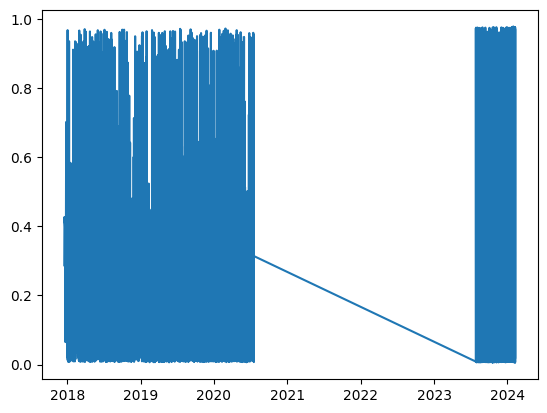

In [99]:
plt.plot(neg)

In [11]:
fi_df.columns

Index(['^DJI_open', '^DJI_high', '^DJI_low', '^DJI_close', '^DJI_volume',
       'BTC-USD_open', 'BTC-USD_high', 'BTC-USD_low', 'BTC-USD_close',
       'BTC-USD_volume', 'ETH-USD_open', 'ETH-USD_high', 'ETH-USD_low',
       'ETH-USD_close', 'ETH-USD_volume', 'CL=F_open', 'CL=F_high', 'CL=F_low',
       'CL=F_close', 'CL=F_volume', 'GC=F_open', 'GC=F_high', 'GC=F_low',
       'GC=F_close', 'GC=F_volume', 'SI=F_open', 'SI=F_high', 'SI=F_low',
       'SI=F_close', 'SI=F_volume', 'NG=F_open', 'NG=F_high', 'NG=F_low',
       'NG=F_close', 'NG=F_volume', 'DX-Y.NYB_open', 'DX-Y.NYB_high',
       'DX-Y.NYB_low', 'DX-Y.NYB_close', 'DX-Y.NYB_volume', '^BSESN_open',
       '^BSESN_high', '^BSESN_low', '^BSESN_close', '^BSESN_volume',
       '^NDX_open', '^NDX_high', '^NDX_low', '^NDX_close', '^NDX_volume',
       '^GSPC_open', '^GSPC_high', '^GSPC_low', '^GSPC_close', '^GSPC_volume',
       '^NSEI_open', '^NSEI_high', '^NSEI_low', '^NSEI_close', '^NSEI_volume'],
      dtype='object')

In [15]:
import ta

In [38]:
fi_ta_df = ta.add_momentum_ta(fi_df,high='^NSEI_high',low='^NSEI_low',close='^NSEI_close',volume='^NSEI_volume')

In [40]:
fi_ta_df.columns

Index(['^DJI_open', '^DJI_high', '^DJI_low', '^DJI_close', '^DJI_volume',
       'BTC-USD_open', 'BTC-USD_high', 'BTC-USD_low', 'BTC-USD_close',
       'BTC-USD_volume', 'ETH-USD_open', 'ETH-USD_high', 'ETH-USD_low',
       'ETH-USD_close', 'ETH-USD_volume', 'CL=F_open', 'CL=F_high', 'CL=F_low',
       'CL=F_close', 'CL=F_volume', 'GC=F_open', 'GC=F_high', 'GC=F_low',
       'GC=F_close', 'GC=F_volume', 'SI=F_open', 'SI=F_high', 'SI=F_low',
       'SI=F_close', 'SI=F_volume', 'NG=F_open', 'NG=F_high', 'NG=F_low',
       'NG=F_close', 'NG=F_volume', 'DX-Y.NYB_open', 'DX-Y.NYB_high',
       'DX-Y.NYB_low', 'DX-Y.NYB_close', 'DX-Y.NYB_volume', '^BSESN_open',
       '^BSESN_high', '^BSESN_low', '^BSESN_close', '^BSESN_volume',
       '^NDX_open', '^NDX_high', '^NDX_low', '^NDX_close', '^NDX_volume',
       '^GSPC_open', '^GSPC_high', '^GSPC_low', '^GSPC_close', '^GSPC_volume',
       '^NSEI_open', '^NSEI_high', '^NSEI_low', '^NSEI_close', '^NSEI_volume',
       'momentum_rsi', 'momentum_st